# Coastline Classification using Feature Classifier

**Category-wise shoreline classification using Sentinel-2 imagery**

> * 🔬 Data Science
> * 🥠 Deep Learning and Object Classification

## Table of Contents
* [Introduction](#Introduction)
* [Necessary imports](#Necessary-imports)
* [Connect to your GIS](#Connect-to-your-GIS)
* [Export training data](#Export-training-data)
* [Train the model](#Train-the-model)
 * [Prepare data](#Prepare-data)
 * [Visualize training data](#Visualize-training-data)
 * [Load model architecture](#Load-model-architecture)
 * [Find an optimal learning rate](#Find-an-optimal-learning-rate)
 * [Fit the model](#Fit-the-model)
 * [Visualize results in validation set](#Visualize-results-in-validation-set)
 * [Accuracy Assessment](#accuracy-assessment)
 * [Save the model](#Save-the-model)
* [Model Inference](#model-inference)
* [Results](#Results)
* [Conclusion](#Conclusion)

## Introduction

We have already explored how to [extract coastlines using Landsat-8 multispectral imagery and band ratio technique](https://developers.arcgis.com/python/sample-notebooks/coastline-extraction-usa-landsat8-multispectral-imagery/). Now, the next step is to classify these coastlines into **multiple categories** based on their characteristics. To achieve this, we will **train a deep learning model** that can classify each coastline segment into one of the categories shown below:

<center><img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAMgAAAE8CAYAAACFLP4lAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAACPFSURBVHhe7V1NtrMssz1TspsR3BnYul0H4SjSdxS3k4bj+DrfymC8VUApPwWBRKPnPHuvtdebKBYF1IYC8z7n57///e8CgqBOCAQEC4RAQLBACAQEC4RAQLBACAQEC4RAQLDA8wUyj0vf/Sw/P/0yafdB8ESeKpB57EgYLI6/IJBp6bkd3bjM6n3wfZ7XtycJZF5Gs2r8LN04uc8QCJjjvyYQSqu6n24ZZ/4uYoFAwBz/uRXE528QyLxMY0+iZj8tOxos8Xfqt+sB+ym00XeRDWqzmSRiVpaderpnJ5qZPnduVTblqe76YKIxoPrkWbaZPp/2wU/XLf00e2W2srE/bLMf9bKf9+1xhEAqKIPU9TRw02QHlILDroDEma5NvCpSOQrkkcsw14CWNnLgeTbMYHt2Wss6gbAvxj+qu++9YKsKIjc7M93z9tCE7K0BLT5xGQp0LuMJmMXk25S9Jftj+0IOYnyblp/37bGEQF7S+fdyec+nARIw/RRet6kmPeMFWEtZKxDuu1hkEvTx9ZRrMMezuwnMsEwquEw99Oyc1Kv1z+d9ezQhkJcU/ygI1HRCmBtECQJOkSj1CEjPBAHSUpboBJIENzEb+AFr+r5cpq4epmZHrr3bt8cTAqnh+q6GB4lzaS2/zw2iu17i+kxLWWJBIMV7K2sC70UZWcWS1YVETanRaNIxP/WLxvmjvj2eEEgDecDXwcylNckgbtfTVcHxrbLEqwqErsn+JGVmJXqrb48nBPIG+YTGDGQwa+YGsaV9jX1REEF2LxPQ+Vysr+xTmmJJ+fiEq65tbX17PCGQt+gGLBjEfDuKebpZGbbvLWXX2Ts34ybXU66nSHF9tOeRfUGpTFpPLpjpetU4t/Xt0TxJIHzOH+emfKzprql56El0LzXXY0gvFYhn5/XM3hyX8jMyyBJIFGRkR44+5d1DGHgNZVeBuPJSr3zXRBZTTseY5nmia98WpJtP/jGv+U6M64mPbsfgPYcX5Lv07bE8SSBeh6u80mqSvrTjQdJPXahdElzEMHBa7FSW9VKsOQjCOL15QXNCtgW8nazSF4UsUt8n+55D9z9+8cj+2CD3x3avvj2OF0ixwLdZ2IOA+xAC+c2EQA4nBPKbCYEcTgjkNxMCOZwQCAgWCIGAYIEQCAgW+LMAAf7zn/+4TwCwQCAxIBDABwQSAQIBfEAgESAQwAcEEgECAXxAIBEgEMAHBBIBAgF8QCAR8gJ5Lo/hZn7aYTjc6QrhMZjvt7v5BvwxnCaQ5/OxDDcv4H5uy3B/2KA7ETmBPO/O19t9eTzuyx0C+SdwikDWYCNR3IZhGYKZ+eFKnQNdIM/lfmP/hiXx7mOB0ETB7Sbh/R2J/Z02nSaQW7xaPO/LzYjktpw5GRcFog04BKIAAjkAMkv/LGcuIhDIHoBADoAI5ForyGOwoo25ilgVyHN50vWbE7wl77HChuVsv04zqa/8tNSkqvH+7bk87uSDb5f2fMND69w6fy1SuzcSwtYdvg2PJ6fO7+JCAnGzjpbnfxHJCvJ8mE35YFaQYbk/+DsFo8SOIhDZY93W8u75qJzYNsHm2VZjeIX0k31m4D1cYntbjY0o3D5PgprF5KPaX4II4DbwYQWVZbFQHVvV77TpuriMQNaN+8kzzS4pFgXJKqAVubSjLR1ZgzkKXBuY7mO2L0Vc0Spd7W+hHwK0tenKuIZA1g36uasH47g9iMzqcRtbgilnw0e5TFZgCTQ7co0EVlwSIJAdkZnVTsJ+AuG8nt+XuDSIqE8CLcFUU/ZFGedvurpU+kuTmaRfJn1T311BIDtBZqRzT6587CIQuib5fsoLCqTJXwsW0yqUZHKDQHbA9cTB+Fwg0q74xEiu7yCQTNBa5OqxSFOsVn9D8OmXEUkwiBDIh5DOZ3Fcqws/F0guOOi6GnB1gShYT5HCKZsjdd0XlMpYgfkzfqu/MdzzgUDa2nRlnCKQ9axcjiljUl57FvZIseKj0Hvw3iANmrA/7DuNLNYDDSlPNMFIXJ8TIXCZ7ZjX1p8Kp9pfUzf75454vTQrdrmpTRfGCQLZVo8sT1ya99mkU/noRR6vlDZotFlVZmvLZOaPwSsBBb5vX3tRyD74ewv7nkOzXeuv/UVzsF/J2mxs00Vx8ib9etAFAvyrgEAiQCCADwgkAgQC+IBAIkAggA8IJAIEAviAQCJAIIAP/OPVIFggBAKCBUIgIFggBAKCBUIgIFggBAKCBUIgIFggBAKCBUIgv5rzMnb8c/J+mdT7B/Ef+vvspwlknqel77r1/xf4+emWfpyWWSkL5giBHM1zBOI6mEXR9f3S955Q+kl/BlQIgRzNUwQyjySMeLWYx6UzIvnyYP9qQiBH80J7EBnsbhln7T6YEgI5mhBIFedlGnu3wll23RgF5bzMFDidaYOQ91VKELkA6ydaTfmZV+WZtGcb/VS0I1HMqUCm3t5n24mNqsCuaKtnJ2xzwX/F7g/tQfup3D/T2maKi6BNZI/uhX5yn/hlPud1BOI65Yp7EAm6rqdAmSY70DS4vpA5bZRBGrnMNC69C5wkIKWt7pCCn+F9mAx2GsDT0rt7LIye9m2hEL0VRFJVpR9tO8oTUE1bV/8dX/svQiayKNy+cy0f+xrYp3Jcnn1YBbJNpoGfrvyeE+x5AqEZ0TSMAmmdGXkG0MqeSjcYNIsWT9ioPXMyMC6w42fXAIgGU4I7Kr+KLwo8uR6mWOmqYpnxJWBlW9/0PxWtCD8nQD3YxV6yShYmh3d5mkC2wd1oZgOlQ87lNluNWjpQZCZYXQDkZ9qagM/fUwWVrdNnZVt38/8dX509nkwpxZwD8qsDvvdC4A28SIrlclnqlNyscSppZpJ0yaQI2fc13A5eEW0aZFIh06YoOJoCrDTz54IvfaYmvTKsaetu/hOdrWDWLwpEVp0C/55AHLXOuhA5+NfgiYONfLdi0PhtgcSCcDYa+vVVW/fxn6iNedY+c7OXriCOyTPv85oC2XEGOIK82oWDKoERn8pkArgpwPIiKN7z63Cf1ZOtF0zbStzN/w9SrIy9vXmCQLiBNCMlOS4f23HDiRddQTbGM3JulqTr2mA2BZh3shSUt8ecpr/UYBGfONXLlalh3FbiLv4Tec9g/K9doSxVUQnNKhJd+4AnCcR2mJlxg1yd+e5AHkRzMuIdJ3qphz8jr0Hgyo3BmX/UpsYAW09n+Bk55jXfyS+tvGNwEFIz6VS2tdl/ERnTO+YV3xI7LwTi22Nf5VhdTkPzz7XzpBTLvTRynW9Y3PyeyfSFFM/K2goYvMhj8VMZK5wPBcKUExpnX078VPvrMyKsaIbOsrKt7/jv+se3bd8ZKcH8UiDM2nH5jNfag4A70820F9/TXZkQyF9m1UwMlgiB/FlKulObXoEaIZC/Stl/IL36iBAICBYIgYBggRAICBaIP38QAX/+APABgUSAQAAfEEgECATwAYFEgEAAHxBIBAgE8AGBRIBAAB8QSAQIBPABgUSAQBQ8BvOjx9v96S78O7iGQGgAbvy7oQsMAgSiAAI5E8/lfrPi+N0CeSwDt+F2pxb9MUAg5+F5v1Hn35b7/RqDAIEogEDOgguq4XGZQYBAFEAg5+AxcFo1UGiZLxcWyHN50Aon+yTjJwnB+E2w7VDIwl+R2vi53ZbhobTX9QU//qTP2zNUPuofqTuoSlDVp+W2GXh2jD9rSpz6s+G99j4Gziis7XvgBNmje6GfFDulpu2A8wTyvJvGroNXNZjHQxOIBOFtoMB5POzA02Cvrj7p2sO254cG7c5lmGtTvH0WB8kwELfBvsXR7fqCy5r7ZDMo7/eR68dQjBbWb89PBS/bxhB/pP6SPwZvtteQynF59mEtJvb4nuenK19q36c4SSCuwX46clmBKL6qyKdYdp9F95Igds/Eg7wGTHRdxBDUIcHjVuIVNSlfZdua/NmxvQ5iLzFXmBz2wjkCcR0StOvqAuHBK67nuYDMBbCFDH7Q7mxf6LbabPiobFuTP3u2l+HsmXSKUryA1Ofm3guBf4ATBOICKVb9ZQVCoJnKDAT7zSkDrf2plzmB5K47uHYH/dEUkIy0jpr0yqCmbU3+7NlehrNX4l8SyDqDmDzWIw2Obaz9Hm7Qvgd9k27xpH3GGkxJ8J0pEH7E98nVGU9CBRTbdgWBkL10BXF0JY/AaQJ5Rb2zjkdJIAI+yTF+BgGYC4x8UDP2SLEM/Gfc5wZ9rFDb1uTPnu1llO0djZM26QqKnfQ91AiEnFVm6PxAridFcds4h2Y7H83YAhEor8C5MjVQ2tboz37ttVBFJTCriPt8ACCQCIlAzEmJd7zopSLxDC2BYYOUn5ECEhh8bzv2NN+JSZvfEsgWSIaxcxpq29bsz17tFWz22Fd7jE7/dTbzz30OCCRCuoKkL6jsuw7NTxpIF2BpWyiYIju8D1PtvCkQG/B8P94f5VDZtrf82aO9PlrGYT9cRyAXQV2KdVW4mTa3QQaaAYFE+NUCucgq/JcAgUT4vQKRdKc2vQJqAIFE+LUCkf0H0qtdAYFE+N17EGBvQCARIBDAB/7xahAsEAIBwQIhEBAsEAIBwQIhEBAsEAIBwQIhEBAsEAIBwQIhkL049eaHgt046/fP5Bm+Xbk/GniOQOSP3Kvsl0l75upsDIh57JrKf0QI5G2eKpCu65e+jzkts/bM1QmBhIRAPqATSD8p934rrxwQEMjbhED2IgQSEgL5gL9OIPMyjX2wb+q6MdwreQEx0+euk7Ld0mtBogWQu8b9YmyY5ws2mNSX/VpXREpXTZmorqm399X+1/xKeEB/GKZ2fzoqPynlnX1uw9TbdJVtj0GbyB7dC/2kPe7slynz3D3IOC3T5DiXBuRcSkB1PQUB+8qDSAM3+h3tBswfiN4bnCTgtEAUG2S7xcYPlRvFL1OWg5D7NCy3Pu/6fxWQR9vWqG0RD+kPCuZRRMSiMPtRr3zsa2CfynF59mEViNjje56frnypfT5PFcjWQGFpdjmLrqNphiweHqwDFnW+tDV+Pg5a71qtDRuo0anfOvmkdrdrEjzxieG09Eo9IY/pDzm0SEXrfIrt5Ow7ir1klZT6lclB4zkCUThPznGtUadym4lGbakXagFvmAlGrXyTjVyguoDyA0Cxq56iZev3eUR/ZPrIsd1X6RuyR5nJHJD6R+03nZcRiKFrdK3zXyPNOmuez8s/pS+Jf00BQdTKN9pQV5Bqu+lqUZNeGe7eHy9WLmfrleg3yqpT4K8USGb5vQp5lds2xPqSXxvcavk3bWh7kBrfQkEoK88L7tcfBwmE7KUriGPyjE4I5A3yqUz9gB0lEHeNN79rkNKzJq3wnyXm7PrX3ed30tvP+yPTR45vp1gZey28kECkUblGX4nKbNsUEEStfJMN60NyuqMxa1dmWj4xUnys5uf9sZ6MxeV5z8C2q1coS1VUQrOKRNcyPEEg1GDqID4W3H5eYhtjeLXVw6xq3lGhl1YEs21jQKjlm2zItYjUr7yKBBvoQjBJIBnWiO2o/hCRMdfY2HxL7BTaZLnZY19NCkq+js5m/rmQp6wgNnf1BobJnVI6FTmN6csmm/PXDthRApHgtptkG6wTBYDsQ7yALQWTpLXxDJ3lQf0h9yLbidiFpTatrPS1wGvtQcB61gR9zYqwplnX3vedRQjkl1JSI3VTXTW7OraU/QcJgfxWeqnRth/gFEtSCi2FiSnpTm169e8RAvnNNG+Fo72cEUzl/1MjIkN6lSUEAoIFQiAgWCAEAoIF4s8fRMCfPwB8QCARIBDABwQSAQIBfEAgESAQwAcEEgECAXxAIBEgEMAHBBIBAgF8QCARPhLIYzA/97jhL/n/GZwskCfF1M3+AXzh7bYMD3f7BFxdIM/7DSL8Ik4UyGMZjChIIMN9eTwexPsysGDu5ykEAgF8nCSQ53K/WXFcbZyRYgE+zhHI827SqisGEgQC+DhFIDZNuN7qwcgKhEQ9mFVPoWyaVIE8lyddvwXP0j4r23haXSnN9MveyP5aOivCdD93uw3LIy7mnmeXubzUcWJWe2mcIpDHwIMy0KBw0IXBMNBI5ULnG1AF4oLqhwLuznulOwW85+8ahErwrnsGeda02bY3DXLZl9m6hoEYl1UFsqWs637O8zEoKm1x926mDggkhxMEIoNpyQMaB846I58ATSAi6MArLU3UgvdJgvcD1MAJ4XYPJoPsBpxsUBdZFESYdJvzMejPVSDXXMGvhhMFQjNqMkDbvbMkkgrE+RQF8xrkSvAlAZ5Aa2dl25M6xD9OpyidC0g+xr5X+wgwThWIFgh2tlZmwy+hegXRAi0bfLwPoZWS0xlHm/74NvVVJUFSh5eW5QiBvI0T9yD6En9FgUhQaXuQoA0Z0diyGncUCD2XriCOrqQBBNKEUwSSzZlpKO3qcl5+nE+xtg2zCTCT0rgigiT4tvYMQWFtFZWVIFqpYmTrePGcAAJpwikCkUFKZsvc9S8iFYgNXD5qfYkk+HKrAl1XglpWzyR4aS9xF4EpAZ7d3DPMKuI+MyCQJpwjkHXWY9Ls6o4a5fuZY5ddQYxvHslfe3TrOasE3xr07vj1vqZnzGjWl1MnJq9Ypl/cdxGoGuCy+th65FRQ3qcEZSGQJpwkEIbyYouD6ORx0/YgdoZ27zxM8FGgrxttL1VUg48EFr3443RL3fgzzMlTWP7dF4V2zxSVg0CacKJArolEIKWA0t4zAH8KEEiEWCD5AwUCZuM/DwgkQrKCrPsCTnXkZ/mcYkk6U3l6BPxKQCARtD1Iui8QwZz7uzHgeEAgEVSBAP8sIJAIEAjgA/94NQgWCIGAYIEQCAgWCIGAYIEQCAgWCIGAYIEQCAgWCIGAYIEQCAgWeIJA5mXs/N80aeyWcdaeBcHv8hSBTGO/9L3OzgikXyb1WRD8Lq+VYk29XUH6Sb8Pgl/mpQQy9UivwGvxOgKZR5tedeMya/fPpFvZ+um/y0yfbRpoxdxPsy1D/vfr3oquj+56wNk+H+zBMmVLdaq2iYEPEWVV9uxOfefu06RE3zdbNg3e6iR2Xlsd7YRmbfnXDV09XeAr2aU6fbtdR+n0hSfEywik2Nln0w02B4kZVLNfkuDi7+4zDfa2j4qDgwJ9dM9TuXGalmnaAjoum9RpbG/BlS/vbK8BzoKi7xKEUs7dM22hOjaBeIcoLArX1rVeP/2VSU1JidNsQOxynSO1PfTxqlnDRQQyLb3pqItuztegCgdSAt4Ejh+wudVwnpY5CQTX9rhsps6cbRuQUf+5soFvObuOa5uSoJcx0oI+Hre0TWI3mQALIrsCLyGQdWaNZ8Wr0AVV4l92cHOBozFTNlenWt5dS9JTF6i+f1m7zLLf2jipgZ/UIf6R3ZnSzIDko+r7NXgBgcjMVBNMJzEbVEoAGpYCjfch4zKa1MVPyaKyTQLJrCCajaJA0pk/oHs2aK8ySaTplYxxgRBIhlqnX43ZoGoUCNmxYtD4mUDWflT2IEEqlbXLfEMgqz9Sj9Ynm910BXFcy16LJwsk7tyLMhtULQLZ2hqeBpUDvk4g7hpv5M09S/WEqCiQjC+O2VTYt+k+h3uNst0r81yBuM686vK6MhtULQLJzc50XQuebJ1528EJU45Zu5Zympjc570C+69OZlvbRi3VIxb3mWYVia5dhKcKRAbjkke7PncRiBd87phzDN41fCIQuRax69yRsmfjhUDWNrnn5ZhXbOaek7YZqkLd7HL75Zh7dLbz/pzL8wSSOa68JHcSiLnuBZukWza4PhGIzNDunYcJPhLgegDgTUIvBcK0fvr7pURoMZ3dcrqcvii0e6ZrioN5/iYd/JyloL/4e4arEwL5A1TfRQirVgwwRwjkL1BWCUpv1p9xmBRL0pk41QNrCYH8FZo30v7+RgQzXX+Pd2FCICBYIAQCggVCICBYIP78QQT8+QPABwQSAQIBfEAgESAQwAcEEgECAXxAIBEgEMAHBBIBAgF8QCARIBDABwQS4U8J5DGYn5zc7hf5a+5X86cC5wnk+Vjuw225eb8dut2G5f44t/MgkAMBgdTisQxGFCSQ4b48Ho/lcR9WsQwPV+wEQCAHAgKpw/N+04XwvFuRnKgQCORAQCB1eAx29Uj6CQLZFxDIxzh1BYk7Knf9m1AF4gaWdfukz9u+6UbXnK8k7uHmXVfb8LTPr+UKZb06H7RXk7L3de54Bmkp83ajdNXdNfACMqw3rdNOWpn01rOTx77+bEjt/ty8fvfh7Of7jEH2lL1vbut70h7kudxd55g9yJM7wTWIWlcahqNREggPjPV5WIZ1APi7+0wdPdA96fzsBGAOI2jf9dhElQSf1GnIezWyTfXLYEtAB3s4vu+bCWzYetlv1b/C6p1d8T3s7o/BFidGFK7f1/Kxry/6bLPH9zw/XXmtfScJhGGVvDVI66DvoyiQqBMl4BPfJdhoBg1a9CTxJ010BxZx2UydFm6g42di5Gyo/knw0Gzqrlhk/AtwhD982fVvItrtkCewU+yzzV5irjA5nCcQcsrOnqRmUrk0LL/UfgclgSQCznZsLtg0ZMrm6jSQZygQSsfiWRt6nWqKW/RDcIQ/mX5xaPfV2TPpFKV4AUlw5l4q8HME4hrCDq39ye9FTIcQFSV/C00CoaEzM1mTQDj/vi93ky5YGpE1CYSwTjBETj8oj0hKNgUkI10tatIrg939ebFySQz5fV/sM1l1CryGQMRRPXhsR1UMyEE4VCBkx4pBY6NAHFhsa2DG/Za1kRdwKIhc+/LYz5+DBGIm5XgFcXQlfXxfIJKWZBpePWMdhOMEsok/PIHJiyk/2Cn4VKg+YPICCZ5xnxv0seJzfwo+Et5OsTL2crjoCtLWiD1xnEByMyJd19pcHGwNii9NASkQPzn9y5Wpwef+rCdjcXneM7Dt6hXKQhWVwKwi7rOHU/Yg4qjkqtuxYKZDvogjU6z4KPQenO83CMSswt5RpZfWBK68JRBvfJhJ2xQc5o8Igcix4o55xbfEzguB+PbYVzlq598E5p47Z5NOsLmqNxDsoHk/kGvcd3DsJp2uB0fbNt2ywmkQCNmJX3bxjJ/03ZsCsQHP92tT3SP9sX3m287GyUuBMCp9dThNIFeFKpB/Dk74uQ3yPwQIJAIEQqiaif8NQCARIBBJd847SbwSIJAI/7xAXhzD/2uAQCJgBQF8QCARIBDAB/7xahAsEAIBwQIhEBAsEAIBwQIhEBAsEAIBwQIhEBAsEAIBwQIhkL/AqTc/LuzGWb9/Cc7L1Ht/x70ff8Xfbz9PIPO0jH6H8QDjj96/x18gkHl0Y92NyzSNNPYQSIHT0htRdCQK7jBPLNSBEEkjLy+QeRk7Hu9+mdT71+UpApl6u2L0k3792qnCBflbBPILJ78TBOJWD62z5nHp+B6lWsF1sEwI5DB+XyAiArWzCuI5nTTIwZ6J08N4z0Qb0bG37RN2Ha2USuC6oOZVdNu8dsu4rqrzMlOZzqQmQrKliaBWIC/rZNrNtN+GrqPUaPbL1JeVrCBmnD1clRcTyFVzVdkzsd/90vdEF7hbUIrvXIYCmct4wcNiCmy6YLVksbHNLVhlU8sBN9IejTe2aZ2hrVqB5Orc2sD37N5wEzyVC0RSWXb2fF/bQhOLKrjr8YQUa+vYsMP9e9cSyBqscQCawQ/LpOnhdiARtHcNVq0fiGQ7DaLMCtssEL1OaUMyuyupb0vZdVyRYtVxDSYaqH60M8oYpCZXEkiNaMtlVIHVBnXATD2NAtHLSRCT7ZnSu4AkzCDAW8r65SGQaib5NacloyzFV+rIzKwd8EUZmbn9WbUqqCngzDsDl9YR7SRyhEBcG0pc29dSlgmB7ETX8UmaciZPEgjd31bUmAcKhNqQrgqOb5VlQiD70A3gtU44XDB8NcUSe/EJWKaeXQRSbkPIlrJMVx4C+YDF061zmX2BSfn26AK4VMYKTN+k68GaW5Ho+mECyQhZaFaG7XtLWQikkTaY5CiUjxr5u72mnuicTREvMzrm3dImEQKX2Y55bbuUQHoRrKvg5Kc4pUOMnQTit4HrleNlef8TPtdSFgJpovYC7PI/VDSnM1vA6z5TICgvzmSVCfgyWK0tvz5Ot6xwjhIIM335Z99faM/UloVAQPBPEgIBwQIhEBAsEAIBwQIhEBAsEAIBwQIhEBAsEH/+IAL+/AHgAwKJAIEAPiCQCBAI4AMCiQCBAD4gkAgQCOADAokAgQA+IJAIEAjgAwKJAIEAPr4rkOd9GW78/w0My8NdSvFcHsPN/jF7x9uNyn/pr9prAnneb9aPO/60/r+GrwlEgswyJ5DncjcCIt5uyzAMJCh57rZ8Iz4hkFY8lsGM151G7+/hCwLZgv52f7jPukBWEQ3h3edjUK8fAaRYrYBAPgOlVbd19hexaAKRe9pKUXpuX0AgrYBAdkQp0Msd/Rhy4tkXqkDcCpamWNQe2i+Z1c2Q9k60yoWlPt1TVdZxH4I6TIqqVvI0K/LNjIOQyqodm9q90fjI2NkxUfiFlf5buI5AzEqT71xJv47u+3qBOEEzKeDtfsl+38pJezmoKbAeDy/gasTeUgeXcfs2T5AsJh/rfors3dmfhxycxO3bBBD4TnVsVdvnTV2rPeLLdv0eQCARagWS3biboHEfcz6/aKugpY7UlogrEiI9+0wCWFu93Vi9TJ3KK/9vBwQSoU4ghXaskADjdIrSmoAUVC+Dr6GOTJmswBJoduQaCay4JEAgO6IwoL9KIDVB4cqUWPP8J2Wc32mf8j7kTnsbl7YRTd/H40JjIumXSd/u8d6HAYHsiNKMV+7oa23S24I3XUEcXUkdbXWoZTSB0DUrBo2Zlcjbp6RjUOPn78WFBFIhnswA7okmgRT9KbWnBp/XkaZYUj4+4arzVX8fBYHsiNYBtZDrufRrT9Ru0tcTnshX3gRLzl7cA5hVxH3OoKaOUhkrMH/GzwUzXa8Ss3s+GIdPJ4Jr4wsC4fcAca7Lx57uWpDXyqASo2PNbw1ArUA4P19TldjXNYC29vBRqRyrynsNVTg+Guvwj3nNd2JcR3x0ew/ec3h9bOr2jqe9NCuep8Sm9dG+p/kr+IJAvAFUGQU+z47Ji7HvLd/VAmGY06jY19cvCjmQyidDHirr4D7z67DvObQ6bFnfHqdbNsj9sWjxm33cyr0U/i/Cl1Os60MVCPDPAgKJAIEAPiCQCBAI4AMCiQCBAD4gkAgQCOADAokAgQA+8I9Xg2CBEAgIFgiBgGCBEAgIFgiBgGCBEAgIFgiBgGCBEAgIFgiB7MWpNz/17sZZv/8JNdtH1pfjGXWezO8KZB6XvuP/Z6BfJu2+z5ayVyAE8if5NYHMY2c617Ic9C1lL0MI5E/yCwKZl9GsBNyxk/ucC/qWshcjBPInebxAKFXqfrplnPm7CCAT9C1lr0YI5E/yy5v0lqC/kkDmZRp7Ei/7Y9l1Y+iXFzwzfe6M78xu6bMBRXb7LrJL7TUThMcKgUy9fb6fvOcyZXUe2MbI7k9H5SelvLPPbeB+Edtj0KbKPtuJEEgFJfi6ngJmmuyA0yDblc7RDa4/aL03kGlwSvuojG/XlNdtlwRiV196tp+2Mo7W/8hmxGPbSGRR9FH52NfAPvcLlWcfVoE09NlOhEBe0vlBs+ms3ndcBzcaKAnc6Hk5iEhmfC3QawSS7a9p6ZX6Qx7bxlS0zqfYTs6+Y1Of7UQI5CXFDxo0LS0QakFsqLVDApKuzZSuBKTgMfe8YKsSyBZAr8qlPLCNmfFr97Wxz3YiBFJDmqHsOxkeBM63p3QgmoJHZtAC3xCItlrUpFeGR7UxF7TO1suVcmVjn+1ECKSB8+QFUSY9aA2edDZ09G1otjP1hYJw9TSkHke0cVeB1PbZToRA3iCf4NQPrtaOxrZptnP1+dfdZ/Vk6wWPbuPbKdaX4wECeYvKzNwUPJkAEZoZ0fuu2c7WJzMtnxh90n+ft3E9GYvL856BbVevUJZNfbYTvyAQPrfmwbKUIzlzhMcMct2Wsl+iOSHxjhW9FCSYmRuDZw1AfoZsj8726M7/AztNAtkCydAP8By/0Eb/mFd8S+y8EEhTn+3ELwjE6ySVfqe2lP0W0xdTPDsnpz3NwWPvvW27FExy7BnP0Fke20YOYN82vz9RT8teCoRZ6etO/HKKBX6HbqI54FTnX+L//O//QSB/klUzMfiKEMifpKQ7tekVmCME8hcp+w+kV2+RReETAgFBj6FA/m/5f3eqAc/tQrC+AAAAAElFTkSuQmCC"> </center>


<br>
<center>Figure 1. Coastline categories</center>

### 🎯 Objective  
The goal of this notebook is to demonstrate how to use **deep learning** for **automated coastline classification** using **Sentinel-2 satellite imagery** and the **FeatureClassifier** model from the **ArcGIS API for Python**. The workflow classifies coastal segments into meaningful shoreline categories—such as sandy shores, rocky cliffs, and mangroves—based on their visual characteristics.


### 📚 What You'll Learn  
By the end of this notebook, you will understand how to:  
✅ Prepare and label geospatial training data for shoreline classification  
✅ Use Sentinel-2 imagery in conjunction with NOAA ENC (Electronic Navigational Charts) datasets  
✅ Train a deep learning model to classify coastline features  
✅ Evaluate model performance using both quantitative metrics and visual inspection  
✅ Apply the trained model to new/unseen coastal areas for inference


### 🧰 Tools & Technologies  
- [**ArcGIS API for Python**](https://developers.arcgis.com/python/latest/)  
- **ArcGIS Pro**  
- **FeatureClassifier** deep learning model  
- Python libraries: `arcgis`, `glob`,  etc.


### 🗂️ Dataset Description  
- **Imagery**: Sentinel-2 optical satellite imagery  
- **Labels**: Coastal segment categories derived from NOAA ENC datasets  
- **Format**: Labelled tiles and metadata generated via the `Export Training Data for Deep Learning` tool.
- **Classes**: Multiple shoreline types such as sandy shore, rocky shore, mangrove, etc.


### 🔁 Workflow Overview  
1. **Data Preparation**  
   - Create a grid pattern using the `Generate Rectangles Along Lines` tool
   - Export labeled tiles from Sentinel-2 imagery using the `Export Training Data for Deep Learning` tool.

2. **Model Training**  
   - Train a `FeatureClassifier model` on the labeled tiles using `arcgis.learn`. 
   - Monitor training using loss curves and metrics

3. **Model Evaluation**  
   - Assess performance using a confusion matrix and visual validation  
   - Identify strengths and areas for improvement

4. **Inference**  
   - Apply the trained model to new areas  
   - Generate classification maps and analyze results

🚀 Let’s get started by importing required modules and preparing our data!

## Necessary imports 

In [1]:
# Standard Python Libraries
# ---------------------------------------------

import os                                                 # For interacting with the operating system (e.g., path operations)
import glob                                               # For searching files using wildcard patterns (e.g., "*.zip", "*.tif")
import zipfile                                            # For working with .zip files (extracting or creating archives)
from pathlib import Path                                  # For modern and safe file path handling

# ArcGIS Deep Learning Libraries
# ---------------------------------------------

from arcgis.gis import GIS                                 # For connecting to ArcGIS Online or Enterprise portal
from arcgis.learn import prepare_data, FeatureClassifier   # prepare_data: Prepares training data for deep learning workflows, FeatureClassifier: Used to train and infer deep learning models for feature classification

## Connect to your GIS

GIS("home") is typically used when you're running the script inside ArcGIS Pro or ArcGIS Enterprise Notebooks, where you're already signed in.

It uses your current active portal and authenticated session, so no need to enter username/password.

In [2]:
# Connect to your GIS (ArcGIS Online or Enterprise)
# -------------------------------------------------------

gis = GIS("home")  # Connects using credentials from your active ArcGIS Pro session or ArcGIS Notebook environment

Connect using ArcGIS Online credentials (manual login)

Replace "url" with your portal URL (e.g., "https://www.arcgis.com" for ArcGIS Online). 
Replace "your_username" and "your_password" with your actual ArcGIS credentials

```Python
gis = GIS("url", "your_username", "your_password")
```

Read more about the [GIS module](https://developers.arcgis.com/python/latest/api-reference/arcgis.gis.toc.html) here.

## Export training data 

Using [ArcGIS Maritime](https://desktop.arcgis.com/en/arcmap/latest/extensions/maritime-charting/what-is-the-arcgis-for-maritime-charting-.htm ), we imported [NOAA’s Electronic Navigational Charts](https://www.charts.noaa.gov/ENCs/ENCs.shtml). The maritime data in these charts contain the coastline feature class with the category of coastline details. The Sentinel 2 imagery has been downloaded from the [Copernicus Open Access Hub](https://scihub.copernicus.eu/dhus/).

Before exporting the data, we will create a grid pattern—illustrated in Figure 2—along the coastline to serve as a feature class during export. To do this, we will use the <b>Generate Rectangles Along Lines</b> tool. The required parameters for this tool are as follows:

- `Input Line Features`: Coastline features (categorized by type)
- `Output Feature Class`: Desired output feature class name
- `Length Along the Line`: 1000
- `Length Perpendicular to the Line`: 1000
- `Spatial Sort Method`: Upper Left

<center><img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAwEAAAFzCAYAAABmagX2AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7P0FdCzXmagNhwZz78yETIfFrBZLLeoWM7VazMzMzKwDOsxsHx8zxXYYHAecxMxMMcZ4zPD87y6pjhWPM7nzf173ztwrrfWu6qratWsXtPp5akN9hZW/c++8w3vvv78Wa7EWa7EW/4dD/T/+//p3kWMolziHsMEtnM2eEWwxRJ4PG68obL2jtXDwjcXZPx7XwETcgpJwNyZroeZdAhJw8ovT1qt1Kq2DT4y2zDUoEY/gFG25Srs6vaMK2UaFnaRX+9zobmK9a5g2VfP2Ki9J5+ATJfnHyrZxsm2MNm/nFYGtwcwWDym7e5g2tTVEYCPHocJeyq3CTo5DTR0lL72cKlReKlwD4+VYVDnVcakyLs+rcPRVeURqU/3zRtcQLnEMZL2zUduvKoMqi5YuIAZDeDJxliI8Tal4mdPwjkjHJzID/xgrQfE5GBNyCUnKk89Z+EalExCbSUhyHhGJ2cx5+PPe178BX/kKd1xwCUVRSUQUVRCRU0yItRBzQSUxpXXElzZQ3T/JwStu4LGXXuPyG2+mraON2tt8sPJVMvmKFvnvfZPhy63sGRvl0v07mBnsZGqwgysvO8TpE/tl2S7u8DZo+1PxO3c3jleU8rTNZm3+jX/4e6ZTzBS25FHSYKGiLYvWoTIGphvYtX+CnduGufzobk7t3cb2yWGGupqYHu3l8P7tzEwOMDTQQl93PccO7WDnwiiHds4xOdJBc30x5flp5KRGYU2JJCYuiKAIbwKjvAmPCyA51UxxYRoFeYlkpUfSUV/EYFsVNQUWclNjCDV64GqwlevpgJ2/A+5BLiSmRVBTV0htbSHBsj4xIZy6hmJSMuRecd8g19weQ6gbPkYDxlBfvHxcMJv8mR7v49TRXYwNtFGYl0JCQghx8SHExxmJjfYnKsYfo9kT90A7ycMGB8N6fIIcCQ1xJ9DLDrPsq6AgjfiYUALd7UkND6S3soTmwiwKM2LJz03AFOuHe7CU0+SCQ7Ad7mHO+Jlle5OnlMUTf38XwsN9SEmJIjcvldz8VNKscs97bWSL84V4y/G5+jhg47QRZ1c73FwccXNwwGnzZuxt1+PothEXj80ESV5+AS4EBXuQkhZJbm4yVms8ZrMfqamRZOckExltxN0gxyLbGHzsSUwKwyJpI43uxBk9qclKIiPYk/wIf7Kj/KkqSCYvJ4awKC8Mctwecr69/J0JlH2kWqLxkfPgHeaGIcwVj1AXPFemLoH22HttxtF9PU5y/tU2PoHu+AXKtXO3wcvbHl9vB0KD3OQcumOScxAR6EpqbACJscFEmnxJjgvFJGUJlG1jowOJiwmipCid0lIL0VEBeHjZkJ4ZyWBvNVM91ewebuLIWCtL3RUcnmjnl9ceYbClkBS5hrU1uTQ25tDRUkKL3CM7poc5tns7R3fv5KqTp5kdn6aooJSaqjoGegboam6jKr+Q9opK5gb62DU7zoFds4yMtZOaFU1sZhjmzEDC0vyISg8iPSeahsYS+noaaKkvpaGykEX5TkwN91BdmM5kTw3V+Ykkh3tSkmaiozyDrop0tvZVce3BKX566XZ+cHKJn1x9mjt++n1+dvNV3Hrj5fzoR9dyy61XS1ypxVVXH+emGy/jBzdcxoB8J1Llfg03GwiN9MI3zIXgaG+q6/NoaysjJT6Yzia5F2vyqCpMIVvu6Sq5ZsfmBvjl2YPcfHQbh6c6ObVtiPmeCjpLM9k72c+18p1e/bcmAWuxFmuxFv/F4suQgA1upvPArWBfQbeaKgHQQ61TUO/qn7AcAvGuAQLL8tnJVyBapu5ByXgK7HsaBfgDk3CW5fZeAs6ynbOSgZVt3GWdmxIBv3jsZZ2CfwcBcgX6ar9KRHQZUetWS4Cjj8ovCgeBbXuBbkdvgXuZ2niYtLATGLf3kuOQbZUEKPhXscXDLOAepi1TIuAqZfAIVhKjhCbhL0KJhpIM9VlJgb5ciYFap0LB/ia3UE0CdBHQJcDG24xbcDzRafkCesmaBBhEBjzksxKBkKR8TGnFmNOLCUvJJzDOqomAf4yFwIRs/GTZkG8If/6nf9Yg/OF/+Vey4pMJyS0hPKuYyMJq4iqaSW3oJr2ui+z6LppHZzl29U2cOnuGmZl+an5jIGtFAlQUvvMvjJ3M5czuJeaGO9mzOEZ3WyVjPY08EGWGr39d29cT3j7Mt3dSV1vDYGEuz69fry1/6Zv/zO5EAcXyRKKzjNT1FdDQU0BbTwmTY03sXRji0r1b2TU9QXdjHSN9HSIBO5gSuF6cH2ZYRODYoe3s3jrORF8zfZ21LC2OMjnUTlFmAimxIUQIbEYmhRAgIGOKDyQ5xUSmwEqSxUxCcgjdrWWMtdfQmGehMT+TIksiMTFGfMIMbPDchEeIGwECwAXF6VTXyDkO8yY6MoBakYdYgdxNLpeIdAo8BznhF+KNt58bIaF+BAcaSIs3s3N2jJNS5v7WGiwJJtLjw7FIGTJERlJSwwkVOXH03ij3xhY8BG59g51IiDdSmptEW10xrS1VZGcmYvITkA4wUJocR0NuBj31JfR2VZNXmooxzgfXcGdcTM64hTrhFeos4CbSY/LRpCVAIDgqSmAyI07gOoagSE82u17IFvdLZJ9O+Id7axLg4iYy4ypA7eKKp609TiIBLm6bcHXdhH+AK74K0AWq80WiMiSfmLhgTQgSk0xynoMIDRcB8nXCw8cOg5/IjOzfR2TA31OAWgRhuKmCvuJMdnXUsNTXQF+DXO/abHKLEgmJ9sUzyBnfEA88/VwIlPPsLvNucj62iLA4GR1xChZBCXeV+96d9U4X4igi4BHgQEC4F94iGd5BHhh8RYLkeEPkuC0iJxkJoWQmhlIgwtdZX0iPwG2vxK5t49SUZ+PjaauJgNHoRrxAb5JcmxC59n5GFzKzo5mf6mCqu4qd/XWcmevlhIjAqeluLts+zIiUvywnjuJyCyXlSRQXJ1KSl8RwVwMjnc0MtDSze25BxKCBqhIRiT2HOXPVjezZe4ju9h4pRzsTg31sWxhnYKQFa2mCwH8QxnRfgi0+2ueUgkjCYrzwl+tUWZFDV2uVwHelgPpZrjx9iMneBrYON7NzooP+piJ6pUwTXZU0y31Rkh5Kc0kSO8cauHL/JDce3smvrj3FVYcXObitn307eji0Z4idW3vYs2OAvUujsmycQzsmmRtpp6k2T44tnTwRivgsM/5y3xRUWugdbCAq2o8CkdDSnHhKM6MpTTVRLrF3oJFfndnPr8/u56fHt3P1zmEOjjcy3VHO0ngvJ/curPxCLP+tScBarMVarMV/sfgyJEDBtgoF+3ZKAgS8bWTedmVehfq8DM8C/gLybiuhQN7ROwYXgXgPTQJSNQnQQF+tl+VKEhx9BJ4lrYvIglqu8lDrVJ52Avb2KnyVEMj+tHmBfyUHSgC0ECgXCHf1jxO5iNHg30Fg30k+O6n0BgF+T7O2zEWlEWlwVOtkWyUh9lJ+JQZ2st5etlXLnPxiNcj3MC4//Vegr9UMyPZaviICar0hZFkWXGWds2yzHHKOPMLZ4BKsSYCaKglwkTLaeUfgGhRHRFI2LsZ4vFRtgCkNz7AUbRoYm01IYh6hyQWEpxYQnJgjEpAhspCCd0QafjGZeIsotAZG8No//KMG4ff/27eojBYAyykjKq+KuOIGEspasNR2Ya3rJKOyheyaVmZ272H3gX2MjQ/T/OMocj79e00CLEoEzv0Lo6fzOLwwz/xYL90C4j8N8OJTyV/t40E3V47NTtNaV89AWxvNLU0MFxfx6OaN2vpPv/pVjod5YS1PoLojl66RStq6BX5bBWaGW9g23c/WqWEWJoY4eWA3x/ZtZ+vkIPu2TnJw+zSXHdpJf7NsU5XPgR1TXHfFMfYuTtBQnC1An0CCAH1MnBH/UDfMcYEkpJmwZMeSkRVNRXkmUwNyfF2NzLU3MlxTTk91iZS1BGt+Et7hnngJlHoHulHbVE5NQ6mArZ8AmRvRscF4CuDaOK/D2ccW3zBPAe9ADN5OksafwCADbi6bBf5yuPTIbvZvm6ahJJvK3HTKc5LIFmBKjA0iJMQTDy+BbwHXIAHfEAHyhIRgaiusNNbk0lBTRGZqDHHhAQS62xHi4UCKOZCWqgIqSjLJL0gl1RqDv9kDU5I/3mHO8l1xINDsKSDtIXkaCAh2J8zsh8kcgI/A/Gb3iyVEXgSifWSd0eSLs6sNLi62ONltwdPJCYOTM+4eIiVGEQJfe/lsg5PjOny8HSkry6agKIPgcAFVEQG/UAMeAtJeQa64ekseHpvx9ncUaXDAW/YRH+lDg4DykaVxjs0Pcny6l8OTXewabWOnTAfaKkiUa+Tpa4dPqAd+kt4xQCQkyAEb381sNmyQe9kLH5OH/M/YKN9ZWe62Du8QV7yDXfCVY/LwkG19nGVqi1GuT1J8CJbkcEz+TiSavCnOEAmoyqWp2EpNbhoDAtMVBWkY5bx7G2wJkm0izL5ESgQFOmMSyE1MDaO3o4zBhly2tZdw5WwXpwfrOTpQy5GRBg6NNTPaVkxmphIiH5E/F7Lks6qRmp8YYKyvU46tlcm+AfYvLnH2yuu49paf8sNf3M7pyy5noL+PwcFuxid7Sc2OEZH3ITwzAGOGLyEZfsTlmwiIdsdJjl/VbhgD3akuy6OvrZbj+7dxqUD9jinJQ0R2pr+BpYlOpvprmZay9XUW096YTU9zPt112fTV5tJTkcuSlG3baCuDHSUi7LKss4ChvnKGesoZ6a1hpLtW5KSWgd5Wenua6OxpoLGjgvrOcqrkWIskr6ySFPzCPQiW85qWGE5arJHitCiq0qNpzYrnzHw/tx6Y4fKFbq7Y1ssVS/0iITPsmRlkrLt+5Rdi+W9NAtZiLdZiLb4g3v/gAz748MPz8eFHH2mhln9R+s+HSvfX0v5H61R8GRKgQb6Cfg2Sl2FZPTF3kOWq2Y4Cf63pjgC11rxH5lXTns8379FDLdemGlwnCxAnadstN79ZaQa0kpf+ZF0Btwq9yY0e+noF56vTqnVazYBM9Xm9yY6CdRcBdSUHSgpUKGlwkXQuAvdqnfqsZMI9MOF8qOUqrVqutlXhFhCvhZIPT3U8K+lUmi1u6ulyiDbd7BqKrYdJkwdVBvegeMwJWThJeT1FIrzD0/A1ZeAfmYlfhAUfmfeLyiQwPpuAWNUkyIJ7aJLWlEjVGKh5t+hMOn1Cee3vl0XguX/+JnVRKUTk1xKVVUZ8fg1JxfWklDVqEV9cS35rNwtHBa5PnmJ4epyGn5rJ4mvnawRK3v02s5fXsjg1wY1JMXzwd3+n5f3SxnXsGe7k0hP7mZsYpqOlkdqaaqwFhcz0dfOku4uW7sNvfJ0jwZ4UVKTQ1FZA32CNwEcF3b1VjE8ItCyOcuPVp7nm9GF2TQ9z86VHObFtlvmeNnYM9bA01s+xpVlOH1hiZriH2YEudk8O0VSYTVqEUasVSE4KJTbRiDHai8RMM1ZLLF2NZeyeGmKfCMZ8ZxMN2Wm0luYyPdhOf28j6QLXngKYbv5u1LTVUFFfhm+wF06edji4bsHJdTOunrYiAw6ERQg8hnoLyDrjH2LAxcsOF4Md/kHuNDVVcGD3Ajsmh2mvKKImL5WijAhSo4II9/PE3cEOmw3r2SLny1VAXMGoRcpYVBhPeUE6+VL+zJQoQoNESAR2DW6SJtSX0ECDiIRJJCGOKJOPAGgEZoHl4ChPkUMnkT8Pue5ucm94EShyYRJ5CDP742jYzBaXdbh722lP9gP8BTTtN+JgtxE7m/U42G7CxdkRzyA3Db4NAtrOHpuw3XIBHi5bMIf6kSMyEx4TLN8LFxz8HHATIPc1G3DytsFB8vYXcYgSUCyUMlUXJVFTlEBbTSZ5ySFkRftTnxXL9o46Tk72MysSlyXnwsttPQYBfFezC7Yh9tgG2LLRc73W/Mdf8vL0s9fyVoLhJfv0MTprzZ7McmxGg5TB9mLc7S8hQ9UuyfVOEJmIEYlLj/SjwhpNlVzzLJE4S7g/uQkmcuScxom4+fs6ESFCU1GUTm9zGZb4YMIFcEMivCnJj6chJ5qJ6gyumW7nlrlOrh6v5+xEI5fPtLB7uJaSwlTC5PjDpIwx8UHU1BYI4LfS2VrLaHcHu6enuP2m73P1lddwxY23cOtPfs7pM2fl3h6lsrKEQhGqdJHSRKsZc2oA8bnhIuDxxOaEy/9BuY+8bHEVAfT2dCbU30uEqoCDO2ZYmhliZrSLQ7vmmOhtEhFopKY4iYrSeGrq0+kUmR4ZqmPXTB8H5obpa6mksTKP6fFOjh7dzpFjOzh0bDv7Dy5o88cObeXwngUOHNjD3gMH2L13Fzt2LrJtxyTTc/109NTQPdQgMlAi/2e8RZA9iY+PpMCaSp6Iaomczw6R0sNjrVy5fZAzCz2cmm3nxgMT/OKaI/zwqmMc2ja+8gux/LcmAf+b48MPP+CTjwQAvmDdWqzFWvzXiI8+/pgnnnySufl5hgYHGR0dpa+/n4nJSe5/4AE+/uSTL9xOD/X9fvOtt3jr7bc1gVi9Ts3r6/7a/4EvQwLUE/fVzWc+azLzGewreF/dH2C1AKjQBUAPHfjVOiUCniGpy0Ig83p7/GUREBhfBfefFwFdAFRTHH29nl4XA10GVBotVqBdlwBVS6CmapmCeENwshYeQYl/AfYqnQJ6tZ1apuehx2o5UJ9Vngr81TaqFkKvjVBlUBIQFmuR87oyb0zEEJqiCYCvOUP77BYs8hGWpDUXUuCvBMDeL0prMqSLgXdCHt3+Jt74u7/XIPz5f/k3OhKtRBbViQRUE51TgdlaQmR2GTEFVSSW1ZLd0MyBK65iz7FjzM7P0vnbOLL5u/M1Avnnvs111aF8+tXlJkCvb9nE97dOccXlR9i3XT2hP83IQC8N9XVUVFbT3N7CYnczj7g4aOlVjcBljhsoKIyltDqdlrZiahpymZzpZknA4eozR7ji5AH2LU5w82XHuGzPNiY7GhmXuOzgTo7v3cpwTzM9rXXsnp/gyI5ZeurK6K0rp6YwkxyLQFZSCOb4AKJTQ0hONVFUkEJDVR4dNUVU5aaSER1CVX4aTbWFtLZVEJcajr2nDXYCmCV1peSU5eHuL1Lg44S9+xbsnDcK6Nvg4WOPb6ALgcEGEQ0T4QK06sl+XEoEcTKfEB+utePevzDF4mAPLSVZlFljscaFEWJww37dJWy64ELWf++7bLrku3i6iFy4XEyAr0iEuz2udutx3HwRm9d9B1fHTfh4OIk0XIhRBMIU7Ie3uxMOm75HiL8T6ekRIlny/VBNZ0KccQl2xlckwC9c0gp8xyeFESCfHdw34uS2ES+DPe5Om7DffDGOWzbgZCf7drTD18sDL9UEKMITf9neK8AZNznWkFAvAgLctRoP7yBPbNxs2Oi8Xr4fTviFeuDiupGQQDdSovxpECDsrcymuzSD5pw4WvMSyDZ5URQdSKs1np7cNPryM2hIjyMvxkhydAAZmfKdCrRli89G7EUCnEQAvASwfYwuuHvZ4CJlVs2cggTuA2V/GXnxVJRZscp5DpNrEyrnPV6gPyrci+KcBCryk6gTSN812c2B2T5q5bxXW+Nol+ueEhtMZno0kWY/igvS2L04IvfXsNw3+VjkPEYlBpOWEiLiYqS3JJG9XcWcHW/gyskmTo/UanF8qo3e1ipNOlIkfYTIYEqKiT6RyN7OekZ6WrnmxFEeueMOfnvb7Vz//Vu4/vqb2LdnH11tzaQnxpCRHClSGkNauomUjFCKKlNIK40hXITAX/UZEeFxdN6Cl5dcAycb0hIiGOtrpb+9hvHBNo7uXRR5qWSss5reliKaG7LoG6pkdqGLmal2br3mhIjzQcZ7GqgtsdDbUcWtPzjLLT+4ipt/eBU3fP9yfvCDq/mh6h9w45Xc/P3rufHG67j+usu54drT3HLTac6eWqK5Ppv6uizqGnPJzIsm1Owt8iNSlRhNqTWJsrQo+ipztD4TJ2a7ODjezBVLw5yRuEGE486f3sgPrjq+8gux/PefkoAPP/pQUn4uPv2AD74g7Vr8+3j/vfd45k9v8Lvnz/Hau8ug8EXp1mIt1uL/bCgJePSxx9i+fTu33347Dz70EB0dHbS2tvL7P/yBTz799Au300P97d27l5mZGV586SWtBkEtV/k+8+yzDA8Pc+mll2rpPr+tii9DAhSM6zUBekda/Um9AnkF/Kpj7+rQYV6l0+VAh30Vugio0PNQU/2zSrssEmrZv68R0GFfAbRqpqMgenXoy9R6Pa164q517FXrVsBeAbteE/B5CVAC4B2qmi9JOWSdSmfjHq5tp5Z7hchxynJVE6DyUev00Jse6fnry9W8Op5lCcjUOiqrGgolKqqcqryqnKomwCNEzolRzp3IgFOgSIgIgJrqNQH+0aqmIIeQzHImjJGc+7t/0CD82X/9NnXJWcSUNBKTW4Eps5ionHKSy5qwNnaSVFFLz/x2WuXeufK6a9mxJIJ6T5LWWThFfsq3nv0K73xruQnQC//2Ha6ZHmTb4jj7tk5wbM9WlmbHufT4Yfp7u2lqbBJQqaWltZZtAjMPbLxE2+7jr32Vg5u+S0ikJxV1ObR1VmgwPj7SKeBSx+LUIMf3bWd2qJu9C5NcfmQvpw7t4sThnSzOjdDf18LYSDdHJM1QRz3bxvs5uXuRgdZqyvJTSE8zk5ASSlSSkfD4QA3y4xJDSYg1Eqna+of5UJSbTGGR6jwbozU1sTfYstnVhuzyXNIL0nEXAPYIcMPBY4uAtMCz6wY8fB0wCnQGGN21dvBqGqA6t2bEkJOTTLYlnrS4cAZFUA7NTzIhcFidl0yKOYAgN4H1zZtwXC+gv3EDDhsuxtX2ElzsLxAo/w4OGy9k04XfZt13/gW79ReRGGUiTcDRVs6Zn8EVT1cHvEQC/D0cMQuUJwjYJqWa8Q5xw9XoJBLghGeoiEuAAyFR3iRmRBCbHEaYgLJ/gAsGDxucbS7B4CjTzVKGTevwcLAjKiyYqGgjQSYDHn72Eg64+doTpMBPYN3NW+a9HUWAnHH1Us2G3DGGigRFBpAjUFuRFsN8SzULDWXMVRUwX5nH7qZyZuU8jhdnMynTyYp8ZurL6SnOojw9lrbqfLpaKwgMcsHOVc5BgL2IrSv+Jk+RKgc8vW0JDvWU9ao5VhDJGZGU1Up+Y1201hbTUldErshFoJ8T2XL9hvobmBhqoruxiNmBJmb66pnqqmKqt0bEdIT8rDgsGVHExARSUpTG9tle9i0MsG24GatIgGo+lpIailWksSovgjprGJ15kewRGTjSV8nx/moune5icbSTitx4YsI8iAhxJyTIlXQRwOb6UiaHu/n5Ldfz4uOPcP/dd/KbX/+G39z2K8b7+yjMSKc4M5XclBgs8WHkyvFUlaZSJ6Adnx1KZLqRCNm3QQTI1csOV3c5/mAv0pOjKCuyaM2OLju5lyMiAX2tlXJ8TYzI8Q1K2ea3dTM928H2rfKd2TvL0W1jDLeX09tUTH2FldMnd3LNdSc4e9VRzl55lOuuF+C/4UoB/yu47prLufqKk1x79ig3XX2MX9x6GbdefYCh9iI6arNoFxnoby+mqSaHqiIrBSJxBSIA9bmJNIp49ZRlsGuogaHaHJYGGzg43cO+6T4u37+VU3vnV34hlv/+1yTggw8kxYf8+emXmfvx88z+RI8/ceD3r/Pyx2tA+7dCVf1/9NY5JvfcwTe2P8VvXxOB+vCL067FWqzF/9lQsP7Qww+zR0D+2eee451336W3t5euri7uuvvuv1kToLb/3R13aOkXt27l+Rde0P7PPvn001ptwkB/P/fdd5+W7ou2/zIkYJ1TMBfZB2pTrRmQT4w2VZ1p9Xkd8tVUhYJ5JQC6LCig1wVAScJqCdDT6aMFqXwMoWlaWncBcAXNq0VAh3899I65Cp710Efx0dep+fPrgqSsK0/yFdCr6epQUK/WK/j3CUvThEAHfRXqib6SBrVMry1Q2+k1CipUDYAO/iovlVZfr2ol3ILiBF4z5fyJLIgAqGNSEqDXWmiiIBKgOgy7hSRi5ysi4W3GWbbTOxCrkYRUhKcVY8qpZDjQzKv/uNxZ+Ml//RYtaXnEV7aQWFxHUkk9KRXNJFY0kVrXRmZdC3kNzQzNzrKwbSszk6P0PJxI68P/yJ/slwXgjUu+Lj/+RmamRjmjRsbpaeTo7gX2b59h7455Lj91gqHBfppEAvKsqVTXlzFclc+9Arhq+08kTrnZEBHjS4oliu5ugfmFceamh5gc7WG0v53hnha2zo8xK1Jw001XCOwMMyBAtGPPPNPzI5w6eYCFSRGAAzs4uXcb/c1VGiTVVeUQlxBEkMBamEy9BDB9BDi9FcQHuJJliaGmMocSNUJMXBB2qsmMvxOOArppIgDxApieavQgP0fcBTTVE1pnwxb8QwT+4o3LTVRkeZiIQGiYF0FB7kRHBlJdkkV+WhzpkcHM9bZxfOeMgGgjtfkWYo2+eNlswenii3G65BJcBe6Nno5EBXvi47JJkwKbiy5ky0UXYHPxRQR6uhPm74Orgy1+Xu7YbF7Huku+h5+nC6YAL/y9BZoD3TEokPbZItdeYN0oomEUCYj3Jd4STqxqKpMUToTZT0TCAXfbDRjsNuHjYIPBfjOuIgOp0WYaqgrJFbDz8XfE1ccGJ387nAMdCIzxI0gkws0g8O+3vD9VUxAkIpAUE0y+SEBLTirbmqqZK8tnqaKQPVVF7CkvZKEoh960BIbl2Mcq8uguy6a+IE1gOI7i7ESyUiPxcduCo/1F2HtswMXXFv8wd/yNrnJevckSyFR9PDIyY8jKT9KabDXUF1FZKudYBC5LrpG36owc4ITVGk1fdw0NlVnkCWDXFCbT25xPY2U6jTXZxMpxhIlgREb5UiHgukMk4MbTu7n5st3UlGcSHG4gKt6fhORASespgG9LbpIvM22FHBtp5HhPNceGmlkYaKM2Jx6zjx0Jsk2clNMkEhgXLaISHy736ig/+P41/Pq2n/L0k49y9dlLqSst1ASgIC2evKQoitKiaZT7rq0qm+qyVLLLEohIDyLaEkqYCKsSMN9gJT8hpItcZqRHU1edx/x0P3PjvQL/9Qy3VTEp4nNo/xSzC93UN+XR0lRAX3MJRxeH2TfXw3h3pZznGAZ7akSa60WyK2lpr6G9q1mku5nGFlkmct7RUkm3fGeGe2qZH21h53Qn8wPyua+GiY4ykakKhltLGZFth1ur6K0rYOd4O9ce2cqB6W56q7MoSAxmsLGYXeM9HJDv6PaRLsY6a1d+IZb//rYEfCiw+vrrTN3wJAn7H6H9h88z8cPnGJMYveVJIqYf4PiLH/DpGtD+zfhAQOL3977Aobtf50/nPuDDD7443VqsxVr8n43VEqCe3Kv/j/8ZCVCh8vjDH/5AZ2cnO5aW+O3vfseswFtfX5/WpOivCYCKL0MCFOyvdw7RJEB91psEbXY3scktXFumQ7xeS6AgX5cBvSZAicBq6NeXqTQK/vVt1XJdKFwEnhXorxYBNV0N+avX61KgQ79Ko5rWeIUp+VjexlOmugio0EFeTRXMq6Y8aqqWKQH4vDDoT/fVZ30btU7fTn1WTYB0CdBrGZQIqHUa5PvHEBqbgY3BrJVXPza1TtUMqGZCtt4RGvSrvgBqqpoDqVqB1SKgQnUgVsOHhokItEUm88rKqEFPfPu71KaLCFS1kiYCkFTWQGptO4nVrcQUVxGSlkVGaQXbD+xj2/597B1s5E/O/6Jt+9HffYVdJ7+C9YX/SdvBZK44eID9W8cZaKvh5P7t7N02y6mjBzh2cD+NtVWkJ8VizUhkYLiD7mILd33nX5fz+frXOexsg7Uwlc5eBTXbGR5op6mulKnJAU6dOsCN37+CDgGfg8d2se/oEjsPbmVh7wwLu2c4cnwPRw/tYHa0myWRh4nuRvZvG2ewuxazQFpQsCshAoC2buu0tvxx8cEkJ4bRXFdEe1OZlK1AGy7S28sON297kQCB8vQozMlmvMNUu3c7DIEuuAn0u/upp+OSp8mAu5ct3iIBUTFBhIZ6ERpioDQ/jVIB4vrSHJLDAyhNT+DwjmkO7Zyir7FSwNEdxwu+i8eGDXhu3ECgk50AYTwVOSlkJURgNHhhc+ElIgJKBi5m0wUXsOG738bFbgveHq64ujrg4GSLwc0JOxEGR9tNAsGuWmdmW89NbHCTZf42ci+7EJbkT0SKkeiEEGLjJQRSo0J9CPZ0xhIVjtFNhGHjxfg72ZCTEE1vUyWtNQVEyDlzEwlQT+adgxwJivUnqySd2IRwfDwd8HCzFUmw0zqKBvm7SLnNTLVWc3K8n5115eyrLeeQTA9Wl7K9tICW+Ah6c1NpFbHKS4kgW4A+U4QvKsofH4MtPu5bcHVch73zJTi6byQwxB1TpEhhmqQVKckrkHMjMmCVSEwOl3NtwNtgh4vLRq12w87xYlw9NuPmsUngPYCczGhMQa7EhLtjTTWSFOeDUeTIX4QmwOisDdU60F8n9+cwVx7dxs+uPcr8RCfhsk+/YGciEgMwRso5DdhEQrQn/Y05HJts40R/I4f7GhluLGOwOoeB2nz66wsE5HPIs0STKvdURlokw8PtVIjoDgx2cPr0ISrLc6RMCRTJNc5Nj6VS7pF2Oc8tFdnU5CdTmhdLbokcmzWcyJQgYi0mEqyRJFgiiIgLFEENJjI6kNTUCFoaS1kS8Z3oa6E8K4l9i6Pc/cef0NVbJcIbIOdVroWIwd7Jbo4vDbNttJGmigy6mosZ7K2T34MmOuT70d3fQYdES1crbT1NdHU30NPTwHB/i3yPupiVY5gdaGa+v4nprlqm2kU41EhLtcV0VOTQLfIy2VnJmf2z7J/vo6Eohd76QgabK1kUeT8oIr91sJ0hkYvVf/+xBHwocP/GG0yevA/Dyee5/olzfMpHklpvCvS+/EC+wWNvCOCuAtr35fOHIgWq/fvq5atDAbCe5otgWG2nYjkvSaPFv69x0NJo0+V8Vq//bNvlff21sqjl5/fxhXmsrP+C7T/b9i/z//x2ep6ffCrn79PP8lLptGPQpiqfv0y/OpbXL+erb/NFZVqLtViL5dA74K6OL0r3+VCA/vAjj3xhTcDd99zzvyQBKlQzoDvuuIOJiQkaGxs1Cbj3P6gB0OPLkAAF6Cr0oTT1p/UK3hW4q+V6M6HVEqCe+Ksn+jr8K0nQn/arUGlU6LLw+VDbqBF6FBjrT8j/Wi2AAnxdBFRosC8SoARAdbpVU5VGbaOaA+mAr0KXAP2JvwJ2Bf5qXq8JUPMK4FWoNKopkN4cSEmBav6zuu2/XiOgPqvQmwdpIcfiGhBLeFymnDsB/ZVjUlO1zsbTpA0pusEthEtcjWzylHx9l98voGoFlAR8vkYgVElASj4h1nLazIm89o//pEH4y//8TTqikzGXNpBS3kRSZQsJlc2k17URmVdCVHYhjaPjAtaLvHjJOm2bD775dfYd+hqp8rOu+gjkvfvPtNwSzom9C1x+aIkzR3byg+su58zxQ9x8w9Xs3DpPbWUZednpNNaV0d5Tz2BLOb+0XR41SA0vetboQ7+A/MzMCN1dTWzdOsWZy48zPjPEtMhF/3gPbQIpZQ0l5FfmCSjFCTSZyMhJpFngSHVy3D03yoGtk5zYt0B/ZzXhoR4iAS4aWDo5rydRQG1ipJ1ugZPJoTb6VBMWJQ+zQ5gC3fEQuHT1cyZcoNkYHaCNhOMlAmDnsh4bp4u1dupefo64GrZg63IJfkEumAVmw8K8tPcB1JRnUVmYQVtNkUBaCulRwbRLeQ/smWXn/BhZ8ZHE+ftgCQ8jxRhESkgg5RlJNJVkU52XSUpUDJu/dwmbvnsRNt8TEfjehTisu0SA/xI83GW/no64ebng62vARpZtWHcBji5bBNodCZP9G0JciUwNIyotlMBoL4wxPoTHBJKQHEFqciSJUUHEGL3prCoiNy4CX9v1hLk70FKcw2BDGa3l2cSZfXH32Ii7vxoKVfYZ4ECygHVJqZVUJQJe9niJWAVE+WCO9CfW5EubgO4BOY8LdSUsVBSwUJrN1vI8FioLGS7Opl0EoKYwnRiBdLNIhTHSW6TKDg9vW23EJD8pvzHITWA3QOukq4Z6jZJy5wokKxFISJJjknl/uRZOzhvYuPG7bN78PZzdNgm8+xEmAO/ivgk3mfcx2GA2uhErspaVESr3XBTRch58Au3lPnDFN8ARs6xLTwqmMMNMpTWafIkQk5fWF8E/wkCwiINvqJOUxY1GgeidA40siCzOizjuGGzjyh1jXLVrkl3DrYy2ljHQqkbcqaWkOI1qkYPSyixt+NG0jEgpdwChYR7ECdAXFSSxMNfLxHAzlcWp5IsMFWbHUliSTFF5Gqk5kaTmRpFfnUFaQSxhMb6anJhEXpNFSksK0hjuaRQJaKVdzu38SJd8t8ZIs6j9+FNcmMSOqW4OLwywfayJ+eF6hjrL6Gws5Oj+ea6+8hg33XwVv/n9r/jZr3/Gj3/1M2752S384Be38OPbfsyv7/glv/jlT9i3ayttdZUiGTNcf+ooVx/ew6kdc0x31tFSYqGlzEJXbQ4zA3WM99SQl2oSiSynq6Gc2ZEezuzbIWUYZ+dE78ovxPLfX5cA+bHkg3Nc+/0H+fuZR7nlT+9p8Pp5OP3oo8+AVsXHH3/Am6+/zUMvvM2DEk+/+R4fC7Tq6z+Q9Lz/Lo+9tLxexaOvvbucz0qa9999j+dfO8er78j8W+ckzVtausdeeYd3JZ3eB+H9d97ludfe4c333uflVyXNi+d45dx72g+96nz71pvnpBzL2z704tv8SfL7VJbrZVHH+OlH7/Pn1z9L9/DLkoekU8f5kRzLOS2P5XI++cZ7GqSrdWofH38g5XxFrXtLy/9ZOdb35Fx8IGk+OPcOj8gyte7hl9/h9ZU+AG+8+Q7PvP4ub0uZl+fP8bxs944cy5MvLZfhCTkf76o8VBlX9vWRnMOX//zZeX1S0rz19nJe51byOn9ca7EW/w+HAm8F2mPj41o7fgXuerS3tzM1Pa218dfb6X9RqM67f7zzTrbv2KHVCLzy6qt0dXbS1tbG7b/+9b/r7PvXQpeJadlnZWWlQNRWnnrmmf9tEqBAXQd5Bej6E3wF/KtrAFQaFXoaJQsqVj/x17dRUxW6FCxD//JnfZ0arlM9GdfH2F/dF2A19Ovzaro69JoAH1O6JgNKGNQIPeqpvYJ5JQB66LUB+ufV8fkag9USoHcCVk/91ShAakQgfVSg1TKgdxJWT/ndAgVyk3K086Yfl5IcdZxKANQ7Bja6h7JOJGCDu+QnIqBC9QtQ/QSUDKimQqpvgF90JgGxVu2FYsFJuYRlyQ+2KZ7H/+0750WgISaF0OI6UkQCogorMeeWklzRQHhuCTmFpTzo47cM7BI/jTfR9JD5fEdhbfrJV+j6iZkj26e4+ug+Hvrjr7jjlz/k5KG97Nm+lfGhIRGBUnIFjisr8hifHRBAqeEneo3AN77Bz0KN9I9009vfTkdXI31DnVQ0lBKTGiVCFIpPqLfWWVeFjwC6v9mHEAFR9TKr+cl+Lj+6R2RF4Gx+mEN7Z2hqLNLG5w8McMHVYR0RoV4MdtUxNdjO1ok+kYYR+porKc9NxcdpE54etstAHR1EeHQgASEeuHgKZHtsJkDA0tNHPf0XCJZw9tmMd7ATkep9BAJBOTnx5ImYZKdFUpKdSJ1qsmKJJSXJRF9fo1ZbMTfay2BTLc15OdRZM6i2pFKTlUplZhI5SbFEBIVgcHDB9sJLsBcJcL54HU7r13HJd/4NOwF2D28nnL1l3+7qSbgtrm722DpuxNHdhozcJJKssSRlxRKdFk6QgLYx0oeAcG8SUwQu1cvUzP4kmgJoKLRSn2+hIDGS+AAD9XkZzPe10C6gny7HHRbkjKfnZrz8HTSBUk1yKipymBbQj48LEXleHoUoXAGu0Z226jz2TvaypJ6USx6dWfEM5KfSX5zJQFU+HZW5JEb74+S2Xs6bDQ5+NjgH2Mv1M2CS/WVkxpIcH0pshD8hQe74+TtpL3orKcvEmh0vEG3Qmv14edniaL+eLZsv1IYIVS8r8wlwJlQgWTV5ys5OIE7yy0w20VCZTY0AfHFhArFyjQwiHfbu6+V6bsZTJM7gvhF/jw1EBToRJ+cpPMKbqIRgTIlGTAlGjEpyonyxJIdSnBJOnZRntCqP3apt/nw/Ryc6RA4aGJF7bKCxmJHuauoFjOsEuFMtEUTGeJOVFUG2gH14pDvGMGfik4IoLk2mvCKNxoY8ivITKC2S+ZJUWZZBbmE8qdkmolICSJBpTKqUR0RASUBSYjjlxRZNAnbNjXFwcZqRzkas6TFakzQlTtnWKBbH2tg73c30YJ3Wlr+mJIV9O0a5/w8/46c/vJafC/Q/9exjPPj4A/z23jv43f1/4O7H7uPBZx7liRee4f5HHmLPvr3k5+Wya3GRH99wA9eeOsm24QG6KvJplevbUp5Ja02WAH8T0yONtIr4pMQY5b5PYaS9gcv3L3Fi2wxLoz0rvxDLf39VAt4XCH33ldep23YXSbe8wp8/+vBvPnX+6OP35AfzVer33EPAnocJ3XEvLoef5qcvvCvAvCwAf37lLW6++RHstj9EyJ6HCNtzP+u2P8bRO9/gDdW3QHU+fu4lgmf+SOoNL7P7pscI3SXp9t7PBd33M3H/m5z7REBc0n36+PM4TtxP5y9epOv4g4QeeJJrnz3Hx7L+sQdeouXYgxh2qH08RMDSffgff557XxHAlnIsg/x7PHDX8xQdegCfpYcI3S3pdz7A4J3n5Iy8x9NPv07PgXvxUcci2zvtf4IrnnqHT+TcvCei8rtfPSnHeD+BUr4A2U/pLS/y5qcf8ubLb7LvzP1skWMM2/sQ7nJ8Vz8veX7wLmevupcL9j3D71//SObf44qz93LxtseY/uEzWA/IMex4APe5B9nzuAiPwL9W0yCi8vvfPEfM/N1475Sy7H6ImIOPUn7wbjYdepa73/xQyvTF12Qt1uL/xVCQfsfvf09Pby81NTXU19dr04GBAe68667/EOLVupdfeUXrFKyEQTXlURCvOvOqUYIW5ue1JkL/kUSoUKCv0qk+AGq7q666iv7+fhbkn7jqLPwficCXIQEKxpUE6CKgYH516HKgA736rGoH9BoCtZ2qFVhu4/9ZDYJKt1oGdIFYLQIOqunNSi2AAmUd9PUmNGrZajFQ0K+e+Ovr9bR6UyBtXkKHfRUK8FcLgXryr8P+6lDL1DoVSgD0GgK9qY+aKthXIrDROfj8sKC6CKjaALVMAb6zX7Q2RKh6L4H+9F+F6iisJEC9cXi9WzCXuAT9hQTY+ogMiQioZkGqJkCFkgHtRWJxVkJFAsLTCgm2lmJNyuK+715wXgSaIpNEEEoIs+QRW1BBeH65lCGdH67bsCwAf/d3/CYqiuGZWQamx5h5oICCT/9FkwCrRIaIQN1v3LnlmqPc9v1ruOLYXs4c2cc2uS9H+vpprK0mPzuDgvwMystz6Btupyovhf0Xf5ePVgTjemd7ouLN+If74xXkiXeIGrbSgIPBAWOEAGNOCmHmIG04zwCBo4KyLPbuW+DQnnmuu+yI9lR/YrCZM5fuYWqmG7PAncFtM+ZgTyqKMqiR9GX5aZTkplBgjSdZjRqTHEGo5GfwFLAWEQgOE7kI89JemOXhsYXk5HD5TgvIquEkwzy0MfFd/G20t/eaEwLJE5Dr6qoiJTFEYDeA9MRQsi1RVAosWUQMEtIjGRrt4PjBHeycHqa1OF8kIF0kQITIkkR6RDDBBtm/owCttx9+jq44XnARThddhP2F38Nu40U4OG7AzmUDjt42uPk7arLiKGVVod5ZUCKA6i/nylbSbLS/WMRgC/5yDCbVFCjZLCAfQrga0SjUj4K0WG38/CML41RkxJEUYqCvpoDO8mzqRKgyVRMnkY1wP2cSowJJTQgjNVHAuqZQZEfukbhAkbJArRYkPNST8oIUdk330ludQ3tJGoM12bQVJlOdGUOVCFFpVgIG143Y2n4PB/cNOHlv0WoY/M1eZBWnMTzWpTWV0aRJZC9MBC8uIYRUOW+qb4Cr+yZ8fR2IEeHzkfvA1WmLyEi4NnKRo/MGDYIr5fg726rIzYwjR8C4pSaf/MxowkVYPAT6PeR4VFt71b/D4Oso13UzgTKfnWaSezJO9mckRfYXnRgmUiEyEu6L2eRHZmokVfkpFIrotZVksLWvgcOjzWxtL2ObXPOZ9gqtWVB3g5y/1hIGhxvJK06iuiqd4W6Z7y0TgUomPTOUhGR/TCIE5igPEdcYigoT5ZxmUynnqiw/SeYTZFspi+ofkBZARn40sYlBRMpxFxWk0dpYSkVhBr3NVeyZGaerrpIU+a6Em/2IjjViyYgQMahk+2gbve2l1FdlkpEYzA9vupQPz73Er35yI7uWpjlybA9HTuxn16Fd7D6yiwOnDnL0zDGOXX6SQ6eOs3XXTvnuzHD6xAnOHD3G9EA/NfnZIo9ZtIkINFfmUFOaRntTPgPdFXS1FpEUGUB1YSYLwz2cWJrnkIjKXG/ryi/E8t9flYCPBDyfeeJ5fIbvY/Tet/hEwFpf9/HHqjmQaha00jRI0qofzheffh5T/z0U3f46n6h1H59j3+n7cDz8PM/JNp+89SYTh+/DZc+T/PwNPY/3+M3PHuPirvuYe+pdPlF5iwSEz93JP00+SO99b6+ke5dbb3qYb/c+wLyA+KefSDqRALtRAeEDj3P7a8tlUTUAzz7yHMaRuyn7+WsC5StlfO91OhfvweXIs9z3znINwP13PoXXyL10/P4N5IglnUjKy6/xi2ff5w35kc4cv5t4EaB3V/Z/9XUPsnnnMzwiwP3kg8/jPnQPA3e/Jes+5mORgodFGs5JulNyzP+y9QnZz/Ixvvj8Gzz5hvyov/cuV1x9Hxfvf4Y/rEjAtSIFX+m6i+wfvCoS9InWxOrM2XtYv/QEP3vtA8n6fR697xn8Ru6h6Tdv8I5Wlg958PdP49jzOxyPP8c9axKwFmvx70JB+h/++EeGhoa0p/BqiE/Vnv9vPYVXNYRvnzvHY48/zpNPPcX999+vteNX26p5tVwN8fkfNS1S/w8ff+IJJqemNPC/99575XuLJiaqj8DWbdu0ZkZ/TSS+DAlQMP95SNelQJeA1et0CVD9BlSoUYXU9npaHfp12Ne3VbUFKv4y7+Un/QrkFcSvjtWgr0KBvt4ESOsALPOrmwHpadTLvfQn+V8E86vBX1+/WgrUstXzahtVG6B3Glah+gGoqd5ESM3ry9Y5BbHFPZRAczKXOAYuN/1xCdbAX33WRWCzQP9mQ7jWIVjBv/7ZwT9aqwnQwzNciUCyJgEmEQBzehFh6YUEWYqxJlp56Nvf1QBcvWF4zuBHUEY2UYUVJGUVctPGzcsCIHFbqIndp85w6Y9/zOjCIsNDPRz5/QBlfPt8jYCK0ceiOXtkO7smh7XRgsZ6u2mubSAn00JRXhYlxdnExISQlBRBfXMlAWYj2wV21UvHVGfhg9/+N4zerth6O2Pv5SiwGEBNcw0dPa2MjA7QUF9JcLjAcpg3RQKu11x9ghMC2CcPbOf4ga3sWRoXqe6mUEAlMNRNa2qSn5tEX089mZYYrcmJeptwiACsinDVFEQgU70t18FhPcZgDyIFBNUY/mr0mfgYo8BaHnnWWAHiEIxGF5ErEYRwZ7l/nIkUESivyBRBEGkR4PTy3EyQ6qyaFUOmAJ6znwMJqVFsXxzj1L5tLAx00pRvpTw9gaKUOEw+7thc+B02fvd7uNvYEezuKQJwMbbf/hYGm41EhfpqUqJe+OXsL+DvZ4ODyIC97Ms9wJn0nEQa26ox+Lhy0brvcMHF38bF3R5TtOpoGkJghB8hcixmk68G2dFGAzkJci0n+mgXKcoS6K/LTWS6s5qZjlq6ZdlAVaFEEVWZCWREBRMrUJycEEprazlFJRby8pLlesaTLoKQmxrBwlAr7SI9g40FdFRmUJEVRX5yGClmf5Ilgjwd8HKV8jtcgqeHDZ6qRsPThnCB18JiC+UiJU1luZqcqU7bqu+Gj5+j1szH4G1HTFSA1vlWvTfB2X4jcTHhxMaGEiFimJhoJlfkpKzQogldpghLTnIUgR52+BtEkkRy1EvdPP1dcfF2wsXLAQe3TXh4bpF8RNpEBILl2oXL+QkN8cHHywWjvxfhRl+yM+Lp76olT65lUVY0WwcaODTayHRDHjNyrFt7akR+sumtz2d+op3du8bo6q1ksKOIkSY5jyra8mlrsFJTnUZVVRpZWWYRxiDyJc9m2ba/vlSO3UpZQQLFpQnklMQQk+pHXFoQmTkxlMu66tIcikVeq0us1BfnMNbRxHhXG8V5mcTL8asX2mVZo+lpKBQh66avq5KGujyqyzK5/MQennroDzz50B+ZGuumSGQ4Ny+VdKtc2yyRpoJkkY8MrKrfRlk+s4sz3HzLTVx19jSTQ73UFuVQlSsCXbC874aKPKrK5JqVJFNfY6VNzkOFiGBRWgx7pkc4vn2WExJbBztXfiGW//66BAh8PvboM9gNPsC2hwXEP5YfPNUE5v13+PFvniHz0KOkHnuUrMuf4sTjAuWCp8dP3s+3BZLfUKAq6RUcf/rg01w8ch8HXxQ4v+cZXEbvY6dAvJafti9J9+Eb9Czdg+eZF3lDQftzLxE6eych17/GB+flQ9K9+xYdu+7G96qXl8FcScD4nWTedk6DZZXuww/f4eDRe0QMnuHpTz7ik5Xai09k/RMPPYPr2AMsPXxOZOEcE5KXx6V/4lXJ62NtH8s/3kpMbrrhYf5t9gkeUzUTny4fC0//Sba/h4kn3uURAXOHnvtYfEzVGizXkqgmTZ9+8jZLIjoXLD7NUyIVagQgvc8A777z7yRA1QRcsPMJblNSJGLysZTzkQeewmb0IfY8qs7TObbuv1uD/Rfk3HyiyinXQeW15/hdbDz87JoErMVa/JVQbfd/89vfMjoyog31+TcFYFUoQFfp33jzTUZk+5deflmbV8v/Vt8C9Xfw0CGtCdJ9IhH6ftVUiUlLSwuXnTmjpfv8tiq+DAnQn9prwL4C8m5By018dIBfDe463KtQsL96aFH9fQP6en17la/edEhvPrQsBMtt/lfDvR4K6FeDvz6vgb7Mq87AqgmQCj29kgfPlaf5KnSI1zv2qtDb/SvQV0OB6hKgQt9GAb+CepVWfVbb6U2DdNjX+wfYey1LgQqVVkG+ncGEf3gi37Px4WKHAC3Um4UV/Os1ArZeZg367QX6VX8AJQKqb4CSANUkSO8boGoCPMOTCIjLJCQpV3vDcEhKLsakHIIyS7Ck5vLzdZs00P/4q19jysOAOTGNH9jYa8sUnN8qcpBR00rJ4CgLJ07zI5HMfft3Mzc8xv7beij75DtkyM+8qhHI/PQrVPzEmaG2Gg7OzTA10I8lKRUfT08CfAx4e7niJjDn5+eKJTOJ1PRE0nIyuDbQ//zbh++48Lv01JRQ093I4NQgpy4/zuK2GYYHezh+aB+VAqihUYEkp8cwMtxOb3sN00OdnD25lwP75hgYasI/xAVDgIPsI4a6+kKychO09uMBYR4iWAatyUx0ahjB0b74qifGXgKYjuu1l0kVCozmZyUSJaIRa/YjJz2KAsmnSDW3ifTBXQTAOdRBzv8GXP224O1vT0xsAAWFSQQGOePuuZHIGD+MEi5KGvydBb4s2sueTokYzYvQtBRmU5gcR5CHE3brLtA6Am+54EL8HR2J8vHG38GGKH8DPS1VmmQ4yr5sfdbhGGiDo7+d3LcemBKCCRNJMUUbsbHbwIZNF7Nh48Vs2bwBNw/VvyFUji+Q0Eh/TW7i5bM50B2rLO+oyqOjOpdmAbqa3HiGBCDnBXj39LdxYmKA3T0tArtVdJTmUl2QQWFeCtWSvrI4U86DeilYJgmhPmQKnLeXW+muzqG/IZ+yrAgq82NprRSwzYwjOcSbnJhQcuJNWKJDiAn2IS7CSJiIhRp1KCDQjbToYO3dDfmWONJSzPjL+dq0+TvYOVyMv4hOarKJtCQT5mBv3B1FtNzsCfLzIDjAU0TNVa6ZHxEhXkQGGzTJCfawx1/usRA/N8yyzhgi+/J2wcnLWcIRJ3cbnET6XFU/ApE0g5eNXNcAosMDCDK4E+7nI+JjJNeaTG93PTW1ORTkxjHeXi7nJJuxqgx29lZxzZ5JpjvKmemt4Yh8Pn1ySb4XU+wcb2K2MZvBqlQm2/OZ7C6lo94qAJ0u17OI5qosqgpTaBD4nulsYKytkkZZV1aWSEVdGhl5JqITfckvSqK2Mlfuv3hy5NxUl1opVuP0W1MZam2iu72R7JxUIkSS0lLC6RYgH+mooK2tgpnZfoH0fLbNDnLdmcPc9qNrWZjup7mxhBZZ39BSRmNjPs1N+bS2lcmySokadizNceayo8yO99FQnkuD3LeqCVlNoSpzFhUyXy3XtrY2i8b6bNqbCmmvL9BejLfQ384V+5a48fhBjixOrPxCLP/9hxLw+GPP4Nh5L/13vclHK/0BPnj/PZ578U1+/sjr/Oi3T7Ch/27q/iA/WO+/Rsuue/jG4D14b38Aw0p4zd3DN0fuYVHA+Vc/f5TvTD/GL15+7y+g9UMRgqvO3MeGrU9yj4L7FQkovv2dv2iCpDrGHjl2N66HnuOJFQlwmryP7U9KebV0qu38a1RNSRmue0WA/LMfavWOgz8/9yqpY3dR+7vXeevDV8kZu1c+i+B88tk+NMB+/w3mRGi+0Stisk2OYeVYfBbu5X8M3EnLne/x4Wuv0bbvXr47ei+ex57lQdV/QZVRQP7Vu5/iksG72Dz/IM2//DNvyfGp4/giCTgrEmC3/ynufEdAXomEnHclX/aDD4p8Kbl5jTwRD9Mtr/KpXIPzZXznHCevuJcNh9YkYC3W4q+FgnXVqVc1v3n3veX+Ql+U7q+FSv9n+a6PjY3xpxde+F/eXv2veu7557X4/NN+9aBBNRN64cUXtXSr1+nxZUiAo2qSoyBWpqo9vZOAvXrhlovA++p5NwF29VmlVctdBeyX08UJCEdho4YUVe3i3U0yH6nl56xtq9rbC6ArIBeRUPmo0LdVUwXu3grqJbwE8FVaDwF6Q0gKPuHp+Jkt2rz2DgAJffly+uVt1KhAKj8F8avH/9cBXQG9Durq8+p+ALo0qFj95F+lV7Bv6y5gL2GvOk6rvGS9CmeVRomApHGSY9a2k3APjCM8xsIG52DWOwVJGNnoEqydHyUNtipPEYXNHmFscg/F3kfg31fy8pNzFiDCIuEieWi1IqEiPqYUfKMzCIjPwj/Oip9EkAhBSGoBQZYSEhKy+dVF6zUAP/f1b/D7by33F1Bxq5M7WdVtxFe3kt3SQ0JZLT2LS/z23oc4fOIUYwNj7P5FF43YkK6LwCdfoeQ2W4rqo8mOSSTU2wsfN0dtrHsPNcqMwYFgAcgwU5BIQILARwNtna1cHxnBe3+//GKzR4py2XV0J6NjXSzMj7J96ySjA13s3b7A8EAnJnOAAKIHGemxJMeZKMxOoaWuVMCniOqqfKrrisgTcK3KS6OvpYLkxFBNCtyNDmw2rMMlyB5TspEsAa2CEgGv1CgB/kCsSdFU5KYTHehFkKutNtJPQ5GVkfZabZjEbBECF6M9doG2OAbb4xXhQUC0N2bJa2b7EH2DjZhMXqSmmIhMDJFrYo+P0Y2wUE+2z/RzzbE93HB8H/tnRilIjcfdbiNbLv4u9pdciN1F39We/mfGmkmNCiEi0ECWHF9cvBF3H1u5f9ZjCHLFlBhOaGKYlMOdDW6b5f6xZ+OWddhu2Yi9zSY2SF6bN6/DIIAcKcAfER+CX4gH5ugAzBG+pAswVhQkU5WbKACfRVtRBl0Cdy3ZSQyW5DApAjbXUMH29gZ29DQx2lxJe2UejSWZNJdYGWwu095Om5UQQqLZm7LcWEpzoimRyM8Ip6Y4kZ5qK8M1OZJvGkNl2fSX5VCTnUimlDs+1kiywH6oiEBAgBvBchwhIikpKVFEiTDY2a3HxmYd7nL+gwM9KchO1oaxrBTQNAnMh3g6EhkgsurvrtUyBIhMqKf+YYFORJuUHNgTFuyGn69cb0+BfS/Vh8MZj0BHvIxO2rCqbt522ihPPj42xEQYyMuMJTM5kuhgPwI93YgNC6Is30pbfSk9As0DHZUC+3WM1GQw1ZzLiflObjw8x97JNnZMtXPs4BxHju/gkIjAoV3jzHVVMlqfx0xbCdtFEqZaSuQ8Fmoi0VKZSWFWlJyvWBrL0umXND0thTTWZFJelkxJSSLFcl+WyrnLs8STp4YXzUnUmkhlZcWTkhSBJT2OXrk2FZU5pMr9YE0Op70ii67afA4eW+KXv76V+roCts30MDPcQn97hXw/Chkd6eDYqf0cvvQwJ84c4/Rlx7n6mrP88IfqTceXcfzwXhanh+loKKWhNIuWMlUDkEFteTYVJRZKilOorM6gqSWXzo5CutpEaqolneqHId+3yY46fnLFMX557emVX4jlv78qAapz61svvU7J9F2k/OhV3vj0w/Mdd9U61Wzngz89j49AcMud8oP13ms07rwb97Mv8cIb7yzH62r6Ln9+W6D503f58U+UBDzOL79AAq6+XCRg8UnuXiUBRb96R2sTf75M8nn/4btxPvAsj5+XgPvZ+fR7qyTgz1RO3oPP9a8K3P+lBLwmEpAmElDzuzd445Xn8Ru+l+Y/flaLoIX8KPPeG0wfu5ctR5/n0T+/w0urjuXVt97lLf1FX7LPX/3scdyn7+EiEYq8n73GB3IsHwncv/b62yweF0gfuYt/2/E4P37hXZGLL5YAm31P8Ydzn0nAo4+IBAw9yHZNAl7FMnwPkT967bPjUWUUCTh15ZoErMVa/K1Q4K7A+z8rAKtDvd1XScQXrftrofb515r7qOVq/RetU/FlSMDnn3CrUG3cHVXIMv0puIJjPY3+dFzFamhWoa/X06htFXDrodKrUMsVjKupgnEF4HrzHB3O1byfKQN/kQA1ks/q5jv6erXcV4RAX6+2Xb2f1bG6DGq/+r5Xi4CaV6HSqPJrHX8F/m1dw9jiHIK9SI6TIfJ8OHpGaKHNq7QydQ+IwyzAbivb2cs6dU70jsVqqnUgXuknoPoQqA7Dql+ECtUESvWBUKLkIeVyNUp5w6R8kSJDcVkEJORo4R+fTWBiLsbkfHyS8okyJfPz71x4Hv7VU/mbNtsTm1VKeF4lieWNpNe1iwTUE5VfxfjuEzz0p9eZ37WLgZ4ezvx6hqZP7T4TAYmMJ/+JlGpP4gP8iQjwxMNlE4FBHvgK+PkbvYhLjCArR/URKKRnsJdLy8p495vf1Pb/ms1mTve3smv3NIf3CmztmGawu5mdi9OcOLyPuqpi0pJiiAgPlHztcHbYhLenE+awAOJjBHJL8ziwNM9CZxPzAkvz412UVFhEjmxxCLTBRQDe2W8LASEuWpOQfAHNXIuAV24mJZkpmLzciA/0JlUkoL0inz1zI8wNdpCTqeTKCbdwVwxx3njEGPCM9cbN7EZ+fQ7NXVUCti7aS8ks2fEERvkIhG6RMgUyLTB2ZPsE1x7dzdXH9tLbVIWbSMDmi76D+6aLcbzoW7hvvogoOTf5GfEEeTvj4rie6KhADF4CukFuJCVH4+1vwMHHhYtdt/BdWe/g64KDsy3OdltwEBGw3ShCYLOBLZKXMcSL2CQzJgH2oBg//MI9CApzl/IEkJ0cRofAXYM1kTaRqGZLIq0yHSzP4+TsCGeXptnZ18JEY5nWyXe2rZrBmjyG6guY6qmmVoCwKDuKLgHYmdEm5kaa6KrLpak4lZ7yNEYr05mpyWasJIP+onQaC1PITA8jMNiFsAjVLMtMWmoksalhhEYHEiwS5hfgzaaN60VoNuFrcCfGFEJRVgqzI120qiE3Y4LJjgomNzacQjkXqrlSqLcjAR6bKRIJqShLJC0tkGSRspBQF8Ij3IhO8JZz4IN/iB0evhvwUn065Jp4+tgRFeFJc42FuvIMrV9CfEQgrrbrcLPdQJElWSKe7vpidk31snuqh4WuMqaa8tg9WMv+sUZ2jTSyY7yVA7snOHXZXk6c3c/llx9g78IQU921DNcWMNdUytaWchbbypjtrKC3PpeKwljysk0U50XRWGVhoLOc0b4aWmpzqRcxq5MozU0hNzWG/PR4rAL/CRYz0ckhRKoaoEhf8gtT6eqo0tKqvgv9AvlTfU0cObWXHXtmRQLy2THfS7vcl9XFIn1lFkbkPF5xzeVcedMNXP39W7jsquu46fs/4IH77+eW669nYXRY62/QJNLWWpVHq4hcnYhKaWkqpeUpVFSlUVNvoaE5k7Y2kTwRgbYGSSvXvbHCSnFGJAt99dwqZVj991clQIHmp+++w9U3PsT/nH2Ya/70vtYsZvX6t597Dl8lAQqkeYcjqjnQrmd4VYThI0mjhrBUHYwVvKrOuo/e+QxOo/ex92kB4tXNgT56k/6d9+B66Yu8vkoCIn/05meArsD3zT9jnb2L8OtX2umvSMDSeQmQH9cP32Hf4XvYfPBZnlPNgbR9LDcHeuqhZ3EbfYCtD70tsvA6xSIEoTe+wnsr5dW2V81/eI/rr19uDvSQlE+9A0E7FlUGOQ4lAKqJz8cfKbiQZQLzJ0/dzbrdT/KrN6RckkYJi+oXce7pl4iZ+CPWX77Jp1/QJ+BvS8Cb1Ezdhe+1L3HukxUR067N22w9vNYcaC3W4n9H/H8RiP9/4suQAAW+CowVEOtgr49483kJUNCu5vWpAv3Pw7T6rJarNGobHbDVVAdsHcZ1kFdP7vWmOSrUMh349fVKBJQQKNjX96PnsXo7/Vh06FfrV+9HTVUZVqfRy65P9VDzKo1HgIC4b+x52HfxFsmRqRICFXZu4edjo4iCg8EsUJQhsB+unUv9nCoBOP+iMVUrsPI24c93jl7dN8IQLufFnIYhIg3vqAx8YzIJEBnwibbgL9MgEQG/WCuO4ckE+0fw628t9xH4+Ktf5aCzJ36WIowSsQU1JJTWE1NUQ3BGIVG55Ry44nquvOVWBkYHmBjs54eP7Kfuk02krUiAJgN//jvqDodSZbXi6bIBg8FWINCDBDWKS0sF7R31ZJdmM5EYw+v/83+elxAVjzras22kg7mFEbbOjzA7OcChvTu4+vKT7No2y8RwL0W5FnIE1qJNRgJ93EmOi2BypI/RgW52LUxyfPu0NvrN5EAzO5ZGKaq0yPncItfPFt8wF5wNGwWgL9LG/Vd9DaLjwoiJCMLf4ER6gplpgabDexcYG2ylvMRCUIg7LkEOeJjc8YzylPMmoB7pjmOYM+4iBuq9BI5uG/DxcSDJEqW9ACpAtqmtyqGxMoup3gZO7pzl7JFdzI/1kRJrxuBsh69ITLjBmRTZd5JEWmwYYQHubFr/b4QGexImUhFk9MAkoOzgtJnNIlSbPGxY57pJ7i0X3FztsFt/IRu/9y0cN12CvYTd5ktwdtks0O9NlJzv6HSTNgJOoEhAWKgaSz+cwZYyWgrS6SrKpL0gg0aRod7yXI7MDLFnpJPRhlJGm8roFgCfaK5ga3c9+0WoZrtq6BXIHGkrZ6i5hNN7prls7wxb+xuZEuCdaCxktimffb01zAkI94oENBQmkxjnj7PbOlw9NmE2+5JtjScrL5G4pHARFh9cXO1Zv+5CNlxyAVs2XEy0apYjQlRemE56rJEU2SYh2EB6pJHC1Fgi/dwIFwnITg5ndqxFrlcdLXWZcq4zBaYzGBuoZW6qlbHhGhHDJG3Y0HIB4vrKbHIyYkiK9mVQwL6/o5y+tkqKrAmE+blj9HKmQOA7NzWaFoHhbWNdHJJ7cLKugIGiNK7eNsxCUwF7Bxs4s3OMYztG2b04xLFDC3KPTjHcVclkVzUTcn7HqnOZqs1jsjaH0bochgSa+5tz6WrMpqoonrLcGJpEBEZ6q0QGKqgqSacgK0HKF0u+VcosZUrLiCI+LUx7u3FsSpj2Ijj1IrXW1gq62yq08f2P75zi4I5Jtm0do0pkraW5iPHhBgZ7ypgYqmXrbA97d89y2emjnD55gmPHj3P48BFOHT/GdVecYdv0BC2VpTSW5dNUkUebXLem6mw5XynkFyRQWpFCrWrW1JSlSUBLaxbtbXl0tRXIOc/RBKZNpGFYZGfPZPfKL8Ty31+XAAk1ms87r73F/LF78dz3GLsfUz9MCpJVCMQ++Qzrh++m7o63RRA+4k/3P4VD9z1U/PLPvKnWq3j3DY7f9Yb8iApov/kGgwckr4NP85u3VvLgff5w2+OsFzjf+fg75zsGh83dyVemHubsM+8tp/voHGevfICvTDzMZc+9p6VTowN9XgKUdDz14LP4jdxN/e2fdaRVTXx6d9+L14nneOhtNVTo+/z0Zw+zqfc+hu95S1KpdB/w0jOvcuPz7/Pnp57HOHg3qTe9zEvaOokP3uL03a/z9rvv8ehLb3Df8ytlEzm69vJ7uWjX09x17l1ue+RNPpTjFRuAF14hdvxO8n/zpgjJu1z5n5UAEZRf3/4Im7vuY/x+vZP0h9z2i0dZ3/pbnNY6Bq/FWvxfF1+GBChYXw33Co51wNeX6aHWqVCfV69XgKvmNWBeAWcF0Qq61VN6FQrSV8O1Dtyrl+vzuhCoNDqkq2VKAPR1qwVATfU81fzq0OFflUEXABX6tirUZ5Wffoz6cZzPR/VhEAnQBcDVR45bpgr6NzkaWW8XoE1tXJaHELUXCQiJShcJCNVkSo/V50s1CVISoOB/tQioWgC974Pq6+ATIeITZdEkQDULUqE+q/CKlGOS/XiaUwVgk3EITyI+LIE7LrhYg/CPvvY19nr4YhbgjyqoJlYEIK64ltCsYsKyC7HUNtMzPc/pq65hfHyMnXML3P7glWx/36r1EdBFIO+db1IybSQtMpR4gRj1BHNotI3tOyfZc2Q7s/UlPP2tf/tMAL7xDT5ZaRZ0u48He3ZOMzU9wL49i1x/zRlOHtnHHpGA686e4uShPSzNT9LTWk+xCEFDVQknD+9lXEnA4iQHtk/SUJ7FYGcNi3P99HbLMQgIuxk24e5rg7fRCReRAjvPzdrLwvzCfAg2++Hu5UCYyY+h4Tb27J8ntyiF4Ahv/MM9cPSzxSPMFc9I+awkIMod2xAHnEQE1Nt21cvJXCU/g78jngGO2suuskQIkqL9qRMY3ipwfWDrBPu2TTPU00ZOehKZMarNfChJpkCykiJJjQnFx80Gxy0X4qQ61Lpv0cbpN3jYiUjZ4yKffcINhMYbpZy+BPu4YX/ht3C66DsEuzticJDjsblE6+zs6LoRQ6Az4QlG4iwRJFkjMYa6ybUIoluAvTo/hcbCNJqkbM3FGdp48MPNIgcybZNzN9FRTUupSEJZFocme7nh0HZObB2hvTSDHpGbetWxuL2SaZG6kep8Rivz6K/IlPkidgoILwoIHxJxaKuwYvSzw9HlYjwMNoSELL9tNykhhOgIf0KNXvjLcXi4OOCwZb0WYUHeGP1dCfR1JEC2iTC6USyAXJyVKJAeR46cq7aqfCZ76lkcaWFpso1pgenx9gqB8CrmB+pFVEqY6qmgvzGPjiorndU5XLZvQaRlK4VyXcb7RRRk234B6qLMBPLSYkgWychOjiQ5yogl0cT2iV4WetuoSYqgX2Tpum3jbG8o4uxsHzfsnuTq3VMsDbVwcGGQy44s0NNSQHddNgs9NcyIJI3IsU/V5WpiNNGYy6hIwHhHoZQpl6bSFKry42iuyqRTdbSVey0/O57CglRK5Hqkp0cTkxBMdEIQkYmBRMQHkGwx09Ej16W9nNHhFn72gyt5/L7bufXak5w9vZ/tiyM01OeQnhZMfq6Zuuo0lhb7ufL0Pi4/tJtL9+7myNJ29u+YZ3FimAm5D7tqy2irLKS1qpAuEb/6mlyKi5IpKEyQ72yiVhNQXWuhUSSgtS2H1pYs2lpy6BAJaJJ9tTTk0yHi0VafS59MV//9hxKg4gOB7XdFBG7841PEzT1IzMFHiF6JiIV7+NftT/DzPysIX+40/NM7n8an8278Dz0iaR8matcjjD/wpvZkXDX7eVXgee+lD2C/pIa5fITYAw/gd+BJDt7zJu+pp/7qSfxzIgGzdxJ+2fO0nniQWEkXt+c+/sfWx7j8obe0Jjcq3aePPYfN2H1se+ozCdDK/NF73P2H58kV6A/YK/uQ7cP3PUDK2Re5+1X1ToLlJ/sffPAON936FGHz9xC8T9Lte4hISX/gWYH7D9/ljw8/R2j33XjJ9upYYnc+TMcfXpfjeI9f3/00kZMPECvHGbXvYYz7n+CGZ9/hY5ToPIRp18PEHFJDiz5M1U0v8Mi778N773D5lffynT1Pnx8i9MyZe1i/+0l+v0oCHnn4aTb1P8DiQyIBn3zAhyJA1978BMapewnXzusjlF/9NC3772bLWk3AWqzF/3XxZUiAglPV7l2FgtPVT/8VGKtQUKzgVQ89jb5OCYD+9F9tp8B5dTMdHaYVhOufdQhXy9RnNVVpl5/2p2vgvhruPw/vKv3qsunwrtbpsvD5+Px+9eV6GVR+q/ej799NdXL2kmOWUAKgpqpWwMHDrMH/Olt/baqaDNmIGDgLzJvjrOdrAdTTfxXqHKlyqvOn9cHwU+9gEIFaGQZVTfUmQUoCVOdn9Q4E9b4ArwgBfgX/ZoF/JQAy9TSl4iHw766GE5Wpj5IC2W+iOZkfX7j8crAPv/51dnr6YcwqI6aoltjCGiLzyzHlFxFbXE52bQvDCzs5cdnVjI9NcXzfYR646zYOnasgi69pIwcpEbC+8g/kzAvAZSYxO9PD9h0j7DuyyA0HF3l5y3LHZG1/X/0qu92cWHR3Or/sj9HhDA62cOLSA9xw41l2bpth+/QYuxamJKY5cWA3JyXU/PRwH1unRpkfH+TQ7kWOSP5dbZX0SMwMdzA70qE1n4gRIPfyFZAOccE1wI7Nhs04BbriKwIQFB2Ai8EOL38X7e246TlxRCWrGppNco84yLm3wSASEJAYoDUFcop0wzbMESeTC7b+NtgaNuAoaZ1EBMxR/tTU5Qvk+hIT7kmmAK96sjzQWs2+rQKOUubm2nJyk2JIjwohMTwAS7yJcD83wvzdMTiLrDhuwN15A14etvgK/AcbPQgIdiM8PpDM/EQS40MJcNmC60Xfwijwr8b/V+3lvdxs8fSU4xCAVi/D8gxyIjjGj7S8eDJy48gtTJbz2kx+Vhzp8cEUWKKpE/CvK7XQ3VRCT1MpHbVqCMxiKkUUyqxxtMn6IYHfme46anMEDFMjyY0xUi9g3l6YTm+Jlb5iK91lFsaai9kj+V+2MMzdP7yavSJh6SmheIkIuMv59jLYEuDtQHZqlDZMaFleOuUFVixJ0cRHhuBqvwFvEaFokbEokw+pSWr41QiBzSKKpTw5Ascl2Ul0i0TunR3gppO7uenEDhb6apnqrGS0VeC7qYCGvFhaixKYbC1moCab7nIrP7n8KK889EeWpnuYHW1mXLYplOPPlHNZKoKREO4r1yqceDWqUmwQO+dHqC/IxX/DhYxVFXPt9ilOjXZwncjQmelurtk5xqWLQ+wSmbjl7F6RvF66ajK1fgBL/fXMyrkYk33PtxQyJ4Iw1ZjNeEPWcq1AXQ6NRUlUyjUplcjOMJOdFU2ZlLOqNg9LdhzR8UGaBEQk+GGK9yXBEkZjRzHlNVk0NBVy1dmD3PuHn3H58T3s3z7B7sVhWhrzaRHZaBZQj4szUF+VwfE90xxbmOTU3DSX79rK0R2TzPY1M9ZeQ5fIlOr70S7XvFnu2UoRuQIRkoKSFO2lZqXlqVTVZGgS0NaaIwKQLQKgahxyaWsroqOjjJraLAryY+U7lr7yC7H89zclQMVyk573ef5Pb/L7p1fFs2/x6J/f5QMdQFUzFQHkZ//0Fn/Q0rzB7595mzcEbvWXWX340Qd8dO4d7nl2OY87nnqT+yUP9ZIx7eVYKxKgdwx+9WVJs7K/ewXg1cu+9Lzel3wefeltXl55uZdeXq0cku7lV5bLoW0vZf3TO6rp0WfpVBW/Au9nXnjzfLp7XjjHm2qdagYkx/zCi2/xR7W9Opan3+LV95Q8vM9bb53jgWc+K9uD+jEI2L/48mfH/4dnpXwiAB/LOVRl/PNrb/PwK8svONPnH101r+TkbXVcL57jJfXis5Vyqn4GTz6/vK/fP/MWL7x+TnvngOoTcO9baxKwFmvxf1N8GRKgIFWDUgldAnSgVwCsgFnFajBWsKymCrZ1gFaxGsjVvA7aq4Fbz0+tV3mqvFSoZUoaAiIytaY/6vPq9BqMS/4q9PRqmR5qXt/X6v3pQqCWqc+rxWR1GVeHflwqX00u5Jg8/UUwAmU/qnOzb6wmAqpmYHVTIDt3k/YOAScB+4j4rPPnUU11cVL5ucj26n0GCvZVDYCa6kOi6kKgRkDyi7DgY07XRgjyFglQbxDWXyDmFyUhUzWvli+vT8czLBGn8CSCwxO5eaWzsALzne4+JIgEKBGIK6khpryC+MpqksrqKGntp3N4kX0HL2V6apbDe3by5H2/4dS5OhGAr5+vEch69xuUXO3C8GgNE1OdHFgc4FmBVh3239q0gUvrq4m3JOEX7MPZC769vO5rX+OaOBMHji1x4NB2Jsd6BXTmGe1pZ6C9iX3b5ji6d4ml2QlNDnYvTjPW28GubdOcOXOQA/sXRQhmaa8qZKilmu1jfYx0N2rvAPAP88QQ7oajwL0hzIuQ2GDM8SH4Gt2JjgvRxvpPzYwmINRde+GUq6+tnHsH3IyOeEZ44BrprkmAJgIhDjgE2WPrtUmuvROp1hjKK3MYHmqlVaA6JS6QpEg/aostVOSlCSjlsnfHPH2dzRSkJZCXHE1RRrzAp1nrF2CRaX1ZrkBoKOGBHuRmxFGihndMUWP/CxCKBMQLGKfEhhDu6UBaiC9VGYkC52lUSv4ZaVFEqOFOYwKJTg6Te9NNi0gRmpKaHCx5y8NEBga54OtjS4TZm8z0CC3KiwXIi9PIyYjW3n0QGepJVIgn2Snh5KdFYE0IJkkEKU2Op0TSVGcnUC0iUJuTRGtpJh1VAts1uRwXGP2JyNsdt5zl0PYxujsrMKsRmfxFZoJcRYx8RIrUqDb1bJ8cYKirHmtSBDUlWdqQn6pJVFSIN2bZd1N9AZkZJoICnIkUKbCKBJSrpkwNJRzdOcWdP7mG268/zqG5bvoa8+iszqS3zkpdjhxPqpH5rlKWBus4LQL686uP8ad7f8P3rzjIjEjAkJSrv7mUobYKmgW+LarzcqQ/GUlhFOYmUFddQFJ0BG4bLqJYrtOO3iaOTXRxbKydS2d7ODnbza6hBgZrs1kYEgnpr6Cn3sp4ewlLw02yromFtnJGKi1aX4mpWgvTjVkiAjnMtJcy111FT102JQL/GUnBpCSFkC3ymVOQREyi3JNx/sSnh4rAiXSVJ2IpjCKjIIq8skSB9GT6eus4c2IvR3bNc2xphp3TfdpT+ZmZNupkP4FBNnINnWkukfNVmElrehJtuamMiJxMtlcw2lLKYGOxfD/KaK/Po6I4hZLSNIoE5nOKk7V9lFXKPdtgpbkpm5YmEb2OfHp7S2hpzaOto4QGkZuC8mSRZjMNciyr//6XJEAP1Q7+o38XfzvdXwC6hAa1f5Fm1fpVEpB/2zlt2M0vTLcSarn+Zt3Ph2qv/9m2yyP0fFG6/6i8n1/32Vt8l/f9WXy2zef3u7pz8/Kxy/SvzGuxkre+ndbvQARDL4vWZOqdN+lYupe0W1/lDT78q+dgLdZiLf77xZchATpYrw79ifjnQV6B82poVkAdFJWlgbv6rNZ9Hu7VvNpOh3H1WQ+VXs9PrVehagJU6Mv07VU6VTYF1TpM6/mu3kal0/elh5pX5dNDzatt9fVqG71Mq/enPmv7lP15iAR4G0U8ZKpqA9z9BOZX+gZ4qiFQZV6FqllxE4hXHYPVZ12wVJn1c6vK7rwC+wr81TsO1FSvDdCbBKnhT5UMqPcFqFGCFOgvDxkqxyjgv/w2YTn/K+Gn+gyY5ZyKBLjJNMSczE9XmgapOOPkTkh2GeY8iaIiossqiCyoJL6gjvzaHkZmdnHTrT9henqcw/sWeeaxX3PinVqtNuB8jYBE9ZWBdLZVckeEkU+/upz3Q//6P5htqKC1v5PK6lISUmKJ8nXnp7JcrX9PRGAqJZKW/ibGRroY7GqhsaqEUUl/4tAerQnQ/MQQp4/sEwnZzi4RgSP7d7Bz1wwL88Mc27+N6d5WuiuLGKivYGlqiJnJXtp66ghNCMTd6IqX0ZPw6GAKiiwkJUcSGuJFQX4KUVH+ePs4YBbgdTVsESnbonUOdhWocgx1wtHkgotIgH2oI87Bjto6VXMwMNzKQH8zNdW5WjOkiuJUslJNlOYmUVGYTozJn7qKIpbmp+iqq9CaYrRLFKbFUao66LbXsW+ras6UJ/AdTVluGoOd9dRVZpEokBgR60dwsBuJUq6MiEBGGssF5Mporc4TcE3U3macaonS2pEbI73lvnQhOj2cyNQwolLD8Q1xx851Pc6em/CXdeFR3iIVwYSJGIVIvqEiPuqdB/6+dpQLPKrmIdXlcm7iAvB2W0+QiEOs2Yv6ikwB9lCSYwMEYEMoK0zS2pK3i2gsDDRzdGFUa08/0d9IjSyrqs2hti6PkoJk6kQYlgT+d4z3sX28l/LsJAHwYOpKMim0xBEh8hOsdfy1pSw/mUbZPk6O19fLDpNIW50c67BqCiRAfum+GS7fPcl0VzkF1lC6m7NYGK8RwciV657EQl8pJ3f0c3bfpNZU6OHf/4TH7/+V1iG3SY5hsqeGXZNdmryUZ8eRnmAkxyKiUWrBak2Q8xGIg+06QnxdGBRhuHRpnCt3T3BkupOtfdV0VKSJeGTQVpUmApDJcHsRh0R090ieCwLpB6a62T/SzExDLtMiJ5MiAottxSID+cyJCIwKtA9INFdaybVEkJ0dLRKQQFKamcikIMIT/KjvKaF9tJLUAjOW4mjyyhMoKk2hqCCF9qYKuV+mufHUQRGBKQ5L2e6968ccOTJLfKwPyXJ9K0TwWjMTaUiMpFwkuDg9jBk5/tl+FXVS5nI6GvIolWuYVxBPYUUqBRL5pUmUV6fT0CgC0JJDq5zb5gYLnR0FtHcWUVyZSorVREqumaySWLm+1pVfiOW//5QE/G+Jz0nAaoD+fzGUHLz03Gvc9Py7cpVUfwAV73DtzY+wefwRjj8nsCCi9EXbrsVarMV/z/gyJECH3s9DsQp9fvVy/cm7mteB+vPQradVeev5rxYDXQ6+KA+1nS4jKo1Kq5dH5aEAWj1ZV7UW+jp9n/p+VHz+uPTaBX1fq2VApVdTfZ0eep7uAv7q6b/eL0A1BVICoOBfLVNTPVRevmGpRCfnacOp6s2sdHHRj12N/qPAXw8F/ir0l57psfyOBDmekCT8IhTki8ishJoPiBIRkPBX02gLQbGZGNUQohI+8jkgKo2ddi5aR2EF48cd3QjKKiIkv4jw/GLCciSsJUSotxCXN3HbH+7lxltvpqG5klMn9vD0o3dww1sjZPMPmgiovgI5r/8rN8fYai8HU3k+8D//CYuXPR2DrUwJnA8NdjMy3EteSR5pwf7c/u3l/gJP//M/UhYVQEyiicQYE9mWZNqba9k2P8mepXlOHtvPbT+7lbmpEYYHOjh5dB+798wzLbA/J4C5f3FSIG+Q1vJ8ukU4Rgfb6RGpCBOodfNz1gQgtyiT3h4B98oCos0B2vjsmapNdnQgKalmXD02i9TZimxJGB1wMbniEuGmjRKkRgzyF9AKifYlLMKHlBQzyapJSUwQuVmSj4B3VpoJi8CXGmrUkhRJWlK09lKmI1L+juoiumpL6ZGyVeVlMNnfxtLMMG21JeSmxWpiMNzVwPx0H0VF6Xj7ORAQ6CJiESnwWElPnciTlNkUZtCGQ3UybNSaOxmCneT7YCf30WYiU0LlvnTH3nMzrn6Ocv854uJjQ5I1iuziFCy5CcQmhmBSzZfigkR+7PGUY56b6aelqYRMSyT+fvba+xIyBU6tApUFso16UZqPyEJQiCvhIhyWzEgKsmOpL7ZozUy6qgsotMaRkxvH0GgLJ07uZESkQA3femBhXEC0hcnuBnobimgVyWkpt9JbX0RVTiLdtUW0VeSRESXnUc5dYoQ/gd4OeHnaEBMTSGN9IVOjrSzN9TA/XE9JlknKGcjUZDWz41UCtjlShmTG23L42dV7uf37x1kcbuT6y/Zy3x0/pKUmi4J0E2WZUZTL8fWIaAwKjOcLiMfIdVTDvRaKlCSlxeMf5EF4qBIfK3vnetk10caYgPxYZ6nAexr9HeoaZsqyIuYG6pgZaBS5aBDR6ePKQ9u46uA8820lDJQmsl0kYXdPBWOVFurTwpgVEdg31cWIgLjqYFtfJeehsUiudQoxqcGEJvsRnRNKYXMqRc0pZJZHklMeS26BnFeRltoyEaIOka7t09zzqx9yzal9HNw1yeG9U3Q2Fcq1SBXRKKU1N5nOfClrQz7xkR4iSwXsmO1irK9KPhdqbfrrqzMpKk6W70OCCEAyxVXpVKtaFYmG2gxaGzNpEQlQHYNLK5OJTg0QmfYhMj2ItPxIav5bSMCzL+I7/gcsP1+TAPWSsccffBqP2YeouPJJSi9/kuLLHsR+/jEufeBN3vr0r9eErMVarMV/z/gyJUDBtALf1aCslql1Ko0eCnIVyH4etPVt1PZqO7VOpdOBXmsG4/dZB2O1Tt+vDvJqezXV06rt1FTPR031z/qT9S8qmwq9bCo/VSZVU6Cmq+dXp9H3rR+H+qwfv5IAl5U+AUoC1FSHf/X0X31WNQSegcv79w1PJTa1QHsHgi4tq5sDaeVV+RoTtWZAq0OvAVDTz4RgWQL8I0VkVuBffdbgX6Zq3sck5TanEigiEBKfTWhiznkRcI+1sMfWWQNxFTfZ2BObloUxt4jIglIi8ktFBPIJTsmke3KOH/7qdg6dOk57Vxunju7mxcfv4vo3h0UA/o6i177CD6oln68v53XX975FpUByVnEaN998JbfcdDWtTdVMjQ/TK9vnF+aSZQrh4W/+k5b+N9/6H8T5uuDh44opPICMjASKi7Npba1laccsBw/uZHCwg61bp/jBLdexb/c8SwKZc+N97Jwd48jOBSZFEHYtTjCuhp1sqiAtPYbQiADCYoKJijdRWpZDQV4awYEehAS6k5edSH1dITGxQXh42wo822HntQl7f1vcwlxwN7tjG2CLKS2UlJxYvH3tBYptCAtyxxzsRUp8KLnWGJJVcyCJLDXSS1QgGcmRlBZm0VpXye65cXbNjlBXlEW9xHRfGyf2bKWhNEdb1lCSI4CsnvRO8sObzjI51YtBAD0w2J2SgjQaK/OJMBpwddmAs/cWtnhtxCXIDluvdWz2uBg7w3psPTfgJAJj674RG9cNeIhAuIv8bHJZR3CsH6l5ahjKCEIEfIPCPPGX9S6SLjDARRvbX3XejRTBcHe4mHBZl5EQiiUxDJOUITzUA2OYO+6yb2efTXj42mjNdnJSo+iXczwz0Kq9wdaaHUOtwOfSznE6BEg76oo4sXuBHRO9jLRVc0Yg+eiOYboFgocEgNtLs5hqr+XEtmmW5LoudDcKqMcT5utMoL8z/lK2mNhAsnNiKC6MpzDbTJ1A6dBwKTuXOgTKs0Qwitg6UMbpbV3cds1efn3jUS7dNSLSUcnlR7dSVZhIpWzfITBelGykpUS2bymmqihJZMcbo0hTenYClpx0uU/8Mcp1TU0Ipr+5hM4qK4MC2PsW++htEQEQoJ7urWaxr5ad4x3MiNhODrRz87WXcdftP+LWq46ye1yEpa+SoxNNHByoZbExn3mVx1AjvWUZ9Ar899SJOEkMd9XQXJNPck4kxgw/AtO8iC8JI6shlpy6GLLLokQCYikTKawtzpd7J58++f5cf+kRji3NiQDVMi7iONvXSo+ImHovxHhbBT21eTQI6Mcl+tHYmMPURCsjUpZuNe5/XTbNDbnaC8FKylPJExEors6gVtI1NGRTW50m26bQ3Z5Hc5MVS3YY4QnemFIDibSozufBcp0jVn4hlv/+60nABwK1b5/jN4+9xl2v/OfG5f6/MkSC3nn3HL+79xWuuOsVrpS44q5X+flL72qjEn2+qdVarMVa/PePL0MCFDivBnodyFdD8OeBWkGyvk5NV2+jQ7RaprbT89fhXQ99XheCz+9Dz09tq5Z/Xh7UutX56/H541gN9Xroy1ReKp0SAjWvttePZ3XeXkbJL0jmBfR16FcyoKb6Z7VcpVnOL42YlDwp8/JoSqvj/PFLvkoCFOjr8K+/LVl1CFZTfZhQXQKUAHiHSfkkFPzrodUQKAkwpeKnRCAqQ6sRUBLgFy2yY5ZzIZ8POXrw/te/rsH47es2YM0pJr6qgfiyKkx5BYRkWkkrr6R1dIKf3XEXl197Iy3NtVxz2V6efeJOTj1u5bepy/D/8T98hdPB/0ZciMBndjxlFVnc+v0r+MGNVzM50k97Ux1l+Xl0tzZT11DD4bICPvnHf9S2vW/TBqotiQKq/gLcbgKCngQZvQmR+cioEG0s/R6B6EsvO0p/ez27Fia48vRhts2OMjPez9zUID0d9fR0NlBdmktcRBARsSEiVp44GOy1txGrYTVt7S/By9ueopIMKmvziYwPwtXHBluPDWxyX8cmTwFrPxscA+1xCnLQnrJnZMcRIdumRBspyUqmNDeVkrwUKorSsKabSUkM1moFzKFeWk1DWmI0bfVV9IvEHFUwLGUrsybTXJbHj689Q6Ick9HNngprioBhmUBlJzu3TlBcYsHVc4s2tKlqtuTr5YCz03pcvO3Y5LMZ+3Bn3KPdcA61wz3cCbcQRxx8t8j95Sb3nKPcc7Y4ethg47yRLW4btBGPnP3tBOBtZd1m/IJdCY/y08RnbLSDpvpikkWSLHGhRAe4kRTmS0l6LLX56WQlmGhvLCZX1QgEOuDkvQk713W4ikDECTQPtNUwN9KpdUCOjPYjJd1EQVGyVpNQU5jOmFyHrWPdzA40cWjbEJcfmGbnWAuTbWV0FFkYrCpksb2JkYoiFlpqmZJzVZQRR0KMET+REXu3dTgbNuAXZEtg0Bba2rKZmaqlrjyG2cFSrjs8yk9OzXHXjYf45aXbefK263j5vl9w1cE59m8dZKy3hqHWUrYO1TPcmCuwbKGtQqC6LBVLejh+RhciEkJIzxTB9nEkMTpIrm0slSJ21dZouquy2T7eLkKTR0tNLgv9Dcx3VsnyPM4c2sUff/ML/vC72/jpD2/g2P6tbBtvY/tgLXNtBezrEbHrVlHNtEB/d0EKMy1ljMr5HGwoYqipjM7aAiwFMfhl+BKU6UNwlhfmPG/SK0UGyiLk/kyUsgqcF+TJNUmnMDNVjqmNffOT7J+We769ma29HfRUFdPfWMpoTy1dbcUUlCZhSvSnqCaT1s4yBvrlPEj0dZXTKAJQUyngL6JQXWOhoDyFsup06huyaGq00lybrklAfYOFJAF/c7If5nSZpgcSkxaENcu88gux/PdfTwJUiAh88vEHfPwFfQD+3ww5H58s9wvQQj6rIU6/OO1arMVa/HePL0UCFGSuwPN56FWwvALKOkDrT8/V23kV6OowrYO1Am89D7Ven9dDX6bWq7f+atPPiYEKlVaHcrVPtZ0O6Bo8r4C7at6j9quW66HvRy/T58um56WWqc96WrVMfVZ56OtW5+uttgteDt8QyS8w8fxIQUoCVPMgVSug1i3vI4XIxGwc1XCiAv5q/3pZVDnUMmeRGtX+f3UfAB3+1WfVDEiFkgBPkQCDSICPemeATNW8V6jkKfsJEAkwxmQREptNcGwWQQL9/hFy7iJEBmJEEmTeWyTAmJSL0VLCoo+R977+DQ3G79hkQ255DTHV1UQWF2AWaDdlZxNuyaJtdJbf3v84l565lN7+Jm7ZMQUGH207TSLyv0Lak/9MaJIbgb7uhJt8qK8uZHygi5nRQWbHhmmrq2O4p4szJ47w85/dyp25mXy8sv1drs4UFFrJKbCQX5RJbLwJ/0BPAoI8SU6LYXSij8WFcRpEHrZODPKLH9zA/p3z9HY10tFaQ01FgYBMKe215VQXZVNSnktwQijOAS5ynrxE2Fywc9kgUOtCdnEq8RlmOWeu2Bk2CTSvw9awkc1eIgNeG7Hzt5Fz7kyUAvycRNISwrHEh1NkTSTXEkd6onzOTiDHEiXgGkBKUih+3g6EBXsREuiFNS2exop82mqK2DM/xs6pIbrryjmwOElFlsjmpos1EchLiibBFEBcpBFTuC9GEQl3gx0uLpuwt7sYO4dLBOLtsQ1yxEbA3yXCGa8Yd7yiPbAP2CISYCOAriDfBnOc5CGiYu+6mc0C7C6Bjmzx3Cj3lb3ci074yHEnppiIigygs62K0aF2kqKMtBZnCZhnc3BySIvF3lZaS7JpqcwnKyOagEBX/EQ0AkM9MMk1Lc5PZX6sR+vwGyLn1snlEqLjArSRZ6qK00iPDqQgM07AtJ6F0TYuOzjLqT3jzPVXc3RhgEmB1qWeZq7cNsve7ha6slIYFEEaaa6kuTqPlJRw2ZebCLQdvqFq6NSL5LicSUzwIDPJwFBzJlfu6efqnb0c6C9nf08Z9998isd/dQOXL43RV5/P0Z3jLAw2SJ4FDNRZ6RA4bpEozook0yL3VbALwRG+JKfEEBZioKIgjVoRuzw5h+VpEdTnJjEr5d811cOJXdNctW+ewxM99NUUcvrgEr/71Y/42Y+/zxWXHmHbdB9jHRWMtBYy1iDy0FLI3q4qlkRC5hsKmWsqYaaxhK1dtRyY7GGqo5p6EYOkXBMBeYH4ZfkQkOVBaI6B+EIB+Np46uqzqC7MpDLTQoWIeEl+FuND3SyODnBwdpKzu3dw/eF9LPS1M97byM7FEa6+9ghLh+aIz4kmzmLGkhdHdW02/X01TIy2MNBbRWOd5FuRRr1MKyWKypKorEylud5KU0061WWqhsxCVkEUsdZQorLDickKle9KMDm5USu/EMt//zUlYC3WYi3W4v/h+DIkwFvB7QrkqvHwtQ6wAq2+Co4FatVylUZ1itWmEurJuAJef4F0FYEC5EHmTO2zSqeeiKupgmX1oi0dnrX9SGjrJI1ar6bak3YtBHBVrYBso9Jo+1ZTBd5SptUwrcBdB3oF1quhXc2rtDroq8+6QKh1ajslGmrb1WlWf1ZplGjo80oEPCVvlY+HlNtLpVH7lmXOIgOuAvUGVX6Bdn9zGjGpebgI3LsHxWvwrqBdwbunAL5a5qr6AfjG4OC93F9AiZF+HNr+Vh+jbK9qAVSTH1UroLbXawdUrYDWFEjCL0KuR9Ry+EUui4CPCICSAXNqgfzAlxOZU8F270A+/NpyjcA9l6wTUBX4LyklqqBI1ueTUFxOWFoWjcOTXPWL2zkx0MtjF15wXgDujvgKVc8udxbO+fklVJWlkpMeR3xsGOlpiWSkJ5GXb9WisqKYA/t3ccM1V3DlicPcHx/Lp6p/wte+xk/TkrjqxrNcf/1ppmd6GBlrY0RAclLgaefSFHt3ztLXVCMw1M/i2CDtNRU0lBfR3VhLV0MNvc31DLY2MSPlmxkZJCMtAWc3W4JMvgSEGdjicJGIhav2YjM/kwEbgejNXiIBrhdj67MBG6MNtiH2bPLZhK/qoBsfRlFOMuHhPhj8nfEJcsXb31FrV28ONRApAJkWE0JxtlxDx3UYRTQiI/xJEPmoKcmgXGCypsjKvoUprjx+hLGuTnoa67HEReO+ZQOhXq6kRoeQlRJFd1MF2ekx+Hna4u8pEuJwMdFhXkRLOWOipfxGEYBgJ7nGzpqguAY5YOu9iQsdvoONYQOx6WayCuV7JWVUTYTUcakaBOdQkSCzF+u2fBdXp404brgAg/1GAg0uBHk60F1mZba9krnOaqZEDuqyRHTiQzB5OxLu64zBcT0mEbHa8my5plEMCMTOT3RTkpdEgAhIsAhGkYjS3FgnJ3fPaUNSFhen0NJcSH9nhQhDKyM9ldTJPdGrAHmmm12DzezrbeLwcDNT9dmMVGTINI/RulwRkDSKMyOIj/YmIFjVQlyCvffFOPhtJDzOQGFxDNtmmiSfBvaOVXN8roUrdg1w6Y5ejsx3MS7gPd1cxmRLCdv6qtk92sBwdSbjkn9PtYBvdjRhZk/53yTXzpqKOSqIAhG6cjmGXLkvrHLPFqbF0ltbyNG5Xq7bM8qt+2Y4Nt7JsOS9bbKdvYv93HzpHr5/aCv7+xqYaShgVL0roCmP8doCljpqOdTfyJHeeg7IeT3YW8ORsRb2qKFLu0RSRUjCsvzwKfTBr8Ab/2wPjFmexIkUlNWm0tZUSHNJDnUiADXZ8r0RQamTfdRU59BQk8M+kZ2j++YY6q4XCRnmxqvO8OLTT/D6a3/i+7deQWd3HekZUWRaY4mK8Sc1w0R5tZWWzhKqRVSq5Hy0NeTSUpct8J9JvZz/Qksk+alhtNflkZ8fjznFiDnbRGyemQQRgkIp8+q/NQlYi7VYi7X4LxZfigSswLaCdB3cNcAPFYiUqQbvOozL1C9kebl/mMC/yUJgeIY2VRKgIkDm1TqVRuWld5hVn71UCPTr+9PzVsv09Sqtal6jP2X3UM1sZLkC7NWQrkJBswoF9wqe9XW6BOjr9FoGDeBX0unNmtRUD10O9JoIDcBXYFyvlVgtEmqZLiEq1Ge3wDhZnkKsSIACe/2JvYcxQcBfjkemmgyILKjy6M2c9L4P+v618sg10I5J8tBBX0G/Cr1vgNZESNUQqP2Y5PoI/OsCoEYJMoQlaiIQHJ9FVEYxsdkVROSUs8PTR3uHgIL6By64iIKMHMJyS4jOKSa1rIYQSy4+8WksFpTy4YaN5wXgnLML848HkCxYoI8W1Ph7T3raSunraKajrZ6U1Dit6UVhsUBMUzV9ve1abcBVZy7l2lPHuS8mmk8lrw//6Z/4fk8bi7unWNjax9xiN1t3COy3V1BaYqG1qZyFqSEmB7voaa2jsaKEluoyBtqbGelqY3qwb1kI6muZFhEozkrHyXEjkXEhJAoUubhvwuBlR6DRHWcvGzYaBJS9N+NoEDj238LGwE2sD9iIXYANRoHEzJRILEkReAoQb3LbwEa3dTh5bdZEICUxnLS4MO3lVoXp8cSF++HtYYMpwgeLJYr8zCgq8lMotiaKnNTx/SvOMjc0TH9zi4hME2E+BjxsN2AK8KCpKp/poQ5KspJoFNiuku0SRDKyEkJoKEylOjte8okhJSOCsGg/3AMcBYw3s8ljHZtFAGy9Nsq94E6AyVNkxUFE25GNHuux9bfFNcxN7jEXLrzof2J/yXcJdXEgzseLAAdbAh02Uy/5DlZZqU6PoKUghWoBx6zoQAkjOfEm7Q2+8cFyTHKsmQLJnc2lDPTUYZVj9POxExnyoK4im63j3SxN9ApEFtLSXkJNTZZco1Jaa3MozIoiKyOMtuY89m8bYP9kBwcEkvcP1DDZlMloZSqztVYm1Vt2KzMZqM6mrSKT1EQjXv42eIY64RwiEWSLMcKViooExvuK2DZSxXRXAfMDZcz2lzLUmkNPSSrt1ni2CXxfu3+GozMdDFdm0FecynhjEdX5CYSLBPjJ9c3It2jNxizpkZTmJpKXFk28KYhwPw9qclI4OtXFH6/aw4/3TXNSjm+xr46m8lS2jzXz0zN7uXS8gyOdtdoLxqZEcBYH6pgTAdjaVsOezjqO9NRzvLeOa+Z7OC3l2DXWQGejQH1BJObCIHyKffAv9tUkwJzvT1pxBCWVybSKbLSW5tNozaIhV9VqWSiqSKOwLInsvChq67MYGmpg28Iwlx7bzwtPPs5bL7zMy889xW9+eSvXXnmcof5mke4U4uQeChUJ9ApyJDolmPqOEsqqMkSeM+gQMRpULyiTaUa8kbykcOrle5aXE4c5KZAwaxgmq5G4zGDySxJXfiGW/9YkYC3WYi3W4r9YfBkSoEDcT2BThYJ3FQrkdZjX1ylYV6Ev09OtTqPmdSFQ+erioGoXNMgX2P8LKZB5Pc1qGdDb3utNbrS0AsP6k/vVgK8DtAJqtU4Hd/VZpVkN//pTdj2dPl0tAWq9Cj1vlZcuBauBX22rQt9OhZ9puc2+apMfl16AuwC/mlehwF9JgC4ChpDl/ejl0cunah90CVD709KskgC9VmB1f4DPlst1iZLrEi3XbyX0mgHVRyAkIZvw5DxCRVCCUnNYcvc6P2rQXSICpdZ8YkqqickvIyavlHnvAN782tfOC8DzF1/MnvZOLvvREq0fuZC+IgGZfJW2H4Uy3NHE/NQAEwJQC4vjTM8MMzjUSV1tGfMzExzes8SJw/s5uHWBP3l5aXm+dtGF7K/Jp6A2k+KKVFo7S2lqLaGqJk/gR8BvaZo9+xZpaqmivDyfpqYqGmpL6e9qZmZsgFmJAZGP/pYG6svlnLvbEhDmTVRiGD4Bznga7HB13YSdswC05wYcAuxwV23nBTbtjLbYBtthMLtr7edzsxKICPfF0UXkwOkSbD034R3sgsHXgYzUCGpKrVTkpVOYEUec2R8PSaega3CohdrSTKyJJipy0xnpbBUp6WNpapIdk5P0NTfSUFqovQXY182WZJGUvvYaGirz6GutFIkpITfZTL5Ad7eci9qcBPLTzISbDLh522ijGWlDmgY54CLh6GeDsyxbb/ddnD024uq1hU3OF+PkZyf3mgeO7hvZvO5bxPoZGCgtZn9fH4NlpViMfnQXpGpvwB2uyaVMzpGqGdg22MZVB3ewa7yfQjWUqSWJImsCnSJjtbW5WKzRhIV74utnj0VkZ8+uSS4/uZv5sU562yupKE+nRiBzqKOS3sZiSrJjyM000SMAum26nUOzPdywd5YDww30lyXSXRjDcGkyY2UZDBalMikQvH+ql2HZX0pCEGERIjehzviFucg13EJIoA3leZGMdBTQUpHIWE8JXS05lBfE0CgA21eQxnaB2/3jrczL/bO9u5KeomTaC1MozY7FHOWFr5yXZGsSASIxyQlGGiut1BRZKM1JJy02gnijNyfnB7njir387Og2Do91sdjfwERfLbuk/Aene9jX18S+7gb29jexa6SVqe5qxhpK2dUryyX2d9dyaqSFYyONWsfhvbNy7PuGyS+NJdgq8F/kT3BxEObiYJLLIsguj6OyxiL3QhV9dZW0FRTTWFRAaYWV7KIEkYBkCgXG1VCfjfUFTMr5vu2nt/Dpp5/wifz/f+Gpx3n9z8/z55efYXFuhKQkM8EhBoLDDIRG+RIS5UNojC+ZuXE0VOfSUJVNcWEybS3FdDUXU5WXJPIfSUaawH+SL9EFZiKsQcRmBJFTELvyC7H8tyYBa7EWa7EW/8Xiy6wJULEa7j8vAno6fZkKBfzGCOv5ZavnlQToeantPg//q4VAFwhdBNS8SqcEQA3F6SEQr4BYh20djleLgAr1WS3/onT69quBXw81r8Bbve9ApVcwrvJTQ3uqqVqm0ugvMlsN6Xp+y0Ih4iPAHxxjJTGzGJ9wOS4Bdb05kIJ/VVOgmvMYVB+AFYnQ81VlUcs+f6z6aEB6TYAO/Sr0dSp8V/oCqJoAJQBqqFBVA6CmfxHxVvwT5VqlZTNv8OWdbyz3EbjrwovJzykivrSG054+sCIIKt7+7vf46eJ2xhfnmRgY5NjN4zR8YKMNGapeJqbeLlx/dbA2PKZ6yj033U93dz0LC6PMzY0yNNjF1tlJFqbGGR7q57q5Cd789re0vN+46HtMFCRR3VXC2FwH4zNddA3U09Fbx5iA2ezOSYpFCkqr86lrKmd0vIdTJ/czPz3IQE8T/R0NNIogdDVXEqe9KMwNU3wQGdnxBKlaAOcN2IsE2LhvELh0lXvZCSefzbiGOGrhJvNhkX5YLDF4etpi57iBTS7rsRPA9gpy1obyTJJ8VQfhspwUCiySr7cDznYXadvs3z/PmACi6hMw2t3MgW1zTPR2iwx0cHzPLuZHBumsrSQ+PAgfd5EQkYfkuDCqy7JoqsynuiCd3IRw8hLCaCnKoFWiwhqPyeTNJocLsHNfL/eLyEiIC5vd5Dg81uPsY8MmxwtwFuBXYSfldRNI9xdYt3e8BLctF9NgSeVATzf72zvY0STls6TQmZvMHoHY9twkgm0uoF5gv73ISnlaHIWJkVRZU6jMTCYxMpDqyizSREb8ghzx8NqsvSRsYXGQH/7wSq44s5+x/kaGuuvoai0X8BegzU5gorOGzro8ivNi6e0uZ36yla0jzcyJLHQVJVJvCaUu1Ui7NYK+3Hh6RXimago4PNnLwdk+htvKBFaziE8MxhRhIDrSQHKsD2W50fQ0irjkxtDWlEdDfbYIYR4tJemMVuYwLVA711XBbEcp1+6d4uBoK2VJoVjkPoiJDyQk2l/EPBpHz/XESX6tdTk0VeSQlRRLZX4eKaZgplqr+enpPdy4b54Dco9VZMaSk2rSXq42LqC+1N/CpfNjXC5iunW4jQOLwxyS+3xbVz175PpfOtPHmble9g7KfduSx4kDI5w6PUd+RTwhVn/8s/wwFYaQWhmLtSyWwvIkutrLmOxvZVgktqO4lAaRgOz8JFJzIrEKiBeILKm3/VpFxEqK0jl+aBdPP/ogb7/6Cm//+WX5D/4Rr7/yJ5HsUbkXEwgJ88Ev0I1oEbx4uXa+oe4EhnoSGemvvS8jPTMaqxqOVM7xxIB8bypVTUAkkUk+xBeEk5AnkRksZYhZ/oFY+VuTgLVYi7VYi/9i8WVIgAJuvVmODu6rQ61Xodar+eDILC305j96EyA9Hz0vfVv1WQmEXhuglunp9dC30eVA/6xqA1Ro/QcExHVAVrH66bmCfDXVn/rrT+p1kNZDB3b1Wc9L31Z9ViC+GsbVcjW8pwq1f7UuMNJ6PhS8q9DzUaEAPyjKQnJWKX5mEQuBc70JkBIE1bF3uXZg+Rj0/ar8lFyoebV/9VmXDf1dAHrTH32qZEDBf1CMgH5sNoEx6n0Bct5XmgSpvgC6CKhQNQEq1OeAuAwCEyXPlBx63Hx4b6WPwO0Xr+cyR1c+XlUD8Ozf/yOTljy2nT7LiSuuYH77PD2t7Szd2kLJp986/0bhzA+/RusNYfS3ldPfXkNdTa4A8gI33XSW/fu2MT7cy+LMBFeeOsrupVluKsnh029+U9vHU5s3MDfVRudEC/VdZTR1V9A33kb3eAcVzaXM7ZqipauGPQcWOHhwG2cvO8ShPXPsmBmip6lSe6rb31FNkUChMdKXALMP+WVWfHyccbRbp4mAq5cNEYlGQswGfARsfcNcRcoEygMdiU0KIy0jGmfXjbga7HD0tpX71kXSOePj50h6agSF2YnkZcSSFhdKjMBWRKgX8XHB5IhsjPU2C+z30N1QxfRANwe3LzLa1c62iRFO7tul1Q40VRQRYwrAW/JXIpAi+Sw3MYogM9pIQaKZobrS/x97fwFux5Gd+8PJJBO4ydwkN8mQQRYc6TAzMzNs3mfTYWZmZgYdMbNkWUZJloyyZRYaxzhmWwZZksXvt1bvU/K2xplM4uRe//Opn2c93V1VXV1V3Xv37y1EAwmDPEU8UlPD4UZpcPbi9QAWS12T7NyXEOxT+kig2LoshB2vF+C0EPZuS6WpT1387LFw8S+x7PZ/gSkmAmsbG7CSxEhteiqU3m6oUSZirrmcwFmFKPuF8FvyG3gv+g0CbBYiJy0BpRoZQhxtsfT2/wMXxwXwprzzasS+fnbwJ6A0GVIxOtiEgc4aNFVkw0Rlkq9PRxUJtAqDHA0FWgx3VKG1KR9lpWppcGpdsRq12ekoIYAvUYahOD0EVfIoNKgTUEkiqiQpHNWKBHQWZGK0vhgTnbXSHPuK9HCo0sOQpYmFURUNVUow4qM8UVVhwOBIM1asHUF3PQlNAvTx5mLM9lRJ/fTX99dikgRkCQmMbFW8tD5EULQPIlJCYeX8a8TGeiBHF08CTIH02EikxkQjPoQEmE6BPTND2EDCtVhDvyv7RfBxsoI8IQwlBgXq8w2Y6mzC8v4OaRaoVeN92Ll8BCN1xZhqLMXmgUYSWAXoq9Cip86A+moNahr0kBuiEJTqhUhtKFKz4qDMSoAhJwnlZVq0k5BqJRFbZtAiNz0DOWoF1IYUpKmjIaN8q/WJkCmjkJIaBrksBqVFBmxdvxIvPvMEPnz3LXx79kscfeIR1FaWwKBX0TPygB+9myn0XOLofc7ITMaDh+7BoUceQHJGnFQOibIIpKSFojif8lSuQ3trHvJKUpBiCEG6KZIESDBUt1oCbtktu2W37Kdt/xUigIGea/AZzNkY6m8WAQzp7Me1/EIEsPG56P5jGQdDvyXY855NtBTwtSJ+dmM/FgiiZYDPLQUF70WNPhvDM59zzT+DOh+z8TGbaB3gvQBt9meoZuDmvYB8Fg0C9EWtv7iGjY85DPvxvdmf3Rn+ebVkjk+E40G/XOMvtQSk6aRae4Z+W08e+BszD/+UH4J396DvhAnvOQ5xLgQAm3swCReCflH7z3shCti8I+gZkPlGKQj4zbX+DPksAIQIYON1A9jEuVcUPetYEjARSbAJjUeDnSsuzI8RsLQz/+vvUREchzBdIcLSNWgaHsP2++5F70i/JARGDxVIAsByReHSIwRqJRoyA5bP9GKgrwn93Y1ob6lCb0cDNq+ewtRIB7bsWIXHTCqc/0vzfR/1coSSIE6ZmwY1mTYnHdpsOaobS7BmwzR6euuxdtUY2hpK0N9WjTXjPeitK0FDvg5dtQVors9Fmjwc3qEu9Jzska5JRmioD2yX3oGlBLsM+IGhrvD1t4Ob51K4EjQ7ui5CIImGpPQIRCUEYan9nVjqSHBNUO3kuQxObksQHukNjSoBakUcosO8EBHoihA/J2gI1I26VGQbMtBaXYr64jxkxEagviSP4L8VY91taK4oxobZCWxbtRz9LfUozslESJA73JyXSgNwPR0WI9LPBbmKJMqHHnMElxNUTqrYIGkhMX9Kb6oiBtEJAXDzskZ8SgjCo72l2n8ru9vgSIDuRKDuG+ZJ74cTvRPu0vSe1nf9kuD+DuTHRGKkKB+aQG8kONugSZeOXWNdBKytCLW+E74sAJYuQIkqHb1VpQh1toPDbb+Cw4JfwWnJr+Fueyd8XJdAnRGF6FB3+LpZIZnXhYgOgCY2GEmUl/hgT2TJEtBPz6KPrKU6F1WVBmle+uzcVBg1MSRqopGTHooCej5F8giUySNRTnEWJ4cjLy5YstK0aNSTmGsr1CFXk4B8XTJZCoE8H6dAK4tGRIg70uhZNbaWYfXGKQx1VmOYnv1cXx02TrSht9qEntJMdOVrMViVhx56d7TaRAl+Y+iezv6LIVeEoDQvg8SjCblaFbycnOFsxdO4ppCIyEZORgJ87BaTCFiCCB9X6Oi8Kt9EgC5DLT3j8d4ujJGYPXz/Xrz+HE9VOoqR+iL0lOkx2VKEyQ6C+uwkVJTKUFQmh8oUhzR9DDILMmAolFGZpKOmUofW2hx01BSiMkcHfUoiNAmJMCnlkgiQ6+ORQSIghYGd8isjQZOWHoXSYiN6u+qlQfPHnnsKb7x8Cg8/eB8a6yqhkKUgMioEMfFhiEkiSwnHznu34Nr1S/RPfx2bd22i/yZfJKnjIM+MR5YxGY3VejTUapBfkghFdiiMZan0m0tETl6a9H0Q2y0RcMtu2S27ZT8x+68QAQzlN0O8Jazz8Q+dC2OQF9exCREhwJ8BXoThOET8Ihy7WYZnMcDCQQgJIUJcaS9gXwC8MCEOBKCzsQDgsQJivAD7CcgW0M6Qze4clsPwLD1igK6Ik8OKa0RYdmc3No5HgDvX7jPke4enISJRKYkCPmdhIAYIc9cgFgEcngUEiwlOl8iXiJf9RRgxAFiY6ALELQAsBPhctARwNyDRBYhFgBgbwOfCXRIJMWnwT5DDI4LKhMyBxECbtSOuWHQB+uhv/w5VPqEIzyyCZyy9Jwky9K/ZhHuePIKHjjyJ/tEhtDXVY+C0Gtqrv5C6BklC4NrPkLvfCTVFegz21KCnoxJDfdwK0ID1cyOYGW7F3FgbVsx0o7YxH/emxQAkBK7QPUf8nZBZrkV1ZwkqmwvR0laFkaF2yXo6arBmegDj3fVoLcvCBPn1VfO889lYN9GOrrYCBIY7Ujnbws57GULjAgmKCKZdbOHtsgyBfo6IJoCOifVFHJmPx1LEEeBrNUkw5SoRFh9gXoiLhIC9ixVsHe+CT4AjcvPV0FCYhJgABPo6ItDbHr7u1khLDEWOSYaCLJU0SDlLKYMyMRZD7c2oLshCbVE2JnrbMNLZjM0rprB55QxGetqQb1QjNMAdnk5LEebjDC+7RUiPDEBDoRGrBttJCDQhxt8Fi5f8UhIhGXKC6EItKgmuW9srUVNXgNT0SHh428DDx5Z+U87I0NM7QgLA3t8WTpR3O5vbYfubf4Tn7f8CTYg3ZIHuyCXgrtWmYE1nLWabKhDlaAXvhb9BiL0VOssKII8gEfTL/wPXhXfAz4bEiYcdXBf/RkpLd30xZgZaMNRSKdX411KeK7UZ0CeGQ5tBgBoTJC0qtnq8GzNjHUjPCEdMsj/k2igoZWHQZ0TAlB4OXVIActLCUKqMQxaJLh1BaX4SlWN8CLIpjsLkCJSrCEJlUTAR9BeQkDNS/LLYQGnhMnlqJMJJ8ISScJORsKiiZ9NP78BUZxVme2sw1lqCXl4zgMpqpLYQXZRujSYRPiRgwlKCSTDbIzUtABWFCnpONajMz0WApzdsFy1GkIeLtH6Cv8tShJIgVSVEQB0fhYyoMBILShKwLRjo7ZDGtxy4bx8+fOdNHNyzGVuXD2OCnktrsRZDDbmY7ColUahDWWEGKqu0KCHT56Qg05AMg57eNW0CCum4qVSPrqp8aQyGOiGK8pkKk0YOU4ES6uxUxJFoiiXRl5oRTe9ALErpnS8pJnGVq0YHPYd1K6dx4P59mJsap/cwE+lpiZDJk0gEhMKbhGpMchjuP3Q3rl7/Fme+/BSPPHUYRTUFCEsKRFxqEDIz41BRLEeOMQbpcm+kanxJfMeQ+Iigdz59/gth3m6JgFt2y27ZLfuJ2X+FCGAgZxBnYzBnSGfYD4pSITBSeaPG3z9cfuOYrxHQz8cC1Hkv3Nn4nAGfja9lE+GE8LC8L5+zv6UQ4Gsld9ozKAuzFADCjSGazRLcGdpFqwADPh/zdQzeDNjieg7Px9J0nRSWrxXGYQWQ87G4B1/H17CJ+Lnm3z04CeHxCmkaUDG/v7SYF9fkk7EY4EHEHCffl+PlPccr7sMmuhsx5FvW+rMAEEKA3b/rEkSiwAL6eS/WC2DjrkCBvF7AvBDglYV5zy0EHuTvEpaMB359+w0RMGXrCvdUPSIyjPBPUsM3RY2SvlF0rt6A2qERHHz2WcyuXonZ4Slse6ULOVd+850QuPwz5Mz4obehDP0ERVPD9Vg52Yb7dsxirLMCEz2VGO6uILhvRO9IC3bbLsK1n/0M3/7NX2OPNhWt401o769BXU0RinMzUVFkwFBXPWaGWjHeVUswWobhxmJ0V2aht9KELSs6MT5ajdhkbyojZ9j6LoNnkBv8/T0RFeSDhHB/pMcHS6v9JiYEQK9OQGZaFPTp0VI3n8hYf3pW9lhgfxvu5D71Tktg53AXQsM9UVObj0xdCiIjvOHv4wBH2zvh52UHBV1bRWBWYFKixGRCiIeH1K2kt6kGtcXZaKrgqUxNaK4sxGhXC1aND2PD7CSVVx+qC7MR7OGEQHd7hJMQCHSxgSwmGF21JSjSpJOfHRYs+meyf0EYCRWFIhaxlMZUArvk5FBJBGTlKCjdflDpUlHbUoEQgurbrH+NhTa/gYvTQkR42iKRYDY7IRTVhjT01+ahLV+DriIdOgt1SPZ1gv+yBciTJaEmRw+7238F2zt+C2/bpchVJENLMBniuozSVIgVI52Y7m9Gb30JarLV6CrLRXuBETkZcejjOfUpTFGWEgZlIlTKGGlufrdAG/p9OyCVgFOTEUYiKQYGEgAmEgRZlP7MxCAYkkJQRHkzJYZAHe6N3JRw5NFzMdFzUsYFQJtE18nikRDsBUVCGLJJFBjU8QgLdIC70x1ICfdAM+VlsKUUNQUKVJpS0U0iYJrej8nmCtTmZyKGFyULcEJoSig8wx1IQDjARADc3VAOg5x+Yy5usLWygpPtEng5LkKgly0y4sNRrJOjkPzrc7OwZ/N6XLp0Dr975zXMLp/GyukZDHV2oLO+nJ5tHYbbKjDaXoaZvmqMkBgd7SxFc5We3g8NmRblJRoSf2koy+VFwRJQpIrDQE0eia8s5MoToE+LRY4mAwW5GhhIoKTrEiE3pCA+LQIKTQoqSCxk6ui9oHc6nt6D/FwVauj9Gh3olhbmi4sOQXxcKJTqZMRTmYXH+COMyq+QfhuPHz2I++7dja07NmDTrvWoailBYjqVtyoKVSUqSp8CCqU/9HlRKKxSID7VD0plxPwXwrzdEAFfff31D36Mbtktu2W37Jb937UL3347/8/8n98YsBnOBeQzkPNeiAAB6bwXIM/HAvK59l4MGmZgF+4C7DleEXdAhEK6Hxv7M/ALkcBuHE7EzW7sL8II+LYE8JvB3xLM+VjUqPO1AtIlUKcwArzZX8A4mxAFvGexYBk/XyPis0wPx83igbsUcbcfFgHRyWppEDDPBiRaAXgvFvvigcF8D77esmvRD4kAhnzRJYjhn4WA6A4kjMOIlgAeD8CzAVmKAD62FAFsfM5+PI6Aj30SVFD4R+Hd//X3kgh45xf/gNyQOGmhsdAMHYLkBnhnaJFaXoM1+w9jevtu3H3wYUzMzGLH2s04/PYcsq798sZgYe07/0ogb0BrlQljPaUEwK3YsaobLSUKDDbmYONsF8b762AwZaCSwPTjO2+T7nv2F3+H0tx0FNaaUFpqxHA/iYRtq7B57SRWTHZhrLcWw10VBNd6FPFqq9ooNFYqMThQBI0pGu4EeU4EiW4BrggM9EFMsC8yYkKQmRIFI8GXLC0cKoJNLcGxMioQGXEhcPVYhmUeS2BFttDuTjg4W8HefgEBoye0mcnSPOzRMX7w9rKBvc3tSIgNRFGuGoU5ShQYVdCl0e/GyRn+Lo4oMqilwZ67N86ht7kSRUYl6opzMdbdjnWTY9iyfApb56ZRqFUgwNkWoZ5OCPKwRzqJgJbKfCSG+8Jh6W1YsuzXsLL+DRxJjPgQ0EeFeiKZ7hsc4AyVIg4dXTXSgmBKAm+dln6jlF8bCsuDQKsK9WgrMUEf5Q9lsDs6i3WY7anBTEcVBmsKMFJfSiCagnx5EoZbapAY4gt3m8Vws1mClMgwNJTmIlebgoQwL/S1VWL9ymFsXD0KkyoBCZSOPIJNhldlYqjUSlFI8ddW5cHDZQk8fWzpd7aQ3i1neq8dkVMgQy1PH1pAYik7A4WGVOhkEZAnUtoSA6FLDYU2mfIR74ccOQmzlBASCxHQJoaREAiGPjUGsuggSQwUqJNQlS0jERGGSO8liPG2gY6gtzqfYDZPjhKC56Y8FXpLTbTXSCLUZMiAg4c1gkhwOPgtg5fvUsiSgqFNjUNUYACc7el9cbSHFz2D+ChvxPECaGkxKCMRMNVUj3tI6F6+cJb+LS/j8vUrOPzoYfS1d2GksxP9HfXobi5DR0MhxntIALSXoJve2w56N4dai9BUqkNBZiIK9ckwyUgEkYAzUTqasmRSa0VLvhrlJOIKMlMlEVVSoofKlAxVdhpG5/oxuWIYg+O9yDTIERTijrj4IERF+yAjPRT5OSrUVxejrrIIBhIIOXQ+PNqBknITkmVRSFWTcEwLQTMJlPUrJrBn10bc88B27Ll/EwpKNZBTHM012ejrKEJudjySFb6oa88h0REJrTbG/IGY326IgC9viYBbdstu2S37ydiP3QTcC1gXZikCBLizCSHAxxKcz8O/8BciQIQJjlZLcfE5x8dCgI3vIa7ja9g4DIsD9hfXswhgkcGLczGcC7i/WRSwCTi3PLeEanYTwkEci2tEXEIMsAAQooGPObwQDGwcRlpZmUy0SHA8DP1ugQnS7EAC+kU3IN5LYoD8eaVmFg98T3MaCeQpjRyv+R7fCQGu5Wf4F2sECDHAwoAFgOgW5BXOQsAM/JZ7NjFFKJu5FYCeIwkBbwrjGpQgtQoEx6vgEaeEyTMEX/78ryQgf/mf/hmx8RSOzDNJgWBDPtxlmSgfX45Nh57A1KbtWL9tNwH4IB7dtQd7P2q/MXUom+bULxGXZIWeWj1WDpZhvDULQ/U6TLUXYs1II2aHm9HaVYWHcjQ4T/AvWiEevevX0GWloLO3Hn29jRgeakNbaxkaG/LR1lKA4sIMZGrCodcTLKqDkakKQH29Cnnl6XANtcMit0VY4riEANoaHnZLkR4RAHV8CNQpBP4ZBJoZMVCG+8MYH44oH2e4kAi43eE2LHRfRM/MEZ7eDrC3W0DA5SstwsR7bx87ODkthBuBLncN4tmCeGxAYgQP7k2Et70T3KyXQZMSh5oiI4mVpnkRoEBKVBBMinTM9HRhw8gw9q5ZjZUDvchXZSDUwwk+TssQ4u2EDAJffwJ+J7q3s7sVXNys4Otrj5gIHyRF+yM6xAMRBPUGAse8Ag1i4gMQT/mI9feG09IFCOGuO80VGG+rwUoC1PGKXOhJFPSW6LCqrxY9ldloIFgsVHHtvwZ99WVorSiAt8NSuNtZwc/VAXl6LfSaFISHucHNbTGMWWloI9FVXK6nclkGT4+llEYb+LhawdN1CUJifCHLTEICAW5cYpC0QnNYagBcSYz5RLugsa0IIwM8HkIGBQG/kgA+LysVem0sUhL9kM5iIJWgnLsNKUigJQXCkB6JHGUCCbdIpEX4IyXEByYSceUkyGqNKahQR6IgzRfGhADyI6FG967IlZFAyKD8KdBfnoWuUrLaEmgpL670nIKSSaTzYHCnO+Fqewf8nK2pzKyw5K6F8PR0Qzy3mFQakUv5zaB3xZAUhVUdLTi0bTO+/vRDfHn2M7z98Xs4+vyz2LxmPab6+9FLZdzaUIyulhISppVoqdCjzJCASlMK6nMV6CIgrzbJkEsCIDc9GjkkJptJ9C5vKsHaziqM1+WjNisd9UWZqK/MQnZ2OiJT/JCojMLEqhF8fvYjvP3B71BUloM0WRzSZdFITSMBkJ+B+po8ZOllJEa1GB1sw8xMP1atGUN1QwFSVTFIUUUiThYCE5XJeE8LHj9wDx7cvwu7967Hpq3TyDaSkNMnoJt+T6XFGZBrQ6HLTUQi3d9oTJz/Qpi3WyLglt2yW3bLfoL2YzeGbTaGfQZzAeqW8C5q9RnaRTh2Y0gX0C7AncOxuxAQHA8fC2Eh7iGO+TohNMQ9RHrYjUUGdw3ilXlFzbznPCBLAM+tEfMgzwDNK/tyGD63BHZx7MHHdB/JjUyAP8M2H4tzvoe7FL8Z9Nk4TmcSJE6UHuke5CatGOweKXUzksIRpHsQ8PPAYDEmQOoGFGg2IQR4sTAhHIQw4fuKfNxIL6ffYhyAgH9eO4CNz/2iSVTFKAnoSRAQ7IuuQD6R3x0z+LP50Lk0SJig3yciDf7R5EZ7XtvAMzSZ4kiDb6wCTS5++PrnP5eAfOsSa6kVIECuR5AmC95KA1xSFBjYvBPPvPl7rNp+N2ZWrcUEQe2Rw/eg5aI/ki2EgPzoP6GlPl0C/4m2PAzUGbFqiKAwOxXllXocLjbg0i/MrQ/Crv7sz3HY1wVD090YGm5FabkBOblymAgeeeYSuTIMSg13lQiHTBUMpdwPel0IsouT4R/vhoUud+EumzthtegO2N91O9LCApAe6Y+kcG+oFTFIjw+CMiaQxIE/vJytYO14FxaTAHAMdqRn4CiJAh8vWyQlBCImygcebkvh5WmN9NQIac2A/CwFasqykBjph/gwfwLXFIR4eMN58WLIY8PRVJKDkbZaAuw85KjoPSNAd7NeAlNGKrpryrFldhK718xhxXAvjPIUBLnTfW0Xwd1hMYJ8HBEZ6gkfX0f4+TshPNwLSfE8M44/QgPdEEhuCmUc4pNDEBrljVAqp3B3Z/g4LJPERn1xFsp0MrQwHBLgj1Tlo4rguZDzHemDmAAXZMQSaMvjUUegnBQZgKULfgkH6wXw83REIgmjYAJrF4J9a4c7pQXL0lSx9Nu0h5vXUrh5LIG/rw2MmQmUrgD4kliISQ2DM4UPCHGF1pSG/GojguK9ERzrRc8pBsV5Cph0yQT9QXSNP+Tp4STGIqBRRpNFQUdh2BSyUCjSQ6AlP21aJJVrGNLCfWBIjkKxMgmV2mTUaOPRVZCBHhKChbJIJFNaVUnBlJdMNJFQ6a6hsicwryOxI48NQmiQK2ISghGZGo2lJGqW2d4Ge+vb4O9hDxe7ZXB2tENSSix0+lRUVmSirEAJY0Y0WvMNuHtqBIe3bcTG2Qm88PxTOPzkYTzz/HM4+sTTuHvLNoz1t6O7tRI9LWVoq81BJb2jpfokFGsTUEZl3llqQg+9A9W6NBSlRaE1S4bVJGY3kmBY0VyImdZC9NeTMKvQIYt+DykkghJVYYhKC4JCn4yZlaPYtGUlvfsayEi4atWJ0NCzKOBVgMt0SKTyjInxQ2trOSanejA41IIBMl5rIyE5EGnyMBQXqaR38akDe3Hf3k3YtXMNjh7dj/HBJqjSQtBan4Oqcg2KS2RIkvF4AV9KS/L8F8K83RIBt+yW3bJb9hO0H7sJiGfg5j0DOkM4HzOoWwoBBnMB6AzrXEvP7kIUiL0IYwn57Hazsb8wPhcCgsNzPEIU8F50DRLjDDic6HYkwrCxaOBwYs9+bJZh+VqRXxGPuJ6PxXXCjY2vZWN/Z++4G7MZ8VoGbDyVqegW5UFAH5Okgb179I2wHCfHI7VqkIhwJhHAYsCTIF50ERICgd18uP9/ON2PuwGRiOAxBTzdKLvxXhpcTH587svjAchYCLAgYLHAJroKcfchbi1gP55FiMWCaCEQYwJEy4EP7QMTVPBKzkSno6e0mNjFv/gLDLl6I1BpRKiKxECGGu6JqQhSarD98SfxypdfYXLLdrT3DmB8eBxHjz+Apm99bwgB7hqUc8AGLXkmdNYVIVdDIK+MRzgB4xwB+NX52YHYXrZZgtfJ+Pjyz/8Sm/pr0TfegJy8dGSRAMjUxkGWHkrXR0Ol4gGNEUjJCCeoDIaBREGmIQ4B0W6w91yKxctuh6v9UnjbLIW71V3IiAqGhkAwLYngPyUEcXH+cHBdgoU2d+Au+zth620NBz9b2HouhiNZVJQ7FBTOn+ffd7qLgCkCObpUqUbeRGBfaFQhMyMBJrUMydGx8HNxg9PChVDHRKIxx4D+ymJ0lRUgX0XPw9YKi2//NRxtFiEuJgAVFdmYGe/BxjWTGBtoQ6YsCaHeLgj2dEGEnwdSSUjERAZRGkMRFR2AsEhfeBH8O5EQcfKyRkCUJ4lQe/iEuiAwyAVJBLtRoV7w9bBFRKA7EsL9pDUN8nkNAHkiCRQ7hJG44P7xPLA2gaA4noRFVJQfnFyW4PY7/0kaf+DiYQ1HVxI83k5wcbaBtfWdcHBajMAQd2nl5OBgF/j7LIOGnsFASwlKCfgjOC1U3i6uixEa6gofHxtKszdkBOgVZSTejPTsCIi1inhEhnlJYzDqywk8CzKp/Aj+eeBzTjo9uwQkyIJJQNPzSQuFnFsNSOikhHlAlxiMcnUS6g3pqCEQHiw3Yrw2F1UGeieSwxDovhRGdRwKstPQVJuFltpsVBYoII/3Q2ZqCNrr8iGn8rBzWAhn92Wwsr0d7j4OCCCx5eFrT3nwhpLXIChVIZferVptKmabK3Bw/XLsWz2FmZ5WPHLf3Tjx4gs4/tIJPPf8CTz+yBN4cPtmya+JxFSpKZ3KOgr5JACqcuRoLTOhhuBdmr2qSIehEh3WtZVi92AdNrQXYaJah+EGA9rr9TDlJiJOFYJIZTCStCRs1JFIJEBPSg6icgiDNj0SBlks8kgEFWelo7JIA4MpHhFJnohM8EJcYiCqqvNQQ4KjvbEcY73NqCnUoojKvacmH3evmcDu1RPYs2EWr7zwBF478TTWzAxBmRKOrqZiTA83oretEEpdBEJT3KEvTJn/Qpi3WyLglt2yW3bLfoL2YzcB4Az/ooZe7ENiNAiN1d5wY+PwAtIFsDNMs4laf76O9xwv+3O4m6GfjePla9iP4xPxMkiLawR8M0CzmzhmqOZj4SZgn/14z/5sAurZnePnvbiO08B7IQzYj8NbGvvxXtyH42L4t3ePMq9hMD+IWaxyzJDvE5SC+FSdGfbnxQK7czxCnDjzeICABAnmBfwz7AsxwO4sBhj4hRBg42MWCGwC/vmYw/rfaBEwQz/PGHTzXgwsZuCXoD+KRCCJANFViN2kMQPcZYjEwHobJwnIL/zlX6LHwwfBSj0i1Qb4psngkZiCop5ebH/iCay9/yHUtPegpaMbG1atwfE3HkDDFdcbXYNk53+OvHYC9bQEeLnbIsrbEfsX3o4r8+sRXP7rv8IbznZYO9yCtUPN+L3NYsn99UW3ocKYiMysFBIBKdBr46FWREFGkJiaHCytZsuzxKhIDKQmeJMgCIZfhCtsCEiXEsB6u9ojPsgfLovvRJiXM8F1MDKS6DqCey8fOyyyuR3Wrstg424NO+7v77UUdu6LCLYXITLSjcIGIoAAN8jbFhmJIYgKcqdze4InHl+QivJ8AwqyMpGelARvJ2cs++1vEOXpivy0JBTLU1GRqUByKIH20oWwovwG+LnA28sWJgLjmsoc9HbUYP3KcawYH0BZLpWtvxei/X2QGhOO+NgwAvVwhIb5wsffBQ6URmdKo2+4O0ITKU+B9vQ+OME3yBkxMf5IIKgPC/FANIF+XJQ/IkI8Iad08iJqBSYVYsJ8EE0CxD/YFb4BznCnPPFqyPbOi/DbO/8RS+3uQFCEJ3wDXeDotBTWJJysltwOG9u7EBDoSsLADh5uSxAZ7IRSAtG6fCWq8xSIifKCt7cN/H3t6JmEIJaAOjkhEFplHFrqCtBQlYPszBTEUbpCg9wQRPBtkCegraYAXQ0lVI4JlH4vyLQxSNZGIV4RSgAchNTUYCSQmIjws4OaBFsxxVeqiEWVNgnD1blYP9CAFQONFE8uYkJcEBnkhIyUICTGeaM4L4PuGQcdiZWmYjV2rR2FngRREOWNB9h6U3laOy6Gs6ctPP0c4O1rS4LLhwRLMtQJQahQJ6Or2IiJ1kqsHGjF2vE+PPvIQRx/9hm89MJxPPrYUTz15LN468RLOLhrGxqKs5BF+dDLoqAjUVqgS0JFthxGWQyy5fHoLDZgZUs5tvXXY0tvFVa25mOiwYTuGgL1vESkKAMRkuqNoDRfJKrDoDTGIzs/HQZ9PIyaWOjSwpCjjEVlrgJ1JACKs9IgV4UiQR6AiARPhNEzMGbJpcHCTZWFmOpvw3RvC7qrqIwr8zDcVIGx1mpsnRvDG8eexvNPHMDmNVPI0qagvaGQ3hEt8nTxyKK0hCXRe68Nm/9CmLcfJQIuXrqES5cv4/KVK98zdvuh8Lfslt2yW/Y/2Sz/E69cvXrjP5Hdfyj8H7Mfu4nacIZxPmYwD4vLlEBedAkSkM/QzCAswP9mP2F8LbsxxAuQZ/ebwwno5zBCPLCxO5sAdAHjfC7iYzeOzxLuOYyIl8OyCXdxLe/5enFfS38R/mYT7gzvDPtsDPh8LtLHsM/CgIHfKzAZcSmZkjtfy3sOy3vREuDgRfH4kjgg4BcDhxn82ficxYA0gHh+diE2dudrxHUclkWCEANc0y/GBwjoZ2N3IQzYj7sQeUVQ2YaTaCLoF2MGWAzc6DZE594kCqJiMvDML38jAfn5v/w5mgJCEaLLRkC6EmFqHUJVWoRpdWifXYHOieWo7+hFe1cH7t64CS+8uwOG6/90Y6Cw5vP/DVmhD+Lsl+DoP3zX/efcP/4DdhYZsHnzLLZvmsLwbBfWaRJJIJinK91rtwgpujhodQkoKVJJ3VDSkwkSkwIgl4UhLT0EcbGeiIp0RmyKL5WFK2w9rXDbwn+F7dK7EB8aCF9nG3g7L0NSXBAyCFSjwz1ha3077BwXwjfYHb7c/YWg2MbpLiyzvx1+gQ6SUEgnoZEU54fYCG94uS6Fg/UdiA71hkmbJs1aNEqwVVaYDWVGGsL9/bD4V/8Kz2WLUKzKQFtJLlpL8wjs3WC/dAGWWd2JHF4ILFtJgO4BBc9OpExEU1UR1s2OYdOKSRQZtQj3IZAP8kNYqC+CQ3zg4+sCV3cbOND9PQOcEJ0aisiUYGn1Y17t2CvQER6U9ohoP2i0yUhKDkdQgAs8SDR4E+TmZinQWFuEyHAfuPO4Bk9ruPrYwoX3ZA4ui3HX4l9KcTi5LoGt3QIsXnwb7rztl7AiEWZrcxeCSfyEUTl5uy9Dri4VLWUmjLeWodxI/x0BDnChcgvws4eP5zKEkSjp76nFOIk5HlScb0gn8RWAYD8nFORpkJWZiphgDySEUzmqEyFPDYd/AAkS78Xwi3VFYmYk0jOjkaGKRIYsnIRMCHLUsSjRJqKM3ou2fDWGa/Iw11mJzbN96GkpRaYyGh4uPIB6CXw9F0ORGoSS7FQUaOIIgAuxdrQNalkCPbdUlBWb4O5hC1t6D51dbSnfjlJriAvlXSGLJphPQrlJgcosJUr1GajO0WKqrx2fvv07nHz+BTxy6DEcOnwETx95Aa8fO4nXXnwR62fp2ZnU4IHTGQkByEwPR3mODCWmdBST4GsmETDeWIYVXdWY66jETHsJBhuyUJGXAg1Bf6qKBKY8EGHpAUhQBqO0VofO3grkkxDQUBkYKX88u1IhiwuKN1+fRGImFimKEBJMwSgrz0INA39rLaaHejDc0YTB5hoMNVdjqqsB7RV56KotxmhXIybonb1n90bcu3cT/ZZSUVqgomcST/cJhV4fA6U2AiWlivkvhHn7T4sAAfuff/453n7nHbzxxht443e/w7vvvoszX3xx4+P3Q9feslt2y27Z/zRj6D9/4QI++vhjvPnmm3id/hPffOstvP/BB/jm3DnJ/z8iBn7sxiDM0CxgnmGca/+FKGA/DiPCCXhmfxYLonWA3RiIGZZFWHbnOPhcgD8fs3E8Asg5DiE4RHwCngWEs/F1Ip0iLvYXUM9hRB7E/cT9RR45nMgHm4hfXH+zsb8l6HPXHxYBXKMv8svhRHzs5heajuhEzY0wvGf4F60BLAh4oDNDPcM9w7yo5WeoZ8DnWYZ4kDEbQ7+lQGB/Nr5GtBZwtyCpCxEbHUvjBMjMXYDkN7oGsYmWAAZ93vNsQiwIuAVAtArwsTRomARBRmgC3vzf/ygB+Wd/+7+QE52IcH0uknIKEaUzkRjIhKy0AgOrNmFwbi0JgU40tzTino2bMfOpHjL8hSQCuHuQfuUv8OTf/8IsAP78z/H2L/8Zq/O06O+uw6bpfkz3NUh9nbVZidjqamUWCX/9c3QQhCu0CcjNTkNpvhI67gqUEkhCwB/RUW5kLkiRBSAi2RtLPRdiofOd+O2if5UgNsjbFWH+HogM8ybISYMyPQoh/k5wdVqMEILRxMQwhEf6ERBawY4A2NODxEJiENTKWLrGQ1pfwIeg0cttGYIIZH297BBFQK3MiEd7cxU0ihQ6TkF6UhwW/eZfYL/gNwTHamnQbUNJNiID3GFnc4cE13EkQppqCxFLABwT5kUQnIICg5Jg0Ih106PYvGIG9SUFSIwIIoh3gKPTMqlW3sFpiTRtqZuvPcIJMoNifeg5usDR3waewc5SbbZvsCtiEoMRSxYU5omAYDcEkbkRuPv7O8PN0wZ27lYkQJfBlcDdkfJp57xYWnHYlmcg8nHA4iW/wpLFv4ad9V1UdrfD3mYRnAmWgwNc4e9N93CzRmWuBrVkK/uaoEsKhd3SXyM2yofgOhMhAY4I9XeEibuhtJRjoL0aBmU8fAiyPVys6PkpUV2ejbL8TFQV0XPOiEZIoBOl1YHSROVLzy8gxRthqb5IUIRCl5NCICwnIZGMUkMK6unZd5Ub0VaoQSPBcFt1NgrzFYiJ9sSihf8AF8fbSawtINHhQ34m1GRnoK/KhJaiTJTn6wjM1ZAlhMHeegGsSawtI3N0sqEysseiJb+Fn58zkhJCpPUIZEnhSI8LRno0CYosDV56+gmcIBHw+KNP4shTz+MIiYAXjr6EY8++gOeOHMHc+KA0RWqmPAYllDYeKDzSU4W6skx01hRg49Sg1CVn3VgnJjqr0FJlIFESg9S0QKSQEODuQHG0T1GFwpiXCp0xgURuKLJ08dCSENBnhCOXuzxlJkIvj4SGx1EYU6TxMp2dNWhrrsRoLwH+to3YtnoOkz3tGG5twHBbHZorclFfmo3h7kb0ddajqiIf3d0NUNKzqawwkLhWwpAZA6M+Dg11JvR1lc1/Iczbf0oEXL12DR/Th27fvn2Ynp7GxMQExsbGMD4+jsnJSSxfvhwPPPggPj9zRgr7Q3Hcslt2y27Z/wQTNf+nTp/Gxo0bMT0zgzH6LxwdHcU4/TdOTk1h7dq1eO755yUR8KdWjvzYjQGZ4ZuBWdTEixp+IQD43BLSBbSzWOBjEY6B1xKsOQ42PhaigPd8zmH5WAA7X88mYJrDCLjm+NiPw1v6MUzznv1FGngv7ssm0sx+lmnlvbiW93zOx5wuNoZ1AeyiSw/vWQCIYzaRD74X54PjCopSIj5FdyMeFgFc+892I07f+alC/c3dgnjP4C9aANjYXdT+M/Az+HM4Bn8WDEI0iHEC0p6MxUBAjFIyqXWAuwDRNZ5hBP7zIkFMC8rGYoBr/7lFgM/FWAHJj8SAG+1V/pF45+//twTlz/z6t8hQ6hCqNiHOmINYUw6C5RpoKhux9cBj2PvI4+gaHkJFRSnu27MJXRejkUQYMbHhz/C+nbn2H3/2F7jHkRfcCkK2Ph0repuwa2YQ0921KMrLQKIuAnFkR27/pRT+i7//X6hWxJAQiEMNQY9RE4fYSDdERbggOdEHaekBUOgikWGKga3/Utxhfxs9K1skxIUjx6CGQZsBg0EGpZogTZkgAXh8lB/U3M/apIAsNQpuBNm+dE1KQjBSCQT9fezh7LgINstug5PDQnPtOgmBJYt+KR2XlWRhZLADChIDsrQ46DXpWHbXr+Gw+A4U6GTIViZBnhSBBLoPdwFyJ+h2J6FRnKtGT2sl0hNCYVIlE9AlIkuTgWpeXGygC5tWzaKqJA/OLjZYYnUH7OwXk0AhMeC8FF6+DgiK9IJniDMC43zgzPAc5ACfUDc4elvD1nUxCQU7uPqQednAO8CJQH8RCQBruJGbLQkAHvfgFuQohbd3s0J4jB8SU8Lg7W1P6SPBYUuATPe1taP7OtN1ZMH+LnC1vQtOVrchytsJpuQoFMoSEOK4FH7u1tBRmQ501aEgWwEVlWWQlz2CPO2l6U7TY4Ph62SFEF8naUxCFj3vUhIRzdX5aK0tIPhMQnJGCCLTAhClCUOEJhRh8kCEpPgimtwyjYmoLFGjukCFjqosdNDzr8+Ro5YAP9+YjOgYL0RGeSAs1FlqBQj1s0FpdjoBcAnqKFwpgXOxOgHN5XnorStGfVEW4kL9YXXnbVi04HZ6vkvgYL8M9vaUFxKLXj6OCKDnG0ECMJbek8QIPygSIjHW14mnHjuMEy+dxHPPncCLx17BC8+fxnPPHCO343j6kYcx1tuC6kIdGkozMdpVgZnBWswM12PFaCce3LkJ9+9YJ80aNdRVi9GBBgJwPVJlIYhPI/EmD4bcROCviUK6PAQabTTaWgvR01mKgqxUFJEALiAxZCIBrE0PgzwtXFrErrmxFBUE+B0kSCcGOrF93UpsX7MCaydHJeuqq0B3Uzm6msuxkn5jMyRGDCY5Ark1JikE9Y0FKC5Wo6RYQYIjDmW56Wivy5n/Qpi3/5AI4A/YRfrgvfDiixgcHMQswf6TpJJ+9+ab+ODDDyXj1oDHHn8cU/Th44/g6ZdfvtUicMtu2S37H2n838ZrrNxzzz3o7u7Gzp078eJLL+Hd997Dhx99hPd+/3tJHLB/X28vNm7aJFWO/CldJn/sJkCZwZhNgDq7MzSzKOAafw7D4M/G7uKcw1lCNe/ZhBv7M7iLuAXECzcOw8dCCIg4+Fy4sb8IxwBtaezOsC2EAhunTeSL08huIh0iLr6PEADCOB6OU4gBhnYGfgH97MfuXKMvavlFWBEfQ35QpALJsizpXuzHJtIriQK6ngcGC/C39YyU1hQQx6K7jwB9cW4pAkQLAsM/g71kBPfeoZQOFgchBPzsF0Z5pr2v5Z7C8voBLAQsa/5vjAcgYxEQnEjPN47XFZDDI0GN7MBofPB35lr8+6ysESrTIoTHCKgMiNSaEJtVgJ41m/D6F2fx4FNPo7GrE51dXVh/oBnbxv4Bl//GLAA+WfxnmNX+GvHhPvD3tkVikBvaC3RY39OEaV4Rt1QDmS4K4ZnhKIvywpm/MU9X+qCPM6pqGXZKUJgjQ0KsN+JjPaXaUjWF1+YmQFOYCls/KyzztJJEgFqZis6WOjTUlCCX4CyIwE5OkJqeGApZcjjS4oKhSY+BMjkSXgSqEZQWnTxeAtalC38FZ/tF0hiG8BAvhAS6Y+ni3xA4/isS44LQ0VqFuekBVJXnQKlIQLZRIV0TGeSJ+rJcZKlTkEGgnxofhIQYX4QGO8LdaSEyFfFYNzdMACtDvkFO4blrUCyUZOqMRPS2NVK8o6isKUZYZABc6f4OjovhQkIgINAF/iGucPKxhgvBvxOJAKdAezj522GZ+2IsdV0IO8+lsPdYSu+sDb1vTnByXyqZo+cyWFO5OAc6wIVsidMCepftUFBmhCGLfp8BzlASzIeGeMDegeKyWQirZXfCmcrFn8DfzWYRPMlNl8zTXSbC1+pOuC+8DfFhPIYhGCU5GhRlqQhQYxFG4RNDfRDu5QQP67sQ7GoHNeXPqE1FfASJNir30mwVKosyqfyMMOalI1ETiUgSANF6Ek4k5hJI1IUmeiMhLQjFhXI0VRkJaHNRkyvHTE8NJjvLIUsJRHC4C9SaWKmrmCkzHnpFJEpMaagj0dBXkyNNwVmuS0FdkRFDBMPjHQ0o1qtgRwLAxXopYsNDEODHg6WjEU+wH0DPgwdC8wDqtPgQJJMI0CRH0/V5OHTfPpw6dhwvvXgCJ0+/judfeJmOX8aLzz6Pk88exRMP7sVYRw0aCaobixToqTNi02wH9myYws61y7FirBcdjeVYPTeCDeTW3VuP9u4qZFJ6s4qUKKs1QUbpzyEhXFGuQ021EVs2TWDLhnG0N+RT+abDQGJYHh8AWVIosknY5upl5FeO3tYarF8+hoP7dmL5aD8m+rqxfmYK/W1NqCHB2lCVh862GlRXF6GE3s+o2CCp1aippQQFhSrkF8hQQWnors/DZG/N/BfCvP3JIoAFAC9gc/8DD6CzsxOHDx/G12fP4jpdy7X9ov8r769dv44vv/oKDz74INrb23GIwl76/6gQYNHDH2xLu3jph8P+9Mws2i7+oN+fauY+zt83ivcHw/7nTErj/6MylYTtD7j/15r5OVz6N7qC/N9Jw59olBbpHf8hP7KfVFr/Hxv/333y6adSayi3gr7y6quSG/8fsvGqv1yW4v/xnXffxcpVqzAwMIC33n5b8vuheIX92I1BWcA3m4BvUdMfHq+TRIA4FwOFhTFcc3gB6Wwcht0ZigXIs/Exu7OJc+Enruc0CD8WG8JEOIZoAdZ8DfuJtIu8sDubuJ/Il4B+vg8fs4k0i3sLkGfQZ/AX3XgsoV+IAXFfAfe853ABEXKkyLMobJokJNhNxCNaBFz84mHvY15MjGv9GeotjQFfiAAhCNidBQELBnENAz2PB2Ax4EHXeAaZzTuYgJ6A3y+cBA8JAt5LAoBEgi9d4xlGwoSEgBgDIFoBeDEx0TrAAiE4kUA/MROhSTp4pehR6xWM6wTkDOXbre0QmqpEsIzeD5kGmfXN2Hj4cXSuXo+HCJIef+ttrCgrxaf//K8U3ty//y2XP0PNC3+G5G//Doo6P+So0lCTr0ZrngZdeVr0lWWhszYHRaUKpGrCEZERhNFQd+naa3/xF3gwKRJdXVVobiiA0cCLeBHEa+NgyElGTrkM0fJA3OV6OxwJir38XWDSK7F8fBBd7fWQEeB6+TsSwAcjPtIPSVH+UJMg0MvjEB/qhUCC7dSYIMQEe8JhyW1ws1uCUH8PpMZxbX4QIoO9CRgDyM2dwD4U9ZV5KCPxkkFioqOzCsuXDyA+JgARwR6oKDCgrb4YBQRpCeEeUveNPF0CYsLd4e9lJ7UGtJB/MqXFjSDbzXkZFLIEZKTFITzUD7W1pVi+ehI9A+0Ij/SHm5sNvLwcpNp6T38HOPosI/i3g3OYExwC7GDtsQRLXO+CrddSuARQmGBnegdc6J2zg7ufA13jCHvuCuRPgsLPFva+NnAg8w1zRwClzyfIBU6uVoiK8YcX3WOZw0LYulnD2dMOdg6L4EP3DvJ0QoSPC4q1MmSEBcL1zt/C9a7fItTTURIBPCNRaZYGCQT/oR720oDo+ABPhLs7IJWOU6ICSfTIUGRSQpUUgXQqf4MiDvk5CuizU6VBwdHacESR+IvTRyIi3R/x8lBpsTFewVZBz7osV4YugtSVo82Y6quGIZOEBV1bVqFDeakWVSUalOVkIF8TD2NqKGpILBYoo82LiFXkoqsqB91VhWguykaklyvlxw01xflQpMQhLSUaVfRMjSTO0tIjoNckIT8zFXmKRFQZlGgtycOutStx7JmncfLYMbx07CROnfodTp14BU898hgef3Afdq2awnRbJQars9BRrEBfVSZW9lZg54pBbF0+gnVTA+hursLkaBeWkxBYuXoM++7fhrHJbszMDmCOwhWXZKKsRIfCfBW2bp7GRx++gjdeexa9JJDL8zUoNGRIK13XFpswRe9HQ3muZGW5Wmyhd+bAPdukgeYzw30Y6+1CT0s9+eehraEMfd1NlMdCaDJlMJhUiEsMgVwZhypKL4uOYiq71koTBtr+k92B+OP2wgsv0A+iE6+9/rp0LsECQQEDP38Mz37zzY3wZli8LLUEtLS24uVXXsFl+hBaxvlTtouXWcxcwpkPfi99vIW9+/6H+OLcD1/zU7ML357F559+hq8v/GfBja47fxaffvIRfv/ed2Xw3kdf4AI///8KcL90Hl/Qu/N/vUyvXMP1M6cx11KFwftO4+zla/99cEt5PPPhR/jkzDe4QALqhvuV67j+2UnMNFVh+KFX8c1/Zxr+RDt/7kv6LX/+h+/MFfqTeO9JNBcq0H3fe/T7+P/v1j3+3+P+/9z9ZxWBPVeIiD7/DP3Hjh9HU2Mjnnr6abNwIuP/TL5mz549Uisp/1/+MSHwYzeu6RcgzxDNAM/Az+AvoJ/DWLoxeAvAFpAu4mDjcOzGYM3nfMxwzmH4HhyXuEYICQHUIl6xF+H5WMRpCfnCz/JY3FdcI4SBJegL2Odzy5p6PhYCQJxbQrw45ms5Do6b42Xjc/Zj0OaBwU4UBw8WFjMHcYsC7+3dyM3bDPNc88+1+wL+uZafoZ9hn41hXwgC9ufWgqWuodJeiAPRMuAxLwAszSuYhAvZ90QAtxhEUDlEmFcRlvr/89SgJACCEuh5zA8QZr+geLUkAkISMulYAx/K167F1hKUX/3zn2HcxROBKgNCFPRuaHRIK61AdF4xMqvq8GR1Lc7dfrsUlu0r59tR8bu/RiIhBY8RyHxhAVqa81FXrEMbQU87CYGeYj0G6/LQSECi18XAkJeMuko13iPg5Di++Od/xGi5EWXV2aioyCIAlMGUp4CxIB151ZT2eDfY+S2lcrOFt68zkmLDUV9eiLqqIgKeUHgQQMfGBiM8xJMAPAg6WSz0ZCkRPogOcIUuIw7RQZ5wtLoTLtaLEennA0ViHDIzUqBOiUe4nycCCGoZeJXJUUiLDZEWDRsaaSYQ1SOUBEs8gXRjdb60UFhjiQmaeIJfAtHRlmKCqwro1InS3PUVZSbExwfBxYWn17SGt58TwVkG1NoMBBFIa7NVmFk5jg4Ct8SEcAT4ukjdVLwJ6F0J9N3DnOES4QynIAfYeFrRe7FIquH3CnOFV4gLvbtOUu2/F+0Dwz2llgEWCSwYrFwXwi/KiwShB2xcFknlwl2H3L3tpPEBtiQYrHnMABlPGermQoJg2V1wXHg7vGyWwGnBbXBfvEDae9osQjqVQ1SAO0yyRHjZLkKwiy2yZUlIC/NHtJcz0kgEhLjbw9fRCjISWjXZWhhSopAc7k0iKxAKFR2rIxGrCUOUOhQxihCEp/jR80+DSh2D1GR/qNJDUZqXgeZqI0Z6KqUpLYvyM1Balom8PBn06jiUEMRW5ytRX6RBDQmGXEU0ivUJGO4oQyUJtsosGRoL9eipLoYuMZqEQjxm+tpRX5KNOEpLTZkBlWV6iise1YVaVJNA4Tn+W7PVmGisxLqRXrz0+CG8evIYXnzhefrvfhaHDz6M/Xt2Y8PEEMbrS7GmrRqr6VnP1GVjfXcZNvZVYfdUJ6ZbK7BmqA2bV4xixfQAVq+axPTMMAYHOzA21o3hwVZs2zQnLfxVkp+JkkIdPv/sbfqXPocTx57AUF8zWmqL0Es80ttQgeWDndi5dgazQ+3oaShFJ4nKFWNdmB7uwP57tmB6pAftDdXoaq7DAIng7uZqVJbkkrgwopJ+D1XVRSguJTEU7QutNhElxRqUUJnl6ZJITGWaPxDz258kAvgD9ulnn0nNf48+9pj0kWN3/oDx2ICRkRE0NzdLwM9hLa/lMA899JDUfeiLL7+UakQt/X+KdunqdVz44vd46en16Cykwq2sQlUVWXU1CnSp6N3/MS5bwtxP0LicP3tzN+oMFdj/DnD9yg+H+6NG4Hf99XtJedOfV16ZVAbVVSXQZTVi6+HT+OrajwTBSyQkzj+Hfr0Gq565gKuXfyDMf5eRCMDnJzBemY/2Pcf/G0XAVVw6cxjlcekoblmPNy4DV4R4IhGAT49huDwfXftO/T8XAdzC89HROeQaq3HwHRIolu8Mpe3aRy9htr8Ra5746P8Tv+P/TuP/tWeeeQZd9J/4+/fflwSA8OONW0wNBoME/JbX8f8jC4aJyUncvXevJAxu/s8U9mM3AeMM+lzrzyBtecwmQN3ymCGbrxWQztfwMbuxsb/w473wE3BuGTe7M6QzUPM5xyXCivBs7Cfuy+dCCIh7i/AiHjZxrRAPAvrZhBvDO8M919AL2GcBIMKyH59btkLwNbwX6RNp4rAeAYmIIIC2cYn43jSiHB/HIXUx8om90eefWwOs3cMl4GegZ1HAAoFNiAEOJ4QCn7MAEOMFxLlHIImIgCRpdiJh4pwHK7P5hqRJQkBaIGy+7z/X+lt2A2IhYO4KROXGC45FUB6j6TnFknhL0RG4KvDor81wz1N89gSEIdRYgCCFAh4aeqYKFXbcdgeuzcM/26nbfoN7+zoxedbwvYXE9IdsoZFFIUcVi9YCDboKtBgoM2KoLhd9TbloazERBBdiea2RhIB5lqITyxZh5WALnnjmYUyvGoMqSw5TsRz5VSp4RTrAOcAGdm5L4O3liOSoMFQX5BDc5UsigGvFE5IjpBl0so0yaRAnz8Geo4qHKikUiqRwafGs6GBfuNtaw9/JCXGBAchMTUaBVoXMlAT4O9siMdQXsYEeMGYkoKOhGNUNBFNxnkiTRaCUhExbQwnGuxrRUmxEEYmMovQIDJbqMdFdA72enrHzIoSGeSA6LgDL7Bdgme1dsHFcBL8QLyh0GYimdLj4OEKuTcPoWC/6+1qQY1IhIS6YxI0D7D2XwM7fBg5hjnCPcJW6A9l7LYN7kBO8SQC4E9S7+dnDxcsGrt628Al0hpuPrXlQMAmFpS4L6V1ylK5hoeAZ4Eii0Qk2lK5Ftrdhsdti3ElCYRGFs+UB0/aL4USiyMvBBt52FN7aCo533UF2O2zu+BWi/TygI6BOCPJBiKsDDElxaC7MRZK/N5IDfKCLj0aMlysCHJYi0H4JuXsgikRBnJ8zVCnhUJEISJKHIiIjUBocHJsehJJqPUpZDGYmIFMZifJCJUFtLloIrmsrMgnW1SQi86T+7AUE/40kChupjJsJ4iuyMyg9ISg2JmOsvxqdTflorKKw+hQUa1PRRCBcokpDviwZrUUmtFdkIy3GGznaGKlPvCYpWFrsq9GYgQZ1Epp53QAC/KmmchzYvh4vPvUInjlyGCeOv4QD9+/DTG8HlnfQd6+1CpvbqrC+oRCbSQgcnuvF4VUDeGnPSuwabsLKdhISY53oI5Bvb6lGb28bJsYHMTnSh7ryAvR3NGDl5BBmRvvw0H278MZrx3Dt2gWcOvUc9u7ahIP378HWtcuxc/Vy7NuwCmtHezHYUoHRjmqMdlfj/t2rsXPzFNbODWJmrAeNtaVoqi4lv2aU5+mhSotHQ3UZujpbsGbNDB58cDdaWsohl0UjLTkIWhKr2fpk4jjj/BfCvP1JIoA/cJu3bsXyubnv3Oc/Zps3bybVXoFHH31U6i508weNz89SOB4wzAOJhYD4qdpFgsMLX72L3b3lKGtuxf63iNostq9eOYj7X3z/e107LnOfqBvbdYsa8ku4yk4Ey8RQ323Xr/4B7F1kILTYrl75Ln7iSNqu03MQkdA92P3yFak7luV2Wbr3JXDIsyfWoSCrFo9/IvzMcd583fWrPwwhQgQU6Iqx441L86GBdw9Pw5CYi02nP5u/H0GRZf5ou3wz0F+WMvHdRmUglduZx9FAImDDCbPz1StmuLypOKgILdJI4oG9r1FYy1ivXb0ZTL/vj+sEstKexMu8CJioKkDH3Se+JwJYBFpuVyzzQmX4/Zz8MXC/hIv0I39leweymifQ11aBfa+cp0vm8zIvAkYqCtB97/dFwKWbi4veoe/uc8lcPpSP771XlBZ+Lyzv/31/7ronXfiDrTiSCHhmBfLpnXn4ZhFw8VtcEA/lOpfzt1QWl6XyvE7lbvm8vp9Ws938fny/TG96Tn+0TP/fG/+n8QxoLACOHDnyB/9pvPHECEajEXfffff3/NgY/E+/8gr6+vqkVtV/6z/xx24MrwzNvBfdeBjOIxL0ElzzMbsLuBawK2Dd8pj37M/GcC2O2YQfh2cT7j90bnnM97QUCOwuxAO7i/uI9PGe4Z79+Xo+ZncGcLEXQM9hRRxCCAhjfwH9XnSNT8h896L5e/E17Mfxi7jZ3Px4TEEyogikHTxibggAaUYhui8fS+sJ+Jtr8dkY5sVAYIZ8Bno2Af0C+DksD+qVpvgMMy8YxoKBjY/dSQR4UNoZ+n25OxABvxAC/mGUfjIfcvcO5njMswMJERAQR+U33y1IdAVik6YfJRHgH0XPI4bEQQK9Iyl6JMbK8Oy8EPj0734BfRKJhSwjWkKDcfJf//VGlyG2j7x9MNrZhorKUtz9wDRKriyWpg2VhMCln0E+4IJsWSLaS3XoKcjEYKGO/nNzMd1ajIHOXHS3Z6GpNRszmXE3hMWF7lbp/X3h9PPQFRgg08cjItkDi5x+icVOt8HWZRESYkNQQyA60t6COhIBMgWVE8+uExuEVB4HoIhDWmIwIgLskRTmjoP7NmPP5jmkxYUiITIELlZWWPqrX8PhzjvhsmgRAh0dkJWRghx5KspNapQZ1SjVK1Gao0R2UQYSCGALSzWorclDX2ctBpoq0VmWg7GaAqxqKsPqRspPU5EkAvwCnODsZgUnsmUOC7DEbgGWOi6ElfMSOPo4wCfMG07eDnDysENyajSGBtowNz2EOoorNi4Qy1wWYKHrnbAJsoVHpKt5th8fG7j42pKItZPWE+CBwLzyMY8H4AWx3NiNp/EMdYU1lY8Dwf8y10WwIcFkT8e2nkslcWDNAsDlLiz0XgYbim+ZK/k7WiHAxxWK5DiUZhlINClIDDlSGS2Er/0ygn9fqBOikBIWCG1iDMp1akkIBNgulYSAkY4z4yKRlRSLaFd7pPi5I5Oej5bKOp8AOyMjDEGUD49we3hGOCJVEY6qahMqSQTo1LGor9RjeoQgeqoD3a1FUJFgyEgPRHGRHNUVBnS2lKCnqRgt5UZ01+SivlCNhmINCbRcEgAE/3kZGOipp7RnoICgvsqoRHdpLiq16Wihd66/jgVCLNRJPijSxSE3IxL5KWGop3ekjcKP0zu5rrkS/SUmbJkawLGnD+GFo4dw4qVnpEXEBusrMFVXhjUNpVhXk48tDQW4t6cGT8z24sUt0zixfQYHJloxRgKljtLAg8bLCrNICNRhdKiP8jaAjXPTmOjtxOzwAFZNj2PbhjU48OA+PP30Y/j44/foXs/i8UP7cfeWjdi+cjmJiQF0VxVRfgswSffibnQ9LYVSOQ10VVN+G9BH8N9SX46p/g501VeimQRBb0czRoZ6sW3LWpz9+hO89MLjFK4WXa2lJDTpWaSHIVOfKP2+xPbvigDxwevo6JA+WKL5mvePPPaYVDvMg+FYAIhaLUvjsCwinn3uOWkGIW4NEHH85Ixg5PrFr3BkQyfy66Zx/Csume/XdjOcMfSYzwnGKMRrB6bQ2d6K1uYmDG45hA+/5rERV3D13Mc4smsttjzxFk4/shY99ICam7qw7v4XcIYIWAA0y4zPX3lYqmVtbmlFx8gKPPk2wSLdh/vKf/LcXsxsfoDK8DBmu+rRNv0APiCqOvv+KWybbERTSztaW9swMncPfneOIexrPL9nFq30A0pLlaOkrg1tw9tw8uOvJVg7/8lr2DHdRNeRe1cf9rz0+Q8LgRsioAibT31lbv1gcv/iabToZWjc8ZoE7VJPkac3ob+zWSqDnpV78NpnJETmwZ0B8NJHJ7B5ukvKX0tTD9bsPYpjL9yHCVLx8uQkZJU3o6l7BgdPfIBL16/j+D2DaGtrR3s7pbFtDAdf/wKXWCAQ1V799DS2rFhNbp/jqW0UJ+W9tXUY95/8mMSUEFhU/vgEj6yeQEdrK5V7NzY+/AgO7tiADftfxnkuiB8QAZyXT47fh/HeJlLRzeicWIfnf/+tuXzo/bjy7Zd4eteouewoff1rH8En/K6LMrM0elmunj2OkYJCrD3yOu6fbUD3msfxBd1bgnBOww+IAE7Dxy/dg7GeJrS2cdqHsOvxN3BegncC5vOf47l71mPj4ddw+oktVO5NaG7uxKq7j+JTepmEELyKC3jjyB4MN9F719qO4eXb8Ngz+7Fu7f146wy9dze1Zv1REcDl/slJbJ5bhQOvnZHE8tUv38S961dj3/GP8eI9w1JaW5r7sOvpt3COhJQY58H5ef+Z7RjiP63mZnQv347Tn1ySypS73V355mMc2jKIxmYu0w6Mbn4KZ+hZ/1SFAP/PPfPss1Lffv7fu9mftz8mAvh/kbsFrV23Dvfdd5/0/yj+Ky3tx26i1p2h2bLvvxgLIIzDMOQyWIswbAzDfC27cRg2jpPdBRhL8PwDcC+M3TguISrENQL6+ZiNj9lNuPOew/K9GMb9w8zX+BHs8gw9vrT3DOKxAwzqPIOQGdg9CIrdCcIZ/FkQCJBnqOe9OYx5XMAN0KewDNEBLABEeLrWi/wlUUHxubOA8I2HH8F3QopOOnf3I3ifh382JxIDzl6xUhpYLPhQWB5DwMbdd1z9eAYh7oZk7tfvRennAb9ePOCX4N+b4N+TB/1ylx46ZjezHxnDvZTfNLMAoGNOlyeJA/9wLlPuukT5o+t5TIBUyx9NbrQPTiTBl6AmEUAig/x4HQG/GCrzWHq28SS64ujZxNLzo3PeB6TpkRavwEmpv/+f4blf/QZzLi745q/Mg3jZzv/lX+KDuno8/uY72EUc0Eng0VhfhzX3tiH76q+QNi8EZG//A3JbY1CYnYTq/Ax0VZgwQCKgrTgT7XVGNNcb0UQwt2XjJM6bdACvMGy9DB88tA8Tq2cQEOwDF08bOLgtgJX9b+g5uSA6zh8FuWr0tdaiuigLBTk6qLVpcPEisOYVYhOD4OXngMBAJ7g53QVnu9uxaqYPU2NdSEuJQGSELxb8+l9g/dvfwn3ZUlj96ldYQuLG7o7bEOvvK7UIyGMj4UUA7OGwBEkJARI8tROIjtE3enKwGQPtlehrLEJ1jgxNWTLMtZRhtKsGBcU6EmkucCbwtnNdLLVaWJMYsPVYCnsfWzj6O8Dem/Y+BO5+BNru1oiK8icBUIS52UHUVOchItoHS+3voHfUlsSfI5kTCUk7Ceq5yw+3DDjw7D/uVtJ6AD4kOnz8HaXFwfjcnu7ryPcj8Oc1FXiMwFKPxbjL+U4scV8EKx9KW5AD7EhY8LoCjo6LERnkRfCfgcHGOswN9KKSxECUnyeiAr0QF+onrcUQG+QttQio4iMQ4mxLIsAKYS52UEWFIjstHsWaNCijgqCPD0dDjhbNJOCqslTI0SYhJtID/oEk0qLcUZYvR1dTAQpNKSjKSsX4QB02rxnG9HgLsk3JSE8LRnJaIDLk4ZAro2HQJ6OrvQIjvXVopPenyJiObip7FgY1pZnIN6aivbYQxdp4FCjjUKlPR29lLso1yZhsq8D25b0k0HKgSvBANgmQGh5XkBqOsrQISQjMUNgNnfWYaa7CrrUzOPnSETzx+ENYOTGIjTMjWD/Sian6ImzprsaOngrs7CrDgyP1uH+oHo8u78ZTa4awd6gBoyR060kEFsjjUZSZgYYSAveGKnTVVmDt2CDWTQxh/cwkpkkIzE2OYMv6FdiwZjmefPQA7tm9FVPDvdi1fhW2rpyh/JWjvliP+lI9htvLSeyWo5/y29VQSL+bArTUFKKJ3pmhriasnhxGS1UJJga6sW5uCmOD3Xj15PP46P03sWXdNHpaKzBMZVdeoIZeGYOUeL/5L4R5+3dFAH+gTpw8iaGhIXN3HvpYMcTzwDbuAtTQ2CjNhc1jAng2DEv7+JNPpMFx/NHkvuQ8YxDPnW3ZdP5TsksE3V++8yhaDAaM7SfBQ9AlgQjnmfLA+ZBMgqcruHb9Izw00YHsgj4cPH4KL7/4MEFtISqnD+PMtwR4Z9/F9m4TQuJk6N38CI6dPo1nHtqKWr0cIw+cxtcE1Neun8cbT21CiaYSax54HKdfPoaH1jUju3Icz/7+AgH9Zby3rw8x9GfdMEmK8+lTOPX6+wQfX+Do4Z1Yt+0gXXMKx54/irGiZFSM7cO7RO9fvPcantrTB6O2EBsOn8bpV97EmfPf4ov3D6FVV4zedftw7OWX8fwDE8jJrsPdx878YU26hQjY+so3uHaNgI2ydfn0bpjUGZh64iy/OTi6fRQ5xhbsPfoiXj5xBBsGy1HYsxPvfHmZ8ncFn7x2CD1GFepmduOZky/jxceP4KF79uPUFx/h9cfXo1glx8DuF+k9exW///w8vv3wCAYnt+H48RM4+crLeGC2Fsasajz41nlzjfK7j6CGfvgJ2nys3n8cL1M+DqxpQ5a+GHte+YreTx7P8SkeWdUGlaoND7xwAqdfegKbxmqRFk5/WDNHcI7J9IYI4O5AoGvO4fTDq1CorcGmw0/h5dMvYO/yeuTUr8Txjy/i2uVv8MBwEapaV+JRuufJ449i+egOvM0tYJblNm+c1s+PrkZOyQRePn8R7zy+DrVNo3jxYyoXFkh/IAL4fTiLEw/OoSCzDlseeQqn6D5PP7gV9SY1Jh56GWe5yvzch7h/JB9BMWnoWHcAL546jecO7ZGaN/uoHL+Q4vkW7764GUUZhZjc9QhOvnwSj+8egSEpGsmlYzj+wcXvtTZJ6f1jIoDL652HUZFpxOSRD3CRn8MnxzBUrkBkug4T9zwrpfWxHeMo1Bmx7ugH5i5E17/C83dPIlffiF1HnsfLJ5/G1tFKFHRswRtf0G/p/GfY1ZmHuv6NePL0yzj+4iHMje/G+yQCvt+q8dMxrrnfvn07du3efaNCg8UAgz3bNfLn7kAsArg7kHBnu0DG4enJ4+DDD0tTh/LYgP8WETAP9Az6DP5sArKFABCigEGfQZ3dOIwAdnYXIkCEEdDP4SwBnt3ZLI+FABDxiLjYnU3Ey/cS11mKBD7nvSQeCKZ9CY65y4voDy91fyFj+DXvCdwDzV18GPSFAGDYF4KCjd0kd/L3Ipj2JmHgw258TJDuwdeyP5kHwb6bTxzcyfzpPgkpmXAnfy8WGfNhvLh1gUUBdzciscDHniQUJDHBQoJFB51zWI4/gESH1H1nfmAvp5+7/PD+Rv9+2vtHcL5JUFEYaTAwzxREfiwq3AMorRQ+MIrKOlIuhWHjlgQ/cvOl67zoGqmrT4xKqvnn9QW8OS46DiTgD45nIWC2EBIK/iQc+Ng/ORNZwXH49i8IyufBX9iln/0F+t08UDo9S7/7fehcsxYbHtyPmq4+jLQOYuRR/Y1FxKQWgSd/jdAoR6Qo/Eno56IoT4WoYDfk6JOkWt6D+/fgm0vf4NKF87hqbyfd4/e334ZwZwc42i6Fnc1CuLhZIzk5DAME4bnZGSgr1qK7o4rguRA9PS3IzTMiMDwAywiM3UkocL/5FHkMQiO8bsyl7x/ogoAgV2mQ7B2/+SekRIWjuiAPmpQkpEdHw+o3v4HdggVwWLQYS0gg3PnLX8LFZimMyhRU5WoJkMuxY/kQVo+2YW6iFXVVekSEOyM8yBFluQpUlBrpN+cDW9clcGAA97CCA4G2HYG7jTdBOc/yQ/ulnkuw2HmBJBC4O48zpS801FPKy8x4DwFyJTJlCQh0t5MG8nJXHu7rv5CusfWzga0/wXuwIzxCeWyAszRdqIeXLZmNuRWCysDebTGWUnhrgn9b32VY4rkYd7jcgdvd7oC1H4E/pYVbFXil4EAST3madJRkykmc5aG7shgFilTEBXoiOpRXAvZEsK8LIgPdpbES0f6ucF1yG4JdrJFE4iErLQ66tBhkqxNh4FaY6EBoY0OQn05Ars1AU4Ee2oQwqBLDUFugxWhTETrL9Ggp0aKuUI2aIg1aGwpQVWEg6I9BQnIIomL9kKaORSpZTFIQ1Lpk1NUXoK21HBVFelQU6FBsUlJ8BuSqkzDWVomhqiyUKGJQQkKgnvv7k1jgVoB7N01ibrCOOCYa6tRAlJDwKOAxBopYlKRHoYfiWt5C33yC/vt2bcHTRx/HoUMPYuvyKexbN4eHtsxhy1gLdk8T40w1Yl17Lnb2lWJ9cw7WNeZgR18dxity0F+oQ2euCm05KlRpU9CYo0ZnaTZGGiuwYbQHs72t2LhiSoJ97vazdc0stlP89+3cRLYB++/eipVjfVg+3I2e9ir099YQ0BPkT/WQgOjFlukhjLXXo7ksF63ELeN9LVg5NYipoT40VZNI6GjCqqkRYpI+bFw5SUK1Fvl6Ejwkinhq0ypKV3W2DAXahPkvhHn7d0UAf/B4GtCVK1dK3X8YgnkqUK7Vz8vLQ2FhIUpKSlBcXPw9Y/empiYJ/nm2IF5AZ27FCrx07Ni/2fz9/9ouX7uI915chyJdPQ688V1N/Lmzn+OdN17FK6++hjfeehvvffo1hb2Gz1/agQpDI+5/l2HYvF08tRMFmlrc+/43wDe/x65eI1LqVuH1z69KH35c/Rj3DhdAVb8J7xHRXf7iNawmRdez4xhufPa/+R1WVueja9cLoFjw4f3dCE7LwsrH3pO8r3K6Ln5LAuscznPN/Pz27qOj0BJsHfrdBTq7jjMvrkEBwfPh99mXgOvSV3h4lJ5Vz/34jJ2k7SIeGaUfffc+fMCAb1kmN0RALqYOniAB9xbeeeUprO2pQu7oAxK0nn3zMDpyK7DuuQ/m46Nr3nsUzaZSrH3xfVy88DF2tBtQ2L+bxAn5UbldoXfo4rcEQ9yq8skjpJ7VWPsCUTgJBqmb1YVz+Po8S7D57fzz6DTI0bjzNXO3k/ceR2MuvdxzT+LspeuQeu98/SL6c+QoWf0CuKTff3YrCtJzsOXEB1JLC7PztfePoC0/HTmzT/2BCPiGoPbCx8cwWV6C0QdelWqvpe2LkxgtLsTI/lfw9cXn0CpTY/LwfP+q61dxgUTuBcsyu2EUw7X3sautAKVTj0nwfvH3z6C/oRabnnqPIJqE8E0i4DydfvX2EbRqFBi69wToDaTfipQ5PL2+GRl5k3j1cypEKtMHR3KRWDGFEx9x7mi79jkeni2DsoLeNYLrS1/+DhN5Gahf8Ri+YG+O5gKJ1tF8JJZN4eSH/wkRQOKrLjsfy5/+0CwCPj2B8SoVNAP78Ml5Bn5y+/YNrK7OhGn4IOX5Or5590n0FpRhxRPvfPc8PzqKjpwSrHj6HXzx+WHUygxY98yXkhd3Jfq3y/SnYfx/xl0jDz/yiHT80ksvSbOgNTQ0SP95bNxCmp+fj/KKihtubFxx8ghdx2XBYwp4UPG/NWXoj93CLACc9wzdouadIVu4CTHA3YQiEw03YNwS7sU1HI7jE+4M5wLkxX04Pt6LY3GNcONjdhPuAvIF9ItjES9fY0637AbwM+wyHPO5MD4XMMyAzzX+ouafWwYY/jluvgcLAvbjmn8JzOdFAO/9yJ2PfekaNnZjgGeQDwhNl0SAm3ecWSiQny+F5fDC+BoO7+wRDUe3SGnv7hMvufvT/diCOD8kBLjFgPPDxmDPe86LBPwM6zftOX8ij0Ik8LkQC3zMswpJ6whEyaVxCGZRQGFIAIQkaBEUx7X/bCoybgEg4Ub70ER6PiQEQkgEBJCbJ/mP2rtLg4SFAPj2L/8So+4E1qpMOCWnINyUjWhDFjrnVuHux45geHAUfQTnrZ+GkAD4mVkEnPs54sutIUsPpd9EBlITgwmu70B0oAO6Gorw0Xuv0tt6BfTPhvMkjPFP/yTda+0//x8sXHyXJAJUmhT09TVh3dpxaXaV2upsDA80oq+3ERs3rcT45Ahik2Ngw9NnBjggjUAnITUc4VE+SEwKk6bGDAxwQXxCCILo2MvNDsXGTLTXVKAi14Sawnykx0Qh3McL3o72CPJwRUxwAFQZySgjwCsvNqCNgG55SzV2jHRi79wgumtzEexvCxvH2xAU4UbPww3LXOen8vReJtXaO/rZwtbHGjZkLAAWE4xLewL0ZQTqTj62sCPR4EjCJCLKD411xSQw+tDfWotcAmg/bwe4kEhwdF+KZS4LsdDxDli5L4Ydxece4gz3YCc4eVlLU4sWlRugJ4Fk43wXbNwWSQJgGd3P2tsKS8kWey3Gne50Xx86drmThIqVJBh4sHOeNg3q+DDok6MR6+0MP9tF8OduQh72CPC0R2yotzRLUFKEP6L8XOFHfv5OS5ES7gd9KoF/QiiVoxrKuBAkk1jIT49HTlIU1GF+SA/2QlqIF0wkFKqyFeirzEZDLn2rtYmozEqn62SoZVFQn0+QXwajSYa0jCioMhNJyEUgKT0M8UmByCTR2NZSiq62chQR5Js0iVRGKSgyZGD9aCdWdJSjkfJflZmCpnwN6gh6K0xpGO0ow0R3BbJV4UhP8Ea2Jk5anKyYBEMhvSM1qmT0FmdjL4H5Pds30P/zfhx74Rkc2bcXywms98wMY89kN3aMNmFzTzlW1Bmxb7gOG5rysbYuB7P0LnZSenoLMzFKeesr0aPOkI4afZq05kF3ZS6GG0oxSu/OqslBDHU2o7mqGG21Zbh7y1q8+ORBEgBbMDvcJc0ItGqiH+tWjGL9mjHs3UkCe24UW5aPYs+65RhoqkJTWR7WUDyb10xi7coJEo5D6GqtR0NlCeorCrF9wwrMjvVKs1vlkgAwqhNQSGXaVGZCVZYchZok6fsgtn9fBNBH7oknnpCmthMzYLAI6B8YQHZ2NoqKilBeXi4JAUtj95aWFmm+bP5QcqsAfzh/uiLgEq5cvoDXHxqA2thkBmmC7UtXL+Gzt49iZWcN6hprYZQlQjvxJNHKGRycrUVmXhd23X8A+/fvx0MHDuHwthFokrWYe57Q65t3sb2rBNWrH8PnBFHcleMazuLZLZ3IKBjHm2fO46OTG5GXno3RzQ/i0MMHKI4DOHz/NlKUahRPH8RndN3793UhPbcVRz5iTp5PL8Eygy3OfYBnHz+ABw88hB1r2mAyNeNhFjBcA//cKuSbqnCQBwZTXi6cIeBOV6B+di8O870e2o+DDz2ANU0mKCqX4xVSHN8bnEv3vv76fSjMVEJfWofmxnJokzLRvO1ZSDLj+lm8uLcPem0N1u89gIMH5svg7hUoVKjQ8+DrOPPRk2jMopf2KUo8/9HfKG+yyySCPngYdTo1Vj/73cBg8xiIa/jolSfxwAP7ceDQZjRpFWjeSXDO9PTeY2jIKcDsUYJRCZ6468/72F6fBVXffgJJ7tLVhPT8Cbz6yQUSHQy7VyjGD7CzJQ+l00/gG4baGyLgJC4Q0L/51HJkywsxvWM/Dh3kvBzE4Xs3osFACnr9U/jy4ifY2qCFunoSDz7zMj49L0mL7/JjYZyHS28dQkNhOTafOMMZou0cHl1eheKh+/AxqQ5p7MENEXAa39Ize+OxSahVDTjwKkHxNTMYcovCN6fvQYWmCJteJvn27Ue4d7CcxMV+sAa4LPWpPyd1oZLnDJAwOIcv39iO7LR8rHvqQ7ovlzu/L+dx8sERFBaP4aX/EhHwEobLC9F7/8skRrkbFpfxZ9g/XIb0+m1Uxudw8qFh+hOqwOo9B/Cw9H48jMN7V6NUpULb3adw9pu3sKpcDVPLChx47nV8QaKOJZtlun5qJomA5cslEcD/h48//jjq6+lPmEQAt4w2EuxXkggoKCiQxkux2w2jMLv37DGLgGeflSpX/rtEAEM9gzZDNO9FjT8fM8QLwBYwzseiJUAc857PRXgB5wLYeS/8La/jOHnP9xRpYOM4hIk4eS+EBscnBIeAdT6X/KWWAHMtOdd+szEMC2jm8+AYlbQXcTH0i4G+vBfxiVYBP7Z56BcAz+cC/tlETb6rVyz8glIQm6iWwN7FM0aCe6nGn4zDcXiORwgH4S+JhXkREED3loy7IBG4izywABAtHCKfUjegeZFgmceQWCq3aHoGFoJAiAQGfqlrDwkBrvFnUSBEABsLABYDoYn03LnWP5rSEEXlQnsWBAExVN5sJAzC4pXYsthWgvKrf/7nmHN0Q5DGiECtAX5KDdyS0+AWn4TErHysuftezK5di7b6RrRsy4QGfyO1BrDpH1uC8gI5UuN84Wx7G1xtbiPo9MV0bx3efPlZelu/JeF/XvqmvU6/k0t0r69/9jOU/epf4ObrBgNBVXaWAtkEfO0tZVDJomEiyDIaZASNKig1lM9gbzgQVIfG+yMmKRgmAs4Sgnc9gaJGniDNY19K59kmOeQpUQSfeoJfGRQJ0SjP0aO2KAd1xXkoNKhRNn9eVZ4LI09NWZmF3vpirGmrwT0DHdjcXocdE90wqqIJwpdgic9i2PhZSzX2LAC4C449CQAnEjq2JBRsA2yxzHcZFhGU2wbYSS0DSwnmJaHgbSONZ3D1WIaQMC+0Npdjw5oJDPY0orYiD3FRAXAlkeDmQULC8S5YOS2APYkAFhh8L+7n7xfpiZaBOshNKSQuFmKJC4Wh+zn420hCYInbXVjisRCLPRbB1m8ZuS2BlfOdsHFYgNhof0QEuMLLbiHiAtyREuQFWUQA4nxdEeRqI836E+bliDhyjyF/dvMjAeBmfSdSIv3RWpGPLHm8BPma+BBkpVJ5qtNQkBaH7MRIFCuTUUoiIz3MB7rEUNSZMtArCQElirVJKM+SkQjLREWhFi11hagkWOUB2CXFWqjU0dAZEqDNjJNW0c02pqCkUEXvQTKySBQU58kw2FGJDePdWN5WimkSCdOtleivLkCVUYbOqhwMtZdioLUQmrQAxEe4QpMeLg0uLiMRUSaPQwWlvVgWj5muZjx9+EF8c/ZznP/6DA5t2YIKhQz9pfnY3NeKrf1NWN1UhPFiDQ5MdeHRuX4cmu7BJrr/aKUJoyQGRqqyMEjWVZKJDhKrddky1Oep0FuTh8HGUmycG8OWVVPYsnoKM0NdmB7kcQJdkvW31mButAdbyW/31lVYt3IcW9bNYKSrCSvH+rGDREpXfQWKTBp0U9h1qyawdtUktm5YhVWz4xjua0dbYyUGu5uxhoTD+FAHSgoyoVcnEgfKUEzWWp6Fgsxk6fsgtj+pJYCnBuWVL3lRHG625o8g9/Gvr6uTPmoMwE8fPSoNkhP25JNPSmF4+lD+UPKiObOzs9JUoT/VloArV7/FW0emoVbW4MFXvr4BYdxvmT/aDHH3d2fDNPUEcdUHuHu4BOk6egGm5yQomF0+i9m5FVizdhde+JAw+ew72N5ZgqpVj+IzgjWu5b6KSzh97wgyq0gEfHYOvyfoU6Vo0Tgwg5Ur5igOjmc55uY24OALb+Kby1fw3r5eqEvGcIySJIEyQd+l81/j9OPbMdzdjZ6REcyQwBruLIY2uwWHfkgEXLuC86/vQV5aOoraJizuxWleg7sffh4fX7hp2k9JBHBLQAl2vMl/z1fx2n3DSFdX4cDvWDHMw7Y8H73jc5RmEd8cicatePqtz/Hpe/tQrS7F7pNnb5TnDfshEXD5Gr763RNYv2IK3e0dGKXyXLGiH0XydDTvEi0BLALyMfPUB/MigMclfImHBvOROXSACvoTPDhRgtyunXjv62vzfeT/iAjYexLfUtpevZ8gOs2A1uFZrBB54WexYhMOn3hPAt0vXidBPNwEWXIqijsnsOWpt0g83tyVw/ycX90/i8wkORqHJqR4lq+YRXelAXHKTjz/6TfmQbsWIuDitYs4eXcnlLndePKdb6U+8xwfi4CvT+5DuVaDyScI6i98LImAksmH8OElFgE8NuUSXj84A0N5P058eA6fPD0Lk7EGD71h7ntvThNB+X+5CChAz32ncU4SASxGzuOpVXVQtm7DuQtf4YXtHcjIyEHX2HKLMqX3Y+UWPPHqJ9I9Pz71COZ6q5CcmIHqwVnsfu69P0jbT8n4/48X/eKJDhjeucsjd4/kdQJefe01vEnH3F0oNzdXgnx2E8bjqr45d076P+GZ1lavWSP9r/53iABL+OZjAeZRSUYJvgWwC1AXcM7AzXvhLqBeALuIi6/nMLxnd2HCT8TPexEP+3M8QkSwn4iX4Vzcn88FwDOwm4HeXPvPoMswLGrAGYDZhB/DMMfF9xRCgoGf++2L2YG4dYDduSVA1M4LQGcRwMYALyCea/7Z/AjK45I0kiDgcxFGhDObuQuQEBVsfCxaDvgeUmtAJOef8m0hBMTUn37z+RKtAxxGCAA2zqcoB8v8S3mfh32xsrClsSAQLQHm8QDszsIhQxpQzHs2dudWgcAkLeKiM/DFX/+tJASe/dVvEZWmhr9aD590BTySKI2JqbAPiYKhqp6+I4cwvXoONXUkfo9F3xgkLMPPYNplh2g/B7jZ3YZsdaz0m189RKJ43TQufXNG+v//8ssvUVxTh6Pz93vnr/4KUR4OiE0IQWpSGAGxH0GgVmpNiIn0Q1xcCBKSI6lMfeEV4AEHAmm/EDep24+JILCjpRIq7qpCENpUVYiulip0tlahvaGMQF+DzPQ4ZKlSYFQmScZzsrfQN6GqQIfGkmxUFuqRQyIgO18OFQmLkco8bCIhsLOvGY9vW4XelhIExXjido8FWOC5CIvdF8KaAJ/B3ynECU5hzrAmEGezISGwlIUC7a1IONj42cAxwF5a4MuZ+//7O8CGIN/H3wmd3bXYvHk5poc60V1fjpToQGnVYw8PiofC2LkvkcYFsBDgKURZdPgn+Eq1/pLAIPC3524/LD7oeKHzHbjT/rdYROC/lMQAtxIsonMbEhSBAU7w87SBy7LbEe7lgCqTGuNttciVJUBG5ZrOsyV5OyPMzQ5x/m5ICPaS4D/MxwmJEb7Iy0yn71wE5BHmWv8Sgv7WfAO6uU98WS4BeRHaSrKgIDGTQ8+i1ijHSEMxOgn2M+ODoYwNRDdPj0mQnEOCjcu8gkSBThVDAi4GZUUKVFVkwkRiICneG7K0IOk4JysZJSVKTI00Y+NkD9b1kTCbIigfIW5oKkdVlhIjbRVYNdGGAeKw4pwUKNOCIUsKkhYcK9YkoDozRbIiEgK1OVoc2LMV77xxGi8dfRJP3n03GowGFKQkYqqxCtuGO7GypRxDRXpiv3Y8tX4aR9ZN4cHZPqzuLCcRYEIPvStD1VnoryEhQN/6tlIdOiqM6K3LR2d1LuWxAk3leQTzZZjqb8P6mWGM97agvbaEREGnJAJ6mqsxM9KLdXMT2EGAv2nlDDavmsWWNbNoo9+VUZOOAkrrxHgvNm9agW0bSTCsmsbenRuxiURDfU0RqityMTnWJS16xyKYZ8sqzFaiqSIbzWSW278rAvjjxF15eCYM7toj+q5y/1ZeDIybvXnPMMYbfyCFMexzeDGugLsQcYsAdym6+T4/BeN+/9988DwG8nXo3Pas1IVDDN5l0Lx87TPc3ZEF0+TjRMdn8PBMNWRV6/HpD3yvr/JMPj8oAi7i1L5haCvH8bvPz+PjE+thkFfgHp415qaNwZ1n2XmXRICqeBQvfWUWATx24cw7B9FqMKBzyzP4/FsmMmLa17dL3ZMO/pstAYdRnZGJ/oPfdd35brt5ZhmyGyJgfmDwlWu49u3vsaMjF9kdd+Nzgspjd/dAnj2MU5+bZdL3t6s48+5eFKXnYe3Tf0pLAMP8x9jXngND6zo897qoQX8Pa+hPuXnHK39EBHyBBwdIBAyaWwKeWNeIohb6QX911QzpTNLfvo5VNQYUzTx5U3cgc0vAW0dmoFU34tBb382EJDZ+FpxmqaL68lm8efooVrdlIiGzGUc/umTxnphF4+Uv38CGlhyUdKzEfQ8/ggMH9mP/gUN4bP8myi/9OdA9zSD9/ZaA1x+boD+3LjzBfacsRIBoCdhs0RJwswh47cA09GUkAj46jzP0LpSTQL3/VW7R4vxfpnfgazy3vR26knEc+28TAedwZGUtiYCtOHvlHE49NASloRfPf2R+Ry03MQaFo8bFM3jl2NOYrc1Ack4/jp2hMrQUpD8h4/+zxwjgeYEw/n/k/zj+T2N3Nt54McWcnBzs2LHjhrswCfjpms1btpinCZXe4T+8z4/dggicgy0AXAC76PIjjnkv4N1y5iBhfB2bAHgB9gzmfC6gX4QX8Yl7iDDi/nws/IXAEPEJPyESGOZFWB74yrXfDMECeBmCeS9AmEGa+9Yz5HMcfD3Hw8dCDLAfzxLEAoMHBTOUB3IXpHljAcCQLiCfgV7sg8JlSE4zSFAvWhAY7C3NEvzFsRAYEvxTmqRwwakIjJBLaWYT0M/HnE/Om2gB4Pwy9Iv8s58QBUIMiLLgVgCu+edWAN6LVoDgeCpj8gtNzJQEgX+0ucafgZ+N4V+0BPCeWwmkLkJJmWhy9sU3P/85rv35n2PS2R2+SnpvVDr4ptE9UxVwjohFcJoSE1u24pnfvYKpuZUoG9Ah89z/udEaoDz7t1AVuKIsU46ZwQbsnGnH9ukOzPU3472XX5Le2e2bt8DBxR3KJUvx7t+ahcC9v/w/UKRFQatJRj6BTLY+HQZVMpSyOCQmhSOd4N2VgNSZADY2JRypsmipCxDXoBfnalFK1ietuDqK0Z5mlOURmBF0jXTUobrQgDqC0ebqPOTq01BXbsRgeyXqi3QYJuCb4B4A5QakxPkghAA7I9IdxsRAaezfREspJgbqoTYmwTHYHkt8rKTafu5zb0PQz8C/xGcpFtN1vLcNsodNoB2WkZ89HTuTQLCnc1tfa6lm356gnuf758G6YbF+aOkgkTQ9iJnuVoy2N6BAm4GIQA9EkRDyC3IhwbNUWkFYWhvAfRGWei/BYhIi1pQGFiMM/7ymghO3RHguwSKH26VWBBsSANYevF7AQnrHl8KNBEV8tDciA1ykuf1lBPO5GXFQRQagnARSG/FQKYG9ms7z5AkoVKfCyAIhIRSK5AhoMmKpXPxhSgiHKT4cdXoluoqz0ZKnx2hDBbor8lEgT5RaAyZJQOXTcyvTpKKeRJg2PlRqIagkYC8xZKCEBEJHDX2TawtRYEhBSU46GqsNaKgyoLZSRwJQhmKy2mo9amoNqCYbIDG5loB3+0Qntk1003OpwGhzJbro295casTyoSY0kIjI08cTQMchPSkEudok5CpjUZ6ZhDpjBppyNdKsQg9t34DjTz+GPZvXYR3xaktRAVRRYeirKsHmsT6M1JWgu8iIVe01uH9uGI9smMHhTVNY3l6EjiI52grkJHqM6K8j2C5SoTYvA22VRjSVZmKorRSrRrvQXlmAzppiTNK7uHywQ1ppWLQG7N64gqB/CisnRrBz/VpsWrEcd2/eQOnZgLu3bcIQvQut9ZUE9zXo4sHMU4PYuXUN5mh/aP9e+v2sQmN9EcpLTRgloVLNU6cWGaBUUN51JHxy1Kiic8vt3xUBbAzzXIvPtVuixoo/fFyjxTVZ1dXVePbZZ839uW+6lsOxYFi3bp00nehPtRXAbJdx7do3eGlvH5Spdbj35IcEZjw1J3+8CYoINPd2mKAf4z691/HOYythSi3Anjc+I5AxT+F59epFnP3mHC7wNEL/jgh44/NLuPDZKQyYMtC68Si+pufAgwqvXr2CCxfOUfleoPL+QxEgCYMjU9CoqvDQmxJCEQl+jRc21iDO1IxHhAh4fjXyDBU4+C4HIEy8+CW218uQ07ILPEyA++dfvUZQcvE8vv7GPGDxe3azCCBIZPj79vgO6JRyDD78Ab587UFUyHSYe/ItaUwDP9+rBJ38blyg8jx/5k1MFmSgdvowiQZz/q5cIUEijWcg0PvwEOoylVj5LPcIpe3si+jLkqFq08vSKfeYufTKPuTRH0/DjTEBf0wEPERy5oo0Y5NeU4f9v/uCzikfZF+dIJDWRiNn+dN/MCbgHAX4+t1n0K6Vo2/PS4Sy4llQHiit587zLDAXcO4CPUN6J3i7emw9lOkyrHnx+2scXCbB8MmpfShTZ2HdU7+X7s2bef8NDk8UQ16yCu+wbv6BMQEdJIpG7qNz8qYk0PYVjqxphix/an5MwId/VAQc//A8zn92lPKiQe/u4+RjvveVL97CxsY0JFRM//ExAdl1eOR9vsIMrVfJpFaL/5AI2IKvLl8nMXIQNQoNpg69JvX5Nb8fl3GO3o9zFyzLlDxpu/DUFNIydNj+8hVcsxQhPyHj/zSuGOE+/qdOn/6DSg3OysMPPyyJgG3btn3Pj43Dv/vee9IUoX+se+SP3RisLSGbj9kY9KOTTZIAEP5iLyCezwV8CzjnFgTeW4bnsKLbkYhTXC/iYmN/Puf42E/4C3eGdctxAXzOxteyvxnozf3eBfAKISC6xTAw87mXNPOOuQsQx8lxWIoJPmYxIHUHIjAXoM5wzmAvuu+I2n3RHcjDNxGhdN/4ZK3kzkDP4fk6vt5SFIhzAf8hlH62YM4bubHxAGGfm7r6CDHA+eD8CSmKcRAAAP/0SURBVOP8sZvIL5soC+4a9D1hQLDPkC/gn49FFyAhBMxCwVzrL2CfLSyJnmmCWhICbJIfuXkn6TBj6yZB+eWf/QVafYPhozIiSmNCjDYLIRl0rTwTRZ3dOPXpx3jw6SOorKpB4wYt5PgL89gAMsOrv0VDkwITHZVoyc8gU2DNUDsJgS5M9vchPCAQTnb29PyC0GhnjUs/M49H2GezGGpVIkFcKoGMBgZNGvIJ7vML9UiRx8HaZTGVgT9yinUIi/aFr58jQgJcoU6LQQ6FvXvLamwgEdBG8F9flotGsqHWagL+agJNJcYGGlFfaUJHQx76movQW5uHzVNd2DzSjhXNFegqNSAx2p2evTeiE12RnOwl1SpPkJjJMqbBwc3cDYjB3z7EUartX8g18GR3uC7AUhIBdgT+DsEOsCPw52PuIsTAbk0igPv4c/cgnsaTwd6RBEFwlDeqy7OxaogAsb8dY52N6GmuQgGBXFxsIAG8rSQErOk6HujryPEH2cE+wAaL3e4iNxs4UrwewU4kLh1hQ3G7eFmT8HSnc3u4Unqd6VoWAQlUZrKEYKSTwEjwdUGYoxVSvV3QXaCXgLe3NBs5yZFoIFie629BuUkJZWIETCQS8vVyVBgUGKwoRFOWBh2FJqkLUGZcCEx0TUqQB5IC3VFIYq2zIk/qNlSaSd94CltA16cEeyOO7pkS5o2eumKpVaCYhF4RiYDWahJolXoSciwGeDapbNSRAKitIVFQZ4TeFI8Ceo8GSbBtGG3FWEsZ2kpIyNWXobumEJUkGmf666UuQR11WTBmJiCVREBKnD8xRSJy0iNRoopHQ5ZCEiW8YNjmmTE0lRUim1igvrwImelJqMozYufaWUz1tGKInsFERw22zgxgz6oR7JrtRXepBs15MnSUqNFVoUdHOaVZn4QibQIaSQA0lelJdFZQ3P2Y7q7HuvEebJgewNYV41g3OSC1CnD3oJnhHkwNdmHr6hXYu2Uzpgb6MdrbjeVjw9i3cyseuGeHVOM/NtSJVbPD2Lt9He4h20Xi4e5ta7Ca3GYmeqRWgHVrp9DRUo2KyjyU0vPLy1KhiJ6fkcrccvuTRACDP7cCcB//k6dO3fhosTsvlDMyOiotBvY+Hd/8QWSI4G5BXZ2dUtifaivADSN4v/7t73HfXBeyMowY2fc0jh8/Th/rEzjx8gPoUGeibMMzZlHwzRvYOlQOma4HB188hmMnTuLkk3sxtOEQPv6aCO+bt7G5ORclyw9JUzcKEXDi7j7Iiofw2ifc5eMsTjwwRmq6FCvueQzHTp/Cqecfx+ZtO/DoiU+J3qjs7+5Aas4AXhAtAVTuX3/0LPqLstA2ey9eIhB5/qE19MNKQryuHgdfN4uAc58fx2h1DtpWH8Cp197GmXPf4tPj21Cgzkb77D148eVTOHHseezfuxGbHnkL16X53y3KgkXAa3thUmRj/Yn5KULJnVsEnllVgAxVH45+9BYeXt0CmaIRe558DsepDE4dfRDTG+/Da++fpTgv4d3ju1CdlI2ezffieUrr04cexY5Nu/Eu0dLVKx9jb28+snu24+Tp1/Hhlx/jsdV10OUO4ZGTVBbPPozlPWVIjohEzfb5MQHvHkaVzojxJ9//ngi4r9sIec99BKjXce3T01jTnYe40kkcfZHS9MxhrBysQlpiLApXzA8M/uwYhktMaNr5Es5yXi99gWd390Mpq8D6h47gGL3rp549jLVbduOZ177AtxeOYrJvJ06cPIHj5Ld3qhbFFTM4QRD7XSsKATmJrcdWliGndgVe5mf2vRr167j8+h6YMrKx5thZEiIv0XM0oW3vifnZgb7Byf2zyFFVY9PDT1GZnMKRg9vRUlCOrc+9gwuc/3PvY29PIXJH7scHFiLg1QfHoMzvwou/Jwlz+SyO7WxHnLEGG+5/GqdOHcPhDb1QKxKhqJrCiX9LBBxdDr0sB2sPvYzTJ3j59JfwwvFT+N1nhPDvHbppdqAX0Ed/+O33nPyeCHhithwp9Rtw5jz9li5+gkc3ttP7UYedjz2D4yf5WRzA8k334PS7X+PLM49jenAPTpyiMj15GtsHS1HWsB6vklD83iD1n5ixEOAWUP7f4+48lv9r/IgOHDwIk8mELVu2/MF157/9Fjw96PoNG6QB0OxmGUbYj91C52FcgDbv2QSE87GAbGEM2wzKfCxBMkE0QzmfM+BbXi/iYBHA/iIuvp5r/S3DiHuxCT8+Fn7iOnFvTgff29ItOIbCEPyGxlE8BL4MwQzMDMiiFl3UinPauesP1/jzMbcCMPxzvMKkFoJ58Bfdd0Stv4B53rM/gzwfh0WrpIHBPGe/EA+ihl+0KLAbhxXXslso54HvR8dCPEgLfVG6WQSwsQAQMx5JME9gL1o9LMWAEAHiWJQHH3N4MfhXwD4fC0EgzjkMtwT4RqZLrQAM+wz/LAT4mN1YBAih4EfXRdB1r//DP0tQzt2C4kmsh6lIBGiyEKHQ0TeqGC0zK9C1ei0eeu55rKZ3v6GmAYXH3W50C+KpQ7MPWqOrIAuqaE8Yk4LRR2AeF+ADL3s7uCyzhpO9Axyd7JHraC21PvD9rv7VzzEW5ou4pHCkxYVBI09GeWkueFXUxIwYaWrQYAI7tYmedaAzIiJ9EBvph0xZPNrrSjE23+Wiu6kS/e116KwtRW2+AV31PJgyG4U5MqjSKN70UNQWqqQVgKdaS7GltxG72+rof6lFWt3YL84WNsF3wC3UCqbcJAz0VCKWV+x1WAR7AmyGfq7tdwx1gi3tlxLkL2AR4G0FuwByDyRQJ2MBwDP92JAA4IHCywjEl/ACXjwDEIkAnlHI2nURgoPd0EvQuYVXoB3sxDAJgcaqfOg1KQgJ9ZCmBfUMIMgPcYFXJMF9pBtcghzgEUplkBxEvwtXetc94M7rC7jzuIJlSJVForzGSGXpD0eXBfCme8VGeECXEQVDSgQKqcyKUmJgiAhAq1GO5S0V6Ck2IJMEQp1JgbZiE2pzdUgK9YE8IZwsDOroEBSmxKFEngRTUqQE/fLoQAQ6LYHTXf+KCC8H1Odnor7QgGxFMtqrClGVSyxlVEEWFUThliKRxEJVtgrZGbHIVcSjg9hl1VgbOmqyoaXnkq2NI4hNQ29nKdpbC1FYIINWG4VMTQzyDelo5tr25lJUUBrzSYRUEPS2ledgsKkUq4dbsGfdKMoLNUhPjUASCcYCXTJyZNHISglDpS4FBbI4NORkorkgG7xAam1lPnKy1NBzy4cmHWtmx7CVhMBobzPG6b0Y6apFP70nQ02F6KsyobVIjf7aXLQT8DcXZ6I6V45cdRwJCCVGuqsx3d+ANcOtGKE0TnbWYNVwB9aM9WC6rxWbSQzMjnShJJuuK8pBX0sjVoyNYs3UBGZHhzAx0IvhnjbMTQ7inm08WHgMu9fP4j46nh3swEBrDQlcSktnA0b7WtBE73pXey2GSDyODnejs7Me5eW5yKUyydbJ5r8Q5u1PEgFsDJ48pR3XXnGXHq4lZXf+gL3/wQc4evQoPvroo+990Fgs8FgAXmPgqaee+jdrvH56xlAFfHXqPgz18Fz1HVIeOjra0dO/C699S/mWwnE/8w9xYHYUHW3t5M/zpC/HY299im8pr1fPfYIju9dh46FT+JLEBZfN5asX8e5z9xEkP4D3v7hAwoDbEM7jlcM7MNjcgja6R0tTHzbcdwxfUuzcJYLXCZhcez/e/EZ0kaD0Xb+ID145hOmWVrS2t6Nv5G4cf/8INs1uw/EPeDAsgfHlC/jg+P0YbmlC8xCvE3BWqiX/+PVHMMPXUZ54XvaxFYcoF9wiYFkGZAR2Vz6gP/OZtXji3W9utPRcvHQZF0iEzPaNYOOB1yjGr/H01jl0t7ahvaMNzY1juP+Fd3B+flE0nsDoq7eewpqRZrS2tqO5YxCbDr6K89cIXSmu8x8cxVxXGxq7Z3HwxEeUkvdx7+gAlTvPkT+Fg68cw0FSujue+j2V31VpnYCtK1dj/6ufz79vXK5n8eK+1Zje95LZjauuz72JvctH6A+jBY1dszh08nls68hB1crnCFqv4+pX7+DBTaux65l3cI6eAz/P6ziL4w9sRH9zq/QsmpsGsZ2A+Ox1enfPv4odfd3kTu8Cpa196l68e567An33zvO9L5z9DPtXDWLLQV5V+eZuVjzY/D3cPzOJlYd+h6tn38F9G1Zjz/PvzaeBQfoy3nhsO4Y66H1oa0XT0Eo89gapCRJ2kv/5z/H8vg1Y99BLOEPvFT+Xy1fpd3hsP2bX34O3P+NpeQnAr36NEwc2opvy0tLehbl7nsbz+wdRWE4i4OMrfyACOO1fvPkoZnp66E/ju3e+uWcY25/5AFe/eFlan8G8TgA9hy/fwr2U9rtfeA/nKe0XpedwHi8f2oKJnU9KMzyZy/RLPLtrFXronTO/H6PYe/RNnKMyPffFcWzqovdwvky7lh/Ax5f5vbAss5+ecVlxa9fU9DS2btsm/T/yrFfsJ8ZM1dbW4tChQzeukcLQ+/vY44+jm8r4ww8//KOVIj9249mBGLgFZAvo5mMGYDYGbHHMYMygLI7ZT4A7Q7ulCBAgz+d8LMIKmGd3EVaEZ7EgzkVYNvbjVgYRj4hTwDq78T4snuJJoHQk6aW9qB3nPcOzEAFh8eZZkLg1QMwQJPX/nxcCHB/nkc+5JYCBXNT4M8CLmn9Rm8/gHk7pZchnEZCUpr/RWiBq/RnsORy3CgjQZ3dLP3HM8UiCgMJy64alAGAxI1oCLIUAH3PeeM+wL875WLQEsLEgsBQAYiwACwAWAnzMrQHmFgFuISARYQH+wvicjYUADxiWWhFSjMiMSMNnf2PupnP/XVYISFIhSmlCaIYWkSojRrbsgrqqHp2zq3DPY4/Rd2kco2u7kfe+zY1uQYpLf4XquXAoQv0R6WMHNUFjfEiAJALsrEkELFmEXf/0D/h2vhXg+vz+tX/8BbKDfWDSKdHVUo+WxioUFGchmODU0Ye7vdhJq+PyPP1hEd6Ijw1EfVUBhroaUVVoRBlBZ2tdCeoIhhpKctFWUYj6kmxyK0I5QVsBCYGyPAI3VQyKyQYrjNjWU499JBq29dVjoL8EsTo/LPL7FXyirTEyUouKQhLLBNZelA9rAvnfOt6GhR4kCILspS5BEuCT2fA0oQz2nlZY5rFEgn9bXxtY+yyTZvtZzAt4Od1JYmAxHMidBwwvdrwT9i6LEUF5qSjLwurlwxLgcT6qCMQLczXSKsPBIR7S+gDOPuaaf2e6PijSk0SbH4JpHxzmDifXJfAnceRF5WQ0pSIvT4b4OB9Ek0DwpnvGUpgsRawEwpXKJDQS9GZHBkBHAodXeW7JViA7MQR1JApqjEppvECMjwvUCREI93JCnKczEtzsoYkKRJE6BZnJEUgM84Lj4l/By2EhCQVe3E2HNPLP1cnpeWRBmRQFbVosYgI9EORigygfJySHeCHUZRnBeQyG2yowSeW+goRAd1Mx8gzJKKC0V5ZokUt7RXoYlLJw6DTxKCvKREOFHq21eSjNUkg9ByqzNJihZz/RVo32Yj16q7Lp+aqRRSIhNTEUBmUcjLIoZKWFo0gZD2WEL8o1aeggCC9Wp6OQ8pxjyIBJm4ak6GC01VVi9+bVkiDjKTor89UkLLPRU5uDPSuHMEOgzwOAOyuz0NdYjJp8DQmrSGSpEjE+2IpREg07lvdj43gHhhtL0FOTj/aKXLSU52FuuAtjPS2opfeyk97rzrpqNJQSyDfUYePKWdy7awtWkAAY6KgnxhvC3jVTGCDoH2ksR5lehix6HtX0XswMtGPH2hkSvW3o72jE+FA3ZiaGMEr7LiqLbBI1WXr5/BfCvP3JIoCNB8Bxl57hkRGpdpw/YPxhY2PAN9fKmpu72e05+hD29/dj165d0vnN8f3UzTxLzR9u36+hNK+aarl9B1dc808bwZvlPPLmFWktV20leGIny20eoNlfrBh8M6RfkqrFv9uuSH02eG8RRvSzoE3A6s3XgXLwBwJAGAkB3iy7u5jdzfcy95Wfz6fFdvOaA7y41Pc2CWi/Hxdv5hWDL1Nuv9uuEXByCF4zQQp/Y8VgS4g1CzeKwXxOIHljgWWxfXIE7cYcLJfmsKe4SIBI8X4vrSywzMHFxnkUou/mkvvBfutUztKtb3ru39n8O8P5+cE0cJciDvDd9n1gn8+rxTvCJp61+b2id+qmOHDtS9w/UIyqiQfmuxF9d62wP3hO85uUPip33m6U+7+VdikZ5oXPzG5/+H5cvzr//Lnb3Pe2P3zPf6rG/2k8IHh4eBgbNmyQ1koRff55JrXTL798Y20V/n/kYx4D0EMC4NifMEvaj93C5+GboVoAtzhmGBZALI4ZtIUgEGEFuFuKAY5TmPCzDMvXcrxs4hoWEKL7kUiLEAIcjxAB4j58bhkXtwqExpGwIMiVQJfg15dAWbQEMESLLjTBBMWWQkbk0VII8F5aJ2Ae9LnWniGd4ZyN3RjYRY0+gztbSIQcKRnGG+HZLP35GhYCHIc4t4yLw/M5+/E6AdwSwGnnPHBeAilfnAfROiBEjWVNv6UgsBQFvOeyYeAXxuDPYwMY+oU4YKA3iwQlwpPpuaXQO0JCgOFfjAngVgHuGhSeTEKPZxEi0RVK4ssvLRtzdu4SlPNsQd2uPgjU5CJCZoBPggxpueUw1bWjpKMfYxu3oWN6Ep0Dg+hcUw3F9b+8IQRUn/0ChqYAZKYlID0+HAYFlZO3F1IX3ImH//EfpfjZLv7NX+NwUhgu/OLvpfPH7vgtsvKMqK0shTIjGZExwbBxsZJqz20Jth29liEyPhCxCcFIJPBsqC1Ec02RBP71FXmoKsuma/PQVJaPzKRYFJGg6GwohzEzFUV5CrTV55FbIooU0RglaNzaXYc93fVY1VWO4pIUEkJOcAq8HaasWKyebIMsPoAg3BWhqZSOQDssIgHAXX+cQ52lmYEY6Nm4v7+99zI48Kw+vHYAHdvyzD4kCqzcFmEJiQA2SQBQXlgAWDmTm9MCOr4DTiQ01NpkDPU1k6hpQLY6jWA6A821RTDq6L0JcIEnAT7X9rt72cDHzwHevvaIofSpNIkICfOAl7ct/PwdoZJHIy0xAGGUvgAqr1A/O8gSCN61KShTJaMyIwFNijTUpMdBE+KClqx01GYmo1wVjwpNEirpfkoSCIl+HkgN8UOEmyOKFanIT4mFMTEcpfoMgvxMaGTRCA0ggRDhhXgyGYmIQE87+Lo7wHrxbXC2WQRX20XwtF+MYA97JId6I1sej/RIP2jp+RVkpqCjrhAT/U1orspFgTEdFQValBJ8GylPaoo/15CKmgoTmkkkjAzXoa4qi4SCDBXZWrSW5WGwrgwrCH7HSOh18+Jb5dkoLc2CPD0a8uQwEiFhyCZQL6N85aZEopDy3GjSoKXAiMpcJZkGJXoFtEkx0Kcmoqk0H7115WguyUKJLhU9dXkYay3FxrFOAvtSDDaUYqS1CsNkXQ0l0gBzOZVJV3MlNs6NYP1wM/qrc9BarMVQQzG6qvPRSiJgOYmAib429LXWYe3yCSwfHUJ/K4uCQtSVFWJmtAerpwewZqIXG8a7MNlcjm4SVSvba9BE8F+oTEZXeT4mOxuwfmoQW1ZMYc30KFZMjWDl9BhWzlCcM6MYGuzEGAkCy+0/JAL4Y8YL2+w/cECqJdy+Y4dU088fPfYT9jZ9GDdu3CgNJuZaLxYP7P5Dcd6yW/ZfbZeI/r9580lsufcg3j5DwExgdv3s+7h3vAiyqtV47cy3N7o2/Y80gvOLX32Ex+9bj4OvnpUgnYXhOwfGoTRWYMdzn+CqpQi7Zf9p4/++995/X1r0i+H+8SeekGCfK0K4RYD3/P/33PPPS5Unk5OTeOONN/5oC4CwH7uxCBD99RmEGaj5mLsJCQBnE+Bv6SYsgsCc42C/oCjzoGCGdXYTQoDjZHcB8MLYXTqe33MYjo8XMeNjFgUcjxAPbHwNpyVy3o3Tym4sAsIT6F4EucHR3DJgHhPAMCwBMRmDsqhJFwKH78t7FgQM/t7B5rEAoosQTxHKgC6MAZ677oiae0vQ530AgXuaLIvCmmvz2fg6Af0cjs/5eh4DILoBcbyW95FaC0I5DWlSehnuRUsA50V0/+F8hsTQs7Co6bcUAaIMpLB0LnWTIvi3bAHgGYHCknQ3hAAfB8VzFyEZnSskASBMjAfgVgAWASwQIlPpHSIBEJJIcdC1UYmZeGiBFa6TCHjnf/8jDJEpiM7MQ3CaBu50HKXIgrq0FjN79mHPU09idudWVDTXoOApH2l8gBACyk9+gfI+GWrKi1BaUYIBZ0d8YbE42XP/+o/oTw1FTrESW52scPHP/wxXyH/G1wtJ6UmwtV4CGwJIK6eFUhcYNwJvXmE3VRWHipp8pBPo5eWo0NJQhkoCv+ryHDTXlyAvW4XyXB1y5GnIkqeSAEmCksJybTKvSttAgKaO8kGjIR1DpQYMlulQYoxDWKQNnH1/g+Q0D0x0laLWlIZwAm53fzs4JXpjcaCNNDOQfYAd3MNdpUXL3IKdzNBPsG9HgM5z+rt4kyggMcC1/Tyol2v/ec99+3k8gBn878RSEgGLXRfiDsfbYUUCwd5tCeLiAjFIImDFRD/ydTJp8a6WmmI0VOUjN1uB1LQIhIS4wcnhLoSFekCWFkXAG4W4GH/EkThKTAwmARAMTXoEjFRO3AJgVMbCII9BDpVBqSwBLVoZ+k1aTJbmoMmUjBJFBKq1Caji6TzVSShVJSHS1RZhTjZI8vVAZkw4spOi0ZilwXRHHUwZsRSvJ2KpDCPDPaEkWPejPPuTkImN8IaPpyMcbRfDdumdcKHn52p7F/zdbJAeE4j6Ij3BdRrylPHIViXCpE5GTmYaDHRPIxlDfC09S3VqFAzKBHQQaFcQ3JdXZqG0XIOGhnw0VOcij64pNyox0VqLyaZKrO9pwkxTKVpJAObnaSFLjYQ8NRyq5BBkZUShRJ2IPI4zJgRV6gwMVBB8ZynQSCKgJd+AzuI8dBTlo6esCANVpZhsqUEvvU+8+vV4UxkBfRmJgHJM0bOZ6m7GAN2zp7ECbXWllM5klNL7NthC4oBEZl+lCSONRVRW1VJXpTZK0xp6njvXz0mDgldMDpHw6ZYGBw90NqO9oQKDHfUY525IVL6DJGxbs5UYKjZgRWMZuoqzpEXZGnJ0GG6qwlx/B3asmaX4VuH+Xdtw/+4dWDc3g907NuLee7Zj355t818I8/YfEgFs/NFj+92bb0rTYvLgOF4+nwcO8zl3F+IFcbjP6zvvvCN97G4JgFv2f9UuX8O1r17Gup5qGPVZyM3LRZYuCy2Tu/HyF9/vvvM/0y7h6sWv8OI9w8hWG5GTl4ccXtOjvAf73zJP8/vDLRS37D9j/B/Hkx9whQf//7W2tkozB/HiiBME/Vxh0knGlSdfzU+Z/EPx3Gw/dguNJrBjCGd4Z5gm+JZWEabj4EgCZALUcAZ4PqfjUILNCIZx6RoVQSrBIx1HEriLMFHJRoJ3XlSMjMAwTKqdN1tILIUhUGUQZXANIVjnePi64CgCYo6LQZ7FBd0nikUACwkWCRSGjdPAU2dGUHzhHKfkRumhuG64sQgIJ4BlQOa4ec+15ATBUhcbnn+f9gE8kJhgO4AsiGGdwZv9aC+tD8AwzmKBTHTh4e49DPN8LvYM8VLtPR1zS0BqhkkqG74ujMuT00BhOKy4jsOLa8WgYD4XAoOvk8QBG6U/lPLEaWNhwDMGcXlxPrnspPySG4fl8mE/vob9eC8dk3F+peuo/EPj6bkmkDBj8KdnEplskFpIQkhEsAWTGAgggcCtAWFJ5tp+3rPx1KFsfMytBuHJekRnZCEizYjQZPInYRCToML7f/8LCdaf+dVtCNHkI5Lg3yeeyjVFDq+kdKSVVGDnkadx6uOP0D0xjrJqArRToTcGCfP4AOU7CzBaZMBzLk4499d/LcV3nezAL/8Z0QEEsfIEpMSHICzEHfcv+K3kf+Zv/hqFrjz4dRnsPW3gFuIMr0gPeIS4wD/YDYnJkWjj1VLzMpGbpUYbAVkrgVRTTQmqSnJQVmii42KU5umgJwEgT46GjKyWwK+yLEcagOzr6wC/AAfExvkgJckHfn6L4OLxW0TGOKG3uwgj3eWI9LWFh9tiabYdqyBbWJEAsHVfCge//x97bwHe2JVmizZNTw/0zNzpmbndnaTIzMzMtmzZlkWWLVmWJVtmZmZml4uZOZWkkgpWsEMV7DAzc4pxvf8/8q6487rnzp3ceZP7Pau+9W3697/3OUcurXU2ucEn3g/eCX5wJ2HiGukBByL8Tn4OcPRcCQ8/264+/Mafib9zAI8GkA/fVXAmou/oSYTfyw4e3g6w91xFZQ5wJxLtF+FJItMXkVH+yNVloKejFo1VhcjXpkuLcycGWjA/1oXehjLk0T3IJ4HAhDwjLhg5RHqbG61QaxKhVMQhNSEMRSQiMpIikC0dEpaIurwsVJFgGCvLw2xlHtY2mDHVWICaHBIHRMpN8jhU5apgVaUjkki8PMgLjQaldEJuo16OWhIVu6Z7idhWSzsH8SnDcVFB0tqMiCA3Iu7xmBloRoFKhlAi/4nBPkiJDEKguwO06QnIzkhEjiIB5WYNLNweQUV9TUwMQo6eBIsshJ5dLsa7a1GuT0djsQ71JVqUFChQVW5EU6MZQ/SbX1tjgprEoyUvE/PDbajUpaMpT4WNHfXooWsrJjGjy4pDmVWHovws6BWJqM5Tw0T3QR0dhFJtGtqK9dgw2Izto+0YpO9JvVqOChI6VcpUulYl2k1adOZr0KxJQ19hLqY6atDXVompsU7s3TiL3fOTmOprR4lZh7wcOcqp/fGmCmwYasKm0VZso/vEu2KNtFWhp7EU00NtJOz6sWcrv7UfINLfiLGuZswMdki7B/HC4dn+dhIbdWjK12GyrhST9F2eou/raH0pCRUSqrlZ6CwrwP71M9i1bprq9GHT3CS2rJvD9OgAtm6Yw74dG3Hjvp0LvxC2z/+2CBBgIsFi4LPPPsOTTzwh/QDyoWLPPPus9CZMjA78ubpLWMJ/PXhUisJz53BWAsUvkID9/9F30vb3J66fd+Lhv9klAfBfAUlYLXy33nrnHTz8yCO49777pPCVV16RRMJim/8IfugnPoXIOQmAGCL8HI9OIKJMiCNxwHlclphqJBDZWyCqCUTImagKYsshE1aeE89CIJnIZEIGEXeeHsJkcuHtNENMW5FIKJFVUY99cshgf6KdZDkJCWqb80X7glSLeky0OZ/T3B/hk/O4TJQzmFzzdYl8JvX89l68eec80T4TdZHPcS7jkO05T4DzuF0m9RwmktDhkQBRzvU4X/RBgPNFOfsQvriM2xX3V8Dmx9ZvTovrFPdf+BP27EfcKxGX8jm98Ez4eYhnlJBuvDZdiNNSGYFHBnjLUAaTfR4lYIg0jx5wOlFJz12Zj/gsKlfkIZzi4z4hOPuLX+Dcz3+BgeAYEgFFSNSbEKZWIyBTCa+0TJg7+vDom+/i9U8+R1dPLwb7mtH1TixU+Km0WLju6Z/iVWebmGB8+Hd/i/IALwQQQXT3dEWEvx9CfT0QEu6DHCLAH/7StlD4kX/+NZFrd/gl+iM8JRiBsb4IIJKclZmCfL0a5SVEXiut6GiqQUtdBYpNuUSYS1BdYkZlUT4Ge0kkFOmkBbY1JApqSotQVlQAeXoyfe9iEZkaSYImDPZBdgiOcYFv0HIkJftgoL8KgwSFIgJuHtfBi4i8Ay/o5S06mdwHOMM1xBWuUV5wifWCc5wX3BN84RThDpcwVzj62lEdF/iEukkjBLwg2CHAHjd4LoM9lbkGOsOFyL+XtxN8vV3g6kVCgASBW6ArvMM84RHkAk9/Z/gGuCI9PVYa3WitK5G2fiw2KtFRbcGa/lZsHuzEbHOttFBXHRuMaks2JoZakJISirj4YISG+CAsyBveznbIiI9ErUknrQeo1CRja38djm/sx+beUhxa3YW5jjJYiJynkL1elozMyHDEeDjDSsJppCof69pLsaGzGBO1Rsy2laPSoEJWUjTiw4MQFxGKiEAv6UyBxlI91g+3Up+I3Ef4wyCLgyYxBkFuDoih552RFImk6ADkkhBR805F8igYDenQ5CQhMT0YaZlhsBjTUGZIIyESh+GmQrTX5NIzVUkjIb3t5ejuqkCRVY2U1GAos6JRV6ZHNd2Xen0WpmpK0E99aKbyGhIPfOhcZZkRBnUayg3ZyJPFI4tEC49CVBUoMdNdgzVE7hvUqahKjUVJciQqMuNJBGSgLY+EgC4T3dpMTBSbMN/XgA66TzPzg1g/M4SxllqMdjQg36hAdnYyGgqzsYW++ztnejDRUYmRVhIM3Y0UVqOX16101WK8twabV3djy3wP1o61Yj0Juq3Tg5gb6MBEVwvWDPaSOLGg3WrCNopv7WnDTH05RmuL0V2WjxoSZPUFWmyZHMDRXRuxYWYEe7etx7rZccxNDWP97Ajmxnqxa+M62w/Ewuc/LQIE+EeN34QJLJH/JSxhCf9/xp/7P/HP2f2v8EM/CbI8IodMJJlQLoiA+GwpzmUiZLLNRFIQTo4zAWWSziHnJZJNEr+157fxCwJg8Tx0QTr5LXMsEWV+s83+2LcAp5nIinz2x6EgsFI7PEJA+aIvnM8EmNPcFwbnCUIsbBbbiXIm22I+/mJ7tmFbBhNzLv++Dw45X5QJ+0S6fo3OKt0jkcflnOaQ7QUpF30RbXBf2F6IAVFXlHOa64j6i6+f+y9Ctuc4l7Mt1xH3l0dVoui5iBEZDvk58TO7Rv7pGbEoiCfw2gCeMsRv/JOUZiQoTEjMKpBChiQKMul5ZNJzIvLPQkASA4RIwnZHd4mUf/vLv0ZVogJxeRYEZWQiMjsXwVnZJAa0sHYN4N2vv8W9jz2CupoqDEw3ofDzZdg2+RN8cb2N/OMnP8UL11+P2sgAxGYkwDfYC74+7tCkpyElLgKhoZ7wi/BCqcN1+OKv/wrnf/FzTK36LULl4QiJ94N/mDsCQ9yRrZajsaYMlcUFEunva2tAfYUVaiL31vwcDHW3Ij87CxXWPNRWFKCixIjWBiJlgz1obaqDMV9HBDIGGcpEyJVx8A+xR1joKkSG2aG50Yj1G3phLsqg/tkRkXdCQIw3XIKcicA7EKF3hluoB1yI4DuEOBPxd4NbjBc8433gQYLAI8qDCL+dNP3Hk/rrFuwC+wAi+cFOWMkjAYEO5MsFzjzC4ecCb38SCv6cdoBHMIsAD7gGOMHJ207akjQy2g+xsYHQqJLRXF+MdiLCtVYSO1Y9xhoqsHmgExONlSjRyKW59hYirwmx/ggJdkNwoAfcnFbCmwh4XGgA0mPC4L3yt4hwX4EiItiP3rodt+2awJENA9g92wNNQgiCnFYggoSZv90KRLo5Qk7PqLfMgO1DDZhrsWCoKhfmjGhpcW8a+YsK9kNYgA8CPBwQ5u0IHQmrTBJyqshADNIz6q8tR0Z0GPycVsFtFZ8ivZL64oWyfBUaS3JRZlKghGAxZ0KWHgJTgRyVJWoU62Uo16dJ+++P9FWSsKxGd0c1OpqtqKoywJAvR7oiElkkAorNStSRABoksTTdUI6+ciO6a/JRxoujrSQCTWpos1KQGRsBfUo88tISUJidDpM6BSPNJVjXWYe23CzUyBNQQiKlSBaFGp0czYYstJIImC0145aJQWwd7cDIUCM2buazKNoxQd+7DUTGm1vLkJYWLk056jZno9WiRXuxgUi7GV1Ut8VsQGM+PTNzLupNGnSW56GnMh8NFg3aSg3oJYLfSnbdfDI/fT8rc7XYNNSLnWMDJAQ6SXyRkKg0k7jJR0tBNsp16Wgm/9vnRjFPhH/ftrXYvG4Sm9ZPYXyog4TAMNZMjS78Qtg+P1gELGEJS1jCEv7P44d+vv/Gf7EgSEojMrcgEgRJF4RcgMm4AJNzqZwIPk/pYTEQTQKA0xznN/8ccprBU34kUkqkfbFvJrUij9Nsw4RWEGAWHqmZ5mtEWJBgLhMQ9biM7ThcbCfiDEGeGYvtF+eLtjhksA8OmWwL8cDpyDgWAfprIoDzha0g54vtuWxxf5joi3a5fHEo6vG9WVyX80UdLuf4XxIBnGYRwGsmpNEY6iuHLNSY9LMAkITaQlksEX8eCVgsAvjtP4uAxUJAGhFIpzokBHgkIFFlQpK6ALEUZqSo8fo/2BbyvvKbf4Msx4QwpRrBCroXmjxEaI2I0Zkwu/sQ3vnya2w+eAB9efm4V+UK/NQmAK78/Ce4sfRfUVqSjqBgd/gHuiCACH0AkWBTjhq5RLYCQylNJNguxBUHfmfbpvT8z38Oc1wQ0nWpSEoJR1tbFaZHezDW147u5hp0ErnvbqrGcFcLqoqI/FG8rbYMXY1VUhmHg93NaGmuRv9ABwYGu6DTZSCQyHxUkBtSo7yRHuWJgqxw9NTrsXa6BcYCGXwj7OEV4QK3CFeJxDsHEuH3IwS5w5H66EB9tPNzhDOJA7cQF7iHu8I3zgt+iT5wjSa7MEe4kAhwIBGwMtAJDmFucAznw8bYH+8WRESf4B7oKo0auPnaw5PXEoR7SCcE8yJjFxIBrr52cPNeBf8A6m+EDyzGLEwOtWB6oAVNRbmoM2owWFeKtf2tWEsEsNKsQXKUH7zclsPLdQUcV/0e4QFe8Hd3gp8rXcfy38Hxht8QGb8OWiKug+2lmOquxHR3NZQkAjJjQ6GRxUMZH4X8jBRU56nQQqS2OCsGilBnaEnwmDNjYFKlEJn3ha+bPcGBfK9CtL8rUsO9EOttj3x5IjaPDWLT2BDMagX8XRwQ7uuGMB8nKOJD0WAlslyag5LsFJTnZ6DMQkKABECeIRkN1Qa01RhJCKQRkVeiqjIXXT1VqCzPh9GQihx9CnLyZMimUE/pqrJctFcXSIt2R0kkdfMuQW0V0KoSkCqPInsFNFkyetZhkIeHIDnIF/KYEKiI7DdSP9Z21KDDoCIREI8qEqflikTphOFmoxKVlG7XZmBbSy22DrWhq5Xu11QPdqydxObRfmxdPYbV60cgV0ShQJuMzkIdOov0BANqWIgqM9BmykOLQY8GnRaN9F1vMWjQkKNAmUqGIqUMhao0mLNSUaRRwKpTobemAjumR7C+vwNbR3pIgJHQqy7CXEMZRiosqNSkSdOZmkncVlt09J0vx6a1Y9i8YRIzE70YHWjDLImWxZ8lEbCEJSxhCT9C/NAPk30m/Uz0mfRzWuSxAOCQRQITSEH0mVR+n1wKIcAEVZB8JvwJabzQl/yQAPgTEcBvminO9uyD/bEfBqfFFCAhBrgtJrccchmDSS6XcV1BjgW5TkknEkr9YV+CDHNcEGlBkjnO4LhIsx374DSHnCf6J/rK4D6IMg5FH+NTcqDSFl7LEz5EGyLNfeC4qM++hZ3og7hmUYch4qIfolxA+BE2nGZcuz8sAKiPYmSGQx4BEGkWAAK8RoCn/SxeMCymAYmpQWJ0gEcBYjLoefJuQsp8pGgtkhCI1phRHZOKj//u17j0s59ht5MbYtT0XFTkO7cA8fpCxGQXIKmgFNsfeBQv7N2Pr3793fSf52J+gpHDP0H25Z+jYJ8vEoMCEEKkODTCE0GBbpDFhyMq2h/27tfDw98RAdG+yIkLxPP/+HdS/Zeu/x26eLcXTSpGeY/0gS4MdzRhvKdNCttry1FXUoCNs2MSWmtKpQOZ+lvr0FFbgZ7WerS116O1swENLVWQy2MQ5GUHbVIImg0ZRK4s2DlUi72rO1FsSIK3/w3wjHSEW4wHlgXY4TrP5XAh8u/g7QgHCpcFuWAZCQA7XyLVBHfemz/CHV6RrnCLdoFLHBH4eFd4xPvDKcIDN5CIWEVCwS7UBQ6hJB7I3iHQEU4EfvvPB4K5e60iIWAH9yAnePC5AoH2WOZ+Hey9l5N/R/gHu8HLxwGBJEbS0yLQ3kDEf6wb4+21aC7Kk+a7d1VbMU9CoIXulV6RBLUsRpqyk5kQDR8nexIAy+DtbA93h+VE3FchLMAVClkETJpEWIiM56kS0V5jlbbG5J13+NTbyjwiwrkZqMjh9QKRqCJi3lhIfwP+LvByuAFB3s4I8HCUdv+JIZGkIAGSRGWZEUGoMeZitK0JfY21SCECHurlguQwXxgz41FBfrrK9ajKSUGZLhnm7ASYidi3tRSir6MMVmMGMuj5ZKSGIyLGFykZ0cjOTkVCoj8J9EQUlWpRUKyEpVCJpgYzRntqMNxSjs4KE92TGkwOtCKPiLxSmwITEXMtEe1If28E0X0Id3dBYkgAlMlRaCs1YmN3I/oL9WjVZqKBR1TSYmDNSkQ1XXdJWhxKE6PRrcvCNhJa3S2l6OttkObjr6Pv4ZqxXkzN9yMy3hdqeQRdjxz1dM8a8zSoy1GhXqdBm9GI5lw9atUqNJEQaKa8Bk0WqtXpKFGmwqIgIaCUw6LKRIUhB2uG+zBPvreM9+PA2imspf6NlRZgtroEM3Vl5E+LmtxMEg8pJNgioKV7U1WsQ0ONGRNjnbjr9sPYs3PDwi+E7bMkApawhCUs4UeIH/pZ/LafyT8TfjE6IEKbSPiOpPOUIUE0BfEUhJSJJpN8XnwaR6Q/iRcHkwjgtQIsArhMIv/kJ57iiwkrxwVp5XaEAOC3/hznfIYgukyWOZ/BeSIu+sI+OS0EBedxHc4Xb9wZnCfion32x3ac/u4abf6FL/bLoe2e2O4F+4hNzJYWBkuLjRdIP9uJemwr2hT1hJ2Ii3aFjYCoJ0YU2Eb4YHDfua6oL+6ZsJH88QJsmY30C4gpQRzyqIAYCeDFwdJ0HwILAQEeFRCCgEUAjwrwCAALADEiwAIgmQQAIzavDDs9A64R+6r4FIRpDIhS0jPOtSIurxRVHUN4uW8E5//hH6/ZvUJku+653yGNaAgvEs77+DfIrQ6Vpqz4EhmOJ7KvSk9ASKgn/MM9pDn/qZmxSNenoy4qAKd/9dfAT3+KPzo7oL+rEcNE5Psaq7B6qAc9DZWoLszDIJH8dt7ppapYevPPowQ9LTUo0quJ1GtRV2FFfWMF6tqqYTBrERbmAU1aJFZ3VmEb4WB/HQ6PN2NtTzmUqQHwDbGDa4QzVoU74/f+q7AywInIuSfsnFfAPsAFy4OdsZKIuQsRchYtvlSeroyj+xkGzxgXuCWQEEj0gHuiH5yiPLE8yJFEgBPsCS4kAhwD7OEaZC/tJsT7/ScmhyAhzh/evF7AbxUcfJZjhdcNWMkHkJGtd7g7IhODEUIE24faCgn1QHiIBxQpUWguN2Osox6T3c2otuSiKFeB1qpCzPa1YYJEUGtxAdTxsYj08iSS7o8AZxe4r1wJbyLDIT7uiA3zg4f97xDgvgI5RM5HuupJUBmQEu4rEf2UUC8Y04m0G7LQWW5ES0mudNBXgNtKhFE5i4CECH/IY4KgiQ9FqToFmVSHpxJZsuQYbW/CcGsT8ongxgZ4Ic7PDekR3sgnQTHWaEWrSYHirFgU5ySh0qpCZ1sxtFkxCOf76roMoSHu8AlxRXCsHxTKRERGe0CpiYPZqkRBURYamgqxfu0AmmpM6KizYJoI+rqxHvS11UBvyIQqNx159MzLSozQypMQ7OKIJBKhGlkiSvK00vz6CRI7g0VGDFgMaCPybkyOhCE1CmXaNJRmJqE4OQY9ROh39rdhzXgnxkfbMdLRgKmORkwPkujqrkJonA90Kj6QLEsSTTx3f7ieD6Nrw2RTIwYqKtFuLkBbQT4ac3XSCEGlJhOVfCAefUdrSTDVFhjR31CP7XNTWD82gC0kZLdNDWG4tgQd1H6PIRujpWb0W/PRYFChnARHYbYM+dpkZKWFQ0HQ61IxPNiG6Yn+hV8I22dJBCxhCUtYwo8QP/TDIoCnAYm3/zaCzySSCThP77GtCxDEX5BZJsBMKr9PbAXpvGZLYFsBzpNlFEjEmeMMji+uw74E2eY8tud84UO0s9hWEF7RH7YT9YWvxWB7rsukeDEB53pigS+DfbEPYSNGFwQBXwy257JYItlZRHxZQAnSzuB2xXWzPZcxmWdwXZFmgcI2i+uK/ixuj+04ZFvRT+HH1g9bmkPhN5rKpN2eFog/E37x9p/TPCVIjArwVC5eGMzbiDLpZ6LPpJ/BacZiQcAigIk/h5FpdD9IDPCIAIuAVH0JdEojTv72Boncv/o/fgNtBomdnCJE5RRDlqnHPcvtrpH/i//jn3GPQolmIjWDN1dd2y2IkfPcvxHZjoY/z3kP84I6PQ6x8UFI4+kbijiUVxegorIAM9P9eDw2wubz5z/HkbpyaSpQV00JBojk8yFg1UUG1JWakKdOgzwxHLXlJrQ0lMGSr0ZpQTZ0vIMOEbIcIoRqEhYRRLbd3K5HZmIgpltLsa2rCru7K7FvvBF91fS9i3FHQKQrEX87XB9oj+tIqNgHusCDyH9ouA/CkoPhEO6CFd4rsMrjBrh7E6Em8q7RpcBQpERgghc84tzgEusKV4o7RLnBKdINbgT3MD7kyxXuRPT9QxyRLKNrTgtFgSENxfkKBAc4wNN3JRx9yTcJgOU+y+BIffCKINKfEIygSF94+JIoIILs4+MAP0IIT8FJCEVFoR4dDeVorSmGMTsDFrofXaUWIto1GKqtQW2eERnhUQh39YTPSjt4r1wFrxUr4LVqOYI8HBAZ6A51WjS66ouRHuOPUBIFufIY6OnZpIT7IcrbBYrYYJiIiCuTwxDs7YAYuh+RIZ5IpH4lBnsgl+5/I4mFIhINCT6uSAvzRyUR7eYSC8oMOdDJEqBNikYBE2t1Mua7ajBSY0ZdHvVXkwhTbgrioz1JWKyUDh8L9XVCgJ8TAkkcBvNogCwCSlUMTGYFiorVMJky0NhgxuqZbhQaM6SpQwe2zmDNaBdKTdlQa1KgMaTDaNGg0JKNgmwF9GkpyE+XI1uWAotWibzUGLTS92TAakSPKQdt+VrkpUQiPzMOxRoZCjPiUZIajy4i4buHOjA93ILJiS7M8qLsrhZJiKZkRiMiwZf6LyNRoUK1USGdx7C6rxU3bl6LTSNDhGFsHB7E2v4ezHaTQGtrwCjV7SkvwmRrA8ZaGjBLZY+fuAdvPv9H7Nu4BhvGB7BhrBeDtaXoystFP4mErnw9+kvMaMzPRpkuHSUkBApICOjVCchRxSMtKRTpsihUFBtsPxALnyURsIQlLGEJP0L80A8TfBYBQgwI4i/iQhwwoRXkWRBPJpeCVHOc85jkcprf/AsbBpNrsYiYQ7EegCHqMDjOxFXyQTZMaDmPIaYcCWLLNotD0T6D2+M8QZyFb+GXyzif/Qt/DK7HpJttFoPLuD4LErYRecIP+2BwfkJKLtTZRddsBLlnu8V1GGwj+iGRdPKxWBQwuD+in4vbEvbCryhj28V2i/OldDKfhkx+F978i9EAFgO8OJiFAYdcHkkCgA8SYyEgEf2F9QA8/YfJP68VYEjbhSrovixaGLx4fYAsuxCJhlIUpuvw2d/aDvV64nc3IFltxphfGD5fOGGY8fHvfo/n1m9B+/bd6JgYx9SaCZS95AsNfi6JAM2FX6BoUwR0RLIyUqOQrUhGVJSfdABYnkmJqiozWutLsXH1GDZNDeK1YNvBZZ/85p+xr7kGXS3V6G6slEYFNq8eRbklh0igCsnxIajjg6JIQOiIHMlSQhES6CTtqR9MRNqPCDgftOVHpD3QexkM6eGYarJg20At1g5Uw5KTgOBgPpTMHjf4rMKqYBc4hLjBO8Ib3kRGk/mE4qwYIuWu8CH48gFh3stJBKxEbGIA4tPCiOQ7wy/GA44hDnCL94R9mBMJAFcExnohgMqCyXdKrDfKCzIw0lGKMcJoazFarDokR3rA0+M6OHpdD4eAFbjB+wY4Un/cqN/+kT4IivKFL/XHyWM5nNyXwYvFgJ8jAoPdEBsXiEQigNm6NJSV5pEYsKK93IIKvQalOi26Kiox2tSCepMFmZHRiPMhfw52iPR0RbXVhOyMJKTHh8Kak47+hiJUEZHdNNGNvroSRBOhD3KxR4i7PRJDvZEU7otgH0fEEvmPDvdCdJAbwt1XSuS5JU8FKxHrvOQIqGKCkeDnjgoejbEYkRkbDlmoP5FkLcqzM9FFgm24vgT1Zg21H02CwgVuLr9FTJgHstNjkZEQRqQ2DHIqi00MRno6iZKcZFhIBJQWa1Fq1aC20oD5qS5sWN2H5hoT5kbbpcO7NETes0hUZhvTkV+oRp4+A6VGDRrMBuTJkpGdlIj0qHAoo4PRQoR6lMh4d4Ee3YVcHgNDRhysRLLNJFhKMpIxSiJh92g3RgfqpTUBE93N6OWdqMx6BNLz4elA5hwZanLlqM5Lp2vMRHeVBfvWTmGkpQ6tZcXoraui592Emf5OzA93Y9NoH7aMDWDnzDh2zc/g2N7dOPfNVzj35We4+/B+bJ8Zw2xPi7RT0Eh5GYbLStCcl4NGQn2eDuU5JLi0cuSrU2AkwVPAU7aoz2ksCotyF34hbJ8lEbCEJSxhCT9C/NCPjdz/v4VAstwk5fOIgJgOxARakMnFxFOQXYkAMwEnJDHpJ8KeQoSfQylOiCO7BPITQ344zj6Z2DOx5pDn8l/zQ3nCv2hfEHAuZ3Cc22ZwOYcS0V3oH+cJiLpcJsrZliF8cDmTcJEWNsKe2+SQ/Ym2uWzxfWERoCLSy6Mnoh6XcSjqCnuOi+tgss/2nM99EOSf4xwyRD3GYnvRB1H+/bjoB4OnA7EIYLLP5J/JPsdZEPCIAB8slpRJJJ/iUTISDCQA+FThxVuFCkHAIwG8e5C0eFhGQobAQoDf/ks7BJEIuDYakGOFPL8Cm33DpH3+mZg/cMMqnPmFbUtPxs3LlkOTb8HM8bux7thxTO/ZjfahETR11yD/q3+TpgRJh4id+RtY18WiKFcHo9a2UDfHkIHqagvKiMDMjfZg+/wE9u7ciDuaanD+l7+U/L8eEoCJsW70ttWgjQjk+rlh9Hc3oLIinwhwKlSaZGQS+UtKi4B/kAOSUngOeQIysqIQEeOF4DAXBIc4wcfrOgR6/R7qtAC0VPN8anquiT7w5VN+eScgPxcJLoFuiIgLQGy0L5JjfCBPC0aqIgz+oQ7wDlwJnwA7uHreABePGxAiTWWKQUJyGAkENxIAdnCJdIJHmAOCIpyRkuCDAlUsJpoKsWeiDdtJfOwgHJntxcaeOuTIwuDneT08SQCs8r4eLqEkIEhsuAQ7w9XfCV68hSgRfvcA6iPBk0SKd7ArPINcEEj9k7YWpXQIiZ6klDDodXJYSSDxwmtLrhaVBQWoL7ZioKkewy0NRCJVKFDKocuSIyrQGzGB7tI6if3rhrBvzRDWDjajvSwfMrrngc50z+yXI8LPFbFhPogJ94ZKQUQ7PQoKEh+6lAjU6hXoNuvQwgd+GZVoJCT7uyIjPBCl2SqkhgcjyssNiugwyIJ9oYoNgyouDNF0j4N87eHmfgOcnX6HdLp/RSRG8jISYM6WQ50Vh0y6r3n6TGSS0NKp4mHQJKKUdwWqMGB2tFVClZXERqkeJQYl9KoU6PVy6AsykWNMQ74+DRYSneXaTFgzyWd0FPUrBPnyBAyUF6LXnId2QzZqtQrE+zqT2PGEQZEgTYUyp8ahz5yLQ/MjGOqvw8hYO0a7m9BeakZ7tZX+LwxEXLw/jFnxaDJkosOiRJMxAzUkRGfb67CViP5kWyN6aspQV2hEdaEebVVF6Kkrw0grbzPajN0b5rFr/RqcuOVm3HXjEexeM4dtE6PYONSLuc5WTDU3Y7i2Dh3WIjRbTKjL16MiT4tC+tsxKpORr5KhQMuHr2VJa0EaSvMXfiFsnyURsIQlLGEJP0L80A8T/cVgAcDEn0WAbQ68LV/Mh2cyKSDSiwkxE/tYIp0JlE4m0s3En0MZiQF5phlJRHg5zSGLBUGKuT6HTNSFIBBv3ZkkizY5znYCXI+JriC4wk4QXy4XceFHkGeuL/WZbLhsMRkX5Fn4FGUizXU5/D64XGwRKnyzL/F2X4DbYIhpVqJvAkIEMBYLAgFhx/3gtOgXg+Pimhkizn2RroHAC4PFKEBIrPIa+ec8FgXSIW9pdM0LpJ+J/jWyL735J/GisO0MxOWcDkvRSIiS0/UQ8eepQWKXIF4knEYiID2vFGnZVhxx9LxG/Bmf/f2vccDRBbKcPARrsmFqbceTH3+C+958G1uPHcPw6Awqb06C9vIvrp0mnPfpv6CpsRD5SiWSYkKlA7y622swO9KNHWsmsHP1BJ46cRxbV4/j1gwZLv/8Z7jyV3+F+w1a9HXWoq7KjObGErS2lCM9M5aeQRjdl2AERXkhIimQ7kEwlPoYKDSRyNJEQaONR2GRCrqcZEREucLD+/dErK9DeLwLiaZguAfzXH0nOPk5wdnPHY6eTkTuHRAd5QdLnhxF+hRUFGWiv6sYuuxY+nsIQXxqAN3nEARFEmk0KbF+3RSMOgWSEsPgE89nHHjQ8/CW7Duqc7F9uBGHxltweKge+7rKsae9BHt7arBvtAO95QaE+66At99y6scqOAbZS9OBnHghsdcqOHvaw95jubSY2J3g7O8onVfgFOgEO1587GcHD7p2e3+y4+1I/VbBhcRCJPVFqUmHyZSLkiLeOpN307FitL0W032tsObR30KgPyI8HZFCQmJ1TzXu2rcWO6d7MNxQBk18DEJd3RHo6gJ/N3sE+zghPNgdSrrnhuwUlJmy0MhbdJabMFpmwlyNFXONVmm//sKMWMR7OyPawwUxvp6IC/BFfIAf4nw8EePljihfDwT5OMOPriUgxA3+gc5QpceiwqhCBYkJnu6SQSQ7LTEINRUmyOm5RpEo4hOQG8r06GwoQm9LKQbbK1FXlgtzTirqrNSuIQuFFhWKK7JRVKpCXWUuGovoe1NWgJGqMhTIUqBLiEW9SYehqmK05+eig1CXnYUgh+vg43QdspLCYUiPgyE5Co30THdP92N0tBlr1o9i8/wY1gx0YryrCdExvoiNpe+IOhkduZkYLtJgoiwHg4XZGCgyYK6pFuu6WrF5pA+bxwewZqgL84NUt7uZ+l2P/vYGbFs7h40z01g7MY5tc3PYTOGGgV6sbqP2ujsw19uH6e4ezPTYMNHZjuHWRnTVlKOlzIKGYiOq6FqKc5QoyVWiqiB74RfC9lkSAUtYwhKW8CPED/2kKQr/5K0/jwTwm38eFeCQ8zkuCCSTTiasHDJRF6F4y84EM44IpxABHHKa44tFAIsDHiXgOuxPkFiOM9hnmsIiTR3iuCDJbM+klokx12FwnEc0BOnlPCbNIs4kmdNcl+NiL34u55D9LW6f02zPIafFNS72JdoQfsS94bQYCRC+2U60v7hvDO47T+vhuqIPHBd1uIzBcfa3uH224/vObbBv0QfuM5czOI/LGaIOQ5D9WCL/LAKY9HM6QZwVQOJAWhzMQiDDeG0NAINHBTgU5J+FgZTOoPIM6nsaXRuFLASY/KfqiiQBwCMBHE/KKUVJei6+/pu/lQTAlZ/9DFVyFaKNRUg3FyExl74DeUaM7tmDu19/C1vvvBu3P/wIxiYnUXsiCdlXbUJAjZ+i5ulQ1FrNEnGuLDVgoKseQ50NmOxpxfrRfhzYuBrzRJ5GeprxvKuD1N6FX/01ujOT0NRWjepKE5KTQyFLi0REnC98QohwyoKRkBkBmToMWYYoyFUhUGqjoVJFo77WiNXzvSiv1sMvjPfyXwG3sOXwjCSi7b8Cdj6rsNJ9FTz8PeEf7ANPTwd4uy+HxZCGthoDEU8VBjqKMDpUjeHxBmSbUmEiomks1krrDhqIUFaYDMhRpSI6PZjI/DL6TnihrkKHmY4S7CMRcHSoAceHG3DXSBOO9VXhQGcl9vTWYddIM3LkofD2ug7eoY6SCFjpu5JEAMU9SRS4r8QK1+uJ/PN5BQ5YyesSiPA7Eil2INzgsxL2Qc6UR2WBDlgWsAor/EhEBLqQaCBBEuaNtIwE6ZTlWrpvLbVmuqYibJ6bQV9jPcqIPGZG+EAX549WixotBWrpLIJ1/b3IT1cgxMMd3k4r4OVMQsTlBoQQYY+L9IJaHoVyQwbmu+qwhp4Jn3C7ob0C03WF6LBokRXmg3CqE+lO4sHdGVHeHoj390VSSCDSk2KQnBKF4AhvaaqTH/lMjgtCniIRVfosFCgSoM+IRmZKKCqs9P0MdUN0gDMKs9Mw2FyOoZYKTHTVUP9LMNRRieK8TFQUaGEhMl6Ql45yuu+VlVrUl2kx1lSMveNExHvaMU/kepzI+VBjBfoqLJioovr0PRwosUAe5oswP2doMxNg1mXAokxFUUYSmotz0NlRjp171uLAjnWY7W2DWS1HZLgHEuP8UKJJwbA5G2ur8rC5oRAb6q1YTWKrJ5/6oEhDlVaB6lwVmix6DFO7ezfNkZ8NOLxnCzbMTmBmaBDb5ldj38aNuHHbVhzdvAnbx4axjsTAZHc3pkgIjHd1YaStFdM93ZgbIEHQ24n5gW6sHe7BJAmSgaZq9NSWobOqcOEXwvZZEgFLWMISlvAjxA/98M47DCa5i0mkmL8v4tIUnwUwgeeQp/VwnMNEAk8BYtIvbDjO+fFEPsVogBAFwheXS4KAwHY8iiBCthP+ORT+Y4gIR/DiXQrZLpoJMxHlKBYGC/Ul8PVQyH4YHI9iAk02PB2J/YRHZUn1uD774/7waAa3xf3jOhxyHvvgumwvfEpTmhauU/QtNd0EDZHdeJ5Gtahd4SOa6nMdvt+C1HMo3vjzPec4338m7qJciAEuY1LPeWzLfoQQEcRfiADOF/XF85VA9fiwtijyE002KRkFUpp3bEqga+ednaQ2SBhI24SyGCCBIBYRc8j54QujBzxtKElZIJ0aHJ/J04VYPNDzzSIhoDYjI7cEGfoSyHVWpGjMSKH70xeTgm/++lcSMT/g7o2U/BLI8gqRSmIgIceEaI0ejRNzGNq5FxMHDmJyz24Mz86h8H1naVqQtD7g6s9gOuqBMiJuhcZM1JQZ0dVchZnRPvS2NaK+ogTDve3oJhGwpb4EH//bv0jt3bv8BrRVWlFRlo+MtChoNInIzk2CShcHpS4GCl00FNmRyNCEQ5kdBZU2BipNNKxFCowM12Fqph0ZijAkJPkgJMKR7rE7iQhPeAfawSfAgcrikKVKRESEF1xcrkN0tC+06mS0tBShpaMQFXV6FJSpkVeshLFUg9rWYpiLtEhPjUKRXglFSiRySTjwzj8+ROCzEiMxSMTsQH8DTky04YHJFtw1VIebe6oJtThOAuDWyWZs6LZCmeINr0ASJAH2WO7ngFV8mrC3HRypHyvdr5NOL7bz4Z2K7OAc4gJ7EgmrfOxh5+0AF39XuPm5wdmHhIGXPZy9HOBOcRcfRziQjUOAI5wDnaSFtlqdDNV0v6f627Bv/Sxu3DyPLaM96C41oUAWi5zYMDQYs7FzagTbJ0dRa85DfLA3POyvg5fTDYgO9UaQnxMiQjwgSwpFW2Mp5qb70dVQjK0DLdjSXYfVRIYrMiJgiHJDdpg7VESYdWRrVMogT4yi/xsi6LsXBjfeLpXES3CoB4ICXCBPCoNBLYNKHoOU+CAkxQUjMy0BQXQ9qVFBKCLy3V6Uj5HqUvRXFaGXhEd/QwmqC3Uok06JzoApJxXl+ZlEuKkPqgTMNlixa6gF2/qbMFRRgM4KA1obDBhpsmALiYnZQiPGrUaU6+SIi/ej704CCq06mHMVSE8MR642Fb1dtdizdTV2rpvErnXjKMpJQ4jXMmiTAtCep8BcRT7WNRZgNYnNifJcrCYhMFCci0pVCipJuJRrUmHOiEcH3fc9m2axenoIW9ZOYWaQiX4XxjracXTnTvzx0Ufx9muv4qUXn8crLz2HP558CH+46zYc27sTO2ZnsKa/H1Nk219bibG2eumMiNVDrZjra8eGoX7M0d/M4s+SCFjCEpawhB8hfuiH3yQvftsupuLw3HxOX8tbIMWJRCSTOWQiSSRTIshMQAmLCb4g9VKdBYLMcTE6IMBlnMcQdhyyHybcXIf9sIBgn6K+ROSZ2FLI8e+LAOGf46J/bM92HOd8kY6lkIUEp7mOuAZui0NuW/SHbdiW6y9uh+8LhzFUJpMbSQQUUvl37XMdqT8U535KIoTiAoLkMwRxF2/vBXlnG84TQoAhyL6w/T7YF4fsg22EHedzXpw02mNbrC1N5SKI587gbV35YDEm+kz+pdGBhUXEkhDgUYOFMEHB6wS+EwCMGDndF8pn8p/OuwBpLCQCCiDTWRCnt2IsKBKXf/YznP/FL7A2MALJeSVIMViRmGNGpILqZhuhrqqDsbsX2++/F6t37EH7+grkn/vNwmgA4bNfwVgWixKjCk3VFrQ3lKO7tRFjA73o6WxFZ2sDRgY70DvSiflcpSQCeNvQ4/4+yFanITUlHFoibJrsOOTkJRHiodSGIzUjSBoBkEYBSASYLHLkGVOQm5OAxoZ8NNQb0dluRZE5HRazHOXlWshkAVAqo6RDqHQ5MhIC8fAlku3rT8Q5zJN8y2EqzICC/CVnhiFVFYk0VTSKKnRo76xAQ20hCngPdyKhvJNMW6MV/p72SI8PR1dpPg4R2b9jsgn3TbXgjrFG3DTYgGODjbhnogUPrOnEU0dmsGGkEpFRROKJ7K8k8r7CfSVc3ZfD2fm3JAJ+D0f/VXANdoRnhLu05agdkfuVniQSvJyI8LvBy9sdrh5OcPVyhqeXCzw9HODq6UD+bCcXO4a6kA87uHqvlNZiZBDhris2YN1wNw6RGDi6cR47xgexurMZ3WUW1JEQ6K8txbbpYQw010CZHI1Qbz5szQu+dG2ebisREOBKf2+RSCZBlkskurvKjHEi3fNtxZgiwbSxswhb+iuwYaAKO+Z6MTfeifw8JQKjfLCSSPTv7P4Fzh4r4OfnDG/yGRXijdTECKQkhCE2OgBx0UFIjKd7TWLKoJDBqs5Al9WMao0C1dlZaDLnoLkkDw2lBPoOlZcYkJ0RBzk9s3azBhvaKnFghAhyWwXGqwugifBEWrgrSotS0Vetw6Y66l95IWZIAFUY5PR37IlEVQw0eemSsEtODkdRUQ7mJvqwZ+MM5obasX66D0ZtEiL9VqGeBOxAYQ6myvIwV5ePiUodhsuyMV6Vj1ZDJqo0yShXJ6EmJx1VhEbq01h3IzasncTqqSHMDPSgpZT+ntpa8ewDD+LLD9/H2XOn8Ok3n+Mi/QMuAFfP4crZUzj96Sf4+JXX8MaTT+GxO2/HnYf34dD2NVJ/Zvo6MN3Rgan2FtsPxMJnSQQsYQlLWMKPED/0I0gfE30hCFgACBHABFEihAsEnUmtIOsiziSXwXkccp4g/wJs+30RIOw4jwk+v0FnCEHApJvt/hKxZ2LNZSIuiQKKf9+Wwf64jO05zu0J/6JPXM4QfkSZKOd6HIo2Ob4Y3A4T/GQiyZrswmv95lAIDAb3NZLsmNQLMs7knNNM8EUep/n5iGcjSDyT/8V1xTPikO2/D+n5Edg3g+3YB9dlv6KcwXlcJ57XgFBaOumZrocXDouFxEz6efcgnkLEECcNx8r1EulnxKZTfRIE0WnUB4qzEEhSmiQkq+n7pS1AIiFVacAjv7dtG3r2r34JnYr6kFuIOG0+oikercxFTn0Lxg8cxq3P/RFr9u5Gc2MLZo7VwHDl72xC4OpPoH36X1BZqUI3CYCJ/jasmxrB+plJTA71Y4SJzXgfxka7MUZlL3t5SAuTz/zd36IzOYa+czFEPFMgzwhFpioCmpwYZJEI4BEAJZF1FgEFRRkoIPKuJaGg0cQgRxeP0hIV6msNKCQRUGCUSSfWWgrSocyKREZGBCGKvgckKogU+vOpv86/Q0KCP3SaOJhMchIIUVCoo6HVJ6Gqzoj29nL0dtZizXQ/5ohwDjZaUFuogjo9CrL4ADSU6bCBiPCxNa24c207bptrx7H5btw+24VHNw/hmd3jePbwDO7bO4bCnHgi8yvh7O0AJyL4Li7Xw9Hxf2KFy2/h7EfpQAe4BFGfAhzhQCLFwdcRjr7OZE/iwcUOdq52cPNxgY+fO9zdbSLAmQi/dEhZmCvVdYS7rx21QXbk289jFSKJyOemJ6KzyorZ7hbsmRvHvvlJbBzpRX9dOWrNejQVk0irKkWRTgV5fAQCSWj4eTrCxeEGODneQP1cTv5uQFykJzIS/FBK92awyYD1w5W4efsQukkQGOj+ZcijSOj4wSfYDSvdlmG5w+/h4roCHq6rSDQ5IcTbBcGEEOp/XEQA0pKiodNlwWRQodJiQFelFev7OrG6vQmTTdUYrC1BV4WZ+maBxZCFYt4eNiMBoS7LYIgPwY7+Fhyh57J/rBs9ROYjnX6PrGgfVBTKMVitx5qKAmwmn0MFOuRnxtDfmTcyDCmQKWMRHu6FuLggFOSrMUlidOv8mETg6ytMiArzQnpKKNorCzBSXYxNbXXYSmJwrJy3HdVgsCQHLYYMVCgTUK60iYBafRaaLSQoBjuxY/M8xnrb0FFVRtdUhm1TE3j9qZO4fPorfPP1x/jkCxIDl07j0uWzuHTpLHDlMomBqxTSf/6XKKTfkKskFr794kN8+O5LePHpR3HnwX3Ys3bW9gOx8FkSAUtYwhKW8CPED/18n0jyKAAvyOWQwfkMng7EhFaQ38UEnuMiLYgy23J6sa0o5zJBrgXxZjuRxwSdwfmiTREX4DSTaVFX2Ag7zhP9iEu02QvyznmiH0J48Nv+xW/8hcBgHxyyvbDhuMgT7Yi2mOwnyWwiIDpOK+WJdhlsx76/T+QFwRcjAJwvSDuTcrbhONdhsA3ni3AxgV8M9iPaEO3xc10sAvj5clwaDViw47o8VYhHApjkM/kXAoDTDN5BKFlBZH5BDDD5Z9IviD+LAAbHOY/LbXn0XVDS90xdgIRsC0wyFV77H7+RhMDdqxwhV5N4UFObKvp+ZBuRaLRg570P4f7X38CBO+9EQ3Mzxtv60fZxOBQLowEsBszH3dBoMqOvqQrrJ4cw1NGM6cFejPd3YYrnPA93YrCvFe2lVrz4+99J7T30y59DFu4Ni0WFjMxw+v75kxAIg9YQA01uLImBaJgKieSTCNBkxyJHnwhdboI0GqDPSZTCPCKqJkMy8nOTUFGioXQyFOSL96TX56WirFJPRD8FASHOcHX8V+Sp4zA73oyejlK0NJsxOtKI6alOFFnUEsZGWjE72ITdE62Y66qCWZeMNFkwUmV+KDLGY9d8I5HrZmwbr8f2iTbcsqYPj+0aw+M7R/DY9kE8cWAa63oqkMpbgno7EVF3hLPzdbC3/zfYu1wHdz8SBj6rYEciwdHPHqu8eSRgJewpdCIR4Eik396dyL2vqyQCPKURAup7oCucgkkohLvDLdRFOpjM1WMF3LxWwYn8e7mvREZKFFSpMZBHBsGqU6C5xIRNk4PYu34WUz3taLRaUKhVoShbjaoCI9SpSfByWgk3+2Vwd1wBZwpdnZfDN8AeIaEOCAlcjsxUX9SVZsKaF48g79/Dw/lfSdD8G9yobQ8SL+50jZ5E/N2dV8GHBEyEnycC3Z3hbb8SAW6OUCTFoTA/B2VlFmRr0qDLkqGJ+jXaVIPZ9kaMNfL2p5UYb63GcGsVNOlx0CllMKnlUMeFokyZgt3DHTgw0Yv9E31oM2mRQvfDmBaN6oIMDJbpMU6kfMKciwZ1KozKeCSkBiNRGQX/SA8Eh3kgRRZOz1aLsb5mzA53oZvaU8jjEBzqhQISHFvWTePpe+7EQwf3YHtvPdY2FmFNczGGy/Wo1SSjLDMe1do0lFHfrZnJ6CopwGN33YoP33oVO9fOocqYg9W9nZile/zU/Xfi7Bcf4LOP38CZc5/iMk4R379IIQkAYv9Xr5ACYAFwhXCV1cBlXLx4ivTA17h64TRAAuKdF56Wfh/EZ0kELGEJS1jCjxA/9MOkbzGB5JBJIueJN9Ac5y0+BXHmUJB1DjktSD6nmegy4V1cJuowiRYkn/OYILNPhiDTwrcg7JzH5FqQaQ45zW/duZz9sw3HF9dZnCfqcJpJuJg6xAKA2+J+pfNC5IW2ua6ox7bcVwbnc8hli/PYL4PTKWl50OZYpXZEfxiifakvBL7fi8m/EABMwnlaEMdDIhUSYRc24hlxyM9FCALOY4LP+d+HyGcbIfaEMBDlHBcigNNsF51I/eR1AnIi7gtYLAQ4zSKA48lZBdL0Hyb8DDEdiNcEMHgk4JoYSKf7lEX3WU0iQpWPKF0husPjJFLOGA+NRmRuEeI1VKYiYZGdh7ymdmy65TiOP/w4hsanUF1ajrXbetFw1vtPtg01dYWhUJOJLTMjmB/tQX9rHTZMjWDNxBDa68oxPNCJoRwN3v8Xm+i4QGj2skeOKROZWeFIywxBelYIMjWhkgjQm4gMkgDQ6hMWpgVFE7mPhJYEQXZ2HAkBmwjIJ+Kv18ZBkxVJZC8DBspjO37br6N4aZWOwmT4e1yHnNRQjHaUY2awHptW92L7xhGMDNSholSHwgIl6mvN2LK6Hw/tWYu1HVWoNquRlhZB3ydv5JmSMTVWjXkSAHUlWhhVyegmkXHHpj78gQTAyW0DeGzbII6T3wajEiGeRJJdVsB+FQkAFgFE1p2JrLv7OcI71B1OJAiWuS3D9a43YLn7Cjj6OMLFj4SArxOcfV3g6esGHxID3n6ucCMR4BzqCtcoT3gxeF9+Hzs4k6Bw9lmJQCK7bW2VGOpvQXJUIALcVyHIw55IeCTqS00Y62jBbG8Pxtvb0WQtQlOxFTWFZmQkxCLEywN+LvwG3xOhgd70N+dDf5thUCrpfprTUEJIT/QiAh+J0kIlwgKJ9FOfXZyXwc3VHh4u9vBytKPrdUdCUCDiAwMQ4emBQBdnxAUFQC1PhjE/G1mZSUiMDkJmYgQsKjn0sjhU6lUYaarAZGcdRtqqkadKhZbsLLpM1JiyMVBdhJnmSsy31mCipgSqUH/IqY+lqjRU6lLRbdai36hGhzYD5ZkJyFHEIjEthL7voQiJ95G2AJWlRqChxoy1k/3oqCuF1ahFgJ8b3TM/lFaX4LGTf5De0L/z9FPY3FmPHT312DvShqEyA4rTIlFCwqREkYRihQyNRPhn2ppwz+EDeP2ZJzHV3YGe6jIc274Jfzh2CK8/9TA+eft5fPXZ67hw/hNcxbdE/c9TeIk4/wVcuXiOeP8FXDz9DS6f+xbnT3+BTz96E5998ha+/ew9fPXBm7jjxn0LvxC2z5IIWMISlrCEHyF+6Me2LahtKgmTPyaUHF9MGlkIpMhNRHZthDc5lcm/jTgzaWbYRADHbWsBGJwnyDKnOWRbEbK9zafAd6Sd4xwybCSfCffi0QQWBrY39sKOSTbDlmYhYBMZDKn9a3VtRJzrcpr92q6HpyLZBIpNCNhshWDgkP2L9rmP39Wn61roZ2p6vjQSEBVrG02IiLatVxD1pT5R/3j3JSb24ZTPpN9G9r9bI8D3nncyWjwCwM/FtpMTv8VfvJibD0ezjSjYdkqyPT/2xXW4riD7guTzblCiLVFme/bkm6+fxAyLANsogG1BMM/9F0LAJgZs04GSSAzEZzLRpzwi/HEZ300FEkKAESGj/qXR882kfAU9DwXdNxIDmSojbrNzkoj517/6G5SmqqRpQaEZagRnkCDS0rPXmzC8biu2Hz6K5o5OtNQ1YcttAzBc+ftrQiD3i1+jokSJmoJczA60Y6SzARO9rVhPomCwvx2b83T4/G++O5iM8fDv/5VIeyrkijDqBwuBQBJEPtAXELE3p0KVGwetgURAdgyUGib1CUTuI5DDIwIEFgF5+kRkq6KRlRFKIiAdVhIOSmUY0jOCYchLgrmQd5rRoEAbD7MiGrkpwURC4zHQZEVLpQE1xRp0tlilA6yshSrMjrRiIxHSfmseCYYGdHU1wVKix+hkB7ZsGcW6+X4YczIQFRGIxHBPzLSa8ODOITy6rQ+Pbx3EYztnsam3CdHernBa/js4rPwdVi77DexWUdzxeiL3zvAP94aDrz2WeyzDDW43YJn7Mth5r4KDt500OuDg4wRXb2d487Qgfze4B7pIIsApwg0u4SQGAhxINKyEg58dVngug1ewKwqKdHS9WUiKC0EICQdPl+US/L0cEe7tBnlEBKry8zHR0YENY2NYOzqMse5OdNRWw2rIhTlbg0prAQqLslFeboCZxFmBPgWl+enIV8dhur8OJ27ZjZqiHCL8JD5W/A52N/we9tf/Dq7Ll8Hf0QHRXl6wKJUwyOUIcnaGn6M9IgN8IU9NQExkAAKoL6E+zogmEh5OIsWYkYiBxjKMtFejqkCLSksuivPUKCX01FgxUGvFaH0xuqwGqML8Ee/hRGRcTkhFtUaGHnM22vX0nVPKUKhIgEGbjKg4XwTHepFQDoVCnQCNmtroqcOa8V6Uk7BIjAyEncMNCE8kUdNQhedefUn6//ip++7HmtZabKNnt2uoFYMkAgrTwlGp5jUBqSQAdBhrrMW6vh6sGeij+8gjW8WYIFGwbrAbT993HKc/egOfvfsCvvn0NXz1xWu4fOlz8nwW5898js8+eB0Xv/mEkl/izKdvU/gpCYKv8d7rT+KOm3fjvtuP4M6j+7Bt7ZTUH/FZEgFLWMISlvAjxA/9yDLykcrI5HUAPAXIIIWMZIrLKJRnmemHrAhysmNkUJrDdCJ+jAyCVJZpK0vlOuSPy5KJOKZRWRrlyeQ8EmADl0t+KGT7VMoT4Dop1DbHU4hwsh9b2+ST/RK4HvtMSMq22ZNdEhFUDrk9rp+WQddDZQxuM3Oh39zu4rbZD9fh/nO5jMgvt8H1OZ/rSn1hn2TLNlyP5/5LZRTnPrINp7NUFiKIVuoLLyrmaVQ8dYhFEYsGW5hC+Xx/E8lHIudfA10H5fP9T6M+cDk/n2Tyy/nimaRQOo3b5H7z/aHr4TrxyTzdhwgzgcs4ZHuuL+rFUx/YN4Nt+Dsgnjd/D9iWyzJUhUhVmCDLou+GgmwIaSoz0jWUryyQ4qlKsxQy5CR8UjUFyKRrl2stSFaSzyx6tmrqJyEjpwgyFfVVS9DQM9SQPw55bUBOIbTZ+Xjxuhtw5u//Hk+ttEOOhoSHzoBYDd0XiqfmmNAwMIZ1+w6ieWAQrT3dGO4ZRuvTadCd+kfkfPsPyDn9azTtl6PWYsDqsW5CD1qbqzDW24JHE6Lx4b/9q+T/3N/+LT77x3/EN7/+Nb76p3/CrogAqPPlUGfHQaGKRI4xCQZLGvRE6A2WDOgMKYRk5BpToc1NRG6eDHpCLuVbChUkIiidmwxjXirFE6XRALOJ/CkjUcgLikkoWArS0FyRi7oCJcr1aWglgtddY0a9VYfWGhOGeoiEluUiPz8TrXUWTDXw9pNW9DTWYX5uGmvWzWLrtnns2r4aWzfOIN+QjciIMEQFe6LSKMONa7txYssAHtg6grs3T2BTfwcUcdEI8vSAj5sTvFzsCPbw8XRBYJAXgiL8ibh7wj2ICD0RfDcKPcM84BnqAddgdwr58DMfBIX4ICTcH35hPvCO8oF/cjCCU0IQGOMHH7L3CGFbDwRF+yM8OhBRMUGIJRGQkBCOoCBPBAZ6ENzh5+4EXwcHxAYFQidPQ3WhGVNEZHmL0V0b1mEThUOd7agsKkABEXBDdjqK8tUkkPSoJdJfYVRirKMGzz5wHPcc3g1dagzCSFgEeVHbBBkJjOTgYGQnJWHD6Chm+vqQHhONCF8fxEeEIFOehHC6Fj93B7LnUQdnxAZ7QymLQW9LJfpIBBTlK9FUZUFjuRll+Vp01RZjoKEU/XXFqDaoIA/xRU5yLMqy1SgiIVDOb+b1KlRlZ6JYnUYiLxU6TQqSU8KQlEoiMCsOShIAuTly9HXWYLy/BeVm+n8qPgJePm6ITIpGYXUpHn76SZw+fRq3HT6CmbZGbKTv69ahDgzXkjDUJKNKn4kaowZdlSWY5n3/6drmBvvRVkF9q6/FWHszbt61FY/cdQyvP/c4kfpn8dH7L+Kdt57FJx+9im+/+RCfvvcKXnryQbz69IP440O348VH7sTLj92N155+AI/fdzOO7lmHI7s3Yt+2dVg7NbTwC2H7LImAJSxhCUv4EeKHfpRE6FTZRUR+iqRQpbWlRVxJUOus0OYUQ0N5DC2l1ZxPEHlKjVmCmogg+2Ibra4YKo3lOxu1mdKFyF7wpdba8oUvTnNdpdoi1eM8rsM2XI/zGZzP/jXZVpvPhTy24ZDtFUqT1B+FykSkvECC1B5Bl1tyDexDRYSVbUVfuQ0+7IvjfA3c3xx9qa1Nqs92DG47i8gt++Y0t8ntZ+dYYSool/wIn1yX+5lJhJr7lEm2GYQs9sXXR+B4FvlUEKFWcH+5DuVLIfnlcgW3SaF4biq+Ju7Xgi2XS774niyEbMPPL5uul+MZynzpuUq+CRoq43KpntRGAZVTfbp2raEU2XllUqgicq+ia9MY6L7pbVDlUj3KVxLBVxmsUBCZ51BloGecR+UUqvPIhvI0RqpD0JnYJ32HDFQnl645h64p14zM/GI0Z2nxsoMj3luxAuvjk5BqLkZWfiEycwqILDWjvm8ENQPD2Hj0Joxu3ICuoSFMjc2g6VEi32+tgOmtVTC9YY/aaSWaK4kgDbRijTUfT4WH4t3ly/HusmV4wdUVW7MyoUyJxzY/b7y/YiVedHZCXW46dPlEPEu0sJZpkWdRwFiogp7fRlNeSYUeRnMWTIVKmCxKGAuyYCnSwGhSwGJVwVqaDZNZQc8+E9YiFWqqDGisNaK2IgdVJRrUV+ikKTytVfkYbqtEb0MxCYBctFWb0d1citH+Rgz01qGq2oQeIozzo13SYVAlBUZMjgzh8L6d2LlxDvu3rMaxA9tJNLQiIy0ZqUlRMBBRXDfSghs3DmP7eDNGm0tQVZALiz4HuSoNEiKiER0cQghCVEgQ4mIiEBsfifDYUITGEaknhCSGIlIWgajUSITJoiiMQ2xKLBKTYpCYHIO4FAoViSTIUpCoTkJsegyikiOIyIYjipAkjyeBG4tUqpdCSKZ4Qko0iU8+gTkWUVHBSKZ2DVolGirLUFFI37O0FKjTU1FZbKHr6cD06CBWT4xgoKMFRQYt8rWZJJyIiLeQEBruwcEta3DL7i3YPjeOkhwVlMlxiA8PQXpCLNmVI4+ea266HM1lJRjuaIcuMx0psVFIS4iDRpFOtkHQZMhgztMgT0fPN1eJInM2WprK0dfXhInxHjRWW6XRgNbqInQ3lKGXyjqJjLdVWlBKQqA8T0chQadBDUOfLYlOK5H0AqMaGrUMaoJWm0ag76UhC+YCEhStVZgb70dzVTGKzQakZ6ZAka1AeWMVtu7egccffxwbV89hoL4GU50t2DTRj8HmStRYslFt0aGxrAD9JBCmhwYxOTCEtpoaSSBO9nbj5EP34d7bj+HE8Zvx8H134sETx/H8Hx/HG689h7ffeglvv/ES3njlObz24tN4/vH78IfbD+OZB4/j5Ilb8ODxQ7jv1gM4smsjDmxfj/3bN2Dd9OjCL4TtsyQClrCEJSzhR4gf+omK5+kjPAXFNoVEOsE2OVeaKsLTQsS0IGk/fIJtOhC/Fec9//W2XYN4CgnXS+BpNzylxzath6fJ8LQcMXVGmgpDbfE0IM5jn7YpN7Y6YmqNbWqPbQrPd9N7bNN9eLEttyOm4kjbWlLbnGZfYroNT8HhOqKMQylNkOpR+P02eboO++O2uQ6XiylLbCf5WfBp6zO3zdOKuI+81oDn/HM/ciTyz37Yr+gr2/IUoTiqH01lERSXpv9wm2QXSfV5ak4kITxGLT0HAbZhW35ePOWH9/a3Tf2h/nA/COK0Zw7ZF9vzVKLFU33iGGQjph2J58tlPL2Ipxrxc+f2+NyAuFQDEtPzkZRZIJ0TECVtF0p9SuUpQt9NC+Iynv4TydN9FnYJktYC8DQgEjt8kJjYMjQpk+6pnH2TbSr1kxDF4GlCCgPm3P2kaTqn/uqXaAuLRkRWLqLlWiRrChCfQ6KmoQW3v/02Hvn4I2w4cgSNTV0YvZMIIH4tTQtiGF9ahrLaTOxPjsLpv7cdSsb45n/8E/YmxKPEkg9fLxeo/d3w4q//Tio77nAdsvOTpWlAKl0ElLnRSMkKQao6DLnmVBIvydDmJUKTG0+CKRo6QyIJJduJwlpTAjT5CcjQhpGoioJaEwYLpQc6zEQgs1GqjyHSGgUj+aswydBZTcLAmIb8zAg0kKgYbC0mclePnZtHsWH9ACYnmjDcX4r2ZgvyctPQ0VSGR24/hOdP3IiXTxzES/cdweEtk8giwu7jsRKR/g5oLVVjw0AZhuqypZEBkyYNZqMBOoUWKeHx8LN3hev1y+B4/e/h7rQKzq52WOm6HMvdbsD1Htdjhe8KOIY4wDnMCXa8FWiIB9wC3OEtrQlwgZu/E9zC3eAa7QnnKDfYB67CCs/r4exjD1dvB3j4OCEyKgh+/u7keyVc3O3gFehKAiMIQbEBcPWwQ1igB2Tx4cjOSiEBQH1yt4e380qE+LiQQAhBPhHzqiIjRjqaMN7Vgo7aMlSZ9TAp09BWUUjkfxSbiRyX6dJhSo8jwp9AAiAS+kwZ+huqEe3jDp+VNyDG1wO5aUkIpWfM/nmnoOTIUATSdVeSOBrraUZlSR7S00ggyCNI5KdKIq+uqRDpScHITg1DE4m6xmKNhKoCBVpKctBkzUFFThby0xJQlC5DuVyGskyqm5OJLHk0kpICER/vj6TEQMhTQpGVEQ21IhaG3FQSOXU4uH0tXVs9GsrNiIkNlkSUodSI5q5m7N61DSNdnRhrrqNnWI6hxlLUWdQoy0ujPmeRKDFjtLsVM0MDFPajq76OREIdumrL8cFrL+Hjt1/De6+9gAfuvg1HDuzAyUfvx5eff4gvPv0AH7zzJj7/6D1pm9BLZz7Hx688BVz6Cqc+eh1P3HMrjh/ciYPb1uOem/bijkM7sGl6aSRgCUtYwhL+S3HhwnlcunjhGjj95+z+PfzQz2ISyaSSSSgTQbEg2DZHnEgqldmINk+tyUca7yBE5SwIGDbSbJv3L5Flsuc454n8xWnhS9QTNtLcegoF0edQ+Fpsy+Sa87gPnOaQ5/GzrUT2KeS0TbDYFvqKehxnws9rAjjONlxflAnhweHi9OJ2hc/FdqIfcYnZ0oiA8CfqLLbhw8IkMr8IYs4/k3JeHyCeDYeLCbsQZ7a5/Lbnxml+ZlzOIZP/xT6FH36evPuTeLY2f7Yyriet/0g3IUkSBPQciPDzWoB4nmrEU4kWcE0ELKR5XYBYEMzkn0M+JIx3A0pW8XoB2y5BLBISM8mGREA8kf64NHpecgoJMYSoDPpOpOvwzq//QSLmb//jP0GZqkR0Jn13qCyAxEBcSQWqNm/C4ZdfxOMffoDeqRn0tpIQeMIg7RaUTih76yd4MPqfcPanP5f8fPX73+J+lRyTRKKqKsvQVFmK1NhweAe6YZwIKJ9V8BWJhRF5GOTZkcgiEaA2xCGDyL7amIisnFgoiPDrSCSoc4h8GpORrU8gMRCDPEsalPnxSMuJkISAgoQAi4AyayqROgs2T9Wjs5xIpDUN7dValBfKUV+mQlOZBkXZ8bBmJ2KyrwZ7SAB0thShriYPdY0G1LVno73fjJKyLOhVMbiFyj9/4ja8f/8+vHR8Mx4+uhqd9XqEBTgSyXWAKTuBBIeWri0LJYWZMBdko7CoCFqFDppkFWRBMfBevgpO1/0eHo52cHJaCTvXFVjluQLLvZZhlf9KSQC4RrjALswFTqGecA/0lNYDMLF38+UtRR3gEOYKx3AXOATZw953Jbz8SCTwTkJ0H+OI4Pv6uWGVw/WwJ9/udH99o/3gHelLYikV2epUJMYFQ5YUgdioAAR6O8GXxEKQrzNiwnwR6u+K6GBvyKJDSQzko6elFiM9behrq0dNcT4qCnNRS+S9zJRF114kHRJXbTWik0hzV00ZUkL9EebuiChfNySG+iEu1BcRJDzS4iNQnJONzIhQmNXp6GupxmBvE0wmFZLl4fRc5dAXKZGQEYZ0WRAqTenII4FWoI5Bf7MZbZW5KDOkoZZIeXtpPgoyU1CikKNKkY6q7CwYSXClyaPo7ykIybIQZKbR9yc9GnnaFBg0SSi36jA90o61E70YaKmiazCSCAiATBEPpUEBjV6BtpYabF0zi4Mb12HH7Li0SLnaooJFn4IGan+0rxHzfCbA2BhmxqekE4JH2hsx1d+JnRvn8fJzT+KFZ57AzUcPYd/enXjggXvx/vvv4KEHH8Tjjz2FV15+HZfOncXpr7/Akw/di9effwpPPngCd918Iw7s2ondWzdj2+oJbBjvxVTP0jkBS1jCEpbwX4LzRPavXr6Ab8+cwxufnsKLH32LVz7+Fl98exZXeNeG/w0x8EM/4qAwsSMQk0IOpUWuC+C334tFAJNYJs5MbgWBXkywOc4EW+QJQi/sFpN68eZekHfOZ4i4qM/xxW1xHoecv7h8sQ8WK2y/mLAzOM4igA8KEwReXJOwZQi/f0kEiL4wRN8YsQlaaVqUaEv0lcs4zfV5xIGJemT8wq5AvBMP2Uun9lI5k/fvxAHvCmQTAfFEyiXyTmFknE0oCDsuYxt+ljHkLyFVEH2bz2tkPy1PEgLJctsz5zajqM9S+9ROSjqvE+D1CETgeeEvk34SAtHJTNpJeGXY8hg8UsBljJhUei5E9Jnwi5GAaMpLyKR2FkRAlEwnjQQkZtDz59EAEgKxJASY4McT0Y+hvCiFAWXRyfj4b2xv8A/bEUEkEhunyEOEinxbSpFYXYOufXtx5yuvYnL7LjS1tKJ3vg5lH6/EoZaf4PMbbG/+r/zsF3jzut9iU5kZPUygpscxMzxABLJaeuNs1MhRbFTi3X/+J8n+5d/8GlkkApS5kchkIcACIDeW0rHSAmFeHKw3pUhCIIsEgmFh4bCSyH92YQo0Rj5wjISBIRqFudEYaDZgvq8Ek415WNtRhHW95dg4Vo++Oj1qTKlosipRrEtCZYEC/e0lqCzWII1IaGFxJkoalWjoNaCpzYB8bSR6S5V4+95deOvOTXj6yCTu2tmH8U4j4sKdERvtg7qqHAx2F6GhWgOtJhZJyeEw6PXQZKqRFpmMlOBo+Kwi8n/ddfBwsicRsBz2LsulffaXuV2HVT7L4UjE3jnEEQ68Fag0398T/qFeCAj1hgcvDA52gWukB5wjXGEfaBMB3gFuJAJc4E9CISjIC15eTnB2XQVnDztJBLj48+FiTvSdjYDFoiVxooEpX4VMeQz8vRwQF+GL+Eh/xIb5UF8TiLCHITEiGCmxESQMAqCUJ6Oq1IKh3haMD3Wgp7UK5eRHr0qGKjUWBdpM1BcXoL+pBs30nFMjAxFJ/dGlJ6COCDvv+19uyUVLSSFMaQmwZMnQVmFGPZXxCdPZGro3aWEwWTXIUMeTvRwD9WZ0Vxow3VOJmd4qTHSWYajJSkJAjkpjFhoKc1CQkYQiPnhMk46s1GjI06OQlhEDWWo4lBRqMuJJAMiQn5OGproirF87hjXTg5gZ7UZLfRnSqVyrz0RYbCDCowNQV1eK5x5/EC89ej9u2bWZhI0VpQVK1Jbloq+D+jHRg6nRXnQ0N6C7rRUTA71YNzmCO286hNtuPICbDu3DHx64By+9+Byef+5ZvP3W69L/8ScfP4nnn38VH7z3KS6dv4QvPv4YNx8+gP3bt2Lrunns2roJWzasx57t27Bn42rM9rdg48SAVFd8lkTA/624cAGXrlzFpUsX/nz5EpawhP9PcfHieXx1+iwOPfsJuu58G7XH3qTwXdRT2Hrb29hy8iO89+VpaWTgz9X/Pn7oRxzOxQR18UFdgggzkRbElUNRLggx5zHJFXEBJs6CPItdeAQJZjCJ5jyuy2nhn9Ncj9PCRhDtxXacZr8Cog/iWtiO0xwXuxgtJuGiHttwejHYVthx/Pttc8h5IhT3iOOMZJke2TqrFBf9YsEh7DmdQIQ9LoXCVLpXSVoi4UToKYxOVBM0Ujw2me7FQhnb2sqpzxRPkpNgW8jjMDw260/sOExkwk52HHJalHGbDM5ncJzLuL3IeBJGZCPqJafTvViw5VC0n0jlKbzwmkLJH5XHyug+pVO/0uheEJIV+YhlYUDgeDxPE0ohws8hlceRKIhJo+dI4FEDHjFg8M5CIWTfGxAlEXPGlFcQgskmRV+IhFwzYnLyUTYwirteeg1Th25E7fgYNqqVeM1/5bU6F371E+wY+CfU1FlQXVmGqckpTE/NYMPMJNqry1GWp0UdkcOxviZsTovB17/6JS79/GdYF2yPdH0olHoWApFQ58YQWYuFQh1OBJ/Ivj4Oqpxo6M0pyDYlQkfIITGgyYtHvjkJBcZYmDSh6K5SY31fKaYb8zFZQQTdkoXVFXrs7ijDlvZiDJSq0W7Noj4oYM5JRnmhEq1EPvOyk5GTk4SyBj1ae4vQ2WlGbbEcJeTzpnWtePbYWtyzvR/7p2ox0ZQDrTIYIfHOUj9LSChUlmpgzE5BliwazTWlqCHym6dWISU6Cn4uDnC14734V8LReRlucPgtbnC5Dtc5/RZ2nsvg4mcHV4ITwc53FdyI9PvH+MAn2gtORPo9ozzgF+8Lz2gP2AXaYRWJAJ8QL3j6ucBD7CRE8Ka4m7u9NErg6L4Kdh4r4errgKBwT1hL9ehqr0FqPN3jlGjkKpKRHhcKlSwW6vR4hFKdEF93xIT4QZWeDEVaIjJTE5AcGw6zXo2xrlbsXD2Nud4uNJUUQZ+ehswYEl1aFZrLi2Alm+yMBDRVWtDTWAFLTgZqi3Ix3d2AWiLkZaok9FAf1vQ0YPtkH9rLTUgjEs51DNlp6KgyY7qtCqNEwndNdGPbSDuG6wox0VKKgTozyvPTYc2ToZhCo14OlSIWKQmBUGXGQk7Ci6HKjIeSBI0yKwlVNYUYIuI/QQJgdn4Mnd2NqKC+ZSpSoDeoERFFIoAwMtGHq1fP4pPXnsT8YAsqTCoU5anpO1GGiZEezE4Moq+9Hg1lBehtqsBoXzseOHEnXn7+GRy/+UbccevNeOKxh/HFpx/huWeexKN/uB/nz57CI/ffh6cffgIP33M/Hr77Xgrvwd4tm7Flfga7N6/BhtkRDHY14Ma9m3Fw+zpsmBwgcfGDRcA5nDl7BqdOncI3335LOI0z5y/gwn/wh+2/Bxdw8dKl/94+8lDNaXHPbDh99tyft/1f4PzFSzj92ZvYOtyALSdew7mrl3H+z9j96EFC5uLFi/939n0JS1gAf3/P0v+LD73xJXrvfhddd7+HIy9+hUfePYNnPjqHxz84i+OvfI3R+z9E553v4I6XP5f+9v9X3/sf+hGEl8FxJqoMQaTF2/Tv53MoSPViEcAk9/tv3plsc76wZXBdQYiFH04zuHxxW2zDwoDzhR9RlyF8inoM0RbbibSoK9rjfgqBINoQwoDjbM9lDLYTomRx3wV4ZIHzuF5yqgEaXRGlbfeA24qIVkq+WQxExFA8wUb044k4M5hIc8gkXIgAJvURcUoJHGeIcrZdTOqFPUPUF8Q+cYHAc8h5wl7YcJrJPpezvegPl3E+k31B+BeXcVyUJ1HIxJ8JPosAJv4izqEQAXGcn2G4NmLA04Y4zqMG4kRhKV9BPinvof95nXS67yv//C/QyalvuUWQG0sgyyuCoqwaOx54BLfeeAteCgjAmb/+5TUB8GrIT9D45E+gvvIT1B2UYbizGw119ehs70AjCYI8ZQYSgn2RI4/H6qE2lJfn4hiRVa770r/9A4pzI5FljIE6Lw5ZudFQ6qKgMxCx00ZCmxsLg4mIOgmCnHwSAPlJ0BoSYS5KR54+BiYSDs3F6ZjvLsJ0nR6b2qzY1l6CLc3F2EokcldTIXaRCNjYbsVYXR5aS1TSoVP6rGjUlurQQEJBkxGBkuJM9HQWYnqoArM9Vsy05GHfWBWOTDdg7yhd+2AFNvSVoLpcgfAUD0QmuCM9MxTGXBn1IRU5mYlorbaiqdyKjIRoZCYRSY2PRICXM5ydbsBKx99jhSuFHsuw3O06OBChd/V3gHuAI5wDbG/5nQMd4BnmCtdQPi3YJgLcwl3hwukge2l7UM8gd3gGuiEwxBvBIT6SAHAnAeDr6wpPHxIG/m7SqcX27svh4mOHsCg/aDUkmrJI+Fj0JAJkSE+MgNVEz5fIsLPddXBecR1S4yJQWVxAdmkkrLKRo8lEYjQJB1kC6ostWD86hENEZrfOzqCzphL6jDSok+OQl5WKqoIc9JEAGOuoR2NxHrqIiE921aO1QEXQ0H2n+9/XjO1jPVjd0wSLWoayfDUKdHJUEvkeqCnCeGMZDq4ewZ6pPqzuqsFwYxEGCI1lWmRnhiEvJwFWqwaGXBIh8kgoM6KRlRYNHV1XljwWKhIAWRRvbqvG2EQ/evrbMbd6HIPD3ahvqIAhT4P8fPobjQ+nexKIqoZyPPnkg9i3cRTtFXkkZjJQx4uBu5owOdKHmbEBNFcXo5kExHB7Lfbv2Iyzp77Bl599jMcfeUia9//OG6/ij0+dxJ4dW/HaS8/jwtlv8e0XX+DCmXN48Pa7sWPdBhzYthW7NqzHtrWz2LpmCmuobzs3TuO5k/fixt2bsIlEwURf68IvhO3zvyUCLly+iq/efgLjZaREcwpQXFKMArMFTeO34v3T9KP2oxQC1KczX+G9d97FB1+ckobr/7zdfx3OX7qKt4+PIidHj8LiEpSUWFFU2IQDz3yMc0SC/1ydfw/nL17G6U/fwMbeKmy469X/O0UACYCz336B9z/8BF//J8XQEpbw3w3+u7tI3+W7XvkCbXe8g4MvfIk3v76I9769hJc+O49HSQg8/O5pvPL5Bbz99SXc+uo3aL/jXWw7+REucP1/5/+jH/oRRJsJ7J+L/yUwIRakmIku1xFEm/OZOLMPBsc5n+2YJH//rTjbc5zB+YLMizSH7JvBadEO23F9AU6L9jgUPtmey7htrs/l3++jsOM8HhER7XzfD7cj0gy2Y3LPJJ/jLAZYBPB0INsiYZvYEO2zLSMq3kbomYgzmWYCzqEg5gwm84L0LwbbiJBJP9uKt/icL+ozuJzLOC6IPoecx/VFe5wv3v4zyee+cD7HOV+A63Io6kvlLB7INonEAI8EMNkX4DQjKZPXFCykifizEEikvESFbaoQTxlKJKHAaQ5TlAVI4C1Ik5R49+9/LZHzk7+7ARk6M9JMZUgvrUVSfhG2J8lw2te2kFjgZVcXVLy4DHKiLtIhYuf/BqP3FWJ2bAydLU0oK8iHIikewZ4uiCXiyqSqv7sW/YUqnPrVX0s+7na8DhmWZOgKkqDSx0oiIIsEgIqQb5ZJhD9XH09ELhHZObHQG1NQZJEjPycaDVY5Ng9VYX27BaPFWVhXnYedraW4eagFN/ZU42BHCbY3m7Gts5iIfA02DFSho1yDvPRQVOano7vOhHqrEuNthdgz14pjmwdwfH03jk7W4wiR/30D5Tg4Wof9443YN9WCtqZ8qE0yyLLCIc8Ih0YZh4QIbySEeKJAbVtQq5cnoDBbgZL8bIQGusORrs/RbRkcPFdgldcyrPC4HvY+KyQh4OxvD5cgBzj420lwIiHgSALAkfJYBLAAcA1zkeAUwKLBFcFRAYhLikRsbCjCQn3h6rpKEgEsDDz9XEkArIS95yo4+tjD2ccBkXEh0GozoM6SISEqGNERAYgI84UviQYPquvltAopseGYHu1HkZn+j4kJgQ+Ji6jIINRXFaPSaoJGnozivByMdrVj76a12L12DtO9HWgutaBIk4EqItmjzdUYqC1Fs9WIfiLeNTmZ6CjKJUFVhXkSBZMtlWgpzEVntQXTg00oIEJfasjEWGslRprLMEkEfqDWgt5qE5qsWhTlpsCYHY9cbQw06mgYTRnIy8tArk6GHG0yPf90lBRoERvhB0V6HKyFelTXWtHd3YSZ6WHs27MFdXVlMFtyUV5hIW7M/weGIzQ6AOFxwZSvRWVBJmotStQVk5Ch9qdGujE53IPm2nJUl5gx0t2MSRIUzz/5GP0PfgWnvv4Cr774HD5+/x1JBLzz+iu4/5478dnHH+DyhbO4ePY0XnjiaZw4dhzPPPwIju7ZjY0zU+SnDcNdLdi+bgoHd6zDsYPbcfzIbhIJa7FmvM/2A7Hw+d8XAW89hl5Sxm27T+IU1Tv9yf1oS0tH7Zo78PEl4CLZLP5cuWwjuUxcpfRVUX6Z8vm44z/92ObMXpBOPuYPn34sPlcuXcRFPgl54cPp7/r3XR3b54r0I3uOG/j4ThQrVGjY/7JUIublMjlf/LlEP+bSdV6yNXJZNH71EuV/v6//ceLN7bxxSz9MHQfwKa7SPbmMSwRpseAF8kvNXObjnq99+N7Y7jdfx+J2LkiduIoLF+lm8+cK3YNz53BBqn5F8sWfy5Ig+/49sfkVfbp69cqf3M/L4n7SfeBmrlD5tWK+B9TXxb28uOBL8vcnz33h3hO4/StXLi26d1dtxIli5144jLLacTz5FaeukL2t3WsfEjfC/xKW8GMEC4Cn3/sa9be+jdtf+wYfnrqM9765hFte+hqFR15H3oHXYNj/Gspuegv3vfUtPqLypz48izqyf+CNL//dNQI/9CNIM5NVBhNZJqzfjzMEYeZ8EWcsJsZs/32izDacz3EuYxHAoQC3zz4FOI/b4zrCP+eznSDunGZSLWw5zf6FjRAoDOFDiADGYj9cX/jhvMXTe7j8+9ck6rMNtyPIPaf52viwMJXGfK0e27ONtPvQQj+ECBAkniHIuogLMLFnW2HPoZj+I4i/EAWCuAsiv7iMCb54e89xtlnclihjki/IP+cJcB6/9WcbMTIgbGOovkxB4kma708+mNRTyBDkX4wOcJ4QCxznUQJOC1uum5JlkvLDlSascfPF5Z/+VCLn0yHRiM8vQ4tchRd++ztcXCD+jM9//Q84VGjBri3b0XpvPrKv/JUkAqTdgs78D2zdMokNsxPS9pQlpjxkJsbBy5F3pnGGLD4YlvJcPBYTjKs//xm++Zu/RqcqCmoSARpjPLSGOKh00UT2E5FfIIOJkKsj8p8dQ+SP8nV8SFQsakgIjDbkYXt/Jba1F2FHSxE2Vxuxu8GK24fbcXNvNQ61W7G3rQg7O6zYN1yDG1d3YOdYA9qtmajKScBgrQG7p1txz9Zh/GHHCO5d34MH1nXjxGwb7p5txc1jjTg0Uo89Iw3YNd6MooIMpOkS6b5FIC0jWtqJJiMpFOqUCFTlq7G6rwUzRHiHmyvRWFmI6HAfOLlcD1cSAHZu12MlCYBl7tdhhecNWO55PexIDDgFO0pv/lf5rcRKXxIHFGfwKIBziJM0MiAJgWBn+IR6ISI+hP42IqXdgXhtAIsAXkwcHhkAD19nuPg4wtnPmUSFE9xDPOBPJDkmKUJaUOzgsAzOLiulk4ndPRykqUpBXq6IDvJFrjqDRE0awsP94eK2SrKJiwtDdUURyqz50KSnwJCVhmID7+lfhtWD3dg2M4ptU0MYbapGd3mhhL4aIvTdreijeqP15ZhorMQA3YvaPCUm26sx3lWNthoTBjrLccu+9XjmwduwbXaABIUBxdmpaKvMQ3O5Htl0j425ScgzJBOBz4A2J5nEYBoKTFnIVidCnRFHQkIBM/m1WnSoKCtAXX0pOtpq0dfRgL071mNksAP99EyKrPR/r4zEpVqGFBIMMUlhMOZnEfnXoLUiFz2NViL79OxGuzHQ0YiWmgoMdrZi6+pZHL/xEM6fPoVXXvyj9Nb/+C1H8cYrL+LdN1+ThMC7C+sBPnz3Ldxz+604sHU7Pnj9DZz9+mv84a47iOSPSiJg18Z5EgHTFM5i39a1JAR24OjeLTi8a6NUX3z+UyKgLy8JrTsfxRfEQ6+e+Qx3TOUho24ez39CpPKdh7F+zRrME9au24U/vPkFCYPL+PqjF3DLjkN4/ORD2LtnM7bc9BTOnPsMJ+/ch5nZ1ZifX4ddR+7De3zq8eVTePmBm7Fv19148P7dmJtfiw0b9uLxd0/hwyePYvX8aqxZcxAn3/4c54hgnrtAHblyCi/efxTrZucwt3oD9t/6DL6m6zr95knsnW8hZZkJfXUPNh+5G298do7I8lWc+eAJ7CJfq6mv6zfehtfOXpBEy6dU5/DWo3j22fuxafMm7Lv7FSKtX+OZuw5h7dxqzM6tx8Hjz+KLy5eukd1/DzYRMABT+z58SET7Wp2LF3H6yw/w6B9O4IXnn8VNu9dievVGHHnwdVBP8PHzJ3Dg3idx6gzZElk4f/kKPnnxHuw7+gDe/+JjPHDXjXiciMQl6sf7z9yFW+99Gs/+4SAmJ/bgsXe/IEJ9Ga89uBdzc/OYXz2PTXe9aBMfhM9efQR3nXwR7zx5K9bO0z3bdAhPvEW+rhDxPvUVHr33Zjx08mncfXADpufWYf/Jj4Dzn+LBoxspTb6234v36V4xob9ARP/Mmw9h24Z5zMysxaF7nsWXdM0Xz5/Diw/fhIdfeBuP3bIZ07Pz2Hz0CXxL/fr8nafpP8kqaHOL0DUxj713vojzV7/Fs/ccxlp+hms24PD9r+LUQhvfv6dLWMJ/Ny6QAPji1FmseeRDbH/qM7zz9SV8dPoyHn/vDAoPv47So2/iDhIGx1/9GhU3v4mOO9+VRgQ+OHUJh5//EkP3voe3vzj1F9cI/NAPk1pBkpm0MpEV5Jsh4ovJL4ec5jqiTIAJLtfhOIdMfEUoSDYTZkGquUyQaQbHRRnXEX0QdUQf2JbLxDQdUVeAy9hW+OY4++FQ9FuA8xhi6hPbi+vhfA6FX9E37gPHOWS/Atzn9MwCKFXma/dC5PM1sL8EniaUbCPf4m06k3FB4pncC3HAZF3kMZnnOhznKUIiLYg+2zGYsIs4l7MP0RaLBpHHEESfyxhCBDD4oDAOOY/7yHbCnstEudQW5SVn2qb8iDf/QgSIdQHRC+sBuIxtOB2bRvUWiQC2WywMkkkMxJKwOGjnIhH9T/7273GHoxs+/nvb7kECr5AgGDAWoPfgfuy79y50DfSh6d4s6BdOE9Ze+TkG9hSgodiCtroqlJtNRDTd4OW8Cp4uRHrtf4uwcE+UlOrw9PLfSz4fdVyGwkoVDGYZskkIGC0U6uOg1cVIb/2LzXKUWzLQS2S/viIH+epYdJSqMd1owvb2EhzsKseB1lLsrCnAnvoiHCGyeddIM472lOJwdwn2d1qxq6MI+4eqcO/2URyYaMJ4jR57KLx9Qz8e3jyIp7aP4FESAU9s7McfSCzc0l+F45OtODbXhX0T7ZhsKUVyQiB8o70RlhiIxNQIaDQpyNXKoFfEo6PShM1jHbh911psnehGX2sV1FkJRNSJyHsuh5PnMtgTeCRghdcNuM7jOiznU4ADHbDSfyWu97oe11MeiwEeCfCK8oB7qIs0TcgjzBWBcX4IiPSDXwgJARJQfBaAm5sd7O2vl3YJ8uI3+yQCPAJc4RnqTfX9EZwYDv/oQATHhsDJywlO7g5w8XCEp68bXDjuYodAD6pjtxzBvu5wI4HAPmPiwxAa4U8CZoV02Fl0dDAyUmKgSSMCHeSJYLJRJUahq6oYe1dP4OjG1Tiyfha7J4expq8DM/3dGGmsRnuxCc1mPcZIDOyY6MdDt+zB7nXDMGri0NVkwWhvLfZvm8OasS501VlRZdagucKI7mYrCvJSoSOhZixIg9GcjgwVtZ9NgqAgC3JZGMICXKS1DuMDbWiosdL3JAedHXXobatDhdmAddMjmJscRF9PE1JTY+iaQpCuSKT/WyLo/5Mw5BuzUF+iRX9TIbbOD2LrmlGM97WiuaoELVXlmB7sx103HcVTDz2E1154DkcO7EVbUz3WrZ7BM088hq+/+gyXL53HC398Gs89/QRuOnwANx86gCcfehhvv/giLpJweO3ZZ7BvyybyPYM7jh7ADrpHayeHcN/xo7jr5oMSDu3ctPALYfv8ABHwGL68TCLg9Ce4ZUgHZdN6vPTFVbywaxbrb78T9913FBP0B2IwTuOp0+fw8Yu3oCo5EgpzOzbcdBseeOY9fPLKszi8fQ0O3HMCd9w6B0u8DgO7T+IbnMIdwxYkx6vRt/c47rlxI8p5r9bCGrRO78AJIuPDFSbouvfivW8v4Or5b/Ds0RFUto9h7y0ncPzmaRQmWDB789P47Iu38MjRKRgylSjq24L7Tj6HD78h8v7KbehsLsfotntx73370ZNfgPLmXXgDl/DG/Zthio2GrmIQ24/fjZPPv4Inb52BvrAFOw8fxx03kkDZfhNeJSGx+G34X8I1EdBxAJ+IkQAWAxR+++FLmK5MREHHPI5SW7dRXy05jTj47Bc4/ewO+kIO4dEvTxPhuESy4EvcMVqMmql78dEHr5D6z8f6+96np3cVz+2qRqK2FFO7b8KddzyM1z47hZP7B9BYN4DddH9P3H0EA011mLj5eel5v31iHawmDTpITN1z4jZsHG2CpXETkZRzuHTqE2ysi4O6ZhgHj92Nu+7cgGpDOToHx7D9yB24+54j6LWY0XvrC7h65So+/uOtGO7sxNZb7sA9x/Zjor0fWx4kZXr1Em7uS4emogc7jtyFu+/ejjp9MYaPvYAzX7yDB3b003++dVh/5HY89sJbePkPW9HfPoX9x+7BrTcfw47dt+JTEiX/EaG1hCX8fw0eyXvs7a/Qc/d7eOqjc/jg28uSCLj79W+g2vUydj7zOT46RcL9zBXsfPozmA69jpMfnJVseKpQ34n3cdtLn0kLiv+c0P2hHya9gtwymLAKAizKJOJKoSgTxJjTQhRwXbbhfEGURVzU5Tj7FG/OuR7ncyjaEvVEmyKPQ2HHJJ0JO4PzUnmnm4V+CP+L22d7Lhd+BEQ/RT2xMJrtF/dn8fWwLYeL78Vif5ExJFxScpGlMklxthPXyyH7TUohApxA108kXBB/DgWpF8ReEHoGp4UtQ5B5kSfqsUDgPI4zcWcI4s51GGwjBACH/FZftMX2XJfjMiL14q3/YhvRnhgNkFHIC4NjuHxBBHDI6wEYTOpFnjQawHlUL1ZmEw8cZyRQeTz54TivMUikOpJgUJqoLwa89k+/+RPiL7Db2RXtI1OYvuMEjjz1FG5+7FG0Dg2ha3UjCk9fjyyiMBr8FPlvXAd1bihKDAbpoKrUhChEhPjCw3UlggNdERfjT/0JQ6PHKlwgv2d/+VfYScTaUqWGtSwLBUVyqHXRyDUkoKaSiFpnMaaH67Bhqg1zYy0YJuI/VGfE5q5S3DjcgKPdVTjcQmS/3oq9NYW4sbUSd4+24M7xBgm3DFRKQmAP+bl1ugUnNg5i72A19o3W4bb5Tty3uhPPbh/D4+v78CSJgEfX9eJQdxkOD9Zhz3AjxuosaLRoEBnpDc9wD3iFeSAkxpe+x9HSjjfajGjUFGqwabQdz9x1GH+89ybMjrRBmU7XHeqOwAAnuHksCAGv5bje7fdY7r0CdgEOWEWE/3eeJAhICKwKWCVtH+oe7grvSA+4hTjDNcgRPiQIQuj+eAVTno8TouJCEUXE3MPDAc7OK+Dh6Qhnt1WSCGAbd4JzIJH6YE+Ep0TBLyoAXqE+8A72hquXM+ydVsDRZRXcXB3g62yHEBJpcRFB8PN1lXYcik+MgF+gB7z9XKURAU/KC/RxREKYNzJJWGQlhEMRF4bMmBAUqtKwfqAT+9dMSkJg+9QINkyOYf1QL0abazHV3oC9c2M4uH4Ka4fasG/jGJH9LJh0SSgv0qChsgDtdcXoIBEw2FaFqaFm1Fca6L7GIceQhHw+RdqYTN8n3lkoHDk6Gcz5CsSEeUGbnoCR3mb0tNagt6sRo0OdaK8vo++dGl0NFdi+cQatLRUkmPzp/4VA+n/CH0HB7sjW8i5CVhIBOSRWc/HoPTfhlacewNa5UVSSaBnuaiNB0EMEfTueffQxPPHIw9L8/6OH9mPj2tV48rGH8eF7b+NFEgBr56axZcNaSSQcPbAPj913H44fPoQ7j96IG3fvlE5qXj89TgJgDjs3zGPLmmlsXzeH7RvmsIkE1P7t/ydGAoxJaNx8L97/6lu88eAG6DNNmL75WZy+Cpz68mucuXgGZy+exXM3jSE3JRu7Xvoan75yHA3yRFSvvQefSnM+LuPs6bM4deobnD53Bt9+9R42VchgbNqKNy6fx4mpMigVxbjpbZ5mchYPbmlFZpwa65/k9/tX8OKtE9AlleGWdz7H52/dggqNGdNESk9TP09/9S72NmdCUTmJZ74i80/uRJlGh+YDL3HDuHz1dWyvzoeu9xA++eYszpw/g5eO9EMhy8T2F8/j3Ye3ozhFhs4Dz+A0Vzj3Hvb30X+sVeuJXJ+XpihdPHsKp753f/4SWAS8desgVGodLLwmwGohwr0ez3x6Bmc+fhnjrQWYu+N1uir6XPwMh4cq0Lr9CVy88gWO9JSi6/Dztuk+H/0BfR1juOO1r3Hu01cx0VVMZPsDKriK53c3I6d4Ds+cs03YufTBCTTn5WD9Q99Kaf589cwuVFj68Bjdkw/v34CiZoq/LV0hzr1xF5qr23H0uU9w4cwn2NysRvOmB2GrfQaH6H7m1m3DGwvzgV7Y1wpT7zGcvvwhjgw1oH39XUSCmMx8jcf20X/S0wfxDlU+Nm5A1cYHcEZ65ldIrLQir+MIvqDU2ecPo6phEk98wdOBvsaJ9V1onbgJ755jW+rT6W/o2fz5e7qEJfx3g+fz30h/L933vI+3vr4krQPgqUBvfHkRz358TgrfP3UJb311CWMPfICW298h8s8jAZfxLtnNPPwxZh98X9pO9M+dI/BDP4K8MgTpFXlMcBeTXCaxDJFmWybNDE5zKEg4QxB/BpNghqjHeWzPdiItfC8m1yLOtkz65ZnmP9nFiH2K9kV/OU8i2wT2y6F4y8+2guSLdrkuQ/hkiDxhwyGD63H+4n4vLufDwJJkeumcALbhMnHtPBog2SfopMXBgtwzqWbizmCCzgRbkH4hDEQoiD2nORTEXYSiPtflPI4z4nkLzwVxIMDtMpjsC6HA+aJt4VcIBY4LsA3ns40QA9Hc5oIIEIuDY4joCwHAIefx4mAWDfHsnyBI/59DIkGWZUKcugg9wbF/Qv5f+5d/xZS3P+Kz9Rg6fDMe+vhzPPzBJ3jsnbcxvHEt+odH0fRSoiQC1AQOy/aFoliXg/zsLOjVcqQQcZTLopCUECJtWZkcH4SwSC+c/Dvb2oD3//kfUEykz1qiQEm5EgWFcpSWq9DRXojBnjJ0NxWgqUInjQR01ORh03A9Do234HBfLY52VeJoG5H2phLsqS3EIRIBd4y14oHVXRLuGG3E4a4y7G8vxr6OYtw22UJioBV7+spx00QT7ifyf89sBx5c24OTW0fw6KZh3LW6GxtarNjQU4Opjio0lxsRGe1P5NwLHqFu8AhxQVRiEInQBOh1KWhvsODQlkm88cQ9hLsxPdiA1Hg/GLOTIUsIhCeJADePZXDxWQl7b4KfPeyDnOAY5iIJAIdQJzgEO0gHifEUIGmRcDCJB4J3uBv8qF2e6uPh70p/7+EIDfOTBICj4zJpSpCjywq4eNrDK8hd2irUgWx5RMAn3BeOJByc/Vzg7EViwd1eOryMRwG83BwQ7uuJyABvJMWEITbKJizseHTB340IszcJGA9ERwUiPTkCJXkKFObIUZ5PfKTMhBx5HGJIJChJENRZiDw312DtSB8G25uwYbQfx3ZuxrbJIWyfGMSe1ePYPN6DW3atx/b5IeQqYyGLD0S+Lh2Tg0S6e5vQS4T9wI7VGB1sRHWVgURgCnKMMuhMMmjyUiFLj6DvhB49XdVQpcchjcRQd3Mlpoa7MNLfjhk+JbiyiPqnRaFBidbGMpSVGeEf4IJkWYS0g5BcFikJB16UW2vNQ2NpPu66cQ8+ee05rBnpRmtFEfWFvgt33oY/Pv4InnvyCTz56MN45kkSA4/+Aft378DBvbswMzGKkYFeTI0NY9+u7ZIQ6GlrIfE3hH2bN+HWg/txcPtW6cCx9VNj2LNpPXbR3wrvFLR2chQTA92YHOrC+tnxhV8I2+c/IQJOYqgwFunZZro55SiqbMT8Ha/hivTG9mu8+/Lz2NCUDVNZJYpNWroBRux5gUXArahN1WLy+PM4RaT1woVzOP3tZ3h0/2rUlhlIjZcjJ10GS9tWvH7JJgK06kE8yVN9SAQ8trMT2bIGnPjyLNfGi8dnYUwsxpE3PyHSvg7a5AzoC0tRWVGB8vIKlFrNaJ7YgRc+v4or792GUnU2Gvc8K13r5U8eRKdRBTldQ1VluWRfUV6G0spa3PzKebzz8FYUJpmw7en3cI7nxV/5Fn+8cyuajTmQp5CaXH0P3vvoK5z9kzUJfxnXRgLaduOds2dw+tQpfHvqDM5dvIxv338e60YbcMsLRMZ57vz5b/HE1j5Ujt2GT6mvH909BhOR7/fo/r5xxyb0rt1L5Poqzn3yyp+IgD/ubUPR4DEi11ekNQ3nTm5FnmkWz16+tDBacRFnzzyCkTwzDr7KImAdOub34D0iKNLag8+fwXRdBzY8+hbZfYINvQWYuuMt8s1Tns7hoc0NqJq9l0QB+b94CV8+uA6Fg7fh9DcvYm1LEZTGQlRU2u59GYmcxtVE5r84h+OzFkzf8yFd20Wcv3gF3zy0DkbrOrAcO/X0flTUjeGRD7/BJbrPn714H6ZaTdCXDODYyefwLj3rSxf/3/dzCUv47wa/uT919hw2PvYh1p/8BB+fthF7BguB97+9TLCl9z/7BXL2vYa9f/xcEgBczqMBh57/EhMPvI/Pvz37XyICmJQKwivIrIgvJsSCaAtiLwiwIL/ft2cIXyIu0mwrBIHwxyGD6y+241CQ9u8TeLYXfoR/rs/5bCPsOOR6DDGCwHH2x2WiTREyRH8W+2awveg3p5nocx9EmuMpaXnIzrFK/WewDZcLO06Hx2QhJtlG+plUC4Iu3uTzG3sOmWwLkcAhk20G2zIJF3XZnsu5/uLw+4SeQ0H02YZDzhMigOsIsJ1oV7TFthznMuFHEPloSovdgCSyT/EoukYWAgzOZ0g7BFEdFgJCACSTkEghMcLgOIPz2YbXGsjUhcjMMODZf/mf0m5Bp3751yhNVyGyoBTaijoU9Q4jp70H88dux4tffondx29FXUcLNh+aQ+/FWOkQMRYC2R//PSoLs5EZHwk1kUVTbgbyc9ORlR6DWiLUVcU50gJPs5cd3vu7X+HKz36GmwLdoNbFIkcfD0txBgpLMtHWbkFXWyHqyjQoLZDDZExFmTkdm8caccuaHhzuJxHQXYWj7RU43FqOPQ3F2NNShluGG3HXVDvummzDbUMNuLG7Ekc6K7CPiP3R/hrcNduJI8N12NRiltYV7Bioxn4SFlvarTg01oRj8z3YTAJjpMmK1aPtaKi2wDvAEQ5+q6RFvQwfIuexshAUFGswNd6GufF2rJvowAgJkqYyHXobCtHbWIS2mgIo5VGIDPeCl48dnEgEOPjawT7QCSuD7Al2JAacSRTYSyLAmYg/TwXyIHiFul6Dmz+JgwDbImCxM5CLy0q4u9lJIwEsAvzCiPgHecDRYxV8Q72wym05ljtfDzu3FXDysIOD83I4Oy6HFwkBfw8nBHu5Ii48EGEBXvB0tYcbrzHwc5MWG/t6uyA6PAA5qnRUWnKIXCuQRcKniIRAaV4WkiN9ka9OhVGZIm0/qkiOQn25Bds3zGJmoJ3uQz09p34cXDeDwxtWY/+6KRzYNCudlDtNxF8WE4T4CF80VtIzWDuB+bEuTPQ3Y91sHwbo3ucZ5cil552VEw9FTiLyi1TECw0w6OWIj/JDYqQ/OhvKMdLTjCFexEukure5Gi2VhVClxUGlSEQOfef8ApwRHx8MrTIZzVWF2EmCpKemHA2lVsyPDmCip43ESy+GqO5YZyMGqd8Htm/Eow/cg4cfPIGdWzdh8/o1kgDYtG5eEgEb1szhwJ6dOLRvtyQAhvt7MNDdgfXTEyQwprF380Yi/euwf+tmbJiekqYFXdstaM1q7NmyHgd3bcHR/bsWfiFsn//cSEBeEtr3PCktDGYCevnSBYnofvviQRRnpqJ28gHwC/iPH1gHc5YWO5//TgRM3Pac9Hb5ytkvcO+GcsjT63HLy1+Sl6u4qTMNppY/FQFPSCLgDB7d0SGJgHu+OCOJgBdum4ExqQQ3vvUp3n9yAz2AUux94jPu0J8sJr5w4TLOv2MTAU17/yjlXf6GFzdrUTD9kJS+epWEghTjz0W88ZBNBGx96l2c5cWpvHiXi86/gaMbZtBamIvsijk8/dWFhQW4f/5+CfylNQHnLwkRUI+bn6e7KYmAb3Byi00EfExNXvr0KYxVkzh59mXsHR/B9hOvgenBmY9e/jMi4BZ8Tv29QGT73B93w5zXhQfoQVyRCAaR+a8foOsuxU3vLIiA1SRKvuRpSXTDPnsaU7V/KgImb3+Te0D9PYuHNrEIOIFvFkTAF/RsCwdIBJx5GesaajF94k3pHn536+kpnTuLY9NmTN1NfeS5/SR6vibxIETAt0/tQ3n9OB4lEXDh4kUsrMfGuw9toz80K2omj+OLC9TenyFIS1jCfydYBPA2n5se/wgbHv9EmvIjRIAQAjw6sP3Jz6Db+yrWPfYx3l7YNYjLWTQcffErjN//Pj799sx/2UgAE2ImwILQCuIriDSXCeLM+YK0sy2nGZxmOwbXFxDlDE5zXY5zW4vLBGEWJHuxLZN1bp99izxhx2nO5zwOxbUsbpvzOM1+GFzOIZ96LEYVuJx9sr24NoZoT0C0yzZcxjb8hl+ko2JV0jkBmmzbSIAQAKKPArwwmAm2EAEi5DwRCiK+OM0EnCHEgBAEYTEKiZDzgmG2FeRekPXFxJ3bYhsBIRgEuB6D41zOdbgPnOZwcZnwxf3gxcFiChCTfg553j/HOeQ0jwYkUMj94alG34eYesRgISBEQJrKggRCYWIGvvnlr6S39I3RCYjILUCmpRTZdc1ILipDTmMb9p64D29/9RXG5qcx2DuIfc+MIAd/Ly0SVl/9CUxHXaXtFwfbaqQTXbPSwqFIDUOlVUsETI+uGgvqqkw4HugpCY5PfvOPqIvzhTwzBLrcOOQVpKCqRkc2OpQXZaKEyH9RcRYsBalor9Bi+2ANbhptwk19NbiRCP6RrirsIQK+rbkEeyh9oKcKBzorcYDyDrWX4zAJhYMUHqX8YyPEX0hEzNUaYMwIRZUpDXM9FVjXW4lbNg3jtu0T2DpJ5L8sF8WFGqRnxMCH5+gH8L7+RKSJsLuFOBLsES0LgtmqQVGhEvm6FCLHnoglsVBrysThTRPYTqS2u74IJp2cyLUDnDyJ6Ps7wDXMA6vIh1O0G9xiPWEX6oAV/ivhFOQoiQAvEhk+ER7Urhu8g13g5ucsrQkQIsDTk9onAcAjAR7eTvDyd0UAkeqI6ED4+DohgKcPednDlYSWF9UNCfVGCAmEEB+yIxHg67gCwZ6uiArygR8JAh9CkL8H/KmcRUKYnyeUyfEYaW9Gf1MlshICER/kRKQ/AZbcVGgzY2DQypCRGgWTIQt5egXU6hRsI15WbtYiOzUW5XoVqvRqDNSUYdfsGA5uXI19G+ewc900pgY6UGzUwGpQYbC9FmM9TUTiK7Bt/RiaGyyIifWGLD0UKn0SMkkEFJRmw1igQHiYO3w9V0EWG4KpoU6M97VhYqBTEh9rJgZQXWyALD4ECkU80jNjERruieSkUGRnJmC0vQ5znU1oNBsx0NyGNePjxN06UVOQh7ayQvSRqFg72oOb92/DiTtuwkP334Wd2zZKb/3XzE7hD/efwJuvvoRjRw/jxJ3H8fAD90oLhidGBrGRhMHc6CA2r57ChplxjPV24NjBPThKYmH/ls0kdOZx+5FDuOumG3H/Hbfiw3eIP57m2TTfff7TIkBaGHyRSbat7Dyx5G8eXg+VSoG+Oz8nj6dx/+Y2UnE52L1oJOCaCDj1MY4N038+lXN4keeGfPkEOnnu1fdGAv5dEZBYjMNvfY5Tnz6JUVMWcgcO4j2ek8TuPnkJjzzwCk5Rny+8fQuKMlSo23xSIqk8t/7EeClSDa04+gI3zp9P8NCtJ/H5lQt4c7EIoBqXvn4fr7z8At47a7N8+1AdkvSVuO2VC9LpoN+/T9+HEAEFnYep5e8+LD3+VyLgMhHuPx5oQ2n7HGbXrsfJD8/j6pUrOP3viYDzRLi/fh1rKhVoXveUbUoTiZtn9nTB3LIDH14gon3v/wER0HcLvrp6mp5NCyyls3jW1hA+ees1vPQa3buL53HrXxABL5LdxZdvRlXxIO797Bxdwjd4/dUX8Nan/LzpiT+2nv74+vEoi5il0YAl/Eix56mPMXDfB3hnEcFn8Bv/e978Fvp9r6H19nfxJk8N+tY2WiCmDc0/+jEmHngPX/P2yv8FIoAJKpNgJreLCev3SfNici0ILdt+n4xznCHILucLcJrbkOwXlYk6HGcfDImYUyjqCaLOcS7n/nDbwl60J/os+sVlHF98nZzPIYsAIW6utUllbCvt57+wtz+nhX9Rn6+D+8ZlDHEtLAgSU3Kh0liu1WVbrsdtcF1uJz6F7kXyd2SdF/oysWbCLUi2IN6clgg7k2wi1NJ2nDzlhkKJTBNZZj9cN3xhwTCD6wviz7ZM2BlilEH45rSoL0i/aF/0QfgRZaKPnOa63A8+CExMARKkX1oDIKeyhZEAabEwCQYm+TwNiUOuy/4Y0vUsiAFpmhLFpZEARYG0Y1CKugBHHN0kEfDOr/8RpsQ0xBjoOVqKkWi2Qt/UhodffRMfkfi+7f57UVNTg7GNDSg5c8N304Iu/QRNcxmoNurQ116G7pZi6aCu/OwkqJKCMdpSjuceuAU72qvw7cLZA0/bXQdTsUISAQpNBEyFaaip1qG5zoD62lxYShSwFMpRbZGjt1SFnV1luGmgFjcSsb+xt1Yi/5uarNjcUoKdRPj3dVRiH4mAg63lBBIDbeU40lmFg12VODHfi21E/LOIxCszwtDbasUEiYDhNis6qw0wZScgkYhoYCARdbfr4R3CImAV7P2WwTGIwsAVcAt3RGCcF8ITfBEb74foKC9EElFWUXqW2njg6DYc3DCGNYMt0Gcmws35eniSEHDxd4RnhBfseMpPvBc84r0p7oDlfitgT0KDpwJ5khDwCXODL4kAnxBX6YyAsJgg+q6HIyzcH35+7pIQkHb88XdDcIQ/QkgAxEQHISqcxEC4DxFgb3j52JO9N5ISwpCSEIqUqCAkBnmTUPFAVKCPJAICvV0REeyLEH9PhAV6IybEH/KYCHRWlmPvmllMdNQii65PEe+PIbqvvW2lyNUkks8gJKeEITMrHtpcOQxGJQpNJFhJtKRF+yGNt/DkhcXhgVBGh6FEm4Xxzlas42k0m9fi0I71GO5sgDU3CyUkBvKUKWghcTg50gK5PAyBoU5IIpGWZUhBrlmBwpJspKSEIjLUE+mJ4SQaqjDDW3sOdFHYg8ZKi0T2+RCxEhKauYYMRMf6IysjlgSHCkMNFWg15aLLWoj54UmMdQ2gqaQUtQX5mOluxZrhLhzdtR5Hdm/Am689g08/eQfPPPWotCPQvXfdjsf+8IA0LeieO27D0088iicfe0QaJWhvbsDsxAj6WhupL924ad9OSQxsnJ3A3s0bpPUBR3btxOGdO7BpbgaPkpi4eP60NJV98ec/IQIeRa8+Ac07HvkTESCdYHvqE+ztz0VatgnVbSMYIkWsy8zBLmkk4BiqU9QYv5VFwFVc5h1tTt6IirxUIoVVaO5dg86iFJhatkgi4J7JEqiVAzi5IAIe2d4GTXId7hYi4NZpGOKLcPD1z3DxymV89MRBVJN6ziNf9XVVKK1rwOY73salq0RiSXDcOm5FWlYu6md24/mPLuLSF69hd78RaTnFaGhoQC19CWpn7sUpsn/jwS0wJxix5UkWAfT58jUcmmmAwVpL/ylUo9iSh/k738TXZ4nY/gfeUktrAo71Q6nJQ2VdHeoINdVV2PqHj/HNBy9h7UgtblokAh7f3Ivy0VttIwEXL+Lrt0+gLseA4X2PSgLqIp8TQCJgvKMImx9YEAF7iIgP3LwgAqjNi1fw+av0ZekuRVFNHepJFdeN7cFT79hU4Fv3rEXb3K5FIuApTFa3Yf0jNhGwvicfE8e/EwEPbqxDxcw934mA+9fC3HMUn169inPffIRbJiphrSpHLZ/W2D6JE89/jstXzuOWKRMm71okAh5YC0PhWrzIW8VeeB8H+2tRUFaNqR3HcXz/CKymcro/tagta8b2R97G1+eo3vfu5xKW8GPAxYsX8Ic3v0L7ne/ij5+cuzbXn8Fv+rec/BSa3a9g7IEP/3S6EImAN768gMmHPsSNz31K/4f+1+wOxESVCSqDSa4gzoKQC/IqCCynBWkWNgwmulyf83jhayLZSv4W+eS6PB9esmNyHGcj0gKx8US2F3wmy2zig+24jlQvkQilBFtcajvZ1i+2s7VnI9mytHwJXM79kfxSPJmvh+uQnSQAyJbzuG8yHjHgnXuorRh+w09CIHrhLT+3wf7FNYq874PzE5NzpJGAaLo+IQIWX6fkh0RAbBKR5kTyQ6IhOp5IO+UJ8O5BCTLqJ5XxPvxxRLZjiGzHJJJw4Df3VDeSCH88EfEUIsqcZpvIOJXkl+2imOxTHc6P5bf2lLaByBCTfspLZIFB8WjKY78xfIjZ/8PeX4D5cZ152nBgaGd2FmczFKOYu9WtZmZmZmZmZuZWq6VWi1mybMm2ZGaOHbQDthMHHDsx23HMeL/PU91H/keT+d7Z9c5+ea/t8vVch54Ddeov9/2rOqdKTMu0noK+miVCbExh3QgETVtCRUWBpi2TPqVc7+Sr6RIga+mPmKYV9I0IMIJC29N2Nc+IgLBYMf2ImL4xKE58k/JIC4nj7b9YgvPzq9fjn5pHZG4JoVkFpNe28J3nX+K53/2eWx57gunFRcbHBILOFpD52V8vPQ0QS3niG6SG+zOtG2z766guTCQ73p8w102UJgZxdLyDjsoczvu48aEIgQ/E9od7y99nfxF6W4iK9yIzJ8L6WFRtVSZlxfFUliTQXJFMXWYIE9Vp3DBYz7n+as6JEDgpomB/cy4Hm/M5JaB6vreWm8XOtZZzvrWMCyIAzgnEXiei5OJoMydEQKTGeBMevIOUeB/SE/1JjffF30fAXu/CO69lmwD5eofVbHZZzxaB0i1eAuS+W7AL3IZrpAv+cd54hTizw2k9ngKnGfHB1OXHMyv93nfzMe688QhDPXU4O23gymv+ji0iANY7rGGTpFc5XMt6N30qsF7i+prQq1jteC0bnUQciNm5bhYBIOOQ0Mlrm/wO3eXfmAfBwbq8yJltWzewZct6XEUU+AV74hnggoeXA75iAf5OBPrtwH7bNbg4rhOT8W+4EofNa/Bw3IafQH+EtwtxgV4C9x6EeTnisnkVUf6udAhMV2cl0lyYwVxPM8fnBqkriCFWxE1FbizdLcV0NJeQnBBEVIS3iJ/thMnYCnLiyU+Ppio3ioZiuUb5SQLYSVRlxZMVHUCstJ0TF0ZVTipDLVXMDbRxeOeowHgTSVEBuG5fT3SYt4D1pLXp2tNTYD/Gy9obUCjXvapKhH+cD0G+20mPC6IkM57p/lb2TvQz2tFAenQwISI6cjLj6OiupbO3jqycWLm2weQlR9FUmkNbaT67BnrZNTzGaGc3TcXFDDXVcmTnOLefPcxDd5zjwTtu5JH77xDQf4wfPfV9fvfGq9brQe++/VYeffBeHrj7Dn74/Sd47ukfcnDvLtoaapgZG2J2aIDdEyMC/UckHBVhMszD99zJDx5/RETEBZ7/5dPcevEMI4Md3HDmCE98697lvxBLx/+UCND3uL///ru88erLvP67d3lf0n9QLnD4/tuv8dJvXuD5F1/mtTfe4LXXXuV3730gYPl7XnvlVd78/XvW6y5VNHwocPnWa7/hhRd+za9fepO33nyFV9/4nbUZ9PdvvcYrr7xpbb5V0NaPJrzy8uv8/oOl9Lu/f0vSr1lt63Idfd/2715/iV+/IH3/+te88NuXpUx8dVxS/sE7b/BbGdcLL73K25L/0Sef8sHvX+c3v3nR8n/+1y/wytvvWW2/946Ilpdf5a133/9inK+/wq8tv1/zopS989Fn/z/f8f2H9hHv/f5NXn7pN1YbZoyvvPWezOd7ct6vW2Nagt0P5Fzf5LU3f8/7l+Dgfd589RXe+P37X4gOqffmG6/x1jua9xHvvv0Gr1p1lsvF9BzffevlS+N++XfvW28l0nN67523eP2tt3lP5lPH9+EH7/Lm628snbOM4S1p+02b/n7/u9d57a13LrX/vtS3+pO4Lmv64N03+I1cx6X5kev0vs7bh7wt1/FNHaPETb1XXnvL2sCtH5d793ev8aLMx29ffYu3pY8Xl9t44bev856IhpU3A63Yn6rpNwJeeutdJh54gTNPvXHpDr+C/otiT778Pg/+6h3ruwBGAFhl4nfrT39Ht4iHH7/0trWc8o+1/2UPhVQFYGMKshZ8L8Oq5mna5FuALfCs+eqjaTWNG59ghWyBdH+FegFqTQcJXGuoaVvTPD+FZTH1UQsNzbLyjb+pG6LiQiF9uV2Naz9apmFYeLYV11AtMirPakvjWjdA6mmo5u8v5y2+ps+Q5Xqmr1ARIeYcjJDRczR3923PV+dJQxVHWhYgYJ+cWiyALzC8LI7MkiE127iZZ23LtGMJHSu+NPch4dqH+qqo0P51mZLAuIB7oIoFfd3ocr6PiAD11TIP7xgr7/K6WqZ5pixIn0pInp8IEf9lH8skbQkJgXyzZMiAvwmNaVr9Lj1FWL6zr9CvbwDSco0r5Gu5hgr6mmfgX+Nql15NKuAfniBCISEb/0ipEyPXSy0ukzFHdz7+2td4/8//gtzwREIzi4hIzye1opG+Ayf5zm9f4YGf/YLZ02fpnZqgr6OT3u9FEc9XLRGQ8OHXSG7ZQXZCOM3V2Yx11TDcVEpasAv9FZkMV2VTX5BKXXUJP9m89OThdTdnRprLCA91w8PHDk8/B2IF4qrKc+muL6QkO5KirHDqi+PoLInnaG8VNw7Vc2N/FWf7SjnWmcfhlhyu6yzj5v4abu2v5Zaeam5uK+dCZxU3dVVxfVc5Z7rKONhRQn1eAiGe2wj2sScx1p8YMU9fB9wDnHCVcdrJGLYH7MAxUIDabxt2AfZsC9rOthAHK7T3t7eeEmx3WEdsuA9lAs+1RWkMddYI7DUxNNoq4sqLa7dewTViG5xEWLhtFnEhYkIExjaXNWx2Xs1a+6UPiq2xv4ZNzhtEBGzEwWM7Dm722LtsxtVrC+FRXvj47sDf140d9lvZsG4N27bpV4S34+HrIkLBHmcPO9zdt4kAcLLOJyXWjzB/R0KknpvTFrbbbWT9hrVs2bSOUJetlCSGMdFaSXdlNimBzpSnhrEw1MxUewXTIpYmWktYGK6nqzpVBIM9MYGO1JakMDHQzORQO11NZaQJkMeLCIgLcqG7roDe2gx6ajLorM6gtiCW1qoMivUDYAn+1IoQrMmLpyxF0pE+lKfHMj3QzsRQJwW5KaSkRLO4d4qi/BSiRBA01eVTUZZEWVkilWJZqYEkiTAozoqiMCWM1tJMpjpq6SjLxc9xC37ujiQmhVMs59PUXk5mZhTZyRHUFGVQlpNCU20Z89OjLIwPiwAtpbeunEUREU/cczPP/+TbPP3dh3n8gbu585ab+PGTPxD4v4nHHrqfw/v3cv7saR6+724evf9uHrzrFh6486KAfh/D3S3WV4H3z0xz7tgR7r14M2clvPmG63j8kQe4cOF6jp3Yyz0P3MjPX/wBF285zulTCzz5w4eW/0IsHf+TIkBN4O5jvQP+x/9wfSjAreu71dTHCq0yU8/WfylvyV/iWne53aV2vuhjqa0lsLTy/qDty9tasj/o69K4vmjDdqyWGf9/0fa/9LUt+zfZcpt/0MZyf3puf9Ce+opdSv/RuVsa06W8f1HnC59LfdqWS/zya6hQ/sWY/rA/a/4vq/8v0qafy+b4D8Zt+X1R79L4JN/8Xi5vY8VW7E/R9Pep/8946Odv0nPXCzzx4vvWHX8VAvrRsPM/fovuu1/g+A9E3P5+eUOw5Ou3Avok/5afvGb92/jXfudf9lAQVdA0plBqgegymCrgK/Br2viapTiap6ERBBYUC0AbWFeINlBtYNtWAChga54F2uJrAF0B3NSzBX7Tjq0AUNN8DSMiBR4lrqY+mqehadP0YdrXMmNaZtrUUP0ulcu56fmp6RwYYFeYV1GgZmB+Ce6TrY+FGX+dHw1NufqrOFBb8v/Cvmjji34MxCvsG3g3IkDNAL4t7Hv7xeOlm4+lXIWB8dM2FPrVR/PVNF/N1Ldt13r6sHz3X2Fdwd4A/x9A/3KeiVsQHyXzLHCvdYwg0LSBftsyFQTqb+pZ/hKGxEperFyLKOk7WnzFgkUYREn6qf/+DQvO77l6DYmJWURmFxKclotXSg4jJ27gVx9/ygM/fY7pIwcprSxjak8bxe9feWlZUOKD36CmNI2+1nKGO6oY76imLjeBWYHk3opsemsKGWiv42BmEp98/esgouNbwT5U1ecSE+cr8+NCfFwIGSlRlBQlCgwmkZUbTlFhlLUsaF6/FTBYzw0iBs4I3J/uKedIdxknB2q5aaKFm0aauEnKz4sQOCNAe0N3JSelzr66TPa2CbA25BMa4ECUiI7k5BDiEoIIivTCW6DWJciZTR6bWe+2iU2em9nstZGNPhtZJ7bGaz1rxfSpwDZ3CbevtsA7OSZQxIAnUSHubBegd7SWE13Buq1XsdZu6UvB9iI6tnvbiRgQ8eCxHjv3dax1uMYSAau2X8sm7U/A38HLQcpVCGwToehAWIQnDo4b2LJ5DRvXrWLrxvVsFpjfarcBe6fNbHXagJN+VMxrOz6e9uRmRtPdWkpzTQ6VxXJtfZ1x2rGV7TvscLDbhL+0VSgAP9NVx+6BFgYU4EWYDdXn01qURGdZCrNdFcz3VDHZkk95WjApIS5kxQZQlBFDd2MpOUlhxAQ4k5cUTHlODF21uXSWJ9Eu16m7Op2+xjxaylNIi3QX82C6r5a5wUZGmkpoK0knOdTD2iRcWZLN9NQg42P9jI9009ZYTlt9CccOTDM8UENleSKlBTHil0h+RhgN5QL1WTHSdhaHZgapzIjHx2Ej5YUZJCWHExbtTXxyIKEi3nISgmkoTKOjvID7b72BG08dYqa3i7byIuaHujl3eA/PfvchfvWT7/DDJ+7nO4/cx0+f/iG//uUvrA3Ab772Mp998hHfe+Ix7rh4E4/cfxdH9s1bb/dZEEFxYv881x1e5NjCbgkP8uRjj/KtB+/j/HWnuP3Wm7j7noss7Jvi4PFZvvOT+3jiibs4d/YQ83uGl/9CLB3/CyJgxVZsxVZsxdRUvOorPg99+yW6RQg88Mt3rI+Gvf7+Z+x/4lXijz/D6AO/vbRx+FsvvGctD5p68AXrQ2N/IKQvsy97GHi3AF4AX8H0C/hcgnxbUaBxFQYaN76X+ytAGxg3ZuDaAL+a3v3XtIYK2+qnPmqaZ3x8fBOtcgPpJm5M89RH+9W03tHXPI0b6FczYzFpbUf9jK+aBf3L+WZcujzIFsp1DtSMANB5MMCv5i8iIC4hT3yX5kh9NV/ralr3G2hoa6Yd7UPbUtN6gSFLwK6m8K4Qb6DdwL4Cu8Y1zzwZUDOgb+pruYK+mtYzQkFDLdd82zpWOyoYbEBfQzWz78B2j8DlppBvoN4W8DVUUx+tq362+wPUjJAIipZ0jLQjQsA8CQgTEeCbmEuDq5+1cVeFwOR2Z/wz84jMKcQrOZOUxnYee/ElnhchcM8Pn6JtuJe21nZavh+2tC9ArOqjVZy9fYr+5kraq3MlLKMiM47OynwRAEUsDLUz213PfGcdv1l7rdXPu3/7H9mZGUWUgGN4sCsFWQlkJkeSkhlOfHYoEam+5FckUlmawJBA5omhJm6e6OCm8VZummrnyEgjow25LPZXc0KEwL7OMk4P1XO8p4JDbUUcbCtkX3MOu9sLKC+Ix9l5HeER7sQlBeLpux1nAXR9LaeC+mYB8g0uAv6uAv0ea9nkt5lNgdvYELCVDRLfIuE2L4F2h1XscN6At7c9jtKevcO1AutXsGH9P+IicO7j48CmrdewSvI26p1+d2lzh4C823q2eUrcaTWrHK+VftZZwmO14xo2ixDY5roVBw8RAYGO+AU5sXXbKtatvZLNG1Zjt1lEwMY1Igy2ssPNDjvnTQL4GwX0N+EjQiAk0IWYMA9S4wMpyUsiKS6Y0CBvfH098PFwxmf7enztVtNUmMLhmT72DLfQXJhMV0Umcz21NBck0pQfR19ZKoMVqfSUplKdHkGuiIC0KLkGAtsFKWFU5SVQnh1tffF3vLNKAD9HgDtRrnEy090VIvxKODjTwdFdfRzb3c+QiLFGERldVTlUF8i/OR9H3OQ8o2V8A4Nt7N45ynBPE111pbRW5VFWEEdXSyFl+bF0NhdZexLqyjLISQ6jp6mUueEuovxcSI8PobejRsRcKAEhOwgN3UFmoj/NRan0V+Rwbu8sfPIu373/Dma6O5jsauPEnlkOSX+Hdo1z0+lD3H7TGe68eJ5fPfcMH33wAbfefJ7vCvz/7NmfcNftt3DDmRPccOoox0QEnD99lDNHFrn+2D4O7JoU28k9t1zgye88bi0fOnX8COfPn+G2229k5/wII9PyG73jON///v38+MnHOH3qS3wnYMVWbMVWbMX+0HRZ0Jvvvs+J771Mz92/Zs+3XuY7v32fb734Hnf+7G0e+/W7PPXyBxz9/mvWh8X2PvZbXnzrXWtPwR9rz9iXPZZAU4BNQgV4BVHbPL3rr9CvceNj9gQYsDWm4GqJBoFfA9wG7A24G+DWfHOX34RapqGaQr1JK4xrHQV6IzAM1Ju2Pb3irLTWMct61GzhX9NaboSB7ViM2eZpu1aenJueq+28mLjOl5kHBXkNFdb1SYDOhQK/8dP50VCfIBjRoGm1f10EqPBYgnMD8EYEKKSrADDlCvMa13wjGIxIMELB1kxbpg2N25ZpG7o3QZcCGdg3wK9pY39MBNj6GhGgcQV827v+6nMJ+JcFgMatpwUaRspvICqN0PhsSwioqQgIipM2I1O45arVIgS+yi//838hMiaBgLQsIvJLcBchUNg/wl3PPMdjv/oV1z9wL019/VSdTL20LyCRr9Hzhg+dTQUc2TXCA7deJ2KgkKG2OrobKpjqa2K+JocnvJz49M/+zBIBar+55puM9VRRW5xGUXIUhWnRRCf4EZMZQmCiF8GJ3oRHuZEeJ22XpjHfXsne3hpmBDBri+KICHEkPcGHmsJYER2h9FamsquzhH29FezvKWO+JYfm3DCB8604um7AzUtg3nktG+yvZquEWyXPUZcCiRDY4rqRDe7r2eC7iW2h27GLcGRzqD3r/EUEBG3DMVjyBOQdPDbh5L2FDTuuZp2dCIDN/8wO+1XkpkRSW5qN644NrN18Jeud1nHtjjVcI31tcFojImCT9Z2Aa11Ws1baWS/paxxXsVb8NjitZ4uIBkd36VuEwaYt+lrQa9m6aQ32W9ZboZurIx6eTuxw2cp2xw3Y24kw2C6+676JmwiQtIRQETtp5IuYKslPt/ZS5qQlUJQeg7+Ux4lYaKvIZqi5lG4B8/mBRksIpAQ6UZIYSFtONPsF7vd11YoYyKGtKI2MCB/SI33ZO9ElEN1nPQEYbithqqeG3qpkRhqzmO8rZ3ef1Btt4MTObub6qumpzaI6N4Y6EV+1hSIe8uJEnATgLSLJyXWL/P/Ajd5OEWz7djI30EFndQHZSUE012RRnBVNv1znzqZiYkM9iApyo6+tmo76UrycNtHaUExLYyEREW7y/6cdlBZGM9hcwFRTCWPlORzobuLpe27l7tNHmO/vZs9IP4dmJzh9YJ5dY32cPbGPxx++l3MC+mcE4B994H7r7T8/e+bHfPLR+zz64P2cPnaYhZ1TLM5NcmhBxjg+wOLsmIiCXVJ2iJvPXcdtF2/kuMQX9sxxWETCDedPsmf/FGV12SweneCHP3qEHzzxEM///IfLfyGWjv9pEaCfuF+xJftjr/VbsRVbsf/7TP9foHuZnnn594zd/2vKb/oFtRd/xcC9L9J02/OU3fgLaw/A48+/xXsffPD/KgDUvuxhAN/AvQFaDf8QRJeeBKif7Ws1jZ+Ja7mCtIFpDRWmNTR36hWsDYRrXPMu9/X1S7oE/Zq+3NcW4jX09km4BP+24K9xbdP4qeDQuPqafFtTH81XM08jVATo+VsCZ3k+NNT5MsCupm8TCpQ+wyKzrI3BIdKHh3fcpfnUUM3Ml4aar2bEgOaZuPG1YHwZ0I0AUDN7BbRcy/SuvoYG/DVf7+qbu/0atxUD1p1+MZNvykybli1/ZExhXe/8G0GgsG5A34C8rVDQtJrGjTDQcs1TAaBCQM34mDra7qUnAiIC/MJlLsRCBPrNciCNq/mJIMgMiubNv1x6ZeiEizv+6SIWMnIJzJb5LygjtamNtt2LnH/8cQ7ddhsVfc1k/fKfLgmB+E++QtPZUEab6613xJ86uIup0T7aGyo5khLNb//pf4gA+PolAfD5V78q4Ve5Iz+ZxYlOxhsr6CrLE5BNIjMnhsgkf3wjXPAI0A28GwkWUI/wcyA6xJnwECc8fbeww2OdwP1q+c1uIkwgPTbUgdqCGA5NtXJ0ukXazCJV8h1d1uLit90C/yvX/T0btl/Dds/NOPna4xnsgmugI1tdNrBOAH29z3oRAXbYRzqwJcyOdYGb2BwsIiLcATsRBPZeGwXoN7DG+RpW2X8TD187GqrzGGitZrK3BT93e+tpgL4i9Aq7q7lm21UiGFazRaB/lfNqrpbxrraWGW1gtauIDncRHzvWsX77Kuxd1rNu8xVstVvNDsdN2An8O2xdL6B/DW4uDrg6b2f79k1s3HgN/v7OJMQFEezvSpDEwwSsc1KjqShMp7WuVCC6msaKAnpaKqiUOU4K9yZWhEBlThxVWTGUp4XTmJ9IpYR1kp5tLGZaxMHOhiIWuupoK0ghPzaQiowodvY3sDjZwfUHxjmzOMKJ3QOcmmnh+EQje0VsjddmMFydTn95Cq2FcTTKNWgoiKW9Ms3aPFxflkpebqz8+5e59rTDyWULFaVZ7Bnv4/D0EIenBuioy6dSrn1ucjhluYlkJobi4bie8ABXuluqqCrOwl1EQHlxCnnZUfL/BX+yMoNprc+gozSR3tx4OpIj6ctKZLQ0l4n6Csaa6zi5ZycT3W3snhhi785xHnngTr7zrYesu/23X7iR537yQ44fPsAtN53jiUcfsl4NevTgIiN9nRzeO8e5U0c4vGeWOfktP3DHTdx9+0WuO3WUc9ef5vTpY+zfv4fTZ46xT0TG9M5BCmQOzpxf5Affe5BXnn+OJ59YejW+Of6nRMC78sfrp6/8fsXUXn6bl5c3Ev+xuVqxFVux/7tM/1+gYkC/H/Cr19/hgefe4I5nXueen73OsyIO3pZ8aw/Av/H/GV/2UJg3QK+hgqeB3D8Gr2oaN8JBTX207hKwLsG3AXaFaI2bu/lqCtiap2Xmzr7JVz8D6qbcwLotmJu2FPIN6JsnClpH84yIUL/L29E+bX1MX2paZsqtOsvzoeepc2Ng3cyD5muod/i1PDwqh8SkAitfhYGpp6HWM6HWMWbmV8vUvhAFKqxUMHwhAhTaNTSwruVaZvIN5CvU2/qqaZ7t0wGtr+XG1Mf0o2850rcHKfgrxJsPkqkY0OU7GqpA0HwtN8Bvu9RHQyMIjNkCv/HVtIZGHGi+9Z2ASBEyYSJMoqRepFy35WVB5slAQGIu+7Y5WYD+7l/8BbV+QXhn5BFTWElafTvhxZWEl1Rw9lvf5o6nn6Gqf5C6kSIyX/ofl4RAwjt/RvlEEC1lRfT0NjPb1cxTa1YtA/8S/P/un/+ex4I9eMppi5V+6+/+G9d1VHNysp/jQ51Mt1SSGx9MUkIg8SlBBES64eq9lc3brmaT3VVs0tdruq2z7sqv334l6+yvYIPdN3HS9/l7byQ20pWhzjIOzXXTWibXRZfeSN01W6603sW/1WmdJQa8gp0IjPKUefEkIiEAnxAXdgTasdF3A5sDNmMXZs/mkG2WAFjvu94SB5v9NrFF9wu4r2GN2yo2u6/FTcamH0VrKs+lKk+uqfMWNm++mqs3fpNrtl/LaoH7rS4bWSOiYJXTWmlrC6uljU3S19YAO7Z4SV/um6xxrd92DZvtV7PdcZ21dMZu0yrsNl6L47b1uDptw8lhK86OdiII7MhMj7E2UsdEBpCaFEFueryAcjbt9WV0N1cx2FZrvZd/sLue+opcirLjSQjzspb3lGfFWm9sailOpUogf6Amj8m6AlqSQxkoTGGsuoCxhjJGm8oYqC8UoE+grSyZ/rosRlvy2T1Yx7mdbdyy0MftCwPctqefi3M9nBhpYK61iLF6GUdRHNWZoVQJsDdVpguwR+LuvQ1nr214+e1gdLidw/NjAur6FEGAe/cYc+PddDSWWZt8I0TUBHo5khQdSE9HPVlpIsA9tlNSmEx2ZhgZacHWHoLW6lQ6CuMZK0qhMz6cvtQ4ejIT6S+R3/NwHyfmZ5kfHZA5qaeztYH9i/McObzf2gCsIuC1F5/ntpvP8+rLv7Hs7ttv4frTxxnu7WBySM7p4AInDy2wc7SX+267kYfuu5O777yF2269icOH9rGwZxdzc5P09bdRVp5FenYk+w6O8diDt3JB2rnx5JHlvxBLx79ZBOidq5+/9g5fqbqHr9Tcu2Ild1J38Wcyc5/80flasRVbsf87TTf6GkFgzIL/y/z+3+zLHkYEKMybt/6omTyFUw0VYm0BVvM1T++Ga6gga+5eG4A2pm/pMXCuZuBdQyMAFMLVR03jagr1ptzUM+UaGrGgbRl/IzYMyKtpmYZabupqaNpUM23pEwIz7vAImQ9tQ87NzIERO2YeNE/P2XzMTPP1i8G6HMhP+lFhYObQzJmG6qdxY9qWmoF/XR60tPF46Q1ABuwNpJs8hXzNUyGgeQrvmm/u6pu45mu5qa9CQM2Av9Y3dYy/VUdEgt7BVyg3oQK73s03MK9CQEMD8gr3tmkTN6b1tC3jq21qaOKmjj4JCIwSgRMhvtEyRyICLm0OXhYDgSICMiKS+dXf/mcLzu+86lp8k3MIySgiMq+coMxCwgrLOP7go0xef57q0THGJ2ZpPJ9A4udLbwqKF4v77d/QNZXGzeEhvPhP/3gJ/t/9q7/kToG6M/V57B+o4cbSFN7767/ik7/4c74f6svZqX5uHO3husFOZhvLGWopp7e3hsr6XGKTg7FXSLa7mg2u67ELdMAvxovwGG8RUd5sc7yW7U6r2eG8BvvtVxMT7UF5QSJR/juwW/ePXL3qG1y15h9wcN0k0G6Pu+92EV7OMjeuePlvx9PXHg8/yQ/dgWOIHc6RDuyIcMAudBt2IVvZ4LuOdd5r2OgnAsF/Ixt81rHRR+Je63H02kR0tDdxET6kRAcRHuDG1q3XsmbTVayxu5YN29da7/9fLXB/tcO1rPLYwFXu69jgv5Wt/iIEPDdhr18M1mVB4rPJbjV2UkdFQEGuwKwAcGpsKN4uDpQV5NJQXcmumVEqS7Ooqy6iMC+NyrI8igsyRABUUFuSTVVuCu2V+Qx31ApA1xAT5UtMhDeJUX5EBbiQJmFjkcBzRZZ1t78xN57J+gImqnM4OSbw21hKT0WOtbFX3yjUWZFOT3WaxJPor0ljqDabnTXJLDRkcbKrjHNDddbm7ItTHdy+R0TB4hDHx5voLk2iMNGfooxwkhMDZO5FBPjY4eJtR31dIQvT/SIySqiX8+xuLufw3mnmpvoY62+lLF/+HbnZUZyTysx4P7HhAXg521FRkk5BXgxF+TEyF+k0FMXSlRfHZFEaY9lJDGYk0pWZwHxrHWd2zzDZ0czu8UGmRgbYOTPFwYP7+e53n+D553/OwtwMH7z9Jk//6EnrFaH6lsZHH7qf4yIS+jtbGZC6+iTgzOG9HJqfEkGwh3175rjrjgtcd+oYhw8ssm9hF/NzU4wMd1NdlU9aWhjV1ZnMiLA5MDPBdQf2LP+FWDr+zSJAN7Dply2bbvkZTbc+t2IXfsptT7/KJ59+/Efna8VWbMVW7MvYlz0UQBVeNTRr/dUUdk2+rSgw0Gr8NM/4Kdgq4Cpc28K0vrVHodukFbZNaCDdCAA1zdc826cH6m+gXcsU2o0QMKZlJt8IANO+lpmnCOqjoZZpvoa2eabOpf7ELhdKBtr1fK1zXi5XgA+NyCQxuUDm5Qvw1zIT13DpLv8X9TVuhIWJGyGgMG4AXYFdYd4Av8m3FQCmXOMqEjx9Yq1Q0+qjbWg9zTNPCoy/lqnpEwINre8PLMO+BebLsG5rBuzVNK0Qb+po/HIzIsC0p+BvlghpaNUTUWIJAhEBtm8GsjUVAdYyoaQ8Gr1DrVeG8tWvUhQcg09KPkFJOQSm5JJQUUvD7DzFI2M07Zxn9sAhBkfGqXogiDi+Rsbvv0L7t77Cr7Z+sezn3a99lev/8b/RsO1a8gQEB0qT2d2gQqCKZ5afBrzz3/8rd3TWcnGsm1vH+zg93EFvTS4dTYWMjrfR3VNHenoUfkEuuPs74xbsSlxSEA/cfQNjwy0kiUhw89jM5q1XsVqg385uFU7bN7Bt/dWsveobXHP137N5s4gaPwH/QFfx1a/ybsJJ4NvVczM73Nax1fEafCKcCUz2wTfeHacwexxEBDiE2rFFwH9LoMB62Da2hemTAQF2j7XY+2xih+8WIuN8CYvwIlpgOyE+CHsB+U2brmHd+iul31Vs2raW1VtXcc32VaxyWy8iYOkrwvYB0ofPFpy9NuPsvpktjuvZvH0d23dswNlpIw1VeTx6zwVOH9pDc1UZIz1dXLz+es5fd1yg3o8AXxfiYkLJzUqhqqyQ8sJMqsTqClKZkvmcH20nJzsOe/tV+HrZkxgTQEpsABF+TuTIOBsLUqjNjmeqrZL57moWRHRdODDF4mAL423l9NXk0V6aRk9VBr2VKXSXxTFal86e7gqOtudzpCmPs51l3NRTxdm2Uk61lnKkrZiDnaXsasq1rnVVSgjZsb7ERXnK79KTmNQQkrKjqRURMNxTz8JIB/31RSSKGCkuTGPPrlFr03BvWz0eO7aSEhNGc3UZfm47iAoU8VJVQGZaKDnpITRUpFIu0N2aGcVITjJTeRn0pSfQL3NwVITDkckh5vo6ueHIQb7/7W/x4Qfv89HHS/+v/+mzTzMzMcpbr/yW+++8jR8/+T1+8bNnrOVAB/fOc0Bgf3q411oSdGRhlpP6dqCj+zm8fw97dk4xOtjLsYP7OLy4YPmO9HfS2VIloquSgZ5qju6d4t6bzrB/+ku8HUjvZumd7xVbss9XBMCKrdiK/TvZlz0MmCp4GlA1d6kNnBqI1dDkm9CIAfXTtPoZ2L8cshWqDVhruYK2gXID4VpmTPM0vBzO1RToTbu6idi0b4SE8dc8U9/kmza0bS03Y9G0qWfas/wl3wgkDc3TDzMH5tzVFO7DIrIE8AplLr4QUmq2fmYjsAF/DU1cy82cqo/tnXlb4L8c9vXOvsYV4M1+Ac3XPQEG+I1oMO3Ztm3gX9vUJwPWMiMtEyjXpT8K8Abe1SxIlzwFeSMCDOTr0wFTdrlpvmlDTfNs9wloWtvWV4TqxmDrjr9Af7AAv9kcrMJA89WC47KtD4o9+M1rLDh/6hv/SEZkCsEiBCIzRIyl55JU28iFJ3/Iwi23Ut0zSGV7D+0TfQz+yJ87S7/Cm/+4BP+63v/Zv/1bpsP8rDe8+Ac7kxjsRnVSCIMlKSx0lXFHVzmfLe8TeD7Ak4cOTnP7TD/T9QWUCCwWZkdSXJRAQ20+g131Aoa1VBfn4+/tQrivM8fmhpgQgVBVlEqa9OHqtoWNAt9229azft21rLn2Sq698p9w2LYBN8dN+Hg4WF/VjRJY9/d3wtN7G2FRHiKUnEQIrCU43oPIzCB8Y9xwCt6GY9BWAXURFz7rsAsWWI/ZgVOsE1slvtV9HQ7em9gi9Ry9N+Me4IB/iBsBQa7S/yqct2+0Ptq1YfWVrBa7eu0VXKnLhHSzsNTVrwjvCHZgh/cW3L224OllZ30rwMlzO04Sbtp4Bd5uWzm+f5anHn+AJ7/1MPdevMCtN5ynND+LgpwkOlprKMjPxNPTlcLcTDqbaxhoq2OopZI9A830Cmj7+Thiv30NW6RvP+/tJMUEkhzlR1VuIjW5CYw0lXFidpCdPbVMtpexIKJK3yC0ONkp9fNpr0inuyKN3vJEhqqSmBP4PyDQf11XIdd3FHOxp5KLneXWNxrOiR1rLGSfiLyd1emMlafSnhtLYUIAkaEisMQikgKITRewby9neqydbrm2wwLO2SpWRABlZyUwMzkgQmCcomz5N+wu19rHm/SYKNprKqkrzSU0YAdxkZ5y3RMpSgykISmMnrRYRsS/NyuZXTIHR0UALOpynrlpbjxxjJ//9Bk+l/9Pf/Tpp3wmsZde+g233HyOZ37wXa4/cZSnf/gDfvf6Kzxwz53sX9jFycP72DMzypQKgT2z7J+bYHF2nMML83JN9nJk726xPZK/k8O7d4lAa2est4WFWREfe0c5uW+aCyf2c/7I/+KTgBVbsRVbsRX7P2df9lBoN/CvoQFPTRs4NVCqoZoCrfpqnt4BVyg2EKt5Cs4GoNX0qYBCtUkrcBs4V1OgV1NINzCupmkNbcuNj24c1rZMnulP/Uz7auYJgpq2ZZb4qI9pX8t0fKZtDb19Ei6NRb8ToOeo86HnZwSBmTcD+ZpWuA8Oy7CWA+krQi/NSfgXIkpN/dTMvKnpvJvlQ1pH/ZauwRfLgBTaAwTEDchrvub56se8lmHe5BuRoGZb35jmqSnsG/hXM/U1X78arEBuuy9Awd0AvxEHtiJABYDmK8z/MVPg19C2HWNaZgkAMV0O5Bsq7SyLgLDEHGsvgL4dSJ8QaH5AlNSXuFdSEWUBcXyo7/MXOD9o70xAch7RGYUkFFbgl5rJzA038twnn7H3jvtZnJjh9uBQ3v/b/7QM/1/haY+vMDf7t6Sl+1JXX0JTWwXpGdGkxQaSGuhCg36sqqOMm/YO8LMAN/jqV/j4v/4Xnhzr4PREO41ZEeSl+FGQF0lOVjgFUnemp4Vd3W3sbG+jJS+H/MgA2vKT6K8toL+xlLbaInpFKHh7O7Nm7dWsXXMtV33zm7g77aA8N5usxGj83R3w2LGF0EA3YgWEQ8PdiU3wF4HmgIvnBpkXb8JSfPGLccUrYgeuIfbY+QnMBwn065OAcDu2R263lgg5eG3E3mM9WwToV9lfwUaXtWwUwLd3Wk9yUji1pXmkRQZjv341a0UErFp3FVdvvoYrt6/iahcRByIgHPzscHDfIP9G7AiUeXEVYA8M98ZZxIwCe3SoO+P9Tdx85jC3nD3BzadPUVdSSnF2Ovvmx5kVWC4tziM7M5XKcjn/9kYq89KozUthqL6I7GhfHHesZ5uIgG12q9huv5oYab+uLJOG0kz6GkuYaKvkwGgn84ONDDQXMD/SzM7Beob02wOlqbSVJtNeFE9feQITdaksdhZxpK+WG7tLuFFEwK16HRuLOFudx9mGQo6LcNhfm8OM1BsrTmKkLJ2+6mzKRcwFh7vKvG3CLciRosp05nb2sWe8g2N7x6mqKcTLT8SY82YSEsIY7G9n785JBjparetXnZfHQEuz/IZCcXFYQ1pikMxFKoVxAdTEBdGVHM1ITjrjpQWcmR1jYahLrIdDU+McFFD/4fe/B59/bomAjz/7jOef/5X1deCnHn+Mc6dOWN8JQOTBfXfdbm0MPn/mODOj/daegMMLO9kzPczB+Wl2T4yxd3qSxZlpji/uZe/UFHskb/f4MPt3jjHR18RkXz0LE93sGurgxPzY0h+I5WNFBKzYiq3Yiv0J2pc9ghWQBV6tde8KngqgAq8WaAtQ+wqo6hds9W64KbM+CKZwvWyhAvm6edZfQFZh2kC4gX7zJh4D1SY0ca2jUG+gXEOtZ+tjyhXyDbCrj4aaNvXMNwW0zDyR0Poaqo8RA1puBIMpM0LD9Kc+Vl8C4lpP50HnSM/HOj+JW3OnfnLuGvf2TbA21Fp7ArR9mTM/gXsN9XsDOt9hKigkvnSXfwn8NVTg17huJlaBECjtW4IsUCxIz1l8feMlLqJIv+4rpnlWqBuIFeQl9BPA128VaJ6OJThU53Cpvvr6+C09FVDwN08NNDR3/1UEaKj5KgqC9anCcuivbwpS8aDCQkyfFAQJzAeqLYO8EQS2oG+eGhgzafNkQUP1V7P9ZkBAhIwjRq5PpOTH5VpfEQ6NkfkXC46Sayn5geLnL+mg+FwObnawgP71v/4b4hOyCU0vIiqrmID0AiLK61g8fQO/aGjhnWtXXYL/d9d8gzOjf0nae18hhq+Rd3Ab5w7uYkwAMyc9itaKHIaq86mM8mV3fQHnZ3q4v7WMD/7LkoB4JsSb2Z5KqgX8izPCKMwUMZAeToWuWW+vob88l7GKPKZrCugsTKS+MIb64kR6W0oE1mb55c9/zP69s9YrNb2ct5MeH01JRhoTApL9DdUCkjJfHo44br7WguGUxBCCAp0tMRAY7CRCyE0EgDthqf5EpgfhGemMY9A2Nnuvxy5gK5v9N7EtZJu1J2CT52rsfDex0WMta10F6l3Wsd5hNZ6+IjpKsxnuaqKnvgJvFzvWr7uS9RuuYfX6q6z9AZudN7FVQH+Hr71A8Rbs3Nbj6LaBkCBnKkpTyM+JYGqkntvOL7I410VTZQZz4xoWUVuSx7zA/86xbub1w1sCupOjQ/R3dFBVVIDjhtXE+rqSFxVAsLuIlx3rLNuy9Rq8PbcSErKDvPwoMrNDSIzzpCI/luGWYma6KmkslHhzvgiIbPqrM+RaZdBbHM9QWQJT1Snsa8nhSGcJx3tqudhZxoW2Eu7oKOdiUxHna0UEyDU9WJnFbgH/meI0pkWkTeQlMlCaJiIti7hkH+x9N7BN5tEj3IXU7Gg6mkrpEZFY25hPSIQH2x034+ruSFR0MPV1pUyN99LTXkd+ajJhvr7YbVxFqL8zxZkxNOSnUBEfSm1sMP3ZyQwXpLO7tYbTO4fokd9Ic3UpSTER1JaXctMN1/Pm62/y+Sfw4Xsf8e3Hvs23H32Cn/34Gc6dOcVvf/0LPvvsY378g+9w49lT3H7zOXbPTHD9yaMc2b+HhdkJDszPMtnfy5E9e0QMjHNicXHpC8JHD3PPTWd56LYbObkww8J4DxM9TSKournt5MHlvxBLx4oIWLEVW7EV+xO0L3sY6DWmaQViA8oamjKTb2sKwwa21d+0YeyP1VWwtoV5Lde4SWtofE1d8zEw04fWt42b+grvmqdlxl/zjRgwbVpQv9y3xtXUz6TVz+xl0DbUNC/EJm72PWhc62payyIE8pOTC/GzES7ajq1A8RN/c8ffPAUwgsDNM2b5daPplggLCpa5lDINFeIV6I1dEgHL5ZYI8Nd+lsWDWJDkGcGg5isiwDwJ0FCfEKgZEWCeAqgZoRAkwG/EgvqapwvWU4PlJwcK7QbyNW5BvAC+j4oKgX4D+iY0AkHjGpr9AH8gAiRtyk06OEKElPhom1onJCrbehrgG5dJcngSL/7HJTg/sdGOEBECflklpCZkMrvdmVf+5j9egv+Pv/51nt24gUenJ2n73FsEwFesNwblPPzPXDgxzsxgPaXZsUx11bC/v5m2lAhOdtRxYaSd22d7+YlAnLbzwX/4K8aKEyjJjqQiL9aqk5caSV9TiYiDOgHTLPpLkhgtT2bvUDWTg1XUCKDumurgjZd/xrNPf5eXX/gZzQLLgy217BrqpjQljr7qMsZb6gV0m+msLiYvKYrIQHeSYgOJDPMiPj5QfqPeOHpsZKvnejzCnCzb7rMZB4H/VU5Xs9lrA+vd17DVfzMbPNeyxuNaNvtuZK3bWlY7rWKNCIAtO9bL78yVxroSRrsbpa8iAj3t2bb5atav+SabN61ix45t2DtuYYvDRuzdNosgWMdG5zU4eW6gQMRPi4B3XWk8++faePz+U/Q0Z1GQGUJbXQ7lhSmUFwlQ1xfT31rJvp1jzI0N0d3cSGFGBi6bN7PpiitIDPChJCkST/s1bHPciKPTZus8w4J2iBDYQEZWECVVcZRWxNFUm057ZTrdVek0FcXSW53OaEM20y15DFUkylwnsrMuQ0RbBodacjnWXc7hzmouSnh7X5UIgWLONeZyuiaTwxXp7KvKYq4ig8nSDGYL05jJS2K8IpPGsiSiEj1ETG1ge5gd24O246SvfY30ISsrmpSMEHyDnNhiv0H+XfhQ21BBSnokufnxTE/3Mj0+SEVREeHBvuSkRlGZk0xtZiJ1SbG0pMbRlZXEkIiv8wtjTLWVk5cYTEparAi8AMZkjk4cPcS9t97Gr57+KW+/+iaP3v8oz/zoWT779HPuu/NObr9wjld/+2sef+g+BrrbmRkfZufkKLNqEyNMDPeLKJhkrKePxZlZBtvbRQDMyG+7n+sPHeCGw/s4f2QfR+YmmO3vYHagk5mBLg7Nji7/hVg6VkTAiq3Yiq3Yn6B92UPhVE1BVk0BVUFV47p0Rs3AtIFfNa1j/AxEG9N8bx8BTYFgLdfQgLrW01BN80wbGpp8c9f/8jxbsaF1zViMj6lj8s2YNU/HZetvxmrO3fbcNK75ZumQ9mnu/mu5tqf9a77mqY+GZq4iI3NISS2+NBYzVzonKgS0rsK9WV5klv2oqRDQbwvoR8ZUJKgoULj39omTNpZAXyFfQzVbsDdxLVfoVzNxLddQRYIlCATaFeTNPgGFeU0byNdyC+wlraHmqQiwFQnqr3ZJRAiUK6gbM3f7dWnQkhiQ/m3u/qtpWkFeQyMUNG7SFvRf1q5pW03FQlhsLsEx4huTjndiLuMO7hacf/q1r9Pt7k+zTzDf/uerLsG/2kf+/jza0kTv1Bijo6PMPZ9vfUVY3xaU9PafU98cQkVWlIBbCH31BfSXZzFaksGNw+3cMtbBHTM9PNhWwVvf/AervVt2bCA1P5KCHDGBQ31n/OxgE5M91Qw25dMh0N9ZFs9Mb7mAWBHDXRWM9tTwwJ3nuPf2c9x/x000lOXTVlXEXH87rcVZtBUL1HY2cMepQxyeGWH3aA9FGQmEBbgRFuxOXLQ/8XFB1gfF1jlcxVYB+y2uAtDu63AOsGOT2xo2eaxlncu1bBExsFniqx2vYr3LarZ6bWaV3dWs3nK1AOwadjhsoK4sm4HmcjrLc0gK9STI0wH7jdewRUTAZrv1OLjas8lxPdtcN0koAsB7K2HRnoz21tDRkEdrbabEK1ic6yAjyVeETjKdrSXUV+eTnRZDdWkmc+M99LfX0tlQTXFWOm52W9l81ZX4OdjRWprPDft2UpaViIvzVjxd7ax5TAr3INx3K0lxbhQXRVBaFEVdcTwdpSnU5EZSnhsm8OxDVW4oEx2F7OwuZq6ziIXuEg71l3N0oILT401cN9XJxbFa7pho4Oa+cm4ZqOSWwWpOyfU4LuJgb3sxe9rLON5bz9HOGg4M1FOZH01MghfbvNawRcTTjhBHtrjJfG+7Bg/9/kNKAJEC7u6+rrj5uJMsgB8U7i7/hjeTkRHB9GQfc9OjIgRyyU6Opjo3XURhKU2ZKbSJtWalMFRVyOn5EdrKM8kXAREocx8Q6s2ehVnOnz3FLefOcu/Fizz56OPcc/F2Hr73AREBn3H/3Xdx283n+MlT3+OBu29nWkTD1OggR/YvWEJgfmbCEgW7Z6fYK+C/Z3JKRFgrB3bOis1w5tA+ji/McXJxF6fE9k0OcVDEwIHZcYkPLv+FWDpWRMCKrdiKrdifoH3ZwwCqgrECqwFdzTeArHkGdjVtC7YGvo2vAWgD/pr3r4kAjZu0AX9T17Rt6mlax2DqmXFpf5ePw/RnO14zNjVTpmCv+VpH2zJ39dW0LS3XUPP1NafqY8q0DzMOLVcBoPnqExaeRXJy0aUxmfOwnQd9EqBLfhT2zb4B3V+hZvYIqAhQQaCw7+kVI/X0A2q6bClRxq99fyECfHzjrXwjCNRXTfOsO/82IsCq80dEgJoRAWpGFKiv+mjcmH4QTd+CpKH6BgQv3e1XQFeAN6CuoYK93sk3+wQuf6WoueuvYkB9jb/W13LNNz4mVDMiIDxWrk2siDR9U1BCDnERKTz+9/9swflLf/O3fLS8T0Dtd3/zH3klO4dXX3mFZ957hwkBpuaWFqZPt5Hx2d9c+nZA1vmrKE2KoKo4gWaBzY7CJI4PNHNholtAsoNbx9s5N9XBo4mhfPa1r/Hqf/ob6iJdScwIIi8znI7afHYONDHcWmqtWS/JCiIt3pW8JD/yEgKtr+AOtlaJEGhidqSbyYF2miry6KkvZe9YN3ecXGS2s5Yb989wy9E9nN4zwZl9syxMDlCVn0FsmB9hQZ7ERgbg6b0dO2eBf6fV1lMBZ58tuPhvQ9f/bxZRsM7xataKSFhldwVXrPt7Vm+9ih1edmywW8W6jVfj6LiBUD8nESC5dFXqu/KTKU8KI0vadt26Bsft63EWQbDNbRvrRQTo9wO2OqyR34ecb3wAA22V9DSXMNBRQZ9AdH1lGpGhTsTHeJOfE2d9HCwpIYyC7AQRCU10NVWI4MklIdQPL/stRHm7UZ2TRocIoIMidgZba3G130CUvzsjLVWUJIaQGOhAdUEUjVVJ5Kb6UZQSSH1WDAUC4WVFkVQUS1l1EhN9pRzc2cZOgf99Y3WcmGnl9Fw7dx6b4rbDU9yzr4eHDg7w4GIPD+zt5N7dHZwfr+P4cBX7RBQcHG/g/J5Bzu8e5pgIvZqiBFLTg9nusY4rtvwDGz3WY+e3TYTVOuu1r1t1b0SoF1GJ0cQmxxOVEEFSejhVdRlUizU1F3HyxD5OHl6kr6We2vxsKtOSqEiKY7CqjI6SPPZPDDAp89JQnk1JURqhMb54B7lSXpXPnvkJbr3xOs6dOMqZgwe5eOY6DszpV4QnmR0b5biA/M3Xn+bwvj0W9KsoOH/dSSutbwNSO3pgLycO7OPYvr3smZpg5+iQtUdg/85J9kyMsHOoj8XpEU6I6Ng3M8ZwRyN7ZUy2x4oIWLEVW7EV+xO0L3sokCqcmjfsGFA2sKumcZN3uRkfNYVi9dPQ5BkANsCsZvJMHTMGDTVt/E19E2qet4/C7NLyHltwN+1pXH2Mn5rmaV0D8XquOk5zp1/ztB1zt1/j6q+htmt8TZ+mjhEJGleRYMYVGpZBUlKhlTbnZcZxaX7E9K6/CgGzLEhNNxcbAaBPCIwI0CcBCvAqAjStfSjMK9hrWmHf9q6/SRuzFQkaXr4cSAWACgLNW4J6/d6BzNeyCNBy23xjkTG5l54iKLAr2CvAG8BXWNe4hmZJj4oADU25LeCbNlQIKORrqGUqBLS+hppvQq0TqsuHYpdEQHCMiI74bNJD4i9tElbT14feffVqGkOjWHzoEX79+ee8/OmnHLzxHDN7d7Owe57Wn/sTK7ijQiD1jb+muM6XwoxwAc1ABmuzOTPZwdmRVs72N3JDfz0nuyo41pTPa//wd1Yf5zZfQ2JqgFVnvK2CnR3VjDYU0V2dSWqMK1Fh9jSUJlOYEEp1VjztlQV0N5Sza7yP8d5WKnOTRQQUMdNbz4HxTtoLk9krfd11apEHzh/jkVuuY2FM3/oyzdRQN/kZch09nKx387t6bMLNawtefvZ4+dvj5rsNjwB7nL234OC5kY2O17B6yze5du0/snbDlWx33Mi2bWvZuulaIoLcqcxLtl55OVSfT19pKtMNpdy0d4beulJ8BP7dfB3Z4LSetfqVYBEA2503kJEeRVm+jLmpXAC3iuriDKpK00lKDMTLays7xNfdbQsx0f5UVxVQX11Iu4icFomnRPgT6bWDWB9X4gX2q7KSqC/MYKS9jnbpMzU2mJL0OPqrC6jLiBJhkkR/Uy7tDRlkpfhQlhVGbXYMhQLozQ3pNNamiAhIpllscbqFk/sGmB+s5vzBES4cGePC4XFuOjjOfUeGuP/QAPfs7eL2uRZumWnk9EgFB/pLODRWw2hLNmOtRewebmG0q1pEYDKJCf5sd1nLFjF7FQDu67nKeTWrPTaw0X0zm1y2skW/iuziiIPrNrLyY6mU8XT1ltDdW87MbB8Hdk9zfM8ujs7NMNrcQFdZCeOtAv6FORyen2J8sJNGmZv2rjoiU4Jw8d5GfFIIXR01nD2xnwsC9icXFzi1uJfrRAzsn53l6N49XHf8MCePHGDvrhnrFaEP3nOHtT/gntsvcvrYIU4c3s8Z8bl4/iyP3ne3tVfg8OJuTh3cxz4RCLMjA3Q31jLY3sjccB8zg900lecz1tW0/Bdi6VgRASu2Yiu2Yn+C9mUPBVI1A962kGvMwLoxA7O2vrZlJtR6CsEGhA0wG9O0aVtDHYOa8bUtN20owGvc9K+mbZk6mq/l6qfm5a3wu9SmGast2GuoZkSACU2etql9qK9tuYZR0flWu2pabsahd+mTU4ounaOZD62nZqWlfbMMyCwJUlFg9geYfF0OpPBvwF4h3ogBc6df+zNwb0SArRkBoGWXygX+zZ1+Y/qKUYV8zb9cBGhong6YvQEahkfpW5NEgAmsGwGg4K6gr6Et6BtwVz8NNd+Ua6jlJm4EgxEBugdA4+pj25YlAmQMunnY+oBYtLQXI/VFCJxYv/XSU4C7r7iWoASZ++xiwotLqRof45Ff/pIjt95K/84Zhsem6DtYRfrHf33paUDy9/8rYSFbSAhxEjgs5MhoC0cHGjjUWclRsYPNRextK+UBgXrt4/2/+HP6A3ZQnh3LYnc9i+3V7Gwopq8inYJEX3KSfRlqKaU4PoyylCgaC7NoryqiKCOemqJMuvRjVyIaWisy6KrMpK1AhEJRMqNNJTxx+3U8+8S9nBIw3yVCYHKgk6P7dgt0F+DmvBlPzy34BTjg6y8mYVCYK+HRXjI3niKSvPDws8PJbZOA/yo2rL+KTRuvFQGwGvvNq0gUIK8rTKNJRMdIQ571GtS5xmJOj/ezMNBGTWmWQG0BHsGubNSnAGLe/s50y/nNjfWwa6KPmpJsHLetEejfioenHR5e9iJg7dm67VoSEkIoLcmgtipfzrGc+uJMavMSqUyLIt7bgSRpq0h8UiP8aCzPo0H8sgX8K/ITZUxJNOfFMSzjGu0ppb4mibRUH8qLYqzNwV0NucyNN1FXFk9Jdih1xXH0NmQz11fNrv4a5vtq2NVbyfn9Y9xxchffuWGeO/Z0c8euNu6Ya7WEwLnxGk6LALhuZwudZbEEuqwhxM9BxJELcZHe+PluZ/3mK+W81+MV7ckazw1c5SFiKMCOdR5b2ehmx6ptm1izaQPO7g7UN+bT3JZDVU0C7R0FDAzW09lYyWR3Jyd2z3F4epLB+jrqC/Ioy05nqKeNyYlB+kQInL3pBGlyXlt3iDiL9qasJJ35yX6mBc7nRwZZnBjnxmNHufnUCU4fOsCCgLxC/lmBe30qcOctN/HEIw/w8H13WULglhuv5+DCLu696xZe+e2vePSBe/jetx/hjVd+w/EDi3L9hpmfGGG/iIgj4rdrtF8EXTV7Z77EdwJWbMVWbMVW7P+MfdnDwLABVWMKygqwBmQNLKuf8bXNUx81hWAjDky+wrhte7Zlpj2tZwSDaUdN4+pv4hp6eMZaoW3/xkyelpv2jCgwbZgxaKh1NE9N4wr3WqahnoeGxhTgtc7loWlP29AnEMEC9OnppZfGZNo3osUap4Y24G/2Ayj061MA8zRAw/AIHYteh6U7/2pmbb8CvT4JME8DjI+Xd6xVpqZxzdMyY2YZkLnLr3Bv0l8s8VmCfw11D4D6qTDQUPO1jhEMVjvLTwDMnXxd/qN5BtYj4/OtuBEAGqqfmtbRPLXLRYKmI+LyLgmD8NjcS2JAxUGIjDc4SkRhTCZhcSIK9DWiSXmEJubxvW8sff33zmvXEpRSQHRuKSF5BYQVl7D7ppsZOnSYprEJRnfPMzw4TsPP3UUELH1JOOmjPyO5fyN5sYE0FycxXJ/PTHMxe9rK2ddZxa6mImbq8tndWMBv/tt/5vOvfpUHr72CYQG3sxPd3DDcweGOGhY7quivzKA4OZCarFjSg72I8nSgPFMgtzxfYDaNxsoCJgdbmB1tpa06m4aiRIH/AnZ2V9JbnSXg2MO5w3MsTPYx1FlPe0M5M+MDjA104eO1nUB/RwJUAPhtl9+6vfxmPCwREBHjTXS8n4g0Z7m+OwjwcRTRsAVXpy1sEwGwWQSBl9NmksO9qMyMpK8ynYWeCqZqc0XgVLPQ30R+SiReAvZrNl2Bm98OwuMC8fd3oboil9H+Frpaq4gK98NJ2vXw3YG7+LhJP0HSpovbFjw97EhKCKa+qkBEQCU1BakC9cWMytwdkfOtTgkh1scOf6eNxIX5kp+bSHFpMtGhzuTE+dAucQX71vo0YuMFzJM9yCuOJDsnjK7mfOaGG5jsraK7JouqrHARDvHWE41Do23MtJZRnRzKzs5qzu4e4Z6DY9y+u4c75zq4d76LBxZ6uWu+kzslvLi7m8W+cvyc17B21d+zfvU/sGXTVWzefBWr1v8Ta+yvwTnMmY1+21grAmCt/za2iFhY77qNb65bxZWrr5V//64USf9NjWm0tmbQ1JRJS0uB9QSkuaSQvQLd1wt8HxbhOdjWQl9rM4N9neycm2RotI/5vdPkFCXgql90jvGlKC9J5qyCWREBc0N9zAz0Wt8PeOTO2/nuww9y1603W28FuuH0cY6JCNA7/yoGzp05we0XznP9qWMMD3Rz7oYTfPjR73jjtRd4643fyv/5P7XqjPR3s3d2mp1jI8yMDAj8jzE73MXJA3NLfyCWjxURsGIrtmIr9idoX/ZQIDVgakzTCq0Gbk2emubZ+qoZyFXTtAFjk2cL4Kb88nq20G7StnVs/fTuvoYG5I2pn45R4dyM25ipb8SIbV3buNY10K/5tm1pqHW1zPhqnpqZm6VxpZOaViK+S+PRfK33Bz7Ly3/M0wCzNEih3+SpCPAX2A8LzyQySjdp65j0LUPx0t4S7CvkqyBQUxFg4ppvwF9DLTP1dCmRigAjBEyo4K+h7aZfA/lGBOjdfyMabAWAmlnrr6BuYF8h3oD85Xf6NVQBYOJq6qNmwf1yXH0U+E27mqeh+qg4WHoyIEJjWQSohSfkCvQX0uMZaImAj77+Z8y4+hBRWEVYdi5h+QUMHT3GnT/8CY/94nlO3H4nY7PzzB0bpvrjtdYmYX0ikPHc35GfGkRunD9VmdG0l6Qx0VzKbEc1QzX5jAvMDrRVcNTLgc++9lWrr9uzEzk22s7pgSaOdtdyaqiZ2cZiGqV+eVIIqUFu+G9fR6SvM3VlObQJIM6M97B/zzjDvfV0iLioK02hsyqD2Z4a+hsK6BBh0NNUzP65IQ4tTLBfbH5umLrqQsJC3clIDSc60ovoaG+5vm74+IkQiPK0REBMgj9xiYFyDV0JDnYmIsxD6niy3X4NG9b+M9s3X0OA22byk4Loq81iprOUPZ3lXD/dy97eBgIc17Hmm/+Vtdf+A9u3rycw2AM/P2fi44PJyIwhOTVC4N8B72BX3AJd2CAwv9FpPT6S9vV3IlHmLl/OvTgniZbaUjpqCimI9mV3Ryk/vuMEJydaSAkU0eC+FT9PR0pKMsgrjMXdaRUhrmupzQmnszqFuoo4/IM34uh9DQnZgeSXCmzXZjDTV82B6Q52DzbSXJREXW4sTfmJDNUVMijXqDgmkNGGUo5ODXBOxNSt833cszDAgwuD3C/xBxaHePDwBHcfHOXUZCvRfo6sX/WPrLnm79m86Vq22q1l1cYruXLjN1nvvtH6evIa782s0mVWvnZs8tzOlRtWc82aawkM8KBOBF9vex49HTm0NGQyPtLAvpkhxjuaODA1xpwA/WhXG4d2z3Jwz056O0UM9HXQ09tOTW0JeQUJhMk1rKrIolmu78Fd4zx45y1it3HvLRe4cOYUv/jxD+GTD6w7+wr6d992wXoioHEN9++ZY3F+ll3T4+ycHuO5n/+QF37zU37/+1d59pknOX/+FKeOH5Kx9XNocTcH9+5mfnqC2RF9ytTGrvH+5b8QS8eKCFixFVuxFfsTtC97KNwqmBpQNrBrYNnkG9DV0ECtgXQNTdzUN35qpq3LzbaemvqpmXxb03ZN3FZUmNDEtV8D6Zqn9TRuxmPa17Spa8apca2r5/nHzltDzdNQ65q06cNYiMC9eTuQGYv6mz6sfpchX4XAEuxLOwL/Jk/N5OldfoX/yzcDGxFgYN923b/GbctUGGio9VUEKPAb6DemUK9fF9bQvAVI4wb+NW2eDNgKAC1Xu1wAqGmeQrx+bMzENVQz5aaOlpl6Bvr16YGKA42r2cbN0wV9MhCq3w+IzpT4kgiIEBEQnphHRHIeP/m7b1hw/vT/+AdS0gsIz8knqqCYrj37+dEbv+fhX77A0IEjtI6M0SdQNPaTLFL4c0sEJH3ydbLG7MkICaSlPIvyrBi6awsZaauipSyLhqI0qvKSyIvy5/n/+NdWP7+59kr2DNRbkLu7tZSpmlwGS9NpzYylLCGQxMAdeG27Bjf7VdaXcMtLBBRHu613y5cUpVJTlUN7Y5GAbzbtFZm0V2XTVJFhrU9vbyhkZrKDPXuGaW4pkWu4QyA8hPT0cLy9t8nvyomwSA/cPDfLNXUgONyNgFAXEUke+ARux91zA+GRbkTH+eLiugk7GYOHx1Y8XNaTEuNFW3UGEyIADg43sq+3hunmErJCPHFbdxU+2zeJWHAk2N8NR8f1uEi94CgvXP23Y69fEJa+Nnls4Zrtq1m7Yy0bHVYTFOLCQHcVe6Y6qZHzzE6Jpig5gqxgF+aacgXIe/jBhYN0l8nvx3Ujgf4ulFfkUFqSIH2tIz1kBwOVqfRUJdNRL4I+eBNrt/43YtJ8KaxIpCA3ktbqdOYs0O5iUOakvUrgWcRaQVIo6eE+FCeFM9pazfxQFyMiCtpzYpmrz+e+xRHuXRjiLhEDt0l4/c5udnVVUJeXQlFGMhlJMSKavNjusoVNzptY57yBTTLH6zw2sV5snQiCdSIE1jpt4JoN17Lq2qtw2raB2pIU9k43MzVYyVh/JTsn25jobaK+MJPB5lrqirJJiQoSoZfH/l2T7BMxUFdTRltLPXfdfpMA+SQJ0X50NpVZS7+efOR+Pv/8U/jsE958+bdcuP4sTz/1Az776D1ryY8Cvy4HUvjX5UDHDi5y6uhBSxjsm9/J3t3TPPvT7/Pamy/I//Hf5xe/+Al7985y6MACY8N9HD6wl5NHD0u9/RxbnGOyv5XdU0NLfyCWjxURsGIrtmIr9idoX/YwcGvuahsINnfkDbQqwGq5MVNmym3NQLGGagreBqq13IC4CU07mjZ5xkyeAWn1M2MzvqY/U276VD+TZ8Ztm9a4SWt9NVtoN/1oWv1tRYCGOmemzMybpo0I0Da0TMejcS3TuJW3DP5GBCjsh0XmCHwLBC+blusTAwP7BuqNEDD5Zr2/gr+aiduWaR01FQMaKrQbIWBgXgHfiACNmzv+6mNEgC38qxkBYPnaALrCvd7hV1O4N0uDzNMCc9dffRX6NX75EwENzZ1+9THtmicBGqoAUAuLyf6XIiA+h4DkAgbd/fnsq3qX/quMevgRnldEWHouCWW1FPWPceqx73L03gfpmN3JwMSkANQhKt9dQ/zy04C0H/8dhRlRNJZlkxztT2pcMPWVeQLlGdYG1uRoAfnSLE74uVvfDPjo61/jeJwfA12FjLfk01eRRn9xGl15ybTkxVGRHUZatDseTqtxsLsWdw97AXM/IqICSEuPoaw8m7xs3SeQTE1hMuV5CRRnx1BakCDQG01+QSztXWX4BtnJfG4nISWQ2Hh/tjuuYofLOgv+vQXMdZNwQKizzJsbgWLe4uvus0HmyZn4FH8Cwl2t11l6+znK78mJuupMettKqStOpD4/muG6LHa2ldGRm0Smvwf16UnU52aSGBGIk0CxnYiIja4C++5rsQ+wwzHUibUCx6vdNrLGaS0bHK6V35ojRdkR1lON9LhAgn2cSQhyo7cslSN9lRzvLeHJm/ZxZq6btFhvomR+B0c6aKrJIknOY6a5kD3NRUzWZzLUJOIs3o0NG/6rjNuR9KwQigpjyM8Jpbk+iwkRAiN9NcxPd1Ahcxfs40CApx3JsQEMtNdx5vACg40llMQH0VOcwsOn9/DIdXu4bf8o5/cOcmbPALtHGlkcEzCeneGEQHJTcw2Ong5slnYcQ1wJyYjEK8qbLW6b2SjCaZO3CAHndazbokuIrmTztf9EVqw/R+V8juzqEDHQznBXNT0NpSIeS5jsaWa4s57xvlbG+1spzU9jqLeNPTsn6O9s4frjh5gaaJe5CqYwNYaZvk72jo2IwJmStqbk3KYYGRrk9ttu4WfP/oT77ryVAwu7rDcD6Z1/fVXoSy/8ku8+/oi1H0CfDOycHuGue27ihz95gnfff50XXvwZ+/bvYnpqlL6eTnbPzYjPNAu7RDDIOIa7GqSfFRGwYiu2Yiv2J29f9lCYtQVbBVSFWwOtBlyNGRg2+RpqPQPdagbONVTz9tElK0siwPjZ+pgxaPpyU1+986/9Gl/NN3W0XR2PgXdNa7nWUTP9qK+2Yc5JzfShZs5N90eYudC+bdszvgb+1U/LzRi0vtbT9fsqAi4/N62jPlo/NFzGu3zH32wEDo/KJTQiW4A7ywo1T+MG+BXojSnga76J24K/WRqkeaaeeRJgBIHtUwAD9hrq5mANDdjrEwH1URFwuQAwIsCICT9N24C/Ar8RBubO/+WgbwSBlhkzZVpPbelO/5IQUNO08dN8IwKsPQEiAsKXRYCmA6MziInN4sI1a6279M/+t/9OdEYe4WJJ5XUE51ew+5Y7eeaddxncf4hhAaKZcQGuHzRc+m6AWsmULxVZabTUFpGVHCEiIJ8miRfpEpe6EhZmhzkwM8Cv1y99ifhHq/+Zjvp06ssSGGnUN+6k0yD1RurzOTDdymBbIdlJARRlRVFekEKSgKm7yxYiwrxJTAwlNTGM6rwkqgXAK0QEVBQmkpcVKb+rABLEEtOD8BYR4BfuZL2rPzY+AFf3TWzfsRZHgVLfAEdLCHj62xOdHEhUoj9+YU7s8F6DZ9BWwuK9xLxJkjajpW6wAG5RYQKFOTHEhbsR5rWRnupU5kQU7G6uYLqqiOmacmZa6uipLSM6zBN3X3vsPTeyTUB4k+cGrnVeJQJA4N9zCZC3Oa8hJtKD2EAHUkJ2UJGfTF1lkfUNguacKHY35fDtM1P86Jb9HBqppzwnlpqqQsrLckgT8TIiwuH6kWbmq0WM1GQwWpdGQ1E0rk5X4+m9ieT0YFIzQ8gpiCIzN5z6xmx6RVh091TQ1VVBVJQX27ZdLfMZTFtrJdefPszZw7s4sXuEJx+/h4cvHOPs/ADnF4e55+wC9990kMO7ejl++QJ4AAD/9ElEQVQ0Nciuvh4O756lpa0OO3c7HIJd8UkOJrE0DZ9oH7Y6b8TJdztbfDaxWeZ93ZbVrLrqn9gqQiBbhMxERxltFankpwnMZ0bTUpXLVF8je8Z72DnSyZEFfTNPN6W5KZTlpdHZUMn+mUkWJkaY7u+gJj+D5FB/Rtqa5Pcyae0faCgvl99aA9MiVK+/4XruuuNWa92/PglQEaBfCL75hjPcf9dtll08fx3jQ70s7J7m2Nn9NPfWcO6209z38O3sWZyhv6+Dvt4OSwSM9vcxMzoqQmOU6cFORvvalv9CLB0rImDFVmzFVuxP0L7soQCrsGsLqho3wGog1uQr7NrCuIFgk1Yz4G7AWcuMn21dW9P2TdyIBPUzvpr29NLXZaZbG4M13/hou2as6mvqqZkxmDGpr8bV35yLlqtQUSGhr/o0bw3SMttxaVrb0HY1btuGBfZSX/1CwzLJyCy3ys3YNF/bUlM/7cP0oz76ylBTrhYopu0unYeGS8Cvm3wN+CvYmz0CmtbXiJonAZebEQVGCKhpncs3DaufCdWMoDD1fCVuPUkQ6LeEhYoFrS+higLzZCFIoV8ERIhAvG4mDouS+ZFQhUSglBlRoHb50wFd66/wr2kVE2Z/gAkV/NVUUEQnFlobg8Pjcq03A4UlyLyK6ZuCAiUdECn9JefT5h7A23/xl9bm3WE3X/yzikmraSGpppnp62/kpc8+57r772dq/14Gx4bZe3SSho+2XXplaMaPv0FzYQZDTZX01pewc6CN8c4GRtvrmOiVNgToRofbmc9K5J2/+kv42lfZFeVLc2Umk/XFjJRmMZifSrcA/+JgE4u9tQwWJbCrLptj3RUcEmgdq8yiryKXoUaB2MpCxutKmRIAr8uLp6kqncb6bPJK4ohNCyIg2gvvMC/cgzxkrn1ITYkkLNQLB4d1OAmgurptEUHngLu3Hb6BTkQlBODosZltruvxDHbCO9gFzwAnUrNjyMiNk2u8g4CAHYQGORMhgiApypna3BCODtdxbrSVG0faONJRzYHuWhEGMr6ydKrTI4j1scfPSyBZxMdWx9VsdxNR4LKO7a4b8Payl3Z86ajMY09/K8OdLcTFRbB90zWEiEDY01vMc/ef4Om7DrFX5qA+O4G0iGBivN3oy4jghv5Kbh6q5nRnIXsaUhmuiqO5NFbO01HOYwNuoR5EpIQQlxpEem6EnEc4xRWJZOdFUF2XSUVFGi4uG/HxcSAxNoiZoQ5uPbWX204u8Ny37+HCwWmOT3Zy8cAkd5+Y57HzBzmzs5djY90cHO1mpL2GtNRwXPwE9r234BrlQWhaGI6+juzwdMDNz5ntgc7Y+Thi57yN9WuuEhFwBZkxIuByU0mLDyEhPpAsuX411Tl0NBSyMN3PLWePcGjXJM1lBdZ3A0pTROxlpDBYW8mRqTHOLO7m0OwkndUVzI+NcGzvHhZnpslJSyY9Md66a//gA/fx1huv8vabr/PMj55kbmqCA4vz3HbhHDdef4LvPvEQjz96L5OjvbR115Fcl4pvdhCx5QnkNeeTVpxMZ38LoyMievbsYu/4GPvGxrnl5DEunjpCd13l8l+IpWNFBKzYiq3Yiv0J2pc9bMFcTdNql2BU4gqqCq5arnEjGrSeLSAbM2XqZ4BefTTf1L28nu04TJmtj6mrYzLtapnWsw1t/dXXxHUzsdlQrMCv/qYvPTdtT/O0jp6jucuvZWYezBg0ru1qXTMe9TO+upE3Lb1U4kvtqEAwbWsbGtf8iMhcq47GjZm+bPvwD9BzWDLzvQANFb5VBCika6hpjWtoAbtAvqYtaF/O07QRChq3FQG2fubJgREBaho3vsbf7FOwwuX9AmoK+5pWUzEQJgJARYDGg5efDBhT0DdPC8zdfU0r8KtI0LQp03w1zVcRYN44pN8JUODXbwVY3wsQEWC9MjQmg3ARAUFJeVxcvcG6S//9v/8nIpNyCc4sIjinmEN33sOr8m/hp797i/MP3EvzQCdTE1Ps/XkViXzdEgEJH3yVrKNr6SrNZUQgfXGki57qQnpri5nqa6G7tYbh/lbqBBwf27bJ6ufH3/xH2moK6CxIo0sAd7wsxxIBfWVZTFXnsr8pn+sFfi8OVHPraD1neqs52tcgYNrLnp4mxqrymawrEjiOpio3kpqyJEpLEwR2o0jMjCIqNUrOMZTI2BBSkiNIFnN124qzyyb5bfnItXIWUeZEeJQP4ZHe7HDbxNpt1+IkcO4f5klAuCdRAqlRMX4i4lxElHqRmhpKlgB4RUEUA7WpnBht4MxAA+dFCJwS8XJkqFHG18FgZQb9hUmURfuRGuVPXKQvoSHueHrbY++4RsawkdSkMOrLcxhqqSErIpCN114hwsCV7NRockWULAzV8ON7j/Otc7s52F9LW3Y8KX4e9JfkccdEG3eM1HNxsJLbxqo51pXLZG0iffVppCYHWK8pvXr7OvzlvFLSw8nMiSRTl1mlB5GTI2KgKI6igjh8RaB4uW/D392ehuIsjk31cnJ2kFOzA5zdOcTpqT4uLoxz37E93HN4J7cujnNhYYzj4tdZlUdSgh8Rif54RbnjGOiAg78DW123WB9Pc/Nxxt5bzGsHO9wd2bJZxI9YclQwKXJdwoI9iUsMIbMggZLiRJqrsjh7eI77L17HZHcrhQmxlCbFU5wQR31WGh2F2fTXlDE70G19zffc8cMc002783Pce+sF9sxMkhoXYy0Jevzhh3nnd2/y2Scf8Ztf/5L+7g6OHd7HQ/ffyczkED2dTQz0ttLVVkfvUAuN43UkViTQNNZIVUcZCRlR1DeVM9wn4m5hF4d2zrJ3bNQSAdcf3MtoR/PSH4jlY0UErNiKrdiK/Qnalz0UShU2FToNoJo8hVtTpoCq+QqpJs+AuKaNv6nzx0zrmzq29S4vsx2DMc0zpuBs6mjatj0NtR0tM3fZjXAxY1MRYHzVzPInzTN3+vV8ta6er9ZXMxCvofobUaHtmnIN9S0++nag4JClZUpm+ZCWmX60HfP0QEM1048Zu5kPA94GyHVjrwK+eRqgeQriBtzVX/P+teVBRhxoXMWEgXrbbw+Yj5KpmbYU9E37atqu8QleBn7rTr/NsiFrr4CkracC4QL2YsG6v2BZAPhLHRUBCvhLaWlvGfR1mY+Gmm+eFujTABUFZrmQxgO13ZgsAqPkd7osAvSJgJolAhIF+EUEFIcl8Mrf/EfraUCHRwABueUEZRTQOL2LhZsucvv3vsdjP3uamUN7qW2v5+z1i1R+eo31NGDplaFfp6Y+kp6KQuYH2uhrLGOvAPvkQCvDPZLuFuts5GhOitXHx3/x5yx67CAvOoB8geTGtGgGKnLpKkplujafG0abuXWshVuGark4XMO5wTpOD9ZzaryDfb0NzLWWsbu9nPHaHBoFbIsSfUiPdicpxoOYWB9CBe5jUiPIL0mnuCyD7Nx4gXlXEVteFJakWXDvH+hMZLQvQSFuFuhvtlsjthpXTzu5Nq7WfgBvXwe5li7yu3InJS2M3BxdvpLK3r4Kjsh45urzGBeAHanNprsmk/1TIgIa8uktTqMlM47s+FAKFOCTw/D138F2p3XS/lYiZHwFuQmE+OzAfs038XWyIysphrGeZrrrCqnKjGCmvYTR2ixyBLBLRJS0ZERzvL+Ju6bal8SRzMsdk/Uc68xlrCKOkaZs8jJCsXNYw5UbvomT+xaK8+JIFVAvyBbxUiRQnRdFXmYofu6bsNtwhfUKVG/HLeTERDBeX8YN85Oc2z3JDTtHOTs9zE3zY3zr+iM8cGwvt+6d5MKecU7O9NNRmUNGSjBJmeEEJ/jjHuYq0G+Hves2HJ234ubhyNYdWy1zcN0ueXb4+bkRFRVAePiSCAsOdScqzp/qshSGmou4eHw3t586SG91CRUpCdTnZNCYl8mMQPvBsT56aoopLUhn/55ZLp4/zeljB7jh1DG+/9hD/PDbj9PZqPsJejl98BBPfecJ3nztZZ763rdpqqvmu99+jE8/fo8jB/ZQL+3v2TXO9EQ/+xYmOXl0pwiCcm44s4+xwTYKshIYEZGwb9ektQ/h9MH9zE+MsWdilJmBLgZb65f/Qiwd/z4i4KOP+fSzz/n444/+ePm/s3386ed89unHl+V/xCefw6eS/+Ef5P8vmp6jtKeHBp/Lfx9/9Ef8VmzFVmzF/hfsyx4GSg3g2kKugVWFYSMC1LRM8wwwG181BVeFY7MMx9SxBXCTr2n1M74aap62bdrS0LRv2jJ33DVu2tLQQLPpQ9vRMgPXWkfz1E9N09qnhqauGYvmmTFoHU3btmHqmjFpnukvIjKHtLTSS+O0DdVH2zfnadpV03ydZ+1TQ+NjIF2hW+FbnzRoqGCugK4gr6GagXQD7kYIaKhlRiwYXyMSbMs0T0WAucuvZepvnjaY9jVfTdOBy3f/FfaNCDD7BYwQME8FApb3BZjlQAr35mmAhgHqswz8CvtGIBifpT0AOV+IBH1CECVzGJtxCf4jBPoV/nVJkBEGAenF3LBus3WX/rn/+t8pjEnFKymbyIJykqsbuOvJH/Lih+9z+3cepW2sh+HBLs7/bJACvnFpf0DyHf9IaUoEc32tIgAGWNw5xP690+yan6GvvYWHvT157e/+u9WH2ov//E80pEeTLiIgO8KHvEg/alIj2dNWxS07e7l5uIHzPeVcHKzi4kg91w3UcN1wI4d6q1nsqeDMdCszDdk0JvvTXxzPTHM+rRLGBjlit+0KnD02EJcUSEFJKpm5AsOZUZRX5VBWkUVsXIBcPxEF4R4EihgIEHNzt2Pz1mvYuPkqPL3s5Tq7W08AYmL9JHS3NhinpgVTX5zAkaEGESRtTDUUUpsVSWV+NLnZYSJ2yuhtLKAhM4aaxHASgz2tpS/Rcn5e3va4eG0lNNaXmKRg+R244u6yGT8POzJiQ0kK9iE7JpSKbPnd7NiEn/0aQravIdpxNU0pAZySebhjtoO7J9u5Y7SJ20bquHW0lhuGK5moTGSwJpWC1CDcXDawSc7DzXkDRZmRJEd74i9zkRbnRWVRLFEyP1471hIo/Yb7ueC5fZP0G2HdbZ9oqmG2vYGppmr29rRwducYtx2YE1Ewwk27J7hl3zTXzY8w1l5Fhsytl992HDw34xPpgV+kN65ejjg4StpbRJSnG84ujji778DJawchsUHEpEVK6Ct+IhZEEMXJ3I6ImNvZWcW5hTHuPrmP6wS+zwro3yTAfsfJQ/zw/tv46WN3WaJS94SUVeRx+MgeTotguO7UYR66+1buuPEGepoa6KipElDv5xdP/4RPP3qfm64/w3BfNz9/9id851sPsW+37msZ5Nabz3Dq+D4GOxoYqCpgor6cmbZ6S4C0lOSye2yAhelRZscGrS8O752fZff0OCPd7dQU5y3/hVg6/veLAIHj995+nR899R1+8co7fPTvIQQsAP+cTz/5l21/+NFHvPjME3znuVdt+pbwvbf50SN38q0fvcA7n3zypYTAhx9/zLtviUp77E5uu+12br1VLuJ9D/GLNz75XxMCcj6fiYj49P9PomnFVmzF/vTsyx4KmmoKoQZiDeia+Bcw+gV0a75CsG2+gVuFcAPVxtRX8wxkax3jq2biGpoy04b2YeqYMpOn7elY1Iy/ihD10bjJ03ID8Wrajqa1T1PXmJZpnunTzI2pb/I0VFg3Tw3MXIRHZJOYVGj5qp+pZ+78q6mfmuabNrVvLTOhOU8D2wbQzR15W8BXENe4LaSbco2bMgP8BuI1NKCv5dq2+pr+1Iw4sPU3pvmmLbOR2HZZkOYZC1wWAkHio3fwVQAoxGtolvoo7GvcPBHQMhUCCvyap+War6ZvDtK0JSQipN7yngA1sxxIzfp4mOSFpxYJiCfz/p//BXz1q8w7exKcmk9EbjkxxQKfP3iKN+XfxOO/+hkn77yZrv42bti3j5k3k4gRDNJlQSmf/AVdJ2I4ODHM7GgXvUPtzInfjYlxvPw//s56AqDw/6mEn0v42Z//OSfcHMjNTaQoPYqMcB8B0VQWu2o5O9zCqc5yjjfmihAo47axem4W6L1tto1bdnVy/XwHN8x3srtFgK0+m5vG9eu2LRzorWK4KVfaC8TDbRV226/EeiOQwKp+CyA3L96ytLQIwkLcCfB3Ii7aj5BAF4ICBcrdtrJh3T/j7CQCIjaAnOwY8sU/KzuKtPRQsrLCqcqK4kBPHed29jPfXUNpVoT1ca74jEDSJSzTrxmXZNCSnUh7eR7leclEhnri7LqJHQLMQdFeBMcJCPvY4eXrgJvbFhJDvKjJSCDKw4lwDxd8HLcS5GJHUoArozXZnB6q5P49rTy4q437d/Zw91SHJYxuHKzmJpmbBZmHwcoUWkuTpL84QgOcCPKyIzs+gLyUIAH/7ZTkhNNUlUZ2SiBl+fGU5ieRKgIlMtCbXLlG+XER5ESHkhkZTF5cGDUiRsZaatg90Mb1i7PcsDjNLYd3cdPBWQ5M95GWGMBWu6vZ5ryOqKQQkrJi5bfsgbuHA4F+nkQE+BEgws/L1x1Hbyc8o3xxj/TE3mcLG7dfzVYRatkpIcx1V7OzuZjDQ61c2DvFTXtnRRDMcuHQbu674Rj3nz/OI7ecZmKg0RJz6bnx5BWlMDHVx8L8BGeO7uOkCIb5kSEaiwoYbW3hzhvPc9etF7jh9AkW5ma4+dx1HFqcZ2q0j3NnjnH25EF2zY7Q01hJR346dckx1GckUZUWT3VWivW9grnRAfo7mpkeG2JydJCxoR7aGqvpaWtY+gOxfPxvFwEffvIZv//19+ltLuDIoy/B55/8Ub//ZRNg/uT3L/H4Aw/w7V+8Jv394Z39jwTQb5lIo2jxMfhs6WmACoP333mDh67fz00PPsvvPv2Uj2zq/M/aR5/Baz+5m+7qNDrGFlhc2MO+Y9fx1Euf8snHf7zOv2off8Inb7/IQ/c9yA9eeNM6nz/qt2IrtmL/V9mXPWxhVKHXgK8BYgVRs+xF8zVt/DVuINYAsOZpPVt/TRvAV2g3bZi0bvjVuG3/pp7GDUSraVrbsvWzBXA1bdN2/KZdW8GgbWod9dG4Kdf6xsf4mXItM20ZP13Xb+Be29O8kNAM4uLzJL6UVtMys+xHNwQbMaBpLTNzob4639qnji0wSPv84s67ruE3QG7gX8tMqABvKwbUDLyrvwnVFOJNuYF5DU2eAX2zNMi2TOOmXNOarx8dMwLgEvAvp80TAUsY6B39yKU1/wrzZu2/mgF9/a6AiWu5Ar8F+5JW0zJrWZDkheoTgxhpK0Z+J8sWELUkCvRpgBEBUamFhCQXcG7dFgvUX/ubvyU/PpOgzGJiiyrpmtvN8++9y/5bb2Lx5us5dfN19HU2c+fjR6j4/CrrlaFqBc9fybHDsxzaM8XDxTm8uOoaqz1jP7/yCs7nZfKc3VYr/eQ3/juNqZFUl2dTnBxOd1GaiIA6Tg42cbilmIO1Wdw8WMMtIgDunG7hsUPD3DjVyMmZRs7OtXFIBMKNY03CLO3cONLCif5a9vVXM9qcQ36KLwlxnsTGeRMY6Iifnz0hQTuICHOnuaGYnvZqEqIDSIoOJDEqgNAgNyl3w9vTDlenjYSHuJGdGUV+TizpIgDiY71JTfanIN6fucYSTo53sKu3jpzkQKLjPQlP8iI8wYPsjDDpv5yekiwByiTSY4Ksu/0OO9bh7LMNzxBnvESQeAQ5yvVyE6GymmgRINVpceTFhBPt64XPDgdSwoJoK8vm+EgTd8y3cc9sFffN1nLvnIgAEQK3TLRxoquUwx0ylqFadrUWMtaUz04ZU1NpGnnJwZTnRlFVGENFYRRNtankZAaRkuRLRUWKJYbSM6LJyUmmIDOVjNhwshOjSY8PJyMhnPz0WEpFwBRlxHPy4E5uuf4wNx3dzZk9YxzZNUxuRjj2Dqtw9txGUmY0yVlxePm5WCLA3Xk7/s4u+Lq54uPngZO/C9uDnFjjvo7VO67GzvlavDw30ViWxoKM92BvLSdH2jilH4brb2dXZxO7e1uZ7WliXK7TzoEmWmtziU8OIlVEWEZ2LPkFyfR21TMz2sORPTMcmp2Q+SpmtruDZ7/7HZ769uOcOXaYhdlpbjp7mtNHDzA7PsjumTFOHl5gfnqYycF2Znob6KrMp6OqkLrCDDpqitkvPof3zLJ/bppThw5weO9uFnfN0NZUy9z06PJfiKXj30cEvPAkw10VnHz8ZREBAtyffMrHAucfS/iJAPilZUIC5x9/8okF7pfKLkGwlH0qZZfurC+ltX3eeoaF4SEOPvK8dQf9chFwx858qg49cUkEWCbiYekQUfKB+P1rYxL7UHxN/id/MIYls0TAj+9ibGqc77+y3KwcRgB8qGBv1V06HzM+q93l/Evt6pqi159ksm+EU9/7LZ/KGS31byNubNLatjVuqW/GbOXZzN+l/mzHsfKUYcVW7P9T9mUPhVkD0rZwa0DawKmWa5nmGT81zbcFXS3TOpebtqGhadP0q2ZEgIFt04apY9rW0JRp/cv7Uh8zTtOOmqa1rooH7UPjBsLVX0O9m2/ybfuzDc2YNW7mQSFe21QxoH7ajq7ZT0jMt/JN37Zj0j70LURqpp62uwT9AsDLIkfPX0MD33qX3tMrRny/eGuPCQ3gqwAwca1joF1Ds2xIw8tFgMYvr6tta5l58qBpMxZNmzwT19eLKvQb2FchoJuBzetFVQjo60Z9lj8cZrvUR00h37xWVL8roHkaN6blCv4qHExa29ClQREJIhJiRUREyu9SBIARAbosyDwR0HhQYh5lIXG88Vf/wbprf+OGbYTmVhCUkkdUYRk3f+txnn39VW769qPMHz/E2PQIhxcFpt7MJYGvWU8EMn/3Z5zu8OD1K66WNr6A/9/84z+wV6C2tjSPvvlxTrTVWPsCPvqzr3Mswo+G2jyaSzMYEDEwWVfInqZSDjSXcESEwBlhofMDddwssH9hQsRBdykLfSUcn2zk6GAt1wkkXyei4WhHNYc7q5lvLrLuivdWJjI9UEV/VzmD3RUM9VRTXZIiwO9NWlwgg521VBdlEBvsbYmAiDBPQgX8w8M8CPB1JCRQv+jrR3piEBkC+mkJfmRLmB/ny3hNLgf7G1gQq8yPJSXVn4TMQCITPElLCqStJIO6tBhKU6NJiwwQGN6GvcD+Vue1eIkICIzxxkOESUikF06uG4kOdichwJ0wjx142G0m2t+b1vJCJlqqWOgo41h3IXfPVHD7RDnnRxo41FbCzqp0FlsK5PwbOT3WyL4efU1pAftlPhaHGhnrKKWvOZf2ujQaq5Kor0qksCCcxGQfcvIF9rNjSMmMIV/mIDcrldSESFLEkhLCSEuJoiBfxIFYfGwA3d0C6cd3c++tpzm1b5z9uwZoqMvB3XMLTp5bCZI5DZc59fB2wtV9O04OW3HfZoePCgF/L1xEHKx1Xs+qHdfg4LURL59NZCYHMCnXdr6jkiMDjZwa6+LocAdHRnrYN9jJZGsN3QLmvbVF9DYUUSPXLiHej6hImeOUMLLSomiszqeluoj+lmquO7CHW44f5uDUKGcP7eeXT/+Y3/z8Z5w4sI+j8jtdnJvi2P7dTA33Mj3Sy86xPk4d2cP5G/Zz4ugcd912HUcP7GR2rIfp4W5Ge9vZPTnK3qkJpgf76W0VQWJ9QGxh+S/E0vHvLAKEkD9/mZumWth/893MNOSKMq3iwEO/4IPPP+fNnz7M3n27uf38UbnQRWQXVDF28lu8rfsJPvoRh5rHufeFDy3A/fTN7zDfto+HX/w1N47nEB+fSEpWLpUL9/LuB18A7h8TAQrV7775ImcXurjxqXf4/PM3uHOulb0X7mehuYCsjDJ23fYUvxO61/0Ev//5o8x1l5GbX0h51SB3P/+BQPQX53hJBMgEP/HipzJ7nwloK3x/JOLiE3517yLV5UUU5BTRvfM8z737GZ9++hEvfe8UDQVFFBcXkFOzk8d/I3P+5gucGpB/yLFJpGXn03j0IZ5/6mb2jF/Hc+/pkqcPeem755gYvpnffv4R3z4+xJ4br2OssJb+hXt45bNPePGBg9RVFpKfW0TH1Fl++o709/H7vHjvAnmFhRRmlzF78/d446PP/4WgWbEVW7E/Tfuyh4FPhVQ1hVCFV803aRMaXw3VFFBt6xjA1rT6Kcyatk09BVuNa12Tp34amj6Mmfrqq2ltx5j2ZfLNOGzHYOKarz6ap32b8RkfLTdLehTODdRruZq2bXw1NP1oaOpqaN70o3f5IyKzSUouFL+lZULqb+ZEx6D+6mf60noaal8a13Ids/qrGVjXO/IG4s0deBMaeDemQK+hAXU1kzZlJjRgb8SB5mvchFqmfkYYGNO2jCCwRIQAvi4Hsr4ZsAz8Cv/hUdmERWZ9kb/84TCFeV3nr6ZpBXuTrwJAQ1sfhf6ohAIL/M3TA/XXMCI+j9C4pacB1qtBRQRoPCqlwHoaoKbxiMQcgtOLuG3N0puCfv+Xf0VRQhZJ5U2kVzfRMDHF7+TfxbNvvcmBm84xuHOC9u4uzn3nMEV8k+ZHv8J92V+Av9rLV13BxcQ4upvryS7Mlr+nGTQ0V9DUVsHjy98N+Nk//z1FAtrVufF0CHR25CYwVJLKnvpijgnUH22vEMCv5OxwgwBvA8eH6phtzWekKo2Ryiz2CaCeGu1ksb2akdJMevPimanLZXdrIbsE/ic6ytk93MxoezmNxanW141zk8IozUqgtljOL8Kf2DAfYaJA601Bvr7b8XDfjOuOtUQEOZEU5UVWvD85iQFkJ/iTEeFGR2G89dXg/f31dFemkxjpIr9tJyIlLMgMpzEvgfxwH4riwsiNC8XbZQsODmuxc15HmIiI6ORgHD02WZuE3T234eW2FT93OzwcNhKlHx8rzGKivY55ObepumyB/Swe3NfG9YPF7GsvZrQ8mZ0NOdw838NJEQBj1ToXKXQXxoiQShYRlMpAbSZdNSkiJuJpLIulujiSiuJoqqtSyCuIpUDmorW7jqwc/RZDBJFBXkSHCWTLXMRG+ZGTFUduTjyxMRLPjWVsrI3z1y9yeO8wVaWpFBTEERzhjoPMlbu/I8HRfviHeeMuQsDNzREvEQBervpkwAkHNzs27liHq589OQUxwnfJDLUVMVSfQ3dRkrBpBUeG2jg01MHh0T4OjfUz293KYEMlQy2V9IkorC5IoiA1XK6XJ5kiODLjg8lPiaC1Ung1N4WJ7iZuPnGAc4f3smdihNG+bu6+eDOP3HOXCIFF2uur6W6pY0jaPbhnmn27JhgdbGPv4hinTi9w+tRejhzcydzUgAiFbnZPjXBi3x7mR0eY6Omiv62FxXnhzocfWPoDsXz8+4sAfsOhqnhymxf5ye8/5pd3TVFQPsmP3/+Mt376IJ15fhTP3sZLb3/AG798UFRTDQfv/RUff/4Us3mt3PKrD/lE2vzs9UcYKBjlntfe5dPXf8Ti2CiHHvgZ79reMRf7V0XA689zaKSME9/+vYzpdW7ozCS9dJzvvPExv330EOWlfTzy8jt88OqP2DfQw4nHX7Q2/L760AGqm/bztAD0J8sAvbQc6B5G+po4fff3eerJH/DDp1/gnc8/46UHj9Lcd1DO9RP46GUuzgwwevZbvPXZp/zsnuulD231Q35wopfMvut440MB9pe/I0ptnFNP/IoPP/2QXzxxkuHWAzz9npyCpH/z6FHaGk7xAh/x8IIo98pBbn/uHfH9mJceO0Vb336eeutj+OQ17tg1xOCpb/HGb++iNbeH+14XIfGrJ3n0hz/jpff+5VONFVuxFfvTtC97GOA0AL4EnV+sr9dyDdW0/HIzPlr/cuC1FQEG/m3BXvNMqG2ZsZg2NW58Tb4pU/jWfkzatm/NM3Ctpudj4FrzjZ/ma7saqmm+tmviarZta75pQ0PtR/N0jAr0WlfDyKjcSyJAfbW+9m/GbNunxm37Mu1ovqa1bQVzhXED3QbMNV9hXO/UG5A3ZmBe40YIaFxDIwB0aZGGaqYP2/paT/PU35gBfjUjBMwYFPD1rr+tCNAlQpqnIkAFgdkYrHf8FeDNnX9jRgSoKdxraMo0buDfbBrWpUVWOm5pL4CaLv/RjcAaKvhb8J+UZ4WRyVKenEt2ZBIv//XfWIB+brM9Efk15DZ0UtjWzfG77uHFj+Tv6M+eZfj4YUpqyrizroLHqq7grf/xBfy/esV/4bivD4252dQ111GYl05cTBDJqRGkpEcSnhBIZ4AzH/zFn/Hx17/OotMmynJiac6IpjUzlu7cJIaK0pmpyuOAwP18QzHzjUWcFhA9PdEhwNjMvcf38J1bz/DkvRd45MIZbjqwiwUBwZEygWYRGgt1hcxU5zDbXMREQxGdCr0FybQUplGRFktmtIwnUsA+MVIA2BMfPwciY7zlengQFuJKZLALaQL/hWlhFKWEkBPjQ2FCAKlhOyhJ9maqJZ/jo03Mi8hoyI2isTSRNgHvsa5y+qqzyQ31pETaLpG+fF23YrftWuvtQP7SbmikF24iACIjvKw9Cdvt17Bl2yq8RAiUybkPCvQO1xcwVJHGdF06N0zVc/vuVva0pDPfXsR0U54IoQKOiCiaqM+iU+B/uCqVvpI4sVgGSkVIlScxLMJgoj6TgapkmgujKEkPpChTzkegPjc7jra2agrk2lTkZ1ErYX1RNpV5qZRnJ1IsIqAsL5HEKB+yU8OYlrk/vH+M3fO95OfHkpETQVCUB/auG/AMcSEo1h/vEA/rOwHOHiICPD3x9HDDxdXRemOQg+N6ouS8K0uSBNzTGWrMY1REwGhtrpxLBbs662ROa5lub2K2q42Jtib6aivoa6igq7aYymwRbRkxlCWGUCwCICvCV66Jv4w72frqcGF6LLvGezh9eJ59s5O0Voso7Orkwpkz9DQ10lxVTn1ZIbMj/RzaPcMZEQunD+3m5MEZDs6PMD/Zy83XHeKum8+ITw9Tg93sHBlg38w0s8ODjPf3Wk8Vvvfow8t/IZaO/yMi4GhrHvMPvQGff85nbzzGYGEfd7z8IW89cw/d/T089PN3lXb5/LPf8fipCfomb+E3Hz/NfGE7t14SAY/KP6px7n1dyPitZ9g/Mc6RR37JR59/+m8WAYfHZEzfURHwGud6Cxi97QU++0yg/J0n2VnVx7mnf8tzD+2lIreF/ecucOON5zlzfEZUaBkXn5Nqnyz3ISLg9WfuZ7AmmaqWfvp6+5levJdXP3yR64caqe/Zw9nzN3PjhRtZGCijafIsv9Ju5XjxB3dy3Q03cfP+fjLr9vPTDz6V4fxALtIk133vRT7jY37x7VOi+g/xjBEBjx2jo+m0JQIeERHQceRx3vtYxv3RC5wbb6aucxfX3aj9nWdxuJLG0VP8/PnvM5Rby+K9j/Gq6BH4w3lasRVbsT9t+7KHAc0vgHPpTrUtmKsp8GraQLYpM3Gtq6Gm1TRtm2crAkzbGjf1jZk6ph/jq/lmLGoGrm3rmr5NfYVsA99R0flWXCFb78JrfY2rn5arGcGgeVpu0iauPqZNc+6a1jFquJTOEBGQc0kEqK+2Z/YOaBumrubreZkxaD8aqp+egxmfAXED6hr3F8BWiFcI1ycEGhpIV1M/9Vc/hfwAgfIlQaDXZWkvgY/vUlu6xMiIAiMUNG02CS/VW2pf40YEXG4K/rr8R5cCWWv/g+S6Sf+arwJAlwpZ3wpYBnsFfl32YyBfzSwNMnEFfGMmT8WAeUOQtS8gKtt6O5A+CVDYV4tMzrdCFQIaN/sCQhPkOiaJf2Imi9scLTh/66/+mqzIFCILqvFPzCCxrIbvvvQqv+Jz7hwa4MmN6y+Bv9qvN32FhcWv0HKHJ/Ghkfi5u+EtQOjitFGA0E6uuaf8BrwJDXUhoyCWp669wqr301VXMl+VxXhDIZO1hYyW59BXkEpXdhJjlfnsbq1mrqWSm3aP892Lp3nw5D6euuM8z3//EX7wyN3cd+s5fvzth3jm0fs4t3Oc6dI8dpXksFBdwEhhMm0ZUbRlxtAiYFubFkVtVgLV0nZuQgTJEQF4CaTaO6/DL9SJyFgRAmGuxEd6UpAWTq/A+HxfAzMdlUw2lwrU+5MRs4PmvHCO9tdwtKeKRRECC71VzEt6z2AdOzvKqEwMpjJN+stPI9zXmXVr/oF1G/6Z7Y5rcXHbTEiIG91tVXSLYAkL98HR047tDmvwclprPW3oLo6jNz+KBeG/ew4Pc/N8B5P1aYw15nBsup0zu3rY3Vsp4iaetoJoxusyRQgk01ccTWdOKJNlSUwVJzFbkcquhhzGq9Ppq0ihPieacoFp/YZBUWYi82OD7B8f4fzundy0dxc3CCCf3T3F0akBDkz00l9fRF1+InvHO5idaLM+NlZTn0uRCAw3f3vsPTYRlhREeHIoLv7OuAa44BPqS2hUONHx0XK9Q/H3dcVjxyYSw71oEjHWUZbKZEsRo3VZMqfFDEofTfmpIs7iqcpIpjJT4hkplKYnUZ6VbL0xqSghnJqEMBqTIqhNDKMkJpCKlEiKksJpLMmkqUq4tTST3bODAvTDDLS1MtzRwfHFvfQ2NzHa3UFXYw1zcr4zQz3MjPSye7SXM7MjDFQUiACp4cLRRc4fWmCqt412Ebf9Ikj2L8zR3dnCjMzRjadO8Jvnfrr8F2Lp+PcXAZ+/yIn2Ao59/yM+/fQzPn3tUfoL67jumQ948+m7mZga4bHnP+KzTz4RTH2HH1zcy/TULbx4uQgQ8TD8v1EEnO8rZOHh31nLf3hbILy6nsMP/5IfHO8hqaSHfadOcuzoUY4cOcr1t933B2/++df2BPDK95luqKJqZBdHThznqNY/eow7vv1zfvf+r7lt9yz9/SPsPXaCE7PtpNcd4Gf/FhHwreN0LouAh/fUM3H+J7yjYP/aj9jdUk354E6OnDT9HeW2x3/KWx+8zzP3nmJuqJ6G1sM89Oxvef+z/82btFdsxVbs382+7KEQqhBr4NnAqcnTuJqJG4BWX4VZDU0bahpXM21pqKabXTXfiAAtMyLA1s82rv5az/gZAaBlBs411HGZMhM3bWm5mgK1+hvQ1jI9F1OupmXmXDWudTRfQV59jRDQuIZqCvdaxwC79r30dqACSS/V1XzbvrRt9dO49qXl2pYRFxpqvratvkvgrdck4RKwG9D39VtazqN5Jl83E6sAUPPz1zn/w7cHaVr9luBe36akTxmWPkCmPqY9Iy6W7vjrddHrqv0tPQXQMZlNw2oK/gr5CvsG+jVUIWCWBumTgNDldfwK87oB2CwHUlPI11CBX/PNnX8jEowgUPjXNvRjYeGxedbbgYJiljYCm7v+GlobgiWuIsDaJKxPC1Jy8E3MIjc8nhf/03+2AP3khm34pBXim56Pf3Im5weG+TQqis//w3+4BP/v/f0V3Dm7jYxXv0KUYFHyR39JZNManNdsYNvma7HftpoAPyfCQzxIiAskKy2C/PwEJmP8+fjPvsan0tadmfHs7qhipq6I4ZIsOrMTaBdY78pLoUsEwbTA8r7BFm4/vIvb9s1wfLyHe84e4pZT+3lYBMEvf/g4v/7BY9brLDuSo+mICWWiMIX+HIH/1DDKo/1oEPgdrCumQCBSN4FWSdu+TlvwctmCh/92nH22yjXwlOshYw3XpwFO1BQmcnZxnDuOzXNktF0gNZSk0O2UxHkxUpVJvQBwZ14c440iVgbqmO2tZlb4rS4zSiA1mibpJyXSnzVX/x3XXP3fcHLegJvrZtITQjgyP87OgXaKC9LleruwcdM/Y7/xH8iIcqW7LI7mrCARPzlcWOjh4t4+dnfK3NRmWPB/08EJFsaaKUwKIC/eh+bCOAaq0xisSKC/OIoJgfSW5AAaE32ZECEw25jLTgHvicZCGkQM5ccEUSUiYLqrmYmmOo4NdHF+ZpzzIqJuXZzj7iMLIgqmOT03Qk+lCI+5IWYn2ymrSqemIZ+sonjcAxywc9tIbEYkEclhOHg74ifiIlZgPjE1hcTkZKKiwvDzdsbTSURAmLuIgGSq9TsIrcVMNuQyUp/PqIirAbkuHeX5Ml85FCUnUJAQJ9dJxpkQQ1FKPKUJUbQkRNKeFEV7WixNyVHUp8dSIiIgNy6YioJkutoq6ett4NC+OQa72mmoKOXI3nkRBSPkJMfSVlfO4YUZRvva6GqptWD/YE8b3Tlp9BTlWK9InelupVfCzqZadk2PyzmP0tJYzQERSReuO83T3/vu8l+IpeP/mAg4+r0PbURAPWef/YDfPXMPnT3t3PusgrnA+IevcMdcPz0HH+bNz3/MXH4bt/36Y/RmPb+6g/rcIe5+431LBOwTEXD00ef5RDfS2vR/SQQc/rZU+tRKf/zxJ39UBOx56K0/FAHfep6f3DxLQ/dpfiNetoftqz8viYCJYR4TkaJfdvvgI4H5d37KofZWdt39c2spke3x/gu30JDczW0vLj0S+PB7hyls2sdP39fGfsCMiICz3/+tlHxiLQcaaTuETJGogI/49a07KWvWMS2JgPFzP+Yd3ef83s85Lj+AmVuflTO1OVQYifDR45N3fsX5qTYaJ0/zq7e/2Ey8Yiu2Yn/a9mUPW3hX8FQINRCt+RrXfI0rrCanVFhwqv6mrpqBbo2btgzIa9zdQ+E16dImYG3L1DNtGRhW8NV8NRUAasbP5Kmvtqu+WkfTCtUaVx/Tnpo5H40bANe0iWu7Jq6h+mk7ZixqGjeCwAgKzTOgbkKtqyIgPkFgMuALYWLbnoF9jdvOgZ6PnpuGl4/bnLuGOodmno240jI1rav9aF2N+/nrNVEBsFTPhEttLdXR9nWsGtcyTWtcz9fE1WzHp+1qHTNOa06W9wPo8h+FfhUE5smA7dMAfaOPWdevwK+wr/CvTwVMnkK+wr7e8dc8FQAqGjRuBICml4RAAeHxS98E0H0A5mNhKgJM3OwP0HR4svjGyVhTcunxCrQA/w0B9KT4NBqCI7n7qmv5bBn81d75p3/inpgoDg6NcOG5BVL5T9ZbgvSVoYnf+8+UCAg3VhVRmJtCU3UxdSU5tFQWUluQSXpsKI1lufx089IehBdXX8Ox9lr2dQh8NZRSHRtEToAL9WmRNGXFcmSsU4B0kAsHp7mwd4yTkx2c3z3EqekeTkx0cvexOR4/d5jb901ycriVocJkenOi6SuIpyYphOq0KIqSIkiNCiQu3IeGqnxqy0RsuawnPNiZiFg/7D024x3mKsLJnSARAV4+W/B2XU9XbS4Hxztoy0+kIMqP7HBfUoPcifd3wmPr1cQFOVOSHU1DeSq5KUFybt7Ui3joKc2hT8C2LC2GrWv/kQ2rv8H2bVfj5rSO2qI0Dk4N0FEm18nLmXVXfAM/Nzvy0sPpaMiio16AviWT0ZYsYa86bl7o5cRoPadG6jm3q5fjc730tpSQnhJKaLALIb7baS5NYqhKgL8hU2A6krgwESuZgQLesXSWJdNRnMRMWwX9FVkiYgIpjQ9mvqeRwZpi7j+ymze+9zA/uuUs37vxJPcdXeRgfxsXD8+zf6KX+dFOCnPiKKvMoKIqh6S0cFy97XEXcRcm18onxJsdXk4Ei/iKT0kiJiqWuJhYoqPD5d+TCz5+28nMDKFexElxRjDtpYkiaLIZqMpgpqPMmt+ZrgbGWmtFaKVQGB9LkQiB/LhoSpLjqU6Ooy02XCyMnowEWlNjqU2KpDwlguyYAOLDvCjOi6e1uYyJ0R4O7d9Djf7WKvOZGeump61afoMF1JRlk6JPFSqK2Dncy57uJnrld1iblURlVjLFWanMT0+we3aSgyIgju5bYPfUqITzHDuwlwfvvmP5L8TS8e8jAn79A/rbijn2mIqAFzjanM2h7xoR8LColmpOPyMi4GcSL/Clfs9d/PylV/nJtw7TUNTF7c/8ns8//w0nRDXWLz7IK6/+nFvnWogPaObut4SM336OI92dDJ19iOfffu8P+lfov306k8Kdd/LaK7/lxRdf5MWX3+R3r/2KA8MyJmtPwGvc0JXDrgeMCPg+U2XVLD76Mm//9ofMlGczfPJ+fvHqq/z82cc5f90DvPHZJ5deK2qJgB/dwdBIP4/8clkESP7HAt/P3buXykz5kf/kF7z86vM8fPddPPS9X/DOi3fRXtDOzT99nVdf+C4HOwuIyN/Fzz6Qxt78MbtbOpi65XF++/v3ee3ZO2itqufE/T/ltVe/xWRmKnkNJ3lRRMCDu6oZvv5HvPPhp3wi/f3igYOiSmu47qnnpL8XeOzeu3ng2z/nvadvYP+dz/HKG6/I/1gmGdt7kRd+v/JBsxVbsf+v2Jc9FAoV7NQ0bqBOIdOApilTU3DV0BZeTVzh0NRZAsV/CbemLS1TXwO6pg1NmzvkX4DsEoSqaVp91UfTOl4DqwbStZ6mdawmbtozpmkD7WqmnulbQ1totwV/NdOXeVqgIkBDXQ6kIkDfDmQLyVpm4tqO9qHtmPkx56/zY+K2YzZ+amb+1FQEqL+ZVw3VX/1MGya07UPNtKGmdbRcxZrxMXU1X9s286jnYjtGLbPmUiBfYV9BX0MVBSoIVARomeb7S77uCTB38w3ga1r3ByjYmyVCGlfTMvUzZuBf4yoS1CJlvhX2zZuBzJ1/IwL07UC6LMhKJ+dYFiwWGZ/Bk3/39xag69eE3/uLv7gE/0j82YQkHllc5NidtzEgMHXHuVOceavhCxHw2ddoPxZHT1MtDdWF1JfnCvzF0yRg3FySS0t5HkO9LZzISLKWHunbgu4WwDsqwHn9zCDDFTnkhXnSmB3HeFMp1y+McfvJBW48MMWth6a4+/hO7j81z8WFYTpyY5hvK+W2fWPce2SWCyIO9nVVMSbAOlWXR29pOg25ieQlhgkY+5KfEUdlcRpNtfkiCAT4fe1l7jxxEZB29t5GRKK/zKGHXBNH3J3XkhzmTltJGi35SZSIeCmJjSDYcStbr/wGOzZeTUq0P2X5CcSEuREW4Iiv6wYKUsKoSRdwLcmms6aQYB8HnJzW4uCwCne3jfR3VHNicYq8hFC2r76Stf/4d4T7uFJekEhpfhRtIgJGOvXVlfGMNWdxeqqFOw6M8PgNe9g/WEtuvC+ZycGUyrkl6MfHfOwpzYxgrC6bXU25tJXHU5AdRFVxNGVZYSKA/CmO96e7JJ0eET8VyXIeCUHMdtbSX13EzbtGhHu+w4uP3MkPLpzmbhEFe0Qg3H5iLxePLzDSXkOAn4P1ms5sOVd9Z39AiDuefs7y+/TE098d/xA/YpNjiYqNITY2XsaVQHB4AO6+jkQk+JKYFkBxSQyFWSF0VKcy2V7MZEshCwN1HJnqYVdfM+NtddQXZFGRkUZFZhqlIiiqJaxLT6QxLoxmAfj29FgaUqKoSAijODGUrPgg4sO9SJV5qCjLpFaE5/zsOIu7JqiT311jZR4DIi4nh9ppbywjSdqpripm//wUi5pXJPMhv80i6SMmJICJ4QGOH9rP1MggRxZ2s2t8iJOH9/LSC7/grTdeXf4LsXT87xcBH3/KOy//lCOiZu/40Rt89tkr3C4/8luf0WU9Aq5vPsXBkZ3c8/xHvPn0vUzt7JcTmaOrrpzSxm6OPvS8CIBPrDvZ77z1bXbXVlJaNsD1d13kwPQZvvPGO3z62Uf8/NHrrccvdfsf+BdvB/r2mV7qamuora0Vq6J28Dp++vKL3HpCxvSTd2RMb3L/wRHOff9tPtKlRu88y5mpndz05CsC8p/zxnOPMt9bKmqxhv+HvbcAk+s404XDm927yWbh7t7sJnFiO7bFDDMaZuqeaZhp7mkY7mFmZtaQRswMtiSTJKNkmZllBpltySDJ4vf/vjPzyW1F6zjrJHfv/lPP8z5V9dVXcKq7Z973VNU5+SVV4Eeder+Y7AyJmWOvPoQNG9fh6XdJ3HjdXeet+kduH0R5UQ7ycjwo6VqNJ46ewoXzZ/D8zb3Izc2Gp2IY9xzYia7lt+LNE1T/4mkcuWsD6gsyUbbuQcqfwouHNqMuMxP5RaO48+G9WDZyAO/TdT+5awAb7n4VJ06Pbe3h/l6+Ywkqi7Opv2wUty/Ho2+fwYWPHkRfRTFyc7JQ2rsez7z75SWxMoEJTOC/P75rYCLL5I5JHYNJHRNCJngCJoRCEjnPpI/zDE4zuJ4QQsmLr9ilXU5zW953saVv7zbYX9qRWPpkIip2AduYWPP1CFlnfyGv3mC7N4SQcxtSzjbOC9nnPJNdEQNsFx8RA1wWx9uBiJSGhX+1lYrb4/Ey2MYx+3KfXC5zy3PNkDzX43KZD64rMYPtDPGXu/2cljqc5jYE4ic+/DmwH6f9/DWKncfgXc7tS588bi6XfqRMtv8I8eeYhQDbuIzBB4WDSQjw3X8h90L4WQTwioBsEWI7x0L6GVyH7SwgZEWA24jROBTSz2Sf7/ozOC0igGNZGYhl8m90ISbJgUBKN89fhHM/+MFX5J/w4m9+i91Zubjp8aew5f77sXrXdvQM9mCkvwsHj6xH3rlrlbcIsxCwHvlX6NXBiA5fAENCCFIt8ShKt6CWSHETkbGawjQUERF/9pf/qrT9yqTrsKWhlIh+P9YTKewszUBjnhN1OcloLU3HcEsZdq/ux21r+7F3RRf2rx/AzUT8+WVTKxsKSRC0Y2d/A4bKMtCcbkRjahI68hzoLklHrceBVEMsbES6s1PMcNs0REY1sCVFIInIsZZIcSiJjkWhcxCdEAStMRIqdQBCSRQEzP49zDF+qMmyo9JN3++5s+Bz3dWYdfV/YNZ1v4HHbcLSgVZkuBOhjvDBwpnXIGjeZATO/D0So/2RT6Q7LtYPfsEzMW3mVZg87VcopTGvXtpFoiQA06/5D8y89ipoIgMUMeEwhSM7VYW8tDiUZ2lQmByF4doMPHDTMmzoLoVT5YPkxBAYEsNgTY5HUAiJFRIe/PSipmwrevKsaC9zojTPAJchBNZ4P6ToQ+AxRhHhNaIshcRMUhQySKgsaa8ioWLHSFUOjj19GO88eAfu37ZaOX8x2liKF+67HXfsWI12Ei2BAdPpexUInSkGiaZYhEb4EhbR93YR5vvwC9nCYLYaSejroNXrodbF03z6Yg7VC1EtRGT8Qpht4cjPTkRfUw76aj3K2YDFNdloyHWgNJWEVqYTBe5k5CZbkeewIYcEQDHlS10WFBhjUWJNQDF9dtmGGDg1YXDRdVh04UjS0Hzow2ExxUEXH4FUEpdrlwxgcUsNyrJdKM60o640C+uW9WP5kh50tNehvqoQNfS9yDSokZwQBZM6CgHzZyPZnERlZVi7Yik2rlqOVcMDWEltfUQ8+PLwZxcBCojA8w32cwo5PoNzSvqrMn62/wXq8+Pn7kBndyseeoccxsPX3gJ8hjf7jNvP8xP0L3y1L5/Iu1LrCi8jOyuVLoULOHOGxkH2sXGcUcgzP35zrA6Nl1obGy8Lma/65XDFNxOTz/kL3O7X7YwzfPGXwleP5eQdQ2PhIs6SkLjodZ6BhYVSa3zf/qXr43GReLow7nvmwkWai7GzDoLL+1PmyGvuxq7/K/8JTGAC//3xXYPsVWdCx2SOIWkmjEIOmewxGRQSKbGA/YRwsr+Ue6e963D7TES9hYC0IeNgf46FkHIZj5XTHHv3Kf5i55iJKaeZqCsklWxMYL3LuC73z3lug325HQb7csxl3v5SJqKA25M0x3Eqh3ImgEUAl7E/1+V+vPsSG+fl+sSH8wKxSTsMGZdcN/txX0LYOS+fl7TH9Thmm8w7z62k2c55bpfz4s+2y/uRcTDYl+sw2WfSL8RfYu+VAOWJQUTyAwhC+uUJQXLol4k/22SrENuE9ItokBUBjiMJobH0ORPpZyEgKwD8zgCO5VAwI1pHwk1D9bQMEola+nwSjHjpH/9ZIegnfvwTdCwKRqItFZE5hWhatx6vnTqFB159GS2D3Sgsy8HujZtxyyedJAJ+hEQWAue/D239FEQHz4fdFIXyXDtKMs1oJFJemWNHXkoi0lL16CeifO4H38fJH/8IdxApWzPUivIME+pIAJSRfw0R+TRTNJxE8nat6sWuJe1Yzy8IW9qB5U1F6C50Y6g8C6M1eRgg4TBM6So7kUUiqjVpBnQWp6Gd+uQDsZ5kPVIsCchNo3aL0+GyxCHZGqeQ2oTESCRSPk4TDDWRykTqTx2zCP5zr0f4winIMqlRkeJAyPRpmP4fv8TMq3+DGdf8BhEB89FIhDLVkYj5M67FjOv/A9Ou/SWR+3/DghlXk5CYiXnzr8N830kKps/+HfIK6DpX9SExPhi+sycjzGcOrPoY5KQakJ9pQG4Gi5RwFKTFozglnghzJrrKUxA5/2oYYhagosgBqzUG83wm4/opv0Jo8GzYdSEod+vQkmXCYiLYHTUZyLBEwa0PRioJBI8xGhUZRiLbSchJTkA6XWt/c6nyUrLWbBveeeROvHrwFhzaslx5e+/ShhJ8+PwjeOKu3VjSWaO8dG1RyCwERS5AjDoIgSHzERkdCHV8JInkBYiODoUxSQedTgNVghoRMeFYFLYQwfzEpaRAmJzRcKeqUVZkRX9jDlqLXGgtdKKXPq9ipx6ZZhqTWYs0SxLcRj3SiIzzeYB8h1l5g3EmfQfynRp47Goqj4KZPiOTNgQaVQB0lNbrw+jvdgASYoJhiItEV00pRtvrlcetLmmvQVtlHqqLMlBVno3Gxgp0kxDoqSskv0JU5acjzWqA/7zZiI+OQHFeNpYODWDV0hHs3bUNWzasxurlS3Djjq3j/yHGwl9GBHwLKE/YeXY/WtsbcJ/XlpoJTGACE5jAdxcBQuyY5DGY8DE5lzvKTPKEVHKeCSDHnBfyymA/yXO5tCtpjhnsJ3np07ucIW0KyWWSKn14E3Ppk+sI+ZW2OGawjwgdvlsvh3o5L21xPW6H01zOdbg/9pE22cZ5TnPsfdCXwfVlZYAfESoHg7kPrsuQ62N/Id4M9uH63tfG4DHw5yF+3mA7j00+J05z31LO7cjdfpkbGQOXccx2hnzm0h/3LdfNNk4zuA77cTs8VgHnlb6J4DPh56cCXXo7MMW8NYjjcBICShkRe77bHxBG4o7S8mIwBhN9Jvds4zIRBrJq4J2WA8ScDoqiNtRmhejzHX8WAnxGgFcDLh0KppjBAiAiwUy2ZPJ1IEBvQ5tvkCICTv/wR2gKikRwcgb8DRboS8tx92uv4rH338HiTatRWFuK+sZq7LlrJbLPXQ3N+GqA6al/g8sVi+IcCxoq0lBb5ERNfjKRcTVyXUTGMxKRYY/D078a23r09FX/TnYdjAnBymNDi0gENFd40FCWgUbCvh0rcdOKbvRWZKCDSGQVkd5ye7wiBFY1laAn34W+olTUOHXw6IhE29So8xDprM1HdU4y8lx6ZNg01KcWdfxSsuF2NFFZkikG8bowmMg/0RhD31k/qGMDERE8j4jhZCya9XtE+c1WtqbEzl+IWb/9LaZe9RvMvuFa+MyaCrfdgJLCDIT4z8Xcqddg7uTfInTBVMRH+CI6dB4C/KZhoc8kzJpzNWaSCMgh0r1x7SBiwxcq/vOmXoeFM69HiO805GUkITddh3R7NMqzjWjkR4I25sMYvQDzJv0r7IZQVJanwpmixcKgmVjoPx0mIvjJSeEociagNTcZg/V5WNpVjkqPETmWWGQYIpFFPhmGaKRymkRSllOLxW0VqMp2oMKlwQt334jH927EHetHsH1xE9Z31eKNR+/GU/fsxmhntbJi4hswHX5Bs2C0qqGKD6Xv+CLExYUhKiIYuoQ4mPRa6DUJSEhQITwyGAsWzSTRMB9x+gAYLWHIydShvZqEGo2vq8CF7pI09FfnIo8+j1SjGg5DPNzWRDhMOrgYlM+xJSKThJtJE0DzHAunNZpEZSQMJHp02iDEqwOgJTGg1gYjQRMGQ0Ik9DSeLIse6/rbsXWkBys7G5THiRZlJqOaREAhfVZ5OW4UZtD3ssyD7qZKjPS0o768FK11dRju68OSxYsx1N+LPSQCbt27C3tv2o7RocXj/yHGwl9EBJz68ss/DvL74tOP8Mabb+Djz7/El1fymcAEJvA/Flf62zGBr/BdAxM7Jn6Xkz0hh0zwuIzBdiGoQiQ5FrLIMfuLTdqSNi73FRLKPuwr5ZeDy2WM0j6TTyHd3mOUOpzmcXqTdIYIAGlH6nF7PAaO2YfLuH1ph+1Sj8sZYmc/xtiWID4k7IDBmEZtfLVth/34OhjcDvfFbckcybjZl2Mu47TMEY+DYy7jOjJfMi9Sn9uSMUu77CN1mcRzXsYi/lwuY+G8xAwei4xB+pZ5535kPoT8K1t+wkg4EvmXmO28MqCcFeAnCI0TfREDTOhlZYCFAKfZR7YEMfEXUSDEn20iEsaeDkSfxTjRZzEgxJ9XBFgQyCpBtNaGWH0yIpWnCZFAMKVAo7XghX/6F4WgP/l//h1xiSRqrC6EuFKx5+mn8fTxT7Dx7gNoHulHZWsNhga6MfS2e2wlgJD03v9CckkgMvkpPfk2VORaUZppRKYtFmXZZlQVOZDBj7MMmoOz1MfJH/0Q1dN+pxC6dKeGxIMNdeUZ6GoqQlGWBe1V2VjbU4u6TAvKSSyUJmtQYotX7vj3l2ehI9eFdk8yWj02shmRbY5FLpU35DlRSfX5DnhhKtmdepRkOzHS24TK4gzok6KQoA1DZPQi2KnNdKqbmWaGy6pBZBCR2DBfJMaFoCTNjWKHC4lh4QidTwJhziwi8kFIc1pQmJMOS5Ia/gumI8SHiHJMEHKdScij/oqzk4kgR2Dh3N/DZ8H1qKGxbljZj+iQeZh09S9x7a//FTMnXUV9BCE7VY8UWwyRdDUKM5OImKaih66/OIu+A8EzaVw6VFVnweJQwyd0NkJifBCrCoBG5Y8MSxyq6Tr7iGQv66lGc2kqMkzRyjzk891/EgEeFgB2ElhZNoz2NaKC4mYSaY/sXYf9q/qxd7QTmzprsXOwFS/csxf379mIVT11cNtUCCDRwS9VczoTYTbHIyzYB6rYMBIIapiTdHT9ibDo9dCpYhASsBDzZt8Av0VTEBfLW8L8kWaKQFuhE8NlWVhC8z5QkomhhmI0l2TR9TmQl0nfh1TbGFxmEoIGFDhNcCZG0fX5wGqOhM0SCZdTBYslGjodiY/EMGgJ/J1RJ4RAHx8Oq4aEQkKUcsZg98pBrOioRWNhGtYv6cHa5f0YHenC8HAnutsqUUgiqDQvDb1tjehpaUJTTQ2G+xdj+cgwuttb0dfToWBkoBeDfd3j/yHGwp9dBHxx4gR2796NW265Bbfeeus347bbsG/fPtx2pbIJTGAC/yPBfxt27tyJd999F2fPTTy29j/Ddw1M9oRICsHjNNs4zcRRyCD7epPN/6xcyCHbOM9pBpNfzgsJZWIpaWnLuw8Gt8WQcoGQTybX4sPgPtmXIX1yLCRe6oid63DMBJ7rcl4htNQH26QNqcN2jgVsFxHAEBFgNKVf8pXxSvvcLts4LWNlyLVzzOA6kua6vovilZjBNqnPea7HsbQl7XDMeSHxLAI4LfVlDqSe9CfgOjwf/DmxH+c57X09Mjd855+fBsSEPzBEp+RFBCjkn0SAsloQPXbXn4m+CAFOc8x5JvciAlgcsEhg4i8iwXsFIIJiTrMI4JUA77cFiyDgNNs5zSIgjgRAfJIL0RryIUEQo7cjlIRA71wfnP/+9xUhUBUcgQCLEwFmO4b23Ixbn3sWI3tuwuDWTRjZtAorVi7D8oM1iggQWLfdgHRLPEpyzArxryTCWZplRInHhMrCZDiJ1IVGzsWT/zD2krKb/+Xn0IXNRUqKDmkkHtwW3h9vhCMpGrkOHWpIAFRnmFFLcalDi1R1MApMccjRRykHiofKc9CcaUNVuhklKUnINEYjRReGLFMM3BTnEAEuSDHCTGRRGx1IJN4Xvn7TERg8ByEhcxEb7YcEIuO5GXbkexxE7t2wE+GNCPVB2IK5CJ0+C0EzZiJoDhFwnwWIDguEKioEiZoY5ckzmrhQGNQRdJ1uIuFZyjP5kxOjYYwPQcDCyVgw82q6Li0qilOVlYDpRP6nXPdbxJLQSE/WERKQbIiE2xyNnFS+K04EOM4P5sQIOIjM8973tAwT9OYYzPGfioDohfT5+yI+IZjK45BFIqauNIWEQwHaazzIIzGVRfUKnVoSQlZUkCCpJLHEe+QXt1ehguaxq9CBdW2lWEIia0VtPoZKM7GXSPKOxS24cUknbls/jFRqY+Hc6+DnMw0xUX4wJsVCT0TboFMpIsBi1BNJN5DY0SAhMhQhvrMRGTIf0RHzYNYFIS8lAXXZFmXL1sqKHKwszsbiwnQsb6/BusEOjPa3orWpErn8FJ/8NBTlp5JwTEV1nhvZNF82M12/LRouRxzSUjTQaGje1X7Q8opAUjg0ulACxdpwGgN9FuowVHqc2DDQhs1DbdixvJeEUQMGu+uxbGkP1qwZxvr1Q2hqLMK2zatw7/7baAz9qC2vxBCJgAO33Y49N+5CZ2cb9t12Mw4fvBtLBv/CKwGff/GF8k/+/fffx+eff47PqN0JTGACE2Dw34Rjx47hzjvvxFtvvz0hAr4B3zUw0WNSx4TOmwhKzHYGk0n2E9Iudob4e9cRwihpri827z7ER2ze7UsdIdLSjncZx+x/eTmD8wIhuxxLWkg8p5nAc8z1pb+xO/tjwoFjrsd9iR/npQ1vccEvC2MRwOVsl7FIzH3JGGXe+LolzSSdyTr3wZD+5DGrMldsk/niNLfHabnbL37SvneaY67D4+X22Sb2y8HXwbGMg9Pe/XE6NNyIyGgL4uIdyoFgFgIsAmRVgGMRB8FE9JnQM5kXUs93+f1DdV/bIsTkXsi/90qBbBXy3iIkIiAkjurG0Gc0LgR4O5CsCCjCgA8IE9RkUyU6EKuzkw8LBLZb8Mb4ewOe/NdfItLoJHHggLmoAoM37UXfzl2oJHK0/7EHMbB8CGvXLUHZ8fnKliAWAUlv/z1cyVHITdMTEdQh16UhaJHr1qI014pkUyT1E4jy2dfiHPVx7Ec/gGfGNcoWHbedRYAa2e4kpFsTkGFSoTTFgEp+A3CqATVpJuQYYpCiCkJWQjhaspKJzFajiQh8uj4Ssf4zEUsE300EsYDIcFOBC/X5fPg0CSlGNTKTE9FSW4yu7lq4STAYE6MQtGgmfOdMQvDCGYgMJoJNWDB/Kq65+t9x7S//DZN/+UtM+vdf4rp//z/4/a//D6ZPvhYL503D/DmT4TufCHK4PwzxEairyEZ7QxEsiZHKvvUkTSh0RNTj4/yRQ8TbZIpGUNAsTJv6O2rjGuUOdoYzCQ5DLNJtCSQkAhGyaCrmzPwdJk/6DwQHzoJeHYLQwDkwmGKhIxEQS+Q3wRKDxGQ1kkkwpJBYSqa6DrKlEVnmLVglWSa4kyKI7FtRTHNXnetGdX4Ktq4exFB7Nc1nErrybGjLMqPBqUN3lg2bmspw63AH1jdXYA2lD25erqyoBC+cisigeYgKng9tLJFuVTiNOxqa+BiYTXpYSATwuYDIEB8E+c0iYUBk3BCGVGccEXoLuiszMFzhwdqaQmysKsZAYSaGG8uwvLsJy4Y60U6CIIvEU1aOC7kk6Ao8yShOtyDHoUGmMx7pDjUy3Anw0HfJTNdu0IfCbIyCkYSeTh9GAiAMKkISicJEXQRSrPEYaCrBntWLce+NazHcWonWuiJ0dlSjlQTQnps3oX+AhM6NG3Hw7gPoaGxCT1s7OlvasGXDRmzcsB5tbS147rmn8NorR7BmxfLx/xBj4S8iAm677TacPHlyvOWJMBEmwkT4KvAh/3vvvRdvvvXWhAj4BnzXwCSOyZ83IRWyyDFDCCuTSwbbmDwyhAhKXYYQTrFzfLlNSLFCIMeJpbeflLGfEFXxZciYGFyXY/YRYi5pqSdk/3IfuQa2sR/3LbaxO/tjTwfimH24XNqUdoT8c57BTwfyFgHszz7SPsdynTx2htydl7w8pYd9ZXxcR+qyj3c77COx3O1nH/EVP6kj5VLPu4435PPmMq7L1yL9SF32YxHAqwDh4weA+a6/bA2SmFcDAoOpvXERIFt5vO/4M2RFgG1yRkB8GFzO4PosBLgsXEXfRyL5IgTkPIBsA+LtQXxIWAH5xJAvrwaokqhMSwKOhEAIiYK++X6KCPjsb36K9NAYhBgcCCchsOGOe/D8sePYfOgQbnrgIFoHu9DX0YENj9fBhL8be1zoxe/Bunwa0hM1SLeokEnEzKWPUO4s56UZkJYcj1QiqnGaADzyi79T+tn3zz9DSPBsWAzRyHToUJxhRRkRwrJ0KxrzXChx6VFMhLUx14lqEgLOuEDYIxcpT4/pLcpAI/lXEun1JGuhCZsLbcgcVHssGG0tQV9tHrqq84hYGtBRV4p333gejzxyJwryXdRfLBH/edBEBcJn1iT4zJmK0CAitERqp864ATdc9WvMJCycfD18pk/GLCLvs6b/ngTAJEyb8ltc//tfEmm/FkH+sxAR4wOVJghRqkVYFDQdYdELEB6zEDpjBHKL3Yg3RWCO3xT85ur/jd9d9X8QHb4IRk2kQrQD5k3C7Mm/xg2/+2fM4sPFYQuRmmJSDg+rYwKRkkppF30v4xZhVtA0LKK2Y4gUJ9njkWhWwUFCi7fN5GebkJuqh9sQhabiDLSVZqG11EPEuBJblg+griANTXlu9OXbMFjownCBG1ubSnH7QBtuH2zDrs463NjThIe3rUZrXgoySDh5bImwaaJg18UhIToEYUG+UKsiSQQk0u87ESYLffdD5tN3ex6caTpYnbHI8OhQlG9EW3U6BmqysbKOREBDOZbVFGNFRz1WLe7A6mV9aOusRRp9puk5TmR5eCXGjtIsO8oySOzxORIScunWWKQR0kkY8NOdzARjYgT0ujDoWXDx04vIL4lEUkKcHwrTkrB+cRNuWtWPxXRtHQ3FGCWB095Zg737tmLd5qUYWtKNl198Fv2dXWhvbMGSgRG0kxC448AdeODB+3Hovrvx/HNPY/eNO8f/Q4yFv5gIOHHixHjLE2EiTISJ8FU4R8T//3kRcOYs4S/7MIPvGpjEMSlkQifETwij2DjN5M+bSHJeSC/n2S6Q9rxJotSVvNRhH0lzLPkrQXykT+lDxijlUsZ+TM6FyMt4hbjzNXBa6gnBFcIuPrISwBA7p73ngNPSb3SMDUmGVCUvffFBYmmXfQNpzDIvHDPpl+vgck4LxMZEnGPug20ce5N5jr3rsk3aZXAdHqukOZb+JWa7N6TPYOWFYzTfBLZz29yW9MvXFU4CwHv7D+dZAMijQb1XAuRuvkLsvVYDmNzzigDH3kJByD7nxU+EgGwHYsIvQoDBeT4PEKmh+edtQET6lScEsUAge0KiC/FsT0xWhEC4zoZEdRJe/Yd/wvkf/AC3XnsDYpOSEaA2oKRrAE99+Ak+od/MPUeeV54UVFKWh1t3rkPlSSLT46sBiS/+HHZnCApcRtQXpSGbyHkyEbdijxWZLi2sySoEaINQPfUq5YVkn/3oh0j/3b/Bx286klQhJALsaCjKQktxFuqJJOZZ1ShyaFHnsaGZ8vw+gbT4EHh0kSi2xKOM8h0VOdi4vBfV+Q5oQmajJseGJU1FaCay20RjaK8qRFttKTqbq1BVmY0UdyIKiXyatZEoyXYjzZaEeUT8ZxLi1FEICgtAbFgQrLFRsFDekRRPpD0aCapQhBLp9fObAV+fKZgx5SpMmfIrTJl/DWb6T8KcoKmY6vN7JZ4fOp3mMxDR5nBEmsPgp16IqXOuww3XX4Xpk3+HmZN/i+nX/TvmT/0t5hP59yUxEECCIi4+DFYbH5bVopDGlkEiJzo+GHMDp2N++GzMi5gL36gFCCVbJJFhlT4YcaqFyM4yKOcqbNowuPXRqMshwl9ThKXtdajLS0dJqgUt+SnozjZjeXkGdnVU4tbeRmypL8HOlkqsrSogWz0Orh5GV0E6CuyJyLMnwaGNIUGnh1WnIpHkqzwZyGw1wEBIonnzi1pIY/GHOUOLJHc03Lk6ePL0qC53oLchB4PVuRitysdobRFWdzVh3Ug3Vi7tQ0NLBewk6hzpZhIONhIBNuS5DSgkwZNri1O2NGVbVcrTonJTeKtUNCz0PUqiazZQbEvWQO+IRxQJLLUxHJqEALiMURhsLMaOZT3ory9CZUEK+nvqUUvp8vo8LF87iCHq/479t2LdipXoaevEsuFRdHV04e233sbDjz6Erds24YLyvqtTY/8gxsOECJgIE2Ei/FXDtxMBTLAJTLZP84MDTo3FpznPGC//A1yprT8fTp89i9MnvsCnLzyOz4++Rra/XJ/fNQjREzLHZJAhJJBtXCbkksmekF2xM8QmaQG3we1xmZBHaVvyXIfj/6wNKRN/b9It5Qwu5zHy9XCf7CPkneuIP0PaELv4SppjyXuXs79s/blSG0yUIyLNynsCeExch/35ZWIsRERAhLMvzy2Ra0ZgIJFk8g/jfsPNShkjcJzkc/tyJoDTMhfyWXGar5vHInPBfiwCOJbPVdKhYWM+gUH82XP9rxAcwmJg7HPn8rAIng/6frAtjMpDx8ojolhAsY3mn8Akn8ECgEl/OIkA3hLEMdu4TBEJFPNjQvl9AcqqAAsC3vLDooAJPtUNZsFAPiIWZGsQgwUD27mcy1gIhMZQHEefkZoEgYo+FxYFFIfG0XySLUaXrLxQLE7nIMJPgpBEQCyfEWA7iQO1waUcFg6i9PDMBbhIBP3o//oZsoKjEai3IdRgR1p1I5bv3ou36be9+8A+lJQXob+5FXtfXgw9vn/pbIBu/a+RqdehIteNokw7rERMy3PsyLKpEBcxHypVIInA2XjxZ2OrAbv+9RfQhM2H3RinCIChxgq0FmaiKtOKIiKDpQ4dqlxJaM9xocXjQBvvc+eXYWXb0VKUSnWI3DbwIyBzkU5EsMitVx6PWejUobMyF+2V+ajKz0B5fjo8qSaYNRHwJCfBQ0Q3zZQAc0Ikkg3xCPefiyj/BYgL9EWqgchssglOgwqptgRkuDRIdaqR5iYhY4iEWR+F8IC5mHr9r3DVtf+MyXN+iykLrsF0PxITIdMwK2wGFsTMxST/G+Cr8kWkMQILg+dgxqzfYyqR/inTrsK06b/BwoU30FzMpM98DsJjFiFWGwq7KxFtDSUkmpKgjvOHWhMIvTkCbk8SkjM0MLviEKPxR3DUXMTE+9L3czYSiARbLbFQRfnRtcShIi8Ng63VaCzKJGJtREVGMjrLc7G0Nh/7iCTvH+3GxoYy9NJ8DuS50UPxKhINty7pQV+pBzlWDX1eWuX6050GpBDiVGGIjOUXhSVAb9JBa9QgINYPAXG+iLdGQWuPgCtLi0yPFjWlDnRVZaG/LAsj1O+ypnKs7m/GquEOrBjtRFNzCbJy6TuVaUY2fTfy8500t3rqLwrZphj63HXII6KfTShIN9H8a2EzRSHZFgMrEX87xc5sI9QkKtXmSGgN4cpTjSryXVgz1IZRIv/8mNDm2kJ0tFejb7gdzR216OppRW9vF9auWoX1a9Zi9YoV2Lp5I06d+gKbt6wjgZOIXTdtxuH77hr/DzEWJkTARJgIE+GvGr6dCOAnCJ3EsY8exrsvj+Ldl0YoXoJjHxweFwRjPn+Iy9v58+Hc+fP48JNjePoAkYXNg3hv5zJ8/vYrf7EVge8amGAyUfQm0BwLhEwyOC+kl8FlUi7kVIgyp8WHSSenuT77cRviL3lOyxjYJnaux2kpu3xM7COQNrmc01xXwONiAi4knIn5ldqQ/tjOfmyTMV3elmwTYrC/tB9J5JgfERowTtC5jqwmcLmydSbKhjASDOGh1D/HgvF8MIsCEgdBAWNPB+JxyJkAmQvva2Xw58h9iQ+nee65X/bndtjOW3xCiMgzgoJ5mw/7s1DjuWWxwGcKxnz8AxO+tqWHSb0c+JWDvhwL2RdwXgSBCAC2yQqBdzm3K33weQK2KW1zXSL5TPhlBUDu/Ct3/5n8kyDgOIxEQGg0zV8s9U+IVPHBYX660Fia45gEO5F+B5F9h7JiwFuDeMuQypACtTEF8aZUxJII0JDt3b8bO7y7fspMBPFWIb0V/gk0h/Fa7DpwJz6j397GbdtQW12L7dvWoe7MIuXlYSwCjJ/9FKaC+QidM1t56k6GU48CInj5JALSjDFIscUjLNoXDdOuwbnvfx/HfvoT5PtORyr59BH5Xd/XjG4ioqkkHorsCRioyMUIEXkmk31E7AYp31PuQXm6EVU5NjSXpqGhwInuKg+yLXEoculRxi8RK0glIpqH1hIParJd5OsmMZCGppJs1JMgKHAaoQqch8SYIBIRZeSfiYYMF/I1Krjio2HURiEpIQR2UzjSHERATYHwpKiQn54IS3w4gudNx7Tf/QrTJ/07Zsz4jfJysBkLr8PCyHnwi/OBT8xCzA6dhYUR8xCuCUFkfBAJMj+EkCiYHzwd80OmI0Tti9D4RQhW+SAgZgECYxcQkTagINcGpzUGpsQQpLrUyM81oayEyHJuInKytagot2FkuBI1telwujXKYdl4TSgcJCC6OuvQSqS7PC8VBalmus4klKSYMNhCn9VIN57ZfxNuXbYY9S4TOjxOrKgpVJ7es6GjGntGu7C4Jh95KUn0OZEASEmEx2OD1a5FHImn6IRwqLQx0CaqoU2KR7QmEguD5sIncCbU2iA4kmn+c6jd6iwM1uRhkD7HJaV5GKHPta+1FG31+WhvzEdlKQnEAgcyMwxwEcFPSTPAYIpDbCQJMF048ug7wucaSrJsyE03o5g+3+wsEwmBCCRpFsFmDEVGngUWmisDCTSdhcakD0d2tg1DJDY2rhpAU3WB8hbhnrYadPe0YPO2Ddi990Y0NTWiuKgYixf3o6OjFaNLBnHnHbeguDgLqvgQWEl4utzG8f8QY2FCBEyEiTAR/qrhm0XAWZw88QnefWUF3jkygDeeKMC7RwbxwesbKOZ8Ho6+0I13XlpCGP4a3nttDT47fkRp4+ttfnfwG8zffe8DrN+wHgX0R3bfikG8sXkIx59/VFkduFKd74rvGpgcypYRJoxMFIUYC7mUvHfMkDrsI2SUiaf4CDmWekJcL29bwG2wD4PT7MftcZn0If1IHfYRsJ1jb7vU5TS3xWPimEm5jFX8vCH+nPbuV8bFZJ4PDnMsbXGe0zExNuURoUF8h39cCEgfHHM+KpIIKhF+BpP9y8Hkn2MWA0zauR6LABmDzCWnOWa7+HGfXC598di4XD6rsXIWBGOEn0UA572FgeSVPfxE9IXAc8xg0s7bfITUC8nnNMOb5DO8RQDXEx/OXy4COJbzBSICmOx7HyYWMcBbhMYEAY3hMhEQHW9DZBxv/eHVA2qbREE0C4Hx8wF8WFhi3i6kMriVLUPhxlSMzPZRRMAxEgOuCDUCDSQYTHYsUmswtHETvqTfztOvvIK+kRG0NBLBeqIZ1vGzAQZC5PqfY+HkG2A1qFBS6EZBugE5RCoziNyp1cFYFOmDhKBZeO3v/kbp567f/hJ2czSKM40YaihES65T2erj0UagJcdJQiAHIzUFGCbUphGxtaqRSyggkVCTZUELEcqesnSUuXWoyjChITcZjfkulKYaUJ5mQndlDkbbqtBakY2e+mL01pegrjANbmMcyvKcGF3chM66QiLARRiqKkZFlgtZ6Va4khMIsYQI5GSokZephVUfgoB5N2DG739N+A0iAmfBoA1GIhHxWJU/fWbzERS1ED5hc+ATQQQ5kgSRJohIvg8iKLZ7jDCk0Xcs3g9zQmZgNgmCmYFTMc1vEqb5T0Y0kWm7LZbmzYmONn6izRCOvHAf3nj1Iey5aRnKS23wZCZg+dJ6DI/UobQiDblEkt2pSUjPsKCnux5VLKIsGuQ7DShK1qOJBNFoRwMObFyGfWuGsYfEwE0D7Xhs53rct2kZlhJhX9lAffU3knDywMN35a0qZNFcZmRa6bqC6TvqQwLeD9GxYdDqVEg0apBoousg28y5NyBWHQCLJQqFJAJqipxoL0lDZ2EqBsuzMcB35OvyUUefUVO1B9UlqSgrciOfRFxaqhEpJDpsdmovIQxOEjMFDh2GWiqxecVirF/Rj5t2rMYwfUY2UzTSXfFId6pgtMdAZY6C3k5jscZBb4hCUVGaIgJWLulCX1s10u06RQx1dzXh7rv24bZb9tD8dGH1ylVY3NuP5sZ6DC3uQVd7I4ryM2CyxiMqLgDRMYFj/yDGw19fBHz0FLasGsLA4AD6e1dh/6Nv4dx40V8qvPv4Xux/+n0lfeKtR7F16UY88dHX90V963DxPJ67dyv2PfPRuOFbBLrmrauGMTBA19y3EvseeRP88uC3HtqFO184prh8+sohbFi6Fc9/cVbJ//8rXMDHz9xO6nUAgwOLseWBN8ftE+F/YvhGEXDmHD7/9HW8dFiL919djc8+eRZnzl4gP+A0kfvPPnkGH76xmcrW4P3X1nphDV57xI2P37mNCPuFr7f5XXHmDE6e/BR7d69GdnYeIRulZeV4ZN8enPr80yvX+TPguwYmiUweA4kYCpg0CgFm0sjwzjPB5JjrepNQTgvZZTBB5jxD6gkp5fLL6zLYR8bBZeLLsbTFuDzP4HakPbFJm0z+BVz3a1tzvNqScXAbMi4ZN8cMGQ/Xl5jbkUd/8kqA0ZRB7X01jxIzuK0YEguRVM6ICDMpYEEQEkRzS2DyzysCnBZyP3YHf2weeX4kLe3KnHEsdonl2jjNW3jkbn9AIB9AHlsBEGHAYGEQFk7tUzpgXAgImLizLZxJ+jjJZ3yTEPAWAWLn2NuH2+Z6LAiU1QVKy9YfEQEsChiclxUBEQG8GiAiQIQAI1bDbxu2KYhQ0Wev/eoNwgzvF4opB4hJDFhURrz1s3/AuR/8ADdOmkbCgASfORmeukY8+847+Ix+Ox9++SX6V69CQ2crlq0k0vVJ0tgBYYL2mf8FVYIPbOYEpKUlEmlLgEG1CCpNCGIifFAz63o88w9/j9PUPouA90kMaIOmwaTyhSl8NvKTotCSbkN1ciIqHInoq8rBkpYy9FDcVOBGZZoR+SYVlenRnudAf1kahom8thGpbMg0oynbip7yTHQUp6GSyHErkdEV7dXorMpGWaYFFR4bKnMdSGNhQmOrLk5BiYffbWBGe1kWPI4kFBJxLiEiy3e3LZZQpLiikJGqRnzsAsRFLFAe9RkVtABuuxoeIvWZbq3ymNOkhGBo1YH0m1gI//B5mOE3GbOI6Aeo/bCQBMJ0IvxTFk3CdQt+j6tm/gbXzb8Wk3xvwBTyu3bBtZjpPxUxcYvQ11uLZ54+iDffeBznz39AM/4ZLl78BPcd2oW6mnQUFVhRVuYi8k/k2RiBREM0qqryMNDXhPx0OzKtOmSbEtCa58b6nkYs7WzAziWd2L92GAdJDDyycy2OPX4Q7z24H7cu68TOgUZs7K5Ge0UWUhwauAgmYywJ0wAEhMyDr/8c+m0HQqOJgSlJC7NBj9jYaPoN+WL+whnwD5yN6GgfuB0qVBUnoybfhpHmImymdpe2V2C4vQpDhPWjXRjuriMxkEfIRzXNdwnNNT8lKDVZh+IUIwb5SUW3bMdjh/bj4UP78Mj9d+L2m7eitbEEnpREWJLCkUgCQEWx1hwDnSkGRkscSkoz0FRXhO7WSqwc7kRBpg0lOSlYOtytvAm4oboS61auxKcffYw1y1ZQehWJhh70dbVg1bJB9PY3oa6pFPrEGOX/g4S/qgj44Jlb0Zaai95dt+LQoUM4SBe+ec8deOXzcYc/UzjxzM1YvO0xyL/Rx1dlonzzM0r6zPG38eSDj+Poif8i2b5wFjuaDSjd+uK44ZvDh8/dhna65p6dt4xd8y3bsHn3AbxK0/PQqBO1N72q+H358Wt4/IEn8f5plgd/hXDsWaxZtxcvHj8zbvi/Fy6cPoX7V/dj88FDNEc70V5Uhl2PT6wk/U8Nf1wEvIrXH8/BqS8/A2WJ/J8hnFZiEQQK6KfijaPPNZEIOADSCtTWn2uLzlkSAMdx9IU2PHqHHX3dZfSPPwurVq3CR598oqwQXF7nNImGy3G5z7fBdw1MDHklIHCceDOYKDKEBDOELIvdm1BzPEYux0imt4+kuV0mpOwj7Yi/9CGQcXA9qc8kVtICzgt5Z4gft8/EXESI+Ap4HGz3tjHYT8bE5ZwWm9g5790ep6UtOXwcFW1Vng7EIkBWCXguZCx8bRFkY5IvAkAEgawOMPkXESDbfEQEcH1eseG0twiQNNt5vJznOnK93tfDAoBJP8dM9mUFgAUAp9mm2EkM+AdpFGLORJ0P9jJpZ8LOd/QZTOTDmbCPE3tOM7wJvpSJCJBYfBls45j7uNQuEXzZBiTkX/LejwgNj+WVgTHyL4jgF4gR4rQORQjwdiA+J8CPCVXIPsVC/BmyMsC2UFMqVk6drRD0t3/xj0iLVCMg0UwioAmHj7yMo/R75UPCNz5wH9qWDWFkuB9LHyy5JAIYsdU3QBUdArVu7Mk50aEz0e0zE8/+739W2hWc/uGYEFh+1T8j2u96GBddj3IitZsay7E4Lw0ebThqsm0YaCtFL5HK6rxklLj1qE01ob8gHSNlmRguS0F/oRPduTZ0EvpKUjFSnY3u4jRUEWnsIjK/qq0czSQYaojo893ungYioHl2pJmiUJphgE3tD4c2GDlE6iOC5yCJCHAZEWJbsgoWeyQstlBkZCTAYY+BxRSJJBoXw5wUqjwWtSTDhBIisAXJWhS4kpBiVSOchMDk+dfgep/fY0rAFMyLWQCf2IWYETwDU/2mYDKRf45vWHgdJpEwUHxonhb4Tqbfky8ys8woJYHT11uDfbdvxltvPEGzfgJPP3EHmupzkF9oQ1GpC8muePqezkBWlg21FbnITbUg26ZHrikem7ob8MieLbj/9l04cugWPHnbNuwlMbB7qBVP7d2Al+7YiQOre3HLsnasbi1GT30BUpw6mM2xSNCEYlHgLGp7Ln03AygfgwR1NCJDAhHi54fYyGhER0bQb3Q+FvpMR1jEPCQk+KEw34TKIjtWDNRi49JWLCdxsbq/EYuJxK/oa8ZSEiX8xKb6slzUlHiItFejq7VKOQfB5xGWddThGSL+zz16GM8+8QCOPPs4HqL8HXQNi7vqkObQIT6BBKUmGPGJEUjQ0+dgi4cnJxn5eS4SFh4soX4660ow2tuC7euWY8VQP/rbWjHQ0YmtazZgcXsXRhcPEMhOQrahshRdnfUYprlpaChX/j9I+KuJgIvHjmB5UwVGbnkO3rTz7JnTODPOey+ePYHjx44pzxH/9JT3+sBFnDn5xVjZ8c9w6uzFcTuHs/jsONf5FCdOn8O5L0/gjVu6kFy3A299+gWRiIt4ekMB6nY8p3hfvHAeF5QUp8/hDP3geQyfHf8En35+6lKZEi6wnds+rrQ9ZjuLm7rox7brpbH8N4SLx1/CiuZyDO199pIg4XCOr5k6emh5Jlpufl2xeY8LlD5D5OLCuTP44tNj+ISu7dQZ72u+crh4RubvOE6OT+qFc1/is/E5/ezkmPC5eP4sTrx0CwpLurD/yDv47NJcn8OJz46P+Z74Ogm5cPrzsbY/PYGzZ0/TeLw/n/M4+flYvWM8519dCM4SwT9z9gw+P/aZ8t044V2P5v/kyVNE4C7g9ElehB0LT63yIGX44HhuIvy/Fvg39QkR5OPHjytQvk/09+XixbHv8LcSAY95cPLE+0Sgz4+LAG8QMf/iQ3z4xjZ8+PqmS3jt0XS8/XwL3n9tvdIG1/1a238y+Pt5jNrswIuHovDy4Sg8dqcTB27fgg8/Okbf6z8UAPwm5OOffkq/Wfot0LVz/Nnnn/+B37fBdw1MCplkMqlkMGEUoihEkmMmoUI0GWNkd+xNsUJ+hWSyH6eFeLK/kFFpS8q8fbzrSp7BaSHRAvbzzouNwXXYXwg452X8nA4kEs19eLfB5SJaJO3drrQhea7P7QgZ57ysCCgrAcY0Jc0Hgi8XJAqZ52sc3/LDEEEgYoBtIgZEBMhWLe6X25B5knFyXtLsx/58mFjqyfyP1Rsj/ByHR/A88DyP2XgVgG2KnYg4k3Ih6LJth21c5k3oLxcBjCuJALZ7+0l9Jv68HYj7kC1DTPTlrr9sA+KVAXly0Fd29vk6WABwzNuAOK1sD4q3Iiph7M6/PD6UtwAxWAAo7xKgsmiyJ6qM+OSnf6sQ9DWz5iHS4kJscgoc5ZV4kP4u8b6BO14+gqyWejS01WP1+gEUfznj0tmAxNd/jkinn/I0l4aAWXjiH/8eF7//Ffl/7ac/QeuUqzHwm/+N85T/6F9+ge3lqdjaVogdjQXY3lCGznQb0uICkW6MJFLpQHmhHQUZiagnIdBXmoGB/FT05yZjpMSFISofLHKiM8eCDkKrx4zWHDt6SBAsby7GIBH/PhIF7QVOtBYRUcwxo5n8GzwW1PA5Apsa1ekGlJMgiI3ywUK/6fCQaOAnGpntUUg0hSDJEAStLgAmUzgSE0Oh1wUTYY5DdbETVdkWVKca0VucQX0VoLEwFYkJQZjrR+R+0XVE8CdjevB0ZSVgXths+BBhnu0/DfODZ2ImCYE5ITMxP3yOsm3IZIlFoi4McTGLoNOGEtFeSL+J2Sig8Ry6dzfOnHoH99y5Ay1tRfAQ4W5ozkdugQO5RII7WypQW5KFsgwbWmh+dg624eC2VXjkzj14bN827F8/jN0jbbh73RAOb1mGJ/asw23LO3HTSCOGqjPR3VAAl0OLyEgfaPURykrA7HlTMN9nFubPn4lFC+chOiQI8ZFR0MSo6Bo1WOQzj34v9FmTcLAmxyIjS4+cbD2aG5jgF6KfPs9lHdVoLs4ce/pTWR5aK4tRXehR7tSvXtKDNcv7kWrTIi0pDo3ks3/XZjxx/z1465UXcfTNV/DW6y/h7TeO4Pa9O9DbXodEfRRU/D4Gmp9YdaDyFmGzRYXkZA3SnInoaa3Eki4SGzXFWNbbhuHOFvQ3N2L96Cile9Db1IaWqlq0VNdg+cAAupobsGPrWgwMtGP5soGxfxDj4a8kAs7jtYNLUFWxHC9/xfW+Fs59+gZ2duTCnZOH/NxM2CpG8PibvDBHXPHzI9jYU0VK0EPIQlHHTrxzgkjuBSb8A3B5cuFJyUTHlvvxyB0rUZGeiHi9Dal1Q3jwzTN4cUvRJRHw4YPr0Ti0FkdPAqc/eADD1QVYvHQVfTAZcFoysOmZz8bI+OljeHRbF335qO2MTJS3rsfTx/kf87lvKQIu4PX7lqKybCle+k92Hj3oJQLeuWsYNaO7cIw48pl3n8YS+gEsXb0GbdX5pNAzUdC+A++c/JpE+Vo4e/x1bG/PQQrNX246/ZHYdQTnz53HC7f2w5OWjby8TNizuvDghyeo/Wewqs5KXzATnJ4CdN18hD6ik3jlrrWoKM6mOc5GYXEn7njjC5JfwJefvIZ1DU5k5njgKenAks4SOBbfjrM8nPOn8NqBVSgpzFS2SaTmFKJj28P49DTVvPAuttbSH6Xla1CT3orF9Plae27CqfHL+OyxDSiuHsUzx71XZU5gX18+2m7/4yJrIvz3DA8//DBmzpxJ/wu/p+CHP/whPB4i9ePvDvm2IuDUiY/xOQnpj97eS9hN2DOO3cpKwZH7YgixXojDkUPRePmBJHz68eM4ffbi19v+U3D2PL747E0cfb4dL92npnaj8NL9Orz3yihOnfyY2r78LMPYCgAT/uUrViAlJQWpqanKde/bv/8Pr/Nb4LsGJoSB42SWwfvOOS+kV4imEGC2c55JJZNctjPZZpIrJFTaZB/2F0LKNi6/nBR7g+tKnxwLMWdwfbZxn5zn+gwZ3+V27kPqS18yLrF5lzM4LX1IHRkT27hN6YvLvIk1t8XgR4TySkAIkXj29xZLDOVameSPHwD2X5RwSQgw8WcxIKsAoRTz3HE70p9ch1wL27hcyrwhY5O0jDcgcOzgL28HYuIvd/7lkLCyCkDlkUTGmaTLnX9OM5ioC8LHybyACb0Qft7WI3YRAtwOp9nGpF9sHHNefBV/Ivj87gDZCsR5EQCSZyEQGk11x8m+EH/eHsR5ORPA+RhtMiLHiT6/T4C3AnmvBMjKQATZQyheMWWWQtg/+PufISWevmf2FAQazFh68814+MMP0HfzHpgqSlDf04r+zl6sebGSBMBPkEC0SYcfoD3793jqV7+8RPwZr/z879H/m18ibv406KP9UELk7eg//lwp+zQvBW8f2Ip3b9mIl27ciANLe1BsiYMhci6RtQwsH+GnvtiJYDvQTuR/cb4bI0UpGCywY0lpCpZWZmCkIh0r6nPRTQS/OduK+iwzusm2rLkIQ+VZ6C5Nw2AzkXQi7p0lKej02NFLYqOPSHMPkehCayyC/KZh9oJJSCJSm+zWQpMYjIiYOYhWzUesagHUGl/o9IEwGkKRmZaAgkw96vNpDA2FeGTXejxy4wasaqtCRZ4dKWlaLAqfCb/YefCJnotpvtdh6rxrMHPetZg991rMX3gD5i64Hr5B0xEUNR9mZzw620rRXJeLghwbion4F+U5ER2xAPPnXAstEd8tm5bglZcewaHDu9HZW4bquiwMDDeiqakY+dkOVJdkoq0qF00FKVjVWoG7tq7E6sF23L5pFHdtW4Edw224ZUUv7iJBcN/WZbh/5wrcuKQFw3U5aCWx5LBrEBQ0G+GRvvQ99MWsuZMxedrvcf11v0NIgC9MWg3iwsKhUydAq1IjNjocCdpImJLjoaE5cWVokVdsR1VtJjo7SrC4rRhtpekochtRl5+B3voqdNVVobG8EE0kBnZtovEt60O6Q4dcuw6VHhcG2uqwcyOJl/sPkQh4FadPfIYvjn+Ie++6DXfu24PsTDtUcQH0G12kHIqOiPKFKj4YOl04Ul2JKMpxYhUR+nriXV3VJRhsrcdgSxO2Ll+hPNVqSXc/li0ewuL2TiwjEbBp1Qps2bAKa1YOY9P6leP/IcbCX0cEXDyJR5Y3omjwbnwxbvp6+AL39Zaiavg+yM6gV/e0w1W2BccpfeadV/H8W7xvjMOH2EDKt3f/UeDUfai0N+ABvrl8/jMcfecoPqXk6QeXI7PnrktnDZ5a/9VKgLcIOPPRQ2iyJaF917OK72t76uGp2El9nsdbt4yipv/WS+N5cFUHOklksPbY861EwCk8trIJBYvvutTG5eE/EwHnPnieFH8sCpbdiy+YhV84ivWNeWjb8gSu/Aq2z3F3ZwaK+h4gCk2B/I+8+TnOnPwSbz79GOT0wqtba+Ho3D+2EvPJQ6htWIrHj48x8mNP3Yy25pV4YZx7vH/PStR0bMX7F07j7vYsVKx+ZGw+z7yF9U0uJDTtIYFwEZ8+dytaC9pwJ08ohYufPoXesgpsPPwOyaAPsb7AhNoVhyhF4fhBVOcP4AlF253EoWWtGNr9JFgvnDp2BHds2YzNa5ehb3Qf3hq/azwR/t8M999/P66++mr63/c9BAYG4s03vzrn8W23A5347C28/VwLXjwYRoj4Go4cYgFApP8yvHgoAm88VYoTX7xLpPxPJ94KzogA6MBLh+MVYaEIgJdHlRWIb2qXhcDbR4+iu7sbVqsVK0kQ8GrAf2VL0HcNY4RwjKBzWmKGN9EVguwNIc5MfJnkcprJKJdxfc5LW9wO2yWW9jh/JUg9IekSM4SgcznnOWabpDnmNtiHIWlvX8nLNYrv5T5cJu1xzDYu4+v0HpP3HPFKAL8ngOeV67E/g/1lfvhxoEz2mfwH+GmU2FsISD6cfLgdrsvjYnCb/DkxpG8u/7YigB8Dynf9GSwCmPBHRPL18zWy/5gICOVtQRHU/vjdfybpsm+fwTbluf9kk9UC8ZM7+UzqJc1l7COEnwVCjMquxAxZAeAy6YOJPt/5Z7LPKwK8/YfjK4kAJvuyCuBN/OUpQUqazwaMb/lhAeANeWIQIzye6pAocMYm4v2//znO/OCH2DR5OqLsqYh1piHanYpNDzyIFffcg/r1a9C+bAgVtVVYt20tCr6cgvL7v4dHY7+Hcz/7ivx/TOR/q88cVGhj4dLHodyux2BJFkaIrD4YGTjm9y//jA+76/DEukHs7WnEqtpCVLl0SE8KQ29TPtYQ0e2oJk5Q5CKCT6Q934WeXBua3Rp0ZluwqrGA2stCC9mq0hJRl2NFLRHpVt5SU5+HztJUtJSloKe1AMsGa9FRlorODCsGU2wYcFvRk25BpjoQC2Zdjd9P/hWiKZ1X4FL23OuTQmAwhSHREEwiNxQ2WxRS3HHI9eiQ5YpFZ1U6tg014d4tS3FwyzLctLwHawcasaS/Fi6HiubeB/ODJmHm/N8hikSN3RQFtyUWVl0ookNmI9R/KtSxPsjLNmNxSwn6GgvRXEFkvoaIeW0eslITEeQ/jUTzNBiSIrBhwxCeefYeHDy8C+1dxagj/tPRXQWXS49kqwrtdfkozTCityobG4ZasXPDMuI6h/HKo3djH4mBPSv7sW2wBRt6iGyPtmPnsg6s6KqgeS6B2RiLRT7T4Oc3C4v858DXfx5mzJqCSZNIuMyYCp85cxCw0AcOswUZ6Sk0L1qotBEwkAjQWiPhzjbAnqJFBs1/d18NhgkNfECcREBjMV1PRSnKczwo8WSgv70Jt+zahGUjnXBZ1ciksZcTwS/PSUFzTQkR/r147+ibOHf2NI6+9SqefuJhPPfUw9i4ZkQ5SBwX46+Q/wRtGIkzXq2JRrJFrawq9DdXYkVvC33+eVg/3IsVPR0Y7erEyoFBbFy+Cnu27sDmNeuwftUq3LhlCzasXk7j6MOOzevH/0OMhb+eCFjBIuCuK4uAD+5CWXIzHvBeJTj/JHrdzbiXWT2Hj57AupEudLQ3ozi3EF03vUA+b2NFrgfVI6vxglfDxw8uQUbnvkt9/Wci4Mv3DmNxbQ0OvacU4fSru1GeNYxXjr+LTfUeuHPr0NXdha6uHtTkmlA8cAs+ov/Ne7u/pQhY1YTCxXf+ySLg7LtPoq+9Cne/Nr5Piuj0a0TKmxq3EDkeN3mH9/aj2FaBe1gx/UE4iQd3DaGlja6jOhvO2huhHEV+7xAp7BE8+AFN+sUvcGh1DeyOQrT1dNP1dpGCzURO1QBe/OhVjGS14d5PZCzAx/f0I6XvFmJzn+PeFe1oX/MAXa2EU3h00zAG1hym+f8YG6tSse4pkWNf4PaWbIw8QCrg8+dIDffi9mc/VkpOffIiDmzahE3bt2L18mXY89ifcPB6Ivy3DPv370dwcDB27949bhkL30YE8FOBjr13EK8+7FTuwl+J8P8hYkkgROLdlwaoLX6M6H9hLz71zwLg7efbcUQEwAN65TGlJ098pJRfsZ4Xzl+4gKeefhqdnZ14+eWX/0urAIzvGpgYMslkciiElgmjkFpJi51jIbveeRYBQo455jK2c91AIquyWiB1hRhz+krg+jw2JrecZl/vfr3LL+/X21fSAi7nOpL2jhlch9uVelImdgbn5VoE0i+3HRM7thLAvmyXmNvgco7DiOhHjZ8B4G1BTP6F+DPkEaH8zgD+fLgP6Z/B88rgdnl+uV2OpS/pz7t/qTdWPnY4mGMWAFHRPI88914igNJ8JkC2/jCJZ8LPxF7u2DOpZ8jhYW8RwGCSL/5C8DlmP67PdhYAHHsLBC5X2iKSz3v+GUz6eXuQEH9vEXCl7UBM+lkI8GoAQ1kZYHHA7w4gws/gLUHykjGOWQDwigCvBPB7A8JMboX8M0F/9Rf/hNQ4PbSZ+dBk5WL1nffgqS+It5CAH96zE4Ut9dicmoo3I6cAXtt+jl79t7gjaBHKHToUpppQm2lDW7YDvYUpGC5JR3emGXtbSnH2l/+m+H+kjsDuhgK0ZZqQqQpAPRHZilQitqpF8Jgi0V7qRmMeEfuCZPQQia9nsu/Wo4n8+srT0ZBtRQGR0fp8B5rL0lGea0VFfjK6mguxfKgeS5Y1obW/DC09xWiuzkAHjWex04whtw1dLiNsIXMxf9pvcc11v8SMOb9X9pnb+c20hnAYjOEwGkJgMYcR2Y5BVkYCCrL1yHBEoabAjMHmXGwcrMd++v9+cNcqHHngNhzcvY4IsAs6lS8CAychJmwmcpw0vhw7mqjtdiLHDR4bXVca+psKsXpxPVZ1VGB9Tw16KvnxpnyI2YZaKi8n8RMX60vf2QXQ6EIwMtqEF186hN17V6KlvRijK7pQQtesJ2GRkapDQ2U6EW0DRnursX3TCty2cy1u37FWeWb/2v4mdFXkKO9aGKH5X8KHd9vKsIzsRbluRIbyFqQF9Fvwh3/QQsyeNx1Tp92AGTOmYc6MGQgJDIBeG0+/dS19z/wRlRAMh8cMV54FBlcC3B4LKuoKMTDUjtHBZrRVZtEcpaKxLB8NpcWoyMtHpjMZjdVlGOpvQ0N9EZw2FbJscSjJtCDLmYicdBtu3L4eb77xEo598gFef/VFfPHFxyQITuChg7cTB8tDUnwoEuJDFBHAB89NFhVSqa7TpEaFx42NS3ox0FyF5T2tWDPYi2W9PVg1OIQVQyPYuHotNq5dj+2bt2D96tXoaGlAbgZ9HlVl4/8hxsJfRwTgDJ7b1Y3Slp3KXrs/CC9uhyu5G49d8Ga4z2MkpRp3fXIWb9y3AeVptdhw52E89thhrOuuR8euZ5WtKp+/8yKp02akWEmp3/kieGPJZ99aBNyHkYZ6PKDcpiYiemQ7irO68dxbL2KouASt2w/giccfx+OEJ558Cq9/8DnOnz+H3d9qJeAMnr+pByVN2zGuMf4g/Kfbgd55Ekt6anHvG7L95wLeeGATepq34e0riYDntsCR3I+nx7MSTn/2MPo8JWhbcSMeefRxPLq1He6Gm74uAj4ksnHhI9xCKjm/bzseHr/exx9/Ei+9/RFOv3EAhc4OHB4/T8Dh0/uXIm3gdurgI9zaVYv6LY95nfM4jSd3DWPx6D3Uz8fYUpOG7S+OF1E4frAf2YvvxmtP70RX30oc+fTyCzqDt2/phj17NV4bt0yE/3fD+++/r5B+7/DHRcBreP2xXCLzS4iIqxVyf2XSfxkOxShPFfr46C3jh4O92v0W4EO+X3z2xrgA4C1AvAKgVd5P8G0FgIDPBnz08cdKfKXyb4PvGpgQMnmUu9ZCatmmkFVKM3HkmPOSFsIt5FKItXeZ1OW2hFR7E1HxvxzsKwSW25V+2OZdn2Mh1QJvwsv9cix28ZGxcn0pk74lL+PltmQ87C912MZ+3uXSbnTM2MFgLhcfSUubvBIgTwZSyD7FsgLA24AC/YlUkxCIIH/vA8HebQm4nPsWMcc+DO/rkXpj5Rzz5z0mAJjwM/5ABJBfKMUsAoSUy/YfJutM3iVm4s4kXiHu40Sf/fhRn4xYdbISsy/H7MNgH45FVHAZx9KfvCmYYyb9cj7g62cFGFTH6xGhkmbiL1DKVPTdjKUxqs0K4ecVAOUMABP/8W1CvB2I7TEkAsK1FiRFa/DZj3+iEPSlc3wQY0+Hq7wW7rpmrHn4Cdz20iu4cXgAz8+agTM//vEl8n/s37+HVQPfg+fFn6F+iRvVKQ5Up5lRSgSxNFmNzny7snVnZU027tk4iLdTTCQevo/jf/+/sMYah8o0LXKJePeUpqC72IUKhxqVVLfRY0JroR1FLjUaC2xY1lKEASKYdSQaWovcyqHfDgJva0mzq4ikW9HTWYGRJc1YvKIJ1QOlyO3NRXZrBqrqM1GXbkabUYtuSxIazFpYwxdg4axriPD+Dtfd8B+w2uKRm+dUXsil1wbCoA+C1RQKlyMS6SkkBNzRyHBFIjstFlVFZqwersUjd23Dk/fsxFuP3Ym7Ny9FX0kGmukaaouTUZVjQhcfXK7wYKggBX05DmVb08qGQqxoLsaqlhKsri/AZiLlgxUZ6Cx2Y3VvDbob8lFHpL6xMQ9afTCCw2chOnYeNmzowQtHDmHlmi7UN+ejtrEArhQd9IlBqKlOR3tLHpaPtijbXDavHcErzz+KV559CO+89gxu27oai5vK0VmbT7zOgv62cqxf1ovBjnoYEiLg7zsLQYELMGvOFEyfNQXTZkwlkAiYPZt+KyHQGdQw2jWIIQLOb/BNIWGW5NYgtdCJnpEOtPe2oK2jAcuG29BLIqyRrrm5qhSrR4Zw6403oaGmGqluO0xE2K02NRz0eaVZopBDn7PHrUVmSpLyZJ/jx97FqVPHcfToa3jnnVfpf9AHuO2mzdiwtA8pNg3UqiDEqYOgSYyAwRyHZBt9x0jIdNYUY0V3EwmARtTkp2O0qwV37d2Nx+67D7u378Ti7j6am+V48fkX8Nqrr2L5kkFkOK1ItZnH/0OMhb+SCKD2X95HirUU2x98b2zP/XhQDgZ//CCaU/Kx9bmvbueff+tmVGUuxSsXP8Gdgx3o2fioQvpx4QNsbi1C+43P4+K5Ly+Rz1fvWo7y2gG8cBw4cXAYqe37lef9cvgmETBcX4f7x3caKSIgowvPfvoBbmopR/eNY0JDwoXzfA6BDwY7UbdnjLx/U/j01QOozCvBtgfeVR4JKuHsGRo3TYL3weCvbQd672m0VWViyyP8jAIOn+HewTpULeO761cIH9+PencBdh4R4nARZ89ewCePb0Bx9kq8MW59ZVcjXHXUB2fevRcVVUN46BiP7CQeXNeO2r5bxsrGwwUmb58/htaUPKx/WtYzzuPpLZWwde6h9Ek8srEDlZ278N6lifoItw10YeluPgz9ITZXp2HbC+NFFC6cehyDWUXoIqU6vOFBZfvSxYtnlKfASDj30HLYU0bgpR0mwv+g8MdEABPxVx924I0nC5UDuVck/FfAi0TaX3k4GZ9+/ASJgD/xMaHU78kv3lfeQXDksApHDkYpW4HefWkYJ0/+aQKAwdt/rnRw+E/Bdw1MEpk8yrsChDwGjhNOTjN5FELJvkJ4OWYfrid+XM+7jhBPiSXNdbn8ShAyLf0IgWWbpJl4c/ryco5lTHJ4lvNyPd5tik3GL2Re2pf+ZCxsl/Y4zzGDfbkNaSsyygyDMf1r18plnJY2ea8/E3/liUCUjo60KisDchaAtwgF+esQTnXls+HxyjikPcafKgLGYp2yYqGOd1IZCxu+5q+LALaHk0hgESCrASwC+I6/EH0GE3gh9YJwIvIsCiQvd/zZnwUBp9mH81wueREK0rbc8WfSL2kRAV+tAoyJgJAo6m+c7HNaREBIJM3JeD5SeaMwzQuBST+LAW8RIMJAEQkazpMPiYFNk2YoxP7oz/8BrgSaJ0cWglxZuG10JV5Xx+Pi98ee8MM4/k//gufcEcj85GdQE33i8wEZd9yAGiJXValGFKeoUeCIRVFyNOoz9RgiIbBtcR32NBfho3/6ufK24kfnTEZphh555ki0ZFvQW+hCS7oBHTlWtOfZ0FeVjmxrNBrLXNg00oz2ohTkE4kcaCjCmgF+8kweGkkEOG1xKC1JQf/iBnQM1KCwMxdpnVmwtqXA1ZqG4qYs1ObY0WDSokGfgEqjGtlMIk2xMBMxnT9vEmIi/VBZng2LKQZJumBYDWFItoTDYQuDyx6KNEc4ctJjUZCjQW4mCZViM7av7cILD96M1x68Hc/v34Gbh9px88pu7F7dgVVtReila+hOM6A/zYglHjuGPDb0pBtRT0KnM9OAnkwjlvFjT8tS0V3owECtB7UFdnQSyV+ypJHIdwh9prMx3/dqEt1zMLq8Bbft24ABKmvrq4Q7KxGJljCkZemxYnUburrKsLi/Hbfs3YrTJz/CxVPMm87g84/exFB7LcpzXXCZVagsTIXHkYjq/AxkOeg3FLQA8+ZOxYxZk+AbuBDhMeFYsMgH/oEBUMXHEemOgcWlR2xiOHRONezZJlhp/A38qNHFLaioLUM7Ee9lI+3oJbHWXl+IzoZqbFm9EvfddTcaq2uQl52JzEyH8vZgR7IKblM40q1RyCQh4KTPtLG2iIj/K/j4k6N48cUnFTHwxGP3YeVQF27Zsgr97TUwJkYhyRCDaFUgjFYVamvyMdTdiKU9zeirL8empT1oryokrklCoK8bTz7wAA7deTcGewewk8SAPJDj/kN3I9udDJfl/9rLws7h9cObkGctwoo9+3H48H04tG8Xdtx+EG8QIX9pTydKcpux477DOHzfHVjeVoXRO5ggn8DjW/tR074M+6ns0O4lyDC70XrTS0Rkb0H/2ttxHymfvZsXY2Td7XiPVMGpJzYgw12L7Y88iw++uICn1mRdekToB4dXoap3Bd6i4X1JRLivohyHxpcnTr6wCdn2ejxC6uHTp29CtSMDS/bfTeO5F1s2bsd9Tx8len0RNzbpkNKxTdn3fPjwYTz41Jte22G8A13z/ZuQby3Est3j17x/F3befg9ep/69HxF6dH8fSge24hMWAR88j8UFUaTm1+Gu+w7hzlsHkZ/Vhvve9D5A+/XwzI4W5GbUYieN577b1mD7fUfx8YsH0JRfiXV334f7Du5GDynZxLLtyuPPcPwpdOeWouem/XjyzU9x6u1HsDgnDW0bb1Lm8+Y927F7/3NE+c8S0W9BRk47bqOxHLp7L7rLXdC03AxeuPnynccxWpyN9k17lHr7b1yG1u6VeIZXVy4exZoSGzaO6a+xcOE8Hljqhjm7Aze/OLbX6zQJg63L9uK+wzSf9+1Ce2EJlt75llI2Ef7nhT8uAt4iIq7Byw+acOTQt1wFILx4KBKvP55Lf3v4qUJ/IgEn/7Off4BjL6/Dyw8YlHMHbz/fpqwA/JfPFnxHfNfAJJHJpUAhqGQTAi2kVUixN8nkNPuKTcim1Lncn8vZX8oYQubFLn16t8E2qSt5TnNdEQwMTovNu10uk7FyXS6XtPiIn3dbUk/8OC9p7+viupJm8EqAyZShjEH6kzbZV6nLZJ/KwnglgOqEsxhgETCeD+LPg1dnyI8/C67Dn49cx6V22Jdi6YtJfFDw2FN/wsJ5jvgaWLjx2Pha+DPma+A6XM6f/9i2oEtbgMbTHEeQoOE78kL8RRDInXrlbj2RcCbvQuiZzCsEnmLOS1ry7MtCgIUBl3EbUk/Kuc24eIdyt58PAvNqwBjhHyP+Igo4r9jixrb5BMfQWGPoGmKpDp8FINIfGkvzRWVhhNDxVQA+FMzbf1gMcJ4FgJwN4LwiAuKtiOGVgkQ3UiO0+Ohv/w6nf/QjrJ0+G6mqRBy45jqc/Juxl30xzvziFzis12FZdQV237wdHcdV0OL7ymNDk1/5V1RlE7lMM6HQqUJZKr/Uy4D6LAta853oJBLf31yApzURylaiT3/xcwxpw1GZmqiQ/95cO7qyjOjKNqOZ6tWkJyHfqUFdaSpGe+rRXOFBMZHIJb01GOmpRFm+Cd0deWhpy0b34hJ0DpaipisXBc3pKGzLRHadG4W1qWhuzENzQSrqHEkoT4pDORHhMicJgqJ0NJTlIDJwLhbNmYTibBfc1gRY9BEwJQZDr/ODLtEXJksQHPw2YWs4MpKjUOiKQ3O+Gdv6a3F4+3K8eOdufPjU/Xj8th04uG4IB4aacedwM/b1VeMmut6bSRDcN9yEx1Z24p7+OmwuTcNotpVEggUjFWlYXpeDzjw7KogQNxTYsGKwHqUkfAKjZmKSz1WY4vNbTPe5GpFxC7CC2rjzrh1o7iiBNUUFozsOOnsE0nIToTWGoqwiF7ffsgXH3n8Fx996AedOf4gnDt+K/pYyFGVa4NRHwZEQAd+p1yAqYC6qS7JgSIyGf9A8LAiYgzhtDPRGLRb6zCMBH0KCSAubw0S8xw0dzZvKEAldcjzSi1xYvLwHLd316OxtxeBQD4mALgx11mC4ox5DbY3YODqCW7fvQFttDUryslFRnofsXAeSjPzo1UDYjSRg7HFwmaLRVpOH++/aiwfuuQ1H33gZX5z4FK++8RoePXQ7tlE/S3tqlfcBFOWkoKoiH81NlUhNMcNiTkBxYRp6qd9VQ50Yor4byvPpO1OEw3fcgTNfnsbdB+7Cji07cPpL3vINvP7Ky8hLJ4H4f2slQMIHT+3HysE+5bXGPUPrcPD5r/Z+v/vwNlJ0A1jc14v1B1/96i78529h/7ZR9PQNYO1ND+PIM/fhrqc/AM6/g33rl6G/twfDm27Bq+PnBy5eOI4Htgyia+UuPPf+OXz05B7sG39Z2BdvPoYD9z2KT4lPn/v8dRzetw9vjN9eP/vhU9i74068Nb6E8Mkze7F8iMZK4xndfifeVm6GX6Qv/xosGR5SXv41sJjEx5aH/hMRMBY+fHo/Vg32Xrrme54b23/05oM7ccfzY3f7P3v5MG5/4BnlyTmnjz6JpYN12LTzNqwd6kXP8Erc9vwVN/x/LTy/b5T6WKy8kOzgK2P39F89tJHyvehbtR9vvPQAdtz53PhYL+Kth/ZSPwPYdHiMcH/51sPYsox8+/owtHornnpf1i++xOM3LscAtdOz+R5Kt6Nw9MBXjwI99gJ2rRlS6g2u2oqnx7dX4eKn9AdiO56UM93j4b2Dy1HStOPSgeWL5z7GoU1D6Kf5XNzfj033T7ws7H9y+OMi4G28cDB8bBWADwAfiv4WiCHiHo63n2sk0v6nPhr0DE6dPIHT7z1FuvV+HH9pNY6+0EsC4JsPAf+l8V2DEF0hk0KGvbcHccwkk9NMNAWB46JB6osfQ9qRMs5zHS6TPJczMR4jr2Pl3mMQu3f73nZOXw5uj/frC+FmG+dlbFxXyjgtY5FYxs/1uJyvkfvnWMYuZZyWetIXx3ImQK5Nzg/wuQj2l3njMuk7eLwtaY/L5Lr5s+A8Q+qyj3c73D6T+zERMPb8f7mj7/0uALHxNiAWAJznw8Hsw3VFCHCZtwiQu/ocsyDgWCDEXcg+E3jvO/8cs53BvpyX7UFczjYGl8uZA7bHkghggs93/1kEXCL8RP45z5BDwhEqSqupPpH8IBYBTPqJyHsTfQaXi42Jv3eZCAG28ROE+HBxVKwZcZpkhCal4Mbrpylk/5O/+SnO/vCHl8j/hd9chS9KSnDj7ptwyxOPorS5DisHhrHx9SpoSASMvTfg+8hvC0EzEcbRpiLsXtmLXaPd2NTfjJH6YgzXF2FZWzkGCxz49O9+qrR799xpqLZpUGVPQG+OFf15NjSn6dCabUF3eSbayrJQkedGJRH2+socNNfkoqXWg6aaNLQ1pmPZaAWGl5ahuSsT+dVm5FVbUN2aidrmLHS0FaK9nvxLMlGZbkWBOR75xlgUW1WodGlRm+dEpjMJAfOnYP70a2HSRMJt0SBJEwadJhD6pEAkmcdgsUQg2RSGbGsU6lK1WErC5KauSuzoqMLe4U48cut27N+6CneuWIyHiTs8troPj67qwks7RvDRnZvwwYH1+HDfery8dRiPL23HA0s7sHOwFsub8rCurRTL6nLRkZ+MFe2l6CZRkKgPwsKgGzAn5AZMI0xadC1m+V5L44jG+nX92Lp9FOkFZmhd0YgxB2FW4HWY638DUug6eW/+G88exiP7tmH3mn501+SgusiJqjwHjT8BtugQxPrMhDpsIc1pLrKy7Ijgl4VF+CIkhtqaPwPz5s6AQaeBw2KBI9kKV6qd5kEDjSEWagMJoepstPXWo7WrHpu2rsH69SuxbuUglg20oq2a3/PAjwnNQ2tFOaoK8lBZmI2SokzlzcRJpihoSARYTRFwmiPhTApDZ6UHN29aimceupeEyxf49LNP8cbRo/jso9fRVZWB3rp8rFhMYqO9AQ0VRTAl0e85cAECguZDkxStiIue1ipsWNZPIqobFfk52LNtCz4/dgwH77oHI4uH8OgDj+DCOX4M+xdob6hFQmzU+H+IsfBXFwH/M8Pr2NbchIamJjQRGhsb0NTejUP/RS77JYmA4a4aHHx73HApfI5Hdq5Ea00tGsf7qq+txtq7X8GXlxTTXzocxRrqc/nDb34l0v6k8An2tNMP/7Y/uLiJ8P+T8M0i4CxOfP4uXnkkFa8+4v4TkYIP3thOxP1PezTo2XNn8ewzT2Ln2gF8/uajOPfFh+A3BP+pW4D+3PiuwZvQcszkksmuEEwhm0JWmZiKP9uFIItNCLTU5XKOGUJWxZdt3iKAwXYp8/bnPKfZn8s5Lf14g/uXQ8rSPj+Wk329xQDHQrIZ3n1wLNcl18Z5rsdpqS/1OOY6bOf6fMjWYEi95C+iQ66VwXmpw/W5fQGXc8x2bo/T7MtpLhOBJj5sG/Pjz4xt3M7Yk39EEHiLACb53oSffcQudcWXtwMx0ZezAEzWZQXAWxBwmZB+JvHfJAI4ZgEgfkL62c7tiTBQRMI4+fcWAXIWgHHpXAAf/B0n80L2GUzo5a6/bP9hos95idnOsQgBTvO2ID5EHBFDY+X3C2iT4Ywz4NSPvtrz/+WPf4z1k6ajp7Ie79Jv6cBzz2LtLXvQPtCL2qoKHHroRuRf+D0JAX5c6PeQ8+oNuHnZAHaNdODwzrW4bfUQtva34eYVA1jTXoOljcVEvm3YO+t6pf2PfvFztKhD4Y7xQ3FSBLpICPCLwMocCajNTUZHbT4yXInIy7ShgURAZZEb+emUT9egvCAJi7vz0NaajoJCHbILtKhryUBXfxm6ukuprBI1xWnIsMRDH+qLbHMCytNMKHLrkOtQI9WdgAR9KObMux4zZl0D30XTiWSriYBHQMfnAozBMJEAMJn8kWaPRJ4jDjUkUAaLndjeVoLd1P6e/lo8yS/jun8f9q4bwcauWhxY0oYnto7i6a0jeG77MD6+azM+u28HXrlpKd64ZTXevH09Ht4yiPYiK4qSY9Ceb8WSag9Ga3OwtrMS9bl2EiNRRL5jkGgOxaLY2ZjsRyQ/4AbMnXcNsrPN2H/PdnQsqUdShhqWbC3842bDL3I2EXW6LpcOw+2VypuXO8sz4EoMgzkhEA1l6RhqqcLSlloqK0R5tgNVxZkoLEiBKiGMvmcBCIryRxiLhNgI6HUJcNgsMJuSlCcDJdL8JZKIMCQnII0+m6Fl3bjtzptw6PCduP223SQCBkiAtKCuNBvZLjOy7GZk2MwozspAcW467BYdkh16mK1xymNX3clxigjIsMagl4TKjWuH8Parz+C9t19Be3szegf68fJzD6GvIQ999L3pa66g9hKRbCShpouj37I/fP1mI5DEjIHEXXVRFrasGsKmlUtQXZyHA3t349jHH+Ppxx5HZ2s7tm/ehrP0fxUXL2DfnhthpOvzDhMi4M8QLl74AkdffBEvEF7k+IUX8OKRl/HxNy0PfEP48uhTGO2twz2ve58k4HAOx995A0eef/6rvp5/Dm9+dOJr5yz+3OHI3g7kZ2fQjzAT6Y5iDN/8BD772iHubxfevnclyvKcyBnch+P8XNCJ8P/L8I0igPHlKXzx+TskBo7+yVDI+5/wVCDeu3/i5Bd48L678MTjD+PUlycVIaLgCv5/TXzXICRTSKWQU9mCwuA96UJeA8dJsaS53PtOtdSXtLTp3b74sk2IMY+DIaRW/IT4cp7Tl4sAaZt9pH0m+0yuOc3+3k8uYj9v4u1dX9qUMr4+Btu4DuPya+A8w3tMEZFm6BPdlB7z9x4L12FfBtu8x8KQOZU2pZx9ZWyyVUt8ZOwiApjMe9/hv5II4LScAWDSL8SfY/8AflfE2BuFw4mMe4sABhN0tokQYLDNm/R/kwgQIXC5L8N7a5BSf5z8e58BkAPC3oIgLJbS43f3mcQz8Wd4iwBv0u8tBCTNIoDj8IQxe4Saxqa2Km8a5q1FIToHtlxzg0LQP/27v0NaWBwi3LlQZxWgc9MWPPX++9hAvKZjaBBZeR7ctGEbth2rIgHwI0UEmM/9FEv3ZmFbZxsOrB3F3qUD2L2kH/tWj6K/JBfVLhOqUk2o04Tio5/9LS5+//u4fdLV8FhURP6d6CFCWmqLR5o2DE59pLI9RxUTgBwPP/mnFDUlqagudKKvKQ/1JVbUFpnQXO1AU60LbS1ZGByoRH9PBRqJVHvcSbBoIpEUG4zK3FRsXTmkPGkm2RwFG5HsBFMo4myRygu8biByPcdvCtS6UOhIGCTqgmDQ+MFuDITHEYmaDC068y0YKXNjW2shDgw1YHdXOdbV5+Lg5mHsXNqGxkIXqrMtaC9xYF17Me5d3YWH1/fi0XVdeGHnMF6+eSVevH0tiaRGNOUmIc8ZhdK0eJS61KhJ0aGdBFB9mgF16SYi6dkYbCtFZYEdGhrntMDrsSBkKuYt+D19f+agfXEVOpc1QU8iIMoaCt/YOZgXNA3xWrpefThSaT7zkjXIT46HRe0Pe2IoiScj9ZmE6kwXWos9aCjKQGV+GgrzUhBJAsAnaB4iE8KR4nHDbKfvVWgQYmOiSBRpiWTrkGiiz4I+E4tbD2tqIjoHGrF+y3L0D7SipbUaNdV5aG4qRE2FBzlpVnhcFqRZjchOSSYR54aNhITLbVAOYTvs0Uh3qZBijURpVhK6q7Oxa82g8pbhjOQkuJJNaGtvxO5tq0gA5COPhJtFEw59XAjMiSq6RhViYsOwKGAuFvjNpN+wH7SxIWipKcXtN23D+uXDWLd8FG+8/CI+fO8dbN24ActGluD4x2M7SV58+gnYjIlKWsKECPjvGEixnTt3Vtlz/98hnD9zSvk8x/Dl1w45/ynhwtnTygujTv9XG5gI/yPCHxUBBN6G81/Bf+mxoISTp05Rfar7X3ie/18K3zUwiZQDpd5kXt4iHEikVA6mig/H3iSUfTgt8eVlQrQ5zbH4cFqIsZBs9pW6DCHBAia77C8EWuqwTfrlPLcrpFx82MaxiAT2Fz/vcobYZGxcxpD2vcfC4DS3yz5MrrU6J/mNHbDmMrkWrs95tnM9aYvBeZlfmUvvcUifbOe0xNL/5SKAwfkriQDO8wFmHqsQfynnNNs4HRlN80OkXM4EhHuJAEkzcee05DmWO/sMbxHAEAEhvgLeIsQxl3F9BpN8Br8fgAVBdHyyIgJECHiLAO8tQN6xiAMm9pxncN5bNIgQYIgtnPyUtwtrWASQsCAR4AqKwSc//SlO/eRvMDrHB4EGFxFNNyKdblQND+Hh117D6KbN8BTlo6amGocfugWZ53+lvEWYUXRkJm5dPYzdywcpXopn79qHOzevxUB1MarSbBipL8JQZyXunj/2WNIP/+kXWEnioKssG0vrS5FrjEMWwZwQhtioRYgmEVBVkYP8TAsyHQnoqMlGT102CohE1heYMdyWh9HuYvS35aO7MQ/V+S6kmFTQhPuhtbIIB3Zvw2OH78bzzzyEoeF2IrNR0JoiEGMOQVRyJBbF++K3s36DqQuvR1i0D4yJYXAkhSGT/Mrc8Wgmkro434pVlelYV52BbQ25uJGEwPIyFwYKyN6Sh9rsRCKqKnhSScA4Y5Btj8RAhRv3rGzHYxv7SAx04+417RipS0OOIwyptmA0VJBYGKlFQ4EFZU41GtKTUOPUoZ7ESw2R5Y6iFLQVpcKeHAvf6NkIip6LwJAZJFZnQ2UMhcoRDR/NQlzj8zvc4Hst5gfNhJpEgPIiLWs8Ct2JSCFB4DJG0twZkWJTw0iCqMaTgsW1Jeinua4tykRBrhtqItjzA2ZjUZgPEf04JCTF07xHICoyHJoENTQaFeI10QgM96G5i0FRVRbqW4tRUp6JlDQTrFYNMj1mFBQlo5SEmifdArdNT+IjHiZtHDJT7Eh1mpR9/MnJCXAnx8Bp4TMWseiqzUFPTS4hH6sWt6KuOBvrVwxiy8aVaKkrQAHNi8MQgcTYQCTRd0JHQkWvj6G/P9H0O/LHzLmTMXP2JAT4zEJseBAGe9qwa8s6tDfV4IN3x7Z4H3nuObQ3t+D+e+9T8q+/egQum0VJS/iLiQB5O+hEmAgTYSJ4h/Pnz/9RETCBP48ICCTCyWACKqSS7zazjdMcM+EUcso2sQsZlTJJM6RtaZNtTGilDbYLMeZYyLJ3HSHAgssJMdfjtNilbS5jsF0gvmNE/etp9pXtQuIr45GYbdI212N/6YPLeMWB83wgV6d3KWnxl774WiXmMq4rfXLMdgGXSxnnOZb+uOwP52mMxAuZ51hIvvfWH7YLyRdxwOBzAiIgOM9pfmNw+DhxZ9IuEBEgBF9IPxN4IfgC7zKpK2WcFlEgh4XZV1YH+G6/nAkQESDkn8tkdUBWAoT8K3fyicx7k/3LiT7bOc11+OlAl9fhw8R8sDiKRACXsU+A3om9V49t13n+l/8Bu47qWNwIMdkQarGiccko7n/xCBavWoXsojysW74aK9/Jv3Q2IImwYk8ZNg/3YceqEdyyeTU2jvRizWAHOmsKUE/EdtPKbiyrzMJnf/MT4Ic/wB0BC9Gan4q+ynxUZSQj3aiGighnWNgCJBCprSzPQm6KEVV8wJhEQH2+DVVZiWgqtKK93E1IUd4O3F6egfI0up4FMzDvut+ivaYMr7/wFJ549DAefeIwdt2yFelFTsQaw6BNJaGQoaY4HnNCpsMneCYSEoJQSGKjMs2IlkwThvKSsbTAjm21HtzcWqQc8t3bXoytjblYWZWKgTIHih2RSE3yQ1FWPFJSY2Fzx8JhCUWuLQJLyGffkgbc2FeO3mILUo3+sJr9kewIQWWZFcuHKpV3DxQkx6HUrkK1U4sWGn+dMwnN6Vbk6CIQGToTQaoFJNJ84Os/CQv8p2BR9DzMjZ6DyaFTcbXPtZjiNwnzQ2bT9ycYiYZoFHpoDs0qOLWhqC1NRVmhAzpVENKsOgw0VKC7shCdVQVorSpETWUeHCQ6QmL8ERDlj8j4SARHBNLvJwAhwUHUfwjCw4Lotx8C34BZUCdGoLgyE5UNOSgqTUN6hhl2G4kOEgD5hRaU0OdQUpACDxH+TKcZ2anJKMrNgCfDgZwcFzLSTbDR/NsNIch2xWNpdzW6qnORZVLT96QbW0gAjHQ3ob+9Drn8YjdnApymaBg0QTAnRcHATwlKIhGgj0ZMXCj8Ahdg3rwZ8POdR2MNQkVxHjavW47lS/rx9BMP4vy5L/HME49iZGAADx5+UPmf8OZrL6O4MFdJS/iLiIBbb70Vx/gtmZSfwAQmMAFv8IrS3XffPSEC/gi+a2DyyAj0Is9MLDnPEMLpvQIgZJXLOS1E9HJ4tyttcfsiNhhs4zwTY7EJ4ZX+GGJncFraZPLNNiHo3mA/7k+uSepJmsH1GNwfx5f7yJi9x8/lPF6G2DjmPF8LP4knKSnl0jgELBrYj88ocMw2ji/vU65R+mIftnGeIdfMkDIGiwDeAsQEnok8E32+2y/En0m+3PFnm6wQCOSdARyzjyIQeAWASDkTdiH43sRdSLv33X7eOiS+DK7L5WL3XlWQNNvl7j+DXzLGMW8DYhHgTfhFEHAZg9MsAoTAM6ln0i5xYDRdO9k57U30RQAw5NGg4sc2EQmc5/IoEgFhJAIcEQk4+4OxR4J2LgxEmNlNsCPIaIazvBJPf/ARtt99L0qbm1BZU4NNtw4j69xVypYgZTXg9blY2tuG1voSDPc2Y8/2Nbh51zpsXN2PprocrFzajMbmXNw6a2zr0fv/9Assy03BSGsNBuorUFuQAbsxjj7D2TRPAcgiolmdn4LSDBMaCpxoLXajrzoDjflWZCSFoSLDQHYXeqrzUJ3pQOScqfCZdA0yrAa88PSjeO65x/DIk4dx5+Hb0dhbA1OaDqYMLQzpCUjOMUBjjkCCNgQOc5xyR3qo3IPhHCdW5TiwuTgFu2oycHNTHg50l+OW7jJsacnH6sZs1GYmwKVbiDRLIPIyY5GZo4MlJQ4WEgE2rS/K3XHY2FGMFU0eeExBsCf5wpYcApszDKkpUcjzJKAkW4+iNA1K3PFo8FjQnGVFvZsEj00Ld8QiRIXMQGxiAAJIqMye+ztFBMwOmooFcQswLXwmJgVMwVS/qZhDBD0yPhRxmhAUkAgwq0NgjgvAUE8V6mtyEEpzmZNmRltFIRqLPGityIPbkgC9JgIW6svo0COa0lqTFhExYQgO9of/Il8ELlqE8JBAxMVFIDB4HmJIKKV4DMjINhHpdyA7x4acbCvycowoKjChqTYLfe0V6G2tRndTFaEW2elOJFv1JALcimjgQ9bJhjCUZBpJAOShsyIfi+vLsWW0Hyv72lCS7qDvQCZK6TNwmGNgN0fDmEhzaomFXh+GJGMMIQ46fSxiYkMxf8Es+C3yQUxUONwOK/q6W7Bm1RBGBjtx2807sW71cjTW1uHArfvw7ttv4ZY9O+Gw/4VXAr6gf/A7duzA7bffjgMHDihvDZ3ABCYwAYb8Tdi+fTuOHj06IQK+Ad81CIFk8spEV4gopxlCVtmH7d5pIbCXg328ySvbpG0msWzjMk4zcWZfuQvPafHlmH29++Z6DBmvEGKOuZz9vCH+kr/ch+sx2Edi9hFI3zJmTsu8XEkEcMzEO8mQeqkNHiuD/Th/pacEMTgtfUi7nJZrZEgdybOfpEUE8B18uevPRF7u+jO5994aJESf7XI+QLn7T+NnO6eDmbiPk3Qh/94iQLlbP07oJfYWAWJjPzn0y3XZzvAWAezHuCQCiPTznX8RAHL331sIMJSVgPGDwd7EXlYAWASIzVsACLz9hfQrZezHgoDrsAjgl4iREAjU2C+tBrz0j/8Ci86CQAP1k2RGxcAI3j57HodfeR0NQ0NEqrvQ19mF3pftJAJ+qDwu1HTmp6hcaYLHbUVrUym2b1mG9WsHsGoF+XYTQewpxfIVTVhZlorP/+FnytmAQ/4LUFOUiY6yPHQ3lCLfY4VK7Y/giLkK+euqKVC2uFQRUa7xmNGUb0dLIQuCVGUFoKE4DSNtRDyJUFakJ6O+0IOOugo88sA9eOKJB3DPYfrbe89ebNixArmlKTA542AjEWB2qeBOT0J6mgGVBW7qPxMjpVlYW5aFDflu7CxNx87KVGytSMXmmkxsaMjGutZCtBVakW4MgtPohxR7EHJYBGSTuEiOhsFEBFy7CG6tH+qzE7GquxiFqbFIc0TAnhyOZFckXAQWAtkZapTkJKGG2itN05OIISJN4qPAQuOL8IEqYg5CImchhERAAAuAeddi0vxrsCBmIearFmFm6BwsCFsI39CFJALCsIjIvtMaj7jQ+TCTIBjqrUV1lQe+CyfDYVSjr7FKecFWd0MZwonU+/hMRURsIAmAcMRqI2GyJkGrVSE6LASBPj4IDwpGXBSJAy0RblUQiZFZiFL5wmiNousMQ6I+GHZLNBH1MJTnm9BHc7OsvwGblvdjw7LF6G+th14dhchwPyQa4pCSYkR5XjLKSThU0nV215RgSUs9zXsh+moqSARWodhF35uSXJTnumFKioArWQ27NRYWcxSNIxhGcwyJKS3MVh1iSZzMnj0Dvr6LaI6CYSXhV1VFY1jai+WED99/HU89/hCWDg6iu7UD9VWVyEh3wc9v4fh/iLHwZxcBjE+OHVPeljmBCUxgAlfCx598ouzDv9LfjwmM4bsGIdNCVIVQ8nYgOYDK5QxOe5NTIa/eBFZILIP9uC0hrewndTlmcsuEmOtIzGXiJ+0KuJzrcJk3seaxcRn3wTHbOPaGtOHdpvTDkPa963K5+Mh1cJ775bT48pi885FRFiQlpSp+Mnec5jKeU465PRmvd9+clrlicJoFEsfSjtg59m6LHxEqIoBJPBN+JvqyKsBkX2K2s9+lO/7jfhx7i4Cg8XcCCPFn0u4dhxNp51h8mNBL7C0EhPzLygHnGdIOg4UCl/NTgVQJTkUIqHTuS3f8mewLWAwoImA8zSJADgALoRfSz08JEqJ/ieBfBvaXMwWyKhDJMb9EjGJGdKJTEQJBhLxwNT7/yd/g5I9/gqW+gQg2OxCgM6Jnyw7w066f+uBD1AyPYs2NO9De1YaRnZWwn/uZIgJ4RSD7yRkozk5GQ1U29u5chR2bRtDeVICG6jSsWtaIw3dvxIaN3bh/7hRFbLzzL/+E6qhApJsS0FtfgvICJ+z2aESr5iMhzheVWVbliTftRMo7StPQVuxGS7FLeXtwf3OJ8rCNwnQruqvy0VVZgMUtVVg53I0dW9bg0MH9OHjoduw7sBNbti1DbV0uEXEVklPjYXGrkFdCdYtcqCUxUUEkvLcwBWsqPVhb6MZ26mtXbQY2lLkwWpSMzZ0lWNZagCxbFBymYLjsIfBkxSI/NwEudywMxghYTOHKnnenIRCp5mD0NGZioJOfdBSDNHccHMkRcDoZ4SQEYpCTpUFBtl45U5DlVKGmIBkVWSbYEgIRH70AqriF0Kh8qC8V9IlhmDLv95gTPgdzY30wi8h+TGIMzE4jVElxmEVkX0+EPiZ4LlKscRgZaEBqqp5I8lRUl+ZgpLMJN25cji0bRhAetgDzfKbAN3iOIgL0/ASgpASEBfohcP48hC/yhzZWBXOSnsi+Cqr4EASHz0Ocxh9JRPrVCb6IV/sgSRdEgmMRGottWNpRho1DrbhpzbCyDYyFmFmvRlxcGH3vSTAk61BdkEqirhAreLWorBgFjmTkWq2oz8nBqs52NOZkojkvk4RRBsxGEhgkAMzmSBhJdBiM4bDYSCCRCLDY9FDHR2PWrJmYOWse/e3xh04fD3eqGb19jRgebscTjx3Cm68dwYZVq1BeWAq33YbcnAz6+6Ud+wcxHv4iIoAP2E1gAhOYwDfhSn87JvAVvmtgUulNMIVQXi4COM12JqoMtnuTXM4LmeVYSLEQVYEQXcnLCoCIAIb0w3WlXe82hXSzn6wkcMw2aYP9vCH1vdvj+uIrdcVf2hEbXyOn2U/SAm8RwIiKtiqPCPUPHLtr711nkV+CMgbu27t/boPBZezLZRzzvPO1cZ7b8Y7Zl+tzmsHbkFgEMJlnEs+En4m8ckefbHI+gEWAt1BQyD7ZOc2x96pAMIuFyDEyL2SdibuQd7mbL3YRAeFE9L3riB8Te2+yL3f92cb+XI9tcj4gVuNUyD4fDPYWA7IicCk9LgLkTr8Qeu80E30m+Jz2FgDsI+WcjyGSz/v/eftPVKIDkXqK2TYuAhgRlnTc9bvfKwT9yf/4NcyJ1JbVCVt5LR5890Mceuso8rt7UNrRhurmGgz3tGLZu66vzgZc/AHKWrQYaqjA9lX96K7NQ54rAZnWSAy25eLAjcO4+9blGM0x4sRPfozz3/8e1ky6BtaoADSXZqK+Ih3Z2YlwpMQiUe0HuyoITflE+ssz0VmWjuZCB5qK3KgrdKGJhEBJgQslOQ40l2RgSUcN2ohkdrdWYsXSXtx1517cfPNmjI50oJrq52Ua4XbHw5GhQXaJDUVVacjKtyAry4C8dD31kYYRwlLqYzUR/w1lTqyvSMXqWg/WdZaiLFOPFBIoJkMQ3ETiMzJjkVegQX6eES5bPJHmUFgNIcrZAKc1GIUeDRZ3FqAk2wAXCYQsEh5uJ68GjImBZAfFrijk5hmQnpZAoiARBR4jTPogqKPnI9RvMrQxPmhvKEBBrgMz5l+Haf7TSAgswOygefQdikZ2fiYMTgNmLpyEyPCFiAiYg2RDNIoLHAgJmUO/y+noaqvG6uFe7N+7BSMjbfALnIVJM3+H62dejQg1jTfFDEOShur6I9zHB/Eh4TBp9LCZjEggsh0Z6YeouEUkzHyg0QeQYAgicRCEJH0g8lNUWN1RiK0DdVjXXYvh+jLU5qTBk2ymsYcjKjIIgWG+MFvi0VFThJqcdHisJmSYCEYzcix2VGd6sLSxGS3ZHtRnptBnWIRkewI0JIZiYheS6FgEkyUSVhJDZisJOKteObQ8Z85cTJ8xF9NmzMIifx/6bYUi02NDd08dVq8cJBHwIrasW4fi3CL0dLRj903bUVNXOf4fYiz8RUTABCYwgQlM4LvhuwYmmt6klCEkk8EEVUist4+AnxzERFXKhWQLORaiykRWiC6XSx/cPsdyyJbBdSQWX/HnWNrivMTiL3U4z2XsKwKB4d0m1+OxMTjPsbRxeVt8fRwz2CbXIdcpaUZU1Nh7AvzH7/5zOzxHnOb5krHKXX2py3bxZ/D42Efa55jLGVzGPpJmyNuBZQVACD2D8xxzmdjkvACnZbWAIasCymrAOKFnEs+Qu/u85YdJvaQlLz5ch2O2cRkLAX7TMBN/JvwiBNifSb/4csw28YsigcBnAoTwsyBQ7vx7iYBQXlVQjx3mjeI7+LyFhwm9emxVgN8ezEKA3yYcmUAigkWAAmov3qq8GCxiXBCwSIglsh+rkH0i/0lORBtciElyXRIBvDoQaUhBbmwiLn7v+8D3v48G3wAkZObDWFCG2597CY8d+xSdm7eitKsDI2uWor6qBHc+tAoZF/5DORfAKwKpL/4GPW3p6K/IR50nmWAjsheF+lwDtq9owBMHN2HFYDluveaXith46x9/jhoid3UVGRjoLEdhvgk5OXrkpulRkmJCU54bu1f1YUlTERqyrWgtTUVlrl15f0AhiYDqskwio3o0lqShvjQDZfluNNcVop9IaUt9EapK00koWFGWZ0NBoRXJWVq4841ISlErSEyOJUKuQnNFGrqLHRgmAbC8xIH1VSlYVu7CmpY8tBbbkZwYBIspFCmpKjhTY5CVq0FugRa5WXoUpBmR7dYg3UlE305E3x6OskIT8j165KQmwEECwZ4YjJTkCLiJ/FutITCRUHCkRMOdGof8AjMKiyzIIIESn+CDRfN/hzCfG+DQh6GSRJCTRMaMeddjis8UzI/wwZzAuVgQsAB2lxX29GTM95+JsNAFiIvwJfKuIqIeiUUBM6DVRaC3sw6jJNY6Gstgs6sxY861uH7aVZi5YDLik0jIkJCIV0Uhwt8P6uAQJEbFwBCvhS5ejbjYCASHzkdkrC9UGj/odAEwk9Ax64NRlJmEVSSOti+uxUhNNipTSEyZaG6JoNvj46CJjoAqLgxB4b5U3x+Z9FlW5pJAsJnhsdB3wuZEntWB8tR0dBQWo8rpRLndiu66UjgdWvp7sxB+AVPotzMbiYYwEgIxNGfxsCUb6LrUmD17NmbPWYiZs+chTk2foTMJSYYYNDaWoKujDstGFmNk8QA2rdmovDH43XffQFtH8/h/iLEwIQImMIEJTOC/Ib5rECIqpNM7lrvQQkyFbAqYGAskz2SVfb2JLZPXOJVTIfpCyoVMXw6uK+A22Y/blVjKpD77SF1O8/Vwmn25f2mTY67D5WxnyGNQuVza5jakTbluLmMb5zlmG18TxwLpm9O8LYcPBvv4qr/WP183zynnuU1OiyjgPLfJaZkfBvuM3d3n/rkvHifPC18Pj5HbHitjMi8knvN8CJj95c4/x5znchEF7C/bfwQiAqQd6cfbxunA4LFVBBEdIgCY8AuxZ1s4CQLvO/2yUsA2WSXgPIsAtokwYJHA5wCY+PMKABN/76cCiZ3BKwVsk7Ripzg8bkw4cD5WS0Q+wYEIlRmxmmQqM1HepuR5JSGKBEGcjsh/vA0xGjuiWQiMi4BoEgGxppQxQWB0I5oQSTjw22sVgv7cv/xvWM1uWIur8dR7Hypvun/t1Gnse+wxrN25HSUVJbh9x26s/DRDWQ1gEWA+87eoW6fCUGUJWnLT0ZjlRk26GcXOOPTXpeHum0dw+54h9LvjcPxnf4sLP/gB7pw3CUVE/Fvb8tDVmKNs+eGnCq0b7cPmJb04sGk5do60Y0lNLkbr89BekoLehgISDlnIcGlRlmNCa1UaagpsqMw2oYHql2cZUZVjQXW+Fb0t+eghpGfrkZgWjzi3CuEuFcLcCYgixCerUFBgx3BDLpYWO7GCxMCK2gwMVVObWTrUFZqRnaYiERAEhzMS7rRYOBUCH4OCjAQUudWoyaN+S10KOfakaJGRwi/eioIhKZjIdwQshmCkGcORYY2GKzmKyGwE7I5IpKfEocCjRREJhsy0OOojEIboeah0JaEhx4FkTSgCFk0l8v57TPehOGAWpvnNwgz/OYjSxcJN8xseE4SwKH8EhS3AotB58ImchzkB05BK4qSrrgSrWhvQ01CKmGhfTJv2W8I1mDt7KlLcycjLzoRGFQt9AokHdRwS4+Oh1+igIltoVCCCIn3ou+cHPYsYWzTybHGoStZgZ1sdbuxtRG9JBopdBji0KtgS4uHSG2AjEZEUG4tEbSxiE0LhHzUfswOnkvgNgMuiVYRAocOFPHsyytLTUZGaiiytDlkqFeqyUpGXYoHToqa/I9NI4Ewm8etLAjYYSXZqP80GtSoSs2dMxRwSArGxUcjNzYDdpoE6jg+UW7B62QAKczwkxErw9GPP4syXJ/HwQ/eitKRg7B/EePgTRAA/Q5tfojOxjD+BCUxgAn9pfNfAJFOIL5NYJqNCgLlMiPMYGR3bhy/wtgk5Zn8h2d4QMcGQO9pch/vyBrch4HLpn/Pcn7eP1JF2Oc3jl7bFJnWkLfFnX/HjtLTLNob0cXmaIdcgbXN9Hh/b+BGhRmOasvXHez5YBHH/V6oj42I712EfBtuFZDPxZtLOxJshNoHYOGbiLvWY5HM527i+kHoWAd4rA97tShuSl76kHsec57RiJ18m9Ay+889Enkm9kHkh/CwEAkg8iBDgmH0Y4s82RRiwLZLE0ziJ914N4Fgh+uNg4i9lDBEJ3tuI+JAxx+GxZuUFYOGxY28D5heCxWkdii1SxSsLBsUWFk+CREv1WASMIzKR/Ij8M0LNaSgMjcXJH/8YJ378E/Qs8EdsSjaGt+3Gsx98jLdOn8frn36GTXtvRklNFbq7e/DQ07ci/9y1l1YD7Md/jt7aLHTl56HJk44qInX5TB5zdFgyVIobt/VhZ0sOPv2nnyti4+RPf4z1obOQV2HHYEsheopSsL6vBaePv4tH77kFbcXpWEyEv6fYjWUN+RiqIzHQVkak34Ua8m0qJ5Q4UUEEvJQIeHuJG71Vmaj1kDgodaOlzI3KPDMRyHgkEOkOd8YiJDUe4VlJiPYYoHJrlCffLCYRsKbOg7XV6RipySABkAiPNRwF6WpUlpiR7o6Byxk19lhQexicROQLqL2WfBOWtxdiw0ADRjvKUZ5tgS7GBzZDGOzWSPINRzr1l2mPQ6HHiKJiOzJzkuB2xyLLFau8/6AgmQSFMwZ1RRb0lKdhQ2cNVrZXIcOiwvw51+K6yb/C1dOuwnVzr8M03xmKCAiMDYE7w4lIin0pP2fRdCqbgqkBU+ETvQD5hSkY6ajDYHkxGgozEB3tg5kzrsHkG67CooVzUZifi5ysTCQQ+U9Qx0ITT2JAlwCtRoMYItch4QHUdgD0Bj6oG4eSLAM6Cl0YLfVgZ3M1hqjNqjQLkXo9DFTXrNcjNzUL6VYntFHRSIiLQBKReTUJn1nBU5RHsurV4Ugz6JFjsSDHZkNecjIyDQYkR0YhPToWJTYLGouy4eIXlcX6YyafhfCfQoInBCanDkYr/X0OWIhZ0yZj+rQpCPD3hdtlpr9NMYgjkZOki0BrUwV6O1vhSc/E7p178eknH+HwfXegpDh//D/EWPj2IuDUSZz67COcOsGv058QAhOYwAQm8JfEdw1MQoXYMuFkCOHlu9RMTNmHwaTVG2LnOlyf68hdbCG+Au96XC79CdkVcN8yHgbXlfY5lrbFX+6ec8yQ9rkdbz+uz/Yr9Snj4TTX4TS3I/2zndvzhoyDwXn25/kaa88IA4kA30Xxl/w45nMP7OfdJo+H8xxLXvpgn7HxjpFwJvBC4oWUM9gmhJ/JuRB1qSfbfqQNIf3cjhwkFmLvXV8OEHMfEnMdtotAEB/Oy3YeFgEcc17u6jPYJuUiCMQnnAQB571XDBQhQSLAm9x7E34h+Gxngu8tEKSeCABvMRDBd/2J5HPMIkDAAiAshsbC4kA99phQFgG8GsDglQAm/xKPCYFUHPrVbxWC/iDFukQalzMdee29WLPvDhz55Biee+8d1Ha1kxCowKYVK7HmvVyYL/6dIgIYFXuC0ZdfgkZPBipS7aj0WFBeaMPybAMeWzQT5/72p0r7go9+9a9Y3pKP/vo8dGbbMVyZjzu2rsL2pV1Y0VGBwbpsNOSY0FHsRH8tiZLGIjTmuceQ70BFugFFyfEod+kwUptHosGDKnciWvIcqMu2oirLjLQMnfKugFgSA1GZWkRk6RFJtlh3POxpWnQ0ZGPb4kqsa85FnSeJyGoQ0iyhcBPKCo0oKTAgIy0OWRlq5GVpUEiipiHPgPXtBdg90oQdA41Y3lyK+hw7XNpQGGN9kZOSgFLl3EA4rOZw2IjoW/mRoimxcLnjkO9Wo8KhRqNbh45MI5bVeDBc5cFoUzGWtJaiII3+dvhNw9QZv1O28Vwz9XeYMpcI8IIZ8A1ZBIuDv1MBmD1vCmYvnIqZ5Lsgch6S0vWoqMnBQGs1zUUxGos99N2ei8mTf4OZM69HdFQoigpykZriglaboOyz12nVighQkyCIoPLwcH8SB8Gwm6KQy284JnEy2liIFQ0lWFKZh+pUfiNxIlIsWui1cUTEE5GdngWPIxWmBA0StSpoDXEIVi3C7ODpCI30gVWvRopOB5dag7Qkg7I1KN+ejFyDGaVGKwqNJhJv6SSu7DDpohAYPEc5DzF9/vXwC10Av6CFNP6pmD2Lnw60ACEhfjCZSNxpQhFL8x0Xs4g+IxJlo/0oyPWgvKgY69eswOLFnfBkpo//hxgL304E8Gv8X7kXH2614fihfpw6dWJCCExgAhOYwF8Q3zUwKRVCymkGE0+OmcQyQRU7+3lDiDmD09yGkHKu5w2uzz4sGqT+GMH9epvcBvsxuA7XFT/Oc/ssNDjmMr67zjH3yXb2lVUHrsPtcFpi7l9INoN9uK6USx2GlLNdxsV5sUtaymQeeDtQYlIKFvqoLvlxG5evBHAs1+gdcxnHY+Vjd/6F+DOJ5zzHQuyZnDOZlzK2SR0uY6IuviwWhMhLO0LipY4IAI65vsDbV/wvFwHh49t6vEm+N6lnMeBN+tlPwGW8auAd8/YfJvMCJvFM+IX4c57tMbzNZ1wkcOz9bgEGiwC2sx8LACb8LAIuFwSc5jiMhECIyqTc+Q/XkeggxBHhV1nSFBEgQiCcbPnhalwkcs7bdeqDIxFiT0WMKwNJBSXo27Ydjx19G7c+8gCahvrQ2lyPgwe2oPrUXGjGRYD9zX9GnlsDY0QEDKpItNn1eNR3Nk7+3d9eIv6nf/xjvD1rKs795MdK/tEsG4aaizGQ50R7ugmjRObXdJTj4K7luGVDH5XloomERFd5OrpK0tCe60a2NhIdhaloL0hBY4YVDalmtHsc6M5xoy3LoeQLzSqkEJnV6QKhdkRCRSQ8NkOD8PQEhKWooUpLgMGtQkWFCyu6i9FWZIFbHwi71h9p9igkm4KR5opGdbkNBdka5KTHoTAjHmVZWnTmm7GjsxQ39VVjPRH3FTX56C5IQ326lUSJBhVpJERKnMikdozmUOhtYUiwhkLL7xWwhhMBjkGVNQ6DHjtW0jUsL3CjvzgFixvyMUBz0U5E3m6OhY/PZMxfOAXXTf4tbpj2e0yfNQW+gT5QaWMw33cm5a/HzPmTMWvRNPhELkBqkRON7eUY6W7Exv5OtBBp9/GdjEmTfg1//zmIjKT50MZDFRcDtSqW0glIStQoT9qJUUfRd9wfIYHzER+xCFZVEErdegzV5WFZSwkG6/PRR+Mq99iQmqyDkYh+vC4Oao0aRiL2yUYLkhLilZWFmPgIzAuejQUhs6FOCIPLoIM7QYuUeB2S1VoSWmYUu1NRmuxCscGCIqMZ+SYz2ooL4TZooFGHIDTcB/P9ZsAveAEio0MRFxcNDbWfwMIlUQ2Tha4jPpj6D4A6PgCGJPq+tVSgs60eaQ4bHFYDfX4OpLtd4/8hxsIfFwFnzuHEJ2/js4eX47PbS/Dp3U344q3H8OXZC1f298KZ8xfHWx8LFy/893om+LnxcUm4eP6/v7A5fe7Kc3qWzBfPn/0D/wlMYAL/b+K7Biacl5Nfubsve9o5zRDCK2CiKuB6HEtbDE4zwWbCLnneIiNpIcTe8G5XykU4SMxtMqHmNBN+sXE/XIfvuHOe7WOk/Cuy7S0CZNxsl5jtnOaY6zHY7t3W5fUlL2nlZWGGVGX+pC6Dxyr9i6+MS8rFl+1cPjYHY/v3FaLtRcg5FtLP5J7BebYLMWc/rssxl8mKAduE9HNe/JnUC7z7Y3Bdjtku9bxFgGwD4pjhLQbCx0n/5bG3IBCRwJAnBsm2Hib6khbyz4T+SiKAwb4cS12uw4KCxQCfBxDiz3f+OZatQQzeGhRBIoEfLfq1R4TyuQCDGypTKuKMKQpiGAYXDv3qKoWcP/Fv/071aU5sKYhypyOrtR03P/E4Dr/+Msr7OtDe3YptS5dg+5tVMOAHigjQffpjqConIXXGTGy76tf4ggi/kP+zv/gHfBwXhX3ttXjuwf04M3u6Yv/kP/4No6UZ6E6zoMYQhU1tJdjUXY6b13Riz/purB2uQU99FkaaCrG6tQw39jejPcOO+hQzkUc1MmND0ZxiRbfHjYZkIwoSopES7g+T/1zYwhbBnBQGrTMKcY5oxKaqEJMej+g0NXQeHSyZGhQQ+e9q8iA7OQpWXQAcphBYEv2JhAfDSeQ9PysBpbl6FJN4KHTFoqvMgW2dJbhntAUHBhuxtiobo0UZWFaWjRWV+VjfUoml1bnoLXKhzmOEzRgKs5VEkS0CNkcMstxqVKXp0ezSY8STjOEMC4aJWLdmW5RzDa1VGVi3tA3NtbkI8puO+XNvwA03/BrXX38Vps+4gb63/vR9CMP0OZOUlYCps6/D5LnXYWbANASoFsHopPEWpKI+Nx2JROSnTP81/PxnEmEOo++3P8LCghEREaaIAK1WrRy4VWtiER4XhkX+8xC8aBZs6lCUORPRV5yOte0Vigjoqs5GAwmxnAwjrGYSUfyW4/hIhMaGIzo2GklanSIC1PQZR5MI8A1fCJ+gWdBpIlGQ4kKJw40cgxUOlY7a1yKdhIDHYEJmgg7ZmkTkJhnRmJuDiuw0WPQxSCJo9NHQJamUx3wmJuphsZhgNidBb4iHyUrihb4vmiQSWYZQKg9FiosEWnMFKgqzYDfpkeF2w2o0jv+HGAvfLALOnMGpUydx4o2H8MXhPpx9cgVOPdiPz57ahi9PkP83rAYwwf74+QNY0lWHhsZG1LUMYPfDb+EsLihvDb1SnUsg4XH+wnmcOXOFsj8FZ87iHLVz9grjPP3lKTxyYy9aWprR3NyMJhrjjkc/VOpc7vttcObceZz/C5NwJvonXr0HIz3NaGyiOa3tw65DL+EEXeNz+1fgpsffx7mzEys0E5jA/wR818CEU0gok04hpkxSmbBLzGSU05eDfRnSjpBvb/LLablzL/U4zX2xv/Qrdbz9GLItidNczrG0J/1JWzxOjhnSntThmMvl+jjNpFzSMg4u57qclvqcZr/LxyE+ch1czsTYaEyncX9F+Bnsw/1x+2z3njeO+ZqkHanDYPItIkDItzc5Zxv7iDAQss5+Qv6FqItdbNKW5Lmfy/viMgb7cXsiJKQeg+vwXn8m80z++UlAkvYm+/8Z6fc+JMxlvBKgnCUgIi/bf0QIyNYeJvZyh997dUDSXMaQOiwCuB7v/Weyz3FIFI2dBACfAxAhwCJApXMiWkvt85OAWAQk0FhYCOgdUJMIYMSSKIhJdCLCnIKawAh8+aMf4fO/+SkafQLgb3EjyJQMXW4hNh68D4t3bUfFUD/a+rrQ21SLOx5ciUrMQxzRK9dH38PO1J/ik/+PvbcAkyvJroQ94zGN/a9/2+tde40Dbm61mFkqFTNzZWVlFjMzMzOqxMzMLYYWq1vqVouZWsx8/nteVkjZmu6Z8bZn7H9Xoe9+EXHj3hsRL7OU57yIeO+nr7f9vPiDH+G6uxPurV2Gl3iEa8c+x8Wj+3Btaiue//3/xHMeEnawQHWMHgU+dmhMCMT8uixMqU5FRXYoClJ1aCxNwMKuSixoLBKgHY0kV0uEWI1EgIB8g9Vo5Af7ItndAbrRQxAwahBCJoxCuMRM8nNBbKQ3gqPd4SEEgGcDHEMdNHELc4R/hDPikvxQmGtEbKgzdN7j4ec+Gj5uI+DnOQrGICuEB05AZrQbCuO8UZ7ohzm16djSXY5DMxqwq0PGVJCMGZnxmJmdiJk5yZiWk4iOlHDURwegNi5IiIAvogWYh+kdYdDZIz3aG6Uyx+qYADTFBKEhyg810X7IDnfX2ipyI9HZkIfmqmyMGfox+n38M7z/b/+Aj9//OXr3elf+7gbByt4CvQZ8gAGDeqHPgPfxYf93NRLw7qB/wyirwXCwHQUf+3EY2u8d2NiN0B6z6e5pL///DcSAAX0wauQIODs7aoDa09MV9k42GGM1Qsh+bzhZjkBOZBCa06MxtTANMyoytdWAsiwhSmHu8PG0hKOjEAm70RhtI98PIVwWlgLCJZ6vhxucnWxhLdd+8Jj+GDq8t5AgRxQlJqA0NgkxQgKMrl4IcHBGoJMLgp2cESokIMTGDtEeHkgMCkRhchyiDX7wdBUCIOLkbA0HBxuMGDEcI0eOhJOTPRyFtLi428HT1x5efjZwch0t8xklPmORnRyKGiECwT6eCA0xwMPVrecXwpR+Awl4igc3zuHe53Nxbd9sfLZqMk5sn4MH+7tx78ye7wHMT/Ds5X18vXUaYgOS0b1yEw58/jm2r1uA3PBIdG89jvsvnwsReIInT5++JgQC1J8IgH1M9nBxJ2qa5uHwzQd49kxArWqT/viG0afPngpBUGD3jTiqzjvm149gUud0bD51Q8jAt1chHj+4g/nFXsiavAlffH4Ae/ftw/Er9zR/Uwz2Y+rr27Ff601jkPk+fYjj66eibuFB+ZN+iSdqDN/y66lrcxFfkdexv68/JbymT3By+yyk+0WjefVm7JNremjDIsxetgFf3wI2NgQgb8lJvNBWM75rnD2xXl3DZ6/136V7K2/lrfynyg9NBJxvCsEpRT3TniCcdXNgqkSBWgWE3wTntGEMBaqZ0171RXsV2xwMKz8KAbqtXZCAa9N5A7bRh/ZKWGebAvPmbYxJYVnFYwzmam6KDKgxcwzKR+lUXJZVroQ2pr5Nd9M9hQSMGGkiHErow35op/zpp0T1RVv2xTLPF/ApPwqQE2wTfCtRBEEBfwXSVbsiARTGeLNMG8blmFlW7dSpPpkrYsC6eheBIh1soz+BvwLxXAkguDcnAaxbCAHg4z8VGaCOZQJ+ZUMyQFKgSABBPQkAywT0ihAo0K9smJvbU1jm1iCSABWDqwAUgv0xlu6io94kJAYUkgA792DtkaEkAOp9AqzbCfi399S/yh29Q2Dvb8C+//WPGoDf8rNfwslDiEpQGCwDDaiaNRcrDh7AvF07UNneioT4KMyY2Y1ZX3ljStmPcPt/mIA/5fEf/RmO9+mFQ50NuH3rnPyFyu/6N+dwctdGzG2txtymEhzr97H2WNIr/+vv0BapQ72A4tq4AHQVxGPllDpMqc9FXIgzKjIFVOcK+Pezg9F6MMJshyLAegRCXSYgztsBmTpPRDpOQOC4oYh0tkSKvytSgz2RFOyOcIMzgiNcECTiE+YAT6ODEAI7+IU6ITLeB6lCMvLSQ5AZ749gTwsEuY+DwdcSgR5jEeprgdggayQH26KVLxIrEzJSnYatHSXY112FjXV5WFKYhAV5Av5TY9CdGI6WKB2aooLQnqjHpPRItKdGIdfgjTghAunRvqjMCkdtuhEVJAEpBlTG+SMv0gMZEe5IiXRHXVEcqvNiUS3XwM95PFysR8JhwnD07/0u+goJGDKkL6wcLdFn0McYOPgTDBzSC58M/hDvD3oHfcf2hoWTAGXncfCV6+BoOxJxMo6QUG/YOwowH9IP/fr1lr+rkXB2cYKXtxucXOzl+2mBISP6CEF4Hwlh/igXIN2SEYO51bloy4pBQ3a0kDEDfOTauDmMgrP9aNg6iLiMh63zBNjajoW7o7X2sjBXZxtY2o7BgGGfYCxfZObrjKxwI3IMoYj18EO0TwD0Hl4IcnNDsLOQABcXeFvINXcTQqbzQ25ipAD5SAT4yOfkZgUPD3t4+8jf4/gx6NunN8YIEbAYPxZu7o4INvjAw9tO/v4GwV6+E4FeVkg0eqGzMheZCdHQ64Lh6uJq+oHoSb+GBBAMPsK9U9twf0ct9q3qQmBQMDoby/B0byPu7J2Ch/du99i99nv87DnuXDwgH2QwGlceFVAMvHjxQqAxcGH7dMTmVGDv2bt4/OgOrl2+jruPBNyL38P7t3Dlyk3cefgA1z6bjvDYMizb/xUu3Lgn/dzEtZt3cP/WFZw8eRzHTp3DN3cfCdB9goeP7uLapWu4/dAU59HDO7gqce88eoSbXyxDZko+Jm3YhzPffHt+JAGLqg1o2Xpdm/9zGePTp9JGQPz4Aa5eOIVjx4/j5NnLuPf0uQbsHz++h8vnTuO46I+fOo/rMoanAubvXjmOte05iKxYiC8vf4O79+/i+uWruPWAfYmfjPHqpW9kTI/x4O5NfHPzG6lfwMkTF3Dr8VM8e/IQ1y6a+jtx5lJPf2ZjffYCDy/sRm1WOro3nnh1TZ8LQXrw4AEePnmGT5sNKFl+SkiAgP7H93Hl/BltnNq1uiPXSmwfi93je9ekX9GfOI3LN4X0CFl4dPcqTmi6M7hy6742ZvNr9Vbeylv5/csPTeZAVglBKkVt3WFZAdk3RYFnJQrIKjKgwKzSm295UfYqPm2pUyTA3M/eIVhAqGnfP4V61cZc+ak4ql3ZUBQxUWOijyIx5mOgj7WNgEaJR1H+SszjqzpzxjDNybQdiHXzdtpTxz45FvOxsUwdbc3Hwf7V4V0F0hX4ppiTAAJ0pVNl2rKswL0C+PQx1xHEE+RTlJ+yUSSANszZRlFkgzbUE/BbCLCnEMgTxCsCwJx6lkkC1N1/dRBY3flnG+1Um9oCZP6oUIJ5RQZUnTnbWWbOdgpJgLmvyYZ102NCuQJAMsAVAJIAtU2IuY2zAPmeNwwrIqCEer5QjO8UcOBhYV890sZYakD+6Y//EJnjbDHKOxgjXX2R29KFS/IbuufaVczftgPludlYN34Unv3jP78C/5RP9X+AzoSxmNfRipOHtuPciX24dekozh7YiuXdDcgO80OcwRMtjuPw9E/+WPNZ526PtrwkVCboUZ4Qgul1hahMi0CR1Atig5Ckc0SY62hEu49ClOcYAejWiAxyRKS/PRKCnJEa4o5YPwfJPZAVJWBT2vxcxsDBdhCc3UYgQGeLQIM9/PkmX4MDYuJ8kJmmF8CpR2GqEWUZ4UgN9UKUxDN6TkCUnw2ifCcgViTeexwmF8ZgWX0W1jblYf/UGuwSIrC6MgMrStOwqDAVE+OMqDP4oSkiAFNSIjArNw4zsmMwOS0WjUIO8qMEXKeHoy4vGnXZ4WjKjMCM6kxUZ4QgJcwZ+UkBqBSi0VqehNqcGBQlGbQXolXlp6CpqgAuDuPxyUe/xIBBn8DKyQp9BvfSVgIGDPpIOxfw0ZD30X9cH3gaXJCVFw+Dzh06uS4p0o9OrrWNwzjY2FvC0toC4yeMg4OTvYgdrGws5Ds8FoOGfIxRIz9BanQAJlZmYfnEaiECUaiVcUypykJzcQpiQ9wEwFsjPMAFSYJ5Y+Rz8fMXYuVmiQA3O/i72sJdyMeY8YPRd9D7sLMehuTwAFQkxqIoPBxJ3v7yOQYjWheESF0AIvyFHAX6wtN6nHxWtggL9EBMqC/iowIRKmP293WAt7c9AgKEiE8YLSSgF8YMHwW7CTwf4ABHJ1uMsxgBS4shcBVSEuprh/gARzTnJqClqhh+fvL/76jhPb8QpvT9JEDA8MNbAmR3tuLR7nrsWzMZvv4BaK8rxsujs3BrTQbuX/xcbL8NGJ89f4gTW9uQmtiIz28LWCWwZtvTF0J8T2FqZgJqV3yNCydXoCSqDvvvCAB/9hS3Ds9DWuRk7BMCMTk/CE5uAQhLzkTbJgGx++YiKycDne0NyMlKQWREDLLbVuLKwxd4dGcryoJysekqQbGA5wtrkRVcj+1XTmFhlVFYkx9CohNRsuDAt+5yaySgxoC2nTKAnvSMd+efPMKJbXNRmBmPhORUJEcmo2vrBTx8+RIPj69BWVYaUlKSERERi7zO1bj64Bm+WFyGGL03PPwMiKubh68v70KjPgPLz8j1EAD/4vo2FOjLsfnOfZzfOxeVufEoLKhGdvoUfPnwEc7sXICSrDgkpEjsiERtzvdf9JAaub7Pn9/HoeU1SM+ejOP35Xqpa9ojvOuvSIAME49Ob0RNbjqSk5MRFRmLzKaluHD/KV7cPY+NHbnQx6UiNSwGdSsO4eatC1jbnAl9PHXyx7nuK9x58lts2Xorb+Wt/E7lhyZzIErgSSFQpfw2JEABXYJfVVYAVpWZKzEH8PShjnFYpi1zgmHqWGeZYmMbqNUJitWKgHlc+rFN+ak+1DgoqqzamXPMauxqHGwjCaCtOWlRouIqgqB86E9R7wkg2Ff9KF/aUq/GoOan2hiTubI3xX2915/5byIBCvhTlK0iAkpvLmxXBEAD8z0xWFckwJwIqDi0U7HZ/l0kQN3xNycB1LOsQD91BPwkBuY+4yk9YJ938xWQfxPws41An7bqxWKKHKiVAJbV1iGSAArv+JMEaFt/ekgAc3VWwJIrBk4C9vnOgB5h3VJ7wZjYOUg/UrZx8YedVwAcPPzx2d//gwbO9/yvf4aHrxFj3QIRkpaHBfsP4/qFi7hcUoa7f/VXr4A//p+/wFfj/xSpe/4ALi//ACF7P8aM0iJ8sWExjh/ejGMHN2B+ZyWac+KQpneHr+0wRAbYY/fH72r+1/75H9CQHoNUox+m1BZjz6pFWNRejwUtNahNj9LeE1CWGoSSVD8khNoi3OiAoABrBAlINwTaIC7MTXtevyHABj7uo2Fv2x9Wln1gY90Xri5DEayzQUykOxLjfZCVokNBugHZ8YFIC/NETqQf6jJj0FWchtwwXyT6OSLTILb+tohxH4OaeH/MK0/G0qo0bGotxJ4pVdjaXoTV1VlYKiRgmoyvIcwf9aF+6EoMxdyCJMwrTMKk9Ai0JIShQUhBeWqY1l9JmgFV6UZMLk3B/MZ8dJcmolgIQG1uGGa3FWBybSbapa0xPwH1eQloLsnCsrmTkZEShQ8/+BkGDesjn591DwngasDH6Df4I3wsJIArAf6R3pg1fyLSpc8QmUNEjD/cvW0xfFR/jBg1BIOHDsTQ4UMEPI8VAjABdg7WcHC0xsgRveFkN0KAuCO6anKwbHINUnXO8nnFyBjTMLU6D60FqSiMDkZysDtSwn1gFFtP5zGI1LshRueBcH8XeAixGzzkQwwe9iGC/exQlBqBjoJMNKYkIj0gAHH+vogI8EF4oDfC/N2REOyLQA87+PnYIyjQST5TBxiEyKSlGhAfG4gAP3voAt1gYzNaiJAtPGxd4WLlBItRFhjYfwD69fkYDjZjtRgRPg7INnghz+CNjtpSIXqRGDigd88vhCl9PwkQuX9qB25vLMDT/W3Yv3aaMBwTCcDJJbi7NgW3D87Bw3s3xFaBawGsj+/hwKQCRJYux1WJ+/RVvGd4iStYWhKF4hlfCBNehfLYBhxQJODIAqRHduEoB3NxE1JzOnHwzlPWcHnvAsQYvVCz8phWf3ZtNypSkjBx3XHcu7cLVSEF2PyKBKxDtr4Ou+l68xCqSxqx+qSwEXz7IPPjh/ewuMwbEbkNmNjVjra2JThy5wFuntmK+qwybLggpEXS8xPLkZFQht23gHvHDuLI9SeaHt98Jn80ufIfwGWpvMTRxXVIm7RHeiFI34/6kEysPKtIwHYUG6uwRUjAhQPzkRUahVn7TSsQ987vRGNGMVafea7VcXYNMmILsePmSzznmQghYy8efYNNwraTWjbihpiYrxJQvk0CnuPW8c9x5OoDU7w7h1CRlYXpn13C45MLERtUg6+ov3cJxy9dx6UDMxBnaMEJzfY8jl7kioUiIG/lrbyV/yz5oYkAlEBTgVCKAsRvbgdi+btEAVeCW8ZRwFrFMi/TXsWi7k2QzDLHpMaggDAPArNN2ZuLGjsBO3Nlp4R18z5Vv/RTetUfhe0cA+ejgL66TrRlmTbKX4F65UsS4Oauf0WiqGdOG8ZQYzDXqTicg9KpfgmyCb4V2DYH4IoEcLWAegoB/HcB9TfrtKGwruwZS+m+y56PG+VYrG0ETPcQBtX+XduBLATIU9QBYbZTr+7+qwPAigwogqCRAhGCd4L70RO4d98E7hUJoKhtPqpNEQKCf/rxwLAiCNTRxxzwczuQOiPAlQFH+dy0g8FCBHg42ATyA00i7Xy5mKqzjaSAJMDWU8oBISgaaYGnf/iHuP2nP5WyFaxDEhAcloDVbt549P4Hr8G/yMl/+jtczEnFrEsRsFMvELv9Zyit9cKOeZNx7fxu7Ns6HxWpIdoz51MEXOpcx2jbS0qH9sLdv/hzPJe+Snq9g+LCDNw4fwr3Th3H5X17sXvhPMysKMD02lzU5YcKDvFGVKQ13HxGwN5lMFw8hsPJdQi8fUYjNMwBDk4D5Xr3luvZD3aug+DhORL+nmMQFmyHtDgf5AkByEnwR3qEF7LCvZFt9EadAOYlrZXSTz6q4ozI1XshTYhAso8NyqJ9sKQ+GyvqsrC4NAnLy5OwsioZq2rSsaQsGdMyI9AcHYi6MD+0ROvQnRqJ6XzCUUY4mhN0qIqXa5mgR1ZCEDISA7X3G5QkBqFZ2meWpUqfaegojMFEiTtPiMXEilQ05cehQ4B3S2EKWsqyMW9aG8qLM/H+B/8igP9j7UBur4Efot/AjzBoiJABbgka/iH6j++LYdaDEJtihFEwZGS0P/yCneQ7MRr9xWbQsP5CBobB3tkejq6OcHDm033s4ORsi/Fj+iNI5psU4ytjDUS+jLFQ8tbCeLQXJKIlMx5TS3LQmZWIAqMvUvSu2mqLr/Mo6D0mIFGIQFKIJzzsRmHAgH+DneNw5KSEoC43Hs2ZiaiOi0JuiA6xvh4I9XGF3lsAv5sNogLcEBzgBK8AWwTqHaEPdYbe4Ij0jBDk50cjXEhacJAr3F2tEODtAZdxjhg3YAxGDxqNYQOHYUCf3rCzGA2dmwMSgzxQHBGANC97lKTHITs/HUOH9ev5hTCl7yEBT7StPrd3tuD+lhI8+3wy9q2ZAi8fP7TWFAInFuHhrmrcWpuN+5eOfMuPJODglEJElSwTyP8dJKD415MADaCeWoOkzFZ8duUOCI0v7ZqFzOoWHLv+VAP6gu6xqaMUlZO24/Ld3ag2fAcJeCJw/PJulBfWYumRy3jyxqHdxw/vYlG5H1Ia5mPtmpVYvnwnzt29g6MryuHpqkNKbj5ysrORnhYtf0jRWKmhZOl5/xzk52QjNyMBAQL05+49L8D7IQ7Nq0JKxzbcE5unT76fBJzfMwslQkw+52sHXzzCiTVV8HLRITnH1F9GeixCDeFY+rVQi2cyVo0EXMfm5nwkNX/6G0kAzwTwWMWdzxehOC8LuemJCDIIa91+Bo/uf4Gq4ABktM7EUW0B5DnuX9mFkiA/ZHcvxEkO/uV3nUl4K2/lrfy+5YcmAk0FRglEzUE7QSlzglkF4M1F+arHdNKfOUkD7c1FxWc85vRjmSCXbQTbCviybD4WtpvHoY42LCt5U6diMWfdvG/m1FNYZztjqz5VWT0ile3msdSYFRmgPfumDfXcDmQiAdw7/3q1ge3Kl2WK6kv1rWIwJyHgtSXwV3fgWVYgnfImCVB6cxuSArU6wLoC9BT6MqYiF6xTlC3jqxjUqS1BdvaBsLLmiozJj6IOBlO4KqBIAHN16NecBBDo2zpInJ4VAdqyrEgBZUIPwCcJIJhXgF+BfgJ7An3mts66V6sBBPvM1cFgiiIMNk7SpwN9/SUuzwSQUJj0ju4h2soA63yLsAXv9vMsQM8qwARtFcAkLFNnJSTA0s0Xdl6BsPMJwRf/8+81kL/u5++iabQVLv/lX78G/z/9KW4LGVjh6IScxHDMmN6JHWfmQP/8b7UXiPGxoQnnPsSa2XWY1pGP3BR/ZER6Il2Ad5iXDUJ9HZCTGoFQAYK7//HvtJg7/+QnqBDw9vLJXTy5dA5XDu7BzkWzsbCtGlPq8lBXEoPcrEB4+gwT0vOBkLX3YDnhY9hZ90aw/3jEhAuYdBsGTyEG/kEW8PQfjaCA8Qj1t0SM3gFZsd7IjRGJ9EJZXBDqkkJRHROMSdkJ2D2nG6s76tCSHo08vTtSvG3QnGLAyuZCrGsrxpLKVCwqjseSkgTMK4rE3JJozCmIRqcA/ZZIf7TH6kVC0JFgRKuA/obYQFRH+aJI5lscG4DCpGDU5MciT4B1TrindiZgQU02ljflYXZZEhbUpmO+yOT8GNTGBaIh2SjAOwbNeUloKs1CcrQevT74V/Tp/wHG2ozFu71/iQ8/+Tf07vsu+gohGDymLwaM7o3xjiOlfShy8hMxfVY7vAMcMWbCYAwWMDxGexGYhQB/e7i4u8DZ3UnIgAOcXezkGo5AUqwOBVmRyEnWI1XGyBWLgkgfdBeloDrWgKbECCxtKMWkgiQhT+7yeXohTu8Eb/thCPe3R4zBDQ6WgzFg0HsIEvLRVJ6ImQ15mFiUhCq5LnlROqRG8bGdHvD3d4TOzwmRIV6CLZ3gqreBT6gDQvjUpgBLRIYLoM+LQVJ0AAI8beHpOB6WowX0fyxEp/8wDB0wDP37DsSIIcMwYeQIeNlbIzUkALmh/kj1d0FkkDcys9LgYG/V8wthSt9NAp48w92TW3F3Sxke7qzEk0OTcfPIShz8dDbO7l2GZ0fn49HuBtzblIc7h+bg4R0+Vce0GvDs6QMcXdmAxPRuHHvEu+I9MXlQ99ExdAkobVp7HBdPrRQS0IiDd0kCnuHOVwuRZk4Csl6TgItCAgrq23H02lOJTzJxE1smVqF+yk5c0UhAIbZceylxXuDZxfXI+m1IQM+ZgNbtt9ijKT25hwOT86DPnIw9p07i66++xJdfHcXJ81fx4Ok1bJAvflhUFTYc+Ron969DWV4pZn527ntIQBZWnxNAznnf2PEtElBd0YovuBDw7D6OzChAUOpE7D51yqy/i7h532w70NM72Du7HClFc3H2qdk1lbbHct2fviIBZwTEC2GYXCFssQxrDn2Fk4c2oa6oGN2bT+IJXuDuxcNYNSkfgW5pmLX7JB5Qd+EglnRkI9A9Ews+P4uHL569JQJv5a38J8sPTQoMUxRIJgAlAaAQmDInsGc7ywSpCqgy59YZtUWHYJg+5jYK3FIYn3oFnulDnSISFBPwNd15V+OhLctKx5xjUTl1ypai5sKcYt4/RcU3j8E+1LhYNz8QTZ35nJQ/y2xTd/BpazHBWyMBw0d8O54iKdQpXwp1qs7+aMecW6DYDwE2AbsC5ubCQ8PUMydQV9uCaM8ydSQIqkwftqsy7RSwp553+gnszYkAy6o/tjEefUgEaM9VARIC3v0nuFeAn2XmBPUK9FsI0Fd3/M23D7FOcmBuayk6gneCfwJ6JWpbj+muvgBvl2AN3JMEqNUA5tTRVxEC5qyrNvqyTGFM0zsETDljWTmZzgRoLw0TmSBl1nk4WDsnIGUbtyDtqUFW7qJ3l3H56JE/xgYvf/Sj18C/R04IObiQV4RT+z5H1fQ5yCovQ1l1GVZ9Ogd19zyEBJhWA/yf/TkqN7mhuiAS+Rl6lOZFo7WuUICdAcXZadiyegUqSgtQO3YEnvzY1M9sFxtsXjIdu1fMxfnPt+Hr3eswo7MCU7sqUFgQA0OoM7x9xsPRdgB8nIcjxGMcYn1tkBbkgDwBjul6R4R7jxXgPx7GICEAfuMQ5TcBKQZH5EV7ojIpEB3ZEWhPDUVTnA714b5ojPDD0spsrO+qQlVcAJI8x6EszA0rmwqwfXI1tk2sxObWIqypzcSy0iTML47GzEIhPtlh6BAw3xrmg4nRIZgYGypEwICG6GBUCjGoiPBFpd4VNUIEWlPDUZ8WjuQgZ2SFCsCN8UNzhgELa1KxtiVXYqdgYz3PGMRhZpoBU5JFMqLRnRWPjrwUuI8fhoEf/hxDB36McVaj8VG/99GLjw/96GfoJURg8PDeGDziE2kbhkHDP0GWkIAt29ciSsY1VnzHjhsufyMjMcFqrHzXx8HRyQFubi5wYi5kwNZmDCIFQJflJyEnXoc0vRsqE4JRHOaFjsxoISZ6tCSHY0VTKWaUpaIk1gfpoS5ICHUSMG+BQH9ruLiNlr4/wuBR/RAV44/J9alY2pWH6dWJqMkIRlqcJyJj3OV7NwzDLOXz07nCX+cBV/ls7MJt4WSwgS7SDTExvijOikWmELTMyGDEBXlB7+4AJ+txGDhiAIbI92XQiKEYMnwExo21gKONHTzsHRAZ6IcMmW+4j/wfMnQQAv0CEBsV0fMLYUrfSQL4VuBb25txf1updh7g6eeT8eXmWUhPjse8SfXA8YWa/uGuWtzeUID7F7/Ao0cmXx4Mvn/5COoLo9G04qjZs/if4ciyRkQVNuKraw9x/dQKFEaU4TMNgz/Fyfnl8A/vMG0HOrkK8clN2H3T9EN4ec9cRCen4NNjhNiSbhxEU1Immj89jruPBOgHpWHVBR49Br7Z1I4Avwp8xudpXtqFkuwqLD3G++dvbAfSSEAImjZd4cEF0Zme8nNiQyeSE2qxnzuItPQct2/ew8sHh9Ecn4/pB7j9B3h8aiOy4wVI7zGtBBycVYbE9h0CtAnSD6FWl4C5x03jv7dvJozeBdh010QCqspb8DlJwIvHOLNlEpJjK7GHQ9SS9Hf9Jh6YnV94KgTm2tGVSI9LwtR1x+Vq9aTnD3Hz5g3cefQcG0kCVpwTIiNEKzUf3dvPaibPzu9EYWIyJm09jccPb+CGNqSXODinEAkVc3DuynXc0gI+w57JmYivXYqr9/mUoNfX6q28lbfy+5cfmghACVIVmCXwJSBlmUCUgJVCEGtuS6EdQaoC8NSxTj/aUlhnrnxUG2OyrPqineqLOmWn/CjUU8xt6KfGSlExWH5TzxiMyTpzCudFPW1VG21ZNs/Zbh7DXNhGEqDGpK0EuJEEmFZS2AdFzZE2jMM6hWUCf/ornelzUNuOvi0KkFMUCRg+wlGrqzv2FHNC8F0kQrUR5CugrwgBcwrb1d1+VSYJYD8kALQlCSAhILi36AH5JAIE+cwJ7hXwV9t+qFMkgHUN9PeIatcIgYB2RQKYkxQQwDNXJMDeVa8BeQJ3Dbz3AHm205Zt9FUrAfShP3Nlz7IiBcxtSCgcTYCfMs5exiHCA8IURQxICiY4i87VJJaeQXATIrD3H/7pFfi/+Jf/L6YOGga9dyBmb9gG/qxvOHgYkxYsRFZhHqZMmohDxz6F/uXfaCSAKwKRX/0bKrJCUVkYg6qiZMyd2oaJrXWY3NaMPZs+xfI505Ebpceun5n6Ofsv/4gVgrt2Lp+Bq1/vxu1LRzB3Sh06WgoRG02C2hse7mMQa3RFcqgr0g1uyAp2RW6wC4qM7igXAJmmd0CY12ghAAJsfccjLdgBNal6tOdGoT1LCEB6GGqjfFEb7oOW6ADUG7w0MjCtKBEt6aESxw1zSpOxsaMMu6bU4sDMRhwS2T2xAp/WZWJ5ZSLml0RhlpCAdiENTUIC2qN16IoPxcSkMLTFCxHgw2JiA9Ec7YeOZCEIObGoTjIgwsMSkV6WSAtxRmmcD6YURmF1aw5W16dhXV0aVpQnYkaGEYuKkjCnMAmLawswoyIHflbDMfC9f8TQvu/Jd3Yo3LzsMWzMAPzzO3+P9/r+Ev351uBRvUXXD0NH9cEwkYhInenJOhYj5G9oqPwdjJHvuIWQckvY29tqjwnlm4O9vd1hbT0Wrk4WyEwMRUyQC5ICHVEa5Y8qITltqWGCQQ2YlB2PFc0lmFmegnKSAIMDkgz2iDLYITTEHnYOQzF0dC+Mtx+F8Ai5tnKNlnbmYVFrNkqTfBEVbIWAQAuMtR+IvqM+hpOnDfyCPGHvb4NfjvolbPzGI1muaXlpGhrKchDu5yYkzwlxen9EBPnI+KwxxnoURgthsXKwxgQbzsMBLg5OcLaxhcHXG1E6P9iMGoIPfvkLjB09DlkZGaYfiJ70qyTg6XPcO7nFtArwWQ0e7WnEsy+m4Msts5Gekoh5kxvx8sRi0deLNOH+lmLc5dkAbTWgB0wLKD5/YDHSYjPQPnUuVq5cgTkzupCXmoflB8/j4csXeHDzS3QUxwtjnoLlKxegQVhhQFAzvuRgru1FWUQ8iqbPx/YTt3Bt/yKkRbogvXqW2C5Be30mkgtm4OStZ3j+5CIWNCQhLqcTy5YvQVdJArwci7CLKwF3jmFiVioym7qx6tB57a65+oElCZhX6ouaDQLqNRIgOpn7w9sXMbc4FinFdZi7YiXmzZ2Ezpk78fD5FayszUZGzSQsXrEcc9sK4eMrX87d54RePMXxVS2IDM/G5C0HcfXOVWyYlIGI1CYsW7YMU2vT4W2VgY33HuDcrqkoKajDwW+k2+fP5LpdwcLyeJlPtfS3CgvmT0bb1C24/a278U/wXK7pyR1zkBgYi7ppc7B0xQosm9mNacs24/RdyB+iH3KXnBYsfxXrWgqQXtmJhctXYEFnGQJ8Y9G97SweHp6KvIZFWLl8ETrqijB51Re4smsS8hqXYOWKBWirKRCScRT3Hj+Xa6X6fitv5a38Z8gPTQSk3O6jwCq3wChQrICvamOuwDKFoJXglaLslC/jUpQt9RSlUzEZgzl1b/an+iAoZh8kG+YrDrRR/ak+mLMPtpkLbdQYGF+Nj22qTzU+5oyvALoam2qjrepHtanVi9FjCKq9tacDjRr9mqywH1VWwljUMYZqY069Oo9BIQB/UxSQ/y4SoNrMCYEC8OouP9tV3RzcK1tFAqhXMZQ949JW+TKerZ1pb78C7wT4XBlQ5wRIBqgnEXiTBCiioLYCUaeIgSIBFAJ4AnsCdUUAFPhX4N3BLeQVGWCdPgT5394OFPSKBNBekQbmKj7Llg7+sHEVQuAWhLF2MgcRRQIUEWBu5Sr+7kIi3MSHRMDXgDhLR3zZsy1o7z/+CyzD42ETFIZpazeC9w5nrv8UScVFyKssxdQZ3di1aT2m3YuDE34Ed4FcXo9/gqxqV2TH65ArYLK2JBuNlcXISoxFZX4WGopzkBQRgOk2o/HgL36qrQgczIjFxhXT8fmmxdjz6ULBYbUoFPDubDccnu4W0PnZISPCG1nhXsgxuCNf74YSoycKhAiUhrkjU2eP+IAJSDHaozzBD00perSkGVAXH4iKCE8hAD5oFHBeL0C1OcoPjaFeqDF6oTk5FJ3ZsejMiMSa5mJsbC/D3mn1+GJWE76a04zD0+uwr6sUW5qysExwzKzsULTGB6A20hNNcUHoTo/EzLx4zMiOxuQUI7oF/HelCTHg4VoB9DXp4Yjxt0eO9F2SEowSGVtDph7zaoUAdBZhWV0G5pUlYm5JIpbX5WBhTTbm1+ZhYmEyon1sYTHg3zC0188xfswQAfATMHr8YLzX75f4aOgHGGQ5AIMt+qP/yF4YMqK3fK/7CbAfLd/3YfK3NRCDBveV7/doIblWcHSy00iAoyNfxOUGP39vuLhI3W4cwnUeiNW5CcD3ENIi48+JRldWFLqzYoQYpWNNSzEWVmegOy8S3SWxaC+NQUmGDunJfoiMEDJhOxRjrYfAw2sCytKDhNCVYvv8ZrTlRQhhcECQ/wS4eo3DCBnrOKsRcHVzgJOvHT4a9QF8hdiVV+eivCQT8RFB8HW2g5eA/WBf+UxT4hEREQxbISpWdmNg42AppMMGQYEBEjMQAT6+8HN3h9WoEej34Xvo16eP/AYMh1+Ar+kHoif9CgkQ/IfbuzpxZ10a7m8txgORhztrcHffFJzb0oVrn03B472teLClCA+2leDexhzc3lCIB9+c1giE6QdMQKtA42tHt2HOpA50dnWiffpC7DnHw6omm6cCvG9dPITFXR1o71qJI+cOY+OaA7jC59W/eITTu1diSvckLD/0Da7unoPi1jasWboY0yZ2oGPWMhy8cA8v+QSdp0/x4O5xrJrUibb2RThw8jA2rd6D84/YxxNcOrJVG8OMzce+/Qz8Rw/w5c7l+OzUHZi/YItvOX544zTWL+hER2cXJk6Zie0nxeb5Czy8JOOd3Y22rhlYt/Ug9u3bg0PnbuCJjPn+nXPYMrcTrfM34uz1R3j+9Dw+nTpRxjQPn335Obau343TDx7i5vkvsGP7Hly6a7rbzv4e3TqPjQvZ30R0TZ6OLcdvy5h6xvlKnsqVe45Ln2/AzO5OdMk1bZu8ALu+voanQiZO7l6OrV9f18b56MoRLBPy0tY1Fas2HcTBg7ux//R1PLp9HMunCanpaMf01btx9b6A/etfYsmUbk03c/0B3Hgg1/9X+n4rb+Wt/L7lhyYFahXgZZlAlKCVoFQBUYq6263AuKrT19yWdepZVqBWibJjP7zbzbIC4mxTY6CwjXX2o0gAc9U3wTfj/yYSoAC86pd11Qf1FJbV+Ji/SQJUfPO6EsZT14Ltlla+8PQyamXqmTOuiSS87pd6dZ0o5sDf1G5a+SBgV0BcgXQlvNtPMK7u+n8XCVA6BdgJ7llnmTraMAaBvfJVAJ/COm2UvWpTOeMzpoWAdwrv9hPgE8ibv0BMtavtPswJ/kkCVJsiEVoc+9f7+SkE8IoIaHfre+72K7DPMsE/9UqoJ6h/cyWAOgpXEcxJgHkbSQBXAfiCMG7/IehXjwelXpEAPirU0lniuvpjguQ2nhLLOxgtg0fi4U9+gvt/+mdItHHGaNHXz1qAy4IFVu8/gLDMTFR3tmHG/JlYtWwxDlxZiuBn/x2uArk8XvwY8dNHIDfGiPK8RBSkx6EsN0PIQB7qhAAsntqOcgHeeXoXnHnv5xrZOPWLf0ZdZiRmtZSgPCMCJz7fijNffYa0WD2CvO0RHeyBDAH/xRG+KIvwQ7GQgHx/B2R4CPA0uKIhMQDNmQY0ZxmlHIS6SG/URnihKswDdeGeaInxR2OkL+qFRFSHuKJWYjVG+aOO+/rTozCrKBUb2suxmwRgdgs+n1GPA93l2NdRhL1tBdjekIXlJXGYmRWKthQdGpIC0ZJp1PbzzywiCYjArFQD5guAnl2egZnVOZghYL61NBW5icEozQpDpYDo4lQdylLFtyACk8sSsLg5HzMqUtCVG42ahCBUiRQLYeHWoZr0UORGeSPKzx6hQfLdHzUAo8cOwAeD3sG7Q99FH6v+GGA1EAPH9sWAIR/CynI4HB0myN/TYPn/aYDIIFjbjBcSYClE1xI2NlZwcLDT3sIbGOgHXz8PeHk4IMDTDmmR/iiMDURnfjxmV6RjWmECZvFtzZWZWFGXK3kK5lcmY3lrLpa056G5MAIZsZ6Ij5S/lfF9MHxMb9jaD5W5BmD5pArsXzkZi1rzUSHzjQzmc/8nYILNMPQb8CH69P4IQ0cOgK3LBKRmxCA/LwXR4Tp4OFrDXQiLPkCIXlYKGppqkZAchUAhKC5ultLPMFiMH6W9SCxEH4yosAj4enljcH+Z66AhGDduPPoPHoyRo3/TI0KfvcDdI8txZ1cr7u2dKNKFe/u6cf/AFDw6NB0PDk6T+iSTXtrv7m7Hnb1T8fDWJe0sgfmP2JMXpi06Kr3gi7/M26UvlXiA9qUQB9Oh1yfa23FVurBzJvJrW7WXYqnEZ+SrOLyDr9JzAcEv5Z86PMsnk2rp5bfHRuF2/TfHRGE885ErGz6vX6WXL1/gxUueQ+hpk7mbfKRv7ak+qv56TDwkzRj0M99u81g75/A6mV749brdXF7NpyfxvQCannPp8XtsZsRxPlfjfPL6Or0ap9m1kwjfGtdbeStv5T9Pfmga1QOACTaZE4CyTL0qUwhYraz9NXDMMwDqHADtTEDVBJIZg3oFeF8D2l8lAQr0KhLAdsanjrmyZ7+qnXVFMlhXbdQrsM86y6qudMwVMVDx1PhUO4V68zmxzD5Vv+ZCG/ajxs04BMQkAaYXh5kIjJqT6pf9MJ6aJ8vqIDJ1zNX4FDA3JwAKzFPHbTkKyBOQK9DPnLZse1PYru700445iYSKz7oC+bRlTnuVs3+K8mOZYJ7Cw74E+GrfvznQJzFgG58KxDptWGeZNmoFgHU7xyANjBPcE7wrMqAAPQG/Av7M1VkAJQT26izAmznBPmMp0K9WDtRKghbDUb7vZqCfgJ+rAUrHMrcIaURBCICdh4xXSMAEZ/mcnXiX2Adf/u3/1AD6+nc+gJVPMLxikzB/5y6cl9/U4s4ulLe3oWPmVDQ21eHosZ1Ied4LTgK5SASCv/xH5KcbkBFjQHxYELISBeQW52J6RwNmtFejqTgZxQLaF3pZ4cUf/qHWz/IIfxQkhyDU0xKXj++Xv/DHWLtgOhKM/kgLk7ZQTxSFuKEw0BlFAU4oC3ZBbZgXJgr47uBTaeIFOMf6oFJIQY3OBa0C+tujA9AW7Y/OeB064oLQFiNkQfTNET5CDnxQyzflJoShIzkMq+sLsW9aI/ZOrsXurnJsb87FtvpM7BTZVp+FFWWJmF0Qg6lFIhVJmFyZhLbccHQJwJ+Spsfqojjs6SzHpllt+HTeRKyb24E53VWoK0tGbXkimqoF2JYnoLE0Do0So6U0Ht+c/Axf71qOGfXZSNM7IzHQFik6WyE8jugqice0ylTUCCkqTI1DVJAH7O1GwRAfhJGuI/GLYe/gozG90HdkL4waNwBuTpZwcbbGMCEAI4UI8DGgnl4ucPd0hruH6SyAq6sz/P19tefp+/h5wsvTCX4edkgK80FRXDCmCGmZWZYixCYRC8rTsaAsFWsa8rCxrRAbWvOwqllIQVsuplYmIDPKTT5bie82Ch4+VvJ3MRQ6H0t0ypi3LmjHroWdWNpVhhIhS7oAW3h522GEEJmf/+s/4f13f4FxY4YhLFS+G3y4i7cHPJ3sEeQjn3FBFsrKi2CIMsBH5pyUZBTQL+3uNvD3dRWyMxb9+/XGkEEC+IePQt/eAzBqxDj5W7VF38EDMWTYINMPRE/6zjMBjx7ex6MHUn9wt0dYFrnfI7/Sdg+PHj165a/eiPsfIYSoV/YtRFX7JBy7/kzbQvNddm/lrbyVt/JDxXzL4H+2/NBkDn4VaCbw5F16BZaZK0DKMkHq6+0vJgJBX7YzV+BYxVZxFQBnG+MpW7axbg6QGZ9lCoE+bdnOnDr6EWDTTo1BxVeifNifEhWD9sqP8djGsnmu+nmzrsqqzji8FkrHlQB3jxDRm+x4vTgnRY7oQ/2bZY6LOYV9qHzM2NfgXYF0CgE4AToP5bKuDvWyrEgAcwX6NaBuFsecSKh4ylfZMibrFLYpYvGmP8sK4Fv0gH2CeZIABeoJ+JmTFCg7cx19aK/IhJWAdbUCQPBuTgLUHX11x59l2lBPkE8hkFd1RSKUjrk5IVCrASyz3YI+9qa7/4oEMCcBUFuD2DbaRsZqJ9fNVsbrLD4OXmLrh1E2QvLc/FE8aASe/vjHeCYg3cjVAN8AJFRV4cj1G9h77jy6Fi9BZVsrMvKysXH5aqy+V60dEOaWIPeXP0ZalzMqstLR2VSFKe3NmDt1EtYumSsgOBt1BQloLk1CXYoeR/7tXzQScOSf/icifWyRKAB+RmMxnt6/gruXjqO5KBO54QEo1LmhNNgV1aFeaI0NwuSUUJT62yPfyxLlwU7I9bVCucEFTeHeaDF6okFsmyRvFcDfrhECf3QnBmtbdjoTOzUFfgAA//RJREFUAtHEbUHRwWiJNYiEYHZePDY1l2BXZwW2NOVjQ00aPhXgvqEyGasrUrBQwPx0AfqzeUZgShWWTa1AZ0kMJhdGYVNrPnYJafhyViP2r56HnavnYsvKmVg2tw2ttVlorE5DrRCHiqJoIQWJaKvNQKuA5f1bFuHQ9qVYOq1OiI67zN8CCf5WyDI6YVJJHObWpKMmxYiK9HhkR+ng7TYBWQLQ7fys8e7Qd/CLAT/XSIClkAM72zGwtx0n3/vR8jc7WFsF8PZxQ5DOF/4B3vDx8YKXl4fknlrZ08ddcle42Y9HTJA7ShL0mFqWhqmFCZhbmoyF5amYX5KMJUIKlpcnY5mMf3VjJta2F2Ch5FVpOiF3/gg1OMHZY6wQ0JHaW3yzhHCtmFKHfcumYmV3BcozQxEd5oHAIFfYyPg+fP9dfPTeOxjQ+2OMGzkMXs6OCJBxBfv7oDA3CyXFefDydYeVoxW8A90REx2ItCQjjHpPRIQFwNvDCb0/+QA/+9d/xaCBw6Q8EB982BfDRo/FBxJzyLCBPb8QpvTdJOAx7xrzx/C3kFd2Jt+HQgYuX76MCxcv4sKFC2/lrbyVt/L/D5H/s+7evftfhgj80GQOlM0BqTmIVtt2KNQre9rSh/bUsa5ytrM8yowEMKcoX7YroKvANPW0VXfN2cay8lH+qo1+HJPKVV8sK2GdtkpYp73K3xy3qqv4PKDLnGNlrmxUO21VG8XK2k97OhDPBNCGbRyXIgFKOC8KfdR8VZsq058kwBzQmwv1aiVAHdSlEKQrmzeBvaqz/ObdferetKXw8C9t1KoBhf2px4RqZECAO88BKCBPUM+6OQkwgf/XKwOKBCgbcxJAHQE/gfoYS+mzhxAoHYG82sLDbT0KzLOdwnb60FYRAQJ9RQJUHOWnthJRx7r5SoAiAFwNYD7GVsYjJECtBkwQsRESYOnoAxs3HiSWdld/eNm44uD/UI8MfQcWwaGw8PdDel0Dth07hjP3HqBpxiwUVFagpqYKe/duQOzzX2qHg7kaEHbuHczq6sDieTNxYM9OnD1xDIf3fYa2mhIUpEagSkB3eXYM5tuOxoM//WM8+aOfoNvJAiXpkSiM0eHgp0uBZ7ewqKMWJQKAm2ODMS0jCrNyYjFL/Bbkx6MzLgg5bmNRHuSA2jA31Bhd0BUXgInRfmjhlp8QVzQb3dEW4YUO0XVKW5cQgImJOpFgIRN6tEQHoTkqEFNSw7CyKkuIQBHW12ZjlYD05aUJWFggfRbEYqaA4nmNeVg1owHr5rdh9ZxGLOkuwarOIhxZ1IbPp1XhqwV859QibFw2BxuWzcCqxd3obi1CQ3U66ipTUFEch6rSRNRVpCIvNQQzO0uwYm6zlpdmGFCWpkdVRgiqU3ToLmSfyahO0CEnSo9oH3tYj/wEgwe/i2Fj+2DgmN4YKHmfoR9pB4aHDu8jBN4BTs7W8ncwVAC3BTw8neHlzTMAXtrdf24F8iUZ8PWCu48HfP09YWMxHCHe9qjOjMTMygwhAUJ0imXeAv6XVqRrL0hbVZWBFXI91jXmYEN7MZY152FiWQJKs8MQF8vv3DAMn9BfvrNDofOzR2d5BrbMbUdnYTxyo32RlaSHLoj/Z41Er1698clHH+Hj99/B4P59YG81ARHGYBTmZSIzIxkGQyD8A2WM/u7w9nOFk+NYJMYFo7QoFcYQmYePi4D/3nhfiMTQYSOFBAzCB+/3wyf9B4p8ovVhnr6HBPzvy9179zB//nysX78emzZtwsaNG9/KW3krb+W/rKj/p/j/1vHjx/HsuTrb9J8rPzQRJBNwKgCrQCsBsgLCJAGsK1FgnkCYQj/aUtiuALKqK3vz1QW2s00BXdW3ObimD21ULLZRxzalZ5kxWWZ8iupL9ads1XjZzpx6NRbmqg9FOpSOfahzEOaEhLkaN/UKwFvbBmgHg2nDOv3YlyIB1NOPOXUsm+tZVjGZE5QTfH8XEaCOgJ25AvIqJ3gnQFeAnmXl/yYJMLczJwHKjmCfOvP+Waewb40sCMDnQWAF4lknCVB3/jVQL7m662/xHSSA7WpFQT0ilKBc3eWnUEeQTj3LBPF8TChBvKO74VtEQa0gEPSzThu200fFZhtFkQGWmVsJCVAEQIF/7SBwz3kA1jWSIDpbseFLw6ycJDbJgLMv7N2FUPgY0N5vMB7zBWJ/8qeIsLHHuACxDRRQ2tSGq89f4LMTZzB96TLklxZhxsRJmHU5UwjAH5peHvbyT9C2OxUL5s3G6pUrsWThIsyYMgkVBTlICAtGdLA3SjJi0Z4egzP/+s8a2Tj0r/+AxtwETK7IxrTKHKyb0YpZNfmYUpSChSVpmJMTh+4kg0gI5uXFYU1NNjrjg1AZ7IjOhAAB9N6YnByMGQKwpwjQbw33RKPRFU1h7miN8ERrlLcQAX9MTtJhaqrESeSz/unnJyQgFMvK07FSQO8iAcBzBAzPzIvG9NwoTCpJxqzWUqye3YZNS6di2fQmzOssw8a5TdguZODr1ZNwYHY1ds9qwMZFM/Dp8nnYtm4xtn86H5PailFdliQkIA01AuqrylNQJfFLcyPRUBqP/JQgpES6IyvOG9W54eiuSsEksa+KD0BZmAfy9K5ID/NHptETkb72sBvTDyMHvw+LcQPluzYYfQd/KERzGNz9HOHh4wQHR0ttNYDvAggM8hHxhS7YH8HBQdDpAhEQ4AcfIQTeWu4JB9txiAr2QL0Qq8nFSZghBGBxVTpW1cv1b8jDhsYCbGjI18jAmvpcrG0uwFIhQ9Oq0pAa7SPg3hGjrAZjqNUgWLlZwsXVApnROqyYWIvOggRkyGeQnRwCN3crDBjUD7379kf/AQPg5eGGgvxsNDbUoLamHCnJsfDxdkFgoCdSU2NQX1eKpMRI6HUeSE8VYpifjOSkMAQFyf9r44bhww/eQ9++/fDxR/3w/juf4J33P8KAIQNgafF7IAEr5Qt9+/ZtPOMh36dP38pbeStv5b+s8P8pPolrx44d+Prrr/+PIwEEoASqBM4EoiwrPUGzAtbUKxCsAKwCwEpPYZn+tKcv++Ged54DULGpV36Mo/pTvmw3j6PGwvMILLNflpUfY7MPJWq85v7shzHM+6GwTD3tOCbqmCvgr0gARcWhmAN2ltlmaenzrZUAbmdirrY4mffHeCyr8bGNsVhWbQTeShQAV3foFQlQB4TVXXkF7tmmVgrMSQDLzGlHnYpDH9ZZNrdTTw4y1yuyQV/WCeR5J99CwDxFnQVQJECtBNCOOsqbJEBtI1L2BOwE5ArUKyJgXlaEgOLkYXx1N5/y60jAm3Fox5y23A7ElQBzAqABfqnzILDSqbMCdpJbCTGwoo2jD+zdgrQVAWtPHbydfXD8r/+7BtAX/9u7sAvSYbynD7yiErH965PgMcZDZ86jc+Y05ORkYMOWOYh99kvtbACJgO/jv8Sy3bOwacN2TJo8DRMnTsHUSZNRXliAhHAjSlITMHdSCzYIUFXvJ2hzs0FFWgQaRRoEmM8RoL+oNhezc+PRERuEhlAB89zak6LHwuJEkQSU+lujUYD+FNF1JwYJwA/BjMxQTEwIFHs31OidUGdw0YjARCEBU4QETBOyMF3sJwt56E4IwszsCCytSMNy6W9eWTImCfjvzArHlMIEzGgtwaK5nVi1SAjArE5MaSjBJCEpOxZ2Y/eiDhwWErB9dgXWTirDytmTsGHZXGxbuwh7ti7DjO5KtNRmYVJ7CSZ3lWFiZzm62ivQ1ZiL1vIE5CcJwI/1RFa8F9Kj3FEY74+yuACUhHsjL8ARad62yI83oCVfbKMCURQbjAQBwj724+BgNUJAv+QeNvDUy9+QzWhtNYBEwNHJBgGB3hoB0On8BTwHaOcBuBXIw8sDbpLzxWFuLrbITghDXVYsmjPCMLs0SXsC45b2YqyXMa6Ra7+2Ng9LS1MxryAeM/Pj0JkZieo0A4z+fAPxaAwXEjDMfiRsA13hIuM1BDhjUkUW5gh5qM4MR4Zc3/EWQ/BRn48weMQIGCPC0dHdhumzpmpPmJo0uR1p6fHw83VBdnoc2psqsGbJbKxbMQ+FBemIjAqG0eiLuDg9oqOD4exsiU8++QAff/gR+vbqjw/e6YV/e+c9jWTEhIeYfiB60u+EBKxatQoPHvBJQG/T2/Q2vU3/9dPLly+xa9eu/6NIAMEnRYFhigLKBKAK5CpgTDEHxEoUwFXgmD60ZWwFrkkE1F172lLHssoVIVFCPQGxsmeZenuHYK0P1vlCLbZzfPQnEVBivhJAYQzaqf4Yg/HUuFmmXs2FOUkG+6Efc4rqW81dxaUvZcIbJIC2CvDTjv5qvIzPOsdEHceg+qA9/Qm6Fegn2KYQfFMI2BWQp17l5mCdW3mUr3ksBfypMy+bkwDlR5JBGwX8KSQXrCtfgnaSAAXwFbBX4J+Hgann04NUm7nNm8TASuwUKFckQAnrBO1qe48S1inqjj51yodlBf6ZK/34Hl8VUyMVJA0O0k6w33PXX60KmAsJAbcDKRKgrQiIj5t/qPjLHHqeFlQ7eARe/OgP8PQnP0GYs1xH30BY+QWjbuZC3JD/S87evot1O3cgvzQP7Q316D4XD2/8qXY2gFuDSs/7YdWyT7Fs5VqsXLUeSxavQENVPVJi41CQlIj5nc1YWF+Fr/v31UjAkZ/9EyqTwzCxKBnTy1MwuTAWXZlh2hmArniddqi3UQByU4wvugTIz8mPQXmQLQo8x2JiYgDa43zRFueHzsRAdAigbozwQE2IE2pDnNFgdNWIQHd8AKal6DAjVQiDgPDJyYGYnmnUDv7Or0jF7DL2m4BJRUmY11CAudMaMX/xFMye1YGuhnJ0VuZhalU+diyYjB3zeAi2Gcs7sjC9NgWLpnVg44oF2LJ6AfZuWYbZU2owrascC2c1Ye7MRkybXIfJE2sxraMErWWxyIxyRYLRDrkJPkg0OiJFxso76LPLMlEd7o/yiAA0FaVgSmWG9t6BloxYtGQmoDIhCiHu9ggP88Mo6+EYYj0Mrn7OMIYGyt+wPWztJmiP43R1c4S3jwc8Pd21x4O6u7vCzcMdrt6esHWyw5jRg2Hwc0FpkhHN6eGYVZKIJZVpWFGVhmXlyVhcnCJ5JuYXJGFqegTaEg2oETJWHKdDXKgH7J1GY7TjSPS3GooPxgzAaNtR8HKzRFGiHjNqs9EiRC0+0huDh/bC+wLc3fz8Ud/eiunzZ4hMx+yFM7Fk+XzMmjUJJUUZmDejEzs/XY4vdn6KU0f2Ys6cqYiKDoWnlyPGTxgKa+uRsBg/DIMG9MaA3r0xsPcA9Hq/Dz784COMHj0cJXmZPb8QpvQ7IwH379/vifw2vU1v09v0Xzu9ePHi30ECeBbqmfZEMIr5maj/SPmhSQF0gk8FiAlCCaDNASsBMXMTyDWBWdpRlA9jqTrtGNc8vtKxrICv6pdtCrCb26l47JN31Nkvgb8C3tSpMbIvgn/G4fgp1LHOXPmo/llXvhTacZ6Mz37Zp7KjP8fFuhoX+6a9isHcYoIvbG0DXh0Mpp5+FNrST+XUqTmxD+oYW41H9c2XjxFkMzcBecYlSeC1YVyOk2PjdednqEA+ryEPDnOMpjj0M9mxzXQHX5ECBfwpavWAOgX81VOAWFc+FOppS9A+2kKuLffvC4i3EEA/XoA19eOthCQQlPOuPME3gTdBP+++iw31E4QQ0E+zkzZuB1Lg35wEEMCrOu/sE7grcE9Rd/2Vju2sm+ckCmynrbKnLXO2aTp76U+IgPbSMCcB+T1i4yxEw0X8nQXIO0kfdj5wcAuWeFwR4IvGAuDmG6rlrE8QoqCz88BX/930pKAlP/8lxvjrYBcYAkd9OLqWrtBWAw6fO4fSuhokZ6RixeJFaLznA8eetwj7PfpvWL55BjatXoNVixZi9cL5mNfdifaKUnRXFKG1MBtl2alYZTUeT//oJ3j5oz/Efjc7dJdnoCnViLoEHVpTQjApLUKTpuhAVBo9taf7NAkY7UgIQVmgE2IsBqLIxw71oZ6oNbgJUfBEW4wfmiK8UG90Q12Ii0YGuDLQKeRgWpqA1FQ9piQGaSsB3UIoJqaGYHJ2JKYWxmNaiQDg5hKsnVKPJXPasWjxJMyf1ozpNUVY0FiGBQ3F2D6/C58tnYiNM6qxui0HM0oTsGhiPXYKAdi1dh4ObluGWd0VmD6xHKsWd2LJ3DYpV2FiazFmdhahoyIWhYleyBIiUJLsi7JEP5TFeKNNSM+KxgIsr84RUpKBGRWZ2sHkecXJmCNgfFpWArrT44WkZCIvUQCynx1G2A/HWLtR8jczRv5Ghko+Tv6WnTTx8HTRDgVTvEU8fbzhIWDc3s0J/Yf0wrAh7yMy0BENWXHozk/B9II0kWRMEwA/ozgVc0uzMVsA+pTsJLSnxaEuOQrVadFa3z4elrB2MPU9zNJCvnPWsLEZiUi55hkJ/sjPitTOA/Tq+wE+7N0LKdk5mDRzBtqndmLr3m34/OuDWLpynuDqeZg3pwuTW2uwfOZEnNyzFQu7m4U4daG8LAd+gR4YPHwg+vDJQIMHY1Cf/hj0iUjfgej1QS98+PFHGG85FnGxkaYfiJ70lgS8TW/T2/R/ffqtSABfhtgD+u/fu4J7d8/j/t2LePjogZCBFz3t3yH/myThhyYCXwJPCoEuheCXAJpglSCUdQJUBUoVODbXEcwqXwV6CeQVEKfQVvXDNgX46a/sFcCmLUUBYuoojK+Av9JRGIP+aj4qPu1UHwpsU6diqHicK/0UQFd90Zd+jKtiMC5zc1tVp5AEeHjwZWGv7+4zlrmdiq9ExTEfqxo/y2xTesZT86eO/qxTWGc741B4rVV/qm/malXAPFegnmW1esCcwJ9C0mBuq1YMWLcQYmDTA87V/n2CbXMQr3RKqFPlsT3toycIyewB6sqed+ZZJmhnmbnSE7CzzIPB9FMgnvYKzLNMW9qxT/ahfBmLRIJ21NGfOpXzrAFjq4PHFJapp7+KYSekwIYEQcRaSIO9q4B80TG3IpHwNGLyxwPw5Md/iOt/9lOE2DjCKkiIorsnnEPDcOjceew/fRrGxGREpaajurIBnx6diOCXf6UdEOZqQPUJD+xcuAjLprZipcj8lkrUZ8QiP8GICoMfFo4djrt/9qd48eMfa2Tj6Z/8CZa42aAmJRx1cXrUxJAIhKJDSECL+NRH69AUo0dtRBCqDL4o8nNFtMUIxFqMRJm/k/aI0Dq9K9qj/NAm0hzhjZYoX21VoDHSEy2xPkIeAjAl2YDJiSHaIeGJSXp0SR+TMyMxJTcGexZ04ouVM7F2Ug0+XTYJ2zfOw6YF3VhQlYdFlbkCkJOwtKsU25Z0YP2USmzrLMfyygwsbSvDViEMW5ZNwc41MzGltRBNNWmYO60ai2Y1YP70WkxvL8bs9nxMqUlEV2kUplbGY15tKpbUi39dBlY0ZGF9WwE2dhRjRX02VtTmYWtdJlYIEViQF4M5mVGYl5OIxRV5qMuMRlioOwZP6IuBo/rI936s/F2RDIyDm7sjnF3sJXfWtgGpg8Hevj7wCdTB1V/+77IdiiGj30e40QVFiZEoiQhHTVwsKuIjUCQEqzpVrnlGPBqTYlGbEINKAdlFEUbkRxmQHhaAeIMngn2t4OwwFlYT7OHj6wd3L3vYO48QQjwQ7t72ko/HB716Cam2R0tHJ6bOnokV61bjyLHD2LhtLabP7MCSRVPQ3VGF0sxYzOusx73TRzG7pQZp0UEoykuELsQP/YYORv9BwzCgr8iHgzDkk8EY0m8QPvroA/Qb3E8I+XhERUf0/EKY0lsS8Da9TW/T//XpN5OAR3jw4IaA/6u4dnYBzn2Ri/OHCyTPwaXjbbh354y038SD+9d/RR4+uvcd8X6z/NBEoEngSMDIMoVl7qkncDQHlLSjEDSzTtDJnKCS21oUaFW2rKs78hQFUAlMCaqVPXWqXxWXfTAu9fRTAJc6tnFsFNrTxpxYKFsKbVgn+CVYVvMxB94cu9qWw7rqj30pW9aZs2/VTlFjorAPCt+e6+0TprXRhzHYrvpTQJw543HlgWW2Ua/65pxUX2oMtFF9q7GqNgr74hyVH68H7WjDPtT2JnXQl3f8FfBnTpDPXOmZKxJA0K9saUdSwHaKlY2vABbT8/oV6GaZwFvl1FNIEvi0H/XEHwXO2WZOApgTnCuQTrDNuMzZroA8y7Qx75t9KGBPYbvqW/XBdhVfAXrqaa/is00dOlb2qk57likE/iQABP6qrMiApvcIgY+1B0795V9pAH32ex/Cwo8HhwOQVFaJI1ev4fj166ju7II+Jg5J6WnYuGAeau7Za28R5mpA0MO/QsvKCMysKcfc1kp0V+ejUkD8vJGDce6/m+IqefLHf6TlX/7ynwXo88VcRlRHB6BFwHqLgNImIQVNcSFojTeiLiIQxQGuKAlwQ56XIxIE/BZ52aJDAH9ruA8mxgYK0Bc/qTdFeqMhnCsIpheINUX6YFKiHpOSQjThG38npYdhYloY5pSkYF1HOVa0FGHdpCpsXNaNzWtnYe3sFnRk8zBzJBrTjGgricXi7hKsmVyBT9tKsLqxAPNaizC7sxQzBOhPbslHbVmigNgIVJXEob4yGS016ajIiUBzgVyPqkTMr0vF/KpkLJS2xSJLKiQvT8LCkgQsknxRpRCI8jSsqUrBMmlbUJyA2bmxmJkVh2l5Eq8gCUnxwRhuNQCDR/fVzgQ4OlppLwnTXgjm7Sq5FwICfDUSwEeEenp7wcc/AC4+rhhjNxTuPuORkRyMNKMfopwcEess19LLCRFeVjA4jkWUszVinO0Q5WiLSAc7hNlZI0LqiUGeyE8UQiDXIibUB8MHDcXokcPh6mYFS+shGD2eLzgbhiHDh2Hg0OEICjFg5ryZmDZnBuYtWYDps6eivaMedfVFKC9ORXq8DgkhnojXuWJuSzXOH9qB9YumoV7Ijk7vi76DBuDDXn3R++OB6PNeX/T/oA8+fOc99OnTC85CeEorS7BAvnvm6S0JeJveprfp//r060nAEzx8eAdnDqXg9IEEjQBcv7gat6/txc3LG3HhyxLRx4jE/YqcOZiMG1c247G2ImAe8zfLD00EixY94JNlCssEkgSMLKt2AkyCdwVQCSzNfRTgVCCUOe1JAEgqFEinqDv2BKrMVZlCX1s7HoIz9UMdAaxqZx+0YZl+jM9tQIpcKEJAG0UYOFbGVPE5F+ppp+bIWKpN2VEUyFZAmmXaqHblz+tFGxtbfwEMEWL3mrAoX9qo7UZKlB/jKKFezUGNhznbqGOdNubjY12Ni2XqOCflT50av5U1SRHHx345B/ZDImYC+gT9Ktfu9EtO4K9WAig8LKzax1l4wM7pNVAmUDcH5cyVKBLAnGCbOgX6qac/daxTGIt1FUfpzcG9ajOPo4A8hUCdekU2qGNd2RPQK6CvYlGv6hSOQ5EFlimM6+CmNwF9IQDOngYtV2SAJMDWORAO7nrtaUPNfQbhpYDz+3/0E/g5yfdcZ0Rl9xSsO3AQW744gqWbtiAkPgHJWRmoL87HhkMT4YWfaCSAKwKGwz9DUaoRtTEhWOxkjYv/03TgmPLiRz/CN3/zV9g8tD/WDx+o9UPdCndbdBUmYXJuHKbmxGFSVgymCAiflhOPyRnRaI4JFgLggopgDwH1gagI8kBFgCMmJwRihgDTSYk6TEkJQUdcIBojvFEX5oXaMG/Uh5MU+KFJyk2i47sFeM6gnmcNYv0xoyAOi2uzMLUgFhunVGPtvBYsntmAJZNq0JYj/WZGoD4zDNU5oWgrT0A3JS8SE3OjUJYZirQEPyTFeCMqzBnxMZ6IjHBFfLQnEkXS4/2QGeuLSp5DKIzSwP+cohgsKIrDIgH4y8qSsaYmUwB/ChaUJWCOEIHu0iTMr0zAXCEL00sTMCUvVq5HPGqEEFVnRCHM4IbB4z/BoNF95Hs+DE5yfX183XsOBvshWB+gPRmIB4PVtiA3dzdMsB0LW9dRCI9yQ1ayDukh3ogUgB/vZI/MQA8kBTggxtMaGVJO9/MU8G+J4PFjEWZrhSQfD+RFhqA2Jwk1efHIFjKg8/WA1bgRsLEahmj5PIKDfYSU8P9jRyHbDrBzdkDLxAYsW70Us+fNQfekDnS016G+Jh/l+YlIifRFVkwA0kO9EevngDYhBsc++xTdTZXw8XLB4KFD8NHHffCxgP8+7/ZG73d7oU+vXnB0tkddcy3uPbqLBw++jc1/zyTgJW4fXITc5EiER0YgVJ+M9qUH8cD8dbn/EYlvyTV7W/HXy8rRvPaEVr791WqUJxViw4W7Wv3fnV48w4ZJmWhcf6ZH8ZvSS9w5uBh5KTLnCJlzSBLaFh/AQxneF/ML0LH5gmb1zf75KEgsx46bP/zH/7dLL3veZPxfIT3DqdWNCAmLQGS4ATnTd+GR+YuM30g3Di5FUVIwwiKiEBURiuC0Kmw4erun9X8j8fsi1+J3ll48weapuZhz4E6P4m36r5Z+Ewl4cP8Gju/ywa0r27S7+0+evIDgepEXePjgJu7e+hp3bxzG3ZtfvpJ7ojt7KB3Xzs7X3uL9790W9EOTApYWAhBVTqBIIKlyBWBZJsimDYH2m3fFFZCnjQKjBLK0JVBnuzkoVaJszfvn4V/GZ98E7+oONu0V6KU9fdmfOgisngrEPhlTAWzmjk4hr+ZCf8anrxqH8jGPTWGZeuXLcSi9GjPFNEba+GokQPXPfujHnHOxs9e90tFGtTGGeUxeK9U3c3V9VU4bNS7WVTzVpsZPnZLXPhzz65UAltU5AbUaoO76U0gYmLNN+SkSQLtR4mfNtwD3gGeCZgWwzUE1debbgKhXwnaCd2VPAE5b6lWubBUwJwhXtgTl1BGks25uzzZVVzbmcdmuSICyZZmi7NkXtwLRTvVlIgEhkgdp5wKcPEI04E8xJwEkB1bSHjzBGSf++m800D7/w14Y46+Hc0gYfKJikVBUghU7diKttBxVLS0oLczGsrlTMfF6uHZImE8L8n3wEzQnjsDJf/ynV+CfcvWv/hIbB/RGp48zSpJCURvuJzam9xNc+uf/hSmFiQKAMzG/LANzi9OwtDoXK2oLMF8AYje3qkQHoS02CDMzY7CkJA1d8QFoDnfVDvvycaAtUd7oiA9Cc3QAqgxeKA10R6nOE5V6Af5GkgDvV4eN68K9UBPmgfYkHTrTQjCvLAlbhARMr8tEi4DyRiEFxRI/P8YHmZHu2lN90qPdkWJ0QKK/JaK8xkIfYIkgEZ3ORv6WxgkAt9Uk3OiIsGA7ROodkBbphcqEAMwojMb80kTMzpdcYs/Pj8ViAfyLpa+5AvanFUWjSwhCY0E8WgvDUJcTgtIkfxSIf3l0IMpjdciO9oe/jyVGW/fH4FF95Ps+CvoQP8QnCDkI10s54FskgKsBfEyoi4sTrGxHIzTKS2y9kZuqQ55c+zRPZxQH+6MxORyVch3yBZiXRgWjLMqAotBg5OgCkOnni0QPN8S4O6MiMRodpVmoyk5AZV4aEiLk+zh+MIL4pJ+MdESExcLVxQ9Ozh4YNnoo0vLisHr9cixYuACzZ03DpK4mFIpvWkwgMmP8kRTiJiK+0XKN5bMpSQhHSqiQ6THD8OFHH+CDDz7GRx/0woCP+6Hfx70xYfw4RMdFoLmjCSdPHcNXX37R8wthSr8/EvDyOb5c24ZonxQsOXpJa79/6TC27tiB4z8Av31XevhZN2LrNwm0NKWDU2KQNfdwT03ALx8LaEYS/l3pxVMsLPNDxvyvexS/Jsmcj65vR4zMedFXF0xzvnwY22TOJ+4BezqNKFh6qsdWxiWo4rnkv5d0cw8KSybi4O3fIfj9bdPjR9i7aD6+4vW5fxLTU42oWX25p/FX05Ut7dBn1eLY5Xtifwefr6hDbFIrjlz/Nczh16XjixBVtAg3e6r/4en5Yyyt0qFl2++sh7fpB6bfhgSc3GPAg7sXBNC/1O7sK3ny5LlGBp7IfziPHj0Q4RvU7+Hx44faKsHVM3O0lQTTtqDfngj80EQQrEClAokEpKwTXFJHcElRgJQAneCSOoJ8+lDYxlgE5NTThrkiAoypACrvhivwqoR19sGcY2DOPgiaVf+0U20U9sn4nIdaETDvj37sj2BcHShWOgdH/at5mINsltmuQLTqV42L9m+OV/XB3GKCt7YdiPEI+s3HSxtFDJhzPCybXw8Vk20qtnnbd5EA6tW4qGeZY1fjZK5sTTrT4V51J591EgAKyYC6469y2imioEgADwTTj6I9FUgAtgL4BNEE9MwVqKYo4K9AusqVj9rGo9pYZ1mBdYrypygSYK5TAF0RDTUORQDYTlDPMnXKXuUE+aquYlKoU2SAbRTamoiB6VyAAv0sc3VA1UkOHEWsvQ2Y/eEneP6jH+HqX/w/8LdxwjhvIRP+OvjHJmDKshVYsGkLajo6UVtXhdaaGmw5Ohc6/B38r/8BZhb/Ae79xR9r4P7lj/4AN//bX2B7nw9R72mHghAvFEfpUB0bjIokA1bZjMGzP/pDvPjRj7HU1RItGRHoEILQmRyG2QXJmC9gf3J6BLqSDejmvv4UI2bnxGBDg5CDghiUB1qiIcwZbQLWGyM8hQQIqE80oi4sABV6H1Qa/KUsxCDcH21CDvjSsa6EYHTwBWIC8qtD3dAsBKJB/OcLEegsiEaq0RmxATaIDbRFnN4eEYFWiA8V8B/uhHiDgxABJ0QFWsMYYodAnTV8Ayzg4TsWwUZ7BIsuVEhAqN4O0RInOdwDORHSR5oes4QE8JGkS6rSsag8BfPLk9GZHYbSWC/kRLkgJ84bhelGZCd6ICnaBdEGW4R5j0dFcgiWdlShLjcWcUIK3P2tMWDYx/J3Ox4BgZ4IDQvWnqoTEWkQMSIszAi9Xqc9KpSEwM7OCrYO45CSKW0RjshO8hVy4YccPw/URhsxMTcBzTKO8kS96ANRGB6EqrhIFBpCEOfsglBrawSNH4t4D1fUpMSjqywXTYVpqMiKRXSw/P0O7Q9/Dy8kRqchOCgKHl7ydzVhFHxDnDFpRicWLlqIpUsWYMn8GWiuykNalL+QIx/kxgYgNcwNOpeRyI7yQ3aEkNUxQ9Gn13v4xb/9DO++/x7ee+ddfPL+h+j9wYcwhOgwe/5MbNyyAStWLsGWTet7fiFM6fdGAh5f3IGqtGws+pJn5b873Tu3F+vWrhNZg0+/uNSjZXqEs4d3Y/3qNVizbjM+P2N2F//BOWz+dC3WrPkUh05dxzdnDmFlSyp846qxaMteXLzzHIdnJCB3/hHN/PHNczh66px2p/n5oxs4e/IYzp89hZ3rV+HTbZ/jpjkmvnUcWxh79QbsP34FGsR8+RSLK4OQvfCYZvLr0uNLO1GTloUFh797zrs6w1G8/LRWfvTNKXx1+hIEX+DFw9s4ffokblw5hz1b12H12k04dOY330W+e2aPdv3Winx+zmT/4NoxbFmzBmvXrcWm/efA6T2/dw2HVjTAGJ6O1gUrsev4Dc0WD69g37b1WL16LbbvP4GHJq2Wbh7fpn0uazYfwoWzx3Do9FW84lGPr+HA9g3yGazB6k2f4fStnov48hEufn0AJy6cxWerd2DPvl3Yc0rAvfK7fxkHDx7FjcffJiJHZ8fB2Ly5p/ar6erWThjzW3Dxbk+gy58hP7cIa75W1/kZzn2xBavXrMW6jXtxzZwb3DuLnZvWyWe6BtsPHsel8yexa0YevMMKMfvT7fjq8iMxuouvPtuCdTKfNZ/uwqlvegDZ8/s4//XnOHflCvZvXIW1n+7BJZr3pOe3TmPXptVYvW4T9h0+jdPnTuDq3afaSsDyWgPatr8mAc+ufIEN8pmsWbMRhy+8ZsEPL32h9bt23XacvG4W/G36nabfjgSE4P6dc6atPQT0D++ayT3cufEFLnxVgfNHikwiBODk7iCc3h+Fc4fzcfPqTvF9+Ubs75cfmggUCSoVOCR4ZJk6llVOYEmhvbqjTvDKdoJZAm9lTzDOuro7zzJztlEYh/4KAFMUiKUPx0GhjmCe9moM9KOYj4cEgH2oPtkHdfShqNjM6atIBckMx0AArgCz+RiVqL7ZzpwxVEzaMqc/9cy5xcbHN1zaeLDWRAwU8FfXmDrzeXMcLFOv+qBeifJTfdCG9vRTbdRTxzrnxDKFPspO6ThGkgC1p18BfA3Q92wJog3v9rNMckAyoOoUEgTa0n88yYSVxLY13eknaFbbfQieCcIJmgm6WVagn3UCafpQCNjppwA7cwrtqacwNm1Zpo2KZQ7aqVN901bFYBtBvMpVfNZpy1zd6Vd2rKtckQcCf/NVAd71d3Q3bQviioCFrbdWpo5EQOkdvELg6uaPz3veIjytV19M8A2Gc5ARnmFRmLZyLb64fBUlbe0orKxEUW01lnVPxIrqn+HSz1/f+f/m7/4cu/r3RoeLNbJDfZFv9EVpRBBqE0LQlh6JrqwYdGRF46tP3tPsT/3L36NRwGBTXLD21uCJqeEC1kPQGO2HhnAvVOmc0BHrr70fYFZWOBYUxqDQeyxy3EejLtQVzdG+2ipAa1wI6iICUBseiLrwYFSFiH+oDzpidGiPCdReOtYmcZpj/SS2F5pivDAl04CV9RlYXJeJ7BAB+b7jESeAPtpohzCdleSOiA93QXiQDWKECMRHuCIiwkW7828IdYS3EAG9EIXgEAHuQkpCg00kIEHGlS4koCItCPNacjG9IglzKlLRkhaCBiEGjdlGpEU4i60N4gT4pycHITrSAQajNcKEBOj9xiMvIQCLJlahNi8OEUJaXDzH45P+72LI0L7yNztWSIAO4REhiIwyaiQgPDwUoaEGGAx6jQx4ebrBTkiAMdIDUTGuyE8NRG6YDzK8XFEaEqCtBDRmhiIvxh8Zcp2yw/yR7O+JMFsb6C0mIGjsePiNGoPA8eOR6OuFfOkr0+iDdKMXkkK84TZhNKyGjYLe1yDjz5P+Y+Dq5QILh+EoqS7EyjWrsHzpQmxetxwr5k1BfpIR6fI5ZwkJCHIdB4exvVGQbERMoDd6v/9z/Pzn/4BffvAL9OrbC70+/hAfvfcuen/4AWKiI/D50UO4ev0Sjhw+iLu3r/f8QpjS74cEvHyCL5dWIbVgDi6p2/NvpDtH1wrDTUZpRxe6OpuQkpaLKZtPam1PLx/AzI461Le2o6W+GDEpNfjsvACkp+exvjEPKdWdaK+qQMeSHTh0YB26C8PhaUhH/awV+PraM3w58zUJuLq9G5k1XTgnw3t8dQfKDMIm66Ziancrsgx+KF9xHALb8PLaF5heV4yKtg60N1UhP7sOK499I/j1BZb8ViTgKb5aXoOU/Nm4+D1zNicBF9bWIqVhDm6I7dNLn6Mm0R2pFZ2YMrnLNOfkKuy6YA7Lv51uHVmD8pRklMn166xLR8OyE3jy8DEOLqpDcV0HOrsakBCejMm7z+HZzTNYPykL/sI+8xs6sGjPRQHHF7Bmci1K6hrR1taKyow8TNxyWltNuXpwKQpTElDX0Y52+Q+sNDUIDsXL8IzY/cElrG8tRkZ5FTo6OlArX9706pk49o1cxZcXMTVe/phrJqK5cT6WTc6GZ95M3OgB5Zc2NiKpYCqO3zO7QI9PozMzGV37v38lQCMBhZ24wQ9K0oVPJyFD+jx1R+K8eIpjG6ehpKQMLe2d6MxLRc7Ez7THtOHWCSwoz0ZmQxPaW2vQ2D0dn+7Yj0UNsXALTETVlLnYfvIeHp5Yh0ax6ZD5VhdnI6lsOk7ffIaXz06jVf5DSyyfhGlTW1Ak7D998nbwm/70m68xoyoNhTV1aOuahNaiVLjF5WLNEZKxZ98iAU/Of4a2sgJUd8l3q7YEmXkTseuqgMpr+zGpMBO5LR3oKC7CpD2X8Oz3tDD0f3v6bUnAg7uXcPvabgH7lbjwZalIWY9UCOAPxNEtE3B0q6VJtlji6602Up6AYzvdTCRAWP63Y3+//NCkQCNBJXMCRpYJbtlGME0dy9QRuBJEqzvXFAJcBdYJxFmmLX1ZJjhVegpj0J/2zCmMwZy2FIJWCu3ZtzkQVuCZwnYCf7USwFyNVc2FdcbmnX+1HUf1yzbqmNNegWU1Z/Nroq6TauNY3iQBBP7cauPlHarNmTrzcdOf/bFu3qb6Z7sasxLqOS7VtxoHcwrHwDr7U9eNdaU3v14U+hDsq609BPfqrj+BP9sI7PlkIEUM2EadIgMUtlHPdu0NwAK2FcBX4JvgWYF/BdKZ045lZasIA3MF2mmj9LRVQnu20868zDYF6JUo0K76pFBHOwXy1bgobFd15Us7FUPpCf5JAqij8AlAvNvPFQDmlvZ8OpHpnADBv1Z2DYK9u5QDwlEzcoK2Z//On/wp/N2FLASFIjKrAOfu3sOJu3eR3t6BnJxcrPXxFsBverToC5Hr//AHWJb4B8hZ8beoCPdHSYwehQZvlIT5CgEwoCMjGt3c958bh46caMzzscf9P/8pnv/4D7HUyw4t6VFCBgScRvmjIcJHO+jbHOmjPf+/Wm+PeoMj6kIc0ZXgh8mpwUICxqCSLwiLC8T6llJ8vWwm5halo1zvg7pIIQFGP9QZvTUiUGfwQHmgAyp0jijX2aM93g9LyhOxa0o5NrTmYFl1OrrzopCqt0NEsBVSEjwRHiIAXX4vEwT4xxidEC4kQB8sAFlnA12glYBwJwQGC2iPdIVRylFR7ogOc0F8pLv4uCMpyhVlOcGY11WI+qwQlArpKInyQGGMByoygpAW5yaEwhahEQ5ITAgUMO8shMIWIaH2CBUikhDmjlyZW0KYByKFBLj7WKDPwPcwcNAn8ncyXAiDEIeYMMTFRwoJCJX+IxAZGa6tCJAIUDy8HeDgOgqR0e6oFPJUFB2ELD8P5PjyTcVeKI0PQIZc51i9G+J0boj1dUOogxAcKysEjbMUEjAOPkIEfMaMRriTHaKcrGBwGAu94zghTC5wHjcGYweNRKguEpkZuQiPDoONyzgUVuRj6aql2LhRiOP+ndixYRnqCtOQE6dHjE7+nx3ZB7ZjByAjIQyuNhPwr//0d/j5e/+KPsP7YvCoQRgybCCGDOyH/r0/QoLM7+sTR/D06SMcPrQP31wybUFX6fdEAu5jT0c+Epo2aYDpV9MlLEhNQvO6cz11waQHpiAyohPcef/87k1cv69+FG9jWX0WSpcKQXi0HZn+JdijAaWX8kN9D0+k9OSzLkTUbNLuejMdnBb/igRc2zUNBU1TcOGB2F3bheIwPSZuu6K13dzViri4mbiGxzgwqQolk3ZIyZQ+n1uB0u51uCUdLKv6bUjAA+zrKkB8w0bc69G8mcxJwMVPm5HdthCCNfHsymGUJfuiZsXXPXO4h/VtwrSb1uPGd4LCC5gtLL90ofpwH+HW3Sd4/vQZ7ly7ol0TphvrqhBQsMw0nlt7kFvQgYM9CwxnNk1DadkcnOuJf2PvTBQUdeL0kztYnBaD+vUq9n1sbIuFZ8kSKb/AuW0zUZozEV8qfvLiHGYU5aNz9TGBvt9gaqI/yhYeNY3h2eeojirGxivs5DpW1JRh4gbTHG+f34KmxEQkZpRj2toj33vNmK7umCz/0XgiLjkdKZkFqJ8sZO/cTW2l5tGtfWiOz8eaCz1M48lhVMXEY/03z3B8SSmSs2fhbM8X4/mj27hP/nFiAULzFkKttTy9fgXXewgGHnyFuvxCzN53TSrn0Bbti5IFR7S+Xpyaj3h9A0gbj6/qQH7xTFzoiX37wAKExKVgw9dctVIkgHf8b+PTqlxULVHfn+fY2JyF2mVf4NK+mUiOnSbfP6YHuPHg6avv8Nv0u02/DQk4tdeIuzePanf5v9o0RkD+eBGLHpHyVmt8vc3uV4TE4PSBWNwTov3oyZuxv19+aCIAJVCkECAyV0CcgFOBcAJHgkwCaYJoJ2eDBi4JaNVKAO0U2Kc/AbkCpgrYMw796av6oB9jcCyqH+XDWCyrNuYK1NKXtopsUAh8GYu2ak4qvrOLUeubfoyj5q7IAG3UtVBgm8IydSqmGjP93yQBprH6aiRgzNjX228YW5EANVeW1dxYVjmF8elnPnfGUnFUXNqp68WxKD/mamyqXxWXtgrEqzv6Klfgn2SAQhu1SqBIgPlKAHOSAAshAVwJIIgmwCZoVgBfgW6WFZimHQG1AvwE+8xZpx/LtFEEQAFw6hhD9UOd8qON0rFsTh4I2s37ZxtBPOvqTr+KxZzxOW6WFQmgqDlRT3/asH2CHeOZ7vjz7r8iAVwhML1DgHHE1l0HB28DHH2MOPnXf6uB+xkf9YGdPgqROUXYdekavnnwAOvDI3Dur/5aa6c8/V//iMNRHyF75x/BUSCZ28ufIHveBDQkRqM0MgCl4b6ojA5ETUwQamODUB+vQ0NCECrlN/+Lj9/VYlz+p79Hp58LinUuKA10RK3RXXuu/8ysMEzPCEF7tAc6ot3QYHRAQ5gb+GZbgv/yYGd0JYfi0/YqXNqyQvJqtAjhKAvxQnWYH6oNXij2tUeRjy0qdc6YlBKCefnRmJFlxJq6NOyaVIztAtLXN2RjYXkq6tIFpBptERPtBKPeGuEC+GP1DkgQYM/Dv8FCAgK9x8HPYzT0QdYI4apBrPyWx3sLkPdBQqwX4gXox0UIoA53QqTBGrM7C9BSEIUcgxMa0kNQmRSAjooE5Kb6C3AXAiBYKSU1BAlJPgiPERAuEh0jMcPdEeQ+TkDyIHi4jYaL5xj0G/w+Bg78RP5fEBAeLeQsyoiw8BBNSAAiIsK01YDg4GDoQ/TQhwfB0XM8AmWcVSWJKBbQnebtgVRPN6T5uyFdrnNMiBNiQ4W4GL0QE+iJKGmLdvOAwUZIj5Udgq1s4TlK5mtljWh7W+QEeSObN58j/MTeDaMH9MeoISPh7uYFbz9fOHo4orCqEEvXLseuPduxbctarF02F+21xUiPMcDP2RqD+ryHoUP6wMZqDD75+H384t1/Rf/RAv5tRqH/2IEYNmYwLMaPQGVZAS5ePIsbt6/gxMkvsWj+LCxfNL/nF8KUfk8k4AH2TixEUsMGfOdx3FNLEB5Qjr3m2zZwBE36HKwXRPTy5TPc3LcQOUlhMIaGwNc/AtVLvpKG21icH4nQhFSsEBT6vAfA3trSirCKNa+A5KHvIQGPLm9DU14udphQFx6fWIiUiFp8dfk0ujJD4OIbIl+KcIRHRCLE3xUZnRtx87cmAQ+xf1IREurWvwKXb6bvIwFPLh5EU1UONp9RiP8FzuyYjoqC2a9A+rfS8YUIDSjFXrMb6qb0Ak+vHcesqlgEh4QhPNgPgTk9e98vb0VWbgt2XROw8eIW1rcmwt4tQDuwHS7/SRl0PogpmoRTFwVEh1Vix73XH87t7S0w1K+Sgd7E2vp8FM7c+4poyFXEgfktqO/cLHD3OmZlGzH7y54mAbw7W6JQuuayfBB7UF5Rhy08HMEWIRuXT5/G6eM70J6fJMRBEaBfTVe3dSE0owx7j57GwU0dyEluxJGeL9atbQ1wsveEMTJS5iGfXbgRIaFRWPfFeczKy0TDhuO/GvfwLBiyZ+NSz7V98fwZzq9vRXSkXLNQHdwC0jBv/1VpOYvJmRFYcqLH8MYW5ARnY8vVG9jSUYeWBQdfkUZ8cwR1tWVY/aXZSsAuYUq3diM/3B9eulBEcHzy3dL7uqBo4Ze4c/Mr7aUtcZWT8fk1xULept9H+s0k4DpO7YvAjUuf4uQevQB+q+8E/N8ltL34VSUePzHF+nbs75cfmggmzUEmywSVrLOsgCWBI3UE/RQX11ANUJMUEJiyjSDTHIybrwTQn2BU3YGnrQLOzBUAZ50+qk+2qdisc0zKlvGoY1+0o9BXAWTVH8dLe0U+1Jxop4RxGJdl2lIYQ9mpOnPWqVfXh7maC9v5dCAvr1CtzDbaKvBuHkP5sa7isazqStT1YjvjUKhTvoxJ4RzMx0Yd+1Tjos7UTnsTiFdkQK0EMCfYJ7Cn0I4kgPv/qVcvBlP2bKNMEAIwdoLYCogmUCaIJjBnTsCsymxXOcG02q9v3q7AOEWRAupoT9BNUUSCwnaKIhvUsaxiqrq5L+14oJdlgnjmjE9blSs781zFYn+KRNi7kiTwxWW089ZykgKCf5IBkgK2O7gHCwmQvoQIWHiGoGroOO3pPZf+8i/haecG79BorAiPwrO+prf+Uu7/8R9jx8ABmBYbhq8PrkUM3oEzSYCI36OfoqzEH+WRwaiI8O8RX02qIn1RE+WL6hgfTPa3x7Of/Bgv/+BHWCYgsFBIAF8MVh/qganpRiwuicPqqmQsLorEvJwQTBHA3BbjKwQhFJ1JRqQ6jkVNqOgE+E9Kj8LiqmztgHG50RMlOlcU+zsLofDC1LRwrKoRTNJShB2dZVhUHIPlAsTX16dia3uOdtP00/oCTC9PRHy4PXS68Qg12iDU3xKRAbaIC3MVcO0swNoBEUF2MPhaIkJvj1gB+ynJ/ogXEhAdJYA60g1hog8XiTTYC5B3xOT6DHQUxaEuSYfu3GgsqMvBYu09AgUCzCMRH+eFhPggRES5QR/mKMDdEcYwF0SEOCMswA7+7mPh4zUe/hJznOVgDB3aT/4uhiJI54sQQ6C2IqAPCRRCEqxJcHAQgoJ12uM6g8KD4ehtBWevsaguS0FZShTS/HwEyAegMEKPzHAfhMp8wozSlxCqUH8XxAR4I8HfHxHO7gixdYTBzhG+4ywQMG4CIi3tkOLugqp4+Y6kGVCaFgpfJyt88Itf4L33PsTwEWPh4i3Xe8EsbP98Fw5+eQDr1y9DTWkujH7u8LS3hOXoYRgysC8GyHfnw08+wgefvI9PhvXBQJsR6Gc9FIOsh6H/iD5wdLLE+bPH8Pz5Q8E8j3Dq9JeYO2sKyorye34hTOn3QwIEBB1f04SEjG6c+RbQ70knF8EYUIY932o7jPrgXGy9+xBfLKwWUFqOnRfv4tmzO9g8uRQl87/o2Vr+AtcOzkGMhxHFUzeDO0LubhUSULn21arDryMBzSQBxHeSHn49D0kRVfjy4jG0JGaia895PH/2DE+fPn29//3Fb3sm4BlOrm1GQnoXTn3XnCX9OhLQWJmDTacVXH2BU5smoaR4AS5+FwmQcRsCKnHgjbYHV1YjySUS7euP4smzF3i4qx2GgsWvSUBeKz7TSMB1rJQ//vyZe/DgxXNtvs8Vozq/GrFBRdhiRgJubWuGoY4k4AZWy38M+W+QgP1zm4UEbNFIwGwhAXOFr6n0+PNpiC2Yh93bpqOmYSbOftcOpy+mISCwDt8+w/46aduBClpxWT5DGQ3WNeQjf7pp1ebm+joEx0/FOQF1z2QeT5/2jPvhSXRnZqFp86lXRxJeJZKAnDm4zIaXci0q02FI7MbJh3Id7hxHd3UFpu/mGZWzmGJOAr7ZiCx9BjafvSz/IeYKcTmkbSXTEklATcmvkoDb25FpkP/Ezt2RrxLH9+yN8dzE7oU10DnEYOoB0xmOt+l3n34jCXhwEyf3GnDxWCO+3k5wb/srYP+7xRbHtjvjm3OL8Fi+HN+O++vlhyaCQooCwRSCRwJGgkkCeQJJgkgKQS/rBP88G8B99fRRAJMg3PwcgCICjKlAOOMoHwptWVcgn3Xa0IdjMM/ZB2PQjjn1igQoQqD6oA0JAMeo7M37YZ3x6KPmSb2aK2OrOGo8zOnDNuq/iwQwjqenQWxeXzO2Udi3iqnGwroaE8sUZU8dAT/7U+Nhrg4104b9UcfxqbFQZ3pSEckAfU3jMulpa1oNUCSAQJ6gXt3pV6sEihSwTnLD3JwEaKsAJAKWQhTGiY+NN8ZwS4+AZLW1Z7wAaO1lYAKgqdO2+IjOUgC09sx+Afg8S8BcgXCCbkUmmDOOBsR7gLy6e6/s1FOFFPAnwGddAX0F/pWvslE6JfShjrGZq3jMSRZo4+wpBE/6ZZ1zsXJ4/RSgsVYeYsNVAz+4eBk1EkAyoOo2XC1w08NWYrg5B+Crv/kfGthf/i+/wJG/Ma0MKHk0wRJLE5OQUlmO6NRoTGquw5yT6fDGn2gkgC8Qi97zIWqSQtAQr0dzsgEtSQY0xgWhOtIHVaGeAtTdBPQ7Yc87/6rFvPvnP0WrqyVK9W6oDnFBR5w/ZmWHYkV5AlZVJmBOdjC64z21pwG1xOjREBGEVKcJiLEageowXzTGCMhOj8D0/Dh0ZoShNTEYc3ITsKWlDEcXTMT1zYtxZE4rNjXnYXl5PGZl6rCpMR2nFrfgzIJ27OmsxNLmHFTk6gXQOyI4cDxCfCwQ6muFcJ0DggWEhwoZSAl3RzLflhvnh8ykQKQnB2gEwCCgP8zoiJBgW0QJYYgJc0JSpAu6q1LQlhOBtlQjZhcmYfvUBixqzMec5lzUFkYgMsQREWFeCPCzhE+gJYIMDgLi7RDsb43IYEcEeIyDn88EbW+/rZAengkYOPgT7U3BgUE+QgSCBPgHIDDQX3sqEPMgnQ7+Oj289fL/jOcEeAZZo6QwHiUp0SgMN6IqNga1KbGokOuVlhAghMcZPh7jERHoiuzoUKQbQhDj6Q29jczJyQWhji7wH2OBWGtnlBkMmF6aju6yBNTlhMHgZYe+77+D3r36YPCQkXD18sXKzeux7eAOzF0yF5mZSbC1GInBn3yA4f16Y9TggRgxdCj6DxyEj/v1FcA/CMNsRmOo0zj0tx+OQfbD4BkiJHBWB27evIgbNy5j/8HP0NnRiJjwEMGKfj2/EKb0eyIBgsGuHkB9TiIqJm437c/W0iNcuyKDvHVcvrAGVC859gr03NjZjqS0ubiKG1hbX4bGxT23k2/uR0lUGCqXHsXLu2dxqudM5f3Dc5CTU4cjEvz+pgYE56+U6Kb0fduBvpMEhJXj8wd35IufibTKpT1bMwS83rqOa9els5fPhATokLf8fE/L96eH1w6iITcRZV3bcPMV0nuEbzhnQc27u75/O1BpggfqV/c8OQjnMCczUYjPkdd3ms3T/a/RFB2C+pVneq7fXVy98QhXP5uKlITpPXO4jTW1MQjMlj5YvbQJaYm10HaoCEj9clkTUlKbcFgD1pKe3sOl89fw4vEJNEcYUbHSNE6C7pUNkXAvWSrlxzi6ohXJSfX4XC27PDmJ6cWFmLb5nES9iplZ3yYBL56dwtTYYCQW1qN98WGNPDx/fh1XvjG1ywXGmXnFCE6Zg4s9mjeTOhh84Y7pot76cilyUguw4fQjPDm/BbmGWCw4rA7bvsSl42dlpHexc3IxUgpmvVpNeXL/G9zkfIV0BMVPM5EAnEBHUgHmHjH5Pzy6HHGGRMzZZ1oJ+C4SsPHaAxycXYr47GmvSO6Nz6bDPyoF64+abQfaIYTg5WXMK4hFXud2qEt978pl3Lj7AE++OYHzPR/wkWkpSGnfpj1K9m363affhgSc2OWLMwfi/12rADwTcHyXN259s0dIwG+/FYjyQxNBJYGhApCsMye4ZJmAnO0ElqpOYM12glgFsmnDOgEvQT9F7dWnD4VxFVilrTkpYAz6sl0BY/qwzjJ9KKyrvtV46UcfttOHW5Woow117Id2rNNX9U8dhTFpr8bCOoV2rNNHzZ/y5vXhNWA7Y44dx9WSALi5B4u/KYbyZUxVJrBnDDVXNS+WKSyzH46J42e7qrPMnGOmjsJ+eIffyprXmCsCHCfjcS4kT6y/lrHjTAd/ufXHHOgT0BP8q5WCCaKnjJ8gNtZiI0B/rIW0jRfCIGXtQDBXAmxkLqLXDgcT5HNrkNiP6zkroNXFxpLgX4RlPlKUZwksbeV6EvCLjr6WWpt8n+yElEkbhf7Us0w/LWe76Gwdg175WImOMRxdBeBL2cFFDzsCf7Fhne0E8gT2CtQr4E+hngTAnGAw1whID2FwdDdodiyPGOfaQyj40jASDRMh4EoAVwBIDKhjzncFOPApQUIQ7aU8wSsUjYNGamcDFPB/9uMf48Rf/y06Pf2x9ehx7Ll7D13LliNBMEhkXCRmd3eh/q47HHteIOb38Kdo6vLCPAHlC8uSMC0rAnVCAMr0rijVuaJC74k8fze0jx+lvU2YfWzq9R6ygpxR4GeHSr0zupN0mJ8XiaXFMZibqUd3rCcaQ91QL6C/ITIIOT7O0I0eglhna5SFB6Ip0Ygp2dFYXpOBzS35ODq9Dmfnt+Hisol4vGsJzizpwKryOOzvLsblFZ14vG0enmyZgwsLm3BkaoX8DtZgbl0yGvKMSItyExAuwD/IHiEiQVIOCLRFhL8NEkKckSTjyBQikBHvj+Q4H4SHOGjg3ygkIDrcBZGhDtrh4iYZe3dRHDrSw7W3Fa9uKsKM8hTBk2FIEJtQnQ1iIr2lDysB4w6IifZAuMQJ0ztq4u48At6e4xAT6wtHN0sMGjEAfQZ+AisbIQd+ntAF+UEfHIgAf18Znz8CdUFCDoKEjIQg0OAH1wAbeAZbIzE1SAiOYMmwYFTEhINvCW4tiEdjbpz2lJ5ofzukh3kKUTAgJyYAqToPJPm4I8bJCQlO7khx8UZ5RCQm5WfINcrCgqYsVKQEwmVMP/T6+b+g34efYPCAYbC1d0FjezvK66rg4eWOYQL6Rw3sj/FDh2DUoAEYP2I4hkm536D+6C/1/n16YcSIwRhlORwDxvdDv3F9kFeTjZcvn+CzfVsxdWoX4mIi4e3qgmBvb4T5B/b8QpjS740EMN05uwd1CXFILyhGTU0VykvLMXHZTnwjSPDG4dVoSItHVlUNaqpKkF1Uhw3a016e4Oym6chKTUFhZQ1am5uRn5yA4oVfA9fXoiivAlXCpovLijFz3RHcFRD2+PRapAXokNY+D4cvP8PhqZFIn226r8yDwVm1XThPEnBpM+oy0rHVdCQAD7+ahejAfOyWtidXPke3MM+ksjJUS/yc8nZs/YpP0XmJpYVOcI/MQW1trcyjGo0zzEH+t9Odc3tQzznnF6Gacy4rR9fSHeAN+F1twchdbDr8fGFdHVIb55oOBl8+jJZcHyTn16GxtgLFJYmIyZ+F09+3r0jS1QPLhKHqkF1dg6rCTHRtPIt7Eqc9IxIppZWoaurExNJ4+GQsEFol6eFZTM1KQGx+KaZtO4fndy9gWVUSErOzUVVVhaLyKszdRFLxEuf3zkeGMQJFVRUob+1GW0kCfCtXaAeDn9+9iI3tBUgtKEBlZSVKS/NRN3OT6S79y/OYLF/ymSb+ZUpynb6cn4bg6Fpsu2ICOk8eHkRXdiGqauR6VmUjPr0Wm499/2SvbGpBYGY9zqvHmz4XYlITD13mDFx4+hJfLm9BGl/dXSXxqgtQ3r1DI4Q8vDszNxKJRcWoLC9BbcdsaOd2b+5DqV6PpMaJ2Pj1RRlfDRLS81Be04zOpipER2dhxh4eVD6DrmQ9Fhzr+bCvrUeKTwJWSdPDq0cwMTcJabmFqGhoRmtjFSIySoQEmFYCFlf4o3GL6SlMd0/vQkOMDqnV1aipLEZWxVQcuXwP9/Z3SL/y+VWWIb+sDpu/uvV2JeD3lH4zCbiNYzuctQO+v/0qALcCWePUPiMe3L8qcf59Lwz7oYng0RzkqjqBJkUBTbarnICdNgSiLBOksq62qFDUioA5CWA8gl4Vm+CZMQmeVQyOQY3F3IfCsVCnYih76hWYpi9XKNg/41NPUsCc42N/tGOfLHMOLHPeLFOnxkehLXVsV8RBtbHO/jh2xldkwM4+UEhAiGZDP46Pfhwv7VRfrNOGOcW8b9qrvhlX9afmwDJjqTGbYpDQMSavBUkdY5i267CstvjQhjrmrNOexMV8RUCtBmgkQMC8RQ+oJ9AfJ4SAjwQlCVBltrPMXAmBOUG+8mfdqge8U8eceupYV/YkGzYC9G0dBHT35Gx/Zcfxi58iAfZOOq1sJ3Z2AvYZw8FZiKnYKx2FcUgC1B1+An0CeAXySQZYZ05Reoq5Xm0fIgkwxZE59ez9J9hXZwG0w8A9xIBtrJMgkBxoh4Q9Q+Aqcv6//eUrEjC5V3/Y+YXBKSIJcfIbsffKVZyS/1uaZs+BX1gYsrNysWH/LEQ9/xdtJYBEwHjtv2NaUZD8jurQKiC2ItgZpUEuqArxRm2IH8p83ZHr7Y4d75vOBtz70z9FqdN4pHtYI9fLCrVGN0xPM2JFWSKWF8dienIAmsI9UBvqjbponQB/HeLcnRHqaIPCiGABtrGYUZgkv+nF+GpuI64taceNZZ24KCD/6soOnF/agoNTi3F19URg92I82zwb2LEQD7fOxIWljbi0dhK2CkGYXZWMyVWpAjitEeRrKQDbWgDtOAQF2SFSZ4+EcDckhAkJSPRHVlKgRgJCQ+wFvDshWEA9wbwxxAaGQAuUZejRxe1AcYHoEiKwtCEf08qSUZcbJiRD4vuNR2yUD/RBE7QnA0UYHaH3t0KIEI5wgxO83MfA022MlF3h7GGFIeOHou+QvvK9sUJ4eAiMBp30Fyz9BkKvD0ZIqAEhRqOMJwSGsEAhAPZw8huD4HAnZCQEIyc8GJlBPiiPDkZXQRImFaeiIsGAZJ2j9hjUwhQ/VGYbUJZqQLbBByneHsj2CkBxcJhc3xQ0pkWhPS8KcxvS0FkSC4PLePT9xb/gw5/9EqOGjYatjQNc3fl3bonBQ4ZgxLBhGDtiBMaPHAmLsaMwwWI0RowehkEjB2HomKEYNmwgPunzAXoP+hD9Rn+CgRP6wUPmumDtXOQVZSLI3wdejs7wtHNCgIsHjJ7/SSsBKj25cRaH9uzCZ5/tws49n+P8jdePQXx09Sg+2/WZyC4cvmB2NPT5fZw9uh87pe3Q11dw59YlnPuGKPM+Tn+xH7t27sTewye1rUCm9BRXju7Fzv1f4dr9F3j0zUmc0eyl5e5VnL14BXwq5Ysnd3DxzBnc6dnD8eLhNzh57Bzu9sR5dvMUDnCsu3Zi/1dncK/H7ua5wziwb4/MQcYqsufw+VerDt+Vntz89pzP9Tz68e7l4zjXM/8nty7izKVvtKfBPLpwEG31eVix64T47RSfQzh969XkvjfdOnsAu2U8u3YdxPlbPX1c+hK7Zfy7DpzGvTtXcPzcDYGkpvTg6kkc2L0bX5zvAdwPr+KrA7s0MLTn0Je4ZrZV58bJz7Fnt8z3yDkcWViItEmb8VQh1GcCkD7fo/ntPvgVriv88vIxrp4+hmumS9+TXuLc2mYk161/dSccLx7h/BHx5/WUz/hL0z6f701P71zGsbOX8Nhsm9XjG+dx5PAp3NPG9BwXj+6W8Ui83XtwkssuPen5nXP4fK98Djt34/BxiaFpX+Lmqc/x2d5DOKPtx7qBo4f2YOdn+3D87FVcu3YZV+8yxmNcOX0cr57c+fQ2Tn99Cur9bs9uX8DhfdLnvoOSb0VrfQm2nObVfokbF47h0usvqHzXv8Jebb47cfDEZdP38eE1HNnDz28nDp25Qb70Nv2e0m9DAhSo/3qbjXaH/7cRPiHo3BcZPS8LM4/5m+WHJgJUc6DKsgKhqkzAqXKCXG5FUUCUgJtAlO3m21ZoRyCutgMRsDKmsmNs5tQRRDOWWlEYJUCf8RW4V2NTZQrjM5bSmY+bcRmDcVn38IzUgDTPMbAPxqaefbI/Cv0VGFdzoA1tKeyHMWhLPdtZ5jiYs872kaPcpI8geHoZxc4E+tX4KaxTVGylZwz2bT4PCnWcB3POS9lRR1tVp1hZk9TQzwT6lfw6EsCcgJ9bfdT2HrUNSK0EEHArMK/d7ZeyAv+UUWPl8+0hB7RVQoDOnH5KCMwVmDcnAbRVJMDcjiSAAJ5ttFe+FOqY04ZtJAO0pY5ltisSQWEb7QjguX1IbTOisEyAzzYKQb8C/0oUMWCZBIC5aWsRiQK3C5kAP8G+WgGgjluC1KFh6rUDwiIOHnrYexuRPs4ON/7szzWAPv+D3rDxj4CtnxE+KRmYvGGTdl5w/9mz0MfFIS4lAYunzkLH9WB44I/g3kMECrpGojbYE+V6ZxQHOKBM5yokgI/+9EKZnxuKhQi0Odviyt/8v1o/6z/6N6R62SLTzQIl/nboSgjCsvJkrBCZmqpDXag7ykM8URAsMeIjUJeRhJKEKDTmpWFiaRa6i5KwpCEXe6bX4DJJwPJOXFrSihNzanBqUSP2Ty7Cge5C3Fo3BS93LMDDT2fg2Z7FuLp+Eg7OqsbKxiw0pYdgRkMO8hID4U/wL6A8UCQowAqR4S7aW4LjRJKT/LQzAdFRbtDxpWFGe/jrrKALsYUucAIM/uORG+eNKRUpqI0PxOySFBlbPlpzIlGerkes2OuDLBEW5g5/3zEC6O0RwdUEnS0CfSYg0uiikYFAH0tECDB2EXI01EKA85ghCND7IjMzBfFxUYiJNj0VyGgMERKghyFUSIAhFGERenjpneSzHI1AvT1SY3QoiY9Cts4f2UFeqEkOQ2N2LPKjAxEf7Ij0KA+UZgejMj8MpelGFMYFIz9cj+zAYGT4BqLQoEd1vBHNGUZ0l8Zg2cQytBenw9/BFn3e/RAD+g6Uv09L2Nrbw9rWBuOtLDBy7EgMHzMCY23HwcJhAsY7iM5mFIZZDMdwqxEYYDUU747ohQ/GfILeVv3wyYQ++ETKPBfg7uoIT3tHeFs5wsfWGb72Lgh29jT9QPSk3zsJ+D8yvTiM1ohwGIXNh2kSivDYJKw83tP+70yPzu9HQ1k6Nv7KS4lvYXNnGaKD9T39hMGgD0L10iN4+Du8Zfz0/i3cvHULt2/fxu0Tm1GaVIolp3reLfDvSM8e3sE3l/ahJT0Gkz57vSnsu9NLXD26HPk6+YPsmasxJBhJJW14tdPnv1B68fSRkNMbuMVrdPMStnaWI3+S/Cf/O/xc3qb/uPSbSMDDh3dx7kixAPqcf7d8c34FHj959kbM3yw/NBGgEnQqoEpgqQA2wbsCpNQThNJOAX+CaEUIaMO6AqQEuvSn0Id1xlBx2Aft6UtASx3v2Ks2xld+amyqzJijBOQzFutqvLRhPPZPPeNTCP6p57gZn2XVh/l41fhUmXo1T9bfJAHUMY6yZWyOzc4+CF4aCTBdN+b0Y1zaq7kwp1CnxqF0qs6xqjkxPoXXi8IY1KuxcPsPgT0BP0E9y+bbfRQJYJkAn+0Ugn7qaEc/EgPaMbeQXNv+0wP+CfoV2GeZepIA6r6LBJiDdVWmsF2RAOZKzxiKCLCNuWpXd/SpU8SBZQJ9lhVhoB9z6uhLPe2VTt3BV+Bebf0xJwFqBUCtFjBXJICEgasBLHNrEPXc869EbQOiEPyPsxYCKWUN+PesFthxRcCTW4NCMN4vAsve+VDbFvToJ3+EUBfpz9cAh7AolE6dicW79+HojZuonzIF0UkJyM1Ix869i5D09INXh4Qjt/0M5TFuKApwRp63PUoCXAT4O6LEzwml/s4oD3JHtd4bu3p/hBc//jFu//mfo97FCrn+DigSElAX6YXpuZFYUJaIabkRaIgNRG2MATXx4WjISkZ7WQEaC7PQUCzgvSgddXmxmFqbiY3TqnBr/Qw83joPD7bMwbE5ddjVnovNDWnY2piOMwuacX/TLFxfNQlnFrXg5LIOwSdFmFYQje6SeMxqLkCVgHU+7tPXfRT0/pYwBNkgLNQREZGuiBLgHxXtjsgYd/mNd0JQiB2CjHYICLHRJFjAfaSQhrRQV0wqTUZlbABaU8PQmikEIFEnIDsEseIXLDZhQmx8fMbAIDF4piDQz0qwkQMSYnwQL/MPD3FGdJgXfAKdMdJ6JMYKiDaE65CUFIuI8BBtJcAowseCBhskNxoRHholmM4AjyAnOPqMQ0SUFzLiDMgRglAcHoYcnS8ydB7IiQwQAuCKOJ0T8pICUJQagKx4L2RJ3zl8y29YEOK9vZHi44dcnQ6VMSGYWBCLrsJotOTLtarOR7C7K/p+8DGGDh4KBycnIQE28v22gqWjFQaNH4bBtqNh4eeIsd62GOlqgSE2IzBw3ED0Hd8XH9gMwDtWffFLy154z6oPPhzfB71GfoJR44bDfoIl3MfZIsDCBV7j7OEnREDv5NHzC2FKb0nAf8H05NpxLJrVhf2X/msgyOOrapCaGIdEkZioUiw/fPl/6y71xW1TkZ0Si7Klv8Xblv9/lu6d3onWgkjExiciLkb+w2rf+Lt7A/Hb9B+efj0J6BG+JOx/R4REfGe83yA/NJnAo+lON8En6wp0c08/AaYCugTDBLnmKwEKGFMUYFU+owSoMxZ9KQqsKlCt/JkToLNMYd+MR1/lQx3HyJiKBLDOsgLWCjhTFEAmWGZMlkkyuBLAR4WqcSs/NT4KfZWosTBXcZQPbVlmzjqF47J30MFDOxhsaqc/wbuKTzt1jVWZ103FYq7aKOq6sn/G4RyYK/JAH9M1YHzT9h+CfwL5X0cCmFNIAkgGFAlQNhoREFF3/BUJYE6grQA7darOXIkC6So3F7abkwCCdLXthzrzXN39J5insKxt7RG9Ave0NY/JdvbLduo4NuYkLQrk8y4+haRA7f0n4Gc7dSZwLwRDCIAiAcwVCaCtk4dRgP5r0M+7/SQB6qAw3xkw3sZLq5MAsM6cbw929jZqJMBWxM/eC1/9rel9AEve7yVgLhQT/MROQKZbVBzmbtyC/adPI72oAOERRsyf1o2aO85w6jkb4HX/T5CRPw55Hi7I9rBDgbcD8j1tUeRjhzIBtRV6V1SGeKAywAOX/8b06NEt/XuhLNgdpQJOK8M90ZFhxKzyRJEkdGTHoC07CVMqCjC5phQt5YWoFhJQUZCKmpI0NFakY0ZHCVYLCTi5qA3HZtdhX1cxdncV4YsZVTg4tRxHZtXgqOhPL2zBibmN2NycjXnFMZiUHaa9L6CzMB4ZYe7IiPBCcboBYQHWCPEbjxijI8IMDtq2nyi+OCzMWXt0KN8WbDQ6aIeDQ0SCBcgbA60Q42+NdIMLZlRnoqsgDhVxgSiJ8UNJUhAq8yKQHOsp8RwRG+OPkBBbxMd5S9lLYgq5CHPT3g/AbUDBgfYIEkJk7TAafYZ/AhcfISJChJycBGxbjYOPtxt0On/oQ4KEBARBbwiBXh8mxEQHZ1872LmPFeLig5hgbyT6+aIgxIBCox7pOk+k6b2QrPdEqtEDebH+KE4MQEmiP/KjfZAX6Y+8CCEb/r5IC5CxhxlREW3AtLJ0zGnMQW12JLJjQ2AxdDD6ftQLI4YPx4jRIzB81FAMHz0EI6xHYYiMub/rWAz2s8ZgHwv0cxqO3hMG4OMRH+H9Ye/hA8veeHdCL/x81Pv40KIP+k8YjJFWozB65Ag4jLWC+2h7+Iywh+9Ye/hbOyLYwb3nF8KUfmck4MGDX7+l4216m96mt+m/Snr58qW2te/XkoDfs/zQRABJgGkOKAl+lY65AshsJ+hWYJhtBKMEuQTyrCt7+hLcMlcgnja0pz/Lyo+5Wl1gm4pDXwXG2Z+Kq2JTz/Ew5/joz5yixqy2/7AfRQioY676UmNgH+bXgDJKQD117FO1cw6MRT/GUL60px3313sIyFPzVj5qXtRx/NSzTD8Vgz5q7BTasy/Vp4rBvmnHMv1M18p0mFdt6yGoJ7hnmbkC/Qr4Mydh4BOBSBYUeaAfy1ouvgTQBM8E1yonEFd37CnUqboiCartTRKgQP2b4F4Be4J1RQwYR9kxjhLaM6cd/dgnx0lblpW/imfeRjBPAE8gr4iA2hZEIsB2dWhYEQbakwCwTjulpw39eZfffAWAdRICgn5FDNRKAMvUayRAcr47wNbHiKl9BuHxj/8QN376U4Q5esEpLA5WfuKnC4VfXDK2HT2GlunTEZUQg5KCPGw+Mg0B+Au49qwG+H/9V0j1tkWOpxMKvEwkoMTPARXBLqgUkFuuc0a+rysWDRmorTo8+aM/whT7cSiK9ENVTCDac6PQXZaI1sIY7SBrU24yZjVXY9GUNkxrr0drXQmqSjJQJeC0tiIV1aVJaCyKwfrGLAH9ldjcmI2NDZnYN6lcqx+aVo3POouwZ2IJ1lQmoTPBD3VRnmhKDERLRtj/x95bgEd6XWnCoZlkeHaTmd3Z2dmdyQQcO8ZmVIPUYuYqFXOVVCCVSiVmZpaamdENttvsmCF2HEPMjqkNMbWh3eT3v29Jp13ucf6dHSeezKw+P+c59x665/uktt73Q/SF7Ago4O03pqE5ZEF3vRt+Bf69llQUm1KVTlfzzIiUKbDOd+0H7Fkoc2Qj6MlDyJ2Peq8WrQpU94as2DvSgo3tFZF5W9CEhlIFsitMqAhoUK7W9vsMCsQnorg4D05HFgz6JNjUGhZTGgy6ZOiLklGkTVY/34X40dX/jNiUZdAacrFy5WLErlyCvJwM6A0aGE1FMFh00Jn00OktKkaPLHWc0/Pj4HQWwlGYhVCRHpVaBfbdDtQ7Dai2alHvMKDBWYTugBlbO0LY3qmOoSIsvaVWDFf6UavIRVCjQavTgYEKL1a3BLGumx//Ur9PK+ZjwaxrsGj+QsyePQuz5l6liMB8zFs6GwsSFSkoWIVZ+StwafYiXJo1H5cmz8Ilyy7DTxf/BPNXXoO4jBhFFlSNuDlYvGohFsbMVwRgKdJXJSMjJgmalVnQqv8P5C9LgT4hHcbkrOm/EFPb74UEHD16FG+99VaECPCKwIzMyIzMyB+q8P9TJ0+exM9+9rP/VCRAAChBpAD6OAVMBYQKICXYFGAsgJU2AcECpGljvsTGKBDN2tGAlrkCeKm5LvNFGMd41mE+ReoJsaCNMRwzjlr6krr0sz/qaNBOTSLAKxocc30B6cyT/Wc9rsMc1qSdNgHkMpaasj7BNa8EMEdE9okxso+M5T6xLufUnDNOxrQznjW4FnMoshZjGUP/8hW8csLjNKWjSQDP8LMvIQNyJYDzpTGZES3kgTpyK5ASPqRLsC1n+XnrD4E0baIFhAtQlzHjqWVMHzVBuYD0aLBOv9jEHgHt0zapJXEyFh/HcqVA6tEnVwUu1J0mAQTyBPYE8QT0HNMuYwH9PPNPO0WuGlCLsB7BPc/2E+iTBMizAbSJ0M7bhVKzTBESwKsAJAIkAamFNiSr8SN/898jZ+n3XD4LqUYXUvXKb7AjVRGBW375BLYq3FRaV4PK2hAO796F7vczFAn45oVnA7w9c9GQm4NGTSbatBlo1aWjQ5GAHkcueh35aNXnojkzEa/89V9GvlHw6A//ER22ArQFTOirdqE1aEStrwjN5Tb0KRKwaaQbxw9sw503HcK2DSPo76xFY20JGmtcKA/oUO/X4lBvBZ4/vA6/3DGI20fqcddEM24brlPjOhxuC2BrpRWr/RoMKeA+7NOgt7gQwxV2jNV50VJqQnFRCgLWbPQ3+VCnaoYcOQirnmvseWjzGzFY7YnE9gSt6CmzoldJjwLOvUEbOhV56SjWR4D07uFmtCigH1KEp1ztb4k5HU5zChyKVLgU6C/zm+FShIJjszEZZkU0LCrGosiFyZIJmzo+RrXuohWzMG/FbEXQEqHRZar/T8QhMWE5crLToNXkokhXAL1ZC42hCHqjDUVGPQrMOdBaMuAt1sFRoEhLQSFCBRo0Oa1qP4rQUmxDk92MXq8dR4fb8cShLbhtTTd2NgWxpTGEsQofas0GVBoVYbCZMVhXjsHGUkWEMhAfcyUWzPkpZl9zNebPUwB+4fzIQ75Xz7lU9TkLK3JWIkYTiyszF+In6XNweeZc/Djup7h61ZWIy1oCkz0XYb8dtqIsJC5biPilixC3aDFSl8cjZ1UGspalIicmHXnLMlAYqwhRYgYMyZnTfyGmtt85CfhA/VHdv39/hAjwisCMzMiMzMgfuhw7dgx79uzBc88995/qSgDBJUEnwSwBpQBMglCC62gQy7GAWIkVLUCawjhK9NUACutyTjvXjAbRFKlBH9cjCGes1KEWMiBxFAHT0nv0PknPFIJ3+oQAMD5amBtdhz2wBjXtsib9tFEYF12b9+bn5dmU/uy5BqlLP4U1GS/HS+pKLOuzb9o4p51ryJq0yzFlLm28EkAQz7P8FAHzJANypp/+i0kAPwBGzSsC9DOePmp+BIwAWoC93PrDsWgCbxkLcOc4OoZa6ohNQLn4ZR4B6tMgnpoyBe4/u6IgcXKGn8I5AT/90fnRVw0oqxSYl7P+clafgF9u9xESQC02gn3mCQnglQK5ksC3A1241z+KBIhwLkISwNhMRRJTckzIUsA/U2NHsiICq5SuWxof+ajXqT/6I7hWpSFJ70BSkRXxOgt23HI77n7mWXSvXY3SqnK0tjTi9nv2o/zM5ReeDTD86ruo02eiMT8TnfocdJhyIrcBdTny0G7NRasxD+XaTBxYOAvnv/H1COHYlZOE5konagMGlBKA83aV6mKMdddjpLMOxw9uxQtP3IcD2ycw1FmFSr8B5SValLrzEXblYl2tA7/YPYon9k3ijvEWXNcZwt76YmyvdmLSX4RBBf4Hi/MxVJyLfk8OBryKEFRYI8C+q8IJnyEDQQXAR9srsG2yA0ONPoxXFWO43IGxsBvjFR4M+MzodGrR6dCiy65RMqXbrYVoI8h2FGHfaDvqPUXw6FIV4E2MfANAVxgLkyEJZn0yvE4Ngp4CaHKWY9G8HyB+1TVIz1yKpLRFSMlcpgjZKiRkxeDKhZcipSAe+foM9fuyAlnZCcjJSVaSgvz8LOj0BTBaiqA1FsFodcDosESeCTA7s+Ev1sKekwp/Tg5C+flodlnQXmZHV1kxhkKl2NAQxvUjnXhs93rcOtKGA+1VODLYis2ttRgMl6HcokdjmRdtNaXIz1qGRfN/iHnzLsEVV/wY//hP/xtXXX0NrrnmSvzwR/+An87+Aa5adgVmxc/CT+OuxI9XXobL4i/H/Oz5yLAq8lOmhTeoR6UidP1VIdWDH0WrEpC5aDnSF8chfYnar+VpyIxJReayNOTGZkKboPZPkQBjavb0X4ip7XdOAigkArwiwLNrMzIjMzIjf/DC/18p+fjUqS/8f9q/h3zZjeCRgJSgkiCToFKAJscCuAVwRoNO5hCgikSDaqnBXAHCMQrQE8hT8zYe5jOW6xMYExQLMKaPwnjJEREyIGtIH6zFHpjPOhwT7F/cI/28EiA5nIuPmjWZz32ljUIb94Ga68tcjof0y/0goM7Ns6q8qQeFpb/o9bjPcm+/rMs4qUcbx1yHORwzVtaR9SmM55wfACN4FxLAV3wKGRDgL1cHaI+c6Vd2Af+MjyYLjOf3AAjceRuQgHgCawHjAsjjvoAE0CYitmgfxxSOWZsAnkLQzpoC5OmnXUB8NLhnXxxLLP0kBrIWRXx8diDycLAC9dEkgHMB+tFXCYQM0EbAT03QL35qIQkE/wL4edafVwEofDOQjOmjltuBEjJUXrYxcjUgIVvtc74FqYoMPP69qWcD7vif/xtFWhsSKAYbLLWNeO7kh7jlF4+ge2wIgXI/rt2zE/t+U488fDNCAnLPfhPlvQvRXahDpyEPfQog813/XQoANypC0GQpRLNThyG/Fe98b+rZgBf+8e/RWOVCbdCCkCICFWVmVKlxT2sIa4ZbcWTPWtxx/Q6s6atFX6MfTcpf49Wi1lukAK4Jk1V2HBusxXUDNdilwP+mcgsmlW+ypAijiiz0ufPQ48rGcEkuRry5GCvTYThkxlC1G5NtYUx0VGGiqwbbJrqxdbIbI83lGAo6MBywotdjUARGix5nEfpU3z02TUS4X72RcRFaTQVoUyRgc2cN1nRVwaZNhM2YAospBVpNHAx6EoIUlFjyUcevBhtSsXT+jzBn1j9hccxlWLziCsQkzcPChDmYq4jBVUt+ipT8eKxKi8Gy2HkoKOQVgExoNFnQanOgNxRAZ9IoEqCB3mKGwWlErjEVHn8hqtW+h1VvDVYTSnOy0F3mxkRbBZoDitA0VmNNYxh9XkXoGoPY3xHGjqYyrKsvRUepHQONFWirDaLc70Ra6nLMW/gjzF70Q8yPuQI/ufLH+MFPfoyrZ12DH/zgH3HJT/435q64ClfGXoHLl12GS5f8CFevVH1rY+GrsqK2pQTVtU6UBopQo0hAT1UF+qtr4NcakbFwJTIWJyBjUSIyl6YgSxGA7BWpyI/PgDYxE/rkzN//24FmZEZmZEZm5MvLl90IIAl4CSKjwS6BpgBTgl4BnPTTRlBKLXESS8DKMeOomSP5BO4ypl/As5wZFzIgduZLfMw0ASCoZh3R9EkN7gfXp3BfaOOzBqwj5II+xvMhYdq5poDo6N7p5xqswVoC1KmZL3NZi2MekylbEbJz+CyCLlKDdu6HxEsfkss5fbLf4pNjTPvFJIDx7JN26f+3kQAB+TzjT5uQgMiZfmWnn8Cffs7pYx3aCKh59p/fBOBHvwi6CbApBNbUBNkC7GmTW4eiQT41YwSg08ZaFPoE2AvQjwb8XJ+AP9rPfNoklzU5ZowQFllD/CQAkQ+LKdAuZ/mpKQT0JAEE9wL6hRxEkwA+BCx2XhEQPwkAz/IT6MvVAJ7xF5uQgOjnAhIVCUjMVEQ1XxGCbPVvQJGAWI0dLQtX4Mw3v4kz3/oWmlckYUWB8uvtSLS5cO9Lr+Lpd97GxgN7Ih8PGx8ZwHNPPIDguUsvfDfA9NR30VmdgxGbGX0KJPc59eh169GtyECPAps95S601nixM2k5Pvmjb+Lst76JHQroVtf7UKOAeThsR3mpCTUVCph2htHdpIC/Ard1Cvh3hm3orXKiO6S08o/UurG2zoUNNU6sKTdjTIH/CYJ/dyGGXQUY9BSgy56NVluGGmdjsjQfq8v12NRYgj3DjdijQP+WkQ5sHu/BlsleTPS3YKStGhM1Pqyr9WOYZ9FdCvArMtCvpFsBf0q/QxECcyG6lbQb1RouPYYqPTi+cxJhXxFs5jSYzanQ6eIVkVoFlzULYY9JgXELqn0GmDVJSIibjVnzfoBZS3+CFZl8jeZsXL7icvx08aWYu/xqzIu5SpGAuSjUpsOpjqHbbYLDYYBRgf88TXaEBOgsRmgUsSqwpMFfXoS2phLsGOnEvsFeDJT5MN4QxIb+OvitBWpddTzrg5ioC2C7IgCb1HFd1+BTx9CLoowYLF96JZIV+F+ybI4C/5dj9lLVx0rVz8KfYHbMfFw5by7mzJ+PObOvxoJ5yr/ySly68lLMir8KsZmLUKj2N1RpRWuTFw2KmHU2lKifswsNlS40hoOoKSuHR5HJ5MWrkLYkGSkLE5G2OAl5sRlKUlEQnwp9Shb0qdnw6C3TfyGmthkSMCMzMiMz8gcoX3YTIEqQSnBJUC2AlDoauBJoRoNVAaf0S+5ngHQKEMuYmn6xc00BtQToAuCj63MsOexPwH+MIgP8EBm11BMSIbWlV9ZkLq8IsCbtnBPkcx2ejWcM60TvJ18ryrcjsUfa2R/HEi9XEhgrvVLYL8+mZyqwx+8EsF/WpJ1xFI7ZA9eU9aRvzkUYJ3UZz3UZe3GvEsvbgSLAfZoEiPCef9qXLOUx460//LmRXE09A0BiIHnRVwwocQpYE7jLh8GWLs+6AOQJuEkMIl/8nQb4BN4E7RwLwKeIj1pszKFE2zmmLZoUcG1qiZUrAEISKFKTNtGSE+lT5VFHvj48fY+/3NqzUsVQT4F5AnYCdesFQkCgzysAnNNOG+cSz9uBeMafgF+uBhDsy0PB0VcGaI8QAUUCIt8JyDUjo1ABfEUCUhXYT+LVgBwDnv7e30bO0j/3vf+GDIMHMTk6ZHp8uO7Rx/Gzp59Bw2A/nEEf+of7cM8tN+LYO+3IxNcvPBsQ3DQXPQa9AuBKnAa0KxDbYNegzm9GrwLX2xRofuSS7+O0IgBc58kffx9hBfzLym2oqS1Bba0LAX8RSn0a2AyJcBgSFIgtQF+dEyN1bkzUe7FaAdjJaifGggaMBRT4LzVgnCSguAhjHi16LNnotGSgw6oIgF+LNRVG7G0twaH+ShyeaMGB1Z1Y212rSEAXrt2+Dkd2b8K2dcPoaeZZa0VwakpU/ZLIF4p7XQb0FZvR7dSp/dFiQJGafpsiJYZ89Kt97LAXodWtU6SiE90NXtiNKbBOi0kbj5AiJu2hEjSpvFp3Eaq9BhRb+SavxZi9+CdYoAjAFSt+ih/HXILL1Hx2zBVYmbRI/X4vQk5OErxeG0pKrCjx2mGxFqFQlwOL2wyj04Q8UzYKrWnwlevQ2eLDA8f34vHj1+KObeuxe6gV+9d0wW3OglGfgTa1Txs6q3DtWBv299djVO1nT40HDnMmZi34Ma5ecjmuUmTgyqWX4WrVzzWKBMyKnYXZsQswL3YJ5scswryFs7Bw0RWYs0zFxl6O5enzUaBPgsuZiwq/Di2VDnSouq1VLrXfGnjV/lZUhRCuqobbWYy8DPXvd9EqxM2NRYrSmvgMaFalID8uEabsHITcbvS0tkz9gZjeZkjAjMzIjMzIH6B82Y1gUoA0ASrBJjUBNYEufdEAVsAnRYA7wSs142hnDsFpjALpzKGdc9amCLClTUAsa1AEGIufcwrBtOSzLkmAnGVnnNSUPFmHwJ1z7ovsA33sl37uJwkCCYaQEfZBm+TRxjwSB15ZkH2njTGy37I2QXZOjlmNPyNGXFOOBddiHDVzqOmTGhxTpB5zRTOGNeiT485YfpSNmjFSV9bg8eLXhGXMHMbxyoEcP2rJp6Ztyj51dYHkgSSBgHzFKvVzSFA/FwWs+dGtFYoI8LYagu/oM/EC6ikE+dEEgEIwLyCeOSQPQhwEvFPLnEI/NWsxTzSFdiEGXJMfDKOW5wSo45SWM/8E8eyboJ9jEgEZT732kw/6Tl0RoJ05BP0U+oQITPmnyAPnzOEa1KwjkpJFmXp4mM8EkBxceGsQ9fStQUkaBxoWrMA73/4TnP/GN9GzLAEL8wzItBbj/hdexosffIj9t98Fnb8MFR0d2LRjM5556U5UfnoNMqZJQMFvvoPq1jT0hUrRVl6MUgVc7ZoM1ObE4b5rLsP5afAfLeOaJITrPPApMK8xJiEjPwb5hjjobAkwORPgL81GS60JI01urK4rxuqQQ4F+PSaL87G6pACrfToF/ouwXoH2sRITOs25ioTkYKRUj52dZTgy1ozbdozj5t1rsG6gEWsGmzDR04DDW9fh1sO7sXfrWqxbM4T+wWa0t/rQowjGcKkDmytLsa7Mi26HEY2WQtSZctBiUHUV8B9Ttj6rDr2K5LTaNBiuKsFoUxmKtcnw6dIQtvMd/UVo8prQVeZBtyI/rVYNmiwFaHLpUGpRRCBhHmYv+hGuiPkxLlvxY6UvwfwVV0ceEI5PWooibQ5cdpMC03a4XBa4FPi3KlKSb8iCoViDXEs6MhXR8CjCVBFURGd9P+47ugNH1/Rj/3Arrl/Xh7oqC3K0y1DuL8SGjjB2tVZjR30FGoty4VU/F4shG3NWXo2frLgc319+CS5ZcWmElMxNuAaz46/BFXFX4So1vjJWaQX+Fyy/EvGr5itAHwuHPh3lLg1qShTRC5hQFzDDr+YWYy7yeCuTWQtXeSkClWF4/QFFRoxIXpmA5KWxyFgWi/yEJOjTM+DWF6FOEcS2gSqU1bum/kBMbzMkYEZmZEZm5A9QvuwmIJvgMm4aeBJkio2gkWBbbPRTEyAKkKYQbFOzhoBKAaNTgHNqHQGZsh5jqcUWXZdjEfbBXArrEvRyHL2m1JZ4as7ZO2tyznjOZU0CaTmrT4AfTWwYx544Z+/U3E/a5aqD9CzrrIxVpEYBbpIAjqVHqcVY9s+5HJ/oXqlFpKbE8+dAO/ddeqKwf/qja1CzNv2sz7kcN46nbJ9dkZE1WUdqkMSQBPDKRuRqQZwC/Ly6oIA/wTOFJICEYIWSOAW4CcIJzKk5F/AvVwcIxmknmI8+Q0+gL7EUAf4C6GUsNag5Zx2pwTmJhawdAf1KCzEQ0jF19n7qNh6CdQH7Qg64X7QR1BO8M15uBxLQT5uAfplzzHwhB8zlx8SoeQVhSqZeIypvE6LILUPy0HBGgR2pOSbc9T//MQLOH/m7f1BzRUzNblz7s/vx9qfA8+9/hLrhCVgqqlDb3oBf3P8zHPukDbmffiNCAijGw/8MV342fLyNxZCPwYWz8Oqf/8kF0P/xd76NG5fOwXt/+eeR+S/+6e+RZUpCQtYixGXMR2zWfCQXLkWOJRZadzzs3hSUl+Wgr8GGkUobhn16BfZ1mPQVYE1ZEdaWmzBRasa6ymIMBezoLuarQF3Y0hXCnuFaHJjswM17N+DYnvXobQ+jW8nYQDOuP7AdN167ExtXD2BoqAP9Qy1oafahr94b+WjohN+DsUAJerwutBRbUGsvRK02E0156ejWF2DQpYgJP2xWYkF/mRMDYTdavUa0eA1o9ujQ6OBbevTo8jswwCsKDh06FRFotRWi0aWAb8CIpMTZuHrR9zFn1WWYG/tTLFk1C4sVCYhLWAKzsRD+Yqc6jk643Ta4PVZYVI20vASsylkBU4kWelsOMrNXoMxvQFdjAAc3DmLPeDt29Nbi4Gg7ulu8MNoS4XNkor/CpfbHpfpW+1KYC2PCCqyImYVZy6/Cj2Muw/dX/AQ/VnJ5zE8wN/5qzE+chasTr8JPYi/FZSsvw+L0+ep3ZBXM2lSUmfLRElA/j/oAVrdWYLSxTJEBo/Klo1CTjlxtNnJV/yZ17HzhcgRCZbDbrMhOTkZW/CrkJSXAnJeNUocZbfVh1Cjy5W2xwNNknf4LMbXNkIAZmZEZmZE/QPmyG0EiQZ+ASgJVaoJBjgliORYRAMkxgSJjCTYFRDKHYJNx9EUD8+h4ridr0S61Oac9uibtrMlaFI7lKoCQD+awBkGt9M08asZxLOtSS31q1iCo50fESAIE4LOe9CM9Mp81GUebrEdhLIW32PDBYJIAHiuuzVzGRNelCNmgXeLER+FcepcarCnAnTFCAi6Olf1jv2JjLnOEUHB/WIt5Uo+aQpuQAN4iFLlliLcJKcDPs+aUaBIgwJyAn5pzgnSKkACCcoqAd+ros/dCBmiXerQT+AtZkNrUjKONNegXEkCbkAzmij8So8C7AH65DUhsHJMEENhTCP4J6vlRMAJ9CuOEREQLbazHeArBP/NYQ0hARp4tAvgpQgJWpWgi4F9uHYpcJSh0oCQhC+/9yZ9GAHpdTDzi9Q7kObxYf/AY3j4PHLv/IXSs3YCukT6sXduH1557FBs/sUc+IMbbgtLPfAPp2svRPvdqPPE338X5afD/9p99B4d+/L/gz4+Fv9aBTSvm4OQffQsfffMbcM35PublzMeKnMVYlrkAsXmLkGJchgJnPKyKBIQq8tHX7MBglQXdnjwMebUYryjCZLVJAXYzBsqVhBUQrypGRznvgfdi43ADNo81YrK3BlsmOrBjYz96uyrR1RnG4EAj9u9dj4P7NmHTuiGMj3RgbLgN4/31aA970KGAe5MCqA1OM7rCpVjb24Kx1io0Ow1o1OaiSZONdnMBuhW4H/Db0K/IR6tHj1a3Eie/vpuHJgWUuz0mDIaKMVlmU0TFiiFFUHpdOvSrcV+lG23VDmSkL8AVs/8B85ddiiWx12DpytmIi18Mgy4PAa9bEQEXSjwOeIpt0KuaSemxmBczR/3+L0FhUYb6f8Jy6DWpaKr0YMfqLhzfNYmjmwYw1uBHiS0NRl1c5JWfNY5CVBtyUKHJgjM9AXFzL8c1V/8Qc5ddjUuXXIYfLrsEl6/8KWatuBzzVl6JBauuwbyk2bg87nJcuuwnWJw0FxpTOiqLdWhTgL+31IbRqhKsbQxijSIC7eUOOHT8DkI2DBYNCpQYS6xwBj1wquNpV6TJbNTApsiB12lEjToulGCZHaWNKrfFCFebbfovxNQ2QwJmZEZmZEb+AOXLbgL6CPhiFECkEDRSaKcWgCkgkyBc5oxnHG2sRVDJe+kFbPPMM4Eu8zgXTRuFOQJQ6RPNmvRJf7RLX1xLehASILfn8DYeAbXU7I9+qUOhj3Pmi01uf2KOPD8gedKPnIEngGYce+Gc+yH7yziSgPx8u8qbOssvJIJ+iZH1hQTIGtKT9Ch5rEGfkAA5fhJLG/3MoXDO/pgreYyTtXj85FhKjX+5LtdUIP3ClQDVM8H59JUAAt7IrUBKUwR4M4aa87goYC9zCkkB59SMJaCnELBLjsQLeaCfNiEBjGU+16ONMRGQr4hA9Foc0xYhA9Pgnf2TBFDLmELgLmPuH8kBhWf0BdxHg/5oIUFgHuMllnm0y61BvBLA23+ECAj4z9E4I7cGyUPD6YoIpGnsOHrJ5RHg/ujf/Hck6p1I0dlQVBLEg8+/hHuffQHrDx1Fc3c7erobcffx6/Dix3dCj79B5qdfQ/0tX8NDl/9J5MNgrMHvAuy/7PsIZMcgyRiPlPwYaJ2ZyFP60e9OXQ04/r/+BktyFyAmbylW5C/H8vwlat3lKHAlwupLgb80C41VOvQq0N8d0GCwrAij1QaM1VnQW6GAd6kOLWWmyAeuagMmtDd4MTZQj96OCjRXu9HdooD8aDNGBxvQ11eDnr5a7Nw9iWsPbsKebZOY6GtGe00A9T4rmv1O1JfYUed1Yai9AXfffgNefekpPPPIvTi2cTXGQ6XochjQ4dChy21AnyIBPV4LWh1aNJnz0aDPQWNRNnqtRRgLOLG6rhRbatzYGHJgjQL/kwELNtX6sKbej7XtIVQVq/8PxF6JxUsuxaKlV2D5yjnq3/kyFOZnwGU3w+2wwmEzw243IDM7CTErFmLu/Dm44sqfYunSBVi2dB4S4xai2FaIDaPtuO3oVuzb1KuOgxaZCbOgzVmOoKcQpdZcOAuToctYieXzL8Pll/0vzFn0UwX4Z+GalVfhMkUA5qn4ZcnzsDj2aixUtnkJ12CuIgLXxF2BRYmzYbBmor3CiZGgHSNqPyZCTmxsLMOm9jD6FAHzWfNRVJSGQkM2svUZyLWpNdV+l6r9DTeUoqrOj5paL4IhO8qCNvjVz6pY/cxc9SbY29S4+6u4Hej0GZz/FDh75t/2ufwvI2fUuufO/uvX/eTMOaiUf9HrJ2c/xafnz+GTKNtXKafPnsf5L7m+2gV8eu7M5+2nT+Oc2t/z589+3j4jMzIjf1DyZTcBiQR/1HLrj4Bs6hgFKAkMGSOAVoAifYwjIOU984whuKRmbQGZjBGgTGE8gTfrUE+Bzql4WZd1OGYMNecCXEUIxumnZgzJAMfsk/0QuHPO+hTmSz8yZgzjuT7nJAH0s9/o/eaxYX1q6Zn7QR9jpQa/E6BRoE6+E8D1WYPxU/7PjqH0z7nYGCO9ME9s7Je5rEkdfazlzD77pp8/F9k/jhkTXZM+CmOZwzVkHc4ZRxLAD5DJNwRi+UwAQfcq9XPhmX8FnkkC4giaFQgm4OYZd4JyORsvYJxazshTM4Z2agH+BPDRhEDAvlxFYBy12DmPPKOgarA+x9ID/bI+8/lmIPpIBgjgeTZfzuovU/tDEE8AT7AeDegZK3aCe57Nl7EQAfovzhU/4+kTUpCcyVuMTBGwTxIgwD+70BG5AsBxxK/siYoEGDM0+ODb38GZb3wDowuXIZMfDlNSPzSO595+D+sOHkaosR7t7U3o623F648/hk2PJuPutK/j3B9PgX/Knd/9K3TOvwKp2gQkFsUjUxePVVmLka6JRbYlGcUrr8SH3/oGoIiCLe4qLCpcgWWKBCzNWYxE3XJoS9Jg8aXCrshAwJ2K7hq+4tOC4SozRtV4uNaCtkAhGn1KAoYICagrs6Ih7EJbfSkqyx0KABehqdyO8a4qBeorFDEIob+/Grv3TGCfIgIDrRVw5ibBlLgc5YZ81Lj4FeEwbr7uEN54/dc4ff5j9X+sM0pO4fzJt3DX7m0Yq/Sjr9SOwaATA6UOdLr0kasC7eZCdJo1GHaasKHUg40VCuwrALw5bMW6UhPWlVmwtdKFnQ0B7Ouswto6HwYUSK6y5SAreaH693Sl+vcwF5lpcdDkZ8JuMcBmNcJi0cNkVr87ycsxZ+5VmH3VbMy6YhZ+8oMfYt41VyJh5SLoC9PQUu/D1o29GOipgM2chNT4WTAXJcFfooHJmIb0jCVYvOJKXDX/R7hswY9w9XJVK2425iXOxeK0Bepns1T9Di3Fyrg56t/YXCxKmI1FKXOxUBGBlWkLoTemo0MRgLUVDqxVfW9QwH9zYxA7euqwZaBJHXcnivTpKDBnwVCihS1sRnmbDxXtAYTbAqhU49IaGzxBPYpDBhQr7VSkzhLWwNZkhLfDEfn7INvvnAQQVH/wxjPYtn4QNz3+G5y/GIT+rkURjjMRAH8aZ86fxP27B7Hn3tciYPcL4y8I48/g9SdvQl/LIG5/5i31izjV6+nz5/HSvbuw5tqf4e0PT+OT01+U/7uW0zh95owC/ezrNF68/wC2H7gVr35wHqf/Deuz57t2dWD8+NMXfgafqGP10TuvYG9PNdYcfRTvqf08fVHejMzIjPxhyJfdCF4J+ggMBVgKIKRdACLBotgEhBIwMp5AODvHCY3WdwEUC9iU2swl4BWAznUpjBMALXki0WvKnBIzTTwIYumnj2twTnDOHrgOwTxtAn6llgBd1qKdDxlLDO3MlTjWlV65Lq8W0BZNAuhjbY6n5ooEaF1qf6auGtDPHDkOsq+sL7fycB69L6wvdemnptDHPqRX8cmxWLFyahx9jCRealM4ln2WvqSe1IpbxTV4/EgkstRY/TwU4F5BYB6vfiZJilgogBu5CqDAuwB6AvC4aeDPsQB2zgngCdLpvziGcyECHAuYF5BPLXEcCxmgSB1qIRrRa4htlcoREiAgXm7vEbDOOQE950ICaCe4FxIgoF5qMZ9jEYmnpk+IA0mAAH856y+kQOZTVwKsiM9W/160Dhy45IoIkH/uu38DXaH6vcvXw1PbjDdPfYKbHnoEQ5s2oWdiFDXVIfzKqMfpH/yPC+D/zX/8GvYE/icCCpimFSRhVfJiJYugUUA0My9W9aiIQMFKxGtjccc/Tn2t+JG/+SvkKaC5IHMJlimiEF+wBDpPKobXVKO0NBtOUyxaQkUYa3JjoNKMwZAJk/Uu9Ck9WGVHT9iG+hIdwvw4l60QtX4bOmpK0RSwo0uB9dVNIaxuDWPjYCPWjDZiZLAW4VIjjGkx0C+dDX9yLLr9bhzfuQmvv/AkPvrobYW3TuFchACcwbkzH+Ce44cxUhtW6/nQWmLEYIUbIxWeCAnotBeh26qNEIBNpcXYFvRiQ1kxxipcWB/QYZ0iKZuCVuysKVbixS7eRlNRjGG/HX0BG/wm9W82bh7iVsyFTpMBo6EgQgA8HgfcHhtsNj1iVy3B/PmzsGLhciyZvRhXXvJTLJ47F8uXzkdKYgys1jzU1rvR3FYCoyJZKSnzYLOrY6dIQFz6IlwZcwkuWfIj/Gjxj3DJ8stwWdyVmJM6HzE5MVii9NJVs5GbH48U9bNKy1yOVepnsSBhFhYnz0W8IhCZ2StR69JgjSIAE4pYrQ57sK4ugHWKSK3rrUNrkw8BRXj8DW4EewIIdBcj0OVBSYsdnkYbvEoCzQ7YQ1q4KorgVj9PF8dVeviabAi2OKf+QExvv3sScPY8Tr70CJqrHNhyzwng04vOOJ8+i7MKfJ5Tcvbc2ekz3adx+qz6NVAg+My0bwrYS86ZCznnVM6ZSKwC6+c+xYcPbUNw4DjejezFe7iuy4HuIy+qOpha4+xvISG8WnH6Xdx3rAc69T/k3gMP4b0zn0b64a/j00c6UD6yD6+fVMCcIJw9nJvugXUv9Pdv6f0igsJT86/eiZauzfjFb06pyVk8cd0gWgd24IUPuV9TudFXBT5RdaSXf1FPCYnDoU4NfJse+vzP4NRH+M2JV/H62+/jI0WU/o+9X9jnc/8mMjIjMzIj/zb5spsAYoI+AaYcR9sJEgmYBVBSBEDSRtAsQJk5AnqlhsxZn5o28VOLT9YXEZDOeGquGw1wmUe7EAvOeaaeYwHkUp/xIqzNOhSOWU96FJvUp9An+8qa9HNNaq4VPZ7ah0IUapwRG/eBOvqYUktPrEeiQBvrM07WYS2OGSeawnjpTWrLcRKRY8T15TjKz1KE9WmXGhTJl3p8JoDPAvBKAG8JiuVzAQpskwQQ/BIgR94UxFuClD0CtKcBuGieieeYfs7lAV2JjQbxtAu4JxmIBvcxK7IvjEkC6Jc1ZD2pIXm0cS5XGBgnwF1APoVjuf2HVzgI3hlDIE8QL4Cft/REkwD6GSc1pR5jqOmncE7NtwgR9POWINHyfICQAL5aVL4onKJzwZmSh/f+5M9w7uvfwP5LLkOC0Yl8WwkO/ewevKH+DR+74UY8UFmJV7/3vQu3/py49JvY0vo16N/nB8T+DI0DxWipC6KlsRxuhwb5uQnQalNRUJgIrS4JeYYk1GfE4JNv/xE+/uY30DLvUqzMXqbA5yIFOuehwBCLdRtbsHq8GuFAHhqDRWgtN6CjlLfh6LG5pRQHButx7WgzdnRXotmlwL8tH80ePbrKnOgqdaPKVIAenxVrq0uxvb0W+8Y70FbjgsuZBashEX5tEtr1ORizG3F4pA+nXn1eAbT3FK44qfbyND5WZODZJx7GcEstSgozEdDlwKdLh68oDVWWPKxrKseG+iD6XAb0WIswaNVjTYkD60oU8fDaMaLA8oYyA7ZU2LG10oltlR5sqyrBpAL/PXYdBjwWDAecaPapn0HiYhTlJ6OloQLeYnvkgWCDSQuzRafAvPo9SI9DfNwyrJi/FHMuvRrzr5qNlUsXY9GCWYocXIH0rJUwO7JQEtQpQheD2QrsL09UJCFtEa6IuRQ/UgTgJ3GX45JVV+An8VdG9E/jr8Kc5DmYv+rqyDMJBkM6igqToNOpn5MpDQl5K7AyczFWpixAfOJ8uLUp6PVbMBJ2YzRcgqEqLwYbSzHUpY5/WwAV7cXwdSrg3+uBp8cGV5cFjg4zHG1mOFvMKOmww16r9iesgbNCA3eFFp6QDn5F7Jra/JG/D7L9fkjAy79Ae10xtt/3+ucAKH1nTr6GXz58P+655348+vQr+FDZTp/+ECdeeAqv/OYdPPPwPbjn/kfx0jsfKfB9OgJ2T3/4Np76xb2459778fCTr+DEiRfw8tsf4f3Xn8U9Wxuh9Q/hpl/8CidOvoWbB0oweMNzeOHRB3DPfQ/judffw6kz//LWl0+U7f1Xf4HVHQ3YumsDyupG8OSbH0ZAMEnAM4ocVE0cxBskAaqHs6fexbOPP6h6UH08+Aiee+vj6Vttonr/+Rf1/pvPev/VVO8vvfWB2ucpsM2z8x++r/4B3DwJu0f1ctPd+NXr7+Kp42PoWb0Xv3jiGTx4/3345dOv4uSZqduDTitgfvLVJ3Ave1H7+OLbH0auIkTvHwH74V4jglsfjvoZ8B/bSbz60nN4433G/PbeT6m1zn78Lp557EHcfc+9ePDRZxVJmrlyMCMz8lXJl90E+P02gCjgMBogUgSwUuR+fI4JmCWXWmycM4Z5MQqg0i459DFGwDFFQLHEUAhmqWV9xlAIwhnHOgTP1LIe5eJ9oY21BFgLqOZcbqvhWOpIPntkfQrP4NPOMc/a8xiwF9p4Bj1fgTjpiSJkgOvRzj64BuNlXySWx0fGjKdmDGvIvjPvs/Wm9lP2jyLHSnKkhtSlMJ8x0X1KLcrUMeIDwfyZsw6vBKgxXxE6fSUgVgHfZRwrTeAtIF5AOcE3wTt9nEuMgHfRFAJ7scmYwhxqgnoKx9HEQvwU5km+EAIKrwQIaSAYJ+gXEkCQT+H+cM59IxmgX27rEVBPEiDgX3xShyRAakk+4xjPPI75HQEB/tTRJOBiIsCrARmFNqwstOPoP18SAfdv/9Efw5ap/k2ZnHBVN+Cl4RGcWrIk4qN8+O0/xp0JyTh8Vwha/FdkKviWraT0riVY39+D1QMdqFaAvMRWBJMuC4V5CaipciOowLzDnoX7vv/3kTrv/cm3UeHIg96UguSk2cjKmI8yby76O3yo9BWiLqBDT00xNvbUYm19Kba1VeDGdT24bVM/blrfhbV1HvT59BgqtWK8olhpJyryUlGrzcJwiRW7W2uwva8ePicfXk2E05WO9pAJO2sD2F0ZUCShGs8+eKv6P9SH+OTUm3juqZ9j2+pBlOnz4c9NQ61Vg6BBkYfsWOTEzkLhqnkYq/Njc3MY2xorMFpiw4AiAcMOI0adZox6rRgN2bGx3IgtlXZsq/FgU6Ubq0sd6FK1mhSh6FLkY1ARhnbVK78urM1OQHV5Ceqqy2G380UAy9S/+wToDflIz4jH8qXzMPuyK7B4lgL3ixZi/uyrsGDBVer/IbPUzz8GRbYMeMNGaO2pWLjqGlyx8Ce4ZO4/48fzf4gfL7kEl674Ka5KmIVrFPCfpWR20hwsSJmPlemLkJi2GPl58cjPiUN6piIbCvgvTp2HpWkLsCJ1IbLzYmFRBKHOY8CwIj79NWXoqPShrS6Axibe8uNVBEARrB4nHP122PotsPWZYe0xw9JlhKXNELn3391qha1Kgf9qPfw1JgQqzKiocGKgp37qD8T09pWRAN4mdObkq7hxcy9qm5vQ1tyImoo27Pn5Gwp0v6F+ObQobV+LiYE2VDgtCI4exisfTRGAW7Z1oapSMd2ObnQ1tcBV7sfYba/hrUcOoa/ShCytBzXDW3Dvr1/BHSN+lDWPYmKwGzU+N3wt6/H42wrwXnS2nFcSfn3/FtTW7sJrp15T7LEG235+IkIYPkcCPjiHc6fex0N7RxGuDqOxowMNjZUIdm3DU298jPPnX8fOSg1KO9ZinL07LChXvb/68XTvWz/rvbupNdL76M0vqhWmjgvv/X/35cewRzG63EIrgk1d2Hbv83j+tjWoCVWhf3AE7Q01cLvKcPDxdyJn5t9/4R5MtFWhtrMTHeEyVPYdwq9OnrpALCJ1v4AEkPh88NpTGG91Y/fDvMSgeldMsbRj3XTvZtX7kUjvZ9U+//zIWrWvtWhpa0NjaQXGbnweH37KW5Y+O44zMiMz8vuRL7sRGApwJFikJhiUsYBOiRGfAEuxiZ/gkcIxASo1wTNriO/ifIkhKKWfdo4lh3OKgFjpSdaR2Ghb9FxsIpwLSGYtjlmXms8HME9sFIJ8xgnQJ/An8WA+fRzTRj81bwfKUySAOYyR2txHzllD9p8iPfF4yTGTvkVkf+ijZg3m0kebiNSLjhU7xxevKZo21qQIwWDPJAH8aJh8XIyvCF2uADaBcuShWgWchQREg3gB5gTgF5MAioB0xohPAP3FYwrrEMRLPEmAaKnFOTUBvxANyRUSwO8ERJMAAvboM/kE73zeQUC/AP6LSQDHU6B+6kqB1KQ9mgQwT94MxLxo8C/AP3ocfVsQPyTGD4rF55igTczBm3829fDuoZ9cDk9yJn71t3+Ls9Pgn/JUfDzW63UoUxjk7uO3YviTvMibgvi6UO07f4nVW6sx2NiIsZ52VJd5IiRAr02D3ZoDm0lpezZ605dd+IDYHasWo6WxBGWOLNT4tWgqN6DGW4juWg/W9NZi5+p+bB/txHqFMza1V+KG9b24dUs/btvSiwMDVZhQgHI8aMK6sEOJG82mXNhXLUJdQTp2tFZibWcYTmc6MgwxyDYuR32lHkcH6nG8ux6bWoLYM9mGxx68Hrs3D6LKU4TS3BRUZqeiz2nAYMCK5hJFBKxZsBfEw5Ufj1FFAiZrAtjf3YRdCn9NBlwRMsBXiA6WWDBR6cHGkAUbQjZsq/NiY40XPapWq0WjetOixWxAj9uBdp8LTWUuJC+bi6yUFagOl0aeBZg99yr1+xWDvIIM9e9hES6/7J+xcPbVWBWzGNr8LOTlpiIpJQYp6csViVulSEAWyuqdqFKA3FRciExtMhKyViAmYQEWxc7GCt7qo/pOLViFxNyViMuMwSpKxmIkpS1BSvJiRb5UrZwVWJI4B0vS+NampYjLWopcTSJsvOUoVIKBjiaF/ypRXx1AbUMZQo1eBDpL4OlzwTZohXHQDMOQCcYh89S41wB9hx4mRQS8PW4UN1ngrTXCX2mE129EbbUf44Md038hpraviAScVpD3Yzx1/To0d+3BS3wSV23P3ziJhu5teOHj97GvVo/irmvxlrKff/l6VNqbcfub7+O1xw6j0d+MO147G8n5+Kkb4FYkYfLWlyLzTx5Yr1jPUXwQmb2P4/0lsFauxQtE8u88hG5/jQK8L+HURQ/Cnv7kI9y+JoDmA0/jvPrvyT31CKy7O3JmPpoE/ObUWbz+2FF0Btpx44sfRVbBmZexU7HZ7h0Pq736DXZXqd67D6uR6v2l6xG2teD2t97Hq7+8Fo2BqN5/db0C8xasvp29f9bPJ+fV9MTtCNetwSPvMvY8nr5lEsXWclz3DNf8GMdHa9A08TOcxNs4qthw3w1T+w+8ia2KYY/fqfYx6orHbyUBJ57Gmi4/9v1imgRU6VDSI71fp3pvxR2/eR9vPHEduqsHcd/bkUVw6unDqAu14341P68IlKwzIzMyI78f+bJbzPRZeQpBnwDXaDttFAGeBJMEtBzHKQBJHzVj6ROh7WIt8bIOJRqARgNU5tAmeZxLPxevLTbGS13Jp0/2jSJAm1rqcEwf95t5JAMSw1eH8gqBkAHpVfKiSQKPyxQJsKs6U/vIWK4jVyyYw36kN/qkV5IIasYwVnJlnzhmLjVzaWMuhXPmSD3Jo5Y8mYs/OodrUrgmZSqW6zKWa6l1VuZMPRw8/VpQ3goUs0r5FYAmABfgTUBOwM7xxWfn6eNDvHI2n3EE6tT0CdiPrsc5gbzYWEtIgNSkpkSf9Zc+hBSsVHMCdAL1aBJAEM8rAYnKR4JDwM44OYOforSQAMmn0EYRYhDxTc/pT8m++INhn70Z6ItIgBCByFiRgPQ8K1KUTsoxYs2s+Tj9jW8qkP4tvDH96lDKS//tv+OtdRtw/+NPYGTHdlisJgx3tOOOx7egEN+KvC6UVwN8Rxeho6IKY30dqKsqxchIB2y2QmRnr0RqykIUZC+DQwHXR/9p6pmCk//te9jTXIrJjnKs7QhiuKFEYa4cdCkwvXftALZP9GOouRpjzWFs7q/H0Q19OLq+HXuHwljf5MJQaSFWV6i+FREY9+nQYM6CJWERwvkpWNtQiv4mL4qcSUjzrEKONwFllQXY2RPCka5KbGkPYF1vEAMKQDeWG9FSrMNYiRV7Vd9HWqqwrd6H8QY32sNWdFS5MdxUhn3jnTg00oUDPc04pGRTTRlWlxdjQBEAfkNgDb+UXO3C5hoP9rRXYLMCzF0uIxrNigDYTGi2mtHm4HMLXpRbNUhYPAvJfNC3KBc5uRmYv3C2IrSLkJq2CitWLMCsq36MFUvnKgKQDpM+DxpNOvTGLJjs+dBaM5GtS0SBLQ1WfyGsav9dPgtK/FaUFBsR8JgQ8ttQoSRQbILLXgiLORcGc47KS0J2/ipkK8KQk6kkLw7p2nhkWlJR5C2AURExV0CPkoANlTUhdClS19RSFxlXNlegrC2gsGYJ7P126Pr1KBzUQTtqhm7UEpGiASO03YoEdJrg6XbC12qHO6yDt8KA+sYyjAx1Y/VI3/RfiKntqyEBZ84BH76EA70+ZBVY4AuUwh/ww2XOR3Hzejz1/kkcbLJi4u4P8Ol5hYhPPow+Txg7f/kKHju2Bq2dR3FC9XhGAfTT77+OXcMVGLmJZ9NV33dOwtp0AG+ovPN4D8f7itF99EVwSZx6DptrazBy/ZP44GzUm3ZOn8VHL96COmc5jr34Cc6q4I+fO4wyZwNuf+WUqjNNAiYP4d0P3sf9m9pQ0XtDhKCcVYTmPD7C4zesR1fnQbxy7l3sb/h8772eSux67FU8dnQ12rqiez+BHcPhz10JiAhx/wvHUV49hntfe1/VP4MnbxhF2/BuvMhb5s6fxCP7BlDTcQivvnArAlr1y+IJIODzwV/qh7UwFe2H/20kYHe9IlT3RPXuDmPPL17BI3sakZmpQ3Gp+ln5/ShWjNvmrcStqvVPz073PSMzMiO/N/mym5z5JhiMUQCYQJFzjgkORWgTYEgfgS9jOaaPdgpjaBfAKWAzWjNHAKwIfVyHWuaMERAsdaNrcsxa0Tq6Z84lj7UozCPQpp9a1uCcY9am8LhwTlCfk+uK1OAtQJIvYJkxBPdcX8708+1ABQX2SCxtjBcRoC15XFcIFXU0EKeNmjWj941r0Sd29st6FPrp41hiqGmX48e5HMPoHK4va0QLCcAUGVDHZ6X6/YhTQgBOiZAA9bNUIPti0E6RMUE4/dGEQMYUAe2MjQbwIsyVGtQi9Ems1GcNGVNH98GHmpN49p5XAngFgGRArZeogHtsolpbzeV2oKR0Bc6zzEhW4zQF4BnDM/u0M44gnzaSBIljbcmLkIBI/NQtQayRnDH1UTC+FpQipECuAFCEFPAqQKbGHiEDibkm5Gfr8NJf/ZcIQOe9/899728xvjQWWTordj/0SOSZx2N334XSqgoUFztx3f49GPgoG+nTVwM07/8ZyoMG+G1mOBTwbWqqgNvDh/rjkJERg6z0xQp4xqC5MBHv/Ne/jqzzcHY8NvRUYLJBgfpqG9pLjQg7CjDaXoOB1joMtjdi/WAHdox1YetQM9a3l6M/qEOfIgDdJdkYLS/CUECDAQWE24sL0erRorfEiMkqD/prndCZV6GgJAmWcC4CwXwM1ziwrdmPjb1lGOvwoqfWhp6wGWsq3dhXH8Tx1hrc2FGHY/0N2KyIwo7hOuwcbcS1a7tw3doe7O2tx6G+RuzvqsO6sBdjZS6Mljow4LViQ22pwpAB7GspV0ShBhsaS9GpAHidWYMGix4tDita7FZ0B4vhN2Rj0RU/RNLyhUhLjEPMkoVYuGhu5GHgWEUMkhOXIjlhiSIAqTAbc6DXZcJkyoHOmAG9JRMaUxrSc1ciIz8OWlMGbE4NihXw93vMKFPEI+QwotpjQV2JDVXFVlQokkJCUFnuQkXYg2DIjdKgE26fCXa/CaagAvHlJujLjMh35KmfeRpSNWnItWnhqypDsCoEX3kAZTVB+BRBcrd6YO2xQz9ohEaRAN2ocUpGFAEYUKSgW4uiNi1s7UaFr61wKwJQ01iMweE2rF07hrGR/qk/ENPbV0cC3n8O2xoq0bjzTrzy7ts4ceIEXn/zLbxz8mMFgl/HXgWk1977YeR2l0/ffQg9nlJsvf9FPLChFaW91+NN1aMA6d2jVZ8nAc0H8WYUCRi47tdTwPqjZ7CxRv3iHn4CH6gehAR8cu4cnjlQh6wcjfoBOuGkqF+SwtwcNB9+IVL3Agk4+R7unmxAYODGyNnyM0ICblQkoG0/Xjr7Lg58rvcH0a163/aA6n296r3vhqjeX8Ou0erfTgJqxnFfFAnoGt2D599XvnPv46E93ahsP4BXnjgGt74B1730Ot58/QReO6H02+/g/Q9PfVZPyf8NCVh330ef9e4uxfb7f4371jaguOMAnnv3XbyhflYnXn8Tbyuy9uHHn60xIzMyI78/+bIbz3ATEMYoYEngS+GYgJHAUEQApIBOgsNo4CnxAnAZR5vE8A08UociazJOYqR+9FziOJez8+xZ+pE16GN9jqVnAfeMIeCWuYBugnrWZ8+MkX3ierRTmMO3DNFPzTzWkt4ozJF8+hOTdMhXJIAfCxPgz68RM0fmjBPQzXqc084Y0RSuLxIdQ+G6IvSzF7FTSz+cc12xUbNfiWUMc9mP2GmTXNGU5RRFCJbxmwHx6ngpwrM8QelEpaPOygsoj1PAm2fmOSdol9d4ckzNGImjCKinSEy0j7XEJ5rCtRlD4C+3CImNpCJ6PXkwmfWSVD3WjLw6dDqOdTmnnV8dTlWgPiNLAXiOM0wXhDHUfP0odVqmOVKDOl0J8zKzbZG89EwL0lWNpHS1dirfPsTnCdTvRS6vLPBVop/dBkR7hAjkmZGtcyG1QOUW2pBQ5MLhn0x9N+DdP/5j+NPykWL1I9XgRHX/CH6j8MOLJ09ifOduGEuK0dLSgSNPTUKPv4pcCSARKFj/Q5TkGVBbVoKAAp4tzRVwOLVITV0SOeucnR6DkFuD+5bNj6xz8q//AtubirGutRirG51Y0+pDX60HfXwId7wfOzauxdrBXuyaGMbW/naMKaC9sakMIyEzGq1p6A8Z0F9jRW+NGU2+PHR6NRjyGdFrL8BAwIAKZxYc9lSU+HPRrOJIInb112D1QBm6Fe7oCukxHlYAvsKJ9Qokbw26sbuuDDsUkF9XV4ItLX4cHqqZksFa7OsK4+hgA3bzFaSeIrRZ8iIkYFCRgNWhYhyo9WNvvcKNDQFsaChFm1uPeosiAWYVazejVRGkLhXfXe1B7JxLELtgDlYsmI+Fs2djgZLF82YjadVS5GWvgiY/ETZLviIB2SjSpsFozkSRISUiufmrkJUdh9yceOXLhNelR5nbhFK7HkElIbtBkSkjKp2mCCEIOo0odSmCpsalTjtK3HZojRpkGHMRb8jEckUuluvTsKwgGStyErEiKx4xav1lulRo1c/RXeqD1+dHeXk5fEEvPDUeODvdMPVboO0vgmFIEYFBDYoGC5UuQFFvAQydhbC16hFodaCxO4ReRax6elowPNyHNesmpv9CTG2/NxLQVu/F3keIYGV7H3dsaEO4ZTueOz1lOf3Re3j9xNs4dX6KBKy554MoElCGrT9/DU/fNA6frw8PvTOV88kLdyLkt2Ji+nagd28fhbF6P6buWnkfNygS0H/sxSgSEMLAkWgScBbnz76MLRU2dF73Is6fOxt5qPaMWvfZI62wVW7ES6q/56/j7UCH8LYCvU/fuAZBfxfufYNF1XbudRwdakH/9p/jA0UN9tZH904SUIZtD5/AUzeOw+/rx8+nXl2EU8//DOWq98nbPn87UKTX569HoHQQ977Dg3M+QgI6R3Z/ngS07sPL7zyF4WIHhq9/PnLbEre3Xz2Btz/4EKcU8JeaUyRA/RLuenI6amr76AtIwOcIjFv1/sjrePaW9arXbtz3Jq+LqO38xzjx0gl1HE/PPBMwIzPyFciX3QTwEeDFKPBLETAZDQYJDgWI0i5glKCS4wsgMQoYsxbzOJcz6wTwHNNOv+SJSE2O6Y8mJfwIGTUJBeswRnoVgkC/1GK/0ls0eJb6BMbUsn/0cc4x61LTR5DOMTXttFGzfnQe+6QvIbEo8kyA5HM93irEuRyv6D5Yh5o21hUbx4zhmMJazKWWNUVojz7etDFXeiXAFxtzGSe5su5vIwGyFmP+JQnQ/B9JgIB02kgCLgb4nFNLnvgJqAnmxS4ia8iZfsZTC7CnSD3WIFgXkC8An2Pxi41CwE4bCQDrCUEgsKePmvJFJCAj2zoF+BXYp43jzBxbZM4cEoKUTCP4cDDP9PMKAB8Ajr4SQBIQ8edMXQkg+KdkFTkj3w3wJ+fg9De/FQHo266aF3l7ULLWigJPAJuP3YhHX3sdm44eQ8NAP8wKSB7cvRstJ+OQOX01oPDEXyJYn481fV1obwqjvMyBUr8iOElLUJAbj0IFXA2FKegNuvD+d6euOjyZugLHJxqwqzeEsRoneiscWN1Zh51rRrFz/Vrs2rQB1+/fhcPb1uPAumHcunMN1rQoEF9pxaaRGgz2lCIc1CBgTUajKwsDfh16XfmKKFjQFtQjXFaI2hoTBtq92NhTgU3tZRhQhKC7XI9+5Z+osGJtuR1jJQZMBMxYE3ZgjSIi65p82K3ib5psxtHhGhxf3YqjIw3Y3lqGTY2lGA25MFnljXxEbLjcjdGKEmyqcGFDWBGakBsbG4IYUftZZ8xHvQLcDaYi1Bk0GFP2HePt0KatwOJZV2DRnGuwYO4cLJg3BzGL5yM1eQU0BUkw6NLgsBZAo0lBZtZK5BXEQ6NNRHbuCqSlL0W+Auz5eckK0CsCVFWKSq8NZYoAhF1m1LgtqHaYIiSgQkm5IgFligQEFAnw263w2C3I1ar/X+SlYJn6eSwqTMICBfoX5yngn52IlUpiVA+LChKQqMtCvlEHk8UKn98Pf9AHT7UbzjYXzH026AYM0AxoUTSsyMCYHoYRPUxDepi7dTA3FqGmvxy9463o7K5HY2M1+ge6sXbD5PRfiKnt90QCHkWbNx3e5jFsVr9Ea9ZtwqE7n8M7J36JtWEXKnoGsF6xzL6hMey/7VmcxpvYWanF2J3TQPqd+xXL82Dt/W/iw7d/hY3N5ahs6MLaTZuxfqIPHn8pxm/h2fRPcfJXR1Cmc6Jl51E8duI13NStwP21L0yTgKewptyLroOPXSABp89/ijfuXwu7vhq3vfaxAsvTb+lRROCDl4+jTFOI1fefxMvXd6BsaC/e+PA8Tr3/Ko4N1aKqtQsTGzZiYqwDrYNb8fgbp3H+/AlsD0f3fh9azar3B96K9L7+Qu+bVO/98ATKMMF7aqJJwJnzOP/uLzHo96FiaDWO/fJVPHX9AJr6tuG5aRLwwPZWlNZujTzr8PLd21Bls6N94yZs2jCMlr7dePqtk597+Jn7dW1bFvL87epnsBHr1T/ojQfuw8uv/ArjzU7sijwYfALbwhqM3zVNAiK9u7HuwbfxyQcncKgnhGBdEybVOmMTA1i95wF89GnUbVUzMiMz8nuTL7sR4AkwFJBIsEcAGA0UYxTAjAbSBKW0MU4AKoW5zOOYfgptAtJlHdrEJ3aOKczlnHWkltTgXK4E0CZ+IQWyD7QR1PK2JfYnvVPL/tIu64qW3qhZW+qxV8bTF107uiZjmMO3A+UpcMc5/fQxlj0yl+SDNtbgXPJZm8IatDGfftkv2qP7FTtFeuNY6oiPY/qj40SkPsdcU2zSN33UYlupwH9sgvrZ89YgtZ/L49XviRKSgWjATlAu8zgFyAn+aRMywLEI/RLHOcG3AHDaOaaPmnMRqSdAniK+6Bz6RaQux/RHawH14mc9as4J6qNBv8yp6RfAT3/kjL/y0U4tpCAr1460bH4vYOrMP4lA5FWgWcaIvvBqUDXPUDq9wIr4TB0SsxVJUOPUQmtEb7x8Fs59/et45zt/CmOe6qNIxZqdyLK5EWjrwq6bb8Xotm0oq6lEW1MjDv18CPmKBMizAa57rsTGoX5UlTpRmJeE3Kw4pCYtjXzkyqLLhD43CWUWDW6MWRghAZ/89V/ijtoS7OgOKeDsx4aWEPaN9eLGnVtwx9HDOHb4EI4dOYij+3finpsPY+tEDzaMtKj5aoU9OuEr16FESX3YiL6wCUMhIzqcuegrM6CtwoC6sAKilTp0Ntgw2uzBeC2fJzAprKPHaMCI8TIzRkuNGAuasb6hGOsbS7C60YMdA5U4NtmCmxX4v1HJ9eMt2NMTxo6uMFbX+zEYVkC/oxq95U4M15Vhsq0GQ0EHBkvtGA8VK5zpx2qF/TqsusiDwTVFeWjlx8V66rBxrBkFGSsxf9alWDR/FubNn42582ZhMb8KnLxcAX6+ujNNkYFURfgTUaBAurYoBTp9igL/8dAbMqDXZ8Fq1aCuJoSe1no0lJegggSg2I6GEidqXVbUKKlSElL2oFo7YDejxGKG12WHzqJ+9pp0LFckYKk2FYs1yViqiMUy9TOLzVXj/CQsVCRgpeohTZOHIqMBnmIPSsqK4ax0wdZkh7XbDtOgFdoRIwyrLTBNKhm1wDZsg7PHhtBgGXrXd6BjsAWt7fVoaalDV3cLxlYPTf+FmNp+5ySA75b/6OTbePye63D48GEcOnQIBw4dwa0PPo+PzwMfvvYYbjl2AAcOHMDhm+/G82+fxpkzH+C5h+/Ckyc+jjyYe/qjN/DoPffjqdc/iLy//oO3nsXPrjuIA9cexfH7fok9w6XYcPdb07cancRTdx3DvmO341cn3sFrT9yHX/76vUgfZ069g6ceekDNf4OPBeyfPYs3n30At933BN79XO/Kr+J/ee8deFjlv//KY3jwyRdw8mMFqM9+inOqpwdvP4r9Bw7i0LGb8MSbCo3zFaGnT+K5n///9P7ms7jj2FTvN973qOq9DBvvYe+ff6XnJ+c+wYkn78Gxaw/j9idP4N1XnsQvnlDE6WO1H6c/xhvPPYoHH3kO7546g3OfAq88ehyHDh7CQXUcb37kRXyg7NHgnOOXHr0N1x+b+hkcOnQQ197yKN54/2386tH78dxbp9RxP4lnVe+/OnHq872/8UHkNaSn3n0F997MnxX3+Ub88rWP/l2+Aj0jM/L/onzZTYAuwR+1AEEBpQR+BIACEhkjAJGgXGIo9AtYJNiMmQbFzBGQLqCTdvGxFoV5tDFPxhTphXaR6DlrUjNH1uCYeQTa7IVn8Tmn5pwi67KWgGPmi2ZNrs85tfTOHHkTEPMI8GXfl8awjzxFAmwXeqLI1YToeGrpUQgB68s+MF/mUof5sn/io9BOG+tRS88X9y77KTXYh8RH+yRW6jOGdZatVD/veA2WKs2rASQBMaumNEH5xQBdQD4JgWja5MHgaOJAwE2fAHrOaeeYsdRSh2Cewjk1fdT0UZgrY/pEM0aAPccE75yLj3P6RGR+MQmgpo9j5jNXbDzrz1iCfvokJuLP4BuFdJ8780/Qn1Vgv0ACaM8sVHMlJAF8KDg134IsrQNJGjuc8Zk48ed/GQHoW6+aiwSjC0laMxKLFLFQZODY/T/HjQ/9HBXNDaisDuHIvu3o/SgdWdNEIO/UN2HomI+MFTHISV+JnIxYFOWnQJuXjCIFLk0FmXDnpWHUWIDf/O338Ok3voGXr7gEBwfqccPaHty0aRS3bFuH23fvwCO33aoIwJEIdrjt5hvw4D234ZEHbsMLzz6EV179JfYf3Qxn0ARdSQFqq63orbRgqMqKvqABTSW5CNpSFBnJQ0VpLmqDBeisVqC/3qUAulsBdAdGyywYKTNhuMKMyTpn5IHhze0kIiXYo0jAoaFaHBmpx41r27GtPYiOYo3K96Kv0q0AdiFayqxoLbdjtLMaW9cOYtNAM/orSjBaXow1ZSXYUB7AuM+NHgXA2xwGbOqow971vWitL0b8ytmYM/sSzJ57Ba6ZdyXmLFZkYMlsxMQtQFrWSuRrFOAvTEahJhUmczbM5iylM2A2qePn0cFqKURQrdHW2oDe9ka0q59FrVqrtsSN+hIXat0O1CipUoA/pIhA0GlGwKEIgM0SuR3I5lG/AyZF1gtSsEyRgKVqvSUK+MfkJGB5dgIW5cYrEpCIFcqfps2DQeW5vG54St1wVDhhrbXB3uGAY9AF45gFlkk7LKPKNmiDd7gE1aMVaB6tw9CaHqxbP46hwV60tzWgraMefWOd038hprbfPQmgKEBJoBq9nZ9+Ow+vFHzm+jTyqk4C8DPKePbCW2dUvvIRcH586mN8+NFHERDPD3+9fMMkfLUb8NSpczgbuf2Fbx6aqsV4nuk/d1aAqvJ9yvlFgJs9fHr+C85oc12F7VU+Y3ir0IWY02cxfWNMZDv7uTX+Nb2fxks3TMBfp3r/RHr/vJxRvXPjF36nPgb22Vl3gvLzUXN+DE22T9Wx/Zf78vmYqY0f/FK9qHXkuP+23jnnMwTRJT47rjMyIzPy+5YvuwlIJKCPvsVGQC2BoIBdAlmx0R8zDcAZLyCSIJTCHLEzRuysz/U4Zjx9rEUQLH4CTuZLbWr2xh55K5D0Sk2ROFlDADXrCwmQegK8pVf6mSu3+gggpub+iUQDYYlnPeazpqzBOPlOAHtkLPPleMma1PLKUfqYG33MJY/1aGO85NJPG30itEks+6RwTGHP0XGccy3W435QM17W5ZxaatJHW6QOx4lFF0gArwJESIAC2QLmKUICBKRHg3whAUIA6CcIJ1jmnGPRAsYZTx2n1mE8axFoc43oWNopAu7FF50nscyX23wYRxE/feyHZ/EF7DNHzvTz1h9qOevPXFmfsRSNznuhFmswh1cB5JkAuRpAUhB5JSgfBla2yO1BfFYgW+1Dlh4ZCvjzagCJAK8ExCly0L5gWeTh4Ff+9M+hy1K/ezqbIgHKb3Fi45EbcO/Tz8JXXYWmzhaM9vfj/ucOwYX/oYjA1LMB2p//HUzaZGQlxiA3LRYFmQnQ5aYpnQRTYTY8eeloC7hwb2wM8HUFAdVaDzaU4abda3DXga2459rd+NmBXXjolptw5y2345bjN+O6Qwdwx03H8NJzjyu8wdsTPsSLrz+Jpv46+Oo8GB9pwGiLF2s6SrFzrEEB8ko0limg7MlApT8bIW8GagK56Ku1YmNTKSZrihX4t2JYEYeJeid29AaxvTOAPV1BXNtfg0PdYezpDGFvfzXW1HtQb8mEN2clGkuK0BF2qtpWlDkKUerSoFIRgdoaP7ZvGMS6rgYMl3uxurQEG4MBTCrg3GHVYijoxrENQzi8bQS+Eg0WLbpUEYBLcOWcS3HNoqswb8UczF56NeYvuwar0pYiu0iRJn0G8nlrkNI2Sw5KPEVw2zWwKvBe4rFEbq/p6m5HX0cLuuqrVU9+1JR4UFOsyECxIgJKqjxOhJw2lDotKFXgv9xbDI/LBkeJHTmKSKzIT0ZMwdRVgCV5iYjJS8JyJYvzErAgdxUWZ8cjuVAREEUoitU+OfxOOBSBslXZ4G51wzfog2fUA994MfxDHoSG/GierMG2a9dh77VbsXXrGuzZvhnrxkfQQRLQU4+O0ZapPxDT2++FBJw5yy/jfnkhkfjojWcUO7TD4SqBx12M8srNeOLMuQgg/qKcPxQhmfjo9aexuS2q96ot/yF6/48up5X8vn4nZ2RGfldy8e/oxfJlNwI8Aj2CvmihXUCrgEABzJwTRBLkCjgkGGcdAZyMEVLBGOYJcOWcWs6OsxbjBagTfMqYdmrms54AY2rm8jkBGTOPwJrC2uyXdagFYFPLmLXpYy7jOJfeRVPkmMj+cz3Gcz9Yi+tJ34xfFa9Bbq41Upex7JF29s8Y2V/q6P4o9HPO9bkW12BtmU/V//xZf2qK9Ml48V2cyzF7Yg35+dBOkb7k2FBzHxhD4Zi3A/FKAG8FWjn9UHBssjqG01cCKAT31ATGS5dnXbDHTRMFAmO5SkBwL2CdIF2EwFmEc+YyjkBbQDw17ZIjY2qCblkvOlfWYi5jGUe72KSmgHm5/59xFNrYE8E/88TPWpxTM4axBP2cU9OXkWNFKt8SJEBfaZIBkgDO5TYhjhMz1X5nqJ4V+I88HKwIQEqeOUICkgpsyM3S4Vff+28RInDb93+IxAK1pt6OJL0N+rJKNI1OwBoMomOwH80K2N1+w/W49mTrhasBOee/BsPgLOiSkqDLTkJ+2irkpa5CfkYSjAVZ8Ghz4CtMx2iZC6em3xT05oJZ2DLejqM71+KpB+7AL+68ETfs3Ynr9xzCnvWbccexY/j1E4/iuV8+hPOn+ZDjKZz88HXcee9NeOTJ+/HYw7di1+o27Fjdis3jjdi9oRMbR2rRVmVEpTcHVYoAVJXloaXaiO5qO0aavBhqcGKs2YmtfaU4MBLGwd5y3D7RgjtGWnBDRzWO9NRirNKOGmM6yrSJCFuzUWFTNUIOBN0aOI1ZCPlN0GtTkZufFHnmYdtYFw4Od2HAbcWI24ZRJSQBRyd68KufHcH1+9eiSBOv/g3NwcJlV2FJ3FysSI3B3OWzMHfFLMyPnY0lCfOhUaSjoCgVeYWJKNKmwKHW9bq0KFYkwG4qQGWFH50dbejs6kB7SyM6GmrQWl2BGr8XlYoEVHncCLtdkXGFIgNBRQZKFZAPqLHTYYHBpkehQ/0eaNIV8E+cIgFqH5byuQClOZ6XFadIQAISNVnQOs1wlRUr8cBWaoet3Ap7pQ3lPaVoXFOJsX3d6FvXiJ7hWmzeMoQXn3kY9912PfZt3YAD2zZj96Z16OppRPNgPSr6Kqb+QExvv3MS8PGpU3jhhRfw7LPP4pnfiTyH51/8NV588cWIvPDiC3juC+P+EOU/cu//ceXV116b+urx9O8kr8Y89/zzXxg7IzPyVQv/3/jKq69+7nf0i+TLbgLwBAwKaCTg41l3jgUsEpwKQBSgKsBRwKIAdYJO2ghGGcMxc2knAJV6EiN2zgXISj8Cejmmn31RswbXEh+FNRnPmmLjnD3QxjGFduaRLLAOwThjuDZF9kFqcC453Edq5sl+sCY115AHg1esnIoRgiRXLZgrtaVXaulBiIHYqJkvx0bWln0ULXXFF60p4pd9YT8csy6FsYyRWtRynJkXGceqWnwWYJoEEPxfTAJECKz5obDoOQkCgTbncQpsf9FtPtQE2gTO0SRAcqKvLohN7FKLWmrTR80cgnuORaQ+hWOKEAaKAH9qgn2CfsZSC1Gg0Ea/1GAuYyLgX5EAxkauKmSoelHAn1puDxJiEHloONuIuDTVb5YiHIU2JOeq2jmKlCgSQIkvcmJ07lKc/7oC53/2FwjGJiHJ4okQgWSTApJt3agdGETb0CAa2pvR3d2Fh35xM0rOfT9yNYBEQPPUd+ENpqNEVwBHUTYM+WnQ8nYgNXbrcmDPS0FjRTHudZlx9i/+HGe/8x3cVFeGY8d2455bDmPL6gGs7m/H+p4+7Bgbx/GdO3DbwT24af92nHjmF/jk5Gvq/zAf4cP3T+CFZx/F/Xccw4413dgw0Yq1E82YHKnHrg1d2DBUg6qSPIT9eWhrtqMiVIDqUBFaa02Y7PFh61AZ9o2EcN1oJe5Z34YH1nbhrsFW3NzZiC21fnT5DWjxaBEyZaJO6UYF+usCZlT6lA65UavEac5DSuJixC26FKvbK/HIkZ3Y0VyFLksRehTYnlD7edfu9RESsHVNJ+LirsG8BT9GTOwsxKYtxoq0JViUOA9zV16Na5ZcjisXXqoI2goY7LwXPx2FBYlwWnNRbCuA3ZANv9uM1qY6tLe3o7G5GU2N9WisqURdRRCVAS9CCviHSABKilGpSEGFrwQBRQJKnDYUK7HajNCp3jSKBKQa1b9PBfj5ZiAKScDS3ISph4QL0xCrycDynGSk63JhL3XDE/bC6rPB5rfAXmZBZUsZNu7qx8237cKuHSMY6qzG2t4W3LpvB/asGcVoRyO2rx3F8ev3YXR9Hyp6gzDWm6b+QExvv3MScPKDD7B3717ccccduPvuu2dkRr5SOX78eETOnjsX+X0k0HrrN7/Bnj178LOf/ewLc2ZkRr5K4e/nDTfccOF39LfJl91ipkGggEsCPwqBH320EfTST5AooJLAlHFi41hAtOQxTnxcQ+rSxjgCXc5FmMNcrifgU3oSIiIxlOg8WU8061M45nrRJID1pC5BNrWAbgHG0fWZJ/0whmOZSxztUzUI4qdeEco8CmO4HsmLHB+K9Bedz144JjkRQsA560i87Jvsh4jEUGRMTR/zGE/N3qUvjnls5fhKXHQNqR/xT5OAyPMA1Ar882qAkAACcxHOBdxT08Yz/+IncBa/fFWYY/EJUJcxfQTV0WBf6spa0XbWZLzUpI9gnPWEDIifWsA+fRTaCOhpo6afwJ55BPyMET9r8sFg+mnjPAL6lY82apIBvh2IJICAX87+U8tbgkgAIqLIwKp0VX/6eQBqEgG5JSjyxqACG16e/m7AL//HPyDD5EK6pViRACeKmzux7447sfnQIfSOj6I4UILx/iEMPmaNvClIHhJ2HL8ycm96UIFNj6kATlMeHOZ8lKixIy8NlsJMjIZ9ePOyn0TWORGzEAcPbcO2dUNYPdiGjcNd2DLYi32TY9g62I2b9mzBfTfsw3037sOvH7sr8sKUd048i5sP78LRXRuxYawTjXVebN0+gnVrOzDUFcaOcVWnvwYt1VbUKOBfrQBoOFyAljoDto6V48BYCEeHgrh9ogb3rGnFQxv6cddkH/Y2VmEwYEOLV4f2gAmNXgPagnY0Bazoqy9DaxXBthmd9SFU++1qn7IxUONUhKIZd26fwMMHNmN1VQlabRq0OrVY2xLCYE0JfNYcpKcvRoEmASZ7DjTWDCTlrcTSpPmYvexK/HT+j/Hja76PecuvRq4uBRp9KvLz4uG25aPYWoBiiwZNVUH0dLShobEJFdV1qK6rRVVVCOFgKapCZagsDaDCW4JwwIdwmR9BRQyKPQ7YbSZYTDoYjFpojIXQ2HQocBoQW5AauQ0oZpoMkAgs4W1BmnSsKEzHwvRVWKkInMZlgCPohtVrg9PvgCfgQLjKh8nRFuzfrI55bzN6Qn70Bv0YrgljfX8bRvubMLm2E5v2jSHcWxYhAAWNRdN/Iaa23wsJuO6663Dy5Emc57v7Z2RGvkJ56aWXcPPNN3+eBLz1VgR4ffzxx1+YMyMz8lXKyy+/jJtuuun3TgIIegkAY6ZBqYA+zgUY8nYW2gUkylg04wVIEzgKkBU7YwR4ckzNOUEu48RGLUI/61OzF/bJMUExb78RYEoREPtFPVJYW/oSzTyOqRlDG3PkKgPttMlY5tzH6ByO2Z/4KfxYWH6+7cKcNbgWe+RYNEV6ZByPhewzx2LjceK69LEO4zmmX/aT68uxlDiJoY8iuVJf1pVeKMyRfWKM7Fekn1i1nsoREsA3BBH885mAFQoY82u8cQpQEyRTE5hzTBHwHw32CaIlhn7aJI8gWmIIoAnImUeATU27xEus5FEzhlcCJI5zrsM5Y6g5Z11q2lhbSAFtXFfO9NNOoY1+2iRe/CQBBPpye5CMKSQEF0iCAv4Ufg+AQvAv3wsgQYjoHBOSso0RsM/bgAT8kwhwzjcHJWgdGJofE7kliF8Rrlwai1iTR5EAF7I8Aaw7fAzX3/8AVu/YjrLqSoRCQXT1lCP0ytwLVwMK3v8O/GUZcOZlwVqYhmIFZHlLS6lVg5CpCB5dPmprgrjTYwO+8Y3IQ8I3Gwow1KOA9OHduPe6/TiydTV2Tvbj2i3jOLBlGBuGGzHcHsTWiTbctH899q4fRI8C5WsH2rFp9SA2bRzBr199Eq+//iyO7F2P4cYyrOuswmhXBeoanaioN6KlQY/JHjf2KxJwdMCPmwYCuHusGveubsUD20axo7NWgX8r2hXob1EEoL5Yh97qYqxV9qGGcmweUgSjuRrtYQV468NoDZZgQ0clDvVXYW9vGHv6qvDAwXW4/9A6BYit6A850a1qVVpzEXJr4XEpEuTMg96UBr09E0WOLMRlLsH8ldfgykU/wY+v/if8dM4PsSRuFtJyVkCjTUKxvQB+uxa1ZR70tjSis7UFldU1CFZSKhEMBxEKl6OqsgLhULkC/n6UKRJQqqTY64HNZYPRYkBRUT60uoIICSi0aKH3KjKpU//P4LMBigSs0KRimZIlBSlYmJWARUr4XMDS7ASkGnJgD7rgLnOjJOCGp0SRgKAXqxX4n2irxUBlEIOKhPSXK10bxsbxbgyON6F2sBS1a8IwNZpQqI59Xrtu+i/E1PZ7IwEfffTRdOWZbWb76rZXX331C0nAjTfeGHkoemab2f69t9dee+0rIQHyoG20EAwS+HNMUMhxNIAkMJRxNCgV0EgbRQAlQSRjJFaAJzWF6zA3GrTGTJMSxhE0c067AOJoEMs4Cudio462M5dj9sAa0pf4qbmW9BWdK73IftEva0jfrEdZtpz7UIAcBeqkhhwn7gdzOJd+omtJffpZl2PuK/vllQHmRN8exDzpTerIfkkdmVPTRk279BZdg1pyOOY6Uos9cCzfCSABiDwcrAjB0jh13BVoJgkQQE0tAD9OgWaCf+roKwGc84w9AbSAdArHrEE/NUE2QTtjOaf/i0gAQb9o1mF8dAxzJE/WIpAXm/hpp2Zf9AsJ4ZiAnn5qscvZ/2iwL3bGsBbHFD4TcDEJIPDnlQBeAZC3BfFKQEquOfJ9AAJ/EoCpB4RV7vTVgcR8K7QZRfjF3/195Cz9vX/3D0jjm4IsHiSZXdCVVqBpfBLbjx5F18gwquqq0aRsrceLUHTuzyMPCFMMe34ES2oKtOkroc9PgMeWi4BNizZ/CVYbdHjgp5fi1F/+RWQNyrt/9RfYHPLj4MZJHN++Dkd3rsY+Bf4P7BjBpolmhLz5KCvOQX2FESOd5WgNOxQJ8OHu44dww+G9uPte9bcXH+HMuffwwJ3X457r9uLB63ZhoqcaoUoLKhssGO12Y89oOQ4rcHrneCUenKjBAxO1uHW0HvuHGtFXX4oSlw4VXiP6a0sQduSjrliPbcNt6Kr0KmJRgS2DXWjwuhC2mzHWWIX9g424oZ8fE+O4CruHqnDngUl0hsxo8ekjJGC42of6UitM+pTIm34cnjxoLSmwqH0yleQjTbMKsamLMX/ZVZi18FLMibkcCelLYDBmwG3NR9BjQmt1Obqa6lBfXa1IQD2CVXUoraxCVWM96lsU4K6rU4QspMB/AF6vF26PG1aHHXqbGTqzIgH6QkU+tCgya5Gly0WhU498lx7xuswICYjhK0N5NSA/RRGARCzKTsSS3AQsyYlHvCYNZr8drlI3XMV2+H3FaKoJo68uhL7qIPrKSzGqCOFITRW6a8uxZcsgdh5fh7qNYVgGLchv1KCwxYjMdu30X4ip7fdGAj78kO+hn9lmtq92e+WVV34rCeAblGa2me3feyNR/apJAMdy1l/OiAsIlrP89F0AhGpMO8cSK8CSIkBVwCSFAJN2iWWekADJoV3iZM3o+gTTjBdgS5H6FM7p41hyOaaNwp5Zi7boPmQ9xoiNQht7FJ8I84VQMJ75lJUKIJMECOinj7nR+xBtZx0B9nzTEDXnFLldiZpr8SoIx5IntaL7kmNDH7WsFR0vVyM4pqadP2fZX84jx0ntSyzXUsLxSgX6V/LMP68GqPkKRQgiWs1jFegXgE0tJIBCQE7wLmfpOeeYpIAAWuII1ikcS5zYBahTc06/CGNYjz6SACEWFOYIYI/O55jAnXZZn2NZhzHMoxYyIISEY9oYzzP+1EIC+GpQxnEsMRdIQJYJKVGSmm1WBMAW0em5fEWoHWk5linJU4SiwB55PiDy4TAlSVmqhxyVy2cI1DhJ40TjsgSc//o3IgA9nJiJRIMLWWY3Uox2ZDmLMbFvPw7edReaR4fR2FyPnv4GVHwQdTXg7T+FwxEPQ0YCcjJWoMiQjj59Lh6ZMyvyHICA/7f/4e9x7ptT6zxakIPxvnbsXz+MYztGsX2yBWt6K7BrTTN6Guwo92Si2JqMtlonastN2Li6A8/98l4cv3Y3rrt2Fz7++C28/OIT+PmdNwKfvIP7ju9Dc6UD4ZAC0U0udFRosaO/FDesbsDdmztw76Yu3LWxF7u6qjHeElYkoQUdrY0I+2xoCtpQ5ixEpd+CXuWrUSB4sCmMseZKdAUc2NJaid3d9djXX4fbxmpx/WAYu1q92NVZimvHGhQgdqA4bxVCllzUeU2o9hngc+XAYkqGxZ6BfGMCCm2pKHJkIkefjKyCBGRkxaqf93IsWTULyxLmQW9W8eZChMu9aKyuQEO4AnWhMKoU6aoN16CrZwD946vRMzSKptYuhKvrECgNwVPig9XpUgTAgiIlOodJkY5CFBrzlRQi31Cg5jqYvQ5kmAsi3wZYVJCIBZpEzNUkYa4ibfPzErBYkYBF2auwhF8pthXCoY6Lr8SBNtVHrwL93Yq09VeVo78yhP5wOXpCpeiuLsXaiTbsvWUD6rdXIasjF9ltWuQ165Hbpp/+CzG1zZCAme0/1TZDAma2P/TtqyIBBIOUaBJAEBkNWGMUOCQAFXBJTUDJvGhCQKGf84uFwJL1qKOBJmtTGMO6AkolnnaJEy2APLp+9LoylhhZV8YC3Klp55h21pceZF/ZC8Ew16SfPu43fbSzhvQl9lgFinPzrGo+9XYl5khfHFM4Zp70EP2AMrX0K3mcsyd5VoAiP4fouOh9oI15tHE/OGefjJOfL22MZz3OKTKmXsZ9VkA/AvZXEsgTbPPsujo+SotvihxMAfw4BaKpORcbgbQAd9qEFAhglxwB4tTRNgLvaC0xFIlhPNdgfcZF5xK0S7zEUQjcaZMeqNmb9Cp+IQHR4F+EJIAxBP5CFBjDKwIcR8D/NEFIVvPEdD4LwOcC+HYgPgjMrwSruByrIgL8ToA1Irw6ILcJybMCtJEgyJWELI0Ch5k6HPnHH0bA+f1//7+RqnMhTafqGOzIcftQv3otHj35Pkav3Y/6/jbUt9Zj4qFK6PHnkecC8j79OsybroZdm4tAwjIc/eE/4oM/+9ML4P+17/4XXLdoDvb0NuOE3Qh8/es48zffw97xXuzfPo6xNh+G6h1Y2+HHjpFqrOspRUMgHwF7GjzWNNRX2XHvPUdw9y0HcXTXeuzbOI7bDu/BkZ0bsWPdCG48uA17Ng1jzVA9mqps8FqSYctagIFqM/aO1eHm7YM4vnUYG7tr0VPlR199FUY7O7BudAxH9mzFhokuTAy1ob05DJ/HiGCJCc0hV+T+/t3dVbiuvwbHBuuwq79W6RBuHK7Gke4yHOpQJKCnAvt6q9ChgH/IkY+w14DagAGVxXlwGBOhK4pTYDwBBaZEFJqToTGmIU8B79zMOOTwzTx8gHj5VYqgJaI44EJjU/3UFYBAGSq9fpRZHaj1BrBucgMm129HR88IGlt6UNvYjoqqehT7y2B1eWB0OqB32qBVxzfflo88Uw4KFBEoMmoVKSuCyWFBnlUf+WbAQgX+5+mTcHVRAq7RJmJOfjzmZKzEopxViMmNR3xhMtxlTrTWVaArqMC+twTdAS96KsrQXx1WUoGBcBkGaksx3BnGziNj6Lu2A5mtOchp16CoxQxD41fwYPAMCZjZ/r22GRIws/2hb18VCSAIJCAUIkChjXMBidQEvAI6BWQylkCRNgHIBJicXywEo/QLKKUtZho4R+eyNvvhWGz0M4526ZE+EdaK1oyXPliPa7J/zllD9oO9R++X+BhPHzXtUoe1qbk+teRH26fWLUB2jlnV++xMvPQjc465TwT9rBG9powlVvpgf9ScM0d6F2E8jylzeQwYRztryJx+1uCc9aT36KsL0fkXkwAB/CQBJASfEYB/SQIoPNNPu4Bu+kQInAm4CdKjiYEAfcnhnGCbNhHOpQaF42jwz7mA+ei1pC/JI2iXNRnHulKH8XKlgEJgzzlzom1yxl9IgPhplysAnKeSAKi4VakqL0ICeGvQlCYxICEgCRCRB4hjk1R/CvDL9wSEGERIQKEDCYoIeOIzcfI738Gpb/0RxucuRqrejnRFArIcxbA3teC2F15AxcgA9t50BCOTIxjd0oH6j5chQ8G7NCWuX/wpbpj3A3z4x9++AP7P/tG38MDll2KwgGf1NWio8eORiT6c/8H3lf/ruD87BQ1NAQWeM1Hvzcd4Wwn2rmnEpoEQOquMCLmzUOrKhsuWiZqwHZtXd+PWg1txYKMCnQ0VGO9qxKGta3F4x1rsXNuL9YMNqPRrYStcjsbiHIzU2THR6MaeoRqsaS1FW8CCllIXOmtCWD3Qi1898gucP/0BfvXoPejvqIPXXoRShwEBiwY9lcXY3luLo6ONuGmsEYeHqrFLEYHrFUk5NhDGDYNhHB+sxNHeEK4fbcAmVb/WlY+gNRs1rgLUufIQduao/U6HQZ+APE0s8rWrIg8BazUpsBn4TQAdsnSKKLjzkaFJhi/oRk1dJWrDIbXfLvgtVvj0BpSbLehoakN37yhaO/rR0NKJ2oZmVNU1IFAegsXlVCTADr3DhgJzEfKteSi0FqLAUID8IjXWa6CzKmBe4kScNgMLePZfkYBrFAm4ujAhcjVgCV8fqgjA/LRlyLLloV4dj9b6CrR6Pej1+SIPAvdVlqO/5jMS0B32oaXKg8nNrdjys0lYx2zIqc2Grd4EV51l+i/E1DZDAma2/1TbDAmY2f7Qt6+KBAgAFaAoAHHhovQLIFGAqIwFcDKOgJE5tNPGOM6/SCRXYpkfLeKPUUCVc9binCJkgUCbfvYmccwTLSJ9sD+KAGapS5F+aWcsfRf3Sz/tcpsO63Bt2W9q5kd/K4CvCM3Osai4z650MId1KHJcaRcwz154lp/rEZBTLl6DeYybWkOB0OkYziWWx4dj1pdcOdaszRrU9DGGdjkOtEmOxEfeBqSAvgD+5WrOsQjBP/XUlYHPkwDOBaATUFMkhpp2uX+fWvwE7rRFawrzoutGg3pZg2BbYjiXPMZTCNapCfLpI3BnLoU5zKefdmqe5eeYdsYLyGcdAf5yll+Ec9qjSQDXoz1Jgf2END4ArOw5qrbSFJIAkgFeFaCQBJAAUOKSCyOAX54l4GtE5ZWiJARp+VYkFTlx4z9fEgHvj/73/4GCfPW7UWCMfDzMUlOHO3/9EuonJ3Hk9pux6+AuDPYPYvMrtTC898fY0Ps1vHDVFPCnfPjtb+Pef/rfaEmMg9dQCJ9FC1dBBrRpsehtrcTLKavw6de/jhP/9a9QY0yD152jwHcaWir0GFNEoKvSgFpvDipLchEuLkCZAskl9hy0VbmxZbgVm4daMdgQws7xAdx8YDseueN6XLdrLXoa/XDqEhCwpWK0zoG+cgMGKkwYqbahPaBDR5lV1S7BaEcDDuzYjE8+fB9vvvEKhnpb4bPrUe40oVT12+lzYnd/M45NdODQYC2OjdZgd18Ftg814PjqJty0msSgHreO1+EOzscbcP14I7a0l6LDp0WXV4fhCgd6K6yKCOTBWqSAvjYeRQrwZ+fGIjNjBYy6DPj8RmSbk2Av18Pm08Nb5kDA70YZX/VpMsJvMKDMaESZwYiA04O6er6qdQBNLe2oqq1DTUMDyioqoLeaUGTWw2AzQWvVocBWqEiABoWmQuhMelhdDjh9xSiuDCLdnI+FuauwSKvAP68CaBIxLy8eS3ISsCwvEcmmLLjrfKjvrENDVSm6ggH0l5WiP1SqSEAQPeEgOhQhaPO60FRsQ4Vbi+ZOH3b+bD2a9jVAV5cHV7gIvqqZKwEz21e+ncdH753AjRNVGD/+YuRDapHt/Bk8uq8NJU4DjBYvunbcj1PTnyg+d/JVbG/Ww2K1QO/pxh2/5lcK1fbpebx81zZUl+hgstpR1nMUb019Mjqy/WtIwIPrvbB42/Hge5HpZ9unn+Dxo/0wBSbw9Ftnpo2/ZVO9f/jhx5GvL89sM9v/zfZVkQACSAGA1DInmBTAytuEOKYQODKGWsbMvRhQXyz0M14AqoBZ5ggQlXrRY/opJAG0sy/62Jf0SImZJgRci3lcRwB29Jh+1mMtGV/cI7XUZC1q1hAQfrHI2XzGxMbxS8AG5ObZVI2pY8RazGUdqcH9ie6TWogECYf0K/tPP+twLD4Ka0SLkADW+aLjyfWppa7su8QzNnqtOIJ9BfBXKWIjREDGIiQAtPFZAQHkAsQJpDnnFQG5KkAh6KddgLoAevqoo4G7iPgkNjqHNVg/+koAbRTmCoi/mAQQ0Mta1PTTLsBfbumhMOcCmFdx9BPgs8bFmvHydiAhA6yVqsZJ02D/s9t+7CARiL4yQD9BPsG+PDhM4dWA6AeI6ee3BOJyTXAlZuHMN78ZAfJ7Lr8GsXo7ErRmZNhd2HLLrWhZq4D26kms3bsL3RVleLyuGi8u+Uuc/dYU+D/3za/jjh//HVpil8Fp1KLYoIU9NwPmzGTY8tLg0GTA7yhEpS0Pr35v6gNiO5deDY83H+W+fJS6MhF0piHkSEWVOwNlVqVLChUgzoAuazmC1lys7qjExr5GTLRVY/toD+4+uhc/O6L6qfWjucKO9hoXwp48DFZa0Rc0YKzWibUtPgzWOJV40F/nx+bRbly7axOOXbsXB/buQFUoAKe+EAFdIeqsBowGvTjY04zrRpSMN2FPXxn2DFdjpKUMaxpcihw04Ja1zbh9TSPu29SOO5S+fV0LblnTjI31Lmxu9GFzM9+iY0OjTwevNRN6zSoUFMRGSECOAt1F+vTI60OzLIkw8ENnrQGEq71w2orgNurgM+oVATAgbDaiSuGTUrsDlRWVaG1uQ2NTo5Im1Lc0IqB+DrzVR281wqy0xWWFwW2CqdgCuwLqJaU+BMrLEQiHUFZfqXCHA7HaNCwtiMeCwkQsVX0sLUjCgrSVyFTkoay9CpaQE3qXDs2N4Qjo7/J50V3mVSTKi5ZAMercdtSo9aosOvUzKUCwTI/x3V1Yd9sEfN02eCq0CISM038hprYZEjCz/X63T8/ixANHUefNRV52KloP/VpRAm7n8dbd6+GvnMATH57FqdfvRUtZEFvvelWRhFO4fciHinUPR2KfPNAJY+V6vHHmPD554Ra0VDbh2FMKwX/6CjbWutGy61EIZPrXkIB7x/RIydRh8IZXpnuZ2s795knsrM1FbHATfvX6/wGE/eYuVDaswaMzL8Ga2f4vt6+KBEQD2wjoU8IxAasAQwHgIrQzj0CRgFJAJHMFgF4skhsNUOX+9miwKj0ICOU6IpyzF+bTz7H0ITGsw5oUOVMePRcAzLW4Pm2cS4+sQc2eeAyYx7H0TB/Bt/TKeM7ZA2M4T07RR74TwLmsJz2zBteMPmPPWhyzDuOkTwrn9HMsfTCWc2rWFuGc61MzjmPaZX84luPKfeOYPhHG08banLNOvOqJID8+iWfIVb+/hQTQTzBO8E0hoKYQqIsIiKfmnGCbczn7zjypIbEcM47gW8bR64jQT2JBv4B8AfSSz3riF9DPteW5BPoI4FlP5gTvrEMgTx/rEODTRvkiEiBXAgj6xcZxdp4DaQrcC+CPPutPTTtJgMiqFEUop4H+1LMAU68XlecDIiQhV9my1e+xIgFJGjtu/qepZwNe/4u/gjld/U5qTFhZUIT6idWYvP4GTOzdh3u9JfjlP/0jzn77s1t/frHqa5hc+zUUbfgp9GlpsGalw2fQo7ioEHnxK5CxYiF0mavgMWbBZs/G3pjZkby3/urPUe7OQ4knFz5FAso8mfCZE1HlyUJTmQ5+cyp8lkxFIJLg06VivKkME60hrFZgdW1XHQ5uGEFPbSmsBYlw6VPR3lCMDgX4u4ImRQDcWN3kxfa+Skw0laBfEYTe2hKs7mvA2uEOjA+0ob+3DdUKSFsL8lBh1qOn2IU+lxl7W6txdLABR0bqcWiiFhu6y9BQZoZPE4vJRjduUMD/lnWNuG11Pe5a14w71zXhjrVNONwbwq72INbUebGhvRzre6tR5S9SBGAl8jVx0FuyYHIVIEvtT2z6IuTaEhFsdqGxM4QSrxHFNh0CFiPKLSaETAZUqnG9064IkQ0BVzEaqmvQ3taKpuYGhGsr4SsPwO0vhqPYCYfHCafXHfnib0mFIhX1NahpbECoqgallWGU1lQgUBdCrlWLmNxVWK5JxsLcBMQWpkHntcJbH4RDEZEsax5yjDkoK3Ojq6ocLSU8629Hs8+FhhInquxmVBiLUKkkrEhLsTMXzSRKd21C49oQ3NWKxITN038hprYZEjCz/X63T0/h2duP4ehDP1cM3o/uvc9NXwl4G8d66zCwVwD8x3hgeyvqem/Amx88jE5DBW5+M+IAzj6GfpsbO558D08cGUJr5yG8MX054cQD6xEODOOJaTD+ryEB9691wB3kK7024MULbw09i5fu34Mmj2LubZvwhJCA8x/il7fvw+at27Bj7814VbGG8+/8GrdvbVD/0wiga902HH/0janY957F8YM7sGXLdhy57VF8EDF+ghcfvAWPvPAMbtq4Fz974i3gzMu4/sAuFbcD1931BE7OXEz4T7OdOXMGR44cQV9fH4aGhiIyMDCATZs24c03p36hv8pnAgTEEhwS+BEwEggSjHIsAJJCcEjNPIqAUYrkCKikn7G0C7ikjTHUzJE1qQlCZT0BpBxTUxgnwFbipG/WkxgBtLRRLgBaJbIue5E37UhfrBOjwDHjWVvGJBvR69DHMYV+0ZSp+prIg8GcS140cZDbflhH6slxkz45F1JAzTlzKLSxLuPZO22yT9FxjBE/x9E5HHNdjqnld4Bj0ayZoOrJA8EE+rwdKCGZ7+oniJ6yyTMCBOcEztQE2dQC/uV2HwJsxggAF4JAsCwxUkPyWYs2AfvR+dQUiWWM2Bgra3NOTRuFcUIW6OP61AT7cpZfgD5BPUXWpo/CHNoJ8inMlSsArC/EQQgB85MVuM/Md0Ru/+FVAAH8QgR4VYBj+nkLEIF/Zj6fESBhUD0oG+dCBCLEQJGA5HzVg7EEpXHp+PCP/jgC0DdfMxcJBjvidGYY+VzAtp14IiERiHrjz6ff/VvcF/oJrK99DekK6uW/8aew6BJgycqENS8Hxqw05CWuRFbcEqStmIe81BiYi5IRMKbiN3/9F/j0a1/HzphZcCvA73VlwWFIiNwG1FFpRiVvE7KkKZ0PpzYR5oylkfvu+2uLFQGoxubBFnTX+GDKToAuOxZmjdIKbNeVGzHc4MVAtRvjDSWKAHixrqMM481+tIes6K33YctkN9aOtGOgqwnBEjcCViOGFKieqApiyGvDga5aHBtuxqHhely/vg27JxpVThcaAhpUOzOwra8ct2/pwI2TtbhpvBp3KgJw/+YO3DbegEMDtdjWXYWHb9yJ43vG0dXkg8+vjbwq1FlmQKEjB7Njr8ayrMXw1VnQt7oRtU1+OG2F8Nv0CDttCJlNCCsiUK0Ad7lRD69eB2eRDpU+P5rr61BZWYHyqlDkSkCgvAzegB++QABlFeWoaKhGbVsTWnq60dTeEXl2gN8Z8AZLEW6uRnHIi7jseMTlJUU+EKZ1GVHZUg1P2IcMSx7SLTnIMuXC7jGiIexHrSIA1XYjGkscqFckIGxTBMVQhCqDFmGjFm5dBvxlRdhyeAwTR/thbzao/bJP/4WY2mZIwMz2FW3v4lrF0juFBHz8DNa1D2DPw69hCgOfxzM3jqBj8BBefuQI/BXb8WrEzu0t7KuxYdOdr+HOzQPo3ffohVuK3nnuCHpr2vHgb6bm/6orAeuK0bz1BmxuC2PbQ9MA/sxJXL+6CgNrtqNpZA0eO6HYwfmP8dDBUbT0TWLf/oPY11eLyrGf4cTJV3Hv3g6Y7CEMbT+AO36lFn/nKewc6cTAph3Yv383xhoaMHbj0zijqMC1NRqUtYxhzaZjuP/JX+CGyTbUj27Hvu1bsHXHITzx8VQLM9t//O3s2bPYtWsX/st/+S/q7/DXLkh1dTXefvvtSMxXRQII9gQMEiAKWCXQFEApIFTsnAvoFMBJoY+2i+2UGAWouU50XYJhiWVtIQEcR2uCcLkaQU2b1KMwn3U5Zj0ZU7MmY6P7Yv8csw8Z0y590MZxdA3aJY42agHWtNNPoZ0fC+PtQJyzBrXUia7FXKnFNTmOJgHUYpNjJj1Ib7K22BkbXY+a/mihXcaSL/WZz7n8LGIVwBcSIFcASAII+uU2INqEBMgZdtEr+A2BaaBPEZ+Ae2qCc4JrzuWWHtaipl8AOzVt1LRzTDuFdZkr9SiMiyYSHBO8cxwB5AqgU2inpp1gXsC/kAEB/BSxyzxahCwI4I8mCBxH6ijAT/Afn6qLaLkqQE2RW4SmbFMPBovI1QC5LYhXBSK2fEU28pRdY0eKIguT1yyIfEDsnT/5UxTl6aFLycTxS3+K0//1uxfA/wd/8Re4deEC9JX4MHJvPXLwx5HXhVJMG6+COS0TuqwUFKTGoTBtFfJSViItdgEy4hegMGM5LJZM7F86K/JswIvf+2sE9Glwu/LgUaB/tCuI7ZMKxIZNqPTkocyejRJjGiqc2ah156IlYMDqzkp0V5fAnJuAgrQYaLJXQpO7Aump81GYswyNQYv6m12MjpAC2ZV2dCli0EmpsKCt3IKBplJ01flgK8qGy6hBZ005OoIlaFaAuC9gxTpFFA4MNmJnTxWuHW/GrXsnsXfrKMrV+l5DPJr8edg/Vo2jE7U4MhTGzWP1uHudIgFjzTg62ozt/TUYUeSjs9qB4e4wvN5C5BfFI0Mbj7mKACxKXQhXtQ39a5vRPVgNp6MAHqsWQQWwy40E2WaU6Q3wF2lQXJAPT0EhijU6+MxWBL1eBMvKFOAPIVxXg4rqGgTKyhEOV6O1rRNtvb1oVgSgubMHDa3tqKpvQnllFfzBMlQ1VqGmuRLZ2nQkZifCVmxDdV0lSvxu5BnykaLLRIYjH2nmbGgdhaipVTk+BxpUXI3TgvpiRQSKnahQxCSkKUSwMA81LgMaq9xYv70Hm2+bRGg8AGd45nagme3fZXsLh5qiSMD7T2Csux/7H5XT/cCv71iL2q7NePb27XA27VMZsp3E0XYneg8+jNs296D78JPTdlXmhVvUP+Y63PrrKVrwryEB96x2o/v4r/DIwRH0jt8MPhpw6uljaK7agMefvQ31vRN4/I3TOPXmHej1teK216cvF7z3MHq8xbjuNTV+5y5UN67FLyO/5ufw5LHVaOvej5enHyV4+a5NaG5bg+c/OYvrWi2o3fLw1BWPc4+h19mEwy9N//s4e+rCcxAz23+ebffu3fibv/mbCAHo6ur63IfqvioSwNtS+FpQAkM+DEwASHBKLYCQQDEahBJYCtikMDca7NLHOArnF/uZzzk18zmWOpIra9EmQJ5xogVAR+dKferofMZIP7RzXY65VvR6ItKX1OOaMmYtGQugl9uapGZSsg4FBfYLdaUn2Q/2Trvsi8RQmEORY8w8as7Fz3jmcS59UlPop11+XsyL9ss6MmY8/YznXNaU+pHvA3zu4d+ps/5fLPR9XgjARQi2owmCxNBOTZDMj4oRQNNPYM08+iRHrgLQLiSANsmRmjKmZn3xE8BzLGf0uQZrUNNGsC6gPjqWYwH5F/tZh5o2OesvREFIwIV4SpoeKxLU/k0/A0AREsCrAUIEeKafQJ9kgDryELAiAXJVgMQgYitQ6/GLwvyAWJ4Fpkw9Xv7r70aIwCP/7e/w0R9PXRmIgP/vfAfPr4zFHdceRtu61fCEg6hrqoT/pVmR7wbw42Ha1/4KdgXm9Tmp0GSugjYrHvrcROSnrURu0hI1ToDdmAV/QRJO/OWfR+quXnQ19MZ0lLpyMdReiqE2HxpDhgjoDjiyUerIjRCCvlo7+uvdqPUWwWNIV2vEQZcfj4KclcjOjEFm9hJkZi6GPi8O1T4dmoMm1Hry0egtQKtfo0SrQGueIhJGBC05cGsyFGEoQWOZC87CVHgKk1HnLkDYnI5OvwH7hlqwraMGe8e7sH/HmsgrSEvMSfCZEjDa7ML+0RpcO1KHG8abcMt4K44Pqb+7Sg6p8eqWQOSZgJaQFXmpi5AYP0uRy2uwJHY2iuy5qO0IorWnAoFSkzoeaj+tBoQsCuTrjIoEWFCqtEejUX0VwJ2vgU9jhLvIAK/diSoF6qvr61HT2KR0E4KhKtTVNGNgYAztvf1o6OhCXWuHAvxtyt+Myto6BBVpKA36UFMXgtOlV8TDiLqqECrK/NAXFSC7IBOZplykWnOQYs1FlurRXe5Ec10QlXY9al1m1Hnsiog5UOewo93txli4Ahs7m7F3wxA2b+3HlpvGMXigHRUKh0VvMyRgZvuKtotIwElFAtp6sPsXr0e83J6/ZRwdwwfw0j17YK/dhc887+HaZhvW3/pr3Lq+Ex2HHp++eqA8z9+g/sfTivunGcO/jgQ40XH8DZx69kZ09wzj0d8oEL+7DtX7nlfo/VZU9UzgCQX837mlR/2PXwOHxw2XywWX0w5PaSVufkUVef1WxfQn8OA7CvWffQtHB3xIzTXArf7xuVxu9T9aPcIDu/Dr02dwfbsdq++V0/2ncN+mNhTb9Bi74RW888H/4QHkme0/7LZlyxYMDg7i/PnPs7yv8koAwSkBH8kAAWDMNOilyK0wBIcUgkZqgkjmcsxciacIwBShTcCr1OKaAkClDv3UAng5l1qMEeGcuZIvtWUtCuvQLmBaalEIeGmTNaQWRWxch3U4l6sP7J19Sw88TrI/zJFcXgnIi7oSIHUpUpOauRSOWYu5ItI/fdTcD9qlT+lB1qCmnzbOuY/RvYlPalAzhzbuE+MYT5/Ecc1V7CNR1VD7RCLA24HkuQCxyVgAejRgJwAnYOdchH6JIXjmmICdYFoAO+cEzhwTPFNYT3zRJIDCMesJ0aBf1pVajKPmOrRxHgHmKpe2i+fUlGgSID0R7IsvmgQwhrcDMZ5zxlFoT0lTYD5dra8kLlkRjunnAKgF/MuctwQR8JMAZPGDYZmq9jTwpz270BEhACnZxshVgMR8FVug8nMUUdF7MLhgOc5//esXwD/lcUUImpcsR9eWnXjl009x6M7bUNXZqEhAIxoP2lB4/jsREsDvBhQd/CHM+ekoyolHYVasAuWJMBWmoCBtBbITl8BtyIHNlo/dV18WqX3iz/8MgayV8HsKEFJg36GNUwQgB35HJnzObCW5CDoz0VdvQ2+DA2XOLJgLViFfAf/87BXIzV2JvMI4BWSXIzN3KXIyl0V85apenU+DalWrL2xCR2kROkv1WNdSpsBrJcaaKtAR8ipwnQGbJjHySk+XMQkBRWLqi7UYqfLh0GCXAvUD2LJ+AJ3NJSj15MBrSULYmY7+agu2dZermDrsa6/EntZKHO5rxKGBRuzorMJYdTHWtYbRWMJXj/KVofkIldrR1BhEfUMApWVmWAzZiugoAmC3ImS0IKS3IFhkRkBnRrHOAEdREUoKdXCm5yNrWTwyVqWgpNiHuuZWhGsalDSiLFiNmspmdHYMoFYB/6qmVlQ3t6NWEYG6pnaEqmrVWkH4A8VobAijr7sJjZUK3BcXq30xw64rglaXHyEBiZYsJLvykaaOeYGzEG3t1Wjw2lDtNKrjaEWzvwSdgVJsaGjEnVu34tatG3H/8YO44ehWrNvXg9V7OtDWVjr9F2JqmyEBM9tXtF1EAk69gE21DVh9xwvTD+eexiN7e9A8cAPeePo6+M19ePTCvfLPYMxejD2PvYl7N3Sgac1dkOdx33x0O+oCQ3hi6gb8fzUJaDv2shr9Btd2dWLD4YMYbOjDA6zx/E3TJOATvHXjAJzh3VFXJKK2VxUJqJ/EQyQB597Aoc46dBx47AI5+Wx7F4db7Fhz7+efIP70zXvQ4fEg2LwVz38481DA/0vbV0UCCPYEEMcoIMqxgF6KvIGHcQIaBYhyLGecxcccxks+7QJQOWdtgkuOWYM+junn+hTa5ay5AFLGRQNw9kmhnZo5jKNIf1JX9k9ihARILYmnsJ7sh9RiH9KngHZZW46N9Mm3A138TABrSD3pXexSV44LYyiMoZY82Qdqitgln1rWYW3uI2vSJrmMia7FOAp/xrRzLD7msR/eDiRgX14HSk3gT+GYzwUICSAIJ5gm+Ob8YjBOf5zyc7xs+jag2IQpckAgLSCcNQiuKWITgM9cavqix9SyFm8H4u1BHLOWgHYCc9qYJ3OOGUPNfjgWHQ3wKRzTJ/XER00bz/qTBMicvbOGPC+QmKYITabpcySAImf/5cpAWuTrwVP3/hPwy+1A8hxAjsaJDBUTIQa5igTkmZDO24EUCcguckGTY8Sz//V7EYB++lt/hPVzFiBPb0WsrRg2BSqffvd9PP7W6+jZMImKlmp0d3eg+PWfRj4exluC8j/6NswNMSjKjIexIBEWTWqEBGgy4xSIXazIQCwKsuLhy0/F23/2JxHCcd2sy6YeAjYkw1yoCIEiAOXefDjMKbAbU1EdKERjuSYCwK3aVbAbUqDTJCA3ZwVy8lZCa0xGTlEc8rSxyMhYirTk+dBkxSigm4/uSiuG611ocGejzpaBwbAN167uxB17N6Cn0ht58NhjSYdVnwhjUWzkI2XVHg1qrBrsbG/BgeE+tNX5YdUlwKv6CigS4lRrOQtWor/Chu2KUGyoDmBrfUiRgVpsqfNhstyB1RUeHBxoxahao81nQ2vQg9awD01KOhpDaG0pR2mJSe2TDmG7AxVGKyr0NgQKTSjWGNQaehjzC6BZlYrEKxdg4Y+uwvzL5yAnIx+VVQ2oqW9DdW0bKhUBqKtuR1NDN8J1zahWP6PG9l40d/ahobUTwXA1PArwB/weFVeGLvUzC3tcKDWaI98icOt1MOgLka1IQLI1G0nOfKQ4cpDjyEewqhi9tWVoLnVj01APrt+xBZPNTVhbV497d+7E9esmcOPOjXj4ruuwYVs7Ovq8aCibeSZgZvt32S4iAQr0P7anF5XtuxG5IeiTp7GxpRk77jqh/G9jW8CKoVtORCLfvm8dyiu34zWcxesP7UN9qBs/j7wx9EPcPFKDnh2P4VQk8v+CBBx9MTJ+474tqHMXorDjdvBc/bnnpkjA46+fwScv34lmuwc7HpJblk7j2UeemiIgr96MoK8P95zk5CyePDqG8kAfHnp/CtCf/fAtvPDsq4rgfIAj0STg3efwxKuRJOC9e9AdDl+4lWlm+39j+6pIAIEhb2cRIErwR1BIwE1fjALA9AlgJVDknCJgkVpE7KxFYMl8AZ8yFxBLTR/XkhyKrCugn3OpTZuAV9pYkz1Qc85YWY/xouljnOyHEAF5LSfHjJX86HWlnqxBTYAs/XMux4HjCAlQAG1l7NQxYZwcRwrnAviZJ/tPO7XUYY+sL7Upsg/0S5/SK20cSy2pK3Y5ZvIsRnQfIrRRZB65HWgayMep/YqA9njViwLSArr5alBqAl8BzvQJwKYQwDOXt/usUnVWxvJnqH4XElUfShKULyLT8zhVM1HVYy5rCpiXOpxT0x/pjT2pHNZlbmwcf/Z8vkPFKs01Y1Uu56zDHOZLzxxLbbET0IvmPgmo55o8sy/kJJocCOinFuLAOeMviKqXRJ+qF00cMnJsSFNkgX7a0tXv0NSDwvxyMK8S8DkBlT991SCVBEIRijTeHpRnQXK2qqdIQEa+FclFbowtWIZT3/oWziipTEhDgtGNdLMT4d4R3PXcSzj+2BMYP3gQ4Z4OdA70Y/KWBhjxVxeIQOED/x2G9BSYFdAPuvSwazLht2hQbMxHYWos0lcuhL4oCwdnXx4hG6/99V+gpiAeJls6bAqEG4riFQnQwG/LRtCeg0pfIfSa5dDmLlM6ThGAVTArcpCXuxw5uSuRWxiHzLwVKFB5+XmxyEpfgnxFAgwFsSixZiDozFE9xMGSuwKllgy0KSIw0RZCe9COoDUHJfp05UuIPGfg0qahwl6IsK0QrT4LtvQ0YlN3PRqceShV4LjElQurqmEsSIDfkIUNTWHs7WzAzsYwNtYUY3WVDUOlRgwrMLy2rgx9AQ+a3XZUWIzwm/TwWg3wepSUW9HUEUZdbUARC7PqQYeAzoCSgiJ4NUaUFJnUMcxF4pwlWPiDK7HkktmY9f0rsWzWMvjsQXQ096OlpQ+d3cOorGtCqLYJpdVNqGntQVPXAJo6eyIPBpcGy+D3FqMuVIaexmoMNFUjqC9CWK/60Wjh5leFTYXIUyQgw5iNVH0GilxFMPPhYLVvG0e7cWTXBrz6wmN47MGfYeeGMWyfHMLNe7fhmQfvxM9vvR5bh7ow0BnGWE8Nuv0ztwPNbP8u25s4UGdH6+5np0kAcObdF3FwsBzlVeUIVITQtuk2vD2Nfd584mb0hKwIV1bCXt6Gmx6fOh9//uO3ceeOLoRDPlRUq7ye3Xj5g8/OpP9rSMBd4xY0HX4hMsbZpzHirsb2X04B/XPPHkeocxSPvsZ7uM/hmZs3obrEhPLqWtTUhNC5ffre/k9ew65Gv+qtCuM3vYjzH72JW0ar4A36UVVVhWBdO/bf83qEBBxqMGHibiEB92GkpR6hijAqa2uw7uijeG/mjqD/p7av8nYgAZgCCqPBJQkBNQGh2ESYI6BUwKOMCThZS4An7QS1AkK5Bv2cSwxBK4U+2qilF/qpY6bJgfhpj4BVpSkSTxuF60bPKYwRgE0SQJv0LPsj60WvQZExexcAHZ3D+FUKkJIEMF/6ZM+cUxjL9Rgvx0LmUociPVKkFwp90o/0RLuMWUuOLW2SI5p1uQ5jor9JIPvBfKnF7wQQMPPMuoDlaEA+RQKmNMExRQC1AGbJIRiOnP1nrgLrK1fyygOPH3sm6eHvEI+tkICpM/3R+dGAXdbj2gT6BP4XkwDWpqaIj3WYz1rMlzE1a1PYO8/ec0zgzhwhAeyFY5lHEwLRQgDER814atYlyOecMdTpBP2ZlggZoI9xfGZAbhHi7UG8QiAPEX/2MDFvHZoS3jqUrghAlsaBrCIXMnVO3PMP/xQB6Pf/3T8gU6vIgc4MnT+EiUPHMHrgGFwtHShubMK2g/uwbc8aDL6bpwjAN6ceEv74WzBOXA23JhchlxH2wgyE3CZ01YfgMaq4xGVwWwoQKkjBm3/2J5F1Dlz1I+jc2TBZ0xUoTYFHgfc6vxG17kLYFOgvzF+OvJwYBfIVGVCAPl+Bfl1RAgoK45GVo8iAAv/5vE0oNxYFSrT5cUiKm41Vy6+ALj9WEYI4FKkciyIKAVcO6hVQry3WocyUDa8uE+78/4+9vwCT67jW/eFwDuSeexhz4jjoOIlJtphHw9jTzMw0PcwzmhGPGGyZGWKGxMwYY2KI7ZiZZVtsSbbfb727Z0ltHeee3OvEyf98s59nPVW1atWq2rtbmt+7oXcTouY6hE01yLhFOIStKARMGJKY81cO4+zFHVjYHkJChEAi5ULEb0bYUoPFWREKoz04sSMp4B/AKcNpbO5PYo2IgDWtSYy1ZtEtAiBiMSEb8iKfCMqaGzGvcSbqZL1d/VmMLuw0xEHK5UKbP4S0zYO42SXmhmlWFWb88BhM/8ExOPaQI3HsocfCLt/zlSPrsXHdKRhbvQEdg0PI9/RhaOlqDIzyisAIOgYGkRcB0NbRit6uVizsbcdoVwtOWj6Cla0t6HZ70RMJoxANIhx0weJqhEs+k1DCh87uvIiTTuPNweuXD+Hqi8/EU4/eg1tvuAyrVwzil3dcjddfeAy/vvN6/OKcU7Cyp4CLTt2AK888AZtkrtJtQgRMbJ/T9iF2bHnzv9wD//Gud/Dic0/jmRdewfsHcc+Ot57HM888g+feGD9zrtu+HXj9xWfw9LPP443tn7zf+vcRAbvfl3Xs0DeMybre2Y69eiPP3p145933sWefCouP8O7rz8k6nsWzzz2Pt3cemG/P1rfwwnPP4ZV3x69D7N2GV194prjml15HcVc/MvZ7627Ntxfvvf4ynmXMi69ie8mLzia2///YPm8RQPgrF/DjmXiCqwIsnxOYM342X0FW4VKBUaGTRsBkW/sUPhmvfQRP+rVf51fQZVvXwDpLXU+pHQy3nENLNc5RWmo/18qSEM46S/VrrFppTq1zX0r3WccV217Y7FGUSSzXRtN90Tb3l22OZT6Oo09L+phP952xLHWs9usxpV/XxjaNdR3HMTqOJeNZ1/kYrzEaZ+QTiCYcqwhQWCYUE4YVxFnXNmNYJwyzTZBmSRhmX42MJegT+vkQtXH2fxz+Waow0LP2Ol5FAI3r0TkNAcL6QSJAjW3mZB/bHM994PpobDO/igC2FdB13ZybxjpjtF9Bn+CuQK9igH4D5sf9HM+6cZZ/XAhobs2hfrb57ADP+peacQVASn2omGW9mc8RFJ8XqLeG0OSIwuSKweRPY2hBPbb+xV8ZLxEbrGrEAk8IbUtX4dUdu/CLBx9F94bNyAwvxBU334DNJ27Abx67GcmP/w2m8asB9h1fRTxRi5TbgqClFj5zNeI+Ae6oCx3ZEAbaEohGbbj8iB8YIuCVv/lr9FjmI5A0i78JXut8DBUCWNmXRFzA3WWbK0KgDF53hcB/JayWuQLkZrg9NbCKAKCFQk1IRC1w2srRWDMdc6cfjvmzD4epdip8IgSCIiZ8IgSi3ir05gWC027kBPTzAf7yjw0xewO8DeWI2WrREXNIXxNSzlos60jjks1LccLKXiTjVpnXjriIh5i7AcGGeegOmbGhN4UNPVHjHQWbB3M4ob+ANZ15dAvcJ50WZEJuxENOESp1qGyYi3mmOVhgnos6azn6+gpYNNBtXA1IO13IOnzI2H1IWtwI1sm/n2NmYdr3j8bU703CMd8+CjN/OgddmV6sW3k8hhYuwcCiJegaWoi+4UXoGxxFS0c3cm3tyLTK/P1daGlJwtJUBb+9HmdvXo1bLzwPw9EYOoIB5IIyVzwIn9+OWCqA3r42tOTj8DhMcDRWYWlvAVf/7Ay89vxv8OHerXjp2Yexb+eb2PL608ZVghPHRnDG2qW4/LwT8Qux88dGx/9CFLcJETCx/Y/afh8RMLFNbH/K7fMSAXME8BViCfls8+y/igHW6WOdpcJjKTAebIRHhVC2OaYUXjkf8zGuFF5LYZdrUdGhdYV/Nc1bmp/jS0Fa942m69G69mldQZhtjaW/1Kdr1bEs9Ww6xzc2RdDQyLOEcWkX+3UfaaxznzQXjW0VI5qHc7LUGMZrHl0z+3Udpf2amyVz089YGn2lfsaxVL/uK/2GlYgAAjGN0E2YpZ/ArPBPY5uQrIBNn0K8+qoE/gn4fKkay1IRYID/+JUBlppbAZ1tlmzrnEZ9HPx/lwhgXq1zDPMQwLkerlmFgK6Z+6frZqmxBHQCvcI9/TS9559+xtGnbS1LRYACP9v0a4z2GePGnxXQNwqz1PcIUAhQBPCXhigC9HkBigBaoyMCsy9tPCdw66FFQP/Vf34b1lQrUv2jeOD5V/DrN7bg2ocfx/rzfoafXXs1hhYN4q4brsV1W1fA93HxtiA+KBy47DCkrDYkPM3wWmrQVDkTdlM5XJYq1C2YArelEh32Srz7F183ng244NjDEAjUIuCvRSJQj+HWIDYubsPi3hhCAu4O8xw4bPNgbZ4Du2UePO5KmJvnGlcAzCIgWkU09HUnpW8BqhZMwvyZP0HZrB+jpuxouMzzjGcJ4mJRbw26cm705DzICcDnglbkw06kvBaEBZSTHpP4LMZLyBKeerTE3Fi/uAM3XnU2LjxrA5YMFdCW9iEVbIa5eipi3mr05V1YLOs9caQd63tzOHlRH85YuRj92XhRAIQdsNirUd44C2XNszGraTbmyn5UNM+Hy2/G2NKFWD7Yj5jFKsfMiZzNi3ijHQmzG+Y51Zj5w0mY8t2jxSbhyEOOhKncjJH+JRgdXY4lK1ahd2gYbe2daO8UMdGSR2tXG/oX9iPdkpDv4RxYrFUiomqwcfUInrjzFqxqaxUR4ENr2IdCIoiIiIBowIGBrrzx4rLelhTOFXH34M1X45arLsRj992KD3e9jTdfewpPP/kAbrnhMmxcKWteyKsFgzh+9TCuOHsDrj1j4/hfiOI2IQImtv9R24QImNj+3LfPUwQoHCpYK3yzTjHAGLbZz7hSmFRoZV2BknGEWrYJyKX9zEPQ5Bw6F0sa+xinfl0PS65D16Vr0XFa5zzMzbkVollXkGeb66WPOVjq2ujn+hhnwK8Y/ZqTdd0HjVdjHh3Psq4+AJc7aczL8ZqX69S1syzdH47TeTiGpuvmeO6fzq0+rWu8zqPrpI/jdL3ax1LrGst2aUkzxo6DeOntPhQEhFeWpUBeCuYE20+rG2At+fRMP8GcwH/wrUBacowKjYMBXQH+/3Q7kIoJFRecR6Gf4M0cKiy4Tra5H6yrn7EK9/z5z/2QLuNpCvxaMk7FgcYo8NPYZlmaR2NVBBh9AvoEfhphX28NUj/bKgL4EDGFAG8HojXYwsZ7A2q9ScTqHcaVgH1f/hKG6y0wp9vQt+Z4PL99Jx55cwvOvPo6nH7Jxci05bBh/RiefuB+rP/AikZ8sfhswOvfQCxVhZC5AX6rwL29Do7mClga5qN2wVRYa2fD66rDlT/9vvGzpHu/9CX0Ns1BKNyIToH07owbnUkbhjtD6G71ihCohtU0U0TAbFgEopsapsMkJR8QdogQiISb4XZUo6LsWFSJVc+fhLqKyWismgxTzVSE3FVolXytKTtaEjbk4lYkAyZE3Y1IBezIRz0C/DQ3kgL4cV8dkqFmRMN2pCJWXPmzU3DpmZuwsD2JzqwfqZgFfl8NkqlmNJumwVo1DcOpEM5dswwbF/ahKx5Cf0sGhUwEzdZKVMi+lVvnYK55FmaaZmOBrRw1sl67z4SICIXlw/3oSaeRsAqQN5oRa7AgIkLAV21GxdGzcNwhP8Xkbx+NYw45CpMPm4J0OINFI0sxPLwIHV096GhtQz6TQqGQRe9AF3KFlHzGlWiyyDG3iQhw1iARs2PVQAd6g360el3ojoZQCHnRlYoY1p9PYnF3K+78xeV4+I4bsef91/Gbh27HDVdfhHPO3IiVKwcRjthgd9bC1LwA9Y3z4HTXI5N2Y+PyHlx56trxvxDFbUIETGz/o7YJETCx/blvn/eDwSwJozNnmYySMEgf4VvhkG3CJOGUPq2zj8ZxjNGc9DU0ho04mgIo+zm+NJ59hGPGaZ/2s5wjQkSFAdsK/oylX9fDPCwVomkUIizpY53PAXCMPg+gcczBGN0ftrXUtWudcTTOVTq+mMNtiICq6uIbl3VM6X7Qx33QPj0urJfm1Dl1X7VO02OhY7TUMaV1luxXP3PrvtLPOkua5jTmNH4d6JOAT/gnJOvVAZYqFBin8MyS/YRolmwbcD0O+SoCWKoI0KsAbBPiDWCvEZNSxQRhmaCtgF4UAUUBwHzMoabwr8KCtx/pGplDwZ8ljTnZr/nVR4gnsCug018K9Qr96tc26xzH8Wyzrv3MQ78KBBUBzdZYcR6BfL39p/QNw2zrFYHiVQE+GyDf6/FnAigAavjToVZZrzuOOl8K1xxWfHj3zkMOhS2ahbe1F/c89Rxe2rkb9z7zAi675VZ0DA2gq68Tp55wAu555mfw4q+MKwHWj76E8MbJCDY1IGCrh89WC6dAKa8E2BrL4KyfC7e5HB0Ck+/9ZfFtxHd+/1uIJ+3oKfjQnnagK+NEPtaMtqwDLSkbvPYy2EyzRATMEjEwFw4BaT4M7BQR0FA/QwTAcZg9/aeYN+tIVM49BvWVU2Cum4mm6qlwiGBol3zDXVEUZI6ovwE+ezXCniakQg5kIi4kgnZkoy6Bfysi3loEfQ2IxN0C6c1Yt7gXA+kQ4rIf6bAZmawLsYwdFlcZZpf9BObaWVjZ02FYxu1ELuBDIR5GNhmCOyAgb56PWU1TMccyG3OtC1ApUG6L2lBnrxGobkIuFcWa0RG0BIKINVsQFREQrGtGzOSCZXYNph56pAiBIzCVVwO+9RNUz65CV0snujt70NPZhUIqgZZkDKNDfWhvy6LRVCnfm/mwi9ByuOtgt1ciHGxCmwidrqAXnWLdYT86RAR0x4IYSMUwnE8h67Xj3muvwm/uvQ3XX3sR1qwdgS9oxuQZP8GkaT/CYUcdih8cdQh+OOlQHDnzcEwuOxp1cmwjnlqsXfg5PROwc+cnfxJxYpvYPo+NgPW7REDpC5smtontT7W99tprn9szAQR1Ah9BcI5AKsFf4ZVtQqP2E+4VnvU2GPax5JhS2GRdxQBj2c+2wj5L5tRx6lc4ZQ7mpjFGRQD9NNbZx1uWdH1aEnI5l66Z+0hffUNo/5pK18I2TeGYJfeDfbovrNOnfhpzaJ3+Ym7H/tuBuO7ScdwH+lhnSdN9ZJ+ug2O4Ds7NUo1tjmGpuVhnvK5fc9B0DOdjnT5+FvrZaYz20Uo/lzJCtYA2oZnGukIy2wRwA8KlTr+2dQyhnSJBYZ2wO19gnUBunOkX06sBKgoI6jQD3GUe5iCIs85cOreuh3mNZxdKRIDmV2FBP4WFXglgPuYltJcCv0I/jWulsZ/wTuMYQjtzKPQT3hXi6S8VDPQr/LNU4FexoHkZq3WbM2X0EfQJ/MX7/ovgr7cIsaQgKIoA3jrE5wPkey4CoNEWMX4piCKA7w6o8iTRWmPG1r/4C+z96leRr6hHfbIFXWMbcM/Tz4O/en3HY49jeGwleoaGMLJoFNdffim6PjjSeIEYrwZ47vomYo5m+C21xsvDHI3l8Jb4v6MAAP/0SURBVFiq4WoqR92cSWiYNwk2WyWu/dF3DRGw/etfxbqgCX09MYFxgX8B/5aEGYlQPXL8dZ6YGV5HOVw2gVvLfLjsFXCJAGhqmInyBZNQXT4NZXOPRfncSaivmIrG6hloFhFgqpkOu4Bqd96H0d6kiAG35GwWUVGFdNSJtAiAmJ/gb5a2C5mYA2GvCBdXrYirajTUzECLz4K8owHR5gr4HJWIizCxhesxfcFRaLaXY2F3DoOZBPJeN1r8fhRCIWTDQRQycaRyYZg8dZhnmoky6zzUeBtQ7zeh1iWlox5mVyPcHhsGOlsx2tWJpN2JhFnW08irATbjasCCn87ApG/+GJO/fWTx1qDDJsFndaOvsxcd+Ty6cxks7etBZy6FkIC8zVoLm70WDkcdnM5aeN31iIVkH4JOtPtd6A560B8JYCgewlAign4pF+YS6Iz6cOqapTjnpHXwyjGaXnYMvvuT/8APBfyPnnE4jph+GH547Hfwo6k/wBFzfowfTvkeps8/Uj6LcuTj1uIfiPHtjyICrrziCjz33HPGH7sJm7DP0x5++GED+D8hAt55B1dddRVefPHFTx0zYRP2eRq/o9dff/3nIgIIjgRKhUK+OZjwT3hkSR9BW4GXIoB1GuGSAKvQTB/r6mO8nn1XQGecwifn59ycR0v2MUbhlW2OJZwynj4a6/TpWhnHknk5r+4PY3UtRUh3G+thyVi10jG6P2yz1H720TRWjf30Mz+vBFAE0K/7rOMMsBYf18n9pbGt+0c/y9JxpWvjWrSPdfZrSdP9ZD9z0bRfx+hnpHFaai7OTx/HlpUXQZ6AT9O6Arn6ta7CgHEK6aWwbowro9gpQvuniYD9sC4xhGXm4ngaf2KUbeb6RF6Bds2pQkBFAPPSNC/Ha16uh3DOPAr0bNPPNqG8uu7AGXyOYQxFAuMU5AnxKgKMn/sUI/BrLGNY5+1E+gtAbNN0PEsVDBxjssf3iwCFf4K/Gq8O0E8B0MCXhIkYqGkuPhxs/GSoiIBqsRpbCAs8Cdx86PcNQL/nm9+C2R1CtS+CtiUrcd8zz+O1XXtw0XU3INXehe7BhRgbWYTVv/XANH5LkG3flxFtX4Csx4HWqAdxlwne5iq4G8rgN5Ujaq+Bx16NXN0cvPtXXzfm+dW0o9HTEUIuYUVrxoa2tA0xX7XxnEBvWwCdLV6EfbUCujXwuqphbpqD2qopqKmcgrqqmahaMBW1FdNEAMyCqXYWmmtnw9owG7mYHSM9KfS1BtEpYqAzx7fwutAS9yLmtYrZEPfZkDSuBlAYWI0HgO22GpjKpyJaX4YOEQFJcyUigUY4ww2YXHGMiIBj0VaIY7A1g5xPBITLYZzNb4/F0JEQqM6m0JKNIig5LSIEGkVYmAIW1Lub0OA2oZHmaITV2YyAz4mlQ/3oz+cQbm5GpMmMYJ0Z8Wb5v2FePWZ89yhMOeSnOPbbP8Fx3z0C84+bhVw0ga5cDst7e7GwtQVBm+QR4RX0WETENMFhrhaxU49kyI6kCJ2Mx4oOWWdvyIfhaBALoyEMR0IYScUMEbC4uwWDHWk01s/HYUcegu+JADh2xo/luzMX4YQDQTmOrmATqkxzcczsn+C7R38LP530HRw76bsiwI4e/wtR3P7gImDHzp3GWS6C2IRN2Odt1113He67/37s3bfP+D5SBLz3/vsGdH1a/IRN2Odt/C7ee999+7+jv8s+66ZwyLP/BECCH+sKqgRCnkVnnWfRFR5ZcqwBihKrcE0/4wm7CpsEbo2nMSeN4kDrnJNAzNuRFIhpzM8xzDdnXCiwX9fHkus+GGTV2M+x7ONYXT/nZj/bCsJa5xiWHEc/c7Kt+8A6S+3TcbTiPnvhcvF2oGI/18m5WJaKANa5jxrDNk2PBcfofLo+tkt9pXPQWGecrkmPg45jDMeoT0v6WWfJ9XG8MdZ4I3AR6EuhnpBcCvsqABTKWdez9vTRFLrLpJ+QbrwnQCCdsM42QZ0QT5/hFx8hW+fkeL4ATEUHfYRlzsd3CnAMx5eKC0NIjMO/CgKON9YhJXMr8JeWnJdl8ax+8Xf8CfD0M4bGeim8E+jpZyz7aPSxjz4FfNZpzE1jXvo1D43rKp7lPyACWC9Cf1EQ0F+8XSgksXxOIIxqk6yDgkBEQJ1d2iICqiwiRBwRZGrM+PBLX8LeL30Z/XPL0RjNoCEYR7S7H3c89gR+/cKr6FuyCr5EDgO9/Vh7ZhdCu/5l/wPC3lu+jazbhZxfINTRJKBsQ1fMg4zfLDAeRNpajXMn/xTbv/ZVQwS893f/G73BRuR4737KivaM3XihF0UAbxMa7IqiI+dBXvodzfNRXX4sqsRqq6ahsmwKaitnorFmDppqZhtCoEEEQTxgwuKBLHoLIRQEZAc7YxjqTKA9HRCIdiPk4LMBFsMSfhtSQRvSIYuIBCfyCQ/CTfPRJuJlfUsM/eLLpOX/NU8Vjl1wDBrNtWiNRdEWDor50Rb0o+APoDeewkAmj5ZQGAmfCBe/C6GgE17+TKrPCpPXjDoRFbUC6PUUAZ5muGXukN+JxYM9SAe88NXVI9xgQbzJiWidE6Yp5Zj+naNw3LdEBHznp5j8wyMRsDqwqLsbw/k8IuZmpORYx9x2hF1W+G0mhEUUJD025AIiUNxWZJ0WtPns6At5MSIiYFREwMJIAMPxEJZ1tWBRXwHVcsx++KP/wBFHfwcVclx7e9I47aRVOPf0DTh98yqsXtaPkcECWlvle9QwF0ce9R0jfsrUw8f/QhS3P7gIoPGP24RN2J/CeHaV5X/5To77J2zC/uT2O76jB9tn3QiKBD99HwBBm2BKP2GQgNhsjhvQrHDJOO1XcKW/FELpI0QqqLKuQoH5CbnMobDPXAr5zKMxugbmUzjWOTWOeRRaWVeo5Via+hmrVyVK18U+GtssdYzuF/Oxj3WNVR/n0f2in/XaOv/4MwGfzMeSOUvbXJPOpfvLUo8DTdfIfJyHRh/b6uM4XUOpsZ/rVkHGGNY5XuMZo3Ow5JyMZcmXbBG0CeA0rSsw0wisBF6NUXHAs/aMJ6wrxLPN9wQQyueXUZRxzv8qAuijMa8KCM3FeinAUxDwBWPMoQKgVAQwH0v6OAdzcBzzsNR9KfUTxFkqzBPQ9cw++1jSTxHAkuMU4gn4zKdx9BP06eM+sKSPfRzPeNaLgqPoZ04FfjUVAbwKUPp8AEUA3yJsvCtABACNtwM1CPjXihDglYBqKavEbv7eDw1Af/wf/gkWqweOXCvq/RG0LVqBS26+C5fdfA/ibQKGi0cx2t2BtvtmiwAYvxqw9WsItM4SkG1C1mVG2tEssG1C2lSB0yYfgVf+5htG7lLbbC5HPu9BKtqIggiBfELGhWV8tFlKE1ozLrRLv9taboiAsrlHYsG84u1A9dUiAGrnwlw/z/g1Ir+jFgMdcawYaRPo96A16cKi3gyGO5LoSofQkRIhEnCiJeJHPuxFS1QEStAufj+WCehuWj6AFRk/loswOKu3BcsLYXh8Nah2V6LCWgmn1YqMzYfuUAStAtatfi/6Eyn0xdJo9YSQsnsQMlsFxm2IefmOARdcIoisHisanI0iABrQJAKgydUIkwiCJlM1UvGAIQSiVhviJjsidRakTCJGquX/xx9Pw9zDJmPyt3+CmT8+BoVIAgvbOpGQ2JTDgYRdxJYIgaRHxIDDhozHjbzHg6zDjrz0tzhtaPPa0R/0YCQSxOJYCKNiY21ZLOtpgUmO3Xd/+G847Cf/ica6OViztB9nbhrDmeuW46w1y7C2tx3LWrNY0ZXH6sFOrBxsR3trFDPmTsL3D//P8b8Qxe2PIgImbMImbMIm7LPZZ90IegROnoEnkBK0afSzTUDkmX2CM31sM57AqDEap4CrAMo6gZPGfj37zroCMI356FchQuMauKY5IgwYq/Hs47w6D+tcG03nUlhnTp2Pcbp+7eMYXTuBWKFY5+NczEcfYzSvxrPUGOZjH+v1DQG4PSmjn8Z52ccxrOuaaFrX/WO/HgOts0/zs6TRp2tgqes4eN91vQfPp/4aESwcx3rpWLaNOQSgFV4J2jzjTgA3bsEZB2bWCa2MqRgHdPpnzTUZYE1I1zP4BmgL+NfV89ej7PKdoHg7IAIoDFhnH/0EYhUOnM+AaCkpAFinj7cXGb9iJGNopSJCTa8QGEKBcbIOrpt5WGcu3Q+unW0+bKxAbkC51LWt8E9o5/GhX+sK9WzrOAI+RQH7WSrw01hnXOkVAkNINMpnI6CvzwToLwKxzfoBf/HnQfXXgSgCqptkDkcUjU4ZI1bHW4JEFHSW12PHV7+GnWJrps1CfSKHxkAcTcEEckNL8LPrbsPSE07H4PIlIgQG0DeWgmvPXxsigFcD/Nd+DyFTg8C/GS12E06beiye/fu//QT4v/Lv/4Jnf3qYUX/ikH8XELaiJWlBq4iAdLgBuZjZsIinGslgowgCC7IS47dXoKFysvGzoDXlU1FfOcO4CuC316Al4UZH1o/+9jg6czzrb0ch7kRnJoBCzIV8xCX1EHJhEQfRAPICxoUw7+m3Y6yvgEtOXY+LTl6Ly9eM4tyhDpzSl0dvTADeUY4y0xzjfn6/w4m02SeQ7UY2IPmiYXSEI8i7/EiLYEpa3UiYBc5tDsQFwiNuJ4IhH6wuK8xuC+x+B8w+EQS2evlMGmCxNcAuZVdBhEprK+JmO8IiAjLNPsTqXDBNq8D0HxyBeUdOQi4YRr/E9Ofzxs+LJkVopGx2ZJxOZEQItAaDyPu4BhEq0t8m/g6XHZ0iAnp8TgyHAxiNR7CyrfhOg8byGfjxj76JHx7xLcwrPw6Le3I4fc1inDA6gDOXjeL4vk6saytgXXsLVhVECMgaV3cXRGB1Y8WqEUSTvvG/EMVtQgRM2IRN2IT9Gdpn3Qh6Cv4ESYI46wRzQmmTSSBiXASUnkXnOAIjIV0FhEIuYZIgybq2aaXQqoCr87DOksacXAfz6lo4H2NoHMv8XA/XwNuUmNdiTRpt+tlmnLY5P3OrEGE++jSmdE00PQ7s07Wz1NwseSw4hseHcQfm8+3/iVDGKFTTuAZtM56mx0rnZoweF66TfZyfxvy6JvqZh+NL10mfrlfnYsk1ax7CM+GXgKpn8gmoNL3VhlBMwNbbaAjTBkQLTBtn1AWm9Qy7xrCtPhqhniVv/dExbPMYqfFqgI5lHj1zT5+2DdEgUK6xegWB4+fMbd6fW3Po/JyXpeak6dUCbXMs8/NhZMZxzcbaBNb1bD6hn8eGpQqA0j6Ffpbs4/FlSaCnT8GePh2jeWisqyDg24ObBPYr6+V7JqBPMUBr4M+Til/FAK8KaLv0KoEKBlqTvfhugXqJq2mW7743ibsP+Y4B6Pd969tw2ES4+iVfMI5aXwQ/u/E2/PzeB9G6ciWWnHIienqGkLltxv5bghrxFfjzs3DSjGl4/u//bj/444tfxBYRA5ce+1MsdTdiQ9SJnV//GvZ85cs4pWE+WjICsgL+LVETMqF6JLzVUjagNSECINyEoc4QFnZHEPfVCMAeg+aKybBUT4fXvEDg3oPOrA+tSbdAaruIBgeiXl5NcKIlJWAcsSEesiApwiDsMyEroiDpNaMt5MBwMogTBzpx9ooRnLN2KS5YPYLNo50IWytgqpstn/tcmKzVsFoa4LNZkXJ7EXe5EfO4kfT7kfT5kHB5EXO4ELM5EbM6BNKLFra7EAqF4JUYh9sNh8cJl88Fh4gCm70ZNksTrCKYsokIjl+zDD25JAJ1JuN2oHCtHY7KWtQtmI2orL+lwDf+WtFdSIoA8SDS1Iic1Ya81YIuvxd9yRg64yHjhWVpu+ybw4YuRzN6HCZ0OiwYFAGwoqcLXekkZk+dhG9/+1/wo58egsmzjkBvXwonrxjAxsF2nDTajzOWjmLzYB/WtLVidXvBEA4r2nMY685jmQgmCgG+Ubh0mxABEzZhEzZhf4b2WTdCJ4GTJaGSAF4KoARcwqMaX4ZFuCR4s63gSshUwKTRx/H0s84xhFEFVBr7SkFXQZhrIICXChLGlAIx8zAn10ChwnURuAnDLPUMfmks51Nwp5/9zKlxNF0z56RprJbMw3jOy1z0aclxnJe3AzldCZm3eBsO/Ryj82ip+8tS94+xLNXPNuvcB46jjyXbjNP9ov/gfIxhX+ma6TNyjZ/5JsjqbTX0sa4igGfv54kpUBOYWRK2CeEEZj3zrpDNNiFbYV/Pvpfe+lM6phT+tfw0I5Szn/E0BXb6mU9/TYgxNNZpKgLUzzG6Bl0bBQCv3qggKRsXPioCCP8qmlgvBX6tK8yrTwWCPkfAkm3CPkGfYxT8WZY+F0CjYNDbfgj3ev8/66XAr0Lg4Dg1xhqigHWxak8CbdXNxku99gqg98+rRE0wCWs8izp/BJ1jq/HAS69i2bnnYuikE7Fi9UZkRlyw7P5bWPd8Acuu/CKePPyvDsC/2Mvf+Gvc9NMfYdRSg0BTOdoSLmSCZvzyx8WXlD3+w++gK25HPtJsWE6gPx2oR563A8WtYhZ0Z13oHP8p0YizEraaqXDWzxLhYEN/SxDZiNUQAmOjHUiFrEgL8Hfkwihk/UgnBKoDJgTFAt4GpCN8V4AD/Zkg1vW24rSRPpy+aAAnLJJyWS/OXDeKhMROPe4w1NXMRSQo8G6VsVYrkgL8YbusgUJABAEt4nQb7ahToF9EQIi//y+iIOELIB4XsA+G4faK8Pd54Q164fI74Q25YXGZkMpFcerpm7D55DGsWNqHvnwOcYvktjjRloqjsyuBbEcAzmANnL46tBai6EhFEGluRNZiRo/Xg5FYDAuzCfSkwsbDwFmHGZ0uu4gA6XdZ0OG2Y6SQQ1c2helTRAAc8u/40eGH4sijv4+29hg2rBzChsFWnDDUgZNFBJy0cAAberqxtrMDqztasaq9Bau7CljT3YK1PQWs62vDiUsGxv9CFLcJETBhEzZhE/ZnaJ91U+gnPNII3fQRztkmQBIq9aFgsyVhtBW0FWppBE8FVC0Zp7CqUMrxWrKPdTW2uR4VAroWXQ/7OafCLNfFOSgCNC/XRdM5tU5jLPNwfcyjdTXmUH/pnCy1j3MQqBWqWeqaOBdFgN0RM3w03U+WjOF47Tt4/0vjtc25OU7remxZ5z4xXtfKOsfpGNb1Sg5jmYM+Ar9xL/04+PNWHYIuIZdtQmw5b+0RoUBYJkwrXCvEs86z8Aegmt8hfpco2opCgHWWc+fxqkrxLDv7FMzpY0mwJ4DTSiG/tF+NvtKSxnGMU9P8KgK0rbGaV03nKp2f8K4CgMdExZIKAcI7S4V/lqVwTx9/85/H0ri9R8YR9llX2Gcs24xTH8c1UTSMAz4hnnBfemtQqQig8ay/+nSM+jiGvzTU7Eyiji8Qc0Zw+7cONQD9xb/5W3jsPpgSOTRFkqhw+bD8tDPx4JtvYuX552F4/XoMtnVj3cpv4dEynvE/AP97v/glXHfssVhWVy5g78JAIY6OqAs9fADXWYvV9lrs/OpXjNh1jWVIBpuQFNDNhZuNt/x2pp0iFhoNIdASNYswaDB8cU8NLNVTELKVY2FHFL15Af2QGV1SLhlqQTLMXxvyobMlYlwFSEb5EG4TgmJhMb4boDPtR2fcg1avBQsTQZyysBcbhjtxxYnL8eRd1+DEVUOYfuxhsJmq0NOeR3s6hZDZgRhv+3H6EHcIqItFVQC4ZZ/EYj6/zM93BiRQyGXR1taBZCoDfzAEV8ADV9gNpxyDJl8jvFkvFm4YwvEXbEDrSAJDywpYuLATyxeKb/VKLF8+iHR7APZYLVypRjT7qhARQdPdlkTG70Cb14XRWBSLEnEMJsLo54vAIj60uWzoctrRZjOjw+Mwfs60NR7BjGnH4t+++U/49vf+A4f/5NtIx904QQTA+pFOnDTag5NHerG+px1LcyksjMewqrWAsZYcxlqzIgraceJQN85bPIRLVyzGpWuXjf+FKG4TImDCJmzCJuzP0D7rpvfd65lvPfNOI4gqbBK2CZ9WW0qgqfgSMFq5AKUCKkGUJY0wTD/HMaYUspmXxrwHQzD76WcuroElY1iWgi7nYH6dh7kZpxBMKwV/rRPYmUfXwzEsdd0cr35dX+mata7CQkuuQcUA3xhss0WMNWhOHmOOY/vg+TVOTedQP9ehfernWObhvIzX48K2xnFtjGVJo5/9xvES+Nd79wm3vCpAH03PeBviYFwEKMyrEZgV/hXIWddYNbbZxzrjVBxwLP300XgWnuBNI4jzzDxj2Kegzr5SaGcfc6lg0FiFfp23dE7mNgCft/uIMYZCQeH/E+X41REeCwV/FQYK7wr8rLOfdT3Tr/DPkm2OZVv7dSzbFAdsl/oI74R4hX7eEqRn+lUYaFn6TgF9nwDBX2PNIgAs7pTxfMACVxy986qx6yvFX/FZd8xklPtljD+KGm8QgfZuXPSrX+PK++/DabEYnvoOBUMR5mn7vvYFPDLlH7GhagE6Qj70ZKPGrwW1iRDoiDgRbq6Co2oGMlE77v72fxhjHvzPf0XYV2+IgPakHSNdUfQX/MiGmlCICbSnBH6zbqMdspfDUT8DCU8d+lp4/78VmbAFHTkfBjrjSMccKKS9yCW9CHubjHcBREQkhAImRPwmtCRckjsqIG1BztOMFe0ZbOgXyF3Si3suPQ0PXHsh+kQk1MydjKjXjpjHg65UTtaeRsoWRMYhosMhwG91ImoTExGQ8Adk3hhyuTRaWvPI0Qo5FAptyKSziEpfIB6EPx2AK+OCOWVGoD+I0GgEseUJxBYJvC+Lo9Afw/JVC7Fy3RL4kw6Y47Ww5evRnK6FOdkAS6hB8kfQI4JqIBnGYr40LBrGSDKKxQLvI+k4OgX82yzNIgYcGMpn0NOSkf8rZ+CQHx6Cf/nOv+Dwo7+HsAilTWODOG3FAE5a2IGTRQSt72nDkmwSA5Eg+kMhEQB5bOjqwIkDPThjdBDnrxjFZWOjuGL5QlwytnD8L0RxmxABEzZhEzZhf4b2WbdSAUBTmKQpNBMeCdKsE+oJlKxTBLCPcYRNjiVgEkAZxz7GKnga8FkCv5y7dD41+gi4pSKAfpZa53zMx5LroI95tY9jWdK4do3lepiTdfp0HNfKurY5D+PY1rE6P9fHfdb90+PEedjfbI4aVwI4jv3Mx31lyTyl8K7HvHS/dI6D26xzTraZS/dR16zx6uPVEV27zse11tQWbwGiUQSUCgKWvA1I+/liL8Iz4ZogrcY24ZlArdBMoGasCgH2s85+thXKS3MovBPIWdLoZ5vjtc14+kpBnsZ8KhhUDLBO0/lKRYCuV03XXTr/fr+UPAaEewV5CgCKA22rWewJoyTEE+A5hsdV6yoA2M+2An9pbrb1bcHGOAF5mnFvv4A9AZ9n+hX2VRTQd7AI0JIigNbsSMDkiKPeETF+NrRChMAD//6fBqC//I3/BTOvBsQyaEhk0BhL4YRoAu+WleHjL31pP/x/+PUv4KHaL2Dg9i/A/86/oHdxTMDfh/aYB1F7Axw18+BvqoC1ciYifBtvxIbFdfOw66tfwe6vfhWra2ahkPVgoBAQ4eBFd0bgO+02rgwMt0ewfkknMgGBejE+NBz11CIZaETMW4e4+LoLQXTx1qC4E4moDfGwXaC/GfmkG1GB/5CnwbgK0Jr0IBOyIRu0YqAlistP34QLT1yNjQLDJy4sYP1AiwC+5Lc3IuVxImi2ImH3ojOcRWcgi7wjiLRF4N9kRajZighv/RFozmfTSAtwp1tzSLaLSZnNiBjIZJHOpBDLRBHMBuBucSEwIIJgNATXYh98K0OIrg4iukj2fV0HBsd64E2LqPWVoz5dDVNHHepbpCw0oi5cg4D0LRxsxWBOBEA8jBWpOJZnU1gmwL9YIL7H70afz4tlbW0iFvJYUDYHh/7oUPzjof+M7x3zPTjkWG3asAgnLx/A6Qu7cJoIoDWtWSzOxDEUC2MwHsNQIoFBES7H9/fh/JXLcN6KRThv2TAuWDmMc1cO4KxVn8vtQLuNNwbv3P1pfX9g27MXe/fu2d/etYvz7v5kzKcY47Zt24r3Zb/f37odOz/YY7xR9tNi/2S2exd27Nq1v871bt/53+/bpxn3d8eu/7exB0yO0d69cpw+re+/s+LYD8bH7pL92Sn7tuu/xP3+9un7tBvb5Tht2/HZck/YhP2p7bNuBEkaIZXGOmGRoKlwS5Al4PJWIAVLFQWETy0JqoRU5mAc/Wocwxgtmb8U8NUUeBWMFWpZV+McKjxK18jcrOsYnYcxrDM/+zW3+jmOOVnXcYzVOvtK10fjGLbZT2MuFQGNTSE4x98ToOvivjIP+xXeuQ7WefVFc9Ov8zEvfTo38xzcz/xsa5/uG316GxD3metjH/0UaIRSAi4BlPBPU1GgIoAQa/xE6DisE6YJ0gRrloR0+mmEbJb0M05N/awfLCQ4niXzEbw1F42wzj7jjLz0sc579xXQ2X8wwGuszsNSRQDXxTb7aRyvOWil/SwbGgWUx48LjwPBn3CuwE5IN87Wy3GkKdizn0bg5zFkDMeyX68CqBhgqVcVOIal5qmnCdRTBBDiKQS0TdPbflQMKOyraNBSxzbI2CZ73PiVIL4/oMYrMFlWh4+/8EUD9I+fOgtlgTg66k2495BvY+84+NP4/MDT3/oOjm+fAcdHX0GjICHfJNx9fxkWtbShLepFnwAw32AbczTA11SJQtiBpKcJMXcD7vvuIUaeX37/EBTidvQLzPfl/WhPOIoiIGQy6ot7ElJvRkuUv+tvRi5qRshVjZi/HlFfA1pSLvS0RY0HgKMhM7JJLzJxlwH+YU+j8bBwK31hGxK+ZoSd9YjJGs46YQyXnnU8VvYXMCjzpO0iUByNaAk4kXI7kHJ6ELO4kbGH0OZNoTuQQqrZgZhJ8thd8JktCLhdiMeiiAmER7IJRAsppNvzKOQKyKczSAmox5IhhNJexLpCiI1E4RsNwjcWhnt1AKE1AaREDLSPZZHsjsIaN6M504zqdCXKC2Wo76pDQ3ujiIJ6WKL16B/MYWlPDiOxIFaKAFieTmCxzLEon8Iiaa/p6kBXMiECYC5+evSP8c+H/gu+f8wPYBEBsHhFPzasGMBmEQAnduWwPisiIp3EwkQMi3NZDGczyLk9sMyfh6zThhMXDeHMFSM4a/kQTl7TjzWr2jE21jr+F6K4/cFFwAf7PsK2Vx7B2EgBP7v/TeDj//73sD+L7Xr/Lbz4+hbsFDGwD+/jxnWiBq990RAHnxZP2/Phx/jlqRm4fEGk5ABG3GEsPvc2vLbjQ3zwKfF/CtvzEfDOvWcis+ZCvLXjI2x9+VfY1N2Os+56Bjs+/r9b5175fJ+4YgkGTr8R7+0UEP+UmP/e9uCDXdvx5htv4K2tO+T4/t8IJhm78328+tqbeHfHbuz7eC+eu+ssrF53Jp58F9i399PG/J9tz74PcfMJSbSccR8+/rD4WX8gn/murW/h4mV5rDznHrzz8cfYc9C4CZuw/6/YZ90URCkA9B58+githEzCJQGSpg/gEiQVvFUgME7BlHW9YsA+hWSWjFFQZZ2lmra5HsawrVYugMtSx3INrCsEcz2cV0UK/ZyTsWxzbgVglszHfvbp2mj06zpL5y1dn+bUddA4hmtgjPGeABEBFZXFnBqr+fQKA0sajzv9etyZj/Ecy1LXR7/2czz9ut/s17l0TXoMtOQY+ikOCJ0KqQbsS13Bn88KaJsgXFlRFAEEaxUBBGXWFdQJ2oxREaCxNB3LMTTW6VMRUZqPxjphXMfoeIV+lnpGvxTktU/r7GOp+VhqncKBooIl47SP8VwD+/izo3rmnyWPlbYNUBcxwONIEUA/2+zTKwDs4xUC9mmMigGWeuw1L3MaecaFgAI/4V+BXs/285eDWK9qkO+wmMayT+s6Rq8SGG8gFhHA9wc0uONolPpth37PAPRn/+4f8Mv/PAT7Ss78096dNg2Pbt6MbE8XsiNtiP72x8bPhfLXggI7/x59pzuMn9LsSvDNuj6kvBbjbcI9abbdSAStWF4/H3u++iVDcCxtKkNPa8h42Dft51l/kwH+SW89WmN2ZMSXj1jQkXWhtzWAjAiBfMKGZNiMhFhXWxixsAU+Tz1c9hoEXPxpzxoRC/XCaA0iMtwy3mFcCchHnWhL+7BqaQ82rhzCcGsSKVsNMq4mtIVcyLptSHucSIsISDt8IgKCyMqx6Q6m0RkQ4Lc44K1rhK/ZInM4EPC6EYlHkMiJSGjPoaWzFe35gqwxjpDPI2uywxewIl7wIzUUQ2xxFKGxCHwrg4iuDiM/lkBmKI6o7L8354E5a0ZVrgplrWWo6KxGTWcjGlpNMMVFpLR5sWKogGW5OFbn0lgh4mNVZwEDmRjWDfejPRrE3OlTcMzkY3DoDw7Bt77/TRF5NVg2NoC1sq9rF3ZiVXsGq1IRjCUiWJZOY01nF4YzWfgbm1A1eyZmHXs0KmZOxnBHBqesXYx1ox1YuDiD9sUxZIf8438hitsfRwS8/DCWDmZw3r1v/BcRwP4Dm0LaHgF44KMPPxRPcftoHOyMMXs/HPdy+xgfSdBH+/Zgj5Qf3HsygiNXYbvRtxXXrZIDcvVL0Fk+/mjff4FeioA7T0ph4eVPGzEfvHI3lqQCWHHd09gtc5XO9uH4VQaO+UgmLq7vY+zdu0/W8TH2cTHjG+c6MI/s04EuWe84qMr+c5yk27/tLTmzvrfEv/W+0xFbcR7eeH+XzF/cI+63ESsQzmOm20cfCmjv/YhHZz/4ci62uT+PXzaCnlOuHxcBn1yb7OX4MSr6P/po/OiVig127HgWp6xchXMfkM9VNqNvjxwHozW+ffRfxdcHDHjrlxgc2oDbX9tlhD17x2lYvvI0PLXDaBpb6XGgCNLtUz9DEQE3bgwjfeov94sAw0QIGLvGdez+YPx7dWCNn4zdN/55Frd9/09XOCZswv449lk3QiFBU89I0wiaBFKFSjUCNgGSdYVLQr6CPo1+40zzOJweAOOiaOBcCvg6r8Kw9un8jFFjrnIBZcbQ6GMcc3IfOC/nNwB3fF2ck2M0hv26Vuajn/0cy37WdT90Hl0TS41hneP1GOk4nae+ISgiICH+IowrgJfmpl/z8hiwzf2hCGM+1hlLv86hY3S9NN0Plozj/umx4P7rePZrnTEEfJ7lJrgSPPVsN+u8JYj9xZ8JLd6+UwrRCvGEbQI/gVmBXUG+1Bir/TqeY1nnWAVvGvs0P3PTNK+WCvH/JxGgMdrPkj7GsFQf51cxoLk1hsdEYZ8Qr2fu6dcrAOwj0JfWVSSwVODXHAfXDegfb3OMkUf8Rl2AXqFez/QT5lkS/FnqLUEqALRdKhxY0nhLUJMjarxNmEKgyh1Df2UDdn31a58Af9rj//hPONUTwGV33oVfbX0PXauXIVVoQc/6GOwfftkQArwakP/NsRhqz6I16kWbiICkx4KQtc74jf7ujAiBhAeJiA2PHlJ8NuC+7x2CbNKNbNCMiMB7yteEFumPuepECDQi6qxFSoQAXybWnnUbIiAVbkbQXYOgt04EgBlOWyXs1gpYmsvhddTCaVqAsIiAtAiOwdYYlg0U0FeIIhd1IC6CIRw0oZANoE2ESsZtMa4AJJxmZH1OMY+IAR9ybhEcToF3uw9RsxMt/hDyYkERAB6TGZ5mMxxmM/weF9KpBAptLcjlMkiFwjK3Gz6rCBObGQG37JfMm2oPIDkQQmJJHOnVGWRXpJAejCLZGUO6NYVYIQZnwYW6lnrML5SjrKMSVV0NaOqywJxrgifRiGXDeazrzmNlJo6xfBqL8kks7W+X4+HG7KlH4bDDv4tDvi8C4Dv/Lt/nuVg80okTVo1g/WgPjl8owqe3A5u62nHKQD829faj0x+Eef58zD7uWEw97mhMOu4IEbqz0NoWxchIK3q6Y8j3yZoHfIj1e8f/QhS3z1UEEAZ3v3w/zjt1E9au3Yhzrrwbb+7hmeD38PCNl+CuJ57BtaevxZoNZ+D2p97GLgHtvQLZO954AlecKf71m3D6pXfjvvtuwN3PbsVbj16LExfGYQm0Ytnpl+ChV17Drevl4F7zCG49V+ZYdzKuffAFbBc4LoVIFQHDlz6BffsIiDtx68Y8Wk++E3t2b8ND156ONevWY8Px5+HXb+8xAPvV39yJ2x68G9efcw5OO+s2PPvGU7j97nvwzMN34uyT12PNxtNlrlewZxyoeYvS07efi3Xr12Od7M9dL7xnvM327Rcewp33yD7ccjVO3rAWp11wE17cKaJCAJQC4Pk7z8Em8a879Qrcesl6pNZeiDe37cP2N57BrbfegGfe3i1r3ot9H+zAozedhXXrNmDDxuNx45Nb8PbLv8bNV9+L13Z9aMz/3gsP4pqfP4gt8vk+qSJA+j6U4/3IrZfh+LXrsG7jZvzspqewS9a998PtePy2y3HrY7/CpWtPwiW3PI73Zc17eIZ9+xbcfcEi+UcvX6bBZdh87SPy+XyEfdtewS2XnizHWvbz+JNxxa8O+sxFVG1763lcf3I3PL4kepavwwW/fA4v3HUm1mw6Dddf8wvjOJxx0a14eXfxOOwR1fLGQ5dhwwbJufZk3PDwy9gl36tPfIaGCIh8QgR8IMJo17Z38cAtl+GBF3bI8d6Gx26+FHc+8RxuPHOdfH9Ow82/eR07ZU38nu7b+jJuvvgk47M+4bQr8PR28ZXMMWET9qe0z7oRCgmoKgL4s5wEUAIjYZLASCNo8koAbwkiaBP0FfYVNhVEWadPgZT5WdIURgm/nIfzqhAg4NIYr9BL0zr92sc8jC0FfBrnLV036xQvjGWcrpHGPuZiqfk1hn6dl2ul6b4xjnXm1Fi2i7n5crWQIQI0F/PrGJrm1X3V463HozQ3909FA/dN52Jb8zBO16H7z7Ze9aDpGCO+Rj4DgXx9DqBUALD8hAjgz4UKlBOKFeJpCsqEdAXo32WMVRGgdY5hm7fdMA/jFOTp17PzOjf7NIbtTxMBbNMOnk/jdQxN16XjuQ62GaNjqqWPMM4z9YRzlgT3UmGgffSxT3/qU8/yax/bNPbxCgFjS8fRX2qNAvGlZ/b1CgDrPLNPEcC2XgVgv8aoCFCjEOAYXgmgCOALxRr4UjFeFfAlcPv41YC9X/4yHvvXf8OKuQtgC6dgynVizSWX4dFt72PtRechmEti2egI0g8dYwgAvjfAve8vsezCCIZb8miPB5ALOkUIWBFzNEmbDw2HkYu5cOH0Sdj91a9gx9e+hqU1cxAS4FcRUIjakfA0GELAby5HwF6JqLcW2ZgZ8WAjwr46uB2VsJjmwto8H431s2E1LxAhUAWPvQYuEQOtIjaG2uIY6UxhqCOJdMgKS8NcVJVPFtj9HiqqpqOdv6ITCyLussoaRQD4Bf59NL9hfEdAjD8PanMgaLEhGwjL+gJwNZngNjXDVtcAp9RjXh/S4Yis0WfAv18sbJV9ttsQdZgR85jRIWKkb2ELupcU0L6sgExfAkkRJtlcCoV8AalsBr58AM3tVlS01mJ+axUqOurR2GOFvdMCd7IRSxfmcaKA/bJ0GCvbsljckYVbBNYRR34P3/7ev+M/vvtv+PFxP0FdQzn62tPYtGQAq7vyWN/dihOH+nDG0kU4edGo+LrRYnOhedYczDlmEmZOnYJJU4/BgqYKmUeEVm8CmW7hpA4/st1+FPpD6FqYGP8LUdw+NxHwwYcfYfcrD2Lz8iXYfMnPccsNVwnAD2PtlY8Jgr+NCzpsCBRW4pKbbsbPVnci0X8inty6D7vefkZ2uB1LN5+LG265FVedsBCN/hiOv+UV7HztN7jh5D64sitw6Z0P4MX33sItIgLCyUGce+1tuPykpUi3LcadL20TaDxw+8p+EXDZk/jQuPqwHTevz2HZRY/gvkvXY2jlqbjm1ttw06lLkBu6GC9gL37z8zXoTqWx4oxrcdu9z+CFJ2/GYKwamaVn4Nobb8aV529EvnUUNz31Hj7++EM8feNJ6Fu0CVdJnlvPXYOW7tPw61278fKDP0OrfKEWnnQZrr/+GizOerD8it/gg48/xnO3noL2tkFcKMfg5qsuwvIu+Y9h8Hxs2QVseeJmLF3ch1ue2Q18tAePXLIGnT1juFCOyU0XrcaZt7+OZ+8/D6Otm/HYTgmR/X3t7jPkH8fpeE4+36fGRcD7Irp2vfworjj/VFxw9a248dpz0JVuw9n3vSZRW/HzxaKSe1fg5J/digcffxnbjPv4Ba53bsezd5yD/rYOjJ50EW557FXs2f4mrt80jN4VJ+EqWce1Pz8TnW0DuOzB1/HR+BUB3qKzY+vb+M01m5BKi4K98Grc99xbeOm+89Eh/ziXnn4FrrvmKizM+LDm6t8ax+Gt+3+GgaFVuPjWW3GrQHpv5zpc/+IW+QwPnMX/dBGwFzvfeRmnLQrhtHvel/15B5f2i5LPLMGFN96Ci9cPING9ToTdB/hwx5u49rTlWLb5PNwg81y5bgida2/Eq/LZTdxCNGF/DvZZN4IjgZNnoCkAaKwTGhX8aawTpvlCLpalIkCvDhC6CbWsc7wCKedQEGUehW7Oq6YAzLI0nnXmVNHAWAVqllyDzse8nJNtljo/189YhWPNTSudR+eiT0vGq1/n0T6uhzm1reMIkg5n3Binc3Ld7C8drz6FfOajMYbHgj7uA+Pp0zrzqijRfLpOHl/6OJafC31V0i4vL+6DMXeVrFMAn7f90CgEFPwJrmWVAt4iBuhfILBcCu8K9oRktulXoyBQuOYYjdWxmodxBG+WeiWA/QrpbNOvdQPIx+P5EDDbGlsqAhjLkv7StXJejWGbY9WvYoMigP4mE7/LxfwUATwOhHIKpNJ7+dVXCvssP/Fg70Ggz1LjWJZeKdB4xjA3fyJUz/wT6vkMAG8B4pl+An1FneyvtMtrJde4ONB4xtBUEHCsXg2gCKCZ5PvJKwK13hhG5lXiYxEBW7/+F8g2mlERSYo4iKLaE4andwAn3nQ9VlxwjoBsF047/mSMnBaGe883xl8g9kUs/bUNm0YWI+13Gpby2xC01SEdsKE17kUm6kKHox4v/EPx5WK3/fBQJALNiAv488x/LmQxrgawpDDw2yrgd1YgLEKApVfM46yCuWmOwH8ZLM1lxpUAm60KYX8zOrIBrBRYpgDoTHhFUDTBWj8X82YegVmzjsDssqPhErHRwTP3AZ/0u5EPBZHxeYtCIBCQOq9iuGQ9IgBsNsSFO8aGF2LDsuXIBEKwVNfAXlMHe1UdfI3NCFvsxgPFFAABsYiIgATfM2AxI2W3YmF7FiuW9GF4tF24TkRJPmo8WFxItqAQKyCbakEkH4ezU/5P7GjCvEIlFrTVor7LDEe35GwxY3gggXPXLsKpIz3YNNApIsmEqVN/gm/98N/xg2N+gOlVM+GT49vRkcJALoYVhSQ2tedwal8nzhwdNth5MJORtVpgmjYLlcdOwaxjjpV/R/NgcovQyAXhag3A3Sbipz+K1GAEnb0RjPQlsUjYvHT7nETAXnz08Vbce8EajI5dgqfe3Sm+rXj02uMxtPgkPLltGy4dCqL/nF/B+NP37j1YnFiMG15/By888DMs7joBj43fNrLn9UextCeKE25+yWjvvPcURBddBSIfIfb6NVkUNgjs8v6PXU/ixK5RnHvfc9hVcquOioD+8x7A+++/jyduOR2tgVZc/OtrMJbow+VPvIsdO3Zg21u/wtpsCBc8tRfPXLcenYOb8Ng7xRtL3nv8JvR05XDx/cVbY/DR27hm0yAWHn8z3trzWxyfaMUZAtbbJc+Obc/gtM4gNv9yC1791YXoaR3ATc/wtpiP8eQvNqB3+HK8hTdwYVcnNt/8wvhtPh8J6I/CvfAMvC1Q/+5vb8OqsRHc8dwe7Nv+SywPxXD2gyIIuH24E9s/2IXnH7wAy3tOxePjIuD1e88VFXmOiJgDIuC9nfvwwU6J37ENW7m291/DzScNouPke7AHO3DdWApdJ92J7bKbvCVr/9l3+Vwh+3Hq6jU4734KBuDVRy/D0tZ1uHdL8ZhAxt9//hoMr7oWb0prr47l/Uhv3IPhhZtw+yu8cetjPH/3WehqH8WdL/IT34dHLl2LwaVX452PXsF5He1Yf82TeG/HThEfr+KypRksu/Q32L7nwwOf4e8SAVtewdkrUiJq+I3YgstHI+g67ZciNGXb9iBWZhfhymffxGuPX45F+RW47aWt2LlzB9585gYszrfgmuc/lq/s+LonbML+hPZZN4IogVOvAhwsAgj8PPuvgE0RwJJ9LGmETQoAloRPgrkBnwKmCsls0xRQWdeSQKtCgKawSmOfCgAa18lYGvs5r86ja+IcehVAYZgl+xTKWTKOxjb7aZyLeTV/6Rp1LH0cx37OqXEsGVdVzZ9SPXD1gbFa1zj6GMs2S43ROH4m6p9XVjwmrHMtzF9WTsAV33i9ukaAsHL81ifGSb2aazPiiwJB89PHNwFTAPCnQXnv+5z5An8C0QRUPgdAQGW9atzoM34uVOCaVimCQd8mXC6CgiUhnUBNiGZJI2wrlDOGPsbRV/rrP6WCgEYIZ0lIZwwBnnEqDgxIHwd7NfYzXsdobgV+XSOBn/GlMfqyMD7UzfGMqRsHdr1CQlBXSCewqzDQfgorBX7GEPRprOuDv6wzJ2NYsq15SgVDIwWHQD1NYV7P/vOMPkUA4Z4+Ar9eEWA/+zSWpiKAAoFXAVQINNjl361T/n27wvj1v33TEALnHTkJNYE4Gv0SI2KgJhLHhp//AqNnnw13Povla1Zh47Ix5J862rgSwCsC8T3fxIZTexF3O5DwOqS0IGipR9jaIILAYpyV5093njrrWGOOD7/4RfQ3lCEh0J8QfzpsQTt/KSjvRyZCXyPCrmpDBPjcVXA7K+Hz18HjrYHHIzBuq4TLWY14hO8L8GP5wnYMd6fhcdTCYalC5YKpmHLcj1A2fzJs1hqEg3bkslG0pJPIhkMoRIQJXG60BYJo9weQ83iQEUvI+iMuG5LBAIb7+nDaiSfiwnPOxfqxlSJawjBX1cJWWQ9vbTMCdSIEGq2GEPCZTAg3N4sIsCHtcCDttGMwl0ZPNoG2TATtLQm0FtJozefQlm5BPpJHTsRAppBHoC0Ma6f8G21tRFlLLaq7GmHubUSsz4VVy9tx1Wmb8LO1Y0g6TZg1/Uh8/8ffxA+PPBS1TeXo7s5hoCuLjnQALUEH+iMerM6lcJIw4sa2dvT6BfIrqlE5fTrKZ03Bgnkz5LtQBWvUDVdbDM35AEw5+c7HrQh3RdCzuBWLh1qwqiePlWKl2+cjAnhP/9bn8TOBuUZ3GFk5YNlsFqlEFEMnXokXdryPy0YiOOWXO/Dhhx/h4/cfwqp0G8554CU8fMkmDK8ch0qBvD0CrReeMICNNxJtZd13nojIyGV486OPBJvfx/WrM1hzzYuyDunc9QzO7O/C2p8/ju28BWR8jRQBd5+UgN0XRi6TRKxtFW7+7dt4766NaGhyI9mSN9aXyWaQb+/Btc/vw2+vXoPlJ1yBl4VheT//27+5AWOrluPel/YIcO/Dh9iOX121GavWXiugfxE8NlGe8g8rJ3myueL+XvDwdrz8wAVYueIEPMp7dD7ajeduPgHtXafhmdcfxsrUclzzyrvYs3ePcU/8u/eegcTK8/HWjo8PiIAX5HjefSK8sRPxhOxxEbR5L//u/yoC7jsP/e2fFAHv796LHdvfxiO/OAv9HUkkUymE/GH0n/5LEWBFEbDu+leNW4A+8dnyM9zyOE6SfzRn3f2CzLwbj56zGMnRK/G65Oc69n70AZ6//3ws7zsNT8ga9t9jz+cJXr4dg0PrcdNzW2Tsh3j2jtOxYvXpePI9GSwi5smrN4jIOg8v/vZWtAU98CXTxWOXzSGTiuOEG5/Hjj0lQu73FAFXLIri+Nu3YB8/tO2PYmOhHafd8Twev3gEtWYf0uOfdVqOQ9vQGO586WN89P/woPKETdgf2j7rdrAAYJ0igNBIGCVUmppjBlQT7u2OjOFTU0FAYwxLjisFbQKsgjTrhHnCqPYpDJfWGa9tlgrHujb6dI3Mw3k5J0uOYanzc42M1RiFefbpGPo0F8vSeXUdGqP7zDb3WdfBY1ldU7zH3GaPGmM5jjlLxzMffTTdF51Tc+nc9M0pMxfPygtk8mw9wb205Fl8QuYCgi7FgHGmX+B8vDTqIhbmi1iYS0FBn0A5H8jVM+asE4xrZDxLA8ClTgFAWOUcnJ8lxQNLzs9SAZiAzXEK1jQ9w885mFeFAtuldc5P8GZbIZ5jFc7p41l67WOp4K+igXnoZ50+BX2di32MZ7/mZZzGsp9mao4YYqBR5iOUc/9oCv8GpI8LAv19fz2zz8+BJdusqwAg6PM4MpZtjmcMczGeeUpFQAPnGj+7z5IQr7f90FdWLYJI2gR8igC9SsA2Ta8gaA4+D1BvOSACaswi8J1Rw2qDWYzNWoB9X/oitv7FX8Jnke91MAZzQsbEErjz+RfwwJtvwZLPo3XRCJaPLcO6S9rg+Pgr+x8SbrluHgrxELzmOgFjgViHBWFzA9I+KzIhO6JBE7oF0p/6138uXg047DuIxV3GuwTi0hcLNCERMSESbBBx0Iiopw4RXwMiIROcnmo4fDWweathdZTDJcLA764RwPZgsDOBwe4UGhvmYcrsIzFtwXFikzF13mQ53mVoERBf1NODrnRG4tNoiYbRHg4b98d3eQPodPtRcIoIEFEQsQvEh/wY7O3GmtWrcdJJJ+LMs87C2WefY9xSnQjLMalsgLuqGb5KM4K1VkRNNkTNdtlXAWmLBTGbDW0yR2cihpBFYkxNaAkH0dGSRr6QEjEgxzBbEBEgzJLJIy7QHulKwtom4rmlHhUdNagfrkF02IWTTliC6885G2t7ezFr6hH43k+/iR9P/h5CYRsGChksFi7t53saon7k/Q746qsQa2xAH29varTAPnMO6qfORMWcGZjbMF0+51pYCvLvSIC/qi2ABVn5/yfmkM/ailxPFqMjXVje24oVHS0Y6y6M/4Uobp+fCNjxPC4Y7ceKKx8zfq2mdNv34Wu4eDiCk+/ZLnURAe89iJUiAs69/0U8ePYStK64Cjzfvo8iYOsbOG9tGzbe9KIx1hABiy7HW6Ui4OoXBDylc+fTOKO/81NFAK8EjFz5rJGDD88a9+vfcQKiqZOM22foPfDQ6B489nOKgMvx0raiCHhHRMDosiX45Qu7BUJl/z7airvPWY1Fx9+MN397GZL+FXjIOEHO7Lrtw4v3nY+Vy4/HI+9IU0TAszcdj/bu0/HcC7/EYLQPlz73nnE//x7pfuvOkxBbfs5/FQEPnoZwZD0elWk/5D7t4S1NH+C5B87Hit4z8FveMSTC5O17zkBr+zngkSqKgBuwc99OPHzVOsRDK3DPa8b5cTxy4RJ0nXz3ARFw3SsGUH/is1URsHIVzr7nRdmnD/D4RcuQGboYr0gO3ku/T0TAs3eeg8WD5+AZPutxsAgY3oCbS0XAKhEL78pgEQFP/IJXWs7DC8/fgZ7gEK5/Z/x6yPiHoKCv9n8lAm57B3v5oW17BBsoAu58Do9dvAK50cvxdjH7/s96757P+jOqEzZhfxj7rBuBnGBN+FdjmyBK07P8vALA22r4sjC2FYT17DpNIVvhlSCrpnCtQFwKvrSDgZimbfZrm8a2XjHgXJyTfubgehjLtbCkcGGdxnWrCKBpPm1zvK5T16Hz6Tz0M5euV+s0rqk4TwB2e8wYxxiOY52l5tYx7Ne5NF5j2F5QUfzJTooAAjehn0ZgVDhXMfC7RECZ5GBJEcA6bwdSMCZo00p/7pOgrHDNs/wK/yxVjKiPputQqKepuGCpooCATZ/20ziH1hXKNZbCgD6FfdbpP1gEaB9L9tHPPIyh6Rzs5/zsp3GM3gakbYoDCgDW+StPCvEEc62zJKyz1FuDFOZZMkbBn58TjTFa6hUAtikGGKt52KYZVwYE4lUEaGmczRdBQBGgZ/r1bH+pSGCM+unjy8KMl4fZikKAtwI1exIwe8UvVif21D8UAf38I45FNa8C+GRdiRQuvPtePLFjNzrWbcJ5N1yHzqF+rFy5EH3vTj/wbMD7f4PWTjnWsybDVDnfuOc+7hIh4GxCLuJAPmZHLGTFJccdhQ++8hVs+8u/wJizHh0dUXS2BOB3VcFungefuxo+VyXC7loERQgERRS4vCIAPFUiXspQ1zQLLns5fPYqtCVd6MwFYGleIN/HaZhbNRXTK6aiwlKBGl4BSAaxcsUSbBobw1BHp4B4Di3xKFrDEXQEQujwBdHu8aNNxEDG40XK78NIfw82rFuD9Rs3YMXKMaxauwZnn38ebrjhRpx1+tmIeIJwVDfBW90Mf41Afl0zkhYnQo3NSDvd6IknRWRE4amtg7euXuJEzJgtyCXCaCkkDRHQ3tIqQqAVqUQGmUIOye403J0i/AomVBQqUT9QC0ehAWPLe3HGypUYTKUx5ejD8P2f/Icch1qMDrZhIJlATyCAnpCs3esUcVKGuccejQVHH42mqdNhmjEb5VOmoHL+HNSaa2DNOGBr88LcFUJ1mx9zUg7Mjsu/v4RT+vyItMjn0JfDor5WLO7MYZmUpdsfTQQsGcrhol8Vb9IpbnvwyJUbUMguw11vE3GBd197Ho89+hx2ffwWLvkUEXD2r97Ai/eeg3ykF9c9W7wfaOuDF8AdDOOkW4u3A7136yb42s5D8QaVrf9XIqD4YPCBX9vZ/vqvMZYMYN1VTxVvS8I2/PqOh/CurJ3PBJSKgC2/vRW9Mfkwr3pSkFb27o3bsTzVjpPveFlA8mWc0urHwtPvkxVx243H7noQb3ywCy/d/ykioPNk/HbHe7hmLId2ERHGmD2v4+KVSdT2nmU8E6Ai4PbnPsCH7z2BtWk/xi75DYzf2tn+Wzz6wja88shl6M4M49ZXuKLXcFFHHIGOc8EjZYiAU0UEfPAe7jx9BRadcKvsnWxv/RJDET/6Tiu5EvA7RcBvsHlwBCfeVRRgbz9+PYaiAtz3vlaE6D2v4OJlnVhz6ePGg8YHbiWS3pdvQ19+KX7xUvGIfKoI6D8Tz+7YgisXyz+25VcbVxgonJ556GE8/9YWWUPJcx3jIiB75kNGlG67/1sR0IZT7noFbz5xI4ZiaZx73+vG2j/c8zZ+ddfDeHff/+tPqE7YhP1h7bNuBFcaz2LTKAAIogqoBH+WhGkaRQGNdUI1TQFaSwKzmgGyJUDNUv1sa51+hV/61djm+nQelqW5OJZ+xrHkurgGPfvP9RO+OU59HMcYXRvrCuiam0a/xnGdrLMk6HMc/RynVlzDuAhwxI02TXNyfGld59Q2Y1lXnzFWgL30vn0CpJ5VptHPsgjoImgEXCkEKqpl7eMlwZ8CQIUBbyEyAF+AWEGdIkDrLBWYF8icRYFxQABwHbqeUhHAeOZVkNc51Kegrn4a4VtjFODZJrxTVKiPdcYo1NPHPsYyJ/1sa37200r9KgTo035eXeC6ePWGxjr7WSrEqwBgXa8IqOlVAD3DT58KAJbsoynkM459zMmSPs2p86gQIMAT6AnzBPxSEbCgRo7FOPjTVAyUxqgQoI/1JhGmJmfRmpzSdsUMIUARUBPIYNnsCuN2nde/8b8QcojQCso+BcLILB3DDU8+izUXX467n3seZ19xGRaOLsLQz31wffRXhgiw4YtwnfETVMycjuqKWXDaGxAPOuCXMuyoR0vYjvZMAAuDNrz2939riI3bjzsCixe1YfmiVsRDjbBb5iLoL94CFPYL/IswcErdFaiFzVctQqYcFmsZvA4RCY4aDLdG0Jri7XKTUCYCoKJxLmpsVTD5TAimZa4lgxgTEbB8dAQrZL2DAvgd+QxaYhG0UQiEIih4/ci4PWiNRTHS122IhmUrlmFszWqsWL0KYyIITjnrDFx82WU466yzsbB/EFGX33g2wFkhIqXWhGi9GWmrG33RtAiKMDyV9bDOFaFSXY9AbSOCDSZE3A4U8sIsIkQK6awIn3a05dvQ0l5AuieDUHcE1nYH6tvqUZFfgECnHWtXjSDY2ICmWTNhqV8Au7MaA/3Cf/EgOt0B9EUSiNkdaFxQjrmTj8PMo49C2TGTUDttOmpnz8aCBXNQ7zLBmpX/jzqjMLWKUM3K/79xB+ZE5d9WWr53WR8cbSE4cx5k+pIYHm1Df1cKfSJMSrc/jgh49TdY3VILZziHtrZW5Fo6sPL8+7Ft1xbccmIfkpkY8i1ZpLpGcdm9rwsuvoWLhwTsS0TAWKqAM+5/C3s/2ILbzh0zLvVkW9sxsO40rFrcjU038SYX/nLQfVgWdsA3sBY3P/0SblufxepfHBABp/d1YM1VnyICTkxi6JISETC+9pfu/zlGs6J05YMstKQwcOo9gvD78NhVq7Hs+Mv2i4C3H78ZY4szGBlehJ7WLCKZJAZPvQ1b93yIvZLn7afuxpoWB6IF+UK0JNC27hps2btP8p+HsWWbDoiAGzehrX0zfrMT+ODt+7E2H0Iqn0V2aDVOXTuE0LIL8PZOXgm4Vb7EC3Hbc8XnAF59+HoszTkQE+VZSOZx+i/lWO1+A9eeuRhpTwyF9pU49dRl6OwYvx3o0oXoPvl6bJP1vfObG7G8M4ZopgXdoyfglNUD0le8EnDtiiTWXvspIoDPdex7H3efuxLJkCjs0+/ELhFOz99+AUY6k0jmC8gXslhy9u14c8ce41d+9o/lz4jueQNXruxCOJHC8l88hhfvPgPLV556QAT8fB06ek8zrmLsevNJnNrjQaQgqlqOXXbpufjtmzuN26Q0J0XALRvkP2C3/KOX71ihJY/Cop/hyVdfFBGQxFklzwRsuvWACFgvx2vz7S/Ld2AvHr/uNHTJfzSpljbkCi1Yfelv8MFHEyJgwv487LNuBGyCLY11igCWBFCF5JmzTIZfQVeBmkZBoGfDCeE05mK8Pl/AtuYrF7hlmyVhV+dgm8a2ArJCss6pQkD9rLNkm2M0hm2KAeZjqbFcJ+s0nYtW6uNculbmpNHPfuYt3vJTfP9A6Tp1XTwmjY18WRh/HagI/b/LOIY5WGepx0Hn1PqnXQnQs//0Ex6LfZJzXASUGsFfrwZQFLBNGFYQp/Gse2lJcCY08/5/QuqniQCt71/POICzpBGy2VYoJ1gzt4K8AnkptOtzAdpmnTGlAK8+9h88l65d2+xjW4WAAffSx3nYZsk+XgEozWnEyX6rCFBTgFeg136FeBUDjFOYp984sy+x9PN4al1FAdvMoUKCxtt7FORLrfTXgVQAaElhoOKAtwCxpJAwrhBYI2h2FX8hyCQl3x7M24EaxOp9KVil/Zt//lcD0E8/+hjUReJoFNBsiGew+KzzsezcC7HkzHNx+pU/x+rNJ6N7TTvCb3zbEAE0zxv/IAA+B3PmT0dZ5Qw4nPUIupqMnwztjLixtDeP/s4ULpw3zRAbe776FazJetHXE0MyIuAuoB8OClj7a+Dx1sLiKIfdW41QygpfzASHpxoW83xY62ejVUTFKcv6MdCVwJQZh+PIKT/E/PpZcIQtCKR96F3Ug6UrF2HV6mVYsVzAfvEiLFoygt7uDrRlMyjE48gFgsj4A8hHIhjobMe6VSuwcuVy9I8MYqGMWbp6zLBla1ZiZNkSLBFbvXIMve1tiHhcCFls8FfVGyKgN5BAlzcG15xq2GZWwFshomZuFdzltQg1mOFrNiEZ9sncaXTm8ujr6MZgTz86OtuQ6Ugj3htHoDcIW4cNppYGZAeicImAOvYH38ek730H2Zgbx29cjO7WKNr9Xgz540iZ5P+3eVWYP2Um5hw7BbOPmoQKKZvnlcEh4sEVcsEhQqlRIL8m58eChAtzI/J/e0z+HWW8MLfJ96Hgh7XNh2bhUE+3H91LWpDvECEjn0fp9gcXAYbt3on33nkDr776Kl5+5RWxV/H6O5JfIPiDXe/jjdfE9/LLeOWNt7F11x4Bzt3Y+u47eG9HcfwHu3fg3Xe24P0duwXMP8SH+z7A+++8hTfffgevPf8YTlpawIUPbxWIFlAV2Nz6zut4+dU38O72ndj+/hYp+ZZdyfvBLrz/7ha8t40PIn9yjdvffwdb/ot/j/FW2/ffkXW/XFz3W1t3yfoEj7e9h3ff31Z8s/BH488ErF6OO594G2+/LrGvvYn3dgr8jt9PTkjd9q6si3nE3nhvh+TZg507tuLd997Hjt1c3wfYuf19vLOl2Oav32zf8iZekWPz0utybLZtxRaZk2++5a/zvPveu9i+i7e9FNe59Z3Xxtf5hhw7OVbi271zK9545WXxvY1tu2XMlq3YyXm3vSu5tksuGfvBbvl8uDb5DN58DztlzDvv8wVgH2Dbe/I5GMev9LiMm+TZteN9vCmf3ytvvS9tvq35A7z79mt4SXK9/OpreHfn3k9/+Zexhi14/dVX8Nq7sk/Gcdi6/zjs2CbH4V1pc30ionZulePA747kfV32ges+OOf299/GG6/rd0zs9Xfk+MhnLvtgfHf0e7W9eIvPBx/I93KLfB+4f7L2PXt2Ycubxc+Ha98i378JATBhfy72WTcCP4GWAEo416sBhHs+C8A6+1gSVlkSdllnyRiCL+uEbAVt5j1YBNAUehWcCbo07WesQjFjtI91Aj771c+5tF6E/AO3JnH9zME687FUEaE+nVPrzM1100rXwVL3jX2ck8dM95v5VBTxQepmc1QgJm3E61yap7TOPq0zj66HPu6T+vnQbvk4dLMsvRefVwkIkEVRIPkF8gn7anpFQEXAfkEgsKxgTVjWOkUASwVvPvzLORX2OacKkYNFAOMJ4XqbEfMSqgnZzEdjfoI366UwTyN4lz60y7P0CuqMLc3HWM3BNo2xNM3HNegtSjqO+blG5mR/6fzsV1Fg5GZbAJ6m8E9T8CfYl57FV+hXqC+9EmC2CXyPXw2gn/G8gsI+5qAYYD/9rLOkCCDwE+pZJ+QT/ukj3BPsFfgpFrTNWBUQ7DNuA+ItQjYBflsY9VYRCO6iCDBJWWmW/REhUBnIYO20ufjoC1/Elr/8Kzjtclx9Eh9JwdnRhxN+fgO6NpyI1uWrse6c87B8/SkYvaQD1o+/aDwbQHOeehQqa8swZd7RqKidCZ+rHgFLLfIeK4YLcbSm/Ri01+G5fyr+UtDtx/0Y2VYfWtJ25DP2oggI1MLhroTTW4No1oHOoRTynUGEo82IBpuQC1txxsqFuOLENcgJ2B529CE4WoTA1HnHwBNzoHe0C6MrhrFu02psPH6tgP0yjI4uRF9/Lzo62tDd2YGutlZkozFkIlEMdnVjdHgIi0UorBTgX7pmBYbHFqNzYR/a+rvQ0d+NTikHF/ZjeOEAhgZ6MNjbgf62AtpDYeRdPuTsPrjm1sAxU8B/Th3cc8Xm14kYaIC/pgmehgZ4LY1oSyWwqLcXI929WNjbh+6udtn/JNI9SST7Ewh0eOFvF4GRd+OIn3wPk378Axz34++huz2Giy/YjN58WMSGH/kaG8xTK1A2aTbmHj0Nc4+aitrJs+EpqzGuPnhFdPiiPjjboqjIyP/bAv7z4vJ/QcqHRslhbY/C3CqCsuBEQ8GKxnb5f6SlCf4uN7wZ+f/fXzH+F6K4/XFEgBjPJBNU1QiuRt84wBatCIAaXwpgjDfu8d76Dp586A7ccdfduOeeu/GLjUvRv/kmvPFxyUuxjLmKuYrjDs5zoP3f+Yt9pese9xvxxX2gCOA7ChYtWYi7XtjDG/A/GfupeRRiD+QxrCTvJ8cU/QeP++QxKsmvfon51PGl9dKx437tK9bHc32aSb+OU9+nHq9PMeY+EPPJ9fzu4/DJuUrtEzGGlezD/phP7s8n21IvGf9/3O8Jm7DP2T7rdgCgi2fz2VYYJdRqP9sE39Iz4QRUnmlX0GW8wi0hmmNVYBCeNRfHcS4tdU6NZ0m/gjfzqihRP/Ow1FiWjNM1sY/Qz5I+GvsZq2ukj+NYp1/XoKXmVeHDNnPo1QbWaRxfao1NYbg9KekrvphMj43uC2PoY24a68ynx4ltHgdDiFTIH3D+co+ANmG8VAQoiOutQZUCsnr7jxqhXwUBrxLwtiD6SmFdjfBLqCY0l4Kwzsv5CLhq6tOSgM88zK3QTlNYJ2AzN+FehYCemWedc/KMPNuM5735GseS+dnPOB2jgM+Sbc7PNo11jeEY7WOdYkDzMDeNbRUX9NdIndBOUFewJ5wr9NMU8rVOgGe/XhHQfhof/jXgXnKxn5+ZXjXQefgToxQDzSIaCPUEfsI8oZ5Ar0Y/wV5FQKkg0FiWKhj2CwcRALRGh+QU+KcIqLLId9MeRq0riiZfAi/87d8bgH7KkZNQHkqiXqxGhMDxV1yH2595CZ2rN2LF6eeiZ+VGnH7ehUg+ebjxcDBFgO31b8CZNaG8aS5mlB2DZlMZ/OYaxG2NKISdiHkbEPQ14heTj8Der3wZ733jLzFoK0cybUMy1oRouB4+byVcvmpEUzYRAEl0DafR0RdHJuvG6mXdOH5ZH85YPohLN6xAX0cMk2YdjslzjkC5iI58ewJja5dg3cYxnHzq8TjxpE0YExGwcGRYIH4Qre0FdHd3GKKgq71NgL4Pa9eswrJlSzA0PIhFyxZhZMUS9C4eQr63Han2jAiQFnT3d6J3oBPtnXm0tqXQ09uC5UuHsHLRACIOG+wVVbDOq4R9dg2cs+rgml0UAZ7yengrRQzUy341NyLLXx7qaDceVh7sbEefiAAjZ08Wma444h1h9CxpRY25DIf9+FAcefQP5Xs4G+desB5nn70aHWkv4o0NsB07F/VHzkb5ETOw4KjpaJxWZswXLm9AvLYZwYYmWK1NaI7Iv/eoDXMj8m8gLcJVREFzq4jANhHcLXbUtTSjqtCIitYGVBTqYBYh4G6xoDFeM/4Xorj9UUTAvo8+wod/AONDoR+89wquO3elqLh1WCN24pl3gHfS8GHcP9Q8/7fGB313vvkUbr7lRrzwnrREkHxa3IT9aWzvvgO/IkQj+H9a3IRN2J/K+EMEpd/RT7PPuiksE0zLx6FU4Zh9CrAKyRQB9BNS6eM4+mmag/2s0wi1jCPQMkahWI3xOl59HMccNK6Fbf5MKXPpPf86t5Y6lvGMLQV0+jQPYziG+8xS94N+rXMtKkb0eOhcHMd+PWaaX+en8ZkA3g5UCvy6LzTdZ5Y6j86va9A+1mfPa/4EiLNUIVB6hp4iQM/0K/x/mgjgcwYEXkI1nwXQs/9qBOD9Z9rH56PYoHEuGgGWfhUEBFjCP8cT4JmfpeZiXYGfAM7cCuGloF56Ww5LHcOSayWss639OgfHss01sM54zafxum+0Aw//8jmS4pysqzjgPPx1oPpxmFdQL4V8ljQVBurXKwI8JuzjeL1iUDqePuZlyXjGlb5sjFBPuNdbgkpvDaIA0Nt8CPuM5VUC+gj7jGVb+1kaNi4C+LIwigC+ObjBJYJCxECtM4JKXxJrZ8wzbtd5+W/+N5w2Oaa+KOY5fQgPLsJv3n4Hp119IzpWrEV+0Qpc+Yvb0XeOA869f2HcEmTf+zUE1i9AnakcVY2z5VjOgN9Rj6THhqC1Fq0pNyJxG7rslXjzb//GEBs/P/ZwpNNWRIK1yGUsyGVtKLQH0NWXQI8IgNaeCLoGksjlvSik3eiIuTAY9+L8laPobAlhXv001DTPR0NzOQqFGJYuHsDmTatx9pmn4ORTTsDaDauxau0qjK1eKeVq9A/yNpwOdPd0o7+/D2OrxrBm7RosXroYnX09yHe1omOoB/2Lh9E70ou2roIB6gNDnejuzSOVC6K9K4UlY/1I5vjraZWoq5iHpvkLYJ5dBcecOjhn18I5pwaushp4q2oRNpkQF7HAnyJtj8cwJAJkROYfEBHQ3Sn5O7LItsTRt7AdK9YMY+qso3D4MT/A9446BNm+KH5x+9m4+MqNyCdtqJ58NBqOkn3+8VQ0HDMHjnm18Fc3IVDViMCCWkQrRQg0muE2NYqoFBPx1ZyPwsyfBW2Tzz8v/w5yZlQL8FcXGlDZWofylhosyFeiMVcLR64JDbHK8b8Qxe0PLgJ27tqFe375S9x11124U4zl/6sZ4+++B/c/+Gv86te/Muyhh+7HPdr3J7I777oTd91zL+6//wHcc/efdi0TdsD4Odxx55149NFH9wsBCoCt27bJ9+ju/TEHj5uwCfu8jN+/O+U7+kjJd/R32WfdCJqlEK7gSgglcBNaCbDso48gzrYCqsIr+0qBV+t6BUBFgOahsU5jHhrH0DiexrWwnz7+OhFzEfDpUzBnntI1Mw+vGGgetnU9pTG8ssAcXBNL+rTOmNL1lh4DlvRzTs2rY2j01TcEjZeFMUbFho7X3LTSeVjncaRpXHF+Oea8pWUcxkuBvNQoBvhgsIoAvS3o00QAfQTd0isBhGcFZBrh2vBL7tK5aWwTbikECLEsCbLMqVBOI3QTrOlTyKdfQZ5thW/Or37G0695aGzrmf3SsaU5mYd1nbc0Rk3HMp7wzziNVT9L9tWJKdwr6LOkEdL19h629Wy/igXWdSzrBHwax9FHEcA2x/LYacl+vp+gXkCf0G6cvR8HedYJ+6VCgGf42Ufg58+EMlYFg8bqWPr0HQFNztj+nwg1eRJoFKMIqHbH4LAF8dQ//JMB6McfOw3VkQzqQglUBWK49qFH8Mx7W9G/dhPs6QI2nnYWNm5aBO87f2+IAN4a5Hn0mzB7ytDQNF++38ehvnYOnJZaWEwVyMTsGK2fjXu/9S/46EtfNOZ45Z/+Dr1tPnS2e9HfG8KGdb045+y1WD7Wg+FFBfQPZ5Fr9SMUaoLfWY2c34zVXVlcunEMLlsFpi04WgTHHJjNFWjLRdDbmsai/i5s3rAGp558Ak46ZTNOOGkzNh6/CRs2bcSiJYtFCAygpbWAWCIO/hx9T1+vQP4g2kQcpApZ5Hva0C1CoKu/A61tWXR2SowIgJyIjs6eFAZH2pDuCqPcNRdlltmoqJuL2soymOZXwza/FrY51bDOroBzQSV8NbVIWMzIeVzIud3IeD3oSiUx0tWB/vYWDHS3o6erBX29bViyaADhgA2H//RQfOfob6PCW45Trt6EWx6/DD+/4zT0D0RQNfMYVMvnUn/0NHjmVSLcYEZARIavvgGBWrGKGkRrGxExmeGoE0HissCZCcDZGkJTzoGafDMqBf7n5SoxL1+B8kIVqlrEpN2YqoA9VYPmRPX4X4ji9gcXAdu2b8dll12Gxx57DE8//fSETdjnavfeey+uv/76/WdaKQLefucdXH755Xji8cc/dcyETdjnafyOXnfddf/t1YDPuvEnQXl2n0YAVfBmXe+rZ5tAyjqhlUDLfoVn1lmqEXwVZD8thn72a16ts4+ljtGz7QrTLLkmjmc/45i39Kw8xyvsc52M0bEK4hzLPPSxzlLHMp5rYl5dJ8UHYzS3xjMv41lnyXgKJ94ORBFAP+fUMRxPYxzn4BjmZp0+FQecW83oE/AmXCrw8ypA8fYfySdAzjYfHi4TkF7A/AL5fA6AQqD0GYGDbwdS8Cd082qA1lUUVEld3xNgQL4Y6yoEjOcAxtdkrJHjx8+2E74V5plb56OP/QrfhG6Ff56FZz/jOE77WbKfcK7jNI9CPsdqDoob1rkfjNOcLCkQaKzrWJY0xpe2+fI0BXeaQr4CvgI9jRBPsOfxUfBnu9Too/E4aow+B6Biim2+I4AlIV4BXsGeJUGf0K9gr7BfUSfHdbxkn14pKB1vvCSMzwWI8deBaq2Sjw8Gu8READR44qgMZnDC5JnG1YDX/vp/we6PwRTPwp4tYMP5Fxkv1bzsljsQ6+5H/5KlOH3jiUjef1RRBIg5d/wVvKunwFQ3H9W1MzG9bArm1c5Fi5S3ffvfsOfLXzLgX+1DaZ8Uacbgwjg62lxYt6YbF54vwL5hocB6GrmCD6FoM4LBRgQ9tYi767FpuAOnLupF9YLjMKvyWJTXzIDf04TefAI9mbhYEkOd7Vi5dBFOPnkzzjz7TJx08slYt34dunt70NrehnyhxRAC8WQCqUwahbZWtHe0Gz/bGZUc0VQYiWQErS0pLF3Uh1NOXoO1a0bQ059BMGbB/OZpmOKYjNmeOVhgL5NjXImmmhqYF9TAOo9ioBLuykoE6msQa25CzulAQQRA1utCIeRHfz6NvtYshng1oDWPRUNyPDtaMf3YH+P7P/oPTK45DrnVeWy+cSN+8fj5uPXJi7D+lH6Uz5+EiunT4ePPjzY2wGeqh7VJ5jTVwWMxwSvg7xMhEG9oRriuCZ6mBniidnhy8r1LNaAiW425hQrMayvH/LYFKGtZIL4FqElXwJIshz9Xj0CbufgHYnz7o4iAa665Bjt3Fn+DfmKb2D7PjQ8T33TTTZ8UAW+/jRtuuMF4tmBim9j+1Bt/MOHGG2/8o4sAwj/BkzBKI6QSjAmghFeWCq6E1lIRwDiajqOP/epXwGceLZlD51CAZj4FdvaxzvkIzjTGsiR0lwI/4zlHvfjKpVTg1vx6JYMlx2tb56BpXcfRmFPXznVoLl0H49nmGMbRTx/rzM/fl7c7Ykadpv2aX40+Hi/OwXapAGAu+lkStgndCtuESLbV6CvCOMuiAFD7XSKAIGyAvkAv6wRgGgG6FNb5NmHmLhUCOi/XZcw9LgoUtjlOQZ0wPXee2SgVvmmEe/oU8LVOY73Ux7qup0rmoY+5NEbBnWLDJGDO/WCMQn1xHw/8KhFLjtc+XQvrpXPpPutZfEK71kt9BHyCPEUBjwfbpVcE2DagXuL1+DGWpfapODBEgPjYTwHAs/sEeII8H/Al1BPmK8aBX0UAgV9vB1KBoM8NMEbzGO8IEPDny8IoAiqaRDDYRRSIAGj0JgyrEyHQYAvhtf/1vw1IP2HqTOPZAGsyi5aRxbjziSfwqjDcpnPPR6qjA+vXrcHgpiTsH3xt/wPCgbu+A6u3HHWmMgRnHoUr/v2fsf2rXzkA/1/8Il75l3/AW/9QnOOhww5BodWJVFJgOW3BUG8CA71JZLMuRKJm+IINiIpQiAUakfGbcPxoN05a3AuXtQIN1jKYzOVIx9zoTkcxKAJgYUtOIDuLnrYWLF60EBs2rsfGjRsxNjaGVoH9DF/yKiIglckgFBHYT3GuLLLpDFLZNGLpGKKJEGKxoPgi6OlIY+OGpWKLRZCYUV47GTMbJ+Fo9zGYEpiJ2e55qHXWwNRUh8byKlgXVMFVWQ1fbQ1CjXWINjUiZbUh73Yh73WjJehBZzKMnlwKwyJWunIZrF68CG0iSKZPOhw/Puo7qI/VY9016zF4US9OuHUFrvnNWbjs5pMQSpiNt/9GbGZErQ1w22phddXD5BQxYGuEzypCoKYWwao6JHmVgA8l+5sQzMv/lckalGXLMbNlLma1z8OswlzMy85BtfjMuVoECibk+9zoWBQe/wtR3P5oImDHjuLv+k9sE9vnuf2fRAAfFp7YJrY/9fZ5iQACvF4FUPBlqUBLv4IsS4Ip4ZVjCMFsM4eWBrQKzLLUvOyjaR7OwbEK+QR7npknWCvo8/f96dO4GgHY+kaBq1qBQpm/krnEaiW2RvrnyzwsaRzDHPylHq6VdZa8TYhzcw2MoXFNpeuiKYjTz1LzMYfCP3OzX48Zx+t+UwRYbRHxFY+X5mYujVUf47WtuTiGZbHOB3x5S46Ml3o1AVjqxVt/COMEVVm/QKvCPuGfpT4boGVNPX9KVOaT/iqJJwirACD0slQ4JggT6Gl8V4ABzzxbLeDKM+S8TYgCYT7fHizj5o+LB83FHKwTsEthnDFapxHWteQ4lhzD+Vhy/6u5XhEzxc+qKKgqZX/oZ523TLGPsWzrGB1XjC2KPLZ1fQT/UuN8ND0GCv2EcwoC1gn2BPxSyFejENA41mnqJ9xrH0v6mJf97CsVDDqG0K5AT9CnEeppFAg0igL6Gcs6+1Q0aEk/RYMhEuR7WWfVKwEJVJlkLqk3Sr3Zl0KzN40Gp/w78aRwwpQ5xtWAZ//uH2BzSP5IGrZkDpGefjzz3vu47fEn4W/vQH54AKNLlyJ279HGA8JNYhb8FbqHp+GaQw/Bzq9+9QD8iz3/jb/Cxp98D/mwGedWzMDur30VuyVmmcB8S5cP8VgTQoF6sQaEg/VICPSmkmbjweGItxqZkAnrRjswmAvC2VSGsL9Z/Ga0J0MYFPAfFMAfzuUwkM+jW+rdLeLr7sCioUEM8CdCpZ3PpRFPREVghBGJx5DOZZFMpxEIheEPh0UAiE/ERCYVQzYVRreIgOGRdlkfxVIFptUfg2OajsJP7EfhGM9kTHXNQJm3DNWOCvksy9FcWwFXdTVi9U2I1zUiXFOPuMmMrN2BNrcTHSEPOuJ+tKeDIlRS6GvPYsOyJcgE/Zg3eyqOmflT5JZlcMUzl+GkB9Zh6Io8Nt+5GFc/ejZWnTaAZlcFLI1l8Fvq4Xc1weNqhsPeBJu5Hh5LIzxN9XDWVsInosRrrYfZVQlLtB6N2QbMTZdjVosIgXwZ5mYXoDq2AJ5MI3LtXnT2hDCwMIHBkT/yewImRMDE9qfcJkTAxPbnvn2eVwLmzOXbYouQRVgihLJeBCyCE8/IFs/IK6TyNiL2E2wVfhVyKQZUXKifVjpec3I+5iFkG7A/XuczAARtjqGfZ7CrRAAQbllWirGsawrv99fxYc9xWNd8mp95mI/rYJvGfpqui7Gs63q5Rq5fjwtNc7KkX/eFpZ7V54PBFgGt8ori2X3mZj7WGcs252cs6zq/HiNt7+8jyArQEuS5r3rPP40+PeNvnOGXkjGsGw8BS3veAvl8xo8b64YIEMglaBN4efa/9My5gjlhmf2MM0QAxcZ4nVbar4Kh9FYcPsjLXIyhcbyW7Gc8YzU3jW2dpyggimBP47HTOo9L6Wdb7CvecqXHkH1s8zjzl5pYFuOLVxG4Np1Tnw/gnLoGih6CupoCu8K9cbaewkignvCufsayraKBcTT62WY864xnDGNVBNDHZxGMUgCe4E7IJ/CzVOhnSZ+CPuN4xp9+Gv3ltfIZSoyKiFoKAquIBLF6/lyoPSaC4EC90RGHyZVEszuFOk8abrMfz/OXgr74RaydMR+1sTxq/QnEBxfhrmdeMN6kf8LPr4GltYBURx9a14dh3fsNpH/7Bfy88CXs+N9f+wT8v/SNv8Ypk45AylyLJoKyaQFyYk/9yz8Y/b/80aGIp21IJ21IJPmAsBPRSAPiYiODUSweSiAt9eHuKPrbQiif9mPYa+Yi47Mh47WhIxZGn4D8wkIbhlsK6Eml0Z1IojedQr9A/3B3JwbacujIJNAilkpGEZMxYbGQCIFwIg5PKASby4WgCAFDIIR9IgDyGB3tEQEQh1MEiSnVgLLIAkz2TMdPzEfhSMvROMY+CdPd0zDPMxv1Xr7YqwYeUy3iDSZk6i0I8x79pmbkbQ50igjoDrjQGXMjn3Chlw8ZS/7R7jbUlc3F0ZOPQo27GqfesBk/f+EiXPTS6Vh5zwAGrsjg7AfW47IHz0Dfqox8p+bCYaqB32aCz9osgsAMd1MjnM0iAGy1sNtq5P+hCpidlWgQ4VIdrEBtshZVmTrMS1ZigVij7IsvZUFHewQjPVkM96bQ2x1Hd1u0+AdifJsQARPb/6htQgRMbH/u2+clAghGClQKUAQqGgFMz/ITnlhnP0UD6+oj3CoAK/xrSbBlncZ8agpphGmeXSeg69l2lnrPPtfEeALtnPkiKgRmFYYJszy7zTpht8EkQMNxkoP7o8DNOudjPq6TJefhvCwZo4DJOBp9pf5Pi9E47ee+sk6QNFtCsu6iMNBjwOOjx5n7yPG6RvbR2C6tG7ll3xTiS/e/tM0YGo8Jb/thnX62eewYRx+PoXFFQUCXEE4oJ7gT+gntbBOG9Yx9KbyzrbCv4M8+Ar1Cvd7/z1Lzso/jOSfbPD46niX9aqVgzpLHSD8vPV56zNimX48/4+jTz57GNo8lY9hmDNeg+Tkfjb8WpG0VBMZVDzECu57Fpwgg0BPYCe7s09t7KAjoV/in34D5cdhXscA6jX4F/0+IANo46PM2Hj3rr2f3CfS81UeBn/BPv94axDpFAcfqeI5t4vsCZFwp/BP6afTVWniFIAqLCIBGZwLz3UmcdvQU42rASyIGGtxRVHljCPUMYd3PLsO1Dz+KKx98GKlVq+Bsb8NYthVXx/4O7//LAfCnvfLXf4lNh38fzvLZIqwEXC1VcJmrYK6dI6J9DtYf9X1jjn1f+TIWC7gmE04xK+KxZiTizcgKpLZkxKQc7oli85pBdGblc5tzLBKuJqS9VrRFfBgQ0FcRMJRvRa+IgI5oTGA7it7xZwT68mm0JWPG7/XnUzERHFEEgj54Ax4EI2H4gn74Aj44XXZYLCbkM3GsXjGKxUt6EUo5YY7Uw5xrQl2+EWWJCkx2TsNRzcfgKPMxONZ6LKbbp6I+XAG/iJmA3wxvc63AfxNCTSbETLIPVju6HA50+1zoinpRSHgx1NeCRcPdCLlsOOqw7+OoKUci0BbA6NlDuPzp83HJK2fhrKc3YfgXrVh2ZS+u+PU5OOua45Ft86NBRJC9uQY+RzNsjbUIOK1wWhthExFgc9XBImKi3lGGqkAFqsLlqA4tQHNCRFioAq5EPRIFJzp7YxgcyqO/J4OO1iBysp/pqG38L0RxmxABE9v/qG1CBExsf+7b5yUCCNgKSwroBCVCqp69Zh/rM2Y2GYBFn44j6LPNkrClDxoTeikWtE/rzEMjtDEX4YzAz1t1KAQI5moKeMaaGmQ9Aq+EWUIt63p1gKBL4K1vEogZFw/MrTDIXNwfGuelj3nZzzbzq1/XpX26BvbRp+N4TGgaw5LG25j460B8JoC3AzE395fHgPHMo1Cqx5DjWGo++hmj8xHeDXAXuGepoK/7zX4VQmrqZ4z2s87x7FOgJ4QrpFME0Kfgzr5SEVAaS2OdME3YZ51jWVcRQB+NebVf83GO0vwK5oRv1g/4xm8HK/kMSo8Z2/xcebxY0qexNBUG9OlY5i4VARQl+lAyfXo1gA9FE/L1bD+hXkFdz+or9NOn/QT9UlGgQoFtFRA6hsY6c6mPdcMvQE+YJ+irAGCbxtt+6NPbgxT+FfhZqp/x7GO7Xoxn/CkCaGYCv7QpAvRqQJMIgCZ3Cg2elHyPo3jnr/7agPlV0+aiIpJFbTCOykAUleEEuk47Eyds2ohLp0zB1r/+q0/A/2s/+AIuSBwCX10FZlXMQk21iIDKKZg/92hYTWUIeRpgaSqDv3ImHvnHvzXGXPtv/2zc3hL0CqDGzAgH6uC2z0PAXY6wtxqJQAP628IYbE+ivmwaAs3V6EoEkPE6BPYjIgBaMZBtETGQE8uiKyZrjMeMKwGDbQURBnG0RcNojUdREMvJmLDPDa/HgaAIgFBIRIDfDZuAdDzqx8hQF0ZHutDVl4E/ZYcjbYJJREBVtga1+XrUJOowxzsPkx1TcaTpKCmPg0n88cEgYh0+eEKNcNhr4ZV8CasNLXaHIQJ6Zc7uiB89+RgWDneitTWFinmz8JPDf4BaWx3CPRHUZqowfHEPfvbcGTj/uVNx1uMnSLsT665aiuMvHUPvohYRL82or58Pm7kODlsjXC4RA/YG+bzLUGMtQ70ct7pAOSqilaiMVKAhVC4CbzYSySZ0tXsw3BfD6FAGnV0x5FqCIrY8KCSdYq7xvxDFbUIETGyf27Zv21t4Z9sefDze5vbR9jfwzG8fx+O/fQ5vb9837i1u215/Co8/8Th++8Lb+ETPnq14+RkZ88RTePmd3ePO4vb7iICdW/iG4LfxQelCxrc927fgpZel78NP6ZzYJrY/wPZ53g6koKpgq9CkME/g0rf/sk7gUpsz9wDwM49eJaBREGifji/NSShTyNNnAljXtvaVC/grzPJMNuGfNmsuX6JVBF62q+sF/gm74+snFDIH8zIffexTUOQaFCbp5/7ouhQoS+NZ1zWxpJ9jWOo4FQEud1Liiu8UYJ+KKcbzWDNWfSqKaKyrCGCfMUb2j/uvIM99pghQP+t69l/NAP1xYcA+iigVDlUcI5BLMFewV0hnW2Gd9YNhXW/3oV9N+9Xo03yM16sCpWLh4LlYMi9N68X8RdDn8afp94PHRT8TflY8bqXfGe3jZ0+f+ouf5QEhoGf+aSoKdG7eDqRgrkKApV4ZINDrbUAsVQQQ4tmnfvpYZ0m/Qj5LmgoKzrU/RkQJAV5hXs/669l9FQMqEBjHeFqzI2H4WLK/tK+mWcSAwD7P+FMEEPhLbwfaLwYMIZBElS+DUydNNwD9yX/6V5hdki+WwdHNFOZmnD95Knb+4z/uB3/a24d8Aees+AKCW74Ay46/hSsjsFw1Rz7741BWfgzmlR0JU9Mc+Nx1sJsWIB5y4BZTHfZ+7WvY+uUvoXXmZIRDFvidlfA5yhF0V4pgqJTY2ahbMAkJnwne5hpUzjoOuaATQy1JuGor4a6tRc4XQN4XQos/gp5kBt2JlIB/CkOFFgy3FtAn4N8aCKAtHEJBLCvgnwj4RGA44XXb4RbjvfWFnMCxAecxxBMuRFMOeJNmODImmPNNIgBq0dRqQnPGjIZkA8pCCzDZNRUL0uVwDkv8sghii0II9rrhzJrh8ZuQFKFR8LjQ5XJhwO9HbySI4c4curtysDmaMemYn2LScUfCk/bC2yn/1lMVqO2qxJLrh3HuU6fhkhfOxQl3rMHI+X3Ij8UR7fCivT8DixzH2ob5cLpFEJgq5TMux7z6WZjZOA3zHLNQIWubHy7DPP9sVInZY+VYujqP5cvT6O8Nors9KPvrRy7jF/h3o01EQGfaM/4XorhNiICJ7Y+/7d2GJ+6+EqvbPFh6xXP4cNyNHa/hig296B4U62hDx9hFeGV7sXfrs3dhrCtu/L5vKtaFU+98zvBTANxz0Vr09LShf7ATqY6NeOitA8D0+4iAu9bJf+j2Ftz4Gl/7VrLtldxndaE6vBa/efO/+SWhXW/i1488jS0f7N+biW1i+722z0sEEEQVUglICqAEK8K6wiiBnqVCqsItwZ5jFe61XSoC2EcRUHqVgHkIaoQ0hXSagjvrXI8BfFIS8gm0BH/CLW3mnGbDp1cHjFtjxkGaYxXkFSK5LzRtc/3aT9N91bGcm77965A+jlGYpPE4cCz7OKa+gVcifMYbg9nW8aXAzzrHsK7HXo8rS12nGvdLb3vaD/JSV9BnH02Bn0Y/4+jXePUbJpCrIE4IJ5wrjOstPYR29msf4Zh17h9L5mAM+9QMeBaY1lwsGVOal8a8jGOpa2B+nUPz6HHmMafxu8Ljqp8DS36WPHYK/PTr56mfDXNwXPE7VwR+zsV94VUA+vSKAOc2xIAAP00BnnWWKgZKH+jlS74U4g8uGUOw5zj6SoWDigCdg6Z+wj+Bn/C+/0z+uBhQqOctQLw1yOxM7n8rMH0UCPrrQPTRaig0RAQQ+lUEEPgpBBT+94sAMcZUiRCINLrx5jf+Bh9/6UtYV9kAhyuIUyZNwVvjVwjU3vybv8GN8xdgYKwZjR9/Zfwtwl9E9LLJAvNmzBeAnzH3cMyvOBrV1VNhaS4zXiQW8Jhxdl8nXvu3fzPyXP0f/wabuRw+ewXclvlwm+fCby9HY9UU1C+YAmdjBcpnTEbFjKloifjQm47CUVUO07x5aJo7H9YF1fDWNSPl8gnsR9EZixnPBwwXRATERAT4xC9ioS0QRN7vEyEhQsDvgcPaBKulAelkEEsX9aC1EIE/YEYi5UYoaYM3ZYYt1QhrwYSmlgY05hpgSsgYgfyGbAMWpMphXShCYoUXzmUC/0vc8C/zwzPkErC3Iha0y3xOdHu9GAwFMZiIYXFvO5xOE46ZcgQO+d5/YlbFTIS75finm1ARL8f89Bw0DtZh3W1juOip83D6fSchvTYGb78DgU4XEl1hpLt4W1cNKurmoFqO6dz6GZjZMA1TTFMwxT4Fs3yzUB6aj8roPJjba7Hw7C5c9utzsOmyJUgPuBFJm5EX4dEa86Ez7kG37G+PCILSbUIETGx/3O3j3XjyqlPQ0ZtDPubCsstfMN64LDSPp65cjsLIxXiTzb3P4ZThDqy/4nHsxtu4uDeMZb94y4h876GzkEyvwKPb9mLLIxeiv3Ml7uVro7ELNx7fhZ4NN+LdcZ7/fUTAfZuDsFj88g/mYZnrwLb7tftxivwHUNl9Dp5887+BsLduR1vP8fjVtvH2xDax/Z7b5yUCCOYET8I7YYltBSr6CeP0E1TpJ1gpxNM/c5bJGKvQz1uGFPxLz/yz1Lqa5iCY0Q4GPQIcS8PfwHusi1cCCLa8rYXGW4DoJ9iyXSt9XCehj+MJiZxDSxr7OB/3RfeTPl2L+mkcx5J9CvXqZ53GY8S2rp2/SsMrATWyJuZjbt1XGo9l6Xg1FQEaR+NZe4X7ukaebS7WFfApBOjj8eEx0NumtJ4rLEKzNWHE6HiOJYgrrNMI3grohGC2aQrxrCvEK/yXAjx9mos+jeccs+eYDB9/KrQ0TmO1LEJ/sZ9l8bYcChYvms3Fl6/xWPOY8tiwzX4Fff0O8XPiGP1Mtc5jXiX7ryKAc1AIcB69AkARwH1kDG8HKhUChHg9Y6/QrjBPQcCSxn4aY/WKgV4B0Bwca7bF99dLxYEhBATaCfAVdbJf48BfKgQI+gR7+thHEWBxpYx+tvXsP/v506KM57haWWeNWcZZRHSPAz9FANulYkDr/NWgBrHLf3SUAeiv/P0/4o2/Kf6s537713/FO93dGOzuQmK4H0uWr4TnV9823htAc733vxDL8STCdEyb+xMRAj/FgorjUFM5HfamcoH6SnjsJpx77DHGswE7v/xl9DaUIeoX4K6bgZCzCulQM6rnHANb3XyYq8sw+7hJmH3sJLgaapF0WdFcNk9EQBnM8ytQP7MMtdPnSr0KSafHEAItwaDAbRpdwTC6xbr80g4G0CUw3hYJohALIeK3o70tjSVL+5HLheDzNyMYsSIYsyGccSCYc8Al+2HLm2BuMcGSM8GWtaBZgN3UKvUhB5wr3LCucsEiZlvpgn3MbYiCQJ9HhIQdyZANnWEvegM+jOTSGO1qw+y5U3HYUd/HoYcfAldcchTk/5RUPWrS1ShPzcfc1GwEVnpxwm0b0HtmJ5xDVngGnZJT8ra5ke6PI9Uh3wt7JebVz8TcppmYYZ6GybbJONJxLCa7J6PKPwf2tgZ0ntOBzY+einNfvRhnPnMeWk9tgaelGdm4G32RAAZTQYy0RTHcGhv/C1HcJkTAxPbH3T7ehy0vPI1n33oRP1+ew4qLny1eCfj4dVzKl33c8NT4rT578MilSzGw7Od4/c17MBJaigf2c9Az2ByP4MyHtuDXF6/H8k03Yet4z9uPnYP+3Eo8PO74vUTAqUm0LVmPsdE1eFQT4QM8cf2pGOzsRnb16Xjs9fHJt7+MKzcPoqW1HV09a3Df+7LS1x7G6Qt9aLJ4ECt0Y8N1zxihe569BWtGO9HS0o7FGy/Fi8aO7cC956/BRXfcgg2ZIZx1y7P46J17sWK4W+I6sPKMG/DGQRckJrb/7258F8XJJ5+M2tpazJ8/f78NDg7i5ZdfNmI+zweDCaWlgM42oYl9vE+fcEUf2wR9PdtPI/RTCNBfavTReAWAxvw6hkbYVWNeAhqBjXXOTZBjm34DsMdvZyHgspxbJiJivE7jr94QfCuYo/zArTTMX4S/IhDSWOc+0c95CN+sc26FdoVJFSLap20a2/ocA/Oyj3XCP68E8JkAna90bs7HOnN+mnEtuibOQWjn1QAeAz2zT5jXs/9sqwhQgaTQH471CIDyLPWBKwkUSgRtFQEK4jSFfBUE7NOz/WzrWf2DRQBLFQmlfuaaM7fZKFVUaH+p0FAgVxjn2gjnPM48Vgr8PL685Yp+fZicffqZaqnGNsfReDxZ6lw6H02FAUuuiWKghn0C5KVXAAjthHX1s62A32wVgB4XBOynn3DPusJ96a0/vHpAH9vaz7qRU4CdIH/wlQA9s69XBAywlz5CvgqAA2f+i+KBVwRUBFQ0yLEYvxpAyFcxQGHAklcHjAeEmU+syRFHjTuFofl12PPlkt/5F9vyjW/goqOOwbWXXYXX5f+SFRecD1s6gWWr16J9sw/WfV/Z/96AyCXHwWauwez5R2P+giny/ZmMebOPQfW8qXA0lMNjqkNn+Xx8MP5zojcf/j0kw1ZkBf4HW0NIehuR8DXDZ65D3bxZIgCOw6xjJqNy+lS46iphq6xA8/wFqJsxDzXT5qJqyhwp58BaXoOYzYFCKIy2WAw5h1MEQAgDkRh6RBh0Bn3ooAiIB9DfncXoom60dSYRiNjgCZoRTDgQSrsQyrkQbhGQb/UINNvhEDHgyFvgbLWhOd8Ee58N3hU+OFd5YFnjhFmMpWW1CIFVbgSXBhDqciOWtctcTvTJfCv7OuCzNeDYKT/Ffx7275hdNxPhdvmc4/WojVejLl2L8ng5FiTKUJleAP8iN3wjHrgGHYYIcHfJ2ropBDzI9SUQLfixwDQHc5tnYLp1GibZj8NPXZMwyXMsGiJlcHabkDsnj5EHVmPFi6fgpLd+hk2PnIbWNXlkkx4MxSIYzcawtDuDpT254h+I8W1CBExsn9O2BVeMpLBcRcD2J7F5+Vpc8rBxHcDYnr9lM5ZvvAwv3XspUoMXoXgdgNv7uHI0jtNufRG3nbkKK694fNwvPc9dj7XDS3DfePDvIwLuOSWDZRfegZ+NdeOEG58tPqOw8y1ctKYLZ1x8BUbXn4TH3tiLj/duwS82LsSaS+/DW5LjtZtORLbrbDz9wW68++glKHSuwvWPv4B3tu/B3hfvwqpFY7jqkRdkvldwy4lLsPCMu7Dz4124atCD/MBJuPHJN/Duu4/glJ5enHjr03jjucdx/52348mJ9+r9j9k+/vhjvPjii+js7MTXv/51+Zv3BbjdbjzwwAPYu3evEfN5iQBCEcGTpQK6AioBWs+qE6AIWwR8BWv26Rl+CoODBQAFgt4GpFcFSsVA2YLimW8FXpoKBAU7BWeCrhqB17j1p8q9/6z3jNkmo5xLETO/KFh0Pw4Gbs7HkvMxN9tqCoylIKm3KWnJtbHOseo/0BZAFNDmlQD+OpDOyT6dU32l86ppvx5jzkWBo/vJ/SbgqwjQY6Lwr1cGWPKqCUuOpyBQwcR+AjCBV4Fb4ZuAzDpL+lUoKDQrtGtZCv36YDHrOp5tigOOpb9UPDCHthnPknPrmXmO18+DxmPBsii0DggwbetnyeOmbX72+jnz+8aSc3HfOU+TiZ8pc/FzK94apCKgXsCcQE5wJ7SzVEFAU8DXPooAtlkyTsUB++inj8a2/nIQ6yyZgyJDc3Osgrw+B0BTH0sVBQr7rFMQqDAo9RsmUF8npYI+wZ+mDwprWRQBcmwltlEERD2vCDhj+NW/f9MA9Pe+/he49CdHIe0V8RtLY/MvrsNvd+zEuXfdAXM2hd6li7Fh3Rr47j90/9UAz9t/JyBtwvTpIgLKpsDjakLA2wxLfRncTVVIeKwI2ky4/vvfMebY9vWvobNiBjpzfgy0BBF11gk8e2Cvq8CCaVMxf8p0zJ40DXVz5sBdX23cCtQ4Z56IgLnjVwLmGyKAosBeKUJA4L8tFkfa7kDO5kSH24f+cBiD8SjaQl4MtqexbEkvWtqiAv4uBNMeBFMC/RkP/CICvCleCfCIEPCJCXhnnXBlrLC1NsMz4EBguQ/eVV5YVzlgXmeHeb0DlrUuWMXsazzwrhERsNSPWI8LmYwdi3oyGOnMYM70I3HstB/jJ9MPgzNthzNnQ024EnXxKjQka1ERKkdFeAGasvWwdVrhG3TDO+iCq88OT48T/m43/K1OZHqjKAwkYQs2igiYjun2aTjCdgyOjkzDvHw5LIVaVLeISFraAN/FSfQ/Ooa1L5yK81++BCdddzwWjhSwMJPGaC6FRR1pEQH58b8QxW1CBExsn9P29idFwLYncMLYWlz6yAHUf/G2UzCw4iw8c/t5SI5eYvxWcXHbhl8sTWD15b/GrWeJCLjqiXE/sPX5m7G8bxC3vFi8N//3EgEnpTB20/N4/uYzsHL9ZXjrIxETD56BrsGf4/VXb8PAys3GMwE7nrsMvaE+XHLvr/HrX/8aD917FRalAriUjye8dRt6hk7EQ+/xdP9u3HfBGHoHT8HtEsfYmy5cif7hDXhy14e4dkkES37xkjE39j2NE1sGcdJN94m0mdj+J2+bN2/G0NAQdu/+5MPrn5cIICwRrAhURVAqPrTKOn+xhyWhlCDFGEI6fYwhYCm80k/A1zP/anqrkAoFFQJ6OxDHsc45mId9rBdhrQjZxhrG4ZYgTKAl9OrZb0IwAZhlhcRVVhbPunPNKipK59KrHYzReRjLfWJJvwInjWvgsSg+9HvgLcS676zz2DCWv1XPKwH8daB5IkaYjzHs033kWrQ82PRYs1/XxOcguP/cPwK9Qr6e3aepIFDIp1go9bNOn4oJArdCugK7Qj2BnXWNYakiQAVBqQhgyRz0MVbH0qdXETQH2wr8jC8dw1yc74AVv2MUWDwOWurnxeNOo/9gEaAxKib5GfLY8qFtzq9Ch7DPdVEEUBiYmiPGWujn7/UT4vnGZAV+QjzP9hPSaXpVoLyKt6YVz+jTzzjjjL7UCfoqBlgyvrReehsQfTReTeCVAN7bXzH+dmDWeUafYK8iQEUBYw9+BoBiQGM5vk7adYR/iwjCZplb6vowsF4J0OcFGvlzojIXRQCFQbmIgLHp87D3S1/Cq9/4X/A65LuVzKMuGIclXUDP8Sfi5JtuhH+wF/mFAzj75DPRfYINzn1fM0SAFV9C9MKZGB0cgMVci3DAgdXLhpGJeuBqqkQ25EQ+EcBwzXy8//Xi1YCrvvuf6MyHkPI0ImKvRcxlQu3cGSibOhXl02ejauYCBM02JF0OWMvL0TB7Hqqnzhb4pwCYZwiBWllz3cy5sFRWIe72IG61Iu9yo+B0ixDwoj8SwuKOPFYu6kVXVxKxtBsBEQCBbAD+rIB9UqA76YQ76YA7YUcg5UK6LYKsmD/jgKOrGeExPyLrg3Cu5tl/OyzrxTY4YFvngmONF841PtjWuOBb60Vs1CNMEMPG1QPokn2bMeVwHHbkt1DjLEO8Vz7LwALURitQH6tCXbTK+G3/xngdPB0iQvp8CA764Oqxw9Fjga9fcnY6Ee32Id7hQ7oziJb+OJrDtcaLzCoF/OOntMC9Vr47rZWo7avFrJ5ZmD44E9GLY1j76Hpc8Ntzcd7tp2P5mgH0FbIYauE7FaIYEVFUuk2IgIntc9oOFgGPY9PwUpz70GtGL/ARnr5hPZasuwIv33MRwh1no3jzBLe3cXFfGGfc9gpuOWkJFl38cDGHbO8+cxXGepfgAeMZgd9XBCSw9No3sO/NX2L9sjW486X3cN+pA1h9l8iOF25Gr4iAx9/Yg3euXY5GVw6LV44ZryRfsXwF1p9yDh7dIklevwXdg5vxwLt7BezfwJVjraL2e7BC4hi7fNkynH7V3Xhn325csySGU+7dZcwNWfmzd1yEtYMJ9IxdjrsefX3/vkxs//+xfV4iQGGXEEUjiCp4qzBQoKaf8Mw6fQQugj19rBPg9QqAXgVQ8C+FbxrnYZ5yATPWuQa2mYfrYMk+XRPhVmHWuKVFYE6NYEsfz3xXSR6KAK6bplDIHJxX10Gjr3QdXIPuC+FS18Q8bPNY8ZjQxz6O5TgeF44pHkvCqAdWa1j2nffEF58xYB+PmY6h6fwHG+MMG5+b4G/8+tH4MaCVigD6S+vaz2NDQcCxtCoBX71tigCsME8IJxQriCukF2OKcE+/Aj0BnT7WtdQx7GO7Ylwc8CoA+xjH+dhW6OdLu7TO/lLBwDGEch43Pg+gnwmBnz4eF9Z57I2yrniLFj8X2sHHnWN5bFnyzD8hn3Ox5JopAli32hLG/Jybb6kmmM8vtxkiQGFdHwhmXaGdZ/EZo88GKNRTBLBPxYCKhtIrAGyX5mebdYK9mv7iD+/9Pxjy9fkAvRLAOn0qGFRAsF5FUSDwX0shwKsFAv8UBJUyB8/+E/gbRASYZD6+V4AigDFlEh+uteItEQAE9FOmzkRtPIc6fxRzbfLvKxDG5Q8/gvVXXY7mWASrVq3C6p4RhJ8oPhvAh4RjO76J+x+6FUH+HKfXjtGBTqTDchzKpsNaOx/tSQFvvwW3HPIfxhy7/vIvsCpsR9heh5izAT5TNermzhL4n4UFU2ehuaIRbbEEFnW0oTuZQthiQ/0sAf8ZZYYQqJsxH01zytE4ax6a5i2As74BlnnzEWtuRpvXgw6/B4taMlg70oeBjjSyWT/ShQBCOT+ibTH4RAjYYw64Ei4RAG44ZC2eqANtvVn0DLQi3hpAdLHErgogvD4A7wYPHBtFCIgAsG5wwr7BDaeAv1tEgH295NjoRWixE4vXt2Plqi64LOU47tgfYNrcIxBs9aApVmP8jn9NRIRAuBx1IRE24Wr42pwI9fgQ7vfD1yeipM8pAsABTw+FgRfJ/hCSnSIECm7k+iNISNs34MHSq1fi/Ocuw/BNK1C32II53fMxt2c25nROQ3XvbAycX8DGny/HwNpWtPUk/n/svQe0ZEd1NQwYjI39OYGxDTagPBrlyfnNy/n165xz7n7dL+c0OWlGM8o5B5AQygIFhBJZIgpFJJQDymFy2v/Zt/uMLmPhj+8XyCz73bXOOlWnTp0Kt2fe3lV178X4SC+GuzIYzEWxcaK//BeidE2RgKnrI7oOIgF7+EzASpx7++MoHZLYih9ecQo2nH8/3nrte1gWW4MDuHn3L3FKYhS3v/QWfn7tqVh7xl14yyjYjxd/eBmWDV+Kp8uY6Q8lAaWV+R245+x1OPPc0zAwegGelI7tf+rbBgl4+JWdeOP+s9E5eKXpWJLpelFIwOS5+AlJwL7X8a3Ny7Dh2ofKhebrLdy8KoXzf3jQmZ/dL+KWc9aif3gzfvrbqYcC/jddH+VxIAXnetSHQImgi0BLQRSFefoxTb/aMpAlKKadwrySAPNxIPMOgPqyDcZQoE3gRk1hv1im5Y1SdkCzL1JOPyUs9Dd2EcSHfaCN/WQdtkOt/aafuQ+0MU0fptkmfbV9vqLUANoyFwTWTLMfBNT15d2JJUJ2qEvgPAyXJyngsUROCMBZj2Xse1W5HlfmayR+jZAYSjX7YqRLK/Z8KxIBva7ss/7BokTIIEginA/WM+ZK5kTvnwJnjoVjYlptLOcKOR9oVgBNG6U0f6U54VwxTTvni77U9eyLlL9PTkpjZp/57Aa1QWJkfqh5j0q/r9L9YB9Kc0+yUfpN0MYvL5PcGM8wSJtMU9qEiFFzR4i/A2qK3hvdKdIdE4rOI+8bQTbBNo/k8INgzFOMIzwCvvksAEG5AnPdCaAoeFfgTk0bhXk950/Qz2NB1LQrOdAdAvrTj2n6aBnFsAtAJ6jnESCCfT7cSxCvZIAAn8Be08ZxHxH6KgHQV4SyHv1IBvjVYGraedynQcC/ljeK5m6C8SAxnxlwCdEQ8N/qEpLlltieBL42c57x8O5rQgb84Swa/XERud9CBDZceTW++8zzCA+MIN7dh9UrN6D7bBfc+/7SeC6AROBrz05ivKdbwH8IyXAQQY8T1YvmY8FJx8PV0ohMNICRhmrs/ou/MIjAt445EgmfBcWIB+7mauONQE1LlqBp0RIkpc2xzi5MCgkY7+3BQEcexXgCMYcbrrom4yFhR1Ut3NW1sFdUI9BkQcu8+Qi2N6IooH54KIllKzowOBxHoehDd1cEvZ1xZDqkb11xQ6LZMILJIAKJAFxhNxKdCXRPdiPaFUOsN4LiqiSKm1JInxJDWAB/6OwQPGf74TzLC9fZPrjPFPJwWgCBU/2Ib4kgtyGGyVP7YHFXY+6CYzFn0YmIdYbhLrqw2L8IdZk6Q+rjVUIAauErtiMmwD8wIXGW+eGeCAgBCCIxJIRiOCDEIISUEIHMkB+ZAQ9SA25kV4Sx/OpJXPHE1/C1127B2c9/FenbBjF/sgpVA5Vo6aqBI1eP7okYRlcW0NubRE9O+tVTxGR3DquHOnHRGRvKfyFK1xQJmLo+ous13LAsg7VfL5MA7MOzd56NroEtePjdXXj3+fuxaWwFvvXIVoH2u3DzyjjGLnkAu/ftw0NfX42BTbcLTdiPdx6/E8u6h/CtJ97E3t3P4vJlXTjvOy+X3zj0h5GA75+bwqpbnjHSO576JobidiTO+YnRr71P3omhDWfjV6/swd63nsTp8p/Gyd/4GbZKP/bufAn33vL90kPJL9+Dwexq3Pbiu9i3fy9e/vE1GIj14sZfv4Z94vvKMw/jRz98XGJuxS0rEjjvB2US8PKPcceDT+FtaWz7C9/B5smV+MErU98k+N90fZQkQEEyAR3BF4U2gkQK0wR+9FXQRl+CNdUK7qkPPg6kBOBgEkBhPMZnDLbB2NRmgGqs8EpagS1tFM1TPqhPFPqYtQJ+bZd2tWk5NeNrPQL0+ubSURsFnwoy1aYr7ATvzQYJSAl4lP5JubFDIWUEwwSj1aJpV9DMOqyvDztTCJYVuNKHmnm1aZ5tU4zV/fJcsO/meeI4lWDRzjExrXkKjzG9n+Yqegmocw50nszzQxtjM69ltcxL39kfJQHsF/vKtCEyliqpw3oNjaXfnv7O2C6lrr50b40+Sn2Ok5rfgSDQ5/xz/iiMrXNgfCdCbHp/6k11jfrlOgreSQJ4jIdpM8BnWvPqp6v0tJt3AeijuwD01VeFmncLKLQzBv1Zpm3Rh0Kb+vGtQQaBECBfV347EEE7QT5BOkE8gTp3CNSmD/8qIaC/vjaU/qoJ9jUefdXGNOMxLn3bXNwR4LMBMbT7hBj402gJZNDf7sWLf/+PBkC/lEdv4h1o9suchBKI9I/J38TXcP4tdyLYO4ThVeswvLwH2ZePNAiAVWTFa3X4zrU3IhnwIhGSOairw9yTTkLlPO4GNIvdh0IsiHsP+Q+jjbf+6tMYtzUiF/WipXIBqubORMPihXBIvbTHh950BgNFAfLFAoY6Cxjs6EBHOIxcIICsz49QS5tBAtyVAqjrmpFzuLBx5TBGJ7PoW51GZsKH6KAD8X43Mn0BpAp+hDMu+FNOIQA+pAtxJDJRhGMBRFMC+geKyA/m4eVzA11BpAcDSAsoz62PI316AuHTQ/CfHYT37ABsW1zwnhVA8KwIEqcE0bkpiVXnjyDR68PMxcfgmBlHos5ajUhvGNWRWiyMVWBRuhKV2To0ZxsQ6LEiNeJFdEziLPPCvsIH56SMaSQkgD+GzHBECEAIaSED2SGfEAEPkiMuRCecyJ+Zxsn3n4LLXvoGLn7jeqx/+jz4LomhqqcSrkKLYKoohvozGOrNyNyl0J+NYzAdNwjA+uX9WLNqoPwXonRNkYCp6yO63sDtm0dw1q3PlkmAXHt34aHr1xnnBUMdAzjvrt9Av9G1550XcfXqCOLxOMLLLsaTr5ff2y+A+4XvX4XxzhAi6RzGr/oJdpsw9B9CAn5y5RBOv+sFIy2QDN9YcT7uf7n0rs+9z96PdedcjsfK3wl49zc/wqmDfsSSGaSzWWy5rfyK0/1b8d0LliGRymLNTY8b/Xr62+ehPx9GMpkQ1r5SCA2B/1bceeoArvppeVtj+2O4ZPUgkrEY0j1juO6nQmamOMD/quujIgEK6Ai4mKYmICbAI/gmGFOgxryCPvrQTlCvWgnAgoUWQ/6QnQCKAksFoOyDGRjqswnsk2oK+6FSAq4l0M422JYCe/pSa5ua1hjaB9W0aR2jXIAtwSaBJMElQSZfTaqAlOnSCngJ/BIMOtwJAxQTdBL80peafgT8CuRpI3AmATCTAPrQl0IfglnGYBsKatn2AYBMgGsA6FLfdZ50TJxb2igcF+eW5bRz50fnjzYduwpjMC7Teq8YR+eSmnU4Hp0HagXoTLOPHB/JFHdCWE/b1N+W3m+9J0ab5Tg6xjZraReAc8487ZwXnQe9JxRjTg4S1tXVdoJ3AnwlAbQTiDOtQoBOrQCePkwr4Gde/VhXHw5WUK92JQX01QeHNQ7TWk4CYLWXdxPKIJ1CgE7gbqzYS5pAnXkDsAvoV6GNosCfwjrUrEcCoMBf/Zkm+Fcy0Cp9IQmwyG+YRMDiTRpEoI1kIFLAN6cdh72f+ASe/afPIeZPoDkiEpB/B/EcfvLCy/jR088j1DMEvwD09UIE+u+tgwufgE2gZHjr5/DL527D+vFJWJsbYGtpNohAm4jX0gZfeyuSIQ9ObqzEtvKzATcsnI1k1GOQgLpF81C/cD58LS0IiDgaGhB2OZCPRtDJv6leLyxVVWhZvBjB1jbE222ItFoQbbMibXfjjGXLcc0V52FkdQGhISfcY1YB1na4l3vgXxaEe8QHV9EOf86GaIcfKR4NyoaRycbQ21dET28BqaxgjnQQ8VwAoawToaIL2eUxdJ6aR+6sDCKnRxA9K4bY2TEhBYJbhAAUT0lizVmDGFiewZLqGThx5hFYWDETyZ44rFk75gWWYG6qAjMTCzEvtgT1qVoEB5zITgYRHhVSMumBRwiAbyyA2FAYxcE4CkNR5IfDZQkhK2QgNe5DfLkXvhVOZM5N49QfnYErX7wOl736DWz6wakIr/QjK1hlaDiFAWm7ryuJ7o4YurIhwSUxTI4W0D+Ygt1dV/4LUbqmSMDU9T/q+kNIwNQ1df13Xh8lCSCAI6gj6KImQNZVYQJqlpfOUpfOvtOuAFvBM/MU8zMBTB/8ZqCDSYAZtCrwZ5ptEBAyzTPh2jdzX1UYR+uxnLG1HW2D/aRNx0s7NfNMU+t4tC1qw4daQCaFQJIAk2BUNV/BSQDKPEGrxRqHUwCU1jkYGOtK/8Fa00oCjJXzsjAOYxDksg9sj23TtwRsBUyW54tzx36bx2kWzovOF+dY763eS/pw7IxDH51DnR9qltGudYz5krFpPxW0s+8cF206Dh57oj/7wFhGXYmvQhu10bbUqWsqkQDWJfhnLLsra8wF59xMCHSOfh8JoI+u8OsqPtME5wTjmta8kgKCdAX8tJmBO+tomlrzFN0ZUELANEkANY8B0c7dCI3jcGdK5ILl5VV9Co/+UAjgCeRpY7keE1JgT1FgT00/9ScJMPsxrYRBjw4ZbXIsxhuCxM8hPm6J45Hfu0vqhHLIWzx44zN/awD0sxcuRV1IxigkwJLswOnX3oJfv7Mdq86+AE0eL1atWYsVZxXg3lF6QLhV5Ov7hvHT++/HcG+XsRuQDIdRvWgB2mqqhAS0IO0TUB/34IEvl95G9PiX/h19jha01C5BY8V8NC5egKTbhajNitbKpbDU1sDeUI+g1YqIzQZnfb1BAmpnz0Hj/AVwCsGI2x1Y3t2Hc09ej9GJLoR73PCMOuFY5ULrGjua1jrQvM6NlrVeOMaciAsZSI+EES16EedXdPs7MDE+iGJHGulkCLlsFKmkAPKEH/G8APUuPyKjYj85heypKSQ3x5A7I4n4xjA6z8zi5EsmsWx1Uf6tLcJxx34Fx0z/Clw+C+JdEVT6q7EwuhQzk4sxO1uBuUICKhNVsHW1IjrqQUzAf3DCi+C4H9ERAfuDUXT3J9EzEEfXoJCf4Qg6RiLIjQthmZA+LRMSMG4X0mDHyOUDuPRnl+CGF27BFT+5HMObChgYimOwK4r+YlRIQALFYgSFYhDDQxn0DCWRF4LR6psiAVPX/+BrigRMXX/u10dFAgi2CPoU0DFPsK6AvLYM+AgWFVwqGaAv69CfQJ8gW1f//9DjQBqfbWkbjKsgkPH5MC79FCxSa579+KAy2lUYQwmB+isgZpnWZ17LNJ7hJ+CWAJIglCCSIFOBJ4F4u50ruwR+KaPc7soYzwTQRuBPIMs0AbuuljOtAJlC0E+hnXndFWCa7aqUQGxJCHSXVDqMvhhEQ+aQgJ5zyHGw/xwfx6Bj1znTMRrjE9EVeNr0Pms5/VnGmBpP54b3VOeMzzJwfCUp9dcA8WUb+2wQoXJ9tsl4bEdj0679MH5/4s+5Y32dR4rTkzc0x8554D2hsE3azWSAmnlKKZbPAOEE8nosh3mKmQRonn4E7Ewr0GeZ2gnitVx3DHSVX0mB1mXb9GVdgn2Wk4gosXB6sgYRaBbATkBOAK+AnUIwb06TBBC8c6VfSYOC/IPBPtMspx9t+kwBtcZhmSGm40AkAO1eqeOU+fSl0B5I4+vHzTAA+gt/9/dwBIWMJDrQniwgOrwcDzz7PB74zbPoW7UaY6tWYuOaDej4+RxjJ4BEILL3H/Crp+7F3bfdisnhAYz096KpailqFs6Hu60Raa8d3QKw1zZVY89ffAJ7PvlJnLFoLpqFBNQumgNLzVIMZtNY1l1EIRyEv92C5iWLBezXI+PxGBK2WOBtbkJ7VRVqF8yDta4WY319WL1sGJneKHy9LtjHHLCstKNlnQONG+yoX29H43oH7CsdCC/3IDrhR7hPyEB/DIPjXRgd60VvTwFdhQyyKSEB8RAyyRgyuQSCKR+8WSeig0IYNnWg77QCsmuj6Dk1j5UXj6B3RUaI3SLMmj0Nc2YdDaeQmnDMK8SqXohVI2oStViYWIKFmSpUZOtQLVKfq4etpw3hMRnPiJCRkQDywxJzMIm+3iQGeuMYkL71DsbQORJDfjyG9LKo+LoRHJUxjDuQXuXH+quX4aL7LsDaS5ejdzyBgc4wRosJDHcm0VkQktITwcBYWiSFWI8PCSEV7oKj/BeidE2RgKnrf9Q1RQKmrj/366MiAQqOCdYVsFMToBGEEZBRE+RRagWsKVBnmsBNAT7rmb8RoLsBeiRIjwUpAdCVeQI+M8lgbAWszCtA1fKDtQpj0c+cpmhb7Cvjahnj06ZA1ByPeZXSw6Q8/10C3wSTBJcEnAShFNp0d8AhJMDtTRs2Be8KiJUAENybAb+KljNNf6bNMRRQM8349GPfDJAtfSVBo9YxcJwcM4Xj5FzqHLDcPB+sY74HtGtdpjXPMsaiH+fVmEupp7sX7IsB9sv9bGCbYme6lmUcl9Q3x9H2mNZ+kNAwDudcYxoxRJNw0ca5p03JAOdE7xHFTASUHJiPACkAZ5qaYgbtBOws01V8lhO8s1yfFeCDw+rHvO4umHcZqFmXbxpimqKEgnbWU220JcCcgJ0kgKIAnZp5JQFKBPi1YCUBFAX8Cv6pNU/N+twZYBkfPuZOAO16hIgPBvM4EIU7ATwS1EIdEIISzmOw2Y5X/s/fGUTg3IWVaM50ozWag79nBJfdeQ8eefUNnPv1a9E/OYn1G07B8Fkp+Hb9rUECLPs/hit2dOPn9/8Qg72dGBAw3yFgOuZ1Ih10w2+pR3fch86EF/d86QtGG4/982fhqF6EqgWz4BWisHqwB6eMD2PdyKAA2jw6gn7kvB50hoLoCodQFHKQE1vQ0Q6frQ09HVkUO7NIFSOIdAfh7nPBvcwD63I77OvdsK13wrbOCesqya+wwbPSZXyUiw/h5pZl0DVeQHEgj/7hHnT3dCCRDCEWCyGbSAkhSCGejCCaDSDTF0H/mg4sO30Ao5t7sOHi5RjeUESNdRFOnDcdJ86Zjpb2GnR1yTy2VMu9roEvaYc13oSmaA3qEiK5JtTkGlGZqkZNuhquvnYhF15kBgPoGYpjeDCDwZ4URrqTGO1LYWgwhe6RBPJjMelrHPGxACLDbiTGvIgN2dG1NonhM/pRkPKenjAGcyGMdSQwJESguyuG/rEMBlbkkOyV+Ug1w5JpRX2ktvwXonT9yUjAtm1TX0Cauj76iwDr95EAfs116pq6/ruvl1566SMhAQTuBGJKAPT4jgJIljFNIE2QRq3ATUGbgkTW09V/aiUESgSoGV9JANtjPbZD0EeyQa1AlO0qOWBaAaKWUStBYQwzqNQ+sS5tSgTow3KWMQa1+qlou4xNzbfREOATQJpXnwk2qWnT1WbmCRK9gdJxFZZRFBxTmKaYdwCYphDgsow2TVNTGMcMhplmH0pAW4CyjIskQMenY9X5pSaw5tzQzrEdPA/0Mdfl3FHMZTq3LGea5YyhxIZ9MfdRx6tj4XEgjaVxmNf51zTHQn8dpwrb4NwyPu8LfaiVDNBHCQHnzEwCmDavvDNN0E1Qrsd3CMQJ6pnXFX4F8UoEWJdCOzXraAzdXaCd/iq0kTAouaC/tsP6Si60XIG8gngKwbvuDrBMnw+g0EYioKv6KrSzntY12xijriVwgGCQDBhHgxzi45B+CAngDkCrS0hKmQQ0eWVeglncdfg07P/4x/HE5/4FoUgO7UIEgn2jGNxyJi64+TZsvORyRLu60Dk8jI0bT0XmlzMNEsAHhHN7vowfPnoLxvr60dcppKKrAyGXFZ3JMIK2JkTdbYilAjhryTzs+tSnjC8Jnz3tMFQtnY+MEIXNy0awYagXm8ZHsF6IwKTE6BTQn3c7UfR50R0NIR/2oyMVwWBfAZlcDD4hFfakFYFeP9z9LnjHvXCNO4xjM66RdgQmHAhK3j1pg3OFU8pcCE6EkV2eRXZEZCCLfF8eSQHQkXQY8VQUubTYk0IC4uJXiCPbEzXe1z+6thvrzphA77IsGp2VmFV5AqbNOxrVlmrjYWOP1wprewM8zmY47HVwuuvhi7TAk7agId2E6nQ9qjK1qIhXoCVTj0iPC50DIQwNCHgX8D/UmcJYbxYT/VmMDWWFnKSMZwSyIxGkRkKID/mQFjKQGfMj1GdHqN+DnokMersiGJP2RzviQiJSGB7tQHE0BX/ehmrXQiywzsbM1hmY1Xxi+S9E6fqTkIAbbrgBjz76KJ5++mn85je/mZIp+UiEv7cHHnjAAPy/QwJefx033ngjnnjiianf5JT8twp/f/x68O133PEnJwEEcARyCu4JlAniCYBpJ1AkKKNNQaGCQArBmqYJ8Ln6T03Qr8DfnDaTAN0JYHyCSAXdPP6jx1oMEG76SNTBQjv7RWEs7R81RW0qbMsMOpnWOLSpnX2hsB8WfiRMwCWBJEVX/BVsElwq4KQmgPMHc4YvASy1AlgCVQXDCuiZVxJg3h1gWoV+jK1x2B8Fv4zPMuMVpiI6FzovOneaZpmO0TwPnDe9t7SzDtO06dxQ6Kvzr/Uq+fsx9ZVj4Fh1fNQq/KCb/q60LxSCftoZV38LjMHxcm4pOoecd51bnXe2w7ySAfoY8yJCG8tKZO59UK6gW58TYJpiJgK0qyhp+H1EgnUYm5pl9NGyg31YpuSBaeOhYCECfGbAIAQC0hWwHyy6ik9NHyUL1Lqqb66rJIBittGHOwFadoBQ2OVe2CQ2nwMgCRACwFeEWvxpNLqlXSEB3a0uvPOZvzFW6k+pbIStOAxP5yCcHT3ILV+DM67+BjrGl2H55s1Yv+VsjJ6bhmdv6dmAdpEznknh4jPPxkB3Abl4CL35JGJ+B5oaKhBtqsLVc07Ca//w90Z8yst/9WnEGpZioJDApolBnDzSi82TQgKGhzCSTiLndCBtsyLjsCMtZKAnFcNQbwGFYgrugA2+jBe2rBXeHg/cPU74Bt0IDHlgydaj2jcPbbFKRHqtCI254Zv0wj/iR3w8geyYAP3BLIpDBaQEfIfSQYQyQSSEDGSzKaRTSaTSUXQUE0jmhIj0xLDi5GEEEw4sqJyJ2YuPx0mLT0SVtQbRQhShuA92Rwu8rja4hQg4W2vgdzYhxj6GLKgP16EyXoPKdB2WJqtRG62AM9aI7q6AAH8hAALix4WMLBsoiM5hTIjAUH8avUIQioNCBIZC0ucw0uMh+HptaExUoy5ajZSQiOHhNAbyEYzKnIz25xBOOFFjW4LZTSfi+JqjcWzVkZjZcBxmStp8/dFJwNZt2/Dd734X9913H+6dkin5iOWee+7Bz3/xC+zes8f4PZIEvC2/bf4ep36TU/JnIffei5/9/OcHfqO/Tz7sVSsgTMEyRQE6gTfBHb+SS7BGG0HZwX70Uc2VfQX7JAP6hiAF/ywjmTCDcoJIBZcEgmyDJEABOPtBGwGiAkP1UxCqMRhP+0OCwTRt5r6qcAwKgpmnVkBLrSC3RXz4nnoCTQJLMwEgsFSAyTxBaQmgRuAP8cw6j56UjqyYQSyBMP1U6EPwrERAdwcoZmCtoFbBLOvxWAzj064PBnMsHJ+mqXXMFKZp4zyqH206bzqPGoei86xzrcK6Om8E4ewrNfvO/inw1zkyxit5bZttMgbvp95fTdPH+AK0aZ40FueS7dDGuBqbc0MfMzmgVhsf4iYIN4NxCgG7ivmB4YNJAMtoo5+WMa0An/ee2lyP8bUeQT99eJRI22Nb1AT+7BP9LKxfBuxm4M4Ve4J0gn8F+grmWU7NnQAF8/RXUR9zPK1DrbsEhnbKb90lffEkjWcCSAL4hiBHpAMtviRa/BJf9PcOOdIA6L/5p8/BkeiEPdMtQLsTtlwRV955DzZceBm+dudduPzmb2JooB/pXxxtvC6URCC687O453s3oL+YQ8hrFyAdQZeQgItnn4in/+YzB8C/Cr9PcOPieRgf7cHqwS6cOjmEjWMDGC/k0BcNodvvQ6fHhQ63A73RoADkAjrzcdhczfAnXIgWA/AVHPB3u+HpcglAFrDf60KFeyGOrjgMJ1QeiQrrHLTHGhAfCKBjNI3CUAadg3l09nag2J1DJp9AnG8H4hv+CjEkBPynsjF09mSQzPhR7Ilj7cZxFLrjmLvoRNS1VGFR5XxU1CxE32inxMkIAWiC39sOW2st7K318DlaRdrgsrUIAWyGJd6Cmlgdlgh4r0zXoiFeDU+sCYWsG2OdcSzryWH5UCfGB4oYlfSoxBzpSWGoL4m+/jg6h/n60DBcnVbUSoyliaUilbCkmoyjPyNCaMaEPKRTAcyvmYXD5xyGaRXTcEz1dByz5HAcPfdLOHbul8t/IUrXH50EULjCNSVT8t8he/ft+0/gikSA9g/yn5Ip+ajlg36jHyQf9qoVIKbHcjRNQEfQTUBIQM48ARnBHn0I/hTEE9zr6j7rHnwUiGmWq11JgIJOAzyKMCZBP9tlWtskIGSamnkFnSrsD23UurNArbGpVVimpICa9aiVMCiYpZ3CfjQ1SbtsW4CkkgAF9QSeBJYKQglISwA1ZOwE1BPEio3gnXb1IyClXQEsyxRAKxlQIE2t/myX7VF0Jdy82s0+c570/nAsHBvtHLPOq46PYh43ReeJaWpNs66K2lmPeWreG+2/ue9KZHQM1DW1pdV/1tV7xjT7w1gkAPwCsPFtCPHn/FBYnzGpNc/YOq+cF84R2+D9oQ/nh8I8CRNJQGu7AGEB5wTcCvYJzgnkCdCpCcoJ3s0r9bTTRrBOTRvL6avgnmkKfRmbfqyvzw/QTk07hb4kCBpD+9JGglI+9kNN4K7gnSv9JAEE+wT3TVbph4kQKFFguZkQ0MdMAJhmHZaZSQBj88FgEgCrV+bMK3NWJgH2cB6tQgAoNUICVlW3Cjj/OPZ94hPYtKgaNckCLMk8LOk84iOTuPnHP8VX77wbN33vRzht8xZMnOeFd/dnDBJA2fxsDKeecioGM3F8o64Kr3zun34H+P/m//wNbph1Ar5z2Jex7+Mfx1uf/Uds6S9g7Xgfzlg+imWFrAH4uwNe9Af8GI6EMZlJYU1vF7pSYfi8Fjj8bbAF2xDt8CJUsCHY6UKgx4tAn19IgBdLfdU4vuFEHFU1HUcsOQqLGmYjGGhDJuVDLhlCb0cGfR05dKQSyKfi6MgnkSvEke6IINkRRbY7ia4BIQsCwletH0E8Lf+n1M7HkqoFmDV/JmbNm4VsJoYtG5Zj2XAXvPYmWJur4bY1wWNvhd3WjGYhAy2WZth9NrhSNrSkW7A4XoWlmVq0ZBqRKDjRmXFjJB8xSMBwbw4DfXnReYx0ZzDamcZ4TxojfSkhKyH4Mu2oiVZjfnQJ5qcqsCRTiVohE9EuNzZsHENBSExd0xIcPecoHD7/KBy55GgctugIzKo5Bs22BXB6q8t/IUrXn4QETMmUTMmUTMmHkw97EXARMJoBN20UpkkCCMwI0BUsK1ijJrCnkAAoIVAyQGGawFLLzSSAwji1ZRDINhWY0of1tD0lCEoGlBCwrsZg/xhHQb6mtS1zbPqzjHU0zzJq9oPtMC7baRUQSYCpq/Cl1WSe3y6lqSkKRuubAvD6MwJY31+1VuCqoN8AwwJomTbnKQS29CcZMNfToz+MR03AS4Cr5MT4eq7Mkc4NNcfDM/ice46P4+W4dB45R6ppp7AuNW1G/fL90jmi0Ed/L7QzrQSAfSb4150N2s1jNz6+JvUZQ+8T47BNxmJ/OA5jDFKH41XR+WIs5tkeNdvk/eFcMK3zROEcsQ7vVSlN3xLAJzjXFfrmttKDwcy3WEor+wTtSgLoQ607CVqXIF4BPIG/EovqOveBduij5cwr0aAoUaCd6QNtmMC/Ct/k087vDJAElIE9wbuCfAXySgQoTLNMy6mVBDBtEAmx08Y0tfFMgFM03xLkoUgMPhws0uSRMiEAta6oAOwMHvnnfzMA+8P/+gW4w0JQohk0hBNwd/bi0tvvwjd/+kuMnXYWvnnnt7BiqAupX00z3hTUIpJ+/t/w4FgSbx962AHgv0fkhc9/Dl+ddhiCS+YKIWrEivZ6vPu3pdeS3tZYg01rxrFppA89YT/6hAR0CQkouJ0YzySwrr8HnVEBwrYWOJ0taHE0whlqR7IYQKRoR7DDAZ+Aan6l15q3YUb7PBxaebQhR9Ych6X18+FurIW3qR4hSxvSHg/yoSAKsYiQgCgKHQl08MvCxQg6e9Po7s8YK/9rNo1j89lrhaQ1YnHlbCxeOhdLqxaho5DB+skRnLNmEqeMDyDjt8NjqUfAZYHTLv1ra0CrtRlWt12IlxWt3kZYE21oiDfBkrMgKH3N5jzoTvowmAphpCOJoa4MhoUMkAAMdwn45/l+ISG9fRGEszbU+ytQEVyMJelqLBLh8wWNiXpkBqMYX96DtvZaHH384TjkmC/jy8cfgi8e9x84tuI4uc9VSCRbEU+0lP9ClK4pEjAlUzIlU/JnKB/2Itgi8FIAzjQ/zkVNYEc7QRkBmoI/iuYV7OvqP8GmpnXln8CTooRBSYGCb4oCUaa1TEEi22G5tk1CwH4pKaAwpoJJFcaiVlLAuuwH8yyjZjnLFIBqX7QNxuYzAQSVNmfG0FZH2gCb1LRxhZl2BacNzUG4vSksZZ/KYF4BMDWBKG0E/mZREsA6ZjKgdbUNltGffVCQyzL6kQzQRkCsbw5SQK7tGDFlLjhWzpnOK8et86z3glrvH+dJhfOlvx29d+wb29ZxsP9sT9tmOfvFtI6TadZhWoU21mXfleBwjA53zsjrHFLMc8B6Ohe0876or84fY7FtgzRJGeuwT2yX5fRjO8xzx4AgX1fpCc4J0gnQdVdAdxOUJCi4V2DPXQM+DMw0fZhmTObNuwKso2SEedajMG+8MlT8Wc46jEN9QNgfAf4K9AnklQhQmx8UZjl3Egj6SQLMOwAkDAYxIBEQvyanEBGX/PbdkvekDGnzZQxpD+RQb5ffXLiIDQtrsPsTf2EA9JVL61ETSaMtnkFrIoPek0/BJXfcicjIKG68+y6cKWSgeG4Yvu2fwuavfQxPzn1/1Z/y2r/8C17q68Ppafn33bQUTY1LUF8zH3ZnE+6dfZLh88Y/fxbnCpjeMjmMVV0dmMxm0R0JYSCTxGRfF7LxMFwOC+z2NljaBUhbW+AQcJ3oCiPY6USoy41wrw/BXi9ak804ofEEHL70SCEBR+Iw0dW1ixBpthofGItY2hGxWeGVGNl0CF39aeQGkoj3R5Dti6GvGMdQdxqTE90o9gjxCbejom4eZs07Rv5vmY+uXBSnC/g/Z5XI8gmctXISE105RL12uGzNaGutg7W9GU7pr9XSDEtbIyz2RvhCdmQyYRTzUXSnwuiJB9EvJKQ/FsZAMo7RQg4ripQUxvtS6B9JIjbggaXYjOZio/FWocXB+aiOLEVdsBKuWAu6htLIF2OIJ+X32VKPQw87BMceezQOOfQ/cOSRX0ZzUyV8vgYEAlWIxf7E3wmYkimZkimZkg8vH/ZS4MwPchH8Edxx9Z/AjiCPwjQBsRkoK0gkOCRoJ+ifv6DtwKtBD/5iMMkANUXrEEwyhoJ0BZuMzTwBuIJ59kPBqhIWlqumH/upoF61jk/7rW2a/SjmsTE+SQCFc9FqKa24ExwSOBIsMk8gWTpeUjqmQzDK8iYBbB4BStUSizaCYAW31Gpj3iwsIwhVcKpA2SwKjhX46u4EhWn2hzHYJ8ZQ0M16lAMxy3PMseu9pNZ50HlhWv2Y5r3iPWKavrTzHlTLeBibfafW8Wifze1rOfMsZx0K89pn2jkmJVkcF304bpIv+nD+WcZ5oB99aKMPx2+uQx+mlQTo3DHN+TLPJWPRt91eAuHm8/wE3XociGm1UVOUKNBGTRtJggHWRZhWEkFNf30+gGkK7RQ+KMx2+aAw7Zo3t2VIGcybgb7mCepJBigkA7raT7v6alrttDXZY2gkCRACoKCfutUrAL+cb3BIHyRv9aXw5Gc/ZwD0xz7/r0IAcrCnC2hP5REaGMbJV16F3tPPwEXX34BbzjgdN9dU4rG5pa8BU/Z/4mN4898+j+uPPAJjwSC+e++9GOorwNZYCXd7PZoFlFudzbjCZ8f+v/gL441Ed7Q2Yd3kCDYODxgr/6v6u7F8qBe5ZAQOWyscTgvara3yb7nBEJvbgkRfFN5eF7w9LvgHfYbUJ+txfNsJmNZ0DA5vno4jRTe21SJj9yHr8iHt9iDldiPhd6KvO4PBsSJ6xvLIjybRNZpBXyGOk1cNo78/gwVLTsDsJcdj9qJjsXDJiegqRIWU5LFuoBPnCwk4fXQQWyaGsGFsEPl4QEhAk5CVNnjdNjilr5amOrjsrfAG7HA6WxH2O9CVjGEglUCfEICBWAyD8Rj6E6LTCSzrSGNFTxaDfXEke+T/8M42NHU3o7JYi+pCHRpyDVgaWIyWSB16h1PoFJISCDkQT/BjjxWYNu1wHHfMNBz25S9i/qwTEHC3IuhvQDBYhWSysfwXonRNkYApmZIpmZI/Q/mwF4EcwZ/dkTFAtAF6BfwSWOtKuxlwE/zRX0Ekwb2SAAX9ZiHoZ7mSAPWnmEEmRUGorjBT08Z2zW8IYl9op6Y/Nf0PJioal8K8AlvG0LTaFdAS5Go/2F6r9IEPBhMgKpBU4KqgkXYFkXXGinMYbl/aALQEoASaCohZj6DTDJLNwnIKy0kUFKQqYKZdiQLbo2YbtGlf6Kt9VT/W1X4Y9vK95Jg5Xp0ztR08b/ShKFGjjZo+amd/6yW2gn32i2naVbSM49DnBdh39kvLlFSxnwTyLFNAz3GRjNFXwT59qVmm9cz3hvFJFhhby5UksIyiaXMdm7MEunWVnsBdQbr5CBDzCsyZVxvrMa2kQEkA80oQWM5Y9DfXpY3gn2ktY579YP4ACWgTwirAXncAKHoEyAzqtZwkgMK8An8lDLRpWYtTxJM6APot/qyRV2JAEqDl9YEMNi6pM54N2PsXn8D6qno0ZYpoTWSRXr0OQ+edjxVDw7i7tQ3bjjnmAPinvHjUx3D5+o9h47dORKFHyIXVioQAXZ+A4vol89BWtxQea5MA+2YMdWbwyFe+ZNR77Z8/hzOH+nHGquU4feUENgi4LiTD8Ar4d7ussNpbhDS1i26TOWqEQ4B1ejwN76gPzkE3HHwrUL8Dc4KLcHjrMTi07Rh8pXU6Drcch/r2GkQtNqSd7tLHx7we9KZiOGXNODZvXI51G8YwurIbK9YPYsPaERRy/M3PxcKKEzFj3jTMnHsUujvjWDPeg9F8HCsKKZw63IdTBnuwfqBLSEA/BsUWCziN/lpbhaS0NsLZ3gK/xw6HqxVtQn5s7Y2I+5zoSUTRJzIsZGA4lTRIQE88jP5MFAPdCZm3EFw5K5ryTagTElDd04TaTr5mtFbuQyNiAwH0ydi7BxKIpjwyHzWYPv0wHH/MkUIAvoB///w/oLFyARIBK0JCAqKRehQL9vJfiNI1RQKmZEqmZEr+DOXDXgTQBtgV4E9gSDKggF81AbGCRgr9aSOQN4N8aoJo2kgAzA8GU6uP1jGAY3llmcKYCuwJLtkmy5nXoznaF2r2gwCUmqBU+0Ub8+yrtqEglnb6sIx5TTMmy8y+LDOIkIBNBfMEiQocCTTNYJOagLWtPWYcB+IzAcxTtA7jmPNmoV3JAUGugmTmebSHwFWPuFAU/Gs97RvT6sM8+6a+FKZ1LnWcOjcHi9p1vjg/vDd636hZbtxD6S/jc54obIfAn/1RgK9jUxvrmG2swzHqcR2Cc8ZgnuNnOVfq6cu5p42adgrHSlEb66tmHfO94o4Cy+iraXN9rrzbeURGADhX/6kJ5BXEE4QTrFNrmaYVpKsfNctrG4SESh2u/tNPy5QQ0IcgnzYz2Nc8xUwE6N9WBvMUEgB9GFiPASng1zSJAcuZNpf9DkFgvPLKP8E+gT8JAIU7ALobQHJQ747D603i1/9U2g144Av/AXuqA9ZiLzJuHy6qqsZL//Iv2FUG/vtEXvm7f8JXe05C7umPw7X3Y3Dhr3Hxd5ejO50XQNyE1uqlqF0wFw0VCxB0tsPV3iS/gyWYmH4Edn/840acbznsOHvzyTh7wyqsGe1HZzaKWMSNUNgDl9eGNiEOTa31aLU0IZINI7e8A4HlEfgpq6Kwjftwgn+eAf4PaT8WX2qbjiMdJ8kY6xC0WBCz2REVUhJpb0M+4MHyviLWTPRj/ephrF0zhDPPWoPRsaL8+1mAiupZmLPgGMyZNx2xqB3rlw9g8/IhrOsvYmU+iVUdaazvKWJ1dx7Lu7OY6MmhmArDaWmEva0BQQH/fiEvNuP4kticQmJEe4XEZMN+gwhw9Z/SEwujMxJEPuZHLhtEouCDPWsREtCMhu5WVBcaUJ2rh7PfhcR4DKFuD2JFJwoDEaQ6vJg1ZxqmHfVFzDrxKEw79N9w3BH/AY+lTkiUT4hJM4L+WhTyHxkJ2IWdu3djV1l27vognw8hu3aV4n5QmVnEj2+H+cAykZ273u8jPyb1QT4fTkrz8MHj/6/K/mthv/+vY/9DhPP4Jxn3lEzJlHwY+bAXAaAer6GQDBBMUwiAqVlOIRAk2CMYJIjUPEGhgnqmqQn4VVhmJgFMU5uJANOsy7gElewXheW0aZtqZ5p9Yx/Yb/rRhzFUWEZRMKuxadM4FI3BMm2b+QNtSprAUMGkglMCSRWWKyC1OVLwGDsB74N61axLwKsA3SzqxzS1gmamWUfBK23aJjX7xXgEyvRjH+hD+8FtqHDuOD6OnVrHrvOjwrmgzTyfFOZpN987ts3Y5r4zz36qXcei/WBeNf1c3g54A50GKOcca13OLcfHNDXHyDKKgnfzvWC5zgnLWZ9ljKtxlCAwT9F6tDXJb7/NGjdW3wnOSQgIukkGuMKvdqYJ6vW5AIJy2ikK5mnXI0H6MDHzrEubAeQltgrrKuinL22MocCf2ix8JkBX8xXom/MK+DVNEmB8EOwgf9qVBDTbJV9+FoBahaSg1iq/t/JRoBax8cHhpmgRW+YuwZ5PfAJbP/WXOKOqDjfNnosdkidgV3n3mGPw1OgIBvt60Tmeh/fdzxpvCeJrQ7tfPhGDxQ74eJynoR6W6kq4Wprgt1qQDPpgqa9GY00VHvnHfzBi/eoL/4YNPQWccfIK45WZ2WQA2VwU+Y4E4pkwggKS3X4HHO52pIsJdCzLI7IsgujKOMKrE7COenGcZzYOFRJwqOUYfKllGo5xzhTy04SgvR0xpx0x0RFLK9JCRPI+BzI+OwoxDwYLcWzeMI50hx+VdbNR1zQfFVUnoSMfwJb1ozh9zSjOXjWCM8cHsCYXx0jEh+VCBlZ0ZjBRSGFZbx5DonnMKOhqh99pgV0IQVtbnfS3TUhAK9rbuUNQD4+1GfloAN1CBLqEABRCfnTIfGRCHqQSXhmrD+6MHZZsG1o7WlGXroejx470RAKRTq8QAA/CHXY0ORZhSc2JOOGkr+CE47+MRXOPQVPVXCEAtTLeRqRDdiRDFgS8degseMt/IUrXn4QE7Ny9B7t3bsOrLz+LZ597Hs8+/wJ++/a2DwdaBfTu3bunFENA67Z338RLL7yEN7du/2B/ivhtFb/X334X2/9T+S7s3rMbb7/6nNHH555/Di+88e7/vz7KePfu3f2f7dL+9q3v4NXf/hZvbd3xn8p37t6O11/5Ld54V+bm/0IEdu3Ziz17FKxvw1tvvIq3t0mMg/z+X2XrO2/g1be3/nEIxZRMyZT80eTDXgr+FWjz2A01CQDtSgr0iA7BtoJFXQVWUfBNH+qDQb4KbebdAPU5ALoFeLJdasYhAWEZ+2MG7bQpEaCf+jNPMZezf8xTM09f5lUYT/0o5rZbBDwSMJrBIvMKLBVkEkBS7K4MfIGsAL3S0SECTl0dJzBVYM+0kgFq2tSPQJl+6ktNm5Zpu9SsT82+KaimME0f7QNF4x48fo6VmnOgc6s23hudM50bTdNOP0PK4J591D4zz75xfJwbTavWNMs4r3ZX1ljp51gI2FmmMWjTeadwbKyjae4g0JcxadfYem9YztgK/nVXRctoY32Ws/9NraWVegJ3A2wLWCcoZ16BOUVBuwJ6JQAsoz+1gn4t0x0Esz/TJBssU18lH+ZY9NO8lc8tCJA/AN7Lx380r68SZVpFdwLow4eCmeYugpYZUiYBTS4hD+XdAAp3APhAMO1NZWLAV4da/Bk4RT//D581ADpf52kG/6/+/d/jGocD5190EX69bSvOvuRi9BR70XVLAxz7PwGnwEznnk/A1nsirNVVsFQtxVAuizM2rIO7tRkpAb6JgBDhpkZMHnuMsZuw/TOfwZXRIE5ZN4llw50I+dsRT/iQzoYRTweQzsWQ60ga0tmTRbeQjtxEUsBxHNnVWbR32jDbPR/HWk4yngk4qv5ozHcvgDPUhggfJPY6kBLJehwoCFjv8NqRFUKRcrViIB3C8uEC2pzVWFI/C3MXHI14zI5ThRictppvAhrHOcuHce7kEE4f6MJEMoyRVBjLpC/Li2ksIxnoyqI3E0HA0Vb6ZkB7I1wC/q32Jvk/p07+76kxvirsdrQiGw+iEA8hJ/OQk3kohgPIBb1IBd1Ixb2IZtxwpSxoizfAU7ShYyyBoBCDFutSIUKNqLHMw7yq6ZhfcTTmzD0MtZUnwtG6REhIK5Iyb0GnEB8Rn6MB7c2LEHDXl/9ClK4/PgkQ4Ltzx9v4ybcuw7L+FLq6e9HRPYCVV34fu/aVQfz/q3C1/p2X8avHn8Wb23dg9779eOWX38SG4fW467k3sFPA/AfV2y3jeuLmdRg650a89t7vrrjv3L0Nv3nw29g0mkCn9LGnuxv5TTfirR3/r6viQjReewa/fPJlbD1oRX33fuDln3wDRVstlt/yOLbvMn0hVNLvPH8TutxRrLjhUenp739v+M4dQqieewpPvPCGEI7d2P7e47hgMIVrHt6HfXs+uM4fIiRrD10zgewFP8D+DyIxUzIlU/LfJh/20vP/BHUEdEwT9BH80sZy2hVMK/Cn5so+NUH8wYCfoJDlajP7aJkKdwZoV0DKPrBdpglItX8Hg0/tF/MU+jI206oZg7HNNtajnbG0DcbR+Noey0h+WqQvbWXwSXCpRECBJsEuwSY1wSPfKuMW4MQ8y81AnH7MK0CnTYGrgmdqHoHReHqkRm0aRzVt1BTG0ZjahtahKFDXseo4da50TmlXG7X68V7SR+day5lm/xhf+8lxUHSc1ATcCrxVc16175xb5ik8+09SwLos1/lnHa1PO+OyHS2jXe+Nkglth3kK+0et86M+jEeiUCovgXUCcoJugnECcF3BNwNyXfGnELwToNNPgTvj0K51NM96FMamP7XaqbnzQH+SBDMJ0DZoJwkggFewT0DPFX5qfg1YjwfpToBZkwiYSYK+KrTBGkGjQ8gTXxEqwF+fCzCeARASQPDfSCIgwu8IWDxCIEIdOH1BlfFRLwX/z372c7hg5my4EymkN52CyUsuxd0PP4yfPv448rkCRlcUEX3934ydABIB6z3/hJr5J6Fm1gyE29twxro1yEVCsDXVIRHyCkBtEBBux9PlZwMenX4UNi0fxKqxXmQSHuSyApTzEWSECGSzUeRycXRkEyh2JNA3kEWhN4L8QAxdy3II98l8J1pRF6jBUsdiLLLMR4O7Cv6QkImAXQCyHSm/EICgE10hN7pDHvRGvOiJejGcjQhRaMb86hOwsPYkuReVWLmsC2cLCTh33TguEBJwnhCA8yYHccZwD1YXUhjLRDEhxGSlgH/KpJCBoXwcGYkdFGLhtjfDLgSg1VKHdkcTnN52+AIOBKR9lxCBiM+BvJCeQiSIjMcp5MSFhMMGv6VRiEIjAhELUl1+dAxEEUy0w2KtREPNXFQtnYEFVcdhkUhL2wLY2hfBY62QeZVx+loQcjUi5GlB7dJZOOmYQ3DskV/EcUd9ofwXonT90UnAbgGlz//oSnTml+Ge5wnDgb0CXH/z8EN4Q/TuvcD+/XsNgKzX+yvcuwTgl43Gtc8gDTvp+8ytyA6ch8d2iMM+IQVlv727dxqr/B9UzyABt6zH8Lk3HUQCdmPby9/FZDyN8x94s1RFruce+gVe2VFasd+553cCYt9e7eNuyBCwX4iIXtu+dzbCK27FVknvPzCWEgl46cHrMRapQHvXVXhq244yCdqFXft34oGzM/Cke7HKRAJ0XLz2kzQJAcKe9/C9S9dh2dUPGfZdWx/HhUMZXPuY4WXY9pra/U99N5WRpJlLH7l2EvkLfzhFAqZkSv7M5MNeeuSHII7An+COwI52gmEKQbQCZ/pRaDMD+Q8SJQMEjgcLyyjcEeCzA0yzDQrbVNLBfrBftCkx0b5QM882zGmCUm2HefbF3A/10RhmokHNV6SyTPvBd9UrUKXoajS1AlLmCVYJHgnSXB6JIWn6005ATk1f2ikEqlpGwEqbxlDgr6CaafVTkEs/BbGMy7QK46gQIGtsxjDKZawcN4VpnQsF/Cq0m+dK589MAox6FGmHzy7wnD/7yL6zPR2z9l37w35wHCosU6BPITAnINfxUhhLwTvnn8JxMc8yruhzzulLTV/6MK0+TLNf6sP49GMZbUwzJh8Mrm3wHgDmPAKkK/4E4ArOFfgrQKc/yxXc066gXutTkwgoyaBNY+jbh7Quy2hjnqJtUhvtlUG93Zs9AO4V1JMEkAzoa0FZrkBfj/8oGaDWnYR6i/yOeOSnfBxInwFgXh8OJgHgcSCLu/RhsTZfGgFnBL8W4E8i8Ozf/QPSDh8qE2k0hGPwDY/i9sd/jVt+8lPc/8uHsHL9enSnuzB0bwsc+LhBAtx7PoWBU6zoDoRgr16KlIDdka688XAwj8bEg25MrhjDDTaL8YGybZ/5a3w94MS6lUPo5es0CzH0dCVEUujuTKNHgHZfIY3BziyG+wrGKz37+jMoDqSQGUggO5hEoieKRGcYsZwPyXwQqZQX8bCQAD5MLNIRdKEz5EJfzCfix4iQi/FiCtbGxZhXdTxmLToKsXg7Nq3qx+kr+nHBqlFcuGIYZ4324IzRbpw20on1vTlM5mNCBMJYJQRgVXcOK0Qv686iGPfBJ+DfJuCfXxN2e63wRlzwR91wB2zyW2qCpb0BXhePRbmRCXgQt7cj2NgIT3UNbFVL4bXUo5gPYWAki2SWRweXoLJiBmorZqGpdgHqmxcKAVgEu9gTgWbkhTCk/c1I+FrhstagcvFMTJv2JXz5i/+Mw//jX3DIF/6h/BeidP3RScCevdvx1PfOwXD36Xj4PYJisQvw3L1XgL/I8w9ch2vu+SUe+/aFWLZsApMnX4YHnn3L2CXYu/tdPH7/tVg3PollK1Zg0+Xfw9sCct946se4dDVfgxVHz4oNuOqHL+HtJ+7BNbfdg5ffkXoCkp/4/rVYz3rLV+DkS+/DmwJq98i4PpgE7MHWl2/DWLAbd7woTntLdvbPIB2C8rc/8wNcsGUVJicnMX7yObjzkddlMHuxfdtLuP+683DzPXfhrPGzcNHlp2PNUBQ2+Yc0tPlifO+JNw4cDSIJePFH12DdhmH0x4u46lfvYPduAeTCWPa9eD+W9U9i9ZoBrLy+RAJ27d2PF39wBVauWIbJibW4+r7H8d6e/fjZN9agMxlCINWFiYtvx/O/fRSXL8vj4jt/gitOHsPkyjNxzzPvGmf72fdtz3wf52829f3RN3gjjB2VnVvfxHcuW4EJKVt++s244/IxFC760RQJmJIp+TOTD3txxV0BHQE3QR2BL20sI/DWlWEFhASCBO0E1wTxzNNOYqDHfPTcv/qyjGklD2qjv/oyvgrbI7gkEFcwzqNKZoBqgM9yf7SeAlMz0Gc7TNNGXwrTmqcPx0vNdtqtAiwlvkEMxM6PcBEYEjAqCGVaj5AQuCoJaJA6BGduAUt8MJgAk4BTQS9FATljUDPPuExrXgG0GcBrXQWw1IxPm2r6ME1hnYNjMM8vIHO8Khwrx67zaZ5jnTdqitmH88q8IeU2dDeA42FbbFPHZh4/y2jXOVWAr3OidXUcnHP6cM65O8A0CQKJAmNqOe8D62hbFMak0K5p2unPeqyj5bRr3wm8eYyH91NJAEG7gnwCcAXiBhgvg3SW6Qq++rE+6yoJ0LzZxlj053cBSAyY1zLamVcfJQHU5p0AMwkgoCfgp2YZjwa1kWCYSAD91Mdsa7RJHwXgK+g3AL+kuROgdupWEf2yMKU5mMF4bQt2ffKTxpGgvpZ2NMaEEAfCcA+OYNMtt+CCO+7CTd/7Ab5+6zcxMTqOLVtWILK19GwAJfPQEegNBBFsaUB79WJM9BfRk4sjGnSgX4D9lvUrsGZyGC/+y+eN3YDvL5qH9WvHMdpDsJ/EILXIAD+k1ZnDKL8l0NuFyf4ejPVIeqwP/UNF5AcySPcmDcn3ppETAtEp5GGwP4tBsfUXY+jNhNCbDKBHgPqAAPiumBd9/GBXMQl7ayUWCAlYVH0CBvri2LJyAJsF8J830Y/zJwdw2lAnNg8XcepYNzaKXtGZwmQuhvU9OawfKBpkYFLIRL+QilTYiSCP5YQcCIScBgHwRV1whx1wBKywOltgswlBsDbD394KT2Md/PX1SFlt6AoHjYeMk0kPfKE2NFgqsKhqhhDyOcZ3Fiit0teAvxVhb6MQACuKMZsQrCYk/W1ob16K4447DP/+lX/FF//1czj6y1/AktnHl/9ClK4/OgnYuWcPtv32V7hwyIf4umvw+MtbsUtsBKhcmX/0hpXw+1xYdfnd+NWvfoobzl6GzMpL8Oxbu7Dr9edwz3WX4MYfPIJHfnUvNsmNXn3zI9i99XX85ttnI15Yixt++DP85o0deP7eczF0ygV46g0hF2++gPuuuxg3sN7D92FzbwYrbnjIWCP/YBIg/dz5Ju48JQlv3ybc9eibxvMBuwSg7xTQvf2FB3FGfz82Xv9t/OxXD+GeW85H9+Ba3Pvrt7Fv929wXtaCvg1X4pvf/zWeeupR/PBrqxDqPwf3PfprvPyGjLd8LMggAT+8CivPugi3XzSJjrW34lVpR5rAr29cib6zbsU3LxrF8utIAvbjle9fjsHJM3D3Q4/i0e9ej1X963DtIy/jjWd+LGB/FP1bvoEHn3oJ77zzBM7J2pCZOA/3/PKXuGlzB5LLvoYXhUTseOEBnC5933T9Xfi59P3um88z+n7fk28J0N+B28/sQf+6y/BDKXvoW5cgG/cgc8EUCZiSKflzkw978ZWgBILGircIAR3BP4GfGXwrSFZQTSBPraIAn8K6urrPPNPqT828mSzw1aK0E1wqIGe71LoTQDvT9KFd+6PtEpSy78xTK2Clnf2hL/NMK6ilr/ozHn3Zlu6CUBsiAJHgk+BQgSQ1bdS6ek3gyIeBeRxIHwxmuRkAM3+wjcL6tBMgUwjc6UNRm9mHbRJsm8uZ19hmG7XG0jo6xzrPHDuF80KbpnWudN50zlnOeefc0UbhbgDngERA+8BxcHxMs286h5rX/nI8OheMwX6W5rNEdAjWKQT9CtxVc160rsYz3ysKfanpS01fat0lYBzWYb+UBBB8E2QTiCvo1jTBPoG8AnMF8SzTctUaRx8OpjAO61OYVz/GIMhnOdPmctqptR1tt41+At4J/pUAkAwQ9FPzK8PcDaBWcqBkgXYzCVCCwO8E8Mx/k7t05IfCY0BKBKgpbSLt4kcCwB2BFm8CXk8E3/vKoQZAf+BLX0FrOo+WWBK12RySp2zGd37zNB545jk88MhjWLd2HdYMjmPk7ibY8QmDBPh2/yU2nJvEZFZAuteGzmQQaQHJsaAdXkcjBrrSWLNmHNe2NxltvPnZf8S5fR0YHejAkID40d4sxvpyGBaQPVRIY7SYxURXQUhAH8a6O7FsfBCTq8bQLeA8If4pwYIpAeNhvm0nl0BfTwoDPQmMCUlYMdSBVUIYlnMlvydrgP/lAwUMFmSsdQsxd/F0OL21OGX9EM5YPYRTR7pw9kgPzhvvxxbxW9+fw7qBHFZ2JzGRjwgJiGC1tLWuJ288JDyajWGkkDR2MVIJD7w+i/z/Wyf3oAFtrmbYhBi4Ik54hRy0WxvhsDQiHfRgMCPjzObRE44i6XEh4GlHq6UalY3zsbB+NhY1zEWTsw6tzgb5N7gY7W3V8MncpYJWITIOdARaEXcIkWivQUvDEpwwcxq+cOgX8KX/+Fcce+iX0Va7pPwXonT90UkAZeeuvdgjQPXrp04g4XGgeN69ePmdHcYxlMdvWo3oyovw4tu7S8dS3vsFTuvqwwX3P28cY9m98z28+vJzePqZ3+DHV65Eat23YBzYeepWFEcuwMPvlv44PnffhZg4/RIhBAKq9wgR2LnVqPebZ+RHeNUqJNbcinfE78nfQwJ27NqDPTtexY9uOBU5twPx1VfgFy9tEyz+Dn50zWlYv+UWvCCsxThss+cl3HTKBpx5/c/wzt5ncUFfDGfc/bIU7MdeGcTb3z0XKWnvTcnvMbWhJGD5lvPxyAs/xanZYdz+klR79+fY0r8eNz/8DO66hCTgCWDv07hU2OzGa3+Ep559Ds+/8DiuXZfDiqt+gp07tuK7l2/Eyqt/Yexu7Nz6OM7ujeHMe9gH6d6Ld2AkuhEP7noLD1wtfT/1VrwojqW+v4gbpe9n3fBzvLXzQWyMT+DbL/NA0z4B/rtw+2kp5KeeCZiSKfmzkw97KQgkGVAAbF4JV4BsBnsK5hVE62o+bQoa9Zw/gb4Z9FPzQ2LqzzKSANrpz7oKwikkJOwj22HbjM++MU2tfVDQSmFf6UetwnKK2VZNcMvz62LXeeA3AbhSznbbBSAauyFlsEhQSZDIPIEmASk1yQBBZAmACuCyxuH1czX3/ZVtFYJLxjCDYgr9mGc5gbMeqWEd5ilKAtSfNgXKjKd1mKaNdc0kgDY9WtQgeRXudhhzyjmSNOeCK/vGfEp9nVeda70XqimcT7bP2GxT+2bW7AP7p300pwnSOS4dI+Xg8XKOOddM834oEaCNsRXY6/0wpxX805/CNhmX5aynZIDt0Z/9beY7+AVkc7VewT1FiQC1gnPmqbmCT3+Cdy1X0Txj0u/gGLRpPfpQ6EOwT5v5SJAB/svaQtIgIF4BPIG9gnseAyIZ0FV+2ihKFqiVQCgJMPz4YLAAfx4JauWqP4mAU3wE8LcJCaDQbiERcEqbUt7qklguma9gBhsXVeG9T38aOz/1KYw1tqIhmUdjKov6fA7n3n4HLrvzbtz+wM9w4deuwcTYMiw/L4vwjn80ng3w4FNYe6cLidY2NC2Zg5pFM2BtrkI67oejvQHJqBsrJvqwqjuL577wrwYRuKehGmNDnRgUkD7Rl8cyAeB8Dee4AO3lPHrT14XlQ4MYFRIw1NeDkfFh9I31I99fQFHqpQSI8/x9MhFAF3cAumMY7kthpD+NoV4B3P1ZTA4XsHy8C+ecsRaTY12or1+A2RXHIBK34eyTJ3H6WC/OGOzGJmlvg5CGlV1JDKUCGM2EMZQMYJDCfC6K8Y4khjsS6JR8xNsOj7MJLleT3M8amdMmWP2t8CUF3Kc8iKR9SGWC6B/IY3y4C31SLxtyI+KywmNpNV4x2thQIf8e5+L4WUdhYfVstLob5R41o6ptKWpal8r/Y5WoWjoT7S0ViPha4bXXoLZypvwfuwg1jYswTUjAF6d/GYdP+wpmnnQUWhsXl/9ClK4/CQkwZNcu43z7vt98R25cGsVT78S7kn/sxlUYvfAOvLVdQPnOPQJFX8S14xO4+N5n8d62l/Hj6y/H6vEe9A4No1eYVHbDbXiDHXziJhSGz8Mv3txqnMlXEvD0mwJejXpXYs14t9QbQZ/US6/7Jt4Wv99LAgwp9RFvPILLNhThHLwcr7/+HL6xehzLr3kA7wqM3rWTZOVt/ODKLdh87j14ZdtzuHQkjWt+VXoolw/Xvn7v2Uiuugmv7tsj/u/Hf58EnIvHf7sT37ukDxuufwqv/fzr0vev4plX38HdF49g2Y1PAS/dbXw0It47gJGRYQwPD2NoaEDm5Rns2vYW7r10A1Z89SfYLn3a8d7juHA4g2sf2Y99+4QAvXgXRmNDuOOxp3G9sOgVX3/wd/r+/Ss2Y8v59+PFh65Hd+ZcPLyfb28q9f3hbyyfeiZgSqbkz1A+7EXwRwLALwYT8DKt4Jua5QqQCfQMsCdgnaCdIJ7AnlqFZQSHZtBPuzlPEqB2JQOaZ122y/bYLtMK6KnVTlDKNP2VGLBtAlIFrEzTxjL6qjBvjEWAYE2DkBwCUQGRCkwVTOpREwJMgkgFsWawSFBtBrAs406Ay1P6yBX9WE+BLNOaZ2yNbwBz9kPqUAioWcY0y8x5xmGaMbRP1ATfTKumTUG4lpsBulkYl3YdJ/2oa8tgn3PKeeY91PnTeWea5eyjgn3GYwzGpo3CPpnbpJ+OWQG/GbAzTZt5nATtLOe9IXCnVpvW43EhaoqWsT7jmEkA7WyDZXoPOa9Ml+aCRIu7Grw3vJel5z10dV7JAcG4kgCWKbinEMBT6MM8y1hXAb9+L0CJhAJ++uuRIArTPI5EO321LSUBLQTtAt4J7JUA6Eo/hWXUfEZACQF3A+jPo0L6ylD6tIiNpKLVJWmntOXNGA8Kt7llLiVPbfEIERDdTkIg4L9ViIDVJ2mPkAF/WgBtDL/6t38vAfSvHAZLKIN2IQE1oQACQ0PYct0NOOuWb+Hr3/8hVp91NoZXDCP8/BeNnQCbSOHlIzHQK7+teSehtXYRfI42xEJeBDx2eGzNGOnNY3S8DzcI+Gcb7/7932FNVw59hQSWDxSxeqgLK/s7MNGZwiohA6sHurBscADDXUV0CRHJZNLoG+jDwOggBkcHkOdOQNiFZMxjkIC+3gT6+5MCvFPoGxQZSqOnP4GJFd244KJNmFjWiZqmeZhRdQICoXacsXwYG7IprE3EMBItHR/qTQdRDDsxnAhhNBnBWEbK8nEM5GLIx71w2Rvk/6NFWCqgfd7C42G11yEQc8AetcASbEaiM4S+kTw2bJzAhvVjuOyS07F50zLk0n4EBMjbpH5Le638+5yHY489FHZbA9pba9HQsAQVVfMwe9GJmD77KJy46FjMr5qBWYuPQ1XzQtj8zahvX4q5lTOwoHEeTqo8CYfMOgKHzT0KMyqOh9PXgHjKVv4LUbr+JCRg1559pXPxOwRo7t2Pbc/fbIDUe14DfnPLKnScfjPe3SGgnCh5+yM4o2scV/z8OTz940uQD6zEXc++Z/Tpt3duRGb9t94nASPn45e/QwIuxbNv78YLD0g9/3J8+5l36YnX79qE9Npb/2sSsHuv8eDtjp07IHwE2PMLbIxlcPVPnsNtmyew/LLvG/V388Hc/W/gnvO2YMvl38fru581SMDVD+39XRKw+ma89ntJwDl4/LU9ePPx27CxdwQbzjwfV3z7IWzbswPfvnC4RALe/B7GE2O46cVdHILpErKx7TXcc+nJWPm1n2KHiQR8nW8HOkAChnHnk8/jm6cICbj8B0bfd5X7fvd5m3HqVT/CK7+8CqnYRvx0O7BX5mKnEKCfXt4rJGBqJ2BKpuTPTT7sRRBHoE3hTgCP/qjQRsCthIBgT0E2hXmCbAXxFCUBCuip1Uf9dOVf89QkA3psiG1qv/QoEG1sT8vYvpIAAlPmmSYwZQy1qR/rqBgr1wpWy+CQosCUAJEAkzYCSYJFAkMFmgSjCiAJdOmj4JH1Ccx4HIjPByhwPxi0M6+a5WybcRSIsoy+Ws52aGNa+6Xtql199DgOYxLMsox5lisgP1hYRmE81tMdA2OuZN45b9Q6n9Sca/PvgXUYi/UYS0mBio6TmqLj1znhuCicR9rN46QP6yhJIPjXe0BNf/Uj8Ne6usJPoS/t1Mwr8Gcdjaftl9rgw90kMtxNYf9JDHh/Sm/xUVBPISCnjfeeAF1JA8vUjz4Uc1pfN0phnoCf5UoGGEtj8nWh3A1gWv2ZtghoJ7BXEE/Noz9mEsC0HhFSEkACQCEBYBntJAQt4lsv9Zsd0pcyCahvl/5KnsTATAKoeQyIRMDq4/Eg6Y/ollAOa2tasfOTnzRAenejDa3pHBzFDsQnJ4UEXI8NV1+Lux5/EsvPPBO5jm70frUdjv2lB4RJBlbcw3PrduOhWb4ZyOuyIhn1w9ZSh2zMh7XLBjHZX8Crnyu9lvS2ysXoFXIw2ZfH6sFOrOwrYLIrg1V9HVglJGB8oBf9xTyK+YyQgBQ6u7owMDyEwZFBFIVAJBIBdGQj6OtJisTRK9LXl8CAkIBBIQFDw1khHgVcd/3FOOOM1Wi2CZBunCPA3Yotk4NYm01ieTSMobAPxZALuYADnUEXCq52dPmcKAZcMh4r/NZGtNQvwpLFJ2HB4hNRVTcPDS1L4A1Y4BVCsbh6JpbUzJL7XgmPV8hAzIlCPoTxsU4k0144PY1yT2uFhCyWuguxcPEMzJ9/Anw+KyztdVhcMQsz5x6LY+dMwxEzDsdhMw/BISd+CYfP/AqmzTkcJ1Yci+MXTce0+UfimMUlfeicQ3H04mlyv6vQ3RUSIuQr/4UoXX90ErB711Y8/fC9+NYPXsD+/UIG9u3DE99aj2x2Cx4S8PnUrevhDwVx7S8Fzu7fgUdvPgW57nPx8Bvv4cnbz8TQ2FV4fv9+7H/rZ1ifDSC97n0SkE+djO+9JUHkOkAC3tqJ39x5ttzsK/As6739c2zKB5Bc8z4JGDqYBAg4fu+FH+Crtz8qIFr6KPXefvirKPgG8O3XduKZey9Fb3IIt/76TeyTsneeuQcbR1fgpp+/jt27f4OLh1K/SwK+cwbCPVfgGQH9BNcH5sJEAh59dS/2bnsBt2+Q/9gzG3HPk0JYdm/FnRcOYdl1jwnWfxffPq0L+aHL8GshTvv3b8evfvBjPPbia9i3U0jI2SswdP53QZqzkyRAfrhmEjASHcA3n9+Fp++5BL2JIXzzyTclxn68W+77zb+Qvm97DucNRLDuGw9jp5Thue9iIOVA+vypnYApmZI/N/mwlwJnagX8eiyIwjy1gnAF5OqnAJ7AXkE880oINE1RoG8+DqSidvopUGd8EgGCTvaBduYVzCsYZd+pFaSSACgZodCufdfYBngtA1MFhgSSClQJBJlW8EhQSGGe9ZhWX6YJJEsAWoCqRUhA+TiQglzqUvn7q+Bsl6JgWOMzreBUtdZhmwqYNSZtBN30MZMABf0spyhIVzs1hXYCdnM99dXjQJwvzqGu/utvRufcEPHX8ZnbYV7TjM8+HizsH8dEH46J/tQsM8+BEgTOFe0UzpnOB/0U3PO+2ZyZAz60kyAQ8DNtjqV1mCZxoCboJiAn6KcQlBOQc2dAQbiCfAJ+2hT4c9WevlrOMnOemvU1Fm36zIC2Qx8lBU5P1ugP8wT+Sg5Y1yoAXl/zaSYCCvKZJ8inEPxTCPhVaKe/7g5QcyeAIJ/An5oPChPwkwSYiYCSAO4EtHsljlva9wqBFgm5Y3jjM39jAPTvHnI4WtIFtCaTiI6OIbZsBb7x45/gpy//FgPrN6BvdAQrVg8h99ahxpEgkoDo019EsF0Ab/0S9BUzSMaCyCTC8DpaEfXZjNeCToz34cbmeqON3woZWJuNYbyPOwHdxur/8p4OrOnvwpqhHowOdqNfwH5PVwc6hQz09vWgu6cHXd2dyOVTSErsYp4EIIV+EoDumKGH+kv5kcEMRkdyuOj8jTh18zIk0m40B3l0pxmnrBrBRDqGIb8bnW4hL/ZmJO0t6BESUHRYhAhYEbe1wFG/FC01C9DWLLp1KSqFADRZlhrg3+ZqMEjB3NnTsGThCaitnIXqJTOwYNY0LBXC0NpSgYqqWahtWSRErRr1rRXyu6xAS1sVXJ4W2B0NmDV3Oo6feSSmzTwc0+dNw/SF03H4vCNw6KxDcMTcw3GIEIFDZx+Cw+dIXuS4JUdiRtV0nFQ5DTOWHgmXqwrDxSAGc57yX4jS9ccnAXt34LlfXYM+VxjpXGlrJiPg/Z5X3jbOsz924xoMnHIqTh8qIpuKwF1cgW/+9CUDsG57+RFcuiot7CuB7NBZuPGydejcfIeQgP0Crl/EtasLCGQ6cfp3nserP7ocK86+HE+/tRc7f/s4rlidMeplhs7ETZetR3HTbQYJeOpbmzBx4a0H7QTsxra3v4sVwRgy2SyyuQzi/hFc/fNnsFVA9a5d2/HkHRegtzOJhPywk93DuOK+pwXwS1tbn8RlEx249lclEsBjT9te/zlOy3rgGdiA2x96Ffv3lQA1ScBLP74aq8+4AI+9ylX5bfjVnVfg1NO+CR7L37v9Hdx1yQRW3SgkAPuw/Z1XcP3aOCLpDLLJCHJrLsdjr2yXudmF5x64DqNhB0LrrsHTLz+KK5YVcd0jZRLw0t1Ylh7Frc/swp7d2/HrO89Hb9HU9/vZ9z3G249eeeIOrEr5EU8lkF5zKb5x1ih6LntgigRMyZT8mcmHvXSVnECcaQXKCvR1R0CFoM8MpgkECegJ4HWFn0I/gngFiwTm9FOyQB8lAOYy5g2ALqDS3B77oeSE/WSedparsE+sxzapSQQYm+0zr7GMeiIEumZQTeCneQWUTNNOEEmhTQGrAlWCTdpLdUoAzm3sBLy/4q/1maaov7ajQFXbol3rqI+2TU279pnl2iem2S/6UNNOG0VBOG1moK4kQP2pWWaUm8A+05xTzt/Bdj5bYa6n/WRaSQBF54T9N8+DatbTPrCcddWPdoJ6cx2NR63j1yNACvqZZhmFR4V0J4Ba51Dnk8J6tFlsJaBNsE4SQIB/MHBnnpplBOhc2acvQTvzWp+gXcG91mPavFvAuBqfedop9OMOAIV5JQJGeZsQDiEATn/eAPsK5EkKKLoTwNV+JQX0IejnkSGSANqUCFBTLCIK/gn6SQasPpm7DyABfCiYbwiyBzLGh8Os/jQanfJvJZzHJSfNNV4Xuu0vP42ehha0F7rQEk/DXuzFGdffhLsffwKnXH4FVm/ZhLXL12DlXQE4933KIAJefBpn3JtH0NKKpprFaKyrhENIga21DmFPO1aN9mLD6nFs6i3gpX8tvSnoltpKjA0IARDQv2awFyv7urBW9JrhPoyJbaAnh4G+Arq7Cujp6UJPby+6ujqNnYFEPIKsAPmeYgJ9XUIAuuMY7ElguDeFYT7YO5jDkOiV411Yt6IfqbQH7rz839a2CN3FGLoiHvQF3RgIew0i0CnAfyDgRr/HgQ5JcxcgYG2AraUKtvZa+f+tApW1c+EOtKGxbSlmzD4K8xcej7qaeQgIqM/G3SgkfQjYG9Esttb6hWiqXwCrtQZubzNiCbeQlxC8vja0tVfL724J5i46HtMNAnAkjll4NI6tPB7TFk/HIUICSuD/UAH+R+OEJUfhhEWH49h5/4Hj5/w75i85TP5PPA5Jby02yJhPHcmU/0KUrj/RMwE7sPW9d/H2O+/iHZF3t+4AP+hFEvDojaswcsHteP2drVL2Dt7Zul3A+a7SqzlFb99esr/93jYjzrbt5S/t8o07O7bh3Xcl3jax7dguZduNbwSw3o7fV8/w+89f66Vs2/oe3pZ477wr/WC93UIUWLZrtxCBnXjPGAPLtmI7X69pkAjG3obtO0yx2O9t70mc97D14LZ20L/Uz/dtImVCsl3Ktum3CQSo8yFg9oftvrvtd7+GvG2r9Id9Ef/tv9MHaUN8jfx/2Xe2IaRF4hhzxbk3z9WUTMmU/NnIh70ItAn4CegI+gmkCbYJtFmmOwGqCQDpoySAIFBX8gnsCRIJ5llOoK7lBIoE5PTRlXpqJQFKHmhnHfZH+8W67I8SFuYZm75Maz+0Hm2apigxoI2+KgSoBJIKXAkACToJCA/OK3DUPEEigSc1heCztJoclT/Iv/tMAAEt0wpWWV/BrgJk2hXwah22yTpaj+Vajzb2nbGYpk37yL7TpuMzx9Q2aafW9kkE1M56B/pGcF+eO84j51Pvgd4rpquERJBI6I4C67JNxjK3wX4p8NYxMM/2WFfHaSYl6kc7QT3zrM/Y2lcK41D4kTHOhfm+cF4Yj7sAtDFPPz06RB/W0f4wz4+F6Qq+GZwrcFdSoGCdvlrGtNpZRwmCkge10Z+kgW1Q01/JANO0mVf9qSlaRs2dAIcvZ4B+M6jX7wYoCWCZEgUCfh4NYpqadtooBnmQejwKxAeElQxQq5AIlHYBSgSAuwE2fwYWX+kLws0uGb+QgJg9gN/+7d+VAPoR0+DMd6MtkUVzLIPCmg34ziOP4SfPPYeLr7sWa09ej4nlfYi++gVjJ6BdZM2eGpx31josmnUiKpfMR8jnNEhAxGvFypFunLZ2AitXDOGO6qVGG2/84z9gVVceqwT4rx3qx6r+XqwbGsSakUGMDfegryeD3u48OvJpZDNpFAoF5PMdSCYTiMXCSKWiKHbE0dtJApDCSE8ao90iXWlM9uYw0ZPFeH8eJ0uboZBVxtiMGvtSxJIu9ObC6E8EMJYIYzDgwYDPZRCAQa8TRY8NuaATIUcz2puWoq1lqfx/tggWey16+tLy/0Uzjjn2K/J/4Ay02arhdPPrwY1IhR2Ie9sRdTYjamtC0tWKmMSIukUHbfAJAeADytW18zBv8QlCAA7DCQumY3bVSQL2j8XRQgC4A3DUbJFZh2FO9Ylo9VTB4q1ETeNJ8m/3GLQ3z0AmUodlvT6cOZ7H1RvGcPX64fJfiNL1p3sw+AOER+8f/sY4us+8BW9uKwPuKZmSKZmSKflP8mEvgnsCOQJ/XfVn2ixqoyZ4VgKgq+1mQE8gT0JAYEibAnwFjcwrcFQCQOFOAMUM7CnqT/BJzTzbJUGgH/tEu46B9VnOPmp7JA9an8JyaoJSftyKQJLAjyBT0wSKBKQEi6pZzjKmWU7gSbCo5QraCda8geyBGIypaQWrTFNoVzBLoY1AlHbGY57HUyi0HdwfpqlZR9vX/rMtljHNcgXLFAXY1Dpu1RT6G3XExvtgnjfmzQSL82z8HqQe42l9tmvun7ahY6SmqJ/2iT56b1imY2Edlun8qS/zBPwK/PU5AAX/BPosUxt3ExiTmnUZlz4s1xhM88FgBdwUprkaT4CuQpuuzDNNYE6AbwbsLNcYLCMZYBz1JehXksCYtNGX5cyzjDbWUZLBNGMzbReAT8CvR39ICAj+FfQzr7sASgIU9NOHJEDTB3YFRJME6HEgXf0nKVBCoLrFEYWNbwsS4G8NpNHkkHE6pcwv/vEivnbCTGM34MnP/jMyNi9cHb1oT3age/0pePyt93Dbgw/ixnvvwcpNG1As9KD/Zhvs5WcDXCIrrg7D0dQEt8OCsN8Fa3MtOjMRbFo1iuX9BaxcPoKrra3GdwlIBG5dvBB9OQHuHXlMdnZieXcPVg70Y2yoF8O9BQx2F9BTyCMVTyASChkEIBoNIxILIZGOIpbwCRGIoJ/fHCgmMdaVwXgxbbxlaFJkWV8H1k8OoLcrgUrrEkOanbUYGy0i6bdiNBEyjgUNuh3odVgxKGSg2+80XncadrbA0lgBr6sJTkcDxid60NOdhFvyh3zps1i48AQ0e+rRItJoWYpWIQq+9jqknQL6ZdzJpjok66oRr6tCQOxtrUvR3Foh/7bmo7Z5IRbUzMTc6hlY2DAHc2pmYHHbQlRblsDqrJffez08viYZpwXplA19nT5sXJbHWSuLuHhtN65c34ur1w3hhpMncePG8fJfiNL1JyEBe/bu/UDhA72vP/lD3PfLp7Fjz74P9JmSKZmSKfmfLrv3lL4Q/l/Jh730vD8JAF8NyrcDmdN6Fl9X4hUIUhMEEgAq2KYoETCTAAp9WEZRQnAwCWA99WWbCuTpz/a0nhIElhP4K0glIaAPhXltg3nGVbtRtwwqFbAS+FETWJpBOu3UBIX0ZRmFIFLrqR/t9CNo8wfz4vP+WXYFmxqfadYzp1mmwFbbZJmCU7ZpttGXaQXytGk9xmWa5ZrW2BSOhXmzpq/ZZvjKXOkOjM67+XfAPNOGrVxP22V9nSdtX4VltOuYqLUutcYiEaCv7gwwTTvrKrDn+JjWvAJ5An5qrv6rTf1YR4E/21Yb89whYF2+5ckM9AnsCfYV4CsRIBBXm5kEELArASBoV3CvdQj+WYd+qiksV1+KHv1hLO0HhX7UfDCYq/ckAgTzBPEE8wT1BPy62q/EgD4kATwOpGSA/rpDwDRJAAkAHwgm2Cch4Mo/bSQCJAWqm+3SRw/fJCSEyyfAX0hAq1fsHulDMIOgI4h3Pv1XBkC/YPZCOLK9cGW74C32YeKMc1FcsQp3//LnOP2ySzG6eg0m1o8g9vq/Hng2oPjysRjv6UE44EJbUw3c7U3o7Uxj3dpxbBjpwW0tjXj2379oxKds+8tPYV1DPRJ+P4qhKPqTGQzlOzDM4z+ZJHpzWfQXOtGdLyCbShpHgUIxP3wxN0KZgPFKznwhYrwlqCcXlbpxjOYTmCikhARkMSZtrxjqxMplfQKwF2OJAO2KlgXoGcygKPX7I16MB33ot1vR6xRx29ETdCNma0HKxweDGxDytGF8pIjLLj4dQZ8FM48/HEd+6XM49NDPY1bNSVjavhg1AurrqufAUb8YSUsjUvU1yNXVIldVhaLoaFsd6uvmyr+H+fI7EFIQE/IUbEKN9KembRHavQ1whlrg8jejI+tHT0cYxZwP2aQD2YT0K+PCuoEENvfFcc5AEhdK/68Y78G1q8dw3bqx8l+I0vVHJwFbt23D3ffcg+985zv/Se666y7cfd938b377y3lDyqfkimZkin5ny7flv8HH3jwwf8rEfiwF4EchWCagF81CYCSAAV/BIIKspUAfBARoNBOTRCuZQr0Nf9BJEBtCjoZh+0RaGp72h8KwSdt6mfW9Gc8janAlcL4ClCpCRAVXBIMmu0EprQRhNLGPDVtLKcmaKSNmsdIgqEOsb9/7IdlGl+BLjXzZqGNQFfbVBvboTA+8wSrWt+8+q5xtYyivixjbIr6K9hWrWUHfOlXvhecN2rmNa2aRFLbo7A++2Xuh86Z9oXC9MFzw/bZNu0kAbQxlsbTtHkO9GFe2koA/n1SwBX/g+ePZWZ/pvWokGo+E6CgnUCcYgbiCtIpBPEUgnczCSD45wo/HxQmQTBAu9RXsM80yQDtZkKgZUybiYc+HKztW0S3cbW+TAQI8hXs6zv/61pkrkUM4F8mBQr+6UthnnYlCXxDkAJ+at0JUJt5l6DJJr97l9QREsCHgptF20I5IQFi8yXREMnja8fNNAD6C3/3DyiI3ds9DHu6gLZ4Gp6OTnz/17/GbT/+MS6/+WasX38qRm5rgWPfXxgkwLv3U+i7yI6A043amiWo505A2I2b3O14tfydABV+l4D6Z1/8ImIuDzLeAIrhOLpiSXREZRxLKlE7TwByTSOCdjcS4RBS6TgiuTC8OS/8nX5EigFki1F0dsbRk49huCOJZV05LOvMGjsBw8UUBgoJIQH98IQtqG5fYoB2X9KJgd40ukNuTIYDGHTaMeBxoNNrR95jQ150MeiCp7kK+ZgXl563BSevGoG1oQJtNQtRO/9ELJp9DBZUzUBNy0K0W6vhs9Uj1i4EoLUB+eYGdDY1oquxAX2trci622CzVspvZgEaWxfBF2mDS0B/i22pAP8mZATw+4QAeFz16Mx4UUi6Bfw7kYpbkQwLIZGyor8F6ZYlKDZVoL+1Gst8NmxIBnFqR6z8F6J0/dFJwLvvvYcbb7wRv5Yb//zzz+P5556bkimZkimZEor8n/izn/0Md9xxh7Ej8EH/h6p82EuBHI8FUQjmuKJuPgJEmwHyfg8J0LRZCLwJ6nk0SPME+grKaVMCYCYBuhvAPmk7TBPA0868AlGKrkqraP8oCv6pmdexMk1fgkGCTYJIglOCTwWqBKVMEyQyTRuPqNBXAaz6KGAtgVEeQQkjGC4cqKvgln4KWtWmcdg2hXXoR82Y2h8FqgS7zLOcWttnDGoF8BrT3De1qy9tZk1/jpFCH8POGDJn5nnjPOo9oM24D+LLdliPAF37obEp7LMCb/XVfrEO09oHas1znAr8zf3V+WO5+dsAnCslAmyHoF7njGn1o40xuCPAmPp8wPu+ApAFgBO8E3AT0CsYVzCved5z+qimXX1qG7xGWskC0yQKeqSHwF9jsb6CfrPQxjKtQ806jNlOAC/gXQE8dwRIAPQ1odwFoGi5fjmY4J95TR8gAKIb+dBw+fWg3AEgCWBewT+F6Ta39McpfRQS0OYW8Ui5kABHOI9WIQBtPB4UziFt9eGNv/lb7PrkJ3HVnEVwpToR7BqEM1OAK1/EOd+4Dg8++xxOvfIqrNmyBevWdCPy+mcNEkBx/vI/4ApY4a9cgpOPOQoPf/5zvwP+X/r8P+P+ObPwnblzjPy+T3wCp7S1ozORQXesJGlvGFXHz8X8I07A3CNPwPzjZmDh7NmobayCM+6Ap+iBt8+HaF8Eud4kevqy6BXAP5gnCchjsiOL0Q4+H5DDQKfo4SKyHUJaLUtQbatAnYDv/r4UeiNeTAR9mPB7jecCCj4B/34hAz4Hom31yHisGO1MYfPqcawYKCJsa0LU3owO8cmHXPDaG+Cx1iHubkVOfNO2ZuStLeiyWdDjaEe/245elw0xZxPc7npY7dVolj54hABQbK5asTcgHrIg7GlCh4D/vmIImYQdsagFiaQdKZGuvBfFmB3BxkUIVsxBdPEcpGoWIddYic62mvJfiNL1JyEB3/rWt7Bt27Zy5Klr6pq6pq6pS6+XXnoJ3/72t//kJIDgnmDfahNAICSAadVKCJimEOwp0Fbwb04rASDwJvinzF/QdgCIK8CnmH0p5p0A2tkO8woyCTrpo3mCUvZN+0RNYTmF/hqLwv6xjooBYstgkpqgT4EqQSDBJwEiQSuBJsEkj6QwTT8FuuZy1iXwrG/0Cwl4fydAgb/G1Biapta0tk3NOozLNhiXPkyzTNtjmnbmKZqmZhuMxTiMTdGY2j61luu4CMKZNurLXNXXl+af88y54zyTfHH+a8VG3SSxtA2NRc226qWsSuIaabYlQq19q5X50rnhHDPND7lpP+jDfjEey7S+UVfKGZckgHPBOVESQGEdavqyXB8aph93CGjXOlqfc1w6KkRywaNEpbP3BOIE79QUBeG6+s+0mQSwLvNKEmhjmqIkQHcHKNwR0LqMzzKtqySAbbKu+vB1tM1Sh8CeQF5X+akpBPXU5uM+BPn0UdCvdVRobxDSoCv9JAAHkwA9CsRymy9dejjYK/kyCWjjtwKUBHiECAWzuPGYEw2A/sS/fgHeRAED67egsHw1nLkCPJ3d+No99+Grd9+Ljeefg9NXrUTX9UvRtv9jsAoE7fvJx3H7wv/Abz/9mQPA/51PfxovCvj/lrUVp/QUsLK7gPW5DN79m78BPv5x3FhZhZ5CjxCALLqiGYTbPFh8xAwsmTYbi6bNxLzpJ2LWCcdjUdV8tASbUB+rR1W8GpZ0OwI5H/LdCfR0JtGfT2C8mMVEIYPhfAr9uQSGenIY6s9hfLwLTn8zFjfPw5Lm+cgLKehPBDEe9mNZJICigPaUqwTms04LYu1NWNmTR2fUawD/k8f7sWliEIWAEzm3+LjaRbejJyTAPehGUfJZa7PxtqFurwO9YhtKhJD32WBrXiL3f4n8Dqpgd9chGG2H09sgv5FK1NfOQVvDAiEY9ehMeVEo+pEruBGKt8IbbUEy70YiZS/tDLhbkHe0oMPSiM52aau9ER0fFQnYunVrOfLUNXVNXVPX1KXXiy+++JGQAII7gn49/qM7AnwugMBfSYA+O0AgSBvzTJvJAEG35kkACNr13f9mkE+twFxBOu0K2hmLsZkn6NTVfpbp8R8FpMxTM880CYXa6ce09s0cm+NWUFkjaQJQBYpMEwzqyjD9FHBSE5xWVDkNPwXn9CutKDMOSUDBqKfAkmmtz7QCda2rbTCvgJiafiynmH1pZ1zWYZrAldocl35moU3HwRV+3k/qujKB4mo+HwRWm/GNAJk/pmkzALik6WP0tVy/kW2Jjf4N7BvbN8rEj+2yTfEzC8ur5T40sb9yr1ifvyu+jahe8hTeK2r6qjSKT6m8FFft7eUdEgp3SwjqdT7MOwG6O0AhceA49F4zrX6cT2ruBpR2d0pHv1iPsfnQMI99MR4BOcG5AnTdOeARIOYd7ozM/fvHfJQ4sB7TFNr1wWDm6atxNK91VOtuQDPLyuf7qY2V/PLDvnUtcj8kTRKgZUxTmGYdkgAlCLQbmmRAAD+fB6AoCVBSQCLAHQLm+UpQPgvAj4S1CRFo5bMAInwuoE3KmlxCKiSftAWwo3xcZ1mzFf7+Ufg7+2BN5eDvHUDnupNx+0OPYMPlV2DNlo1YOZ7Bhqv/Gt8sfAxb/+H9Vf8df/1X+MGxx2CjpQ0j8SDWDHXh9PEBbBrswmRnDrfPK+0GPPfv/44VmTwK0TS6hAiELR5UHjXbkKVHCQmYdhxmzzoBi1sXozpWh8WpSixIV2BetAJLwjWwZ20IpZ1IRB3oTAeEDMQw3pvHRF8B4115jHVnsXp5P/L5EJbWz0G9pQLxlBu9hRgKMQ96En7EPW0Iu5rha6sVQN6IZMCK1WPdCLiaUFMxw9CrR7uwbqwXY4UEIu31Mk+N6I960BfxICMEIs56LgHuEqcjaDe+QpxwNsPZsgQeh8QNSlnSiVjcDqu9Bk53k/w+qlFVNQftlho4XPVoD9Whwb0Y8+qORbVlLrzhJoSE+BSTLozlwljdkcB6kc2pGE6JSz7+J/5Y2BQJmLqmrqlr6vr910dFAggEdeVfnwEgAdB0aZW3BNQUiBMwGoBNQJqCfqYJ7hXY6+q+CkmBkgDm6aO+1PRXoK7xaKMmYKeNmn2inX0gwGc/dJWaY2GZAfBFWJc+rKtCPyUBBH0UBcgEgAR6tBHo6VtkzECaZUoC1F/tBIQE2ARpJAFM6yo00wSVuuKs7ShgZ7lqirZDrX2gZl0zOaAv04ytNorG1boak2KAecaQ+eL8GHMh86lzyrySKwJ51jcfx1ExxzXy4suYvCfUGu/AfJvaYDnvj/6uKKxHbZAC8Wea/vSlNEiaPhqfvwXdpbJYBaSWQXoJmJdIAOdCnwngHOm8UAj8qemr/urHeiwnUaBWO0WJBLUSDl2pJ1hX0E6griv9/E3QTm32UXBPTV/GYF5tjEtRf5ZTGFOJR5sIAb0KAb2SgJommevyUSDuFlAr2CcB0OcBzHWprfyuAM/7m54JUBJAoY1HhVrdQgjc0r6AfK7+twcysAazRp522qib3BI/msPNx5Z2A37xlUMR6OyHt9gLj4ijoxv+kUlc84MHceH5F+JqAfjv/PPnsfeTnzgA/l/78sdw9+IvYVM2jcnRYcTTWURcNkxkY9gy0oN13WkBtHGc5bGVdgOkzjeaWjDSM4C+VAERqxctM5eiXcQyazFq58zH/MWzUeGpwuJ0DeZkF2NGbiFmdwgZyNehLtOAZn81LPZKeN2NCPkt6O9KY+3YINYM9mPtUB/WLOvH2LAQ/rp5aGuvgi9kQVdfEpG4E4FgO5yuBrS3VsLWKm02LjS+P5DNym+9dZFxjKe1vQJtLYuREzC+cdUgEt5W+FoqhbS4UYy5ELTXw++og9dag7CzEdmgFQl3M7I+C1KBNhRSLnTn/ejqCCGddMPraYbX3waXrw3zK2ZiLmXpSZhffzwWN5+ExY0nwhWoRSptRTZuNZ4LyHibhHDYsTwbxpZ8HJszEYzH3eW/EKVrigRMXVPX1DV1fYTXR0UCFEQRVFHrLoDuCmhZbRnMEbgpmFZgrTaCeIJwgn2W6/MABP3mD4lR6KeAn0KbkgMFgBQFpLQTELI/Ch7ZL9rop+CSaZYxJtO0MU2t5QdEgLCCbAXIBHXMm8EegSLLCHoV+CoQpxCs0840NcGaP5SXOiWAqUCZ8QgoGZt52g3wXK5L4MnjMCxjmwq6mWeaNvqY0yxnmvW1DQW0FCUb7K/6Mq9zSa1zyTlR4kS7Adylb9o++8axMq1zRzHaKgNz/b1ofb0XjKmEjUI/am1XfZnWe6nCvNqotR2+wYppio6bc8l54X3kPLNvek8pCuQp9FewTx/OFXcNGEuFZVrOMk2zPv2VHChQV3Cuq/jME7TTpj7UtFMU/DOtRIG7BkoCuJugZazHMvpQWG48I1AG7wT3ZrBPcM80dwBYXt8qfRL7wSRAiYDuAhh1xaar/qoJ/M3Hgdro4xHhDoBJLP50Cfi7pC1vEk1O6b9L5jvegT6nH2//9Wew6y8+ibV2L5wDY3D3jcDa2YuxYBS/yhWw65hjDwB/yq6//hhu6v0YOh/+GKKPHofJgW705fMopHPoTcTQH/VhMh/Dyf15rCwkMBnx4fl/KX087BcnnYhTVq5CX6YDfosTrbOrYJ9XA8vcSjRXVKKqYSmqQg1YlKnF7NwSnJSbj5PSi7AoW4PWfAuccQHl4TaEQjaEQ3bkhXD0FXPoz+UwmMtirC+PkcEcmpsXo7J6NlqtVegfzgkJcKChaZH8H7oUtvZqWFsqkAhasGpZD+y2Krmfi1DfPF8IRpX8f1sBixCBjrQXAWcDXE0VyAVtAvLbEfE2o5DxIuxvQSJkRTJgQdBWh7QQkmLSg65cEB0pL5JRJ4IE/456eDxNBhGoE9KxeOlMNLUsgs9djVi4SaQZ+ZRNYjqRSzjQUj8H82cdgdqKE9Eu/fVIP52ia6pOKv+FKF1TJGDqmrqmrqnrI7w+KhJA0FUCzARYAhKM1f9IecWVgE7ApQAvBWr0W1pJ8F5aqa9Y+v6bgJZU8KNhJcBfXaMkgEeDSraFi6xYsLD0xWACfiUDjLe4TAIYq6ExVAKL0i7T7APjlNrnA8I81lMCi/TXMtqNevUlO33pxzT7W5IS6TDqCeAlaDSDZAJDnmEngOcrPgkcDwBnsdUJUGUdHiFiHeolMoYGma8SWPbBYo3LH+Gs4UuQWCv9LNUjuCfYf/94UBX7WCYULFssRIrtaTza6Vd6Sw5tIaMOy5hXMM5z8vRjnwlsDVu5PdbR8ZXsJYDOe1xbV5ov3nvOCUkA77GKcfxH/Nlfqr3uAAB/NUlEQVQmSYBKKV5pHtie4Sdp3i/uHvCeVEksAnSmCeAJ8pVkKAkokYQSqWNfSuXc+ZF+iB81/dkXHh9iHeZ571uFrJbKxC55nY8S4OexqdLxnhbxK80pQTaP7JSP/AjIL5EBkgQCdgHBQn6ZJgHguHmvSmC/RAjoyzKNQWF7BOR8BoBHevhq0dKq/vvPFDBNXSIAJBilXQCCeR4fa2jmvS7VoWYMlhPkt4gmCSCRoFbywLpGuQB8PepTAvvvk4Am1jVE2hESoCv9ZiLQLPFo4xuBaDNE7AT+TQT+5V0Agn8KjwfpDkGbO20c+WkV8E/A3+KReMaugNjK+Xq7zBFfHxpKw5rpwp3TjzMA+s/+/UvIBmOYcHjwk0MPw65P/MUB4E/Z8fd/j5+dMBtn39SG9v0fNz4exoeE+zbasW54DLlwBPmgFx1eG7oDDqztSmNDTxYj+QSuqVlqfJtg51/9FS7JZNGdycPdakP9zEVomrlY9AJULliAqtZqLI00Yl6qBrNyFZjZsRiz0gLos3VozTTDJSQgmnAinvAgGHHDF/TA63Uj5g8iF4kIGYljpDeDXMqPxYtPlPsiJGAoh45OmSMB1A5HA7zuJvhdjVi7vBfZlAs2IQoOVy0aWhaismE2GloXot1RDae3XvxrDCKQidgE2NsE2LcI+WhDNNKOaJjfSWhBMtSOTiEMhZTPAP8xISfpuPRJiIrf3QyP1G9vXYr62rlobJiPqNTpCbdjJOXGiBCK/oxH6ruNeLVCAmYsmIbZS4/HzMoTcMKS6Zi+cBqOmHdo+S9E6frISMDura/i2aefxXv8bLBee7fhhWeewcvvfPg/eP9/rv27t+PFZx7Dq1v3lS3/xbX7XTz5yx/gvvsfxht/gPvUNXVNXVPXB10fFQmwyR9zm/yRdrmTcHtS8Al49XjTkk4baYrXmzHKvL6M+KXgcMbhdCWMenap7xKQYHfEDLHZBJhYI4YP89T0M9oR8GC1ht/3ZX0BEozloBZft/TDK+2zPx7pA/vCdlU7ynW1v4zBNphn2iM2po3ycl/ZP7bhohj2snhT8PgzAthL4/MIcOGrPT3SDkG8L5Az3vfvC+aMdEDKfAGZH/pzjspilza48s96TgE94WgBiWTRiMf6LrYjZfRlW3xo+EAc9lfKaac/Y7Etow8iTLOfLvErtSFzYthL/dOYaudHyphm/xm/5JsrzSHzIozFeeK9NcbNGCLGHEmeNqYpLGM82vkVZO0LNdtm341+lOsxDrVDQKNxL6Vd3lcjDv3lnvC3Rbu2TV/2hWV6X9m2EVPuHX1Yh/ezVE9iSVmA8yRp7adxH0X7jfvFecgY94z3lHnei3C002grIPeAwntBH85bKFKUdOk+Mm3UZ7nU80tbTDMGtS8oMaSe4S/tBkI54757A/IbknKmaYvEigIe+Rvibypt5ANhiSFlwbKmneKXdCAsvznpC+uHIoxTRDhSMOVLmsL6RgwRPzVtUemTaOZDMenDAZv0gfFFl2wSR8rD8WK5rsQSv6DYVAdEvNIfX1TixyRGvGTziS/zlHCyC4Gk1JHfezBVRCjVaUhYwL7a/HGJJzqa7UKkowejkSQePWoanjricNwxfwEennY0nj7ssJIc8hX8+qij8JDDiesnJzGwbAVOu+xkZJ+YgeiThyP61OHovrUeK/tHUEwmUEhE0RkLoTcZwWA2hlV9Rawb6cOqngJ+ftKJeEpiXu12Y6BvANlYEv42O4IifosdLocN7qgXjrwfrUUnWrodaOl1wNLpgLvohjvjgjfqQIxn+5MhhBNhmY+A/P6FEPhDSISjGOjMYbS/gGVj/fLbtyIS9aCnP4+JZQNIpoJIiUTCLnRkIli7asTYTQgGrXLfbYgIcPdHHAjGpZ2w9CXYjljKi3w6iN6uFIqFuNx7p/ymWyWuy5BoxIVCLoL+7gw6slGkpU/5bBxdhRQKQkiKIoVcFEFvO9yOJkSlva5sGMP5KMYLCQx3xNAR9yIalPF7WoQM1qPeVos6Rx2q7bWosFVjkWUpFrUtKf+FKF0fGQl49VfXYcOKk/GLt8oGXu8+jnPWrsNlP3qxbPhorz2vP4lz13Tg+od3lS2/79qBp+64CCNDw9hw+i14etc2PPvQj/GjJ14vl09dU9fUNXX9YddHRQLqG7iS6kZjE4+I8Kw2V4W5ahtAS2sErXwgsjVsSJslhiauWIoP87V1XtSJ0LeGR2LqueruRH09z5WX7LV1HtRKGevQxjqNYm9o5IouV/PZFs+Ll9pubgkZsZukP0xr3tIeQ7s1Xo7LVWzuFvChX67+l9rjOBoauJr8/nhYTv9SHe50hNHK1WHRXIFtlPjUXME1Vlm5AssvxYpY7Ulj5VYfwOTRDNrM57Kpa8uvgGySWDyu4XAR5JbfDFP+6qwRi++dN1aESyu53DHgA6ZNHK+0zdVgxqAf47BvjKGa/aAP+6iryXoshD6lh1XZJz1yUorPB1tZh2NgfxrK89zGtrk6Lu1TSvMvY5OyeplH3r9mYyWduwulMTPNMbC/zDfTzrrse3l+GUNj6b1ta5N5kHps08KjNsbvir+vUh+sPLIjdZhmnNLvT2JJXn+DmmZc3kONx3vN+hyjHq3h3HJeuBJvd/IYT+lsvduXN/rLB35V6E+xuzLGHHOsrGPcP9O94/1nDGrDLr6ldESAWlZiRCV+DjYHfzNCgp1Cjl1CaPghL66qtwbFn78l3nvWTxjlFq7ai7Tb40Y9xmMZfdrF7iCZFWE9lxByjU9hm20k11JulTYcUu4UktNG0i02m5Ak1Sy3COFqF01/2uhPO9O024SE0ccqJMsmJKhFCHeLkDiLEEC7xKWtvVxm82XhFBLkEKJgD0mZEB1+MbjdL30RTaGNZZ6EkB8hBz4hBK50Efcecxx2/PVfY9df/RW2f+Yz2PPpT+P1z34OP62rx09/8ACeeOttXHXrtzA0No61E2sxeb+A8u3/B55tn4Hvjb9D/ykOLC90YTCXRC7oQtLdjmLYjVEBxusElK8dH8TX7Ra893/+Fi//27/h5EwW2ZT0pbYJ9qoGuJvaYG1rQZuA5LpUOxam6jE/U4P52WosTdbAXhSw3umDP+GAXcByk60RrZ521NlbUdMq4NnqgMNqRz4eRI+0uXpiQAB4FKl0ALmOCFasGhLyaIPd0SjktQU5sZ912mpMjBWRSnJHoVXuX63MdS3afQ2whZrhjLXJXNcgGGhHMuGR35T0z1YDp2hv0AKnp1l+i3VCNoQUhIXIeCyIRXwyrrCAehcCXgtSUTfSMTda6hegvWkhMlErcgkZi7te8gtQsfAYzJxxGE6adThmLTwWMxYfh+MWTce0BUdj+uJjcfyS43HcgumY/991HOi1R27ClnWn4qG3ywZe7/0aF246BV998KWyQa/92L9fpJw7+DLKPrCwXO+Dyj7AuOeN3+Cijb24+VEzCdAYZv+3cPup63HWrb8u59/F3ReuxerrH/m9fZy6pq6p63/npf9/HCx6fXQkoPRaTR6zoGae5++Z5hGNkr30QHDp6FDp7TqloySlh0jpqw/18siPHtngEQ59BoBHTXh0SP0oTGtM9SnlS8dStM2lhi4dIWFc9pFanyvgcRONy7o8lsSYxjGjJRJXYpXil46aGMdOJC7PtvO4B7Uek6HmcQ8eneHxD+apefyDYrGlDD8eLWGe5XrMRtME8k536aNUPJ7CYymN4vs7eQJlET3GQ2E/jLgCjHn8hsdtmGd7LKc/z+RTs+1Sf0vHXHikiO0b9aWMR1pYxqMs6mtOG2/V4dEdmYvSWf33fwcUzjs1Y5baKWke/2FfOIbSWEp9Y9/fP7pz8D0k0Su1p8e72J7+vliHfTD/5hiDadYtPTdQ+j2VykpHi0p9LD0j0CJz1iDzrg9Ts18UjpnHfKg5JzZnxugr77FxJEjs1Jw3HvmhD9OMwXmmrz4vwLmjMAbvDZ8RKMUuET0SI5Ik8zMBtFNIKPSsP+31Qnio+eagEnErlWua9UlMqUniSnWFCAnxYbzGcpx2ISh1QmJ5rp8PAFPzKA+P/fDbATzaww+E8dgPjwAZdhEe/2GZ+ZkA2jXPB4OdocKBZwGaxVePAvFoUIv488HgZkkbx35EqFVKR4Lk343xcLCQjUgerljeeDWoN9OFM6sb8Z4QAD36c/dRR2OdL4Tc+k24+cFf4JcvvILr7rwLm844CytWCHhe3wXve39rHAeyiRQfnIGvn3U6lnXmkBUAnAs6kbDz41c2jKbDWNlXwAXRILaWHxC+vqICPZ2d8LdY0bqoCm1VtWhuqkdLyIol0SbMjFTipOhinBCehznBBWhMCHjP2RHt8CHdGRUt9zXswGJrPSrbm9HQ3g6HzYaOcABdQgQmhHgM93cYK/XpbAiTyweM7ww4XM0IBu3GR8QGehMY7Etizep+jI11IJXlKzttcEdaZY7qZM5q0OKugVvAvt1Rj/rGRfJ/wVJYHHWwe5vRYq0W0tgAf7AdEe4kCIFJxH2Ihz0I+a1CCoQcCIFIRBzw2GsQ8bcgFmxBddXxmLn4KEyb+SUcety/iP4PHD/vUMxeMh3HzjkE02Z8CcfOPhTHzz0Ms2cejtpFxyPlaSz/hShdfyYk4GXJ7MLdl6/AV2//Hq7c2IOEMLuudTfit+W/nS/edwFOveZuPHDtychmUogX1+G2R14tFcq177e/wsXrupBIZ1DsWof7X2bFffjVjWfgkm9ej9MLg1h52h14reRuXP+JBOzbjh9dOYGUMMtMsheXfu957Nu/Cz+8clQm3iUML4LiOXfh7vM6EfQ44ZIfduaUG/HaH3KcaOqauqau//HXjh07MDk5iWnTph2Qo446Ch6PB08++aTh81GSAAIqBdYEYwRwTJsBGYVAm0CtBMpKD5HSh75MU+hDwE1NkK7n/xlTywgMS88TlEgAhTb2wUxCzJoPKbNv9KUP+8WYLFOtfWBstbENbVvtRptlwK1nvxWUE/yp6JlvAj1qAkBqljFNXQKPJYBIUFyy8chAiTgowSgB5xIwNadZRk0/2lmHMRmLZ++ZZjk126YP6zBtjqHEQMu1TdpZl2nW0TTnT+8t55Oa91Hn9kDe1AY1+2XUlzT7zDw1+8q5198C55lpvT8aj78dtqFp/e0xbbRXLtP+qZ/atJyaMVnfeBhZfhs6NooSFIrODcdP4M6xKDGg1jP+1OrLNMsYUx8IZp6EgMIYdhdX/0sPFyvw150IBf4UlnEHgVpFCQHt9OWugmqCe9bT3ZYSaeBvo/SwMOPTRk1/viLUImBd3wikgF/P/je1S//Exi8KU1P07L/abQL6maamtIvN6pPxuUsPBRP417eHjTxfDWq8GUjsFq+kA0JkBPCb3xCkrwjlA8J8W5ArXoRHCEAgWYQ/1QlntheXLKwwzu3v+OSnEHT64Owbhb+rH3f94mH88sVXcf/Dj+OKm27ByaefgXUrN6L7/hohAB+HUyCpe/8ncck1o1gzIDjQ58BgPgF77SIEmiqR87ShJ+LBaCGFh//9iwYJ+PFhh6G/qwu9sSQirTY0L61Em6UZrQKkl4SEBISEBIQXY0ZwPhaGl6Ih1oR6Xy1qrUsFmDfAHrNLvhXz26qwVIhAVWs9PG47uiJB9CXCGOnMYGKwU8C4gPOYGx3FOFauGUEs4TV2BzJZv/EsQHPjAgS8TUhKvETcITjSg2TOg3DGKQSpHf6EFbGYC36/Re5xpdzbSrmHtSI1aJI8dwP41qGglEcF7KfSfkSjJX+f9C8ctsLnbUFj/XzjrUPVlTNwzIlfxiFzv4zD5h+GYyuOxozK6Zi1dBqWVB2Hqprj0Vh7IgKuCsRlvN2eJmzMBnHRSL78F6J0/RmRgD34xlgDrF0b8b2n3sO2bS/i6hVZ9F30I+wUPP/sbRvhd1ux4ZYnjQ+RPXrHWUgPbMGjr+3B3q3P4qoNy3Dx/U9j3759eOcHl6A4cDGe3Qv8/MpJdObGcdNjHN+e31m5/10SsAcPXbESw+fdj3clxr6Xv4flhVW47eUd2LPrRdx8ykacdf0DeFti7Nn2Em4/fx3WXvMTbNu5G6ZFvqlr6pq6/hdfXPF/5plnUFdXJ3+fPmbI9OnT8Z3vfMf4v4nXR0UCCKwU7BNYKciijaCbeS1TcM9ygjsFZgq+FYArwKeUHghuN2ysT0Kg5cxrPQI6tqdtKlikZhskAdoX9k3bp7Au8wo4KZrX/pjLWYexFOwR6BH8ERQeDJjNq8C0EfxRmFYArHV0lb6u0W+cEzfvMrBMgamCZ9qYZzkf/GUMtkMbY9KPbWsbjG0GuOpPu7lc+8i09o11NE0x5rV8//Qeck4onE+9J8Z7/cVf22McanMsHYvhX74fFMY6EKd8r3Q3hzb2gffb/PtTv4PT9KefpmnXOkaM8pgp7I/2k3On86mgX8kA7z3TnEP9LXAOtZwr/rRR6xuBzCRA0/QhGCcoVyFgJyEgiCdwV/BO0E9fM6hX4sA8CYLZn6KEQMkBy1Sz3EICwRV/Afu6mq8kgHnaCfgJ7mln2lyuREB3BKi5i8CVfwJ9An6Kfi+AmnnjYWGnzE8o9zskgHljd0DyJAH2cF4IQBd8PBIkJIDiTnVhwOrBvo9/wviw16aGFrR39CA1ugwPPvsC7vjlo/jRb17AZbfejs0XXoR1G7dgbHMXAu/944GvCCe/dwQ6g0EUkmEMFfhFYBucNYuRtDdjKOnHiJCAM5sbDKLBHYGVmSwG01l0+sPwtVhgs1uM40CLg42Y4avASf6FmOWbj0XBKljyLvg6/fClXfCknHCIrvLWY177YlQImF/aXIFQ0CGkIozeaAg9yShWjw2gkI0im40gm49i1eoxDA53IZ0JIxBqh8VaCYetGvGIFV5nPVqEEPg8jUIQvOLvRyRpF0LgQ7EgMTJBROMeBKMO43kBhwB8m6sJ3kA7AgGrkIDSbkBMyARJgdvdZOwghKJ2tEkbJ8w8AifNPhLHnPAVTJtxqID/Y1EhfW9y16CubT5a2uahv+jByRNpbB5P4bxVHbh8XReuGs8Lxu7AtRO58l+I0vWRkoBT15+GX71TNvA6aCfg6xvi2HzXK6UyubY/fSNGM+vx8z3AS7dvQHbzddguwN649j2Ly4aGcOH3XsBLP78C3dERXH77ncbn+L9504UYzWZwu4R6+KsTGL3gPmz/gMX6AyTgMSnc+mOsDGew6eo7cKfEuOPOW7Gpw46Tv03W8iZuP20Lzrv1Iew2Kr6Fuy/ZiA03PMzc1DV1TV1T1+9cjz32GCoqKnDEEUfg/vvvL1tL10dFAhRkKbg2AysF5FpOME0QTyGIp511FPBRE/QpEKdwJ0BfFarA3wzO1Z912R6BIWMqCdA+UGs7LGdd7Su1tqegU4E/bWxTyw6AR4lBQEghODQDPAJGaoJHBYnUeiyIQJH1FGhTEwSzHt9QwzP3fFiWdjMJUH9Nc/WcbTBNEqBpBa1sh31jHaa1nACXcWlnuYJ/apZTa5px1JdpatqbhaDoPHM+OGeqdZ6Y5ht6WEeFsRRkm9NKAsz3jtqIIaLx2AbjU6sf6xj3RNIH7o+ktZ7WVX/1M9czPiJWHq9qHavOhxIA2pQAUKudc8n7S837TyJATRLAcsbQeubfRMlWekaEIJ6agJ3gnkBdCYGCdpIA2pimKCGgNgN82qh110DFTAoodgH3B47+lFf9CfIV6CvYJ9Cnj92bPZCmL8vNxMGwsb4Afl3517cDMV9nkX5JGYVvCfqgnQC+JlRJgCPSYZAALx8mThQM8cQ7YI8XcO/hRxkr9fdOPw7t6QKCPYPoO3kLOjecijsefhzX3Hc/zrnm69hy/nkY7BtB5wNLYC+TgMArf4/uPg+6s2kkAy4UY34EWmqEBDShP+7Fss4MVuQTeOrz/4y9f/mXuLylBT2hMPpjSRQjMWTScbjTQlSjbZgbqMIc3yLM9S5AVbwJ9i4fvJ1BhESiPRE4s04sdCzBHMtcLBQAXWddjFTCLe1EMJxKYjiXxkR/F2IhNyytdXA6WzE03I1Np6xBKMx/54vg8TWhszOMgZ44unIBdOeDSIWtcNtqEI/ZhCx4kEp7EQ07EBGCkUj5DYlJH8MJrwB8l0EMIiEnIgEhAEIOknHxjVrhD7bJ/zlt8AvBaLBU4JhZQgDmHIWjZh6Oo2YcgRNmHy2/lWrEok4kQ20YyHpw2kQWl67pxDXru/HVFVlcMR7HNSNxXCvy9bFY+S9E6foIScCNWDu5Hj95/wSPAO8ncfEpm3HVA3wmYCdu3JzGRT9+r1Qm1/Z3vostuQ0GCXjxtvWYuOTb2Hrg7UKv45YVK3Dlfc/iyevWwJEYxdkXXYSLRC684CJ87aZv47lt+/CzK8ax+eu/wPYPWK0/QAKekMwT1yDkL2DdRRcaMSiXXn4VfvwcYf/rB0iAcXBoz5tTJGDqmrqmrv/yIhH46U9/Ws69f32UOwF8LSgBlYJwAi7mFYhRCKoJpAms5y9oMwC9gkXaVJsBPv3pxzR9qZmnnaJ21qFm2+wPY1GzXc1zJ0Db074xTx/aqGnTeoytcfUbBWxTY1MTyCloJGAkqKMQnFMrWCT4IwAnINQ0y1nXXIfgsWQLG2+RIUimMA6BMtsjWKZoHbbLeEoMmFawzbZYT8Gntss8fShsTwE57YxBrWmWs4x1mdY6vOech6am0rMdOrd6D1lmzKXU1bYoOqaahhL41zYYn/PO35D5a9MGQJf7qmn68D7oPWSb1Cqa1/toFsZgPTN5oD+F42U/2B+9J8xz3hS4E+w3iB/7+v69KhEB9aVdResqCVDCyHHrToLVUfqgnIJzAnYF7TzTr0d/SAL0gWICf2o+tEwbyxXsU9OX9ZlnfSUY1CoE/xrH6csbR4EI7JttpZV9gnmCeqYp/F4A8yQD3BEwkwC1KVkwbCQEZeBvkAERixAAY1dAfI3vBJQJAr8SfLDYglnjC8ItQgKcQgLcsSJc4Ry80bzxcLBXxJoqYqzFjm1/+WlDht1BWHLdcOS74O4dxqZrrsPFd9yFi266BZfccB06OvswdksA3n1/aZAAz45PYvhcDzrjaXSmIuiI+hCzNSNiqUdfzIuRbAw9qTDuP+Zo7P/Up3DPnDmYdLjQEQwj5fGgt5hHoiuFtoz8nxVtxKJQNRYGKlCfaYel6Ic150GgK4TksMxHvBXTqo7GUZXTcNySo1DbPh/phAsD0TCGYzGMZNIYkXj5ZARzZx+PE086GqGIB2vXLjMIgUWAPr8HEAlbMD6UxVBXDIOFMEa748brQMO+Zrh4jj/UjmjIAa+rFT5fu/w/YkMo5kYw5kIg4oRP8i0tVahYMgtLq2agyTIfbfYKIXE1sPub0OyswazFx+OQ47+MI2YegaPmSp9nHIWZJ01H1cJZ8MnchNurkHPVotdTjUFXBc7v9+Eby5O4djyCq0ej+OpoBFeOh8p/IUrXR0YCdr/4IE5etxq3PbatbBHbCw9g1fIJ3PYotwd2CGuJYdOd7z8k/O6Dl6CjeD6eEQD/wm0bkNl07fsk4L2HcErnMnz90Vfw7F1noW/8apj5RenaiwcvG5cf3M//axLwuBS+dif6I8vx/Q/82/vaB5OAGx8xSqeuqWvqmrr+0OujIgEEVAqqNE3ARYClYJ15PcbDPNME1Qq0CcLowzLadeWf5QRzCjjpo0BPQafWUcBOrX6sQ61fhmWe/WM92sxxKBqbREPJBuMxTa1joZ8CSsbke+0Zt0nAHI+/0G6zp42PUfGjaczT3zjKIuVal20R8PIoCuM3STmBPd/Uw1dSlh7ulXFLHWoDKJfTCtKZp502EgECbNoZh6vMi5faBeiVzqzTbgBZAaxaj9ostNGPQj+2o2XaHu2MZ6R5vzmPbFfqsj7TbN8A/DIGzpneP46ZY+cccu61jPNCbaTFh3Olc2TMrcyZOYbeK81TU1hH55v+6sc042g50yzT9pnm7g7rGXUlTzvvofFbkXSLEEnWI6AnmOfcmNO600Oyx7mijWUefxFOT94oV38lEEoMlADwuA9X9AnQdfWfdiUJzOtOAAE+0xRN00eBP4UkgbFoI2lgfBIAxqGof6uAd/q1SwymLWU/+vPhY35rwIhTJgjcMdDz/7RxJ0CPEzHPNB8ONnYEymRBjxVRdNegVUiCxZ0QYiDA35eG1Sv9dQlx4sPAfiEbkncGcvDHuuAhGeArR2MFuKNCCJKdCIYz+OkXv2TsBtx99HFw5vvg7eiDSwD/WTfegkfeehcXf/M2rD7nXAytWoVNV66Eb2fpAWHuCOSvW4z+VBbLh3ox3JVD1NUOT2s90gEXukkM0lGss7fjlc9+Fs8cdhgunDcfEbcXCbcLSZ8HafFJFOSeRlqxNFSHpbFG1KXsqOPHvhIO1CVtsHR6schXja8sOgKHzT8cx8w9Ektr5iIg4D5nc6DH5cNAIILJbAcmuruxZMFczJh9Atram9FZyKAzk4TX3oiWhrnw2qqQ8DWhN+VBV8yGbKAFXUkHOrNOdHf6hAC0wNJQgZZ6EgYnokm+ocgtpMqCBkcd5tXMxvHzjxGZjiMXHIYjKw/DcXVHY/rSo3BsxTE4YelxOGLO4ThslvR15jQcPmc6Dp81HdNnHYvj5xyHRVWz5d/GXDQ3zEDDosMQbjgeWzod+OpYDNeMCPgfS+GS0TSumEiU/0KUro+MBGDfm/j2BUMYPvVWPP36W3jrzRdxz7nj6Nx8PV7eIyB83058Y6IRgaHT8OBzUv7WT3B6JoWTb30WPMnz7B2nIOKz4rz7XpOyV/Ddy1eiOH4Vnt+xTzD54zhTmNe6q7+HV956C6+98gi+dd33hVYAD148jA1f+9nvIQFP4fz1nbjxEYH2+3fh7tNyyA1eKj9Otv8c7rj2Tjy7jTsBr+Fbmzfh7Jt/WSIB+97GfeesxPDZd+ClrTuw7wNiT11T19Q1dX3Q9VEeByI4plZQp2CMwFZBOYE0yyn6sC9BPu1al5r+LKPW1XcFaxpX26SdWv1Yznqaph99COJYj2mCOLZFre2aRfuq/dZ4FE3Tj7FYX/vDPNMEjgSR3HloaRFAVCYBBLUtZSJilEmf2AftB+30IXAmwON7583AmyBfCYEZqGuaZayrvrpbsKTSYWjaCFAJODWmAnamKaxDP41LoMo0Ab25HcbTMgJdrUNtxCmTgBrJE9xzHjk+vSc6T2qnjWkK55ZzzPnUMp1fzg/nVu+lzpu5Pst0vulj9uNcs4wxNBbL1ab2ZuMjd+/7UtdLfZaxDc4hiRXngZp5JQG0cZVfgT5BPh8Adnk7DBvzLKef3g/9OBiFgNw4oiOAnVoBPQE7fxcE4gT2mqadPhTaD4B6sWs82hTQkygoAVByQWGefgeIhMRWEqJEgvUJ8rlrQM3dAAJ5agrtmj+gxY+An8Cf5UoCDOIgcamtLumXKwm7lw8Y0yaEhWl3yhA3v7MQ6YTXIAF5gwh4jKNBRbSJPmNh6cNe/IpwvycCt5CAxNgyrL7oMnz/6efxw2efw5nXfB2jG9bj5FNORerpaQeeC4g88wWsmOjBsoEeZMI+QyJuG0JOIQOWZsR9TqQzcdw24yS8/KUv4Ref/7yUuZFyOBGz2uBrb0Ey7oMn7kRDqBmNKSsahADUBqyoFOBdEWlDjdhOtM7HoRXTMG3R0Thx0XGYt3gGGmuXwFqxFO4llQjVNqDbH8L6sVE4rW2oqq+Ew2MTUO9Hyu+VdhrgslQg5m1CzFmHYqgdeV8zku56ZILNyMZbMTYcw9BADM6Wasw9YRosopvbqlDXuhQ1bUsxv3YWjjjpK6izVaLVU48Tq4UILPkyjlz0ZUxbeAimLzjc+NjXcYuPwRFzj8JXZh6Br8yZhsPmHYNDhBAcMuMoHD2XHwY7DourjkVj3bEYybfjolVZXCcY9/rVHbhsIocrV3bh8mXZ8l+I0vXRkQBee17ALeesRjGbRz5XwLLNX8fTBqqWa/c23Hx6Bmsv+gZOG8wi29GBoct/XC4EnvnmBoxdcCW+tnYQhXwGyWXn4mfPby+XAtueexDnTCalXhGF7n5c8gO+w38/HrnlbFx+5+PGw8UHX3vfeRE3Xr4Z9z1tnPQXw3Z8++wich2dKHRksezKH5efQXgLP/jqVbjuu0+WngmQ680n78WW7ijSm2/C69um3g40dU1dU9cfdn3UJIBgSUE0bWpX4EygTtBPIQmgjcCMdgV/rMO01iMYp7AObVrHDBSZZjnrMs/62gfmCebMgJvCcpYxlhlEMibjmcE+Y1NTNC7rsD7TBkCUtMajTduhTQkI50fTetxFhX5aXgLrYeNjXXydJsElAbgCbGqzKBhXUM+0gnkCcabpw2cGCFiZph/j6u4AbcxrfNqUBFAzDtMsZ5q+1Ar8maYfy0kq2CbbY567BJw3zo35vjBvBtlqp9a5Vn/eA94T8z08AM6ljsajP9O000fLGYPlaqPmvJvznHvaGFeFNhI21mWehK5OxksAryBed1k4JwcTA86JEgKSAPpxR8DhzhmEQUkARcE7ATnBNoV5gm+WmUG72lhOcK+gnmCdWuvRn+XmnQQlBdT6DAHBPm30od3chsZXEkEgz6NBXNXX1X+CeqaNlf0y4CdJUK12tRH4U/TZAqubOwlCBERTlAS0OfisQQLeMD86VoA7lDMIgCH/X3vvAWVXcaX7A/Y4zv95nuOE5+cZYww2YGNsclTOUqtzzjknqVvqllqtnLMEiBxFECKDRDY2DvjZGOeEw3jG4zCesccenIDvX7/T/YnDWbeRsDCDzdlr7VVVu3bt2rXr3Hu/fdLltqCQBGSHsrmoWk+9/vV65sgjtGPiNGW19KpleKWWXXy5ejds0Z2ff0L7H39Cy7dv04bN2zWwv1i5zxwl3hJU9Oxfac2OLi1oa1FNUa66GqrVXFWqttpytdaURc8KVBblqDV7jr59zDF6+qijtPH88arNK1TNnCwVzQzzTZ+guuZyFdbna0bFLM0sz9bkoiyNL5qpCaE9oWqm3nPesXr3Ge8NgPs4feT8kzQtZ3JIkM/VxLNP09QzT9Oc885W4YyQCDTXheNjtqbMmaSKuhKVleZFSUldaY7qy+eoLSQbzWVZaiicpubi6Woqmqamspnqbs5Xc+1stfGWoDmTNeH0j+rsU0/QR08+RllzxqsqJCYFxdP0wRP+Tqef8f5wrJ+ucSEpOffM92rGtJNUVjxR2dnnhM/uSfrYOR/Q8We+X8eF8ujg73vPOk7vO/OEkBgE+enH6dRzT9C5405UTtaZ6mvN07r+Sm2cX6Y17bla05Kv7fOqQiLQOvoLMUIvbxLwQvT7X+vWjfW69LHM475/9xoNXHqfDv+nMaWUUkrpf45eriQAsAz4AkwZOBvA0Qa8AeIM5AD1PnOPrutxsA1wQ2a5x1qHuvXcBqjR9tzI7ZcZUAeYQ4/SANBA0T77SgDzOXlBRh966MMeS+k6NgwqPa91qAM0AZP4h88kBAap3BY0AsgDoChuiEA04NJgG4BNabDuftcZCwPCGcOtQNYFlANQAaYG+E4CYNq+KkA/Y5Ab3Bv4nzc+7EHQwx5jPDd6tkWbfvzIdDuQ98pJkGNnIE7buq4TL+JH3WMdWxib3hvbc+k5aSf3w3WOB8soYRIA9spz0ubPz4gbazfwZ82c4ec2IJg4A+yR+6w/VwOcDGTH3hbkJADQzVl4n32PA3IYGaDdwB4ZoBy59aMz9QG4Y8uyeBJgsE+JDqXP/DsJsA3mpu5kABuzQh1AD/AnEQDQw04EnADQhtEF+B+49SeU0RWAkDBQzy0OyVCoA/wB/IB/QD8lVwRm8U/hoXQSkD+aBBRWtiivvDG6GsBrQ4va+3TLR06Jbgl6/D3/pPKmbpX2LFBRR69Kevu1cNsFuu+JL2vXzXs0vGqtll/Ur/JfvDW6EkAi0PSJk9VbXa/qgrnRbUA9jdVRvSJ3dgDgc6M/0iovLtCnTzopmuOx//Nu1c2ao8pZs1U2e4byZ01VWVmuWnvqVdka4hISgBmFWZpSOFPTymdrUvl0vfec9+voc47Ve059rz487iQtWLVAPYs61dhaoZLiOcoNoL84b6Zqagp13pTTdcbkU1Vcnavyihy11Baro6FEDRXBv5AI1BZMV9G0s9WQP0XtJAaVczSvpSgkEAXKm3W2Jp12knImn69Z48/UhLNO0sTzPqLpkz6qyeefqPNOO1qzJ56o8uyz1FE0Uf2lU7S2s1RXrp2nS9fN18L2Yp13znH60EffrZPPD+WED+jYc9+v957+fr0/JAAfPOMDOuWcE8P348maM+MMFWSdHRKUScqd/hGdddI7Nfkjf6/W2WfohlUdo78QI/QKSgJ+pT1rKnTBo/F3iD5H37tjmeZdeI9+deDB4JRSSimlPz96uZIAzuoDkOJA3QAeRgaANljnIVtK+s48a04Esmn7jUGMB7BRMiZux7ruQ482bGAJYKPOGHQAgJTI48AfEIk+jD561vUaKJ2kxJMA9A0MKS3DvksAre17XsYDJAH+2PWZZnQigAmwDeASwJUXgNG44IuTAIA14NugHPBNmz7ANjLGuh+5kwCDe2T002Y8+siRwRFoH+2DLYfxw32MQdfzYdf6yKhHPmEn6HpPXBIvx89xR27w7b1xQkDdgJ39oe4kwPZcwoyhTdw9h+0zBqbPbfbB81C6jzlIAqjDTgoA7cQDEA/IZ82AehIBAD5JAnJK2GCffq4AUCIngfBVA4C2gTsM4I/OvI8C93iCYOBugG6AT5/P7gP+6Yfpd+JAm35APnWX9GOLqwkey/zMZb/Q5UqAz+ob9APwAfc+6+8z/u4H6Lv0VQB0/MpRJwGAficC5vzS5igBKK5qV2FFS0gEmqJEIK+iKUoCCuC2+Zqfla9fvPGNeubII7V82hzNbe1SSWevagaGdMMjj2rDNdfqhvB9uGbHdl166RVq/X+nH3hLUPEv/loN82dqoLVFzRXFaq8pixKAOVPGqThrui6acJ4eOOF4PTqaBPzzXwf9iRNVmpWlkqzZqijOU24A8GXVhWroqFV5XZnySvOUXZat2WVzNLFosj405SM65txj9U9nvE/nZJ+n5Res0PC2ZVpxwXIt37RYK9cNaOXqhaqsL9BZU07VxyYG8J51Xki8xquyJEtNVblqrsxVU0W2WgLPbyzR9bvWa9uK+epvKVF3Xa4667LVWBwSj9M/qnEfPkGzzj1N9SEZWRySkwWtpWoNyUhvzSxtHqzTpau7dO2yDl0z0KhrFrXoxhXdunHtfO0cbFTFrNOUM+1k1VZPU3bumTr57KN1XEhgjj3zOB1/2rE68/yTNYv/HMiZrIL8SZobEoFzzz1OHz7pXTrzhLdroGyKbt00f/QXYoReOUnAs0/r5//6bf34v/wO0OfTb//jh/r+j/9TT6f336eUUkp/xvRyJQGAWQCSz54DdA3MAdHIDaAB+gB/g+w48McOTB2ASGnwDqPv0n1xwA6AM4gD2AH8YANFg07KuI7BI3Ls2Xdk2HUS4Pmtax1K9wEaDTZhZMxjwIp96oBO/Ka0fwBM6gDKqTMCiAjACCAN2ARcA8Bh6oDsOCCP345jMA5bjh2Pc5u6QTzsBIESpo+5PcZzAV5p+3afCOyPlvaPEllkK6yJuHsPKB1n2tTj8UcXEI6M+BBbxnjvGEfdsY4zY2DvLaXnpu59wD51mPqB2AdmTmTW87HiPeXVqAbulIB/g30DfuQAfSdwIyB/5BYi98f1RpIKYj5yxh4GkAPCnQwY2APEDdRhJwm8SYg2+h5vIO+6kwD0sEedEh3q6DnBcL9vMXJ70oxwrAbgDtiPPwcAyAfYOznw2X4nCPTDro+A/4aoNPCfmc3DxvXBBm8qqlNuceOBJKCwvFVFlW0jCUBZkFeOPBeQV9mknJpWVVQ06AdvfXsE0u8+8aTodaHFbd0q6Z6nwR0X6qp99+kLP/hn7bz2Gl1yxZUa3BbGPvVX0ZWAKBG46f1a2t2lhuJcVebOUn1Fodrzs7T/ve+JbP42JBhPvu99UR3eeOpHw2c0R4UF2aHMUnbBHE3Nmqzs4rlq72pRS1uD6lqqVNlaprlVszWhcLzOLzxf5+Sfp/J5lVqwaVBNS1rUMNysjuXtWrJhodZtG1ZFY4HOnPIxnXj2cTp/xhmaMuMs1YcEoLZkTkhQctVYmq3exlJtWd6vp/79e/ruFx/R3is2a8Pidi3vrdW6Be0aaKpXydTJqsudo8Jp56tk1jj1Nxbp0nULdOX6ft2wZUA3bOzX9StCErCwVtcvatL1iwMPteiqUN/RW65Ll7Zq784hXbg8xDHnbH0oJDDvP/19+sCp79Op535YuYUzVFQyO6x9qiZOO0WTZ5wS9vEsDXUWau+Gft2xZcHoL8QI/cmSAP7QK6WUUkoppefTj370o5ftdiCAFmAewAyQA+AC8A3y0UHGVQODfTNygB0lbYNq7MAAP7OBtQEketQBfAZ7ALc4MDSj4zEGdEkd24a9DvuXyVdsUmccdea2L65TGnxaTp0xyJEZjEY6ATTOmF0ZPRMQB+dOAgzGqRukG5wDzD0mruMkIC6Pg3vXYScG2AOcGsR6HvqxF08CsOcS/bh9kgBi7f2J7wN1tymJJTGA6QeQE2/G2ob1qVOia7vxvYy3qaNHnGlTtz3qxN7HBHN6P+KMnAe7KYmBQb+TAeJMnT4nBgB9SgN9J1bow8joG6mPAHoDeIN8wD1AHJnBP3UDddokBujRdhJgjus4ASDZcPJAG+DvZMGlxzkpYPyM0J4yqywC8oB/zuRz24+vABjcu+4HhH37UPLBYPpHkoKQbIze/sOzANPmlEX1vPAZIAkore6MHg7mSkBhAP9+JoCrATnljcqpatacpm5ddvb46AHhn77lLWosKFVRW5dKOnoC4L9An/j2k/ruL/9L6y+5RH3Di7Vy+WrVP3bygVuCin/zRi1cVKGquTNVV5qrrqJsfeGY90aA//evfa1+9r//9/OSgG+99W80s3CuZgfwP6cwSzPzZ2l67gzNzJup8soS9c3v1Pz+DtW1Vyi/Zq5mlk7WzKrpmloxVd1rurXiktUa2D6k+TsG1bmmS+0BfPctaVN+xUydO+1UfejsYzU15zxNn32OWhqK1FSZp/nNVWouy9WCtmqtH56nH37rC3rqp0/q37/1ee3ffZGu27ZC121drUfvuEN3796ti9asUlXubJXMmaTmANjvv+kS3X3FFl27fkBXr56v61a26+qhOt2yukN7Q0Jwy7I23TDYoJtCQrAvAPmPX7hMn7p0ldbPK9fp4z6oD597nE4881idePpxwcezNH76WTp73Ec0efqpKi6fqgULKnXN5gW6dV2frl/aNvoLMUJ/siTgV6Hk3zP5l8yUU0455ZSfib4Tf/jDH74sSYCBukG9wbPb1AFhgDraBtkkCCQF9NNHCdNHOxMbPLrOXOhj3+0ksAP00WcwSJ1+A0rk1N2PbWzGkxrLYdquM8bzw8yHfUrmxy6A0mDfIJMxtKmjPze7XpMnj74KNQDnmXOqVFzWHIHGODAHdAOuDbIBlHEAzu0/1rWOQTmlbbjPddi2bR87MOMAqq47qYCdBFCSFHgebDBXZC/0ee3E3TFn3TB9xMP9xA0d4kzde0oMHVfGYQOm7b2zLM7eG+rYcRsbcTl2zFwZgD0f+0KbkjaxIA4G+jAywL/lxMFn+inj8QP8wx47e+5IEmCQDngHzAO+De59u4/ZoB4dmDHRmfqpRVG/gT6ldXnVp22h77noJ8FAx2f+bdtJgK8WAOi5l9/PBADiR87mP3e2HyYx8G1AfpCYOsCf5IE6DwaP3CI0cjUg/mzA9Kzy6EoA4L+8tju6GjDyYHBT9ExAYUgCcstCAhCSgLzqFuXUtqmqpkU/ecvfRP8gvOusczS7sU3Zdc2q7l+kvs3b9GhIBO7+zKc1b+mw1qzdpO4tVSr87zcdSAQa939E9flFml9RqM8e/U8HAP9P3vZWff0979b33juSFMBPvONtmlaerZklWZqSN0OTsqZoRs5MFZUXqq4+gPXmWi0c7FbPghYVVc9Vdvn0kAhM0uyqGaofrFfzcKtaV3SqZ8sCLdwyqBVbl2hoxfywR9N07pRTdcr5H9bkWecoK3uiOloq1FZTpAWtNZrXWKHB7kYt6KjR8LxmPXjrtXrmv3+iJx97SLuG5+uaDcv1sx/8IPpufuo/fq5PP3iv1i0d0O27L9czT/1cT/3sB/r+Fz+pj994ma5dM09XDNdq77pO3b62S3es7NDNixq0d6BO9yxr172re/TpbUO6NPh75tnH6ORzj9UJZxyjD5xxrD541gf1gVOP0YdOOVozZ5yuBd2lumxzv64JNm4aatUNi16Gfwzes2ePHn30UT322c/qsymnnHLKKUfMdyIJwL79+1+WJCAOmqkDsCwHLBu0UdJGHmfkvmLgMUlGjn30nDBYHp/PdQAcbDAIwHQdRocSAEjJOM8RT0gAisxj4GimjU3sUEfX/mDTgNN+UAfIAiRZA2DSct5FT8mzAgBF3g6UX1Qf3VNv4HgAVAcGeNNGTr/PONNnXXToQwZIRwbHwT71eBIAUEWHtksY27QZgw63GSXH+8qA9VzyZ2HEIrkfxMr7ROk3JhEf+mDHFyZejiHj6WMfvK+OpffScyEze9+8h7YD20fmd93Jm/fKPhBjM/Ewc79/vB0H+7QN+pERU/fNyX7uvwEA5gbnLn3WnhLADjD3O/8B7PQZ6NsO4J/xjEGPOgDfdcb5rD9jsRdPBqg7CUCfEhlgPr+09UASAKD3LT++FQjmrD8yyykB/NQZxxUFyln8Y3A+iUN1dBWAW4G4KuAHgpH5dqCS6o7oPwJIAnw7EM8EkATk1oSyvkO3nHxa9FzAd97+DlVV1EYPB9cuHIpeGXrxHXfpO//5n7r94Yd14WVXaOUFw6r4zv+NEgASgaL/eruW9OfoW+8e+d8BM/Z+++Y36zvHHKPfveY1kexz/+dvlV06R9OKZmvCnEmaPne6SsuK1Vhbo5amOlXXlKmhqVy9/c2qby9VXtVMZVdNV1lHoYrbw2eqcoby2wtVMr9SFV3lGlrVr5a2cDxNOSt8lk7VhCncCnSOCgqmq6u5Qj315eqpK9NgR4MW9TSpr61GHbVFuueGAO5/++/63mcf1HXrlupTt96oP/z6Kel3T0t/+IMUvv9/9Yuf69eB9fTvotfk6+nf6Onf/pe+9tDNun3TPN2xoVd3re3WLcPN2h382TtQrztCknLrkibtW9WpywZqlDXjYzpz3Af1oXOP0/HjTtBx5x2vE887QWdP/ogaQ2Kz9+IVunF9r25e1qZbhlp08+I/cRLw1G9+o29/5zv6xje/qa9/4xspp5xyyinHmO/GH/zwh/rt736X8TvUfLgEWDOABzj77DlsYGzAZQBGn+v0U/c461N3iYwyngRQR+7xtkVJP/MxBh88N22DPmTomq3rtXge9CiR0U+dEn2DQoAibTNtxjEGHc8PqKSNnDPLzAu4tE8R6ARsBuCXX1gXQPUI6IYNqg3sYcA3JWegOdvsM9PoAtRpT5gyosM45AB16jBJBv/cSz99gFoDe9q27ySAPtpccWA8/cjiVwYiu6FEfxIc1kA8kkw8poYyAuuhTlyIB3EgPvRHfaNxpO7SeuwDevE9pmQPDODNjLFd+mkjxx7supMM17033qto7Oj6WCsxc9zZB4N/2vRR0g8/d+vPSBLg24R4iHjS1KIRkB323mfiAfAu8wqbInkcpAPiKWFAOnIAO+AdNtg3029QzxhfGaDuJMB2qNOHnHJuDvKwlpAE5JW0RElAHNjHAT5s4O/bg5wcWHfi9JD0RkkAVwG4fYhbgtDn/wfqIuDPFQCSAK4GcFtQSU1H4HYVVbVGSUARfxoWkoCckATk17Zpdk2burMK9Ms3vikC6jvGTVJRd190JaCib0DFXb268Oa9evQrX9GOK6/Q2jUbNf+GPOU+e6RmB5g68Jn/T98/8R0HwH+cn3z727Rm8nit/9gJ+sUb3xDJ9h53tCblzdDsgixVVZWpvb5e7VU1qikvVnNLjUrKs1Vela2ehY2qbs3XrKIJKmqaqxllU3R+7vmaWDpZ44omq7ixUPMXtKowZ5rGn32yxp13imZnTdS0GeeptDhLzTXF6g4JQGd1sfpaqrWgo04DXQ3auKxfX/zEPXr2lz/Sv37hk7rrwk361iMPSb9/Rs/8/lneXq9nnxm5U+bpZ0JS8OwzgZ/Vs78feQn99z99nx7ePqSP7wi8dVAPburX7cMtumFhjW5Z2qyblzfrzg3dumFdlxZ2Fmvm7DN0xtST9YHxJ+joccfrA4EnzTpNS+dX6FO7Nwfg36C7h9t011Cbbl/UEs1hesmTAJgzXCmnnHLKKWfm3//hDxm/O+N8uGRADkii7ucAkFFHZgAGUwdkGdwZmDHGepTIKA2sDfo8Bvtuo2c26DOo9FgYmwbljGNO2KDejJ6fX6DuOTy3dQwesYl9t6lTosuZZcYaWLoPOfOSDFDSpg9w6WcCSAgOAPYY8KScxjpCiZz6+AD6Af6ATIA6oBygaSDPvfmUBuowbTO2ALCc0fcDxZZ5nNvYZLyThfPHhz0O/dZhbsA/df5FmPVyRYB37Ds+AOw4UCemxIkYsSfEy3GjjxgTJ/qRex+xRZzZD9qU7rdtdLyPtL2HHo8MfYN+6uwHJew56ceO98BxhAHzxB7g7zcAUTfoJxmgTkkfe2M93ijEmXsAOIAfkA4Q54oQQH8kCWiOStqAcvooR8D+yBuDDO6nTC8dHT+SUKDDOCcByKmTBFBaTmn72Jk9mhxgN5IHAO9nAXym34A/fkUAkE8/zBl/PyMQTwJ4wBjdERuM4+Fgxo68InQkCeg68GBwQVmzCstbogSgOIB9ngkgEcgtb1RuZZMK69qVVdGo7MDf+Nu/j0D6fR88UQVtvSpu7VZx5zyV9/SpYXCRlu3YoQWrVmvLJZdozYUrVP+l92rt3iP0n+96PvD/zZvfpC+8/33aO/58dWTNUFb2rHAMn6+rxp2lZ488Ur9/zWt05UdOVHlNuepqKtRYXqaO6hq1N9eprDIvJAFzVVGTq7aeKg0s61BdW5FKG3I0q3iyphVO1PlZ52pq/lS1dNerqGiOJp57qiac8zFNnnCGSkqzlBUSgeb6Es1rrVFPfZn6Giu1pLdVw33t6mmu1polffr4XXv0429/ST/56mO6a9cmfe3Bffrlj/5Nv/n1b/Sbp35HHiBeg/OHAP75v9woGQjS3//2v/XVe27UY7tW6QuXrdMjWxfrwY0Ldf+GPt2zplt3ruvWHSEBuGd7n/Zu7dOqBbXKCknAuJmn6IPjPqBjJpyg4yeeqBl55+uCNb365GWrtW+4SfuGQuIQEoBbB/7EfxaWcsopp5zy4fPhEoDKQBrQ7DolQJpEAB1kPqMOAIORAcAAWAZllOgYtKFDP+AsXvqMfNyuwR5swIYut5oA5Azq0GMu2HYYj/+e0/O6D8Y3ZNhlLEARuwaargPsrcN8jKWPNnL88TrwE3kEQEfBJW8H4n8CANwATMAkQJwSgI5s+ug4r8u+8QpLfLZ9y9Gljn8wftC2nPa00SSAuZgHUA9YxScAv/2AscFY5knGiDZ92GRN+Mv/CwCGSRCwAxh2MhElK6M+sh6OGexiDxtm1hGPN8x8lhEH5nZMk2Nh6tilH3Y8GBN/HSht5NSZx74xHp+JCYzvsM/4U8YTAs7ye73uQ4YNrhyQACCj7qQAPcbD6FH6eQN0mYdjA3368MOJBXLPC3D3FQFKQP5IAlF+4IpClDwEYA4499n6kbPzQT4K6g34kXMlwGf9Dejdb+DPOPqQTZ4ZPg+jNtFFRkJAHT2eEaAOk0igx5UAHgourmwLZUMA/80qqeZ/ApqiM//RVYCQCLgkESgkMeCqQH2n1k6ZrWePOFK/eNOb1Vper5y6kDg0d6m0vTckAv1qXbVey665Qbc/8indV1KqJ854i375jufA/4/f81Y9ekxIDApz1NbUoIqCItWWVai8rEi5ObOUV16oT4bkAN1nQiJw/SkfVUVliRoaq9Xa2qCWjjo1tleorqVETZ2V6p5fr87eWg0t61FnT0jGsidoVuA52ZPUUlcZ8fhzT9P4caeF76OPRTxr1nnKy56o5Ys7tGvLMu1c2a9V81s0v7FCrbVlWjrYr03rVqm3rUlrFvdp98412rG4Uxev6NP9e3bra5/7jJ78+jf15JPf07/99Of679//ISQDpAS/DznAr/UvT35en7x2hx6/YqM+u2u1Pr51KCQAC3TP6l7dMtyqW5a26N4N83X/5pAUbF6gLYsblRcSgAkTPqCPnneMjj33fTpp6kdDAjZbl25fqocvXRXAf7XuWtKkWxa3au9g48gPxCilSUDKKaec8iuQD5cAYXHgb1BNSdscB4hx4A3QioNV67lNGQGvoEcdQBaXo2+mjRzABiCkDfssuxlbBoGMwx6MX/bB9lyPr422fbEtdD0vAJK2ASS6BpWwkxLmQp9x6EU+h/6RKwGNAdwFfwOoA+Q5CfCZfQA7fmDXtxZ5buTY9xqZE/v4FPeXMdRdMhcgHeBJEkCduWlHwH+0jCcBlKwPGzB2iRFlFKMwBhskF4wnGfDVCNYCcAXgAnwdK5cFha3PS6hg2nGf42uNx5o6bD9h6m47VjD2sYFtxlBHbn0YOWOo4yt+x8E+IJw666RtcA5QZ620rQ/wN6CnTb/rtu06cmwY4CNnLs8HOyFA30wbgA/456w+iQDgnzZXFJwM0J4RgD2AHAAOQPdDvAbr3PpDXxz4U6LHOJg6MpKAOOi3LScFMHIeCnbCYFk8CeAKAElAfulIElDMvf8B7BeMnv3nSoDLrOJa5Vc0RW8Lygt65UH+nbe/Mzpbv+cjpyi7vl2lbfOU39mnsnkLNVherc9W1ejXHzsleojY4P9H7z9Cq+46QvM/fpxqivM0+fxzlDN1ikpnZ6ujrkF1dVXKz58bjsscdRXk6Ml3vTMa9/ujjtIFc2aoa9F8dcxrU9v8RjV2Vap1Xq0GlnWrs69B5bW56ggJwJKlIRHoqlH/ghatXj0YQHyzpk8+X5P4Y68Jp2vSlDPDsXaWxo//qOqqs0N/mQa7q7RxUbsuXDZfy3ua1FSap4Udrdqxbo0WtLaoq7JQ2wa7dMlQp5bVF2hJQ6U29PeGxGCHbrv+Bt175z498uBDeiIkBj/9wbf03z/+jj5117Xat3OFPn3BqpAALAkJwIDuXdevW4fbtLu/Vtf1V2nPonrdtqxFd22YpytWdoR5pmjWpON05nlH6/izjtYHzztek3PG6cLNQ7rnwiW6dVGV9q9s111B947lf+J/DE455ZRTTvnw+XAJ0AU4jgNlzuT6tiCYPwhzIsDZdp9xB8gBqgwgsYXcfTAADQAGcHM9KXefbbhNHZmBnHXjTL9L5qVuH7BBiR3bQoYO9gCLMH54DoAiMvSoo8tY19E1wETHY+lDDnAEtBWVNgWwHWwGgAhodhLg2264BQh/AK4kFQBvg1hs2S+Xnt9zMbdj4xhMnlai8wP4dzLAnMzlJMQcyRK2vB7YSQCx4zYk+4wd7FLHDkkAcwF0Aa4G/I5PYVFb5LfjDpPQ2TZzUzre6BFrxzS5N7SxF++PYh7sIHef5R6XHIu/gPL4mXiDccrcguZoPU4O6KdkHEydPnSoEwsnBZYb4Fvf9umnjgwfaCP3PxLD7udMP0CfKwJOBJwMuM5tSNNDCUiPJwGAcwN3PwRMP3InAWbaBv/up4y3nVBYnzcMOQmgz28N4kFhkgCeA4hfCSji9p8A8nkOgCsA8SQgp6zhwO1B0Z+H1bTpwWOPjwD6N0MyUFLeoOLGDg3nl+j+k06OkgMDf/OPPvjX6vvcUZoZ4GrNb/9eKze3qSY/X3MmTFDW+Elqq6lVbX2VCoqylT13pubkzFZ34O++c+QZgl++/W3aOrRAPcML1NhTr5a+enUubFJzT40aOyvV1l2jptZydXXXadPGYd1x+7XauH5YuVnTNX36BOUXzNKMWePCnozXlClnqCBvsjqbi9VQPlvNgftrcnXx0nm6ZMWAVvW0hqSgXxetWq5V3e1a392im9YN64mbLtMjF2/QVUPdWtlQrvkl+VpQXamdy5Zp/3XX6fF779FX7r9LH7/2Eu3ZsEQPbF+hh7csCeCfKwDzA3DvDMC/STcONET3998UkoA9i+t197pufeKqNdp/6bDW9BerumKcxs04WR8b/2GdPfU09baX6oZNfbp/c4/uX9eu/WvbtG/1y/BMQMopp5xyyofHh0sALycBPlPObUD8KRiJAIDf99eTCFgGWDOANKAz0IYBXvTBgC9KgBiMntuMowScWc5Y6nFGbtvWoaTPc9sPrwNdSuT0eyw6BocwcyNzn/vxyzJ0PC+MLctgtzkDzz3eBbwvPQBRACEgDyYhAFBSTmXNwQ7AGcCKfwBkr5U5sWlf4vPbR9rPkwf2lQCfpWc+z4kMAB+Vo/7aPmt1fJwE4EuUrIQxgFVsGLTajpMK6l6H7Tn22IUje0FO6fkpPTf7RsncXlOc0TO4j9tgDU4GYOvRR53S43jGgT0hJr6CQR3wzVrKKntUXNZ5AKzDrJvSZ/jpo85YEgnGu42uQT996GKbunVs13rocHWBficNyecEDP59vz+lnw8gCZgaALmBvsE99/PTJgkAuJMQANopkaOPns/g06YPQO+kwLKknDGM9ZzYtx2/Gai4MgD6siYV8jzA6KtBi2vbo7cCHbgNKNTjVwa4GjA3JApDcwr069e/QU/91V/pvuOO18PvP06/ft3rngf8Yd788/kPn6SVW4uU8+xfRW8JKnzmdRr8zDQNdXQqZ+pkzZ04SU3lFapvqFZBYbaysmZo9qypKq4q0eraCv3b374rsvXD971X61cu0ryVC9Qx2KKG3hrVd1WpfV69uvua1N4ZEoLGUvXPa9K6VYMqK56j2VlTQgymhb2YHv0B14TJp4fj8lS1NBSqsTJLlfmT1Fg8XUvbyrRtYYuGm8o03FKtLYvmadOCHu0Y6NWNa5fq/gvW65u3Xql/2Xe9vrJnl+7bsULXLu3T5o4GDZQVaHFlmXYt7NXHL9mhhy/arNtXDWj/ukW6d/1C3b1qnu5Z0xfKHu1d0qq9Qy26bVlr9LagPSEZ2L+uR1+7cZMev2GdHrxqma65YIHq6mfpzJAEfOycEzVz2qnasrBW+7fO152r6rVvTV1IAmpHfyFGKE0CUk455ZRfgXy4BJACrAGq4kkAZ/99NcBgjn5fCaCOzHIDM0pAl8GZwRx1P6zJGMsZY/CGHeQANoNB5AZ8no86Yyk93n2MccJCn/2nDtNvu/gYP4Nsf7Br8Ige/sQTGeToILdN2sg5+z8ri4c2R84WA5gBdgaIBowTwxjmOwBOGRcSAuwwF23m9vpdWpc280ZzjtriOQMnHCQDzMucgFtkfk4AwI4tj2VNzOm1Ey/PNzP4zXjAqpMB1kDdjF2YtRBvbGET2/YR/zwnc0T+jsbUMuZF7nHU3cYf9BhjfWS0GReXMTe+UPq5D1+BoJ+1EIMRsP3cVQH2iDPyrtNnkI4usYwDe/pG3gw0YhMZsUFGnTHYMdiP22NO5H7mYOTh4uB30LeOnwkA8LskGfDDv/lFzVGbPwGbNDMkMqMAH3BO3YD9udd5PndmH+aWHuTUAfiMc4LAGM7202d76NgG43wlAJmvBNDOKaoPCUB7dCWAJCBigH5lc5QEAPgB/9mlIVkIyQCM/MCDwoFzGrv12fce8zzA/+xRR+lf3v6OCPhHspAgfLepSRu3bda8wV5V/PRd0etCcwI3/fs/adWmVtXnF6ijqlKtNdVREjB1+sRwzExSfsFcVdWWqX/VkG7q69Kv/uYtkc0vnHKS+ha2qXWoTe0DzepY0KSO+Y3q6KmPkoCurjr1Bs6eNV552VOVXTxbuaVZIQZTVFg6O+zNJFVXzlVDVbbqymaqMm+imktmaENIKroqZqqjNNQHWrWko1odJXO0sr1K20KCce2yXt2ydoE+eekaffHGLfrsNev1wEUr9ciVW7TvgnW6dKBTA/kztaw4S5d3N+i+tUO6b/3ikAQM6O4183XvhoXat65Pty5r197hVu0ZaoyeC7hjZbse3tKvr121Ql+4bLE+c/VSPXDdam1a3aHquvA9PvlUnXna+9VWPEm3bOzRXesadPfqSt2zqnL0F2KE0iQg5ZRTTvkVyIdLBnwAaOqwQbSBtRmQjjyeAADsKCcFgGUQRh0GwBlgUgeIURrsoc9Y62DLgA07BsgAPDg+B/L4vPG612GmD58Zhx3Gug4zJyXzMd5zIccnP3CK3H6ihx30sGWfSAKmzSwPAK0ugMaRM+aAP8AdwJwSsOcxnouSttdPG7avXrfnQ44Mf5BRciUAcBnZD2CUkvnjdYAspe1QYsvzEy+vj5I3Ak0f9Zmx9t9XACijpGI0sbAv9s+2vc+wZXH2muiPr9Prpo8S2+jH98P26KekDTuO6HgczBpYC1cCANywH+wlfgbhyIidwTvrjicBtAHv0VWQYBM5dpOgHz3bg6kjYy6YNowNJw4jfozc9w/QhznzTwJAnasBvB0oSgjmjgB+gDkMuAfMG6D7jD2MbASoP6dDP3q00YmDfutjn4TAOk4OqDOWEv05ebUB9LeqrKYruhUIzi9tVFEA+KV1IwkA7CsB1EkGfIvQ3JK6qMwPScH8/DL961vfpt8GsP/4//1HbZ46S1/xfwCEROBL5VV6/Lvf0y3779aSxcu1cH+hsp898kAisPATU9ReUq7Ny5ZouH+eGuvDnsyYrGnTJqqwOEdlVcUaHF6gHTdeqfu7WvR0SDKw/cmTPqh5C1s1b8V89SxqV11rhSpri9Q7v1m9vU0qLpitvLkB9OfPUl5IALKLZ4WEKQD+6jw1Nxarq7VMDRVZaqmYo/K547SorUwr+utUVzJZ81oKtHpxq3oa89VaOSfq6ymfqYXVs7W1r1qXL2/TpUuqdeP6Du27ZJmeuPMyfW3/bj167U7dvmlY1w/3aM+SHj2weake2rpM+0ISsD8kAPs3Dui2VV3as7RVNw416aYlTdoz3KRbV7Tp0QsX6atXLNHXQgLwpetW6uGQEOy7fquuv3a7BhZ1qL2pSA0F48K8ddq3qSkkAGXat6pi9BdihNIkIOWUU075FciHS4A+gJbPmMMG+m7H5b4KYBnAz4ydSaPgLc5xUEaJbhzscQYckEbdCQB1QLnHo4+MOWBsACwBdZZTR99+eF508RkZ/bABIf2UzM98tmkbrBE5deT44bmsY5vRfAEEkgTwYLBBoQEjgDkC6aGf21IMZBnn9ccBK3L7Sh9tz0cZ95VyfFgnoJV5KJkboG7QSR3mrL1t2F7ke2BsIvN+8upSQKntGrB6DicB2GUMY+0v68MmJX1O6mh77ci8Xhi5faPEB/tGG11Kj6dte2aP9/HG8eXjijLagxAPJ2cG7AB85Ab6bjtZsIzSe+pEgdKJgEvm8VjYyQH7Qh9txqILY88JAA+XA/R5LoDSVwJcpyQpiHQCG8QDzA3ekVlu8M7Zekr+KwCZH/y1fjwBAOhTj9tFF44nAbZNP8wfg3E7kJ8HiK4EVDSFJKAjut2HZwBKRuuAf5ckBvSV1neGerDR2KXmqmYN5JequbxW/++fRt7oA+8fP0mdazbo9s98Vl/+3ne1auMmLVrdp+Zvffi5Pw/71Zu1aF2FGvOLAgAvCGA3rGnGFGVnzVBFZbEKS/M0f7BXOy6/QLuuv1yPT5144EHjB0/7iOYt7VVHf6uqG0rU0d2gwaFe1daVKC9vhqoq8lVenquisrkqqcxWTW2BmuuL1VpfqPqy2eqsC7abizSvsUDrA+hvq5urytLJGl7UoKGF9aopm6b2xlx1N+epsWxKSAimabAtX2sWVGpdf7G2LK7Q7m19evD6TXpi/1X650/drs/edKH27Viu/duW6YHty/XIhav0wNYlunfToO5a2xcSgDbduKRZVy+o0XWDtbqyr0J3ru3WF69ara9cOayvXr1MX7xmhR6/ease2XuRdl++VfvuuF5XXrROK+dVa1XrXO1dVa3719fovrXVo78QI5QmASmnnHLKr0A+XAKcAe659QfAC1g2x68I0EcbjutRN6Nn0GYgRps5DNziYA4QR90gG/YtMQZvBnbo2hYl81FHz2Ntm37aAD5so+dxlPTFASO2DUaxa788B3XWRslY7KBru54/eo9+BPBIAvifABKCEYAHSAbgGQByOxDzYwtmTvvFOuwDdQNf69gH+3ZAFsA49g3OKQHo1GEnAVyRwNe4Lcq4Lbd5Ww7gFFsezxww67GMNyF5LY659xX/vQ7krMN7isxrhr0njKPtMt6PDeoeb3vMB9OHDQP/udn10dUcfOPfnb0PMHtj0A4oRwbQN3CnDyAP6KfPZ+rRdxIBc0Ug3iZmMDawxzj6PQdy7KKDnLZ14JE5SRSqg+3g/yjoj98ahCwqeXA4AHGAOaDe4N4JgME7gB4d5JZNnlkalQB62A8VG9gjsz1KJxb0WTeeHFDPLW4MCUBT4MYDzwXkl4eEoGrkvn/fBkQd8O9EwFcFSus7gozXibYoJyQCi+fm6zvv/NsInP/2ta/VJeeNV/OSZWpatkorLr5Mj3//B9p13W4tXrRMPdtLVfCH10aJQHbg4a9P07J5nZo5/lz1tDSpZO4czZ42STXVZSqpKFRXX4e2XbJNu3Zfpht2X67vn3dWNM/Tr32Ntk8bp7LWKi0e7tOK1YvU3MZeTFde4SyVVuSqpCxbpWVZagpJQltTmZqq8tVQMkddNfnqqpqr+fX5WjfYqtWDTaopnqL25gJtWjtfi/prVVc5U33dZaqvCglF6aSQoMxVY80M9bRma/1wnfrasrS4K1+r+8p12doeff2hG7TvklXavapHt3Lrz9Zh3btlie7bvFgPbR/W3ev7o3/73bu8PSQAdbp+qD5KBB7euUifv3q1vn7DOn3tutX6wlWr9NjuTbrrsg265sIN+vj+W3Xx1pW6bF2/Lhmq062r6nTv2lrdv7p+9BdihNIkIOWUU075FciHSwAqg31Ar8G9z/pbDgimTh9jaI+VBJgBcIAw2MAMuduwAR0lDKjDDjIDPHN8nOdA5nmZz75RGlzim+1TR9c2GUPJXOi6DaNrn7FJn9eKjDI+N8AasMyfPRUGIATYNoAGjAPuIvCJLOgyJz4xFl8pkdmHyGaYHxklMseAPvdbl9d5+iw3c8aBuxMB/IgeHh61ge9x9nop6R83+mrQ+PiRNY7M5SSD9cTXgo14EoCPBvDUmd++u055sD4YG5ZhG7uUTgJoo0cSiQ5JAG9gou4kABCP35RmywHjcYAO04c+YN37CLgnBrQN4NGjTmlGPnJ2n4d5Gw7IYNujP6+w5cDYkecKRpIAwP+B/wQIMoD/83j0SoDP3HOrj8E6MhiATh9sEA+o921ElgPs44kAMoA9bScQHk+CQN1y2tmFPBtQH70ilCSAKwE5RXXRMwG8IjSvfOSsf3TfP28FCkCfBMBXA3hdaHEtbxAK7apmrZk8Q796w8g//H73He/UvOx85cxboIU7d+mi2+7S1hv3auM1u3X3o5/W8g0btHjBgFoePS26HSi6GvCH12ntVc2qyJmr5opyNZeFpGfyBJUU5So7d7bKa0u1dssaXXzVLu2593btu/0mfe+sM6L5fv7GN2hDc436hvrU0l6nkqoClVYXhoQmR7PzZ0TJQHnxHA3Ma9L6pf1aPr9VfXXF6qrIVkvRdO1cMU/X71ql3oY8VeRNVGdDgZYuaNK81hJ1NuZrQXeFKotDQlI+Ra2N2Sovm6TWpmwtDSC+vnyq2ipnaLAlT1sWNeqOi1boxo0Ldd+u1Xr4kvW6bd2Abl/Tr3s2DgZeqJuXd+qWlZ3av2lBqLfpmsEa3bKqXV+4br2+eP1GfemmTfryDRv01Zu36RNXrNf+K7bpzmsv1Z03XqPrLtigmy9YoauWNunGJVXat7xW961I/yws5ZRTTvkVz4dLgFiDWoP8eAKQlMWTAGTUzdiYNAosKQ3kDNKo00ebfkCZwTV19Kkjo45uHPBR2pbbsHU8ljYlzNrsM/bcjy5txuEXbeTYRm7fKA320UGf/nhsbDvqi86KF6uguCF6pz5gcUQ2ApwBmQBn3g4EYPX8jgklczlWcf8o8cc+0oeuxzgJic9F6aSAkluBkkkA/sOsExm2DsjRDTYYgz2AMOtBBmPP/Yy3r9injo/UzfR53V4b8mQbZl1xe7TRoW05Ms74R7f5jCYCLv2nblwFQObbggzI8ZuSdSEjRgbnWbkjb/1xMgA4d5t+xgLUAfGMdRLgM/zYdZ9BPqVBPnPG2+iSVLiP0mf6/apQ2lwF8G1A7ps1Cu7jSYBBPkzdwD2uR5/P8PtKAG8SQmZwTx8PCDOWW4lsjxKdeBKAzfzS1igBcBLAVYC5BTUjSUAA/T7zb47u/x8teViYJIBbgfIDl4ZE4Ev/MPIMwK9f/3r15RRpdkevSrvmqXvtRl334CPaFJKAhdt26uo779Fl1+3WtnVbtWBzlfJ/+cYoCch99kh1fukULRvsUn1BodrLy6OEYPrkcZo05XzNyZ2lZWuW6qrrr9Qtd96sa266VhsX9+tf/v7vonm/8w9/p7Y5U1XRXKWG9hrVtFQqu3SuZhXNCuvLUknuDPW1Vmvj0HxtGuzW0vZqLawt0Oreen3hgT26a/f2kHxMV3tltgaDXn9TmRY0l2pJd7W66nJVXTBJjVWzVF85MyQBU9TTVabe9jLVFE9TT32+di7v1u5Ni3T9+oW6cd0CPXTxOu3ftlw3r5iv21f3a//mRdq3aUB7lnWE+kJ97qoA+ndv0SMXD+uxK1fr67fs0Bdv3KzH92zV52/YpC/u2a5HrtykvTvX6oE91+oLD9+vR267QbdesEq7V7Zr37oOPbC6RQ+v6Rz9hRihNAlIOeWUU34F8uESIHZSAFMwoBYAiAzAD8ACDMZfFUpfXAegaNCIDYM1SgM6ABhse8gAc27D1JOAD7n17CM6tJHbjuWU+ELJWECpATyc9NVzM9YgGNsR+I3psk7bRZc50SUGlLYT+RKY9/UXFNVrXBjDvf/c+hPdfjMKngHWMwIYnTLqu9eHDdbE3JZ5Xdj23PYROfMji9YYZBOnBjthHthJQDwpAMQDauNzer3sv9cCRzEjCQjzAvZ5XSjrQxYlFsEWc3IFgjXiC/vMOPsaZ68DIB4/BtBlPq8XuY8B61HSZ7nHMB9gPw7+KQH8nPVHl35sZOc0jPQHQM6blCIgHvSozw4gPErMgm8zQv8srhyEdflMPWCdNQPwGe/EgDp20KMNG/Qjg504WM5YmD7aAH7fguSEgP6Rh4K5MsHzB6XKyW+IwD+3B/mqAPWZIRkwkAeI+8y9gbnBOuDd/xkA0Dfod3LAVYHJM0sP2PEYJw2U2HZyQEl/TmGD5uaHdl6tiivaVVjWqtyiAPhLeD1oU6jXq6i8RbmlQVbRpJxQ8qYgnhPIKakPyUFIFiqao1eIzi2uCzojSUFWfYd2nTVOzwYwDiC/97jjVdzSrcLWHnWuWKeHv/ptbbl+r5ZffIXufeLLWnvZJbromiu0sLtfjY99eCQJCFz21Fu0blenemqa1FJSovqS8Fk970zNmHye5syapP6BLl1x9SXatnOTBhb3qWNgnrb3dOgX/+t/RfN+613vVH9ZvqqaK0Nikqf6+hINL+nS2pV9Guip0cKOcm1Y3KaLVoVxw526cGm3rt28RJ/bt1t7L1uviwKAX7uwVesXtKu7Ok8L2yrU31Gh0oKJqiyZqubaLNWUTlZT1XQtmVcV3UrUXDRNi9tKdGmwedu2Zbpn+zLdvXWZ7t+1VjsXNKuvfLYWVWdr27xa3b5tiW7buli3bVmkO7cu0pduu1hfCfzjz92u791/tb586059ce9WfWb3Rt13xTp98par9Im7b9HnHn5Qv/7JT/TTbzyhu3at13XDrbp30zw9sL5bD67vHf2FGKE0CUg55ZRTfgXy4RIAd1IAXwBan9n3GW6AFG1eF4peHPQbAJuRGcgB8igN6ABecRCHHiVy+tE1sPM4+pnLoM96MHX6qLuE474k2br47Tq6tG0PPUr3We64MM7g2LqU6LlEZ0oAx/kFdaH+/ETF9pARW9oGrsgdJ6+ZMfQzp2PjedBHbo76ggzwGCUak0eeD4jO+o8mAJQkBNSxyxjboWTNlMjdB+MPJfOiiw/eO8vRQY6fjjG67nObOnMjR8Y6bR+bAHf6YPTow6aPD0r0qGOPOscbcsroTP9oTIkxzJUA7OTkNkZy2oyn7vEkCuiiR3vq1JGrBMQTgE7sDOyJH32AeuTUkQH2nRjQ5wQAmfWdBNiG67bjsSPtkQeAAfpcXTL4t4wkIb+wWVNnlkVn//0qUMC5gTz1eDIA0KfPzBif+Xc/utb3WOzG65TRK0RDMpAdwH9WTpgrcGFJs/KLGiNZQXGTSsrbIhllTmHdgduDcosD+C9pUE4A/c+9RpTnCBqipCCXW4Rq20Ly0Kh9xx4fJQLPHHWkdpwzXnPb52vxlgt192e+qOHNF2vrdTfpX55+Wquuv0aLLtqiRcuHtOKCMO8fXic/GzDwyelaNbhE7TU1aigrVln2TFUVzlFh1hSVF2dpaGi+unpatHjpgAZXD6thqF8XTJ104I1Be077qIqaKtRUX6zVgx26ctMSXbFxUNvWdGq4r1QbltTr0g09unpLf0gAFuiytfOCzqDuuHKrHtu/RxsXtmmouVRdNbla1N+g+oY8FZROUVX1TDXUzlJt8QQNtuZqx1CTFtdma1HtXO0cbNDFi5t1Y0gE9m9Zov1bl+vmDUNa3l2jTavna8fahWorm6U1fQ26fP2Adm8d0iUruvXoTRfo8Tsv1y++/ai+/cB1+tLtF+q7912qx27Zpm1LO/Wph+7WT37yI/3yV7/UH/77V/rp157QnTvWavfiVu0erNMNi+t1y4q20V+IEUqTgJRTTjnlVyAfLvnsLyUgHwDHGX9AmGUANEqDRANt6pRJBmBNCgCP0sAtXmKbusEgsjgoBYhhhzp61qE0029ASgknE5M4Mwb79tH/gcAY5oGxgQ6l52Ze6sjdZxtmy0bG42uJCkISwJysBXYdG9iE0TfQZQ7qbnuMmbbnifuELJo3MFcefNYfBmD6dh3q9PlWHmww3uu2/25Tuu625/MaLMM/6tig7hJd++42deLKONtxH+A8L7850sEesaAf9vECJ48dJwHInAR477AJA/BJApD5ioCTBOroUzJ3lAQEvVkBjAPMYeJGCaAnlgB8JwRm+ikB8gb+MHouYUB+XJc6Ni1/rm/kz8F4DShJQHTrT2j7wWD6SQamzQ5lYWME4DlD76sCgHXeAuQz9j6LD4B3/4RpRVFpjo/PlAT4eQFK7CGbm8ua8LUiAv5FpS3PSwJokwhkF9RGrwslAaAE+AP6oweH3S5uiK4YzC2rV05lk7KqW6Jbie79wAkRGP/l61+vwaIKlc0fUnXvoIqauzW4eac+8eT3dduXHtfqay/TkvUrNTTQo/YfnBA9GwD3/eR0rRhYrMr8XOXPnKrG8nwt7m5RW3Wpygtma2hxj5YuHwxJwKAaB3q1sDRfj//fd0dz/ua1r9Xqc05TdkW+utuqtCYkAduHurRlsFkr+io11F2k/qYsLe0q0NreksBlWtyQo76qLG1c0KqdS+dFtwh1lszS4s5KDQ+2qKxspsoqZqqudo5qSqeqoXCC1vdV6fYLl+nGAOivXN6tW7YN6XbO8G9YqHs2LNID21bo6iXdWtZRqQs3L9Z1l29QXfE01RVNUU9dttYvbNC6vmrdvHNYj964Q1+/91o9fusuPXHLTn3tjgv0uVDu3rlc3/7q5/Rv//bP0ff/U//5Mz1+3x26a+dq3TTcqav6q3VJb7luXN4e9ZvSJCDllFNO+RXIh0sANsAYYNjMvwVTGiS7Dpim7oQA4MZ4AJtBoAG3wR7ACkBFm5I+5jOIw4YBm8eja78AZOhZhz7a7o8DUWSZGJuUcX+9HsZaBznzwPaXMTBtz2e77oPtAzw1gO2RJGDEBhy3SZ0x2PIcrsPYwF58zZ4bXWJH3Xr2gbcDcbuPH9YFWAJenRi4L7pVaNQfbFAynno8Tpax514f83ps3Gfq6NgmOpTJNXk92LZNr4ExsG3F9ZEbrCMzUKePeMTnRQ8ZzEPBlJzp921DTgLog7n6wHgfq04kpgcgDjCHiSEl4JxYWk6bPsC842zATx9Mm35kJAcwYw38kTtxcPKAfOIUruwwL7cc8b8GgG3sPJcIRLcFBcDOWXnAOcDcrwE10Af4+38B/NCwz+Q7caANo0sbkO/EAH1k8bp1mQPATxIwJ7sqAvxllR3R1QDqlDBJALcFGexzRaCoIgB8rgCMMn1RkhCSAB4azgngn4eDc+vaVVrToi//wwgo/947/1ZN2YXK6+hTVfdCLb/wcl10x9168Mlv6YFvfkXrd23Xwp556rrvfGU9e4RmBwib/fQb1Le+SU3VNeqsq9e8xno1t+apd32R+jobtHhRjxYMdKuuq0mrc2bpR2/9m2iun7/5zVoz4VxNLc4O65yhqrK5qiucoZb8qVrcWKhNi5u0eUmTNg3U6qLhZm1dUK21ncVa2VqowZpsre2u07reBq3pqtXKrmqt7m9Sf0e5aitmq646K5QhGcg6T93lM3XpcJvu3D6sBy7ZEMD/sG7btkT7LlimRy5Zo/s3LdGdK/t15UC7hptLVB2Af3X5DNWE8W31OSGZma3OwF3l07R9UaNu3RHGXrRCj16zSU/s3RF4q766/wr9x5OP6V+/84R+/K/fDd/+z+jnP/iWHrr+Et29dan2hPlvCHzFYKP2rJ038gMxSmkSkHLKKaf8CuTDpUmjQAwQDAOOSQK4GgAwg+PJQDwJAKzFwSK2DO5cN0AzowcDuOg3qETmtuvWYxw6cTvutz4y+xP3Fcb/eBKDb+hSxw7r8StSacOew/btE23rxNeJvv2YNj0kAYX1UX2k/VwyZHDKOLcNZm3Dcxnw0kaf0mNYp/vsF88cAPB5IBnAb8Bqpo/bg5wEMB52/JmfGFDHntdOfChh5rU+TJ1xjotL7FK3fXS8ZuroMD6+Ztjr9HGDvu35WHCdEj3bp+0+5JSAfMb7+QDknP2njiyeBDhJ8NUBA38DekoD/jhYpw8ZMXc/DMh3H4yux3gcdrAbv7rg5IAkgLP9XAHgagBn/anzbICTApIA/iwM4B+dlR892++HeAH5yH2lwAmCkwCDekonDXCmJIASuRMFxlNyGxBJgM/+F5e1HiiR5RU2RElAUVlLBPxLqtqikteHOhmgJAGg5HYg3iIUvUK0Koyp61B2Y5e6iqv1izf/dQTOn3zr29RZFNbT1BWSgMu0+sprtfHGG/XN//qFPvvNr+nCiy5Uz4o6dX7ubVry0BFacu+bNLT7Y1o+cK5Wrpup/ssnqPYbb1HFr9+gwU+Uq29Jv0paqrV8yjj97M1vjOb42ZverKGZUzSrIcSweK4mTz9feXMmqq0iNwD6Ol29frH2XLhK24datb6nUjsH6nXxULMuHGjQhQsbtbmnVtsXtAVu147Bdm1f3K5V8+rVVDxdrVXZaq/LV0Oo180dp1WtZdq7flC3rBvQnVuGdfvmId28rl+3b1iou9ct0L7VC/XQxpAYrFukCxd3qLsuVxVl01VdN0c11bPU1pit5soZ6iAJCInJzVsGdee2Ie0jGdg2qE9dvVZfvP0S/ezrn9STjz+i3/zyx3rq5/+qLz50p+7ctU63hrn2rZ+vW9f26/o1/bp585LRX4gRSpOAlFNOOeVXIB8uGbgZKAP+zzhzdlQC/gB9MH2U6FMa7AEa4+AOAEcfcsYjox/QBRuo+WFN2IDONhjPGIM/20fXetSRG7i7ztgk4y99gH58sow64yhZn31HjzpjLEePPs8Vb2MLHer4Py0A7pEkYMRXgCdnl1m/zzKjTxt9dBwnr8+2bNd9Br3MSRn3jQd2AfkwQBIGlLoev0pg254PG7RZs9vYREaCZH3Pa/9g6oyjnzHI0LHPXif98brnht12bDyOuuNrm+jA2PEVAYN3dDwHzK1A+ORbgTyeOmO9H+iSEMRvEeLBZ5+1J4kCoFMC6AHzxNRn+anT53gD8Kk7CUBGiQ4yJwR+IxB9vhJAP88STJoakujYLUEkAHBeIf9BgW8j7RlzRoA5wN5gnRIG2PvWHXQM4H0FwLf9UPfVAMspYRIBxqHnKwDISSho5/BQcEgEfCsQ4D+3oD66FYgSeX7QzS8ZOdMP0PczAXBpdfuBRCD6XwESgZAA8J8BvDqUtwblVrcoPyQCa+fk6deve10E0p9493tU09Cuit6FumDPbbrm/gd11+f+n2647149/PnHtHn5Mn3lhHfpd286Qr9461/riVOP1k//8Qh976NH6OvnH6FvnnmEvnreEfrK1Lfpmx94vx7+4LH62V+/ObINf+b0/63+uZPUO+l89U88R+UTz1LVjHFa39Wga1cs1DXL+7Wss0qL6wq0qqVEm7srdOlgsy5b1KJt3dXa1F6prb2N2ja/Rdv7mrVxfp1WdVWpfOY5qs6epI7KHHWWzlVfWZZ2DbTp3h2rdM+WpborAPC9AYjfuKpXd20c1B0re3T70m49uGFIt60Z0C3bV2jF/Ho1NOSoon6OGppz1VA3W9WF47W4vVDXb1+sW7Ys1t1bl4TxA7p1da9uXd+rO7YP6eHdO/TA9bv0H//8df3wq5/V3Vdu194w581r5unzV27Up6/eprsu3qDLVvSP/kKMUJoEpJxyyim/AvlwCXAFCDbgdQLAw8C0kbvfYNRMG4BmUIfMQAvgZR0AFUDL4Iw6QAsd9xlwxm25Td223abPesjwA2Y+27J/tM3xtpMA1saasUMCQB9zOWmIr9v2Yepm+8M4koCi4sYD+si9LseBPnSRxW3TTxnXoWQ8ckr6npvrubPyvIkoAvijQJO6wSd1mKsAvAUHO3AEdhk72o77gn3Hi3pyfo9Hjh46TpqQ2Zb3l37YctugpN9r9xj7RD/sRAPgjhwd6vjD8WRQb/8M8KlzCxCl12SgT79L+igZT0k8fcaf2BnYG7D7bL5BPyX9ThQYY1BPmzKKf9AjoUCWndcYjaFNPzYZMye7NowvihIAbgky4OfsP0xywFWA6OFhbgmKgXNAO22fyTeodx0w77bBvWWMA9z7jD9yEgja1vNVAvqnh2SCZwJ8GxClEwHfDhQ9HFzcHL0hyEkAt/8A+EkCymo6VF7bGSUC1KNEoCIkBNVtyhlNBPgX4cL6DuW09OrSs8dF9+kD1D/1j+9VQXOHetds0ppLr9LApm3qXL5S+778JT2ycrmePvIoPfNXR+lnf/tmfeP49+mZ144A/EPiI4/Q00cdGWyM8O9fc5R+95rX6Pevf73+8x/+Tj/6+3fpmolna1FNgYZDIrC+tUwXL2jUlYvatGt+g7Z2VGlzZ612zufqQKt2LGjQzoEW9ZXPVd75H1XBhNNVM2t8GFus3SsGQhKwWveHRODmVfN1zVBbAOSb9JmrNujOVfN0z/IePbQ+APvA+y5Zrx0re1VTPVvlAfw3teSF+nTVl07Wyt4KXbO+T7dtHtS924ejPxN7YOuQ7ty0UDetnR/GrtUD1+3Up+64RvffcLFuuWidbtiwWHs3DOhTV27WY3su15bBTnUFH+MUojFCaRKQcsopp/zK4cMlwBRgF2AE4D3t9JnR7UDJNwKhR4megaHbgCuAG2w96hGQCm2DKkCWwSXMOAM29C2jbhu0GUObutuZZB4Hu5+Sfur0w8jwm3XjHzIAJjq+LQiZ4xK3H2fG0kedfvPkAPQKixqCfOQqh32EiYPj4jhQty3igQ1K7NJPSR/+xW2hE+/nFZ4AUBigaeAK2LQMBmgeGDM6H23YvrBubD+3ppEY2G/aXotjSx8xQ8/xRI4+da/Rc8eZ+ehHz+uk7TFeJ6Vjiu8G8Ab8TgTQo02JHlcEGGOZkwDb8pUp26MkCTDQ91n96FaqUbBOXB1TEgXkjjcyrsi4TYnM+4A+NvivAdokA5z9Rz7yRiGSAv6hmHl4QxFJx8jzAIB/+nILGqP6nADIedUnAB0QD9CHnRRQAto5+w+gpw7Hbx2yzOAfO7bHcwS2xTzISBgYPyPoc8sPYL+8qjMqSQDMtCtrukeeEwiJsZ8HIBkA8DsZ4GoAdW4Vop+EoKiqVdnFdcota4j+YbgwcEFde/SMwFWnnaM/jL65Z9e556ugq09NC4a16qIr1bRkuS5+4EF9Yu1q/S6A99+8+Q26Zcu5GrjnfRp66Ait33OE1gW+6IIj9KXeU/TMP/7TKPA/Uv/2f96oH5x4hP75+CP0Lx84Qs8eFUsKMvAP3vE2rSzJ1pIA5Nc1l2pnd60u7mvUrnkB8HfXaXt3vXb0Numihc26aKBJu0KCsCHIm7Mmau6ZH1LuWSepZvJZGq7K1xWLe3Tn5mXa0VmpDY15uu/CpfrkZat11+pePbB+oR7eOKQHtq/QbTuWa9m8alVWzlR1fZbqG7JVVzldHbWztbyrTJt6K3XlUKv28W/C24b1YEgC7gsJwT07lur+S9fpjl1rdNsl63TrxRt012WbdfuuDbpn10Y9dOUOffKmK7S0o04l088b/YUYobDaEUqTgJRTTjnlVw6nlFJKKaWU0p+SDiQBKaWUUkoppZRSSimllNKrg9IkIKWUUkoppZRSSimllF5llCYBKaWUUkoppZRSSiml9CqjNAlIKaWUUkoppZRSSimlVxmlSUBKKaWUUkoppZRSSim9yihNAlJKKaWUUkoppZRSSulVRi8qCdi9e7eOOOIIfeITnxiVpJTSq5P4HKxZs2a09T9LU6ZMifjPhY4++ug/K38Pl15Jx0qS0u/0lP4c6cknn4yOW47fwyV/BuCmpqZRaUopvTroeUkAP1T+MMTZP2B/Tj8YybUAPA6HMsXmcG3+JRGxSMbnLxnosb6XC9jxw8R8Y/1AvdKSAH9P8EOdidIk4OWjTN9bcX9ezd/pmb6z0mToz4NeyiQAO/9Tn8+UUvqfpoxJwJ878UUe/4HwF8Yf+6PB2ExxIV5/rmDmpfwShYhtHKTa/p8iPsm5/ieItb1cPxyOY6ZjEKLvlXQcHiwJeKUQ3xP4+acGfi/nsZKkv9TvdIh1/THf6d735GfGx+0fu1cvxz7zvffH/o69lPRyrPWF6KX6/fpTfwe8En6rUkrphegvMgnIRHwQWduLBSb8ULwSvnRfavpTJwGQY/5S0yvhi5V1vRw/guwP632h/UqTgD+O/tQAwPRyHSuZ6NXwnf5iic/TWJ8Xx+uPOXZfjn1mza+E36P/yWMaeql+v9IkIKVXO72oJCDTB8ayJPvAz2Qz0weYL2XG+Is9/kVn/Ti/WLLdF/Pl7rW9mC+aZDySX9hxgBTXyzSHY2dOfpnQJm5xPdML+ZG0Cyd/FJP9B4tbpi87xzxJzBW3nWntSR3mH+tYMx3sOPH4pB7xSBLrieuYTdST4w62X4ey50ny/rqe3CcokzxTrJJ7yBqx7X2Ck8crlFyXeSz/48d4Jkr6i33mTfpMO0lxX2HHxnQoNqCkHTi+X5mOpUy2vNY4JwlZ0s+Xi7x3Y5HjFV9bMoZmxyeTTccrfkywx4xxrOPHVqb4vliy3RdDXttYx679iu9Xsg0xt9eT6Rhwn+1REg/3Jz+vcXum5N54bJzj+xYn/MVe3Dd8MNF3MDtJHeiF1grZ50x9kMcn9z/TfsT7zbbn8clxPibMyX2LU1IXjschvl/wofjoGCfjYIbG8p354seFYxW39WL883hzfP9TSsn0vG/QTF/ucfLB6AMx08FMO/7By2Qz0zgf0Hww45ScE/KH98UQXx7JL6SDkX0/1A+PP3RxfdYVnzf+wTRlmifTjwI68fg4DvEvDohYJcfSjo/NtAdQJvmhxCFp3/sWl0Fj6SWPhbj/6MTXmLQB2e84MSY+znPF1+L9oM+UHMdccX8gxsSP87F04n4mxyT1k+Q12bex9iHpr9eUaQ/j62T+pE+04z7blud0DON2kpQck6Skv/YtHg98QBan5DjHx/67HV/3C8V4rLVYHo/LocbUfsfXnrT1cpJ9HIuSMcgUw6T/mWxmGsdeIYsfT1ByTijTfr8QeT9ebFw9Lr4/SUr6nGke+jN93pN6jgucjGl8jkz2xorTCx3TJu9RJl3kcT8dk/g8jIt/1tA5WEwYn5yPdnyc54JN9jW+J8lxY3324zEdSyfpZ5wyxRhKzm+95B7Gfc60N0k7UCbfoaT/mWJlOph/yXUxZ9x2SimZnnd0+cOYZB9IyQPLB2mcODDjB5ttxmmsD3DyAwQhP9QP0VhkPw9V35TJd/xBZo77hv/JL5yxYhb/8kiux22PMSX9Ye54+4UouS9jxTCpZ0I3ubY4sXZ04pz032tPEvN5zmS8MlGmL9ZMhL/xY2os28jia6Mdj4vHxfcsPuZQ9ys+5lAo6b/nSdqIxw8aKz5JeSY92vE5aSePB/pfaB2ZjvE4Jf1NxglK7lWmPYDi/jo+yWN6LErOYUr6Z0rKGZspDkn5WHovBzm2SU7G1e1Mn9HkMZBpvzLFnjHxY8mEPHncHcre2TfzHxNT+z7WsQklPxeZ5oofd6ZMemOtKxnDTPYyHZ+Z9DLRWOtEnml8fM2O8wvFiP7kWjMRNuPHTibbyRi5HV+3x5mSYxyrpM8Hi1emGCfnMrGO+FqSlGlcPK6mpO+mpH3bi/sGHYp/mdaVUkqZ6HlHUvKLKUnJAyvTwUw7/uWQyWamcckPgIkPEbqZOPkhykSeK/lBPBSy78kvFlPS57hvSXbM/AFO2kTmuDnOY7Hphb7gPE+c47qZ9gBiPclx5vi+Jin5ZUc76ZvjmYkdx7HiE6fkXKax4mZKHr+mpL3kvmaKM3Ze7H7F15/0IRNlWid+JX1J+ov9THuV1Mtk3z6akvsxVgzjdLA9TPqRnBNKHp+2mYnj8WA9lr/QMQSNtZZMcYHix0HSvzglx6OXaT9eDsoU2zglY5BpXUn/D2W/oOQ+m4gPupk4UzzHIts52D7Hyb6/0Bj6D7Z/8WPBlElvrOOEdtyPTPYyHZ+Z9DJRpj2CGI88E3vNY42NE/3JtUJeV5zj/ibXbUIWt8cY+wMlj6VkXDPNa36heGWKsdefiTP5kOT42pLrgJK+m5JrHCtWh+ofdctTSmkset7RcbAPf/IDk+lDkDzgM9nM9CFIfgBMmT5Eh0qeJ5PdQyGvN/lhNSV9Rjf+RZaJxvpgx8dm+mLKRMQl0xecYx4fn9TNtAfQWPtwMEruU6bYHez4gsaKT5wyHRMe90LzjRXXpD3Wj16ck4Tsxe6XibnGsmuyzbE4PtehHodJvUxxTMbMcY1zPMaZ6GB7mPQj03GRPD4PZjNJ2Ec/fswnaax9yxQXCJntjfX5gZLj0cu0Hy8HZYptnJIx8LrifLBjBMoUj+Q+m8aK74sl+/5iYjvWnpsyrSPTHPFjwZRJb6zjJHk8Z7KXyddMeplorH0/lPFjjY0T/cm1etwL+ZtctylpjzHIzEmfk3Edy+7BKFOMD2X9Hhf3OZMP+E0M4pT03ZT8vIy1pkPxL06OZabPYkopPe9IOtjBlfzAoH+wAyvTgZzpQ5D8AJjGkh8KvRQHPh+g5BeQKelbpg98ksb6YCPzF8pYXxJJGusLHXly3Zl0M80xls2DUaa140Pc1lhrj1OmL+UkYTc5F7FL+p08nseyHffdsX8hHyF0Xux+xelgY15oHxgXX/+hHodJeSa9ZMyw63UeKh1sn5P+JueEkvE5lOMiSQcb4zmS/Un/TEk5YzPFJikfS+/loEyxjVMyRuhnWnucMu1vpuP5UOP4x5LnfLGxZUymzweEnP44Zfqc0E5+PmknfckUFyi5L5n2KdPxi15y3kyUyR40ljxOB/v8QpnWSkyS+5qM01i2kdme1/1ClIxrplgdCmUadyjrt06cMo0jHsljB0IvGb/k52IsPw7FvyT9MWNSenXQ847ig31BJD8wPrCSHD+4OejiMrdhxpuSHwCT50h+YJC9ENF/sC9L5juYnbi/ScJ+3GfHL74uxr/YL0HIvsX1GBv/Qsn0QwTZD4/1nEldZMkvKO9xUs7YpM9xoj85xvPGv2Az+cG4eMzoj+swPh5n6kkbybm8DthkWdwfKOm7x8U5OR+yF7NfyTVkik2ckvbjlFw/7bht73/cNn4k/UuuG/JYk8cleSy/Ia9trONlLH/jxFhkyeMiqcdYxykeb8h2x/LDc3i8yf7H57atg8WUdSGLU6Y5Xi6y32MR64mvy2tPctz/ZNzchuMxS+6zyXMkY4JsLEI3eaw61geLf5I8/1jHfnwNkPfZ5HbyO4F2cr2ZYmNZfH7vg3XchuPHnH2MrzkTWS9JnjvpJ+34PEkd/Ir7m2mtSd8c53icLEv6j4zxkH1Mcnw+6zhe0MG+HzKR4xxfO4Qsub+sP7k/bsd9jq8Nn5N2oKScNmPjaxwrVhDyF/IvuW4fsymllKTnHRUcNC90oCQ/MG7HKdOH0wezOZMOB3/8AxAnz5O0MRZ5HZk4/kXmD96hkD9Ecc7kb3KtcJzcn/QfWfLLKjlncj76M33BQF4bjA62k7pxX+Nx8f7E2Xs+FmE7bsOUtA2hG7edXDeU1InHK+5ffE3JeHl9puTxa0r6Tjt+bELEMx5/7Pwx+xXvT85hGusYMbnf60j6BlknzklKrhvyZ8dEeyzbB/MvyY5X0t/knJD3GFtxYlzcZtL/ZP/BjlvPDds/yMdKnDOtNz4ejh+PJuRx2y8nZYptnJKfCbfjlGkvknucSSe5z3E61PjGidgmxyTJ+38wsr9JHovic3PMEdfkXsfX5HXH45K0kaTkseSx3htT3M5YMTvYvnu8Ofk5g5I6ccq0Vsjxh/EzGScfN0m/kaFrop1p3Y5bPK5xis8PZ4pznLyO5FxQPM5w3D8ouV+Z1mY/4XgcIMthbOFrPJZjxcp0MP+S/WPZSenVTQf/tnwBin8o44Q8eUCmlNKfA/mLPUnIk1/if+k01g+t5Zl+OFP686b0O/2lpbE+QymNTRx/mb5rkyA5pZRSOnw6rCSAD2Tyw+rsNQUIKf050ljHL7JM4OgvnTKtmzbylP7yKP1Of2kpTQJePPlETPzMteOYJqIppfTS0mH/kvODwYczzvEPb0op/bmRf4Ti/Gr98fGPb5wznaVL6S+H0u/0l478+UmTgBdHPtEQ5zSGKaX00lN6Oi+llFJKKaWUUkoppZReZZQmASmllFJKKaWUUkoppfQqozQJSCmllFJKKaWUUkoppVcZpUlASimllFJKKaWUUkopvcooTQJSSimllFJKKaWUUkrpVUZpEpBSSimllFJKKaWUUkqvKpL+f4V+CSmju6KWAAAAAElFTkSuQmCC"> </center>


Figure 3 displays the output generated by running the tool on a coastline feature class classified as category 3 (sandy shore).

The next step involves adding a category field to the resulting feature class, which will be used as the class value field during data export. To do this, we created a new field named <b>CATCOA</b> with a data type of <b>Long</b>. Using the `Add` and `Calculate` options—illustrated in Figure 4—we populated this field with values corresponding to each feature’s coastline category.

<center><img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAABAIAAAEkCAIAAAA6jwRuAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAGicSURBVHhe7b0PsBXFnfd9yOYF3PUvuFm43APcR5EnrrWJIprzSKLX7K5W6lqs4RXBfcmulRJdQnxLXBIDu26tCcQNC1RZhCg+FlaoeAVDDAtvXpNsxDyiJ/Hmkn9u8iC6FziXC4uCCqwCm1ff/jc9PTPd8+/0nDNz5vupW9DT09PT/evfdP9+3T1zRh0/frwCAAAAAAAAKBMfEP8DAAAAAAAASsOox38ysvnlE+IIAJBjNs+dKEIAAAAAAM0x6t5/GVrzwluVyvsiAgCQR0aRh/Tt5ReLIwAAAACA5uCbguADAJBz3hP/AwAAAADYAO8GAAAAAAAAUDrgBgAAAAAAAFA6+LsBb4ojhU+f+b4IJeH1URc8/39cJQ4AANZ4nzyteDcAAAAAALYwugGff/fxqdf0feAPLhDHMXj34CsDv93/9JgbxTEAwBpwAwAAAABgk7BNQWf+8JLXRk2I/3fWpEvElQAAAAAAAIAcg3cDAAAAAAAAKB1hm4I+/OEPv/766+I4BhMnTvx//+318E1BM/su/emsMeKgcvyO+157TIQt89nbL//i63su2fEODz86PeW96LWVAx/YeFQch6Ktna2SFImZF70351wefHWXqLsWJhARpuyJK+qWoTafLZ5dOO3H/37yKz86/P+9736r9/dGjfq7T0649r+dff2GvSLKAzYFAQAAAMAmYasBH/nIR+bPn3/99deTMAlwQg7HjRtHLzPy+6uXXv7TWafvuO/nH+B/Wys3zxTnLEBMz6WTtPk9tpHcLmvLO1btWlKSMFG0hs9eVnHkcOCVWdN3hBeFmP5O4u9Nn/xK3++L+ES0u8qJ+PXhd4m5T4x+YvrzGOkDkFM8BgAAAAAgU8LcgPPPP79arX7oQx8iYRLghByOHj2aXmZgZt/UeypHrlaN4IHX+gZEsOh0du2S8thGKYejT++pfOqy8eIogqP/uOv0xR++oCjWfGru+95B1RNQfQBySiQCAAAAAMiSMDfgrbfeajQaR44cIWES4IQcnjlzhl6mZ/w/zBrzvecOmgzjmX2Xvvfg5eLvdsVq7J70ioxXp3tnXuSkv3R1N925QXehjP/QT0mMejmDnHXmmOmc/Y6Z9F95rUQpgyc+BhG1kyglEWH3plGT2aqIxPy6TjhaUaSomqFFuADH76DxF+0g91KkTS/R1eLV15PMcL9xSorRVGyfKDRV1qtNWOvTTJz0nyX5B7SIoy+SVxsjefd376uegOoDkFMiEQAAAABAloS5Ab/61a/6+/ufffZZEiYBTsjh0aPmXd0zz/9U5fjTBjOZmFbKdpo9ay+c7NqvHx27fZ0TX/nQT6WRN2fMWh6/9W0SQTfbbD1eOXrkahITtbn8U3OmVvrptXfsGXPPfGEj0jJ8+G16Oc3z9D2LL/osi49FaO1CuHjW9G9V9vlrp8MjonVH9vBInXCCokhRtZAWIVxy3fl76H1f63v5eOXCsdLInvfhgC8086JHpx//p5gb67snfWtWZe0PRfOZih0UhabKWrVhaFuf+ACPXsguJ3/PjX3UfcHDg75IAW2MAzH3v7rz8DOvHCcOAPkjAXIIHwAAAAAALSPMDfjEJz7xhS98Yd68eSRMApyQw4kTJ9LLEjP+H4jxt05uI3nn3v4jr04/n9t8Azteu3eYhUj8c6rRefo3PH7goJMgLq/u2scveeyHR14dP/ZPaJCVod8xYQcOrT16rs33FkzsOeC8e8pr/UeGuWS22rDVEdHwwXtZQc3CUUlRtbAWofz2kLjvwFvfG3/ePF7m7gtuGi99Ib5ccPl7153ybJTSMn2ymEqfX/nL+37j1MhUbL0ofIRIRtv6N08/rdzrtTu4m+UnRJLptREAAAAAoC2EuQEtgk6lO1YUZ/jUK5UxlzoG8Uy5DcP5+Exl+M3tR899VO6NScgr/6FOTrMb0TKMuWcx39dB/qbfY5yXt4lntwyttQHzaoNGOD5SVC2qRRQBHn16z5ibPkq3Oc386HkX73nLsfiP9vEp8/7Ktx5090HpEa8IH/je+A/9g2xQU7HNovBhkoym9bvHXuKt769ePy1CKqYipdLG3xs16s6r//DGS8799eF3yR8JkEP5xjAAAAAAQNaEuQH79u174YUXXn75ZRImAU7I4cmTJ+llWg6delWxI2NDJ5WVbRjHRXTlnXtX0Q0hl8wh1liS3TthHHf2wIi/BC/4pqxdk5iEE6SJqkXx2MvH2Uu9bEfQy4HtWMMHL9l6/OJZE2O00dG+rcc/NUdtzdTFji8ZxsSxsT/DqS1SYm30vRPse2NYJAIAAAAAyJIwN+Dtt99uNBr8pwP4S8CEkMOwV4TpjOmYe/5MNxEdtKHl7CwNHL9jldiGMfOPvDu2iYl53561R8/9YrpPTKo0aceH1C6Ui//wLBEiBOfgJdrihQtHkqJqIS0ShO8LmqnuCEoL22YjWtNU7DjViSkZSSDPP/lD3SXht06ijb53gn1vDItEAAAAAABZEuYGfOQjH5k3b15vby8JkwAn5DD0dwPeuXcV/Sq850syMy+i+yiGD/7TnjHKe6u/v3r+hyq7DjnbSxzDi74/6hhn/EIHd5uH2OqdnGAZbtd88caMuXbhTJ/spBm/Y865r7q19uIrXvek1eIqnXA4UhSmqtFv6bDP2gQDES3ig+0Luk7dETR+tWsKh9bLD93Hf/Gsqfoy8GIbReFrfbNkgnAvznldmL3WzENeTEUyaaMZ1QfgMaonwGMAAAAAADKlle8GHO3jn20RW6vp+6P/yCZsH9v486t3jXnU2XJ902+dH20dPviXuypiN/b8yl/K3R2HTrENGCKx2CvC5pJpJubv7YRAynDHHnY5z/b1N92pbfkOK/nTfRCTYaxdCK/uOrDnOp5+8qfc14U1eIq3+LzKIbNwCF5RhFXNgLFFdDz2wyOV8e4XfohNW/nwdHYh+Zt8SeivCPuhJRcWuanYGlEQ1CqHSEYP8eKUtrvsrat36d4NMBVJq42hXL9h7//9L8O+7wKRQxJp+AlhAAAAAADLjLr3X4bWvPCmOFL4/LuPd3V1jR079v3333/vvfd+7/d+j8eHHL755pu/fnvM02Nu5KdAOJ+9/fIvvp7ERM4tMy+iXwRyNuF0ALlsGuIzjHp7eey3GAAAAAAAQjG6AVf91y9EKAknRv3Bbz84TRx0JuN3PDj5UyIs+N7WNC/dGmxNa/m3it9fvTRiuYBRnHoRr2ZO5Y7I75y2GrgBAAAAALCJ0Q0AWdMBqwH0V7emsy9+Rv1kW84RFREcz58PQIAbAAAAAACbwA0AoBDADQAAAACATXLw82EAAAAAAACA1jLqlm/u/fa/nRBHAICcQlcDPj6l6Z/IAAAAAABgjLr9yVcf/3nkFxUBAAAAAAAAncOoR5/fX9//n+IIAAAAAAAAUAJGDQ0Nvf322+IIAAAAAAAAUAKoG3DeBRecNXasiAAAAAAAAAB0OsINaOzf/8orr4i4dtN7z5dECHQ0O9d+VYQAAAAAAEBrcd2ACy644PzzzxfRbeXMpVeIEOhoRv9mtwgBAAAAAIDWgt8NAAAAAAAAoHTkejUAs8UdCdoXAAAAAKDtYDUA5Ijdu+EYAAAAAAC0ArgBAAAAAAAAlA64AQAAAAAAAJQOuAEAAAAAAACUDrwiDFpNSPvu3r37iitK/bnYv/u7vxMhM1/5yldECHQoAwMDImRm5syZItS5xHkcCHgiQK6I8/yqlOFZBrmlGG5AzMEgSE6Gh6KX3y5wA0xwPfmz5avIvz9csfRrX/sai/bwhS98AUZPx0PMiKuvvloc6PjpT39aHjdA+yBI+BNBUhb6uUhqOEpyqwadV6P4kLp3X/4xcRDF8M9/AjcAtJEiuQHv37CUH8Zk1PdX5coNKG757QI3wATcAMAhZsTYsWPFgY5Tp06Vxw248MIL+aGWN954g7sB/LCgTwc3msN9vyB59gY7r0bxgRsACgTeDQAgjxBngFj84gAAEAqx/rkDIP0BAAAAkcANAKAYEK8AjkFJuPrqqz8SikhXDrjmmxCJGAVdCgCdxxu//UXMP3EBAG0iclPQ8He/+LdP7hcHnCnz/vmfrvwZi6bBv+gW8X7Epbo0IafMm4LCl4aD8MVicaDh4LYvLd1cuXXVV2dPEjEaaKKDn35ikWbNLuSUjyzKz0ovG2bWPaHlGFh/23cmhVdUT+oLQ2huU5BfIT9+75OfM9U8VM2SYTErM1xP+KYgDt8axG0dvkeIhOPbOqT51u4S4SgdyaStvVpamRLxtGmJ9ZyGw+Qg6p9FNa3wvw68I0KVynVTz+aBX/7ylzzgQ7Mp6PTR/QeOnREHLqPHTZ4yfow4yJgTh/YePinCLmdPmDbxHBFOSJyeU24K4s8FD8hDH4meCImqPzGIPzK48C004TvBgoTvDfNqhGgG0kbHRrdCJezWKKjdMRW7ZfVVIXWPvxsqZB+UtgUBsEuRVgPY1A+1hz55zV/KPxnPUQ/pNSEc/NlPKlOm7P/Jzw6KiKyRpWq6/GSYuW3p5uo9TzjcQ/odca4NkEHyS9taIsWBr8/z+AAZQuz+efPmffG7w+K4nRAHgPsAPMwDUVAlWVtRdGTSSFZtFK4AxHzirLq1snnp+qSKanpOfTcNLcPMReT2iawyLxlrOHEAuA9ArH/uADy37yT5I4ELP/xR7R+9zMeY8VOmeZhAcho9bkILDaBzJiq3JkYLp2nT5fI7vxjyJxI5PoMa8JL+ifDoT5bKINZ6YiMu00AMyL0Hjo122oA0SeXkCXGulYiCxkZcpkVqFGXC6GMH9u49ZKdOxFfYf/S0OLBA0jcidOSlBUHHE9cNmDLvn590oNOh3X/xT06woAxs21z52OJPz9q/eVsbLeg0HNy2jk6OqmbNzEVN2DjFYeCl59n/H7+XKSLh3o+zCPsM/6zucTfapPB8ZUD4hQ7EygnC07sQ63n/lFtnKzoyu90T4JNmf3pWZVdCh7W4z2kiuAPwU4bqDEwa/b5vCwH/41eFceLQ4ZOtdQIy44crlob88TRyKYAfasjhE5EZp48ePlYZN1n1wM6Z2FkzycTlnDxu9MnDlhyB5hlQ4A9yJOQq03JfCVoQ5IW0qwF8rlSZLB34Oj3mfF0/XotraIKfiShKIKuWMDCwa8rHrpw0c/atUwKGycD62wRf2jYi4gQhp1oFsYv2z/q0YQCjE14O5ikrNRWbnfVOcNHTuklbXeZUIGt3VfZvXkoinYuUhFlOohJmfk7uCIqhgcY0rmoyRXQXHfY/+bdcNUMVXslLRH99QNF2frLFej6pq1rZf9Cgo3EayJRG1QLS4FoFCGHKpC7yL71KSUzz1BdE/5z6bhooA82PR/NjEvJl79bCPeFNxfMI3Ms9KVAu4Tek6Cuj5X8deIcb/T60kbHROAF0dlHiNZ5Mp9gk6Ql5kp5xkyazv0Lubgt1F5BmR5DhiaCN5qqi58hRAVczopRBycmNTqAMljhx7NiZs8fF8gCVdlHmw9XWcqNp7KETRCkI2TRhMsaMH3d25aQ7Ra6vi5dgGlqfwycrZ+jigqxWnKyyJKIF1fZRm4KvarhnnbLTOirJaIK2VAvkkg+K/5uD2D6r+Twt4/nV8yr3Pvm5ieKQQYwgdzvH808+KUJJkNshfvTCt3iA49smEWvXBLMuVlFT+sqPTdk8MLBI7s0jHf3axq2rnmB2Nj3YX5nFz4SdioOd8pOSV2bdY5j7P/izgx9b9cRXafnIILR06fqu4FYIeoJuKPoqPXFwW3xvRps5XS6f6dltTc/9xElIpKQtRDomTppCLHOmYM97d+nH0EBDmpn++Bh4lJlC8jrgKc/zq/9WhGj461eZ31+ISfjXZkd9332dwIFazkvX3kYU1rcPPk4DmdIElSeoAEYG1rMN1jTVzJmzKt+hWzLYJXSedtan2b18GJ7TwE19h9TsanxngFSA3a3i2mYMYsWtI88xPedqsjgXIK6Gk1jZOwxs28ZSNs9z+05ep9spwacSTXAnYLJiRZCBn20wmMLmE+nR3kMVPtUYcopw5tixyuRp08awE4f37iXZyqNDJ86JNz8ZfosQtPv7QyDp/874AwL6J8KjirR3pf9yPRs5uH+Wd9O2Xhl03emutULF6ECxbtuV6i3NmOaGk3Hi5MnK2RNitAxtiZNnT57GFIWYigcOjWatcvrkGSeWJnGiKWeO0QuIBsTETo1MjB49unLyDLFnuUbq6qKiTzNx2jkkrLxAECcrEzG/Ezr885/wwIUf/qgMu4S2IC1e2AN74DB/RtkpXvZzzj778DEuJ8Lpk6R943mJoAzEXQ1gs6KcwHTm8He/Ta0osW+Ib9N4/iXvyDuwjZtNfDvHP88j5pxD7O0WfEcECTS9t55bF1eyfnkSsS/UeUZy5tbFTpc9c9E9rqEfcioWslTNl9/EpNmLnPKxHRiN4OZXtphwj2P1TJqtLJJHECNzAt3EoUhJt9qSGqIqchcQ10g+0x5HA01pRLzc9nZvjZT6c46Ksli/ajobhsTeJJ50/5OeTSv8nCjtgYPkkWn5tqJJs7/Kt+N7JyTjNJApTSrl2bWWT4reRp0A51pifMnt/swL0L4jZ35OY/Ax856PWfc4Vtmk2YtJ5b6TZL42RIDVLh6bfLuJ3CTgC3N4jIo4oUWzEnCCGPPjJktTZsz4CeNGi2nUkFMMx15gU6/eozPUsIhB1C1iELbbx0uI56B/IromyTdPiL7NuvXWKaJno9rH1q5CMD4RcqigCmJclvMjNsjHRlyWEtYuUk/OGSdbZcz4iU5soKET2o/qCy1x/sRlMRlD3ACOsS4KcdIQYiZrF1FP09kTHHeGnzpGp/2JH3Dm5EneiswLONu5HgALrwg7RpHwFLQTq8MHD9D/pszjvWT3X/yfjjWXhhnXTJJ/IioRB7d9R1oXwr5w7ICDIw05ljPIGCFCIafyxEG5Qr1WfhFDgQxtFb3JFYeIzAk0f75kzlG/E2MDYqG75jWdaSdeaSwNNKQR8VPmfV6Y5zP/IspOl5eIIb/7yhpTBGbsCz5+FTvHli/iwy0Y7dbnUd9fFfLH02ighs8TT9wzizYJ368Qp4FMadIpj3xF+IlVk74jt024foDRCwh5TmPgeVa9eIw7ulckCSbhsPIRj0fZFpKAqxnBMOG9996bqUOc9qN7J4BOLo4ercZQ+4kZdyGnGHS+1cV7FJOoW0TCfQDVEyDhSERSH8EngjYct9NJ086aOburyhWTHLnaZ8D8RHjVTz9l0mZou/CtMBzPl3hOy40l3m8/eRsymkmj3+d/4lgXk57TZ0SRQ+siiJOGEDOZAd87PKY/kZqMJsGlgHCinibPI+q6Sa4fAC8A+EjxirBpOtN9b5MSvglCuAXJ+BpDTJUz1HiOesjPBqFmhzqQ03HcmQ4aORg0igQhp+IhS/WjF77F/4gbI2sh4ckI4tgHdT5Mg8rAelIbul2BkXS1IoL4mbt2H8e84SIt1BkQrsD+g4fY/4Q4GphES9sB8QR8nGEjndAJR8PVGAK9MoSZi55Ypc55x2mgLBrRM/Xu+AFmLyDkOW0zWuEwA3PVrQ26+JHOF9Dwicm/L0Lx6KAXgwWqQa+G/2z5qpA/kciE54lwFpoOjjSog0gVk3gF9CjKC7DOLxMiLvNBLcGYXpbn4zsENsl84hAxftneHwr96lNTHPvJD8m/xO4n5i+3/tUY3x+9ID6kcxx99tlC2bV18REnDSFmMg1imSYKnlh6+PzQJUELxsXxA+AFAD8WVgO6J01m/z//bWe30PB3v+sbBUWa/fWfsSTO1GxboNbFFLpt04WMCMK+CBjZrvEfcioVQQeAoI30wOau9F9NoesV7nYHehQkzItw0FYsTuaEOPmnZuDr2hdsE2hgII2jmXJLz8B31VsoTobEf4mjzZMntWq7Twrk+5FxGsiUxk7jyp0zzA8YCPMCjM9pc3j2aNAJXd3KgenxDhcC33eSaNmCvQAgQgrayAhMTkDQqqDTqGxOMeSULZq4hWr3E5eY/Guc5k+K8sYw7VMbI0QTK8zuJ4q5a2AbUb+QBSVBpt1dasacffboM8eORW1kMdmatHXcnSVywr0ZuN3PzV8etgFVd7FHKY7dHCcNIWayTAlpwainiU8bCdSlA+4HkBh4AcCLBTegMnM230ct3x/42ycD/eLMq9jcrUjieb8y9hdU6Px/wErmkRI1hifww6wL3yyPa1rTTe/7N69zxvCB9e7ml5BT8ZCl0r4VwFEj6TUaiKFxz6xdaz3fnxhY70w/OmMS/aqozozhtZBfbz+4jdmyZDSTrkVIxcyZS8PKlz9Juj6JQRSF1DG5r4duv4mlgYY0Tvzzq3n06jo9ct0GEu1XTd8lXJvlHiETzX0pSOiEoyFqDIEl8XJw25eUKWm6v6bCrO04DWRKo1cehseyNsH0xrX5mR/wnTAvwPiccnw3jVUGxq61Th2otjtfkQx9CiI13H0GKdEWpAOf7+dGv9wOxA/P+o9/I//GxrwSQDd4nzl2QH4rhH+NcBw1BkJO2aLpW3AHQA0Qfv7IP4X8iUQqpieCQFyC/ZvXbuZeAFOExk9M76tQTMqgPhGp4FPF8RGX+RkzfsqEs08e9nwN5sQh5VMxjGC7HJLpHUOTtpUFN4DArX+fD+B7MYD8iROR0E1LxAmYIObpw+riEJ5Gms9xssoccwtGPk3uN1R5hyBPMT/gGLwA4MeGG0BffvS89OvsjFaZ+Tk3yZR593qSx8dn9PgO40Bf6Qqu9VL7QnzRfOYi5yUywsDMVbe6JQ051VrYkrYsCeE7k6ghQ/dcOLHrKosN+3bIxcyNYCz9SYVuk3ZcC4qhYiGZs7ck5VYIT/7kBpP8wk6PcCYldKsa29cTRwNNaeiru/JdA4KY1J/5OTXSi/8SutUo41d/xe6f+JuCiGUjG4FuqKnK30CN00CmNDrlIbEeBfDjFkMtBYVcV9lfUT/lLol8Tv03DS+Dlym33kPfUqDQ15bd14VNT0EcDe+axLYDsZiPrUq0h0p6AvKPR04++53/+O2PWZJo6JjPvhMitjQ7cEOCfWX9zGERR3d8yN9VDTlli9S3oLvivK/8ykPfj4j5/ngaD+YngjTpTNKfSX0jalbZb/QCQpRBPhHth4m8omjDsdFBx4skYsYm58DJ0Wx/DX2z1LnycGVCc5uCDp4ZNe5jf8bD0gfgMeQUP4yLLCnhwJlx3s06+rp4MaZh7wHTeGZBx8nKhNitFYVIHYaxBdkJ49M0etyE0cf4KeomqadILStnLPv4oAMYNTQ0dN4FFzT277/gggvOP/98Ed1Wzlx6BQ+M/s1uHuALwcTc0Rr93AzSnvINIe1Cu5Ctt968FclJ+e0SbF/J7t27r7hCnAWSOBshCqkqA/G+NFpiuBvwRx++lh+WFv4ISCUnhxdeeCEPa3njjTeK9UQMJPoKloL5ZfE2I2vEF7h8PkDI165yW6NweH0TfTDUek29Hz4NEHEalJRiuAE+pFXUkVZyxwM3IClE4aXTSLxE7g+rbiQ5LOCzQD+5/pOPwQuIAJ4AR+321SdCSzGfiI7lrZd+JEKM86/6pAh1ELl3A+jPCGSx1geKjpVNQSAlZDDzIU4A0NHQz06xfRnwASLhDkD83UGdCjHrYdkXEekDSOvf5xWArKHfftpLf3MMPgAIgtWAdhK0+8swzmE1IClx/ENYSJ0NcQOwICDBE1EguNHv8wE6b0Egxbaugm5/Ah1GId0AUGjgBgAAAADACtKoKCHN28nYFAQAAAAAAEDpgBsAAAAAAABA6cCmINBqsCkIAAAAAFYoodFoscpYDQA5Aj4AAAAAAEBrgBsAAAAAAABA6YAbAAAAAAAAQOnI9bsBoLPBux8AAAAAaAa8G9AMrhvwyiuviLh203vPl0QIdDQ7135VhAAAAAAAkiONxvIYFRarLNyAs8aOFRE54D8vvkyEQEfzB6++LEIAAAAAAMmRRmN5jAqLVXbdgB3bt4u45hg9evSFF144MjIijgEAAAAAAMgArAY0g8cNuOGGG0R0E5w6der1118/+N44cZwzfnnwxNLvvvL6l68Wx0WGiPrw4cNTp04VxyAGEFo5KUq7d6p+Fq5e6CgIEIItIMlMGXV5jQeGnu7v1M5z+vTp4piB3w0AAAAAAAAApAduAAAAAAAAAKUDbgAAAAAAAAClA24AAAAAAAAApQNuAAAAAAAAAKUDbgAAAAAAAAClo21uwMvf+NN75jl/920+IqIp9NQ3XuThI/9yl5uM/f3zvzT4KS0kfXiCOLzw4HUuD77A4g703+EEWwW55R39B8RBKjwVua7JzDSw/P3ZWpQUyd9+oWPilV1r2p7e03CjNuhf+fC0eRPSzrQdvYpp5/lgebZZvVgZMuxMMoOW0Uo7EAm0rbtrAo9CisZqT7vRkrTurvbrmB9JOljT7VzBaiXxSddfZU+jSJyLQrLyXKiXYV7E2xY34MUn5v3pY/vv+NKT/7qW/X12yqNfnfc14y+hXfsAT8b+Huh64vZ7zIk/NOm/dU2qioM00IZZXlnxnMOKKQfa1UiTJ1900eTJ4iAt0+78Jq/IN++sPPKZLDRu7yNf7rBugj2cqhI8t+LG19qmBqAl5OjBj8T6Q33NfSSz+64RR23EXmdCBuHWjK8HXni2Mm3a3mdfKGMHUaSnxgIZKlUuJdmBuk3l/JlHLlIEXXleNd4DVWZ9I0t4Y6Vyo3Md7SxDsqIuwPLXnG6anLnokc8EvbnciLcNbsDL37h/YOodX3rw1g+JiMplf/Ovn732B485KwCh/I/bntx401Rd4sGvOe4BdTOeGGSRSSENs3fanbe5A+I18+c3a4mngGoRVxo31CST5//9nRlo3LQ777yxsxyBA/1ffqRCHmDVKrrmvkfboQagZeTkwU9IRg91uyhiZ/LCE49Urv/7vyblfsJGN10sivnU5JFcSrLzdFszuF9znzrSx69ySFYvPLj8mWl3flOxGYgvseLGZ5Z7Lbn8iNemG3Dq1CkRCuPFX/24MvMW1wfgXDb7jkk//uazI+IwlOr1t/x55ce7/AsCM76w9slZv1r1g4FVu/7kyX+9bYaITsbkyRdV9u437iqi/p9/jUfGEZRoPnHgnvTOIigX6aYXqAf68eeXP/PM8uc/bn2azlBgAvU5OHf0v0BSKVprLvA1960wKTKXgThgWYgc2Ql6Bw6NdW/g93rcM9Ey5Pfg9fDnEw/ybO698a9NXbAmf6UY6j3D625UDBV+G8od/c1udAPhhD74ShN7WkttIN/zotKSdgzXTFFselopJE3AzpB4tWLKhbFU2lNDRT7JCelMKMEasRhZRHFEi7P8mcreRz5DEir1zYAXnn9m2vXXTL7mtjunPaPOKnLpyPJ6xKJKK0RtgpXNHTkZLqPQXU7jEjWQQan0OSQmj5IM120uJCEIfbaGEraP8MGdYKpykJCsSCaV4CmW5+OKFOLfK3OsuQFPPvlkvV4XByEM7hqo/PmfBG30rmpX5dXDh8RRBBOnTKr8+5Ggz0Ayv/aBz177g1+lWwqgsEZZrlfaZ5Z/ufL3bImHDFXOnNWBF/Zfry7RK3066THEBd5T5On4zLPORXS5SLlGQpTkxhXEg7SrIBdNnmwqMHms3WWsv96//JG9PJ4QUWA6dvs93Uj2PvI4l803mcCvE5JiR0pWKWT42uPPT6EnUnlP7BH+eOiVav60GO6y4DfvfG25MkIYMVVKJaQ5QAYYH3yTpsVsoBa0o9w66NfMQLGv+fiNFXd7G52BDA5XiVWaXCBruOJ6EZkac2eirRFbDxGjq5ifu+8aOouy4kaxd8ryJIoXMZSTclxzfWAw144XMfXBpHU5IzfDpZmQyxM1kFaptDmkIn+SDNXtyK6GEFLC9hA5uIdW2UNIVqZTPk8v/r2yx4IbcObMmTVr1nz7298Wxy2A+gxBGs8+9e83zf4fl82+Y+QpzzvHiZg8/1GutEEPdtqdf8/HTPrIOg06ef59zkA6ef5fq6Ms3UnmrAupoxVdC3JyEo9/QAkO9D/+2p23XUNOvqY6kE3wwoOfIe4r0U5DgalWKqUigzEPEaILzOISFtQxQFghvEdNyvD625wTzUI6OD6X4ZlUdPNnxSB2Bz8SJYzxROsrpRLSHCATDA++SdNiNlC27SgfaoFPM4PFJn6A3EPEvIDAcJVOpR1PxMZWBkNnYmoIWsIKXUDwJmgJcignxQgO5rrxIq7aGCqbO/IxXIYQdnkTDSTQ1jEdeZNkuG5HdzXhJcwlEVW2SivvFUmzbsBbb731j//4j7/4xS9Gjx4tolrASEO3e6h6/YMPX0/8g65b/1Z58SAN9InkrrfnvQ7vC7uuUrvG4vJnRBRj2hTlZWXqCzJI+1N3XVxx3XVkIOcnVEgJ2IPs/J8aeSc2wyFGd02BDxx4zVu/6pRpIhSnwHwsTjId4hGO70ghhQy9zdQUXBFI7+zIguLmT4vhvRstYXRvp6+USkhzgOwIPvgmTYvZQNm0o/ahJng1U/uAuH6AwQtIrtJsFFtucfeNtjMJeeSpjUEKsPwZwyJ9Vhzof1wO5UIMHu/FK0cmw5j6EFLZHNL+4dJM6OXpG8jBVMeU5EeS8XU7NFtTCfNIVJVt0sp7xaApN+DgwYP33XffkSNHPvnJT44dO1bEhmPaz0Mt+4snTBRHERzaf3Bq72W6FQGbXHMftf8imueFB4niuytiMef65AvnAnckt438qMhzwp0wFLixP7R3jS4wHYubXBdNRjYypL1+071580Q0B8gS/4Ov07SYDZRNOwYeai36B8TxA/ReQCqY8cJ2D9nyBQydifGR57aacS4hG6gEVQOI2j9Rr2sn0Ids+rfsyO9wmeTyPHS8OZBkQt3WZpuuhFkSOrgnq3JIVqZT1MMUXVSariNL0rsBv/rVr77whS+MHj2a+ADnnHOOiI2k69Ybr311+zb/d35e3vbowWs/Q+fyo3nxiVU/CL5knAnUkw5d6qNN667A0SMFz5XUaWYudHsNTVOBA6Vy+8O4BaYLqGEvvafqYVstQ26AxHxzP1gMKlDv3A3HW3d9pVRCmgO0APngmzQtZgO1qx1NxSZwP+AFgxcQvDCeSjNfINp4iU2gMwmpEX0n4KIVdENFC2ch2FDu+mMMUv+IwTyt2hSDHA6XSS+P2UBZ02ZJJtFtU7ahJWwPdNbdNLgnfJxDsjKYEC+47xSn6jqyJKUb8IMf/OArX/lKd3f3Jz7xiaTbgS77mwdm/vh++QNhhJe/8aeP/fjPP/s3/0MchzCy+Z/n3T9w7QMpPwQUyYH+O5T5LLp0E/XCqLtIR0cjb5fhvurGPyHFvgfGtcR9X+ZA/4MtHLwougJztZbDKC0vDyUpMB27n3nEFQLpIeTzoOaYhJbLkFXC8K6Wj2Ax6DuK/KtvoXXXVkqF56xtDpAFpgffpGkxG6hd7WgqNoX5AY8/6yiql+CFkSr9woOK5LQeQyp8nYmxRk4Jg1uJQu2oZmFDuVzW54SZGZyQblYlrPnyRP6Hy6SXRzZQRkqVK0km0u2wbM0lbA+T5z8aGNx595X4cTZnJU0IKRJ6hu5ZXMEXX9J1HVmSxg14/PHHN2zYcNlll1199dUf+ECKHNi3//ffL38Y+LHKA2uf/MJl4mwA4jPIXxFesv/GJ/91bRyHIR3ECyft58C+mBG6AsnHHr648+XK33tXvqbduWLK4+wU0wHHMSZa8hxTE85nnp3i1YhMMRaYqLXzghLh+Y8T91ScSVJg+oKQCBKcR4XizTE27ZAhyZt98EBkzvVArwZs/ZbthmDpnr1efiw4rO6mSqlcc5+xOYB9zA++SdNiNlC72jHkAaF+wN6KbxySJFbp6hQnNU0c2l0mw9uZ6GtEX5J2XlDkBokw4dirijSxMhhbhM7t+YdyUgIymFdC3/YL62ZVQpovR+RwuFTKw020hJIMbaDslCpPkkyq2/psQ0vYPkhhlfYlPD6FOEmpHmd9Vu4p2YmSZqA/DCcaNG3XkSGjhoaGzrvggrPGjt2xffsNN9wgog2cOnVq7dq1g4ODH/3oR6dMmSJiGT/60Y/+6q/+qre3l6R5/fXXD743TpzIGb88eGLpd195/ctXi+PMIP7f41PUX5CwDxH14cOHp06dKo6t0oLyt4VMhRaHThVszsm63Q/03/GZ/X8dPnbHoe36mRGFq1drCpzz3qBlrZZbOdgqGCSZKaMur/HA0NP9ndp5Tp8+XRwzzlx6BQ+M/s1uHkhNgrn8t956a8WKFcQHIOFf/OIX27ycPHmSJwOdAF1LbPF3NwAAoEygm00JsXX9ZLLq0/kN1CpJghyTYDXgP//zP9955x1xoOOcc84ZO3YscVywGkBogVNud4KBFFjZB3ljxKJkYWnZrIyJcs7WtJ2s2x2rAeEUrl4ZFbhY3WzLWi0/vWJGDVRCSbYSrAY0Q7JNQXEgJYYb0Bpa1rN0EhBaOSlKu3eqfhauXugoCBCCLSDJTIEb0AxZuQF//K2j4jiHHDsON6C0QGjlpCjt3qn6Wbh6oaMgQAi2gCQzBW5AM7huwA++//1aTYiyGf7rv/5r3+Fj12x9Uxznj6nvvfP85/5YHBSZM2fOHDt2bMKECeIYxABCKydFafdO1c/C1QsdBQFCsAUkmSln1Xp5gLgBHdl5vvnmm5O932L+wBXig5nv7fb/DFdSXDdg9+Dg+eefL6Kb49l/f+fz/89/iIP88Q+fOK9vWrzfPAYAAAAAAHml5+b5PEDcAB7oMEaPHv3BD35QHDD+6IbZPPAf39/GA6nxbAo677/PEtHJ+fN+9+chBm4+6/QFF4mD/DHmzdeuvPJKcVBkTpw4sWfPns6oS8uA0MpJUdq9U/WzcPVCR0GAEGwBSWbK0ar4eQfiBpSk85RVHt9o9qfZUv6KMAAAAAAAAKC4wA0AAAAAAACgdMANAAAAAAAAoHTADQAAAAAAAKB0wA0AAAAAAACgdMANAAAAAAAAoHTADQAAAAAAAKB0tMwNeO3Jm8c9+Jw4yA/1NTcp3L2lIeJNkPTRiUDbaGy5+6Y1dXGQhNQXAhCTtukY6+X8/Vac0qjdXYd0fWqPb6sx1DwJSrbuGa3szIUxXEgbTaCmD6uUcomblSGfjKDF81TDJJak8RJbGRriY4idkFKSmgcx4+okjpdEJKCnnRNuUhelmlq1JOjilawM5SogeapUK9yA+pfGzbp45rpfi8O80bNg/XbG+gWVTYs6R83KBnusFm0aEofxSX0hADHJgY4NbVqFvq2xpd4tuvvty3p3rrTW3fcuE7kSltR4HLFoVu7jowsbW/xmorEwhgtJ9KJNU/mN1i/Yt9KxqkIqRS/ZNcs5+dDcqhOpyycjGlv6d4ogwySWpPESWxka4km0WVy6do+PtlvIuDqJ4yVRCbwNXVtCE0qW9RJL6xb3yQiqpTG+Xq84Ul42VVOuQpKrSmXvBjx399Kn/q9Vr27uE8f5pTp36YKeoV11+AEFpL5m5U7SJZPOJiGpLwQgJjnQsZ4FC3rhCJA+fom0OWq3sO7+uDhMT6OxT4Q81J/aNNQ7n9+OjS07+73i1xSGnTdc2KjvGupdJmxNHk9sCRbW50OsqlXEfnWtLI4un2F2kAWsDL2K5pvEkjReYitDQ7xR7KZ2j42+W8i4OonjJREJAg2tQj0E51qDWprja0ukg1Wr9VYc8RebXFUqezfguod2vfqQU+HCQNxS4qcLdJ4a9eOVeJremYRhLj7j7i1174KfIVsavaYuT2JFIjl07kE+V0lIfSEAMWmHjpFeyNtv1ZYsI47AU5q+jKb1ziD7LtVQX1P8XqpanSpCWUCNxN6abHV6s6Fhs7ntFsZ04fCwZ9aYxu9rBNpAqRQzYN2MHHT5vN28M6SFW3aq7ptqlzReYitDU3w8sadB2y1kXZ2k8ZLwBMGGViEeRMVdCtCrpTHeT093twh1EO2tFF4R9jO1WiXjoFwFpOtfumVT6sG5vQHTYObskhHVWTjbvn3+8EplwS88250rV1WW0hN0sMbyPQAgFXw6ob97vX9Qpo7AzpWRFn4sakuWVlaR29jJrT3U6ztJd3+uOGqOnSvZDI4iEGI+esb27u4eEdLCC0MnQk0XajLwGmoMNx86KPV0V+TMk+O36fI5nokboLMNTbVLGi+xlaEpPnBDj9iD7d4kWVcnabwkLEG4E0B1smdWTUzym9TSFK/C1k+cRYVOIQeVghvgUl+zaBN1R5nr6o6hfP0rsGZD/AB38VX6sVThFyx1mpSOuzxEiMhWXsaWdYPdOwAAhMI8gEXD87erG24VaN/iX+tPS3XuQ+Q2tbphxM47RFR0S4bRdEkAlwSD+lkhFqFpGjmyMPTCam1Wj+vFUeOBhxQC+Qxt6ueTS8pu7hj5WIGOpyG2oYJJLEnjJbYypPFmccVv9yaxWR0dSeMlPEFEQ3s2BHF0ahkW72yw6O9e3zlL9zmqFNwAonqLeHOwWfwlNXc6xYGufwWfCNcPcL0AunDmudZ1maOy9Z6LfAABAEDCBhW+oBgyptDJh4rNxUb2ImDhFgaIsNjCrPXRl038mPf5ejt5QZzCsAuJ2cnMTUa9Ru7kmZ7V5ePOSSm7uTX5nGtnTUSB2MtkPI0nYK1YCEnjJbYyZPERYmeIds9o8s5qdTQkjZfQBFEN7VpHLlq1JJjiWS/jdDTF343IyVGl4AYQ1Qu+sR4Lxw9Q9HzYu48QAABaARlU2AxalDlenTvf6q5D6n4w69O+TZ0NdMVkJf1KRzblVfdKeBZ1tWODoTDGCx3TgVzQrU45Ja2UP5/zLLsB7KMxcoLtppXigKumqXZJ4yW2MjTeyCR2hcAmmvRkXZ2k8RJNgtCGpui8gNQwj2xo01NKMYpPDioFNyAAfZ69k/GBOX4B9wPqip4HrnUfpvjZAgBAYsh4Qi0Vtk8nZHop5F1hhs4A0EAtT0K9xqyjTEzqDOAbGDIsr5Se9+0x/xuWDH1hYlxIUM0rfT50N4vHcCMExxuej392u1mEKjrQGXQ620ZKaKpd0niJrQwjb8QwWrUxn5pIsq5O0niJPoG5oUWygLxMahlPXUEWwA0IwKfL3H1p9PUX9zV3D+TJGNrVr+g5U2V3qs27kTB2tgAAkBI+dTl/2O1r/LB3hTe5Xy/o7ia9lvALYu4VJ5YnewUhQ4M6A+jcpfv1cks0tqxxOny2N9+5AR0dnLFA6e2p+8R8NGNhDBeqUMPfiTbm49nVrs9IzadFmGqXMF6K0VaGxngFj7g07W7Dm8q6Ognjo+UcBvUC/FuoTGppiq9v4fek0N7JkpzbS74qNWpoaOi8Cy44a+zYHdu3n/ffZ4no5Px5/14RqlQGbj7r9AUXiQPBDx+8+NbK/zx233XiuI2MefO1K6+8kofra+gbGrpP2N4tf9WDuLcygT89TbdrlicD5dLeZeu7++lw6YyVhmxptJtKk6eeEydO7NmzR9YFsPaha+MhtolBaNEXgkKTg4cllo5lUU5NL8d7ol5ZGlo2Zv57+iz1Qk0mSchFZ6X2vw7LvrFdOxkeu8CeTF2JMqRY3ROye69oCiNTaS703Ei5j65SnruJk7o4NR8dllrNrzu62lESxEsxsjwtZMjQxZvE5ZG7NxsNZknSe/q6hSyrQ0kQH0/ODuS8v6G1nYYiO09GuniPnFVjTOVodRoPDD3d3+ZOJhaxKiXRKo+s8viGa3uno2VuQI5Q3YBmMam5Q9T5psjFyFo0ILRyUpR271T9LFy90FEQIARbQJKZUjQ3IBla5bHoBmBTUDOw5Vj5QdwgdLWn4z5zCwAAAAAAig/cgJTU6ff56ItZvpl+Fu+AbSYAAAAAACCXwA1IifiEWMDIdz8tRoEPAAAAAAAA8gjcAAAAAAAAAEoH3AAAAAAAAABKB9wAAAAAAAAASkdJPxha7Yhfpzt9+vSRI0c6oy4tA0IrJ0Vp907Vz8LVCx0FAUKwBSSZKR+8UtiuQ0/3d2rnOX36dHHMOHPpFTww+je7eSA1Hjdg6tSpIhoAAAAAAIB803PzfB4gbgAPdDwWq+xxA2z97MIbb7yRW4/i1KlThw8f7gyHp5Pq0jIgtHJSlHbvVP0sXL3QURAgBFtAkpky6nLxUUZiE5ek85RVfv/ndR5IDd4NAAAAAAAAoHTADQAAAAAAAKB0wA0AAAAAAACgdMANAAAAAAAAoHTADQAAAAAAAKB0wA0AAAAAAACgdMANAAAAAAAAoHRk/7sBgxtuX+d81rS2eOPCGSLcJnxfYFVLV6lU56x4oK9LHGgh6bd1RSVqFfgUsUtsNTMIbWTH/ctHZrddPUFWtPNhSdIHFvChjvXs5KVeSluEd/dpCkwzHxa5qo3uEGh8KrqtDRZUz5kVxj3jKb0hH4laMJfohmuq1ZRaeEVtKm3SeImtDA3xvqZ0T0UWzMWG/mdczcTxEl0Cn9AYzsmk6Tn0KpO6Fu93A4xPhwat8hTodwNGdgx2rdjIWVyrr7t/x4g4kxtIG/DyrZhT2bo8hwUEkTSlZuR5vP12p1cCwDIF6ANTU7hnZ3Cwsthpi+6tyzcMingbjOzYpozHMxaK+3AW18hI0+exYJgx1M2Ls2LO8LrbRWmMCkMuoMY8jWeDlUyvz0fiLRijBQ1nELW51sniJbYyDL0RMUglwg6NLJhdsq5m0niJIYFR/5Omp3TeGJ1lR5SYrN2Arr6F0s2Z0Ten2nhpd27HwK6+u/JdQGBCo2YnxGEUgxvW1UkfT3odALKgCeXMOQV8dmYslJOJM2bUKnUyGltiZMfDW7trBlFQQ7w22zvjN7L7pUZtsSgOG3xEaUyD5uCOrQ0nE55+G3UQjPkINAVrScPpRW0qbdJ4ia0MzTcaOTTM/veiS3+IHWRC1tVMGi+JTEBR9D9pekInjtHZdUQpaOm7AV0Tu0Uo9xCPlbifAp2nRt1TJZ6mdyZtmOfKuH/HIIn3JZO48TR6w6A8iRWJpkimZnQSQj6QAGRLgfrAaIr/7FS7JopQkzBb2zFuAhADvuJbCqhUDo14JjepZgwfCvT8rsJQa7Q2Q2ZCTzRGiOEZno+2YO1oOCFqU2mTxktsZRh5Ix+69Cey8++zrmbSeElkAoKq/0nTE0owRlvriFLRUjdgcLBe6Z7omRHJH6SAxB6Xq1aGhTDmwbnayzxc5rwSH8BZt924cfbIOmUdKzzb+rqHK3fRE4trja0PwxFID1ezc8QRADkCypkX2BSjb4I+LeFOAG306lVX+O80sasqQhJm1ntxB01iP3mMBef6sHwiCtYiVFGbSps0XmIrw/Ab1dfxKTp3yNalP3FShOyTdTWTxksiE/j0P2n6jsdmR5SS1rkBxAimKzs5duoGNyzf2qjNmMFc0RWyoIZ1K+IHyA1EzAtg8zRUgefc5TTpjIXKOlZEtvIytgzsey5AXPKvZqC0QDlzgLNYu61rhaUpRjpwhNjaug1BlK4rrqrW1zlmJTUGeEghUmHoTJQ5n4iCZY5O1KbSJo2X2MrQfKOuvgfYzB2BvqohPIHIgtkl62omjZdEJvDpf9L0HYv9jig1LXIDSI3ZRHiba6ulsXU5bw42i79whjv94qBdt1L8ANcLoOu2nmtd1zcqW++54O1ANHlWM1ByoJz5wHkV8a7Kw1b2XxJDhgwc5lZ1Rwc/xLxkZiVjcMbimndrQByFYaOGIZ+ogmWPVtSmWieNl9jKMPJGBDaxJybvNOnPOZulyoSsq5k0XhKRIKD/SdN3KrY7oiZogRswsuP+29fRt6JzOv7JLwVtDP9oUwDHD1D01rfvDbSOvKsZKDFQzvzBrJHG1h3NrbvSqUt3Jol+ApAdOJOdUVaNYwoQzZioTiEZFMazSqwONsF8IgvWQhxRO/c21TppvMRWhpE38u1p8ac/J9vdfllXM2m8JCSBVv+Tpu9o7HRETZG5G8DXJYs0/NHn3DsZH5jjF3A/YFDR28C1blcdP1uQnOKpGSgNUM7OhYzhwqBh0KlNOq0k2zq2VaMm1CuM93U0/xvDDk4+UQXLBybxJI2X2MrQeCPDTB9P75klz5Ksq5k0XuJPEHVB0vQgCzJ2A+iUhP9ryXmnq2828c3cD7nSt6yCn3lgMD9gm6K3dN+b8oKvuvEtQbYgIUVUM1ASoJw5YnCHu/hOe2fSMJmabtSq8e2hoBP9gS0A1PB3RgOjwtDhxhlcDMOHmk+b0Yg6bmnjxEeKUaWp+JEdG5z7kJsmqkhGZFJNhTjx8eSv0X+VpOk7h1Z3ROFk/CvCRFcCv/lQa+u8mO/32AYNvwqsFlz9jTd/eprupas8GSiX1hav6Nqm/vCdIVsa7abS5KnHxg8TdgSqWB0Wr9yonZwxCI00LF2Ez9lkGbBG2x6WJMpJKOBDHevZyUe9PI2hduxBUhXYPz5oxhe3e1cLo4yKOoWRp6ms+dSSe4UhHw+agsRpuCZazSRqU2kTxtPoUDHaupEn3l8CXXo9Tet/FtVpIp5Gh8ufolO7pOklYepatF8RVoUQ0RERtMpj8VeEM3YD8ofl0ShUbQlR55vCcl3KAYRWTorS7p2qn4WrFzoKAoRgC0gyU4rmBiRDqzwW3YDWfTC0E2HLtyEfuKWrPWX49BUAAAAAACgYcANSMkg/+kpf5PLN9LN4B2wzAQAAAAAAuQRuQErEJ68CRr77KSwKfAAAAAAAAJBH4AYAAAAAAABQOuAGAAAAAAAAUDrgBgAAAAAAAFA6svpg6Lhx48RBzvjd7353/Pjx3BYvEZ1Ul5YBoZWTorR7p+pn4eqFjoIAIdgCksyU8669gQeGnu7v1M5zwoQJ4phxVq2XB96t7+SB1HjcAHzUFgAAAAAAFIWem+fzAHEDeKDjsVjlrFYDbGVlnRMnTuzZsye3xUtEJ9WlZUBo5aQo7d6p+lm4eqGjIEAItoAkM+VodRoPEJu4JJ2nrPL4xl4eSA3eDQAAAAAAAKB0wA0AAAAAAACgdMANAAAAAAAAoHTADQAAAAAAAKB0wA0AAAAAAACgdMANAAAAAAAAoHTADQAAAAAAAKB0ZP+7AfU1N60UP3LWs2D9Q3OrPNwufF9gVUpHiC4gSd/f3f5acPApYpfYamYQWmPL3YuG529fUhPHoMNo58OSpA8s0kOt9p69y8IfntzVixZ+X0hr2Cywei9VaA4e4UUkoD3VpiEWlMqkbYiwfJRMQhuuKSEoBfCqvenuSeMltjJMVwB6NnLsSCLJrIudNF6S8EKfBspTiRWDQ8+a5Fy83w0wCkGDVnks/m5AhbgBx956691Tp5566ikStsLAwMD7Di+uXv2iDPb1yYN2cfz4cW/x+j6/+QAPH9j8+T73SI+avu346lJm4qtZUGj0AkbblRNkRxsflkR9YHEe6gObV8uukNYrvGPMWb1YZx9aZHsFDr1X5IjiSUCzCiSP1xBuPqw8QgvVsIZmhGBQe9Pdk4YlzWTSTJhCK8ZQ4vTElmQzRcoiLEl+IZGOPxNKQsWgRMr5je6L+V9BOk+TEPRolUdWWRw3QeabgmpLpPNWq/VWdtbr4ih/VOcuXdAztKveEMegOKRXs/qalTt7l21f1iuOAbBMgfrAJFTnLpFTWLVbWNd5XBzmncaWVZum9rbmkQ+9V2NL/87e+SEzgZ4ELKtlgYlDTUMExjAln0Z911DvMqGSbNDbWR9mB3bRq73u7vRE0niJrQxTFCCLsaNd1THFS5Jf2GjsY//7SaYYhE4co3M1KLT63YCe7m4RyjeNLXffJFmjaaH6Gk88TX/3Ft750lOcu7fUSbwvmcSNp9Fr6vKkkxFISwI1qy3Zrl9mBCATitIHJqJanSpC+Ydb06156MPvVX9qU2XBLSEF8SRghlItotj6hlDzGR7m2y4E9IJ9b2fvwAm11929Qca7pPESWxmmKEAWY0e7qmOKl6S+MIoIxSCUYIxu76DQQjeAuXRhEx/5YGq1SuzxRaTv3s5Zv2DfyqAnQD04V9tZB83qRnd87Vuwnl86f3il2OlGCc9258pVlaX0xLLeoU2r4AikpSBqBspI5ypnvb6TdJ3niqM8kx8ngAqtZ1YtRBs8Cegg09NdkTNJ+tki3hC+PD35dHf38IDL0PFM3QBV7XV3Hx5OHi+xlWHqAtilXdUxxUvSXbhzpdDWgAVFiaMYHU8OBoUWuAHO5Hh/9/p8u3T1NYs20dkWNnOyXhZVt0BGIH6AXHx1p2lof7tgqdOktSXKOlZEtvIytqxbCv23SmHUDJSPDlfOxpa7yUjWItO6OWgn3yonIOJeyTYEcYY29fPJou3rF1Q2LfLbVvqG8OVTrc3q2bnSuZQaITxkH53am+6eNF5iK8PUBbBLu6pjipckv7A69yGmqoRlvcQfcNLQVPEVo2PJ0aDQAjeAruhQllZW5XK/y9CmRbw52Cz+klpwOkW/zuX6Aa4XQHfDea51XdyobL3nki2rgfyrGSgxnaycZDRji5xtHsliQYwL0sm3pqRR94rc4qNL4M4x8WmkfkWXTA0RyIeYZ8wsY9Rry3orPedmso6jVXvN3dmGiKTxElsZpi6AXdpVHVO8JPWFBDYh6k56JlKMTiVHg0ILNwWxVh7a9JR0CXNCj7OFZ3v4R5sCOH6A0s369reB1uOoGZZTQO7oNOWkrzOtrCwryM5dOivuzvrQz/XRg/5M3o/V30uZEE3lBRgJaQhtPo4JQi7oplNX52W6ncs/9Pvv7syAJY2X2MowdQHs0q7qmOIlqS/U7vmJrxgdTQ4GhVa/IlwAqL56J+MDc/wC7gfUlW42cK3rF8TPFgAAcg/f9FIMF4BCxlthZDDodOOC9dvn17KYctTfy5VVCi+A7prw7xbl40dYQ0TdiJ9v16yrqXRJ4yW2MkxdALu0qzqmeEniCxPOkEYWAFgkazegvsVd7KDbvXpCv4uQC6pz5xPfzN12SV/zMnzOgfkB/Yq+sp7afcHXu1EudrYgKRo16+TlRFAkOlQ56Xx3AbrzfEKtHN+WBzqh724N0CTw7p52x4/QhtDlo0AdiIxGoRhDv+nuceK94hI0k6FK0viMaFd11Pj0cm5sWeNcRzJxFaAJxegc8jUoZP0rwqT9nZ+FY9tvEu67sY/v99jqhl8FVsutFtufnqbbNcuTgXJp77L13f3qD98ZsqXRbipNnnps/s5lsVHlGqFmBqGRhqWL6oWZ2QQJad/DkkA5CYV5qD3VEiz7xnbTxHL+6mXq+wVWC+y/l+be3m7fVDhF6s7vrOoaQv4Gqy4f9QKZUE8TQvAUyzfY6e6eMJ5Gc3FZyjBxvITIOHrsiC3JdlXHEE+jm5ezP0cZH0MxJGFyLtqvCJuEoEerPBZ/RThrNyB3WB6NTL21Q9T5prBcl3IAoZWTorR7p+pn4eqFjoIAIdgCksyUorkBydAqj0U3AO8GNANbjg358DNd7WnzF2EBAAAAAAAIAjcgJXX60Vf6YpZvpp/FO2CbCQAAAAAAyCVwA1IiPm0VMPLdT15R4AMAAAAAAIA8AjcAAAAAAACA0gE3AAAAAAAAgNIBNwAAAAAAAIDSkdUHQ6t5/XXc06dPHzlyJLfFS0Qn1aVlQGjlpCjt3qn6Wbh6oaMgQAi2gCQz5YNXzuKBoaf7O7XznD59ujhmnLn0Ch4Y/ZvdPJAajxswdepUEQ0AAAAAAEC+6bl5Pg8QN4AHOh6LVc5qNSC3HsWpU6cOHz7cGQ5PJ9WlZUBo5aQo7d6p+lm4eqGjIEAItoAkM2XU5eKjjMQmLknnKav8/s/rPJAavBsAAAAAAABA6YAbAAAAAAAAQOmAGwAAAAAAAEDpgBsAAAAAAABA6YAbAAAAAAAAQOmAGwAAAAAAAEDpgBsAAAAAAABA6Wjh7wYMbrh93fCcFQ/0dYmItuD7AistlPvR1Wpk8Uj6bV3troMDPkWsIUrNDEIb2XH/8pHZGxfOEMegw8jFwxKjDyzSQ630npFdZ17q5e3xK7XFpmfeZoH97U57m60NFjQUwC2mR7LhF2o6MX0+LRaCv/qm2iWOl9jKUB/vxjI84lJapDrnoQf6zmHBIMklGbs12xcv0SdwY/06lupGGoFIive7AYpwDEJ10SpPEX83YGTHtmbLmhGkDTYyVsypbF1+/44REQ8KSBo1I8/j7bc7XTkAWZHfPjAdg4OVxbzr3Li4e+vyDYMiPu8Qi0RiMH+t4mt3Zjh28zKsmDO87vaA4EiKdXVRSkWyYRdqOzGaDzG/eXoyuKk3ap0Q/GpvKlXSeImtDMNupBcXuWL5S1exKwhmHyApiVqzXfESQ4KRHYNdLJKwuFZfJ00rml6j3mE36rwxOledZ4vcgJEdD2/trgnnJa909d01p9p4aTf8gKKSRs0GN7AuaXHOlRMUnUL0gYmYsVAaRDNm1Cp1MrLlnpFDwyLUKvztPrL7pUZtsZAcG3P8gvOkmNHnJAi5UN+JDe7Y2qjN5tOMPP02bom1UggBtTeVKmm8xFaGxhuZxMWqtjh8HjcNyVqzXfESU4KuvoU8kkC12DGtDOodcqNOHKNz1Xm2xA3gj4usdREgjilxPwU6T426p0o8Te94u8xzZdy/Y5DE+5JJ3HgavWFQnsSKRCrSqdmMha2ZEgSlpoB9YFKqXRNFCEiC7X5oxDOn2TWxuzJ8KE6HH3KhthOj1mtthoyl6Rsjh8RRiwhW31SqpPESWxlG3sgPM2fdC+yRqDXbFS+JTMCg0eGE5FOCMbq9nWcL3ICCDYDdE7uIPS4XX+n6lG7dlnpwbu/NegTmyBIfwFnY2rhx9sg6ZR0rPNv6uocrd9ETi2uNrQ/DEUhKCewsUFQ6XTnZdJ2YyMs/9XV8uiXYq9tG1+4Tu6oiJPGZTV19s2v1daJwbI6UWUfRF3ohboPHuPBe3woh6KpvKlXSeImtDMNvFBQXHfOrXRU5sZfx5F3W1UwaL4lMwBgcrFPTigYN6h0vnw4kB51n5m7A4AZq+hZiAKRFpSpJNLMyZ4UsMl+fCqzZED9AbiBy5wWItlfn3OU06YyFyjpWRLbyMrZ+Fta9gyAFUjNQNjpXOZ2Fz21dKwoyXdfV9wCbhSHQ/cqZegL6du+64qqqtIJIGvkSpcKMhWyWiLKu4rxbGefCKPjMVWuEEF/tTashSeMltjLk8WZxNbZu43N3YjN7i0dtu9UMkjRe4kswwl8GkKqgVW8dkTcqMjnqPDN2A0hfNayYvrmksXU5bw42i79whuK3Cuj6VFAhXT/A9QLowpbnWteljcrWe66j9d86RVAzUFI6WTnpaj3lrsrDxdvLyCZp6oNZmW7GdidWJbMmGYMzSCE8s6DMarqdfhKFsaJrmzMFHXlhNN5RhpCZEJKofaBUgqTxElsZBuKFuBw/wJ3y47N6//uVE+yoRWRWTUHSeImagFi71B10LV2TemuIvFGRyVHnmakbcIJ+IkBa2fTzSOwgm7mH1MgvBW1M+LKP4wcoewQPebdvglbAvkQRULNtmY3vAMSmHMrJDNTG1h0Fq1WG+w707e6MfY4FsHHjwon+mSO+T0JOnXpflgy9MIhnVdkwOGUihNDqm0qVNF5iK8PIGxHauFcl62omjZcYE1CLn873q7PdIeodeaOOJAedZ6ZuwDnuYhqFzl5QkzveDEHboM+5dzI+MMcv4H7AoOsFBK91dTl+tiAZypotRajZ7BkJJ8oAsA+UM8dkaGno2z049ilzSMmIvtD7+pr/FUxJJkIwV99UqqTxElsZRt6II8VF92h57FbCuefY+mRogKyrmTReYk7Ad4XFtfcibwQyowWvCBcN+gZLQ/mQK33PqTKnT6eQRHMbL21TumPWNbgv+A4q+zcTZAsAADlncIe7kE17uuqcvtw7NyM7NjiFZhuW21xmaig5gwCdOWVbA6g95L4DQMeJRvWqK7zTReqFRujw5AxG6nDTXiGYSpUwXorLVobGeI24WLznXQ1+wSUZyjHraiaMj5Q/XRByRKVCkuvV21SAjiRfnWcLf0WY1DYHv8Dr+z02U5mIkssfq6h6fxfPk56me+kqTwbKpbXFK7q2qT98Z8iWRrupNHnqsfk7l51DhJoZhEauCn9bCRSbfDws0X1gcR5qtTPzdJJa8lEvT5lroc+71QKr7a6WQSmCp9un3ZEzgyRFa7jQRdOJuRm5V7ReCH6115WKkiDeIy4bGTJ08WHiUs75zvhJLklalhitSWlDfKT8PWITOCfd5L6ew1QABj1pGqOL9ivCHumk6zwt/opwK92AXGB5NCKaGTqsR51vCst1KQcQWjkpSrt3qn4Wrl7oKAgQgi0gyUwpmhuQDK3yWHQDsCmoGdi6l3+9VoGu9hTnc9oAAAAAAKA0wA1IySD96Ct9A8Y308/iHbDNBAAAAAAA5BK4ASkRX24LGPnuF90o8AEAAAAAAEAegRsAAAAAAABA6YAbAAAAAAAAQOmAGwAAAAAAAEDpyOqDoePGjRMHOeN3v/vd8ePHc1u8RHRSXVoGhFZOitLunaqfhasXOgoChGALSDJTzrv2Bh4Yerq/UzvPCRMmiGPGWbVeHni3vpMHUuNxA/BRWwAAAAAAUBR6bp7PA8QN4IGOx2KVs1oNsJWVdU6cOLFnz57cFi8RnVSXlgGhlZOitHun6mfh6oWOggAh2AKSzJSj1Wk8QGziknSessrjG3t5IDV4NwAAAAAAAIDSATcAAAAAAACA0gE3AAAAAAAAgNIBNwAAAAAAAIDSATcAAAAAAACA0gE3AAAAAAAAgNIBNwAAAAAAAIDSkf3vBtTX3LRS+ZGz3mXbl9REuB34vsDqLV3PgvUPza2KAy0kfX93VKJWgU8Ru8RWM4PQGlvuXjQ8v726CTKknQ9Lkj6wkA81reC+8M4zT/WiD/umIRbsWfCth+aey4I+LBQ4st3NcnMvVQclbYa+SIZyK09lnayUyBZoY6Ca+tolj5dYzTAwFripGWaxL/vG9lq3CPswS1Iz9Niqjq14iSaBG+UidUqfoXKJ5z5qVposXIJyLt7vBpiEoEOrPBZ/N6BC3IBjb7317qlTTz31FAlbYWBg4H3Ji6v7Vr8owjng+PHjavFI6T6/+QAPH9j8+T73SI+avu346lJqYqtZUGjkUk6e9BRYpp0PS5I+sIAPNes4o/rF3NSLljZOH26hwBHtbpQbOyGupL2TzCSOIpE0bpbayqrZq2ENNlrNX02lTJ67J42XJL3QFE+g0mZ4bhJb7G+LAw1aSWpvl7TYWcdLIhNQFPVTE9GaOulfXC2vVKMPbF4tLuTxTjZeWP5BOb/RfTH/K0rnaRCCHq3yyCqL4ybIfFNQo7FPhHJPde7SBT1Du+oNcQyKQ3o1q69ZubN32fZlveIYAMsUqA9MQWPLqk1Te4vy+LDSLgufe7NFeLub5dao7xrqXSZmh2u3LOjZWa+zcAxFamzp39k7X1RPX1lP9mzQ21kfZgdZEKhm/alNQ04J+d37t9AhN2m8xF6GhrEgvti1y0pG9LezVR1b8ZLIBARV/YxqXFsiIkmw1ltxoqtzl/ALCTS5zhRLJedcYhBCe8C7AXoaW+6+SbJG00L1NZ54mv5u8VDQU5y7t9RJvC+ZxI2n0Wvq8qSTEWgBtSXbPeuxAIDYcEuzMA8QM01qOShtRnIjplplwS0iV0Nlh4f5biBBtTq1su/t4+LIMsFqUptaKRS9+9Aw8UKSxkssZph6LPCIPTba29mqjq14SWQCQio59HRr9lHR7IOkk3MR0AqhZbTEDdi5kpu3Wns6b0ytVok9voh0Xts56xfsWxksOfXg9jUcc511uMwJpju+9i1Yzy+dP7xSbMCkhGe7c+WqylJ6Ylnv0KZVcASSUyg1A+WiM5WzYE4A66d7uityMib7CRd9u4fLrTp3fu/OleICNgfrWl/hilSv7+yZVRNTqqbKdnf3sP8Vho5n4gboqkmcEI/J45QmabzEeoZa4ou9SWxVx1a8JDKBXw6hasxh6yFi8cALyYqaYuJIYFPO+cEshJaRuRtQnfsQs3oJy4hS5HkUrK9ZxFSVuZzrZefF178CazbED5CrVu60C1XUBUudJq0tURb8IrKVl7H1ML+bDcIpkJqBstGpykk7zCI5AZyhTf18vmX7+gWVTYvWZNfTmto9Wm61JWyWiLKy4r7CG6FIng1BHH9l6QXV2qweaZ4xI4SHbBNfPdz5NC9J4yV2M0wudsvYqo6teIknQVAOBjWmqsEi6edWdMsvjS130+1SvjPZy7m1RAihlbRyUxAzitu7B0rH0KZFvDnYLP6SWtAPpQtUwSfC9QNcL4AunHmudV3mqGy95yIfQGBCqBn8KJA/Okg5if1IOsw2j18pcKdp+EzMr/8tow0xKsrYFy03ujuUfjuGsb67XzcFrRlM3WHIxV9ZtpubmLXMnGXUaySjnnOt77ZOoh6BaV9B0niJ9QwdYordMraqYyteoiYIyCFEjel2KMrSyqrAkhyxjtmmCb/qtEDOrSVMCC2mte8GaNaR2k+Ps4Vne8IXxxw/QNHPYe+2S9AWcqlmAFA6RDnp1Jw7g0I/fUcP+uF9mxDtrpebx85n+yfkVKjpZcyAIiUykxwTZPv2Jd106uo8y25AaDU9a93KkJk0XmI9wxCaEns8bFXHVrwkLEFADnHUmDmkQ5uecrSfeg503UAzO95xXoDEEYIi21bTWjdAp1q5gz7n3sn4wBy/gPsBdUU/A9e6NY6fLWiSQqgZKCcdopzKRgkKnVFesH77fNNX03MC3Q/jsWUI59s2gfWIdtfLLc2mAJ8iBc0kXWWD4w2/znazmavpfanOffE0abzEeobhRIq9SWxVx1a8JDyBDTnwXWT6Z6FzvYA8kLUb0NiyxnEA2Yavnvy/503fbBkS2ygp9D0nw+vp5MkY2tWv6Cfred0XfNV9lwmyBUnRqFm+7RFQHqCc+cGzL553wX+cVWMkHPvoTCjbGkDtLXfvPi3kEH8xMixDaiZ53uAkaCrrLwG1vFo8CtFB0xki1UIljJfispWhkaRibxJb1bEUHy1nikYOJLlejetbeB4UaiEJedIFJOMjkoGc24tGCG2sXda/IkyUyPm1wojfK2wRvt9jqxt+FVgtt/obb/70NN2uWZ4MlEt7l63v7ld/IdCQLY12U2ny1GPnJx47AVWuEWpmEBppWO9bTKCzaN/DkkA5CcV8qE39qEt+6qW0R1hrNF3gOO2uyM3T7dPuyJlBkgNFWIamBtBVVs0nQh8ttZq/dG71vPdPEO8Rl40MXehJZSxII/YgZkn6bkdJWuwM42PLWScHN7lJjV0ryBMtkDcx5O9StF8RNgjBgFZ5LP6KcNZuQO6wPBpFqWek+jaD5bqUAwitnBSl3TtVPwtXL3QUBAjBFpBkphTNDUiGVnksugGtfTeg02DrWCEfsqWrPZ30iSsAAAAAANAhwA1ISZ1+9JW+0eKb6WfxDthmAgAAAAAAcgncgJSIL64FjHz3S2wU+AAAAAAAACCPwA0AAAAAAACgdMANAAAAAAAAoHTADQAAAAAAAKB0ZPXB0Gpefx339OnTR44cyW3xEtFJdWkZEFo5KUq7d6p+Fq5e6CgIEIItIMlM+eCVs3hg6On+Tu08p0+fLo4ZZy69ggdG/2Y3D6TG4wZMnTpVRAMAAAAAAJBvem6ezwPEDeCBjsdilbNaDcitR3Hq1KnDhw93hsPTSXVpGRBaOSlKu3eqfhauXugoCBCCLSDJTBl1ufgoI7GJS9J5yiq///M6D6QG7wYAAAAAAABQOuAGAAAAAAAAUDrgBgAAAAAAAFA64AYAAAAAAABQOuAGAAAAAAAAUDrgBgAAAAAAAFA64AYAAAAAAABQOlrzuwEjO+5fvrXBgtU5Kx7o62LBtuD7AuvghtvXuR9djS4cSb+tq701cMGniL141OyhB/rOYUEfBqHRa0dmb1w4QxyDDqPdD0ss5SQU6aH29p6V2uKQ5ycX9fIVmLF45cYZE0VYJUGBzXJwzwTHFl1hlEtDB0167bASqyT2toKpAGEFU7DTav7SJi5VZGltZZiqALHGDrMkNZe3qzqmeInlDOlpj2IwggIxqrekeL8b4IrGJGwXrfIU63cDaBO+dNWKjZzw6rYD0ga8aCvmVLYuv3/HiIgHhcKvZiYzKwh5Hm+/3ellALBPeuXMO2RUloTbQXlgxkJRVM7iGun9L9H5AInRyYG0+rq6OLG4e+vyDYM8XqArTJ97acigObJjmzrw08Rbu/l9VswZXne7cyNTASIKZhlfadndie1Hb86GXLVUSeIltjJMUYAmxw7t5e2qjileYjtDv2IQdAIh2ejVu9AMDlZ4lVrxCEaRuRswsuNh0oT5M/41dPXdNafaeGk3/IDikV7NBjewEZEMwgBkQoH6wESMHBoWoUJCrZDabAsumUEOI7tfatQWC59gRt+cap0M/SZEYbiKhCsMO1tz+yvPfdggJm5kKoAm/hALZ4G/tJXBHVsbTk15abexqbek8RJbGSYvQJNjh/7ydlXHFC+xnGFAMcgVOoHo1Ds7dW0ZMxaKKpHgjFolrG/InqzdANaGM5z6FgfigRK3VKDz1KjbqsTT9M5CAvNoGffvGCTxvmQSN55GbxiUJ7EikZQm1IzOyckHEgDrFLUP7HCIlVKRs+/txlOYUIXhLoLaYx0a8Uyedk3srgwfyskIEiwt9ZmUytHSNkaIWZc0XmIrwxQFaHLs0F7eruqY4iV2MwwqBkErEJ16nzghjjqGapeVRcmUZOwG0A6t2lWRxm8BDNzuiV3EHperUKZ1KOrBuZ0t67iZ40t8AGchbOPG2SPrlPWt8Gzr6x6u3EVPLK41tj4MRyAJBVQzUBY6Wznr60S1Aj1kzhkcrFevuoJNVdpAI4euvtm1+jpxzKZGXaPIh6cwYQqjs54mdlVFSMLtLVMBNPHZ2CC60hKrzmPyOKVPGi+xlWHqAtilXdUxxUtsZqh1AgwECkLU+8RJEeoE2BqIWDVpEy14N6CxdRu3b/UbxPLD4IblrKdkMzMrpI6KdSh/sYkfIDcQMS+AdbG0P59zl9OkMxYq61sR2crL6Cqt1w8HMfCrGQQIckNnKmdX3wOsToTFxK4skifg2YPTLEY5zFjIJnso6yrm96c1hdEPmnSEClpPXVdcVZVWPTMqeIhgKkDMgjWHvrQ6TIsXSeMltjJMXQC7tKs6pnhJugzjKwYlRL2LjbNrZFvXioyewNi0wA1wzWLNBrEc0Ni6nDcHm8VfOINY8nRJQJylsHWogGK7foDrBdCFMM+1risbla33nOk5Aib8ava/X+m4hUNQVDpeOdmER3H27Lo9tmWEHJjNQjd50i+ecGu+a5tpxURXGN2gSSwgMkJpDAbihjD3gzE4g5SAT8OaCqCJt99wxtJq8I59LknjJbYyTF0Au7SrOqZ4SZoMkygGQ6Pe55wtzhUZ5xMBd1UebvcacQvcgLwjvxSU9CtGjh+gdOOHvPvYAACgDGjW7nNLZl4AQcqB7baRc57mKbCYhTlEP6sip6zotwbZgfAsHJNi48aFE52pKFMBdPG2/VL2ERhTaT1r3cqQmTReYivD1AWwS7uqY4qXWMgwVDGM+NX7nM751JpwcxpbdyiyajUZuwF0QcejC4RIF7PN0H7cOxkfmOMXcD9gUOnGA9e6z0T8bEFSdGp2bkd1FaCwlEQ5dWZDTsnSC0gsh2Bh9IPmDHfnEYXOidL5q8CsaqaVi42yT4qilNb7Up37ImnSeImtDFMXwC7tqo4pXmInQ7NixIOrt/LKAbBA1qsBno1d9MWQ/HycwQR9gYp4qNI/DSk10fTGS9uUbpf14O4LvupGtgTZgqRo1MzO58ABaJZOVc6RHRucjm5kx/3r6tU5fYWoFrUkPC8vNolGDrRXp2aQu6eZtnuDvQZMt+S4WwB0hWli0KTbrp3UpgLo4idNbJlfSgdNZ4hUK5cw3hWjpQwTx2dEu6pjiLcv5yZQ1bvYDO7ggqFQM7G9nWcrfkWYKJLzgxC1rF5Hio3v99gGDb8KrJSZuqsygT89TffSVZ4MPNVd0bVN/UE8Q7Y02k2lyVOPnZ947BQ8cjermUFo9AtPmb0sB9pPex+WmMpJKM5DrXZm0T17fupl6vN9xC5wiBxor+JMBDn9vbd7jzEAaUWrXqcWwJdYVwCKKd6PpVbz19K9vUlekfEBMTabISNpPIOejBw7zJLUXG6reBbis5GzAzkfVH96kSKQEPV2KdqvCKuVCn0CGVrlsfgrwq1wA3KF5dFIq8YKUeebwnJdygGEVk6K0u6dqp+Fqxc6CgKEYAtIMlOK5gYkQ6s8Ft0AvCLcDPR9l7CPT9PVnjZ/ERYAAAAAAIAgcANSMkg/+ko/fxtc0HLBNhMAAAAAAJBL4AakRHzCKmDku5+2osAHAAAAAAAAeQRuAAAAAAAAAKUDbgAAAAAAAAClA24AAAAAAAAApSOrD4aOGzdOHOSM3/3ud8ePH89t8RLRSXVpGRBaOSlKu3eqfhauXugoCBCCLSDJTDnv2ht4YOjp/k7tPCdMmCCOGWfVenng3fpOHkiNxw3AR20BAAAAAEBR6Ll5Pg8QN4AHOh6LVc5qNcBWVtY5ceLEnj17clu8RHRSXVoGhFZOitLunaqfhasXOgoChGALSDJTjlan8QCxiUvSecoqj2/s5YHU4N0AAAAAAAAASgfcAAAAAAAAAEoH3AAAAAAAAABKB9wAAAAAAAAASgfcAAAAAAAAAEoH3AAAAAAAAABKB9wAAAAAAAAASkfGvxtQX3PTSv8vnPUu276kJsKtx/cFVm8Bexasf2huVRxoIen7u6MStQp8iligU7Nl39he6xZhFYPQGlvuXjQ8v52aCTKlbQ9LEuUkFO2hpg/OpiEW7FnwrYfmnsuCQfJTL7dBQvv7hAX2yMGfLb3lPs3NVN1Qx0WfzshTpvTq3b3jq76yxnz82Gk1ejtP9fWlSh4vsZVhxI3oabUiRrEHMUtSM/RkXZ2k8RJ9AjfWIAeawKf/gedFzcRBZhZZsOL9boBSX0OdXLTKY/F3AyrEDTj21lvvnjr11FNPkbAVBgYG3tfy4uq+z28+IA7aw/Hjx9XiqSU6sPnzfVHly0ENXHx1AQLWSG+LAz9BoZHknNUvihjQeeTlYQlVTkKhHmraZcbsD3NSL9bJiwedPvjmZz5JgcPlwO6pOX9g82oZR8vipiBHmoKZ0qt1UsPsQCTypjHdN4CNVvNX31CqxPGSpBcmjXdgkU4Kbxpteg9aSVLpM9RLTcVoV7zEkCBSnVhiT7SSkwmSk5NCvRm9QaBghDe6L+Z/Rek8X1wtq2Gqk4tWeWSVxXETtHJTUGNL/87e+aFeT1upzl26oGdoV70hjkEhEWpmmpX0U1+zcmfvsu3LesUxANmRUDnzTWPLqk1Tl4XPY+WMRn3XUO8yMV1Zu2VBz876MAs3Q7gc2NleXfdSnbtEXkPLIseeRmMf+9+HIb2nTmwQ21mv03D9qU1DzoDL4/u30As0+RwXh/YJVN9UqqTxElsZRtzIXxGd2JPpkn7oybo6SeMlpgRGNeYE9T/8eWGotmImz2zbqS0RNSLBWm9FPLJtooVuANGiyoJbnKrnnMaWu2+SrNG0UH2NJ56mv1s8NfQU5+4tdRLvSyZx42n0mro86WQEUpBUzWpLtoev5gJgi0L1gVGw4bmGRydUDtzkidHBVKtTRSgebvrhYb63QkBP7GuQEYQ6E0q5aPzQcMCASnrfZASrbypV0niJrQzDbxSsiE7sbydyp7RDT9bVSRoviUzAoNEqGv2P0W90VD8Zi55uwybRltA6N6Be39kzqxbiAOaEqdUqsccXEd3dzlm/YN/KoCdAPTjW2TKYZjPnle742rdgPb90/vBKsf2NEp7tzpWrKkvpiWW9Q5tWwRFISVHUDJSQjlJO2uf1dFfkxEYhJi+qc+f37lwpul02vWl6RyM2YXKI7QQw3aBjjzii44HILzD0cNz03d09PMqF2WfETvUYF5p0BJ5PNstTuuqbSpU0XmIrw7Ab6SoSKAgR+/HmV1Wyrk7SeElkAoZXjXVyi9FvePvJDJ7ZXMEWhcTKR5tolRuQ9w1BlPqaRVTFaswVXS91l69/BdZsiB/gLuJK/5Yq8IKlTj1rS5QFv4hs5WVsXS3oZoMYFEHNQEnpQOUc2tTP5y62r19Q2bRoTQF6rdoSNgFDWVmJeK0zNn45CJOFDCjxnIDGlrvp/hAnaXXuQywzwjJiAQU9AU/6am1WjzSTmFHBQzrcmSuG7752iV99X6kkSeMltjLk8fqKJBF7k9itTpCk8RJfAp86mRVA/7wIgv1kJs9s23F2jfR3r293lVrkBrh2cv4Y2rSINwebxV9S8/qzFLrQFXwiXD/ArR1dOPNc67rMUdl6z0U+gEBDntUMlJxOVE53yoPPavz637LbZG4FYqjcRD/Lwk2Q7v6bbrLiuvjlQDdNE8OQDCgxxndiDrBVYm1SNpPknYQKpCdeA/MWGPUaucAzbauijjKh922a2NUneMc+l6TxElsZ0nhjRTRiPzebVRWb1dGRNF6iJvCrU5gC6J4Xh0A/mdEz23bonjDK0sqqdq+ltsYNyPUI2ONs4dme8GU3xw9Qajfs3S8IWgq8AJBboJw5gG0pkPOTWbouw1v6d7ozTPTTgOzAP69PTRw6wRlii3s2X5jSOyYFOdGtTEV5VpXVwSnGfZuCzugaq28qVdJ4ia0MNfGhFQmI/TwrbkCG1WEkjZcYEwTVKVxuIQT6ydY9s22CuZNDm55SZNtqWuIGFGsEpN2udzI+MMcv4H5AXald4Fr3WYmfLUgHDC2QWzpPOemmCI9dQDjfjh1UKHRymFqtuft6KHSqmE43ea1uvmsiwhRXzK046V1F876+pr7iGeu+TaFsa6Io1TeVKmm8xFaG+nhzRbxwsVvYs55tdZLHS8wJdOpklpv+eXHMIAzi7aAVbgBtWeMqZf6gb6QQz1X6rfQ1F8Nr6+TJGNrVr+gtU3H3BV91w2CCbEEaCqZmoEx0onJ6Nkfz7uyPc15Dasq4+7lpmYd6Jjf7fqxGDmHdOp05ZVsA6IRpjy5pY8saZwQhiVc6iYzpFahFJm9PhydnMFLKFSefDDGUKmm8FKOtDI3xMfCIvUmyrk7C+Eg5J1ansOdF00+S29p/ZttOfQsXJIWaiUSCbew7M/4VYUY9x7+8ayobUX7nN+6oGysT+NPTdLtmeTJQLu1dtr67X/2FQEO2NNpNpclTj52feOwUYqqZQWjk6g56+wgEaO/DEr8PLNZD7ensQp+e3NSLPunO5IzatftJVOAoOSjtL7v3inuNhF2sZKZm54kWBNL77+7WVp7R5ZPwN9eT4ld/TakYCeKlGFmeFjJkmOIdyHlZkTCxBzFLkt7TN/TYKraF+Eg569TJmyuBXOdRAOUiT1p/OoF7W9MzW7RfEfZILawbYmiVx+KvCLfCDcgVlkcjg9pKos43heW6lAMIrZwUpd07VT8LVy90FAQIwRaQZKYUzQ1IhlZ5LLoBrfpgaGfC1sNCPgROV3vw/UoAAAAAAJA74AakpE4/+krfjPHN9LN4B2wzAQAAAAAAuQRuQErEp8ICRr77CTEKfAAAAAAAAJBH4AYAAAAAAABQOuAGAAAAAAAAUDrgBgAAAAAAAFA6svpgaDWvv457+vTpI0eO5LZ4ieikurQMCK2cFKXdO1U/C1cvdBQECMEWkGSmfPDKWTww9HR/p3ae06dPF8eMM5dewQOjf7ObB1LjcQOmTp0qogEAAAAAAMg3PTfP5wHiBvBAx2OtypXK/w9rTIdtdPC+fgAAAABJRU5ErkJggg=="> </center>

<br>
<center>Figure 4. Feature class after added category column</center>

We then repeated this process for each coastline category to ensure comprehensive coverage. Once all categories were processed, we exported the dataset using the <i>Labeled Tiles</i> metadata format over a small area containing multiple coastline types. This was done using the  [`Export Training Data For Deep Learning`](https://pro.arcgis.com/en/pro-app/tool-reference/image-analyst/export-training-data-for-deep-learning.htm), available in both [ArcGIS Pro](https://www.esri.com/en-us/arcgis/products/arcgis-pro/overview) and [ArcGIS Image Server](https://www.esri.com/en-us/arcgis/products/arcgis-image-server).

The `Parameters` used for this export were as follows:

- `Input Raster`: Sentinel-2 imagery
- `Input Feature Class or Classified Raster`: The feature class generated earlier, as shown in Figure 4
- `Tile Size X`: 256
- `Tile Size Y`: 256
- `Stride X`: 128
- `Stride Y`: 128
- `Metadata Format`: Labeled Tiles (suitable for training a Feature Classifier model)

The `Environments` settings used for this export were as follows:
- `Cell Size` and `Processing Extent` were configured to ensure efficient export and appropriate spatial resolution.

<center><img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAzgAAANfCAYAAAAVfXhgAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7P31l2RbeiUIzs/zD8wvM2v1mpk1NWu6e1ql6p7uVqlUIKlLKkiplJJSSlDyy8cQzBzuEeHMzMzMzMzs5m7ubsxs5hARb8/3HTPzMPew4Pcy46WOxdrLPOyee+ie8+1vH7r/J8iP/MiP/MiP/MiP/MiP/MiP/PyefKTAkR/5kR/5kR/5kR/5kR/5kZ/fm88JgeP1+bB/cCAhISEhIfFCMFf8Nj7be2o4XK6weZCQkJCQkAjiNC9JgSMhISEh8UaQAkdCQkJC4n2CFDgSEhIS3yEcHB7i6PFjPH7y5KU4PDoKe/+3ASlwJCQkJP754rvAS1LgSEhISLynYBLxeL0wGI3Q6nQvhEarhdVmg29/P2w8oWBSYnDcp68FSetF14OQAkdCQkLinye+K7z01gLnIAzChZP45nBweIDDAMJdl5CQ+P0CG3SzxYL2jg5UVVWhsrIyLErLyjAzOwsniYGXEQATDcfHpMMEdTosc4DVahV4GR+8rwInHC8xwoWV+GYgeUlC4p8XmJcsxBEdnZ2v5KXpmZnfGS+9tcDxvQDhwkp8A9g/gNPtg8Xlg80r61pC4p8Dnjx5gr29PUQ+eIBPPvkEH374IT766KPn8Mtf/hIVRCgms/mFSwKYNNweD9rb2wUxbSuVZFeejawxyag0GiGment7BYG9iJTeV4Fzmo+CCBdW4hsA8ZLLQ7zkJAdE8pKExD8LMC+p1erX4qWy8vLX5iXmHual0BkfwUuUFl/r6el5I156M4FzyKNh+5QZH7R2L7S2kzCSkfPIUZxvHlynDjdah/dwuXEP0fMumDySTCQkft/BRKJSqRAdHY0vvvgCn376KT777LPnwARTVV39SiLhkbRqCsfEVF5Rge3t7ePwvKSguqZGXGNSMppM3xmBw7M0Pq8P+jC8pHf44D4VXuLdwW3jwOXB8IwGN+qVuDXpgMrp5yU5ayYh8fsL3luj0WgQExPzSl56nYG3UF5i7tkKx0uRkSgrK3sjXnptgSOmn7372FXZUD2swifVSvy0PIht/KhYia+adRi0+clEGrhvEFz3dhcqu5X4oEKJm9NOGKTAkZD4vQcTiVarRVZWFmJjY5GQkICkpKQTSEhMxP3798UIGI9uvYxI2MYrFAoUFBTgwcOHgkwUW1tQE1kJgiESyadri0tLYqlAuHgY74vAYV468O1Db3Cic0KDs3U7+Blx0j8R+PsnpUr8ulKFVr0Xln25jOqbBLenQ6cbXaPkD5QqcGbUjl0pcCQkfu/BvKTT61+Ll9ra2mCxWN6dl/Lz35iXXkvgcAYOyMHun9PjVvMevmjSIHnCiLI5EyrnzKiaNyKtT43INg3qND64iEh4XW64uCTeEl4fNklcDmzaMElkzXUcNpyEhMTvHGwzeZ3y06+/fiGYJDhcuPuD4DC8FCAzMxMdJGAWFxexvrGBtfV1P9bWML+wgNzcXHR2dorRrRcRSRBMECurqygqLkZ8fLwgDl4rzbNE/DfH53K7X5q390HgHByRg+3yYH7NhEdte/ikXo24MQOKZ/28VDlvQt6oFvca9lCq9EDvPcCR5KVvFAfUDna1DgxuWDGi9cLuC/x+KpyEhMTvHt8kL/EBAsxLPLC2EI6X6DfmpY6OjtfmpVXipeIQXmKhE8pLzjfkpdebwfG4MTGrxbnqbfy4ToOsJSd0RBZPnxwCT48IB3A63FjdtWPevA8PCxy+j8jkkDLzmIjo6eNnYJI5YQAD4Z6EhBFgAjtFSIeBuB4fEVnR36H3POHwIWG5Ih6LsJRmIKwIE4hTbI48FYc/nlP5C4DDny7L6fhO54nzGRqXaGCnw9BvwTCivkKuMUT89PtTruuvCVTvwTRFXIRgGYP38G+nyTxcefnvYJlO51VCQuLNwX2c1xTz1Dob/SA2AggSgXJnB3aH48R649NgIuE9OCmpqeIQASYBJqEnT58K8HUWI0wETDR6g+GVRML54zTn5+eRnZ2NK1eu4NLly0hOTj4+qIBJMNy9QbwPAufQ58XyqgGRDUr8XcUeYqbt2HLuU96DvERE6PVgc8eGWaMPNnK+g3aTv0/b8sf022leEhxyKhzz0vO29ZktPWHfyVaHcoQf/jDBsPzN4Y/jpO9wvPl8PH4EeSnUrodyZ9Duh/IKc1xoXOF4idML1ke4ehD55XI/eZ6XgjwjeOhUvM/xfyD8ad4Llol5KZTXJSQk3hzch0/wEnFQKD/x/5mXeA+MzW5/JS/xwBvzEh8iwPGG46Vy4iWewXkjXiIhk5OT4+elS5feiZdeLnDIEHGCpj0DLhev43sVKqStu8kQHT1HBkGDxr8Hf+PrdocX2zonplWEPQcWDB4YXCcr7oAEkcPuwTqFm9zjcE7MqJ1YMXnhCJASx+X1+mCyuLFMcehtHuwYXZincFN8j8qFbZsPzsDs0SHl2+n0YkPvwi79rqKwSxR2ie41eih9jpPCGDg+jT+OKcrjjMYfj5viOU0mXheRJcU3Q+GmqCycx2XKo53EHsfH+dOZ3VhQO0R5Z9Qu7NgpTyHE6nH7sGtwYo6uc1nntG4oKT1vIA273Y0NqgeOn/PD10V+Ka9mqxsKI4W3+0UkrznncilMHuxaqT4oXn/enFg3e2EJ5Ou4DHQPx7EaKC/ncU7rgsrswqrBjV3OK9dfMLyEhMQbgw05nwYzNT0tlnuJ6fqEBCQmJh4jPSMDrWT4eQqebSwb93BxhQqcyakpIYhOEwWTEa9N5k2Yb0IkmwqFmLm5TOLm/PnzYrSNCY5F1Kvi+J0LHCqDS29GYr0C3ytQ4vqME57Do+ecZ+GYEy+FDlrxt4vs8J4+aC8dmNO5oXKc4iUO5/Rgm8JN7JI9DnDEosELM9nkIC/5fPuwkF1dIW5RkR1WCw7w29jJXSc2LF4hrpiXmOu8lLaCeERp9UJl8ttjTl/n3hfLu5i7zMRva/T7JPMAx0Ppblp8YobkNC/tu72CC4NlYbu+EMij4HDKn5Hyt8S8FCiDguIKFXw+j59LFlQOwUvMXZzv4HJzZ6AeBC/R9Wm6riUe53ZkI+7eMhAPBXiTl7JrqVybzFVUxj2jE7OUJtfFipH4n8oZykscv9VGvKd9Fj/z8K7JhTWKd4vicEhekpB4J7BNZ65gQVJQWPiMlwhBfkpLT39tXhICJy3t5bzEAucNB96Yl5jPgrzEYod5yf0WvPRSgcMG2ePxYnJYib9I3cBXA2YsuQ7wlMgiNFw4HByy0fdgcNaAu9UK/Nd8Bf4qdwN/X6dFyZp/kzwbV9++D0ZyzIemNPiyagt/nkPhKOz3irbw41YDhtRu4XRzWLvZga7BHfx1+R7SRgyI7VLh5yVb+E/ZCvzHjC1c6Ddhigy3mwiN1Aa2N404V6HEjWET0jr38JtyJT7tNKBP74GLyqpV21DZr8Kvy7bwl7n+PP7nYiUuDlqwQMKFRQfXAVc6G+DVZT2u1O/gbwq28F9zNvFXhVv4VZcJS5Smk4z61o4V+d17+HnRJr6Xx2XYxs0xK+ZM+ziiOnO7vFjfNOFR/Rb+rkCBv6A0/75yD9HTNljoup1IaGBCjTOVwfxQuCoNunUeEldu9I2pcL5+178Hx02kY3Igo2kbnzaqcLtPh8RWJf6WyvCX6Zv4oFWHpl03rPv+UTUug5EIo6FvFx+VUBiK/6+oHD8o20V06zb+vnwHj2bsULj84jXcM5WQkHg12FCzSOCNkmzgeRSKT5rhU2U+/vhjfHXmDGLj4gQxMAm8iEQY34bAYfDygvr6ejH9z0hKThbrpXm9szhdLcw9ofhdCxy2y6szZGtzNvCDBh1GbFRXr2G3DomX7A4PZlbMiCM7/P1CstPES9+vVCF+1g4N8RvHvX9ANp+EyvSCDncbtvFnxEt/zbxEdvvvKL3aTSeJDb+j7nG6MT62hx9V7uJ+nx6ZAxrimi3BAX+WpsAn7QZ0aT1wsNCierOpLbhWpcSVfgOSetQ4T3//tFGL5j03iQ4fTHoHWsc0+Ip4gDmC+fAvCrbxWbcJA2oPPFQOPy/xACIJj3UjHrXuUlkozdxNkc8fEncO67xwUh5VGjuqB9X4TYn/2n8mu3++34wBrU9wg8frw47SghTijx9TfXCaf0u8cGPYDC2lwSJvck6LW7XEtVSmvyJe+l6pCrU7LjhIXM0uaHG9blvswdlzUtuwuVDevYPPa3dwuc+A9I4d/GMR89IGflqvQcmGC0bfs9khFocdI2qcLdvEX1L8f03xf790Fw9alPinyh1cHbZg2eEXr6efp4SExOshyEu8coA3/rOAOMFLX32FmNhYTExOvhYvfdMCh3Gal3j2hnmJD9B5G156qcBhMnA4nciuWMe/z9lFyrITTjLSweliNrI8/fxsut0vRIQScztQ0rWLn+VtkzE1YsbgworShNuVCvySRE6xwoPDx/swm2yIo99+VKTEgwkLRkl8bLLgWdPjw7QN/GOlBhXbLkr3AA6jHXWtG/jvIpbwB4V7iJ21YYniXdyzIL9diT+P2cC5EQum7ftC4Kwv6fA3SSv4w0wF7o5ZMKJyQ233wUxCY1tpxIW8DfxTrRqZS3YsmjxYJSJoGlfhb2I38EmXEQNGLw4oXavFgea+HfxD1iauDJnQuefCtt6OKYUJeZQHpc2LxTUdzpVs46cValRv2bFMcTUO7eAHhUrcH7diw+7FxpYJ1/PXhMir2nRgQePC8LoNAwo7DD4v+vopPBHp2V4jejUerKid6JgzYYXiP3SSOOnZxj8SAX005ICOBY7Bjodlq/j/PFzCvylWoXCV6ljnwuCECj/JWMevW/Vo1+8L4nfYnchpIEGTu4Wrgyb0kWha11C5hvbw35IW8d/FrOPcsA3rJHCeSCKRkHgnBMlkZ3cXFRUVuHbtmiCRL7/8Umy+5FE0tq3h7g1FqMDhGaHgND2TBYPTYXJ5HYEj7PL+vv9UmsDGzZzcXLF+emNzE7l5eX4yqaoSJPgygvudC5wDD2pbtvBXWVtkt6ywEC+FjvDzEq8gNzGCvHTgc6FrUoNfZ2/hg3Y9hrUubJLgSG7Zxi/KdxGz4IKbwrqdDuQ2beNnJAYu9RnRRwJlk7hmRvDGJv6ucBeJiw6YiPO8Dhf6exX4w0dL+H9mkHAZtWCW7PCazoaavl18L24Dv2ojkWP24em+D1aK42fpq/iD1A18Sba+Z9eNPasXRpcPOo0Z98sU+Anl5dG0FbNGstN6J3rmNPhJ8gZ+TtxRRyLHS+V1kbDqGyGRR6Lmi0496klwbBF3Lu8QL81YsWr2YGPbiAe12/jb/D0UrhMv6RzomtjDr4irzpBgmqN0NVorIoqJl6pUyCIuXKC8Tyhs6FqxwnDgw/j4Hn6dv4lftejQouL8uNAxa8K8yU0878EQXf9F/jr+sduGbQfVh4V8hoZN/C+PFvD/zVIibcGBJb2bRJIGn+at40fValSq/L6Gz0NiiLj7JySquAztxHsbXN5xNX6StoT/e9QqftZB+bTLgTcJiXdFkJf2VCrxnprrN24c81J8QoLgJeaTcPeGIihwUlngEC8xl4XjJbFE7TUEzjEvBU5L41kb5iWezcnLzxe8xPlVksh5E156ucA52ofVYcW97DX8SYkGZVtusc6WicQ/I0CGaNmM8hkTyufNaN6wYc7kg5eE0eqCBh8SOfy8SY9J5z6+5jXRJBZWp/bwQdE2PumzYMXuwRQZx/+cuomrRAo8++JlIjogYUWk0Tuyi7/K2MLFfjNWHPtwmexEahv4vzxcw697TBintHxs9CjfWg0Z6dIN/NsSFXI3XPiaHuLGkhbfS17GH5Rq0bzrgXvfv57XbHKgrl2BP83cRhIZ9K3glDmRDwuurPpN/EX+LpLIMJvcJF5WDPg8aw2/JELsIaKzienyfbh5SRoLJpsTGbVESqW7iF1wwhUoq89oQ0TZJj5oIkG35cAQ5efvo1fxq14L1rlOqC7dlLbD4yM4kVe1gX+drkQ8pctxPKF6tjnpGqX3tcuNum4SKPkK/CYocEhk3S9ewf+eocBnQ1Yo+QQbei4eqxWRpev4LyR64lfcOPCQeFvU4G/T1vEVkfWAgZceUCOhsHq9Azk1q/jDRLo2aMWaUwocCYlvAkEy2SWBwiNZN4hM+FjN0bGx1xI3jOB7cHj5QEtLizhFhsUIr5cW+3noe2FhAakkgJqbm8WbpV8mcHhddE1tLSIiIpBHgoZJhNdPM5hM+BQbJpMaIhqLzfZCMvldC5z9AwfSKjbw57m7uDPrFHtd+He2yzarC6PrFlQQL5XNmVFPjvoEH8xCdm1XYcCdii18r0SNHuKbQ7oPXx9CtarDLfr9b+r0mHH4sDqvxo8yN/FRhwHdwl4Gyk31NDmjxi/yFPhFox5jJFqEwOlR4F+Qbf+v9Tp0aLzidQlsi21mO1KJG/5jwQ5uTdsFV7HA+Un6Mv4HEh3pKy6y7yTCKLyTbHx37zb+a+YWbhAfLhNH8JI1jsflcKKinfKXTwKKBJ2axNDujhkXc9fw00YNqpVumHkZHJWfl0rz0dg2pwsVHTv4ZeE2rozbYSahx/uSntgcyGzYxi8rSaStOTCvNOAnMSv4cYsBI1QeDuP1Ut4pDd+hG9UkJP+PtC2cJ46xPjkSKzjszEuU3tdUHwNje/hZ7jp+0PVM4KTXbuDfpZLo6TJjzeZfUn3otCOjnldyKHF12ilmjnbXdfh51jp+00riiYSbk+uZymu1kPBp3sCfJK3iJ21GzEqBIyHxzSDASyxyePDt5s2bYrZkeHT0tXkpKHCYl5h3goNkx/t6AryURgKosanplQNvJ3iJB93o3nC8xANz39B7cA4pQ2SMHRZcy1jFHxWqUaxwCyIRAofC6nU2lI/pEdutxlfV2/iH0h1ELrjg8rjR3LWNP0tYx78vJKEwaUT2uAFZ40bEk3j4o9hV/GWNFk07DpQ2KPCvMnZQQuLJRpn2b36kNMjIafeM+DBzHb9s0KJd54WdyIJncP5FKgsTF3Ref3geodunB8bk8O/Tt3F/2gY7/X+TBMXfpq3gH3qsWLDs+zc9Puajrs24k7uKPyHh00/kxSTHBMMzUAc+L6ZJhP1XEl2XB82YMzvRPaHCXyVuIHbRARUJC56t4tkr3nd0RIRi0Brxadoq/nXKJn7VpkPOlJHKakDOgBr/kLSEP87bQcScHZNrRnyevII/yieyG7Ng2uTF/mP/Zliv140eqrN/k7CBv61Vo2jDgQ2eifqaDDsTkxA4VMcFIQLHYMPdolX8tzImKjeRqn+k8ukRiaW6Tfx5zi5uzpBYsjvQQvf+z8lbSFtxQE/E5N+EyjNtVN7BLfy79E18KQWOhMQ3CjbE7KDyqTJ8ytkokQi/sflFBvo0mEj4mGgWI2zk2cDX1dUdo5ZIgafveQ01x89xv4pI+CWftXQvk5KLxENwxI3t//LKioizq7v7jYjk2/q8WODYkVBKTnQm2VKycY9DBI7FZEfLjAFxxEtXG5X4+/wtXJ5wQOvyYJxs+Q9T1/A/pSkRPWZAJtnp7AmjmMH565QV/EHODqpUbtS3beFPMrYROWOHgepA7OFhjiDY9BbcKlXgB8W7KNlxk1PgFzj/M4mACyPk5LuDPEYC9Wgfk2O7+LtsBT7sNkFDTr2NBM5PM1bw1y1GdGp9gQ315NTb7IgvWsO/K1AR19JzeRrYU0R4fEhtaEmDn+ds4hdNOhJWLswsa/F94ljmEh4AZH4LzlSJWXuzBXeK1/GvY0l8NGqROekvb96wFr/KXMEfpyvwxagNi7sWXEpfxR9nb+OrfhMGtORYMOcQLx0dejE+vIu/SlnHnxXvIXPFhgUSQU94AI7SQ0Dg/DxvHf8QInBSazbFUu6b807YyZfgMuApcRhx3F9nbeODQZs4EWlgUIk/SVXg7oQVu3xwUZBbqc+sTuzg+9kb+LEUOBIS3yiCdp3FSFdXF0ZGRt6Mlx4/FsdE8+xKAYE5SHAScQcjlJf4FDXzK96Dw7zUSfkQvMSnpYXjJbr2prz0yiVqdgcRSeEa/nXmLlJWnHCz0ePrZIAcdjKyJFKGVwyIJIf6j+LW8Qtyvh0OB/IbFfg3iSRwyJm/3aHGzQCuN+3il5U7uDtqRPe2FfFlG/iDPDU6VR7/sZ8cNxuy/QOY9DZczVnDT6tVKN9zw0ICp54Ezh+S456/7oHZ5zfk/krYx+zoDv5LkgLXxq1Qez1QLOnwg/R1XJhyYJ3EAguhJ4+9WN8x4JOkVfx5g5GED1VIkBwpLnZGtpZ1JEzW8UWPHl0aK6oGdvDvU5So3KY8kDgIrgUOCj3VtobCr+D/l6zATxvUuNflL+utdhU+qdzC5+16VJE41BicaOzbww/zN/EnWSRUWrTIX+GT53xUbhKM20bcrt/BX+Vs4K+LiWx6DKjeckHvJqHzAoFzh57NP1btIYviZ4HDeXr8xIliEo5/lr2Da1M2WK02FNDz+B8ydikfTjFKFiROFjhrRCR/mqmQAkdC4lsA2yceiWICCbdW+WXgsLyWeWx8HN09PQL8NudQ8G9MInzEJhPDi4w/g208byDl5QBMKqF54ft4ZE9D13gtNOc59N5QnCaSb+vzYoHjQnGdAv+RRMXZYSusxEvBpdO8dGtF5cDQmgl5PeRARy3j+11WKK1OdA7u4Htk+/9lphI32gN2ulODG827+Lh6B2e6dOjWOJFdvYn/NWcP6UtO7Ad5icB15KR4EnhZdcE2EjecsPBSMRI4f5KjxF3iGo33mTPOnLY+q8IvMjfxy1YDVkjg2HmJWuYaPhmwYNS071/efeiDkdoHC43/UKFDM/GhOAXuON0DaBUGfE7c8JMaNRq1dnRP7uI/JG0hfYHS9LCY8ocV4UnomdV6fJm3hn8ZQwKnVoW7nVRewu0OFb6o3sanzRpkrbigtbjRPazCB8UK/FvigR/XqSlOG8YM/L6JfdhUZiS17eJvcjfxvcItfNSuQ9G6AztO4iVqI4NhBE4KCZx/IA57RPGzwOE8ff21G030PP5b5hZ+3k99weVETRsJw4wdJM3bxcqIY26l9rUzt4cf5G3iR20mKXAkJL5hBHmJ31FjJ455G14an5g45qAX8dIKiZNX8RL73Sd4KeS0tCAv8bU35aWXChw2qm6XBz2dW/jTFAUujVmwQQ5+0AHmhMURkftOdI3s4r+lbeLDEQecTnKwm4h8srfEqNW81r83ZJmhd2HD6IGRHOs9gxXJFSRwctVoIwHjYyLhuBlUYKPWhovZa/gZGfQqMvhBgfM/Ze8iZ80NU0Dg8EwET8sP9Cnxf5DAuT5hhTYgcP4hYwOXZ+xYd5DAoXCPH/uwsWPEV6mr+NN6I2ZIXPBSMRYGwuEnobS+qMXfJ2/gTK8BPXtmFPdsk3hRomLbAyuV/5i8RD7JYVDq8GMSUv+tQoPcNScUhkBZeR22wX+SjIVPtCGycDg8mFw04FLVFv4ybZUEoBIXxmxk3CkPVP98kk3NkBqfFqzhf08hFO8JsvM53GIPTjiB8w+Ve8gkgeOm8gmB89iJwnoSODk7uD7tFzh59P//PmMP1ZsucWhDqMBZGlXiP2TIGRwJiW8LbCuZFN6ERIJg488EwcsHXgYmgXD3nwavlWaEIxz+7WXXg/hdCxx24KeIc36YuYEft+gxQw6+sGl8jfL9mHnp0IO1VQ3+MXkNP+qxYcfqQvfQDv4+axN/3WDAhNpvowU3ES+tEy9pHF6YqC6L6kngZO0iZdEBb5CXRNwHcJgdiKlQ4IckcFLJnloDAudfZ2+Lt/mrPc+ccV4VMDO+hx+lk8BpN2I9IHB+nrmOz4csGDP7B96ODonvyNG4kcUCR4v6Pb/A4fIE01Vt6PFpziZ+SgKkRWNDO9nt/zWR8rDohPaUwGFBZtEYcLZoA/8xbxdxVI6NEF5a1buxbaGy8vJsCuvmpdjrJkQ0KPFf09fw77MV+HWfGRrimSNqf3oSQW1TOlwsWce/TSXRlLuDQuYSpwfDVL5wAucHRdt4sPxM4IAETmM3C5xt/HLASgLHgaoWBf6QBc6cHfYTAmcfiuld/B2VV87gSEh8O/h956VXChyeodCSYf1xNjnw1WqUbpEjfSLMIb72ONBCxPG91E38hgSO3edB38AO/oYM/qfdZhgCa4yZJIJEcfT4ADarQywF+KPULRIs5LQHZkeC6SoUBvyUBMqHRGC84d9h8i9R+3+lbyN+0QWNJ7gUgCra7kR23Sb+Xc4u4pf8lboREDiXQgTO0RGfKmNBAhvqYjWaeN1vgMAYHo8b/cM7+E8Z27jNU/8mB5pH9vBv4zbwaNY/asXhgsTjoXwaTRacz93AP1SoUUwi6AkJpmB8wXAMsZ6awL+5PT6MEjF8lLuGP6/UYMxGapoNfCAvFr0N1V1K/FHsCq7NEoGZXWh8C4FzbZqIw+ZAZds2/lWKEplLDkGGh4ElFG4i554uBf6YN7xKgSMh8d6Cbe3LEO6ebwu/e4FD/LFrwpXyTfx5wQ7il51idj1oX3nm5KnPjYUlNf4uaQ0/JIGz7SInfk6Dj/IV+KtaPZRkQ3kwLchN4j769ng96OfBsjQFbo9boPSGXt+HVmXChWIF/rFMhTqVB67AErV/laHA2WEbFM7AkjYOT3xS2b6F/5KzLQ5DMFO98RK1n5HA+YwEzmhA4DCHWchO51Zt4M/yd5Gx5oQtwAUingMvpqZU+HHultgXNGdxYWxejT+NW8cVimfR6o+Hw4rnQ86H3WbDw6ot/G3eDhJWXDgILGELCsHQ+hTHUxN4JcT8og7XClfxvxXsodNA8TAvB/JiNzuJH3fxJzHL+ILKukaicGTiTQXOFn7Rb4XD7UJrj5K4Zwv3x6zYoefBvCTyRvw9OrCN/5K+LgWOhMR7jHBcFIpw93xbeCOBE4SHiKF7mJzxwk38uJ5EzrZbvEmf1+A+5ZEytwNN/Ur8h+R1/IoEDp+vb9jS41zBBr5XuIt8Cm+jsBz+iAz+qs6FdbOPjD+JkFUtfpa+hl+36dHGmzN5TwqJHxefDNS6hf+Uu4PISRvURDIuo/+Qgf/z/RX8VbMBgzqvmH05crsFcf3n5FX8PYmhLh0V0ufFGhnqkwKHieoQDhsR0ugu/mPyBi4QOUxZ9sWI35NDHzQkfq4XrONvq6icChecXh9WNgw4k7WCvyxSoYSEhGGfRwdZVLkxpnZDQ2RTSXn9PhHcR3xstIfS4rqh+JRGJzZN/O4fHhnkE2i8gix4dG53RYurxev4D2Vq9Ft9mKO4zC5/XnhJ2viYCn8av4qLJHDUbyNwsndwZdIh9hWtUFo/TlzFD2t1aCRS3ue9PfS816j+f520iP9H9BrODJHAkaeoSUhIvAK/a4EjQLZ5apac8bJNfL9sFymrThjI9vKSL8FLJHAWSQT8ZQLxQrcVG+R8u7QWJNaSbSSnOn7FCS3FI2y/z/9etTmyz/vk5GuVBnxFTvuPq9Uo3PLAcXSEp8RLhz5yyvt38A952/iix4wNPgjA4cJArwL/t4fL+N/KNKhResgGH+Lxvhe7azr8KGMN/4X4pJh+Pz5F7TmB459FmZ1V4e/SN/CbNgO69cSRxG+8j8dmsiGqYhN/V7IrDqGxePehUhFX5a/iL4gjE+i3Pd8hvmaB4CTuIC5RW91oG9jFz7M28Pf1ekw4fGKVBCg+5pN1gxs6J+XH7SFO9pIoYhFyBAPlL6lqHf9L7i7ajJQnjRt6u484jeqAhMf2ohb/KX4Fn5BgWza6jwVO6CEDLxM4f81L1PpsYnBwh/yEj4j//65UhYJNF9xPiZcO9rFHv5/JXMa/eLiCf2qXS9QkJCRejbcSOAybxY3BBR0etO7go6pdXGxS43q7Gjc6NLjdoMT3s9bFuubEjcB7a4iU+mY1+LJYgf+cvoUveP8Nhb/aqELEqBl9JELEaSx2FzrHNLhYQUavagdftGpws12Fi81K/IyMefSYBbMmMvQc1kACp3UD/1dyxr9H1y61qHG3Q4ULDTv4QQEZ1Goily0iORJY8JLRXtDib1PXcW7KjjXeg0MG0j87tA89xVXasYtPy7bw67pdnG/X4HqbCmcorp9XaJC/ZIeSRBGPKNkoj4NEpBdJ4P2wfAefNqtxs3mPyrKHG+MWbFqJyFQmJDRu4++yFPhxFV3jummhcnTqUKsggUL1MavQ40LxDqXD9abGZ+Xb+A2FTZy3YcfjRC6V5RbVD1+/3LiLT+j6J00adBg88DpdqOvawt/mbuKXA7xh9gAOvQ03ieC+X76HVKr3UIGTX7uJf0fP4/yYnQifxJDTidZRNT7MUeCfqAzneN055fEipfNR9gr++/gNnB2yyRkcCQmJV+J9EDhsy50OD2bXjUju8vPSObKf1wL29VbTLn5VsIH/d+Imbs+TDXYfkIPuwdyaHjerFfiLZAU+blXhKoW91qTCnX4janY9gie8bnLc5/S4W7ONn5Ur8VGL315ebiF+KNnB7T4TBrUecVqah/iBj4n+H+PX8G9yyeYSP9wmDrvavIt/JF76frn/+OU9D6VP9WbZNuDHaWv4aMCMYeI2XlnAdpuXfFitTjT0q3Ce+PAXvCeIysK8dK6R+LBChaQpK1ZsxIeUrpuEyfSyAXfKiHNKtvEBlf0Gleda/S4uDJkxS+JEq7eiqJsEWcYm/qGcOJPjY15q1yJ/mTjO6YFCYySRuEv5pfupLr6kdD8o28H9CQuUJOjKBzS420Cc1qrGFeI95q0PatWo3XPTs/FgaGwX/5Szhu932KAQAseBxKoN/E3+Nu4uumALETj1XTwrQ/ntscJLQkasmJjR4kzBlnhVxFeUPtfzJUrn07xV/CHV6c+kwJGQkHgNvLXA4ZkPJxmzxW2LODkteZAwHMCAFg/5RZPTVqyRKOAXZPKaYqvdif5FI+LbNIilcEkcdsiIenL4t1x+wSFeqEbiaWTBgIxhHaJEvDokjeiRO2/HqtknlsTxlL/NYBNL1P6H9G1c7zEgb8Io7okbJOE1ZEATb8ineHl5As9O6DQ2FI3qxdn9Bl6WFWIgmUz0WgdapjlPOsQO+fOXMmZA7boLu1QOMW0fyKONiHRi0YB0DkvpJRL4ZaO1lKZ4M/O+F6tUN6Vchl66zuWlOPPmrJghorH7vNjSWJDXraX09EgkxFGeq1aYZHxw7bsxMGtEDueDr1E9pIyZ0EskYiRB9tjrxQIRedGkEdXbHti9RKwONzqmdCias2DUGDgym/N8xPt8jEgfN6Nlxy0EDi+tMBN5dkzqkTpAZaD8pY5SHU6bUdOhwB+nbYpjolelwJGQkHgF3geBw2Be4pdRb6mJGyYMSGP+IPspeIlsdGy/Dg9HydnnlzHvHwgnmY9jntk0I4V5iW2xCGtABTn8yzyoRWGEeLKTeFozoXBEi0cBvksi+541Y8MUv0STlxRTOBY4vAfnjzK38JtmHQomTcgcIQ4jrogY0KNq3QGl3T9Ix/tZnGaH4NC6bRd2iK9CeYlhNjrRu0D2O8BLIl2y1RUrDqzzqxQoDOePecnlJl5YNSGf0ouh8nKaKXRP+bpTcNj+gQ87xIO1Y3Q9yEtUluwZC4Y0vKfUB63JhhLi7xS+n64nEC8VzduwTkLKc0i8t2xCAd9H8SZwfY0Y0UF51/BKhX0fFEryCSb0KN5wixd4+1j0EJ8XTZvQQ/UUXNL++LEXSxsm5BGvlW/ypmMqB9WJnXhsYM6IzH6t4KUU5n7KX30PiaGsDXFM9IxNChwJCYmX460FDoOXXR0KZ9+LXbMHyhDsWv0bFnlT5XF4+pvPujdYPNgJhNuxeGHzsgh5Fo5JipcbGGyn4vPy1L1//w6DBQ4fMvAvc3aRs+LCFsWlpriVBJWDjLGIi4wmfTM4bROJB15DHFybHUyTjSvnz0kEobE+S1dl84rldxxP8OQckUcSTfwOAz3lkcuyTeCXs1lJaASFEB9tbXN6oQrExdC7SKBRfGLEzUP3H9eFG7uUFt/PS/f4UAU71auKy0PXOX41l4nKHyyT080vKfWJe0S+KF4rpWem35lsg3kVhxnQb0Yqu43CCgKleHiJhYd+11F5t02Uf0pfRyQ+MbCNv8jdwq1JO/Z8kkgkJCRejvdF4DDEcf1ks5xse0O4hsE8woNeYm9HwK7x32xvTWQHgzzGvMT8xftUQuPlg18sjmfx7VD8PFjmI3vKdpI5Iihw/k2OErfH7dggERLkpV0SNmJFA4UN8g+vIDBTXpkHhVgJ/B4E8xJzhe4UHzKPcRmEPQ+E9eeRymJ/xslcFj7UhpecCRFBfOB0+bkyyF1a4hbOF1/npWKGkLoQ3MtL/agu+F4H5TWUI/dI+LBoEXmhbxfl1UxcY+F64XxRvHbiKeYqfldOMK8iH8Q/zMmcP385/LzkC+F/UceU34WxHfxjvgKf9Jmh8PqPzA7GJSEhIXEa7yRwghCig2dJTiGcAWIjeDLsSQP94nB+xz54PShweAbnD/gUtXUPLPtH+JrXOgfiPU0UvIGU4wiXXhB8LTRdJpcXhT+dx9NhhcE/VTec72C+XlUXz+Ul5N5n8Z++55kACv4WDMv3B8MyqTKBe4XQORRHY3/9mIjWaENKxSb+pkKNkm0XvCEn90hISEiEw/skcIJ4GS+FtY+nwoXa1dBwLCJCw4XGFypw/jibBM6k/5joUF4KFy//Fs5uB/G6+QuGPZ3H03Hz/1/ELfz9srRO54V5LzRukX4Awd+C/w8dJAyGDeUl3u9kJl4SqzSOeYlEk92B/Lot/KB0D/FLDrgkL0lISLwC34jA+V2AjeIJgbPmhtFLBjdoKCVeCH5pmtvqRPW6A0tGEoZMKPs8m+RAw+Au/jZxE18NWTFj3RcHPISLQ0JCQiKI91Hg/C5wWuDwMdGqkGOiJV4MXvFwQHXXuGHHpNYtBuBc1K7MDt6Xu4cfJW/iww4j+ozU1iQvSUhIvALfcYFjR30bvwdnB9nrvDdFCpxX4xBHBz44zRbcqlHiN+U7+LB6F5/VKfHzyi38eZ4Sd/tMmOY16lSXp0fcJCQkJE5DChw//ALHLY6J/uMc/3twpMB5PfCStUOHFbHNxEllygAv7eA31Vv4U6rLK51GDOk8sPOMUpj7JSQkJELxnRU4PD3tcXmg3LGgesWGVXLIea+MnLZ+NZhIvF43JtcsqJszo4JQOWdC+Tz9verAttVfl+IFq2Hul5CQkAiFFDh+MP/w/hGNyoKGVRum9F44+KXNp8JJhMfBvgfzCisamYuIl6rmTagklC7bsWbywsl7eCQvSUhIvAa+swJHYJ8ddR9sHl5iFea6xEvh5g2eDi/0ARh4s6fXv746dP20hISExMsgBc5JMC/ZiZdcgQNtwoWRCAPiHQ/Vm4W4yMCcJOCDmX4L7u0Je5+EhITEKXy3BQ6B34waukFS4vXBZHF6MynXZbiwEhISEi+CFDgn8dzmeYnXxulDDIK8JDleQkLiTfCdFzgSEhISEr9bSIEjISEhIfE+QQocCQkJCYl3ghQ4EhISEhLvE6TAkZCQkJB4J0iBIyEhISHxPkEKHAkJCQmJd4IUOBISEhIS7xOkwJGQkJCQeCdIgSMhISEh8T5BChwJCQkJiXeCFDgSEhISEu8TpMCRkJCQkHgnSIEjISEhIfE+QQocCQkJCYl3ghQ4EhISEhLvE6TAkZCQkJB4J/zWBM6uSgocCQkJCYlX4qUCx+31wre/H/ZGCQkJCQkJ5gjmit/GhwWO3ekMmw8JCQkJCQlGOF6SAkdCQkJC4rXx2xQ4OyqNEDi+MPmQkJCQkJBgSIEjISEhIfFO+K0KHLWWBI5LChwJCQkJiRdCChwJCQkJiXfCb1XgiBkcKXAkJCQkJF4MKXAkJCQkJN4JUuBISEhISLxPkAJHQkJCQuKdIAWOhISEhMT7hG9N4BwcHgocHh3h6PHj58C/M8LdKyEhISHx7SBol19mmzlMuHtfhO+SwHkdXnrT8ktISEhIvD1exktva5e/cYHDGWC4PR7odDosLS9jZGQEvX196OnpweDgIKZnZrC1vQ273X4cPlxcEhISEhLfDIStJZJwud1QazRYWFzE0PAwent7/bZ5aAizc3PY2d2F0+V6I0J53wVOkGe8lEej0YjV1VWMjo6Ksnd3d6Ovvx8TExNY39iAxWIR97wNoUpISEhIvD5CeUmlVmN+YUFwEXMS2+YB0gwzs7OClxxO5zvz0lsLHE6Uw+r0ekxNTaG5uRmVVVUor6hAWXk5ysrKUE7fjJraWkEq20qlIFNRSEkmEhISEt842LbyC89Y2LBj39jU5LfNbJcDtpm/2VbX1dcL4bO7tydI53Vs8/sscIL5N5nNgjzb2tpQRWWvoLIG+UiA/s+/d3Z2Ym19HVa7/fj+03FKSEhISLwb2LYKXiJhM8K81NiIyspKYYuD3BS0z7V1dUL4sNB5F156a4HDiXLi3aS88vPzkZubi6aWFkyS2OGZnOWVFTFC2NPbKzKelZ2N+oYGQTpMPq+bjsQ3DGokYgqQG0y46y8FNzKePuTvcNclJP4ZgftQoC+Fvf67ANlVHvniWXN27nNyclBYWIj2jg4xm76yuorVtTXM0N8d9FtxcbEI00QiiG221WYT8byMTN5ngeOhfGm0WiHaiktKjnlnbHwci0tLovzBUcPq6mpxncXfxOQktDqdIOBw8Up8ywj2JeaWcNdfCslLEhLHoL4U9PHCXv9d4HV4aX0ds7OzYtCJbXcOaQoWQcxLFqtVxPGmvPTGAocTYHHDo16svrKystDZ1SWmm4LXQ8EVbXc4BKkUEZmyEOJpKL3BIK6fjl/iW4bPS06Ah561783XtVPb8Ip7vfDuh7kuIfHPCL536UvfAtiesq1dXFxESWmpIBF25A1Go7DDHIaXEzP4b/7NbLFgkpx7JpsCwsTUlCCTYPhweB8FDpedxQmvEmggUswm4dJAwoYJlX8P8lEQXD4WQ7xMjQUOh29rbz/mMYnfMvZ98Ii2+RbcEuAlF9/rkwOnEv+8IXiJ+9J3mJeYg3iy5JiXiKPehpfeSOBwRvn61tYWioqKxMwMj4rZAtP7DL4eLg4mEyaPru5ukWleDx1crnY67MtB8dN3MJ1Q8EhO+HveB1D+RB7DXfPDR0b+ZHmCvwd/8///bUepDigPVsUYOlob0DQ0D5Xj6WvGRQ7BgQ9OgxLz/TUobR3FmtoOzwGvjwwX/tvAs3o5Df8I3ts/++M4wlx7c4TPI+Pbbp/8fMOn728z7/vopr+Owl9733C474Z2dRjd7Y2oG1yG0XX0OyUTYZvpe3l5GSUlJWJJloLsNI+aBa8bTSYMDAyIUTOe5Qj+HpyNb25pQV5+viCT4LKA0DSC4Of0PgkcUXbKk16vF8sbeFaKy8DiLdim/P3g+fYl7jMYxIwP1xuLouAs1pvhdJ97hvDh3xdQHl8xa8W85D3FTSfBYd7evvDzc+zMYqirHlWdY9i2Pg4b7nmwzd6Hx6rF8mAtypoHMLtlgmv/8Vvn5c0Rrj4CEPb+PeIlEn/P5ZHxW+ClsOkSxPX3nZe+M7O6hzgiXtKtjaKnrQE1/YswOP28ED78tw9hm+mbZ2FexUs8wMTLqoO/s+BhXmppbRW8ND4x8VLNwO3pnQQOn3DAxMgZycvLE0sdOKOcIMNEGR0iZcYjYjztxATD9wWvc9y8Z6epuVmQEIc5ncaLwJ3AY9dja6oV2QkJiIuNQ1x8POLj4hAbn4TE7CoMLqtgdvtwcPTtdtg3A0+dm7G9OIiO2iZMKN1ihCq0U/P0Oqvu3Zk2VOanIDE+FrFxsYiJicaj6FhRzrjYGCRkl6JpeBl6x8n7XxcH+14YJquQGvcAUUUdWLMAh68TDz27IxI4tp15dOffxeXESgytmeDcf/J6978LeOmBzwnnzhTVTTriqS5i4+i5x/Pzj0NCahqymyawrbOJenxR438eJNoe78Nm2MD8cDuaO2ahsRKRvy2hULqH+x54dGvoqM5DclICYkQ+6dlRG01MSUP9qILS8IqwYeN4W3B8Pjes6/0opTqKjqX2w32D045PQHRKNip65rBlcPpPKfm2n9mbgJ8ZPV+HehbN5SXontmBxn6Ix+9VHz4Nyp/Pge3BMuQkP0JkcT92bY+FIf9mnJE3B49s8WxFXV2dGHziQSgmCO4PwdkKXgaQnJyMiMhI8TffF7TNwQGoqupqsTeFCelFfSkckXxbn9cROMERP97nycsamFdYpATLxqOH4+Pjolw8csgcFLw3WEbmqn4iWSZS5rBg3QXDvQj8vH1uG9RL3ShOT0ZsVDTZJ+Ik7oPU/2NSitExuQmtneJ733jp0AadchIdFVUYXrfB7qG6PGUbuA60S31oLElDQlw0cVIMoqOj8OAR/U0cHEscFZeWh4quKajIfobe+7rgNC2LrShJe4BbqVWYNzx9vb5EeeOBN5d+E0MlEbgWX4TWaRVsvqe/BV6ituXzwKeZR31JlvBDotknEc+dODspCem1Q1jZNflt3Gu0JT+4vx7AYd7B8mgrGlqnsGNw+wcTw4Z/BTifxPv7RgV66wuRkhSPqBjKH+WR22hcQiKqBlawY/L4w4aL411AaTs2h1BVlImo6BhqM5SmqKM4PEpKR0nHJNa0duLi94+XmFNdunm0lFMfnlBgz/Zd4CUnlCOVyEt5iHuFPVBaj/z+Ztjw3z7YNm+/gpdYRzAv3Y+IELzD9/F1Bl9n0VNdUyN0BW9/eVFfeieBw5lhMcObg/ILCsSIV1DccONkguENrYmJiUhPTxdr6ZhYQjMTzDQXiIm0orwcWhJMLxNVflAadJ/LtI3Z1mRcOn8bKfm1aGzvRmdnB9o7utDZP4HVPXa66SE/fYrHpzoMO7+Pnzyh3/3G5oCuizBUrqPHT/Dk6deEp3jyJHxHOzii8E/oOocR4Z7g6ERjpzgpjP+oO4ozGPZrqtiDPcy05yH+fhyaVvYpbUqP8xG8l/LDo2SmnUVMDPFpEh1oqMhB/O0L+OCTG8iqqEdzWxs6B8Ywp9DA4aM0ON8iDcqHKJO/jMfpBiDKe5zHfbi0a5iZHMXYggIGl3+kS5RN5JvBdRG4V9SFv4xipMxmwO7SKPqnVrBrdMGzz+KNIOqSv6l+g2k/Vz9+8Drro2AYToPT5LCUVrjw+5S3Q48V9sUW3L14EXdTClHW2IGuri50dLSgoS4Pj+7FIC27DP1zW9A7OU+BeF5UH+L5HtH/D2DaGkFbcTyis7uhtNC9FF7kg8rN5Tlxb0h9PAdKi4WYa2sU6feu4GZ8NvJrWtDZ1Untsx2d3T2Y2tDB4mQnwN8Pnouf6uJE26Mw/Dz8z4XqWITz1+sJg0XhfB4HDKPFuH39Ju4k5aO6rQdd3Dfam1FZloHo+w+RmleHoWV2AE5O84p2G1pPLyjniedL+TjRtkRe/fk8PFXvz5UrFIfUBr02mNfbEHftErJbl7FppmfzOHw9P9fGw+T14IjyduK5n26L/r7K9uD5fsSGl69RvOL7WRyh5T2g/mpVrWJhZhwjS0pY3DxS5b/3uB5Cnm/4tuNvAyfrlJ9FMC+hYV8MzjPPovOeGp4dHx0bO16Wxde5j/KMDNvkCCKRi5cuiVPVgvcGv9kO81JiXv/Mg1A8shZMIxTvk8DhsjFh8kqC3Lw8sSeU8y3sEoFH/Obn55GamipIlAUOi5lguRn8N4flgxb4sBzeU8pL3ZhcQ8M9D+7HB/A6jVjvy8adq7cRnVKC+o5edFO/56XbHb2jWNzWwkriQTxn0Q6exSHaM7eBQPsI2mLOz0leekK/ner3gfufb+sh/ZLDBOJ61tYJxEtfHxmxPVWD+Bt3UDVth2P/Kb5+evJe7tdWzTrmxgfQ09OJlvpSZD68hA8+uoqkwio0tZMtHhjB5OoObF5quyFpBG0t1+GJPsvXQuqBw3iM21iZG8fwzAp0Dr99esanFJZwfH9IX+K8ep1WaFYnMDS1BIXWBjfxEtfLCV4K6cen68efh5C6CeRP1NkLeMw/MEPtcqMb0Teu4lZcNooaOtHTzT5JO1qaCxETEYOk1AJ0ji1Dbee2EohHpBXybAPpBXnp8RPqz+o59JbH4WF6G1a11A7pgfmd61O88TWB8xouj4G0WIjtq6aR9+gGbsWkIbuqRayk4b0OXcRLk2tqGB2Btk44Hf/ztovDPHs2/rr119PptrNPaZsny/Hw9m3ciM1GVXsf+Tfkr3W2oqYyG7GRD5GUWYHeObKh3pOz4K9j6xnPbCjXJ9vQkOcryhPoUyfio/oU8Z2M6xjMSz4HbFtdSLxxGRn1M1g1HuHpm/DSqWfi55yQMM/VWaD/n+Ilfz8KXuN4g/E8X94DHoim/ro0N4FR5iXXN8FLFI7vDfDSC+vsFDjPgpeonRWQZhC8FGJThe1mXpqbE7x0gfw75p/gvaHfzFc8A8R7Rd+El95I4IgRwvp6sTQtOAomMkkEs0AZ47V1kZGR4rg3nvbn6+LBhIDDM+mwUApOO71sOYQfdB9ddxk3Md0Uh8s3ktE+o4HZS0b/xPTnAdzkhGu1amiMVji9lCbdL0jIbYNOp4VGb4bd5YbTaoDOaIPDZYdRr8K2Yh2bW9vY1RpJQJCB5fxy2mwg6G+f2wr17hYUik1sbGxBuaeHmZzVg0Dj4lESh9UsDlAw2mwwqpVQUH0p99TYXR1AXdZ9XDxzFZkda1hV7MFgdcDN64VPNRYuw+ETcry3x9GUGYFPzyZicFNL5LEvlsXYLSZodQaYSTzqVdtQbO1ALcpKAsTtgFGzjU3O4+Ympb8HrckBD5Uh2Ch9LhtMJiOMnD6JQV4257abYTBZYbFZYTJqqC42KI5t7GnNFG+gDvherwcOSl9ntsHp8Y/Weaj+LGYT9FYXHGYN9nYUlLaCyq2DKWg0Rdm40xzSc7DDoNqBgvK3sbkFlcEEI7UVo8FIZfI878hwx/RYYJ9vwPWzV5DeNosNs08YAB/Vh820gf6qIsTevoyozEr0LOqPR7t8VB8GzQ62tzbomXF97FK7CC6tI7FnUWGht5wI+zIuRBahb2oNm3sGWF3UD8gw201UF1ub2AzkdU9nhs1DAjUcmXAdk0F0KYaQeP0yYisHMKMmgU9hn7VPf986JAf84IDai0UL5XH8SqgNVK/0TIKG8cDrgtmgp2dFz4zqXbOzhc1tFQw2Fpch/VS0Tzv0g3m4fu0BMltmsOv5GkdURi+JLpNmCZ3FiXhw8xaic+oxsm0X7Uw8EzKU3LZFu6F8bCq2sKO3weV7Zlz8zgI5yRZ6vkp6vhsbUOyoobUGTjfhPHidMBtNMFDbsLtdFB/llduhQkHPmPoZkVdYwygEDrW71SY8OPcl0hoXsWEKRyTcfp5QOi5YdNS3RBundqajtkHPxF9n/nvcNh1U1Fc3N+m5U5jtXS1MLq6vgB3ap3ZMfVWn535E9bYX7EdsD5x0jdo4/223QM3XKJ4tpYravRNezi+lwfA4/W3fYKXfuT5J9DjpXqPFDrOV+pN+F1v8fKkvcR1wH33Wdrju9+Ew6aFSbon2uaXchdZsgYnslMFMDmegj70KbFN50Ki0tFTsP2ECYKc29DrbWD5YgO1zOIETDGd3OsUMPZPJHAmDcJvuuR2/TwJHq9MJEuVVBTs7OyLP7NR46JuXQ3BZeHSQN6zukYjh+0Q7CAHHwzzGI4Q8C8RLJnjQLrR+ngffS9zi0GOtOxW3b8eirHMZOvfX1NZDeInCehxkY3UqsiEmMVPC93PcPDBhMuiwpzHA5vTARbykJ3tuo3ZpZvtDvCTasEoHq5vuC9hiwU/8jL126JgHNtexvs5tSE32gRxaameibNQmXXa262Rj7cwPO2IUdWtXhZ31CfRUxuPip18gqWEOMys70LNtp3Z6mpcYh48PYNOvYqD4ET75Igot0wqYiB8ODzxw2szQaHTUn5zQq8m+U5vf1ZpEG/Z63TBpKY/EK+vrxC3U11R6K1zBWQmuB7JfFrNRpO9iXqLfuc6MJuoPFupLJp3gJa6LHbURNjflkcrP9/PqByfzEnGY3e0V93rdTlhNVJfES3azlrjbb7e2yG6J+uG64bSFXaH02U4SL22RDVxfV2BXp6fnQHVGfo7R5g7YyxDwcyCb51trR8Sla4ivGsSCgXmJ7T3lx67EWFMFku5fw4OkPDRPqYRt5/R8HieM2l3xbHkP2KZCSfXBwoyfKdkvqxarI/XIj76Ic/dy0TayiPUd8jeYHzlu4g3mJS7P+gbVB7Udy4tWrnA+fW7s704g4841RBW1Y0RpE2GP2yeBw7IDzQ6yy6oTvOSPn/wAsrEOH/cRf/wcn4XqxmChZ2O1QMucv7VHdX3Kp6E63udnP1qM+7ceILFqBNvHfYPi0K+hrzId0bdu4kFaOfo3LNRn+V62jcRLHuI9wUv+567U+f2cY4dc8NJjqi8/L62vkw+n3IPG4hJpi77LfEG8xH3K7nH7eYniWyd7u6cn7ngpL9lh22xF1IWvkFw9hWXD4xfzEtcJ85KIewPbGjP1V7JDos78ELzEdbXBz536KrVFo+vZgKfgJepHWmp7zEs64h7RNgzWY17ScjkCvLRJ8QR9vOd4iTjAYCHfL5SXqG+JvqTn/sl1Sj4N9UPHMX/6y3NE/qfDTLy0TbxE/VWxvQMN8ZJRq4HeRLxI5TpZB+ER5CU+tZOX/gpeCj67wPXgwNureIknU9oDvMSC6HV56bUFDv/OYoSnifj9NsEEOCNKIpWKykrcv38fpVQYDRGOiIeu8XcQwT0orCJ5hIzFEp9wE1zK9mJQI6K4XEYFZpoTcPVWCjrnyODvkwqnBicaB4PCWban0d1chZq2ASyoqKHzg9t3Qb0yjKbGFrQMLhKZkLEcb0V1fT/GZscxONCKuspS8SAqaxsxtmGC2RWsZB8ZSB3WJ/vRWFuGiopylJaUo7K6Bb0Ty9CSM8zLmh6Tk7Y1M4TujlY0Dwyit7WO4mpAc3snWmpykHD7K3z4wSe4mVyOkpouzGyo/cvpRBrPysnO5OOvj2DZmURL9kN8fiEJQ1t6OA4eA14jpTGMupoGdE2MoauxGhU1bRie34Lexo7aKvqbqQyVfOxeBUqKK9DUNYpVHTV0jpvEoFUxgd7OLnRPbsDo8zuMxuUBcoza0dE7QMTeibqqMpSXVaCyph3TJK7MHq7/fTgNu1igumoYmMe2iddC7sOyu4yJnmZUdoxgfKgdzZSnMmqE5VWN6Bqj+nHw+m2uSyqfz4StxVE00/XS0nJKoxJN3V1orqtCY0MnhteM1E6CdREAGd1DFjgLjbh57ioyOuaxaTsIjGqQcaLGf7hvxURtPO7cvI+Ekn6onNzWPDBS3gbaa1Bdwc+Wj8etQm3rgJgSd5IY2VseQSPV8Y1zH+E3Z+8jNa8cdd3TUJAhtZpVWBxtQ00lP/MKlBaVoJLyOLq8Q/VxKo8MzgvP4CiGkXzzKuKrhzCndYlRDzYe/jbqrwcWT4bddUz2NNCzKhXxlxRWoJ7a7OyWGjYiE+4rh9ZdjHa0oLWnF12DvWivq0FlYy/mlXoyzCFth779AicfN649RFbrLFQ+iBE//8gSkYpLiZ6iaNy5cQ8J5MxYhRNDZOawYnN2EF0NpSgtp7wQeC37wjalQU4EL5fg/JrJOZvprUNtNdVjaRFKq+rQRO1gj9qBl4jZZ97CWFcnmlr7MLo4i6HOKlSRTSgpzEF1Wz+mNsnZCQw4nKy3gMBZa8ajC2eQ3rQUVuAcHJHxcjqwszKD/ibKI/XDirIilDT0YHxVBQsJGLYR7DBuTnWhpb5S9NWyYmqL5bXonFwXy4SYCJ649VBQXz3Rj6qpHy0qoVFvYX28A2W1nRgZH0Z7Sx2qyqm9llWjuWsMm0Y3OSJkw3it8+oEBnu60Tm9LZ7ZgceOnZleEgg9aOkewGhfE6qryF4Ul6KqqRezmxqqd39b2CeB63LsYKK9CTWUxxKyKdU1dWjt60ZTWTEa+xexpef3AJyshxeBZzT50Bc2/v629gxsb3nTKV9jIrl0+bKY8eBr3H9Cw/JoHTv5HFdLS4sgoNNpsS1/XwQOg5fb8fIznsEKrhrgcrHwaW1tFbzEszub5Ngzb/H1UF4S3ETx8D288ZX3IvEKg+CBAxw+NL1n4DpjgWPAWk8a7t6NQ0X3KgxUNaG8xKOndvUK9Y9alNe2YmLLSvaY0/PCoCC+amtCVfuEEOt7U+3kDHSjb2wUo2NdqK8qJTtZhrLKavQvkDNjD54kxMLFBMXsMFobKqitU59gm1regLaBGeySY+9mXiI7p16ZIj5qQOPAEHrb6lFdW4+G1g601pcgK/oSPvrFr3A1rhB5FW0YW9yG3vn8zJWwI0/J0TCuY6gsBp+fiUHr7BbM+4/xNdlf3eokcWgtOsapP3GfqW5Cz/gK1Cz2ddsYbqtAdSXnj2xpMdnZph7Mq8hhDQykOHbmMdrbSdy5CK3nsXDKLBsj1P/a0Njei6HhHtRXEy9RGcsqm8TotJ44mnnJQw75yhDxUu8UVjQ2+OiZOLTkK/Q2oqJtGCODHWhrrhG8VEa2oGVgFnsWt3D+RDn3LVBtTKO1hGxgKadRgYYO5rJaNFQ3ondRR+3d30aOQfXBA1C+9Q5EXr6OxJphLJqCvOR/5o+PnFhoz0LUnduIyGzDtpX9KyqXeg0j3Q2oqaD8MC9RelX0zBf3zLD7XNBuTqO9MA53L3yID766g8SsYtR0+Feo2MhJXiX7xBzt56ViVFCbGpjbhJHs9XP9hPPJAmdvEpl3ryOmpBNju85TvORvxz7iTJNagWmqtyrBe+SrFJajlp7VxNouLCRmOf4ju4q4i5d1d6BzqB8ddWQ/67sxo9AKp17UqUibvilt01iJEDhJ1aPY4b4RSJd56cirxnBVMiKu3cCjqimY2HmmZ+p22rA1P4puwUuUF7LBJcR9MxtkQ4Wt9+fXotdgtq8eddQ2ykqLRT+p652G0sCDTtTPLUpM9XaTf9NF9n2OeKmabLKflyqbuzG2RjxH/k1YXvKxwGlDzKWzSKmZxkoYgSN4yeXA7upcCC8VoqS+CyNL5Cs4SeRQWX0khjdneqjPBXiJ2lpZaTXauI9YeQki85IRyrlh1BK3do6PorOR+L66FYPk36nVSmxOdJDv2I7hsSG0k38peKmUfKf2YawbXHAJXvJAtzZFvNSJtkmFn29IqO3O9hEvdZE/GOSlgE/T2I3pddUJXnKf4qWqGuozvV1oLClCQx/5X+RPvi4v8WSH4CUSMc/amt8+C14iHpkjXnrw4IHgpQXipeA1/mZweOYl3l/Kdp7t8+vy0msJHE6AFRRP//PRmish67NtNpuY6mQSYfA01J5KJdbN8XnXDCYK/j/P+vDsDWee1Vx/f79QZHwtSDyn0/aDKoSuHQucm8noCM7giNGAQMemb9veAmoy7uPWrUjktK/ATETgMK2jLfch7kQmI7+DBM7eJkYLbuBXv7qAeympKG9qQjs5/Y2VBUi+fw630+sxvmmBixq5y7qDmZ5qxN+MRDp19kYSLO1NdchLisGjB9GoGFOQCt/HU5cO4zVZuHfpc3x++z6yyhrR3NmPodEJjPZUISfmMr745Cs8ym9FW884Vnf1sHrClZk6/tNDmEngNGc/wOfnEzGk0MF+8ARwbIk0zn36JS7HRCOvjARU5ygWFGrojSqszfagsKCYiL5TPKuSlId4RM8krW4MO84jqh8v9MPFiIt8hEdFfcLY7Lss2OlIwhcff4xPrz5EdmUj2uh5NlaVIPrqGUTnEZkozII0rFszaEm9hcvJDZhQ8ujmPrSz7SiI/AI//OgiYvPJuLR1o7WuHBkx93H3fjRqp0nIsUEiY7+72IWS5GhcvxZHjmkLOqiTluXG4vInPxcCI7N353kDHUbgbFj3xUhZMAyPepk2+pARcRf3ovIwQsTpdpuxPNFJDnk1Gpta0UVCoSI/DZFXLyK1YQIbejO0iln0liXiwbUv8dnVeJSSUeqZ2IDGqMcOXWupJaJrbCbnsRvN5TmIuXMTj1KL0bdJ8QdGGY9xQuBcQVzV4PEMDrfLoHA7OCLHeGsKzUVZ9GxiUVjfiHZyThvLCpAQeR/x2eUYYAeI+sNjzSwKH93B2YvUJhNSUFbTge7BKWyoeWYt5MhE+j4hcFqIwOnZHtEzC+bvMY6wO1mHzIhbuPqwEmsOHpU0YL67FpkxcYhPyUVdexs6GooQG3kXCcVk+Oi5HzzxwqJbQRfnNyIWuZX11FfqUZGXiEeP4lHQsQIjGXHP7hhKY+/jzFfnEZmZQYaTl+eRs14Yiwf3byEmvwnTu+w4PcuTP++vI3DYSTdjdbQdhfHxiIpNI9HUju6WEiQ9vI+47Dr0L+kpLsqHZQtNtdQO66heO3vQRm0xN+4ert2OQdOcCkZynmDfxFh1Bs58+gUux8ZQP6K+SuJlaUsL7fo4unNu4Ac//Qh3kvNQ1UzCv60FRamxiLx1Exktc1DZfTgix3GjqwjpsVF4UDEGrZsMsdOI2do4XDnzGT68EoXcmja0tHegoTSLCPwy4ouaMLbjoHweECmqMdtVQG0vEjHJhdRvyC6Qw5kZfwsf/vhHOJNI/Y7a2ZMnz2ZiXgS2qUHDz7aXf2MC4OUBDLbdbG/5qOTgErWp6WlxjQVBMBzHw4TC9pjj4sEqvn46vXBE8m19XiZwuP3zrAuftsN55RkqJkwug5PKPEZcxHtGrl27Jg614UE1LhvzUSh4XymXk+/jbx7I4/XiPIL98mVqTNYhAudOHMq7Ts3gcDi636nfRE9FCu5cpXZAjpzG7XckhqpS8fD+I8RXko3W6TFXGYEvPjqHyw/jUNRYT7aY7GlDFdIjz+JWItn2GRXs+0/gJb5ZnWhG8u0HSM0uQi0Jlg4SSqVZKWI5UEHvInZtPjz1Ub/prkTMlc/x8bWbSC0ip729D4MjExjrb0Jlxh188ZuPcD+LRE/HKBaJS0yucPsEiYOfHMJuWMMgCZzPvoomgaOAifICtxobPaViJujCw0hkFtcIp2tmRQkt29KVQXIoS8TxsPzaiMrcZMTevYbYkh6sW3zELYewzNQjL+4Brqc0Yt35lBxjF3SDubh59lP86swtpJaS+CeOZgcx/sY5PEwrRRcLD7rXpV1Hd+ZtXI2vQBfZAS/ZXPP6CKpjz+CHvzlH9qgMNa3daGuqQX7yI9y6eRdlI9vQkVg8fOyGdmMIddnUby9Fo7CumeqxEdVFSbh55gP8+pNLiGvdhJNn7kNt13MCZwgLxpO8xLPe1h2yiwkPcf1WEnq3TXB5rFgnZ7OxtgZ1xIHdne2oLc3BgyvnkFjVjwWVCfrdZQzXZiLmxhf45HIMCqrb0D22JtqHZm9Z1IHgpW5ymKsLkRhBAio2Ex2rJiEYj/MYzGdQ4Ny7jujijsAMDvsD/jYq2vERD7rNobMiD4/uRKOgloQyOafNlcVIeUQ2KjUPXeuUf4r/qWERlYkPcO7cGVyPS0RJdTs6+yextmcksRBe4EQIgTMCpec0Lz2Ger6NeO4mzt8pxpKFhMmBCcv9jciJi0dsYjZq2tvR1VyChAd3EZffhtE1I/Yf+2A3baCH6i6aeCmbhGtbFz23whThl+W0LEDHg6vqKdQkP8CZz8/iXnoayqnOebl4S0kCoiNv4WFWDca3qX7C8dIrBQ7zkgUbE10oTkzAo5hUVLURR7eWISU6AjEZVeia15INoHzYlPTc6JlTvTIvtTdUIj+BeOnmI9RP70DvJl5ybGO6PhtnPvkCl8i/yxU+5Bj1SY0Qvf35t/CDf/oIt5JySZyRuGxvRUlGPCJvXkNq0zT2qL8f7TuhoL6YGfsQEaUj0Lio37pMmK9PwDXqSx9cfogcEk2t5CM2lmUj8vplqtPAqg6qA49LgznipYfXIxGdVEC81EZ5LUV2AvPSD/FVfAOGNyxvxEu83Hn3FC/xHkm2tad5iQ+H4WvBMEFe4jbFdvpNeem1BQ4nxqfv8KyLkoiCf+OEed8Nb1b7/PPPcfbsWZFRVmMPHz48RvD/6RkZYsqK0+CMB4mET0p4fYETj0tXYlA3sAal3gaz2UiVZIbZ5iCnkIwQKVD1UgeKqFHfiMjD0Poultoy8OAWOdB1I9iwEfkZFBgtvIqf/+ZLRJX3kVGxCSKym3bo4eZSQ7iOgrYZbJutUEy1IPfBNdxOasQCL4fhkZx9O7bJsS+Kv4PzD6uwpLbh0KnDdF0yrl74Ch9HlWJGSQLJQ/XJ0/DWFQxUJeL21QhUzjjgENPoAfJ7Di8SOP4OMF6bgi8+/QRfJddghfLNhtdHcXk9DljNRCYaco69/tk1/WonylLu4fLdTPRvu6iOyYiNliLhYTSiS/qfCZzOZHz55Ze4nl6HMXKuvT4v7EYlBorv4eKtBJR2L8NC6diVs2hNv4OrqY0kcHgT7z50s20oeHQGP7kYh7aZPZjIqBy4DVjsJoN06xJu5g9hz+yGQ7eEujRyBu/FoWp0HSaqG4/HCctqL3IjzuLTSxHI6Nt9vk5eQ+CwEXer51EVfw93IxJRu0BCmtqy2aSDITClenBAZSdh0ZByFeceFGFwWQfPvgeaxU5Upd7DzeQWrGpcdB+19wM37LzkQmeEzeWBl/uEfRu9JbG4f/chUlpXxLTuiXyeEDiXSUC2YXBF5V+yaDRRG/UvvXDb9tBTnISYew/ICE+TAXJTvyMD6N7DaF06HlH8UWXjsFC6R9o5FEVdxAfnSSAQOaio3NxPnuuj1DdeJXAOyQ+xrfehKuEOLtxMQx+1HfPWCPIfRSMxpw6DCj08ZLw9DiNWqL/cu0WCqo9n4LRYH6zFo6sPUNA9C6XViQMKZ1ZMoCM/FlfuFWNKT47y7gTKY6/g8zMXEUNkv2MmB47K5bIq0FVM4uAO9f+WZdiI9E/m/TUEDpXPrZ5EdVoyouIK0b6sgoPa/D6JDEUvEfyDBKRUDmOP64UcCF7uY7XzzBL1PXIEFWNViLrwJR5WTUJh9Il+NFaTjM8//RRnUmqP+xGTvlM5ie7cm/jRx5eR27WCXROR374be/MdKEu8jq8iijFLbd/nsWOT2nhGfAweVY6TU+sXOHO1sWSoL+JySh3m95zCAXeZ1tCUegPXI1NR2LcJh8sB1VIvEi9dQHxBExGsHi56Vm6LCoqBElwhwX8+pfm1BA63BSYJNvo8i8MzENzm+Cj+nNxcsR8yg+xuWloaoqKiyCk5hy+++EI4/vw7g8Pw+2CYPPh+ts28f4SXfPEAVrg03xeBw+KNB9V42fRagFu4j/C+Gy4b2zXGvXv3BA+FQ2JSkiBWFjPB/Ty8Zpw3vPL/X8ZLzwROOm7feIi8+nGsa3l5mVHUpdFqh0sMRtBz2h5Hc2E0Ll5JRPfSLpZ7S5D6gAR6XjPmDFSnThMWqu/h008+xY2MOjGwxLPfLop/fbgU9y9fQ0pZN5Z0Nmg2qMwxl3EjphIjPHLOju2+E1rFGOrTbuPM3SKMrOmoP5AD1luKh1c/w89uZ2GYfrMJAfMY+w4llnrycPvcZRQNG2Ag4S6E2QvK+mKBoyWBU4QLn/0Gn0SXYHxDT/aR76G4yMF1WJmXLHAS73FdmrfH0FoQiXOX49C+Qr9T3q1zjShIIPGR1oQNIXDc0A2RwLl0BmeiCtBLzruL7Yldi/HqaNy8E4X02gnonVRvug30Zt/DjcQqdC/7BY6FBE5Nwjn8+NxDVA9v+MWM1wzFRBPSbp/FlcxurGkd1Dc3yT6lkKN3H0V9S9CRPfYQTzq2RlFF/f2zry4j9i0FDi/58lJ9tWbH4vb1CJROq2Gj9mSxUF3zcjpe4k68ZNWsoC3zOi5E5KBtaod4wgfj5jAaM+/gekI92RurWCLGYZ0OK9Ra/3JGsTLC6ecNFrUxdfMwO/1L9E7kMyBwsu5dw4PsWnQu7MJINoLbp4GXt1PcHocGwzXZiL1zB2nUhvccLrHczOfRYqY9H3F37+Eecbne4cYTwzKqk27gI+LjeyV9ZOt9wucIx0uvEjiHTwE71XVT+j2cvRyPrh3iAuU4SuPjEJ9egd41DdxH1MfIT1nvIiF4Nwn55JupqE8oxxsRdTUSue2T2DQ7cEDt07ozh97iOFy+XYBRtRU29QzqU27i8y/P4kFFP7aNfHwy7yfeRn9lEtXbPSTVL8DMeT3xfF8tcJgv3NppNGSn4lFULloWd2HnOth3YXugFKmP4pFQTH4WL9vz2KCi52ax88wSPRPykXam6hBz4QtElo9iTU/21LmD6YY08u8+xpdJNVjcpb7BtoN5aW8W/QW3iZcuIbt9ETtGNw6Il9RLPahMvo4v7xViassiVjBs9ZUjOz4aDyheFjgHJHAWGuJx5fIFXEisxtyuQ9g1t3kDLRm3yU+mOu3ZELykXu5DIoWLy2vE6JaflzxWNbaGynD105/jXHLjawmcIC/xqiieAOG2xiu1mJeyc3KQFuAl3hsZykvR0dHHnMTIzMoSAimUl3g2/nV56bUFDq8p5xGYehI4vBmTf2PRw5syr1+/jg8//BCfksPAZMIZDQWLH/797t27Yl03p8EKjEmFN3SyYHrVSJkQOKYtTDfG4pOf/RrnrtxFZFScONElOiEZGdXdWBVHF1PDdOxhoqUIMbevIaawEEk3ruFRdhNG1g3Ypw7l1LPAuYlPzkWiYnwLOu8TemBPqEE7YFgfROrVLxBV2I6R1Xn0k6K+c/4msjrWYaHGxms+eZO8x7iO8bpMXDoXhZYVNRxkeCdrE8gBvoX7FRPQOZj8KN+Pv8YTxwYZj2TcJVVcM8+GiURMqIN+qqwvFTgUz8UL5ES2rIl9Bf4pPP8zEvVHxtlqUGF3V4mVmRYUptzHlasJ6FyznxA4MScEThqu3OC9G9PYcz31N16vCSu92bhwMRLZtaNEEGT0lXNC4FxL5dPgWOD4oJnpIGN0GxdSmrCsI6eSPOmv4YFqoU1savw8qh5bOgN2ZxsRdz8S9xMqsaghY0SOLuf9yYES3YVR5FBHI/stZ3DYiHv1S6hNvoc792NRPq2Fk40ILxMgsWIxaqk+FFie60Nt+i18eTMbffNqaiv7MKz2iBm/26nt2DDwaCLli+uT0+X6dBqwt7tD9y+grSAa925GIrZmTuz7OJHPUIFz43N8dOYSLpNTHx0TjajoBCSm1GBsR4O9bXI8YyJxNzIb/WIkyl8PvPzDuNRJdfkI1x6WYYGFhIYFznlcispG5biG8hZcVhCSrkj79QSOc2sItSl3cf56HFo39zDbmomIm9FIK27DxMqmWGrKa/kXWzNw5cvrSKrrx8TqJDrzo3HpejKahmawouD9Z+SIz/YTcT/AJ188QNO6WewZq4i7hWv3ElA9p4Wb+yGX68iHrYEyZETewnVy2jecRPqUn+MlAa8hcA6PbORAFiDh/iNEpdVgZIn3xGwTqI3zaNO1m7hNgmLOyulxn3tKBGKFQavCzs4KpocqEXvhc9zKH8aGnhhWCJwknL9wiZwXEtuiH/k3cDqVU+gteIhPb6SiT2EjwiJS+5o3/U6jrSgGH3N/XCExSPWt6OEZlxhEVT0TOLPViYh4lIDUphnoeYaZ8nN0ZMREVRyu345DSt0kTKYdchpy8NWX91DZPS+WcfKm0aMjFxyGceRc+xK30ltJ4BCRnBaEp8C2lGfG+f0CPbzBnoiA96HwYQM8c3HpErXDy5fF9/nz5/HZZ5/h448/xnkiFP49eO3KlStIIkdfoVAIImGxxO+GYRsfLs33ReAwj4yMjAgi5X2HnDceJeQ9NLwc72W8FOSma8RffAKbIH0CL9FjcbdEQoc3wb6Ml44FTm8GLn30IT778iruPooVvMSnVSUWN2FaYYCD2tGhh4TKWCMSb5D9LqT2fPsmopJK0TqzBw+1WY+DBU4Ezp2/jYzWaey4eQMx9Q/er6eaRkHERTxILUPb7CJmh6pw76vzSK6fg8rqgTikhTjMa9dQXynElTMRqBxbJ9FiorwVI+7OeVzJJQfPxOKG+glvWnersNpfgLvnr6Bk3AILtWFeWveisr5K4Fw5+zkiaufE4IZYYkL15ucl6hvktNuMZP/2lFid70FdQRQuUB4b56huvAewCYETFSJwXNAO5OPBvUhEl/ZB4fAf/nJ4SA7caDHu3IxATG4HdnipmX7TL3CSngkc89oo6pNv4lxCDSaVFrjJk/4aPhi2R1AZdw0fRxAP7WihWelCTtwjXL2fhylyrnk2iW3B0yMNxhvS8eDqbSS2bry1wNk3baCzgATOjTvIH92DlQfQBC95YDPpqK8qsLZMDn42idIbaWgaURB3keAje9qSfZdEWxMW9pzwkJ0UvMTpMue7jFDv7RIvLaKnMgUPb9xERCnZlpcInOx7Z/EJtZnztyKJk4iXomIRG1+OIeKCvR0SzKkkHG8lo4v3sYp6oPbw9DEsG0MkmqNw8XY+po3E3YYlEjjXcDkyCYVD1HYPyHcSzzkkXZE21cWrBA41Hxf5Om3ZkThz8SFxCfFSRy6iSMAm5jZiTNh6/57L5Y5s3Dp3HTGl7Rhbn0NfcQwuXU1EXd8kljZ4r+UeNueH0U1t65PP7qF2mYTkDgmc1Pu4ejOK/AJ1wC/gdr6PnbFa4aNcjqvFqv3w5AmqryFwDh/bsdFfgpTIh3iQVImhRd4Ts+XnpZ5ixN68ietxlZi2cLslMC95/LykVK5gdrQWcRc+w03qlysa97HAuUB2mv07gyPgb1Lfdu3OYbD4ET69noIeEhg23xPipSPYtXPoKo3FR2fj0b9EvEu8tN1f8ZzAmatLxsOoeCQ1TEHv8fPS48cmTNUk4ObtGGq/4yRIuO79vFTeOQuN4CU+8MANp3ESuTeIl1KbMUx8L3zEYF2FAdth3ofP+0J5mZqB/uaJjBfxEtth5iUWOi/lJYrrTXjpzWZw2tvFcW/sCPFvLEpmZmfFyWlMIJwh/js4MhhEcBSRSYg3fXKcnFmemuICv/4MzhZmmuJxhpyvtKJmdPSPYHBwAAPDIxhf3IDOykcw04N74oNuYxS1qdfxyQc/xy8/uI+ykXVoPYd4+vQJHDoFxoru4ey1LHQr9LCTYDkiQ8DH/LrUi6h4dBERuc3oHu1BY2EcLlx4gNpZk9gAJ4wMN1S7CkudBbj6xSUyXFvUONSYqE5FbFQM0rvWyZD5GwCf6HRkX8cQOVR3r0WS8+eGOxDP8+VkvETg2LfIMcsgQRmBoileO+o3ugfUGXlDvXFvDVNDPagtL0RRSTHycuPIIb+IC9cT0blqe6HAUXak48adBBT1LkN/wGtkqbH4bFBOVePGDRI4NYPQUN06dsILnPLECNzM68WWxUsCh0QLDqDfGER1agQ+f1SJLbWaOnwuHkREEbH3QmUPlp+eB/QYrUxCzN1Y5PQo31LgkNOsW0JN8n3ce5iI+gUdXLyhUL2JmcEO1NeUoai0EHk5SYi6+RU+vp6J3nkVPLxkb7kb1en3qeO2YV3vFQKZ2wEfMLA+P4bOujLkFxehuCwP8bfP4vzFO4h5pcA5h2txuShu6sHg0CA5W8MYHl3ErsmE3blaxN+/i7vxVZjXeEW75vvZ0LuVo2hIjaTnlYTuXQd8mlkSODcQmVGNrnWbIJwTaQZBcbxS4JCwd2wOoIYE78Xbyehe30BP4X2c++oybhJR5ReViKPbeUa1KCMe93i5Tc84xia7URp9ER98fgvJWfkoLCoWp2wV52chI4EE3yMSi9t2MSpbHvsIkfFF6CcBK8iN06XnZ11sR3lSBC5GlZNwIyeMRx6P8/4ygcPgkVctxipjceP8RZy/EYu8YF6LS1CUmYCHETHIqOjFqpXqgZzErfV5DLbVoLy0CAUl+chOe4ArH/8G1/OGAgKH+lF1Ojm2ESiZNohZWbY9vKTEQQKnrzAaZ+7mY1JL9oDaw2Pqj07DKvrrM/HlpRgiEg3cLltYgTNTnYTo+Ezkda/CeuB/z9ThEwdW27NwLzIBydXD0KlWMFD+CJ9fTUPn1I7Y6MqHZhw+9lK8S6ggZ/R+RhvGiMh4TX/wGYYD22sxg0NEIkbKiEgsFgvGx8bE0ZrlFRVifyTPcPAM+mWy0ezwp6aliTX8fI3D8J6T3r4+ERdvrg9u2mc7HS7N90XgiFUEVFYuP798Oshf/Dfn/8yZM4I0+ah25qDMzEz/NyHIT9zm+fQe5iAWR7zRlWdweCn2m8zgXL9wDdFpFWjtH8fw8BAGh4cxNrcKFTmFbh87VeS4alfIAYvAVx/9DD/9+TVkNE5g23WAp+TE+AXOI1y5lkTiZBPmr/mgEH8fODAr0Jx8Cw9TS1DTP4ih5kyc+/waSob3xBJgsa+BDy9xmaGaqMGtL84hrX0WSoOe8laG5MjbiGmYh46cJj5V6eCIOM+1h5W+Atw5fxnFYyYS+sSdZPtfVNYXCxyylT2luHHxKrKHdkUa/oGYI/i8blg0m+TM9aO+kvss2eE8ssMRV/Dl2Qg0zL5M4BQgKjIWybVjUO/7X2lwcOiGZrGZfn+IuLwWbPNpnmEFzhgaUu7iWma7GFDzkIF98vUBLOo5cqYj8ElECRa3dqEYrUBy9EPcTmnGtjmwr/iA7A/MmCd+T7xxD0ktbytwngiB054fh7u3I8jBVsFO7cus3cb8SDcaiZcKSwqQn5eGmNtf4uMryWgaZYGzD8vWGJqzWOA0Yp5H3ElEHLLQteiwuTiJ7vpyFBAvFREvJUVcxsVzV3DvFQIn694lXI9OR15DD4ZHhombRoiXFrBjpDaz1IzMmPu4FlmIqT0S9Zx/AvOSRzWDrrwonL0QhbYt8iOIa6sT7+F+UhGalixCMJxIMwhuu68xg+NUjqOVBM7Zq7HoXFOgr/QRLp8l5/ZOPHILiW+YkxiZ8Yi4G4fi1iGMzw6hKu4SPvjsBhLSc1HAvMR8kJ+NrMQY3H2Qge5N4pWdadSlxJJfkIMeFeU9kDYfDGBf7UVdGqUbUYRZ4hwP+Y5vInCOfHpM1ibhzsULOHM1GjmUV5FP5qasRGqjMUgt7cQyCRzmpe31BeKlWpSXUB8ozkdOBvX1j3+Nq9l9IQInC9eu3EXRpA5WanN+YXQEJwmcoZIYfHUnF2MqF5zMSyQynKZ1DDdl48uL0cKncbleIHBqU0jMpiO7cxkW5iWugydOrHXmIOJBPBIqB6FTU9+uiCJeSkX7hBK2EF7yeFZQeZd4Ka0FIyRwOO1gPYQD22FeScArC3hvJPOSlXhpYmICNbW1gnd4Pz9zTwbZZBY0zEu80oD37PA1DsMc1vcOvPTahwyw4ef1s5xg8B0J7HBxoqyqeAnanTt3xEk1PMXPJ1owyQisrYlvPoWNhRLfx1NOvAeHRc8b78G5nYbeJRNc1Pn485SI4OlT/4gRh+VTIEzbJBDSr+HDH/8AP/zgAWqmtsgYk+E6Fjj3SeDkoHeLBQ7v5QkKnCVURl9HVGEb+ibICBXFUuXHoHmFZ0CoUbCRZYFjI4HTQWr0y4vIHVbAIAROJuJjEpHTvwlr4Chev8BZEwLnzjcicLJx82Y0KufJMRNGlzsAOepbM+iuyEZSegGKy6vR1NaB1uZCJEXdIkfuNQVOj1/gsJH28Sb82QbcvfcQuXWDYiPcSwVObg8UZj5wgQ9JOIRRMYL67If4MoYFjgrL3dmIeRSP1IpR6ALHU3NZnz7VEGGSk3onFtk9bzODw22DiGt9ALlxD/AwuQijSgORyBq6KnKQkZ6D/PIaNHXyptFSZMVcxZc3stA3p4I7jMDxUnoe8zZm+huRy1Ok2cWoamlFZ28TChNu4sb1+6+ewbl5DYl1Y1g2ESvT52v69/TrJ3h86IFurgoJEfcQmVKPZQMZyaDBDQqctAicv5aIDmVQ4NxFVE49+ohYXkYkLxc45Lg8PYJqsh65sVTWpGosqRToKbiLz7+6jsjEQnEYRicZIl6G2tHVgz7e67OnwvpsJwqjLuIXXz5AcXUT2vi6CNeJrp4BjE4uirW/Tl5rHhOFB/HFGNRR3gN9mUeg7MudqEohYx5bheU3msFhkJH3aEkER+PyhSu4FJlFbbszkAdCZzd6B8awsMmny5mxO9OJgtxscmTzUVrTiNbeVnKs0nH/y09IhIcKnCzRj6oWwgucr+7kYYJI5xmRbJBTmUcCKwYDLxU4RGxxJHC6Vp4JnMcubPbkITI6Cam1LHCWMVj+EBfu5qF/wX/sO9vEwyM+RWsOxbfO4m766wkcBi/T4r2RfIQmDxZxWfg33mTPtpW/edadj/bnJcRfffWVWCrA13hds5rAYYK2WezBaW4WAsjxmmudv63PqwQOD7Lxe2+YR/ib/8+zB1x+XgLNA268wiC40dV/MhSB+CgIHnRjMub4xB6c8XEh4nlG6FUrC54JnDSylQmoJttvOeKcc59nXiL7L+7n9kXx69cxUBKJL3/+A/zgp9eQ1TYDNXHFU3rOzwROCqrGSeBQHILTqL4PzFtoSb2PmMwK1A+RwGnJwPkvbqFqSi9OVwsKnH0WOOO1uP3lWaS2zWJbr8dqTyVSH0YgsXUROudpgZMvBE7JmPkdBI6aBE4Zbl66g6KJPbFsTPDpYx8sZIeHiLOSiZcKeEM08VJbWwVyeKDlXAQaXypw8o8FDh+aIjiTbehyO+Kio5FY2IKtVwmcjDYsqFng+AcqrJpFdBc+xGcP/QJnc6QM6eQMPsrpxp498Jwp70+/NmCmNQcx1+++pcDx2xMbz2ynk8P9KB39m3qYKa99tQXISs9Cbgn1WeKlttYa5CVcw1fXU9EsZnCeFzgeerZe6x6WRlqRn5GOjKwiVDYTL/W3oiwjEneu3kBEycRLBU7m3RuIK+vBlNbfd/289BRPHu/DuNxI3EjcEF2GOS2Vle4NFTjd+Y9w9vwjNG+ywFkkgUNcm1qG9nULcfTbChzePP4Y2vl2lJBguhJTTs9KiYHSBzh79hruxOahuaMbXXzkOjm2nd296BuawvrOHjaXBlBGAucXX0SisJL3W3ahi8J08Hcv8dLEgtiD5tzjPThxuP8oF71qynsgbyxwHGv9aMyIwoUHpViwU//jfnGc99cVOAm4fukyzt/PRFM7H3/tzytzqOClDeoPdgtUs10oyiN/JMBLbX3taKrNRsSXH+NGTnAGR0kCJ1dweCUfonXs3wUFTjS+vJ2DsT3nMS+5zAqMtuXj/HUSOAsvFzgxcSRwOkjg7AcEzmM3FH0FeEQ+a1L1EAmcVQxVMC9RXc2pT/CS276AktvncJcEzuvM4DB48KmG9AJrAl5VwGXhvZG84oB5hzmH94wOj4wc8xK/iyx4jb85LIuZt+Wl1xY4DN7MycqKM8GGn3/jTPNGTT4GjtfS8Zuk+f/8u/+cbXLsQuCvsCNxVCXfw8eafmOnqFHHYSfQZ9dgprMCyfcu435sNK5dvIyEsm7M7Vpx+PRr/xK1olv47EIMGulBmskR4XPL/UvUhpF24yqSq/owvTmDvroM3LsUgYpxLT1wahQUPy8F8Jg2MdmQgyvnH6CeGpbNpiGBk0ECJwHZfacFTsgMzjyf3uIvz/Pl9Jf15QKHHbMoVMwFBc5jMhh6zPcUIebiBdwt6Memzgnm2EPHIjrLeO9PAjreWODYyVmsx527foHz8hmc+88LnM0R1GU98AscrQ5b4/Q8omKRlN+NbRvXIz8vqkvHKlqy7+P6jUfIes0las9OUeM49snB0GGmJRfRUQnIqBnGntkA5Vw9Is6dR2x+J6aVdjwmY75Pju1oTSwu3Mr2C5wDX0Dg3BMCh5eoHZA4Nqx2ozT1AS7fSUPnDBmNx/wyIycJ2lwkREYhrmpWHBd9Ip9M6CcOGRjCrMYpjFPQaB4cemHe6kZuTCQexZViYtflP2acynFEht680kN1+QhXI4sxScS9HzhkICq7Dr2KNxA4J05R8/cLn20H/ZWpiHoYh8y2BVhdOjKmibh4NQ4l7fOwHgoTcPxh5+xrHJBQHUINEejnNwowr7LjgKsi8OEQ3MfZofTujqEk5jZuPUhD85pZzOSJ5/vYg+2hSmQ/eoB7mZ3Yo/bKz/gEkZwSOJtmelpkQIN5PzqyYrE9A3dvRyG+ZIicqpBM0If/9zW1eKdhBf2FETh7IxHlnYvQOLgXkPjdHUTOzXO4c7xEjQVOJm7ciPIPFLyOwDGuY7A5F+eux76WwOH9O6ECZ6M7F5FRiUipG4GB7M9UUzKuXE9B+6T//Q/CNu47YFX2Ienyp7ie9npL1ILg5Wk8GsY2mm24sFO8vIHAcfNvvPSKbTTvleRZiuC1YLjgPTybwYKJR8t4idbptN4XgcPg58aDZ5zf1rY2QYb+duN/QzbPSvG6bl4KzWKG885tO8hHQQR5iQmVT4/jUUbmsWAap9P1w98+jwWOOEVt5blT1AQobp/LiI3xNqTfv4QH1G6uX76MqKwaDKzq4XscXKIWiQsXI5DfvQTNPgLvS/PCvjeDgsjbSMitR9/yImYHy3D/zFXk9yqEoODllbyUhZeorfeW4NrZeygdXoXOZiCBU4GUB/eR0BJO4ARncMwwu3nZyovL+mqBcxuF4+TQOfh4XBZ2ZmzNNCDp4pe4mdmBOSXxLz3Tx94tTLRl4cbZVy9REwKn5rTAaUNcFAmcgteYwSGBMx8qcNQL6Cp4gM8ekMBRqrE734T8pFg8TG7AmolP8KJyUt4fu7cwUBFPZbqJhNfag3PyFDVhc91GLHaXIplfblnUBaWJxOdKK2IuX8Kj9HpyFC1UH2S5fFpMNyXgyq10NA9vwkFtNChwrpPAWdgjLnh6RL8Noz4nipzZBLSMK2Ej+0LyA4rhCqRF3kNE8asEznXEFHdgdIdfrMntyh+GTwKz7g6hLDUK9yNzMLTlH6DiNntEAt3K+4FYCNzKxaiOHEv9EqoSWeCUon2NfDdK40SaQVAczwTOQ3KiT56ixth37GGknt+H8wgpjbOwUB+Zb03DtesxyK6bIN9MmIHjD7lvVGOH4pTZ5hx6jldzMLltxilK8PueJGJ86ilUJ9/HDeqbdUtGcbKgKNcTL3bH6lEQHYFbKa3YIZ/My3k6zvtJgZNay+/BeRLCS8TZj+1YIbv+gHykR/m9MPj4eTz7cJaol5EIIe4ojsS5GwkobuNDaoR3BodmFHm3zuH28RI1Fjg5xOEPUD77YoEzGkbgnLv2ugJn6YTA2ezNxyNeQk/t12DYxnRzCvFSMlrHt2D2BHnJCdtOP5KufCp8P263ryNwGHy4C/MSb0d5ES/xhEl0gJeYe4LXguHehZdeW+BwArxXhvfg8HIAVlgcVjRSur6pUIh14KzEeClb8D04p8HheXRNvDCUSIeXqb18GQDDLwiCAufKzSS0T6th8lAj3PeJ2R8Gn1R1cOCCer4defEROHc7Fe1T5OTn3cK1qw+Q1zqDXfdTuAKHDPz6k/PIal/GtpmN2gHslh1Md+bg0lf3Ud69CLXVjLWhWqTfvowHOb3YtDjEEbEHh06olvtQlfYQlx6WYm7PQs6NFuNV6YhjgdN7SuA4yaFqSEfkzfsonbSQseTNheHKyXhe4Ay+ROAIInFtk5FIx+0LN5HRvS3ePcCnaaiJXLKiruIT3oNzSuCEHjIgBM7teBR+CwLni5gqbOnMJBz7hGN/NyoX3UTo/g2MbugXO5Bx73N8cukeMl92yMC8X+Dwe3DWKR2uP37/gduhx+Z8L3KiIpCYTc7CugEuehar5Oxf/OoWisnR3WNBtG+HZqkPpTFn8IsbWegigcN7cIzr/ajPisSNxHpxyICP2s/uZA2yYiNxPb4OG0YSpNwv9MtiTfTFK7fw4JVL1PynqM2q/QLnWZhDuK3baM+LQ/S9KBT3rZKDwG2X4trXY6a1APER0YgqJWPj8eJI+zYC5wEym3n9/lPxlm9+5k67DsvDtUiLiUFiTj1meAnZvgfq2UZEEznHUvzjO2aqD3LWuC95bP73sHj9fW6sPhOXv7iJksElqku/s8lLT3jDq3g3zP4RPLsTKIu7iHNX7yCre1Msm+GlaG7bCtrzY3DvVhyyOtfFnqOTeQ8InNVmPDx/BmmNC1gz0PNi4Rro17z507DUjqzAKXn9CnrGVGeiz7ttMFuJiJwOEjLTaEi+iq8iyjCyyvuAiIxsu1juKcT1Lz/E5bwhrL+WwIl6icA5uUTt9CEDfoGT8UKBk1w3CrNFi43hctw4dwMZ9SNY0/uP3XSZVVjuysXFj/8J54KHDJyurzBgAuBZcl62x4NG4V5kyTaWRc2jR48EkfBeyOC1YDgGz2Cw/WYbz4QSjg/CEcm39XmVwGFe0pMo4T1D/B42XiXA/ZXrhMvGo4D8KgI+4ZPJkZdXh4uHw/IqBfHCUH4PzuDg8YxWuPB+sKPzTODcucPvwSFh4npC/cvfdgUEL5Ht3eBZ7Sh8diEKTRPL6K2IwYObtxFX3IM1K/WhwCEDX37+JdmAASzq+L596mcGLA8W49bFe8iqGoLCaCX+GUD+3XO4S+1kZs9I7ZSdMzcMO9Noy32Ei/fyMbSqof5hwmp3eRiBQ7zh1hC/leEhCa3cATX04pCBcOVkUP8ICpzSaL/AmTkpcG5cuoXCMb/AOSLBdujRYHmgFPfOnEdi0wqJLQ+eHJLNX+lBZcpN/PrM/VNL1EIPGfALnEeRMWEFTiw5RM8JnJBDBvwC5w6uhhM4+X6Bs6DUw6wcR1VGDPFfkjhl0U52d594xbQ2gBKyZ598dRFxba8SONeQUD2IObIt/Lz4kB4P2YLtpUEUJUYhPqUYnYsaON1mbE+U4Drv6a0dI74kYUo8bdgcR3X8OfzqWjLqgntwdqbIbkbiWmwVZrYsxKteaBbaUJwcgQsPyrCssVMfJNtoWkcvOb5XL17EzZKXLVGbeE7gBMPwQJTXvof+inTE3LqH3PZ56MheiHet7ZNI66H2E/kA9/P7oKH4nxiWUJkQiYcppWh7TYHDx0QnVA5hy0U2kfuGl3lJj9WxRmQnxCE2vRKTe3zYk498gjYk3bxJorOMfB8D+VwBLiBbz+9Zs7n5QJZdzLbm4eoX11HQzQdC8elrfl7iVx+Id8PsPyaBM4PalGs4d/EqUtt4Xwv5KMxL9jV0lyQigjggrXVFtJkXHTIQfekMkqsnsUT98Yh8nmC/ZhFoWu1BftR93InIRPe6ltpy4JrgJRusZE9t6nk0pV7DmfvF6GcRQmJq37aHtf4S3PjyA1zK7qPnGSpwIsMLnOIXCZy81xQ4aeTvPi9wHrLAqR6ByarD5mgl+VnXkVYziGWtf7CIeWmlO0/w0tmk1z9FjW0nDyqVlpSIw8l4ljz0OsfNvMQ2Nzjwxq8yCF4LDWd7S156bYETzAxP+zMBsDJjocK/c0F4Oopf9slrnFNSUkRG+bfTBMH/D4648Ro7HjF7UZrPQGlQOuxsTTfG4fz5+yhoGML4/CqWlhYFcS8urWJbZ4F2exx1KXfFcrDMVj5T3wW9sh9ZN6/gRkQW6iZ3YNRtY7TgCn7645/jYnQuanonMUOEz+v20++dR2ROIya2zXBTXh2GZQzWkTN0LpLS7MHY3CLmpoZQU5CJuEcJqBvfgNHtwxM3L6NJI8Mbj6zejWcChx3fAxs2xhuRE30H93M7ML24Do3pRS9UCwgc5QSaMiPx6dmEgMAhIrFTYybH7Pr1h9QBgntw/PGvkaHIjLyJO4k1GJlfwNxIFyrS7uPsZx8JgXM8gzNSgvjIR4gqfnZMtLI9FdfIAS3oXjolcOpw+/YD5NQGlqgpZ8Ux0VeS+RQ1PiaaBM50B0oT7uF6Tjc2AwLniRA4w6jNiMBnUZXY1JKjQAZ0vCkT9+7extWkKoxPzWFxnI8Mjca5D/8JH5y9j+wXCJzgiz5vEFE+KGhC58SiWB8/PzuBYT5M4mEskvNbMLamgoPaiY8cZjUZnsSbVxGXWYWOkWnMTfSiPi8GFz75GX52NR3dRGZ8DLjbsIrhxmxcuxOPhq5RLG6qoFwdQn1BEm7eiKW2MY45SqenNgcR536FX35+BQ9fKHBCX/Q5iJnTAodw9MSDvcUulCZF4/adNDQNT2JucQnjfXXIjotHSnY1Rkhs8Ml4j0ng5D/goyxr0bv5OgInF1cu3CAxXo/++TUsU9+YnxmjvGchMiIRGeVdmCVSd1F4sa7ftonOkgTcufEQ8XTPOBka7sMzg22o6pwgB8CMowM7dOsDKIi9hUs30lDbPYJZqvvF6VEM9nagqn8FFicZdSLQstgr+Pg3H+NKfAFaRxawsLSC7vJUxN67i4SiFrE04jkH6ljgNOHB2c/xMKcFHWPLWFn29+uFlVVsaqzw2bYxTgKDT725n1iBYWrjfGb+7HAHGjqHSdBo4LLuYropHdcuPkRRQzcm52Yw2lmDjIiL+M0//RMu5QwGZnCoH1Vl4Nq1h6iYp34UKnC2J9Fb8Ahf3M7FuPqkwBloyhFrrfvJWRECp7sY6bHReFgRFDgGTFcl4FFsOnI6qV5CBM56VzbuP4onIhmFneyiSzUrnLyvbicit7YXi5TX8e5apEZdwa9+/I84m9yMMcXrCRwG22a2ybyncXh4+HiGnRG03ULgBIgknMBhOzw9OyuEEr8/5rRQCg33vggczh87FMwpzEucbx5c498ZXA8senhPDS9XY+ESXPIQGg//n5fx8TK/gtfaF8oIETjdqbhx5Q6SyOkeml0jXlogIqb+t7AEhdoMzd4Cekrjcf/CFcRVTmDH4YJFP4Wq+Pu4cTUGeT0rMFjMWKi5h09+8XN8djMBRW0jmJpbwFh/O7IjziMirRzdi2rYqc947LuYJ+F+h7gws6wZA9PzZKfGxLHBsfeoXfcvQGUnQeEzY7mT9+DcQ3xziMBhe3XohHptkBz5G7iT0YSByWWo+EXYbNvC8NKxwCmJwqf8os8TAqcU1y/cRMHYbmAG57GIf29lAEVR13Ezpgw9E7OYn+gnOxyLq2c+wi+/vIf6gMCxzjUgP/4hbqY+OyZa05+Hh/ejkVQzekLgaJdaEUNCPT6/ObBEbQM9WXdwLaHy+Jhokzhk4DaupLc+J3A68yLwSWQx5raMOHTpsNRbiuj713E2uhhD4zNYmhxAfXESrnz+C/zyk0tIeKHA8b/oM/LyJdxNr0DT6AKWV5YxPzeNsfYSJETFIiGbbTHPtjCnkpjZHiZ7dBPRyUVo7CfbPzWI1hJK67Of4acXEtAwuineeee1KjHbWYDrd2JQ1dKPufVdKDcm0FmZjuuX6fmSzZuZnUR/YyFirnyMX3/0FW69bA9O6Is+SeDwyoFn4cjneOKDdp1n62Nx83oS6vrHMEO8NDFA/SE5EYmppRjYMohBMD4muiI+ApHJJWhbfbXAMY8W4c5VPgimAj1z1DcWqW8Qp/bV5+ARn4BZ1IYp8nFYpPN9hw4l+qtTcf9mBKLSiA+pHzEvzRIvVXeMYXqTntuBU+z7LEm4Iw7AqWgbwMzyChamxzDc24aK3iVxoqtPPUsC5yY++eA3uBiTi6ahOcwTL/VWZSIh4g5ic4n3NDzAfjrvzwROFJ90llGPlpElwUvsYC9QWhtqEp72HUx3FCL6DvmcsaUYnJ3HPNUb81Jj5yAGltRw2dWYayUf8tJD5Nd0YILbB9n6rIeXiZd+gguZvccCZ6qefJErESg7IXAek8CZxWBRFL64mS0EDrcRIXBMmxhpzcWZK1HP9uD0lSMr7hEiy54JnNmaZETHpiLztMDpycODqDiyScOwMS+RGKtOu0W8RH5sdTcWiJcmuuuQFk289JN/xJnEBozwyoLXEDgMtr+8h4Z5aWho6JW8FE7gCF6amXkrXnqjJWpMAsHRMhYyPLXEGeZRNE6QiYNfusYn0vBb0YMCiO/lbw7HMz98UAG//4ZPqXlZes/gJxKPXYPN8VokP4pGQmIq0jKzkJnFm0azkJVTgvaJNcwMNaA8LxUFVZ2Y17DKpvvdJqz1VSO/sBSV/UtQKhUYL7qLLy/GknPBQqsE2anpSEvLRT45YnNqI/wvQqR0D3hT4CbGWquQn5lKaaUjJTMH+ZUtGCADb3G6yak/xGOPGSuDLairqUc7Oc98rGMw//yeFodBgZmeSiTHpyAtvw5Di0oYyRiFe/uwIBLdGibaK5GR24glPmKTGvTXLg1WR9qo7mrEu1L8x49y3ezDYVFifrgB2TGJSM/kTbSlqGutR3VdGYoK6jBNncJHz8q60ou6impU98xD7yMiIcdYN92MguI6dM0qhVPGROLbJ2G4SQakrArtI4swOjxw6RSYailBQfMY1nROyus+TBvT6G+gNDrmoLaTo0sCh/dAWdXLGGmrRBYfUMBHOFJYt4nu5/Pt01KRnp6J9OxiNHU3ICeWCPZOLPIHNIJ8T9QHE7HXAefWKIoyEhGbmIJkujf43HNzS9E6voJNciJ45krUx4EPbqcWC4P1KEpPQ2pSmmgf/JK35tZSZJKRn1MY4Nwn8URGTKeYQkNxNtLTslBQN4yl3R1sr42hsSALqclplNccsW62trIQJeVVqB/eFO8DeC6fZMzdmmU0FRegbnARCpNb9JnQcJw/FmA7y+NoLctFBuWPN9klZRehmhyapW194F0G+zgyK9BdXYrq9hFB0mHfVM2gOPeJbC1LHchKScDD2ESkct+geDPpOze/kkThKrb1fGTtM6eN35xsNZLD0liJvKQUpPKma74voxxtU+vkIHH+yYF0m7GnGENNVhYy0qifUPtKT89FUXkbxpQGMSLFS9RKY6NwJyIWBW2NKKdnw88oOT4blS2DWKA+5QzdxHmcdyZgJ6w74yhPjUcc9Y/j50t5ySosR8P4tuhnbhI5U32NyE9IprzydUJaCRoH56EgAX546IbNsIzO0nxk83NPyUYhtd+61gZU5GehuGsZagsZQO5Hw21kMAP9yBcgEoJbu4757mqkF3dgzeQRs0BHj+l3m4oEeQeyC2owrzTB43ZCM9cr3m1QNbgGE78szm3DJtmf6rpWdMzsiBPYuLz8jom92Q5UVteToF0GH0W+T23atDOFxopCZKamIpXqM7+0Es2d1Yg5/wnuZnVhYsv+2kTC+eclVeyg8yZM3mvCtpXbn2hz5Kzzb3zQwIOHD8WMT/A+DhN08HlTaC3ZZ95/wns/TqfDCEck39bnVQKHwXnnY0P5lQV8oA0PwvFMFC9z4PLxzAyvMGBxw5zDMzP8O9/L3xyORxeZ11gk8TuC+J5gmJdBzCS7rVAvtCI3KR6xMUnUNqmfcNskpGfkk1O1iKmxLjSXp1N7rsGE0iVWAhzu27Ez2Y7qkkLkkk3dUhswX/UIV648QlJRGaobKpAreCkb2eyIKdQwHvMSbzhXYbanAaU5fKRqKvEShSutRef4Ggw2HtGmspF9U84OoKmS+tHENsxufqbBsh/AZdNgbawBGdT/k7MqhJ3QkDASL8gOKSeD9xC5eB9Ifw0ysmsxuamBjdr4U48Rqvl+lBSUoXvNAAulwX1JxO/QYoPflRafLDYQp6cXo6q+Ho3txMdZ5ULEM485yb501VehqGkcKvdj6h/Eu4tdqKqoRcMQiT/iKv/giBdm3jheU4P67kmxssBrUWO+owzFjYOY3bGIkXXb3irGmkpR2DolRBAvmT0iXnWYtjHbXYnMql5sa/1L43lvy/JEO/IzOH8ZZN+KUN/RQHzzAPeu3UFa5w7l0V9fx/Uh7JYHXtU0qvLTEJuQhMS0wCEWhOysIurri1hTkWDk10KItrQPL9XV6ngrynMykEJclkl2v6SsHq3tpcgubsH4slqcuMcrMMwkiluYI1IzkCuWzCuxtzOLtuIcpKeQ/0N8VVLVgNqaMpRXlKGqby3MwBs9h31K37CO9vJi1PZOY4W4Oxwv7VNbUW/OoquyAFm8z4dsRVJWISrYfit4dsIf92ObkjijClXNfZjatQfKFpJmKKiObGu9KMxMxoNoEjPBvkH2OyevHB2jy1AEeCkYD/O33UI+Wkcd8o95iW19KVqI63dsfl7yeWzQ7EyiITeHbGga0igcc3VBSQtGtnRUj0diiVpNSixu3Y5CQUcTyqmPZBF/JREvlTf1YV5FAptnVE7nm54vi2yHagpVmUmIp/ablMZ8Sn2aObKA/KtRBYzEkR7HLuaGWlCYyLxEeWB+TCtGfd8MNi38Dhc+tGgNPRVFyCFeSkkhP6OUeKm9CZXkY/Aqk13iGrh12BzrRElRFfoV5M8E/DvBS3oFCfEa4qV2rBiIC4O8RD7xylQXssmuzG4b4Ha7oF0YQDvxUuXAKozMSx47tkaaUFvfgvZppeAlUc/ES6q5LlSTz9o4uBTgJW53M2ipKgrwUg7ySirQ0l2D2AvES5nt1GffjJeCe2fYtgaXCYfyEmsFbmvMS/wameB9QV7iwaYTvHQqjSDC8dIbCRyRIbrOS9X41B3e2MlkwmudOSMsYFjwsMJiguERsGAm+XfOHO+54REyJhue4eE4w6UVDj6vixqKCuusoknpsdpjzMzS9zx1FHKitKotKBTr2NYYxSYp4WAQPFYN5XubjJoZBhUfMhCB8zfz0Ulqfm17HQszs5hbXMXmjknM3ASdSR415w7nNKuxsTyPublZTM+T4VJqiCyos1M4kQY7iwYNVCo1tPyyKiKw47xTGfnMcs776sI8ZhbXsav3n3H+/EgZ1zMZXXKWTNo9bCnVsLh4ZoQeOHU4m1FLD1wFvYOfVeAejv+QCM+mg2LRn8fZ+XXs6LTQGrTYU6pgcpIBoWfnsemhIkdmT2fxT5X6vHCZNdjeUUFLQuTZRjv/m7I5LY3RSm1jn4icnDLNLpQaE2z8xmEK57aboVfTb0QWojyB/HtcVhgp/9tkQFwkPHhEhDuF12HC7sYK5nmWaWkTqq0xVKVG4WF0DppWbaIswXrwg/7PU9oOI5Rb61ik+vM/cyrj3DwWV7agd1G6PNMTJGWuUxJ9LqqPrdUlzIlnu45NemZGixbKXS3MZJhEnQbqWruzgUXK0+L6HgwOMlpkPHVK+o3b2Owi1uk5qLX+F9aqDfYXOFwkqF02qEkgqQxWIhsWE8+H4xEZPq/esLeJpXluw9Smljawo7eR40P9KNj2yDDpVLvY0xphdnEdPh/XMaiOPFYtFBurVLdzog3MiP6xgKX1HfBRyAeU7okZFEH6Ptj0KmwuLYpN2Fy3cwubJAQccFEY7p/cFw4OnNBS/S9x+6VwM3NLWNlQwUxl5KO1PbujKImJw6PEIvRub2NDPCduhxvYNVC5KMyJtI/hf768/2Bn0x//cb/m78UVrKu5bbEjSo6QVYdt3oMgwgTaOfclfpacTxI5JrIBq4sLmJmZx/LGNj0LA9mFXezq/LOmp/tRaF/l52fWqaDY0Yp9Vv7Rbr/tsZioPVE/MZPY5zeSOy16aNQq7HH5OA5+f5RBjT21hvqS38EU8YoBCOqHZBu4L/FJj3xU7FMqj0W7Q/ZsAbMLK1heW8XWQgdiL15Gct0ElvUesab/WV29GPyc2N7yoBOveeZT0/g5sTPPdpnBdpntNR82EGqz2Q7zwBTvO+HN9XwfO/hMrOHSet8ETpBD+KQe3tDKZeBRQxX1Vb7GZeQ884E4PAjnpbwHeYnvUxKB8vIH5iXex8N1Fhr/K0EOpIvb5foq2acF6n9kgwXIxs0vYXPPAA3ZzZ3tDSj2qF15/bzE9ct2Ta1SUhg9TCYjCZwoXL+ZgcrBGWxolVimdj7PfYCcFwe1MbFnj9Oke7ldusnGba8vk+2i/rBAfVKxB6PTv9ld9F3Km8NC6av2oGb7HspLou9R3imOzRWyk4trxJsmYbfC2hr6zUv9wEptfJvsoYntJPc74j6n1YDd3T3o2OE7ToPz4IPbZYKS4l/gOlkgbqZnqqe+s7fN703z8xjzgo760g6lzwMhfntGYfbI5hqpfwX7EokEj9MixLxa73/hseibuj26l+xkYAbD67TByHVOfM/lCfZjfl+cmewd85LDTUKOZ3bYWSN7r2b7tki+BXGKansKrYXJiLybgKp58gm47k/XCbUpn8tMokPhH9kPPHce4V9cUVBdUNlCeYnAg5H8rrHdTWorxF/zS2vY2CZeovazu6eDyebyn+bFaZGzadjbwgqJ8sX1XehItHp4nzD9tkxpzM0RL22roGae15LvQXbohN9xDOJHtx3avV0xQ8fc/VxZCGK1AdlGs2YbKzzLQmWZXd6AUvgKZCsC/Yxnrgwasntaw/Pv3XkOVF673s/dHCfZd38dLWKZeMlIz3//Me/XelZH+2KQlGymSYvt1eVAvfK95C+YSAxRGNG2BVzQU/2vEn/NMe+RH7iysUe+mb/uffz+tOREREbnomub+hmvauD0F4mX9CSuKY6X8ZLXSc93a5OeAd0XyPsc9/GlVTGDw+97evyEhLzdgJ3jvHIY4nOqN2cwryQmzGql8F3nyJ9Y2VBCZTRSmydeonzwDOGh8BGpHQhe8r/nKJgf9r2sejW2dnWwuk/yEr//cHtHfcxLLuqLWg3xUJCXqI/bqS5VGmon4kWqgbqmtsgcxn3pNC9ZdbvYJN9pnnziFRIl24udiLtEvFQ7hqW34CXmF16xxUKFB5DYFrMfxLaZT/2cnJwUhw08x0vEZ3yw2dvy0hsJHAYnzomw0uJlZpwwj3yxMuNM8/0chgvGBsBFmdQQ0UxNkRKuqhIzN/yOAq1eLwoRLo0XghsjdQbeyuXfWByKr8VyjqMnT/HkKf395KQzd0D38cYzDud/D849nLmaj4FdM4JV4t80TfeFpikQSJcSCqYlTscJMVzBMDwayKLn5P2E0Lx/zRvgAkT1Igjnk8vCJ7wF4/PHwb+dTDtw7Yiuifz58yjyQvDH4Q8nzuCn/z9Lnxp1SJyheeKw/Lt/4yT9FsxTSN1yGP9vgTDBe0PCcltgIlDt7UCp5pmTQL54v8t4lZiRi81rx5KVRyyexXECnBex8T1YPj/4FJjT+fYjUB/Be+hblDFQVnaGg2E5r4/p4fKzCZ56FPwtmI6oByqPqNOXdW5xn//5hjecfoj6CaR5nL9gPQfDBeqQNxC/LK4geF29/3CAQJwBvLiOGFRP/CxO3ENpch8OCRdaR/4wgT4QqCvPzgiKo6MRmVCKEZP7ZDukfh4+7WfgwzLCPd+T9RJo/yfCcPyheeUlnk+P8/k0sNmUn8mzNvqSfkRl4frgsp2o80D/DW07oi8F2oM/fX8Y8dupePnZiN/pWQYd4o2tbXJa3ETEZJfI7niMW5hqTMPVa4monSAHicjz+X7+YnA/47XKPOVfTmTCeyL5QBg+0MVOjj0PMrGDz+C/HWSb9/b2xMwHn0zD5MN7Ink2I+j8h8P7JnAYwsZQvraVSvFiOD6qlb8XqS6YNIODbYKXKDxvUuXVCHMkIHhFAfMYn37Es1gvK3t4UB8ItTUn4Ocitjui/5xqV357TM+f+qjXaRIzOJevpqF2Ugkn3c8fjsN/3+m2EGiTx+kG+uSJNsN543bqt0nP90N/3v39JdCXXmZrQvrBM5viT0McOHL8WxCBayL+YH1QXYg4/OFFOArDh/cIvgjcK/oMpXM632wr/P2OuYV+4zwFuOa4jgK2M5Srgr+L/PPv/JzdVmjVO9jcpXZGwpPz8JScUc1sE3ITonE/uRazRnIcOd1gHKHgvITwRBBsc4ODn6fvEfURfGZs37guQ+r0OCyXgepI8NLXgfoO+U2kw/Uj7Iq/nkLTOQG6z89LL+cSET/V27Gd5/yFqUOuJ3GwxXNt8nmcKG8IXslLom2H3hOmDYty8ZVgGPqb64ryxel6VZOoSozDvUd5GND7D18KhnuuXOHAz5fy/iz+AES9BPsK5VX0/9AwYXiJ6zUQxs9L/r7/2rxE196Zl04dIhKOl9YVWySEXPAGeMlr2iZeSsXV64moGduA1k1lOZ2/l4BtLk948F4bPqSMeYkPf+FZ9SAXneAlp1PYYX6/WXCwjgfmeIDuTXnpjQVOEJwRzgSvicvLzRWzOTwrwyOIPFPD0068Lnqa1Bq/IDS/oEBsEGJC4YK8OYl8M2DV6NBtYbzkIS7dLsLgDjnc1CGeFzUS3xjYCFq2MdbTiMrqWnQOTlG7mMLMUBfKs2IRk1mG+vEtOA5OGS+J7wbI+Hp2x1Aen4DolAqMGp4dEy1xClRX+zzqtjuH+qpi1LX1YnB8BnOTYxhsrUJ20iPElPRhSWUNnEQXJo6XgMmE1zXzvhOeLc8h28yz7UwWq6ur4khkBi9R4xPXGgNL2nh0jW136LLiF+F9FDhBcN548IxncHjfDa/97u7pEWv4mY+Ym7jsPFvJA3OFRf53bIyNjcH8CmH3bYLrXJyiVhuLm7ezUT+1BSu5VZKXvkVw/7KrMDfShvLyCrT2jYvTnmaGulGTl4T49HyU9a/BFrLcXOK7AyFw1FOoS0vGozjy9XTPjomWOAXmJV7ZsDePBuKl2pZu9I9OY2ZilHipWvBSbGkfFvcs78RLPADFnCN4icQO7xflWRoWOwzmKO6DPBPPh5CxIOLZn7flpbcWOAwmAz7XmkULjwCmpvK60DTxplE+0YbXQyenpCCXMsqKTavTCWH0qox+m+DlNk4Tv6SzFBkFnVjQWeEm9Sod628Th3i8b8baaAsKkx7izq3buHv3Hu7cfoDMyi5MKvSCRN6000i8JyCD59UuoYcPDqnvxZLFRb+FCSdB4BFLL7wk+AdqshH/4D71g9u4fesuHkSno7xnDkozL1MhWxX2/tcHj5rxjAzPmqewbSZ7zHb52DYnJx8fSsCzHK9r+99ngcNgXvIQmfKqAj71k8sa5CVeBx48CCeL/s9HjvIabybf3ykvscBxWrE5UIW8Qn7XhAaOr59IXvpWcYgnB3Yo5/rEu2ru3b6De/eYlyKRVkzPYFUNq1fy0ncWxEs+wxqGGupQXt2FBbPjjezIPy8wL/ngte5gqC4HiQ8jcPfOHdy5cw8Po9O+cV7iGRme8BCa4RQvsW3mQafgkjXmm9exzd+4wAmCp/8503wk5/LysjjxgMGjZrxfh5euMYG8TdzfCigfXreLVGHgKMRwYSS+YVCd89HCTsfxdKTN7oDD5YaHj0kOe4/Edwb7/BZ+l1i+enKdv0RY7PvgdjvJbgb7gp3+dsLpYRscJvxbggeU2DbzC9V4iQDbZV4DzX+zY8+2mcO8iW0ORyTf1udtBE4QnE9uj/xSaTFrMzcnys97JHjZHi95eK94iWykj4/PdREvSZv4WwOfLupyOcUocRBOt3wGvxfgvVweN9kBep7hrkucBNlCj8clJi6e9Qfi9W+Yl1gzcNy8p5nfz8b7a9g289+8Moz3QXKYd+Wlb0TgsLpiBAklWDH8N2cyeF0sVQpz/+8CvNZUbEoOc03i2wG3AR5dPQk5Qvb7AXqO9Cx5DbzsU68Drq/TfYHwDdffa9vmMPe+COGI5Nv6vIvACS0bCxnetMr7jrjsLOpOh3kfcMxL0ib+9sBt4Lm+KJ/B7wf8/Vvy0uuC6+t0X+Alad9s/QXtbpCX2DYzvmle+kYEThCcoXAVEy6shISEhMRvB9+kbf6uCJxjUDlPl1/ykoSEhMTvFt82L32jAkdCQkJC4vcb3zmBIyEhISHxew0pcCQkJCQk3glS4EhISEhIvE+QAkdCQkJC4p0gBY6EhISExPsEKXAkJCQkJN4JUuBISEhISLxPkAJHQkJCQuKdIAWOhISEhMT7BClwJCQkJCTeCVLgSEhISEi8T5ACR0JCQkLinSAFjoSEhITE+wQpcCQkJCQk3glS4EhISEhIvE+QAkdCQkJC4p0gBY6EhISExPsEKXAkJCQkJN4JUuBISEhISLxPkAJHQkJCQuKdIAWOhISEhMT7BClwJCQkJCTeCVLgSEhISEi8T5ACR0JCQkLinSAFjoSEhITE+wQpcCQkJCQk3glS4EhISEhIvE+QAkdCQkJC4p0gBY6EhISExPsEKXAkJCQkJN4JUuBISEhISLxPkAJHQkJCQuKdIAWOhISEhMT7BClwJCQkJCTeCVLgSEhISEi8T5ACR0JCQuKfMQ6COHz2d7hwL4MUOBISEhIS3xSOOekb5iUpcCQkJCR+zxEkDhYK3v1nENcCOH3PiyAFjoSEhITEu+KYl445af8ZLwWunb7nRZACR0JCQuKfITxk120eH7Q2L3YsbijNbuxaPTA4vXB59wXBhLsvHKTAkZCQkJB4VzAvWd0+qK1ewUlbJrfgJ73DC+c3wEtS4Ejg4Ogxjo6OhGIOd11CQuK7Bx79Ojo8hNXlw7zGidolE9LGtEga1iKRkDSiRd6UHl0bVkEuXt/+a42YSYEj8c3jkHjoCIePCdRmw4eRkJD4fQD3cQvx0pzGgdpFE1KJl5iTgsglXupct2CbBI/nHXjp7QUOZfCQHOPHT54QyEF+/AzfWQNF+T4QCHPtdwbOz5Go19B6PhSC5F3r+RAetwPrE+3oHZ2DQmfDPhFM+LDfZbyPz1VC4tuF3ePDks6JqgWjEDPJY3rkz5hQtWRF7bINpQsWZE0ZkTyqQ/qYDoNbVmjtHuIA//KAcHEy3m+BQzaR7OVhwE6GgnnpTZY8/K7ht1nvD5cyDx0+Ps339NvRu9Url9Hr0mB5tA/NFa0YWlbBxiO3v8/2OvBsJSdJ/HOD4CWtE5XES4kBXiqYNaN62Yq6FRvKiJeyiZeSRnRIJW7qJ17S2Dxi6drhG/LSWwscl8OC5aE6VFcUo7CoGMUlJSitbkDL0CqMbq+/A4e5773Gvg9er08QfNjrv3WQ4fe4oF7oRVNtBYqK/fVcUlqJupYBrJLz4vK93Bl5MfzG1Wk1YKDkARJy6zG8rsP+10++e8/tVaDn6vN54aW6CntdQuL3CNx/eXp/WGlD4YwB6RMGIg0repUuTGm9mNP7MK31YVLjxYjKg9YNB3KnTcgc16NuySSWCQTjOR03470WOF43VEsDaK0rRV5BAXFTEYrLKlHbNYtdswO+d3TGf3vYJ3vlE6OX4a//FsEiy+eGen0KPXX5VK+FKKJ6LSwsQnlNO8aWd2HZf3veOKBn4ratoLMgGXe/iEBO5yIM1MZ830Uf4jXh42dLvoaHBxPCXJeQ+H0Dt/MgLxUQL2UQL5UvWtG/4xZ8NGfYP+alUeKl9k0H8oiXMoiXePWB4i146c0FDhs7+rYZdtGc8BnOnDmHm1GpyC7IQWpyLO7cTEXjyDLUdjeRCc80BGd5/Dg6Jhj6PjrC0RN/mOBokH9Ug38PuUdMW/vTD85mBOEPQ3+LGY3gTAf9Rt88shSad/8I1LP8iPT4d0r/wGOBVjGD9vZ+zCotcPsO8Th4P+XpRDlOxE3X6P+heTpRDjHixQj8HsjL64Dj8DjMmK+Pw6079xGZkI6CYiKWolJUNfRiWeeAa5/T4FG00LI9G60UZeZr9P9ncQfqnsJ7XTasDtWjuWcSK2oL9sXzCMbJ8VG+uW75Pq6H4zS4Hk7Gy/Uo0hLP81mYYwHG93PcgTD+64G8imsh+T9uJ4G4Q+uS7wl5tsfp0u/+MM/yfED/dxsUWJufJiJWwx2MO5DecTsLzaeExHcUYtCCSGRZ50TmhB45RBAdCieWjAdYMx8KMqlctqFoziJmcPgak8q42otKIpuEER3a1i3Q270vtFXvs8DxuW2Ya0xBVORd3IrJQHFpMfJy0/HofiIq2sawYbDD9+RpwM748YyTuP78Ns5vA/225NheBO1PwF48s31+W+K/55kN43hP2kz/by+0a5wWhRf2zKmHYmUeQ5Mr0Lv3RdzCPnF8x3YywGHH3Oi/xrbvOO8cXzjeewNbx/fvex2Y7yxC3KVf4JMrj5CezwObJaio7cDY0g4sB09F2Z/xeUhaYjDNn6eTaQfL8pji12BxqAt1RQ3oX9gTMzgHHF8IQm20n7/8aQjQ9dDRXX96wXuD4ThvIc/s+HpIGPqb60yUIRC3vwzP4n7OHwjE6w/zrEzP1QPdx9cfHzqwuzSKzp4hDCxqKD5/ms/uDRevhMR3F9xvmZd4RQELFh5Q6wzhJR58Y7GTP2tGMXFTK4kb5qUJ4qWqJRsSiZda1yzQvSEvvaXA2YdVr0Rd5C9w9lo0KoY2YSQDuD3dgqTPP8RXkQUY2DTCyQk6rDAYDNATDEYz7G4vvNSR9/e9cDkdsFhscLrsMJnNMFkdcLo98HocMJmM4h69wQSz3T9TIUa1PC7YrDbY7VaYLSaK0wij2Qqbk+9z4v/P3n82R3Kse57gvJ/5AG39dre7d9dsbcz2S+zMdM/O9PRM377q3HOPoBZFltYSBRQKWmuttdZaa61FIoFEai2h67fukUAVqgiSxcNDEuQJL/sXMiM8PDw8Iv15fuHKLrYZTWYsNicuX0DkN5hvWcABvwen3RpM12zB5vDgE3nZPwjg3JmisySSD/70NdGVI6wKZ195eyavdy+AR1yH2SzzI853lrasLMU+t9OBw+HEIfNkt2EW1+EV167kxyryaDKK81mxOtzKG5tvlOm3SFaIXqeFifIIQuJLaZ3R4js+xC/uk88n7pXIe8DvFWXmxeVxi3xYlfIwWuy4Rf4Corx8orycLqcykPh12vJ6RHyHU24P4HXbsbs84v6LOOK+eD0usU+kp1yzyLf47JX5FvuUc8jyM5rEdTrFeYTxPX0mfOI+ujwiL+J8dqsZg7h3ZrsoY3msiKPkVZzX7pJ5FeUky9PqEGW5p7SwyLSD98Z2+pwEj1MeaHHvbCJNuV/eb9dpK+GeKGePyK/bI65Tlr9FHm8V5/AREPfcH/CxNVRJTnwET9KaWRFpOzziWHkt4vosp/fUZA2WhdrXX9WvVfJ3Ip9frc1H6YxZafrv04rn33nIhuNAgZlHnTq+rN/iWpOWrxq2uN++oxiWNduBMDT7FMzYyBgzMahxvF1nnNOlBhyPnbHKOOJS8qgY1uA7CmDdnac+/iGPnqVQP7KKSdQdNrMRg0HIaMHu9p7Wy7LO9op6RNQFwjZZRH1jkvWF3B/w4pC2xWhEbxB1kLABso6V9iUg6lNZ5zldLuzCvsj63mARx3kD7O/5hL0KHifrNbuwU7JlQuZV1u9BG2ESaQZthEuUuV/kw7ExRE12Io9fZtK9tIXBJmyHtFUiPVl3Go0GkXezqJtP61eRnk/k/SwfVqWuFPWox4dP1LuK3TMY0Cv1tkup6963C9gZ4Ew0ZPDy+p+5l94unhcfXmEfpS2SY7dkPet22IU9F+c/rdv1Mn92mW9ph+R1inpZseWnz5X0AVwOUc7CBggb5hb1uF2x5V5xv0/tqrD1dpGutPVGi7gv4lhpy/1e4TtIGyOuySCvSZzXK30EpWyFTfNKX0Bcv7iX8j7KOCZhF6VdUey2kr6wezaZthWzRT4LQb/B4/Phktcg76P0P4SfoNgiKWmPxP32uh2YxD2Q981gEvZI2lt5bmHHzq7JKe2nsEd6g0hX+gTi+IC4Zr9liebMEK5cvc+91Ba0BmvwWRF5kn6GRZw3mK4oL+nX/ACfQZWqy6Zvs0ta15Fil1qEXXrYEbRL10/t0j1hl4pm7awKu7QiVHhqlwY2f5hd+hGAs0X1iz9x7X4kZYMb2A/BtTNHV/o1/vXGCypHtjHrt1kZ66C0rJSSkhKKCivpntpg1yUrAQNrU4PUlzUxNt5NXWMjzf2zrG3tYNyYoK6mgpLSUgoLSqjrGGF+2yYqNy+WnUW6aurpbG+hqbmOstISSspraemfYX1xnM6WWkqKSqio7WR4YQenkl9RyAEn+vVp+lvl/mKRdgV1zWNsWD2iYt5hqb+M+Gdf8ff/9V/4+lkCBc2jAnLsSoXksmiZG2yjqqyMIpl2TScjC9vYj4RR8ZqZ62mkraGDrq42mjraqe+ZQSfARrs0Qkt1JcWFRZSU1dPaM4dOAY/gTf9G2b6jM8CZrBCAk1BO+5yOPU6Cx8qKVhgep26RqZlphsbGmOxvpLxclFl5C6PLO1iEodvVLDE63M+s1qZMwSffBPqdJlZnx+jpHWBVb2ZxvJ3+mRVlJot9lx7NbD8tXcNMjnRQVd5I19gyOw5hUAybTHbXKvezqLiI8pYBJtaM4noOFUDRzXUyNDnN6Eg/3c0VFJRUUC7L2OzEd3CEx7TBzNQITb0jzAw2UVVRSn5NO6OLWna168wONFAq7nlRYT0Di1sYBYjIN3UBrxPT+gQtDZXKc1RZ18Howha2gLgWAcMrU92MTU0y2N9JU00JxRU14llawCiMnHFrjvaCKO5fu8KHNyPJq+tkct2A3bzOzFA71fK5FM9CWcMAa0bx4/mLu/ypUvXLSr7Blv2bh7ecRPXrFcMhDYTOc8ywzi+2Gfh9+TqJIyZa19zKm7JbLduKhnXC4AgQGtn1K13aZNc2OfHARWBx2QFnXABOfGqBsEFapb7c89vRjhUQERIjfuf9TMzM0FpdLuoSWdfU0Dm+zLbDKxxuH1bdBqN9nYyPD9HcVEdNQy8Ti5vozRsMt9dTrtRP5dS0DDKzacQjnGWP08rMcBu9g0N0dbRQVyXsXU0znZMbWLZXGO5upKJM2JzyJrpGVzDtBW3SnnD6d5bH6GoSdWWhsCuVjYysCafZtMNMWwGxD6/z6Vf3iM2toGVoBaNwdt0mUW8NNgu7J9IrqxJ16RQai3xxtodJu8rUYBfd/YO0CTtYVdvL9NoW2u1FRjvrKRW2q7i0koaeaTSiTn7f8ZavAacxk4ibH/Igo4MNu4AasV1p7RB20GXbUexgbWU7fQMd1DVUkJdXTm3zCKsWAX3CbncLm97aN8mK0SPsl4Aexy5zA03CVvcxvrjM3OQQnQ1tDC7u4PBbme9vpaO+hda2VppFuVa3T7MjgclrYXN+mPb6qqBtFfekqrmTOa0AGL/Ia8DBzuo0ndXVdPf20thSJ+xKCWVVbQzMaLBJQPJbRH5baKltpKGpkfrGoG0vrW5nUuRlbKiT+qoiCosrqW+bRCtBQ5TFgfB93MIfWBzrorJY+B7iPhQUNDE0v4U5IABFXNOysJuVJS0MiDQaGqsoyCujummQBaPIn7Dna6M1JD25wu//9UM+vhtFRVM301vCv3FsMz0gbJLIa1FhKWUVrQwLO25TQPr0mVGl6lem13ZJG7RL8kXbW3ZpIGiXkqRdEvuKBMzcFjbpZvO20lVN2qVRYZdSBeDkThiViQcuGkbykwKO4/AVru0ZOlKv8ceb4dSM6VgdG6W3tpj8xjoaG0uIvXeD23dTqR1ZRWtYpKcwgi/+8ffceBpLckktXdNrrC4uMddZS2FdFQ0CRvKTngvn9Bmx2e3Mmw1sTDfw/IPf8eXdUJIKK6goSCXy3pf8y8fXuReVJpz7SsqzYwl9/JT7MRXMGlzK23/DXBtFWQlEJWaLSqxBVE5J3Pv4IUmlfUxvbAgnuYnsqNv87p8/4GZENrV9s2yb7dh3FhhqyCI0Io48YaBqqnOIvP+UkJAcmue2MDlWqAy9wid/+IIbz+LIEs53z9g0yzOtpEQ841lUJvkCbhrL66mv7mJRlLGsKH8Y4ETyLL6UlmnZgnOgjBOS40lkVwbTbCPZcY94GPKC7LJq6urLSA5/xuOECronV1kebackJYbUpnksgnwPTg6wacdoLMogJr6E0dUdmrMeEFHYyuS2lwOTvC9hfPz1Q+LyRcVc383k0hbLCxN0FCUSHZVAoYDRxpZq0lOTSc6rZnDNqpTxVOVzHj17QnhyHjWNNQII0wm7+4ykujFhmPZwrPVTkfqYr2/dI6NIGI6mStITo3nx9DnRsakUVtVQL4xW5ssQnqSI/MsuZW47mzO9FKXFklNWSV1dNcVpaWTl1dC+YMRmF45cytfcDwkjJltAa5MwegVJPLoXQ4V4zjQby4xUJfLi/jWuPE6msnOIReF0DFSmkZmUQWZRgzhnI8VF9Yxv6rCLsg12Jbj4nqhSdVklDcmmgJKyWQvJAlIWLfvsuI/Ydh3SsekhpHtXMRq9W162xLYZ4x6JwyauNWqFYXGx6TxAK7ZXLzpJFsamY80efCv+znl+XYBzLEDCyvpwEXERmQI06unsaqOkqk44tcK5zkomTNRXrVNrOL1utme6SH36JV8/TyCrtIbW7kkWFlbYWByiulKOfRQAU15CQnwCOTVtrFh9OPTrVER+xPWHIcTlVIh6TTi1ufE8vCXsVnI6xfJc9RVkJMQRHpFBy4pF1N9+NkbqKMlOIaOgRBwj4uSlEJFUTf/yKtP9VaSG3ufLm8/IqGqld3qLnQ0BZpV5ZGRkUlIrbGplManRyZT3L6KxOdkcqycz9Gs+eRhDQWUDbV3jzMwP0FZfQEpUMiXVrSIfTZRVdwgY0OM9eb9xM28DzgfcS21lRTgZbtniLRyNw5N9LNoJKsOv8sfff8FTUfY1DWVkRz/n9vWnxFT0s74ySM7TK9x4nkrJ0JZ4fnxY1gbJevIR114U0DA0QlNBIs++vE1C3SQ7rg1qo25w5Y8fc+VBFBnVLQqI6s16ZjvziY16wYv4LCqELa8ryyMu5IawGVX0LhnF82IUcQp4/Md/5KN7EWSWC1tUmETYg0fcfZ5Ll4BIu3ONqhdf8eVHX3I3KotyAV9lCQ/50x8+5MqTCGJzSqmuyCM7PpSrV8MoGtkUtkFcq7CPg8IfiI2LI6WwkebmIqJu3OFZaDZN0+tsGxZoT33EB//4Z+4nZFFWV05e/Avu33xESFYHa0YTGuEb5IRf5w8ffM6nj1No6h5iWbPJmCjfkOeRvEjMp1ZeV0kdraPz7MpeLWpXNVW/Ul1kl3SndqlT2KXnPXrlJVuf1qvYn1nTnoAdM1elXVp7Y5dqloJ2qf0H2KUfBTg1AnC+vvOCgq4Ftk07zHUVE3ZdVBjx1Yxr7djMFvTbGjaNOrSaJdoyn3H1oxsk1fQzvTlPV14oH/+3f+FpTjsTm3rsXj8uuwPLzhaaXQ3bu1pmukqIuHGV+89TaFneYnWijsf/8ndcDc2kcXKDnc0Z2vNf8NHf/yPXE6oZXtlme6WfUlExXfvyGZXj6xhMM1QnhRESnkJ+6yQarZblqS7Sb3/EV4/iqRxaR7+7TH9l9GkXtTE2jE4C3m0m2wuJfvSEFwXCKKxq0Yrz1aWECOi6xfOCdpZ1K5Q+/oQP/3RVQEIH03oXdpOGpY5UPv30Ci/yOhhbNWIxmDDq9FhEGb6vsT4DnKny51y7dpPrD54TFRtDbGIGeRIaXH4M07WkxIUSllbKuKi4LRYdi+25PBXlVdo5ydrqJF3labxILmd+V1zTnoetiSZK8nPIrJsQ981IU/ptQnObxD3zsm+YozsnhE+vRlA1tcq2xYXPusFoUy4xIaHktC6ilV3AHOJBHRQgmp5KWukgWoeXsdLH3HsRS2HrBLtWO/rNKXHPw7gbV8O0zoV5tYeSxCdcfRxH25wWk83EfEce4Tducj8si451UT4WPUvt2TwOz6CydwbN+jSdpQKUYvLomRHAIp6Nme5KirIzyKkbFs+JnrrErwTQ5dI4uobVbmZ9to+Cl094WTzAmsnJ7qQA5cQInqS3smGz47LOUxnznIT0Clrn9JgsNnaFI2V2Bd+EXnQvVKm67JKGZFL8zpKGjZTOOdA4D9n1CEMijMmCeZ8ejZduIdkdzeA9ZloATtyQietNb4yL3N4rPsu3aXIKafnm7d3zXHrAqYojNimbop5lrB4z2+t9FEaHEZXZxPDMOhbTLlu6HXa2tQIKmogLiyWnYVBpadia6iT5/tc8ympkbF2H1eXF43LhtBrRClum2dGhWxM2ICeZpLQCmud2MRrWKQ3/mHuR2TSOb2AWdePCUAOxVz/idmQxfSs7mOxGYUsqSI+OILVlEatxjqqkSOLTy2gWNmpXp2FlopWU0OeUDq6ytjxOc2Eaz6JyGFjfxWYzMN2cR0piOrm1fSxt77C1Ok1zThRJxS3CxuyyPCAA5/ltrsfXMqMzYXc52JlroywziajEKia3bFhE/SfrOpu4Jv97vsg5A5yp5ixCv/g/+aePb/IsPIKXUXGkl3SIdA2YdiepCP2KP//xAdk9s8Ie6JnvLCL65jWuPS4QML0m7PRzblwTEFgygFZcz8pgBQ/+9GfChd2c2JinvSCOh59cJ6ZmnG3nOlXhV/jiz1cIyWxkStguh8uGcWuAtIe3efgig+rBZUwOpzj3GsO1Cdz+4i4plX0s6LeY6sjn0b/+npvCJxjd3EW/NUaF8AlufvGYbOGv6B2rlIV8zhcfXyeqpIcVg5FN4VuEfPov/PmrEPLahe0xaZnuLCTksy94nNbBukvHdGsu0c+eE5pey6x4Pra3l+nKDuXWlWtEFLUysrxIe8oD/vQPV0lsHmVN2LOVwSqSH9zmi+upDBmsuB3rwvcJ4+vrD7mf2YlBPHee3TnKY27w2f1oUoVt1+nNmPRGDFab0tX/fZ9/VaoukySUS7s0dYFdki/fFgTs9G15lbGh5+1S/AV2SXZrk3ZJTiHt9L6fXfoLAUdOMqChJvxf+fCDj7jxLIbkjDQS46MJTSihb1qDzesTsGJmeayHBuGgZuRkEfPoS/74Tx8RUdLF6NoC3fkv+eKfr5DVt4Teu8/xyRF7Pg+7G4v01eaSW5BLWtxzvv7jH/n6YSw1s5sCcOp58vs/8DStllFRaH7fLpNNWdz8xz8QXtbPmsOH17FMc2Yktz68SZaobDdXmoi8/ikfCLh6GJVOQWE+WRlJhN74kK+Es101rBGOtVakk8hHH1wXFdMSZs8+h445WnIFhIm0vxDxMnPyyM/LJubpdW7dvCOgp5WFLVFRPvmCK1dCKexdwiLK8dBvRjNeysMvPuf67YeEZ1TQPLCIXjjbnh/QOvCmBecF958IY5hXSWtXB+1dfQxMbWD172OYqiE7O42s+iFM4qE5OhSV4Vo7sc9EfhuGWTFqWeyv4WVYHC2zOswCgMZaZNN7KR1LNlzCGLdk3CEsr/kUcObpKYzkRkghEyK//ldwYhKQIVtFnmfRpxfPyOERJ6+OcO2OCCOcRHR0KZO7PsbKnvEyu5LuBQNHohwOXAY2WtO4+SiXnk0rOgE4ZZnRPEyuYt3q5+D4BOdCI8kvwgWg1bHolhM77ONfbiYiKpuyjlHmJjsojrrLB189Fs5AjjLJQnrCC8JeRpJY2sPqlo7G9LskVnQzveMRZz3BrV+lP/clDxMamTF5MS+3UZ4RT2hePxY52NNvor80kdjoaBIKGukeX2Tb6rwcMxapUvUXSBoSqf5NBxF9eqULmuzjrDs1JNvisxyLI7fteo6VLgJyumjZ9/lFr0E4oAEFhKQhmRIGJmPCokwtLdfQefdclxtwHExWRfDk3i2uPYkWdieD9MxEkrNr6Z3VYBQOo0GAQU9DCVnCJuUkveTqR/eIKe5k1mRia6aXtNDHpDVPoXX6OXp1LAx0AIeoR+f7GikpziMvK5nQW3d5HJpG5YQGvXGD0tirROS3Mal1i1wfYlwZpfTlDZ4IB3bR4hXpHKCf7aY6O4mYynGMS81E3r3OV7efEp6STV5uNumpsTy5e4e01kU2VmfpqcrjRWKJuB9O9p3bdOeGc//2HW4/jyUzN4/szFSiQ27zLKWS/jkNiwNN5MeGEVE+gTGwr+TdpZujvTSFsGdhpJS0Mr6yya7VIeo62VJ9cRm+qzPAkXY2/Ot/5rPHyZQ3SzvUw4Ds3mdzYNqZoPLFNT75OJKGpV08HKCbaiD93lW+vJ7BmN3G2kAR4Tdv8CxeQN/8PAOV8Xz48UNKexbZMa/TXRjHo09vEFc7wY5LAs51blx5QnrjFCZhhw5l17Ppcu589jXPkuuFvXIhNrO/50E33cjzT/9MSGolPStrTLQX8fTPHxNa1MeGyy/8hE3as6K4/+ktEpum0EnAef41N64+J6d9AZuwWLbtUdKvf8CXtxNpnJXX4Bd2vJ7YLz7iZng1i4ZZ6jKf88WfPuLDm2HCH8glWzxDCaG3+erK10QXtTA4LwAn9TEf/u4RZVOb2MR9Ny93UvD8Lp9+Ek233obfv8tgibCxt5/xpGAIj/g9HXg0tOeI+3vrFjcfhpFWUEOfgGc5Puz1+B9Vqn5lOrNLcua0l73fY5eE7ZF2qex77JKcWvp97dJfDjhGCTh/4OOPP+fey2Ryy6qoauygd0GPb++AQ5eWic5q0qMiiAgXhqa0lNSwa3z4+48VwBlZnReAE8mX/3KHsukNjMJZP953srM0Qk1uCi+fhJFYWExuejS3P/mQ648F4MxIwGngsUjjZW6LuGAXPr+OiZY87v7uExIbx9DIfsoK4ERxWwBOZvcM6/NVPPniYz787D7hqYVUVlVQVl5BZWUljd0jLO04cIoKdqw+IQg4TQsYXXvsWyaoTX/CH/7+z9yKyKSkrIzyigrKy8uoFRX80PwaO/oVAThfcvVqLJWj6zhEOR7sebFb1hiuKyUt/D53hFG6H5JMYc0Aq45ghSVv+jfK9h2d76IWmlhB+/zumzE4cv+RuPGT1eQX5VHSOYXDf6QMgDze6Sf5aSyp1QMsOe0YlofIiw4nu3Wa+ak+qgvzKKrpQiMeMo/d+A3A6S2J5XZ0LSt2N/4TYVh2RmgRhvnBi1JmvYfC2RD3V5zbaxXgU55CzItchrf9jJWHkFDWxsi6leNXr9h3GdH35nPrTjpt62a2BOCU5yXwVNw7k3Ae5OwxnpV2spJSiCvqQCMgd3/Pz+FmF7HxBZR3jjI92kxBxB3lzVZOcRml5eXi3pVR1dRO38w6ut0dWrIekN08JgyQeLgFeHkMG0yVxXM/qpoxvQv9YgulabE8z+3FJPIuz2vZnKC3pYq8bOkApZNf3yOeA5sy04c6BkfVr01ndULPup0XPbvKGzHFkAjjIA2J/CvfmknDIgdtVi06eNKp42nXLnXLTmWwp4wn4Ue+VZPrEsT07yqLsb17rssNOHYmKyN59vghD6IyKK+ppqZRjmUw4vbZ2Zodpr4wn/SMLPIryqnMT+LuZw+IKelk2igAZ7aPtMgwCoTTrROO8dHxHnbDGqNtNWQnp5Er7FhFWQFxjx4T8iKN8vHNIOAk3CReth7seuDkANP6NPVpz3hZPMSa1SPS2ce0OEBzcZYAnDEMc7U8v3Wbu2HxZFZUU11VKexSDbVNwkleMmLanKa9PIewhGIm9XYCtk1a057z8PFzQpPzqaiupqKyiuqaGloGZ9HojCwPNlKYHCns4AJWORhf1NF7PmFTVyZorykgMzWFLFH3l7VPsKZ3KOMbLyrDd/WNMTgC2jYcZ9M4C1twso95a1wAznXhxMcKJ0aPWwDO9mQDGfcF4NzIYNTuwbU9QP6Lmzx4Hk9ufRcNaU/4IrSQoVUTTqeGroLYdwDnBneuvSSvcwG7eBb2PFa0Y/l8/ck1wjJbmdN7ePXqhL2ATwBjNxGf/4EnicV0LK4IwCkWgPMJL0sHBeD48HoF4GRH8/Cz2yQJeFUAJ+Qat29EUdSzglPk17I9TvaNj7nxKIeOFQM+8W9jrJ74LwXgvKhiUTdBedIjPv3TF3z1LEWUffAeVIl7UdvYwujSBmvrc7SlPOajf3lK9fwWVgE4xsUOCkLv8dmnMXQJwPH5dhgoiuC6gNvH+QPKxBJ7B250S5P01uQQG3KXa1fv8DyukPrhZQwu7296ymxVv13JZ1aqd8NB2AV2KWhz3tilylO79EzYpfpl1zfsUt4PtEs/oouaRhmDc/1hDFWjWlGhyXDC8en0iP6tXrJDv+Kjzx6S1LiB+2SPxcYYASufE1nS8RpwvvjdbUon1zEGDjnxbDNancCtTz7ganQ7694DrGs9ZDy5yp3H0VRPB1twHv/+Q8JzmpmUgOMTgNOcy51//piE+jE2RWXmti/RlBkZBJyeOTSaTmLuXOf28xwaZ40cK3mFo6MDAj75Jks47bYVRuoS+PCPV4mrnxOVyh6H7mXaimK59tld4oXRcOzJdglxlScSJESB+r24bEtKC87XX8dSMbImKuJXAnACIl0P/oM9TFsLDFUm8/z6F3x4LZyaZasy+4xstruwfM/pDeDISQYk4OjZF+kHp1kOTv2pAE5hLsWdk9h8Ml/CKGv7FMBJqe5jyevHIwfIliUSmVNLbVEKGdlV1A1pFFhy2wyngPOmi1qPAJxbUTUs21z4j084tCzSXZrG06eJwng5cAujdnQsDMJmP3V5ScQm1DBv8jFe/oz4UuFMrFk5OjkDnDxu306n9QxwcuN5Iu6d0ek7BZw2MhNTiC3sYNMjjLLI/8FGpwCcPMq7xpmf6aUuI5oXWe1sOPc5FOX/6kS+VZWz2ezhsu4KwLlPVtMoCxJwxL3x6NeZFIBzL1ICjhOjbMFJi+NZVjcG+fwKAPX45XN8gG1rgtaCCG7eCqV0YA29nIZQmWXn4nuiStVl1JnzIw1JeK9emXbz/JsyKflZdg+QhkMO4pT9novlDGp2OeDzzNgcM2faI3vSQuzAr7EFR86iFk9CejG1k3pRw4n64tUrYZdErb+3TXdhEqFPY8jqXMEjZ6Tc7CPpQSgJpR2ngNNLWsRz8nsWBOAEODkWBnmihbxIAReJjaza/Rx6dPTkJhMTmUrZGeDEC8e8opd5CTgSZtanqEt9KgBn8BRwhC1Y6KepOJOYqgmM4rxpz5+TUt7NvD1oV16J3AbkGMCjY/aN87SVCsCJLWRsVwCOW09/UTxxyYXUCHvrU46AQ8XxPRA2x8PaUAMFiRHCDs4rgCNnSfMLG+XbP8Ln92FY6KYi7Sm3QjJpHNPgPDh5Tzt0CjgNZ5MMdCr94vcO5fTHR8KeClsgAKci7DqffBxNy+puEHCErc44bcEZtYktezv0FUUJ+HzGvfBU0l7cI6pilE1Rpn7vFp15MQrgxJ4DnNvCZuZ1zAcBx+9Av1jH0ytf8Si2jN4VMwfCFgS8NtYGy3j86RfCxjUyqtlgsqOIJ3/6hPCSgdeA05YVJQDnFomvAecqt65HUvgacMbIuv4R1x9k075sQJScAjhxsgVHAM6CWfgDwlbcvf6UF8XD2EX5BcORuG+ivA/3sO1O05L8iA9/94SqWQ1WAX8K4Dy/+xbg9Be95NqNxzzM7sXuE3ZPQJoyrsBvZWtukIqkcO6K815Ruhva8Yl7oL54U/Vr0xngyJ4F0i51XmSXhKRdqlt6Y5eUmT3P2SX9X2iXfuQYnD9z7X4UZcIxtB4Ix/7sBygrRM0ABdG3+OxuKMmtS8rsZ/VJ9/j4Xz4RlX4XowrgRPHlv5wBzgGv3AJW6lO5d+NzvkppZ21Tw4wcTyKnnr532oIz2cCTf/2Il8JJVlpwTgFHacFpOAOcNy04svvbrm2TjowQbt64x9PMBmY0BqxWA2srEwwNLqLVC0fetcl4Yyqf/+FzQvN7WBBGxR+wsdRbQdzdK3z0JI3O6Q0MFjM72kUmx2eYmtFiFecqfxpswZGAI1tw9t1mTEt99C7sorN6sS52igrrAVfuCyd6IjhA6gcBTmUkT2MKqBtexux2irxbsdkdyho4+olqCoreBZx+kp/FkSoAZ8EjzuW3Y56pJyI6lvAnT8mq7WVKwMDJ0eEp4NzlRX4zE++04CiAI2D1MOBksa+G9NAHROX3sSin07TvMNZaSHpSCjlNc9i9XiYqQr4BOLu9+dx5twXnHcBRWnDOA85mJ3ECcMp6ZtHsrjJan82ze2FUDC+yaTKzvbXOwvwSa1sG7DYJOA/IFoCjtOC8BpyE0xYcJ47tYRpzknkcV8OcnGLassTw2ByzyzrsZh0boy2khISQ0TaPxupT3myeOYyqVP0adGZI5Axq0f16apYcStP/u4ZkybJPSLeeD6o2lAGbsguA3nv8Oo7sCiBnrpF9nVOHDcr0te+e67IDznhV/OkkA1v4Xx0H94m69MQrHMsyUdfEplDYt4JuZ4PxhjRu/PEmL/PamBV1i2zBSY8MPQUcWUf62J5so1Q4nOH5HSxs6dmcaSfp/j1u34ujcvK0i1rCTeIq+94GHKUF5zzgDAQBp3oKk2NXmWQnMjyZgtZptE4r+t0NRgam2LY42bOvM1RTRMTLdBoXNCK+g80xUQe/jCA+o4qRrV0MJh3z09Msru9gcwiHYKSJgqRIYQeDgHNw4MOiW2RmZpaJRT0W4zarHdk8D0mkTFy/Ye+VAKRvluG7et1FrTGLiBt/5nZCHVNbRgxmizJlvzvgwaCRLTg3+PSTmHOAI1twrnHlRgZj0pa82kc/XifA7jr/9PsP+PruUyrH5Cxh4jxeDZ35sTz6TJTja8C5GWzBEYBjE/gnp8h2mpaojRVl/zic1LohNnZN7KxN05T9hDuP4ijvXUZn1zPdXsjTP39K+DstOI8+f9OCU/482IIjAcfBfhBwZAvOwxw6zgFO/Jcfc0sAzqzdxvpotbCtd7jyOI4yObOdWdh6AaNDfRPMr+gw7M7SmvJY+DlPqZ47Bzih9/j8sxili5rPp2e0Mk5c211uxdSwojfhMqwyMTnF7JpOPE+yNa6W9OdfcDW+RpS1A6+w9e/jM6hSdZl0ZpdGtEG7VH2BXZI6b5ek7fk2uyRt1g+xS38x4DhNWpriv+ZRWBK1I5vKQl9vfoAHHPocAk7yiX7yFZ9cf8izF/HEvrjHtSs3SantZ2J9iYHyFO59HkL1zAZG3x7HRwcYloepTH3EF1ev8SgkksjICO5fu8qz6DSaRIWxMdtG5BfXSShuZ8bkwisqi5mOUkI+vUFGyyRbShe1NToLUwi5+pjCoVXMPh82zQR1uZE8unuVm/ce8vTpEx6HRwjjMsumWUDBgUtZATs37BqffXWdZxm1DC3rsQmjMNdZQsRjcdzdBzx8JGcse058QQODq1ac9jXqou/z8GEa9RObOEU57tl2WO/M5uHTUB4+fsbD21d5FBpJdssMO44DxVi/jwN9BjhzdTHcu32Tr2/d54nI99Nnz4hIzKBz2YFmopnqqhKq+2aw+4RjvhfgaGeEvJgM8pqGWJLdLA4DeG1rNGRHERKaQq2AOvO+ABdxv9x2I12Fz4kr62R6x8ueaZnBmgyepzSxZnMrA1Fla4lbTl4wUE9e7FNxXU949OQhYQnZVHbPKNNLyxarmcZ4Mmu6mNiUgHPCntuEfqickJB8ujUWtjfktODCwJd2nHZRO8Sz3kNxTg6ZVb1sCcCRa/QcbPWTlVVGzcCCeLD9WHdW6CmJ58XzBzx+/IAHzyNIq+hgbsclAG2XruIXFHVMsmz08+pEpGnaZLY2k9CkJib1Dnx7eqZaiwi/c4eH0Rk0dTaQmxpP+LOnPH4gnoUn4cQLwJvacQhj/X7wqUrVZZN8wysXUksfMypTaq6LuubMkEi4kf2d5eJpjzt2lTUH5EKfq/YDpYvAmSGRb8rkVJ0pwpDULViFTfimPbjUgOO1M92YQWZehaiPt/HLcZ2n+w4O9zAu9FCTFcGdB495GhZNZnoG4Y+iyaofYM5oYntphIKUWMoGltELx/jwRC4UvMlkaz4vntzj/uNQokXdmxQRQ3J6CXUCcAxif23mUzLqh1nSexXAMW8KRzc/moSqMTZsXgVwLCsjdFYXktYkAESUn023THtRAi+f3OLO40c8ef6cmOJe1owuEd/D1nQnBdHPeBAi6ruqETaE47swUEtevKiDn9zn8RNhw2Jz6JzRKmuLbU10UJ6dTGbbErZTwDGu9FCVGcW9G8J2PH7C8ycvyWkeZ1k8JwHZKnCu7L5NCuD43Mx1FRF75/f8+bPr3Hv0mEePHvJETirTNsj43BTNSc+4fSuVrg2DAji62XYKw59w/2khk3Y33iNhE0yiXPIiufbJdR7HV7Ng9+GTSwG4t+grTyfizlPSm6fROTdpFOmFPEqktFdcz2nX7EDAi319lLr8BJ4+vi8g8xGPHz0lJDyR+rE1cdwefq+Rue4Koq/eIqF6FI0COFv0FKfy8k4I2e1zAnDWqYt7TMiTFCoGZddyATg7UxQ9vSn8gmJ614wK4Gim2sh8cJNn8Y0s2Dx4vBbmu8tJDrvF59fvCXskykHkIyytngE5g5t5WemZcvtKFE0LWmwSdlf7qYoP497dVPoNNjwHASwLXRSJ+/j1tVuEJWbT3tNHRU48YSFPuXf/Pg8ePuB5TBqts2as8sWf4nddfH9UqbrMkv6UXHg6Q9gluQTB+rmWmTO7NGkQdqlzlyt/Zbv0wwHnVHJBNJNmgeVVOWjRhW//7cpSfpbdhzRr80zPzjG3uMLa2goLC0toDBZsbjdWvZblhVV2TxfGlD9in8eBcWed+flZ5hYWRfrrLC8tsra5hcEhKhiXhQ2xfWPHiE0u2rXvw2HVszYv07XhEhW7nCnMvKtlVZxz2+wMLlIp19DRa8S2WWZkfubnRZ7kMXKRruBNkFMS6zWLzM7OMr+mxWgXhlU43B6Hia3VOWbnTiWOXdHoMLkCosJ1Y9hcYWl5i10JBHJtAdl1TQDg/MKCiD8v0pthQZTTtlUuGPbDKiq5vozTuMnS4nww3+L8Mu8Ly6sKWMiJHPT6XXbNdvzK+gqiHL02tje1bButOER5KE3bAQ+mnQ1WVrfQi/slwUUxGHK6zp1V1ndMwYrU5xL3ZZuVTQNOOQ2okg+RriwHp5XdzSXl/LIcFje2lWuWY3LkftltUaMXFbLbH6yQZbO7uDcrK9uYJHh6bBh2t9nUCeOhTPMnYM9tZUfOCLRrwa3MbS7yIOJpteKaLOLeyTiiPG1GLStL4p7NzTIrnqG1bQM2kV+Zf7NuVVyrXFhPGnXZ7dAjykzEF4bWKhf1FIDnMO+yvijKbmmNbVFemo01Uabi/ogynV9YFs+TGadccPRc2atS9WuSfPaNLj8tKzbCunfp13qVpv8zYyINyYr1gOY1lzIV9IjOH3ybdmpEdtzHzJn3SB83kzxiYHZX/Lbfc72Bnyr8UMCR9ZB8+aYVx+mFQ3o2ZlSR+Oz32DHqRH0qbMqiqEM3tnbY3NhixyTqSp9f2AAHu9sadLLuUepOWY95cYp6bHNtiQVhM5bXtWxtifpVJ88hHHdRP5m2V9k6XbBR3ge56LFFnEejFzbpdFyf323DatSJePKli8yrgBzDFhsrol4TNm1xaZm1HYuyaOT+obBHLlHfakQ9tbTC6rZZpCPrYDO6rVURd0HJy+L6lmKnfKI+9TiELdjZQmt0KunLc/rcFmWNsYX5YPylpXV0ov6XL3LeB27eaE8pg61VUf8qaS0GJfKm2TVhcThEGWywvKzFLOr6gMi/x2lBtyltjg67tMuiXPYDLmGb5bID4po0RlyyHGQZ73mxGoRtWF0T5SN7OQh7JfK9tiruhVxH7Xy3Yb8Hi0Er9glbJGysck/WtoQ9FrAk7MX+vrCZNgOalWVR/lZxrdKneZO+1uRQ0jdurQmfRNhti+ypIO6Z14l+Q+RrXYdZpKVcg8PCjvBbVjeNOET5y25/0h/QaZbPlYPwg7YM4hjhP/ndWMT1rSxuYnQKRJLPgrjveu0mqytaLOLeKgt0C1/DIMprSdzHpbUNdOL502lFWS0vKX7DwtKSOOe2sKUC2C74DapS9WuRrA9NwidsPbVLcta0TcfbdmlV2CW5blvtkpPRC+zS7Hm7pH9/u/QXA46slA7k3OzSeb5ov6xoDoJjRaSRkJVp8LvcLioruU0ZSxLcd3ac3KeMLzndfpbG2XHBY2Sap8dckM6beOe3vZOO1Om+oOS20zhi3+vtp2nJcS/fPE7GC+6X299N63V8RW/K4U2891MwX+fTenvfN9KV30/jv94m8hQst7ePV7Yr8c7iyv0i3uvvp1LSlOUQTFdJ+/TvWXqvt5877vz+YHyZhzf736Rx/rh3tsnPF5b/m7hvvge3yWt6HU85Lnhfg9uCx3xDr49XperXJ/m7ko7tktFD2qiRzAkLU4aAMCTHygw10pDMm/cpmLEJY2Gha9OjGBr5pkyOvZFGpXZZrjVgpHHJivWCfs5Slxpw3q073lFwX7AOUn7vsl5Q6jS5P3jcW3WHouAxb8UT9ZH8ruxXjjlN71QXpfPutrM0lW3ndT6+PKf4fHb9Sj2o5ONMZ+m/2Rb8/iaN83oT702c91PwuDP7+Ca9c/vP6uizbfLzt2w7kPdAHvPWdqHXcU8/nz/2dVxZbsGyexMn+DcYJ/j5rOzeSv/1tmCcN8cE45ylebbtTTrn0lbOfXpdUnKfPEY57nT/6b6zdF9vO00neO+D217H+RYFz6tK1a9Tsq6RdmnF5CFD2KUMASqT+qBdkt3QzuxS3rSN1DGLsjbOebskX9IF18ARdmn5h9mlvxxwpN7nB3juh/pa5/ZffPwFx5yLF/z+9jHKtnPfv3Pbeb2z/8KKT+r8Me/uf/f7qb41/g/W2+m81oVxTyX2f3N78LiLt7+97VsN4PnzfyOO2PbW96DePeeFcd7ddsH535z33XNfdN5345w7/vzn13o7ripVv0bJ59juDTC45SBmUK9MuTm2G3wjJt+Gjev9POrQ8XWjVpkmetMR7AqwZN1XDEvCsJHyOQsbFs+Fv1Opyw04Ut/3e377dy//vrv/7e9BvX3MO/vl9vPfFb3PtrM0z3R+n9CF28/H/2beLzznt8b/gTqXzhud7Q9+vyj+W9te5+f8tqCU7WffT4/95vUEFUzjjS7c/9a207hn3y86Ttl27vt3bjuv8/uD296K/x3bFMnvZ5/P6e34qlT9OiV/H7J1e2jLSaywS3ISgVFhl5QeBopdCry2S2Vi32u7ZNmnY0PYpSEjFcIubVp/mF36cYCjSpUqVaoujc4qf4snQO2CRVlcTU6t2bPlUabZlAM1o/oNPO7UUbXgYN68x7RBxF12Kv2bZT9puSibX9iBixxQqcsPOKpUqVKl6rLozC7J1pe6RavSGiOXIpCzfcpu0dIuxQwYlWUL5BIG86Y9ZVyOnCxH2qVMYZemd6VdCsLSu+lLqYCjSpUqVX8DkkBgcvnp23SQPmokdsBAwbSNxlUXbetu2jY84q9HafrPHDcL46Kncs7CstGDS05b+05656UCzt+m5DOh6ufXRfdClapfo2Q9bnb7lYU/5cs0aZfypq00rLhoXQ/aJjmZgBwjKruyySmhq+ctSvc2ZY3Cd9I7r78a4MiTyLEYR6p+sF73uVWlSpWqn1DSmHiEUVi3eKlftBLZt8uj9h2hbR537PBA/H3WuaO8HRvVOhXD43uP+l8FnL89yTFGcs0dafdV/bxSIUfVb01yApcNYZfkWM+ob7FLWcIujW07sSh26eJ0zuuvAjiykpOGsGHRTMmMkWJV76Wiadm33STI1a44Ed/WzKZKlSpVfy1J50jWN3JmQzmuZkLnVFp1ejfsDG05mNO70dl9wdXU3zn226QCzt+WJNyMaR0UCxtWMGWgUNVPLlnOUkVCGpsn2GX0gnujStWvUUG7tI/NE2DL6lW6n8lxo/2bdmXNnEWDG73Dp7TaXHT8RfqrAM7J0QFzBhf/a+48/6+Ycf4fUeP8P6NVfZ/+feQY/5/4Sb6sX1OmAZVvZi4qX1WqVKn6a0q+TJEvpqSjKmFHTocuB3xK4yHB4Wzf+zpQKuD8bUk+P086tvh/x07wf4sY498JW6bqp9f/XUj6DnWLcgkD4TOovT9U/YYUtEvBFyjSLsmu0fI5l70Oztuli469SH8VwDkWjrnsD/dJzSr/KXeO/yVH1fvof8qe4/8oWOBZ55biWKiVlSpVqn5uSaMijcaZ/pKWZBVw/vaUMqLj/ypa5P+XN8//nq/q59D/Jsr6vxQu0L0eXEtJ7d6u6reqn8ou/WDAkW/55CqiOocPrd2r6j21ZQv+NcjFwN4pU1WqVKn6tUgFnL89yW7p28J+qfp5tSP0Q7rpqFL1t6q/CuCc6V3iUvV++kvIVJUqVaoui1TA+duTau9/Oaljb1Sp+n79VQFHlSpVqlT97UkFHFWqVKlSdZmkAo4qVapUqfpRUgFHlSpVqlRdJqmAo0qVKlWqfpRUwFGlSpUqVZdJKuCoUqVKlaofJRVwVKlSpUrVZZIKOKpUqVKl6kdJBRxVqlSpUnWZpAKOKlWqVKn6UVIBR5UqVapUXSapgKNKlSpVqn6UVMBRpUqVKlWXSSrgqFKlSpWqHyUVcFSpUqVK1WWSCjiqVKlSpepHSQUcVapUqVJ1maQCjipVqlSp+lFSAUeVKlWqVF0mqYCjSpUqVap+lFTAUaVKlSpVl0kq4KhSpUqVqh8lFXBUqVKlStVlkgo4qlSpUqXqR0kFHFWqVKlSdZmkAo4qVapUqfpRUgFHlSpVqlRdJqmAo0qVKlWqfpRUwFGlSpUqVZdJKuCoUqVKlaofJRVwVKlSpUrVZdIvCjj7BwcXbv/FJPIj8/S2LoinSpUqVapeSwUcVapUqVJ1mfTLAY5IU6Yb2Ltg3y+kwF4Af+BtXab8qVKlStVllAo4qlSpUqXqMukXAJwDATcBXHYL2q0NjHY3vsDeT99Scq5V5t19+weH+H0ezNpF5manmJicZGJigsn5Fdb0jh8NOfKcB4fi3BfsU6VKlapfu1TAUaVKlSpVl0k/O+DsHx6y53WwPtNPZnocHTM72D17HAoAeCvudwLPD4OF/f09nGYdm5saVnftBN6BnIPDI+z6dbpyH3E/5CXxSWlkZSUQlZBAQk4TK3qXAjmvIUwe/31AJveLeId+J8YdLXPLW5g9oizfiXcRcL2lnxr8VKlSpepHSgWcS6yDQw6PT3gl/h0dHaov2lSpUvU3oV8AcI4IeKwsjDQTHnqf6pENrAJwjk+OOTw6EqBzyMHRMUfHQrIyVhx8ATTiuEOxXe6X8ZT9xzJ+EBAkOB2I+LKlRDmXAIfgMYccHfgxzPfT1tRE1fAWfnGuA7n/NE/yfBbtInUJX/J1VCFt/eMsLU/QVptPcmQMOW1L2PyB4DneOv/5PEpYeZN35VrEZzw7zA11kV/ewZLFE8zXqQ5O45y/lv0LrlVt/VGlStVl1m8GcGS9LGDgdf1+JmlbfoUvm/YPxX1xm9DMj9LeMMD8tgm70mPie16s/UUK2q4jUX7H58pOsWHS5l14zNtS7OJ7xv2hOrO7qi1VpepvQ78Q4NhYGmsj6uVj6sY2sbjsmLZXWJqbZnZujuHeLnp6hljaseDcO8LvNKPbmGN6aZ31hTEG+rpp6xpifHELizfA3p4H49YKK+s7GG1eYaTERTktaJeXWdsxs7M+SVdxLKGPH3EvoYKuuQ3MTq+4rtMKVeTJsr1EY/odHhePsOs6VK7dstxHVcoLnhSOYvYFOPCZ0SxNM9DTTUdnN139k6zu2nAH9jnc82LTbzI3PkBnVw+9ApKWt3bZnGqlJPE5X91+QU5jN+NrBtz+fXx2vXItvT1ddHX3MTq3idHlxxdwY95dZ2l2nOnpGYZ6p1jTy3L4GbrxqVKlStVfoMsGOK+dWaFv2/fWdvlddp226pkf6aCjvZWW1jZa29rp6B1hZt2IW9rBX1UdLGFtD6dlmf7yJO5/HkHVyDI6acve7THx15AoP/3quLBZbTS3toqya6OtvUPYyQnWjQ5hJ2W5X3Dca8kxucGxrxfv/3E6S1tt+VOl6m9DlwBwNJhtWobrMkiLfklidglpsRGE3H9IWu0Qy5Z9nLp5+ioEoCRkUl6YTlJCFE+ehBGVVk7XwjYur5GppiKKSzsZXzETONrDvr1Ae14upe1TApiqyIu5w5VPP+bju+Ic1X1sGBz43gWctFvcz+lgUWsOdqMb76QyN5XktmVcAmIC+hm6aguJj4kh4uVLnodGk143zIbZideiYaazirSYl4RGxBAXlUpt/xSd9TnE3v+Uf/ngax7FplHSu4zJZGB9oouK/BRiYiOJfhlJVGKxuJYd9LYdZnvLyIx4THx6EckxpfTOazDJFqQLjLUqVapU/dK6bIDj9flwe0Scc7ZL1p/yu9z+zX2HBPweDCujZD76E1eu3eTB8wgiIsNFPf+SqKQaJraMOGTrx2lL/hudaxUQ53h3/0VOvdLa/1ac83W7BIHz+98BA8Vmndsvz3m6L2jP3uw7PN7HbdMw2VJCQmgO7bObGP17yJ4Ncv/b8d85zzfy8W3xggr43IyWhfLo+id8cfMhL2LiiI1LIDWrkuF1kyi7o9OWsLNrfZO+7L3gF37B7uY8A2ML6Cxu/BLQXp9HxP3WPAT3feO+nJaLcm+9VpH2IsNjc2yZg8/Om3yoUqXqt6iL7NLPDjgWu4bO7DBCbt8nsX6GLaOJ0aooAQr5tMwaMOzO0pJxj49uPKKkZwmDw872VBMFKXFEZDSwYdphpCqT7LwWhpZMBI73sGlmaUhNJa95UlRoRtaG6yjMySWteR6ruCb/62sKAo5VAE5D8lWuReRQ29rNYE8L1SXFFJU2M673icr2EOfmHAtLSyztWjDtrjLekM7t55l0z6yyOtlBdU4WSbmdrJvtGJamWTC6sRtWGG4o5UVCKUPCQNq9XowzrRRn5ZBZ2cOK3ohZM01ZXAQpVb2Mri8x3JhF9J3bJDfNi2tz4RZG9d1yVKVKlarLoosMyU8VvgtwpMPucrtZW19ncnISvcGg5E1ulzJZLMzNzzMzM4PD6Xxt2xQnWADO7tIQ8V//I/fjiuhY3MVi3WC4Lp27//IJL0r7WBb1sU8c4xcAJSHK6/Pi8b6xJ7KVwCvq+DOI8og4b2zNmcTxfp84LhjHLeJ7/edaFkQaPpHu6zTOpS/19jmCx/qViXD2CAT8eE6PO9snr9Hv9+J0uvAoceV3v5J/n5IPmZaI63v7PO/mU8aT16Nc0wU2yS8AZyDnLveu3yS6pJd116HIZ/BYmQ95LqXMxGflmNN8ecR5AwEvtq1JWnKe889fvKC6bxGj0yfuy1n6e0qZBK8teMzrvCrlJa5Fpi3zp5zzTZkeHOzh3B6jMe8lH37+hJK+NaUHx0WQpkqVqt+OLrJLP38LjnWTnpJ40lOy6VgPsB/wYJmvJz4kTVR0a6xpZ+ksjuRxTivbFhd7B0cc+jSMNhaRGJpK25qWIQE4OfnnAGdrlsZTwNFabWjHmygrKCC9dRn34dtvbuS4GQVw4j/j01tPiE6I4vmjx7yML6JnxYZ3T8YPgpDLsMr0YAuVpQUUpkbw1Z0E6seXWFnopz4rjrAXqbQvG3H6RJkdHoNjjZGWSiJSKhnfteH36gW8JRPx9BkhkekUV1RSWppP3JOveJZSTcfENAMtxaTHxNK6LAxDQBrft8tQlSpVqi6TLjIkP1X4PsBZWV0lOzubR48eUVNbi1lAjdxns9vp6u4mPDycly9fsrC4qDjtQfg5BzhX/4kHCaV0r1jFOfzsznaQ8fgDPossZ3hFy8rMBKNdXfT3y+7ITVS3T7Jhcgrb5lXsyGBbPeWlZZSWlVHbMcjStlXYkOPX9fiB38baZD8ttZUUF5dRWdvB0Nw2DlGG+8I2uc2bzAy2U1lcTGl5FTUNI6ya7HiE/Tnad2PdWaC7voaK8jJxfB3d48vsOAR0eO3sLI3QUFkhbEop5ZUdDM9pMLmt6JbHaa/vZX7HhNmhZ2VqjL6WDianhqhvqBF5raG1b4Y1gwP/8ZHIp4APp5Gl0XYaasopKSunpr6elq5u6lsHWd22CFh62zZJwBnMvScA5xaxZQNoA7xugQm4zOKae2hu76RjWiugzq90054fbqGua4i+4VHGWnKJuP8p/+WfPuNRRDJVPdOsGz0cHgooc+ww1tlMTUW5uOYqmrrGWNIJe3q4h1vsm+rpZkTcj77+Lurqq8S1N9A1vIzRt4/Hss5UWw7h9z/nv/3DB9yPzKCydw6NgNWAbP05zb8qVap+W7o0gNNXnkR+TglDu6JS3PNgW2ok/kkMJe2LLKzP0lseQ0TFMGblrc4xxydGZruqyQxNoXlli0EBOLkFrQy/Bpw5GtPSyJeAYxOAM3EKOG0CcI4O38rTWRe1htQb3E1rYGptldWBakpSM0ktH0PnlxMMONiY6KMmN4eMzDxKqyuozU/k+v0kasdX2LHssj7ZIfYnEJeQTk5hN/N6BweudcZaqxTAmRCAE7Bt0poRSUjoSyKzS6lraqS+vk5U3CW0DM6xqllhpK2EnMRU+rRH+AVc/RoHt6pSpepvR5cFcKQ2NRryRV1/9epV7t+/r0DO6toa7R0dhIaG8vXXXxMXH6+AkHzj/xbgLAcB52FiGb1rdlHv72GY6yTr6Z/4LKKMgYUF2vJjePrFp1x9GEVGeS0N/fPsmIxsTDVRmhXL8+h0SipqqSnNI0HYuKjsStpn9crLqoB9l8XeQkLDI4lOzhEgVE1NeT3NPRPoAgHcuik6a7JITs8mp6yB2qpswq49ITGvndkdHdvrg1SJc9wTdq+iuo7K3HIahLM/v7XKynQr6THhvEgsoLK6nqr8ajoGp1gRNmeiLpU7nzyjfHSJdd0crblR3P74U+7HZ1FaVUF+4gsePogiuayXdbsXr8PEfEcuoc+f8jIpm5KqKopzYnly4wt+dzWCuuE1ZXKg87OfBgHnvgI4ceWDbO8RnDhHdhcTUDfXkU/Eo7vce5nP2JaR7fl2Yu7e5VliKS1DY8x0FxP98Av+y+++JCwxl+aRFXRmJ86dOfpqUolOKRD5qKU0L4WopxHEJNYyqTdj0I2T+/gqN248ICytUMBNMTkJL7h5J46qkTW0ug3mekuIfvwV//C7T3iSUEDTyBK7VrfIt9pNTZWq36ouDeDIQZAFuaUMS8AJCMBZbCDucRRFrQvMr83RXRLJ05xWdDYfhydw4lljqKaI6PBcene2GarKIDO3meFlCwcn+1hXxyiPjiGjeYItCTjjjZTlF5DRvorv5OitwaJvJhm4zaOiQXacAfBoGG0oIiE2k+YlIwGfho6cTFKSi6gRIKLZXmOxu4SHT5LENaxg8Hjxu+WEBlN0N5eT8Cyckr5FDLvLTAjAeZlcyaTRyb57my5hKKLisijqCnbH0+v16HQ6THY3DruGsbYicpLS6N8+Ph0n9HYZqlKlStVl0mUCHNlFbXpmhvT0dK5eu8aDBw9ISUnh2bNnXBPfo6KjGRoexu6Qa5wFbdt5wEm4+o/ciymgbXYHk17YmbpM7n55hZel/SxtL9OU+phrv/9XvgrNpXtRy7bZinlnkoqkFzx5+IL0hmHWtAJGNEt0lUXz+O4zYgSgLAoI0gqnPvH+XR7FFdI4NMeWdputdQ3rGi02/w4jFSmEh0WSUNzKzIqGpdk+Cp9e5csbYZS199HZVEjI7atcialhZnkTzcoGmh0Du1sT9FXF8Mln14mtGGFubYdtsW/HYEBnXWeoNJJP//46eQOzLG9PUpv4hC9+9xEhJZ3Mb64z01PE86s3eRCaTc/6NrrNIbIe3eBWWBqVfTNodrUsjjSQ+ewL/vc/PaK0ZwmzO8DRO4AzlH+PG5/8gc9uh5CQXUBeQQnlbZNsWe2YRJpVySHcuv6Q6JI2WgvCuXPnJVn1o2yYLBhXBbylPOS/ffiIgqYRNk0OHOZ1xloKCHnwhPTqPqaWVlkcbyXnhTjP1/fJEPnYENCX+JUA0KshpDaOsKJZZLQ5i5t/+JyXBV3M6czi3ANUpD7lDx/eJqNpgk2DTVl/7yzvqlSp+u3pFwIcK4ujLbx88YCaUQ0m6wZ9pQnkZRUzqJOA48a6UEfMwwgKWuaZX5+nI+8pV0MT6J7aZNesZ3W4nuKUNOLzOll1GJltyyc+MZ+67mm0O+tMtVcQde0BiQ3jaGx2diaaKMlMI7ZsEI3Tjfd15RbsembRLlGfcoN7uT2isvWIK99jd76b6rRIXgiwWtuapSo+npTsGjqWhOHTrTBWm8a1W9HUCEOl0W2yrd1kRbvL+mIvOWEPyGyeFQZMGI/WCsIjs2hZFNdqNzPfUUp2Qiq51T0si4rdYjWxsbqBzmTDbt8UgFNIVnwyfVoVcFSpUnX5dZkAR05LLLueyRk5U1JT+frqVT7//HO++uorYmJjGRwawulynbbcBB30twDn+n/j8xuPiMooorQ0l9TEGMLiSxla0mFzbtKa9ox7n10lrKCPnb0TcT4/RmGvwu/e4ebjDPrWbBy9OuH45BD9TB2xtwVkhabRMr/ARFsaH/3hBinVI2jsfl4hjz9iL+DFZ50g7+k1Pvr0lgCgPJpbWqirLiM99BqffX2X3MYu2pqriLp3la+fxJNf3sDgjAaDw4fXssRwXSJXPvyCJzEZFDYNMruiw+Hz47BtMCRA64t/vkXB4Bwr21PUJoVx86M75A6t4ziUPR76SLl9k/v346mbmWdpvJRbf/6cF/k9LBh9otRP8Bjm6cx7xj989JSK3osBZzDvHjc/+zNf3n9JWmEZJWWV1HQKm2zzcHDgYWu0nszQ6/zxi1vcv3OdiPwOprYcHJ4c49HP01UYxj98+oL64Q1l1jrX9giVKU/43T9/QVR6CTX1TTTWFJMQcoMb128S1zDD2soQSV9/xr1nGdTP6fGdeNiZaybsT3/mSXI947tOvDbhQxRF8OdPH1E2vI3Lv8/Rkdp6o0rVb1m/CODseeysTnWTlPCS5iktFtsWw7WZlBVXMWY4bcFZaSUtPInK7mWW1ufozH3I1w+fklFUT3NbDTnpCSSmFtMxtYNPxDesdpOTlkpGViG1tVWUZqUSdiuMnLZpth0uTCuDNOSn8jKxgIbJNUzOoIGUBk6ZZEC3SpuAqLCyIbbMbl4JA+UX4DUtYOPZ01gaR6fpqMgnNyeP3KoGmusrKEqJ4saDVJrH5lmZ76O7uZq88haam8rJzcqhY1oYRAE0awNNpEfFkV7byuCqEZN2nu6SDFLi48itE9fT2kBhcY0wVhvozZtM91ZRnJnD8M6xMnhUBRxVqlRdZl0mwJGS0CC7n83MzpKUnMzt27eJiYlhQMCNbOGRs2ydj38ecBKv/x0ffP4198NiScrIIb+6ldF1i1IX7/m2aE4J4dGVe8RVT2KW41X23OjGi3ly9y63wouY2nYrs5RJW2dd6Sb10VXuP4ulamRS2Llofvfn+xS0z2FwBTg+jbe/H8Cv7yfpzmf86x+/5MbTaDKzMkhLSyM9I4PsogqGVjZZ21ihvyKHhOe3+ezTKzx8mU113xwbpl22V4epTo7i2a3PFEB7mVhO99QaWuMqI+XnAUe24Lzg1if3KRrTYNv3Y9H0k3rnFg8fJFA3Mc1cbwaffXiVxJopNq0BeHWI27BAb0kYf/9dgJN7j/s37ihd1LbE4yAX2Q5OSHAgoA+cmjEakm7wf/2f/4X/9sHXZLUvsOPY59XJAU7dLB35z/n7T8OoHVzDKe6fda2Xoujb/N1//ZCnL+NJFsCalp5BqhxfW1pJpwC87Y1hAThf8Cgsm+YFA54jF1szrbz84AOepjQwrnPgMs/QVvCSP3/ykJJBDXZP4K3udapUqfrt6WcHHGW9Ab8X4846/X0dLG5bcbosbEwPMjk+xZbzmP09Hy7DMv1tfUyvmdFuzNBTFkVobg0tpbkUZmeQXtpI1/SmqASDAHBw7EIz009jSSH5eZXUNw8yPjHBxPIOVjkLjc/C2mQ3NUV5FLaOKZMVBOEh+BbPZZMDKttondRgcfmU6Szl+jrmnSX6G2rpmdayo5ljqLOa3OxcCkrrGBgeo2tggmWdCaPsitZdKyArnez8YhrH5fo+fo5fHeAwbTDZVSsgpoz6sU1sPmF8TauMd1WSl5VOZnYOBQ29zGtFWQj421mdYkIY4k2bMLoyjxeVoypVqlRdEl02wJGS9bpP5Gl+fp6q6mpGx8aUlpt34SYY9xRwTicZeJhUQd+6nQNxvhO5CLUcSyLsjN8bBJyHEnAqJzAdy7SEPVuoI+L+XW4/zaR31RKcLvrAj26qjrg7N3kcnkHb4iJTbWl8/MebpNaMsGGRA+iFPRR1vF+24NgnyX16k6/vJ1M6oOFIObdcNFMulClASMCC0uIUcGPTTtGUl8zDTz/gy2cplA5v4JX7/A5hS3uoFXm88sEX3IkvoXN5gbGKmG8Czsf3KBwV9kgBnD5Sb9/igQScyRkW+nP46sMviS4dZMno5fhkH4d2kpaMB/wfAnDKBeBYvgVw7spJBsqDkwwcKuUg9ou/R/sO1oZqSXl2gz9+cZPrX3zMi9xWJjV29o+EDT4DnE9CqR5YxSHunUM7RGVaKH/+9AVtc7u49494Jf4pC4hKMBQ22rItAedzHoZm0TSvPwWcFsK/ATjh/OnjBxQPbKqAo0rV34B+fsA5lUxTGp/gVI/B6S3fWoRLTv0o9u8fvcK6OU5XaTQR5YPoLc7gVJM+uSjm2/mSaShTRXrlVJTB9OTbo2CawXOcTVMpweH8scqUlfL41/GDklNyKlNQyu3ic3DaTDmlptwm8xicdvP8PjmN5lvpyLTPpsg82362TcZX0jtfFjItWe5v8qFKlSpVl1WXEXDOJOtdOZOabLlRAOGCOG8Dzj8GZ1FbNuM7fDP7mdRrwPny7ingyPGce3jMC9QmP+Xu7YdEV4+gs7lxmrfoKQzhyaNQkiqGla7SuoUO4m58zGch6dSOrGK1ObHqdGyub2D2GRkRdu6OAIQ7iZUMbVgVaLBalhkZWGBrdYkt7QqTy3JBazd27RwV0Ve49TyOrJpu1pZmGNM4cXm8mCYqiX38FbejsqkdXWSsUgDOP90i/zXghL0NOJungHM/nvrZdTSL3cRc/1euPk+lcUKL1WVhZbCcyM9+z//84RPK+pa/FXDuXLtBVHGPMk20MrWzKH+/gD3Leh/lcS+4c/Mlma09NGXc4/Mrz0irHUPr9OOWXeAE4PzD7++R2zrJjkvYRKeWscYs7n3+CdcFrExvGoUNdaLbWmV6Yp71bQOGCwBH8y7gWOZozxeA84cbpDfPonN4kTPWqS8PVan67eoXARxpZORbNNmNQFmQS0p8Dn4Xlc7pNvn9WOTBoZ2hvyaF5LoxLJ495e3NkTAswcXK5BsiqTdpBPed6iz9s3PINz/ir/JdOS6oN3kIxn2dpvh8Pp1g+sE0zqQce27fm7wF03mdhiK5/c22YHyhc+nILnPBdEW8c3lUpUrV36ZkvXBRXXpZdJkBR+r7bJis6/cE4BhWR0m79wEhqZX0rZ4Czrl4fq+W9swIQm89FfZoCvOxACO5LyCgYnmQxsJEHj99QkjYS8JDw3j+IpqCpkHmd4M9BrwOI+sDFcS8fMaDx095FhpJTGI+1T0LmEX52bbnaCmI4fH9m1x78JzIyAjCo8NJKh1mfXmRpaFa4qNfinQjeBn6lAdPQsiuH2J6apLRunTuhUQSERnFi4fXeRqVKkBkiQ3dFmM1Sdz66BGlw/Os7czQmB7Dw6+eUja+iX3Ph2VriOzHDwl5lkLzsh67y8xsRyGxz2/w8NFjwiLjxHlfEPbwGv9FAM6FXdS8LgFoIdy98mc+/uoOz15GibxEEp2YTkVrL5WZoYQ+vEdoVjvLRgs6ASGJj69x40U6lcPrOO1G1oaqeH7zS67fe0xiZS8zGosokwV6y2K5eec2T0LCePnyOSER8aSUdrGss2LeHiPz7g2eRxXQthjsoqad7yD2yy8Jz2pmYteBP2Bhub+KqDuf8eWtx8RX9DGvtYl7In9fb+6vKlWqfjv62QFHGmvZMiMXWZPrEnyf7E4XJt0myzPDDMysYrBYsTkcF8ZVpUqVqt+cRH0nZ/yS9eZFdepl0GUHHGl3Ltr+RmL/XgC3w8zSWC8TC+vobOIc7xwX2HOxszzD5Mg4c5sm3Gf75cswnwPD1jKjQ310dffQ3d3LwOgsG3o77j2xX4m7R8BpYHl2jL7ebjq6eugbnmRBY8YjW+wFbJi1i0wO99DW0UV3Tw89fX2MLe9itdmw7KwwpqTfLdLvpndkijWdTcCBhd21KTrFOeUxXV2dDAt7uW314vO5MGgWGO4bZ1Vvwe62oF2aY3xwglWDHa/Ik9cl8jQxzsTEPBqrB7+0004jK1P99PV0ijwM0t9ZT0XGU/7+k2dU9q8qLxvPd/MK7PkxrE8yMtBJe2cXXSIfSv4Hhpha3mRucojRkWGm1gSEBAQQCYhanR6kT1zDwpaASfH8uK065sf7xHHdDM2us2P1sS/A06ZbYWQwmF5Xt0i7f5jxRQ1Wtw+v28Ty2BCT0ytoLW78h36c1h3mBgeYWtzC4PIprWxO8w5LE310dnUzMLuhTBMt18E5y78qVap+W/rZAUdKri49NT2t9I1eWFj4fi0usri0xKL4Kz9fGEeVKlWqfoOSK+9PTU1hsVovrE8vgy474LyfDpTeA0or+4GAooviCMc/2Mr+zTf/wRb/I6W1/3zrW1Bn8cTn1y30Z/HOpSPSON/Sf3a8MnZV+Sy3n+thIP6etfK/2S6k5DG4P/hdnE+k+fo48VnJ57m8n51T6T7t8+F0uAQsnHAiC/1kD+vaIJUJ9/jgfiods+Ie+MUxb5VBMA9vX5vQ6XUpeTjLkywHuWD3aU8FGecsn8HeDG/AQ24/OJS9Js5dj6LgPTq7nmC6wXy8uY+n2+Tf12nLvAXTVqVK1W9XPyvgyEpJprW0vExjYyPj4+PMCNCZmZlRpUqVKlXvaFrUj6OjozQ0NLC9s6PUn7Ievah+/SX12wCcU0ln+DsdYLn/1HG+QG8c8KAuivM6jTO9u//8vnf2v7Vd6M1xb29/9xrejvvN72fnlC1ZDrOeqZ5GhmeXWNrcZnN5gp7aHMIfPSa2rI8Vo2zlkbO/nTte0bt5ONW59N8+JrjtrTTO4l2Q/7d1bv/ptvPxg9vOfVd0wbGqVKn6TeoXARy5qvTg4CAul0t5i6RKlSpVqt6W8rZZ1Jk2m42enh50u7sq4IjwkwPO37LksyUAx7K9Ql3SHZ6HhRL6MpKXYU94/DyMsMxW1nbteKVPoEKCKlWqLrF+dsCRM4VJwBkaGlJmJ3v16tXpmdSgBjWoQQ3ng6wf5Yug3t5eFXBOgwo4P73kjGhG7TIrK0ssLi0rXcSX1zVoze6/mj+gSpUqVT+lfjHAGR4eVqZCVoMa1KAGNVwcfhTgHBwKHYn4cipjOQvbTwdGKuD81iSXK/DjO1veQEhZEkHs+2a3NFWqVKm6fPrlAOe0BUcNalCDGtRwcfhhgCO2n0KN/BzwO/F5jXg9u+KvWRzrFcfKdV1Ogeci/YUQpALOb0/yOfumLo6rSpUqVZdNKuCoQQ1qUMMlDe8POGLbXoBAwIXfZ8PtXMGmb8WyU4llu0L8rcFu7MHr3sHvd4h4TvH3HYljJQTJt/ffTP+7pQKOKlWqVKm6TLp0gCMN+snJK75rZI6MI/Ve4dUJJzL+6ddvBrHvRMQ5PvnOc/4awitxrd9bLErZyXjfUSKiPM7KWH4+Pj5WdCLL6ST4+ViUlyxXJb4s49fb3973/SF4HnnPvzVcuF9ue3POt56Z03t++iWY/vdm59zx3whvn+v4+PsSk+eU/6tBDT8uyGf3fQBHtsr4vAYcpn4FbIyaXPQrkehXYzGsJWFYiWZ3ORzzdjk2Q7uAnS6hznfUjduxpMDOD23JUQFHlSpVqlRdJl0qwHl1fIjfbUOv02GTc+x/w0N8xWHAhdFgwub0cXh8uvnbgnAO9j1mzA4vvv2zyEGH9yzpk8M93DYrJqMV/y8IOUqepFf8F4aTowM8dgN23z5H3+HN73vsWA06jFY3B8oCB+fDK44PfNj1OvRWL3uBAG67id2dLba0Wra2xF8hrfy7a8Hm2ePoIIDTrEMr9wtptWL/9g56sw2vKPPvA4sTcT6nxSCcN7lo3jfLX3kmXFZ29FZ8e4fKfrktIK7DKPKlnFecz2B14T8Qe48P8Nl0GOxeDsQtP9n34rBbMTh83wJdEl7EMQ4TVleAwLsPnYClPZcF4+42Gnnt2h12dBbkCuffKD6R1qtXRwRcZuxON579i86nBjW8f3hvwDlE/I5G2Z67zfbsHQE1yThNA/hcWvwCfDwCXKzblQrk7Mw/YHv+ntD9c7qHduZrzJp8vOIY2ZXt3XN8l1TAUaVKlSpVl0mXCnCO3Ebm2/IIufk16V0rGDxHp3uC4eTIh26qnLCQGLJrRthxCav+HeFEOMKanixy67qZ2nLILRz6XOxIZ1p4BNJBPbBvMd1RT3lpE4vCCT76EZDxlwXhFB8GsJkMwsH2sXf0l53fY9LQVxZF6ZAWu//byW+zt5iMF3cIzWxgzS1K5K3T+bBt9ZP/8hmPc/qVGXQm2opIjw3h6dMn3LzyEZ9fv8eTp095mVVF2/g6xo0palLuc/P+E56GhBH+IpTn4eFEp+bR2LWEySsg6DT1i4J3e5zGjOc8evySuiUn+29d/yv2nBrG65O58TSbnhkdgaNjPMZ1BuvziHv5mBcvwngWHktKWScz22723QZGK14SWT6I3nWEf2uYhsocEqqH8OwdK4D0JgSBeXd1mLr052TWDDGnO/djeHWIc2uenuIkYiJCeBT6gvDQCBJjc+nXufC+VcwCDvd9WLanacuPJLukkb5V9wUQpAY1vH/4IYDjEECjW3yKw9gtoMbIXsDL/l6A/X1xzJ6ox2X3Na9Z2fdGJuWvz72ttPSYtwoE4GyKcwiwf+cc3yUVcFSpUqVK1WXS5QIcl56ZhmTufPh3fBZWw9SOkzc+pGyN0TGUdZOPrj4ismyILft3Aw5HB6y1xpNY0szIhlNs8OPamCCnoJFZs4AZJdIxe14PbpeHvV+kBUe4wO5d2irLaZvSYN77y3Lg0q/Snv2AjK4NrG973m+F9Y4Moq79jg9uxdIwa2PvHNAdu7UstqTw+PqXfJLQwYpO7JctPiY9S1P9FER+xaPsNqaXNVjsLtweD+aNScoyXpDRMMbSxg4WswGtZpaB5lLiHoST2jKJzhk4PcM3g0czRG38NT79+DOeFk6J6z93T+Xq2av9lIV9wj/cSqF5cgeHeYOx1jIS4zNpn1pXnL4d7Y6AsQ2lFcfj0DGQd497OV1si+fDv9FLeX4iIYVduN8BnEO3hZWBehLD73Dnyh95ktnB+NbpMyngxm+epyxFPD9JxbSOzLFpNmPQbrA1N8yYLoD/HL2c7HnQTXeTGfeEu1f+lQex4ph51y/wPKnhtxR+GOD0C8AJwWWdUMDm4ECuo/NGshub8vnwJDgBgXtHSKvI41hFvxqDYT1ZpDOodHfb2/N94zzfJhVwVKlSpUrVZdKlApxD5y5zbVk8u/8l16+9oGF6G8fZ6/8jP471HrKe3eDL+89IaRhl0+Jiz61nbXYNi/9YgaFX+w5MWg2r6yY8x4cCcBJIKm1heFmPUzNOe04Yn125R0xBJe0zWkxmEzbTDhu7FvbluY4CWLdmGexppa6hlb7RBfSeQwK2bdY1W2ytLbI43ktTUzPNXWMiD743XemO9/GYhAPe10pTYxPtPRNsmjycueyypca0Okp3ezN1dfX0DE+xsKYR15zLwxs3eBCZTGHHBEtavXAyNllemmF2ZIS+rinWdSbsTnGtUwO0NjTQ0NRG39QmZu+BkrZbv0aHAjibWL4DcDZ6c0l+9CFf3Ikgs3YUkwCqYPYPsa5P0JARxrOH1/gytYN1AYFnwWdepyn9NhG1s9j8Zxd8iGVzmvK8OCrHdvG9bqo5wWtYYiA/nvvhRQysGXh9yDvBszFIY84zrt26w6PQXCZMe8ieZjIceY0s95Tw8vaXfBiSTvusAKidCTpKU3kZWcySJxhPhpODfY4EoHrFfVIAJzsIOIHvAJwjlxntdA9VVfmkPr/KSwFF45vBaz70GVhqzyUyroiW4XWs58Hz0IPTt4dFu8bqyibbZi8HAS+mxSEam8pJe3GDiORyWmcdKuCo4VuD0+mkr6+PnJwc0tPTycrKIiMjQ/nb2dmJ0Wj8iwFnb8+rtNgEfDYh61ty2xeUiQcMa/EY5Bid1Tj0K9FsTX0m9IWShnm7TJmB7X0nHFABR5Wq365knaNK1WXVRc+s1OUCHMcO893FRCTEkBb6kNSaERaEw6vscwtntzWd8MgkQqKiKG4fZc1owLTWT3liObPmA6Sr/8qxykRrEyVlo+hfHbGqAE6rAJxdLCuD1KU85OPPbxKWkkP1yAaa5Skmehsoax/G6tnDsz1LZ1Uh2dnZwtHIp6q6jUmRB8tiJ4V56eQWiG1VZeTnZpGUmEpu0xham5+TkyOcuhVG26ooLMqjqDCfnDRxjo5JVm0HHB/5MC0MUpufQWZ+Ptk5yZRWN9I6tMhoTSJ3r37NrWeRpNUNML6wyOpoHbmJ0eTmlYtr6WN2dRPN5hRdtcXk5ReRl5tJQloJ7RPrOIRz4zVIwHmoAM53tuD0F1GQcJ+nMZkkpRYxuetF8d33LCwNt5EZH0lmYgi3sjrZEHB2Fhy7y9Sn3iK8ahKjaz+48eQgCDi5sZQNbeE43zXuxI9vrY3wu1FUDa9h+pbxKO61PlrKk3gWk0R6eChFg9tYA8GmEffODL2lcYS+jONBXAY989vYLWtMNOUS/yKeytFtLK4A58f8+61aAVb3uX/aghMEHPHMFHZ/A3BeHQTY81gxWjfoynxGYn6PABz5YzgW556iOi6c5PoZdt7pKqmEE68oyxoqKpromhaO59EJB24rdq+egeIo0jOraJtRAUcN3x4cDgf5oi74z//5P/Pv//2/59/9u3/Hf/gP/4H/+B//I2lpaezs7CjxflAXtaUQnJYxpZuZnGzAvFUsVChU9FpyHI5m8kPWh/+vU/1X5e/a4P/O6uD/xvroPyhxvJ4dkbas+7/dgJxJBRxVqn57knWNx+tlR6djbX1d0boqVb+w5HO4qdFgsVrxB4Qfd8GzK3XJAGeb+Z4yYrIKhCOfTnR8Ke3TOvaEm+jSzlGXKpzv2g7hPKZQ1THMqmGH7dkmUu6mMGIQ5xBpnFhn6SktIjGxg20E4LRJwJFd1BzgM7I+WMPz8DSaptbQCxBwb03QWZdHamU7BpsDTX8ZSTHZVHVNo9neZnd9lRXHAcbJasIfXyMkqYDuWS2m3XWmOwoJCUuhY1qLxbzNVHsV6Qnp1I8soNlaFeCSTYqAiOrBJYxGASDpkUSnNTCyqcdsXmVLs87ylh3n+gi58XFk1w8wq3fidmwx255L2M27FLbPsrLrxudxYdlZZ25mmiXNDhuLA+QKBzypsIXxHT9+88Z7Ac5aXwnleTEklzZREB8vIE+DTTj+Pv0ifc3VpGfn0VaRyIPcLjZN7tOj/gLAYZ9D6yTZjwS0dC6y5bl4NIp7rZeWqmxi8yrpLE0gOrONJZOfVwIgNGOtlKbEUFjXSERKFr1zWjwBvwDVPmoyw3kSm0Njez8z6wZsvmBLlmxpe1/AeR2Od+lJf0JiXjfjmoAgHx+WuW4SH0dSJu6tVc5W8G449qMd76C1pYfhJZO42rPgYKwkirT0SlpVwFHDdwTZOjM7O8v169f5t//23/Lf/Xf/Hf/m3/wbrly5wujoKIeHwbbfHwo4ykxquia001+dg5g3MKOAzMB/ZLX/fxb6X95IbFvp+/+yMfpPGDfSRf1sEWmrLTiqVP2t6vDoSHEi5cLs3d3dDAm/TX5WpeqX1KB4DqXWNzZwud0X2kSpywU49m3musuIyytjfmWC8l+45sAAAP/0SURBVPhkqtum2TQb0Y7WExVZxsTKHCXFGVS0DQnA0bEz10LawzRGBeBIJ/PEOkdfeQnJKV3snAHO2RicIyem2S6i4gsZ2LIiR4bs66borC8gvboTo92BdqSezLg0ytrG2HQEEL/v4I9cAE5MSiZ1A/O4FV/6iEPnAsWhLyhum2RsvJv6nCSeh2bQ2D/K6NgI3bUZJCWkUlLbxORIK/H3w6mZtfHW3AjHhxxZVinLSKO8d45t3xHHvh1mukuIjs5gatvL/ikbnOz7cBo0zE6NMT7YQVHiS2Kya+lcseO2bL4X4Kz2FlFRlkFxzzSjJalkVA6zZbSwMdZObUUt5a0jzHak8jC3mw3jjwGcAw49onxCXlIqAEfrvjhP7tUeATg5pNR0sSbuTVZMOn3LFsy6GQZqxX1Mb2B+aUCAYTY9s1unZX+Ix7BIe3EacU9v8yCukNrhdcTtYs++8wMB50TcAt3bgHMiAGe2m/jH0VQImL0QcGSQ01GfTosdTFf+bxflqgKOGt4/SMi5du0a/+P/+D/y9ddfK9+PZMUjwg+fZOAZNn0zu8tRAmb+jpX+/ykIM2/pP32rVvr+JzSTn2DV1RMIeL5xnm+TCjiqVP32JH0fk9nM8MgIS0tL2GzCfxH1kexeq0rVLyX5HG4IuJEz9zrE918Z4FSytmNkvFaARlULzR0DjDQXkdw4iWV3jeqSDMpazwNO+mvAeWULAk7KtwJOJ1FxBQxoLArg7EnAqQsCjsm9j9e6yWBVConRkcSlVdM5rMF2uI9JAE56fgmdUxv4Fd/jmKODLZpiYqloHmOguYLsiEd8dDOUFKV7WxaZ6SnkVrYwODjAZFMJd+9lM2LzKi1Nr8MrATjmFcrSxbX2CMDxiu/ebeZ7y0hLK2bZLL6LaEcBM6ujXVSkpQinP0WknUTow/uEplbTvWrH9d6AU0hZcQ7VY8Jxn6klKb6UwelZekT+a+vbGFrWsd7+VwCckwCHu4PEPo+ncngNw2m3s3eDBJzmyhzSG0Yw6TZpzo2julfATWst9ZVlFPctY1sbJEYATveMAJyzrm7C8TvaD+DdGqc4I4oQATlN4wZcdv2PBxz82Bb7SHsaQdGoBlPg28vz7aACjhp+eJAtNRqNhtraWlZXV9kXdeVZ+GGAM8jO/COlS9rW9JesDf3n05aZi2HmmwrCz/bcPVGfjH/jHN8lFXBUqfrt6QxwxsbGlCUiDkTdcxZk3aRK1c+ps+dOrkdo0OuVrpO/MsApFYBTxabJhXGpk0bhnEaFxZCUXUX7sgGfcORrzgHO9mwzqQ/SGDcdKoP5T/TjtOfnEJXa+aaL2jnAMc50EhlbwKDWpoDG/m4QcNIk4AgwkGNpDj0GNHK8TF4mqQk5dKxb0U9UE5+RQ/PoyunsWUcc2+fID42lvHuS0Z4aytISCM9qZ8PuEoRpV+T0CofEqWW9p4wnd5LoN/guBJzS9FTK++bZUVpwJOCUk55WwopZfBduslMzSlNhHomp9czqDJh31+kqTiQ5v5aOZdsPApzSoizq5qwcu5apS4gkV1xnnICp2p55AXl21ttSBOB0/QDAiaN8eBvXuYH4R95d1tpziE5tYHTTRuBbPP0g4GST3jQhnBYHi53FFGclExGeSEZFD9N6AW/rFwDO67CPYbGR3MQk8ivGWN81Mvgu4BQk8byoB+/Z7AVvhXcARxmDc4Jnd5a6pDBC8rpYM739nH57kOmrgKOGHx7kIrp+UdfKivt8kJX5+wDOwSngyHVwdpdfsD7y3wSs/K/n4OU9JGBobej/ZHclEo9zXaR7sdG4SCrgqFL129O7gHPWbVYNavglg7SXBoPh1wY4WmY7S4jJqWBDzkzl0jJWEcvTe/e4n9bGqtXPgW2TqqI0SloGWDUa2V1oJ/lBGBUjWixuK5reUlIfh/E0oT0IOC1xJBQ3MbzuQHj0mKY7iHqeTMOcBusB+LYnBeDkK2NwjHavcORX0Zo9mG16ptqLyIyJoXLaJgCnRoDWfZJEWgtyTIxjm2U5IUJYDl1z2+g0M3SXZBITk6PAk+/wQDgJVkGZFuw2M8aVIXLDQkitGmTF4lJmKLKajRhsAQ5MK5THx5JVP8C8OLfPtcVcj7iOlCKWFcA5wbrYSWVmOvE53Wx7/Dh3piiOfkZ4Uhmdy7IFZ4P2zHukdW585yxqq935FOenUzPnEk+Jm822NF4+uce92Ao6Fh0c79tZbU3iXnYn628BzhJ1ydcJq5jAcB5wNqYozYwkv3sZvSg/ufCny7zBVE8VCTEJVIrt5mC/sguDe7WbxvIMUhsmcAf28WiGqYy7y/UH0aS2LGIXz59zbYColEwBOBrMVkHt2g0W18zs7QUIBLxsjZSTFZ9MQcM0W2YDA7l3uJPVgVYAjpwmukwA2JPsZkwif36/PEZW3GfdyiTg7NCd+og4AXVjG15l6/GehY3xGuIikyio6GVRa8Ynnt+AAEDH9iJrRgea+QnGx2dZ2nEorWxBwLExUvSSlNRyWqbtKuCo4UeFHwQ45kG2pq8oM6GtDf5vAlq+uzvau1rp/5+D4282s0TdbBLpqoCjStXfslTAUcNlDEoLzq8OcJw6FvurSS9rQGMNCOvuRzNYQ35aOhlNszj2jzkSYNFYlU9116iI48FtnKcpL4745GJq65poKMkg4UU88dn97Ao02OjOJLu6k8ktuQ7OAc7NCYrjYkguqaZrUY9udYKh9gryG/uE82xjZ6Ke8qpmquobqa0upry6hemdAMbJWhKi7vMiJonSqkYa6srIkl3QqobZsviFk+xDO9FJeXIkyflF1LU0UVtfT2vvNBsGYYw9FmZbi0mOjie/ppb6hiraugdF2j4O3HoGStJJSsumtGeKhfUllofryMurZs0iAQcCu3P01xSSlJRFRVMrzfWVpES8EE55AwMbDlxWDb3FLyjo12L/tuYSETaHKqipKKB5STryx+zresmOjCW9cpBlwTwE7Gz05PKidEDAwptZ1Jz6VVpynhLfMPsGWE4OsW3NUJ3xnIj0Eqrrm2lvFXmrraGivJz8hn42TF6OL+6dpgSfZojO+kLy22fwysFGe7v0FSSRlFlB64KZ46M9XJujpOQVM7i4jcmwxFhXHdlppbS1tdLS3EhZZgYF5S2MaOw4XQZGysIILRb333lEQDtCfV40D8PjqWlopqWlhaaOERa2BLAoVPJK3DvZrS2CzLIBZs7WwRFlcxDYZay5nPTYZHILymhsa6O1qYk2oTHNLhOt5ZSV1tM+JSfCkEGWu4PJ6iTy8uvpXnCqgKOGHxV+aAuOZvIj1ob/6ym0nB938/2S43U0Ex9g2akW5/GKdFXAUaXqb1kq4KjhMoZfJeAc+x0YNqYYmJzH6pE/pBNcu1uszS6zsetU3pKf+O3MTY0wvaLBJvuKyRmvNKPUCic3I1U4xd29DI2OMzSygVMcb1kdZHhmmR1r8CIPA1ZhzOspKiigamAFjWYd7coUo/MbeER+rGsD1BbmkJqYQn5Vq9Lyc3R0jHmyhoyCHHLz8qjMzyYtM4es2l7WjR4OT+cpPtlzopvtojwvmfS0NNILyuma2kTwjxIOPGYmm/PIzUohKSWX6rZR1h0Hwok5wLo6TFNpLgV13YwsrGHUzDI8MoPJc6IADkc+DCsjNAqAS83IobS+j5EhoblVZb0av9fC2ngboxs2XB7x3ePCbrNht9tfy+31o1uZYHpqjAVDsBXm+NDM4sAMa9LhF99f7fswr43QNrGBzftmLIDfaWRhqJHu+V08e6ctRK+O8Vm1TLYVkpGeRmpqKqkpGeQVN9E/s6Okp0QTIBTwunGey4uU0+PHrlthaXaMsWUd+0o5BtDNzLO8uIVJWeNHQIp1i77hMQGKDnweA2ujbRQnJZMmwDctLZP8kg4BJhYFMo58DjYn22geF/c/cBJsFewVkJwp46cJpZKcU0PvjEYAc5C8To6drI+0MTixjs725pplODmwMttZTUl2KikpqaRnFVDaPI7e7WJnYZRRuZaR1vF6rSM5fmd7upeR0VnWDH4VcNTwo8IPa8EZYlMAShBuZPe0H6r/hHb2OnZjrzjH8TfO8V36zQCOKNuDwyPFsTuvg8MDZWzUhceoUvUblQo4ariM4VcJOJc1vDo5EoATnGSga2br3JTAlzEcYBNw1N9UQ2lBIUXFxRQLFRUV0jKyis4Z7Ez1c4bDgIHFoQ4BjoUUnuanuKiIysZOZrdsfMv8A2pQw998eF/A2T8U8axTbM8/QDP+gdIS88P1EfrVeFz2eZHeyTfO8V36rQBOYC+A1+PG6XIqhlPKKcrf7fUJ23XxMapU/Vb1LuAcyAW1jw6V7Se/obd30sc7ENcrX278Ytcl6vqT40P2pb+9d8DRyVk3+mB49eqEo8MDUfbHv6my/0uCCjh/xaAAznQdWUUCcKbPZlG7rOEQt2GThbEh+rq66enpCaq7m8kVHTbvz/0GRnYBs6NdnGaos4vus/z0dDMwOo3G6GJPBRw1qOHC8L6As3dwiN9nwWWbxmkeEhr+wXKYR3A7VvD77SLNiw3Gt+lXDziyTPf8OI0b9NWkkxAbQfjLl7x8GUFMfDolTaNoHQH8olwubsnZUyaJ8AUCf518ifIMiLQ8vm9fxE6Vqp9a7wKO365jrK+ZnuEJduQK498XXh0rPWCOL5NHLurUoyMBC2crhIvvvt152iuqaB+YRhf4ZRy8V3tODAu9lGSnkJrZxNSOTZnpVwkCbgIuE8MdlfRMrWF0/wx5VIDrkt2706ACzl8ziBu959xlU7uN2el9a+X8yxckUIibLY2t16uUsSLxObB/+Is8rK9EJXewJ5wDkQfvWX6k/AEOROV3qYtTDWr4BcN7A44i4Vzvid95QDj/f6n2fCKdH17f//oB55C9gBebdo6itHBSC6to7h5ifGyUsYlpFjd2cfgF3Jx2VwseJ74fHirddk4CdlYmBujsGWJy2yHiifTOxxHHKRKfzwBpX5zzQHxXdLpfTsO7f3jEsd+GcXWSytpuFgwOvCIdue91flWp+hn0LuD4jGtUFySSV9nAovHbJw96HayLtLcP0r+g4+epHd4j7JuYHxuhpX8W/ekSEIc+G7qNTXRGG75fxME7wqmZpqMgjbTSVoamt7CK+ub1dFHCh/JaNJSnPSOveYR1OUPWTxwOhc+7MdFDzeAGvkvmpF1+wBkeVt54/WqCXNRRNhmq3rga1KCGnylIwHG73e8JOGK7dNR/jGQaF6b93fotAM6+ABzr1iw5aVEUt4+xumvH7/Pg8niU8Zk+l5XdXTMWpwe/gBLZ4uO2GdEabFjEca0lmcQnZVLcPc26SUCJnK1x34/domdrc521DQ3beguefXGuw308Dis2qxmz1YJOs8bGpnyB5sO7d4DPsMxkSwFPw5Ko6p9kWWfB7QuokKPqZ9W7gOM1rFKWHU1GaQ1zBjnq9RC/24nXJ347Jj274rdptns5OBEu+55HWSA9LjaV1Kpulk32N+N3913YTLtotdvsmmziNxHcfnK0L/xCN27x27AazcKJdbAnnNl9rwB+/Q5b2l1MVpfYpkQXJ/HjsBjY3t5Gpzfh8O6/9cL0KODGbtQp59nZNYj9AfzaYeryM4hIKaF3eQuzK8BhwIPd4RS/sT1edyg52VfS1m1r0W7vYrS5ed248+qIPVE3+LxuHHYr+p1t9EZRXxy9+vYXtieijrSbTtPToTM7OTiFqVd7JpZ6a0gNeUFSRSdTWxZ85xcYPznGY9qkKOEemfWDrFn3xUGinnA5RN0kyl6Uzc6OHptbXItMUnZn2/Pi8ot6yusIlrW4NwaLO7hfeREewOeRM8seBPMsjjkIiPrHJ+69z4lpsYemvHgepzUxrTUGl9k4Fj68y8yOKO/tHQN2n+xKF7yGv1aQXKDX65WFPDc3NxXJdeLM4jk8GwN2aQFHpiUBZ2hoCK/XewoN31zQ5/IpWB4X71OlSpWqv75kRS5Xbn4/wPnl9JsBHO0cuZkJVA8uYfC8cTCOhePl1s3QXF5D5/gyep8fl3GDwdZaqronmewuJzvyITfvPCQ0s4LmiU2RRzdmzRyDnQ1UlJdSWlpBZVULY5s2XMLB25zsoKOukprWbpqqyijMyqa6d5a1XQE8Cz3UpD7h0yt3icgsom5khV2bl6MjFXBU/Xz6ZgvOKuU5MWSV1TFv8LLn1DBUV0RLZy8tzc1UFhVS3dDJ9K6AFPMmY5XR3L55lzsv06gekODv58RvY22sk6aGGirKyqiubqZjbAPb/oEAgA2m+hpoqauloaGXrq5pto0axnuaqKmuoqy0mo7eSTY9on488LEzP0R7Sx2VleVUVdbR2jONznOotHwcOPQsDHdSV1VKuTi2traSgTkd892lpITd46u7YaTXtDO4asGxNc3Q2IQyu+qhIJwTAUZ6kXZzYxVV1ZWUVVRQ0dTJ4OIu+0fHApxMzPU20t7YSEt7F/VVFZQUlTO0bsYtE3g3HAdEesN0NlVTJuJWVlVRXN0k0tMpUOXVz9BRGMe9r24RklxA3fimAg+vgwQcUZ7FiQ/Ibhxmw+bDo59noK6Exm5RBo11lOflUtsxwrJ5jyMBL5blfhpa2+ntbqNDlFFZaTmlVa1KHvcFqLh2F5kcGmd6QR9cJP/Qh252RJTDKktLc0x15BH/9CafPYgjr3WETYMJ8/oMwx11FJZWUivqwu4lAVXvvRD69wdp83aFnasS5XPt2jV+//vf87vf/Y6HDx/S0dHxutfXpQacldVVuru7FeqWVKZKlSpVqt6WxWLBZDIpb69k5S4rcxVwfmrAmSUv5SVZ1e0Mz8hZNjVsanfRWxzYdyYoi3tBcmEjfYtrrI63kBQZS07zMFM9leTHPuHO/ae8zK2hY3odq36DgZoi8nNzyC8TDlJxAZmxcaTVjAgHZZfByjgiH9zmSZJ0zirIirjHo8hCWidW0SwPUJfxnM++uk9MXjmN42vBdcZed49Tpeqn17cCTnm9ABwHtq1+Um/8iaexeRQJUClNjyY2MoqM5kWMZg2TtXHcvfWAuxGZ1A/Psq63KoutF2VnkyOc5JrqUooz0olPKWdYZ0W/2UdR9APCQqMERPXQ3TXCzGgDKdEJyqy0FeJ31N4xwIx1D5eAkpr8HPJKyqgS8FKek0Vqci5N87u4Ai7W+xsoSk8hIauQKgFTdVV5NI/pmO2uJC38EV/ff0l2Qw/DciH30XLS8wpoHFnFt7ePQzNDc3oiqfkFlNbWit9nAWnpaSTnNbFqdOF1LFIVfZfnj8NILm4Szn4RiSF3iSsX8GF/PXImGF4d4dPN0ZybSWp6FvkivZqaMjLTEojKamZu04R9d5ae0kQeXRNpphXTMKHB4T83xuktwBGwYXeim6wl+fanPEwQkFjfRFG8qHui0ykf3MIdcLLelside3eIS8+lqr6ByuIckmJjiMhvR2uzszXVSFl2MVUti8gFQV4FrExX55JZ0EH36BSTvaUkP7/DlceJFHVNoNmcFnVWHulxyaSW1tJUUkz91BZG79FfbZiBBBzZelNUVMR/+k//if/+v//v+R/+h/+Bv/u7v6NZALQclyjDpW/BkeuRyLeS/f39qlSpUqXqWyQn5WhtbVVbcE7DT9tFbYb86JsCVB7y+PkLXkYIh004HI2jmzgCHvSzzZRk5ZOclktZRQEZhd3K29Qjn4XxFgE5xdW0L5vZO3SzPdtCyot4Cmv7WZCOnXaRsaYsImOyGFrfoLsylYQX4WS2ruDeP8Sx2kTCsyTKuuaxeE3sTLQTEVfAgMaMWzhdhyrcqPqZ9d2A48S+PUTWo2uk1E6idcOhdZ6+8kzCY1vQyoaM3T4yM8oo7V1RxuAcuTZoT4siLreV8XUjPr+NjfEWiuJeUji4wdZKPwWxL8kqbmXZccKrfRurnYXERJcxsGpSuoYe7XuxOPTMNmQSm1hK97QGm9fN7uIgDbnxpFYPsb45TmViFNmFrUyalWpDnNwtwEf8dW/SU1dNSkkHa75g64N1upaswhLaJtdw2HdZkAuVvyxgYtt1Omuul63JTvLj06gdlQuOL1KdFEJiejkD2n2OD5xsdGcRHl7ByJbt3Ey7rwTfOJhvzCMrq4buud3TNfNEfantJflZCo3D4pxHfkwLIyLNXOpndPiEo/9WuABwdmcayQy5R2LdAnJy3EPjEJVpmWQUD6L1u9jsSueOAMWqwVWckpVe2dkeryPqUTTt81ssjjdTXVBBXcfyKeDYmKsvJLeog0mtA799jcmGXF6UjOOQ2fHM0ZiRRVpGE0veA17t+fAEDjj8CcZ1y3GKExMTfP7559y4cUOxg0fiWTwLlxJwzuRyuzEYjRhNJlWqVKlS9T2SLTlygo6L6tPLoN8M4CgtOOFkVLTQP7HI2toqqxtb7Frc+ORMaW4j/SXR3PvqQz59nkbH9C4e/z4nXiMjTWXkFlbSuqDH6zIy1xDH1599wSdXbvLgyVMePbzP/Xu3eBiVw+CKcLIq08nPzKFh0cfBgR/fTh/pTyPJqR9DI8cVjLUQHpNH37oBh39PHX+j6mfXdwKO3oFjZ4Sil4+om7Rilz2q3CuM1gmn+Hkhs64TjrXdpKcVU9S9jPckgHe9j7i7V/j8+m3uPHpCSMhTHt67yf0Hj8ju2UCz3EdZVho1bRMYlYXtPJiWOkh/fJ3wpAKaBFzYnF48+jlq427z2ZVr3Lj3iGchz3h0/5b4fd0jrnyQ+e5yYl+kU9I1j12pNc4F9xqd1RUkCfhZdh1wImBCAk52USnt48sY12fpLUolPLsXrU/sVw46wqaZpC03k6KWWXb089RnxVBe38eqpIMDB/qJcl4+yaBz3ohgvWB4dcSJY4Pa+Fgyq3uZMZ4tnn7E8f46tZFxVLTPse12YZgboiIxm9rJLdxH73RzewdwNmzifHPNlAgwrJ33K2OecM3QkJlKckYLsxYnmu4MInJqmNZYOVIYJIBzd4xiUcfUTmwyMyoAp/BdwCkSgNPJxJYdr2WFsdpswopGsCj99qxM1OYQ//QRMfk1jK068R4evxmz9FcOcryNbM2Rtk/OKnk+XGrAken5AwFVqlSpUvUe+mvXwX9t/ZYAJzc9ltKuKTZMbvb3AvjEdcnJcWScQ5+ZyaoEnt34lC9eZNG9YMEbEE7QGeAUVdImAcepZ6YynicvMihqHWZxc4PVlRWl98KGdhe7x8RIdQoF2fm0rApHUgKOrl8Azgsya0ZYNwrAGReAE5v/GnAuY8udqt+23gdwSiKe0DTrVFoR8EjAEU7xs1ym7AJwtgTgpJdQ3CMA59iHZ7mH2HshZDQPMSEgX6vdUrqBbgtH1ezyYdsaoCIng/rOKUxKM8grTg79OLbGaa/IJjYskdzCRiYXx6mMfk50YTN9cytsbWvZEulot3cwWGyYRkqJCsuipHf1DWycBY8AnJpKkovaWHkHcDrGlzCuTtGVl0BY7oAyZXSwfeIYh3aKjtwMCgXgbAvAaciOpapxiA05LEQCzmQ54Y+TaZs14FKOEUECjm1N5DWS9JoB5s5WfRfpvTraoi4ijvI2kZ4AHONfADil8RE0Lot6SWZSAE5jZjKJaQ1MGoKA8zKvnjmt7RRC9nALwMl9HE3tzCazAnBqCitFWa/gVXbbmavLJ6uog7EzwJH3smgU6+mEBwduM1szXdTmJRH6MImKkTVM/p9uRrezsajvhksNOFIyQ6pUqVKl6v10UT16WfRbApycjASqh5Yx+t44Gcoieyd7GOfbqcrMICE6gYzcLNIrh9A6/Rx6DAzXFpOZW07Lspn9fQcbvUVEPI8XsDSLQelO/4o9vxuryYpvz8xoTQr5WRJwDk4Bp4+0J2FkVAvAEcZ7e7iRUAFRPVtWPLJrjjrBgKqfWe8CjpxFTQGcsjeAUxzxWAEchwQc9zKjtVmEPhWAYxOAs9lJanw+hV1LSA44NMxRHhlCQkk/K7azjlyv8Dvd+A/3sGsl4KQLp3s6CDgn4pn3OvEL/9rr2qavNJX0uATK+mfpzYslIqmasW3nKYSI9P0+vF4P7o1eMsKiSCvuZvVsNZITD56AiOlYpaOshITcZpb9wSOt0zVKF7X2iVVsujXGqtN5GprDuN57OlVzgJ3pLkoS06gf1YgyWaAxO4bKxsE3gDMhAOdRMq0z+jeAI9DixGekPz+O6IRiAT+7BEfWHBHQ9ZPxMoPGkQ3sB14BOINUJGR9D+DcfwM4s0HAaZCAI6O7pmnISCIhVQKOC01XOg9CI2iZ1AbX0zkystlfQdjTLHq3DKzNtFCcmU9Jw4wCOCfudZpiXhCd2cTItgOfeYmRynSe5Y0EW8GOnMoYGN/hAfatCWoTnhFZ0seK0fu6/H+ucOkBR5UqVapU/Tb0mwGcrRlyE54Qm1VMTWsPgwP9DAyNMDG/imZjhvrceNJy6mnrH2eqr5LoyBTqxjaw2k3MdVSRlZhAYnkLwytadtcnqUqNJzUjh/LWDnoGeuno6qJ/YhOb18hYTTJ5mXk0r5y24Oz0kfo4lPSqIVYtNgwzHSSEvCStpoX+RS0Wl+/cGjyqVP30ughwyrKiyCitZXbXjmN7mKLwhzTMCNiRnrsAnJGaTEIeZzMpAcc0SUlCErEZpXStaNje3WWxo5TU6CRK6lvoGx+iv6+fjt5pDOI3bd3qpzwrlbr2ySDgBGzoZjto6hxlcHSAxvJM8gvK6Fq0sD3RRk5MHPmVtXQMDzIgfqtdvaOsC/Dyuw0MVuaQmZhMvvz9jA4x1NfOxJaPQ/cu4/UlxEUnU9o/wfKuE+OE+O0WFNEytorb4xLn7KEwLpaC2iY6h4YY7G+ltrKUgpI2lvQu3PZFGjKjKK8fYF3SwYEd/XgpYQ8SaJnW4zzn8b863kM/00lZahq5xZW0Dg8zNNBJc2UuWUWdzO04BAb5xe99gPL4DKrHNbguAhzTBoXxd8moH2bdKgGniZK4cOqXDoNd1JzT1KcnEJ9Sz8QZ4Dy6R3JBLd2Dw/S0VJCfkkhSUT9aUZc4DdM0luaQkpxPa5eo5zpqSLl/nxfi+GGtg4Brk6n6TB49F8A5uSrqs2HGh/pp7R1jaLCNqpxYchun2La+M6nCzxB+AcCRJ1ArX1WqVKn6W9OvH3AO2N/z49Sv0VoUS3RMNFGxAlYS4klOy6KovpuRgRbysotoGl5C7/Ni3xEOQkEmxe2z6GxODKvjtBSnE5uYRoGcKMDhZmuqm+r8JOJiI8T2JJJzhBM1vo3da2N5oIbmhhaGtPscHATwmWaozS6grmcOrduvTOPaUZRGXHIKBW1TbJrcHL1eQFSVqp9e7wJOwLZDT3M5jV0DbFrdeM2LdBZnMbzhwSNbcPw7LA40kZ/TxKr7FccHVqabS8lKTSarvpcprZs9h56R6kyyMhJISI4nKT2HwqZxATgB3KZ5epvrGJxYU4BJzuy1PV5NZnIaCXFxpOaX0zq2gVPAz5HfqcBSQVYiCUnxJKZmkF3RwYrBi+QDr/j9DNTmkBYfTnxyKplZRfSuy7VsZEtsHzU5ySTlldI0qcO8LBz3jk5Gl3aUNXaOfA40o80U56aQLKAgISWF3MpmBlcs7IvED7zbDDeW0TM0j07694cCzla6KcqqZmzdGuzydS6c7HvEdbRTW5wh0hKQIdJLyatgeNmId1/S0D7WjTl6qhvpX9bjO34HcF6dEBDl1lGVQePQIrsucb6NUbqqSkT9cRQcY+NdZ6ihhmoBQCtmATjd6bxITCAtLYPcjBRiExKJy6lmcsPOkVx/55WL9eluKrLENcalkptbRkVhIRVNY6wYPeLeO9HNdJAbE0msALvpyV466ytITUgmOTWVjOJ6Zrfs7AUX1vlZw88MOGL/XiCoC/erUqVKlarfqn71gHOqQEAuzGlAp9tBu72taHtHh95kxW6zYDDbcXr9wsk5EHE9OKxmTDYP/j1xfMArvpvY1e2yK5w/5YWfXEDQKtLbkYv77bCjN2L3BETe9/A4bdjsDmU6WDlr0F7AjdVsVQZRe/cPRfo+nDaZXnBRQJdPjsN5O7+qVP2UehdwDsXzF/B7lHFphycnnBzv4xPPceBQfJY/zlfiWRbw77QLB1lseCX+Hfhd4jdgxmxz4lOaGgRABJzYLCbFSTVZbDh9+8jJuF6dHOAXxwf2DlDWwHx1zJGAA5vZhNFowOwQ55YLTp6Gk315Lgsmsc9otmBz+Tg8XTxTnn3f71Z+z0ajCbPFIeBG5kgcdxgQvz+r2CZ+195DDveDY+32D4IdyJQgQEguOGo2GTGYzNjd3mBXMBFevToi4HHh9++dDuAX13/oxyXyt3fwLQPvRXpel03kVU6wZcbqfDuvx4fi2j0+AgcXT7v86uRY7HfgC+wri2sey5cibpEHAZZKfFH2fo9H1MOi7vA52ezKIKagjrG5NXENovxE3WJ1+99amFOm4XXYMBvlsgSyHvMp6R+etiAdyzIQdZpcXNUv6kavy4FFlrXJgtUl0nqd/583/EyAIxIVUON3mfAZl4VWlIf/4riqVKlSpeq3qN8K4AS1p1zPWzrd9/3nfDv+W9tO9Xb879NF6alS9fPoG4BzupL82+ECJ/edTcHB4qdfTsPZAPKLBpG/G97EPd1wPrzeJ3S66Xx4c+w3MvCtx7wO5479/lyK8L2RfmB63wjvd9SR38FGVzpR+bKVxaq0aMlw4dGvr/H0+7vhrX1ncYVOt/wS4WdrwQm4zXhW23B0h+EciMVn2RDQ41ea/C+Kf5Fk5l7rgv2XVufzrb5ZU6VK1d+oLjIkP1X46QFH6lzdfuH+H6jTtC7cp0rVJdX7AY4aLls4OfBhXuqlbWganc17cYvSrzj8DIAjEgz48RkWcI9n4Wq5gavzIZ6VVgIem6jQv7+vsMzUgfjBvJb4Mckf1OHRaZP9e+rMEF207y/V96UpmzIPjo6VvMq8y3zLv++Xb5H26TV/KxgpZSPKQubjov2qVKlSdUn02wMcVapUnQccrVb71mKLarjM4RVHARdOj0/4qb81vBEAd3KC0WhE91O24ATcVrwbvXjH0vAPRuIbicU9mYvPvB5sxZEQdMFxUjJDso+xaXOOsaEeOjvbaevsoXd4hjW9HZ+M9x2AcV4B2U0u8EOb/r9LZ+v0XJCmzLffi2V3g8nBNpHvTto7OujqG2RmdRuL9+i7gUQc7zZvsbq+ytqOGW/gm/v3/B5sph3ml5aUvtyyT6TaQqRKlarLKhVwVKn67ekMcEZGRlhZWcHlkuNO/Ph8PlWXWeIe+aXfKOrlwG/wfrndbqVFUY6R/GkARwCM37SCd7Ee22g2+oEsDEPZuCdy8G72KeNyvg1wpLP+/2fvv5ocu9b8TDxCEfoAulGEIjS60aVCn0D3f43U06PpkTRyrW51t7pPnz6O3pf36b333nvvvfcGCaQBkEDCe5s+n/9aG5lVWcUkWUUekkVyv4wfs7DNcnthr/fBcuGQF9P2Ct2VeWSlJ5CYnEhcfBLxSTmUN4+gsXsIHMZAKKbr98eOyZ2dI0E/duMOGoMDX/gQuYzmi3uELntKYsevwrg6/yJMCRZX95yGPRj1enQGC14FLl7k4+jkVICdk63pdtLu/ZZ7j+OJS0gkNbuA5uFFDL5zJVx5TyzeS12GIe93rPdR31BDw/ASrqCI8yp+ed3ZOSchN/qVUfKKixjbPMAbiuXr+TWKZFqv0h9LtyJxTvl7mV5VqlSp+r6lAo4qVT8/ScBxOJ3MzM4yK7S1tcW2TodOlaofUbIerqyusif8dJ+A7us++nV9S8ARVBjyENoZxL9UyXpfPk1laXRUpuNZqCS4VEH4YE1AkLzvlYjlfgNyUyPDAi25j7j7uIT+xW3swQgBl5m14WYyHz4kt3eOXac/FpfsTbmWhthn8W8BWd79Tcbrc0mqmWDT4iEqQUBce7UDeFhu/CSIT+bjRRjifCQW5lUjqfQCiWPy85ltmdbqKnKqe1m1eglfi1sCSsRnZ3O6i6ysZEY3DnDIVW9CQYKhsAgzll+5Go8kTSXusPj3ZW+QvN+23EFFZSlVfXO4QpcwIuJX0iqui3htaOf7BTRlM7hqwiMA50TkS6bxeX5EmM/zo+RXErs4L86FZT5k+chzqlSpUvU9SwUcVap+fpI/pspfyDc2N5memVEke3NUqfoxNT09zeLSkjIHR/rDf0TAEQFJR9qmJbRcgWcqh77KeD77+H0e3/4I20wZwckkQtoeon7Htftikj0MYf8Bq+PNJN17RMu0Hqs/Io7L3odTQh4LWyNlPHhWwOj6Lqb9XXTrG2zs2gnK3pSoH5NmnQ2Nni3tBgs9haTdfY/ffR5PWsMQy7sWLCY9myvTrIj7Rnqbqautpbl3mnWDi8Nz2Xsk4h+bYcvgwBM54eTQp+xeOzOyzI64d7mviKS7n/Le54/JqutUelEkoMR6SGKAo5npJjs7lUmt7DmS+xhc5k8WtAARh3aC3vYGqiorqGjqomd+F7+4TgGcFQk4ZVT1C8AJx+bt+C1bTPS3KGltbGqlsaGe5LwcBtdMeMV9p4dBrDvLjHTVUlVdQ0PrIGv7cofrY3y2XTTzw0yvLNHf2MnQ1AZ6AYdRdc8EVapU/QBSAUeVqp+v5Pdblaq3UTfV1yvJ828IOEIhH8GtXkLTaXinc+mtSuaj9//A/S8+wL5QQ2jiGcH5wmu9OFf3ymFbR3j3VxhtzOdRYg0rtiBBOWFfGdZ1yvFRAPf+CNm371I9vMzkxBB9DQ20DGhwRwRghO0stDXQ0DzI4OwSS6N1ZD/5jHfvZ1DcPYPWZEMz3UlZ0gfcTyuhtrmdttZasrNyKJCbFVlchLwr1Mdn0TG1gyl0xnnUin6+j5yn1UwaDKyN15L++C4f30+ipHOE2V2H0luiDD27ApzpGOBMaJ34JCTJhRFOT5Wysa6PUCU3WKqupaGrjfqaMnLzi6kf3VR6Y2wrnVRWlVE9sIAzEBVwpaW7IoPCkhJqmltpqysnM+kJv7qXSv+qCV8wiEUzTXdTJfnlNbR1dtBUlEth/ShLFgf72+O0ZT0gMauUssoexhZ3OPAKB0D2Zl1/bqpUqVL1PeimhuT7MhVwVKn6YaX8uKtK1Vumm+rqdb0Z4MgAo2Eijm1lrk1kKgH/fAG9NWl8+N7vuff5+ziW6onOJBGcSBQQ1KPMV3kR4TEnJ4e4tNP0laRzL7uf3WCUiJw3opwXf0+C+N3zlN36mMKuefp7u2kvEzDQsYpTAM5x2MpUbRmlFe0MLAtA2V2guzSZh/mdTG9b8IUCrI82kPXod9wr6mFZa8Bs0jHWVkZ+ViGVffOY7QuU3npG/cgWhuA5F5EDdiZbSfisiDGzA5d+irrCfJIKGhjfNuHwh583pgrg+J1sTrSSeOd3xGcUCDCppL5lmIXtfayubUbKcskpbmNkVYfBbmVvc4reuiIS0trYcgUxC8CpEoBTM7iAze1kZ76X3IRMWofm0BgtGDZm6KjM5Pd34xkQgOO0bzPRXElJfgUtU+ts6TZZ7K8iPTmX9tl1FpeGqEv8jEe57UyvG7G4/ASjUfG8rspdlSpVqr4/qYCjSpUqVareJr0Z4AhAiQbchHaGCU6lCJBJJrhUwkhjFvdvf0zSky9wrTRytJhNaOwRQQFBYatGWU5auV8A0smxAJzNSXoLU7mXO8huKPIlwPFdAU6nAJy+HjoqKqntWsOlAI6NmYZKKio7GZUT8J16ZptySayZZscd4vQ0yuZkGyWZDygZ2xeOvly3/Rj71hCtJYXkFHWiOVii7G4CjWNajBJwogJwpttJvlXChM3HsXuTrrpa8mr70XjkMnsvSPE54AggSrz7OxIyBeAUV1DXPMLi5ha72jFy7ydTPbmNJXSkrD9+dmQTENNB2u1cRo1e9EudVFeXUzMwx8GBgcWuClIzWlk0uJGP4jRoV/LwNDmZodV9zJv9lCU+5vadJMra++np6aS1Lp+EJ3E0jiwwPTtKc9Yjsjo2cYZEGZ+ePh8yp0qVKlXft1TAUaVKlSpVb5NeH3Bk742ciO/YJbhcQWgyjsP5NMIrFaz0l1CRl0hjaSr+9RaOlvOJjD9WICi03a8sJy0n9sswjgXgeHbmGa7M4kF6qwIQYQE4V0PUjo78uPeHybp1j8qhZUaHLgGne/0F4NRXUC4AZ3jTjNu+w1RDNgnVk2gdARFOBM1UO1X58TQuuQkfHnF2foTLOENvbSUFhe1oLIuU3UmkaUyHMXQBkQN2p9pIlIBj9XLoXKOjplpZZGDdGYjl/bLAXpqDk/NiDo5M+2nAgkHE/fjTFJo3TTgicnEAuVeOC+PmAPlfpNKj87K7EAOc2oFZzHodkzUC0Ar7WRNxR0WZn4RcbC8NkZadxfCqEeNkDan3PufX798jpaCA3JwccnPzKK5qYkanZ31BwFtuHGWjZmUI3Ot03alSpUrVH0sq4KhSpUqVqrdJbwA4J5f73owRnEwmMp3I4UIGkbVK9oQDPtRcyHhbEYGNVo6W8pXendBkPAE5F8e2ddmLcywA4YSQc4+lgVriE4QDv2lRnHK5jLKEB2WRgeESHsYVMrS5y9psH23l5VR3ruCUIOEzMVKaT0FpK4PXACe+aoItCTgnEWX4mOzBKZ8wEQgfciqOmVf7aSwpIadqkB3nEuX3EmgY0cSGqAUMbIn03P+skDEFcNbpkKuoVfWwJsL8SsCRiwzoBOAI8Do5PeMs6sS02EvanXiqZ3Yw+yPKZqDHEQs7851k3MlnZN/3vAcnBjhapqrTeZTZypzBSejsgiO/lfWpDp4pPThG9ufbKEnPI7duEvNZbBdXueGW3Aj0jEP2V3tpzomjVAJOUAUcVapU/bBSAUeVKlWqVL1Nej3AUS4+JOzQEVytJjTxlMPZZI4WswgulzPWlM3ju5+R8vQWzqVGBXCO5tOITMULyBGgsz0YW1HtEpSOjkJYjUu0lCbyOK2O6TUD3lCUoNfG5mQXeY/vk9M9w77fh21rmPriHBILOtBZHFi2R8n68DMeJVYyoBNwZN9mWgDCg5xuFsweIieHaMbqybz3d9zKaWPN5Mfj1jFak0N2agmNc0ZcXg0NCfdJEbCzbLLj2pmgKfkRv/tNJiMWD4dyiFpJMWl5DUyYBNRdW3L5CnDkMtHZ2SlMXK2iJsBNzi9y72/Qnf+MJ0lVjGj2cR9FcezO0l+dQ0pBP7u+CAdykYHK2CIDNoed7ckWEh7FUT+ygsEdwL03T7som7/8OI7+lX2c5i16itNJjs+kcWYPVySE22liY3kLi9vB3nq/CjiqVKn60aQCjipVqlSpepv0moBzTDQcIKQfVxYPiEw+IyoBZz6dyHIpmqFSWsvT6BGgEVhv5HAph8O5FKLTiYQn4gjOFxGx65QFCmL74BwTCXswbc/SWJRFZlICyYkJxCWlkphdSlPXJDqrm7BMYHCfpdFmsp8+IeFZKnn5RWQ8SySnvIPxbSv+oA3taA1xt77gYX4jwyu7rIy1UBz/e+4k5pCZkkxS0hMeJuVR0zWPxS/3inGyNdNAVlw8jx+kkpubS1FuFo/ulzNl8xI5crHaV0923CMe55TROmdQ9qe56mWKCFjbmu+nsDCbaZ3zcpno2KoOkZAPs2aWDgEkSWlJIk/xJKakkVvVwdSmleDhCfb1Xurrq2lUNvqM4nPsMlSXTVr8E54lpJCZm0dWXq6Av1yG1814gyEONqYE9KTx7PEdpWcnMS2dktYZdhweLNpROkvSqZ5Qh6ipUqXqh5cKOKpUqVKl6m3S6wNOyKvsbeMfuE147DFhATnhyXjCsxm4p/MxjeVxMJZLeLGQyHRS7PzEU0Kjj/CPC9CxrHIYCSmAowxVOxaRR/yYtMvMjA0z0N9H7+AII3Nr6G0+ARlyXotcVjqMx25gY3aC4f5hJqaWWVlZZWPbgMkVENeF8dr3WBwbYGBqhS3DAWuT7VRm36egfYbx4UEGhwYYml1Hd+BReloOj6IE/fusTY8z2DPM+PQ8qxsbLC5oOQiGiZ5E8RzssDo7zvDEDEt7L5aJVoariXy4bPtsbKxidgcJy/15lEn9MbCIhP1YdYtMjg/T19/LwNgU81uxDTtlnoJOI7ptLdv7NgFO4p7DMA7jJvMTohwGBhmZmmN+bZM1kSajw09YQNGhKH/T9gpTIz30DYi8Do8qYTpFegNuM3uaVbbMfhHeyw9YlSpVqr5vqYCjSpUqVareJr0+4EQChI2zBOeLlYUFQqtVisJrtUQ2m4hutRDVtBDeaCAsh7HJc6uVymaggdU6ws7dyx6cq94FCTly/xg5l+TkJSmbfj5fBUxCzovrjo7Ev8+u/i3OSwgS5+T5k5NTjqIhZYWzitynNCzL3phjTuUeNUq4QpcgotwjPl/FqcShnI+lT14bW43sKr3XJOMUccnrv7wU81fn6yos2Qt09flFHuRiBPK4OCbPiX8r6RbhXd0j5/nI/Xae3yv3uRHxx0AwlvbYanSqVKlS9cNJBRxVqlSpUvU26TUBR1wsLpR72kQEqERde0J6RRHl3y8U+xw7d/U54jYSDflf2fTzUtIpv0Gvc811CFI+SydfQNT24gBtNTl0b3gJH8q9d169/to9r+or4nxx35Wuzr16/FKv3P9yGDccu3bdy7q6JwYyX9JL9764VpUqVap+KKmAo0qVKlWq3ia9HuA8BxPZY/AtdS3SsAjTHwh8DwoS8PuxmXbZ1qywZ/WKhjBA4EvXqVKlStVPSxG5ee+19+jbJBVwVKlSpUrV26Q3BJzvLhmWXq9naGiI0dFRxsbG/vgS4Y6OjjB60zlVqlSp+glpRLzP5PvSYrEo70/ZW3vTu/XHlAo4v0CJevhHGTnwxwpHlSpVqq7pBwUc+RKTYel0OqXB3t7eZn9/H5PJpEqVKlWqXpF8P25ptfT392Mym1XAEfZ9Ao4yf/LsnLPzC84vLnUuPst5nz8xB1zOEz2VaT8/U4Zp33TNt9XRcRSPzYRxd499q5vgt6yTRycRJRy9dpc9ox3fDdeoUqVK1bfRjwY4kxMT+P1+ZaK+KlWqVKl6WcpmvuKd6Xa7GRkZwawCjmKvAzhy0RW5aMurZSU/X527flwZfn0YJeB1sLM+y/TEKMPDQwwODjI8Nsncph53UFwn7v9OPQ3i/pOzCwQ2XS4ic8M1fwQdnURxHeywsTTH3LLm+cqkN137bXR07Gapu5Ki5CzKOhawCQC86bpv0ilOlrrKSb8VT2pBPzuHoi6J4+piOapUqfqu+sEBRy63rNveZnp6mmg0ehmLaqqppppqN5mcQyiH85oPDr4F4Mhrr3TT+T+O3ibAkWnx+nw4XS4iIk1X5SX/yvmfbo9H0fV2TfbcHEZDOPSrNGbd4VlCMpmFFVRWVlCUl0VKZhatk1scuEPi+qshVZerV37dIjbivLIypvy3PB4JYDdqWFjTYbB6lFU+r9934z3Xz72iq3MvS0DUoY2FrjKS73zGZw8zqB3exBkW+b12z6thfV2cz1fpFIrlzcZw0WNu/fp9HuYPYhbA9vLqp1Kx62P3iM+X/1YWAxLlLf99euFitb+O/KeZ5FWOohf3KICjXHutHH5ivWeqVKn68XVTu/TDAM7UFOFw+DIW1VRTTTXVXrWLiwulp/vNAefqGvnuvtL1439c3dSQfF/2dYAjy8bhdDI7N0dvXx87OzsK1MjjMo0Go1GZ0zQ8MoLd4Ygt3KA40CdEI0EONidJ+cN/4p27KZR1T7O0sshgczGPPvwrfvekgvFNC4GovP5Q3BshJNowqbAIJ5aeWPkq50W8sfOR2F5pR1FCLj1TzZncji+ieWQdVyByLe2iHEWYsl1U7omIMJ8/60PlB8HoYUzyGuX85b0vSdwTPpilJvEz/uY//gf+0//8NZ9ktKNxiHsU6JDXifBEeUSiol7I8CKxOJXPz+OU6bk6J+MT58U9sfKyM1aWwP0/fMqz4mFMZyc3pCeW5hdlc73MZJnIsCJ47Gb023r0Jqcy1C1WDrE8vhTvS2GrUqVK1dfrpnZJBRzVVFNNtbfAvh3giPf1oXAKw27CIRvhoFX8tQsH3hc7d+M93003NSTfl31TD86mRkNuXh6ffvopFRUVyqI2wVBImcPU2tbGvXv3ePLkCaurqwSDQaU8nwOOZor09/+cO5l1jG57ODk/xbM3S23iu/zXXz+jeUqHKyScdJ+D/b0t1tc32JDS7GCyewkeimcTDSmbL+s2N8W5ddZWt9jdt+MOeLBsjVOV9D7/8x9ukVTSzsq2CYc/KuBHOP9BJ8YdHZsb4p61DTa39jC75EbPh+L5eTDv7bKr06E37qHR6tgRQOAXUHEdSKSOjsPoxypJvv0FH3/4EXcefM7ffpjCwIYNb1gO3xPtcMiLzaRHs7GN6UCPVqcR6dxAu2vC7g/HyjYcwG7eQ7u1KdKzzsaGBt2uGXdIgIsEnPIEHrzzGU8KetkS+dWI80aHD7+AueOTQ4J+J/vbWrb2rHgCPlwCZPa0GtaVsLRs6614BfB4XQci3zvsiTLyCwiMhj2Y9nZEeBtKOWi0ekxOH6FreVSlSpWqb5IKOKqppppqb6m9PuDIHgr5C7yfSMRNwLOJc78R+24htt0C7Poy3JZeQgGzOO9VYOdLigodyiFYb/6+f5sAZ99korGxkY8//pgPPviAqqoqFhYXlWO3bt3i/fffp6CgQOnNkT04LwHO1nXAcQt4CHGw0kfOrb/nL+4UMrh+IMrQi36+n8rMx9wRoPTo0Rd8+O598urH0dj9+Owaxhqy+OKjWzx48JAHXySSX9HN+NYK443JfPK7/8Wf/X9/yd+/+wVZNT3M7Ho5DNjQTNaRlZzEo4ePuPP5Lb74LI6cujF2vAJG9mepjHvA7T98wKPkFJ5m5lDSscC+J8jh87k8sl5EOY7s0ZF1j48/SyC9vI626lTe+a+/Ir1jEb0nzMnFKe79RXqK4vngVx+QlJdJfOITPn3nI754kEXNmBzOJiDOssNATTbJCY+59/Aut7/4glt3c+hbE8ASsTFekcjD9z7nUUY1gwMlfPGH90hvnRNlIOrBuQ/TRh/Zdz/lbmYPyxtzdNbmEXf3FnfuPOTJ4xSyCrvZCjhYHqog44t7Ik/t4rMLy3ovWfFPuXv7LvdvPyYhsYim8XXsoo7JHi11fo4qVapeRyrgqKaaaqq9pfa6gHN0fEYwYMBhasS2V4BFl4J1OxOHvhynsQ77XpFw3p9h2U7DupunXCPB57rshkq8zhkiYZdw7E++FMfX6W0CHAkte3o9DQ0NCuR8+OGHPH36lE8++UT5t4QbuTKd7NW5uuc64GR8+F/53Ue3ScirpK65ntKSPJLjUqkbWMbgChIKBrHsbbO5vorR7eTAOE/xrff4/HYm9QMTLAtQuf3hu3xeNMKWwYpte4dt3S5GrwvX/jKt2Z/zv/7wkJz6UQwOLz7PAXszLTx7/ERAywwas0M8p1k6CuL58DefUzW3K+6fpPT+H/j1X/0Dd/M7WdgzY3X7L4d5XeZdPjMBucHdUbJu/55Pkypon91CO17P0z/8d/4htY0lg4fjcwE4xjnasu7wd//91zyqHWJjT8d8VzFxn37BJ48qWLB58dgsbIk87pjNWJx6Znsrefirf+BR8SAah5GRyiQevvs58YWdbO4NkvDBr3k/voExrZvjoInV7iIBPR+Q07PARHsOt+8+4GFeG2u7Nuz7RraWN7AfeVjoKSDuvU+4E1fLkmmFpvRP+M29XJpG17GYLOyL8tPq9/GIPH7VM1elSpWqV/V2Ac7ZIQHbLvNjvXR1dtDe3k5bawsd/aPMblmJnl1ed2kXF4cE3Wa0Szqc0XNeOf3covZtlqcG6Ghvpa2tk+7eWXbdIY7OLy6v+P7tOCoaxe1FtAc+jkRCj70mtpdmmV3U4T4954dLyU/YLgJYdrbZ1ZnxnV4eu7LTiHAeNMyOdNPR0X5Zd1rpHJxidc8pGvXL6/6odoLvQM+edheT54ibozjnxG9lfWaQns52Wlo66B2cYW3PxfHlFT9vuyAiHDjj1jr73lN+wK/cz8JeG3BOwOecw7RxX7xn0pXeG7+AlZBvh3DASNCzgcfSI2CnBocAmZiqnstuqMCseYzDWEtIXC+B6dU4vk5vE+DICfFy3oaEnLr6egVyfvvb3yq9ORJuNjY3lbkd1+/5EuB8fJfE/Arys5O4f+sTHud1orUFCImCltcGvU4MmlmGextpqCni7q//nF+/85CitgFmx2v59H//Fb++k0V5xygbuxY8IfHcTg+Jeg2MlN7nf3+URGX/BmHxLEOODYbKHvM3f/M7HiTmUtnQTENVPkm3f8df/rc/51nbKuvrE5Tc+4AP3rlD4bAWj3g+J7Ln5vnk+9jclYjfxmZvPh//9j2elfWzbvfh3pukMuEP/OVvntA0uSPaymM8CuA84Df/6zPK53fxnkSxrXeSe+dz3v0gneEDD4FwFM+BjqXpfjpbq8hNesA7f/4/+DC5iSWznqGKZB6+8xnxpUMYQwb68u7x3sfJNExrMeplD1EC736cwsjWLsv9OXzx3jv85oPHlLcNs7DjEkAeFO/AICvd+THAia9j6WCV+qT3+NvffsaTjHL6ZzbQO0RbfST8kGvPS5UqVaq+SW8X4EQ9GBd7SEuOIzu/mNJyuYpNEYXFheQXNzEwsoEtcnwNZCLYd+dpLShl0hAi8orTe3F+hGN3jbHGCspKRRgVFVSUlFFVWEX/lh3P0ffi9Qo759htVMYeO0MxNzbs2me6KZXaST2+Q+Eau/WsT40wPL6G4+wtARxRXoceK2uafXxHp28hdHlZG2ilo7mXZecrOBu2sTrWQoasOwUllF/WnTzh0BSXtTIqx84Lp+Cb83RG1OfCZDBg8ka/4fozrCvD9DW30LlwwPErF8v657PomG6rU+pfcXkZZSUlVFQ00D2xjl04pV8b/lkIq8nErslO8Kvo/S22I5+Nvc1JOmpzKcrJY2D7CMHyqr2BvS7gCJ8br22M/bUvcB90EQ4eKPM6jk/Eu+jkgmPhmB9G/AJ2TIT8eqE9AT+7l9oRDrsGizYZm76EoG9bxPFmy/6+TYAjpbQ10Sh68T2urq7mwYMHFBUVsbq2psDPq2X4EuB88D/45FkejWPLTA83URj3CZ/cLmBII+eMiHx69lkb76U6P4+svGyKSop48M5f8rv371PQOc2Wfp3O4mySHt/mvQ+Fo55aSc+0DmswRMi9w2DxXf7mwwTKe1YJRMN4BWw0pX3Mf//rj4hPy6OiqpqqynJKi/LIL8ynY97AnnaCojufcuuzRFrWDggKuLmeftl7IyHAa16nNeND/vovf82nT7Op7eigraGIxFu/47/9p7/iUcUYGkcQz/4c7dmP+P3fPKBDZ8F7KgBno4ei+7f58MM0BowH7O8u01tdTkFuDnmiDc5IesxHf/fnAnAaWdjXM1guAedT4krHMJ0GMU5Wcv+jL8iq76W3r4nSpLt8mtbBjsONVT9HX20B8QIWP/roM+6n1zIwvYXz0MtKjzj+3sfcTmhgzS/an9FWKrMTuP3R+3x8O57c+lHW9HYCfyQ/RJUqVb8MvV2AI5xU3XQbDzOKmdow4nD5CIWdGLXTdBRmE3crlZZV4XyLxld4j5ydRHEYVukuSaJ2ZFfAxDXCuRANlmhMusuyyUwpoX1yFb0vgN9pxaGdZV7vEaAR87bOz0TjEI0oq97IVWSOr/eoCAfj/Ew0hvJcJCzSf8zJS17amXAeYivmRA+lo3HKScSLaaKGtKJ2BtZMHImr/JZtBoq/IKd/W6RTeKtnUeFIePH4I8hUn5+dcnp2xqlcFlM0zFElHS875Bdyszk5zl5Jp3QWv849luUjHrCSbrlSzwmCoy7L7cXxyKE8fhlOyIJxtoP4jDqmBZz5xLnYGVEGp8eX98hJraeciXJ5biLMk6OoOCfKR64WJBrbU5mfa+mLpT22Mo4SxsmLvF2cn4k0yXI9FXkXdU1IjrWWG+49NyWOMJrRBhqrK2hftL/cYxIwMtXfQFJ+OfNaC26Pl2DIzs7KEHUZqSQ8zKFjy8bhmYz1Qokv9kyFZFkqx4WdBDAujdBYUUbthIAiAdRys7+Lc/Fc5XO+Sr+AJWkh4wwDzRUUNU8rwHytVIi495jrqiDpYRqNo8vs2F34PDYOdjfRbOk4CImUXJwp4UZl2V2WbSyF4v+eLfqa6imu62XF6uPwqt7Jey5XaZL19ehaWUp7qZ6IZ6jsqyLq1vPnLEw+z8PLFZsiot4enV4/F3t+ytKwsi6K89KBOn9+v9z8UNR7cUyGeT3u53Z+zMHSEI0lz/j8w7/jw48f0LQhnulLD021b7I36cHx2seVXhi/a1mBG/k9lPMVXuhYPDPxHRP/joQdMcjxC8ARCno3BeDIYW0ZeGzDhAL74h30YgjXN+ltAxwpWU4yXRJyBoeGlMUHZM+NrNdfvvYScK4WGciqZ3xXvEMEEC52FfDF3/yW2/ldrJodGFc6KHz6Gb99L4GGSQ17hi3qE97h40/uk9uxiCV8iMdhYXuhm9KUB7z7t7/jk6dFdGksBFw7DBTd4a/fF4DTKwBHPCf/wTKduXf4y988pqZ/kT2rE4/XjcvlwuFw4Q2FcBmnKFQAJ4lWATiBVwBHLr18GBbtzkofSe//b377/qfcfZZEemYm6WnJJD7+nF//z//G3z8oZ2jzALtxng4FcO7RtmXGcxLBut5NoQCcjwTg9G5tMtEQzx/+/hMSiruZ29azPNokwv4LPkp5GXCelYi6Kb7vAcssxSKeR88yiE9IIOnZA3J6N3EGRNtwGCbsM7Mx3UtZymNuvfcu79zJZ8xoYqarkIT3P+ZWfCMbog4FAn4BamsMCjCL+/RD3nv/Nk8qRjD4xPtM9lRdy7cqVapUfZXeOsDZnu3kaUEtmgP/tV97zwhYN+jPf8zdvAG2xUvfbTGi3zGwbzWjnWqmtKoPrTWIaOdjd0ScGCbrSEwtZ3DFKKDoJRcw5uzLfx2FcJp0LM5OMD4xwdjMPOsGB4FoDJbOxYtf/go/PznJxPgY4zNraI0uFDYSTvd5wIJmbVGcm2B6fh2t/gDr7hIDZc/46E4ymfWDbJhdWI06hsrukDewI5xm4SAGrRwYd9E7wsJZPCFk16Pf32dHrlgzN83k9BxrOxZCx5dO8+khPpuBjcUpkc5JpqZXMDhEI/8Vv+yfBh2Yt5eZnBxnQuRrQW5UJwDw9NCPXb/BzHjs+NiMhgNPWDSQooEyzDNancQHn8VT2jHE/I6NoOzlOgrgNKwzOyXLYIqFjT1s/qjSkyYd/7DXytaySNPkGFNzq6xsaNkx7GL2HEo+lIWI17rLxtIUo2MiXvHs5wSE+COxp3Xot2HWLrGl32N1aomVhTmm17fQWb3PoezEfyCgYI/N5VEGupqobp7EcSyf5KUJh2x6sIWM8iZRP673vJzj1o3TlhvHnYIRbFHZbRIWYKxlcXqS8XGRp9kVdiw+ZFajDh2TLfnEPXxAXEkrQwJQ/cJhiYo87m0sMjk6JtI/zdy6EY+sI+cutqZ7qCyqY9kuyuR5xEH0C11UZ6ZSOryH/xKInpusOwIOzsJWtlcXmBZ1a2xihvm1PQWqJMw5V7soSnnGnWeZ1A7OsGn2cyYiOA3Y2NMsMTUxzuTUPKtakUaReKWoTo/wWHZZnxsV9WSKqQUtW9oNdCYB9sFYnT47juLYW2V+dpIxWafnVlg1uDhWClt81w62MRi32RQQtjq1wOLSMrObot4GIjGolENJnWbWN3dxheVeFvLgdRMHDt2sDQ8zMtVDfV0OWQ8TaBWAo/bgvJm9GeBMYN58hN+5IOAkIBx2N5GQjYh410RCLxRwr4r6X6nMyTkQQCRl3nwg6uuvhH6t9ALZ9KWExbWxBQe+HN+rehsB57qUpYYFrN90TuplwPkf3M6oYVjrInpyhGNnmtpkufLZXSp755nqLCT10fv89kkpMztunPurVD38B9778B55zeMYrBa0Zg9ekcagfo6a1M/44O4z8od28Tt2GS69z9/+/pG4doqDQAi/e4/51hw+/O0nJNcOsWJ0iPT6cbvEu0FjwCGev0MCzu2rHhzzK4AT28Mm6BThtGfzD//rXXJaJtE6Ypt7ygUkPOY5Su+9w9/86guK+hbQ6OboynnE7/76Hq3XAefebT78IJWu1WV68j7kV588prB7RbSzVtYGq3n0D9d7cJJ48IdPeFY8gvlCtAOivkzXJHHr/T/wF796n7upRUztuARUBvFY9RgFuNm8EZx7SwwV3eKv3r1H47yO0eYCEj8QgPOsjnWvAMh9ozK/yO91ohmqJOPhe/w6ro41c5DwYWwo3vVnp0qVKlU36S0EnA4FcDbNPk6u+YTnYeGwj1dw+04xU9p1BuWv5rlVdK+bse9MUpyXy9CKCa/sLuGUkEUAUbEAjNoxdPaI4ox/yc6imBeGaCnJIjknh6KyErKzU4jPrWNUQNGhHN7hMbHWX05OQTnFpQUkxSWSKRzfRQFgwhtmta2UrJx8MjJzKC2rpblvUjiOA1QmfcLv3/ucO5lV9C0LkNnRMHwJOB6RRt9mD+11RVSM7wnnJMD2UAlpcc9ITc+juDCf1IR4HqeUMG/yEz09w6NfYaC5nIzsbJGOUgqTEilonmHdLgDpMjvPLepkuaeRwoxUUgryKS3KIr++n3WzcJoFfI23lZGZV0xZaR5P7z2hqGuO7QPR+KwPUpv6KX/96094mltG65wep8vB/soIlQXZZBeJe/IySU4qomVCgJFw8INOI5OtRWSkJZNfXEKJiC8x/in303PpWnMpDm1gb4GuylzS01PJqSgT6c/jUUoRPXO7BM+OcWmHaUr9nLjsMvKzG+moyOZpRgEFXfP4hU9+cS6e00QFuaVt9E0LB2O0TRlqOL1//BxUrwAnXQKOAI1rnRVc+AUY9ZZy604JC+4jIrYNJnuaKBDpLSjII1WUZUJZD1sHbhzacTryH/Lx++/zSVw2FYNryr4a+8tDtFUXiXpQSnFRNg8eZ9Mxt4f35BTv9jjd5WkUjFvEs4wl6MK/yWRjvqgvpSx4BMh8CQLENWdHuJbbqS4rpaBIhJ0h6l5CFuUjW3g8LnSDJSTc/pDffXSP1Kp2+tZsHPkszPU2UFaST35RPoWiPmRkVDCgFVAu4rbvLNBZnUNyShJF5RWU5WTx9PEt4iu7mDaIL/pZBNtKP5XpCaQXFFBYUURmViYpeTXMbDsFmkTY6s2nKDOOhLQS8byraa7I54vUYkY2TQg258ynF85OLemF7Wza5Fy2ywy9ZLLnU/61sz5SSe79eBVwvoW9MeBoJODMEvLqcO3XKwsNWLfTlZ6ZmNLZX/2Yndn/gW7y/2Z78j88l27iT4X+hJ3p/yLCeaasuPZzAZxv0nXASXvvv3MrvYahLQcR8cU9DNjZnajl9q//hvfuFFDfVEdJzn3+/je/4WFyHkWFhdz+h7/g1+89orC2nbmxZuIzCsV7roLijKc8uHeHxOJWpvf8RAIONvoK+fQP7/Lh7aeUdU2wYXThMcQWH/iHD77gYVI2lZWF4v0k3k0FXWyYHFj1kxTe+oQvPkmgefUVwBH14fgoik07SX38r/gv7z6jaXoPV/CYEwE+x6dHhPz7DOZ+zq/+/L/yUWYTnWOj9OY94rd/dZdWzSXgrHVRcPcLPhCA07+zy/pAER+991s+uPWIzPxiMuMf8Yf/9T94P6khBjhlidz//cc8KRoWgHPG4WEYl6aDpA//jv/257/jQekAe24BlX47moFS8vILxHtGlEl2Mgl33+NeXivLBw7mO+QiAx9z+0klS/pFmipyyMgX78RC8W6Kv8vjJ08o6BXtje9QPHO1B0eVKlWvp58M4FycBnDpeki9lcXw6g4bmxusLm2id4eUoWhtxTnUDyyj98pegRP8u4s0pCSQ17PMflChnlfsgrBDw0BVJZVlsvGx4nA7sAhnvF44fjUtY2xaQ5wcBXEaNOxZXDjddjaH6ykrEk76wAZRn4a6+DTKu6ZZ1R/gsts4sDmFc+pgRzRij9OqaZnZJiC8cO/BNkOlLwDHu9ZJc1UuxSM7olwCaPvyePIwkdK2SbZN+2zN9JGfkErrvB6bR89cZz21Fc2MaK04nVb08x3CuS2iY3qbl6ejHGNdaqcmv4jSxnE0Vidu+z57+1Y8wRNC4l7r/h57Ng8uxz6r7XnE57UwtGHlNLiPbkQ05E+KGNww4BINlkMzSX9dNaVN42xbHXhsu4zU5FPR2MuoZo+d1VHKEtPpmNVhtLtx7i3TXpXJnWcJtC3bRcN7wGxtiVLGA8vy10g3NrOO4bpc8kr6WRUNnFknwCpODnUYYE3vJuBcpbOihOKybrYEsZ5FrIyXZVMuymbDbMOwMU5LWTGN4/tErkjmawCHEzv6hVZSbmUzcXBIUDwfu2Ufo8iP02ZkZ6aDxJRiBlYMeH3CmZnpoiw3m6K+Vcy+MKfHR/jtZkz7RswO2Ru3QXehgOe6MdZsEU792yx2lxOXN4r1KNZLcmGeobc0lwcp7ehFWm7gG0HtZ4QtO+yYrBy4vdh1swzXF/EwrxejT9Q9m3B6yotJK24WcGLHF/ZhXuyhsriOrrEV9p0uLNvL9Mt61DHNtmWPyZYqAaMV9K2bFDi1bEyRk/A5jwubmdR7OHJp6MvJoLB+jFWjFXfAhWF9jM5K4UyUT4q6FGStM5PMpFQKWuaU4TLu/VmKkzNpHt/CFj7Ct7fIYHUxpR0L4vPJlwH7JXOjGatSAedb2rcBHK9tFKepGcPS7wSs/GcFWK5re/LPBMj8X0L//pr+RJF27N+yO/s/se0VxlZTUwDn5bhu0k8dcJS9ZA6j+JwHzA21M764icEZICqH9In3YNC+x8xQNx3dU6zodtnaWmCwq4n2rl56R2YZH2xnaGyKVc02+zur9Pf10t3TQ1dHG32jon3YteINyzjkiIBtZkZ66ejsZGh2nR17mMNIANv2PIN9Io7OLrq7O+npH2BkUbzf/SECXhMr46OiHsyhtfuIvFQHpNN/iNeqZ2W0lc7xRXblggiHsUUIZH2JRoOYNybo7WyjZ2aDzd09dpen6O+eROf0ET6WIwS2WZ4YY3hkAYPPL+qRXqSzi06Rh66+UQaHxxkbEPmc12Lxutlbm2G8f4QpOUJCApcIwy/qYMGdD3nntw8p7N/EI9Ig99Ox6eYYHeqjraNb5K2LvoEhlsW73h8VYLWzwtTgKGPTm1g9FlZmh+kRZdcpy6Gnl7HZFQyuCGE5VPb6M1OlSpWqr9FPBnA48ePSdgknNZ3+NQvO6Klwno84EZ7s+VEATX8N1a0DLBm9wpk8xS8ai7rEBPL71zCJhuVLdnGEZaFDOLLlVHev4rs8jPjXQms5VZWdjGnk6lvH+Mxa5kY6aJVLhqY/5uGjZJIbFwge7tOVnUJmbiEdM1sc+OQqURexYUKztSQVdjGicymhhmw7LwPOehct1fmUju5eAk4+mXk1AgIsAs8EfJlXaE4TwNO7jHa1l7KkB3z80QMyKhpoaKihsjCJe3ceUi3yJ3z2SxNu9LGDqeoc8grr6V2zKfN7lDPnsaFup2G/aEhXmBxso1aAS3nyLd65W0Tb4oFwuD04lnt4klbHkl1OEPGjHawk9cEtPn2cSUVdA40NVaQ//Ii4nGraxuZYGmohI6GGTb/Iu4xIPKf18VZyczNpW7IS2R+lNC6Lqq4F9iV7Srs4xLraSkFqNSMru2g1IzSnP6KgX09sFNUJ20P11JdX0SmedfBghbKcfLqmtcpzj4iGeLa7joq2cazhy/kn3wA4hrlmkm5lMm6KKrt5+0wa5se6aaoXgJuXyDsfJdA4rcMvHBCHZpqWqnLq5w6U+VPS5IT53ZVJejsaqK0qJe3+J9zL6WTGGBBnQ5gl6GUVMG2JojyO/Sm6i/O4l9bDvvh4I+CIEjvyOdlbnRCORiu1pdlkxj3g94/qBNhFIWJgsKWRosYhtgMi1KiNmbpkbn3+gCepAsIbm6gpzyft8WfElfaxvDpOc34pFVVDGK5AIuIUAJREVnUXkxo9ztUeUu5k0CnqdugyURdRE5ujDaQ8Fs8xEGCpI5vi4ho6Fx2xZ3rqYb4mk6LWKdYNZnYXh6gpKaVvxXo5p+nrzCXCVgHn29qbD1F7iOugE/NWnAI32rH/H9rxf/eSdONXQCMh52Vpx/9PAUa/xW3pFnH9tOfgfBtFhcPtE867HF4WkvMBr86J436fB6fTi09u9BkO4nXbsdmFXD58PnGP30dALiQQ9Ivr7FhtNkVOb4BgJNb+KWGJd4xfXO9wOHC4RXjhy3MREabHhd0u7rNasTmcuAXcyDYzKiDL7/PhFeARjNzcHkfCIXweJx7/K2m/VDjkx+1x45JzUUU6gwEfHo+P4OW10UhIxOEVcUg4EvcI4AuIdDodNpEW+QOfV0m3JxAiHI0q93s94vqA8BFOTjg9PcS53kTK3c+5m1DN+G6QQznXUaQ/HPThkmUi8mW12ZV8By8BLBIK4PWKsES6w0r5Xy8Dl8hPSIBmbD7Zq3lSpUqVqq/STwdwDh0YR8t5ElfN1J735SV2z8+I7I1SW1lH79w2XvEyDO2v0paZQFrTDAbfDT04ZxH0A+Xk5FRSI4eJXR6WK7NpB+qoq+pgcGEbq2WLobo6KsuLqaipEU5sHE+fppDcsIR4fWNaHqWrJou8fAFKrdNs6O3iZSyc5KkqEvLbGdTYlVCD1m8CnDyKa3uY0XmEM3xOyLRCe0Y8eS1zrAxVk/74IR/cTqKkQTjYNdXUCNW1dDCvteJ/Dg7Cewwa6MxKJ7eqm6mD4OWJK/NjWJ6mu6qK8rJiyqqrqUq/y3v3imhdNHN+6sK22MWjlBrmLX7h+FqZbSzg6d073M8qprq2VsRbI+CvjI6ReZaX5phpLSMutRvjSWwOiJyfsbs0SE1FvoAmC6HVJhLv51IztoVHSYOwCwkYI1QklzE4q2F9fZT23Hhq5rwcXk7oCOiG6GkUz6dhDO1CF5mFtcyIvEZkJIcu9pf6KSmtZWE/QFTeEvy6IWq7rPeU8jihjg23j33tKiMt9VSUlVImQKYyP4X3P02kQQCOVzgZ1o0JmipKqZ02EhZgeByxsDbaR2NpGWWV4vqKcrKe3OJBbifT+hgahyw6xmvSqBzewya+TxeuVQYqC3iYUM+GYJUvmyivIxsr/X00l5eIcCupKsslJ/ExfxCAs+kVgQR36W+qp6B+gC13iFOvnt6ch3zxKIGkPJE+US9rqquora2hRwC2YbGb8vRSihvnBFZc2kmEpc4cSpr7GF/exDxex61P85lyR17U+TMn+qUucm4XsOD2K+P4q+vaGd6S8Car1Qmu+RqyS1rpHRlnfKCFkrJ6Vq1HL4PkjaYCznexNwOcSUwbd7DrS8Xz/C3bk/+PgBYJM18GmZsloedPMa3fxu9a/FIcX6efC+Aow71OLxfYuD7X4/K4XAjlWPxbDmk7OT1TFuOQyzUr58Q9ci5M7NzlojFCyvnrz+x5WFfnro6/ep8M82pIlrhHLmAjrv/KOShKuOK+V9N+KbkQQSzMWHpin69dK++/iuPq82U6T5W/Iu/P03R1vywPASlBD1aThsHyRB49Saa4awFL+OJ53q6uvZ635+dEvmW4Spk/z2fsOiVe5fhlGlWpUqXqNfUWAo5cZKCOLUvwxbyZiwhOwwK9xelkNK6w74uIF5/8xUk09spFwsuKGugWjmJNxyQa4bwd+gzMNOXxLKuBqU0L4SsIkHZ+xPFhGONYHfkZhZR1r+C9PMWFh8W2SurqehlbXGRlrIYH7ybStmohKF647rUeagrzSK5fJCRSKHuQjn17TDSXkixe7Ll1Q5gDYeyTlSTktjG45VCCjfXg3P4y4IxcA5yabqYF4EhUCJqWacuII7d5jtXxNkqzCsirn+DgmoN4Kl78Z2fXV+6S5WBhuETOl2mkT8BVLNty1asLUYwbAiQyiH9SSr/OLWI5xjpRxpPkStoXTZydOrHOd/AwsYp5a4CLEzfLbVXkZRbTOG8S6BczpTdIOF5R6wazzfnce1bLhu9y+e5jH2vjreTlZSg9OGHdAFmP0yntmr/WgxPFutZOcVoNY6uyB2eY9pw4aue9RE8ucxPaZbavnkQ5wb6+lPyaQXQ24eQrJw/xGZepy82ncUaPU3aZBE2Xiww0s+u8BrTnsndliLaiXLLbNvAdHjBankVyUgmN03oipxEBU6MkxWXSMqvDIwFnfZxGAYA1M/vIpRR8+kGKE9JIzelG6z/iNGxnti6VpOIeAdsxbDsNiro7Vk1GYTfr1hDHR1YWe6tJfZpJ65KN8PWNeETZnZ8ECdpmyfnoPmkVw2y6DrkI6lnpKuWzhAY0sgcnuEN/fS35tf3ic4Tz4AEjJeI7UNbF9J77+ffjQtTLM+FoRXcHKU3NFpA3jPEyuouwg6GaJLJru5hY38U218aTz1Pp2XYSuLzmPLLP5kg9mY+r0QQDLHZIwOl4DjgSnM/di1RlF1BUlE+ZgOtKAZ42UczfyDfXAKdFBZw3tjcBHJ8AHDm/Ri40sDP9/70CL6+h8X+v9PrITULlUtLKxpGvxPNV+tkAjqo3k6wjkRDegy3G++vITEylsG6AZbkQj3gn3XiPKlWqVP0AevsAZ6aDp3lVrOidhA9PhJMdwrE3S2dtDo/iS5nRR4VjL5zWtTlmJhfRCmc25jMdYRyppa6xm4ENlwAgOaF+lILEeDKLOpndshCSvwpFA0SsGjYPfJi10zTkpJOdX8/cgRxvHcVnWaW5qJDGrmk0O+K6kTriH4n0eEQZRG3MN+fwVDhrSTXTBEMHaAw2XKFj/LYNRtrLyS9qQCscccdkFfGpNQIcDMJJhoD1lTk4N/Xg3AQ4LQtot9foKs0lM72YfgEt4dNjQkEnhh0TLl/oMv+XdnHI7qgAt+RMihrHMQbDHIadHFgdePfnac4tprC0D23kmCOvnr6CR3x4p4DWBRPnZ25sAnAePSxgaM8myusIy1IftZnpymRXrS8sACSC1biPxebC6zawOd7As1vxtM4bcIowo5Z1OivT+exhPB0rDgGaRrpyEsnOq2Vw00bk4oSIf5+phiwKhWO/bnELh2qQ1pxYD85zwBGltifqQuGtd/nkWQ5Vg1oc1yj1OHDARkep0sO16zriImBiRgBOWmmdstqY/MVTDl082BqmVgBfXGYDy2ZR8FEzQ8Wi3Gv7mNn3EvaZWOst4cMPnlI/uYU3GsK2Nk5DQR5FQ3IMeRTnejc1eeVUd67gPBFwpZ+i5PEn3M9qY1p/icanITyGGWrzSxhdt+ITDb9rb5LWokQeJ9Qyq7Xgk8tRHwXxOy2YjTqM2imybqeKst/FfnSISzNKXfpj3nlYzaZHfClDegZrKskpaWXGFuDwMMi2qOPpz7KoH1jEFBFfYFGfrftGDuweQp4NOooySEksoX/LLRzAKP7tcbKefsyj/GamdsU1xkVqE+6RVTeBxhkQiHuMQzdFb1kO2ZVzuAUQrndmU1X7ogdHYszFuY+5iiRSHnzBvcxamif3n69Y+PWm9uB8F3tdwBHVTenBMSz/AcPSbwSwyEUDboCYr5EcvrY7+xfY90oIh5zKd+jVeL5KKuD8QiUBJxzAbVhlqLuZloEFtq1eBW7UXhdVqlT9mHq7ACfiYm+qiUd3PuL+o2ckJCaRFJdEekYhVZ3DTG/bUOZwnzuYb62kOL+Gvi3f81+yT22zdFTWUds2h0P2MpwFMWumhYOeTNLTx8QnJ5KUmExaVhkDWw58kTCW1XHayzJEXE+JT0okPiWZ3PphAVgejoUzat0YpSzuNveeJRKXVkBhRiIpaflkNc3i96zRUp5HamIiz+LjSC+ppVeAQuTohKBhkuJn97n1JIPKkRW0Og2jlQ8pHIwBjm+zN7aK2lhskYHtwSLKaruZ0XpEfi4ImVfpzEkir3URvUs43do5ustSiHt0i2dJSSSIdBY0TbNjDV3m/oWdBB0s91RTmHyfRwnPSE5IIqdumC3jAUt9DRQkPOB2fBopGflU5cbxeXwlXcsmToWzGzDMURn/gAfJ6VQMrWM8sGGc66Uy5R6PkwTYJcXxKKWYzkkt7nCUoEPLkIDPxEcPiItPIC0nj+TUFBLTs2lfdirDDjzbs/RWZZOS8ITHiQkkJseRWtjIjHgGhyK39q0h2gtSqJ/zXAMc8BvmGSh9yheP5UauAkCfd+kJE0AR2B4iL6WKCa2dgN/CUn8lj25/wJ1HcSSKMkqKSyYju5TangnlF0VlH5jzQ8zT7ZRlJ3L/aTyp6QK0cjK5+zCD5lm5GegJIcsmQ1Xp3L/7gJSmCbY2FhiuyyPp0V0eJmaQnllEXtIjnhT1COC+6vs741jA0mhtMfU9i2w7I+IpRnAKoOgoyiLx8UNRPvEkJCSTnl9N++QGdo+FicpU4gWEP0zMIi8rg7z0FD5PakIjAeciiHakmbz4hzwUcTbNGAi4DphrKSYnWcQf/4SEpGQSc6uZ1jqJHIewbI7SnJ/Ekzt3RV1OJTW/jISnd0kq72RyT9SVkxD7S0PUZCaIepTAU1nvU9LJrx9i4yCWZk13LjX1nYxu+V/00Fyc41xqoDDpGYki3yuu6w/j68yNZryWgifJtG2qG32+qb0p4Owt/Irtqf94I8B8kyTg6Bd/jcvcJuKRe2e9HMfXSQWcX7jE849Go8q+XOpzUaVK1dugtwtwzo4Iucxsrswzv7DAgtD83BJrmzuYXH4iV97RxSFus4G9XSO24LXfkU8dzLWWUlVez8RB7PjZSRjbrob1JRHWwjwLi0ssr+/iCB4pS/eeRQM4TNusLYtzIr7FlTV2LV5l/xkREcdhLwfapVhaljXs7ujY1RvYNrs5Ofazr9tkeXFRhL3E5q4JV+hUcUrOjsQ5zQqLy2toTU7hpARwGTfYdYSRQZ8E7FhMBgzOsLj+VICCAaPJhicYm110GvVj3dOxJ9ISETecHYWF47Ej8jETK5vFZbb23QQvNyt92YSb6jnAsLWs5HlRXLu5Z8UfPSbstqDXLDEzv8TS6hb7eh1rWhM2X2zvmNNDHwe6NZaWV9CI8ENHZ8IndmPWrYg45TMR5bSmw+wIILd2kUsdB90H6NaXWV1dY2VlkZ7WKkqK8hjaCcUc2tMonoNdtlYXmJuX+6qIsjI4RNpjTvJhQC6Duo3Jc/LSnI6oZZWx+pzYMqThy0UMntupKMNdujKfUTMknpkzJMpwn43lOSWOq7qzrtVj8QQ5uhawLHvj9jqL4pql5XVRH/fQaPewekPi2VxwLkBBlvXq4jxLO1aCoSBe6x5bol7OLaywsrGL2aBDa7QLyHsxG+xcgKpuqIriyjamNDZlntjFaUTkfU88N1m/ZL1eZEXU531nUJTfCQGLqHsrS8wurLK5qUW/t8v6dqy3UYRIRDyvvU1Rj1Y30QmYPZMrrzn32dlcFuHNxeqzZg9XQNZnOfQthFvEp1kW8ayuiuexQHPhM0pb+lm4/E6cRoPY99ZZWZbPY47FtS1lH6DYCtdyz6k99s02nJf75lyZf7WV4txiijtX8CtHTokG/JeTn+VE65j8Pj9RUWdFcoQJaHaZ2NPoOAhcXB5T7XXtjQDHIQHnb2+El9fTn2Bc/VCA0hhy89hX4/g6qYDzS9exUi8V3XhelSpVqn5YvV2AI0zO7zi7nJQpX5Ry0qGccPiyXySHzJxzLvXSiVNMi910tDbTvvZ8Vo3wE884vZysKdNwLBrvl267OBfnZVzCURCewsthytOxiaBHx8LJVuIUaVRWjxIgc5VWodPnm7LE7EI4sHJCppJ+4ajITTGf7/wu5zXIvF7ecnH5+YUDKOfNyGOX10tT0vmiXE6vn/uSiftF/HKlOZm2k+dzdWLHr3Y1j+VF5ukqpFg6ZZ6OBZ1c5Sh27LKMTuV9seOnRxHhEBnZ29lme1vA0sQgrTXVlLcOoA+9uF+m/ew0lnYZ9vVf8q/yfhXm2XFYhLnL/GAjVQX51MjloG9YrUvOY9H2llDeM8+GJVaXYs8jlk6l7rzyTGImyyCWH/m8T0XYsbJ/EYdMkyxrWVdiB0T6LyfXxo7JNIv7riVL1hM5JKy2qZ2xFT2h5+x9GZaSJumMynpweepCTgqOhSvribL5p0jLc5Nlo+RJ6HkZXNY7GZ58tkr9ip05DvtwHOjZEc9CtyXge7CDkvxiOmc3sF5fmUNA9Ym4N5aes5f26Yl9t17U05OIH7t5g6G6HPLKOxjccCvXHR9aWOxpp6GqkvLyCioqyqmorKShtZtVc4RLflXCOzsTebsWh2qvZ68LOEcnFwQ8Gxxok9hf/UTo0zfX2mfY9SUEfFoRhwo4qlSpUqXqp6sfD3Cmp28EnO9qUY+Zvb1tNr+0gphqf3QTzm/YY2F9ooOOjnba21pprqilqWWIqT2n0oPxbezQbWRtqpOaqjIqRVjKHJubnGMBriGrjpVtM3b/87Wyf0QTwBNyoNFtY7C6n68I94OZeB5yLPzcUButbeJ5tLbSVFJN48ACOte1RTvewC7OjgmKMp4aqKOwpJKuyU1sQQlgAnwORV4nRujr6KCtrU1Ru/h37/A4Wvuh0sOn2nez1wUcORciEnbid63gtU/hdbypJoWmCXi1RCJeEeYNcXyNVMBRpUqVKlVvk35wwJFhXfXgRH6gBlG178vkUDgrmwJGurs6BeTIzenm2DS4L1c7+3YmAWdzfpTh6cXnPTOqvYZdnOE2rrIwIuCmvZOurl76h9ewRo9jvTHfwhTAsW0zN9bH8NIujsC3xVbVvo29NuBICcg5OjlXenO+tZSemzeDGykVcFSpUqVK1dukHwdwdDomJycJBoOxoSvKkBhVP03d4DoLp+zma19T17tr5BCtm65RdaNu6ul6Ppzz2+p5oBci/BvOq/reJPcB8Xq9rwc4P6JUwFGlSpUqVW+TfhTA0QrAGRoaQq/XY7FYlB2L5V9VP0HJnalv0I3Xvq7+mGH9wnS93F7o5mtfV3/MsFS9vmR5y787OzsMDAxgMptVwBGmAo4qVapUqfom/SiAs7u7qwDO1OQkMzMzqlSpUqXqBsm5ipNTU4yOjWG12W58r74NUgFHlSpVqlS9TfpBAUdKNkpySVmz2az8IqlKlSpVqr5eBxYLgWDwxnfq2yAVcFSpUqVK1dukHxxwpOTmj6dnZ4pOVKlSpUrVV0p5T56evpVD066kAo4qVapUqXqb9KMAjipVqlSp+vno5wc4xwpQyh/jYpKfb7ruy5L3vbg2Fs7X3qucv4rnJHb9S+eufValSpUqVa8lFXBUqVKlStV30s8PcA6VbQxC4RDBUFj8jRCOHn5znKIcotEoEXHt1eeI/Px1behhlHAkdBmX+BuR18tzMiyZhsjX369KlSpVqr4kFXBUqVKlStV30s8KcI5PiPos7GwuMTUxztj4JBNTS2jNTvwCPmSvyk33yV6YsN+JdV/HlslFUEBOyGvDYDRgsDgIRV+5R4ZzGMHrMKFZGmNiYoJRodmNHczuMEeRAA7DJosLGvbdfkIyjuv3q1KlSpWqr5QKOKpUqVKl6jvpZwE4yjAyARwWHSNVReRlZ5BeVESxUGlOAZUDS+w4g0Tkhqry2qvhY5fDz47Pwa1fYqw1n7yuJVyBKK6tEZqa6mgZWcQRfHGtMnTtKMTB7ir9zZXk5KRTUlJCYUkp+bW9TGrMhCM+9MsjdLSNsmnzEJBD2J7HeaWr8K6Fe3nu5eOqVKlS9cuSCjiqVKlSpeo76acPOAIKjqIE3SamO8vJzSiirmuEea2Oba0G7fIcs5t6LN4wkaMYaBwroBObp3MidHoBru0Z+quTSGyYxuGP4ljroby8iMqeKWyBF0Aie3ui3h2mOqvJTM6haXJV2R9OK+JbWtWwa7IRFunxOS3s79twhyICrGLgoswHkrBzeqrEeyI+x8DnMj2X/5YLUyjXfimvqlSpUvXz148GOFcNw5d/gfrx9LzRuNTblr43V6whvMrPyenlL4DiXKwhFPn70j3fn2ITaa+Xr2yIb772G6XUn+thvXhWSjzi/Jfu+c6KOQ5KXNePKfVGHpfnY/X6qpy/HMY362vTfxn+Vb4VXcu7KlU/hn7qgCO/w9GwB7NmlOLkRMpap9iwBDgW0HJxccbZSYRAMEQ4eiyu82PdW2d6uJuOzi56e0dZ1TvwHYN7b46B2lRSmmdxSsBZ76OqqpSa3hns1wFHxBd2rQkYyiLuYTYj5lNOldxdcBQRECXKMhT0YtlZYnnPis/nEXGuMT3aR1tHJ51dXXS0t9HUO8bStgWfAKCAc5/1mQFxrlOc62VyZQeTJxwbCvdKflWpUqXq564fCXDkxMsIwVDw9SZu/jEkHU5FN5yTEnkMhwKiIfHi8Xpxezx4/QGCke+e91i8397h/TaSTvKRKOdwyI9X5Mfj9eD2+gmExfO8Kv9w6AeavBrLeyQSwi8aao9HpseHLyga8sNY+dx83026fIaHokH3+y6flVc8q6DyrJS8hcVzC0dFvX313u8oORk4GMDrCxBS6q3Mlzim1BuRH7+cIBzG7xflHAoT/jbxi+cREc9FeU433C8nHQeD4pnKeirqqMy/Vzh74VfH938LXdXTm86pUvV1+mkDjvzR4Jig28BafwlPnxQxqrHhPT7n5Kq9uPxuHB8LaBGgMdZRTV5OGumZWWQnpVDQOMaqJYxNv8Bg3WsAjng/R0L7zPdUkPM0ntKBdbb3HXgC4nsv4jk9B7/dwHxrKmlNE0qeDSujtFQVkJKaSmriEz79w6/5h3tZNE5uYTYb2ZrsoqIgg/TsbLISE8goaKB7fhfX0Q/7Q5YqVapUvQ364QFHOlDRMC77Pmuri+htXsVZ/L5/gY4K5/SrVrNRfk0LeDCujTMyPMjg4CADA/1MzK+ybZNDEl6+/s0UW1UnLPSDgNw1BZwH7K5NMTQ0FMtT/zRruxacwkF2Wg1saDaxyyEXEjJuuP+PJvFsQ343+9urzIz1KWkZHBphckmHyelThl7ceN9NEtdGBcA4zTssTY+IvMl8DTE+vYrO7MEX9mHRzrCmt+EJRv9oDrusI5GAC7NujempNUw+ARXSSfFZ2ducZ3R0nOmFbcyyXi8ssrljxB766gnJNynm9Phx6FdZ1B0ozs6LnhzxV9Rd+Svt2vwYI4N9oo4OMDA0zND0ErsWrwJ43/57dFVPf6AfHFT9rPSTBxzxvfGbtpiuSuNuRjsLFg/h89NX3oviOxjcZ7KpmIKcEhpn93C4xPd/qonkpxk0TG6j2V5m5DUAR/mh5iiKXTdNb2US956lUlLdSt/sFga7j8PTCwE4emYa4oivHWXH4rt8l4lylu+h9VFKk+Mp7lpA63CwO99LdXoqWS3z7Ls9uHYnqMpII7usg2X38QtQU6VKlapfiH5wwDk6OSUadLM1P0Bq8iM65vXKZEw5jvim6/8YOhYNicukE0C1xuKu40sO9fHJmTi/RU/uB3z+OJns/CJKS0to6BphyegX13zLtAmH9TTsxKjbZHx2kwNf6DvC0uvp+PwIp36Z4ZoCMp49I6momJKyMsrS0qnrn2Nud5+NqU6yCgtY2HUTiIh7/kgg8CWJcMNBM/P9rRSlppAsGt0ikZaCvFzin6ZS1THOliMgGvSTm++/JtnAR6Me9pbHaM5NIyE1jdzSUkoKCigqrKJrSoPGZGSi6j7pbQvo7QFl+NZNYb2pjk7PCHos6OZH6OoYQycAJ3ocRD/dRXVOCs+yKmnoXEBn3GS0p5eJhXX2feFLp+TmMF+SuE7Ww4DDwGJbOvcrJ9ix+ji7LBcJP7L3xrLSRdKTL3jwJI784hIKCzJ5Fh9Pdp24/sCrhPNmkCOvFy8BnwP9xgKT6/s4AiLd3+P3UdXPTz8bwKlI4XZ6x1cAzhFBwzClT+/w4bu3SSwoo6SkiPzsBG5/+D5FHYvMLa8y2vA6gCMlISeC37XP6lgHNWn3+OBOHFlN4+gcEcIugwCceBJqxwTgeMW9ckjqIR7LOqNVycRntrAs2qdoYIfx+iw+//1H3M8opqikhJLiLB5//i7P0ssY2DnmVP0+q1Kl6hemHw1wNmd7SYi7Q8vsngCcQ06FIyedQdmgKENzFIdPNgjyxXwZv3AArxoc2Y2vzEW4fHHLe+Sv7FdhHCrDey6vOQxiWuijub6esmEdgdPYruBXYcm5HM59DT0Fn5JYP8HqjgmHw4bd6cYnf4VXnEARh4xHSYv8fH2exOXfq3IS55R5ESLcc+8eC4OdZJe0sSQbzavrZfzX0iAlnUrl2PNzh8/LQn5+Hs9lGC/K50UYMu5Dt47B5gqyM4to7JtBa7VhsQltr6M12tjbN7E+0UpqTjZzOy78kVgDfz2cq/zF0iI/yzKO5U+ei0mm8do9l+V/9VnRYQTtVA15AkaySjoFYBo5sFkx7xuYbq8iL7+AmoEZLAEJWeJ6Ga5ynyzrl/Mn82vTTdFeWUBqVg1j69voLVasByb0O1r0Bw4Mxl1Gy74gqXmOPVtA1Ct5vyzHq2cTqxMvwn0RvlKH5HnlnICpy+Py38r10TABrxuHy0dQXHsatTDbXE1RdilNszosrgCBUAC3Ww5vDBJW4pRldBXHVd25iuOyzC7jORL12y8BpzWFL0oFRAmn5mXACWNebONJUiIlzf3oTDYOBFDNdJbyML6IgaVdXOFYL47MSyz94vNlfpV0KHFf5UtIzmM6OcR/oGWmrZSMplnhXAU4Pjt9Xg7Pr5VpF2E9r/eyvMTnq/OxOK6uVfVL0s8BcALWbRaaMrkfX8eswUXw9Izja9fI97FvtYWMR4/59EkOjcND9Pf10dvXQ3dvHyt7LvRbiwy9Vg/OZZjyOyN/YPB7cOytMNBSSFJqEXUDGoxWE7ONLwDn5OyCqMfI6nA9qSk5dCwZcUVEG2NbpKc4lfc/ekpRZ49ITx99fb10dXcxtrCBwSO/s9fjVaVKlaqfv340wNHM9ZEUf4+2OT1OrwP92hSTQ30MDg/TUl1OZWUjExoTzsgZIZcJ3dIwfRNzLIy001BbQVFZI51jKxh9IZE+L4bVGWbnt9Bb/QJ+5FAeM+uTU8xvGtEsDtKc94BPP3iPPzzKoXp4GbNwRq/mf0jAce1v0Vdyh+x+HY7wmZL3i4vzGEBFo/jMm4z3NVNdWUZ5VRM9I0siblGAouEIWjVM97dRVVpKaXkVVc0jbB4IJ9djRzdRR87jj/m7339OQmkdvctbIj0zLC+ss7XvISLuj/jtbExMsbCpx+S0YtxZZEKE19c7QFN1H4t7Nlw+J4aNKboayykTcdTWdTCjswiHVjr+18r3OIB+qoHSvEKKmybZcYY5Oj/nVOo4IpzuY3zOA9YE4KTn5jK3Kxpy8Yzdpg2m+looLy4V+auhtmNKONhuwqJsDr1W9ItD1NZUUVZaRevgPNtWkT+HUYBSp0hPBWUl1fTMajG4QzEgUxzjQ5G3Hbryn5KeXU3XooXwmUzLmQCPU4KWNdorcskpqmVk04LDqmN2rJuh3h5a6vsYmljHHJaAKfMmnlPUzGx7CQWZhdSM7eEVeTk+O+NMOONHAqQkEMmha6Plt0lumUfvCHEedYlym6a9vpry8nJKKpsYmNNy4Alzciyeq3WXheFWyitEHsrqGFzQYXb7cBvWGeioF/dUUlXXyczWAQd2C3vrk4yu6fG47OzMNpN1/zPeffcL4ipaGVoXYGzYYHZxkS2jVUCQSFckiMuwxmBHLZUV5VRUtzA4s4k5IKFDPPuAg83JDlpqSyitaqSmtpH64id8VjbGtuXVHpwwB0vtPE3Poml0WThgopIe+zmYb+FhYj69Czu4gyG8AlZmB1qoLBN1paKKuq4p1vedRERYUb8D08oQdbVVlBSXi2c5x9zKClMdhSR+8Xv+/uPHpNT2s7TnIChgzSHSPtxRTYUoH/mdHBblcxA8JOy3sDXVxcj0OJ11rXT1TLNmdBK6TK+qX5Z+2oAj26Vjwr4DtJN1PLqfTOPoJgeBI85FG3Aq3i+nJ6LOi/x5NX0UJCQTn9Oi9PLIuZoujwu7w4k/eop9Z47B11hkQJF4ZynDpo8EpMjFDM6Pce31UZyUSE7ZEEv6A+auAMcW4DziQjfdTVleLgUdC5iDx5zI+zybDFXl8fB+Jp0bZmwuNx6vG7vdgdMjf4y5/iOFKlWqVP0y9FYAjsOtZ7wug9RH90kpFk5eeQlpj26TVjXI0kEYj3mVocqnfP40lcrqKqpryshOTSYlq4ymyU3cAQvzrcIxr+wTjqid6OmhcFDX6C4ooLJngfnZfpoLnvD5Rx/y/tM8aoaXBEj4vwQ4vUWfk1Q/zorOiNViw+7yEYiE8dkNTHfWiYaqXDj/whEuFPBQWEnrzC6OUATH1hg9LXWUCPCoKCskPTGVgu4Fdk0mtgVs5D39lL9/RzjdZfUCcFaZbC6nvqqdgUUzIdHghZ079OQVUN09w4pBy8JQJVkPPiO5sJHK8j4WtvVoVqeU/RKKykqprKqiPDuTwvoh5oUjGpI9UpdAcRIyMVKeTnZBLZ3LBwpQPP9VXeT1RHyOeK4DjptAMIB5fZzepkoKy6qEI1tMckI6tcOrmNxObOsTtOZnifQIh7mgkIrWERa1GtamROOdmU5qsUxPLnWDi2wKwIztEyHSIxrwoH6A3EdxFDVPseUXMKL0qMTScn7mZrFLAEtGHhUDG+xsjlD07DNSMgopKOlkcGLjBeCI66OWSRqy00jPb2XRLXseJEhd1islbxd4LdcAxxnhRNSt9ckekSeRL/HsCrLSSMxvYGRVj9tlRjfVSVG6KK/SSkpzC2gbXWBRo2Gxp5aMzFyKSkWeiyoYWDawub3OZGs2KQ0TmC1WATgt5Dz4gvfeu0V8RQu9S3qMC10Ul5fRM7OhDL30mHVMtNUI0BBwUyXiEM5JSXkjPUtG3JEAOgE3FXnp5OTnUSpgpDgnk2cPP+KDohEBkTcDTlxyEiXNfWwZLJj3NMz31JFV1cn8jo1gUM5BmhN1pULEI8GkiKSkbKp759gRTph7d4623AxSCitEXOK70DrIwPQc4x3FJN56l99+9oy0ugGWds0c7G0y3VVLcWmxALMaKvOyyC9rY2DNyIFDy0DBPeLTc8kW8NrcNSMAR9ZFFXB+ifqpA458vxweBnAerNBYnE56RiUdw/NojfuYjHsYtKssb5swGzV0leWTlV5A69QmeqsFo1HH2toONq8Amr1ZZZnohG9cJloAld+EVrPCpHhX7Iu2Yn9/n/WxWvJE+1HSNMOGycxs/VOeVYt3gcUh3sP91GY+49bDLJonNeyJtBktdtxOM8tDrRQlp1DUOsmm2YzJssfGupZtvZXgdahSpUqVql+I3grAcQondLDkGU9vP6RwcFs0DH42erN5+rSYzgXRqAjA6Sm8w29vxdM+b8QbjeLeGaWxKJO4jHrWD/aZaRLQUdbN1KYAnDMBOPpVOnJyKO1eZN/txjDfTW2FcOD7twhcOdmKXgBOd+4H3E4pprqxlc6OodgkeLeVvYVOkh4kUNU9zYZBQMvCAE2FqTzOaUHjCGI36NjZ22PH5sCom6e/5Cnvx9cxp3dxEdhjrreJxJxGFpQeERdLHcLZLW2id85EWAGcbTqzsqnomGLZoGG6u5iUW7coHt7DEhAPyK2jvzKPzPQimme3MZn0rPVXEP8kjdqhNcyHcKI00FFOnFqa0tLILG9nxOAUZfGywynnkoRfARy/P4jLtMPuro5dqw399gKNGfd4kNfF3NY668ONpD1Ip2lxTzSmDg6sDqz7iwzUl5D4qJBho5ugTTTQ4rjdLxdlkA25iDcawrdQx5M72ZSLdFrOzzi5Vu5n+NkcKqM0I4uC9hV0a0NkfvY+2Q1jLJvlHJdrQ8nEv8MbHRQkCtCqHMFww/j449NzPNcBxxHmUDy/A72WrX1Rjw6MbI3X8+hxMqUdk2i0y0y1FPLkaQXzZh9emxmbw8LK/JgAugzSygbYtvvxHOixeoLsbS8z2pBGfO0YFk+Ei6iZybo6SguaGdsXZSDnyCx3kltURNf0OnYR1qYo52RRd+pGVtGJNGgnW6nMEYBR2oHGZqAl6SHpZT3M6j2ibHzsL3aT+uBdPigYjvXgXD6/F4DTQcLTO8SlZVPX3EpTXTXFBVWiLm1j8UWUFdhcIp/b21vsCgiTvYH1mY9JyGukb3EDw6K4/5MEmpYM2O0C4m12rG4vTpOW8fpcEmun0TmDHEUtLPfXkfNMwNTAGrvCadqdbSc/OZWcuj4WhVPXm/UF95OqGNqwCFgT3yPVkfrF6icPOEKxd02Ag60xquTqaNmFVDe10NHaQntjPe0CaAxOPzsLQzRLCMopoK6jnaamGmpaxtk68OMSbdVEeyEF3Uu4g3Kjz1Gam+tpHX15o08ZV8ijYaKvmdyMCtpFOO2trVSIdqCwop0xnR2n94Clzhxy22fRi+/0Uk8RaQ8/59aTHPHdF9e3tdHSN8bKjoX9XQ2TLaWkJaZQIY43t9ZSWd/N6OIufhGXOnRUlSpVvzS9FYDjcO0xWpcpHLUKxoynypwZz1Y3mQ+yaRjWojWsMlSbzKPKUezekAjjnLNjM0u9dWQ/zqZbZ2BKAE5JeQ/TmkvAEfd0Cge+TACOUQCO/GW9rqKC/D4JOC87/cfC6Xfta+jOepdPBTTkFZdRXd3GwOQq2+L4THMK7/7uMx4nZZNXUkpBTopI+wMepVawtB/CHwxj3pyit6WC3BzRMMbd4Td3yhjZtnPsjwFOggI4HiICcJY7K6gsa6Zv/gXgdGXnCMCZZlm/ycxgNQVpWQztyBWtDvHqusl/fIcP3rtLSlEZRUUF5GbFc+/Wbco759nxEZtEKp7TiXublow0ssraGN5zfDPgyDk4UXFvwMne6iQd9cXk5+UoDemnSQ2MaXRsL/VT8vQxaRV1TOpceMMnnEQOlF6O1DuPyO8cYt0cUBYreD4E4xJw/Iv1PJWAM7iK5UwAznMn+JjTCwGyg2WUZGZT1LGMbmOE/IRndEzvchA4E3m6ujYWXmSzi8LEbJIrRtArvVbXzgu9Cjh7djkH55SAQ49GgEVZaRHFWQl88PETcoVDsq7fYnmgirjPH1DaP4fWIoc3HuEyrDBQmcXTx4k0irTsu8IcnYHHsMRIYzoJdQJw3HL42xXgNDEqIC8sANOy3CXqTzE9M+uYBGQP1yTwu7//hISsQvLF8fycROLinpCSW8bc2gzZX2TQOruDKXLC+fk5Ptsek7VPuFU6KgDn1Tk4EQVw4h59zsNnCeTkZZKa/IzE7Ha27GHCcgNCUQ+iARemzRna6krFdypXANbnPEivoW1+C+P2OIX37pNe1cD4lg1n8ITT40P85i0m63NIqJ4SgBMiYl+gq/AZf/jVh8TniTovoK0gN4XHdz4nu7yJsY0dBgruk9a0wK4tKOJ9MZdI1S9PPwfAiUkOez3CKdqPyb426muqqK5toL59hFWDQ7wrxXvmWHzPd1cY7aiipqaWOgFBQ6v7Sg+NXFVRr11iUWdWVgdV3j2b62j0Zvzi/fg8HglTcvjs+gx9tQKQamupra2joWWM1X0HwYsL8T32YNYtMK814XTa0S2N0tdWQ119PXXK9TVUtvQzs7kvYErE5TKxMiLSWldLtUhX+/iSeKf5XsyZU6VKlapfkN4awJGrwJSX1DB1AMcCcNybHaTdS6a6b4ON7VVG61NIbJiKAc6xcH7PLKwMNlP4NJ/emwBH9uDk5lH+OoBz2YPTV3yLdOFo78llOkWepUPpNW0yVvKMd+9kUt7ey/DEOCMjw4yMTzK3vovDp2esoZK8lGwKq1voH+6lpzyZDx5VMbYjAWf3BeAcfAXguHbozM59DjhzQzXC6c9l3HimjNF2zTWQ/uQZt5NK6JyaZHR0VKRhhNGpWbb27fiiwtlXGjEBOH4jfYXpyh4IPWsWIsLBfymvrwDO/K4Ll1PHaFMlWQIeCuoE2A3105j/jPuZzQxviYY5aEc700dbRRoP72VQ1DSFxurEad9labCRyvwk7t/Opn50HYNcOUyUr5KeaBi/rpe0BymUdMyxF74OLQJwjhzMt5dSKOfUDK+zoxlRNtnrXdjHGpLzn16kW14fMY5SmZZBWmEXG0E5Cf7l88dn5y8NUTN6XBxoJmguyiM5pYCGnn7FKXn6OIXCtnE0Dg8e2zYL/bUiDUk8eVhI6/gGRr8H2+4SEx0lpMQlkZxWL2DAism0ytg1wDkTgDPxEuDIHhwBOCUl9EyvYlyfpV9Awu9vZdE0NMzw+JhSd0an5lhZX2d/qZtHH2XQsryLRaT/TDwbuTTsXFMSt8vlHJwvLzIgh6g9S02npm8ai+MA/WIvJQlpVI5sYQ5GCHh3meqsIfNJKoX1bfQP9lGbmyjqXx2t8wb8YQe62UFaK9MErKSQVzvK2oGAVpvuBeC4goT2xmjOjuedW+k0iTo/fFnnRsanWN81YDBqBOA8IK9zHb2Aqx9601hVb5d+PoBzKfn+F1LmyEgpn189f3lO6HobKf/94tpYOC/de03Kuas4FL1y7bV7Y+Fcv1bolbBfTdP3WkaqVKlS9RZLvgPfGsCpKKllWgJO9ApwkqhSAGedwap47uS1YnCGlImVp651RmtLiU+oYtK6z0xzAfnFnUxpHByfR3Fopqh8Fk9u1wIGCTjzndSWS8DREb44Ew7jizS9AJzbZHZvYPZGld2r5QpccmWd2YZM7j4pZXDdiCMUJaRs9ujDIydw2mYoj8ukoLJPGYLmte+x0JLJx48rGFV6cHaZ7W4kPksAjt3P4ZmHlc5ySooa6J4zCRg7JnSwQtWTePJbJ1gwaBTAKc3Kew44no0eipLTSCnqYt0VJhgKEQj6ldW6ZO+RnFz/PC9HXjb6y0hPzSK/aQKzJ8LJmQTCM86O5MaeR3iVRQbaLgHHwYF2hLocUX6lvWy4vHiEkz1aEc/DjEYG1/YJnR7i83txmDYYqi8kKb2E7olV7P4gPp8L8+4CrVlxJJe0M66xKD0JCuDIyuU20FGSRGZpAwObdmUOkEyLnLjrM8xTV5pDdlkjc9smTNphSgTg9H0F4ET9O/RWZpOUnEfj7L4Sj5I32ZtztcjAwRXgLGB2GAVM1lOYUULt2CZWnwf7xiAZCQJwWkYF4PiJRgLiOTowbM9Rm/yI7PIW8dycRMJ+PC4zm4v9FMQ9o6x9iunlBSabM14DcIoF4Kxh0i0zXpPFnaflzBiduMWzCsq64w/g89hx6YZI+fwxFSMbGJQVAwSgmTfpLLzDZ8Vy3P3NgPM0LZP6wXk84UOCdp1IQzbxeU3iWVox66bpKC8mLbuddbuojw49I1WppORW0zyrF0AdxiPqrsuqZaQuj4ycUppGVrEYtEzKcKqn2fGEiVgX6S7N5oGo91NmUdeDIWXRAa/XRyAcxGHZoF8ATv4l4ChDEp8/K1W/NN3UkHxf9n0Cjnxvyd5IReK9cnJNz49f6vo5uWrmq+dfVy+FI6Qcv56O53r5upeuv9JL564dV6VKlarvQUpv9A3v0rdBPxLguNiY6SbuyS3F6bK7dhmtSaekUMCKWQJOANdGK8m34invXmN9Z52Bknu8e/cZzcMrbG5vMNkpYCU9l/zGGUwBJ1tjNaSl5FPdOszK2jwjzaU8+u1npLfNofd4MC92U5OXybOSHlYOnPiuTV6XDcfVMtGpHavsu8OKYykbu4jfyd58D5mPnlHS0sfUxhZb2k2WVlZZ1ewLh3SWyoRkcsraGd7cZmthiIaMu/z68yKGtFaOQvssddcR/ySLhplV9hw2dBONFGXnkV/VzfLaMrP9tTz89Sek1o0IwNlkdqCKwrQsRg0CcASQyCFs/ZX5ZApoqRueZ3N3h43NJWbmNtm3el7aQ0YuOeq3r9Ev8p+Rkkt5fT/LWh1a3Taa+TFlpTbNnpHVsRZSsjKZ27FzoBmmNiuLzPxmJnW7rM0NUvL0Ez5JqGN4bhGjYY2xWfEcNlYYaSskPa+K3n4R7soyo4tbaDbnaC98RnZFF9NbNgEeskfp8pkfhtCvdlBWmEt2cbOyP4xOp2NjbZHOygLyiipon97A5ndj3hqgIOGZAD8j1uDFy0PUBLzIFeIMG6J8i7NJTC6le2yOda0WnWad5cUF1nfN7Oj3GCn5lITGOUy2fQGTNRSk5VLcM4NGu8FsZzGff/yAzNpBVnd16DemlJXBNJoZ6rOfUVjZQq+Ak43lWaZWtKws9AroekJV5yyzS0uMN6TwtHqEAzlELWJivLqaotwGhg0uQgJwDhY7yC4ooGNyDZvdytZ4Oxmi7pT3jLOwJeLZWhN1Z13UYRNeAfY9xYkk59Yow0l025vM9NeTfO8PvJM7GFsm+pU5OOaFFh4mpVDdO40jKF4wEQ/WlR7SnjyhoHmMibEe2srzSMqoZVKjY13Ux6KnX3A3sZyWsWVs+0sMzmywpdsQ3xHx/Skqp03Cn3GH6boM7qdW07uyi8VuZLG3gZxncRS1jbEs6s+WdoW5uTV0RgsO+zq9ubfJbl9j7xJw1B6cX65+DoAjV0lzud04nE5VqlSpUvUNcrqE3xMO3/g+fRv0wwOO/KU35GV3fZLS4iyG1sy4PPss9FTR1tzJsu2CI+EUe3ZGKM8spXNyB93OGoPlD/j4SSIl5XU0NVWRm5dHYVUnc9tO0dCFcZsXaamScw5KqK2po6asnJzEHOpH1jH7A7iNyww2lpCWVUTD5DoWj2ggBTxc/WLnsewqv85Xjm1j8UZi+6coZCqAwbHPRGMxxUX5lMhV3OrrqG3pYmx1H597n9n2KspLSymqbaa5vpY6ka9Hma3MG5wiDC+GxWFqcrPIq2thcNWAZX+ZofZaCnMKqRFprRdhZj7NpKZ/Ac2BAIyZLlqqa1mwnArAEekT+TOujNNZlU9Ofj5VTY3U1FXT0DOn7N5/9NI8Gzm3JYJNv0x/QyU56TlUNjTS0NhInQizd0bD1r4F3dIIlXV1rO27cVu2meqopSS/gJL6Furr66nKSyO1fJDF9WW2V0X6q2pFnPVUV5fTPDCPZn2ehbFuisvqRdh1yhLMvZMbGB1ymejrwCUqWcjM0rgAzJJiSsuqaJTpr62msKSG3vFl9j1yA1S/SPMszWXFTGwIBzp8fb7OZVhynlHUjk6UZ11+HrnyWcu8iTJvaO1mYs2A0XLAQnsWpYMbWNzC+V+foKu2lJySKurFtY3VpQKOCqgXedgS9WptrImCUlk+1ZRV1TE4vcL6mgCZLlEeFaLM6iuoqGkWYHuAyaBjQcBnSc8Cdp+A4KiNpd4eWhv7mT/wKHNw7Ftj1Lc0M7q8jSd0pKyiNlJfSF5hARVybHxdDQ0dA0xv2gQQhdlf76eqII+i4jLqWlpiyzfnJhPfOI/BIecQXZalqItyyKRtc1hAWJUyBM4VlBv4RYm6d+mryCKrvJPhqWmmh1pEGLmU1TWJZ9lAWU46uVU9jCysYdoaoqKiXpRFA5WVpTT3TrCud+F3W9FOtJCdlklR+yirRhuW3Q3GWkTZZWdRIa6vqa+iplVAuM6C17PLVGMu9aM6zHKOkvJdefl5qfrl6OcAOLLBnp+fZ3llhdU18W5QpUqVKlVfknw/roj35NzcHHaH48b36dugHxxwYpMrBZA4zKKgltDbvAQE8BzsrKPTbmMNxIYbBV1GVoVDtnvgw7y7xHBdMs8qe5jq66Cno43WwWmWdqzKvi7SiT45C2PfW2NqsI/urhEmZjYEGG2zbbTji8jxyH7MO8uMD/TQO72J7TngxBTyu9jXLbFudOMLH76YmCn+SuctLCBsdXpQxN1Ca0c3Q9NLGNyxYVFB6xbzE320tPfQNzKPblvLwvoeVrnbvYCPoNfC9tIE/f0DjAtHOSCAxSugYmF0gK7Ofsam19Fottjet+HwurCZd9BuCAfdH9tsUtlcUZSJzbDJ1EArbe3tdPT0M6uz4gyKvEvH/3oZK0O3jvHZ9ayO99Le1k5bWxvtA7NsGh0EwgFc1n3WRZxWb1gpB49Jw6KAkNb2bvrGljHsbbKs3cfiEpR+oGNuWITT3kHX8BQ68UyC8pltLzPS1U57R6cApw32nYHLFdSup0Wk//SMo4iHfe0Cw12tIo52Wrv6mdQc4A4dc3F+yqFw9v3eA7Trq+zb/QSisgft5XCUsE5k/QjgMG4w3iPiFmG1tHcJMFlXNvaMRHwc7K6ypneI53jMSciFScQ71NdJe/cAM8saVje17JhFWbvtot4t0S/CkHkbWtxRwFdOFN5enqSnXZRZV69IpwVnSKQn6ORAv8n63gHBiKgjIh3WvT22tXoOvCHxrAQMO01oxfM3Wp2xfXDEsYDTqMBgV4fIu6g7Y4ub7HtlHZPfqwCGlQlRjq209AwzNLeOfntDebaeQORFPRTlKof8BRxG1jY32RXpVxZ1kIsKiPok6/7srFztzIHdpmd5skfUky56x1bY3dlgS7+P3urAbd9ldqiXDlmHhmfYMIj6INJ5fBxWYH1ptJvukVnleFjUC7/LxPK4uLZDPDOZ9pUdTL4ohyE3Jt0qW0anshmuCji/bP2UAUfWXRmWXKq5s7OThYUFNsT7d1N8z1SpUqVK1cuS78fFxUXhF3RgNBqV9//b6AP88IBzKVkYsuckVijSKY6N53s+zOXy/OkFuPeEg1qXSlJjbG+BE+Ewy1+25YpRL4cpjr06Lvl5oYs45Gd5XsbzJef58vxXPSQlPdfGN18PQ0n71bnLeEXaXpyP5SWWrlj4X5VWWR7Py+Yq7ktdv+cqrK8bFqSEc+16JW3i2PNzMo7LNL4UtnJcpulaer4Uhjx+bfz4tbBulrheXPP8eqGXykjqlTR9tWJxv5S3V/OipPHy2mvxXpX1Vb5uzIM8/tI94vP1eJ+HfVWO8njs84s8vHrNZRxKeNfz+HJcShqEvvLZ3hC+lJKuy+MvxXcV3uVx5dxVXNfqQyyMq3Mvjr98/fVnJv5ehnt1v6pfrn7ygCPSbz44UBbS8Hg8yvfmTM5bVKVKlSpVL0nOe5bvSbnglclsVgHnVcnCeB2dnIN3f52pzmKKehZx+iNfcthUqVKl6ueum96jb4t+LoAjG2yfz8fFxcVlbKqppppqql03+X4MBAIq4NykQDCIzW7HarVisVi+VlarDbNxD51mlWXNDibRCFle4z5VqlSp+jlIvietNpuyeuJN79O3QSrgqKaaaqr9Muw7Ac7xiZBciOpU+StHg9x43R9BPwrgGIxGJiYmlLHOy8vL36yVFVZW11iVf286r0qVKlU/U8n35Lh4X8ofhW56n74NUgFHNdVUU+2XYW8GOOL4c6A5IRJxEwqYCPn1hIPi3mhAnJNbt8SAR/69rhgEXV9I6/X1gwLOVUOytbVFb2+vMllpd3f3tbV3wzFVqlSp+jlqb2+PnZ0dZdWarq4uZRL81zckP55uaki+L1MBRzXVVFPtx7PXBxz5bo0IqPESDjkIuNdxmlqwGypwCDmN1bgPugn6dwmH5f6D7i8r4hEQFBRhXW7t8ga6qV363gFHt73N1NQUoVCI8/NzpbDkX1WqVKlSFZN8L8oJnV6vV2lIpAP+1Q3Jj6ubGpLvy358wLngQnk+lx8v7eL8TNk/7eTklNMzFZBUU021n6e9LuDIHphQ0Izb2i/AphXbbhEWbTLW7SzsuwXibzoHW3ECeMpxmttwHXThMne+JAlAfveqAjpv2pNzU7v0vQJORIQlAWd6elok+IdpEFVTTTXVfoomGxK/368CzjX70QDn4pzT0whexwEOu4vQyeVxYecnh3isRva062xubbNtsBM6PhMopJpqqqn287LXBhzxjvQ5ZzGufohp7Qvse0X4XfNEQlaiYTch/y5uATESekwb94XuXf690j2My++K+0oI+g0ijrMvxfF1uqld+mEAZ2qKcDh8GYtqqqmmmmqv2ncDHHmdlPzV6+rfN1333XVTQ/J92Y8COAJuoi4D67OdlGXGUVLdybrn8pzAGM/eIq2lqcQ9vsWjuHgeJxQzum0ncnp+eY1qqqmm2s/D3gRwvI4pzJsP8NrHiUZcyj6Xcn9AuQ2G/HsYDXEY8Qng8bxQxKv8jYRs2HZylSFtchibCjiqqaaaaj8TezPAEcevJmaKf4dDdoK+XQJerTKhU46Dvj6Z80Z9Swi6qSH5vuyHB5wzTr0mBkqzSc+6x8cfv09yXisrbnnunNNDE+NVGRRVtDGwto9Zv0RfRSpPC3rZsoXE3aqppppqPx97M8CZFIDzEL9zXgCN3Lz89CXJ9kj598m5Mucm5Nsh6NXF5NmIDWnTZeCxDRMKGIlKIHolnq/STe2SCjiqqaaaam+BvT7gSCc9pEzUlCvU+Bwz2PXlWHdyse3mKeOdncY6/KLBCAUtCvyEQ7aXFXaIxsMvwvrjTOb8vuwHB5yLM84CNhaHhxmdaSA7/gHZ2c0syx6cC9GmWaeojE+lvncFs6SZMw/GhTqe3kqjf9WJXyUc1VRT7Sdics5nX18fKSkpPHv2jISEBOLj40lMTKS1tRWTyaRc9+aAs8BhVLy3I14iov2JBG1KD01MdvyuRdFmlXGgecbB5hOhp+K+R+gXfiX0a/bXbynnw6L9OpQ9P6/xY9xN7dJbAjhnnByLe2Tch/Le0x9+PPPFOednp5ydx2K+ODsRaZK7xP8RxlbLRlPuCHsZ9pvZmSDeF2Ujd62/GghxLsI8v0rv+Tmn4jqZXnWgxOuanOAtyus1Hsu5Uh/Ec5BfNqWOnvDTnVt8odT185d+uVbtx7bXBRzZMxP063GamhSwkd361p1sHKJBcBprlbHPFm0i1t187IZKHIYa8bf6JTmMNficM0TCLpS9Cl6J4+t0U0PyfdkP34NzwcXpIQF/iFBolfb8JAqym2KAc3aIf7ON9IQKeheMKCVwEcZjGqfgzj1aZg6wH8qDqqmmmmpvv8n2prq6mv/wH/4D//yf/3P+2T/7Z/wf/8f/wb/9t/+WnJycbwE4cojaI2UuTtCnw6UsNlAoVPCSzBv32Jv7a7an/l92pv6j+Cv1/7I9+X+jm/hTdmb+m7IgQShgFmH/ZAHngrPjKB6jhtXlBWbn5pibXWR1bQdb5Pt0IEUjJhxWBQYuG7fDgBOrQYPeFVWA5shrRq/dZs/sIqpc8e3tyHeAUa9DY/a+kVN5ehjCbdxieWme+fk5ZmcWWNsyYAsecnwU5kCv4cAV5PAMjoNuLDsadAYHEeGxf29F93V2fnq5qtD5jxP/65pI59GhTzxvLQaDCc/XOiWijoqyNuuWWJybYmZWPot55pZW0Jo8RIWz+d1MwoZcjUlA8LcC4De1C47Cfg72NjCLjH/n5Kv2R7PXBhw5mVM0JMaVD0RD8UDASjVBzxpRCSsRP+GAqNPWQQV8DrRJoqFIjP290laCcu+LyZznX4rj63RTQ/J92Y+2yICw88N1OvMSyb8CnNMo3vla4rJaGdiwxoajXRzisy5QFXeHpkkDVnWggmqqqfYTsm3ho9+/f59/+S//Jf/oH/0j/sW/+Bd89tlnrKysKD/MS3szwHmI1zaGy9yGfum3Alz+7FICYBSI+TMBMQJkxv9E6N+/rIk/QTv+b9md/Z/Y9goFN4g2TQGcl+O6STe1Sz8q4JweBTnYmKUtJ4m4xHieJieT8iyJ3Owqene8RE6/J4fv9JCoY5e1bSu+o1PlkH1rnK7yBEonLMhofTtT9De30T+lQRl+/R3MudpJdUk6yS0LHL9mnk4PA5jXZ2gVZfMsOZGElGSSHiWQU9zC4JYNp2WXluKntE7rsIQgaNYw3VFHc/8artPzH74XRzoJ/n00WiNm99s7Fl0u7xqy7bA01UZh8n1yixtYsF+evMnkhGPnLg3pH/PFJ+9z+3EiKckJPEl4RlJRL5p9HyffoZpenJ8QsO6xpRfPNHh0efR7NAF3jt1lWgof0rRgw3f4PX3HVHtjexPA8donlIbE55jlUG6eJo8rOlakXHcY4VAqGo5N7hSSewxIELLt5Cm9P/JXNrUH5+bvwGl0nY5XAWe2mmdZLfRfAxyvZZ6KZ7eoG93hQLyLVVNNNdV+SiYh5+HDh/ybf/Nv+OKLL9BoNM/fi/Lv6wKO/OFNLjIgV0s72IpnZ/q/CGD5PxVw+bL+rxslr9cv/gbXQeflnjgvx/NVuqld+vEA5zyCY3uGivRk8kq7WLY4CZ6dcxp0iQZjly1rmJPv6xftiAvLRDWPC4fReWL9M86tMTrL4igas3By2XX0fI8K5dO3N8dKB5WFqSQ0zj8P+2tNlI1pbZS6vFQBNJ2s2TwE5ZCogA2X1cSu1Sse/h7NBcJJndjCHIjdJoep/THS+63s4owTbQfp+S30rR4Qw8a3zS4485kZLM0iPec+H3/8LvGZ9cx/A+AcCsCpyntKUYN4Fgdhzo+8WLRDZD6Ko3ZwHXPwO+T2KIB+qJzc+lEW9i8f5PdpFxJwlmjOu0v9nBVv9EepLardYG8OOI+Usc7KSjXi/XAFNy/p+JRwyErAs07AvRqTax6LJk7U4RTcll4Cvm0i37Eh+b7s7QKciACcKh4n1dK5YkL5OeIigsc8TsmDu7SqQ9RUU021n6DJnhqr1crQ0BD7+/ucnIhG5tLeDHCmMa3fUX48Myz9ju3J/0dAy1fDzJf1J2xP/KkI4xZ+1wKHxy/H8XW6qV360QAn6tYx311OSnot8zsuwtd/8j8XjfVpzFG/CNnRzPRSX55HTm4BBVUtDG86iF7+bH4StLI930d5bh75+fkU1gywtOfgWJ48E2k5WKWzqYqCvHwqmoaYmF9hZbSBnPu/5S9+/Rn3c2oZXTextTBMT3kchQJw5Gqfof1FllbXBGgFOBFOqE07w/TCElMDnTSWFVNSKdKxZCB01VUirjGuDNNRky/SWURlXQ8bjqjSk+Je7aDiDQDn0L3FWFslWemVTO/4iD7vjhH3CpA4FmUbsO4+Bxz5q+Gh28jW0hgrpqBSbj79LItL80zPTDPVVUmuyH9BVT/rZi9H35CE07AH/axIc2khOdmZVHdOsCbCPRTHjcsD1BQWkJeTS1FND9Nbdg5FObu0EzSlf8zf/v27vP84m/qRJfQu4QKcRrGs9NNQVUxWZh5VLUMsm4PPe3gidi0zffWUFuZRVFZHe88ofVOz7NpEOuVF50d4TRsMtpRSmJ9HdkEJ9YNL7DhjnsTJoYPNyR4mpsdoE2XeWFpNW18rPavCATmNxXLo0LI+P8Ho4i7BkAvN/AIrGlFn0p+QnV7H7OsATn4cZa0DbEtHR1jEvkllVgKV/UsYfBJwLgg79pjvraKwQNbFKgYXdnBcOjwXZ8e4BES315eJssukpK6d3qk1lgeqybjzO37zzqfczqxjYFkvnFyvqG/j1JcUkZ+bQ155m1LXlG+QgF/z6gizyyuMD3TTXFpAYVkDw+sHhC456yzkZGdBlHl5NvmF5dS1DjEwNsLqrgl38Ai3fvk54PiU9F0QsumY66smV/keVYh0GBHVV5w6ImjRMNBWLfJVQGl1l/i+Ogh9czVW7Zo5nU7q6uqUrv933nmH999/n/fee4+PPvqIiooK9Hq9ct3rA844Zk0McOSwtEjIQThgVoanXZfXPoZ1O5P9tc8xrX6GSfzdX/2Evbm/UsZAG1fex7qT953HOn9f9tYAjuzGF++igH6A7KcFtI5v41Uu8mNb7yD9ThYjOic/wE8Uqqmmmmp/dJM/jstRAPLvdXtdwDm+BByjaF/kwgE7M//1BoD5Bo3/e7an/7MylFouFf0mK33e1C79SIBzjGNzgtbCTLKa5rG/8OBfsvOom/X+ZuoqygSctNLR3U59bSnpRU3M62xEj0+JCMdsZaSN+vYB+vvbKc4SzmPLKOsWD8euHSZqSyisa6O1uYWOriHGBeCsLQ7TmHmb332WREHbMBtmD3vLI3QLwJE9OHIUmW22htqmFvrWrRyF7Wz2FxP/JJnSmhbamhsozskmq7COZVtY0G4Y49IIneJ4XWsHvd0dtJYLCGqfZ1+Ut229m6rXBpwTHOuDNJYUklk9if2mzgEBOUHbJeBMbilD1NzbU/TUpFM/71DgwTIpHOmMZ8TnlNPZ20NPdzMFaakUtk6gsXx1M3wSsLE93k5Zdj6VHV10tpbR2j8pytuDz25mbbSVlq4BenvbKS/Ip7immxm9i+DBJhPVz/jw00c8LWhkTGPA4vRgFdDXVFtLc3cvAx0N1JdVUNY0zp5wtENOPUNNFVSK59vQ1k5XSz3l2Um8F5fP0JqJiKhH3r1VhutLKaioobWnm7bWavKKyqnvnuXAF+HQr6Mj7RYZeeWUN04w1CnqSWMezyonhYMuf4U4wzTTRotwIhumhRN3dkIkLL6gR1v0FqeQLwD7dQCnOvcpBTWtLOg9RHx29EtDFOWXMLAinMjjcyICbhZFXa2sa6J7oJ+eujLKKtvpXzkgKADQo52iQQJCYzMt7XWiLnfTM7HG5swAVSm3+eR+MhkNw6wY7MJptbAz1U5TpyjngS6qi/MoKG9mdMfF+amX5aY0kpMzKRCQ3dFcR0VuBsn5LWw6Q8qqJRvjnaKcBdA3NNHV1SGgL5svniZQLMps3x3Fa1h5Djj+Y4hatpjtbaGqrpGuAfE9EuWdX9LOuHyGB1ssdNWK8m+grb2D9qZ2AbVmHG9nF91ba6FQiIaGBv7sz/6Mf/pP/yn/5J/8E+Xvn/zJn1BeXo7dHquEb9SDo3msTOYMuNeVX8wOtInKsAA5xyameAEwH7E7++fKL2ly7HNM8lc1OZnzT2KTOcV9oeCBCFsFnOt2Gl2jLTuOnIwGFpVxymcciUa3NTOZwooOJncsWPdXGKgRbUHJCLuuiLrAi2qqqfazsjcFHMPyOxjk3JvJ//AyvLyGtOP/7nL+TbFgBocI96cIOOdh9mf6qUzLoGhUh++GDdIuzo/xGWapy8ylumWENZufSNSLbXea0tQ0ansXMYgG5TjoEoWxyZbRjEG/yUB5Ms8yqmid1eDdn6P8cTxFPXPsmO24nQ5cXh8epxldXxF3MztZMrkFUggI2XwxRE36bgfjxRRX1dC+dMBxyMJyewZffJFAy/gWB8LRX+5vJD85ndZFI27HJh0FGeQWN9K9oEO/vcpsezGPn2Qzqg+xu9xLTdFrAs7FIaaJVirzCsnp3uTGId3npy8BjlVc5NwcpqXoCaWTdgVw9odyiH96l6el3WitAaJhJ1sjZcIxLqZjcpublzM9xaEZpyUzifSKMXTuAOHAATbhfNmEYxwVzpdNv4FuX5S1YYuhulzS03IpGdGLfEXxL9WRkFFN8/S2SPcJAZuGvrxEEgvbGFvRYd5bZqi2gORnaXRq7ezN91CUWUjz4AJmf5iAVdSV5iz+/nYSPYt6fG4TawIaitKK6BbA4w5HCPv0jLZUUCzgcmDVRMCrofbhu6QUdTCx7SPkM7E12Ux8QjVrzkPOT2xMN5VTXNTIhCm2gIRiZzr6ipLJex3Ace1Rm/EFT+LiFcjp7hDQXVVH+9Ay+95jzs58CpCUJKZQ2DnHll7PzlwHRaKe5tf1sXZgYrYmg6SsFpFGK96QC6/LitnmIeC0sdyWT7J4TiNbdqUunoQDuEQ5a2U5m3aZbisiMzWTzK4Nomce5iofc+9hBrXDGqwOM1tjzSTeT6dfd8DB/jIdZUWUlLWyYpETzt3op5q4de++AKgRZRGN54AzbyNw6EU3WEdxejaF7TNsGw3sLXaT/eQZFZ3DjE1P0JGXQVbdMNs2L26rCYc3iF8FnDc2o9FIUlIS//pf/2v+8T/+x/yrf/WviIuLQ6fTPXey3wxwHuG1jeA01ivLa+rkCjSyUbku2XA8n8B5w2TOub8UcFQq3s9uEfbrvftvaki+L/txAWeLgYpcqsq62fDFjp2fHrI3001jeSHF5aVUN1RTUFrHxKadyLGKN6qpptrPy94UcPSLv2J7+j8pbcxVW/O6UubfiLbMZW4R8US+FMfX6aZ26ccBnIswptl+qiTgjAjAObsBcI4D6MdqyMpsYGjlgOdDm0+czNUVU14/ysq+VzT2EVxGHYuTsgenl9aiBB4klFA5sobLpaUzN4fimjqGVwzYvMLhFUGcCzI0jZZzL6efTWcsXY5rc3Ck72aZKKW0uo6OZQtHQQurXTmkloiGzhQUZwUIrI3RnJNH+cAq+pUWUu48JCGthMa+YQZ6O2mrLxKOfDz9m3625vqoKX59wDELwKnKLRCAs4GM7Ut2E+BoRmgriaN8KgY4xpF8cksraJqJLfMnAuY8uEhlXBrVbfPob1oa7sLOxkAdqY8y6ND6OX4pqXLFO7kk6g6LU0MMDfTSLBdOSMkmq1ODHIx3tNlCUnYDXaLMLggL6Ool8ePPiS9soKWrj6HhXurLsshJSaR+Zo+51gpKK3qZ23EraUZAkkszRFxGDiNreiy6aQZqysguHsb6vIqcYV0ZoqOylvq+FWweLfXJt6ka0LCvFNYRjt056hITaVtz4TZM0iKuLW2ew3bNKb841dL7BoBTl/Yxd25/ztO0THKyU3gWV8qMMRSrl/4NRgXA3Hr/IUWtffT2CXXVkZ8ST1llDUMz85Q9eULZ2A72yMt1/UJA+46A7YyqIWYMMS/q/DSKz2pkbXaYocEBkdcskhPTiauZwysBpyaOrOpBFgyy7h7j252h9HEqTQKuN+a7qC+pp6Vv83ndOXFtU12cTlXXGLuOS8DJl4BjJ+haF+WQyoM7CeQ19zLQL9Le00Re/F3KWocZmd1grLaYvOIKBleMorwjog6rjty3NYPBoOw58Kd/+qfKXgPy85XJhuTN5uA8UFaqMW8+ZnvqP3+LyZz/DsPS75V5OHJfnVfj+Srd1JB8X/bjAY583znYXpxheVH78twa0TbtLQ3SUVdCRUMHvUtGZUi1aqqpptrPzd4McGYE4Pw9uknRxig/uL2hJv6U/dWPlKHVRydnX4rj63RTu/QjDVE7FE7qCA05GeR2rOA8fHWvGeGMh91sNWfzLKOJfo1N+WVbOX7qZqW9lIrqIRZ1O+ysT4lw8sjKK6C6oYHKzEfce1ZI5eg2EfGfSYBIV2USCYkFFNdPCEDxchhxsj9SJgCnjw1HrI/Eofk6wDlgrTuX/NoRtFZJBsdYVwdFvGnktcyi6S/k1mf3uZ+aR3VrM40iHY1NzXQOjKP3nGFa6qbqeQ+OEt3XmAh7oYu6gnyyxPVucf2Xmt/XAJx9ATgy/Z3Lttg9AkBOjzZpTsyioWPhZsAJ///Z+6/uSLJ+Pw+8E5fW0oW+gPQJeM8LXZHSDIcUNYtrrGZGhksiD3V4eMhzXm/alPeFKnjvvffee++BhLeZSO8tkDDP7IgEqlDVaPdWdyHR/P+6n5VAmL13RGZlxIMdsWOH6fpSnjwtZMQZ+EBwLk59unDUpGWSnp1HWXU1RemvePFKnfC3rSnBOSO8Us/rtGpVp0kt71T7sIo//O0feJ5TSGm12ie1sf3S0TfM8tY+I6VZZJT1MLXvjm2jklX35ihvs/IZUoJzOK2ENTeLV6Xj+kh2seacYVsfoqOyksqmKUz2deoT79Mwuofp8rMdtG4zXvOatOYZxtpU3TUNNE0dfjDs+I8SnKt7cJr62HQGCR3N05r4gvT6Bfb8Z5wdTdKm5v+7Xz8mu6aWGp0a6ps7mJ6ZYnlsgMR7b6lbOcT5wQdAfZ7DLjY7c0ku62V8VxOcY5zGeZpz80jXBLqqmoqcBF6+SCSheloXnGklOAUNYyyatNucI7g2Ryh4/JTSvmWmO8opzFHypz7/+lus2n/q2qG2PIfKzjG2bGofXwnOjA3/9jCVSS/4zZ+ekaHqqq2Ntb++qYWJNRNmtx/L2ggdZUrqXmZSUB67pPMzjPf2i4x2sHC5lKROTWGz2T643vnHCc6ofjOn1pW/O/vXl5edfbvMfBPtZs7/K8aVe/icC598M+fPldvswZFIJJL/1PNDBec4qpZzLul/cNMGGND+ePajmf+P+gOrfS6DqkOde31Ux3dx03HplgRH7QjjIj2V6UoKKlk2+j4cale7kT7kYbevgIQ3xbTNHMQeqqbWOwsdMVaZT3nDKPMr4ww1lpH4vFSdpPoIn4Q5GCwhJa2Iot41/STs9PSUE7+R2e5qdTKbTnnLGAdWK4cDhdxL72T1RwhO1seCk64Ep2majYlaXj9Jp7JvBat2/np+Fqs3GusyeDeKWt2MPoDBd+cCv3GGlrJMniWWMq/O2q+dAqn/tG3Shjr+fsFJy82ncmRbX1PrdYpsdZHxJJPK3iXMNx3To2ZWuipJeppK26YSQb3i2ILHnj0Weyp4+aCISXWCGzo9xjjZSGmOkku9B+dScFKV4MyZVJv9arvbefPFM2rU+2cPRdU/FHWyrfZJVH0+ogErMzVpJGY3MrRm19vMSYCjxW6eJqYysLDD0eow7UXZvM7q5CBmuCrq5GS2h+YydTKutsPqjglOvSY4lx+x06CdnclqMt5kkPziLYUN/cwavZdbEsuPF5znFNR3sWY/UTvDwd54HW9eZdC7bMZlXmawMpfHL8qY96j3Xb0/50pCo9ogB1EvdiUIeU9eUDiwgeXaaBraedWFJjgdSnBKe5jY96nPjo2tkVpe/SmDvi0LPvU5cix1KMnJ5FVlrAdHE5x8JTgLxo8EZ2BFH7QgLz2f4rZFvHot54TNBoqy31DSOsi2/cMeHN/RIm056SRl1jHj1G4w1B5Kq7ZBvUfaZ1h7btP56QknPvVvYLSVzJcJlLZPsX1j16Lkh0Q7YGij1nx8Yv1DBUf7S5n2xOj9xd8rQXnA1vj/8waB+R6G/7la7//F0Uai/iycT73W+eeKCI5EIpHcXn6o4ES0c/6QC597Da9zQf/D2Y/F61rUj0ehkFeV+cOPSRo3HZduSXDUTjv1YFwfpDgpgcTUOiZWd7B6vLhNOxyuzzOz68SyPk7xqxdkFTcwumXC5jCytdBLQVoWHeObGPcXGa4t5PXzYsYOndgOl2nLesSfHmRQ2KZOBl3bTC1usHdkYWO2g/L8HKqU4BxaXUpwivnicTG9a4f6pTyWlQFaCp6SPXh1D04e+aWxe3CO1cndYmsaGeV9rB1dCs58N1Wpb8homlftMFCX+oq0rDI6F3axeZ0cHWwyP7up36tgXWqlOPMFj4p6sNicOJ1OHC4fwUj0mrxcy7mHnYVuSlLekJBcy/TmPhanG49xjd3NVRb3HFiN29Rm3ad22KAPMvDxPTiH/VlKuv7E05wGFvZVfbZVdUKfQEJaI8OG2L0e38w51rUx6tNf8TqjjtlDM3Z1cryzf8jG2grTbaU8e5TP2K4Ns2mN7qI3PLr/kuTm1ZjgGFpJeJZNcdcsR8cR1d51unJekZBaxfD6Pja/g/2dLRYXNnEFXOwqMXzz9C35dQMYTDas2/P0lL/hX3/xlo6ZPbyOQ+bbykl5+orK4VX27XYsh4t01RRTVtHK9I4Tv1vt+4Sv1H7YxRhzVfXZCuPcnaDi+a/5+y/eUNi5gNn/4RZfnK7RkfOa9LfljF91ct0UXXC2KMl4Sl5tO6tWrZwoYesK9alPSCrpYnJ9h8XBZrKfPSW3ZYodhwu7Yx/D0ho7exa87kPGKlJ5+SKHrvkNjNY99ZnZYmPfQcDjZrMtm1ep6rOmttnlO2B9oIrnf06he92MxbrDeE0qT75+ytPSidglamWqnjol+LrgqG3dGCLv4WOKBtfZVFJYlZHM25RShteM6v3bY7mnhN9/eZ+UmkH2HGFce/PUZnxJ5aQZb8CHoaeK3LdJ5DaOs+fzqM/nIYuzaxzs72E1b7G6ssz6gZVdwyBlKa+p7phmRwTnJ8+PFRztr127M9rlAH/hzZz6/TdF6rtZe5iaCI5EIpFIPswPFhydiJqveUTwLyYSCevl3Fz+t3PTcenWBEftNqLHTnbnByhPSyU7N4/CkhJKikupbeph1ugjHPKrk+AO6ktzycpX80uLKSorobZrij1bkGjYxc5kF2Vpb0ktLKO0ooH64nSScutpGV3GaVmgubKEwsJSVXYhVc29zG7Y1DaGcaiTwpxXr0gua2J0w8zuyiSDjbnUTMd6E6yzDTS0tjOo3fgdtLI+WE5V2yQ7+ri/UexKBDpKC6ke3MAVDHMwrwSjKJ20jDTyy0opqaigSc1zn6iTke0RGvJfcu/5W4pLSinVtrO2n/ldx7eIBpxG7GzN9lGemkx2Xj5Fap3iwhLqO4aYP3Dish3QXZVG99wONvWeurYn6a3PoWE+dj/L4UA26clPeJyUQ2VJMSUl2bxJK6JdiaE98L4X4eNcRJRcTXerel+RWVREYW4OdV3jLGwbOVgaoTz9LRkFqi0V9fpIXbkFZZQNbHOsvZ/OVZqy00jKKKRhfJVDmxerYZzazDdkqvcvvySfwvI6tV8MeCLqA+ndZ6SxlILMNLJVmeWVFVQUZfL7Z2n6MMWB41P8pnXGm0vJyclS62v37BSofdfGyOIBvuMoIc8W3YXJaj+YsL677O6ME88+/XkPeZhUTsec+kf5kUmeR3cYrsmnsriNRcflxG/JmfeQlspstR+G2XbG3rHzEzfr/WWkpZfRMbmh/uHvMttZQVZyAjl6OwspaxxkdsvF2UVUCdciLXlJ6nOcQ25+LhW1rQwum/CFwkpOeylKSSSpqJH+hXX2VyaoV/ssLV+Vo/az9vnXhnvObVvCd+5lqVW9J91zrFu1wdCP8e7NUJeRRdP0AXavg43JTqpz00jPzFXvUyVVlaU8fv6cwpYRdh0RfCYD3RVJdCzZ8WujqNl2mGitIEe1PatUfXZLCyhuGGFtz4htf56++mL1GVTTywopre1gbtNK6Ns/QpK/MD9KcKyj7Mz8lf6EaP3StI8HEfgetAEGdmf/GoepWZX5477zbzqQ/Fz5uQVH298iOBKJRPLt0QRnaGjoBwiOhjZPe3j0X8oP/2PbdW46Lt2i4FxGf6jlGP1d7bQ0N9Hc3sfQzCZOfYhflRMPB4Yp+jtbaFbC0T08rZ+kaUM5awm7TGxM99LS0kZ73ywbG6ssb+yxa3ERClhYmRigs7WVtp4hdZJuxaedE3LOScjO2liPWmdUn263HmHaWWZDnSVrRQdt22zt7mF0hdTJcAjX4Robu2a8Ia1/55yQ64g9wwqbV8+ViQYxrilJ6mxU7Wyjs3+YpQMv2sA6J54jNueH6O5ooVW1pbW1hbbeYSZmFjEY1lhbu8LA2voGRrsvVuapH+PyGH2dbbS2NNPY1s/Ywg6OoDrJCfvYX5/nQElESO2qsMfCwdYy25fPh9nvz6ZAnagWNPQy2dNKS1sH3TNbOALHscECzAdsrq5iuKzbYFhV22fE7lPvf1CVPd9LZ3srTY0dqs4tLD71ngYcbM/10d7WovbbNMsravt3dlgzenSpulDvpWl5goHePobnNZFS++rsmKOVIfX+ttHU1ETnwDiL+y6il8Jx7DpgbWaYPm14YkVXQwUJ2SVMbBwRux//jJBjj5nhTtq0fdfVx8y6CZe+mUqqIm4lBHPs2wIEY1cE6jn3H9JbnExenXofbni8+PmZB+PGMuuru6iPkypKSe/BLlvran8Y1PtwuV/WN7c4sjlYNyyytW/C+86UtHbtMjc5y9qulWD0lLDbyOKwem9VO7X9Pbywjcl7+Tm+OMexNclwXxvNTa30Ds+yafGpz4fahpCNtYleuvpHlRBZ8Htd6n0fpLNNldM9weLyCutb26zsOTi5OMaxu6zaYsWtW8YZxz4rm4tLbGvlaVUdezCtzzHc00VX3wC96t9WVkY6jYOzmPxnRANO9tcuRyG83By/bZcl1faWFrWP29oZXtzD4VdfZF4zGzODdKjp7Wrfz27Z8EXkhPDnyI8RnNhoNVrvzf+gD8f5l3C49CdVzijH6h/jx3V8FzcdSH6u/JyCMzAwoN8PpV2KefWQZEEQBOE92uXUWk+33oNzePitx6Xb5qbj0u0Lzn+yCWNcHKG1pIj8/HwKCpSMKApLyumb3cb6ibtrty+LwvJq2pf0Bzh8kIj3UJ3MdlCZk/uu3vy8XMqbepjetH3vg0B/qpxH1QfS61QnGU7cLgfmzWWGakrIax5k0+7XLxX8sdHuFwk4D9mY76MgI5PWic0P7nu5OWecRq3MdzRSXVRIQX5sn2iUVNYwuRfQxeFO5FyJVsCj9qcdpzp5c1iMrPQ2kF9az+DqgTygM47zQwVHu/nS51rhaP0NB0t/1B/i+ePQHvj5hf7sHL9nU5X36aPV/Fz5uQRH+0tkV3e3PkS3tq+Pjo4wCYIgCO/QvxfV9+OmOo/vVt+XByI4MURwvi8R3Ef7bCwuMr+wwMIli0vL7Fk9H/RG/CU5HK+gurGF3hXb5ZSrXHB67MV2uM3K3Py7eufn51jZ3MPsDn044MPPlQvt4Zhb9NWkk/L6EY8fP+P50yQycpuZt/kI/YVtCNm2mW7J5PXb16RUDbFnC+g9ct+dC87PAli211n96P1YXl3H5D191+MU7zkLuVgZqKYw+SGPn2j79CVvEwrpWTnAcVc24j/R/FDB0brwQyGPfjOm37OhS8pfQiBwRDjs18v7Zh3fzk0Hkp8rP4fgaK/awVvrMdb29dDwsCAIgvAtaN+T2vfldx+XbhcRnDiLNqrYTV2C2shVn+oY2mVILo8XX/gmU1Llf0vdn/N69PNoGJfNhPFgj729fQ4OTFiU3Byf/+Xbf34SxucwsX9oxOoJf/9zh95F1XnD/ojtk8tF7kLOzwh67JgPd9nb32d//4BDo4PAyenNA1pI4iY/XHCu0L6rP5Wbyv1u7rLgXBFQxyOHNtiLIAiC8L1oV4QE1ff+Td+n8cDtCc74OKHPdECU3K18LFo/hUxclXmXvOQnjdqJ1/ep8kXJHcnVaDU/THC0eZ/KTeV+N78EwdHQtkMQBEH4Ydz0PRovaO37rIKjlaUJzujoqH7g1m7m1G5YEj4H2sntTdPjiw9OxHVuXu5H8VOWdRf5YH/GuHE5IW7Q3iPt+1G76V27+f2uXQrwc+XnFBxBEAThl8GtCM76+rp+c5LBYGBnZ0cQBEH4iN3dXba3t1lZXqazs/POjVbzc0UERxAEQfg+PqvgaGhlaQdu7S+SWi+OdqmaIAiC8E3GFNr35ODQEGaLRQRHRQRHEARB+D4+u+BoaDdzuj0eQRAE4Qfg8XoJhbWnOd/8nXrbiOAIgiAI8cStCI4gCILwy0EERxAEQYgnRHAEQRCET0IERxAEQYgnRHAEQRCET0IERxAEQYgnRHAEQRCET0IERxAEQYgnRHAEQRCET0IERxAEQYgnRHAEQRCET0IERxAEQYgnRHAEQRCET0IERxAEQYgnblVwtAfWnZzEGhEKR/RX7aB1HI1y/G6ZGB+v+9MRqzN8ElVtuf4AvdjPx2r+1c83o+Zd7Z+f5QF8l/vlHbG2avskHAnH9peq92p/fSvaulr7vmPZ2AmDek+iP8d2CILwS0X7bhLBEQRBEOKFm45Ln0VwtJPycMiPeWWU9qYqiksKKcgvoaK6g7ENE06vm7XZPiYXV9lxhIn+DCfdx9FTAvZdFqdH6BiZw+JT23o57+Q0iv1wjenBdnoXjQSVgN34BHElGXsL/YzPzrNu9nP6E7XzWElMOBzicL6TxupiCgsLKSwooKy6nr7FQ6x2O0vDXQwMTbB04CSo2ntTOZrQaOXYNycYnJzFcGAjGPlIcjRh8tvZWltgYGKGA4c6eVAi9b3SJAiCoBDBEQRBEOKJWxEcrfch6HOwszRCQ046mXk55JQUU5yfT2lRBY3jaxxYLfRUvqa0oZ2JvSBn6gReO+mPnp1xdn6uOCOqTbsqV53In5yecXr20TxtHTVdW+dUrRu93jsUPSNsMzBQX8SrpELG9134wzG5OI0qwRptJDfhJXnDBwSPo5xfaGVr5Zy+E65wOMhMYyIFVfX0GpxcnJ+qdiiu9ZRoPVJae7Teqg/aerkdp2r5j3upNPkKBf0sNrzgyfNnvErJobi4mIqaBvoXD7A6HBjG+xgemWL5wKELzrHW+/JuH6h2au1QdYdDQfaGi0kvqaJndhtfONZbpdWhL6ve5zPvIRN9DaQUljO76yKk3vOft+dMEIRfCiI4giAIQjzx+QVHO7GO+LHszNKUm8DLhFL6l/dwRKKcRbz4rLus7JgwW6x0lTylqLaFsd0Q56fH6oTfg81ixmQyYTyyYXf7CV1dShYJ4XHZMZu1eRZsTi8Braci7Mdpt+rrmCw2HB5tnau2RLk4trLSV0vaswRKJvZxBcIcn55z4jYwXJfD88dZ9Ox4cbsdqu4jjEYTR1YHLl9I3xZNcKbqXpFdXkPXqpOzqGqH04UnEFKSoNp1HCbg9+FyeZRYxC53O44EY2090tpqVrLi0dt6fT9dCc5C/QuSytsY27DpgqZdPhYTpwh+vxuv309AlzI1LRLG57bp++DQeKTKdeNXYqYJzu5gAckF5XTNbOGLaAKm9qdf259HmMxWLLsr9LRVk5hXwvSOUwRHEIQfjAiOIAiCEE98dsHRejMC7n0WBmtJfJJE17IFZ/DkskdEnbwr6dBOvoMeG72lmuC0Mr4f4ezYi31nnPriQnIy00nJLqehb44DT1A/sY84dhjtqqMgN5PM3FKaeqbZ84bxH87T0VBOZkYmucV1dE+uYw+pk369PSeoU33MhgEasp7xpHSMI5efk3NwGXqoyUvlcW4n+64jVsbaqCzMJT0tg9zSBrqntnCrMrTLv6brX5NTUUfvuo2Qe4/J1k4mNyzYA8ecnrg4WFmgv30Mgy4yxwQsm0z01lOYm0FmTiGVzUOs2wL4NSG7lIp3gtMQE5yRNYveGxO7TE69aR47ixPdTCyssu88JnoSxuswMtdXTVF+FimpOarcQZbMSoA0wRkqJKWwgu7ZLVXPGSGfi735PqpLslQb8igtLlOvOSQoCZrZkR4cQRB+OCI4giAIQjzxmQVHE5ljXLsz9FVk8DCpAYMzSEBJzbtLzfQemch7walrZUIJzrHXwtZwA1UtvfSPDNJSnk1KWjb5nXO4HCaW2kvIyimmtK6d7s5uBnr6md7Zpjs/jYyiGmqaOujr6qJ/fJ4db0xwtDqPzy4IWdeYbsrhi0clzJpdhC8ibI9UU5aXRWH3Ko7DbUbaqmnp7qenv4vKohzeJOXRruQsEAwy06AJTj19W2Y8R7PUvHhL1fAWJs8xnJhZ6mkhR+up2rfisu4wVF9EUUkZtR099Hc2U5GRRmbjNJtOH+Gz2L54LzgvSSzWLkvbxx8I4lf1hdT+8dkPaC99TXlLDwvmY0IuI/MdZaRll9DYO8hIZy2VuflkVg6x6fWxowQnVQlOz9wOHq+brdl+8t8+Ibeqga7+frqqsnn08B5/86JALlETBOFHIYIjCIIgxBO3IDgRHIYxOvOSuJfRw7Z2Kde1+2JiXBMcrQdnL8zZcQiP9ZCdg3129vcwKNkpys7kWUEX+5YdBoozSc+toWt2C7PTg8dm5OhwiYoXb8ip6WJyy4jD5cLhdOIJX7sc7OSMk7CVndl2Uu8n0rFuxxcwMVZfTkFeNf1bNoIBHzbTLjt7e2xvrSrZqSQ7KYnMDgPOQEAJTgK5V4Jjmqby6WsqBjcx6oJzxGJXE5kvi+jZ2WND1ZOXlEFJbTfT69tsLE3QU5nKi5RSxjaseI5Ve5RYvLsHp+4pX335R/58/zGvXqaQkdvI2NYRNus+rcUvKG3qYd7oxLoxROnzV2Q3jDBt2GZ3Y4qOimyS3mTStelha7CQtKJKehe2sJq2mGirIjWlnClVlt3jw7o2RmVBCl+8yWFGBEcQhB+BCI4gCIIQT9yi4CTyQBMcf/h7BWdiP0Q04sG0vsRwaxVl5WUUZbzi8cPnfJXWyrbLzGJPDXnJr8kqbaR/dheLw4XPd8BAaQ6Z6ckUN/UzabDg8AQIfzDSmTYschjb3jyt6c/I6d9gf2OUpqoy8mv62XT48XttbE8P0lpfSVlpAelvX/Lk0QuSmhaxKsGZbrwuODNUPUugYmjrneBoPTjZr5TgrBmYbErhz7/7kq+fJZNfWkZxgWpf8nNeZVYxsWFX8vWh4CzUP+fZ2xRVfhO9vUMMjy2yZXHhsinBKXlJWWs/C1t7bPUX8vu//hX3k3LILSqltCSXtMQXJKbm0rXmZWsgJjh98+scrs/SXV5AaskQB34lMhcQde4w2F7J68xCuURNEIQfhQiOIAiCEE98dsE5iR7j3pulvyKNe68qWbIHleCcEtXuLdFH9oqN8BV6d4laG5P7LtymBVpyC8jJyae8vomm8gzevnjFvbQ2dvwBnEebzPZUUqqEISO7ksbOSXZ8Psybswy3FZOfnUtmfhNdoytYQ2rDr7VLkwmffZ/FjnRe5nXQ21xOSVU1tUNL2NxO9pcGKEvNIr+4jOqGesry0njz8tW3CM40lUpwqkZ2MHlP4PiIxe5mMl4W0r2yzEj5S/74xXNeZpXS0NZKc1MTre0dDM4YOLQHCEa+eYlackU745sOfWS02OhwsUvUYoIzwMLaJmttmfz7v/4zyZV11DU16+W2tHUwNKUJUYCdwUJSNcGZW2NvYZSWvHTeVkxgDKn39vyCqPuA0Z46knKLmBbBEQThRyCCIwiCIMQTn1lwtBP3EwLOHeYHKnn55C2Nw2sYnepgpcnNcZiwOql3e314nVZ6dMHpYGrHhHGuiRd/95i8vjVsx+dEDsZoKszkQVoLO2p5nxKN44iXvdVhKjLe8vxZuhIOZ2xUtKCNpYF6sl6/JCGzhlV7WJ3Aq7ZctekkSjhgx7jcTuLDl7x69pKM8lZGDEZczn1mWrL56otsepZM+E9CHM51U5aeQGLjAlYlV9MNr8ktr6Nv0xK7B0fJT0HXCgeuEGeeDUaqS3j+IJvO9Q1mW/J4m1hC69QO3ovYPj491Z4JFFZtUfv5Uire9+C8IFEbZGDdij7E9eUgA7rgFL+grKWPha1Ddkbref5VEu1rVjynl+Wq5cNh9SaHA+wOFeiDDPTNbWBcnaKjKJVnWS2s2nwEVV0B0zKtNXk8TM6VHhxBEH4UIjiCIAhCPPHZBUfrxTk+CWAzLdJRnsKjr9No6Jthw2jBZtxhzzDHxNIm+0cWukqfU9KgBGfrCNNcO6n3XlMztcGeaY/Ztjxe3nvAnxLq2TbvsjQ9yJThgM39DcY6yylKTaZ7cpmBsVmWto1sb0zR3VBEfkENK5bjDwRH6zmKRII4Dpepevzv+N//3R94XT7AhtVHyLnHfGu+Ppx138IWe7sLdJSm8PXv75HSvHTZg/OGvApNcBwEHQa68l/yKLORqdUNduY7KH7+hN/9KoWuvSMO1kYoevmY1LxKeld2ODQfYFiZZ3pmHZvHT0RJidamd/fgaD04SnBG16+NoqbeD01w2rQeHG2QAWMA+/YcNW8f8CK1hqG1XYz2QwxLi0xOKiH0+/RR1LQenN75HVy2Q+Z7q3n99AX1w4tsHRyyoQQp+fUj/vpJrgwyIAjCj0IERxAEQYgnbkFwFOrEORwJ4LBs0FOWzpsn97n39Vd8de8JL1NL6VrYw+qwMtqYQX1nvzqBDxIwbzBY/pb7jx7yxeNk8nKyyM0vIb1qgF3rLhMteaqcR3z59X1eZhTTPLSE3bhCY0Eqzx8+4KtHT0gprmdo2Uzg+iADOlrvkdoRLiMzta+49zKNiv5VrMFzTsIerOujlKU84P79ezx6nUlWVj4lJcUU9hiw+5WE9ORT1dLJyJaX0xM3xq1+8l485dGXz0jNyCI7s4DsrHrGDu34ggF2p9opS3/Kg6//yNcPH/MsNY/OuUOc/rD+nButTVqvUigUYLU7l6Lmfma37R8KjsNIX30Wjb3DrFqPOQl6OFgepjTxKx48+Iov7n3Ns5QC6kZ28IWCHEzWUlrXzMjyPgG1vsu8zkBVKi/Vsl8/fkFSZi5peYVkVzSyeOAWwREE4QcjgiMIgiDEE7cjOBrayXMkiNNyyPbmOgbDKiuGddZ3DrC4/QTDITVvH7PVhiuglg35cVn2WF9fY2V9i72DAw5NRxyYHeoEPoDTesDWxhqrqwY2do2YXQHCIS+Wg10219T0tXW2D804fNqlYNfacZ1wEK91n+29A44c3sv7YSKEAh7MB5usrRkwbOypulX5liMObdpzbSJ47EZMqp12VfbJSYRgUEnOzhbrhg22dvbZPzCptlpxBNS+VDIV9Do4OlDz11ZYNayxsb2H2a3df3OtV0ktp4mMV5V9aIk9WDR2eVpsvvaAUbvlALPdgTsYWy8U8GLeV/twTe3L1VXWt/cxObQTgQh+twWTRRtkIXY5oHbZmkvts+0Ng75vNncP2DMe6cu4/Fo7r9ohCILw3YjgCIIgCPHE7QmOfqlalJPTU6IfEBtkQDuZ13os9Cf3X/1+fZmrn/VejQ/Lia0Xm341LRq9nK6VdWN7tF6T93Xo9WrTteXVuu/Lvvo51jZt/vv6NAHR2vq+Xm352Dqx+cfa/Gvl6Vy164Yek9j6V2W/n663Va/3cj1t/ZvKvZyvzbvafn1Zbf13y2rLqfmXP0vPjSAIPwYRHEEQBCGeuBXB0U/0BUEQhDvFTd/nGiI4giAIQjxxK4Lj9XoxWyyCIAhCnHNkNuN0uQiqY8FN3+caIjiCIAhCPPFZBUf7C6BW1sbmJh0dHfT39zMwOMigQnsVBEEQ4gftu7mzs5PpmRmsNpt+metN3+0iOIIgCEI8cTuCs7HBwMAARqMRu92Ow+EQBEEQ4gybkpq5uTkdrSdHBEcQBEG4C9yO4GxuMjY2ht/v5+zsjPPzc0EQBCHO0AYqWV9fZ3FxkaOjIxEcQRAE4U7w2QVHe76KJjjj4+OEPtMBUSKRSCQ/PprkbKrvaxEcQRAE4S5xe4IzNkYwGLysRSKRSCTxFhEcQRAE4S4igiORSCSSGyOCIwiCINxFRHAkEolEcmNEcARBEIS7iAiORCKRSG6MCI4gCIJwF4lLwbmIRrCvDtBQUUBGeiqpKbmUVPay4ggRvbi4XOoUt3GV8fYm2oY38J2d61M9e/MMNRWQmZFGeno66RmZ6ud0UrPyKGsfZflIbexpBOtyP/WX5aep8suq+jA4Vfl6KRC0bjLTU0VBdqoqJ4PUnEr65vdwRWL1XM/FqYf1yX662vuZ2vHwzSUkEonk7kUERxAEQbiLxJ3gnATtGIZaqUjPpKi2nsauLroa6mlvbKZvy03o9FJwzmwYxmp58+ABTxKqWXEeK+WBsH0Xw8wg7c31lGc951dfPiSrqILmjj7GFtfYPDhkdbCF8vSsD8rvaGxhQMlJ+CyCbXuGtvJi8rILqG1t1R9KWluST2ZaIe2Tq1iOz2JtuMyxY46GnNc8+DqBko5FPGI4EonkFxARHEEQBOEuEl+Cc+rjaG2Y4pQk8ko6mDuw4j2JEvXZcR9ts24NcnwWE5ywcYb+hhwePn3Dm8evaJgxq2W1eWf6s3WCbisbAyX86WUq/bNbeENRTsNODpYHKUxOpqC0i4VDm1rn9F35G9YAAc8+PeUpJCfmUtOziCUQJhIJ4z400FmQTEZRNd0rJq48C6IcTFZRkPqSL+8nkFnQgMFxzGUzJRKJJO5ycXGhvtci+sM8tQcum0wmHU1iPB4Pp6fan4tEcARBEIS7SVwJTthqYKKpgJfp9Sxbgu8uF/tmTtkeaaa2uIiill66ShNILx9lzxW+nK8O4BEfB+PV3EvMZmzVqPfunNgMjDfk8TKzGYOSpdgh/FrOj7Gv9ZL+4hWlLWMcfORfwd0eSrPTyakcwKTvM2UxJ2b6CtMpq6qjtK5Rzc+mY9FMWAxHIpHEaTTBMZvNeu/0q1ev+Oqrr/jyyy9JTU3VH8J89YwyERxBEAThLhJHgnOMeWmAusxkspoXsEfONX24OSeHDDXWUFzezvT2PvszTWSllTGz4+JqU87CHvbHqvj6bTajmuCchrEs9lGdkURO+zKOG8o/j7jZ6CvgTVI5nbPGd2W9y9kuvYXJpCeXM3KkT+D0aJC85GKaR1ZY35hnsDKfgjbV/vDZt7dfIpFIbjlaj01BQQH/+B//Y/6z/+w/4x/8g3/Av/yX/5Lm5mbC4dgfi0RwBEEQhLtI/AjOeZDDyW7KklPIHVjHc/rtN7JE9idprC6nsnMCiz+E73CWkpx02qa2sYViWvGx4JydBDic6KI4MYXCkS28l4MSvM8F5wEHy7XpvExvoHfd+s0eHpRYlSWRmVhM37769fyY/f480kpaGd1ycuw9ZGWgioTCFrZswWuXsUkkEkl8RevFcbvd9PX18b/8L/8L//bf/lu9R+dKbrSI4AiCIAh3kfgRnIuQEpweXXDyBjfwfENAtChjOPOz3l1KdmYuxe2T7FttHG3NUpn8lLSKPhYOfPqS5zcJzrgSnLdKcEa3v0Vw7CzXpfEyrYG+NduNgjNYkkTG21L6d085927RmPKUxJJ2hlfVQde6zdJgNS8fvaZpxoQ7LKMNSCSS+I52OdrKygpra2v4fLHvz6uI4AiCIAh3kfgRHE6wLA9Sm5FEYt00Tn3AgI9zwZnvgK78pzz8+msevcmmpLycksIc3nz1a377rJCO2QOOtSUjH12idhbBujRAVVoiyU1zuG4q/8TLbl8xb5KKVTl7vP875mV8CzTlpZCW08KcOYhnrYvXX/6Or58lkp5XQqU28lraK+795lc8qZxm3xW5XFEikUjuXkRwBEEQhLtIHAnOBQHLKsON+TxPLGFo0Yj/3SgD5xAN4g6EcO1OUpT4lMSULMobO+js6KC9rY22ygwePHpNcdsURlXsRcQbE5w3WYyuHHJycUHIusJgfS7Pk8oYXT4i8K6LRpV/EsDtD+LYGqMkK5XC+n5WzdcU5zTI1kA52Vl5VPQtYnVZMHTm8fhFEvnldbS0ddDR2UVbUx3VWU/4w4tSxrccHMtlahKJ5I5GBEcQBEG4i8SR4KiceTnaHKZU62XJqGVk3sDekZmjnTV2VmeZ3DKxPFBKUmI+HVN7fNA/EtmjOes5SfkNDG4HOYv43gnOyPIBEe3RNec+jOtDFCcnkppZz+jCGvtmVf72Ktsrs8weBtW2upnrKyMrq4DyplF2D4wYjYeszw1RnpJMfkMvi1YXQfMybdkvSK0ZY999/WK2KP7NTl59/YDSfgOmgBiORCK5mxHBEQRBEO4i8SU4KudnAaw7s9SmvuLV88c8fqp48oqUvFoGV7YYqEwgo7SDqR231u9yGU0i/Cx35JOeW0HDxCHRiB/TXBtvckuYWjMSvuwNOj8NYNmapjrl5bvyHz3Wym9kyujnVJV6GrawMNBIYdILnj9+xJOnT/nqeSIlTSNsWdUyZyFMKyMUvn1O3dgW9tB1wTkl4t6gMf0pKUp+DNd7gSQSieQORQRHEARBuIvEneBosnJ+foLfaeHIeMjBwQGHh0dY7B6CxycEnEfY3T5CJ1qXzPWcc+x3YXe48AS1u3DOiYb92J0uVWeUi3cdKar802P8DvO78g8uyw+fXg0dfc5JyIfLdoTxUKtfLXdkwxMIc3quLXGhBCqE02bBq+qKTXufizPVfrsZiyug2ikDDUgkkrsZERxBEAThLhKHgnMZZSTawfXs7Ex/Pb8ylAslIe9t5aNc6POuz/7WZVU5N5Z/LReXy8S4af63tUNFzdPK/I4lJBKJJK6jffeJ4AiCIAh3jdsTnPHx7xYciUQikdxqRHAEQRCEu8hnFxytrCvB0Z6/IJFIJJL4jCY4W1tbLC0tieAIgiAId4ZbEZz1jQ2Gh4f1p2gfq+knarogCIIQR6jvZu2PUAaDgYWFBREcQRAE4c5wa4LT09PD+vo6u7u77O3tCYIgCHHGzs6O3ts+OzuL2WwWwREEQRDuBJ9VcDS0svb39xkZGdEPnOMTE0wotFdBEAQhvhgZHWXVYMDpcul/pPq273URHEEQBCFe+OyCoxEIBnG53YIgCMIdwOf3EwqHb/w+1xDBEQRBEOKJWxEc7a+AJ6en+uUOgiAIQvwSvfyu/rbeGw0RHEEQBCGeuBXBEYRfKtpJoCD8Ernp836FCI4gCIIQT4jgCMJPhP6PKRjEHwgIwi+K4PccB0RwBEEQhHhCBEcQfgK0fyMer5et7W02t7YE4ReDNuql0WTS78P5tp4cERxBEAQhnhDBEYRPRDvp027ANh0d0dXVxejoqD6sriDcdWZmZujt7WVqagqLxaLfi3PTvwERHEEQBCGeEMERhE9EExztEh7tr9yDg4P6MOherxefz6e/CsJdxeVysbi4yPzcnDzoUxAEQbgziOAIwidyJThaD87Y2BhOp5OLi4vLf0ESyd3N2dkZm5ubuuSI4AiCIAh3BREcQfhEbhIcieSXkPPzcxEcQRAE4c4hgiMIn4j04Eh+qRHBEQRBEO4iIjiC8ImI4Eh+qRHBEQRBEO4ityo42onhx9y03Hdyw7rvy/to2b+Q9+Vd44blfgwflxEr98NlhLuB9t6J4Eh+iRHBEQRBEO4ityY4oZAft9OCyWTi0Gjk0HSE1enBH/6BJ/onUY4jIQIemyrjCIvdHVs34sfjtKppFlWej2DkhnV/BKFQELfDog7usXYeHBo5sjpxByKcqBPbm9b5XsKqTI8Xly+g79tQwI/dYsbh8altkN6yu4YIjuTu5oLzE/V95LRhs9nVd1KI49P3n10RHEEQBOEu8vkFRxOTcADr7iIdVRlk5OSRX1BAXn4uZQ0djK1ZCURuPoi+50TJRQjbzgKD9UVk5VfTMWrA7HVzsDJCW0UhOSVN9M/uYlfCEP6ot+QHoa0TCWPbN9BV/pbkjBxyCwopLMolr6KelpF13MEb1vs+1PaHzCv0Dw7SNbWG0+vHZdpioKmJ0cVNTN4gx9G/UJyEW0EER3JXc+yzYxhporqymMLCAopruhhbMRK+nC+CIwiCINxFPrvgHGuCE/Swu9BP+os/8Cy9mOr6RurKskhLSyGjspdtu5ISJTHRs1Oi6mQ/JifqVR1ctWknp2ecH9swDDaS+eQFqdU9jC8f4PHsMVJbROrLJHKbhplfN+FSbT9Wy5+enXOmDtZn5+rnU9UGvS1KlPR5Gqc673plLnuI9pdHyH7wr/ndyxzKappoaS4nKzOVNynljGw49B6XWLvOLsuP1aG1+/02q23R6lHzztV57/HuEEWlRWQ2DGF2+fHaD5kbHmFx8wCrP8yJtt2Kd1Km2hI9vdoX2n7Q2npZl6r3/T4SbgMRHMldzMWxh4OlIYrTkimqrqW+voyMtAzyKztYPgqgfYJFcARBEIS7yGcXHF0cgm52l0fJyU6lffGIQFQdSN1b9Nfn8uJNKkObHgJBL06bDafbR0Cd1EeUbAT9LiwWBx6/H5dxiraCNB58mU7bhnZ5mxv7Zi9FLxNUGRUMHqjlAmH9xD/osXNk3Gdra5udvUMlFT6Canoo5MXltGI5MmFSB82DAyvuYFg/cOoiFgmyvzpOwds/ktWziTOsHfL9GIbryXz+jMzuLdyhMJGQB5v5kJ3tLba2d9k5tOAOqP2ml3NCKOjDZT1kd3eb7d1D9qbbySkqIqd5BItHLRdS2+Nx41dlhcMBPG4HNqsTXyQmSeGAB4fNgUPti9BxhKDXweHBnqprm91DMzZ3QE2XXp/bQgRHchcTsq4y1lRAQmoDGy71JUwAQ38F+emZVPRuEjpD/yOKCI4gCIJw17hFwRkhJyuJxqkd7P4wQfsewx2VZOXnMrbjxO1YpLOkht7RNYxKLE4CDsyr/ZTldTBrWGSoI48nv/4/+J/+57/lj0lZVLR0U5f3lD/89b/hf/2r3/Agt4rOBRN+t53NsWaKM1/z4N49njxLorB1hn1vALtpieH2Uoqz08hJLyIzrYkFqwufaqd2IH8nOG9+T1r7MkZniLOwm/WJDsrz0igY3MOnpMR3MEVrWRbPHtzn6wePefi6kL7VQ5xB7T6dCOatebqrUnn1/AEPnr4l9e1rvnqbQU7bOBaHG+vWDLU1pUysHajfd1kc6qShrIcN76k6iEfw7E7SVdtOx9Aq1pCDvbFGUpNe8eDr+7xMK6djehtn5Ex6cW4JERzJ3UsUx9YUnaUF5DfO4zg5V9POsa910VCURXb5OPaw9qBPERxBEATh7nFLguNhb3mY7NQXFLWOsbS6ylx3LSW5BeQ0T2MKBXHZxil7nkZt6yx76kB74rdyMN1AwoMyRrZMmK3zdBXn8PReDh1r2xxaHVg3+yh7m8qbpEqG9k1YXS52h+vIzSunrn+K9a1lFnobSHmZQfPyHltbY9SlPebl4wQq+ldZ37Xi1u/ZuerBCemCk//y73lV1sv00jqbCyO0V5dRWNzIrCVESO0fq5K18alpJjd22VgaoTHrJQ9zO1g1uXDtz9FVlcdbJVD986tsrUzTlv+E//jVU15UjWB1uDAuD5KZmUjv/DYmq4Gx5nJy3tSw6FaCEwnjWuulIrOcyoYB1nYnKH7xlsKuKeZnZ5mdnmFu8wBb6NolbcJnRQRHcudyEcG8PEpjSSGlQ9v4TzXBAe/uKJ01BeRVDaG+3vRLYUVwBEEQhLvG7QhOyMv+0gCZz/6ePz54QUJiEklvnpOUWUjN0CZWdfBy2cYoeZpCTcsMu7rgWNifquPl1yUM79jxhXaYbKgi+UUl0y4f/sgJJ445GlUZ2fldGEJ+gq4NWtJe8PxNLiWNPYxNDtPdVELiV78ltW1RHbSHqM5JIjO3mtmDAEFNbi7beSU4Byuj5D74V/ztn5QIJb7i2bMEMgtbmNtVbQhrl4UpAh4sh1ssLc4w2NtKffZzfvW0nIndXQwTHdQVFFHWMceRTxOiIAeTNbxNTSWlTp1E6IIzQEb6W3rmtjFqgtNURvbrKhZdMcFxrvVQll5GRX0/qztj5N5/SlZjL8uH2uV6QQLB4CePFif85YjgSO5czsMcLQ1TrwSnbGyfwFns8+rbn1CCk09mWTdH/gtdcLZEcARBEIQ7xi0Jjoe9pSGyEx+SUdXOwNgks9MDtDVWUlhUTe/cjjqYjlLyLFXvwYkJTqwH5/W9UkaUXATCu0w3VpPyUsmJL0hIlXvmWqApq4jcwl42wj6C+2Okfv0F916lkFFcQXVtNeVlheRnplA7usXGyhD1xdmUVnez7b5QB+9r97G8E5wx8p//ex5mN9Az3ENTQRrZGWW0ztsJnauD/Ymb/ZVZ+htrqCwvobS8mJKUx/zt/RJG11cZb6uhJLuMptkD/KenHJ+eE9we1AcZ0O7BMdtjPTgZGTHB0XtwlODkJFS/78FZ76Uio5SKxnF23XsMVRdRkJdMblkH/dNqX7kCRE7lHpzbQgRHcueiCc78ILV52RQM7eBXIqPFsztCe2Ue2WX9mAPSgyMIgiDcTW5HcK4GGchJo2PRTOBUr4ntyXYK374lT0nNzuEIxZeCs38CUb+FvZFKnnxdwpASHL8SnCklOMkvqpjxBgkeRzl1zuuCk6MEZz3oJbA9QvKXX/Eit4rGwXFmZmeY0i7pWlxm1+rmaGuExtIcKur62PGgTlQ/aqd+D87E+0EGQmE86wM05GeTWKTq8IYJ+wy05+WSmVpAdecA4+P9dBUn8OvHpYwblhlpLCM3Tc2b3leCc6aP2ubfGqCwpJCcpm8KjtaDM6r34FSz7D1XbYrgXGqnKKWQwsZpzOcRbPtrzPRXk5eWSUp2jT7ctCOi2nt9PwufDREcyd3LCbbVUZrzs8huWcKtfwdfYDf00lxaSFH9DE71vSv34AiCIAh3kVsUnBGy1Ul9/fimPlRyJGBlZaST8owcKnsX2T+apOTlW0prhlh1hPAeGZisSOL3f8qn/7IHZ0q7RO25JjiBd4KjX6JW0M1aOKCPElSX9Ir0si4md2yETqOEQgEcSioCSl7suyN6D055be93CM44+Qm/0wcZOHKHOQ+amOmqJPV1IuWjO0o2hsl79Ias8j4WnUFCjl2m61L47aNiRte3WBispzgjg+zGCQ49fvw+D9ujVbxOTiGldvDdJWrp6W+U4Gxhsm0y1lJG+otCxg58eL021jsKefskg6zaUUwRL2aHF5/HzOJAFZnJyRTU9rPnVu39IQ9IFX5yRHAkdzH+o1VG6otIz21j0xEgHHawOthITXEVreMH+rNwZBQ1QRAE4S5yO4KjXaKmjaKW+ozc+j4mZheYm+ymvCSXxMxyJreseJybtBa8JTm1kJquUabUgTf/8Rf86ne5DFxdotZUQ+qrambf9eAs0JxdTF6REhzt3piQn/WBClKfviKnqomh5Xmmp0Zpbh5g3WTBtD1CY1kulaoN39WDU5j4RzI7VjC51I46j2A1DNOc+5qvEpVcLY1RoSQjt6SBrul5ZvrryXv+Z/7my0KG1XbYTIv0Vufw+k0GLSOTzM8M05j7lL+/94LXNaNYnS5MK0NkZSbRO7eN1WVmYaiW9FevyKsbVO3toyrxEV/9IYmC6i429ydobB9kVNU10lNNaWkpTb3zmP0yitptIYIjuYs5CznYnGwjI+ENdX3D6rPbSUVxARUNfWw79S4deQ6OIAiCcCe5HcEJB7DuLNBW/JYXr17z6rXibTJZFW0Mrx7pN/tHToLY9qdoK80m8Yk2EEAVXf1tlBb1smJxq2XMrE+M0FI/wqb+7JoTTtzbTHb00dU3z776XX8Gjt/NykA1xVlvVF0veZuSQUHbJAcODy7zKuP9nQyMLnD0sSCok1btHhzL/irdDfm0z+xh94U5PYsS9BgxTHaRn13KyMoOK6PNVOQn8zQhncz8anq7msmvHWL1yEnoTJWxM0d3eSZJb17zOqOQ+oZ6Kps76Zlew+H2Yt9boq29idlNkz6Km8+xxUxPFenPXpOUXEpzRxN1Db0MjS+yb5qnqShLlZXAm7RcGgbm2bYG9PZ+sJ+Fz4YIjuSu5iTgYnu8gaLsRPXdmEZR8wjLB57LuSI4giAIwt3k8wuOToRgwIfDauLg8ID9A8WhEZPNiScQifWkKMJhH06rmcP9Q4xHNpweFzabW3/2TPg4hN/jwaFExX81gpj2kEyX+/LhoJfT1Mmn32PHcnTI/v4+B0YTR2qdgBKJUMiPx+3C5fERvHyo5oeodgb9OB1WnN4gIVWPdjKrPXTU73VhMVtx+YLqZydWs5G9A6PeTpcq06rq0NoZiWoP+tRGhTviUNtWoxmbw4Hdqer1+glp7QiqfaFOir2BYOygHQnic9sxqf1ycGjB7nKq+W7cqp3aA1DtZu2hpGqeSXvIp5oWVu36RtuFz4UIjuTORn1OT7XvWbsVi1V9d/lCHJ++/+yK4AiCIAh3kVsSHO2kMEr07Fy/xvsdZ6fqAPpeNN4tc6HNPyN6esqptox+KdkJx+pgGz2NXju5P+FELfPhtGP9xv5TvY4LvZ5Tbb4uUdHY8qqcbxMEvQ1q/ahq1wf1RFVbVJu09uo/q3ZqJwNnZ9fbGduWD7dVtUWbf63eWB3vl9ekTGvz9e3W52vLf1SWvq3XL60TPjsiOJJfakRwBEEQhLvIrQmOIPxSEMGR/FIjgiMIgiDcRURwBOETuUlwJJJfQkRwBEEQhLuICI4gfCIfC47D4ZAeHMmdj/YZ1i65FcERBEEQ7hoiOILwiVwJjtFkYnh4GKPRSDAYJKSmaa+CcFcJBAKsrKywMD8vgiMIgiDcGURwBOET0QQnFA5jUoLT3t7OwMCA3pMzPj4uCHca7XPc0dHB+MQEZotFBEcQBEG4E4jgCMJPgPZvxOP1sr6xwfr6OhvqVRDuOtrn2bC2pg/l7/H5dJn/ts+/CI4gCIIQL4jgCMJPiPZvRevNEYRfEt93DBDBEQRBEOIJERxB+AnR/sItCL80bvqsX0cERxAEQYgnRHAEQRCET0IERxAEQYgnRHAEQRCET0IERxAEQYgnRHAEQRCET0IERxAEQYgnRHAEQRCET0IERxAEQYgnRHA+4ITjG6df8X3zf3o+vNn35mUEQRBuExEcQRAEIZ64ZcH5/MLwvWgicdP0n5TvH5Xo29BF54bpgiAIt4UIjiAIghBP3I7gRMIE/F7sDgf+oFb+Dcv8DGjbceNBUUlDOBTEYz/CbHPiDYTVch9LiJrvsOrzHb7QX9ibEiEYcON0uVUdaru/VXRUe9Q+8nscmI+OMCmMpiOOrHYc3gChG9e5htqeoM+Fy+XA6Q/fvIwgCMJPhAiOIAiCEE98dsE5jp4S9rvYnB8iLzeNvqVDXP4I0ehf3qvxQwj63Dgcdiyubx4YT05PcZo26c2/z/3n6XQuGbGHT4nqEqO1K8Jx+IChynReJhVTObDxHXJyM1rPSzjsw2Top7aiisHpTezBc05uEKXj6BlBr53N4UpePfwDX331FV99eY+Hz5LJbxxm3R4k+B1SGD0H00InHY2l1I7vEAjfvJwgCMJPgQiOIAiCEE/ckuA4MUx1kvDqAU1TOzh8Ec7Ozzk90zhDnZ9zof47PY3GLsc6iSoJOePsTEmHWub8IjZf+z3Wk3Kizz9VonKiREKvS60TVWVFVRlnp8dYV0fpbu+gceqQE1WDJhxXbdLWdRys0vr23/K//dXf8aZ2ijVbUK2v6teWiwRxrvdQ/PK3/LuvksnqNOjlHytOVbtj7YXzc1XfO1E74Vhr84XW0lh7T459GJfaKMjMpm1oBXMQvc2napn326L2kVov4Law1pvP89Qctew0K8tz9NYVkvr6Fbldy5i9YY7f7QuFXobWppjgHEzWUV2SRl7fOqFjVYdaNhq93J9a29T7cHrZXm0b9f17uV/PL9S+1N4Lte/eCZi2zAf1xeZfbevV/tfW08u5ao8+P/a+n6qVtXXP1bp6vZfzBEG424jgCIIgCPHErQrO65f3lHDsYPe6sR/tsLVhYNWwwmhvJ32DU2ya3fhPzgh57Rztr7G6a2LfMMVQXxdtPePMrRvx6uUGsB1ss7VjwuoKqJNxtVEeB4ebm+yY1OvGFD2lCTy59zVfJFfSObeB1RNQ26Xac3ly7zgw0J7yN/zt3/2Oe4lVDBuO8J9eEFVlhX0W5juKSX3wd/z1gxRyegy6SIQDdjbmJxjs6aK9s4/hGQN79oASFCUGxxE85k1mxgdoa+tiYGyeLaudvcVWJThZtCrBsYTO8LuMrE6MM2s4wOYPElYn/lp7Ai6zLjivC+uY37UruTjBvNpHTcYzHud3s2v1YN1bZmqkV5XfTtfACJObVkJqm1SzleDU6oKT072Cw2piaWWFQ6uTQFiVr4TNbTNhWF5h3+YhEAlj219lZriT9q4+esdW2NhcZnXvCLsnqEtnJOTDsjXDYF83HR3tdIzMsXzgVO+nkpxIAPvBOtuHh6ytLDA12EvvwDhLu1Z8qj6tJ8xn3WN5Zpj2ji56BibVe+vBF1L7/6PPhyAIdw8RHEEQBCGeuEXB6SLh5X2apnaxu43M91RSmpVOQWUDFcWFpL99S1nXDJvOCF7LOhNteaTkV9BQV0lFRREZ6dnkVbQysmHEH7Sx0t9IU+sYiztOwqcR3KYNhuvqaB01sKBkqj77EX/+3W/51ZNMyvrnMTl97wVHtclxuEZn9m95kJDCs2fJNPTNsufTLlML4jGtUF+UStbrL/lDQi6F/QYi4SA+4zKd9ardJSXk5+WSXVBBbc8sR0qeArZtptqrKSosJCO7kMqKBvpVW7cWlOBkZStBMLBvPmJxqJ681HzaJzc48gWJXAmOWxOcAl1w5ratHF+c4z6YprcimRe5LSxMT9BRXUxBYR45JYXkFxWQVd7GzJaZYPQC43Qd1aUZ5HYtYtmeo6y0hL65TayBE44DVrbmBigvqWJKlb27MU9vYwkFuenkl5RTXFxJfm4Smc1jrJp8nEW8GFcnaC3JJqu4iMKSfNLziihtHmB5304o5GRtoIKSUrVuqXp/ivLIysgmu6KDVSWpXvs+C/3NlKu2ZuQVU1ZQRu+aBXsg8r7HTRCEO4sIjiAIghBP3L7gTO9ic+7SW/CMR7/7PQmlfUwtrdChfn/ytpyeVSsW4wIdOV/wN7+7R2HLMEvra8z0VpOblkpiaRd79kPGa7PJLWhjdNVC+CyCY3eB5vQ08lumWd/dYKa7jPTkFF6VD7JuceILXt18fyU463Tlf0FiZSv5yYmUVLczvuMiFHSzO9tLtpKSupIkXuSUUdK/SjgYwL27xMjoCJMLS8xN9lCRn8bzt3kMr5swr3SS9yqJvJoexhaWWZudYnLPzLYSnMKsHBrahhjs76Y8O5HU4nYMFhc+7b6ak9glczHByedVXhWThkPcfjfbsz3U570ho6qF5tw0kpOLqR+YYvVgU9XfTXHqa1IrRzlwH2OcbaC6JIP8niVch4sUpSRS3DHNht2P17rBeFspyRnlzO0d0l+ZTWZaNuWd46xvrbHQV8ujP/8Nv89oZXrfSeBwib7iDN4kldClbcveOuOd5eRmZJLbMIndZ2W2PoGv/vA1iQXNDE1N0d9YytMHL2mZ22Z7qZfqrAzSc+sZWlpnfWKYSVWuQwnOXzZYgyAI8YQIjiAIghBP3L7gTGmCs8NARTIZKTl0rPr0S55sC40kPcmjYVSdIB8s0lP6ki8yG9k48hCJnnPq32S0sZjEp9n0be0xVpdLQXEH4warLjjOvUVaMzMpap/lwOniYKad6tIScrrW8Z9d3TsSQxecgzUlOF+SpiSgv76EytJa2sY3MB/tMtZQRFrJAGNd6rW0gsKeZXVwPSEU8OM077GuXVo3N0JzuRKShEyaZrbYX+km52U6JU2DrNrc+AMhJVUe/R6covQUEp+9IOFtBlm1fWw6YyOjXb8HJ6jfg5PHs6R0GntGmRgdoDY/m8QXr6nprCLx6zfUDBrY9x7r98yEPCbWBspJeFHFtNHH5mwjtSXp5Pev4fMfMVahZKS8m6mNQ/bXJmkrLySvcYpDyzSVCamU14+w6j7h7OwEn/2AlpyveFbcxcKe2v/jreQ8z6B+RolWWLvH55yIc5mB2jJSEutYdFmYqU8kIa2M9ul9AsdBrOsTlDx/S/nAEstzPVRl5ZJT1MaCJnK+AN7Qt4xoJwjCnUMERxAEQYgn4kNwHDsMV6dRVFDOqPGCk4gfx2oLSffVCXLXKiubiwxWv+V1zSgWd0CJgHYT/BELfXXkPcuic+NbBCcrk2IlOPtOJ/szbVSVlJDdpU74390cH+O94HxFascKG/N9NFeUUVbXzczSFE2FKVSO77MxUk1OSTmFvUsEQx5MW/O0l2STkpLIm4Rn3PvyK/70MJWm+T2stg36y1NIfv2cxJxaOoY3MXqVaC13kHPv3/Fv/se/4ncvyunbdxFUsnS9PbrgeKwYunP58s+/4f7jp7xISCO3ooPh6UV2R8v54g/ptCzvYYtGOVWEgjYlVW2kP8hmaN3FylQTdaXaIAMbBIIBzJNVpOVV0joyxdRIK+WF2TTOHOFa7yTjSTYV3fMcaoMEnJwQ8NiYrEvgdeUAi4vTzDeV8fhxHr0mJ/6Itr/OODneY0aJVs7zAoYPzEzXvSWrrI0Rg129x0FsG2OUvXxKVusca3sbjLcUkPHqMa8zK2nqXmHf7VPbrbb12nYLgnA3EcERBEEQ4om4EpySwkrGTeiC49QFJ4GyzhWWN5foq3zD47JBbJ4AJ6cXXIR2mW6p4O3TXHr293XBKSzpYmJdnWBrgrM9R2NaCnlKcPauCU5O9zr+7xKc9hWObOrkvUWJTEoSOaXlpKaVMWsJYpqpJ7u4jOK+eVzmNfrLsklMq6R3dpXd3VWGmitISc6gcf4AdzhMwGlic2GQuoJMkl6lUzO9xsZcK/mv7vHwt7/l/tMUclonOPBrI4q9H1Xsg1HUMgromVhke9+E2eHF47Jinanh698l0bSwj03J3vmZ2qcBO/sLzaQ8yGN0241hpolafRS1DYKqLRHbFGXpORSXllJWXkJeThWzthAeQyuJ95Mp7pjjIHrBudo3Aa+DscqnvC7vY3F5joWWUp4+zKTrQBuQ4ITo6TmnoW2mWirJeFHKmMXCjBKcnIpORtcc1wTnCRlNs2zZ/apMK3srY7RWFvD2wWuqJjc58gblHhxB+AUggiMIgiDEE7cmOKuTnbx68TWNuuBsM1SVSlF+OWOa4IQ1wWkm8d5rSjuXWdlapqfoIb9+ksLQqhXfcQjbag+12Rm8zmzH4LQw35bP2+Ri/bIyp9fM2nADL//2z6S2TCvBcXEw2UJZTg7JjfM41Em8NrjAlVBogmM/MNCZ9wXJrUvqxNuPY6mb2pT7/P6rp7wsHccSimKfqyOjsJSinlnsu0qgkl+QUNjLilmd+NuVIJVl8uVXr2mc2cFmXGPH4sWuZGFtpI6CN0/J7JjHMN1Mfloa5WXV1FdVkp2WRWn3MkdhtY8vh07WBcdlxtCbx6uCehZ2NWnThm++IHocwLkzRe7jh6SUdjF14CR0cYzraJXhmnSSsrowKHHZVTJWXayN+LauPzMnemJjtDKTjFf3uf86g6yqcexKqvxHUxQ+f8qb7HqGtp1ETgLYNyfIfPYbvsrtYH77kIPpDnJfPCetepgttzqxODvGut5PU1EemYX97Ch5mal7Q1ZZOyOGS8FZH6X0+SMyGqdZWTNwYHVy5HKzv9RL0dM/k9GxzL5DCY7a5o8/I4Ig3C1EcARBEIR44lYEJ6IEZ22mh8S3T2id2dN7cEbqsigvqWHyKCY4DkMbaU+Sqeo1sKoEp7foHr/6+gE5pU20dzVTVpBBWlYZzaNbeMM+jtZ6yUtLJSu7lOaWZuqKc3jyK7W8domax4t1bYiG3BQevy2kdWFL7wnSDpDvR1Fbp6f4IZmdqxg9x5x5DAzXZvP4QTKVs0cEjqM4FprILauifGAZj3mb8ZockjIKqWxsp6u1huykBL56nEbr7CbGxTZq6tupa+2gpaGcsrIyOpT4bM93UJpfRPfoChvrawxU5/A6IU1JkZIAV5CQNujBZQ/Oen8RSSUNzG2Z9Z6Tq94Ov8fGXHsJOSnp5FbW0dTbQXNjJcWFxbSO7+IMnWOaU/ugPJuigU0lOEqclNSZp2vIe/k1X74spG7GrOpRH4CghenWEjISk0nLr6C9t5vWxmpe3/+VLjgze25CNrWtTcWkv0mluKWVtp5WaiuKKKloonf+EH/IznxTCvlVXYyvK8E5UYKjJKnyzQtylWAuTHTQ3tpCeUMnHW01FOfl0jZ9gM0bFsERhF8AIjiCIAhCPPH5BeckSiTo5XBrkZaWWma2rLg9R6yOdzI0OMqG85zjSAD3/iztta2MLpvY2V5koPIlDzOLqcxJJy3xNS8zS6kfWsaqnSRrI49F7SwNNlOankZ6WgGVNUo6OrsZnNvBGggR8B6y0F9LbkoS6Q0j7Fo8+jNj9J4chcdmZGGgls65A+zag0dPneyuzDPYPsm2P6w/2NO9O0Xv8CjDK0a1DT7sG+PUFKWTmJRCXkktDS1ddPUPMb1pxLI1Sm1hLm9fviQpu4SGEQMWjx/bviqzt4+59SNcwWNsO3O0lySS3zjI8oEHf+RUiccpIZ+Lw6V+2gYn2D5yxiRFH4QgJgQhtc8W+2oozEzkxesEUnOLaBjbUG1X++PsAtvWNOPDPQyo/acNiKBJU3i3j7L0dJILu/QBBbT9ppUZcO0x1VlNftIr3qZlkVneRFnKfRJrBpk/8MJ5FI9ll+n2YlJTk3j9+iVpSrx6Fw7whFV7wh52ptroG51n3ehRZYb1YbpHmtUy05vsGMbpqC7i7YtXJKbnUNG7iEnJnNYuuQdHEO4+IjiCIAhCPPHZBSeGdpKuiIRV2ZfT9J8Vl8toJ77hsHayDo6dGfqq3pJQO47FpT2/JnLJVVnXXrXpaj29zerk/artmsTEfg8T0u5Juar3GsfvyvwIXSxir1r79J4fHa3OWH0hbd3L6frzdfTXiF5XKHxZrlpfb4dej9aumFwdH8e2/Rtt0urVl/touj5PW0/Nu9weHTX9Y2HQ69GX8bE7WEa2kq2SnlW80ei7ZbW6g8EA/kAAn9uB1TBGcfJLygcX2XaFlewpKdXqO7naHsVluz4Y5vmDtr5/P/R61Ku+nxRamz5upyAIdxft37QIjiAIghAv3HRc+gyC88OJnoPzUnBeV8dGUYudbN+8vPAevbcsHMRxsEpvfRrPXr4is7qfxX03J5cDLRwrudmZ6aCxPIeMrCwy0tJJe5FKelUfixYXfiVCJx+VKwiCcB0RHEEQBCGeuDXB0cr8IWiXhvmcJnbXZpjeMOELxtoj/BCOCYWCuG0HLEz20j0yzcquGa/2kNPLZULhEOatOaZG+uju6aG3p5+BgWlWTXbcIa1H7eMyBUG4DW76Ho0XtPaJ4AiCIAjxwk3HpZ9dcExHR8zOzTG/sMDC97LI/NwsMzNTTM3M3TBf+G7mmZudZmx0mJHxKWbmFlhcXHw3f17Nn5kcY3RkmKGhIYaHRxgZm2JuafGD5QRBuB3m5+d17A7Hjd+n8YAIjiAIghBPfFbB0e430cpaW1+nvaODqakpJS9KdC4P4N+FdqBfVCfjN80Tvg9NapYuheWb8zWJ1OYvLWlcis1HywiC8PmZU9+PExMTtLe3c3B4qH9/6vfx3fD9epuI4AiCIAjxxK0IzsbmJsMjI7hcLv3G86sb0AVBEIQY2vdiSH3/2mw2+vr6ODQaRXBURHAEQRCE7+OzC442+pYmOOPj4/rBWyKRSCQ35+LiAq/Xy+DgIEaTSQRHRQRHEARB+D5uT3DGxggGg5e1SCQSieTjfLrgaMtecdP8nwYRHEEQBCGeEMGRSCSSOM2PF5yYzOjP6Iqo7+6wj1DYo7/qz9rSho5/Jzzfxk3lfjciOIIgCEI8IYIjkUgkcZofJzjqe1qXGj8B3x4uSz8OYyOOw3ocplbctglCQbsqQ/tOD1++Xid238/NZX83IjiCIAhCPCGCI5FIJHGaHyo4xyenBANWPLZxnEdd2PYrMG9lYNnKxLqdq14z1O/pSnYa1PxunOaeb+CyDOJzbxAKeVWZP64nRwRHEARBiCdEcCQSiSRO84MFJ6qWc85jNDzDuPoY80aKkplGvLZJfM4F3EperDt5HK2/xrT2iqO11x+gTTOuPMB+WEvAb9SF6eM6vgsRHEEQBCGeEMGRSCSSOM0PFZyTKLitwxwsf6GLTcC7SyTs1+/FOVEzjyNhQkEbAc8mfvcqftfKB3iVBB2tJ2DdLcTv2RLBEQRBEO40IjgSiUQSp/nhPTgxwTGuPsJrnyYSCepy8yFquWO1vnoNh7268IQVoaCVoO8Qy2aa3suj9QRp8/V7cq7V8V2I4AiCIAjxhAiORCKR3EK054BtbGwwNDREd3c3vb29+mt/fz+rq6v4fL4fLziGx3gds/pgAzrhgN6TE3tVKPEJ+vZxHXXoMmPZzomxlcn+/N+zv/AbTOuvsBsb9Ht69IELPqrrJkRwBEEQhHhCBEcikUhuIZrAdHV18dvf/pb/7r/77/hH/+gf8Y//8T/m7/7u72hubsZut+vL/XDBGYkJjn1KScwBbssAjsM6HAe179By4VgPAAD/1UlEQVTusTFvJrM3/3dsT/7P1/if2Br7f7A59n9ne+p/VZKToMowqrK17/5v1vcxIjiCIAhCPCGCI5FIJLcQ7VKxxcVFEhIS+Cf/5J/wX/6X/yX/zX/z3/DixQtmZ2fffT/+WMHx2EZwm3s5XP6K3Zl/w+70e3bU71vj/282Rv571of+KevD/5d3bAz/czXt/8zWxP+oJCiFkPTgCIIgCHcUERyJRCK5xTgcDtrb2/nd735HbW0tNpvtcs6PvQdHCc7qI5xHnWijqGkisz70f/pAYq5ERhOcjZF/8Q20+bsz/wf2wwb94aAf1/NtiOAIgiAI8YQIjkQikdxyzs7O8Pv9nKjvyOv5cYIzyuHKfWz7lewv/pbNsf/bpcx8U2RuRpOe/56DpT/gsY+rcn/4974IjiAIghBPiOBIJBJJHESTmY/zYwTHowTnYOlP+nDP25P/PyUr/8OltNwkMzfxz/V7cExrL/F7NlW533/vzRUiOIIgCEI8IYIjkUgkcZofKjix5+CMsr/wK8Wv2Rz9lzcIzPcw/M/YUmJk3s4mGDCrckVwBEEQhLuJCI5EIpHEaX6s4OzO/jVbE/+fS2mJXXL2Q9Huv9EGIbAf1BLWhpQWwREEQRDuKCI4EolEEqf5sYKjCcpfIjcx/jl787/CZe5TdZx+o47vQgRHEARBiCdEcCQSiSRO82PuwdEe8Hmw9Gd2pv93dmf+9V/Av+Fo/Q1e56Iq7/wbdXwXIjiCIAhCPCGCI5FIJHGaHyw4J6cE/Sac5h7sh3V/IQ147JMEteffnES/Ucd3IYIjCIIgxBO3Jzjj4yI4EolE8h35oYITI6Lma9/Xwb+YiFr/xwwPfYUIjiAIghBPfHbB0crSBGdsbIzQZzogSiQSyV3MjxMcbXo01vvyl/IjBha4jgiOIAiCEE/ciuCsr6/T39+PSR2wnU4nLpdLfxUEQRBiaN+LDoeD/f19enp6ODQav0dwbg8RHEEQBCGeuBXB2draoq+vj/n5eZaWlgRBEISPWL58nZ2d1f8gdGQ2i+CoiOAIgiAI38dnFRwNrSyLxcLS8vI3DuiCIAjCR6jvSoPBgMvtvvE7NR4QwREEQRDiic8uOBraXyBPolFBEAThB3LTd2m8IIIjCIIgxBO3IjiCIAjCLwcRHEEQBCGeEMERBEEQPgkRHEEQBCGeEMERBEEQPgkRHEEQBCGeEMERBEEQPgkRHEEQBCGeEMERBEEQPgkRHEEQBCGeEMERBEEQPgkRHEEQBCGeuD3BOTnh+CSquGFePHLj0NZqG25aVhAE4T8hRHAEQRCEeOLzC472FO5wELfDwtbWOkdOH8Gw9mycG5aNF9T2+5xHrC9PMz46xODgIMOjY8ys7mD3RdSBNg5ERxPG0zPOzk45uSvSKAjCLwIRHEEQBCGe+OyCo/XaRAJudlbGKS3JYXDFiCsQIar1hui9OtfQ1/lw2gflXZuuc32ezkfzdT5a5qP5H8y7nB8Oh7Cs9FFWkEZmTi6l5RXU1DXQNbaEyRUmFPmwjBgflqNPu3rV511f9orL5a9Nu17Gu3I+mq+9hoM+XMYtlraOcAZCRNT+/HhdQRCEnwMRHEEQBCGe+PyCEz0l7HewMtHO86dfUDexjd0X5vQ0drmaJgFafeGItqw2TTtRj/2uScHJ5Un9FbFltfbFLiG7OunX67oUhnftV/NiYnC5/rtl35ehz9enxdCELBwOcjBewZukBHIqGxmZnGV+YZHVHSNOv9aDc63eq/Z8XJdWlmqfVtfV7xFtnr6eVob6We2b2DZctflqmy6XV2j7QZun75/LOrR9EnQa2RxpIKt2jHWrh8iZWu+qHkEQhJ8R7TtJBEcQBEGIF246Ln0GwXFimOoi4eV9mqZ2cHiDeOyH7G4bWFvfYHlxQQnEAttGKybTIdvry8zPLbK0vIPVHySknfiHvdhNu6yo5bRlZxcN7Bw58ATD+kl/OBTAadnFsBKbv7y6jmFzh60DIw5fSLVF6/XwYD7YYnVpnrn5RZZXNjE6AwR0ebhs76XgHE5Wk1FUTs/cNsFTbc9cXF4OpiRDzXcc7bG+qtoxP8/84hJLWyacaruOo8f43Wo7dtbY3N/HsGBQbbBhNh9weLCJYWubTa2Nc7Os7JgwWcwY9zZYnFPT5tfYtbnxhSOcHIfwOszsrK+o6do2LbGyeYjVEyQYcGNaHqIt7yl/9yCXupEl9p0egmo9kRxBEH5uRHAEQRCEeCIOBGcXu8vNQm8xOYn3eJqQypsn97j/59+SUFBHRVUVhWmv1O9f89WfE2lc2sMRjhJ1bTHTVc7rx4+5/+A+f/zyCckVPczv2ggr6XAd7TDWmEXC0y+49/AJL16+5enrt7zIK2V0w04oHMaxM0t7RTovnnzN1/ce8eJZIuX9Bg6UNGiXeMUuKXsvOOn5xbSNr8Tuu1Hrh5RAaD0wvqM1hutyefv0K/54/z4PVJvuJZfSP7uNJxLEvD5EU9ZDXqfnkPB1EsVN0wz01FBd/IpHr5PJePmQe3/8FfcSsimuqqWiMIunX6qyfvuI5IZRNmxeTiIe9hf6qEx/zv17D7h3/yEPEgrpmN1lX4nSRF0Sj379v/H//Vd/w394lkvj+BpWb1gfCOGm90EQBOGnQgRHEARBiCfiQnAcHi/TjSkkPP6CN9UT7JnNrA5k89Vvf8P9pBr6Vw853J6mJfMp9wsH1Am/j6Btn521FZb2rbhcNnbHa3n5JouqvnkOrSZWRlpIfvqalgklLFYbh/Nd5KU84T8+TmFwzYrXtcNAuRKKynYG1624HQesD1Xz6mU+fWtHOE7OiJ5cE5ypGpITn5GcU0B9cxfdfWPMrRvxhK1M1+aRlVJEVf8yJr8bi2mNruK3vM5qYXLnCNNGP9Wv/8yDxCqG1iw4gmccTNVTkPAlf35TxsyejaP1fnIf/4rffZVEUfcKxqNN5lpz+fOLAgaW9nG5XZj3Nlk2rHPgcGMzLlGb9YaMkhZGlLAFrJvMNqTzVWozE9tHeNV79lO+b4IgCN+GCI4gCIIQT8SH4Lg9TLdmkZWZRNWUhchJCKepj+z7j8irHMLgueDYfcBaezZfpLQyd+jk+OwUv5Icw1Qn1RUlFKc+5T/+9jm5LWOs7iwz0VahhKSOVZuf0OkZEccuA62lvEpNp3/FhNXQRvIXf+BPXz0nqaCMshIlKUmP+N2v/kDFyA5G/wWn0feCY1SCk/j6Ea+S0ykur6WhuZdxrTfJOEbRqxTya4ZYcoQ5PT8lEvZyuNhExstCOiYNrKwOUp/2mOT6eY48YaJqvxpnGijNSSChZgJX6JiTk13a0p6RklFLt8FNNOLBvdzBk5d5tM9uYQ2ecBxwKVmapr2pkjK9l+dPPE6romfVSshrYq0jlwdZ3SyZ3RyrdsjlaYIgfA5EcARBEIR4Ik4Ex81sey7FRTm0rfqUWITwOCYofZZETcsMu2GIuk3s9RfyZVIL86Yjjg5WGW6qpSS/gNLaOlrKMvnqXiIFraPML47RV57Dq+x+9gJhwmfnRP1WZoeayc7PpW9xH+NIEfd/f59HSXlUtbfR1NhAfUMttfUNzGzZcQZjwy1fv0QtNTOTitZ+ltZ32d03cWRz4jW08PrrFAq75jg4Pefs5IRIJIjLNETR8yyaB+aZWRqiOfsleX17+ohxpxdwON1AVUk6WV0GQmr/Rs+N9GanUVzaxfh+kLOIl8BGPy9fF9A+t8mBkrmVsW6qc/MprKikvq6KrISnahtr6VwyE/AYMah9+CCzm8UjFxERHEEQPhMiOIIgCEI8EReCY78UnJLiHNoNPiUWQdy2cUqepVLbOsteBE7cRnb6CvgyuZUl0ybTXTVkvUonp36YtcNDDmZaePNSCUKbEpz5EXqKU3mQ2saGJ8yxEoqoEoDRrioSMzLpXzzANF7Js3tvyKofYtniwGazYrFaMFvseAIhfSADvb0fDDJQRvfsFoEoXFxcED0JE9zoJulBAjmNo2wEo5xfKJmKBrCst5P7Ipe20WUWVgZ1wSkc2NdHXYuq9hiV4NQowcntWSMQVtPODujOSqekrIuJ/QCnYQ++9V5eKMHpmF9jbWWIxoJMXr0uZciww+HuMm2FSSTn1dKhCY77kNW2HO4rwVmyeNQ2n4ngCILwWRDBEQRBEOKJWxOc1clOXr34msapHX2QgVl1cl5cmK334MQEZ4ziJ8lUaz04uuAcst2bz5+TlODsrTBcX052aglN87vYHGa2hit5eO81uU3DrGwtMt5cwNMn2fQsKBmwOTGvT1JTlMKXr5IZWDnCtqUE6u1bckpbGd8y4/C4lOQcsbNzhCsQJHx5c/47wZmoIi2/mPZJA+5QVB89LRJRgmMz0JiZSGZuDV2qLRaPE8vRNlOtBWRkNDG2fsD2Wp9a5gX5fXs4lODoPThT9VQXp5HdZXgvOJmpFJV2Mn4lOGs9PH+VT8fsKktKCBsK88ko7WPT7sCyM0tl0hNeplUowbEQvOzB+TqhhsH1Q1zae6YPrS0IgvDzIoIjCIIgxBO3Jjhr090kJjyiZSZ2D858Zz5lpXl0rl0JzgRlL9Kpa59734PTX8y9tHaWDvcxjDZTmpHM27wK6utrqch6zW//8Iq8lgl2nFZ2lwfIf/WExIx8KmprqdcuWXvxmD+8zGJwzYbf52Kxo5isNy94m5FLZXMDVTXllNWPsWd//xyZ9/fg1JJVXEbX9Pql4FxuUzjEzmQb5elJJKblUtrSSG11Ienp2dQNrXHkD2I29NGcm0DR4LUenJkm6sqzyO+N9eCcnB3Sm5tFWUUPkwcxwfFv9PP6bTFdC5tsr0/RU5XH64RUSmrrqako4MXXX/M0vYaeFQuhgI3tkWqefPWC1JpOprZNeIMR1f4P978gCMJPjQiOIAiCEE98dsHRH2wZDmA17TAxPsS60YXPH8C0McPSwgybtrASizB+7yELQ5OsrptwHp9xHHBj31mkZ2IDkyeI33mIYbqfpsZ66ps7GJuYYmhslqUdtXwwrE74nRwYpuhtbaChqYXmjm7Ky4vJLchldMtFMHJMyGtnbXaQzuYqauobaGzrZHTNgjtwbXjly54a9+Eqs4tLbBltSkhiQ0hfbVM46OdoY5bRnkaqa+toaG6hd3YbqzvIyekxbusO6/OTLOy6CYaP1bQz3KZ1Vpdnmdux6Qfq46ib7XnV/pUdDt2q/uMgIdsO45MLbFmceP1uTJvzDHTUU9vQRGvvFHMzE8ysbLBp9uoDM3hsu0x0NigpHGBq7RC3X5Wjtf9aWwVBEH5qRHAEQRCEeOLzC45OhFAoiNfnxR8K6+UHAz4lOj4lD7FlwpEQPo8P/9X9MGqZkBIJty+gy0lEzff7PDgcdmwOJx6vT5Xnxx9Uy6v54bC2vhOr5QjzkZH18R6qCgtJLe9g26vqVHVovRsBvwenw4bVbseuytHkJnzDpV3ag0N9fr/aH7F1r8+LPVjUj8ftwGqzqfY4cPnVftPnaesqIVPb5lPiFVsn9iBSvyrv/bSwaov6PRDUJUjbR5Gwto+u6rzcfpcDm92Bw6X2nVamWj4Qir0/2j7zqjbYnS61n5QgySVqgiB8BkRwBEEQhHjiVgRHE4Lo6SmnZ+ecqteTaJTo2Zn6/UxNj+q/n0TV/HNt2inRy9+jp2ecXS1zuf7ZxQXn56qcy/W1aSeRAJbdZfqbiykrK6O0RJFXSnVDDyNbZvyXdeplamWcqzLelXNV34dodcfad7XuDfOvlXN2rZzYtqr519a9Ku/9NK0t2jRtOy/LvVzvqk59+y/rONP3zQ3La/O/YzsEQRB+LNp39k3f5VeI4AiCIAjxxK0ITiAYxOV243S5fnpUuQ6bma3lCVorMsnJziIzM4fC0mb6pwwYPZ6b1xMEQRBuxOvzEQpf9TZ/ExEcQRAEIZ64FcExWywsLC6yvLLCyurqz4ABg2GN9Y0NNi5ZX19nbW2NVcNNywuCIAg3oX1Xb+/s4PZ4vrUnRwRHEARBiCc+q+Do96qostaUbLS3tzM7O8vS0hLLy8uCIAhCnLGo5Ka/v5+pqSnMZrN+udpN3+0iOIIgCEI8cSuCo/WojIyM4Ha79cED9OGYBUEQhLgipL7/DQYDCwsLHB0dieAIgiAId4LPLjghTXA2NxkfGyMYDHJxcXFZk0QikUjiKdqAJZvq+1rryRHBEQRBEO4Ktyc44+P6XwclEolEEp8RwREEQRDuIrcnOJc9OBKJRCKJz4jgCIIgCHcRERyJRCKR3BgRHEEQBOEuEl+Cc3Gh/j/XD6ofc3WvjvZ6/b4d7eePl7tcUv18cxk3RltPW+7d+hKJRPKfdrTvTREcQRAE4a4RP4JzcUbY78R8sMnW1hbb2zvs7GyzvbXJ5s4+BzaPOrie4XdZsHuDRM7UKichvNZ9dne29HU2Nzc4sLrwqZknYT8OkypjOzZve2cPs91D+PSyvus5PyHis3Gwt8uB0UlQ1SOSI5FI/lOPCI4gCIJwF4kbwbmIhjGtTdBekUFmZgavHv6OP99/wqu3yWSX1FA/tILZbKK38i0VvfPse84JHs7RVfCQhy+TyMzKIktRP7DAhsmNaWWE4sQ/k5CURnpGJrlFZXSNr2AJX1Z4LX7jKiO1uSSm5lPROMW+L4zyp9uNEr7zsJvd3SMcgQhRMS6JRPKZI4IjCIIg3EXiRnA4PyXgsrC3scTczCQVr/8Dv3qSTnnbMOubO2wbHTgt+9Sm/JakWjXNcYZ3a5iG9D/xuLCH2flFlpeX2DY5cblc7Mx0kvryC7X+KFNzi6wa1tg3Owl9owcnjHG2n/LEVIq6p1nbteGPhx6ci2MubMtUVHUxs+9QrZRIJJLPGxEcQRAE4S4SP4JzPecnzFU9UOLSyezh+8aFnCYlNH8gpX6EDccpvu1R2ktekjfmuFziMsdedub7yMtJVetHLifekLMofuMMHQVJfPXbx+R0jLNi8nB6ruaF3Zh3VpieHGNUtXVkZoV9e4CoNu8sgt9lYm97jY2VFeZnNtg3WrA6jtjdNrBpWGZ2YoyJmQX2zHbsdgubC9Nqm6eYXznAfXwaE6hoEI95i7mJccbGRhmZXGbX4iV8dkbYvs1Kazq//u1DksqaGFzdx+4/0daSSCSST4omLhaLheHhYWpra6mrq9NfW1padJm5+m4WwREEQRDuInEpONGwn4nyezzMa2F82x2beHFB0GlUgvNHUnXBOdMFp63wGRk9O/iDEaInUc6UOZxFlODM9ZGb8YYhgxVP8JjT6CmnZ+cf9sycBDiYaSTn8W/51//qb/kiMZPy4Q08HjeWpRGaSzNJSEog4U0Cj14lU9Q6xa49yGnIyuZUEwUpL8jNLiYnq5VBJS/Dww3kpz4jN7+AjMSXPHvyiKzyehrbuqnOTyfh+QuevCxiaMtKQFV/7j1kbaiGtLfJJKl6Hj1+Q0HzGKtHThxbkzQl/5r/7X//9/z6/gsyG0dYNvpj7ZZIJJJPiCYu8/Pz/OEPf+Af/sN/yH/9X//X/Ff/1X/Ff/vf/rekp6djt9vfLSeCIwiCINw17rbg7IzRnHOP5yW9+iVqS4sbHNr9qs1edud6yEi4R2XHGFNzSxjWdjly+InGSnufqJnlrkYynxfQtWHCFTnBuzVCfU4uOSXtzFvd+Hw2tkareP06h4bBFSyuQ1b6S3jxm99R1LvKti1CyG1mpCGbJ3/+DUV9a5jMRibrX/Gn3/yeLxPrmN0zY9yaIO/lYyUrk2w6lJC5j9hfnmb+0KUO2DYWmpVQJedTOrDFWTSA39DBs1e5NE2sYvSp5bXeI4lEIvkJoj1ouaOjg3/2z/4Z//l//p/zX/wX/wV/9Vd/xfT09LsRJ0VwBEEQhLvI3RUcp9aDM0Ltm7/lP37xjOSUVFJTK+iZ2cbi97A700Hil/+G+88SeJuUTl5RKyNLRr5xCL5wsDHQQf6bMgaVaJyculhsKaW0uIGeBVPs3pcLZRaRbVozcqluHmNhf4vlkRrevk5ncsdHRM2+8B8x1lFBSrqatufn7OIE21obJenZlFRPYjuGM7+Zqbos0qqHmDmM9cZE/U72lkfp6e6mpegND56lk9m6SOA8RHR3kNdvi+la2sMldiORSH7iBAIBXXL+6T/9p/yLf/EvaGhoIKok5ioiOIIgCMJd5O4KzuUlai15D0lsnOfQZMFuc+ELRzkJa5eo9ZKV8oz2yQ32TTacTg/+0Anf0ARNcAY7KNAEx+jiNHjEQEEG2SXNDOy6r13SZmMoP5vK2gHG19ZZGasjM72IFfOJ3it04TtisqeG3MICli3KZtRU51Yvtfll1Lcs4lEFXQTtzDfnKMEZZtZkxW1dZ6i2iqLcXCoaGmksSODBkzQy1PL+87ASnCESlOB0L+/jPv3g4jqJRCL5SaJJTk9PDwMDA1it1supsYjgCIIgCHeROyw4l4MMFL8gd8T6gbhcaPfgaIMMZKcwtRfgpkffvMul4Fz14ERDFkZK08nIq6XLYH9f7oWR7uw8qhqGmdneYHW8nuyMYlYtp7rgnPtMTPXWkF+spMdyosQoimOzj7r8Chpal2KCE7DFBKdmlLm9NQyjLWQ9zaJ2eI4ddfKwNVhGcmI2WS3z+M9CRHcGef1GCc7KIV7pwJFIJD9TIup7+Vh9R2tCcz0iOIIgCMJdJG4FZ7z0S+7lNDO25YpN1ATHYaQu9XfXhokeobXgCRn9hxxfu4TrXB9koFcJyBtGN92EvnHjzbUowVnvbyP3VQkD+iVqIbaHaylMy6a4aZQdjx+/z4V5rZeyzDJah1bYteywOlpDRlohy+boO8GZ7K4itzCfpUvBsW/0UJNbRt1lD865Epy5xixSqkeYWV9gtqOSt49y6NlzEQo62ejK4/nTFNIaZ9/14Lx9mkHt2FLs2Tzn0osjkUg+X0RwBEEQhLtIXArOaSTATO1zXpR0Mb3riU1UghNyHdGad5+clgm2tHtwdifprkyicEQdeK9dwnUe8bG/NERJYSZTOx7C39WFc+Fke1TJS3oNo0cetIGYjx0bDFcXkpeVQ1VPP0MjfTRV5FBS38/Svoug/4iNyWYK8ytZs10Kjt/M3GATpZUVGGwxwXHuDNFcVkdr1yperQcnaGepo5i8pkkWdnbZmuqiJDWdkq5hRoa6acx9xb3H6eS1LxFU659al6hITCGnqpHepR1sPhkmWiKRfL6I4AiCIAh3kbgUnPNohIP5bjom19hzXD3i8oKToJuV0SZGl3axBc6IOPcwzAwwuu3l9FrvxsVpBNfRFpPjQ/r60bPLGTcmiGN3nRntMjFPiFMlUlpOPQesjCiJyc0kKzuHgsYBVo0ejjVROfFg3VtiYnwGi/8MrfiLYx+HW0tMzsxgVtMu1NSgY4ul6QWW1yyEtfWO/RytTDC2uIvJe8Kx55CVwRqys7PJKGxmdGSIvpEZpteP0O7iuTgPsDvZSXVZMRVdUxjMN+8viUQi+TkigiMIgiDcReJScLScn8WeW/PBVVlKPrTpZ+qgq3vIhZp/pgTjhku3LtS8MzXv+6/qulDFXC17bWG97FOiqs0niujpqTrYX81/v877VVTbzlVbrk3T2qC1T1svNklbT1vmcrv0+VG9/JOo2i617Kni/fbEtlcb1Sh6+lH7JBKJ5GeOCI4gCIJwF4lbwZFIJBLJ7UYERxAEQbiLiOBIJBKJ5MaI4AiCIAh3kdsTnPFx/UnaEolEIonPiOAIgiAId5HPLjhaWZrgjI2N6Q+Y0w6gFxfa/SvngiAIQhxxenrKxsaGCI4gCIJwp7gVwVlXB8zBwUH9gOl2uwVBEIQ4xOFwsLCwwPz8PEdmswiOIAiCcCe4NcFpa22lv79fFx1BEAQh/hgYGKC9vZ3JqSksVqsIjiAIgnAn+KyCc4XH48FoMmE6OtJ7cQRBEIT4RPuutjscBIJB/Y9UN32ni+AIgiAI8cStCI4gCILwy0EERxAEQYgnbk1wvu0vgYJwF9E+z4LwS+amz/0VIjiCIAhCPHFrgiMIv2S0ky/t340g3Gk++lx/G9qyIjiCIAhCvHDTcUkERxD+AoLq34rT5RKEXxQOpxOvz/edxwERHEEQBCGeEMERhE9Eu3wnFA7rg2b09PTQ29urjz5106hUgnCX0D7HXV1dzM7NYbPbZRQ1QRAE4U4ggiMIn4gmOFrvjTbalDb0+draGib1800jUgnCXUL7HE9PTzM7O4tZnoMjCIIg3BFEcAThE7kSHK0HZ3R0FJvNpj8B/uzsTBDuNFElNOvr6ywuLurCI4IjCIIg3AVEcAThE7kuOGNjY7hcrst/PRLJ3c7FxQWbm5siOIIgCMKdQgRHED6RjwXH6XTqJ4YSyV3P+fm5CI4gCIJw5xDBEYRPRARH8kuNCI4gCIJwFxHBEYRPRARH8kuNCI4gCIJwF7kdwTmJcnJ6xumZQh1AzzS0nzVOTzlRJ4zH6kAavfr5+EQdWNXPp1F1MnlDed/DsVafWj96Vee1eq7ma3VFo9/9tO4fhV6mqkdtx8m76doTwaOqfq0tf9m2CPGHCI7klxoRHEEQBOEu8pkFR5OVCLb9VcY7KygtLVWUUFxapv9cXFlLfe8UG4cOdub66O0dY1n97HAfsbM8zujKPm5/6IZyvwNNYkJ+9ldG6Wkqo7iklLLKamr7FzE6/ARV2eszo/R1j7Bu9xKI3FDGjyUUwLUzQ093D+MrB9iC50qetHkB7IeL9HT0MTG/hc0XfidZwt1FBEdyazkNYd+cpq+9gbLyCmqa2+ldMHJ8eh6bH7SwuzBIbU01VZWVOtU9M2yYPJxffkTPoz62ZwboaKimorKe9qF5duwhtBJEcARBEIS7yO0Izt4yY+0l5OfnkfToN/z7333Bo9fJ5JWog2/nGIYDuy443Z0jLB26ODIuMdyQQWrjJBZ3IFaOOqnUe2X0Hhmt9+VbekTCbjamh2gozyc3N4PCwkLyC4vJrOhm/ciBz6MEZ1rJT+cgBpuHoNbzctXLc0NvjyZMWr2xeWp6VNuma/VpyynBcawNkpP0lLTyTqb2ApycHhP0mJjqKOBtSjHNQ6tY/RERnF8AIjiSW8nFOScBG6vDbdRVlpJfnEt2ThqvUquZ23FxrH0ErXMM1Gfz5+epFJeUUKrRMYHB6EGbfXbsZn+pn7qyYkqLCikqqaK5d5ota1AERxAEQbizfGbBUegn9GFVZgiv181S8xu+SMyjacyAPxjSTxSDWqN8ThwurxKOCxw70/RWJPCqeiwmOEpCjtX6fp8bu92Gze7A6fGr9bQ6roQhVk/Eu05d8lMSMqvpXrFwoqZ5PB62Vg2Y3W78ejleXB5VVzis6vXgcNix2rRy7dgcDuwuNx6/2g9ameGAkiKn/qwTm92JJxAi9EGvj1ZvhJDHzHBdCklJmVR0L2NVdVjXhihMekNR2ySrZi+Rj+VIuJOI4EhuIxcXZwT9dnY3drE6fRyf+zGuDVL49CHpLStYQhecHo7Q0VROYusKp2fnSlhif7TRP50XERz7czQUpVLZs4jJFVLzLzjXl4t9fkVwBEEQhLvI5xecS46jp4RDAdbak/k6uZC2qU19mnYADYeCHCwNMLO2g8V/int3lr6qt7yuiQmOdh9LwL7P6nQ/jfW11NU10TW0wK7NS0Dr3dHruBQp5yxlLx6TWdLNlCmi32ejnZDqqPoCDiOba4tMr27jcns4Wpugo7WR6poa/bIO7bWmtZfpLRveoJIj0xqzw21qXi319a0ML+5i9gRj8vPB9oXxmSapzU4nNaOG7pkFRhuSePq2iultO4HoGSdyD84vAhEcSbwkbN9jsuoNTwuH2Pae4tvqo74ijzfNi+r7JnZf4NVH89R7wMpQHUl5NSwfeAgdR2MP+Ly6dk1FBEcQBEG4i9yq4ISU4BiuBGdSCc5JTHACXifjFQ9JrxtkQUmJ72DuveBoMuE8YLyzjsL8XIqra2ioKiHjTTqVA0tsOpUAnV4dhCOEwxYmK9/w+kUCKfXjrFlC+oFeuzTs5Owc984kXY3FZNV2c2h1YdmYorezjcbmZqoK03h1/3f8/ZMCRpSU2Hdm6a0rITO3gLLaGhpLcnj9poROTXKCEf1E9/o2nh57WBtqoiT5BQ8fv+DRwwSKxzex+EKc/pQDGgi3igiOJF4SsGzRX/KMl1VTmALnhLYHqM54yN/88RHpmZmkVXSzcujmXP0XMC4wWJ3B27Q8SopKyMnIIr+0mZHlQ4KX5YngCIIgCHeRWxScaExw2r4pOH4lOKOlX5Fc3c+c8UPBsXpc7M90UJlfREldP8v7Rg62V+guTSGzrJXRNTP+4zNV1lVdYZx7Cwy1FpOa8IyHT5PJbR5ly6oOkKfg2ZmgvS6ftKpODh1BAn4PLrcbh8nAWFMxSc/ektezii1gYa65hIKccmr65tk7OmR/bZyyt88oaJtixezXt+n6Np6cnuA3rzJUncy93/6OP75tYdXuI6jJlfTe/GIQwZHEQyKOfebbK0h+k0rbmgX/mRIUv5mdlWkGhgYZGWmnOCOR17ntzG6YcOyM05T1mL///WsqWnoZ6O+mOieLvMJa+jecqK9HfYRLERxBEAThrhG/glN2j5SaAeau9eAkKMGxWQ+YrE/j8Zdf8MeHb8gtLqGoIJfEJ3/ieXYtA8tH+CLXBeeE43AAp2WHlbEO6vJSePzilZKnEbatAVy7k3Q2FJJe3cWhK0xEteGCE0zLfTSW5JJbNcC6Wi7qWqUm+RF/+uM9Hr7Nori0mML8DJ59+RuSa0ZZNPo/OvhrPUQn6iRigs7CZ/z573/Frx9WMGvRBjI4ISqC84tBBEdy2/EYtT/IlFOcVUjd0ALmcBTlN3Bxpr5rtJ7sIH6fjf3RSp4+yKa2b471tVGas1/xdUINc7s2vH4PW2NNlOVkklU/jiNywdmZCI4gCIJw97hDgpOoBGcUu2mL/sIEHtx/yP2kXMqrqigvr6CyqpL2kUW2zF6Cx9H3N+9fXneuPW/n/DiAe2+Ozto0vryXTMfsIfvrk3Q3XgqOUwmO2la/eYX2qnwyCyrpM1j0A+mpaYrcJ/f588OXvC0so7KigvKKSqpra+mf38Wk5Oj6JWraz2HPIeNt5RSkvyE1I5OEJy/J657jwBlU23kqAwz8QhDBkdxaLk5xm9cZaKuitKCUzn4lN5HLQQRuinOKrIfplLaPMbs2TldJOikVY1gujwFh0yTtldkk5rVw6NUGJDhnSwRHEARBuGPEheB8deMlat/swdEuUbNZlTRU55KZXU7j1C4B1cYL9Z/+kE69nR+1NezH5fHhD4Y5Obvg9DSA93CA1D9+RVHfJktLk/S+E5wgIfcRcy2FZGQVUdG/jC2iDUF9zJlzlZqkRDJK2hg79OqXb1xwznH4hjr1en0czLaRn5ZGVkUnsxtrjNYlc+9FNj3zhziD2rbKfTi/BERwJLcSbZhon5mR5nyyi6romNnn5HJWLOp7UX02T46jMeG5UD/v95PxJJvK3jnWDpYYb8gnJb+dLVdUHxbavT1CW1U+udWDWILogiM9OIIgCMJd4/YF59ogA9rlYVeCM1Z2n5Tajy5Rqx3D6vIqceik8O1bUvPqmDy0Ynda2FhZZm1zH5vHrw+/rI+iFgkTdm0wMDLL/MouDrcXh/WAteEKXnz5itrpAzbWp5TgFJFR08W+3cXhcjupDx+SnNfI6LoZp8ejEwg4mW/NJ/1VCnl1g2y6nDgcJhYm59k2WvCErnpwtHpDeCwrtOS/4m1mGa3TRnUCHMS6NU7W4z+QVN7P7IGH47NrPU3CnUUER3IbuTg7xrnWR+brN5S2jLLljHAcDhIMBgmFj5WwRDApOTEsrmHxuPHZtpmoSeHZ2wra5034gna2x5pJe5lG++I+ZoeFxYF6KsvKaJrcJaSMR+7BEQRBEO4ityc4J9pw0AHWe3N4nl1O9+wW4cvRzbRR1CZrX5HdOMKiJjjagz4bM0lvmsDqVgdvv5vVoUaKkx/x9YMveaCE5N7rbNqntrB4w7HeHH3Y5rBa1kBjbhqvvr7PwwcPuP+14ovXFLRPsu0J4zyYp7+1gvyGbjZ2d+krucev/+bf8tf/4Xd8oZZ98Ogxj5PyaJzax2TcY6q5iLTnX/Dlo3s8fHifx5kNTG2a8YW1gQNiw09rz/CZb80i4VkSVf3zHIaj+j03AZ+Z+e5cnj9Lo6J9BqOqP9bWm/eRcDcQwZHcRi5OQ9iWGkj44g/85td/4uvHT3ny+DFPnj4lKb+GeaONpZEuKpKe8PCR+q56+DVPkwvpmN7HEdT6ay4I2w/Ud1UJiQlqmXuPePwsi+ruGY5OtPkyipogCIJwN7k1wYn1dETw2g5Y3z3E4vS+6wEJh0M4TJtsm+w4/aqRATe2o322jxwEwrHhmP0uK4fbBnXgnWdBHXwXDZsY7R78Ye2E81o9ES+mnU1WlxbVcgvMLyypdTY4UMsG1Hy9bLORfZNZHTR9WHaXWVyYY3Z+QS9XL3t1jV2rV+2LMB7bIdvri8yrsrR5S5uH2D0BdbBVcnNZp95+4wZrhm0OVT1BdVKgz4uE8blNbKxtsnuoPVdH25ZrbRXuJCI4klvJxTmnITt7m+usrqyyajBg0FljY+cAd/AYv9vB0e4GhtVVfd7mvvqeC0U5u/x4XpxFCXus7G2vq2UMrG3sq+/iANHYbBEcQRAE4U5yi4ITQ5caxceXasVO/K96N2I9I+/nx37/cNq3cdNyl+urn4/flRVry/XXd8ur7Q9H1Kuart03o8/Tfn9X3reh1fthu09OlexcL1u482ifFxEcSTxF+/x98BH8QR/Hby4kgiMIgiDcRW5dcDS0E8RvTv9IMrTfP5iv0EXkPR/Mu85Hy9207Luyb1hW5/qyH827mv4BV/NvmBdb75vThbuJ9n6K4Eh+iRHBEQRBEO4icSE4gnCXuUlwJJJfQkRwBEEQhLuICI4gfCLXBWdkZASbzcbp6SlnZ2f6qyDcNa4+u1oP9NramgiOIAiCcKcQwRGET+RKcIwmE729vSwvLbG3t8f+/r7+Kgh3lZ2dHb1XcmZmhiOzWQRHEARBuBOI4AjCJ6IJjvZvxGa3Mz4+zuTkJDPT0/pJoSDcZabV53h0dJSV1VWcLpcIjiAIgnAnEMERhJ+IQDCIxWrV/9ItCL8kNLnReilv+txriOAIgiAI8YQIjiD8RGg9OdHTU0H4xaH13Gif75s+9xoiOIIgCEI8IYIjCD8h2kmgIPzS0Ia9v+nzfoUIjiAIghBPiOAIwk+I9m8lFA4Lwi+K7zsGiOAIgiAI8YQIjiD8BGj/RtweD9vb22xsbgrCL4b1jQ2MR0f4/P5Yb863fP5FcARBEIR4QQRHED4R7aRP+yu3djN2f3+/PorawsICC4uLsVdBuKPMK4aGhpibm8Nqs8koaoIgCMKdQARHED4RTXCunoOjCc7W1hZ2ux2HwyEIdxqr1crs7KyOPOhTEARBuCuI4AjCJ3IlOCZ1Aqg9FNHpdF7+65FI7nbOzs7Y3NxkcXFRBEcQBEG4M4jgCMInIoIj+aXm/PxcBEcQBEG4c4jgCMIncpPgXFxcXP4LkkjubkRwBEEQhLuICI4gfCIiOJJfakRwBEEQhLvI7QiOOiE8id78xOyoOoAen2gnjVH9YKr9HDnWHjanflfr3VjeDyBW3vV6VJn6PPWq6tHr+midTyFWn9buG6ar7fh4unB3EcGR/FIjgiMIgiDcRT6/4GgngwEfDquJQ6MR45EZs9msTg61300c2Rx4AiH8bgtWqx2XP0QwrH73uXF6A4R+dFuUTJ2eEQ549DoPDo0cmkyYHF78IVVWOIjH6cBiseMJhX+yg6bfY1ft9RMIR5TQvJ8e0LbD7cMXDKt98eE6wt1EBEdymzk7CeJ1O/URz+xON77I2eUclYtTomE/LvUdZ7PZdCwuP8Hj08sFYjkNeXA77Wq++t7yKHk4iZUhgiMIgiDcRT6z4MR6LhzGDeYGG2loaKC6ooj84lLKKqupbW6jc3SeXbOLg+URhgdnWDO5cTgP2Zjto3tuB7cSnpvL/hZOIngcR6xO9dHVUk2dqrO+qZn6vjkOHT6CHgtbizOMDE+xrcQjqNb5pN4VdbIbCvrZneugc2iOdaObk7Mzjo/DSnrMLAx2MDCzyZ4jwPHpX94jJcQPIjiS28kF5ycBTIZJBnvaaGhuoKmtldZhA67AiZqrEjCypb47K2rqaWlpoVXRMrLMrs2vl6DUhojXyPxwN52tzTS1dDE4tYrRFdbXF8ERBEEQ7iKfXXAikTDWvSXGO8spKSkm+f6/51/9+9/y9YtkiirraeyfYtNoZ2e2n+6ucVZMXo72Zugpf8WLqlHMroAuEdpJ5Xu+7bIvrYfGzkJvI0VZKaRnZVJeruotrySnsouNIwc+t4n1mTH6e8fYcGqCo10+d1me9qpzrezr9ap5+uu1OrXfgz4XK93ZvHibR8PIOo7jC45Dbo7W+8l9+oiCtjnWbCGiIji/CPT3XARH8rlzcc6J38JCXxN1VeWUVheTl5/K4+c5DCxZCGmdMKYx2ksT+Y8Pkqmo/P+z91/NkWTpYi34RuPfIY1Go/Ev8GEe5oVmYzPDyzv3UhzVp8/p7urqqkqtoLXWWmuttdYyoBEQobVERABYsz0AZCKzUK2yOgFkfV/aMmS4b98qAuF7Ybtvr6G2pob6gXl2je5oFmdeI+uTLRTlF1FWWk5lTTM9Y0sc2PxcqP0iOIIgCMJj5AsLzhWakITPLwmdBdjqTuNpWildc3tE1LZI5OpeGO0yNq8/wJk6Sdv2ZhmoTiK+bgKj40pwtEvL3G5tdsemsGN3efAFbtfzSqYC1iUqY1+RmN/GyIFPtUgNCtR+m9GAw+fFp9L4fD48qixNiHxeF3a7DUs032sczuglZdoJNeD34HLasVi1fQ6cHh/+4O32aXXz4zpZoyojjpzqLmaPvfjtB8y1pfMmvpzJHTPu8PlHl64JjxcRHIn7iQvCIS9WswO/9kWpwnW8RHPSc+JrZjnyXhA8GKGtoZyUTl10/0cRcnO8PkpRQS5dM3sfX9p2HSI4giAIwmPkXgRH4ywcUbLgZaMzlSepxXRMb6uBYiR6AvV5XKz0FtIwOM+25Qzn4TwDNTeC44sOKG37Sww25hP39jnPn78huaCVuX0rzjOVR1QctNmRAH7POg1JL8lQ+4d3PFczMpogqTadKclwHa8zNdxJU/8kp0YT22P1pCW844enKt8n3/P9d3/g25gsGqcPsDtdnK4O01iUxPNnz3jxPJb85im2TG78Sto+zOSo/vLZWO4uozC/lraxNfSHs9Snv6Wwd4sju5+QzN58NYjgSNxfXH70WQva9Mw3pPK2bIw9dwT3zgANFTnE1k7jUN9fTm+Qi+v0Qdsui31VZBXWs7Rjwmp34fX5o9+LNyGCIwiCIDxG7lFwwvg1wen4seB4XTYmq16Q2TDM0kkQt37hveCYnD48x8v0NtVRVtPK6OISqzNDVGVkUto5xYrBSeB6FihaVsDOalehkpYYYvPr6Z/b5djiJng9i+TYm6anuZSc+l6OLB6cpkM2N9ZZW1tipLWcjDdPeZLdzorRwdFiP83V1ZS3DjK/tszqSAuZ8Tk0TW9y6Aqoun+QlrOQH/PmAFVFxRQUFNPdXkViVi3Thw5cgZDM3nxFiOBIPIwIY9+dpT7zFRkdy5gClwQOJ2ktiuM33z8nITGBV5lV9M4f4var79WDeXpLk3kdk0xWVg7JCUmkZJTQNrqKIXCVowiOIAiC8Bh5kILjUYIzXv6E1LpBFo4/CE6CEhyz3cL2SA1ZCYnEayfriSmmRnsoifuON0ogBlZP8YTOVV4fynIbt5kfaaaiIIPkpHTSypoZXT/FGYjg3Juis7GIjJpujuzaZWpnhC/O8Vs2mWxTgpNaRNvCMW7vCWOV6STEpJBR1cXE7BSTAw0kfvtrkmpHWTy+mh26KVNbIe3Msc9oRy3pMa9ISE6hqG8do0dbPe3j+3aEx40IjsS9x8UZZt0cXWUFpOdWMnFkJ3ABlz4bJzurTE9PMDHeS01eKm9TGxhb2eN0e4Lm7Lf89od0GnpGGBsboqkkj4LCCtoX9PjV8eciOIIgCMIj5OEKTsVT0uqGWLg1g5NQN47FdMhYVRpvX7ziZXI+VfX1VNdUUZQVR7YSjymdCU8wcktwQoS1Vcy8Zg6XR2grzyEuMZ74wi5W9A4su9P0NBWTWdvDkU27zyZMJOREN6GEKD+XopZZTj1nRKzLVMS/4umLWJKLKqmtr1PllpOb/Jrijjk2TryfnPxDRMI+jpb6KU6N4fvYXMb37fiC2oD4Jo3wNSCCI3GfcRH2c7Q5S09NGaUFVXQvHOBWn78ffwIjuFeaeauEpqpnho3NMVpz43mS1Mq2IxxNYVlVEpSfQVr1ICZlOJFzERxBEATh8fH4BOdkn6HiFN7FJJNa3cHozDQTk5NMTE2xvK2PLkIQiN5/c1NWMHoi1K4rv7g4J+Q+YnWkgme/j6Fpcp/djWn6mj8IjrZAgG1nkrqSfHIq2pg7ditROeP8dI7Ct695lZhLWc9wtDyt3KkZJTeH2vN6Pn7eTbSNSqx8+lnaawp5ndPMrsWt+lJtv5VGePyI4EjcW5wHMWxN0lhdQkllCws6A2fXu7T4+GOoXthmKXyTQ1X3lEo7RX9FNumV4xh8Vwl9xzN01eSTVtTOkfM8Kjg7IjiCIAjCI+NBCM4Pf6bgaPfgmC2nzDcXkZNZQu3QBlZ1zJmSGLfbjdurrWj2SV0DTkwWB3anEp9giIDfgWV/gMzvnlLav8XK8m3B8eI1bdFfkkJKVhkNkzvYAmECSnpCjm3aspPJLGikf8OIL7pIgB+n3YlH66PbZV5zFrkgeLJEb2slsaUdHFjUSVkE56tDBEfiXuLygoBlh5ayVPKq25jasV9vvuDiQvv8qe8fnx+/109Epb0I+3BvdJH2Lp+qoWV2jDoWusvIyGtiwxIkdHmOeWuEjroSylsmMavzwrnM4AiCIAiPkPsXnPYUvk8uon3qE8Ep+4HU2ut7cA7n6a9KIK5WW2TAj2V7gtr0RBKTsmmanGVpZZ6ezh4mFnSc2j0EoydhbaW0AD7bIs0NHXR1j7GytsHi7AS95Rm8eZtPj87Iwc40Pdo9OLXdHJhMrA4V8urb74lJq6RrfFEds8bK5jZ6i5PN0QYKE+JJzaticG1ZnfSnaGnuZ3nnGIe2pLUa6H7UxqjgLNLTUsG74rbow/VEcL4+RHAk7iMuI36Miy2kvY4jp7ydidVtdrZ0bG1tsXtwgvvMzfb8NKPdfcyq76v1uT4q0t6SkN/B5LadcMjF0Xwfee8SKO0ZY3puitbKEorK6xneNhNSZcg9OIIgCMJj5P4EJ6TNjPg4nG2hrLWX2a3j6LboYNHjZG2wgubR1egy0V7TDosjTTSOrePwKJEIejlcHqWzJo+s7AxycnPILm9mYv0Im3apWHQ1M40gfu8eI001FGdlk52tyMolJ6uK7vktTr1BnAYd8xO9tI/OcnRyzExrJslxb4mJTyEzO4ecvHzyKhsZWTdgtZjRTXRQV5xOWnYWuarcwsZhNvQWvHfcWxNdCtuyy8LUIPX900q+fHJS/goRwZG4j7iMBHDujVKVm0laSga5BYUU5OdTUFhIVWs/22YHe8tTdFcVRL8jC/JzKG3sZX7Hgufs6vMZ8ljZm+6iqqKQ3Jw8CktbGVrYxX5+tV9WURMEQRAeI/cmOFFUvi7rCQcnSh6cnqsHeKrt2iVhdtMhR2Y7Dp967XNhNR2r1w78ASUwkXMCXjsG/RYrSwssLC6xvLWPwe7BF/x0hTI3psMdNlaWmF/Q0i6zsn6AyavapUmW14HVbODEZMHlcmHYX2djbYWl5SUWFxejeS+u6Tg0ufCfRfA5jRzurLKg5bW0xMaBAZv77kvUou3R6m4xcmRUgwr/36gfhXtFBEfiXuLynIjfzsn+Dpvr2tL2a1eo/2/tH+H0q8+ly8bp/hbrq6usr29yYHQSjFwfH41LzlUeR3s61tc22Nk3YvdqczdXIYIjCIIgPEbuV3AUZ0pWzs/Pr2ddbraHlMRcEIloD+VUr5WIaFKjvb6RF212JHxxyYWqozaUvLi8IKzy+PHlX9oqahfv0/0o7fu8tZXXVNpbeb5HpY9ErtJrixWoqn3I6yJy9eDQj8q8RTT/yHX+d+wXHj0iOBJfa4jgCIIgCI+RexccQXjsiOBIfK0hgiMIgiA8RkRwBOEzEcGR+FpDBEcQBEF4jIjgCMJncpfgSEh8DSGCIwiCIDxGRHAE4TO5EZzjkxNGR0c5VT/92u9NICAIjxbtM+zz+aILFywtLYngCIIgCI8GERxB+Ew0wfGrAaEmON3d3dFZHG2VvUVtpT1BeOT0DwwwMzODwWgUwREEQRAeBSI4gvAzoP2O2Oz26F+6teXFtZ+C8DUwNz/P9s4ODocjKvM/9fkXwREEQRAeCiI4gvAzoQ3+tN8VQfgaueszf4O2XwRHEARBeCjcdV4SwREEQRD+bERwBEEQhIeECI4gCILwWYjgCIIgCA8JERxB+JnQfk+01dS8Pp8gfFVoi2jc9Zm/QQRHEARBeEiI4AjCZxJdRU39jlisVubn56MsLC4KwqNHWzBjZnaWre1tHE6nLDIgCIIgPApEcAThM9EGfdrMzdHxcXSZ6MnJyTtXoxKEx4YmOAOyTLQgCILwyBDBEYTP5EZwTk5PGRsbw2AwEFS/MyG1/UzbLwiPFO2BnxsbG1HZkQd9CoIgCI8FERxB+ExuC472kE+bzXb92yMh8bjj4uKC7e1tlpeXRXAEQRCER4MIjiB8JncJzuXl5fVvkITE4w0RHEEQBOExIoIjCJ+JCI7E1xoiOIIgCMJjRARHED4TERyJrzVEcARBEITHyD0KTogzdbIMRSKEFZHoT/VaDRbf7w99eswnqLTRPBTaDbF3p7ne/z7fP58z7VhVr1D49rFXZX5cV+GXjAiOxNcaIjiCIAjCY+R+BEcNCANBP267kYO9LXS6TTZ02+zoTzE7fdeyEvzj5ao8vG47puMDDo7NuAIq/adptMY5jOgNFqxO78f7/hgq7zO/C6vxiL2DQ0yuq7yjkhR0YzWfcLB/hMnhVXW843jhF4UIjsT9xwUh9Z3ltBhx+s+5uPn4hXy4rQb29/fY29tj98iM2x96v//yPELAaeZYv8/e/j5HBmt0/02I4AiCIAiPkXsQHG3WI4DdcsTiUBN5Sc949fwH/vDsDfEFDQysnqoBo6qYy8ypyYrN7YsKx6d5aDMr5v1lhhsKKawaZNfjw6eJyXUabfYlGPBhXGgmp7aL4RW9OiH+GbNCGuFzwvZ9ZrtKSU5JoX7GiMsfVGWG8VjWGG4tIyWphO5VIz4lVqE/J0/hq0UER+I+4yKkvsRdp6yOt9BUkkvnqotg5Orzd3ayxnhTIW/evOD5y+d88y6HtsldbN7z6P6A/ZSF9mJSEl7w7PkrYjJr6Jnfw3/98RXBEQRBEB4jX1xwNEnw2g+YH6zj3dtUOibX2Ds6Rb+/x+rKGms7B3gCXizzTWSVdjG0dkLg8uLqmSLq5BqKXjZ2ddlZUKVzOayYzA48qo43syyhcITwuTpGidTpRBlv8+vpntuLSk90FiZ62drVpXF3Xr6mXofVsfqVQWpyXvEqq4NNi1fJk4ft0QZKsrLIbpzB4A3ISVYQwZG4x7jAsT1NU+E7vvnH/8a//OZ7ymZcBMLavjMM2zrWFlfZt5gwmzbpL4rnbWoDQ6smQgEb+5PtpL1OoWV2g929dTrriymqqGN6z3WVuwiOIAiC8Aj5woKjzbyEcJ4uM9qcw8vXJSye+PCGlGgEA3i9PpxKWE63pugqfM2vvnlDTHErk7p9TkxG9JvzbO5uMT04wcLyDrtHhxztrbFz6sCn6hi6AI95n825QXr7BugZmmKmPZvnuXV0zyvBiWjS48dj0DE1NkB3Ty/D0yvR4wNKeG7fx6PJlM+lZ3W0jrSnMZQN7XO4NUJDcTbpBS3MHrmVCN1um/BLRQRH4t7iPMDJwhiDQ80U5sWR9Owl5VNO9X2mff4u1feq+u4OnKHN11xenOFcbCQ2voiGCR0GyzaLvWVk5jezbQkpmfGzO9ZBfWk1LZP7BLXsRXAEQRCER8gXFpwrcfDad1nsLyPuyStK+9c5tAeIqBPphRoUBn0ujleHaMp8wj/+yxOeZ1bTv7TOlm6e3oIY8irqKC5pY2Bqk4X5UQZbC6ibPsITCOE27jDWUU1pYQ4l1XXUVlVTkPgd/xhfRsf8IWElN1b9hjqmivKaamqqKigrrKChc4JVkwf/bWFRg9ZQ2I/9aJWB4hRikwrJS08iKa+chvENXJqU3WqX8MtFBEfi3uIigs9uw+k7YmG4msJXb6h8LzifxiWBjVZiU64Ex+bQoxupJyurmvkTP+FzP5vDTVQVl9M2d4x2J44IjiAIgvAY+eKCo10eFgy4MOxM016UQExqIVUNHYwtbnNk0xYYCGA/2WahKZUfXmeS3zbBjsXI/uYolS/+gRfpNbQMLrN9bGdjtpuG/Bek9ewqwfGwPdRAcXYOBbWdTK+ssjw1RGniN/zduyIlOPt4rQcs9TeSmVFE6/AU8/OTdFUWkJ9fSuP0Ho7gx5eqaZe0Bbw2jpe7yH35G/7xn56TWj/CutVDJPLpfUHCLxURHIn7Dz8H0/UUPH9NxZ2Cc8mZ45TZhhySSpoZ2TJyHvFj356lKT+XkpZOOvu6qawoo6a1j03j1UlBLlETBEEQHiNfXnA0NMnxu7EeLtJRlU/q6x94kVRA5cAqBoeSnIAX63QV7zIa6VzS/pIYxrw/SW3sN6Q2LnJo1y6egJPVQZoL35DVt4vXq2egMJvC0nZGd+3RSzLCficr7UqU0ivoXdjEsDlGY3YcL+JL6ZmYY3F1kf7GfPKyMijuXMTkUULzaT0Dbiz7U9TG/wt/96u3FHQscOJTNfpo6Wjhl4wIjsT9h4fdyToKXtwhOJfn+CzHrA21kJ+aRcPEKsfqO4zzINa9VXrrisjOTCYhOZn4zFIaB+YxuIJcqENFcARBEITHyP0IzjXaPS8BvwfL+gBFWbF8F5tN7dAWLo8b40QFb9PqaJs/JMAZpr1JGhK/p3jkmFPnWfTEe7SiBKdICU7vDj7TKvUpORTXD7JodhM6PycQ8HEyXsLr/AYGZlbYm2wl89mv+D//8Xc8ffGKV69f8+LZE+IyCmnWVhZSJ/0PJ01tUYMQLusRCz0lJL38jm9+9R0xha2M7JoIqEHtp+0RfpmI4Ejcf/yU4FxEZ65nOuvISkyhdWIdgyY3KrzHKwzU5vEio561Ixtel4nFrmoKsvOoGFrDdS6XqAmCIAiPk3sSHG25Zm0lsytJCJ15Mej6aSzOJCWrnS2zeq0JTno97fP6jwSndPQEw0eC8/ZKcE4XqEpIIquql2mD573gHAzm8SqnhoHZVTUA6KY0KZHM9nkOrQ51knTjcrmUUHlUOz9eEe1MW3TAZ+VgsYfChFfkdy8y3lNBRmqyKqMfvSMky0MLUURwJO4/7hacoHmNsdZCMrJLGFg5JRiKRLdzGcS4MERdZjoZnSvYIlfLRrsOJmmryiO1qIMjV4TI+QU7IjiCIAjCI+OLC472HBq3Q3vAp47lHWv0MrCLixCnK51UZScTl9PNrsODYbyMlzFlNEzv4yOMZX+S+oTvooLzYQZngKbC12T27uJ1GZisySQ5vZDaMR3usCrPskt7znf8/dsiOuZ2sezO01mUypv4MqaP7HjPI3icVk6PjjFY7ATeC4u22lsA4/YEbYUJvEgsY1GvZMh6QH9lKomJadSMH+E/v/tkL/yyEMGRuP/wsDNZS/6zV9erqGnb3Kx0VZGflUfVxD7BK4e5jnPsOxM05SbyJL2dfceZ2hbmaKaJksxEkiqHMfouo4IjMziCIAjCY+OLC05IiYfLusP8UB0Z8dmUlZZRXlZGXlo6eUU1dC8dYPN7ser6yXzzltepxbTMLrG6PEZT6jPKx27N4KwO0VIcQ3bfHh6fH/POeHQWKDkxhcKKSsoqqyhIesK/JJbTs3iI321ja6af0qS3pObnUVRWTH5xBfVdE+hO1KDg+rKzUOQcl2Gdkfo8kt4lU6aEyeE7IxI5U1LVSWVOIm9TG5k+tOMPXknbp+0UfjmI4Ejcf3jYm2mg+E0MVdPqu0ybqAkfM1yRzvPf/8CLjDLq62qprq5W1DK0oOPg9IiNqVbSY5MpyC+lsrSEnJRkcorrGNgwE5BL1ARBEIRHyhcXnOhg0GNgd3mQuvxCSkpKKCoupay8hcHpTYxnmmQE8DqPmOmsp7yyltbxhejzb5aGOpjcsWP3nkUf0mk73mJ5qodhdTL2BkKEzhzsLo7QWVNKcVkFpQ2dDA920zI8x+aRRZ2cI3gcJnST7dTVlFBSXEhRZQNd2k239sB7UTlTguM43WS2v4OW9jG2XIGr7erk7vccsTYzSHNDDzN7ViU4QRGcXzgiOBL3H2fYjlbUd9YAC4cBwtpsTcTGztwQzZXqu7C8goqKGyrpndFx4lHftZ4Tloc6aSgvp7y0jKq6DsaW9nFEZ4BkkQFBEAThcfLFBUdDGxBqN/AHAwH81/j8QVXO1b5oGrU/dKbKDfij+7V9QVUP/62lnK8ezBnEp+2L5hu+Ol5Ld52vdrnZzYkwWq5Cu/cnEPxQtj+gyr5Ocxut3f7AVV1utmmSExUarV4/c78IjxPtMyWCI/FQ4kcfPbXh4uKc8/NbXKht17u1uFQiE02jtt8+XgRHEARBeIzci+AIwteECI7E1xoiOIIgCMJjRARHED4TERyJrzVEcARBEITHiAiOIHwmnwqO1WoVwZH4KkK7nE0ERxAEQXhsiOAIwmdyIzjHJycMDAywtbWFyWTCbDYLwqPGaDQyNzfHvEIERxAEQXgsiOAIwmeiCY62WIVBDQaHh4eZmZmJ/sV7eWXl6qcgPFKWFKNjYywtLUWFRwRHEARBeAyI4AjCz4D2O+J0uaKzN+sbG4LwVXF0dITb7Y7K/E99/kVwBEEQhIeCCI4g/IxoA0BB+JrQZm20n3d93m8QwREEQRAeEiI4giAIwmchgiMIgiA8JERwBOFn4uav3YLwVRGJRH/e9Zm/QQRHEARBeEiI4AjCz4D2O+LxejEYDBwfH3MkCF8B2mdZw2qzRc8FP3WpmgiOIAiC8JAQwRGEz0Qb9GmrqJktFqanp5mfn2d5aenOVakE4TGhrZ42NTXFxsZG9AG2PzWTI4IjCIIgPCREcAThM9EER3sOjvYX756enuigcHd3l729PUF41Ozs7DA2NhZd+vzUYBDBEQRBEB4FIjiC8JncCM7J6Snj4+NYzOboE+AvLi4E4dGifYbDSmh0Ol10Nkce9CkIgiA8FkRwBOEzuS04ExMT0Ut5Li8vr3+DJCQeb2iis729LYIjCIIgPCpEcAThMxHBkfhaQwRHEARBeIyI4AjCZyKCI/G1hgiOIAiC8Bi5X8FRA0PthPkB7cnZd6T7SbT018fduV+hlaH4y/JVRI+5Ovau7RofbRd+sYjgSHytIYIjCIIgPEbuV3CCATweF06XC4fC5fHhC1yXdSMSnx7znhCBgB+f141bHecP3pVGodJ4fSrdTb5/JlreXp8Pjz9wa7uSGlVnn9+n+iUgJ1ghigiOxMOISy4iYc4vbn/2LtS2q++t6Pd4KMLFp5/NiwihM7VP7T9T+88vrrerEMERBEEQHiP3JDgh/H4vNuMBKwuTalA4xujEFDOr2xyYPeokq9KoE7L2bJGfKvssHMFjN6HXLbG8fojVHyTw0ayKdlIP4jHvsbp9yJHZdbXtVh4/hTYr5LEds7ezyeqeQfXB9XZ1cneb9exvb7J5aMb3UXnCLxURHIn7De2zdo7PYeBkd5MThyY5V3s4c2E90jE3O8PM7CxTK9uYnD4i1/svImd4jOo7cmmWmZk5ljYOMDj80Ryj+0VwBEEQhEfIFxccbTAY8LvViXiJ9qpcstKTyMzKJDU9m5yyZgYWD/CfKTE5WWd+ZYs9o4PAHZeghZTg2NSJe7ankfq2WY68fvwq75t0mqQEAj5OJyuJK26id2E/uu3PuVQtFLnEsT9BW2UOCbmt7NtUHyg5ipw7Wesrpygjh6L+XbzaX0bvOF74ZSGCI3Gfce53cLA2SkPBO+LfvqF6zqW+M7U9l9i2ZumrLSY9J5Oc3BSevoyjsG2ePXNQOxKnfp3OvHji05NJTkslLq2A2v4ZjIErAxLBEQRBEB4jX1xwtPtl3OZtZroriYnJoW9Bx546YR3p9ezsHnBwYlSDRTfmuSbSitrpXz0mqE7UYU1eFFf36igiSmD8Hpw2M2arE69Wx1tpwucXSnYCGCfLeJ1bR9fc3rXg3NyTc5VPOBKJPushdEt8tMs0gm4D8321ZCUlUTVzhD8Yxm+YoiE/jdTcBib0XpXu47YJv0xEcCTuLc4DHM30UVuWzvOn/8LTPzylbMp5LThKYIwnHO7uc2wxYzLuM92UzdvkKnoW9Ljdp2yNNZGVnEf/8i5Hx3uMtlVTUV7H0LpZHS2CIwiCIDxO7kVwXMZVxltzePE0m8lDH8HoWFBJjDp5epwWDpf6qUv5Pf/3333Dt8mldM2usnOwy+poByPTE7RVtzE4usSybp315THm9m34AyrvUJDTrTmG26soq6iivLadjookvs+qUSf0fSVF5wS8Dk7Wx2lrrqG8rIyaln5mNo9xnEVuzRJpkhTCtD1NV3kG8UXDnCqZ2hqtoDCvhKr+dSzB8z9yf5DwS0IER+Le4jyEdWeNpeUh6stTSX32ioqo4GifP+0PQ9ofcW6uV7skuNFKbEIRdeObGMzbLPaUkZbTyI5L23/B4UQHtUUVNI3vE53jEcERBEEQHiFfXHC0+1j8Tj3rY3Wkv3pNfus0yzsn2FxeguELzvxu9EpwapXg/K9/+pbvkkvomFlkZWWCpqRviM8pJTe7ju7hFSbGu2mrTKRgcA+PP4htf4meumJyMtPIKymluKCQ9Hff8PdxpXQuHKq8XZzq5mivKaWkspzy0kKy03Ipqe9j7tiJ79Y9Oto9Pn6HntXhBpLe5jC8ukB9WS7ljX3M7DujM0i32yX8chHBkbi3UJ+ziJIYcLA1WU/hyze3BOeTuAhjm6sjPrOC1rldXB4D+9MdFOZUMrJ5gsGoZ6q7gZrKRvV9Z0LLVQRHEARBeIx8ccEJapeGBf1Y9Sv0VyfxOiGLovIaOkcXWNPbriTD5+R0vJx3GXW0zx/gI4BhZ4Kql//Eq5x2pvZseEKXHC3301TwiozeXTwBF0vNBWRlFFIzvI7N78VztEJd+rf83dsiOub3cZ+uM96Yr8osZnB5h+OjbUbrCshMzaZ0aBNbIPzhpKldzhZ0caybpDr1DemZWcRlV9I5s4nRq80Wyf03whUiOBL3H172puooePH6TsG5PA/hOtmmrzSN9NpOZg9tauMZrr156jPTyaltoqm1kfyiQipa+tm1nEWPk0vUBEEQhMfIlxecKNp9MCpPzymLQ21UpjzlDy/jSKgeZv3YSdDvxjRZwZu0etrm9UpvzjDtTVIb/weye7Y5dgSjA8ijlUGaC9+Q1beD171DV3YepTX9zJ64CJ1fRJd63h/M5UV2Nf3z6xwt9VOe8ITfPUkkv7SCyppq8lNfEhcfT17bAkb3LcGJ1vEMr1XPUncR3/76t6RWd7F8ZMMfun05m/BLRwRH4v7Dw+7k3YKjyY39aJOR6mxSUssZXNfjPL/k4syJfm2SxopCykoLKSjMJzuvjLqOMTZPnUTUsTKDIwiCIDxG7klwbgji9/vwGDYZai4kOTmTgsZZjC4PxokK3qbXKcE5fC84DYnfUzp6wqnzLPqXxajgFL0lq3cHn2GRqoRM8usGWLC4leCcR1dROx4v4U1+AwOzq+yOt5P7+gnfp5bS2NlFd083nR1t9A1PsLRnxhP4eFYmuhKbT7tnZ4jEd6+p7J1lz+olLJenCbcQwZG4//gpwQlg2J6htbSA7JImlneNeMLaPTkR7NuzdJbmEFfex77do+QlwOFsFzVFueQ1jWMOXHJ+LoIjCIIgPD7uRXAC2sMyAwH8Z2Ei6gR6eRnCtNVPfUEqSWktbJq8GMbLozM47QtHSm9CmPevBKdMCY7hI8F5cyU45nWa0hLJKGljdN9JRA0wQwE3653pPM2son9ujYO5PiqS40ioGEZntGF3u3DY7dgcTpxe/4/rqgRHm02y7M6Sk5lMw8gKRzY/EVkeWriFCI7E/cfdgmPZGqe9rpC8uj62T7TvxehmFWFMS0PUZqSQ0LSA43odAvfeGM1lWSQXdXDkOo9+P++I4AiCIAiPjC8uONqlaS6bns3VKQZHltnbP+DwcI+53ipKstLJrhnl0OnBOF3Lm9c5FHVOs++xoVcn6rq431M8fHw1g6MGkPrlfhrzXpDes4NHpVnuKiErPZui5hF0h/vsrkxQpS1W8KaA9rldHEfrDNfkERuTTefCOtvHh2yurbKyqkNvVoOCT5d9viU42ZlJNAyvoBfBET5BBEfi/sPNzkQ1uT88p3RCExy16cLKTGMByXFJ5HXOoT8xYjQaoqLidDsx7szRXZ7B08Rqptf3ONbvMtlWQm5mOvkd81hlBkcQBEF4pHxhwbm698Zl3WFhrIm89BLqGxpoqK+lJLuAsup2xnaNuII+7HuTVKSnk1ZYQ8/SGpsbs/QUJ9M0a8LkDqkT7zmnuin66rMpHz/CEwzjPFmku66Y3KwcKhsao/mWZsfxLLeJ4fVTzgJujlaVKGUlkVNeRnVDDWVVtTT3TrB1qgnOJ+KiCU7Ai02/RnVVKT2zOk4dSnDCIjjCB0RwJO4/fOiXuqnPzKFt2cOZdgNNSM9kUwlpcalkV7XQ3tZGa2srLS2tTKztc2I1sb/cR2F6DhUVdTTVVlOck01pbQczejch9RGWe3AEQRCEx8gXFhxtMKgK9ds42Z2np7aGmppqqqpraWwdY2HLqE7T2gM6tXtzbGxP96qTcjs9Uyvsag8CXZpm7diDyx8irCTDadazvT7H4qEDX/CM8HkQ8/4yE92NVNU2UNc9werKAlOr2+hNDkLnl0pYfBi3p+hpq6O2upLa1l7GV/aweFTdflRfJTLBAB67kZWVRbaOzDi8QVlBTfgIERyJ+48QbssBW0vL7JjDSkzUpnMPp9tLjHa306T9IemGxmZGlg4wBbQ0bk5WJ+lpbqKhroGOgWk2jx3RBQa0kFXUBEEQhMfIFxecK0JqUKg9gC5yi7A6ed4WB5UmfL1PnVS1QaT2DB1tZbP3ae7YpuUb+ijPq3w1sXqfRm27XXZ0//W+O1HlaPlodbhzv/CLRgRH4msNERxBEAThMXJPgiMIXw8iOBJfa4jgCIIgCI8RERxB+ExEcCS+1hDBEQRBEB4jIjiC8Jl8Kjh2u/36t0dC4nGHJuqa4KyI4AiCIAiPCBEcQfhMbgTn+OSEsbExTCZT9L6xSCQiCI8X9RnW7k3c3NxkeWlJBEcQBEF4NIjgCMJnEhWcQCAqOIODg2xsbHB0dMTx8XH0pyA8Oq4/u3q9npmZGebn5zEYDCI4giAIwqNABEcQPhNNcPxKcAxGY1RwBgYGGB4eZnhkRBAeN+pz3NvXx8LiIhaLRQRHEARBeBSI4AjCz4T2e+J0uQThq8Pt8UQl/q7PvYYIjiAIgvCQEMERBEEQPgsRHEEQBOEhIYIjCD8j2uVqgvA1ctfn/QYRHEEQBOEhIYIjCD8j2u+KdimPIHwtaJ/pP3UOuOtE8rcKERxBEAThT3HXeUkERxD+QrTfEe0+BW31Kf3NKlSC8BVwqNdjMpvxeL0/OZMjgiMIgiA8JERwBOEz0QZ92l+6tcFgZ1cXfX19jAwPMzIyIgiPGm0Vtc7OzuhS0drznWQVNUEQBOExIIIjCJ+JJjg3D/ocGR3l8PAQl7bylNstCI8ah8PB8vIyi4uLnMpzcARBEIRHggiOIHwmN4JzcnrKxMQEVquVi4uL6O/P5eWlIDxazs/P2draikrOqfp8i+AIgiAIjwERHEH4TD4VHJvNdv3bIyHxuEMT9e3tbREcQRAE4VEhgiMIn8ldgqP99VtC4rGHCI4gCILwGBHBEYTPRARH4msNERxBEAThMSKCIwifiQiOxNcaIjiCIAjCY+SeBCdIIBCIDgp9fh9en0L93x/468o5u2PbH+Ms9OH/geB1PXwBgmqgejvdz01AtdvvD/yNTsxan6r36s59wt8SERyJxxyXF+dEIldcfPK5FcERBEEQHiNfXHDOQuoE6XNztDlNQ/5bEhISiFfEJqWSXd3B2IYpOmC869iPUWmUnPh9HlyeP3dgrwmGT50cvfjV67PwOR7LHvMDHdTXdrBkdOAJ3nXcZ6K1J+jBdrpGW0kBdd2z6Awuzs7vHiz8pWj9ZTfpme+vomdRj8UdIBz+28qa8AERHInHGmG/i4OZDioKUklOTiOvpo/ZHQvn1/tFcARBEITHyJcXnHCEgMfO5kwXiS9/TUpRHW1dPXS0lJGTnUVmcaca/HvwK9HQBo4h7S+LF5fRvyxqJ9tIJBydsTlT24OOE/aXRmkc2sQRTav2KYHSjjnX0kePOY8O9rVyzwNObAdKMrrG2bK48UciBL029NvrLC6scujw4NMER+UR1vJ4X+51HtE2XOWl7Q+r47U057fq9VNt9nss7M7V8vq3v+N5fBmDy4e4Q+eEbqXR8gufa+29uCPP232h7Vf/V2mjx6h05sN1uoqekde3yYndr45VgqP1xfnFVRvUMVp+oVuzV8LPgwiOxKOMkJvT9Qkqc3OobmmjvbWGnKxciuv60FkC0SQiOIIgCMJj5J4Ex8b6dDdxsc9onT3A7leDd+cuwy2lJMSm07VixBM4U1JxhttuQL+nY31jk82tXfRKTAJq4H7mc3K81Edzfjz//KaC4fVdDEpQ/D43dvMxO7pNNjZ1bO6dYr+e4fGcrjPXXsR3T5Oo6p9iVW/G4XLhdNgw2Zzv5SYU9GI1HbG7vcl6NA89Jqdf1V+THD9ulx2L2YjJZGRPpdnaOcBgc+M7u0tyNDEJ4TBuMVIZx5vYVF6+SqGhb4YDR1ANGK5motx2MxaHA5PhhMOdLZXnPscW1/s6nZ0FcNmMHO5uRNu1fWDAoMo3O5y4/WdYDtdoz/0DWd2bHCvB0aQs6Fd9YdhHp/pifXOHI4tKq/r1z5shE/5cRHAkHmMErVvMtpeRkFrHqsFDMGBitrOUvMx8Gkb3CVwQ/UOLCI4gCILw2Lg3wdmY6VEy84wWTXB8Yc49Rub6m8jKyqZz+VQNxIN4rHqWxjqpryqmsLSM0soqavpm2Te5cRh2mO8sJPHZv/J//Oo16XXdzO8Zsant65NdVKr0ZeVlFJQ1M7Kyj8Fq43hlkIbMp/z9P/6OVxkFNIxvKolZZ21hnL7pNazuq/tY7AerjPU2UV5eTFFZOSU1DXRObnJq9xLw29hfn6SvpY6OngEaq8spLiilY3SZPZv/SlhutzkUIXTm5GhjhOJ376gZnqE8J4Oy2g6mdq2cnav+CLjQLw3QNzBAV3s7LSrP0tIqGnqmObB5lTiFcJoOon1RV55PSXkl1fWdNLQ20T29zI7Ji+1onY6878nu2eTEEeD8zIdxb4Xx7lpKy8spKyqjqW+O9WMbnqio3aqj8FmI4Eg8vghj252muyKfvPo5zIGrz6t1vYem4lxyaqaxnCnBORfBEQRBEB4f9yc4093Ev/2OqsFlDk5MnG5O0VlbQW5pO+tmHz6vjfW+WvLTs8gsbaBnfJjurjoS4pMo715Et3/I/kwrFakv+NXzHJrGF9gzOTFtzjCp5KSqvZ/BwU5KU97wOreJ4ZVDrAdLDFWn8dvfvyJHCcKozsjB2hg9TUVk1HSjt/pwmfYYqsghOyeX4pYu+od6aaor4G1cFj2zOxjtR8x2FPDun/+OFxk1tPcNUq7qEJ9eQsvMIb6LyMftjVxwZt9jfbiatwk1LBhMLPdVUVFeS+vUbvQytYDfwkpHJi+//Y7YtBIlLu3UFGfz6mWckj09JoeFxYF6CjOSyShron94kK7KbH7/7W94kd/C1J4L58nGe8E5dSk5PJhnoK6YtJxSmvoHGGkpIyUmm8ruWXZcgR+LmPBXI4Ij8ejiMohxbYKWshLKR3bxKJHRwrk3SldtEQU1o5jUeSEigiMIgiA8Qu5HcLx2NqfaiPnt/4tf/eZbvnv6hBfv0ilpGmHT4MCjynSezlKXkk5F4zBLJq86mflx2fRMNeaRmdPK2IYBh3GNqaYCvsvoYc/pwa8GmgGXA6vplEOD4mCH1e5CXiSU0ji5jddj4HCmk5iEIvo3jrAFIjj2pulqLCarrge9xcbBYhdFKUU09y1yGJ3RcWE/WaUxM53y1klWDraY7isj9dUrysf02FwejheaKUorpKR5DiNKaG61V7unxrIzQ19VOsn1Uxi8AVzbw1RXlFHUMs6JkhFNcFY7s4iJz6J2YAWj08HJ+gTl8clUDK6wdTBLe2khpcWtLJq1Fd882A4WKUp9TlJJM5MfCY4Os8fIak81BcnZlHTOs3Ok50ilb8h4Q25FG6O7bkKhuwcqwl+OCI7Eo4uLAKcrozSWFVE+foD3WnDch9ofmgrJLOvh2H0RFZwdERxBEAThkXE/ghOdweki/tVvKWwaZGKyi6qsVHJyG5k4DCip8GCeqyPuRTZVg6sYzy+jN8gHAw72ZhvITS6nd2ofs0HHXGsR32f1o/f6Obs8w2XSszzcQXV+MnFJiSS++B3/85t0qkZ1eHxmjud6iE0qYWjbgDN0gWv/WnBquzk8PmaxOY/4tFq6Fg9xq0FqJHKG33vMWGU2xZX9TK2tMjWg5CEljd5ttU+1ybnTS2lKJlmlg+wG+SA4oQjnQQtrg3WkvXxOQvUAs8trbM51UpD4lnfJpfRv2ZWwWKMzOJlFDQwsnShRC2LdnaU+OYbspikWptqpyCqhtH6CEzVu1hYKCNiP6a5KJbe2g/Gda8HJV4LTu4X1eIXuogR+80+/5rcvYklKSSY5OZ6XP/yetIoupva9Kg+Zwfm5EMGReHShCc7SCA3FBZSO7r0XHNfBON11ReRXD2H0ygyOIAiC8Di5P8HR7sGJex5dZMDmNLM72khFTh4F7YvqxOrBNFnOqydKcEY2sap6nEdvxtfuVWklL6mcnsldTKc6ZlsLrwTHo93/csxsRwMFybkU1rUxNDnJaEMG373Ko2ZMh9tr4miu+0pwtk5xnl3g1ASn6Vpw9EfM16TyNrWO7pUTfKrcSFh1ku+Uyao8JTh9TK6tMD1YQ3F6JsOHF0pwgrh2+5TgpJFR1MuWOuhmpTJtpTe/cZWBmgz+8LtveZdeQHFpGRXlhSS/+Ibvn8eTo4TE5bu6RC2vvI3RVSOBqODMKMF5S0bdODN91eSmFJDXMINJ1UlbeS3gMjNQl0ZBXTtjnwiO7XCetuxknr5IpqRvjMnJKSWRU0zPzrK+d4LJFZR7cH5GRHAkHl+cYVobo7kwh/zuDVyRq6023SBtFUUU1U9jlXtwBEEQhEfKvQmOtopafOxTmmf2sfvUPuMKg/UFJKYUMrh5imGtj/RXceTUDLJqDRC+CON3n7DQUUhObitja0acxg2mG/P5fXIXe74gYd8aLRkpxLwtpWfPxcWlH/1QIU9f5UZFye1TgjPTybt3efRsnuAIX+A60GZwishUgqM/NaHrLyfxXQbVfQsc+bUlmP2qnDWas9Ko0C5R21NSNVBFUVoGQwdKYFTfaDM4JcmpPxKccET7K2kPtfnJvE4toq1ngL7+fvqHRulrKiAzOY43OW3oTCaW2jPIK2thRAmOPxTAuqMEJ+kN6Upw5sfbKFQClZTXxopdG1ArqdIvKcl6SVLp9SVqx9olat+R1aPDYtpjoraQjNRCWpdPuVrwFfweLx6FJmWfvi/CX48IjsTjC/Xdp19msLqAlIJOdp1nnF+42RptpEZbkGR0H5+soiYIgiA8Uu5NcLQZnMS457TM7GH1nHERcrA91a5EIZakqhG2DnfpKU0nMy2Xiq5xlrbWWJztpyYvg5qeRXYsgegyp9olan94nk/Pxh6Gk1V1TAE5WWW0L26wvjihxOQl//z7NKqGleAE7Uo4+kl7lUhxzzjLJ3YMukl6m0vI1u7Bsbqx7M9Tn5FAdkE5bZMLrGwsMjnUTG5mIf1zu5xaDllUglOcnsXQ4Y3g9FGWqupa0ndLcEKE/GbmO0spyMpR5W/jiahhxfW498Kzy3hzHu/eJNG0uM9ieyYF2v0xN4KzO0tDyjsy6idZ21mhpyqP1Lg0yjqVZK2vMNdXw/Mnv+N1fjNT++7oDE5nwQ/k9G5idHk5WeqjJjuFpMxKBlfXWN9cYLB/nMWNfWw+f3RQftf7I/zliOBIPMaI+CzoJjrJSU6jbWyOhcVRmqtKqa7vZd10Fk0jz8ERBEEQHiNfXnC0m9u9DnZXxykuzKR/5Qi7J8j5RRj7yTqjSjbiUyqZ2TNi1K8z0VpIWsxTvnv6jJcx8eQ1T7BrcBJUonTmt7K32EvOy+/5PqWYnjkdaxPdNOTFKul5zcvYLOoqi0jOa6RXSYQromTEsElfWSpv3ip5aJ5mcX6KmaEWarrHOLEHVFsDmHVTtFVk8O7VE548f8mblGwax7cxOFRf+AysT7bTXFnFzEkkKjiuA201ogqqmifZ912qNqq2aoNe6wH99aWUlFUzvmOJLoIQ7QftWTtndnQzXZRnZ1DUv8z6YBWN7YPMbZmj9+DYj1bpLc+nsnuRfasT48EifdVZxDz5lmev35GQW05q4mty6rqZ2nPjNu4w2phOzfhu9BK0cMDN1kwvFalPefLyGc+e/sCb7AaGV/RK9EJXdfzkvRH+OkRwJB5rBJxGlntKSY9/rr5XXpNY2s6ETrsQ9ipEcARBEITHyBcXnBt8Pi92mwWn16ck4WqQqD2DxuNyYDbbcPk02VCVU6+1h2qeGgwYjCbMTi++wE19gtEHe9pMBk5NFuxuL16vC4fNzInBiEHbZrdjtjpwenwE1KA+EPDhclgxmpRA2ZQYaJdtuV3YndcP1VT5BvxenCqNSctXK9dkVnn7r+up6uR24rBacfmvhSXoUW2xYbW78J7dnhkJ4HLa1YDXHm3Ph+0KlY9P1dVutWBSbfJ6VJ5OJ27v1QNFtb5wOdSxTg/eaHtVuSqNzWJW9TJxsDZJRXYCFZ0jrFvOCGsPIHVYsLp80XZoAuP3ulU9r/ou2g6rXfW3lv+tegifjQiOxGONy8sL9d3hw62+p7TvSodHfT+ErxYc0EIERxAEQXiM3JvgaDMcP55F0LbdeghlNM0V79Pc/v/7NB9e35X+0xvqPyrj0zI1rvP4s2c5VNo7t9+V922uy3n//4/2X+/T6hDwcrKzyORgO61t7bS3NFOfl0tGYRND64c4wpHoZXF3tvMmf+FvhtbHIjgSX2OI4AiCIAiPkfsTnL+Iq4H6Tw/WtX0fb4umv/X6x/yp/Ro35d617wuhtdnvRb8xxVBnLbV19TTUNdBY08HI8j4nbj9nkT8mMTdt+HPaK/w1aH37qeBISHwNIYIjCIIgPEYeieD8wgkGsJuPOdjZYGNzk03dNtv7RpzqfTmLhEVc7hkRHImvNW4EZ0UERxAEQXhEiOA8ErTV58KRcyLnNyixuc+ZJeE9N4JzfHLC6OgoJ8fH+Hw+/GqbIDxmvF4va2trLC4uiuAIgiAIjwYRHEH4TDTB8QcC0Rmc/v5+5ufn2dRm2gThkbOxsRGV9rm5OQxGowiOIAiC8CgQwRGEnwHtd8Rmt0f/0q0JzsLCgiB8FczOzkYvU9NWedRk/qc+/yI4giAIwkNBBEcQfia0WRyX243T5cKpBoOC8FWgPs8erzf6+b7rc68hgiMIgiA8JERwBOFnRLuERxC+Nn5q5uYGERxBEAThISGCIwiCIHwWIjiCIAjCQ0IERxAEQfgsRHAEQRCEh4QIjiAIgvBZiOAIgiAIDwkRHEEQBOGzEMERBEEQHhIiOIIgCMJnIYIjCIIgPCTuTXC0J/NHLi65uLzhgvPzCKHwH1+t5yNCYUIRdZw69rE/2f+qPy7e98f5xTnhv6QvBEEQ7gkRHEEQBOEhcQ+CowbtwQAep5XTw210uk3W19dZ29xm99iE3Rsk9OeIipKboN+N3XTIlm6H/RMLTl9AbX9kUqDqe6a1xWvn+GCbzY01Vjd06A6OMTn9dx/zp1B5hiMRhZK+u/YLgiD8jIjgCIIgCA+JLy442mA+4HNzvDVHa3kquQVFFJWUUFhaQnlzD2Mrx3gDnxwXlQCNm20hJUFBbPp1pjqrKSptoHtigxOnl4D2zAa1/yr9T8vOj2Z7bsq4ve02fzS/m/Lu2Pen8j1Tb4Dbxu7SCB2NFZSVFqm+qKSytZ+ZbSO+oFbXPyVtH5d/FvDisDuwOFx41fF/LO1dXO2/Xeb1MbfSCIIg3CCCIwiCIDwkvrzghCMEPDY2pjqIefIPpJQ20zs0ykB3JbmZqSRlNLJ64sEfHdhrxwSj5d8QzScUIeI7Ybm3lrSX78hsGmFBd4LNq+qqDcxvpf/RSfDWvg/bb6X/aPtVeu3n+/23911z+9iP99/arrh9jMZZOITfa+NgeZDspARKqhroHRxheGiY7r4RJhY3cfgDqk0fH3eV74fXH5cR4ty6xXBvH039cxw4vO/TRbmV9sdtubVPcbP9w7ZP0wuCINx9IvlbhQiOIAiC8Ke467z0ZQRnppv42Kc0Te1gdvk5c+mZ6q4hLTGd1oVjnIGgEpwgHqcNk+EY/fEJx6dmnL6rSrtOF+mtzCfmRS4dm3oMdu2Ep+TG58JhOeXo6JjjEwMWpzc6CxIM+PC4HdhsFiwmEyfHFhyaEAX9uJ1WDCfHHKkyTow2XD7VXiUfPq/Ky2rC5nRiNqjyj08xOdx4gqqcmxkOrwOTUZV3fKTqZ8Rsd13JmdrndVkxquP0qi4nRgtOv6r7+74IEQqf4bbsMddewKuYEkZWj7Frafw+3C43dlWuy2HGZFc/vYGrWZVgAL9b5Wtx4PGpNrnsmKPlq7obzDjcXjw7Q1Tm5ZJU0Mjk7jEWly9a3pnPidVsUGlV36i6WhxXIqmJjdY3dpsZs1nrG22/AbvKy+1yqv7S8j/l1KTK/Bk/C4IgfB2I4AiCIAgPiXsUnB4S4l/QsXiMJ6wK8p0w3VNHWkYe/RtmvIEQHuM2o+0VZKXGEZeQTGZ6Pm2zek5OdpnrKyHm9//Ef/9v/8zTnEp6l5UUOazszvZSXZhGbHw8SfEp5NeNsmZwYLXssDDSQFleOgU5peTldbKgN3F6tMZ4RznpKfEkJKaQnlFGz8IhRiVK+vVh2orSKKhupjgrhfhXr8mq7FLSYMWvZMOnBGa1t5q8nBRV3luSMnOo6pnl0BbCZdxitLWY7PREYmMTyMwspmlyD3N0lkkTIE1wQngdelYHinn7LJnGsR0M3nMutUUTIhH8fi/745Xk1XUzvnHM2cUFPoeBzYFy8mqGWV1fZry7lhxV99iENLJzKuibW6K7MoHv//l/83/+w+95m19Dl+pjn9fJ1kQHlYXpxMfHkZScRVHDCBtmN06nJdo3VUWp5OYVkJ2aSHxcDGWt/bS1tVKVn05iXBJJKVVM6M24AmeEbgRPEIRfPCI4giAIwkPingTHzsZ0J3HPfkVqaRM9g2NMjvTS1tJMfccIOxafGpCbWFaD9+qqOhr6J5mbnWC0pZyU7AbGN/fZ1Y1Qn5nId79NpGpygS2TlcO5QVqrayhv7mVifpbZoXYKUrNpmtpgY2+Rgdp03n3/hPz6YcZmdBzotxnvaqK2opq2kSlmZyborconr6KLqZ09Vqaayfnhn/khuYqe0Ul6qjNISsilrGtRCZAV/UI3+YkZFDd20DMyyMjIEKPzqxwYLSy2VVBS3kDr0BQLc6MMNFUqeati+tiOK6gJguoLJQkBvxPj9hQNebHEpRVQ3tTP/MYBFm+E83AA83KdEq8imkY2cJ2HcByv0pERQ1bTOGO9jVQUFpNX3srwxCQTfX1M7ByzNdlIZtw7fojLp3Vqma0TI6fLQ9RX1lDX0c/E3DQTvW2UZuVSN7HF4ekxAzXJxL36juTyLtWOQZqKXvHDk1fE59bRPjhKX0cd2W/fkNG5iN7ujS5gcNf7KwjCLw8RHEEQBOEhcT+C47WzOdVB7Hf/N88TssgvyiErPYOiyk5m9+x4gwGcRxOUvH3Ku8QCagbnWFqYYLApj+/+9QdqZ46xuk9Y7mwiM6GRlcAZkTMDYxWpxLxNJr26l7mVRebH2kn7/tck1Q4zvjzLQH0uiTHpDO24CURCWDYHKEqM5U1sLq1j80pEJugui+f56zSaxueZHmuj8NUfSKidxxyE4Ok4VWmZZBV1sKhfZ7QiiXdpjUzt2QhoSzsrIXE7TRj3pil89gdeplTQqOq+ujxBT10uz377B6oXjJi9ISJhrT+uZkH8bu0+nC6qigvISk0hu6iS2uF1Tuwe/LZValTfVLZPsm21cLo2SFZsJt3LOywM1FGQkk5ezSA7dj9BjwOL/xysK7RU1ZBTN8qB/4yw95iJykRevU2joL6PmeUFJnsbyHr+W2KqRlndOaSvJp20tGQa5s0EI0FOV2p49/sfyKgcZdt9ScC2q/o3gWf5A6wbHITOI7LogCAIUURwBEEQhIfE/QiOdomaNoPz4tdk13YzrESkPCuNnPxmpo4CBANuLHOVPPvnf+Vffv+CODXAT01JJlHJyLt3sbTNnWK2HDDXWktqbC3zTjdByzKVCc/5/bff8yQ2SQ3WU0lOUQLy/DtyWqaZVYIz1FpKbn41a6YwQZ+T3aEi3j35ln/47XMS09NJ0cqIf01MWhF986vMjrYroYmhel67rybMhX2J5pxssrOq6JueoDr+DZntc+xavZxFItFn8oT9diwLtfzh7/+Zb17GEJuaRprKNyE+hrjYWJrmLVg8IcJRwdHQVigLKznyYz05YHWonoKMOP4QX0DTxC52JT+z9ekU17bTM7XA2nAtMdlNrJ6YOd2dpbMkmeTEZIrbJlnZNmJXsndpmqehrIKM6gG27U58pytUxf6B3/3hKc/eJZKWnkZSQiwxr56Q1TzD5u4hA835lFSUMbrnJxzyYtYPUhKXTUvvKqdnELAcstaZz4u8XpZP7QQvRHAEQbhCBEcQBEF4SNyf4Gj34MQ9p3XuAKfHxdFkKxXZ2aTXT3HsdmGcrOTVkySyGgdZOj5Bf3jIgeLw6Bib54yQa4fp5luCY1igLC6ehNwaOhZ16iSoV+kPoscYHR4sJ8sMt5ZQUFDLujkSXRxgu6eY5HglT9WDrJ8cR9PuHxygPzXj8FnZmGyiMjWWuiUPXiU4EdsCTVnpZKSX0zk2QWVcDJkdc2zbPAS1Z86otp15LJhm6vjht7EU906wuH+IXn9Vd706MVvdQSVLHy+5rPWvdrI+01aHC7rQL/dTk5dMXHYnO2Y3R/PNlJVVkplfTltdPrktkxzbfPgCflwmHbP9NWS8e8fLl/kMH1pVX8zTVK4Ep+pKcLwnK5S/e01CcTM9CxvsH6u+Ue08ONRjsLlx2U4Zbs6jrLKcsX0/oTMPpoN+iuNyae1bxRACv/mAlfY8JTh9rIjgCIJwCxEcQRAE4SFxv4IT+4yWmT1sPjXAt2wy0lxMSkoevavHGDaHyHoVQ05VH8smNeg+D6t6uDGdmqKrkYU9O0xdC86cU53s3Af0FSSTquSjdfoAlxKOUMiPxWDCrk6G1tMlhqKCUxMVnEDAw8lcKwUpaWRV9KJzqPpFV05zYjbbcPss6KauBWfxtuCkkZ5ZQ9/iCj35CcRmNTO9Z8Grjg0GvThtBk43xsh6+pz85knWTF7C6p/f78ZwZMTpU/150xcKv9+DzWrk1KKdsCNcqrTW/Sm6ypJ4ldjAhjreZlihuziN1797wpuUMlpndrF7fbgdZqyq7XaPnb3lXgpff0fR6AGOg1maS0pJK+tl0+Ul4DigV9U1Ia2ankUllBEleEEfdosFm8uD234tOBVlIjiCIPzFiOAIgiAID4l7Ehwra5MdvHv9BxqmdrF4glyG3ezPdVGa9Jpn6c0s7e4xUp9HZkIMKbnF1HW00thUR03LJHqrl4h3h4n6ShJfVTLj9OI/83O0PEx1RiKJSamUtbfQ0lpPcVU3i7unGI8WGGwqIDu7glXTuUp/htemZ7S+mIy4t6QWl9PY1kJdYwNtQyscWgzophsoTXhN1bw7Kjjn1jnqUxNJSKlh5MDKwVwPeW9fkJJfSEV9LU0trXSPLbJ7ZGK6uZDkt7GkFZZR29FMQ2M91S3THCvh8L9fRe1MScoRy2P15GWWUVfXRFtrM5X5OWSlpFMxpOTCq+TPZ2OpPYfEZ9/yh9Qm5g8d+JUkHs610VRfT0l1A7WVuaSnZtK7Zsdn3WGwIoeYN/Hkdgwyu3XE4eIA5UnvSMnMorS5icbmRsprO1U/G5ToHDPYmEVRaRHDu1eCY9zvIf9NBk3dy5xGBWeP5ZZMvs/qZulEBEcQhA+I4AiCIAgPiS8vOKEwQb+b491VOtrVYH3XFH3uTOQ8hNO4w/xQOxUNg2wZHRgP15noVmJQWUKVGsjXNzXTNbGNyRUgEjCwPTdNT/s0+/6AkoZw9Pkwm1O9tNWWUl5XR11DHbVdk2ydWHHYDtlcHGdoeJojZ1idHLV7X84w7iwz3lVHZVU5NQ311Da1Mrywh9HpwLA7x0RPB1MHKv+gEhLXPrP9PXT3z7Lt0JZ4NrI00EB9fRWV1dU0tHapY7cxuoJYj3WMtFZRU11OpZKf+uZWuia3ow8jDUYf3HlVvs9jYm9lkPrSKmprapXkqDpXN9PRO8W2TYmValck5GNvvJ6irFQSqic5VUKo3adk1I3T29ZEeUUNDc2qb8ZXOLEHlHg42VsYob2ukuqOfqa2TNFn8myMd9DSUEFFbTW1DY3Ud4+zfWrH7bKzOT/E2MQYOpN2vB+HeY2R9kHmV/XYQxcEnCb0i4M0Dq5yeHNJ3h3vryAIvzxEcARBEISHxBcXnCuCeDwujCYjdrf/6sGY2pLJAS9Ou4XjY2P0IZzawzRdNgP6PR2bui229w44cfjxabIR9OKy2zGb1QA9KgxXs0N+jx3j8R66TR26rW32T61KoALRvF1OGxarHU/gOr2Sh7OgD6fVwMGulv6qDJNDezio6hi3HavZjM2j6qbVO+DBZjFjsqgyg9o9N0qqXGaODnbRafXbP8Jgc+HX5CWs6m494nBv66ru+4ec2n0Erx8C+r4vgn48Lgv63R22tm7aeYzB6uHsXMlgwKdE6ojZ7ipKSyqon9LjU+VqfehTQneq32dLp1P56zl1aA8DPSMUUfLltql+OGB375BjlVcwfB6dOTMc7UXT63Z2Vd9YcGuXB2qr1ql+t9pUX/m1egXx+11YTBbsTk+0PdEHpTosnFqcuJVQXkmaIAiCCI4gCILwsLgnwdEuzwoTjpxHH3apyc0VYTU4jxA5j7zfHlJpIucXnF8ozs+jz1+5nTasrV72/ngtX7XtJr1Ce2DmVV4qvbbvk/RX+agyrtNHy1B1i+67Th9+X0etzh/noeV5U7/IR/X7Y3X/mGgeN+Vfp9X64EyJhuNUx8JUFxXFeVQ09LBq8H+oT7St53fmf9UPWj4f2nOz7aocte92Oz5p101btffp5nW0nqqMj/tPEIRfAnd/l18hgiMIgiA8JO5FcLT8/IGA8EcIBM/w+TzsjNdTmJtKVk03UzqjGmic3ZleEAThb8WfOgeI4AiCIAgPiXsRHLPZzMbGBmtra8KfYGV5icXFBRaXllheWb0zjSAIwt+K1dVVDvV6XG73T87kiOAIgiAID4kvKjjayVHLa2dnh/7+fhYWFlhZWYmeQFe1n8J73veLGmCsr6+zrg021OvodkEQhL8l1981GqOjo9HvapPJFL1k9a7vdhEcQRAE4SFxL4Kj0+kYHBzk5OQEu92Ow+GI/hQEQRAeDlarlcXFxajgnJ6eiuAIgiAIj4J7EZyt7W0mJibwf6ETooSEhITEXx4XFxdsq+9rbSZHBEcQBEF4LHxxwfFfC87k5KQIjoSEhMQDjhvBWV5eFsERBEEQHg33JzgTE/h8vutSJCQkJCQeWojgCIIgCI8RERwJCQkJiTtDBEcQBEF4jIjgSEhISEjcGSI4giAIwmPkYQnOxTkhvwe71Yr37Jzzy+vtt+LiPIjL7sDtCRC+uN4oISEhIfGzhwiOIAiC8Bh5UIJzEXRxtDJCfWkhvWsGHIGPDebyIoTzaIbmhjYGprew+s6v90hISEhI/NwhgiMIgiA8Rh6U4ERcJ8w3pfLr//b/5JvcQTZNfj5M4lwS9ptZbo3h7371HbGlQ+zZQtf7JCQkJCR+7hDBEQRBEB4jD0pwwq5TVrpyef7r/4P/9S/p9Kyf4rkxnIszPKeLNLz7B/7Hvz4juWGKg6jgKPEJ+nA7nTgdDhwuryojfC1Gl0TOvPgCqqGqHT6PC4dDpYte3nZ5S55uxeU5ZwGVn8up0rrweK/SnocC+FU+wYAfv/c6H7ePs8j5+7LOw2f4PW5cap/DqY71BQlFLt6Xc3lxTtDnwaXq6nDYcXv96vjoHi4iQVU/N06tHS4PXlWWOlRCQkLiZ4/Ly0uC6rtYe5inyWSKYjQasVgseL3eqNhoIYIjCIIgPEYeluA4jlgdKCc26R1JT7+npG+Nfdf1idZn42isnJjXcTyNiaW0e5I9qxIcv4Wt0WqSXr/h5YtnPHubSUXnLIYzddxFhOOpGmqaWmiqK6cyN44nz17xMqGMYZ0Rb/iTS9wuL7hw6plpLyE17jVPnr4ju6iFeWMQ6+YQTS2NNNdXUFOUxsuXL3n2Lofm6V3sQS2fM2x7s3SVpfHm2Uuev3pLXG4LU1tGtUeFqovPtMNITTqx717xw9PvSCmsYXDLRzikjt0ao6EklXevn/PyTTKFtQPoHJE770OSkJCQ+JyIRCJMT0/zm9/8hv/0n/4T/+E//Af+/b//9/yX//JfSE9Pj4qOFiI4giAIwmPkgQmOntWhGhLzimgrTyIhu5WRDQua4viN2wwWxpFW0UJ6djp1vRPsmINE3Gb25gaZXNtn92CLseZi8vNKqJ0+4fwizG53Kk+VLMUVNjK+vMnG0hgthcnE5rWxrndwW3EuQ270Uy0U5VbR3DfNyvISa3NzLCmRMi20kPjqd7xJL6JrcpXN1Rn6a3N5k1LOhM6A1+vBcrDJ/Kw6bnufrbVxKrLSKGoYYtXsJ+RW4lSTQWpGLX3za2xsTLC4tMjirhOHfoWGomJaBydZVX2zPtlHa3kJJd1LWJSoieNISEj83GG1WikvL+c//+f/zL/5N/+Gf/tv/y3/9b/+V/r6+gip72otRHAEQRCEx8jDEhy7npXBGpKLq5mf66cgMYvmoQ1MPg/G5T7S4vPpn5+nrCyXuu4xti3qJHwRIWA7Zm97RR0zTkdZCnExSo4aV/BdhtnuSuZFQga1wxu4w6qQcxenK60kPkula06PXdt2HRchF/ujVSS9Sqaye4ETn9oZCeE5i2CebyQ+IZai1jGOXJoW+XEdjpLzOp6agXWOnGEuzjzYDDssL84wMdRBfuwLYnObGVTyZd4eJP/FG0oH9zAFNWUJET7zY7ecsjlczrPfvyKnspWBiUmG2ispSH7Ni/R6tmwRolexSUhISPzMcXJyQmZmJv/u3/07/uN//I/k5ubicDiu94rgCIIgCI+TByk4KSV1bB0dMlSeSW3zEGNzSyz1VZFYMszRyTb1VfnUdGmC4yPit7AzN0lnQyXVtTVU5CYQE6Mkp2Ye52WE7e40kis6md6x3ZRCyL1I6ZNY6sf2OA1eb1ZxeR7EsT9La1EG+UXlNA8soDtwEDgPRwUns6SKgcU9QtEplQsuQwe0xcdT3rHIpsmJ/XiL2d42amoqqKkqJyv2JTF5LfROL7A7UcPT32cwYlR9GS3tKsL2HSYqY/jn374hLb+M6vp6qiuKKSnOo6RxkEPHORGZwpGQkPgbhXbvjXZZWk5OTlRmbocIjiAIgvAYeYCCU60Ep55dg4ODmWaaKsrIzSmjtqaGpvkDPOY9mqryqOmeYNtgwLDeR86LJHJqu5lYXmWup4L8jEwS6xdxaYLTk0ZKaQvjOvN1KUF8pikKn6XQMnOA6aOF2LSFAnzYDhcYaSsnMy6VzOxmFqwejHONZBeV0TO7jT96XVuEiFdHfXwqdQNLrOgWGKovIelNFs0j0ywvTkcvhUspbqdnco7tkRp++C6PcbPnluBcEDBsMV4Sxzdvi2gdm2N1S8fmxga67R2OlDQFlN2I30hISPwtw+Vy4fF4OD//+L5EERxBEAThMfLwBGfgSnD2LF48plVGyuN48c13/JDZwaLBRdC2T6MmOD0T6PZ32B2pJfZJIdNGJQ6XIU6mGilMSyWuZuFKcLrTeJmcTcvEVlRMzn0m9KNVvH1ZTL/OiPu67Giok3nI78IXDKu6mVjsqyI/IYHqOSMns40kJidQ0T2FQVvaLeTCvtFHyqssWmc2WF0cpK2shKyyUQyhc8LuIwbLkkgpaKR7QcfRai9pz+NonD3EHIhweREkfObDblRt7igmLqGCsS0TXu2Go4sIZ8EAfv+ZyI2EhMS9hQiOIAiC8Bh5YIJzyHJ/FUnFdeyaVaUiLjZ6ikiOeUdM1RQmX5iwEpyGihyqusbRHRxxMNVK0tM4qgemmZgcoinnHc9+eEds9bXgdCXz7Ok3vMupoW9ilrGhBrJiY8mum0FvC1yXrMUFlwE7+vk2Wnsn6R8bpbuphOLCCoZ2/Bjmm0l6/S+8SsqlqX+SydF2yjPjSCroYePIhnVvmt6qfJLSyuiZmGa0u5aEH77laXI1PetmPErehsuSiYnNon5wjInxbsbGp5nZcWLZmaPkzQvSi6toHx1X7Rilr3+IyeVjAheiOBISEvcTIjiCIAjCY+RBCc65z8bxxhQ9Y7OY3Nq1YxFs+2vMjU0xu2kkeHkZXS56TonM5PIWRmcAv3mPmfZSikpKKa5uo6+7na6eAdqn9fiV4Ox0p5KUX0BBSQUtlcUUlZZR1DiI7sRJ6JObWy7DXqzbIzRXV1FUWEhFYxuDS3o8Ae0enCZyCjLJKyyioaqC4tIS8lV5szojvpCSo6CTw+UxWqoKKSytpLqxj8GeNtWWBVaOPVyoujhPthltKqSsrIjCojJalEhtWkJEzvycLI/QUV9KaUkhxWUV1HcMsXbik2WiJSQk7i1EcARBEITHyIMSnMtzdfL0ubA73ZxdP+UychbE7/GpOkSuLtdSadwuBy6Pn5B2ufh5CJ/tiN3tLbb2TrBYrThcLqxKkCIq7bYSnLSqNvqnVjjZ22ZrZ59Dsyv68M4fxeU5Ib+dk4NdtnU69o6M2AMqnZIT83wDuWWVtA9Osbuzx/bOLrsnVvxKbq4PVsc6MR+rY7d32D+y4HLZcXq8eFTdr5Kc47EcsL+zhU63y5HBhjd8VY/LkBfLyYFqh071zy6Hp2a8V6sZSEhISNxLiOAIgiAIj5EHJTg/d1xGQuz2ZpJV283cget6618elxcRLAvN5JfXMLSi59bK0hISEhJfbYjgCIIgCI+Rr1twlJgYl7vpHl9g2/jRcgJ/UVxenOPan6Z/ZJTVfSNnHy80JCEhIfFVhgiOIAiC8Bj5qgVHi8vLC84vLtXP6w2fEdrJ/kJlJBeOSUhI/BJCBEcQBEF4jNyf4ExO4v9CJ0QJCQkJib88RHAEQRCEx8gXFxwtL93WFiMjI1gsFrxeb3QmRxAEQXhYaA//XF1dZXFxUQRHEARBeDTcj+DodHR1dTE9Pc3CwoIgCILwAJmfn2dgYIDZ2VmMRqMIjiAIgvAo+KKCo6HldWowsLS0FL3sYXllRRAEQXigLKrv6t29PRxOZ/SPVD/1vS6CIwiCIDwUvrjgaGgnyeiJ8idOloIgCMLD4Kek5jYiOIIgCMJD4l4ERxAEQfh6EMERBEEQHhIiOIIgCMJnIYIjCIIgPCTuRXC0Sx60m1U/D7m8TRAE4SEggiMIgiA8JL644Ghy4/Z4MJnNnBqM0QUH/nKM2B0O/IHAnWUIgiAIXw4RHEEQBOEh8cUFR0Nbkaenr4/hkVFGx8b/IkZGx+ju6WNhaQmrzRadzbmrDEEQBOHLIIIjCIIgPCS+qOBoszfarMvk9DRZObl0dXUzODTM0PCIQvv5J1Bp+wcGKSwuob2zC/3xMeFI5M6yoqjytDKvuGP/g+VvePndR33yiC/z+6Qd73mfRi5hFIQvhQiOIAiC8JC4F8GZnZunvqERs9kSHZCG1PY/j7Po07VHRkcZGhnh8OjojwqOVu/b3JXm4XFT37v2qTbdse3P5+P++GPlPGzuascHomlu///m9fvjBUH4OdF+10RwBEEQhIfCXeelv73gzM/T2NSM0+nk8vLyuqQ/L7RL0sYnJhhWknO34Fz9Fd/ncWE2HHKoP+Tg8JAjgwWb20/wL1ic4GZW4K59fzXXeX6YafjAWSiM12XDajJgsjnx3p6FCPpxu51Y7XY8gb/m/Qjhc1kxGY7f98mhXs+pzYPH//nv71Vf3b3v5yWIW/WR8eSmDUfoVTsO1f/39cecmLV7s4I4LKcYTDYc3oCSYjdOmxGLy4f/zjwFQfgcRHAEQRCEh8T9CU5zMy7XXy44mtCMT07+hOCECEWC2I37THc3kpP0iqTkJBKTU0nKKKWhd5YDu4/An5IcVc+QT8mE2cjBiRX3XyUUdxDwq4G3gSOjDbtHyZYq5/Z+Td52JhopTXlFfF4LS0YfPrX9LBzhzHnK8vQAVc3trBw58Qe1/ryV959Ay+NgopbijLe8fBtLUlISqWnp1I9ucmRVfXIthncd+8cJEvC6MJyeYnK4o/L11+Xzp9EEMOBzsbc8QnOxel9VG949+x2//+EZr9/GkJhdREnntBKdE+a7KmlqH2XlxMXp4SJjrflUT+zj9AWin8O78hcE4a9DBEcQBEF4SNyr4Pw1MzhhbQbnJwTnLHyOy7zGaFsJqTHpFNe3MazSTkxN0lZVTH5OLpU9U5x4VXtCEc4vL4hEwtcDcjXAV8efX54TvoBLxy5L44OUdy5gUdsjkZAqS6U/v+D8QvG+2pfv89AG4GG1P3L+Ic9QRB17ofJVaTRp2p7ooHFoBZ3Jw4X6d1sGNMFZ780j7pv/L//916/Ib1vA4FIipPIIOfSM9zWQklfMxLZVCU4wmj6sKqKq+z4uLpQM3SE+Wj103emkpSWQWtHB5NQ0U9MzrB2YlGwFVH9c1f0mr8tb7bppx0flnEeuyj9TwmA9oLulnZF1PWZ/iAvVr+Fz1eZbddEEK6K2RfNUZUUuLqP9eKHKudD6XH02brbfdG00n49kVP0/4MN6us/m0jRjoyNUxP0j//Q0gfzaTqYXllnaPsJqd2LY17G9e4TZG+J4Y4S2wpekdGxExTI626TV51aDLtR7pF0CeVPXD+8v0ffucd3DJQhfFhEcQRAE4SHxVQlO6NzH1ng1BQlviMvpZtPiJ3x9nPNgge7qHJIzCxhcN2B3WTjaO+TEZMd9Fo4OnN3WU3Z3jjFazRzMNlGQ+Ip/fJpF++wyW6dOrIZDjo6P2D/YZ29jnonJKSbntRkQFz41APa6rBj0hxyeapeRqfae+bEbTznWKwxGDlcGqUx+wrfvsinqnEZ3alX9+6FvQ2qAvzFYQk7Mr/j1DzHExJYwtmXCGYwQdh0z0d9EWkEJkzua4CjpCHoxH22zujDF+MQkk3OLrOtVnoHgJ2JwLTg9mRRU1tC+bLnulQ+ichb0qboesqHEQWvXzPw6eqsb75naH/TgMB+wOj/LlOr78ekldHoTDlV3r+0Y3XAVz779gdi8ajpmN9g7OcV8qvrp0IQr2r4ALqtR9cMxR0bVN34nJ/ub7O7vsLKwxtraLqcuLz6fi9O9FeZmtPbMsKI7wOT5dEbog2xFQkEW617wLLeRUZ012p5LJSra5XwWwwEGm/a+XGLcGKa96BWpHZtRwQmpz4zPaUK/vcy0kt/JqTnW9o04fEoatffRbuRga0n1w6SSwCV2T22qHdrn93Y9BEG4QQRHEARBeEh8RYITIuzfpa8kleSEAlrXnIQvrmcglDicR7zsL/RSmZlITuMMu/o52opr6R/f5CQIZx4LJ8t9lOZ3MbUyz0BLBi//9X/x//nf3xJTUEXP8imbYw001JZTWFFNU0U2iYkJvIrJom5oGb3TgflgidGWepoH1jG5lWSc2dGN9tPZ3EPP1CJT7dm8+t3/5n/902/5Q0o5bdM6HJ7A+wG8tpDC+mAZVUUJZFS0UpWcRHbbFDtWL2euEyYHPgiOz+/DurfMYFMJWWlxxCYmkZCSSnr1AOuHZnyfXMIWFZzeLPLLymmY2o/ep+JT7612qZsmIPaTbWb6GynK1i7pSyE1KZv64TX27Oq99xjYn+2gMDOd1JQk3rxNIrdugNldI6bDVXqLnvH3//N/86tvn5FY1UHP2DhzA63U1k9w5NAuCfNytDROT3MnHeMbGJ279JYkUlxRrupeQW3tAItHpxzp5uioySU9PYWEmARyiurpXVGDmTsWQjhTnwPtPqvpqmc8yaplYOWYcyVrWpvdDjPjTZk0jSyzb49g0Y3SXvya1M7N6D05QY+N3flBmitzSVbtSU5IJrOsi/kDCw517N5cP7UFabxT25PjM2md2eHIqcmPXNomCHchgiMIgiA8JL4ewdEusToaoyIlnfi8dpY9ofeXHGnyE7kIYNAN01aQSGJhH6ubwxS/zaSxc4FDTXDcRvYn64h7XsHo7imGgzFaS7J5klzHzP4xVk+QnYE8Yp7/K9/E5dE9q0N/uE5/RTKvk8voW9hgf32CzqJcipoWOHUFiYSsLLY3UJ5fTdvsFgb9Kp0lybzLbaBjbger1/e+bzS0AfTaQCmVZXlUDG6iG6pQeecysHSA3XTE9EAzaYWlTG6bcVn3GSrLJiunnLrRZXaP91id6yUrLpbClkl0Blf0Urn3eSvB2erNJjs3i4KWUTZ1W4p9DE4vHucJ0x3VFOUXUzO0xPbuJjPNhSSlVtC5qMdoU4IzN8yAauPOwQ6z7YXEJWWS0zyNyWbFuNJLamwi+c1DzOtP0e/NM9JYQnZeL7tWv5IRL3sTndQVVVLRu8iRdZWqF//A66Ri6kc2OTDbON1fprsoldRyJZgbu+wvD9FSkk9iTgurSi60xQFuz+T8pOCofS7LMZ3535HfMc2mJYJt65bg+HyYlnqoLCwit7aX+a0tdub7yVNCVdI3x8z8CF1VRaRk1DG5dcju1EhU5I5d2vvzoXxBED4ggiMIgiA8JL4iwYkQ3h+iJDGTuIIu1oNqQPq+bCU4l0pwtkdoL1KCk9fHiiY477KU4Cy+F5yDyXriX1QwfmjDY1lioL6c17nd7GkLAoTP2R3IJzUrk4KuBTVQDhEI+HDqh8l/k0RF+wgTC5P0lORR3HxLcDoaqcivoX3hAIfjhMmGHFIr+xnfMXOm3aPyvo5XgrM+UEJFSQ6108f4jMs0pMeT2zDGwvoGE4MtpGuCozvldL2booQ8GnqUoHnD6tgAXtexEhM1cC9oY2ztBO/5+YfZIU1wejKIf/4v/OqbH3jzNp64hDIG1g842B6kOiOR2HfZ1PVPMDo6TE9TPjEvX1HROc++m+isx/HOMlNTk4y3FhAbk0pSxRAHDgeew3ny07KpVnK07/JgO1lmWBOc/L5bgtNFfXEVlVHBWaMq9ltyGydYOQ0QCRjYmVZ9/7snZFR30TM8wfhIOxU58cS+TaRzS7Ut8LFg/HHBOaGr4HsKfiQ4G7hch4xWZJIcl0Z2ZTsjE+OMDHVQ8PY3JJb30D88SGe5EqvEUsb2jbg8PvU7cHY90yUIwl2I4AiCIAgPia9IcMKEj8eoSE4jIaeNFTXo/3CJljaD4+d0Y5iW/ESSSgZY2xqmJCaLphvB8Zg4mG4g4UUlE3o7Xssygw0VvM7rYd8X5EwJgiY4eWXl1E/uRYXnLBQk4F+jPi6F6uYhhmcn6VWCU3JLcJY6m6gsqKVDCY7Tecp0oxKcqgEmdi2EfkJwykuyqZk1Ew66OJirJzk+i8r6Npram8gpLmNiXc9+fxHv3hbROLWNQ/VLJKzezIAV3VgNeZm19E/v4whdvJeCm3twsvNzKema5UB/xKHegNXl4nSqhpSXT/n19zHklJdTWlJCcWEuucUVDC9vsafXs9DTooQjk5yiEsqy3/GtShtbOsC+w4lXv0h+eg41w8scqIGH/fRKcHJuC85kNw0lVVQpwTlWglOb+D0Vfevsqspf2rdZaknn7//XN8Tk5FNYWqrqUEh+Xi5lta3MH18Jxu1L7v5ywXlDasc67pMV6lLe8uT5K95m5VNSVkZJSTF5WalU982zsbfP+kQ75WkxJGYUUtU4w5ZBSZx6b26/V4IgfEAERxAEQXhIfEWCEyLsOqC/Ioe0zGLaN63RVbyiK31pq58F7KyPt1KUnkBpzxL7ByOUvMukqWuJ47DK121gb6iCV8/LGTvUBOd6Bievl0PtBnMlCHuD+WQVFVM9ukXo/FLJgxIc0yRFb9Ko6BxjfGmCnuJcipuXMHrCXJxZWGipoTingpZFJTiOE6a0GZyqQSb3rIQvP8ywaHwQnCwlOBbVVtVfDh09RRmkx6fzOi2X1PIKJtcOORgs5s2rPGrHt7CpfrmIaAslWNkYqiY3q4GBeVWeavfNLNaN4BRUVNO6aIiuVKatXhYJBTDN1JH+Lo436rjJ7T10m5ts6nTsHBxjdx2zPtlLcWw6+XU9TK9tsD5SR2pCOsnl/UpwHHgPF8hLU4Izsore48WhBGeooVjJVD8HjjMlX152R9uoKlAycS04dYk/UD2oY9ep6qEJTlsu//LrGGonllja1KHTbaLb2mb/6BSbV31Qb/WTxl8tOKdKSFNiiEktonp4gY2tLTa09qqyDk12nD4/HvtJdCnqDiW4aa+TouK2Z/dF34/bdRAE4QoRHEEQBOEh8fUIjiIU8rO/0EFlUSYpZb1sHJpwuty4XU72l8dpKs8jo7CSqT0TFsM0ZbEJFNcMsmR0Yj1cZCAvlt98W8SwJjjWVQZrinmR0sCK3YX3LMyuEpzExDckVfWxb/bgcp6w1lNMQkwRzVNr6HZm6SnNJKmgm60TC7bjZVrSU4h7m0vj0mFUcKZrM0koaKNv9RiPGjB/Kjhr/cWUqfpXzZiiA2rtBn3DYj/lSa/5h3/9ht9llDC5eYpxfSB630hedS/zx3ZcXgem43V6K3Morh5iXgmU/3rAH81bE5zuDPJKy2mc0UcFQdt+dhbAsTdJbVYGGbn1TB9rbQ3gdtswnFrxufZY7K0h+WkyVdP72L0uTmYaSIlJIq64l73oDM4CBQmpFHdOsm6xYzWsMtJcTFxSNQv7JqzmHYbLc0h+m0FBvxJK1be18d9R2b/BjuOSC7+JnckOUp7FUD2ygd7pI6DabbOaOVH96D378efvveBUPOGHjBr6lz+9B+cP5LdPXQmO7maZ6HWc9lMm65SoZhRHF1EwB5SkBjwYjg1YVVsc1hOMxlP0Fhv6rQlK33xLRuM4Kyee6FLhn9ZDEAQRHEEQBOFhca+C43K5rkv580MTmp8SnOiDID0HzA01khGfTl5VB2PjE4yPDVNXVkB+fhltE1vY1IDZ49ylu0IN6jMKqWzpY7innsJ3z/j9D2WMa5eoefaZbqkgVg3K66eX2DF50PXnkfT2G76Py6apZ4zx8TbykuLJrhxkWW/DbdthurucmLhMWrr6GVR5Zjx7zevX+XSsHeNym1jtLCE5OYfC9nHWTm0f3duhXYK1MVRBdUU+9XPma8FReC3Mtmby5Jt/5H++LmZu16rKOmWiLo/cjCyKGrsYnBqlv1u1Ib+I3rldDK6Pl4rWZqC2Vf2Lq2tomz96LzhBVWbAY2G+s4qC5HgyKxoZmBpnYLCLjr5Z9vV7bM/1UJ6aSn5LPyOjQ3SVJfPkh1gSSgc4VAMNn3GTpswU0ooqaZ1ZZ0e/zcp4E4mxyVQ3dzPY30pxXAxvX2ZSObLKiXWdprSX1A1vsWc/5yJyhkW/SV9JEglJOdT1DTI8NUR3Tz+9I2vYNAm5bsf79qj3WhOc2bq3vMpvZHjt5IPgKEnpLXlBafcsW1YlONsTdJXHkdWzhdMXxKwbpyFb1TddiefIKOMTg+rz2Mvixh76jTEmBjuo7pxgYrybyrx0lWaTfcuPl94WBOEKERxBEAThIXF/gtPU9NEMjvbzj3GTRrvkbGxi4k7B0QhFQvjcRrZmeihJeUd8fFx0ud+sul6mdEZCZ1eD1LOwH+vRHF0VuSS/SiE7v57+sV7qa0fRmZ34Lv0cr4/TXJhGYl4F/asGVnryKSzOIjG7kIr0OGLjE0go72Fxz4g3EOL8wo/DvMlAZT6pcSnkFzfQ2NhB79AkC/tmvGc+rAfztBSkkJRdTsukLjrg/jCLE+RgZZiR4T4mdhzRGZ1om8IBrLvTdDZVk13Vx5bBRUAN8M/sR8z311GQHsvbuARScoromD3A7PK/P/YG7eGVR8t9DIyOMastcPCJ/PjsJyyPNFGQ8koJWjwJ6Tk0jm5y7AwRsB6y1FdJSnICMSmFtLe30tjeS8/UOgZfQH0+HOxOtVGmpCGjopPxrVM8jn2mWsuUaCaSmV1NU0sHfcNKGlb2MTsOmGivYXz1BIM7HH34p/bsGvuJjp6KZFISlQypOmSWNzO4arxzIBP9LPk8bE00UtM7yeqhVeWjfRaCuO1mFgaqGVjY5tgRwnmyydxwC52LJ3j8AcJKhE7Xx+goTyU27h1xCQlk1A6oPMzYjlZU3cpIfKs+O0kpFHfOsWdU/a0+Nx/eJ0EQbiOCIwiCIDwk7kdw5uaoqavj5FQNhD0evD4fHq/3z8LhcDAwOMTg8DD6OwTnCu2yIz9erwe3yt/tUcf6/Krsj9sRCAbw+dQ+bb/XF30ujFdLdz2rcpXH1T7/WYTtgfzoc2TqxrdVfqrOKu9ovrf755M8tfyunjdzlUYr8yZPrxpsvz/uGq1MLb3vzrqqMm/VT2un36/13VU7tf7RjvupE/9N3h/V9z0f5+VWeWn1i+al0r/fp5Wh/q99Lnzqvbwp631fae2N1l0dc9NHt/ohWj+Vn5bHj+r6vu+u26OO/7QfPkWrl1aXj9+Dq/pG66f1lcr36vWHNNG+UGVdfT4+vI/v+zm6/boPbs2yCYLwY0RwBEEQhIfEPQhOkKnpGTKysqlvbKClrY3W9vbozz9G6/XPppZWcnLzae/s5Oj4+CcERysrTCgcie4PR7T/315V7RpVH2176P1+7eeHv9Rr9Y0uUqAROWdnsIACJTiNU3vRWY9o3j/KVx1/K88oKp/3aW7l+eksi4ZWplaPn6zrrfpFy7rVzpuyPjruFlf53qrLR3yc18f1U/u01zfbb7hV1tWxV1zl/+GY2+m18m/2Xf3/pnyFeq2VHy3n+ri76/qBq3K1fH+8PdpW7XW03KvyP+y/fh/el3Wdh5b2/fbrvK+PEQThbkRwBEEQhIfEFxWcG7SZl/GJSaZnZpiZnf2LmFaMT0ywodNhdzqjA9W7yvi50QbIlr0F5peXWddbowPhu9IJgiD80hDBEQRBEB4S9yI42mVqn1569pfi/xvU608RvQxLlatd6vSnZhYEQRB+KYjgCIIgCA+JexEcjejlQ5/JXfn+TXlf9h37BEEQfqGI4AiCIAgPiXsTHEEQBOHrQARHEARBeEiI4AiCIAifhQiOIAiC8JAQwREEQRA+CxEcQRAE4SEhgiMIgiB8FiI4giAIwkNCBEcQBEH4LERwBEEQhIfE/QrOn1wJ7ZfwrJmPV4aTh0oKgvDYEMERBEEQHhL3Kjhavn/sJBXd/zcq+6f543X6ublp423uSicIgvBQ0b63RHAEQRCEh8Jd56UvIDiqUI8Ts/EEk8ONN3BX/l6sJiMmix2XN/BnPXvmZhbkrn1/FsEATocFi9ONx//nPMzzZublrn1/nLNQGL/Xjc10xKH+kP2DA/b39zk22XB47z7mPpCZJUEQ/hQiOIIgCMJD4osLzlk4TMDnZG9hgKKY35PWMIbu1EVADfijg2hNUIJ+7PpRytNTyK7oZWbfwfl5+M78bjhTeZ4cGzBYHbjvFKY/hjaAD+C2nTDRWU7d8DJbRg/nkZ8qU6VXMhTw2DnQnypJ8+AN3pXupwgRCkc43ZygLf8Zz97EkZycTEpKClVdU6yd+KJScfexX46zgBeb2cip0YxNSeZdaQRBEERwBEEQhIfEPQhOhIDXzuZYIzF////gv/8+h67lI+xBNejXZgrCIfx+GxvtCfzh17/md8kNDGxYubxQsqEkKHxxyeV13S4vL4goCdGOu3Tu0tXWw8D8FqZAmIuLSDR95HZ69e+2tGizKB/yuyDoOKa3PI7MpnGW9C5V5jmhyMX747U4P49E5SR8piTEsEZNbTczu0ZcoUhUwrT2nd86QKtjWLXpdh/cCM7BQg9Vqb/jVWEHYxOTTM9Ms7Ktx+jUZqxUX0TOUdV7H9H2Xuel1V1r2/nlpaq5hlbO9TbFhZY+ymW0j273m9Y3oZu6aPVWO272aUdqZWj5E7CwND5M58AkGxafyjeitt9uhyAIggiOIAiC8LC4H8Hx2NmeaSf1u/83/+PvnlHQs8ie3a9kQht4+3Ab12hIeco3v/8t3+e2XguOEha/F/PhOvOzU4yNTbG4vsuJw4fHYeJgrIJXPzznVXoJbdNr7BntBJVIHW6tMj89ydj4FLMr2xya3QSjA3glCn43hoN1lmfHmZicYXJiisbiGDKaJ1g+cnMR8mA93WFxeoqJiQnGZ1bZObFGZ4hcxh1WOnP4zW+ek1LRzODKLgabE7/LxM7aItOTqsyJGZZ0hxhUHTVx+9AP14Kz2Edj4TuKJkxErg3j8vI8Kira5XJe+ymbK3NMTU4wquq3sLmPQclPWEmGT7XtRL/N7s4mqysbLC9ucWS1oj/Usbu7zerSArNTkyysbnJsdWLY32BxZorJqWV0Bybc0RmiIAG3id31ZWZVGVp951ZVO5w+fD4P5vUBilPe8f2rRIq7lPTtm/D4ZCZHEISPEcERBEEQHhL3JDg2tud7yUn8hrgXT4kr6mJyy4RfjfKDHgsnMw3ExWeREPeMhIo2+jdsXCjxMe8u099QQEZGCvExcWTkVtEyoeNAr2Ow5Dn//Hd/x9/95gfiS5vpX9rHe7pOT10JWakpxMbGEZ9RTE3fEmZvgEDAx+nWPN21OWQkvSE+KZ3UtHwS4p+Q3DjO2omXsFPP+mg9mcmpJCcn8PpNCiWt46zoTZzqJmlO/w3/v//r7/iXJ2/JaBhmcesQ+94sjSW5pCYnE6vqmJhXR/fsDs7g3YLTkP+a3P5dHG4vftXXvoC2XwmU+Yi1oWYKclNISkrgXXwCSQU1tE+pvLw+HOZ1eqszKCrIISu3jrKSTqY2V2mrSCC/uISc7BzS4l6RoOpR3j5KT1MFeemJvH6eSF51Hys2JV1nAVz7qh0VRaQnJxETE098Wgkt0zuYLUZWuvN4++0/8n/93a95kpxHxdAGdrd23O22CILwS0cERxAEQXhI3I/guK1szfeTm/GGhtoC3sXk0ji4jDEYwW3cY7w6ldTKdqoL48mtaVeCY8Fn3mG4PI3EgmbG1nbQK8HoKi8gMbWSiRMb1o0+MpMyyK7pYvrAhMXuwL6zxPj0DMvbe+hWx2ksy+ZdYh7DOhMO6z7dxSlk5pXTOrXJ4cEmcx3F/Oa3v+Zt1Qjrp+oEatpHNz3E0MquOqnuMF6XQWxKPqV9a7idZk7mmnn1Oo2K3kmV3qGkw4hhc46RmXnW9w7YmOtWUpFCSkEDS8fuq1mjaD9cCc7hUh+1WUrIqkdYXl1jfX2XI7MTp8vI1kQX2a/jKOudYvXwkL1NVf/yfOJSSpnYNmA5maPq3W95F5dF9fAW+6c2Tg7WKH35P3iWVETrpI71+T6q077lf/zjM/Jap1ndXadfCV1KShYlY3uqHkFMK2OMzS2zvKfaqt6ThoJk/pBcz/qxDc/xEm1leSRlldI+v8OJ42pQIQsOCIJwGxEcQRAE4SFxf4Iz109eVix9i7PUpSVR2TTE0okJw9oouUpCOqaW6KlNI6+2g/7VXYzr3aR++4SEklY6BkaZGOulJj+R+NfvqF204z+coSi7iLLOSbbt3qtLwgI+XMZdlhdmmBzqpLIgi7dKCJrmdpUMjFCekE1D1xx7vnPOVFrr4Trlad+TWj/CyrGHy8gZHruJvY05xsbH6a/O4PW7TDKaZrH6nHh0Q8QnFNA6q+PEE1DSEiboc2E93mB2epKJ/maykpKIz6pieNtC4P1lakpwIuccLvRQ+vZ/8L9+84y3MTHExhWrdq+yubvASGMpqdntrBtdeIIhzkM2tiZ7qUzPp3Z0g8OjWSpTX1NU08vCierXoB+LfoOylD+Q1zLGusGn+nmX+YFiYv6QqCRRCVggiHmpi7rSIlKaFnFp9yMF/FhPtllenGGst5H6ghR+86qEyQNVX/s+A41V5JQ2MrqrJFPuvxEE4Q5EcARBEISHxD0KTp8SnDgG1o5Z7C6hvKKZhu5JlibayCxqZHnnkNHGTPLqOhmYXWF/qJRf/+/f8jozj4LSMsrLSiksyKW0pomJPSU0x7NRwSnvmmLX6VMDdztHm7O0qsF8QVEhJcW5pMTF8OxtBg1TOg5m6kh5U0TT2CYW1c5w9LKwQ7rLY8lqnmD11IrToGOsuY7SnEzyy8opy3jNt0+TSG2YweJ34d0eJiGhkLa5bYxKFPxuA7rZYWrzcsktLqasKJPXz17xJr2SwW0T/tuCE71ErZe6bO2SuFl29g7QHxmwOWwcLY/QkptGTNkYeu1yukiEC3wcK/lryc2hpH2B3f1ZalX/1XZMonNAJHQlODXZz6geWGbfHibk17M6Xk/683ymj314VJmO9T6ayktJapjDHrazPT1Ec0k+eQUFFBVmkhn/mn98UsD4vpmA44DBpmpyy5oY27feEjRBEIQPiOAIgiAID4l7Fpx4BtbNnOxO0FaiBCQmlcLKGkq7Zjg2mZhsySKvVhOcVQ6GK/n2n19QOjTLwoaO7a0tdFvb7B2dYnUHCJ/MUqAJTvcM+24vHssOo3VFpKRV0Dk+x9rqLF21JSQlKcGZ3GR/sprYF9nUDG9gVu28CJ/hNu3TXvSKzOZJ1vS76MbayHmTQVnHMIubOpZ7S0iIzyS9YToqOJ4tbQankPaFXaxBD+adGTqK80jJrmd4cZX1xVEqc9JJya1gQLvH6EeCoy0y8JbCsdPoimnRNc/Og5hWR2jNSeJ1wSAHXtVn5xdqlxf98jBN2bmU9yyxdzir5Cie+q5ptpxKcM58UcGpzXlO7bASQk1wfIesjjWS8aKI2VMlOKEwjjVVZkUZyfVTWJ2bNKRkkF1QR+fUEhvLY/TV5PDNq0Im9k1KcLQZHE1wmhk7sEcXZ/j0/RQEQRDBEQRBEB4S9yY4utlecjNi6V83YXcaWGzOJu7b3/K7+DK6Fo9xOK1MNavBd1UbfUsHmNeGyX39jqKueXasbvwhHzarheNjM56An/DpHEWp2eQ3DrJiMmM+WKI9K4GEgm6W9Bac5m0G6wp58zqR+ultjjdHyI9PILe6l/ljB26Hif3FAZJe/YaE2nHW99ZYaCsj9kkGbZtG3F4729rlXm9SSKmdxKzN4CjBSVQCVDO6zKHTwr6StqqUJFJrxjmwO7EdzFGVmUxsajH9dwpOLw15r8gdPIg+WDSk9oeUaDmOVhmpy+ft2zwGN/QYnG5c1l1mepsoziqle3Gfk6NZajNjqe2YuprBuRacmqynVA8us3ctOCuj9aQ9K2DmRBOcCI5VVaY2g6PaaDbNkvfDG3Iax1k1OnEdLTFQkc6vf8hlXBMc5wFDdeVkKEHrXDvCoeoogwpBED5FBEcQBEF4SNyP4GirqC0MUpSXwvCGGZfPj2m5nfLMeJ6lNbFi9OJz25htz6OwvoPBTRt+6xGTDbkkxKRR1dXL0NQQ3d19dA4sYfL4CNl0tOZlk5FXRtPkAqvrK0zU55OWV0VL7yBDPY3kJcfzw4t0Whf0WB0GxpvyyM7Ipqiui9GxQTrri3jyw7ckNyhpONxne7SFgsQ0SrtHGRvtpzk/lu+fJpPROIM1qOp4NE9JQhJZVU30L2+wOjtGT3kuqUV19AwNM9BaTtyLN7xOqYzew+L/aJGBMIfLg7SUxFM8qr8SHO3ZN1r/eG3sqf4pT3hLdnUTXSOjDPY1U11VTnnTEDsmJU+nC6o+KTT1zLLt1C6x82M90tFY8IaG0TUOHJrg6FmbbCH3XRnzpz682gzOxiCtNVVkavcR2TZpz04ht6KJ1oERhtoryUt4zT8/KWLywIzfa2S+o5bc1Azy2gaZV9u8qp6yyIAgCLcRwREEQRAeEl9ecNQgO+Bzcby3Sl9vG2t6Bx6Vv8e6x9rsLOPjOqyhM/w+J9uz3QxMzLFy5CYSPsNl0TPWkEF6chzvYmNJL66le16PT8s37GVfpa8tzCSjvIXexQPsezM0lGSQmJRCTnE9ja299A2OML1rxqPdc2PSMdJcQmbcG+LT8yhoHmREiVDv3BZ6mx+PQcdUWxHxiYnEpVfQ3dVGU+cQ/fO7OMIhAn4rqwN1FGQrAWgaZW5zn9PVAUpzkohPyqCkuo3mtm76xmdYPXYQuCU42gMzjfsrTA+20L9uwRdQ4nB9E78mOUG/C7NulJqidJISYolLy6G6e4Itky/6jByXbZfJ3lamFrc59VwSOgvgNB8x0VvP5NohJrcqw2/iYGOa7oYhdlV7tH5y6VWZYyN0TB/gUsecLvdSWZhOTGImxeV19PX3Udc5js7kwBcJYt1fYKC+kPSsfCqHN3F6/LdWgxMEQRDBEQRBEB4WX1xwbgioQbpP5e2/yVv99AcC+P2B9ycuf0ANytVrf/D6OJXG5/Pi8Xpwezzqpy8qBu/zVOm9XrXfd71de1imlt6jHeNT/9fyu12mqkN0v8ovepy2XztW1UErU+33+73RstxaWepYrT8+lKnqrNJ7ro/1q+03dXBrZap6RNNH2/ChnjdofaAdf7sNH+2/ac91/bS8bveFdqzWZ+9P9O+33VxKptVHa6P2Ht6k0cr80IZP63vTxpv6Rt+naJ9r5ctDPgVB+DEiOIIgCMJD4p4ER7sUKxy9DyV6WVYU7fUVV6+vLuOKcjtNJEI4ck7k/Fz9VMeHb/Zdpde2XW1X+dx6fcVNGZ/kd53X1f7rYz8q74qr/1/l8aHMm/3X239U5lV+H9pwC217tLw79l3vv8rjun4f5XNz7Ie6aHy6LVq2Vrf3abTjVL43abT/q7wjt+oabctN+ujx1225OUYQhF8cd3+XXyGCIwiCIDwk7kVwooX6rmc+BEEQhAfN1az2T58HRHAEQRCEh8S9CI7RZGJtbY2NzU02dTpBEAThgbKqvqsPDg9xuVw/OZMjgiMIgiA8JL6o4GgnRy2vTSU27W1tTExMMDMzIwiCIDxApqen6enpYXpqCoPRGL2E9a7vdhEcQRAE4SFxL4KztbXF2NgYdrs9emN8dNlhrQxBEAThwaAtSLK+vs7S0hKnp6ciOIIgCMKj4H4EZ3s7Onvj8/m4vLy8LklCQkJC4iHF+fk52+r7enl5WQRHEARBeDR8ccHRlh/WBGdycjL610EJCQkJiYcZFxcXIjiCIAjCo+P+BOd6BkdCQkJC4mGGCI4gCILwGBHBkZCQkJC4M0RwBEEQhMeICI6EhISExJ0hgiMIgiA8Rh6U4FxeRAgFfbh8AXVi/UsWH7jkPOTH5w+qE/D59ba/LLSyz3wu/Gfn/EVF38TlOaGzoKpDgPOL623XcRkJceZ14nA4cNjt0dXjrnDgdHnwnUU4P/PjVv/3n4U5v7wgErrO61wWYZCQkLifEMERBEEQHiMPSnAibgObk+1kljexa3QT+UQUfiouL85xbA3T0NbB9IaewF/hOD7bMbNtWTRM7mP3R663/gURtLO5MEx9SxtrJ14lSR/EJGA7ZKGzkKSYF7x89oTf/fZf+f23f+DJi9fEZZXRNH2IdWuM5pJKeqbWOXba0K+PUddQx8apl9Bf52wSEhISnxUiOIIgCMJj5GEJjvOIhd4KnqYUsH7k5M+djNFmXyzLbeSXVdK/uEfwevtfEh7TLkOlz8ju1WH2/hWCE3GwMtFBXnEZ0/tuzm9NA12EA3hspxzsbrMy2kbMm6ekF9UwtriN/vgUgzNAOOjFbjLh8Abxe63///beozuObE3PnbemWhppoKV/oUn/gR5ocK90je7tdVvdanX3OTqmzqkuwyp6AxDee++9997bhMsE0iK9994n3rt3JBIEWOApFskiE+T3cT0LiYyIHTsiwPjiib1jB5R706itq8GBxofIO1SHgoKC4n2DBIcgCIK4i2SX4Lj1EM124H5xAySvC85FAjGfCZLdLayvLGN58whSnQNxPokLztEY6jt7MbuyAZlYhPX1DWzsSWH1R/GqmCSiHlbG/gZWV9awJZLCxOSCq0jQosRSy31UzcrYMpdGEQvAqTnCxvoqlle2cMrW549lxOUCcZ8Zp6J1rLF17W5tYmK0D/Xt7dg+vyk41yNoOEJtRT46J1dg8L0qK+azQm+2wR2KIxF0Qrk7heraKoi44AgbkELIaYD0YB0rvO67pzD7LrftIoaoU4P9nQ02bQOiMy3sbLvfsgGMgoLiCwsuLjabDdvb2xgfH79idnYWEokE4XD4aj4SHIIgCOKukXWCw1twHpQ0/kRwUlEfHKeL6O/uRXdXBxobWtAxNA+Rzo14It2CU1NdhoaWFowMD6CjvQ0Nje0YWD6CyRthCnGBkF0L8foEurraGV3obOnG5JoEam8Sfsc5llsfoJoJji3I1CAZhEm6h/mRTrSxebtZuZ0Di9hX2hBIMtlwGXG02I+Otka0d3ahr6MNZeWleFbT+pMWnKu4SCGgTwtOx8QydJ7LDUwl4ZIuYmRuGYdqByIBl9CCU1NbLQhONHGBiF2Dw7UpdHe2orOrG93NHRjfkDNJCrPtUuFodgD1rZ3oaGlD/9Q6JEbPO7VkUVBQfP7BxUWr1aK1tRV/+7d/i7/+678W+M1vfoPJycmrczMJDkEQBHEXuTOCkwh5YDlawvzWIY7PJNgcb0NNRRXKh0XwRWJMcCZQ8uwbPCupx+jqISQn+1gZacaz/AYsiw1we2yQbkyhvbYGPXObODo5xGpfA2rqejC6q4XVob0UHDkc4QQC6j3M9rSismUYa4fHkO7MormoHO2TWzgxWXEuWkBDQS66Z9ZxdCbF8dIgygqe4Xcv6rD7BsG5YILj1x8ywcljgrPEBCfdUnSRjMOy3cXW1YWFYx2CPjdUl4JzoPUhHHThbHkEnU3NaJvawLHkCFvDjSip6sPyiRgnu/NozS9B4/Q2Tg5EEB2KobJ6wT2NgoKC4rbw+/1YX1/H7373O/z7f//v8R/+w3/A119/jaOjI3auSp+/SHAIgiCIu8idERw+kEAs4IPdaoBGp4Viawxd9bV43rgIUzgqtOAUl5ejZ34fdmF74ojaj9Cem4euuQMcHG9gpqsBBfmtTAqUUKoUOFruQVN1FbondqHQ6rHS9lAQHHfIjtPZbtQWVqBxfBuy83OoVUcYrXmBhp4xzOwcYW96AFUVo1B64uluYh4NVsdbkVde/cYWnDcLTgKW3V7UtPdi6cSAoP+64HjhMe1hrL4C5WUdmBefQ6WU4mRjCNUFRRidX8ISo62wBsO7p7D6+H5OIMEuTMhvKCgo/lIkk0no9XoUFhaipqYGUqn0cko6SHAIgiCIu8gdEZwUYmEHVNvLGGooRlFJEQpf/Ijvv3+C+9VzMDDBsR2Noa61A3N7cgT5gzlMOxIxDabLStE7tYvN+UG0FNzD3/3Lt8gpYmUUF6EgLwdFNa2Y2lVBp9elBWdOAZ9ZhqX2Unzz1Z/wr89eorC4GMVFhXiZ8wKto8tY39zBal8rytrWYY4lhWd4wKToYHUcNU2tb3wG550ER+OG/WAYlU+/wz/+7ls8LylldSlCUSGrV0U9Fo9VUCrlWOosR0nRSzT0b+JAZoEvIuwECgoKir8YXGICgYBwPk4kbo5oQoJDEARB3EWyVnBODd5rw0T7YVOsoelpKRqGVnCstcB6toTh1no8r5+H/lJwKhvbMMsEJywsx8TDL0dvXonQqrO1OITemnLk1M9CbnPAYrHCarXB6fEiHEvBY+bP4KQFx2tlgtNWi4KiJoyJtbBYrcL8docD/mAANuk25lsrkdu4ygTnUmSYgIlWRlDT0PDhBedwBPVFZShqmYPM5YHNwraf193tQZAJViKZRMRtxPnRPNorKlBaN4CNMyPSjwlTUFBQvFuQ4BAEQRB3kSwTHB1Es+34sageYp0H8YzgXLhgPBxHwdcvMXBkQQgX8J5No7W0AD+WT6cF53gchbkPUNM3B4UjjouYG6aDURQ+rcbkvhJqxT7mu+pRXNYBkS2S7r6VisLrdMPnj8BrPxdGUauclcPlc0I234fG0mp0zEvgFSrB9gWTCz9LrF6zFDtjLcjJq8cWE5AIc5mI4QADLWX4OrfqL3dR0x2guvwl2sdfewZnpwfVbT1McPQI+vggA1OoquGjqHng1R9hrL4SFTX92DFlhg6IwmVzI+S2wudzwOQOIhxy4mS+A6UlNZjYkMFNjTgUFBTvESQ4BEEQxF0kuwTHa8TRXBvuP36EjoEJzC8sYWltB4diifASza7iQtSPzGB2eRXzfbUozs3Hk7p5GPkgA2ImBEU/4mVJNfpG5zE/M4KOpipUtc1DavQiGvFCtT2DzrI8VHf2Y3ppAdNzM5hfPYLK6IfPqcFKx1PUzSvgDCcRMkmw1NOIiuIK9M4vYGl5BsNjyxBJjfAGPTBJN9BVkYf6jkFMLixjabIXFWUFuFfUhH3NmwWHj6JWX12ErsnVGy041v1+NHT1Y1WcbsE5F82ivqEOhzofwuEA5Kuj6KgsRmVzN6ZXljC3MM224QQmrRw62SaGR6cwzfbX9HgXOvomsHdmRujaM0wUFBQUvzRIcAiCIIi7SFYJTjLshvZwHu3VL1FaWoLSkhIUlTWge3ITEpUa0tU+1FRXoLCiDcPDo5iaXcD42imcsQS8ukMsr05jdKAL3fVVKC0rR0nbCPZVDkQum4LifgeU2xNoqylIl1/ThLH1Uxi9KcT8VpyuDWLu2Awfb5Jh4dQcY6mvShj+ubSkCNU9cxCx8njDSDLihmqHlVVdgpLyKjT3jmJ4eh6Lq+tQWkO4xW+YyaQQcWqxMDuONdEpHJfDnPEBFLyqLSyub+JM50Q0HIT1/JgJ3jzO7SFwDUoF+ChwY2ivykVxaSnKahswtK6E3e2AXbmFweYalJWWoaK5BysnRrjT/fQoKCgo3jlIcAiCIIi7SFYJTiYukklhdB/+wCsnmUwxYeDGkGKfX32XZMk3dc0k+NCmPCGnLpflZdwmGnx6MpGZh5d9OYEJCPs1PWiAEOzTxc16XI6eehUpJidJNi2eqSMr41a5uR5sHl7X12dLXX6fCS4+6e1+Ffylpq/q86oMXo/M99f3CQUFBcW7BgkOQRAEcRfJSsGhoKCgoPj0QYJDEARB3EU+neBsbSH0kRIiBQUFBcUvDxIcgiAI4i7y0QWHl5VpwSHBoaCgoMjeIMEhCIIg7iKfRHBkMhmWlpZgNBrhdDoJgiCILMRut0MkEgmQ4BAEQRB3hU8iOAqlEvPz8zg4OMDJyQlBEASRhRwdH2N1bU04V1utVhIcgiAI4k7wUQUng81mw9nZGc6kUoIgCCKLOWXnap1eD6/PJ9ykuu2cToJDEARBZBOfRHB4eaFwmCAIgrgD/FwOIMEhCIIgsolPIjgcfieQIAiCuBvcdh7PQIJDEARBZBOfTHAIgiCIzwMSHIIgCCKbIMEhCIIg3gsSHIIgCCKbuLOC83NdJgiCIIiPAwkOQRAEkU18EsHxBwJw8PcsuFzvBF/W52cJLgvFiyAI4kuDBIcgCILIJj6q4PBWF17W0ckJWtvb0dXdg+7evl9MU0srlpZXYLHa3vheBoIgCOLjQIJDEARBZBMfXXD4kKO7+/to6+jEvkiEM6kM0reEzyuWSDA0PIL5hUXoDQbEE4mb64gnEE9dIMXqfnFJKplALNOljf2MJZJIJOKsPq+W++V8qHJ+AbE44skkkqnkq+3JMoT9z45JPH5L/YR9nwI7PFfHJ5VKsfmpuyFB3GVIcAiCIIhs4pMIzh4TnP7BQdjsdkTZ9/xi/a1gUhEIBrGyuoallVVo9fobghNlAhBwGHAu3sXK0gLm5ucZi9iWGmD1hoV5Q0Ef7DoppFoLnL4QW+6XX1xzoQkFPbAblFBo0uWE36GcX0KUCUPQ54DxXAbRsRI2XwChW+b7lPD94rEboNGoobZ6b4gfPzYhvxtmtRjb64tYWGDHZnYGy1sHkOocCETepyWO/W1w2WTyl7hNrAiC+FUhwSEIgiCyiU8jOCIRhkZG4PP5Ltfy9sEvYje3t7CytvYTwYnFE7BLVzHZVYXc0lq0t7ehrbESVa2DWDpQwxlKIeg243SpHR1zIuEinLcq8HpxeHe3GLtA5p+v15sjzCNM560oTKTcBpytDWBgZhcKkxfBKJuWKSuznPB7epkb37MLcuH3q+npz9fXd5MY284wHPpjLA40IT+/BZtKK9yhdL0y812V+Vp5/HN62zJ1fFV2eplXv1/V7frnDD/Zjsw86bJ5q41BvIKZmXGMiww3WnF4y43PqsLBbBuKS0vR0NyK1pYW9E0sYk9uhi+cEMrNrOen++yWaZf1jkVDcNtM0OkNMDgDwva/qvur5TPH+vrndJnX50t/l95f178nCOJNkOAQBEEQ2cQnFRyPx4OLC95R6e0jzi48N7beIDjss2FvGK11hXjcPAOZ7Ayn+7OoL3iMyo4p7OmjCLl02Ol/gdzOBZzpXcIFcyQSRjAYFAY/4C1EwXDkJ8kzHA6xaQE2TxChaAQeuwq7Q2Uoa53BkcbFBIddoPNy2P4K8f3FtvVmubyV57I8Np3v0xCbHmLTM+u8vr4bcIEIOaA4mEFD4X1889vvUD9zAr0rkL4IF+Zj5bE68v3L1xkMha/WJ9Sd1UGoB/s+FOHH4nKZy/per1uIL8vmydQzzMoMhS7rea3cDFfTGLK1XrS21qFuUYXEta5nsRTg0R1hpa8ID8vasLJzBPHpGeRqPcxOH9un6Xmv7+f0ul6Vweua3g62Pv53yb/nMhKw43RjGkNDY5g40MJzWW++L67/7aa/S29rmO/76/tL+J6vi2//q2OWba1kBJGN8P9bJDgEQRBEtnBbXrq7ghNngrM/hq6ORpRPy5Dkz96E/djoyUVxQzvGjh2IuI3YHcxDfs8SpAY3YrEwvE4z1PIznJyIcSKRQiF0Xwu+khSfEwa1DKcSNp3No2QJVm88x/5oJROnOZxo3fAF/bAZtFDKz2Hy+NkFcxAOswYKqRhHR2KcSc9hdPNuZRH42PqMZhM0Oh008lOIJaeQaYxw+oM3LugzRNk2+sxSrM0MoLKiHJ0NBXhcOYIjtRUhofUkioDfBdO5DGqDDjKJgl0EWOFiF+gBnwtGjRRiMa/7McRyDfR2L1sPlwAvTCpWL5sHnhDbf7EQ/G471AodbP4AfF4HLGYDdBo1tEoZJBIJzhRaWD0BJnRMrNi+8bH5tQqxUL74VIWtqTa0tDeicfn8RnexWJILzjHWh6uQ370AvYO3tKSf1eF/F1wsggEvzDo5zk7FOD6SQH5uYPVIC1U05IFRrcIZW8/xiQSnsnMYHF5BjLxGCRZ6alBUVIaqkQ2c6Gxwua0waI2wsnmCbB9F2PHw2M3QsmPrZgLjtunZflFCpdVDIZFDa3HBxySH/y1olGdsHWJIxDJorF74Qh/m758gPldIcAiCIIhs4rMVnIoZBS5SSSQ8ekw3FaG6exxrOiYQLsMrwTF6kfCbId2aREN5IV6+zMOzZ8+RW92L5SM1vNEEQh47FFsTqCl6hhd5ucjNe4aGvnEsHJ7jYCwtOBKdC1rpJgbry5Cf14IVuREG5R4muypRXJSLnBc5KC6oQNPUMQx+D1Tbg+isL0dRcQVqSovx4skTPC1pwfKpDo5Q5oL/1X6Lx0Mwnq1irKcHTd3zOJMso/J5BaYP1bCEk0gmAkxuttBffA8ltU3If96I/ul9nOo0kG5PoKGQlV+Qj5eFL/G0sBotoxvQOFwIBeQYY3UYXDiBwhnFRdwB48kK6nNasaQ2QHm2jOH2apQUlqC6kolJTg4ePy/F6I4C5mACfqcBovkelOf+gJz8PBQXV6Eo9yGellejcUV9swUnIzgj1SjoXoTBFbwapIEftxDbL7rjJXTUFCCvMA957DiUV7djZFcHZ4SJmm4Xwx0NKGLb8ez5CzzLK0fD2CZ0NjvOVjpR/fQr/Ms//wa/f1SMuslNnB5Oo6uqC3MbctjiFwix4y5d6kdN7TTEVhOOVrvRWfEM+ZUtKH/ZjIkdJXS6M2xPd7BjkoPnubkofJ6LkrZlHBuc8LNjcrNrHkEQGUhwCIIgiGzi8xIc9tkkGkVL+VP88Xk1+np70FXzEjnFnRjbPYc9wbbHobsmOB5EPDYYzqU4liqgNRmhPV1DU1UV2sfWcGa2wazYYOKQg6qeVexIz6FWHUGmVOBEdg4RE5yq7iWsLs9jsK0GdY0dmD9QwOQ4x2p7LZp657DOpMVmUeJ4eQQVhTVY1pohXu1CZe4z5Fb2Yv1EjtO9BVTl5KFrbg8Khx9RdtH/ar/FEAt5cbo6gJ6uTgxuaeFynmOyNgeNM4eQ2qLARQAG+QpaH/8eOXVjWBapYWbbpTxYxHAVk6ieRRypNezCQImNyS401baga+EYrpAU/S/y0Dl1AKmDC44dhsN5lP9Yg1mlDorTeTQxsXv+sgbTu2eQnuyguywHdb3sot9ogvJoHt2lhWgY3cSZRgvd2R66qp/jh5xCNN0mOHoxVnsLcO/JczS2daCzcwjTq0dQWq2wGo4x01CF1sldJoxm2DSHWBzsRFVtP/ZtIbh1UkikMsh1JhjVEmzN9OJlSTM25CY4zCpsjraiqqoOzXOH0Nit0J5NoamgERNLp7DGIXRNlMx1oKhoBEcWPfZmG1Dz/D4K2+YhYmXYPFYcjnaivWUAI5tSmOxG6MTLaMgvwtC2FFofE83XxJMgiDQkOARBEEQ28VkKTmvFU/w5txbDw4MY6K5DZVUTumZ2IbeHEHLqrwmOG9FIFD6HESrJFmamRjDUWYsfvr2PovZp7J6JIV7qRO6DEszKnHDHLpBK8n0Rgs18jr2RchTmlyHvaQEqmnoxd6SCK+iF+3wRpd/+Gd8/Z3LBLuLHRnrQXPUS33/1NTr3dDhY6ERTdTWax/ZgCcYQdigwXJqHur5FiLQuhNl2XLUWxKIIWKSY6apDU8cgto0RhAMOSKarUVI/jIVjM0KpMIyKVXS++Ba1k2fQ+5K4CGuwN96JkpwGJitOBJMpXCAJ5/kGJtpbUN04BaVXhr4X+eiaPoRMEBwHE5wFVN6vxZxSzwRnDh01Zahtn4LCyS7u/WZs9lSgvH4Mq4e72JzpR3VuI5b0fkRSF7iI+rA32YiyynI0Lb9ZcL5/+hLNnb3o6x/H4vYZ1HoFZJvdePy73+Mhk5aOgRGM9LegLOc+7j/Kx5QiDJ/XC7tWjJ31eYwPtKGuNBe/+6YQk8c6+AJunK2OoaurH8OHJkSSQZjkM2guvCk4p/OdKC7OCE4jmkqK0baigz+eRMItRm/BI3z/wwvk1fdiZHQQfR1VePC7f0LpyB4k1siN7SEI4hUkOARBEEQ28XkJTjwBIxOcjqZyvOxahU6nhVYnx850O+rqOjC0IofNbsLepeDITHZ47DqcbMxjiF30NzQ3oqWuDD989wglnTPY3N/E9mANvnvSCbEvgiBbVywWRzyVQMCtxt5QKZ7++ff4x7/7GkU9yxB7Euwi3wXbbje+++2/4lFRFWpaWtHS3ISGxnrhBaXLMiuOFzrQ1dmF4XUlfBG2T5jgTFcXoLJ9FlsKO0JsOzKCE42GYToYRvWL+/jxaQm6ppYxNzOBwcZcfPt9DponD6EPhGBRraEn/z66t62wBZlsWPcx11aHx7l9OAkxiWJl8X0XcEmwOtyN+rJeHDnkguB0z6QFB7yL2tECKh7UMinSQy6eQX9HC3omtmEKpBDxmiAaqUNp9RDmF6cw3duBgvxBiMOvyldtDaKzvR6NS+e3dlFbGyzHs9o+7JzIoeIDDDh88JrPcDhagd/8z2+QV8f2VUsLmpsaUV9fiy4mO3tM+tSSAywN96C9tQlNjVWoKMjFH78vxviRBm6vnYnoMNrbezDIBNIf88MoCE4TJpfOBMEJu/Q4Y4JTlBGcuSZ01NVj+MSPWCSMmGYBJT/ex3eP8lDS1IrW5mY0sb+H+tpqjG6poHXx7SPBIYjbIMEhCIIgsonPTnDSz+A0oXJWKcx/cZGAUzKBxuJK1PZsQW4zXwrOMpQWE1Q742gpKUF+9RiOedeo8310VZWivm8WG/s72B1pxL3Hrdi1+eDnz4zE+Xr4KGpMcIbL8OLhQ/zwzUMUNw9h8cwMl8cF++EInn6bh46lA8jtbni9HrhcLjicTiY0fihW2pkEdGGECY6XyUHQrsBk9UuUtzKpkr8mOGEnRIPFeHH/O/z5xxwUs7oWFRWhKO85vv36GxS0TGNXY4P5fAO9BffRs2MTBCdlO8ZCZz2evGjDlj0gDEaQZGLmNYuw0NuO+poRnLnk6H/xEu2TIqGLGqIWqLfGkfd9FaYFwZnFwKXgGP0phL1G7A9Xo7hyELOzU5joasHz3A7sOtnfCKtzKhqEZKkD9Q3VbxScnzyDk7pAzKHCyVQr7n1fjukzLYwuDzxeN5xsn7ncTnjcKkzXFiKnoBUjG6cwmc8hXh5BTk4FJo+1cHtsEC8Ooa2tGwP7egTjAUFwmgrqMbZ4CmuCCY7jHAfD9cgpGsHBpeB01TdgVBwQBpKIatdQ8zQP5e1T2NYz8eXHzM2Opd0Bt5+PNEfP4BDEmyDBIQiCILKJz1JwOtvqUDImFob7DQadkC53oaa0Gd0zp7B4My04THAMOkjmh9FR14relTPYfR6YT5dQ9uwpStvGsS2V43RjFIUPctG7KoXWxSTHa2aiYoFGoxRGUatiF8SLk0NoqSxDad0Alk71MGv20ZLzFDU9C9jXOuCPBeF22XCu1MET9kCxeik4a9cEp+o1weHPe/AR3BzH6CvNYeuZxIbah3gsIgxFzd/nszVYgbLqFvStHUOl2LoSHKs/iWTIDNFMHypeFKBzRQYTuyAIRjyC0PU3taJtZB/W0DkmSnNR2bWAPbUdfosEW321+NffFWJcoYNcwgWnmQnO1ivBGWKCU9GPuY19rM8OovJlMfq3NcKoayGbEtPtBXiSV4jG27qoZUZR65qH1u5jFyhMGvi2Bu1Q7c6g4tEztM0eQeXwIhD1wW61QK/RwWU9xUBRKRqH13FkcMFjkWFjuAnffZePicsWHMnCIFobW9G5poAz7INZtYTGgnJ0j25BxYTJrtrGSOET3Hs5iH2LAftMcDrr6zFy4mf1Y3/fnnNM1xeisqYLkyItXJEQ/AEX1DI1rC7+niPemnbz75kgiDQkOARBEEQ2cfcEhwnNm5/BScIkGkFT8X38y718NDY2oL6uDE9yi1DVt4hjvR8hlx67/bl42bUIudEOs3gVw42leJJTgMq6RrTVV+DBvYcobpvCrtYJh0mB5c5i5Dx9hMLKSlTXVKF7bAErJyqIRstR0TaDY5UV56IVDNTk4kVBCQa2TrEzN4CKnCfIKSxCeWMtauob0NC/yUTBDflqG9rbOjDELsYzgjNRkYPSlukrweEvmgyHAtButODlowK0Tu5DG0xcPegejfqh2x9AeWEhW24E2/ur6Mn/QeiiZvXFkGRyYddIsDpQh8IXOShi66+pL0dJWQVaBvm+8DGBckK+3cumM+HLr0JrUy2q8nPwr78pxAQXHPE0+tqa2PZeF5xKFJR1Y2ZfA63mBHOdRXj04AUq6upQ29KOwtxHeJh/+zM4bu0R1piUveyYhdZ2KThse/g7edxmNbaH65D3+CEKqipRWc/ksaETg3PHcHq4lNaiID8feWW1aG6sQ1VRHv50rwhjh2q4gj7oRDPoKHuBH3PK0bx0BL3hDNPdlSh+kYuCwhrUVVah9MkDPMgdFFpwdmcbmNjWYfiY7QdWDy45xtMN9FTm48WzZyhprEddQxXKWmdxrLEx4UrXM7M9BEG8ggSHIAiCyCY+neAMj8Dr9V6u5e0jkUxic2v7VsHh5XtNchxtzmN4fAqzc3OYmZvF1NoBpDobgtE4QkwwDNIdbJ/p4PSFEHJboBLvYmFuBjPzS1jfErHyd3AoU8PoDgqSYdPJsLU0hZnZaVbeEnZOlNA63DDJRTg41cDmCSPgdeBcvCOMqLavtMBuM+N0ZwmLc5OYnJ3F/PIaW6cJ/nAIDq0YEskp5HoXghF2EPxOKETbEEn4u11Y4hYu+mPCCzatyj2srYtwxuofYNJz1XUtFoHProZofw+7R2fQGTRsfWs4NQXgDfE38bPlg344DEocbsxhmu2L6dkZLG4d4kzrQCDCL+rD8Hu0OFxbxtzkPJbXNrG3v4+NlQOcuzxwWM8hPZXgVGWCJxxHhL+LRnaAvQMpzs0e+IMemNTHWJuZYPtmBrOsnrs7WxAdHuJY60KMbcPVsWHSFnCboZWxedg+492+MtP4+4bCoSCcTHL2V/lxm8bUzAwWNvZxonGy/RCESyvB1toC24Z5LK1uYHtXhPXtQyitbrYtbF849DjbX8PcHJdPDTx+D8waMXZW5jEzyb5b3cHxyT62duWw+NwwsnpLjk8gt0bS+5TVIRTwQCPZwfrCuHDM5ubZPjlUweoOpN+JlKkvQRA3IMEhCIIgsolPIjg7e3vo6OqGQqGA2WyGxWKB+WfIzKM3GDA5PY35xcWfCA6HC4nX7YTNZoPFamXYYPcEhLf384fE+Rvsg34vPAG+XaxOly+YdDpssNrscLj98Pr97OI9KMgHrzO/u+9121mZrDybAy5vgE3jy/ngCwSFsvl8/He3i033pV/YGfS74LTzOlhhczjhDoSFOoaYePj8AbZvL/crq5Pf54WXv70/fHNfB3wetj6/MO/rLQjhSAhen09I9vzt/z4vk44Q+/5yOq8T3z4uX1Zed7YvHB42L5ObzAPzXJT8/FkTqx12p5ttOyvHx+rGti/zRn9/kO0rocz0NvN5hLqz+nD58DjZvuNDPTu9bFkfAgG2fcH0tr6CC1uITWPLs+3k+/7G9EuB8Hsc6f3MjxuTLC/bnihvYQkH4HHz7bDB5nTBzeoo1COzv4R9yKTMwbaDHUOhvqxuwt8C2zaHy8vmZcuw5UL8b0A4Buw4h1+JSzQWZ1LI9ifbHn7M+N8Df+GrcHwv5yEI4qeQ4BAEQRDZxCcRHNHBIVrbO9J3yFdWsbL69iwtL6O7txeL7KeJyRF/JufGetg6+LM4XHyu4C0f1+SAX8i+al1gEsCmX5+Xdw/j068uanmZ18rjrSN8mlDO5eerci+nC7+/Vo+rdWaWu6pTug43v0uTXgev/6sL8St4vS7ry6enf/50nhv1+Mk81/dXuiyhnKtlb677apsvy8hs8+vLx16vhwBfjk+7ZVsup984dtfLEbbvp+t5fR+ml8vsZ7ZMpiy2zFXd2bRX+zWzfJqb25Mu6+rvgCCIWyHBIQiCILKJjyo4HF6WWqNhorKCxaXlXwxfbmFpCZLTU7jdbnZB+qaLZYIgCOJjQIJDEARBZBMfXXA4QmvD9bv9vxB+Z53/vK1sgiAI4uNCgkMQBEFkE59EcAiCIIjPBxIcgiAIIpsgwSEIgiDeCxIcgiAIIpsgwSEIgiDeCxIcgiAIIpsgwSEIgiDeCxIcgiAIIpsgwSEIgiDeCxIcgiAIIpsgwSEIgiDeCxIcgiAIIpsgwSEIgiDeCxIcgiAIIpv45ILD37KfTF0gxdZ1wUhdpJD4mG+Pj8URT6ZYHVKv3oB/A/4G/SSSrF78zfrvXC/h3T9JJIQ36t8ynSAI4o5CgkMQBEFkE59McKJMLGJMbiJuHY731rEwP4vpmQUsrR9AYXYjEGXr/JVFgNch5HNAp5Dg8PAEWmcQwcj16TGEw364rBoc7p9AY3LAH4r8ckFh5QQDXlh1MpzpbPAGwoix726dlyAI4o5BgkMQBEFkE59GcARxCMBpUmF3rBstLY2ob21FS1MLOjoGMHOghMUfQZhLEJuXi4bA5fLp37kgZabfLPtq/jfNc0k0kYTPLMXKQB2K8ovQv6uHKxgWluUtN3wZv0sH8UoncgqaML2jgM0XvmzpuVY+b9nh63i9fP4dmxZPJOB3GHC80ImW+RMYnX6hJSczz/Uyri9PEARxFyDBIQiCILKJTyA4XAzCcFtV2JrqRNmzQrSNzWNDfAaZ5BDHO+tYOZDB4A6zdTPJCYcRDIYQYIQuywiHQ+y7APyBAPs+3eqSkYtwJCwsEwpHEAoFhXn8TFpC11pmMsSSF/BoRRitvoff/uN/x736ZaiZfIS5mDB5iUaCsCm3MVL2Ff7bH16gZY7JiTuEpCAn6fIDvHxejxBbLyvzSqRYGel6svqxaXa9DGu9L/GocxPnVi9SyYQwXzh8WccAm4/V+Xr9CIIg7gIkOARBEEQ28dEFhz9zEwnYodyfQ21hAboWjqFx+RFNJBDncsCkwMcu+IMhH6z6c2jUKshl55BLtbAFmDAEvLDolZCenuDo+BjiMxkURqcgB7y1xOswwsiWU+tN0KlOIT45xtHpOQw2D4J8/dfqwgXHrRFhtiMX3371v/DnbyuxcG6Hm8lQPJFE2GeGfKMPxd/8C/7HjwXoXD6FiYlXggmaz2WFViHByckJjo9PcKrSwcS347IVJhwKwKJTsHoe41gsw8HuFua68vC0ewtqqw+pVAJBnxMWrRQnYjErQwKFzgKHj+1vJoGZOhIEQWQ7JDgEQRBENvGRBYc/aB+DxyLGxlgjcl+2Y0/nhTfCvr/qQhZj6wvB65JhqikHFUX5KChpR3PzNA4MVmiOltFVU4iXL3OQU5iP3JJSFLZMQqx1IBSNQ7XVj87aHORWtaK1vhRFRS/x4HER2ic3oXQEhAEMMvURBOd8F7PD9XjByqrPfYy6GRl0vJXmgrfuHGK1twT3X1TgRWkRhtYlMLojCNm1OJjrRUnuE1aHQuQWvMTz8mb0zh/A7AkzSQvDIFlBb00O8l8+RV5RBUoKi5GX+wN+7NiAxh5EKmSDbHsK7VUFeJFfgMJnz5BXNYD5Iw0cbH/84ud8CIIgPhEkOARBEEQ28dEFJx6PwCHbwmxLGR5VzkDhCyHEnz+5Nk8kygTHeYqBou+RX1iDvmUZNCYrzEYJZmpL0dA1haUjOTTGcxzvzqOzohiNw/uCmMhX21D54mvcK+/Bzuk51BoZ1gbrUFbZgp7FU7ijyat1pQVnB7MjrShtbMbsYA1yi4ewp3EhHPcxWZpBZ1kJ6kemUVFVipGNU+jtFqh2ZtBTXoXWmT2carTQaMSY629BQ20HxnfO4fZpWD3zUdk8hAWRDAadEvsLA8h99Ef82LYOvccD8+ESRtva0Ta5A5XZDKtahKGaCrSNLEFketUSRBAEke2Q4BAEQRDZxMcXnBgTnNN1TNeX4EHtEtS8fD508rV5MoIzWPoI9e0T2DHEkYi5YT4aQ8mDMozuqmCO8kGlkwg4VNgZqUNp+RiO9W6IVzvRWJmD0tFDeMJJJFMxOM/n0V5Rjfq2JZwHLq5aR9KCs42Z4VZUdg3hULSE2peFGBfpYNCfYmO8B2XVvdg62kZtDVvvhgRqhQirTGaKi7qwaw8jkkoBF2HoDmbQ39iC5p5lqLU7qH9QgN7lU2iDSVbPBBzqAwxU38fjzi2YLCrsDtXh+b0fcL+4CX1DQxhiZeZ+81s8r+rFvNQjdLe7ue8IgiCyExIcgiAIIpv4+IITj8Cp2MZ8WxkelU1A7k234MQy8/CH+6Nh+JjgDFc9R9foGiROpgheA87nG/H9vSYsn9vgvbgQupsFfUbItvpRmd+NXaUDR6vd6GytRvuWGSnhnTNsHrcIo7W1aGqYwqn/4qo7XEZwpodbUN03BYVGhblmPujBBhamxjA60IPmqX0YVCLU1ZZhhAmOUjSP8cZqPCufhpbVQdimZAR29Rame7rQWDsM8cEUcr6rwbRYBxt/z08iCY/lHJt9eXjWswOzWoSZphJ8/+19PK9pQnNzM5pamlFXU46eqQ0matSCQxDE3YEEhyAIgsgmPrrgxJiU+Myn2BpvwvOcBqycWeAK8of6E8Lwy9Eoq1AwAI8jLTjdl4IT95qgXm7HD/eqMcXEwZFIIZWKI+DRCcMvV5QM4UDtwvFqF9oaSlC/eI5IPMnKjcKtXkJ3eS0a25dwHrl4rYsaE5whJjj9s9Ba7JCv9KG1pgaF+eVoZNKzoTDCfn4pOOsSqA5XMNlcgyfFQzgNxBAWXlQagVm6grHOTiYrUzjbn8DT74owuKeAKZIAMy249KeYbn2GJ93bTHCOsNBah4LiZozzbfF64WE4nU64vH4Ero0KRxAEke2Q4BAEQRDZxEcWHD6MchyRkA3KkznUFOWismUGhyoTXHyENJ8LLpsRSoMFFosEQ5eCI3YAibAbJskyKh4+RfPIJsQmDxMBL8xMPmbbq1Dfuw2VIwDpWgeqCu7jacs8tA4+BLMZh8N1KC1oQvvsKTwXrz+Dkxacqr5Z6B0+uLQ7GC39Dl998wx5vVvQONxwcMGpKcPwuhgatRSbI+0ofF6OUZEONn8AQb8ZR4sD6GrpwsDSKUyGQ7S+fIrawVUcGtyIBF04F82i/Pmf8GPbBgxWAySz3agrqUDThAgGHx9m2gP9uRZGsx3ecPgn+40gCCJbIcEhCIIgsomPLjgc/gxMwGeB/GAGdS+eIy+/COU1tUwiatDIJGF0+wwa4wkGK5+ha2QVJ3YgGY/A57LgcLIZtcV5KCgvR0V9FSqrylDZ0ItdpR3+aALK1XbU5P4Bf36cz8qrR21NHn54yD4PrOPMFEA8cXMUNZdqG1ODTajsnYbeGUI0YMJmTxVKK1rQt6aAJxiAQ7WH2upiDK6eQOfww6bYw2xbCfLz8lBaV4fq2lKUVtaib2oLakeYCY8Tp6udKMl5gZcFJahpaUVVdRXynnwrCA4Xr4BVieX+RhQ8+hH59XWoqy9HUW0/5vcUcAYjwstJr+8zgiCIbIUEhyAIgsgmPongpAcSCDPJsTPJ2cDKwhxm5ziLWN48gNzogMdrhUy0iTO5DlZ/Unhuhr/E02fXQ7K/hqXFWUyzZRbXNrGvMDERYVKQSEC+0o62ujyU9C1ia2kOc3MzmFo9gEzPh5HmXeBe1YM/yB9wGqCSn+BQphbKiEYDMCnOIDlVQmP1sCQagd9pxuHRARR6G5uHLRvwwKI+xfYqq/PCPGbn57G2L4HK5Gbzs23j9XRqcbS5hIWZKcwsb2B15wBitj3rp0a4/Kyu0RCsWhlEa9OYYsvPzc9iYfuEleEUXmhKXdQIgrgrkOAQBEEQ2cQnEhwOf9dLDOGgFy6nAzabDRabHXaXF4FwhK0zBL/PI7zhPxTJtGaklwn4PXA6bLCyZewuD7zh9GAC/Dke6VIr2pvK0bKqgcdpY+WyMr0BVkZUeMbn9XqEw0EEAn742HrSCTOCUDCIYDAkLJOeJwyv38/2RViYRxgAgEmM152ut5Wtw+Vjy0TjVwMYRGNsx3pdcNitsNqdcHr8rFwfPIF0uUJXPb6NXoewHRyHx8fW8Wvsa4IgiF8PEhyCIAgim/gkgsMFIcZHTosnEE/yoZxT1+ADAySupiWSfPABPm8G/v3N+RPC/HE2bxLn28MYHujA8KEDF+yfMA/7Pl3m9XIuYd9n1pP5ThjwgK838WoeXvb1MvjnxFUdMuu4nF+AL8OnXavD5Xoy2yOUcX1bXlsHQRBENiDc1LnlXJ6BBIcgCILIJj6J4ARZmXzUMLfH80HxMNSSLWxurGJDamHruH0+giAI4u3x+/0I/YXBT0hwCIIgiGzikwiO0WTC3t4e9vf3Pzgi0QEODhgi0a3TCYIgiLdnZ2cHcrkcbrf7jS05JDgEQRBENvFRBYcnR14WT5bz8/OQSCRQKBQEQRBEFiKTybCxsSGIjtliEbqr3XZuJ8EhCIIgsolPIjgyJjhra2vCiy1DvPxwmCAIgsgyAoGAcCPq6OgIJpOJBIcgCIK4E3wSwZErFNja2hLkhoKCgoIiOyOVSgktOcfHxyQ4BEEQxJ3howtOKCM4m5skOBQUFBRZHCQ4BEEQxF3kkwpOMBi8XAsFBQUFRbYFCQ5BEARxFyHBoaCgoKC4NUhwCIIgiLsICQ4FBQUFxa1BgkMQBEHcRbJKcC6SMQRcZihP+Xts9oV35RyKpdDZvGy5KFz6M7asAZ5IDKnLZT5EXMRDbL0WqK1exBJvV/JFKoGw2wy5WA6T249I6uJyCgUFBcXnESQ4BEEQxF0kqwQnGbBDuTOJhupStHX1ore3FyPTSzhQWuD2BqA7WsbSygmM/giSl8t8iEh69JBtT6B++hDeYOzy278cF4kovAYp1ufWcGa0I5AkwaGgoPi8ggSHIAiCuItkleDEXToczrTgaX4Rxhc3sbsvwsmZHHqbD8FwBC6Dgi1rgicS/6AtOAm7DHuT9fi+aREOX+Ty258J3oLjseBcfg6rN4goteBQUFB8ZkGCQxAEQdxFsk5wTpZ6UdYxCr0ncfltOlKJCPwOPRyBOBKRABxGI/QmO/wJJhYXCYTcZmgMFrj8EVykkogGXDCo5cKbuGUyFUwOL8KXzT6pRAxukwoqhRRSpR6Kw3UsDtXhftsKnP5oeqZMXFwgFQ3AZjiHQi7DmVQJvcWFQJytw++AxeVj25VAjK3PolOx6dL0OqWnEJ8poLN6EI6ncBEPw21WQ87LOJVCbbDBHYqDtIiCguJjxwU7r7lcLpycnGBlZUVgeXkZ29vb0Gg0iDOR4UGCQxAEQdxFsktw3ExwFntQ0tIPhZmJAxcDloh5BOxabPXloWVJCatBho2+FjQ09mFJ7UQk4oR4rg3lTez3Iy18bhtUvKtbyVM8ff4czx/loKF/GYemEJLsn8cgxWRzHl7mPMTDF8Uoys9HSUkOvmu5RXASYfjVe+ivyceTp0/w6NFLtI6s4djigWFnELW9kzjTWmCT72CqsxIPHj3B0yePce+P/4R/+ONDVI7uQG3zwac9wlRbKV7kPsfjHx8ir7wTE7tquD9kXzsKCgqKt4hkMinIzG9/+1v8x//4H/Hv/t2/w7/9t/8W/+k//Sd2LiyBw+EQ5iPBIQiCIO4i2SU4HgOOmajk5L1E7+gM5hfXsHuogMkdgdehwWrbQ1RMS2EPRuCSzmOkrRl13StQMrloLa3E0IoEOrcD2sNFDDU0oH9bA2cgAJdsGT0NLeiY3IXKacFOVxmK6kawqzIj6LNButyDwmff4w/Vr3dRu0DMo4d4ug0lFWx+pRl2oxoGgwlKuxvazS6Utg7iWONgiT+BRDSMgN8Dt1GC8coXyG+cxI7OxX4/xXpPE6p616B2+dl2qrDS3YImtuwmk64P2d2OgoKC4m2Cv2h5fn4e//k//2f81V/9Ff7Nv/k3+Od//mccHBxc3VgiwSEIgiDuItknOLMtePLkAWpbOtHdM4SZJRGUlgA8Ti0TnAconzqDNZBkMztxtjKO+vznKG2pRkXjNM6MfkQ8cqz1luH7//UN8hq60dvfj57WMjz94TuUNnVh5ViKocJy9G7IYQ2lu8EFdCLMdpXg+8aln7TgxP1mSBfa8PzeM3QtiWH0p7tuRINuaDa6UMIFR+1A/LKv2UXUCc16D8pLWzF3aEIg5oVmdxRl97/DvZc1aO/px/BgB0off40nuWUYOPKCxiegoKD4FOHz+TA1NYW/+Zu/EURneHgYUXauzgQJDkEQBHEXyS7BcetxstCJ/Mp6rInOoDzXwWRxIhBNwWdXY4UJTgUTHIsv3a/LJVtHb97v8fdf30PttALuMPvSvIPxujz87s8v0T41jfGJcYyPDWNwaAjrW2s42t1EzeMKTMgs8PLnd1gkHArsTzXi4S3P4KQSIbh0J1jsb0BTUzPauuexe2qGJ+T6qeBchGFX7aK3rgwtUyLoeT0TFpxMdeDRNw9Q0D6AkfFxTExOYHigCxPzazg2Ruk5HAoKik8Wfr8fk5OTmJubg8Viufw2HSQ4BEEQxF0kuwQnM8hA+wh07nRLSSYCtvNXghPgnbrCMB4uoCP/Ab559BhVQwcweBNImPYx3VyJH1+0YUtvh9XhgNNhh93pQchnhelkGVWP8tGzr4XzckToqFmClUG2TMvyT5/BYfqRjIfgd6hxsDqG+rxC1LVNYldvgW6zOy04GqdwIRDQi7E63I7yllEcW4LpoaxTNkhmepD3qADt62fQWW1wOB2w22xweViSvjmWAgUFBcVHjxg7NycSPz0ZkeAQBEEQd5EsExwtjhe7UdwyAJUtiOvv3AxYmeC03kfZJG/BiSBk3MfSYBdqa3oxP9+H8tJmzB3qYLWqsTfZg4r8WsyIjXAGgmw9HtisTng9bniMJxitLkBl7zIkOjtCoQC0B7Noq3iCP9fN/+QZnFQsCJ9dB4M9ALdLg5XeKjQ0dGLi0MAEp0uo67HWibBbi73xZhQ+yUXTnBhGlxe+YBiJqAea/QV0l5ehcXQHGvZ9MOKHw2qHze6h4aUpKCiyNkhwCIIgiLtIdgmOWw/xch8qOoZxbg/dFBybGmsdT1A9K4fZqsP+VDsaG9sxxaQm5FZjsrkYNd0LOFQ7YJbtYbI+D/kl1eifnsLYxCD6hhawe2pFLBmEZncQ5S8L0dY3iOm5aQy3VSI/5zG+bni9BSeFmFsH2Uo3mntmMDY+hK7WRvRPbUKs80C33YvyjhGItRaojybRXHAPv//qKZr6JjE9M4PphVWIlBYYDTqI57pR+uw5WsbGMTU3ip7+CcysS+CMUBMOBQVFdgYJDkEQBHEXySrBSUV8sOvOIBLL4A7Gcb1xIxZ0QydZx+65B26bHtLDPewfy+AIJ1gSDsGq3MfmzgnOTV6WhGNwG9k6ZvswNDSIgeERLOzJoHNzmbhAPOKEfGsOUyNMfMbnsbi+heMjEdYlekTjN8dtTkVZnVS7mB4exuDAACbXDqGwBIX38ngNpxBJ5LC5vDDJd7E22YPunn4MDA5iiNE/OoX143PY/HHE/HYoticxOjKEgf4+jC5s4UTjQJyGUKOgoMjSIMEhCIIg7iJZJTi4SCHJ5CQSjSH5Wtct/vLOeDSMCDOCZCKGaJh9ZvOl/YA/JxNBKBxhCTgtKBfJBMIBD7weDzweLwLh6DWZYJITDsDvZbLk9bNtDCPG6heOJfh7PW8Gr1MsLMzrYWX5QmwdwioumOTw7YohkeR1CyHk98LrZQjr5GWn15tuiUoxsfKz6Wya2w1vIMS2JclKoaCgoMjOIMEhCIIg7iLZJTgUFBQUFFkTJDgEQRDEXYQEh4KCgoLi1iDBIQiCIO4in05wtraEN2lTUFBQUGRnkOAQBEEQd5GPLji8LC44m5ubCAQCuLi4IAiCILIQ/m4cuVxOgkMQBEHcKT6J4MhYwlxeXobRaITT6YTL5SIIgiCyDIfDgcPDQxwcHMBkNpPgEARBEHeCTyI4/I7g9PQ01tbWsLGxQRAEQWQp8/Pz2BeJYLXZSHAIgiCIO8FHFZwMDqcT52o11Az+kyAIgsgu+PlZOEefn8NsscAfCAg3qW47p5PgEARBENnEJxEcniT5nUCCIAjibvAmueGQ4BAEQRDZxCcRHIIgCOLzgQSHIAiCyCZIcAiCIIj3ggSHIAiCyCZIcAiCIIj3ggSHIAiCyCZIcAiCuDPw50BS/B0t7NxEfHySqdStz+KQ4BAE8aXCz4nxRAKJZJL4BPB9f9txIcEhCOJOwJOI0+XC5tYWZmdnMT0zQ3wspqeFfb6/vy+Mpvb6sSHBIQjiS4QPwMJHBp5i58ju7m50dnais6uL+Biwfc33+eLiIrw+30+ODQkOQRB3An6XRnV+jry8PDQ2NqKtrQ3tDP6T+HXp6OhAaWkpqqurBcl8/diQ4BAE8SXCBUet0eDZs2fCBffQ0BCGh4eJX8DQJbdN+0uMjo6iqqpKyE1vm5dIcAiCyCp46w1PJGKJBN999x329vagUqmEd7QQbweXQyXbZ++y33R6PfoHBvD8+XPYHY6f5AQSHIIgvjQyeUmuUOC777/H0dERTCYTzGaz8JN4O4y3fPdz8H1ss9sFyXnx4sVb5yUSHIIgsopMIpGcnuLxkydwsJMZxceNtbU15Ofnk+AQBEEwMnlJoVTi0ePHsFqtl2cpio8V6xsbvygvkeAQBJFVvC44Npvt8gxF8Uvi4oIPFfBusbq6SoJDEARxyeuCw1sWKH55vE9e+qU33khwCILIKkhwPkyQ4BAEQXwYSHA+TJDgEATxxfKhBYcPNe0OJ3BqC2NTF8C8yotZpQfLaj8OzSHYgwk2z+XMn1GQ4BAEQXwYPrTgJFnSsQXj2DEEMSn3ovfEia4jBwYlbiE36TwxJJKfX2IiwSEI4ovlQwkOTyB2lkCOmMTMKX3oZ4mj89iF1kMnmg8caDlgCYX9PqPwQmoPwxv5vESHBIcgCOLD8KEEJ8GSjMEbw4rahwGWk3rELpabPBg49aBP+D2dp/rZzy19ABY/E53PKDGR4BAE8cXyIQQnkQKMLIksqLyo37Ojft+BYakXq9oQ9s0RgTV9CKMynyA63SdOrGv9MPpiiLNlP4cgwSEIgvgwfAjBiSYvoHRGMCHzoEnkEERmSunHhiGMA0sUh9Yoto1hzKoC6GWC033iwrRwAy6CcOLzkBwSHIIgvljeW3DY+ZM374+cudG4b8eY3CckjhN7DOJLJJfwz3zaBJuHJ5yRM4+w7Hucg7MmSHAIgiA+DO8rOPx0LHdEMCBxCT0IuNgc21gecrBcJ8A/x3AqEBfy1dy5H22HTvSJXUIvg+RncPONBIcgiC+W9xEcfur0RZJCEuEtM3PnAZYoooLICD9Z8shIzussa4PCHbNRqRv+aDJd4B0OEhyCIIgPw/sIDj8TO0NJJipOIS8taoKCyPC8c2SN4sh28wZchjNnHJuGEHolbvSxnOYIJd7+5hubMRln5+5IGOHwJRG2HfGkUJ9PFSQ4BEF8sbyP4MRTF1jXBtB57MSM0i8kD55IeAKZVPgEdowRnF3eMcskEv75mM0zz4SoT+wWuqu9bb/nRMgL9WY/2hoqUVFRjvLSYpTUtaNnSQJv9NPdciPBIQiC+DC8j+DwvLSo8gk30BbUgXTOYfC8NCJNP3+zpgulexbcchOOd63mz+nMKr2I8P7XbxHxkAfyhUaUFTzH82fP8PzpIzzOL0f18DZsASZKl/N97CDBIQjii+VdBYefNx3BODoOnRiVebFnighN/TxpiCwRNB048GzJhNpdO+ZUAaHPs9At4DKJcBHaM0cwLvcJgmT2x99q0IGox4zdnqe4l1uBroFxLC6Oo6e9DmWljZjaNyL8iR7qIcEhCIL4MLyr4PAcYg3E0XbowBjLS/z5z0zrDc9BjSIHfpjVI3/NwmTHi12Wt/i0TF7iOYrPN81yFh8gR+OOvtXNt6jPij2Wl34oasLE4hbOpHtYGO9AdWEZupdVn6yXAgkOQRBfLO8qONHEBcTWMJpZwuBdANL9m9OJgieVqh07/ufQOf55+Bw5K2b0STxY14eElpvMnTPeTWBZG0ILSyT7xuBb3S2LuA3Y7HiI72snITW42TdJ2KTLGK5+iRdtW7CHo4hFQgiFIohmZCeVQNgfQCgaRzyZQDwWRjDgR8Dngc1sgsXmQiDCBCs99zvF64mE/x5h53e32w2n0yngcrng8/kQZ/v7+vwkOARBEK94V8HhAwvwkTz5szQ8L53wvHQpLyImLrV7DiEv/V2/ShAdLjyL6oDwbCjPSRkZ4rmq7cgpvOogGPv5zBD1WrDd+Qj3WF461fO8BHg1e5htLsCjxhVYgmGWgzzwevwIZnoaJGPws7zgDbJzfpxtd8gHj9MOl90KtVwG5bkBDn+EZbh3j9fzUiqVQjAYFPanwWCAXq8XfvK8H2X7/fr8JDgEQdxp3lVwArEkFng3ALEbm4bw1V2wjODU7NrxDwPn+N/aZfjbXiW+mdahniWXWZVfmM7lhieUHWNY6PM8q/C81V2uiNuIrc7HuNc4D7U9nP7OeIyVnnI8almFLeKD8fQAx0cKaOwRXLB/qbAT0o0diDUW2P1OmM6PsLU4i42NTcxOjGF4cBybYjXskXe/2/V6Ikkmk7BYLFhcXMTQ0BD6+/sxPj6O/f19eL1eIdFkggSHIAjiFe8qOCEmI/w1BXz4Zz5aGs9LGbjg1LEc9I+D6bz037oV+N2YBkUbVgydeYU8lrlRx3sk8GGkp+RMSiKJy9LfHFxwdrof4weWl1Qs7/CIGI6x0FGGpx2bLLd4oT3YwNbGEaSmYDovhaw4mFnEzpkOJo8V2rNNzPR3Y3JmAePDQ+hs6cT0xgl0vp9f/5vitrxkNBqFXNTU1ITa2lp0dnZifX0dHo/nRl4iwSEI4k7zroLjjSSFkdP6Tj3YMYWFpJCRnIzg/A+WSP5Lhxz/lfF/dcnxT8Nq5K6YheGiefc03qWNz8v7RI9L3cKABT8XacF5hO9qJiDROJCKuaHamUV3bQPat3SIXrhwMNCMjvYJrEhdPI0g4VZgpLgafUtHkJkV2JlsQO6f/4iChgGMjo2jJuchShoHsaJ0s/nfLW5LJDqdTkgif/jDH/AP//APePjwIaanp4VWHRIcgiCI23lXwQlE03mp/7W8dF1weAsOz0v/pUOG/9opx9/3q/BowcjykJctk85LvJv14JlHGASHv7j650IQnM6H+KakCyv7Z7AYVThcnUYvk5ThQzNicONwsBntLSNYlDhZVkoh6VFiuLAS3XMinJpYXppuxIuvfo+i1gnMLSyhveQZSmq6MSu2vXMrzm15ie/L7u5ufPXVV/j7v/97PGF5n9+Ie/3GGwkOQRB3mncXnASGT10YPrvZz/lWwWFJ5P9g/L89Cvx5Qof2Ixe2DGFhGT4vv3s2IWOC8zYtOB4jNlu+xb/8/k/48cEDPHqSg8LqLszuKWETBMmDg8EWdHVOYpWVKQgOSySjpbXoXz4WBGd7uhUlz15i5MAKfygM7WYfWms6MLAgRzC9ml8crycSHjG2bzUaDcrLy3H//n309fXBbrffSCI8SHAIgiBe8T6CM8oEZ4jJSfq50DcLDs9J/2eXHP9frxL/OpXOS7wVhy/D5x2SejHOcojnbQTHZ8F223f4ze+/wr37P+DHHx8hp7QVU/saeITFvTgabkN3xzhWzlwsK10g6VVhrKwO/YuHkJqV2JvvQNmLfExIPIgmU7AdjqCjhi0zJYFfWMsvj9vyUqZ3Ab/5lpOTI7Tm8K7TrwcJDkEQd5p3FRwuI/wFarz1ZZffKbtMIje6qDHB+d87ZEIi+e/9KjyYM6CNJZFVXehyxLV0Cw5/Kei0wvN2gsNbcDoe4JuCZsxtrGKhvx51LEl0zinhE7zhleCsXROcsdI6DHDBMcmxv9iDpqpGVm/eUeACXukU2qsa0Dq0B7uwll8etyUSHvx5G7FYLHQBUKlUt85HgkMQBPGKdxUc/rzMjMIrtODwm2iZvHRdcP6RCQ7PS1xueHe1F8smNr8XW8aw8MyOcOONzcsHIeB56a27qHU9wvflPdiSnOBooQdtlTVoHpPAFePn/L8sOGcsLx2s9KGlupHlRD5YQgo++Qw6q+vR1LcF6+3p5WfjTXmJSw6/+XZ8fCx0WbstSHAIgrjTvKvghOIpbOgC6Dh2CQ9kZuTmuuD8/YAK/3e3Ar+/7Oc8KvVh2xi5evCTdx/gb5LmkrSi8bHk9LZd1B7jh4YZKK0exCxHWO1rRWXNEA7sIZY2uOC0ortrGutyL1uCKY5HhZHSGvQt8/7PcoiW+9Be34ZjB08APJFMo72yFo0skVjesS/AmxIJDz7YQCAQEB7ivC1IcAiCIF7xroLDB6rZMwbRfuTEijaYftaTcUNwmNT8Pz0KfD2luxrlc98cvTEgAc9LfRIP1rR+4XnTn4u04LC8VD8FqZnlHd85RBNdKC9pxarey4TGwwSnHT3CjTePcGPtwnvO8lI1epngnLK8dLjaj7a6Fhza04Ljl8+is6oWDT0bMP8KeYnffOM5KZG4XeBIcAiCuNO8q+DwoTPV7iiaRHZh4IDMKDQZwanesQtic29Wjyb+sjV1EMfWS7HhsHn5ewkWNVySnMKbo2PJn79NxUdR48/gfN8wB5WNDzIQhflgFl3lxaibO4Er5maJpBlNTYOYObayNBJHULeD2nu5aJ0T4czMBGepF231rTi6TCRe2RTaKmoEwfk1EsnPBQkOQRDEK95VcPiIzvyVA80sL00ofILUSBzxK8Gp3bMLYvN0yYResQfrOj6y52t5ieUy/v4cPtS00hlB/C3ykjCKWtcj3KufgcwcYN8k4ZKtYbS2CMUDmzCH3TgZb0VDXTdG94xMeGLwq1ZR+qcnaJjahcSswOEKE5zaZhyyFJxpwemoqkH9ryQ4PxckOARB3GneVXB48FYc/rZoPtrMhv7yxWmXiYT3Zy7fsmHwzCsMKJBJHjzRCK097DPv7zwg8aDnxPlW3QB4XI2i1jALpSXdMznhYslhrA6PcpuwrjLgdG0ATXVNaB5cgVwuhmiuCw//5w+om9rDmUXxmuAkmeBMM8FJt+CQ4JDgEATxaXlXweHBb5RNyj3oOnFhWRO8yj38Jhx/gSe/4cbl5+rdbJd5KTMffwkof0lov8T5Vt2meWRacO7VTUFq5D0HWG7x63G20IYnT8sxcaDC2d4UupsbUd04wM75y1gYbsWj3z5A3cQuTrngrPajlQnOwXXBqWSC070OEwkOQRDEL+N9BIffLeMtL/xO16jUm04YLEnwO2Ib+rDQB1po2WHfZcQmk0j4vLyPc+O+Hdv6AJJveSLmL1Q7HKtAfs8qNHZ+p4xFKgiLbA3NebmoGztg3yuwPduDyqfPkPu8EFU1zaguqcfwugTn1nNIticw1D2AUydPAEn4z1cw1NaJ3gkRbDef/3/rIMEhCIL4MLyP4PDQeqLCjbN+iVvobibkHpaXdowR4YZbptXmek7iP/koanyAghaRA4fm4FvnpXjQDelSO+rHd6BzZIaqicKlO8RQXSU6Zk6gd+sg2ZpCe2kpykuq0dLej66WPszty9kyeihPVjA7NgWFOy04IcMe5odHMb5wAscnyEskOARB3GneR3B4RBMp4fkZ/tZn3lqzb0m31vC+z5xMArkOlxs+cloL77p27hNagt72NHyRSiDid8LqCSKezJz1L5CMheG1W2F3hxBLxhEJ+uC0WmAyW9gJ2i0MzewL8e4GcUTDfvjcHlw1GiVC7Hc3PN4Q4u+YD0hwCIIgPgzvKzhcTPaMAXQcOYV34vABBHgX6TflJC48u0xueAtPK8tL6zr/W3WZvgomJAmWg/yROJL8zt9l8HwVC/kRDMWEOiUTMYQCfnh9PgT4Cz6j/IXUCUFoUmxaNBzG1fuuL+KIRcIsB/BlL7/7hUGCQxDEF8v7Cg4PDzOFda1feLCTDzowc/kyTz5KmtQZh8wVxxn7ycUm3bfZhSaRA0tq31u9Y+C2uP20fXHjhM4/pxi3nuN/8uUb5nvLIMEhCIL4MLyv4PDgAw4cmkPoYjmJd0sbk/NBbjIjpaVzEu+Sxlt0eM5qFDmFvLTJ5IbfdHuXuD0L8CEFrkc6T71HunnrIMEhCOKL5UMIDg8uKjyZjMk8wh2zXv5sDft5nT7heRuX8CI2PtKNIxS/XPruBwkOQRDEh+FDCA6PMJMcPhjOwrkPvSwH8WdDG5nsNDCRadh3CFLTduhkEuTEjNILmSP8VqOm3ZUgwSEI4ovlQwkOD95dTeeJYlsfxLTCi8FTJjVil8CAxIUpuRcbWr/QP5rfXfucggSHIAjiw/ChBIcHH/HTEUpAao9gSx/AvMqHWZafOHNMavjrDsTWEKzBOOLXupd9DkGCQxDEF8uHFJxM8GE1ebc1WyAOqz8N/8y/i31mYpMJEhyCIIgPw4cUnExwd+EvAuUjdvIeB55L+PvXuAR9jkGCQxDEF8uvIThfYpDgEARBfBh+DcH5EoMEhyCILxYSnA8TJDgEQRAfhhuC8+gRCc47BgkOQRBfLDcE5/FjuFyuyzMUxceKjc1NFBQUkOAQBEEwXhccIxOcZCpF/FKSyVfcNv0N8CDBIQjiTpNJJGKJBH/66is0Nzeju7ubeBe6um7//i/Q29uL3NxcIYmT4BAEQbzKS3KFAl+xvMQvtEtLS1HCKSkhfk3YPi4rK8O9e/fw8OFDEhyCIO4uPJHoDQa0tLYKgtPU1ER8RGpqa9Hf3y+8/O31Y0OCQxDElwiXHH5xPTM7i8nJSUwQH5XR0VEsr6zAHwj85NiQ4BAEcafwB4PCRTbx8QmwfR9hCf31Y0KCQxDEl0zmHMjPkcTHI3jpKFw033RMrgcJDkEQWQs/kRGfhtuOB4cEhyCIL5nbzpfEx+O2Y0KCQxAEQbwXJDgEQRBENkGCQxAEQbwXJDgEQRBENvF2gnPLggRBEATB4TniYwmO1mASBOe2ehAEQRAE57a8dFNwgsEvsgWHbzNxN4lwbjmmBEH8OvD/d3zwh48Rar0Rbq83/X/9ct1fBNe2NRQOC4SJrOfqWF0/lgRB/Kq8KS/dEBynywUvSya+W0bU+dxxezzwsG3nozSEiKwmGAgIf6Medsz43+ttx5MgiA+PkBvY/zmeKz5GyM81MJktcDqdwgtfvyT4Pnaw7ebwm4+3nQuJ7CHA8hLPSfx43XY8CYL49eA5wmazXWaOdNwQHLVaDb1eD4PBIPz8UuDbq9Vqhc+USLIbfpeMX2RZrVbodLqfHEuCIH49MrlBo9FcZo1fNxRMcDQaLQxsnUaj8YuDn+N4Xubvfci04mRaCYjsgR8Xv98v5CV+LcH/n9x2PAmC+HXg/+f4+fJ63BAcCgoKCgqKbAmLPd2K4WLwO3RfCvyOpMPhEBK3QqkUbrxd7yZIZBd86Fp+jCxMcNRM/m12+63HlSCIX5frQYJDQUFBQUFBQUFBQfHZBAkOBQUFBQUFBQUFBcVnEsD/D7xUHBwx3LpQAAAAAElFTkSuQmCC"></center>

<br>
<center>Figure 5. Export Training Data for Deep Learning tool</center>

Below is the Python code snippet that can be used to run the `Export Training Data For Deep Learning` tool directly within an ArcGIS Notebook. This allows for automating the export process instead of using the tool interface manually. Either method—using the ArcGIS GUI tool or the Python script—is valid for exporting data in a format compatible with ArcGIS deep learning workflows.

```Python
with arcpy.EnvManager(extent="MINOF", cellSize=10):
    arcpy.ia.ExportTrainingDataForDeepLearning(
        "Multispectral_MTD_MSIL1C",                         # Input Raster (Sentinel-2 imagery)
        r"D:\Coastline category\Data\Category_1",           # Output folder
        "CoastlineL_Clip_category1_Rectangles",             # Input Feature Class
        "TIFF",                                             # Image format
        256, 256,                                           # Tile Size X, Tile Size Y
        128, 128,                                           # Stride X, Stride Y
        "ONLY_TILES_WITH_FEATURES",                         # Export tiles with features only
        "Labeled_Tiles",                                    # Metadata Format
        0,                                                  # Start Index
        "CATCOA",                                           # Class value field
        0, None, 0,                                         # Additional parameters (e.g., buffer, polygon name field)
        "MAP_SPACE",                                        # Reference system
        "PROCESS_AS_MOSAICKED_IMAGE",                       # Image processing mode
        "NO_BLACKEN",                                       # Do not blacken tiles around features
        "FIXED_SIZE"                                        # Crop Mode
    )
```
This script sets up the necessary environment settings, including extent and cell size, and then calls the export tool with all relevant parameters—ensuring the output is correctly formatted for training a feature classification model.

We also organized the exported data into separate folders for each coastline category to showcase the <b>multi-folder training support</b>. This structure allows for better separation and management of category-specific data during training.

Alternatively, if preferred, you can export all data into a single shared folder. In this case, the newly exported tiles from each category will be appended to the existing folder contents, maintaining a unified dataset.

To help you get started quickly, we’ve included a subset of training data exported from each category. This prepackaged data can be used directly to run classification experiments without needing to repeat the export process.

<Item title:"coastline_classification_using_feature_classifier" type:Image Collection owner:api_data_owner>
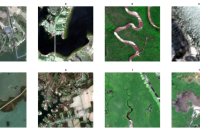

In [3]:
# Fetch the hosted training data 
# ---------------------------------

# Get the training data item using its Item ID from ArcGIS Online or Enterprise
training_data = gis.content.get('9251417cb9ab4a059eb538282f82883c')

# Display the item (useful in notebooks to verify it's the correct one)
training_data

In [4]:
# Download the hosted dataset to your local system
# -------------------------------------------------------

# Downloads the training data item to the temp directory
# The file will be saved with its original name stored in training_data.name (e.g., "my_dataset.zip")

filepath = training_data.download(file_name=training_data.name)

In [5]:
# Unzip the downloaded ZIP file to the same directory
# -------------------------------------------------------

# Extract the contents of the ZIP file into the same folder where it was downloaded

with zipfile.ZipFile(filepath, 'r') as zip_ref:
    zip_ref.extractall(Path(filepath).parent)

In [6]:
# Get the path of the unzipped folder
# -------------------------------------------------------

# Remove the '.zip' extension from the downloaded file path to get the folder name. os.path.splitext(filepath)[0] removes the .zip extension from the file path.
# Append '*' to match all contents inside the unzipped folder (if needed for globbing). Appending "*" gives you a wildcard pattern — useful if you want to list or process files inside the folder using glob.

output_path = os.path.join(os.path.splitext(filepath)[0], "*") 

In [7]:
# List the contents of the unzipped folder
# -------------------------------------------------------

# Use glob to get a list of all files/folders inside the unzipped directory. `glob.glob(output_path)` takes the wildcard path (e.g., "unzipped_folder/*") and returns a list of all files and directories inside it.
output_path = glob.glob(output_path)

# Display the list of files/folders
output_path # output_path now becomes a list, such as:

['~\AppData\\Local\\Temp\\coastline_classification_using_feature_classifier\\Category_1',
 '~\AppData\\Local\\Temp\\coastline_classification_using_feature_classifier\\Category_10',
 '~\AppData\\Local\\Temp\\coastline_classification_using_feature_classifier\\Category_2',
 '~\AppData\\Local\\Temp\\coastline_classification_using_feature_classifier\\Category_3',
 '~\AppData\\Local\\Temp\\coastline_classification_using_feature_classifier\\Category_4',
 '~\AppData\\Local\\Temp\\coastline_classification_using_feature_classifier\\Category_6',
 '~\AppData\\Local\\Temp\\coastline_classification_using_feature_classifier\\Category_7',
 '~\AppData\\Local\\Temp\\coastline_classification_using_feature_classifier\\Category_8']

## Train the model

ArcGIS's `arcgis.learn` module allows you to build a Feature Classifier model that can classify individual features based on training data. To understand the inner workings and potential applications of this model, refer to the official guide: ["How feature classifier works?"](https://developers.arcgis.com/python/guide/how-feature-categorization-works/).

### 📁 Prepare the data

#### Prepare the data using ArcGIS Learn's prepare_data function
Here, we will specify the path to our training data and a few hyperparameters.

- `path`: Directory containing the exported labeled tiles. You can use:
    - A single folder (for one category), or
    - A list of folders (for multi-category training).

- `batch_size`: Controls how many images are processed at once during training. You may adjust this value based on your system's GPU capacity. 128 worked for us on a 32GB GPU.

- `val_split_pct`: percentage of data to use for validation

Once the data is prepared using prepare_data(), you can proceed to initialize and train the Feature Classifier model.

In [8]:
# Prepare the data for training the deep learning model
# -------------------------------------------------------

data = prepare_data(path=output_path, batch_size=128, val_split_pct=0.2)

The `data` variable is now ready to be used with a deep learning model like `FeatureClassifier`.

### 🖼️ Visualize Training Data

🔍 To inspect the quality and variety of your training data, you can use the `show_batch()` method provided by `arcgis.learn`. This method:
- Randomly selects a batch of labeled image chips (or features).
- Displays them in a grid along with their associated class labels.
- Helps you visually verify that:
    - Images are properly aligned with their labels.
    - There's enough class variation. Check for class balance across categories.
    - Data quality is suitable for training.
    - Verify that the tiles are correctly labeled.
- Especially useful during early experimentation to catch issues like:
    - Mislabeling
    - Missing classes
    - Poor image quality
    - Imbalanced datasets

- `rows`: Specifies in how many rows to display image chips.

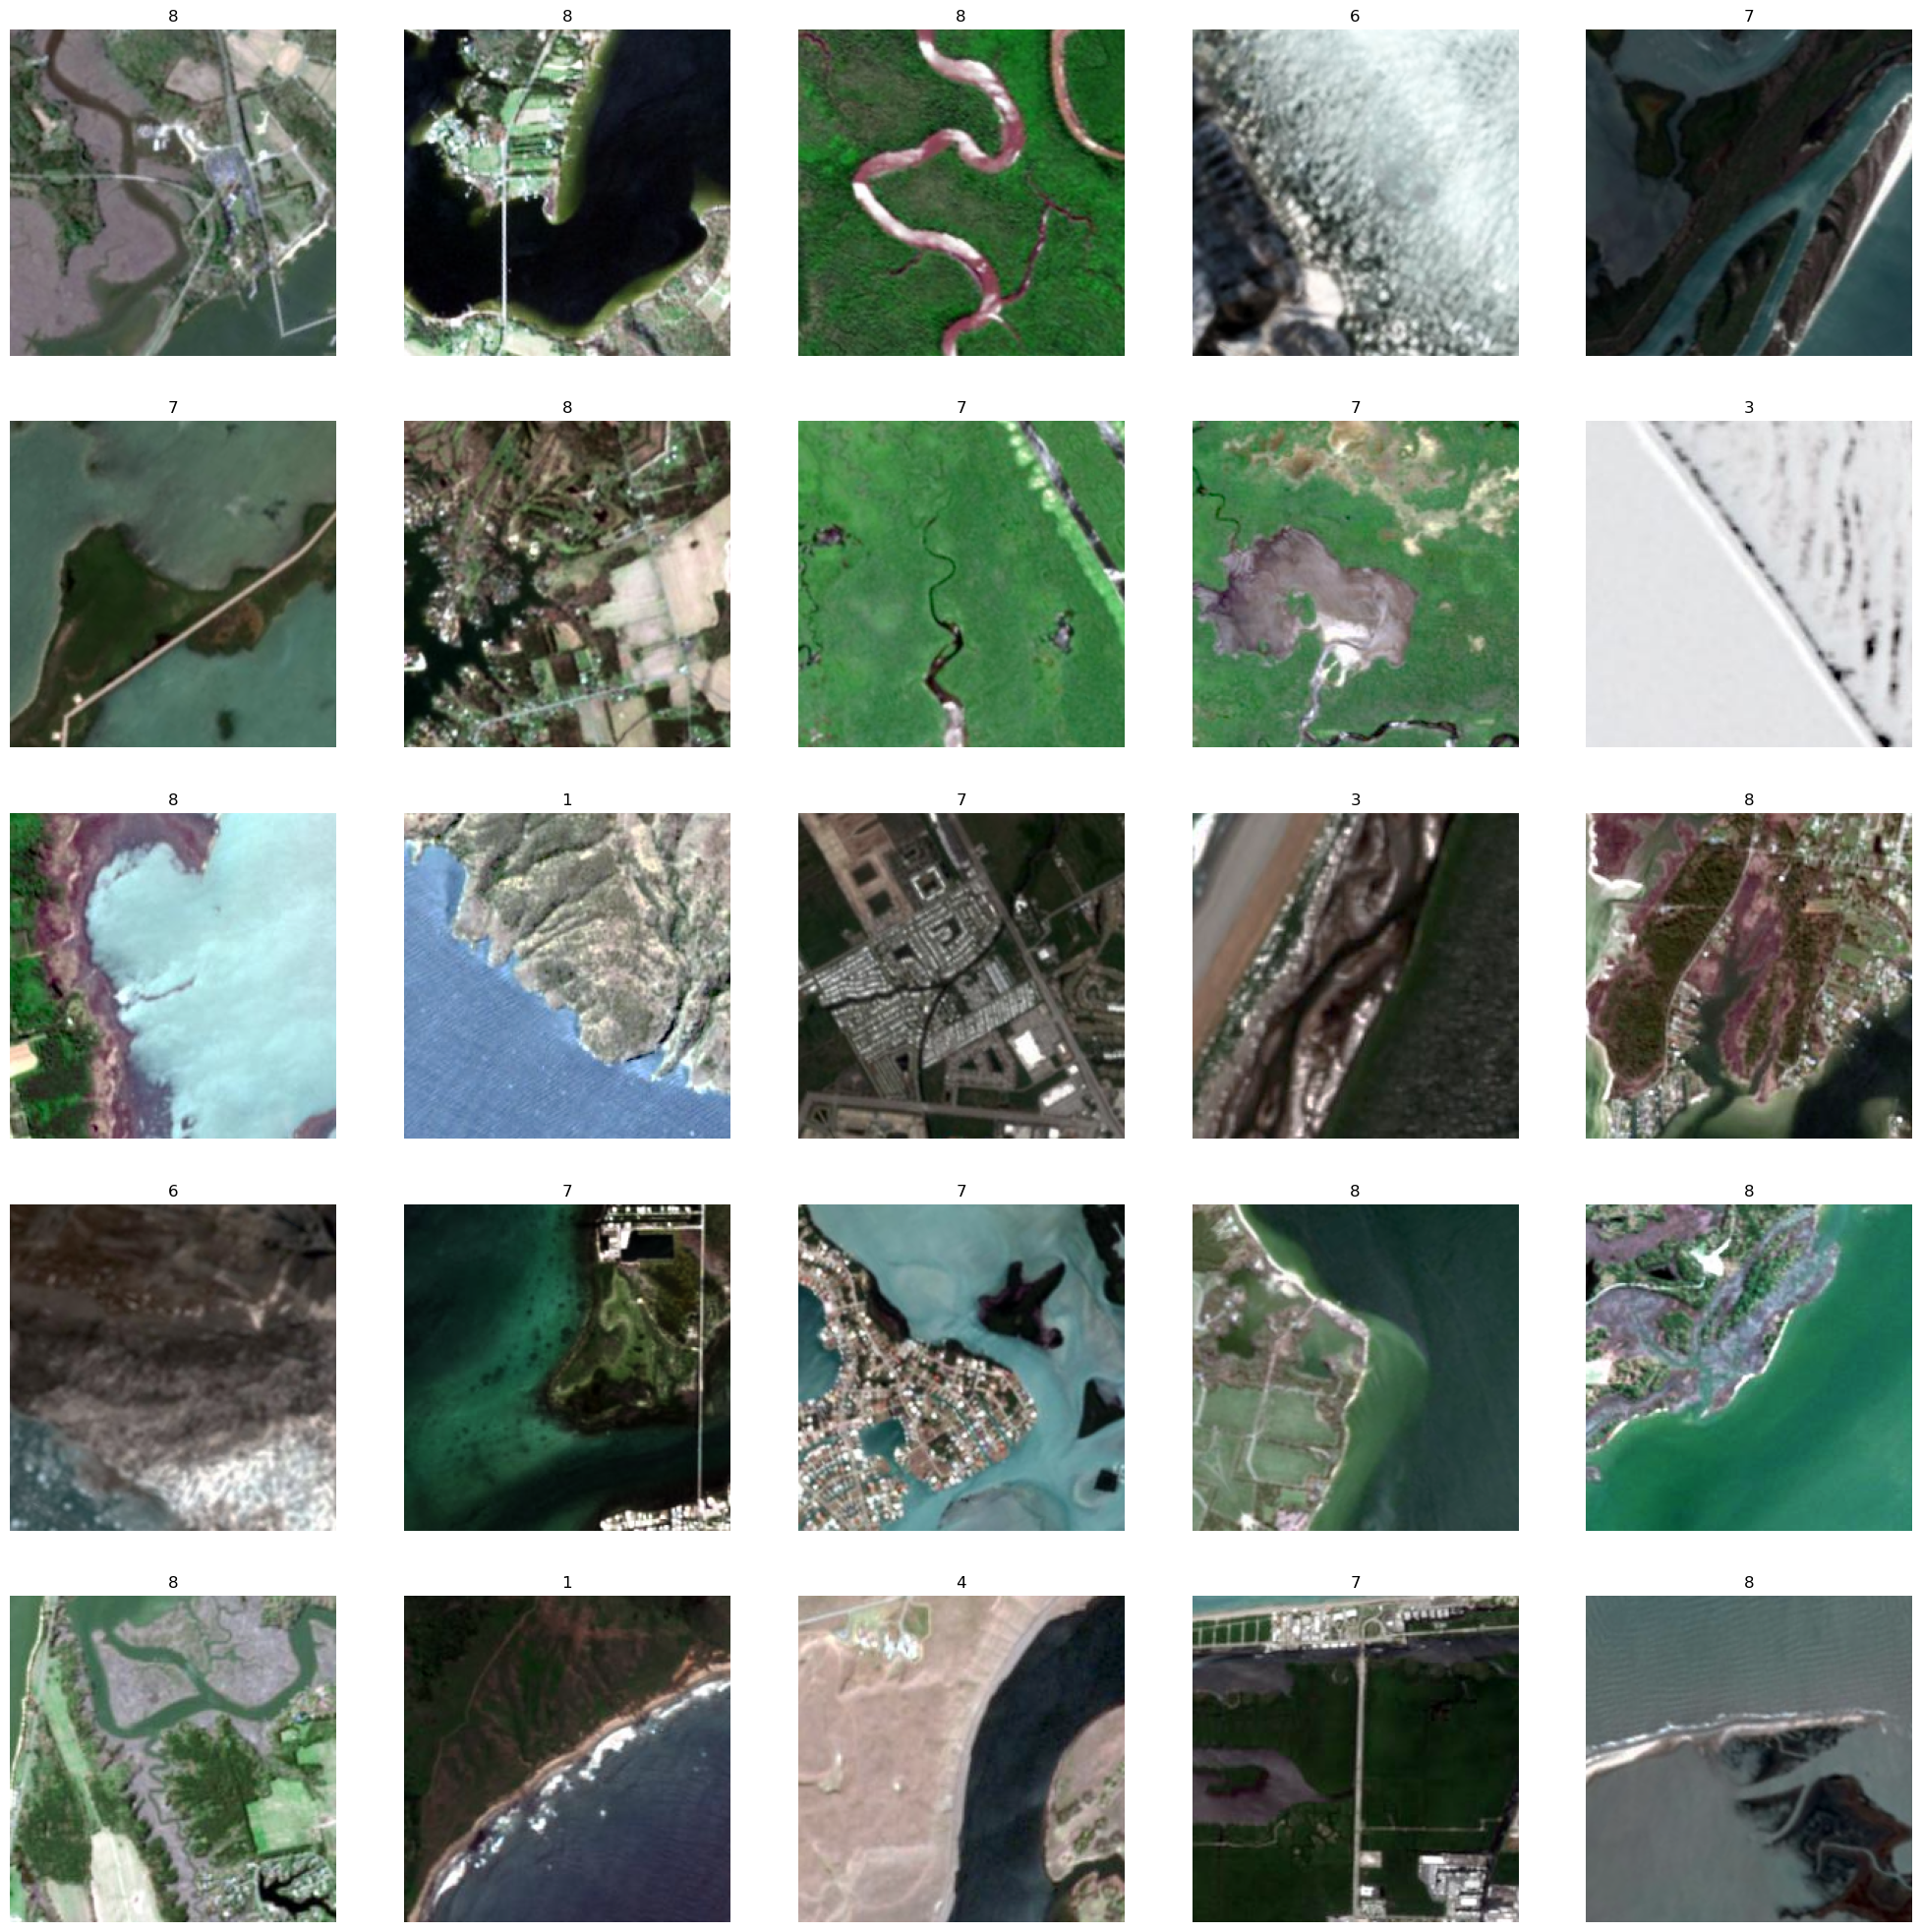

In [9]:
# Visualize a sample batch from the training dataset
# -------------------------------------------------------

data.show_batch(rows=5)

### 🧩 Load the Model Architecture
Now that the data is prepared, you can initialize the Feature Classifier model using the `FeatureClassifier` class from `arcgis.learn`. Read more about this model [here](https://developers.arcgis.com/python/latest/api-reference/arcgis.learn.toc.html#featureclassifier).
- `oversample=True`: This helps balance the dataset by oversampling minority classes, which is especially helpful if your training data contains class imbalances.

In [10]:
# Create a FeatureClassifier model object for training
# -------------------------------------------------------

model = FeatureClassifier(data, oversample=True)

### 📈 Find an Optimal Learning Rate

The [learning rate](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) is a critical hyperparameter that affects how quickly or effectively your model learns. The `ArcGIS API for Python` provides a built-in learning rate finder to help you choose a value that leads to faster convergence without overshooting. After running the learning rate finder, it will generate a plot showing the learning rate versus loss. You can then select the learning rate corresponding to the point just before the loss starts to increase. 
`model.lr_find()` runs a learning rate range test—it trains the model for a few batches while gradually increasing the learning rate and records the loss. It returns a suggested learning rate (lr) that is:
- High enough to train quickly,
- But not so high that it causes unstable training.

To visualize the plot:

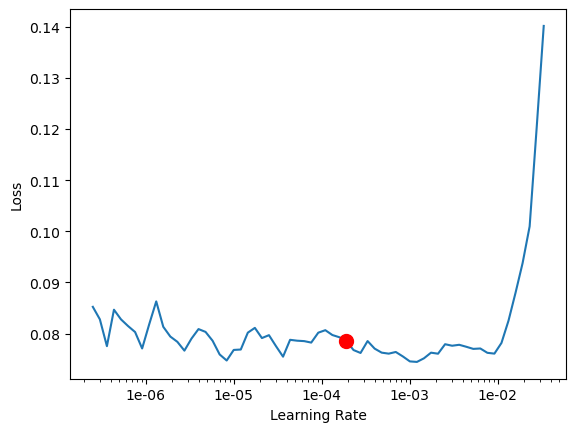

0.00019054607179632462

In [11]:
# Automatically find an optimal learning rate
# -------------------------------------------------------

lr = model.lr_find()

# Display the recommended learning rate
lr

This helps you:
- Visually identify the "sweet spot" before the loss starts to increase.
- Optionally pick a slightly lower LR than the steepest drop for stability.

Once you identify the optimal value from the plot, you'll use it when training the model in the next step.

### 🚀 Fit the Model

Here’s how you can fit the model using the chosen learning rate and number of epochs:
- `20`: Number of training epochs (you can increase this later based on performance). For the sake of time, we can start with 20 epochs.
- `lr=lr`: Learning rate (example value—adjust it based on your learning rate finder plot).

💡 Tips for Monitoring Training:
During training, watch:

- Training loss: Should steadily decrease.
- Validation loss: Should also decrease or stay stable (not increase significantly).

If validation loss increases while training loss keeps dropping, overfitting may be happening. If the model is overfitting, consider:

- Reducing the learning rate,
- Increasing the training data,
- Or applying data augmentation.

We will train the model for a few epochs with the learning rate we have found.

In [12]:
# Train the FeatureClassifier model
# -------------------------------------------------------

# Train the model for 20 epochs using the learning rate found earlier.

model.fit(20, lr=lr)

### 📊 Model Performance After Training
After just 20 epochs, we observe that both training and validation losses have significantly decreased, which indicates the model is effectively learning to classify different coastline categories. While these are promising early results, further fine-tuning or more training data could enhance performance even more.

### 📉 Plot the Loss Curve
To monitor the model’s learning progress over epochs, you can plot the training and validation loss curves. This helps visualize how well the model is learning and whether it's overfitting or underfitting. `model.plot_losses()` generates a line plot showing:
- Training loss over each epoch
- Validation loss over each epoch

🧠 What to Look For:
- ✅ Smooth downward trend in both losses → Good training progress.
- ⚠️ Validation loss flattening or rising while training loss decreases → Possible overfitting.
- ❌ Erratic loss behavior → Learning rate may be too high or data may be noisy.

Use this method:

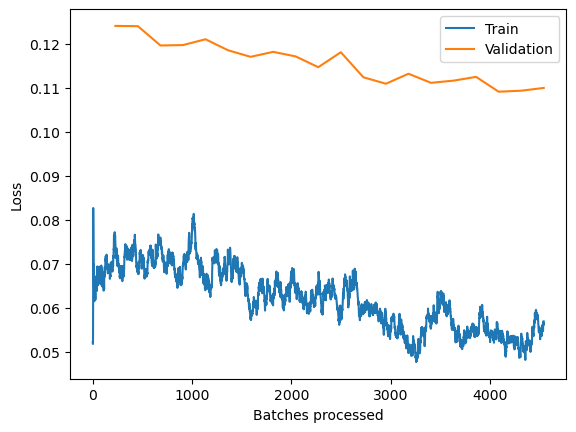

In [13]:
# Plot training and validation loss curves
# -------------------------------------------------------

model.plot_losses()

### 🖼️ Visualize Results on the Validation Set
To better understand how well the model is performing, it's good practice to visually compare the model’s predictions against the ground truth labels. This allows you to qualitatively assess whether the model is making correct classifications.

You can use the following code to preview the results of the model within the notebook:
- `rows=3`: You can increase this to view more samples.

This will display:

- Input tile
- Ground truth class
- Predicted class by the model

🔍 This visual check can reveal patterns in model errors, such as consistent confusion between similar categories (e.g., rocky vs. sandy shores), helping guide further improvements.

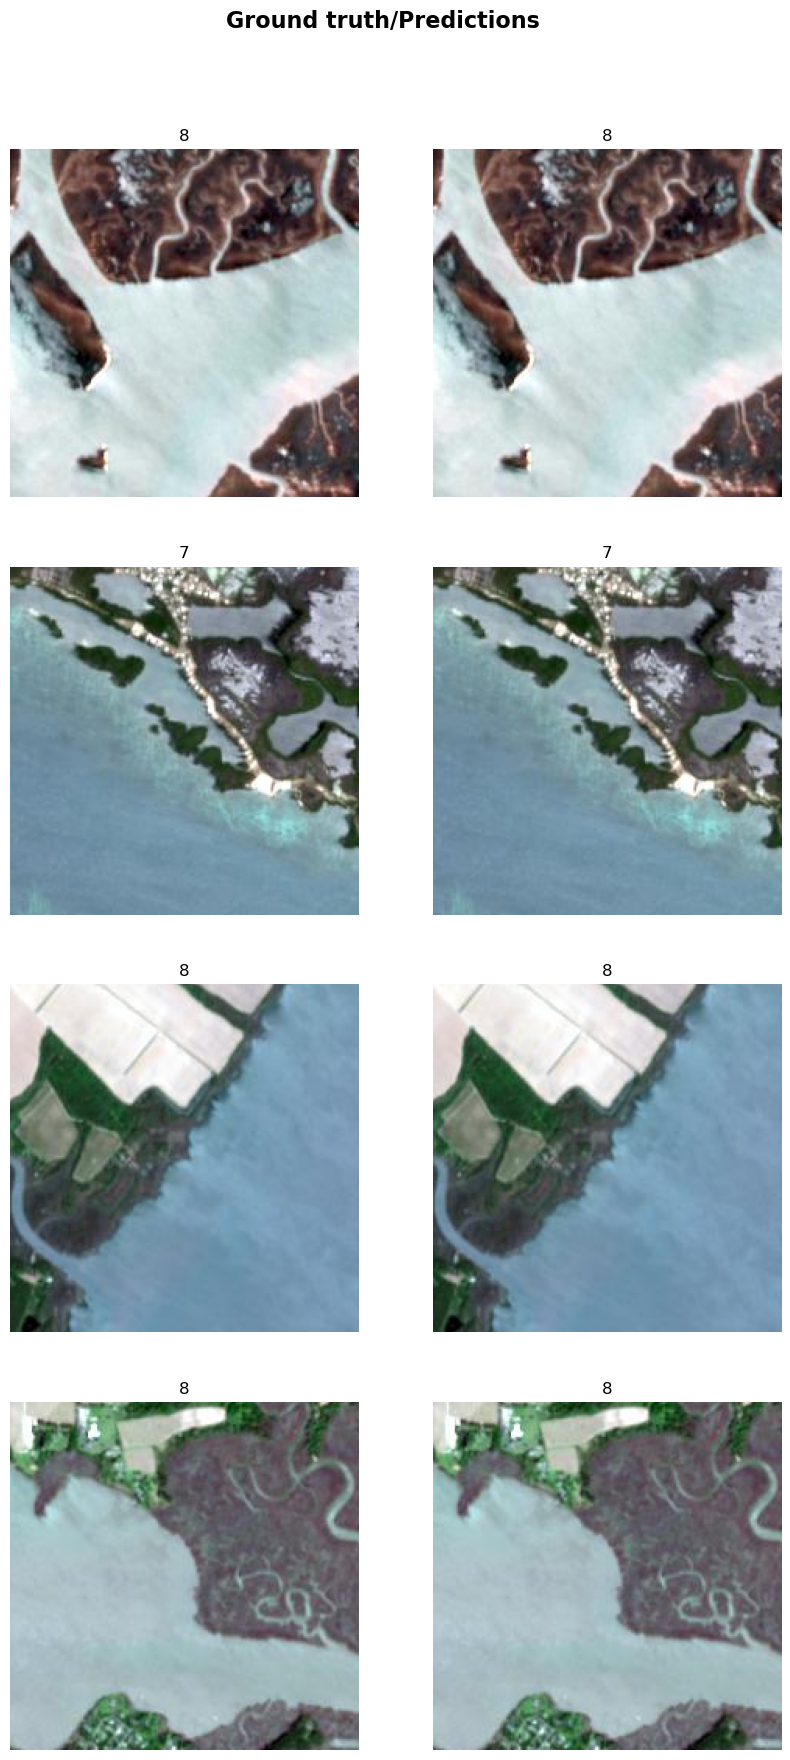

In [14]:
# Visualize model predictions vs actual labels
# -------------------------------------------------------

model.show_results(rows=4)

### Accuracy Assessment

After training, it’s important to evaluate how accurately the model is predicting each class. One of the best tools for this is the confusion matrix, which shows how often predictions match the true labels—and where the model is making mistakes.

#### 📉 Plot the Confusion Matrix
Use the `plot_confusion_matrix()` method from `arcgis.learn`:

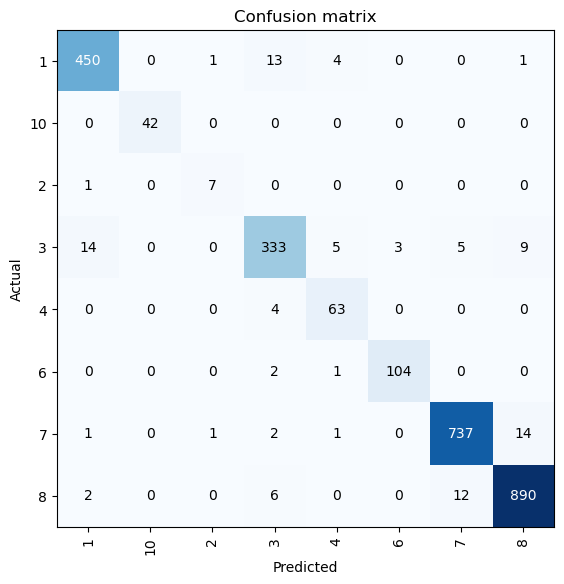

In [15]:
# Plot the confusion matrix for model evaluation
# -------------------------------------------------------

model.plot_confusion_matrix()

#### 🧠 How to Interpret the Confusion Matrix
- **Each row** = Actual class (ground truth label)
- **Each column** = Predicted class (model's prediction)
- **Diagonal cells** = Correct predictions
- **Off-diagonal cells** = Misclassifications (where the model predicted the wrong class)
- 🔍 **Strong diagonal dominance** suggests the model is performing well overall.
- ⚠️ **Consistent misclassification** in specific rows/columns may point to:
  - **Class imbalance**
  - **Visually similar categories**
  - **Too few training/validation samples for those categories**
- The goal is to have high numbers on the **diagonal** and low or zero values elsewhere.



#### 📊 Confusion Matrix Insights

The confusion matrix shows strong performance for most categories, with a majority of predictions falling along the diagonal (i.e., correct classifications).

##### ✅ Category-wise Breakdown

| Category | Total Tiles (Validation Set) | Correctly Classified | Misclassified As                             |
|----------|-------------------------------|------------------------|-------------------------------------------|
| 1        | 469                           | 450                    | 13 as 3, 4 as 4, 1 as 8                   |
| 2        | **8**                         | **7**                  | **1 as Category 1**                       |
| 3        | 369                           | 333                    | Some as 1, 4, 6, 7, 8                     |
| 4        | 67                            | 63                     | 4 misclassified as cat 3                  |
| 6        | 107                           | 104                    | 1 as 4, 2 as 3                            |
| 7        | 756                           | 737                    | 2 as 3, 1 as 1, 2 and 4, 14 as 8          |
| 8        | 910                           | 890                    | 6 as 3, 12 as 7, 2 as 1                   |
| 10       | 42                            | 42                     | 0 misclassified                           |



#### ⚠️ Category 2 Observations
- There are **8 tiles** for Category 2 in the validation set.
- **7 were correctly classified**, while **1 was misclassified** as Category 1.
- With such a small sample size, the model’s accuracy for this class is less reliable and could benefit from more examples.



#### 🔁 What You Can Do

To improve classification performance, especially for underrepresented categories like Category 2:

If you observe significant misclassifications or inconsistent accuracy across categories:
- 📌 Check for **class imbalance**.
- ➕ Export more labeled tiles for underrepresented classes.
- 🔄 Increase the validation split (`val_split_pct`) in `prepare_data()` as shown below.

  ```Python
  data = prepare_data(path=data_path, batch_size=128, val_split_pct=0.3)
  
  ```
  
- 🧪 Consider **data augmentation** or **oversampling**.
- 👀 Examine whether the misclassified categories have **visually similar features**.

💡 Note: If you modify or expand your dataset, be sure to retrain the model so it can learn from the updated distribution.

### 💾 Save the Model

Now, we will save the trained model as a **Deep Learning Package (`.dlpk`)**.  
This is the standard format used to **deploy deep learning models** across the **ArcGIS platform**, including:

We use the `.save()` method to export the model.
By default, the `.dlpk` file will be saved to the **`models` sub-folder** within the training data directory.

In [16]:
# Save the trained model for future use
# -------------------------------------------------------

model.save('model-20e_8classes')

Computing model metrics...


WindowsPath('D:/Work/Repos/Arcgis_python_API/arcgis-python-api/samples/04_gis_analysts_data_scientists/models/model-20e_8classes')

You can also specify a custom path if needed. For example -
```Python
model.save(r"D:\Exported_Models\coastline_classifier.dlpk")
```

💡Once saved, this `.dlpk` file can be:

- Shared with colleagues,
- Uploaded to ArcGIS Online or Enterprise,
- Or used for inferencing on new imagery in ArcGIS Pro or here in sample notebook itself.

## Model Inference

To perform **inferencing in ArcGIS Pro**, we first need to create a set of input features along the coastlines of a new, **unseen area**—i.e., an area not used during model training.

#### 🧱 Step 1: Prepare Input Features
Use the **Generate Rectangles Along Lines** tool to create rectangular features along the coastline (similar to the training process; see Figure 2).
These rectangles will act as the input objects for classification.


#### 🤖 Step 2: Run the Inference Tool
Use the **Classify Objects Using Deep Learning** tool in ArcGIS Pro.

##### 📥 Required Parameters:
- **Input Raster**: The Sentinel-2 imagery of the new area.
- **Input Features**: Output from the `Generate Rectangles Along coastlines` tool. (from Step 1).
- **Output Classified Objects Feature Class**: The output feature class containing the classified rectangles.
- **Model Definition**: The `.dlpk`model saved in the previous step.
- **Class Label Field**: The field name (e.g., `ClassLabel`) where the model will write the predicted class.

##### ⚙️ Environments to Set:
- **Cell Size**: Match the resolution of the Sentinel-2 imagery (e.g., 10 meters).
- **Processing Extent**: Limit the analysis to your area of interest.
- **Processor Type**: Choose between CPU or GPU based on your hardware.

💡After running the tool, each input rectangle will be assigned a **coastline category label** as predicted by the model—enabling spatial analysis and visualization directly in ArcGIS Pro.

<center><img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAAzkAAAKMCAYAAADIYnZrAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7P33l1xZkiYG7h+xv+05u+QhD2e5S84Ml5wZzpDdHD011TOtu7pUd5eu1AmtgQAQWmuttdZaa621cg/XWssQEN+aXXcHIgIBJBKJFFX1PPM7HvB339XPzL577dr7v0H6SB/pI32kj/SRPtJH+kgf6SN9fo8+EsmRPtJH+kgf6SN9pI/0kT7SR/r8Xn0kkiN9pI/0kT7SR/pIH+kjfaSP9Pm9+giSs7e/D6fTiaOjIxxKkCBBggQJbwH/4aFQJO/74/P5cEh5X1SmBAkSJEj4buDo+PhCXJT264bVZoNGq4XRaITb7Ra6RCI5EiRIkCDhnSCRHAkSJEj4wwMTGbvDAbVGg32ZDLt7e+JbJpcLosHXLrrvIhyfnODkyROB111/8vSp+L7oeggSyZEgQYKE33GcVgin8UUK4OvAd4HksN46g+PA90VpJbwfHJ8c4/nTE+DpMY6pvy9KI0GChN9fsM7Z3tlBU3MzSkpLUVtXh8KiIqSlp6O6pgabW1sizUX3ngbrLZPZDNnBAbQ63ZldoNCuEBMmJlAGIi9e0g2v2ymSSI4ECRIk/I7D6XIJYc6KgWG2WMS/+XcmHRfdcxFCZOl1CoOvM153nfFtkhwmM2xgH1P9Tk6DDPCTE1LCkvH9tYDtBIvVjVWVA9NaDyw+mgfn0kiQIOH3G7yzMjs3h9y8POTn56OnpwcpKSn49NNPERkZiemZGZHmontPg9NsbW+jmchSa1ub2Bni30P6x2K1irzKysuxuLQk9Bz/fj4fhkRyfscRUObSKqUECX+IYLLBq1i8QjYyOoqhoSEMEnr7+tDX34+V1VWhAN5ESkJgcuIgmc8rZK9bGeO8+LrH633lWgjfFslhGej3+WGyebCicmL6wImpICblTiyo3dB5D+E7d5+Er45jGpf1dT0iWg/wQb8Ja/Zj0c+SXpIg4Q8HvEDGJId3cCYmJ+EifdHa2orbd+4gLj4ec3TtbUnOzu4uSktKEB0dLYiOTq8XusVmt2NqehqZWVmIjY3F/MICXEReJJLzewj/4RE8vkM4CV76+6I0EiRI+P0FC3YmJo1NTYhPSEBubi6ys7Nx5+5dXLp8WbgM8Hb+F7kIhMjSwuKiIEvygwP4/P4zRIfJzdz8PMYnJsTK2uuI07dBclhPudw+7CntaJjU4tMaGf6idB9/VrIvvv9z7j7+tkKFCqUXNpKVvONzUT4S3g3H/kOsrerwuEmOX/aYsGKTSI4ECX9oOE1yeKeFdUpbezvuEMlJIP00T/rjbUhOSB+tra+jsLAQkVFR6OjsFHqJ9U96ejriiTQNDg4K0nNRHiF8ZZIjrpPScLGx7T0L/u1QUiZfC44JBoMDbRNqXB80YsLgh/NQ8oWWIOEPCSGS09LaKhTL9vY2VldXkZGRgWvXr6O8vBxGk+kLSQ7nw7szvb29YnWssrJS6IDQ6hivlI2RcklKTkZeXp5YZXvdytk3TnJIIT51Uf3mNPiwWoY/bdChfs+JXYsXSpsPGocXS3sW1IzpULFDJMcrGd9fB7xeP8zU11qHHy5p0U2ChN8JMKFgWc5gPRH6+/S/X7egdR7vi+QwuEy3x4PNzU0UFBQgLi5O6DUmN0xyBoIEh/XNRfeH8O4khyrAq2FupxebpECSepT4oF6Bn9Ue4Jd1B/hZjQK/qlWjVuGBzscVviAPCe8G6ksmOWqlFXnNu/j3VRq0Kn2w+QOuaxfeI0GChN87sAJiktPc0iKIDh/S5NWunNxcXCeSw2TlbUgOKxRWFgqlElVVVYglhVJO93J0HFYkw6OjguCkpaVhZGRE7Oq8TvF90yTn2OvB+LQaP6+Q4R86DBjQ+GD1HoozIaEzOl4fGeB2L/SuQ/hOGeB8WP4ZH5Z/HsQz+vcJ3Re8HsJR6FB9KF0w7ZNz8pbzE3k8CYAye5n+6Vn5zP33lPOkdE9DaYPlizRcd5HfqTyC+Vy4mEX5PaNrZ9KfriN9P/nCOnEavu9sGtY34vor/XVC/wf660VdT9XvhMvjOhFetFHcR/++oJ9F8ILTZdPfz/l+/o3ul/SbBAnvDyyreaefz7Wwe9nk1NQZ8G/sGsZ6gBe6LsrjNJ49fy7cx+obGsSuP+unjq4uQXISExNFOZzmonsvAstI1m/sYcBney5fvozHjx+js7NT1Pt1Oug03o3ksDA9OoROY0PlqBq/bVYjakSP/DkTyhfMqFw0oWBSh7AGBdLXXJA7D6UdhvcMHheH3YPVXQvqNhzYsR3CzW4Y59JJkCDhuwUWzCz8nz579lrwatfbCPDTJCfktyxXKITb2pchOSGwixortEoiOkxq2N2NV+I4Og6vng0PD8NE+b2pbt8YyWGdQv+2a0y4U76L71erkbblxjEZ6U+CBnQIfHaRDXz+PXQ/ByNwkgyd2zQhe1yPlDE9cpZtWDD54Ts6ZajTt9/mwuC6GWmULpnSpU4YkLfuhJJ0Gwc04LR+rx9GnR31q1YsailfmQ01cwYkjurpPhMad1zQ8oIfG+tUb5bf8ztW9CncWKa0jQtGFC5aMa7zwkt1O6GyLQYHWpeMIg+uX9qUETX7bnGw/zQZY3LyzOvFPOmD4mkDkih96oQRBSs2bNr88FJ7uEylxoG2uWBek0Y0ydzQuI+ITxyLvPhMk+zAghLKg8tMnTShbtsJvfDKOIbP7sbElhm5k3okjRmQPm0W9bX7D2EzuzBB7WnZc0LnobzotwOlDX3bdgzKnFjct6J4ivKk+4qpXqsW6mcqN0SgmODYKY+hNRqPiZf5j+3b0bpmRo/chX1HoK9DYyhBgoR3B8tqvcGA7p4epKalITw8HBEREYiIjEQ4fbObGOsAJie8q3JRHiGwTjBQXqyHeMelrq5OEB52N7t27RoePHiANrrG5b2NbgvpSQ4yMER6JyYmRui0+5RPVU2NWMxjvfZFeb0TyTk5JvantqKsX4kfV8rx+ZAFkwYfnGRkPyFB9eQJb117sSOzYkLthZGE6GlhzKs7YnUmtMJzwYoOV1ysOp1KxzitpELpeMWMV4m4bLF6Fkz7nP4+v/LDZYfS8jfX43T5nJ9YcQrm8bp8BLgtXOaptIyQguU0rFxP58d5XbT6dzoPTvNCkAfLONtfgeti1YtX1U6t1oX6jfvhfN34vlf7ObC6dzr/0Cok43xdJUiQ8O7g55O38M0WCw6IjPDOyUVQqdWCvLASuiifEFgJ8Aob7+IwGWFCo1SpRHQbVgi8K8NlfRkXAf7e2NwUrm5hYWG4e/eucBFg94AQYQqluwjfFMlh2cWkbHVWif+StYsPh8yYdx6B2MGLNCwjWQ4KvcR/B+XZyckhNHon2sjoftSqwLUuNe51KPDLBiXCJ6yYNvhxRPn4D8noV9jQMqbBnQ4VPu7Q4F6PGje7lPhJjZqMcCsZ6z54SVYeOj3YXFTh+wX7+KRLj7gRPaIHNLjZSffVyfHjchVKiegomaAckXGhtiGjVYYfN6sRN6hFzIAWcZNm9Kk8cPp9WN22oHRQjevtKnzaSeV2q3G1XYG/r9egfM0hFg/91CbuE5OFyMGMDo+7VLjcwfUjUH2v9OrQp/bB6vaKBbGcPjVutChwk/K60SLHb9p1qNhywUB18np8WCPCl9h+gI/b6F4q83oH1WvcjD2PX0RP653S4H67Eh+30/2dXB8tanadMBLBU+4aEdN2gB93GrFso3lO90xMKvCrin38bb0ayUSawqnvuPyfVx0gZtqCOSuTJxoTaoPR5ELDkBrXGhX4sFWF210a3KDvsGY5/nPeDn7TZ8KA/kjo69D4SpAg4auBg8ksr6yIaGhMRn7zm98IfPjhh2LXpL2jQ+iUL9JFR6SL2I2Zw0fnFxSguKQEJYSU5GQkJCaKhbKmpiaR5k36IwROwwSHd5TSiTSxF0ENkRv2UkimPPkcKpMX1gEX3R/Clyc5VPCJy4nmQQX+unAfP+yzQOvjlbOAAuH0DGHcs8FMAilksLNS4tUdq92DXYMbGzo3tkxeaEhYnz6kyOkOg+4FW3pKF8SW2QeT51BcD6X1kWBWWQN+wGanD0pzMD3lvU/Kxxo8FyTSU9kWylNDaQ0OH7QWD7aNHqjo3x7eBaF0PhLWeqtH3B8qd9cayOc80TkmRWWnMuXGl2m5PXr3Ibx0ncv0UH5aqlOoHfuUl9l7qk8ILleg3uuiTA92zF7YqDw/p+EVMocXe9Rfm3T/Ol1XUn2d/mBf0jU55WkjJcXuGW7qD73NC4XNBwvXzUT3Ub7cTo2TV/Re1l+MB5XDfcLjEcqf+1PDedC3iVfkTt0jQYKEdweTElYq6xsbQkjzKllxcbFQCPxdRGBy0dPbKw73nz/8fxrid1I8vG1fU1sr/KBZgfBhTV5Ju3r1KoqKigRpepH+XB4XgdPxahsf9OTVt88//1woGY7Uxqt53IaL7gvhmyI5x6RbPF4PGjv28Ud5B4hfssNKdX8hpymtw016wRWAhf52BOWk3+NC/ZAKvy6V4/KgCfMkc7VmB2r7D/B3lUqETduhZ/lqcSC7WYaflskRNmnBmJ7S2UhG66xIa5Thz3LliJqzY5/PQzrcWJqQ478JX8X/SPUJm7Fi3kDylAjI2KoWP0vdxl826lCv9JDcP4TuwIKw0i38P5O38RkRtCEiNyyjrW4fNGoLHlTs4afVSqQt27FCukxDJGNZbsLNol38WZkK+UROzNRet8OD0TkNfpKzi8/6jGg7cJPsJh2rc6Bvy4pFgw+7MiMi6+X4aZUaOZsOHJB836bfblbJ8Ot2PZrV1C6jHZnVu/h3hQoUbDmxY/dhU+XCzL4DWi/9vaHD3+fu4BdtWjRTGxRmDxZlDiyTfnGQvt5f0+Ja5S7+qEaHGQuRHGrH4MA+/s/4Vfx3WXLEzDuwbvRiR2lDbPUO/qpSgdgVlwgE4XK60T2mxN8V7OHTHgPaKX8l6ee1XTMeVW7hv3m8gv/QQL9rj/FcIjkSJLw3sLxnPcM6qZT00c2bN/HZZ5+JnRyO0sm6gGX+F+kPvs7u0pwP7/yMjo0J/cN6bWx8XPzG19jb4Ivy4vLYTTpEcHiRjXdzWNcxISsoLERMbKxY3OP6sc55XZ5fmuRwRma5ATfKd/GfK9UoVfvFzsXpNBdBEAhSGiqtE03DSnxQK8ePyvfxowY14uZJSThepvV4iBgorageVePHVfIgZPhBiw4lG04YiegECIAfJhLU9ztUiBw1oWbRjMiOA/yI0v81Ka/ftOrQKHfDwgSM8uWt9vYxNcJHjciZMiCzT4XfNKuRueoQ2/FuEsq7e2bk9Cnxl+WBcv+W8MtuA1pkbkGEQgY/t8VpdqJ7ToerTQf4QSWlZzRpULnjEtv1XrcXKzsWJLXJ8A/VlFeFDB/36FGz53kRDc1FCmp6SYcHLXL8BZdZrcCvOgyYIqXLhzfNegfaJjX4Da8EUl3+khRD/LwVm3ZS2KQ8+ybV+FWnHkO6wGHPg30z8qn+n/Ya0DBnwN3WA/y0nJR0nRKxpHR3XIE2iHGl9CqVHbXDKvyiWiby/5sqJSL7NHjUpcSlLi3qFESMKN35eSBBgoQvD5afvJPDLzGrqq4WCuXjjz8Wq2YMfp8AuwywcuFdE3Hfa4Q3KwI+GzMVVASpqanCPY2JE7+T4Nbt24EINENDYjfnbV3WeAeJlVJGZqZwXWBfav7ml7mxXviiFb1vjuSQzPY6kF+/h39epELOupN+C5wV5etelxtTO1Y0LJlRuWBC9YoFfWTMO0h2K3YN+LRkD39bq0Y3kQB29WU5Z9oz4HLZPn7YoseAyYtNIid/lrGD6+MWzNsORf5iMY/qoVcZ8Nv8HfykSYdWrR8nbg+WJg/w38Zu4gddJowa/TgO7ob7PW70DB/gX+XIcGfKSvrBD73CgkcVW/h/FapQtuuhegV21F1EloYp7R9n7CNm2YF90iW8Cy/Im490yooaf5Gzh8/7zViy+aFWWRFXsY3v12vRpSG9QfNF1DFYT5/fi6YuGf4yT4bLoxaoqW881AcelxddfXL8pPwAt+csmFObcTt3G39UqcOgzgs/1Z3lPhMyD+UxMaPEv0/fw5VBM9acLxcbebyfUBoZkZybRJL+TZ0Os0GSM0Ak53s5RGjE7g6NGd3z9MiH4UkF/qpYjg/6LVARsVMrLbicv4WfkS5r0/iEux4vnPpJx28vqPAnaRv4s2YD2iSSI0HCewfrJSY6W1tbgpScP/fyOgLxJjCZYdc13gkKuaixrPgi/cF48uwZNogQ8Y4Qnw8NRVEL6U9ecMvLz0dUdLQIdPBe35NzcuLHzJQKPyrYx897jNj2keA6dZ0FHwsyFrIM/pt/e0L3bZIBHlNPxnqNGuWbdsweWFDYr8BvahQk+B0w8q4LCcDJeS1u8wpTswY5Gw7MKByYVpgR3UgCuUiBiCkbDrjTfX7oVtX4L+kb+O9S9/AzIiM1W3bMKO1oX9DgHzJ38eNaDaqUHvioDj6LE/nN+/hXGdv4CyJXhat2TKvd2LP64SYl1DaiwmdECD7t0qFm30X5ODBCyvAakbEfl6mQvuqEiQQvK1qN2or4OhmRA6oPkYeRAyemZVaUzhnRRYRIbnJhZFGLD4rk+HzAgG6ZA+ObejxsOcDPGpk8+OChwRoaVeJXpfv4vI+IlNyFiX0HamdM2HL6aJLYUdBFJKVMhsdzNoxSGZ3LFvTuOiB3+GDW2VDVsYv/pUiJ+gOfWKXcWdfhSsEa/u8x20TOjGjadgg/6bQ2Of6elPrdeQe0pDSPjw+hJCWb3CzHD0nZPJoNtGFiw4S4pj3873Gr+P9my5C6wwouoMxOzwMJEiS8G0KCmt3VePud3cGY6DDBYaHNbmFMSr5IGbBQZ+HOOzd8T//AgCBOHEKaFRX7WTNZ4pUvFvSvUwKnwfkNj4yI8zh80JMJEu8OMXniuvFZHT6zc9G9IXzTJCe3bhf/LEeB1BUnPCSfxS45GfF2sx2V4zo87lDiZ6W7+D/Sd/A3/TZonR5MzanwF1nb+P+l7+Nylxbh/UE0y/DHyev4o3Ilsjad6B1V4F+ky5G1RnKT9BMTlpAsdDpcSKnaxQ/KFUjZdMHp8WCFSM4/SdvF/XkX9lwBTwbWf7zrLt8y4Ce5RBKGjVhh+U7yN6JyG3/SasSAjgx7mhfPnrLblh25RNz+VyI/zQoP3PR7SI+y+5xeY8XneTv4RYsWzRonlomYfUA67eNRGzbsgTNCL+U1GRUuG6IqdvBPEnfwbyuViB4MtrVXjU+LNvG/pu/iZ0SYZlRO1DTu4n+I28EP2nSoJh2oIV3BLs+HVK6GdOHPqc/+OG8fnw6b0E118xERChCXowtJTn+/DD8oIZ06ZoOSSJywDU58WFhS4W+KZPhZhwm7Vg9Wt3X4L8k7uEkkbJmIG7tQc3t5vL0yPX6Sv4m/amWSw+eHQm2TIEHC+wLrJZb/bPvPzMwIYvImT4I3gXUN3y9ITnv7i92gi9JeBF6Q4zM3HOSGAx9wvUL6kOvDHgVcz66uLvHS0Dd5GHxpkvPkiQftfQf4foEcn41a4WLhG7pOSkiud2GSDPVhwiQZzSsmH+yHR3CQ4C7tVeCv6b7cHReMZDg/e3YMi9KM9FY5/rRagwEiGwbepq8iwkIkpGCbhSwpMlIuHiI0uyTMb1Xu42+q1KhV+8Uqj25VhX+TsoH/uUCBpDWneNkbp3c6XWgeUOAvSJD+ggT4AUfVIZKT27iDf5S5h18PWbBpC7xfhle1FFt6fEQk4BetOjSpvOJgJ+fj9noxRYTpg7J9/KRZjykL/UZKsrWfyEGZHPcnLFgjxeKiPNx88NRO99L38roB4dX7+MsaHSapXax8nx/6SLlqcZ0I3G+GLdh1OZFKSvI/FiqRRATKS8rER2UabV5SbH5s7+hxicr9rxVqDInDsNSPQfcLL5Vn1thQ0bZLbVeiNkhytle1uFS4gf82+wBF225oqN08LnPLWlyp2MX3Gw1YY1LncKO69wC/qpTj9oRVKEd+3w738yql/TB/A/80S4bE7QDJOU1kJUiQ8NUQIjrsShYiOrxbwqTkbQhOCKyEeOeFfZcZvAPD+YV2bxhverlnCKH6TE5OCv9p3hViBcN5cmhpVjgVp4gOnxl6XX7fHMk5ojp70NFDxCRVhkdzpMxIzoodD7ru40UwkqU6kwPNY0r8IGcHf9pthcbmxsD4Af6U/v1vS0j2ThiRP2NEHmPSgKQRPUrWbBhXO9E0IMM/zlSgbMsFK8nB02cU3S4vSup38bclckQSwbIwyZk6wD8l0vBo0Q2ZOxh5jPqJ+0S1Y8A/ZOzg4z4Dpu0+aInkRFbu4Ie9JkywfKd0z4nk6IxWxJOs/qelWgyqvdTO4FnKoNFvNjhwr3AbP29Uo3zPhpEVNf4sZRdhiy6o3IGABKE6cnq/xYxbJdv4l1n7RCqobbPUzukAssZ0SJ0yoU3mhs7hh1xmRky3Cn+Zs4V/l7uLH7frkEttd5BuYE+IgRUTHjXK8P3sLfyLfDkuj5gwqvcJzwbF+sUk54dEcj4ft0F9eCL0yDGRnMXlAMn5ByI5OxY35jfU+ONEasOkDTvOw0Abgu09PDDg7wq2JJIjQcI3ANYDp0nFu4BlHuslJiC8SMb5vUn/nAenZeLCuzeO19zL9WQCw2dS31TXdyA5btR3yfDvc+X4dNQmVpk4DcNLxGJwxYjEPg3utCvxs0oZPqE0mzYfDvaNuFO5i3+cvIdHEybUrFjQtG5D46QGnxRv439K30Pijgdzixr8de4ePu0zYtFxKA7tB1Z/qJFuF4o75PhB/j7uLThhI8GqJZLzn7K28eckAAeMRy/SP3tyBNWeEZcq9vHX9RqMWX3wWAMk599UqBC3SoL7iA/XU7sOvRgYPMB/zJXhFhn8qkM+pE/CmPJhVzybwYqYBhn+svgAxXJSBlY7okp38KMGLSrlHhwROQnsWtE3k5kTD7pIqf55yhb+WakKpdTWhlULWghZXH9SEP+yWotRowtVzXv4o9Q9/LDdgD6tB2b/sQgk8OzpEfQHJtyr2MO/ytjHw3krpkiZHAUDDbCgZ5JT2U59SiSpLkhyNld1uFm2jT+u1WHaymeDOD9SQAdGhDfs438v1mDG6INebxV5/7hKhQqFF4ehfqb8j3UWJDfu4v/Il0iOBAlfF0LGLysBXu3inRgtCeMvowwYnJ5XsRgctpPDd/IL0/j3EC667zQ4DQeLGSeSxGSGyRITJM6TrzGZ4h0czpsPlvIu1Ovy/aZITmCHxA/ZigZ/RTrgJ10G9JupbJLHfI3rJ8IhP2GjWoNfF+7iL3uI5Dg9wvXqrwr28aMWIhx6D+RmD/YFAu/W4YUqo82FrpED/G9pcuEKZ2CSc8rA9pC+y6jZwd+UKZC44X6xk/OPieSELbiI5ATktNiRoHpur2nxVxm7+HzAhBVHYCeHSc6P+8yYJJLjp/qy3OednJy6XfwvBSpxNoUjkAnixqD2G7RWXMrfxi+atWg4sGN0VYPvJ27j6qwTSvchnrNO4zpSfizTD102RFbs4D8UKfGYd/LtXsiC7ZVZ+IxqIOS2CK1N9TwwuNA6r0dUC+m8wj38eaMWk9Sv7N7MC3mbchsqRrX4uFaO7xMRuj1tx76dCNKGDrcuIDl/SyTnszGb0KsvSM6LnRwjkRwX5tbV+KOEXdwnkrNLJAfcBh5Daq9PrsdP8yWSI0HCNwGWmyG5f9H1twXrASYgX0RCXgcun3d0XrdD80XXQ/jSJOfkiRe9RAj+a9Y+ft1rhoYKCqXxuj1YJgHYtmRE1oAC30tax79sMJIScWNtXYuPiMz8o5R9XOkMbJdHDGgR2aPGZ/Vy/KxJheJ9N/onFPh3OXLcGbVCTYL3xcoZCzy/D52DSvyKI62MkLIikqNeUeG/5u3i530WzDuevFjF4nj+do0VEdUkZCuVaDF54SKSk92wix+Scije88DDnUTpfX43Klv28X8UKBC76BARa0JGPSsoj8ONglY5fpy/h5h1O3a0Rvwmawcf9JgwYgwoVVFHUU9SbF4HKnpl+KP4TfyLMhUiqZ3c1ghq84M2BT6qP8DH/SYsmlnx6XG9hkgj5f2TBiXiZi3oV3tgJcJyaHOic1KLX5ft488JP6V6F27YRTQfPh9k015AclZ0uEsK7fvNBqw4aUyYyBHJUSlNiG6S4Z8VqDHJSl1lwG+KiOTUatFnOHWuitoOsw257fv440KJ5EiQ8HWCBTXvlPB2vtlsFsrgXZUL38crZ3zgk13Yvoxi4XuZMKhUKiH7eQXt9BmeUJ14B2efrvMOz+vq+U2RHAGSg16TA0nN+/jL8gM8mCYjmXevqW4iQiQvCp14Mbekwc8KAjs5arcf+zt6fFhCJKdeixGSw09fvJclQDz5jI7P7cXycuBMzo3RQCSwJyTrRaTKY9I9CiM+I+L0d406NKh8OGL9RyTnv0/cws8GrZi3UD/w+11ItnrsTlT3yPBv8+V4PGsTZ3IC7mo7+BGRnNBODrtpOexu9A4d4F9n7iNpxYEDLxn23A4q9/jQhyUiNT/I3cPnfSbMEFFZ3zPiw6wt/EWzHoM6nyBFnJZ1J5MSh9eNmg4Z/rzwADcn7XBwXsH2MmFgrwD2ZvAfHQodArrOZ4PMB6QziMT9s2wZCpX+QPAdyltECPUSUVkz4NcZa/jTdqOIrrq3/uVJDu/k7Nk82N434IdpW/hlh0G04ST4fpxDejbmppT4Tynr4kyOFHhAgoTfHbwPsvRV8aVJDrsI7JDg/3X+Lv6ahPuwI/AOHJGOhTQLUDKqjWoTbhRv4XstJsyRUb22psWnZbv4l0UqVKzbMLhnx/C+HUOEMblTRGhROr0Ym1bg3xLJuU0kR0XC/QzJISXXOajAr6js345QxYMk57/k7uDvesyYsQXcAwL1PIZRYca98n38VYUKrUYv3EGS89M2HUplZ0lOVes+/s8LSc4x3DYX8pjkFOwjbs2ODYUOf5u+jd+ycuKVw9DKWTD9M48Dlb1yfC99Bz/sMom2jgTbKtz4lC5smoMR0TxerClsSOtW4Ee5W/jXubv4z016jOl9Qtk6qE8mN82Irt/DH2ft4l8VyHBvyoo1Urh23cUk5075Dr7XZMCSI0hynvL5GyOiGvfxz4nkTNF4yJR6/KJwDz8ihTRIJOc0OXxutCKrbQ9/RGVJJEeChK8XLDPeZkXqbcCuaSYiS/x90fUvAteDw01fVJdQPb/oHT7fKMkJYnfbRPJNjp/XK5G4aMO8lndnvDiwemEwOtAwosSfkZ742wHSG0SCvBY78jrk+CEZ2jdGSHeYKL3FC6XBifEDJxbIaOdzNGadFbF1e/hZnQppS3YskR5RWz3YM9hRO6AgQ12OcCJWOx7qG2cg8MD/I2oD/7xCjfw1B/YpzwPKc4rk8s+JZP1VCxEihVfsUGgPLAivoDr1mjAeJDnsDcDvqjmQGXGlbA8fdOhQtu3EpsUnoo1taizIbJXhB1UqZK85hdu3mdpX1b2PP8mR4cGEBcMaDxSUdlfrwqTcgS2bH2urWhFQ4a+r1SjdcWKb+uWACNKG2oEZtRtyO+kjlxsjWw7sGrxQ2f2Q7ZmQ1CTD98sUKFP7sKVzYFnhwjZd58ik06tGXC3exj/0mzFnIpJDOv5G1a7wIghFV+vr28ffFMvwiSA5L93V+EzOXxXKSBebIHMQgTKTbm7exV8SEXs8aaHx8Io2rMotiK3exv8nYhV/QjqtQyeRHAkSJLw9vjTJEZF+9DYkNO3jeyVyPFxyCl/lFxG76PrzIxLIBySkC7fwn4jkCIElN+JBnQz/vlSDSTMLdN76D5AMQZKYzBz6RDSbv2F3tV4jZjmaDV/jvOnbS/Up7pTjR2R83190iheQsbva93K28dcdRoyYXvojnxz5sb6mE2dpfkhkbMbqhzdIcn7Sqn1Bcjh/P5U7PKzA93NluE1KQkntCfl1M6kz6a2IbpDhb0oUdJ8LCoMZH2Zv4weUb7PSGzgkyW0P4uTYg+5xFf4ubx8/JaVq599EWwmU74s2Ebjf+N98Fmb/wIoiIhf/JHkHiRsuKPnQJ93Dq5VWmwcL22Z8lLOBP69To3zfC73Wjqp3JDkKtTEQXahKg2YV+32/bK9HbUZcveSuJkHC7yKYgLyJhHzd+DZIzhHJSIXCguJBBX5Zc4APG9S43anB3W4NwtqV+AnJuj8ulCN23QWrl+Qq6QeZyoyEZjm+n7KLX3RS+i4NbjYrcWfEiFYlH2TlXR0/9mQWpJKx/zPK95dtGtznd8y0H+DHlUo8HrdiyRzYefDb3WIn5/+dsIl/XazAh81q3KV8b7Yp8Isq0pcka2t3XTCSnH5+fAgNkZyYml38/YAZU6QT2V2N5azwHvASEVg24g7d9+PqAyI7WtztUuFKqxw/rVAhb9mOfWcgehsHBeDwz1kNRNpK9vEPDUrc5HJbKX2PDn16H6wOF7qm1fhV4S6+lyvHJeqX29zmDjUyibytOojY6CwIq1Tgbrsa9+j6R3UK/LaeyB2Rxj2/F/1LWtxvVOJqswq36N5P6e8PGlRoUrhh9h3iYFOHu7V7+E8NesxZAyRncJDqWy7H1Qk+k/NyJ2dpRY0fl8rxyw4T5EQ6j2g8VETg4qpl+EmpDL+kut/h8WhT4UHtLv5p3Br+tMUo7eRIkCDhS+HLkxwCvx9mZd2IsJp9/AUJxbwdF9TuQHjNp7yTc+yHmkjNRwWb+HfNJkwaiGBYHKjoOcCfZOwhbM4GuYfSk4AGCXsTCViOn+8mY9pBhCKiehc/qlIilVeq+HwMpXv21I9dEqKXy/bwNzUatOn8wehqKvxR6gb+UYECqaTA2Kh/SkrCZ7YjvZkEbrEMlydt0FN5HHjgIpLDilMjM+DzUlI4TRrUEHFxcVsYx15MzZNyKJPh79oMWOAdFIcb5a27+JPcfVwbtWDNxWeVjvGE8uF37GhdfqxsGBBetYv/q0hNdfXCRmWx+4SfFDW/Z4Hfl+MnMijjwAzuI9FvJ043ZicV+OdJ23iw7MKyhVfXfHCxUuY2Uf0Tq7bxZzUqZG+5odW8K8mhMm0uFLbv46/z9nB5xAoZExlq7wkps74xJf4yeQ3/JEuG5GB0NYnkSJAg4W3wbZCcAPi9YR6syGxoXDCjaimIRRPKFy1o3nFASQb1iwU5Nqz1TvRRmorFQNrKRStG1W7oyGgXuoHS8aF6g96Bvg0LSoP5Vi9b0HVA6dg1jtKw7OSD+ctTB/gn6bu4OWZFy4Yd7SumQN6rVoxpOShNIPQyy1MH1XVhz4oRtUfoJ+GtIOoVLNfrh0JlR9ea+UW5tZTPkIbfX8bE4GVa7nMzR/TctKB2idtrRs2KFf0HLuhIf7ArmsvtwZrchoY5EypFWy1oWCeCQyTNfXIIG+m1yTW+n6+ZUb4cvJ91JxEplc6B3lULqqku3Ka6NSsmNB7YSD9wXRxmJ+b2beiSu2HwUJnUh2q1DcO7dkzrveIMLKc74peJG50Y3LFjlMiknfRWoC2HRHQcGFi3oGrBhKoVGrNtO7ZWtfhB7hb+us1IulQ6kyNBgoS3xzuRHBbS/E6ZlW0T0rvk+EWDAre7dEgaMSB9woCsES3CmmT435K38LPhgGsVRxbbkZkQQ7//p9Q9XOrXIWHcgLRBLWJHDSgiosR+0Efsc7xhRFyTHL+sPsDlQUpD6VLH1Pi09gC/btSiYM0BMwlMJjm8k/MfMzbxP6Tv4+ctWiSO6JE6qsPDNhm+VyjD5/0mTBiZUARIQlrNDv6KiEzBfpDkBNvk9XgwPEcEoUaGv6+h9gwbkTbGkXZU+KBSjsvtejTJ3CSoSXj7/VCqLUhqkOPHRKJ+1aZGPKVNHdLiQV/g3TxyswtDcxr8ff4u/rRYgftDeqSM65FMabJmzOgj4sPhT/O6NUjs1SFjwoj4fi2u1lB/NmnRa/ZgSm5G0ZAGEdS33Afx/Rr8omQfD8bNmLH4YdTaUNq8jf8+R4EqWYDkrC9pca14C/9XnR4LRHI81E/Pg4EHHtbt4X/KUWGcw5WS0pIpzEimfv7bvH18QvVO5vYOa/GoYR//gUlOjgxJEsmRIEHCl8C3RXJYL7G+4hcw84uhjadgcvlhI4LBeuB0eq4rR6w0vUjLLwwlo/5cOi7XTunO5EfylokJkyF2MwuRHI6u9nDBhU3bEZykJzlPE93rIjkq8gvmy2W7qK4c1VIc+g/+HoKoHxEs27lyHZwPXTuvm9kFzunh6Jsv09o5oEDoOt3jpbKswetcL7P7UCwucn6v9AXfT+lDZfG9NvotdN1Mafml1CJvAteV2yPKDLbHSzraQf920rXTfc/EUfxOeYZ+Z0+HUBu4DO4zfoGrai3g3fHJsBnzrsAiZigfCRIkSHgT3onkMIRQ9/ggU9tQN0vG8SCRlmE9EkfJkB/RIZoM9pt9enQoPeIN/xytjA/YrvLWfzsZ7kM6xFPaBDL+c+ctGDN6hbA7onRMoNZ2zCgZI9IwqEcSpUsk4hQ3YULrnkv4VJ+IXREiOSsq/EnuDv5zlZqum5EzpqO0OkQMaBA3bcWYhsgE15fgc3owQEQmd9GKCYNP+ECH2scKwGFjP2MTsolYPKR6cbkJVG7SlAX9Bx5YSCALhcf3EEnY2beiguoYQeQjlshVErU/ddqMcb1XRH4zE6nqXdTjcZsGUcPUXkqTTISuhoMXkHLx+NzomDQgg/qCyVks3R8/ZkTvgRsmyl+utaNxmn4jAsL9GkfXM2csgVUxUiJOqyvwItExM2aNfkFGNEorGiepzgt2HHiozVTXJ08OYTI50DZvQPioBXu2QDhqdg/c2LOihN+bwONHZSRNmtAypcHVih38y3w5EiR3NQkSJHwJfFskJwQmHewKfR7sKvwKMaDf2Lg+nY7vf5t0p/N7QXL4PTlMchbdkHsCwQJO53s6z9B9F5UXwuvKvSitIFwXpD2dN5d1Nr/Aby+un7l29v7X9VXo3gDhu+Ae8fupdOd+57RMkJjY8K6Q8AYBB0Y4htflQlmzDN8rVSJtzQHLBXlJkCBBwuvwziSHIdybmJQ4vdjWurCkdmExiCWtG1tm74uVnkB6+iYlpTN5sKoJpFvgl3FafHDS9VBZnO+x3w+DxfMiP8YOGef8Vn+O7iIEI5EcDQceyNvFz3rMGNL6sa9zBtJT+SpnIITyi+AFVLbJ7oXaHgiZGapXCCzAD71+6MzuF2UuadyQOQ6JKB2/OO/DEIdwjw5hsXuwRW0X6SntDrVFREajMlmIs2KW6VxYpusLhGWtBwq7H4dPAsaAgaPj0P0Laqo39QkHJGBSxvd6iESqTG6snqqLwuGnNgWuc/ttDg9kVlIO7JJAfeMhgmggsqakdLwzFqgrE0zqT2q7nNLyiiITSnaxO6Y6mK1Uh+B4sOsCB2xIJsXyH0oVKFFRH1I+b5oHEiRIkBDCt01yvg2ESM7ShBz/Y8oO7s2TXgu+J+ei9BJegnWL1+3F2KYJVctWdO84MKt0YnTfisppDX5TIMOlYbPwyDj7olMJEiRIeDO+EskJgQU8G8x8duYMzq/0EEKrQafT8WrSK+W8Jl0oP07/guTk7uDvey2YczwJhPcMpae05/MNEbPXrQa9df2C4PzOpz2dN5Oh833DBOV193Ofhcp6m7qIvj/dL8F7zqfj37ms079z2FAORc2/c78JPDvC/roeN6pk+EGzHvPuwG7Q69ovQYIECafxh0hyWM77HB5sLKjwvWI5ktc8UHhYnl+cXsJLsJeAx+VGy6QalxqU+KxFjfs9alzrUOJntQrc7DYK7wh2FX+d3pYgQYKEi/BeSM63Aa5XiOSwu9r5ENIS3gzeKVMYXVjRubFv88PtO4SL+lNvsSGzWY6/LVUgbNEB1wX3SpAgQcLr8IdIchh80N5idmJw34Eda8DrQFocejsEvBpcmNyxoWPdilbGhg2d+04onAH3aongSJAg4cvid5/kLKvwvewd/LjbjGmJ5Lw1nh76MLaiw73mA/yqQY1HfVo87FXjl7Uy/LhciYQpKzY4cpCkWCRIkPAl8IdKchjsMswv17wokICENyPUd8LD4AXo9wvSSpAgQcLb4HeW5AiQELTpbKiYN6KZAxJ4XnWPk3AxjvmN3XoHupdMyB03IH/GiPxpI9KmTWjZcYrdHX6X0UX3SpAgQcLr8IdMchisg6QdnHeDcKs+B6kvJUiQ8K743SY5BJ/PD4ODw1kGDshflEbCBSDl4fMdwuzwQmH2QBaC1SeiyAUi5VxwnwQJEiS8AX/oJEeCBAkSJHw38DtPcg7FwfuzYSslvB0uCmzAkPpSggQJ7wqJ5EiQIEGChO8CfvdJjgQJEiRI+M5AIjkSJEiQIOG7AInkSJAgQYKE9waJ5EiQIEGChO8CJJIjQYIECRLeGySSI0GCBAkSvguQSI4ECRIkSHhvkEiOBAkSJEj4LkAiORIkSJAg4b1BIjkSJEiQIOG7AInkSJAgQYKE9waJ5EiQIEGChO8CBMnRaCSSI0GCBAkSvjq+LpLjIZLDeV9UpgQJEiRIkHAeFqv1zSTnopskSJAgQYKEi/B1kRy3xyORHAkSJEiQ8NYwWyxQE8kxmUznSM7eHhwSyZEgQYIECV8CEsmRIEGCBAnfNlhfsLuaTq+H2Ww+S3L29/dhs9slpSJBggQJEt4aPr9fKJL3/ZFIjgQJEiRIeFu8keQcHBzA7nBISkWCBAkSJLw1JJIjQYIECRK+bbyR5ChVKonkSJAgQYKELwWJ5EiQIEGChG8bbyQ5CqVSIjkSJEiQIOFL4btKco6OjwWOT05eIPTbReklSJAgQcI3hzfJ6HeR0xLJkSBBggQJ7xXfRZLD93G9vD7fK+DfJT0nQYIECd8eWAa/Tk6/q4zmeySSI0GCBAkS3hu+ayTH4/UKJbe0tISenh40NjWhrq4OTfTd19+PpeVlGIxGkfe7rBZKkCBBgoR3B+sMs8WCjc1NDA4OormlBbUkoxsaGtDd3Y3ZuTkRBppl+ZfZ1flaSQ5X4uTJEzx59gxPCc+ePxfgv588fSq2oS66T4IECRIkfP1gGc1ymOXxRTKa5fe7GP3fBZITqrfeYMDIyAjKyspQVFSE+vp6tLe3o7OzE230zYq0uKQE5RUVmJqeFor29P0SJEiQIOH9I6R/mITMLyyguqZGyOja2lq0traig2Q0y2omOqUkv4uLizE4NASVWi10zNtwiK+F5HDFGZwZM6/V1VXMzMxgYnISU1NTWFxawr5MJsJTc/qQz935fCRIkCBBwteDkMxlBcDyeHFxEZMkn8cnJoS8XltfF/KbicWXJTvfBZLDaTc3N4WyrKisRAt9T1O7tnd2RORQ1m9y+t7c2hLtbmpuRmlpKbp7esSLsPn+745eImOAFwyZeJ58g3Wi9h8/YQLM5Z69dnTCC5hBUvz0CY6Pz17/+kD2hSib6kT1O7owTRBvqP/vMwL98wxPnrAtdnEaCb8fEGNNcuHJE7KjL7j+XQbL8gOSw319faioqEA9kRnWPxsbG0JGq7VaQWh2d3cxPz+P9o4OlJWXo5lk9crKiniP5xcRnfdKclghcIGsHFh5jI+Po40UC6+cMTOrIZZWQ9919G92F+gfGMDW9rYgO3zvd0ehSJAgQcLvJ0JylgU/ExmWw6w02H2L5TOvprG8ZrnNOx28OMWRNr+Mm8C3SXJYB7lIkXHbuA2sPHknR0MKk43e0I4VG4FM3hjs881t7OntfUGI2G2C2/GN6CUqg43xkNfDS7BxfoLjQy8cVhO0Gh1MTh98hxfk8d5BY+1zwWbSQaHWULl++IPX2LDyuu3QK3cESZRpzLB7+Pq799XR8QlOnr7a/rPGG+Xv98JlM0Oj0sLs8sD72r54WX/lufq/L3A/iDn0lYjnFxFYakeI1NH1NxuydP3QD4/TCq1aAY3FBZfvyy1SfzUE6np2DF9CjOV3lnQF+zk4Dr8bhOEQbrsRWpJtWpMdbv83IKveA1imshyXyeVCx/Aue2dXl1hcYlksZLjLJXbhLVZrQAYT2KV4dGxMcAnmEezCxjrhojJCeK8kR2RGFWLlwqtn+QUFQmGwzzOvDPJK4RyxsZHRUTQ0NorrrFB5dY0bw427KN9vDdSpR9TZ3/hDyQrvNeWyIuBrx/wQfqP14r7gMt/iIXpD/X+fwWPD/fOH1u4/RPA4H/NYX3DtuwyuN8tZFvi8e8EuWuwewGdTRkkus8sAn0+ZmZ1FLxv8dL2A5HRrW5sw+llZsJz/IjnwbZEcrhdf50W2qupqAdZHTHrYeOFrvPpnNJnE4lpI54jxZMVK6bgPSkpLxUIc72R9UVvfD7ywW0zQUXm8chmABmot1ZPIw4nHhP25ETTWtWB0zwInG65ft5xhg8+mwOpoC0oqazG254LHHyCRXpcN+8tjaKvMQl5JKVrHN6CyeOA7Ihl4UV5vROA58vs8sJn10Gio7apAH6h1RpgdNOY0BixX2Qg9dJuhWplEfVkjpg70sFBfXDhGXH+7AmtU/9JT9X9f8vnomAxMp03YPDaX790J1KEPTrtFGGAWp5f68Px1ryjHYDTBSuW8keAyUfQ7YNqbRXNVPhqn5FBbaY5/I3OYQATLSwRLp9NC/WIeh8ZSDxONJdf/m3mmvhyOjqjubgfMZEh/YT9/R3BEc0O/1o/mpno0jaxC53r2nddJobE30XznczesfyYmJoRuCXkMsP5Y39hAC13nBSonER7+na/ztZ3dXcEhWE7zzjzL8dfNKcFL3gfJ4TRmi0UoSq50eXm5UBasSLhSfP00WJlwRXn1sKCwULC4A4VCpL0o/28F/MBS5/n8VOeLrn9N8L+23EP4fF54vB54+Dr14+n7vlZQWW/dF6L+JKy/4X77dsFjw1FA/L8TwlHCVwDLMH9grP2/Q2PNSoCfYZbr7OucnZ0tVtFCrll+kr28W8N/h2Q2y/RZIjzsC82uXLwgxb+9TqGEwPd/HZ+3ITm8YDYwOCgW0UIKkA1zvs6KlVcCS0pKMDQ0BK1O98r9XHduJy/QcZACVoqn07xXUFs8bjvMpg0MN5QjJz4O0VFRiI5mxBAqMLKrh8elxGJbMSLColE6rYLN+w0ESHjyDE+MGxirS8P9iFjULTnh9h0RWXwC5WIPqlMjERmbhY7ZOazKdcIwfLednMDOg2ZnBX01GUhKiEZEZBQio6IRm5qPqt5FqOxueCntEdXpyKHBRl8NHl5+jNrlfeiJBPKi3yv5nlD9TZsYqz9b//fjVndM/eDA7nQH2hta0LdkfLdVdB5DlwnLfXWoJpupZUYO+6l8jo6J1Dk12JtrR056AbqXqZ/dh6/fOaL0T31WaJe6kB5xHYlNy9gzegKLtRelf48QBJTaoptrRkJMJB6H0/ygMeS5HEVzOSo5C+W9SzjQ2797cpP67cRP5GxzBFXZmWif18PoPLx4Xn2HcOR3QT1WgpTEWCRWDUNuB82Zi9N+V8CymHkFy9ic3FyxoMYLT0xgQmn436yb7t27h7y8PLEoFZJ3oW+W7SEPsTcFjeHfvzLJ4YyZafX29YkDnLzlz1v/IcLC17kBgdX9l5UIKVE+7Mkriuwq8c1FuDkWD/4J+zKeQXD72e+GQ7OLsf4BzO0ZYHJ/A24LvEvjdcB2sISurg7M7BhhcfOk4FWsY7gdZqyNNpAwLEZ97xTWlFZ43mnlLAjK85gE0wm7SZzqg5PTW8rc5kMf3AYZJvtHMLcph46UyoUrQ7yT4XPCqVxBD9V/eksHkytQ/1fSviu4zmIufbVVdLEjxuP8unx4RUxcP9UXF4LbRsLQocPSeA8GppexoXW/o7J/RwTbcnoMT48l7zhceN93AoHxPDPnvsPg59Bj00O2PIz2oRns6V1wH/5u1J3nM+9w8AoY787wIhTL35C8ZcXCuzXDw8PCtSv0OxMLlucs35k4sPsay/sQcbgI3wbJ4bry4hkrT9ZD7DHA+ouvcV15wW2adE1ySgrS0tKEVwFf5/vO58PKsL+/X/QT+34zUTqf7quCZZDbZsTWaCNyku8ho7wN/ZPr2NrZJQW+gdXlSTTnN2L6QE/tUmKpvQSRD2NQNqN+QXIEqG3cvhfg386XR7+dSUM4PWc5n7PXg3l7nbAYVJAdKKFzkM5m4/6ZGyvdhUiNjkZSwyLclA//HvB6eLWPAt4HnN/Z3xnHT2h+mfYw31mG6DtRSCloxODiCjb297CxOoO+pkLE3bmK+OIOLMitcB0Dx2T0b/TX4NGVcNQty2AQxItdjEI2RjB/rr/PRfVXU/0VgfqfNq75+ittPnU9iFf7hss4wfNjPWaaMpGelIGKcR18ZCi/7Pvzeb9GRnB/ke4YrUxBPJHbnN4NmH0nLxYHmTj4bftY6s3Djc9uo2xUIYzvJ1TXV+sf6H/hrka2glohg8LIxO7lXHmRJnQP64fX6MBX2h28T3h0XJRe1FWLg75cXLoWjvz2cbIX9rC3u4P19TkMd5cg5tp1RKdVYXBFBauPV+1P5SHmCSMwjq/TW4H59DId1/Pl9WAdua7B+gbSBvK7UNczTkhf+gw4mG1A3M1rKBhWQ0vz5fVk8lzeF/TJy3oSRD+fr2uwjzmvU/mJNMHfQs/hi3wYfD2UB8lCr00HlUoBpd5CRDsok/meYB5n6vHasQ5eD9aTIerD91+Q/l3B9WFZygSFZTSff+RFqUA9X7aLZTV7F9y8dQvZOTmCF5y+zn+zvmIdxiSIvRJYlnO9Q2lCYH3xlUgOF8aKh5UjK0BeQQutjnGBrOx29/aE68PY2BgNhupFfqGGcRnTxOY4egL7h7Mv3ukGvV8Eyjw6sZKhMo620iLkZGcjhzoyO4e+cxsxsCCH1WuDeW0Q6RGRKBrahNzqpfZ8XXUKgh60E6ce6qkahN29gfyBfSitx3j27CkcRiUpglKkx8ShmM8zzW9AbnDASyTnwrzeCG4/tcVtwe5cL5oq85CRmU3tz0V2QTmaR9ahtHlxQuWKScNuBLtjyAlPQHHnODbsnov7gup/7DbBMNeAR1T/nJ5tyCzHeEqK7JW0Xxr00D7xw2GWY3moC6NLGhjtryFbbwKPvd8Ds3ILk12N6JnZgcYWdIcQaSg/vxdu/RoGOtrRP7WBA4v/9cKO05NSOTGuoz7zAaJzatC+Yqb83mVc3gFUb59uAxM9DcjLzaG5TKC5zHM6M68YNX2z2NS6xBz65g4Gvz2OXSosDHViYGQe2/pv6PzDOyOgdFyadUzXxuJKZA4GN8yw+ei5/Q727Wnwc8y7GExUioqLsbC4KJQEXwv1ORMZdu8KDw/HAikPlutC2fEcIznOyojPqlRVVQnX49P5n8e3QXK4rkzO2CuAF83Y1YzT8u+sWNltrbCoCNFknLOe4tVBvk/og3Pg33dIEXNUH3ZbYyV5uqyvCmEQOongTHaQjnmE/IYezO5pYXZ6RV15J9ztdsDA5048fjxxKbHQdo7kkLz1kwzXK7exurIk3AyXVzYg01rh8FJ/cDu4PdT+Y48JB3ubWFnmdGvY2FPCwK5DNKd57jrNGsi2V0VQoOXVdewoDLBzGX4iOXo19uVqmFx++FxWaBSLRL6icOfWPYQVdGNtax9y+R7peSJCZjs83L4XbfXCpFGSLaGFweY+K6+ZFBzqsDZci9R7YXiU1oL5XTXMbg+8NH+8pHfM2l3MtOchgoyd9MZJrOt9pCO1RHJq8fhqJBrXFJCpyJDeWhF1X9/eg8YeJF1U1rEvVH+VqH+APFCbnz6Dz22DRrYm+m2JiOyWygyrh+bLizrS/USePFYtZDvrIvz48vI61reU0FtM0O5MoD4jDPfvhCGxYhiLq1vYV5MRdUTt8tlgVO0QUeV7VrC8eQC9zSV2o160n8FlObQYLk9EDD13Wd0Xk5zF7hxc+fg6SkYOBMl59uwZ/B4nDDT2KzzuVMbKFp/BccJ36COSY4FSzq5qLrjYxZDPdJkNZH/RODh9dN8WNtaWqc/WsHOgg8X3ct4fkk1x8tQPFxnPsvVVypv6Z3kTSjO1WaeFRk3GIvXlK0Y919Wqgbw3G59fjUHdjBxaD+Xpp/p43bCZiaj3VSHpwR3EF7RgdDd41oLHg9rjtalxsLuGZe7ntU3saCzivFWoXnxm7fjYD7tuF5vrK2I8VncOoKE28hzn+vjcdmgVKuioHyx2C9T7gfovr65CpnfAQe08QxJCCJIc+Uwdoq9dRt4QkRyaR4JMnknLdX0Ov4v6Qr4unqfllVVsKoz0zAX0FxMGbrPLpMTWBo09P3NLK9ik50PvCJxr5LyO/W6am1rhxqezWqHapfzWtnGgt8JJ42c18lk4PpNihnx7Rcyl1Y09KA30jB0/fdH/Hqs+4N5ptIlFb7ZHXGYtlFoTyTgDtKpdIR+WVzewS/Xk51osSNO9or4n1KcGFXY3qO8Xl7G2uUvPlAZ6jQpyliXu93eMhBfaLBaL4ALs8cXeXKGznqfTsbxtbGzEzZs3LyQ5DP436ySOvsYRMpmvsLw/n45/e2eSw5nxNU7HUREYvFLI17gxrOiUdI3P3aSkpIiQneLw57k8WAlxIzg2Nq+ccWSFkII9nfYrgxtP9bUcrGKkqwRlpcUoq2xDe0cnOjo7qLPqUZhSiraRVWi9FpiWuhBNnZzRvYo9c4DkcH35YT69A3Tharlo1+nV9dOrPNxuuuf0Dopg0E9w5HXAerCM3p5OTO9aYPE8wXNQ/+zPojHlHu4m1WNRphQHLj3+QN+9KmwCuxAXERExAQ5dMMvn0FFRjvzsfJRU16K5uwsd7S2orSpEcmwcCut6MC8zwX38nB5YN6yb/Ui8/hCZDYNYJQL0lA/uBusudkPYyOMHx+eCXbWGvp4OTG4bSbEElGigfKov1etlmy+uo+i70+m470gIPXvqgUk2ibrUcOR2bkNtC6zgBYz38+MS3IV5JW+uoxPK5WGUxtxGQs0YNnWkGIIPvZgjPhLIu91IDX+I1PI+LGp8L4jaK2XQuB3xTg6R09WpPgxNLWNTEyTpwXZwG3mcXu6YnZ0LL8HpQ2l4XvG9wbHk/F5JHxhPz1YvSlOjcfNxMkqbu8Vz1tnZjvq6QqQnJyMju5qIu4yMJXpeT98v6veyPDEeF5TDc/X0bt/ZXRfu95d1FDuDZ/I7m9dLBMo5tq6gMSsKaflNGNl/E5k81/eU9ytpxTN1dkfrlZ040Wbu15d1ffH8inbycxh4FkNlBdoWuJ/z4pUz5cow2gamsKsL7OQE2h64P9AfoToEynrlGT1XV1EGIVD+6/vgXcGG8+T0NCqJoDDRCe1ghMBynBejMjMzcenSJRHhhndFuE18v5jP9M2GfzURoS86r/JtkBwG+3GzcmSiw23m37gNvLjG+imKCA5fZ4UnrlGfCwMphGB/8HjwLtfY+LgghSHPhNe198uB5sqxD/qtCbTmxeBWVC7Gds2w0zwKzUUuJzAP6W+aSyCSM3+O5Dw59uJgcxZ9rTWorqogVKEkNxt5ZY0YWZHD5OWxO4TDpMJSbyOqaytQVl2BklL6runA9LYWTp8fRhnpw446VJQVo7S6ChVVlShtGMe+mcbfIcdSfzPyS1swq3HDSYbb0kQrsiKv4ZOPPsblqDzUNffR/RXISstF09gKlFRu4Nn0kwG2jd7KfFQ3DWH+gOYctS/UD0wgHIoptBYm4k5YOtqXqD5k1Ip2c/up3SdkgDkMa2hMvIWbEUXonFfC49Jhc6AWDy/dQ1ZjM9o66tHcWIuKknwU5WWiuG1cuGh5j5/hqU2GRa5/SZOoPxvNT575YFbvY6anFTXFOdQn1aguz0VWSSMG5vdItwZ3SoigGXaXMNxYjJKSIhRWUD9X1KK6tB2zRC6m+6uR/uBTfPLx57gVW4TKhg6MLJMha1Bic6IbTZXFKKisQBWNTU5+IyY2DmAOGsIv5gL/TSRnpCIJsRERyO55zU5Ody6ufnIzQHLcJ/DZNNia6kZLRSEKuf41ZcgpbMHYqgJuPpOzPY3aomK0LSqgdx3huc+EvRnSE3k5KKzvQCfNmfr6GhTTfCkoqkDbxAalC7iXP3nuh0W9TO2uRE5idrB/SlFZT+3IyEJpZSfmlGSfnZPtoq6C5OTg0vU4NC0QsTx6TrqT5zHLN6q3U4H+okg8eJiMgo5l2Lmfj90wHmxjqInmHs3B8spSlJcWIre8CeNbeliJUJ08JWOeiMXe4iRayshm4X6ltucXlqCaF17Ze4KeT5dmDW2l5SivqUdrH7WzpVosypTlJiG7ohmja2pYvS/l+QucIjkx168g/zUk5+iJDzbdAaZ7W2geFFA9yqlvCpBVVI0+0rE6u5/uoWfOrMLMQAsaaipRU1ON8qICFOQXo7aLnisLkb7DYzx1qjFH+ZTR3KpoaUAjpauq78LUhgoG+SImOyqRmFaIhu4etDTVoIaezfysXFTUdWL2wEp6h2SD3wv9Yg8a6hrp2duE+fApDom8KyYbkJtXjKLqBno+WlBHz30ZkYrcvDIMLlM92RVPPItOmLWraCsuQnEB2cPlJEeozuVlRcjLSEdO85wgh0IunuqHdwXLVYVCIYhJM+kQDirAzzsHpQi9voDBcp7P4/BOTm5entjZeU7y/3Qavod1FC/YsYxm2X8RYfpKJIcrx9c5wgH71vFKymk3BiYuvIMTHRMjVtBWiE1z5c9Xgv/NE1Qul4uzPHzIlSsUyue9gMs8pAmq3UNfRRYy0pNQ2jaIBTLkbQ6naIfdrsf23DK2ZBrYfBYYl7oRd+cOsnrXaGISyaEB4jx4K1iv00BDSl6t0cFoccDle2kICAOGBKTTboZOy2m00OrNsLm94rwGC3A+ZGm38CHLwHW92QYHu4Hx4TcXDYiOGDw93Lyi5XGRAT3RhPT7l3A1sxsbBzqqq5UYsRVWO68OnRofeng9bidsNHmsTjIIQr8LsBL3wmHcRH9xEh7cSUBuVT8W9jVEptyUpwU6xRp6SuMR/egxMujakpYMBb8H1q1BJN8ictEyihWjlequE0aORqcX9fTxAyf6mP7mqDt6qj+vSvJKDJUt+oQEBkcC0VHf8b06E+XjOcu8WVDyQUun1UiEONDHGp0ZVoeb7lVjc6wOybc/RXjxMOa3VKLvnWJVkyaz2woDrzRxn+qIYHHfUPkv2x+ox5HPgYP5XmTf/QgPSwawqmGSQ8YOpxFj44JlswWRJOwic0mhqXxEsLjv+MAtlaEPtd0II6/O8fNBwsZmNsFktcPB9eG8fF7YrTSu9G+Xyw6LMTQXTHD4WKGEBEeg745PfLCbqX+o3Sq1DgYaX4eX5gnn4b74ICTf51ppRXZMBO6n1WPeQOPrdBDsMOq2MNZSjLTHYYhILsbApjlYNy6L2+ujPjWI8eA+41VY5xklHDA0Dpl4m3XBsdDDYGd3vEDZPN5ul5OEiIOE7hHNeaN4Nrh/9DS+vHJ2hmS8QKCMY/M8KuNvCxeGvt2QcXE2bWju+Jxm6nutyFtrsIgzAC/qyt9MsC0caSZQvkZrgJmegZcHXanP+bmjZ8Phpb62WcRY6owW6l8v/F5qh90Jp9sDBz0LBp2a8qBxoH4R/vaUB/edn3f6+Nmm9nF/8Thyvi7qd56nHlIyRkNgHnLefCiZCdSL9nAb6ZniaFl80FxDMsRgsQlBzrLI5qK6XDDW7wpuOy8u8a4ER6ThhaiXYxy4zgY8E5iMjAxcunz5FZITAisRPnfJhgOnCRGJ8/g2SA6Xye5o3E4OdMMKlX/nHSx2PYuMjMQdkuccSY7dHHg3inesXoD+vbyyInQPl8Ft5dcf8Hmkra2tC3XXu0DIIL8BK/0VSLl3C5HVU9CSISpI1gXp2QB7leQc4emhHVsrM+jr7sLg0DCNywh66vIRff8uUso6MaMk2eQ2Y2+2HZmRccivaULXyDB6e3rQ2j6AuW3Kx6HBaC0Z+CkZyK9tx8DEKPVVN+qbJyCzenBiXhG64sqdZHTs0bNhI0NwewLV6Q9w8+o13MtsxPjUAlaGK/Doymd4nNeKSbVXyEu/3w3DWjMS79xGcmkPFnR+kieh/uMzLR7sjVYjKy4KDwv7oSbjXcjCU23nPjk8dGKjLRW3rkSgqGsBGpsO24NVuP/px7gdn0IGYgcGRycw3NuMmvwYPHgUheqRfegov+emFfRx/W8noX2fFyRIpnnkmCQjPzs+DTnlNegfG8NYXz2yE2KQxkRh0wg/r27r1tFZmIqU+ATkVTWhY3gCI31D6G3qxZJBha2lPpTF3cSNa7cRkU91GJ/D2oEWW5OtKEtPQXJmKZppTEZG+lFb3YHZTQXpWZ/Q/y/Glv/+UiRHQUTJC8VcB6rT4pCcUYr28TGMjPaitqYbM5sqeHxmqKdZf91AWs86DshYh0eDxfY83Pz4V/jgQQrq2vswPD6J3oZCZEaH4VFCEYb37ML49jv3MNZUgKRH0YjPqEbv2ChG+5pRkRWOz379S1x6mI3uTdcri0znSU4jEVKj/xmR8ZdpTp4dQzFWhrh7DxGT24E96g+3dR+DVUVITcpGcX0b9eMQ+tuqkJ0YjYRi0s8qK/zHDijXxlCXnYkEMvyb+gcxNtqD+qI0JCXnoLhzFQYXyfbdEWTcvYrPr99GfHElugdHqf+H6LnIQNSje/Rc9GBW7iSycu45/kKSw98kd6gfZ9prkJOSiazSOvSMDtOcaEJBShTiclsxsqYlck12pkFOv3dhoH8Ao2M0N7saUZQSjccRiaidVYljCLDtoJsI/uXPPsXV2FTUkz06ODaPLZUFFrK36lJv4Qf/8Cmii5qoHSMYpWe3JjtWzJOMxikoqH6HXhcOenMRS893Yu0kdIfPaT4ZsNkUjd/+9kNcishCTdcw9RX1QXMVku5fRVxxOyZ3zWTzHMFu2MF4Sw7C78WjoKoZvUNDGOpuQGnaI3z687/DR8mdWFFYArLpQj3+9gjJTvb64qiXHFCAZSpzBqVaLXZ1OFQ0f4fk7rVr15CYlCRk897e3ovr/MoDlussozlCG5/r5zQXuVF/ZZLDypPP4DA5YVIT+p1dIdjnmf2fU1NTxd9cAaF4LlAUfA+XNTk5KVgZh5Z+nytnnI+HhON6fxnC7oShpHMWe1YSus94RZiNqBAoLa/CEskxnCM5T0hwu6w67CyOkGLhl8l1oLW5BZ3941jYYWJEAoLKYyPIotjE/MQA2jvbRWzv1s5hLO5pYCUiw9vk6t0VTAy0E8vmHSTKa3AOm/wwH7pgU6yit3sYKyob9YkV6r1ZtFSk4N5nv8WHj7JR2zaMmckhDFC/948tQeUOjA+38chvg3x9FqMDw5jbMwnXgVA/BNwbDNifrcXjSzcRXzaMNY2d+iCw4h1avfaa1tGa9QgPHyWisH+HDDm3IDkptx8jvYoU4eIcZke7qF1U/+YG9E5vQGZwEtl6ItwDHLyT0z2EpQMikKSM+f0Efp8bZo0CiyMd4rxRW1sz2nuHML6qgNUdPLtFfc/RTbTUN9NDHWhu70QH77K1jmJhaxfb29PoKonHnU9+hWtRBSiv78Lo/DYODEQsLBrszA6gs5vvaUNTaz/GFnZg4K3W0w9niOQs9CH3AZGlskGsac+SHDaWLVutiL51HTH5nZhT+/FUrM6QAqMyeno6adzaaEz7MTC1DRMJ6iOnDstkIEwsboq5wpFafBYlpgf7MDK3RvN/GpPDdF9bO1pJKY+t8qpPwF2E2+33O2HSrGOUrrcT2to60TdMwmluCv0dfUREOUTraVeKAHjMXattyI2LweOcdpDueTGf+R0WR24tFntKEHf7GsLLJ6G0uEigc3keGBQ7WKDx6OhqF7t4Lb0jmNtSEmkNkjReiSVyJl+dxGg/1am9lfqW0o7MY09nE4b/kccK5eYyhnqIdO7uYWV2EAN91M6WRnR092F8Q03jS+N/qs4BBNpxbF5AdeJdxGaQsbH36oFaFqx+Xpwggrg+2YOebqovzZ3WLlLSC9vUhz66TvkcH8Ks2sLCRD+6aGw62mmONbehd3wR+1xX3m05JCJCymdqgObG0hKmJoYx0NOLgckV7GuJeCoW0UdGzNjsImbnJjHY00bPZic9w4NYOTDCyi5A1K9eMvQUKxPoGV+BgiNK0ZxyG+XYnBtF+8A0lpdnMDzYjc62VponfRid24DGwQsBgfYcHdEcl61hoqcLba1cVx7rEQwP9NL3FKa39CIK1Ol++EqgOcKuHXxAc5gUCyuGl/KOdw8CZICVCO/kXL5yRfg4czreZTqdlv/N7y/ghSg+28MrcRfph2+D5DDhEpE7ieSsrq2J+vJv3PbUtDR88umn+OyzzxAWRkbdo0cXIi4uTpwRZf3FbeDwyPxeBj6XcxHpexewweB372CwPgP3LoWhiAxXl5+e7XNz/wVILl+0k3N8SHLZZodFuA+zHqO01g00JN3C/Zh81M8o4bTKMNOUius3U9E9L4f9+CnJMl4Ic5E+JlltXkJp+E3EplZjYMeBp+w3QAa+zWwjg/cJnhpXMFiejlth6eiWuYQ7zHO4sNSRh6TYRKT37tOoUNmePTSl3sO9yHzUTihx/JxDTJuw0pRI/Z2OuvFtWIirHb9o1zGeHeox3UjGZ3g0EptXL5zzTAj9Pi+0E6V4fPUWUhvGsEHGys5QOe59+nNcz6jH5L4dPsobz3zQb4+gNPIybiW3Yl7jJPmyjqGK0/X3w7DSjvyYOESnNxIhC+wuHfvtWG/PQmx4CjJbFqEhcrgzWIIHN+8jp3EcW0Yv9Q2o73ixxQEn6QucGDDdkIaUhDRUTBpx9JRXmB1YaEhGxMNk5LYswU4y+Okzkg9k27g8vMh5bu6yPP+SJMfiNWKuMR2x9yKR2rwB93MiEs8DZfCC3wmTHCK28XfvIbt/UxjD8Gix1FmAe9c+w82cLmwaaP7w0rhXhklqw/2rd5HRL6d56INqth6pDx8jIrUeswY3jS614cQNzUwN4u9fwdWofPRtvxvJYRvEQvoq+/E9PEqrxrjGBPVSJxHhR8iqH8Ea2RE8w1h3rrRmkJGbhNYlGbSGLYzWFSDqQSKqJ3dhIVn6hGw36+YAaojs3Y2uxILJAeveOHIffYrP70WjoH8DJh/w/Dm70SsxUEg2zeNUFFEf26iuZxYUvojk0DgxaTcTicqLiEJSXhPG9k04wjMcee2QDRbi4e04FHbMQskLX+xKaHGIxd+TJ8/w9NCE1YEyJNy7gUeVs9DafHhO49pXEotLV2/gTmEfjRPVgXc0aM4cykmOZd7Hzy89ROmoTLhE0+yCabMTZSlhuPaoANMHLviJ5CgHi5AUl4K0xhnomeSwG2xrAj69fB1Rpf3YMBzRvWQLONUYLqF7H6ajdngbVqcNe7PdSL11BQmlA9gwct9Tf9H82huvQeTVX+PzzB6sKq1CZl24APMlwLYKy1R2D2XvLt4cYR3Dtj7rJvb2Sg3yhSQiNhx04FOS2Tdu3EBCQoL4nZGcnCxc2EbGxoScZg7CR2U4gAFziPMy+p1JToh88AEi3v7nKDQeUkBcADeE2RaHd7t1+zYZbG0ichorRGZfp8GFMvnhvFghcaQfZnD84h9uwPtQKsKwPXLDsD+NurjruJ1ah4ldIgAnz17dtmTQA/DUe57k+PDsiRea/WU0V5egoryMBqoWJZmJiAx7iIS8OkyrSIhSX9k0G+guyUZ6ajIyK8pRXlGGjMwitI2tQ2NzQLE2geaCFMQlpoqt5rKKQmTQQzO4pKQ+MEA1Uo6rnz9ABSkpjdkE5cYYavNjcPODn+GDuwl0TzeGWkuRFn4bN8Mz0Kf0CqEolLppBV3FCYgIS0DDAvsHU3tEG+lhI5Jm15LQL43G54/yMLJjhINdJM71AZk8kI1VCUH3KL0dB042+geReu8u7oVHIL24ADW11aiqLEdh4h3cfhyLir5l8ZA+9Rihm6zCtc/voXhsDyoXichnbhiVy+gszEVSTBTySstRXZGD1MQYRKeWY2TdKBTc8YkL8vkBNGbFIi4qAiklNaiqqkFJaim6Z2Yxsz6CxsxHuPqbf8CnYRnIKq5D9+QGNrY3sdRfI85PJZWUoryG+ju9EBWNw9gxOwOKJNS+dyA589pD+B16rHQXIzs2mtpfgtK6cuTllaCgoh9KtwcnukWUxjxETF4DBvYdeHLkgXt/DGn3P8OnNx8iPjMPNXXsUlGE9PBbuBedg+7FAyJI7LLkgUW3hK6CeNy7Qv2bV4rq6lIUZsXhwZ0r+OAXn4vzWTrH4Svnm16SnGg8zm7DuvN0CMljNj9gls+iNeMhPrmZhzmVGV4qT7czh/aSfMRFxiGHjLia8mzER4UjIb8JA6t6sTvo9xuxQSQonwROYmoWiitLUVaQinAySnJbF7BHiv/QKicjqhB3Pr5EcyUVpZSmurYOFXl0T+RdhCUXY3SHd4i4ri/r/XYkh3eSfLDqdzDWVImEiBhkFJaisiIfGUnRiE4mQ27iADYiyRwZZ3GiB/UVxXS9kuZmBfKTo3D/bjhKe+awY6W+8DtgWR9AIo3r9cdhSMzIRnF5A9oGZrEpU0I9mo/PfvsRLj9MRHYFvyumBqWFBYi8eRlJ5T2YP7DCR8rQpVzBeGkUPo8oxYTcBu+Tp7BtDqIh5SZ+/JsbSCwoR1VtLapKC5AU+QiRMSloIoXP/v5HJz5Y1PNoK81E+K1wpBdwe0pQlJuI+5d+gw+vRiKtbU340b/sh68GViTsCswHOdn4Dykb/p3BcpcNeH5xZnp6utjJ4QhkociYp9PxvSzH+UwLu76xgmH9ENIHIfB9X8fnTSSH68hBE5jkrK+vC3nI6bktkVFR+ODDD/HJJ58Id7zL1MbzuELkjhVrKGABlxMiOezX/z5Jjs+ygt7KZNy+Ho36BdJFTHIu0kUM0kcXkRzR5zyWbiI6WrnYidvdnUZtyj08iCayMS6Hhwzotb4i3L0RgaKmPsztKMXZEJ8YLz/ctm00JYchIjINxV1z2NOyz34gHDJHMntqOEdyyGh78tSG+dYcJETHIaVzi/qE8/JgtS0DsWHRSKudhIba6DJvoj7xNsIyWzG+bSRDPECmAyCS41NjvDYF4Y+ikdyyJiKfnWk3IURydFMVeHz9JpJqR7Gq1hHJqULYpSvIIkNWaQ9Ez2NPC5dhH7OVkfj0RhLaVg1w6DcxUvmy/r4jPaaqk6gfE5BOsnuNiD3bMNs722KnI/pBJOLLe7Gs3kN/QTiuxddgZtcgFjJejg+3l+rv5/onCwOzdFQj+ub4iQvbfcWID49BTG4T5ncPoCbjm+2C820T4HH4EiSndFQBs8eGrX7W/48RltOOZZkCOqtTzCE21p96TURUzpMcDRY7eP5EIn9MDpuQRax7yPgerkD8zdt4WL0AJ6WbrErAvbBk5LQuwkX9yvpEyAz7AmozOOpdAXq33pXkPIFtvRM5EffxiHT/wNY2JuuTcfMWkZeuCSxv7WJ3bx8764tYaM/HjUsPUDaxilkyxivTY3EvogCD8+tkGO9gZ08mjPQa+v32w0z0yOk52CWS8/AmonJqMbRvpfEIPK+86KgcLkL8o0eILu7Frvuc7fdGksOL5CTTPAasdOXg4d1YZJd3YW6dnjeeP1ub2CAC8/j6faTUDmPVeiReUstRcl0WNeSyfezJ1jDaUYzksLt4WDwBHZEc0Lj2FkfjfkQccocVNEeCdaW6+PZH0ZIbi2sRhZjSUdlE6thlz6mfQ3MJ91cK+jeMVCfnKyRHnPVrScHdyAxUjmzBRL89OaE8iLys9mTj2t1ElHfOQ6vfxXRXIc2rMDROyURwLQ7e8eSZF2blDGrjb+NeVi/WQzs5ob56R4T0TmjBbY5IDtv+HD6aiQufv7lNfIHBvOHq1av4+OOP8fnnn+PWrVtnrj0IozqTPmMOwTEA8vLzvx6Sw7+z0uQwbrzyJ5QgFcD3saLhivHKGR/0ZOXJq4TsDnEafEialQorTs6X46lz6E7OL+Svd77sLwsWlIdksO0tk+H66SUk1E6TgeaiB/w1edNAX0Ry2AfabjVg/0Aj3MQ8vkP4zDsYJAEVQcIjq3cbdrcVu2PlJOSSUFg/hgM7GQfM6rUa6NkdyCnDcG0WEh/FoXJcATsJcBfdo1ZoiPm7ceTWQzVagetXHqFyRgGt+wRPn5Lxv9yDgnBi/CXjUJup7l4ZhmpSEXY7HBm9crFCxA+0YakVJUQeojKasekmoUPtCRjvlA+RCA0ZecXRt3Ajuw+7OseFk/f46XNYN3pRFvcQd6OKME7pLGTEpd4hI+EuCcnuBSjpQeZ2mZVzqEq8hceJZWhb1FM/m6GfqsHNK2EoHd+D2ktGt20Pc+3FeHQrCVUTW9A4PDgig3N/uh3lyTGIyBuC3OuH7WAS1WlRiIjJJON1G0aXTxgpVo0WRoeLCJsVqqUOZD+8ivi6RexqXTh+RsJrtQ9VSeF4kNKObbMDbr8bJpr42qDCPt22L09yurCoc8KimEL542t4nNVHStYC7zERExMf5DTAyYEH9Esoj3uMuAIiq7IQyRknkvMhfktCpWxgHTonkVASQIrZOkRevYyE6nGsG6hMmwwzLTm4fzkcxYPLOLC6xM6Obn0YTel38bMPr6JgUAY9kRx+g/Xp9vBz+HqSExhLt34bUzUJuPTZYzRv6GA07WG4Kh+JMRmoGtuAiYxDn5fGY6wGmSQsk0sHIXPx2bBpFEVGIqWYjJQ9HTy8m2WQYbYhHXcf5KJziRSuVYE5qvvNT36JqylVmNg2EekggerUYIUMkdQwUjhl0zjg4A6kMF7WLdCON5EcVoi8E7U23ISUh0SsOmYhtzlpTpPRs0akIicJD+LqsEpE1ktjyi9EU9GYs2sfz02rYgalUdcRllaNrhUjESH6bYNIzu2P8bPbCage3hA+1LwT5HVaoB/Lx6cffYBrSVVE9LTiJXo2vQxTtRG4ficWlQMb0NMz5VGtYaI8BleiyjEZJDn2rQHUp1zHjz6+j8rhHWgs1F6PFZsjNciJuYv7Od3YN9KcsJNBU51OBDAWuU3TUDppXvO7GbZHURp7BR/feISk9nWawy/H8KuCZTjvJjN4a5/JAMttPqNSSbI2BJbFd+/eFatnvAPPu/PslsbX+JvDTjOpYcXErmps/PPiFesBYXCfKvPbIDmsf/gMDbeLXadZd3C9WAlyQIWbN24IRcp6iHUMt+k8eMGOiQ2Xw/mxnze3k4MW8G/vSx/5PXsYacpBxPUIVE3RXBMk52wfvgA9Bxe5q7Ec0yno2e5vQXl2IqLi4hCfEIEbH/0Mn4RloZr0y9GhB86DOdTmp+DxLSJ3t6KQzAbavgpmJ8lGrx0Hk00oTArDJ58T+X+YgrqBSawcmOA6fILnxlXSb19Mcvhcol0+gvLUaCRmN2JOzTK0E/EPwpDXuYJd8/kFGiIJRzpMkSyJeBiF+PolEQXsTLsJIZKjHif9cfUOUhsmsKHXYmewVkRXq1kkuRgMIc3ywmdVYa8rE59fj0fzsh72MySHZIdjH925j3H5o0/w0dUwxCUkID4+XiAuKhwRUZmo6Z/C+sEymhLouc0mI+/CleyLSY4gnepFdNfkI+zOLVy/dRfRec0YXNmH0R4IRX4mHx7ztyE5Pbm4/tltVE5yIAqa66oF9FVn4sb1G7h87S5Sy1rRvywnw9yPZ96LdnKY5JQimghl8VRwwYX69skzF3amm5EdcQ9hVbNETHeofx7iYVw+qsfo2Sa9GKgnleleQVNWDOIi89HzziTnKSzLLciKeoSorBqMbqygO/8+fvnzj3Dz7mPExCUggccjLhZx0ZEIj8xC9+I2ZkcakPnoMv7hF5/jUVQc4oJjFh9LpIsIZUpeE2Y0rkCApLAIpFV0Yo5svNAZMO5z53ITMqIpfX4nNklPfimSQ/Pba1NioiYGn3/wMT67co+et2BdGTERePQ4CdUDy5DTGHCwis2lCbSVZyMpKR6xCTF4dOcSPif7817JpNjJAdlFPcXJiErIRi3ZTmL+BPtIkJy8eFyPKsWsieYUkxxqi9uyiZ76XDx6lITeNSLfryE5m0Ry7kdmo2ZsB5Zj3p1lbxor9sg2vR+ejKruWShlixglgnn5RiL610xkKx1TOp4TPpg1c2hMvIf775nksOzmYytMcqaCnIGJCruacdCxEDjqWgZ7FVy+jMePHwtvJ15YC11nYsTHW1iX8XlJES30NRsjXOY7kxzBynjriZQDu6Pxe0L4Gv+WRqTmww8/fMHEePWMwX+fxvXr1wUjC0VPYF96XiEcJ2VltlheuFJ8FYiHz6XCxngZbn90HXlERjQ0EV8b9YvSv0pyAoEHeMIL4kDKgaNEWC37GGvMRNzDcCQ0LBPJsUE2XoGo+xFILmrDisYaiG7CQpgH2avEUFUaom49QGb7CtXDDT+1kR84ntzHTi2UY5W4QSSnikmOhxQcfFCRcVYSdRN3y6dhcNADAj92xuqRE34X9zN6cODlVRw7FpozkRCTjMzWFbifnuo7ElZPj2xQLLQjI+wq7hSMQm7gCXHa8Azg6MlzOHeGUJX8ELfCc9B/QEaYIDmf42FmNfq3TGSwPgsIOZ8NK01JeBwWg4yWeWgdVhimgyRnQgbdoY+M9T5UJ0fiflwtZnaV0BhNNLZmqksvGtIj8On9QswabVjtLSKhlYQsIocqe2ClSRgqNP/8R/TwnZAhu96LPCIbSU1rUJDifI5j6KhvqhLDcDm8HAsHuhernMLV6VzbvhzJuYZoIjkLdN2qmEZV+BVcjW/A5I4GTkorHnwWlERynjDJiQ+RHOcLkpP+4BrCizoxsU+K8imoDR449FPIvf057qS3Y1pugHlvFJWJD/H540os03zxsvJ5+pSE1QGWh4px+5MbRH6oL9+B5LALhde0j4WmNFz65C5qluRYJQVYkpwoXFTGt1TQm0ww8orIYjvyoyPwMLkCIwcKrPQV4dHdBJS3kWGhJAFhpbFVy7DdV4ibn4ehcHAdcp0CC615uH/1Khk8y1DTc8XneJ4+PaF2TaMj6z4+DyvA+IGV+uz8auibSA7vPB7CLKc8itPwICwbPQu7UOmNMFltMGxPoKswEVeuJ6KL+tYuwqTyXCGC47LDRARUr1lGfdJt3IsrRQsZhid+F5GcfiTd/RDXs9oxuUdjwu8C4XNHLiuRnEKSR/dpHs9iz3YiItId+syQzZbj9pUHyKknwWr1w6teJ5ITe4rkPIFtYxDN2eH4jJWSigk5GYjPj6DfHkR1ZiQ+e1SGNZUZRiLyBbERiIwrwuCmEYf87NM8enKoEQZTVHgC0lvf304Oy27ekeGXM3NACiYlLGt5V+fBgweBFTICf7NbAMvkjz76SPhCh1bPxDfJQT5byWdWWJHwIhSHAOXzPVwGz8PT5X4bJIfPdfJZGz53xG55ARkQCFnKpC4/Px8PHz4Ui3Ls0839wBHWjPwdBCvcUHRPJnOcX2FR0Ys3cZ9v57tA5OE3Y6m3Eim3byCubg46MlwPWZ6cT8/PC+mF8yTH7vfCvDuOxpJsJCTnoaptFKuyfchVS2jJeIjHMfmoGZEF5ZkTRp0Ka+PtKM9Lxf37YWTEpqNjUQWOCMUR03T7KxjtaUJuWhzCH9zAo9wOrJLReGI65+71OpLDspbqOESGd3Z2ERonN7Hek40HCeUY2dCKoApnjEp6vp8+c2NzsAxJYQ/xgHSYgQw5vna6D8RK/KEVSw0JuHY1BsV9q9Dz2dkBDiH9AJWz+9C6AySH5Y6PjOzdDpJ115PRvmEQ509HXtSf5LxHjp7cR7hxLx6pNaOC9MtoLvB82JfJ6fnQEfkzQ6eaQS0vBqZ3Y4OMPBHA5EW9eA68huTQ7xw1y2rUYGNuGO3lpOsjwnD1QQJapragc1JdT88h+vvYZSDjORmxkeFI7VgjkhNYnOTrbBMc2mUki/Nx5/JdNC5YRTCiJ+yqaFBhdX4MjaVkfzy+iauPM9A8sQ2X0wLNXMdrSE4MSs6QHDd2Z1uQGxUkOY499OWHIzq5DI3TWpEmVE+/bR716ZGIemeSQ3PnxI31rhzERCYis3Ec+6o19BY9wm+vJaOxdwbbe3IyXgPjIZMf4ECphY3m585kHRGUMFyJKMHMauBMRmjcZHIF1DozbB4vHHtjyH7wEMmlpFt1gahrom7UDttCPTIiYxBd2INdH5GcU3X/4p2cQ/icKkzWxuLSzRjkVPdjffdlXfdpHskVarEYazOR3iYSnhSXiJyyNowtbULGUQL7K5AZ/gCPgjs5z5nkFKUiOjEXDcsGeMS8Coz5aZIzd4rkeKw76G3IR3j4u5AcG/bGqxAWSSSnZxaqgyVMtKTh1t10jLG3BUeeY130lHdyplETdwd33yPJYXD+vPvF+qe7u1vIWJbnvEsuzqQGwYSEeQHzA3ZjYz3DXCR0PeROzCSHF6VYRrNuumi3nfN/950cKoR9lTnaDr+bgJUAF8D3sc/dFTJ8WGlySFI+PMRbUqfBfne8wzM0PPzqTs7kZGAn532RHHrIt2dq8JAMxsK+nXcgOT4xUfilZar9dUx216OsvAxlFQVIDr9BBsIDxNUzyfHASYZZbT4JN2Kgcam5KG4ew4bGGDhkf2iHbIqUTdJD3HwYh7iscvRMr2Bfb4PrkIxDl+4syXGzseSBcq0fxZFEcsqm6AFx49nzZ7ApZtFTmoh7YZkYU/mI5a+jOScGsWkV6FiznjWImeQc26AkQzbjwVXcyhuBXO8QAvf85GVj3LEzSMSBSU4uBhQBkpNy+z7SavuxZPKIB06kJwPfOFWOuEcRiK8kpWGxwXiK5Bg8vLNVjcQbn+GD67HIY1evslIRLrwkJw3JUREIiy/DgpHDaMYjKqEA1SN7RKJehkhkAcsvRXt6bIdmtRu5j64hsXEVclMgzLVHv4WZlgIy2iIRl5SC/NoejK/z+wT4bMzLdom2sSHMJGe+DzmC5Ay9luTE3LqBWBKIizo//BYZ5hozcOdBFB7HpqKksRsTG/zuBT/1ge81JGeCSM4dJDeMY1nrFhHB2F3J5dhGfcx13EptxsTWPlTzLch4dBt3C8ahtQWigwQCA+ixu9SI6E9vouSdSQ6CJCcVl4iYNC3t0NwtRvy96/jsWjhyisrESx55PMryyMgOi0BiXj1GtzYxVBaJjz+8jsdxGSgsoeuUprSkCMUZsbhzKwqVJEAVugPMtxTj8a1I1Ih3H9AcFwbHM3h1W1ioT8THRER6ts2w+p+cibTH328iOUwIVctdKI67jd98eAdpecXCBba0rBxlBZlIjYlEWEQ2+mQOOEnBOa3UX8sT6G2uQmEpv7wyGxFXf4tLEUVoJsPwidjJGUTyvauIa5jBus4t5jHPCb+Ld3KKyKCPRungBjQ+jgrEMs4O7XY3Iu8Qyakdxh7NOZ/mVZLD+bbmxuJGchM2rYcitPuTZ8dEjmfRVpaKy4/ysSLXQknjmUTyMDa7FWv6UHvJ4INNnHNIjeUzAavv1V3NTgqBXYZ5NYxXv1ix8KIULyYxUeEXY/J3VlYW7t2/j48+/lj4QHOIT+5vvsbzg99OzatmIRcDnjffpZ0crgMbPhxYgN+5xsqQf2edxEqRgxJwG1nn8EIcK0iO0BOKcBcCp2ejlneteEWRd3KYEF3UzncCP9/HPqjXB1Gbdh9X7+djbNcIJxHjQDQ+IgQhUNoz0dXISC2bUZEusWJ7sBBxkdHCpXZDEzg7gRMN+grC8TCWiI8gOSxz2J+fLpHc08uW0V6ajIc3LyG2YQ5qW/BsxjN6BtxW7C+PoDHlCn59LQbNi0QStBtn3L1eR3KYjB0dubA9WofKPJLr+dWoyY5DfPU4djg6Ez9n5/rhmNpqIdLfnJeAsAcZ6NjQiTOKgaib1HZqNwfwsagXUBF1Fw/TajC0TYad24CtgQo8vPwp0rvXyYgnufj0GY3lEWyaFXRnhOHy40pMKWw4smxg+BRJ8x1ZsdCYiocP4pHVOAeXmFXnPyew69fQmfkAn90rxPi2RuzWvqgXjwnJDEFyapKQSM9s6WjgPTliflB/P6U+fcoH0FUbmO4oxM1PPkB8zQhWaJw4j5f9QO0lm2C9vwjJMY/xsHAIaiflT2lYNvEZDY9hA1MNqbh1Ix4DcicRXL7GZfBZGT/M6l3MNibjymeXEF81jB0y+HXzryM50ReTnEgmOXNwerWYqUlEZGQmirvW4aa28LPAcsq23YlsskFuE8npfYszOU2Lapio6GfUDhHFkPrDQWNZlRKOmPQK9Kyo4bQrMducgctXYtFGhNXOa7qnPhxF6/nzYxg2B1CaGovbEcVYMZK+DV4PfTjdyZGfSM44ssOuIDyjGv1kuB/TvOD5eXLCi7EZiHyYhMymOVio/87MR2rnaZJTMKyF3kljHHwehb3js2JzgF0/o1DYMi0O+Z/+BP51DItsEm0F0bh8Pwv9C2RDH/EVHxRzvGN2Fw+I5LzYyQmSnPq3JTmWr0pyKoMkZw4a3Q7mewtx70o4Wuc1pLtPAlFzj+xQr3Qj497HuJbZizXFRTuZ7wbetNDpdCIgGesP9r4I/R6CcDslItLR0SEW3lhe82IUy+bT6RhW4ggcwIBlNJMn1jvnZfRXIjkcjplZFK+c8RYSKw0umL+ZVbFC4VVA3kpiv2j+jUkRf4fAURSY2PA9XEFeWWHFyoeSuOyzAuHdwA8zrwYdrPUh7dolJFZPYttIwoYm8IUDdwHJkdGk9Ns12JzpR1VJMQrzi1HR0IiWrnoUJIXh/u2HiGeSQ8LjCd0rW59FZ00eGfFMZhKQVlyF4VUFLC6f2FLfmu5GOSmDMDIqY8igyKnvx7yMSB0JcNVbkJynNOBHbg1WR2qR/CgcNXMGIjAkrFJTkV03il0bPZhnVs6YoXug2xpGaeQNfB7bjE0tEUtWPmfS0YR7/hT6xVbkUd3vxFVhweQko59JziNSDENYsXhoIvK4kDCmOWCbr0FieAz16xjk9tMkRw6D24ytoXJEX/sMv72bjpp66jMylgJoRXtnP0aI5GndSvTnRyI8rhh1Y/JXx/01JEeEGSXlbVGsob+9HrkJDxH2OAoRacVoGVkkMvuquxoHR1Au9iMv7BM8LBnE6gUkx7bThvg7N5FcNogVAx8c5IAQK+hprUVqHNUz/DGiM0tQM7AMk5PP5FxMcjIe3EUKkZwlLSkFejY4Jr3LKUdbyi3cySCSs7kLxUwDMh7fRUzdCgxUX362WGEc+bXYna9D1DuTHFKgpCTtqmX0l8SQ0M3G+J4MM915iLhDc+BOIqobQmPRQkYsH5Tvx9TiBvYONtFX9BC//ugO4jNK0NDcilaRhtK2taOzZxSrKhtsJjkpqRKE345F44YGFrGjEiA5fsMuVpvT8On1ZPTummE7JMH0pUiOG4qFNuTF3MQvP32M4qoGMmBDdW1Ba3s3BscWsG91w6rewGh3E0oLClFYXI7qlma0tFYi+e6nuB5Nc+EMySHC1LaATUPA/egsyYkRJEft4x0eJjlO6PeGkPDoIfLrh7FrfDPJuckkx/KS5NhV7LqSiRtRRHJkWlJ01UiJjkZqST92rTR3RX8QyXluwWIbn1l7/ySHiUFfX58w/jmyDbeZjX4mLLxCJieiwnKXD9ynkPzgcytMivhcJesATsNkht9JwDKayQMvTPFilJpk93eG5FC7QnXjlT12i2C9IuYjXWNF2dffL1xdWMFy+y7aneG0rAjZZ7yiokK4SXC559N9FfBCgMcmwxIZ61E3wpBa2ILxDepjm0soeJebjFm7CbK1XWjtpKuY5LQWIzyMSPg0kRwiJJv9+YiJiBMySkHPgMtmhIp0VtrdD/Hxg3RUjPHuk0tEG9SR4etw+8X7PVZ6K5Aadg0x9VPYN+lp/PUwGm1kSNF81e1juuIxPr8eiYZFHaxMcipSceN+2hmSM9eSRQQrFskdPJ+Cz/LJIcx7E+goicftK9dx6148qsZ3oHfw4ucFfccy12/CznQ7ihJiEZ7XhvlNBUx2PqTvgdNhhWpvCf01OYgJT0btKNkKLirfpcdGfwnufvRT3EhrwtimFlb3IZwWBVZGqpBIOjumakbsusKyFjxTFKi/l543/Uo7cqMjEJ5QgsFNNWzU30zcbSYVZEottKTfvE4d1gaL8fhaBApJ562qjcK13Gbhd6/IYfSQ7jk2EXHIQ2p8AtLpmbVwZEWfHSoVR0w0wkG63sO7ZEudiLv+GRJqR7CkeTX6E+9YG7aHUJ1DRnx4FrrmD2CyBQIVcLCbjfFmlGfEIDq7B9s2kj8nJJPIOFQqDZSGyqC+0k5VIermdSRUD2NNZ4Furh2xt8l26dsIkhw1FttLEBUWhaJJxVmSM9OMnPA7uF85CwfpRtUk6bgo0qFZ9ZiWGcXOptNwgMnGFNz8/Df4POILAg/0ZOHTK1GomdqDyuGH1+OGg+ayen8B3bWFSGT3rL45KEif8fuElItEyMhOTChqE14SdmqPy2kX47Ep14vzQx7TNoZqc/Do9mPkd9K9HI3Wze6/RuprNfbYhZzGh0lOzsMPcfleDAq7V6Gh/nI6HdARaSiLC8PjpEq0LWhw8uzc4vkpkhN19RKyemSQG2m+UN15bvB8dNHfpp0R5IaHISq5BJ0L+7BQHbh/HBa1eN8Qz10jPQMt+dG4ElaI2T0DbDy3lCvoLY3D9c8+wc2iEMnZRXdhMiLjs1G3dJ7kjKA5Jw5XI0rOuatto6c+D48eJaBnNUhyBqhPY5OQUh8gXoLkNCfjbkQmqke3z5KcsQrcD09ERdcsDHz0guZJMtkCUaV9WKa+ZtljUa5jpC4VV3/7U3ya8f4CDzB47nN/sTsx76yzyxrL7PPPBNv+rIN4J4df3Bx6YejpfDjyMBMbdjPu6u5+JU0I70xyGJwhp2Ffbd65Yfcy/o0rwJmySwPv1vAbSdmnmRUfc1pePTsNNv74Hp5M7JvHCop9od+Xe4DYCTjywihfQlMiCd/oUgysaeAgIcsPKpfxApz+ApJzQALMvDuKxtwYXH+QiqbRHViPnlFrvNgZqURmVDQS6pYEyREGOV058ZhxsDqCmoIUXP3wV4ipHMIaR3yh20SITZsGK1N9KIr6BB9dC0de9xrMdjPUb0FyeMXv6NgD1foYGjLCkd44ht6qVCTn1aB1WiYMr7OT8pgebF6h2sRgGRlo11LoITmAlYypJ9T3p/vg+NhCCjUPcY9ikFA1Dr03EEI65TYJ0bJOTKtJUHP+nJ6M//2eXEQ/SkRW6wKMXisMoTM5EzLo/S7IpxvFNu2t7CGYvRy/4/yHV8n0wnC8/ygDxV1knDAZCdVJjOFpknMViQ2rOGCSI+pOaXkljwiEVbaAgfpM3L78GW7H5WNoL6C8X84FIn+HHug3x1EZfwU30lsxJ2cXMZ6DXB49bGQYGFcbEHf3PnIbJrHjANUvUMZzUkjGA1KcNSkIu/E5PnuUi1mlE4faJVTEh78dyXHI0JpyE3fSieTsHkC72oWi6DBElE5DY2VjKrBS53fIsUqGzK2Pr6PoLUnOhvP5y36jvjk5JME204H82DCEFw1BaTNjd7wSCWSgxBb0QevlOXz+8xReqwyT9Un4/HY6umZl8PCEPvfh1bNjqxzTTQV4eOMeiidJOZOxwWMiglwoljBUFINL94owpbHBRc/V69zV4ojkDBDJ4X4WdSc8eeqHbqMfFaTgr0VUYsv06goeR415cuyAbKIK8Y8fITKtBuObRhzzxWc6DBdG4HFCGZqnVMEzOQGSk9o2j01e6BDlvSQ5N4nklJwjObrdIcQ/fBuSE0Mkp/EMybERyeli33kmOaQENZvtyImLQRqvvhvpmQy294lfg7GaJESExyPtPbqrhcAGey3JaHYDDu2483zk1bGQDGYiw7KaSU4oPDSPcWiHg9MwmByxzOezL0wcLtIP3wrJoX7kbyYvvPDG4PM4XBduL9/HdWeSzOdyuI0W0lN87XQeDFaefD6HFejrgit8NQR2c+yGXYw1FSHh/kMkF9WjbWgSs3PzhGlMjPWhip6L8X0+B6XCSlcF4qISUTlHhiCNjXFvBJVZqUhIzEfL4Dimx4fQXpWFB5/9SsilhhkZHA41Zsd60NkygInJGUxPDKOhtACZKVnoWNyHyryMjsYu9HYOY35xHqMD3ajMIOKU14IFnRN+yyZGq7PxIDIHfQdkxAdJzkJHAVISkpHZsy3kJrdJRIm0E1luSMXtX/8dfnG/CONk5DnecN6IZZTXrsL6WAuSmeAX1aJ3bAKzVJepyQG01hUjOTJOGGX7Jhf8T0nmEAHZGqrGw0u/JbmQiKLGPoxOL2Gstw2VmfGITS3EwA6/d4hkmyl0pigNXYKkkRwn+TtJBn9SdDziyZAfoWdjZnYG4/0daB2YwdyehZ59Hxmum+jKzyFZmYqSpk6MLC5gbHgUrbWdWLXYSCaSfFrrI/2ehsj0akzMLmFXvYXh/l70tPdhbIz6e2qMjNJSJMWko3VmE2oiPucJnyAHZAusDtciOykcUdkNGBybwuzCIia6mlGVl0IkuBTdq+z6zm68NKajg2iv68LU9CymZ6bRXpGFlKR80v07RMCs0C50I/nhI+QPbUHpYJKjxXIXyf2oBJTPqIIu3QGSsz/fjsK4RwivWyD7xY8T4wb667IRHpuAxNIOzFLfTPe1oCj7ET756De4HlmA/m33xSTHpsUB6axLVx8is64HQzOLmJ+fxdRYPzpr8xEbX4B6Prdi5vMypA+OiKSZ9zBYm0kEnmzF8haMzM5hbnoSEwNdqBtYgoKjfh06oFojIpgVj/thWWgdHMUUPyeUb3ffILrm9gOh/wXJuYzPr15HVG4VOodnMTNN/VOShoS4JJT3zWOX3693ru5Mck58RhzMNyHuxlXElfajf2yW6s5zYxZzS2vYJCLl43fbdJcgMTIeCZnVGKD+5/6ZGiJ52DeLdaWZyLYM8318ZCEG5S00DyY5hDSNbfQtfPbpZTysIDJi9+G5fR/9ZZlIoPnaTITF+4LkPIFPNo62whTciavEgjlAclhXeay76G8uRkxMGgaCgQdUw2VIT85AVsuc2Mnh6Grb7Zl4TPZP/cQuLEcvSc4+EdiI2HTU9M7D7CICqF3HYHUSrj5ORklDDyYmJjHW04CC5Hv48Jf/gEuZrzuT9u5gOcqEpK29XXiHcOCP87Y+L8KxjmF3aZbVhlMEhr8ZLNv51QDMF1jmhxa0QnmEwLL7nUkOKwdmYczGsrKzxSohKyH+nQtjBcjb/fwCNj68yorjImUh/k2/83slQq4GfDbntPL5auBOOYKHBP76UCHuff4AWZUDWFZZ4KZrXKcAfHASE3fyQcZzIaQVNjtUC/SgJ0fgbmobZGYPKU8S3tY9DFUm4t6d+4iqZ5Ljo070wMPhIlmRkUFt2p1GWcRHuJvdgvEdgxAkHkondg38Xij6M/Hozi3EV41hR2eBlozQLyQ5bHTTxLVrNjBJSiWSHrqosMdIrx7ALBntF7n5scsXb7mqN3uR8+A+okt7sSAzBNrO0bQOuV5OaLdGUJrAMfLL0b9rEu5YguTc+TXuJJWiY1kPzxEJtEMvXNY1NKU8xL2oYjTyavkhGYsvAg/sQ3v4FDbZFJqzInH1NhkWB3pS0IGQ0RzG2O12wU6Cn9/fsztcijg+y1TYgS2OAMRpqG5uhxNuuufkmOpGRm9RxHXEVM9jX++mh4/fZ0HCjd8JRGnF6qB+BY0ZYXgYlYLquZcH+gJgw5IP0G9gqCoWn93NQMf0nngbNhvggYgoGiy3ZyD8YRpqRzagJ6HD7zWxE9HlMWcXMJ9qDp154bh6JxoNa3YyfE+TnFDgAXZXu4vkhrFzJGcfrclMcpowtkf9cTCNJiKqVx6XYu7ACCcZuLzCb96fQWf+PfzigytvFXjgUXYr1h1PxbPEfeEjgqnbmxaRvCIi0tG5ooKLhCWH2SxNiMLjqBz003x0BdOLd7e43OJdOj63hQRiPR5evoPshmERXlKEnqb+8REJtDo8JJSpPVYFZpqzcPfyh4ghJXlgonHg34/M2J5pQdaDe7iXO0zkisaKDfpT48DfL3ZyyEjo2w2NQaA+rAQdunX0V2biztUINM7vw8jvs+H7+V01HjdsPO5eIxbbUhH2OAWFrfMweagcqqNDMYvS6Eu4El1IBt/ZnRxBcgxfhuSEnSM5pwMPvCQ5N14hOQunSI4RZs0sKpMjEUUKqGuVXVz4OSCDSrmA2uQbuHSLjN229xt4gOcIv4CND3uyLzS7C5yWwfw39zf7lufm5gqSwzvvvOh0XgazMhKEiWQ0796zvD99PYRvg+QwuL5cb34HDhM2fqdPiIhxO7n+rOzYXY9Dl7LyO90XnI5d0zhENrvocT6nr793cN/73NCvDqK2JAtJiWR482F4QkJiMtIymjCjNMHjM0E+P4ymBjICSSYzCX7yzAnZ4hAa8zOQEBOPxORc1PUPo6etBo3tw5jZ1sHt0mFttBn5iYlk5MUhJiENORXt4qWIDn4LvnUDPWUFyIiNIwOUDLfUbBTUj2LPxG9VJ1JrPcDqaDeqyQBaMvjgJVl6fOLE7lw/WlvaiSipXxIYeo6ekiG1TcZ6ZsRNRNZMQmHlSG2kf8+3+xTE/KM+MMhW0V6WjNTkwMHy2KRUZJQ1YnBVQzo5sCPPBuCh2wzV6iTqy2gOLlKflBQgK4HaRsZbbnEH5lQm8VJRPlt6Pjocv8uLSYbXTaRxtA2FMRysIdDfKWnV6F3YI0ORdIRoE+keuxELXaUozIhFdFygf/LrRnFgJ/1EdTnx6knOdaMoLQXJGYVonZrDGBGCqtwMJMbEIi4xBUk5NRhekcNIRqXQ+efaL9pFfXfEAQM2R1GZk45kGq94alNsbA7KGzm0Mof05nu5/41ECjtQnpYcOPSemITEnAYa0wOYSHY/OXSSzbGA1moijCTzje4jPOOzhQsjaK5vwfA26ZjgGcbjEy+0u3Poba5FNelrF93P7mlMPGb66pAWGxvIP68RQxPNKEh8TGNTgqH9gPv+mTbQfX4Xn+3sJKM7kcYjPhjYgcgSGeGFVV1Y1djFO+Je3hfoZ59XicnmKuQnJ1H+NCbxROwy6jC2y25UvEjBi5BOGEhOtuVlIuVF/2SjrGkUGyYOSMPuamNEcqKQWlKK6s5GlCZxOpr7CWXontsmkkljcJFdyYucfjKEdyZRm50i6sx1Z7fdOLo/Oa8c9ZMy6h+uiwGrI20oS6X+pzkRn5BEz2qZODOqc/vpuTyEnfpvrL4EGfQ8xxJ5L6xpRUdvF7paG9E0vCVem8FHE5aIHDUTIZ4mm43tRa6LIP7aDUwTaS9rHMaeg0gO/S7mrVODpal+1De0Y1lhEyGkjSQ72ls70TnNobX5+SAbb6YDNU19GN/UwkEGi9CrZA9oaX7VNnZglOpq9fA8p2fasofhplJk8ZjFpSK/qgGt3U0ojrmFx0Wj2FLbRZ3eJ8lhOczeA/x+G96FYa7BOiOUhuU86yAOgMNBY0IbKKH7WW7zgh27WnPgMt6Bep2cZpn+ziRHCCe6xu4M7LrALiRMTvgaCz5uCK+csXLlHR1+CzUrkPOKk//NlZiYnBRK9vxLRd8LuAP4PRmmbfRVpCPi5n3EZdfQxNzBgVIlVjEPeIW+vhOjM5vQecziZaCxt4hJ9qxBbveKaFMthUm4e58E5uw69ve3iLFXIfHWB/jFb68hqoFIjtuE9TVi9uMLWF+XQXmwi/nBNqTevY7slgmsaLawsDiP4f5FKNVKyPaJmZfEIuJxEsqH1kkgmaAercC1Sw+D0dUCJEex1oei8Ou4Uzr5guTwxPM5ddiZqEHkxz/FTz94hILuBShe5x7AyuaYSIFTj52xOsQ+jiPhWIeB2TUcaNXU/l2szPYgP+oh4lNL0DG7B7OfDFYyfjkeffKtX+O3n91AXGknprfUkFPdJ5qyEHU/DJlN41g1HYsY62eiq3nIWHQTuRypRszdewjPasbk+g4UGhVkm4uYnhylh/MAHP7S69xCb2k2Yu/GIaOiC4s0d/hBmOwawPy2DMYnfiJ1K+gtisKtxCqMzm3BYFWTsbKC4YEJrK7uirHcnulEfmwUErMqMaa0v6JYRL+REa+Yb0cq9emjjBp0T65TnbSQ725irqMMSbEPkF4/hRWVByfPSbjq19HTOoatrT0oNTqsj7eiNDkakUkVmDa6ccjuanGPEJvfeCqENEdXu42k+gtITtIN3E5rwPCWCc85KEZfKe6T8R1e3I25dSKHO0skeHLw4MZv8JNfXf5CkpMdE45b8WUY2dHSc6ugebeP9ak2FKWnIpqIabt4n48fflJsJzQesx0liA97hMcpdZjd3oec+k2xNYuh8WmMLiuJOLrh0hFZzCRSfz8Fxc0j2KQ0nO/eyjhahpYg0zlwSCRntiUbNz74O3zyIBUNoyvYVuiwPduHuuwoPIxIRgNHOSLleXY1N/A3k5wqIjmP4wpQN3EAlUoZeBYJKqMdTocB8oUu5Ebdx82IYgzM03OnUkO1t4L52Ql0TGwR0bHhYK4RyeFRSMquw+TGHmTbCxisTce1X/wQv7yfi8ZZTYDkrA8i6e4tpLTOvUpyRgtx40YUigfWXyE5cWEPkPeC5KxhvCwalyLLgiGkieRQvi050bie1PAKyemsysC1iDwsH5jF87rUkY+o8Ee4k9GA+fVdKHZWMdKYhXuf/h3+/vMwpHZsvFeSw2BZzEqDI6ZxOOnT5CQkxwXJCe7kMDlgt4LTMpjTsWsx7+DU1tWJZzN07Ty+LZLD4HryeU4OPsDt6SK9w/OJ7+P28Df3B9eR/+b0/Dv/mwMM8Ivq+BwS7/S8jsS9b3AEMZcr+FLqF3DC4XQL2SgMQRGJ0xP8N91Hhov47cV9TuHixOSfvzn6Jy94eOlZdp7O00V5BA1NXthz0zg7Qted/DJcmuNEBkQZh366n/QmlfvyxcpcF16gIgQXrBi8iOF3qjHZVo6Ex9GoJaPQFnRfDaV5E5js84uFX9RF1JVdwM6NN7Up0G6+xt+h+gfaJl7OTOl4MepIM4+e8kzciy3FlI7azeSH+o3bwO162S/8AmW3aM/ZYDWUzuMSLk9n+ydUJzbQKR/63e50kRFM/c79z/8O1YnH8JV8L8Ih9QG1h+493Qdc3tmXWgfr/qIMrtfpMjgfXmw93Z7Q/An05+m6iJcb0+9swPO/A+SH52SgDF5Vd7p9MK40Iy8mAvG5bVhznItOFoIYG150fHUu807L+Zdzv4QfHqrDi34O9Rs/o6fSXTRHxHiwPqG5HAg8EIH0yg7M6KzUXlcwHRHcLxyDYP+/8hzy3OCxDc31C/r/dP5MKHjBmMoOzUsnjwXJEvFsBkO0B55NdoM79UyHQO1kN8Qzz6K459TzGJQLPE4ib6pfoH2BOSlkxZk2c1qeAy9/D4w1kSiWETzWLBucBsjmiKjevYPs3lUcsHcJycf3RXJC4LnInlt89pP1CXtv8W4My2KWGUxK2AOMZXJol4ah1moFMeJjMBxQhwnQm3QCX3tnksPgQnlCc2V55YxDeHIUJmHQ0TWuHCtPXvVjn28uiH8P3c/pWLnwQVA+i8OHjUJBCL4WHHphM2mxMdaOmqJMJCSnIDU9HRwNLpVXRmIK0Tq+AYPfAev2BMoys1A3tSuiRp0cWSBbHUZVejKSEpKRkpyN0rp6VJblIi+3EBUDW3B6rWTgdaEyOwOp8UlISctAWlYRKlvISNSYYXXtY6qrDtlR8aJcRkpWBbr4xYIcZpfIlZaMuvSUfPRs6GH0cghpL7R7M2gtykBGxypMDm9gq5gnKLFz8+4kSh59iCvxFehd0cD5SiSb86AHxWHE7vIMWipykZUWT/UM1CUpKxelTYNY2FJSXb3wi10MLxyyWVRlZaGwphwVtRUoTKX0hMTYbNT0TmJDa4Hr+DkRGiI507W4efkBSojkqFwcutoPp+UAK5MtyGYfcurzFDK+09PyUV5PZen5pVlMjL2waA8w00VGRlok4oN1Ssmux+j6AWw8p6h/1Ku9yEuhMUjOQW3fEAbHBtBamof0hBQxjon0e0ltN6Y3FeKMyKvtZ4FIZI/6QLHah8r8bKQm8TxIQ2pKBtKTi9E8PostHUccYZceJ/TKOTRkUv+npgkf0cSUHBTVdGFmWwUbzd9jIs+dZQUobR4S0bVOjkjZqZZQk5OFyv6lwBkw6sujYz/cThVGqqmc2iHMyax4/uQQTqMMC8MckSUJSUnJSM0qQXltNepq03Dnk+soHVYQyTm6gOQcwb03iprcRNy89xhxVH/uA65jZnYh6rvGsbhHDzfveITuofHnlwTODzUhNyYeSdQmbntKUh4q28dFREAR1YmjMmkW0F5CfRuXgCTKM43mc0Z6Odrnd6BzkwFjo/FqLsHDa3eQ0VyLkuwcZPMYxKYiK68GvUvb0LmCAjVYfgCBdhzZtsgIyUDM4wiEx6eJQ4biWczIRlHHNNZVVhx5DdhbHUBJYiKSaZxS0lKRSs9eYUUnxvf1RAj4BbtKTHXUID+JVw5TkJGVj8qmJpRTv6SX8sq1HieHbtj35+jZzET1yAbkfLYsKFD9bhuMC600p4vFAViD/6l4xnj1y6SYQ2luLpoG5qG0kNLR72K5oxhJxZ1Y1jhENDzH/gxGGkqQWjkEmY2UF7WPXfYcuk1MdNcitagZ2xobyTq6xquk/Q1i5SwxkdqSkYfqtmYUpYThcWQSsju23jvJ4XbyDg4vNLEBz2/wZ7nLbQ/JY5b35RUVuHPnjjikz0oo1D/8zbv2TBjYhYtdOJgonC8nhG+b5HD57BLBC2ccYIEX4fiAKi/C8bXT7WIdpVKpBAnkd7TxohyfCeVIa3z9ojLeN4SxQfKN9eFZcD1PpaH6nJbt5+8T14MIjCuNL/19Jk+RR0iOUB+cvha8/vKcZuB+kV+wzBflnsqHQ+yykalZ7UdVdgIeJVVgXu0SRu3LvN4MMR7n60LtP7s4EkpLv4tr/P1qep4jJ0cO7I3Xka5IREzJENSugHEfaMcF/RK897yc4t2jM+nO9AVdpzqErvH9ol9Op39NGy7C+fEUeXJ55/pQjMmZdOfKCNXj1G8vx+xlPoHfg2lJ3nEat3YDS6trWJFzFNWAHDwx76K7JAZhkZko6VmH/fzB/VM43R9ncEE7XiJQh7P3nGsT4aI5Eugfek6DJCfzfjjSKrswT/L95HnAFVeko3tfV+cQLur/AE7XhefE+XSB66fnhXhBb+i66N8QzuVDeKVfOC/6/excY9DvwXF8cU/w3xeP9fn+C/7O9/PitV6O5cVpbOtdwjvn+dMj2A/m0VuRjKv309C7roHllQXK9wfWKbyrzgtnHDyAycs+kRrWPSynWTaHFqR4R36W9A57hbGe4rOXLLcvyvc03gvJ4W8mJlxBsVI4NCT8mPkaDzBXkBWGCM9JBYQeKr7GhbNC4QhtzOa4TC4vlO97B5f9lEPGmqDcW8f83Aym+UWT1HnC93JhEzKdFe4jn3izuYwP3/KKMhnL/DImj8sM5fYaFijt9MwC1vc4zCGBD+fq+PwHkSiDAlvLi5glQ2F6dg7zy5sikpmXyz90QHewg5UZKleUOYfFjQMY7B5xFognnsuswfb2PjQ2Yv+HPKkP4bJTffd3sa22ipUY7h8WvseHLuh3ppD76AZS60axpuVINpTP+XafQeABYpcerXwDKwtUT6oP12VmaQ2Bt9kTARVEikDj4XWYIN+VQaFTUVt3sBqs+9zCNhl+TnFo7uQZcOwyQjtRhZs3Y1A7K4fWcxzYdSLj3uPSY3dxAXOi72Zo3FewsaeBNbhSEXgAiTSb1dhb4zSBMZlfpb7gtwfTdTbQfVTG/voK5uYWsbZ/AIVaCfnWKuZEG2YwNb+KXRW/I4f66YVAOQ/uV5oLPiuUuyTU5+dEnaZn5jG/tAsNjQe/ME/08zFHRDNgf3WJygz4QE8vrGFbYRCuZSxsjjw2qOX7kKmImJJRz0qfdwcO9nYh11lg84SifvBKl4vmAI0lH/glwiqCJ3AfUf9srVAZ1IaZ5R1srs9htjMbd6+Eo23VJM4znXcRYPjsesh31oUAmAn2GfcdzzsFuzmEzhuF7qF+PHnCREeHvRWap2Isue0r2D7QwcorVlxX7p8nbhiormsL88H+oTGf34KKxsNDCvBInMkpRcSdWDSsrGN5aREL4plawhoRQDPl9foxIHht0Mi2sbI4L+oQeg6n5+axtKOC3sbBTHjF2grFxgrlHRqnRawSiQ24r3E9/fTcKbGzuoiZaZpbC7yjpIZSsYe9Aw30VpI7gtzzPN7Bgd4qwue+kDO8mknzbmtbBpXJEXzu6PdDJqUm7NM4KnVm8UZxv9sOs1qGTZkGZldgVY7z1Sll1H/sjkmClX7jvH1Engwakgf7RIY5LY3Fs+d8DoFky+Yy9T09cwur2JetoqOASVwOaqZVLw6hvi9wXViusv9zQ/CsCS8ssXwXSphkIiscXqxiIsQ7Hyy3+SwO38/kgCPiFBYWCuXyRQSA7/06Pm9DckLgdKyX2DOAvQzY/5tdoTl0Ke/yMKnhtnBobdY9rDzZTY1fJMp9EXj23+84/N6B+4eeEbtqFSPdzSjJTEFmXikaJ3dgItl/4T1fG7g8dm82Y2OyDa11hchIT0VGcSMGljVi4eHi+yS8AOkGL+9+NVUgK7sQlVU1ZJtVobogGxm8kNs9izW1g+Ttd6wvxTwkkiObQH5ELLJre7BoehlCWsI5sK116IFZuYa+uhxk5XGkYLLBq4hAFOYhv6AI5X1LZNsR2fgSCxXvAt4kYddhPtrC5IV1E2928IudOYrnGMnp3r4+obc4EAyHlmZixF5hfP8XyWjWA1+J5DBChYQOpPLKGSuOtbW1F1tJpw+vclpuGBMDJkSsXPiQJ7/L4HS+XyeYIDx5Hgr7d/rDoWPZmCYFR2lEmEZhpL+8j8NDhu57djqIgni5KBtcT3H6ODcfjn4qAgVwHmRgUtrT5T7n1QYmHaJuVC7fzwd+Txmmor7PnouABaG6sJHhsiix1F+Jh/ei0USKhVfNT95SADGp4DzP9wHX9RXmHuoLEaqT6hFMG+gvTs+GM9VHv4OZhjTcjCzByDYZfC92lahfyCg+f8yd30VydmUp0H+nz7lzaRwcIXSd+yKUD9/P8+r0mPDn2bML2nARyOjkdp0ZD/pPBGN4kS44F8S1l59A3YNlBPuSo969iCAWzDvQn6G8GEwIqVV0P/eZ3+OA1agWRJhdLAKfY/GCyIbsCNyKrsSSwQU3C6Yz+QQRnJPnP6F5d+E9wX5+dTzOp+f5ekH/UL05gtqhVYapxhI8vhWLZhpvJ82P0IfDnJ8/nPoKXjMH+fOc+yd4vwghzr8FLonPs+fc16H8qT1Udqh0Tsf9K+bq6XxC85jrf25MAs8du6mdHvtg2fw8hp5hHgcu6/T4U778XAd+e3kvpz3htFRXkZaDWujV0JmscIVicBDpcewNoygpFgk5dZhU2okMhdr1/sDygt2A2QWAF5XY4GdDPxRWmuU0f7PM5hU0Jir8Nxv94pBoebkgCLx69kUE4LtAckJ15JVAJm3cVnZFqyRFye3nYDmsUBlNzc3CPY0X57juYqXzaxiD3ztwHxHJsSmW0N/GRLEefVNr0LjPPkPfDHi8+ByNCWsj9agpK0BRHRlLy3JYPOwpcNE9Es6AnxmnCisTvagrLxU7m8XFJSgprkL39CYOLPT8kUz75sf2i8Dz8BAe4z7Gu/swOr8BhePig+gSGCwbD8l+VIv3Z1WV0FgXFaOoqATl1c3om1yHxhlcrHvl3veL0GIZ77zzAicvSDGHYLnMu+pCTpO8rqurw8DAgHCTPu1lcD6/83gvJCcETscV5YNA4r0bBF4p29zcFOd2OD8GByDg1WMOMsB+dfz+BnZpY+UiTcq3APWRn19eqNrD3EgnanPiEJXXgiWVDe4vdFX7GkBKjl9MpthdxORAEwpS45FSMwm5OKz+XRSI3x1wuEi/TYX9uS6UNvRgemEFa5tb2JofRXdNHuKS0pDftQWL10dpv1vPBpOCQ6scM81liLyXgJatlyGkL0ovgeAyYm2yCx2dHeidWsXmxjrWF2fQW5WBuNQClPUuQefiPrzg3vcAHhtWECyDedeCI9PwAhPvjrHvMy9UcVholtMcSIZX01jZsIsbR8tkl4FQPufzPo3vAskJgesaUqTsI8+La9w2XlTjVyDwLhWTu1Baaf6+A7jPTs3Zb7UPxRgG6yD+lsb0S+FUn73Ey2fju6zPuX4BtztpvN8Kor/YZgyNM49vEN9gH74om8AynvXQ5va2kNEbGxtikYp310MeEhfl8Tq8V5LD4AqwEuWQbrz6x1HX+H057ObAxIdXBnJycpBJvzFDY1eC0BmcL1v5P1SwYexSr2CosQDx0TFIy6vFjIKjltC1C9J/3eAIH5tjDShJuY8HEbFIqerDOhEuj19aPftCnDzBsdcE1WofcuNjEPn4MR49eoSH9x8jObsCnYtyGM74kn93wLsih3Y1Voc6UJhVhkGZHna/RHLehONDB2Tz3ajKikPYvTA84vF+GInE7Er0LexD+zUSnBBC48OCn1fOeNWM5THLZY5Ww4tTHPWGQ3dyIJjQIhQrn/N5vQ7fJZJzHtz+87gonQQJEiRI+ObxPmX0eyc5IbCSY5c0zpjd1nilkN0BeDWQXwjKTI0LZreIr6q0/hDB4ZedTpvwjTdb7eIMDRvCF6X9JuB1O2CzmmA0W2C2O1+NFiLhDeBoKG7xornQ2TWTyQSzzQ7ni4gp31EcBqLI2LiuXxi9RgKDx9pus4oxDo232UL95/GJUKEX3fN1geUvy2FeKePzOHxQn0Nz8jlJ9pNm+c1y/E1BBi7Cd5nkSJAgQYKEPwx8bSQnxL74XlZMrCg5L/4ORU4IpTt/r4S3RLCPBS66/k3idF0IF6aR8Aac7b+XoGfkwvTfHbyo6wXXJFyAM+N7Chel/ZoRKpvlMctlltEMdt8KLUDx9YvufRMkkiNBggQJEr5tfG0kJwRWkMLn7xzeRXFKkCBBgoT3j4vkNP/2rnJaIjkSJEiQIOHbxtdOciRIkCBBwh8WJJIjQYIECRK+bUgkR4IECRIkvFdIJEeCBAkSJHzbkEiOBAkSJEh4r5BIjgQJEiRI+LYhkRwJEiRIkPBeIZEcCRIkSJDwbUMiORIkSJAg4b1CIjkSJEiQIOHbhkRyJEiQIEHCe4VEciRIkCBBwrcNieRIkPD/Z++/vuNK0jVvbC60dKO5nj9AN3OjtaQrzYz03X5a0jcaraXR+TSaOX26T3VXl2Wxit4DBEB477333nvvbQJIuATSe+8tEoaP3tiZAEESVcXqZhXJ6giuHxO5d+ywO+ONJyJ2bA6H817hIofD4XA4HxoucjgcDofzXuEih8PhcDgfGi5yOBwOh/Ne4SKHw+FwOB8aLnI4HA6H817hIofD4XA4HxoucjgcDofzXuEih8PhcDgfGi5yOBwOh/Ne4SKHw+FwOB8aLnI4HA6H817hIofD4XA4HxoucjgcDofzXuEih8PhcDgfGi5yOBwOh/Ne4SKHw+FwOB8aLnI4HA6H817hIofD4XA4HxoucjgcDofzXuEih8PhcDh/D8eMcJQ3zr0rXORwOBwO573CRQ6Hw+FwfilM0JyEw8JnMES2hNp7Bvs7TMcY7Nx1114HFzkcDofDuUQYPYty3fl3gYsczt8OdXBOTnFyRpyc/F33IYfD+TRgwoUJmACJGasnCJnFi229GxtaF0RaN8R6D5Q2H+y+4KXgeZe2gYscDofD+QfnqqgJXuHNc+/KRyNywmGEqaP8OtSJvs4v591hI61vlSsJEjp+rf9fQjgIn8cFh90Jp9uHwHV+OBzO7wombhwkYA7NXowfOdAgMqNk2YjCJSOKl00oWTGhdduCWbkTChI77gCJnWvCeRMucjgcDucfHDYy5g2EYPUGYHT5oSeMrgBs3qBwnJ2/7rof46MROaGgkJbXofxc55fz7lAdBN8qVzbC+vf2FcI4ObPhcHkcffVdGJzehYmO8fricH6fsAEnH7UbGocPk1I78hYMSJkxoGDZjIYtO7r2nOggajZtyF00I2laj+p1E1bULlg8gZ9tG7jI4VzP5QjoexiZ43A4HyVsyt9PnX61zYd5hROtW2ZUrplQuWpCFX22iS2YVzqgsvvgJzvwrjMgrMP7a7h3FjnUfgX8HmjWelFTmoPU1FSkpqUiLSsfRQ2TOLK44CN/v2Rt9weD8hsIRMTZxzADFT49hWF/FoMN2VSuKVSu6QLpWWXomd2ByhX6O+wGEzlazDUXIO7rJ3hRMAIF2SHWkfm9zr4xsehn9ct+X5/C/cjhvGdkVi86xFZkzxtQv2XDgsaPXcsxjuxhSGxh+juEfesxts1BjMk8qN6womDJiK5dK2zewLVhXvDeRU747CXOhSCuunOcnn66a2vZFPxH1/icnOL07YLG+dmp0HG59pp3hK2HdhmlEIvWsSJWwB74/YpcblQ4/6gw0cJGz0YPbcKygKx5I4qWzagRWdG4ZUc1fRbS95wFo3B+VkGGwuUXlhX83O/mQ4sc1mb7vQ7sD+YjISUPpS2DmFtdwNhAG0qSU1BYM4wtgwO+83OcnZ3hNMrJFTvFwgizZ0Po2MkpO09tK1vqxo5TR//iGuE4HRPivnIN83MSPX9yed3FNa/HFbn2Ip6r11A4Pit2lqYwNjErrEsP0zmh/KNxXaaD4rusF3adkA5Km5DWSBrfTjv5o2OXaXgHWB5kc00ofn4D3z/JQPP4IuYWFrCwuI59lYnsBcsHyzsrr2hc55H0ReKKlIOQtsu4KW0Xfk89MMj2sLGwjo1dDRws3cK5SH4Yr5f51XKLcDVPQhlG44tcG/HzWl2zsroM/0o4VAdCOdLfZywPQryRayKwtFH8Uf9CuGzZ3mW4kXPCvXAZLisXuo7Oh8PUAZMvobO1BQ2981DaAjgT0nUlXCHea+4XDud3gN7pRzeJFbYcrefAJQgZmeMEiyR0ajdtSJ8zImXWgJxFE/okbmwag1jXB9G24yB7xeySEy5/8NqwGe9d5Bil61iY6ENnZwc6OtrR0dWN3gkRFBYXAvSj/Xs74B+CiLGjBuZKw/khYY2236bG3voM+no60d7RIdDW3ofZTSm0Dr9gAK+79l1gQtW4M4rWqhIUNk9C4/u9ihwqI6EzQAblE7wvOZy/BdZRYrM3ErNXmKlh653ZyFj/oVsYQRMxI2IIYlUfwJzaLxyvovPla2Z07lhxZPFGRtZ/4jfzUYgcjx07vVl4nlmPvlUZ3KdB2PUHWOzMQ8zDNPRtqKC2OmBUy3F0dASpTAW9xQ2vIOKYSPLAYbPAYrNBr1NBJtPCYHPB7XPBZtRARtccHUmh1JrhYKOJ1AkNBvxw2Yww2Rywkh+VQoojlQ4GMuThkB92owpyGR1jYVnd8EfbadYJP/bZYdIpcUhhypRamN1+ymsANsUmOstzkJaRh6bJTRzprHAH6JrjAJxWA5RySodUAZXBCk8o0qYFvE447VaYLVZYTRpKpxpGpxfegAd2ix7yo0O6RgaZxgKHh+J5o/x+CpbWo8ka5D7+GrdfVGPF6Ifb64OP6obdV4EglQHFrdea4HSYoFYrKC4lNJQ+F1vSFvTCotdCb7TCSeUWZGVA+fS6bNBq9DA7nLBZTTDqdNCbHfAeB+F2mGHQmWE2G6E3UNlTmVqpfEInVG5BN4UXqY9DqRRylQY2L6VVaNuP4fNQeEY9jAZ2vRZyuRxSuQ5Gm5v6JCzuIDzR8A16HbRaBYUjh1Kth51sn4fyoKV75JDyoKay99D9IZQXhX96SuG7Kd0KmXAvSGUamJwe+JlIofrxuOyUDwPsNjM0GiWdV0CpMcEmpJ1+hzYVxGPleHr/Hr6PKcDg8gG0Vo8wqxOg+9eoVUF6SPVL16kNNoqbL7Xk/H5g7cW0zIGyVTNaSbSw2RqN51SwQUzU3B1S4+mYFskzBjwa1SJmXIdhqQdSR1iwUfUkgspXTYIt87GZ7mts0nsVOcfHIewOFyMz9hbuPUtGQVUNKivz8OJ5Duq757Cvt8N3ykaboiM9USICIhoONXhhMhYXDzKyUZHI1HdEaLy67uI4uy4y6nF5zYUf+psZK+Fc9NjFCMqrdLMO7hvhsmsY1LgG3TpsLc1jYUsGrd2Ps7MroyksrWyU5+JaFl/0nDB6FE1PJE2RcC9Hfq7E90vF0/HpOTyyeXRV5eBpXAqKqqpRXVODqupmjCzvQ0XpvCiPyCjWlfRFyzly/s2yiBw/OTuHXbGOyaFe9ExswBxk56JCT7juan7onJDXi/yweK6GGynLi2sv/LwW95Xzl+Gwv1n4wrnosatxRnktf0JZvgozUgf0eRlv5Hp2/Jg6HF6LGhsbu1CanfAJ+YvUTyR/kTCFdP1EZ47D+ZRgvzk/ddLU1Ea0bUcETvuugwxGQFgasEGGgxmRzn0nuohxuRdrJHaWtQF07jmRu2BE3z516hzUxvzE7+LjEDkO7PblICGnBcPbGoTo+pMgdRz3u5F8NwatoxuYX6F2brAHHe2d6GjrQs/oEqTUHjDxYVPvY2W8C+39YxgZGUTfwDy2jqijqz3A+vQAOjq60Em0tg9jaV8F2/EZfHYDdqZb0TIwgYmxIQwPtKOpsxddI0vY393CwiSF09uBxrp29E+sQur0RerEZcLRxjRGBrvR1t6O7s5+DM/vQm0zYW+uB0UJD3Hn3iOkVrRjaGGfRJMLJuUOVmaG0NPdQenoRk/fONaVNrhCJ3BptrE80Y+WnhFMTY2gu3samwol5NJNLI0PoK2lC13dPWjvm8chdZ59rF18owx/DEHkTNUi/+l3eJDahB0PcPryJfDyHGfnp/A5tNhbHEFjWT0GJ0fRO9CNptp6NLUNYUYsJwGowUpfI5XLCJYlBnio3AKUf9n6EGpqOzG7c4it5SmMUp30T4lhCDkhXR5CW00Lpbkb/WMj6JtcwaHOQeJHD6l4BkM9XWhuZuXQirbmOgyuHEFlJSFBwtYs38R0Wy1q67oxPDmC3p4W1FY2o3N4GYd2EjpBJ2QUfiuF397VjcGRbrQ21qOivBY9M6uYnx3DKNVjY10jGpoGsSA3kcgM4YT6O26zlNI6gc52uhc6qa5rm9A1tIw9LROidqj2ltBdWYmugUH0DvWjo7UJjY3dGJjdhd7tgVW6hP7qRHzzxV/x2bdPUNQ0gPldLWwWDcRL4+ijMFtb2tHVNYDB0XWofAHh3nzXuuJwPkbY/cue89Q6fMLyaDZjs0Y2SOc9hcJ5gh6JE9/0KPBgRIM2sk8zSh/5sePrHiVKVi3YMgWhcp9gmo7nLxoxeGCDyR241ia9V5ETIlEgak/C8zs38byoB5smJ4xaEdqTH+HenWTUToihpwYtHPTB6XQIEdsdTri8bL13JIxgMAAP/fi9Pi/cbIcVlxtub2REy+Om73SNze4Qjnv8bHcF1jENwkcJ93g8cLvdlOZouB4vKUU65/NE43MJYb3arYVdG0LA74WTpYXCtTsp7kBQ6LgHfQ6YJaPIenIHd9ObMLyhFIw3W67BOtGhoB9ul5Ouswthuzyvwg4GfJQelgcvFaqbwnUJ6WVp9bP0RPNhd7iF+H7J6AwTOa79UTQU5yGxpAd7JiuslAYWnpPyx9QxK0dhZI3y5mJppPJwenykdlkYIUoDKz+29OTVOm9Wz6ysPNSQ+rxU1lRmNpcXQbpxhHphYVN4Ho+bzrGyjI7CUX163Bfl4Hx9ZDDE1hsH4KW4WJys/oSyoDgu/LCwWX37WJ1THbP7wuFmypzySmFHypjV+UXdRK5j6WZ156L6jtwTnuh9FKYw/fBRnF5/JC/CvXZRtyRcWKdCudKH1OQ8dMyKILNQx4aVG6XXy+475p9wUv35fsfL9Tj/WDAjYPEEhd1r2DK0wSM3dfSOoXGfYknrR96SCXcG1bg/rMZt+nw2rkP9lh171sj6aDbaVrZqwqSMfhs/sUTgYxI58dlNGNpUI4BzBNw6HC23Iu1pNgbH5jExNYHuLhI4nd1oqSlHUlouBtYOYaY2TLsxhOrEG/jLw0zUdvRgYIQ6r1IFDg9WMdbdhOaufvR0diA3KRklbaPYMJJd0x+gP/drfH4/EUV1begfbkdlSTZi78cgJ78M9RRO70AnSlNfICWjBO1bWrIVHsiX+1BbWoyS2kbqaLehraoMaZnVGKUO//p0N0qTH+P+o2fIrO3B+PI+1KoDjLZWoLKyHHUkBrqo81yVk4OSrmVIScDqRL2oSHmAP99NRVVXH/oGSaAdrmC8sxxl2fkobRxCf/8A6hv6IdYa4aHyCl9TjtchiJzpOuQ/+Ro/PC/B9JEJGp0eBrMdbqp3u24bo5UJ+Py//g/cya6gPLeiKvsFHt15hpi8TohkOxguuIevfohFce86dJ5jODVbGC6+g89uvEDr/AaGGvOReOMWHmf14jBowmxtPL77H3/Edw8SUNBMdTEvgkSjx9FcG8rzXiApqxgVTZTPjkZUZj7Ag+RStM9KYaS2X77ShZwbf8R/+9ND5DR1orerEqkP7+EO1Wv9wgFsASPma+Jx45//hFtxmaih8m8uScMPn/8Jn996iqSCCrR1NqI6NwkPfniE5w2z1DnzIORQY3WkDkX52cgm8dnZ3YqytDjc+z4RVQPLODCrsDFajXv/6/8bXz7LREVbJwmpXCQ8JMEaU45JiQ566Sr6a1Nw46sv8fn3sSjvGMXyrhxKUT+yk+IQR/apqrELvZ196GoZxwHZYO81g5MczqcEu3/ZzMucwik8hzNEdojN4OhJ5LBZmtYdO9keLWpENsH2GH1nwkDcvSE1ssluLev8wrF92zGaxXZhB7YDk/fapdTvXeRsdqQi/t5tJFaO4MgPhPxOyIezce/2D0humMaegTqtun3MzkxgbGwUw0OjmFkRQ2pwUqb9cFqU1KjPYnNjDUuri5heXMPmoQ5upwHi9QVMToxheHgE45PzWN9VwuanDnvQDtnWKlbm5jG/uITZuQmMjpCf2TUcyBXY3xNhfmoEo6OTmFs+gIGJkWij7nNZoJZsYHp0DGOjlJ6RRSE+m58ZrEMs9Rfj/pef4U+3EpHbNILtQzWsHioPEjE23QHW5mcwRukZGZnC9NwONCQKAuEgbJp9bC4sYWFuBVviFYxOr2JfY6HOuhZHO6uYpPSNjo5jdGwFEoMNLqrwi877zyGInIMxNJQVI61mHJpAxKhfzFIwo2kxKLEn3oBUsoOl+Skq63FML2/jUOugjr8X+oMlrO0rYCQlzWYrWLhetx2HW5R/iRZqhQR7B7tkkIzUySehYNNia1OMg70tbK4vY2qG8nVkgJPqzKbewfriFJX5MEbGpzG5dgCTgy1poY6Gk8SE/BDbu7uQ761gepLqb2wGa7sUt9NP8QbhshmwvUnls7uJteU5TEyMY3JpA7tKMxlMCdaXqIxHxjA5uw4xpcdN+WTpDXod0B5tYXl2nOptnNK0iiOTC97jE3joPpId7mJj9xBHW9SZGR/D4PgitmV62LwemJXbmGrIxp1bD5BaWo/euS1IdWY4qH52Vsn/2BhG6H6Z3ziA0ky/AWGW5/r64HA+BVjjzwY19oweFC4bBcHCHujUe8+Ez5pNK/7cIUPcpA6tuw7Ukbh5MqYVlgyMyDxQuk+E9dBs6Rrb3WbX4PnRwZmPR+SQwEivRuf8PixeE7VB02jMSsWLokHsHGlgs1tgtFhgsZihI/FSm5GE0u457BjsUG9SG5v2GHeze8jQeiLLrUMBuB02GA16GK122IxqLLbkIaegFu1LKhjNUgwX3sKtF+WYkRjgf3kKjWgYVTE38N2TUiwaXPCdhaFd7kRNUT4y25ZhtR2ikzrq6aVdmNhWwuG2QrU7h+a8JFSO7pIdVmCqvRol5bUY3TchEKCO+2IHMhKzUENplZicsJCt2hyrR3ZOOeYPLZCtDqI+4znupzVDRKKHDVT5DStoL8xGfmE7Vg30PUCChPLupvad2cPryvE6wmR/pDN1yHnwL/j//fFLPIxLQkJiIlIKOzC7p4ZBv4OJmjR8+4fvUTC+DQPZG7NkAtVJz3Hrh0yMSuU4XG1CzM37SCnpw4bGAPXOGIrvfYWHmZ3Y0Gux0leO1B/uITZvAEckchYaknDrsy/xLL8Li2ovTl+G4LHvoC3xHr67n4XmmX04Tl4iHHBCszOMtB++QkxWO+YVWkhIMBTd/Rpf3y/CtNoG/7EZK+15iLv5AHHFo5BT+Iss/D9/hfiKEWxZ/PDoROjIuofP/vkbpHetQ+72wbw/gZrEh/jmTgnWDDrINrqRk5iA2Ix6LFBd26xGSJe6kXr7SxJzJKy3JBCNNeDpv3yG2Oox7JqdcFvFGCxPw90vH6F65gDWgBfGrXYkxzzF/dRGbKjdCHstkAzn4rtbj5BSPQyxhq5ze+Gie9RF9z7fUpvzqcNsEdsCumnTguIVs/D8DRMtWhI6KvcpxOYQVkjI7JBdUtN3pYvN2niFAbiyNSvZoZDgX+48wZjcgxfTOmG3NU8gRP3g1+P6FUXOMA5J5Bz73VCP5+H+ne+RSCJnfVcDyXg7ypvq0NBSi4KUZ3h8LxmFjbM4JIOjEA8h9Zs/4/sfHuNFfjnq+kk8rB5Bu7OEzrYa1DU3oLI8G0lPn+EZGw05MsLiOER31kPc/+Y7PEwtRE1jNcqS7+Evf72JByl5KKppQEN1EQrT4/D93Wx0b6phC5zgzKnGwXwHygozkVXEppGL8eLOEyRnNGKUPduiFWO8JQM3P/sD/uXrh0guacWM6EhYl+2SzaGjNgfZBVUor6tBSU4Knn2fiOqhDWiDTuxPNyDr7k3c+PYBstiyvc5R6nBvYqavCtkpKYhLLUJTQxOqs2sxvCcnQxDA8Tt2pC9ETmNZCdJrJ6CjTr2wvIo9OHl2hqDHip25LuTG3yTDU4P6pkZUlWYiMTkbBfVTONLqyPjnIq6gmwyxEUGQcTh2w6hcQl0SNb4j+1ic7ERtXQnyelbgoY6FQzKNwuRniEnJRE55A1q7xjAnkkK2N4NWMpw5hcUobaxHTXUpMrLzUD28CYMjAJdaJOzCExcfi4LqRtQ1ViE37QXismrRM38It89DgmsRBQnfIi49F2W1jaineHOzU5GUVICa+gY0tzSjtrwA6alZyK3qw77VK8woHS0PoqWmBMXllairrUZtfg4KO0nouI6h3xtDW2kCniWmoYHS1dRMRjM2DinFnRinutUfraK3OB7ffP09Gaki1A3OY0W0io2ZdhRlF6OqpglVVXWobxvG8p4Kfirb6+qCw/lUYG+RZttCD0psyJgzYoMEi5qECxM5bBYnc96AG71KdO27hFkbNqLGlhHcGVShcdsOmTMsjLaNkuBha6h7dq1w+a+3DR+HyLFjrzcNt7//HjfuPkFCUjyS0tNR0DQBkdwEp9tF7cQShptLqW15gYTYp7jx2Q9IbZjAlt4K5fYkWgqSkd66CoMvSO3uCdgSZqdBjs2JTpTmJiOROrmPbnyLezFFaF2QQ2uRYbjsIZ5WjEFCgobtDWM5XER/WSIe5QxA5vEjdH4G98EkuhtqkVE/I7S7+c9u48bt+3gQm4Ck5CTEP3+KRw/uIb19BXK59JXI2TNSvszCDNWtG9/ha+oIxyVROl7EIS72Ee4nFWFsW4fD5QE0F5OdrJ6BgQkYhtuApS7KK/mLzanD4NI2pCSQWMfgl8wMRGZyapH/5Ct89zQP/RuH2Ds4wIFMC6vXB7thB+M1ZDf/+AjNIhksxyHYZLNoTIvDnZtpGJSRQFSto+r5TWrzy8kOrGB9vAZ3v7mD3O5N6NwWbPaXIuX7VyJnnkTInc8foaBzAdLQOc7CHjiUk2RjSTymtGBqz0BlfS7Uj10vQXPcX3DveSH6Ng+xvTKIknvf4funDdh00v3z0gVRTzGSWfi5r0TUXSH8RShPTuEx72O06Cm+/iwWTctSmM9PqB5n0ZLymGxGFmbUcqyMlCHm+6/xx8++Q0x8IhKTEpEQ8wg3v/6cxFM7xjZJ5Iw34dkfv0JO9zJkLj+8LilGq3Pw+It7KJ8k4e33wEAiJ4mJnJQGrDORQ/0H7XY3sh/fwY3Pv8Dd+GxUDKxDbXAIz4u962Aoh/OxwkSOk9rUoiWDsMGNyBCEgewQEzkMtrKA2SYd/c0+mX3KXTQLA25scwJmnwwkclQkfthzpC+mdFhQRjYg+PVFTid14O/dwouKYUios+nRb6E9i374d5NQO7EDrd0Li+IIUp0GerMeu3PtyH50nzqjJRg9UkO62YeEz/4bvn2YhYaJTSgtbKmVGw69FnKVDGqjASq5CP2VmXj89S0UjWxBYdhDW/IP+P7LH5BYPYpdpRqSpTbEfvUn/Pn7eJT2LUGilEI0SQ3Ol98hpWYaEqueOsk9qEhPRnxJJ8RyIxWCDDO1mYi//4hE2iB2TC4Yd/uRdOtrfBNfiZ4lGfzsIUeDGCPFyXicWoaBhX3ozCYcLA2gJu4ONaR5mFIasT5Sg9Tv/4ovSfjUz0qgsdjgUsyiMvUBfojJQcXoPmxU4LpDypPdCfePPDR1HYLIkUygIS8B35EoyywiAUcUVHVjjkSk2WbCJnXWU2N/QFE35V2lh16+hm4SD5k5lRgXK0k0DiEnJQuN4yIo6eY69eohX2pBcmIxZg9tkCx3o6I8DxkdSyRyvLDvT1Cj+wDPSQwObStgc9hgUu9juCoJablNGFg+gJo9oKvaxcpwHVJSKjC7b4JOuoaumkw8o7gGVo6gN+lxuEgCLLMAJa1TkFsc0O7N0z3wVySWdWB2Vwm99gCz3RWI+eorJNeOYIOMJwt3pK0a2TnFwvp6CxnJloJMVDYPYl5CRlMnw95CNwmoQowf2HGwPoyGwjg8yq7B4p4aRrMGooEKpGWUoHJgAxa7EVISuHHP09A0vkrG3gyVeAb91bnIpHt3izpBeoMRajV7QNgeeUD1mrrgcD4VTk+OsW/yoGrNjPI1K4kWMiLeU8GQsCUBkwoPBg5d2DGz2Z3I2ui6LZtgWDp2ncJ3ZljYcztVZJhKVozC+3TYbM6bneSPZianN4tsSwEquych2tvBzt4BjrRW+Px2HFGbXVdSjrK6Hsyur2NjdhhFMbHIaZnEhtYCpXgKrcWpyO7ahDlAxvPsGA7dFsbb65GdTvZgZgHrojUMl6cjNb0CjbPSiMgpf4RndTOQm9xCmm3SFYzUZuBJ0TjUXj+Oz87gO5pFX0sDiZwpGBTzyHv6DBl1vRha2sTOzg62xWJK6x4OtTa4zUpMtFWiuKxGEDk+txHirhzEvMhDWdck1vf2IRZvQ7yzi90jBUxOPzRrfWgqzSPBtgjbyastmF0WEkCb8xjuqkVpYRrSqwawLTfDF2KrAK4vyzd59UzODdxLqsUa3S9sWTCr8+OzMIlAsSByvv/TY7RtyQWRYyWR00Qi5+7NVAySrXU71JioikVsSiGK6jox1piNHx7lYlRihTvsxGZvVIRcETl3P49BSd8yVKcvcXrshl05jvQfvsXN1A7MHZippEnkhENwmuVoj/8z7j7LQ/fGAbZWmci5iR+eNWGbbeYA96XIibkUOcnR8FegeclEzgHGimPw7Z8T0SGSw4ZTEjlzaGUi56tMTGtkWBwoxOO7j/AguRqzG1tCnW1vi6kexDhSU3/CpIIwk/PHr5HXswo5xc1EzlhNLp4IImcvInI22yIiJ5VEjopEDuXB77VCe7CCwYZipMU+xqPHL5Be3Isto0sQOp/iBk4czgXs/mUiJ29BL7wLZ9sUek3kMJvEbBCbxZlR+ZC1YML9IY1gd9jzOMxP5PwJ1vUBJE7rhV3WWJi/ssgJYasrBTHf/Su+uP0ceVV1qCnLRmxSLmo6Z3Ggswkv/bFo5FifYLuBNaOqMBl3Pv8cPzzJRjd1nqWbA3jx58+o8WnFrMyK0Etq0Mg4e50OyDYmMNTfhsb6cqQ9u0sN0JdI61wmwbSH1uT7eHg7DiWDYthOqaHVraL49l/x/cNctK8o4T73Q7s7hqyvP8eT7F6IlNuYbM/Dvc+/wF8epKK2sRnNzQ0oTiYRcuNbPCtoh8hIhlIzjaz7N3EzrQ2T+zYqFS+MByPIvPk5/uXbp8gorEJrWytqSrKQdO9rfHErDv17eqwM1SLj9i3cj6/GvCkgbPt56thCa04sbt28h8cZlWgfXsCBkozYledM3oWIyBlHY2Eq7sdlo6lvAP2Dg+gfW8Keii2JM2F7vhcFOSkY2jSQgDoFji0QDbWiOLsQzUtSWCxS9JWmoLB+EIt0c7hNEiy05iK9YQ4qZxh6EQnA8nxkUfkKIudgEtnxKSjtnsG+I0T2JACPYhllcXEo7FnGnsWPMyqdsxMXzPIJFDyOQdOMAgfiVQy0lSOntgMSoz+yJaZRhObCIuRV92FVZ6bGfBE5L+4L65jl9mO8PHFDujxAouoeigY3ofEcA2T4dmf7UVlShvZFEo1rrYi78wPuxaahsK4FLU21dC4Dj+8/QfOCGluLg+ioy0NW+zxM3hNhG07/4QhKswqR2zRDws4J884YUpPz0bd2CCsZebd2B1PNhUhMyUZ11wx2VEbY2PNiZLz56BnnU+eU2sU1jQu5Cwa0k2hRuciYkKFgBoMZCzn97hkX36cUXqTOGvB0XCs84MkMDhM5B7ZjYWYnh8JR2pjo+JhFTmTjgZFtLagVoTJgW/yGceo3YKEpm8RJGRqmjuAJB2GnTmzevYfIbByHSGeFYntSEDlZnSRy/EGcnAZh3B5AfV46YsmGHHlOEPaqMVmegsTE4tdEztPaGchI5LykOCMiJ10QOaqrIqe5XmhvTeZ9tGXFIq1sAAsyp9COUiMIt80ON4mHkJPKv5VETmkthg8slDc3FLMNSEvIRP3IJvRhdgE1kSE/HDYHAses/e5DQ0kuUgSRw2ZyyNj7bMLzkh4/1Y/lEKLBYty/m4z2hSPqYISFcrmuLN/kqshhGw/s+pi8uHAv4TGKMVadLszktG6+EjnCTM53TOSY4A06IZ2tR2ZqKh48JDua8ASPC4bo/gvg+NyFje6iiAi5EDn1Sbjzl2eCyFGekA0J++EybaEx4Qd88ygPrQsyUDKogv0w7Y8h585fqI7aMSfTYn+tH8V32UxOI7ZcdP8IIica/oXIqad+yF+iIocEDRM5o0Ux+OazFyRyZCRyTmBmMznJj0jkZGFar8PuYjPSnjwhkVMrvIWd1TUrCTfVgcPpgcuphmi0Hk//5Wvk9qxA/tZMTkTk6EUtePHoIe4k1tPv04tzEtNspzk28Gm3WSCZ60Ztyh388dtYdG6ZYfO/e11xOB8jFyKneNkI9soCYSYnulztAoPvVNjhM2/JjJt9KhI6RkHQCDM8bHCOYDM5bKlb/KReeL7nN5jJYSInFTE3P8OXd+KQX9uMpuZmtLItpKnBD4fcMCq2MNJWh/zkNBTU1qGiKA0Pvv4rbj/LRtdWROQk/PkrpFUNYE3vpAYvDC97TmJhEFVZWcgrKUV5dTkyYh/g5hckcjpWINUykfMQzx6koWZSAsfLEGwGESpJdDyJr8SgWEfShIz0zjjyviWRk9WD9aMV9Nel4bvPvsK3sfkkcJrQ2EQ01KOhpRUjC9tQ26gjr5xExr3vcDO1BeO7FurFO6Dd7ELsXz/DZ7eTkVdWg9bWZrquEU10fVvfMPaMNmwOVyP99kPEpLdjJxhpkI6P2QzJBDrLs5EYQ2Lq3nPklvdh8VAPG1sOwZYUvFWmb/NquVohUsoHcWhnmx5Qo8o2WqDOOnuoXrw4gPKyfCxKHfAET4CQA3tj3ajKLUL1HHXqvXaIhytQVNqI3pkN7G3OoTavEB2bGriOz2HcYDM5V0QOm8lJzUPT+BqUJDrOQy44DqaR/SQZtXN7ULiCkQ7EqQdO8zKqHt9HxYgM26JljPbUobxzDDonu4/IItv20UP1mFfZg1m1EZqDJeRkPEf7jJj8RMKWi6ZQlplMHQf2DFUQL4+dOFyiPFfXom1hD6q5KhK1j/AkpQCVVF9NTY1opHutuaMby0dUzkt96G4pR8XojjBKGQqTyFRTHrOLkFU7jj23DYatYSSTAO9Z3qcfFPnxOaDZX8ZAey2K8/NR2dyKwUUxpHrXO9cNh/OxckYdoyWVE5lzegweuiMiJ2pQLkbOGGz9MxM4bPSMbdnJRs8OrMeCP3Ze5ggLO96wB0bl1o9Z5NhJ5GQjLqsJg5sqYeMB4blFOs/ePbPZX4miohJqmyawvLaCqe5axHx1C6l1YyRyLILIaSlKQWaHCCZmPE+ps74/jd6aPCTn1mJ0dQurc0Moj3uARzEFaJyTQiMsV6N2qWYaMuOFyFnGcE06HheOQkUig4kc79EMeptqkdq4RALKju3RauSl5qKqfRDzWxtYXVnE2PgyCSUniRMLNkfaUFGQj7KeaYiOVNCQcGopSKf2uxrdU0tYE61jYXEeixvUIfdSh2GzXxA5yfULsEZFjs+0jaW5WYxMrkO8uYr1oTokJeShc1VBHYYTYTDxurJ8k4vlarmP/oqv76ejY34LaxsiiERbkGgMUMlEmKjJwHf/8hAtwnK1YETkpD7H7RvJGBCeqwzBq15FS2ECvvqXP+CLm09RPCGFkzr2p+dOrJPISbp5F89y+4WNB4Tlan8hP71LwnKyE7Y1tJfsXF8ZUuLjkVbRhsGFTYiWpjFYl4n4hFQ0T+xD43ZDttqDQhI5N580CCInICxXi4afEwmfLVeLhL98OZMzWvQMX3+WgHbKg/VS5DzE119mYtJggVGzhcHKDDx9FofE6j6srG9AtDmP/v5JrIiVMFpVwnNST/7wJXK6ri5Xy8ajz++idGKP6t4Li2QEhS+e4NaDZBKtK5Ao1JCvj2BwegXzIgm2Znuorh/jZlwORnbscAgi5/q64XA+BYRncvwh4ZmcgmX6/V15JucCJmJ6D5y4PaDCtz1KYZXBhcCJ2KLoMzkyDxKn9L/xMzn37yCpalTYeEB4AdjJibAt8ZlXi42BUjy58SVupw1i3+GnhmMaVQl38TA2A52bUZFDwiO1kokcF8JnQViOFtGQ/DU+u0FCaEUJk12P5a4SxN74HKkkco4uRU5qVOQEYdNvoPzuV3gcV4GBbSZyvMLDjbnfREWOchsTHQV4eusp4huWYAuEqXFlW2CyB/fZzmSU55AHbuUE0tm63+QmjDGRQ+EYJKPIufMdvk/twJLUgjBZsvOXbIQwBJ/HR2n2Yn+sEqm3HuFZWhvEVPDCcoFg5K3hHhJtBwu9qEx+hq/+9RsktS9h3+iJbFf8Vpm+zauNByLP5OiPIy84i7zU7hxBtwnbC/0oL83DwpGdRA4Ji6D9NZFjp7RYJDNorq5CXU0lOtubkVk8CInTi9A5YFjvQvmbIieNRM7YKpTuEM7CXjjly6hMeI78jgVs60nEUjmcHjtgPBxF7uM4NM2qsL+zIoicso5RaOyR3fBeMpFTXIa8ilciJzsj9jWRI9uYQmlmChpI5OgFkeMgkTOKhhoSOYsH0Gx0ITUuAzVDIqgCbPyQvXA2jIDPj9DZS2Eks6OpDOUj20L+hXcaqGdRm0kip4ZEDnsHwdYIUl7koJttRsGmOan+2O4cgYAfqvUBVOfFIz6zCp2zbKT37J3qhsP5WGEiZ5kMARMnA2+IHMGoEMyILGr9wnsJbg+oUbRiFjYbuDAs7FMQOTsRkSP7iEVOwOeEdKYRJXVDmNvXI3B+eplO9roDh2IdQ80lSEtJQmpWASqqGlCdX4S64RXsGWzQHq5gpK0KtWP7sAYiz+QEnTrsznWhIisO8cmZyCmqp3a4CMVVXRhYV8FoV2O+Mw/5vWtQWz1kF87hUIsx31eLvOZF6Fn7RDbRp9rA9GAfKge24aB68TCb1luJ0vxkJKYlIzUzB3mN45AYSOSEAzAdrWKwoRBpqZkobp0TlvkqtmbQXZuD9NQ4JKelU/tdgT6yj1bvMaySWQy0N6GifxP26ACNT7+G/oYKJMenIDUlFenJWageWsOhyQv/8bvZHgbb0l+9MYCG7Ee4ffcRElLSkZaWhrT0LNQMzFMHX4z1wXqkPs3F8J4aNuoXOLQiDNWUIjO5EjMqi/A+nzO/ARsjdch49hzP01uwzNJBx09OXdibakNlWjYKG2agDNmwOViFrLhCtE1vQ8deDcDyFArCZ1VCRGHkZ6UiJiEFacmMbLI9YqgdQZycB6EWT6I1OxWp+QM4IJEZPPfggIWfyp5RvQi/8jJ8A/UBvDYFFttJCMWWYWxfTX2KE9iozkaq85D0og4r7Fkmit8smRfq4GlsHOWfyiDtBV7kU19hXQ6L04TD5UEUPE1A/fg2/bb8JMzUWOptQF58JtqXpLDS78TvUGKhpxKZCY/xPLMYTaMr2B6pRk42ibWkNKQkxtH9kI3GaQlMZHuZDeW2iPMpw0QO2z13Vu5A+pxeEDAaT+QZnAt7xGZpuvediBnXImFKhxWyS2w1weXAHNki9l4dNuDGdldjfWjWv35z2e37FzmdVzYeoLAuVRWbYnaqsdpbhEd3buBe1RzUej0ks81Iu/0Nbj3Oem0m51LknAZgPphHXeKX+IwEy6hICYNiG/2libj5r399YybndZFTcffrt0WOMJPTTWFT3CtdKI69j2+el2BYrIXd5YXbRR1z8R52d/XwUUferZpBzoPvcCOmgjrDCjKUVGDGfYwUPMVXtxNQ3L8s7Ojl99lg0EmwusAEBDXS49VII5ETI4gcKmgqg2PjDsRHSjJcXvioAVRT/In3/oJn1TPYUlFef6HIaSTjmlIxBJnTDTfbPptgNw4Le3thQBA58z8icmwsLJcWcwNsVi0GyVnFqCVBwR4kPiGRoyeR89ZytQuRI8zahMkQqDBbn4j4FxXoJeFhInHg0Euw3FOK2NRazEttwhaZbP032xrzTZGTf0Xk5JDIabs6k0Mip+w6kVNdi/ZlGUxaMRrTnyKjoAkj23o4Ax7h3QI7m4ew+o+h2xpA5xsi54SJnKzITM6B1xmZiSJj0zi9SZ01K6xmFQ4PJZDrHPB6qBMxU4/CnGKU9azBEHzJDQvnk4aJnE2tGwVkEJrEdijIiFyIl6sCpmLdgi86FcI653m177W10mz0jD2zUyuyIYdEjsr+cYqcCNQJdttgtDiFl04KD99fPc9eZWC3wKDXQqs3wsCe/7TZYItuVR/wu+Gym2FlO2ZeuY5tSW8x6aDV6aAz2uFy0jVkRO3UgQ6E/MKLK40OtgU+M7hhBANeuBxWGEj0CFvcs3RQe8VeI2CyR7boF2Za3FaYjTqotSw9BhhtZFfYrpsUJwvDSWkxkN3Ss/f4CMd8cNjM0Ou00LC0GIyUhsjrCII+l5CXy/BZ2oPUjltM0FH4Gi2lX28i/4HItqvs/LtC4fmp/bSZ9ZFwKG6GhtJhsLGyZjMWdpgMZjj8kVcFRNJvhclkhYstz6ZjbJMAj8tBeTYJdcTe1RM5HhKutwjHqQyYPypjk9FC6fW9vROc10H1YYiUm1AOFrIHzOay54zY8y0u2Ewm6E3swX0qTzrmey380Ovh0++EvdbATek1GtnmGpQHOia8asJmgdEUfSmnUI+sbi3Qs5eIsnKgNOjMNqEMghSuz+um/BmFVzGwur/Ms8ksxCX0C9isltsu1D27D00ODwJ0LxiNrHwpT1TGehOlzf9GvjmcTxTW3rB7X+f0o3DRINgctjRNe8Uesc0H2AAb2z1tUuHFoS3yotALW8Xs15TSi8x5I3r2qH11Ba5tx967yNnqyULS4wdIrR6FxEsdw4sGlhqE03AAur1ZNOU9wlff38GLlCxkpqfgwXff4kliHrpJ5Mi3h5Hy1XfIYMvVqLN5/PKMOtMarPWX4MHd7/Dw6XOkZOTgxbOHePjDDWSyZ3JI5HSmP0PckwzUTV2IHBFqHn+PmMRqDIl18Lz0Qb07iaIfvkFsDokcHRkntx6bY83Iev4DvrsfixeJSUhKpvCLWzG0rEX4LAyfXY3ZhlTcv/UDfniehYbRVciMThgOFtGQ+wT3HjzCw5gXSElJQFJmJorbN6mT7YJkuh5ZD2MQn91xKXLCihk0VxUiPjEFSQmxiH96H08zyzFKnXT2huZ3XWfLRI77iO1qloCbP9xFXEoKkpOTkZSUiJr+JWwdUmd/eQTVlQUkcthyNRIWITsOJvtQV1iKmqjICYd9UIiGUJ6RhPjUSswprEJDLIgcUR9qqouR37MMN90Uwu5q7Hme8VUonAGwF2uyd9FYVLuYai5BXnYK4lNeIDE5BalF9RhalQnT6i7VOkZ6GlDdNQq1LSpy7BIMVFaiqLoXcyoDtEerKMiOj87khEjkuIVRyqrcdDRFRc75sQvSlQm01NWjY1UJh88DlWgcrcVJSIx7jDjKf0pGJko6VqF3HcO0O4retirUjG3DHaByZSJHs4CmfBJXDSRyKO1+mwzDldlIfPECmWVN6OztRldDPuKpPpMTE5Ecl4iy9gmsKB3CSOd1dcHhfCqw9kVq8aFOZEb2oknYPe1C5FyMju2SgGFG469dcmFrT7aVJxM2F4aHCR72ctDqDSuq1kzCC9hY2/ZmXB+HyGGwd19FZtKvPc/OXRL9/tb5K9+jvLqGpYW4et1111xz7DLOy2OR8FjZvQr7yvnosdeOXzkmcOn/4tjF9wjCMQqfbSX+uv9fykX4rwiEoum+ev7qNVF/14dz9djV41H/0b9/LL0Rvz9Sbpfnrx6PhndxLPr3z6b3J469xpXzb36/tmyupCdSFhd//3ieOJxPHfYOwmm5A0XLJmHgjT3vqSMbw+wRW2nAXkzNbFXhshkbBvY8TkTgsOd31g1BYffP0hUTjiwXg0pvx8F+O+/1mRyb9gC7W5vYlengCL3eMWSjWmxkTSsTY3VlGavrImyJd7C5sQHx/iE0NjfcDgP21jawL9PCwtYvs51h2AyBUQWxaAUrq6tY29zF5pYY4q0NHKgtcHodUO9vY2drH3IDdUhP2EiTDfKtdWzvyqC1sXcchOC2G3C0sYrtA43wsrdgmI5ZdZDtrmJxeZXCXsPK2gpE+3KorT5hSjwY9FGeJNhcX8Hi+hb2lXo4vNSg+1zQy7axsbaKJbp2lT7XNum82gFfKACnUYEDSuOORA07deyFMnAZIT3YIb8Uz8qK8Ll9pIaFOgrsYdF3Hk2jDjt7Q7TykJUjlQmFw8JapbLZlelhdpAosRogk0lgIkHCRurCxwEqQx0UR1LITazTHhlB8lB5yyQH2KE8WzwBIXz2rh2PTQuZ/AgSjVloxNn7bg4lR1AaLHCxLUejo2msfOw6KXbFIiyvUp42qE4PVTALuy6FhREpnVYJmUYvrMFk14T9TroH5DhUaGH0+ISHLI8kO1AZ2SYMLK3s3TkmyA/3oaC0eujmZcecFiNUCgVUFrcgxgJeFs4uttaXKO41rIk2saeywUOixkf5UqvkkOntUWNC5esxQ3EohURpgIP9GIJemBQH2BKtY0N8iCO5AkrpDtZWqD7Zfba+TQLaAgel6bLsOZxPFNaeOXxBTMkcSJjUCaNgCtcrocOQ2cMYl3vQtuvEnMoH+RtCiG1M0L7nJKNjwuihXVgDfV1cH4/IYe3Z9ccjsNH+C64///Yx4meuua4tf5djr9JyXRgX5647FuF1/9fEecXvdf5/EW+EJXDl/HXhX1dekWt//vh14V0i+H3F9edfP/Yu4b+drrfDebMOrovn6vefOibw5vcob/rncH4PsP5v/74N+cIKAwe2TCHB5jBB07LjwK0BNR4Oa7Ck8Qk2iD0zyjYbqBbZkLdoxJIq8izO2+1lhPcscohQUDBwAeqYvj5Swbj4oZJIIOHC3kjPXkh2OXIV9cdGmq6Lk00h++kanz94+Xb6C3/C6JRw3ev+Xz9G1wjHonEJjQc1JiRKIuH6yYhSmoTzF2lljQ4bXQtcppddG2mMKM5oPth1PraN5sV1lC6hHFj6rjR6kXCoY8/iYy9ho7S93Wi+CywvVA4sfiHuaBqi6WN+hPK5eg0r4yivwmH+2Cjcm+X9yu/FzXPdtZFyIBFE6WAdEFYGwrT8lUb5uusujv1UnUfq99X3yLFX1zABLJTzZdxUP2yTAeF8NHyWlqj/SJlFjrO6F45RHEIZsnSzNETrOUIgcv2VvHA4nyrsd8DuZ6nFi8o1E8rWLMKsDFsCcLGzzaEtjB6JCxUbVuGBTimJHmZwIpsSnGFW7UPJqhmNWxYorL5r42Gwtu/XcH+LyOFwOBzOxwnr/8qsXvSS0ClZMaGGxMuE3AuRMSjM5JSvW4VjK7qAsAtbv8SNynULyldNGJLYYfVElqn9diKHdXqjXHueEM5TB1V4BuWK/0giX31//Tp2LHJN5M3+F1wJ88r31469EQY7duHntXCvpunyPCGEw86xzyvXXh6PIny/eu4N/9G8vRnXq/O/hLfDej28N+Mm6Ds79rqoujj2Zjre9vv2tVGE4xdpeDus68K/OHZRzpHvr85ff+z1ay79XOT/Nf9Rv9eGeSUtwveLayO8Ks+3r+dwPmXY/cy27mRbSecvGtG0bReMB3vLNBMyO+Zj5C6Z8X2/SjAsbFc1JoDYDA5bM80MTtW6Get0PRsYea2dvAIXOb9f2HO2wjbcnN8UVuZv7hzF4XzqMJvENgzQOPyYlDpQQeKlOCp2msUOYWOB9j0HWnccwjJptrStcdOCRaVLeLn1j9mgC96/yOFwOBzORwszCmzZ2qDEJuxKU7dpw6zKJwgaNnpWuGLGwxGN8JI2tskAO84e/GTvM2Dv2GHL3dj1P/UMIRc5v1+8gZAglNk9wPltYcty3lzdwOF88pDQYWLH4yd7Y/KgdduCrDk9kqZ0SJ7WIWWG/a0V7M/ggQ0KG9upOLIE+9rwrsBFDofD4fyDwXYLM3sCwluiy1ZMZDwiszpsidq4zCvsaDNNwoctG2gRO4TzbKMBNnrGnt37uRlOLnJ+n7CZhA2tCy3bRlSs6VG1zvktqCRqNgyYltsFsXPyDp07DudThD2OwDYRMLoDkJi8wo6g7BUlbJm11ROE9+Jxk3fkvYocYRqbfnxshE/45Pw0V8rp56bcOBwO533CDAUbOWProQcObMJLQmPGtIgd1yJ+Uid8MrLn9RiS2KC0+eFmI8lvhHMdXOT8Pjk7DePFpAr/+/RV/Jsnc/jfxsxzfgP+N8/m8b97voA/d0igsHnx8ozv9sn5fcPsDJutYc/IM4QdId/w8y68F5HDOujsAfp9kwdzCjumZDZMc96ZGbkdeqf/2rLlcDicXwvWdrP10Gx2hm3DyV4WOn5kF3ZOm5TahbdIH5l9wnlmcK4L4zq4yPl9wgbkxo6sSJlhOx4p8GSU81vweESBmDElOnbMsHoDwjM619UPh/N7gdkmtmLgKtf5+znei8hhDR9bKxo3ocT/VLqF/0PuOv5P+Rucn+H/GP38v5ZsUafCKsyE/a0VyeFwOH8LrM252LSDLQWwe4PCjjXskz1/wYyN0Da9cd1PwUXO7xe7LwCDyw+tww8d57fD6affZHRH1mvqhcPhvM17EznMGCZNqfA/V4rxfy7axP+FOu6cn+Y/FUc+/29VYkzJ7MLoDG+8OBzOh+BCzAhLaKNLaX+puLmAi5zfL0wQM1vFlq5xfkOiv8nr6oTD4VzPexE5zAiyHT+UNi/Eejc2dW5scd6ZHYMbTn9QMB7XlS+Hw+F8SnCRw+FwOJwPzXsRORdElj1w/hb4DA6Hw/m9wEUOh8PhcD4071XkcDgcDofDRQ6Hw+FwPjRc5HA4HA7nvcJFDofD4XA+NFzkcDgcDue9wkUOh8PhcD40XORwOBwO573CRQ6Hw+FwPjRc5HA4HA7nvcJFDofD4XA+NFzkcDgcDue9wkUOh8PhcD40XORwOBwO573CRQ6Hw+FwPjRc5HA4HA7nvcJFDofD4XA+NFzkcDgcDue9wkUOh8PhcH4LwicnOD07Ez7fPMdFDofD4XDeK1zkcDgcDufXhtkDm90OrU4Hh9N57XkucjgcDofz3uAih8PhcDi/JhcCZnFxER0dHVhbXxc0y3E4/JYfLnI4HA6H817gIofD4XA4vxZsaZqHBMvW1hYqKiqQn5+P+oYGbIvFODk9vfTHRQ6Hw+Fw3itc5HA4HA7n18RkNmNiYgLFxcWCyCkrK8P09LSwbO1iNoeLHA6Hw+G8V7jI4XA4HM6vAZvFYTbmSCpFVWUlCgsLUVBQINDa2or9gwNhIwLml4scDofD4bxXuMjhcDgczq8Bm6XRGwwYGx9Hbm7upcDJy8tDaWkpRkZGYLXZLv1zkcPhcDic9wYXORwOh8N53zCBYyGxsri0hNraWmGpWklJiUBx9LOhsRHLKytwud0feibn1Q4IHwusAF/nen8cDofDuR4ucjjvxJt29ortfcsvh8P5h4ctVZPKZBgfH0dPTw/6+vvfpq8PY2NjMJpMgi36cCKHwg2Grjn+wWDpeZvr/XI4HA7nOrjI4bwrgp194/vV8xwOh3MVZl/8gcDPctGH/yAiJxgidWXVw2R3we0P/TYzJj8zQuRzWqDXqiCXyyAjpSiTKyHXU6EEgtf6/yXwWSEOh/OPwqcqco5PTnBydo7T8whnjLMznJxQ+32N/5/j127z3zX84zDl6/RUeBj3Il+nlM+/NV9/P2GchJxQ7S5jfHwK45tKeHwOaCUrGG4bxtz6IfR+srvvaUaHzwxxOL8vWLvF2r8fJervtxc5rLGh8FwWHUZb89A0uooDgxfnZyfX+38fsDj9bopTC5nWAk+A8nOl0WMNIBNdysVmFGYn4UVKOgoK8pCXn4Pk/HpMbalhdQcEf6+F+w4cH4cQ8Lpg1Gmgs7qicV/vl8PhcH4PfCiRExlMun4w68eOCwjnQvBZFFie6EJjXQVKy8pQXlWLhr5pslEeBJhQIFFw7fXXIMxOCOGeIPwrtPnvFL5wnj5DJohnhtFRW43y8nKUlVeiuqYdswd6WL3BHy+XX40wzgMGrPaVIykxHalty3B6jNiZqMLzL2OQVzeGHYeXROf7S1f4PYbF4XA+PG8Jmze4aBc/gMgJwmFQoDX/PnJaxiFSuSm2lzg9fymMmp0J34Dz88gIGrvu+OSUzkVGn87IHzvP/j87PYkqOjYCd0bnI99ZIxqma9jIFfMfduigXB1BRa8I5mAYJ+enlwXArmUi52A4DzHJaciv78WaaA2L80NoKEhDZvUoNhVmwciFTymOlxfxv57GEDtP6Tu/OEf+zk+Z4VRhbrAX49tqmH3HlJ5TipPSd0p5Io+XeTmjNEXDORHKgsKiMM6uxsHhcDgfOR9K5LCXw7GHTVn8Fx139sm+uz0euIg3rxHa/6AHJuUmhuuKUFRcgvL6ZrR1tKG5vgL5OVnIqx7GmswIVzCyJpzZlhNme6I2hNk11p6z2RJmV06OvdAfLGFkYhazWyr4QhGBJAgS5uciDMFmEUJYF3YkYrveCl849tPhX+SJweIKBbywq7cxPliL3NxiEjj16OjsRFtzMxpKK9C7oYDeFRnAE2wos2+XaWJxvWl3oum48EO8lk46L8yGCXlk6b16np27uJas5LEBi63ZuH/vCR5VzcLpdUJ7sIj+xj5MLu1B6w28KtNo3i/TdSWvb6Wb2VEWX5jsa8gBzcEqRgdHMb1rIGFItv/y2kh6XruO1VE0XFbml3ESLB9vlweHw/ktYb/tI6sfkwo3RmRujP4Ik0o3zJ4gAmQvPozIMSrRUfgQeW2T2NI4EXSboZbuQapUY29jiQTGEjYP1TB5KO5QQJiFkSpV0CgPsbe9hrmFRSyJ9qG2eRFkI3B0vZbOqzUWeEIUR5CuMWmhUBig1ekg3xgiURWLvz4qQsfsOo4MNniiy+QEI0dpkowWIqGoHgPrKqEQzkNWSAYK8DizGTO7WhI5QXhsekjE65S+BcwurmBTooHZ5afGmMLwe2DVHGBleRGzs5T+AyWUGgV2plqRFvMEiSXN6KXGW20lQ0vp89i02N9awcLCAhZXtiHVWuGhtAT8DuhkO5AqZNhe3cKOWAqNnY0k8gaWw+F8/HwIkcMM2cbGBubn5yFXKAR/F8KB2QC22w7bkYftzPMqDNbRJSNoPMR0czoe33qIko5ZbKntcPs8sOsOsNpbhke3nyC7eRrbWgd1lKntdjthtbmEpcxsRiUY9MHtdMJud5Fd8cNrlWGWwrvzIBZxxb04UJvgoE57wO+Fw+4kseUmMWaHyWiA3miC0e6GPxixR8Gg//rwXT8RvioS/uWzLYKd9cOq3qN85eBZfDwy6kewJtHCQ2XotFmg2yfbQvbS7gtR554Joshxg8FAGGGyOaM2kkRKNMzwyTHZWkqb2SRs4WowmWF1km1i5SjEGYCXRKbDTuXnccJsMcNkdV4uSQ/4XLDQtazDYTfuY7w+Aw8oD0+r5+DyB+Cn81aTBTYK00v3kJ/qwGGjsChOi9VM15lgtjrg8r1ayhbwuWGjc3o9pYedtzno2kg5+M27mKD83715D0+rpqHUmylPrJxYnqjfQGlkdcDyazSzcOkclYXQL6B6dtotkToysHhZPiL1Ebl3OBzOb83pSVgQOC/mLXg4acLjqbd5RMTPmXFg8cNH7arjQ4qc/LYpiHU2mCSz6ClNQ0lTLxpK8pD+PAaZ5e2Y2DWRsXFBvTGI8qoKtLXUo766BOlpqUjOLEHzpJiEECk21SpG27vRN7ABY/AMIb8TyuUh8j+F8alZzAyVIfneF/gfXzzA88IGjIvkMLuDl6NrlyInv5JE0K5gcFwWDbYGKpFWN4x1hQXHATu0u3Nory5GdlYWUlPTkFHWieltJdxkhJzaXcy2lSM9OxspL9JQ1TaK0cUlDFcn4LuvvsLNh7FIrh3E0oEWDpMa4rl+1JbnCmGlpxWgsX8RuxYyELZDjFclo6KxCUVZVWhuGceG2go/M0TXlSmHw+F8RHwIkcN23CkpLcXz58+FF8JptFr4SBCYLRYMDg4iKTERGRkZEO/sCMcjsxenCAXtkK71IvOHP+F+dhtW5Hb4TtjI/SlOw9SpNe2gNesufnhUgI6FfRgdWkg25tE/uAS52QVfOASPVQXx4izGhhcgoY6/SjyG2ox7+PNfv8GNp1noHJ3DtsoGm+4Qi+MTmF+cx9LqPEYH+tDX14P20UXskVDxBEkkODTYX6fwB66Eb2Phz70d/uffCuF3jMxiW+2APyrs2GxKwK3D9mQTnn/7FeJqRiHWOBBiMyJCJz5i9y7KLuizQSvdxtzYMPp7KU29PegfncLGoQYWD+vwkz9Km8+pxc4apWNwAL3RnY1GZ1cgNbpJWIQR8Fog217FVN8A5pfmMTI+iomlPSjNdN5lhHx7lvLbK1w3MtyOstTH+O52DJ7VzpPA8JAoE2NmYAJL21LoXHbo5TuY7u3HwuICJqbGKF107cAUFrdVsJONDlKabPItLEyPopuFS+d7eiewpbTB4bRCsTmEqowH+POfPseXcWXonVyGVE8iiMSjx6rBgWgOgxR+f38vujrGsSxWwMSeBQqSuDJIMDs6jIG+PvR0DWJ8ZgMHBgfVR0RccTic3x4mcsZJ5DyfNePuhAn3Sei8CTseM2PGvtn3kYgcgxVaUT9KH9/Aw8xWLB0ZsTPbjJKsPBS3zkPltEM234Rn975GEgmf2R0FNNINTHaW43lqORYO1JAfTKG7uh5NLQvQhc4R8tlxNN2CsuIujK7JYNSLsdBehCe53RCp9HD4/JSvSJpeiZwiJGRko7x9BLu7W1ibG0FTaSU65yXQOqnhcxih3t/E8uYOjjQaHG6OoTg7C2Uto9iSSiFf6kB2fCGGthSQ72/jQHKEfa0B+t1Z1ORTuL3z2NRY4XbqsLdAoi2viMLegVylwNZIM6rKalA3tga5YRcdSTeRkFOP3qUjYebH9x42P+BwOJzfgt9a5LBjSpUKdfX1uHvvHh4+fIjm5mYcHh0JAicuLg4/3LqFwqIiapclws47ETFwhqDtCOv9+bjx19soGtiBxhmZmWfhsmdC2Mz6Zmc6Hnz9AEW901g7XEJPUQK+/DIDE/tauE5CsEhn0JAahzvfpaL/QI6j9V5Upt3Bn/7yNb55lIbWwRmsyqxQ0/GMe1/i++/u4UVeJepaGtFSkYXbDx4hoWoEmyojLMpFdBa+Hr5VOovGtHgh/L4DGaRXwv+awm+mjv+a0okA2TSWL7bsym3cxkRLJj7/SwzaF6Qwe4OvLfOKQN+9ZF9XelBXnIrY5ALUNrSiubYUafEP8KKwAQPrWnio4+8xK7HSV4Tk1HRkFVSjqbERNSWZSHj+GJmtJL4MbrjZAF1dBm799/+OG4/TUNjUhu4ZMWRUN/uLXShOvo8fEvJR29SE+qpsxH7/F/zhi3t4Vr8Ap8eGw9k6xPz1LjJrh7CuJ7s4UYdH//zf8M2zDJQ2NKG2JB3PHz7Bo6R6LKnIlrqdkEy0o721DtWdTagpS8ejv36PlMopbCuVkGwOoDL1Lv71D/+Kr2Py0TY0hwOdAy69BKKxOuTnZiCX+hRt7WV48cMDJKTUYnjzCHrjHsYbsnDnSTqKKurRSLS0DmJGoqb64CKHw/lQXIicuDkz7pGYeUCi5k3Y8diPSuToLdBuDaI+/TlKRqWweY8Rtm6ir7wSJRVD2LRYIV9oRWJOEUZWD2Cl82dhJwyHc6hOTEXT9C62tibQXdOAZmpsL0XOTCvKSrowJlLDYZdha6AaTwtHIXV4EKSCulh7eyFyDkcL8OzxHWrYniIpORFxiVmoHRIJS+LYdHyY+fM6YFbuYGFuGtMjnchLTUNebR/m9iSQrvYh7X4qWuZEkFvd8IdOcMxGhJRbaCsvQv3ENpQOL5w6EUYbCxD7OAON/eMYm5rCYEcZ8rIyUNzYj03ZAboyH6Cgcw37eu81honD4XA+Xj7ETA4TLkzU1JPQuU9C5/79+8jMzMSjR49w5+5dQeBsbm0JYVxcc3x6hgAbAGtOwh+/fYCaWRXMnpBgSIXzJ9TmB3xQTJUh9vZ95HVOYGEnInK++OJNkfMct79Lw6DcCJdLg+X2TNx58BxxZUNQWTzw+v3Qi/qQevtz3IvNQdsiCQ+fG3bdLroKn+L7W+lomRFBqlxCN4mcq+FbKfxGQUS9Cn+l4yL8QSjZjA8Z80i+wjgJH8MhXUBfWSz+mcId3dbD6T++5rkdssW6NTRmv8Az6tDXT+/B5HSRvdRjfagMSY9ikVLcg029DvKtASTdvIWk0m7MH+jg8rphUGxiuCYJt24mo31xH0rDPomcNNz+lz/hUfEAtjRWuAJemA5n0JKfRAI0Be3LlG+nAw6tCD3Fcbj5w2M8rZu/FDnPSORk1DCRI8fmeB0e/+FPeFI+gA0SgEblCgnAZNz5JgYNgnDzwaJWQEfpM7mon7Azh/q47/Dd3RwM7hpgd8mx0JGH2zfu4HHtgrAsMHxigXikDjkvXiChYgBSnR0WqwoLDRmIvfcIaeVtmFmcQO7Tb/F1WjuWqA4cFhssZjPM7HmvK+XH4XB+Wz5dkbM9hOa8ZDSvOeAJnuDctYPBimLkF3RiTmWBfLEVOZWNWNzTwB08wzn8sBu30JVOQmFCjM3NcXTXMpGzGBU5Dkhn2lBOImd8U0OZlGF7kERO0RjkTi+C7GHIaJquLleLzyIxMrwA6f4KptorkZnTgVW1TTA0XocWO/NjaCkvR2VDPVrqy5Ecn4isqh7MHelg0e9irL4IxUW5KCzvxeSGErYAiRy1GO0VRWiYEkNNjax1bxJt+Qn49kEqKptb0NTSgsaGGtS3dGJ0eYuM3B56ch6jekIKhY0E3SkXORwO59PhQ4gcNoMhCJ3DQzQ0NOAeCZ0bN27g1q1bwk5pos1NYfMB5u/imvAJiRwDiZyWFPzxm4eonomKnGibyx5MZyLnaLQAT7+7g9yOcSzsLqG36AW+/DKTRAh19k+OIyIkjUTIzTQMKUzwBSzY6s3D/ccvkFg9SZ3xMMLHgajIuYXUsg4sGzw4wUscB1zY7EzDvW/uobBnCmsHyySi3ghfNoum9HjcFcI3w+en8Pso/CcJQvjs2dWrD9SfhEOwH86ip+Qp/nA3S1j27QpcI3KOvTDs9AjPjN5PqMS8zI4we8j+7BSm3REUx9zDs8QCDGztYnOsFF9+fh8l3StQ2APChjkBtxm7Y5V48NevUdC3hG0F2cC6bDz8/HvkD27BQMLq7MwH5XIbchNj8H1CA3b0bmHZHIJazLeQ3weR5WoRkVOPmL/ei87kMJHTgCd//BJZnUuQuwPwu48wWp2Fh+SnYmofZj+JHI0UC0PNqKvIQ3ZmCp58/Qf869cv0L1FYtCnxXpfMe7dvI9nTSJ4qAwQkGK0Kgk3//wXfHY7HkUlpSgpKUJG7G18990PSK0kkbOxjoaUB7h56yGep+SieWgZexqnsByQ747K4Xw4PmmR05KfilaRm0QMEzliEjmFyM1vx4zcKoictOIqzIrVcIcoceceaviXUJOYhZaFXYjFY+iuqUdT6xKMJ0DYb4NkpBb5hR0YJpHjtEtJ5FThSdE4FG4fQpe7sL0uchIK69C3psD5iQemg1nUZGahamwTaocdut159FZXorCyF0v7BzjcXkBDUQ6K6rowK7UgECIBoznAxsIQ6vLyUFrfjzmJGlbFtjCT0zC1Cy0JLNv+JLpKMvAkvRlLhwocyeXCe3kUGj3MTjvMejF6c56gbkoBpS2MszcME4fD4XzMfAiRw2DP0TChIyGhU1dXh2cxMZcCh+28Jjxgf8W/IGJcSohGK3H78xvI6tiAyhEQOvnHbPaetb0+MxYaXuDOjViUDy9hUxqZafnyyyxMHujgPo3MtDSkxOH2jYjI8fpMEHXn4h6JnBfVEzCR0WIP5UdEzn3kNAxii4TC6fmZsNHA/kAOHn39A3LaIyKq583wZdGZnKvh97DwE4TwjcIOaRf5imwQ4NZvYaIpHV9+8RBNczISWqx8onaP7DCbpTplu7SJWpD49CkeJDdiQ+MR8nxM5eiQzqIi7h6exmWic3UTawN5+OzzJ6gZ2oTOFRR2/gx4bZDONeHJX/5CQmQOGzIxxmpz8eTL+6icOYCZOhinYRckU3XIiI/F3aw+smlUh8dkpEN6LLbn4uHDGDz9CZHz9I/fkIBaJZHjh9dFAqU6Rwi/fEIMpZzKqrYcORm5KK1rRktbPXIefobPb5DI2TRQmBqs9hYKIudp0waJnhDOvXskIuPxLQmxO6nVGBoeRP/AAAYG+jE4Oo6V3UNoLFZI16Yx0FiA+Id3cf9hEvLrhrB4qIfnyv3D4XB+Wz4pkdNWcB+5rZPYji5Xa85NQvO6KyJynGL0l+UjJ7ctInIWWhCXEIv6wSUcGZxwGA6wPtKMjORKjO+roJDNobOmAmUVfdjRWWFSizGcn4SEtAYMbGnhdMix1V+Jh+md2DRY4bqSp0uRM5KPuLwqdC5IECYj53dosNFdhKTcOkyKdrEx1Y+mwiKUdC5D43TCLF1BTVYasstJiO0p4bQoITW4YLUoMN2Uh+KyOvQuS2FTiNFelIuyvkXs6O2wabYx01aFjPQqzMlMsJHhdjltMBotsDhssJnE6Ml6iJoJEj5sJoeLHA6H8wnxoUQOgwkZJnSOpFIMDA1hZ3dXmMFhAuhNv6ztPz52QbkzhbJH3+FxSg2m9/RwHrNXD5zjlA1cSRdQknAPD15UY1isgFa7jr7iF/jqiyQMk1/3iZ/sVx+Kn97Ht1+nR0WIkWxHNu7ej0NC5TiMwkxOkARFP4mcG3ie14ApmQPhl+cIeoyYq2UCJgblQ8sQy9YxUJr4evjbPxb+cyRUjMPgeX2WRth4wGvE7lw7kr/7AnHFHZiXsC2wTyP5Yn69LmHJmVEyjPz4J7gfU4ihHRNCbDvmkwDUq+3IefoIcek1mJIcYW+uBj/89Raym6ZxYPIJrz3w29VY68nH3a/uoXJsA/uaXRI5OXj8xT1UTB/AFGBL/3yQL7YhP+ExbsVXYU3LVlKc4tR+gMHyBHz7wyM8vhQ5V5/JIZEzxmZyvkZe70pE5DjZTA6F/+UDlFN84qki3P36KzzI6MCiiuyo+QDd6d/gq5sXIkeNle4C3Pn2Lp7Ur1H+w3gZ1mCqPguP78QgoX4R1tCZMCsFUJn5mJBy0/3jE3ZS8zvVEE30oijmDm7di0Fa1xpMvmO+wxqH84H4dESOSYWe8liUdM9il0SHbmcMnaXZ6NxyC8vVzlx7GKktR0lZDxaUNhI5zXgR8z3SCmvRMzqF0cE2VJcUoKR5FgozCSP7ESb76lGUX4yWnhFMDHehLP45kjJbML6rp8Zcj4OpVryIz0fr3DokbAtpaoCvbiF9NFGOtLIG9K8cUUN/LjxP45JOozglBRVdk5iYHMNQcxWKajowOj2NsZ56pDxny9X6sCjegXJzEHXdM5hZmEZPSyVae8awdmSG2yjFeG0xcssb0bW0D4XBANnaBOqzk1DY0I7hWQprYhjDE2zbbA2JpH0MFiWgaVYJlT1SqdeWJYfD4XyEfEiRw7hYknZhv64uUXsdtstYGC6LCuuDxUh+9BSFLWNYOlDDaDZCc7SB2bYC3L+fiIrhDSidAfgtR3QsX1heVjUqwoHiCIt9xXj+zVf4/KvMiAjxWyAeKsbTe0/wJKsFIpUZdrcXOhI56Xf/jBssvMENKPQaSEVjKEz4AQ8SazGyrYXFJsV8e0E0/I13Cn9DaYTDe2V7Y8oTe7mpTbtHouMFnjx8gPTaYcyLlZQvC/RqJaRrC1ij6wyGA4zUZCLhWRyy2mZxqNZDq9jDaF0KkhKzUN6zBrXTAZN0HuWxt/E4oxo9i3vQGnQ4XJ9AU85jPE1txMyBHiaLBGM12VGRsy+InPBZGJajZbQXxuHunYckTnYg16ohXe1Hccx3+AOJmseXGw9cN5NDIqeHRI6LCZBXIqeMymZ3qgL3793E44J2zOxQnlYHkHvvc/zl2xfo2tRTmRiwOViOJzdv4U7uAA50ZnhCHsjmO1Gc8AQ3nxega1kCncEIvW4Xqyvb2BEdwKyXYGlzD4caMyx6BWaa05EYH4OU1lUYXBGRc7EShMPh/HZ8/CKHjEqIwvPYTVibaMP4GnvXjRNW1TZWJkawovTDFwoj7NFga3YK49NkRIwkchZbkVtRhvrqCtSSuMkuKEN55yT2tQ74g5Tx8xCsmh3M9jSgOLsIldV9mFmawhhdv6eywnfqh0W9jaGaAuRUd2BqSwmrJ7KFdER4haDfmUT/5DxEUr0wEsaMhJ8tCxjpQHv/AjZ2JZBuT6GpIh+5FH9D5wRGRscxt7GLfZUamr1p1BYWIDc7C8UtQ1jY05FgCyMYcEAtnkZrRSFKWkexJrci5HNCvT2J5soc5OflIKe4Ap2TG5BZfPA6NRCNs4c7LTB72MvLritHDofD+Tj50CLnlxOEx2nA3lQnynOTEBcXi9jnsYiLj8WLrBJ0z7JdLtk72U4RPnZBK5lBXfJjPLz/FHEp6cjKy0T84zg8e5yPMQV1pIMBWA8X0FSQiHt3biM+vxq962oo13pI5NxGbGws0ovzkJAUh5iHt3HrRT66FiQwudnM/Y+E/+g5nj16M/wXFP4txOVWom9DBx8TFReCLhx5v45NL8NqbwmSqJP++GkMEhLi8TyG8vYkCQ3zR9A5fHCRbZzqLENC3DM8jYlD7LNYxCRkoml0DUc2trNnGH6PA7rNYVQVpCImNgbPyM/z2AQk5VRgcs8Imz8Mn0OGqaYSvLgVi7pZEgtsV1BmSwNesndT6CiOwYPHT6h8XyAzKxMpcY9w51kqUpqXSOTYIV9qQ+rtWBQ2jWHToMDObDuSvrmDkoF1KJjIccsx3Uzhk5/a6V1otPtoL4nBw7vf4fbTVCSnZiONhNMPDzMwINbDTuVg2ptFW85TfPXdfcQXkRjbM8BiNmB3pg35L+7gWxKKcXFUJvFPkVTSg+kVCcxU/uW5yYhhx589waOnz5Bb24NVlQ9+9h6+1+4dDofzW/EJiJwoFGYg4CeBEhTCZzMpgUBA2AIz4oedZ9+p4XSzmZzIxgPzYgVs7gB8fhID/qv+2TaiQfjZi9K8dM7Hwg7AT40se+Pp5XkykpFzFGf0usvrBf8UJp17dTySTh+Li6WV/PiEMKjw2MvLyD/LA4uDnWPHWSGytLE4LsK4vE5IczQ9wjGvsFbcQ2lm20QL+bksm7fTyOFwOB87n57IIcg++FxWaFVSSA72sbe/j/0DCY6UWlhdF7YmMkPi95LRVMpwIPg5hEyphFymhEyqhjn6Us6gzwmjVkFh7eJApoLa4oZ2ow9ptx8iu6IZU3TdvuSA4tnDgUILi8tLcfxc+CoK338lfLkQ/r5UAQ171oVtIX01T8wf2Rm3XU/XH0byROztH1C4UmjZ6wmCdA2JEIdFT+FLBD8MCaXZYHcLg45CmMzGUbr0GsoTpXt3L5I2qZrEhI/NIrHBQi9sRi3kEhl0NrbDaCQNwqYQXifMumieKP4jmRxyuQyHcsqb3i7YZ4/DCMWhDGqDBU5Kk9thgoLiUJvZhkSs3qPhkx8the8lO2nVSXEk2cHO/hEkVA5KOeVNooDRSYIkzJbtOWDSSLHD0kt5Mjm8gm31Oc3QKw+E40Keqc4P2RbeTjrvtkKtOKL8RepnXyKFSm+Bm4Tc1bLlcDi/LZ+MyGGNXvg08mIyNvLEZk7Yd+GhR/adGqfwySlOz19Sw2qHYrkd+dWNWDrQwXt8jvPzyMvaXvl/FQZ7aDRyjn2ycF6dP2HrjYVzbKbmyrXEK/9Xz0XDjB6P+ImEweKIxHNxjoVPaWa700SPvwo7ci5y/Gp8bCebaHgsjCtxvpY3DofDiXJdm/ox8UmKnOjSNSZ2AiQMIgNebBAuYq/eXp4UEs6zwbjIQB0du5K2iH82wBUZvPJTh1zYeODWI+Q2DGDT5hEGvC7juAz3gjfCZ8d+LPxoHK9fH0W4Z0jsCPkKRgbm2IAaG0SLXnORv4gfNkD3ajDu1YYGEX8X6bosnzf8MC7Te8nFfRtJ78Vg4oW/i3RcXvvm9+jfbx0T0s38R8tAEEIsfRfXXPxWomXJ0kvXRtLDyjBy7LJMKF5BrAlxsHOvyoode7uOOBzOb8knIXJY48PeOB2ZwfDC/RN4yKi5nHYY5NtYWFuHVGOCw+372es4HA7n98RFe8lgHbPr2taPBZa+X8P9uiIngtDhf4N39SdwjR82oBUK+qHb6EbijTvIqOmFyO6P7OIW9XM17KvXvsWP+nn9+te56u8KP+fntfMR3vJDvObn4vjVY2+ee4sLP6+Ovf794jxxcc2b39/k4vybfq4cf81/lB8/9+o6DofzYfjoRQ5rLNhONxKJRJg2Pzg4EN5A/bOQv4j/a85xOBzOPwBs+QzbLcxCjTUTEqw9va6d/dB8yiLnV4HqiS0bM0tmUZdTiJbhBRy6/Dgmg32tfw6Hw+G8xUcvctiyLWagR0dHMTc3h7W1NWxsbGB9ff0nYX4uuO48h8Ph/F65aPeWlpYwMDAAuUIhzIZzkfMpEYLPbYVOrYXR6oQndHz9bAeHw+FwruWTmMlhImdmZgZarVZYbyw8h8LOcTgcDuctLtpIu92OhYUFqFQqLnI4HA6H8w/FJyFyWESzs7MwmUzCA/fccccdd9z9tHv58qXQQLPZHEHkUIefixwOh8Ph/KPwyYmcs7MzIULuuOOOO+5+2jFhs7y8/DeIHPIXPnkF+36tv/cDFzkcDofDed9wkcMdd9xx9zt0FzM57y5yXgmbYMiPQMCBgN9Kn+ydJGyp2+nrwudN/g4hxEUOh8PhcN43XORwxx133P0O3S8TOezdIQEEgx74PDo4zQuw6Qdh0/XBTp9O8xz8Xr1wPhgi4RB8A3aMrmfhXB/+T8NFDofD4XDeN1zkcMcdd9z9Dt07i5zwCQJ+O9yOXTjM87BqumE4yoHhMAvGo3zhb/1hJqzaLjo/B6dliVh8DQfhcR4Isz9/y4wOFzkcDofDed982iKHjPj5SYiMKxlofwjhs5fRE1fcyzACPg/cLh9CJ+fRgz/uXp5E32YcOokeIUfxXIb88hyn4SA8lM9A+BTXRfnbOErT1XT9De406IHXH/zJcnl5doqQzwm7neX3DOdvRXiOcMALp9srlNk53VB+t03Y1clms73C7oDD7cfJKZUfxeumOrPScebvAk+AbsifK1DK81n4GF66nvk/ucb/S6pzv5fioPiOKT7h2PkZgl4XnI5IeuwOJ5z+MAtOqHPWGfIFw0L45ycUvsdL996pcP46d35G92fQT/dK6K174OXZCY79rst82WwOeHzB6+9P7rj7ldy7ipzjk5fUhu5DT2JGvX0P+oN02LQ98NjF9FtW0ec2CZ92Op4K7e5TaHYeQ7P75DVUW9/DKCuFx3Eg/G7ejOPn4CKHw+FwOO+bT1rksM6kSy1Gc/p95NQPYEXpwpvzPCeuHYw2lyOvoAUTB87o0R93fs0GJkb7MDAvhjtEB6iT7/e44CExEGb95bMQLLIt9FaWYmRDBnPwihj6Dd1pyAcPdcTdgb89fsNqOzqGxrF4aPlRsRR2GSDuL0Ti8xR0i7SwszK5dHTVuQeyuWbk5NegaUgE1ZEYkw2pSEpMROzju/jh9l3cffgUcckZyKjpx7baAc1SC0qz4/HgSQxevHiBF4kvkJSeguLWWWxJLQiSmPqx9LwkcWFXiNCYehc5TaPY1HpIZr3uws4t9NcWI7+0EzMyNx05hVt3iMnWPOSmPkdcfDxeZOSjoHMZDio/n3odnZ2t6Jhcg90ThFOzg8aaIoxT/dr9bwvAsyD9AI4WMdbbgrbuCajoN/BK/J3RPbmHhY4ypKUlCnmLe5qC0uZxbGidlBLuuPtt3LuLHMBl24DhMBtWdQd8bgWCASdCoQCO2fIztowt4KB2UEfnlFEovEuUMMnKYJKXC8LomH6/b8bxc3CRw+FwOJz3zScucsKwy9dR8ej/iy/vpaNhRgrXayrnHMblBhS+eIBbSdXo3rRGj/+488nn0dPRgKbRFbiC1HMNWrE80oex9SPofJHAT4+DcJlNcHoDH2h0/iXsB/MYG5/FxJ4teuyXO81MBSpaujEuNvyoqDh2aLDaFIebX/wFz2vmsW+50hl5SZ0ZuwwTZY9w41Eq8npEsDo9cJvVQqdqqT0Lz9OyUdw+CblKA43BCk8gBPVsFXIr6lA7tAadVgOlUgrJ7jSacvORm9eIkXUpPD+SoJenx7AcLaP0wT/hrw9y0LGsgOc1HXIK/UIVsp7fx930RgzumHHmkWOoIh+FDQOYFe1Bq1FBcnCIjY0dOE7O4JbNoaqqFJW9M7C4ArApNlBIIqxrbhdm79UbihIVsGKpqxr5aQ/xIOYZMkp7IXVdiJxTmGUrGKyvQFFBPca393CkVEK9u4qNTTF2tQ4E3lTh3Me1UAkAAP/0SURBVHH3K7p3FjnWdRLuuXAYxoTnbo7DJwiHTwXYzAz7fnwcFr6H6HzAZyIMEbx6mBSVMEoL4TTNIuC3URjet+L5KbjI4XA4HM775tMWOadhOKhDWpf6JW5+cxe5rbM4cF7MbFCvM6jFdGM+Ep7cw+PcOnSJzHTYC8OhHEabF0EhKDLeHisUBxo4j8/hks2jl4mckSWYbA6oVrqRm/AUcVmlaBjfwKGeOqoeB3XOVXCx5U4UwjkZde2hCJOTU5iZW4PM7IU/4IfDaoReq4RRfYS1pVlMzS5jW2aCO3Slp3sahEkmwsr8NCanFrF1oIb7ynD/mdcABXWSZ6YmKexFbMvN0B+uYaI+HS/iXyChvA8LEg3cXhdMmiOolEfYXt/BtugIZr8fHqsCm4tzmJmYwMzSNg7UjsvZBM10OcqbuzAm1kePvO1CdjXWWxPw4NE93H9egck9I/zRcy9P/DDvT6Eq8Ta+fJyGkqEtOJkwjDrDfDUyS2vQNi+NHiFHwkgzSyKhsR9D4iui88wDrWgCtbl5KG0cxJY5ED3xumMixypdRXXS57jx7UMUda+QyLioc1I7fjVGq7MRR3X+pLAVA9s6HFvXUP7kCSpGD6G/CPblOUI+L9U+4JHNorKyBBU907C4gyRyRCjIeo7ON0UOXfPSqcJcfx/a2gqRW5iB7LwuHJHIYbk+82ux2FuPqpJaDCwp4DqNlsXLEIIBHwm8MKKr57jj7u9yfvptb25uoq+vD52dnejp6UF3d7fw9/z8PIzUQLOZHCZs3l3k5MFhnEAoRAKFbSJAYiYYcJNgYXiE736vVvBjVtbCLC8nKgQ04gdQb9+G7iAZVk0HvC4Zhc3swLs9n8NFDofD4XDeN5+4yDmGQylCY1kCsuMfI720A0NbBoSFk+cIyMZRU16BtNRk5Nc2olNkwFlYicnqZsxuqmFhHkn0OORraC0dxJ4jAKt8Hn2djYLI0ZvM2ButRPKTu3jwPBX5HTNYO9SQUd/CQE8LxBrKq98J3dYM+pvrUFrbjNaaJozvG2EigbM1R53h+hJ09PSiva0ZdTVVqGgawMKuBsIqqJMAzCRYBrua0dTShMbaOuo8D2J63wLWFz/1Ufwz/WhvqkFlfQ1amuvRNbML8eII2ovi8OjhIzzIqkfv8j6VjRQzrcVoaWpEXeMIRsc3obSZodwYQltLGxqbGlBdVY/GrknsUEWy7reWzeQIIsdA3653TOSIukhQFZQh63kCGkc2cOSOdN5PvBaIRypQmJmKe6nFaJgQvba8SzdXjYySarTOSoT4BHd+Bi0TOQ19GNgyRQ9G3bkdK13VKCupQx/V44V0uepenoRgla2jviiW6vwZ0st7MLFrivg9P4HvaBRlxRXITEtEfn07+reNOHHtozvjOQqax7EoI5H6xpoxHxM5bCanZ0YQOWw5XEFW3NszOdRpfBlwwGiwQKtexEhXFYpyOiMih8SbSzaDptJy1LTPQXscvYY77n4Fxxrerq4u/PnPf8Z//I//Ef/hP/wH/Kf/9J/wX/7Lf0FBQQHkcrng75eLnDFhdsZlWYJN1y88m2PT9kbpEZakqcX3IV/7I+Qr/4P4Z8hX/xmypX+CdOm/Qrby36Hdew63fZuEUpDC5yKHw+FwOB+G34XIqa/KRXd7BUqKalDXuQBDmLrUYQ92+6tQ1daPhsYKtLQ3oV2kw2lwF61xGeiclkDDni85d8C0PYKsx5VYtHjJiC+gv5PN5CzD6vbBKV1AU1EmCqhTPrVvgMPthH5vFhVF6ZiTWOHUizHVWImiomZM7imgEq1ApHHAYtFisjkL8U9vI7t5EtsSKSSbE6jKz0Flyxh29C74LEeYqCtCUeMQia59SNYnMFBfiZzKYUgDQahXelCTV4aqzkmsSyVQStaxuqOETq3E+kAtCgvLUNS7Dg2Vucu6g5YXPyA9qwLtlDeVyQOP2w6NaBIL2wfYlR5gvr8epXl5KBk7RJg67NrZdxA5NhVEPTlIpzQO1GSiorYXU7tWnNE/t2YHveWZVLYtSKtoRPvkGmzXiJyWa0VO79sih6SddLoDjZV1aJ2RwX950SsniBz5BurKs9DTWY2CfAp/YBVm6qidBx0Q91Ke2obQ0lCMxvY29GzbSC16IJ9qQH5uFvLqejGxJoXe6sFxdKblnUXOFReyizDeVobC3IjIwWkI+vlmlBTWoX5CIohU7rj7tdz5+Tm2t7dx+/Zt/Lt/9+/wb/7Nv8G//bf/Fv/1v/5X9Pf3XzbMv0zk5MNuGCaBswLt7nMo1v6VBMwfIoJm7V/o73+BbPmfcLTwX3A4///AURTh74X/TJ//dxI6/x/o9hPhdckp7H+MmRxWpq9zvb+PlY8l/Szuy+8Xably/sNytXw+trRxOJwf43chcurKczCxvoDh1ma01XRgSeNBmDr9TQU1GJgVYWa8He1t1Anf0JPI2Ud7Yja6Zw+hFUSOE2bxGHJjarBs8Qkipy8qcpyBM7x0azBMIqlxbB0Se5j8B6Dbm0N1aTYWDq1w6HcwVl+LkpJOiMwOMtYnwgYFJy4dJrtJ/JSXY1ERKSTADfFQHeqq29A3J4J0cxA5j5PQOLqKjX0ZjnYXMdJWgbz0HMzJ1OgjIVXeOI5V9mS74M5xyvJ/dgzDag+aWzrRsqwjuXGOgGMfbVnPUdu7hANbVGiQoDj22GDWKyGXH2FrshONpQWIr12G4/wlNO8qcnpzkNUxC/HKEDqqGzEwuQOT0wbVYgdyczog2phARWsrWsZW/06RE4JquR8dtc3onJLC9yqoSxeZydlAbVkWJrdWSRTWor2pH2s6N4JGMerzKjG0JMbMSIMgvro2I88svTx2Q701gobcF3j69AXSawexKnMgTMXpk839YpHjp07h2GsiJwjdZD0J7Xrh2bBfp8vGHXevO7FYjDt37uDf//t/j3/6p3/C1NQUAoFXEps10L9E5LDZGrYUjQmaC/HyNv/Pa2H+5at/FGZ72HM5v+SdOZ+syKGwWdqvEgxd4+9j5dr0/7qi8FpYOi7jZe9sorTQ9+Cb/j4QrEyENF2W0wcoIw6H84v5nYicbEyIpNhdGcNoRz3qhrahFo+itLEX6wdKbM/1oK21AW3XiZyXTOSMI+/HRI5LjaEGEjmjayQejklgvBI58yRyPH4HDue6UJudhKySOnSP7kHroQbbpcXcYAPqqfO/a75IcwiKxV50NfVgYGASov5CfPH5D4hNz0JOQQEK8nKQm1+A6sZ27IpFKEnIRd3YGqReYQHeK3d+DP1KD5qaSeQsaXEaFTndeS/QNbUHlY95OkPIZ8Tu9CgaynKRl5+L7JTniH+eiPjqJdhJ5KjfWeTkIqtzCWqVBNNdDejqH8OSaBsL7SUoGNyD8XABTW0taCKx9neJnHMv9ifb0VDbhO5lNZXW2+6VyMnE1I4ae4t9GOhsRePIFpTboyiu78GWVIutqVY0tzVfihy6Ei/PT3HqNkCy2IPS/DTE5PVAYQvBKZ1DVfXfK3JCMMw1obywFo0TEghVwB13v7I7OTnBwcEBampqsLS0JAiZC/eLdlezst3Vckng1EO7GwPp0v+Ko/n/5Vox86PM/2eoNm/Aru+jzilbqvZ6PD8F6zj+Gu5XEzlUjsGgH2ZqiwaaCpGXkYSk5HRkFdWje0EKBwmdYzKu7zTaHwwIneb316GPChfK93X1HYGlPwCXdg/j3dUoyGE7YqYiK7cKbWNiGP0kdt41/X8HxyenCHmsUEvW0Dk2B7nJCY/DiM2xHvR2dJONNcJD6bju2nfjQpzQPfCjZfHTsB0GtXvzGGzKR0ZaMlLT0pFaSX2LI4PwGoPwLw2XCSYqe/+nJIY5nE+U34nIySKRo4DRIMPmaDNyX2SjpqkZ9SPrUFtIhKz0obWlnkQOW662h/aEHPTOy6An444zB8wbg0h9Vo3FqMi5WK52VeQ0ja3j8I2ZHCZyfCyMsBdWtRgLw60oSsxE/cw+lYUM0/0NqKZ0vBI5PkjG2tDc0I2+8Tlsj1Xj3oNijEs00NnssFkssNqdcLsdCBm2UJ2YgerhdRx53uhoX4qcLrRemcnpzn+BnpkDaNhA7rkTxoMxlDzPR9vEKiR6C7RbE+itKURCzcIvEzk9OYLIMTntkC4OoK++FKVl1SgubsK0ygOvahVNLc3vLHI0dFx4JmfbHD0YceceKSZbalDfNIQ1ysQ1EzmviZxJsQ5mwyFW+hqoznNQ29KGBqpznc2J/fk2NLU2XRE5r9zLsBGSlU7kPEvF4K4bhv1Z1Fwncub3YLluOoncmyKHCSinZBTVJFZLm6eh48/kcPcbudPTU3g8HqFDetX9si2kRdBL0qE/SIN87V9xtPj/IuHy47M2b0N+6RrNzlNhuRt7weib8fwUn5LIYeLF77NCtjWK8oxCVNa3YmBiElNT4+hurkd+ZgF6ViUwsPd0USc+TEI0fMp2p4tez3auo+8nZMtCXgcs+3PonBBD4/QhTO1ImJ2n65iADZ+e4fT8XLB7J5ed/TAdZ+GyZVPRdFG9Ro6d4Dzogmx7DXOLa9gxuBFm7+26sgTtmPwE/S7oDhbQnJuH8rpmdI1NYHp6ApPDgxgYX4TEGoA3RGGSX5bOM5YG4pTl47XlbJQGSuvpWeR8JJ2v6p7FJeSFjrNVCCfRcmDXnNA1rHU98xjIRg8gvbIVYpUVHp8XRsUhDvb2oTSz97OxciD/DBYOS8cZK6dXaWDnhXKKpoGVDbsHz44pLNkuFmbmsKa0I0DHhXNvpDsS3jW/jbAbspVRstl1qGnpwvTMLDGDrt4xbMmovxOkThSL78q1Qt4on0L9UP7Z+Ys4WJ6PHTooN2fRMbUPOyvji3tDyOdFWUfqO3LPRMJ5Pf+RchaOC+HTcRbnNXngcP6R+eRFDuuQsg7vGHunic8Po2gINQl38V18ERkaNVz+AOQrvWhuqkPrhoFEjgw9GUkopU77gT2Ec4cES435uP1tAWbN7JkctrtaPRqHl6IiR4XhigJUdM9hyxSkzmxQeCansiQTcxIL3FY9HE4SSr5juHRb6M2PQ2H3GiRSGabaC5CZnojOZQ287N0R9j30lxWhqn4Iy4caaMQTyI1JQvPMIYzRaYtjvwcWgwXHASNm6wuQX9iI4Q0lvOdkvI6dMNs9CAWC0C10oq6KRNSkDJQqhJz76MpNQNf0PjSsvxA2Q7XSjoQ7ORg/cpCfMAzrvahMT8Kz8jnYmMiZKUd5UydGt39idzWbEhvd2choX4TRE0RQu43phiw8fxaL2IppaPxnONauor65kQTGyusiZ7YSaUWVlL+D10XOTBVy63vQt2kUDr2kvIUcUsz01aKwpBH9s4dwvzF5deHYizstsnXUlKRjYltL9euDdrkbFXF38X1iGQZEOngCARzOt6KhuQldVOcvgybsSMivNxRJR9gC+WI7Mh+loO/QQx27WVRXlaC8exoWVxA2+QbyM2LRPrNDeb7+zTZM5Iy2lCI/uyO68cBLnPmUmB+sR3FeKZr7N2D0HkdeFEr1ZreaYHR4EeQvyuHuN3K/ROS4bZvQ7b+AavN7YQOB64XMT/G/CNcxoeR1SX+/IofydRwOwKzZwmBlEhIzWjC5KYfZ44ef2m69dBujdflIL2/F0qEWdip/l4O9+NgFnzByH4LPQ+0BfbfbyW4otzDflot7KXUYXNuDjm3B73bDZTfB6nTBalBBLj3CkVIPE7UfIdZBD/nhsJhhc3rhDVD9UZh+nwdWkxUOr5/s0C5GmsuRk1+KhkkRpCYH+YvOrFH9H1MbajccYLa1EBlZDRhdk0Dn8grpd9kMwr1icIWElz8HSYSZdAocHh7iiGya3ET5oI690JlmZcHidhqgVEhxRH4OlTqhnWPiKHQchM9th81lg0mvg1ahho7S4qNzAY8VOrUcUrkKioNNLI2140VpI7YUFnj8lAeHBRarjdp3Nuvhg8NG+bXbhF1N5VI5VDqyvcHIvRw+pvIw66GSHeHwSAqZSk/lHkCQ0ue3KrA63IL8rByU9S9iR2MRwjyhtHkoDg2lm12j0JrgpOORPLF6YmGTv6AOU7XZyCluQu+aWpgdY78jo1YLC6tXO0unFXYPe6dU5B7xOG0wWx3CC7IDXjtUSjmOjmQUh1l4AbZ+dxYDtTm4m9aCBYkCRqrHwPEp2XUPbEYV+aV8SJXCcT/9ONlMn8dN9wrl36Kj8qJ8ytV64XUNfp8TOgpfKlVAa2QvRWcv9377N87h/KPy6c/kqLbQVJ0vGBrnMXX2DduYbcrB07QmrGs91NgeQ7naj/Z26vBuWnB+asPWSDWJh2o0tA9jdqwHrcVZeHy3DEsWHxmdJQz1tKBtfBXO4DleBixY76xEYXG5sIW0RGukzsAi6ioLsHRkg1O1juXpEbT0spG8QbQ1VGJgWQGDTo257kKkxd9FTlUnhsfH0d9Ti6LCOgxM78EaPEPApsFcUwHy8krQ3DeIsZlxjIxPYXpFjsDZCcwHC+goyUdpZS26xkYxPTaMSZECNs8xbHtT6KgoRHppO6YlKliMO+gtTkX//CG0rL9w6oZ5fxoVqRmo7RnF6PQMBptKkJuajsTaZWEmRzNfi9r2PkztRsTGdS7s1GBroBD5PSswMuVxZsHuaBMK0nJRMS1D4PQlTvQbaG5vQ+vE+usiZ6EeuRX16Fw4uiJyTqGjeLPzC5Fd0435uVlMTU5gor8bjS1N6JzahNT4E4/tn4cFYdtYmYvpHR2JoZcIaNcw3pCDmIxWbNG1JychyBY70NrRgf5tHeVhB+11bejvH8bUzCwmBnrQUV2NioZh7LsoPNkC6usqUTswB6s7KMwOlrGXjZbVoWtwAjN0zfyKGDKDGyfRjARsIkx2VqG0sBdSNyVLOHoCh0GMiY46Kp8CqtMhTExRfY4MYXJhDbtaO+iW4o6738T9IpFj34Rm9ylky/+NBMt/Ia4+g/PzsOdx2LWvnsf5ZR2tT0XksFH6kM+Mw5Ve5MfEonlRBaM3HBmlPz2nzrMXNuk0ClJS0DKxiT35EfY3Vqmd24PZT2USCsAi28bKwiZW1newvz6I+qxH+OvtJOQ2D2JVqodavo/NmU70TixgdnwAfT3t1Db2YmReDC11nENBE8QTY1jepo6tI4iTMIkArRRzAzPYVBlwuD6A2pw4PHwci5TKDgyRzWDvdLtMv98M+cYgypKT0bSoFgZjhJkMEh+RGSQSQnSfBNwWSEWzGOlrQ3NnBzq6OtA0MIsdhVFYpsWEgtOgwNZUL9q7O9HR2YbGjj4MzW9CaXFRnXpgkCxhbnYUg30DxAwWNqQwuW3YX6Fjve1o72TL0lpQX12Mx4VN2FJaSeAZsbe5gJWNTcqfn+5NFZaHOzBKtnFoeBhdLc2UliGsKu3wMuHoUEG8PIXezk6y8x1oIZs2SfEYSQSYDpfQV5mGxw8eIq6gjmzRAYx2N9wmJXZXp9DX3U7p7kJX1zCWDnQweUNURuzeZTCRo8UMiZwCtgxxSUl9glNh0w9htojyr9pdor7JDJalNuE6tuW6dG0Ss0sb2Nw7gmxrVgi/o60DfWNL2NjexupEK4qTH+Lze+mo7JvCttICp5M6VdJNzI50oY38d7a0YXBWDKmZhKzbCtXeEgaG+jFB9Ha0oqWtE0OTs1hdJ9vX34P25la09c5gS24gm3gxA8ThcD5tkXPORmpUWCCRsas0w0+nzkN26CVbWJg9gCNMIuXlKczSDawsL2BNeID/DCHPEaba6lGcUYqaxi5Mzs1goHsBcmrs3eYjbK0vYnlHBh+bTXgZJqO1jH62RKuxH5NbSth0R5idGsGRyQufVYqV0Q4UZecgv7hUWCKndVIj49RhcbQepUVpqK1tRGVRHnLLqtE1u0sNd3Ta5vwMftMhptqLqbOcRR3/AlS1DmL+0BkVBefQbY2jt6EQOTl5KC6px/C6Eo4QNbA+PbYn2lBVUobq4VVo9HKsjfZCdGiATZgFeYljlxHbo3UUdh6yS1vR2z+EWcpr36IcPuoA2Q7nMLeygX2NDafhY/ipMlmFRvDAHzyGhwyOQjSGsXUZXH62Nu8YFrkEopkNHNl8keUGDgWWqCO1vKuA5/hVL95O4Y9Mz2Ht6IqIojw7DqbR2VCGrOxc5OfnoSC/GBXVQxCpTfCcRK4XZneog/IqPQR993ndsJNhnZ8igaKxCy/XPAtaoDnYwuKcBK4z9uzNCYyHK1haXYVI48RJQImZllpUFDJBmYvcnDLUNI1DbPYIW0+HLIeYm5vCrEgCdyAMn0WByZY8FOXnICeX6i2/CGX1PZjZMSJA4pC5sFeJvdVpjI+tg2mySxFHf3moTpd6qe4L6J6g/GUX1KJnehtq56/TkeOOu+vcLxM5W9DsPMahIFqYyPmFzP9nKNb/DJu2863w34VPRuScniFgkWCjvwKxz8qxYvLDI7w0lZ1nS6EC8Lsk6M6IRVHrLKaXZzDa1oDykmEovJEXqaoWu1FX1oqm3kXs7k6io+AZbjxKR0nXOIkUMyRrY2jO/A7fxhWgob0Xg0PdqCzIRE5BNfpFUri9UvRlscGrZewY/Dg/dcKwM4fy54XoWpdgl4RTc2Einj1PRFZDP6Z31PD6g0LdX6Rf1F+OmKelb6T/Sj6P/dCtj6CjrAAFpVVoGRlCX18r8jKpY945C4mBRIxTi53xdhJ02Shp70bvcB8aq4uQU1iJxjExbB4rDiarkJsYi9TsCjT2LmFxbR8Hu3OoyM1AeV0DOvt60V1fgszkGHyRWotNEjkOwxGG2kpR29KObZ0LVs0KKh59idikQlS2DaKttgR5yXHI7dqAwR+CR7mOubE+tHRRWF2tqCJbGlfQhhW2DJxEzkhdFmKfxiCJynxw/Qhmkwbi6T40VZehsqUDvb1dqM/NQkEjCUe5hfoRp5ci4fjUD/VyJ2ry05BR2oKxDSXMdieJPBJDIR8ksy2orSgR3sHmpTL02aUYrkxHfWsXugdG0VWah8zKVnR1dKC7bxxz65tYnu5GbeZT3Hiag4bReezryH6RiJlor0IR9RHaB/ox0FCM9PQq9CxLoTYqsNZfhsf376KorgOdJArLsuMQSyI7Mb8RHX19aKsrQnx8JuoHl6BwsoG+XzbIwOH8XvmkRc6le3nN8DgZ+FeO/qbvrx9ineFznLNP4Wvkkznhe+TPS8fOsxGcy+PsxZDRPy/Dog4wfQjuNLrxQGNrG/bYMzmX8b0dtnCOwmPhC2G84eEi7ovzV09HroseofNX8xFxr8KmPwQu/UfdWdgDk3IXCyMjGBsjQUOM0t8Ts0sQS/XCc0fs0r/FCem55lrh+GWeruRBcKcIuPXYYy9IjaZnbGwUo6OjmF/dhNp1FsnPmyX5Whgs3itlKcT3qhzZudddxP/lUfY3u/4yfZE0vn4V83PlPnjN0bk3r73eI3fc/SqO3b/vKnI8jn3oJWlQrP2JxMpnvxj2HA/bsMBpnkMofP5WHD/HpyRy/FoxVtqKcS+hFdsuMopsBkQ4z56vIJHjk6I/5xkKG6cxtTiL8c5mVFWMQellS4881GnuRUN5KzqnJLD5TFBMVuNp/gBEWpvwjjedeAot+Q/wpGwQCrMHIfYconQG3TWlyCrpwa5Fjv7cbDT2rWKPiZwTFwy786h6UYq+HRXsTj3WRzpRW9+G4R2D8BzKW+lvpfTHt0Lsvpr+SB7YDEaI8jBSWoiK6kHMHtkQPD9BwGeHbKEFuZnU2d8ksXKwgO7CYlT3b0LrDSJE4sBn2sIkibr8vG7s2qjTMFWDnMxCtI1vweAjEWBTYKW7CoXlfRApSFCcnMGl2cEYleed9AphJsdhoLg7K0ngdUGsJ5GjXROWoOc3T5Po8cNnPsByTyUSU7qw5/bDzZbEWUwwsedaTSrIVvqQkl6GgTWpsFROvj6JhsoqtK8o4Qz5YVUtob2sHBVV/RDpbLCatZAstKK0oBT9c3sw+l/i5EL00e8l4DJDuT2O1oosPH4Uj8TCOkztGeEOBOCgsEba6lFZOwmVOwDr4TiqsioxNDOH+bkx1GQUo331UHgdhYv6Rm4SR27dLokWqvOicSg9AbpnDFjpqkVpDonJBVlkWZp2k8RvCmp750isybExUoNnyVmY2dfDG3RDutSKiuxUZFRMQmkPIGA9Qn9dKaraR7CssOP47JctF+Vwfq/8PkTOR+iYyJntr0d9S8uVjQc+Tnd+4oRetoExNtrU3Y0uRmcH+oYnsbqv+dHnY349dwKfQ4XN8WH0srR0MbqEtI3NrUHq4IKBO+5+zr2ryAmFT+H3W4VtpB36Uepk/nLshMu6Cr/XIDzX8FYcP8OnInLYg+F+3Q5W2ktxP74F285rRI73CH1ZMSikTvnU0nUip49ETttrIudZ/iA2dXZB5Oh3ptFd8QJ5Qwdw+ULCQ+Z+1wHmuhtRklGPVUNU5PRHRc4piZy9BVQlUiedRI7DacD6KImchnYM7xqFXdIu0n98SnVN6V9l6Y9rJpFGouGqyGH3R4g6zfJJFCbko6p/BUf+sPBQe+jYB7tuBtWpFRjoH8PoUB8K0srQSx1vVyhSNqcnOmq3O1GRWoUphRG7lLeyqlZMbKjgofCdml2MVJagqncZUvauMmrHj+0qbM90IL6oAdskcuxviBybbh1N6TFonZZA6Sbr4JRha6QOCc/KsKR3w+awQbo8irbKXCQmxeNFzAN8/n0a2hepfN0RkdNYVU1iQ0nl6YZ6qRFpT27jL1/dwfPkVCQnJyHh+SPEpBaid/EIJhI5r89shUjgMbElxeZUH6rz4kmQ1WN6RwubWYHV8Q5UVdVjSWbEznAxsisHsHiggUG2ip7iFBJc6WiZ2MeR1g5fKAy/YQ/rTOQUT0DlDeHEsoHWvAR889V3uB2bSOlJRjLl4/GDuyjoWMDyngJbE43IKGvErsZJYtIPtWgYndU1qO/ZhIXqJ0z9jcnWatR0jGJeZuUih8OJwkXOr+Rehv0wamSQyhVwBT/yHvnLM5wcB+BxOoXRpgj0t8cLPzXKwsPzv6l7SYY7jIDHcyU9ETw+PxnqqDfuuOPuR907ixxGKIhg0ItggNrvvxW6noVzbfg/w6fzTM4JAjbqdI42Iz62AFNKJ9zHJ4IhZWLxhNp9j2EdlalJqBtcwdrWPCZI5FRXjEPlO8Nx0AfNUg/qylvQ/qbIuZjJIZHTU52MgnEFfAEmcs4RIpEz39WAwvQ6rFPHui8nB80D69g3BfCSRI5xdw7licXovZjJuRQ5b8zknJxS+mXYHKlHzON8TCqpTaV0C+mPng+Hqbykw8iOyUX10DqUYSZeWKc5ALdpEXUppRjoHcRgXxeyk0hYySzwsC2zyd/5mQHiyW5UJFViTGEQRE5lXSemt7TUwQ/CJl1HZ24WSvrXIbN7BZETdmqxt9CNxOIfFznNmc/RtaCAhvobgsgZJZHzuAALag3mB7pRW1KF2s5hLKwvYXm4CbHx+ehePoTlYibnQuR4nVTeNchJzUJqRQ8WxdvYWN/AhkgE8YEUWosL3uDF5gOMME6YeGPPLNF3YZMF8QgKEpNIAG7gSGfC0cYkmqvL0DYxi468ZFQMbmDXHMBJkMSnVITFkUYUZhWhuKYfK0cGyt9VkRPEiX4JjdkZiE0pQ8/aJkQbG1gnRFtbONJTZ0sjh2iiCTnVbTjQuQSRoxKNoqeuAS2DO7AGIiJnqq3mUuSEuMjhcAS4yPnV3EucRbe95JMO3HHH3YdwTNgwkaP+OZHDlimxGRjq8P7tsI7Vj4X/03wyIoeVX8AJ9d486vOTUNA2D4k+uiHJy3N4zUrqwFYhLb8Kk2IZVIpVjLbWoKCgG0euE4SDJqy3FiM7vQqNM0ewe42Qj1biUWYvRAYX2PiNYWcSrQWPEFM9CbXzBOd01Lo3ho5iuq58BHKPCkP5aShqnsamzoPzoAGSyXa8uJWOjm2lIHLWBlpRVdOCgT0TCQkSV9GZCbZ9dShghUI8gYq0ROQ3zmBXbUeQjWSxwa6QF3YrGXeVCLVpqSikjvmSxi2k6/TEA9VyC4oyGjA+T8JgcRgVqekkWETQ+4/BLHPItoOZznoU5ndjw2zGHhM5tSRyNrXwkhhkMzmjVTlILe+HSOMQRF1Av4PJ9iLcSq++slytAvWXImcNTRnP0bkgh9rDRI6URE4t4h/lY0G6i9Zc9jxsOyYOrSTQnNCudCImJgedSxJYXVbIVsZQV1KO5hUViTG2A+sAqnMLUNoyDWX0tjs9CcLFnrXx0v1y5TdyTOJdZ7TA6vQj8rgoiR3HLhpfPKO6n8MO1ZlZsYXRxkLk5WchloRvn0gFExsg9FLa6dPj1GBpoA6ZqZSmaTHUyn2s91biYe4oVMEwTj0yjFYXITevFmPSSJmAat3D0uOjdJml2BhvRHZ1K4kcJ9UViZyNUXTXNqB5UBwROSQUJ6+IHD6Tw+FE+OREDnsnBHPC8xMfNUIyo+668xwOh/PrILQ69MkaaPaS0J+dyfnAfCoih4k4touWx6HB9kwdsrPL0dE/iVXRNra3RJge7Ud1AXuJ8zKUdhf5O8L8UBPyMovQM7GCjdVJNKfHIz6+FE1M5JDgUM02IeZ5EVpnNyC3e6HYnEBL9vf4PrEYQzMibO0soK+uGAU5NWifV8AdIqHUW46sgjp0DM1ha2UCvRV5uP9NMtq32O6bFuxOdKGaRFFZH3XEtWxb5osZNkp/OAinVYG1MUp/ciEaOoYxvyaCeFsE0eoyFte3oKCO/UpfHaqLSlHTNY6lPTFEG7PorilEZcssxGobrNodTDWXIienGoPLaxDtbWF+pBWN1PluGd2ByW/HwVQ1Kmo7MCVSw338EgGXCZL5LuRlFaB1cBIrW9v/f/b+6zeypOvXAyFAl7rRlaBb4fwBuhcg3QiD7xzNkcbjYITB0YwEffq8eX3bqi5P77333nvvvWfSM5NkMi3TW/p6ZsVOsopVxe6u6rf77aruvRq/ZuU24TP2ejJiRzAtaS1Ie8zfPi1iyXgXchq1hQdcZgU5X9M4fg/kbG/TWVJIcWktLePzLM2O0lWewj/9Np76iU2cAS9HSyPUZKeRVtPDzN4xtsN1+ioLyE7PpnZggoXVZaZnJhif3eDQ7uVUm5qnviennIePmRobYXBgjLn5FVaX55nqbyLjWTI1IyuY/KeE3YcsdxeT+MVv+E1SO/OHHoEjB8fbiwyNTTEtbWN2opnC/CK6J7c4PtpnuauEzx7m0bm8yeGJg/WRVqqyUskoaWF0bYXl1Rn6+6cxGB24HHsCOVUkF9WwYRbIuYyN5DSXllPdsRKbriaQM1RXTHF9D2O7+kiOLl23+iQgR61DPzw8zO7uLk6nU0uA2+3WpUuXLl3fIpfLxdHRkdZ3mkwmQuGwDjk/ktReOUH/MQsDjRSkPOf5o4d88/Q5z9LEOe+ex+IJEpGyPr8IcLw/S0dFBi++ekxcfD4lRfkUlbbSN2PEexnCsT9DefwjHiRm0zBmYHGqn9bcP/BlSj4FSc+Je/oVn73IpqxrAVtAIOUsjNexRGtxNkmPngtoZZKXX0peVhUDG0e4o2HsOxJnWTrPXiSS1b4Q22NHpVtLvwKdCCGV/t56chOf8UTS/+jxM15InFV9y1gCp/hdRyz21ZKf+pSvHj/i6fOnJJV2MqdNT7vk/FTSblxlpDaLuKQXPH4iYSRkUt45jfEkLOf9mOZaaWzpYdpwLHB2zbkAVsBtYqypgPT4xzx6Hk9yVh55AkZZVe0YjtyStyMm+hto6+lj0xbAY1ujszidvoUjLOJvnPsP2ZxoJTtFbRPhFSgcpKEolUdPnxGflElxcRlpuVX0L+8LAETwWrckvkIpx8ck1o5qU8Bsu8v01+WQ8OwLue8JTxJSqRpYw+QM3bx/dAM55zZmu2vJS3jBk28e8fjREx4/SCC/cUwcIg9htZmogKp6Rybz8RNye1Y58khbPnNhWh6kIitJyvYJTxOSKFMbe9uCnEXdkuZ+cp98zYP0Um0fPKvNimGslYL4L3ig0vPkG+KKOpgRYPF7LGxMd1LW1MmuVfyrizCWzUkGW9voHNrEFZH69Es6e5pp6hlnzuS6AbV3260uXb82fRojOfKwHhwa0kZz1K+SavqFLl26dOn6dqm+cnx8nO7ubg1ywjrk/Mg61Za0dzpsWNRml8cWLHYnbn+Y6J3r1GaWPs8JVjl/bHHi9Xtwe33yV02NUnkP4bbLOZsdVyCCaWWItuKnZPVucXx8jNVqwWx3aeG+rr8wPpcTq0XitDm0zSddLg/eUESLOxqRON1ObFYbVndAyuB1el7rVJtSdfIq/cdaGk58ISI310cCEq7DwpE6Z7Vik7DC4gTEpr+dS7gCe74TyZekUV0j+Xf5gq/iU+F7JK8BLV03aT8V0FEbhIpjb5b7rA4nTo8XlygYOZXrBLCkjDw+tVRzrPw8TjteteHqqTj0EmfI78VhEwCQ85GwgNCJQ/KgytCGU8rhxOXGFwoTUfGpzTR9buySfsuJV3Ni1DG/1yXlE6u3Y4tV8h2Uc7cgeKuo5M+NU9Kq6iJ2rSoj9b6qlMPlFecBC3szHSSmFDO0cYw7LHB0ofLul7Kza/e9Ef65lHvYL3Wuytsh9SpALOWlFjdwO8xaHEpWSasagTuT8gqqqW9SPuodLa1e1MatUj6e27qStAS0z/7YhqBvLJygS9evVx895CipXyAt0kGZzdIBiLROQ5cuXbp0fadUf3kk8geUo/tTOft/vj5NyIlJhX9X912j9J3nb86pFcqOVgdpLnhERt8+foED5XTfQsObDvjdeO8ef/v8fefu6FUYN/qu82+f03TnvOjd8/fr7j33h3tH94T7Rlx3w/qW/N6ev++YpjvH39Yb14luj7ssO8wO1lNamE1WdT+7Np/AjwKZm3vv3ndzzyvdd/zu9d9Xb7p06fpefRKQo8JTD8FwJKJLly5duj5QP3af/GPrU4IcNZqiFpSJSa289ZZenbujt68RXVy9Pn977OrlSzzHWyyOdzKw4dIWdLi6vr3nTnjfFua95+8ce0dv3v/u9d917kZvnH/7mtixN65Xeueet65767N2/vbct51/S6+uvXP9G8fvHIvpzvV39c51MV1cnGHfnWW4q5aa9gEWdm3aEtEqz7F7377nbrj3Hb97LKa3r3/9WaRd8/bnt67RpeunkLSzc23Fxfv7yI9JnwTkKKkHiy5dunTp+nDd16d+TPpUIEeVpXrGqel/u3t7P4k2DSsszk8zvbzFzu4ue/dco+sj0O4OK7OjDA/00Ds2y9pmrK70+tL1i5b0SeqvW0DgY//xTOmTgRxdunTp0vXL1KcCOerXy9vFHNT7TjMzMz+6ZmfnmJufZ35u9t7zuj4ezc7Ns7CwyOLCPHOz91+jS9cvSZOTk/T29n70i9ncSoccXbp06dL1s+pTghyjPNxHRkYwGo3aCnb3rWynS5cuXb80qf5OveupfuRR/d8PgRz1vtrtDIP7dN89f450yNGlS5cuXT+rPjXIUb9mqof+9fX1G/sT6dKlS9cvVaq/U/utqZU7TQcHWv/6U4DJjykdcnTp0qVL18+qTw1ypgRyvF6v9uDXTTfddPs1mOrvFOSoLQo+BHIi0YjGBodHZlbX1pmYnKK3b4Cu7l5NnV099PUPMjk1zbphQ1ty/cdaEVSHHF26dOnS9bPqUxzJUQ9CHXJ00023X4v9EMhRfbvD6WRufoHaugYyMnOIT0jim0dPefjNE+3vg4ePtc2IExJTyM7Jo6GxieXVVW2PzKjcf1+476tPB3KkIC/U7sKXl5z/xYbHzt/al+BNqY3A1JKf15J39ai7ln9fXan03X/9h+jVOvu6dOnS9QuXDjm66aabbh+3fRDkiA8bA5wTpqZnqW9oIi09i68fPOL3f/iM3/3+T/zpsy/5/Iuv+eOfPue3v/ujdvyrr78REMqmrqGRhcVFnHL/n9OHfzKQEw75OdxbZ/tQIvZH/iKgowDn/gpUx07x2vZYW5xmfGxUexF1bGKK5V0L7kCUV7s7/1BJvCqP3wVZunTp0vVLkA45uummm24ft33oSI5aZnp+YZHSsgpy8wrIzMwhOSWd+Pgk4kRqRCc+PlmUyPMX8Tx7Hk9CUop2bVp6JtU1dSwtr+Dxeu8N/3308UOOKkAJz+c001WRQFHHJGvmANdXl1rhvpJk5M3CvnNOdH5z/i40xM69/qziih274DTsx+cws2t2EdR2MH4dtjofPY2yP1ZORtIjHjx6QlxcHMlpUin9yxy5wkTOLm7Cuj/u27jUQ1ODGVFs5OiUSNDL8dERVndACvw2nbfX3IZxeyz2+e41mm6ui32WOL41/3fjf31Oly5duv5S0iFHN9100+3jtveFHHVMbUK9u7dPZVUticmpJInS07MoK6ukpaVdjteQX1BEXl4hBfK3oqKKuvoGysoryc0tICExmaSUNBqaWtjZ3dNWcns7nvfRJwI5UTw2E/UZfyCtdoClQ79Azrk2Vy8icUVudvWOSOKit/ep4yIFI+qlJ23nb7k+KsASC1vOqevvpFX9W/sscQatWyz3VPCsaJA9t5/wnYq8hZytngzSi6tomzDgOHHhVMuJ+oMS7214EvdN2sKRu3G/fU7SrsUrwBEN4Dat0FhSQM3wKvsnATkeS5vK3+39Kn+v06/+rcoiFqZyGG7jUsdfxXG3fBRMfes5Xbp06frLSYcc3XTTTbeP294Xci4uL7RRnPHJadIzc0hJyyAtLZPMzGxt2tro2Dht7R10dfcwPDKq/butrUNbfKCqupbsnHzt3Z3EpFRycvMZGBzGZnf8oL78k4Kchsw/klY3yLLZS8RrYX99kY19I0sTgwz2DTNnMGELKIc/jNduwrB3gHlvTduVuLd/iJHpVQ4FGiLi4Ad9NkxCh/tGG4HTC4kjgsdqYmfHzIFpj63pVsqSH/B/fJZOVd8UG0dO/OFT7X2bV5DTK5VW0UT/ypEGKK/Tfc5ZNITjaJPFqQF6egcYHJ1n3xkgJHFdngU4Od5hdmRQKrWfnqEp1oxWPOEzAieHLPWW8+LrL3icXkLdyDJbB0dYDo1sbx3hiajwT/E7jzHuGNlX6Yp4OFyfY2N3k9nRaebnNzh0B4V8A1i2ZhkZ6qe7e5CZ1V0s/lNtNOcs4GR7dYbhwX76hiZY3DDhirzbWHXp0qXrp5YOObrppptuH7e9L+RcXl1hPrbQ2NRCXEIStfUN2ohOUVEpZWUVlFdUk5WdS119I319A1RUVmkLDpSUlFMo1+TlF9Lb16+dTxVAKi4uZWt7R3tOfOiso08OctLrhli1uLBtDFErEBKfV0t1bT1Fqc9JzqmgddaEJ+DFNNdKRvIzsgqKKK+tpaykgMyMbHKaJzF7vDgOpumua6SlbR7r6RWnYS/GqXaqK/voH5tlYbyOvKe/569/95zshl7mdwVCQgpyYlO8biEnq6qVYYNdW3hANYBLIdhzyb9te46epiryi0uoqqmiKieLIolryxUm7DZiGG+ntLxa0i7XZKWRVtrCyKoJh3mLmaZ0vv7Db/nshVRu9xSLa9PM9rdQWdKP0X9G9DyCbW2Yjto2mgdXJT/b9GQ/IKOwjNzCFrqHV9mWujAu91FdnEep5L+mJJf8/BpqB9eweG3sT3VQJmkrlEZVXlpFa/cY655LrczfmFanS5cuXT+xdMjRTTfddPv57HYPHOXYOxwO7a/T6dT+rZbLV37h+0LOlYS1v2/U3sVJTk1ncGiY9vZOenr7mJ6ZZWx8gpLScto7urRlo2+nqQ0Nj0jfOk2N+PQzs/Ny34j2Ho8a0ZlfWPoVQY7VydFSO/lf/wtf53Qwu77LykgteSnZ5NdNYvS52B2r5Muv/kRmVQeTq9vsGGYZai0nLj6PwbV9tg0DNBaWUlE1jjl6zWnIzfZQNTmZjXRNbXJommWwIpnfxVUztrGPzRskrL0f83okZ1sgJy7+GXHpeVRV1dPQNMDcroUTj5HxhnIqyxvomDGwvb3G4kAtaSkF9KwcYZWCs+6uMb+2KXS6yfJQPakZhVT2zHJot3C42Ete0gsy6qRB7B5hPphjpKWcrNRWtr0KcsJYFjqpKaiivH0O08ka9c/+iSeZdXSMbXJgs7K/IRBXlE1e/SBzG9vsGyZoKy8kr7Ca0Y0tRiuyyShqom9mla3NDXa2djkM3B2N0qVLl66/jHTI0U033XT7+Uy96jA7O0t6ejr/9E//xF//9V/zN3/zNzx48IDW1lYsFot23ftAjlppeGd3l4LCYm2qWmdXN20COTOzcxweHbG9s/Pqs+pPFdx0dHazsSn+q4Sr4GdoeJTunj5tpTW1IIFaoU29WvErGclxYl7upCzuAdndu3hPX3LtXaE9P4+s3HYW7CfsT9TyNCWDrpltPFH1IArh3BN6fPqCquE1lpf7aS6toLp2kuPTGOTsCCjl5zTRv3yMz2divaeML3MGOQxGOL++5PwmTW9AzvNHPElMp7CwjIrqTiY3Djje7SPv8dc8epZJRfcIw0N9dDYV8ezrh9SObmFyn+GzHbC5PM3wyBCDzYU8epREdsMo+24fgeMNGotyqBrZ4FjiDrjWGG2tJDejnZ1byFnsob64hqrOeQ5cBpoS/0B6wxzbznO4dLI1Kvn/zR95UtBM58Awo8MdlGfFkZqaSfPcLuM1eWRkFNA6vobJ4SMUlMr9c1eE06VLl64fIB1ydNNNN91+PlOQMzY2xh/+8Af+6//6v+Y//U//U/6L/+K/4D/8h/9AVVXVB0LOtYDMLsUl5RQUFFNbV6/tkTM6NsHW1g7LK6v09PZj2NjU9sJRozTqfZzFpWU25FhLaxv1DY00t7RqK63FJyQL5Ez/yiBnpYuatBfULPgJRC+49q3RWZBFWno9oyYn+5O1JBdWMb1xJOevpNDDuK3LNMYlUjW0ypJATssbkONhd7iWPIGcvqUjyeQeK53FfJHVx543SPTy4s6KZbcLD2SSWVZH16yAViCIXxQM+HHOVvDwd7/j73/7FXEZ6QIWqaSmpZKVX8Louol90yFLAx1U5qaSkJpCatzX/ONvHpNWO8Ke24P3cJU6yUvF4CoHErfPucpoWyV5GR3s+qQ8ziNYF7upE8ipvIGc1pTPKRncx+S9Bt8Oc01Z/N3/9g98npBCksSfkiKSvyUNnUztezhcGaY+9xmpWcVUtEywJOXkvrMwgi5dunT9paRDjm666abbz2tXV1ccih9fVFTEv//3/57f//732uiOAqBbe9/pagpyFNj09PTR2hpbTU2N3gwPj2mA09zcqo3ObAr0jIyOC9C00d3dx9DQCJWV1ZSXV2rT2xTsZGZl/0ohJ/05tQI5fgU53lWBnExSBXJG9k80yHmeVcDw8j7eyCXXFz7sO5MUPUmmbsrA2toAzUKZVTUTmAWCToMnbHSVkJZZT7dAjvcGcj7P7P12yFELD1Q2M7Bq5uziZpPSaAjXUjMpT7Moap/j6OxSu0+VSSRyytWlg6WeGjIeJ5LZOM1xKEzkcJqSnAIKmkfYObmBnPwsygdX3oCcnPS22EjOWZCjqWbKc8sp6Vh4BTmlQzeQEzCy1FnJo6+yGTh04ZVK09IgjkTkZpU3lZ6o18R0dzUpj16QlN3Aoiu2s+xtPnXp0qXrLyEdcnTTTTfdfn5T7+aod3AMBgM2cfQvpM+7tQ95J0ct+6wgp7OzW0CnVwCmV5uWpqagqfdx1HLSRcVlVFXXactI3y4v3dHRRX19o7YKmxrdUe/rqEUK1Ls8v3jIqRfISXtjJOc5NQu+V5DTcQM5o0YX+xPVfP3Zv5DTPMH2SZSwa5eFzlIePy5iZNvMkXGcusJsMvNb2XAG8DtXaHr2JV8/K6Nj5Rife4/l1nz+EN+CwRMkcqUgJpamNyCnoomBFYGc89i+PWqVtoBlnZrk5ySnV9C34SR8fU4o6GTbsI9H0jHVWk1eSjEd6zZpMG72Rit4+PlTUioH2PN48R6sUJeeTH7XPLsSd9CzyWhrKXHPCpg58BIQiBkpTOT5V6nkdy9yqCAn+TNK1UiO+4KXF36MC30UP/uatNopdr1hzq4j2I+O2DXs4HCaMe5tceiOSH0dSXoKKUjPoW9XbWKqQ44uXbr+stIhRzfddNPt4zDVr6lRnbf7tw+BHKPpQFsOOjU1Q2CmVBuVWTdsaFPVFMg0NbZoiwuoVdPGxia0kR01wqM2/xwcHKahqVlbjEC9k6NWW1tdXdOeE79gyDHSmP0nDXJWjp0cr3ZTmxlH7Q3kXHnX6SrKJj2z4WYkp4YXcV+TmJRCVkY6CfFP+eZFCqUdi1gEHMKhYxaGG8hLfMaLJ0lkZuSTI9c8Tayhd/kI36mTnYlGnvz+M77JqaJ3aR+nPypU+3p1te2+HLIrFeQcSjpvR3pOiUYC7M70Upsbz4tn3xCvpoulp5HXMMWBXaV9hMa8RL6JT5TjORTlpPH1N8nkNo2w7Q4QdB0wXpfDs8ePiC/vZNKwxe7qEJWS3xeP40lLyyMn8QXxcQVUdC1y4NqgPf0ryob2MLnOtD2E1OapywONZAroPE9OIjElnqScSpoGV3DYdplsKyItOY2ExDiSMnKo6Zjk2KcvPKBLl66/vHTI0U033XT7uO19Iefi8hK7w6EtD632x8nKyqWmto6p6Rnm5he1UR21R87m1jYO5wkrK2t0dfXQK5Azv7BIp/y7vKJK2yNHAU5rW7vEd6j15b88yNF0SijgYXtxmLkNE1ZfEJ99n42FGdatEcKn51yEHeytLrGwtIPR4dKmq6Xk5dHY0sFAXy8dXV10jcyyfeyVB6p6WEVwSRir0yP0tHXR1z/F4tIcM/ObGK0ewnLeY9tntr+T9sEJVvZtr5aQVvvgqM04T0zLLAiAGG3eGIzdplf+HfI52VubYri3hfZOiVsodmz1kJNARNvjZ291it4edXyAyek5xqcXWNk9xBmKCCT5se2vMDbQRff4kqT5BL/Xys7KFP1qGb6ecWbmZplfXMewa8EdcrK7MMbKgRt3UOVNpS+K12FmZaxTGpTkoaOdbsn/8r6dYMCFaX2GgZ5uIWopn8kFNo7cknYdcnTp0vWXlw45uummm24ft70v5Kh+0h8IsLa2Tll5Ffn5RdqUtIbGZu29nJqaOm0qm4IetfiAeientraBajneIf5yaWm5tqdOYWEJDQ1N2oIEHq/3B/XlnwjkKJ1zdioAIGHHduaXv+LIR25WBLt97+X0/JKw38XeeDVJBRVMrql9c2529pfEv4YRNSKjYOCUcDhMKBzl7FKdU+HGrtPOR9W5sHZvLN67OiVyk9e3p3ipd3TUctPRSOx+LQz1LsxtvOrem+MKut4MW10jx6IRLV0RuU+Bi4pDS2soyqk2onSTZ3XPTVm8CkfiUA3t/FTilXuCIblPvY/zTr5v8qZGom6m4+nSpUvXX1I65Oimm266fdz2vpCjjql+V4FC/+AQ5ZVV2oiOgpemllYNcNRIjZrCNjE5pe2hUy4wVFVTq20gmpGZQ05OPtXVtYxPTGKx2n5wP/7JQI4qtDPltIu0f4tTrjnx2r9jUp8vrq6JBj0czrdRWNPMwq6V4NkVl5eX71x/e88r3YR5//k374vp3evf0Kt77wnjnXNvnb/Nn9J73PPGdXf0zvW3577tuC5dun5xuq9P/ZikQ45uuumm28dt7ws5t1LnVX+pppulpWeiNvlUm38qsGlt79D+rhkMDA4N0SbXDA+PaMtM5+YVkpGVo01pM5kOtB/j7wv/ffRJQI4KT43E3I6IfJfCkSjBgA/H4SaL6wYO7S78oYgcv/96Xbp06fql66f44enHlA45uummm24ft30o5CgFBBLUSmvtHZ3aQgQtza0CL700tbYyv7CAUcIZm5igqblFQKeDpqZWbfW1gcHhWBxy/33hvq8+eshRBaiWs5ubm2N8fPz9NTYmRDjG2H3ndOnSpetXILW52+joKMcWC2EBiY91VEeHHN100023j9t+COSo/le9n3NweMTM7BwtLe3aYgIJickUFBZr7+dkZeeRmJQqn0vo6OxmYXFJnllWDZD+3P77k4ActSPq8PAwKysr7O3tYZKHjMlo/Hap86KDm78mkxHjfdfp0qVL1y9R0u+pPm9jY4OBgQEO5IGkRnR0yPnzdAs5U1NT+ORZp5tuuun2azK1Mej0zMx7Q86t1PNHvVuztLSiLRWt3r1RS0mr93LUdLam5lb6BwZZXVvHKXChZm/dF86H6pOAHJXhkZERjo6OtJfltZf8VRy6dOnSpesd3faRLpdLG83RIef+eD9Ut5CjRsnsdru2wbL+PNKlS9cvXbf9nNvtZmJiQusHPwRylNQzyC0AoWDn8MiM2XyszTI4kr9KVptdW0VNPQ/uu/+H6NMYyZGI1JQLh8OhbVCkm2666abb95uaWqBGHTTI+cAH0l9SnxLkqF8w1cyC1dVVbWbB/v4+e7p06dL1C5bWz0l/p2YHDA4OapDzoT+cqWtVH6r20bkUX179jf379Wd1/sd8Tn1SkKN+OdMhRzfddNPt/ex2/vSHQ4667u61b3/+cfWpQI4qP6vVyszMjPZr5sTkpC5dunT9eiT9nhrJPj4+1qaU/ZhA8lNIhxzddNNNt1+gqZdEVQf94ZATJRoJEIl4RW7tbzQakOM/Xr/+tj4VyFFS4Wn7runSpUvXr1Q/5pSyn1I65Oimm266/QLtgyBH+uzoqXpwBQgFLbhtQzgPa3EcVMjfOtz2Ibnfqp2PRgUcosF3dar2Mvhhff+nBDm6dOnS9WvWxz56c1c65Oimm266/QLtfSHn7PyScMiBxzGO86gO+34B1q0E7HvZOEyl8jcHy9ZzbPu5GvicHDWKGl7JeSh/zc14T2a1cE7PL96J4/ukQ44uXbp06fqx9cuBnKiLw61FxoYH6O8fZHBojh2rl+jV9c0FP71dX54TtO2ye3xC4PSK67MADuM2y/NrWEKnXPwZWyq8vDwlcHKMYfcAX/iM6/cM6/o8hNkwyeRIP739A4zOLLFpDWgO0I9tF2EPTouRPVtA0vc94b+8wm/bY3Wqj/6BAQaGR5nbtkq5XXAROsF+uM+hK8rFX6767rWo28z+6qS0q0FtKd6BgUFGV004Amc3V3xCJnUSOTGyb5Yvb+AUfYePX7a9N+RIxxTwGLDuZgrMJOA0VeCx9hNwrxLy7cnfFdyWThwH5QI9Je/KWMrxxhPt3wHvtgZNb8fxfdIhR5cuXbp0/dj6BUDOFad+OxtD7TRUllBYUUFVZRU1JTV0zW5jCZ7LFT+RRd0cHlqxukMoX/z6NIBpvIqq/gVM4qBfRb0crc8z0j/Jvj/yZ0HOVdiNabGP7KoWdixeLr43U9ecRVxsz4/QXFMiZVJOZVU1lY2d9MztcfYTQE7EssbMQBMVY0auvovCXp6JY7TOaFcDVeWFVFfXUFldR23PPGZfAO/RApOddXQtOQVSb+75mcy+0kNjQRzPU/MkndWiQtLyq+md2sYVury56gfauQ/rsZVDu4+Lm0M/pb28vsI230hDzxhLJrcOOb9we3/IAd/JHMebz+V7WULQu8lpNMD5+RXncu5coCUa8RL07QoMrQr0LGvg81qr2LZTsO1m4XetSBzXEu6HTWfQIUeXLl26dP3Y+sQh55rLUzeGsSYKE9Ioqe1iaueAY/MB5vU5Ztb2MHvPbuDimqvLC3lgn2u6uLp+y8mTsC5uz19w+dYI0PXVJRdSWNq5y2vt8+XBGOUVzbRMbOCRZJ2HPBjaE0ioHmTDEhAyOSfsdUm6XYTlHuV0vLxW915pabmQuC4vr95Kx0s5/zodt7BwGbBjGKrkTwk5LO47OPs+5/8qxIlpipLEePJbxljePsBmOWZra5eVtR1CN5Cj5eu2TC4u74wQvU7r7TUXQlZvs8tLSauWD0mPe3uMrppsnjQZtKUAr9X9d2FK/n2lwgoZGagtICunnNapLWxWCwemAxYXNnCGfFi2BuksTqV0+IhARMUbq48341bldCftkoC751+Xs7rmkqubdChHXzV6rXxVfrWj326m0XJyUh7zrGoMi0Wt675MS04cGQUtjGx6bq4Se6nCjdWblve3yula4o21n1g5X8n5l7YF2htbKO+awxYVGNdukjLS0vw6X6+L8G77uamTt/KtTLUfdU79oq6+Lypudc1LKS/TQBYZFS2MGuw3V4u9VG3/TtreKMjX5XVfXLr9PKb6kktpA6pe1P4F6u/tv9X3RX331DUKbN4Pcuax7qTjtQ9xehqV6y4krFh42l/5rEGP6DTqJxKyEQlaRbG/DmMRNrnfbRsgLMdiCxW8Gc93SYccXbp06dL1Y+uThpyXl1G8B3OUpqZQ3T3Hnuvug1Ict1tn8/qSqP8E8/4m6waDpu1DJ77wze/nypGLnHCws83G+jqrhh32j09iYCL/cRHmxHLA9qYBw8YOxgM7boGXg7Fynj9LIa2yi2WzwIzDyWZnMim1w2xag5K+MwLeE6wnHoEqcUrOArjsFmzmQ45M+2wZNtjePcITFccylhIuxDlwHu1gUOlc2+TA7iUsJy+DDjZHqvkyOZ8lo/N7Iefl2QlHSy0kfh5P97oL3+2gg3KOpEw1516BkORrZ0PiWt9gQwDR4Y9wKVm+vozgd9uxHh1gEW1vbLC5ZcThi3B+4+henkc5Odpia2Mdw7aJtfEOWqpzedGyTjTg4shixR0Iaw69KuPzkJfDQzM20wgVaSnkl/WxGWs/ml2Jgy3/x745SFdZGsV9G+xvb7Epads5kLBCZ6o2JCwBVnG0rIe7Wtxrcn5z7xCbN3rjhF8QcFmwmo3SJs3sbh7iFoi4kPrwnxxj3DHIPQY2t40CVQJoN/m5z0zjlRTmpZHVb7w5csXhYCHpORVUjZti9SYQoU1r25X2tbbOlpaW8KtwX56HcdkO2dlcl7Yndb5nxO72Y5lrJjs5mac5DUztHWH3n/LyIojjyCTlrdK4IWEdaVPLVBleX0TwntikTg45Poxdsynl7gy+ngp5eRrCebDJpkHKZdPI4YERi82CxXOqQeHBUC7ZVW2MbTpiN8h349Rn09Ju0MrEJO01EKvjl/K98Rxr51ZX19kxHuOK6KDzMZgCGrPZzPz8vLZny9DQkPZ3cnKSnZ0dAoGAdt2HQU4aHls/pxG/BjLRsJtI2PWGwgHpr6w92ns6tp1UUZqmw+V/4WDpHzAbHkj7qyDg25Gw1XPg/UZ0dMjRpUuXLl0/tj5pyLkIO9gZqyQxoZyxDQehb/lZPmLfY6ajkrT4pyRmZpCakcKzrCo6p7fxncoFAh/WuSbyMrJIE+f7xbM4EnNq6duwiTMRxr85Sn1JDgmJSaSm5lFaKU7i8iLteV/xj3/79/ztZ88p7BhncdsskJNCSt0wW44oZye7zA00UNwyiFUcWO/xPM2FKWQkp5KbX0xGUhJPniTSumjGfS7pCDvZm+mgPDuBpIwMMuNekFbUwfiOm1DQydZIzXtDDtfi7O6PUfjVH8lsmmbDFo0Bwh27sCzQ21BORlo6iZK353FpFLTPYgtEiXp3GG8tIv35c3ILS8lJT+Px10+p6F3AJHWu3jc6WOgSwHxIspRZRmY+GYlPeZyUyLPGZTxbQ+QUlNMztxUDrFM35vkOMvNqmVidpjkvUcohn+ZFO5E3Zn295GRrmNbsxzxKzKcsN5OUJ99IuEW0TG3jV8AX9rA32khBdjJJEndSajIJGTkUtk5h80W5OLUy05xNXsJjknNqKM7vZMXiwWZckvxKnlKTSElNE8BIp2J4B6vA7rf57beQkz14EDtw5WWuMZeMsnZ6Nn1y4JqwbYue6nzSMtJITogjJTmXktYZDsKX8gWLYl0coKEkg/ikBFIy0skuKKBrdJnusng+++e/43/7lwek13QwvStO5cE07TWlpKenk5CQwIvELIq7FwUuxBF0bTBQK3HHxZFbUEq25P3Rg2fUjm5giUjSIm52p1spSnpAstRXptRJZtJTnqbnkDNoEja8gZzqNsY3nZL2l4QdJsZbisnOTSctJZHkxGwqWsbZPAlx6tllqj5H6jdNvhOJFJY2MrDv/7OmXer245iCmJaWFv7jf/yP/Jt/82/4z//z/5z/8r/8L/mrv/orsrOzMZlM2nUfDjl9hIPH8ndQYKUah0m9h1PxSpatOIwLf83u1P9d9H8V/d807Uz+T+xM/Hvt+NHaF/jdq9qI0K8BcrRRLjWKe0dn5/df+6lIG8mTtqLtcn6PtHMfms+be94uq5i+Pa6fQir9P0e8H6rX5fx+3yNdunS9qU8Ycl5y7j5kqT6Dx5kdLFkD3PeGxMsrFxsDTdTll9I4vsmR0471eIv+mgKKS1sZXndyeX2G17SO4dCB3evFujpIS0UxSdXjuL1W5sQxLqnqZGhpD5vFzPH+HofeEJ7lFpKS8slvneAgcErQJ3F1JpNcO8y245QzxyaT3RVk1XZzLM6392iakrgHJKWXMrB8gGlrmY7852RWjbPrEQhYHaG9uIyqwXWsUsjeo0WaC/Ko655hw2pne/QDIEec71O/jc3BcnIyU8TpzadWhWML35wXtnOaMIrzc2B34bLusTbcwIv0KmaNDtwnG/RWpPLswQsaJ7Y5NO0xWJFMblErYztWnLY1OjOTyKkflXKz4rYaGWvO4+mzRzxvXpW6Wac+J586BUWBc6IuI3PNJRRI2ew43FgMI3RWKMc/jbyyJoYMdsIK9MROBJAa0h7yZWI1M9vHHG6MUp2VR0ntABtuD479OepSs2kcmGX9yIrDvs/SRBeFkseexUM8gUNGKhNJfZ5IxdAOZrsXv/+QiZoS6lsGmNpz4Dk5Ym+2nYyUEsb23AS+BZAPJyrJevE7/ulxJnW1ddTWN9PU2M7o6gH285dcBi2stAkI1Q6yaLTi9VowjHZQVVBCx7qU0/EqrTmZlEn7Gd88wmY75Mi4hskewbfRR0lOHollvWyd+AifXhCVvOya5BopI5d5k7m+euIyalg+9uBxrNKSF0fcs1TaZqQNGnfoL4knq6SHBbMTq3GWVgH4nMYJdo5tuI53GahO4Ztnz0ju3tWm6h1qIzntTOw4OAva2BrvoKSkmbldMyceB9tSjs01NdQPLXBk6CXzcS4ds1uYjo+wHhgxeqKxkTndflZT09Fs0gl3dnbyN3/zN/xX/9V/xb/9t/9W6rJE25laOW7KPgxy0nFbuvDaxzha/SP7M/8zezP/b5H6+z/HPk//PwVo/kcBmv/hHW2P/5V23rL5nKDfJGH/skdyFAhcXqjRehd2m5XjYwsWqxXbifQn4SjRe+75NHRKKCDPn0BYHvjvno8KvPo98sxwufCEIu+XT2l34VAAt1PKyWIRB8Iuz3ObNlX5+E6Z3Xvvjyz13QgHfbgc4gvIs88vTs1HUVdSRmoKtZrWfPs56PfiEv/H5Q0Seft6Xbp0fa8+achRTvpCVSrf5PSy4gze+37FhX2ejsIC8ot72H71HL3AutRObWElDd0G1MSOM98JJsMU/X1dNBQlE/foMX9M7cDsd7LUUUZ2cgoVnVPsnZwqDyMGVOYRcvPqaJjYQQs66rsDOVGBnC2muivJrnsNOVWZyVQ2jWijIWpFOENXLkkZrSxuLDDYlM/D337Gw8xKGltaaKkv4vkf/4XEYjWaY2d3/EMgRwHepeTLzNrsMD0CdVkZGaRWdDK951HFx0t5mHkE+BanBmlvqKAs4zl/9/s0eg1mHI51BhsKyMmuYNkuJfvynKPxSvKzqukYm2NDgKzgURZdO95Y3sVsKz1U5ifyotXA9aWP5eZCyhr7mdkVZ39/mZbSPAGmPTxqNYELP1Y5NtpVT21BOk8zSmia3MUrde7ZHqI1L560+gVcyle7tDAi0FlUJDC0vsn6YA0JSbXMm33EuOglQZuB7uIcyjuWBGT3Ga5Jpzi/krFD1SquiZgGyPj8D3z5jYBadQutzTVU5CXwx3/9Ew1zVk5uAOttU5CTE/8n/pBQSEd7LdlxLyisnxDoVLm+xGecpuypnH+SQWF1A+3tjZSkP+XJV1+R2yvgPFZHemIhLeM7eGNBqoKPjYY45mioqiO/beHVuevTMO7DdeYmBmivLyE/5Tn/8FkmI3t2TmzLdJZnUVDchMGlLo5gGi4mM72OwYVFlqZ6KHyWT68x+Ar4zTONFOWlk9q99xpyqjuY2joWsF+gI+8Jv/nTc/Ir6mhpa5Y28JTnT5+TXj/CjmGU9D89JKemi8UjD1EJ9D2anW5/QVPgoqas5ebm0tPTg9Pp1N7FuTXVQX8I5LjMzTj2CzWg2R77P2ngclc74//2Bmr+z+9Kzhnn/hft/ZxIxPNOPN+lTw9yTsVR9mLfWmSkr4PGxgbqG9SPIPVUtvSxJN9Xvzjtn9ov8GpkRi0ysTvdyejCNkZ56Mfez7q95pxI0M324jRTk9PSD3oIf28e1WjJqTa1eW6wkXopo+qyQvIKiymtqKK2uZ3OsUUOnAGpq1ga7g/nx1HYa2V9uo/WugZaeufZcwcI33PdX1qRcBCv24XDcwM0pxHMm/PMjo8yt2nBfws/unTpem990tPVzj1HrDZn8TitmYVj/70jOafbPZSl5ZFRM4375phyev1HE7SX1VDfNIk5cMLq0CBt1SXS6VZQnpdE3JNn/Cmtk8NomJODVUYacsnPzaNEnL8Fg4WgpOOlaZDsnBpqRzZQxXAlD4d3IKfnNeR4DqdoKMmnfXAZpzjVLyNOdodLSUipZ3q8hzpx9n/32weklFdRKemoqCijpKiA9vF1Ng8d7Ix9GOTcmno3KGLdYlrSkiagk145ijMcwryxymhrA1UST2lZAUVpL/jHP6bTY1AjDmuMtksaqjpiQHYVxT7fQEFWJc3tvcwMd5DwsIx5/9kNaEBgf4reumzi2ja4fHmNb0Wc5opGmgemWJsfoLSgmPE9/50V015y7ndwvDpMRWGygE4Ds/s26dhH6C7LoHz0WHOsubYzWVNEUX4N7QJYM3VZPMruZ8d3uwzyS6JeIzONJZTUCYhadhmuy6G2upVlVelXEXzzlXz1my/46kUGxTU1VJaXUS6qqKphbt9L8Ob1rLftQMCuIDOOpKZZThz7zDUJJOS1MrqhRgCDuFZ7Sfjj73mQnk9BaTmVlQKLJYVU1dYzOL/DamsOcekN9G/Y311BzTZNbXkNuS0StoAzEp55XWC3uVbCKadMoDA3+QX//EUWw7s2HNYl+hpKqGsa4igi918GOZ6pITO1kp6BfoY7W0h5XsNy5OoVjPg2B2gRwE3tUZBz+QpypjcOsAuoVsZ/wW+fpGlpr6ispKw4n4raJvoX9zlxW5ltLqM4N528klb6p/exR89vyly3j8VUn6g6YrXgwF37sNXVFrBupwigFHO09idt2tnO+L+7H2buVWw052DpH7Xlpj90U9BPCXJUGYZDXsxbM3SWFFBQJH1TZRXVdVWUV5SQUVjN0IIJVyASmw6lTWe71BYkuVCL36hjt+FJWGo6UuxcTGoa1V1HX8X35v0xxerydfjacTmvjsfuuRPu3TBv4rwN52685xcCASEr46WPyKkbZl6cgwv1o552PhZuJOhia36KyXGBHMst5LyVDxXWqzzI+dMojoN1ZvpqqZJ+JvObf+B/+QfpNxMyqWxopW1kAdNJDKhepeVVPm7CvAn3bj5u86DyfXvf7fm371XpPz8/xb07RWN+OnFx2dT2LrLn8muQ80Y8N/UUS78K6yaem7hiabt77DYOFb86diccufbNcG7PvS5TVe4Bu4mN+Qnpew/xa2AokGOYZWZ0hNlbyFHx3olPkxbnPWVyG89b5+/W0xttUZeuX6A+aci5FEgwTtaSEJdH96wR1+ld9+tauza8O0RlRi6ppUNoP+prdolze4CmsnqaO8bZ2Rsj4/ePyGqYYM8TJmJZoF+c6m+yuziMSCFJJ38dtrA22kpufCJJadUseeS4cYCc7GqBnE1CEup19Pshp1FBzsAyjjNxQtQ7RYNFxCfVMjUxREtZCUmpVUzaApxKR3QpHeRpRB6UkuWzwM3CAykFrBy4vvNlec0EMtSL5ud3LnwZ3GGmo4hnD3OYsxzQnpVCcmoFHfMmAqETrAtdPHuRKw75kVRwDHIqBXKMaqjrMoptro68zHIaW3qZHmzlxYNshq1B1GtNyk4MgwJxKTxvFchRb6f7VmktK6egoIiGtjoKi9vY98sD81qccKmb1yNvZ7i320l+kETTxCYrq+P0lWdQIZCjrQ1xZWOiRiAir1ogZ5EFAY1Hqc0s28Wx0+6/JihlPVJZQEXrAgf2PUbq5QF2CzmSdgVccY8yqR5cxXoWK5sLebBEpHzfXWnvtb39Ts5LxyI1aekUt02wI+3SvTFKzqN4ygR0zb4Il5KvC3mgnKnvQMiNsa+IxJRKuuTBpbhEs5eSfxWhdYqa0ipymucEwCUNp0Y60uKJT69jYF3yHrCxP9nGs7h8bSTHbrmBnOZBaZdy/0UA81Ql6VKHPb19DLbWCZwXMuaUdGgRSRSL7VQUZ5FyM10t9k6OQM7mIQ7DFE1ZqaQ3TXEoaT+7Sbv2vZMH5Murc67O/PKgle9Q0guev8inzWDn/HXF6fYR2wdBjmtRe9/mePMp+3P/nztT0u4Dmvsk107+TwLpX+M/mRdn6sM2BP1kIEc5iWdRXMebDNZk8CyxgqGVA9xn8n2R/9Q7nE6LGYvVQzCi4lUjPn48LicOp5ILXyii/VKvHM9oNELQ78Z5os45sJ+48fhDRE5fxxkOyf3uE+1+54kLt9eLyxcgFIlKuYWljv14vR65xi3PSi+BsByTe7weFw6HCvcElydAWB7eKv2RSIiAX673B/DJNWr0z+5Un8Py3FEjClYmK56TL5AzZbDidsk1Eq9HoE1LlwBLKCzOgPSdGsCodEo+Aj4VvwrLyYnbgz/8Zrkr51o9jtQUv53eDB5kVdC7dKA9B64uJZ/aFDk/Lpdb0uvDHwoTDgfkcyzvdik7ty94M4VOyjUcxOfzis/h0a5xSn/s8voJ3ZRdVO69LQOnKlc1/c4vz9Fh6XNT8ilumcMcFQC4J/0OSYM7IG1HpVvqKSRl7JMy1spe1aGEFQh48fm9uMUhcp04tDS6pQyDoYA4STfxuqQ+bqbDqXYTDPikPGP5cai6VHWtgCbiw7zUr72z+7hE+Q9ugnJfWJWz1Gfk9BZG1FRCiVPak90hcUoYJ2oqm2rjks6IxO2XNHn8qs3F4lFtJdYW1ShdSPIhaVPxS7vwBIKE77Q1Xbp+afqkIUeoAr99meqcJDLymhlfOSQgD9fL81POfXaO7NL5WLfoKc8nM7VYnPcTQuqXlaiDld5Kqqu6GJrbkIf7AOlfZtK35yBwcYp9qYvSlAS+SGkT58+Dw2bmxC8dVPgEw3gjhUlJ9GyLU2gcIi+thLKeRRzSeV+EPK8gR1t44K3paq8hZ+kNyIlLrGZydZOp3gaKUtKpGdvDo35tuQpjN1s5UeAVsMcgJymXuW2LdOQXsWWEtWV973HRryKEPUdsSJ7CAmpqWeCwY42JpjziH+WwYNqhLiWLyvZJ1rWXzE0sdRbyuz+l0Lt+eDOSo/bWeQty0ktp7J3FsDpJZeIzigc3sQUFc07dUqZlxD3/hqfNN5BDgJXWIvKefMnj9BJK29cJSFqvTu3SVo45tvulPq85UyulLdeT9iCB1imBnLUY5JSPmF9DTnU++Xk1dC/usjfdSvLjFNpnYosGXJ55OFgdoya7gM7ZA6mrA8bqs6ipamVJTet6eUHEtkJFfBz5ler9FbV62IU8BL2YD2yE5CHzbX67Bjm5qWT27cUOvAyz21tIdm45dWObWI826clLIDm/U1thL3p9TkjajM1sE2fGj9PQR0FCKhUtY+y4BVjPQgQ9UqfyvXlpmaW+sJSMqhGOzqQ9uTdoSEyjsm+RXU+EqHObyaZ8fv95+lsjOQI56tWqW8hJLqN7fI75iS7yn8VRMrzLSVgaWMTJTGsOT168IKnrzjs51e1MbtsJWrcZq8snIaWauSN5qEpnEJYHqNMhD1+PlzPXHiZHWPJ0xtFcC/VF2ZQM7MdG13T76O1DIMfvWuJ44xEHi3+vLShwP8h8h8b/nTb6Y91OEqfd+IuFHAX/0bCNnflWcr55RsOsDXtAjQLcU65SBhGfk+3ZbqqyHvP1g2948iSVpoktjnyn0nef4bPtM99eRELcEx48+JLPnqdT1D6ljWqokZCoQIxxoZe6gniePJb749LIL64gs66TJaP0Iw4ja9Pt1JTmUFpQSnpiLVObO2ysjdBSnMrDL77m4WP5/hf1sH6s+qdrnMYlxtoKqWjtp6sylfhnD/jicRYVnXMch6Ja/qYqn5NVUkNxQSG50qc/fJJMae8ylsApAZeZ6eFWegaH2XVKPtU7OtZdxlvySY17yBdffU1SdhF9Gz4BIVUOb5afgqyNrjS+Si+ja26Pi+tLCdPEfEcR1W1NFCRmkZ/fzsjCGvvbo5SkJfL4m4f86avn5NQNsWL2Sp36sOxM0Fojz6PaavLTk3n66DmZpR2snQhUnIY4WR+mrkji+fJrnsZlUtm/yMpYIxmPf8Nf/6//G//7H56T0TLJgdOHV9I/0ZpPmqT/868f8Cgxg/yORU58YamnADtSxh21+RRV1ZPzKIvmMQOTg2paeRWFRcXS737Bw4cPyGudYnZqQPr1NB7+4YFAcDkDOzb8AhKXETvrEx0Up8XxQNL04EkSec0zHLhD2LbHac76nH/+6//I//fv/sBXuU1Mb8gzWa7v7etk0hjU2kPEa2NtsJrclKdSzl/y4Fk8CRX97Nm8nF5FsawNM9BaTUVDC9UZL6T+1cyQHuaMLoGZMC6p+77qDB598w0Pvk6gundenjVq2fl3268uXb8EfdqQI/ZSQOfkYJ6m3HRSXsSTlp0jzrD61b+IlslNgYsItq0Z+irTSU5KIK0gj5zcNNJySulRGzqKMxi0rNKe+YRn6dlk5JdRmZdCUlwiX6a3y8PmkPm+Sgpy8khNTyczJ4uyhgGO/C+59u/Qnp3Es+eJFPbOxFZX60ghpXboTcip7cLsVZAzSUNxHm0DAkVqupqCnIEiXsRXaKtdOewmcWoFeh58RVJBPrl5aaQXtzOx4SQcdrE9VMaffvePPEtIESc7j9wCcbQ7J9lxht910i89WLZ7SXqYTG5WLgUSXkZcMqmJhZpz7j31sN5VSlZqEnFpeRQXFlKYkcRvBPbUOzm3kFNR2c6+ghzpQBXk5KYVUde/gc3vxjBcyYsHT0jNyia3rIq8jHjiEl7wQhvJiaXIu9lNbeZTHiZWMmySdL68Ft98WWCvkKSnqRQUFpCbnU3KNwlSTqNsefzy8BqmuzRdIOeI0B3Iyc2toXdTnHG3lZnGArIzJD/ZWWTniQqKKG+bwuw5FWgyM16TIZDTwqKCHLHr8yj7E82UpT2R8lb73Ej55edR0jyPTR7c32YKcgoEcjJ6byBH/VprX6QmM5HnyRX0rVkxb0xQmfCQpKw0MguyyMwtplQenqrOLyI+VroqyU95RlxyEjl5eZRX1jJrFtgOHjMhD864x8/IbO5mem2bRYHQtBS1Wlw+pYWSZ6mf3z/IYegWcuqLqG0cuIGcIObJKtKSSuiY2uHYecBUWwlPv3pMWm6OVif5aU95lpRKWu/+q+lqWWoJ6S0n1+JkObbnaEx7LG0gWdKdRUZOAZVto2yaLLg32sjIKiFL6ketHFdYI47VQVCtQq7bJ2AfBDnuZczrn7OnpqlN/Pt3Ieb7NP5v2Zv5D9r7OOqdjle/8L+nPiXICds3mW8t5KuHxcw6ggQvrjgLeTixHbJvNGE6tOD0hSRPHrYmu2isrKSmf5b1LQPznRXyHaund+0Iq1Oc2PYKUlNKaJsVB3xH+lw5nyfPmsLWBVyhANb1QUrk+1fW0MHU0jKLo52UpnzN//owl8GVA5y2TcYasoj/4isKOmaZWz2QvvuY7dVZrd7n1jdZnO4jW/q8YoGYPdcpjo1hahL/kb97mE7L8DyrhgW6pR/KyiqgZmwLf8jGZNlTvvz8Kdk1fYxPjtBZlcPjFwVMmpw4BQh65TlV2djCulX9mHbIeFUWWfk1tIzMsrQqjv70MONbsYULvhdyXl7is28wUPCQRy8EtgTylgQMLAd77C+P0T+9xPr2BrM9VaRLGkvap7G4HJhWOoj/178nIb+BnokF+lsqyUmKp7jXIOWyRGtuLkXVXXL/AutT44ws73Bk3meytURgJpOcmiHW7U5cjgN5vuTK81TSPzrH8uYSI31NZEi/WTu0iTN4wmpXPtlPviaxtIexxT0O7W7mG+N58fQRCWXdzC7NM9qQxme/+z2P02vEt1hgZriF0vQEHpcPc+wJElKL+yxMMz4ndb2+wtRAPfHxGbRPbWG2HrM71UaZPEMf5rUzs32I0+VirquIqspiercCnEbkmdtZRm56ETU9YyzsGpid6KE0M4nshhnxdbyYZpsofP4VX74okjQsMdlVTsLzNGr7Z9gySvvrriEjo4YhAcjFkQGmVnfZ1iDnzXauS9cvRZ885Ch7qd4XMW6wNDPB2NgY4xOTTM4sY7RLWi4FRtQ+JeYdlmfHGJuYkE57goWtIxz+2NskV6cBHLuLTMjxkckF1lZXMBgkvK1jwucRHKZ15qcnGZWwZ5bW2bMFxYlXNwpAbS8zOzXBrGFfOt4g3qM11k12AqdX2vQ1h3lPHMZjImojvZAT0+42R1Y3p3L/S7UXjXWb1bV9Scup9ouWX0BnfXqQUZXOcYlvzYjNdyZ5PMNn3ZFObTCWx/FxxiZnWVjfw+YV50WN/LyhCAHvEQvDY0zKteMqvFF5AEl4zlO1f9AVEec+64vTjI5PMju/yIbkeX5lG6uatiBpt8sDYW/fHHtfRe2Z4tpna2MHk9XP+bXc7zWzNjXKhKRzfH5N8rHK5ua6OML+V9O/zkwjtJTkkVQ6jEUbAZD6uHCzv7rI1NCIlq4JiX9yYhWTlJ96yybqE3DYMbBnj9zssRPBvr/F1pYRa+BSc9bD4tAblqblPlWnk8wtGzhwhrQRpJdXYWx76+zvmXCrhQtu7CLk5mBjnpnxIa18J2fmWDvwaFMBtE1K3ypDFXfAvsfWpoH141hD1+wyyNHGEsuLa5Lm2OjMsWGGaXmQjo5JecwssrpvJ3KhGslLIm6zOB0zkk958E9MM7+0iSN8LXVwjvtwkyVpP5PLGxyeBAlIHa/Ig3BMymR+YUlrhwvyILIHo9pDznKwi/HASkh7V+lCymGXjfVdjpxBzuRz0HUk7WeMqakpplc2GW0ppqQwh8Ixs5aWkHWTDaNq+zGwU/vq2HcWmZmWNiL1ODY9z9reMb6QxOc2Mj8lD2X57k3MLbN5KLB9u0mSbh+9fSjkHK39MbawwPj/8MHaVosOzP//ODE3S5gfNoqj9KlAzvnlFWHzKtO12fzuUR2rgRBheSb5zQZm+uvIUz8IJObTOr0lDvUC7UVpxD9JpbRrgumZSYbbinj25UPKu4YZkT6oMTObku4lDn1B6S/OCYhz3l9bTnpqAyuOYxY6ysgvbGBgcR+P9FNBh0mO5fGvz7IZWjHisBgYbpT+NS6dwU033pDkVfIb9Ng5MkrfsjjL+GAb+S++4kVxL/OHfiybI9Sm/4HP8nvYs/qk/5Nn3M4ozSW5pOS0semyM17+jOepZdrIuC/gwDjXRfrDFFqXDzk63Ka7oYDy+iZWzC65t5+8b55Q0bPM9kmEaNSP3+vE7n131bJvgxyvzUBf/kOe5rYzu+PAH1VTtcMEXFbJh4GlpTmmlMP+IoVkAQ2DxYJRICfxy6+o6l3CKH2nbWuSzpIMkgsGMJrnKI9LJKu4ibE9K/5AGK8/QCjsxzTVSkVeDQ0DG7gu5Nm/PUTh41Tqh1a1EfRTtS/e0TpDNTmk5/exaTcz25lHbmIixQN72n5tUWmvS03xxKdmUDq4TVD5EMYB0n//G5Irxlm2SDk4BMzaivksuUmcJ582xU/bp21X/InZSUY6a3j64AmFAqd7Th/u3Rl6q/NJqJ/HplatiwaY68invKyQ7g0XIccy1XFJFDdPsmLxim8j7cV1wOpgOXHPapg7sgrM1VOSGkdS1ThH7hBByyJVyemUNiqgmWOiqYAnj/IY2rZpU+98wRBeNdr2Vj3p0vVL0S8CcpS9FAfvTJufHIwpLNBw9Xp8Q03VOYvKl16dkwffqcDPa3dN/q3mBIfEyQyKg3+mNo5UL+VdaddcafOUY/eG5UFzd5+QazkXlXPhiJp+cM2VdDzqQaj92q3evbgUh1l9VherTUfFeVa798c+q3dD1MuQd3aZV9ec3uRBFBGHIbZkr8CBhH0qeQxJOoPSOYXlYXIiTvF8bxu1FZU3ixVUUF5eTlPXAIuH0rHKQzh0E1ZQOa7qBZ9bk4fLmTzg1PlwJKq9qKh0JYl/qTbcvHk5MZYyBQ8x51+lP2bXXEiZhoIBrbxVXan8nopzr9Kqdj5f7a+kpKiKmtGDOwtDyH2nUSISb0BLmyq/11PG1KpwqmGqDVRjFtuRX9uN//aQHDtXab8pCzVX/HVtq+tvdn5/dX3MVF1Gw7HyUHOdz67PBDRWGe9sprq0THv5XpVhhZRhx8SagHKAqALU1xFrpsI5l3Z+28ZeXp4SkXal9i8JhdWD8qbONZP8nke19hXL69mrfKj6Vw/zUFjKX01Yv9OO76sT9Z7Wq/Z0p05UMhT8nQXF6bAccijfxcONRXpqyiipaWXsWL01JsFr7VMg907BqHdvVBvW2ohKu7RH1X5V2FGVZpUnad9vl4FuH7e9P+S8JODdxrqboU1XU4sH/BBZtuLxnsxKHFfvxPF9+mRGcuS7E7asMduQyx8eVLHsle+uHAs5j9hdGae9toyUr56R3z6LYb6ZvLjH/OHzeAobm2mor6O2uoScjEy6B/rpbGoj40UenTtOgvLMOZfnx/WVldWBFgqe5tG/uUVPYTbF9cMsHLq1dx/VhsrWpQ6eZBYztm7CfrzOaHsZeflVrNml71VTmsJuDtYXxIluoa6uWuIsJ+v5A57kdzFt9HC8PUZL0VPSe3a06WTalOHgNhMtFWQ+L2Pa6mCs4jk5tYPM7fulswvi2Byj6FE8leN77BslXY2F2kjOyv4xB2OlfPVZJn0bVjzSh6lnXOzF93vKT/qydyHnQoOcgaInpDctsi+OxqWa9hs4wSj5GGqto7q+nubKbHHQE0gs7mL52IxxtZPs5AwGl824T68JHi8zLvAVl9LMhtXEaFMN5QUCkQ3t2qIpFo/05WdBzHNtVBbU0ji0JfedcDhWzoPPCxnateOTfvFa+r1IwMr2RD0ZCXXMG41MdBZRll9Ay2psgQ+1WtxyaxLZZTW0L6s9x6LyHVqm6sFTqvs3UcVG4JCd0Qa+TKwXYHXh8trZXZigr7WBGqmXuvICHn/9mJzWKbYFgjzGOQbq8klsWMQp/e2Z+AHznQXyPCqmZ9WKb7OLp39IpWnRiO1M+nDxhc5O1ZYKA2R+nsXgxgHzYw3Ul+RTIc/bkPrxLrhPR1YGBVXdjBi22ZrtojQtmcLaNvrGNzDZvITu6RN06fql6BcDOb9WOwtaMYz10lJXJw+0mGprpePtG2XNErnj+P8l7Zqo+4jlqXbKS4up6ZyUTvzbp4T9vHaBz7LBtFoGtrqG2ttyrK2lZ8rAked2BbeP384CTkzLw/T19dDT20tPXS01Ne30Luzi+nkagm4/symw+T7IUVAbCZ9oiw+4rf24bR8uj0gtQx0O2T/4fRylT2m6WsRlZKWvmicPM+nfPcGr3o/UfjQQ2LFt01+YT3nXPIbxWjLj4vgivoj26RkmJydFU9psgGPjukBFHQlPsmndir2zoSDn6tLC8kAThc/y6F020JqZTHbNALMCOWpQ+izo5nhRICerJAY55jXGOysoLqpj3XElTnyEk4NZgZhCMlOLaOwbZGSwm7KUxzwv7BbI8d6BnF0CAjlqIZiI18BYk8BQQjULTgfj5c8FzMZYMAW5vvBjMwxT8M0Tigd32NtTkBObrrayY8bUX8QfvihiYE8gQf0QI23s7hS1d8rvWyBnsPgJee2rGB1qBD/E8eYUzbk5pGSW0TI4wnhPNakJqSSXdt5AThf5aVkMCwAoyAkcLTJSl81TgYp1h6TZvMvicANl2WkkJUsYkxs4A14OZwVy8gVyBjdxhe0Y+wv5/WeFUpc2DXKuBHLCAQubUw1SHrXM78cgp6qohM5N9WOe5OU0qkFOQXUD3eseXl6H8bkXqXyQQMPoFgehl7z0mdgarhfIaWDNIdC02E91bj7Z+dV0jQwx3NVA0pNnkucptgRy3Puz9Nd8C+SsWPAut/Lgdyk0Lu5hVT9+3kCObbePnC8E9gwHzAnkNJUVUjt5TDB6xoV/l7YsgbGSdkakrfrkubwx2SZ5ySHpWQ71AwKV/sgbK8Dp0vVLkg45uv34Jg/NsH2Hyb5GWoZm2bSql3p0+6kt6rFoD7DamiqqqiqprOpkcu0Arxoh0u1XabeQc/hdkKOkOaaX8vf6B0u7/wPfxbnVJwM5qpyiAY7EAa/MeExG4zQ7x27CKg41ZWl/mY7cXMq7F9haG6I6J4fMgnZW3HJe7o2eijMckHoQ53prvJ2C+GSK+9aw+ELaMsZB+ypjzbXkZjazYN5jqDyVlNwGBpbVssIXBJxHrPSX8cf4HEZWjdpIznhHOUWFteLYXxKNBjEvtFGYVkRxwwwWtSiAbYeegmfEF3UxpSBna5S6rC95UD6G1R2UdIWxr/XTmJdLckEfe5K2iYpnFDSMMm8KvAE5JUO3kFNIRUMTKya7QFcbL75IpHFyi0N/lGgkEFu9LXj2HdPVUgVySt+BnJy2FfYFcl5eutgcaSPvaQaV4zu4pX34jVNUSHmmlbazZI6N5OSlZjIsAKAgx69BTo4GOQazA3sgIvXv4WBlkIaCVBKLO9mxnGCcjkGOmq7mPvNq5fX880QaJlT6BS7OwgL7W0y3l5Kd149BTVfrLqSysJiOjZu9j24gJ7+qnq41N9c3kFPxIJ764S1MwbuQI9BlPWCqpZT8nCqaJ3YEjIOc7M5RmCjl3D7Jpv0Gcqpziaue4TgY0cpxToOcInrWHZL/CXIePqOka06cMbUC6xkBgZatsRpSn9Ywe2RhdaqehtICaibMryFHvbMjkDO8aReHzYc34MN2tERD6iMyy1oY3ffFVnJ9q6506fol6JOCHKvVqg0VK1NTMXR9vHrb7rtG14+sm7J+x+67VtcvWsqur6+16ZPq/azvHMn5CPSpQI6CuDNxLkP+YwwTNbz4MoGC6g5GF1bY3FplbrSbivQc6oY2OHRYmWkvIyfuOVk13cxuGliYH6W7e5KtoxOclk1GqjOJf56lLTywuq0WHlB7VZVSP2TAHfKyN90gDmwCueUtTCwuszjWSUnKV/wvX2YJ+JhwWGKQU3gHcqzLXVTm5JJb1sbE8jLj3dU8/d1veJDVzsyBD8vmMNVxf8PffpVEy/AqK+tjNBSnk5xcSsusOMcRG5MCOfkNI8wbY5BjFcjJV5BzM5LTLZBTXt/IqiWkvSvakv4NiQJWjcPTLK5MMTc5wtSOOAzftrpa5z2QU/Qacq4vPJJ3NQKVSl7rKIvL8wzVZ/PlH7/hcU4rK5bXkDP0CnIWYpATX8va0hCdQ9OMzq4wO95FS2WuthjMkdOLaUZBTg0N/QY8Km7LDm0CrCmZpTSPqIUHFhnrb6AoO5O26QNcoROWOvMpL3gXcvJuIOd2JKfiawU5m68hZ6juBnKOWOypojivmLKWYeYWpumvz+N3//iZgPKENl1Nbc48WJnJw9QahrePcLjdzHYI5JQX0L3pJ+J3MlmXSXJCDpVdoyzsqE2jpa5z0yhuX8Eq8LI/WUtdyV3I2dFGA3OLW+idmGF1uoeWUQOrqxMCfsmUt0g45lPNEXyznevS9cvQJwE5av37oaEhdnZ2tDX93fLl16VLly5d3y6Xy4XZbGZkZCQGOeodNB1yfiRFCYrTuTM7SEN5DtlZaaRnpJOZnU1JfS+rh34C0XP8jgMWBpsoyYojNTOLzJw8qvuXtfdOzs+jnBxtMdNRRlZuFmnpKWSW1NA+vorZFZI4TgmHHKwOt1JdkElaVi55JeXUVuTzdVoJ44ZDTpwm1iUNPT2jmDwX2shJ1GNmYaCRkuwUUrIKKa5qo6+9hrq+BTZtQSxbYzTnfsaD3Gqq8rPIzUwhuaBW4t0QsFIjMS4M4px3j62yYw2JkxDEdbBCd1UtfctqD6Aj5id6GRgdx+iSsoiGsO8t012TQ05GIqkZuQJA3SxYY/vq3H2pXS2rrZbFPphtpbytn/kdCxfXF/jdByz11dA1vYfVo/Yuu9QWfVnqryU7O4P07CIaGhupqm2lbXiBXYcdm3GWzuY2lvdP8J1eEnLssDrWQbXA2b5xhZ7GGvIzM0jLyRew6GfF5CYYDuLYmmKwe4SxxQP81wKGAl2ug3WGW8ooyEknJSOT3NIqWia2sHvDnJ772J3pZqB3gOnDG2gTyNmbbhaQmmBGHKirS7XQzy5DVY2MrZmxhq+4DFg5XBmlvHkckzeAx2xgtL2KnMw0MvNKqazrpLGhge7ZTQ48ISJBG9uzXRSlJpJRP8jqnpn1yU6GBrqYPZTvrrQ5n/2ARSmTMmkPyWlpZAt4qWWgDxx+TiUNx+ujAmg9jBocWtmfB81Mt0s6+6dZWF9ldbSBjOQMMrMyKGzoY37bSiByZ7NQXbp+Yfo0RnLkYa1GcpQm1LzmqSldunTp0vVdkr5SrcLY19+vLUQR1iHnx5OUo1rRMhoUkDRts7mxztr6OobNLfaPHfjC6poLzgVUfC4bpp01OW/QzptsHjl/qr2cf3oawScgtLW5wdraGht7h1hc6gV5CV/iORdnP+J3YTsysbe3i2Fphr7qPBLLW1lUq3iGQ/jcTmx2J/6Iqlt1XxSv8xjjjoS5scWOySIwZMXi9GirlpnXh2kpekxqxzI7GwZJu4GNfTM2cbS1/X5Ow9r9thMvvpCaviWwFfBiOz7G7glKmQr0nNixiwPg10Zq5B4BHYd5l+1Nyadhi12J0yX3vj1dTZPUR8Bt5cjm0DbDVPdHIgHcDonT5dc2rlQwpML0nZjZ2d5gfWObgyMLx1aJ1yXlJ/UaCrixWW24A2FtQ81o2I/nxIbZImUh6bUcGtmSelnf3JE6UeWj4o8S8rlwSHk5PQEiKu2i87MILquJnS0Dq1JPW3sHWNRKa5LeM4FRn0vitTs4Cd7m4xS/y4pVbbQaUKM7p5IHP45jK05viKDavFPSH/CecGQ90TYEPY0GOLEeSBwb0g522T8UULPbsLt9AhqqjUbwe+wcSL0Z9o8lfbH8OAToXEFVJmqRojMCUibG3Q1W19bZ2N7jwOnXylkt9BD0Sr7keqeCM5X2aJATmxWb2vtMbWZqP2RL2um6YYNdsxNvMKq/j6PrF62PHnKU1IPKLB2s+jXSpEuXLl263kuqz/yp+uUfU5/eSE5MavqVWrZereuhJgmqqYJX11eaMxq7Rq2adqWtpvjq/JXAz+155bheqeXkY+fVPmLq/QgNHCTdfucR6wvjjI4MMjw4SG9rK5UFZTTPGDjyBjmV+NUKmJcCQ69/jb8bp6RN0nNxdaVdo1ZSM68N01r8nOzBg5tl7lW6YvHevV99vk2ngg6195naNFKlTa3wqK1A+iofF1y8KoebOF+l512dqfRJel5tonpTDrG831ynjqkV527yocpVvZMbS5eCTJVvKetXYcjx23Bv0qulRyvz12lV96mRojc2wFR5eqceXp9X4Wr33MlTrIxUOLdhqDKQ61QZadfE0qji1j6r87dx3LQTlf7XeZb8XtzU2004WrxKr+KNlclte1IbgasVTW/LTMubuv5V3lS+YunUVrxT5anVkZrOeqf8den6heqTgBztFwz5gqpONba0s3xZdenSpUvXd+umz9Sc5nv61o9Fnyrk/GRS9XUaxX24Tn9jIbkZSSQlp5GeWUJV2wxGf4iwcvTvu/c7pJajd5pWme6vp33RElsa/iNvG7p06dL1Q/VJQI4uXbp06frlSoec+xWNRggGfPJc9eLxinx+Atp+Z7ERlfvu+S7FRogihMNB/NoUKTn21jW6dOnS9UuRDjm6dOnSpetnlQ45b0rByGt917kfrltQ0qVLl65PSXf7w++TDjm6dOnSpetnlQ45Makphi63m43NTVZXV79TKz9QP1Y4unTp0vUX1coKGxsb2p6Z6plxXx/6tnTI0aVLly5dP6t0yIlJQc7h0ZG2kujCwgLrasU2g0H7q0uXLl2/dinQOZI+UvXt7zOq8/NAzvkFpxdXnF1ea6vDaC9Z3nedLl26dOn6xUuHnJgU5BiNRm1vI5PJpO135FXv4shDV5cuXbp+zVL9odoOwWq1EhD4+Dgh5zRKNOAiYt8gfLxIxGvhNKrWdH9f0InNyXu1epDoQ+fo/dz69vTfzjl8954/X/fNZ1SfVRpenzvT/n33vg/RbTj3nbsjLZ7X+dfif+Oa23C+q15VGN93zU+rWHndzcen1xbf0Tt5ks/auVhZ/zRtU9evXTrkxKS+cwpupqamNLjRTTfddNMtZmrpdZ8whoIP/8cJOedEg17CR3P4pzPxDT0muNlJ1Gt9z9GcmMMViYS1iBXJBeQhphJ1//XfphuH7d5zP1TvE6a65mbFnNBN+oOS/rCAnzovABiJROSB/xM8lLUVdUIEwxL+zTFtkzd1TJWhOq7SJekJS/z3buL2fZJ6V2Go++89L9IapaQlpOU/ECsDiTt6t/7vhPNt6YhKWYVUuiM3ZfdnKOa8fzicqHoMhW/rMSYtPaf3X//+umlLf2GgiNVNVFt56TY/wZDatVzqU7XN76lbXbp+qHTIiUlBjlEgR23kqiBHPdR100033XS7AzkuF/5A4L38tr8g5CgHSpxXl5HgeiOBkUeEhh8SmM4gfLykndOueee+NxVUOwjvb7K6NM/84hILy+tsmex4gpH3n/am0qEc6D/bGb0jCTMqD+rvCzMalMI73GVtdZH5hUUWFlfY2D3GFYzid1uxyLkDZ+Dee3+wzi8ICUge7O6wtXeMJ6qOC+B4LOxtrbG8usXugRWny8r2+hZml4+A5ONDnGw1IhT2O7EdG9mxeF6B1NtSZeQySzrWpe4WF6QOV1gyGLH7BBCkDNUoQth/gv14X8Jxafs4vBlGrB0FvQ72NrYxWZx41DV/BhAoYFKO/PvDksB6NIzLdsjW2txNPS6yuLrGvqTZF3m9OdsPktaWpI3K33vP/0SKCvCeWExsG5aY0/K0zOq6CZs/TMDnwHpsYs/q1kFH148uHXJiugs56kGrQ45uuummW8w0yPF6P1LIkcREQ17C5gXCy+WcLWRzvlpEeEYgZ3eAqDjI3w05CgKOmGqrpSA1noSkeFJS00hMSCYpo5zh1X0cYeUkf1+mo4Qce6xvGTlwSFrloXL/de+rc85Pw3idx+xub7Fv98VGlt5xck8J+R0YhlqpyEnmRVICyZL+9MRU8iq7WDjysDHfTWtVFhWTZg2Wfqxf8tXu0ifGBUbaW2nvm+NI1U/YzXpPOVkpicRl1tE+MI9hc5rmygamd484CUffqwHdSu3M7NyeoLuxkKT2NSmDN+8/uxAnOuLBtDxNTXai1NsLEtLSSE5KJi4ulbKWSXacUh/yTHfvzTLUlENW+zwnAYFXKeNXI2SqHUUjuExLdNU2Mji7zqE/8h71fp+kvYR9mPd32DYdY/W+34tsalfpiM/OXG85SV//Aw+ep5AqdZmZX0rf/C7WwPV37vb9nZL7oicmdrZ32To6IfyD8vVDFMC0OEZzYQaJ8c+IT0snPTWDzPQKhnddAj5j9EndFnQv4w3pkKPrx5UOOTHpkKObbrrpdr993JAjjmrkZJ/gVheO6RLW+ouZbM3DMl1OYLmK0MGMds1996m/If8Ji3JPclwWpY0DLO8fcHRsZndjhfaiNFLLGhhePyB4Ftvh+/LqkvNbR1O9d3J7TIDEs9xOXkU3/avHnEm6L+TBop3Xdge/kuuuubq+vgkjFr9ybFW4r3aHlr/abuJXV7w8D3K8MUtrbS0dy8f4Jc0Xl2/CUzTsZ2+unYK0bIqqO5nZ2udQ0n8kDva6wcDBSZD1yRbqS5IoGD26gRwVjkp3LD1X15I2CVdz+CVvWppepfVK8hGb5qR2tVaftXtujkfCATxuNy5PgLCA3rl/n/asLIrrehnfsuDxB/GH/Jw4XfhCYSI38cfCuo1fnPfb+EVq1EXlXx1Xj2L3zjgdNVk8aVzWIOdV2Z1fchr1Y92doDg5noyCBoYWJc/SiA4k/3ODbeQnxlExvow5dIFvf4remlSSm2dxB6WRSvjXL2/qQ3P6T7X8uE9cku6ANgKk6kNLj9TfbVpVfb7RBi5e160myctlwMZUez0NPZMsHvuRuyUcVbffEo6Wb4Ecj4Xp3mpyspLontvn4MjMscXKiVeNSN3Uw522pOru4vIG1lTdqXq9TYeqV8mbOqfyENoepLa2jeqRbcJSsqp9qnYQq9+bNEh+bttj7N8qjFg4Wlg3x7U03Innbj40qTo6jQqgDlKZlUFecT2DixsYLcccmfbZW5ll2x5iZ3FA6jaTzLZ5vMFYed+2/9tyurq6bRsS9522oaS1W5Wmu21WlcmdPOn69UqHnJh0yNFNN910u98+YshRozg+wqYJAoul7A9mU56bQNyjz1nuK8I3lUlwtY6ozyHXvnWvOGqnp0FclkVqkr8ivbSXqV03p+IkXUuGFbRYVnrIz8igvH2M9SMrx/sG5qYM2PzqXY8z/PZDdtbk2OIOe4YRmjI/42/+4U/8KamUrlkD+8d2TCvDzKxssDjZR3dLNeW1rXSNreNQIxqXfg7XllhZ3sIohaDSGBXneG1qgfU9M9vrEwJaL/jtP/8rXyTlUzW4rI0Sac6e5kSG8TkNdOTFk13axajBTkg50eK4X4njGw4pR/2Cnalm6kqSKRy7Gcnxm1mZHKSlroaKylrq2oZYPpBCl3MXZyGcpjUm+1vkXA31Tb0sHboI+N2Yt+bpbW+gqrqOlu4JdpxyrXmbzc111k12vPYDlvry+erv/4U/PJL4eqZZ2TvGZd5ibm0Tm4BQRMDkLOzFsrvIQHuthFVDQ+sgyyYn3rPYSEXAY2N9rIWGuioqG3poqS2htDiDZ00rb0DOuTi4AbeJxd4Snj/LpnNqF3vwnGtpMwo0/A4TU03pJOTUMrrp5Hh3joG6VBIqe1ga76a5oZqymnYGZrewCvScCaR5rTssrq1jtJ5I2UlaoyG8lm3Ge5uorammpqGLiZV9nFHl2Es6ogHMhnF62+opr6iQvHQxsrTHcn8F8V/+jt9+/g0J5e2MrB7gc9nYmR+UeGulbBvpn1jlwHv6yhl/BTkDDRSXFbJoORc0UvZSc+YViIX9Lg6kTbU21VFZUU1r/wzrZg8ROR8NuTBJm+nSzlVS29LH2MohAWlXzv15+kse89t/+S3/8E0ODaPTbB4ZWRmZZMNoxxUW8D3z4z7eZXpoEZPHh+NY6nZ9lvHRYamrPnoGVjgORaTN7bM82UNDbRXVtS30jK9hCUjble/UKxg5jxIOHjFWkURKZi2d0/t4ogJ/8t1S0HIubSB4es3x6gDtNdlktS9okHMedgkATdLTUq/lr7a5h7HVI3zSQZxfStuw7bI01kVFRRU1AmzjmxZcPoHog1ibLVdttlHa7IELb1jaiA46v2rpkBOTDjm66aabbvfbxws5kpCIc4/QWh3B6Qy2ejNJfPol//B3/weTbbn4J9MIzWQROpwlGlEQ8fpe9Wt0NHiCeamZ+C+e0zSzjzUqcCAJ10Z5xDm6jBjpyk8kt7hJoGWFpdEWijJb2bCHiFyccbI9TX9DI8XVo6ytD1Gb/if+/p/+yB8TCmmdXGVje4fR8q94kl5IeZU4ndVFZKSnk5RWTPeKGh2yMdtYSX1NDxO7XolT4Olkg6b0EpqHF5kVh7i14An/qiAnIYuSnnmMNnVd7BftaMiDfa2N5K/jqB/bxhwRB1LgJpbH2DXqF3/jjIKcFIGcYw1ygofi8LY3UlpWTlF+rjZ9KKthTEDLg/d4k6nOOgqys8kuFLjILaHXcMj2yjSDTZVk5eRTUFhMWWkDM+YQO3PttDSK8z+6gct2wEJXDl/83b/wuwdxZAscTi1vsjvdQnZlA6sKpMJBjrcWGBTgKy1X4ZSQl5ZFRcckKxa/NDQ7ayMtlGSnkFdUSHFxGTnJT/nmxTOe3IUc0cVFWJz3BToLk0kqHWDTFiAqoHB+U78KYh3b7aQ8SKBucIf1jUX6yp/yp+cZ1AtAVVQWkZaYSGpeNV2LB9piE8fLXRRVVTO8tCtOdxSPOP1TXfXiVEtZlJUI9GZTXNXByLYDvwCQZW2UltJccvLzyS3M0q6pGTAw21nE8y9+y28+e0hcSTM9UysYl4apLcyVci0iLyuf+vYRFhxq+t1Nm7yFnP468vMzGF634XS58Xj9BKNn2jtFByvjNFeXUlxZQXmBwEFmMTU9c+x5QwRODlkYFAitkHotLiAzM5vMomZmTSdYd2boKXrE7/71N/zjw0yq+0dY2Z2lPi6D1rEtTP5LXp46OVoaIOdpBZMWOzsC+c1l6aSmZFJc2kpL55zA3z6zw5001JRRUlZMseQ7K6uCvrUjAUzJi/r+KNg5DeA/miDnwWPy2xfZdJ1xff16FFLVz6X4WY71ftpeQU6UiGOXmcE2aiolD4UFZEs7TCloYflIOh/PIetDAjK52aTmS31k59E4vc3O9qq02XoKcyScglib7THYJD0C7e/RWen65UqHnJh0yNFNN910u98+XsiJBAkZxwnNCshMp7E9WEDSDeRMdxQSnMshNBGHf6WOiM+mTZ+5vVcBgHIo9/sK+NOXxQzsWPG9vNIc5Ng1p1xc2xkriycnt4aGoTnmBmrJSKhn3RbUIMdpGKWjvJzcykksER9H4xUkZNXSNLWN/+pS+1W8J/Pv+Juvkqgb3cTq9WHeHKO5IJFnuV0YPQeMVBRSUdIqTrNHCjYi0LZG1bNscZSX2HdaMM73U5KbS9X4FhafgJoCHCUFOT47RwNFfP5lIV2GIzwvr7l4lf6Y1LSi/VeQExvJ8ZkMAmDbbJuPOdheYLghh98/ymPcYGR3vouavDyyy/rZFug52TOwY7MINFZRklNEZc8iZscJlm0DRu85O5N14lQXUDK4SVgciohzhaq4bCraxlg9CeJzHWMYriKxsJIlkxO3bZuhhlIBqwI653c4PNxltqWA1LRCGsaW2BAAqkt4TFr9OLtOH2GXkbGGTL568CWPGu5MV1NO8qkfy8oYlUmJZHUvYVLlo6YvqbyrawRyPPYR8r/6ior2NeZXlugq/JK//+IFLdN7OANSHyvdVOQIeBZ0suvwcTjbTKbAXZ+kzXVixTDWSuqzZOpHV9g9MLE+3CAAJs507SB7jgP6cp+RmNHAwJoZd9CO83gbg9FDyLZDt5RLYV0PY7s2PE4jy13FvHhRytD6EVaziSNp17te5fDH6kqDHK+Vmd5K0uO/prhpgKHhUSZnNjhyebHuz9NbmsHz3BZmdg6wmpboKMwgLbOMDgEiz4mAiWGZTdMRpqMdxjslnBfPye7ZFIAI415uoSC/nLz2JVznQbzuRSoFkGsHNtj3Xwnk2DiY7STxTwWMCuRsLbZSmvSUpMwaJvfduL1uDufbyE7LoaR5iDWjib3lMWrTXpBSM8yaxSvfi0stH2cC4N6lFh78Po26uR2Ozy7eAY6La7C/ATmnBAWUd7Y32DQeYDJtMSPA9/ThM+oExA53JmgXSEzLamTW4sYr57eOrWzNdlCVk0duxQBb0mZd0mY37AHcEX0k59cuHXJi0iFHN910+zWampbv9/txOp2vpCAjIDCjXhlQ9hFCjnJgT4m4D7XpaOHJJCJzWewMF5Py/Gv++R/+lpnOIsJLRUQnXxCYztJWWouGb1cXU5AQ+9Xc2FvAH78qoV9Bjnq34FUmBHKubIyWJZCbV0vj8Dzzg3VkJTW8hpyNMTorKsirnsZ6GsIxUy2Q00DLrBH1aPXajAwUfc6zmnG2rX6tIE8DZrYm64n7PJOJoz36KoqpKmtnZOc15FS/yKV2cAmj28mhcuIL8qmd3selprhpI00xSItBTiGfCaR1iePsfQPSYnoXck5FUdyH68yP99HeVE1NQSq//TKT7pVd9gTcWosySUkvY3DzGJdfvaDvZ3usg4rMNLLL1ciAB38wwtnlS8wzAjmVRZQNbRJREOneoC4xj5ruGbZ8Aj0+AYWRapKKqlkxWTlc66Ui/TmffZFEWVM7La3N1JamEhefQk17B6PD/eQ+zJXG48V3eq69Y3G80k99USJP776Tcws5q+NUJSaQ1bV4D+SIo2sTyPn6ayoV5Cwt0l+TzOOKYRy+sJThFddnB8y0lZP5ooj+PY84+S1kF0veF7Y4Ni4xWJ3C7/71CQU1zTS1tdFYnUNGaiKZBRXMLYyQ9KfHlA/vSNySVvVujPblOOXce8RAbTElAipTJjfhoJXNkVqSv0mgqn+WLZuXkDjhd1de09qkwPi0gqHP/w++fpFBRmYuRZWDAhTbLE+3kvG1wF5qKXXNrbR1tlCc8pCk5AxqpiwEIlH8dhOLUwN0dzRRpQAo7gUJ9QvYpe34DR0UFlaR17lGkFMC3mWqHsZTN3gLOXYO5rpI/ryQMQU5Cy1UFhdR0TGHIyj58puZqEnlyTfxJGeX0yj11VRfQX7S1zzLa2V+10XwTNqgdBwxyGnlwR8U5GwL5Jx/P+SEYivRBe17rEwP09naQE1pPk8ePKOob4W9g2V6ywtIfp5F64KBY3eE8GmYk91xmvIzSNXarMCmtNmwwPzduHT9OqVDTkw65Oimm26/Rtvd3SU+Pp7//r//7/lv/9v/lv/mv/lv+Ku/+iuePHminVP2kUHOTeQCLKGDaYIz2USm4oku5XM0VU51QZI4QV+xPlRJZLWM0+l4ghOijVaBAos4vrElobXpauJQHoxV8PUXOXSvmXGJ1xVbvSrmqF5ED+jNTyK3qImO6YV7IadLICf/BnLsGuTUa5ATkXQryBkq/ZK0tkX2JZPX4rBHIzb2ljvJuoGcXoGcaoGc0R2vBjlRBTlxN5DjcnC4PBqDnKm9NyFHpd/v5HiqiodfZNG2YML5Kv2vpV4cv4WcovEjAZETNse7KM/KISuvhKr6KimzVH4jkNO1asTmsbO/1E9zcSoJCRlkF/SyanPhcBxgGG+mOi+J5/H5VDdPcxA6wzTXQPUt5IhDceoyaJBT3T3NpoIcr0UgpyYGOXtm9kfqyH3xmN88yqKmo43mlhaamxtp659kdXmG6c4GnnxdzITTpy20oKbbOTdHaK/O5FljbLqa1gAV5JwHsW9O05ieQFrDNHuuoLaqXQxyLrT3ZU72usn8+ik1fZssry8wVJ9GctMMJwreztVL+hYWe+ooii+hb9f9GnLmNwUwx+nIeczf/SmRsuZmmttatbS2dg8yOTPHjpTHF79Lp3X9APutE6/a1i3k1AjkNPYzaXRxehER4NphqrWI7NQkEpMqaBtaxyIN/7au7k5XKyjMZmLHLTCpvhxnXPkPWeyo4NEfv+BZUSX1Um4trS00NTbSPTKlAeTx3gz1mdnk5BVRWV9PVVE2KfLlTmy4gZx1gZyCSg1yAoLh90NON8lfxCBnc76Z+soKGgbWpO1daFPJurOf8NXTJFKKq2luV/Un5SLqn93CfBIiciblr0ZyIj68W73E/ymO6jGDtBWpy5u2+6pt3oWcDrXwgBfz5iQN+fnk5BRSUV8rkJPH02+ea5BjlI7BvDFJb1U26clShqnNTO5Zcfod7C3201SsVkW8abNWKTtVpvpIzq9aOuTEpEOObrrp9ms0BRNdXV38u3/37/jP/rP/jP/kP/lP+O/+u/+OCvHdb0Hj44IcFbmASsRjJrBaS2gqiehMImcrhbiWapnuLqO3PhfLYjOn6xWcziYTmRTImcuJ7ZsTvn1xX5zgiB/H7gz5cY/J75hl2ylooqZ8qV+iz6K4d0cpyEqnvG2Y1V0DS4M1pMfXYXBEOLs6xb7YqzlkqTUzMciZriI+s4GWOZO2uppPIKe/+HOeVI2xbQuorHDq2WO1p4xHX5Uwf2JkoKqI8pJWhra9XF5GCB/Nkv9NGmX9AkZqJEcgp0LiqJ01afu2xFYBU87buQCTD+feCOkPvyGrYZx1e1gqS622FVsxS/0q/mokpzSVorEDIr4d2jOzyCltY9hwiNNhwjDcwDdPMukWyHEEw0TDHhzmTaYHW8h5/ISKEQMmAYjT4Ik40osMtNaQ9iyZjlUbq2N11FUXvx/k7B9jmmmlLCOdhMIett0B3FLpbrcbty9E2LXPal8tz75MpcfowS8QguTHvNxDVUECTxuXXo/kSB2qsvDZ9gQcCnmaUc7ktpXA6aXAZKwMwl4b823pPE0pY2Tdhm1vjp7KJL4p6cMmabu4fsmVd4OR2lKSkmoZt3o5nL8dydnkaGOG/rJUvoqvYcHswunxxlaS8/rxe2zYV7t58ccX1M7schxR8V5o06MiAiUKcvqrCzXImTJ5JC6BhEiQgNvC7voU9dmp5ORX0S9gdfuFegU5A/UUleQzexDWYE2tJkbUxprAT+rjeIoG1zlyqOlj8qVUK8HJd8PjOpJyriXhSQk981scux3szHRRnZ1AQv08tpBAzlo7BfmV5HetE5QWGlSQ80DSL5BjConTEz5md7ieR5/lMfwO5Eja3AcMFSeRkFlD59wudukMVHmcqPeG/LHNXrUOQNJ8dhYmYF+jJvEbEsp6mN53vaqX2Ep60pYlW/a1GORkt89JB2BhrrWM7Kwa2scFAF1W9haGyEt8TknfMqYT6QMEXF12E6vTPZQlPCerZYrNYzfhkBfH8ZaUXTO50mbLRzc48kbeAStdvy7pkBOTDjm66abbr9UUVFRVVWmjOP/m3/wbHjx4wMHBwc3ZjwxytMjDfoGBBQJTaYSnEjidS+VUIEeN5NQVpZCR8JDN0Sqiq+WczacLBCURHH9BaKuTqOdYIEmccS0TpwR9Nua680hMLaK2Y4rdQys2qzh7hgVaCtLJLGtgZOOAE8+B5tDHPUqje2aTPeM6wxVZJHzxnMTqG8iZlfNxBRR3z2GORHGad+nL+Sf+5UkGrePidNmPWJ9upzwlieSyCcwhJ8sCPLmZhZR1zXF0uMVidylf/u9fkds5y57aoHR5hIp0cYg7ptmwuQm8+uVfpT9C0H/EZHs+SfHZlNQPsrp/iMVmxWLaZnVd4MQZYn2imVpxTgtGTERcGzQnJ5JV3smo5Ot4d4G+ynT+6beJdIhzbNxfY3tnh7X9IzaX+yl58TUlnTPMLK+zs2dka3+XxbEmMp88pm3RwfJwLdUVkueBjRvIWac6LpvKzik2vDHIUaNq8fkVLBntOA9W6CnPIyUpj57VfY6ddg5MO2xsmbR0HxrGqUh5RlrdCKumY+xHWwzVZfLNN1/xsG7xDuTcjGZFvFj2xinNTCK7oouZ1V0cTik30y6z/Y0UJCVTOriAyX+Od3+atrwv+aeHifTOG6U+DlkZrKUoPYecumkO/AGOBHKyiksZWNjBYTtgqbeGhG8SaZpaZ89mx2yWMtjaY99kwW3bojnjOSm59fQt7XBo3cckMLxu8gqwHTFUkSfAVEfb3DYWx7G2Ot3ijhXTwbqUQRq5eeV0Gfyv8yOQE5b2OSWgl1+YzZQx8GrJ7cuLKMfrEzTnJpOU08icyYxNIGBnc5utHSNW6x5rfSU8e1JEr6TdZN5hoqWIhK+/5kWtgpwI/o1uCtLzSCofYtfvwXWySWv6M1LLuhkz7AvUjdKaEcc//20KA8c2NuYaqS0vo65vhZPItXzvvGyP1pMVn05ZyxBrAkI2m5lNaWd7h3Z84dgoaexHBLUc9wmbk/WkJ2WQW9rO1JrAoMOG5cjI7tq8gH+InYV+bZQuo3VWQM3MVE0O6dkCOZMGDo+2memq5MHvv6SgW6B/d0Xa4C7L+xaMm1M0Zj4iS9rJ/Pwcmzt7rBuP2FqSNhv3NUUDWxy4ojrk/MqlQ05MOuTopptuv2ZT/V5xcTGJiYksLCy80Qd+XCM54kBFPRaCqw2EJuI1gDlbSBfIKeJgspzynATiH3/B6mAFEYGc88VMDYLCEy8IzhfcvJvj135t1hyy8whe2wqdtRUU55dQU9dIa2sLtTVV5BdUMSiOv1XbONKLeWeK6vxMCouqqK9vlH9nkZWaT1nHMnYBDvf+JJWZmaQV1tIrDvz+3hYDef/M758mkVvSQGtLLaWl+aTl1DK+4SB8GsG5P0FLdQlZWSXaVKjGikJefJ5K7fAKhwE/J8YVeivzSMsrpWHCgNl1pwLOlQMcwWdfo7e6lPyMHIqramlpa6W1qYGW3gkMFh9bi/10NgrEzVq0JaqXOqooLSmjtKaJ1sYaKguyefiihGFxQvfXhrSV14qrmmlpqaGsso7plW0WJvroaG6goq6JpsZKKmpaWTsOY1zopq21jsbJ3dg7OZ4dOvKraBteZM8vkOO3szPdSkFtK+tHLkIhP3uzAzQUpJFVInlS7+TU19I6MMf2sY+A95jlwSoyUwWUGhppbm+lqjiTlIwM0ro2tNGC1w1QnOkLcaYjDgwTHZTkFVKhllVub6ehsZ6SkhLqGocx2D2ErsF7sCTAlMSjxGTKqiTv7bXk5WaRV9bG5KaTcCSMebGVrKIS+gRMPMEIjr1lOovTySosorqpUcKro6lzmLktO8FIgL2ZLsoz08gvq6CmqU7aThuD6w4C/hPWBpoozc8lr66L4dl5NsYaKK5so7G5nqqqCpr7ptiyS35uvjTaYhgC3UvjndTWVbF4FLyBHNHlFSGvgIfkszglkYKGepraJBwp156xFcx2K0crA5TlCOxW11Pf3EJ1US7ZaRna9DRnOErIukJHWQHJ6cU0T69gtJg1cM/LKqS4VGCsWeo7O5OnD0qZsjvZXe2ls6WJrvFNXApyJI1++y6D1QUU5uUIVEsa5HxVfTvT60e41Xtar6BC/T0lHDhksrOeoswc8ooqaGpvo7W5ieaWTuYFBvcMUwy1V1AxuIrP52Z/qpOq0mKKKmqknJqoln8nxKVROyrAvjXBSF+blKFqm3VUCIANzG6yvTBAb3uT5FuOqzxU1DEh9an2QtIXHvh1S4ecmHTI0U033X7tphYgUDOH1A/Ld+0jghwVuDhO9k18o3GExp4QmYojOp1AdD4T91wxKz15TDalY50pJ7KQy6k6NxUvkPOc4PAjQts92rsspxeXN4k95/zqgoA4b/ND7dSVl1BaXkllczczu+KsRlRmYnuURCIejtTeNdXVAkE9jM3MsbJpYNlgxifOVDh8wtZEF82NTXRMrLG1s81Q6eckVXfT0iDQUVVKRVMPg6tmLe4zteLUVQDz5ix99XVUCzgMTy8wNbGIwWQVx1Ic+JCLQ8MknQ01NAwvc+jwvfrl/zb9aipU0LnP0mgn9ZL+svIKymtbGF7cx+EX+LLuYFidZ/FA4E6uD9k2tT1FqiqraWzrZXp+mcm5VfZtJ5xYNrVyqCxW7+s0M7ByRCAUwLG/xEhnA+WlZdS2djO56yYk6fdZtlhfX2HNdLMXUVAqdHYJw54Zh3qRPOzDcbDO7LKafuQncnHNWVjKcXNK8iTlUV5ORX0LY6sm7IHYiIXffchcVx01FaWUtgwwNDnD6uoi4wIWmtP/Ku+x/KsGeXYREOAaoqNRAK5UyqCmgaaxNcl/7B0e9W5SwGVmf2OGsbl5JgVwam/Cn9wwS14uOYsGME03kFlUTv/8Nt7oNednYVyHqwy0VVFVXkqZAETPpACC6zRWD9EQxvluOiQvxaVVNHaMsGr2Epay8Nl2mB1opbGli/7ZNe19k5aqSsrLymganGNDoE6t/PEqLxKe2vfJbNxkaXmRI3dEa/O3+VVTD8MBN7tzUs81Fdry29Xtg8xsqUUHpP35HKxNtGnnKhp6GZmYZWtzmekNC341Anjqw7Q8SrfAWH3fNHs2n0DnMUv90u6La2nuGJR6WmFa7d8jX3SH1O3G2hob+zYC0Vg6zy9f4rduMjvUIvUj5VwpMCKwtmvzy5c4BmSv8iNS4HYadrI1N0hrlVqGu5xyKcOWISkPbxjfyQE7hkUWdy2EJK9RgdyViW4aaiupauiib2yZ5ZUFVkx2bWrl6mQ/dZLv8uo62ic3tL2X/PZt5qTNVqk2W9dMv7RZX+jm3a07adH165MOOTHpkKObbrrpdr99dJATsa7j6/+a4MBXhIYfir4hNPqU8GQi0dl0onMZRKZTBYKex86JgkMP8fd9RtCgFiCw3YGcmNTUp9ud1rUd3uXfCmzecajlYXFxpd4rUOcV/MQA6Pa82sn/dkf224UH0tvV+wTqYas2dYy9L/NOmNq7Cjdhqo0fpZBjcd85L3+/7UVqVSnfln4tbyrc23tv8qp2sL+bDw0WXp17/W7PqzDuHH+V51dh3y2D2OfbsruN/3Xab/P0LWV9Ny9aGm7ieKPc3pYKM5af2zDfKS+VJhWvCutu+OcKxvycWPeYasonq6yNCcMxAQEfLR+SfpXWu+l5My8qXjkn59X7JrdlcVtmr+pOxa3CeOu6t/Vued2RKps34rtbF3fOacdj4bwut9dlpL0Xo+JX96jPd9uC9s7M3XbzZjpf5UvLy21Yr8+/q5t03eRdK8PbeyRsVS6v4lDpucnDbbndpkFr47fh3JyLhRFLz2153LbZd9Oh69cmHXJiUt8hHXJ000033d61jwhyYg8VtYln5GheNHfz90bmBSLHd6Q+vzo/R/hQrncfaPvrKGdKhRVz7H98KafL6zhgvPY5ud2rmJxhrsUhvO9aXT+fVD2dukysD9UQ9+wbHsVl0DZtxOJVjsH99+jSpSumu53+xygdcmLSIUc33XTT7X776CBHWzhA7XnzgdL2yYmGJQwJRzKhwvOpOXoS8Y8vL06HDdPmIss7ZiwOtXP9fdfp+nnlxe20cLizysTkBFNzy+weOXC45fi91+vSpUvJIw+FcES9r/juA+BjkQ45MemQo5tuuul2v318kHMmCThXCwf8AKl7JQyVCRXmwuIi8wsLLC0tsbS8/KNq+Ub3ndP18UirI6n/xUVpA0t6venS9X1S/eb09LTWYSuQ+FhHdXTIiUmHHN100023++0jhJw/X6rTd0pEfX19zM7OsmEwsLW19RNom+17j+v62LS9LXW1ff85Xbp0xbS5uan9CNDd3Y3RaCQUDuuQ85FLhxzddNNNt/vtFwk5KhMqopGRESwWi/Zi8/X1NVdXV7p06dKl6x6pPlIt+uCT/lg5zGpDtZA4/DrkfNy6CzleeZjrkKObbrrpFjMNcuSZ9ouEnNHRUex2u/YA10033XTT7ftNgY2arqZDzv3xfmy6hZwpHXJ000033d4wHXJ000033XR7ZT8cctR1b+u+634c6ZAT0y3kjI+PY1PvUakFI1T6denSpetXrKg8I1R/6HA4NAUEPnTI0U033XT7lZr61Ut10O8NOa8WflEbKvsIB62EAoeEghaBEK/ceynnlO4sEHNXfwYI6ZATk4Ick0BOf38/U1NTLCwssLi4qEuXLl2/eqn+cG5uTusjVd+uQ45uuumm26/UPghyTqNEowHCYRcB7yYn5mYcxhJRMQ5TqXxu0I5H5Hwk4hV53pJX7g9q4dwb/vdIh5yYVP2ohXYMBgMrq6usrq3p0qVLl64brUvfqABEbYvwK4Scl9oLt5p+rqnM4li8jlr+LZ+vf8TE/KCQVJpuyuWnn+P9YeG/fHlTXyptN8d+YC7/Ana3HG8OKXujzn9c+7b2c/e4+vdPGf9P32Z0+ylM1dv7QI4aoQkHbXjsIziP6rAL3Fh30rHvF+A8qJTPhVi3k+RvEc7DOk6OGkUNdxT77HVOEQ7ZJUw1qvNmHN8nHXLelEqzKhNdunTp0vWmPqRP/4VAzkvOfQ6OjdtCeUJ66wYM63tYPEHOrq5vrvkJTBx0lZ6rW2fz6oKw08Shw0fkXBzhiwg+hwWT0YxPHIk/JyUvL88IeWzsHgnBnl6IA3Nz4rtM0ncW9km5bLAp5bIm5bKxa+LYHflJnOLLiA+3w8yRS8L/ngiuLqLiVB2xu7mi1df6xia7Fg/hi0suwm5c1iNsvoufD1bv2vUFEd8Jh7uSTsM6a2sGNrcOsLnDnF6eE3IecODwEz3/cUcZVZ0H3TZMu4d4oudooWtt6ojtzU22dqx4w0FsRwdYbE78Z5fafT/YtPYsuin0a8mb27zPkcWJL3L+k4GUbj+NvTfkXIDfvYplK46j1c+w7eXiFeAJ+w+IhE4I+Yx4bP1yPAfLZpzouejFGzpc/hdsu5kEPAaJ4+qdOL5P6sH1U9inCjm6dOnSpevP16cPOS8vOQ262OhvoDj9OQ+efsOjR094+jCFyuE1zMGzPwsuvtNOvZjNdmyekBaHcvK3ejLJaR5nxxHhMmDFMNJJdWkTy04/Z3+Gx34ZdLA9Xs/jrDJWD074fn/6JRdRLzszPVIuj3j+5AHfPH7Gs4xSqoe3OPsJfp33G2cZaCkho3uby+vvKvVLToyr9NXmkvj0cx4/ecrjF0mk1Y5h9Phx743RV5VL7aRFoOfmlp/NrgmfHLLcV0923Fc8ePKEbx49JS4uj9bxTQ58bjZ7sshsnuLAGb6558exq4gb0/wAVfnVzByeEJYqO3NsMt6Ux5OHT0jO6WL5YJv++grauoZZswf/rLZ+7j/BZnfi8J9pQHMWdDPfWkx96zArZp/Umm6fkn0I5PhO5rFup+A67tTA5vQ0wtnZ+SudnkU5jQSIqmlpYY/IfUcubVqbfT8fv2tJrtdHcnTp0qVL18+vTxxyrrkMO1nsLiEzIZf63lmMviDRkJ+QZYu1PTOOwDmXP9VP0MfjFJc00zK1S0Q+vhSo2OhMIaVumE1LQLvk5dWltrfPdzv932+XQTubIzV8mVzAktHJ2fdBzqUf+/Yg2QI2lUPrHLqCnEXCOK02jLv7sfTGrvzRLGSaprc+jxetG99Z5tf+LTqLM8nOr2N0z81pNELA68W4tYc36seyNUx3WQYVo8dEvxfmflo79+4w2VJE6vN0mkYNWIMhwmE/noN1ae/HbJtPWO9IJaluDJN8QX5ce8m1aj/iZF5qgHzG0WwPTaVl1AwYcEcvpZxfciVfYvXCcuyaH2gvL3EsdFDX1EXbku32INeXZ9J+Jeyru9MJdfsU7IMhZydNG7E5jUpfcQdw7kq1BQU1Ib+JkG9XU9C3g30vR4Mkt6WHUOBIYMgjYb//c0CHHF26dOnS9WPrk4acl5dhXPuTlCanUNe1wN7J6WtH7PpC7lWOn/xbHLiAbZu5wQaqq6qpqqmna0YezP7z2LVXZ0RPthjtaKauqoLy2k6G5/fwXdyEdu5jb3mMjqZaquvb6BtfZt8k11c+57f/+nv+8DybhvEV1veO2exMJqVWIMcW4jrqw3awzcrOIaGzS6J+C/tbq6wtzDA91EtzXQNdg4tYgpexqUhiZ347OzOd1FRXU1nZzITBjEeckOuQUyCnWiAn/70g5+W5C/NqC3G/f0b3uo9X7rfA1oWUqYZcFydsz4/QUV9DRVUdDZ3jbDuCqMGTy6hbm+a2ujjL0tQorXW1tHSNs2ULiKsds8vTAHsz7ZKPKioaBuhsrJLyy+VF8xp+6y4zi8uYrC4uVGTX59qIyPT0PFubfRQnxpNX0sfWncGPS0mXVAb2zSGBnFQKOueY7G6hvrqO7ok1Dtyv6/daoG91soeW+irKJe3N/VMYbArd1MkQ1v0VVhcmmBibortxmO0TcfAuojh25xjuqKWispbmjjH2PfIl+FbvPcr+WB3lmbkUdghUnF6+bl9X56iZkEGPnbX2FIGcUUzaSM4FAesOM31t1Kq2VtvK0IIRZyg2JPXyLIhja5KmeklDRT2DczsCTudcSP3uzfdTV6vaZzvTUu8ngSAeyy5Lm9IWQ1Fcu5M0ZD3jj9Lmvk4to3nOiNvllDa1wv6RFeF5za4iXgmrl9aGGsorq+gemcMkjejlmYeduSE6GmL5b+mdxmBWoz9XONf7acj4gj/8/o/8Mbmc9tkt3L4Ah5uzbB85BD5jOb+SOj9a7pf011BZUUF15xhzey7tnETAye48ht1dFmenGGyupbapm5kdB+Hb75JufzH7oZCjFiA4jUg/Hj4hEnJoiiqFndp0NOdBtTZF7XjjseiJ9vdg8W8xLfw1h6u/16a7BTwbN4sQvBvffdIhR5cuXbp0/dj6pCHnImhje6iCuIQKJnZOxCW9z17iO1hjvLWa/MJSGrq6aGurJa+oktaRVSwBCU8cT/tKL00tnXR2d9JQWUJRaR0d8yZO5YFvWxqgqVYcw5pG2lo66O0ZFsfOyGxzGl9+9kAczhK6F7bZO7IJ5MRGcrbsUc5d+yyOtFLRIWkPnIrjv0RrYSrZ6TlUNXbQVFdDTkoqTdP7OE9fcuE7ZmO8SwCnitaeXnrqyymt6GDEYMMTcLCljeS8H+RwLQBomqLi8WcklfcwtXtC+K35RueWFcYHumlu66CttZHK0mLym0c5dIcIe/eZbCshKy6B0roOWpubyEtJorJ7hh1xmC8ibrbGWynNz6GutZXO9naqcuJ5HPeCJ40rBE0zlJfV0je/g1fifXnq4nC+i+KKNha3luguTSU9MYPy4S0pmzvwIOYUyGnO/IaHicVSJ+00lheQmVNGy+gaLsn4md/BWk8dZeXiZDe30NIuaa+upLiun31niPMzOwttBRSlJZJX3UtXz6IAkhezYYqeVgHdhmY6O9poqyijonOZg+DpK8h8wyK79JVkk5HTwKglBilv20VAQc7NSM6JtMCoB/P6FF1tzbR1dtHSUEF2QTUDC3t4g348e9O0lxRQ2tRFa3UNvRPLrJoOMS4OUlVYTLW0wTaBuqGlfXasNvbnuihp7ObAKcBzME9XcQqPvnjIi/xG+g3HeK179LWUSTgLWIRkryMe9ifaKS0ookqVTWsVXQOjzBvlO2nfZqy3jXZJV2tLvdRPOSX1A+ydBDnZnqCz8BlfffWIb3KbGVk/wHViZ7whldZxAUy/ZFbA1zTTQ2VeLpVt7bR3twrolEn76GJu38XL6wCbPQXkZuVSUNZIa2MdlYW5pBe1sm7zc/rnDWbq9oH2wyCnT3sXx2Vu00ZnbLsZ2rs2SvbdLI4NjwRm/nd2p/+f7E79P15r8v8i+h/Zm/5/cWT4Gr9nXYccXbp06dL1s+oThpyXnLkOWKxL51FmF8v24L2O6sszB6s9DVTklFA/usGxx82JfZeB2gLyi5sZWHFweXWOz7TGyo4Ro/mQjbFmynIyeV42zInXylyDOG4FtXROyf3ieNpMRg68EXxrbaSlFlLUPo05dE444GGjM5nk2mG2Hafa+xMTXeVkVndi9kbxHk1T/PwrElKK6V8+4GB3lY7cp6RIPFsnTg6WB2jIzSavaZRNcUoOV///7P3XdmRZlqaH3vOKD8Gn4B3vyG6Kw9PNwVNks9hdldVVKUNr93AtobXWWmuttdYaMDMABjOYGUwraOA7c20D3OEeCJUZkZEeuecYv5tj7yXnUvPfS/WQHxtHfv0QixYb64M/guQo/QSEGHUXkpIkxCpHSF3PJEs7rld+Tx3bGLY2WDVuY1ydFiKYx50XuYxu2XAdrNBeFM+Tu8+oHlpnx7xNb1EcKVm19K2YsVkWaEyKJr26n1WLHZ+ENVKfwZOnD3lSu8CJa4WajAzK2yYxeI84dG4xWptLdlUfWw4v1uV+moqSiUlUhK+dgfltXKJDJQdrfVQnPOBudAlj63vsrQ1TmpJKdkkbC/YD9tdGKY1PobJzguU9By6pBwsjLWTGpdI0KeGIkdZX+JL4py8p7t3A7AwQ8BjpK84gp6CGlolVTFtLzLQX8fxZBr2bTvy3TTTYxihLSCOhoIuNb9mQcuK7SXLCcBTEbTGwurbKhtST9Zku0mJjyK0bZNlkwDhaQ+y9JNqWd7BsG7FInTYalphoKiQqukh0v4/NtMnegZ+9fTPLfeXE51WysR8UYulguauWonQhQz1L2MJiHNo3qS1MpLpzWOrkId6dSeoSXpJROcT8to0DhwGz1Gmj/YwTt5Wt9RXWjSYM69N01BQQE5tO+5JNDFuH1JVi0rOKKehewSPGacizT0fOHYrap9jyCEk3TtGSkUpGabfURzsu/wEbky1U5OWQVT2J98zLTFUUTx5KfuvH2JT8rQzWE/MwXuLYxX2is5y/pvx4kpOEy9KCZ7+XnfmPhbAoIvMf2BISc43Nkf+NjaF/z/rQ/yS//+41htWz/1EjP3trL7X7dSLL1XSSo0OHDh06fhm82yTnwMRMWSKP0tqYs99Ock5sEzTl5JJbJAP3KwfnHCx2UJ1bRlXrIl55cuRzYd6cZ3pmmrH2cvJTk/g6pYUdr53Z1kqKcguo75vG4AhxfHx1UtpOH+kZFVQNrqEWKl1oe3KuSc6hkJw1RttLSKtsY88bITmlGclUNI1iUSurjpysd+YTn9zIzOok3bV5vLwXTVbjAKNimIyNdlIY/4icyk5G1u1sDv0YknMlpx4Mk+1Upj7n8bMo4ks7mTG6OFUnaZ0c4xGDfG1hhomhbnpqcvniQRqdQmL2bYv01OWTlVPFmksFdML+WBW56ZW0DI2xLAQs62EmPbtBjrSIhJws91CdF8vLxmXOL30s1eVQVNnFqBAV29Y0tTlZ1I8ZcR8rRnGGz7zIQE02SU/vcy+xiOaxLTySJkVyGnPiSG1axqcmUC5tDJcVUVBQT8/SCovdZcQnNrCoDH8t5ksx9tfpKcimsGmGHTHseytSKMirYNSi3p8SNHWSeu8RCRnlNA9PMjHaT3dzMXGPHtM0LZX5eg3eTbGOUhKfQUJhN1vfYp+/QXIcalGg1Eu/C6uQqMmJMSb7W0iPjiatvIuJTQOmmQ5SHibSMD6LYd/P4ek5h24TC92VpMbl0DW/icUlxqjEd+TZY7m/kqTCarbsWoVhZ7SL+qIqmqfNmt4PHVvUFadQ1zOOad/C9lg5L+8k0G8KafuurkUdN312IiTIssXS/AxTo700lOYRE51C1eQu4dNjbBO1lJTVUzOpKU3y4aAr/z6lXXOY7HsYhupJepJDrzl0pXeRkIGp1iqSY2pZC3uZrokjraCJgTXVqs4J781S9CyeqtFN9t+eStTlZ5U/ZyZHHQWtTlEzjP+DRlreIDJXZGZj+H++FYr4GCb/i3avTvjQ+414vgs6ydGhQ4cOHT813unlaifuXRbr03iaWMfUrkfM8G/K4XIr+QmZJJaPcbVzQOQc7+4QTYVlVNeNsOuzM9NST0laPMkZ6aQnPuPx/cd8kdjKzmEYt3mB/qpkkhMSxYBrY3R2G6+6K2W7h7T0Mir6V1BqUHshvovkuHdGqcnPoqlnFock9jJkZ6Mnl5dxlYz1t1GWGc97733B07QMMjMzNWTl5NEyts7W3gEbP2om5y0J21gerCQxIYbnub1icAbYXZygtSiX1OQkElMTSY56zB8+S6R9eVcjOQNNxZSUNmNUZyicHbI/WUlmShG1De2M9Tbz8mERk77wqz06vq0R2iozeNGwqu2FCizVk19cRVX7EHMTneQK2RwzBnjjpOOLY0I7U1TlvuROTDlDG/uYVwdoL0qmaMAcOV3tfJ/h8myyM8to6JtgvCyZB2mdrHrCV6eJXRB2GxirySO/clR0tUlfZRqVZQ3MKYJ2FsIzXsiXH37Opw+jSM7JIUvpNiuHwoo6Znf831jKp4lrlprUNJJzW1kM3c5ybpKcbaeQFq+FBSE2xSlJUpfSRF+x3P3iHnFFHUzvufAdrDNYmkRSgpC4rGYGF/dwHvlxmKZoyXlJbEIGucU9UsZuaWhmlgdukJzLQ0wjHdQVVtI0uaORmGuSU987jtGwxVpzDp/dr2ApePSaiIicnwbY35imKS9LiHmaIInoZ0/5+nGikBohOUKArGM1FJXWUjVu1vR6JO1CIznd82wbVplvKOL+42Kmg8evwz7fY7GvjpxnBcy4vExVx1FY28ekSaXuhIB5iuJnz8jvWsWsMVZd/lry40jOtHZwgLoLR+2rUTM4asbmNjJzO5Tbf8/23Pu4rB3fiOP7oJMcHTp06NDxU+OdJjnn4QNM41U8e5RAy7gBzy0s59jUR2lKOokF/ZivnqlZBOdarxiL1dQ2D7JpGCL1y2gKO+fZDZxwbJ2hpyqXR2mK5JxqG8w5drOzNEhVTgbxcQWMWMKcGnrIyBCSMxAhORc/lOR0z2IXZnBNcqLiKhgd7aW+MI+4hHImnEfaaVmnCpJ/leMTv/3q4IFs5owH/Dkrf85DBma6ioi5l8SI0UhDShoZuQ0MrNukzNzsz3Xw8mUGXau7UsDfQXIaOxjvrefFvVT6rSGOrpZ6Haz0UlsQJyRnOXLSV2iF5oICslOzKK+pIie3BZOQhW/wMwnbs9NF6oMoavqWmJ4ZorP4FpKTVUbT8DQz9Rk8jq9n0R66Otb4nMD+Gv0luRQ1TmMSw7+/Ko2Ka5JzfohvsZ6X95M1QmoTTxdnV/oVfOtlrWcSb0U6SYm51C4cXD18U26SHLPTiXm6k4rMbDIrhjD7Qxy6TLQWppFb1c7EjtrYcqkd2GDdHKMy/iWJuXX0rh9IGs45CzrYmOkm99kTcmr6mdwQ0jJY9cNIjprJ2d1ms6eIu3fymDqQ+qelUElktmi4Iou4lDrGNm2EpK5ujndQkJZK9Rskp47q8T1J5U2SMydhG1ntKOPFo0wGpW5fnyNwqepUaxXp0VWsXM3kFNTcRnJWdJLzV5YfRXKcM1eHCTzCMPF/szHyv1wRl9sIzW3499pSNvPyfXwS1tHJjztGWic5OnTo0KHjp8Y7TXLUaU4h9xptpSnERuXS2LvAvvqCfSSG94GBNdMeVouBrtJskl4mUTVixH1yRNi/w2h9DsVlbQzOG9hf7SLhiyhqZ8y4wgH2JutIf/GET17WsuOysWNYZtvmxX6wy3RXGdlxSfQYhAwZ+8iKzSK3aZw9SdZp0M1Kcywx5b3awQNqT85IazGp5a3seRTJGaEqN5PGrtckZ707hxfRJQwvbjHd20B+bCxZYqjvi5FwcuZnZ8PE3r6XgG+f1b5SvopKZWzFjD90rBnoJ2fnV7MZb8rlaQD3/goDk0a8YmyrI6y9O9N0l6Tw9GkeC/sb1CTEkVXWxeSum9DBBmPVSfzu/WhaF3fYty3Q31hIUUkjhiuSY52oID0xj6r2aVZXpqlIeEpSjRjXHgk/YGWiIZ0HD+7ysEaRHJWqMEut+WQ8+5J7CTkUtK8RPr/kNGBkdmGNVYODs/MzDoMejEPFvPw6gabpDZZXBmkvSKSw74rkCNkYKs0kUwhl65yR7ek2Eu89oqRzii23lHVYyMFUJwVJ6bTPWnH5dhisSKaspI4ZbfrujCPHGlVxT0nOrKJ/3UH4Ugxw7z5ri0KOw992l9IpTtOIkM90XkQV0j4pbqUBnByH8Fk22N3b104eW2qKI7pigF2HA9NwI6UZ2eS1zHEQDGCXuhVz9x5R2U1Mrot/6wqzu9KQpOwnalPIK6qiZXAOy/Yay/tCxjwmOnNfklfdw4DUzbXBShLyq9i0haRQheQMt1NTUE7DxPYVydmktiiJ2q4RTAdB7MsDZNy/S3rNCOsHfsLBfZw2EyvLa/SJThPyOlgwu/EfrNFTls6Xnz2nShGm4zC2kSpyMwrJ7VxFFfmxEOvO3K8p7pjGcBDCsdRPScxTEkr62fAGOboIsTvXTm1+Lrm18/jOfcxWx5BX1cuE8Yrk7E5S+OQJeZ0r7Ook568qP4bkqPtt9pYfsj3zWzZH//dbSMz34d9psz/W9TiCvm2d5OjQoUOHjl8c7zbJEbm8OMK1t0BLQZYY4Elk5uVTVFSsHc/bNbOFLXCIfWuWvqocUpNTyC4uorA4j4LSWvpnjLiCQpTE8GzLjiM+K5/skhrqSnPISkvjRU4nZvce872VFBUUkZ1fQFFpCbWtI5h9l1z4DXTkpREXn0pJ3wwrJisbXRlCUobFKDzi+GCTqZ5qChp6sPoO8e5N0lReTMfgEgdquZoY54aBUlLSapnYcnFg32WqpYTU6OekFUk6i3K1069m5J26m2JzqILH978gPiWDvIJCCoqrhdjNsHt9dvAbEsBh6CMzOo2CvAKKS4rJSxfjO6eClol1PEc+VrrKyctKIym7iIryMqqLMrn3PJe+9T3s9hVGO6qpru1iR5Xx+SG22XoKs8toGtzE4XezNlRFclQsmbl5FFXXU5KfLnlJJrFt44rkgH+tg6rU5zyIK2NgJ4xojVPfEq2ih/SEDC1dRZKXnKQsSptH2fL6sG6N0FORQ/WohbCyi89tjNeJu8J6+rc8hLw25lrEj6Q9I1d0VFxAYVkF9UJ69jxSZ8J7jNXnUl/bxpJbpeKSy7MjdibbqMiMJzEpiRwVb5nkuXsF53ftFbn0Y14dpT4vk4ToBCElqlyKKa+oZ2hhm12ni7XOTDIax9hzBwlsz9FXnUdcYgq5xeXUVJaJv3hy6gaYW1/FNN1IaloRRZLm7PxCmvtnWFueZ6GnjKQ0qbcleeQWlNI1ZRISZWFjtIHsymaM6lADITk74720VDTQObennSZ4eGCktSqX1oFJ9qScToWYLLSXkh4XRVpODvkFBTR2DDMjhNI4VEtGcrI8L5T0V1CQlUV8Ug7Nc6Lnc7VvaYS67ASexmVTPbaGfX+PvtKX1PbPY/JKyQUdrA83U5Sqlm0WiN7zyCssoqplhJW9IBeiq6XmdCqahpnbVak7IWiZpSohkfKBDax+neT8NeVHkRzXHLtLX90gOJHlZz8U2n6c8X/AbsznMKz243wznu+CTnJ06NChQ8dPjXee5ETkApdpntHOBjEqy6msqqG6eZBls5ADzdY+wWNWRnuNvKuiqr5JO83rIHC12Ok4iG11iOaGWspqOxgaGWd+cZGJ5W18RwH2VsfoaqylUt1r0z/BqvX6cpcjrMtj9LQ20To0x7rFg8s4w+yGGU/4jPOQC6txhfl1EwGxJI78YrQuL2DYcYhRKUbIaQj3ziKTU6tiIEeOMQ7ajUx3VWnpVGgbWWJH3Q8jRrprZ4G+lkqqqyslLZVU1DTQ3DPC4rqRnd1dzGYz5l0zu/J/i3WX3Z1V+mprqZFwKsR9dU0Hg5NbOK9UeKJI2ECrhFdHc3sfM/MLjE0vsesKiEF0gNmwwsqaEZ9a93QhRvD+GvMzS6zvulF34h/59pjurKeuqpyKtiGGJqZZXppn0uDWljspUcsF6/OzSCgcxKbFK8byiVSmkV6ayyu0dFVJ/E2tExhckQ3th+5djMuzrJr92t4eLoNY1hZZmF9j52pN4pl3l5nBNuqrJYyaejqG1THRJ2LYifMzISZrQh5Wt3DctJ2OvRjn+uioK6VcyrKupYOxDQc+nxePY5+9HdGZ6O4a+04fR6qczkMcGOforaugWulS6ldT9wRre14xEA85MMwwI8TQr85IPvGzvzFFZ1M1VbVN9AzPMjMzw7Jxj33XAQ7TLK01NVRVVtDYP8uWzc9R4IC9pUEaKqRuVlXTMbGGxXvKhdRLp3mNmeVNPGpK6/JMiPK21KF1DOJP1d7TkIfNlVk2dyxX9+RccuK1MNtbJ7pRbaGJ/sl1rEF1upqJid4maiX+po4hRifnWVxeZkPCOhXFXRw72ZoWEtXYRNvEBk63B9PiEGs7NiHFKmwVn4utiXbqaqupEKLU1KtOuPNHZsIuj3FI3pc3drFpszbnog4bK+PiZsclbSBCfHX568iPIznz7C5+KSRWHS7wv/4Z+J+1o6Wde40Sx4+bxVHQSc7fCk60OnJ86zsdOnToeLfwKyE5f79yFrazPtpDc10ddVeoqVGXjA6zbLtthuevI+cnhwTE2J7vKCY/v4yK4chm9r89OcNv22Cqr4PG6hpqr3RYW1tD1/gqZiGYummuy7soP5zkiDvvBvubaWzPfcDO3Ed/Bj7Euh6L92BS4jj/RhzfB53k/G1A6UqVha4zHTp0/Bqgk5x3Wi44Djowzo0z0NNDT3c33QpdXQxNzLLlOOTb9tT/nHJ5cUZgb4muqhRexieT3zzBjroR9G9SzggebLM8MUJfZxfdr/TYxfiiEZv3+BfRoS66/KXyQ0mO2j8TDnvwezbwOqf/LPgOpsX/OuGQ60fvx1F4F0mOmrFSB8S8hpoFud3t3zykXhweBnAfWDGsbGF2eAnIYH/0c+VH4vtV6U+HDh1/k9BJzrsuapmR6ETp5RpnZ2fa7y9mnF9ecBJ0YjausmowY/f+PAbMTyWXkl5Nh1d606D+r44J1wmOLu+o/GCS8wqHHB39BVD+tQtAbwv7u/FLkZxrA/ttvai/r9/dfK69E/g9BxiWxhgeGqC3t4eu7l4Gx+dZ33NzfH72zi33Ojk7IeDZZKwll6/+3y/I6ZhlWx0ucia6ucX9nw2lZ6krbssGC9OjDPb30SP66xb99faPsSr684a+j1xJ2agDd6TfPvup03cV9rm6R07Cvt2NDh063hXoJEeXn0euBqDTcyEKV4900UWXv64oYqNIzs4PIjnq3V+K28L9fvxSJMclg5kaX4Kh0CtCo3QUCodxulwcOJ1ilN/wL++OhcjZDPPUp3zG3UfRpOaXUVZZQGZaJqkZDUxs7ONVZO+KPN3Eq3BEV2+/u81Y/4abt4z/t9/ffHdbHN/2TpGckN/M8lgLWc8yaZlQB4WEOVYk4oa7V3gjHsFtbhTecqdmbw7DIQxDJSQ8ucuT6CSyS6uoUkuF6zuYNjq00y6/QTyvwzsVAhn24thdZWRkgsXtA/xhdeXCa7dvxK/hZvxvv4sgEoeMV0de9k0rjI+OM71lJyRl/+q9Dh063jm8UyTHarVqxyarL5QXFxc6/pYhZRQhN/KrZkpuc6NDh46fFX6/n9HR0R84k/PL4ZcgOTa7nb6+Ppqam1laWtKIjTKulfvNrS06Ojtpa2vTDnRR6VN+lJF+fHzI7uIQOZ//H/zLJ1GUdI4xvTBKY0Eyjz78ipiSXrY8YULK/VVcKsywWv6lhXFlWGvPDjUc3nx+5Uf7W/Or3IQj7o6u069mmtT76zCOtHevSIkiMcrdzTg0v5E4TsTwj4Qb8auFeRTA49zHtGHC6vIRVHq7QRCuw3lNkCLPIzq5EZ74O7yRj5tQJCUcCrDcFMMn//JPfBmTS+PYIsvLSyytbGA+8BMMR3StiM2JFk4kLxEdSfl4TCz2l/P4/ksKulfYd4c0QyaSpiu3V2nVdHL1XAtT5Un9it4i6VW/137POPXvMNNVRvSzaJKaFnD7Q6/96tCh453DO0FyHBKR2iuxsLCAyWTSTr7akbh06NChQ8c3sXv1u76+TldXF0ajUZut+Fs12JRB+nPId5GcNdFNaloaX3zxBTk5OWxsbuITUqjGsaqqKu7du8fzFy+YnZvTwlF+rkmOeWmEgq//kY+eFzNq8nLMOZbpJnIf/p5/uZ/FuMnJ9sYKK3PzzC8ssriyyNSSEbu6IPjQz4HFyMr8DOPjE0xMTjI1t4BhXy3VujLKlREedLGzuczM1KTmbmpmiTXjPt6r9wG3mc2VeSbHxxmfmGRiYhmTw4Nf8nsshOXAamJpdkqeq3czLK7vYPcFtYuA7btrTE9E4h4fm9fu+3KG/Dhtu6zOLWK0u/GFvViMa6zMit/lFeYXZyUclY51tm1uAlo6pOwCHsybc0xOTjAq6ZwW99Pzkq7pBTYt4i6sZkMiOtdITjjIaksCX/3hT8SV97MWsSG0j2Gnolt1ouTs3Cxzkl6XX4iKpMsi4Y/PLrO2ZcS40Et1xn3+8R/+C58nVtI7s4ndI+Uj+Q56HWyvLTAl+ZqYGJc0LLO548CnyKDkZ3d1joVZKQ8hVQuLSv+T4mYDi1eMm6CH/Y1BKlPv81//y3/ldy/LGZlbFxLlJ6TI0lW90aFDx7uDd4LkqCUFIyMjGsZUh65Dhw4dOr4Xahant7dX+zCkZip0kvMaexaLdkz/559/zkcffUR+fj5T09OUl5fz1Vdf8fHHH2vkx2gyaenTyMdbJOfDZ4UMbjoJn53hWOyiPO5j/t+vkhlc26At8zmP3v+Yz+48JiotiZdZTczt2Nk3zdJdk0n0o3vc+eoBjx7e5+uv75JaPcC00UXwSMooKIPs6gD5SU/5+qu73L3zkKdPUymoHmT79JhDzx7z/eWkx77g3t0H3P/6Dp++95D0mkHW7C68jlUGG3J5IATu3r2HPLj7nOT8VqZNQoC3J2nKi+Kj97/k0aNH3P88hqK2MRb3t5jpLOH+b94no22aLfsGXQVxPPnTn/jqSSwxydE8vPMp73/wgtzmcQxCQI7CPqzLAxTHfc7Hn3/FF/cfSDrv8sXnH/Evv/2c1NYl9j2hV/tbbpKcL//wR6IK25m1hYX4hQiEwoT8blZ7cnl891M+e5lP/7IFl3WJuthP+f2deDJKqmmpTOPJZ/+V//i//wf+n99+xNOcRsbX9/G5bRin28hLfMrD+495+OAOX3zyhMTsFmb3D3B5DDTGfsHnf/qKBy9jiE1+xt1PP+P9919SMbGB2bzKeGsOjz/5Z/6P/+9/5P/81095nlnF6JoVTygy+/V2HdKhQ8ffNv7mSY6CGpxdLpc2o6NDhw4dOn44VEetZnFu61v/VvBLkBz1fNds1o6M//LLL3nvvfd4/PixRng++eQTjfSo2R01/rzyp81e3CA5z4sYNnjEcHex3FVI9Jfv8UliHUvWHToz7/PRP/0Tf3qQRcu8FXcwgN9toCPjIXfuPCGhagijw4/bts1EbTSfffQl8SU9rNic2I2jVEff4bf302gYXcN64OFgewfTxgaWQxdbXfmS1mek1Y6yfhDGbV2kI+0hf/y3O1QMTjHQVkDsk3t8lNCgzaa4921sG3aw707TU5vMxx99zpOqOZxeP84tA9sWK2angZmOIu784+9Iapxgw75JZ+5TPvnNv/JBbBVTJguWtU7iPvmQz+5n0jRrxG5fpDn+S34vZKK0b4ldt5e95R5Koz/hP/3T+8Q1LGBx30JyWoXk/P43fPQwlqyqJpqa22jtm2HHqe4sW6U1+yl3Pr/P88I2pvsLuf/7T4gv7Wfe4iPkWmesIZnfChmLrp3CJDo8PXFhmGyiMPYRD7JbWRV3HqXrzBfcf/8rosv72TwwUv/iPf5V/D0t6mZeyt441UjU+7/ng8fljO+6CAe3GKpO5KM/fMSXhSPYXD6pJ5Glcq/qgA4dOt4ZvBMkR0GFqUOHDh06fjxu61P/lvBLkBw1M6PiVcv66hsaNKLzhz/8gY8+/pii4mJtOdsbBEdBIzlHmJdHyL/zf/JffvcpTxIyyEyP5emTR9yLLqBvzoQraKFbSM7nv/uE53mdbIQvODkO4dnpIf7zj/j8cY6QhD2OLy44PgpiW+sj8dM/8CAmj7aZOeYGS/jqX9/nSdEgGzYfJ2dnHKv9I2GfEKVVGhLu8G//9gFfPo4jt6iEvOwUor78Lf/XP/w/xNUN09ZYQuK99/mn339NRkktAyv7eIPHXIQMjNQl8+E//TO/u59KSfMAK9sykB+fEg7sMt1eyFf/+NsrkrNBR/Zzvv7jZ0SVj2GRfPudixTf+5AvvkigfGCa9bV2ot//A+9F1TK74+SESw4P1hitjeffhEzENcx/K8n54nf/xAd3X5BWUiP6F6LTI4TlwEdY9GGZ66Q46Sl/ev9jHt35mM9elDC0asV/oi47NjDdms7v/+VD4psW2fcdcx7coL88jg//8Z/4w9cxZOYWUJCfxcvP/03I0L/wWVIVs9smap9/yHt/eEZB7zIHklqHQcrxq9/z+48z6TU5OTzZZaI+lU/+9Cl3S6fxhQ45FSPpjTqgQ4eOdwbvDMnRoUOHDh2/TvwSJEfhmuiosUsRnSdPnlBcUsLK6urte5jeIDn/wG/eu0difhW14reutYueGSOeQJjDYyvdGff58o/yvnIUq6Tl+NCPc62eBx98wBcxFfRvuOFSXZx6hGdvibyvf8u958lU9Q8x0prJ7/7L+yQ0LbHvDXN+fqoRhLOzMCHbDIWPhMBI2FFpxbS2tdHc3ERDXRVllZUMLu+ysbnGVFcV2XFP+Pz99/nsSSaV7bOY7FZ2DdO0l2STFHWf9977lEdRRXRMbWE+2GZam8l5TXLas1/w4L07JNbNYj8/xicEq+LhR9z5MoGy7lEWZ2u494c/crdgXAhKQB0zw7HHwGybIiEffCfJ+fL3v+NRWiW9yzva4Q67VocQMXWi2wWHtlW6S2P43T/+B/7hP/1nvi4ew+gMaQfaHLm3mGpJ43e/kfAbF7B6jzhzz9Gc+5R/+X9+y92kUu0widaWFhpqyqmuradjfAGT1UDd84/44E8xVIxs4OEMh3Gckq//wB8+zKDHeEDoeIdxjeR8wp2SKS09OsnRoePdhU5ydOjQoUPHL4pfiuQoXBMdtUdnaGiILYNB83fbHTmvlqspknP3P/Gn+xm0Tm2y63Dj9PjxH56KUSzujq5Izp8eCMkZY18Z/4cBXMZOoj75gM+e5tO2aOdC0nh2esTB1ggpn/6OB9HZNE9NM9lbwEf//EeelY1hcgbF3aV2sujJUQC/a5nqqE/51w9ekN04xrbDKYOyC6fbiW3frp0IFhCCFvDss7MyTn1BBi++/JD37qVSM7KMPRjCZTOzMdVJWfILPv63P3E/vYbOhSVmOorfIjnPheR8RULNNLYzITmuFcqF5HylkZwxlmbqePjH3/JFeg+rtqCkEo7sywyVveQ///N3zORoBw+8R3zFABshrag0OT9XRO4I+/IAFRkv+MMffs9Hf/wNnyXUMWlQe58UidpkqjmV3/7zB8Q3LmL3H3MRWKWzOIb3/uUjnpcPY7TaRR9SJi4nDqcLl8eDR8hR/fMPef9P0ZQNrePmFIdhjOK7QnI+ek1yxuqSJU5FcqbxhYVAXaVdhw4d7x50kqNDhw4dOn5R/JIk5xqK7Ci36vcbMzjXuD5CemmYvDv/N+8/LWRoy0XwXAx0MYYjRx5LfEJyutK+5vPffy2GvJrJEeP8OIzPuUJd7APu3Ysms3GULauD/T0j0x25PPn8a5KLO5nbs2JY7CTt8w/5NKqQ9qkVdqw2rDt72oyHI2xlojKJO5/eJ7qwmYktiwzKDmx2Ewtzap+MHbvFpB2YYLIeYDEs0pX5Gb/78jk5tT0sbW2zsm3D7rCxP99B4v0/8VlsPlVDs9pytS//07+S0DDOun2dtqxn3PvjF8RVX5OcZcruf8AXn8VS0jvH5uYQWfL3e3cTaBxfZ9fpwDTdTsnLT/mP/+U9YoXkWG8hOSvNcXz+29/yJKueYSEXBw67dqT3gSeAx7ZKV1E8j+4/41F6BS2FT/jwvS9Jrh1lRYjUodfEbHsWf/rnP/C4QPKzq/acWZntLCXm00/4IrmK8bUd9g9Et/vbGAzbmHYceIUc1T17nz/9/iWlgxGSYzeMUvTV7/jdB+l0K5JzssdUUwZf/PF9Pk5uZ9PiwB+OHPH9jbqgQ4eOv3noJEeHDh06dPyi+FsgOT8IVzM5eytjFD/8DZ9FlTC8dYD/5Pzq9K1rkrNPX/YT7n30hNSaCfa5EH/yPhTAMtVIQcoz7r+II62gksqSAtKef01CcSPD63YCh+cEHdssiiF/794dHsZlkFtYTmVpLa1dE5glHpdpmtqMB3xy9yEPEguor6ugvDyLxOwuVtfXWRxtprw4j/SiGgk/n5SnnxKV38zQYD9DHTUk5JRRUVVNWVYMT54+IbthiDmDkfnuMh785j3SWqbYdGzSlS/vP75PSv0s9rMjbbla1dPPuX83kfJhA47gAYtdBTy/8yeeJOaRX15FWW4CT7/8gP/rv7yvkZw3Z3JONZKz1p7Cvfd/y6cPY0gvq6O2poaauno6p9YZ6yok9t6XPBSCN7Bmxro5TNpdIVIPUqkeWcfpcWCYaBJC80c+vB9HXtsY6xYXTtNCZF/OJ5/wLCmP0soKyspyKSxvontcbBOfkaaYz/n0owQqteVqpziME5Q9/JAPP8+h3+QQsupja7Se1Acf8zvt1LlBVvdcQnT009V06HgXoZMcHTp06NDxi+KdITlXJMZj32VppIX+iWV2nQFCx5ELMa/dHR55Mc2PMtgzyvSaBd/52at3x2Eflq15hvvaqGtopKm5hfYeMdStbnzXF1MeHRLy2lmfGaC9rVnbmN/SNcLkqkW7n+bwMKwZ9SN97ZEwmppobm2jf34bl8eL3bTEWL96p04ua6a1s5fFHTde9wE7q5NamI1NgsYGIQCLGGxegiE/+9srDLX3MLtlwel3YpwfZ7R3kJmNfXwnR4SCDlZHehkenGJ510lQDIiAkI718VbaWxtpaOqkt6uR+tJ4fvubD7U9MzdJjiKJ6hJOh2GWoe4WLf4GSUck/e30z26yPNHNQF83w/NCovyHhP0utud7ae0eYHxlB1cgTNBt1ZbbNTY20jo0y4bFrR0S4d43MT3YKnlukvwJWtoYmFxixxkiHHKyMTlAT88UK2YnoYsT/K49lkf66OpbYNvtJyzlFHTusT7dS31jE60Dk6xrJEfN9L0uXx06dLwb0EmODh06dOj4RfHukJwIFMkI+L34AkFCMih+040iBH58Pj/+YJjDGwaytiwuHJR3HpwutZfGjdsrROlI3su7V+4EKgyPR+0tUftKfPgkrMh7cXcYwi9hqOsVtPcSjtoor/IbDgXwem+G75PBW/zJOxWmGsS1dy43nkAoErekWc2y+MStPxQmLGQkeJ2H0NWSLfXML+nwB7RLPtWzcEh0oLmLPFezTP1lL/m3P35F6agVRyBiaFznS0Glz+fzaum4mX6PP6jlyavCUnnR3Kv8+MS2kGeS1rBKqyKBwSv/Xj8BSZ+mE3ke8ItOrvN3FaaWP5X2gF/CVmkX91ImkXL0ybOrclT618L24Ra9uyROFbY6Rvpm+nXo0PFu4N0hOdL5nJydc3Z+rp128o3bh9V77fQZhb9go+BVONomzx/w5UZNv6sNqpG12G+/vwrrKt1vQNJ58lbH/92QPEs8KqzTK79a3PL/W/XxFo61tFyn9eqZpPmmP/V3JLxT/auVDh06/mp410jO9Tih+tNv6ysj/fPtY4O6VFTra1/htnCu+/zXbt4YM1QY2vjyGtfvvxm+vNPCfztMwY08XPtTaVZjxjfzoJ7Je3l2Kr8+p43VoRbGVk1sWx04LGtMdJQS/+g+d2JLmbEIATkSXb2Vt9vSF0nLtV4jebkenyJpFj+vnkXS8Tr9V+m7KpebYb4uo0h+Irq+6V7lRZ5dxaWevQr7plsdOnS8c3hHSM4RQa+T5aEm2ntHWdw+IHhydsNAV52oC+PCOH1dg4yu2bRn3wzneyCdmbpJemlpgYmlLZzqRufb3N2AdX2C2fl51iy+GwOBQDrxo4CT3dUJ2urLKSsrpaRUUFxIWX07A7NGXAHV2f+AdKqwQj4Otpfoba2huraf6bVNFmbHGOrtZVa75+AWf1dQHbZnb5WpgT76RhbY077KHYlhESkn1fEfBr3sb83T09LJnMmKU9zonbsOHTr+GnjnSI4ObVxxW02MViaQWVJBRW09DVX5ZKQl8zK5jO7JLdxSrmpcvc2/Dh06dPzc+NsnOVoHeYTHtk1zwh/55O5LCrsW2Q+qr00RN6qzDdmmaSuM5f7jRFLb1258qYl8MYrMoFx/mbkR/vUXIfX+4pLj/XmaGqvIbehj1xmKECkJS/s6dB3G1VcfFc5yZzalVVW0LTherztW707POXIZmews5cnTx6Rk5pJfUEBhUSapaamCUpo7Ztj2hQgr9zfieZVW9dVKnp2eHeO3GZhuKyMlNZ380i4m1w0RktPdzbTRgf8qH9pXKfUFSsK4zqtGcixCcvp76RmaF5IT5sRrZWZmifU98SuE8eTQHyE5Te3MGCwcXJEc9cXt1UyUCldL05XurtJ7W5yv9atDhw4d3w2d5Lx7UOOD3+NgY7KN2upySktLBWVUtvQysravjbuvP0Tq0KFDx18f7wbJkfDc+0bqo/8zv1G3QOd1MW/xc3xFKk5Ow5iGK8l+/jF/uBtNdHOE5CgD/SgcwOtx4nA4sB84OfAGImt6X4V9SCjgwXngwOGU340RysqLSK3q0jYrauEchfF53ZLhSBhun4ShSIW8m29OIqe4mPrZt0jO2QVHjnVGOip5ll3F8s6Btjb7+NTD9vIgNSnxPLsXR+WMCZcQCkUU1BrrgM/1Kq1qrbSK5yTsxjTTQ2lCNIkl3cyZHHjCR9p6abXuWlsvLWkMBPz4BWoNtyocp/tqHbaEcRhSbr3aHQrhoBfPag+JcekUtg6zZHFG1mAHA7g9Ep52ZKbkT1sLLc9cB9i1NLki/kV/ishcr2dWcap7Gg4kzS6P/2p9tw4dOnT8MOgk5x2FjIGvPyJeI/Ix7Fb3OnTo0PFXxDtEcky0pH/AFx98pK31bZk24juJ3BZ96t+mqzKX+Eef8tWLBOJbr0iO+HOa5hjtaaa6uoqqukbq+mbZsXsJifGviEXAZWVzuoem+hqq69vobCgnOTuHtNoebSZH28joMDEz0kVjXRXVdS10D8+z4znUCMhCazJ5JSU0zH0Lyems4kVuDetWj0YOTtTMyPkxjq1xWjKf80VyB5tOP0cyUPj2t1gcbY8cp1nTSO/0BhZXAJdllYGaTB598hl3X6ZT2r+IwWzGtLHA/NISFk+IkH+f1akhpqYmGejroVnCaGodYGVfiM7xKV7zMouL88xuScHtbTFZn8xXn37B11EplHSOs7BlxrG9zOjsMlaXX/ImeQm4MK/P0NVSS3VtDZX1LfRMrbFzEJB8CPFz77Iw1sfkzAx9nW00VNfS3jvB1kFQm516oxx16NCh41ugkxwdOnTo0PFT4x0hOYcayWnO+ZrU1Diex+VQWNfPlked7iLv1vsoKCwhK+UlqdkZJCiSo5a4CZGozUwlKV3cNzRQV1tKamI8aTVDbO57CXv3metvJDMhmpzySurraihLecJH957yuLibPWeAwMEOI01F5BcVUlIt5KOkiLzULAq6VrCGDplvT/lBJGfNEiE5Gvk6PSPs2GKpPY87d3MYNvs4sK4x3FxORlYuJbV1NJXmEheXT+P4GhumRUYbsnn2xVfcl7xXj6yys73OYGspRWVlzIp/t32e8ucf8+RpLOklDVQW55H8/D4pjTPsBU8wT9dSUV5Ice8yTts2s81p3PnsDg/js6jon2dudZP14UoSCiqYMx0QDPowTfZQk51MfE4R1U0NVJRlE5ss7tsn2HW5sZlGyL37Bx5HZ5Bf2URJVhKJMVHkdK3ivDq95o2y1KFDh45boJMcHTp06NDxU+OdIjlN2fcobqqnILeIkrwq+jfEGPfZmWkqoaCijfqqPErKcoXkLHMYtjJekUtubh0dU+vseT04rAaWBiqJeVHM4KqRrfUx2ssKyCxqZclsw3FgZ21Q3ifE8rK4jR2bg93FHnJj06ntmmBpx4JpZZy+2mzi04UM7PmZakmjoPSHkRy1jOua5BwGLGxN1hHzZQoDRjMTnbWUCZkobZtka8/M7tY01alCGOr7mTHtsT03SGVyKtkNY2wc+PA6TPQ2FpJXXMT0rhe3bZaiJx8Tk1FNz6IVq3GB4Zo0nkbXs+gKY5ysorQ4h4KeFYIB8S/EMCkunaLWESlYPx6HmeX+UmJySoXk2LHvLdNXXUpuRiVDmxb2nQfYLcu0ib4KihroXzKyaxom6857xAkhnNqys7c6RGtxGi+T29kSAhhSeb1Zljp06NBxC3SSo0OHDh06fmq8YyTna0p7Juhua6SpJJ/izkVs5lVq8jKo7ppmpLuW6oo8EprmCO/PUfAijtymUZYOgpxJ+s5Og/iso+TcT6R5ZIbB3jZq8wop71nGfXLO2cUFAeMIJSV5pFS2YzQZmGtO5sPff8qDqBSyi4RM5aSSHPeUZ0lFTG37mWz+sSRHoA4l8O+xNSbvvkpmZHGWqqw47n95h6+j0ykQ4lKYn0nUvU+IL+lievsA28YMzdm5lHQtsR8+JujaEZJTRH5JMTMayZmjIvYehY3jrDgvOQ/usTFQwqOvshje9bM+UUN5SS6FvWtiUIQ5MU+RmZpP9eAC5tAZR16rkJwyYnPLmDfsYZxqpzwrl/TyYSynF9rBAhcXPpZ7JZz8Cur75zEaxih49hWl/VuY/ZecudcYb8jjyYNCpg/CBNR+optlqUOHDh23QCc5OnTo0KHjp8a7RXKyvqa4e4H55RnGWkpISS1ncKyHrOxC+hd2WJ1oo6Y8l4TGGcLGYRK/jia/e4YNX5izs3NOTkIEvXMU34+lrnuU1oZaSjPyqRwz4lUnpiliYp6mprqUjOoOtjZWGS99xh8/ekS0uCutqqS8rJyq2gbaR+bYdYaZbU4VovED9uS8Wq52yunFGSH7GtP1WTyMrmZleYzihBfcvf+EqNwSKirKKSuvoLKqiu6pDfZcHvZXJ2nMzKaoYx5L8JCAkJy+K5ITmcmZoyrhEdWiny2vEDr/LhtDpTz6LIEeebA6VkNF6RXJCYc42hknPSWPqv45dgLq6GyLkJxyjeQsbInfviry07JIrZ/FxSXqzoSziwCbw41UF1RQI6RyS0hOcdR9GiatWINw6lplojGPx3czGLGE8N9yP4IOHTp0vA2d5OjQoUOHjp8a7xjJuStGvpAW2wHbE63kPnlAbE4uKUVdrFp9mBc6qCrNIb5pnrB1nqIXL0mv6mPa7Obo4oKTIy8Hxl4yH2XQNjrHQGc9xanpZLfNYQ+rZWSnuFd7ycvLJKGsDaPRwEJTFs9iS+lf20fseJFL7eSYcDisLcVaaEkmV5GcbztdTSM5taxbRS+KKCi/IZt27GZFShLpzas4bWu05aSRll1Dz6aLEy2WS0lvJKyzUz/WlQkabpIcp5rJKXyT5MQ/pLJrgU0hOadCctYHS3j0ebyEKSRn9BaSk5hNRe8s24FTDr2K5LyeydmeaKEsPY3Eoh6MQSkDSffp8QFz7UL0CqtpHlvGZByj6OXX1E9aNJJzopGcXB5/rZMcHTp0/HDoJEeHjl8PVJvToePnxG317ja8c8vVijqmWDs4Irg7SW/uA/746WMyOtaw+I6xL7ZTWZJNfMsyhwEHk7VpxL3MoKJrCpPak2NZZ7whi/iMJqZNdva2JmkpziA6pZQJdTeMfY+51izuPXnKw/x2dm0OIU7dpD18RE5NN9PbNuzOfQwbq8wvGPCED5lvS/2Ogwc2GO2s5HlmKdMbezhcbvwuC6vjzeRnJPA0uZpFIQNHRwHW+irIik0gtbiDFVGs021lcVoIy44VX9iL9baZHHUggsR9vVxNzeRUdb8mORuDpUJyrmdyaq9IzqpG0I7MU+REC0Fr7GfO7sPr3GOlv5w4ITlzRjtO8zLdJRnERyXTML2Fxe3Euj1NfWE2JZXtzGzvy9+jFEfde4vk5PH4XqZOcnTo0PGDoZMcHTrefai25vP7tSsnbHa7Dh0/OVTdUjwjpOzYW+rg23hnSI66DLS96BkVPbNsOI45DZpZHW0k+XkRY3tCHk7PsS91U1ddRFrn1elqNhPjjYWkxT/l60cPePj4Mc/TSuid38UVkDCOPBjmeilLesqjh/d58CKO5LQUnqdkkdPQz64zSMjnZKmnmsz4hzy4/xX3Hj3hZUoeLVN7eEOHrHTnUlJVTevCwZskR7sM1MR0RxEP73zEV19L/A8ljLtPiUsppKZvkqU956sT1wLufWY6hehE3+XuE3H76D4PkysYWNwlcBTEsTFDe0ER5d2LQigOCbrNDLdXUFZVyayQHI9tkcb0l9T3L2HQSM4em6PVRD3MYEAKeH2qhfqaEioH17RCPArsMViRTpTE9SynjraReTbH6kgvrmLB6CAQOuLAsEB/TTbRL+5zX6X92TNSyjoYW7MTCPuwbY9TlfSclhkr+8FLITnrTLWVEP0snwmrTnJ06NDxw6CTHB063m1odoy0t43NTfoHBhgZHWViYkKHjp8M4+PjjI6Nsb6xod3pqOrcbXXxJv72Sc4VwqEg9p01dm1OPMFjTo5D+Nx2jGtmXOryypNTQl47e3u7bO17tT0kihx5HWYMG8vMzc8zv7jEisGM0x/Slo6dnBwRFBJjMa2ztCjvl1ZYN5jYNO2wa7XjD6t8HBHw2NneWmFxYY65hUWW17cwOyOXinrt2+zs7WFxh9806JXywwFcdjPrKwvib4F5wdzcEqsbO1icXiEvqmNQ7lVBHeFzWtneWBK3khZxu7ixjc2t7qw5JuT3YDPvsrvvJqBIylEYp30Ps+TXGTgkHPZiMa6zZ3fjPTzjWIiRz2lhY9WAzSd6cNuwWMyYHd5I+o5CuKw78n5Ji2fHJkRRiJZpV/TpE8NA0nQYkvTbdsXNopYedSfPptmOy38o6RbdqXt0ttawuIKSl1OOD33i3szGmomDwJGWbv10NR06dHwfdJKjQ8e7DXXvoF8MwuWVFYaHhzWysye2kQ4dPxXMZjOrq6ta3TpwOiOX6N9SF2/inSE5irG9cVKX/K028SsyEyEKETc3mZ3mRzJ4/f7Vs1d/R9wrRUWMcUm3hHnytht5r4VzFcZNaPEpaETl7fcq/Eh433yu4rjxXP2t4vmGW4WI+2NJw/UzLe/q2c28v3L/2s9r91dhqP9fvdfyrfwL2VKkJhLmtf+rODQ3t4Qj7q7De/vd9d86dOjQ8UOgkxwdOt5tXJMcZYQuLCzg9/u5vLzUoeMnw/n5uUZudnZ3cQgB+VWRHI0AnJ1Ffm/i7K2/Badv/a38qSOQI3jrnYYb77/x7ho33Ahud/MtuOEvglvcXOOHursN4uftZyqct5+9geu4bnt3jWs3t7mTZ2/8LfjeOHXo0PFXxd/6xwed5OjQ8W5D9TMayVlbY3FxkaC0PV10+SlFER2ny/XrIzlqAFQZUxGqjOnQoUOHjh8OZewf/Q0b+zrJ0aHj3cY3SM6VcaiLLj+V/CpJjlou5ZIIh4aG6O/rY2BggIHBQR06dOjQ8T3o7++ns6uLXRkU1Gk0f6szOjrJ0aHj3YZOcnT5ueXXSXJkUFZr8PpksFZrPS0WC3Z1lJzNpkOHDh06vgX70kkbjUZ6+/rY3t4mGArpJOcnhNLlbbjNrQ4dv3boJEeXn1t+tSRHZUYdSWi1WrWN7mrzkQ4dOnTo+HacnZ3hlf54ZGQkQnLE4P9bNcLfRZJzKGkOhUMaeVTxqN+QOunzFrdvQMrg7QNx/iJo5OrNQ2N06Phr47tJziWXFxecX1z9+RfIxXlk37W6lP1MAhS792eWSy4uziW+M/nfa7m8lPxo+5TPuZBEnJ+fSf4kPVfvf5yILwnvTPTzbf61+CSOMy3v8vujlCmhKv3/eYn7m5Ff70yORKSWqakZHDV466KLLrro8v2iiM3Y2Bg7fxbJUW6vcdv7nw7vDskRQiG/fqeV1fF26hubaGxqpqm5mdaOPkbnNrEHT76T6BwKMQoEBUKIbnv/Y3F4GNbKNqBdeXC7Gx06fm58F8k5O/KwszBCT/88e+4QZ1fPf4xcnB7iNG8w0d9CZ0c7bR2d9E6uYHT8vAccXJwEce6sMTUyza43xIk8uzz0sLc+Q393N31DK1jcDtZmJ1la3cIWOP7RROdS8hawLDO0uI3Lf3T19FqEZB372V4coa+rlebWNjo6OujuH2Z518PhyffHdn4cwmWcYWrdgid0evX03ZNfPclRSzB0kqOLLrro8sPkmuT88JmcbyM2bz+/+ffN538e3hmSI/o7OT7EYZilIeUT/vjFY57HxJOUmEhKRiG1XZPsBiJH77++DiAy06Jmb06OZQDdXWdxZYsNq5eT87NXR/pH3KhTLK9PxIvEGZmlubpi4Pq9/K2enR6Hce/vsra8zMa+jL1Xz99Isw4dfwV8O8k5xbe/QF36Iz758CVN0ybcP9rOPsG5u0xPdT7JCS9JSUkhKTWD1JJWhpf3fjSp+DFyIQTNvDhKc2UzC1Y3isKEdmfpLkvj2fN48ioGWLVsM9LWQO/gJJvOED96wkrFMVLMvZxWIS7uN/Mjhv2ZZ4e2/Gc8fHCXBy8TSE2OJy7uJakV/axbg5x9jwJO/HaWWxKJk7Ru7gd+Vn39nKKTHF100UUXXTRRA4LqoH8cyTmW/jtEKLhPwGcSGATb8rdNe36b+58C7xrJsZsWaC6KIq19BasnzOWFkBUZTDVicnQouhYdymCpzehI/OFwmEAoRNhnZ6m9gPS8SiqGt/CLn8OjazdBrbyUoahmetRl0ypONVOjDo1Qy+GCwcj7oLYs7pSzoAzMQ63kpWdSPryBXbvoOuJPh46/Jr5Jcq5mWI6c7Mx3kJqaQOwXn5FSP876wc3ZiksuheyfKoIuZF8txTqXvuumXB7uMNGcT+yTBFrWA1ck4hKPTQxRu0OIh/yllnKppbraErKrjwDaUjLNcUQuL7TlbuojgcLp2ZvvI0vQIu80/9p75UD8qV/133M/6311lGTlU9a7hk9MUvVY+VV97qvg5P/n1x8kVL7ejkv6DGWAn55dcCT9wvZQEXezW24nOd5dmiqzKW8fZsN5hjxgb7qeF8+ENI6bcF2p82b6Fa6XtF2TnJiKPrZsfu2ZuBZdRPQeya/0J9fL/67SfnZ+nZ/Ikj21BPo6D5fyt7Y0+g0F//lycXGhpUMtA74J9Uy9U6KTHF100UUXXTT54SRHGdphMbI9Qmbs+D0bOM0N2Iy52AxZ2I35OPfqCXg3tPeh0IHA8SaCDs3/n0uE3kmSUygkp20ZizukGU7axcmHAdw7C7RU1DO0YsImA2bAvcvSZB9l9V0MNuWR+ugD/vin9/ngaTrFPbPsu2VgdVuZ76umKCuJuPh0iio7WdgPcHgSZHeul+GRQTq6OqnLTSUpOZu6oVXMLj+m2U6K477k97/7Ax8/iiGtaQLjvlfSqgyrW9KvQ8fPhLdJjmp7SkK2dSZaysgqamakLZfY5Fp6Fyzasi8llychHEu9lBVkkxCfRllDP4v2wzdmJy4OtxhtyCXucSbDVvn72tDWLHK1HC7AvoTRNb7IrJD+utJM4lNyKW4YYdt7xLXVeOY1szzcRH5WKqlp2ZQ1j2J0SVzq5YWkf3+DESFT6WmppKSk0Ti8gtHqxm6YpW98Foc3xP5iF0UxX/Pe797j02epFPSuYN/fY36in4X1a8IhxMVrZba7jDyJKyk5h7rOSUz+qzkeSbdN0ttakUFKei7ZeWU0lCTxRVYLK2Z3xM21iNsIycmivG1QCKJK7Snu7VnyUp/TNLaOI6wcnkn6Nxm9Tn9qIe3j69hF0efSP6+0XpOciNF+EXaxO99DaUEGaakpJGSX0TaxwUHwXEiXjdmBJvqXrQSPVZo97K6NM9A+wKYkT2k9YJpgdGqWuR2PFt5fKjvCH/Ly8vj973/Pb3/7W/7t3/6NP/3pT2RnZ2vvlOgkRxdddNFFF01+KMk5Pjkn6N8TItPC/lYalvU4LGvRQm7yONitFoM+H8vqM3keLe/TNeJjM2S+gX1DNq79boIBi4T3/QPP23gnSU7BcxIbptnaUwOhD68/KPEF8NnXacuJJa2ih6n1bTZneqjITSe3ZZzV+SGa8qJ5+DSW2NIupo0WXM595rsqKSiupLa9l8GuZhqKCkivGMYUcjHXlk3S86e8TC2lsa2dhuJ0nsXk0LNgZGdLjK/KNJ4+fEyMGJH9izu4/CHt6+et6deh42fCN2ZygiFpgcfYVsdoKi2krHeZffMU5amp1HXPY1Ys5zyEzzRKdVoGJc29dLd3MDQ4wqTlrSVYFwGMYw3kPbvD47xWZoxOgjf2opwGDrSZirsPH5FWXEvP8DC9rdXkZ6ST3jCBK3TKuc/CdE8zlRVVtPQPMt7fSWV2DlV9S2z7DvFZVxmqyiMpo5T2kVGGemvomzGwtGFhfbSejLJ6DPYAfusyfWUZxDyJIqmsg8lth5CLLZorMmkemMQcuOTUZ9XadF5pHV3DY4x11VNTUkFJxxKO8zPsQnBKczIoqq6nV9I60FRO6rNP+OeoWhZ2biM5ZprLM4S0dQupEBvbKWStu4r4jAomdpwoXhWwrAnBKSenrJGBcSEgzWUUFdbRPGXGGXIKyUmKkBy7lMuRh63RTkpFP4WtXQyOD9PRVEpGrpCtvnmsZgPjNSkk182yFxCb27tIT2ksn92JoXrGpR2wsNOXT3Wz+DWocv7LxSXkpaKigv/hf/gf+G//2/+W/+a/+W/47//7/5709HQ8ngiR+rsnOZcXPuw76yxMrHEgDehmG/lriZrC8+7MMr1iwOzS6PW3i7g99oli5ycxWpzcth/s4kzY9toKS3NG3H/Obr2fQC5Oj3AZpxhf3cUZUBPD3y6X56eEXBYW5ybYOQhw9G1pvjwlYF1nsqeewsIiisuraJ004Ay+VoL6OrM11khNeRF5ZS0MiA5837f49Hvk4tDN9uIQLVWFlJTX0jqyifvouxcIX54d4bVvS54m2fMccXr1MeaXkTMCB7usT82yvi9G6y/C+S8590snvrTM+o6Nw9PvLhPVJhzrI9pXrn3f9fe7W+TYh2tzlNqqMoqLCimo72V6087JDX2HLEuMdNZQWlJCVfMAsybPj1///JaE3VJf+6ooKymmsKqLOaOD0PcEen5yyP7KIHNbFjzhX6hhfo/8YJIj1d/nmhcSE4tVCI5zrwm//B0SwnIog2PIb8Z3MIVrr1kjPQe7VVdQ/4/8vbfyWIhOFn73skaa3o7j+/BukZwjHMY5GlM/5b170SSmZZGXly8GSzsD8zt4Q25MEw3kpBZSXlNDTW05eTk1jBsceF1WFtoKSM0pp3xoE8+hV8jkKKXRUWSWtdM3u8bawghdVVk8fZLEwI6d0dpk4qNiyagdxWjdZ3ehi8QHsVQNLrFrM7M61ExuuhiJA6tYvZJfSac+i6Pjr41vkJyQtOlDMa5H2igtLmVkO8j5qZep+kxK67qZ2BVb4jzAwXIb8XcSqBtdxex04ReD1hk6+Yb9duzelbpeS3ZqPEkJqeTWS/+77USN3ucBB/P10XzyNJHGkRXsvjBBh9gX7cU8f5bD5O4BppkuqvLyyC1rY2pti621Wdpyo0gsaGF0ZZmFwQYKYpKpHDbhCIix67Xg8B5it5hZ6q8gIa+STVuI82MP672NlOeUUD20juf0jLB9k9qCBGp7pK91+zlYH6A4Kpq8plFmN0wYlwZoKEgjPrmACZuTsdIsckuaGVzZxS99n2t7gfbcB/w+rkZIjiuS4Wu5IjntBS94+vQxL5KyKcrNJCslnuyGGUxe0dWFi42hBvJjkijqnGHVaGRrpp2CpHiyynu0vURrGsnpx+j04jHO0FtZRn5JO0v7HvzhEH7bAk1iixUUtTK9LnZ0WyYvUhpZtAWxLXZRm3KPz56mktO4TOBonz7JT5kqA8dPY4SoJWkmk4moqCj+u//uv9OIjprRmZub05ervZJLNX3fR31+MaN7J9pxfH91uTzDPFJCTl0fY1tvMfK3RBGCgGWF+vJsGdw2cN7Gic7dYoA1ipt6pu2/RIYknccBDMLatbW0+5EC/zZRp4QciAFQVZLJ6JoN/7dwovNDD6aFcTobaqhvbaa+Lp/ElGI6xw14xM/lkZed6Q4KszOpaqqhKC+LrIJq2md3/nyScRYW46ObuqIsMotKqGmoJzungM55E87D76hXJwF2l0eoLM1hatvP4S9s0/r3lhiuLaKsfwPft7LIn1fO9+eoqK2jdXQJ7+F3F8jF2QkrbcmUtg0zv/dtxP+CkHOXpd4WapubaG2vITcznbzydiY33Fond+zeoa++hLKKUsqrSikoKCCrpI31g/CffTSmGjgXumrISkyitLmZ0oIc8uu7mRai8125Ogl5mG+IpbBrHpPz7dNw/jbkx5Ac78GkNnujCEsoYOb4KMyJkJUTYZgnambmMEhYLVUL7BH0775CSMMOtq0MDT7n3BXJ+XEzCe8kyUn7go+fpJBdUEplVRU1LdLnL1sIKB37LfQXJfL80ed8nZBDdfe6tNVTTsM+tnpLySmpp37awtGRk+2RIu6+/yXRmcVUNLbS1FBJSX4KcdHx9G46GKkRg66gnKbpfU7Ojjm0L1D0NJqC9hkMNjuGqV5KcvOomdqROCJj5q1p16HjZ8TbJCek9qBZ5uksT+dlbDo980ZMW2sMViUQl5xDZf8WYRkbfDuTlEhdL6yqp3/OgEX6028b1S4OXZqN11KQzMu4RFIre5jbCXAcOGCpOYGnBe2sWa9tlCCOjT4yv4qibX6LgZpsEl9G8TK1mMb2DlpbGynLeEFKcSvDw120l+USFVPO8luHtZ14zCz2V5Ik9seWXY1fR9JmO6kvrqZ5WvpKeRK2b4ldkUR93yTblh02e3P54k93SC1voKGtg7bmKgqzksjIyGZ4bZOq6BSqehfYDkRyennoxtiTxZcZjSzt3k5y2ook7dFCynLKxV6qoq62lOIKRdCsuMwzDJQn88VHj8iqbaWlrY3WxnIyE6IorO5idltITluE5GyLHb012ExFbhEVgwZe97w+FlpqhLxV07WwxfZsMynx2YxsbDHS0kR1ZjK5dTXk5bWyYxolL6OEOjU7993fvX+0qIurHz9+zHvvvUdnZyfquPBr+bsgOWrj07mQg0MZaA5PxTB9ZdxccCrGuHGun6aidKqGZRC+aQ2LctQmqxO1EewwRDDgJxA6lL9VGOccqg2dfhnIZSB6eyPV+XFYBnc/Pp9P8/P213NFVo7Dyn8Ar9fHekcKUYWt9KwcXLkQOT8iFJQw/H5Ch6J4FcXFqTTweYoyo2kRY1FrP9rjQwLiTqXn6DDAxngr9aUFNEzatK8Wr+Tq3HTt1J6wFI74CYalg1CbxyRNYSkcf0AN8q83i0VEGs1xRAc+X8TPza/lSi6l8zkMKf8h3I596UDieVjUx4LZd+VCuTnUwlD5Dh+dRNa9StptG+Pkpr2kZ2EP77fYf6fHfvZ3t9lcN3LgdWGXRlqRGEV6SQ8zFh9+2yLtGTEklg+warUJyeimIiddGngL277zq2IXI+woJPFLGiSdh8dvnmP/thx7DPRViBGbW0b3ohmLZYuukgQyyvtZ3Hudr4uTsKZ/pZuwFPZJyIdxtofs9FiGNr3SMStXKm5xJ3VC5T8QlvzfjFzKNqzVKdFvSPR7PQN1fvxKZyHR2dnrXXycHgUj8fpDYkzdzIvUz1DkXUjqp9+2yXxPGckFnex6Dl+tN1aiOoGz0yOt3bz2c6ylTdUrVUf8AanD0nZuJlcyHSlvlR/RZUh0+aZccHaiyvuqnm8MkpFfSFXPNK7wdeURIiJtS6u7EsZ1Hi7EMJutekRqVTdjpm877vOckNeBcXmVbfsBnoB0OD0lZMhgmNs8jyfsxTzZSHpKPs1DCxgtRmYH6smIi6dSOmrvNUm9aouqnfkDYSHEb+TyLbnAttBFY2YcKaVDbDnd7M41kZVaQFXXHJ5rr5dnHF3pUsuX6C7sdzJefJeEuknW7ZFKrtpcpB95M/8Rkf5H6V9rc1ftRXspJELqcEDVias6/KopSl3R6tBVGz29UcEuRadhKS+t/Ur9elWP3hJFbH4YyZnCupGIx9arbZw/kbSrzbJqRkD7VSd/CXlRv+pQAr9nBb9rAb97Ufvd30wWkvRSSFKNPFsRA+dAwv7h48C7efBADBldGziCV4aKtOEzGV80nUlbXmyI5+4Hv+F3D9NonHVE+mkhx+vdJWQX1VE3ZZY+2spWWwq///1XPE/PpaiqkvLyciqqa2ntUXXSxWRdMkVldXQuuqQMwgStc0JynpBZP8Ha7j5bkz0U5+RSPWnCIwO0TnJ0/BJ4m+SEA24sU7XkRd3lozuKxNRSU11Jafozvr77mITiHowBaTOHTjYGa6kQYp+cJH1v6xSbb41r35AjG7M9+byMEsO7cR6rGL4rLYlEy1huFEM1IkEODEPkfx1Px+w6HYUJPH/8hIdJeVTV1VJdXU1NTR290xtCnHpoys3mQWIbu1e+r0URjGuSs6mMtMswpuF2aouqaJrc0UjCNclpEJJjMmywVJ/Af/3dXZJLK6hQs7kSV11jK4NjE2xvLpD7JFEIxhI7oau+Iyxjz1ARX3/nwQNCDDvHMHojj49dq1QmvSC7epiFsU6ac6P5tw8ekVldQ5XEVy2/9U2tTKzsYHU4Wb2aydnZ22O5rYq89HxKx3c0khaRIKudtVTlVtG5YMFlWdBsro7+FkoLm6mpbGVE9FSSkUN/SwlxRe30C8H6jrUZf7bsSRoNBsMrgnEtfxckRw2+7gMz86sLTGyK0X818J+4hT2vrzE9PcFEXy35ZV3seMWI1N6KKSGDg2d/i9mFOZZmJhgf6mdgaJS55XXM5m3mJ0YZ7BtgaHKFnQP/1UY0tQHLweb8GCPDg/QP9EslnWbO4OD4appIGS6O7RXmxnrpHxphcGiSnvJonha00rcWYeRnR35sWzOMjQ4x0NfP6OQSW/t+jmRA9O0uUJIdR9v4Co7QBRfBA3ZXJ+kbELe9QyyZxMA3LTLWVUtx9SC2QzGWtFAlbgnXYd5gdm6WpelxRgclT8PjLAvz3t42MDs2IvENMiKNeN8bjnQaYoiFXFbWZoYZGh6K5GlinpVd16sZEnWmunVzjulRlacxBvuH6Cx9wf2ifpYskQI/CbrYW5tmWPSi9DY2s8aOKyyVTgyAzQkKhKD0Ln47yfmGnAWZl8E8Jb+RrsU10UEnaffjaFrxXS0dsjHTWkjy8zS6TWIgCjkNO7ZZmZ9gUPI9JGU5vWDAKQzkDbLxSi4J2WZpKc2humGQXUUoL4IYewpJS29iZONAK/Njrx3jvOhtSJVVN5Mru+zZ3Jjm+8nLjGd4S+q3ODwL2jCtTGt5HxwapHd4QVuepy0TFgLn3l1ldGSIwYFBxqZX2HOKsSUGjn1rjoFB0Vn/INPS+TgCkpeLMwJOM6uqTCTewb5h5tfNHCjDXchx2G5gSurnQP8AIxNLGHZ3MBsmKU3LYXDLJWT+dYaPhQxsLw+LLpaYHpd629fFyOQMqztSjzbmGR8ZpKdzhIVNy6ulf6oOu4wLTI5LfRBd9osuR+bWcfiPuNCMZ9Gdy8LWwrikb1DT9XhHFVHpMlj0zQoBkQISUheUdrk0O8bw0IC011Fml004pL6eiUE+X/OUjJoeJra/Y/2uRCV92Cu52B2iMi+P+LIeqVvbjFWlkl7YI0T7akOrZY6ugngSiobYdp8KCTvCubvG3IRqq0MMDY6xtud982PHG3KMaVQGg6wUqmaujv30z8nAkU8VZZPZAAD/9ElEQVRR7Si76oGk3bcn/cqktO2BPgZHx1kyWDlwepgsvU9ywxQbDjVMHOG3G5mRNqd01Nc3IuW7relQcsJp0MnOypS0lyH6pF3Pr+1wEJI+zmMRnUX0Ojg0wYrJjl/q18VJSAboeSbHhqUe9jEyPsea2cWRlMe5tPv9rXkmxobo7R1kcmYFS/CtU4RE1OV7P3wmJ0Jy3PtdHIY9Qq72CfpMAuMb8LvmpL8rZm/lCealrzEv35Pfe5im/xXT1G/YmftQCE+qRnQUWfqhMzrvJMkpfElq6xJmadtqIL2ORx2+4Bci0pydQ1L0M16mZFJQP8meX/wHPWwIyckqEMNHDAx1aMP2SAUP76TQMr/Lwcn16U/qVDUhm+de5uqTKCipo2PhmuTMaiQnq0FIjjlCcookropxI+7woU5ydPwieJvkBNwGJhszSY15SUpFt/THalwQdDaSkxRLYnYZ/RtuGf+k7xZbK+Qy0FeSSlJ8OuXSNsTUey2XkZPI1Czx9Rhx5p2hPiOBzOw2ps0eITnx3EuvZmHbGbF1Dq0YR+p5eT+bQdMuI/UF5OZW0jS1e8OwjwR24VykryKP51HlzHslLhWJpEsNAUfuH05y6nuF5JjNbPaV8+heFuM2aY9aDFdyLka3c5ly0Ul24xjLV1+2T7xWFpqT+Ty17ltmcoTkVGRR1jrAqk2FKGOK38JQaRb51QNMz8i4XlPIy5gKFgNvnvCm5FR9NNQOHlAzOWLjDDdRmpVNXvsiHlGWNvad25hsqKasoJGxHbf0VVZ664uFlMaRkFtLy9galp0lGsqTSXr5mOSqQRb33iQhP7f8XZCcw6ML9tYHKSzJ4FFBL64jVZ0vsIyUUVhQSknHGCuLvdoa5eENjxg4KmVSyD4xJjrzeXDvLikZ2WSlJfLy6X2evIgmraCS4vxcUmKe8/WjZKr7F3CKv3Mx5Nf760iLjyE+LZ10YbXxKanE5TaysOPVZmNcm+O0FCUSL35Tc3KFHWfw8uHHfJxSLw3YI6USYn95kNLMJBIzM8lMjhO36eQ1jGHwh8UYFpKTE0f7+BoOtwvbfAeliS94miJpjEmgvE8IyN4OKxOt5GbnM7kjREJrwWKiHWxIw83g/v2vScvKIzMljmePvuZZTBIZhZUU5WWTFPWMu08yaJ8x4Bd/J+oUn44KkmKiJD1ZZGSnEpWYTpqQwvV9MfQuz7GL/mqyokiIj5I855GdksIzydNHWd0s70ujPPWIQdNFQVoSCZKn7KQ4YmJyqOxZZNcf/DNIjhA3MaxmGlLJrOxkaHYR43gzL15WsSA6inwpCLA+VEFRbDy1C2HCLjOjTaWikzTSMsT4TUwiKbmQrlU73luNWrWPxMCQWuZV3sz4jp+Ad5/x+jQyS3qYNwtBCdtZ76smSwyTWOkAMlOekVs3yOiKEJr5gVck50gKwLc1QmdVrtSHLLIyk3l87znFPfNY1Vre7Vl6ilJ5mpBGenIqOcWNTKxtsj43TG1KNA/i0smMT6SgcYhFqw+PkIOZzkrt7Pt0MVayYsV4ymuga9mCx7PNVHUW0UnpJCWmkJ1bQdfUGibbNiMlL0ht38Diu57fu8S1s0hN9L9xLypdyjZfwrrP86cPeZpeSVlxEfm5kq5P7xJf0MSETQjH5Qk+0zS1qfHEJEnnlZ1JSoq0jYRMqXtreA/VMbUHzHRVy8D0gsSMdLKl3mTGPuKPjxIo6p7DG5aOxrXLVEsxGVIWaVInUqSc0jLKaV2wExSiMFf7A0jOW3K42UN5cTHpdcNYrZt0FWZT3D6HyROpVGHnGhONopfcDgwyWNg2Z+lQG0eTk0hX9VLpsWqEJem4bo6Xr+UC10qvEHjJT/MadjHI3Rsd5KYVU9G1iOtMLSddozMvmYT0FJLTJVwpn5puITZmHxNCclKE5GyqIz3DVgxjTWSpepOVSdyL59KGy+iYMREOebEt9pAfH01saqb0JynUtA0ytb3HVn81iXEJ2p0P6Sk5NA4sYAyc4tmapDJHBvyMDDJSEkiMTSWroo9Vlx+XYYIa6U/ipD4kJaZRVlrHsE3NQF9lS7Wn06PIzOAVyfmuy0DfIDnWDkJeg7bXRv1tvdqnE0E8u4ufY5j4v9gY/vfSHv8dG9cY/p8jf4/8b+LmC3yuhV83yTHO05T/lNjqUZaNFpxOBzbHAU6PR9qshbH6dJKz6+hSH746qshIzqRhehdvwM1WdzFpyblkt86xF/RzYJqj+PkdYtIq6ZrfYs9pYXN9kdFhGYeOXNIvCskprn2T5Dx5HJnJ2RODZaKLosRE0psn2HL6CKola7elXYeOnxFvkpwlDtY6qElPJCOvmSWPGN5CZM5VJ3UWYK2/jNzUZNIrB9hbG6Vv0cq++4BlIROVRYXUj++9sbrkIrTL6sIkHQOr2moZr9eDYbhKxupE8qQdmPwelhqi+OiLL8hrmcbocLK71Etthhj2ef3Szo5wbAxTKWNsckYZw6Z9XJ4DNpeXWN004/Y4WBPDP0vGypSqYW0G9cC8wObOAUbDLssDlSTmV70mOUNCcsTGapzcfkVyagsTqeuRvtZ9xMH6OEVP7xBf2Mncrh2nb5+t1RXm58UOO/az3J5LXEI29YPz2CXfewu95Ed9yH9+XsX89u0kp7ksjfyaVsY3HQQ8NgyLfaRHx1LVvSh9houtkWayVforh2VMcgsZkHTPLrFudOBXp6tpM1192uWp6uLRnhIZp8RO6FjZwe5xsbfcQ1VhEeWNo1hCQibPPCz3FPDod3/kQVIVI9tuIaJbdFXF8fG/fk1B6zTmwM8xj/Pt8ndBcrSB/HSPud460uOFdR8Iqz11MFyWR1lNtzB6F14pwDohJDWD69iuWM6ZkJyFzgK+evBCBpJdfGJ4bA6XkRH1kMfpYiQ5A4TsK9TnZ1IgxticDB7OnXGqhWhUDayx6zuUuIPsrQzRkJ1CVs0szmMbo+VZ5GZV0bHk4OTshND+OlVJX3AntZYhg4MjCbO3UIyomnG21U2/J06WuqooyS2kaWEfx3aE5HRMrrNv2WSutZTYFxUs+cU48DqkcYRk0ApiXR2nJjdHGv8OviuWcyIkZ7A2k3tP4xlcV0e7ulhozyD22XPiioYwe4L4LfPCxJMoaZtgw2FjTxp+RWwydRKOPSwV4MzP1kQbldnZFLQs4TvdpzsrgeyiNkYNHumUpMCNMxTFfMyXOV2sOTz4NsdoFVKY2zTDfvCQs0Mb47V5FJfW072yL8bRpEZy+hTJufqMofZUqFmByMzAm3KhZo6mW8iMiaV8cBGLzYhhsFYaViOb/qvjHTkS4lNPWUoMhcMmtobrycuponvKgFvqm9e8TH95OlliEBtd3zLVfXmKY2WMFiHIUXHRxAkBicnIY2jZTPg8hGWunXIhf6nVC9hENyeHDlzeAC6XkLr5vtczOdL7HrssOGwWDsTAD/tt0sGm8iy7jfH1DQyTQgDjsmlY2CMQCuLzeAm6NxlrqSHlZSFDtgBHfreE7ccfsrE20kq5GEFNQgh8h2LwWedoKMyjsLyescU5yl4mUjmqZuOkjvo82ilO/oA09NEyXiS1Mm/xXuU3QnIqY/7Es8Ie1vaDhJwLdJXG8NWnz6melM5O6tLuYAkZWaUUD20SClsYL8sko6CTmV0XYQnjyG1gvkvCfl7BqnSeu0J6awuKKWsYwRoUvYS9bEjnd+d5PAUd02LYOdmZ6yFX8twnxMwluvPvTNFfV0BGUStb3hNmap5JG1AkJzILo2YZruvE1cemGyKE1LfHQGkm6fkVdCyLgW7bpLkgg+LeZWmLkY5VpXO2PY/YzDoxNJfpLcmlvKyF4W0/x0d+nBv9ZEQn0TRhwH7NA9+SSyFwm6L/9KhnvEwTAhiXKMR2QAi/l9PgHotdxTIQFDK4ti+E75DDoEv6OCEaMohcz+RsqlNOTqScHVYsbr/0f4cEjCMUCsksbBiUgXKLFTFsY+PqWNj3Ewp6CficGDaXpG/IIFMMZZP0P4depxjlbvYsW4yUZZFeMci63S+dtOqrminPyaJqZJXVgQqS4yvond+T8gwTkkHSenjz652bI982AWnvysj/4SQnCaelGZe1ne2Z34te/jeNtKjfa2yM/K9CaP4XjdS8jfWh/4mtsf+fRozU3p3IcrVfH8k5lnw5txeF/D7gs7uPePL8JdFRL4lNSqOgqonBoX7yMjLFgFlg1yOD5cYIzcVCVqtG2T3w4tgcoSYjiofPEsjtmsXqcGGc6qQk5Rkvnj3iWUwMCVmFMn5t4TvystxVRG1DB0Nr7gjJsS9RJ3W1vGuOrQPpn3bVyUcpPHn8nJTGcUx2r7jTj5DW8dfFTZKzsDDPak8+RWLnVEuffX0zy7V4DNImKotILahnaayRlLgkYqOjiE3Lo7p7ml3XG/MfXJ6IzddXQ8K9Z8TFxREbK3iRTnnzCGsy3oeDYlc1xfEwIYlUIfxpCVE8i00goaCZ2S2nECbpH89P2JZ2Vp0VxfOo59IfxxGXU8ngohnf8SXH3n0We6tlLLjHy9hYiSeVuuENNrTZ0laK6qRfdEo/dXnI7tQAHXVt9Ao5U5/cDp0mOuqL6BqdkzFSbJpDHyaxq/LiHxEV/VLsjTjSisQ+mrOLPXMhfb2BnrIMUqKfyhieQWpeKXUl6Twv6WZr//XSeU1kgDwXG2OwKomoZ/e5/zSKuPg4olMzKWwaxShjilq9cuy1sqTS/1KlP4bo+HiyKnuYNgU4PfSw2VdIXuu46FYRtXM8pgUGqzOJEVsoRtzHpuVQ1Sl2osUXsScuxPZe6ZIxNJ7ipmG2A6di6zmEiJbxLCqP/jkZY97e5/Azy98HydFYzhmWxX7qs5KonLERtExTXlhMjTSO/fC5dib4cmcZJU0DbEiilQ9lNC31lvIivZgVi2py59iXuqjPyyKvbh63spuOpCLVFlFc183I4jJbQxU8e5DPpIRxPSFx5N5ipr2UtJQWjOYZKpNzKa0dYeN6jD4NstAYz8tCIQkrRhzzbcR/+QHv3XlGbGIyaWmJPLvzEfcfx1AyvIfdeEVyJtawueys9VcS89kdUut6WDGL4XP1CTqslsK0llHcOsKeECBl0Jw41hlpKSQ2twqjU3UKJ+yM11CWU0hF5zpBlfHALu3FWUJyxplbmWGmrViM1zIWA2evvm4H9+cZqi8lK0sasXWW/Gfp0jEtsntF0s8CDiarXvCoeEAMNiNbfeW8+PxD3v/6BQnJKaSlJvDosz/yMDaXhqk9GdSnIiRnyYon7MI00y1GfBIJiSmkpFQzsmHFe7Xc7yTgZH24gfy4ZC1va25RZHBXm1G5n9jAZuAGyZmopyIlmqJuGdTzn/HZp19y53EUSampJMY85eEXH/I4r5PV/fCrvL0W1YltM9hUTkFeIbXtfQz2d1OWm05RwyibhjlGW0qJeZ5Lt/k6zoicSYdlnLtBcqQHuJROY1ed0laRSVKClPed9/nDwxL6VrexbAk5TnhOdEom3YsOvGo516UYqqPNZD56SEJJLZPS8ajluJeuRXqLovjjP/+BO0JmklJSSI57wp3PPiMht5JhqUMdokvVYdWPbGDxRKz1i3O1jGqRqvRUiWMPNZmg8ujaXaY+7QtyezYiZ+dfmpnpKCb5YQaj+5GljidrrRQWVEqHN4ltV8rqWTxlI0KyXx2+4BdDrJ+seyn0b5iYaK+lqqSe9unraf5LgvI+JVsGpF4hujurTNTE8tv/+j73hfgkpqjyeMTDB1/zPK2aZfsJ09VCcmp7md7zc+I1MdlcTlZSEonx6RTXDrK857nS+YUYcUZt2UJmZjEtkxs4j4Vc7K/TlC9l9RbJmevIJym3gcXRBpLufcEH73/Bo7gUUlMSSYh6wKcffkpRzxq3n3dwwv7qGM0lOaQX1TA0OkaPpCs3o4T2wWnWN6Zpz00ksWKE7bdOhTv0O5ksuyI5DtU7XBI6MLM8WEdedjqp0ff44wcPiC3uZs22h3GylpgvvhQC3cPctpcjKYiQe5vJ+mxePnxIUccsBhXOWRDbci/p9z7iva+eEBWfJH1GEi/uf8a9ew/J6VrFON9BxqOvic+upH9lH78QnDdIfXCDwN6cEBbHqz05P3QmR5vB2Uxia/wfhLT8j69naq4x/O+/QW5eQUiOceqfteVsh4f+b8TzXXhnSM4Vgt4DzGuR5YeDgwqDUn/GmVmU8jFtsyC/uwceQqLvsN/BnmGVhTUz7oDa33nA9uos4+MTTG/s4Q0diRshOsuTjI8MMDA0zNjMIhtWn6Q9jHNvC9OOmX13SCNYh2LQmdZWMewd4FZ+hRjvC8mfHBvR1t87faqcb0+3Dh0/F16THKnrCwtYDQsYDNvaUu3IaP9azmT83N/bZt2wg9uxy9LMNBOjo0wtbmrLvr9xaNRlGPe+kcWxcWk3EUxNqzYm44m8Vsux1MEDUcUtDA6PMT81ztj0Aksm+xunf56FXFq61PJv1f6mljbZ94SJOBHy4bOztTCmhT8xOY9h3yv96xFB9z47FhshbUP2OWH3ATbLPg718Vs9OQ7J39vYnZ5XNtuZWjq+MilxjTEqcc2tGmX8vh5HzvDsbbIyO87o5CyzK1tY93aEUDm0fbdvy+VpZCn24uwEozJOjUl4k/MrbDuEwLxan6+2V0TSPyHpH5uYYnHLgjMkKRSCF3BsY9p3Eb7eb3t2pB19PTc9IfkVP/OiT4f/9Z5zCfY0eIBxy8Ce3R2xe4T4BNXS+k11VL3k/bVq/yryd0JyIiUQsi4x3phFTNkQC0NV5JfW0T1jihj2Z2ECG33kZJeLoS0sXZ4pkrPcX05CYR1bkhFVIezL/bSVlFDVsYZPlbuw1JGGUkoaehmamWG5LZcvHlSwHHy9t+ckaGZlqJa02BrWF7uFNWdT3DyF+eq9usXW1J1GXGknowsrmEfrefbVAxKqW+jo7aW/v4/eni6GJ+ZY3/NpF8dFlqupPTnn2heBuc4qinLE2E2spGvGyIHa6HHswb7QRWZ2BRMmF2rRjyI5Y0K4Uspb2fOqxnPM7mQz9SXVNA+aENtHHcVFd5kQsfYJZmaGGKnO5u6LBkzy6rofOfKsM9lRTVZiHZvLPcTcS6duXIzkq/dnYrCstSbwVHS9tbXCQnMxT+89I6WunZ7ePvr6JE/dkt/ZNYxWD7bN65kcC14ZpN3mNaYl7xG3M6J/n1CWSw7dO8wONJJfWEp7xxhbqoGpCMNCcnoqefikhHnv4dVyNUnDQBUFL2Oo6FugIekJjxNzhaC00z84QF9vj5YOtYfGLezh7T6Si2NsM60UZBdQ2DLGrhgbQd8BG6NSlqkFdLVWU1uQz7OoCuaPbnwVV3LivyI5CYwIyQmF9pjvaaEsu4jyhiY6u7toyX3OFy8r6BKj8/DEh3l+kI6qdBIShHA2jUvePPi8VtZHWqgVAz4+oYyW0XV2xaBtyYvng88TqB4YpLevV/LSK799zK4asEkn6tiYYaAph9TkHPLLe5jZsmmk+0yMpenaVIok/AVrxEh0C8lpyrxL+agYVNojCwu9NeQ+L2LOGynzs80OioukzTSNYF4fJPHrOGoWzbhefZUJ47FMUHhXyPfcGp3lhRQVN0jeHK+M6VPzJLnFJdT3T7O3PstwSRQf3EuluqOH3oH+SHkMDjO9bMQppHy25imZNb1M7Qa4PHKzszTNkMpnzwBjs5tYvccS9rF0/PO0VZVQWlbL0PQ6dm06XNrF/hotWUnktAkZuJoeDB+sMV4vJDOnjcWeUl7ef8GTxEJahofp13Qo7U10umZ+vWz1DQmZGKkrIzG5mI5Na+RGefcmnQWpFEqdrG3tpC4lnrT2JexvnWJ3IoZmhORMY3T78JmX6KuuID+vlIbuHgZbSoh6liBts4d1jxja6iNLn2rXaULAyukYXRNSGcJrUcecFpKVnkV2QRuTs3MsT7YRe+ceseWNtHa/7jOGRidY2fMSlnI3jLdQU5hBSnIB1U0T7IRvZNAxhVfK1bbn/OEkxzmt3Y+jTkjbmXufzZH//YrU3EJmbkWE/OzMfyjGSPc34vg+vGskR7sdXH0dljheQX1xvTjnVB2Oc3Ehv1eHEJyom9ivDokR/R+fyt/S1JRv7RLRN55FcHF1iIGaCTuRF2fqZvLTq/i1uCPv1d4dlRZl6KjWqx2uc0sZ69Dxc+PmTI52upoYi38tOfHZtJkcdfDA9luzQLr8euTviuRchG1sTTQQ8ySB7MxUcmv6mN92X5GRMy4DWzRkZVLZO4/Jr6b7LKzcIDmX4sa21EerRnJW0bY1HNoZri8RktPD8MIyGwMV3LuTSp/JI2ZfRI5c64w3F5GW1cP21hiFcYlkVXS/Pnbw2M1I+XMe5TYzvGTAPivE5HkshYObuK6/KKiBUCwLNWjdPHjA7pdEiDF+dORjT4zfvEf3SSjpYGpPBX4qyVuiOi2d2rEtbGITnArJGReSkyokx6x9IThiZ6KZOnW04aCRsIrOb6arNDcyk7M8y5Sk/eHDHMbtr49pDOxN01dbQnZ+H2bjKGmPoynsmMZ01Vece830FDzkbkEfGyYjGz1CDGLSqJzYJXSVpUsZcE9PVb5Cb+7Jue5vpHKqCqqg5OLIw8pYK6UF2VT2r7151PSlR8haKyn342nddEWOODw1CaktISO+hKE1Ez35SSSKjseMrleG94U26J+IgXCVqJtyFmK3r4jE+FwKe9auZuYucK+1khQVR3VNjZDDEhJeZtK94786xU4tpxKtBl/P5IwYvPj2x6lKUHsi6plV1xufellpTOFBXCWd8zuRL0snRwTta3SUZhEdlUbz0DyOI3UcbwincYKKhJfEZNWJEd5Je3kBz16WMO2KbHRUci75OBHD70yMoCMxgE78O4w2lZAUnURh/RAWpS/Jk3Wmnvz8Ovrm9zQ9qWV71yTHpSlOEbIacp4XayRH6ep0o53iwkryWibZ31EzOS/Iap1lR9U/TTxYF9tJfZjN8OY2I43F5GQVUz1qvJrJOcezJIZ4aibl3VPsm1aZacjmSUw58/bQqxMAVXkcH51o9XzuloMHrutDpE5cErBtMNKUR2J+PdNSrjdpxal3l+GydJILO4TQRTod7840bfnS9msnMcx1khGdQnbVEKYbY+tJ+FCMzbdOkrsW7yLtuRk8iSpjTG1Y08TNUEksKalZ5Nf10pkr5VzUi+HVTE5kmV3Q67parjYjg6oNw1A9mUJqsoUQeSS+UyGJRWkZpJd3abOTF+cn0tkGhdSq+xOekJRRzsBOQDNyz48OWB5pJvNFNAUl1XQPDQiZjyana0mbmdZEO33vOGJAnx1LGo5wbM/SnJNA3PNEGlelM/Z58Qel792fx2eYwGG1/wiSM8Pe6nPtEAHD+D8IYVFL0r5j1uYbELcj/x/My4+0O3eUIf52PN+Fd43k6NCh4028TXJUf/PXktOQW/rgMoo7ptj7vvsJdXlnRdkKfzckh0sZ5IVkVDz8gI/vJVIsBsGe77WlfHkZwNhZRGF1HxOmAEc+RXLKiC+oZdP2muS0FBdT2b7yiuQM1RVTVNfFyKaF/Y0xCp4/I79xmDmjBdvBLisTndQX5lPTb8QbdDBen01OdiE1Q6vsO/bZWxsnL+oTPkmuYXDDIQbHMl1ikMenVjO+YcJ6YMWwscn6phlPKIx3d57irFghOauSPyvOnWXtAkSnc4eh8jiyKzoZ34qs0TwTY2itOZ+c2jHWhKQcOjaE5JSQUtbymuSMN0VO/RgQkqMsZiE5naXZFLeOMr+zpy0dy33+kuK2SVbN+9jsRmb7G6gpKadpdJdAyEp/sdosWE3b1BZ2hwXjbC/pT0XPmV2sWj14N8dozE4mKauBOQnTdmBhY2Udw44dfyigkZz89Gh6v+MI6ZB5hobCNF7E5zG6sS/x2LFL+TqcaonHIU4x1jsy4sioG2JZKvTGdKvkq5TSpjkhC362huvIiE2nsmNEO2J632pmY22DHZuH49c7sF/L5THulTbyUtJJLWxjcdsqBv6WEKds4pLyaB9f1E7Iq0qJJaNygOU9eW9eYWvXjtnqEiO6j1xJz/CWB595kobMHLIK2llwOLFuzlCXdI+Pn5bSPb0sedhled3IrnUf03IXBZlZtLV2Mr9mYH5TwrWZhXgUiP9aBsbnmeppIUeM2pLOGbb2bVIm22yIf/O2mYBnl8XVTXasDsybI9SV5FBa3c22tsj5jMODRVqEnLX2LWAOXODdW6Yx4yvKRl6TnLnuarKfFjHruSI56+0U5ZeT3baIJ7DHaEUaiclldM+sses8wLwxxWBDEelCek3+IJaVfqryJL8lLSwovZkNTDak8+njWPLbpnC57OxMtZL2NIbqvmnWzFas1h0MW0ZMuy6O1cEDNU9Il3SPf9sR0tJetydbSH10j9jGWbYtNpwHDmkTdlw+ddy7Twh8C1kpebQOzbKxs85UfwtFQr76l/fxunfoKkwnM7WA5vE19pwOSYOR5UU1kxR+RR7fkNM9If2lJAoJLR1a1jq1veV+SlNiSC1upmd+i6VO6TNeptOqTkTc28W8Y2DXojaZu5kovUdSwzTb9n2MQ60Up+RSM7HBnnWP9cFKXjx8SXxhOytSDw62F5iR/sDhErJWk0phfjFN4wbMW8usbh9I/V2hrSiJsvIG+meF7JWlCYkuY3Bpk70DqUcGA2tC7p1CZNw788xvWLXniwNVlKYnUj5sYH28T+rTqujOTMizR8Dl+MF7cnzOWSEoDzBN/wubQla+SWK+B0P/jq2x/6gteVP35xxJoG/H813QSY4OHe82fkmSo1bQHAfcuAJhbYZVl1+n/H2RHJHwgYGxsid89TSf7kUbwdevlDY4tY5QlllOy/AGNs8+m6P1ZFQ0YXCENJLjWB+mq7qa+p517dhWsRiZaK2iqrmPSbOfk0MvJvFTlBpNTHwcMQkxJKRmUNo8ilU8qKYU3J+jrTRdDJpHxCSnkphTTG7SE54VdjAmikVb96++/D8gKimO2IRoopLzKO+Yw+4/xL+3QnVRGj0zm9gtG9q+oWfPhUAkxhItRlPH5BZObQ2eiLprZ7uPnKQyBpatHDgMzPXVklvbebVc7QTzTCctVQ10jG5HlqsFhbTUCpHrmtCOKzz221jrqyQn4QXRCfHExkeTkJ5LbfcsB2rq5/ICz84YVZkJvHj8hFjJb7KQuLzkJzwpHWLdLsbIeYjtmR5K4u7xIjmBeMnTy5RimkfWcQfUTMUsZfkpDK5YucE7b8g5fkM/1WnP+Pj9O7xMSCIxMZEE0XF6YTUDaumU6Ma80E9ewjPiEl5y/2W8kI8uViyRjvMkYGeyLof0+Ge8iI2SNEgYOVVMbB4Qvjpd7eZMgVrMcXFm0/SVExMleRM/MTFEPX5Oac88Jq90kkEXa0ONpD25w4vEBGKjXlLQNMqc6YCdlVHKCtIZlzIN+R3MtRaT9vIRj+JSSUnPk3oWzYOUJm0vl2llgJL0JGJiRTfJSVoYG+sLLA43kRKXIHmNJyYxlbq+RfbcJ4QOdphtySPx6R2iVJlIPUspbGVMjGyfZYaa/DTixV+svMsqV5d/2TjW+nH558TNTFslNfU9TGy5cNk26Ch8Ksa2JbJc7dLK0kAjxfGVLEp1VJo5NfRSWVZHUc8GhxKGf2+V/pIUklPjiVZ1ND6RlII6xjedqKuoUKesDNaTn/CUFzFxJKYLsc9K4X58DrUDi9ploMdeG9ONuSTFPCZayiNGyjOztJGBJRXGibZeOr9pkOndbzld7czO5lAVLz75jK9fqjqVSGJCAgkSTlGdEESrGMLShscacslMeSllLvU3LUfI+ozk80IrY7eQ67ZCycPT+0Sp+pSUQGbV6Ot7E27WB01/Z3hti/TW5vL4znNpc4lEP7hPdHoFnYvqiG1pPjYjvUVSJnHPiYqOIik9n/r+BbYP/MzWvhSiOM+2K0xoZ47u0lSevpD2lJxBQXYGz1+mkdc4xOrOBuv9+bx8mUxcXBSx6ULEhhbYMqwzXJ9BdFQisaKzxOxSeme2CRxf4DbN05j6mJikGNFltJRLtrbJdM9uY2+ijFSpP1FR0cRJ+yxuHmZj18J4lZC84k6mjR5OLs65OPnhp6v5XHPsLn3FxqgiOLcfLPCdEJJjmPi/cZiKODwMSLg/bsmUTnJ06Hi38UuSnIiocV6XX7OosfvviORccuw2MVWXTkzRIGvaErSbIhX+ZJ/BomTKxQCctobFMD7A4nBrl/kpOQl5cTscOL1XG6guT/E5D7TNYwFt99WltqHMYTawsbbK8soqm9t72rKy67guL47x2c2YVhdZWVtnfduGc39Xm1HwRG6N5PzkEI9lk3UVxvIya1s7WF1BziTS8+ND7ZQuj7q48CRM4GCP9aVlVldX2dix4Q2p5VdaMCLnnIa26ciIorxrhlXJs9oAbZX0Ri6bvIyc2uVw4lZ3nGheTvAc2HF4/IQ04/+C03AAmxhea5KeFcnT1q6k+epCOyWXF1LIFhOGlUWW17fYlPcu2y4muxj4V7vSzo6COM0bWjpXVpZZN+5FNuGptehHIez7YiSGpIJd8bM3RfJ95NH0uiKkYEXCiISzom1EtHtC2p096hJW5+4q66vLLG1uY3H6b2yyk7x67ZiNkgaJf2VtQ8tH4EgMJnWxoteDV+riTRyeqAtSPZJ3w5WO19jY3MUlOo7k/lK7+NNuWpJ3K6wsr7Mr5Rg8PuMk7Mcu5RRQF6tKHo/EqN8zrrK0ImVu2MN1YMGoTvYLhjhSdwgZNyVdq6xtbLHvlrp3IgTVbcO4vqbldc0o8UoZafq5POco4I581VfxSroMFgkrfMrFkS+SXqUjqV9mm1vK4FWFEDllb7qZqvJKGofWpM5J2Vm3OPCfXN17dEJAnb61va99BNBqidr0ue/AIsa59vf5GYfuPQyb65H6uWGQ+ut9dReU8nUcdEs6NlmT9K3Ke7N1nx2rmmUJRdqOGNVHUhd3DWviRpXpmuhD6q8QEEWcQ85dKT8ffrXj/ja5PCGs7igS/ag6qXSkdKF+jeZ93IosSwd35N2XMl+X8FfYkLao8vmqRkhd90n7MW0saWGsratNrEFtbbi6pNPreV0nPPJ/f+hIDPxDglKWxuVIXKrMVdsNXu1PUroJuSTMLSk3Vc+3ttl3iRF/eqZt5NxzhSIbTU/D0g/sCplV5bSJ2Wxhd28fu1tdKHvIocfCpgpf6viG1FOPtI0L8eOxbbOh5XUVg9WFT+lL5OJM8rJvZFPCW5EyWd0yYRZipW5/PgnYJI+iA3m+LvXI5g1ry+H8DgtWu6T9ev+Q6D0QiMzkfN89OWqJmUZyhLBsDv+vPxrKn2nm37TT2dQlqG/H8X3QSY4OHe82rkmOGs/n5+e1fjZyefu59vuzQ+JR+95ufafjVwE1/tnFZt8RrnHgdP5KSY7aJHF2hE/NYow0UZgST+3IDs7rtes3RQwn00gN1S3d9K5HronVjqzV/qdsJnWk8cUbezhuO9ZWbeY8FUWdqA2eZ7dduieNS70XhZ+KYaj9LY5uulPTqZqBIvmJbEy9enmVBpUW+UPzeyputLjO1fOIs2u5OAux3lNMSfsY07uRLyXK/7WoW7ffzNNVHlWerp4ouZkntSn2bdNTGXeqcmh5UumQMFSab6ZHuYmkVeVJ6eXqpfy+ztO3iEqnlgYJ/yoMLRwxHrUyvhJ1i7yWThX+TYUqkTDO1V4g5Vdt3JXwzs9szLRUkZ+svo7HacdNxsfHk5yeQ/ei/Wp240rHWnm9vV9D0q7i1NIT0Y32XsvT64vIruO+rhNK7+rkP6UD7f9X6VL5eVXU4v9MqwMRP29mR4jfdV6uy0S918KKlJXSlVYGEQ+v5NgyR0dbM3X9s7ikHai69jpsVadU2m7k8yqtr+qgEtFJJG3XZfBWLCr/13VGS4eqU2+X8VUeXtWr13m8bhNvOH9DrtJ5ldfr+qCl56aurnV7VXbfTKbakB2JX7kRyo17Z5beqgJSomKIk7qg6kNsTDS5dX3M7Xi1+xgurvKu6tE38x7Z5H1dntdl8CpPEUfa35oOlX40/V7Vh1fvrvJzXafk32udqrReb2S/ltf15a0yUem5fn5DB9fHct/UsSI2309yhAz5jNiMBZiX7mr7cv4c7Bsytftx1IV9b8fxfdBJjg4d7zZUv6dIztLysnYI0OzsrPZRR/t4JL86dPy5WL36VR9hZ2ZmtDr1qyU5akA/8ZhZHm2irKyQInV7vfPbj7I78ljZtdq005t+FSIWjLoI02Q9wHnrkVF/56IuX91cYX5yQjPuro+bnJye1ZYtXR/v+KuSkwB2mxWz3cWRNqOny2u54MhnY3tlgcnRUcau6sOY/H9ubRub92rG81cqP4TkqP0z4bBPIzp+9yJ+15+HgM8g4bglvB+3VE1BJzk6dLzbUH2LOqFS2YGTU1NMT08zOzfHnA4dPxEUcVYwmkx4fb5vGc/exDtFctTGdEVy1A3sO6tTjE3OsqJu4NdFF1100eUbck1yvmtPTgTqGONzweWfhxOF8x99qto1dJKjQ8e7D9XWFNFRBqiyBRXcV786dPy5eLsO/Zh+/Z0hOf39/ezt7XF0pPZ93FjWcbXMRlu+okOHDh06Xq1fVnuPRkZGvmcm55eHTnJ06Pj1QPUzOnT8XLitzn0b3hmSo9Z4qvV4ZrMZq9WKxWLRoUOHDh234LqP3Nra0vpOjeSEQj96gPhrQSc5OnTo0KHjp8Y7QXJcLpf2NVLN5gwODjI4NKRDhw4dOr4Haplvr5CcXbOZUDisk5y/IaiyOD49jfzq0PErgNoI/kM2g/9QHCvcEo+Ov1+o+qV+b6svt+FvnuQoqAFQRarOx1YnKhzIr/q/Dh06dOj4JrQ+UvpKDfJ/NYtzW9/6t4K/J5KjBmg1TqrNswsLCywuLenQ8c5jYXFROwFrz2LR2tyPMURvgwrD4XBo9+6osG+LU8ffGaQeLEsdM+/taSf5/ZA69k6QHIXrLwQ6dOjQoePH4S81OH5u/D2RHFUe+zYbU1NT9Pf1aadQ6dDxLkMd66sOOBkYHGReiLtqz39Jn6P8qnZrMBi01Tsjw8NaHLfFrePvC+p0VEV8XUJEVF96W/25iXeG5OjQoUOHjl8n/t5IjvrarY5CVftM1aWJfr9fh453FsoQVPsA1TG/ioz8FCRHhbG+ual9DFB7Cm+LV8ffH3aFZxiNxl/PPTk6dOjQoePXjb9HkqO+eKsv1eoCV110eddFGaBra2saef+pSM6GkBy1pFMtu9VFFyWqLuzs7uIQAqKTHB06dOjQ8TcPneToosu7LYrkqJvof2qSMz8/r5McXTS5vLzU9pjqJEeHDh06dLwz0EmOLrq826KTHF1+btFJjg4dOnToeOfwayA5yjBT+L74dJKjy69RdJKjy88tfyckRwYSydiputH7CieSiVfnqcu7k5Pb/P3EkLiUgn90Q1ZpPFFp/Es6gIj/41vz+U39qJvPldtX+rnS1zf9volIPOL3lnfXeJWWW97p0KFDxw/Bu05yVN+qjunWju8Wg+y74tRJji6/RvmxJEe994kfg9H4jSPu1Tud5Ojytvz6SY5U/JPTY0JBHy7nAXbHgWTUhdsbJHx0zOFhUBLkJxA6vN3/T4YjDsMhvNJAg+FDDm918y04DBOUgdcfDImebnn/A6Dy75cwQlIY33h/dEgw4MPtUrqJ4MDlwR86IhQK4PO4cHn8hN729zakDEMh0WcwIPHc8l6DuAn68QXDov+f35DQoUPHrxPvMsm5NsjUvTfDIyOsra9rcX6bkfeXk5xLTsPSh0u/fHJ+KX9fcH4SxuuWMdFux2aza78KB043gcMzLpQzkfMTGR+8Thx2m4yfLrzBI85U9OdSBn6P+JHnyq87wNHpecSTkssLiVPG3QMVrgOXV4zSU+XxgrNDP84Dh+bvVdwOB063l/DppaQWzo6C+FzKjcDl41D8RpJ0qaUp4HVF/En8NvsBbn+YYy1hN+TyjKOQX9Lg0OJR41ro5DqcmyL6OYyMWxH9ROL4Nv34jyL6uTg7Et0ISVU6kOfe8GkkuCvR0umJ5NN+IHk7Fn9X7zS5POfI78blUHEoHSkdRlxcngsJ9jgl7H1sBxJ26OSWdL/b8mNJjvoAq9pBWXk5m1tbGtG59vNTkByl8+Ow1IOr8o3UH2U7qvpzVc+v4PJJP3FVVqpOq/blEXd2rZ75CB6dXpXXJSchL+4DG/tST51ie56owKXsT6R9uG8LW9wcnpxH/Es7Um3Bo9qRuHOosA+vw5b6E/BE6o/DqbWBV01QC9//KvwDl7Troxvt8y05Pw5KfY/U1QO3svdeBSTvQvjcTi1+rS2IHe0KHHKmtZVruZT2oGzNIMeSCPXm8uyEQ6nfN/Om4Dhw4g1IWjX1XedBwpY8uCQP59dqlTwcS/uN5EH8qrYneb/umzRR+pH0vdaP94Z+5PWvneQcHklHbtthZXaMvt4uOrt76O7uZ3RmA6svjGNvnbWlaZbM3p9vZkEanyI4bssGw1OzGC0HohTVKG9x+zZOTgk6zayvL7O4uYMvdIub74R0AKJby9ooc6tb7DqlgUkBXr9Xsyoht5X1+VF6uloj+unpYWBinm27DEQ2M1sLE0zOG3EqUvhG2Deg8hj0sGtcYWllEavnm6RR6TcklXl7dYqZTQsOr1TyG2nRoUOHjh+Kd5nkKKjL6SqrqngZFcXk1BThsBjp32Lk/fkkRwwPMdxCfhtLvVV0j6+z7TqTx8cEzIu0VOaQnJRIQkIiiQlxRL98QUJ6Pl3Lbo1swDG2jUm6KnNJTUggKaOY5jEDLjGAzlybzHRWkpSYQIIgJr+J6S2HGH4R8+I44GJ9pI6CrETi4pPJqepl2ugWA0KMqdU+CrPTSdT8SvxxMcTFxZJaWMf8vujgJIBpppu63GR5L8ivZXTNRvhEhX2C2zRLZ1UW0bHxkvYE4lKzqeiexXBwpMX9SsIOVkZbKcpOJlbymJZXRu+iXUjKKyvqtX76qukaX8PkEqJycUxwb4lWyfdt+ulcdooReMiBcYau6nzS4mNIzC6icnBNCOIV0RESaF0bp6UojrjEJOLSKuhf2sVzbTyKAX3otzDVUkp+WiIxCZmUNg2z4Qhxfil5tCzRVZ5DRnwUsZnFlPcuaSRKbLZfjfxYknN2fi620Dqffvopefn57JrNmp9r/Lkk51IZymeH2I2zTHQ3Sh1xEDyRFyceNqe6KMtLlTqcoNXXxPhYXjx7Rm7DAAvWI82YPj1ysTHSQnlOCglS17PL2xlbd6BqwmnYK3WrkuKsWF7Gpcm7LpZtPqkePnbnOqkoSCcmLj7SFuLjePniOVm1/WKT+sX8V/6dGGd7KM9KIikhnoySNq0tiKkvBNnCREuJ1J8EopIyKWweYs0aFF8iEr5xslVLe3RsLOl5xbRMmTWS/7YoMr4310V1USrxks+0ggZ65swcqsxdnuJZH6CmOIOX0bFae01Kz6asfw2XpiRxciFkMHDA3qb0FS1trEjaVRM78+yy1F8tbUfpTtqQIC76JXHJGVR0TmMNXhL27UoepA0kxxCdnC16HWb7IBwhMocHrI+3U5qbQoykKyGzgLrRLTzB648JQiDDLkxzvVRmJWv6SS9uZWRlX3qJKxe/apIjBMdjNzBSU0hmoigwJZm0zEwyk1PJLWtlds/D/GAlFfmJFAzvRRrKbeH8hTg+PSPsd2EYKedudDLtE6u4g2rg+n4D//jsHOdaP9UVeVL4vVg8P1JPquELEx6veERqeSuD6x7p1F8XsgrfvTVKVc4Lvrr7FfEpWWRmZVHc0M38totdwwrjnY3Ud8xhlTI6/BYdqTwGD7bpay4itzCfqZ3IVPIrt5q/IzxWAx1Fz0mqn2DV4n8jLTp06NDxQ/GukhyNsFitVFRU8N577/HRRx8xOjamjYPqRm61HOcmVFr+XJJzcRxgb7Gf4oTP+PBf/18eFQwwbzmWN5echjzsmbZYEyNzdW2dzZleGoqziUouZsjk5fTiBMfmIE1VJZRXtzE5v8rapgGLKyjvwlhW5xjvH2R8eZHlpSHKU6NIKuxi1iT9+pGHbSEpmSmZ1PePMjrUQl6GGHilrazsBzgVUrGxvsaKxL2+sc7CUDN12bE8yGhlO+hnc7SR/Jxc8ms7mZ0ZpbM2j6iUCqaERJ2fBNlbGqC8OIfS9gmWl1dYXd9gx+YmePymXsK7RhbGBhmaHGV2cYK+lnxSkiWcTTda7VFhLQ5QIvr56F//kYcF/cxd6edM6Wdb9LN2rZ++iH5SihkwHODcm6UyJ428klr6xicY6WsgJSGF6hEjPjEk/YZRWvNTiE8tY2Blmb6aDBLFeBxdtWqG8aF3R4y7QnJLGhgYm2FpdYtti1NIUpiga42GnEQx2Jrom5hktKdW9JdOcfeakM9v/xr/rsm3kRz1/9vaQigcZmFxkd/+9rf85je/obauDptDyMTZ2V9Eck68+0y1FxB751/44KPPSO3axXckpSRtwO+0Ytpa1+rqqpTj2nADybEJ5DaNsOk54VwIztZkE3lCIjr6xplbXsewY8UZEGP5LIxpoILMjHzqetUFpUI6MpOIKe7D5gnhd+2z8/9n7y/8I0uyM3/4b9vPktf2ru39re13vevxeO3Bpume5mKuEjNjkpiZmZk5xUqlMpWgzBRL3/fETalKVaXq7pnpmemqvqc/T6vy3rgB5wac50bEicU5JqdmmJmaYLynnsyoZySXdjJl3+dESNaikA+j2K2VLQOMTEwzb90ScrHP/t46AxVZhCWZaOjqpU/amDk7g0RzPWtusdWcO4y31dPZ18PgzAAdjXkkRabRseAncHJRcJFzyePuYh+GpCTyapro6GmkOCeDmAQTvdIPnB3vs9lfRKYlH0N1Lwvzs0zPLbC0vSf2o6rJsGsdpTbrKfduf8ynd6NomnTg0xiaD8/2MlNTojvR39zMBB1lWaQkpZBaO8ZuwEZ7bhIxKRZq23sY6qohJyOJaHMb9j0/ro0FRnul/+gbYGyin9aabEKfptI0vMae+lZzJHb1aAMm0U9Fc1A/c9ZN7J59rY0peUdJTtCg9nvsjDQYiY5IJbeml0WHDCK+Pby7dlZXlrG5A8Iy84RJx2Ho3LggOVI5pKGoxhKQjKvlYZcNT0HlM3gveP+666+WJUhydlnqyudOeAJ115Ccw1fivUxXIznCoovzs8kqbxGSEwimcbEc7KXZIInDf5mHi7xpDV9ITl/+IxLza2ife53kOOc6KM3PJK2oDqt9TxvkfX61nEwt5wvgF52p5XzBWZwLHR1c5FX+asRHkRzHMq1VJjIN2QyuXpAcyZ+mG4GKy7m5RIM5hLiyfp3k6NCh4/eG6n/+GPLHJjkq3zW1tXz66af83d/9HT/96U+1r6O5ubnk5+dr5EdB/VZGnBo4VT/+u5OcMwJbiww3FJFqSiX69m/EuOpgdO1itkN9vZYBX+2/PD07xD7dSm2BEUNFHxtiQRyJEd5QZqKwuoWJNY9mNCiD4Uz7xHoqRpYYoW6vGN3HMn55WGnN5lmUhZrhRWwbY3QWpBGf1cCcGAEH+3aGas1iqGdQ1LmM//hM27t5LOPG+Ykb62AteSmJWLo2JN5lGjIzycqrpWfFwfHRHrsrvWSGJFPZO8+228HMQCPZZiOtMp6dakt/zuTv2cvLWERO1VJsr4c9MY4P9j1szrQRG/aUyp55MbAkD/YlRhqLSDOmEH3nI8KM7YysXtQr7eu+2o8a1M/OdBu1hSYM5T2sOT0s95SRkpBLTd8crhMxhm1zdBamkShEcsnlYLo9h7y0NIp6t/EfHbC33Ep6eBYVHTPsBBysjgoJNOTTO7P1fGmQyv7ZgZud8RpiH6VRM2rFoeyH7Wl6q8xERldj9R9xxUZ9q+VVkqN0rf6qPTe1dXVaG7hsDwoFhYUkijH+T//0T/z1X/81n3zyCQ0NDZoNefns70xy5N06JruoqcglLuYREU8ekFSzjEebxpDbp6daG9H2KQdcLHXkkWks0mY6vNJPOJaHKbakU9k9x45XEWTVTtT/xS7am6M88impRT2MbwU4Cawz3VFA2L0YWqTueg9OOZM6ppE0v1MIdwMZSWk0jq6zK3XCaR2koTgLU8MEu/7gEiwt7vMALrmXG5mIuW2MdU9A6rr0D43lpMeY6bDuElCrgFy7Yrv5xc7bZ2OuD3PEDbJarTj9L4jyoXeNsZpM4pJK6Z+zS130YB2qIycxhsyqcZzePaYaxf4sqqFxxq09c352ysllYxOiMtdVT1ZKEtkFUdy7FU3zmB2vloS0yVPpS6T/0nTosdJdmonZUkLnkovAZj9pD+PJbRtnRUjhqW9N9FNK1EMjQ9vSbg/E/pR+RtmfR4fSDywPYogMw1Q/wrLY77urQzSWZGKsl3z6LvVz2UcF5d0kOfJyVYe2s9JNTvgTMkt6GF3f4+Ciw1JOBgJicKtws+255GYJyZHOVc067O/M0FKeS0psFKHhMcRlFNM+vSkV/pBj/y7LIy2UGBPlXjSJKTl0Luzgdqwz2VVNdkocEVEJpFuqGdsUMnUQTOslkhPxKskRSEfsWR2gOjeLuIhwQiMTSDLVMLLuxHekSEg7JUJCErMM1FXkkRgfTWiUdJ7No1gdexxLJToI7OFYGqY6XwaWmEii4jIorOtnySNp+/e+neQUGsiqaGVb6LcaLE4lTtXwbAtD9LVV0zpt14jX0VGAzalOqiSdiIgIomNTKWgZZ90rnbhzlTZFcoyXJEc6/p0VempNZMSHEhGbQlK6hcykh0SX9jOzqZMcHTp0/H54G0mOintIDLq79+7xv/7X/+K//bf/xt/+7d/yz//8z/y///f/+Ld/+zf+Tf6qf//rv/4rH3z4IZNTU1p+NjY3f0eSc86xz619WJq1DlMWfZsESyejl0b8VTkTQ0aMi0IhWQ0T2xxKv7y70IklPYmc4jq6h6eZmpxmcW0H9YH7OtkfL+RptInKvnEWp7qpzEoT42wat7ay5IzNkUqKMlNlnBm/uHYh3jn66/NJMFQzo5aKuacoiEzBWN7FbODCGDteoTY2mpzaMRbWbTLeVhAX9ZTMsg6GRiex2r2S52DQN8sxO5NtxERFUjdsxXV4Lrai57l+ymNvE2/pYGQlcBH+ipz5tC/4RUo/YzYZbz3M12YRm1QhY+qOZlxxuMNyfxEJEfkMr24x0ZpLYWY2hcPB+M43W0kOyaCkfYJl2zQDVTLeG4rp6B1ldGSCuaUNnIETsbldbHXl8OCOhd5Nt7bkiTOJe7iKuNup9G0dBJcRvQNyHclR+2zUPrU7d+9qbUBrF5eQ9vGTn/yE//E//gd/8Rd/wd/I39u3b9PR0aHN8qh28juTHLVs0LHF1vYSfa2FWKJDSNVIzqtt7JxT7yZthcnk1PQws73Pyf4Oc70VJMfGU9UxJm17nOmZJbZc+1LjxbZb7yThfhxlgyvsaMx0H8diC5l3b5PX72D3yurKY6/UmYYMEnJbmLMfiG3kZq6zGENsBHkd04yPjDExMc+mSx469+GUupx0P4GqGbFPtawesznWQqHYWUX9mzxf0aWJ2HkznWRF3CF3YB3X8+WaJ/hsszSbksgo6WfZFVzktbc2QFNOvNTPNtZ3vAyVxxGdkERKSTszs/MsbPu1cJoc7eHe3mBmepSRwVwi7sbSMnpJcl6W/aUGCs0GcurHpP0dEJhvIOTLZGqnNwjSp30hdp1k34mkZtqJ56UynHOya6U4JYysmgHmt9ZZ6CvDeKGfsUv97PqCbeZC3kmSo7yB7XtsrPbk8uR2DBXDK2wfqa9WlzMnwrAVsxQjfr7jkuRsBpdTzXXT1NhAdUMzdZWFGNMSCTfUMLdpZ2u2h9o8M2kZOZTU1FFbVEzb3CojbTWUWMxk5JRSXVVNdVkNA+teXPvfheQIsQr4sI01UVtXT1VjM7VluaTHxxJX0qvN3OwudJGX8oTbDx+RVVxDXX01eRnxhMUbKe+cYkc6ip2VKerzTeSVVVAr+a/KN2PKslDQMcu2KLy34PGbSc58J6W5aSSYihieXZXKsM7mttqkdiyMvppSYwxZ7asEDqWBig6qiwqwFJdT11RHfbGF+Fgj9ZPrrG9aaa82C8kxCMmRF+/dpq/SRHaGDHZFpdTWVlKQlcjNW58RWtDD7JZOcnTo0PH74W0jOWrMUWNdeUWFZrgpI02RHPX3P//n/8x//I//8SX8h//wH7SZnsGhod+T5FyR83Xq4+68keQc2edpKMohp6SeGZeaXfGx3l9A7JNnxCQayC+ppDAnlzwZ43oWnOxdLFO5lFP/LhMVqYRnldM1NY91tJPCLCMlg6v4L76qOmebqLSkk17Uh0OycBnDzmgj5bkmsppnxXiXq4FlqpOTScmppWdDGQvnHHqmKQ79kvjcbsatTlYnOinIVHtsLOTmG8kqbKR/euv5fqAXckrAbWdtfkZb9tJaWUpOeTOz297na/Y1Ef00JtwlwXw9yTnaWaCxyCL6qWN695jzIy8r7TlEC6mrHrSinjgLbDLRlMTTBym0T++wOT9Ee0kOqZZ6OkZHaK0ykmKool9shs2lPqrTQ3kcmUZugZDL3FzM5iLquydZczqwjZbz+JYYf1MbaObS4bqQpkxCPn9M/dw+vndkKuc1kiM2mWp/dQ0N/PwXv9DawKvt4j/9p/+ktZu//Mu/1P79L0J6cnJytOVsvxfJeS6nbE/Xkx/17FqSc368L7bYAOaUZOqGrDilAp24F4SspnL/5hOyCiooLCwmx2ChvL6PmQ0xdufqePIsh7ZFG8GdMse41vulLt8go3UDu++ivp4d4lwaojItkpzeNXbVhND+Ij0lSTz+8g5p0i6LC4vIFdJc2qAMfDsOqUPGZ1Fkt0+zHVB5DbDUV0zmswekNazgOTjh0OdgfXGOid4u2qpKMUn7HXcEEH4flPMjvKuT2gcJS8s0W/4gPfBvT9BdnkZMRq0Q8j0WOgswZyUTn2EgryCHzPxGJlecYtte0dG5i7WxQiLvvYHknPqZqkwXO7mCOm1GSPrwlS4ShNDkdUvaWtJ7rI1XkPDll5i6t3Fe6arOj/zYJjtIi4+jtGdObNRZBqTPeSL6SX2unyxK6nqZ3PIJybx47t0kOUIqnOss1qby5e1sGhc2cStPE6+EUw3qBclRMzlH7NlWWF5eZN66xPRwG9XmOD69n0zHtJXZ3nIMcQkkGhuYde6xt73GunOLrpJsUuJSMdcNse7aw7W1yoYnICRBLe36DiRHGrdrY5GF5SVmBeO9dRQlP+XjZwXystzsCMmxJD/hXlgc9eNb7Akpci51kB0bIx1oLQOzC0x2FPHs1lOMVZ0MTU0z1FyEIT6cZ8kl8hL26M5/TNIbSI7ak1OcHcWjZ6EY8kopKammpXdGyrDP4qA03MwwUluWCfht9BckEBGZQlZ5B5Nzk4x1lBNz6yviK4cYn5unvcZClsnAwIqb3c1hLCEhZJe0MW73a9OxSwM1PLv3KWEF3TrJ0aFDx++Nt5HkqH0G6iv1p599xt/8zd9oxtp//+//XZvV+Yd/+IeX8Pd///fal2tFbL6Z5CgPRC62V2XsslqxLq1jd/s4eO6i6JSToxXqYt9AcsTQ2RSikW8qpKxt6sKodrPcnsHdz+/yLCFPjO8BuhqrscSGEG1uZtruu1gyJQTEu4N1oJGs6DgsbSNs7O6wPtJGTrYYZCObBC5Ijmu+jarcdFILOtjxBz2ocWynr7JYDPwyuleD33IRc3C2JZ+0VAOmym4p75yMiWVEfv5zQoxtjK6LkbYnRGd+nKHBfnq6Soh5FkmCsZGR1aBx8UKOsC8M0SREKCUukfSMHKplbNvaO3xuBF3qpz7+DSTn/JitsSbRTwFlrRNB/YhR6l7pwZSYiCG/mv6pRWZH2ylN+Zov7ybQMrWDY3uDodoC4sJCiEhKIiQ6HmN5pxiN22zPtpMffY9PbidQ2tQlZWihKC2BpBQzVSOLbG+NYY4KJy2/gd6JJRbGmilNv8eXv71H7ew7THLEAFXtr7Wtjc+/+EJrA1fbxD/+4z9qbeWv/uqvNJKj/qo9bWpp22W7fTPJEftux8bGspWlpWVW17ZxBQ554SDskI2JWvLeQHKO9uxMtxWRlF7OxIZbao36ODBOR14EH334UNtO0NXXR53U8ZSEdEwVnayMVXI3Io/OxW2NCKu65ha7qDz6JskNVrb3gkzg1LfBbEcJCVEmxsSy1+x99wRNpig+ff8uSSWtdA8M0lKYSmJsOrmNQ1h3rHTL79CUIjoGprAuDFOfE8XTG1+Q2LCMV/oc9/oYLcVmUqXuJaXlUtg0yobvSMu7JueHeFbGKRMCY2qfZfuC5ATs0/RWZhKVUcHSttiyjjWWZ8cZHummtaGAhCdPic/vZc31oq2cHu2wMlpA5HUzOWo5qWOc/KQM8uoGsUr7l0bEkW+VJkMM8YYymgdmWZkfpLkwhtsffkRGxwuSo7y72eaGabCkEZtdzuimhwP3FG2WaD794A6JJS2aflqLlH7SxBYfwXbRRt5dkrO7wVJ9Ol/eyqRhdhPX2SnHr4R7meSsCyHZx+vexTraQYN0vHnmTDLjI/jtrUTqJ2XwmO2mypBIXFwa5T1TLK27pHAeFoSU5KXEkJiVS8PIChv2C3fLF/tlvo3kHBz6NPeC033NVJcVYjGkkR79hI/umxncdMnLbacgN5PU4ia2PPKcDJbnZ1u0m1LJziiioq2L1rxIfvPRPeIyzFgKCsgxppCUEEVcZjFj0vF35QnJKXgTyemhKCuce48ekmYQfeQWU985yZo7wOJQpdyLJL1lkcDOKJaw+9x7GE50upn8wnwsoqO4J1+TWCYkZ2buguQYGbDusD1VRcK9VKr7FrFLnT6V8rq2rFRn3iO2tIdpfbmaDh06fk+8bSTnEuqLs9pr895772kE5//+3//L3bt3Nc9DsbGxGi49EaWkpGBdXtaeezPJ8bM500lRbDiPHzzkwf1YCprHWPEEPT8pw+rNJEfIxsEuQ1XpGIrqaJsPDs7nGskxEPokheK2OW0pyfmhjI19hUSExNA4vKotJTny2ZnqrMUQ8QxDVS+Lbon73M/aUAs5GZkUDq0TuLAiHbMyvuVlkl3ej/Nimc7xxiAlBXkYK7vY1HYqK1HunK10lZuJu/+AZyFPiE6N5dlXT8ioGGLBGdz38FxO3UyVpZMQZ6agyyqm6lU5EwLoxrG1jnVmjN66XCIiUqkdXJY8XFq330RyRD+ii+Ea0U9hLW1z3ufXOfMw21tBduQzHt2+T2hUGIkp8YSH5jIq76i3qYzs1HTMjf2syDuc7K4gIyqF8tZeBoZbKE+JJNzQwZraQS2yM9VEkSGFxPxWttwurCPlZD57wsObd4mIDyc+JYFnt1Lo3ZS6eZn1t1yuIzlq2Zna5G+xWILt4KJNKMTHx/Po0SON/Kg9Ob/4xS8oLCpiy2bTnlVxXE9y5D2ebzNUmUtK6BPu3nlMeIyZpvF1fM/3byiSU/MGknOKZ2ua5pxouTct5CRIBvbVjEdxEvcemxm1HWjE/1CIT3NxFnGRCXQ2lnD3qZn2+S1ppUpOcK0PUBJ+i+z2TY3sK/GuDtGan0hY3gjeo2A7OHdN0JaXzOOHGXRtKV9qUuV8ynFTvLZVon3FzZ59mMK4KMKknYTHhRMRHkrEk2SKBzbwn5xxfOBld3tL+yAw0FxMSmy8tJEVdvcv2tr5kUZyyjOSMLRemcmxTdBTkaF90F9xnbwgRSKnvk3ma9K48SCX7tXd5+3tm0jO+ekhOwMFxGaU0ji69nwW9ezsANdGN7mxUTyReh4WG0ZscixPPougYnIXr5qZPQ6wMtFFudjpiQl5DGwKX1APe6Zoz0/myYM0OjeDxO3cv0S90k+yhfbVYM7eTZJzFFyuttKdx/2bcZQPCmM+EJJzQTou8YLkxGPsXuNgf5O+cgsJEfEkGwqpqinT9t98eS+JhilRkMepuWKuy08lKjSKyKhC+lbt2B2bLA3XU2qI59mTONKkYsw4vfiEjFw7k9MfJDnaRrYjtbFqnobsNBKkUWQVlFFXV0JhajifPLJoJGdL25OTRabyruYO5v3kdJP2nEzMhlKqG1toyHjKBzdjsVTX0dDaQlNTEy0d3QzNrGB37dGb/w3L1bQ9Odlklrew5Q1ugjtWm+FOz7D2l1OYLSSneYHASi+pDx/wMCYVQ2UdzS2STnMzzW3tjCpSsxFcrqaRnPltNrosPL6bQcXgIg7pZE7UckDlXc30jLgy3buaDh06fn+8rSRHzeioATfbYODXv/41H3/8Me0dHdjU+RRimKmB+BLqt9qjoAbmNzsekL5Vncey69QMu50dJx7fvtZ/B+UbSM75KQe7k1SmxVBU188FxxHbx8NqTx7xMVnU9FqDsxcnHjam6ogLiRCSs8m23cpgUy7JSZnU9i3g2tu/MIb2WReSk5eUhLFtHo+2tO2EzeEqSrLShdCM49JsqSM2+ssozJOxtmch6I3puagzPvbwOHdx7mxim+8kLVQIQvcMW1ddQyk5P8TWW4IhNY+C1vmLL+Yvi2ZKiqF1aJukMDKc5NIubXVBUL6B5KhzOlxTVKVGi376nusnKOecHqvzelzsOnbYXJ6ku8JAfGYLixMtFKRlEJ1Rzahys6u+ZB9t0ZQRSpq5kKKqOjHGkkgqGsDmD74nz1I7lTliB1iase2dcnp6wJ5rl12nC/vKKL1VJsLCSll8hx0PqLah2oiq804xGl9tC8pWHBwc5Gc/+5m2Nyc3L09zxa6eU3gzyVEi79LnxeVUbcQh8QfPU3mxR/0bSM6ph82pZiyREdTPerngOBzYp+mvyiQ8Kl9svhPtvZx4F+mssZAYFUN7SxVPb8RTM7HKrpZOgJ3FVjKEFOcNXO7J2WdFOd4QAlc45uHw4qPAmXeezpIssTUNDO0qui5yaqOjIIH05GyalxRVEGKn6p/UEc/OPP11ZaTFWuhYcnLpKVqL7fwE/+YMHYZIHqU2MunwB69Ljn2rE1SlxJJSOcSKN0g/PKuDNOcmkWDsYF3YyhVNiJpcOIaKeHzHROey43l7ezPJUefsOOjPjSO7rIOx9auNSJHPI/yqnjtcuLbnmGwvIfShiT7bHgdnPuZ7KzFnpYnN2cPmtujn4oWdi93cVZot+slm0Hmhn7NtOpV+krJoWgyW5R0lOdJQ9t3YFrtIfnSP2JwWhldcnIjxrmZP1IyNzy8D2eGF44FsITldy+w7J8gPE6ae38zQ+i5+9yoTzfnce5ggJGeFbWmQgYBPKtQG4701pD26Q0bTBEt2Ufy+l53NOXoaCoh59EyY9Bo2b1BZL5OcROoHZnAHpKM6VUvo9vCudZJyJ4rsyl5mdv34bDP0FifxxZOLmZz5Di2PUYYSZu0HEt8BxzujFCUkS4dZTdtIPz0lydx/ZqZ3eQfXQfBcHqVo757E51Mk51scDxRkk1HaxPqFi2qlw2O5p5GcrAjSW5YI2GWAiAohPrtK4rHjVw4cJB2Py83ewSF7mnc1M5lqudqina2RMkKlXLktEyiHPurwuR3rCJbYr4gu7tYdD+jQoeP3xttMclTeZ+fmSEtP5969ewyI4abSVAPwpcF2CfXMN5Ocb5OgEV8b+7rjgfOTQxzj5SSGZ1LVK4Tk8rpajmXtxBgTQ0HdIOvKXjh1M99TQGyCiYG5FQabSzFlZZHTZX1po68S7+oIjeZUojMbWAuIUXLuYqwuH0tmDg2jtuDXXzF8eouyMedW0iHjyRsN9/0dFtvyCU0uoHtuC68YFAF5R3sXX5053NSWUccl5lPeL4Rs38HC5DzbMvZ5ZZw/eO5W+oyDrRGMj5+SXi5j7fMF/xckMP4O8a+QHKUf54ToJzRD88h2uaDuddnHOduOJTlKiJ2V3c0BypLiCIkpoMd1Ye355yiJvktUdjk1PUMMV2YRGV/ClEuV/Jyt0VpKzBlY6sde2XB9xPZEMzmp8USXT7F3zTknb6u8ieRctpNXoZwiqYNzP/zwQyIjI7U2pLy+Xt7/ZpLzbSIkZzxIclJeITknbisT9WZCn+YwJXbd5es5VZ7FustIDImhRRiwaiYHO2M0lRhJM5YwvTZPwbOHZFUPsqQ49YmEl7ocHmKh3yZ1U0Xit9JfmUdMVB5DbrELgza8hHUx1VpEZng4JaNerX2ce8apNcaRZSpn8pXKeLg+RF2xmRhzPUu7AdHLnti5L8pwaJ+gMeEJT7I6mFeH426ssrK8wda2tOWyTCITSxjb9ElNPGR9tInC1FQK2xdwHwZwu5TjrmA8Z64Fui0RfP24iIH1C8cYIorkLF9HcoTEHGxPCEEUEqd5UQuSj+sksDpMY14qoTmdQvT97Mx2UphrwlzVqZGtl+TMoy0fzBL9FI8E9YNngrpL/bi0UO8mydE8lh0d4NuzMd5mIfJxFIkZJbQNjUujmGFmpI/27n5tT8hocy45mTFkdwjJ2ZmiNDpMWx/YMDCm7Y3JiXvKrz6JoG5klvnJDnr7B2gfnmKgq4L08MfkNgzS1dNF3+AwvdJQOxpypUMMo27Mzo5PuR2UBnhBchY7crn56Amm8gaGJ2eZW1hkXgas1Zl2Mh4+I7Wwkc7JaUbbSkh7dotf3Miif0NIjtqTE3+Lr+/ex1I3zNTMCM1FSdLIMyhsHGd9Z5vFgVri5L7aoNY9McXEpOSnt5+BiVU8/j16cu8Tl1tF6zXn5KjOuTgvg9RiGZCunMNzfHLGUm8p+ekhJDerPTkeJhvMUr4o0vOq6V+c0zxqNNV3Mbe+g9O2REulgbTsTPqXPbg3ZyhJfEpsiomKjhFmpoZoKcvii88+4klup0ZyznWSo0OHjt8DbyvJUVADrfpaPSakpaKiQvrrSS1NZai9KfwfRnKWqYm+QayxjeErRrxa6z5TFU1oQilt0/aLr7tKzjjx2RgoN2PMysRQVEZZSRGm1BTyxVCxbc9QlxXF3a/uEmKsoKmxnrq6OurqZWyb38AmA/1Sfz1ZCXFYSkooKc0RQqfcUfey7jlR32852l2iLCMGY0kDY7ar7/IUz8Ycoz2tNNZUU1VURE5GFrkdQS+eB5Kv6b5GIQQWKutqqCpIJTkxjfy6MZa2bNjn2jHEZNJutbO0NE5fcz01ZZXU1JRSrA73TCigY3xdjLdLHQb1Uxt7ixhDG0PLL+tntlr0I2SkdeqKfs7POPTZmR3ooLWhlhopY7HBQEZhJaNSluPjHabaS0iPTyAmvZC62hpKs+OJjIgnr20Kq0PG9Yk28pISyCwupaysDFNaBuaiagbXnAQCLuYH22lpbKCupJgCg5Gs4mq61q+cBv8OyDeRnFeh7qlVJspYTRUDXDnkUHvcLo3W74fkVJET/ojEyiXcV0jO3sogLeYIHqV1sn344jR9tTdrd2WCekMCqaZ8iisq5V1lYjQXUDe+gle1r6YCMlLTMRYWUlhsISNd7UuZYPcwyBoOVrupyUkjPKuZzeOzK7Mmp+wuDdOWm0h8qomimhoKs1JJzcqndliRj32254fplPrdUF1NsdGIKa+MWrH59kQXHucUnfJMTVk1tXXBup8cm0Xd0AZ77kW6SvPJzW9gxOZle7aH3JQEjHl5FJXnY5S4snPrmBUitn+wRV9VCeVFJVRKGyrLSyMxMRNzw6wQkReE5fTIjnUkj7BbkTQObyPNXJPzIx+OqUaiwxMlbXWQ8GUJ1UG8fjYm1RlTDTRUVlBsNmPIKaJ+xsbRoZf5JgMRjx5yPzyd8rpG6uvrqJW21D40y4bLx87SGO15SSRc6idT9JOZR83gAnsXL+kdJTkXUFP4rmX66kuxZKRKJ5uBwWTCZMqhpGmABfseiyNN1FcVUjW6LZ2ng9k2CWvMIiXLRG5ODnkWM7FpxfTNr7A81UptSS4pqdkYLSYsZY3MLK0w0dtAqfK6li7Xc8wU1PawbPfhV44HLr2r+TzCjhtISxASlZREZrYRgzmP/PJmhqem6VZeyIQcpBhyyc/NodCSTWRmHTMOL461MVqqTKSmJWI2mjEZM4lLTMZS1cXUilPb++O2rzFQk0d2ZjLpEk+GdLg5pfX0ztjZE5Iz0ZQlhKiHoRUPpydXSI7kzb0yQltTJRWt/dg8L97Dkdxbn2ynsVL0NWgjIOTRs22VvFowpidKXqW8ZgNZRc1MrzpxO7cY7qqjorqKqa2ARoqso43S+NJITU7FkJuHqaAYS1YCluYJlnd8L+VFhw4dOr4r3maSo6CMMrU/R+21UYPjN6X5h5EcMZxOdhiV8aGuY4YVx1XDZJ+l7iIqOydY3HlFn2LIe1cm6awr1sac7Owc8gsbmN5VrnPXGGkoISsplXSjBbMYJ2YZW82WXJrFkNkSC+PAJfltLiRXxjLlcTO3ppMxqzNoIIrhceTZoqeliu7R6edLtoJyjGNxmPbqIiwyjpmVQwQZU5dcfu1LuXLbO9vfQEFGsoyhMp5np1HYMMyc7YDzU592sGGJoYj+DTfraglZbTG52VnaWGXKz6O2z4rjcr2RJko/DsZq86lrn5Zx6cWuHqUfq+inouMV/ahlfp51hhrLKDJnY8i0UFjUSN+KHc3RlZRy37PEUGsVBjEITaKbrJR0yecAc3a/mK9I+e3Md1eTm2fCkCUGaq4Yb6NWPGfKkYSNkcYS7St2dpqZwtJmBpYvN6+/O/K7kBwFdX/X5dI+Cqh2+uq9P4zkHLO7OkJ3VSkNw/Iej15Qft/WLCOtpZQPbHBw8nLbO93fY1PtGSk0YZT6mp0p9ahjlHXNhdk5gd11emsLyDOLHSRtxVLZxoIYxtIENAlsTDDY1Ujd4BLPPTtfyNm+B9tMH9UFWdq5UBkpuVR1TbO6f8LZsZsVtberQNpfttijuZW0Dc5hP1TLy07wu+fprCgkL1vqp0nqv9hfpS1TOFVbO9hguL6KyuouZj0SOuBmrqeKknxpq4YsTKV1tE9scHSqthnYGawuIF/syiwhcCZpcyVC1NfcV5f6SV5PlJffHirzq5lc9ly0A9HA8T6upSGq6puZ3RB79eoytmMviz1iM0oZjBlGIV3VtI5cEKHTAGvKfjRlkpQsxNGi+hlp70LAylqGWLIHONr3CUHrp+a5fnKo6pxi+Ur7frdJjhjlR6en0tlsMj/WS2tDHXUNjTS0djO6YMPl38e9s4p1aZ5FISXqVP6AU0jLYCeNTc209wwxPb/E9IKVzV0Prp0Vpoe6aaytpam9m5FlJ/v7fnY35hnpaaOhroGW7kGmt4IHYSr30Vo+JF51EKZ7e5mJgXZamxuEkdZT29As4UdZ3NrFuTnDYI+QqIY2uvplILMuMT63KhVSrfndZn3dyvTMBOO9bTQ2yPOd0qmr05EPLvf2HOKXxjTR30pzo5SzsYWekRlt+ZlK2746zezKJltuqRjyAp/rSPLmd22ztrrE4toWXv/FdYHqNNw76ywvzTG/5dWmhY9Oz4ToLEg52rQvdw1NLXRNWLFLvOo8HtvGspZ3u/ripsq/72Jpop+OxlrqW7vonlhkc3mK+fUddvf2NScKz/OiQ4cOHd8RbzvJUbg06r4tvT+M5Igoo9y3R+DgmJdsNCEyRwEvvsMTrnqDfS7qOb+HXYddDAQnu56Diy/NJ3J9D5cYkjt2uXeBbYFLOdUJMhlO1cZnx47c28HjP3ixFEfkXOJWY5M6r+6qsaSeU/tx3E55Ttun5JJxTs3+XIg8p4wb1852MF3Jl7btRbup9r4c4PP6tHNztH97nJLHbS1vDqf7+vN0JM5DpZ99pZ+XMvkG/ZyL6o7Yc0nc2zaJ24lr79LRw6WIgXjgk3E/mLZ9x6Wde3c1zPmx/6KcdtGt2A0XCjo7PcLntAfzvb2Lx3egEaN3TX5XknOJ68L+4SRHGd1iL/l9BJ7PNgTl7ETSCIgx+6aVVqouuFU9k/fs8OIXEnJVTgIu3A6pJ1IH3GJjXZUzSfNA2sH+hcOBV0UdvBnwXrSzHQ/7FxXx/Eza4J4Lx460O1V/lEfF5w1M1c9jfJInx2Xdd3nwX2brXLVfP/7AwfPlZmdSFz27Dq1Nqbp42U7OVVjvLrvS3lQ6qg0Frn4jeC7q4E+1gkrtITx7Uc/VfjQpo1+IwMkr05Aq7n2JW5XBti02oaT7Qg1qr2FAcwZ2tY9RfYLTI2W9bJCih/1r9HMp7zjJUTjSZitUx6WUHoRU5otTWNVshdobowoVDHvKqShFhTuTv6dyT0ERCS3s83iCcaiGdXSinrmIWz1zElxXfTUf6ncw7ss8XIY/0zb5H8nIo/pWde1Mrqk8nUrlVnlU5/6o/THaIZ0XYVQ66jTmy3Sui/9MeZSTcgXzqOKUjvoqwbnMm5RLxa/2LCmy9No9qZgnJxLPxbWXynuRjrbXSUtH4pG8B8mLuhYcNFS1UzrT8qTFp84Qej0vOnTo0PFd8C6QnO+KP5jk6KLLD1B+X5JzHdSzfxjJ0eVdlHea5Kg4dejQoUPH24fr+vSr0EmOLrq83aKTHF3+2PJOkpzLyq4KpPynb0nCOnTo0KHj7YAaKNSm4m8yen5sJGdNSI5yVLC0tKSTHF3eCVHGoE5ydPlji1NIzuq7RnJUoTo6Oujs7KS3t5f+/n4dOnTo0PEDRl9fH+3t7Vqfvba2pnlTuq6PV/ixkRw1k6OMwcnJSTwejzaQ6tDxtsIn7Ux90FCEZGho6HsjObNCcgYGBlgR21KloXBd+jp+HFCzhWosWbJa3y2SowrT0NjI+Pg4y8vLrK+v69ChQ4eOHzDUYKSMnu7ubtSyLJ3kBKEGZjWAqvN0Ojo7mZiY0MjOlED91aHjbcLU1JQGRW5UW1czlN8HyVHtdkH6DfVxW300uUznujzoeLdx2TeqvnJ4ZEQ7U0ktW3tnSI5KqK2tTftSoJwGKFFr83To0KFDxw8TahnWxsaGZvzoJOcF1JimToBXByH29vXRPzDw2iyYDh1vI5QBqvZLqDb3h5AcBRWHsvlGJE41K6y3Ex0KQ8PDGtf4tiXQl3irSI7NZtO8o+miiy666PLDF2WkqGVZ6ousTnJehhrbdOh4F3Fdff99cF3cOn7cuK6efBN0kqOLLrroosv3Lmo2Z3NzUyc5b8BlvtRfHTreBaj6/PsYom+CFq/6e/lvHToE19WVN0EnObrooosuunzvopOc66HGNLVcbXpmhp4LRzp9OnS85VAORgYHB7VN4arN/aFkR8WhDE213PXS4ZRatnZd2jp+JJD3rxxRqDrm8Xq/Ux3TSY4uuuiiiy7fu+gk53pcdTygNlVrG2svNlXr0PE24tJ1tKrPI6OjWnv+Q0iOela120vHA8qwVWlMX5O2jh8RpK9U9Wx2dvbddDzwbSTn7PREO8lfw9ExZ+oIfyUXm2Dlz/cvZ6cSt+B3jVsycy75/Z2fey7yvCqTfsaCLrro8gMUneRcDzUway6kR0Y0w025xQ0EAuyLDnToeFuxvb2teVb7Xl1Iz81p8SlvjdelqePHBb/frzmzsS4vs+Nw/IhIzvkp3vVZRnpaqa2vpba2nvq6DsaW7XgPDrGvzTI7M8mq+/ufBXJahxkZH2d2K6iI7yoHnm1WJrsZX/NwdPq7M52zgz02rDNMz86xu//HYG+66KKLLr+/6CTneqiBWR0GOqoOAxW9KD3posvbLsoYnJmZ0bxffV8kRx0GqoiTOitRF12UvJOHgX4TyTk/O8K9OU9nYTap8VFEJMSTEJ9AUnQKBe2TrDhcDDXlkGfJpHHh4OKp70vOmapNIC41jZzutYtr3012rUPUGx6R0ryM7+h3H+ROXGt0VFsw5eUxaT+5uKqLLrro8sMQneRcj8uZHEVylGtttcpAF13edlEHNV4uW/s+SY46a8vhcFykosuPWdSYopapKTflPw6Sc37KoXudtoJEYiIzqeiawamNF0Ia/Fssb9hxuL0MNZjIM6dRP3dBcs7POD055ljiPjqSvydXl5udcyZpqPN4XronylXL4Y5FYUqxJ3JdyXRNArEpaZi7Xic5aimZSufoSjqXH+0UyWkwPCCxcQm3/1DilnAq3tMzlfvncn52+iKOi/tKTjwbdCqSk5vDxLZOcnTRRZcflvwYSY4ar17Fq2F0kqPLuyg6ydHljy0/OpJzduxha7qB5JAYKjpm2fJfHSzUgXTy/+N9xhqN5ArJaZg/lOunHO1M0FRsJjkmisjYNDKL2ll07aNRhaNdFgebyM0U4hSXjLGgiTmXEBT3GqNt5aQmxhOXmEFhwxBbvhMmapOIu5bkHOFeG6e93ER8VDSxCckYyvtY3vVrd13LwzRk3yO6qIv2SjOG1Fgik3OlHDO4ny9fO8djHaC5NJvY6GgSkgxU9S3hkmKceLforNFJji666PLDlB8byfEHAuy6XFqZ1QC5JeOV8gD0ajid5OjyLsp3JTmX11WYN4XTSY4u18mPjuQcudeZqMngaVQBvdZdFIV5TU5eITmnxzjHm2hobqOlp5/OhlJMKYkklA/g9OyyPlBHqRAHY1Et7e0dtNc3MrG1SW9VEXnmPHKrWuhubaG1Y4Bl7zGjNUnEX0dyDrysTfTS3lRLY3c/XW1VJEXHkds4wtreOb7VISpjP+SjB3FYKlvo6m2nPCeT5JRsyobWOJWX6Vvqp6oon9wyyUt3J901xaQk5NAyb2fHsUZXbY5OcnTRRZcfpPyYSI4apxSpaWpqIiYmhpjYWDKzspgSo+9VI04nObq8i/JdSI6q+0fSD6yuif3S3a25UFcfBlTYq+HVv3WSo8ur8iMjOecc7lgZzI3hQWINI7Y9rixkeyFXSE69IjmipKPdTRlkVllaW2V2sJmq7Bi+ii5naWeDsdo8slOyyGsaYdMTYM+xhce7Sn1GGqmpOdSOLOHy7OEWRe8dnwnJSrx+JkfyGXDZ2VxdYsG6xNx4N3mxT4g01jOwFsCzPkJl4md8GVfE8IJdFBtge7adClMKUWk1rHodDBRlkJxsoqChn7mleab660l/fIf0hinml5fpqsvVSY4uuujyg5QfG8mZF4MsPj6ev/mbv+Hv/u7v+NWvf02rjFtqIL5qwH0ryZExy7ezxvTUBOPj44zNr2H37L+0jPlSTvxuHLYt1u0eXtvaeSaGo3eHlZUNdgMnnJ8c4LGvMz8zydjYuBb3+MQEE4LFNTvufeWBVMZH3y5ri5NMTowzvbjBjvfKXtbzM/Z2VlicGWN0fIb5FTv+kxcJnx54cWwsMj05zsT0PKs7Po5ecyEqvw89bK4sMDUpZRQ9jE1MMbVsw38gY9mZ1BPPNquL05qOJqZnsdr3OL5c4fCN+jnn/HCPrVUV97jkcYq5VRuu/WusgzMxuGWcDernmJf9/5xzImXZEZtj77V7MrY7N7DOTkreJ5heWGPbfYD2FkV/Pk0/Ku1L/fw4SOx3ITk+v1+zE/Pz87l58yb379+nqbkZ2/Z2sG1cPPNdSM75vostqUMT46r+TDMtug6ITfaaaNsabKxtbOPcO9Te0/mJ5MWxxsy0vENVh6Q9TC2ssLnrD9afFbG3pG5ebSdT0zNafT44flEZzqUuerbXcOwdSf28uHhFjv27kvddvIGjYP3QROqP2KDWuSmJd5LZlS2pf9dar1JFAzjXFphRdXlqgbUdL4cXQbX2vL3MrLSDUS3/q2x5Xnzq1/Qj7UDpZ3xS6uKGkwPVVkUfB+4X7Usr33iwLc1a19jxHGjEwOdYlXasdDDKtHWTHSnjCzmTer7OsrQB1XZnlrfwHl6je2nLJ3t2VtZUGY/l54HY1OtanoPpBtOeED0srGxKO/3mtvKjJDnDQnIeJnw3ktMwrzrrY3k5m8wOtNHUUENFsRlzQii/eZzP1I6dxaFWKoypZOUU0TwiinT6ZBByMVZfRm56CpaKOvpmdnBfNJbp2uv35CiHCHvbq8wMdFJfW0FVWSFpYfd4klpJpyh8d2OMusz7RFVOs3dw8WIPVxhpzCfmQRpD1klMoY94EppAam4ZtXU1lJfmkhZxj6z6aRaWhOTU6iRHF110+WHKj43kKM9SERER/Jf/8l/4i//6X/m3f/93mltafmeSc7Qr40ZbCUnJiSQkRPMs3kBFxxTb3uOLEBdyfsDWSCPlFhOGmmEccvuqLX62t8FCRwkJcdl0LHs5EoNLLcXOy04hNi5e4hbEhHH/3n1SiloZ3zrgcG+XhZ4ajGnREiaW2PR8anun2dWMozP2nat0VxrISokkLCqBxKwyeq0OMbzU/WO2prqpzVPxy/OJ6Rgre7A6fC+PzWJksTlAnjGNiKho4iSd+JQM0it72XTtc3bgYXW0hVJzClGxscQlJpBU2MGSjPGqfMcuMU5FP8kX+nkq+invmGR7TxEkMY43p6gvNpKSFE9EbAwJphIah9Y5esVAOBf9LHaUkhAr+rF6hIwEr58c+nFuzDLWW0tBXgljy26e26BSxoBnnaGGIsxpCZL3JLIKG+ibd4plcc6Bc43uskzSkyIIi0ki1Vgh+tkR/Xyz8fYuyLeRHLV0U511kp2dza9+9Sv+23/7b9oHgS++/JLKqio2pK9QbVU9p/DNJOdUW+lSJ+85Lj6G6Hh51xnFDM4L0Tm6qutzTgMOZupNpBnKaJuyoazAU6+N2VYzIZHybEwc8fEJpOXX0D65yalrlc7qXNJTEiVuqeMq/vCnPHwSRmHPMjv+MyEYR/g9W8yPt1NtTKJ+3Inn4EXrOz0KsLs5x3BLIYUVLYwuOi8+Qpxo9ae/rgBTarw245toLqV+cFnI08t15OzEh21pmCpTCqkJcYTHpWKq6mZ6w6O1oSO39CFiL2akJkoZoohJM1HQPIn3IFhZD5b6qC8xECP5V20oObeGibU9jo/2cSz0UVeURXRsnLShBOkjYnj28B5RmUW0TW+z53Iw35pPgrSx2LgI4jJVP7BAkEOdsO9epac6H1NyrMQh/YixmJaxdfZfaWSnfiE4nQXEJ+XQsehiP7DL6kgzxoxkTeda2lEhPHz4mARLLWPfYsv+yEiOdHbuNSarUngckUe3VKJvXq6WLiTHz9nhOj3F+RiTk8kyW8jPkQ4p8jEfPcpjwrmHb2+bhd5yCjPjiE6wUFzRw4p/n13bIqNNQipUxUwpo6Z9kp39YyZrgzM5lpdIzjn7rkV6q4rJipN0ciSdfAtxT+7wOKWCLulQFclpMDwkodGK74IBnx+tMd5SQsqDdEam+0m4f4d7oTHSCPIpLi6mqKiY8qoaBqSsTpu+XE0XXXT54cqPjuTMzhIZGclf/MVfaAbcv//sZ7S0tv6OJOcIx/oiw+2djCwssroxSb1JjKyEHMp7VsWQfiFHnkWaDSHc/+wrQg1tbKqFChf3VDzbC53kR9/iN7+8TdmMC9+RGAR7TrY21rTlQqsrVqy9FcRFJ2CsHcTqdGOf6SEn4imppa0MiEHaUGogM9tM7cQOpydipFZnEJdsobpnmLHhJgrTYniaXsuaS3Rsm6TWkE5iioQfHme8r4mkuCjKu6ex+a6MUWcnHM9WE5mRT35Dv9gNa6ytb7Cx4+Ho5JR9j43poSEGB0ZZXJtnYrCKmPshWOqnWPfu49laYuRV/cTnUNG7wv6hj43ZMfr6h5lTKygmmijKTiIyOo/RzYMrMzJH2EU/BTGin1/cpHRqF69mWpyyPdNLccJtvv7yfX5zK5qmCQc+7Z6QGO8GY235pGXl0do7zoJ1jS27UwzLEzGm9pivTSM2PJmClkFGJ3qozU0mLLuBTcn3u05zvonkKLtQ1fdYMep/+tOf8ld/9VdaG/nLv/xL/vZv/5YPPviA4pISrV5etqc3kxx5iec+Iez9DA6OMrO2xOxEG/nxzwjNbGFuM0iGtZCnYrstd2O4/xGf3YylrG8FtSv62LnMUGUyoTmtDE8vSptYZ83mwOk70mzG3Z0t1lUbkXq5PjdCX3UOz8JTaBCSpGYu923zdJWn8uTmL3j/578ipW0bRyCYJqeHOBcHKYq7wWcf/pRPnhloHNvW2u6pf1sIeiFhUaliQw4yNdlLTZGB2PhsOud2OXk+63mqOaeqMSYSklEq9uAs491lpCalkVXczprHj3t7mf62LiYXlrCujgihySIqJJnq8V1t1nN7qIcB0dHI6oK0gzaKEkNILh1lzXnA0f4eju0NIQtSxtUVVqZ6KUiNJiWvhi4hIz6HnamWavqsVpY3J2jISSQz1ULLvE8I3C7D5ZlEJpuoaBsQ3fcK2cziaZSFsTX385km9RHGudxLbuRXvP/eQ8pGtnALkTuSPmhjXaW7Ku1+laXOfFISUkgq6WH1W4aBHx3JOT10sT5aQfjjCAqbx9nwBIeA83Nh2spb2cmZvJALkmPJpGFWOlF7Dyk3Q0kv72fRJ92Ob42J2ixuhOUzuSN5V5Xs7BCPbZb2ChNh98KoGtvEoc6iOQvIwNFHeVYCIREZDK64GapKJCE1DXPn6kXaqpIe45hpxJKQRmJ2C+vCbk8DO/QXRBOTXSWMVpGcUWrShfQUDOJQDUvkYHOE9vwswiKKWLDPkBcVSYZU6LHtF2/+7GLqW/Oupjse0EUXXX6gopOc34fknMugLAO3DLTHcv1c/vOMV5CelEFq+QCuSxvozMdMSz4JsQ+5+SACg6GVjSsk50jGr24Z956EP+DRb55RLSRHTXSoEGcyxqkx8vRgl9kmE9m5VXTP2vHu2ZnrqyBDxq1+q+hNCMfORDMVphyMkrbdN0Hek8dkV40z75I8n2yz1FdK5J0IGuZ2mO+voCQ3l5KWKXYPzzj2rtGUlYK5oodpMR4uRR2C7RrKJyS7jObxjYurwfoS/McpRwei00N1oPcJ+641WjJDiDE3MbjmEbJwxuEV/XgnKoP6KetnV66dilFzcHCENnlyuMN4WxkpcYlUjNmC47uIph8pu6afj55SNS36UeH9G8x0NmDIMlBUncyTewm0ju+gTAVOFYHqxpSVSsPIuhCbq+9NjLfAGs2p98kuH2TarvRjZ7mvisgHRoYcXm0G4V2W60iOgtvjEWN7kNDQUH7yk5/wP/7H/9DIzVWoa2p2x2yxsCSGtWonqt2+eSZH9C11QB36rizCE5/outXA7RAL3Yvbz3W977DSnhvHvdCHPL6fSnP/Cspk9dvmaM2LIrFuhp0rBDxYBYPtQ7UTlY53fUwITTbpRe0suxQJ8rM62EV9VQGm4nSiv/yCrA77c5Jz6tliqbeW9AyxO01PCYnLp2U4SHICW7M0Z6eRVtrNolPRrQM2Jzopy8gkr3lGIwHBLLhY7KwjOzqTisk1fMqb7/E6XYV5mDLL6NnwcqLaRmBfCI1W0dkYa6YoOZLYiincYieeHAZnxVTpDtybjJZFcDetmul190UaqpznnJ4c4JhrxZKVRXXXNNtKeWenHPr2ns9ALnVYMKTFk9GywKlzloLIRCyNgyy4VWAf9tkuDKFCsMbWtLavRBHBvqp0Hic+49EnodSPbuG6+FigdKv1e6ceRqsyySmooHV656WPONfJj47kSG3jyL9Gd0U64Q/jMJe0M7vlwOXcxrk0wsC0lXW7m8F6E3mWDOpnPBxu9ZH5KBxT3SAzEt/yUA3Zobf45U0jk6tWFmaGGBNmPysMd2ZQ7kWE0tQ9ROfgBBPzq1iXZxlqLSQlMZvRNT/DVUnEJMSRUjPGntetKcfl9rA5Wkt+ejqplmbmbNssj9YTc+NT7saW0Gndw7U+THnUe7x3N4bawXW2nCsM1JpIjkgiq25BBpgAMw0mEkJiZIBpZ27Xwc72KoPdw6zaPficaxrJMeZYdJKjiy66/ODkx0By1CB7powFSWtxaUlzOnBJcn7285/T0dmp5UPdP5GxS41n6pnLw0C/i+OBk4VaMtMySRai4Q1ewTPbSGF2PubiHEw5ZsyZzS9IzvEu061VlBUaMJXmkXI7itpZF96XhgnJi3OJGnM8BY1DLO2K8XbsZFnGvIzoRFoXfJrB4Zisp9hoIFsIxM5qK9EPUqmd2LggW/vsLLVhuH+b/MEdrKMNlBqN5NSIUSpFOvetUZUaIySnm1l70KuoEvUB0tFn4n5oJPFZ+TR39DEws4rvDRbO2b6LgcJwosyN9C97Lq6+kNPFOtFPFsllA3i0fF0RIYNzYnBmJidQPrKFxktOXcy0VVNeaMRUkq/pp0ZIoKafsyP2fV5smwtMDeQQfj+RNkVyJN4z3zpTHUUkRMdR3thNS0s73b0jLG66NV2d7NsYsDwlOb8XeURkR4zDfB49sjDm9F2/0uQdkjeRHHUyvXIykJScTFhYGJ9//jn/+I//yH/9r/+Vv/7rv+b//J//w4P79wkPD9dIzoiQGuWp8JtJzity5GWnz8KN8ByN5GhVKbDJYncFaUlCvJtySY4y0tK7rJEc38YUtalf83WUiZLKerrGFlh2XtMHne2zMtpKsTmd8oF1qaOqggnJ3vOJ8bvJwnQ9GTe/xnCF5KilbIc+l9irVobUESMJBbQM2bQ8+VYnqEoUslA3ynog2CC96yNCuDJJz+3D5juV2EVO7Uw3VpAUlkXTmpvgZ3CxCRsLyE21UDXqeI0QuBZ6qTZGEVEyIXX55T7lRMhec3YEMeXdUs4XbVHJ2eEes41ppOY10Le4G0z/JQkwVmUkJS2b0vFNTmyjZD2Ko6BrijVtid45fruUKyYSU+M8W+qLwJGdue4GcjMNlLYVk/h1NI1Ccnavmu8i545JCk1ZFDX0CYF8QwdwRX6EJEdEsdm9NXrLzaRHh2kNJSo6lphEMw0jVuweaXg95dRUFtGzciB11sFoZQbx8kIeR6eRlWWkJM9AWEY9VscWs/1V5KTGERIaRXx6Jvn1g+zYluitKyQ9LprwyBiSjbnU9y3ilkq6KAw3Kfw2X959KgNctLa+MyWvjcnpMbrrckkMf0yIWptrKKTAkExGaQfD6z489jna88OJSDWQER9HfHQIT2PTMFb2seE+kmpzzqF3mwGpXGmxz3gWGa6tfUwuaGNx269N6Q91yEBWXc288xWd6KKLLrr8meVdJznKEFMzMsMjI/T191NRUcHt27c1kqO+Tv/zT35CtsHA4OAgAwMDTE5NaePjN8/kvCKHbkbLM0nMzKVsaEWoyRkBxwL1BckUVfcwONpJS2UhRiE5m2IJnct4uDXdRGl+AZVihI+Pd2C8F0PdnOdiJicoyrCxTXaK8Z9B6+Qabu3eMd6NWdryDWTlFlFSVUmOxUBeeQOjs6t4p6t5FJpH55Jd6E0w/O56P0WhN8lo25BxcpWJ5gpyjCYsFVWUlxWTkpVL1/gKnot9AkrU2W++pR5Ki/Kw5OaQk2siXcbUkpZp3H61s+WKHAuRmunCHBeGqXkUq4yNL4noZ6xC6SeH0gGr9tX6qgQ2pmkqNhGXnsfQlo/TsxNss82UFVzoZ6ITk+indvZl/XAqhG84j4gHQvjGHRdLnKbpKYnnxucPSM8ppai4BEt6BrlF9fSv7HGsludMqOMnTGQXlFFUUYTFbMBcNczu4SvlegflTcvVvGIkqv02aqZTeRtUTgd+8Ytf8J/+03/S9uR8/PHH9Ev7UffnFxY0L4WqzX53knPG3voMTYZownKbmXfI2zoLsDLRQlluJqXNE8zP1GGMzxGSY9VIzpFrg4lGo9S7PAqKTKRmyHsS22xO6shVOd5dpb+uTNpxIaM7h684oDhkd6WVLCE5xisk54V4mK5PIu4KydnfWaDNnER4dq1mUKu82ybryY+9Q0hGG2vuU21mSnoulvvqyY5KILNjNvgB4MxOT0EkMWKbWrrsXN16dOrdYrQ+n/SkRErGtznUZqFE77Oj9NTXUil1NcdcSpd1W+K6Yi+qPWy2aSqSoyjomGJlL3jv/OyQPaeQtOYmmirKyDUXUdE2wuqB6MC9QHlsNPFqH59NtYwj7HPNZN37DdEl6gB+H2uTLVQX51JU183icgcZt+NoGrOhJoAv5fw4wGZ/NZmmIppHl4Izqd8iP06ScyEBxxqLk8MM9PXS1zdA/8gcmy4/hyfH8rI2sW2t4wyIFs/VIGFlemyInv5RJqYXZCBeZ0F5QTk6wOtYZX5imL7efoYnZlkVdq+t61xfZHJ4QAazQcZmrdoUp+hb4lphYXJI0uzT0N8/wPDUKrvePdz2VebG+ukbGGZsZpmtjWVWbE5cQo6OD304NhYk3VVmRwcZ6u9lYGKelZ2XG1lA8rMwOSj56aV/YIiJJRt7MmCcHR/iFlK2uWXD95pbHV100UWXP6+86yRHeYqanpnBZDbz5MkTPv30U37yL//yfK/B3/3P/8n777+veZBSXtfU0jU1QH83knPOgWeH2fZKDElp5DX2sej2c+K1Md5aTHymmR4hHpsrg7QWW8hKa2TFf4p/a5bq/DSMpQ0My3i8tdiJ4W4U1VMO3FfGiQPXOiP1FhKNjcxt7wW/3oph4xJjsbkgm5S0FNIzM4lPShXjr1nzPOUar+BuRAFdQnKCy4FOJPwQpZG3SGtZkXe9JnmrwJSeRFJGRvD59Hw6J1dxP1+or+Sck30P9s1VrNY5xvsbKTUm8yAkh+F1V3C2ReTkQIy0qT7qTGkkZxczuOYg8LwIl/qpwJiYSm5DD3OuK1amjPNuIWzd5XkYsywUdU6ye3zC/vac6CcdQ0kDQ0o/S12afqomHbgOX+jn5HAb61DuC5Ijt462x2jLjeTjT0IpaB5kXAz2nqocspKSySjvZdO3x9poG3npySSnppKcmUFSWrYYekPs7F/1rvVuyptIjvqr2r6a8VR/Ozo6+Oijj/iP//E/avtxlJc11S6U9i/DqGdUHN9Kcs6EaK9O01WeS0piFnVie/mOxDZaHqGmxEJaQSWzWztsTtdgiDFS17kQnIU8OdC8qy0vLUobHKZB2kx8ZCqGuukLAq/kDMdcF9UFuRjLB3G/qB4XEmBnueWNJOfsZJfJusQLkrOlzeSdHTixDlYTH5NMQWktHd0d1OQnE/voBiGGDtY8FzM58n/v1iRtJVmExZtobO6gt7uW7PBb0tdEk9e/I6RaCyhteZPJlnJy06Vel7eyvC+2qbpx5mS+v4UKQzZZmdlkW0ppm9rALfcv5ezAxcZgKTFRFvqtO8/Lrmxe19YEjXk5mDMyyczOo7J9REiQ1OMTN3PtBSQkZpJTWEtPTyu1xWmEfPYRMWVjTE2Miu7NGIsqpQ/aYGe9g/RbMdQNrWvOUYKilrNu0lGUhbm8ncmNiyV03yI/apKjiy666KLLD0fedZITkHjVV2c1g3Pzxg1tCY7aUH11r4H6Uq32GqSlpWkGmyJGSg/fTHJOCLg3meisxxQrBk1VN3NiQYlZL0ZXDzmxzwhXnqIGhujvLMUYH0VYqInmKSvT9dmEhMSQXtzA4PQgHXUWwj+9R1rtIDNb3gsPY8e4Vkepzo7E0LosxllwTD10rTDSVEhEdBpNI/Osy7ub6qwiN8tAdn4tC8MV3H9qpn3Bps1sqC+4u6t9FITcxtJhZbC5ArPRiLGyg8W1TdYWRqhKiyG1oJHhNdebjfwzN1tDdUTcjqVyeh33ySmnh16WJ7qptKSTkVpAz7IT/8V+Gjgl4BH9dNVjjo0it7KLWfsL76rqK/Tu+gKtZUaykrOpbB1jWxI/O95jpc0s+okmrahe00+n6Cfi07uk1gwyrfRz4Q5bkZylV0jO4fY4XUXJPAzJZ8oZnJk52Z2ipSST2Ng0esdHyYuPIUXiHphbw7Exz2BDIQkhidQv2Nm7iPtdlW9yPHAJNfvZ0tLChx9++JzkfP3111o7UuEvn/lOJOfsgJ2VaVpLcsgWMl7Zs8CuWqZ16GCkNofk2DgSi5oYHh+kvTaT8DthpBd0MGV/3R370UoXlRmpPEpoRO0S0+6rfW9t+eTm5FA+5lJXXhE/O9bvTnKCHwZOOdpfp7cyh/ToKGLjY0lMFEj9yS4dwq7cuGvhlEj8q4OUJCcIAYskJTuJmGfhxCcW0qKcFJxLO3BvMdRSijk5jbyydmbUSfHP5Zh9rxvXtrTF2X4aLbE8SahmZNWlzSop2Xcu05cv/UfeAKuuy51MSs44PQng3nHg3FR7awykJ2dialoUIiRE9GCFTkUiIyOIT4olOS2RyLvSV7UM01luICEuificWoYmB+lpzSHk47ukl/cyafOhraSTNqr2OuWlJ1DePcfWd5nGEdFJji666KKLLj8IeddJjoIan9Rg29DYyL179/iHf/iHlwjOe++9h9ls1rxGXebj22ZyDj1rjLXlERuTQk2/FdeFY5qzIzerY80Yw+/x6NFjnjx9yqMHX/Hb93/JL379BQ+ziynNiCb8yWMePHzCs9BH3Lv1Kb/83z/l/QfxFHTNiyEmJtSpi9UR9VU4hvaVgJAHLXa8CwM0GhN5lNHMijqvRuTIOUlzSRbRkQl0tlcTeiOOqrEVnNozXrZmGkm99UQMlSkq0lJIM5bSMGsPEhoxEhdaMolIMGjuZ/2aZRXcv6TqxnNj7tzLzlQHKY+SqJ7ewHXoY3m4htzsFFKLO9hwBp4TGCVH3nXGxfiMjU6mZmDpuX40OT/G71yg0iCGo6WK/uktIS7aDY737QyVpxH19DH3Hzy+op9/4f37ceR3zj/fhH4dyTl2zDBQnU1UTB7TjmNtadyxe56O6hySouPpqi/l/ldxlIxacWiFO8G50k9eyA3ia2eDLq7fYflTkxzvWh9llhRSDCX0LTg51UiwWua/Sm+Fgfgnd7kn7eDpkyc8uPMJv/yXf+ODu4nkSTtQq2GuyqltmGaLgYjYWpQLKRXTmW+e1rw0cnIqGH99K5jI70hynld4uaccYx0eceR3MN/fRGGmgZKuJbxC8DV3GtI+NDk/4+RIdHdwyPHuLPV5uRgstYwLqT/07zBYnU5MWg51vXN4rszQqBJcRqHJkQf3cAl3vkqkanKVIGU7wGntIz88lIKhbXavZvCV548W26lMT+ZBYiPr8lvdOj9RZRD4tlkZaSElIp36oSGaC1JIDH3I3Qei+2ePePTwM34hbezX9xIo6JwNrqg6drM2WkN6fBY980IkXu4C3yg6ydFFF1100eUHIT8GknMJNfCq09uVB6n/+T//p7ZkTe01KC0tZW19/aWw30hyzgNY++swxEWT3r7CK7aYtmn/IOAnIMbiwaEf+0oPdXlG0lNqWPDKPdHjvtwLBFSZ7axMNpJ+M4yy0a3nMzbHjjmGKrN4GlrCQiBorEvM+NeHac2J5eunaqYi+FV3b7mH0uw4whItjFjnKQ17SEZ5H3PeU8nqMuN1ZiKiSpneXqe7KJXIuGzyOpe0OM8DdvrywwlNzKG+Z4TlpQWmpqw4D4QYrtvwBILk5Ny9yGi1UYhHOu2L29iWR8V4zSQrv4a5V3cqs8/yQC1G0U9a2/Jr+jlRMzz1kqf0QgYX7c+/WF/K6dHBFf3ssDLVRIbSz4gYNFcOZHxOcu4LyRkLOh5QntoW+6tIDomkfsqJsmm9awPUFpnINJcxO9lK6OePyGgcY137oO5nY7iS2Dtfk9S8jN3/alneLfmuJKe5uVlbxvkf/sN/0D4EfPXVV78jyZGXIe+i3RJHvKGMxtlXZ1nOhRhcvOd9IfE+J8tjFWREZFLdOoP9+IzDgAfbxuXm/X3WugpJD48lzNjHrnZN6v5cHaaEDLJL+nFeXHtZLknOVy85HriU5yQn/nWScymnjgU6KnOIzcijf1WIi3eN2bEpFtd3ryzNVHKMfaSGbIMJY/0w224PW1LfEmPiqBlcZPc1rxZeIQE+0fdFJAdbzFenceeRmdaFba3ucmBjsauUZw+y6bV5UA6Eg3LA4aFL+rTLjwdnbPeXYoqMeUk/l3Jom6a7wsizzEpmbV72hSQcit5VGwsIiduyNpNyI5LKPiu2i3weutYYqUwnMqWOqSuzsN8mOsnRRRdddNHlByFqQNqSgeJdJzmXhplylas8Q8XFx/PgwQOqa2o0MnM1jMI3kpyjTUaqMrn74cfciMrAaDJjNolhI3+r2gZZeu5DOigBxyitxTlkpzWy9apFL6aMw9qJ4Y7yrua5OOsF3Et9NBjDeGYewHVlE/KZkCLrWB0pEeHExaaSlZlJcmQIcYlZlPUvs+sPsNhTjSE5jqRUdXRCIjFJWVR2L+E/3teWrpUYhOiExJKRlkVmShKhT0KxNI4wOz9EZ3kOSUklTLi9jNQWkpOdIWmkkZESS2JSKpaGKbY9e2yPV5D06Daffv6QxGwLZrMJk9FIQXU7M3PjmkF1/6OgfgzP9WOhtq2HsakJmjIe8cln94hMSMdotsiz2eQUFNM0soL3JWNwH8dyF0bRT83My44HTkQXi4MWwu7E0TxqvzhD5wTv1jzt+WkkpCSTmplBckw8mZYyOq02fD7l6TWbiDAxvkUvxrRE4sNCiMwoZWDD/xohe9fku5Acdb23t5dbt25ps57/+q//yqPHj7Ftb2vhL59Rf99Ics6lvbjHsDy9yZc3HvI02UiOxYxJ6oElJ5/OKRsvrdriEMdiPYZoE009y2L+n8l7H6IoLooMowFjejTxceow0Fb6FtVdJeestKaRnGokv2P5DUa4H7sY8Blff0GWOifnZadlGsmZqI0nJiaXpgHpB9TFE7+0yWHqiy3kKK+FUu+zzUVUjwpR2T8msNJKdlQqpW1TWB07LPTWUWgxYs4ykBafRk5tJ2NCSA72bMw2p/H5+5/yKCKJDKn/ZpMBc24+Fa0DbHhsDDRUUyJpmE2ZZGYmEBOdRF7DJLbgiZ4c78wyUJHCw6Qqltz7V8row742RFl6NmajtD1TIrGxcaQY6+hdcHN6foBtpof60jws2dma85IsQyF1U2vSvl6dkjnAa+8m42YMDaPyXrTu6xzP+jQNWQ+ILxtj3fuKM5FvkHeW5KjCtArJ2VADhsR9IoPlsRROhw4dOnT8sKD658s+em1tjaGhIc2Yf5dnctQ4pQZc5UlKeYkaEkNPGW4q7VcH4m8kOSduNqb7qCkqoqSiisrKSg0VVVW0D6rDMC/CXciRfwvr1BjDg4uaC+SXKdARvt1lhhu7mHMccGl/+HdWmB1q0w4fPH6+z0XJCfs+GzP9rdSWllNRVk55maTbP8mG70zbFH64t8NUbz31VUUUVtZS2zXGlmY0STxnHlanBmmrkvyq58srqW7sYWF7D78YZQvDvTQ3DbIZOGB1rIeWWglXViJlq6ape4QV5xGnpycEbJN011dRmKcOv77UQQX1HUMsra6wNDVEXfGr+qmmc2iCxY1t5vsaKC0qpay8QjtJv6KinJr6Jvpnt9g7vLJMTulH7UN6RT9Kzk79uLbG6Wzqxbrlf37v7CiA0zpBe2Mw3vKyRnrHli6W7x2x55ijq7aWypIyykvLJP0G+uaEAB1fTffdlO9CclR7UDObaslaYUEBZWVltLW3a+3marhvJDlKk4F1hpprKRc9l1a+qAfVNfUML+1enMx/IWoJ4+4CI1LHFlddYnafsbezpB3WXqHqTlkhNa29jK242H9u6YsxPddD38gE0/L+rxeJ12VlqEHSXA4QeOUjw/nZPvb5Pnp6J1ja2AvObqoN/WLgdzdWUy31p6qiid6RBbYPlCOrU46cs3TUtjIyt4nds8vKWCcNVVKPy6upa+pjZj3ofONMucxe6KZCyHtJaYXWP1RWVFAl5W+TfsLu28M63kdHnbpept2vbhtm1REInh8lcuzdlvbaS/vYMv7gZr0LOcLjsNJXK88o/VSInho6GZrbRpvsPD/EuTRKV1MtVWUqzVZ6RhZxHF46Tbgqx+zvrTBQ18XC1t7z2aJ9t5C0/joGrbuS9utPvUneTZIjhVCFUWuelfey8fFxpqammJyc1KFDhw4dP2B0d3fTLkbMu05yLnFp2Kk01b+vM/S+keScq8MsRR9+H16PB88F1CzRnpCD1+wBMYxO1dr44wuPSi+JOnDvRDtYU3liuryvDuM8PpK8Xv95mvOTQ/xisGpp7wU4uOpyVuTsyC+kxY3b6yfwknEkcnrMoeTd43HjkTgCh5f5UocTil72lRtetZxoX+KQNMRe8O752b8az5nEse9nz/ui/Co+ry+g2QPKaLlOPz6JW0VzchiM+/K+W9LwePcIiCH5Eqd7g36CIqRE5eNQEa9XCIro/CCwF4x/T4z546sv5ZxjyduepOn2ePH5Dy6WA7778l1IjoJy2KHapaof6hn171fDfDPJEdEOjN3Hp+qQqmsX79ojOg9II3nZ1bMEP5f3LHGeiIWvbqk9MQe+y2c8Uk+PXzPQT4+lDUu7euXImStyWX+kXUq9eyVJkXOtLR+pA0svM6TtsZF8a3Vb1UtVfy6fVHVO+kjVzpXzDWmnh1LPLsvlPwgefKqJxHN2KroUMvNSPb+sc5LeyWFA9HNZ/31SxpfbqnLlfqLyd00BNf3Is1q8At++tIPnBbyIW8qg4vb6pAxvdKohZRLdH2p5euFUQaV9fOBHNZ03PXmdvLMzOSrOkZERBoeGtAak/q3OJtChQ4cOHT9QSF+tzr8YGx/X1tx/04D0rpCcS7zJwFP4RpKjiy5vqXxXkqOg7ql2oHBdOHXtG0mOLj9KeSdJjoKq7Ir1K0bpUpA0tL86dOjQoeMHC9Vnq6Uoqg+/rm+/xLtGcr4JOsnR5V2U34XkfBt0kqPLdfLOkhwdOnTo0PEW4jsaOj82krOmkxxd3jHRSY4uf2xRJMcpJGdVJzk6dOjQoeNtwY+N5KiZHLX8+tKAU4OqDh1vK1wul+ZkRBEc5Wjk+yI5s0Jy1F5s9THgunR1/PiwbLVq9UEnOTp06NCh463Aj43kqD1Kg4ODtLa2amRHGYY6dLytUOSmr7eXrs5OJiYmvheSo9rt4tISHR0ddHV1aR4Lh69JW8ePC2qfp/Jg6RQi8l3qmE5ydOjQoUPHnxU/JpKjBma1V2l5eVkzCCd0b6E63hHMivGpzsb6PtqcimPH4dDiVO3kuvR0/PgwPTPDxuam1rfrJEeHDh06dPzg8WMiOQpqcFYutU9OT7W/OnS87bisy99lCdF3hd5OdFwHVce+C8FR0EmODh06dOj4s+LHRnJ06NChQ8cfHzrJ0aFDhw4df1boJEeHDh06dHzfeKtIzr4MhG+M+yh4Xw2W+9fd/644UHEcSDpqqvSa+69gfz8gYb9LmgfBvEm8199/N3B4zTUdOnTo+CboJEeHDh06dHzfeAtIjlp3d4Bnd4vukmSyc8vpnNrAc3h6xaA+4uhwi/H2KvIsJVQOrH7n8xlewtEx+/Z5urvbqeseZdsduD7cJYQEWYdqaGlvY2Bpl2NR5uvh5NqBH49zgYbcbPIrOhlbdXJwenJN2LcXhwcBfGJQePaE9F1zX4cOHTreBJ3k6NChQ4eO7xs/fJKjkRVJdMtKWfjPef/TOyRVDLLiEWJzQSoOT07wLLdRkvyQL+5EEl0983xT0uGx2rR2xtn5ueCMUyEXL21Ykn8fnZxyeib3pQzHWyOUluSRUtzEqsMfJFJCfo4lDi3M2ZnEJ3GouIXkjNcmYcjNpXLUzunJ6xvuDhVx8rvYmCwn4vZX3HmUQlXPHLtC0o4uZopUHtVmKrW57uRMIPFo8au8S3pavtV1SfdEwqn8q3iPtE1YwbDBeCSf8vtIux8slwqv4jiV8quyKyKmlfdCH8dqA9fF85d5CaYp4SXNF/EHn7vMpxaf3NfSOpHwLiujfT1Ud06zexRMR+Xx+CKsprcredWhQ4eOS+gkR4cOHTp0fN94O0iOxLe7tURZ5L/zy19+yL3kKvqsu+yLwa3CHB95mWo0k/jwEz68G054ZZDkHInBfrDnYGttkZmZaabn5plbd2iF0IiC3D9Usyw76yzMzzIzb8U60ozJYiSxqIEVRXJUPPt7bG+uMD83w8zcEiubDvYOxWCXe2NVsaSbTJQOX0dyFAE4wutcpb8okmcRsTx8EEFOeSsz9sAFSdtnz+1gZ3eHzY01VheXWdmQ+IUgBLw7rC8vMDM7x/zSCutbdjZ2HHj9atbEg1P+vePw4D9Q8RxIPE7sdie7Xj/+wB67Oxts2e2sLUm5Z2ewbthxyj2PY5OFWSnv3Aq2XS8+Nduk9CE4kDRXrZLmzCxz1jW2dvfYl+v7ogOnY1teuuRhbYWFuTkWV7ZwBQ7w+7zYx6oxJERzOyqHzrllNpw+DgMe7FurkrbS7RKrNid7+1f1o0OHDh06ydGhQ4cOHd8/3iKSY6Uq5TPufv0Vt8IMlHRO4zhQJEcIi3OGcnMG0Y++4l5EzIuZHJ+L5eFWakpzyDYZMFjkb2kzY4tbeHz7HMmzjvV5BpqKyBFiY8wpojQnndD4JGILm1h1+jkI+NixjtFaW6KFMZnzKatuZ3zTw97BIWPV8WSazZSNXENy1GzLkRCk5QHMIU8wN/WRl50qJKqQ5olNAlr4PbZmeuhor6OipIzygloapWybXhdzgw1UFpkxmHLIKyimvKICc10nS0IWdjZnGe7soqtrBse+6OFgj82Zflqb+6V8diE/K4w251BU00hVcR65WSlYSqpp6BllqKuBQouJjGQLlV3jLAqRUfryexwsj7RQXpKHyWjEkldOQ/cka24/XrcQtcZS6uskn5WV5BsNmC0ldM1vY9tcYqg6lZDbn/Pel09JLaujZ3aDnfkh0Vsp2QYj5twSajvHWfceEFDk76qedOjQ8aOGTnJ06NChQ8f3jbeE5OxrJKci/Q6pmYmERaWRlVfH1I6fwIGf7ZFaMo05ZKVEyP1UITnT8qxcH2vEHBtHfKaF4tYWmurLyEqMICK7jslVJ177Mj01ecRERGCuqKW5sY6S1Cf89s5D7hsaWHd4cG/O0ZCTQobEX1RdT11JPsaEBBJKBljxBBipSSDrDSTn8PiUQ8861r4Snoaa6VneZLKrgkKzhYKmcSFpp1I2D/MdJhKf3uNZRBp51QP0jy4wP9FOemwEaeZcqhqbqC82EP/sK/75booQiFXWF9ooNwhxM7SyGpB4Ai4W2/JJS8inutfK8uoIZdEf8pv7CeRWNcvzacQ+vcUXt56RZBKy0lqHJeoR92PNVAxYCQghXB/vwJCciKG4nNr6akqy00lNNlE6uMimbRTTg4+4czeU5Px6qsoKSAu9TYi5g+m1VRZ7i0gOe8ynD5Mp7ehjdnGaVmMySWlGsouqaKyppaGlh7ndA3wHOsnRoUPHC+gkR4cOHTp0fN94u0hO2h0sdbXkGi3kZuZQN76Jd3edrvxsjEWNYngbseRmCsmZYN+/QlNGIhnmWrpmt/AeH+P32lkdqSTqYSZN47NMjrVRZcoms7CTZZda4hVgfaiS+MRYws3VLG9tsjhQQdyTeIrq+5hc2cA63UdrSRqRMdkMrnjor0wk23I9yVH7UVyrk3QWJRCe28byrp+91QEqCs2kFjSw6FCb9D0sCMmJi07AVNnLqjvA3u4K/WVZJKeX0T29jvvwGPfGLJ2lyfz2WTJ9c6usLbRTYTJiNLa9IDntBaQnFVLTFyQ55YlfcCOljgWbR/QxT0teLCF3wjB3buL2+3COlBGbYMTcOMTqxhSdhWlExeXTOjLL8uYa4x3l5GckkFLcztzyGOaQG8RlV9K16MHrsDJWm8WjR7n0b7rxbQ5QlWMiJLOBJY+X/d1ZymPjSbdU0jEnZdjz4XK58QYOdccEOnToeAk6ydGhQ4cOHd833jKScxtL0xDtLbXU5GWRUdbHqnWEnIxkytrG6G8toyhPSE7FMIG1PlIfRpJV28e008fx2RlHRz48O/1k34uivLWf5roqCjOM5LfPsKtt5D/Fv9xLbq6RxII6FhfnGCwO571f/oYv7j4mLDqGyPBnhDx7RGhyAcOrXgbeRHKOTjg93GWpv5rUJ3cJNdXROzLF3GgLuUkRPA1JpmLUxl7Aw3y7ifRMC1Vd87gPjtnbmqUuLZH0og4mt1wcim4P3ZvMdhVzPy6bgYW1FyTH9ILkLHUUknFJctZGqcm4Q3jZONueQ87ZoE9IYGpIOnULfk2vRwsNJCebMVV3MT3ZQU74l/zyN1/z4Fm4kLgYQp/c40lIGOmVfSxYx8iLeoClSvTpgBPfhpCzHB5+lUDT/C7ejWFq8y2EZTdJfg443N9hsNxISuRj4rIKqR9YZXNHyNB3cMutQ4eOHxd0kqNDhw4dOr5vvHUkx9QwyuT8NEN1ucSFp1DZXEVyeg49s5vMD9ZSmJNBdLmQHGsXcbdDyWwcYs69z4kQGEVyfLtDGO5EUdrUQ3VpIaakDHK6F/EoL2MnZ+yvDVJYYCa5sI6FuWn6ckL49HYchopGOvr76O7upndgiIn5VXa8+4xUXb8nR3l8O3DO01eZwd0vv+BJTCqZBhMWSzZxT25x69YjIkpHcPhcQnKMZBvzqRNy4t0/xL06TmlMBEmlPaJ0D0ei20OPjcW+ch4lBEnO6kIblSYTJnMH6wfn2iZ/a3s+qUkFVF6QnLrMe8TWzmL3HARJTnkOmRFGWlaDbp6PFxtJSbEIyelkYqQVU+hd7iTmUdXaSVdPj1bWgdEJ5tZs2DbHKIx5SEH9MHMuITl76yx25vLgiyjqhPW414aCJMfQxIpf3r+QGY9tmem+GoqN6cTGZpNT0cWy209A6edCTzp06NChk5zvCPVxSo1ValyU3+qv8qp5+ftbcRFeOb358fTBUtbnervuvg4dOt5VvFUkpzz1FobaQea23WyONGB+epN70XHE5rYzb/exMV5HvjmNqIoxAvZpCqNDiM2uoGPORuDsnKP9XQlTSfzjDBoGhcC0V5GTlEBCcSdrewdCgg6wjQSXq4WZarAuLzNZbyDkWRp1o1K2c62sHB3u43F5NaIwWhVHhklIzive1Y5PDrDPdVFljONhRAqlNY00NDXR1NJOY7mR9LhQ7kbnMb5pZ7pVkZw8anuX8B4c492aoS49nGeJxXTObuE/PcNvm6O7LIWPQ1Lpm1tjY6mT0uwMUtJrmPccsu9do8cYQ2i4kdL+ZVaE5NRm3CWmZkYjOWcaybGQEWagecWv5V2byUkyYajpZXZ+mOr0WCIza5kUXR5LOc/PTtj3++Ulu9ndHqMg+gF5dUPMXpCchc4cITmRz0lOjcXAs7RaFoXkHPp2cXikwgTcLI+1kpsUydOITAbX99jblwFHH2x06NBxgT8byfkDxiqNYLyG68N+PzjQDp9W55H5ZSDel9+BgPyWPtof+G6HYKsDs/2qT/cHtI9Nr4e5rkyCa8O+JRD7IRBQ45joSd63vlxah44fD966PTnGugFmd47Y3xqjMzeUTz5/irFjiW3fEdvjteRb0omuntKWb002WkiOjCe7uI7e2RkmRrqpzUsh2dzM5MYuO+uTNBdlERmdQk3PEBMTo7QVxnPr0RMeGepZ3d7FNteLKfwxSYYC6vpGGJsao6+/j56BeXb9+4zVJpJlsVB+dSZH8nx0sMtUWzFGIVGZNePsHqpzaTRdwf4GY40mQu4/Jq9vibEmI0ZzPnW9i7gPzwh4t5hsyyPiSTSm0gb6JyYZ6ajCHHeff7unHA+s47BNUl+USWx0KpXtg4wNNWF8eJO7jzIpH1wVkjNGXdZ94movSM65kJyKXLIiX8zkHC02kppixlA3zJpzk4mWYmIehmCuaaFvcoLhoQF6eoeYtkp6QnKKYl+eyVnozOXRV9HUK5KzPU1LXhZPw7Opn5oTEjZKZ2cnnYMTjIz20FyTS3pGHmPrMtjoJEeHDh1X8OcgOYocOBwOXC6XZshfF+bNEGNZGc+S76v4o80aSf729704Nq2M9w8xu76DO+Bl0zor49o4MysyGH9LGQ6PD3HbV5kbG2N4dBG7jF+vGfyKBLxSpoAiVAevhHtLcHh0gM9rZ21+iv6uMZYdbrx/rHekQ4eOHxzeGpKjOueWwljKOidYdB5yHNhicaQFc2IZ4zsefCcn2Gc6qKkqwtC6wOHhEX63namWQjLin3H73h3uP3xMeFY5A/PbeANHQkr8bMz1UZ4RzuMHd7n7LJqUjCwSDLnkN/SwsStkIODD2l+HKfEJD+/d4PaDR4QlG6kf3cIjg8R8Zx4lldU0TTm0wy5VntUhmAH3Jt3V+Riysmmc2GTveXmOOT72sDLZRn5KDMm1I0x0lVBRWUOHmi3aP5O8q7Nz1ugpk7yE3Bfi8oyQ6HiSkhO4G29iYG4L34GHtdlOStMjeXTjPqFhGVhMmWQaJZ7xdda3go4KzEIAnd4DTk9tjLdWU2qsoG8zOLgdrvRSWFAhOp1iR/TldWwyUJFOTPh97t29ye3HESTlNzC5votrZ4Z6UxK1EtbqgWPfFstD1SQJaepccOI+cDPfXUl62CMexKVR0dpOZU4aMU8fcuf+QyLTc6gf2dAcD7z0fnXo0PGjhzKm/xjyJpKjnMyMjI5SWlZGW3s7bo9HW870arjXEZzVcO9sMtFdTUV5CUVFhRQUFlFR38HQvI3AxWHR1z//+0EtMfN71hhuyOH+Lz4muWaQhZ0FGrIjefLFAxLLh9mW8eebZilOzgMs9hSTcvcOtx6YGFLnqcl1La+KRKnjEtbn6G8po6y0mKJCKVdRGTVtg0xvuDm4slLh7cARx2cH2GWcK417yK/+8Rb5w4vYZNy+PEhchw4d7zZ++CTnAuqrmWd3G6dHLXdSREJNu3txbu/K74PggZXy2+V2YXf7nz8X2HPj2NnWMrxps2FzuNgLBKes1dKCgHTs7t0dbBf3tx277Oy62PV4tSUBWhx+dRCmHZtNwkg4m32H3b0gUfB7d3G63Oz69l8b2LweF06nA7cv8NJ1tV8lIHnddUi6rj3tYE+36M2zp/arXHa+B/j3PNrzOxJudWaIlqI0Ik1lTK45NDfMB/sXed/cYsvmwOV14dh1494LSN79eNw77HgCBA6C+trzuHE5XXguDuQ8DEi5VFm9PgIXZNLn2cVut7Gl6WMbu4TX9HUQwC06cIn+fftqoN8nIPm223Zwqy+CUiYtv+rZbTsOt7yLXSf2bVtQZzuSP5/+BU2HDh2v409JctTvHYeD4pIS7t27R2hoKC2trey6XNr9b5zVkXuH0jdvzg2QH/oen956SqKxgKJSC6nxcYSHGGkctuKQNPZlcFUfvBR5CkL9voxL/VugXVP7RYJ/r+4fuYT2WwiG37NCf3UWX/7Tz4kp72N2e5bqlMfcfv9LIgsHsF2QHPWB77V05doJAeY7con5/DM++Sqdfs8LkqMOxt5X+0P7a4m/+XNuPIsnM6+IvNwM4iNiiIktpm95B48WNpinSxwJLvWjXXuerkD9vrh3FdpzV8O8NLOvfl+JQ8v/lfuvpKHiurz3UryC49NDPDtLjLbVkpddxfCqHbeM65fPXQ2v/b6azjXxab+vCadDh44fJt4akqPwWscinc1Lv19DsBN7dZ30y/EEw7z6+2qYYBzfltarkPCvxPPq/edxavFfXJd/q3XXrs0FBjrrqautpqaykmKzhYzkbEr6Z9ny+jVSd5mvyzSCvy/i0eK68u/viNfieI4X6TyHhH3196uD1Uv3dejQoeMa/KlnctQ41d7RQWRkJJ9//jkhQnTUjI7D6dTuP++bX4EyvtUHntWJDjK++kd+dSOGkq5J5panaSlM5emnn3E/tZppR3DPi/pA5vF6BXt4farfvjDKJU+BgPpQty/xBvDKQOr1B7S87qsPVNozgj0f/oNDjk6FonhWGagxcOOff0VcRT9z9jlq0p5y96MbRBcPBkmOIgdHErffh9fr0dLdUx+XxEA/ZZ+FzjzivvqCz25mMvAqydkLLrF+9Kv/jy9jC2gemWd+ppeytHDufPI1cVXDbHgkz/Ku9iXvaj+QMgA8e8Hlz4p4aB/KfC/KrD6QBceFq2OdmjVSe2SCZfRe7DEK3n9D/i+e0wiGSuPiWXXfp+1HukjjQOXp8l4w3kBgj92dbdbXbLjUXiSle20ZnuRbcKlnZdyoMfNyDNPyKe9Ci88j+VRh1DuTcr+ty/d06Pix4a0iOdcazd/RkFcdltYJXnNP4dvuK1yGuZ4E/H64jjiojtW5Nk1nYxmlJYUUFBRSVFRFXesI1l3p1LVwLz/zfebpkoC9ro/vov9Xn7uI66UwOnTo0PECf2qSo65t2+0asVFE57e//S1hYWEa8VGzPK+Gfw6tL9tnbaKL7Ns/4bdPTXRZ3Rycn2Ebqcb45AP+360kuhc9OFZnGeltobquhpqaGqqrmhiY3cQphrbHscJUfxeNNc30D3VT19xO/9Qats1VrNMDNDTWUVtXS1VlDS19Uyw7xMj2rjH4DSRn++RECICX7eVxetubqamuoba2XuLpZ37bReAswELXt5CcjlKeffh/eWRqZdp+wNmxl5kmA+Ff/ZJPEmqYWVPL9NrpamqhVXTV0tlJ2+ACO2oVwp6NhYkBWhskzZpaSbuWhvY+ptecuP2XBEVIg2OZ/o4WGurqJI91NLX2Mba4hVfuH+1fl/8+5rZ38Sr9721jnRwQval78nxVC/3TK2wrorK7zuxwJzWV1dRJ3HU1XUxYN7F77KxMDdFa3y0622XXtcFkXxftDU109fXQ1NIo76aWxs5RFjad+BQRVeTHvsxQZz01tfLuJL7GpgbqmpqpauphfsOlGUPf77irQ4eO7xtvGcn5MUAIwsE+ey7pmJdmmZmZZnJqhrnFVbZ2fdq6aJ0w6NCh413Cn5rkKKjlR04ZzOrr67l58ybvvfceUVFRTE1Pa1/rX//II3iF5HzyxEjH4i4B6ZdtozWYwz4RkpNI17yTpc5K8rMTCImLJjL0IV9/8DEPYssZWrezNtdGbthNfi2E5X5UDM8SMilun2JupJ+uahORCTFEx0Tw4Mvf8vmNOArk3opzlaHa60lOjJrJOQ6wuzRATV4iUeGRhEZEExHyiK8/ekB6ZQ+LXhez3QXEfyvJ+T88NDYzafNzvO9muslExO0P+Di+kvG5IcwPPuWLX33A5/dDiMzIJru8B6ttk/n+CgyJ4Tx4+IxwST8y9BH3HjwgoaCNYasTv4xr3u0lRpvMPLx/n8dPQgl7FkV8ooWK9gm2jwK4lvqpyU96Kf83PrpPWkU3CzsyJk42YUkM5dMvHsi7iiXiUTyW+n5m1xeEuJSRFHKHz248JSYmluin6VQPTDK7OUZTVhgf/ssN8kfmWVruwxJyi09//j53ouKJS4zhyc3P+eSLCIx1g6zuyfjrXGe83sjj259y88ETwmKiJC+3+O1H7/NP7z2ivM+qLVk/FgPqtTqiQ4eOHwx0kvMDhVoWcXxyysnpJU5kUNY7VB06dLx7+HOQHAW1D6e1rY2HDx/y/vvv8+zZM4ZHRrTnFAl67ZmrJOfWT/j4cTZtszu4XesMVqbx5MtPuJVczYzNx9r0LCsyUO6eH+HemqQ69mt++dMb5PTPMDXTQX7Y5/zsn3/BfWMnK94AR2enuNbWWF5cZH3PK0Rrl5mWbG7+v/d5nFxK19ICQ3XG10nOb24SW9LPhs9Ka9ojPr8dhrlpCsfBMTvWXgoe/oZffPiMikk1M1FM4tffTnIeZDcyvuFmd2OK2uxIvvrtF8RXDmJdnyDv0Qf88l/f43ZSJRPb6mBpP/alThJvfczXQjoKe63sHR7jc67QnH2Xjz66R3JZL4s7G0xL+s8++Q1fJlUwuLyjLdlz2+1iUKxh9y7RlvaYz7T8TwbzL4Sk8NHH/FLyX9XdQ7FR8vL1HR7kDuDxH7C3vc2mfYft+RYKkx/wi9/cw9i1ri2T86yusuV2srI5TmN2uJCcr8kbWcC6MkDusy/44Je/5WlRD5u7TtaHC7n7q4+4G5FD++IKy9ONpHz5az56aqB1xobv0MfKYDnJt3/N3//qASVSRqdOcnTo+MFDJzk6dOjQoePPij8Hydmy2WhpaSE8PFxbrhYREUFvb69GfK6dxVHQSM4Ba5NdZN38B37y84+48SiUsJAH3Lr3kAfxxQwv2PDKQKkcscwP1FFiiiP02WNufPBT/s///Q2Z7VOMjbcLybnNb359j4Kxddz7amZJpXnE9vIEXRXpJMRF8uT2x/z07/+ZW/FFYmzPCckxvUZy7v3mFrFFnSxvdBD72a/46c9/y5f3QomLiyPi2QNuvP8v/J+ff4K5e4Ge5hKSbryZ5Ex3lvL0vb/l339zg/vPwgh5eo/bj8KIMjUzv+XA6Zgk9/7HfPHpY9LqxnGcnnEQcLLUa+KLD77gSVI5I+sejoWw7Qe8LHXn8fDDD3mWVkLr2ADNBdH8/N9vkdM2g80TuCAJgn0hVKvtxH16mf8QyX/si/z/7BNyWvqozEvn0W/f5xef3CM+K5/WSRvugLyT3TFqjc/41f/9Vz6+E05ScRuTQqL8QlRdW+M0ZAVJTr5GcvoxP7nNjc+eCOG04hICYxOSFPnhR9wPM1I/Psxwezaf//uHPM3txerwcXZ+glueq856xD//6j6lOsnRoeOtgE5ydOjQoUPHnxV/SpKjfttl8Kqtq+NZSAhffvGFtkytr79fW76mwnwnknPrf/MLMfZTC2qob22lpaufwbkt9gIBAo5pGgoMxDwRgzszl7KGKgxhv+Vn//YxmW2TQnLayAu7z28/eEb1kh3PgQzG+zvM9NZhjI0W0pRITn0D5eYYPvvZv3EvsYDm6TeQnI9vE1vYwdJyI08/+iW//CqKjMIaero7aW1tobmpgYbWTubtDibaC4j/hpmc6Q4hOe//PZ88TsJS0UCTlKu9b5Tp1V38ap+Kc4qc+7/lxpfhGFvncHMmz9mZb0vho/e/IiSznlm7n7NTie8gwMZwBc9+8yseJeZQ29tBrSlEiOF9yvuX2fUdcHIi+jw+5fjQw+5Cg+T/F8H8i057ujqu5L+D2Y1tVq0LDAlRM8Q/4pNfv8+nN+PIbRxhyb7F+tKIkKgs4p98xQcffcGdx1nUDc9jXR+j0RDORy+RnDvc+vwZBUMruI/82BbbiP7oIx4Iyakb6qO/Qcrzi09JrpsTMrbPuZAc7/oQ9eZn/EQnOTp0vDV4e0jOUbAjPj4JLtt6bV+K5pVFrusbAXW8bVD19lidn/T6gKk5bZB7qm6/eu8FVL0/1sLp9V/H24g/B8kpLCri3v37RERG0tnVpY1dWnv7pram7qvlahrJ+Wd+8yCdhrFVtoUw7PmENBzJ+HQYwDVZTtiNj/jsXooYxHJ/e4Gm9Du897OPyWq/QnI+DBGSs41H2vCREKPqjEd8+elNnhq6WHI4NJfPDz74OfcT899MctRMTnEXVlsvyV99wPs3kyjqmsWlPKDt+/H5PexsO/Ef+5jryv9GxwOK5Dz78J+4l17DwKINp9fHnvL6pvoXKbf3OcmJwHRBcg78TlYGc7nxwafcjy2mf9WLOvdaEZe5lizufPAJYdkV9MwM0V4Uwy//3xfaLNCW91DIw5nWt+37d3Fu9Ej+3+c9lf/OWXav5l8Imtfn1TzQedwONheEcORl8OTTX/PbcDO1wwu4fcqLmo3F0Q6qM0P5+Fcf8chQRevoIK3GiGtIzlPyB5eDJGeh9YLkGITkDDHQkM5v/u1XhOb1sew6lNKc4ppvoyD6K/6XkBx9uZoOHW8H3gKSozqRA/bcO4y1lFBR28awDAp7R6dBw0/S8m3P09U/xOj8Gm6/7vFEx9sCMZgO9tlanqa/q4meObvm3lTVX2V0BDw7rMwMUtfRx6rdrbmSfa1ui/HhtS0wOjLA0PQiLv8r93XoeAvwp16u5vP7GRRjtrikRNuTo5aoXbsH5xU8dyE93knG1//Ehw+zaJ934Ds512YltDj2A+yOVxJ641d89DARS8s082J454Z9zL/+8wektU4wOtZCzrPbfPTrJ1QKmVAk53hnlpr0e3z6+RfczWphenaajuJ4Pv3Xf+FmbC5NU7MM1GTzxf/+GdFlvcFzcpIfcUudk1PUx5pvldasML768j5hhgo6x+dZts4zI+Siq3sOh98tJCeX6M9+y8dfptP3GslxMtlWzONf/yP3spuY2Nzj8PRMM+SDxE/N5Exivv0RX3waQnbzDC5Fcg58OFcHsITe5d7jGDKqupicW2B6rIeS1Afcf5hAgZR5bXeTuZ4yor76jK+jTdR2DzM9M8f01BzzK6vYPSu0ZYfx5VeSfyFFHc/zPyj5n2dnY4mF+UkGxqaZmV9gpr+RtAe/4tNwIxUN7UxOjMgzyywtzjNZm8KtLz7mflY1Df2DtGSH8t4/fU7O8DxLK70YH9zgq08ekTtwQXLmm4l47z3uPM2gdnyOmeFaor/8NV88SaSic4yZxSl6qzIJ/exX/M2v9T05OnS8Lfjhk5wLIrO7ZaUs6n0++vQOcUVdzDv8wQFFeWyZbyPFaKG4dZhtT/CgryPptJ9v2lezP1onHYxTdejqvpoVOr4Io3Xk8tzz3696MVMzRRL+Ms7X7uvQ8btC6uSRMpjGWinJiCC2aAibDJzqTIvj0yN21ydoL80gLK2EyXU3geNTTs/OLup0cNZG1WXnbDvFhSZyazvY9ATrsTo88DkhknS0a6qOX6StHbb33LHFG2ZHdej4E+FPTXKU0a6uOxwOjeCoseDVMNdCtSVpsxsz/eSFfMDdmAJ6lhx4tY9uKkxwvDrYWaIq6yk37tzhXmQ6ZkMmcY+/4KMPb5PbM8fUdA9liRHcvRlP48oO3oNDzpQns7Z8YkNu8tt7YRhkTMuIC+Hz9z4iNKuSrvlFxloLefLBl2Q0DLO4s0izOZbwW09Jqx7DLvlyzHdjirvH1/ce8jQ2A4s5i4ysJJLN3azKwG0dqiDj8UPuP8tjRB0aLWVS7V4jOT4Xc721xN18j6iCDqa3vBczOBflUjM5u7OUhN/l6aMkCrsXcJ+fBu/7vaz0l5KRGM790BhSMgxkpSYTERZGTvMQ83a/1uco72rD1ancvPeA0Jgk0tINmPMqaRqYxSFjuWOhB3P8PW7cVflPv8h/IknmHtbnhuluLCI5NY3UTAPZaQnaXidT7SCT/S00lRp4nGDGZDSQGil5lPKX9S0yb52jsyCJmx8+oXzCysr6CMUxoTx7EEf52Boe5TjB2k3qrVtEJOTStrjDrnNd8pkkYb4mLDaV9GwD6TFPuPXxh/z/hOToy9V06Hg78BaRnCVKo3+hufn89Ek2VT3zuA5lYJKO0TPbTFx6NvlNg0GSow5Xc++yva1O7rex7XDh8e9rA5uaFfJ5Xbg9bunIHNi3g6fxu30H+H0eHDt2ecaOY9erDQCXeTjc9+FxObDZ1In+OzjcewT0A8F0/EE4kkHyENfyEK15CTyIKmDMtofv6ITTkz1WxpopTI4gLq+bZYcbp9TXbdsWmzY79ov6qYwTx3QL+TmZGCtb2XAdaAcQut1efIED7ZA+deCdOjzP7fFpdVYz8CSMy6m8GtmwbUv9l/ahwl6fTx06/rj4czge+P0QHEO8ThuLY90MT1uxuf0E5PrLHwmEQK1OMdLXTnNbN519I4yPDdE/oPaPyDizu411eoLh4RnWPf6LwzRP2HNusjg1QGdHG60dvQyNjjHY38/k4io2lxvH1jKjvUPMre/gElKyPj/J+NAos2sO6Tckb9LWHauTDPd30NzSqs1SdXT3MbHqYk/04LGvMCtxjoqx75A0n7d5bZwNsLu9ztRgL5NWm2bEB8v7okx+vxCl8SHGRmewbqsPL5f3pS8LuNmwTtPfc5F2eycDk1ZtKV9AjaEKQpT2PdvMjA/QIWVsammnZ2iKpS2xGxRJfFP+11zauL1pnaJPxd+q4m+nd3SWzV0/ftc2y9PDmiMJ9UxrewcjC1tSBukDfU42FqcZ6htnxenGu7eDdWpcyjDNisMr707ZBDZmhoeZmF5iU96nWh6vVo/MjXbKu2ilvaOHnrYK8jJD+KnmQnpZJzk6dLwFeEtIzr42k1OZcZOkpCgePownMbOKUbsawBTJaSEhw0BB8xB2T0A6vA2meuoptFgwGIzklTfTN73O3tGxtsbXOlJPW1cb9TWVlFmyyCkopnlshYXJfupLCzCk51GmDiBzCpHR8nGEd2OavpYKLCYj5pxiatpHWXX6xNB8dXDToeO7Q82wqJPMxzuLCH8URsOYjd3ACSc+OyPNpSRHR1PQs8D25gQddeXkmgxkmQooqu1l0eER4+EYx0wrBblZmKrbWHN62F4Zp6d1GKsYDsq7kG93kyUxsDp657AHFJnZx7YwQntNAdkGE5acEjqm1tj2BoLt7Zp86tDxx8TbQ3IuIHEGAmJcq/b0ho9d6uOC3+9nT+Dzy78DQaglqSpP6sT9157X4g1oy+nUc5fP+EU/6hk13vnVqf0yEO+Lca6loeKU36+lK2VXUHGpk/+1e/K8il9L9zLNK9DiV+XS4n/9viI6l8+rcrx6/6W0tfxfl86VMvpENyr/V+J6c/6D5Q0+F4zfd6m/C71dPqOl/bwMV/SkpXNZhivpXjyv6VnLwz57HrcWv1/uHe7vYZtopDDhDr+8k0znvBvPvjrgNJhnHTp0/DDxVpGcirTbWKpbqSgqwpSZSmrDKK69wAuS0zLM9q4X5/IUreUWiqrqqa4pJjU+jtj0QjqWXAR8Lnosd7j36BnR2aVUlRdgjn/AV3eeEJNmEXJTTUFGPJHhcSTVBuP3bc7SUGQW49JMQWUl1cW5pMUmU9A5w4rbz+GJbhjq+D2hlo3tu1mb6CQ7/AmZ9WOsaETdSld1DslJ6XTP77LaV0lJWQUltXWUFxhIFPITU9zDlstPkORkY65uZ9VuY2G4jNRwC91TW3hOTvGuT9JTZiYupZGlPR9bMx1U5mSSasilsr6W2pw0wqLzaJ5a1b7ufrOTAx06vn+8dSRHfdxSS7m02Ynr7gvUPW2ZqED9+xLa/Vd/XyJ4Lbjk+kqYy3Dqr3Y9GP7F/StxaL8v0n0ez+X9y/BvaOMXz77xvuDaNK/ee57um/QTfP55/l6NS/v9Io6r+X81fu3Z6+IUqN+XcQafuwx7pQwXv5/rRT0n9oZ9ZZ7OCjNNg5NMzM4zM9REcWYUd289JrGkm1WXECT1zPPndejQ8UPEW0dyzA3DjE6M0FmWTVSchd5lF7tCchIzgzM5227pfLySwdUFFldWWbZO01aSRUpiGoa2JdxCcjqMN7kbkUpJ57wUZo3J7lxCPv2UmIJ+ptad7Ey3UWFK51F6HSuubaZbC8lINpBf3cXUsprx6aMqM4J4Sz3Dy05tedF1Hb4OHd8OtWRtH+fGFA2GeJJy25izubFbB6nLN5NqrMe6d4hnW+ry2ipL6+ssjrVTl5PEzZhSpu1ebDNtFD4nOVvMDxaT+MxI58QmbiE5nrVxukoMRCXUseBeojUvnbSUHIo7JlleXWJ+pImUJw8wNYww6wx2CtfnVYeOPw7ePpKj453Ehb2xbZ2kwRRKSrYJgyUHU1YSsUlpJOe3MS82gk/NHuljvg4dP3i8dSTHWD/E7KaLzfEWCtLiiS/oYna4nrhMI4WK5HgC+Nw2FofaKC/OwWzKJC7kAQ+fxpJWN4PT56bLco8I5X1mziW59rG11ELa1/exdK6yFZBLjgk6y3N4kFDO3MYcjYYQbt24y/3QBLLMZrIyUoh5dlviqGNoSTq8Q53k6Pj9oZwE+FybTDVZiEkvYmBuhcmeSorMBixN83iPAzjXlxhulWsFUv9SY4l5ep8P7lsYsXnYeoXkLAyVkBRiomvyciZngu5SEzGJdSwutZHy9A6ff3mfp0lZmNTyt4xEnt75mvSaUWbsRzrJ0fEnh05ydPwwoPq+AzzOLeaHm2isr6Wmtpbqugaa+iaYsfk4P5Px/tpndejQ8UPD20dyagfEEDvm0L3McLOFZw9iKSzM4UlyNiXtw2xsb7I40oIlLpl0o4m8wgKy4sMIi4gn9YLkdOc8IKGwib4llXkPm0vtZN8Kp3xki+39c7CrE6fzeCQkZ3Z5kvKEB9x+GEZEmpmi0lKKioopLa+gdWiedYdPn7bW8Yfh6IQDv5udmSYS49Op6eykMj9DCHoeTYseAt4l2vLzyUpOJdOSp+2/SY9+ym8eWhgWkrP5nOS0XczklJAcaqZ7yob39PyC5BiISKhlYaKKsDt3ufEoirSiEkqKiykqLqG8uoa+Wan/Xn2duY4/PXSSo+OHBLVc7lj6zrPzKzg71T8A6dDxluGtIjnlqbcw1PYzbTvk/MzHtnWQ0sgnPHnwgA+fJVIgJGd1aYyOomRufpVG15KT/WM/S13FGFKSSK6dviA590koaKT3OclpI/OmkJzhTWwayRmnszyXhwkVzG0u0WSIJyGzjJZpGweqoCIn2tpdffDU8X1AEQs/AecMJYnxpGUnEhYagzGvmSX/AZ61NmI/vUeUuY0J5yFnXisjlRl8+TRHm8nZnGkVkpN1QXJs2kxO/NMMWkfXcQlhccz2UJMex+OEOuaXusiMiCEtr4lx9/FFbT6XuiwD+6HUZ53g6PgzQCc5OnTo0KHj+8bbN5NTNyAk50CbMt73OlkdqCbmq3/lnz59TGb9MOuL4/SWZhAalU//0hYb1iFKU0K4eyeEtIbZ5zM5iYVNV0hOO1lqJuc5yVEzOUJykqqYl8LO95aT/CyclJwqBlY32bStMTk6yuTcKg6vjwP9646OPxBqU2wgsMt4WSIPv/wV792Iw9K0wMGpD/dSJyn3wuX3EDPS8Bb7q8gKvc17t4wM29zB5Wp5weVq6w4Hq1N1xDwKIaeml+nVeYbrzMR8/jV3ExuYd9roLk0hISKOzMpeFnZ32LIt0dsxxOL6Nl5pu/rSSx1/augkR4cOHTp0fN94a0iOy7ZMgyWUwtYR5uwHnGqHcQbY21mkyfCY396LxVQ/xo7DzupIAxlht7h97wGPI1JJTUwgLcuMqWWeXSE5A2XRZFd2MLS8x/m5l63lXvLDUqgbt2HfP+PMMUN/QykxxkaWPD72vGJ8NuaTEfOAu/ducu/BIx7Fm2mf2JD41OGjOsnR8QfiKHhSunuihvinN3iUVk7r/J7U80N8rg36i5MIffaQrx9EEBObgCEjhceJ5UzaPWzPd1NVlkdRYw9bak+aZ4XO8gyi7t/jwd0I4uJSyM5I5//f3n88x7F1+dnoSCPNpAiN9F9ooLkiOuLqk74bV65bb3e/3a8/3tEeHnoPkAThvffee++994XyDuW9d8Dv7p2FIkEQhwcEQYIA1mI8wULmTltZufLJvXNndukI5C4PLAYZRurzkPToZ9zkZR4/QkJpP1ZVFqFLamp6SXxqSHIIgiCIk+bzl5w9vF43DGoJNEYr7B7eZnZvnI9dtOnk2BDLodZbhX7u3Q4LNNINrK7x7h/lwnpptBqo2AWhhwmTRS+HUmeGxeljgsLKuyzQyhTQ2zxw+4MIeh3sQlAHmdoIx962OC06qGSbWFtbwcraOtYlChhsbjY/3sznzXUliGPjNEEhFUGi1sPk4t05R98b4TAosSXawPLaJrYkMqjUakiUOti87PhlEq7XabFtNLMfKJuH3wubSQPp5jpWV0QQSxXQ6jRQqNjxzH7A/D05Vr0KMtEKlldX2e9kHSKFQeguXbipcNh6EcRHhCSHIAiCOGnOjOTwi683+7V/PTwYDgu1KVHx4f+/7iefwz/zNxPHxOit9wDwcsL42LC96fb/zeaxf55R9qYniJNi79iNvSMjOjx6DL9x7L0qE50mNnx/+VfTsP9DvOYzdrweWMYrYutAEJ8YkhyCIAjipDk7kiOwT0wO8PoCb499F2+vyrwa//YF3asLPV5+32eCOEn2H3P7Oazsx+NTL4+4yBx2vB+EJIcgCII4ac6Y5Hw8+DoTxKeAjj/ionHYMb8fkhyCIAjipLnwksPvNPIEazKbYWQbRBAfEwv78Rz8fTjZj+iwsgRx1uHnVbvDIZxj9x/zByHJIQiCIE4akhwmORaLBYODgxgYGMDw8DBGR0cxQhAnBD+e+HHV19eHyakpuD2eV8ce/61IJBJ0d3djaGgIIyMjdPwR5wd2PG9sbMBqs72z6RpJDkEQBHHSkOSwxMvvNnLBWV9fx/b2NoxGIwwGA0GcCPx40mq1mJ+fx9j4+FuSs7W1hUF2/CkUikOnJ4iziF6vFwReIpUK51je2cXB828Mkpzzi9ARUHivo5NDxh+V6Hx4J0Mh6iSFIIgjQZLDLjTNLAHzO+1ccHiParu7u9jZ2SGIE4EfTzwpi0QiTExMvCU5YrEY40x++I/psOkJ4iwSiUSEJKFUqc6f5LDfLr/gDoUjCLPtDHGEv/f1YnhGiMkDX38uIoeV+RC8HhfsNjvsTje8h4w/Gn7hNRJ8PjaHC24SV4IgjgBJDpcci0WQHH7nkSdmCoqTjhC7wOMyMzk5eajkcPnxer17pSkozkfwc+vnLjn8d3jYcM6vjePvrnI6bLBYLcJNMr59ZosVVn4Bzt9Vdcg07w0XKV778ZGliUuIw26D1e6Aw+09tMxxCQS9MEiXMNE/iol5MYzHfK9cIOiBSbOOid4hDI+uQOn0wHdIOYIgiP2Q5OyTHB3bqHA4LGwQBcVJBq8h5M3SJt4hOR42nNf6UFCch+DH8lmQnPfLV9EmV1aDErO9VSgvK0VpaRnKStn/FVVo7B7BqsYJ70m8JJqtl5fhY/M6dPwJwOVBuzGJ3qZqVNV3YnhJCecJSlUwbMdSSzruf3MDj9JbsO4/XpO1YNgG0WgJHn15GT/fLsCIzgbfrwgoQRBEDJIckhyKTxAkORQXLT53yeHLVLF1488MWVhSi60f/13yPCZXKCCVyV79XgXYuEDAD83GFMoe/AHfXHuMrMoWdHR3ozL3JR7d+gn389qxqrYJNTr8d8/n9waxeQm8PZ7X3ngdBsgWepFf0ojRFQUsbr/wQuvYdAen2V/b8/a4w2SAD/Mj6NFguCIRP//ln/B/f/897mV1QOwMCbUkr9bzkPkJvJrXr5XZJznfRiVngy33sNqp2DTRv/fPI4YXJvU6pgdGMTa1Bo3LIwx/e7lvzpcgiIsNSQ47MZLkUHzsIMmhuGjxuUuOTC5HZWUlMjMzhY5n7Cx38d8pn2Z6Zgb5+fnIzcvD+ubmvt8sf+idydHqGApv/iO+u5eNzgU5tq02SGfbUfziEv71mydompLB6PKzstFmbWazhe0LK6w2R7Q5G38Ohl+U+9l4m1Xo4ZOPt7u88Pk8sGvXMNGYgq9+uI+ClgmIt23R2iE+DbuQ9zgdLBHvzXOviRyfnz/oh5slZZ6YnU4nW54VZptLqBF6Y/t5WbZsl2oaxfG3cOP7v+DPX32Lr2+lo0dkh3tvWVyEPB43XE42D49LSP5mtq38+RrPqzIB+Ng4G18W30423sbG+9g2hpjkLLdm4MF3v+BxejNW2b512B1weX3se9lbF78PHreL7X8XPEJNGVsvp/3VPrFY2XC2/h63HSaDEUazHS42Hd8PPuE5HbZcizm6Xkx+qBkbQRAxSHLYSZokh+JjB0kOxUWLz11yxBIJcnJycPnyZcTHxwtdt/POZ2ZmZ5Geno4rV67g+fPnWFldfUty1KvjKL7zr7jyrAJTKjf4k5xO6QhqXl7B//zLPTRMymBmF/pm6QKGO+tQWF6OiopSFOVXY2Behm2nHz6XAfLlUdSWlaG8ohwlhTXoHFnCmlSEldFqpD78Hv/77/+IK/cSUNY5iQ0NkzAfk4HtNfS3NaKaCVpJcQnKK1vQOyGCnq2jy6XBVHsdmiprUNfUjPq2VjQPrrDlRR/6j9W+CILgMWFrqBT3rt1FQloKkhMf4dKX15DWsohtlw/+cAgehxYr432oLyxBa1cH6htrUVpUjPLaHoytKmFl8/I6rZDPdKO+rholbBtLiktRWdONObkV7lBUch5+fxMPkyswuDaJttIiNI+vQ2VxIxgOwK4XYaa/FWXVg9jSaCFbG0dnQzWK2DIrKurYfIcgstmgUy5isLEZbV2TEDNZdFhUmBtsRQ3fdyXlqKpuQ+/oGnT8vLq3nQRBXGxIct4hObs7Efis21iaG4dEa4YntDfivWJXmE8wFMHO3pBfjR0fLNotLE9NQmHbRfiDrnd34XeasTHWhZEZkZBUf3P5FB8tTkRydvwwbi1genwcM1IzAvSFUnzG8blLDl+3waEhPHv2DD/99JPwf1NTE5KTkwXBuXfvHlpbW6EzGF7N45XksAvxotv/hG9vp6JhZBmbMjFmeqqR/fQ2riaUY5r9PvmyVXMDaK8pQl5NNSrKMnH/2+/ZxX49xjYVkItGUZMdhx9vvURRaQVKskvR0MV+2xurWBytReqjH/H3v/szrt5nktM1hXWlAWbVGkab8pCSnofC0iqUFWbi5aPHePwkH90bSrauK6h4+AN+/PNXuPIwCbm1TWgeOig5vLbEB7dZgp7cW/jhRiJKO0cw2FKMZ9/+BT+8qMGSzgUvy4Vu8wY6C57j0j/9K64nZKKwogy5iQ/x85X7eJ7bhmW9HU6rAUvtZSirYetTV4ashEe4/eNNJFWNQ+G2YKEtE4++v4XHKeXonmpF6rW/4YfnNRgXG+ELeqCca0Nh/A1celSOqZkBlGfH4/7DZ3iRXswEphqVhc2YtzIhm2tA0uXruP0wH4MyGSSzTYh7cBdP2XrlF1agsqQOze0TkO9JzpvNAgmCuIiQ5LxLciJB2JVLqCpKRd+8BNbA3oj3iYgPPoMEI7MSWAK/0XPbjh3S+U5UZ6ZjVMUm3Rt83Ag4LRBNdGN0ehNaZ4BpD8VpxUlITsSpwFB5Cl48SUDhgBhOdoDQd0rxucbnLjl8fXi+Gh0bEwTn2+++E+Tm22+/xf3799He3g6D0Sj8Tl9Nxz7zZ3IEybn1D/jj19fwJDUP2blpeB7/FM+SijC8KIPJzbbJ64NBLodKIYfRY4NOvYKqh9/gqy8foKKzH/29Zbh35Xv8kNYNmc4Cl8UGi9kCG28eZlNhuTMFf/zqLkp7V2HyhhHxaLDYV467P/6El1VDWFEYYNpeZRISj2t/+RKPmFSI1auofPQdvvrzD3hY0AuxLYjIboSdf15vNxc1v9cJg2gC2bf+iuuJ5ehd1kK13IuK59/gH3+MR/u8FjZvEB6rCN1Fz3D5D3/FnbIhqO1u2BRDyL7zM65cfYHGBRVsLidU6+vQWkxsGjOWB6qQ9OPf8NWVDEyy/TfTmoVH391EXFYL5rVr6C16iL/9wKadlMBo0WG+rRgJt35GUvMkNsfLcOOH75hQVWBg0wwv+/7sWg0MARfk80xAr/6Cu4/z0be2gIm6J/inL24ir3UGMoMLbt60bVsLMz+vxr4vgiAuNCQ57IT4bslZQGluIromlqEyuuC024R++n3ByKsLzN0ITxou2Nh8+M6xuXwIRaJjw1Y5NvtKcSOuFKNiDSwscewIo3YQ9vP3B/D22FY4PGxd/BaIZ1pRlvgMvVtetl42of2yx8cTlTC7X4+wHy6HDVahXTe7iA7x97PsIMiW4QuEscPf38DXka0ff8jWyttN23jbaa+wLTz49nqc9ug22Pk2huki+oTigyUnwi6sVruQ+/Rn/PzzU5T1bsLBDlX6fig+1/jcJYfDf4P8fMd/l/FMdL7//nvcvXsXXd3dbwsOh/39SnJu/w5fXH6M/IYeVBck4NGt67ib0QKRlW0Pn3fAC7tJi6URdk7PeIQnjx/h6he/w7/85SaKu8YwPtmNrLuX8NV313H/WSpqB1chN7kRCgfhNkkx15qIP3x5C4UdC9h2+OAxLKO3LA7/8r//gMu/PMCT+Gd4wcTq9tVv8d13X+NhySA2ZCsov38Zv1x/huL+dVh2dg7UaEQf/Hdb1VjpLcQPf/gCT/LaMC3VQa+YQUfhI/zh/3yBhOpxSMxuOK1b6CpMxC9fXEP+0AYMfh+sujmUPb6N29fjUTOngJ3lGINyE/21mchMisOdG5fw7Z9+j79eScGIxojpFiY53/+CJ1ntWHUYIB2twb0friKzZQLzGzNoLUnDTba+bfNy6KW9SLt9Gd9+8Q2uP0lFUdsk5HoHvEEPVAtNSLrGJOdJAQakm1gZzMP1L77GD2xej7Nr0T0nZ7mX5bM3tpcgiIsMSQ5LWu+WnEWU5SWipa0N3V2dqKuuRFVDF8ZWtXCHonIQsKmxPtmLmtIyVFSw8a2T2NI74fM6oFnsQWXyTfzt+9t4WVKHvmUlLJ4IIm4DZDNdqK3m3ZCWoGV4EVsaDUSzHSh98QDVfbNob6hBTUU9BmZE0Hl/vW3SbsgHl2wa7c11KC2pQHPvJNa1DrjddmzOD2JF5YDProd8aQT1NZUoL69ARXkZSkqKUd45hWW1AztsHg7NGgbb61BVUYHq+i5MratgO1YTPYqD8UGSsxuG37CK3spspLx8ioSMEjT1rMNBNTkUn3GcBcmJwW/88M4GcnNz0T8wICS4w8pFJSfaXK349u/x0+NCDG7qodUuor3gOX5mUpLSMAMVu9h2aGbQnJeCB3deIKO8HSPz06h8zoXkJvK75iG1ONh8pjDYkImbTFK++vIXvCjqxIzSBIdVxiQn6ZXk6BxeeLbn0VXyFL//wzXk1vdjen4JqysrWFxcwNLKGrbUBpgMa6hgknPzRgLKhkSw4YDksPUPBv2wqJbQkXEZv/u/v2e56RpuP3iEx49u4/qPf8U//a+/xxdPyjEhNsJqFqGnKCo5efskp5RLzs/PUT2xAslyO1Lus+mf56FhcBL9nRVIu/kFvrme/IbkPM5oxyZ/pkg5hYJHV3AvrY7lo0IUpj3GjYRKLGm97NxogWZzHv012Xh++xK+/vIq7sVVYFKjg3iuCSlMcu48ysfwtgl2mwZbs30oS36Aaz98j5+uPUNe7RjkXj81VyMIQoAk552SE4JdsYCCp9/iwbMkFLIL/77edtSV5+FZchEmJSaWNMJwyOYw0duI2u5hDA22I+8lO9k2j2FVZYRTPo3ekuf47vpzFLYOYEllhU2vwFpvPTIT0lHS2YvB7lq0DUxhQSzH8kgz0q5+jUdpVWjtGUJN9nOkZRWjeU6DQ31j1we3eh5N6cnIqmpDW1Mz+vpHMSneZolXjo6C+6iZUMBgtsKkWMfE+Chbxz50VWfj1i93kVg9gBW1CTbFCnqq81FY24LegX60lxWgqKQRbQvbOE4rPYo34/iSs4OQT4/55mzhYd+Wpga01FSjrnONJIfis46zIjmx3yHPXbzHNf5yT74+fPhb5dmw1x0P/AsuPS3FqNQKd9AFyUQjMm7/gD9dS0T3ihrS8TIk3ruMy+yivGfNwsRFibbkS/j+u1vIa5+GzBGAw+mE06rF1nQfCh//hMv3XyK/dw1GvRSzzQlCrU9h5zIMHiYn9i2MNqTh2z/+hNSmachNTgRZjvLt1dCbrXbYzOuoeMAl5yXKhrnkRN642A+Ewgh6LZDNtiHxype49DgfjYPjmF1awuLCDMZ6a5H54Af8y9/uo3p0AwrtBpOcpKjkDDLJYfslJjl3brxAxcAkZlqf46uvLyGpZhpiowuK+XZk3/4SX107KDlt2Ayy79qpxlhZPH6+GY/bN68i7sUzZLYuwuRl34PLLPTcZrWaoVoeQnP2Y3z51U/IZMteHG9A2s97kqM1w+nirSZcMGgVWO4uQfL9a/j2dhp6pbw3Nt7b3L7vjSCICwlJDkta76zJYZKT/fw6Mqs6MC+zwOexQiuaQFXaS5S0z0Nh8SHoscOqV0Gt00OrFmOyNh3PspvQvWrAjm8b8pFq3HxWhSmFET54oZ7vRH12JnLrZ6G0s53qNLEE5WQJz4iNiWZk3vsFed0b2La6oFtuR1VOIfJrZ2HZW683IuKCdWsQmXcSUT+9CZXJInQdavd4YdmWoDXnJipGpNA5mCLFmtXpWLKsykBSVh2G1jUwWViSGGhEdmIh+pakUG5rIZ5pQ3VhDgrrhqAly/ngOK7khL12SKaakFfCjp8tNbYWhtHDJKe+exNuMhyKzzjOUk0Oh68f/03G/j+szKsupFdGkf/zP+DbBwUYErFEGN6F27CB0fok/PDnv+BOShP628vx/OElfP3zQ+Q0jWFyuBsZv/wJf/zrdeTVdWNqZQk9/UMYmZzDzHAHcp/+hFvPMlE1KoPFpMZabw6+/fM3uJ9cgq45MdQGHSRzPci5fxU/PU5DVVs/pmanMDo6hN6BCaxK9Gy6VZTe/g7XLsejaGDjrZqcYHgHTu0KBsse4c9/+hovG5egtPkQ3t1BZCcEp0mMofIn+NP/+gf8nNWOkcUZdOa9wNU//Iis/jUmOV5Yt2dQdO9n/HzpCcoGZ7DUn4tvv/4LbqZUoW1wCt0st9z/5vf4008JGFIbMNmYhrtfXMG95CasBdgxwJu3LTXh2c+X8Kff/xG/vMhD94adDffAsTmAdrYtfZPLmBtqRV3mPXx/4wFKx+VYHqtD4qWr+OVuFnpFImzNtKOxfwYTs4tM/jKR+PAqLj8rxrjcu9e99ZvfHUEQFw+SnN+SHOUCCjPi0TyyAp07OjzoUmKsMhN5lSMQ6Z1wO0ws+YyivaEc5RWlKHhxG9eelqJlUc9mYoNhphn3EhuxyoQIOwYstFQgM7kQ7RsWvF4ai4gN4ukWFCXEo2OTyRMbtGOYRkt+HtJzuyGPto47EAGWtJZQl5iAzJJydE6KoDT5WTILw6GXoC33NipHmeS49q6II27oNoZQkpWNtvEtmNxBuNUz6MiPwzff3kFaUTkqqqpQmp+M5OQUFDUMQ+2JTkpx/DiW5IRcMG6MozA1AalV7ZgTbWBuoAHlmRnIrRzGptErXLRQUHyOcdYkh/NrcvMKNp4/k6OTLKIl8zZeFrRhXmmFK7SDcMAJnWgC1Yn3cC++DD3jk2iqzcGL+Ad4ll6EsvIa5L+8i4dxmWjvG8HU1CBKiwuQV1yO0iJ2jk9PQ3XXONa0bnjcNnaeHkFh4hPEJySjqH0cKyobXCYNVvrLEPcsDskZuSguLUZBcTFKaruwKDbAZpWgK+cl0lPL0DGngGMnfEByIrDK59FfFo8bT1PQsWKCzRMULgR4zvA4jRCN1ePl7R9xP68NwwsLmGytRPrjZDTOyWD2+2A3raM9PxMZqcXoWZFBK5tHcep9PH6RjIzCapQVZCMt/h6epFRiXm/B6lAd8p6lIb92BDJBEll+ci6h9MGP+PM/M4nLaceGfQdBrxPWpVYUsDyWWViJ0oIs5GQmI69xCGvbDqjWhlCZko7s/CZMidex0leE5NxyFLLyhVkvkZmbj9rhDej2Xmb6xvdGEMSFhCTnNyVnEcW5ieie2YJ5Lw8HnWpM1eSioGYMGyqx8B6B6pxCFFZWoaGlGbWZD3HrWRlaFnRsHhbophpxl0nOipnZgk/BBKkESSkVGDZ432xuxHtXm2lFefJLDCnZctjIHSOXnEyW0Fog+pXrgFDAAeXcADrq8pGbXYqqlgmsKI0w6/ZJjiBoIdgUi+iuzkFaZR/EJi8btguXaBCN6Q/x9Y0kVLS2oaW1Veg6tXtwHEvibbi4bVF8UBxHcna9BsimWpAU/xzZpTVoamtAWfYLPLl9G/dflqJ1Xg1P4A1NpqD4bOIsSs5Rcdkt0EhWsaXYhpl33sIf6GfDvS4bthUiLC6JoDBaYdTJIVufxczcIuZXJJBJ1rGxKYVWb4TRoMHm6qLwXh7O0qYcOitb3yATE96sy+Ni89rA8uIcFtk4rcWNkNDcywT51goW5ueE54hmF1awId+Gze2D12vHtlQEiUTByjvhZQn+jXVn5xyXzQi1dA1rIgmMDjY/Pxe36Di/zwunZRsS0QpWJGoY+Es2dSqIN8XQsPl5mKDwZWjlUmEZOjsTMq8HRgUrv8i2Y2EdqxtbbDs3sb6lhJm3KNCrIRNJIdcY4WT5lUuOz7WEyic3cPXKCxR2rcIW2RFejOo2a7C+ssi2axrTbJ8sromgtvgQCAXgtuuhEEshlWthcliF1y3Mz88K+2BmfkHYB2bPrrCP3thmgiAuLCQ5vyU5igXkJt9Ddc80lDZ+1zwEp3oZLZmpKO6Yh0g8gsbsdCQ8q8KshU8bgnogH/EplWie396TnAbceV6LRSMzjYgZS+1VyErOQ+OCBh6hq7UIIuwkHwpYIJ5uRVlSAgYVu4LkRAzTaI5JDneSg7EbwW44gCCbT8StwFBFOl4mZKKsdwlqjZRJzi1BcvTs5L9jFmO2tRTJKbno3bTBt3c97ZbPYKAyFwk5XVAeaJq2u0M1BScRx5GcsN8JvXQZY70d6GhrQ1t7I0qzEvD09h1BcjoWVfDtdX5BQfG5xXmWnCi/VuvDpGH/hTb7nfPfenTYr407MPwVe+MODn9juoPr8WvrtR8+3WHD9zi4zHeVFdi/Pnt/7x8fm56N9/lcsC634MWdn/EopxWjUhdC4dfHxv7t4ryaxyG8UfaQ8QRBXGxIctjJ8dclJ9rxQM7Dv+FJegl62UWlwSDH0nAdEh+moWdJC6NyFh3FhcjMbcOKxQmzch61iTdx5UFBVHJ27dDPNOPhvRz0bqlhZzvcsDaC5pxkvEyrxfy2AVajFDKFFmq9BuuT7ahIefmG5LTkZyEls/VwyQk44FXPY2RZhW2LDfL5DjTVVqK+ZwFKpYxJzh1Ujcmhd5kgGa5A5sNHeFo8DJXJDrvDAZeXXWDYtFgbqEPaw8eoGl6F0myBQa+EaF0EiczwZpM6imPF8Tse2B+7MG4Mo6uqCvXdG3CRf1J8xnH+JeeoHEU6zjlcQtj34LYbId8YR01GPB7G56BpfAMGb4idHw+ZhiAI4gMhyfkNyXFq1tBQ+gLZGclISUjA08f38SAxHSVdKzC7Q+zq1YGt4QbkP7+DGw/jEZdcjLrSTCTktaJvTY8dRNg8Fpn4PML9hFSUD6xBaWDisz6O+nQ2r7hHeHD3ATKr+zEnVWBraQBNBbkY1+wixCXHtIieylIUlPRB5t9bsf0RccMuGUR+0kvEPXqI+/FJKGkbx9a2G04mZH0Vz9HKZEuyPonOgoe48s2X+O7aPTx69BiPHj5EfGEbxjYNQjOBhc4SJMXfxsNH93E/7jny6nlvcIeZFcX7xslIThhG0SQGmprRNrgFJztU31WaguI0gySHeIUgOV5Ytexc11mO7LxKdIyvQmVxws8uQqgWhiCIjwFJzjskh19CRvg7BYwa6LbVwpurJeItiOVq6O3+vRd07iLgssCgkmBzSwKJXAuzUQe1zgKbO9r2KxLywqJl00rlUJuc8DF7iQTcsGzLIJaIsSUSQ7ltgZPtXJ/HDvO2Fg42qXCjPuyBzaSHRq2Fgc1XtrkJEWNTJMIm+18skUCp0UIp21s3mRI6njjCu9gJ+eEwKGF2sYsIt4PNVw6xiE2/JRYurPlFt1hlgNUdZAsLw+cwQS1nw9h8tsRSqPVWuPxUXXAScTKSA4T4eybY8WqxeX/7BbEUFKcYJDnEa4Lw+31wWo2Qby5hYV3Ocih//og3NTusPEEQxIdDkvNOyfl8Iuy3QLEyhraqKlQzqqqrUVlRjvrWLkxuGuCjNmWfdZyU5FBQnJUgySEOEmDHQHhnFzu7OwhRDQ5BEB8ZkpwzIjmRoAtG5QZmx8YwzhhjjI6MYHJ2AVsaGwL0/PlnHSQ5FBctSHIIgiCI04Qk54xIDsXZDi454iNIDgXFeQmSHIIgCOI0IckhyaH4BEE1ORQXLQTJYXJDkkMQBEGcBiQ5+yRHo9HAz9Y9EokIskMQJwE/nrxer9BRBJeZwyRnfHwcTqcTId5m/ZB5EMRZgx/LBoMBSpYXSHIIgiCITw1JDrvQ5Am4p6cHk5OTWF5exurqKkGcKIuLixgaHMTwyMhbkrPB5Ke9vR3z8/NYWVk5dHqCOGvwY3l2ZgbrGxskOQRBEMQnhySHXWjyl2KusKS8zC8w19awtr6ONf4/QZwE7HjiF32LS0sQiUTCBV3s+PMxNFot5ubmhGMwVv6teRDEWWHv+OXnUn7cq1QqOJxO4Vy7/9y7H5IcgiAI4qS58JLD4QnWwjbKaDQKzSsI4mNgZD8Y/vs4ePw52Y+IjzPQ8UecM/hx7XA43hD7wyDJIQiCIE4aqskJBoXmQ1qtFmq1WnguhyA+Bvz40un1b/0+rDYbVHTsEecQfl7lzzzycyzV5BAEQRCfEpIclnh5D0C9vb3o6+vDyMgIRkdHCeJE4R1b9HR3C58PPpMj2tpCW3s7hoaG3pqOIM4y/Bk03myN15TTMzkEQRDEp4QkZ09yBgcHIZVKhY3jG8V7uiKIk4AfTxaLBSvLy0IvagclZ0ssFuSaN+/hTXsOmwdBnDX4scyfx5HJ5ee34wH2Gw7ynuR4j5wCvFe5I7zJn03H3/4fjJXl8+F/8+EHy+4RCLLx4dhyeA+g0fL+QHReIbYe0b8Pn54gCOKiQZLDkgKXHH6nfXt7W+j2lAd/xwNBnAQ8+IWL8J6cX+lCWhjOLsh2dnYOnQdBnDX4sczl5ny+J4eJBZOOUNALq0kHtUrBZE4JpVoHg8UJ76HTxGC/e6+bSaAdFjsry9bP5/PAbrPA7nTB4397Gi43Pq8LZr0KcoVCQKE3w+rywe/zwmEzQ6vZhsXtgefAtARBEBcVkhwuOXvvydHr9cI7TSgoTjq4PAsy846XgfJ36VBQnJfgosPPredTcvzwuGzQrs9hqKcVTc2NaGhsQktLF4ZmNqFz+5joHF4rEwiF4TIpsL48jZH5dZicXjjNGsxPDWJxQwKDM4hgcF959tllN0O6Oo3Bjjo0NTWz5TWjrmcKGyoTPG62HuJVjPaPQWSwwsEkiZ9bfrM2iSAI4pxDkrNPcnRso/hL7CgoTjp4MxKhJucdkuNhw/mFIQXFeYjzKjn8d+v12KARTaExIxmpGRnIKStHZWUFKkvLUdM2gk2zF+4Ab052cNoAgpFd2KRT6KzLR1plBxQmD8zyRZTnvkBN5zAkpqCQmKPT8GZsDohn+1Cbn4bUzAxUVVczapFb1oqZDSWcbis0m/MY7B7C+rYZDpak+Tq+Xi6vdXq9Dgd5syxBEMT5gSSHneBJcig+dpDkUFy0OJeSw36zgaAPZs06+qvSEJdSjZE1BSw+Ji9BP7wuG/QGPcxO9tnPtsvjgsNhE3pQtNoccHEBCTPJkc2gu6kYWTXdUHLJUSyhqjAJ9d2jkJr3SQ5vEufaQk9RGl6+LETzmlV45oePsxqNsDoccPt97NzhhsPtZcPZcoVl2veWuYfdAafHK7yXizdvcztj4+zCdHxd39hOgiCIcwBJDkkOxScIkhyKixbnUXJ4UzO/ZxvimWZkP4pD7aQa2w4/2zYuP1H54MvzBdi2Ok0QTbSiPOsZ7j98jOfxqaga2oDaEYRNMYueo0hOIIhQQIGh8lSkv8xF46IFHjbvUDiEABMavj5uswobM92o6RyCUmeCerEXlfkpwjKfPH6ER/du4ueHSSgfWIXa4oSVLauvJgtxcU/w+EEcMit6MSs1whkMUxM3giDOFSQ5JDkUnyBIciguWpxLyWH5wavfwFxLHu7ey8eU3sXkYH+ztGjTsEDIDelYG2orqlHdOYL5pVnMdFUjNbkUg1s6KKWz6GsuOZLkBNm8ZJMtqMh4jifppWgeWsaWxsKSMUvgO2wb9RLM9ZYjuaQem2y4zaDC1voyZmanMdrThNzHP+PaiwoMirTQiOcx2lqLwuo2jCwsYnmiCyXpuajsmsSayS3UVO3fXoIgiLMMSQ5JDsUnCJIciosW51FyeC9nHvUSJqsycPVhLVacLCnyrpxfleGS4IPfLkJrRjyexmcgr3kYs3OTGGkvxaMrl5Hfv4nllVkMtBxFcvh5IiTU1qxPd6GmNBsZqZlILaxB15wEOmcQHoMYs92leFlYiw2NDd5ACBG27wMuHSSTbchJzED1iBgGpxFrA1XIehaPuOx6DE3PYG6iE9kPr+NZdg16Ny1C87jYcgmCIM46JDkkORSfIEhyKC5anNeaHI92FdN12bh+vwKLNg/cbLteSQ6XBL8XPkUfUu/cxs0HCUgrqURFeRlKSvKR+vwRKkfkWFs6uuQItTmRCEJ+J0yyeQzUFSDhxVM8zqrH8Oo2zNsSzPWUIbGoFptMcjz+MMtjHmg3x9BakoHU0n5ILH5E3HL0l6Xj/i938CitAGXl5SirKEXWy4fIruzA2JZNEKrXyyUIgjjbkOSQ5FB8giDJobhocS4lJxSG1yzBYncp7t/OwIDUApsvGH0BKPs9C5Lg88Cz2YWEO08Ql1WB9qlZzM/PYW5uHvNLq1CYfdBLZtF7pGdyOH5hG3xs3vyFn2GvFcqlZiQ+iEdx8zTWpRIs9JUzyakTJId3IuDUrmOwuQJp2aUYFBmE53hgF6GzIAOPHychr3MY03N8naLrtSHTwuj0Cduwf3sJgiDOMiQ5JDkUnyBIciguWpxLyeES4zVDutiDjCf3kV4/CbHWGu21jPds5nWzHGiFXT2H0hcvkFPRhRmNE/4wkwe/BxaTFW5/CFb5zBE7HmDL9DlhZknXaHOx5fD5eOE2zaA07hFyqkYwscakKyY5Wju8Ng3mWkuQnZaFwp4V6N0BYbodrxYT9UXISs5FzZgUVh+fvw8Omz36ElK2/vu3lSAI4qxDkkOSQ/EJgiSH4qLFeZQcoWOBkB9OmxLLw1V4fvc5sosb0DM6idmZCUyMDKBnZAZinRUz7eXISkhEWkkDBhdnMTnRj8bmMYj1Dphk0+huKER6VWf0PTmKRVTkJ6C268B7ctg5IugUYainE7U1nZiemcP09BT6q3OQ8CwbdRMiSLQSzHeX4EVBNTY0Rohn65H++BZu3klCRccYpmfZNAvL2NKamJyNoCUvBc9fZKBlagozc6NobenD5OIWjE6PcE56e5sJgiDOJiQ5JDkUnyBIciguWpxPyWEIIuCF06rGwmA7akoLUVjIKC5BWXUTuqdFMLj8sBlVmOurR1VRJnKLi1FSVorqngWoLW449WIsTPajc3QeersXDoMCI30tGFtYg9bOxGZ/b21+LRZHulCdX4gitozikhIUZJejZXgRErOLCdc2xAuDaOkbhWLbiLWRapRkJuDFy3TkFZWgpLQURZUN6FuUQ2s0Q706gY6qHOSWFLN5FaCorhvT6yrYPfyctG87CYIgzjgkOSQ5FJ8gSHIoLlqcW8nhsN9ugG2P12GAbHMZC3MzmJ6dx8KqCAq9HV5WJhgOwWFSQro+h5mZWcwtLGFTbYLT64fPbYfJqINGz5Io+9vrdkK3rYbebGHj2bnhjWW5Yd5WQLS8gJnZWczw52gWtqCxOuENhhDwumAz66De1sPmcMGgFGFzbRHziwuYm2PlZ9nyF5YhUhvh8LHvwGOHTrG2N24WS1sK6CxOtp+oFocgiPMFSQ5JDsUnCJIciosW51ly+G+Xw7uUjrCfbOxXy7c5EmHisTc+FNkRxgvjGDuRsHAu4B0YhCIRhF/9HWKfd4T8I/z9BiFhPjt784iyu69sKLoebH58H4fYAnlZHvvLR/iyWMLny+bv13k1bpcv9/U6EwRB/BaHnRc/R0hy2JdFkkPxsYMkh+KixXmVHD4/vr4er5cgCOJCclau80lySHIoPkGQ5FBctDiPksN/sw6nE2qNRtgugiCIiwa/1refkWt9khySHIpPECQ5FBctzqPk8G3gea6/vx/j4+OYnp7G7OwsQRDEuWdmZka4Vunu7oZcLhdqdPh1zGHnys8FkhySHIpPECQ5FBctzqvkyFhyHxwaglQqhdFohJltG0EQxHmHX/Sr2fl8cHAQUplMuJYhyfnMIcmh+BRBkkNx0eI8S844+73yRLizE3vEn4KCguJ8Bz+nu9k5dZJdx8gVCuH8SpLzmUOSQ/EpgiSH4qLFeZacifFx2Gy2vaVQUFBQXIzg1ylTU1PHkBxejhHkeYDzaeSIJOeA5PBuOCkoTjpC7OJIkJl3SI7X690rTUFx9uNc1+QwyeGJkG5KUFBQXJT4sJocHzsXexj8nMyugfw+NmxPfA4tfzKQ5ByQHKrJofgYQTU5FBctBMlhckOSQ0FBQXH247iSw6XG7VLBYVmG3TTL/l+EyyFnouM9tPxJQpKzJzlDQ0NQsvXnG+Rn6+9jSZcgTgJ+PDmdTqytrQkyc1BytpjkjI6OwsKOw1j5g/MgiLMGr5nUbm8LyZAkh4KCguJsx9Elh13b+FzwuLRw2rZg1Q9At5UC7fpTaDdfMJ5jW/QClu0eNn5TEB6XQ/oWbpdOmM+H1PaQ5LAviCfg3t5ejIyMCF3kzc3NRZmdJYgPhx1L01NT6OvrwzA7xg5KzqZIhLa2NuHEwbtppGOPONOw4zfW5SiX+rX1deFG0kWTnN0wT7AhRA4U2QkxAXQ74XC64fGH9oZSUFBQfN5xVMkJhHaYpMhgkJdAsxEnCI5RUQarrg9205Twv0FWAK0ogQnPM2gYXHz2o15/AqOyBm67DAHhGZ43l3FUSHLYF+RkGyGWSCBiF5uirS3hzjpBnCT8uNrc3BRODPt/Hz6G3sB+XOxCkI494lyxdzzzZPFbzRrOk+Tshn0skcuxMNSGyYUtaJx7I1iEPWasjbejrbEC5TWNaOqagMjkZiJENUIUFBSfdxxdcgCHZQnajXhsixJh3e5lsiKGz2sTmqj5vFa4bCImO/0wq5sZTTBrWvbRCs3aI+jEGXBaVtgydtl8j1ebc+Elh8PXl4sOf5O13eEgiI8CP75itTj74S/UomOPOI/EjvnfygnnRXIiPhe2N6bR3V6EFze/R3JpD+Z00XE7YQ80M20oykxBVn4u8vKzkZKciYLOeZg9QZDmUFBQfM7xPpJjN88zwUkSBMfvdyMYDO8jwth59X+AT8fOnT6fU8DPMMpLoZdkwW6cYMP4efx4z++Q5OzBvyiewAjiY3LoCYGOPeIcc9gxf5DzITk78BkUmKjNR0r2Y/z87RdIKOzFvJ6PY8ncJUVn8gOkVExgzRIBgmosdxfhwYNszCpZYqeOPSkoKE4p+Du/eOdH/Nlg/pJjfoEfw+FwMBkJvl9NjnkB21vJTHJ6BHEJBPwIcFE5CJMbt20LNsOo8OyObQ/tZjzUa/dhkBfBZpyC26Vl8+bn8ver0SHJIQiCIE6V8yI5IY8T2zIJVMYF1Ly4h9zS/r2aHB+82jFk30tFy5wSRqETTxd0ol7k3L6H2jkzbAE+jIKCguLTh51du1dWVuLPf/4z/ut//a/47//9vwv8z//5P/HkyRMsLCwIr1jhIvR+ktMNn8cMj1MJl3UdTusKYzWKZRVWbTe0G3GQz33F+Cvjb8L/0qnfQTL5D5DO/CuTnQdCzdDrbqffXN67IMkhCIIgTpVz80wO+zsSCSESFqMl8T6TnD7M8ZqciAuu9Q48fVaBEYkBHqFwEBbVFOqe30H5pBEWek0WBQXFKQWvyeEdb33zzTf4D//hP+Df/Jt/g3/7b/8t/u7v/g5lZWVCDQ+P967J0XYKYsM7H1Au/gTFwndQLnz/CvnsX5nM/D22xv6/2Brfx9j/y/hvEE/8b0FynDYRSQ5BEARx9jhPHQ8w02FXDBK0cskp2ZOcsBPOlRY8SKzDhMwIv1AuDJt6Do2Jt5A3oITJvSMMpaCgoDiN4N3+9/T04He/+x3+/b//9/jP//k/Izc3FyqV6tW57n0lx6JphVndCPncF0xa/vuevHCJ4TLDP/Nh/+1QRKP/H0imfscEKRUet47Nm5/LSXIIgiCIM8T5kpwd7O6IX0uOgQ3ikrPYhLvxlRiRGhDd2hAs6mnUPfsFBYNamN2HzYuCgoLi0wWXGP66i2vXriE/Px9arXZvzHv2rsYlR5QEk7IK2o1nQtMzLi2HyUxUdA5h9P8Rmq+ZlDVC5wMHl3MUSHIIgiCIU+VcSw6vydlxw7XRibj7uejZ0CLaq7QXRukQih88RN2CjZ7JoaCg+CyCdzIgZ+c5/pzO/ngvybEsQruZAJ04HYr5ryEe/x9MXN4hNG/By/6/UC1dg1U/fOx35ZDkEARBEKfKeZQc4ZkcJjmzQscDQfjMiyh/moja4TWoPDuAfxuSyWakPy3GuNYFL7VWo6Cg+Izj/SRnCZqNJ1Cv3Nh75ibWNO2o/DdBjDTrj+G0rcEfJMkhCIIgziDnuSYnKjlAyGfDTF0GUnMq0TW7hKWFfjQWZ6OgaQ4mX4jek0NBQfFZx/tJzjLUa/cgm/lXbI3//w6RmN9g9P9hcvR/oBOnwePaZvN9v2dxYpDkEARBEKfKeet4YCeixnhtMVp7FrAZ7ZSIlY3AY1RgtDEXOclP8TQlB3mNw5DqXYjskOJQUFB83vFekmNdhmr1FyY4XFr2P39zNPjzO9Lpf4ZRWcHO4d63lnFUSHIIgiCIU+V8SQ6/GAjAYdLDYnPDyxL+q2Ci4zJroJKKIJIqoTY5ESLBoaCgOAPxPpLjtK4JL/MUT/wPxv86Bv8DisUfYNnuZsuIvLWMo0KSQxAEQZwq501yKCgoKM5bHFlymJS4XRqYNW3QSbL2yH4PsqBnmNT1cNq2SHIIgiCIswtJDgUFBcXnHUeVHP78jM/vgddjYuW3mfC8P/w5HK/HzObDu44+3vM4HJIcgiAI4lQ5i5Jjs9lIcigoKC5MHF1yYoSivaIdFz79BwgOhySHIAiCOFWoJoeCgoLi8473l5zThySHIAiCOFXOmuSMjY3BYDDAz+bNX5wXYOMIgiDOK7HzHK/B5uc//rJQl8dDkkMQBEEQ7+KsSU5PTw8mJiYwPz+PhYUFLPD/CYIgzivsPMfPd9PT0+hob4dEIoGbJIcgCIIg3s1ZkRye0I0s8a2urWFlZQWrq6vCZ+F/giCI88reeW6Fsbi4CL3BIJy3SXIIgiAI4h2cFcnh8Pm5vV7hLiafP0EQxIWBnff4ue+sXOeT5BAEQRCnylmSHA6/e0kQBHFROey8+DlCkkMQBEGcKmdNcgiCIIjPH5IcgiAI4lQhySEIgiBOGpIcgiAI4lQhySEIgiBOGpIcgiAI4lQhySEIgiBOGpIcgiAI4lQhySEIgiBOGpIcgiAI4lQhySEIgiBOGpIcgiAI4lQhySEIgiBOGpIcgiAI4lQhySEIgiBOGpIcgiAI4lQhySEIgiBOGpIcgiAI4lQ5k5Lz1lvADylzkXlr/+zjsPIEQRAnDEkOQRAEcaqcPcmJXqwHD1y8R/8+rPzF5PV+Cb21r2g/EQTxsSHJIQiCIE6VsyY5HpcDRq0cCrkccoWC5T4FlJpt6M1OePyHT3OR8LidMOmUULL9olCwfcT3E0Mh7CslFDoTHG7vodMSBEGcFCQ5BEEQxKlyWpLDx/FlH1aGD3trOK+BCPiwLZ5D3cvv8cOPl3Ht5h3cuX8Hd58kI7tiCFKTA+6LKjp8//h9MCpW0VP6FI8e3sedX67ix+++wtff/YCrv9zF/QcP8SC3GTNb23B5A0INz6HzIgiC+EBIcgiCIIhT5TQkhy9TpVZDKpXCYrEITaj4cH7RbXc4hHwmlcng9nheT7cnOeq1cRTf+Rf8cC8TLRNr2JQtorMsHQ+//wWJVcOQOXzwR3YQ2YkgHIkS2Qm/uqAPhMII8fG7u4xouRBLxm8+qxJEMMyn28EOL8fnFQ69LhMMsXmw8Wzczt48hCZhe+P5MsJs2tj4cCS2fFaGjePzfTXujfkGo/N9tdyD46PL5dsU2lu/cISN39f8jNfkmPUKKJUqrA+U4cWtr/DjneeoGJEJ+1WpN8PlY/s6xJuxxaaLLldYTz48zNafL2P/dhzcB3vTRffT6/3w9r4kCOIiQpJDEARBnCqfWnK40MjkclRWVSEjIwP9AwOC2PCLay410zMzyM/PR15eHtY3N1+JToBd4AuSszqOotu/x6WnJRiVWuEJ+aCYbETeve/x5cMCTCtMkG+uYm1uEUuLC5hfmEDX8BKUFicCTAjcZiXWZ0fQ1daGjs4u9I/PQW7ywhvciV6gs/ULBjwwKVYxMdCL9tY2dPWNY25dDRsXFX5R7zNBujyN/o52tLX3oG9oCSqnB14uMBE/HEYlVqeG0NXRgfb2XozNb0Ft9TAh8MCu28Jkfw862LSt7SOYF6lg4rUqTCDCfgfkK9MY7OlCW1srugfHsCDehju4KwiJx2mAZHUFq3Pz2FhfxODwIEbmJdDb3fCzdRf2MVvHAPscCu/AttKKzIff4uqTDHSI2LCgGzrxEqbHZ7Am3YbFy7Y15IfXb4ZkfgazC1uQq5RQSERYnFuCXLuJicE+dLa3o314Fits3wbY9yRIKdvW3ZATGtEiRns62X7oQnffFEQ6G1xsPYKx9SEI4kJCkkMQBEGcKqdRkyOWSJCVnY1Lly8j/tkzDI+MQKfXY25+HulMfK5cuYJnbPjS8rIgOdGH5V9LDq/JufS0FGNMcnyRXZjXelCd+CP+cDMVwyIlRmpzkf74KeITs1Fc14DqzilIDRbo5QsYbKtAXk4O8grKUVFWhJy0BBQ0j2BOZoHbz5bhtmB7cwzlhVlIz8xHYWEZKksb0N4zCxUTDZ9Ng5WJFlSWlaGguBzlJflIiU9DacsERAYzLPoNjHfVIj0lE0UlFSgvqkRdywjWlCqolAvoqS1AQlIuKiurUJJdic6xJUgdTjgtamxONaMgNxf5haUoKylCQU4GsovK0bmggsXthd2whs6idCTef4SUvBIU1jagbXQdWptLkJz9NUIBJmNWQXK+EySnXcTEw2+HcqIeaXHxyK4fxoohgJ2QG47tGZS9jEdG1Sim5ucw0lKMhEePkVNegZKKSlSX5CIpNQ2p5W0Y39CxY8aPoNsKxXIfmqor2PqWo6y0CNnJaWx9O9i+1MPm52L65vdOEMTFgSSHIAiCOFVOQ3IsLJENDA4KgnPp0iXExcWhuaUFySkpuHr1Ku4/eICW1lYh2fF5CDUH/MJ9r7kar8n56XEhBtgFt8VuxOpABdIeXMbVpCosqBTozLiFH/7lD/jiRhIqBxexodTCaJJjuDIJjx88RHx+A0YXNrC+NI32woe4duMRshomIDbZYFbOoyMnDt/ffo7CpkHMLq1hZXoB87PLUPltTBIakPLiMV7k1KJrYhFz4x0oevQzvvv+CRomljA9XIP0+Lv47n4O+icWsDTHysyuMsFZwlhXAe5cuYrrqS2YX17D8sgUlkRSKCxaSGY7kf3wKm4llqB9ZB5ra8sYaS1C8qPruP68GvMqE/TqWZQ9+Qlf/OMfcSWhAr3z6xCpTXB4fcL+2b+PebM46/JryWnb5JLjgmW9Ay+uf4srT4vQumxB0GuBcqwEP3/zAxLq5zC3NIuO3Hv46ve/x8/PmWDNLEG0OoH6vHhcv3EPT4oGoXWw/SQaQ2naUzxPK0Jt3wzmZobQlBuPH/90BVltMxBZvELt3P51Igji4kCSQxAEQZwqpyE5/OKXi87w8DDi4+Pxww8/4PLly/juu+/wgAlOW3s79AZDVG5i070hOf+Ir28koKJ7AhOj7SjLfI7bd5NQPbgGo1uLvpy7uP71JTwp6MamexehkBc2zTDSb1zGjQe5aJ5TI4BdBANu6Dd6kPjTt7ifUILulRUsT1Th3hc/4CG7mN80OBDa2WFywJbvdcDp2EJr6h18e+Ux0iu6ML+6iaWZEbTlPcK3X36JzOYxdDQUI/nxL/jpSYEgOVtqM2xOH4KWDYzUpeDyD5dxj63XzPIWNDoLnGz/203rGK5Pwzd/uIai3hVoWfkdtn527TJ6CuPx3V9+RvWcGFL5DCriruPq9zeR3bsOs58/Q7OvBmcfh0pOkH0fHhm6Mh/i5o0XyO1YgtakwEjxY/x45SXaVrXQqFeZ5D3BtR+uo2hMypYR4nsK8okapN26hit3cjGlU2C6ORWXf7qJuIxqDDOJW1ucxnBDNm58+XvcL+zBtMIpfM/0fA5BXExIcgiCIIhT5TQkhxMTnbHxccTtic79+/fR1d0tCM5b0wiS4xckp/DW/8E//+FLdsH9CE+eJyCpoAYtUzK4vF62zG30Zd/DL9/fRXL1OLTsEj3gdcK80YwHly/hRkIVBjfN2NkJw+/3wapaQuHdL3E3Ph11g2OY6MzFt3+5hKTmJWisHuFhe/7APxcit24BpU9+wr/88Rt8f+0unj9/gefPniE+7gmePn+Jxhkxllfm0FeegvuXvsFf//IVfkmpQ/+MFEanDpLlAZQ+e4DrP32FP37zCxLzOzEn3sa2chZdpfH4168eonlKDovLJzzs7zbKMMnk5+rfvkTOwBo2xVMof3oHt6/FoWZOATu7iHhrP+3xluRs+KMdDbBtVo+XI/HBfcTl1GBobhRFj6/gSnI7VtROOJhYtWa/wM1rT9Eq1sPOLjzCu4BuqRPFT6/i0o3n6FgVoa/kCb788xf46vuf8ST+OV48f86ENQ5PHj9GccccRDo31eQQxAWGJIcgCII4VU5Lcji8poaLDu9soKCgAAMDA0KCe6MGJ8YbNTm/xw/3c9A5J4HaZIXZaoPd7Ys+A/JKcu4jpWYS21xyfC6YpR148uNPuBFXjr4NJjnsnz/ghUU5j5zrX+NeXBYaJycx1V+AH/71B7ysX4DG5gXvmU3oLS3sg8e8jMqnV/DXy0mo6J6H3mqBkSVjo8kMi80Kh4eVYYnaY9NBvjyMuvwMxN+6issPc9A4JYbJ64PToMDGdDtKU+Jx7bsreJTbgK7JQfRWvsCf/ngX9RNSmN1+oSbHZRRjrDoVl/74LQrGNrAl25Oc6/FMcpRwvLfkRGt9XNpplCU/xd2bD5GSnYuHt28gp3cNGkeQjeOSE49frt5H44YBdn8AEbYu2oVW5D+4hks/J6FXKsVQZRy+/uY+0ir6Id42wmw2wcD2g5ntE5vLw/bD4etFEMTFgCSHIAiCOFVOW3L4/zx3bW1tCYmNT/MuyVGtjqHw1j/jJ97xgMwG7w6wEwkjJNQasOVxycm8gxvf3kVS9URUcvxeOE2rqIn/GVdvPEFm2xz07iC8LhPWBwpw7/I1vCzqxLx6G9LFDiRf/hJfPy5E77ISdiYubosZBq0aOpcWk5UJuPLTTcSXdmNV72FbGmHrZYJoWQ6Dbhu6bQXULEkbbC6hJ7OOtEv44upD5Nb1YF2uhdTghMthhmauHQk/f4Erz/JQO7qAxf5y3Pnmazwo6sGK2sbm6YVmuReVib/g0s0MDIh10KpmUPb4Fm5efYrqI9XktCD9/je4/CgNrXuSI3Rj7dFhpikX8Ve+xB++/BE/PsrE0KYejsAOXJpltOU8wA9ffoUnlWOQWVzwubYx2ZiKRz9fx920NoisZmyNVODh1Su4lVSO/nU9wkIX0w7IN2VQb5sF4Tv4nBBBEBcHkhyCIAjiVDlNyYnBpUaQG/4Mx69dGO9JjnptAmUP/ozrz8sxKjbBGeTvqOFl+HRRyRnIe4y7lx8jo34KOuyw6fzweWyQjtajIDUej1+moaCqCU111ShMjUNyQR36l1Qwe4Nw6MWYacwSOj+IzyhEWXUjmhs60Te6BG3AA8PmOKrTHuLmwzg8z61Ee1sjGpvKUVA5jC2JBBsz3WisLUdRTRtaG2tQ8PIm4vIa0D84iPH+NuSW1aOxuRUtFZl4Hs/WsXYAszIzTIpl9JUk4G5cErJKalBfX4ey/HSkpaWivHcFGrsblu15VMQ/wP2bCaifP0JNzko7cp5ewi/Pc9Ah2muuxt9tE/JC/c6HJgAAOiJJREFUt9qJggff4R/+15/wS243tph8+cO7cGqW0Jb7BD/+9W+4l5KP0sYmNFTlIfHZIzxNKULrtAJOvw927SZ6SxNwj+2nhykFaGpuZFQiv6wdM+saWN2/IqsEQVwISHIIgiCIU+VzkBzOb14QC5Ljh0ktwmhDLirbxrCxbYc7sP/hdi45FqwNNqOuvBk902JYeHOzvenDbhOk832oL89Fcmo6MjNzUFjWjGmJHhZvSHiGJOj3wmuSYaqrCrk5maxcJnJLGtA9IYKNS4XfA+1KP+or8pAkzCMDWblsfXqZBBkMUKyMoLmSjUvj47KQW1yBkXU9zHo1NiY7kZ+bLbwfKD0tBcXNg5iXMlHz7yDkd8OpXkFnfSlysjKRmpqBnKJqtI0sQ+tiy2WC4rLKMdbaiPqadkzLDHC9Y5/xLrcdykX0t1Sgum0AC1o2bG9cMByEfXsStal38dU/X0Fuzxr0Lh8CkV041ItozUnAje9/Rn5TNXIK85CRnoyMkjp0z2zB5OIdGLDvgmGTz6GnqRSZGWnCNmVmZaGgaRjrKjO7YOFl3l4vgiAuBiQ5BEEQxKnyuUjOkREusP3CvH2817NDyvCL6+j4A8vnHQjw6dnn2Hj+zpdoLVCsHBcKXo5/fl0mWi46Ptrs6/U8ovD5Ry/+hZqj2HC2f318ur3l+vdPI8wvJh98Wl6Tdch899YvOp5/jo6Lrs87eGM9o5/5vEJhP4xbvShLeYzLNzIwKOKi5UdwT3JashJw61ocOvj7brx76/9qebH5xNYnOu6Ndd4bTxDExYUkhyAIgjhVzpzkEB8Gly2/GYttuUh+8hDx5SNQO0OCmAQjO3uSE+1drU0a7V2NamQIgnhfSHIIgiCIU4Uk54LAa3X8PtikU2guT8ejB3FIK2rBgtoC917tTDDMJIc/k5PzErevx6FNrIOdfYf0bA1BEO8LSQ5BEARxqpDkXBS45PjhMkixMD2MvqEpLG1p4eTD92pqePMzj8MA6co8xsdmIbU44fmVJoEEQRDvgiSHIAiCOFVIci4WPp9HuHhwur3w+l8/X/Qa/vyRD57YszgEQRDHgCSHIAiCOFVIci4Y/Jkc3rECuwD5tWdthM4TOIeMIwiCOAokOQRBEMSpQpJDEARBnDQkOQRBEMSpQpJDEARBnDQkOQRBEMSpQpJDEARBnDQkOQRBEMSpQpJDEARBnDQkOQRBEMSpQpJDEARBnDQkOQRBEMSpQpJDEARBnDQkOQRBEMSpQpJDEARBnDQkOQRBEMSpQpJDEARBnDQkOQRBEMSpQpJDEARBnDQkOQRBEMSpciYlJ/ZG/ov4Zv6D276PQ8sTBEGcAiQ5BEEQxKly9iSHX9CHEGQJVLi4D/HP0b8PL3/e2L/d4ei27xOdQPCwaQiCID4tJDkEQRDEqXLWJMdpM0G+PoOZ2VmB2dlFrItVMLjOf+7zeRzYVoiwuri3/TNTmJphnznLmxBrTPD4Dp+WIAjiU0KSQxAEQZwqZ0ZyeC1FwAft1gyqXnyDK7/cxb0Hj/Hwzn0kZpahc1EFi5fX5vBygVc1G6/nEavp2OPV8P3sL3Ng3DumfT3Nm7VJr4e/Wf7guhwcx/9/axz77LHqMNtTgdzEB7h75zauffcn/O2Ha7hz9y4epRWjbngFJqePTbd/fm/zetm/Nf7guhEEQRwNkhyCIAjiVDlTkuP3Qr05g9rMWygdFEFpcEC72o+a3AQ8SSrBhNoLL5OEN5pv7Z/+AAeX8a7xb47bP93+4YxfGf66/NvLeUOaDo47ICIej4slfydUW4tozrqO2wU9WJPrhP3t9Hjh21f29TpE/+af35r/G+UZvzWeIAjiCJDkEARBEKfK2ZSc26gcV8HgDCHoUWGyoxip8c/RsKCFbHkcy5tLGO4ZQE/LIKY3t+FgydYimURPax3Ky0pQUteGzhkJnF524c/mHQjvIODYhnh+EPXV5SivrEJz/xQkeie8oR04jXIsjTSjvLwCZRXNmNjUwugJYSfohUMnxkhPEyorK1HbMoAFqREurwtWxSLaG2vZNNVo7pvGpsYCD1uOx2GEeKYTNVWVKC0tRWXnOOZkJoTCIfh8DqhXJ7C4wda/l61/6yAm1zXC+u/fD6FwBGaNCF25N3C7ZAgyoxteowTLizMYW1PB7WX7PRiCxyDGwtwCppeYEGpkWFqchXR9Dv2djWx9a9DUM4k1lY1tf0goH/Q5odmcQn9rJUrKq1DfOoRNowtuPxfHfd8FQRDEb0CSQxAEQZwqZ1Jysm6jakIDkyeCnZAeC/0VyHv5As1LakzVpSEvNxtZebVo7pzG8pYSmq1p1OdlIbe8EtUtjaiqKkVOYRkaR9ZhcXrhd+qx3N+CioI85FZVo7GxGrWtXViQ2aFTSDDX14iSklLUtbahtbwAucXtGFmTQ6vZxHxXDbLzy1Bd14CG6kaMLG1ieXURQzVFyCypZdJUi4bmHsxI9Ng26rAx3IzC9AwUNTWhkUlXYWE+imo6MCM1wO81Yq4hDTk5WWz9a9DcPoFlqR5Otu2v9wUTDi456n2SY/LAr5lFT3Ml0mtGYXD7EAj5oJysR01NM5qHlrC6MIj8xJtIyy9FVX0T6mrKkJuXj/zqHoiYyPh8bmhWx9BaV4niCiZATY2oL85HYcsMRGYHE7QQ1eoQBHFkSHIIgiCIU+VMSk7GTZQMiKAw2KHZHENLcRqyskoxpdnGcNFDxD1LR2nrFDY1BmyrNjFeU4D0rBp0za5CvK2BZHUUHVV5eJbSiE2jCerVPtTm5iK7uBmjG1Io5CKsba5DZdBhobcZFdk5yGscxrJoExtT7ch6loDy9kGMTIyiLS8dySUdmBPJIF1fh1ItxuRgJ4qeJyO/awobWxKIRWKojNvYWBhFc2Y6sip7MC9XQLUtx9xALUpymUw0zcLo0WG0+CGePktDSesE1hVGWB1ueA/si6jkbEYlp3gIUqMbOw4RRlrKkZhchSW9iwkTm1dlDooq29C/KMYqW+/4W1/iRUkbJlckUEiX0d9civSkDDROSGAwbKG/PBd5BdVoGl3CxtoCJtuLER+Xje5VLYz+CEJUm0MQxBEhySEIgiBOlbMlOT6oN6ZQ9fJ7PCtoRFv3ABrLC5GbmY/6vjloPXqMlj5BclEbRkUWRHY9MG6NofBpIsqHN6FxBhBh67YTMEA214HU25kYlogx0piD3OxS1I+KYQ/tIhwOC8+jBO2raM9PxqN7L5Dd2I+RsREMD7YgJ/4u8uu70D0yi57SXGQWVmN4TQWdyYmAz4ytmX6UJ6ehsKUL81IjTHYfAk4JpturkPKkgCV+G7yhMHZ2d+A1LqG/pgxpKc1Ys7P1L3uK5MJWjG4aEYjsILS/qdoeByWHN6sDnNia7ERVWgbqF7Swa2ZRmVOEmq5piLZ1EM11I+XlQ7TOKmDxhFh5H7Rrw2jMTUN2zRg2F9uRdu8BXqQUo2FgAmMj/ehqLsaLBw/RMCFn+26HXbS8uR4EQRC/BkkOQRAEcaqcPcmZRNmTP+HSnTjEJyQjs6gBPTNi2IJsWzzbGCt7gty6Ecwp3Nj1mqCa7MCzW4moW1ZA7/EhGIogFLZALRpE/u2X6JheQmN2BrKLG9C1sQ1vhAkOf2CfSUhENYqShAf45vvreJCUitTUVKQw0jOy0Ty2hg3lNkTjTShOeYgXGZWob5/Gls4EnZ4JTVsJclKeICmvFZ1jImhE4+itKMD9JxWYcXjhYdvE33Pjc29hoqUSuc/LMaM3MEmLYwI1jDmZXXgHzmFNxN6WHDt2d3dhEk8xYUpDQs0E1icakFVchc5pMYwWJl5zvcjJfImhdQNsniB2mOToWPnu8gLkVwxjrbcANy5dxY+/sG1JT0dqSgpS09KRU1yJ8U0DzB6qySEI4uiQ5BAEQRCnytnseOAWykcV2LZ5hQfiff4AkxLe81hMcoYxK3dhJ2CFZqEHqXeeoWJSAq2TSU54ByG/AYrFbmTczkD/+gY6SzKRnV+DtgU13EwgYpIT0k2jJi0NiVmNmLP64Gfbw7dJQFgnJiF+Nxz6TQw1lyD+7jMUt01C7Agh7HPAKJ9DfXYSnsTnor2rGS1VxYh/UoBRvRsets7BcBheyypG6suRlVSHZaEmJw55fP2Z5PAXfh5VcoRaIasUS0PVePIgE2VF2cit7sK02Ain24bNmW6kJsehe0kDqzsIhF1QLgyiPicbec2T2JyoRtyDDJT3LkMTZPvg4LYSBEG8ByQ5BEEQxKly9iSHiQeTnAqhd7UgdiJMBHjTMi457m2Mlj5GTi2XBAfCkSCsqlV05D7D05dlGNpUwRr0w6Kcx1B9Hl5mtkFkskA00YqChESkF7dgUW+Fy2mAWiWFVqvBcG0RMl4kIr9jAdsBP9tfFmytbkEhk0GrFmNLtAmJgb+kcwZVKU9RXtWIoSUZ1qUqbJvNkMy3ITc1Fc09oxju60LRs8dIrhyBxOGCJ+iAZLIJlbl5KGyah8mrx1gpk7TaIcxKf1tyOnN+xq2iQUh0THJ2IvD7bFAs9SP/zve4fO8l8tpmITG6EfDasDHRghe//AUvK/qxprbBZhJhuLEYSU+z0L6ohkG1jKqXj5GYXoHuFd4jnQ82qxZri5vQ2RzwsAsW6niAIIijQpJDEARBnCpnSXL8fg80W3Noyn+Muil2Ye7wC4lUeB8MkxyvR4fJmkSUNI9jUWEXZMDrskG1MsamSUVqTibSc7OQlZON/IpGDC4oYff64LJuY6ajCvmp8UJTrVwmHaUNvVhWWaGSrmGwLh/J8UxO8nKRm5eJ7MpeLGxKod6aQldVLpLT2PCCLGQX12JiehaL00OoLMhGRlYuctj/RXXdmBfrYNhWYbGvDvkpL5HMOzpg88rKLUBV2yhWVTZ4vQZM1yShpGkMi/Ko5By2L3gzN7NmCz0lD/G4chQyvQMR3syOCxyTuoGC+7j+MBftcwomTmy424LNmQ6kPPke8YkZyM7ORWZWMhIz81HWPAm11QOPx4GtiXZUZCYgIeEF0vPykFtYiPL2eajMTqGbaZIcgiCOCkkOQRAEcaqcGclhIuP3+2AzqrE+N4RVpRUOD7vg33tOhL/wkr9nRrk6gYUNBbQWNxsWreXxeZzQrI2ju7MZNbXVqG/rxtCiFGaXX2iaxmXIti3G4lgnGutrUd/Qgp6xZSjMvFmZDwbZCsa7alBTV4e6+np0jK9CYbDCZpBjaawb9bV1qG9uxcCCFHqLBSbVOsa6W1FfV4+G9h7MbGphcgUQYhLiMKqwOtaBhoZ6ti61aB2YworCBC9bVz9bfxVf/3X53vq/3elAdFuDcNqMEC8MYXBJAbPDI7w7J7IThtuwhYnqJMTldGGR7SNfZBd+pxmiuR5kpz1CZWM7Wnj30I1NaB+exbraJsyP7yuvw8DKDaKrqRLVbN0b2zoxsqKBhTfzE2Ty7XUhCII4DJIcgiAI4lQ5O5LDiV6Mh0KhX3k5JReWsHBBHnvLP0eYhg3fD3+oP7hPInjtCBcF3rOaMJ5f+PNxbFo+z3Bk3/TC/Bl8HrFhjCCv7eDDGK/LRpcjrA/7ny8ntowovHxsfaPCdXD9D4Mvn88ryNZPEBS3Axa9DKvTPajJSUFJ3wY0NiY/OzvwOU3CMznZ6QkY3jTB4Qtjh29PbN1i8+T7IML2ASO2boIo7lsuQRDEUSDJIQiCIE6VsyU5xGEEmBjZNRuY7CpDRkYiknJrsaqysouGgCArPqcZ4oUBFBekYXST967GhrMLkMPmRRAEcRKQ5BAEQRCnylmSHL6ubo+HOIDH64PNoIJ4dRYTM3NYlBrgcLnhEcZ74XY5YNJrsCnagNZkh8PNn8F5ez4EQRDvgp+DDzs3HwZJDkEQBHGqnBXJ4U3ANNvbGJ+YwNjYmPA/8ZqxsVEMDw9hcGgYw6Pjb44fHxf22cjoKEb55/F944j3ZuyQYQRx3pmcnIRYLIbd4RCayx52nt4PSQ5BEARxqpwlyZHL5RgYGMDy8jIkEgmkUikRQyaDjO0fvo9k7POh4/lw2YHhBEEQvwE/366srGBrawtmi0U4Hx92nt4PSQ5BEARxqpwlyeEX8bxGwmAwCA/Dxx6cJwiCID4e/Hyr0+sF1zCZzSQ5BEEQxOfPWZOciYkJ2Gy2vaVQUFBQUHyKsDABUanVMDIBIckhCIIgPnvOmuTw50t4Itzd3d1bEgUFBQXFxwx+vuXN1JQqFUkOQRAEcTYgyaGgoKCgeFeQ5BAEQRBnDpIcCgoKCop3BUkOQRAEceYgyaGgoKCgeFeQ5BAEQRBnjnMnOV4jJOsLmNh7b8zw2CQmVhSw+8KIBH0wKTewND2MkZERjIyOY2p+E3pXCDtsUr9DD61MDJ0jjJ1Xs99FyGOHSauEROdAiOSKgoLiggVJDkEQBHHmOC+SsxMJwGlQQDTSjoqyfKRlZiA9LQlJqal4ltsOkc4Fr20bky25SIu/jfiXaUhLSUViQjoaJ7ag9Xig3RhGd0U+ekVehCJ7M2b641KvYaKrHkV9IjjDXIcoKCgoLk6Q5BAEQRBnjvMhOTvwWOSYbMrDy0cZaBpfgtRkY+tgwrZ6A0Pdk5DpnXAZ5ehtyENxRSVmpRaYNRIMl73A08QCdC5sYGWmC/XpL1C/4kdwn+Q4pLPor8lHYtMKbCQ5FBQU5yj4uTQcDr/1bhw+LHaeJckhCIIgzhznQXJ2A1bI53uQnZCCthk5TJ4Q9lIzKxdBKBRtfhawKNDbWIjKhmZsWdiAXT/MW73ITkpGfd8oJkY60Jj1Eg2HSM5AbQGSm0lyKCgozlc4nU4sLi6itbUVdXV1qK2tRXNzM2ZnZ2FnXsGDJIcgCII4c5wHyfEaNjDZUoRnyXVYN7Oye8MPRohJTg+TnKrGFoitfEgYTvUYSjPS0DIwziSni0lOAkkOBQXFhQmj0Yj6+nr8wz/8A/7jf/yP+Hf/7t/hv/yX/4K8vDxYmNjwIMkhCIIgzhxnX3J24JTOoL8kHY/zBqEJ7vD6GzjUa5jqa0RZeQ3qG0ewZXbDaZKjb68mR2TeQdhrxUpnDlKSC9CzsI7l+R40ZDLJWSXJoaCguBgRYOdXmUyG4uJi/N3f/R3+03/6T7h16xaWl5eFJms8SHIIgiCIM8d5kBzH1hR6ClLxuGgMOkFCduHUrGOmrxp56Sl49EsGurf0MBkV6KtOQfKLxyio7URHawtKsjJQ3T4JidUE6XIn6oRncnxvSI5TNsckpxBJ9EwOBQXFOQ2Hw4HOzk7U1NRAJBK9UVtOkkMQBEGcOc6+5OzCLZ/HUEUmnuR0Q+mNMC1hsRPBrt8I9eIgch9koXNzG0YuORUJeHL7RzxMyERWXjGq2qehsnrZBEFWtgO16c9RPmtHKPJ6/tGOB/KQ3LwKO0kOBQXFOQ1+Xt3ZefscR5JDEARBnDnOwzM5QascS71VSEgqxLTMCm8oNs4Lq2QaxU/z0C3ahkEvRV8zE5vGFqG5GheY1+/D2YFhYwjNeQlI7hDDE9xL9Lsh6FaH0VSchqweCdwkORQUFBcsSHIIgiCIM8d5kBzsBmBSzqMmNw4v0luwIDfDL4xgkiOeYpKTi65XklOEKt67miA5b4bftIGp9hzcTa7FhiEEocWaXYbJ5gK8TEpHt8SN8GsroqCgoLgQQZJDEARBnDnOheSwCAdc0Ijm0FqUhcy0l0hOTUFa8nMkvojHi4wWLOk9cJmVGNiTnE3zIbIScsIonkBjQRJePEtDcnIqUuLjkJxWgJrRDVgCvO6HgoKC4mIFSQ5BEARx5jgvksMjEvTBKFvB7MQQBgcHMNDfh6HhUcxtaOAI7CAS8ECrEEEik8N26GbvIuyzwyBdxNjgEJuezaNvCNOLW9A4Y+/eoaCgoLhYQZJDEARBnDnOk+REYxeRcOj1m7v3XgQaCz7d7i7vZvpdwWSHJejoPEKIUBM1CgqKCxwkOQRBEMSZ4/xJDgUFBQXFSQZJDkEQBHHmOIuSY7PZSHIoKCgoPlGQ5BAEQRBnjrNak3PYuxwoKCgoKE4++PnWbDZDRZJDEARBnBXOmuQMDg5CLBZDxxKhwWCAXq8nCIIgPiL8fCve2oJYIoGRyc5RJCfCJKdH6sTdYSMu90aFZj9XGHz47UED1khyCIIgiJPmLEmOWqPB6NgYpqamMDc/TxAEQXwCZufmMDMzgy2xGFabDYFg8NDz9H5CTHLGFHakTuoRN7KNZ6NvE8+GJ0/osWUiySEIgiBOmLMiOTyp8hzHc51UKoWEIAiC+GTwmnSD0Qi3x3MkyeFlJHorhjc06F1VoW9V/RZ8+NCGFnq7G16WLywkOQRBEMRJcVYkh8OTZigcRigSif5PEARBfDJ4jfpRBCeGzWrBtloJrVIOrUrxNmy4TqMShIbnC5IcgiAI4sQ4S5JDEARBnBGYDPEe2XhnBQqF4lfh450kOQRBEMRJQ5JDEOcHfpedID4Whx1zvworT5JDEARBnBokOQRx9uG/NX4NqNFqodJoCOJkUauFY4tLi8frPfQYfAuSHIIgCOI0IckhiLMNv8POHwaXymSYmJjA3NwcFhcXCeJE4b2s8S6kj9q7GkkOQRAEcaqQ5BDE2YY/DM4vElfX1jAyMoLNzU0o2TUhQZwYTEbW2PEl2tqC6YjvySHJIQiCIE4VkhyCONvEJGdjYwPLy8uvLg557O7uEsQHs7OzAzOTGyUTEiMTEJIcgiAI4rOHJIcgzjavJGdzEysrK3Cz3x4FxUkGFx0uLCQ5BEEQxJmBJIcgzjZvSc7exSEFxUnFh0gOb+4ml8sPFRw+nCSHIAiC+CiQ5BDE2YYkh+Jjx3Ekh3dOwI9L/gwPn+bX4M3gPB4PSQ5BEARxspxdyeHvbQgJyXY/gWB0PE+wvzYuNu3rv/cPZ9Mx3hy+hzBPVuaNv99chsCvTU8QHwF+zJHkUHzMOFZNDoPnAJ5jfgs/K0eSQxAEQZwoPMF8jPiYksNFJMRkw+N2sbxnY4nRBqvNDpvTBY+PLZON9/k8cDrZMBsfx7A74fax6bmA+L3weNxwe1kS3j9vvw8+rwcuj/fN4QIsCfu8cLo98O5tF//b5XK8XgZfD7Ycl9eHALsIeFuiCOLkIcmhOJHY3UGInRu9Hn6OCyK8szecxXElx+v1Ct2b83frHAYf59qrxSHJIQiCIE6Usyg5Pp8bTr0Cq4vTGBkdxuDQIAaGhzEwsQCZzsrkxQe9fBkzYz3o6R/C0BArMzCKJakOZo8fDpMasrUFrCltTEii8+Q1Oz6HEXrZOqZWWT7ldxdjNTJcmrwuWDRbmFxYhdpoY8nbDaN6C/MT/egdYMtgyx/i6zE6jpnlLWgMDnj2rTNBfCxIcig+NHbCATj0MizNjmF8fASj08sQqcwI7EbHH7e5mtFohEgkwjI7Ln+NTTbe7nCQ5BAEQRAny5mSHKGGxgWTZhPTTWXIzUxFQkoKktOS8DLpJR4kFqB7Rg4TS8Yzrel4cfdbXH2YhFRW5sX9u0gubcekXAfJyhDa8hNQ0CuBycnWkc03GA7DrVnBdEsh7mT3Q+nywLfXNC0QjsBjZ8l6uAK3EjIxuCSHw2rAymA1Eu79hBuPXiA5NRVpaYl4nvgCL1MKUdc8BbHZATflZOIjQ5JD8WGxA7dRgYmmfCQlPkNSagIexaUgp6oXG+ZofjiO5PAyMrkcra2tyMjIQHp6+hukpaUhOzsbbW1t0BsMQi4iySEIgiBOjLMjOfx5mQBsRjkm2woQ9zQHbeOrUNlc8Aa8cDAJkYpEkCpMsNssmG7PQ2lJHjrXHPC4bFAutCDlyRMUto1geGIQnYVccqRvSI5nT3JuZ/ZBsV9yQlHJ2Rqpwm1BcmRMcvRYHG1DTn4eepe3hWZs/oAHFt0GhusK8PLeU6R0zMNgdwvr/+o5HoI4YUhyKD4kIn4TJLMdyHqegq4lHaweO0QjtSjOyERB6wqcEaZBx6zJ4TlgfmHhUMlJSUlBUVERVlZXhTzEpyHJIQiCIE6MsyI5gWAYfp8JipVuFD97guIeEeQmNwJMTkKRCMJhlnT9/CFWP7xMaqba8lBWVogekZeN88NpWkZl0gPk13agY6AXXUUvT0RycgsLMLBugo9JGF+HYMgPq2wOA+UZuBlXhSW9FS5h/Q/fLoL4UEhyKD4k/FYJFrorkZLUAJE9BP4ojlszgc6KbKRltkHGDqfIzi4sx3gmh4uORqtFZ1eXUHMTExz+OTc3F93d3YLYxMqT5BAEQRAnxpmRnFAYXtMWFruK8OhuJkbUTjiCEYR8LiYcJuiNRpgsNji9e5LTziSnvAh94gB2d9lFoH4O1UmPUNY6gL6xIXQWnUxNTm5BAfrXDEKHBzyhB8I7CLnUEA3X4NGNZPSIjbD42IUoSQ7xkSDJofiQ8GhXMN5UjKSSCRiD0d4Ggo4NjLUVIyejCmuWD5Mch9OJhcVFZGVlCXLD4Z87OzsFAXqVJ9j/JDkEQRDEiXFWJCfIn4tRL2OyJhPXHlRh2eGGJxKGSyfBymQ36mtrUV3ZitE1FQxW3lwtBwU5yaga3oJMKsJYewkyX6ahbWoFC8uj6CiISo75RCWHrWswjFDACMVCB1JvPEPTigFGT0DoDe6w7SKID4Ukh+L4sQu3cgEjDYV4Wb8EKzvP8gi5pJjsKkdedimWDLsIf4Dk8Dyg3d4WpIbX3qSmpqKkpASLTHxC7LzLy/CyvBxJDkEQBHFinJmaHC45TEKmarJwlUnOkt0DTzgEh2YdMwO1yEl5ifuX7yOrdQ4SgxFT7VlIi/8F8bm1aKirRXZyKoprB7CmZwIiGkJL3gvkdW/B5Iz2oiZIlGYVMy1FuMUlx3lcyYkg7I9KTsrtJLStGWEWJOftbSKIk4Akh+JDwi2fx0hdHl7ULsASkxynBOMdpcjOKMaifufYksOJiY5ao0FdXZ3QXI13NqBWqwXJiZUjySEIgiBOlDPVXM0gwnxbEe7czcOYxgFHIMTkIYKdHT/s6nV05eagtGMeUiYy0+3ZSH92E3G5dWhpa0fn6Bq0TIzCCEG3PojmvOdIaliAgQ2LSY6b1xQ15uN21oHe1d4hOTkF+a8kh78ElMtYwCLDen81HsaXYlxphcPH5k/N1YiPxCvJ2dggyaF47/AomORUZSOuaAzbwajk+K1rGGkuQm5mLUT24zdXi8HL83wwPj6O0tJSLC0vs/Pqm/MgySEIgiBOlLPT8QBLiB4rpAsDyH7+APm969BYmbSEwwiHPDArltGRnY0SQXIMmOrMF3pX61izv+qQgL/gMxiJwK5axHB9Fh4UdENldMLH5h1mQrO9Ooz6vGd4WD4JM5Oc4F4Ts/2Sc+tFxrslJ+SAcqUPTXmpSK+dY2LlY/OPytLBbSKIkyAmOet7khO7OKSgOEoELGIsdJcjJbGRCU1Y6HjAqZxEV1UZ8ktHoGcDeO9qHyI5HJ4PdHo95HK5IDOxZmr7x5PkEARBECfGWZGcaBfSfthNUiYwuXj6KBvNQ8tQmu3weu3QSxbRWViEmv5lyA0GzPaVoqa2HIMSLkIhQUD4fLiw+O1qiCbqkZSYju4FLQx2L/xGMaY7KpGanouGRR2cseZne9N4HSZI2DRP0/MxuqJgkmPAymQXikpLMLCihd3hgs9tgWK5DzXF2UjIrsOM2AS3jwvawW0hiJMjJjn8pYpra2skORTvFTsBG+QLfchLSEbnogIG2zaWh+pQV1GLngUDQrzMzo4gObzJmclsfktQjgrPNx6v99DcQJJDEARBnChnR3K4LLDE6nPBomdCMjyO2YVVbMmVLPGqIBdvYnluEZtKE6wuJ9RMelZXFiExet+UDF6r4nfDZpBhaXocc6syyJQaaGSbWFuYw9TiJlS89oUv79VyQ/B5nDAp1zEyPQ+5zgKP2wmdUoTZmQksbMigVKmhUSsh2VjC3Nw8ZjdYTnZTPiY+Pvx3wS8cDUajcKec/6Z5DSd/3oEg3k0E4VAADvM21ufGsbDG3zUmwdryAlbWxNi2BxCORMvyc7rVZhOE+riSw6f7tWlJcgiCIIgT5SxJjgBLkPz5mWDAA7vVBKNBzy7sDOwCj8mN0w2vP5pAvR6XkCR5Tcpb8xBqhRg+NywmI/RsHnqDCRa7C54Af9fNIUmYbYvX64bDycqwfcaHeb0u2G1mGAwG4Y3dOr0RJqsTbrYOIXZhEKs9IohPAf8tcw4bRxC/SpCf8xjsnGqzsHMpO5eZbOw8xs6dofDrcxg/n8d4Y/oTgs+XJIcgCII4Mc6c5OwhSApPzPvhw/aP3/f3YfDxb0zPOxp4V9MyXl6Y7+u/31oHYR4kN8TpQMcecWz4+e0Uz2MkOQRBEMSJclYlhyAIgjg/kOQQBEEQJwpJDkEQF4m3a3CJT8mv1RCR5BAEQRAnCkkOQRAXBX6BLZFKMTU9jbHxceITMzk1JTy/yHPDQdkhySEI4kxCd85On8O+Fw5JDkEQF4nSsjJkZGSgvKICVdXVxCeiorIScXFxgug4nM638hJJDkEQZw5+IrPYbMIbjicmJ4lPyPjEhPD/yuqq0O3nYd8PSQ5BEBcFfk6Kf/YMOTk5mJmZwcLiIuYXFoiPzCLbz7z27M6dO+jp7YXZYhG6pT743ZDkEARxpghHIsKbuBMTE1FSWorKqqq37vAQH4ea2lpkZWcjm8FzBM8PB5sIkOQQBHFR4OekpKQk9PX3752pKD5V8Hc3ZWVlYWhoiCSHIIjzQWRnB9MzM7h27Rr6WWKZmZ3F3NwcZomPDq89400Enj59KogmFxqSHIIgLioxyenu7hYusineL3Z3d1/xvsHfNcabCQ6S5BAEcV7gksMvuPmFtt3hEE5aFJ8uVlZWhJockhyCIC46JDkfFh8iOT6Wa0hyCII4V8Qk58mTJzCZzcc6OV70OG5S4bGwsCA0ESDJIQjionOSkhNh5+RtZxDz2x4MyZ3oFtvRJ3FgUuWGwhZAIHz+cl0sFx0nH5HkEARx7iDJ+fA4blLhQZJDEAQR5SQkJxjZhdzqR7/UgfpVK2pWbahftzNsqGPwvxvWbBiUOSFj5bgMnZeI5aLj5COSHIIgzh0nLTmeUAQikx9Tajf6ZQ70SuwYljuxovfC6j2fzQ+Om1R4kOQQBEFE+VDJcQd2sKzzon7NitJFC6pXbGjfcmFI6cWY2osRlRc9UrcgPRXLVjRv2ITc5A5G2Dl8byZnOGK56Dj5iCSHIIhzx0lJDheYJZ0HbZs21K5aWZLZu3O2xv5m1K2yZCOyY2HbA7v/fMnOcZMKD5IcgiCIKB8iOa5ARGiaVrZoRgkTnCGlB4uGAFZNQaybQwJrAkEsseFDCg+qWV7iMjSr9QiCdNYjlouOk49IcgiCOHd8qOTssOJaRxBDMifKlyxCwmhYt6NX5hHumo2qvRhgyaRty4mqFRsqVywYVjihdQYR5hOfgzhuUuFBkkMQBBHluJITYaffFYMXBXMmoYZmTucX5GaFsWxk/zP43/tZZ7Izp/ejcdMhTMdbIIT4jI4YuzsRhENBBNl6B2KEwtg5xbwWy0XHyUckOQRBnDs+RHJ4SQ0TnA6RHYXzJqEJwMy2nyWVgHDH7PXds2iymWXjWrccKF6woI1Nwx/+PKYbfFZx3KTCgySHIAgiynElR20PCi0FKleigsPzDc9BIyoPOsRODCo9WOPD9gRnP/OsfMOGXchJGmdwb46/HR7tCsa7qlFckIO8vFzk5Rcgr2kUkm0HwqdUKRTLRcfJRyQ5BEGcO44rObyUO7iDxnUbCubN6JK4XiWNX7tzxuF3z/oVbpQuWdCyYYPDH4nO8EjBTt7C3bMQQq8IIxzZEdbntOK4SYUHSQ5BEESU40hOaGcXY0oXKpet6Je7X4kMv8HWyfJS0rgeT4a2hWbTU1qfMI7feIvlJC5E42ovihbMGFO54WF57ShhWmhETsZLPMsqx+DICEZH2lCYnoz8ulGsq07ndQyxXHScfESSQxDEueO4ksN7sJnV8PbPFvTK3Hu1N0GhDXQ3SyzdUpdwR41LTSyZvEoqTIB4MuI93YypXEduthbxO7G9OoCGykIUFuQjPzcHOWUNaJ0QweU/vfbUx00qPEhyCIIgohxHckyekFALw5+v4S0J9ktOu9iJe/0a/LFWguudKmTPmoSOB+b1rBzLTTHZWWL5q4ZJUMtmtIXBUUI/VYGk9DSkN47B6nTDYddhpSMHT5Ir0DmngI/lhJ1QkJ3Twyw/8CnY35EQQuwcHxSqenYQCvgRZH97PS42vR1Otx8f0rN1LBftz0f8M29K5/F44PV6BfhnPmyH5f9YkOQQBHHuOI7k8BI8sVQvW9C86RASC5cZnjDmdAGhlubRoFZIKFyAuPgIzdb2kg8vx5MMT0D8GR6NM3SkbjyDjm0st6fhl7hU1LR0Y2yiHy11xcjJKkTDsBTuwPvUCp1cHEwq7xMkOQRBEFGOIzlis1/o5IY/W7O819HAa8lx4U6fBn9fLsI/Vm7h62Y5no3oULtmF54X5R0QxMrzG3PVK1ahc5yjhGG6Eqm5BSgZ3NwbEoF+rAxxGVXoWpTB4TBAubaI+VUN3CGeH0KwKbewvriGDbUZXr8RqyOdGBufxNDQIDqbG9HeOYhVnVuonTpOxHLR/nzkZ/t0fX0dnZ2dqK+vR2NjI3p6eiCTyQSxiQVJDkEQ547jSE4gvIMNow+FC2YMyN1CoojdFZtlkpM3Z8ZXjTJ83SRD3PA2alhCmdD4hGZssXI8qQwrPShjQjSudMF/hEbMAZsac40JuPSyHHMiNdw+D3QbI2gtTsejnF5oXH6Ew/xOWYj9vze/3R1E+N00/kAo2zZ+Jy0Y8Asy4XbYYXe44OPdh0ZLHysOJhUekUjk1V2zGDyJhFni2F+WJIcgCCLKcSRnSedFzapV6Nwmllv2S85dLjkVW0x0tvB/GP9aI8Ev3WoULVgwqvK+yku8Nzbeec6kKnrx/lthmK5CakYq0msHsK03QK+RYqqlFIWtY1jVW2DXLGGwuggF1dPQe3k+8kI63I66oho0TYhgsCyj/OEPePoyC7lltSjJTERS3FPkdKzDwmt/oot5r4jlov05htfajI2NIT4+Hn/5y1/w1VdfCft4aWlJyEuxIMkhCOLccRzJ4V11jindQjedExqvkFCEhzpZouA1OflMcv5cLxXunv2hVoIbLKHkzprQLXUzCfILzdV42eltH5o2HMI7Dfh7Cn4ruOTMNyfjenYblFa/MGzHsIqR+lzcy+uG1u2CSbGO1aVNyLQO8DnuBBxQLc9jcUMNk9sOo2oVs4PdGJ2aw1BvJ1oamjCyKIbOffSHXA/GwaTCmwBYWTKYmJhAa2urcOesra0Nk5OTMLN9zAUoFiQ5BEEQUY4nOR7htQUdEifWLaFflZx/2OP/Mnh+ejqkE8bzpmo8f/HeQKtWLJhWH1FyZmqQFvcLrt5+gMysbEYuiqs6MScxwrsbhpNJznBtCYprYpLjg3ysC42ldWiZ2oLRusYk5xJeFnRiQRtA0C7DfEsuHsY1YssdwHEyUiwXHczjbna+H2Ly8vDhQ4Hp6Wlh2P4gySEI4txxHMmx+cLolThQvmSNtoHeu3u2X3L+IkhO9M7Z7yrF+LpJjhejeuHFbFx0eM838/oA+9spvNeAi9NvRcCmwXxTIq4mlmJ6VQqLxQjZ/BA66ipROrwJT9CBraEaVBQ3oXdGDd6yOuxQY6QkD8UNE1jbVmBxqAxpNy8hLrsaleVlyHh8Ewk5dRjYMB0rqfA4mFS4xOhYIqiqqsKVK1fwpz/9CdeuXUNlZSW0Wq1QmxMLkhyCIIgox5GcNaNPaK7WJn53TQ4XnN9VbuGb5mguatl0vu6JbU9yuCzNat68+P+1MMxUIyX5BZ7l12B8rAdNJSlIye3AGpueK80ryak9RHImRTDa1lCbcAe1w2JoeAs5vwaioSo8vZOHaYMP/t9OxW9FLBcdlsf5DTYuN1x2uOAcLEOSQxDEueO4ktPDJEfornPvAc5DJWcvsXD+qUqMH1oVQhOBMY1PKLvAJIf3flOxfDTJCdq1mK9/hh+uXMeLpGRkZGYhJ78Czb2zUFj9LLF4IBmpQ1VJM/pn9yTHqcF4eSFKGyexoVNicbAc6ffuIKdLBAfLoba1ZuQnF6CkbRG26GLeOw5LKjHRyc/Pxy+//IK8vDyhDfT+WhweJDkEQRBRjiM5vKOApg2b0A30/mds9ksOz0F/qJXiZo8GxYu8FzYP5lmuipXl8A4JGpgs8fftHCWE5mrZ2cjtmIPbZYFpvR85zzNRN7EFfSgEp3ZZkJySuhkYBMnxC5LTwCSnaU9y6pLuoXlCCeZaguRsDVfiyc0MjLMc6eOTvGfEctFheTzWhNrhcBw6niSHIIhzx3Ekh3f7PCh3ooJJzoxQK/MrklMuEpLLv9ZK8HOXCgVzFuE5HKF5AEtAXHJ4T2w1K5YjdRoQ5DU5jQn46XEa2voH0NdShILsfFS0LcEm5MM9ySk9IDkVhShjkrOuU2BptAalaaksofFndNj47VFUpGQhr3IEyqPl1LfiXUlFLBZjcHAQq6urb9TgxIIkhyAIIspxJIffIOuWRN+RM8lvoO1JC5ec1i0n7vdrX9XeNG44MKndez6U56y9srxzHN47W7fYgW3X0d6VI0hOTi4Ke1eE52d2vduYqEhDUmELxqVMBDSrGKopREbpCFjKYwWsWGwsQ25yEWqnxa8lZzImOWpsDVXg8c104UbgSUvObwVJDkEQ547jSI4nGMG0hj+TYxbeLxCr7j8oOf+3Uvw6uWw6MKH2vbrTxsvObPvQInKgTWQ70rsJos3VknA1tRZrKiP8pg2MNVYgM7MWoxonwnuSU13agoE5DXiqiji1THIKUNI0KTRXWx6rRWVWJobVPCGw8foxVKakIae0H9Kj9Rz6VrwrqfDuQZ1O5xsPeO4PkhyCIIgox5EcHos6j/A8TTPLJ6tMYGKSw2tncmZNyJoxCa8t2N9JTiwP8WdE+Xve8uZMmNW6EYocTRD0k+VIysxCbufCXlPnIBwbnch8kYD8hiHMbaxitq8KLxML0Tcyg+W5QVQnvkD84yxUT/NnclZR8+I2GsYUYKmQWYYamwOleHA9BSMsVwqVP+8ZsVx0lDx+MEhyCII4dxxHcvh7beQ2P4oXeBfRLizq3+xdLXfWjO9a5EKHA1x4+mRuodZGSCp78M+8N5uKJYvQZSd/785vRazjgWuZTZAaeLvpEPTL/ajLSUda0zSMPhfEI7Uozq9F55RK6HggaFxHw/PnyKwdxYpO+UpyRmKSoxtFRXIKskv6IYn2ZfDecdykwoMkhyAIIspxJYe/0oA3oS6c5y/09EY7t2E5Zlrrx5DCI/TuGXvNAc89sVzEy/FxPE/x53E0jqPV4vCwrHSiorYOjeMiIdewTMCS1DaGKjORW9KC/lUpNMoZ1LL8lJ2WjdLSchRn5aGkrAUDq0pYHRL0FKdjYHEbJn6DLaCHYqYdOcmVWGAydtLP5PxWkOQQBHHuOI7k8HAGImjZtKGKJYZxNU8gISGB8HbOVSs2JE8YhDdM86YBsTtmseSywcryZgX8XQW80wGLN/aytHdHwLrXhXRKPba0dmHYjkOKxc4itv6p6FySY2upBxUFBSgsa8X0/DxmB5uQfPUmEiuGsMybq41UoSwtDYNKNi1bZmR7BGUvk5BR1AsxSQ5BEMSpcVzJ4cGfzalbs+71+smbpL1+5mZ//onBm6zx3MXzUCnLQxKr/8gvpuYRcltgNFtgde9PHBG4LXpotUaYXX6WX/2w69SQiSWQynTQG8ywOZxw+gIIh32wsnEOTxDCa3R22PY7LdCqjfCwAceoyHmVi46Tj0hyCII4dxxXcngy4O/KKVowo1UU7aWGJ5JlQxAjSq/w7E30JaDRO2axxMI/8yYDLWya/DkTBmTOIy8z6NRjfaAUCZV9UJqiJ1h2aoZJPIGq1ATktS9BZZRgoqcOBSmpyM7KR3lpBQpSs1HZNQ+pWYut+S60V1ZiVscTAktJpnm0lZShunkKqo/QXO23giSHIAgiyodIDm9mJmOiUrlsQTETHd6pzRR//oY3UeO5h+eiPdnhPXx2iF1CDU4By0Mis+9IrQneiL3z/sFTfywfxIbzz/y1AjssZ74aFx31RjkhDox/33g1/zdmerQgySEI4txxXMnhEQjvYkjuFJ7N4c/W8Cp2QWb2mgrslxsOf3ZH6FGNJZdSloQ6tuxwHKHDgVjshIPw2AzQmJ0socXuc+0iHPTAsq2GUmdHYJedmF0W6BRSiLdk7NxrgsVihtXphT8UhNdpgcWghzsUnXY36IJZp4eRzTN4zMxy3KTCgySHIAgiyodIDg8uOhpnEL1Sh5BjypetaNhwoGnTgWYG/58/H1rJhvMXf3aJ7UINEM9l5yFiueg4+YgkhyCIc8eHSA4Plz+CAZlDqNGpXrNhWOVhIuMXpIbfNYvV5PDamzG1D5UrNmROGdHJBIe3o37fOPwEzoftYCc2nJcR7py9efcsOmrvb+EvHm+OP058yPQkOQRBEFE+VHJ48FOx2RvGmsGHEYULHVtMbjZsaOSs29DO/h6UObGs9wo56D1aqH32EctFx8lHJDkEQZw7PlRyePAupZd0XuGFbFx2eBtn3lUnv3MWu3tWv86fv7EI3UXzHmz4czjnJbkcN6nwIMkhCIKIchKSEwueX+y+CFT2AMQWP8RmP7YYSvY3l6Cj9qJ2liKWi46Tj0hyCII4d5yE5PDwhXaE5DGj8aBX6kTLJhMdJj2cZva5W+LEuNIltJn2ho7eRO0sxHGTCg+SHIIgiCgnKTkXMWK56Dj5yM/2PUkOQRDnipOSnFjwts06VwhSJjP8rhlHYvFD6wwKL207j3HcpMKDJIcgCCLKK8np6SHJOWaQ5BAEQexx0pJzEYMkhyAI4sOJSU5vby8ikfN5U+xzDZ57MjMzMUSSQxDEeYEk58ODJIcgCOLD4eek58+fI+7pU5SXl6OyshIVFRXER4bv59LSUnz//ffo7OoSZIYkhyCIM09Mcp6ypGJlJzCKTxtLS0vIzs4mySEI4sLDz0n9AwOoq69HU3MzmolPQ0uLsL9Ly8qEXMTzw8FcRJJDEMSZg0vOzOwsLl+6hKKiold3dYijU3HIsKNQU1Mj3LW8c+cOSQ5BEBcefk6y2mzChbRGqyU+MTq9XsgNv/bdkOQQBHGm4FXS/PxUW1eHpqYm4W4O8Wngd8+qqquFz3qD4dD8QJJDEMRFIhgKCXmJOB0O3miLQZJDEMSZhF/wGozGQ+/sEB8X7fa28CzUr+UGkhyCIAjitCHJIQjiTMLv3Bx2R4f4NPA7l4d9LxySHIIgCOK0IckhCIIgThSSHIIgCOK0IckhCIIgTpSPKTl8/rwW76JycF8Tny+HfX8EQXw6+O+QJIcgCII4MT6W5NgdDri9XmH+nosG3+69bec5mfi84d9TjEO/T4IgPirCb4+dM41MbrRa7duSo1SpXknOYYZ0UTgsiROfJ4d9fwRBfDr475Anl48RvDc3/lZrfmfuomEym2FmOFmSdns8QvImPk/498OFXDhWL+jxShCfA/w3qNZooGI+85bkyBUKoRD/wV7IuxF7Jyy+7Qfv0hCfH/x72s+h3ylBEB8N4XfHzpm8WdnHCJlMJiQrtVp94ZDJ5QJ2u13IycTnDb97LGffFz9eL+oxSxCnDf/tSaVSKJjP8JtEb0gOH7G911XofjO6KHAD5Ccqh9MpnLRi0kN8fvDvh19Y8e/sot7pJYjPAf77M7GcQUFBQUFB8TnGK8nhd86USuWhhnTe4du9JZEI1c38Anr/XRri84PLKH+OjH9vdOeMIE6H2J1rCgoKCgqKzzEEyaGgoKCgoKCgoKCgoDgfAfz/ATS9N2TA5Qk5AAAAAElFTkSuQmCC"> </center>

<br>
<center>Figure 6. Classify Objects Using Deep Learning tool</center>

## Results

We selected a **sandy shoreline (Category 3)** that was **unseen by the model during training.
Using the **Generate Rectangles Along Lines** tool, we created rectangular features along this shoreline and ran inference using our trained model.

<center><img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAA7QAAAKtCAYAAAAXaSJJAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7P13lCvted2JivEL53TOOeecu4EOABoNoJEz0Dnnk8/5Ij9SJCVSDGKQSJGiJIqUmMRMiqJEihQpUVawrfHI45nxvbJnHJYtX8uWr5Nsz8jSvnu/herT55C06CXfP2atD2s9qwpAoVBAd2389vs871M/hJdvL99evr18e/n28u3l28u3l28v316+vXx7+fby7f+Bt5cN7cu3l28v316+vXx7+fby7eXby7eXby/fXr69fPt/5O3S0MZC+2hvCKClZhVtdUGuh9HWGEJL3SoaKldQW77M8KCpxo/Opii6WuKor/SipsyDOi4bav1o4fYdLTF0dyRNdLbF0dYc5eNhPh9AFV9fySgvdTE8qK8NorkhiramOHo7c+hqS5v15voIGqtDaK6JoKs5hb6WLHqas+hqTGOofQMzg4dYmriJhfELTPYfYLBjh6/f5/vtoq1lx0Rr8zaaGjfQ0LCOpqZNtPG59vY9s97csol2vqajaw8dPfzcPXtoY2jZ0buPrv5DE52Mtt4jNHYdo77zGLUdR6huP0LH0AkWvLdR0riH0uZdlDTtoKhhE9fr11HM/Ze37zJ2TFR07KKqax813E/tAPcxwH1wvxV8r9KeXVQOHaFq9BTlw0co7t9DUe8OrnVv4qnuDTzdu47rAxsoHtpC2eg2Skf5HkN5XB/Oomgkg5KxLMomciibyqNsOodyRtk0H5vKMLIo5+MVUxson9lEmXMDpa4NlPi4v8AaSoI5VMXyaM1tYWRvH8s3L7D9xpfw1g9/CJ/66pfw2V/+DH72Z38S73/Pj+IjH3onLg5T8C0Nwe8ZxqKjBwuOfni8M1j2OREIuxBJeBFNehGILMAdmIbLPwFXYBzz3iGEky4kcj4EEnNIbnqRPwghfxhBeicIf2oJ84EpTLlGMLk0wuUonCtT8IQcJpYCM1jwTZnQ/WDKg/hagOHHanIJrtVpzHlGTGjdG5nDcniGr5uAOzjFbRaQ2V7F1kkce+dJHFwkcXIjiaPzCI7OgrhxK44bt6M4vx3GrbsR3HsuwYjj5r1V3H4mgjvPRnHrQYzrSUYK53cT3EcMazs+RFOL8K7y2NyjmJsfwtTcAManezE524dZ3l9wj8O9Mo1l/6wJrS8uT8C5NArH4ojZZtoxgLmFYcy7xrC0PIlFzzjyGwl4/Q7zuLbT9k73GByMOX4/c54xLKxMYml1lp95hp9zFoHkIrL8Pg9u5HB0O4/9G2ns8XPunsexfRrjMorDW0kc30nh8E4cuxdhbPPz75yHcHAriqM7fP5OGMf3oji5x+/mjhUHt/naiwj/ZitIbS8ju+vHzlmc++d+bmVwcneN+8yZ9a3TCILpOSz4B+EKjSCz6zGvPb6TxCm/t2O+z/453/PYj32+d27bjdX4BLKbS9g5WsXeScgs97mfk5v8ru9kcXYry79VCtv6n9laQTK7hEjSwf8z/q1Xx+HxjWB3L1tQsb/erbctjMnhJCKr1JImaeAq9SeM7tYoOlukh6torvNRA73URR/auY2eU2hdz2vZzm07WiPUQOpaVxJ93dSwK6Hn6mu9qON+qis9jGU01lN7m8J8bZRalkZPRwqdrQnqaRxdrdxPWxL9HRn0t2fQ28LnW1IY7shjZmgfrqlzuKcv4Bw/xcTQAUapj0N9h+jvPcRA35GJ3m5+ps4ddHXtorf3AH18XusdnVvo7t1FT98eevr30U0N6uzbpf7toXtgH71Dhyb6qE+9w8foHDxGa98JmnuP0dh9RF08RCB2F43Ut7ruQ9R2HaCmk5rXvs3YQi01rq53z0R93z4aBw7RzP00j1rRyP3WDRygqm8H1QPcZuwEtWPUxJEDVA7voXyQOjq4hfKhTVSMbqFqfAc1k9zf9B6qJ7ZQMbaGiok8qqbWUD29hpqZddTMKdZQ68hzmUPNLGMmj/qZDdTP8picW6heZHi4P98WKlfXUR1ZQ2NqA72be5g5OsbqndvYecPrcPbDr8OPvOcd+OgnPoy3vvUlvP+9b8FnP/5BXBykkOD5lwzNwb88hmXXOLwr1KfIMlKZMM/hOHIbUaOJ3lXqmHcCiyvj/N3gebEexuZeHPk9/r+fprF/keO5mEV2P4Zgxstzx0kNnIbDO4V53wzPcQeWQwuMeYYTniC1kbESXTR6GMv7Ec2uYDWxBDf1YN47Ducyzw3qwkrUSU3U9tPwxZzcbhkbB3FqWBbHt6kVNzI4vZnFCbXx8CSCm3cyuHUvjXPq4k2es/efy+KZ1+WMBt55NoG7z6VwQY2493wWz79+B8+8uM3Xp5Hf9GGV7+XxU6d53PptWPJMUrvGqHMjRt+kfysBnrvhRRN+fqaVVSd/Q2bhWeHn1Ofl96htXctT5nFFKOrG2mYSC9RGaaQJbrvE/SkWFT6u+2fM0hWYhT+2iNTmKnZO0ji5vYHDmzl+zxkGdZF6sn9B/eJxn9zNUZ8yRhv3qOuKw5vUqrspPq5lAqcP+Jtxj3FX+snvic9vn4SR2aEebSzz77iK3TM+Lq26xe+UccDvVe+1cRhGKMPPGJ5AKO3A5nHQaPHRrQSPi/u7EcPBWZiaGDCR2XAhlnFgY8+Hg1NuR/3W8oTHeuPeGv8OG7hxdx2n1Pm94zg2doPIrvM4cm7q4jx1cYbf6xSOTrcKqvb9bz2tYfRQ8xxTOfh4LnQ3k7fIdm31IRPtDeQ5spsYsLHaZ0Lr3dSjTnKdeLCuYhn1VStorAugtaBfHa0xE7rf3BBEPZmxltvU8PWKCr6uttqPDmpaR6v0MYeh/k3Df62NMcN/TdVBvjd1rzWLgfY1E0OdG5ikhjhHz7FI9nOOnGKMHDVAjush/7W3iv22yX5b1NJNNDbwnG5cJ/vtUPv4PLmspXkTrdSlzm7qGzWwh0zWQ02zgho3dMw4Mfc7+48M/zV1n6Cp5wzNfReo7z7H8uo9dI2eobKdHNe2jzLyZin3W9pCPeJ7VHXukfuoW4wKamwVGVPcV8/9KgwD9lHz+H514+eo4b4qyIEl1Nuivm1c690k+22Q/ciT1L2SkW2UjW1xSXYbIbuN5VA6nkf5JLWPmlc5u26iippXQb2rmCP3zerxDVQ4qJvUuorlbZQHuJ8QWTLC7eNraM5tYnB3DwtnZ0g9cx8v/OR78NW/8Zv49u/+Fj73+U/i5z74bnzwvT+KF+8dwu8eQcg3jlBgEm7XEJZ1jq+QP7w813guR1NexLM+hMh6wcQitchJvZnFon8Ea9sJzK8MUYumEcouILLmRjjvxgq3EftNk92muP8Znt9Ocp47KIZzmqX4b9HPc5vLQIIcub5KzomYczuUdpMJZ+FYHuXzk3wN9YLhWqU+kP9WorPURg/WD8KGh45vZw1T3LjDc4nn363bCdwmC92+F8fdB3HDffef5zqZ7/YzYdx+NkK94/PPxHjuRXB6myxjztcYNvaDSOSXEaDmLXkn4aDOif/GpnowMdOLGefgJdMppG320qx7JjAvrmNoO7HiAvkuFPXw9yNkuE+Pm+BzYr9Z8vEsOXme7Kfvxx9f4mdc4HKe38sKto4TZL81o0MH1Ivd8wT1JkL2jXCdunYrRaaj9t2MkfuoOYz9m2K/mOG/47vUmfvWunU/ziW17iyEtQM/cnvUqLMENZL7IP+J/U6pSUf8Xg/Ia6mtZazEeGyRMbKiy7zP2f0MLhgnt2Jkv5DhPrPOfcZzDiTz81jf9WKXurh9GGCI//j+F9RevofYb/coSvbzIUH2C8X5exuewkpwgkzN/y3+xvrpN7wro0bTLg1tNnmCoZ6YEbmBjhgGuxMUCgpKR4QwR3FpClDEVtHTHsGAnmP0dhC+eN8su2IUpjgGepMYGkhjeDDDyJoYYei51mZBmx9NDSsMAiHfq4vv1duZoKBlCWEEtu40+rpS3D+BrZev7cthpCePoa4sBrsyNLCbmJ84xIrzhonF6VPMEoCmCEJjI8cYISyNjpxglMshglI/wWxw8AAjeo6h+/0Duxga3scQoWmQMcDo530tB0cPMDR+ZGJ4gvuYOEUvBadr+NQY2TYK4ODUGbzhO2giKLZQ+JppUJsIhA00o02EwZbhAysIl20jh+gYozhOnqJzivuY5D647ya+VyOBrXmC+5g5RdPUMRr4uerH91E3Rggc20Hd5DYapnbRNLuPFucBmucIfFObBswa5jbQSLFqctKgL2yheZHLxQ2urxdiAy3zW2ib30HLIo/LzVjZQePqDhooao1RCnt6E/0bBLjDY/hv3sTm617AyRtexHNvfRN+7hd/Du9+z1vx9re8iM994mfw+mdOkKZZzRCiIhQYv5fhpzhFfUjnoljfSmFjJ4lUbpVgs4RlQoWHIuSmYKXX+CN+lCVIRbFHcDu8ucaTIo+1wySiNKcrURfNGYWBsOMKzhPACDuEGD8f93FfPt5f4XI14UGEoplcDyGxtopwiidQeJ4gI4iZ4bYLBuoCcYJSxIkgDW9qw4Ka41s8+W6vEwzyhLU8Tggbxzzhb9/LE+AocrdTuM0T75kX1xh87IGMbZbiRsC7n+Jjm3jhDfsUvB0c8iTLrAvg5uEjWPoCTqz4CXMU+EX3FIOiT0DzBXk8kSWEYx4TQX4egZxvdZ5gJ5CjYC9P05QRPHlfgKfntnayCHF7Pa5tTPC7WeZ35FEE+VoDt/Nm3R9bQjzvw9YRjfrNDYLSJr/jPINCQ7BSHAla7+RxRgEyAEcBOrgpOJMwEWrvyZymcPYgg3OGdZ+vuy3gTvBHIYjMtg85AtTuGYWG3+Exv0+F1g9uZA3UJdaXKbCE0PQ8xVQ/JBRZCukZ3/NUgkpglGHdPw1jnUCYyC5ia3+VwkXAMwJGgKQg37q/yR+SbS63aGrXcHCS4nZR/jiuIrO2gnjGhTCFPBR14ORsp6Bif71bZPUA8dABNtfOsLy4RqOyjYB314R/eQde9xa8rk0uN7Hi2SYEbmOFjykCK7tYXdkz4ee6Cb2Wy4CPz/n4nG+f6/vmuWUCpIf7cfOcdS2uw+Va533ua1mv2ee2Bwj6Dk2EV48RDhyb9dVlPufdR3DlkMd7imTkJjLxO8gm7phlKnYHCRrMWNSKRPw+Eon7iMfuI0zNCodvI8rHFaHQLayu3kAwdAOriuAN+O3g/QCXq+Gb/B/mdoxg9A6Xd+GP3MNK6C6Wg3f4/3gHO/vPGz3UYyvhe2Z9mft2B28RLm7SZN1gcBm6yR/iWzy/b8MbVXA77tfD91ji+y1x6eLjrugtLJm4icUINT56gcXYBVzxCyzFb8CV4HZJbp8g2MZOsZg4wVLqlHEGV1pxClemEOkTxjHcXHrThNH0BTwMV/YcS3nG+hkWN/nanVMsH54jdH4Lqdv3sPnMMzh6/jkc3r+LBzS2737/e/Bjb/8RvOudP4r3vfdtuH/zCAfUvJ21GL97PzKpIDbW09jZ4TlxvIcLPn/73jnObxzi4HgLG9s0fRsJmtwYTi8OqDlnNCZHhKsj/n8fUFN2sHO0zv/vDLIbSRqbJHJbGazvrdH8Uiv5+No2NZTasLGbo+HJ83zIY/tgDTuH69jhcms/x3NK26VMbOxm+No0H9P9JLYOqL1nW+Z97z57Rn07I8id4N4zp7h7/wi37u7jwbOneOa5Ez5+gLvPHODZ54/x3IvH3GaP5nYfz75whAfPH+KF153hdW+4wecucPP2HvYO81in6cyvUys2Utjc5HEy1rieX9fjST6fxiY/x6Y+A5cbWzw2Pqbt1/h5ta2Mq35L9Lh5nuvb/A5Oz4/MPuzt8twux/fK5GP8ThMEnjQ/o4w1n9Nv0V4WeyebNNv7uHn/BLcfnFJPjrl+aMUD/n14/+6zJzTqWtdj/Lsw7nD97vP8jp7T8hD3XigE1/XYrQf7OL+9ze9ynSBG7TvboGbt4Izfw9mtPb7nDn9r+D9w94CP7WL/hH+nQ+rw+Tpucd+K2/xu73J5h+93+/4+/x92+bu0yd8l/kZxu4vbO7hz/4Df+xHu3NvHvWeP+d2fm3jw3Dnu8e92884B/792uf0WDewG9o/yPBcz2NpN4e69i4Kqff9bdwv5qzmMmdEMPGSGpiofmquV0KChbZCRDdLE0oyWL6Om1I06LptrxIExtDVGUM3HlNCorZShXS0Y2hi62pXMSJh1JTSaaYxrKr2oKHMzXCgpWuJyma8Jo4nmtaMliZ6ODNqaEjSzUTTWhNFYFURrHffVnEZPc8YkM7qbMhjp3KaRPTPJDAeXI9276O/Y5etpWK8kM1qattBQv456RgtNrhIaWjbQ4La0kotoNttphNu699HKZSuNZytNbnvvATppdBXtvYdo6SaTdRyhppDMKG86xMLKLbSQA0uarGRGceMWrtWt43o9zSZNbRkNdFkbDaRJaOyhquuABvYQNTTI1YxKvkdpF7eh0a2iKa8YPqGZPcD13l08rWRG1zqe7F7H031ruD5IEzu8hdLRLRQNr+PaYA7XhzMoGslaxnaCMcmYUmJD6xlGFmV8rHxinY9toGyWppg8WOLZQJFvHUWBPEpDOdSl1tCzuYOZoyPEnrmH2z/+Nrz/Ux/DZ77yeXziUx/Be975RvzCz74L733bC4iRsXw0st6lAThnu7FEA7e8QvZZXeTv8DJiyRUu3WSUWSz5JshkYzSiNGzLQ9jk/6PMbYxGNre3inUalNxBhKbWC3fEgZnlMZPMUMjULpLlPAUzu+BXMkMGVQNyZM8sf/vJjKG0x5hXp3cU00s0jyvj/B25YmhXZWjnjNFb53vtniexR7YwRknm7iTEcydK7aLpuhnm+RbmeR/F/ReSZI4wI1RIZkR4rsa5nuK6ODKOTfJKPEMzGVSCYtQkHqYdgzSyfRif6TFJChlVGVc7meHxzRhDK4Oq56zXDBS2HTGJDEU4toxEOojZ+UGaWiuh4XCPmrCSGfxOvdyW34tt9DVomdzwYec0SR5bo5HMkLuUzKAZpTnUANr+jTi5L41DmvjdGzS5NJaK/ZsRHNK8HvDzH96lYb9PM8nlIc27Eh0yvGuHPhpUGu0trzHH2rcM8zF5UsmMg1s0zxdx/n0X+b0PmYRGbH3eJEwOb8dxeidOExvlb1wIO8c+7J0G+B16EUxMIpF38neJj50E+fsXwN5xCMfkUvHiOY3yMc3z7lEEebJnKu9CJOkkd/MzrypZNMTfiBjC/Py+wITRtEtDu8Uf9oWZNNz8x/csbmF5aYuwtYkl59pl6DmFfV/beGmUvK5tLDM8vG/FplnqMTvcvL/I187zdU5HHs65LJc5LPC+i+/ncQkYdwmHewRFgp/3kEBI4+rag5eGTKH1oPcY0cAFkgQjRYIRJTxFQncQImCFCVURQlU0IoC7R2C7bSLI5xQ+3wW83nOsaOkj4DA8V0L3vX4+F7jBk/Umg+C1epfm7C5P0jtY8N6CL3wXuc1nKWy3adju0kzd4T/WbSz6bvLEusF/uHMT8ysXmPcTyAKEs1UGAU/LBe7Xyc/g4Hs5+T5OAp9DEbzA3GohgueYC53DET6DM3IBZ5TrkTPMhk4wFz7GXPQIjtiJCWf8GM5EIeJHjEOzXIwT1OL8uzKcXHek+NrsCWbzx5jdOMb87gmWTy4QvnEbmXv3sfvss9i9dxdnz97HO37yXXjne96Gt7/9TXj/T7wNLz44x/4GT+ZMkN+7G7HwMrKZCDY2Mtjbp+kgpN2+e4qLWwQ9Atz6VhLZfJT/hCHepzm5d8p/UP3AH/CfdIf/wBtY300jvR6nqYkgmY0S4hIG2tYIZRnCisBOcKIQ0AnW1glpghXB2tpOGtlNQs06oZLHlt8S2PB1m7pPk00h3T/dJMARHAhqgpfbBLe7D44NvN0kbNwnKNwTYBAo7tzfxTPPHxDoBBlbfG4Pz7zA+3zs+def4sXXX+ABAeOEILO5naCRDyOT48mWJ8St8TjX+JlzMQNZWYEWP5sgdk3Axc+j+3o8w+/FWnIbArEez60x9Dn43PHpAU9UfgdctyKGNJeJDI08I20+Lz83P3NaQE1I3tijiBFqTglUN/kZBWwXdwVVCkEdYY3HboHbPm7ws964z20f7OH2s4Q4fuY7/Lx3nt/H3RcYhNfbz/J1D3YpLlsUIUFZ2gIzAtzxDULUBY3z+YZZWkCnv2uWYkUxPc7igu9x8xntg/vl8jbv37q3g5t3t3F6Yw1HZzlGHuc3Nw3Q6e9w696eAelnXiBYM+4Tru/w89wgIJ7qPU/XcUBw2z0gHO8kCMYx3Ll7VlCxv96tkxDX3bQK51QKxa+ZQV2F14SArqrEhcriJbOsKfUYkNP90qedKHnKQdjzooFA2FDpQz0BT2G/9mF4UcPHBHdVFcsoK+HrixdRcn0BxU87UEbQqy7n66oCaCbsdTTE0dmYQGdTEu1cF+TVlfI9ygNoq4kawBtoX8dQ5yaGO7cwTEgaEuARzPoIYn29xxgaPMfw0AUGuezmY12EKy0VrQS7xiaCbMsmGps3UNe0htqmPGMNdS3rJuoZDa18vm0LTYTGxs4jAt4xqtsOUdFygLJG6nPwNmoIezXtx6jrPEU14a+yg8+17qKoQaCXR1HjGoqVxWi1QK+SoFfZuYfyToIdo6iDwKYgsF7v2sa1LkJi1yaeZlzr2cA1ZSxUsaLoI9j15/F0fw5P9WXw9EAK14bSuEbQuz5C2BtNX8b10SQfS6BoKEVwzKNiaA1lQzyekRyujWfx5EwGTyyk8dRyGuWhPJqzOxjcOyLknWDx6ACrpzSkLzzAOz/4HvzMRz+An//5n8QH3vsmPKAG7CQ9SCyPY2aoAeODzXDMDhL0prFKfcyt8zw+5/nB/9d1/o8Gwg7CDIFtvo/ncgjb+9S+zaAZiAokCAIEtqmlYYzO9mF4uhfjziHMuSf52+JkEPoIQbPuMf6mTBEYVYFCcCTMKFSloaUAR6P38ysThMAJ3tdyDI7lYYLQEDyhaUTzHkJJAodmQCqP/fM0z2dCw3GM522Q57WyhgkDGPuME8LPOaHv4NTPx4O4cU/VK4K+NHU1jf3jMDVpgb+dY5h19mF6rg8OxzAWFyexuETochFIXTwOk4GwshBWhcqwVaHiHMBMIXRfwCew09JUsSwMwu2dMYOm2kYgOLcwxO+RAOno53fVhcl5Ps7XOPi3mBX4EfqUsVFGOrHuvQRaAd7GUdiEQE/ZWA247V0Q+i4i2BZwXYSxZyCP0HtbmYoITh7ECHoxgh63J5gJ1NI7HgSSM3CHx7ESn0GI30EwPY/VlIPhRHzDg/xBkADv5/0ZLEfHEV2bJ/zFuQ9+n7cIjwbygjS6IerrKjJbC8huLVHLV/i38PHvokqVhBn80/LGvRy1PGuytfuncWzx76WqlVRuCVGCnrKzK8FxLAdGcXi0VlC173+bGEqYihQveS0WOsBIb5yRwPhAGuNDGYwNpjDExwa6I+jvCmOwN4aR/iTGeZ7puZH+hBUDSYzw/ugwXzeaxeR4HlMm1kxMjuUxxO16uI/uzhA624Po7uI++xIY7EtidCiLidE17jeH0cEsxoZyPDa+fmQd06PrmBrawMQA98Xl/OQeVubPseq6Bb/rJtwO8s0sOWjmDNOTp5iZPMPMtNZPMD52hLGxQ0xyfWrqFBMTxxgd28fYxAEmpo4YxxjncowxOnVolhMzJ5icPcXknOIM47PUz+kLDEyeo2/8FF0jJwjG72F8/gLdY6foHj9BF9+nc/QAHSP7vH+InskjE73cf9/0KQZmzzDgODfRx/32zCjBQdM8ze34Wbrnz9DpOEHH3BHaZg4Y+2ibpbl27qNzgZq9xO1cfI8FPja/jY7FbXSSlxVd5O8uD2N5B93L21zfYmyjm4/3kaV7ydLdXu7HzwgxonvoSHD7NHVufQ8z+8dYPr9A5pkHOHrD63DjpRfwzve/Bx/6uZ/CD7/+Pj76sz+BD3/gHdhbDyOf8CATp6lYdSK0yv+5uJ/nJXWDzLazl8PGTooct2oG7n3hBfijPCfii+S9PWwd8v+Yv/XH/K0/vrWJ3bM15HYTNKgBnqceeCNLDDf8NMdBmuOQCZkeBpfhFI1sbhXpjQgy5LvkWpDPL5tkhzdEk0MzHUl7TYSSboRpeJMbq9g+ovG6uYHze9vkmE2cMy5urZuExq07a7j3YAM372TJfzmyxjqee2kb957LkRV5//k13H6Q4VLJjEM8/xLZ6e4GtvaiiPN9gtElBMNLCFHvAyEeP7Xa43NgJUAdUNVi3It4ym8ilvQhkuBnKiQ29LySFwqtKzOryJLnNJDnDy5wn4tmv4GI6zKU5DERc8PHZZB/k3ieBvHQSmac3901CQ0lcI5uWnFCk3vG475QcsAkNFRFomqSLE7vkr/u8/l7WS5zuPFMHhcP+Ni9PE75nRxzm+2TONb2QsjvURvP+H3eXqdJ3WJsmuqXI/NeeW4T5N9zieEylSmHNNbKil/oPfgdn9L4HlKDD87i2OHz2Q0a5P2QycKe87fo5EYGZ7dy/M63+f2Tx58ho/J9Ti7y2DtKme99bStI3ud3mvEgmljA0ckm//+iSGe9RtMuDa13aR0lr52xSogFYmWCODcqCFmVxS4L5AoQV/KUE0VPzJkRuvoKwhuj7jIKEMfXa1lTiGoCnIE4QWCRBXFFVyGukhBXS4hrJMQR4BRtdTHuexW1JYK4VQNxKj02ENexSZDbYmxjoHMXfV376CWsCeIGB84wTIDr51IA9zD20Uyo0iidAK6ey9rGPGpsiGsmxBWivmWDELeNRkKcGaFrI6QR4EoJcM29h1hYvoWypkPUdJwwjglohyhv20dJ0zaeriNsMa5x/1chTuXHirKOHRR3bBcgjgDHz3CNn+UawVQA97TKjRU9BLeeNcKcRuvyhLcsnupl9BHACHFPD2YKEEdwM0GwG0ky4gS8JEr5Q1EpgBtcI9Dl8PRoBk9OpfFaRwpPuFIo8mdRl9xCzzYF/vAYjoN9+E4OsfHgNt703rfhQ7/wQXzsEx/Cz37gbXjzczSkW4SBiBNLkx2YGGzC7HQ/FhYmeAIv8B8qiMNjniyEuG0amlBsEYuEl2lCTpQn/xYBLrHmQzTnpYDNmxGmqcUhjBQAbmxukACnkT0HYw7TiwQ41yjmvYQiU05GgFNJmRmVmjZLjd4ZgCO8LRDeFgMTXH8IcMv8gRfQbJ/wZCfAqRRsX+VmZ0kaswi2DkIG4FTWtXusUocgT6gYT7yoAbiz22FCRIIAlyK8pXhixWmgfBQeHoeLMDbbi5nZfgLcCL8HARxD8Ea4MkGAuwSzQnmxHSpJEZwtFkBPo3QCtSkCYSobNhCnUTo9ptdOEdpGZ3tMzBCM55bH+BnHuD7M74AQE5lDOONCdkfl1YK0pMmQbhyFzHL3XCNrKhW2SohteNNonUbiDLzx857cjxqAO7pnQZdKkvMaTUvPwUN484QnCtDmgD8xx5glJC8huxfA2mGwsN0oVtOz5n0ObvM9CYgnhOLDixDhjaBMIMxtLxLeFrGxL3hb4Xcf4vcueKPA8RgFbha88e91EjN/q9ymSus0Snel5Ng/agzu/4hbfZkL3c38gXVtoYE6JoOqMruGKhlUmdtlo2/WUvq4hLJrMrRz1MVF6qP0cPmyNK+1PogWRnNtwEzVsMv2GmoYdQHUVlErC1HJ91amo6U+jJbGCHra0hjm+T9CI9fXnkVbfdSU4TVWBNBaE6YOptDfTlDsXMdgx7pZ72tbQ2/7BnqoKz1dhJmeA2rhCU0toar/mPq3h05qpb1skcZR+5q0bF5DfVOO2pengaU+tkn/qJFct+5vopm61UA9rG0/QFXrHiqaqWVNO1gJydAeMA6taRk0s1XcrrxV2QtqT0PeLEuoq6U0x+Xt2zSzO6im8a7qYfTtm6hglPXsorRnByW921b0baLYBA0tNfB6r4JmtJe6159F0WCOkUHxcBYlhGlNw7Aiw/tpFFMTi6mJpTS81dTC6sF1VFIPSwnPRdzu+jQ1dJ778mRQHlxDU4oguHWI4e0dDOWyiN27jeM3vohn3vISPvfVz+Lr3/gyPvHR9+OTP/cufOQn34R3vu4CuymCFfVqfm4YDucYltwzCEe92NunAbm1h/ObO8hvhrGyqmkEQ0hm+MNPUHNR1xZpUB08/2eoEZM8zydoZCecw9Q/nt9uatwKjfDKHLVwAg4PNY5m1h2Yg5v7cnEpHbRDptYq17NC5XhLARpgmjtlLTT9IrUZMHqoCg6N5quyYvs4gfX9CCOEXcLLPoFj74Tnrkr/qRnnd1LUxTi1MIU7D3I0sznzXGadQEUt9KzQhKoUTmbTMQTH3AicznFjaD3LswQ9B0OVJjTf1POFK5ooHZzldyIttLMabn0vMqi8r+dd3mkzsKfvTtuYDAcN8TRjZonfOY2sfge0dHo11UQVIgJaP6E5hDV+NpXK2SV4CmsahvSQWkm92btBg1uIA/4GPCzD4++BSo7v0+hrugl1TKV6mR2vMbRLq6Nwhybgi89Sg6dMSBc1tWZTmSjqojc6yd+nIWrmrHk/mVqVLl/w+1T5neKIOry+5+Hvkp/QR4N9zN9TLi1DG8ER9fxMGYsbKX73/L3ivgWDKsVLSRMT0sQp+EKKSRwcrxdU7fvfwj6aGZqj4MoOIoFtTI0mMD+Tp0Fcw/xsHo7pHGYnMybmprLmvpYzE2nM8bEl5waWHBtYZCzMrcPJ1zn5Oi3nFXxMj2vp4H5n+NqpyTQNb4qRNMuZSe53VtspUbIF1/wO3Au7WF7aN+uLc1tYmOZ7zG7CPb8Lv/sYQe85j/0CYf8NhHw3sLpyA/6VW/AxAv47WF29h9XAPays3Mby8k14vbe4fovrN/g/eYollxVan186eRiuE/4e83HPGeMcS94bjFtY8N6B03Ob5+BNTC3cQCr/gOfgHZ6ft+FcvsPzks95bmLafYFJ7nNykQZ68RRTLhpr9zlm+b6z3NccQ+vT3PcE32fCfYbJ5QtM8POMMya8pxhfpole4dLH530nmPBzfwFut0qD7qf59h1gPLCPiVUugzTrIcUBJsOFoGmdDO5hKniA2dAxZoMnmA4eYzJCsx7n65MHGM2Q99YPMbd7As/JDYRv3Ub2/n1s3ruLzVs38MJb3oT3/NR78ba3vwk/+d4fwzve8jocbaexQWOWCC5iled0NOxBOsX/2Y0Mf3+3qHE0e3dOcHy2g00a2xR5MMbtldC4deeM+rFrBtsPz7ewc5Tj738CiVwY4WQA4UQAsUwIKQ3qbyW5jCJBBkrxnNeAvZIeGrzPbjL4vLZRAiO1FuE+Qowg18Pcjq9Z030aX03rIHOe3Ng2FRl3nj2mbh1YcVeavEUTu4d7zxzQpG4xNnHn/jZNrQbd13H7/gbXd3Dv2R08++IhXnj9KR48d4TTi3WTFUykLZOaTAWRVTKGkcyETXZVobJhJTwU4jndN8+lVq3gelLb6LnC88n0qklk7O5v0AQHuI21bZzLaNKPIA1yNB0gA4VNxLIhxBnpjSg29tJkqw2adiU0DoyxPb0tE79NndkpJC+UyNgxxvb83hYf53fzgJ+X5vGmquGe3cad53dwm5/7Fj/3DX4fpzSsuyf82+/T1O7GsH2kxAkNJmPnOMvncuQ6Gly+1+5JhttEzLYyujdpSC+4j1t8T1Xa3bij6RI0wTfI4afSMZrjC/5G0oDfVeLjLrflMd3n9/zg+WN+96pyOuBv6LapWjngeymRsbWboLGN0PwHcX5jH/sHqgaKGE27NLRh/x5aBFs2dFUXIK6S8HYJcxbElV+fNxCnZXWp6xGIa2sIWSDH9aaawCXENQroBHHVFsDVcf9V5W7UERZbG8OMKMEtYwBulADT155Ga50FcU2V3G8tIY8QZ82lWDfLvtY8ehUG4rbRTUgTxAnehgZPaG4P0UkIE7zZ0UyoaiS0Ncq00szWNVoQ12hDXCshzmQlNtDUrqzELura91FNgKts2TMA19J/QJG7gfKmPQNxAjhlHCraNKeWJpUAZyCOJrmUsFjWtkUja0FcVdcuqnu4P0Ec91Peq7m0OyglvCmKe7cuIa6od+0KwNGw9hHcBgRwDJrVYlN2Ugia1eJRC96KGCXDSZrZLGqG1lE9sE5Ty2Mi8F2fIrw5CHFLBD4fP3tsC51rBxja3kNfJo2V8xMcvvF1OH/9M/i5T30Yv/U7v45Pf/Jn8OmP/iQ++TNvxwd+7Flc8J8pRPO5QCPncBDkFicRCC5hi0J2cZMnx+09ilocgfCCGYnXyJRO0IVlGk7GHIFmZoEAZ+BNMVIAOBpU7xxjtgBwNIjfA+AWBDyPAJzjuwBO82eDqSVktoPY4cljRpEY++cZgkaM8BYuABxhhnBjAO4sQtFNGoA7v53gSZjBnWfyPBEzNOkBfgYnwWwCLg8NLA3oPD+DBXCErHmacde0KQ828MbQvDCrzIQARmCb4WcVxDm4LlhbIKCqFMXlJfDwO9E2U45+ClzE7MdBSNYcNAHcTAHeZGIFbwI3heYWBxJLNO4+M4dWo2hbx5oLlqSxjRp401JzKPYIcHs05Ta4aY6D4pCQdglv9xMMC970uEzp2kEAoYyD4DZOgBsjoPFzEp48mssQmzalROuHVubDF5/h8Q1ymwlCo0pXNK8jQWFLU1wTBt6Ob/K4DrzYOvQR1HgsJ6FLeNPfQGVBZ7czZrDBhrftg7AFb3m3gTfNoxC4GXj7AbIRP8itllrW1byKFde2ybA21FK3aqlbhZARraN21ZR7UMVtZWIrihaMDpY+7TDrdXxOBrajKWLmmXUxtK75aK21q2hhNPF59RyooxbqPZrqV40mNlM3u9oS6GpNYKh3HTOjB5ge2cdAZ45aGOFrqZPUwfb6GI13igY2SyObQ39bDj2tGVOe19mcRUfLGjqoZR3Urx6axl7qTRe1RwZW+tdKU9mmjCv1qb4hiwYN5jXkUFvPoCYa7ePzjdyunttfHeCro0mtogZWNO6grJGGs36L/+s3qY27xuBKI8ubNaeMOta4YYysMbNNNLPNG5YeGlO7dWlqa6nTtYNHqBk4pKndRXkf962QJvZtURM3UERzf72HWtiTY2RxrSeNIhraEupaCfWwVIZWemibWulhwcwWDSVQOpBCdX8eNX3UQ0b5QB6lo9TRSWrrHPe5mEXpCj9/ZB1t2W105dbRkaCG3TjHxvP3cfDcberhR/CNb30VX//VT+NXP/thfOXjH8Cn3v8WXNCsri6NUw+HMTvL83RmGG7PLGElhJOzTdwgyO0QrlbDizz/hxEjwGnu2chkF8Zm+zAxN4gpmdgF6uLiOGaXJrlkLExZy6WJSz1cMPNFqSv+Wa7PUAOoBdIYaoIG+qSHrtVZzPukEdQOxqJ/0pTfRbLLyO2EaWAJE4QKa7rAGjYOY8b4KZO5echzTfpBU3ugEj0aqLM7WYJPHnef28CtB6qsIGDSRHn9NKYLvZh19FL/hrBEDV+gljv5m+B0UCsWp+GiuV/yTGFxWaHBPuoWNcyU0VHznDTzS+qZoNI8zRWmbsroz9PQzlLzpmhol2holaHVffUSUOmd1jXgKf3Tb4G0UNlZLaWH+T0avuOk9dn2NKhHI8rjlpG1zKxlaI0e3uRnpcm8Giq1U9mdjO0Z9VBzaKWJx3f0Gu3ThwAN6oKfvwX+UWrhJH9/pInT1MA5pLZW+J4E3R0/FgMjmFrqNJpodJgG+piaePNBluDJfVMTlaXdOlzhb1HQ/AZJDzU9Q2FpozLnSYJgFDuHNOTUQy3XdwJGE0OFuWUqx9P64Q9gaHtb4miu8mGwM4SpoRjKnnKaKhJVm1SXUuNKXCahUVXsMveVwCi/vmiSGapKUdLCDPDpNVyaxAbXr1al2AkNVaZUcvmwKmUeRU87UVmq56iH5Lz2BpUYJ9HVlEJHY5LsF0ZdGXWyxIfmyhA6GxKG+QbJeyY6NjHQsYV+6ojm0PZ0H6K/TwN45yZ6eo7IfNS+QkKjjfrVQC1SVUoDo07JjEJcTWhI60xVSvsuGsh2te1HqGo9JO/to6huh/+/N9BGxqxsVSnyiSlFrmw/oLbt4XrDupXMaCC7NVH/WrYeSWioIqWUYSU0rDAJDbsi5Uoy4+meNRPXyIFPkwGthEYGT/UrmZHGtaHvkdAYTvDxBBkxhYqhPCo0eEeNvEZtfGo8gydmUnhiga9fTqMisoaW/B6G9o4wtU+mPdhF4tY5bv/IS3jXh96LT372o/jYL7wf73vnS3jdbRqhLRo06opjtBUz411wzo1gyT2LUGQZ61v8badZVRl+dn2VDDRDnhnkeTyKvcM1xHMriGa9CMQXqU/TZlB+zFRY9GJkph9TC0peSNec5EBpHtmSWiG9UyJDemcP3C1S50wyg8eicuRF8p5iwTcOx4oG+6lF5LRQeolcQs4x/QLIfpo/f5akEZMBDPJc4nlI1tglf6gi5fgiTPaL4+h8tVCNYiczeI7ynN3c9dNYkoO81B9nP6ap3XNzQ5ifp/ZTpxdcPA4e+6KOm/o1r2oUU2WigbsBTM3xNfzMCnGgqlXMdhqgI/vpcWV3YzSvM9y/ncyYnh/AhKMPI7M9JglkkhkMfYcqPxb3BvlZU1t+o3ea46oKFDuZsU2m2qWO7N1Q75QIdi5CJqFxNZlxeFv9UwrVKPes6pS9G2I6PyI5ci+1yxUcNQmMQNJpBvBWYrMIZxeQ2l4x7BfNLZhkxkpsAutHARyS95TMkGYec6lkhpIaG/seZDYXrGTGgc8kk5TMUC8B8d+5yo35m2NXotjslyZnRsng0jhvcBxu/7Axt4nUIv3HYyXHIRraRopbvbIHAjiaz8YCeAm2qis8qKQYVVCMbJCzIU7NAQRx7TSmXWoK1RxDZwHi2mhsDcRxf4I3GVotmxtWjakVxPUQ4roZIzRxs2OHBuT6O7KEuLCBuDbCXAfFThDXS4hTxkIw19MigEujozmDjtY1tNOUdio7QUhSCOiaKVRXIa6B4CZ4q6ew1dbT8AniuI0yEI9DnEStoY3Q1UIxaqIoEeBKCXDNPXsUtQvC3LaBOAFcGQGulABXQkETvJkgwJUJ4Fo2L02tDG0NAbOu/4gQd0xTu/8owNHQ2gBXRDErugS4zCMAVzJkQVwpAU7xCMBR1EoGaWgH+Pn61w3EVfSvoWyYr5sgxM1ynws5FC9nUamsRHITHdlNtMZimD/YQ54At373HG/7wLvxa9/8Cr75jS/g177wUXzlEx/Elz78bjxzlEVE2VTCyxwBbnqGJydP6FjCh32KlwBu7zCLcMxtTtTViIfwM4/B8Q6Mqpxujic3AW6GIja7SINLgJs1ADfJk3eC5nbciJoAThlaG+K0vApwEjfBm4ytTmw1B7AaBNDsxJyI5VcIavzxvwJwh1xqxF4NWZSV2KDg7RxbWQk1jDq6aQHc7WfWDcDduJvDzkEQ0YSTYjWI2bkeAlyfyUYs8TgXnBRih0BuEi6XBW8LAk9b1C4BjkaU9xd5/G4KtDfoYDgNyC3y8ziNyZe5p6HNRbgNDS2BzW4EpYYATgKhPqsgTsZWIYBVac0WP6MALi+jLuCREBTgTSB3CW8Ute8Fb8rGytSe3IsbU2vgjaGM7saRSkmcFDQK9MoQl8rUTmGZ8KbGC/F1/qDR0K4dhPjcBEW3k8Z32Lxun7B4xPcQvNkZiUP+cOwcaS7FKu/TOBPYbIDTUuBmMrMG3ijIV+AtveZ5BN7CNLdHJxsFFfvr3eqpcd0tIXhdWxbYUZ+kg2p2p5DxrKkUlC2i+JoDZYQyZWU10CdN1OCesrka1DM62Bo3WtihBnt1QbTUBNBcQ2PM/dZWERAruH3tCvetxik+tDdHMNCVofalMD64jfmpUzgnTzDYtYa2ehrkpjiBL2GqWAR/Wna3SBMzJtRAr70pzf3k0EZT21bQQ0WryoepdwpbD2Vo63i/roFQx2V1XZaGllrYSo0jgDURAOupYQb2qGf1hLPa5m1UUgtlaBXlDTs0Ijepg1yn0ZXJLW3YpDZS/6iF5dxXBfdTQR3VukKG1srUbhk9rO05QJ1pmHeIShla6qDRwh5qYQ+hsJumWEGwK+7No5jGtLifWjZADaQellIPy6iFZYS2MmqhlqUjBT0cTqKYWlhGCKzma2uoqdXU1krqYsUIYW+SGjvDmOf+3FlU+Pn7EKUmxjNoDkcws7OF4PkJNh7cwo998N341d/4Zfzh3/kOvvalj+FXPvnT+MpHfwIvnq4j6aMRk5mbkx4OYo6mboWat77J/+ljmsYtmuPgAmaofeHYCuFnCgOj7RidpB7ODGDSMULtG2OMUwd4DjnH+dg4ze4opvi4g7oiPRTkKaSBWqrUdk4VHjKLhDtbH2bVZMWl7OWoAUg10JMeJjdogDbVWCVodHD9IIbEhh/xtRWkt1fNwFh604f87qqJHA1Zfjdg4E/lYtvUwlhqgeA1gfnFAX6eHszM9sIh40k9d/HY3TSynqVZeJedNPYzUKMnZaGlfxrQ1LFqqVigHrqoh57VOSxTE6WNGviU2dUg3jQ10eWbNVMudP9SDxlz0lR+Vn1eu9xYvwkRgvPmUdLSw72wBXpHGtSzKles0LqliQfUKA282aFBPsGcKQu+a+nhCeH2WGBLY3twM0GtWzXNnmRo533DRhN9sTkzcOCLOYwmSg8TG8twePsxudhhoNBkaPn6kztJ3LgvQ8vfJsLlNvVQmnhwFjIDe8fUaWmhXW58djttdHGXgKpqFWni/onKjkPI8L2kg6pa0RwzNU85Pvurm0LVli6hpngJw90RuBw8vzWIRx1qFAPaVSlXEhriPOmcuM9mPzuhIf5TIuMyoUHmk9aZRIYSGldYUlqnZRW1s4m6qGRGR0sCgzzHxwe2TVJDxlbs11jF/VQFzfQLMZ+qUQbb19DfpmQGGZAGt6dtA91kq25qSV+vqlKOLytS2tu30VFIaoj/TEVK85oZxKtvFPuRBXlfiQwxYINJZjysSGns2ENt275VkULDKuabJ/u1DcjkWlUp1TSzle17KCcnFjeS2x6pSHk0oaEBvOrefVT38zUmobFLrXuY0DDJDPGfmV5hVaRcuzKAV0ytKx4i7z1ekVJIaCiZUUTNKytUpNQMrqNqoFCRMp6l1nFf81lc95D9QmTjtCpSDtCXX8fYeh5rLzyDw5eewet//EfwG3/jG/iVX/k0Pv2xD+ALH3sfPvHBt+KtzxxhLULjMk/DSW2ao065PLM0FQHzO3zrzoGZz53M+gzXyLStb2WsKjRpFc/r6YURappViTJJzZyaF9+QgaQV3lmT2FC1ntjPRT6ykxkytgs8v5XQsJMZahS6rKZ3hWSGBu9UjaJzUFq2eUi+oaHVwJ0YcOckabhvjefNljSBnLR3ovNMA+lWNco5z82b99K4/SDPZQ57NIaprHqf6LMOY2GJQaPq4PGrGsVBnV5cfLQaxSQqlmm6+fkvq1EYqiwxyQx+H24la/hZtK5tVLm3sjqPeGrVGrzjd6VttS7tu5rMsKtSVqLcfk3JDKskWDyrXibiPyUyvmvwjjxn6ZuV0FA1ijW1wmK/s0IDPLHfAZ/fotnX3NhlU2UyYgburGSGtQzze9G86K2TmJl2Me+jXpP9NOCnRnuH5DslMzRwp0SG+E9NQTf2veRAVUJa/VTsQbxDHuvDZAaPs5DMsNnPmloxXUhmTGBnL41kxoVo3GE07RFDK0GT0Ngdi1uaQmjmUo+VE+KKnp5D6TWngTgJnsRM6xIsCZkyEoI4ZSXa6wsZieoAmvh8A/dRW+k2EFdfQyPbEDTi2dESpZBl0d+ZxuTwDhamzwoQlye0cX8tyUuIU9mdPYonU2sgjkDXTlPb3pJ/BOI6GM3NedTVZQzEKTthBK0xj/pCNkIApxCsNRG4bIiTmRXY1TVtoK5lGzWEtcpCVkIA10rRnPfcQDHFTRBX2kAz20AzS4iTqa3UHDGNyHFfVwGujCJpm9ravkPT7U6GtoKCZgEcQfAqwBG+BHElNKMlhDiZWRvgSmloDcR9D4ArGkoS9mhoe2louY+abooaBbJiiIA5QdCcXkexI4+iJb52hd9BKI+GWA4NwYgps/OeHiJ9+wwvvust+OxXP4s//MPfwW/9+ufxlU9+CF/75AfxtmdPsUmz6lmgwSGIzdDQzjI8ykrkaGIOc2aOqeYXzDgG4Q8uwbPixMCIBXATBL5Jh0bfCWsMgdwkTeHk3JgBON13Lk8bgBOs2RBnAI73zWMCooKptQCOJz4hzh6xCqVdBuAS634TKj9TtlYnfiS3zOe85rEo15PrXmS2fCaShIPM1oqZiL5zFEZ2cxmrYQqPl+Zyoc/A2+xcH5wUsyV+fhdNuGeJBtVNIfPOY8lN083jk3jb0HY1BHBLFDF3gELNkMHVtjKsEi2VFtuGVuB2FeAc2mdB0CRuWvpiC/xMNH0nKQOoqU2V2QUL3egseNMkfmuumErsCEoUmSOKtuBNhnbvBkXlZthkIwRulqGVsKVwdFviGKGo8W9IAZGhXaKwy8jqR8MbmeX36UKW0KtsxEJgBBMLHdxmhMdAgVIjKL7PjfsZI2oys8pEbB9ZZcbHhEkBmw1vmr9nw5u+f8GbzKwNb5p3IXiTmRW8qevx8dlmQcX+ere6Cje620JY8ewQ4iwtNN07aTTbGNJEVZVcpw4+9dopM39W0CeAkwaqrNjWQRlaLaWDLdU0sdxffTnhkHpZU+ZCVekCKkoW+B6EQWphY50fndTCoZ4c9TCDiaHtSy0cpgGTBmqQT1Us0kJTucKQJvZSCwc6CXZcdrRocI/aSR1sJ+gZLWwnnBHk6urSJgR00sIWzZ01A3s51BS00DK0248aWjM1g9s1b6KW0FbTSiBrsaKqed+UHAv4Hhrah1pY07WPOhpWLas05YL71ACfVbli6WF1QQ8FeUYLaWRLqYMl1K1i/g4UdxHiuql/1MJSGtHywQ1qGV+v7INMra2FjPIRa710mHo4nCb8paibKZT3p1HVQ0PbRUPLqJQeDnM/EzyWmYIeLhIMlzM0tfwuVpOo9gXRFY/DubuFzefv443veyd+7bd+Ff/on/zv+M43vohf/9xH8M3P/Bx+9h0v4XQzDjfBbJGaYLK004NmLmko7EIuRyBK++Gl6Z2a6UcosgKP14nxqT5MSgtnhmlqhzDG1wxPDWB4sh+jXB/j45PUw5lFaceM0cMZGT1CzjQBSEvFLB+TuRPkqPu59FDaoLm0ytoKelSCG0prjtqCMbiaY2t1BiUohmgoIzRiZi6vVeGiTvGeoAYTh/neQ/Cre26YuuXjezp6MOvsgXNhgKZW5n0Ac3ODWCDkLrumEVhZQCjgxipjxec0JcPSPDtUZi0t1DHbumcvpXX2AJ5Kii8N7ZoMreYVW8/b20wtDF5mZqWN6v4ZzVkDmemtAM2t20zFkKFVJ3Y7pImXA3zSH2qUrYkCPWUyNNAnQyvQE+AJ9E6pY2qUp+xHJLdgKlZkaN0ErFB6EYHEvNFGwZ2ytNG8i4Z2ENOuHgSSczi5m2dkccJ9nN1JE+TiBvDyOy6zVPdPaaENeKpeObudupx+scP3Vcd3Va1YHUAjRhOlhcEYjQX1UAb35AcwtPWVHppaN4a6o1iY4fmtLGshmaEEhJWE8JtBvCpqlp3MUJWendDQulhQGmj4T02huOxoLFSlaCCPIX2rI/cpoaFkRlN9wAwYdnL73vYE+jrEf7twTBxjcmjXDN5pEE+VKdK4zqYEzWvamFrDfq0ZM5jX0ZRm5Mh/DxMaMrZdndtoIceJ98R+GsDTQJ4G8OppOJXU0CBeDdeVkZXWKRq4bgbvqHsN1EGrIkUDeNSthm0U1Wzy9/0czTSlZRrUU0KDz5c2kd2UzKBWPkxmkPnssLXOVKQ8NoB3JaFR0rtZSGYoqElKaPQqqGfUOsOAdjJD3PdYQqPI9AtIWAN4dkWKtE5aOUotnaJJVkWK2M+XNxUpLelNtCYzpkIvfOcGsncvcOMNz+LjX/gEvvEbv4xvff2z+MovfQhf/cQH8IEffYANzVtV5/I5VaOQ/ah3XvJdfj2G0/NtU5WSzYfgJsPN0bxmcnEMjXVYFSkz1DyHso46f61khsJOZkzNi4XEeuQcGeJCMkMxT1YS91mDdzS7qzSNq2oMJR6iJshsUtd0pYtwxs3zP0iDl6DBUxNMTTlbgzoBm8E8mj9VpMjU7tH87ZOXDs5lutJklTzuPktzzuX+sUqJF8mvPF5nN/mvB475QVONskhOtZIZ1NIlapumiLh4fDLjYjWG2E5VJVouUp/cNOJKZqyooSeNr+E/8qJM66RzgM8tIJamodVUCpv9qHPSSjtDLZ1XdlbfgbROg3fiP7saReZSSQw7kXFpZsV/j1WjSONMYyiaWrtCzxq8szRx5yyCxIYLmjYhHZPeGTPL3wcvfxPEfjK0qkZR1nZqqYvb9SK9vcz9yhTHDfvdoKk9vU321DQ36py07kTJjkIS42Eyg+9/065EsZIZ0rrNPbJ7QedkaFfVMTsxZxJn6ZzHcKBuD0uOVw9MWZ3EyxjapjANYtR0rtNjykg8+ZpJlFDENFoncBPAXWZmCxBnzGwdjbAapKgcRV3w1A2P5reKAGdBnMcSNQpmV2vsEuJkaJWVkKjJ0MrM2hAnI6vROoXW+zr4GoKJDXGdbQK4hxCnZZNG4GpTFLEMmlvUvp0iR8FqMBmJgqHl0jK0DyFORtYAHB+vVVailcBFiKtpPSDEHaBj4ASLy7dQWm8D3JaVkWCUc/u6nkPUdXPbzj1jbGVqBXAarbsstevh/voOCFa7jwBcCT+TATgFBa2kbw1lAxbAldOQlqpU7oqhFcCVD0vgHgKcQiV2xtByf4oqCmSFQHCc4jrN95qjYM7zPdwytRlUraZQtUL4DkcwsZZD6t5NPPvjP4pPfuWX8A/+z7+HP/i9b+LXP/9RfPsLH8UvfeBteO58C97FcWPqNId0miA2OzsIn8+BdDpAgAuY7r8zBB1fYImm1o2JqX5MzQ5ZADc9hNGpQYzwMQHcyOQAgY4n9exjACd4UymuSjIKEHcV4CRyAhmFMhSaPyWTF84sI5hyES6cZtRO3fDUJMUdnKHp4naaZ8bnNP900TcOtzrj+TXK30/xGYAvNI3lAMXINchj7sLcfC+chLd5ApYAzkFR1mf3LTsQ9C/x/PEgwOUyP79Lo3N+K2yAM6aV4jRNKBO4CdSuApxKbARwanCSytPQUuzUot1+XqHXTF+ZMyYxVyt7ZWgl0rH8simzSW8HCGxpgleWopShqKT/m4ZW8CZTaxnaR+FNnfF2zpTFcZsROSsbMYEg4U3vpYzEKkUmvu4x2YjFAI+T8CYBFDiaxgKEt1NCmeBt9ySA3PaSyUhchTcJmuaNqRPyxd2cgTdlI3YOQ9g7jhXgLWrm0UZTBPT43H8XvP0gt5pKFzpbg4RynvOENOmgAE/zXRVal6Etue40g3tlqk6hoW2ppyZRA+0yY0FdT0scPc1x02iqtYZwWLGCJpraZprbJmU/Kjyop5ltYDTV+YyZ7W2Po78zST3MmEG+we4czewa9S9tDK01sBe7rFxpp7GV/g1SO4b7Ns2yp2MN3R0Eu/YNo4EKDfI1KxNRnzbR0Jg12VnBnrRQ1SoqwWskeDVQv+ppXO2QudVjdVyvJrDVEN7q2mhS2w5RryZQDHU9VhZDwFesbp81BLFaahf1sIxgV87XlgvquK6yYzt7IS2sLmQtqrpVjkega6e55GcopkFXlNDIliqkhXYoS9tHiOunBhLwypShNZpIuBvKmCgZSjNoZqWFxtBS45ShpRZWd9LQdq+hfIDaOkpNpR6WOqiJizwuN99LDaJW4qj2R9ASiWJ8LY/47XNcvPkFfPATP4vf/r3fwN/+vW/g93/jS/idr3wSX/vUT+Olu4dmgG+JoKbmUJMTvRgb7YBzbggrK7OIxZYRiXjg8kwjFg8gQL1QFnd6ZgQTk0M0tzK1w5jgfWng5MwodWcMUwSm6QVlNiapBxPUCcLMEh9btMysrYe2JpoBP1WEUCOUxfBG5o0eytRK+6R3c8reugmibmkJX6Og+XUwppaGMLE4gAma1Yn5Pow7ujFB8+rg9vPL3J56OOPsMyVxs2rmNNdv+gg4nSPweufM3LpYxGv00LXE9yOcLtLQ6lI6buqVutHLdAtCdWkhDdLpeAVo0zLHNKd6TFqoapWxuT4seKdMIzxNuZD+ycSakkR+Xt3Xvuwsrf25V5OLhD1q0vqKMbbbp9Q86qEMpS45oZK8rRPqyxmBtpC1uJq5UHdOleMpS2vBnjSROkZN1PbZ3RWspubMNAxVqwRTC+Z91G1UuhgmBKe3/aYzqAYAZ9y9ZnrGkdFjmmm+7/6Zsq983zOC9/6y0cSDcw3qxY0myshqsM/SRKupijTxkPCtBirSRDtDKy2MpRe4XDTLH2QahrRHUySGemNmrqtKg+2qFHGfQlUp0jzxX1FhmpkG8WRiZWa1bk+xMFUpDF3qp1WVedI99SHgtnW6PFn5kkloGMPM/Yo3ezuSpipFDDg7fojFmXNToWfrXU9riks1xZPuySTrShw0tjK1bRl0qCqlOXuZ0NDgnc1/DQ1Zk9CQzsnQGvbTFDPxX2EATxzYQG0S+ym0rooUDeLVSfdaaEKbaWo1naKJrEbmUzKjhewmQ2vzXym1UQN5GrDTwF1VuzV493hFitjPrtDTFIuHFSliwE0UaxCP2mRCyQzyX4kyrIrHkxk0tHZCo6SQ0FB21lSk9KXJmEpmUO+4T1ORQq0rm+L+Z1WRwteQ/cr9mmbB34BQAq3UullTkXKEkzc8h/f9wk/jd/7mt/C//M+/jV/5zIfx65/+OXzy/W/BvX0aX5rVRZ7zhv2mB+CkuQuGlkwiY3cvjUTKZ/qJiP/SWTK+MbQ95L5+6hsZkK9TTFEDlcQwQb2b5H1pnXNZWVorefFdIZNI7rtq8GRopWUarFOTPU2vUOZSPVuUtLB1QImMEM1ujPcj1IcI15XQUMTzfJwGbX3HX+jZ4UUwMmvMrDVw12eSGQ7HIM3sKNyLNHauWax4nPCtLMBD/VswZtZKXCjsRIYxtgyxoM2GdjLD8B/1Trq2EtL5u2q07pFqFIY+p7TOXmrwLrEeMIZ2/SBq6c+mz2RnpXEP40o1ChlM7KfQujX9jJpiNO5hdZ6SGbrEo16T3vaaqWRKZojvvFFdQkmXg5s1uqd+ATK1y9EpTC52crsB5Pf9fH2G+03i/J6SGSkc0TwrmWGmVpysGuaTvtnsp6WSGdI5TQG8WomipIbKjsV+dmVeklp3eJxHhn/TdM5tNO3S0K76d1FfEDMb5BR1NT5UEb7KihesMjsuVX4sMypT+70hLmIgrrnSZ4ytKbVTllZmWSXHjKZan3mNNTpnQZyETSN1A11Z9LSlzCidAM4aqZNI6hJCSfQRdIZ6Nw3EDXRvoLdznRBHI3sF4lopbk0ENwNxDRkjZBbAUcAoaAI4dfdssoFN2dimqxC3TVHbIMTR3LbsEuAOGEeMY3QPn2Fp5TYBboemdhNFBLjrNTSHdRQfQRz3Xcb9CeA0WmfNIaMg0dBWFjISgjiJWwmPuaiNgNZRADga+cchrphiX0RzKoiToX0U4r4b4BRlxtDmjKDVEOCqCHLlMscjFN5JAtwcY4HH5+J7LGdQ5k2gyhdFUyiGgXQa/tND7L94H2/5wI/jV7/5y/jbf5MQ952v4nd/9dP49hc/ine/+QH8bp6chDhB29RED0ZH2jEz1QcPH49EKQ6EOC8NXoiAE4n6KQgEF8KaDXA2vE3NEdwEbwquC+AEb48CnJWZ+F4ApxF6G2RsgPOqeVVAkEMxIMAJ3nStWonerADOSyFhTBDgxglv4/P9GCeojRHgJmleHdzeAjg1LFEHTgvepmf6GP1YpOkO+BcQj60gHllBYGXRzKVwEuCWVmYMvCl0THZW1QCcMhMEOIGY3dBEZTgSM8Gb5kkkcxF4Vh0WvNEA6znrs/Kz8LV2BkbrEnJPaM5AVHyNJzZFzcwboaHVNcJkKmVIN481chc2cylscHsIbxqN02idshIytspK6BI+WSN61hxaJw3tpMlErCbnTSZY1/cVNCozkdywRE3zawVvapaiEULB266g8UTZWKv5iS1qMrQapbPhTUsb3lR2Ingzl/G5aV2LVqN0gjc1hooTGBUSuIP/QU2hqioX0d4agHuJQKNMQmPIaGBNla4Xu2yiknBXTg0sLZo3pcdq5iTdtA2tMhO6lqNKjbupizK0bTWraK1WZ+JVc7+T27Y36FJoujyG+g6sUvNSNLAEtY6E0cKetrjZp7S1k5pqG9mmapXyKTNraaGu393Pc3ygZx191I4e6khn+xo1UNUqa2hpzhsz20ANrG9Io7YuyUihtpbrDJOxoD41UQObC1pYQzirrqducCkdNJmKZprPgqGtpxbWXzG0AdvQ1m+hqHoN16upVzS0grySeuoLo7SBgMb3UTnedWqwDG2FDK20kCFdLG2jGW7J4XpbFkUE1mJ+NulgGTVQUUodLKHRL+LvxHV+X8W91D5laAekiwS0AULdQJrB5xQEO4WqVcr7LEOr7KyiQvvt4z6HqcvUwzIHgXJh0+hhsTtNU0s99MfRSD3sox56jnaRv3+B1/34j+Djn/0ofvs7v4bf//ZX8Nu/8il88wsfxZufO8eymUM6bGKOOjE63I6xEcvUrgYWEAl5jOlLJkMIBpeNHk5NUwephxOTPNdpYqepgdOz45d6OOOwSpCVtXhUEy1dtDXxakwRjlRuLJ0Q9CikQ9KKKZpVO3S5i2nq3yR1ZkIGklozJh1SAzqZSYY0cZzGdpL6OL2goA7yeZXQaTqJY2EEzoVRLBFClaUJrC7xsy7B553HggYmebxuzY8NWcehMkFbvxRaV0gjbSNuG9xxvv/oXK8ZtDSGlp9JejghLebzeo2211Jgq/0ZvSR8ugm20iartFrGNUktpI7Q1Kp6RXPLpIkqx1NpnADvqqHV9RdVjrdL2Nu9CF3RScsM6xq0ocy8aQAlPdRgojWVJWxMbTizRC32M3zU50lMuXrMgKCdHd49FaiFTHmjMhfKWNiDfHbJsTTx/I6qVVQKmTGauH8SpR7qkhZ5HNCk243yNI/WNrUqyzs6+avn0KoipZZ6Ntwfx5Jz08xzrbUNbTOZi6HqEWnctSdn8PRrp800C7sSRUtlZm0za6pSuN5WS7N6WZHiMVFTuoTKkgVUlS6SL60pZy2Mvs4U9S6LYbLK9Oi+SWhMDe+ZZEZvm4yrMrEqP46YZIYG8rppaFWRMsDzuKtVCY0cOgoJDdvQSvvq6zMmoSH2k6FVV/cm8lgd9UiGVma2hrr0XYb2siJF7EcObN27TGhUNu2bRlFtNKQPDa01xUKGtlolyoVkRhX3970qUsy0s15dymcf5T18/geoSCn/KypSSr5HRUq12K+gd5WadjbC/UzyWGbJnI9UpGRQ6Y+hxh9ETyJOrdvD0RtfwNt/5ifwO//Td/AP/8Ef4ltfFff9Ir7+qQ/hp97yHHLkOw3eLZD/VI0yTaM6z/uRiNskNCJRD5Y0F5bal83FzbS0aRpZJTQmqHljSmZMWtUoI1PUmyk+Th6cclIDVOVGQzvr0sCWqjBk9h4mNMRLplpNhpHnvh2qRhH3BVNuE0pm2AzoWB7huspmGatT8EQcZt1hEh2qbCEXuvk5Fnvg9o1hOUBt8gySR7sxzXBQ95ziMAe1z1SjjNLIziJErYtQywN+F1nXCZeup/1YMsOuRjEDctKnee6XYTKvMqyFZMajhpb6WjCy9jaTfN6uRpFminWjOZ+pPBT7qRIlvrZs9O1qMuNyeoWqUUwyw0po2IZWCQ31S7lajXJ6P831jHmtBuU0d1YlxxqcC1DvolkP/HHqPY1lNKckis8Y2mlXL03viNHX8wfrPA7ux3CdMuAhU4miwTsN4mm+rLROIT7U0mY/GdrtK8kMLde2/UbflMzQMrXmxuHJGtLU3u/K0AZ8PHGrl42IKRvxXRBHeDMQR5grpzjV8nHb0GpErpMgZ0EcRe1xiKsPE/K0ncrxlFkImvirIE4lx1chrvXymmVZA3EKAV1XuwQtTxHL08jmCXE0rwK4emVnU6ipTTCSqKnhOkNzZ2VomyVwBDiZWAGcQibWhrhaGlzb0FoQR0NLgJOhdcnQ1tPQ1m4Q4CgONLQSNEFccR3BSyAngGNcp3AW0UyX0dBWKSNBQavq2kE5xbeYx3ydomwAroOvo6A9DnHFBYAr6iFo9QvgHkJcsYG4RwGumABX2m8ZWomaETTtk0BXOkRRHKfhnt1E2QKFdInH66Yh9iRR6YujbpV/v1gCzt1NJG6d4tabX8RP/+JP4xvf+DJ+9zd/Bb/1lU/iW1/8BbznR5+F30OQcA4ZgJvniT4+2mkgTt2P/TKyqzzJl/kPH/NR6PwUgu8GOCvGTEZikksB3OzC5H83wMn86STXnAqF1lWCLHCbJIhZAGfBjsBtfEFBeLODkDShS0EQ3ARMk4SpScKcQpeWEMDN8/016qhQpmXZ6zAldYI3j2cO6nK8tDxjmptIbHQcyqJKbCVCWuq4BF9aF4zZAKfjF8CNzPWY7n+6vuw0AU4iptB2NgSqQ7T2o9cpi+GkQdfFtWVmNTdYDVDsDK3VHEqNoaxshIDs+G7KwJkNcBI2wdveTQvedi90we04tyF4Efg0X0ydjHU5CjUEUBmf3T1U72mElEYzu6NrCs/Q0PaZ0hS996FG284JiQS4M4qoGkMpS2sM7WnwEt5sU6tROrspgMpOTvk5BG8apRO8CdoEbzKzFrzN4/j0f8wc2orKeerHCpYW85YWtkQvtVCDegrBnTRQWVqFGeCjPjbXWV2NlZnQfFnNm5UmduiajgUt1Hq3mt+1JjBIkFM2tq9TWdkERnoFdcrKpk1ooE86aEGiNagnDWysCpho4noLH2vToB81sb05gVaa3mZu29yc4jKDpsYMdTCNehnYGmogo6o6xoijqorrjGqjh1bWQl3fZWKr6vImpIfWIJ80kkaX2ljXTOgj2NW1HpoBvlqGP3LXlCHL0JbUEMzqCGGNhLdmwhr3aaKJjxcG96SFpS2WoZUeKsoJoaU04sXU8mLqe3EnYYtgJz281MJuy9CWdMnUEt74PZXQ1Bb1UhuvRl+SkcD1Qmi9lNpZyX1UUQ81uCdDW05DWzbEYxsn6M1soZxQX7rIY3BRD900wd4Yqn38jqNxzGxvIHrzGDfe9CLe/aH34nNf/CS+9sufwtc//1F8/qPvwwu392lo1em4Hx4C17KbMDbZQ0OrQb5eeKkX7iXCzdwoUqkwfD4XJgVxk9Scgh5OTtHETQxhZGwAI+PUo+kRzDp5zi9Nw+GaJtgoa2Flah/qoqo+BEQPY5w6Jj2blkGkTjioN9Mye8q+Kuvq7DVLs069G3H0YXiOBpw6J120rwdpTfHQYCI120FzOdNN+OzC2HSPMbPulWkzL3iVEKYmdvM0sILW2VmazXnL4Pr4nF/XFY/T5MYWL7XZ1j6tSyNldGW69ZigzTa10j6VG2bW+TfgfYVpjMLnbRNra6P2o9dK55WNlrGUwdTAm67RKLjTIJvmlpnMLCFPWYSzBzmcP5MzGdirkGeZW4LV2Sq2ThUh8zrNS1PPAGVgYwRIXaYilvcYTTRzdjf9hQFGPkezaVWt9Brze3Z/HSd3czgq6N7N+3x/aqIMrZ25UNWK1RzPagqldUGeKlcOzzVFI2MytDsHPIY1j9FB6aIG9wzoUR8vbu4UVO3736orrYzpYF8UzrmcqUqRmbUTGQpNu5Dmif2kd+JAPabeJ/YgnqryegoJjW7qT0e9KvT8JqGh6RaaeqaERqMSGTUrJqGhQTwlMqyqFHFghuupy+hqsapRbAZUtPN+dzvNLI2fkhmK/i4rodHVsWEa4dkVKRrIM4N4hYSGaX4n7qPWaQBPV7loIv8peSFtE/cpqaEBPfGfHtMAXjV1rI6GVhUpSmbUtB7B5buDjoFjqyKldt1KaNQqoSFTS74yerdulR4XNK+keQ3lNLSG/1SRQgYsI/8V0XgXtV9JaFCXHq1I4X5p+MV+/10VKX0ZK0MrQ9tJveN6uQwxta50huGkHi/xuDzcz3IKFSsx1Aai6IgmMLu1gfTdC9wk+/3cL/08vvPbX8Mf/N438De/+UX8zq98Ep//yE9gLx+Ci6ZOmcq5mX6Mj1EXCoN3/oCzUJGyTFM7hfxaGvML1C5NK1MlivSO2jY1y/NibvzRhAYNrd0Ez2Y+JTMeT2g8TGZYOiEdkbasRJXMmKcWqK+KEh8a3LOqUZTQmPVwH4WkhgbyxmhUx0wig+HsoTb28D1oXt1D1D/qDLlRV5tQNcr0rBIa5C2ZWa8T0YjXJDQ0vUKXKXPQ3P+3qlFsfjPaxvfWUiF9Hef76woWHs2hzQYtVuU2qtgz080KumgzpHmdYd5Jais5KOcxLKbBO12izL5GrMqN7cG7HerK43NoxYEyuHYyQ1Upmm6mZMYReUyvi+YXTXWJkhnKzCrbLa3TUgN30Zzb9AsIkg/nlgfg8A5A3d1VjaJr4FrZV7JcYeDO6Bz19JjHYnOfndDQAJ5MrdhPl/fRZXykdXYlyiX7MXS1i939FOLpRTOIp9ulofX7eAJXux6BuMoKtxUUNNvQ2pkJM6G/NmC6GbeoIQCXErKrENcmiKsNooci19+WxBAhZJDGTCA30JXESF+OkcUQwUTmVuL2V0Nc1ECcAE7LloYIwc2GuDTX0wbi6oyBFbAR3h6HOGUnChBXSwESuFVSkK5CXF2TsrabqBHQtVDQCHG1LQcUtEN0DZ6aUbrSOhrauk1CHAWsfgOVmmtLiJOoPYQ4AhLfRx2PZWiViZComYxEOwXPiNlVgKPAXDG0NsDJ1BqAo/AXq0FAjwyuDXGPApyimI+VUQgrKWSVNsDR0GqUr2yUADe1ifI5QuQ8BXeR+3dTCD1xVK5EUB+MYHQtB//pAfZf9wA/+r534GOf/ii++su/hK9/8Rfxyx//afzYS7ex6qU544nuJgCtLE+arMQ4AW5qvJtQNwkXAUed8GIxmp7wCianKWQG4h4FuNECwI3z/l8FcNMFgJtSY4HCyN2EQEyms3DCK7RuzOsVgJNhNJ31ZnsNwI05ZW5phimQswbe+D4CogLAjVFgxmZ6KLjWhbLVtdhcH4zhXp6FY56iQoCbI6QuLk5jxb8Av64bFnOZUmABnEDNNq8SM0GbhFePC8hm+H56Tz0vYRZgql29MrS6L9FS2EKm7SRmgje9XsCnecPq6CyYSm+tGlGToVUmQABnNwZQtvTkLgHqfhYn92l4r2QlLIETyAUL8Bbk69RcyuqUnN8PmnIWCafgTZCo91MGRIZWJlePawRP8OYJTxpDbWWJ1aEzZi77oXm0mkOxdeDlMnAJb/Y8Cq0rSytDa8Pb8UUa2xQ0wZvEzIY3reuxG7d2Cyr217uVVTnQ0rqMxaUcKqpcNIKr1ItllJfTxDK0rKAWKjSoJ11UtYqZa1vjNxkLhfSwQ3PKZGrrCWLUwE5qYg+1qq85juHODCYG1jHWn2fkMD6Qw9hAHqNcH+Y529tGMGxV1kNaqPlj6h0QtuaiUVcVTdynDK0aqrRSK5v4fAMfq68NUQOTjBR1MEWAS/FzJFFrBvUsPayWLlYnTdTUpK1sBaOqVvHQzMrcCvRqBXXSQ0KeDG1t8y6qm3ZRxaho3IUveMfcL63dRLGthU3bqG7R/DJqTSGkh6WEO+lhqUqOCXjSQRnbUkJoSRv1jmBX0kkdLESp9PAypIXUv06aWUJwsbK0/E0p6qYGdlMDe5LURiuKeqmDJuJmWUytLCMclktb7dAAnwBxlMdi9JDHN8/jW+R7LCVR6o6hzBNC/Sr1MJdH8OIUh294Hm9879vxkU/+PH71K5/Fd772BXzpEx/Cm1+8gWRkAcsEKB/P0ZVlaslUNyZGOzAzyfNBZXRzw5idHkQ2GzN6OKfsqypUCHkCPYWpXpmgnk0MUi+5vZPGb5E6SDOsxilThL1J6uCYgpA3TBM9RC3spw7204wOztOQzvbBMdOLFQKYnzCWcAwgOd2LOWrLMMNkXU1YJb3Sw1Ea8Snq6iw10OigqRqRtvI4GDNcV6OmRZrY5QBNqYcay/edmydMcnu3b9ZkKFR2t6S5ZKbr5xSW/U6sxpQx0RQQz6WplXZJz7TUfUGoMrhzBR2cp1ZK66R9MrTSxEnquSDPNrR6vTTV1k/tw9L+Ea7PEbo0Ty5qsqcbx8rEWhlaGVuBngb51g81/4tadxYyGihNlLFVWIN+NLYMXb5MhlaAZ13LVt3fqX+7QWNgFfk9NZuJUhtDxtAGUwLBOf628LtdsubQnt7L8zhS2KXOHVDzNMinqpVN6qEyFztXNNEe6JMual1NawR50kRlLTb2Vs28MmmgrY1abuwGcOvuYUHVvv+tomoBFRUL6O8N87c7YwysppqpQs9OZiikdxq4sxMaFdQ+uyrFmFpqT1ehMsXmPw3gKaR9eq7bGF81DY3QzAapb1HDfuI+K9Tg0+oI36lGemQ6NQO1+U9LmdvO1pRJaPSZapQsuto13SxLI5szCQ0lM1SZ10Ajq2SGKlKuJjSsqpScZWiNebUqUq6yn5IZ9TS1piKF2lffun9ZkSJD6/bdtQxtPQ1tNQ1tNTWjTsxH3uM+lNB4pCKF7ydDK537roqU1kJFimFAvu4K+9kVKXZCw1SkqDFoPw0so7ifOmiCz/VT8wasKO5LkvUsQ2tXpJRrn/y9KR3hcV5WpMjU0jCT/cpMRUoMjaEohnMZ+E72sfnMTbz5J96GT33+Y/jOt38F3/m1z+LbX/4YPvPh92CXhnbJOYR5M/WKukF9UTJjfKyT3DduKlICfvIPtWB9PQMHuc6uzlOI/ZTMmJzmYzS3Cpnb2XlyJHVu9pEpFnY8NLV2iNXsAX8xkbTEqkahfhWSGXZCw0pmaLBv8DKZoaVikto5pcE8GlwlCSYcZMa5XkwydOkwdSJWw08lMhTqYq8mUMueOSy75+Air7qWyXZKZoTnjRZ9r2oUW/d038Fj1HHOUK+URBnle3qCtqG1dM7+bHqNljYH6vV6ToZ9OTx7aTKta26njNaJ/zSf1k5myKCe3stQ21KXA3fiP61L51SNIp3T48rk7t1QJUuI3Ldsmj8pmSEDK61TMkPsJx6M0NDm9oJm6pllaAepjUGjdZriZjW201xaMukZ+ZKGVuwnkyttU1LDrkSR3tkDd8cXNLi3uX6WNNlZcZ9dnaeBOxnag6MssioZ5/Hpdmlofb5NVFQvoo5mtqraawCurGzJhIG4crdZqjmA5tSa0Twz6uYzTZ9UVtxO4LIhTqJmQ1w/zecwT8rJwQ3CmzrZ5TFBkNBSQDfcoy6dKlkRxFlhSle4L2U9GlXCQmG0IU4mtoUg18T3aSDcGYhrSjwCcXUFIbMA7jGIq+XJXohKA3G5S4CradgoBCFOmYmWHS4LAEd4q2zYRXvfERY9N1BSLTNLUaglsHF7AVwVt5eZfQhxBDWKmrK1ZTS0EjWF1otbKFg0tCUamXsc4GhwBXCKRwCusCwyQQHrJqwJ5h4DuOuEuhJ+r0YcKZK2UJqS5REe3wSPb2YTpQ4K7zzfYzGFEnecABc2zVD6UmksHx9i+8Vn8Pw7fhQf/OhP45e//Gl85xtfxq9+7qN4z1ufx3pmhfA2hhWelH4vTRvNnwBuerzHANw8zezMFGEqGUIiETSipizttIE3iZolbgbguJyaEcDxJFeGVl2PNeJvQnBF8SM8TcwLsvgaB4VIWWHGKAFuTEBG6BIMKezSNBvcLDPbR3BTWW8v76u8RKN8FFACmcRxgjCo/U1x/3MUz3madA/hTZ3n5glw03xcl94RwHl8c+b6u2bOrGfGANwixXsltGAu+B1KL/MEV9mLmrDMXoqZ1iV2tuBN81htOJNg6ZhVcrxEiJNgCeAkbhIwiZm21X29VuKtz6qMreaMbB7FTVYisx2AWrebspNCiZvMqUqHNbdh/XjVXEtRwKY5YQrTvfMWBe6WJWzbZ4K2oGl+omyEQtnfVGGehgWLMQNxMrOBxDx8cQcFTcdsldcJHPX+KjnWfDGN0KnLnczs+q4b20fWNRdteNMonQVuhE8K2sGZQI7iTEETvClD+zi8bdFo37r3V8PbD3IrrZ1Dc8cy/748/yoXjA6WV7hRSg1UlBkddJmKFdvIqmOnOng2VlvdPKWFrdQkaWAPNUqDeV3UK63308wOtiYxRlCZHdnG5NAapobXMT2yQR3MYoyAN9xNQGsMEejUZEUZkBChUWFpobqCNtWF0cz9Gx00EUZjfYhAuopaRoP6DTQmuEwaM6uooxbK1JqS41oL7KzI8DFqII1tZXXaaKF00B7Us/WwrnELjdQ3GdqqempY3RbKGaW1W/AGbqGCj5VWU9Oq1vjYGiq5vfRQkGfroZYCPVO9Uhjgk6k1WticN3pY1snXUw9LpYXSxA7CWyGKTVALOwht0sFCXGphl6WFJgqm9lIXaWiV6Sgxwf0qevkeMrSEvPJxHuM0j2+OeuiUHlI/XXFGiHoYQn86h8CNG9h9/Yt4lnr4gY/+DH71a1/CH/z+t/C1L38C7/vxN+D8KI14xIGAb4LGlho03o7piS7q4BAN7gzhj6Zwdghr+STS6Qg8HofJZE6raoUaqGzt+MwItWyMWjVqYtg5ikFqYj/1ZYig6OQ+PLODiE70IjTRg/xIJ7aG2nGrtxm3ehrxbFcDPtBYhU/UluM3y4vwzcoS/NG1J/HHT7wGP9NchfBktwVw1BmTlWBMSPNkTqmF6qYsPdR9aaGtqwteS9uCcY8J9QmYkgbP9GGGmuxemUUg5DKhS0/I2LoEfFxfTbgRph6GM16ji8rWyrzaA3taX5EmcmlAjzqoDIf0UhkVNYbRdRcFmlZJsTIulonV9lrXUlqr16gZlubRycyqUYqgK78fIuipSYk0ySrDk7ZpLmx2z4u1Q58BORlZZWtVcqeqFYGepmBoSsbOuaWhmR0fX+c3ECeI1OCeyv6kh+sHcYJe2JhZzTFTOeP0Uh/mCHlhApnm8CozvEUTrcuFaBqGIG9tz4M1auLOkUBP+qdL9VigZ5XkETZ5vCrFOzpPmooVdf7UvDLporIXgjwtNd/szv3jgqp9/1tZtRNlFU709gYxM6MqDi+aaWjraGgrVY1yJaGhJMbjFXommaGg/l1WpTBkYpXQMAN51Kle6R7PU2nbYLeysVwnm2gQT1UpSmj0dSZocq2y5S4a2svqPO6nkca4UVV65LxWPt7O/VnJDIsBG2l+mwrJjMsBvEJFyuMJDZv/lNCoJZep5Fhm1k5omLmz1D2TtaUG1mqKhRIaLfsmoVHVdGCq89r7DlFG/RP/ldZRx2h8xX7lfE05mc8M3on9Cqa2tOVhhraqw6rOMxUpHTSUZL3LhIY92GaYTfetQTxVpCiZUXKZzJC+acno5boSGQWtK+pJmO1MMqPbSmhoIM9UpPD3pnycxzhDBlWWdoG6u8R9uxMo90apdWF0xZOY390yWdr7b/1hvO/D78fnVZHy5U/i62S/j77/x7C3HoJbuuAcgF/zQhdHMEkzq4SGdM7jsqpRXEtT2NzMYlYDd9S5SWNoxX/UF66PjQ9iZIxsxvVp6p4G75yFZMbjptbK1HI/fF87JqitozM0rbPUL3Kjk6+fnZ3EFNlTeqFkxsMBPLKfPYBHbZvg6+1kxqyZn6v989iU6KDujXNbadwcP9sS+c/rn4OPLKhpdIs6PgeNPN9nfp486HXAr2v0Rl1G76RxYjzpkbRJoXWb28SBYjlbx7QU73mpsXaG1ja19mttrRMraj9iP00jUWm1dMjSooAxtEpoSO+sxlAxozkaSDu+aw3W2SXHMrR2aC7tNrVo80TBddNnIGqyrxlqjcqalbSwB+/EgNJWuxpFvQSUzFCfFb3u/MEG3zOJQ+qZBu5uUFOVmdXg3Tb19qBwmR5pnbjPSmpI87JcKgmSMtnZXeqZBu7EfFcNrbK1pzc2oSZ5a1vLRtMuDe1KgP/kNYQ4Qtr3gziV3AniNILXRCEzGQkCnBqdqKxEc2cFcBIwldaZzGzLFYgbtSBOADczumkgblQZWp6sHQ0agVs1AGdDnCnhYzTTGAvgbIhTVqLZQFyQ4rtKkKPppag1GIhLPIQ4CdtlXIE4ZSRkZglwlTU0thQyq7ROpSaaO7tpIE7rDRSzGnWzqyN41VKEajbR3LWHedc5iiopWAQ4jdCV1a2j6rEMrSDOAFwdRUumtlB2opDAFTfRsNLQWhBnAZyMrAG4dorMJcQ9hLcSCRvDmFuBWwHiSgywFQCuT6ZWgsf9aO4tIU7zcAVw6pZcOsT3HKPoThHgZnkcjiyK5rnfJQFcBBXL/BvE0lg6PsHG657Hrbe+CT/+M+/HF3/l8/iDv/Vb+PavfwEf+el34pm7u8hnPFj182RXo5FJmtmJTiw4hmhwZ7E0T4EiwGUIb2v5FFa8PMEXpx8CHGNaZXUUvlnC2wzFYWqWz9HYThHiJglzEyaGCVaDlzE6KxPbj5EZXcOM4lQwtCabIFgrhMyhicJ929hO0rhqtM8AHEPrk4QyAZz2Mcv7LhrWAMUplCCARZZM57qJOT6vbK1rnKDmxGqYABdeMobXQ5Hz+B3wRRYRTHoMvD0KcNyGQqYQuNmGVqN0Eis9LqFSMxZdLFsQp2OWoEnYJH4SPjOiRyGTIAoEJXKaQ6uOzbpMRYpmM7mh64JFKGLqbpwixKXMCJ1gTACXp5jI0ErUVFoiQ2vPoRW8qeREJccbhCvNFUtvE5goaOqerFE5AdzaXtTAm673qAyt4E3Xfptx9/MHYsCUJ8vM6r23VO5CgFMmQl3u1gvwJkMreLs6SmfD2/bh6iPwtrZDgCS4KSRuytDK0O4cRHD3wV8Nbz/IrazJiZaeFSx6eR5WL6KCeldR6UG5gppYXhjUMwN7XFcDFTU3aaF2qTGUqVQxEBdBX0sCQzx3FQNtKQxQAxVDbdRCQsrM8CaUmbVN7RABZYimrL8jQT1dQXPNCrVPFTB+6p/VfE9lzTK0zSrpu6KHTbzfwMfragLG1NbXRaiD8YIWPgzpobIWVrfjTCGyJmOhwT1laGVmG1s1n2wfTZo7VtDC2oYtNDRTCxu2UVZj6V6JshNcLvtu0NxuorhyDdcrqHXV1BdTdkzgKxhYleFJC0u5XqyMRRO3uWpom/i65izKO6idV3SwmDpYzO+vyI526lo7da5gai0tZNhGthDSQ6OJBdizKllUnqygHlILi/t4HJq+McxjGWVM8vhm8iiakx6mUOqSqY2aqpWuVB7LNLTrL72Am295E975sz+FL3/9l/GHf/f38e1vfhmf+vhP4R1vvY+z4wTiYWlfH6bHW7FITfF7pxCmRrg9NFtLk/z/TSO/meE548Os14l+xxg6p4bQPzWIyPgAdsf6sD3eh/WRblz00Kh2NOHHWuvxrtY6fLq2Al+tLMUfFD2N3y+5hn/6xGvxr1/zavzFD/Gn/K+Iv2R8ur4C49QPaYqtk8rGOqhvMrJzgsfCAOIM4VFlfYsr6sxJYxpzUxPdpgP7/PIUHNRBDfwtcN1jYG/BzAGTXq7GqIFJL4IJzbVSttKDSHaFAOSjsVvBKjVS2VrpoHTMDmmiHtNgoJbSPF2+Iy5Dq/m7OnbGDMHO1kSFtFMaakHjrBngk6FVCLY0x18apvI7gZ50UZCnDMTm8arJ0EoPrcG9tAE8wZ0g7/R+yjyucr0c9VPTLyK5RcQ3PNRGaiT1UN3z1/Y1wBelBq/yMzup0aoWktkewXJk2swzO7u/Ycz01lGQmrhqNFGQJz2ULuo6tNJAWxPtQb4tavf6rq7ZGIauzSjTKh20Q6CnLseCPfUauPvMSUHVvv+tpHaO5/EcuvsCmJ5JoqLKTS7yG92zkxkmoVHgv6sVKQ0avCP/XQ7ikcNMhR41yU5odFObeslq0r3xvjVq3QbGB/OYpN4poTGmyhTyyADP4+7mhxncTq6rF4GmtJmqFGqqQhz4CP/xvjSvvi5K/kuaqK+32O/RipSHCY2a6pTVEEp6R/YzCY3LihQ7mWFVpShLW9+yS1NLE0oGrFTPlLptLHpuorV735hZVaTI0FYUBvAqyJFKYtgJDVWkKKFRqgE8ap1JaLRtWfzXRv15bADPTmaUMEppZI2+FdjPxPdIZihkYi8TGuJAat/DZAb3ySij3l2tSCmbo447qccL1NlFmmBqXZmH33MohqnNTSTu3cbZm16Pt7z/XfjEp38Rv/H1L+G3vv4FfOLn3ot7F5vUOXKMe5j8R4NFTpkc6zCmVs2i3Itkgcl+uGlOd3Y2zDX6da3+GU0xu5LMsKZcUId4f4YcOMdt5grJjCmum8uXzYxhYnqMBniUBngUIyMjGBkcxsgAX+/vwWS0C/M3qbU3O+B6XSu8P1kPx2EHxsmJ4w6L+eyExoid/DDVKBrAk2keN+bY8B8NrHRvoZDMCFDLNC92mnw4SeZU12Y370vrfAGrEZTMrXRd/CczG0pZCQ1V6UnTlDGWLtnMZmueqlFkUBepXUpWyMQuBxcQSfkNt9qDd9I5PS+dk/5J62xtFP9p8G7jMG4MraZAbFEf7GoUDd6J/VSJIvZbO/CZ6jvpmzRN/Ce90+CdSWjcjBo2VNXK+qHCSmio6k86JzMrBtTgnapRZHJVhiy9m18ZweRid2EObcRMrVDJ8d4pWVPlxWRMZWeldVsHK8bMKqR10jlb93TpHpPMUFJGvVP2g2bgToN10jo7U6tKlBu398iJPBZyqm78pbNuvhBPtAZCHOGtokqxbK0L5ChqdomdKa+rI2gZiHs4Z0xZiH4K1zAhZIQn4xBBZJAAIjM71JYgxGUwTUGTiZWYCeQEcIOCuPY4mrjfpmpdAoP7rqVIyjQT4kxcQtxDkJOY1RszG6B4EeLqo4wYI05IE7wVQgCnUKnJFYjTCF01xayaZlNmtrl9Dy3tB4S5XQqaNXdWWQlBXCVhrZTwpuyDoqljB86lM8IbzWxlHtcrCUc1FIr6DZTxdfYcWhvgTEZC62aUbstEWQvFRIa2NUeI4/MdFLH2xwEuiesmKFRXIO6quBXz+3sE4AjGBuIIcNdNpGlw04Q6QhyjhN+/uW7jCI93nDHF957lc840SpcEcSqzi6A5ksLc4THSLzyPoze+Hm9837vwyS99Bn/wP/+uaYjyxc99GD/1k2/Ag7ubyKYW4VkibEy0E+D6EaAZi/CE96sEg+KUy/Ak2cohEvZi2ePA7MwIxscpMgyN3M0v8Id/gSfrLB+f7MPweI+5bMXozBDNqmLQXHzbjuFpbmOil9FDgeozRtTEPMVRoRKSgiAI3myAMwJBSLMBblYAt6CRORpcl7rTUZyVlSWYCd60XPDOwOmZ4GsIVxTAJZ8yD9yGkKesRYCgF0muIJbxWaNzFDIJWoTwFs37jbENFLK1RswKgmYvJXwCODeBTMeYyNHQ+mj8C+AmEZPwSdgkYBI0iaNC2dlVCprVoj5mRug0nzVJ45ff1/XBKFKm052VpZVQqXROo3MSNIXKSwR0O+fBy/kTmj+bP9AcsSXT/CSad5t92tkIu7xO77uaVBZapTAS3lEDb7pkxcndNe47jW0Z2qNVY2Z1ce1H4E1NCihigja7vE7wtraj6zKGaGZjBt4kZnZI0NS6XaZWmdt7PwC8/SC3irYFtA2swBUgfNQvEXi8qKn3UT8ChCOf0UNlKko0n4whyDOmVhqo0jtTWhc1OjhCMJno28AUY5xQMSJzy8cHWxPUyBRGaaikfyM8Z8dpsPpaaYLb+PoW6lr5Euqpu5pzZjqRMlQRU8/Qpc4aqIkmaF6N/lWrcZUP1ZU+1FT6UVtD0CPk1dXFqI1XI24gr6bGKr8zIV2kFlpNUvJQP4HWzkN0dJ1QDw+pjTvUyA2a3U2aWkIdlyXUvGIZVy6LaGIvDS21UYb2eiUNYTU1sJbbUWMvtdDWQwJeefM6KqmDVe3bqFQX0GY+3qIBPksHzYAeNbCY31lRSwLXWmJWtBaiLW70sEg6aA/4SQ+1vKqHAj4ur/el8DT18Kn+FK5RD6+rZM/oYYZ6yPdVk5VR6uIEj2OGjzsyKHfxcVeCehhFSzQD5/EZ4g/uY+fF5/HCu9+OX/jCp/Dbf+s7+OZvfAVf/crn8KmP/TTe+rb7/KH1m4Zy04t9cIVmsULzJjDacM/gkBr3YiSAl0I+vHt0AO/q7cDH6qrxCzWV+GRVOU1qEf7Btafx/77+FP7+tafwr1/9Kvz7V73yu8zpDxp/xtf+iydegz9/xSvM/W9VlWKSOiI9kSaqW7CTYKeYJcjNaE6crq9N7fZS+2RMFdJBDfI5qJETDmqoppQQ4JRR8IYJdqtOY2rV/EkDesn1EPK7qhgJwk9tW6WhlZGVHkYYIWkiH1vRYB91UVropcENUjej66tI8HV6fp4guOifQWotavTQQf0zIMjPYBtaO8srXRQ4+rmf1Ib6CaiqpDAtIrdkjKg0UYbWGmyzNHGbeqg5sw+zszKvUZOpUD8Bo5P3rPlguoSFSofVJCWSVTM8n5nmoTJjmVktZaY9oRkej8ogrWtiapBRc9tuPLNtssQ7fN89c9kyK0Nrdzk+5HEI7qSDgj2V6+0QRmVmFdJE6aFK8OxMhSIUn4PbN2Kuz52n9t5/9rSgat//VtroQEmdAz2Dq5h2JlFaaQ3iqTrPTmiYaRYFQ6vKPLsLcnP9w4SGLs2oK1to/qwG8pTQUDJD0yuU0BhqT2FyYB3Tw5uXCQ0th3lejkr7eC631vmhvipWo7wr17MV+3HfhvsKZvbRQTxqYF3YDN6ZAbyCof2+CY06hj2AV61BvBzNa6FviqrxClUpMrSNLXvUQ/JfPXnNJDM2UFS1YZIZzZ271DtrQK+4hlxXmHJWzn3JxJopZxrEo96JB4ubqIFkPnsAr6SZj1HvyswAnmVoDQPyd0LaZ1WikNuobUbnHhnAK+jalbDZzxq8s/hPyYxHEhqFATxVpJRN8PhmaLbnqOFOGVqxXxylbv7+BGIYXd9C/Jn7OPzhl/ASte7nP/UL+M5vfwN/8Pu/gS9/9iN451ufw9lRCvEIzwUvuWiOxnKsDU4aRp9nCiseGtjZYawsz+HgYAehoAeeZSd0zdbJSU2p6MfkBPVnYhxz0zS6U2N8/QjGhocwPkzjOjyB6QiZMtuLhedaGM1YenMjln+uGv4vliH4netY/XYRIn/3KUT+t6eQ+OPXIPHPX4Pkn74Kmf/6Q4hz3fMTtZjyDBgetKr1VH6sDulKZojnqHnkP1WjiB1laDWlTQN4GpRTMkODeGryKUOrZIamWagaxUwtC7vgowH1BqhdDMOCcbIfDW1ECQ1qWdBw36JJYmjA7aqhta+hrftiOXGemzoaSvp4PP38/bDYVVptD9zZGVq9RiZXc4UjWY+5HFFehjavahQyHrnJqkhJcWkN3Kk6T5UoMrRXq/PEguqdosZQqtQ7vJPg65WVXTHlxhqIsxIaVjWKLom2th83oa7RutKFO6h5vUPk1QGsxGZMZvj4ThbbSk6Q/VShp8E76ZwaQ23xOI5MRvZhMkP8J83b3A8YndN1zw9OE49UosjQSu+sgbtV3Lq3z9ckyJQ+o2n81bNu/ijBosVdgDg/6hpWefL7UUmYKitZQPF1J4quOaxyk4KpFcRpfldPc8xkIcZ61jDVv4npgS1M9q5bxlYQZ0QtiVGeWIMdBDqegKM9afS2hNHbGkZXM4WpfBF1aulOiNPlLFTSUqMLelNA6ymcDYWofwTgVqzgeg0hrrY2woheRo0JG+IeLTmWqAniNIdWGYn27iO0E+KadLFsClhV7TpBTtmJbZRpjoQAjiGAswztuTG0dlbiWiVFgaa2uABxErIyG+IYErcKCll1+46BuHKul1LUSlolYIwCvNkAd50/Btf4vT59BeJsU3tV4CyQ+25xk6BdI8Q91Ze0IM7MtSgAnBpKEeJM23ea2tIpHscsAW6JYueisLljqA8mML69j+Dde8g/8wC33/pmvP/jP4/f+N1v4Zu/+VV87Vc/R2H7efzUe1+HC548q95huJw9CPkmkYoSHnhyy9SurjiNod3ezCFKQ+vzLlD8KCITAxgb6zPXMXM6adTUDEAGlmZ2aLQLwzK2U/0YKsTw9ADDMrMPza21rvLjSZWfFEytMrAacROs2UZQYmEbQ5lSZRdmNEpHgHMKznwOGlNlFWhK1Z05uMjtpjHF58cJcLou7nJoHj4KnQBOpleZCpnUKI1sbocn+F7SAJvM6yrFLExDK3hTBG1TS9gSwHkZAr3oWgDJrTBihDgBnaAtmY9SqByYI7w5KFoG4BhaCtiuljFLJHUtMpW5SXDyu2GTkVhNz5vudDK0dpmdSk9kaHcISRI0wdvFs3ljXmVolZFQwyjNsdW1GXUtsWCaxj02bUxtYl1dlFeNiZWoPYQ3HYu6TOu6uGoa4KWgJQy8aZRQXZbNNWYJb0cERJWcaKRO8CYhs+FNne62DwMUsBXCm5/rPFaNDhLeZF7tUCbCtTIMX3gSOcLbg+fOCir217tVdNLQjvjgCgpGlsygnrSwvqCF5YS9kuJ5o4O2FgryZGi7WuPobdPgXArD1L1J6uDs8C7mGDK1o9JCntf9NL39zVEMtiXQQ/3ra4lgoD2G7kbug9HeQENatoCaMukhDTOj2oSVGakjQKrMWbpYS92rov5VVngJnGrepzlv1MLq4CNaKGNrzG2dtNDKXhgdpKFVUyh7+oVK8BoJdjK0bZ1Hl1pYWUPtogZWaWqFsrM0sibMAN86vP6blyXHGuC7RkMrPbRMLTWF+ldeADwTTTSzNLE11NFagmG10UPCn6ZgtFKnWi0ttHRQQe3jd/Y041oLl4WQqZUmPq6LRZ2833UlqInXCHlP9ifxxAA1cSCNawM8PkaJtJCaWCY9HOaxjuWMHpbN5VCxRG2kHl5fjqMqnEb/7hGWbt1B9IXncPT2H8PbPvNxfP73voOvf+tL+PXf38Kv/W4Q33h9Ah8JuvDhgRb8QkcdvtNQid9prMbv1VTgfysvwT+69iR+b2QYf6+9Df/pla/Ef37Vqx4xoP898W9pdmVWf6/kOn6rrAjfLi/Gh/le72utxXO9zXihuxHHA614X3ONMbZ6zT/k+08sW3poYMlFfSTgOUxQX9zTBDbqmimf8/BcI7CElwh1c9xuApPOEeorjaXmkwUIacF5Qhi1kLESXkQ4s4LUJrVoL0GNiCFOXZMWypxqGaKpVRg95GO+hMuYWoXux2lkM3xdeieKVW6zoOxGYJYGNW4auTipedJE6aHMraDOzgBLD6WLoYwgLESdsrKn0sVV6UbaCc3tkrG0+gtEDeTl9qk3R34DdhrMky7a/QU02Cczq2Z6moIRW+d7URN1nVmZVMs0Ry8hL0kjrYyJLhUnTdRcXmUxNOdMpYBHt3NGDzcJbLs0zEc0zsrQWvNn/UYjL+5mjCYaM0sY3NzzmUGSTQ1QHug+DfQ6v0uaWGmhvVwOjHF91lSz/CCaWNY6z3NxHr2jQf4Wpnn+UvMqPaisppaQw0xCg0ZWOmcnNIyhLVSlmAo6msoOms3epjgGacRGu3LfldAYpi6O9+UxMbCG0b4Mpmhmx/tz1D1yIdmliya2ke/VXEtzTJ3VFTB0SR9jmGsDZE1Ns7ASGqbEmOvqF2CmWJAFa2u4XqeEhpIZV6MwxUJhT7NQdUqB/ZTQsLocb6Ol48BUpdTTlFbTnCoamnZpbHcuK1I0gHetPA/H4plhQLGgNYBH3VJCw3Q75nbc/yMDeBrQK0yxUHa23B7Aa6bmtPO5q0ZWiQx+Z9ftUDKjoHOPMl+B+x5PaHyPZMZ1fueXCQ3qXZm6JJuKFL73NHmV7Fcynyb7Jal3Kjsmz+c2Ebx3DxsvPo/bP/Zm/MRHfwbf+M438Lf+4Lfx9V/7DD7xi+/F295yBydHUYT4uz8/2w3HdBfN7AS5b54cSOO2NI3A8gKODnbJhKtcd3O7KUyOkPP6BzAX74H3R1vhe3sLvG9pxjINqO9zpQj+9nVE/+gpxP/pE4j/s9ci+f99lYnUv38l0n/+CmT/4oeQo3VRZL9HZArL+D94iu9BU0zOk9YpmSG9c5L/lLyYXRxjWBUpui8jK67TtWD9EepSiOexSWZMmjDJDLPNHA2s0xhYf8xlmDGeC9DErphkxiODd2RA9Q/Q4+I2k8QohGFAPq6Eh54Tp0pPwym/6RcgVlVCw2ZYGVpb42z+0+XYEut+k8yQzom9dAlFTYtQNYqq9GRq7WoUOzurwTvT+Ik6p4zsFjVIWVo9prJkcWJ8w2U0U/NnlSSxkhnSU0vzrF4BLvKfBh11bDx+ruv9D9S47m7eDNypOk+XI7MNrRIa6hWgebVKZCjs7Kz0TtlW6dwe2XXnyKpEsaeaKZmhy/YoZHBv3zuwmkZxe934y2jd/HE156BwUViq63w0fIWsBEGquKgAcepyVzC01jVk4+gjwA10pE1G4irETXN9lCfqII1ZHyGur4ngxu27m0M0wCH0t0XR2RAw0VbP9ytAXG25y0S1ogBxAjgb4moIcFVXAK6qghBXRVGrDRtRs+HNiJsJW9AeZiUEcZozpuuQ1TVumKysIK6l4wj1TXsG4Mqr8gbitC5DW0pBK6GAycA2EcLmXReEOQqYyu4MxGVwvYqiUUNxq3sIcXbpSYU6KRPcBHCKKiNs3G8LjXALRamVgkWAs82sDXHXBHJXIM6I2xWQu64SvO8BcJpD+yTN7GsFcYNpPP04wNHcGogbofiOM2YIcIsUORcNr5sA5yOgZ7ewdHqB2N07OPrhl/CWD70fn/nal/C13/wKfuUf7uDL/3wJn/32KX7sjTexteZGIjyNTGweGQLGqneSZpb/eAShdDKEtWzctDjXNVuXXXNYnCeUzAxj2rR8H6SZ5Qk8O4RpXcNxZgCjNK8jxsQO0LSqzNjK1NplxzKZCpUjy7zKxGqEzS4b1mPT6tZZMLLqGKz7an8+tzhqAG6eIub2Spzm4df8r7CbJoknKO/LzErszAXAud08hc1FsXNRzJb8sxQeGuA4PzMBLEsAy+3FDcjJxF4FOIHb4/CmpcyswE7gJoCLcT8yutNuGtq1KNw0zwI3G95sgPOEnaZsTyN0JhvB/elaZMqaKltgyk7yfC+CjURt+0TzJwRv6lYc4PstmzljEjGZVzsjoVG5A81xpdBJ0HZOo0huuilmFFgKmsyxyk7WC2XGWkrQdK1ftcbX9S3VnEDXfNN2uu6j5nFopHCDxlSd7g7PlXEIYmPPYwytYO674G2fQrynplFaD5gMrA1vEjEb3nyhSdMUQMb3B8lG/CC38p4FtI75sBTmud44jxICXKUG+KiDmk+rjEUxDa0G90qLrcuXyWC2NAbR30F468wQ0LIY7c5jamALc0M7JmRoh9szNLNR9BDOumtX0U0YbOd+26m1HTTNWrZTB1tqvdS/RVSXcv+li9TEJVQxZGprabDr+RpbC6srpYOEzjK3ZWapizXUwrq6iKlWscuOFSrHa2hM0ZxbFSuCO1sLK6qSBS3UZXp0Le49auI+7+8QbKl/1LdSgps0sYw6WMbHjB6asAxtlQb+1BSKWikdNFooQ1uXNzpYUdBAO6rbLC2s69ozxraSsFdGwCtuon5R/xTSQWvd0sJLPWyO4CmGMbX8TZGxtcNoYgeDmqiQNl6nHj7VmzBa+JqhFF47TD0coh4qBnJmoO86l0UE7aKRNVybXMeTjnU84dpAyVIaM9MeRCfn8eLUHN7kWcZnZ2bw7dlp/NPOLvyLmT5842934HP/12vw2b94BX7nC0/hX3Vfw5//0KvwX2lYHzehij/q7cW/rK39ns/ZoTLif/TUk/h2VQl+tbocX64uwzta6vCGjkZsDXZib7ADuZEupMa64Z/sg496ucKYox5O03D2U/P6FobQRV3MjXSY/Wm/f/La12CEGiPA03wx6eHs/DCc1EM3Nc4vI6upFNTDZUKpDK5DXUephQ6XMrk817ndwgqBijHv1dwuZQp4XhLcMtSz/EGCGhNHZM2PYPb7699VM6v72i6xGUJqO2KWel4GdomaK0Or7qTSwxkNUDL03CINr0qZU9xeWQ+BYSz/8FIWCmVo/QkHQdNxWbWiUBmeBu1SWy5qsOe7yo7tDIZCl7yQ+Y2vuxBbc5msxcYhYe00TY0lAB4lsXWcogbr0mXW9c2li9JHabKAc+0gwt8J6pmmT+xS5w78hDYeD7XQylqsGEN7457mkD2qiZqCoQG+DZrbNb634M7WROmhBvp0bcZUfglb1M0fpOS4omsB5e0L6JsMYk6X7qsnc1Ff6hpXqRVBcpMG8dxmEO/603NG9zTdQkymLsemgSfPTXVt1yCeKlJmBrdNQmOiZw0j1DwN4g0ooUF9HKIR62+LYaRb6wl0NwVNQqO1jlpWquvbuq2KFDEotdXq1fKQ/5TYqKW+KYkhBrRCCQ2xapia9jCZoaipjTEeTWio5NhMOTOh6rwNct8+OnpO0NZxbPhPiQxxX039tqnOu1qRYgzt0rlhQJOhrcjT1GZxraB3xTU0jQX+uzS1jIqWdcN80jrDfqrQU0VKm5IZD6tRFFYy4yHzfa+ExqWxNebWMrXG2PK7LZaZ7UsZ/nuyP4WnGUWqSKHOif1MMmOIYVekTHN9nvznIge6EqjwxtCRXIPr/CZid+5i78UX8YafeDc+89Uv4Td/51v42jc+j1/7tV/EJz72TrzlzafI8nfY66YGLQ8hGafBii4iejaO6DMjiH2wAyfvjSD16Q4k/kYVEv9rEZL/5tVI/MmrkaJJTf8XmlQ7/u9XXJrR7xd6PvOXhaCxNfFfX4H0X74CyX/7KkT+4BqSf/Ias238nzwJZ4omltpmc6Au96PpY6pGMckMatuiMq4Rtyn1lTkVAy56Zw37aXqb5u+6adJ9UWoXP5uuQKFkhpo/hdNeZLaoJftJ6kjY6JxCbGcnM7QuFpSemWoUhtb1XJJaZ79OerYc5neXDRqt030lNexkhgbv7OyuKvVkasMZGU2rCsU0Bd0OmOle0bzLlAqrOk/JDF2LVoZW1Sim3PhBxiQzpHOqTpHRtQf01DxKWqdLNSqZId0UU2qAUAmN7I4aQoX52AqPRVPllGgZp/Zq8G6ZOkhjfH8Dp/fWTXZYlygT66l/yjY1TjqnS/ic3bHKjKVzl8mMXSUzpHdWMkPZWWVkI7q6BkNa5/GPYtk/hiQ/4+37B7h5b8OUKOvGX0/r5kvwJGtfRDEhqrzaQ8O3YkbqVH5iQ5zK7SQ0EheN0AniBHCXEEcTa0OcMrTDuo5YQ9QAXFcNDbBK8zQ3jJBoAI7RRjFrrqFw0dAK4nSdMoHcoxCnzOz3gTiKmxqh2CXHj0KcBXAG4golJ4K4KopaZWEuhQRNGVpBXH3zrslIlBPUSilUgrirAKeQoVW5iQxtCQ2tylCKCXoCuKKCodWo3OMQV6luehQzAZydlahooZg0UWyuANz3grhHAU7i9hjEPQZwml9xrSeBJ/oTeM0gIY4A9xTh7brau1PMLEPLoLktL2QlypSVoKiVLlJcXXGULUfRGsthcvcQIYrazutfhxfe+y586NOfwuf/1Rw+85evwmfwCnzhz+rx4c9v4f7FOrb5I5tPLSEemoPL0Q/Pwii8hKBU3E9TS6hYdiC8SpPE8Hvn4VognNDMTkz0YnKyF3NzQ+a6Zmp/Pk7zOnppZIdoYjXHQVlYhZUlUGiul0pGbEOr+RFaGkOrDsaFkTm79HjWZGWHocZOutSE4C1IMRPIqYmJ4E0lyAI4A2/LhLcCwFnwpg5zEp55M/omIyuAS1JUDLwVAE6CpYyrwoY4hb0uAZP5VXZWoXU3hWraPXppaG0jq8ckbPMUOM07y1AEg2mPETaVNmvOljIDas4k0YnklQmeMeUimgMheFMDlBxhKL2l0TsPNo4DlyN1Mrb2iJ1CGVtlI2Ro4+tuCi5FhuKyc6runFkDboI4iZovvkChVRm0NZdDIGnDm8DNmn+7QhBbIZxZl+vJbS+ZLK1E7nvDm0pOgkbY8o/Bm5YSOAFcek1zMQK48+B/zBza0h4nmke9WAzlcL3BgaKSBWqAC+UErdJymlnqU4n0UYNuylRo6oUuRcbzcrCgg0M0tYK7ceqfBvXs7OwAz+nu2hA6qqh5BLFW6lhzuRuNFUsMl9HEZuptQ6UL9XysqmQe5dcdKC9yoFLmtqCFuoajrYfW5YSsQb0aGus6muWGhgh1L27CNMprSjJSaG5Oo6GJ0ajLWFjTL6SH1dTB8kpCH7WwnnrVUOgjoGkXlbXWwJ4MbRl1T5pYToiTHl5mafm4DK1dlleiahaBHUPNocrqCXPcb2VBAytaLD204e4yQ9usQYQ0v3fqHo3/9aYoihglhOFiBTWvqOXKIN9jhvbpQlyzDa3J1CoId4Q8Vaq8mlr4qpEUXj2SxpMjGVQNJbHcsYxc0zxeqhnBC3VjeK5+HL9Y2Y7/48nr+MdPXsM/ffJp/MvXPoE/fc1r8WevfjX+42tegz+nUf3LV1glvP+57oeogz+ETxfiU4x/lvhug3o1/s7gAH6vsx3fqK3CV9qa8MsdzfjxkX68bqgb8dFeRAfaERrqQIRGNUio8lPjFqcHMEkdHHeMYNA5iqH5MQwzRhbGMb5IvSzEJEFtQs3znNLMAQwx4qOd/AyvMe+trG5ivBOjhTlausahegK4qG3q4B6Ouo0meqh3M9TZMR7D2GS/0US332kqV3SNSMX8yjQWdL1FmtnlyAKhjcZ/naaP0BOjJoUIPKtZa3BPOugKObAUnINH2YmCLtoaqZAuSjttANT20r2lgAPpjYTRQYUutyFdVPZWFSqJdXV2Txhjq4ir6oV6qOyB5vdroE8dOk2ZcG7RaJLmh22fqNzYKjnWAJ99qR4rYxE05tYe8NP1uzUgmKJ+Sg9lTLdO4ti/yDHWsHeeY+T5XkEzh1eGVpUr8bUVbB7GzVxe9TcIpueNIc5seWliPdQ7LV1IrTvNNAwN+l0d5NNA4Pahn0sC3wFhctNjqlKUtbBNrJZqkCKdzG+q4Z4PF7f3Cqr2/W8VPTS0nTS00yHMrZAN6qhtqoxThV59ANVkNfVQsavzrk6zaKXu9bVbFSmDHRmMkf+maWaVzJi9wn8DPIf7GsLob4qgl+esqlBUmaekhgbyOnm/uYYGloa2lhqrZEYNQz0K7BJny8zqEkLkvyvJDIVMbXW1KmgiJpFhJzOshIamnD2a0LhMZtRm+Dlz1Lwtk5lVQsOuSFEiQ7onU1vBsNlPWqeqPFXntZDj1E/FTLOotCr0iqppZmsf8p+dzFBUtT7Uu8sBPFWktNCAXkloXK1Ikc49UpEiUyveM4kMK767IoX3e5J42k5mDNDYDloVKbrEo7okl6oZnubTDpBxh6nho/x8UwwHP+OiOh7H0JxIYfp4H/47Z1h/423c/Yk34Ce/9FP44m99Dp//owt8+t934MP/pgMv/V0H9n6jE5m/V4LMP3qaRpOm9M8ZNJmK7H99Jc5+n+cvddGYUcbjJlVhG9X0/0Vzykj92SuR+g/KzL7aROKPX4vgd4rh/1I5PO+vg/dDNVh4phXzF+2YXh7EpMtKZsyudyL6vz59uV9nvg/T1E+xn6nYI/8poaFkhnhPyQxfaMkkNLRUMkPTLVSNYjiQ26k6b5GsuEQTq47ruiyPL0bOpe5YyQxdqzVsMrL24J1CGmbH1QE8LfWYuE/JDJlaPa/BOhnaWC5k9E2G1mZAJTM0eKdsrqpRlMyQuVVyQ/P31eU4Y6rnAiaZIY3RPNa9cyuZIZ7T4F2amqNqFFXo2bxnLuN4J0EGFAdaWpfZ8ZIj+XuQXSAHUqN0OcijBHXWanynpIaq83R5NGmdOzjNY9PlHIN8X5U7Wx2W1w/U1XiVWhYyJlYZWrGfpp+dq0FVwdBK57YO/GbATskMk9DYC5gsrDTOHrjTuqabhbiep4bK0OrSPhrw042/sNZtJU4YaZsnxC0aiCsTxHH5EOIoZBQV0wRFXTgNxBHeunKXEKeS40kCnMTMgrjEIxDXQvASxDWULaKe8YNDHAHucYiT8KoEWc0BCECPQ1wzIa5JEKfOd4I4tXEvQFxVlRogJKCy4/pCMyjNndBcMYmYDXGlFC8DcdUbBUHTSF0ezRQkzaMoruLjMrQFiFPZSanat2tEzkCcAI5RgDk7Q2sJmpoH0ATTeF8FuGKK2SMQ910AZxlaCZttaIsIcNaoXWHkritFQysxI8QNJwhwSQIcYXGYgkZTa8xsXwblFLfyoRwqjKGlGM9S9OZpsBfjKHFHUBOIY3BtG6G797H9w6/HvXe8De/88Ifx6T9/0kCc4rOMj//hLH70pZvYJygkIzNY0XW/xtsxN9mDBZrUZMxPU7tqDG0svIxElOARdNPs0kDO0KCO92CKplbXMHNpxIwiMsn1cWNiR0xYzaHU6VgNS+yQmS10Py4AnJpFSdissmOr7bnmTmgOheYkCOB0yQmZ2UBoEaGIy4DconsSU5qry2OZoJFWNkLwpkn6juVJY2LnV6zyN1fIaYQpmNF8Lz+iG36E1wkrOYoZoU7PCcYEXAI4jcjpMRvgTMlxAeBswdNzmi825RpBai1mDK3gTfcVTord0uqsmWubp4lOS0ApZjGKqDK0msugzpq6RIWuiyhR08iaDKmuCWZat58S1s4eXmNRofXNk1WzFLxJ4FRmp9E8K3vh5dJHQYzQzKZxcMOCN0FcdidKUbWyEa7VaXMMMrPqtpze8vP9C/DG/4vcNk30njV/IrnmMEt1ubsolBw/hLeAgbcdAmd2w02As5qeqNTEhjdTfrLu4XPc37YXpz/ANRd/kFtR9ywaRzyYXyWcNDpRQY2poD6VV3ksLaRmlVGTaqSDTSFzze7WpjDaeX4OdatDcc5Uqwy0p00zKLv8TmV36vbeqUtZlFPzSqmBJUuMBdRQ66oZzXyPRmquBvakhZXFThQ/OY2Sp2ZQRk2sMHqokj+v0WEZ6stLa1AT6zSnjdrRQjCSDqrTsT24ZzdMadDAXoMFePb0i0rqYFmFZWgbqFP1utxOvUqMqQkENatSRfcJZjKzDGmhmX5RnsX1siyWVy5oZjdMtYrVZ8DSwjJq4eODe5cVKy2EPJpahdZLGrgvAui1emocv6vrjZFLQ1vCz1TSlnjE1D7FzyotLKb+lRWioj2GSkYdo5aa2NMWRqJhEWe1U/ixyl78cE0/vlBSj28UVePfvvI1+I+vfDX+8ytfhf/yileaOab/tRBqnvS4CX08/kKm9odeiT9rfCV+Ca+41MNPMn7/AyX4HUcfPtfbjI+3VuFDDWXY66zFwkg7VqiJWyn+b4f5Q009TIVokKiJQT8N3wI1iNozNtGDcW43MzsAJ03lHE3thKOghZeN8h7qoRWWDtqh6hXTPG+uHwPzg/gnT73WHPe/o6FdG27DcGE+mcM9ZvoBSAOtDp4EN+qjmp9MU38Vc9y/MhbSQ82rVZMmcw1I1xgNJ3Up6LDMaJZmVDqUo4nNEuqybqwkl8xAnbTNnkIhTZT+2XpoG13b7EoftZR+6jXSwsxWknpIzacWytBqP9qvl0ZaJnLzKH2pi9LDKLVYeqj5/TK1wbQFZ4kN6saun/pGPZQWnhO+LiwttEqMdU1uq/unoE+mVkvNn12nNiVpKGNrGujjfnYC1Lu4GeSzTO2a0WOVAjpXxqjB8zymCDWTwHWiDI6yHgsmS7zN99/YV2mdNcCXyM8ZTVRfAc0lswf4LMjTYGCI64TSdZcxtJqGIR20B/cS1HzNK4uknAgnZ3B4ulZQte9/K++dR1n3AnpnCdC+NIpq5qlxS+Qd8hV1xgzkkf1UoaeKlMuS47qA4T8N4KkqZZjL8Z51Y2hlZmcGtjBO7RukUeupC6OLnNZZw9dw2cp9i/vaaldMQqO11otGNaOivlVRD03wPatkbCtVAeO9ZD8ZWrGfkhkV5R4z3aKmWhUpYfKdndD47oqUy4SGLlFGQ1tJ/pOp1RQLdTNWhV5Dyy7vb1sVeYb9pH/fXZEiQztPQ9taMLRWY7wcTEJDhraQnf1vV6SoQu//DxUpWraT/TpSeIIc+KqeFF7Zk8GrerN4sjOP6zSxZWTAyskEqh0x1MwnULOYQH0shCb+bzbyf6rjGSf630nN+VwnVr7Vhcjf6EP2n9Ui/68rEKO23WNo0E7cp3gbI8X4foY19xc0tL9HQ/vn3ObfvRqZ//AapP/0CaT+xRNI/B9PIfZHTyD6vz+J4JfLEPpUNfwqP/7xRjgu2jCz1YUxJTMmRzCmrsgz5LxZnv8Oah1D08GmqHVTmt/qGDRVfRPeXqx+s+SyHNmx3YVJsqEG74yhpa6pGkUDdgEaWCUztDTJjIVxTFNvZ6h3SmYsrswVkhlWQsNiQDV3miPbULdpRHP71JzdKMJ5H1bJgxqMkzl9nPNsM6uwq1E0zUyVKJp2pm2ldd7IkjG0qkCxkxm2uVWvAGmdQpUoYkGVGytrKo1TNYr6nIj9pHXiPl1iTFpnN4XKksFkaMV70jZb3x6a2zS2qT1iP7GjzKy6HOs63vsXKiHOmJCpDabdWPDrOxmnwZ9HapPvdxA10yvEf3ptmnyW3/VSu3ymR0B2a9GUHMvcauDucUOrkNZZyQyadLKfnZlVSO9i1NBU3mXM7827u3xtFOmNJaNp/HW2bssxQkWbkye7jyf1CuFlmSe12xI4lX/YEEeAa9GyMWyyEpcQ10aIa7eMrSk1lpjVE+KqAmgTxJW4UV+8iIbieVRfn0MV4xLiVG5CiKsguBU9MUWQm0Epny+nwa3SqB1F8HGIq5HQqQseQae1TbCmkbmHjaEsYaOYqbyuzmqEIiOrUEaivJKGloLWoGsr0sxW1srEZvmZafIMxFGQKFgCODsjUVSWwbXSDMVvgz/4p3i63GqKIkG7zEhchTgBHEMt3MubuT+aWANwmkOhdu4U2afrCGZXAM4YWorWVYizhe06Bc3u8GmbWGNku6zOx2rrXloIzZ14YoiiNprEq8ZTeHKMhnaUgitDO0AzWzC0FUOMMX72SQLqdArX5yiK8zym+RBK3UG0xzPw376L9ZdewvGb34jXvetd+PR/KnvE0P7SP+vBO969g/UMT1hXPxxT7ZgcaWa0YZZgpgxtNhlGYNmJGAEuHhHALRDg1BCA5tMY2m7MUpCcNJVzFJUpk419aGS/P8BxO8YYAW6EAGdnaGVo1RhK13XV9b3U4U7XGHN6xhEIq6xuCb6AEy4P4UPNUPj6GQKj4G3BPQ2PX5P8l8yFrp00tOaaZwwBnEDKT0EL5VYMwAne/Bm3ieXYggExe2TNCBG3t8XMTVBb1PwHbrNIYXSH500I6gRpErD0ZgKe8MIlvE1SiLWtMrIq69Nc3c2jDGEpYcRNJXZhistqch5BAlwwJXjTvAcL3pSdVSbCBjjBm6BNYnZ8RdT0mFkS5tQUIE0TGsvTSHJfiY1lUzqn7KyEbf9i3WSK1cHPsTzK450zGduDG3mCXQaZnVUDbxJVM3dX3fUOfSYLIXiTsGkexfHN+GW5ibKz6xQ/ZWdVcpKhoZWobexal+wRsNnwFuVnDMbUvGEc+8e5gor99W7XO6dQN+zCXIBw1+yAGkJVN6ygss5LHXCjpGIRldUe1GuuK2Gii9FO0Ghviljlxow+mlc1RVFzlH6ew/08f3v4fHvtKloqvGgijNVRB6uvO1GjwTua1rInp0wjqDpGdYnTLCuof9dfO4nr1MOip2dRIlMr2CPIqUpFA3uWFnqtbLGaqFAv2tp02bII1OlYWthoV6xQE9UUqromSlil8auMoaIiSm3nOk1tXUPOGFpdqkzXoi2rpI5UUCOohVU1G6iu2zZ6WM51wV0Rge9aaRpPl6Th9p6jVIN6xsxqcM8ys+U0xio5fjj9glpK3Sul7pY1UiPV9b2ZsMj3vl6bxNM11B0e+/WGsNFDaWEpv8NS6ntpe/JSD6/R5PbWr2CvehLPVw7jQ8UdeF9pF37z6Wr8wZNl+IsfsrKn/73xl3ydXvufaHJldv8D41+95gn8f177JP7pE0/hj598Er9fW4dvdXXj465FfNznwxf5I/7FP2251EOjif98EO98zx6yCSfcCzSmEy2YHGOMt2Fuphf5bISaGEDQRzNCPVTFyqqPALQ0Yy5zNjnezejFzGQfpqb6aXIHjB5amjf2XZpohbSyUL1SWDdTMxj9hLh//NQT5jP+ZxrxN3fWY5jaqGvLLlLbglECFkOQp+vKTlFHp2ap4wu69uIMlqmFxswy1LREHdh1LXBp7AxNpoyoMhKRfIBgR6BKu7CcWDDhjjiNBgrQ1B9AmrgUpDkmkPkSS2YumQbqpH12FYr00RWiweVyMThDXdO8qwxNsVWCp30t8XE/zXKE5llzujTYtkNjuXaQMBUrYWky318Nmfw0lmpql9r2Ye1QXY1VYhfBNvVwh0ZVl+NRVnaHkLcvXbybwinh7uhOCrs3Yub5TWpU3mRo1exPzavm+XldJjuiapW9ixzNbZLa6yb4qgRvwmQs1Hn+9O4mDm/mzFQMzUXTFJCTOxlTird1FKBBpaHNSROXqH26Dq1K89QIaoX6p0G75UtNTK+5TNOnS02UUSfwRQvQ5w2Ow+Ufws5BpqBq3/9W3DeH4m4HuqZXMbWSxLUaB0rIe0pmKEqoQ0polNLI6uoXDYWKFDGgtE/sd2lqyX2qSlFCQ03whqhDvQ1RM4hnkhnly0b7mrj/OnJdA/ctUyv+E/tpmkVFkQNl18h9SmiUqRpQ2WC+byGhYVXoKStLHuW6KlIayUxNTbpMmZ3QeFiR0lioSFGos7tVoZdGBdlPhraOWqSKFLsRVKWaO1HvVKFXVkldqpAO8jFqnl12fL0sR144M1V6tqGV3pmEBnWztN7SuscrUiqVoW3fMckMU3Ksy5SRT3/gihT+hjzVGMPTjQk83UCtZDzFz/RUXQZP1WSpneS3FrLdYAKVcyGUewMo9vtRueZGzZYbrTcW0PPiNMZ/chCOz7TB9c0GLP16I5a4jPzxNeSpW1fj6vxU26jGGS8xvsS4qnfb//drkf/Tp5H5ExrVP3kN4v/naxD+3acQ+c51xP9GKQ4/4Ef4w02I/cggUu8YQvwBNWd7Eguz45jopUb1UOuGB7EwxfPaOUUOHMP49DDGZ9W/5FEGlP59dzJDg32DZora2HwfAl8pvTz+hTc0XDaDmqX+zHsmqHOaWkF+IAMGuFR1yoz0UtUo1NtZcqkytb6Iy1TlOfgaY2Z9SlA4qF1LUDWKtC6yTvZa8yEoDuRjMq7iPfGdwgy6XRm8k3G1ja6MrXRTz0nzpI0rURrTfPgymWEG76h50kKZWA3YaeBOVSmqRNHgnapANHgnUxvNexBIOkzjOjXBs+bS0pA+Nnhnh9UM1Gp8J0MrFhQryvxq8E7VKFaTKRpPw32KNWpdCgHqtyrz1C8gnPFQ36ilJ0lqYpDst0id5PuT3/I7qhqhkSb7KZmR2Vww7Hd2W5fmsfjPNrQaxFMn9zx1NiPm3PKZjsbiPhlbuxIlTbOd2XDh6GwNSa774xNG0/hLbt3csTyutc2gvMGDqmYvqpqWCSQ0tJULPKFdFIUAOjsJEp0pdFPMNH9CmYjBdgoX4a2HJ2MPH+tWtKjtetB0K26gaa2VOMmcFtEwE9RKCGklT0yax2o0Gqelsh98roiAV/TUDIqvUdyK5mlqCZEajauw4M3AnIE4vwVxPPlbCJC1tSECXARNFLWWZooaT3wBXY0BuAiqKqOoFMCVRyhomldBY2oEjRBHMVO3u/Iqmlma2krCWXWtIE5ldzSjhbITA3Fl2UtDq/kUJXyuhEa2lGJWwf1YEJdDGU2tQE7gVlqvUTtGY5ZB49uQRTHN7PVqmlUa2iKZ2UKUCOL4mQRyZQI5QRyFTZnaIhlaCR2//2I9TjNbwr9HGQ2soryb+y+sl/Smca0/gScH43hyOI6nh2lUaXBLGKUDaZT1p1EuYyuDO0YjP04TPMHjmaa4OgiVjiBKXatojaWwdH6B6DMPkH/peVy8/a34xD9bekTQvvDv2vDhT5zimIZm1TsE5wyN7FQr4a0D885eZFL80c7wuRWCBeEt5FtCyE9DyJjTJXxGe2lo+zFNmJsypXWDmJSQKTPxfQGOYiZ44zbT3EbzHSYFfTSmUxQnzSNTzBDmFHOLY5h36/qxswhowj+NqsqOJWRTcwPm+rJONUVZnobb7zBGVs0BBHDKSBhDS4hzcF0wZib9U1RCWS9WeGK7ozTHYYcpC5EAzVCQFM4VZRiUkVCWloJGwFsMUCQJPQ6vrj+rzOsMDaGE0klB1Mm+jhjFyhNR1mKaUDfFx2nkCDDrPNm3z+OMBDZOVO4cQVwldRS05cisyQpEcho9DBh42yC8bZwQnM4IbRQzxSZFbJ2CsnFKSCKsHdxO4fhelsu0uZ8nTGV2fcjs+Y2RFbhF+cOY2Q1SGNXtM0ujGqVoao6bSgI1V2zJZCOObq0R1jYIaymKrw87p3Gc3snRuCZN6UlmU9kIZVxcpoTu4JQiS8O9wffKUcTWtr18XPMnQhQsKwsrcJOQCdpUahJJOMwyEJ7ESnAMe0f/YwztUz3jqBlzYi6UwKtaR/Bk0yTPKepTLwGvbZGmaxYVdQtobg1gkOfP+MA6RnvypiGerjHbS7Dq4jncofmx6tZOQ9zQQL1qcPN1i4QfB4GI2lbO/ZRrGscMnqYOKq7R1Mq0Su+UDdE1HxUlmupRtIjyYheXS2ZZUUI9LON+K3yoVVdjRl1VAPXVqyaqK9S4JYwOHldPV84sG6mNVVVBGtkgtTBMLQyjrHTV6GJz0xohcI1AmOfxrhH+cqilEa2hrtXWrV9GjTp51m2gTKaWYUqMCXVmDm0j4U1lylxW6pqMTVrnNtxXqZrkKQhgD4NaVJfg66lljKLqKIproyhrooEluJU00NDyM5RyWUZNLKceVlAPy1qTGGzw41tPVD1iRv+qUOb1z1/xSvzpq16DP3nVa/EvX/UE/ui11/H3nyjG33qqHH/nqTJ8rrQRH6rswJ3GERw3j+GgdQwzg0voG/fgtUv8/Qim0Lm+hYnzMyzcu4XIj7wO5x95Bz7yj4NmYE9aqLLjr/7Hfvzyl9+C193fxVp2Hiu+PkJTN7yrA/AFR7C+SUOr5nM+mhAvtWhhHulIDPsbW3BOT2NsaJBaSE2bpfbNPaxQGafGjUsPGY8b20mnNFAd2yfMtRznl6gxXOoyGGMLU/h/XXvafA//hYb2x3s7aFKtqR+rQZcZwLMAUdM0qJfUOkGcnYVVSAM1d2w5vGDK7jTIp1A/ATVGiWb9hJUQYtkA1PVdzVWcGizkfhZWNIqvJkmCH0svVI6r6yf64wS8MHUuwOP2jhAc1elzkvtUNoIgdBTG8e013Lx/aIyopjEoyxpdW0D20Iu7b8zj5huS2LnjQ/bEha2b1DpCUowg5gzwPamfEUJf9pB6SU1aP6NmypyerGLzIoS9OzFuH0L6gFDIfa7m+BulqRrUpdNnt3F4bwNJmseAKkRoRtekucdxZA7C3KcMMAGPkdkLYT7A7395kHA6YTTY9DQg3B1cZHHzmV2c3dvE5iH17jSBs7vruLi/iRQ/Y4i6luS+83yfbe5z7zhmunvKtKYJqMrGblJ7N3b4ObidTKz0z0/98wcn4Of7rYamENF3RpBM59w4PtsuqNr3v13vmcb1zhl0TPox4YmjpJ6cVuMnL62QgzymGkV9A9QYtF6VeapIYTST7ZShHenVlSqyhgOlgapKGenIYpj3+6mF3TUhdFCbWkuX0VBMI0s9qyMDVpDvaoqdJltbR+5TVYqWqkbRIJ4qU0o1gFc6b6pSNI9Wg3aXg3g8Hl0rt4lM1NaRQkuLLtcTRZ1JaMRRX8jSquOxVXKs+bM0sVU0e1Vkq/KYMbRmikXLtrmiRbmyqxXUKFWl0KRW1lDPqqlfqkghD6oaRQN4TxalMOc8RiNNqXqnWFGoSBEHFgbwrlakqBGe6ereSk2ksdV6cUMG1+rIZdTla4UBPGVmrUQGua5dZciWqb1GPVSUDoVQveBHQ9iD+tVltO850Xkyh8E3jmLwh8cx9m6ato93YukbDVj+W1VwMcL/8inE/s0T2KAurTFss6p43MDaj2k7e9vUf34Nsn/2NHL/ohqZP67BD/+7CnwRr75kv0/jFXjH3x/E8bvnEXrQiuWbdXCk6jDe14qJjh64xiaxu74On3MBEa8HcT8N4IoHnnly0gxZbbIHk+NdmJ7oJS8OYI7sNy2OMwNzj/Ke0Tmjf1rX4J0V42S3UTLcyGy/uZyP9yNVl4bW9RM1VkLD2Wf6BaxQw8Jxmj6xHVnPKU4U/83RONLIqmeAx+80yQwN4GnwTvpntNFNXqOxNNUoOeqFSWa44aOR9Gdd8KoZHJ+3B920vKxG4Ws8kQVzX9UqCq2r2k/JDKePppqv8cX4HeUjJokxscjPtzhEIz1tpnRoDm9mixx3kqWOZMhXUVMREkq7jaFdJSMqqaFEgp3M0JSzbTVXkqE9swytqk+OLkuMrSlnpjpFVSm34txWDUZXTDJDzUAjXGq6hLKyqs47vLlhDK3mEDs8o+TXaTOIuM/nxH9re2Hqn/oMrND8kvtMpYkSGjTJNLSaXqF1uzLPyswqmaFyZPUVoLbSTGeow7oEmebRytRGTDJjySQzVqP8TlaHyY0xhFIOMvaQ0TT+2ls3dyKLJzrH8NrGCRoimk9CXHnHEq7XzxFKHGhq8aG/L2Uuhj0mIaORNRDXGP2eEFdLiKsk/BmIKxfEzaGiYgHFRbN4mvD2VAHijHEtti7aXXr9CsRRAMuLbIgjEBLiKksfg7hKC+K0rCz3mg54nRTTHopsG4Whvi5EYCPAVWkZZkRQXraKGoqbBXA5NNB41isIXnV1jwJc7f+Ptv8AkzxbyztBuH27uyq99977jAzvvfcuI72vrCzf1d3XAdfgL25YARchvFj8tVyMzAwDmmW1s6uVl2ak0TMjza4ss4u0QgIhJPj2fc8/TmRkVtXtRhfV83xPmIwMVxm/+L3nO+f8cVlNvxvab0gcR+Um5rmG9hEgBsGrCxzljRLXOwoAaoFDaL4WOEBqCLAaosAVVFHiukaLkDh8mUDcOvH8edqF97QbobYhcQy4gB0Dbytu04bbMOCyY9ENoPfObxs1h4A6h6DKkIuw2z2L+5/LSPd8RjoXUIu4vFJAmMX9reL5rAOam2Vp30TY3SqgstJhxe0c+B0P5DiWl4XKrtguLsT39KFkPv4hufjMd8qf/ZuXTUD7GvmlP+yXX/utd+Tbv/4tOToISjK1ZghcclUSmU3ZQTjbqaUlGXVJOhaQmBdf4Oms3Ds6Eb/T1RA4G483RoGrw+tPJHAot88qbgic22OU12eXYNApkYgH8hiEwAFkyYBwV2M1VQWQorw5AapmgXOFATZIG3c1DqN4nkJHuFHq0qWIFHaSUtpLS7YSk1gOIMNtuBW8F5LnU/Jmw3XG6FUIH3hKG6dlsLgTnC+OsBvdwG228DMHoORXU9iOIVJvfehS7j3ZUVM9OMJWOghJ+Tggl+8W5N1vRjj8WEb2HoVl90FUzt4uyTYCYRRS5IyZJF4JSgUf8v2rihw+KsseQLaj5C0tp28Bam8VZO9BUnIIlpS3zF4AYpaR87d3IXAnsgOZSkOiUgiQO5d5iF9RnW5DtE6ecPOofQTevARzdrV2xZvYAvSMdWpcv3F6VYaoHcuTD53I8f0S4FuU+8925BHEsArJTBaddXlLAmKQt0stb2kVWncITgjcHo87xil1gFgKj5XIWCUOcUtAfLW8VbYDhrw9OKpT7Kv71xxoX0eYaZl0IND6pG8RHGKgHXFKz7BXxqZisrxYlM1lyBu7shAqdmUZaJfwOV0Yz8mcmsWSlLHRGDgCFg76pHvAC0GC0A34IGW4z06PtN211wOttd6J9eDUpartrlOddraSjWBkWwA8DDZ4yFA70BNrlOZiXzdntKQgn0UVZifxvIaHGGRTKtAODOTAwIIKtX1gIteXsXuhjkkLIWOoHQHHhhFgG2EWssbObc/ArnT176rOhJ5iHEk8UYN56tiz5CV+1ygO9L2MhRUUWVhSYVaz8Hag1dUcaHl62We9EVb/I4Lq73/ta/JPX7sr//j1VlX/jzu98lt3++WX2kblV9tG5Ie6ZuVbe5bkbGhLdkesUhuzy8ZsVGYXUvI1azX52vUdec2E2tqW101leX2riMtZedOclrv2FHiYlGHwcLG6I7bzc/GDh/lPfESuPvNd8pn/21P5fJ2Hmomf/a09+dTHzuRgP4C/2VUJR5ckHF/B3/CmHJ8UpVyKSyzkkHjQIyGXU0opfD4hfkGPWx2+wmoFB20QGk6x0+zD6fvhocODUzfCOK5zgYM2hNu/ONBrBNrXPiDfvTIvoTg+/3G/xONefJfZhDt9KvaBgc1FLqp1Yym34iGLl1nkIXc3Vjt9VmOqUqVw4zZG6EWgTfBwOrwPh1pfShYyzKpSPOQxrLlLJuQIn+9ojl1Zj5IyBtjjq5I8eAY2cU0ViqLG/QAOHqTk4Ufxs4+Ba28n5fBpQs7fAXOelSV3EBF3woxQC1Yg0O5cluX48bacPK3IwaM8Kovb5eXinbJi4v7DtBRPwJujkFTPIVjcHfTtPdy+hvCaQciNSQl83gUfGWQZaPcQbM8RtvdxmgGHfOATQ20EbOKaNvKQG7WcP9oG/47kwfMDxUQO9jHUboNxcYgZmbjNrise55hLO8BbFgfy9CEq8pxKXML3Z96hWBhLmVXFUUmE2nQWwZ2PC9krgYuXV4d1qr36X8uiVe7OW2XaHhFTNCd3x+34/AWkfzoifZMItKMBfL49+NyHZHIqI0sLFVlb2JZFeMcinIS7GvMQZTxcz/xYVu1WTO5Nj/Mwi1z3yo2d/PA2L3jlkT52YFsc0v6GBeHVrhoZfR2oTjAW1dnqkg4wrxPMowt2t/ukp5O7K4N1PRHcl7EpKHd3HwHfOGhHtnFGCnc6Hgc3picrqsZHeZgyNjPgffWGRm9PVhWnHY9yR/fxfRlF4OTgXf9gTXr72czYlQH43uDwYVND46Cxy3FL1w5844Ha5ZjNDC61uOYe/BD31QneGQ2NHdXM6BoB/1gIsd2oTjYzBuFcg2AennMHfK8DnOuA33XB6+h7bGaohsYkeDiF75V3tiTw3w9J5H/sl9Q/6JTk3++S4u+8IeXffV32wRtWc2BtDqas5gDLy7x96d+8Kfn/465E/kafxP5mjwR/a1CcX5oQy0/My9ZnEPJ+bF18PxCSxI9kJf9nDmX/Rx/Jt/zWkXz2Pw40WPc5+YD86t/al+/+xNuym/dK1LMibuuMuN2z4g8sSzxmkfOzPbDGLblkUDUz0lF8xgpZiYJ9ls1lsVnofwi3CLhc7sXGRKOZUWfdi7zjdGMwDyHUSebxPH+2gc/ETw2o18uucvqL/XAyBEvONMFziKbAGwRWLjvj9GMbwjAPycOGh5pmHAWnEi7V0OByMw7YkYNqkA88C/OwZNWoFOB+3NSJHdZwziOBjEs1M7wxm3FUCgQ9Ni3YvGATI86GBlgXAuu88EJXhM0OswqDkZxLkiU2SUIIjeDR1S6cKiDxIg/t6JRE2S3Fo4iaLXIOVh0/zoF9WTlAUN0+TyNcBxGKcT95NzgUkcpJSvbAkf0rVkYOcVv+zulTo5mxe5kA42Kycw8OBhbee7smV++CdY/BpHN4LZeZgbPbZykpgkF5+FqVzQxw7PRxDfzl3ile8XBwMm00Mzjt+exhVR6+fQjfQ6g9x/MDJ6/eovvtwgNzCLJsZvikehhCcE0iuCJco9jAqB3AZ4+jcoTHPL2XVXsBbLOJAgcs7QQkV3RLGt8LmbxTsgWnOk3mrHJyXpEUfuaJriqm3Qi0d+bNcnfSLl2UuAWI04xf2kcZaD344EdkYT4v64tVWUd4UscbUwIHkUOxO8sDY0+PATRa4obY3fVCghCQB/0yNMAt4H2QtOvORNtdAK4ub6zWOw512tEkcexKNEtcc1Hk+hFme7rCDYmbAWTHAYghhF1KHAPtIIRpCPLEUNsHuHHEjtOQhwCf2xLHGuRhewZ3pZebPHFNGIGmal/GZo/FHXggPAaZnlrXw81PcB8EWecgoMVqkrhOSOO1wLEjcTPQMsRqgXtVoO0YzzemJjPQcgSvi8FVBdjbhcdDoO2YS0vnPGoBYXkJ97+Mx1zG763guawh0G4YgbZ1My8tG5A3U1JaLQnpcMRlIIQvp0JFto7xeh/el9TH3paT/+Zb5dNf/q4G0LTAfe5/dcinv+1CTvElncluSCS2DIFbxpfuhhwdZaW2nZYIxCkacEnAAcmIxeXs4EDCfp/YzACUhRuQAGgQOIJKAQxFgXsl0OoSZ4e82fB7lDgGWp/fLgEE2XAYEoYwG416JRH1SyLmk0jUrRb88/hjWth4qmWOwZU7GTPIquMrIsBqgSPcKGvc3ThTiUq6HFFhlrenvPG+2InQB9HW8hbNuRvyxvOhFI8/xu7sllpMzx04s5CWMtccIMBePT2WQwQ9bjzC9VZ7Fyk5uJ+S8+dZefDRglx+GHB5KyUnz3Ny+SEIFwJpqOBGwDRJtAS4nOUBKsDnWU2OnyAssjOr5K2EqsjxUwjZPQoa4EcxfFiUMx5eB/JGYWNHgvJGcdPyxmB7+nRHjh9VJV0Lij+N0A6Bi0KiCnuAD7dzP4GUQ9YobgQbp5/w8jGEr7gbxPtpVUV5OwS0jiFtPKYi5Y3HGeOUEk6fU9KG28UhapQ2Ho4iiopBFpMpa0PeipC3YtX/vuTt/fzTgdaJQPvGjFnaZtzSteiX3gUEyWkvhMMlPaNeGZmIytxsVpbnSrJMuQMHF/CZJQcpeCszuA4SMjORhmyBU2AfQ2zvkF8GRoIyNBKW0WFc3xtAgHWpgT0j1NobHNTFzVi62hCG2xlmmwf3Ijc4qC8zzPaihgaSioFK+IbBv/6E9PbyMGxpsPA60Pb0ZKRHBVvOZuFas5pi4ejYAXh4WA+1CLPgYHc/eMbDk/XVwMFdVdwQJRx/rDjIWSqsbnYpUF1D7FzUWYhqDrTk4W0WNgfaZh7eDrT3e68D7T/5YIt8a+eSPOk1SWnQLalhnySHAxDujIxP5eVr5vfka+d35TV8Z31gvihvLOTkTdZiXlqXwNNlPBZ42LmK57MOFnImy2ZRWjcg+BspubMBHm7FpdOZkMFITmaKVdk4PBTX1SV4+I6cfven5Vs+/83y2f/Qf4OJn/3HW/Lt33omZ8dxSWc2EGgXxR9agFSty+lpWYqFqIQgYkGvXTyWLclEonK8uyvxcEhcDqtYLBuysbUCwduAtBnsY6d2C6XW0tbL4iYPEXq5pqyJh3aXSZwItmShBwz8hakx+SPVpf5a+cnZSfGThSFIGJjs5OYn4KEetCPHKHDkIblH5rE7EEPxPHnHYpglIxloyUTNQt4P74PF3Tg1D8k+dmS5eRwFj4N7vI7HbOXxWoNgShxykq1xw5UweBgxljqwy/lwX/GR09/YqT15CG48yYJbaTl/Gz9/Jy1nb5OHDK1lyUCGnBBGL4SycJiG/FVV+LzgoSSelsDAgpw9L8r9D1Xl3rsIu89ysnM/Di4mZe8BAuWzbYTaqurIckCvep5Rpc6fZaR2kYMcVuQC91k+TqqurBcBmmE2t2sc4oJLNPbPcyrQXr21r0SPPKT4VQ7ieG838X+zqgLtHlhPJu6dGsdcZFeCU+v0JiiRhEmCkXUJRvHdiuAfZZgFHzm4Rx5mIHtkYg4SnMm75Oxit061V/9rWbLInYUtmXSGZCuWlQ9MbErLlF16wLy+xRCCFFxt2Cn9I36ZnknL+sq2WFb21JrZ1cmyOs6sMSslK7M8duxIAsyJycgIWITPIN2vc8Al7b0O6e7zgEu4v1aHama03AHvEGqN5gXCbL2RwWJTQ89IaWYe+TYIhg2x6g0Nzkxhk4OHKyPr5me3VVNjAvzg4cvUjBT430B/DmE2owLtyMg2HJXOt2M0M+o1BI9rHsAbxOV+nOeSM93Q4HFoPcFHMrVwCudjI0MXmxsMt3pGSjPvWNr/rpsZ72sAD549d+BG+Hz9hWCq62VhtfDbdyT7/2qR4H8/IMFfHxTvL4+K+TMLsv7NGzL/2CkLz50yeRqQiaOADGZiMpDD90Y8Ip2+pLRbM9JlKcpoqCZr1XNxXTyRyFvPZfubv0U+8dnvkJ/9ndXGjBTWL//rNfnpz3y3PEY4KRUR+sA6uh9no6RzNrnA32Ii5pQUmBMPeCQZDMnFwbEUkikxb2wg0MLf7GBc8xTjuvu9KtDa6oN3Lr9VPD7dzLCKa8su8e+dkO0/MnZMzn1hWOJJn2QSIUmnEPwiTrVJlM3Pnd55BIvrZoYu8ots48afdD5e1l5I1uW24/CZlDrlZQZg7X9sZKhmRsKqZqJwbxE9gJcA79i84OAdZ6JwAC+Mz2+q5JEK2Mb1rldvHcqjt0/VMjEO3CkGHgXBmqS8/U0Ih99QkKO3orLzIKL4tY9AmlasAx/A0uIxB9oq8L8KvK6gZqMcPMoo5zt7u6jOl88i+B02MxAuzxP4WVU1M8i73EFMUjsheGG6wT7638EDHp92Xw3exctecYBFbvArCQcrHyYUz44uORvvQM1GOYMnHuPyBe6Ts1HIt0TBgfctBJ4nEWi5RwADbVGOEH4reEwezYKDeLuoKm7HZoYxgGdpNDOSPLoFwmwZj1vB98S9q33JFAP4/npJoL27YJG2Wad0cve7Bb90zwA0424lcUPjYZkB1BZnEWJnePidvJI4yhwlbnWmLEtqTRkkbpibCvA4jl4EQkpcSIZHI7iei/qvJY7FQKvEDaGW3VoW4aY6tGp6HYIxZO22wDWXseMdN0tJKYkjzDiC1w/Q9aKMrgRCbD9H6TLS3Z3G9ZyCV1RrKkZGdgC3fRQljoG2HmYhcFxL1qkEbkcJHKeXjM4eqUBLmWsWOEPianWBY4hlUd4MgWsE2oH3H2hZOtB21tdZ6LW2nIqsQi1H8vD+36ySEWhn0wi1KemYz0jHYlY6GGqXcF/LeC6rJWlfg8BB4lo3ChC4jBK4FlNcOuwJ6Q9lZSpbkZWdfbGen0v0nWey9+lPyUd+5Hvl5/6l/YbAff63F+T/9JlzubooSDbHQ0Asii84J4HwkuwfZmS7kpIAxCnotYnLYpJEMChHOzuSikbE47QrgVs3LYnZwREzwAxg487GJpSxw3GzxN0UOHYkKG8ev80IshC4mOo+GMVAGwm6JRhwiNdvwe9A1oKAD+StWeB4SpBR3rSgqS3acR2L53kdIaZ/pn+fICTUvFEj0IYzhBiCdF3guI6LUOOhbdih5YGouc15FuGQ0sa1ChS2wn5Qzh9wwyXuShdXXVruUsx1XKdPM3KKIEuBO4e8sRtx790a4JOSIO7XGTVLohqW3XtlOYM83XtnD8IHsDxhZzavxO3+hyF2b5dk/0EKYTUBYGUgeFXUdn063XUHQsGMIgeBO3hQwn3uqu5sABB2A6BhStQu11kklbxxMwDKGsWNAkeR42XuvueLccv8FdWRYHeW3YgdvD61MycEjqd68T/DazCyISH8ThTwTxD63NkOIFPShspypA7vXxLv5fHpe68Xez//mgPtm3MWaV/w4DPjk6551IwXn0FI2bhfhiYiMjGVkJmpjBrEo9DNjWRlEWKygs8i15SRkexUDA9CxvrAs16f9A0izI5FZWQsLiO3Ai2LHVrFv7rk9XYHcBuKHANsWAbAuMHemBK426UG9uo8ZJhl94IcJA/JxT78vLs7Bu4lwUOIXS+kpTMpXV0pPL+cmorHQMsBvpERPbhXn6WCMNtHFt4ItKgBboZyO9Ai+HLJheIhb4Pb436vOdjEQs5WabAw99JAyynHXfiO0TzshOBFIcs60H6+ZVQ68POvmarK6/geegM/fwOnLbhtK28/jftjzYCVsxlpn02hIG1zafz/gocIth3gYQd42A4etq2VpXWdTCxImykHFqal1ZyUbndGhiNFmcpUZbG6J+bTM4m885bUvuVT8u4Pf1J+7l/Yb0je5//Vonz/Z57IQ3bvslsSQJh1eqbBqHnZO8hKPh9Sewj43Taxb61LLOCTvWpFcqkEOOkWs3ldVtbnxGRbEU6/46HLeAizdVTzocy2nBsv8NAdsIs/jMAZ9Ug07pNwMijft7pg7M6M9+xXRgfFAU563GCnC78LvnJXd25+ojurOtCSe+y6cgCPXCTzGGoZZKNgIDnI63VXloLIactqeQa4yBkr3AWd3VnyMFUOCA9lY4RaburEAT8n7gOPU4akgAV7YA93Va+BE2TiNgIjmag2mDsxptFxjf/xozQkLAF2pSB3WTl/XgDbKhC6vCQqAfHEIdc5r9q05eTRrtx7+wC1A44W8Ttg1fM8Am1ZLt8t4Xchew8pcQjMj4wBvsOHZfAw32Aia+cSbAQPd1SgBWef7khuLyIu8MoDJibxGrh/gD6MBjfIIwc544bF6ccUv2wVEhZcxnu+IfmaH8EX35Ec1KtyOh3EjwOcO/huwO1yEN4Evi+iiS11ytBaqvilyl3tKZ/cEIZTDdnNSUGiwxuyt1+sU+3V/5oDrQmB9vXJLWmbdkk3A+08wuSUVzpGndI3wmUWcVleKMrG0jZcr2I0MfC54+kyPpuLk3mZAwunxhJgG1yNg3iDbGiQez5wJSSDnJXScT0rhcXmhm5osJlhNDTYoWUz49UNDe2D5B7PcxCPA3dsaOhBvH7O3OvjjDx2cMG3+iAeZ6X0gzuad5ylNzYG/0MwHUZIZaCl//WBez1cG8spxWoAb69+HNoHMj53DMfTDQ1dzf53M9A2+9+faAAP7Fp9xyy7PEwNuMJptLl/fldS/6BDvL80Lp7PTonrZ2Zk/RNbsvTEIRMIppOlkIzGIjIUDkm/A++XA++RLSFda1m4PR5/altaZ2rStoBTLk1bLcvdlby8uZKCAyalzRKXHm9CRpMFWd7ZE9vFmQSfPZLKN3+9PP+hH5If/8eBGzNSPvuf7shP/squPH9Uk2rFCfdawXc3Z6SsSr7oksvLA4mG8fcL5gRcNgm73XC/XSlkMuKyW8Vuhe/B/zgjhQyzgYu3A21zmFWBVg/e8fZOThsGrzwW8VgRgL59Vqr/4TX1XuW/MILnw4YGeBV1izcItsFDOZuOfGLpZga5pw7JWOebHrzjdWQb2Uf3YyODTCT7yEc9gKcH7wJJNjOuGxl6Zh430OSuwAy0fnyW6YAcwNNThLkB59FlGbzYU5zj4B1ZdwgmnT7JyOWH8nL54QyCKS6Dd5cfriGgFtRyCFtkU/xwzhIC7eEDeBdc7fRZVQ4fF+qDdyX8flWF4N0rcBWhls2MfTV4ZzQz9h8U1aAdGxr0P/JOD+JxdguXVpB19D82M8L0sfrgHYuzT+h+bGaQeRy8O7kqgW9BvJf4DkiapIzXqWeiHDHU4jE4eMc1shy8S2ThxfA/DuCxwvVTNjP00gq6XwFMzJe8cnYPGaLgE3fwVqANMtAuQuIWPao65yFwsxAxQK13PCCDCLScdjw9yeOPQeC40/FIRoVaLXHcxn1mHF/87MT23pS4UQW6FwOtnmanRuU6ubudsV37AEKqFjg9le52aYnjKQOsDrOUOXYkevCzhsT1pnE5LZ0dCRVo+/oLqktrTLUzRuqGASUK3CDErH+AU1AMiTMCrVHcAGoMgdYFqBmBtlngjNG5joHqSySuaYqdkjgEU4D2VYGWAVZLnA60qkt7uwBvFXK5zrYecA2Jw+PM5JoEDqdK4CCOFLglPIcVQ+JaIXFt60UIXEFaTVlUSrpdGRkKFWUiVZHZYk02Do8k8PSRlD719XLvOz8lP/EP4jcE7gu/1y8/9vP35Z2nB1Io2CQUWRS3bwYFuNQQ1spxFWgDCLQ2CFzY65bdclkK6ZSEAl4VaJfXZmXDsqx29FTyBplbQ/GUl00IuxS4G2HWZxVP0KHkLQJ5iyU4xS9oFM4zzIZCLvExSAN6dkggp7SoA2kDUizCiAJHoBFklDdOn9OhlddpcVOdijrIeHuKm566zMuEGtfFsjvLMEt54+EjOKWEG5QwxLKS+DAWAAeK2yGkSQscd5ajvG2rXeIiapROQ+3oURLhNAkAAWpq+nARoAEw9qPCjVa8SQbMBG5bk4vnB3Ifgfb8LUCFgfZZDgG3AIFDCEagPX4MaXyAoPowD/htq+nEWt4IMMJMidx5VgncAcB0AqiptWIJTqmBhON18LhnlDd1rMUL3BcCLKVNFyFXROh1h1eVvGUhbFreuHYslubxZL1S4rRlCFqh4lMhNc5OLAStAEGs1sKysxeVHbzOGgDKaXVpBPhYwiq+wKrs7ObrFPvq/lHwBs1eBNoyRM+KzwhYyFA7Bx6ChT3T4NkkWDgRlpGJmExMINROpGQOwXVmOC3z+Owu4fPKQ1ks4nM4NZoCp8DCbrCwB78LLg6PIsyOJmR4KKI2PiELKXisjlbIJIKs5iA3QeGGKMP9DK0xnIKhAykZHUwbSy24bra+dlZ3Klg6zN5gIaSvuysKFiaU5PX2pBQLycThEePYtMPcCR78ouQNojgNjxzUxXVm3ahOcLCTogfpY6iNJB4podMMZFHueEoWtg+wG3u7bg7utfV/5UCrediBwLqK908H2v/7mz1ihkDfgciSg5zB0jaOmsB5FJnYCRZ2TuP8TEbaZiBsLAbaeQTcBTxuPdRqHrZxoG8Dz8NSkfYtMNQCCfYVZCRSkfFERaayVVndOxLvo0eS+ehH5ODjH5Pv/Y2ifKGJh5/749fkZ3/x4/J1Hz6X7Rr+zpNgXnQZYWMZf68pyedCEg5C7gJOcVg2Jeh1STmXk2IuI5GwXyzWDVlcmZZ186JsOVZl1bwkKzjPWrUsKSaSh1yiwU6F028VVwBiBRYGwLx4KmhUMiAhsPAzizOqO8v37G90dYjJZxMnRRA85IZTPFajL2oM8JFjlDyeUuoocOShDq48pdhpHpKPemoeN4rSxwHndGPOWOEmSexWUPAYZMlDTlNjgE0gnHH9V47BDEzgoR7OHlfkGHJF7in+ITxePj6Q0mFYrcvidXvnSXATQfYZu7SsnJpWt3c/I0WE4AhEkuvZOCVw7x5E7smeXL5jBNqTJ+RmFkzMKiYy0F6QiU/A4kc5/ByXn0PynlSV5Gmxo+SprgWezw64uHcJWXxUlcJBzFg/G1pTr4dyVzlMKC4y0GoWUvJ4WsPP2ZUJMKAWnGod7e5pWvI7eH8hbT6wNQ4GFqp+2d6JSoVcxHtVKOMy+Hd4nJaz84Jc4L55yssMt6kMRDqMvwfXgtR2cnWqvfrfzUCbkTdm4H/zcDEE2u55hMlpr2po9I75ZXQyJrMzaVmY4R4pbGbkDN7hc6f2EJgty8JUXibheUODYF4feNkP5g0HZGg0AuaBX4MInvUZetr/mpsZ2gO5BI2NDKOZcR1i6Xm69HWq6IlgnOaeYt5AEoxDMOtJSH9/FpUz9g0A7zgrhTNSuMv70NC2cj/d0OB+KmpGCnlXH8C7bmjsSEvPjnI/OqA6ROONhoaekXK7mcGqB9qmZsYrAy14p5sZrJXnFtlBoGUH1vdrwzLgjknPWlq6l7PSs5yTniX4IhsYU+DqGNxzrAI3LIN9YNc0GDcN1s3W3Q+s61wGR8k6NjPU4J0xI6VlMy13Nxlo8b3gzchYoihzyAV0P/eD+5L7+Efk4ru/R77vN5/I5/5jzzXr/vMb8tN/pSDf8O657OwguCHQ+kJz4gnM4m/SKufnu3A8s4T8NvHYt8Rrs8pOqSSVfA7XecVhN8umCZ63tQQWsUO7qQbrNlHNh21UjQ0OwOE2Df/zWtQ+AWxm+EMIo36/pN7ZkMq/uKMGAEp/txOhyClBn0O8ajmGSQVab4RLwq4H78g7XqbbsZlBvpF19L/mQTzNPV5HVpJ5usvL+2J3loN3DK9kHQfw6IF68I4NDXZpoxyQR9DjrsRsXLC4N8DeGfhzua3Oc4Yejy7BXYdPHrPxkEQgZTMjiyrIvXfpbDmJgQ3O6JaEEexqZwXcloN3+3IOhh1zU7tnedy+KFcfrqhZekfg3M4lmxkcEGTzo9ZoZuiOrBrAwymbGXu4nn5I1nEGiiu6IUEGS8Vso5nBwTvOyLt8uqtCLQfv6IJcTxsEG+l/4bQZ7Is3mhkcsGNXlsWlFQy0cfggZ6GE45sSY4DN2iWrZp64JQ+25jmDB97JwTt2bfcOCxKM4HsHzOO/pg4tPqxLVvyxe6RtwY0vfLd0MNDOAEpTkLhJCNZERMYhctMTSSVxsyOQudGsWk+xjFBrSFxaSVyvkjgvgmNIhrieAiI3PAihapI4gk1vhNLbFXilxFHgtMQpoWuSOgocD7atwyxPR7heDL/b3ZA4Y6SuhxLXScDlZXS8hpC9DYnjoXy2ZRAg4kYBfRAwdiNYal0FSklcQ+B2ZXyOHdorFW6bBU6P0FHg2hGWXypw7zfQNkmcLm4WpXbBq4dZLXCtrLrEXYdaPMZ0FvKWMgSOwVYJHDu1dYED2ChxFLi29TIEDjA04zozBM5TkOFQRUZjFRlLlmShwpG6S4m9+44UUN/wI2/J5+X6cBU8Ju3n/sqVfNs3vi2HRxEEDk4R5fSodalUo2rNWCRkk1jYLS6rSfxuB8JsWglcPBoSq21TCdyaaUFtv766tSjLWwuqGgIHsHGqMeXNHYR4hQCpsAt//ABNmseSDeExIVgxn+rSBjmljlPuPICea0scaiRvQ23N7goaU0v06BrBREARVhQ4FgGmIaZBpkMub0sQUt5YPG9sfkKJMw5jw9E5Q+DYlTAEjvKW54Yhh0b3lfJ28rCkwLXHtQSnnHJ8pCSOW55zDa0SuIskQAUBextwek7p4tSStJTx8xjCstoFOe+XynEe97crF2/tQ+D2AKsKoJUF2DLq9y7fLULiSirg8vqjR1yXwel4NVyuyA5CLaeb6Cknu5A2hlrVkXhQVqccmXMEV9U0QYqbXi/GYy1qaSPMeJ7TBbnzchi3TQJGlLedEwg9YBZOsZu0KpGkRXII+FXIWxXvTQnvVQnSu7Mfl+NTBPHLstx/UFGnJ6cI2LhNCgE+EFwXu2P+v0qgvbuIQLvsktYFJ1jokk7wkMds7J8BC6fBNPBwfCIq05M8hEVaphFeZ7mODJ9B8nAWn8eJ4SRYGJY+hNneHr8M9IdleJi7c3IdWFjJHVnY0eqUTlRXu9GZbeYhB/cGeaxFSNtQHzhaZ6DeBGp0IC1jQxnFQ15HFlLoWOQgu7WcvdLdGUZ4hQjiNgMDGSV5vT3GzJXxiR0ZAw9HRsnCCq4zDm3BneB7+3ieXAQTwcIeShx5iNObgfY6zOrqGt5WHGzrJ+8gUIqJugwWGnJXD7SDBg+7RsG+OgtVkY1gHZnYDoFeGEvJ//5BY5Ojv/dGh3iHAvIGGMrNVVpGMtIyisL/BYNtO5nZCLTpeqBN4P8UXGyEWvyMnQvwsA08bFWBtizdFjx/M3hqyUu/pyRDwYoMhooyFC3IbHFHzKf3xPfoicTuPZWP/PCJfOE/tTbx8Gvky/+wLN/3fR+Vx0/KCLUcmEEoKblkfz8rhXwY3HNJKuYXjwMhxmWXZAxf7Pm0JOJhsdlNsrw6K6umedmwLikerrAQaNcsy7Jh43EXOR3Z6Mj6Ii4EWbcEYxCwuBf/J341wBeKuCGXLnm6uSz/4bUPqPeMG0Rt+BCA3VvidIOnXmPKMTnYXBQ88o+Cx+J5ip0WPs3CYH1anuYhQ609sNlYfmFMv+P6M4cSO7KQOwDnIUQ8YH8ZgXCHmx5Bpnj8QoZZdifIPbVLOrjz6PkZrjPWzzZ4iPD54ENV1WXl2jKuFStDlBLgjTq8Gp5bZpucNXZAvngGLqqgyiCaxmla8fQ+Au0lmMhBwpPHeA4ItOfPt3GZ045LSu4qpyljmvEjdoAhfji/d4+d36raLI+zVcyeBcVEHjpNH//2EEwkD42lF5BJhNAcfhaF1CYLbpwPSAX8rOwnJIvnHeK638AaJNwsmYJXytscwGOnNiS1vZgcQ3jvX23Loyf78uTZvjx4CHE8R8jm4ZLARJ9vTez2OfyNletUe/W/24H2zrxVNTM6FhBk57xqVkr3JBxuPGi432QCvOMAXqbR0FiEh7BjuzpXlUV8ziZHEuBcAO7nAT/AvGHuCh9XDY2hW4FWD+LpGSk8LBB5x02g+rvJPTYzjD1TFNuamhnNs1J4WYdZVsP/8LPubs7Q4wBeWs1I6URxRsp1hxYOCFbphgabGXpGigq0qOaGRmtvTc3Ouw60mnfXgfbFZgar3tBoBNqvPIBH32OY7Roty2goojq0DLSeL46pINs2DEaRh/i9NsVFlBq8w++gOmdw+caMFHKOM/TofmQdfp/exxkpDLabYN9WXloRajusaenz5WUsXlaDd5yRYrs4l8RH3pHaJ79RvvGzD+UX/n1/o6HxObjfL/5Dp3zXN31EjuEs8eSaeIPzqpkRRjg5Od2WYGBLBVqXDbyxbEkpA8co5CUVj4rLaZH1DfjexqxYXAywa7JmXW4U3Y8zUrbqA3jXzQxwCuwLNjUz4uGwpN/ekso/u2sE2n/UBi7CF11msbMZAofklGMO3pFvmlv0P3Zj2Xnl4B0ZR7aReeQcl1voATxez99jM8M4POSG4iVn5xmzUQz3Y5jlhk2pMmfoeVQDQDUzyty4MwSecaYJuMVGAnjH2SgMtMeXVSnuczYK2cUlFgieD1NgEZsZaTV4d/oMDAOnyscJNXjHneSNwTtu8LQv99/Zl3tgGFnH2SjnajZKnXNP88INQQ8e4H6eVuuBtqAaGjv0PfCOwXYHp2xg6IE7+l8InLOH1sBWm7HpHcKsnp1HxunBOxYDbhWe60M4ZTMjhcDKje92TpKSwXtA70vi/jgbpVKD98GTMwivnIXCZRP0wBq4tg/HZO3BBzkbhYE2zg3/AitSriTF6VkVCzyQ/24E2lYE2o4Vt7QuAjhzDumAyHUDbP2z1xI3piVuKi0zPHwFwEaJW8AHihI3OZxSstYPgevjYSiaJW7g1RKnS4scNwF4pcRB3rTEadg1CxzXU/R2hw2J6wH4IH1DQzkADGLSl8VzKV1L3EgVoK1A8MoAXakucTw+IyQOcDKmndSkSwmccXie8bnDeqBF2K3Lmy6OzFHgtMTdFrhriYNEQeI6hylvlLgmgWM1SdwLoZaBth5mlcCxtMDxZyrQ4jFUoK0LHKDW3JVoX8TPFdggggy16wChGTA24/xWTnpdAL4fchssSV8QXxTpqqztn4jr6qH4EWwvPgWo/c5oQ964jvZXftsrP/5//rh89COnKtTuc5fa3SD+EAGvUkLiEadkkkE1zc7rRLgNBZXAJZMRwGZLTbH7ygJndCO8YYQZyFso5jUKAscObQBh2R+EXPls4vECYm5IWlO5PCiuF2PV19CyCCOOrrHLQHjp8KpH5Qg3fTkE6OmROQJNCZxvXW0sxdE5diKMtRM2NRpHkKnt1JW8RdSIXA2Bbh+woLhR4BhsOUK3fRLD+ZQ8fvtczh9XlcDtcPdfFEfpuBvdow/XVCCleO0AdtxIgLsoc9OVGJ5n5SgPABqL9+89h+w8gyA+4s7IaUgf7gOBlgJ38bwAcYO8PebGJgifFL2nFQU1hlk1zfhhWfbrHQnupnz8sIL7Lkmq6sdrXlKh1gjrxvFvORrHEMuiuHFHT8pbGIBKUd7we2XcrrIXlxxgFYH8eUMb+P/bklTeLcUK3qOSX4rlIP5uIG8Is5S3x08P5OlbB/LwEYT0oiS7+Fk6jdeM991um5ODg0qdYl/dv9uBtn3FqU7vztnwuXFKzyJYuAAWzgRlaCooY1NRmZoGC2cyYGJGzU5hTXP39ZG0jA8mZIQ7siPUkokUNQ7q8TBkgxz0Awu72t2qOBVPb4jHjoXuWnS1k4sB1a2gwHGATwsdT8nD8aGsjPNYjDjPQKsZyCDLvQW68btdKHZnh3Bb4xAX3BmUh/Qpg4U1sJCDewhskC4uxejtBXdQiodgYx9D7o1Aa1Q7gq4RaCl3XDtWL4RZipxmocFDcu/lxUDbzkA7Ah6OgHsjBge507EuXm6H/M3ie+fvv9Gpwtnfxal3KChv4Hpy8O5wusFE1a3Fd1OHOl7tewfaNvCwDaJn8LAsnaaq2lug1ZSTbgfeB4TaLg/Oe9MymijL4vaRmI4uxFo7lrNPHspP/b+nGpJHHv6l387KF774A/Kd3/lcHjwoyKNH+NxBYs64hhaBNhl3SyETkZDPiVAL/nhdUsil8LcdA6ussrkFoTMtyLplEUxckXUUBW8TLKTcUew4sOcHC8MJiFcyoCoQdqk1ZVyGwX0FbK4tOV6bl9+vB9p/eudNKdrWjSAc4sAgbus3KzEj08g2yh5noZB5ins4ry+Tj+SiXl/mxu0phVrweMquhZ6pYqyTNZZZcHoxecFjJvJYhWQhpxgfgzO6M8sQy0NO6MNOXD7dkecfuQ9WUf4yYGdKuGvn/be35dnXHajjZ9/jTBT8LiUrmjVmzwSTCM/lqGwfFfAY3L0TwkWBw/2cgIdnT1JyiUD7ADxkXT4v4uc8Bm1ZLhBmKXsHD0uQu5tix3VkKtDi8sXTXdWFJefXbFMI8itqJg4rDzZz1oqWO/KxCjEjD4MIrDmwLg8O5hBY82Bfjt2crAvfaQj/CaskwPVM3ivJDJda+GVnB0J7VgQH9+TZW8fy1vNjefx4Xy4R2Pe52yn+f3wcXLUtysnxe6+hbV0G2xbNMuUKqynHLQs2NSulbd6NAFSflTLjk36wbmgyLKNwv8mJuMxyVsoYZ6Wk1IagnJWyNF0WHvlifAiBtheBthuBtheBFiFWzUoZicsgGNjd6VXuZ4RZw/84gKfDLBsaI+Cm2vxJuV9SeR5LuV/d/7QPkoOcnaebGZxqTP71chCPDY3umBFoe1O4nBRuCsqZKKNjxgDeMDjFUDugmhn1wTs2M8A4g3c3GxqclecJXqmmRmcjzDbNSMH9vNjMaGpo1APt+52R0sUdmwNRqSHQcq1s7G90yzACbtsQWEW+sZnBqjc0dDODvGtr8K7Z/Rhqwdx6M0PPSOkwVaTLasxI6bLDlQN43GhVRmIlmcxWZH3/WHyPn0j87bfk8EPfJD/6j1ZvTDv+/L8dlz//498mz5/vSqWKYJjZknTWjOBhQcjFdwQYk6CjeezitpklEeHhGzOSzSTE47Eh0C7I4uq0WmKxDt/TzQzlf2SeHaEF/qeWVIB5dEA1iBfz1GejsJnhl0jQL/EHm1L+J3cbhxzy8FiuTpM4EGjt7g04pDGbjuziqZ6NwqDKQMtmhvY9nt5uZpCN/J3bs1HIOzYzOIDHdbPszOpmhvakHJigBvDgWGxk0P90M8MYvKvKvUf7N5oZu1zn+jCjZpNcgFdsRnCzpwp+noRTGbsleyW/l5LDqx0VaC8RaC+eb6tZK8ePMzdmo5xxY6knCNOPODsPTFTux/0CCmomCv2PgZYNDQ7ikXVkHgMtH8/F9bORDdWYYTODzGWHlodOuwfW6X0CuH9ABq85AvazmaHWzx6npLQXkVgG7z2CcSBqkjTcTzUzavDjbbw/qF3c5wmPmnG/Kg/gk/d5aLRzhO69mGTxfRIK4/vGMSflckIC+P7xBjYU017o0LZB4loWbWr3u3aE2u5FjyFxswDOdEBGpyINiZtpkjh2ZrXEjfZTvDjSZoy2aYnjFuy3JY4hlmtmtcSxOtUOd9wdj+vGXiFxEDiWCrUcvbslcV3cVICbp/QmAa0cBI47G3N3O27pzoNu48M6ijA7XEbQLQJ6RXVMxhsSBzixQ9sDaeuqCxzXhI3NcWOA+4Abrufif13DnGpcltY+Auu9JA7AGYC0DVPeKHHXYfa2xL0QauuBlh2JFwQO1xtdWjzGVwq0C3iOFDhUKyWOG0RtIoxvFqVlMytdNrwfrpJ0uwFaV1oGI0WZLe7L+sG5mGqHUnx8Jj/01603BO5Xf3dLfvUvf0Z+4Ps/iS/asjx6WJRLTpk4yiHQxgE0pxSyEQkHXErgvC675HNJSWfiCKA22bJw2sni+xI4hthovQvhCwIwlDeIG9dS2B2bYrMDXICYE9eptRUIuD4lcPggcR2Fn2s1DIGjkKm1E3Vho7g1b3pCmPE8gyzDL+VNC1xDArkzcoLCxpE4Q+BYFJscPqDc9tyQNwRFvCeEGQWO5zm9JF31KIHjNLu3PnypFtIfX3E6Mo+bmJFLhM7HH9mTJx/dl6t3tiFSFdUR5QhgIMHnhcfO8qDcSeHxYQ8QJs8Qis8fI/w+AtAepSB9WblCoKW83X8b8vYM8vaEEldpyJvqyEIwuVb2CAJ4gABrBFrAD2BhMaBvOmdlwzGjXiOn0HBN2O5pRoVZwoznuVFAOI0vH0ArC7jnIWxZSFyuBFnlWrqCRyJJbnhikzikLZ2DLKdxX3mf7Owm5Qzy9uChIW+sxwC9kre9pGTTbvHjC8WQt1qdYl/dPwrekMUn7mxZ7ixapGXZpk7vLoCFC2ShW/oWIGnzBg9HpyMyic/W9GxKraedngADEbYmRpKqO0sWssYG4xAxyhk7s1FwKqSmG/M425qD5GIfj/ndFcB1zRukcEMoYwqeMWPF6FSQi0rmwMLJ0byqCTBEyd4QN35KqC6FDrRkIafgcXBvGMwxDmvBw53xOLRcQ8vKq+rv53UFMBDBtp8sNKqnH9KD6mBxWQWqDefD8QeKf3qpxXWBK2ChwUNd4B6qmYXGdWBSnYed4LXa8R3VDkFlteE1qVPwcAQy/fOt4yqc/ZsPvCG7vXZ5bZyHwKgP7jXx8OaU49uBFvc9h8cACzsQaNU62pWyUavcIKoirVyKgVDLTVK6HWCvE4HWk5URyN5s8UhWd8/FUjuRvXceyZ/9686b047lA/KXfuMH5Qd/8BNyic/1yXFMqhWP7OIzmk37JRa2S5Yblfid4rSbxemwgIcpyUDyvD6H2MGvLTBw07IkJrtxnEW1/ALX8TKXXnCAjzNV/JC7YMStwiyn3ykOoshEMtDpNsvvfvA19Z79CwTafeuGmp5MHnpR3CiPHCPXjDDoUiykwJGNZF9zyOV1ZGEzAzUX9RQ8f9zgIZddkIPkhOIhpK6CMMsOxT5Yww4FgyyZyI4FB/d4uAgykcdCPH+8jUB7qVh1zOPHou5BxB5/eE8efWhXrt6u4TKY+GRHdk5yEE8fnoNZPHh/I3ifs2VI136y3kXgfWTl6AHk8VFS7j0HEyF6V4qH7BCTzey8FsFATrmj3F0LHZmol2Hsg5X3EGgpc+zMLpvHxeSaw3tnAYsdajCPIZY85OAeecjZKh6ud4uawcCQZIp+SSKAJzIexcVsMYDLXomlwEOc5iDT6axHiuWwHOJ79N7ltjx6fChPnjLMHsrV/R05O0HA3sZ94//G78X/hXVeDvffe5DvhUAL72tfhv8t2FVDo3POJb3zPhmYo/txhl5IJiZjMjOdUg2NaR6+ZzyLIMtd3XNqII+s4wAeGxrk3CAPzTMEbiHY0v/IOjY0dHV1kIFG6YZGX7cx1dhoaND3jM2ftPuxmcHieXUdAq0OstoBFfO6ovA6/N5QDswzDuHIGp/YVoN4aoYenI2bg/axmdEL58FpH5imZurB97gpKAOt0dBgoK3BHxhoDxFobzY0OIh3c0bKdRPjZjODzPsKM1JYYJcKuWS0IyGZ/7VNdWhjf71HhgIRaR0EV5tnpPDQP3A/HsP2xUDbPIAH3i2ChfVmhp6R0rEJtpur0mrCY1rBfw+8OFiWXj/Cbbggc8U92Tq5J47zexI7eyzf89+G5HN/9HqDdV/8z13y5b/2RL73u79BDdwdHUURQFJSRQA6O61JLGKTbJIdVK94nVYEW5dkknEpFNLihw+azKuyvD6r3G8dvOMSC87MazQzOLPOh880WKeaGZyFwhkoOCX3/FxWBr/zuMCzzKbk/2ZbI9D6imvicVvEzY6uH5xlgVGKU3A/8o5sI+voejrM8nJzc4NMbHZA3Z1VzIxyFgo3v+MGdzwsGbu0LhViGfyKCHFsZmyfcCab0cwg77jUjPuncP0sA+3lUzDt7RMwMa0aGgyzR/DAe2+V5fFHd+TBhypyDm/j4czyuM8Iwh13Vg7DU/O7KYTICryxCqdDsOX+KQy0HLx7Cock5zhwB9adP4Mfgqfn4CibGVxvy0OVMdByR2M2MrhHAAft6H9sZJyCw4X9KFx3Xbbc843XR/fjMgrdodXNjOIuXD9tkyR8OIfbFRjmd6NSgLMmsk4JREwSjG7B/RxSgA/mCngN8MNqLSpHx1kVZtnMePb8UB4/gftdgqOHKcnn8X8RwPeOdU62eTjQNP4W8B7wXyPQhsu7BuBW6hK3iHALsHUtuiBxPumHxA3MBWRkNiLjM3GZQkCamabEQajGIG/c4W7YELgJLXKQKoqckrheoyPRrQBmSBylrr8HIbeboLs+9iLXULwfiZsaKxgSB9nRQLshcdwsoBdBGJJHiaPAEWw8bEVPL3f3zNQ3RLmWuD5AqFniuhBsO1GGxFWkHefHZnfF5b8nLT24nuvDGgWIAWatvQibDYkDWG4JnAE0Xs9ROsCrSeAYYrXAaYlTcNMjdjhl55ZbvDeA1ixwjVE6PM4LgVYLHG5DgQPUbkjcuiFw3CCqcwuPhVDb5YDMuQi1ikzlDmR5h4H2RPJXj+W7vlS+IXAMtX/h77wjP/mTn5YrSMDBPv6ASy5USAq5kESCFskkACEAzGFH+LSaJJeFwGWT4qPUucxi5oYnANnWSwROrRerj9D5wk61ZoJhlmsoDHkzBM7Fjmw9xLJby50+fX7Imw60FDgIjwMSRqgRUlrUeKqnomiBI8h4WY/KNXchWOxocLpJIOmQJIMaBI6hlt0ITjNmN6JGSNzDe4L3RQsci0DjutlUxS3Zmk+NyD155xyCtQupKii5OntclIfv7kLe9uQ+4HMPAfTyGbdC35Z8La6mzzCg+2NuiWeDkqtCnPHBP7rE41zh8a6ScvIgAcilEWRzuG8eb4zyllVyd/KwIHt4Htytk5tAKZhB3tiNIMy4DTxPT9l5Bdj4utZtU6oj4eXmUJwiAmARauxEcGod5Y3HRfNye/rwJmQtiDAbgLi5IWv4MisAYBC6dM4v8TTAiDCbL4YlAxktlSMAWh7yVsOXI+TtybE8fHyAUFCTk6OCbOP1pfnl4sEXimUOAfe9p9e9n3/NgfZNiN4dTslD3V3iVDy7dC46b4Ta4bkwWBCTCXy+pqZ4nEbuLAzuDcchXHGDhUNJmRxCyB1Mymg/ZY/T6YL1MMvAyiUX+niL7NxybS0H/gKKi5yt0tuJyx1kYVyxkKd6TZlm4TQCHXk4Bl6Mgwujw2nIXeK6S4vqwe37IHz9/SkwMKuqtzctHZ0J6exKSHcPOxlZg4dgVD8H+sBDg4lgAaoTwteBIgdZrTgfit2H7BlsJP8a1YeQ2QtOKR6CdyyyUJeapWJwsK0fXMLzaR8EA4dQeB0sxUIIa6uu4awMj6Yagfb3vvY1Oeq1yAfqU45bwUFVFDzwkBvnGYEWPNSCpwf3FA/Bwnqg7VwGw8FBlgq03FtgDa91E6/ZjNdvgXjaC9LjKclwpCbTuSNZ2r4Qy96FVK4+Jt/9KyX5YhMPWb/6j6vyYz/6rXIKaSnm7BIOLCG0+iURd0nAt4lQi79jMMpmxRe0zSR5CF4mGwe3EBg9VrGCeyZIHTfLM3FjKMgdechBPjM7Dh7whzt8chkGpxGDhezKKh7Wd30nA13g5O9+8IPqPfv/vf5B+fjKvNi5ZAO/x0DrDuH3m+QuBJnj5ijNPNShlsXbkYGNKcZ1HlL2+DPFzwQH9Ch0EbWHgJpux70DIDq1U2N9mC5yUJ9nZyK341eBlhtBHSFMPn33QnVoT8FE8pAh9uE7uyrInkGgT9l9fbQrO8dFiWX9ap2cMwAmxz0SQ6jNVSOyfZSUA/Dt4JLrb+PgHpj4LC2Xz3Ny/608AnMGPEzj8dJycC8jxYOo5LhuH9zWPGSgrYBzhX3KaRp8LYPvMbzuTVmzTkH0FvA+bSFUu5TI7p7gPu+VZPc4I9lKQIIJSHWQG97ZJF8B78DBaNIpkYTTYCKnPEKiGXDJw8p2ArIXlp1drputyoOH+wiyR4qL9+6Bx+DhznYS36+Q7rAN36vLsrk+BUa+9zKMm4E2B++z4jq73FmwSMu8TTrmndK7CDYtINDOBmRoOijjUzGZxmdopqmhwWDLZgZZN8aBOzYxeKxYdYoaiKoZKf23BvF4XjU02jxqNsqNWSntgfq0YzLvZkODYZbep2elDMP7uIaW7sfNodSMFG4k1R1TA3ijCIzj4/A2NSulJCOj+vi0ZRkA4wbIODY04Gw9ODVmpCDMDWwbzQxUJ2twGxyrijtwCe7vw/e4TpYzUVjGmlndyLhuZuSljZxrcj/D/+BqX2FGCrmnzsNbB8xJif21HhVo0/+oXcbSAWmBW9L5dEODzFMNDTY76jNSXhpoFwz/U0ss6jNSGGrpfu2bZWnZwM+24Jp2BHw32OmEJ3uzMp6qySK8b333WNy7p/KxP1eTn/+9tkZD4/PyhvzF/+1IfvFnfky+4RvOET4yKtjuIMScnmxLNGyVbDooqYRffG64lBVBJhqUYjErIYRcDt5tmpfVngGbViPErtlw2ux+9dl5XFbBMMviAJ6eiaIG8ezk3oZk/2p7I9CG38Zn0gf3Y2cXrHPCQ21gL5l1ezYKQyx9jwN2vI5hVndleVuGV/4eS4dZ5X8x3ZVFuEJYC2eMTT/ZmS0dGLPyOIBHvulmhjF4B5cB5ziAR+5dvXUgb33kAj83ZqOwLp6W1cDd04/uy4N3dhTzTsCj0l4cz9EFtnPDJWM2SvmAU4DxGPi5amY8pN+lwDa43zucjVKsNzPI0YKajXL6pCIHcFE15ZjNi3ozg8zjeV7H2XkcvGNHlrNQViwTyv04SJksetTME7ofGxrszPJyDJ7oDm9IKg+WwYsz7FgjtOaKRmMjnnGphkYszcPwcNkgPdAj2zu4r1OE74e7auBONzPug3eHeH0FOGLQj/8H6zz+vnKSAd9DeA/470agvQvAvblkiNxdVNsioLboUKG2l8emXQDU5sMItVEZm4HITSO4TgAwo3GEyhhAw9ISB8BBQBhqh3q5Kx1DqwEzFsPtYF9YwU6tmVDTjFG9PHYZ11oYo3ScdqIljrvZ3ZY4nvL4sxP4MFPiBnFbJXEAGzdCIdR6ATqO1BlbuKeluzsp7R1xiFxcurpTgBgljusqmiUOcAM0ugC4DlX40KPaeosyOl0Tp+9c7nYb0tYOEOpqg7y19ECs6iJHYetQAmd0IFTxPAUO1TYAcEHg2hleVUGyEMBbIMCteJ1tOE+wGdNQjCDbDlnjMWl52qYlTgvcBMTrxhrausDNp14UuKWSkrjOZcCsLnCqALaOLfzMYoTaHjfgH6rJRPpQFirnsrV7IdnLt+Xjn3kmn/+9oRsC9yv/PCY/87OflnsIcLkUYOGZg7zZJZPyAWRr+MOziRdB02bbVMdazBUQaHNGR4JdWqsd4qYFDiDbsCLUcpQOYFNdWrXmywKJMzYD0DBjORF2PZA6Blc/BI6BN4DieS9H77jFux9QZKgFYD2QL4pXczdCj8Lxei1xFDQdZrXAvSBveI3c2Y4d0+x2WE1BYzeCQCvXd+7U4sYuLYvdWBZH5yhwrMpRWB6+dYrAWlMCR3kj0Chw99+qKXljUD17AJm5qEq2DPkN2ZXYeiMAc9wryTy+KHZjkCmO2CXxGHGIVxyAS8nlW1lUDucpbzxUBCuNx41LhiNo7CIjkB49rELguAlUVvK7Ucgdp5Ug3CIo++IW2bTPisk5L+7IpkQBcnaha/jZ4TnC8Ql+B+9DMEZ5W5dA1AKghSFrIYRZt4Tx5ZAClLJ1eUvivc/jPKWtjLC6tw+II7w+eHSg5O3Bg305O6sguGalUoribwn/T+ywWxZkbWVcKuVsnWJf3b/rQFuRNxa2wMItMNGirm9dskkrOxgLdumedysWDswjhM6CYdMRtWnKyDjkbSQqI0O43MTCCXyux/FZHqWQIYj2IaAag3dGoOXAHsPsyGBMTblT62ZR5OLIIMNrWA3uGSw0Bva46yd5SMGj3DHMTkKMKHmTavodgh/425i1Ah524fZdDLeUPnCRyzG6usnBGAJtDOcT0oOAyx2Qe8GmvsG84iCrlzwEFzshah3gnMFECFFPQcKxS0gfg67+GRijCgzsBp/Aw7Ye8ApMbMd16mdgYAceo7k0D9sHDQaqgpC2Qlhb8LpbeIr3cnA4JT/cOqPCGeujnavyNfguUFysM1EN7o3n1a7IXVMorimj4KkwC/7P477n8bjzBg87IXedS2XpWoKYrlSkY9Wozg1cNlUVDzs4yGcvS79vGzzck4nUscyXLsR+8EDyl+/KN/7oU/nc787d4OGX/1lIfvJHvkPODmMSD62KfWtUsvj7TUQhSI5lcbk2xAkR4yZQdseWFPG3nMzExOUGnzwWsdrWIHrG7u8GD40peSxetkH0yMBmqVMsxGUGXHKPg37eiFv+5Z03G4H261bmxMI1bWQmgp8Pz0fNUgEDyULNQz2gp0Mtmcci/yh0Wup4XSPw4n6MnT55mB5jvSzXzlLwOMBX3gdL6nJHDnIzPGPJhbGzJzsVZCLDLNeS7eG2PJQFB/fIQnZneXrxpCxnXBaBn9eOeAD+ohQQ7oIxtzp0EQc+Kb+xhBecDEsVj7t3wk4tDzERB0PZEcnK/WdgIk5PuU6NYfcCDOS0552QwcQjyOi9ohxcQfxQBYik3r2eYZbr5RwBSLd7SRz+NYRWGwI0fm8/CSaC9ccQvN2EJLJufG9xfSE3PEHgxXPKFoNNTPSDh3hM8Dud8Uu1iudyBNHcA6uPy3J5f08eIsg+uNqX87Oq7NbSks8h/MbwfvNQJJZFWV0el5mpPinkE3Wqvfpf24pNLbOYdkfEHOehrOqDeJydwiUXi2AdB/AW/aqhoWalzERlYjYhUzMpmZ5CkJ0wZqQ0mhngHacdq3CLy2xoGIN0gUaY1f7HQTw2OjiApxsa3Z0MvcbhehhoyTftf+QeL5Nx5B1LzdJjtxZcuNmdNfYMoPcNgic8Ji2bGUNgGhnX3cNiQwOcA4+U+ynWlZT/cQCvmw2NPriQKg7YVeRuTwnudyEj0+zWwpVUJ/a61IyUXhQH6uiDasCO/lcPs40mB1g1AP4MgYMcwIPDsdpHjEYGB++MpkZWelbwnfuFMRVoeezZqZpbWvAY7MoyzOrikjM9gGcEWtyHCrRkHnjHZgZ51+R+bGSoATwO3q3j+a+Doyb8nO5nx305ctLrK8pYYkfmyqeyWjsT7+GFPPrER+Snf6fvxgy9L/3ugnz5v/su+dTHr2R/NyC1qg+hdQPf2wX8fW5IEp/LWMQjHpdVzFtrEokg7JVyCLQ+1Xywg2UmhNkthFlueNcYvIMD6hl63D/Fw4YGB+PANjJOBVlyD8VmhnPNIdm/3NMItPHvmjaaGqoRYiyxILPIMPob+cbBO/JOz0Zh8bz2QYZW3czQzFMOWB8E5HIz7mScq4XVoB0H/emAHNRSXVkO2NUbGgyybGbw8GPszjLQskqHYbl4vCNPP3SmwiZ5xwE8htjHH0Kge14D9xgsuUZ1V6oHWQnju4Rrgj1hB877JF0Mw/0SYFxWjnH/3Djv6CqB+zFmo9x/Oy/33mKTBEH3AR0QTnqZVcebrcDZuT/AEZiqllZcFtXgHTu2RwirnJ3H9cDcK2DFPGHso5Lk3ihe1cA4AiNP7pdl+zCpZqL4YmaE7Q08J7gt3C+R9ajBuyS7yWRffeAupWagRCSbD0gBtzs4YjNjWx7R/54cgXkHavDu5LCAv6m4pDnAgNdsNs1KuZjCebNYtm6toVWBFjB7fckkd1bM0rJilRaIXMuCFWHIJp0crdOdWoBtYAqCNRGR4TFAZ5jTSihklLm4Atk4w2y/IXGDEKk+QgbQYqgl2Pp7EI6bJG4AQZbF89wQqg+BVndodZjtbudhfBhyDYlTYRZAY+lAO4wgyJE6HsqHUOvE7Ts5YsffVxJHcYtLJ6qri0KXVHAj5HoAmV4Ezl4Ap28QcEO47UF1AUKdLMoaQDI2vY0P0jlkDcIE8HUCiLoMiUPARLVR5CBxvE5VXdyaq60ft4O0aYFrg/i2AuB3IXB38TopcQSbMQ0FYKxL242qyxs3iuKmUUrgCLWZnAE1CtwcN4XCcwDQOhdwm0XchlCDwHWv1CUO1bm+LV1b29JhAuRMeL0WAN6zLYPBXRmNH8p0/kzMe1eSOH8mT77lqfzib1tvCNwX/t2E/NzPf4c8wh93Jg7RsU5IJuFACPGL07YoDvuq2pzJYgMY7Cb8AWfwBx1T3VnCyAKIbZoXxcKd7Qi1usCpQIuwS3AxyOow24AZBIbXcbodQccwq4tCx+sZgt2ctoJQ7Y8bI3CcUszSYVaXEjiAiqJGmOkROT2qZ4RYQwIDuD3lLZrzqu4sRYdA0yN03Al478IIs9y5Th+ihxLH48yyK8sdjdmppcDdf3KIwFmR8yclJW8snj97VFZhtgp4bB8ghO6kJIr3la/LCflVmyNA3tIQotJOVHbwuPtnCTm4oLwl5B5H6RBmr57x2IiAGWBHeTuARFYAtPR2UHLcoOQkA4ErCbd/rxynlbxx9DGpNjfwiTPM92JFnAGE1bhVsnjN1QPKW1p2j7JK3lJ4L5zeVcjyBiCG/3/AixXn9BC8Z5S3nOrIBiUFeStXE3J0VFLydgSJu7jclSsE2fs4PcH1lRKeX8Ktdkt0O9fEtDEjC3PD+Nx3Sz4br1Psq/vXHGhfXzCBhZtyZw0sXAUHKXrzOD9nwWfIIT0LXumb90vfjE96J3zSNwYmjoRkYBjMGgIbB8G2AfAQPBvFZ3mEYbYrKgPgUT941M8ObBfXjnGWCmSxD7/T1KHVRSayQ6sFj9PwyMCOFp90tnIWS1gN8JGBehoeZ6yQg4PgaD8HEyl5ZKHiIVnIUGsE2l4O9IE/PD5tD9eZdacUE7t6cJ6H9wGjGGgHhovSP1w2eDiQR4E1ED8KWjh+Kd1DRtjl9arIRcobB/c0C1EMta/iYTtZ+BIetoCDd/D+3YGw3sX3SudwRj7Utd4ItB9WgRZC+ZV4yMP2kIezuM+G3JGHuA15CBZ2I9B2L9d5uGzwsHtzW7pN22rXY3YvOi1l6fXsSH9gR4YiBzKZORPL/kPx79+Xq298ID/7LzZvHtLiP78hP/cL3ypvP6pJOWuXiG9BdvmljL9lm2VeTKZ5MA9hCDx0IsSWqjmJp8JiAevISbN5GTxcUIemsCD8MsSyO6u6FriODCTbWHrdLHnI29u4bqwebrkb/F/t7VLv179/7TX59PyUWCGF7iAHndiVdak1YlxDxml2moe6c8FTH5hHidOdikZ3AtfrjoYq/G4YohLjqDtkhmFWL8Gg7Kk1VxAuzlhhiC3tRyS/G0RQZHg01o6xGGrJRHY3Hjw7gZTlIXc1JXjk4fEVB/bKUgN7eCzCTDGiNsTigKcd3ydByHM8zQEz3HcV94uAuY/7OrpIyulVSu4jxD56uygP34Y0QvIuHkHy7oOLHHxE0OYUwSyENF2LSOEgIbXzvBzcr0gObOU6OQcH65L4voG4OUMb+L7YUjyMIbhWDxCCT3Kyc5RRj1uohPHcbGJxLIDTFjUrJQ4ZTWYg/WBiNOlGuA2pDq1iYhbfG7WUHB/h9SG47u/n5eSkImcIskcQO/IwHsV3lHtdydz66qTMzw7CgTrwmb+D79tonWqv/nc70L7OQbxlc2MQr23JhlDrkK4FTj1mpxbONgfeINSOTcfUJlFj43E8ptHQGOWsFDWAl5JJfHbHOSsFn9lBNhc6/I0BPHZnybxhTkdW3VtORzb8b7DfuNwD5pF1ujvLGSl0QLqgDrRsaNADJ+BG+vBk7NTqATxjDS3O83IPj8OdBOOSagCPzQw9K0Udh5sNDTof2PXiAB7LmJnS0lXA9+25amq0994ewEOIJO96wBkO3r0wgGeUbmbcGMADs3WpAbx6teLnvctJ8f/yiFpDy5A2d2mRlm6wFaxrFJlH3in3MzaFUh3aGwN4dd7pQAvekXONAbw1hPYNnML9OCOFobbbaQzgjcT2ZSZ/KivbF+I/eSCnzz8hP/G3eaSL1xqs++IfDMmX/+pH5Zu+/onBOv+SOOB/tWpaPM5lhNothA+4itMM7q1KNAZPqeQkEHSrZoYTrDKBdwy0yv1wqtzPwlC7At4hSDLUNjUytPspDtYH8LxWj+R+vbcRaFM/Narun1OOOXjnDV83K8g4sk4P3ulAy5/rIuPofs1hll6o74PNDA7gkXXNs1E4eMeOJgfpGGRZxoAdu7XGIXnofhy44+w8ut/JVQVMOlas082M+8+34W2ciVKWQ/jf0WVJThDwijvp68G7EJ4DZ+il8Ry2I1LjJp14nH2439H9uJw+RKB9lpHLZ1m5eJJBmDUG7w64ESkYnN4OSB7PdecCjMNzYDNj96Kgmhk5vKYyQmoNXsjDDpndi7LpmFPMi3J9fzWk/G//FI6LKuLxQ+CjG37oC2+pQTsGWC6l4MBdHO81WcdKwb25rGJ3j5t9JnGalvMLMP4hmxnHavCOe07sstkBX0yDk+zOWvGduLwwIpl0WGz4m1ldGldMeyHQfnBpXe6sbknLmgVgM8ubgNzdOTM+FDaAzSM98xC4WZ/0THildxQyNhKE6AA+dYkjoFgjkClK3HBd4gYQUAe4NqKbayT8gBen2HGjFANmaopdvdip5UYoDLCUOB1m2+96lchR4jhqpzeG4vkRQHRoICEDfQyz3E0ZvwN5o8A1B1pOQe6HJA3gd/sgTwyyFDjCrRNw66oH2/4hSNxICa+PEkdJo8QRTAi0s1Vx+88ALlzXkDieEnD5RqBVIgdYGhJ3U96Mqgscgj/FrVng7lLgUAy2HK1jl5ahto0jcfWivHVQ4Chv7Ea8LNDO4rb16XWqG9EUaJXAIdD2LCPEQuQ4Ute9sS09W4A1BW4dgDZxLW1N+nyQuNCejCaOZaP2QNx7l1K8dyU//NduTjtmfe7X35Gv/9Cp7Ff9kgyvyR5kopANitUyJ6bNOTEDTmYIHKWjCKAl8EdpBrzskDizeUkFWnYeOM1ECRxCMEfsrLjM0Ko6Dqrjyg6DMd3Y6thoHI9MA051clEUPR5826MOa4HLIasEKRP4QPEQPamtRd8AAP/0SURBVM0Cp+HG8wQWBY7VGJEDyBhkCT99W1Y0R3kLQN4Y/py4f4uajsE1BtwBmAK3g/DKA2jndgIAGMADieMxaPXifwpcfi8gFw/31RQ6rpt98M6uAtrRVQ6yVZTDs1x93RVCM8Krfv1uHw91w3DITmgEoTIuewijRwDnCYLr5ZOsPHxekMfvlOTR86JcPqUMQt4Qso8gljunkK7diKQQatPccQ4AI9h4SohZGWABME8U7wdOfVGzhJJ2AM2lYHZwVlDr17b3U0reGGIpb34ALZ5hB8KpQKblLVMIqa4s5S2Z9jUCbW07JTs7GdWZYFdif5eHMoEMQrrt1iXZgLgtAWTTk71gR4v0dL0OyIXrFPvq/r0QaJc3FAvvrkLyOHOFLESobZu34zMEMeMhLmY90j2JGkPAHQvIwCgC7Si4NoxiqB2MqVkqYwy1CJAMtUNg07AKrtzN2NeQO96WXVkGWW6Uog/f01fv0LLYmSULWc1dWnJQyd1wrinI4jFQioX1MNscaPsoipCmAUhUP8UJHOoGHzng1wUB7GLABZ96ByB8Q3npGy5I9yD4UecXZY3d11DsAuG2Lm8Qts5+3AZM5GlbT52FPWAbQ+0reQieoVoRrNv6yENIGFjIwT3FQxbeQ6NLi7+Pbmsj0H5n+5yxhow81GFW8xDFjfTYsWifwW0UD/Ec5vBzyJ3mYTcErxc87AULe1dqCLXb0rFclq6NqnRtVhvdi44tfB+Ahz3eGni4L2PJU1mv3hdr5UgK5+/K9//GoXz+j+9cs/CPPyg/95sn8pFnR3IGYSilbXKAoBKDVFm2psWKv2kr2GZGqLUigGaLSXxWfIqRDnYlwD8r2MilFGSimTNYcFsO7pF55Bw3xAvHvI0BPCekT92f45qHNtzuS0N96v3i4Xt+YnxI1iF3dkimCzwMgYf6eLPkou7ScrCveTMUyp0OtborSwnkz9VuoKz673C6MdfQcndjY12ZA4z0qq4FRY+Vr3GJBo9P65FM1aeOyUgucoCPewuQlaX9qDpsDzeDYoeCxe6G4ibDLB6HohSKupTU2riHAt7LQJjHb6U0UZ6Csr2XkLMrsO9xSa6eMsQW5Mm7FRR3US4h0ObkDPd7ci8ve2cZ9bg8rix3EeVSkiJCLSVPB1qLd1kN7LE76wwaTCQPKZQnl1VwfAfhuSSVnTi4h++TIJ/XIvhnV52JQMQmEXAxksD3TswBnuMUITUUtksoYpc0Qi0Pd5fLIejjlFzc3c1KtQIBTbDTtS6b69MyPzMgk+PdCJbtYMFdONObkoq/NxNvBtq8fHB+U95YNoF3CExsaOBnbGi0g3dd827V0OCys/4Z+N4kfG8c7Bk1GhpDqqGBUDsYB+/gZmxm4DM73BMzGhrwuZ56M0N3Z18WaI3LCKC4vTFDzzhMD51PNzQ4aKcbGnRAztDjjBQ64I19VG4wj6E2jgCLEAvG8ZQzUhhoVXEJGtjVi+qD5/UPFcG8EtwPLkWeqaZGUTkfmxlsajDMGtdf11c9gNfgXd398Fo7J9Ji/p5F1aHdRy0+hZ93Xc9IaR7AM9zPCLTtM7hvNYDH2Xm4XT3Q6mZG11JFDeB11RsanatV6TbV1IwUel8bpx47qwi0OzIU3gPrjmWpfE+8x4+lcPFUPvMbO+DbG9esQ33xfy7Kd37qY7KLz3TYtyg+5yy+w/GeOZbEbsPnBSyzgVsmy5rE8b1druJnDLPglBOBdXNrUbkgB+v0jBSWCdfR/8g7Os/LAm3D9WwIkwix239kBNrkj481Aq2bs1Hw2WJnk9OJySk9YKeL7keusfuqB+/0NGM9gKebGcagHw/HA9bA/7izsXF4HscLg3e6mUHnY0NjG85H7+O0Y7KOg3fcF+Xq2aGcINDS/1gcvDt9WJTTK/gRfKy0E5Mywl88E1BO63CbwRI3OMJDHvqlsB2VHe4MDKc7RKA9vUKYfZyWKzYzUPc4GwWB9piz87gZFQJtthaUDNf6Mrhy4A7uV4NrsokRBK/CCK6Jkl/5n92/qjqv/phFMni9XN7GmSg7qBr8jzxmI4OzUcII+5yNl8Z7nciApWAcT/Nw1GyehxrD8y1F680MvE/78NLzbbm8vyuX93bk+LCIIAtHr89Ccdrxt0DmzQ3h894m0YhH1lemZW5qUDGtEWhDJQZaM4C2IW+uGF1aBtq7i5C4BYu0LnC6nRMS4IbEQeamIHHjHukb96tj1A6NAU4jBtg4Ujc2mJRxBTZADfI0DMiMMmx2+RE0jfWz7OiODXNRPwSMa8XqgVbBjTIGIBkSZ8gbYUaBI+AYYjlSp6cdNwucCrQ47UaIJsw68PuGxOE2AAUlrh/Prw/Q7elLNgDX3YvzkKnuvjQkDiI3lJMeVBcB1AfhQlHMRgANp/dE7nRCvCBoBqwYdiFNEDXeRgkcwnEbxe2lYRaAwf214bHa8ZjteD0sAo0Sp0SOpwCaXkurCvDWxTBLgWsUJa4uch2TkMkpPBdArZVTjQGzTk6tQ3VR4BYA60VD4PpWd6R3FSDj9OO1ipK4jvWKtCHUUuC67NvS7YbABRBo4yeyVLwnluqpRA/uyzf95Lvyi//2endP1i/8rbR87O1juc+Dyxc9UsMfL/8gzaYpcTjX8AFEWK2LWYKbREHg2KUg0Fg8NiI3MmFANQNqJk45wc857Y7w4toJvZunXkNBgePtG2GWwENxKq69fp7HOLN6eMB/7kDsV7vZ6UCrxY2QYxFshBalTQucBhl/xtvr28a1yOV96oPPbdtDaYQ9gI1Q45Q7boSS2SbwIEclbuluTDNJVTyS2/UrmFHeuJb25LKmptkdXhrrWxlmeTifIoBzLW8OFez5ei12vm4rpAhAg8ARavlSUE4vS/Lg2TbErQxIFlQ34umHKgi1ZUgd5O0KYLvMyz6Ay533KJthhPFoHs8ZoXabo237CWNKXXCtLnCQa/8aYL+JLwWH5Kth3EcVgnggFw9qkEaAFvJGoDncy/i/skIovfh/gjRHAUY8bz/O+4MW8fq38EVjEh+kOoLrMwB0KgXY5cNqut02wi1hlqrL28baFMDVD5npVDAbGWiF8LRA7v50Ai0FjrscuzJleWPRpDj45sqW3FFdC4ZaYyoeN09pW3BADsDDOfBwBoVQ2zfpl6EpSNlkVIbHEFzBQ3YvJoZTMjmcVsswKHlcS8vpeWQgOxY9nT4lchOjYNoIpKw+wMdgyzW3+hBmZKGWOjJQryljUexmJ8t4fypqUI+7vJOFmos9uNwJHpKFmodkYS8L99+D0x7cjz7tJhcbxWBrVAfDJgSwtQd86k6CgXH8356BdcZlg3uZBuNacVvFQRR5x2pmoFG8nj/XBR7icVkc4GtUXfpeB/d9fZ5GoP3xlkkZHAFzx8DgZh7Wi0xsn8xKy1RaWhQP8ZgqyFLuik08rEgfwmx/nYd6oygysUN1LsBFM+RP8XBXBsOHMp48l4X8uZjKxxI9eiAf//Pn8vO/O9DgITeG+tm/55avf34hz6+qcgBB2MYXeNC7odZ/B/FZCIYdYJQJ4rYqoaSx0YkSNLdJPOCXm10J8NAOvpGbW+QhSjOPLGRw4+YoDLcUO/6MsqdFj8dr/MHJkcZ79isDPbLkRfDF58odAg/BDH24Ms1Dso3nyTaKGwVOD/JpHurOrL598yF9IvzcQ4bYwTR2PObxGXnoCg4A8pAYLpxyJguPT8tNoLySKLsVG3MIutl62OWhfU7v7yBQhhAo08IdQSmBWfA0zF3lOeUPTDf2U0DQdJjw+jfF43eAP35JQZzikNbtvbg8fr4vT9/dBQ9LkLysPAQTycNHz8uKhyecEniek8o+QmgBzx9BXB1DF8+Zy0nIQ56S8+zQcpqxHUwkD9mhTRZ8snuclasnB/Lk+bFcXG1LsRrFc+R30gqkGt95abxeBFp/yIL/e9x/iAOuCLuOFTFbIPTmRbHbl/H/vinBIP4+8P+TiLuFy3bSSa/Eo5S7LdWl4ODe5GgXHKoNDGlFoGwDC9rfFxNfDLQbahDvrpqVwmVnZnlzHgF3zgJ/YKfWIz1zXumepvshnI74pW8EAXc4KIPDIeHGT0YzIyYj4MgIGKVnpQyCP4NqcK55RorR0KD76QE8wwG5JMPYQ4UOSPfjbBQ2NLraOFOFM1+MzaF4She8bmYYA3gq0OL3bwfaPtx2EL83MMiuLBsanJGSUDP22NBQs1IGcmpGysBoWfqGS9KtmhnwwAFOJ86pZgabGmxeNGakqG7udaBthNr3M4AHruqGhpqdV29mcEYKHbB9NC0b37TaCLQLT/F/0oXA+pIBvBuBdlYP4OGx5vAcVEODzDOaGT0ItGxmsFSndhWXGWg3K9K6XlANjS5bVc1I6fXXZCC8L7P5C7HvPxBXZV8+8p3fLL/wB+0N72N98Z/b5DPf/648PC9IMWOVfNIqp8dVcdkXZMs0KyYEVoNh62omCmekkGGcmcewu7m1gJ+Da2CfmcGX/ofS3Vk9+07PuiPfeH8W+4Ya4ON92UwWif/ZUan+4QdUoM39VpdqaDDMcr0pZ+clCiF1eB7yTgda1ZgAx24P3unSA3i8rR7w04N+180MF/yPrMNnFu7LQTt1nP4z47A85Fqax1xlQ2MvqGak6FDLTu3uaRZc2hcefYLNjCseNxsOeMDGAzumFS7bwvNMePH6rXi9DPQWXIY7waUzcKfSdkx2jxBYLzJydj/TaGZw4I4NDbogZ6OcknUI2nt4bnye6WpQktx1fTcqu/cKyv/IahsCLN3PHcH3CZsa4JxuZpTBVA7a7Z8VpHZgNDO4oZ0d7uf2ryO8Gs0MHWTZzGAzJstuaxbfLylufBeWgwM8HnyP3sdQy4Crmhl4PWxmcDnF2sqELCLITk30gDMtYMQHwEGHLM+NwbG6FdNuBVqLEjhVzRK3ZEhc64IdYHNKByUOobZz0i29kz4ZnIbETUG8xm9KHDcKoMgx1LJLwXUVhFmzxI2PJBGAE41AqySOGwncljgASkucLnYlKHEzk6U6yG5KXHOg5SnXjnE9LasH8DNKy1wcMNMiZ5x21asDstYGgWtF6KXADY7n8B92KK+3RQGuBKBFATNEzQi9NyXuJsh0NUvctcCpYKsFrg45Yy0Fbqc3CtB1S9x0qU2jJnLSOpmRlmlIHI9HVg+0zQLXvWAEWgpcHwMtQMeNojq5rgKBlrsed0LgOgC1bteODAQPZTRxJrPZc1kvHoundir3v+1cfuKfTd2cZvcvF+XbPvFIPvJ0X873YlLNByWOL267dU4FlygCCuHCKSXcdj2S9CPc2MTlQtikxHkBklsCR0HjKYGljznLMEuJI9S0wFHe9AgewyzXXXAzAZYN0mjzQjwQrGK5gAqzzYFWB1RCSo/AaYF7WTeCv6cFjr8fTLnwoYfshXkMRouSOUoc5UcVzutD+WSqfgRcP0SO62x9CLNBBbtk2SXHl9vqkBbVk7ga1eO0vMIeQIHf9UOMvACtL8gRR5vYXNxIiyP/ZglGIYW5qKQhcLlyUO4/rkHe9gGzipw/TAOUGXnwvKjk7eJRXnVnj7np0wE3cPIpcWPngc85wcX7NQgu5I2Q5muyQshsXkgZ5M0PSU0g+G4f4n4f7sqjZ0dy78GOlGsxddgJLW8xrpnA+0lxp7jx1OvH/wPkbcs8L1tb86pL5XSuibcebgmwKHcohchR3Dgqx07EwsygEWYhbsP9LeqUAvdfJdAuGEH2RuHnzTw0Qq1LOmdd0jHlkp5prwzw8GZTEdW9GB4FC0fAwlGwcIwsTKkgyzVmk7hOH4uWkjc8EFYDe1xyoTq0dRayW0EWcv2s7lL0gGUc2GPxOpaeisfpd1rsyEFVio3G+lnNQs3DHshhN25jVKxRXbi/LnZr8biN8zjtQLXhfCvksAUS+GZHDH+TnK2SkJYuXg9WgofkG6sxsNcUaG8z0bhOs/AmDxmgNQ91F+ONoawEe92NcPaX7wzI0nBMWsi9V/DwRqCF6BmCxwE+8HDeKDXAt7StQm3PchXMhBRyAz2GWsVDlA60nj0ZjJzIROqezCHQLucPxFLakez9E/mB/2ni5uZQ/2ZYfvx7v0O++WP35HQnLPvbCUnFHBIMbOBL3S+lmrF0wAz++WL4ws9FJI6QqjqzjnWDhxCX2zw0WVbUZe72zlBL2aPoaR7qAT6WDfXD40ON9+yv9nWLCRz24nPmBZMjkA2yUB+DkTzTokcWqnVi4B+LoveqQKvCbJ2hDMGOoElMLoQ08MAe3BAX+KgDLnmjljKAPZyqR6ni8RlztaDqjrIKu9whPqFmrXAGi56yRzlMl/0SiIPLEYt4EA4puJQ7s92E98Uk3iDuOxuVSi0jxe24HEAWn7x9IFfPq2q63c5JSE3Hu3ySlwfPynJ6BZG6yMrOYVJSRYOH6rmiOEjJ58qQSz5S7jhrRfOQgpcq4v8Sgrd/mldBljw8OMmrQUgfDx3iXcX/0Qb+byF3kFKGWXZiecrBPbsT4miF8EPeyEQ7uOdw4G8ApxS6rc1ZNbV4AVLHGSoTY10qvBoDe3fBgDtwpDdloPsNSb+PDi1npOhNobZiOfngwqa8sbIpdziIx4YGAi1/3rJgURuEdiyAdWoAD4FWNTTAuwn42gT8j0vP4H7DQ1E8J7oeN8ID7/AZ5swUDuJxVoqxEZQx5Zib59H/hgcQNME6+h89kMzjdGMjzLKZEWw0MvQgHt2PjQwO4LFDq92PzQyecgCv60ZDA9fh9/vgon1w0V54FpdbqME7NjRU0f04Qw81gLCL0NvFda694BP41Yp6syOJYHUsw5MIfN30PLKLHANPULx8zbz6z17S0NDMu93Q0M0MVeQe3sOWrpxM1Ryy98dfI3vgieX75+De+L2Rm5wzGhpsZoBbbGZMk3UMtHjM+gAeq9HMWKoq1rGhYcxIQRheA9/Wwb4NLjkrS6e1Kl3OmvR6d2UociTTmXPZKF+Ic/tQTj78Mfmxv5W75hzq8/92Qr73Rw7kyTn+/vG5zeHzuVfLytbGOBi2jGBJHplk3bwM9uDzCV+ht/EYsXQ/OiC7tdwkygL2kXVsaHBmCgMrwyzdjzNS6H5kHlnHn5Fzyv1s8IwPz0r5d15X047z/892seI+zc51cfh5vFnOzkOgQpjVrNPNDPKL7Lo9eKf9j0zjz7X/8Xd4njP0wgh45MQ1K7jDOwfl2Mig67GLy8E7t2pkJMtuNYjHo1sYzYz65kr3q3C+mGpkHN7PGtOSwUVursRmRhD+Ggg7jcE7uJ/VYcL74jYGNtkUwOs5OEGIfWtHHr29rQIsZ6OwmfHknYqanWI0M3D/51l1BA7dzAjjeafwfDnFmPulsOPMrixnolg9y3j/VtVSM3Zns3DM44uyPIT7PXh6IHtHWbXUjDNRHOB9EK7KzT5D/J6A97EJw0E8D/zPxcMnwflcLtxXAC6J76J4HO9HGgwtgtnluDrlAJ7Ps2l0ZacH6s0MMA/eR+aF/S5Zmh2T6dEexbQXAu17SVwj1NYlrnvKK/3TgBolbgJ1W+JGmiRujDvScUSO4OIaWk4xaZpmpyWuHmiHAC89QkeJ0/Kmu7UEHEfpuLMnJY7ypk8bElcHmpY41anFz64l7rq6tMjhPhrnUR2AXRuEjRJ3pxNQZaD16EBrCBzhZITUFwPtbYFrBtptgVMS1/+ixP2XBtq7CLQUuLaXCJwBNkCN0+w45ZgCx1E8hto1wIxdiS2UbVu6PLvSHzqW8eSFzObvyWL+SNbzVfFWTuXrv2iTLzVB7bN/9EH5xZ/+tHzPNz6V+wcJ2a/GJZ/xK4HL4MNf3c1IMh8RCwKmN+qSdDEmmXzUmI6Cej8Cx6LAEGgEIq+nwFHmCDZeR4lrHNYi6lZrDPwxTidxAmKACCSHpafYUcw0yDTAeL4ZaM2BVgdgApGH/OHPt9zLsm5HUMOp1b8GoUNIh/yoA25DejjixRH+0n5cTUdh55a7IPM8u6Scbnf+cE8dCoKbpVDeqsf4YsDt2NHwRfF68Fw41YRTqnU3wumxSZRTeLazUt3LqPWsD57uytVbNTm+SgOUPkAyICdXKbnksRYfcWv1rJqWnCn5lZBR3lgMtRrKlDqGWQuBxlG6emc2A5iV9xJqndgJoMYi0HjYCXYjXAizHv+6ROJ2JW8UN5bq0AYt4vJsqFBLcbPZlpW8sWy4THHj5iZcE8apdOzGDg0gwA4aAZbFQNuQt0SoTrGv7l9zoOVSC7LvdpGF3PWYLNShtm3OKW3TTumE6PXO+FWoHYDkDXLWymhMxseSkK+0TNUDLQ9twV3heTgzdipY5KJefkEG6hqABFL4eOgKhloO8vVxYK7OQc1Cih67FRQ9dis47bjBQpSSPFQXRI9BtgvVTelj9bxYnbhtJ36vE8+nsxfnIYqsDlQ7uNuKINzSFZM7Hew+nYKPCLi43IqQy8G/DvIQxW6uLkohq4MF/nUq2QPTIH687mU8VCys81Cz8A4CrbXXL//qA3eMcPZGj2wOhuVu/ViOt1moAu0EAq3iYUZaFA9x3RynHIOJOO1C9YCHvRC9Pi7DwGnHLFjIn+surdosD2WD5IGHA+ETGQMPZ8DD1cqZWGsH4iqdyid/dUt1ZhuS959a5Zf/6hP5vm/5sFxBWM6PCpIAV7z40udgT2knBfkJiyPEtaxuKe/kpLZbgNhBDCB1XjKN04dRnEbM9bYW65o6zBnZqDqzEY9inx7MY6npdxwoVIN5Znl7eVb+uB5o/6/9PWJCiOba2VDKCzkLq0N+sTj1mIyjvDHMNvOQ/GO41QFXB1ry83YIdkNiLN41WbPNy4Z9AcF2WcwIdTZw0c4paaEt/D6ZyFksPLQFAm0trIp8ZHEZRAVydf5gT4VbBtnCHgfa2AHmc2H3xATOo/C9QXE1MdA6tsQf8YJtCbCwKNWDjByc5+TiUUUOL9NS3KdsWvAYHtm/iIGLGdWp2KaEV8PgITilQjdeI4o85GHZPFEznvuamF3glHNR7D5jH4EUQiv3Ndg5ZiAGu3ns9Z2E5LnpE+8Lr9Ub2FSnMbxnsQTe9zoPeRoAEz1ecByS12AhuGgxLygesjtBHrI7MQoeshs7MtQKp+qS2ck+WYDszU8NyMx4L+SuWwrvY1+B24H2dTUrxWho0P1eaGjMw/3AOhVqp93SOeGW/il43DQYNRlV7jc8bMy6mxwxdj7mWlo2NIxNouhzfhVoufRMbZw3jMDL68E6HWiH1WEfuW4WzIK7daPIPPoeix1aPYDHQEv/60F4ZajVrOP5m4EWvAS7XtXMMBoaLzYzOlHtHKRTM1IScL6YambQAdncMAbwyCzD8bT3fSX3u9nMYF3z7nYzg3WXgbbqkH0EWnZpbT86DV7hZyMvDuB1koETHMAD514xI8VoZnCJhRFo2dDgAF4H3JBrazsU6xBst3CdBacO+KF3T4ajJzKZvpCl/JlslfYlcXZPPvWF2I3ZeVxu8aO/VJVvfOexvH1VkSI+Owy0dsuMhOBRKS6VSvnw2UGg8Vslkg5KCOHUoxi3Xp+RgvPwP4ZU8k37H4tNDA7acyYKw21zoG3wj4H2IzMItB9Ugbby719TewjYvQinQQQr8C5VMmbnNQdalg6z5BdLD96Rd7zcPHinmxn8vXDGDTZYwIZ1cXK2RlNDIwhf0o0Nhlzuq5KFz3H2CSsPrrG43ILL044vq2qDKLofHZBTlHnECD/u3xc2iw/fE3zdxuAdHdmE69j5jEi+BJcuBeXkXlGevXuoAu3ZAy47S8h9BNmHb5Xl/pMiLhvNDGMDJzgbPI+bfQbgfjxueBp+x/1geJ7+ypl5180Mi8RzHrXp3dnVtjx8eihXj/fVdGMuNaP7uXDbcIyz83xGoMVz5sCdLwAnd+H/0gKubc2rwTsO2rkRcD0IrgyvbGLw1IXruT8A2Tc3bczMo/cxyLLofyG/U5YRaGfH+hTTmgLtTl3W3lviGGq1xHUAbD2QuH5K3CQlDiFVS5zazv1a4ggwdUxaBlkVZl8ucVxTMQIpGx0E7JTIJSCu7NZeS1wfoKZH6ngcMgrcbYnrpcRBxnSpIPueEsfSEhdpCFxbXeLuduJxx7Pi8BzIG20RJXEMu+3sShBOhNktiWsWuJdLXBPQUC+TOFUI7zcC7aixrvYG0OoC1wHgtkLi7k5B4hTUcjcEjtXNrsSCIXC9SxV1nfo5A+1qPdBygwCO0rl3pD94JKOJC5nO3ZOV7XviODgX5/axPPzBkPz8f7h7Y5rdr/2jivzIf/MJeXoKiTjKI3S4xGmfUx27fCWGD3ZIXPgiZ0eispuXgyOEYwZZBFOvgluTwEHetMCZAbdQGMEz5FKhleFVyxs/5N6gXVwApe7O8kDcLoQ/b4RhkILGETY/YBaDQKUlX0soMDULHOFFgeN5HXBZzYGW4GuWN/4O11pQ2tZtC7LpWJQtF56vm9M1ICcQHyVwgJwWuPxOVE1HLuyyGxFXQsdpyaf3d6VyABkC5NixSFWMqSwMmw6IoI3TFT0APl77FgLtFoDm9OJ+M5C/XcjwIeqYmz4V5eAep7pwM6ctSKBNKsdBCFwSgZkjcDEp1KIIqNwIgSGW4OWUabxuPE/Kmw1w2nItQhIX8LirKlAn8gjHELa947zUIIoUt0I5ii8aDjRQ3gBeSCYPeM3L8SSF2wi0hrwZU+ycANttedvcmFFhll0IytvYcLsKsGPDHUrcluaGZW1xTNYWxmRlbkQWIXGlfLJOsa/u3+1A+zIWGjxsYqHioUNaZ53SPsuZKz6EWnBsEjzkUozRqIyOQehGOe3YYCE3izJCLLuy3EwFXGxioS7KXT+4NASujQ2lIXDG8Rc5xY4dC8VBnCoOghWKhTg1DmNxk4X9PFzQAC4jHLP6II0GE8G6bojfrepg4fFvVztu3woutkIwW/DYdzoi9UAbw2UO8JGHHAQEx8hADvjVq508RJF7neCfYqHioMHCl/GQLNSlOXhnMCumvoD849dajHD2Rq9sMNCO3gy0moVGoM0h0IKHDLQzDLQFxUO16zuCaxeqBzzsrYdahlsVdCmBqnMBDrJrwUBrrSge9oGHI/FzmQIPTQePxH/vobh2T+XRD8XkZ/5daxMPX5Nf/d/j8sPf+U3yBIHn4dm2xDko5V6EhHgkCTkKgiluhBt3xCnVvYIcn+5IgGv+IX5eDtDZN4wCD3mMbStC7dYWAi0qEMTnF+zjoJ7uVDDIKuFDucBEG0Lt1fp8I9D+/c52yQUR0BIUNM5WMXjIQMvOhe48aMEj38hAzcRm6SM3WbyOjCQ7yUJuoLLlWgULl1SZnCvgI2tZsZE7xjvBRB7ehxvqJUuQRFQKMsXZIWqGCKSqAE4eneM9y/OwGJyujMeGeKlZIxAtMtaEIMhjVW65NiHLZCPkLAbOl7hZXRE8zShZ3D5mUA5IvGjGe74mibIV4dYn3F0+vxPE+8ABSgg2wjg3e+HaOFYQjOShOazg4Sb4vmaZFRMY7wLnQvhO4y7K+8cF2QV7i9WYIe7ceDDC7gSei5peDIGPGTxkoKXgqeJAhh/STIlzrSvBU0zk9GPTnOrKLi+OKibOQuymwcVpBFd2LNaWxsW8MSv2rQVxmiGHpgWxrs/K7vaf7LA9DLRvLJi+ckOD3gfWMdS2z7gQmlzSPW00NAYnI2rp2TB5N8LmBdxv9HpWitoJGdfT/Ywpx9draMk6hlk2NAbAmCFOWeagHMInQy29T1fD/+rcUzyEJ5J1zc0MNYCHEKtDLZdbsNRGUfhZN9l3q1QTA5zswn0YDY0YOBWDw3GQjjNSYqqJwWaGEWjhhHA/LrcgtxhUXxZob4da4zrNulu84/lbgbalKysTBafU6oE29Jv90m/B8xr6yoH2btOMFN3Q4Oy862ZGvUu7vC3dOE8W8pjcnStgn3I/FAOtsyY9/gMZjp3JdPZS5ovnslLYFXulJumLE/m533uzEWhZX/qfsvKTP/At8nVP92Wv6JOTw7L43csSAyuK2wkp7mTw+XLis2+TaCYIf8jhc+AEyxbBRBPCDUKPk+63YQTZpoYGuca9QjgThc7HAMvb0QXVQB4u26wIfY/mpPzbRoe2+u8/iM8gOBYDo+Ju+JtPzUQpwFsYahlQbzczNOu0C+rLOtA2AnD9d/kz8m7VNicbjgU1I4XOxym6rjAbGlYVaLlhKH2vfAi/2yFzwvVmRlzNwts7y8npVU3NRmGY5T4B3G09nmczhs0ZuG7AmIVocXKvBGN2Xgisy5fTCJV5qcLNzh5U5OqtHbWTceXAJ6U9t+yfR+X8IXz8YUEOL4xmRg58DaXg4XHu1EznZRC3qQDOATwXnr/FAzdDcd0sGx9sZlQQZneOsnJwivtCsZnBQzPycGRuP8Kpfx1B1qqaGXrQjqfG8gp4uxMB2c411UYzg6dW8M60OSsrS2MyNzMAZ0KAHWyFy9xVzQzORhmHB44NtssIgm1/1+sSDrhkfXFSFicHFNNuBFoKXauClw6xtyRuiWsudKiFxDHUznLKnQ+hNii9UxC58ZDqTIyMxlWonRg2RuZ4XDKjKxtSEsfpJlxDy+4sA6wuQ+SMzQAocRMIbhyJ0xJHqKk1FBCccXZnUa/qSgwAjAOAqS6KXC+Bhfvv6Aq+WJC4dlXB+ikFLgSYQeIAVtZdPP7QeLoeaENK4gi79t4EhIzSdi1wWuKaBe62xN0G2g2Je69Ai1LHrtUwaxI4Tj9phcQ1Ai2ETQXausB1orpxWUkcwYbqBvC6OYJHgWOgXYe8mUrSbsGpc1tBbSh6KuPpc1nbfSCBq2fiOb6Q2tfvyg//k9Ebm0N9+XdW5Se/99MItHl5cFKRIj78oeA6PnQhgMAnPsDDiS97G77Is+WkHB5XJQzxosB5ACduEPVSgTND4AIUOJuCnO7M8gNO2LnZueTaAgTZxjbvPGZt3IMPKkMrgyh384wAFEZHQq+l0NOPCajmkTktbFrgtMxR3nSQ1Yf0ocDpIMvzJlUQOHyA1eF+Qib8riFK3DSF6y44rYNdWzUiBnAdnFXxfIx1WtxIxZ8AqAEWTnFj53fTsVwXuE3Ulli4Q3TQJbEsgjG+HCoHWQDM2D20sIvXWrFLMLOG+zYhMLvUdTzuGaeZcP0vdy/l6win3ep58fBDBLANUNpEkF01z0Di5sUBUAXw3JOFgGzzeGf7WSnwPUsj2OP/0h80K3FrljcCjQIXDCPIAmbsRPj8W2pEjt2IhrxZl5S8cZ0sgca1YRS4hdlBWZwdklUE2M3VKbFB3FzWZfHaV8VrWxW3ZVkOaqU6xb66f82B9s6CWe3yqXZ6rxcPa3azyEM7Qq1DWsjCOTc+X17pnoWcTQXAwqDaJIqdi5ERbphCUaNwGcsuuDEKwyxFjzxUO7yj9NRj8lBNwQPLRgd5qLKcTEFYyLuX7fo5iWK3Qq8nIwMpdjwdJB+HkjI8klY1BNEkE3vAQ7KvvTNws3Bdm6pA/bReYGJrt8HDFgjjHchlIHICBhoBVwda8pDV1oV6SaC9ZqBR7T3gW32my6sCbccAfg+vvWUwIzP43vi1O4MqnP3LD9yRSJ9H3nhVoJ1AcJ3MS8sUQu1MTrGwba6I/6siQitqFqJXD7QGDxlqUZC/HrCwZ7Uk3WBh5yYPaQEemsFDe1V6fHsygNc+lj6VzcNHEnz0XIL370v58YfBw/EbyzA+9/+dkB/69o/LQ8jG1WlV9mpx2UVQOzwr4vPtECsDID4/6/g8RFJ+qWxnJBwiD8EMrikD62xgIFmoy2wBY8BDf8ChlmxoHqppepzNwt8BI8hBK0TRh/qjeqD9X7ra5SAGucuHwSPyza06sxzgK+6mFENqCGg85YAfpY5Mo7RxQI+lGUjZIz/IS26cQg6anGTUMn4HzwECYxTlCM+PTAQPWWYPPv+BTfw+ZArvA5dtkEMc9OM6WwbJeN4vtYOiCrDGpnR4DC+CsnNRFbu/DMxmN14rue+1ihPvSZDryorg4G5GctsImWqXdu7W7pBoARKY3ZBEyYbLeIwid6tnh4J8d4tXDbayM8sBPvIe3ytgt8m1JOtWhEyUxb2C21kkjOdMJpY44wfvYQzvJVno9m6o4hKL5jCbBC8ZaMlDb2BLLbUgDzULdZGJ7FBwuQVD7TrYaNqYEasJLIb8OcFBstBNFuLvJIT/5xi+7+JBm5wd7dSp9up/Lwba956Vwr1U2NBQ7seGxowH7heQ/il4GQLtIFkH95sYI6+MWSn0PzrfiFpje7OunY9NiqDBO3y2yTtdDK7knQ6zXH7WPCOFp9r/tPuRe304pe/p4gDeq5oZrE4Wnosq/L7R0IiATXQ8zkiJqCYG3Y9NDTY3rnkHPoFdt5sZfxozUnjos5GQV3L//I6achz8bwel32QE2pc1NNjM4IyUuy+ZkcIZeGqgjqwD39SMlMUK3K9keKEOtGqJBThnxqkD7ufbl8EI3C91T+ZLl2I7uhL30alEzvbkB/7ebGPwjofv+ZXfn5Ev/PLXyaeeX8jFbhx/i2X8zU5IEJ+fND4ndC0fPmPuCD4P2bCcXx5IllOP8X3uw9+wi/6nGxpgHpsZZJ1pC3/vHnzeosZsFL2kQjczOIDHQ/pwPxFXeVWK/+SOEWh//zXxVzggx9kkRneWjGPR+Thopxsa2unIND1Ap4u84200/5qbGZyabAb31mwLxmwUsG8LfGCwJavscCdvFM89w92PA2qwjk0NnrKRwWJzY/swI4fnFbUkjRs1Gc0McBZBk80M5ZlgBXludppUQ8OG1xsC6/JVbsxUkOphWh0Ldv8ijWAcVM2MWMEk+T2P7JxGUQkE6ChYH5EoO8tgGBnH58YKJPGa8FzZzDA5wVa4nwXe6Qlz0zvOIErKwUlRdvDdUCbz8P3AmUYRujG+J5QH4jSKy+SdDrQs7gnAZWUuN77X6rNRdDODbNPNDB56jIGWjYyJ0S7VoV1ZGJXNlUkxwQM3liZkBV6YS4XEsbUkm7jMfy8E2jYKWpPIvVLiUC0LTmmdd+ODQonzS8+0X3rHAbexoNrpc5iH8yG4+tmB9Utnm0vJHCWOG6A0SxzX0VLktMRxUyh2ZylxXCtBaFHg9Mjc5EjO2BAKgsdQ2xxmCTOeH4KwDQOoI6MZJXEUOkpcN4D1gsApiaO83SpAtrVJ4u52cnc/rqPYB9yCNwKtKk5NviVxLxM4liFxN4H2gsTVoWYEWhSEVderAm0XN4VCtVLiplGvELhGoFVdiRLAhvMQuF4K3Bp3+ATkTJA4M8qKy+xKhI5kOHEsSzv3xffwLQk+eCjZq4/Kd/0PbgTar20I3Gf/41358Z94LG8dF+X+UUmOEH72dmJyfF7Ch9MuZsiNM2yTDdeacCOUai0rUQCOh2SxW/ll/mqBY0fC6zemmlDgKG88KDc3jrJyZA8fdha7sx5IYTDBEbUwxCwKOQopgTPABqDgA8lQW9pLy/ZRXkGOI2+UMxVAASo9gqdhR7nj9c3ytmHnVubL+B2EcB4jFQJn9SJwAj5beI1a4Hh7OwRHjfoRkhAo7pLHKSuEijtilu39ogKnI7iOIsQMeePIH2tdTd/Da8Xrs0NkHRTaKMNpFK8nDUgmVJeDnYx4AaES0hZGmI0VzXWZg4TG8UUQ2cJ7AXkDcDwIpDyWGrslPKW8mQGxDU4XVEBbUUDjVLxY1isZQIyH3iHEKGUuiKoT8kp5Y6BtljcVaEO4f7UJFLsQCLKUtvronCqO0AFqDLUEmxI3XHbhZz7XBmQc5URxzYVnU6IQt1TYKZmoWy5O9usU++r+3Qy0ZKFDhdpWMI/VgnqBhYqHCLRLYOGCC8LAnY990j3tU4fz6R8DD0cCMjCE6mdngpue+KSj1alYSAaShUaXNnqDhRzsU11a8IfdCnZoGWjJQi13FDvu+EkWMtSShUOcrqelDqUDLUMsWcgyWBiH5JGF/heqjdX1YrWCia1gIsNsS1cIgTaIQHsMBvIyGUke1rsaqNYunHKfgRcCbRMTycH6z27zsJmFnQy0KCPQRuTX3hxQ4ezffO3rkuxzI9BCxvB9oYo8xHvV1czDKdRMUbGwfQ6yNscubEm6cLkbTOwBD3vBwz6IHllo8BC1ip+v47abEEITagu/b8PvecjDQxlKHslC7Z7YLx9J+PETqb37DfJ9/2NAPvvH14e0+PwfdMif/6WafPh8Tx4i0G5DqsolBrW0CnR28CZeioov6VEdDA7wJRMeY9oVu27mVbFqJtquecgKhlwq1OoOLTm4UeehBZe5WzzLjfr91z6g3rPfbrkjH4MUhitxxUQWg6uaPleXNZ5np5aXKXdkEuVPX0cekoO6G6tZyBkqLDKR7LN6eQzvLfxc8xDMBudZxs8R5sgQcENxSMkjl0CwQ8BpyU4p4fvB5EZo9XKwcAW/i2AJFm4iYG7g/AYe14LHcHBQFO8HeRjOhCVdSUgBgTZdjUDqIKI5m8TBwHjFLrGSVZJVp0SLYFjCopaI2PE8PBEXyiHcQIbTmV1goQP/R1Yvny+nGi+JFUHcjecW5OAk+B3BexPi8wbX3Zx9UuchuchpdhzwY4jlAJ9iIg9BhpBLJlLu7PzusC7i/9bYDZZ8ZDntYCQ5iQBLFgYQfuNhuyQh56wYBDHsh2gGLJLGcy6mAlLJheTq3nGdaq/+1xxoTQi0by6YFQN52B5dd1TVeYdQe7fufmxotMyyoeHG5wesY0NjEoFUzUqJyOhYXMZGjKVmo2BaXw8PUcZ9UyKKec0NDV0N9wOThsEr8o7+xwE7ck77H5sbbGaQe/wZZ+jdDrT0v4H6IJ4u3dDohMu90MxAcRDPaGZcVxuej+F+hv/R+YxAm1bNjZsDeHS+lw/gsaFx2/063mMAj8fgpv9xJ/lBJ4LJ3+5UgTbxdztlEP9n7dx9uSnQavfTA3h3OSNlJqsG8dqV/7GhgYL7qSUWTQN4nJHCGXvdS6hVuB5417FpDN6112ekcIbecPxMZooX4r58SwL3H0ro/Ew+9OPFG82ML8hr8vm/+FQ++eRSLncTcv98F3+zm1KqhCRXCcM9wA18Hsz4W+bskb2jiuRykXozg8sswDdwTjczWAy1JtOy2lslgODKMEv/I+90sFXTjX0Wsbu5LMAkhX/YYgTaP3hNYs+3JJzk5nacXccZelHlfSwO4ulTso1hlm5HrpF5ZKFuYujibehw2gF1A4MDeLzMMhoaZNWKOs+OrRsOxUEzNg44K4VNDQZczkzh9N58LSbVgxw8zNhjwBfna0GIBfe2XMtiUjNd+Dh4XLxmKwK+ww+HTAbx3qakwibDLpeyhRGQfeAegmpuQ0KZddXYyGxzI1K3ckNu2scNsrg0JJhkoAWT0gj18D8uCeEsQzYzNqxzYgP7/OAx3a+I96m2n5F8GUwFz7g+lt5HzjHMknXa//RyMy4zYzHMvqyZwYE7HWjZ0OCMFNYqzm8gxKpZKOZFcdvgg451CeLvxI/vu91KDi5oEw8YyX+3Ai2PPQZILTpUqDXCLYJrHWgEm6oVXF4B0JZ5O6e0L7gRkiByMwi2k17pHfNJ37Bf+gchdH3cop2713mVxLErwY6EIXEEGafaRZXEsSh0FDgeh5YSZ0y1y6oQyw1RWIQbQ67e4ZijdBpmFDi1luJWoKXMDeL+Oe2uqweg6vS9UK0vK0pcNyQOsFMCh+BrBNo9wI0/MySuXU1NIdw4NdmAnJqK3AS1mwJnSBzPc5pJB2FWr84mqFHiGoEW1cEurS7dpa1LXBcFDtU9XofaFOSNAjcLMFHg5gEqVDcFjkBjQeT65lGLRvUuo1ZRaxC2DdzHBsKwCWUFCN1V6Qnuy0D8UKaKp7J5cl+Cj55IBQL3rV/ak1/4g7braXb/+Q35+f+hKN/49EIenZSVwKWTdilBLKycioFgWMAHN1WNyx4E74KjdJmA+tLe2pjDH/iKWCFrRrBFSNQCh8vhiAcfDlcDZlvcCc+Gn+EPndu9U97MgKMFodYRABji3L2OwsaNRGKSrSYam58QWLqzwLBKmSK8KGyqa4vbEXKEGn/O2zHoGtPcDHlbs86rYqA1Q064NtiQNy1whsSxLFw7CuFxBNgBNgSOcPRGOYXOrEBYhLzx0EIUOHZkt/A4DLIMtSaGTIDNjPuxc2MoyhfkLZjiBlUAGWQ4SzADkKGsXYXX5LYLEmeXRAUBFzDzp21igbxtMbCHudbNBXGzqddl90OYfQQy3k/ImxmPRZgxzAY5NRDvF3et8+G5uyCxDjxfB94LB4DNbkRD3nCbJGCWgrzxNIzrDHnD/6cdALNA0iFwPBSPA9LmdKwoeXcD1vwb8OK9iiIEZyD1+bRfcimfpCJ4/hA4Vjbmkgr+T2vFmDy6f1qn2Ff3TwdaJwPtvFU6Fl0oh7SrYKtZaIRaMlDX3RVcDx4aLKxvmlffOKV3HLI3DCYO4HyvG8LmhdgZh6+g3Bk7G5N7nGasZe461KrpeJ0QRYgcuxUqsIKF3O2TxbVlvI4cnOBMlgFj+l0zC3k6wAE/8PCag+xYcHpxAOzzvlCtLy2Dhy0q0Bp1p4Nrpo+U+JGPeiYLOxqsmyy8HWpvsrBxfRMPb7NQB9qJ/pj8wp1RFc5Yez1Wea050DbxsIsbpUyAg9MlsJBT68jCqnTOQ9TmIXKah2BhL077FuosnM9JzyJqNS89a7jv9Zy0bWaldQuCaCtKp2dbekL7Mpg4kInikaweXUj42TPZ+egn5NO/VpNf+MOmw/f8YZt8/q8cynd/5Jk8vbcnlQI+rwmbJCA17FJ68bmqnBSlACE5uzqQ+w+OwEufOPD5MK3NINRySpYOtRzZ3sB5BFiIXzSG8AYm6iUY3NGd60kdfgiXz5ipwuM6Wh1r8rc7WtX79S/v3pF3wM9gMaJ4mONGVaWw4h8ZtGqZqwdShCqEVgZZDvrV8Bx5O81NMoO3YYeULFwxz6ri7xszSchJhleGWHCQpXjIogxywA7iCtGx4/k68dnmYYR43wy5DLvchTlfSSvGskNK7jLQkoVmLonw4jHAICuCnROM8ID3/iQEMR+FwKXUe5rejkms6EN4dUqqBi7VIFtVl6S2vRIpOMUVNcsmgvIWJNsRdOJ5OMA98ntVDebpYpB1ItyyM6vCLL8r8J758Hwt7BLjPbPh+TnxHnJZBXnY6M4i0JKFLJ6PRCF6kGYn2Gm1LULaF/B9tygOhFoXeMhjzPrxHII+kwqtDLJkYRXfY7VyXKqFiBTxnZkDI3Nxt5RwfhcB/rCWkicPL+pUe/W/24HWGMSzKfd7+SAez/M68I6zUlRDA4ysNzS6p+B5E8aslMGRkAwNIdyCa5xezBkpLE45Ju9YxiCeMSNFu5/q1qoBPG4ulVYDeAyuZJ6enUffU8ehxWeaP2OgJfNuDOCBd0MIsWxkXPsfj2wRM8LrrQE8YxCPTQwO3F03NIwBPHKNfAvD+QLK/eiAbG40D+Cx1B4Cf8oDeNxcqm8Tn7lf71eBNvfP7spICM+vHmhV6QG8eqDlxlCt03lpnWEzAx43h4BaH8Dj4J32vxsDeAizvSsl5X7dPESZGsBjQwO/66ioLu0AWD+ROxXL+WPxP3gi8cdP5d63vC0//3sdDdap+nsB+davO5VLBMUH9/alWvLL8WlecvC/LXw2XPjM2BBwHPi8V3dxfR7sgTM5EFisFtStwTs1Q88MR0BY5QCe2jQKgYahdoMdOvwOd0XWg3fmdavk/06rCrTbf/gByX7vmiRzMRVmGWrj+aDhdwi2bGroji2dkIGVYZYMIvdYvI4BltfpZgbZQO6Rk3rwjs0MFplGthnNjPrgHRnFRg6Y4IZLesEEumYoxdkhbCpY8LwQ+qtJtZSCew0YM1Hqg3cImGxmbIIvVnCKzQwnWOUB+yMZHnINoXwnjYAcQmB1gX9wP3gfZ6NEClvXzYwE2BqE74I/3MPGDa7QbTkrj8VBRPrfJh8Tj0fu6cG7KHdo5yEq8Z6Qe2xmcOCORd4x0DY3M5Ipr/DoFj74Lo9owWYGd3BXU43rA3dqwA7fc7qhwXDrwHVefEcEvfBJfIfxNACfDuJvJAanz+B558D586MdKaVDcEO7YtqNQNu6aJXOBUocxExJHCQNoZUAu7sCmK3a5A7qzXrdXcXPIXJtvD3AxlDbM42a4JbuqAG3kri+Hu5q51UdCYZY3Z3lOjJuDsBROYZags2QOE4thsRBjNilJcC4GYCWOEKNEkeY8ZQjdlrgtMRxHQUlrn/AmGrch/unwHXh8Tq6GGDfn8S1QOLuAnJ3ATZWI9C69+TNdh1oDYkzypA4JXIAWwNcDXFrLoALp3+SQHsj1OoubZO8MczqQNsxDRgxzELcOhaqkDcWAy2hBokD7Hpn89KPQNu/AGmby0r3Qka6l3G6CkCuZRFoMwi0WRVoOxFoe0N7ELhDGc8fycLeqfgAtOKHvl6+/meP5Wf/Xdd1oP3j1+TLfz8tP/ptn5R3HxzK2WFeyhCKdN4ntgA+1AhxKUhUAlBhoD2H5MWiTjWldGt91hA4M2SiIXGGvBFusbgfHxrj0BY8BpeH0024RhblDtpVZ1Ydw4zHr4VI2fCBcIe57gsffAhBLBcUbtvOoEqBo5TpdV6ElBMw49qI6mFOlZqWi9sRYs3yRsHSAmcADY8HadzAY2+ycwyJpMSZGLoZtHnYIICO3QpD4AhHTlfhdBJet4n7XlbyxsC7AYApccNjqjVnDJo+PFclXgA95Y8CF/NIkDs/l7nuNiM5gDlVDSPEUty8kt0DgKpOlFtiuM6fciDQbkICcR947+x+yptFvQ9WhFdKG0MsNzwhyPwI28GEQ8KAb5DhG0C34flQ3ux4v3SQZWeWYZZrxyhsCY7Q4ZTno4Q3YKcDLQWO3Qh2IBhifYB/CPcRgcwmIg4VZEs5BFaI2x6PTQtRo8BR2srZoNRwfn87KUe7aXny6L3l7f38aw60dxFouxYgYWBbx5LrK7LwzioEbxVyh5+3LdqlDSzsmudUPDAQLOwecUv3gAv8AQt7PZAtv4wMRWR8VA/sIYCCjdz5nWvJKHWah8M47UdQbGYhB/Q0Cyl55B85qH7Wdz2wp1nYON+YdheSDgpcu0faOlDg3PthIQOtwUODhbcDbfNMlhdZSNG7lryXsVDx8H0E2lYE2h68F9/ROtcItE86N6QF3wc8nNltHqpAOwkWItCqMLtQwffcLR7OQPDAw35IHnnYBxZ2zeAx51BLaelcBmtXIZcbqC1wEYG2y7stfZF9GU6Dhwi0SwfnEnjylmSff0g+9jMV+fn/cKfBQ9av/W8x+Znv+U75urfuyVuP9uX4CPKBQOsMQ4AgSnYOmOEzlMPf9e5BQTz4fHJk2rI5Dy5C8uo8ZBmyx/WWJnzOghJL+BtryoJRfO5yEYllQhJK+MAzm2LRpnlJ/rvOdvV+/c4br8vXrc+JGZ9V8odTbDmIx6DKJQgO8MFSD6sMuB5cR/HjFGTFTVxmV7Z5UI8hVodZ8pDdii3wd826qmoDz3cT/NY8VMslIChqABBB3ILgTVYbUmjMcOEgoCuIxy4j0FoQaMFecpbPiQOj9qBJBVoO8ikmBhCKwXoPvh9CkLwUJK+IQJvlejl2LXaDkj+AAO14JVqCeJVdEs67IHlgIoKjBd8dFp8dz90CoWTA5sAAN7DZEBe+F7z4P1Is5MBeEjyM2fD9w0EEyDVeM7nowe00B2MJt5I7VQiyCa5ZBgsZZlkGE40OLYsDex5IH+U+jP+XeBQshIAXsgGpFCPgYFwOIK2HOxk5qGVkH/K7S0bWg+zxXlaO8X/05PF/QaAF89rpcmTYklEvH8TDZQ7i6YbGvNHQ6Ob040kwbMwvfYM+OBecr5fe51NhlptBsSur/Y/h1ihjAI/FBkcfOMKjW3BjKGPfgLT0dUUV7zgrhTNUOIA3hc81O7XNSywaA3i4PDiYVEHWmJ3HZWcxMDAs7e/b//QAnsE6FpsY14GWs/cM1l0P4Bkz9v40B/AYaPtNYQn/Zp9aQ8uQNpEHt3ubAm2ded0I+gy17eBd2wwH8FBqAA/MQ3FqsR68e2EATzU04ISr+Nk6mLnBAbyctJrz0u4oSZdvB7w7kJE0Z6Scif3eA0m/845cffpj8mP/i/kG677wTzflz/2ZZ/LWSVkuT2sSCa5LNu9VS5a24BZZfG+X4ISVw4I8enYu+3t5CeJzbzHNi3lzoWnwzuAciw0Nr8+Gz43hfmxmcEYeGxrXYZZTccEYk0mSv9yjDtuz/Z+/VnI/uqACLdmax+eEQZZLGxhctffxPIMdmxdseJT3MwiHEcVF3bU1Oq+GA2rmGbwjl9ipZdAlt5oH7ozSg3fkG5nLgTs2NPiYDMrs4IaSXkkVYqqBoQfvGGQ32Mzw4HHx2CY6FEIdmxlecC6QDEgcv5PdTkt+Ly3JCv5WeCzcvM1oZlQcqpmRrILvWbhecEM5JO/DFWIzww7+Gl1mzgZkgGUjg6d0QNXMYJgF80LsTjPQ47ZknR2lZ6J460sryD26H5sZKTCPl8k5N25D9zOD4xYUB++cHLyD/5F5PDSjF6ecgRdDyM6l/FLmYYjg61n4IBsaCVyfjbvVLJTdUkwe3DuSfXCwWjQ2Bn0h0HYvAEzsuELi2gGrNkKL3VgATEncGiSuXnfXcD1krhUAbOUxGQG2nllI3BRqFAAbhMT1QeL6PIBOQMZGADOuqwXQCDZOQ74tcRylUxIHMHHrdkocAcZAy+4soaannVDgeDrQez0611y9KE6po8B1AkztHYBUm1taKXIA1nsDjYEWBQAy1LYw2EIEdYf2zXY9endL4tRun4bEtb+HxP2XBFodatW0Y1QDZvUwqyRuoohAC4FjR4LdiIXthsB1AXIUuO6ZnBFo5/LSNwuBm8bjzeLxFwyJ61jBc15PSasJj2WDIHqq0hcGzFOHMlY4ktmdE3E+fCLxJ2/L5XecyU/+q/7GurFfRP3yv16SL//wD8on370v7z49kbOTrCSzbiVw5gDCG4UJlcQXdQ1A8+BDT4GzmhbEDnmz1eXNbL4eseOUk2QKYRQfYrVmFhLH4zYm81G1HiOI89w9j4cEWjEvqmKwpTTp0X9Chd1RypsSOIRVjrpR4AgQBjtex2koHLWLAGgEDj/wzR1ZLXA8b/wep2lA4PCc1/F8N2y4bEdwdFDgOIUXr5trH/AaeMrnZITb6+nJ6zYG2ozqrqwj9HG6Cru+qnsKebMGNpS8bUDqzPg9dmkpcD7u/FyMSg6yw0CbqeH8Xljy+yEE2oCSt0iRI3QuCaRdSpzNdXkzQd4ochypc+F9YAfCHdLy5pQIAE+BCwDqhrxxqg8EDO+HF4E3DDFrjMgRYmkEaLxnCU7vwc/YndXyRqg58JoceL9ceA0+XOYBs6Nhm6Qge7msT8rFsNQgbrv48jlAQD/azdYFLq0E7gAB9wiXjyGqR/jSefLovE6xr+5fc6BtmbdJ7zzC6KJbBVqysP2lLLQqFt5ZZ9Bl5wKlWAgGzvkUC7vHwMIhsLDfLf0DXhkeDoKD3DhFd2c51Y5TkTktL9hgoeIhissvOFuFm+TpNWV6yrFegkFGkoVqah4YpBnY6NSiunHfBgchauDg3RantLQhrINxN8sDhr26GGq17N1FoA0i0HbgOXN9rVE4j+fVRtHjRlHgYXsXWZiQDvCQm0VdFzjTzapffg/BUzxEtQ5k5J32tUag/XTbvPQOgVfD4NhtHrJrMQkWzrA7W5V2sJA8pOCxY9E5jXA6ncd3F3mYk34wsWcGz2MqLh0zcdwWz3sZHF9JSht5uIXnYMf9+q4D7VjxUGZ3T8R+9UD89y5l+/mZ/NS/vp6xQh7+2r9yyhd/4M/KJz/0QB5f1qRc8ok7QDnBZxqyssC1mfhMcCbJ9m5O/D581ixLKHxewBO7ZU0sYOHWFmSDwgcesmORSofxuQupdWRqM6gwZCYVUGGWg3zcEGodPFwDC390qEe9X3/wgQ/I9yxNiSnhwmefHVKTYh6nw+lAyzVhDKZkG/nHjgYlj0swKGGUO/6c/GsOtTrQUuA4iEcWrlsRZm1gvt0EHiKEcv2Xcwuix1PwEdeZIKUq6CoppARyoBGyBOHKlzO4X3YpEFxxPXlpg0DZgrhPvHerjnkwEe+ND5ILzjsgP4GUT+LczRRhNrkdkXSNLAxJZi8o0bJT/BmIWs4mgaxTvAinVjDX7EX4d9sglOzQONQmMl5IGjdjafAQbOOu9gEwzV0Ps2SiG+8hp99xDS0Px5TJByXHjgsqCylLZ/ySBBPJQ7IwANZ6fQjK4KgTz93lWcX/+aaEOKAKPichgoVcQKrlqOxsI7TWkpA38A9CfggWHpCPVR5FIKECrbqM76x9vN7HD8/qVHv1v5uBNistczbpAu86VUMD7veSQTzdzLgxiLfAw5eBcdr9eIzaIbggeMdBvP5eD5hmHJpMz84j8+h/ZF5zQ4P+NwiWMNByV3fyjmwj53gsWj1DjwN4arox3fAlM1LUZXZtEZZvNDPArRd5Z9SL/qcH8K4bGi8G2tsNjT/9Aby2/ox0TSXE/mOTKtDyWLSTJXAbgfZlDQ21xIIDeAi0xmwUPYBXn5HS1Mzoqw/g9XIAbzYtXQuoZdznahbuh8fezEibOScdCLTd/h0ZiB3IaOZIpipHYj6/kuTb78rRJ9+Rz/wdy409A774u8Py5c9/o3zT25fy/NGZHO3FpVwJ4fNkg8NsSiDjRbji8VsjcnZ/XwqFiJpWrwbwTIs3Bu/ofnpGCpeb0f/IOrUZKHhHznHZGg8ByQ1AGWzX1tYk+rO9sv3HRqBNfGYKXOTUYTcCq3HYHQZXdl3JMbodgyo9i0vBsvi8cQ8BzkYJIMQ1NzM08/TgHdnHQTYO3pGzLKOh0Tx4Z8zaU87HPQ3UwB0bGcZMFPKXgZivgYcy0k7J++Vz427xNrxvJnZseRmh2BECf6LwV7ofZ6OACQXwOVOLIbwGJFXzSW4/APaxkeGUeBmvPYsAGzHLFsM1PNnqZ0OH62WNZSNsZLA4gMcgy2nG3PQuhO8F7lbc3MxQg3fglW5k0AONQTyjmcFGBmfqcQCPyys88GMO2jHU2lEunGeQDeA+OHinHDDuUrPxGGTZxNjHa2JDo4bwuo2/kSqvx3k64OFuWh4+OJGDvaxsVyKKaY1AG1SBlhLnU6FWB9qXS5whcpQ4gu1uQ+I80jMPSM0gpI7j/LBbegfdMjAEiRsJKYmbGNUboHAzgCBgZggc109oiRviRgGAUjPQCDG90x07tFriWEO9iRudCMJMjdZxsT8g1E44tUHEWl1K4lrb3U0gY7jlZQTdrpcVJK4JcK0ItCPjCXyYduVuO+QQAteOx24HcFlK5DqjODUkjgLHA3bfLIiZlrhbQHuVxGm43Q61DLRdIzcFrgdhtgtA65imwFUQaLcbU+yUwM0UIXG47XQO4pZDmKXIIRgDmh3TELg5PO+lBAQuIW1rCWndTEmbDY/hqSDQ7qpAO1o4lMntQzFdXIrz7FzCB/fk+//n0cbxFylwv/S70/IrP/Ln5Js/8kiuziqSTgJmrnkEMciVa0nmtqZlHR9OQm1nv6DW0HqcEBgAwQlZUwIHedsyLRmhFte5PRbJZKOSyoQbB9f24JTi5kWwYzeC0FizLAM27KRCciBIdlzviToBADvgwHWuPGSQsV6LUFPdBnxANUh4HUfxuK6CI3QUOgKN8CLQWDyvBY6ipUIpYMoQq8TNvmVUk8Ax3Jrw8w0AeqMBPUPe2E1et68g0GYBOSvunyN0BBokjcAhVAG0FcjbCkftOKrGTgYEzh1DOOeBqvGcE+zOVvyS2glIescv8apbfJkt8aUhURm7eFMOsSHYb3lZDjwmp8jYEO59ABjeUwCKhwYiyMMAE8uv5A0BGo9JgeOU4yjgk4KkZSFseYRQVgH/lyxKXBrBlscd9gPYPjxPN744nAjjlDcPvjj8eD0RvK8xwDCNxyhCAGvVmOxByvbwvrPYhWXtcWp6JSa7lLtSFKc4j8s7uP2jB3/6U45bVaD14QveIx0q1JKFYIdioQMsBPvqLOTpXbIQ0ncHDG2Zd0AgPNK7gIA6Cx5O4vyoW/qGPTI4CrEbDcnoSFRGhylxDK3gXz8EDkxUA3r1IhMpdzrQsmPRCK1dBgsperzM643djQ0Wsvp72akw1pP14766ldCBeeBfSyvYhjDLMrq0uhhwjWrtekmRk/XA29YF4UM4DkUOpRPCeL32DOfx/No6yUJyMYqKgXdGoL3BQjCwwcIe8E9trvLeLHxtMCd7nZZGoP3pu+MyPgBeDUPsRil3ZCHEDaV4OAW5mwYLGWhRHahOsLFzloEWgXcKfJvOSg+qdyYL4cNzAg87p1HzDLS479WEtICHLZsQPQ7weSvSCx4Opg5kGIF2avdY1s/uieXoUEL79+Qn/4+OmwN8/591+dyPfpt804efIpAkJOjHZ9sBgcPpqnNBZkyT+DxuSBJ/39ytspALS4Qj8eCEC7xgqLWAhabNRRVqKXoMtORhGqV5yOnGeod3Hq6H/CAHN8HEnxrqbbxnPzU1IusQDjM+i+ymskNBubpeVrGmuEaJ42AdBZCCx2PWcokEN3jSPycz2aVYQygnD9esC+rnZLFingqs5F8zD43iz8lMo4PL+yQLjWnKDLScXUMmrlmNKcx8PZzhwkDLGStrzkVZss3iFD/H87RCjhwRcA5MCeX9kLkQTj0oyBWCQKSEAJuGEMbwfZLcQuE9w+sxebcgi1bZdNnARAZarptzI1CbxYnH4ik5GIg58X3DzQe5IQu+p8A1L36WzATAwIgUwaYSZEwVuFWpJqWKKvGQGrhNmM8N3xV2vq+2eQjeAv4fubnXhkQiFkngOykFgcxD+LfB8/3dlByg9hlWd+uhdTsB/kVVZ6IMOS8hQFcQfiuFkFRKISV67/XvdqBtRaCl+3VxqcVLGhrNzYw7a/A+NjRwvTrqxY1ZKR7pHnYZs1L6EGj7vTIyXPe/+iAeO7PcS4ANDX1kC829ITCLfNP+R7aRc2xmMNCyuUHvY0ODHqjD7O3qgf91Iyx30gHrzQw64J9kVsrthoYKtO49GZ5Iqo7tCw2NpmaGmqH3ylD7Jwu0HXjfrD8wo6YcM9SufXxVOkbxc4T62w0N1czgAJ5aXmHMzjMaGgi0ajYKiwN4RjODxQE8xbo51CIefxnPbw3et5GWVjMew1mSngACbfxARnJHMlE+ko3TSwk+fSbZJw/lk1+I3lhHS9795m98m/yZT7wrH337Sh5dluEFfvEiTFmD4JGHDrgiTgSdncMiApAPbJurNzMQeuphlt7HUzYzGGq5tIK843FY2czgRlBsZLC4RtYdcigHW1lfFtcnh6Tyex9QXdrMX+oDF7nbu9E8oPexmaGmEsNB6H/0O3KMzQ1OPebgHTcJpSeShzrI6oG75tkoZB13WWczg2WwrKmZUW9i3Gxo0LuM58PBv03HKvyLgTaG+71ewkb20v1sIWPwbt25pBpB1gA4Fwbz8TvhbEhSXDqyx2ZGTLK7RjMjtx9UYTaUt6nlFkEEWhdejxmB2uLj4J0Ffswp0LgfTqkOwtPw+n3Ng3dsZuD90jNRbAjZygHBPE4vVk0MfCfQBTlox/NcVhGrB1k9gMdAS/e73czgrDw2M/JkWAlZgAN0anAu3WhmGAN44CDqCNdzJsrhHgPtMQJtRqoV47jbLwTaHnYlGGjfQ+JYL5W4RUjcHCRuCnAbh8SNQuLG/TI0BmED1IYGASqIG9dWDA9GZGToerqJljhjHYXRoSXUCC1CTEscf9YQPCVxcekBXHoBl2aJ68P9dHWzIwGAQeIINJ6qakgczn8lidMCpyTOgNzIeLwp0F4L3IsS94pA2yxxtwTuZVDTpQItqxFos6q6Rm4LHIAFoKlAO2tI3A2BY6CdyqPwu6geCJwBNDz2DGoetZSUtpWktK4B3ISaJScdrrL0BAG1xIEM5Q9lvHYsK6f3xHxyIv7d+/J9f3+iEWhZX/y9QfniL35Mvv3rnssJ/uiCgRUIwIJYIXBrrkUI3BQ+WJuSyIeltpfDl3dKEgymEBr3DYFbgMDhyx+X3fgAZvGBT2cjja3bbYQEQqHeDIpg2YDAsTgFmCNjxvReHicMQlVfpE9IERY8JZB43oAap9khcAF27EYw0DLgEi7GqJlxG4qcDrSUObV+Fo9vSNpXEjhTPfTyeWqJuxa4QjUPsDhwnqOGhhTauC4D79Wme1mWbYAp11JApKwAhT1sEzfE1M91DYWAkjdfGuKVQ0gFyHwZ3Ca6itoQF9dPRC2QN5OsA6wmj10FWouHO/u51PoOG167HZBlsPVBvpS8MVAreVtX8pbOQZwAnWotidOUlClsELhqLSXbgA8lLgchjyFoU96sCP9my4xYrLMA2lJD3pKAZjrlkgJ3MkVAPdxPK1BR3g4A50MUBW63GlXrDgt4jXn8fxQA0RJErlwMvC95ez//bnZoOVvFW+cg5c6oVvDQYKFDDebpQNsCwbuzXGchBI8huHcJLESo7eXxaSfBQgTbwWkI2ThYNeiV3j4/eAWZAwtHhmOQvZRMjmVkAqLCboXaJAVs4fILso885GwUDugZLOSOn9xAr85JsJDLLHj4C1Y/Bwr7uZ7MCLQ9PX7InRc8JP/wusA0lr5M/rV3QmK/YuE9wG2NQAseQhRDkQMEWnIQ4tgUatvAatZ1oCUPIUwv8LDOQgba98nCDyLQHnaaG+HsL7w5KLMDcWkdhtCNosbIQnAQ1TNRke4pcBCBtg08bOMgH0UPwqcKgbZjEtI2xUG9jHTNsPA4rFlUXfBaV8HC9RQCLeTfkpcOt8HDfvBwMH8k47unsnJ2KZaTU0nceyx/7h9d7/7J+tK/H5af/8ID+baPvSs7CB3BwKp4w+AcRIU8nIcgOSAA8VwQn6OMnB1XJc9DVDjxWYQYOcE/K3i4tTEvWxA/i2VFHbMxk7sOtOQhp9+tQwo37RBC/K6FU97IQVz+maZA+7nhXlmEKKkg2hioYzg1phkb4RbMAisNvq2qgT0GWh9kxVhHxu4GGcvpycYMlhUzZY87fRrhU81MAWuMLqxRmoVK7lTxMpkIcbQxSJN9eN74fV/ULaXtgmIj2a54WA+0nIbHAT4G2nWw0cJQDl658PwYaP1ghT/jFncC8hfdRIiFVMXB/AjuPwBxxvtvDUM6/RuyivtfA683XVbZwKkN7yU7KGT+ph1yiZCtgi27KmCxxYXXDT67wOYoHmsb32H7kPMdnPL/j0xkbUPIdiBm2+AkN7+JRJzixHuzsTkp6xvjYtqahugtqV1g4wk7pNCD23mljL+RPQTYk+OcmolCHh4dQuYOOTMlLTvbUSnmfJJG+E3G2N1wSC7NgUGfPIDovde/24G2bc6hZqWwS/uyWSnX7nc9K+UOGx3c9VgFWp/0KvdDqB11Gw2NIbcMDvtldJRLLIzNoLjEgsvN2NDgvgG3mxmDdDgwjX6nAy2ZpxsadEFex1DLU15u7szqup6RAk7VZ6TcbYXP3gi02gHJtJdVc0PDL3fafOJ078rIBDf/rLsfHrvR0KD/NZoZLxnAa25m4PL7mZHCam3Jy/Kz9caxaDe/fUk6x/Ez+l9ToO2hA7KZwQG8uvuxodGpGhpl8MxoZnTVmxm99YZG9zQecyoO5hkzUlQzYxWvcQMOaEagdsIrA7V6oD2UsfKBLB6eifXinjh3j+T0W3LypSbWMdD++m9+Qn7gGz8s7z69kDKClNsLtrjm4R6rMmeZkkXbPIKUXWoHBSmUYhKCo3ngfk58/ul+Vs5GIe/qg3fcJCoa80kuH1fHoVUz9FhBuyoe0YLdT87IY6D1fHK4EWiz/5de3Mat/I+sIseup/puKLaRcdyhmJfpfc2bROnZKM0NDe1+nEnH+ySX6HQqyL6kmWG4X/Pg3c1mBp93II4wqAItZ6Nwdh79lP5XH7zD98SyfR6hVs9GsYgTYdQPH4oihMcR7KJFn8SrXknWeGo0M9yJDZxaxZO0q6UtJi+CrNcBzsEFXWYJsJkR55I9syoO3IXYzU4g9OP1u/D4xkwUo5kRT3rwvRNUA3iFUlRViQN5qGIxKtksgjTuTwdZzkKh97GhwcZGIIj/Szh1HPedRmAuwe04C4WDd41mhmpo4DwbF+WI1Iph2S4gK3AGH4JvtRSWq8tD2d1JSakUUExrBNrmKceqK/EeEqcCLUfpdKCtS1zPkk9JXM8cAu00JG4aEjcTlH5IXPcAruvDz/sAMgZaSNw4JG4CEjc+kqpLHKSNcKKsqfBqwI2nzRLHQ/swuDLMDvRHpBvg6oFQKUFUHQ/CDY/Z4zPEDRJGcetUEmecb+vA64OkvZfEteJ2rSrsEnweGR2PItDuINBCDpsFDs/rZRLXCVG7CTVUI9C+f4m7GWgBmSGEzCGE2ZHbAgfRmkR4hcS1zRgSR7hdCxyBh9+tS1zXtCFxnbO4PIfTBTzeUhpAy0DUURtZaTHnpN2J+/fXpDe2LwO5IxmpncnC6aWYTs8lfP5EPv0bPvncH32wAbUv/GGHfO7Xj+Q7v+FDqiMRhTzEUlw3AGmAiCxZ55TAcV1rqZyUi9MdgC8ifoiNF+Xi4SrM1wJnta6oA3Bzi3dOsaO8cdoJd/Nc48YAtlWxABAUOMoHywrpcCBQuQAyNz6UtqaRNsJJdUERUBlmVeDFbShoGxAYChp3gAvj+XGtA2+j5c2MorCxE0GBW+UxtPiYKlATXobANeqGwAFseH0mFWg5NdnYNIDytwWAlWoF4XFzOYWF16m1twiUFoB2HeKjAi3XWHB6COCiBI4dVEicG3LjilsMUQvh52G8B2HImw9CCoG2BgFQyNsanzuDtNsCqLH7TEGEvNXldQtCSWmjvLEYcm0eXrZIBKArI7hynd/2ThpBNil5AC3HTUpKcRVs+QWVzgQlHMbz4fu5OYWakC3zFL6YFiUAiU8ArlmIWxEw2kZgpbCdnOTkmMc3Y5g9hMAdZFSoVfKG0JtOOiURs0Lg8LsqCHvfl7y9n3/c8GTQ4hdntiJ3Fmz1ziwZaAzstanSggceKiZy5gqn3+G6ZYidWnfmUIOBXUse6V6CIC64pXvOJT2z4CGEr2fKL11DXukbBK8GwbJBcG4AggcmDg4Ym6SMDHJTqIQMIcAOQuYGIEssbg7FDfN6IVM9nVx3a4TXXjCoD3LY24MCB/vAvb5eBmajervxPCBnnWBZZ4cTPHRen293gIcO8NCOU7s6fXXhdmSiYqNLWtpdEgrvgWV1QaRAsiNC2cPzNMoY4GvD62jrhuxxfRlEr3nqsepWoLogd11kIA+Bxp1D+yCFSvjAJE69G4DADWblLoJrpscl/+YDr6tw9qtvDiHQJqVtqChdw6gR8HAUvEL1jCPQgoftkyVpnSpKC/jXWq82FDfP65wqQPQghhA8HtKsaw7neYiLBQTXRbBvOSeta6iNvLRu4j4s+F0HJNG7J93RQ+krnMnwwaXMnt+XjfN7knjyXL7jN+Ly2T8ydjqm4P3SHwzJL/7qpXzzR5/jizoq5YIHISgmAYQYbm60gS99Lovwh52SzUTk3vGOVNIRCYIfATDDC7Y5bQibCItWyxI+R9yIwyKpdFAiMQ8CK6QKxcP2bFiWxYRTCwTRBmGy4fNuhQR9an6sEWh/ZWpEnAg/djDRYCF3agcrVFfAmIasOxpKqsgD8CaS4d4DnMpMjnGfghVww2AYublmJV8phxxQxPMB61hc36bWyqJ4DG0O/rGbsoUAroIsnu8mWYjXtYX7IsdZ3B+htJ1X15nBRHKR0/O2wBWuxyMTGWrXHPgOwHvI7gWvN0GcyEizH+8LyuzHeR9+7l+RTcj1hhvM5u6heO/NkMVNvO5NzrDB89zgzBmcN+O1s4NN/jrBPg+7qxBILzdS4c7tUaeEk15JQOCyYF4qG5JwDBIJwfb6LUZxdhBO3d4tCN0WxG5d7AjJVoipzTGH01lxuBbwf7glaYh/HjzcO+Sh7DJyjDB7dl4AF/NyeJCWvf247OxA8FC1WkQq5ZAUEGozaQ4MOiCSbsmDiVdXR3Wqvfrfix1au2poaP+73dC42aGtNzQ4iLdgU0vOuhbBNNXQ8ME/EGbZ0Bj3yuAkN4mC84F3nIkyCM4NDXKGSkzG1PFpU/X1sxywg/vBpfQAHhsXnIFC/9OBluc5gMdmBotNDDKwD+zTzQye9vQw0PrANI+01xsZqrnRaGawrpsZarDuhYYGC8FWBV4vAq0XgXZHBVpuGvWyhsZ/jRkpDLQrbxmBdgcs8X5pFP9XuN0gWNU0I4WBtmeyLF1TZWmH+92ckcJAq2ekGM0Mzkrprg/gdeg9AxbxXNjM4IwUDuBxyZkdjundlt4o3C99KMPlI5lFoN0E62z7J3L2bZUXOrS/9ncr8oOfflcF2kRkE762DL/C582PQLs1hXC2LH64RHEbLrGXl2oRQRWBlDNSOEPPhkBr2oDnbC6I2YzfRRBkoM0XEo1AawdHuF8KN71Ta2jhSmofE9Oa+L95VCq//wG15rj4T9/E5wye415R/semBP2OQZZFttHvjEbFirqsdiOuD97xMm/H3+Mpb6c7tQyfjcE7fL6NQTueNgfam3VzRgrZSaZtgCUBSReSeI58rBcH75btc7IE/1vH67AEwRLwiM0MX8ojQbhUMOcRbwq8SZlVI4MzUexRwwGdcdxPBI4Hpq0yWLs5cMcBOy43c6rBOzPeEw7SceDOE+JSC/gl3xt+J4C37NImswGp7WZlh1N9dzJSgQty4I7NDF5fw3UleGAygZCM527B+7RpmhIT/s85G8UHFkei5nozA7wCvzgThc0M+p5qZuzD/Xh5D8yrxVQzg42MDPwviwDMxkYRr/fy3j5YmIRD+hXTrju05V21Jbuxs+erJU6VErgXJY6/QxB2LkEEcR/cYKprHiGXXd8pnyFxwwi3w5S4kPT0Q8YQOvv6jDVjhsRx1A1w6wGUXilxkEIVYI0Qy85DL7eFVxLnlV5WD2QSQOqCeHVCwjohYx2oxvl2Q9AocF9Z4gyBMyQOrxeXR8ZCgFpV7rTienY8CM2XSlxESVw7t3Xn1JOXSFwngKYFrqN+6B8DbrgNJK6r3xC4boTXbobXQYgWzrM6eRyyIYBGC9xIXeDGytI9gUALsLVC4logbBS5ZoHroMCxSzuNUgKHWoDYLRTwf5fH/2UegbYgrev4vc0yAi3uywYouvekK3QgPblTGTy4L5Nn92Xl3n0JPHwu3/D5ivzCH7Q0uhJf/E9d8qXfPJdv/7q35RR/nNtlvxyfZSWKL12uo+D0Ok6t5aZOyWRQLo5qsp2JSQhhkALnR7jjFGQ7QqcDH3AXPuAUhGQqIDwQNw/Xw13uKHCbOP8ygeNi9QjCT74YkDIkMlMI4APKLgCnIyO44baGrHEKiCFvxqJ9Y3Seh7QJpwPigcBwtIySRuAZU+LYSSAguTEKp95xUygKFwO1IXC2urwZRZgBmpQ3hG8KHEGsgivKSoHCfZYhb76IU13HywyXfBwKnMmzKusIhKuoNTXtGI+PLwZOQ1lDyF3Hed6msfsnhG3TwzW3vC1eLy5T3njYpC0EVBMgvIHnsEmg4n1Q63Ihbu4QhIxT67hGQ5WxnozHyIxB3uIZiFvcI278/9n5RYIvFSv+j3jsyy1ODTRDFreWxQzxtiIg2/Bc7c4F/L/MqQpGNiSVcULe/HJwnJaTs7ycnOaVvJ3i/OFRRnb3Y7K9HZFtiBvljefLPIZb3i2ZjEtygPf7lbf38+8uWDZoCSDQVuVNSJpioOIgGHCryMMX6sZt6r9bL8phJ5hIWeyc9krnCFg4Cg6OQuDAw+5+P0QHjOzh4X0iMgwWsjsxyi4EhG6owULcHpzhvgNkYHenT1UXOMTA2tXtMfjXi9MesBehr7sbstnlAAvJP9uN6mC147XilNV8/uUFXoKDrXU+trTZ8VncBesgfKrLy2DLQUS/sZtoo4Ohp+XpTVMMHuqpd8b0u5R0M9CChTd4qM7XWagCbU5ahksSR1DnMWgZzn6NgRbfGwy0nTrU4jbdI2XwEIEWPOQ0vNZJhFGwj6UO44NqVyw0OhecvdIxi9N5/P4iBHCxJO2L4OYKar0kbZsVaTNVwcOqtNlq0uHal87wofQUL2Tw+KFM3nsg6w8eSvStd+Wb/lJKfrEp0H75Pw7L5/7CffkWBNqjXY5GR+TiEq8Df8d2yImVo+AIqG6vVVLxgPz/ufsP6Miy9DoTZfvKTPj0DpkJ700EgPAGQBggYAIm4L3PRHpTmVm2u6raVLvqZnezDdmWTbb3zRG9KIqiDCU9mZH4NI9PI8prRiNpyCFlqEXut/e5cQIBJLIsO9l8WOtf98aNG4GIC5zv7v3/x2zMT2N6qB+JQAci5EaE7VXjjTSBWjjsQpjtNBLtRELZdRqolvY6w0OFljFro6nVzMZd4iEZonZ4t3bH0P6DcyexMdNvlg5TBVIMk4jSuP4uiRvyUL1bxEG/mQ1dwzP49+bvEx+cMf8ahpFlHxniMFFJMTGLvFLkCc5OCTSKVifUo0acFC/JH57r9LSRgNJWhrYZIbJ+dGKI70MG6veIwQryXTOmtpKBYmEjxZK2iobOatS6KlDnrjT7zqRRfC1FYSs5KF620Airx4vMr3hoJsrjPUlLyWk94Fb+7nZeC1VBfDKwmoCPHDRbE1qH12cmG4zQxAa6KXz52VvJvMaWajQ0V3JbifqmStTUn0N1bTlq6s7zeAX/PpXkZCW5WcHtObMNdzchQTE6zPvk/JKYOGS4uLxKNnI7t5DC5EwM4xM9FI89FI8xikoaW/4fjY5HkB4JmW6d2m5uzmep9vAfzWJ8oNZNQ9trJoU6SENr+PSQXimPqaCRNbMK9UoxMx/X0tDWUlfVBUxB4zCNbWkl2VNBQ1sRxLEK6rbT5NRRcomcM8k7rUlLQ3tKsx1nDa3poafqqilo0LiSGdJ+x8gNHVNPFRNkilPQ4HM0rodpXMuowbQ00DEVS47weerKMk1GRS6qgFFURF2rBF52v6DI0XRimaLgobFT0Cgg4w4U+OANTODU2Tifo+4zvVIUOwUNR/vFeUyRcIyr+Ca9p8gztMXSflkzu7+hHTBRWDiM2g0XJq2h/dYZ6uoBGlrqPxU0TlP/nZH2y+uRQlNbUEHdxtDWjKllSPsVnaN+pKEtpqEtqWBoyFkVj+k9a/n76gedYkYz/y/ahqn9yEX/BEq7Z3Ckfx7HxpZRvrCOhrUNdC1vYOndG/jSfyjfNWfAD/9VCJ/84E0a2lUM0EwNDGmtfJ8ZC6oeZu1sc6GED8lUFHMzo1iZHUMs1IGQhzrPJO+oY1qr4TK9Uerh4TEZWnU51hhazeiuZcmayT0l8FzUVdJQHdJNbhram+cx/odvMYZ27F8/xvfsNBNemm7DYgKNrYyoChQeaj7pPmdmYrFMa8e2GUOrYQfaVzHDMcHkAtmgxL+6BquYIV1odBw1n+YF0BqxudBjG8bQkhEysuS0JhBtI2tMzxOyo7dfibF+nkMmiYs6TgZrmJyKQErcydSqN4rmodHa5Z3d6qXnNuGhUezo5msiTXBH+d2i5F1Iibs6c0zJvRYys4k8bqH5bqHWbuVn0hKQ7bwOYqpLRSBeCz+555cOpib00JgqgdeT9GNoNI7M1JApXAwM95qhFsn+EPqok5XQ6+fjeILmWpVzMtxF0y8z2+6Woa3ifasJyb5O/j8EMZrpxtR0nH//FJaXhhjkHL3C3CxN7Vw/Znl/mp6KY2w0iqEBP/qT9AoJvrbfiyH6iPX1aRro5H6GdsYIuj8PEafJBJz3yBpcZfwItqLTBBrN4NEzBNYpirhjFHGETunhCI5q+Z6sodVEUCco4o5nRZyydQ+KOIpCAkZRWuo3BjZfwJWWErD7CLjioo5dIu7VCjgZW4m4Q4UdNLRReHzjeMdBijoCUiJO074X8fPli7gCI+Ik4Ag/iTgj4HaLOFUkSvcIOEfEEWhHbEXCMbOlMq/KyGWjmKEM3QMC7jQN7Vka2nJC7LyqEjvizQq4olxVgvsVjCq+txFwfA1FXEE9o2lHwB1yTeCQmwLOM4Pi6BxKhlZxjALu7MY26i9tI3z1Dm5+aRY//8eHdgztnx7Ct397Au978jZW5mhQJsJYWU+jLx0y4xTUhVbjvQIScMmoEXDzI0PoC3kQJMzCBEdPpB29bFix3i70SkxRwMWTQRrbDiPa7HpkzW21ZhbPTkLFYwRcPc1VDfcb0N/nwcJ8P7YvT1NAjiPcy9dmBZwzHsuZWVP7Mrcy2UGaOB9Fm0L7OkciTeO4nMqD4Ga7i0jEyeByX8cJC2NQjSizIo5GUcaZcLJiTeGMdZO4c46307iOZIagBcIdAcffZX4fQ6D1UyxSjEm8WQGnrYSbBFw9RZIzxsKKN2eZH4Uj3gg5U7Hg7woSYHy/Zr53iwDKz6KJUTTRlL63l9dby/kodE201YyjGqesv5u+ZxNvNvXNVahr5O9uqkBtwwVUUbhVVJ9BJaOWQq6++RyF3VnGaf6dTvHvVE5RUINe3eRoTqfnElhYGjACzog3hgTdFA1tZopGloJN+zNzSWNyxye7jYBTZXdkNISNjbksxd7Yzy5DS5GWz74/jzA8lFisDKDwjIZkRHG0nHwjD8tORMgCso2C7OixXhw/lqCpVQWCQu9wPGtoVZ1Q9cKykByUkS2mCCUHi0pomhllpT6Gw8CSEopURnFx1rwa/r2R4HUhVwu0ZRws6ER3ztCqyqGqB1lPc15khJ7locaaOePMnBlBszzMM7WvxdAWkHftFLR/421OF9p/Q2PrPtyDA8cpvCjyHCaOUeyRhafHUXKWbFOVVkv3ZBN7BSbRl0bBOfJPoWQfWVhIQ6t1G0tqaYLJwwJFA8VgcwaFbRPk4SQN7SQKOqZR7J1FUfcCSkbWcXRpG2c3L6P5yjX03r6Dqz+9hK/9z7cZFiq+/WcH8NXfHMaLT93Hgips4yHzf58YDLBdqWLZgi5/G4LBTgz1x7C1MIfVzCjSvWGEyZVeMkrds9KDYYyle3hDp5BIaGmsMKI0nK6ORvgCbrOcWQPbZEt7jTG0HnKqk7xrpZBLtV3IGdr/rbIcT1+aNuPE2gwPyRhyS4k9TVjiJPjaTduXoRUTnIlMOgwrdb4zT4EMLfnBY2KiY2wl+sgYbSnYTJdnslLm1eFeq+FhF4WSxJLCy/dWDxBt9VjP6zViYXpsAM0dFGaGiXw/Ck5TpWVIhO1naMXEnKEl+5wJVcREJ5zEn5J7Dg+dKi156K3ne/A78bO6yX0xMT90XfRd9R31vXVfcBKUvB7ttahvIQ9pYsVERU39+RwTFVW1Z1BddwqVNUcZZWTmUXLxdM7UJlOd/L4hwz5VamcXFP3cTxpDOyEjKx7y8dwiRR+fn5pNmPMdNvJeuvHKhtaY1LounPPH0JYYxmM10n+2mPEgv3IFjbzI1396rVPZVVFECTwvDTL1WBW1mmZ711KOp8iwk904fCxK3UPeqRhxWPMHOJPeOd2IkzhB3fSg/pP2y4bYR8YoyhhHDiukAclV6sFSclDFjJJsASM/VMyQthO/rP6zPHsw8vUfr9dB3vuo/TQPwkFVfbMJvMJiaT/H2NouyLsSeOTc7kmiXhvviopHUTXpw8h/ervpchz4+lmUqTfdMXIq1yuFZla8O0PeSfvtk8ArYORrvxJpP/JOxYwS6r6iWp5Tx2hgtJCRrWRf+zgOuslOzxSKQ7MoTSziyOQGTi9toWp9Cx2b25h5/jI+83v1u+YM+KV/ncAnP3QDt2hoM7zPLy0PIjObhNba11AzDaNSl+FI1IOp8SGszWTQH/YiQk0XZvvS2vNayk9rlgb4OEAm9Mb9iNEsuTvJmGxBwxQzsvtK3nWRCaY330wlxv7TW52Zjv/jAUys9VBz+KilxDoNrSCTxCB+Duk+Z2iaM3mo0ToycGSrEvp63rRzclIGdCdxp4SeihrZBB6N6k7yzibu+P5kho6ZGZhpYtWbUFvpRDGuQ6zh5+7ti2BwpM8wTsWMNr0vf4dJ3gXJGuo4q/2cIoajBes7qgzndEycaw9J/1H3meQdDbeP+tjoP/GOnyOoYkaL0X3N+ty8vi5eXy2lpKRlMJZfzHDmEtDEW+pNqaJGJOanhqNm5veQ7lYBQ9umVn62lko08v7TrKGCbt2DbDGjkudXIBBuMIm7wXTQ8M1oPhUz1tLcT/OeOGh6oihpl5nooWHtZZB7fDwyGsTQsIZkMPg/tbo6xXPiGKan0E/O0HZnDW0+wP58Ik/EaaKocgo2ibizvTh8glBTlfYoTe4xAsyKOAFNXU1K1NWOMCMkjIAzMMt2naORdLoLy7h6DMBKVYXIijdFIc1nYZGbW/c+wuzVBt8nT8A5hpail1BzDK0j4lSlLSqlqc1m6xSa7XNHxO2Y2nwh93BDy2MytKZCaw0tzeuxIRNFPF7IKDo2jEJGEYVc8QlHwJWcItBoakvOUcSp24lmO9YU7gSZCYq3Qgk47hdK2FXwPVSVqCEEGUbAGUObQRHFWxFF3KH2KRpaCjjPLAoj8ygaWEbp7BZOrl1C3eUrCF2naf3gJr70X4pzhvZbeCu+9Y9i+MkX3om1hSGMj/gxxxuzDK2/m8JAAo6N3Ai4vl5szs9ifTqDyVQMKTaqdH+Qoi+GuSmNpRzEVKYP6WH12U8gFg9QpBF4Wm6GAk4NSQJO48RUjXB31lLgVZnJNoaGgtjcGMMTT2zi5p1VxPoDRhAJQhJdMqvKUOULOCveNHBfxwUrmVkJOPu6/QSci3ByKg0OrCywHAEn4aYJRiTcKBIJTWXANPZDAk6mV4ItPT5onm+lUMwJOJpZR7ypq/CDhlZAk3irz0GN5+YJN4VTiXAEnPbzxVuzBKKgy8/n4ufU1uzzmL6XFW6NvBE0Clxuvo7bRhraRgMxVSSqTDVCpra6LluRqFecpYg7xjjM547x73QW7R3n+berQ0+8DfG+DmNsRzMRjE5EjSjLTPVw64QEnEyvRJ0j7BwBNzlDw8vnN38UFdofgaHNZ2ERWag1G8XCo2IhRV4ZRd7hvSykoTXJvVJ1Pc5WKvJZKDNrWEghSg4WMUpM7HDQskwcfGMsVPC65HioCu1eQ+tnyNBaFj5oaHeSfMldLHxZgafjuS7HO4b2t99WljNoUQrbt9PMFh4j2wwPR3OmtuQM4zwNal6lwppaI/LMJHrcvzDs8JCGdoeHPLdhDEUtE4aHhWKhawqFneShjzyMzuPgwBIKplZxbGkD9ZeuIHz9BjY/NoWv/kneEIw/PYDv/c40PvmB92JlLoVx3pyVpNFatJqYRGZPCbpgoAPDNLSbC7PYmp3CygRv9NMD2FwexeWtKVy7NMtYwNbGDJaWxrG4lOENPW66s3r9LooHckm9ViQ0yKv2jjq4KCzayY1hCrI/e/ObzPX6P44dxkcWRpCa7IPWXLVMc2ZeZ9vnvtjnJPwcI2dZJxZIyDkJPgk8h3/aWlaYYwxTadA2L2y1Vky0PAyQuaoCODzUMAdVNFpoaD1ZQ8vvI/by/a2ZVSWlmfxq1Jg2DSWhwFM0dCrJRx6pWyCPawZkdUEW8xTaVzjdk/mduK+Z43WeZaLEnkytxJ7YKC6a4GN7Dew9QUxsJhNlaiVWdf0lslU1171JbFSIk0bwtZxHQ9Np8vIkzynnPUwV2/O8H1YjGKGID9Ry24TuWJsJMTI15CMnAxgeDZGVUWNgp/n/ox4u80sD3A6Qjf2Ymkng0vYrz3IsQ7pjaNN/7syTKS4S82rIp3Pk1GmazrMqaDi8KzkaYjunITVD0GKmV8opq/9yhtbRfzlDaxJ4KmYoieczoZ54O8WMPA1IRr3xJJ7Vfw7zHjvoZjsbo6GN0tCqyuvwzuq/l03gZYdavB5DW1w6gvJ4GKl/VmAMbexvH8bhOr7XUbFOCTyHdaXUfqXSfjS0RarQqqBBrpneeWSdKWhktZ8ZelZBDWh6pPD1tdSK0n514h0Z2aIEXgYF1H8HXRMO7wJzKI4v4fDURZxa20blpcvovHIDY8/exId/p2tXt+Mf/KdGfOqj13Hn2jrGh73kVD8mZ/sQimvJL3KGbUr6rTvqw+x4GlvzMxhP9CCqCi3bVk/EZcZYarbvvqTfFDRiNLTq0q+eYJ0eaipfm2lfzdQhMlceaUoyQbzrDFRh9D84hnb6Dw5i+31pjI0nyQ/bq0TDx1TAoIaU5hGPwrY3iscYW221lrfVf/Z1Yp3lnRNK3vF4lk9O4k6Ms5wjR2Wetc3Tggp7TJqxJxlEajhhehDmChoy0NJ/GrolNu2j/ZzeKBXmsSq50nvSfjvFDMcQ7yTvqOnIQaP9+Dus9tOyZx4VMBjqqedoYxl+GzLm0qlNRvvVNUvvKXF3Iaf7KqpOm6iqUUHjLGoaTvG54zznGP9Wp0ziLhRtRN9AF8ao95SYswWNpZVBw7KZeem7mAlH+zmJPdNDRUk7asU0ObiyOmkMrWbQ1s8jM7TFVQRQeQBHzhFe5wgqijh1tTt8XNk6ibheHNe07QZofdB6imYSFM1YRzg8IOI0JjYr4lRFdbJvu8VbQYHLxJ+voe0yFdodQyug7TW0DtR2GVoKUgdqDticbF3fww1ttvtJyTGKONPlOM/QHt0xtAXaGkPrQG1HxHFbTmNbQVOq2e6sgGOoQrtjaNOOiKvkexBqhTUEoLrZ1e8IuGIKuEIJuGxFojBMAZdcwIGxRZTNraJqcxu+Kzcx9755GtqCXJbum3/2Vvzwd4fxhY99GBfXxoyhnaYR0Vq06p/vJgg6PM3ORE99Pdgg0C7NT2NrbgJX1qdw68oC7t1cwf1b67h3i2b02iouUcjJwIxlUmaGTy2wbdYj4/tIvMnUtrqUGdL4pDqKbTcmJhPYvjKD+09u4frtVfQNR01lQMLECjiFfaxGrLCi5dWINz2vfY0Jc7rQqdrK87IhAacux5p51DGzEm8e7jsCToATKCSG0uNDPNaZy+KZ96ApNuKNgrSBZr3RmFqJN4k5R8BJvOk5U10Q/AhBbds03lfdSbL7Oq5JBXbMLPeVaeTnzxdwJrTPY/putiJjDa3Em7pQdzA0ds8KOFXLFdrX36OlTdm684TZWZ4j0VZL8XaBr6nkDajWHHN1VhqD6w3UGSHXE+fNrL8L/YM+DI04Am5iOm4M7fySoDdkBNz0XB//tq8s3l7Nz6MytGJhybkgWdi9w8JTYiFFWz4LT5CFjBOaJyDLwn0NLVmobnQOC52qQ5GSeVkDa8PycH/OvdrYa2i7XpWh1XI+loXG0GoW0BwLyTx1yyMD9xV42e54Jcco8gwPh1B4Mo2Go3H80tuP5QxtKGdobYIvj4dnuD2fMQm+/XjoGFqysCIbuQRfloeN4yhudVhY5JpGgTtraMXDCHnYv4hD48s4urCGBhra0LUbmHl+Fl/5HzuG9lt4C37wj8bx2Y9+GBvLw5gYD9HQJtBHQ6uxSm4KGgk1r7cdA4koNmancWlhBpeXp3HnyhKevL2OZ+5u4um7F/HsvW088fgl3NKyGDc2+D6jCIQ6YNbqptDzkDXqctzUyrbH9tfqqmY7bcRwuB2/X+KsRftvj5bh3ZMp9GWSZnyo5Z81sfax5eOOqHMqEoqcuON54qHlpDihrXqsaKys+GdZKKY51QlVJSTuxMROE+pybSoaude0kJUeDI8NGsOY4yHDYRJ/F8WfZaJ4ptDj+g4xUeJPVQol97KmVSzMctCy0HLUvoeONfC9G8g4y8WcqeV3zWei/c5iYhuZrW6PqrTvZaLTDZyfg/xsbeffpP0CnzvH+1c1vBrL21nBvz+jS8b3NP925eRkheGjw8p6CsFmstGdY6OGbIiLMrJzi4PcqmdLEleuvfI6tD9qQ+uEY2iLzpN5Z2loy8k3FTROk2PknZPE66GhjZseetJ/4t3xsuzcAeSFZkF2mBcyvFMUGe3nFDR2knj7J/AUuxn2WmK3/nvsYMc+hnZH/+2fwNtd0Hg9CbzishGcDnYj8fdKTJdjmbRjHXpfFTRkarMJPCXvZGhfJoH3gParcLRfkZJ3ChrawkbqP/Iul8Aj74q6ZlBEQ1sYX0Th2BoOL2yhfPMS3FevY+DuDTz/q/5dk4J+9w/L8eXPPYmnHt/G2JAH0zIjUzGzpqkSaJrvREm4WHcAc5kRbC/OY2mMXBzoxWS624yfXF1MY315DKtL45iZcsZnap6OAI2w10dDKM3EdtXSLh1Rx3bSwDZUBxe1UFdLI8b+7dscQ/tfH8PVL9MUzYwa82i5Ja6JdWKe2rX2PeSQEniWf/lcM73z9ug/hTnGUEHj1SbvVNDIT96JaVqCsn8ovm/yzhQzTEV2J3mnbX7yTsdswi4/caewyTunmJGn/2ho8/mmYRaGc/pMeZzLcT2bvDPbLNuaWvmZWqpR30RzTYMrc1vXeJ5xDjX1pxgytMf5txLTzpsEXri7GZGeFqP1lKxTDKYDSI/RrDLUC2+M5lWFCxUx1BtFoX0l8pTQW9+YxdSMJiKNGaY9QkOrcbQUcecJtHM9OHqWQCMUyk4SVgTbkeOE2om4EXCnTjjdTl7R0GocBEWV6RpcQIAV7Ig2a2TzYba3YvHq4rUZ2kKGJgsoKImaMRX5Is5M555najU5isbPvryhpYjba2hVoWUU5mIfAWcMbbZCmyfeHAFH8cYovkCIKUOnbnZVewRcA1/b4gi4EteMMbOFnTOmQltEQ1vYt4TCiVUKuA3UXbqK0I1b6L9yCT/z70tyhvYbeBO+8/ud+PxHX8KVzUlMjYcxx3/GlARclAKOjVTd5DydLUj2hrA6M4mLNLXbS1O4vb2I+zdWKOLWGBt4+vGLeOLuJdy5vYXbjLn5UfgphFwUCKrQajxFq0uNqtIIOHV18Po1ftaD8UwCS6tj2Lg4hYXlUcT6Q/CENRESGzFDMFNIlKkRWwEnwaZGbICVPVehcyzM9Lxd71b7zhiwHQEnAWYmOskTcRJsEm4ScvZcHVfIJKYp3nyRrpyhtWHEm9sRavmmVqHHNgQpK9S0lZBTWOG237lNNMq1Lr4vv4MEnIWbW2DLE3Am+FlkajVuRTclR7zxsxNuTgWiOifgdKNpaa9mVDAcYeYNaGxflel+0uHR+WeyZvcCX3OO5zlCTmY3GGlGtLcdvQk3+ga8vDaOsZ2aVbZO3exiuHptPUuxN/bz6AwtWXghnGOhqhZlhoWR3Sw82YfTp1KmSvtKhnYXC2Vm97DQ8tBy7fWxUMHr8qoN7V4W5i1vYaq0loVOiH+v1tBq7oBT3P/8Y+dyhnaihJ/H9FjZEXj5hlaT5FmBt5eHxecdFhZVMqoYFHg5HhqBJ0MrFtLEumdMd2PDQ3U5ji6geHAVpTObOLl8Ec1XbiBy4wYSW9v4+f/29pzAM/FPgvjkiy/iInk0xxvywkIKyZTfzCJpedjhbkQs4sPK1AQ25qZwcWECN7bmcPfaAu7fXMITN1cpEjfxJI3tvTsMcnFpOWOGYbSThy6aWrVJpwtYFZraqmmWas0s5f38Pf+vIyXmev2fBQfxNF8TJA+V4DPjXck1tXXxz/IwP8EnYaOtEXt8LsdOvka8FAfr2ymw+Du1L1aIcQrxTRzT3AG2i66pZpKTYmCOmTxmmMnQ876wxpUO0jA6E/+Z1zOaJbD4Hev3YWI+4/TYsNAIQjJJXQWVHMzjYT3vF/Y9LDfreKxG30P3AHFfPOR12MtDcy/g96pvqzFCr8NLAauxch28P7TyfZsqTXXW6UWkvwmFZ6vuUw7vOmhgPf46w0J3V7XZyui2tJ1Dm0vjbTVkg4xsOWuYqXN9wUYEwk2GjcmUF0MjYYxmegwfNanU5as/Xoa2uCKA0nM0tEriqVeKhp3lFTRUoc0ZWvJOk0Ht6L/dhnYngSdD6zDPJPGyvfFs7Me91x75+q/LdDmW9nslQ7s7gbenoJEtZjzU0O7HOxraMyEa2r/vGFpVaY919vD98nvokXWmlx63MrQXHpLA28fQ2h4pBeSdDG1RE1+XLWbYBJ4xtP45HOpdwDsGF1AwuYRTyxto376OxK3LeOYXO3cZ2u/94Tl875vvwwvP3MbESABT0z00KL00bR5jKjXvhmYu7on6MEMju700T/03iWvrM3j82hKevLOOp+5uMaj9Hr+EG9fXcOXqCpZXp9EbC5jXdlB3SPupOtvMtqpopd6QqQ36XBj7m0eMoZ3672/Hxa90G0Pr73aWdlQ71tYaWrVpbQ37uC89ZxNWCvHN8tG2f2v0tJWhfSB5l93qmBho5kiIysx2PZDAU3flaDxEQ5vYnbzj+6qLs7o7703eWdbZ5J3Vc1bz5RczFFYX6jyF9mVoG/U9+P1a9LvEN12PPM7Z72kMLUPsNlrWx+vFv4O6e9vknULaz0ncqaBRwb/LOcMxh3NVJknX5avh9hyfO8v/hSqjDZXcU9KuO9aOeF8nvYLfJO3GJnpMok5FDKeYMWgeX6RPWFga5v9WwjDtERhazfipyaGCKKugiLtAwUaoafxY2SlC6sRuEXfqVD/Onh7IijiCr0xdTizQwgRaMAc0M7CfkCnQOIh9DK3CgskKuJ3xZHvB9bB4vYbWEXKOiLNCTpUJgc2JQkbJEYo4AzRl5l7Z0Bq47TG1O+NoJd6ccbTqdqIxtFq6J1+8GaAxZGZLKO7MrHdZ8eYIOJ6vcbQNTkWihOJNUeSeRpERcHM0tBRwKQq46U0cW9xC3cUrNLQ30L16FZ/5t6V5hvYn8PXfr8enKeCubc1gYTqGZf5D9knAaQyFBBxB5G5vQDTYhcWJMazPTmBzbhzXN2eMgHvi1jKeoql9hlB7+v62MbX3721jmQIuRCC4KWxcmuKdDb+ZjUfirZUCx83GqvcPhNsRS6qrVoQ3/SiSA0EEuztMd2cLKVUZLeAEM3U5VhihwsacDz4LPx23ZlYCTqGGbiqWPgofCRoabTMBVFaAtajBc+sYVILDijsebzbPOWOwBkcGCLoOs/SGfU6AM+KNv6eB3890/c2Lhg4e63DEnADlQIrwoQnWvgScEXHZ4+Z8bvW4lbBs4GurWipQx+9jDa3Em6286Dop9L0VDfwc+qwWaqpGyMTarnVONyD+jpYqNDZXUIydJ+jOU+QJWhTXXo2tYHQJahcM4CTe2lzn+ZqzaGg6w/0L5vkuX52p6vpDEnCOsR1ME/yDAYafUPvzWYf2R29oNc5M48oCOFzpsFDdjkvPRNhmw7tYeFzLW5xOofzsoJks7xg5+AALi8RCTXYiDvL9X4aFO6LO4aDCds97kHkvF7wur9nQOqF1Gw8aY2vNrZJ8MrZOFFHElpKHJeRf8WHH4D5M4JWQhUU0tR88VJ0ztLcKmslFLWWm3ippXlOxcBRlp8fNnAJF5RRrFHJmLBkZaLrfcVuUZWFp1TjvUxSCNdzWkn/ioemCR442ZlDSRkNLFsrQKsEngVfim0NxdNExtNMbOLawgXryMHjlKmJbmzS0O2NoNRTjK//Qi48+/wIur09geT6J5aVBxBJd8FJ0dNFwimetLXUI+dxYyIxgdXoU6zNpXN2Ywr1ri3j27jqeu7+FF56+gnc9dQVP3ruEJ8jDtdVJijwvfOq6JtPHdtyonhHqrUID1xlQRaEBXrbz7xwvNdfrj976FjzdeAEtkXYzTsuwha9TOzeGlSHeaTyZut5p3x4XJ/N5KEaIh5aFJsFHHkrQiYcdXopOMtHM7E5et9C0N7vIqWw0adtOVmW3TdlobKujEXdjIJ1CfQsZa58jGxv5O2Qi9ftsRVi8MxxkmMcMy3kdq+f10FamVtxr85Ft3FcPFcNKnqvjLWRcDa+fmChDK5FnzCy/t57T78t9z+zvqW2p5GfjvSfLRE1SIwbmG1qFJoWqbxLnaFrJu3a3xpZVG851ejWJnvjI9yH72t1VhplNPFdcFCs1lKad0eauMJUor78B4e429MQ70U0+RmMurL2KeQUenaENsH0Fcfh8xClmlJNjZ6gB8/Tf0eO9OHEyiVMn+3HqhNbafmVDa5m3U9DYrf2ssbXsem26z8ZrM7Sa5f1hCby9BY3XksArOZrGkap+hL57yphZxXEfDe3hPRXaPENbfGH/BN6uYkalE0VVjgY0hrZehla8m96VwBPvimloi3oXUaQK7dwmyte30XX9FqKXbmH7p+P4XpZ1Nr7280/j+advYS4TxfycxkXG+P/ZaZb/c7FNajkeGc+J4RQuLsxha34CV9dmcOeKChrLuH9zBU/eWjfJu7t3tnCXxvYSTYwmwhMr28gLrXQh5il5p4KGeqN0knXhYCdGf/2YMbST5PDMZ1wYTMXhi3aYYRDqJmxZpq20jjW0lmdGH8rA8jnDPj6vfav/xICd5B2/z57knRJwNvRYxtaOq803vgqdE4kF0T+cNMm6/NdrCUoxR7pNxlU6z4YMrQ1raK1xzd/Xc/nmV6+1z9W0VxvtJ1NrWWd4x319f10PG81ZndrOz+dov51ihlhnE3din4pLzTS0jva7AE9Aulzdw51ihhJ3TjFDibvzPLfchHrsqfChgkakp5UaXkMuAtAkUipoZKbiptfexUuLWF4dNcMs9PNIDG1OxGmNsgsE2MuIuDNnB3CufIgiLkEB121CMNsRcQLaQ0RcFmD7gaykxDGzzmRRj8bQHmLsu/g2QwKukFFyJEFDm9gl4F7J0NqQkXXM7F4B58zsWXx2FIfKd08IZYBGmAlopZUUetWMWsJrr4B7iKE1Ak6Gtm8FJZl1HJ5ZQ+XqRXi3ryK8sr3L0ErAffWf1+Lj7343rl+axcp8H1aWhxCngPP4mxgUcMrCt9TC19WK2bEhLE+NYGV6CFfXJ3H/+pIj3p68hPc8e5VgvIqn7l00Am51ZcIIOL8AI0FBmNW3VlIsURBoHEVQ3XclfGRwq43B1RpaXfy9LgqYJprCWr2GQMoXcOpqIvGmiaDsuDFrZvXYijpVGPaKGvM+FG1uijeFWXexswWtHRRNbgKQxl3R2EawtBIAFGvmGB/bY7VN1Wy4/eb19bwuznn8HgSETKSFp35fftZMoX37OfScztXn075AJDDps2tf59gQnOv5nhVNFwzUlKUzXU6y4k2/r4Y3CoX5/fxdEm8NGrdCEKsapKqEMnS2QiuoOYBT15NzFHGqvNK4mopDpRFvHl8DxZu6GTeiSxNZUby5KN5UuZCAE+R0TOc3ac3GtvP8f6k21YlQtI2wa2W0mIztn8fPozK0xbUBlFWTfRcY5eTg2TBKTzNO8vFxsu5YFMdOxHBaS5qVD+LkiaQRdflmtrSI4o7CTiy0y/Dsrlbsx7KOXRx8FIZWazfuNrTW1O6w0IYSfI6h3c3D/QSeWPjmU+O4V9iUM7QfP1SJ42SlDK0mScnxkOKulGa28CxNLHl48NywCctDw0IKv7KqDMrIwrK6DEoZzqRQ4/ybcUtDa3iYFXi7De0CCvuXUTC6jNKJJVQubcCzdQm9ewytEXj/awAff+/7cHVzEitzfVic70cPTYjHpwlNKHiU4KJx85OHUyMpLE4MYXVmGDc2p/EkBZ54+PwTF/HCU9t41xM0s49v4P7jW+TqOP8OFIpetme2V1UqGiQm2FY1NksiS6Kog+32e2UFuWv2vvMnUWOSe/WmbYsj4oURcQyb4LOG1h43wi/k9GQxPCRHLIeMKSQ3HN5I3DHIQkU7v1c+E5tdZDEZKM4ptN+cZaT4Jx62d7aifzCJyroLfEwxRsMvHirqyKC9PNRjJf8sE3VcYTmmrT6f5bo15fq8lp0y41U0npUMMdF2ydO2ke+p96ki26r1fJbJdS1VJikpseoPd8AX0gzw/N68x9kxtU7ST2NoVZ11jKwY1+aqojEVBxvIQPUu0jwQMsAaqqElz3h+u3O+TKxeK0OsoRx6fRdZGghp4pxW/u5mzC9NZKn28J9HY2ipt2q1bFnIaD/1SpH+K6OGUo+UfEN7nIb2zJkUzpxK4biW3tlT0NBkoMVZ/ef0SOH7i0O5JN6DhtZyy9GAzgR5u3n2SvFaDa1N4FH35UxtXkEjW8xQFJFxpeLanoLGvoaWpvXwuQEEvnbGmFlVaWu2+B1NQUP6zylolGocbbbLscbQ7poELxs2gWeKGTKyWp+W2i/X5VjDzZrJv3YaWrJuh3ezNLTzNLRLKBnboKHdwtmVi+i4chPBzRvY+lTsAUP7xc8/jueevIWl6RhWlgaQmehFKNJudJibOszF9t/pbsRIf8z0RlmdHsH28gRuX56nkV3G03fW8M57W3jnk5ep/bbx5P3LuHZ1GQMD0uDUbGxXHTRWSuA5xQzyztNA/cT37WpG8mOnMfGnP8F4E4a+eQohvxcdAaeYITaoZ4XavhimrZ0/xZraHOv4OJ8TlifSV1YDGkOr5B3D5SHn9hYz+D1N5I4xsgk9hfRgsDuA5ECcLCTDdTxb0BCPGmgi1ZNEptQWMnLFCSXxuK+edipSKDmnIRBK1NlihkLHdb5C5yp518RzlLir5ffIN7Qy79a42zCc1/durTaG26nQ7ja02opz6onS0HyBj8kvLdujZByZ5hQ0ak3iTnrODKvQrO/Ue6rk1jeeNkbX1Vllih7qtSK9GAy3oDfRgWRKM2P7aHI7sbw2hen5lDG3+nlkhjZfxJWWM/JEXOlxHj8WwdETvTh1ug9naWo1650FmSPiQhRxwV0ibleXExMPAmmvmf2RG9qSHRFnDa1jancbWoWW9JFwe9WG9iRNqzW2DLtsj2KXgJOh1ayeFHGHKOL2CrhcRYKGtqzmIQJOhlZdjl1Ol+MiAc0a2ggFXGIJB4eXUTS2iLNzq3BvXER49Qp++t/trtB+818147Mffgk3Cajl2QTmZ5KIxXRToIBjY3IqEjXwUeRkhpJYzAxijQLu1tYMnrq5gufubuC5e5t4jiLuGW7v317Hvcc3sbQ4QjBSYLFhasys6W5MoEnAtUusEHatgpYaKU2tZvHUAHsTyjJlgWSglhVfCivgVJUQvAzUvNluyRoQnz2m1+WLN+d5pwphxZsVcPkizgo4CTaFHisk5uqaa4xoSw4keG4LqhtoIHnMEXo6Xwaa31OgygJZ38GEOe58HvucDLvElh5bs26qz9xaYOs5vU4C7XzDOVSri2IWala86T0k3hR6TwNyc63r0UnBGoh00mB6zLpwypZqTLMdP2YqtIRlG0Hc4akzIq2V4s1D4aa1GDXWWcZWIq6+8SyBeNaINAk8navjOl+irpmirp37ep2EW5A3xgAN7dxiJkuxN/bzSA1tDblXQaadY5SHKPCcBF/JCRrVYxR/x7tx4lQcp8/24/ixGLTOYhnZkutqTGFXkuWgMbSGhdruTAa1X1hRJw6WlXlfl8BzDK3C8zKG1uGhWGjCsDDP1OaSfDuhBN9uQ5vIstDhYckx8XDH0L711BiezDO0Xz1wFqeOD6AwO+vnqza0FTxPLKwmC7M8LKufMEwsZjiG1knwFT9gaOdREl1EQd8yDgwvoZg8PDe3hg7yMHFpG1/Z0+X4O/+sBz/z0kdx/dIMFqZimMp0o7fHDZ+/mQJMAq8BbTRsPpq4kf5ezI0PUOiN4vFLc3jm1ip5uI7nHl/HO8nFp7n/BPefun8J66sZRLrdFAEaSyYR4LBP4kMcVG8RJeHayIkPnT6au2YfOXMM1Ua47FQkxAXxQjzUVqywY8r0/N5z8kWPnrMc1Ws6yAOxT9HetZuLu5no8NAk+HgNxDyZ2ar6Coo+CtNUAhW1542h1XNOVZfcFEdd5CGNpGEZhZXYpBCnDCv5XBND7HT4VWe+b6fG7qrrHwWsZm7XBIA6LjMs5l1oPL+LiUr0NXOr5J81tNpK0EpwqmrRyvtZF79zkO8b7vbu4qKYqK54EnpKOLgpLg0DybgWmlVxsIP3qbZshamtvRq19WdQ23DGdNtzU7BqskMNp1EVSok/HTfn874WCLXxf0DrGLswu/DKTHxUhlY99EqrgzhcSYadZ5wl604zlMCjoVUS7+iJHprEpEnglZ8ZMEvyqJixowHJPdMjRfqPrDNmVsHPLEO7z5wBllkO95weKW9M/70WQ5uv/XYXNB7skfLqEngFj43D/aEazJAjMrQN91pQlNWAlndlhnfqkUIzW07endtd0JDBtQk89UgprdkpaBhDq955NLTF+xjaYs8sSgI0tD1LKBpeRfHECo5T+7VsXoZv9So2PtWL7+exTvGFz93Bc0/dxOpcH9aWBzE+3g1/oNkUNDqlu9je21pqMRCPYGV6DEsTA7i4NIbHrywYxqmY8e6nL+Pdz1zB0/cvmh4pV68sYXAogiD/38U5k7xrpZFie1HyzhmP2oRGaqfwh8ocQ8vP0ve9UrS3qBLqaBrTbsmsfM7Z3ihW/9njWqNfoWOWdw5fdjSgWaoxW8xwMSz3Wtxi3E5BQ/yymq6pzdGClnfekAe9yR7UNFaZhJ7DRIctNnFmf6c+g/bFK8tfHReD9d3qyBk9b1ltNKquDfWsPq9luQoUYp2GV4hzdriZlnLU71PSTmGTgYavfG9VaLvITA/ZJlNrE3a2OqvEnemJomScS8uTad4AVWZrTcJOhlbMUyhZp2KHeCat5/Q+UaJPxQwnqaf9Ll89/CEt39kKX7ABU3MjGEiHzJwC+nm0hnaviBPYzuyIuFKa2mM0tQLb0aM9eSKOz+0j4nYmBXhtIk7H9ofXfmGB5sTLG1qtR7tXxD1cwBUQbo6htV3sJOB2RFzx0SzUsoa27KRjZt+woaWAk6E1FYmHCTgaWk0KJUNbvMvQUsBFFlHUt4LCkTWUjK/i7Pw6XOsX0bNxA5/6/RO7DO23/30Tvvipl3D76hLmNQ33aBiJeBdh1OoIOP7zt7MxqyIhqM2MpbC1MIZ7lwm02zsC7l00s++8v4Vnn7iE55+9jksXZxBLePkP3gg3b+YdPgoyNuIGNjYZLY0HU8bMjNMi9NTtTtsWNno1bmvmDIj42B5TqNHnGz4r0nSOtnpsAWLPl3jrolnUWmOOeJORfVDAOZXaRgMqB1bOvuAliF2oOW/EW5u7NQs1AovQk+hrFAwJQZO1E9D4PdXlTuCqNbAT2PgcQ0LOArCZQlaVki5VDSTgGJ0hN9po+p33qEVlUwXO1ZfnKhICm7oeC3Z1vFEIZjnxxu8toaxJAVwEmZfCUKJN4s0f6tgl3hxDS1ipGzgFWRvFW3NrVpxJvFGcSby51JWm6RzqmtTlpNI8L3GeE28EXku7xkYru9dIM+tCNOZBN/+X5l6FeHs1P4/M0NYFKCLIwkpy7QI5eCGMw+eiplpbcjqMomMBFB8J4sixKI6fiOHIkW6YZSqyM3zabnc2sVdSzK04aJbtcaquNsS6/MhnoUL7+3PvYWENLb/PQw1tgCxUBMlBGyFykDwszUZO6O1EYVnvHoEXJwvjZCH3dfyY5eEAGTiEt5N5S8Vu/NGb3mLM2c/R0J48nqKh3cPE04yzo9A6tAXnnK7GNvYaWiPwyECFmJhvaIta+diOKctWLEr98yjtXkbp0AaOTF3CiblLqFrZhufiFaSuXcen//mZXQLvO//Ghc/+9HO4QYM6Mx7BcL8H/UkfIpppUzxppRklDwIURPGID9Mj/bi8Moknri7iXXdW8MK9dTxPFr7wxEUj8t77rhv40Iv3cffxDYyOxRDtpSALtfNm307WUARR6KnNGo6xPatr27srTucM7YfPHkdNtvIgFlrO2cdinWWktmr7Oibu6VzLyH15yNCYMivsxEMbbTTsCiXu8gWfhF1dsyqzNeRfNaob2OY720yvlWrysKHVYaZ5DVkqHjap0tHJ15vH6j1CXjVX87sr2ec836TkmqogxuDqO/F7ktWdwQ50kVmdQTe/Txu/i/Oeeo8KijwJvSryS0xU12ONNVM1pMG1U5nR9xdzJfQkPFvITJeqFxS4Gt+nKq14mF/FULdjM2EXmdZIHqqSoeRsu+Gehlg0GT5qUj2xT8NozPreblVnxUQG903yggJdvZ3C3R2I9QUQTwWwuDSVpdrDfx6VodVyPiU1QeoNMu88OXaWQd1nCxolx8lAmlrbK0Vx9HA3DueZWaeg4VRnTQLP6D++N1n06Aoar8LQUvftNbQO63YMrY3X2iOl8GAGnS85hlZrq3q/eAElZ/caWvXOe3gCzww3s8UMJfCyPVIM61TMUNSPo7iJWlBDLPISeMbQBmVoF3EwtYyD6UUcnlhE7fIGPCtXcPEzyQcM7Te++gLe887HaWj7sTiTQHo4hGCwBR71GmG7aWdba2+rQ0ITQ40NYnlyEFdXJ/DEtSW8k7pPBY133d3Es/c3zZjaJ+5u0dAuoD8VZPuQcdJcHGzTap9sK9J3Ypyqh01kSeCJk8j8yZvM9Rr4u4fQ0uQwy/LKMs9yT1VYJf2t/ssxUUM5GJZ31lRa3ul1St7ZAoaj+5yto/34Xh1Oj5Qd7ZfVddxX4aKq/gLbfQe6Y1FcqD1nDK5jfB0jXM/rZH+v+Qz8zmKQQsf1fXRc21qySMk7Hdfn76Lek0lXaF960PQy5HvoPKv96nm+EncqZjTxvaT9bDHDGFoxjyGTrW7VKmbsTdzlL6WpuQKk2To0BFATVpF36pXnoW5vJ8OUwHOTd3WN5SZx19hcboocStwpxLsmGmJpRvtaf6DFFLMCkVZMzgwjEuO9xl9rmPboDO0+Is6MIaOQsyKu6AhN75EQhVw3jSfNLgXcy4m4Ioq31yPidGx/eO0X+YbW8zKG1hFwhfy8OyIuvEvA7Ywfc0KzIBcrS5cztI6AsyKu+KhEXH9OwClM95NsFPNxEcMa23xTq0W2ZWjNWmR7BNwuQysRR4g9IOCMoXWW7VFVQkDTJCilNLSl0SWUDWzg6NQ2Bdw2Kpa34d66gt5LN/H+v920C2jf+c8V+NLPP4PHr65ihmZ2IO7GUH8AsZ4uI+BaeYPvYGMN+VzoDnRiMp3E1bVp3FeG7vYy3n1/Ay/QyL77qW3T7fh9z93Ah198Ao/fdgRcd5wNSVONEypNbJwScGqkEl0ScAKSsu5GfBFyavD5xlRbAckIOD6v8VSClBVwFloGajxmgWbhYV9vu6OYriZGwDmGNl/A7RZvqsrWG8FWVU+zSPFmIzWcQqe/wxhZna9QJUMVCYkyibdmwlH7tS0UfgRfjYSSBJPpnuKIN53XIpB2KSNHaKt6rO4wjDZCR+JN50n4VTdXGvEmqKnricBmBBxD3zUfmAoJN3U5blC1gfvqUqcJGiTctO9k6GjIjXhTNxQFhRvhpK0mipJ4U4a1Uzc3XncJtlYKtDYJO+5LrFnxJiNsz1fX8XB3J+L9ISQHQ1hemc5S7I39PCpDW1TnR0ltCCWV5FtFCIcrIjha2U0e0rhS6BUe85MB5JvWUzxMXpY6Y8dsOBzcY2jFwVLuK/J4uMNBibvdXe9s7M+9h4WYx+/ysobWb1i429AGyb88HjIOUbDm89AxtAkzDONBQ8vjxtBaHg7iHeTdDMXqf3nz24w5+8dvLcKFY0kUZA2tZWLJaQYNrSZ+0gRQYqANR+CRlxVkoBlD64yfzfGwnjykwLOGtijP0BYbQ7uAsp4VlA2uoyyzhWMzW6hcvIiOjW0kL1/Bx363PMdCrc34vf/gwhe/9AJuX17ExJAfyWgLxoai6NNSFOJWUxW6aMzCbP9K8k2kE9AkKXcuTuOZG0t4zxObeB9Z+D6aWTHxuScv4YV3XqfImzdVi0hPB7xBCjN1JWMbq2eo3TrcakQNjdckxZI1tN88WgoPjzeRdTrPCjgZUcPDrHk1bMvyz7JQok9bnaPX2tfrmM7XeWZSlKzIa6Mx3c/I5vOwovYCyivPmsSe2Chz6wlqHdphilW9l30Pvp6PxS/H0PK9yESJvmpeQ4XYaA2vw0NynewTB8VEx+juDp2n14iJNWSbqrOqXIiJMrXiYj4HneqvfgePu8hMMrFWlQlGM9/DmRyF5+fx0A7JkNhraCEPuW3m30lMlDjXWuriobpkahm6NhpoHXfx97WQhc5M/tb8NpjzNP46RCEe6wuibyiM1fUflzG0WUNbR0ObLWiUydSW06RquEW2oFF8lMePRkwC78SJOM2s9B/PVyKP7Njhnk3gWUO7W//t8G4n7HMqZkj/7c+1h8Vu/fdwQ+vwTmvSKnlntN+eBN5e/bd/As9hnWNoFTK0TkGj6NAoWp5uxMSfORXars9Uovg09d/x4d2G9nTW0KqgUb67oFFY4RjaskpH+5XV0NhmWVfKKKL2M7zLLtloEnjuLO88cygNLqAktoKS9AbKJjZwYnYTDasX4V+/jq1PpvHNP31zbtlGxbd/6Q7e+/w9rM73YZL6b7Dfh57uDmNoXWwvKmZ0sf33hDwYTcWwOjOCW1uzeObmsilkPKeCBg2teug9//RlvtdtPPPUFUxNpwzrlPjxijVsBxpiIbOldil2yUB6VyuQ+e+OoU39ziE0N0jrkT9GF2ZZx9drLH3+Y231PvnJO8Ve1ulcJe6MCQ7sVGXFqd3FDMs88Y76KWtqZVidYkY1Kus04VsXehLdpmeKM7SCjBEflazj+eKNjKhY1UCmKPGmUO8Tm7yTBpQWNMk2Pm73idU06jKcNKBK4OlYE3Wa4SVZJUOrIWd2EjwVNKT9ZJZVGLHFEfPd+XcziTt+Fq1wIROrQoZib/JO2k8VdEfLiXtOjxIZWVOcUDGK0SSz3HIeTW0aViHWkW/mNeSdy5ml3xYzNC9Od9zL6+TB9NwoQt3tvLYXDNMemaE1Iq6OwqyKxpamVt1PjlV342hFj6nUFhyjGCJwCinMlN0vlpHNCje7fUDESbyVEZZGxO0ItB2YOQIuH2o29ofX/uEAjd/loYaWAnRfQxvaJeAOGgG3I+IcQ6tudrsF3G5DS6gdTxkBl29oizRWjLArYNhuJ05QvJ1inGHQzKp7iSYFyA8JONvl2E6CYgVciaAmEWfWXcyuQ0uoFRJqqtCW+hZwuHsZJX2rKEqv4/DEOspn19GyvInIOg3nb9fhGwSuBdr3/u9qfO2b78H9GxuYpICLBRtpWnswnArTyLLBNVYaARcJdqKThm1sKIZrG7O4sZ7BU9cW8N4nt/ABircXaWY1fuyp26t48u4G1lbHEOM/tN9MLqWbvgwWgaZGwBu8RJWMXS2FQ7WEBBuusmHKzgtKMmhqoNrPwYqgEAj1WtNdLivYBC0ZVkW+gDPgzEJQ0DPwo2jaMbEUToSYFW8SbU4IaA0GYqfOncTp86eMgJN40/GR8TTCvSF0+PgZGO1dDihVkVB3PAk5a2gl3KookrSVCNMxhZ7vCKjLn5uistUcqyc8JfJ0nq5HftTxbyHBJuFmQ48FNX0vhb6vKroOKAlkvqamqQI1DZqevQKNzY5Qs1UIxU4XFB2vMMDS9PqCnNbH9Oj60qRKuHXoWvL32ccGZvwcmi1PkLPHJdYD/Pv0Jv0UbxGsbf5lWYd2h4XFFHjF1WShxpZVkYU1ZGEVWUiRV3Dch0NlZI24U+IzbHHGjuVzMMtCctAxtNwaFjLyOGc5aFm2w0aHidrms+6VQ8yz49dem6E9QHF6IM/UHirbzcPCsh6aWc0rECcPNcbs5Q3tQXIvWBY2Rlbm7PfecggXjiZwaM/cApaHxeShhlvsx0MZ2pIqsnBfHlLkaRmL7DJm4qEj8GZRFiAPaWiLkqsoGKKxHV9F+fQaWpY20L2xhY/+k9M5FsrQ/vA/duIrX/kAObaF6eEgenz1mB6NId0fprBju2qohJfiRzx0sb2OydCSh9uLaTxxdQ4vPnURH3rnNXzgXdfxznubuHWZz21NYGoyjghv7B4/2dfF96EIqKd40FwB1pCKfRfY9odpGK2h/cHhEvjYvurZ7qxgsWLPMq6dokXsExPtNifiyEidq/MsD/X77OvF1B0eWlHnJOkk1MQ7J1SlqMXZijM4WX4C56rKTZVWvAxGAxifHEOHXzOCdlAkOjyUOGyk+ZRoa9VjsldmVNVZ8VBba2iVDNScBl2hTrh9LsPQOgrJat5/VPmtyZ5v+ajXSRhK3OVzUfuqXNh7gO4jplKre5nYSM5Vk4dVdVqu4rzDQYo68VH74qMznlZJPzFRPU80SQrfM7uVQDeTJRrW8X7C36N9O5Or0+ulKstGZ7kSvU4sDXV3Gi6ubMxnqfbwn0dnaJ2CRkkNzWmlJgdVEi+KIxXdTkHjVAiFR8kMrSV7OIzDhyNk004hY3cSL6v9sgm8nSRePu8c5j1M/7025snQ8ntkebe/od3RfxpuYXm3N4Hn6L+9hvbVJ/AKC0fRcKUNY3/0FmNoo79+jBqP+i+fdTaBRzNb9JAEntV+JoFH1uUn8Azr8gxtfgKvhIa2LLSIssQqDo9exNHpSzi9cAmNq9sIbNzA6kcm8OU/OLjL0H7vb27i/e9+AqtzSQwlOzAQ78IQtV/AT83USqPTXGN6o6igkez2Y2NhHHcuzuGp6wumN8p7ntjCe5/axnuVwHvmKl584Tbe+fRVzM0NIp70mZ5a6o3SpnYq/SfNIO1gmMR21luLzH97szG0g797AO294oCj4XSO9Fw+w+wxa16tmRU/ddxyTWG5qtdrq2EdD0veWe41u6QDaU5bG0whQwk8bZW8E+/EuuRAkjqJny/7OvPabPJOuk6cE9PqpG3JLav99ibvpPtMMUOTNqnHXHZfYfWjtJ+KISpkqCeKEnhiXH4xw4bMtKMBncSdegaaggY1npi2e54AJe8cTuWKGdnknRJ3psee4Rt1Kk2q9pW4k44Xy/S8zjN8k7k1+k+Juyb+zaX9eJ0GQ1hYnkK834+uQINh2iMxtApl6bRkhWa8KyXYDtcQaLVRGtsoSs+FUXCCguiIlw2d5xNWWmNWM9kVExaKEgLDCe07YQ2tMnQ7IHt5WOWf92qiSGE+jyPiJOBOno7A4x3H2w90GhFnhZygpjiUjYMMibiDpQKbE4fKJOSyYo5RdFimtpcwdyaJKqTBVRRR1FlTW0yoFdPUKoqOEmDZkJlVFMrcyuQaY8s4SbidTqPobNqssWgrswZoFG9mDK2CYCupHHMW1c6CzVRoBbQGgq2Z0TqBQoJNhlYC7nBgEYejNLSEWsHgKgXcGgXcBpoXN+BduIj3/I3qXQLu+39Qg2995wP4wPP3sDGXQq+vAaOpEIb7QghI7FBEeNhYwxQq6mo3PpLE1c05bM4O4v6VOZrZbXyY4u3DL9wyhvbqRgazFG8DKR/CUS3M3QS3p84YpTo2GM0OJ7go1KjVaG3GXVsds/AyjZRbuy9BJ4EikAlSVryZMVbqqsF9Czr7Or2X1ojV1oxRMxm6HYg5wccypNkqhDJyyr5JSJ2tOIvz1RQ/3Jd40/mjmVGEe4JGeEm86ZitYDQQQBJyBlL6fuqKQuErcVbP72iglxV4djyvYKjX1fLmYbriUbTZyq4EnalkqHswv48VcApTpWVY82+7t5guLhRwGkfhGNoLqGNIsNXxscSbk5kTtJy1hiXedEzjx9oJRokwTdvvDbSb5xWdFM56Tscl3gTF6rpyVNac4fYs31fVXUfICXqdvO6eQCtm/hJ1OVZI4BXWiofqtUIW1pGDZGFZJYXcOYq7kxRJR8mUwzyPjFOSTzwsFvPEvlJysCwb2i8VC/m8BN5rYuHr4aF6xfCz5QxtJ6LdFDz8fBJ4CvHQsrAgy0LFAYrUfB4eohnNZ2FBmUReN1moUJc8htiYz0JG0TEn3kH2hSgi/8lbnXVVFXXk6UGT8MvrvXKKPDxDFp4dxqG8aoXlopJ+hodiYRUNbt6s72ZOAfGwkdsWslEsVIKvYwYl3jnDw7Jsgq8kvY5jE5uonLuItuVN+JZW8ZE9hvYH/2cnvv71D+OnPvQcrq1lEOcNeijuQypGnqkdsC2LhwG2/Q6asMxYHy5vzGB1qg/3L4uHlxlX8cHnbpgxZhtLQ0glOtEdbTWTS2mitE4yVoa2tvm8ER9WjLV7W9Hkb8c0OWuv1z8sPIQ022lTVqyJbWKhbefKzKv96zm9hxioCfMCvV5jaK3I0+vyBaA1ta1s/475VHCfLLPd8XRcRlY8VJc7GVrbS0WVC8M5nq+JUkYyIzxfycJWY4TFQr3GdMsjS3Vum4QkQ7wz42v5HmaMLblvkplKCJqKB0Vf9vcqxFAdFxerGiqdyaf43raXirb5TKzjdVE3vfxhGIaPZJsmhtK2gSLRqVBQZDO0ryXM1BXPVjHEMoeTmund4Z6664mJXT5V2VsMFyUU9ZzO0RqP5ypO4nT5URPnK7XGoybdcyq/es+6pvO8XgNZqj3851Ea2iIa2uJaGlQVNKrCOFodxbHqHtMrpeR0yNF+NJtKlhWRcUW7TGxekDM2gbdfQcPh1F7OOeyy5+Q/98ohQyvjyu/yGg3t3gSewknivb4EXlFxGhdGfRj8lweNoY3/gxIUn6MmzK10QUObV9AwS5HtSeDZ3nmmmLEngacKbTFDvMtfh7bINYWCThpa8S5M3sVXUDiwiuKRNRyfXEP1/Do6lrax+MER/OwfPLbL0P6Vv0ft9uKz2NTqFtEWDMY6MT2WRIRMaqVWaGX7VfLOSxaE/C5sLk+Si5O4vTWJd9PQqpjxgWevmnG0T95awePXF3FxYwKpgQA0lrLDjEFnG5aZZYhBYlIL24sMXyXN4vgfOxXa4d97DO2D0i6qYDpDpyzXTG8U6dG85J00YL4OzDe+Css7hXksU/cakndnLpzOJe/EPD3XHdeyW0O55J3bqzkI+H34Hsao0ogaLcmtdJsxtFbDZQ2tOOfm65W801heY37JOWt+7XCMXEGDr2vQ0LMs52zyTtpPcwboe+r72WKGWX+WoZ4o1WSPTdwZ1ol/SuIxpP/ELHHPLB9HMyvd5yTitHqF+Cat12D2tVWIdXZiQ71WCb2d5xpN4i7S00UjG8Di6jSGxmPo7fcYpj0yQ1tQp9ip1JbVRSjmGJUhirggik4RCqrSHqEYoqk13UlUrTXg4mso3koPB004Yo5wI8hMt+Pi1wqp1ybkrKFV7BjaMWNorYAzYCOIFYey4RjaIEEmEefEjojLRqnWLcuuXUbAKfaKuMKjiWxQyB3tN1HIKDia2m1qbRfkk46IKzxD8XZ2CAfKhx4cR5EztIScFtXOhmY5tl2OZWgLrIgzhtYRcKVZQ1sytIFjmS1cmLuElsUtuKbX8cJvVe0ScN/9v6vxze9+EJ/9+Pvx5PUlpCLtGKBB7O/xIuIhPNigPGyAfoocNxveSDqGzZUJLE8kcW97Fi8+tU2wbeH5+xdx58osZjM9iGqWW0ZvXOM220yFVuOJ6povEEqOoZWoUrcKNyGpKmVjNnPldLt1KrJGdLGB2Cy77Vqhx3pOoJORDcX9OQGn97YQUzjvo5B4o+igAJGIM2KMEJIAcyYKULXWMZYSYhJSRnBRmElMacY7AVDdZFShDUR9FGd6TJAZAGpMmbJ4jtgTtBzz7JzjVH0JHPOeTuT/HivedgSdDHUlLtScMyKujvCpJ6TqCBoLNEUNQaQJASo1lqyJxlXXh+epIqEsnYxtkwQxbx75oaqsxJvGkGnCACvsJN4cgSYDS4FMcaeQeNMxvcaKOBljCbZTZ4/g5JnDFHInaG7PUtSpInzBmN3zVScwkE5mKfbGfh6Voc1noSq1pXXh3HCMkvNk4Rmy8MQeFmaN5MNZqC7KP3oWaqxuIT/HToJPhpaChwzMN7R7WahwDO0ODw+VKfJZqLFnD/KwiKLPsrAox8IEHqPYc5Gnf+dtzrqqihqy88CxwT08dBJ8BWThQbJwLw+LVLW44LBQhvYBHmYNbUFegq/IGNp5HA6ShzK0yTUzjvb4xBaq5i+hdWETHbNL+Mg/PbWLh9//D5346lc/jM/+5PvMuNh0byeGaRD7Ip3wUzC0s012sB37aPjcbKepvggWpgexmEngLnn4wt1Nvm4e19czWJyM0Qi74O+sIg8bkOzzGB56Ak6VtqG1gsKHgoCMksBTNPvbMEJe/Ot3vN1cr79fVIBB8ULcMgbUETASezascBP7xMBwImBCiT4r9KxpVoiH9j1Mjxe2f7NMWdaQdpLJCnFR3BOLGsUQV73hmVPh4Ocl45Sc84W6aNDSprLi9inB12RYpknzLBPFOvFPbNPrzGu5b8+TSTWsq68wr7Gv0/P2NdrX85p8Ssk+9e4x/MuGKhgKsfBCPdlTd9bsi4mqXuja2WU21M1YDLRdjsUzsc1J8PF6UOhJ9MmE2ud1XKFlMJytw0OHic5jnS8GytSWnz+BiqozqKotJwv53bg9V3mSIrkMfYOxLNUe/vOoDK3CSeKRUzS1ZWSdEngqapRVRFB8lkbwOHmxJ4FXtDeJlwuHdyaBp8hL4u3Ht/zYzbJXDsPTPN49dlDdZcdw4lQUjxWQf3n675USeDtJvL0JPDLuZRN4fSYKigZR3ufHwO8dMoZ2/E/ejOKKPupmW9BQAo+so/YrOkPelT+YwLOTQuWKGXsSeDntpwSeLWaoStvlDDc7HFpCWe8KilLk3egGTk5toHZ+E+1zFzH93kF8+Q8fNLSfofbTmP/xpA+JYCtGUmHEQjRcNFJu6p+QvwNd1D4RGrCttWlsLYzg6soo3vvEFj5IM/uh527i/e+6jtuXqf8mYuhLqFeQyyTvNLu3hiPVt1xAPduotJ3Rf2SQqUaSJ+P/1anQjv4fb4P/iiaZc/hkGWX0H3WPNbmWdTKymiAqf5Iok7yjsVJo/5WSd47Bdcxto5JwNJ4ys+KVmKQKrfaly3ROTyKKwfSAeY0Sf1bbScPJtIpxreSos/yZ85wKGkbz5fjHz8PnFNrXcbHN6EFpQZpZ8U2skwaU9lPiLj95p60mv5OBtbpYocdmtuVs8q4ua16tvrNME/vEK2k7W8xQsq1N9zij/xxtKHMq7aewrNNzDufOGM3n6L4zxjjrPWSU1WtPFdzhsX54w7xWvhrDtEdnaLNRWE9Q1RNK6n5cG0JpFUXZ+QCh5kfRSYKDIq6gjOeWdBEQeSIuK+Rs6JhgZiYFEHj2gdfLxX7w2i+KCDFrZncb2gcrtDZe2dDmRUneYtz7GFrFXkNbeIQQYxyioVU8ckMboYCL09BqHO3YJs7PXEQTodaSWcHzf33H0Cq+81+q8PVvvR8/89EX8a7ba5hKhTCWDBoB55Xx4T9pOxuqR0KGhrOXRndiNEaxlsTjl6bx7M0VXCHcZtIRvqYFgc5KGuAKdEdbkBr0U8C1GgFnqrSaOKjTqSbsiDE2EoqgRjZ0ZbVkaLXV5EkCmgERwxpUhUSZ4CWhJtEm8SZTa8EmESfYWSHn/D4ChY1dhlYzLEvECUiawr0rqGybO2tqnSqBpnGXyNMai+Y4RZABFxvr8OigqdDqdR1s9IKUxJdEmKBkBZkj4pQtcwSZoCbxVl55BqfPn8S5qrOoqNNYNAoxhjXDOle/q7a52og3IwwJo2qJNZlXhsZTKC7Un8O52jMorzltBJzO0XW166mZCRgk5iRG+Z2sWZUAE5z0WHAT7GR0dZ4Fl30+P/RaGV29XmvMNSijyP8RiTVtaxsumG1F9RmcOX8cx84UIznYm6XYG/t5ZIY2Gw4LyT2a2hIKPcPCC0EUlwdMgq/IstD0WtmPhdpK8PF9+PyPmoXFRTLLOzx0DG0XDe0MuecY2r08fHlDu4eFFHyaTOVhhnYvDw8e7cPZwzH8wtuP5QxthNfmoDG0GorhMPFHamizCb7ixBpKBjdxbGwLFeLh3Abap+bx3F+v3MXD7/5fDfi5b76Az33s/YaHs0MRjCWC6CcPg2w/brZJNwWHlrJoY9vuJn8yI71Ymu7HjY0J3N6cxOJ4L89vha/9PFxNp9HluuDwcMBn1iP1BmmOfBQ37irDwzaPhJt6WlCIkDN95MU/PnTQXK9/fvAAMmz/1WzDOz1O2Haz5jSfhQrxzxpaJfnERDFSRtea2za+XgZPPNTWJBDJVXXJE+s0C3AnQ2wz6y+SiQrtm14lhocysw3QrMWeYAdGMyPmNVqfW9VdcUzdhJUgbJRIo2CrJw+13IWWQRPfnESgI9wuVNPsMSQiayjiTPD1ep1Mtcx2E9+rpkGG9hyZSLFH/hnzyjAszO6fqz2Ls9WnDBNlbGsp7iRwO/l9xMU2XmNVFmyFQpyzTLM8bORrrPATPy0LWyn4dExhjC7fS+PUOvm+Hbqv8H6m45q3oIlCUaGqSG0jP6s+V+VxnDxXhtRwPEu1h/88SkOrJJ566Zm5VOrDNLURlGbH1BreZXulFMrUGpYx9ilo7Og/x9C+noLGvmx7aOwYWoVjaEdpaCN47NBuQ/tKCTyHea8/gXeoKIXyhA+p/49jaCcYxReSvG47+k/zqjiGlmzbh3cFF8S7He23i3c14h1ZZyq0We0n3hlDO2uGm5WFl1BCQ1uSWsfh0U2cnr6IhoVLaJnexPhzfTS0B3YZ2l/4nev4/Kc/go+/eA9L4zH0h9ox2OtDj78NHrY3F9usihmdbP8htu2F2WEsTaVweWnEJO+ev7uBp28s4/b2DOYnehGjBvR5atAbc5s16b3ZHnqNbRVkQRXa/WxjWZOpSd66Ap0Y+nsFxtCO/ce3IXhTkws5RQkNTRPzjEljyNDa3ih6D/FMuk8hxolt4qGes6Hknc43ST9ql3ZThHB4JnO7s4yP5niR+eTvUTWVzLK6zTmf5pPbaCyMgeF+vhffn6ZW5+zSfOSVNa62mKF9sU4sk8ZTqAuzqr7WyDpakWyR9uPn0DnSfpVko4yyGXKmAgZNqw2TxJMObDjHOO9MCsXrZJYDYphKLTklzuWHTdCJeQpxTkZX+k88tBrPRn7yTluFTdydpcZTT5TyCyeM5lPiTvpPrDtz/gh64iHUtZ4jp08Ypj1SQ1vYQCjUKwgIdUHRgtvVzsQoqtIWnybYsmNpHUOr2IGaE9pnmCyeBByj6FEYWn5mibUCD06d7ibUKHoPdj0g4PJF3EEDtQBBJqg54VQlbEjAKaIUrXsNre12HM8BzQlVbJ04REF3SJXaYzK1qayIs4aW8BLU9hFwr97QZoGWZ2jLrKGN0dCmNnBsZBPnJrdQN7OBpvFFbH+pA1/9n2/JAe3bf3wMX/mlW/jZT/4kPvjsNSyO9mI05sNgtwdJAizEhtulmz4bQgtv8j29HkxlkliZHcQ2obY1O4BMnw/Rrlp0NJ9Be+MpdHVUIBppRqKvC6GsgHN72Ji0ZinhphmNzSQdghMbiSOQCAgZTL/LdMGwS99oNmSByYg3Cjcr4KyIsxVaW6UV2BTW2OocvV7dVTTmQBUJTRkvg6pJqCTiOvie+Yttm0oFxZumPdfn0+B6zc6nLiv6zOlxGtpYkOLNZaZFFyhlXDWzXJtAKQDyOyi0jpmEWAOhVE/xJkHXmI06I9gIMu7r+UYZSr7GJehyqzEOF6rPUuQRCDKJBNcFwUtCLmts9ViGVgJOhraKx8xSIAbggqN+t5OdyzesgpLgpWOCk5ZU0uyfbbzmEmkScc0U2BJkZrklvqcRb7yWnbpe3ErIuSVyeT0l5PRaM5shQVsjkSmjXX0CQ6P9WYq9sZ9HZWjFwaJG8oSCUpWLgho+riHTxMJKirzz5OGZINsyeXLYQ5aQyyayIo8cFBPVc8QJMYrPq3vcj5CFuwxtET9bIU3sIS9N1ww/F5n3Mix0BJ4TB0vFxAD5Jx7a2DG0TmSZKBbmeOgwMSfwsvHlx3Zm7V0oaiMLxcR+8jCV42HhafHwtRvaojxDW9iSV7HIdjku06RQhodrKCUPj49cxHnysH5qFS0Ts7jxjZYcCw0P//Asvvz9u/jG5z+Fl951E4s0q+luL4Z7fBhJhJDUTOFsO61sT81sV7G4D3PTA1ibT2ON29nhKEVhK7xaxqDhFNoaT8PTUYlIuIkiz0VDS2aRh66uGvKkim2UotFLTtDYijHNfO8e8udXDjtV7f/8trdiqeY8qsgew0MjBPfwMMtEsU7GVSy03Y5Nkq+704Se09q0ep3ex1RB9J7aGr6puiAeK/g7GGK1GOzi+WrndmIlrSduq50B8nZ0Io0Ovq+XTDSJNF0jvpcEUZfJ9JOVFLAufjeZwXpevzqa1iZyr5281HMdPFd8aiUzW9QN2YgvVRLEmlbzupp6GlcKp4q6clxQ1JOJZE3+GDPNfiwzaw2thJ5Z91Zs4mevbaJI1DAMzSuQNa0SeOKh9nVMDBPLWnlN2sVSXid9Zy09ovXUFU0ufnZeH8ND83cgGwP8vkGaAf0tGG4fOcvX6ly9Z23zBRrxcxjJDGap9vCfR2poTZBV9dRwJoFHxmXH1JacoxZUrxSr/UwCb7f2yy9oWB34epN4+7Jtv9iTwNsxtE6F9gC14F7m7ebdfob29SfwCkr7cbiuB71/o8ysRStDW9YQf7SGNkRD27OC4r51lKU3cUrab+4iGic3MPxMH77wnw7tWuXi+393Ez/zyQ/hE++7h4tzQxhPBpCOBRBh+3XR5LSwvXnYPtUbpYtaaSgVwUwmju3lETx5dQHXVscwMxxGLNBgEnidbeUIBeqRSnlpZjQBnpbJIic6qtkGqskdccypuppqK01h6jeLHUP7n98G/x2tc+pUZm0hw5pTyz1xLp91St6Jd/sVNPR6vZfMsJJ3Sjq59T7kiXqTqCjRpblMlLzjd5ahNAk06pkODSvhOY6Ootklj0I9fgyNDJjknV4r0yozqkqqMafZwoYMqR5r6R8ZWiXxdPx8dTnOXDiFsxWnTTFDiTsl5/SctKFZ+5afQa9Vck8zK9fw71BNblTKvGZDzDtP9pXXONpPGlDmVowTt8VgbVulXck0q/tkTsVkq//EWKsNLQdN8k5spwbX63Sejus1hudktVscN7p2pwuzQrpPZra84gSOnS5GlP9LtTS0FxqPG6Y9MkNrRVwBIWq63NUosiJO07lfIODOUsQpU3eEoCjdEXGOaBPAHIjZeBQibkfAydASVAVenDrVDa9PhtYBWr6Ay4eaY2h3BNyDIi5kgLZLwFlDmyfiLND2hmNo+/YIuEEj4Ipep6HNCTgaWk0KtdvQzjoCLryM0h4a2j4a2vRFlE9soXZyFQ1j89j4HA3tn+QZ2v96lIb2Br7xhZ/Gpz/wFDanUxihaEtTwGX6oxjoDSDkoZhoJtx4Q5aAm6Vw21gcxQKN7ahmM/PUo6vlHM3sGXTwn1cZunCoEd09bYj0uuALqYEoS651yFQ9lBCSeGJDoSGyGTK3x8mW5Vdodwm4bOytSOQLOFONiDrVCGNoKeB0vhVw+p0SJjJrymLpcVuX8zlkdCVQJOgkRLRtFAh5rs4R2FopPNMUI6FeHw1tO/z8/X4ttaMuieEOMzW6XRpH8BAQBAwrngQGO+ucAKHHCp0noAgmjvBrMq9T1quittwRcBRnApmEmzJ06nqiLneqUtgKraAmeKvLiRlD0UggZieF0vvZDJ0Vb3os02rEG/8mzvfcEW91LRWo0+Q1VrxRsCl0fbT1hvn3jbhN6LGumd7HXuNG3sTGpoazFHtjP4+sQisj2+TFIf6+QxSUh2rIMZpaJfjMWt0V5KEZhkG2HCVjynhOCT+PRJ7pfmwFlsNAG5aF+3HszyX2GFrLw3xD+zAWOgLv5QwtQ4Ivt+yFM9ZMLLSRb2gLuFX8xLEBfPzAzqy9zx2qdrrn5fFQcws4PHxthtaOodUkeXsNrcbQmgQfeVgaXkIxeVjav4ETMrSZTdROLKMpQ0P7zT2zvv/hOfzcD57AN7/waXzyxfu4PD+C8V6KmKgX6XgQfVFyRtl5tq928qM75sXEeALri2OYTvfSzNK08n/f114Jv7sKIW8dwhR1MrSRqLPwfKib7YSGtp2c7KDY6wySNVomge1LawvGyL/fKC3OXbMbGsMvcUI+7Q1xzYo8CTyJukgyaJiofWNi+Vw+Py1DtZVZNYkrzXDJNq51wsU4h4n6TA1s02S0MWtK/qmHi9p+C7dKADYYEzsyPmiORXh/SA71YGA0gVQ6jnhf2CwbIeaJOZaFtuubjlmRpa0eK8QosUmM0nF1f7OvN1UAVTzJNZlX9UpRFzzNMWCXMtMwDPFSSUAZWk2QIhYqZGj1Pvr9+h2WiQor6CzDFHbfmNI2VWH4ek2ewmO6FjKwe5loo4v3CF07J0lAQanr5m/C5NxYlmoP/3nUhjZX0KijlsrOp1JSRVOrgkZ5kLqFTDmab2j5mjxTm+tmnJfEM/Ea9d++bNsvdhlap6Dx2EHe/70ZnKQGPEj2vbyhVQ+9hxU08hN4uwsalnN7CxoFZUma/xi6f/1IztCem+TfzPTSU0HD0X4qZhSdfqOGNqv99jO03TS0yXUcHqKhzWyhamoTdZkV9Fwbwkd/9zi+k8+730viC5/5KH7uU+/DrY0pjJMbw90eDFHfJCNdRvu5aVxaaFy62LbGRmNYnhvGxjxjJoXJ/gB6vWzDTWfQ1ngK7tZyBPx1iMVc6Kb284fJDjJQhra5o4ZtwNF+4owKBdJ9sZ8+YQztxJ+8GZGPnEB9nTW05I/VfuJVlllil0L6TrrP6j/bG8VoQHJPptZhnDOGVoZWGs50Sc7ui2Gmxx75I/2nY1YL2iqnwwG9ph5R3gMGR1Ns507SSq9VTxUNx5Ce6+D1UvJNSTgVNlQhVSFDxQunYMHvLONsCh1kD59vyhY49JybrGunWWxsqaExpN6rUS8+GkJpPxU0yDsZWjO0gltpPmto9dgx7rq+1J3UdXXUgGKt1X6Wb2KpTKwMqZbT1D1AfxdTzNC1knajxhTvxD0VOCzfTDGDYXqlkG3aV7LTJO6kPaVP+Tkv1J1GcqCHf8da1LrOG6Y9ugqtFXENXThY14mDNWyINLU5EWcqE1kRd4wi7rAj4BwRJ6DY2AGZszbYj1bEPWhofbsMbb542wu1Vza0DFOh3RFw1tDmi7h8AWfhpniYoVWmrohge62GdpeA28fQCmpWwAlqJTS0x2VoCbWaiVXUjS5g/bNuGto354D27f92DF/5lVv46mc/hc++9Czubc5ihkZ2ONyFARrbRKjLCDi3hAUbe5hmcSTdYwTcxGA3YvynDrHBhzprEeWNOhZtR29PO3oo2qKMRD8FVi9v6oRaZ6ABnjDFCUOm1phHvqcEixqxycwzVCE1Y13ZSBQyogKSNbiCmRVvys5F+0IGagKZICYI5ou+HQgSbhRgaqA7Ak4N2TGsjpltNI20K9hKw8rfQ0GirUSL2yfIaVxAisLNj2jCh8GxODKzw5iYS9Po9iOWDBlTaw2pul84kyVlu68RJJpYSfv5oeetwPP4adh5TXTciD++j8xpZRPFGw2sxlJoLTItsK2lj9TNRKZW4k1CTmMpqvk6I940NkKGNSvcBLH8bJx+j6qsDrRl8p2QmRXMVIlobK8yzwtouh5WvOk6OdfHCSvsnOvXZgSdJ9KGqfnxLMXe2M+jMbTkViOZ0uzFwcYOHKhz40CN25jaYoq8spowDpOHSvCZqsUJCrwjfF1egs9h4A4HHxUL9ze0PnT3zFJgBvZwUCKPYo9i1MYBBYXpwWwcKhMP80KCr9gm+cTDKBm4w0Ml+QoND8XCmOHhmyjk7hXU4k9+4k3GnH2S5lZd9SwPba+VolNDr8/Qmt4q5GHTyxnaZZT2ruFwigJv9BINrXi4jEYa2mvfaMyx0Ai8/+c8fv6HTxpD+/mPPodnr65gcSiGNA3tAJkYD2q5Ht7E2U41rkhLkg0MRLC+nEGGPOyhmAmxfYfJk3i4HakkX5fyo6/PgzjN7EA6gDiZGNDwjJ42BMlGX5Tt3a+qgJNg87ob8fkTR3KG9q4mJSFncyzk+9sKh45ZHkrUiYU9qYgxteKjeChmip86X9scE9lG1d3YafuqumYrr10amlFvWOhmyKiKgd6wOKiEloSN2r+Sfo38Dp2YZhuPD4YxNp3C1MIoYwRjUwMUNBGafj+ZSGMtzmRZZ8dsWWOpfQkvx+xq4jqyi4ZVx8RETcIkpur1JgFHwVZHFsrMKrEnI9vG7+SiyBQTJezEQiX4NEGU1gOvIiM1SV5Dln/mvSTq+Bn0e7QvUythqvtSk7vGcFD8syxsaBNPKc75nJPgc66N5Z62u0NJACcZoPN8URpd/r2nXsVEeY/S0JoeKY3ZJF4teUXtV1jjQ0m1hp1Z3gXYXsmKI5Z1Du92ChrakkF5ZtYybz/j+rDYl237xS7eOfrvsQMeeGVoT3fjQH5342zsNrQvp/9oal9jjxTFY28ZQPDrJ6G1aGVoay630NBa/TdAQyvWOT1SXpehzfbO0yzHOe1nDK0zhrYsuIiyKA1tjLwb3MKpsYuonNxA7egSolcHaWiP7jG0/fjiz/wkefcSnrm+jFmyY4hGdpTGLR0PIRbqRAfbTmtrNXVJC9IjvVhh216eHsRYMkD91wR/eyU6W8rhURKP5iUUbEAk0owe9UihFnR72Fa6qtFODdgRIHu06oXRW9R+3nbEv3jcXCtF7+ePoameTMpqPYWpzmb3xS0l6GRm9+udZ4oYfF5hNJ+YwNB7OD1RnMSUo/1s8k5aVEZWyTt+Jn5PhY7rc4pxSurJ8EXIWM0JovYc6vWgpy+I3v4wtyFEe2msee2UfBOrxBNxRWG1nRJ3Pg1xk4G2xYwsi7Sv4wppNU0mV1WrOVTOoYL7JnlHlol3djytknUXaGrz5wtQ8k6cM/ovmzwU46zuswUNbVtk2E1ywUlitvIeZPWf0xOlwuw7rONnMzqY7Oe+NJ8tZuQn7nSu3ku9jobHU/DQE7T46gzTHpGh5fvuK+IIDYk4TRKQHU9RclbjKQgQQU0izgg5QcXGoxVxe4Gmbnanz/TQ0E7gsUMUm3sEXL6IO2gEHLdWxJXtI+JKgvx+Apsj4MxEAXtF3FGJN0fAWbAVMA7luh3vVCRyY8cINgm412xoBbRsReKhhja0ZCq0h/u3cHL0MgXcJVRPrBhDu/YzDxrar/7qLXzriz+Dr/30B/D++1ewmRnAWI/fEXCBTgRoeoyA4z+yl//QSTbi9eUJTAz3otfXjnBnIyIEQqK7A8ODIYyN9WBkNILB4SBGMt1IDQfQm+xEjKKuO8H34w3dpUWcKQo01shkx9vrTfczjclsZcO2htZ0FWaDM2MD2IgFNYk0K956B6I5ASfACV4SbXbMhbaCo4AmQ+tUQtTtWQ1YFUkG911eZaCa2Ghl2ig8aMS6gjJ6fD2FXhtBrecl6maXJjBNQz+/Oo6FtQmKkzQGRmPoIeDDPV2I9HgJNx9CUcGNppPfsVZQqj5toprw0YRJ9rHiQtVJwuuMEXqaKU5GUzMJmyUfzHWoRw0Bo3EUqkRoYW2JN1V0dH0ENgk4iTd9Z201KYDpHihwEWSCqh3jqq0gJ7Ap++YAjEKyRSb4gtlKvDUrO5ftFumIMnWpc2JHsCnTqaAA5lZCV897I7zxaHHtv0yGtoHv20h+tXjIwk4KShceq3HhYA2FVp0XZXUhHK6NOAk+VS1OUcipalFG3ilyxpZBPlkGPgoWPszQ9tDQFlOkmUlRciwUGyn4KEJtHCh14mAZmcg4dJivzw/xsDjLQzsj6OHdplZRcMSGDG0/rhbU44/f9BZjzj5+4Dyvl8NFh4fZJN+pwTdkaIsl8MTDXYZWVYt5Y2jLYhs4OriNM5mruDBBHmZW0DA+g6tfb8ix0Ai8rKH9wVe+iO984Sfx0WfvYHsqjYlYiELPi75QF4KqWmQz1l3kTTwRwMbqFKZGEzS8btNdL8r22RfrwvhoD+ZmBzAz14/MVAxTs0mMT/ZiaDSMobEokoMBs05fe6fGW1JAsB1rzoJPnDyaM7SfPn0MbrJAM1paM7uLh9lKhTgYk6nOM7QSdTpPLBQjxAW93mGikoMyprbtKijgfOpF08DjbPNkoNq8eOgJtaCBorW6sZyi6bxJBPooVoYzCVy5sYWL15awfWPFMLFvOAp/hOaNvz/Cz9FHTg+mY+jn5wuR05pV83zlCZwuP4Iz546QgacMA0+XH87F2fNHzXExUTNoasZNTUiibSf50kwRZsyqrgW/j5goU6vrZL+vwl4rmVr1uDFVFzLR8lDj/9UTRls9Ngab56oSW9N0jt+XvOZ31qzUjfz++t66j+he0RVU8s7hosNGh4e6n7R76rOxc2/p0syvoSZM/JhVaFXMKGgi8+qp/2o7TEGjkKa2pNYWNGhoz9HQUvsdOkbTW8bPkuMcebNH/z0S5u1jaA8c9Brtd/J0jxk/u6P/nHjA0BrtlzW0RvNZQ8v9BxJ4e3qkaJvVfFb/HXgshc6fOm8qjor2D1fi0JEdQ2uWc6T2K6Spfa2GtrhWvMsWM/YY2sJOZ84ADTkryQ6xOEJDe2b8EioyG6geXUbkyiBe+qdHdhna7/3zAXyBhvZbX/gIPvjUNVyaGca4utVS+/XRzEY1QRzbSgf5o7YcS/iwMDuExakB9EU6ECaPgmxb3fz/TvS4zYRQCWq8nh7qxJQHiRSNJv/fvQxfdyv81H6dNLVqE6roaQhC9IXTxsxq3HHy+2VoqXNmK26hMcpPxIlZ0ncyrTKwKmZ000zmJ++k80zSL3v+7uSdo+eUjJJp075TzFAbzS9mOMk76UDTphnSNDovSvM8MjGA7j4/uZektkmbBN7Y1CD6UlGj/dTDTnpL3LJmUhMvyaQ6STSneGG3SuDpPD0v3WfNruEQz5GGU5dj2xPFFDOo/cQ6XRsxTmbWTgpqtGADNV62mKHf6fze7PAyhk3cmcIJOaprYo2+k8BT8o73CupCmX5zr+N1Ueha2OtkIz955+hnp5gxNj0Mf4y6nH9//TwaQ5sVcQVGxHXsiDiCrbjOt1vEnSPYTvtRdCxPxFmw/QWIuH0NLWHm80/gAMWcFtXOF3D5Iu5gVsRZAbeviDMi0IFabva7w7tN7Y6A212tPXgkacKa2h0BR7CdlIAbfN2GtriRYNvH0BoBZ2a6WyfQJOCuUcBdRlVmFTXpeax8xmUMrZ0YwBraX/jqz+KXvvYZfPq9T+Hm4gRm+3swJhHXE0Q00GGA5iK0ugi1JAXTxY1ZzIz1Ix7qMAKulw0sPRA24m1ldQxLKyOYXUxhYWmQ2wFMzfVhcrYPAyNhM6621a2MkbrhVsHlaoCHIrGT79PGhmbGoFK4CEgytGq0tiJhDa2AJpApbHcTgU5AM+KFwkWNW1vBTa9zq8ERpk5QvFGwSbgpc2i6Qvtp2oP8jhQdEm96TsJNg9obXRVGpIRibixvzGHzyhIu31zFxuV5jPM7R7TmLg2cuiD2D0YxMt5non+wB0GCX1Ohy8hWVJ9EZc1piqczKL9wzIg2u5XAq20oJ2yctb40HboMbaeEmlfTwO90NVaGTiJO3etMRZZmViCz31cTAwhmgqGWqFDlQ131JNw0M/GFqtNmUL8xt4RhLWEo4VZZz8/WcJow5HemeJOZlUCzws2KNwHfijc3r4uTENgxtKaKQzHs5nV+NeLt1fw8CkN7iCw8RCN7qLkLBxrdeKy+HY/VunCojqyhoS2tCxgWHq6iyLsQQqkSfMfJl8PkUBkj2x3voSyk2LPLU7ya2I95D419DG1BoX+XoXVM7WsxtNpm97OGViLvkHhY+kqGNoa30rymit34/bccMObsb7611KztmJ/kMzx8jYbWWcpsjPenV2NoyUMa2uNDl3Fu4oYxtFVjS6gbncblr9bnxJ1ChlZdjn/9u1/Hr37js/jMe57CrcVJLA0lMJPqRYYRi1K0eFSdpEgjc4bScVy+uIzZzCBi5GG4qwVJ8mh6Ion19QlsXpzC2kYGS6tprG6MYXVzHCvcLq6NYJTmNhKjEOvQcldsb2r7QReeaqrJGdov0tx2ydBSnBmhlxVsVrSJebbLse1qZysU4p7OyWeofY0SfB1ZQysmiocuzUrqUYVWQS7K3PK4YSa37eSkfV5JQYnTeCqE9YuLmF8bx9r2LLcZDJqlGvxIDXdjaCSG9FjS8HCYpl+mtofC0K/Pqe9DZmktRCX9xMiaes0KfNYwUlUKmV+7nITOa6LQUrWknmJLcwbY8bN2DK1YaAWeDK++s66bjKwZikEBqXVoLQstDxVmiEc12cjfLRNb1XAmy8QzholNLt6vyDrHnDoG1hpba2j1WNc0/3juOTGR13Fy7pWTfI/M0JJ5hTSzBWTewQbqP/LOFDRqySDyzhQ0qiNm7gBpv8Lj5At590ACT7GHd4Z5jH159UbjIYbWR0N7+gz5I/69YgJvR/s9oP9edQJPZlZbGtoD/Wh5rgrj/8OZubf1fdU0tHmsU1D7FZJ3r9fQFpseKXnaL2do51AaWDAV2rLEJo4Pb6N84goN7SaqRpYQujyAD+81tP/fAfzs5z6GX/z6Z/C5D78LT7Idz6V6kI5Qx9DQdmt5Gjfv7Ww/GiuuNUZnpoewNJvGgFbCoGYLU6v10MQMpYKYnIhjejqJsUyPSdyNTfSgf9iP/qEg+gYDZB3fj4xpccmsaR6CWvgun8XEnzmGNvXXi9AWVCW1yfDNJu+0VRsW16T1VMxQ8k4FDe1bQyu26XxTqWTYtu+i0VLyzmoVJ2hkjfbLJu/4vNqpTd6prde3nDfaT2ZWx0cm+7F5eQVrl2aN9ptdHkN/upuatsvwLEpdqmEWSZpbMU69eNTbRDMBnz1/jKw5brh2vvKkeWy1n55XkUPFDzFRvVlMEo9GUr1otIZvLb+PdJ/tnWcm9+M5pqdKtphhrhffQ5wzw+X2FDOk+WzizlRsNbeArpUpZJxDTZOTuFNxQ70R9b0dlkn7iWGWZTKwvJ7UezvX09GA9joqcTc6NQRvD/8u/kdYoT1IoKkacbCpkyKOZrZhR8QV8nlBzYg4M34shDLNeqcJUY4QJBJx+UJun+ycuqHsJ9ZeLvYF2D6xF2iKM4SZDO1BGlpnqnZB7bUYWm15jvZLsgKuWGMqHKjJ0Bbsa2gdqD3M0OYLuMKTAyg4/eoNrcysXYfWCLh9Da3T7aRE3U5oaI/R0JZnruPC5GVUjK+gamgOi59qw1f2GNqv/PJN/Mq3voa//v2fxRc/9Bye3JjH+mgK84MJTFHI9cWC8CrLxcblo2Aaoii5cmkVcxPDpktKmGZ0kMZyeWEEly8v4OJlNvatSaxRuG1tT+HSlRlcujqDje1JjE8nECXUXJ0aT1ptxmX0EIxDwxQ96QRiiRCBx8bK4xJjNgQlK+K0r2O2K4ke22PaCmr5oYYvcddJ6BoBlzW1joCzAk1VWCvg2DD9zrYrJOEic6ZGrYpFI6bnxzA1P0zhRlG6MYHJhWGkRrsxMNpDgPdjNCMzmzQiTgJucLjXdL0zIi4sEddI01pDoKibWzWaKcwaCCSFxJuzxpe6wZ1HDQ2uxms1SLxRoJnJACj8bGhchTPLnTNWTEDTdVAiQItqq9tJBSEm0aaZ6Kx4c4SbA1ZTHW4g6Bop3mhmta1tOWeAJkg5Bt/JVuq6SZTpmARaF0FnH3tpcn009Qrt67jLiLe/PIZ2h4UdOyysy2dhtscKWXi4MoTDSvBpbJlYuNfU7mGhHv8oWbjX0GqtSGtoS/INbcmrNbQ2+Ly2uwytw8O9LNzNQ8fQ9hd34F9kDe0/fGshysTGPTwsoMg79FoM7V4ePmBonTkFDA9DSzgcW8eJQcfQnqehrRhdQk2abPpKbU7cKYyh/f4T+LXvfA2/8e0v4mdfegHPXFrB1tggZvt7MTEQQyoeQpBGVllpT8RF0xbDtng4mUY87EGY/Bod7MHm+jRu3FjDRZq8tc0M1rcy2L46iys3F3D11gIu36AgWhpEot8LD3njZVsJkQ+xoR68L9CRM7S/VVqEuJvChLzLdZ9TGyfbxEOJNoXdtwJQ+4Z/PFeh1yk0Fs0d0PqNDLZhI1jEN81ISubt8FCVSIeDHQFn6420INjrQijWYbbqNh0fCGJpbRpjM32GiXOroxid7nN4ONmH0QnLw4Th4fBoDIMabzzUTfEXRKRXYrAdXby/aBF/dW3Ugv7t/D5aw9Ik9rhtUJWijoyqVcLtAmrISzMBFM3vWYrEMzVnzL6632nMme2Cp2ug761xcBJ6VQ3nDQO1tI54KA7a2TmdpJ8M7Wkj7qqbzpqoaSaH2y/w/lJDUd0ETzib1CP3HmCiQsyMtMLfrWvkpuB2mWq2jrt4D3k1wzAelaE1Sbwmmlnqv8cayLy6dhyodaOAvztX0Kih/jMFjSBKTlFPHd2Hd4p83mVDMxHvx7X9Yl+uPSz2MbSaBE/a7/RZ8odm9rUk8Hbrvx1D+1oSeAcO9aF6pQXp/+ttxtCGfnCCGnBH/znFDOq/12hoTQLvVRraUhraw31bODVyFRemqP8yG6gcXkTgUgof+ieHdxna7/5eCj/3hZ/Cb//iV/H1T38Q77mxZbTfdF83MoyB3iB8NGUytKq+qefZ0tIE1hcnMRhn2/W00PS2YTgVwvzcIDbW+Rw10eJq2iTwltZGsLA6jIWVYWRmkqaXXidNZHMbDRO1jtvdhPBoszG0ul4Dv1MAd5ImVLMK7+GbbccqXKh7sUyseuXZJJ5p4zzHmmCFXi/2ydB2ZFm3o/2cYoYTlnNOW1bBo7VTldxKNJvJ+2rZdpsxPJ6gjl3CqgztFcfQJocjNOpd5HgIKbJbum80029YF6fZDvDzypwqGVevJBu1mkytdFdltmeKeqIokae1XZ3knaMB2zqlTxuNWVWFtrqlKlfUMMs2KpGnYgRZqGKGvWZartEm78Q0GVkxLz95p2PVtWRbo9MLRYk7hbjXwL9PWyfNNa+XEnfSfjKq1qzaxzKwjuF1nsvxj9HO6zsyOQgP2dfofYTL9kjEHWiQgHPjsUYKOMaBejcO1TsiTt2OS2sINYq4I4Ta0fNhlJykqT3qQxGFXFEZgUKomSCUct1OtF/C1zP2g9fLxb4A2yceamgDkzhIMWcW035ZQ8vvz89vwxFv2RDkKAoPFQlqzgLcOUObnSDAAu0QIXfI7OcbWoUz02e+oTUhEfd6DK2qsw0TDxjaApcDNWto1eX4aOoSzo5fx/nMZZwfWULFwAzmf6p5j6E9Do2h/f6Xv4hf/+bn8fWf+iBevH0Z2xNpjHX7MUygpeJh9NKMeSNsmDQw3TSvmxtLmJ0cQSLqNxXcqbEBXLm8hBs317GqNRhX0kbASbRdu72E63cYtxcItkEKmYBZvqIn1olUKozpyQFsrBEQjPFMykyuZNcrs5UGwcqaWoFKjVdhGnq2MQt6Okfnuig29Tr7Hl1mPCfNJBtdB8ElY6qQUGv3Sbix8XK/KySxInFCYRUmbONu9KZ8SAwFTWh/YWUSmdkBTC1S5K6McDuE9GQcg2M9NPvqTsgY6cUgYyDdQ8h1o28wggShH+8PEuoBxJI+CrlOmnsPja4XoSghLdOoKjJFXbO69tWfwbnKY6iguNL4LyveThN+Com4c3wsM2u7m6i7nRG9hLgqErXNVaYaYTNzqtQqW2e7n5ixagSa1okz1ei287yWF3gtK3kjqEMnr4XGfCkk0DoJdWXetFV0hWlkIzSy3e1GuAUldBkBCjkPX+Pm66cXX3m82Kv5eVSGVix8TGbWsrCBLOTx/Vh47EIEpaeChoXFYiG5sS8LDQ+dyfL2493LxX7c2zceZmh752hoQ4aFL29oPVkeOrGLhRJ56p5XJJHnGFrxcC8Ld/PwwQqt4iiFX76hVbxuQ2t5uMvQkod5PVZkaEt71gwPy8evoXx0C+eGF1A1NIGLP1eTE3eK7/w/F/BzP3iSPPwCfvmrn8U3Pv0SPnz/Bnk4gqEAeRXxYiAZQbI/TIPiRounAYFoF5aXZjAzOUpWRhHjOTMTw9im8Ll8ZRGzC4OYme/H6uYYLl+fIw8XycNF3Hh8CWtbYzR85MOAD4PDYWQySRrCSXw81btjaMuKkeikmJMBNdVXpwJrmWhNrBhoe2vUKlmm8bAUQ6YSq65ifI1CRlY87CIPOylM3AElrcQ7ihUyryNYb9iofX9Pqxnnq5B5FQ/j/KypsSiGMmTceDdFSxIrG7MYnUlgemmYMURzm8QAeZgcCJnoGwyT+xH0MRJ8nEgFEU8FzL59TueJjX3Z1/QkfAj3dCLAz9lF0dTYWkGjSRNadYzC64xhohJ6Z2tO4wx5eEYzG4uHPJ5fsdA10v1Ey/WYWZopCsU9sVBDXNTVT0Mv1M1PW1WClWRUhaaJgrapk6K2i0KTZtbN69JFU+/V7P2Mrih5rWtmmah7h54n+3w97fDL9PeqiyRNLRkpJnbw+ZmlySzVHv7zqAytSeLRzB5sov5TAq+ezKtzDG1RvXqlBJ25A6pCOHIhhLIz5Mgx6i3y7gFTm29mySSx77Um8fZl237xgKEN0ND6nAptvqHN03+7ebefoVVkeZdvaLMFjVdK4B0sSNJEtmP437/DVBx7/trhBwytKWa8VkOb5V2ud94DhnbaMbQachZZxpHkFk5nDe358XVcGFqAb6sPH/xfy/Y1tH/3V7+F73/+Y/jwE9dxbXYMS4MJzDJGyaFohKaRmkLjJruTASyvzmBjZQ5D5GDY20YN6MHCzDAuby/gytVFbFycNNpPxYzL1+ZwhRpQ3FveGDXazyfd1VUDr6/JLAM5PBXNGdqR//0x+JbVI8NJ3ClkSK32s6HHMm9inz2mxzquyCXx+LmlAVXMeD3JO7VZhfbFRw2lmF+exMT8AObXx6n/Rqn9EiZ5Nz7VT5b3YyRbyFAMjcSpAXvNkIueuM8UNJSsc9GouvjZ3eSz7X2icPbVDVnJtTM0pOohSI1LfacChvhmE3jSfnbiO/HOFjMUTTS0GkerYoZZEztbzLA60BlmkR3q1nDGJO1UyLDFjCa31gx2ihledb8OOwZWht8k7mzyTok7PqdknZJ3ChU0ZHjb/fUYUYW2t4OGttYw7ZEaWgMzCTiKOXU9LmigGOPzRRRxJdUaSxHC0eoIjlZSxJ1xlvDR+DGJuCIDNRnYHRGnfQm4H62h1e/i7y4i1AQwGVrCzE9DeyhraDXDZw5oeVA7yM91gJ/ZCrgHRJwxtP4HDW2ZRNyOkHPE28MMbXyXoc2JOGNoNY6WINMC2+VpHDqXRoEE3HkCTALOQG1sF9BK8gTcrgotDW2RsnTW0CpLl9w0UDs7SmM7NI9zqSnMfaJll6H9zn8/jq/92h18V4b2W1/Edz/7MXz8nfdwY34SIxRmgz1+DPZTiPRF4KEo0rI1nqAbU1MjmJ0aw9gQBWsiTDE3hLW1SSwtjyA9GjXdTdYo4C5dm8XVmzK1C7h9d4Wwy5hxZKPjPZia7sfS4igubs7i1rUNbF9cxPh4vzG0xoxKfKkSwjDLTQRb0eZvdsZWUEgqGjqc7iVaw1HizaX+/erTr2ost46YcwSdgRpFh8AUoFAL9LYxlEVvQSjWjkiyAz0pD2KDPm696On3oFfibTSCoQma1AkKtHQIi2vTNLQpjFOkTtLUjs/1U7x1I0aB1pPwojtOk8ptL01rb5/fiDcj7CjcJOgk4BIDNLb9fnM8lY7ymMyuH90JD0KEgtZuq28+RyCdQHXDWULmPCqbzuFcPYFGg3uOsLvAx6abMb9/gwy9xBvBrgkOzLI7FG9mLcRWZ7xGM01sK0Gn6dgl3jRGV9WPdjMhgNONsI3gaRfYJXLDjRRmhBWFmwyrMbV83BlxRJsNHbMCT/smZH4ZbhremcWJLMXe2M8jNbSvgoVHaGqPVUWz3Y7JwGMvz8IfeXJP4tHysJhspqEVD2VoSw87hlZLChVmDW0+Cx2B17WLh7tYuJ+hLaPA28NCib0dHsbwNhraEL/zP3vLoZxBKxUX9/BQhlY8PHR2Nw8Lszx0DO0YBR5F3V4eNuYZ2layUDzMGlrDwxB52L2CI4lNnBm5jDPpdZwZmkEFDe1WnqH9OuN7f1yBr/7CM/jlb30Vv/m9n8P3Pv9xfOK5J3BzeQYZcm6EHBwe7EY8GYSrq8F019KYqXS6D3PTY2TiCEYGY5jMpDA9PYCRkW5efzcG00GsUtBdvDKF7WszuHpjzvBw++oMFpeHMEuBtEJxtLU5TWau4qNTafzhIWct2t8sK0Kii22aZtbwMKLgPsNNprkY2ropPNoDLTRgqmaQA+r+r25iqiRSdKhC4aKg03FtXapG0IipjTv8cyPa14Eotz2pLsSHZFzJvkw3BjM9xsSKf/0jYcPDAR5PjpBfo91k4hQGJ7sNE8fm+nhuN3pTfoRjXQh208xR5AQYoR4yllyUgU2lu9FPgWjMa9KLaLzLbJNDYmKE55CTg0H09HkRojF0kU0NredQR/HV6Kok9y+gqqkc58nEC4wqij+x0HCQXLOhSm8bt2YyKYZ6wLSRje0SgC6ew8fmGLmoSoqb166D9xaJWnFQkxmaRCe556OBFQ/9JrQOusPFfB7mRwfvN26JZ4l4bs1jxqth4qM0tEra7STwyDwy0HRFpqEt1jhaGtojVeQdtd+R8jCKj1Nb2SRefkEjyzsngff6mLcf2/aNhxla/yQNbYzHbY+Uhxna3Qm83QWNPbzL6r9XSuDJ0FbMtGH4P7zdGNqRP3jbLkOb035K4L1WQ1s3vlPM2GVoJ1FgeqQ4hlZjaEvjmzg5fAXnJ66jfGQN5wbm4NlI4oP/uHRPl+NBfPFnPoZf//YX8EMa28++7514cn0RU7EwBkMe9PcGkOqPsm162R7EjxZMTA5jZXEG6VQc3cEuDPV34+LGHK5dX8XG1jRmyDJVZy9emTbFDCXwlLy7eHWKpi9meqTE+zwYYtufmRrE+uVxTP7ZmxxD+y8fQ2Czhu1QyTYncSctKGNrq682caeElRL50kBK6Ol5nafxsjvJOxfZ52bbJTOVvDPFDKc9K2nn8tfxmBJ4MrBs393UMmzj2g/FXIgZ/Rc1iTtxb3xmwLBufLYPM8tpk8BT8k7FDDHNcI3fa4Bs0zY5QIZlCxmODqQGpP6L9wcQozZM8jnpRPVSCWrCOPK6vbMWtY3lpphxvvokKrO9Tc5xq6SdihnammJGNnlnihnSfvz+zkR/1MbUe5oUKn/OFHU/NvOmMJTIa2zVOFv1AKzgNWS4K/g+1WjzZYsZebpOj5W4yyXveI10XIk7JexyxQyyWq9RMWN8No1A0oPmQL1h2iMytBQyBNg76tXFzmUqtYeaCDNNjkKoFtYSXDWqTARxhGCTqS0tJ9BOUuBpPMURnrOPiJOZfT2Gdl94PSQMPAm1Aoo4dS2RqT1TTkMbnKAR9aO4TFDLCjied4jn7UCN3/21Glp1O8mZ2ocb2kMSbQLc4d2G1lYkBLVCY2gp3BgF5SMmCiniHENLsUaoFcvQGhE3htK6zC5DW9wsU0uoCWztNLTZtRdLZWgjGke7ilODF3E6vYaTFHBnaWhnf2q3of3u/ziBb/7Ve/ilb30df+sXv4EffumT+PgLT+D2+hymh2I0rL0UazEj4GR+NO6h09NCgxvF/OwYVpYmkRnrx/hYkudR6CU6EQo3UcAFCLcxXNyewKXLk7h6fRaP31vFFW7XaXTXN8ZxeXsWN64t49b1Ndy+sY615Un0pxzjrAqrJj3qkIDTMjwURYpONnqF9j29HeigSGrxEWQat0lR5+FzHh6TgOsMqcpLMaFQVo4NUSY2SuMaG/QgMewzkUxLuAUxTEE2OpdAZqHPiLL0dBz9FHSp8aiJxEgQkf5OipFxDE/FMTQTR3o2gUGKux6CL8jPo+yUyWTxM3koIIM9qmgEnaqtFi4fjhjRFuxxIcLG39vvQ1867Ag4bpNDquB64CdUXV5VCs7RbApWAjjhRRNbxahtcZbScWbh4/ejmXe66Dnjbp3uzJVoJ+jdPN5B2GsctERca3s1gzcNCrgur7r4aYysY/QFcj8h5e+h2VfkxFuegMsCzhpXVWkFOReFn7JybYx2Iwadaz/9Kmb0fDU/j8bQOix8rF7VCrcxs2JhQSNZk2VhEcNMlpKt1Jaep6E9zeeOd7Hd81wzYQrPJ8tyLKT4EgfzWVicz7rs473PFe0TudfsCRlaCclD/F3inJPI86EnRmN3hGZWLCwlI8U+sVDn8fPkeEgWmhAHLQsl8sxjPZ9vaCPk4T4szPFQIo/8M2s1xvFrbz+cM7StZaHdFdoTjFNK8A2j8Aw5eHYvD8nB82QgeVhkeMjHFHg5HsrQkoXFzeSgqdJy65pCsalazJKHGle2hCPxNZwaktBbZkyjPD2Bzbwux9bQfv2vPItf//638Df+ytfwnc9/DM/duYgN3pgnyEGZ2RENIyAXvZq8g4bI620zCb/5uVGsaXKoqQGMZxLkIbmR8mGAbJic6sXm5ii2ycMrNLXXaWgff3wFN9X1mI+vXJ7BzRtLuHNrDTdub+B9M0P4NyVF5nr9o8KD6NfEHSGKO2X4uzvgjXXCQ7Z0RtvhIuvckTYepwDktslDg+arZ5uk+eI5XtNu2ZZjbhOhZCeiFJXhvk70DlC0jgZpWJW0o3CbiDDCZGEE6SnxMIbR+QTGGCOzcQxMUNhl+L0YidEweob96KPgm1ubRGKcHJsm43hO71AAwQR5aLrZ0kxnx9Vrorgo+dfPazOciZsYpCGODwZoXD3opXmVaR6keR4cJRPJ3ASNdYwGOxhTVzeN6dJyR3Vo6dTMw+pZUkEjKx5Wk4FO1cOMQ5M55XVrd9OsknfNPK+V9y8XudnZVQ+P2MdzOzvreKwabp7Xydf7yEOfeEimeSNN5F4zed3KEA9bDJt9NKsKTXLjp6DT9VViwGsEMff5dxAXdd9xBSicyUbnHuTcl6bnf1wNbVb/Gd6RXVqbVtqvOmhYd6w6iiPnaWhPkoP7FTSyvHMSeK+voLEf2/aLXQk8GVr1pivwmWLGmXIaWprZotId/fegod2dwNut//YxtK8igXewMInz4y4M/TunQjv6h2/l6/p39J8ia2jNKhcPJPDUO4/mNVvMKCbr8g1tSX3W0JJ3RvcpgUdD6wyxmEOJKrTZZRtPpC6ifPwKTpN3Z/pn0UVD+4E9hvb7/3saX6aR/a1f+Cp+6SufxZc/+j48f30LC4PUNr3ULX1h8qvbzAOiCSKVIErQ4M5MjWKOkR4gH9IJLJB9MzMpDA6HTG+T+aUBbFH3Xabeu3x9BrceX8b1m/NYXBnCFM3g7FwKqytjuLQ1j+s0vPP/6oiZGGrk92loN6hNurLJOxPkWlgFDSXsyNxAiwkVNxrZdnd6olCHaGynKVxoeIa6Gjeb425VZ9Wm2WaD1IDhhMuJuHikBB71YDpIvRciD6nDyKA4GdY3EjLJu8FMt9kfmerD3Ir0X4w6MeUUM2h2YwMBmn4Pwj1als1ttnoco3E1Rpfm1vROoamVgZUGVEFDelCJOxU09FhJPR/NYrOrEjWay6Sp3LCtulm9UWhyVchoOItKTdypHijUd84SSPUmtGa2ChbN5J1T9eW9wIR0nxJ3MrRK3KmgQSYZ/cjHvF+4qNtMAk+9dUzy7sFihnqkdGaTdQpzLLsvw5sLfod2ar+xGRraRBeaHpzleNYA7tCPICTibGVCoeycxpGpm51mQC6so2llaDyFhJyMbWkFYXGWDf8EX3fERXHjIiTcu4ScMmglhE0JgVZaKrARQARRYVGHEzzXCLf9nssPA6+80Lk2+HuMiNOWv6egyIvTZ7vhDWRwoJCPCS4dP8RzdY62BaU8ZoMQM4uF54LnKmvH89Ql+ZAMrZkYQGa2m4LNAZrZt5EVb87kADsV2kO5yU92m1mn28kggwLu1AiKKOIKy0dNFFHEFZ0jxBQ0toUXGBU8TrA9UKFVls6YWkbbJIrdUyg1a9HO43B4Ecdiqzg5sIYTwys4mZ6lmJvG7Gd2j6FVhfYbv05D+82v47d/8ev4zhc/htsXZzHBBjjMBpjsD5qxT5nJQfR0++CjeAsG3BRqEczNpbGymsH0zAAmJpOMGGZoAtdW09iieLu4NYqrVyYp1GZxh9C6S6jdooC7cX0Ot24s4PHbq7h3Zx23aGo312mMx+OI9HTCTQi1Uvy0qqKg7mYUb754J01sO9rV2Nn4mmWauN8SqEddZwVNbS0FHj8bzaovRmBRrMVoqpNjYQxRZKUpxoZoWMfm4pha6sPkUpJAolCjYBuZ7cHITA8NbDfPdWKQYi41SQhlCBuKvSQjTsHWnfYb8TY4nUCMx2LjNKgEYUiz+fVq7VuNq6Kg4dZPcx0ioOKElbrfqWvK6HTSxPBkL5LDQQNJwXKI79U/GiBUvQQpQThA0dmn2ZwprqI0pH7CSBPHuKsJrhqTxXN7CB+C3END66GA6yLY3e4auHnjkUBz0bi6GZ083+dtQIBCzU+j7e2qg4ev1zbI6xySkVWGMtxoBJsj3loRoJjTMQ8BZ2Yp1JgwdaOTQCbgnEpFtpsJhatmtTOJBAo57XtNcqENM69CvL2aH/HveEcUvsEJvENLixl2/SjC4eHe0JJmEoCmUqvKRZ2fbZJRRRae9+HgqU684whFYWk72eEiX8guMs4Ir0KykDwqJQ8tC8W1gkIyU5HlnFgorpnninaeyw89Z2MXCxmqihziccM5/q6DNK7dvdMUnTS35J1jYPn9eI5Ca0oWknsPi51ztaXIy02SsmNkxcCDJVEnSh1hl8/BnziawvfefixnaIf0GffwUDN/Fp1Mo5g8LD5D3p0l/8op6AwTnX2JPQ3H2MVDM6bMEXmGhVkeFpOHpe5plHXN4rB/zuFhfBknBmRml3BqbA7lmSlc/PrOsj0ytN/9Ixnad+Gvfv/b+G0a2q997iWsa4x80oPkgASHB0NjcUxODyFBwRfyU7iEuzA4SFM3P4zltXFuByjuKHzm+wwLb1DU3bg2je2Lo7hxdQp3bs7h7h3ykPE4eXjnlvaX8cTddcYGhd8K7k704x8dLzPX688Ys21VqGO7amd76uhhu4p3oIPtrzXYaMYnKdrYhtvYXhu9VWij8fNSrHXTDIb7OxAhT/ppVodnKcSWU5jdGMHEcj9mVlNY5udaupjG/MYQplf7kVmM08j2Ij1DDk5HMTAVMZGaIg9pdpN8nyQNb4JbMXFwJsnXTlOjBE1EhvwIUCB64upZ44hMMVFL1ijpF+1TEpHGOUP2koWZWf7OhX7ux2iOgzTLMtf8neMhJEe8ZKKSj7z+3I8Pd6I71Uaukllh8k8VFzKtS1zjfcOnJCKFb5jmP8xtkMf8NK5+8s/n4TWhAPZ01MLvqUOYgivKz6cI8X0CFHaKCFkXVnfrYD38vJ5BY2gZ3ZoETCykGeZzXl57P4VcLulnut2187HbhMNFFznosFH7fgpdL4/PLPw4Gdouk7xTQcP0SGkic2RoVdDQurQqaJBzZdmChuYOKDlLM3uS7DjG9zhM1pTx3FIxydF+hnlkzb5JvGzYY/mxn3F9WOh36HfZgoZ6pRwqpKENTuDMuZjpjbLTI4XcUxIvz9DaBN4DhlbcU/fj15TAc7h3qDRBI9qN5D8udAztH70VxRXUh3sqtNJ/KmYUqpixK4G3Y2id5N24w7psAq84a2h3FTNMj5QpFKtHCrVfmSbB617Gsb51nElv4eTQArk3jY4tGto9XY5/8C9G8NWf/Qz+7q9/F7/2rS/icy89j/vby1jI9JtixvAwOTASRyjSiZY26oqORkSiHoyPp7C+OoM5GpbMODXNaAz9KT9iMTcGBr1YWhnExe0Mtq9M4fLVady+s4Tb1H/bl8ncixPUhdKAK7h9Qwm8Bcz9U2fpntF/+3YELleirbMdbvVI6e4whQsneUeeRNpNdPFxF9tRi68Brf5Gwxm1MyXvZLKcLduc9EqM7bCXPEi4qa28ZEwAKbIlRfOqQsYgNZ4tZowv9GGc3B6ZTZjknSlmZJN33YMew6zppVFykPyaiWFgsge94h15rGKGuuGaiZGUFGN776FJVXdkJe6GxnqNcY3yXhKhnu3p52dJhzEwQsaORKgFg9SKPkRptL0RGnQv9Ru53u7VcBIa2JbzqKGxrdP4Yy0bRjPqpvbTnCwqWqhYoWjhvaK5hdewja+nJuzi8wol+Fx6nbQhz1NCz0cGeoIaZqfP25yn/8QzdSXWzNQKx9jqeipxZ66xTK564lE/qgeKihgqaGjeFA3t01azHAd6+b/jeaDL8SzNpuDzowqJOBt7RZzApqDYoqktrqGxrSIszntx4JQbbz/SineUthlTu6+II9DyRdwhijSFFWR7RZyee00ijseMYVXQRJ86G6WhHcdj/P1WwFlhpu1+ws2GBJ4996AEocahlWiW4z0gy4k4mdzdXY1tOMv2ON3q9hpaZ+meYUfEnR5FMQVc8V4Bd45mNiviBLeSmt0CzphaK+IIthLXlCPgfBRwAUb3PI73LeDkyBLOTCziTGYecz/j3mNoT+Cbv/Ek/uoPvmeg9q0vfQxba2NIJCg8GLpBJ2lsxydSFHABRAKd6I36kE73YnZhCMuro1hYHMLCQgpra8ME1TTu313B4xRtVy+N4fb1ady9RQF3ax53b9LEMu7eXsL9x1fw5L11btdxjXCbnx1AMumFR1U9wqmd4q2FhrWVgqG9uxUuhhFrNK4Sb80Bmjc2wI7eFnQygn2EFeGUIph6aQr7KbxGaVgzy32Y3aRYo2ibpnhbuTyGrRvT2Lg2gZXtUcyupyjgKKzmJN4c4TY4E8UgTe4ABV0fhZvEW5/E3FQP4jS5Cxdn+FwS0bEAggSkhya6o7eNIrIJrRROygoqQyiTF6QZ7xlQpk+VDwk4QnNOFWACk2KwX5/ZwJXme4TCbaST0cXjPoKUwBunIR7uIPzcFNNa182NMEEZoWDq4XsnEvyufQEM9PN9khSKMZ7P53pVCQk2I0y4RgiWHl7LOEWXoofXNhJoQMhXT9HXQPFG0UaBFiBEQxRvoWgTAlHCjoLRGyT4AlnxRnAF+foA/yck3rRVd0JFTsAxdGPx6xjFmx7/5TO0+bHDQ5Pgy8YOD8m1ah9NlgcHTrvw9qNkYVkrDpS1kyVu8im7riJZVGwNLcWUJkoRyywLLePeCAtVIck3tIoDRZ2IGkNLUZdl2w7f+Dt4bD8O2tg5n9fiDRja7+cZ2jsFDTS0Dgt3eGgN7ShKTpNz5KENcbEwa2iLxMM9hrakgUEWKoqaKQCtoXVN43DnLI6YsWXTKA1P4Xj/PM6MreDczCoq5xZx6Zstuwzt9/64Et/6lffgd379V/D3f/MH+NoXP4KLGxkk+rv4f+10IY32+c3kH9FQF9tWBxI9AYyNJzBHHqqr3fJKGisrw9i+NEGjuoSnsjy8tj1OBs7gPnn4+I1ZE3dvzOPezUU8IR7eXSMPVykA53Ez3Y1/XOZUaBUrLhpaiohmMqYp1Igmttsmfx0afDSz/lqypwFdMRq4VBd6Rnw0myEMzTnmdWimh2zrxsRKPybXaGI3yetLo5ikeV24lMblx+dx5fE5bN2cwvJ2GlMrCaRnZWTJpakwhma7MbJAdpGnKb6XWNjP9+vX/kwvRpYGML81i+h4EIEhDzopyNrJZnUza9ByRDSQbaYLL00o2RBOeNA7GDSVXfVuMcM5yFZVh/vEwVE/GUjzmibL0ry+ZGLfmIcC08/zsjEZwBC5OZBWNz6+Rj1dUgEM0yhP8G8xO52i2B7AzGQSk2M9GBvm9yAfU2RmkkxKUIz1UeSmaLoVCQq4HnIwwvtKmBEKcUv+hcnBICMQprmlkZXJ9fF7+Xj9/fxbBHl/0qz9QfGQoeEiiiDDMJGstqZWY679DFVvZ18FEw81Ul+RMef9cRraEcO8/QoSbzQs4w4w8osZOibDW0jGKUxBoyaA0uoADReN4hky75gbj5F1B0vJuxJqOrLCGFrqsPyCRkmWa4ZhYpr4lVfQyD2nJF4e60yIczZ4Xn7od5lChXjK33OggO00kMGpcuoyo/1odnme4RjPEe9sMcP0KjSRxzs+7yTvGDTCh1T1paG1y/Y8UMwwhlYFDbHO4d473pJC7LdLMU2ejP3Xt+B00s/jWdaJeaaYMcSQ9qOBPSvNlw1qvh3tp2IGeVfJY9XkXX6FNr+YQe1X5JpEieZQ8VL/BedxpHsJx5MrODHESC8yZuG+nMIH9sxyrArt17780/g7v/Yd/Mq3v4APvOsmMkOqygYQJ+fi/SFMzaYxPBRn2+gwxYx4LICJiT6srI1jfmEY0zP9mJpOYmG+H1ubY7hukndjuHo5Q9OqYgY1Hzn4+J1F3Kb+UwLv3p1Vsm6DXFzFFg3u1C+eN4ZW3Y4jHz6FpnbpvVZ0qIdJohNdvWQK9YcqfRqP2cL2104ONniq0OKvofFtQTjlQaivA6H+DiRpVgfUw2Q+ianVIWNUVcRY2BjGAvk3uzaASWrDcXLNJu+Gpskjss0k71TMsMk7RiITQS95MzI/QD6Oo4e6rYe/IzJMDcjf64110NipOkyzly1mGO1HJvWTc0MTcVPIyMz1G/03SJMsAzug5B1jgO+Xn7yLD5PjA2RlXN2fG9BB3athaG5PvRkO0eVrgtffAj8joNBjHveo50lnPbo6a9FF82qSd9SkYWlBRpBaUMk8RYhaO6weebyWPt4/AmR2yBhavh81oJfHPHxO2s/Ha6+kXUC9UWRuGZonxeo+k7RjdKmQEVGRQ92825CZTiPU02UMvn4eoaHNDwdwDxVxtQyKuIILFEyn219GxBFkLyPirCB73SJOAk5ZNh6zwusA90+ejWQN7c5xhTW0Lyfidos+L+NHaGhPyNCOoOQUYXVmt4DbbWi5zTO0qtKWEGoScI6ppYiToW2fygo4TYYyhSL/OI4kZnCaAu7C3DoF3DoWv+DJGVoJuO/8j5P4zl9/Bn/rV34Z/+C3/hd8/UsfJYSWMDAcRAdv8G5CI0iT1JsIshHwxt3Vxpu/D5mJpBn3tbhEU7s8zBjCZQq4+48vG+N648okrtBE3rk2hbvXZ/A4Ifc4t3evzzkCThUJirfHby0RfpOYysQQZSNxaRZJigQXBUYLG5vEW4OEEaORQqOZgsJF0+VN0tzRTMYzYZpPiqpFgmt9GDMbaUInTiHXTyPLx5uDmLs4grmttBFwazSyV+8t4PLdOWzcmMDC1iCBpmosBdZEAKnpMIYJuJHFBIb5PjKzAlof4dg/3YskY/HiHAYIpVDajy4a6VaCoJGgre+qoYDTzHr1aCNEVK0M9Hagm2IrTkHVP8b3GCPICEJlCRMUnjHCq3eI4BvsMOJtR7gFKSqDBHIY4/MUowtxTNAEj1L8DY92m3HKGRrkBYro9bUMLm1N4dLmJDZXR7G2OITFaRr5TC8maKQzQwGMD/mRIXzHuT8y4MVAgiKO1zEq4RaqRTcBZsQbhVsgWEvR5oSf19ypVDRQvDXT9O4IuL3iLZAv3iJacJv7vAavRry9mh+x6cfS0NZaQ5tl4eE9LNRMnxRaYqEReAynuiDe7WacZdve5/LDctBG7jWv09C+HA93zue1eN2Gth8fPnABf/oTbzLm7L2Hql7G0JKHp2lq9/DQ9F6hwNP4skJVL3KGlpE1tDkWytCSh6Uu8XCGPNQSPhSA/jEcTc7ibGYFlfPrqFtew/Z3WncZ2u//1yp8+1ffQ4H3y/jtX/4GPvfJ9+DmjUUMjUUoWBoEjbW7AAD/9ElEQVRNZjoU9yKsZSJcjfC6mtAb7sI4TdTMLE0UmTi/oAptAmsrQ7h1fZZGlu2TXLq4OojrFHq3Lk/gNvkoJt6l4Lt3c97w8P4dGl/y8NKlSSyzjf/i6SM5Q7skQ9tDQxtpQnNY0Yg2io+OGNtafyeFlR8xJchoMofVPZg8nFgbxOzWKDIrKYyTh/M0sYqF7TEsXclgemOQhnYEF+/MYpshHs6Th+k5MmqcbBr1oi8TwMB0xCT4UjSx8UwIvTSdMYq7uCoXk90YXuD33pxBeMQPb6oT7fxcjX4y20PhSQGlroE2yeenQI0kPeSeGBiliCNfR/he+vxDXegmByP97SZ6hzrQP+6l2AyTg1GMzUcwtkCeLXVjmqZ7jgZ9dpEmfTZhxuZNTMcxy8+yvi4xPYub1xdNT6AbV2dxfXuaMYXLmxlsraSxttCP1fk+LM8mGTHM8XtMpGmS+1yI9zShhyzs7WlGpJumNUwG+qvh8VXDx63fTy4GeUwikKbWz79HUP8XvH/ZCJogGxkSfhJ94qPGEntDLa/Z0LZnDe3+jPrzjB3ePcg88Y46ThXbKrLgXCceO0HmkXePqaBR5qKpzGo/GdoCsq5I2o9bhpgnfuUn8MStHf2389ze2Mu6h/HuHQUdFPpjNLQ0oNljNl51Ao/nvZEeKY+9vR/xv1ViDO34f38zqlbbeY5lncJqv/0TePnaL5fAk6Hdk8Dbxbu2SZS5ybquOVPQKA1O43BsFieHVMhYwdnJFXTdTOODv3t0l6H94b8cw7e//iX87t/5NfzVH/wc3v/CLYyOhBHuVa8CjSl1Y3AsgWSSx/xu9IS6MDgQxdRMCosrI1gy2m8Ya2tpGtlZPHF3hbpuCddlZq9O4p6KGeqRwnj8hrYL5Nwynry7yvPWcPv6Elap28Z+8aQxtLpmsc+fQLO7HS00UWJdi4LGSsWMBhUz2Pbc1C4+asDQALUTdVQ/ddrIQtIk7lTMGKd5naDecxg3SlObwsLFtOHc9p0ZbF4nYy85yTunmBHOJe/S8zFG3PDOFDJodPune7jtxTi/8/T6BCJkoJJ3XdRRLvKuhaavsasOLTSU7arQWtb10aSSdSlNGDpJ46zegjO9ueSdSeDJyI7QxFL/JVXMIPMGJv0YnPRRC2oMrw995GNigExOUvMmPEj2+TA0FMbYaC8mMwlMjsUxNhJFeoAmOeFFkr87RkPZG25BPNKKvh4X+npd2cQduUY9HfZL+3FLjoVomkNkniLAfSXvfNR+JnlHDS7dZxhHQ6vEnZO8213MsMbWJO40LIa/f4KGVr0uu6iH9fPjaWgl4mpejYhzDO3LibhdgNrznA0Ls/wwr3kDhvZhYNPxnfMfhaHNirgHDC2BRqgVGxFHwOUMLSNraAW0fKiVtE9SwE1TwE2j1DuBAu8IDsencHp0GRU0szULm1j+ko+G9i05Q/tdGtrv/tYz+I0ffh+/QaB96iPP4u6dVYxNxdGp8UMxN0JsIIEwhUpLLTqaaxEl2MZG4pia6qNwIzRmkhgZDWOWjXV7awwbywNYJVzWF/twSSKOx3YLuIWcgLtNwbFFATI+GkGQ4qDFfcGsWdVKmLYSFG0Uce0MN4Wbp78LIZqyXnUDmYlhaD6JNH+PYmSpjwJuCNObaYxyX9ulqxNYvDKO5WuTZl+ViaUr/Hw3JrF2neKNQBtbjCEx5kXPcAdihEqSAq5/Moz4eBC9FGgRmubIkA9Rip0ejRkbC2NuYwZ9kzH4BzxGUDYTtvUma0iQUbRoHK+qszKzqkbEBpV9k3CjAExTEA56EaUIDfe1I5hoQSBOY5lqRyrjo2jrNpCdXKFAW+5h9GJmLYnFjQEsrQ9hjtd2ikJsmqFxKhub47h2TePxeIO4v46nsvGupy8ytvD0vVXeROZ5/adw/VIGVylwt/k+awsU4BSlwyk3krEWJOJt6O5V92OaV4k3byW8viru11C8OQIuoEyeKrkEoiPcJOJaDehkcI2AM+Y2K+Ry4u3PZwyt2PTjamiLKsgKVWiPvQwLjcBzqhYvZ2gt4/Kfyz9nvzCvewOG9mE83Dmf1+J1G9o+vHCwCv/jJ95szNl7DlU/xNA+jIdkoYIs1OzvZixtvqE1wzDGd1jIKG7NoFQ87JjCEc80SoyhHcWRxDROjzk8rF9Zx+Xvtu0ytN+joVWF9q/9wvfwC1/7DD78njsmwTc62YMOJfc0RwB56Am0obWxCq6GakS87RhLx3I8nJiIIZXyUBgGsMb2ukSDKdO0Rl5tLvXjCs1tPg/vG0O7hHu3lx0esk3PUlR+7+zRnKF9b+0psqYNbgqorj6KBbIwOORHb0aV0gTSNHYjSymM8vdpmyZ7x5ZTmNoYpghLGXO7eEU8zJhYotic5nMSfIuXR02IjyMLvTSyHkQGXIjSXCbG/WQiWTjqR3iwE4H+DgTJruAAWTzoQ1hjaMnCqZUJY6w74y60kQ9K8GlYiLe3k/eQLrJQ0WGGYHT3y7wGycKw2XbzWoWTFEZxisDeJnh7KKhiTcbQjsxGyb8+GuYUZtaTmF6LMxJY2BzAyhbFtHrfrA5gjt95nt93mfcAzdtw4xaFMzn47DPk4Lu28Z4XruKlD9zBS++/hfe/+yqef2YTz9yj+L7N8yi6lXi9ukWjSzE7SQE5nOpAit81Ti5GJfSU5PM7PAwGanmvEg9paiX6aHCDFN1hw0MKP4o/CcAAhaRjbLO9WbSlyNMYudm5V2biX4yhVTi8e5B5Du+Kamlqq2VoO2ho20wPvccO7zG06pGSNbTiXTHD6R68m2VW+ynyn8uP/Vj3MN69GkP7MNYpds7ldXi9hvaxPvi/dspUGzP/801oeqaerxl4iKFVAo8sy+Od1X67Eng5Q8ugod2r/YrbJmhoqf08szjsnUGhZwyl0QmcGFrAuek1VMxuwv/4OD70u8d2Gdr/5V+N43vf/DL+3zS0f+Vbn8X733Mb84tDCIg1JoHXju6kn//3LnS1NSDic5l5BGRo5xYGsLBIw7iYwhLjxtUZ3CHPrl0axyWa1GvUGrfJmTvUHneuTuHx606PlPu3l8i7FdxjXL8yYyq76U+fM4ZW3bR7P3fSGFqZWdMbhYbLJvA642xDKTKEbE1ORjE0FzfJu0w2eTeh5B0fz22NYO7SiEngLdFcT60PYt4Y2jlTzNi8OUWDO4xR6q3+iQDiYzSNEzSDqtTO0XDO9iJBYxynRtI2OdmN5FSPMbRTaxOmmOEh79rY3huoV+s9NWjy1qPVq4mmNFa+xRjaKA1tPJu8cxJ44p6fx5xCRjTlQjdZG6P+lP4bng4hPRemyaZZXQhjYqkH08vUastK3CUxRtaqqDExTQby77S1OYlrV+Z57ee5ncWVi5PY3hjH1uoINd4glnlvWJjqNTHPe9hsJoIMf/8w7yGJnmZ0U+/1dDchyghFG0wxwxuoYRvKJu5oaFXMCPBvId0XJNNC/J9w9J/DtCANrJJ10n3qkWeGVjA0h0xmapj6owse34+5odXYsaJKAvcMDa0RcW2OiCuTiFOGzhpaCrhs9xN1GdkLpzcU/D0as/taDO0rmVod23kNAfcjM7SKYRRmwWaqEgZoFG2qRphwMnQScZrtzpkYgGEFXGM2BLVWgq4tkxNwh32TKFaFNjaNE8PzKJ9aQRVFnAztV/+nY2gFNHU5/vZfewq/+t1vGwH3/nddN9ltVSRavdXw9fKfk6Kkw9eCdprZzpY69NDQTowmMD83hMWFYSPg4jEXUn2dWJiJY2k2jvWFPmyvpXF5bdgYWgFNldp7N+fwxC0r4JZwi2Zsc20UGf6+aLQZbk8VOtTdgQ0uSLEUkYmkgZVwi0/2IjXXh+HFAYyuDORE3NjKIIVcChma50kKmrS6GnN/9uKYqdpK1E3wsUAlwTa+lDAxSHhJvAX72xAmWOIUbY6ZDVC4udFJg6dxaF6NaTDhhofbzMIYuinEOgl9F4EmI9tC8aZJWUJJH4IxjxkrpcYtERfRZCeDfvRoDJ6EKN/T19MCT7duGBR9FHAC2wCBKjM7r6oyBdysEXAJGuh+LFLALW0MYUFgXqN4U3dBwnuF3+0ibyA3bvC6PrmG557bxovvu46PvnQPn/jJ+/jYhx/Hh1+8gfc9v413P7uJF55ZxwtPr+Gd9xcpqDO4tMb3nunB1HgY6WEfRRzh2tvCvwVvXoRdVN3ulL0L0ciqauurMcY2IvGmiq0qFLzp+EylQhXcVsKNIo7CTaJOU/RPz4xmKfbGfsSmH0dD67DQh4NnXHjHXhaW5rEwa2h/JCxkiIUP8PAhhlbxSixU7Jyv174+gaele2aK2vAf3/x2Y85+6R1HcfABQ0vBl1+lzQm8PB6a8WV8XLmXh2Sg4SHNb5PDw2LysNQ14fDQSx76p3A4PImj8WkcH5ozQzCq5pceNLR/VIlv/NIL+I0ffAff/fIn8PwTF7FOcdDb14UG93m2V2d8uFuTrLXxZu9qQjzUxfbTh5WlMTPRyWQmht7uNiR62zBDbq2QWWLhre0p3LiU4XYCd6/N4D7brDGz4uHtRdy7tYjb1+dwiYZWY7g+3Xg+Z2g/yf3EBEXRXBIpCkBxUDG4QPO6PMgYwBCZO8zIkLnj5J24OLEyZCq26m2SWZVh7SMHExgio2NjQacKS+6kJkNIknvdFFmBZKvhYWzE51Q8JiMID3TCRQ6oMtLVq66ALdxvMfwL9fswOjOM9kgTHzfT0DaZsb0uZfXFw4SXLOxw5hcIa3wbOZnoNFwMJ/n7VGUWD2kcu8idrijNYrzZCL70TBTTq30OEzfExD4T85v9mFtnkF9z5KHZ8ry55SS52I9VsvIyDfzd+8tk4iV84P038LGP3jdM/PhLj+MjH7iJD77nCt7/wjY+8O7L+NB7LuP9z2/hXU84XFTST0nZ2ekeZChq00NestGNZKIdiVgrevl5oxEN1eBnpcnVsI0omRgWA5X4oxD0qroRtFykwQ1T5HLfG2jA1PRIlmoP//nxNrR+FJgK7SsYWqv/XsHQ5hiW97w9Z794o4b2lXj3RgztgYN96PwUDdqfvskY2ob7DdSIew2tw7r9Enj5hjaXwMur0Oa0354EXplrEke6yDrvFA0t9WQ4g+MDc9R+Gl6xieC9CXzofzu+y9D+Ag3tt776RfztX/0OfvbTL+K5py+bCTtDceqdHpoWM4FlF9zuRrTWVcLX3oRUIoTJiWwxQ3OCjEYwONCFZeqxdSXwZmNYJWM2+Vj6T7zbpf/IOlVp79xcxJVLk2xjcQy+WJEztIkflvH/vRkuas8OJfCSHfAPeBEZCSNBYzY4rwJGygn+DiXvRqmFVMTIrEoH0mjTxC5eVeJuAivXp2l20yZht6wCx9VxzNHMqpgRp/6LDroN9xLkXzITIhcDiA51IZTqNEM4woMe0wNG3YuHZweQWRqFj8eVvGul7mnw1qLZ38Dr1Um9rPVxNdOvU8zoTvlN4k4FjfjwTvIuqORdrJnnN/IatyLJzzE232OSdzPk29RqHJOrMZPEWyT7VvjdFk1Bgwxc6jfJu7WNEVy5No07vJZPPbmJZ5+5hHe98xLe++7r+ND7buLFF67i+aedxN193mPu3ZwxCYZrNPvriwlMj9PYkmmpPrcpaBhTq+KFrypXzFDSzoRYpt561HpK3Clkbo3e4/3QMbZO4s4m7zQ2NzM5hG4lNUPNhmk/pobWa0RcMUXcoTNuvON4Ww5oBWWquj4iQ8vYLeA8NLRdNLQaQ5vJGloJMSfs2Aj72BlH4dsVzvgK+xoB7UdpaAeNoS1Wt2NjaJ3IN7TFWpPWCDiKNQq44loJOG5zhlYijsdaKODaraGdwtHANI5Gp3EsNoVjA9M4OTaH85NLWPqi9wFD+63feNIxtF/9tBFwi/MpRCjG6l3nYGYyowjRbGgedxMC7hbEgp3IpONYWaSAWx7FaDqC7mAzYvwnnyLc1hcG2GgyuHd9Ho9fncbdqzN44gZFm8QbQyLOaWALNLSzFHBjmCPUUv0EB01ilOIhSSExyIY7sp7GKMVgenkIQzSywxJvFGppNuhBVWcJtAyfH12iyWWMLPSbzN3ATIwiro+QilK0hfiefviSbfAzIgNu9Ax3mW2wj8cSrQRaFwamokjPxZGcCMPDz9HChqyxGR0UcS6JNDbmZl8thicH4It1oI2irZ3HNbbDRbHi0bTlcQ8FmxtaIsPO8utVF914hxFxQULQ16NB9U0UbjK0AiENYn87oabudVFM0GxLxAluEm9zFG/G3K7EMbOapHjjcW5nluOYJpRnGMsUdVeuT+CJp1bw7ndv4yMfvoNPfOw+PvkxGtuP3MFHP3ADL714jdvr+PiHb+ITH+Lj99LkPr2CJ2/P4gZvANuE5voKbwa8GU1PdmN8NIiRIYpawruPEJaI66aI6+U1ifW2o7ubppbXxBlXVmeqtwKeuuA5RpffncemptNZir2xH7Hpx9XQGhaedeOxvSz8CzO0DsMO8HdFe2fyDO1O7GXhXh7aY8452toJ8l6PoW3NGdrfenvZPoZWLMw3tA/ysFiGtoJb8ZAC70EeOiyUoS3ZZWjJwBCNbM8MDS3ZSB5qUqiK2QUa2t1djjWG9pu/9Dx+8xe+j+//3Cfx7N0NGtQe0+2qseMC27Jm9XZ46O+kYSMPu31upFNRLMwOY5Ex2Efx42c7IRMm0iHDw5uXpsi+Bdy/RkFHLj51a8GE5aGEnqoXt8nDK5cmzLivz7XX5AztX71wEjNLfRi7NI7MFg3v6jCGyDuHh0NI08AOk4lpirzM+ghGeHyILBwWD2mENQZMMxD3jGgCOw8C/TSoFDDtkXp4etleycEQTWyQHAqQkeKhxpGNkq9DFKjdw14aVPIs0kwmtpJ3FLg0bk0Uc5qcZXgixX1NTEUjKx7yvtFJYeOjmNHkcO6A1kfUUIx6srHJTC4iHoYS4qIbft5vZGq96krIz6OeK+q1EhvuNIk+DQuZWCLrTLWW5nWTok+9WJYkAhOYXeP/2GoCU0u9mJiPYnJeSwklcenqGE3tAp57YQsfIQd/ijz89Cfu4ac++jg+/qGb+MkP3iAPb+FTfPzpj97Gxz94HR94bhPPP7WKp+8q6TqHm9emcOXiGDZ4jZcopmenejA5FsYo2TjA69iXcKGfortPs+fTnEd5jYIh/n9kK7imysFrZYLHNS/B9MxfXkNbTEOrsbQF5ztx4GT7bkNbSkMr/bfX0DL2Y9Ybif0SeK9kaPNN7csZWod5r8/QaqbjuuuNGPujtxiT5vv5MzzXGtrd2m+/BN4DxQyj/xj7aj9uqf2K28ZR5qahVQ893zTKAmRfN7nXN0Ptt4DyyRWnQvvPdhvaH/6LMXzj5z+Pv/GL38CnX3oWd64tYGomCa3L367/3V43OjVLsLsenS31CHe1It0fMaxbW6ExnKUOS/kQJR/HR0JYnElgYyGFa5vjuEFO3bg4bjTgveuzOwk89Yqgqb1D3snQLkz1Ib1NVmbXoh38jSPonqMRnIyjbzaJPr5nP7cDquSSa2LbMLmk5N24xscqeUcjPcF99dZTAk+99cZ5LM1zlMTTeFj1NlG3Ys2V0j8RQm+6i/ovm7xLezEwHUXfZNh0Y3ZRm3X0NJt5CTpNAo/Ml+6h1h2a7DeJOyXzzLwpmsFcvTGSPgSo/5S800obSnzq+ilxp1nlI31O8k6Mk/bripK93fVZQ+uloe2lzkuZ5N3sej+5RtZwu0Dezeu4Sdxlk3crfZhnrKwPYuvSGG7dnsfTz27iPe+5ipek/X7yCXzio/fwkx+6TXN7DS8+f8nEB17Yxvufv4jnnlzGvRsTuLwxhBUl7qao98aCGKZ570u6EI+1IkYe9/CzRjS3iuYPoMHVXCtK3EWUrOTf3MfvrgSdSdzRtDo9U5zkncdfj7HxfoR5LYK8d+jnx7dCWxdgI6PAsSLuSDsOHibQ/sIMrSO6DhR7aGidWY4fK7RCzAkn67b7WIGWsSjz7wodUzgC7kdnaAsJtYLjQ9xaqDH2CjgCrUTdjXMCjsfrGA3cz0KtyBjaMZTmKrSTRsCd7J3DsQSNbT/F3Mgszk4sYukLNLR7uhx/5zefxl/74ffxy9/8LN5NQzs6HEKnuv16q9kgnX7xmkkt6GlDwNWMUGcrEt0+3tQpKsaTiEVcCHsaEA+3UcCFcXEpjduXZ/DkrSU8eYPC7eYinrm9jKfvLOEpVSIINo2nvUPxduvaDK5sT9BIDdL49GJ4PESw9FCwDSBzeQxTVycwQSiOEFCDFGtDDIm30fVhnkO4UdiNraYxMNePfoJY41yjaT96aWJ7KTo8FEuCUSsFWL23Cg3eCoq4WngpmAIUb8GU23SlS2bCGFnsQ4afQ9WLEM21xvJq5uQOwqpdVVhfHerclRjg9+7iNWn21vE4RR4bb0e0jcd4ria08mmh7xq0aG1XCjglBbRcRjhJE93XxW2HAZufoAzECAZ+FqfrcZOBm0Tc0FTICLj5TU24kjJd7ez4sanVGA1vHJMUb2PqnjITwAS3izzn0pU0Hr8/i/e9eAUf/xhFGsXbpz9+lwKOYu2lm/ipl27jMzz+WR776Z98HJ+ggHvpvZfxofdew/vfcwXvedclvOupDTxxZxG3eCO6vDWKdQpn3ahmMjTbYyGMpgU+H/op5uKaSZXmXMALWvFmg8LNF6zF3Pz/n1docyzseJCFfyGGVoLM4duBIt5MjaF1uGaPK/Zj4V4e7mJhiSZIee0CT2vRDhZ34N+9+R3GnP3Bm976gKHdYaHtsbKXh2QhBZ5Zj1bdjfN5WM8wLBw3LCxu5vM0tGXt1tCSh+EZnOiddXg4MLNjaPcZQ/vdX3svfvsXfwE//Mqn8OydNaTYbjUph8bQRsgFZd+7vC0I+1zwk4eq0oqHE6NJTI4k0BuiEQu2YTjhw3wmjqtrGdy9Om94+NTNJTzD7bN3lvHMHYeHEnp3NBPo1RnDw+tXJrF8eQJfoJDMGdrqMxQ2w5i6PoXJyxmMbgxjeIVikiZ3eGXA8NExtQMm8ZeYipmhGTGGhkwouik4PTSQ7RRjreEm8rAatV0VaPZXoauXJowsjAySUTSzqt4OzPRilLwdnuujkONraULFOIVLQo6Cpanr/8fdX4DJtp5l3nhybGvv3u7erlVd7u7u2l3t3tv9uOTET5KTEIEEiREncmJAAjNDhmEC/Ee/wT70YwYycA0DDJIE5v7fz1tVvXtbzklCDofUdT3XWrXWKlnVvX7rvp/nlV7+LmNIUrgMcV14aCAPhY/SXFFGPJfRLoWFwkSNub9paGXUUf6u3phFVS1E7EnLFTuFlDMklSGyMTiiBJ9wUZofpyoulKZC682P8+Rhuu5ErkEuSfcMmlu1jTxMV2wo1Byoc/vMYhTnLhbw2teu4G1k4I+QhW0ePv/mczS25/Hut17Cj3HbjzJ+5I1n8fzrz+Dtb76Mt73pomrhItWOZx5fxGPXp3H1Qg3nlotYmctgnuJ6muK6xvtOMe9WzcylWhWmyfVRAHso5NSgezSyEoqTrgFMNPItqt378Uo3tB0nycbDOmza12yRsm23noaWrBP9989iaM00tEYa2nxrUKi2MW3GiyXw2km85jGy/N4SeGJoe5eHkf3r+5VBc3z2EI+lgb3D0N49gbdezBBDe1sCT1qk3F7MUAm8dUNbxj4a2v3uKvb7ybowTW1SxlGZgOVSFs/dbmj/IIdP0ND+8s9+Eu957jHVXDXC63HEcKppaH066Cw0X8ZmMcNl1CLmt6NajGF2Mo9C1o+gl/rPOoAUTdtkJYS1uRyunaV5lfFSqPEepnF9+MIE+TehEnjt5N1l7j+7UsLseJI6z6wMrSQA8r/difR1N3KzOeQXcqqgIYm75GQreUeNlpqMknM0tLMpZFvJOylmRGnMZPT1RDWIIK9HF3WKM25WA4fqvTRfZIok7lxSzKD+k2KGJykjwDf1X4LMEwZqXWJSyTKa1o3JO2mBF8kGVGFjjAy8mbzjvSBgolnVqRF+RQNKCP9EQ7eTd01DK61RpNBBQ9iq0PoSekRy0uTYowYplZZ67eRdbZ73lSk/ylOS0Gsl76aCKDf8KnFXo06cW0riwuUqHn1sFm94A5n2/DW8+x3X8K7nr6qEnRQyJHn3I9R/7xb+kXvPPbuMZx6dxiNXZLDW5n1nRfQe7yfSTaZW8vLv61RFjVjEgDD5HOb3j/A8VOJOWueoggb/T6SYoRJ2Q7C3wmzrQ74QhZfa18fXyuMVbWh3SrOT4yLixr6joVUCrsOIHdzWhlG7qcndmpa096lmJRu23x7bZRABLtvzLgqEXoqh3SjkbhdwKloibvuuH7ShjWO7gO1wSo12JwJu1zEuBWYKaITdKT4n0Hb2tKKXQUO7U0TcoAg5wm+Yz0eyNLQ57DZQxJmK2GujiPMQaNLELlHDkfwETlWmmxXaDYb2s98+jBd++Ska2hfwxY/+GJ68Mo8oLz4TDa1kzsMZF3xRO/9ZdfDYDbBoeRFqh5EIuVEvJlChuYt4TMjH3JitpXBmvkzx1sCN82JmG0rAPS4C7tIkHmU8QrBdo2iTPp2X1io0TVVcEONE0zpHONUo0NSImrMxGtosymeLKK3lkVsk1GhypWqbmCLMpELL9TDB5eFFZyWErVET7ISXRZp0xC2EmR0GCicZpGSM0JGBBYZ5kek9FBgxI3w0vhJSEfakrBRxksWjCOQ52/kbiKEVM6snuMbshBqhPURRlsrHYZfphQguycKpfgOqiTGNv5OAo4AT4SZmViq0Uo2QLJ00OW42PZZsnYGgE6PLm0R4TEFN4GYLSPPjMUTzdmTrPoItooyt9KmIU6RJJCnUZMCoTM1JANqRKtsYFuSUiLNjnCLu0uUKnnl6Hq9/dglvet0K3sx402uX8ObXLOGtz67geT6XeAufP/fMEp5/4wUKuEuE3iW89Q0XaXDP4Q3PrOGZxxbwxI1ZQm8S12WKEYrv1aVcs2/gRAS1agCFPG8GKRtiNLihoA5+GnWp5kr4eI5T06UWxb6/h7DplWpo2yzccjsLbzO034mFimnfBwtv4WGLby9maG9n4R083MjC79HQbt4bwuBuJ37n/q3rhnbT/mbF4qahbbFQpu85fNPQ3uQhWUge7qTA29nNuBsPhzJkIY8lC3eOkodjFHkbeLjXTbFHHja7YEyid2KahvbWJsef//s+fP5fvxm/9KUX8On3vx3XzzZU82EZ6dsftyKe9yEQd8LlJj8cFDAaXrPaEWRjAUyU0qjR2MV9NLL5CM4v1snBWRpYXj/np3HjzASXjaahJQsfa/HwOkWf9DNr81CqtMvnanhn1Ib/s+lB9Zv92rF9aMzGUTxHHp4hD5fTysAKA2MTYUQpQCL1IAIUIbaEGTq/VnHPRGMl/c4sYYPioYniQkaMN5BJ7QqDTprOkoeBrAPBnBNeXsvOmImCz0ThRzPMEB4aPVKZJd9oSNWc0xRsGjOFjNeAbDFJIdecqkJGN3f4jWopyVCjs2lq5XjVYoWGWASeJ2ZVPAwkm0xstl4ZVoZWxhcQJkpfWleEPKHoTJYpcsf9amTSNNkXK0lzabOKaFEGUrEgUbYyZFA9rhdNNNpGJHIGFMjJc+fyePh6HU88NoVnnpzFa56cwbOPT+N1j83gDY/P4o3c9qYn5/CGJ7h8ehFvozB8noZWmPj8Gy9RFF7EW2hu3/TsWbJxFc8+Id04ZKwCGa1Vqk15LC9keB9LYLIRRqXkQ07m+KXBjUYoWMM6ikGKQi7n5qotqt378Yo1tP0W7OpzoOMUj6Wh3SyGlszbvqfVxeKfxdA2ObZJRjm2tUc5vsk6iY2sk7gb79rbvp8E3tYdYXTPaJD9ywdUE9rY720lh281tPdM4G0sZpwkx07fLYHH5YZixnoCTydjqJTJujIOemo4GKyuG9rD2QmYL9LQ/sathvaL/18BP/OxD+BXv/oZ/NhbnsDcREJV3rSqmNHULTKHtM3Ca5ZmVvSfx6pDOu6l/osj4jfDaxtFyD2GfNKJufE4Li5XaFwbNLHUf+Td45eayTspaIihlWLGpbNknUrelWmiC5i6SiPXMrSF/3cXCk/SsK2Uqf2KyC2kld6L03C2k3dS0Gi21Euq6m2g6KOR9cGbtsNFA+ajhrNGjOvJOxkNXpJ3w7Zu1ZXMHqWpTRgZzeRdohZQVd60JO8yjmbyjtxXzGsl7waNPWosgFDKfzN5R33YTN5JMaNpZCVxN2zoUfpP5mNtFzMkeSeJO9HVYmyl2bEwTooZwjmrf5Cs07aqtV6aV2mJ0ixmZOpONUCoJO5K036VvJNiRppcy1ZtqDTcmKLxXTmTxqNk2lukFd7zl/Gut19Rybu3PyctUc7jXW+9hPdyu8S7+FwSd6L92ok7pfnItHbi7uxyAUuzacxKP2lpnSKJO+rkDHWzcC3Ee4uq4tL0O53SB/dm2Oy9KFeo2VN2pPkby+MVa2h3UcTJ8O3K0B4cU0B7MUPb0RJxG0Va29C2hdzGfRIbAbYx2q/ZJiJOBFxr0ux/EkO7DraXx9DuoKHdeYRQO5qmgOOS4k2i8ySN7imudxF0Pa3oZfQxBhiDhN5QmlDjsSMUf5os9ugLSsDtsRSx21HEvkAZh5LjOFGeRk+7D+0GQ/u5fziKL//qa/Fvvvh5vPDhd+GGCDhexCZrH/y8AGM5r5q2x+01we80K/Hm0GlQTIYxWc6gkokg7rVitpomvObxzPU1PHFpgeKtgSvLVVxbq3H7BEWcCDkB3DiuyeABLQF3+YxUa8dxQZrarZUwS7NU5IWcW4gjv5KheOPztSyySykkp2OIjFO0Vb3wFlxw8yKx0YyO0UANOQbU4AE6n0zxM0oBR3NLwaQjlPQMmbtRT8Opp4izUDh5eZGF8m74M07VBM8coPDzaWEiyARmbZBpRbjJ/Fo0s2PSZM7UjxzFmydohc2tg5PG1hWg8GM4WgJONUlsNTcWMSdZzibQbgo46Utr9QnsNIScnuJODzch61EDBJgQLzppWL0MH4WafFcTxaaB35eGkRHIGhCmWIsWzIiJoON6OD3Gv9kwAtFhlKtOLCxEsbaawqXzeVy7VMLDV8p4/EoNT12p4+lr43jN9Qm85sYEXvvoNI3uKt7y2jN4K6H2/BtobinipELRjKbRfdsbLlHQXVCViuuXJ3DloswlV8HaSh7zM0k0aiGUxNymrUglzUjxZpFkLC7VWxT7/h7CpleqoRUWdhw3YsvtLLyHob0bCzdy7fZ9G4+5PW5hoVQhdtxk3vdtaDewcPv3KvAYe/cG8F8e6FDm7K9ffT9O7SUzbze0B8jFQwl03o2HJ4SF3H6a3OtmCAu7uV142M8gD5sspEAkD3eOkofaHPbqmjzcbS1il5M8DJKH6QmcrExjYHL2jj60X/hWP770tbfiV37+y/jUT70dFxbKcNLM6k3dcIUMFDMO+CIUTTS0wkOXQQuvyYBSMoKJQhLFeAARlxHTpQQePb+AZx8+g8doai8vVnBuNo8LcwVcXalw3wQepZl9RJrhnampZnmXycUrZ6V6MYFzV6bw9mIAf7Zjm/rN/nh3B6+xKApn8y0eJhGfjiJIPjjzNlgozoxhmtQgjWxAiyGycMDeDy0FnRhbY1APG/kzRhZqRHi5pf8/uUgmWrjPLVzKutSc2naKLuGkVCVGyT/VtUKC6xqrtNzh+0rCjizU0tA6vUYUymlYXWNw+UxwU+S6A/xtKP6EiZLwEw4KD8XYtk2tCD1psSJmVkKEnkX6cdH0+ciNYFpG/7So5F6iRPFG7kuXDGmCHMhIQlJPjuvgTpKhCam0aOFPy1gIeoQYQfLQRx46A33kcx/iyTEUyMs6zfDcdBBrixTfq2nej2h0zxXw2IUS710V8rFKLk7itY/P43VPLuL1Ty0rPr71dWeVwX3Hc5fxzrdeoTi8hne+5RrF4lW8/jVn8BSN7ROPzOHRGzLgjYz0X8bibAoN1YWj2bqlkLUjn7W+JCa+og1tvwM7TpMdR/Q0tE3m3cvQrifxWrzayLKNvNu4716sa8cdCbwWx17M0L4o71rbvp8E3radIRyw2ZH6xkMtQ7sNm7fRvN5F+92RwGsXM060ihm3J/BoaG8tZvBYSeBR++0i63Ybi6pFyl5HGft8zSbHYmZPlGZgv1LAm28ztD//J1V87pMfxq/87Kfwzjc8jEY5xN+vn9ctjRVNYSzra17TTuocE7XN8ABCLiuquTgmKxkkgw5kIy4sNvK4vCI8myHXZpSOfPjcrcm7R6n/bpyj3pPWKLw22sk7GYF86UYcpT/Z1jS0f9SB/Gu8KC2XUD5TUDqw2UIvqkythCTxQlU/nCkbjOSG6D5zWK8SeCp5l7TDHJRuFc3knRQ0pMvYmJtmi3zz07RKVzRvqlnBlfDwNZ6EHQ5qNdF/eldzflWdXUZqJwtNffCEyKJsuJW8G1OtdWSeVUneSXHD4GgWNMTYyroUOW7XftIiRQbdsskgnNIahSa2aWqlBZBWMU84l58IMnxIVR2ItpJ3soyXrUhKYWN9CjNqLe5LFU3IcDk7H8H16+N48rEpvObJWbz2qTnGLFk2izc8MYc3PzmPNz89jzdx+xu53uSadL9o6bxW4u6NZFpz7JVFPPXIAp58eJ46soG1pTyW5mlyZxKYGBe2+ZDl75nkbxihlpXWKWJ0pdnyRCOLUiWAct2vmPbKNrTS7ORES8Tt02HbXj069tzF0IqA205o3cPQ3jGM+05+xoZjNoJMog1B9dofkKGV2L5LgPYDNLSt550UcTuPUKzdw9DuUkAjuNoCThla7h+keBsiECni2oZWBNxeQk0M7S4H1/1lHEzWaWin0Ds+j+n32+4wtD/7a69T0/a88OH3UMCV1JDemrETMFLQyMXolE7d9jFVofWYKBRsFpQSEdQyMWRDHgSsYxjPhHF9bYYmaRXXCLaz0zmsNlKMJC4t5PEIhZqY2YcJNKlIyKAoV7nt2vmGGvXuCi+U8xfqWD5XxiQFRpWirUCxkVtOIr0QQ3wmhGDdB0feCj0v+mHPAAadfRgmoLQ0tIMUcCLiZERkrfRz4/c2R8w0ucMYIXw00hSYwDH59bBLX12CRaIt3kYI8UFzj4ohcx9GZMoJCUJMQmPsawo4rouh9QXssLv0cHoIepp9CSXiVB8KnYKZZOikUiuTTcvk082Mp4lgs7YqElr+vjSnNOVRip1k2aPmRBOQ5WToeEItVrDDnzJQsPG1FGROCjdHTJoHStMZEXLS55iiOjEKV2SIcO2F1d0Fq/M03J5uwmUQ2ZQeExUHFmeCOLeQwKWlNK4up3FjLUexXaSIq+KJK+N44uoEnrg+idc8PI3XPUHoPbuK598ozVQu491vu4p3v/U6fuStV/EWGl6pULz+NWt47TMreOaJRTx6fRoXz4qAS2JyIoTxig91nk+l7MTyyniLYt/fQ9j0SjS0G1m49ZBuAwvJwNsM7c7bWChTVmyctuxeU1psjDYHJe5g4fdgaNs8vKvAWw9ycJeD7//dCzyJV+2P41cf6FTm7Juvvg+zOzTYQgPb5qEs24xs8jBJHqbIQ3LxuASfn0xiFw3tbrJwl/CwR3jI6GcMkIFkYecQl+ThztE0dmvJQ30ee000tTS0e9wUeoGyGhTqeKmB/sYM1j49dquh/WYfvvhvnsO///mfxcff+xYsTiTgJBu0upPQ8zp2BGRubj3MllE4jBo49VoErWaUE1HU0jFkQjSFFi3KMR8uL0zgmWuruLI0jrNTOZybymJ1IokLs1ncoIl9RPrSkofSJE/1L6ORvXFxCg9fmcbl6zN402QKf3hgT/M3e+ABzNG8RmZDiEz6yEI3PGUHrBkTxiKjGHL3o9/eSw6SNxRLw+4hDJCHwsIxCjoDxZ01ZsOoW4Mh8lDmeBxzj8FIQWYNU2CJyIrSDNDcyvzeMkLxoLlXzfk93OKhsEwFOSg8VGHohd1jQJ5MNMl8iGSig2F3k40Uwv4oRWLEqkb8FCPb5GmvYqJ0xXBK8zVyOEIzHUrZKfaM6zxMV/woNMIoT8VQpnkXJiZKTjXFhSchXUWkyjIGR1zD7y9Vl2Y4ojIn5Qh5KH1x5W/WB5unh9/vJOyO0/D7+pFJkolVJ5amQzg3n+B9T+5TSVwlG4WLj/I+9OgF6TZTwSOMx8nHp25MURQu4C2vO4O3UwD+yHOX8I43X1YiUMYneNNrz+C515/Dm99wDm949gyephC8dmmcAlCa8UUxxe8/wXvYeM2DtbVGi2r3frySDe3ufic6T5MjYmj3Nw3tthcxtMK82zm2kV8b92085va4lXdiaMmvlv77vg0to7mdy+/V0O4O8Z7gQfK/b1aGNvFHW7DjWBgd+28ztMK/2xN4be2nEnhc35jAk2gn8FQxQ5J3Enw+Si6O5bFHWqSYqf34G+zxlHAgWsWR/CROVebgvFq8ow/tL/zPCXzhMx/D17/yaTz/7BWU0i7ojaepIYYRoLkLp93K0HrdZnitBlXMSPrdGM8nGQlEPRYUYl5cXp5UrHv66jKur07gwnyJIck7XkfknCTvJG6I9lPJO0YreXf5HPXioznUfncvCvxOpb9+CMXnHSguFlXyLr+SQnImhjCvH0/RCXvaAkvcCGNE12Sdi6zbkLwzBHQqeafz6aCRFiXSRYIhBQ0pXLipvyR5J8UMaYViICO1UpUWwystVlQhQ1rk8T2liEHmtcMfdiCdi8LqonYTo0/N107e2ck4MbXtFinrox23mhxLEUN0X9vQSkFDihmSvJPpG4NpGsLczeSdND+O5G38ngb4GN40NXiqqfd8XJfEnRQ1VPIupYEnTL1O1oVioyiWrBivuzBHzbe6SL6dSePa2Rz1d5F/h3biroZnrk/gdY/P4Q1PLeINT0vibq1pcN94QbFNEnfvpOb7keeuUQdeVS33nnpkDo/dmMEj16dw9fL4hsRdEOWiG4WcA7mMHRmez+xcEdVxbq97FdPWDa07W8VDBJpA7QcfBoZexWbGllZs7TMwCJReAqvXpvqNbT2mx0P7tXhotxabdxFqO0WQMbYxthBAWwmfrXztFh22ctvW7bJfoERgUrxt2abD5q0EIpeyb1uHwEqEHWG1IWRfO+TYdmzm883bDFyaaGBNeGi7EfuPuGGy5vHgVqPa1g7pX7ExZJsIvub0PHcLK4+xYUuHneGiWXYzPCo273BjE7dt6uB6pw9bdgXuiM0E2+bdEWzZ04ytNLdb90bVlBUSsi7bxfR2CNwOJ7DjSAIdR5ux4xjhR1O78zTB1pVGR1cKHd2MXkYfj+lP8iaT4M0mie3DNLYjBOJYDrsMeVWR2OsqY4+vhD3hMg5l6jhZnsbUB8z46D++Cp9sAe1z//cQvvT1Z/C1L30Rn/zxt2CuGqGhHYTOcJoXM8UKxZDMJaod68PYYDcMAz3w6MdQiUdQT0WRDlLAGUeR8dmwNlnEU5eXcWWxRtFWxBWa4/NTaVyczRFyFAYUcY9SuD16UfpTUMxJkzuKt0euzuD61WlcoqldOV/FxGoW6dkwfBQc1qwBJho5A42bPq6FJjyMYW/TzIp4G/EMYZRgGHDQkIqA82mVgDNRpJkjFgzTWEqMefgePr5XgCAMUFzxOBmNU4ysTNQ9ZOlXk3bLaMXStLgt3gRiIuBGKdxGdF0Y0pxEKhOB3amHzjgIg5nQkrAOw0MzG0m51bQUUoGQ1w/qTmPY2K0EnIAtmCYQKwHkamHE8m4KOSfi0n+36kdpMob6fAr1uRQKk2EaXJeCnDcpzQVFvBGM/C3s/B1sFG6W0BABPchzGoAl0A8rl05uc4eGYXPLdDtd8Hh7kYiNoVaioZ0ON8XbfBLneIO4wLg0JyIug4fPFHmjyeMKf/urqzncOFfCk1fH8don5vCm1yzjOeln+5rV5qACzyxTvBF8NLvPP3cRb+Hy9dz+GAXfxbMFLM3FMTsZorH1YbLhxblzUy2KfX8PYdM+nQvmeB4P9Aqf2rz6QcbdWbilxcJtZOEOmZexx6b60G66nYVSSWizUPHw7ixsM+5OFt7KwfZx7biDhTTLm7fdZN5DXHf7KvwuVsW69naJW3nYZOG9eSivt/H9hYcOrt/k4U0WMnZ4sXmn/w4WvmpPdN3QfutVr8a1rX14cF9cMVGxkEvFyBYfRejdykOy8HgcnTS1wsJOcnB7F/nXw+hlKB6ShS0edpCHnRrhYRa7jDnstZewz1slD4vYHS7iYKaK07UG1j6jUck9CeHh57/Zixf+1Rvxy196AT/19mdQz3jgcch13q0GShEeynQEoyPdGOw6htGuE3BpR1ElD8dTMWSDbvhpdBNOIxarGTxxYYk8rNPckn+r47g0m+c1l8e15QqvuSp5OI7HyL1HLzPIwkfJwseuzeLqw/N4Kw3tH+/bpX4ziUJYg9EY+ecnr3w0mv4BDPnJGC+f09COeAehIQs1kuBzDZKJFGPknIwWKjy0xmloPRoMS4XWI6O4m2AKmpSplWnSZJ7HfrJKYpg81FDUyaB3unbVwcL7gpVCjUtJ7I3qezCiPU2jOIJkOoIRTRfG9DTUBgbNroW/UyzjRYQh8zFK8ztpijdAjo7Q1Iqh9cWtFG8y2F2KxjVJEUfTWvQqHhYbEUwsZNBYzKG+kFaGVhJ8MsaAjErqpil1SaQotGls7VENzEEZzEXmqeyDiUs7WeiJammstXDyvuHyUJQGhpElV6doLtfmEri4mMF5cvAMjfMZfuY5cvgSOXyNHLy0zH2LSZyn2b28ksXDF8p46uFJPPuEVDzm8exjs3j60Rm8VqoeZOTbZJCpt1xSXHwTnz/xyAwun5e+aQma2jCmJwOYngrg4sWZFtXu/XjFG9oumsKj0s2CvNqno5mjKd1NbUiTeYuhFTNLbrUN7cYEXpNvwsFmEu9uCbz2sRvNrHrd92hoX44E3uYtMcR/f6sytJn/9SBOlvg9d5FnbUPbSuDtuL2gcbuh7ZIEXqugIQm824oZKoE3Igm8DPbQ0O7VNw3tHjv1Hw3tvnBFVWhPlmaVob29D+1XvzFOQ/tR1eT4DY+eRSZihl5/ChpjF6xemjbywWzXwGbRwGWkoTLqkQn4UEvHUU6EELDpkPBasNoo0CQt4fHzczg3XcDZqQzWGkku00r7PSwFDRpbVdA4V8M1cu/GxUk8fHm6OX3jI1VM/urJpqHFq5F7t1GNBRDltRJu+KgF3bDnLNDHmsUMSd4NOHpVMWPEM8z1dvJOC0PQoJJ3GmqwuyfvLHBIF7WQoVXMaCbvVAKP0UzeMSRxd0vyrge+oE3pP7NN00zeuckehhhaX8SmRjYWUyu8VMk7vo90z5D5y2VEd5lvW+bd9klFONpM3sVkhgnyTpJ3pakoitLtTub9lunSyDpXXIoZ1H4qeTe6nrxz0Lg6GZK8c0oxI0jeUe9ZnKd5DZyE292NaGQE5bwFs/wN12ZjimMXGVckcUe+PXq2iMcu8j50qYqHGY9fruOp683WKc9R40nl9p3SIuW5K3gHQ40O/9ozeBNN75tf30zcPfPEEm5cnsBZ1VIvjika2Aa/f73qwtJSBfVGEMWaUzFt3dCmx2dw2hFGl/PliBAjiC5HEN2MnvUIodceRh9j0BHHgC2OXgOP0/jRNexH91AAvYNB9A2E0NfHZU8Y/b1c7w2it4f7uE2ir5/v04qevgC6ewNqqfZz28b9Klqva0ePHN+Kbu7v7g1zGVHR1ReGRp9GJNbA6Q3b1b5+ntuGkG09A1H03jNiPCaOHgqlnoEUegbTjIyKbkKlqz+lolu2DWUZuVuiezjPKKJnpB0l9I5KlFvBdW7v1ZTQry2jf6zCm30F/fpmDBjKGDBVMWipY9BWQ7+1in4bw85w8JhW9DkZbh5PwTYUGMdQaAIj8Slo07MYzkxhKNeApjoN4+QClt4bwU/+0XF84L8fxfv/+xF85A/H8PEvP4UXPvpR/OTbX4eFiRzSSRdCNGXBOM1WNoBIgoLEbYbNqIWbQEt6vZitlDBfr6BRyKAQDaKcDGN5soJHL6zg2po0OZkl4BYJMVmfpkGaUc1RHr88jyeuLeLx6zLAhrTVX8Kj15fx6I1lXGecvzKHOcKvMJdGqOJT831JnzA7L3yZxkeeu9J2eNI00lkPwwcvBZMr4YQn5UEwF2SEEClGVXhThGHKj3AugmiB23JhCiI/XFEHbAFCzW+GI2SFN0bzmPIixONDSS8CcTcCMTdCcQ9CXAYjTgRC/FweX60XEI3xc31WVakNBB1qf5bvX2vkka+lEMsG4ed7OqX5XdDK93IikQ+hMpXF7EodSzR500s073MF1GdymKT5n1+VCvUkFs82MLVUQnU6xfeKIMtIV0NIVoJI1cOqn0eSIjBW9PG8+L0JyFDGoQxyquRHjsemCz6kch5k8x7U+Pr52SzOr9Zw5ewELq/VcYGgOc/PvjBfpKAr4+paDZdXq7iwXFRxabWsbjoisGWQqCcfkb60c/x7zar5bV/71Bm88XUXCLgreO6Nl/H6Z8/jycf5N6Qov3CuOdDXylIeK8t5XL260qLY9/dwpMsIFOuozC7CnirBmSm/DCGfU+Rny9xzzXCpZYlCugw3w5Ou8v+sCk+Mx4e4L1CA01egkSzC4y3B4+bSxeNUFOGW4DaXp7nfLUHxIc9dsr21T7bdLdRx7Wgfr14j+xhkgcvbDKengvHGKr9Ljc+r69vb+zZGc/93Cr6HR96nzhiHyzehwsl1CYenDoes+xqtmFwPk38G77aH8KtmM37FbMHDrjTs3OYKTMMdmOE1MgNPaHY9vOFWRPic4Y3Owhebgy8xD1+yGZ7kHIP7UwyyzpPmezDcGa5nZ+DN8fjCAvylRQRqywhOrMA3sQTf1CJC8ytInTmHq+/L4Ue/blbxnl814Cd+OYmf+PBr8fGf+km867lncW55CuO1NEqVFCrjOVQnCijX8sjlkkhGQ8jFo5goFGiMZnF2cQ4rs1OYn6hhcbLO5zO4fn6FAm4ZD19cwWOX1/DktTOMs3jsyioeubSMx67S9Nw4i8cZjz18lhw8g0eureHhR87jGV43L8TD+HWDEf/BaOL7ZpCaZNQT1APJZtSTyHCZG88wssgy1LKeRZ7ftzRZakVZRWGiiMJ4EeVGhXypoUJmF+p5ZMppJApxJPMxpIpJZCtpFGpZFUWJanNZ5rFVRkWixvcvZ1AfJ7t4rrlCEoViSm2rVGhC+TnT8xOYmh/H+HQFpXoO2RK/Lz8nV06q5+MzFcyvTOEMxfBZxhLvG4trU1jiPWTl3Jzadu7yEs5cXMTimSnMLo9jco73Hcb4bElFY7GmYmKhivpcGZXpPMqTORXVqTzqFNjjjDqfjzMmpwpYmJf+e1O4emEBN/gZ17m8ws++vDJNDjLOMHjfunhmktHApbOTuHJexPccHrkqLVKW8IjEtSU8LM9573ry0TW85snzeN1rLuN1z1zG00+dx+Pcdp33uyuXZ3GJJvYC3+PChSne6863qHbvx+YBEx7qM+CYNYDRYAoP9Oixqc/4MoR8zm1JPD7fwn2SwNveY0JzlGMzNh/S4cG9zSTell06GkCa0+0MKWRsLGhsvZmk25iYU4m4dhKP27Zv2L/xuLsn8NoFDSOXzSTdA1sMMFpyOHDEg02txN3tCTwpevzTJfD4fKcUNCSJdzMe3BJG7Pe3qEGhMn99P3rODPE7xFTxQmLr3gg27wljC5cqgScml8ZWJfBUEo/Pj/O5KmikVDHjZgKP+/sS2C4JPIlWAm+nJoNduix2mfLYR024l4zf5S9gT6yEQzS11stZvOW39uPT/E7tJN5XvlHB5z71YfzbL34Mj1GTRGkILTJauakLJpmtwKuDVt+Hob6TGD59HKb+XqTcLoyn4qgkqLWsOgQtY6glAzRI0zRIs7g4W8QNapwr1BYXqG2uLpWVqX2UZvaxi9QUlyZUf9p28u7hq7O48jiv4f9wHHl+J/nNAm/vht4/hhGaNEngjQQGVAx5+zDolgTeAEa9w9D4RjHkGqQOpvGkAW9O9WO6aWilmOHmNr8RpoCJSwO0br7G1o9+U7cKKWiM2miIpTpLAyzNhaUyK8sx84Ays6N6Hqc5qcxrJObFiKZbJe90KnnXDxsNszTPDqWo+aSpMw3toK4Lg/rTGOXvKaPjB1MyLkoYlRnquvEIEtRviZKH5jWgihkTC1lMLGa5P45UlVo0a2kl7poFDaeYWoY9poElNMzzkWnU+mBgmP0yWvIIfFFq9CD/bvyN3J5+RPm8UrBjYTqCc/M0s/MpnOX7n6FpPjsZxYXZBK4tZ1Uh4+JSChekBZ+03jtXxJPXJ1Ti7vVPLagWe695fI7P5/FGmUVDZst4y0W8nfHc66U1yhyu0hivLadoasOYmQxgquHFWerNucUk+etTTFs3tPmpOQz7Ehjxv1wRx5Avxs+MYaS99ErEMepJYMybVqF1JjFqjWPExGP0UYzootCMxaDVxKEdTUAzKksGn2u0fC2jvfyOoYndGhv2yevbMTrGz9emuJRIY0SbhsVeRJLCZmi0ua0dI3eJjfvvHhlodDlGnv/UxWboCnxtXsWQNodhPh/WFVWM6EvrMaQrY0hfxrChomLEUMWIsYpRY02FlkZVZx3nhcPguoTW2owxO7c5xqFzTUDvmeQ/bgM67wR/c+6X8EnwPXxVaPyMYA1joXHoo5MwJKZg5Pmb8nPQ56ehK03BPEHxt3AGK+9J4X2/2Yef/J0e/MT/240P/ZYFH/n8M/jcRz6CD7/3eVw9O4MiDWGC5i5LQ5iU9UwIsbgffrcNUa8LpUQCS41xrM1OMhpYnqpjZbqO1RluY1xcmqQwoFhYncJTV1bwNAXaozS3VylIblycp4hbIcwoBq4u49qlBVy+MIeHb/CYR8/iyo0VnKEAmFipIjkeQ6gUQLAok1zz87Ne+DIeBHI0qIUQAlk/fGkfAhk+p1mMFWMERBwxZVwjCGcjXEYRL1AAUmSlqxmaviiCCT88UTeFMk0xl4G4gIjvIZH0IZoOIJkNI8P3y1N45YsUYIUYMnzPRCqAaZ5jLsfP4vukUkFk+Dk5irR8KYF8heKykqAwDCOS9itjHEp4+J5+tU3MbmO+goW1Scws1zG1WKWxrWFuZUIJtqWzUzS0ItzqmJwvoTadRalBcUnRmh9PoTxDQUnRVp2jSJ3OId9IEZI8v2oc6QrFaDlKUxumKA3x78fPK0ZQrxMyFH7n+ZlXzhM8ctNZbuDcHEUdheEZ7luk0V6czmBpLoO1xTzOrZZwYa3Zx+XS2Wpr8K4q34NGWJoLSRPJq9MU4Qt4nGb3YRrdK7xJXaAJljlx23HufA1X+ff/p3h0jthw1OyDg2Z2+5AVO0ftL0PYGFZ+tgU7GbvU0oxdw1wftmL3kA37hl04MOTG/j4H9pyyYdcxM3YeMmHXATP27Ldg314r9u22Y+9uHruH63tt2LvPij0vMXbvtdwSG/ft3c/3asWeA3YGv8N+J3YfcKvYud+FALmw95Bnfdv3Hh6+vxd7D/oZQew5FFKx60CAn+NH5z4fOmV5IIidB0Mqdh0Kq3joUAzv3NGFv9u0CX+zaTOu7BrGdgq3XUfi2M3l3mMpHDiZYaRV7D+RUrHvZBL7KOj2d6dxsDeDQ/05HBrK49BwDgeHszgwwmOH09g3wmNH+D4So0ns5/3goCGLw5Y8jjhKOOqp4mighsPShzZaxsn8OEZnFnDmUwZ89JubVHzkW/fhc389jM9+5Y0UeC/gkz/+NpXsiQQMcFIEuYMGCheZX5miwkbxNNQD89AAIjYrJrNpLFQLWKwVME8zt0jTu0DDN09juDaZp4DIYm0iRdE3jsdpbB4+21DJpCvk3CMXplVT4xuXZnCNZufCmXFcvTqPpy7N4teH+4D77gcefBCPUWQZYzrowhqGVlVjRz1DvAeMwBDUqe4WI+4RVW3VSSVZhF3YAnNQmtXpoXNLc2IjLAErHGEXXDE3bCErxpwa3sOHMWKRZnYyAB7fn0JQ36rMSrM5aU7nC9sQirsQjDrgDVj4m+hgc4zC6zfTyCZhlpHwHRq4XDp4vDL/sRmeoEU1OZYKrYwlIAOn6B3DavRPGUhFxF8g6USuHqOoS3EZRXGCYnk6TXOaw8R8HuPzNMdcL0+SrxSEyXYiL+vifcCHeJXb+Pp4NaIGhvFxu1e6lMStPEeLalboCOnhYriDel4PJqTTbjTG41hdKOEixbf0lV6bymGpynsbWTpbCqLOz5goujBd82B+MojluQjWFigGKfpkuTof47YolmYjKtaWkrh0voDrV6oqLl8o4MxaBsvLSRWrq/xf4POVtTQuX5lvUe3eD1uqCGuygHB5AtnJWVgSBdiSxZch8irks20MeysciSIc8SKc8RIFdhWuaIm/K4/x8XhPjtdFDk5XAU5nHk4Hl9RhaunIw2FncCn7HRJOiTzs3NYOed7cfnu09916vJ37VDiKXJZgd5Vg5XqxvAg/mWdrbWuHPN8YdldZheMeYXdV+L4MV5VR4/nVGXxfV51Rg9XJkHVuk+1298R6WO2TqP+0B0v/QY/5f2tC/FKGnzkNh68dU3D6p9fDFZDk3gyvBy5DzXBHZuGOzvH/uBnO+CyDxyQYSb4uweDSkeIyzffI8nhqPm9pAf7aMrz1JbjHF+CZXERwbg1l3qtf/0Uv3vcfdfixXzcw9PjQV5fxE+99Nz7xgR/DUw+fx/REHiVqqEKVWmNcElg5lahKxsNIhPwoJROYH6/jzPws1uanMT9RxVy9gmVqoitnFnFDEnjnl/DYpVU8cXVNhUreXV6miV1WyTuJx2RsgVby7hE+f/Txszj30yks8Lst/Vcd6q+LUM+kkahGkZCpgVTEkWSoJF49zWW6uaw1I8/vXpgokB+MRhG58TyyZHBxokR2VKijSsjxeaqURJw6MEbdlsjHkObzXJWvbwc/V6JIvViqUn/JskwNRsaNT5Sp/yao+agN8wkUiyn+v6VRGy9gem4cjdkaao2Cen1KkoOMLHVhqU6zOlvB4tq0StKtXpinBpzC/Oqk2tZM3i2qWDk/i3nqwSkyaYLarD5TpA7Mo0bNN75QIQ/LqM0WUab+KzYyPL80ylxWeI+pkWE1SeRNZFBnTPO1y4t1cmkW1y4utBJ3M7hEbX55hTqdmvAy9ebls5K4m1Bx+dwkzSnvUVcWmgWnG1J0WsLD1xbw6LUlPPHIKp5RibtLeP2zl/Hs0xfxxONnqAGXcVUSd7yfXTg3hfPnJnDt+houctuZ8xOKaRuaHFfwYK8BD/UZX4aQz9Hz83R4iLFJlj1j2NTN9W49tnQZsL3bgh1q7kXpQ6vHpj1jeGinFps6xrB1uw7btuqxbbMR27YYGFzfalDN7La8xNi8VTJ3N2PjPsnktUPmWdzSYcbmHRaGlZ9vwYEjXpisBTywRbZbv89wYGunC1t3uLFlp1fF5k4PNvH5Q9tdeHCbEw92cL3Ti4d2eLFpp289Huz048GdATy0K6hi0+6QinZmrtlfLI6OgzFsPxBtxsEIth/i8kgUO45z/4kkOk8nsbOb0cP13gR29PI1vTF09PHYvjC2DfC9BqPopJDbo8tirymP/RRx+z011eR4V7CIA+kquqtzmH6/CR/9vzebHL+Ag/jy15/BL73wOXzhw++i0OLFSiHgcFF02KSp7WnoKKSsVoqcoW6M9ZyGSzOKSiyM2WIWSxRwS3UKtikKAl7ISwThCiEzTzPVSLqwVIng8kIB11YqODuTxgWZn/bsOK7xH/yRK3LRzODKhUleDIu4fn0B56/O4CwNUmWVN7+iTYk3TYBiyzeIAWevimHPoBoIalia1dn7MGgfwCi/75hHA62boo6CadDCfYxhWytDR4Fl8Bowah/BkHkAw9ynsQ1Dy9BQyA2ppnCnMazvUf1fPSELIikPIknpQ2KAztSPweFj6O7djygNsM02CoOhDyZuNzJ0hl4e00fxN8wb/Jga2dhEYal3DKrQ8TuOyeAyDmkaooefgksydvGCh0Y1itIUoTdJUzwhfcUiXNIk10M0qH4KNwf8GTsiFGsxirdYjUa9HIQ/x+8m/YBlKhGKNlvEBAtFm8mvhUkGxuLny3xgwZARxbwf8zMZnFuqULxVKLIp3spx9XeayntRSphRzpgxUXZgruHD8myIgi2sYnk2iMWZAOanfJhjzDa8mJ/2Y2U5hnNnUji7xr/5UpSmOYjZGX7OAl+7msDZs2mcPZ/GlWsvLt5eykMqFvv1biXsHiSnZEyBH3yQL4NGfjZZw9gmy37ybL37hQmdfTSxPXZ0njLzuiXzDpBTe3TYukuPjp0G1Yd2x3Yzo9n8TvUpazWheymxsZmdxMZ9tzTL22VmWPiZ0pROmszZyS4bDUcNO/Y41rd97+Hk+3uwY7cHHTKWwB4/OhjSBG/LTul64cZmWe7yYctuP7YypDmexH17w1jYNoS/eTXN2atehY9sOoQHpOvFPjJMmt4djNPcJhlichPYeTiOzsPkHzm481gMO0/EsOsU99Hc7u5JYU8fDexAGnsH+XyQrxtMoHOIxw/x+GGaZA2NsD6Dg+YCDtnLOEwWHg7UcTBUxf5YBcfyExienMPabdP2fP6bfXjhF9+Ir73wWXz6J5/Ho+cnUZVkWkAHvUygr+9STY59PrMa9dM81A+PVqN4OF/OY7VRIQsruLRAcTBXJxO5bSKLuWIE1agNjYyH115KDQx1djaLc/MFXD5Tw+XzDTx8gwLikSXcuDJHkbeMCxQNv2i6OXXPG8lhS5wsCpJz/hEMu8kxdz+N7TD0wTFoec3LwHjDThpTxcNRaHn9j5KHQ1YyTkyrXcYSaPLQyNC5xqCRaSZ4TjL9jkn2ObXQCjvJxBFyzcj9HhrjeFamVQsiFHPAzG39Q8dwqmsvRkZPI5EMQqvlb0O2mhhaXbdqjixNk82qr6yM7mlU3S6k+Z00NxYWSlcMCbNXRj4mFxNWMk8qFgnVBDlXjyBVCVLcBlVVQ54nFROdiofJWlSZ2RjvM6FCAJ6Uk6bLSh5Ks0Ka6IiZTDTA7B+DxaeFVUy0Zwxh/i0q5QgWZws4vyyGtoozkwUslhP8W4UxnnGjQCZWc1ZM0dBKd43VhRjWFmNcRmlk+f88LUz0k4l+zDQ8mJn0YmEhrLi4LDycC2GavJSY5/Y1svLChTwFHu+BNxZbVLv3Y++Yk//HDvR7oqqbhSTYZNsPPuRz7NijtWFvOzRW7OPn7xuxY/+IE4dHfTg07MbBPif2neb+4xbsPWLBvkM2HDxox8H9Dhzc58SBfbLOOODAfm5/KbHvgO2OaO87cMixHvsPOxku7D/kxr7DHoYXuw7wnuip4nRvRCXxZNv3Hj6+v596MsgIY//RiIq9h0N87yD2HAxgjywPh3nu3C5xNKpi1744PB85hdrfbUHxGzswsmrE7gNp7Gsl6iRpd6Q7i8NdGRWHTqdVHOzisofb+jI4MpjD0eE8jo4UcHQ0jyOjPF5Dpml4nDbFSOIAlwd0KRwyZHDUnMdxewkn3BWcJOuOh2o4GinjeKqK3sosAterePN/OoFPfGsTPvI3W/GRv92ML//+OD790Q/gl7/0Cbzl6cuoyzXEa8QblMEujbB79XB7qCsMIzAM9sJn0KMci2CuQq03XsZ8Na9imYZugcZvhaby3HQRazRTV5dqeILGSBJ4l5eruLRYxiMXpvCImKVLM7hxUcbdkMElZ/HIo8tY/owTlW8/hNo/bkLy412wZk0wRqhnYnryjUzyjUBH3WcKk13UUGPSxJjcMAYMsEhTYl7TtrCV1zpf5zNRB5lhC9nhinrgSXjhiDhgIN+0ZKBGdCGXBucYuUe9xDCSgTJ/rJOv90cdiCQ8CMdc8IdscPv4W/DYaMxDMxtV+k8Sd14y1B+wqGP8ETv8cTu8UfJH5u8leyVkoFAZQ0C6osWpw8qTNKC8BxQm4mpZ431ggveBxmIRDWrl+lxWJe+kW1qiJMk7N8J5D+KVENLjNPTjiWbyruCjLnTBl3LAqwa0svFcZQo0E7xhngMjnuBvWg5jcS6P8ys0toxzNMmr/Pss15JYrMbQIEcnih5MVr3UfkHqvSjWFqjfFpM4syjJuwRW5uNkniTwyD/pk3s2j2uXa7h+pY6rlyo4z+erK/z7r6SxtprBmTNZrK6lcenyDJbXcjToccW0dUPrzVUpqGSAknY/hx9kNAdCEQG3tSXitrZE3DaKuA6KuJ1tEXdSRBy376fRpIjbRhG3Q0QcxVYnjabqS/EDFXFtASed+e2Q4dYPH/erKu3mjpvC7nsLEYFuCjgvBaFPiTeJjf0oVDMUWd8g3tqxZU9IxVaKOYm2eBMjK7HzcAJ7jiax+4iIuTh2HuE2QnEngbiTZnbnCW4/TRHXRaPaS4FGAbdvKIW9Q3wNBdyuIb5mmMeNxLCbcNtPqB22FHDEUcFRTx1HAxM4HKaIi9dwLNdAf30eM2ranvtuDgr17SP44r97Bv/6c5/Flz7yo3jN9SWalyxSvEhMMsKvpR9emrtCPqqmpghajAiZjain+M89Ucb5uQmcn60TWA0CSwY/KeL8TAnL9SQmszQ/pRDOTme5v8wLKYfzvGBljtpLazU8SqPz+CPSTHW+md25toQL1xZw8fFVTJyrwFd2wxAaU1WIIWc/+m29GHRQVLqHoKM4GXFxO03iMA2jjGCnoXAbsXEbxZgIuBFCS0txpiPE9G49xRuhqGAmTUsIaIeGENOoecN0FHt6vsZEqNkJIDG0ItyiMsIzDa2GRre79yCOndiJUMQNs4XHU/AZKdh0eoo3zUkMa09Ba+5TfU9EvMkonhaut8Wb1tqPEVOPWhqlOQ9FcijtVE2KBW6ZaggxmstI1q2ao6RoWpNSoc441TyQkUKQYAuoKrVTRCVvOkaCU0ZwNgUNjGb/YAN/G5k/V43CR0D7eS65XAAzUzkCqopzFG+rFG/zpQSmciHU0i7+bY3K0E7W3Pz7h3FmiUBbJsgo4hZnKdYp3mYnfXwPHxrjLkzUnJimqZ2bC6qYmfZhcpJQZMyKoT2TxIWLeVy6UsD1h5daFPv+HsK/Ay1DK4m3u7Prnzq+MwvvNLTcTkPbZqEytGRW5w5hocQPg6G9lYe3sFCWNLS38/B+8m9xg6H93EMHcD8NbZuHOw6SYTS0e44m7uThsSYPd53k9i5Gd5yGlrwbbPJwT4uHioWMXSPcP0ahZ6QAtBZxxFnFUe84jgabPDyUqONksdE0tJ+6u6H9d1/6PL7w4XcrHq4tlZHNeWHhNWx2jiCe8WNqkuKjRE56XUg4aVSzCRrZGhk4iYvz47i81OTh+ZkyLs3XKPLySjzIQHky0vGlZRrfhSJFQAUXGTdm83jDQhmvodg7f3UB164s4MzjZ/HzVt26of1092GYAxoycECxsMfchV6ZW9vRj1H3sOLggLVPNacbpkkcIb9HrGQhDaYwcYTck2qsXkyrp8VDMlJD7mm4X0ys6iPLEBNr5rFW8kOa0wlHHF4dAhSMvqAZJh4zOHQcp3v2YVhzCrGEH8MjxxUTJcakn+zYKQwx9PweDvJJmCg8NDjJzhYPR829aoyBJhNl1E8jovytszSqwkXhoTAykCSLcxR1FHHCRy9Nqy/phD9FPlO0Wck4A7+fmPdRB7nv0kDH53qyUUcDrXPLnLZjiokOD7kbtaNUipBrBTKxhrW5ChbrOUznIhhPe1GM25CJUrxnLZiqe1UF9swyBR65KEycJxNnxciSidNTXozXHKhV7GiQfzMz3M6YmvZisuFeZ+IKmXj+Yg4XXyIThXebyJkT1gC0oZQqaMi2H3w0k3ft5sbCuy19Omzl52/rIYNaTY5lUKiOY0ZsO0gm7h3jdT+mmhzvIKN2bCebtpFL22WdQe7dzrF7hfSpvT3a+zaybzuZt13mlO2UPrLNqXY2bbco7XfoGBnU2dz2vYf0n3Ur5nWQadtl8E9J1ElhQ5J3O1ytJN7NJsdbdwdUbNoRwuAjvSj8w6tV6N5xEpu2xVVT4+3SxPiAMC6pNKCEFDY6D8XQeTiKzqMt7acGwUthdzcZ10vd18/lALcN8DUDPH4wih2DfI1K4KWwT5/FQTPP3V7BYS91X6A57/aBZBUnCjNwSx/a39h3Sx/ar/xpDZ/92Afx7774cbzztdewRIOV4LVl4zWq4XU5ymtZZrhw2XQwjwzAOjiApJv3/nya5rWMtckKzs2QewsTKiEkyTtp5TDOa3Kc1+cCjddVsu7CfB5naNykW9OVM+M0tbN44sYyHr4ypyp/j109i7Ufi603OU598TjsBSN0ARm1fRQjHnLMRV54h1TyTrVGcTWTd6qYQY0l13wzeSf6j7wjw6Tv7M3knRajUsRQyTvRZTLNoobso4bkearknRQzJHmXof7KBxGI2BTr+gaP4sSpPTAYBxGm/hsb61aJOylmaMbIOm2z8CNNix0hmW9Wr4oakrwTrqlpzshkGTFZtrvCBnLNQcbJoHdJlcCTdUncyVKSd7KMyjSSMs4Kzawk76RSHaVBldaKMpJzsz+wRSXwVEGDmlK0n4Wfa3dr4AsYkc54MU0TvbbIe80SDa1UbWtpLJRimKHBLiUtKKfbxQw/zWtEJe4kZF0GE5XEnRQ0ZiVxx1iYI8+W4yoW58PUf3JPpCGe5/bVBM5fyOLCpRyuXpfKcwFrF1KKaa9QQ2t8UUO7s5PQ67C8DCLu5TG0nRRwO1oC7qahbfapuJuAk3gphnYvDe3eowQSIbZLjGzb0CoRxzjFOB3lbx2joSW0Bgk1ijdlaAmzXVKRoKHdI9k6CrijFHDHXFUco4A7RgF3NDKBI8kJCrhJGtoFTN9maD9LQ/uFX34KX/v85/FzH3sfXvvwCi6dmUClEoaZF6GdIiBfieHMmVmcW5xBLRVH1u/GdDGtzOzVVZmSgsuVBq4sSVWiiutcv7pcp9HN4+JCifsp6ijWpIndhaUSzjFWKOqkT9LVS/yHX2vg7LlpnCXkzhBwK1fnUFrIwZmxK9PaY+rCaf1JFd3G0+i39CjB1k8x1GfqxoBFRuOkkKP5HiJgRMCNEEICLgPFi5Ghb8FsxMR9BNcwQ5bSP0IGObFwv5PG1SUjOhOMesLJwPBwm4P7DHzf4VF+ft8BRONewowmWnuSZrYLehn0ydCFYd0pvm+XEm0i4ARc7SqERvpptMSbLNsDBchw7rG8jwY2QKHmUc9F1LXnrZVwhaTJHINi0hIwqarKED+/l0a6lyAekAGtKLRlBNNRVZEZ4nlr+D10sPHc/SErBbn0achgea6M1ZkKFupZivAIKnEPchELkuExFAi1Rt2Npbkozq6mVawsxjFH8TZDQztFoEnUKN5KJQvq405MUsyJcGtMeTAxSaM7xf+N+QCW1uI4czGL81fyuPbID7OhJdv6rC9iaGUuxpeDhT9IQyuvv2lo2zyUKu2thpZi7y48fID8q2zX4q9e/YAyZ797/1a8an8CHeuGttX0mIZ2z714eILrpxinI9hNHu4nC/dS4O0epPll7BrgMUMRGtoY9kqTY1MOR20lHHPXcMzX4mGUxjY1gVOlybsb2r/vw+d+4Q345c+/gJ/5ibfhkbOTvLGXkOG1qeN16yAPS7Ukzp2dpxGdp/mhEBEeFmhU5ydw/cwcriw3cG11kgykqV2o4+G1STJxnEa3iLNLFaxS4F2aLeDpahxv5XX5SccYvt51DN/YtQO/3t+NN+bCmFyoYPLcFD4QsOGbDzZ/s492HaIhHUSPkTzUncQp3Ql06U8pBgr/Bkw96CNfBvg9BxUPGea78ZBcEh6Se4PkRz/F2KCIMn0Pedir+o1JBVZMrMunJw+10PN9RmlSLWSoi9ttTopCHqfVywAkg0imA+TjMRrZ0zS03dzXA518L35HvX1A8VBEnoi7Ngs3hvBQ9gkzPRRnwZRThfBQJQa5XfZJSNNlC/8ONoo1q/SL4zlJc+l+Qx+6x07zN+D58zuNkOMaHqchF7V8bxPXzWSiNJ8ORZ0oFCMUejnFxKWpImbKKdSTARSiDqTJ21REj2LWiqlxH5ZpYs+tZXBmJaUGeJqf42uFiRRyktir1Z2oVG0Yn3BhcpqcnPGhMU0mTpGJ000mLq5RJF7I4NzlHK69BEMr/Nncb8IJmxja9MvIvOaAUHcyr8m7jl6zmod2Z5cVO47TVB7iMfvIvN06GsB2Ak8KGbcWNDZy6zvF7bzbyLx7866p/0TzifYTDSha8E6OfTfxvSfwNneGMfRwHwrffjWK//dVMP/EcWzeRt61tJ/wTooZtybwWrxbb5HC7V3Ued3kIs3s/qFWAm9jMUMSeKNx7NWlFe+OkHdHXTUc9VP3hcZxKFrD4fQ4TpeahvbNv7H/VkP7JzS0H/8Qfv0rn8Z7n3sCV2X8jkaC9wwdDLyGnH4DqvUMJut5lGJhRGxmFMN+LNaK1HaTinkXF8YV887P0jDNSZRpmBJYqsdVMeMKmXdRujxNl3BREurnCrj0eBkPv2Ya184v4OqVBVy7dAar7060BoV6FbL/cQ+s9VEMkQsD9l6VuJOQFnmj1IQjNLKDKnnXTNzJ9GKSvBumLmon77S3JO9ogm9J3jUTd1LEkOSdiTyTkYuFeVLQcHr1CEbt8ApfyLn+wWM4eXovtd4AgmEnRkZP0Nw2k3caMmdES+1HFppaSTnhXTt5p9uQvJNQLVKoz2RAPClYSHeLTJW/bdZN5jlUAk8SeZK8k+ceHhdIe+BLueGK26kBzdC5m9Ovaaj3dOSaJO70ZKMY+6b2ayYi5fun0l5MTlDLzVdwbqGGlcki5kpJNDIBVJMuZCIGFFImjJedWJgO8X4nxYwkVqn9Fsm5OXJOEndSzJgcd6NWtmGCnJteT9w1ixmNhhszc9R+q3GcE0N7mdrvxjw1YBnnruQU016xhraz14qdPbYXNbQ7pTIhcHsFGdqO3Y6XFgSaNK9bF3B7m0DbCDUVYnBbIFPDtrfWv5Oh3XGQJvUwhRfF217CbDdF200BF0HnMQEb40SYv3GYN48I9vQRgv0EmAi3AR7Tz30DIXSKiCPU9unTqkJ71FnBUYq4o746DS2FXKqBU8WplqG9dR7az37rMF742hP4yic+gZ9+5+uxPJHEeCmIIEVE//ARmOxDyBXDFGFTNKOzqNPQpj0OXgxRGto6bpybo5mdxMNnp/HwmSlcWx5XAu4aDe3ZmRzWZLS7yTTOTOdwbp5mlsZ2gdsqhSDqNMoV6fOZ9CDNi0uEYn2mgOp8AdFKCKaIUVUbegyn0U2z2G04hV6KORFsbQHXz5CljFAnI3MK1EZFvEnVlUAz8KLWU8gJxAZ03Tg9eATdg0cxTAEnptVI8EmYrMP8nxlRYeR2LcXdGMPK526KIMl0+Qgpp2cYxXIcLo9WjQRtoGgzS6d/fs8xrmsp5Oy8GQjUBFoCMDGxEiLk2sJNqrYCO+lTJusCv3ZzPDHB8rohMcnyOnMfjxvlfiNMFG9ybiJS+0W4iVh1EN4EmC5ggF7CLyM6j8FEyFn9ejV1RiYfwgQN7dx0AfOTeUyVE4RZAPmIA5mwGemoEQWKt/FxLxbmKbyk2Yj0/1pK8nkUszS107NBFQ2pSEjlgSAToSYxOefDxIwH4xRvU/N+zK1GsXwuhbWLGVx9Cc3rXsrjFWto2yz8ToZWWCgC7wfKwu/e0N6Ve3eLXS4VStzdxkNJ8K2zULi4Qdy1efgQOWggm//s1Q8pc/ZH923BftmnqhUxdJKHe8hB4eGeI00zewcPj5ODZGHnqRCFnvAwht39PK6f+8jCHX1BMjFIUxvGLk0c+w1tHpbJwyqOkIfHIhM4lm5Q4E23mhzfOg/tC3/Xi0//3LPk4cfw3jc+hknJYNPMunjN9gwchNlGHhYiNDgNsmyaBiimeDghPJyneRUe0sw+cm6aZpiCbY3m9vwMztMYLy0U8XTKgzfQTH1lqAe/dXg//nLrZvV7bIzf274VkZADwWIUb3IY8Jebm7/Zzx/cjTEKox4yoYfGsZf8EQPbbxIO3OShRJOHYmSbPBQhN0Zu6MlEWQoPB8nDLgq1032HMERTa+A2GZlYzKzw0ETRJ+crIeZVb+xThtZNrgTIjGjCjkjcggSNZ4k8MVl6YLb2MnicvR8mWx8Nsog8muCwSYk8YVubh20jK9vaPJQ5v0X8ybzf7e2yFHb2j51Er+a4Wo6QfUaei5nCU85pVKoypn4MmvpUKx3peqKT1itBI5nIY4SJ0lqGXLRzWyjhQp73nkYji7mpAmbHM2gUeT9K+JCnoc1ELMjEKd7zdjQmApifj2NFmtStprEkTFyIUryRiXMhTM0FMUlh1xAeCiMXgphiNMjBcTKxTiZOcn12JYKlcxSKF9MviYnCn1emoTXR0Nq/o6EV3SfM+2ExtN9tAk8Mbe/qEPLffDUq5Ir/a7vx0EPJ2wztPRJ47WLGSa63Enii/ZoJPClmSPKOxw9y3zD519Z+5jyOOco45iHnfBM4GmLEqf+yDXSVZ+9qaH/+f1TxmY99AL/6s5/CO569igvLFUxPpuDgdWfktRiKO7BIs3rx7AKWG1XkAl5U4yGsTpZx/cwstd/UegJPknfXlieU/pPmxRdnGNMMqeJeTuLMIzEsvteGxs91o/aHuzD5m8ew8B4v5njc4nwD869LofK/t6q5aFO/thv6wgB6qcFuJu94/Zu6lJEVvr1Y8k5P7dcuZkirvEFDr0reDd2RvBttJe8MqpghXcc0ui41PoCL5lY0oFESeuSOk8dFoq715J2B38FA3mqp1Yb4PaXLmXBOtFybW20jKyHPZbtoQEnUScEilJYBSZ2qiCGvU0k78spGfsk8tlby1h4yw0L9Jy1shkwD5D/vAfou9JP7w9IqhbyTQbBG+b46/u0kcScFDW/QgiQN7fh4CgszRazMVjBfz2EyG0Ul5kY2zP0hHXJJE/U4De2MtESRbmQZrArn5si5afKslbgbn3CjXLGiXncqHXhL4o4xNefHwkoUq+f5HpezarT+C1cruHCtoJj2ijS0ArUdSsQRaC/B0O58OQztTgGQgxCzE2YBQq1EuAnQRMjdGh27CaqXEkrEeRTMmgIuoKIt4tZN7W2Gtinigvw97jSztxtaEXG7j0RV7BKYMTpFwB2leDvGOE7DeoJxKozdPTymj8f0UdT1hZSA6+jld6Kp3TkSxV5dEofMORzhuR9xVXCIIu5oaIOhrc3fYWg/883D+PQvPoIvf/QjeP/bnsYUBVxRMuO8+fcNHabAGVFmaHFuXBnayWwKWb+MchduCrjzc7iySoiJgGPIHGSPnJ3C1eUaTWwWC3UKARraC4sVXDkzgUtrE5inuc1S2KVTXkRpqBxOHcFhRjjuRSIfQTDtgz1sVaJkkCa119CNPqlEUriJeJPlLUETqaaZIIBFuEnlYVTAxlBLCjGpQPSNnEDv0HEMayiyKNZkUBMBlFVEHF8nYs1OoLkJQQGZMrIUP5G4HWkZMVhGDs46eREXEU864PaPKoNrcwxQvFGcmbvVXJXt6qqArV2dlTnNxijeRMC1Q8vvPMRzG1CV3W4l4gyEkyylP2/3yDHGUQzwu2t4HjKvmVad3wCGCVglWCneNNI8iBDT8m8mUxZJcxydhwJRTDK/QyDhQLYUpglNY2Yyh5mJDCZKMVQz0tzEjXyShjdpQyHvIKh8mJmJYoEwW1wm0JYSmBPxNh8mrEI0roTbfEg9n1mMYHqJ2xaDmKBgq864UZnm/wbN7fRyGAvnElh5ieLtpTxeqYZ2Ry+FW7cVHW0WbjC0ioXk1M5OC3btEB7+oA0tv4dqKidzZzuxdYeDhrZOUeZa37Yx2kb1pcXN1iqdZGCbh7ew8C6GVmILGXiYr/uT+zYpc/anXOrJ2C0tgdd5SBhIFh6WZUQtdx1u85C8O0rGkYedx4PYITw8TdPaw/293NZLFvbyc3posHv5vQaC2KV4mMBBUxaH7QUccpRw0FXGkTB52DK0gxMzd1RoP/t/uvCxzz+Jr9LQ/vibaGizPpSl5QSvpSGaKSeZkKPRXJwfx6WVeczksyiEKBjSwsMaeTiLi2Tg5UtcyiAa5OA7Swl81G/DV0Z68Pt7OvGnO7avm9e7xf986EEsjfbDEvPigtOIP6bBle3/pWML9BRbUoGUZJYIuEHGgDwXPnIphk5NPUHeyFyKY2SGmNcRbpdqrJhYGX2zX3MKveRh/8hJaHW9FG0a1RrFS9HkECbah2Hla6W/qV+mI4vSvMZsiJAlCemiQBYWK0EUyn5U6uTAbIn8NsEf0ZOdwxSJPeThaQrGHjXVkTQZFiaKWBP2qeZ3FHaKg/JdGcLJYWMP+rQn0ac5gSEKNh2ZrpOEHVnXrz2FnpHjap9qIijmlWwfZsjc4cLEEbJzmK8Z4XtL655Rt7RcoYFnSJXW4BuFI2xAJONGsRrDxGSGAj6LqbokciOoZXk+GS8KGSdyGQeKRRdqZOLUVARzNLVzMv0OY5ZMnFoI07SG0CATp8nCueUoTWtUsa+xGEB9zovylBPlSSdqsx5MLYcwTyYuX3ppST7hzyvV0EqT45diaNu8e6UY2rsm6+4WLeZ9rwm8LbtCOMTrJv9396mpewK/trM5Rsq+pvaT5sWqmHGXBN7NYgaZ10rg7e6OqmKGJPAkedfZ39R/UtDYOUxeask6Y7ZVoa3giKeGowGyLj6B49lJdJfnaGhLdxjan/vjEj7xwR/HVz7+EzSiEyinXEjyOhXDJl0GpLvSNE3p2aVpLNYryPp43YS9qs+szGRxbY2ajwb20fMz1H4NPLw8hUcWZnCpWsfShSDmr3sw+5NajP+Xg8rESpNiqcKKaZWlRGTcgHg0iPwFD4p/tENVaNO/sR26Yg96dT0qeSdFjT4juaWSdZK8Ey24MXl3s5hx1+Sdvhtdw8dwqvcQOf6dk3fSGk8l78hASd4FIxaVvAtFTUjzfpDNhWC0dPN1N5N3Rou09pPWeRq4qP/ErArjbi9mSNKumbyTosuA4l57u1mScGS2HN+npVbl/UamfRT2WaRlDfWqnM8InyvOcyndK8akQhswtJJ3UqnVwsj7lZmGWAbkS5JpNRramcl8s5hRTaKeCaEYI8e5Px3l/2nGilqVf6vZKJZpaFdXZTC7FBYXYpjdkLibksSdMrI0uPN3Ju4a1H4z5N/iWWq/Cylcvj6rDO35q3nFNN7hmo9XoqHtJNDWRdwthpZAI3CaAu5lEHECrpaIk3nDDh8LNg3tdkLsNgEncatIe7H43gytxEYze3dDK1UJQorCTeJuAm4nz2WHiDga2l3d3NdDkPWIkW2a2e0UcB2tqsQebQwHjGkcsuUp4IpqYKjDwdq6oe2tzmL6J6XJcdPQCtB+5u8O4mM/exU/S0P70Xe9AavjSUxWIojFrNDoT8PFCzqdDWJmqoyLNLSzpbxqcqIE3EIVN85P4/xiFdfOTnB9knAbx3Ua16srNci0MAsTSSxPZXCBzy9z+3nun25kEI85aWZdauobo1kDo1UHu8cGV9DBi3qMgJJBTBg0coOmAbWUgZxUZZJippcmb0BPUccLe5ghZlaEj5r/i8JuYOw0ekcJhVERQCfRP3pSgcxEkSYjcIaCNoQjNiXWxMB6vHr4AyYaVRfyBV7s5TAjhHwpiHItpERbdTzK9SCN3gRqE3GaRDdiKSs8NLYmWzd0lh6CZ1QZyDAFkwg4qbxKNk6AJZk5AZgAS1VfRYRqCWuKNBFrMm+ZjCyqJ0hlDtshQljOY4QiT46VY2QOx2Ge36iIQOk3LGaWS+k/1xwQhlCnoNS6CWaKN3uU4i3Lc6qFUZ9MoSExnkC9EkK9GECtQAEnA1PRqOcKFHBlN6p1/n2nCKqZMCZnI2jMhjAxS4E2w+OnfUrETS9TxDIml8KYWOB2gqxMM1uigKvQ2I4v+jF7JoaFC0lC7Z9mUKhXvqGluCMLt95haCnuOq2vOEPbsZOCTZnU7yZahpbirnMDD4WFiocbqhUbWbhtbwivopj7o/uaFcm/ePWDyPO32XQwQRa2eEhTu+sQOdgaGXnXYcYRMlBYKEEONg0tl1Kl7eY+4aFiYSu51xJ5uyjy9mrjiocHbTkcsBWw31nEERkoRZocFycxUJ+iob1ZoZX49F+dxoc/8wh+/uMfxYff8Vqcn8lhrpFEjNeyZOHtbi1iCd68q1mcmW2gkU2hEHRjIhvB2so4zl1bxA0apJ9I+vAVqxa/c/wgvrG7E39Pk7rRtLbj/+vcjhdOHsYzXUfwVZpd2fZ3992HNx87hG6HEfOjffijLc0kwP9+4H4YDWJihYPSxI7XveJhL3okYTdGsypGl7wYpcAbozhqz4c4SM6ohB6ZOCDN42hspUJhdWoRCtsRizoVk8W4BsjEUNjKc3Yglw+gUo2jPpFSzCvXY2RhFPVGTEV1gnyYTmGJYrZcp8Gt+BBP2+AOamB29sPsIm8jJsVDMbWS5BNB12aiiD4ZV0B4KFNctJknrJMB+kTMyTlIyLpUZpWZbTFe2D5EJkrCUM/3M1BQSox5miNAS4x5+Tlk9JhX5u4egzdpVYOtlCZiGCcPJxoJjNdoZkvCQx9qRT/KBTeyWTuyeTtyJSfPy83z86Iy4UO1QWY2uM4oNjwoNchMcnF8PqBYOL4YbAbXq/M0tTSzlTn+z5CJkythxcWLV+daVLv3Q/jzSjW0Mu/2DulDezdDK/qv00zeWZvGtsW8jdz6TnE77zYy707eiaEVnddknmg+0X6iAZtzyN7GvLtqvHvFBt6Rcd9NAm/rnjB2D7uR+5v7laGN/EYH9o6RkXtkHloxtM0WKbcn8G4pZhwLrSfwdnaRhb3NBF6Td/wsSeD18TsN0vCOxrBPn8IhSx6Hqf0OUvsd8lVxVAxtbhJdpVm4Lhfw3G2G9vO/l8VHfupH8Quf/Ek8sjqBStKJdNKuuhIYaBzDZMLkZBHnlmZwZnoCpUgQpaiP5jZLvTeDK7zury5O4bG1edxYmsLlJ7M4K1XXT4yi9v/sRfX3OpH/v69eN69iZOX3ENMq6xKB152A2+VAtOFE9tf2Npscf+NB6Ou8vsdkbmxpgSLV134aWT4X3STbuH5L8k50Uyt5J4N83jN5Z/sOybuQWQ0YJ8m7aNyuknc58qCZvPOReUlMkO/huBG+sBREhpraz9xF/dcHJ/nW7iohre3umbzjbysJu14Nv5f2JDVdD3WfHDOs2CZc6xk5RsadUkk7YbhK3qlz5jpZqBJ3fI00vx4hZ9eTd2SrFDTMgTH4Ejaki0GyO4WpyYwqZjSqZHc+iGqGDMzw/NIO5PMOct5DFoYwMxfDvHSrUIm7GKYXqANbiTtJ4s0tRTG3EsXMiui/IOrUfhWa2dKkQxU1JJk3R8YtXWwa2nNXyv+CDO0JE7aJiLvD0DaB9rKIuO/C0H73Iq5laDcIuI1QU2C7i4BTULuLoW2a2aaA2ynxnQQcgSYibsdxfubJIHZ18TkFXCeBJlBTQQEnFQllaDU0tIYUDlqyFHF57JdMZZBQkz60hUn0lGfuMLSf+tsD+OkvXsQXPvQh/Mz73oonzk/h7GIJuZwXY4ZuXqxDcNMAppP8J60VUYmHkKbxbGTDNLhVXD/XwJm5PC6v1tT61dU6Idea03SpjOXpNGp5H1JhM5IhC2JBC9zOMWg0XdAbaEINwxgcoTihcBvQ9PNC7kf3aA/69FKB5MUtI3MyZFoJjXWEF/Qg93Wjm5Aa0BFaYmr5XDr2t4XPKAWeCLh+QkFluAhCE42ig6Y1lhChEkRWOv0nPUgkXEgk3SjQxNbrSUxTwM7OlTA9m8fkVJqChwCbSlK0JbhMUMxEsLLW4EWexcRMHDU+z5Y8CCZMcIV0cIdplglBCanUtpvStcVbuymxiDf5bm1xJiGTeItok/nPxNRKyLoSpGLQaXyH+Bppdmj20qyG9LCFDWpkYz0FpD5IkRjSwBgdgyGsgTWmhzdrQ6LqQ2GSgm0qTgEaJbho0osUZHkPqhR25aKM3GdFMmNBMsdl3opUQUBoR6bIZflmJMsWpCsWZOs25HkDqsx6lXhrrEYxsRpGbYkCeIEijgKuukCRt+TH2UtTLYp9f49/EYb2MDl4e2sVMbRtFlLovWIMLUXb3Zl3r7jZ/G4nGdi5j+aRsTHBt43Lexna+/ZF1w3tX7/6ASzuGMFDB5NkYVw1Oe48SPYxmjykKT1MoXaEyw0sbAo84WGAIo/c6+G23iYTpWqhKhYi8EbE0Mawnzw8YM5ivzWHfRR6h8M1HEs2cKrQQH91Emc2NDmW+Jm/OoUPfuoGvvzTH8Inf+zNePrKHM6vVMkMD8akeRmvTxv5FY+4MVXJIxP2Iei1knFhfNRtxteHe/DfaWD/autmfOuBZt/XjfEPNKu/SxP7vhMHsDJ4AuPaXnjIulPDJ/D2g3vWj/v8zh3oHBtE9eQR/MEGM2w1Cw9HaVhHoKUwGyUjB8TQ0gAOkocjBrJCzCqZJ/yQEdtlsBJh4jDF3SiZbqCwkrERfBRv8ZRH9SUt5kPIZfzIpH1Ii9ApRTAxnsLsbAELi2XML5TJxRwmZ9IMiqPZFCZnhY1xTMlUX+emMDmXwNQ8je9UBJmyB+G0Fd6oSfUDE0MrIk8SfJLYkxCBJ5UL4WGTiV2qZYqMbSDMG6WAEy7KugxYpbeTbw4aUzJRuNkn1drR42rkaaNzELaAFs4oRSrDEiYDg6NNJkZormNjMEa0cCRNCBUo2scDKPJ7VshFSVIWy16U8jStjGrJy9/EhRR5mMiYEVNhQizLJSOe5XrOiFhewoRowaAiUTYhXbeiRFFXp9CbpKiTmFgNkYk+FMlExcV5D9YuNFpUu/dD+PPKN7RGbKOh3XqHoZUWKcK8V5ah3bHzblz7TvG9J/C27KQ2+OumoU384RYci0slOdE0tAxlYm/Xf2Jm7+AdOXe6lcDboP1UAq+fx5B5u0ei2CctUsg6pf1sBRz0lHE0No5jmQZOF6bhvJSnoT1wi6H9zG+n8KH3vRP/6mc+gNdfX8bSRAK1ShgWahWjdQA+6rV8IYqFySqWJ6qqmFGO+bBcy+ORlXlcnGpg5e1enPmgC1P/6RjG/2APKn+1GYXbTKyY1PJfP4jCLxxE6M1HEf7gXuT/z/1qX+QLO6HTjcGSHkXiV5oVWtlumCHTxqSo0U7eDSrWSTFDJe+4fnvyTtPSSrcn72RwK4tTg6BK3rnWk3dS0JDkXTzu3JC8SzaTd7WYKmLcTN5JK7UcFpZqKNUDyJMZsZQFLj/No7NfzSrhI+PCvFf4E3bVfHij/msXM5qJO/KO30sVKaRowXMRrsk5yFL43daGinXUsgM0vlLckJZ+BnlfLzUfjavGQ33s4blL8s43osLg18ARM6rpzbK1EGrUsUrLjvNcKnxOky5RpQ7M5xzI5uzIFmlsyy6Uah5Uxr2txB3NaoNsbHhQbLhRmfLSwN6ZuKvN8zjh26wHNbKusUxjvBahmZ3CyvmcqtbKg3ex5uMVbWhvE3EKaG1DS7D9wEXcd2Nov1sRt6ct4GSeRcKD0YbaeqZOgNaGGfe3oXZvQytZOuk3FsaOAwSViLd1AUfj2ja0hFnT0DJO+gm1mwJuZx+DAm7nACFHAbdrWAwtoaZP4IApjQMWCjh7QVVojyYaOJFroKc0jZmfst1aoaWh/ciXLuHzH/wgvvD+d+KtT57H1TMTKBb80Jt6oTf3qeYYfq8ZtWwCaZ8TYZsONQqfcwslXDlTxxov8mvnJvDYlVlcPzuupqJYnkphpkbBkHGpybodvDBNvHANWoqtkVPo7j6EwaFuDGv60E9DO6gZRM9IH04OnKZZpYixSP9XA/QuA3SOMYoZGV5dTxGkxQjBJkZ2jGJOK7DjBa+3DcLs1qrh0WUQE7NzVDUpkUFcAlEZtY6mrRAgtIIo5EIoF8KolKKolgmqSgzjtQQaFHBTk2kl4ubmi5ifp6mlIZ+mYJulgZ1ZyKAxE8Pq2UnMLuYxvch9SxlMLiRRnpT5Eb0Ucfx9CLR287p2Rk5l5SjepBohoZrWqeycNDeWCoVkFJuVCQHdqEmMrVQlKN70PHb0GLoHD9L0H+U2adoyBCdFmz2ig5kmdsxHoPn4Of4B6MPDMEUJtJQBfprSRN2DXIMCbiKIfMWLXMGFHCFWZJQp3IpFCrycRQm3KCPM14WSegQSY/DHtfAlNPAlNfAntfCnuZ4aRSCrRbRo4Ps6lXibPp/AzIUkJs/yN6WJLcy4kJ92Ij9lx8q58RbFvr/HK9XQdvSYsaPLQuFxq6HdLoZ21w+XoW1WK76zod0o7jr2hdRSBN79NLRfeGi/MmYyONTcDo0ytM0RPqPYsT/cmsOWcYgclDjMdZraOw0tedhFU7uRhy0W7hxqGlrh4V59HPuNaewTU0tDeyRcVy1WThYmMVCbwrnP6NbFneqC8den8dOfeRQ/+5EP44Wf+hG87amLuLRaR4aGTAaFkn73ejOvPY8ZZwJuPN/Xg9/btgXfYPy9DN706levm8+N8W9OH8bneo5i1jGMIpnqkSQWRc2oXOuaLnT1HoGz7wT+b+v4P9i8CZne09APdOHXN/Sz9TibTDSQiWby0SRMFGNrEsM3qkZtF/OqpzCyeXVw07TKKPWeoElFIEIWSpPhUpDCJYYijauYWJl7vFaOY0LmyR5Pok5hV6tE1dQ243Wa1uksmVjA1EyGZjaN+aU85hjCxJmFnGJig4Z2epnPV8jExRTFTxQJMlFGJ5aqRbsZnvBPWCjJvSYL+RuoRF+3qkr0SbKS9wphobRe6R09yXVJ/kmlop+irh9DkuAbPsw4yPVj/A0oWMlAR1gLa4hG1sf7gptcdXVhxEMRGByAKaaBM21EUDHRjSxFW45szJZcyIigy9r4O9hQKjhoaO1I5Sl0c1ZEsxZynb9dQkfBqoUnOgp3dBju2DA8iRF4kyPwJIfhoyAPF/TINhyoCRPJw9mLvKeci6FCJubJxOwkP6dhxfLZeotq934If17Zhpa8UaMck3f3MrTkXZt5G7n1neJ23m1k3p28+y4N7V25dq/43hN4SvvtCSNHQysGLfWnm3B6nL/lznYCL3L3BF5b+/H738K7U2RdN7e1k3fk3XoCT3g3GsG+sTi1X6ap/ax5HGgb2nQDp/JTcF6809B++rcSeP+PvgP/6lPvx7tfew03zjYwO51RfWjHqFHMtmF4fTKlXwyNdBpxiwVFhw9zT7uw+JURjP/WflT+YjPN6qb15sRtE6uM7J9sRfoLuxFYPAHf1Gk4AwMYPn0a5vkDyP35A+q3yfzPB9DT048B7wmEv7ZFJQAkzCvS11WSds3knRQ0BsiAHrJggIZWkndDkryjiRUjqJJ3UgAg/5omtlsNbGWXrmPkYCLlpta5M3lXluTdxMbkXamZvKP225i8G5+KUQcWsEJ9PDlHrcOoTpKfJTf1kiTvaI5F//Fe0S5mbEzetYsZEpK4k+pxO2F3M3kn4wfIudCw8nzE2IpB7xk+Su13Qo3RYvYOk3N6lbyzR2R2Cylm8LNCI2ScltpPC0tMB2+W/BK9R20qLK7QkJcqfv4GbpW8qxRpQEvUxWRekrovvjF5J8/vSNwZVeIuXjIiVbOgIF0paGYn16LUffz/oIGtLvpRorEtzbppbt1YPlfFzFKUEVJM412s+Xi5De02gVoLZk2giYCTEKgRKD0UcKct2H6bod2+m0DbZSTUTMrMtoG247sBmsRGoHXeKuI6bofauqF13MXQboSa9I1oQ03EXFvQbRR2t4q8TgHaXoq4fRICNcnSSV8KGca9maWTgQK27yHoRMBRuElsZ2wTM7v3VjPbNrTSh2LHgTAFH9/zAOMggXWIoQQc46gAjc8ZnQRaJwVc52kGoSbNjm8XcWJolYgba5rafTS1++x5HKGhPZ6kgMtNoq88i4UPOPCRb99/U8D9/SF88ivX8cUPfRhf+vB78I7XXFEDNyUTdtXkxEQgyIi+TrsOxXgIMYcFfuOo6nu5NpfHxbUKVihwrl+YxJM3FnDj/ARW+Xy6GkaNQiYVNiLi1cDLi9PKi9ZK4WUyDGBoiEZulBe4ZoBmlubNNEbjpqF4kaltNDB5LLAFHVyaCSstYxRmijcRcHo7DRzNrMWtV9NKGOzDcPqNhIoLyXwA2WJIRY5RrEZQaxA+szmCKYdSiTeZFC9qCrgqDa0MTFWlcCvK69K8uNNu5Gl86xMUcTNp1ZxOzOvCKg0uQ0TbypkGYZbGxByPWaYBXs1SwMncYjGkSs3RimUQFD3Fq8BrRASbiZDlDWKQz2Upz8XQdg8fU6KtT5pHa2TQk6Z4G6SJlSYmGv72AmkB2ajhBMbMp/gb9MIeHIYrRkNL42oMULy5ujHgOKli2NOtBJw5roErKwKOZrVsQ6JkR7JgVVVYgVihYKehlQFdROA6+d2dNOVOxPM2QtlIMyvDy4/AEeLfPzwIV3SoKeBoav00tOGiEZkJByqLATTO8rc4l8DEmQjKhFqeMMuJoZ12/Is3tC/Gwg5hIQ3t3Vi4o8VCJfA2JPdu4dl3iDtYyLjlmNtZuG5om9y709C2eSgsdLQ4t5GFGxl4KwubhrbNQ0nwNXm4kYUi8Jo85PYWD4WF28nCB/fF8PFNh5Qx+4dXvRrPbz2F+w+m1g1tx36Kt/18T4nbeagEXouFJ/jZ6zzkc2VquV8SfC1Du2tYRJ50w4iovrR7ycP9jgKO0tCeSE2gK9/ASH0Glz5nuMXQvvC3PfjEF59WTY5f+OC78NwzFzE3lUE0YICR12xDcxo/enQ/fr1jO75933349m0G9h/5/Fv334d/4PI3uk/gQ3E3btSjWKpFMV8MoJB2IE2xk6DIClIs+mlC5zQ9WOw6ircd2ov/2jKv/5vm+F/v7MTv0Ni2Ta7E2mgftFKhNVEokYNGpyT7mjw0c93hM6gR2z00sTL1RL4qlYUU6g1pbSI8oyElt2cXSzSlZTS4vZALIp/hd8sycgxhYcaLFHkaj9H80YzmCj5VrZigwJumgV1YLWFhrYTppSym5rNYlOaKU2E0FpLK1E4tpVEnK/MybyyZKIZWBjgZ5T1FxgsQ/km1Qaqy/WO8F3BdDK1UVdaZKFUJ7pcWODIqvXS1kCaFaoA83xj5L9Mo9dO4D5BTo/CK4aRhdca1MIhwppntt5/AgPMEmdgFbaAfxsgw7CkeR6EWypsRyVHA5ZotU3LkYYkMrJQp+Koe5BiZqldFktsjPM7Pz3BFRslESSgO0dSShykNAjm94mGsYkFm0oXSvB/11QjGKfZqK7wPzfNvMeNBYZZib86NVd4nX+wh/HlFGtoe8qbbSpN1q6HdRkPboRJ4PzyG9ntN4LUNrf/f7lbmTAztqRp/KxpaxbuDksCjjrtbAm9DMeOmofXT0PI73KWYsZ7A08awz5DAfpravTS1UqGVPrRNQzsN16UC3vpbh24xtJ/7nTQ+9N534t98+kP4wNuewdNXFzDTSMHpokGi0TJSf1jMGupBFyqPGJQ5Lf7ZJpT+6iEU//FmFXajia385k5Uv3AM2QsDiKQH4fX2wTzUA/1AN3TD3ejvOYa+npNI/OfNytAWvvlqWB8+hm5y0PPhznVD6zw3CL2FOsouU+y0kndcHxVNZKN5c2qhMfYrfSTJO5lux8fw0rx6gmaVvItJk+FySHWVKJY3JO9KG5N3ZCT3VagN6/UEdV8reUdDuzF5N72Q5rKEpbVx1RplY/KuRGMbL3jJCA/8SYcqZrQLGGJk28m7djJPmNfuanZ78k4KGpK0k6LGiL6XRvYkegYPon/kMDXgSRhcfdR/o7CHtTAHafY9/WRdt0reaXx90JNx1sQYPORVtCKtUWhqGVlyLZt3IJO1Ic8o5cm7Ip/nrUiQfzEa4AiNbDBpUIUM78bEXbyZuPMmh1UEc2NI1a2oLPgxdT6hEnfTF+JkXZCM4+dM2akNLUozj8/4UZtyKab9sxjabRRx2wm0toDbRgG3lTAToG3r475eGtQeAu20FduP8zWHuX9dxBE8u0wUcWbs2mnB7hbQOjr5OoJOQsFJ1tsA27BdrcuSENtGI6uA1trefp28f1vICdTaAwJIbOu0E2YyKFSRcGtvb4FNBoRqi7g9FGt7BHAblresN6HWKVm6vV7s2Echt9/PZTM6uG3d0BJqArkOmtodLUMrYOu4m6FV1dmmoe2god0u7yXveYDijAKuU5lZCjmJ44QYxdtOaV530keoEa5dLRHXy239BKA0N5ZBUIYYIuI0TRG3h2Db58jjKA3ticQ4unMTGK7MY/XDbnx0g6H97LeP4nNfewJf/tjH8MWffjfe/MR5jJdCcEkzCQoMu4gHmUTaOoZcNICwzaQMbT3rx9mFIs4vlzBLoXNxtYpHL8/g2tlxZXSXZzJYmctitkFwVMIoyaT8URomCrxI2M731GJMP4hBaWo80geDhbCy6ChepGnGmDK0Fp8VWn724JiMTkcQKJCNKvE2Zh6imdXBHZRJpMWkBWlcMwROTRnOtXOTOKNC1htYPTuB5eUaJiczKBXCSCc9iIZp3Cj8woRgKEwABmniZBCliAmxlB25Co0axdqciLezZRrXAmqzMSyuTaA+naCAo2ChqZ2YT6I2E1OGNs/fIl7ww833kwxb07xKZUGaAnYpwSZCTaqxAi55fnroqDKywxR5qukMQ2ulybfzZkIwBtNiMl0KNpGsCdE8QU1zGq044M+bYI+PQuvvxSCFW7/jGAXcScLtFEa9vInQjFqjI3AmKPiS8l4GJeCyJQdFmxvVmgjVAMqNIEpTIUYYBa6nKm6EsxZ4aJqdNLUSHn6OP6OnaBNYuZFmZCbFuHpRnPNTtPlRmPMhp4SbDxXpX7EawplL0y2KfX+Pfw5D+1JY2DS0ZOEJvuaeLDSThU1Du+NuLGytb9yu1mXZYuE6D1v778ZCMbRtForI27rDTkNbI8uaJnYjD5ssFObdg4G3sVDxcE+bh2RRi4cdNLjrLFznoRjdFg9bLNy8N4pr2/rxjzSzYtLeu/UE7juUXje022lohYUdfN/Og7fxkEy/yUJZtnnI6OGx5OEuGUtAeDjI9SHGcJCmlkzUkonGOHmYw9FQFaeS4+inoR0bn8O1z5tuMbRf+GY/Pv0Lb8BXP/rT+Pz7nsPbz01jlQLpUwd34Xe3NEcbvj2+RWMryz/bsQ1f1A3gR8moGxRFb1gs45nZPN4TdeDH/Wb8gqYPPz/Sg1/qOY7f3rsTf77lzhGON5rX2+ObNMlzg6cohnrJDemDL01xpYlak4dmCjy3CLkYTbOMIj+ZxcLKOM6en8GFS3O4eFliFucvzigmLq/UVFWiVk0gTaEXCtkoPvXw+nT8n+GS4fZTKAb1CESlya0TpUaUAi6HGbJwajlH05rE+DxF3+o4iuRGdTpKJibIwzh5GFXzK2aqEYTSbhpanepS0UzUSaWV7JfqgzKvp8h+mlpGN5/LAC5SxRhzyIigo6raoXMOwSTJ0bgVqTJNN9mVqrgYTqRqEjTgXAoTrRRho14xtMdaTCQb7cfJRb6nvx9mmlE7zagrpqUAJdPIugxNa6niRaXmR4VMLDUohKcjjCjyEyEkyy7FRF+cv0tUSzbKa3UI5aSpsRv5KT+ykzTBjOyUB3lyMT9DMcnITpOJZGRtOYKJM1Gc5b3yxR7Cn38OQ6sSeBJt5jHaSbxmAo8Mky4WMqr7LYZWT6a0E3hk3vdQ0LhbAu+WgkaLdXc3tI67GNqW9lPR4t16tLl2r/XvL4G3bU8Enp9r9gnN//19GHliAFu3NxN40uxYihl3TeDdXsxoJ/BE+7WTd6qYwdiYwKP22zsWxV5DkoY2qwztcRraE+kJdOdn4L9SwvO/fRifavFO4st/VMRHfvJH8bXPfAQffP5ZPHJmhobPo5JEZhrR0DsPIvyhPSjw+xe/xaCJXa++/kNzW+lvH0D9z3Zg7ZM2rD0ZwQKv/RleO5WCCxkZBT1OgxSiOQoMw1cdgGPtKFzP7Efsa9ua0xrxPRO/1kGDuwWF1vvLb+b/kePUQhpyQpoTj96SvDM5tCp5JwUNYV4szWutEm0m7ybTKiambkvecdtLSt5JU9yJDcm7tWbybmoxjZnFIuaWq+TczeSdFDNqMwnkamHE+VppnWdy83tTz7WTd6IDhWeqSwWfy1K4J8k70YDK2KrknYyXIuZXEpdkOt/H7qNxdUmT5n7Y/YOKPb6UAZ6UHrYIDa1XtB/vC+TbIHXfCHWfjrrPEtfATb0WIA/DeTOiOTONqwXpvA0FGtkKeSb9ZguMbCt5l6LpjRVs1IlGeKSVX2hYJe5cNLYeakh/VqcSd9GyGalxh9J5tZWwStxJAq9Eg5ufFf3nRnHWhaWzFUzM8n9hyqmYxjtZ8/GDN7RSiWjGdgl+1sbY1k94qSBAem3o6CZETlmx9Rihe8iALfsJvH0Ez17ChqAR4EjfCdV/ggKug4JOTYTdEmAS7XVZyr471jfGLa8TkDVD1sXQbqOQ28rY0mnDwWM+mO0Uvdst3C77aHRFxO3hd5bpK0TcyXJ9ndt3y3rrGLXO7Ywdeyni9lPE7ZPw8vxaQeB1EHgdBJuEzFO2g1DrVEIuwPeRkMEBZKTjUNPUiqEV8SaTaR+RybQjNLUUfZKhI8h2SX8xGQxAgEYR19kytLtOUZyd5joF3E4KuF3djF4/dvcx+rm/n88HvNg16MXuIa4P8/gxvpc5jgOePE7FahguTkJXopj50K2G9nPfPkJD+zg+99EP4bMfeSfe9Mx5VPJeWKUiOHIUJoomk74fbouWJjaBpNeBoFWH6XIci42kalbcKAdxieLoMYqlqxRK5wiPi6t13Lg0g3O8+Ffny1ieK2FuknCZphBq5FAsxgiPAI2ki8KJQirggMtrhcVlgNljJEyN0LvGeGFLv4NmNPuGDUJvG4HBPgI7xVcwQfFGA14gzCYpzlbPTOH8hVlcuDiLSxfncOXKAs7Q4M7NFTFJwyviLZcPIRJ3wi1AdI4QjiIGpeI7SmAQkDS0gSQNY95NEeNHph5kBJCk2BFhs3RuCuMLWa4HKeJCNLlxVKZpaKcSNLRxmk8/XBTB0uerCSgxtAMqhvQ0ttLvl9s0FKIysFUXwdajOYER/uYGzyisAR0cMlpo3IRgzoF4heJoMojyXIQCiQCe9CrRlGaEK1bYCZoRzyn0WA6rkKpEj+UI+izHMOLqgt7XD1NwCFbCySE3lqgOwZTAzUkR5+Xv56HJdSigFXh+aZ5nJEuopUwI8bhguhlh6T9GI5wd9/H7BJBp+GlqfTS3Pn4nGllGhpGd8hFo/F2WYwRdHGdegnh7KY+Xz9C+GAstioPb+8nBPkeThafJn+MbWUjxJSzcTU6RWWrU9xYLd/yAWNjkYXPET2Hh1p02bN5hpSmpKqZtpfBb5+E669osbK1vZOBtLOyg8e0kB+/g4R5hoUSThU0e0uySgRJtFm4iC29s61HVWTFov/zQbrzqSIYsTJJ3CXIwpFgoJla6XUh/sjYPO4+Sf8JDGto7eNjT4qFwsJ8c7Pcw3GSiG7uFiyMUpFoy1RTDfk8W3Yk6NOVpmGozePjzllsN7d9249OffRT/qVzBHzhN+Pamu5vYjfF7W7fim/ffj6/2ncSvHD+IP9zZgb9qDeT0/YRUgP/qwQfxp5s34X/w/d7WdUTxb8QyCK1tSPFQxI8MJGJ0SNVSh0Dcjlw1SpESQ62RxtLqhDK058/R1DKuXl7A+bPTavqu8XoS5XJU8TCadKuqhszFKN03DNKHjlyUPq+OkBHehA0hGtpQjqZOkmtFFwJkRIzL+nwWS+enyYQQsnUfOUhhKYZ2Kk5DmyRPwghSMMpIndKkbojMkwqEhiZcYsQkI3uSj9KFhGzvG+tSTOzTnYTGMQCLXwNnxABvyqJ4GKMQS9alWVsYlUWazVkycZrsmaIgm3TDXzDCGBlQRva06QB6rUcUE7uNh9FnJhOd3WQiz48C28ywMhzhMRplEyIZBxLkfjTrIPssSJbcioexPI1ywsD7ghHhtAWRnE1FlOJQkn+5iQDyNPQZsjHNUEwkHyWEk5lJaXJMYcfvW1uJYe0VamjbCbx7JfHWE3jK0JKBx6hJD3L/Pl3L0Db5Jt0sdu9sGtpOxvZWEq9pSvk+7XUxsBueq3Wa2FsSeK3t6vgW+zYa2vUEHkOKGGqU42MBvr69nQxrFTR2SDcL8uruRYz2etvQfn8JvO00tNo3djerkP/wamhf30dDKwm85hgq0j1NJfBUMYNxmJqvpf12Hmtqv3YCr1MSeKfbCTxu62sXM7iuEnjUgdR9u0eD2DMWwR5zkoa2iBPROrrS4xigoY1creAdv3PkFkP7C/+jjo9/4MfxlS+9D+/5satYvhZF8o0nkfg6zeU3b5rX9aABVSb0m/dj+qs9GP+ZbixcDOHKawu4/HQOq28KYPZ9Bsx8fhCT/6oL4185hcrv7ELpDzvufK97hPxeEq7XH1E6qWdUkv+9in2SvJNuZiaHBi7pQhF3ICUDHE2kMS9TRW5I3l1iXJDk3dkGVlbqmJ0poFaJqyptKGSFj/rRQ2Z6JGknyTvfGBnIazwqzW1ldPK4St5Nr+QxuZRVOm9ysYBZalpJ3lVaybuqaL/JKLclyIoQOeGAiRxtFzKa/WGlKCNVWDGv0n1CTC05J61RaGiHjGQSNajJpWkOmOcehi2oJ3NdSn9mqc3SVTdSVSfSNfJvnAyu2GlYddCH+jDkOok+21H0O4+Te8dVSz0paBgDA7BGyLfoKPmmRYhGNVGwI0/jWq76VOKuKMk7aZbM8ylyman5FNf8SZrmGPWwGOjEGAIZA7WoQyXucmTtvRJ3+Vk/KkticiNYvdzA5DL18axXMY13tubjB21oN4JMRFzHACG0HoTGAAEmAq6fUOjlRd/twLZTNmw5asYmAm3LfgJvP1+3l2ZWsmY7jOvzj0lF4qb5bAuvl7a+cdvtz5vrYlrFzFqwhbGp04IDx70w2Qp4sIPntpv7dlPE7SbYRKAxZH2bLPc0t68v2+utY0To7dhPqB0g1LjsoLmV2E5h10H4rY+Cp4KgoYiT6JCsHUOaomyR2BukwCXgpLkxzWzn0SSFWorCLUqD2xJwFG67j0dU7JL+YgRyp0CNMNt9OqhiFwXcrtMUaN00rr0+Glou+yjeel3Y1efiOkOE3JAHO0cJQAMFoS2GE8ECxrINWAszuPRB1x2G9rNiaD/xYXzmE+/BG197EeWCFzZrL8a0J2Ac64Z5rA8+mx61dBwpnwtxtwVLDV7kxTAKCTuqGS/OzpdwnUbv8toEDW0VV89P4fHrS7iw1sBZguacCKvVSZxdm8TaagNLS+M0mRU0+D7lShLZfIQG149IwotAwgVXhOaWkNE7R6GX/hyOYQodGQjqtOo0b3FraRpNFB+8eCbTKNUTaMzksXp2Cmf4Pc6KsaVwu3JpASuLddW8RFVmM/wMijdf1Kb628o8sFo7QcnQu0dgpqG1R01wJ23wpBhJGgKaOntMD3tkTAmqmZVxlGdSNHcUOwRNiTATM1uZTtHkJgiMIDxhG99bq8SbmNgRo8CY52HXtvqD8LycOjXIVbfmFMXbaYw6+mEJauFOGBEkUGIUSmIYk+NuJdgqKwTOUgj5+QBycxRLsz5EajZYE8OqOttlOoge82EMOfh+5uPoNR3DkP00tK4+6Dw8P+8Q9J4hGH0jhKUO7hiNasrB39sKZ5DASphaA7kYaOxH+PtqlPGNF5xI8FwlsnU/CjTxhQbBRxCma36kpFJCIZuseZHg7yEGPFmj4W5Q1E37sXTxX9agUN8VC/uaLNx+yo4tx+7BQjGxwsKO78zCjc/vdcyLrzd5KCzcstOqeOiiod1GBm4RTrZ4uF3xrc28FvfuWL/JQomOvU7FQsXDfS0W7t3IQm6/jYdq7kbFQj8NbRDz2wbx7Y2G9liOrEuReUmyMcwQQddM7N3kIRlJFkqCT8xsk4dibFs87BEOCg/Jwj7yjzzcweV2GtvtAx5sHfFisy6EB8xxPOhIYE+kDGO6jlBhAq//5M1pez7K+Ln/dzt+ecGIP9ux7xZz+U8V36ZB/Tsa1D/v3IH/1bEdf7x3N37/4D78l1NH8R8Z//nEEfx5a5qev33gfvxM7yksB60YD5jgiJjJJx1kSgY9RY/wsEcGRTL1UAiNqlYh8ZwPtekMqo0UxiczWD1D5lLknSUXz5GJVy4u4NzaFKYnsqiWYsgID+NOeCM2OAIyd/aYem8JSa6Z/FpYQgbYyApH3Ky46KLRs8WafbdsER0SlSCmlmo0uU5EaXCz9YAys1UysjyVRoYGO8J7hN1vVhXlJhPF0Mqo9BroHDIdhVaNlaC1adHP/b1jFH2WXhj9o3Dys3wZmsiygyz00CB6kZxwIUfhVFgMIidVAS7zCzS2FE7+kpEir1cJvC7DQfTb+Bs5u8hEiknLSQzbu8nEfjJxqBneYTJRAyuZ6OJ5+nhP8/AeYOM2D8/PHdbBKsc4+/gbjdDU8nfmuSbLHqTKFHOqmistWyJKfKarZCLFYrLFwliJ4rPgUBEtORGnIF08P9mi2r0fwqKXz9DeO4En3Gsm8ci9PnKgl9FFNpwkY46YsPmAtEqh8dxn5PVOFtFsqrm3by9o3JKIu3VdJe7aS9l2e7SOb7OuHcK7mwUNmypiSDFDihpS3LgzgSfL9vptCbzb1lUCb//GBJ6nqQHvkcCTYkZ7rlpJ4G3bHcTYc6eUSasy7B8/ii3bM+RbEjuPxNEhCby2/msxT2k/KWZsMLTrCTwa2mYCT4oZ5F07eSfcE93H2D3opfYjd3Xkpy2Bw4E8BjMN6r9ZJC+U8a7fPnqLof3iNzJ4+6cexo0/tmLxT04hx20bzeXtUfjzB1H4i/tR/W97UfvqUZR+twPlP91+S//Ze4V6/V22qZDmy3/5IHJ/shnZP96C8McOYCwghQzRZtQ30npDJ1MbNvuXWj06peGyFV530mR4PIVFaY1ybhrnGJK8uyLJO65LEUUl70pRNeVOO3lnoT6T5J1MtWhoJ+/CkryzIyjJO5pJSd6FqX/8GSuvYzcaS0XMn51AdoImk1pITGBlWpJ3CWVoU+UQfDExtGOqBUozeTegWCfRTN5JQlIG9htC9+gpBg2o8TR07iHqsjG44kb1eZI0jNPECu+qSzGUFsI0jtR9U6KrvIjV7XClaZy9p1UhQ/SfVGl7LTTJxiMYtJ3EmKePDB2CSZJ3fjHJo9TWkpijvuT5xXNuBJMWRLM2ctpHredSfJNWKKG0dMmQwo5dJe+S5JgqZtDMZyf8zcSdxIbEnWi+3FSz+FJZimL5YgP1lTiKi37FNN4Fm4+Xw9B2DBhbIesExgYB1xRxBFk/BZwytE4CzY5NRyjiDhg3iDiLqtCKoVUi7i6G9p8ythFoItKUgGNsIjiVoSXUHqSA3Lpb9oswo4jbS1gxmkLtJQSP3XGAUDtIsbafom0fgwJu+x5nS8RJVs+NnQTaToo2iY2GdvvuAD+7bWgjBBgNrVRmKeB2HqeAu5ehPU6oqSYnIuD82NMVVNEUcB7s7maIiOvlspcg63HyedPQ7uHfZ9cQt2kJQBPf3xjEAVsUw5EiXHle5O933mJoX/jHo/jCrzyFn/38z+CFz7wPzz5zFsW8G17PCEMDh0xzYx9DyM1/bqcVYYcFxVgA5xcmMEGDGA8YkKUYmqpEsDSVw8qMDPFewyUKqCvnp3FmpY7FuRLmuX1pvoJlmss1mttVGt3l5XHMz1cxPVOisc1hfDyDSj2FHAElTTeCGbfqj+CkkJNhz2VurlODhwi306qPgowklyZA2oZ2cjqvRiBeo4iT915hnD8zzc+ncRZDW4wgEnPCLeKQ4s3mNyjTLPN1mYN6NVqwmWGgsNFTyJmk4z0NnpWAMVC8ibjSU9gUxtM0ti74uS9KAKTKPsJMoJbiMsnnYZpDNwWRUWUVhw2SoRugmKNQpGgzuPgZDBFxMkl2nzRLsQ/QzI7RRJsRyBFmZTsSLSObnnIjNeVCcpoGd86L3FIAxWWayqUgohN22JKjGHGfQr9VDOxJaD29GHX3KuEmMWLvgYZmecxF8UbTruff1eijUOU5y2/rJMTNbskOEu52ATBFn+EExWYPnCEtxaidMKNBrfiRq4do4AlXRpbiTc49VnAT/E7eBGzw8fu74wY4o1JlJpwTOsys/svqQ/tdsVAZ2iYLN6vk3u0s/M6G9p86hIdbNvKw09w0tHua29YN7d4mD+/KvXvE9n0OxcLOAzd5eDsLpYtGm4USbUO7fbef3ysID+8Lf//qZhPd/9+DndhDHu44Th4eo8Cjoe2goe1stVTZpVgoQZMrLKTA260GRwmhkzzcTDZuocDb0uPDQ70BPNDvw32MV1PsHem2w3FSD9cp/h92GxDsNaLSo8PiqSE8enoI7z/Vhxe6+/ELb+64xdD+wr9/FX6lPID/uevgugl9KSFNhf/mwQfwvx56AL/bsRV/2LEN/3XvLvz6oX34hZ4T+Pm+U/gy4/3GEbzLNIqnPWa8zmfFI7kwrtJczlF4NS7MYW5pAr9EE9t+30+M9CJOpkTKQQosD4WFFz4y0UzxJYMpdQ0foak9pkbRlIFIImSmVGhl3mmZZ3VmnuxdrKiR22eEwYtVzHN9opZEhTyMk1MuvxF2aa3iExbqaGKbPBQWKh4GmnNbj/lGYYmSmTSYMqq6IaCB3jcCe9SIwkQajhhFUI7GjZEqUfiMS9UiiVyNPM8HlNAzu8cUE8XQqiQfhZ0k9gxuPXTOMQybh9S0HEOWPhj4mW6Kq0DehlDRjpg0K570IjvjRYYsTAkPZz3I0tAWl8MorVDw0dhGKPTsKX5fP1nmOk0e9pDnFJXuPrKwG0PWLr6/MLcPWudgk4nuURp4Dc9dR9HH30ISB7LPRpYapZ+bzAd+lIK6m8Z8FKGUFQlyL1WhgKtRwE3GUaKJz9YCFIXkYcYBP42/J2miSdarCrCNv5mVYY9pMbVUbVHt3g9h0ctlaDcm8W7yrh3tJF4rgddLs9flxNYTVmw+bKL+E0PL1+4j3/ZIE2BpYnz3gsbt7Nv4/G7HvPj6hoLGTosqYoj2O3DMi818fntB486k3YZ19fzmukrgHfwuE3iKdc1ihmi/gSt9KP7fpqG1fewYtmxrJvCkRUrHobsl8MLc30zgtVvn3ZLA66LuI+/Wixkqgeek2aUOPUn2Uh/u6PWhYzCC7SNx7NSk0OOuw1QdR+GxDN71R/vXDa0MDPr2vzuMha+blJG9xWC+SHynY9v7yt96EJVvPoTaNzqb8ce7Mf6bhzDxH0+g8e+6Mf61LlR+b3fzdfyNCv/+ADIXbYjM2XjdW8gjI0zUeXJdSnNcmZdfRgcW1kkxI5rxKO1XZcgYAaL9NibvLl+cV8sZast28i6skndWOILt5F2zYGLwjtL0jcES5rUfMfEa5XWbtDL4PaJ67msm7zK1KOpzBeodB2JFspYaSMysJO9KkylqpAgNolt9d+nrK8WMtvaT/r86sq6dvJPBrnp1XUr/aez9sIbGmsUMmsdY1YU0WSet8KTVSWE+qNiWWwisJ+/iDQccaQ2G3SdVIaPbeAjDzlMYcpxGv/kEDe1pjDp7MeYmxyRxJ1M5UtebqW3tPE9P3ErzbiXPtHCSS5K8s5HnRpluzT0AL7kVpaGVxJ2EsK3YiKA4yfvLeKhZzKAJVkUM7hfDL+Y/TAMcLjCoYadWq6jQ0BZWXuZBoe4m4jbC7HZD2yEi7oQNWw5TxBFmm/dRxBFo21WGTkRc09BK3wlpgrIRRv+U8eKGVoBmVaD6rg0to2M/z5emtkMEnMBsg6FtN0u53dA2RZwEoSZgk4EC9ouhjdPEJgmrNAVaShna7TS0TVMrVVmBWRNotxragIqdJ/k5pwiw0y7soqnd1SNmlutiaHtbhnaAy5ah3WWIoNMQwD5zCN3uBPShMs6/13yLof30Nw/h41+9hk9/7EP42Iefx8PXZ5Wh9VNMOO2DMI71wG4aRsBpRMBqxHgmiWtri3j6xjlMVRMIurQIMaIUQzItT5aGsSojCOcpLlK8IOMuhP1mBL0mJGMuNbLw1GQOC4s1LC6Koa1harqEOs1sme+XL0cQy/nUtDchirNUJaxEnDNsIhAGlXgTYysjx0lGzRkywkdAeYMmRBLS/yGEfDGMTNaPbFaGYY+pzJz0nchkfGqicBn1zsIwurUKlmLwDDR4Bj8Bx4t7jHBrTso/RFE0QrM4wPUBGHnRa9z9vIhjFCoW+NIWBGhqPRR0kvFKFH3IViM02WGeA4VnzK4EnFQlxNSKkNPaCTb+XjqnhmZ2UIm3QVOvMpgeiqSIZPMrLgKN5z4h4o3nwchJ31RViQjQyNJUrkRQXokSbCEkCL1AmZBOE8iREZhCQ2qUz1FHD/pMJ9CrP44BE+Fm68MYbwY6qUrz95N1o4g4ho6GWgm30cPoGT6AvhHCka8z0OA6g/wb87uJUEuWZAj3GKrTSWRocGW7K0wQUuRZCEOzb1gtrRS/1sAobOFRjM8VWxT7/h7/XIb2dmF3u6EVFm4/KSw04SGKu837pAkeBZ6wkIwSQ9uhWMj4AbJQ4qUZWp7D98BCOb7JQp7zPoawkKJvIwtvN7Qqwad42GThaR77t69uGtrfeKADQweC2H4sq5J82w9FsPlQiL9jCJuORrDpWBQPMR6g0LvvRBivOsnoiuDUSTf6T9A4HdAiclCDwsFhnNvfh6f3nMK7dh3BO3Ydxc907MN/3LQd/2mzRAd+e9M2/OX9D6yb6Xb8xmM3qxViaH/x66/C10v9+LPbDK0Y1v++6UH86rZN+A/bt+C/7tiOr+7Zha/1dOHfBH34hZgf7yQjbwydwrymG4ujXajy+i5QwMTJoVA+CBfFlDNogdlFkUYx4yIXE2k/KvU0ZmZLmJurYm62gvfZjeuf+/XD+1CP2OBNORFgpMkXVQVI2FVST5J73SNH1UAjIvSkr6nNOwYr2eYk44SJsSSZQjMZjtiRSpMjuQByrRE+Q1Eaf6++NXG/Vok7HUMvU0LwHiChJQ9H3cNqjusR1wCGnH0YoDHUk416P6/34BiFXpyCT5ql2eCkMHKGdPBTLCVLfnIixO8cRJSGXCb6l+Z4wkLpgqEhG4WJY+ThiGWY4q5XMVH45IiZEaZojFUplsjDeF0EHlk4y+8/e5OF+aUgDW0EpeUoyqsxFJdiyM6FEB13UTfJGANaxUQdmThsozDWH0OX9ig/66RiovTNlb66Ghu/j1RspDrN33LM0osh7TH0DB1A9+D+JhN1x5umlozzx2UUUBlIz6PGT6hOJ5Diuo/blTDkPcPg6oeRv5mJotLiHaZRJhdDI6jPFlpUu/dDWPRyGdpmS5Q28/iccWsS72aLlA7Rf6ed2HLMik2HaGip/7YI7/byNbtF+zUNrdJ/ksx7GfWfaD5laKkBN/Nzb9d/tzPtO8X2feTdQRcNbUv/bUjgtfva3pV3Le23bVcAx4s6ZdYqZIvrSwfRSd3XeTRN3sXJuw0V2vUEHvVfW/up1nk0tCfF8FInyrgCR7zUjdSYDHnesd9HU+zBIbcZp6sahhYnazr0XdVi4AleV+85DccHexH9V6cw8Z+P4p1//8Athvapf7wPy79iu6tBbTf93RhSic0win/7AIp/+QByv7kVhd/YjuJ/3YniLx5E5csnUP9EP2qf7EX9RzWoPK9B6boZlUdsaDzsx/z5rCo2rE7OYbk2i8ZP8/dp9Zst/tZu5CsJJHMhhGlWw9RQQepAW0Cv+CbaTxJ4MlK66L4QeZih1sqI5iuFMTVTwOx8GdO8tqanqDHnK5gnVyeoK8uSvKPRbCbv9BuSd7oNyTsdDAEaTvJOwhw1MPRKAxqoZaQlh1RvU9UonHEDvx/vQVmHSurn6hEUJhLUf1EywU/O2WgMpdmxdDOTAZ7IGDt56mom77StYoawbpS61iq8zFgRohGMlByqmJGRbhTTZJ4k72ZaxQwyTxJ3EhnVGsUMc4zv7eulNhUm95Nz1HLOHgzR0A5aujBs3VjQaPLdQO0sxRz5bU2uYejJQQ01oiTt+rVHMGI4Qe06SA1rpKl10NDye1RlpgypSCeQo6FNkHUqcUct7JFpK1XiThKCWliD1IPkXGUmx3MIIDXrUUzjXa35eLkN7YuKuK62oaWI23+biBOAtaoSPwyGtqMt4r4LQ7su4vYSbNLceH+z/+yOwzS0RzM0rWl0HIlh20EKOjG1FHGdR9shGbqbzU7E1Ep2bsdxAvSEi6bWiZ1dXHbfw9AOt5ocK1MbxH5jECcsIfRZojjzHsO6oVVQ+z978d5PLeI9zz+Ht735OlaW8qjwAg3LBW7qgV7bBat+AG7rGDymMSzUy3j9Ezfw5mcfxtxEBl7pu6Xvg0l7GmZdN5wUKkGfCT5euBYjb+a6XowOnsDwwDEYeZzPbUAi7kY+TwAUYyiU4jShMeQKUWTzUaSlP1eaBi3hUCNj5uoxiqKgqsbKvF4i4MTQCuAkZPQ4jQx3rpch2imCKOIcnjHY+L3sFEmBsAUxirmkzDmbcqspLGwUbyaKt7ax0zC0vKi1HhkxbpRgaIq3YSdh5OhDn2T0CQhDgNvtXTR2YdhVH1cjL2JCj6CzB7QIJkXAyaiYNM+MWN4Hb8ymxKLOys+xSD+xQSWaRq1NM9svIyAT0I6omSAjNCaChJkPyQkKwSkKtrmw6o9aoHEtLXOd4k1l6fi8uBRBdS2J+tkMKqtJpKb88OXMytQaAhSfzm506Y7gJIVY99gxjCjxRqHG8x2VOdHMNLhcl74bGjO/y+gRdA/sQ9/wQQxTyI1QvI3Q1I4RiiLQAoSbGNh0maKyFkQ4bVPVCjG9Y4SmjkuDs78p3jxibCnggsMY543mn+LxchraZqXipbFwe5cDW4/baMbuwkLhlPT9+iExtIqDjO0tQyshfdKkr5mKDSxcF3gqmiOBbiYL/+bV9yuz9kf3b4GPIvFVJ8p49YkcXnUkgdP73Rji+5d2a1Heo8Xs7hG8ZkcXfqzjGD63dR8+vW0/fmnLLvzK5k783gOb8buMP75/E03y/fhWqynzdxP/bYOhlQTfl/6fB/HlVSu+6vfjF80jeLd9FG93aPCsrgfTQ8eRp1EtaXpRHe1HYmwEy8UsHn/qETz75qcwwf9zmySrpJmZ5hS0ZKfJOACvi6yQEYnJQuHpyOBxDPQegWb0tJpX1usxIBSikIm6EEx4UQ/a8Ts0zPL9/nT7Vlz0kqdZijsxtDSHyWJAGVqZBkf4JzyUpUwNpqbBkcFFdKehIV8sMqifTGFmo9klg8Tkhii2ZP7tZNqLENkog6tItUJHI6ehuBKBpaHJ01AACQs15KIY2hHXTUPbT2M45hXh1Ksy/4limCZ4UDFRJbLIBQ8FYZSGTwRflrxQTKRI9ch8tFIdscvc4tInmO9j5fua+L6GbgxJU2OfFn6KxbT06ZdB6hoURYzcTBjFed47yMXiIoOGNjtP4TcrIU2Qw6idSWPiQp5sTCNFA+zJGGEM0qj6BzFgPYmTmoOKiWJotQ6aTgo86XYyYmkyUeegwCMXRwwyNdAh9A7tp7E9ijEKPg1fM6Q7RoF6Chb+Hh4KURF98ZxLDdwn3TVECOpoeoWJTR4O8HybTDR7h/j7DKExV2pR7d4PYdE/h6G9yTuJuxva7afJvGMWMs+omLeFzNu2l+8hYwZIAu+HwdDy+O82gbdR+21j7DM4UGoZWt8v7cWekSg6D2Wp8ZLYdiiMbful2CH9biP8HMbeCF9LvdgKmcrssM2OI34zuqaH0dWgBrnRA+0bTsP2sUNwfPoAnJ/bj+Cv70D8D7Yg/vuM39uKzF88iNzf3Y9K67PFME4z3snYaGifpqFd+rrljil38n95PxL/fjPi/3oL0v9uB9K/uBP5jx3HmS868cgLOay9h9fj5QEEaj3wl7vhL/QiGNYgGbEj6+V1bnMiYDHDradhHCEXjGOI+sn1XBRTjTxm5yqYnali4jqv4W8256MtfmMLktf01GzSX53GsRwiMyKKe46gQTFOknfSMkWuTwM1m8VDYyaMc2kQjJGhcafiWzBkRYIGVhU2pLAirIs6VDHDSvZI8k54NyatM7wamlUaPUnekXVSzBDtN+zqx6CDushObakMLfkZsyBRCqnWKAHRP8ExlbyTgoYMVJepSKs1aiMachlHxSDTqNG4qiDrxhz8TGrTIfMA+vQ9GCCvZT5ZL98rJn31qx7Eax4kZVRiGkGVvJuTxF1QJe9kKcm78kqslbyjZp4NIlJzwpMme6OjMJIvWjdZajqBLhrUHuo4aZGiutaJ1pPiBTWnaF8DfwMpZozoTynd1z24j8w7gEHyTkPGmcl7D7WutNKT5J3ovvpsisY9wHO2KP1n5O+kJ+eEdZK8E85ZpbjB71FoJBHI0/BmxxTTeNdtPl4OQ/vdizjr3UWc9HX4YanQ7nPcIeBuF3EbgbbR0MogAdv20bAqQyvNi6VCKxm6m4ZWsnTSzE5ix5FWHA0w+D5HxcTyPU9IuNFxjJ9LQ9t5iqEMrZjZOw3tnmEvOhnbBt3YrQvgkCmEk6YgunVBXH6flYb2gXUR95H/vRNv/akann38Oh69Nod5/rNOS9OpjBN2/tN7KdC8Tp0a5dhr1WOqnMcT1y7gTa95GAszRRpULfQUZiM0rNrhkzBRtNmtI7CYePFoKN4oAvsp3vp6DmNwkEJg9BTGxiiCaJL1xiGYLCNwUPAFCbFkOoRciea2LE3U/Gr6mwTFmyw9ERo1r1YJNpkKZ31eV8JtcOwkBnUUkBQkMv+smdCQScENBIgYXKlCiHhLZLyquYmMtmlwa9TFPeqgkOF5jtLASkVWxNt6eAkfXrBSoR1x0Twzek3HEckFYPZL87QR2GTeQ8LOxYs+KM3QpBmKdLRvRJCvh1WFQgaYcgQMFDb8TIolEW/D/O7SrE7Eo5FA82UcSI2LeaXBn460hJvMX5hEaYHGfz5MExtU4i0940FqmsZZOt+vJjBxPocGBVxpIY5w2aGgJoZ22NGN09pDODl6iMb5FPQ8P7NUoingpBohAk4vg2LxuYg3GRZ+UHMYesLPwXO3EOqjuhMqaydwEwFno3kXEedlWCjcxOxq+N5aM8U7gWbxULCJcONnGfl7mT39mJwrtyj2/T1ebkOr4sVYKOJOWHhMWNgUd5v3koV7myxUjFpnIeNfsKGVLhjCQYltankXQ7tnY3Jvo6El49TgeDcN7V/c9yA+vPU4fmbLEfz6QzvxKw/uwn97YDt++4Ft+MZ9D6n4XzxGpsaRaXA2GtF/ivjKrgP44tv3r7NQBN5H/sdevP3t43jrkzfwmocXMb9WQmMpj1jRw//3EfgCJnh8ZjidRvhdFszUy3hS8fARLFGkBbwGjJGHksATHkoLF2GhJPM0ZN9g/1H09tAkdR9Gf99RDA2dwIjwc7Qbo9oejOr7ETIM4l/v27P+PV/voOGtxlSFM1Hwq0RZO8En1QoReO0En+IjWTikP81rkjyk0JNqrWIiWWPjui9kQTzF9yIPAxSBMuWFkWxShlaSXcrQMmhiVZKPLJAQHurIQ2271Qqvb2nWJs3Z4sUQX8NzDTWb1TYHWZL5Cx1qkBEZbKQ0FUWejIsX+f0pAB0hMpHsEw6L2BIuashjPT/TGTMjWpb5rONkYgz52ShNbJOH1aUUWcfnZGKWYi8zJ0xsRm4+qJJ8jYt5TJzL8jURBAo00BGeP5k4aDuFU5pDqkI7QsNpooi1BvVkIs9P7gO8r5il1QqfD/N3HBg9wr/JCVjJPl9Iz9+PYtHAv6Mwkdwz2ck4ctLpG1Uhyb1Rml5JBGppgOW5cFKmGDJR7BkcNOuuXjR473yxh7Do5Wxy/NINrYyfYseWozS0B+80tDIA1A+Lof1uE3g3tV9zILwdJ/zK0Mo0NJH/tgOHvT5s21Hgvgw2d8aw327HoaAF/eeG0LfC/8Fn+D/53uPwfGUvAl/fqSL6m9sQ+92tSP3Ph5D604eQ/esHkP/WfSi3zKpEe6qbdrQrqsooMsSw3s3QPvdnB3D5k1mc/zkHpt+vR/1JE0pPjME/exqOxGleh71wxwfhDg0hSY12/ewK3vb4a3BjbRlxjw1WDTXEwGmMDVD7aXqoE0fhcY3BbOiHTtuF0aGT6Kf2GybnDGSgw0E96TMhELTTeDoRCXmQ+fLB5vekAc/+2ACi0aAysVLIEFMrrBNDK6zr1TTHDFDJO3MreTd2WhU0TNQyVqcGZhu1h2g/GtdgmAY04UaK+i8cd8DhbybvpBWGJO+U9iNzRu9I3g2RcYPN1ii2box5qadobC2BMZpVLww+Mbd6WMhCe5BMldYaeVezW9a4GPFmixR3xMLPo0bekLwbppkdMPYqMytdzewRoypmZCcjSE82k3eZKRrYOWFeRHGutERtuNhi3axPca8sg26ScaL/SotxRCpO2GLSFUS6V/SiS38EJ0YO4LTmCM+TmlsqsXLeoj/NfdDK4H9S1FHFjKOqmDHIY7Xkmo56TlqjDJFjehv/rgENPGFq6aRVJe58ZLtoPdmnEncOcpCMlG0SZobJ249KI41E2Y1IwayYxjta8/FyGdpm3BRxHf0Whgg4Rp9dAU2JuNMyCIo0OTHgob16bN4jU1UYsF2A9kNkaLftJbwp3LbudykBd3cR1xZvTQEnI3s2R7yjkZXh2w9EIVP1SHV2x5H0uqHtPCYDREUZEUaY0azQ7jjG1x7j+9DMNsOLjuNubKOh3U5D23HyVkO7k38PNShUvxt7Bz3YO8zvweU2Cu5do14c0gfQbQ7znziGp346go//w0PrQPvpv9iB5z9Yx0+8+3l84MffiNe+5hyuXJ7CxHgUQQqOLEGQSfqQiLhRTEVwZmEKzzx6BW967aM4szyBWNjWMq4nlJAzUMBp5TnF3ODgcXSd5gXF6BVT238M/dzWN3ACPX3H0dNPszt0ChrdAGwUiMEwwZOTTv4JZCtRVYlIFhhiatNu2KVfEwWXjheimFetiDiTjH4nI30OqnkO3WEKTkLEEaD44HMXQRhKOtVgKeGUSxlLmQZCxJsKydB5pIkdg2ZP+oppfSLeKLK41BNWOmlq7KEYokEcsJ5CshyBPaynkKP4CdCQR/k5MV7sGQvSNa+a/qZG8SUjfYqIS1X9COdc8CYsqu+CiCjpyyADrlgpklxxmS9MRsFMoCLz2S4mKdxSqK8SVmfyqK2kCTXCbpogmw+oKoSEVGkFavW1NMbPZlBeShCGfvhzFtiiFIruPvQZ+HtLJUJEV9TImxP30YzqCTepzkqTE0dAR/HVjZExwosg8/M7JbO82fD72kTY8vUi6kTIaYwU6YSYmUJOBJ0IPsnsCQg13G+wSqW8l0uCziKi+hTK9XSLYt/f45/F0L5kFpI9Ymj33cZCYdQPi6GV/mZ7ndhKBm7bwMPbDe3tPBRx1xz9szl92b+lcRWjJtP3fOvV933HqWq+U3yLJveXN3XiNx9sDqL0YvHn9z+Iz3Tux6PH+5DUOuFxxPDOr/huMbQf+tP9eP4nl/CJD/84Pv6Rd+C5N1/D9WuzaEzEEItbUaZxK2RDyCYDqBdSuLAy1+Th6x5Vgy3JfI06Lc0p+afnUnjYZmE/zezJk/tw6uR+8vAoechtgycUD7vJw/8/d/8BJnt6lfeiCqOZHXvnvDvn3JVzzjl1dc6948yeGc1IoxxQBiGBhAJCCGGCiMYCDsfHx/exLxewry/YmGP7XMMBTHAAG2xswObYhPe87/ev6q7uvfcEDdoM7udZT1VX6urq/v/+77vW+tanGOb1Udso3jXYs/e+f673KjZqCVMZEA/LvCyTieG0iyKCJorHsU08lEhhyNiq60KGN5b3IVkKmku16YXI9CQFokyxlnVov2yJGnVuiAlm+QVNptavOsknBwWcZWIpyOJTsFPYOGlWxUR1rUwGBynIeJ5YKZqqgKq0wewcWWNDtEiOLEUwT4G2TEO6erPIy6IZKFdajlPkUBiV+b7IJV/KZiLI6+GCx8woqGzksHirQhYqyuRgFRvPNBjzxthWd5LGxM7fJgefzJmWY3FRa7ZW74mfZbKUTNxMINnwGSbO0kyqcjFFTikpGSXjYjTXmizvoJCV4DOfEz87O4XenKPfMDBHIddYSKBQDiCkao570HBx1t5LbnbDwe9dXgpsisDRycsYmbhoEoTTvF/iUElCu2eInCVD+bzmUrFFtYd/iUWPfA3tSxlaaoqTw9REfWSe5qdcpv6jmT163jK0Yt7x/0kM7deewJP+I+8Yp/otQytzWf73RxD68etI/5OzKP72URR+kyb1d58wRrX2RzRzf/hGs71P88/5+JYJfpBJPWxWX05Ufu9xLPztPnzHH3bhb/L7NvO++I9c+MhH34Zv+ea34R0vbOHJnQVsLZeQjDhMl1027kc86EbC78F8PoO33btjknfveuFJU/n0OEdNx8kM9Z+Dus9NI6uQJpwc57FAMzs8dAWj1H/jfNzUdD8mp3nfDPUGDbDdNYncd13bf69/rwe1YpmmKW7CcIrmNkQdJ87JzIpvMrSq2Cpxp5gl9zQYz6eKLS9dAW3rOGv2pS1UWsm7QsAUM7TMStpvTl0ofM05mte5juSdEncmeUfWSQNquZkKGmPefjLKjkwtZgZtelIz1FJkXdaORMltBsXV1/j33soa3VdfzSA/H0W86OtI3vFnykTTyNrIW2nAWCWAkmaT3CiZpJ2Sd82bBSzfLTNKaN7Kon4jRROboKFNGOapmKEOPem+zeeoEcm60nockQoNe4baLjqKYWc3+mevGv3nVNWUjPMmyG5pOv+Yqc5KM895RzAx12M0nHRdlMyP8fd0+fj5kmdaeuaipnPxPl+ERj4+A3dwzOg/dfEpgSdjq4SdulPcYb52UJp80My2KTRCNPevQUPb1RJxpyTiTIZOA6EINAq4Jw4Z2uMEmoHaIwbaX7ahPXYuiGNtEdcScCcvRCjQCLPzFG+KDvHWdVZhGVq1j5xUZVZm9oqmeJbRdb1Cs1rFqZ4KzvSWca6vhDM9RUautYaC0cvoyzDSON2XwulemtreKM1shGaWP1sDAMwa2tZQqPaU4zGa2YmYMbTavkem9vxMHN32FMZ8Of7jlvGtP+3D3/wLq+XYGNp/fxmf+9Jz+L4vfRZf+RufwCc+/gKee/MaNjXkYjGF5eUCGtUUirko6sUUdtYW8LbnnsTHP/ZevO0tt83aVFUf5iTeCDKHnQc+hdvQ8BXGVVy9fgbXrp9F/+AVmthujE8NYGqGJ/5ZHiy8nJjWdT7fMUVBMAd/2IloymsqBzKiWvivISfVpawZBCBguYIUVzKyjBnt80qwadS5sngaIqWKrsRarOA37W3JiibWRc0AJBcNrCYay8wpY9U2tO11EzK0drWXULApHASWO2eHMz2LGRpYV3oGi9sNs4WFU+vHklNGvPnT00hV3agTKos7MrQ5I+IWtzJmIl55lYJU2+FoilwtYIRcvOJHgtfTDY1h14bURSzcogi7ReF3lyb1Xt0YWom5+q6qESnTYrLydAnL94qm7WT5yaIRbutPV3lZMdXc0lrctJ+4EhOYJlRmgwQRjXmC4EzwZwYpQAU4/f4CbTzvRYSgC/FzkJmtzcewvsWfsZZDqUrhr2EJAZ6kVJnQ5t40vnYX/45z3RibvMK4zL+lKhl9pi1P4s7OSxuBN0sj3GjmWxR7dV+vJUN7gIVtQysWnj/EQjGKhvaEWPjX3NAeo6E9zEOtK9P0z30W3s/Dk+KhMbQ5aNL7h0+M4L/TyMqsycxq6rGqsFrf+ievfyP++A2P4Q9oPv/fR8/jx49fxodPj+CjZ4bxidMDuHNxClPdASxdmsbnuq7hnz5uteYeDlV0Fb/72OP45ov9uHNtAhfIxe7ZOPodGYz5C3BGyvjyr00YDu4Z2l8bw+c+9x58+fPfjG//zPvxoQ/cw51bPA7XacjW8lhayqNSiiOTDKCQjmCFpvbNT90wPHwHRd5CMwe3m2LFPgyXa9xUJUZHr2Fg6DIGKeyuXDuNK1dPo7f/Ig1sNybIw5k58Y8iw07hNDeGYdsYlkb68HtvepP5Xf7RmZMoB2bIL69hotaNza8VEcv5DA9lao2RbfFQyzJUzdAaW/EvQ/ZpDkGCwjBKJsbLQaRqEXKLPKS4U3W03Y4mkWVTpaIdFHkytE5yUEZWPHRlyYOiEzayz0keZhcT5F2ThtFG5kzT4GoN1RQCmWlom4nmVgJLuzyXkGGL22k0VIGg8BMTZWw1UCTbjJCDIRpZhgTQYgzVjaxhYvNGwQi8dpJPbJTwq99I08BmTZdKm4lLT9HMtni48UyN16um06WwGkW45KBRHzeVZAeFVyjH8wWZGC/7yXG1IPKcwM9AQ/ISBZ43cm4kM05jYheW09i+UcPaZhH1JkW2pj7z87E7BzA+fcUwUXwUE8VIw0OKPXHQSSOr0HVxc45M1HKbl/oSi/4qhkK1eXeQeX7yrlWhpaE91ufHkWvWQCgx7yiZd/wcX0MMov77n8LQfk0JvP1ihvTfqd40Mv/01L4BfYBRbYd5DO/XFj/aGqfx39+A+n99o9U+/N/eiNLvPI7EPzhNc/qm+wztnsmlGTbP/ZM3IPVPTsH9xT7M3HViMkyT9WQZP/A7I3u8U3zp5wL4/Ld9HP/bT/wNfPk7vxEf/tCzuHdvCdVqGPVaHEsaplSkSavlcHNjCe9+6zOmmPG+dz+L9dUy/N4pk7xTEs9pH8HcDI+Hceo8hgoZPT3nMTx8DSNk3SgNrhJ4I2O9GGbocnxyCK7UuPm99XvM//ZJ1N/hR7masZJ3zZThnVinPVlVhbX7xg8m76jlfNp+h49RZVcVXSXqlPDTdZniTJW84/daG7+fvKPxjZNnNJUafHdf8o7673DyLk4WlBYyplhgqrRkniJedpF1UTQ3U0b7Wck7aueNDHXf/ck7vwaO5t1mF42clmRskW+3qyZ519Z+m882De+a1HTlrZipyippt/RU3lwuUAsa/XdPz5EZzpFzEUv7JScx6RvAhIfMCU8gUvAYzunSpYQcf39f0mE6Hz3BCbKJfwfvMFJZl+Gbkndin9vPz5mGdY7aTmyTntPjdDk2RU2vJWqTl8ysAVV2bfp5nkGjA6ft3SjVkgjQBPvDI4Zpr0lDe5pAO9HesueSA286Z8cTZ+83tMbU/jU2tMdMBHH0PMNk6QQ0msqLNJUXCDLtTbZnaBM4JTN7hkA7SzOrDF3L0HZdLlpm9hrN7PUqTtLQdvVUaVirOD9Qwbn+Eo1tEWf7CrzM87YCzg8WGXmcG8zinNmyh6/dz581EMPpQW1VITOrSce8rkl3YxGcG983tOdnkrgwk8IVWxr9ziym/EWCoIrP/2Mb/ib219D+4L/rwRe+49345Effiw++9y5eeH4dq8spLPAfemu7gsZ8CpkUD4QgjWaAJ/dMFDe2lvFNFHDveuczWFkpw6dJla4xeAg3l3uC4OrGIA3tIEF2reccrnafQU8fBdyYskCEnnOSpocHlWuaQmACEzMjPCiGMDoxgJEJ9fL3YkbrvyjU4hRx2me2RqiFk054CTVnYBKzFG4Cmtrtxmw84HxjpiU5kvMiS4Bl5xNmSnKMBjdOOEdLAVNx2BNvqmoQbFo7q3aTqeC4WTehzJwzbYOv6Ia/zIO94ESw4mW44VHVoe7Dxt0VlFbSZgiKj0Y3lKOopHnUPl1NgmdxN0FTS/hQyDW0H6HZkzCJxhYF2GYGde31tZFGkWIup+lwNLrldf6O2zkTVZrgurJ0NLYLt0u8jY+nEJy/TYNMgC1TtKkKIUO78lSJ8KsY8bZ2r2YqFzX+HFVptShfVWRnbJIm1mFgHCNANRrept+Vn4OPENe2PaV6BJVG1IBMou3mnSZu3V3A5k4FzSX+D1DA+WhqpwmuqdnrpjIxSxEn0EmsyfAGQgLXpLnuoql1UOzZbL1oLhRaFHt1X69FQ3t6mAKvY/uyN50/xEIxioZ2L8H319TQWiy0DK14eKzFQ4uFFHZtFp5vCzuLhyfFQ8NCCjwa2pPauuxKCdVzXvwvR6/iO04M4C1nZvDu01NYuORH+moYF8jBk2TiMcbp/iLNX5biKIvnLk7jC6d68R9pdg8bWIUMse77HZrYbzrfi7deHjY8PEceniMLL85lcc2exZC7QFNTRiBew/f91tQBQ/sDNLif/+x78dH3vRXvfOsWnn5qAfMNrfmPYm29gJLW4UddCPpsCAccyNPU7mwt4Rs/9j6Lh6tV+AMUSOSgl1z0eKdpWvso3q4bQdc3eBndNLO9A5cND8enh2l8aICdFFGOSUyTh0PTI4gM9+Jnjx/d+91u83laex+icMtVIqiRieGUywg8Z5AmlCy0ezV4jgZ6rtdUMpTk0zpbcTDXTCJdj5IBQcQqIcNET8rOz8GqGJgkX4uHWjsrHk4Gx0z7nbpUxMNwLYBg1cdLP2LNIPwlfg5lN9mVxcbtJUR43ZeZNd0qSvAFstOorIawsBO3mLidIP8ozNajZp/WOsXfPNm2sJPD/E4eNXKxsBwzPCyuaAuIjGnDK5OVZW0VsaP2u4JhY0nbRGzz+bfIxLsUeBR3C+SjmStwV0k+icKq6W5p3uLfrZXk89BoO2JjZrmIDK14GKawdEf5u0u8qQWQTEyTlVVNaiYPl1b5+22XDQ8VOzfr5ra8JoRSDM6ScWKiMbXkoQSfqrpRnm/iCQptimax0e2hkXZoyU0vFhdLLao9/Esseq0Z2lNknrYpa084fvyiwxQ01JXSaWiVwPurKGj8ZRrarzmBZ4oZMrTUftdysH18FLU/fJMxbPX/W5XYx0zbcOU/PIHK7x5B8bePI/cvTiH81atwf55G4J1TDOqTj49gcN2Oq3EvJt45isBXL6L87x/fM68KY4RpBtsV3sjfvoS5j43gSjKAs+MpXJ1LY8iZw6SzjNW3JPDVPz2/p/0UX/6JVXz2U9+IL33uQ/j4x96Ctzy3ho2NPFlHbbFKQ1ZPI5sKIJMIoJJLYGd9AR9471vx4Q+8DbdvLpv1/zYb/681L8VJDUXWKXmnYsZ1ar/LV06hm5fSgmPUdkre2RxkDTXgjI2Pn9FerSMo/uIx8/vUfudNiDw9iGBAe8z6jald2CibmSr+VvJO3SimkKHknZaadWg/FS5y1H8aJhWlmdVEeN0WzLrhaq2Vf1Dyrr3czCTvMkraaX9X69JXdMGenII7O4fyGnmzXYOfmk9b4agbRUWNcG4WVZrJhW11o6RNLGylqP+SqKyRZUrgkWkFFTUWIkjT4CoyzbBhXW2L7FKFliZYum+JpnaFZnaB1+u7WdRvaoaKihlW8k6Ju+Wninvab/1pJfrKZqmaJsJ7M1ofPMLfkbqcv5PMrJJ3Yp2KGaoUe+M04nl+ZgUG9V2Wl+KdWKfknRhXNAUN/q6q1s5eM6HEnVinpF2be1bibthoQVPQcA0YfViuJOD18tzk6DFM49nM+vp6G1rtQ3aMMFMYuL2EiNNUT5OhI9A6De3xs3zu/0SG9uhZhhFxEnARGtooRVwMXRcJsNZG2wKZgRlDwwDahraLAq7LCLjDhrZGQ1szhvZcf4VmtYgzvQV+n8fZfhpamtkLQyVcHC7hwjBN7XAWZ4ZSNLIJXsZpZuM0shrdTqE2xssxmlsFDe3ZSUvAycxeteXQ68xj1FfiP3EdseQ6vvRL3j1DKwH3lX9zDZ/+9Fvwzufu4s5uBZsUJ1me6FNpB4o0gX6JJfsI3ARQJOxGsZDA7s4KPvLR9+Btb3sKi8tlhCNOsxY2ELIjpOs+Glz3pGknsWnfrbkRjE0N0qgyaFxHGMMTgxgaH8DAaD8GGUNjNLPjg7xvgLdf5+N7KPQG4fZPIkrhFkvzROXja7pHedCM8+/LAzI8C5tvHKOzloBT27FHBykFW5IQk2iLUMAlKEgjPDC16F/rJdRqoj1nrQnHhBwPcA0A0LowbUfhL3mQWCAY19IoyHhSaOXWkojNBxCpebFyY95AKViwI1yUKFKbnA3ZppfCLIaFGzE0d2M0sBJuIVTWwzS0vI0md/kWTxR3yli6VeLtSUvA0diqQlvWz1tNILMURXYlhgLvL/Hnp/W99qTdJBhpkst8LUVli6JwJ43mTUL2NkF4Q4Y4RUDqd6cBpbhURcIZo3Hl7xXKORBMa70cTyYEj0IT7mJZFypNvu+VDFZ4IhPQJNok3m4/uWjgJlObVVWCYtdGUSYR5yHA4gkbyvycF5fSJmoU/mm+XoCm1snH2fm4lZVqi2Kv7utRGdpXzEIaWouFNLSHWShG/U9jaMXDgOHhsfMSeEruHWLh+X0etoejiIeqWHRdJAtb3SrHr1bwxPUanuiu42hPA0/0NnBsoI7HB2o430tmXU/CfS2M7Us2/MjJ6/jnT3Ttmbt2qGX5P7zxcfybx47g75w4jw9cGEKhx45zozH+veLooplt8/DibJpmNo8+Vx4TgQr8qUWU67v4oX/L1ycH2zz83l8ewSc+TmH35BZ21vJYXowjSUMXozlJpF0UbiOYmR2Ai2yLxbQ+K4mdFg/f+oJ4WNrjoS9I0xtz09zYyS4ei94ZuPxzmHNPme6UsanhPRYOjPahf6QXfTSyvSN9GCUTv/Oc1Zqt+PHTx+GapnDw0nBR2EW1Z2xgyvDQobWyvK61supeGaOh1ZwBVWm13Zn2rxUTo5UgQiU/omRhnExUVcLwkKGKhdbyq2KhycazUTIiOmG6Vfw0s/EmTfE6jeV2HpXdPMo0oZmVOOKayrkYw/JOHaGiHRGyUFt3RUsO/kwHqhsRw8KFmwwa28ZWuMXECOrk1+LNDFZlQCngFm7kya44eUhDu5o0Sb7SasrwMLlAAcjLHPmY5WMS2td1KYzSuvakjZqpoLo02/qQgQ2KwHkJwW0NlUrQJPNcUHKaJF+biV7+bprK6UvwPEADLx7O0ox61amSc6MyH0VzOW2YqCSfkntK9ImJ4uPiMg04P08x0M3nOV0U4jy35Cis55sJkwBZ5XN1PZvzIMTP2c2/i7i4tlpvUe3hX2LRa9HQnqKhPW4MrdbPWvrvCJnXaWjFO2Nq/5oa2sMJvHZB40UTeGeUwGsXM1oJvIvk3aUy+hd98H0PjcCHpjB6z4Xx5xzoK8TQHdfrVGmEazw/1KgHC7jiSqMvH4b/e3oR+anLe2tk2wZW3zf/9PWo/P7jyP3qccR++hwm3jaGgWU7TvemjJG9MJPBFVuW+i+HcW+ROqmG7Xfk8BN/vj8zQPHdP7mKT37sG/Det93Ac8+sYH0tixL/p5f5v12nMUwk3Qj4ZxHw2ZCI+rDQKODd73wzPvyhd+DO3Q3qRD9c1Hge3zT8gVkal1FThR2f7KOm60bf0BX0DVymxuum9hukFqSBpaGdcUgXjpOB1IYzAwh/x2nz++l3i39/F+8fho/6Lpn3U5ukjQYU21TMUOJOVVqj/VqsM1XahN10oaiYYZJ3ZF6M2iRRj+wn79Tqy+OwM3mnxJ2Gfyp5p2JGQNtt1UOI1AOIkjOJxTBvcyNETVUjB5Z2G2SdA36a2XCBl2RKpDiHOlm3uKvkXRzNbWqzDek/K3nXoLlt0mwukp0yrdWN1F7yTtpPybvqJj97ar528q5BHpY3qeeU/NvNYP5W1iTtzJKzWxlzfflJFTSs7jwtOatvZ2iSgwjQcO9xjtovRk0bLXgQ4OdgU7uwb9R0K2q/7TI511hMmi4UcW73VgN3nloyrFOnXpWaTuc/J42qChozqsbae+EiLwP8/BIpzcBxIZl28nw3Ay9fW8WM2dluVKsp/v/wHDN9zTDtNWdo1WLXNrSacCxD+/hZiTg7wUER19oc24g4hgZECWZ/XQ3tERraIw80tATYxeSeoe2cbnfCZOgINbUbtw2tzGyHoVWcVpW2V9v48DHdWZxS2zFN7bmBgjG0l0ZoaEeKODeSw9mhDM1skmY2STObpGhjjCkSDAo3xbgEHE1uS8BdtefQTaiN+cqIl7awtf0ufOVXYjS0b9gXcL91GR/96B08fXMdy/zHrZZ9RsAFwxMm4zI122eGlqjSkEyFkEqFsbBYxocp4J5765NmSnE46qKwmqRgm0KQYi4gQUfhZqNw84QccPrmMG0bx8TsqBFwEm99wz3oHexGD6OfAm6IZnZsehSTc2ME3SAmZtTi0G8MbTjuMAIuEqcgCU4b8abJnS5NDnaPmCyd2o6naGoneak1YG6tAaApd2X4fghof8lL00p4+a2ta9wUIZosHKFpD5d5f8ENb0EVB++eeKuqZeR22Qoa0BphlFoMYZmGVpXVFMVcquEnzNQ+MsvbvMbMLt9OMFIUaxpqEqVwIzC2JepSWLlbwPq9CgVcmQAjrFbjFGOqRlC8rdM0UhzGGgETloiLEa4UoTUP0gt+5JZDRrzJ0FaNudVE5DgKa9ZkvMo6X4uh99WGmiM6TrE6CW+CsCFw2uJN4SLkQ/wsYjS6RQpeZehkXhWrGwUDtxu357G5XcEST3LNhaRJdGSybnOp79WKublVxupqDo0GIc3PNc6/QZTAjPCz3lhrtCj26r5ea4ZWLNRAti7DQm1fpmrFi7BQQWb9dTW0RxlP0NCKh/uGNtoytC0WtgxtJw9PnicPL1DgiYUdswROXKsaQ/u63iauXyvAfjWBhQsufGPXEP7OkQv4nTc+sWfoOuPfPHYUv/6mY/ihk1ewcnUO8V4PXj+Z598qjVPj5KNJ8h3k4eU5Glqy8Dovp4JVFJt38PwLH8VXf9+zJ+60tuxL/6wPH3z/HdzebGK+HEAxzxM1eehXtdLWgwmaypnZQfjIt0yWJ/q4H7V6Dh/+6Hvx7FvumqF24uGc9h5kyMwGok4a2VmKtHHDQ1eA4spuCbpRmtrBsf49HvYO9WCAPLxKofdsz1XTiq3f+Z8eOwLflLbRmjI8jKc9SGS8/Ns6aJytScZOmt1px5BZU6YE3xT5PUo2TvvHzIwAay9ZmtasC34ybzpK8+ulQafxlZENFsg+CsAkzwPRWhBhbcGjvaXJw6xEl4YzkYXzdypoMhbvVlHZzqJA87lys4lUk3xaiiBG8RfIzpCtcxSAYSzdSpB3aUaG15NWso88nKfwW76TIQ9L2Hi6iiWtdyW7Si0eVjczxtim5kN8LxKZfiSaYZroMEL8GZGqmz/TZ/anrWzGaWSTxszK5OaWw3wvITMxtEbOKhI1L3x8X844DXyEYo+G3RPTULwpmn+1L2p93jA8FLoBmloNxssWfUbQaRmGQsswZGbFxO2dKtY3isa4ioN1sk+XK+SgblcsLfH34GealeAjZ03ws95cf21t29Nm3nFGm3cHmXfQ0B7raU04vtBpaPlcMeh/GkO7n8A7+rITeK1ixvnsgQTeiQs1vtcGjp+fx/FLjLNNPr/B80Md56fS6M6EMLzthOeLA0j8zEU0/uDxA8OedH3+j96I/L86hsTPnoXzMwMYe3IGV6L8u1xP4rT2qFWRYyqG89NJY2a7HXkMuguYizQQz2zhLR9dxk/8xaU93ik+/0N1fODdb8WtjRLWl3nsUCdFYlOIUz95aUSmZzStfQTBgAOZTBjz80W8g4b2/d/wNh4HK0jzfXvJNhUxVMwIkX3ewBxc3hmjAZ2+WWq/UdOFpwTesClitPQfWacE3uBIPxy7V8xEZpnawv/xBOYqV/lzR2lqZ4z285FvStxZyTuaV5pdF7XguK3fLLFQlXaOHNOAtyi5HWEEeeyGK9RSNLQO/j7T1D3qStMyMzePQXeSGjGpPbanMRefNJ0oMrMJarsCDWZFxvNGwXAvRybFmzwfrKrLroRQyWE4F69QQxbtSNZdRucpcbd4k4ZWA+q2IjSuYUYU89sJsi+L1SfL1IAV8o/cVNFiJU7mpUzyrrBCI74QQWIhtJe8kwaMUwvmVyLUfVbiztJ/0RbzUqYqq8RddTNpNKC2/gnmtfyDGj42zt+VejnNc5gqrapIk3HSfg6a+xA/gxw/o3qrE6WdvFMRQwUNmVp9X+VnaJJyfL6L5xUl7qQBG/Nxi3Vk4CI1Y7HoR4zs9PIxTnsfFpp5xCM2OGf+Ciu0un4YaF2MUxRxZgDRUAgnewgRtZxcsNPQ2oyIOyqoUcQJaMdaIk6C7ust4DqB9pduaBlPKEP3MENLoJ0+n+wAmmVoT9DQagDKicuE2tUiTrWmG+8bWl1S2F3P48TVLMUdDbAGQ9HUnu0v4JyqtMMlnKehPTucp6G1qrRnR9I4O5qmiU3j/HiK0TK14xRuEwQa49xUApdmaGhnM7g2k8K4t0QBdxfvff8X8NV/nd8ztBJwX/7183jPezZwY72JUtaJFE2PBJw3MGqGW8jQ2p1jCAQdhFeEQs5uhNyHKOCeecsdVOZzCMXcFGujmFYllzDzaZ8tGtyhiT7MuqZ4fRpTai2eHTMCzqrMEmptoKk6Ozls7p+x8yCkUZ1zUmjZBxEgyGIEmibUlevaGJuwoqALai9D3j9J09tePzZKuA3MdGPMNYhx3wjGKVLGA2OY5YFsS9swHhrjZzFs2kzMHoc8iMs8gCubBRrCDDIrSUYCeVUG1Pp7s4h6y9AuPVXH2rNNVAiPjbvLNI1qERaEohRuDoRpaPM0tMu3k1h7Mo2NexQ1T2XN94sUdIs3k0a8rT0lQ0vz92SJINJEO5nSpJluV1xPGqCFK16ECMpoPWDEW7jqQ7DkNNtPaLNqmViznc8NtePFzWRjTfLM0myr6ju/kzVZOn921rTX2SMMLdSngHOEKLT52Sjs/GxUoXUR9BpWojY5raFN57SnryXkBDhl6Ta3y8a03rw1b2L3Rp1Rww5F3ZbMLE1ts8nfpURRS/GWI+xKhFul4MfOxktvUfFyvh6poZ18GSwcDuL0YNCw8MhlJ54gC5+QuNtbQ8vnilESeK34erJQ8XINrfj2tRjaI2ThEbXgnbdYeIKG1uyF2DK04uEp8tAytGo3Jgsp8E5oIBQN7RGKu8evVvH6a/OGhaFLPNmf9+FHjl3HP3ziDP64NQG5M7TG9rdoYv/+0fP4rq4eNC9TXPHc89hoDsfGsvybZHCePDxnzKwSfOJhzPDw3GSCgjGJi9MpXJlNo5dCbyZQQ23laXz0m76In/wD/564Ew+/8IvX8a53bGNjsYQcuRGPTiJOJrr9wxifvoY5Gka1E/uCdsSTAXi8NLY58vBj78PT4mEzx8/bQ+6NY4bc9JCH3pANszS3A2oxnh3GpEnujWFsmoyaGTWXYqKpzsrQjvajlzwsD/fh/zx6ZO9zWBu9RjZOINya3F5pUMBUYzxmKULjTjjcoyYJ6KCxnfPwte0DGCQPRxx9GKOAGeMxP+ojZyMTNEg2TNGwTUrkMfwZJ9JNdX7kKY5KKG/mUVjPUFSljLgrbpE1FHYVCjzDRa1nfWYei09SnO0WsfnksmGZlkdkFoJIiFXzHizQtK7eTZGFMq4SdGnDxKXbSu5l+H3OMHFFSyhuWR0mep0ijW1hLY4shV2MHBQPxcFYPWRCBjdSpalveGleg2aLs8ZuhpGm6IzxPQRMFJZbhnaDhpaP9yTVashzQHgULiX6aGxtfp5r+PmIiU7y0R3W9M4RM7zJGxwzVQcJ/AwNv5go4WdihQKQ3NshC28cYuL2dsWIvKVF/uxKCMW8F4WcFxUysca4sbXUotrDv8SiR21oFW3eHWSen9ovSNMUMsw7IUOrCcfnLf13xCTxLL3XTuD9Vei/v0xD+3ITeNJ/+wm8tvazeNe1t1Vjhddpai/O48jJRVyOJNFbC8L2iRGEfvIKsv//E5j/b2/EMhnUNrK6XP7z1yP7z04h8XNnMfmOCfQtuHHRxp9/Rd181IJD0n/k3Bh510rgXZhJ4io5d20uQ95l4E2tYG3rXfjU972An8Qlsz2ZeKeCxse/K413PP8Ulus0SAUPshk7De20aZ2f0BY5NLSqwMYT2gonjFjMhzc/fxfv+8DbsbbdRDITpHmVvhuBi6ZWxQxviObRTs1BU6sE3pxz2iylEOvEOXWi9A5ZyTsVMwZHhjAVGULlN54whrb+n98A185lOOYmTcJOybtUzm8SeAHqPn+IZlbJO+o/TTmecQ+bBN6IrQ+TNFJmu7HotNVCnLbDV/bx9ScxSu03TROnNbNhHoNK3EkDJuYjZEqQeos6aiFmihkVDa+7U7GSdzSgy9R/St5VN3NY4PGdodbS3tjq+vBnpmhubaZ4sXJH+o86zyTvEjS2Md4ex8KNJHmXw8bTZZO803pXLYOwtmeked7MmE49sU5saxc0IjU/tZ/LaD8VNErrETJSrKOBJfNkdNPknJJ3JXKvQf6qQy9Mk+1JTcJOxil554pNmWUVTg2EaiXudN1P86kp7ZqTooJGuRZGheZVhQ3pPhU0xDdpPy1BVPJOs3VU3Fgj+9Zp7tuJu1o1bHRfiiY5neI5mpdryxUkwzZ4Z/sN0x6doZ0kHKYk5Nw4KrDxZx0nTE+MCWo+nBz1omvEj1NDAXQNyMy6TEXiyAUHzZ62qdCUOxcPaj7+rPc+8Oi2zui8r1PwKTrvezlhhFoLbEd4ebk3Bk+Qopdirg20w2B7mLntfKwRhqbdJMyI4NiFGKGmiFOgxXGSQDt5nmKuQ7yZzJzWzpqJnjSrlwo4qYFQV8oEW4Wmdb9C26VNtruLOHmNxvdaxhhaU6nty+F0fw5nBq041ZfCqX6KteGMMbNW0NyOJXGG4u3MOAVch3i7QPF2YTqJS7w+6ClhMlBForSFd73nc/hbv5W7z9C+852rWGsWEQ9PIKBN40OjFGIjZjKjLzQNj3+aIm4SXt8c4TaDXCGBb/jIu/DUW26jspBHJOWDM6Bpm9oiQhWIWQq3IVwfuIyrfZfQN9JNc6tW4gEj5Kbtk0bEScCpQisBp/tkalWh9fC11F4s8SjTqgpErhDiQZZBrZFCvhgmXL1mPLvTTVPGyymKt1Ga71FHP8bcgxjjASsBN8LfYZTmfDI+BUeWcOVB7UrMUtzI/OXQ2KFh3S0RVgWUCKuSphLv5FAkvHKbaWTUFrxFeNzUQnyKt1sF3Hh2k4KsbAylWtvqWhu7kybA0gQZ40ma17sUbXcSJlYJuPWn8wRZkdf5OjfTNLMJLGh6HU2tBpakCKVY3U+A+SjUKNZ4qbYXtQbK1CabYdNiJ/Oq6oOMrAy1KhoScIKYhqxo2Ephic8pu+CKT2DK2wdbcAgetR0nCHov/wYO7Vs5CI8+C/7N7RS52mJCk4w1sc5Do5vMugzcavNR5GhutYZWl/OLVkV2gyBTCHI7ChnbjRIBlsVCg++tzM+3GECtEMCTtzZbFHt1X4/M0IqF07wkD8VC/dz7WDhMkTfox8n+Fgs13Vgs1PYV2r7sAoXceT6ORvIw8zo5ePi+wyx8pTw8xjh6Zp9hR07zfym5Qh5ZrNtjW0sA6raH8XDvse3QbRfJwosRRow8jJs4TgaeaEdL2LUHo5wSBy/k8PjFIl53uYrei2kU+Fpv65rGDx29jn/xpq4HVmJlYn+WBverxy7j1vkZ5K96MEGuPz5QwGP9GRwZzODcSJYcbDMxhdOjFgsNDztYeHEmzesJXOblqK9KHlaQrd3ABz/yefz473vvM7Rvf2ETzUoSEXLD6xmAX1sSBCgAyBO/BpOQhzYaVJdnlvzheysl8L4PvRNPPnfT4qHa8IJzcDPEQ6d/hjwcxLX+S7jSewHdg9cwSN6pMmuSeI4pI/bEw+6B64aHAxNk3/gQfur0fqv1Z6+dxxyFgcs7YQxtfT5NJtJoVijC8kGEKPZcnnG+1ymaMRpY8nCCDB13k4E0bBJ04uEIzdpYeBx28tCessFOsRMp+SiIaAjJw3ntM7hdRIlMVItxeSePEpmYI+fSa0lkNsjEHT72tkRfiWa0gZtkYoM8nCcnm7sUfRqKdztnqrJrT9K8PmmxULEsg/t0DlvPqjJbpNAjB3cTZGnKbMejpRUSjLGGz4i7dkjcRTUtnkxUpTZDzqkirCSfhJ0x1HyPZTJQ4k5R5fstLdPgUiAGc3OwhWjoPT1whPm3pLn1iJEuCmFnLw0tz3cU867QGGz8nDTFU/vPavq7hqMkcy6zpkwT4FO8rla7TM5jhqgsd1RlleATE3d3aW43KWBX81huJjFfjaBe4nmMce/OVotqD/8Six6ZoRXzOrXfHvPIJ8M8H04NBxhBqyPFDIRyGO4piWcNhaL+a7NM3Opg14NY146vlXWK44xO/fd4l4bczBsNaG7nbe04zLrDvLuPefxeCTy1G1v6L9rSfdR8be3XqtC29Z9pN25t0yjtd/xCCcfPVnHsWJNMymNg3Y+5bx5H5l+cQv7Xj2OJhvWAgWXU//AxpH7+DLzfzeP3rdO4lgrgsp9m+nIep/tU2FBBw0renSXrFG39p2KGtJ8SeNdpaIfdRXgSS7hx54P40o9/8D5D++Fvj+L5ezdRphFJUA9EopMIarmBZmRQUznJE5dnCqGIC6GQG76AHU+/+Tbe88G3Y2VrnsdEGG7qvWnnmOlC8YW15/40BsZ7TQJvbGaY7LOSdmJcu6ihgkbb0A6NDmLcO4j03+7aazuOfvoc7M5RsneGptlHk0Vt00ginQ+YrdM8vgkelwMdyTtqyNmeA8m7EWlAddYk+f4SM6ZDT9szBvi7ZhbippBR3y5bybuNLPJa8kVjWaL2K+2SeSaBl0f9Nhn3dANNs1SshvW7C9SLKdPem1vUWlgf9VfQdJ+sP5U2sfZUhlxLYfmOIm0Sd9J+q09q+JO246GWNcm7OPVfDNllasBmCFHqPiXvIhoc2gibThlpwXjdZzpgNPSpnbxTh59MtRKIOWpDrdNV8i6vFuksWRcZwRx554xQU8dpboNK3A2acPBzcVP7WcUMa5CTl9c1wV3DoDQMtN2pJ803v8DfjXpvR0xrRytxt8nbV6n7mo0YytR8xbwP5YIfFV7ubjRR5/9Inv8X+nq0hvZlizi1mzjxxHk7D3KCjALur1LEdYLLMrRxQq2JJyjm2rcbSLUe93KAZh5/NsDfry3gonsC7rCI2zezaQq4HGFnxYmLBZy4rCjR1JZxstPQ9liGtqub91+j6LtCCF6loeX1rh6a2H7Ca0DB7/vT6BqggTWGdl/AnRlN4nTL0J6dOCjgVKG9QqANesoUM0WamUU8/5ZP4Id/PUWQ7Rva7/5XF/DOd69TwKXh5z+2iyd2L0/sqkjYZHpoaFUxnbWPwu6iKXRPI5uP44V3vxm3ntmhgMshmgnAE7HzALGZsHmnMDo9QOF2xZja/lGCZtJaJyaoqVorAysz20OojU5pwbmmfE7DQZHoD83RrGqC5AimKeB8vJ6noZ1vUkQxqlWaOJraWNwJD8XdrH3IVGo1JEADToyAo6mVgJsM8XuKt0nCWlVabcfjSc0hRVFUI9CaNyqo3ygTUEWKN7WXMG4UUNzJIks4JAUbCqWS2jpuF9C4U8Tt57YJqyoaNzVePY9FTeDkfcsaSKJ241sxLDIWGBJwa/ey2HpzETvPKTtX4O2E4W6c99FQ30gjT0jFGx4EaUIDJZ44CLRQRSIuYNb+qiKRWqB4E7xoaLXfmMSbWk0EtbIyfRJwhGKOUNSaXn96BnM0smOOa8bQSrwFdZtv0Ig3G/++AYJee4bZeX2at43NXuMJ6KoRckF+XglV7CncNNxEVQqznQ/fz4LakdcLJlsnmEm83SDgbu7WcXOnJeLWeP8SxSz/Xm9+ardFsVf39ZoytENk4YAfp/rIlKvae7bFwlZi76+ToX2paLffHaO4O9Zi4YMNbYKGti3stOyCTLuQR+/5JPJ8H993tBu/8KbT+K03HjPTjDsNbDt++vFz+OqRS1g4Y8PUpTD6rybwuv4KDWwJJ4YKODVAtpKFpwcp6kb3De0ZxmnycN/QJslDJfZaPFS3ij2HAU8Jw84cItlVcu+T+NHfdR4wtF/8pR684+3bqPAk7HX2WTzk8aHtqGbFx8AkuajqwKhhodMzg0w+huff8TRuPLVp8TBr8dBFjomHc95JHleD6Bu5ThZ2Y1iD76aHaGo1AM/qTJHBFQ8l8sZnxjBrm8aY1463jQ7gP7/pMfPZ/H9PHYdzRkOHJpDJ+lFvUGzQ0FZrSVTKMaTTPiMAp+cGMEVuzjqHKVymoD2vR1wDGKHQm45MYpqmbYLHvUTeDHkoQxsr+1FaU4WzRCaRhzviIQXdDnlIvpUo7PJbGaTW40ivx5CnGKuSfzK1K/fmcevNm+QoDS2NrNbCLt5SZM2yi0XThqd2PAaZqGTfxjM57DxfJhcphu7leXsSTXJxkUzUUoo0TWq46jY8DJTcZKP46GX4W22EQT7GSvKlFwImKVjZlNDLokLDLSYqyZdfCCNJMxzIzMLdSvCNO6/DFRlFmKIvmJoxSb5pdz8/q1GEeI5oM3HSSUFOJo4zNMFTe9BGU9byjEh81kSSjNQMgYUlitY1a5jOJk3tNk3tLgXfLTLxdouLu1sVbK/zvpUCnqOJeKkvseiRGdopi3lHJy3e7Rc0yCcxb0TM8xv9d6JHw0DtrQSegwxo6z/PAd51cq3zts7bFa+Gd3uGtsU1y9A2caWPbGrd1o42715K/+0n8Kj/XlYCz2LeKZPAy5F7eb6vIo52lXEpFMX4m2n0vr/X7ENb/g9HzH6rbRPbXhdb+/3HEfjqFcx+eAzXskFcDqrDJG1Msbr3unoyHbw7qP06E3hinUng8fseRx4TwRpmGatb78IX/ub7zBraA4b2CzHcu72JVHQafppKr4LGR7zzhibNvtVK3jlcKh7MIBBy4slnbuDt730ey1sNpIoR+KLaUoe/Iy89IRumHaPoHb5mknfX+i8bzil5p+VmSt5Nzo2b79vJu+EJ6rXxEfjfcXWv7Tj/905iLtZj5rck017U6uTDYg6VGg2gtF/MQVM7aXSiODc2R/PvGsKEe5jaz0reqRtFybsRHte2jIY8UZuSdVEypLyqNfYqSpRRM6wj51r6zyTvqKtSZEhGBYMO7bfx9CJ2n1k1xYwmOSfWWdqPZtUk71SJJfNux02sqFvvmQK2nqUmuiedmObPi1E3ZhhaMxtDkkY1UpPmUxeK1YkSrqpirOUVEaP98ivUodR90n/FNS03I3/5HlXlFevKq3FUVxN7+k+sm/T0YsY/AHdsHAFyzhbgucahfXx5G1nmFfvJuVmyT9uNSfuJc9qWJ8fPqMD3oG69WNJmOlQsk0vOUfcpcdep/Xa3aW75vQoai/Nxk7ybL4Vw98Yqdpf5u9fThmmP1NBKwL0cEdfVS4jQ0B65QBF3XiKOQJOIO08RpwrtOUKLYaZ8tuIw0DqhdhhorxRqnUB7KUPb+VjFYaAp9mCnNuMWzB5saCngjIhTW50EnIYB0IC2DK0GApxsVWhP0MyeoJk9cb2GE8bQ1nlZxvHreQriDI5dSeM4L09c43N7aGT7CzgzqMjj1GAWp4ZoYjsqEqdNUNiNEWwytBRw54yAE9AyuKyJno4c+twFY2ijhQ287R2fxg/+aoIge/2egFOF9h3vXEGVosxl74aTJ3EPYWb3DGCC35t2XpfaiUfNUBMJuEQ6hDs0s5u3llFqZhHJaKR6W8BpE+lpzLjHeZCMQgNQzBAU2yjBNWCGAIzPjGCIQNNaMUHO7qaB9TkRCFLAhDVEhaKCoHK4xwi0Id4+YyA2r4pEI406BZy2CyoRpuEITapt0LQou7ShdnjatJ2MOCkWKeA0tVitdeORCUxIzNHcumlok40wyuvKkhFiFG1FLchvtdWVKeCKu4TadhrpjRhyLUNbo3mtUajdeG6TwquKmlrcBDtNJTYZuxiD73OHscsD+gYF3O0YVp/KYPPZArZlaJ9VRUMTOSXesnyNJLIrgpfEmx2+vAO+gtOs5/UV+FkUKOJKarUjXBZobJtqLwkb8Sbx2K5ISLxl1epHKEq8eRKa4kxR5u4xQIvkKMQKDtNiJ1Pr4EnLn9SaWku86W89ZrtmLmdcfXDws7P2HZtAiJ9fnEJOk/C0hYUGPzUXElhYTJpWk5XlDNZXcwZoEnB3by/gyTuMW03c3anjLc/calHs1X09SkP7cll4spdMUXKPLDxKU7tnaMnCE2ThCXHQsJBi6hGw8OUaWsVhFioezsL2ftyWmb1f4LVYSPO6z8MM3nihiN2uWfwmTeyD9pv9o9c/hr9HA/vhU+PIXfBh4Eoc1y/H8PpreTx+LYuj3eRfXx5nBiwWnlbHymAGpw0PrQSfZWYtQysWnpkQD1M4TzN7QQKPZvbSHA0tBd4AWTgTqqO89BQ+/I3fccDQ/hjj23/xOt7y/BpySS8ctutwunopmjRRvR/jtu7W1jgabDIGlwY9iYeZEG7SzK7tLqA4n0GYAswbVXKPXCOfXKFZHmPTNMLTFHzkZGDOPF9DUjTleHJWyzuGzPqy8WmKSa+2yXLDGfbi7sw4/vURq4L931//enjnKDjJV1VkGzS0Tf68Blm4wMt6lUaQplbbBjn4Hl0+7QlIFvu0HzWFI03tdIimLjqFUS2/CPM6j2+tIQuXvMgvJ0xLXYVGVjxUq7FVrcihSNbkybqMqqeMAnlXoXms0dQu3a3hBg1tdVedJxRsZFKNgqu2FWeEyccQORmm2YxQxEUPJPk2aWjXnyli+UkNOUlj/lYaxY0oEguaLO8kA+3wkonePMVy3sVLF/waTqdtz+aDpqqRmqf4Iv8k8Ob5Xo3Qo8BTu3GuSbYW+TqpaXjFxOAQ5gKDFHjTSFD4xfjapiLrH4IzNAp/wqrQzlDkjc3RzPJ/YEqdK2ZLikE4+b+gFr12gi9T8CBf0jYjIYruiFlHO09Bt7CQxPJyGpsUfzKz4uG9u0t46vYintxt4K3P3m5R7eFfYtFrytDSzJ7qJ/NoaI9cJO+Mme3Qf39NDO3LCTMQSksrDO9efgLv5Nk8LtqjGHt6Fpl/TgP7e4+j9sePofkX+5VYGTZNPFZ4vtIN26cGcM4WwemRBLV11ujF0z1FakDxjtpvMI0zw21D207eWdrvQQk8Je+u2HLodhYw6C5inBqwsfgcPv39bz8w5ViG9qNfTOKpW5sI0QC6nb1wU/epmCENoP1Jnab7bYRGRzNVtFbfie2bq7j31ttY2KghVYoikHAb7eeibrP7ZzDpGMHgRC+NbC9GptSVR71H7afhd0re6VKJOyXwNDdl1jFD1toRqE6j8s9OmM+n9m8fh7PWzdvHTTdetZYwBQ0l76qVOPK5kNF+M3MDmJzpM6bWFZoyrBtxDmBEA4yo92ZozpS8myLjpnlpGVqfWQtbp5Gtt7vzTGdeHhVqPJO8285Q+8VNFLQ+lZyTqV2nod2hoa0peUf+mW4U3rdAg7pwQ63F1Hw3yDmGkncrT6aM9lPybpOmVtqveTNJ1tHQ3iJfxbqmqrJK3DnhL1oJPK3lDdFURrSt2HyIZtYqZihUzDCdgTtZMy9F2k9deepC0YR5TV2W9lPiTqxTMSOa43lHg0/JNRUz/IkZU9AQ66b5txbnxmavYpqsc/qGzfyAcHIO4VbiTqyT9tOa2WWz1CKH9VbybpemVoy7faNhQtdvbFWxs1bEs09u4/Z6HTeWrJ0uHrmhPTpFoL2YiOvndRnayw5ToT1qDK0l4kxQxB2ngFMco3hTSMgdBlon1A4D7ZVCrRNoL8fQdoZu7wRZW8CdvBAkoDsF3L6ZtaDWFnAKrZuw1k6YrXqMoc3TzBYZqs5WTHXWGFqa2RPdjZahrdDQFnCMJvYYxdvx61nexuf2SsQVcJoirlPAnaGAU0i8nRpJ4VSHoT1DAXeOZvbCLAUcxZtCIq7fW4Y7u4bV2+/Et3zbj+JHfzNDmO0b2i/+6hk881wd+VQQNp7AHS4a2oCqs9YJfcY1ZAk4p1p7tdif/+AJH9Z3F7G0WUehniTQnBRONFEEjK6HUh6KOpqwTADZchzRtN8MjZqcJSgJKDOy3T7O6xM0rbMIRX2Ekw+BEA1cgIYuMEtDO024jlNQjhpwlcoExbzaGtJY5OXacgnLCxQvhFuSQA1QNHoo9BwBwktZOgcFHEXcZGDMZOmGeBBPUrwJaq60DfFa0Ai4ohbjM3LrSeQ3UqbVWGY2T7Oa20kZ8ZbdSrYEXAaVGxnsvnkDi7crqPL+CoWbhjKVzFAmwmZd67lChI1MLY3fTVVpk1ilgFt/hkCkeFt5Kk8zS3N+kz9vU0MAaELLdgo2fr5ZRsYOZ4ZCKysR56Gooykh2LQ/o4Y9ZWlsZWI1WGDf0MZMq0mqpm0o7GZvNIk2D81slN+nqz5k634EaWKdwWGeeDQQahQ2nzYm78bw9GWM0cwKeLM8qU3x5KZQ612QJ4NkzokMjXWaAi6Vc5tJxpm8Fzm+t3zBh1IpYETcFk2txNuz91bx5qdW8PStRbzw5rstir26r0dtaF82C1vdKmJhe+nFXxULX6mhPcxCxYNZaM0QeBAPD7KQhnaPhxm8nob2uROTByqyuv7ZEwN45+kpdF8r4tr1Ms6ShUcYT1wvMfI4RhaKhyd7LB4qwXd6sEAWPpyHp8cYZOHpiSTOUtx18vA8Ly/bsxgJ1hGt3cSdFz6K7/yen8CP/Z57T+DJ0H7m5y/hqXvzSGrQHU/yDrda8C1DKx7Oki0z7jGzRtYToGn1zRkerm43sbhRRb6egD8ukzRjTG0w6UI0S/NFA5oukhENCqV8mGaTAss2Cu0/q0qvmGjTXtwevl6MQoYhHjqCTvz0udN7n92nui+Y+QFK8LVZqFhfUXa8aIxtIR9CLEYTF5w2gnTGM4oxirxhMnHcrKMdobGn0AyPm8FQMrShoheZBQqjVXJwLWmGoGQZ+U3ykUa2QAGVp2HNbicND1WhLdG8lrU9xZ0qdp/dQEUzAXS7htStRmgygxSOATIxYJjY2IkYJi7citMEpwwT157OMwo0tBSIt8jT7RjSy36Ea0rqiYWzZhsNaw9cO9w5mVryssjzCxmeaij8yFPQtZmoCaJmfdoK38dixDAxUnCYhF6IrycuJstu5CkU07wvkJhqMVGJPv19e/m3voohMnHc0YMZ76Bh4iSvt5kYoiBM5t3I8HNTK3Ii4zShfRwNG7N8fXKxSQGopRhi4pufXsNz5OIzt5fMXu4v9SUWPcqWY8O8lzC0Yt6Jbg3AU4X2/oLG4QTew5J4ncx6Nbx7pYb28G1t1h1m3teawDt2tIjZ94+a/WNlzNoV2PbesvlfOwnP9wxi6I4LZ2bSOEEDe7w7zdfP4tiVHDWipf3axYwHJfAOFzMOJvAs3XdJQ6GceYwEqvBT/92+91F88cc/gB/7H2f3eCdD+/7PhnBzexkebb/H/28ZWhe1gRLbU9RPc54xY2i1W4Xbq9kqdiyu1bBzdw2N1ZLhmi/m2EveeaPq1OPxqvbjCA2aOOqZwoSZ6j5E5o3vbdPYTt75VMjweWjgqPN+1pp2rM/Mf+ca3A4NH/KjrgptK3m3yMsmL8W5YHCW72uC73nCbGE26xvbS95pPoDWzqpCu5e8o6FV8i63pMFzWZRpZLWLhXazaLcaW8m79H3JO5na1aea2KahVfKuxscoeVblY6qbMUYItW1L+zU6tN/a0zlstpJ3Yt0StZ+Sdypm5FaDiDZc8JeUuLPBk3OYcOfJP/JFBQ0N5zOJu2bAbMkjtjVoZuvksmamtLVfmvpOus8v3Rfn72qWmln6L1Xx0sDOwM5zmbSfJzIOd3TCFDeMmeW5TdVbJTJUsTXJu8AIAjw/xFTM0PpqMlemtlSh/qxGUK1HrUF4zQRWaXJ3tiq4c7uJe08u4Wkl727M4y1P38DdzXncpF7X1yMxtEcJMxPTbhyhiDtCqB3RkIC2iBuleDMtJwRbH6OH4Ltkp4izvaShPXqGr0PoHAZaJ9QOA+2VQq0TVK+0Qqt4ENCsUIauXaHdF3D3i7j7Da1pN5aZvWyZ2ZPXqjhpqrMysg1zafaj7S7jRE+RkWfk+NnmjYDr6rMqE139VsuxsnSnh7M4TaidGjlkaI2AS1PAZSjgLDOruOzIYTKxTLP2HN76oc/iKz/2c/jJ360cqNB+8VdP09DWUM5H4eY/s5MCzquTO//R1YbqCFBwBSh6vFPwhniwEWiRpN+Y2aUtCrhGAl6CTI+RgItkvMhWYyg2kqg0KVJWyijWUgjHPBR/aie2IxjhgRqkcfXbjWiLJQLG0Hp9hKFnBh4fxSANrVpKZGqjBKZa6paaOROriwXsbNSxtVYxIk7V2nTSa1qTbRSbaj2WgNNwKE22G6GAG6IImYpMYSY+BTcNbaTiMwIuR9GjbSDShEKGoMhRDKkym6U4k3jLbFHY8TLP74uMEmPnmXWKsjJKFHbFjbhZv5Vb0joGte0FUCHY6ka8xQg2tZfETUV2SYMCGMbM3qAJ3aQBXfIhVCXMChJuFKBpGs6MBFxLvKlCS4io7Vj7liUp3jTFTtUHwUwhIaehJw2CuU4wl5djKFHI5VXBqHhQIAwry3FGDAlVO6LjRrxJuI3OXkb/+DkMTF6geOvmCUHDUfhZ8X9Brclz/NwCFG8JvpckoWba7RKzJnOnQQJxRkJDADIuM81zYz1vxNtz/Iyee3oVz95Zwjveeq9FsVf39SgM7StioQxtN1loknsWC1/M0D4KFr7aCq3iYSw8KPAexsKDhvZNFwoonvbgt964v6dq/+UsTpmJ7zUc7Z7HMcNDLcEgJ3vITPJQHGyHleBTkK19GX7uaYpr8nDkIA8NC8eTFHgpw8PzFHdtHl5gXPMUYctvoHH7XXjfJ7+MH/vf/gF+omMolAztZ//xFTzzzAIKmaBZP+uikVULnoMiQKbGre2+aBS1Tkw8dNPURlJ+0363vF1DYT5JsTDH42vS8FBmNleLo9yk+FnIoblaQYUGNM7naLCUpsJHEjzGxcSAgzx0HeDhJA3z53ou43+8wZp2/L1XziIQtqFcjBgju7KQt3i4TpHJkLFd5m2FbNCIPXW5aM/uCa2pdfKYD04YoTdEwTJJkTcTm4ZD29cUPUiaSgA5SE6Ih+lVXl9XQk9MvJ+HhRYPm7fLhokl3lfcoABc1TZjfK1FVU5laIOmUquhKW0mzt9MtLpUaMoZzVtk2TafRwMcm5fAo1DNiocKsdEGV5bnH5pZf4mGvxri+41Q4PGyTpY3g4aJYqFCXGxsZbBAgTq/lUWNJr22yvfGx+cafE9LFGNaX0tOqkorJiq5N+XsxuDkefSOnsHg1EV+bj2Y5d9+zj9skn3tCkcwOYu4jCxFp9qQw/EZhMTEhLXFk7bySaWdLSYWcLfFxDfT0BomvvDSTBSPHqWhNQm8FzO0A5b+O3Fdu1vQ0N5X0OBzOnj3Ykm8Tma9Gt69UkPbGe3b27xrM+/VJPBkaGfeM47Gn1iGVlXY9C+dxtT7ptG3rCVs8zxnkHfSgtfUoVfAsUMJPFPMMAk8Ms9UaDsSeDS0h4sZ7QTeeXWjzO0n8HrcRcylVmh+XsAHvul78SM/8200tOcOGNp3fIsbW+tNuOzU1mgbeAAA//RJREFUevxfd1H3dRpam4YvuazuPC/1mgxttUnm7MyjupQzek/FDIUSeeJdskCtYpJ3NIj1NHnlgM2ppWHjpiCiSq/DNW2Sd+GoD9F4AMEQ/25zPJ4+2LuXCMj9VBeCqUnkyDJjZKknlbBbpznaXC1jeTGHKnVhKkkmBLUl2qTZh3vcJO/6MO6jDlTyzj1gBoLuJ+80EPTFk3c5GtbMtth3MHm3/OQ8tp5eQZncU/JOW+p0Ju8qG2QdTa3pRrmhpWcJar40Vu9Rt97j58ZYukOddiNJEx1uFTNkZGf3kndqjVZBw51zm2KGKrVJU8ygoaX2k4FV0k6dgeKculE6k3eJshvxotMk73Qp3pUWIogXyE8NCKX2U8x6rMSdODdKQzulYoZ30CTt9PfXEhtfZBJxvhcVM1JkXZz6TwY3nnIgmXYYxil5V62Fsbaaw51b86aY8dzTa3jmjooZt3Fvd/HRG9ojUxRwFHFPEGpPSMS1oHZAxA0SRr2E0XXer4EARsQpS/fXx9DqshNgLx7aUHvf0B6A2oWEAZsFt32gnThPM3uB5tSsn6U4M/vParpxjYZWJnbf0Gov2lO9vK+Xj+kttqJgBFxXL82tBFwvX7OXRlmmlob21AFDm8SpTkNrBFyWQGPYc7hCoE1nV5HbfB7PvP9T+OL3/138+L8rHTC03/WvzuOFdy5THOUposbh4T+6h4bWHSLEwuMIZ5zwJ6w1Em6aUTdFmATc4mYVazfnUVlKG5jZtJ6BlwJcvk7zRAFXWySAaGjnl4ooVZNIEUzpHGGXDdGkes3k5EDQiWiUgo7GVgLOQ3D6/IInjad3Ak7XGKIRO2oEl4TbGl9rkwfHzY0Gtlf5HnjbfIXgoaEN0ASbdbcOGTK1lk0gXPDBzYNvKjSOKQq4OQo4D81iWOPZlfWisEkrKIbSBEOGgqwt3CzxZn2f2xHYGLxtmwerNvgvbsYIRIk3tQNryrCfUAuhuhmhoVUWLW7akGsUajWKucYN3saoU9CVKfCyqz4j3gzQ8gRyVltqzPE6BZbajQmRkNbQNvjeFmm2KTZTMqmtKq3AptD6ieYOgXm7gs0n61jj5cqNIpo0uDKxEm4LvD5Ps1sg3GI5tUOqra4Xw9MX0Tt2BkPTlzDu6sVMgMI9QPGmdWUU8DK3WmsRSs0hQpipFcUfmYCPn2UwomERUzwpTSMWn0OBn7VakHd3aqbt+PbNBm7z+tve8lSLYq/u61EZ2pfNwj6xkI/dY6HtQMXiQSw8KmZ9HVn4cg1tW9Tdz7yHhTXps1PgtXl4kIWdAi9LQ1tE6EwAv/zYiT1DO6+2RLGwk4eaKUAWnuql0e0tMQ7xsI88NCxk9JGHA2LgIR52GtrptqHd5+F1XxmzhXUUtsXDb8UXvu8n8NX/tF+hFQ+/8Es9eOvbN7HQyJBRWqMlHo4YHnqik4jmPBRZbmvo0yEervNkXlvJGg62eRhOe2hoeYzOpwwTm2SXmFijGc0WIlbkNQ/AR0Nrh5+iMRLxIBSmmPE7YKdhfvPEAH7v8TeZz+5P3vAG5LxTxtCqQ2WdPNxg3FivY2etZnhYL5FLKR8ioTnT4TJjJw8dFDA+srQUMPvRak9u8VBteS4e20HtNatqJ0XRHg9lamlo2yb2QTwsMBo3i9h5etXwsLCuJKGG12nKsA95iviy9uEmA9tM1PVqi4m1XSsqOxSFGwHymP+vdQd8RZ5vcjOMTh5S3GltGXmYWkggt8z3shil2LOEnga0tJlYpdBbIgM3n+J5grF+p4rVmyXDRBnb+fWUxUReionRLBlMsSeRNzR9AX2T5zA8exUT7j7DQ8VUBxP1v6CWvRDDz+tefpZiYoCfZ5uLatXL571YXEia4Sm3yMMb21XsbpZfFhPFo0dhaE0Cb4o/a3o/gSfW7hlaMW+Yl4M8bqX/rmkInu1lGVoxT1x6GO8Ur4Z3r7ZCq+jk3KtN4B0/WcDgqgPlf29N7K390WM4qS3KLpFzV6X7rDDFjB6yrqfckcArWAk8k7zL8bIjgTdEU7uXwOs0tOTd5H4Cr13MuGDLYijcQGj+Dnbf9jF8+ks/hZ/6xS/hbx1qOX7PZwK4ubOMMPWRxzcANw2th6ybo7HRFFxfTG3EU4Z3SuB5w06UaSzXdud57JDtZKE9wPtDM+Z6uhxpJe8yaEr7kXe5YozHgpJ2TpPIM9dD1JXUf9G4ulF8ZB015uwcQrcHUP8PbzKfXfEXjiGYmUI+EyKPaQrJttWFArbXeAyt17BBU7uymEeZ/DSsU/KO+m/SOURTS/2nfWYj02Y41AR/PyXvtK+2kneJ+ZDZ3/r+5B3Z9pDknQoay3dr2Ly3jCLvU/Iuv8LXIOss7SdDqyrtfjGjsWtpvoXbajMmcxj6vkgzq2JGuKZiBrWfKWYo1KWnxB35X1QrctAMBpUBb28T2dZ+MrJK3snYLuzksSy+becwr8IGNZ+Sd0rYiXcNci5X9/N8pDbjEXKuDyOzl4z2U0Fj1HYN0/z7z5FzM+TclLin9dTUfhEaWpO4o/7T+lrTjqxtGck36T4VNLRdzzK1nxj3jJJ299bwNDXg25+/g2fvrGB3pWiY9ugM7WRLwLVFnBnjTmCMC2gUcMOE0gCjh7ddc5oM3ePnCLVzNLStbSo6Rdy+gHvtGdp9aFnRCbQDj9ceZDS0Ry7FGBJwib04RhHXDgMzbU1BAXe8bWa1fvayNQjqFM1s13VCrBWHDe2pvnIrSgyKuD4+l0Az4u0hhraLQOuioe0aa2foOgytLYeLjjwue4oYijXhkIhbfxr33v5JfO+vxAmy/X1o/8ZvX8L7PrKDne1F5AouU5110dSoJSHMf+BcPYpEMUQDZOPtVoQplubXSti6o7bjMgJxOxytlg9dTxWDyFUiKFYpVpoZrKxVsLpeRX0+g6paRSi4IlEX3J5puNxTCFIUhkKaouci6BwUdlpTO2nEmN0xTNjOocrnGDNLSG4zblC8bS4WUc9HkAo7kIw4+LhZQm0U060BUYGUE4s36qis5+HLuTERIKgpPnxZGtqSx1qD1RJwGQIiQzhogqdAlt6kud2KtwScFTnenuPtWxRvdbWlbESQo4HNLlFQ7RnaMA2tjKz2REygsqXN/iMoEWDlTYJoK4TCZpDP9VM0ehFvasNu/s40tb6SLrUXroxskGaXYm1Ra2wzKK5l+dppwozvl+9bUNOEuyKBXCGwFncJ+qebuP3cMm4+u4gtGluZWpnYJmG2uJXFsmCnqgRBF88TpFGtqejBiO0Kxpw9mJRg499eMaVqhb5nqDphD2hLizGz5kKtKE6/tmgahTcwBl9w3Ig4ZevKFZ58FlNYobBfaCbMxOPnX8Z6sZfz9cgM7ctlYa/FQq0na7NQ0z5fjIWvRUP7MB62H2sef1bbWITIvuh9POxk4fG2wDM8VKdKHq+7VMN3HO3bM7SfOTGME9fnD/KwbWj7yMv7eEimUty1eXjyAYbW4mHC7EN7+rChbfHwCnk4GJvHXHYF2eU7uP2WD+D7/tXBfWi//Cu9eN+Hb2B7a55m0wUPjwWnWrciEzQ9TuQbMSTJQw956NR+i34bTY0XteU8ebjAY6yCYMJBAThFHk7BH+MJP08RUg4jT7FXo9hbVmfJRg0NCsMahVqpkkA8TiHuobDp4GGYoW0wsjSwv3rM2r7nz17/Ony6/wpZHTbV2c3VCraWy9hdrRoeNktxi4dhO2J8j251rNh4HNspVCMzaG5VsHSzjngtjBmarykez540fwf+rpqybu19fYiHm/tMPMzDPBlZv1EwVQvxME/zml3WWi+/iTyvl2lya3ysmFjdpgjr4GFJPGwxMbdmMTE270aQTAxUnLwUHyX8AjS6qmjE+Zg0Cms5vm6Owo7ik0wUD/cMLZlYI/NWbvE88cwCbr15iYa7ifXbFSxS+EnciYNLZOISmSg+ljU8qkiRHVcbXj8mXBYPp/wtHvoHycN+THr6McVQG7KMrQZJORkOMtLh0/CwYTMRWVwMhCeRTDnMft1ae6YlGfVaBPVKGG9++rUzFMowTwk8GloxT/wzhtYk8cQ8y9B29ZNT0n9Xtf+sDO3hggaf8wBDK9P5MN4pXg3vvr5raF95Au/Y6QIuB/h/+GvHTdts4/9+IwZ4rj95Razr6M7b037tBF47iacEHrkpI9vWf+LdoDjX5l1HMaNtaFu8u9jmnTOP/kgDrsoOajffjrd98Iv48v/+MXz1zw4a2o98Zxr3ntpBoeBBMKxJxYMmeecm7yJZF7VfEJ5oaz5KwG7aiEuqkt5sYo3mJZb18n+fWo28U4U2WQii2EiYBF59MYeFlRIWGZUaDVWRfChR06QCppjh9c6Sc06TvFNhw+u2IVgbR+kXrHW0+vzib+0z3SZqM96g7jPJOxla6r/VZh5VmlnNO4hFyDrPuBkQquSd9qRN8ljL8LjzUJdowrESeFbyzkWTSHP4CpN3KmYs3q5i46lF8ipK1kXJupDRfkreqUpb2YiSc2TijrYw0/CmKDVghNxj7Fgh5mVX/WSZ2EYdVpylgZ2FO2+juVV3Cg1/hUa/rmnuZO4Szam2lCSjVKXNNKkflyztp8rs/HYWa1r2QdaJc5s03SvUg+Jco1XMEOdqfHxOS9LU8UKdP2G/ioHJcxicuWz0nxg3o2KGT6wbMIxz8PwgU6s1t77oFLwqeoXG4WOIbyZ5F502yyxq9AprawUzIGpnq8xzUx7PP3MTz9xZpmbPGaY9ckP7eEvEHX2IiDvRTehc1XQ7G544ZGiPnSNwz/F5HTB7rRpa01ZySMAZkO09ViJOhjb84oZWQJN4O0fwHDC0RUKMosxUZ2leTVZunieEeRzvaTAEtwpvKxFcEm6HDW3emFrFqX6CTK0nLaB1EWgmJOJMhdbK0J2bUTWCMLPncd6Rw1lHBld8BfQFipiKVREtbeFjXy3hR/78TXtA+/7/1IWPfLGBu7c3UWmE+I+qk7PEzziiORdKPAkr6yZDq33F7ISQl4IpRYEmoCmiGTf/2XlQhqfhJthCSScSOR9ypTAaizRSFHDLq2Uj3uoNTSlOIqkWYR9fi6Y2TBMbCbsQjbgQ0bqLoPYZm4CNZnZ2bgCBwAwqRR4shNn2SgXbFHA7yxSFjawZCZ7j89J8Xtg3DYdtyAwKsLlHDGy3nlym2ashUvLDRjOriZ7ezCEBZ7JzBNdm2mxNkSW4Ok1tO7KKjRg2762gtpNBjuItv8ZYoZiicMsTbiVN29wQzFKEWRLaAFt7hxX5WIk4tRnnNyzxllujEV4OmAEosaaPEUBcwmpRQ1EoTAmyDM1sgYa8vFEwAk57lUm47bXX0cxqawpl6FSFkJE1wo0AU5ZOFVqBTKJthY9Zo8nV5bza7wjHRMFhph9r8217bBwzoREDtgmKtzFXL0Yc1zFiv27akU27nVqSCTqz1sLZx895gH+rYf7N+P8SnzWtx7mcB9msG6mEDYnYLG7dWGlR7NV9PWpD+5Is7GmxkIa2zcK2oX0YC1+LhraThZ083H+sQoY2yN/1RQwtWXi8bWYND3M4ThY+dqmMpdMu/N4brOFG/8ebTuPxnsWDPNRsgetafmGJuwcl+BRd/Tmzruz00IN4KJGXwmkj8DIUePs8POfIkodpXPbm0cOYCJcQLizjm/9u4oDA+97fOYcPfWYZt2+toVIPwtvioTc6gThFX3kxRfaRhyFNc5+GnSZUldp4PkARUcfG7Xlyx2OMrDcyTWM7iUCC95NFuVKIIi9DHvLzoMgTDxvzZFg9jUyGIi9gg4+MjZCH0bCTIo2MijoxS0H5kxf319H++KWzFI6Wod1uGdodxnqD5qwYQyHOnxWlaAvOwWkjQ2f7MeccRiBq4/GvauUihV6M4m7WJPjcqjLm7AhXVLkIGoHX5qGGo+TIMTHxgTzkbdVdGut7y8iKhYzCqsVERVHb6azxMXwNMbHCx3fysEQeFsTE9UCLifr55BLNcHxBlyHDw9RSHMklvgea2ZzMrDb7Z2iwX36JvzPfsyoWZhkGuSdDK/O6QSaKh8stgVelAFS7sZi4sJHGKm/foPHVpRhZolhM83OIKOHHz8cRn8RseNRioqcPoxR+w/ZrGLZdMzMHJsVB8VDtyM5es/WZzaXtToagfb0j5J9Mrbio/Rlj0Rn+baewu/Pa2Yf2cBLPVGhbzDvRZt4QmdfH6OZ7uGzH4zSzh/Vf29Ae5B1vI5MexjvFq+Hd12JoH8a7NvNeNu8Y+wk8i3dK4D3xeBWubx9A8y9ex3g9nJ8f5e0LNLTknZinrhQl8FSh7W0n7/Z5J+2ntbUK06XXT8YN7RvazmKGEngHDK1458jjAvXfVX8JQ/F52DJL1Az38LZveRI//J+7DefavPvUT0bw/PN3sLCcQFTzNXw8n1MDaJlRtsbjd14zUlymkOH0WV0pqVLELK/YeWoJGTLNExYDqf0Y0n4pmtpsMYRyPUFDW8D6Zh0LSwXDuypZl84Eybo5uFyT8PvnqP+o3aj/Ikrg+e3I/ci5veFZ2R8+g1zehyVycqvNuhXqnEUa5TJ1GhmZCpOvDI97DHMmeTdAvarkHY/rO02kyTobTdd0K3kXLDjN9jhG+4l16syjlspupMgz6l1yrTN512ZdbiOOhVsVrD/ZNNovR9ZJ9ylxZ5ZXUP9V1tWRl2qxjoZzo806asPNVjGDrFN3nrpRlLwL1ZS4c/GS5+paANFGGPGmmJdCblWTkKn/jPbje2kl7gzvyDIVM1SVXaeJVSFjt2Vol1qJu7ruJ+eW+b0KGhbjQkiIb9R7Gho146dmlpGlyW0XM6T/1J0ySa7NtLpSVNRQ4k7ra7XNj1ODxHwjpqChZRa5vBeVahi1WgSVchAF6sDbN1ews17GYiNqmPboDe2kk/GQqkQ/YXPdheNXLEN7hEA7esDQMs7eL+Jey4a2E2ZtoFmPZbykoU3yd27B7AGGtutKxTK0qsYSZCcp3oyA653HMRraY9c1FErrZyXaDgs4y9R2mUl3jGEaWwKtazjNSOEkBZyiSwLOGNrMQUPrzOOMK4cLXoLNl8WAL4dJfxEvfHcQP/xnjx0wtB/9ziaefuom5ika/DGtmR2EW4Y2bxlaCTgXTabNozWqNI2+GRreWSxulrBJYCT4jxxK2oyAc/jGjLmNpt2EWpCvmcXiShHzzSwqtSQFXAbzBFs+F6SJdSBEUMYl3Ai0GEWc2os11VgbZ886hsy2PYHAtDG0G8sl7KxWsUsze2OpjLVaBgvFOOazEZRSfkQlMGcGYLcPmf0YtRG3qsgCmwyt9p+VqXUmpmlq5xAsuQkUAolA05j2AsWb1lCo5URAS9G8pgklhYEab0vToG5QvFVahrZAcVZap7nkY8trjHUNCNCET8KbIk5j2YtrHYaWkV+XoQ2YNRSCYnY1ROMa5vuIURRSPK4R+qsUuav8GRRvxc0CX0sCLk+I8TW1HnaVom0zg6pEGp+jNpMlirLOVuMiga0oL0bQINgk2rZkehkbN0tY4uPmKQDLhGO84oWfkHMmpzEbsQTcmLsXg7arGJi9jMHZKxizdZt1FmYtGcWbJuJpzLvbP4IgTxhxCrZEiqItzpMU/xeCgXH4Cbz1tXqLYq/u65Eb2oey0M1js5OFczhydo4stJEdFg+Pd7DwaJuF/P61XqF9EAvN402F9sUEXoqGNsXntcxsh6E9crGEmfMJ/Npjx40h+2+vfyPCl/ic3gXDw2PiIQ3t8WslfqYUdJ2Gtp88ZBgWMk5pK7Ohh/PQMrRpCrzsAUN73lXAOU8el/wF9AQKGA0VaBSLeP+P7085tgztBXz4M+t46sltms8oeThOHg6ZARoR8rDYTJiOFS3B0PR2TS7WeloXxdzCRoE8nCcPPYaHPvHQSx5SXEVTLmQLATRoaJeWaa7IwUo1jjpZON/IoEiDGqMJDQUtHsZlaMlH8dAdmcM3DF3DH7/xDebz+/0nHkcz5cMqReLuWtUIvJuMzQZFSylpop6lWKP4dM0OwjFHnlPshWhol7eqNHd1JCohGjY7bJFJMnHCYmLOBu33mlyKUNypKmGtKRMPleATD1PkX6rFwwx5mOH18m6WTKRJphkVD4vkoYyrEnuGhxSKta2MYaL2mC2uRRn7PLQ4GDBcLKjrhfdl1PnCx+X4/Nx6GllGRkxcy/J7CjzysCYmrmdRpNAziT0JODJNZlahmQISdkruqVKh9rs2Eys0tRJ3SvBtUwAq1m8WsbzJ85X4SbGYqPkRKDrhSvNvHRnDFP8PRl29GKKhbTNxVFOQaWplaJXkmyEX7e5BaC/vSHIOyTQFfsZp1tSGaWQDLSaurdZaVHv4l5jzKA3t41PinRNPPMTQnugl766RazS00n736z++v0PaT/FaNrSdvGsz7+UZWmq/h/Du2Kkyxp6yof5HjxlTlv6n53Ds9LLRf5b2axjenbhO3nUf4t0h7Wd4pwSe4R3NbKf2o7E9NZ6iobV4Z3WjyMxS+9mpB51ZXKH+63GnMU5zW79Tw5d/Y9B0orR597mfteGFF57CBo+lZJbnf/8A2UZDm5pFvkFts5A2htZOzSfWOTTsKWY3ib3dp1dQaMQQTNhNAs8ZmDBGMkzWpXJ+VGmGl1ZLppgh3lXFOhrTYiFiChdK3oWDdkRVzBDvyL+A04HYO7tR/89vMJ9d9TceN4Mnl+ZzptVYBQ0l7zbm80b7lZPkRtyDZMgG19ww5qj/bM5hs1+4TPfm3SVkyWxPyoY5w7kZ+LI2hLTOtJW8y3Ym7zpYd1j7ZXjb/E2a5LvzZBPNKVmn5F07Spq0Tl5ZE96tPWaN9utgXZ7Gts26HF9DybvkImMphBTfS4raLk2epZZprqn/VMyomORdAcXVFPLkljGyStwxpP0M55SYo65T4k76T4m7Eh9bJsvr1Lcys+vUfJtajtYqaMjYZmiiw3kHjf4M7NT+MrWTNLQqZgw7rmNw7gqG565i3K7tfqyBodJ9illHHxxknTc4hnB0xsxTUfIuTv0XEev8o1jh36pSCiLLc42+XjOG9iRF3AmKuOMUcQZo5+fwxFkCjXHsDAXcWQeFmpOXLRFHkB3h9SNnXOb6YaB1Qu0w0F4p1DqBput/OWtoAwQ0gfbQlmMLaIp9oN1vaLV+9hQN7ameJrp6mzwpNHGc1w3UaGhPEmineos4LaD1MwZKLQHXqkr059Cl4QAEWtewgPbyDO0lTwmXgxVcCZXRH6thOj2PWV6++Ts9+KE/feMe0L7yB6fwTV9ewjNP38ICD5hwiuIsPAIXT+D+1BzS1TDieT9hNYM5Ak1Qm3NPmO18GitZHiBqO3ESarM0tDSL3lHChAIu6UAq6yXEEphfyJg9E0vlmFncL0NbzIeQiBJiFF2aKBpXlZZiTu3FobCm6WnbnlHYaGrD/L5eiZtqhNaK3aJBurvWwE6ziM16zgi5xVICaQpAr2MEPvc4vN5JxBJurBJqZYpIPw80m9pO/DxgNeAlPGqEivZ7lYDLbSYp3gi1HYKEQEtSlCUIoyRDIk5gM4aWEFu/t4QKxZ4MbZGQsza61tS5LGrbWTR2Cryu/RT5O2sCMk2tZXoJNyPeaKJXCDXTomcJOIm3vAaqqEpMIGXWGWuKHG8j1LYKqG1QyK0QlCuqylK8bWQN0JSlk4BrbmWx0BqAYsQbQwOiqkv83HnbMt+TqhGC2prMLx8ruC0QdgU+rr2xt4/GVpWJae1jq3W2BNuQ7ZoRb5r6KbCZKi0vHRoaFZ0yEz9zRT9PPj6zZ1mIYj7EzzsUHMfqarVFsVf39UgNLRkoDj6hKceGhRRDhoU+nBzqZKHDtN7J0B47Y6PAsjPEQoo/8s8SXJawO3JaLHR9XQ2tft6xlqE9LuaRgVEa2i4ZWprSB/GwMzr5pzjB6yd0XXvQXtCejPvtdw9i4UGBJx6qalHA66428ONHrxpD9qevfz3edoafV98ixRyZKFMrQ3u9jK4eS9yd7q+QhRWcHiBHe8nTXnKVLDxJgddFQ9s1JDN7iIcPqdBK4F32kYXhKplYxGC8hpnMPOzJKt71o3MHDO33/e5FfPTzm7h3b8ck+MLJaYo0siI8hgANSrrMY0RtduShMbMtHmo7H4uHdd7vQCA+Ay///x0e8ig0hQhFXyLjRqkaRaOpymwa5UrM2oKsg4diYEI8DNv3eKghUHXXGH7vcWs/2j9+7I34kHsaK+LhRh03ycMn1+dxa6mCLbJQsVzh66cCCLomDA995GGAr7WwVqKRKyGU9cAemaJ4GcYYRcokzdocj3ltGRZrkk9rcQo8a+2YhqNI4CVWI2RimGyMmO3M2iKvLK48uYQ0TWiBrKyQn9r4f/5G3nCwIQG1WzR8FBMl9NS5Ut6kOGu3Ka8GaFgp8sRDisMsI0duFsjlPHmY28ggTR4qsu0kn4KGtmQMrcQdhSQfJx6WKehqG2nDNiX7tEej4SFZL7NaYzRptFW5WCcTJfYk+pZa1Qy18RXUhrgYRqwRQKDgoBiewoy2w9D6M2e34eIoY9zebba+kNjT9j52fqaB2LSZDJovBZAlE2PJNhOnEApN0NC+dJJPPHptGFoa0kGyqIe3XXXi6CUbtZ+SeC39R+0n/XeczOs0s239d/wB+u8As14l7zo59nIM7YOMbGccM5wM4Oj5hy2xeBjvLEN7/HzRbLFY/rdHTaWx+h+fQB//705cXeRnKO3XTuBR51H/7XWkSP/1l/YM7UkaWqP9yLt9/deh/R5oaMk7ZwEXvEVc8hdxLVTCUKSCiVCFZi2LL/xf18zwuz1D+zNOvOOdz2DnZoX/ry64+P/tZHgT00hVg9bQzxi1k1ecsxJ4s+4xpEp+7D61hOJ81CTvpP9cvjG4NbeErEuSkRU+d3GZx1JTybsEI2l2qtDOFOmk1vjbESfrEjS3UV6PknlBjw2RWwOo/ubjxtAqis/SnDbzZuidllbcWqGxpfZbJePWqypqxJCLuuGhoXXahuAh7wLUjAtrRSxR/8VpqDx8j0rezZLjds1GyFBnVmiElbyjCbVYZ01xVzFD+i9JNrW1n0ne8XqdnFi527CSd2JYS/8ptP+1igx1fs416kNtryPdp44UaT+Z2vy61W4s5un5lvYj86gTtctGjrov26H98urMU/KOrKuspg3rKi3OaQBop/ZT8k5LzDqLGWYNLVmn5RWb5JwSd9J/q3zsCnkn85tbiCBG3ecn41zU/0reydSKcVZB4wpGtKWjpiC3TK2Sd+rO8wRGqS/mzHT3TM5jtF+E+j8YnDCJu4VmDsmEjX/bCcO0R2poH6d4u1/E+VsijhCSiLvWEnHK0FG8GTN7hkaWcUICjkATaI4JaHsi7utnaI2Ak3Ftizhev9IytEe67je0h+NYG2QEmAma2BOMk+dCZtKdJeAEspdjaDMUcFkKOIqvSwTVVatCawxt77yJkwxTpTXrxnh/bxlnCLOzFG9nBiXgKOoEtB7CsYevpzUU/VmeUB4s4Kw1tDK0+y3HEnBXfGVci9Rx1p3FFX8W4yma2mgVT33efsDQ/sB/OYNPfN+qMbRLNLSJrA3+6Dg8PPBlUBP8Jw0n3TS002bSncMjIUdDS7M5v6qsT93AzEPx5gyM8z7CMDzN15hFgP/Y8ZQblXoSSys8KHlZp6GtEGgpms2QbxpB7xRiWu9FoCkEtWjUYbam0DpaF+EUJ1A1yViDAG5tzuPuVhPPbC8ZU7tVz2OpmMBqLYNGgRDSWtog349nnCLSic2bCzygc3DFZmnKetE3cwUDNGYjNGoz+j3zDsQWgntQywlohFR8hUJmOYjESggpAkfCzQg4wmnjqWWKNgkrrYegeLuZw+LdEpbuVMz048VbvLwhAUeQU5AJbEbEEYzaYzGzEkRqyY80TW2aP0ORWaGw42MKmykKOIpIQirNv4ep0lK0VTZzhFrOZOcKNKi6LMu4UnSVlpUZTJrWE7Ue1wlGCTgZWwmzpoYGEFxaR7tEgbnA75W1qxJkMrpNPkZV5bKm/BHKaUI+VHbBmaKACw9jKmC1oIy5ekyrnQScqhIT9h6e3Abhi/LkV/AiV+bvQfEWIcD8IQloCnl+7pv8e/1lfD06Q+shC8VDGts9cddmIWOQ7DLrZ8m2Sw5TpTjaMrIWC2Va9xkmnh1jPNTQth7XfuzhaN/3cuP4acvMnhAT24ZWFYkHGNoDLDS37/PwxFlVMkI4ydAWZpr6eZiDh1l4/HynwBMPaUIp8h6/UsHbu6b2tu/56SMX8RgNbZd4aNaV1chGGlmxkMLuLFkoHp5Rgk9mtpuv1c3X3uOhWNjJwyROtlrwDA87WvAuOHO4GqjiSqSGU84krgVymEhWMJso44UfmDxgaL/ye5fxTV/cMevK1IaXUCdHbAIerSUi4+I0giENyfNPwyUeMgwPPeJhHhvkYSCuAXqq7I7x9mGycQo+stAb1DANbVAfw/KqWo4pTMjECo1tiowVDwOeScRUpTU8lBCweOiKO/AD186bvXz/7PWvx98a6cfKZgO3ycM7jGd2lnBvo4ndhRIW8jGsUOwtV9PIJTx8nTljaH1k+PJGlSKviiDN9ahjAD2Tl9BHwTLg6MY4Ta1DSb6qz1QLcmSB2o3TNJZJmtnYUhBxsipFEZamUBMPtQSjSu6s36WhJSsLZFiVZnbhdhHLdytmezPxcJFclMFtCz2FaT/m85XUsyoVPnOZ0pA9TUleVZJPhlZCz+JhWmtmVbnYUMIwh4q2XaOAU6hzpUTuqVJSJhfFQU051sA8XZf402WTxloMVCySfYqGKh7knqoWdV5vbFsV5SovS7zM8PMIV9xwZyT4RmhsBzEpJsrYmgpGNzQVXpeaDuoXE4tadhNCOu9DOD4Hf3CKQnsaUV7f2l5sUe3hX+LRIzW0SuJR+1nM033k3Di13whjkFxpG1otsdgrZuxzzyTxyB9pP2NoW/rv621oj4ldLf33RKehbd3WybvO7xX7RlbaTwk8RZAc00DQryGBdzFH7UdTe6qGyP96xRgyDYYaf57cv7xIzaeChvQfeddNI0szK+adMck7GVpVbMm7XupI025Mfg7SzO4l8Dq0nxJ4xtBaCby9eQGuIq6GargcLONyII+xZAPT8ToyPPY+9y8v7xlaxRf+oQfvfNezNLRV5Cte+GLj0MBI06GXc9O4qqV4Dg6yScsr1KU35RhCPOfF7pOLyNW0bQ/1HsPhHYHLP45QTFuZ2ZHO+VCuxdFcoL6oJVCtxk3yrlyKIhV3IRyYNV0ocXWikHlR8i4StiHgm0Px758yn11Tn9/39GNtsYSb5N2t9Qae3GzizmrdFDQ2alnDunougqh/BgFxjrpRrGuuFLC4WUGY73WOBmvM1Y8R6pZxmrXZKJmeI1vnqcFWyaAt6i5VZ8mkFNkm/ZdYDfN6Z/JOgz1paO/Mm+SdKWbwOU3qv+bNAuY1UV1zS4z2k2aT9lPyLtZK3snAWlVZqwMlTN0nzlmG1tJ+VjeKOvTSRvtpeQW5ySiTf1o32y5oaGmFEnftKq2WWBjOSRsuURNS46nlWIPvFsm61RsFrN8il6UBdZt5DjnK63nyUoyLNfymU0/Lz6YCgxjz9BpjO6qwX98ztSaBR87pnJjg/0muFDAFDU0/VuIuyHNeMDSBpcUishkXEvFpw7RHaGgl4qx4QreNWwLuxBjN3QgP8gF+383HXyGsLhJqGgQgcWZCEGqFgNSKY4SZ4KY4DKKXisMAfPGgeKMQM9UEQuwaDa2XUDtKQ6vvj5ugmKPQE+RM+1wrJOBOCGYUb5pqfOJ8mBGhgGPw8tgFAu0CYSaIdcTxC4TZhbQJCbeTNLInLzIu5dF1uYhTVwirawTV9SpO99T24pRZO6Gg0TVmtoRzjPOE2XkKuHODvK2/ALNFhYZB9VGwtbapOEXx1p7oadZQGKDR0E4mcWY6RUObxoW5LM7bs7jkK+FqlIbWk+H1NIZjRYyHi7j5bTP4wf9hDYVS/NAfnsWnvrKBtzz7JDZonLJZrfeRiJqG1zeKRJIGMWqD209RpjVZytS5xmD3jqO6yAOiNRTK7tPU3GH+o1MUBSYo4GYpBO2IJNVqx4Ofok2X2j+xyMimKbQptIIEUIimVhHl68dVtaWAi0Tt0P6zEUYu4zdDAXY36rhNc/Tk9gLubS3iDuG2OU/BUohhqUoTl6MJ5WsEfFPweCcQ4vtqrhWRr8fgCM9gxN6P3umrNLQ9GPUOEWpTcKQ0VU6L8e0IVFyINP1ILIeQpMFMETRpRkbijVDSGoo0Ibd+ZwkFQiRN4VUgiGo3aGhlZm+X0dgtmKhrg3+KoTKhVlKmjs8tUhjm9ZoUhclFvyXcNFRAQYCaFrs1fk4EbIqAUftJhqI6R5CVlHmT4aRYyy/xMyTYrIwgYc5o8GQlEaatKiprFJpNQnNe+zOGCL0IRZrWWqRNVPmei3yNAo28rjd2tKcaxbX2VrvB96yhCHw/kZrGxs/CmdTa2iGMuntMtk6tdiO266ZiO+PRxM8ZRCn0YzxxRFJus1bPF6GAY+jktrG50KLYq/t6lIb2iRYPnxjnbWMtMztGczdCk9dPYUQWHjUs5PvQQBRjYA9FBwsl1I61qhWHWfdS8WDmPSwoPmlGT5JpXWIbmRejoT1FQ3uSDNzj4Wnx0OJfO9pJPSPoDAstBlosjFLkkYUmKOzOi4MUdYaD+yw0PLxg8bDrEoXYFbKMLDxxrYLYxQj+4xseN4b2d954BNNXKQJbLNR6stO9RZztK+I8Rd0FclBxdpCCT5UKDYMiD/dYONTBQ1UqxlSdtQbknZ5KUuCRh7PiYQbnHBlc9peNoT3ny+BqMEceFjAZy+PN3z+yx0IZ2h/8/av4xHfexFueuY0NCQqyMJd1Ii7RJh7SzIpL4qGfAsypioVTPJxAuUkDtV4yQ6Fs3jFMO4dMOALj8EXnEE64EMt4kMrz2GSkMj5kcwHykFzk98kYWUujHORrBWmSI/5Zq4uFPAzyvk8Pd5vqtj6/f3nxLBa258lDJfgW8CTjtia/a21ZKYGFcgK1AkVecBZ+MtbN15OhLjWSKMwn4InbMEUBOkgWDsz1YMw7bPEwOQd7cpZcnIYzMwNfxdliomYNkF1kVCcPM/y+TDat3l5AYsGPLFkjAzh/s2h4WKfIqtHwKiweUpSRh9ruTK3J4qFEXWpJhlZDocRECT21HUcME2VsM+Re0rTkkY8UdHkKOv3cklqSlyMo0Ixq2rtMqDg4ryDX6jKl+nl8zUTVbSLT9PHxIdTIvnnyUFEhdw0TdTuZLSZWd8jXG7xklLWeTknOeS8CJZ4zUhOGiSOubvSLiTS1hok0tDOeYbijswjzbx3JuBFMOs20WB+5GOBlkP8LaxsvneQTjx6VobV415nE033UVePkxjCZQv2n+SnHrliG9mAxQ1xTos7ilWEdo92Vcp+hPcS3TjOr6Lzv5YSKGIZpZN+RtqGlBtRtneb1pRJ40oDSfyelAb/WBB4N7Uka2hPny5h+75TZe9YMN/q5i3zsIk72dAyFkpFlnOtnUPspiXe6Xwm8nEneHe9pJ/DIvqH9BJ5J3rWKGZ1raGVoL8jQugu4Hp3HeX8BXY44+iMFjEUrSPA4+PS/uHDA0H7p5wN497ufwy4NbanmRzRJ/tDsaeBjmIyIpz1wkxsu3wxjlpybwoxzxAy627m7iBRNjAoZilk3WedXIcRK3vnDs0hmfVjUEgtTpaX5YmTJvQi55HONk3czJoGn5F0sYjf7Z0e8TiTf2YfGf3zMGNr5XzyHjaWq0X53yDsl756m/ru5VMFiLoqlchIrjSwKKRoqGmIZWo9/EgurNG/bNdONMurox/WJi+iZvowBHqPjGnSZogGueBBfoP4yc1RoZsmbhI5zk7yzihn7yTttO1bC8m0aWs0H2CRjb2SxeLeMlSerWLpdtYoZt0rUgFaH3uHknSqyKmYoeSfmtTVgu0NPCTwtO0trCFQreVfayJJrOZOs0zCoQqvtuMT3XCIPq2s0rUrO0bDqUt8redcg+5qMdvJuQUwkf5W4K9LIq1ulwe+VZKypu5A6tsTvU4tB+ItafjaBuegIpoODpitFxQyTvKOpHSPrphx9cAUnzMyIDA1tuuA3iQx/aJpeQcOiZrC6XuPfnee3gtsw7ZEZ2qOTXhyZ8hJmjFEe8KMUP+MhHjQ8wIdDON5LIFwjYC/xsRcJkQsEk7ZfIMQEqJOnCRfB6EC4eJ8AdRBYh8F1AHavMLoYpyjeTlGEKSTaZGh9gSaOneT9hNoJ3iYBZ+JMy7y2QuLtxDnCixA7bsRbdD/OE2bn4jhyjhATvDpEW2ecuEjgXMpSuOVx5hpF2XUZ2VZ0E1Imyq1of0+h1lPEmd4CgVbAhYEiLlK8XRykoBvI4+xAFqcHMow0zpg9aNvijdfVVjeuoHijmTUCbiZJAZfCeRsFnD1jWk6uxGq4FiujO1rCYJRQCxdw6/MytPsV2h/6w3P41u/bxDuffwa3tio0hV40tXEyL+OhKWRTLiQopvwBgo7Qcbh5IrePwElo5ASopbzZqkf7lU06hjDl0kRcDUIhlAo8WEuEA02O1pGFaFKTaTcFXBC1agwFgi0RpgGlQfYzYgECMEbRR7CpKhGnAMzSzFZKhNZ8FttrFVOhvUOwKVO3s1LBxkIByzWKklLMVGdd9mE4CFwn349Xa9f4e3gJZm3hM8uDb9wzgiled6Ud8OU95nI6PIkxDf2gQLGnpxGouhCniEu2jKYRVoSaWuAEn7Xbi9AeZgm15lFkFSmsqjs5U7UtEEr7EbeCoMzzuTkjziTgNIzAEm26rX27uY+3CyjJRYk8PSZCQ0uxxddQ+7LEW46iq8TnqAK8qIzbnRIWbqrKqootX2sxgCCNqCc9AX92CtGK3UwbrW8lUd8m0Pi7FARkmvMqhVrjJt//LiG4G0flRhzlG4TwNn+W2gsXfAiWbLAnxjDu68Og/ZppQ9FglBGtq6DId+oEpsmuNLAOnsTc/Pv5ExRyDJna5ZfRXvdyvh6VoRULj075aGZfAQvPi4W8pFD6q2KhQia2zcJTMrYtQ3taBpccPNnJw0MsPH6WJlZGtsXDfRbGDAuPM46Qh0dfhIdiYZuHp68WyMLSHg9PdFfx2288ZgzZH77+Mdw668BRmlmLhQWc6SH3+vI0tHnysGBYqDg3kMOZDhaeoZl9IA9bLDwz3eLhXIuHjiwu+ku4GqujO1FFb6yEoWgeU4kCnv+B8QOG9gd+/wo+8cUbeOdz93Bzs4JanoKsxuOEl2malELai2TciWCQYijI/3eKMouHZGUlhspiDtGs32zbIx5Ou0fg4Mk9mHQhVQghU44gRpHo5UlfxiZBHhbIw3qNx7dMbsyOoHuMTBxFxDeNFA1tnMdThJGl2Puvj1kV7j848gS+OerF1nbTCL1bNLOaLyAeStxpKzNN/3Q7RsxMAS3fcPkmzNAWH0XHjG8Ms+TgdGAMk34K0pQDgaKWG3hgi89iPDCMUV8/pqNjcOVUtSWX533kEoULuWWtb1XyTetls4aJCW38T5GUo5gSE8vioTpfDP/aoYqsFW32dfJP0XmbYSV5ZzExSEPLn61uFsNErcfle+D9ed5e5mvOU5SJh8t3imjeoIjmzyyIqTSivswU3Klx+LKTiFUdhoG1bZpWRonCtc3EGo1s/WbKMLG8GyMPtU6Yf58dvud18dmHUNlO8z+OCX8fhpzXzbraYUc3RjRbgEx0aEAizasjNAObZkKExUQPmeghE20vi4ni0aOr0NLQKsZpbsdo9lTMGKeeUhJviJzo5eOu0qRe4nu4SJN6jrx6kSSexTXLzL7SJN6DuPbw8KGLbDMJPMaxLp7vaWivUgMqmXdfQYNMbMfhBJ5h3teawLuYRdflPJlXZJRx6moF3SkaoP/2RmNoc7/ShcuBNLquavlZhUEmPiCBd4468IyWmbUKGacUhxN4Jnm3X8xoJ/C096x4d96Vw5VwDZfD1JOBLPpoaIdDRUTXI/jUPz+Lv9XineLLPx/B+977Vjxzdxnz1TDyGScKOTdCZEKM+ilJbmkLRZ8MKHk35xzDDJkSo+Zb3CiZCq7mB0xT9005tVf3qBkSFUm6kcxRQzHiZFyM3yfIvXyBRoqaME/tF6f2C1KnBdzjpqCRoH6Lq5jhdyD9zAgav/u4MbTNP3kMG7v5Vnfegonb1H/bSzzOqf2UvKvmQqbDxUMd2U7eZcrUT5UIj8M5zNBojzoHeJz2YZLMsyXI7iR1YXzGdOrNxMfhys8hVPcgQZ6klUQTg6T79ooZERrLPBZ2a9SHPit5p2LCzZJJ4En/lWkgTdAklqjH2sk7s50Zn28VMywja5J27WixT3ovRYaqFTpNsyqWFtQ9spGi5uT3ppgRheYSzNM0L97Io7mbMQWNKs1wka+R5O8QKtgQJaNSDQ8NcJDmVt16Kn5II8oUh0wxY57PVTGjuptE9Qa1IS+1/VqGOjdap37Lz8IWG8WYd3+eipafDdPQTroH4STnAvQIwZQmxGvQFDnHv2GAnkGaf2GpjFSG/wupOcO0R2JorSDEJv04IhE3RsE2SkgYERehiAvjWK+fQKPpvcTHXfTyQKY4EkgooLoIipOnCZdTCgLplLsVFHEEmxFye5Dbj68NYAfDGFqJOIKpLeCu93QaWok4VSYIrlYcFHCEF0Nmdt/QWgLOGNqzEnFWRq4TYp0h8dZ1ObdnaNtx+vrBOMXbTl0rWHE9j1PdOQq5DKFGCBFiF2hkLwxS0A1mcXYwQ/HGIMjOjvCS0d5/rN1Wd2aKQZAZATdLAWcn0CjeFJco4LqT8xgqLGEow8t4CVM8KW58MIcf+JPHjXgzUPsfT+DTXy3gnc8+h6dvLmJ9PoVNRTON1XqCwiiKcj5IU6ttdiYwR8M4S6A5/TNIFSMUcHkkeamx7jOecZ68CT+am0iWwk+GVgKO1wP8Z48Sjpm8H+VqBI0GIUSwZXlbnCf8GAVhMmxDhqJNI9hlaBOEYC4bQIWvv1BPmz0Xb6zXcHOjbtqPt1bKWJehrfOALsdphp1wOIb5HocoMgcx7RiEjWAedw2ZduMxz5ARa4GiH4n5ODJLaXPpL3hhT05jJkJYR0cxGx/DHA2cMzNJIUdBSXjJgMqYFgmEnafX0dgtmU25sysE3VKUIkdCiyZdAo4iywgxCiQLVpZxVUavomroDWXDssbsHhZ4WjumnyXjrOcKcrpPFV7L0IbMNkEaQqBJeou38hRvBQo5tTcTnLxdE/dCpTl4Kdx8uSlEaGh1W4Vg1mM0qKA9hVRt0LUbFHU3ZWQjKO4QmNv8XRn5Tf18/u2bHgRkaingptVqZ6bgaXBAPyb4mc7wM571TxBwFMc8OdkC2mTdi3DSjyD/Jitr8y2KvbqvR2ForfgaWKgK6EuxUJdfRxYqjKFtsVDsO3GKwiGxb2gP87DT0MrIdvLQCLsOFh5Xcu8sxd2L8LBtZsVDGdpOFh6ncX3fqXH82eusKuPPPX4Or6PJNTwUC7uzFHk0oH1kWAcPz5GHeyykqHtxHlpm9izNrBJ7hofOrGm/600vYLS0TB42MJwowZav4da3ZPfEneKH/+QoPvmVOnn4rOHh5kIGO4tZbC9ksUEmLtC0iofqJHE5+X9vo4jr4GF5IUeRFzVT4We9E7BT7PlpIqM5HxItHsYp8lTF1aCoAzzkfXmKvkRoFvHANJJkqngYFw9VvSAPf/7CGfPZ/dHjb8JnfHasbDUMD8VFzRhYX7QMbbOaRC7tN8OgDA9tPG5t2ophFBPuYQoTma9+zIYnyT++N3Iwu5wxTIzSwHuyToq9KfLQYuJ0dBgzsRFov+xwTQk/CjqySaJNkz93ntkgzzSVM0EexsgMJcPIkDUJMiXHVGW1uGYqEi2ulcmwmuYP3MyZVuX7ebifAGwzUbeLnap8aMCU9gHXtFFxrbGbxuLtvAldV7tfXs9vek2STzwMFHi+qTlNks8MrzrExMqWum4o8G7KzIqJIbO1UF6xoffeYiIFozM9idmINSF0yjdkmDjp4ffqWPLR8Lr4eVNkdzIxFHdhZf2lmSgWPSpDqwTekUkfDS2ZN0rjp8688TC6RsM4ORjEsW7y7oqVwDt2wUseSP8picd4YBLPZeJhSbw27169/vPtJ/BkTFuG9ho1oLTggQSeooN3lv4T8w4XNF5dAq9dzDh9rYzCr1pb0NT+y5sw8byNn5kSeOThXgIv10rg5U3y7sJggaaWvGsn8Mi8+xJ4St6pE+W+BF4a52RonTma2Sr1XwP96Tr6YyUMR0qIbWbwLb905aCh/SUP3vfut+AtT61jrcljuRzESp06gZqtRNNazPoRi9oRJIs8ninyjvqPpjaS8qK6lKNhjMFLrTbtHMG0e9QUM7R9TyIXMMk7aUB16wUic4iRdzK01VrMsC6XciNKsxwio8I0tGlpPs0RIO9iLh+qP3/aMrR/9nosf/ckdlcapiPl1qaVvNM2ZatiXYWMIetkZm3knJ3vxU4t6o3OwsmYVBHDR4YFyeuIht95EKnSAJcDcCbtZusyFTSmqf8cGfK6ZDcJPDEu1WKVknfqnpvfLWP51jxNKXUdjWVulRqOOrCgtl2yTkk767FWUk7RybR2kaPzfsUe52g0lbhTiHk5GuvCGrUfWZenERXrCnxcjQZ1gdpv5W7JaEAVKrTDRo73R8glJe486XGEirOGfVXpvG0aY14qcacQ91TMEOsqJnEXRYmXStwVNvV+gog13Py8aPojZJunF8PO66YFWYk7ab+54CSc/PvagtPUgJOwB6k7Y26Ekj4aWjvmF0pIpJ1IpGyGaX8lhvaIRNwe0CjiBkMEGm9rizgC7bChNULuazS0h+NB4Hp48Ge3hJoRa4cMrcSbacEjwBRaFyaQ7cPMEnDKyJ04L5C14xUa2is0tFfzhBhh1RJw+0a2ZWIZXdfyrcgxKMq6CaxeijSZ2gHCjSEBd44CTqb27DAF3ii/HyMwRwm59hCAKd43S+M7x/vUVmeXcKMIdBGO7gINbRnX4nUM5ZcwmCXY4gVMpCpYfnflgKH94T99E77tf83hI+/5BnzoPc8YsN3bbuDWmqqfNF5FiggKqaB/GlNTfZic0RYQo7B5JhEm1HI1CieGnydpG+Gkf+4QYRihUFPLVUJmOB8g4PzI8LU0FKVG8VZvCThVPNIUa8ngLFIUcinBjGIwFrMMbZaGtlQIo0FoLTdzZt9FDQfQxDvtSbvC25q1lLk/rYqERKSLAKN4G5vrwxTFm9pNhuy9BmgBirf0QooAKlC4lGnoihRyKUS0RUfeYVrtJOAmQwOYDA/Q2I7ClaUIIiTaIm773hqaNyumtU4wSy5QpGpvWBraynYW5S29Pg2zybZZ1QWFMnq6XSLQPKZVybWyeJbwkxnW40wIUISdeQ7vtwwtTaYqEoSa1mdo+IrWcOhSE0QLfH+CXrzuRpjvOUQjGqUpTy/4jfjTkAI9RsZYr6U2mMquWmf4M3YpQLf8yG5YkdukSCTYNMAgtRgwGbtAwQZfZhbu5DRhNm4yn9MUydMeCbcRTLrG4SDUwqkAhXsE0bTvZYm3l/P1V2Fo72chDe2DWNhhaB/KwhcztIpXzULFQR52GlrDwg4ePpSF9/HwFRray20eFg6w8CTF3u0zs/jTlqH9x4+fxkmyUNF1jc+5TrHWY/HQmNrDPBxi0MiKhWcNDy1xZw1FsXgoQScjq6rsHg89RVyiob2eaJgEX1+6Zng4nali68OlPXFn8fBxfOuPzOPjH/gQPvYNz+Htz2zjmRsLhofrmtROnilx5iP/Jia693iowVChpAfZKoVHPYVAwn0fD4NpN4+JAEUeg99ra4sSxV0nD4sUkWl1srR4mGzzkLfFycMvjfSaz07xT69cwOpKCZuGhzWzrcXqQt7wcJ6GtpALmbVk2pt7xjFoeDjpGsK4cxCDcz2Y9NGgZpxINsmNNQ2eK6O6XUZxPU+mxczAPHd2jsZ2AlNhdbD0YyoyCFtyDG4aQyX7xDW1FSvJJx6qMptZjpGHFGYLFE3bGVR3soZ5YptEmqm2LoiJEosW35Qo1GM6mdjmoURdJxN1mx4jJrYrtApxTcNZ5m9Q5JKJ9R21JFuGNkN+xWjEIxWH4aKui5PW0Ba+Jh+zx0SKPlVnqzck7njb5j4T89pLnEzUhNP0EhnX8FA02uHP2eBJUdiFJijsOphIcT1FJrq0PjCtc2EU0YwPq68hQ2uCZvbohM9UZ4/Q0B4n87pazDsxQP13nYb3speGVryjSRTvzoklFvP2k3idvHu4/nt1jNsPY2hbCTyFNJ+0X9vQGk0oDj6wmHEwgXdczGt15r0i3j0kgSf2Ob5lxJiyZUbgh7px9GjNKmZcJx+7MyaBd7CgId7x9s4EHnXfGYaVvLN4d2aKMcP7ZlLkHsNGZraZR/13NVLDQG7RJPD6ExWMJEqIrszjG39m4oCh/d7f7MH73/NWvOeF23iKnLuxUsCN5QJ2lmiWGknU1FWiLRbVajw7gBk7TQz/n9V9la+nUWikEcmoI2XKFDM8cTsiOR9i5FuSfFNo6nGM7FPyrlSNGNapQ69ETSjWJYIzJoknQ5s03SjkXcCD8nd3o/mnrzef3+L/3outet0MwdPSM5O8WypiuZW8K5J1Xp+2elQxYwATNrKK2m+CvOufpQlzkdPRaTIthPQitRd5p72sk804AiUvnOlZzJJzM9rhITxkOKeChnRflMe4jKaKFSt36ti8t2o4J+2n5J20n5J3qqSKW9JsptOOz2kn4cQsJe+UtFMxQ/pP5leMO8w5PTezLNZZST9VeJW8E6PELJN0oxlVEWPxttbtUqfTrCopJ0Mbr7uo02ZN4k6sS9HQqqNPyT1L/1mJO81zUWVWxYwKzawSd/ktvr72BNf2Qht67+TmvAe+4hxcSX6+KviEqY99Q1biTpzzjhntN87z4KxvGr6Yx7AulPCguVQxA8LSuUfYcmyFJeIEtSPj/v0M3UgYJweCBBphdkVtdl9/Q6t4ELweGCY7KKDuR9vQag2teX+qTpwLmdCwp+NnD4k3RYdw64xOQ9vOxikOQI1AOykBR8PaFm+dYQwsza6iLeBOXM3ixDWa4espdPUQUoTauX4KspaAs8wsL0dkZnM4O05gjhFsE3yctqSYzeO8vYALDoZTJjaPi54CLntLZr3Y5VDVtNj1ZZvoS9XQpzW06RLCzXV83x8/sWdoNcL9i7/gxqe+8ZP43Cc+io++/6149/M3cW93gQIuhwqBliBo3PxnHR29agk4F/+JVZUIEEStqkSQYk4CTm2nUQq2MKHmidlpar1IlYIo1OOoztN4LmbQoKEU1Cqm9cSLDM2rqhECW4xgk4CLxym0UhSIWT8KeR7A5Zip0mov2k2a2S3GOg3tEkWmzGy9lkCGj/UFNbxq3GyuPTrXaw66CTcPPu2ZlSI8GxRDhFl5s0TxVkFtp8JLVVvTBkpBDUNKTxFuFCKE2liwl5f8nRPDpjqhPcO0Xqy2TSAa0aWKhCq0hI/WLmidGIWdbs+u6HYJO2X0KWJ5mV4ilHi7aSPekIhL7YW+1/N0Xzvya8roUbzRrJYFP0GPoJTwkpjTOg21HreHreh+3ZdeCPB39VK4uU2kmhRjhGU72q+hVhi1F1dlaAm07AYN/xoBtO4l0IK8j4Z3hz+bAC0Itk3CW2ttSm54E7OwS8ARaDMUzcrSzrrH4eVJKZ4lzItRXvpflnh7OV+P2tC+Iha+SkP7Yjx8IPceFh08NIaWlzK0Zg0t35/FQ4rVFg8fyMJz+6KuMzoFXlvM3cdC3UZD+zAeHqOp/ZdvOmEM2X96w5uwe2YOb+TtJ65SGIqF3RRtNLTi4Vny8OwhHprk3gR5yDhDHp6dslh4wVbERQfDVTBryMTCS2ShhuNdCVgTjmVo+7IL6E1WKfJKmMxWkVxfOrCmTDz89p+J4tMf/wQ+/bGP4WPvewHvfettPH1zCevkXK0UMQNNVPkcHbuGqRYPJ23DcPinERerFvMIpbyY802atfsyszK17qgNobTHtOkZHi6kzbZm82RifX6fh2nxMDyHOPkaY8TJRg3GEw+f8s/sGdrfPX4UH4p7sbxBM0seblDkLdPQGh7SWJf4XoMUh27/JGYlOGzaV3CYLBzBBLnojJPVajNczdHEKsHXZmKZZjFHTiXMkBBfwW7EnZJ7E+F+GttezMQGYE/xWKdwyixFzFwBM9iOvBK3xERrOYZEnsU1cU/8EwfbhrbNQ4We+yAetl9zj4niIHkoJnYm+YwZ5fdionjYnjLf5l2aTEzO83ioe0zoey3h0P2dryEmVnbERDJ6O4hMi4mZdR9/bsgwsUommi2I9N6bIaTqZGLRDU9CLcZi4ugeE+fExDCZmOF7KJCJr2FDe0SGdsxPQ0s+iHnD5EEfmXeNt7+Iod1nXifvXsTQKl4t60xYnGtHp6EV+0wCj7xrFzSOq4r7ovrva0zgXW3xrrOYweuDq24s/sXrsESuxP4/58kt6shL0oCW9jtF3p02CTyZWrKsZWgN76T9DiXwzkzwsdR/52b4OFvOzEuxulCs5J3hnr+ES+EKetLzGCwsopvabzBWgKeygPf91By+2sG7r/zBGXz0w+/HZ7/lg/jo+57DO57dNtpvZ7mE+TKP4YTLFDNmpvup/65h1jGMGWpBab9YjrqOhlYdetJ+aq/307xGi0EEaGCl/ZS8S/H7XJnHZi2O2nySrKOJahnabMKJFPWeEnhJo/3IJOmHCA3z2ycw/1+sdbTNP3gCK2+JYnPZ0n4qbKySs6aYQdaVC9Ru5KS2a5x1DmGM2m/COUiTNYRhe59ZWuHL8ZiXmSXr2tpPBY3MchLReoCcc8CenKTeGzLJu4kQDXxsiOwbp7GlyaYx1LR2DQUtkS3FjRSfq24UcSyC2i7PD7tK3qlTRQxssY7aT0k8mVRVeS0jq9Ze6j8yTlEk51SJ1VKKXEsfthN36uyztJ2VvFPiTYk6dejJzEr/KZEnPSh+SeupoKFCRrTqMjpQjFNBw9KHrQQgDbC0n4oZ5V1ycMtvGKfIbgRQ3NI8BL6Hdeo+GuWE9sktuRDKO+GOi3PjZumKKvNTStw5x8x2dqGUn3/3OGLZABZWqmZZTSLjMEz7KzG0RynilKGTiDs5EsKJ/gCB5sHRy1bLyfGLBNqFhwHtfkP7oJaTh8WDIPfi4SW4GPzZ7eg0tF18jxJwp86HTXQdrkQwTu5VI/bF28kLCf6OCRwjzNpAawu4ThF3WMCd6S7tRRtsVmW2sGdm9wztdT63J23WS5zup1lVqwmBdmavxY4gMwIuj7OTCgtk520UbI4yLnkqNLAKAozC7TKF27VgDdfDDfQkFtCfWUFfmpfpBkaz87ARaK7SIr7j357cM7S6/Bu/1YdPf+8NfOvnn8QnP/5WfOID34B3PXfPZP0lkmoERiTigM0+AruqEa4xjCtbp9YT/tM21iqI8nLWZ7XYycwKbBJzqkpk6jz4lnNYXC9hZYMmdE37MCZRJuiyKTeSNL5xwSwwbQRcQhXbpBtpnvhlUnP5oNmnsVFLYmWpgM11Qo0iboM/VwKubqYnJ83j/ASiOzBFMaGM0SBmAzzoeODZolMIa1uZ5YwxtBJxRshRuFW2tK9hlgduCllCR8NNog23gZgtOUKoDRoBJ7hNM6rreQLDj3CV710bXbfWOei6bovUPBSCPmNiJdpMtm0PUpZAk1BrG9r2uou2iOsUcHuPVQiGLXGm0HUJNk3TU+h629DqvgwhKphJvAly+r793PZjJN4ErfIOYUfxlt2goF6leGNor7Qy76tK3G1RwPG9lATl+QBiFG/e+DTswTHMevgZUTDPOIdh4/+GV0Mekj4k0/wcKf7/OhvaF2PhkQ4WGoH3Uizk5deXhYwOFsrUnmhVaNuGtp3cMzx8AAsfxEOxUHFca8laPNxj32EWXtrnodh3Hwu7i/imk8N7puzTJwfwuu6KMbQnuinyKO60bsyaH3CQhybBN04hZ1ioIAtnKOLs5J+LppU8vOKlgSULL/krZrLxdfEw2kBvagn92RVeLmCAQm+isABHdRmBZh3f+e8O8vDL/9coPvOjy/jsDy7j09/2VnzLhz6Gdz73rOGhkmk1ckj7KDrIQjv/39s8nBYPM340ySYZWxlaG1kUzHgMD8VGCb10LYb6Sh5LmxRlW1WsrBfRpLkt0+hmaXjFw0R41lqKQYEQJ3s1BTlFFuazPvzGCWsd8n997DF8zjuH5nYDW5t1w0XxUVujaZp8qRJFiEbYE5zCHA2WeKiOirmQtq+YhJ8CL9UUWwqmWpFfJQN5WTY81GWGDNKSCgqzRT9i8zRseb5WYhizcTGRPIwOwZe3ocbfwZObpTAkPyjuxENxUTwMlp3mUkw8nNRr860d4t9hHur2BzFRA6HaIu7FmKjbvhYmlrT0YiuA7LrFw+waDe0GDe0WDa9MLYWmYaIxtUEy0QVvjMLeTLceMUmEWTJR/yNafxgnExMpHyJx52vP0Ip1Yt642o39ONEytCeHQjjeS6N4VQk8Po6G9sQF3v8KDO3XXf+1eKc4dtJjGVqtoT3D92V4t6//Tj5K3hlzW0DiZ86ZdbSV338cg7sOHD1TNMWMEzS0J3s6Enjk3VnDu5b2o6E9O0beSf8xzkxQ/03TuM5R/xnmMdxF6sAiLmpmCrl3lRrwapjMi8+bJRb9mXn0JSsYy1QwnVzBs99tx//SYp3ih//8DfjU37iFT33s4/jmD7wPH3nPW/Du52/jFnmy0syiVo4Zg2mzD2Nyqtec36d4fcoxCg9vVzFDHXoytGa5WdJpEnju6Bx8cQfiNLQFVWSXsmiSeYsrOcwvpFCp8Dgjy9J8jJJ3ppgh/WeSd07qPw8yRS8av/uEZWj/62NY/Mws1hdq2CLnNsjhlcUC5vmzlbwr03yHo3Z4yFtNnB+3t1r/yTu1G6uYEa/TtFHzFag/Sxta86oEXommluwznXbUbxU3/MVZuLKT1HqDmAzTDEfVqTdCYztBXkTR3KFJIztUTRUftexMxlY6TyG+KaT92qHvLR1oMczw6wHar5N1hnMytCpodGg7sUrXdZuSdu3hU219qMd0ck5JvDbf2s/XZYEGV+tl1W5c2uZtm61iBlmXWw+QgVGTuDPajz+rqPdPTZuoeOFPa17KhDmvtLXfLM+H7sAsIuRcKhdGNOXB4nLFrKGOpP+KWo4FNjMQQEBrD0HpC5iBAEcuuXH0wis0tMrOvQKgKU5oPcYD4fWA0GM7gHacP/9qdwxeQu0YxZypRpzn79I2tFon0Qk0guykgVmHoSXM2nHMQM3KzrWBZqBmQrcRZsrQtQ1tD4HWCg07OdVDEacg2E5278eJ6znCjM/ry+KUBkANEYitOEWYnRrK4BQF3Bll5yTepgo4O1OgmSW8nBRtnhqu+Ou4EuAlIWb2nCXIuiMEWZyijWZ2sLCObkKtjwJuurKG4MpN+Bvr2Pqm8IHNtWVov/uXJ/Aj/7ULX/kXQXzP393Et3xpAzd26lhsVMz+sZGoCy7vFJzag9YIOIoZQi2WDWLtxiLSfEwbahJwApsEnNpPCk2NCK9g/cY8tm82sblTwyIBV9ai/ZahVatxikBKUYClEi5jZrM0qJlcAOmWqdWEvJXlAra26tjenscGwbbM75vNjJmipxY+rddwBiYxRZhpWwoBTdm5GQo4tRtLtAlkEm65lTTBoTa5jGkVVnXVtL0JHhsaeBKisXXR2M5SyFGc0txOEHDFxRTcmVnTehcoEcittWJRmlx3dga+gg2higvxeb8RdwKTYKWwXn9fvD0Iap3ibQ9seo1DhtZAiWDT7QJaG3pGlLUu061KrUICTt+3n6v7i2ppIbhUecib1jofYcbPm5FXlm4jTPhr4EoUZb6XMsVbkeBPEWrBxAwBNg47TyA2Qk0bmjv5vxEI8AQVd5vQMJv1jb8+U46tIEdaLDyuKZ+GhRqOIhb6cYQsfOKSC0fOk1eqVrwMQ3via2DhMT7nFbFQwZ95vEuX/B1obo/xeiyxTPbxdzDCzmLhyQtkodbI7rGwLeoOCjsx8PhFK47xeju51+ah2u0k6o63oi3u1I2itWJnNMld2/GQh6cYJ3tLqPMc0ja0P/fEWQxcTeJId573kXv9ZKEMrGGhtf+iOHhqmAZ3lLerOiseTpOHs+ShvYjL7iqu+uoUc20eVnElVMO1cB09UfIwuYTB3BoG8mu4nmqSjQuYq28gsnEHwabFw3bVQjz8rl8Zxff+6z786J8+gR/8jWl8/z9J41M/UsGN3QqaFbKjGEGYhtbtIQ89k4aHE3NDmHGMIU4ebtxaRqYS3+OhzKx42K7WiocLLR7u3F7A1o0Glin2JPIsQ0sGkoVqx0vT/MjMmuQeGZgnC/9Wn7Wfr+KnB3uwvlnD9s48Nnm5slIy22TMM1QR0aR5Z3ASMzRY4uGk1pKZQVDah5vsalIUbasiWyAPaWBXtBRCLLKYqNY4VQiK6tDYiEITOiN1p2GiKzuBGRpbV3oKBTJRVQ1XZsok9CTcVKEVC2V0xUndLkOr+zp5qMsHMfGwyGub4PalmFjoEHFtLrbFXjva3GybX3HwYUw0PCX7VZ0obAaMyMuRiWKhorAR5P0hcjOE0irNM3+XsirRPAekyhr6RCYGx+Gg0LO7yEUnhbB7DEExMeYxTJRBeDlMFIsepaE1+o+G9vhYm3nkhJab9dDsXqH+u0gmvRJD+xKD8B4Ur5h3h/Tf0RNueP0aCkV2mQTeQf130NCKedGD+q/FPMO9B/DuoPbj9+rOk/4T72RoO7WfTG1/Hp7v6jOGdokx8+ExHDlRpv7j83oy1H/Uef1W8u40zaylAfm9tB95p04US//ljZk9P0cDa/QfGedTUPf5qf/IPBUzulXMkP7LrqIvu4yeZAMjWfKuugpnaRNL74/gu//TsT39J0P77T8Tw5f/sQdf+vtZfOHbP4hPfugjuHdrwxhHJcjS2QB8gRmTmHF4JjBlGzK8c9K81FfLpiNF+3LP+SdNy7H0n1in6wlqvCpN7NJWFevUk+vbVSyRdVpHm8tqwB4ZRO1n5gYwEtKA5F2GnMvEQ6j8yDU0/8LavmfxH1zDRp0akvpPrFtdJuvm02g0yAuyTtupaSLznI/61DlohrPNhjSNfAJ+bUHUpEaikVVBQ6yTFizRzCp5J9aZdmEe/2oTVgLPX5qFIz0Ge2oEs3Ga+MgAQkUXWZc0a+eVpFNnngohMrSaDKyQ9lPyrl3MELuMhmsxrh0P0n5t1t2n/VrarpNzYpr4Ju2n5Wdtzr2U9ttjnTG0DLFuS23GVnU2syYNSO23GaFW1tC/OCrUt9J/hUVyrkrtp91BQuOwefcTdzYaWo9/BtGYhkD5TIJhcamCBP/OkbTdMO2RGtpOEScBZ0TcYBDHeyjiLjvxxAUXjnaIuJcytF+riNN2Pw+E10OiLeAUx/jzr3RHW4bW3zKxBJkuKeBOHjC0AlrLxLbisIjThLtjhwztYRHXFnAyrXsCzoRGsGuvMVUmLDFnRREnevKEGZ8zWKBYy+PMSIEQk4AroIswMyPaRwi58ZahlYCbK+E8YXbJW6N4m8fVICNEEReUgKOoi1DAEWb9qWUDtH6KuOupRZOpm21sI3f3BVTvvhXFnXv44r+2pt0ZQ/ub/TS1veZ6O37oD7vwzX9nGDdfoLFMJ5HOheAPasrxFOYo3Kbs+kceR6oQwe69TbNuzB7QwvAJM/HWTL2NziFepABYSKO5UTYCbvfOInZuzmN1vWjaTrKEn0xshsJNQwJUgUir7U5Aa5nZhNbZ8rJMQ7tMwbZF8ba928TaRgWLKzS0S3k0aJDT2kA7PE0haQFNg6DGvTS2niGzLYWTAk4gq23TpG/mCQutgxBILLBUNJlOEy+3ktA2DaUtCqItgmWNBm7Ji3DNDkdmjKYuS0M7YyoU7ux0qyoRNga2XY2wzCzhQ8EjSAlWncBSO4kl3qw4bGgl2toZPwM2wYTP6YSasnACV1usdYq3NtT0GMFMWTqFruu2tnjTGlpBzZhYrRHb8hNwFIUUc4V1vv4qhdwyRfhyECWac4m3MiGeqxBYiVl4Kd5cNLSaLG23D8PlGDXTBpMU/IpIUFtU/PWr0IqFx8lCbVvRpYFQoxYLJe6eMCx04sg5so0stNqN+Ti1vT2MhS9T3Bn+dQaf96DHPTQ6DK2qtcd4uW9oWyEeytCShapOWBWKg1WK+1moKsV+t8pLGtprZJmGn5B3Cu23KBaKf+d6CvjXjx01huzXHjuO9CU/HtdjBshAmlhx8LR4yDjF6Brh65GFXWMUe6pWGDNbxDlbCRdcZVyWmTUsnMflYJ1RNUNRrkUtcdefJg9zq+glE6+nVLVYgmPhJirPvAuNe+/E4pufxHf8xnljao2h/eVxfO/vXj7Iwz85is/+k6t46gNO5DNZ5ItRBMMOmhUaWvJQyb02D2+Qh2rFa/NQ027bPIyRh3ka2sZaAasUeNs0tOLh2gaNfp1Chif/FIVZJw8zWrZBQ5vW+ltevsM2tmdof+XiWbzQyGDj5gLWNqt7PJxfyqFA0ajtgjQYT2tnh1uD8RQj7kHMRqepKyKmxbi8RaG3bnWptHloQsNGyEPtt22qlmSieGEGIy14EKjMIkTmlZezRvA5UhPGvFrdKWHDRhlZ8VACT1w7KO4ssWeJN4uVFhMPth3r/k4mmtchv9qc62TiHtv42oeZqPs6mfggQ6t2vsIGX8+03tHMbqn9TkwMksHkYZuJWoNLJlaWyMQFvqeyl6KaTAyQiZpu7Rg2E6ZdZGOIQk881CRX7ZO+uv7a2bbHCuq+tv5TR4r0n5inJRbdXjLPZfTfsQtky8swtNJ+L5d57Wgz70Ea76FBQ9up/54whrZBQ5s0MwIO67+D2u8g79rM+0tN4F0vo5vH/FKr7TjxD8/jgj+G49rOjGb3VMvEnhHzGF3DfK2W9js11krg0cyqmHHOVsQFmVmveMffMdSg9qtZ+k9VWSXvDO9WMFTYIO+WcY2GdrS4At/KLaS27yFU28EH/19D+HG+l7ah/cI/8hnG/cifPo4f/uMz+MF/N4gPfimCVbKkVIwjkfQZ7ef0TNHUTmCa2k/6z81z++rOAhY362YI3lxg0jBOXSiaHaDLbEP7oBaxpuTdnSXs3l7E+mYF89o+LEcm0NBqiYWWnWWSLqRT1INK3mmoVJrH1+cGzFAoGdqF3+7C2tM57GwtYJOmdmWtjAVyrsko8/WCCeqz4CSmPSMYsfdhnJxT4k4a0J6YQ2I+ttdmnFtT94nYIs5I+2m7wjbrFGSS2WLHh2jDAV+Rhj0xjECBBrwexnioj2Z3wmg9sUjVXSXuvJqU3DK0VjHDMq5WtDWgxb825w4b2jbrFG3tJ4YdZt1hzin0fTv0GPFNhvYw6/Q6ppixydffIDPNzBSyTrrPrJ/l5ZrFu6L23CVzjfbT71QPIJaxwxfm39s3Bodr1AzictLQBsg5DfZK0dRGQnNYWq4iUwgiln3Ea2iPt0TcCQLtpBFxBICZcBfA0etePK7NtM85cEyj2s8TYASaJmq+GhF3QLgdigc9/oHBn7Mv4AhjAu5qT9wY2qM0tBJwJ8+1gNYh4KzoABrhJZgZEdcScCcuaa8xibgW0JSNa8WDDG0XDa1EnEAm8XY42obWXO8romuAjx2h4Bul8Btj8PLUKAXcaA4nGV1aN9Eys+dmKQTtFVxwV3GRAu6KRtNTwF2hob1EoF0KVixD2241Zlynse3RdQq5ufmbaLzwQTz10c/g3gc/iRsfWcA3//+u4yf5L/Y9v9VHU9tnQa0Vui6B99n/8yw276axuFhHPOU3UJulgJN402AorZOUgJOhVYvdFM2NKrMCmxkQkOdBVOXBM5/C/FqRAKyZCu3aZtmspcjp/oTLwEzrx4p5mlgCLcnrCUY8yQOD4k6XxUoUy2s0tLvz2GQs8brWoDUWs2Y9WqLA9xeaMpM8VY0YoIAbJcwk3hQOQi21kCDQCGoa2tKmMnSdo9YJHS2uN9UIwmIjYg0H2U2aNVWqUCQWvVi+wc+i4YenMAN/yWagJgEnAFnDTPajLdYsSB0Ele4XxBRt6Om6nqPqRlu8GQHH0NoKC2rWABMJsz04HTK0bfBllCXk4wQyDYaywoKagaGydFojsarsnNcY2hLFm6K4LuHGWJJ4CxjhVl2OodLk+yl5EI5NUzyMEmTDcNj5+c4OwDU3hAD/N+IBrQHkyc07hWVC7S/j61EZ2hdjodbPtll4tMVCGVrT2vYqDe2DOKh40GMfGm0e8j2o5e4YTW3MtByLg5ahFQ8tkfcQFnbwsJOFxy+m9gVeuzrxMIFHQ2vx8H4Gnqeh/crx63um7F1nJvC6wRpODXewkHHK8JCv0+LhqXGKvkl1qtDMzpX3eHhJAjbUJAsb5GANlwKV+3jYQ5F3LblMkbdGc7sG59KTWHnXN+LZj3877n3ok1h/zwo+9rM9hodf7jC0h3n4+V8+jRvPp8jDxgEeaiiUeJh6AA9VpTU8pLHVcoxkJYx8I476cg4rFHcb5OH6VgUNGl1NARUP0zS1uU4epi0eap/nbMSGXzhz0nx2//noE/jmTBDLt5ewvMHXIA/r5GFtIYMsf447MmPWOY27BjFo78UIRZ4SfEOuAcxEpmhGKVrWxcJ2m7Gqsi0eqpXNiDyLffn11vpRbfGgLW22yTeyo0heLe7WeFzOGh6GKs6WoAvvsa0t1hSdPLSuH2ZiWwBa5rr9nMNMFA/ze0zc553YaNjWEnmHmSj27TPRCn3fFohmrRnFbGbFa9qN1XYsHpY1EEoij0wskIlFGloxsUYmlsnETNGNUGzK7N++x8SZAbjbTPTPMshE/p8sLdVaVHv4l1j0qA3tiXExL2gVNLTEQt151zx44qKDzOPPP0+mdc5PuY95+7z7mpjH5zzocQ+Pg4b2yEkaWiX7W4Z2L4HXMrRt3j0sgbdvaL/2BJ6Sd3sJPBra8440Cr9+3Bja9D8/jSspGuqrfMwgHz9sJe5OU/fpsmuEvFPybpSGdpxGd68bhdy0l3GRvLsi3gWl/Rq4TN4pgWcMbWwefVpaQd71MrrT1H/pJQwX1hDZeTNW3/FhrD3/UTz9mQV86Xe7TJXWMrT+Pc6144f//PX44q+fxdJWDPPNEjL5CDz8/7VpsntL/3lCNqzfXMLKTtOa6q6hTGSddJ94p0ptqsrjcDGN5noJ67sNbN+cx8Z2Fc3FjNm+MZV0mi4UJe9kcLNZGi+yTssrkmkfElkXGn/4RsvQ/sERrH1rANsbi1jbspJ3StxJ/xXrcfhic5hT8s5t7WoxSs0n1g23WKfJxurOK28VyBVVZGUk26xr6b8t8ocmT0k7K4FHJlEHauKvOlMyi+Tdcgq25CgN7Iwxr9Z2ZTS/ZE+7vVg8k47rjH3uWfdZbLxf+1mssxhnuKjHk0sHOXe/9msb2jbrdL/YJiPbDn1/4Hnkeo6mVck7GVpVapW8K6ojRYm7lvYr8XeqkL+VBb6PKg1tygafihlK3NmHYJ8j68g5P8+D8eAckiEHgr5pNJtFxKjtA7FZw7RHamhPTBBUAtpYAKfGwhQTBMGABbTHL7QM7TkB7eGG1rSAEDRWvDxDe7TLeSB024Me/+Dgezc/VwLOz+99NLQJM7r9SJfAu78dxT7MBLJ9mBnhZsQbIdgOCjhjaLX3WBtoghkBdl9cpeBqCTjFSYLtZE9HCGyME30ysgRdX9kY2pNDNLVjBNs4hRuja4LBy5MUboquqTzOzBBmNppZRwVnnRWcN4aWECO0LwcbuBio4pyPsPMVcSlUxTVBjeKtj8KtJ7OG4fIuRhn2xbuYf9tH8dy3fBfe+skvonbj7cjvlvDev30ZX/rlIXzld7vNcJTDIu5H/+z1+Njf7cf8chaRmBcOVSQINYk3bbKdLISxdWfVtBzPuMfNIvy2qZWAU2UilKHho9nM1WMUcVkKr6IRcAuEWqnVdqyqhNrtVJFIpDyIUtRFeFswygMnRHBE7cgVw1ikKd4gGNd2GmisUIA1CYR5QogRzfug/f+0XcIYBdyQow/jytAxJgJjcGWciNQoZpYlrNRSlzP7xwpmBioScDsW1CTUJOC0jqC8E+PnlTB7E5ZpbLefXqG4SSFpNshmCBp71QeJLw1AaVdZLYBprYWVDbRa+TT5U0C1xJsFVF3qe71Gu2WvHcbQMjQYQILLApbEmVqHLfHWbjvW94Ke2bOWYX1PQO6Z26C5rtcQADUcILvCk8maWuso1DaDfC+aAKq2uiDKjCof1+T7X1xPo6IJphk7QuFx+CjePK4ReBzD8MwOwjMziIB9FFHXFMKuSXjtI1haKLco9uq+HqWhPfkQFmr9bJuFMrQWC8nAB1RoHz0LFXz/WkfL96KpnupS0T60aruTwGvvM6sKxT4L90VdJw+Nke1goQytWLhnaB/EwiuMQzw8oSUWCrJQIaH35Dme4FqG9oePX8OFvhyOj5T5WbdYKA6ShyfHyVPxkMLu1HTRCLuzNLLnnNU9Hl7yqyo7TxNbxwU/ja630MHDJvoyqxR46zSzGxit3sRYZRfu1XtYetfHycMv4c3f+Hke588jtZHH2796GV/4xWl85T9cOsDCNg8lAr/x7/WgQVETinj2eCgWKhL5ELZurxgeTrvVKWLxUEJPlVqJPe3bFyOrMjSc1cUUltYtHi7S4O61HatK26rQahhUlN+Lh34Kxbh/Cj910dq+R/E9NEmNu0uYXy2QhUkUGxYPUzK00Vmz3+yEdxjDzv49FurSnrQhWNZaf3JiVZUCcUk81NILS2RJ5FUME2kK15XkC/O2KA2ttbWNYuFWAZtPLUF7LCq0x2K73c4ScZ3rzFo8I9+0bs2qjmiYSt5cin8K6z0oNGDP2g7IYmI79tkmYSYu6nqbifq+TIGokOEW69pM1OPEvTYTxUOFhJ5uM6JQ25+tkolm6QWZuEEeKmTqV62o8+cukOFLjHIjiER6DqGQmDgGn3sUPscIvLNDjGEE7WOIOslE5wS8tuGXxUSx6FEZWnWjyNCKeV3G0NIAGkNrLbEQ846cdUL7z54U75TAe5WGts28w/Ggxz402gk88faMj4bWc5+hfXBB48EJvJOvNoF3qJhxsrts2oYDP3LdtB2vMMbfPovjlyv3J/BMkHVjfD2a2VNk3pmWmT1nozEm7y54LO2nBN7lVjHjYsAaAqqOFMvQqhNFxYw1DBa3MFraQuLW23D7Y5/F2z/1Xdh+4SOo32vi2375tDG0X/wF333ar827j/zd62ZJRKma4uc6ZxlahhJ4GnS2cWOJprdhtm0U5zTxVtpPa2jNgCjqvlSZBolcEp9Wybn1bXXWkTNkXZqsU/JOzFPyLktTq/1q4wwxLxSh7vveS9Y6WmrRlR+bxNbKskne1ZesQkaFkatFqTfnMEtDq8nGSt4N09CO+UbMpbpRgiVq0BUa6Q0xTvGw5J20nzhn6T6zhVdrf9YGOdXcLSNY1dY+TkQ1YK7VjbefvGtt4XPAxB40t/vFDIuz+88TKy2+7ZlaxuHknZWUk4azhoPeb2gtDlqPO5i82ze0VjFD2i+z5jWGtkhDW1ZBYyOEwoqVuCuR5ypkNMjg6iIZW/IgEp+Gj+cQN7Wf0z4I5+wAnDMD8Ev7eaYQ886Sf2No1HJk4izcZKK+HomhPc440RJxXeN+HlQBHmghnCbQuv4f6v4DSrI0q+7F6e4y6b333kRGZIb3NiN9ZGRGRPrM8lXtprvHAIInQCCcQCMQAxoQjEAw+JnBCyQe8EBuYZ4Q6A8yOGGEEMMf5B7iCQFiv72/e29kZFZWdw/dUzPkWmfdGzdMmqr4xd7nnO9843E0CGhdPtzskKENo4UiTkNGPjkMreJcwGmvMcvQHhpD21hjaE0YEVcLMgtmJiNnhyPgFGYj7S4rO/dkQ0sIycgObaFpkMKM0cDzRkbDSAGNFHGNhFsjzWzTOCE3voOmCZ5PU7DR0Dbb4q3JjuYFvpabYnBxG+0GZDSt4Qo6QhRykRK6aWh7EjKzZZrZHbSFtxib6IoX0a+qBGE2RphJwE3vPo8ZGtqF0iMs08RWPvULcfiez8PK2cvw5UvwrtIkvlTGi5+/hr/1M7345t/rxof//Jkq1NSW/HW/0YTjd4RoYGIIRT2m7UT7LgZiHixvJnHr4aEZguLmh7gEnCs0bbef+Ky1FIRbai2EZcJte38Zh7e2cPdhBWe3i9jbWzFtdvm835jaNYq4TI5GliDT3mUa8BSIziOS8GCNwDNQfFDByb0Sdo7WsFGhMNkjJA5XkNtOmH3HtDeW2kyUmZN4cyXn4Mm4Ed3SoKcoAcQ39K01ireCEXDV6oHWIhBqpYcO2CwBt32XcHuQtcBGwD189y0cvLBtRJ7W2m7e5pucIJFxXTu2QmsrtLZWoXOJsHMBp/W6+r7WNhcSbxZcrYqxBNy5AFRYItASWzK0Ahe/r0DHEOg0IEXiTUdH2Omox+qadd0ScKtqB1RFmY8xIk/wO+NtCrjNW3EaXP47aSAUoVa6k8U+Df4JDfidh0XcfbSNgxN+/wI/iNZ8WF8JYmsljMJKBFuZEDZSAWykeS3Ff8uEH9mwG7dPKzbF3trX0zC0b8TCxgEaWoeFNLQWC/nYTxpDq7WzFgvPDe2ZMbTaruLc0IqFisvC7iIPa1noGFqnWnElDynumijuxMMmMbCGhY00teLhTbJwcXC5ash+/mYrIsMZ/pvukocysVfzsNU2s12hCnlYPuchDW1PgmY2QZMbpTgkC9sjW7y9gwG14a2pYnELY5t3Mb3zCFPb9+EmD3MPPwPFV/8adl7+TGQOHmAxu01O8IP79iluf9oavvSfD+IbfmMYH/qz56o8lPD7ml9pJjPFwzg/qLW2rIaHG0mckYf5QvoxHsrQWt0ri4aHMrVbezkcnG3yvVUxXSsaDrW1FaehDSBP87u6QlGYC5hpxfE0hUF8AYsxFx66zrfv+YXBHrx2uIFtisR1CruNCllzQENbziBCrvrSbrN2VjyUkV1IzmOBxksJvngxinSJguYkTyZtGSZK4ImHEldqvxMPdx9I0JE/Ng+L99W9IlObx/FL23j4rltkpx4vblLA2TwUt65iom4bkXfbYqLDv/OqyTkPdU3sfJyJltAT4yzTajHS4WStodW1y0x0rjtMtEytw8SUxUSycJNcNK13ZOIuf/8yhe3B/RWcPtzE3ed3KPiLODzmz7BNUci/6dZ6BMX1GHbXyNHlKApZ3rZjMxnEcnQRd84+uYZCmW4UJfHmyK+5pEngtcrQjtLQ9ofIPNvQdkXJPHLuCkNrdcmd8+71mOfw7jLzPnbe2Qk8fX/yrq45ZrrzZGgbxcAa3lkJvEv6j/F2JvDMfJTaBJ6KG+Sdiyb21G47Dn9wHG0LfM7UkxN4LWReG/VfB/VfR4D6TxqQvOsm79SR0pvcN8WMjlgR7UrgUfv1pcsYyR9hfIPab/02pooPMF95EfNkXebhp+PO5/5tvPalX4s7n/GFyO7dR5r/7z/9O6bw3u/L4+s/Wo8P09wqao3tR6gFX/4bPqyup+0KrQu+sFXMUIX2hGZ272zHzAtYoLkR71RQUIXW6tLTZPcQ8tRmW+TSPlknU3sq7UeTa9qOqftWyTuTyDP6L2CG2Yl3Eb7u8pf0W4aWcfxzg9Sbe3ydbZO0U6dLgUd1Aep7eZMusx2Zkncys2LdPDVgcC2ARDGG3J4KD1ri5RQzrOSdNOBVybvivQx2H1raT3H2jhLuvHJo7t84UxcHQwwRXwzvLD6Jdas0f1byjj8jNZ14psRd5ZEYK9bJyFr6z0neiXNKANZyzilmWOyykncOz3R0tJ/CMrQWw/T4ggop5vGq6lrJO6u6a92vyu8Gjavh3G1yTmtn7eTdDn/HEg3vHnl+fHcDZ9Ss+9R+65s08jk3Uvxbp/l5lI4uIBWcN0m7DP9/LIc9yFH3xXzT2C9tmNbjSPRpGtr5CN9EBJUEHKONQGuXiJuiiDMT7mxD2+43Iq61K3Zho/5PrIjj97PN7JsytFesm622mFwScIoLhvYKoDUSaIJZE2Em0VY/sIE6O+op5uqGGBRxDaPbaKCZbZzYMdEwWUTDDI3uLIMQk3BrXOBjGE1ugs1DyHl30E6YdUX20B3dRwdFnARcV1QirkyI7VK40fgGNxjrFHMF9Kr1ZOUYw2vK0p1hZOM2Rng+kj/GFEE3mT/ERHoXs5ldzMQ3MBXMEzbHWC/xTXq0i1c+8xX83Z9cIcwsUysB97W/2YiT1/zILacRT/kRJMy0fkIiTkOhju/vI8uj22wiP22gprVjApoydoGUG0lCLbupfWtV6Svg/ksahrJvhqFsF1NYJtCyFHw5irgUjWw8RSNMM+vjay4GpuAnJHN8flkDBtSycqdohFt+h4AS1I5WkS8Ruqt++HOLmCfM1FZnKrQEmjuzgMhWCLECgVkmXGloyw+3DdSUTTPiiG98S8DRdD6gCbxHgFDEbd+jiGPodvF+Fg/eeYajF4sEnSCoLJsl/pwKQq1400h3J2rNrZWxk5izzKwM7q4t4M4rEhfBJnh9LIbWgd0uga3Qc3Rd4m1FWUW7UrtxkuL3I+Qo4NZPYrwd42MT2CXM9ilkT1/YxL2XdvDo5T288I493Lu/jdPjVRwfruLuyRaev13Cy3f38PzpLh4cbOPe3hbuljdwvJVDeTWBFx+c2RR7a19PxdA+iYXTZOFYjaEVC9tDNSz8ZDG0lrBz4nUNrTG1jxtah4eXWXjB0NrVicssdMSdeNgg/tWwsF4sHN7CTQq9vpENfLhxsGrKXuvx4FPmS/z7P4GHi0W0+tSlQvaRhV3RPbSHKPLEw5jFw87YrknuiYWtoQ3e5vfJ7JlqRZWHa7cwnOdtCr+JVRpd8nI0vo3pFCO2jukwTU7lFPlihVw5wsvv+TR87U+vGhY6PPy7v6oEH41J3uZhrJaHCcPD3ObjPNS6Mk9MFYxzHm5QiEnkGR4+v28mHu/w2spqiMLO+xgPNYDNRaNcXBzD79TfNH+7X+vuwDvLFHViIHmoqfJK8K2Ti/H1EALLS3CTgeKhRJ5J8tHQBijyooUQ4tsRcmnZGFqJLQktS5yRfZrk+2DNTvKpFa+Wh+QLeXjwwpYxtOKhjK/V4eK0zl1k4mUeag9vXXcMrpXgO+ehJfwcoXeJicfi37mhrWWizp9kaB0m6j7dFgPFQ8fU1jJx3Wbi5inFHs9Ngo/MP3t+C/de3CUTK3ieTLx7T0xcw9nxOh7cKuIlCv1X7h/gxVtlPDraMVwUE08LeeytpfDyw9s21Z78JR49DUNrJfHILSXx5izmKYHXNpVEswZC9dHQdvqMoW2ioW37JDO0TTUJPMvQHhpD26Brb4J3b1cCr5F8a7BZpyReA1lXT+1X17uDvo00yv/tmqnSbv37RvSuZ9FAHdhEQ9vk8I5hEngqZlD/tdHMdgbL6A7vVRN40n49cSXvznkn1imB15PcxSD13ej6GXlnJfAmtx8Yg7uw+xDRk9eQOH4ZsfJ9eFcrZN0K9dk2Ds8eofRyAl/w3VF8zb/04kN/Ulfl3Ydpwv/KB8ewvJIih0LQELxgzGNYJ0N7wM/+3eMCvDQ1MrRzgUlTqZX2UzHDl1xAfCWAzAYZQzaVT9Zx+2HFVH1Pb5F1O9Qj6ljJ+kxXSm45gGSavKOZDamFWYPV4jRGf2i3Hf9uM46/OIvSQQFr1JK1rIutBuHPeAzrlLxzDK0KGqENK3mX2o3x/azkXYH6T0vPxBaLVefaT8k7mkE7eSfW7T7QNOBlnNLQ3nvtGDvayvA+mXPHeu7l5J2TuHM0n8M3cUz6TkyzWGd1Cjqsc7RflXF8TcfUilWvp/0cnjnaT491rjvaT3yzOEfGHcvcy5hL+8VNOJzbuZ1Chbw/4t/j1gvU6y+W8PClMu7y77a/l8XuTgKVYhpHpWWcVagFd/I4pN472OTnwTqNcJ6vl/Tj9lEJ2/xMzOcuDYXKlk8It4+fiGuiiDPZOYm42QRapwmz8RjfpGEzEOp6p9cScW1BNHdGCDM+1ja0rbVC7pKIs+IqEJ1HLdwcoNUu/H/9x4dR30roKgi2Ogq4vpEVfvgf4maLNtKWkMswslZ05tBMiJ1n5c5hZqL3YjT1rlnrZgmv6lpZOyTcnDDVCBlaiTjGTR0JuJvDPI5S3I1RnMnMTu6iaaqEppldfoCU0LpYRssij0sltDCal3Yp3nZ4rcjzHbT5KeJCMrIVBo8EWmeU10zQ8NLQqiKh6KCA607topciri93iP7lY/TnTijqjtCf3sdg5gCDyRKG+LixeAGTNLTTsTUsl2hoy0dY4fEdn/pZ+PqfqRBmlqFVi903/HY7XvwsmsfVDNI5giHtMxk6raPIrifMOgpVJNRiJwHnxHzYEnMCW5pAU6wUEyjzg//By846iC3sq2VkO4Hssg+JlMcIuGpFIuk2U4vDvK4NutcIQGXl1L6cLyaR5fNkZNf2l7FSySCxFYGPhlYwmwiMmTVjDtjUduLlfWHCbXmfoCJQrOl2EkuCEgFxm4CgILPWzlqm1rQdm/1YCQjGQxragxeKFHMSbzK0WvtwLrZ0VAhiEm7OxtsO7BzACVz6GZwqhELAc6Cn0Lkl3vh4wkpgcoAmQDnwEsic+5Sl01HXdJ/OBT0Brla8WQJPz03z9Wlwj2ImNhhaO7t9mkKR9+3ydQ74+53e3cDdh0Wcnq3jiB8i9yi+X364b/boNOLtrIznj3dNvHC4g/uVLdzeXcW7Xn5kU+ytfYl/Pf40IoU9ijuKnytY9lbjdVk4TIFZw8J6sbDj6bLwMg8vP15DoBwWNrRR4LUmkMmfmZY7i4U6Ojy0xF11ycVlHl5iYSNFXjON7FU8rGWhw0OJuloWGh6O0NCObqNzdAvvb5usGtrP63GhfnGPDKwwymj1kote8lCxRBaShy1eCjhVK8Ji4VU8LJKDFg8l8DrjRcPDnrTNw9wx2chIH6IvtYdBMZE8HKahPefhOjb2b2F5Zx+bB2d411/9HHzTL9B8S9zZPPzAv+/GC5+xipW1DDLLNIQZP43mApaCc4aHmnKsvRnFQ4k8x9TOhRgUfKrSOjxcLsSwo/fSiwe4db+Ew9NNHB6TSbtpisgAEmkPWUgeUvAZHvK5MsSr0Xn8WE3b8ft8s8jyOeJhboe8oehY3c8hXYwjuOIzJnYyOF5tw9NtT5o/M5noX1kyQk/7zjoVCytBR8acydQuk30WD8XByzw8fLFAJt6yeKgE313xS0svzs3nhtqOT5YN+8RDcdHhoMNEPU7Mq+Whw8BaJhrBx+dsUOg53HNYV8tEh32Xmaj7xUIxUdck8pwEn8VSPTeF9UPyUCEmko9bJ1o/m8Q279NwFLXgiYl3Hmzj+EQJvhXcv1PEO54/tJh47xITj3bxgEy8W1rHu1953qbak7/Eo6dhaJtMEi+GVprZ1vkE2udShnmt4zSKQ1EaMjGPhrYtgCa7oNFKs+gwz+HdJ8bQWh0pJvgz3XwDQ6tW4+Yuss4xtD1K4JFtdlw2tFUz28dQ8YLMUxgjOyAz+3gC76aSeFX9JwZuoyOyguxP9BhDe8YYoploGC+jeYGmdoF8c/PooT708JxmVrxztJ8KGp2MDvJOhlYJPJnZ9sg2zeymZWjVoZfYQX+WXMsfY3DllEcrBrKHGCL/tAPGQLSAkdgmWbeJqegqPKkN7N++j8hyEftH78Jf/8r34Nv/oGaeCg3tZ337NDa2lpHNR8z2UyGaWek/JfEO75RROtm2DK3ZKnHKHNWRImOram1iLWRYl9+Oo8j3yO1H1jC8s7s7ZgufLTEr70danXyZJcM7LTMLxVUNnqMpnkHxn7ZahvaPr2Pv7/iwubmKHPXfCrXfxgF5cLCMVCGKUN4LN7WeknfSfqagQUPr4/XQegCRTWm/DBljLa+QobUSb9J+OVOgcGamiHHWXqwZnlMH8vbJS7u496oMrV3MuIJ1irUjy9Q6rDPG1k7eKaQPxTeZWBOmQmsVMxzenRvb1ze0DsssnlkcdNjnmN1t6jddqy1mWJyUqVXSTl06jGNqP94u3kqhfIcG9d6q1YnyqIiHL5ZxT/rvhCb3dAOP7u7ilYcHeO3hEd5xZx8vnlqse3RQJOM2cLSVxcv3T3HncJvGN2+Y9vQNLaN1lpCaIgzGonyThnCzN4AbNSJOUGvpiF4QcY6QMxv7S3gRNuci7mOF1Mcm4m62EPwUcTKzxtAOr9LQHvG6tYm2BFwDBZxChtbJzGksuybZmaCQc6LejgYDuHW09FG4KWoNrYQbBZuEmzJ0pr1YYbJyVtTpSDNbb5tZGdnmWQq2uX2a2T20Le6j3bdPcPHcRAWtjBYfzS3FW4tPAs6CmiXiyoRaiSCTkVUUDdRkalWNkIDrTO6gK1VCN0VcL0HWkzpEd3zfVDB64xoosIvBWBHD0S2Mx7YwRbDlSqfI7hzwP/MdfPbf+Ep82+8sVgWcqdD+22G88K49bO+sIL8eM+0gvvA8FgMUURRw91+6VRVwarOTgJulcJv2jxsRF8how+2g1X6yEaIhzeLobtG0Hh+crOPgeB1ltY0QekltbbEcMCERFyXYJOIUcT4/vW61LquFRRNDs4RkhpEvZ5Dn66Yo4GRoZynaHAHnrBtzwpvzILEdJWAsU2nWeBEE68bQqgqhqoSA5RhaiTcJulUDsofvvH1uaKuT6yz4OMbVQI3HWkNbhZ0t4GoNbW0lola86VzP2eBztrTuTHCzRZvMqRV2VcEAylo/5og1XRf0HODp9nJFU+/i1uNt8bZ6EKMA1nh3CjhNxNP+ZWUNdYhgcy9uhgEc3SLI7mibpDwq/HvfPS3g5Qf7ePURgXZvHy+clvDCSQkvU8S9emsP7zir4MWTXXz6qy/aFHtrX0/d0IqFMzUsHNJ2PY+zUBv8f7KwsK41Qu5ZLKyXoSUDLUMrEysWnvPQYWGjYeHyOQttHjocdMIytBtVHlYNbY2JNSx0eEgWNo6Qf2Kgie0qC69NVRAezeN/PHvNGLKfq29HaH4DTYFDMm8P7QwdDRPJQcNCP9lnWu/UcmzxsP0CDy0WqlPF8DDh8LCMHoq53gxZmDxAV3yPPFTrXgl92rtRPKQBnohvYTqxhbWD20hsligEnscXfMVX4zv+y+gFHn71z43h0avk4e6KmTqczp7zMEcePiAP1+yZAlfyMO1GfCWIcI5GdS2IjXLadK2o9XhfPDzZQOWAgoack8BL5/xmPZnhIfkYSnoQIg/fN3m+fc8/7+tAeS1ihjylaZJzuxRSlQzSPAZX/YaBEnlTNYZWoevulAuRjQByFbKEplOdJqbiIDaYrR1kZB0eytCSh/eXjfBTHL24gwdkYtGsQbPa9xyRZ4ScbVbFPUfkKZzrCuucppPMc0TeZYGnvW2d/W0tQyth5/DQYqGEWjXs1rpacScW6nFVRt4Ss+PIaUshcs5hqJi6YnhoMXFF21+Uw8jvhrCyG8ZmJWHWkx3fWicTt7DHz55K6ZyJrzw8xMt39ozIe5FMFAtfu83rt/bxEq992itvzER1pNwk50ZiK1ha3fm4M8/wTqZ2JoHmCRrE0Qjq1W7c7ceNDq8xtOpKMUk8m3e1zNO+11fx7mNl3mXe1TLvMu/qW8NkHE23rf9uNMURiR+if3SNP+t5As/Rf5cTeEbzddP8im86r4nLvKvqP/GOfDNhs8/Rf9Uihgl1o0gDFtE4VYT/q2bNGtpjhvcrXWj3l9G2tEe+VdDGaPWVLe23tINm6j9xT7yr1X9K3l3WfkredcTIPPKuK3mewOvNHEH6r8eeL6CJyIM0vcN87Jit/dzZbezdfojoehG3X/wr+PIPvYKP/L/dVd5p+dnnfH0We4cFs69oJh82hlas88fcOOHnvqq0Pp57InNVUztD1k0Hxk2HXnI9bEKzVNZpQE/u7+LWw7JJ3mktrVi3thml9qMuU/FDSyxs1hntl/Fg7f2DOOTPoyj9VBdWTiPIbiaQLSb4viRj9nPIkHUhsk5ck/ar7UhRQUOcUwIvXtB2O2KNkmZiC82onbxTxVXaT1yzkndW4k7JPGnAk5fLuPvqiaX97GKGwzqj+8RO29w6rJMGNPfZDKw1tFcVMyzWWfrPFEn4HKP9yC6FeCaGKSz2WYzTfeKaY3qd67otU6vbee0Fbmu/ajHjSAUO6WErgbdOHm7y2uZBHFs0wNrV4pDMPbu7hZOzdezv5XDnbAsv08y+84UTvPrgEC/ZiTuj/xgvHu3g/t4m3vXifbxy7xgv3d4zTHtqhta02RmgxdA2nUDrJGE1GqU40f6zmnBHoEnEEWifXIZWAu4caMbQjtDQJi1Dq6xcY6cl3mpNbUNXDvUmlq2goKu7FPUEnvYbMxUJhlpMnAxds7JzDGXlqqF1E2Z9rNVWbGJyF800si0zlpFtWzhEu/sI7YsML88p4NqD++hg6KhoC5TRGijxKAFnwUxZurYQIRdSFeI8DNRqBFxX1dBWCLYDdCf2CEG+RmSXr7GDHoKwL7yNgVABo4ThZKKADA1tfKPM/9j38d4PfA0+9MctVaB9F4H2vp+awr0XK9jb3zR7IaYJm2BU2bN55DdTNLRnWCtSwEU0YW7GgppdofXE582gpiBN7VJ8DrEVn8nUrRE+OzJGR2so8XhIEbdbyWGZxldDATQZLUUhp7WzwbgLgcQCItklJHm/1p6ptS6vigSBltyKIsvXyxFsCRpajWgXxEx1NjpdBZrE22x0xoBNezAm7fVjmbIGoyQJJVUetIZ2nbBS25wMrioUum4Z2tKjVTx89x0cvrjLa8qwOVDMG1Dl9gQwq5XOCqftxKpEGEDZIk7gknBT60vlkdqft6pgU7VEIfFmQc0ytRtHlpGVYFvlz6yMm466bUHOgpjEmrJyApcDuW0JzP0EwR9GthQ2YFvlbUEuWwpRABNqPF/epTDe8iGxvoTMph+b5TjKR8s0tJsEGn9emtmdQgJHlRXcO9nGo1u7eKR2Y0Ls0WERLxBsL1PAvYOm9iXC7d1/ySq0HysLP3kMLX++Kg9tQ9tKQ7tyyza0VpWiloc6WhysYaEdl3loEnw9doW2lodXsZCh2QGXWdg0RR5Ol9FAFk5Pb+OHm/uNIfvTZ57F+mweN8MnaA+Rh4z20AH5J2NbMjwUC03FIqqKBUVg8CIP2xVkoQyt1pRd4GFmz+IhzazalC0eFqs8HCQPx/i8yXiB76c7CK0U+Z55AX/rm74cH/6zG1UeqnLxZT+2YKasV/bXycMETafFQz/5Z3j44hnWZWijlqEVD13qVrF56CcPleRbJA8jy0tYLkSxQm4V95dN90ppP19N8q2s0USthslFTdD1IyozG18gw9x43juJP7z+nPn7/VZTA27zMelyimY8gjS5mCulaHAThnVinia+K8RB04pHLs6Rh7rtW/YitsXvsRNDajdqTSkmT5SwEw+1tkyTjjdvSfSRh/cs4VcmD49f2sXDd92xeSiBJjEmbuXshN7F9uLzNmOLgzLRDhu1J7g4KB4q1I4nYWdx8JyJxngbHkrciYlqpyMXDRPJQ4ZzfUNbTVDsSdRpTZnDRMfg5iv8DKBRzZZoaslExXKF4n2Xn0VK/lViyO2EkNzQ5FaLidq6onyUxxF5eHSyhl1+Fu0Wkjjes5j48Iwm/5ii7mAbD/YLeJ5slLGVmX3+aBfvfumNmfi0DK1VoY1avJOhJfNaxmNooqFtoKGt0xA8Gdp2fn/Du08WQ6vuvIv670YzDS21n2NoH+NdRw6NZJ2l/2p4d4l1V/HO6UoxvCPfqvNSnNCsFCXsnBgvWsvMyL36oX0Mlmk0fqvJGNr1f9uOXv6btvku6b+ADC61n9/Sf+dmtoKOMK+FNTPlovar5V0nDW132krgdaf2TfKuM0Zmxmh0GX2xIgap+0ak/eLbcGV3UDq9D1+ugPd89lfgG3/6UXWPWhP/+xl8+pet0njumF0mlmlqI3EPloKzpu347P4Bju6U4ee1qqFVAi84iTnybjHhMoUMacAQzWS+GEPhIIcy3zN71Hx7h6smxDppPxUycuIYjzEl7xJus6Qj8WAaR/Z+tOVfacLqK3wcWZuW9iPjlqn9jKEl68Q2FTKcYobDOudcCb70bgIrB5Y+00AnGdptmlkzGNSYVbUTO9rPNrlk3ZmWF2goKHWio/1qWWdpPYtvuu1cE98c3adzMUxmVnwT73R0tJ/uc46O9rMSd+dG1tJ9VpxrP8vgOhVbx+Q6t3W/ihlK3ul5uq3nmm19GGtiH+/PauvJgh9Zxjo/C7Ql2ZFJ3BVwdMS/DfX7ETn34NaOWVrx4p0KXqChlZmV5nvtziHeefcIr/D8PS89xDvuHOG1u9a+20/f0M4SalOE2wThNML7BkKo7wmgzqyhCDxmaB2YXSXiGg3InLgIrTeKJwHNiQa+ZoOOrYJZraFN2Ib2GDdbUwZkDtAM1CTgFDVAqzORvzIaetR+ovUTdhBq1tqJDf5tzmFm1k3Q0LZM0LxOlY1oM0Ej2zpHUTZ/gDYa2Y7FY3QunaDTR+Hmp6mVoZVwc0KGNiTzSsHGaNe6WQk4RktgB80BrZktUMhp+Mk2YUYjSzMroGkISrcydKpIpGhoDdBU1VWVt2iii8/t4Wv0BjYxFNrCKGGY3j1DZvuYIm4Pz3/+Gb7tj+qr4u1Df3oNX/LdSdy9cwe7ZbUdaxjKEv++iwgnFs2+i3efP6GhzVqGNmi3HBNmC9FZeCm8JN40mMRDARemgEutB5FY9WGNINreo7BgHJ5aVYl1mtUVTbhb1oQ7H7+PZWhDSbcZy+4MU5GhVbuJYKY24wyPRsBtx0yWziMDq+ycQiBjaFCU1YI8a8a4mxbkZQ98eb629hejINK0u/KjDZN9k3izBJzTikLhwpB4O3h+Bzt3a1viLPhIpFlCTcZV4ktgkkHl72Za7s7v1x64Gk5QebSDved3aWwpou9smMeuHeu1VC2xXlftepsKwZDmWHDbIGjWCUsdJew2eH1TRpmxw5+ryNeX6CvwNbb5Mxb4Onma09Q2xdk2Pzx2wiZSPI+ue2hi/Vjm7WxRGVUfYqtLSG/4sbEbx3aFoCzx76FBNls0uDsZHJTyOK2s47S8juMdfjBtZlFeS6G8kkBlJYk9xv5qCq8+umdT7K19PXVDOx2tYSG50x+8koUytLUcfCIL+XgTNRx7M3GZhZd56LBQ68nq2xwWqu04iTqGMbTdFv9q4yoWWjwU+1YucFBRbyoZa3AmfJopnxR6WjurqAo7m4dNo8XHWNhCFrbO76PFfYhuxt/qWTCGTPGl/S6yifeHLjLR4WE7hV2HWo21fpbnzf7tK3koFp7zsGTzkIY2uUczTB6GL/KwO7BleDgYtniY37uL+OY+wmv8sP6iA3znn1pDocTD7/yTG/ji78wZHu6UaIZW+F4iD6OP8VAJPhdcNTx0RWaqPFTbsdbThnIevtcCiK94kS9Q7FUoQDQoimJPpnajQOGlBF+e3CUPo9oCiIbWy+dXKCB/rq2p+vd7IRdAgu9Ty9DGDQ/FxQh5u0TeiYO1PNT5TEQmdwbu5ILNRDcWsy4E1/jeL0XJqGUKLhlaiq3bFFbkobUsY8VcExOPXqShfecdCjRrbZjDQ8d4Oiw756EMqpW003WLiRbrVDUpPdg2PFRordvWrTXzXIebDhMtHvJnEhMZ5wbX4qG5bvNQ7NtVJUTfV0yUoCQf9fwcf88k+e8wMU3+JSjmomseCmYxkZ9HZGZ8TZNbaWgdJlJEb+1SFK5HsLUZqzLxuLyGk9IqDgvLqKzT6JKHu8txEyVGJZ/Eqw/v2lR78tcnxNDOMJTAG4uiaZhsoaGt14TjTsYVhraWeZcN7V9U/71Z3jWIdxf0X6LG0K7zZ3XM7CX99xjvrtZ/4p0KGo/pv0vaz+GdBn82T5asJWUKm3sts3tonjrCQGETaz/fadqOVWkc2CmgzUsNWMM6k8ALlk2008x2qJhheMfXCWyjhZxzWCdDW6v/1HLcnRLvVMygoSXvVMwQ7zpphLtognuC2+gNbmGQ2m+Mz53L8D129hCeVAH33v2p+Np/mb1gaP/+f+jBy596guPTbWxtp4wuiyY8CERpVFM+Y2gPb5WgPberS85qknc+FTOySt7xPLVAPaHZAWGj/VTQUBKvcsT3CnnnsE67XGRyfrvteIHfawGRzQUUf6qlWqXd+rJ55DYypphxFeuk/UwxQ6yjmdVxlvwV6xYzNNdr1JabQQbf9zvaeidJdqlo4bCO7CDrpP1U3FBCT9rv9OU93FOFljpR7crqGHG033nSzllL62g9Rw+e60MxTG3PmuOyRy1ZeVQ0t8VF57Hn2k+Mszhn6TzpPplRmliFkna6rpkCfEyRP4/0n0yw2KfChmJ1n1pAeq8Y5N8rguVyzGLfth8ZXlsp0+zu8n4yL766SJ3u5b9TlP9Gaf4braDMfysl7na2k+TcMs4ONnD3sIA7+1u4pfkA1IC3dtdwu7RuWo5v76zhlQe38cJpBa/etobgPT1DO0cRJzMrETdBuI0RTkP8fn2EmBFxGghlAa2JQGvtoOC7BLTHRJwj4N4mEXdVaA2F1owJZo6AOze06SrIqiGIdRNWBljKwlntdPU9K7y9akKizUT3RfFWFXF9PBqonYs4DTzRBM8WVWMp4loMyCjg5inQFmRmKdJoZtu9J+jwnaLDf4o2mtlW3z5alZmTcDNm1hJwrRRwijaJuCgjQjhSwDX5tyjiNAhAQCOkCLKe5I4ZCKBtKjS+XePc+2hmtZWFJiJ3CmgUb51BQo8CsIuv0e3bQH+Qpja8iUTxlFA45ht/F699bQjf8SfXqmsovvN/NuBvfPsaHvED+O7dHZRoavIrNJtZirCMH+vbWdy6f4gVCjkZWldg0obajDG0SxRKfgq4QHYJwdwSwvklxCjeFKm1IFa3KQz2lrF3RLPI43qBcDLj2n1IUCRG425jamNaX8Hvm6VYy/Exy8WkWUNhKrQFq0KrLJ3gFqahXUovWOJNFQmKtvnwlNmXTBUJV0wZu3kDt5nIJGaikzS2LoLN2iR7974GA1D83CWsKOLUhmJNwLP2rH3w2i1UHhQsUWYAZAssnkusWbcFOmXw1Eq8Yc51zRFvzmN0n4ysTK2EnLYTWjvOE4xqzxMUbTFogHYxZGCdcK5tEYQKiTUj3nifbhf4vXR/rhRHYov/dpt+c0zwGCO4gvz9YxSxqS3+7Qn6+AoNbd6LJP+Wy/wAWlbLUM6HMEV0hB9cKf67pDUEJ0EhnvBhJeHHStyK1Rj/XySC2E5HsZuL4x0P7tgUe2tfT83QkoUmsVdlIZnmsLCbRtZmYaMRd0ruvQkWStQ9DRYaQ6vqbNJUKKoV2isMrVh4oc1Y4bCw5xIL7biKh48Z2qEt8nALjZrobnjodKhQ2LnIO/KwlTy85ruNO2PJqiH7/tZBjC/uoDlos7AaZKFEHgWek+BrD1Mw+gqGhzK0qlxopkBX3GLhOQ/L6EtbPOxNaLie2pUtHnZd4uGAzcNc+TaiG/tkSAmf9V0efMie+i4mfvsftuAL/n6BPLyDBw/KqFRyZoCT2uQS5OEaOXh2b9/wcMnwUFOOGarUkoeLCYuHYmEw5yUPLRbK0Oq9lifLZGjLh6umUruxncCyulVqeKgqbZQ8zKwE8KExq8Kt+MD8mOl+SW7HjLgTD8XFKEWelyJPk46V1HN4qK3NdO6K03gzlOib1h6O4QkspOYQ3vBhmUJP099lXMVAnWvgk+GhKrIMJffuvXpmrZOlCHN4qHPx0ErmWefiW/GuqhESbxYrNZBKzNPjdG3n3pZhokKPdbgpHjr8NAbYZl5tXGaiw8Mtfp8dmmUl99b5Orrm8DFDwyoe1jIxQhYGlxfIRH7ukIcpDZXhv1V8mf9OK37k1kPIrQZNi2QwOINQYBqx8DwSYRfSETey0UUsx8hGEz7DxI1kCNuZKMo0tO+4/8ZMfLqG1i5mGObFTEdK06DFPMfQNtDQWsyzDO1l5tUa2gu8+xiZdxXbFI8/lj9/NYFnMe9GM01NgoZ2jDyyO1Bqo9bImqhWZJXAuxgO/2pZ98QEHnnXNLZzrv3EOxrZlnnyziX9d8T7biP0gQWckCMyZaFvniHH7E6UakgDOsWMSjWB1xa6zLsieUd+OYk7hsW9ErlXYVD7JVTZLdHQko1K4NHMdvoL6PZvoi+wgeFwAdMp6o5bz2MhWURuv4wv+YlZaGeLqqH99WG8+p77OD0rYnOL2mzZb4Y2RVNeJHIhnNzV9ok7CCQW7SnH1H/qSNH62YTLsE7hpZlVUSOm/UtV1FgLYH0nia1yxrBOrccFmqXVde2bbum/GDkXJi9VpY1veVD4R53nhvb9M3wPWoZWRQzH0MZomH1ZTzVh54Q4pz1ppfmk/RaSZJ6qtolpU9BIFENkT84k72RqzbAnbY9I/eck7xQnNLR3Xjnm/VZbsKX5rOSdOOWwTkdpPvHO0X5i1nny7lz7KXEn/SfWiX96zLlOlKGtTd5dzbla1kn7iXXONXFOsbKXNMUMMS5Z4N/YPg+viHOLyPBadlvFDGpC6vQk/61WtiPY4N9VujybI/cYhY04drdSKG9lUNnMoLSewvZyDJuZMDZTIXIuaKa5F8i758+O8OhwFy8d7RqmPVVD2+ZUZ8cJrBFCZIAA7Q2goUvb9fgJBGf9LO//pDG0VjWirq3G0I6uPW5oCS9l53SsHQLQoMX/fYoacDlVWEYtzKz71gl5Ho2htVpOnO0ozLY8aqtzsnQ0tE2qRkjAeWhel47RRkPbTkPb7j9Bq/8QzT5VGijYtF5MxtYWcLVZOtNuwmgOWBWJVoJJZlaDAbppQo2JTZfNlj0DJvYxkNbG2xRx8T300Az3EGy9jJ4QwcfX6CYY+wKbNLUbiBWOTUVinub3i358kiA7F3Df+vu9+Oz3nuH+/WO8+sop7t8rmiyNsmhpAm2dwu3oVommJwVv1AV3cBoe7UdG06gMnbbQkZmNrvJNRDMapWhTm11izY8oj2mKreJ+DtsVvjFpUFc3o8hkKSwIyJjEGyOR4uM0AW+DsNuKmb3NMjxmKP7SxXPx5lRoq4aW4m1OJpbCbS4wYdpgPHy9xdQi5ingVJ2Y5DVLwM0ioKzUbpgg0SCAFQM3ZeGUjTMZuvtqp1vBvVfOsHNnEyuEyephLXwskDnngpMgpXCg5jzGEXO6rvsl4gQ/XdPraW9IhUTcso4HaazVxLqpzp5HLeAUEm6CmR7r3BbgsrtRQt9HkUshzaPMbHR1CREK6qiCok17V4bS1rrlCMOsZYnxA4mibWFhFHMzg5id6sfsZB9c04NYmhtBcGEC0cU5JPxuZIKLWIkFsJWJYTefwot3b9kUe2tfT9PQXmQheXQFCy0z+yZZ+BQMbRO/X73hoSXu6mVo2/hBf4WhbRAHdU4Te4GFhodkoRhn4rwj5SoePsZCGVmHh1p+IRYqKPKabEPb4hYPj1DnO0NmdgO/XNdqDNn/fOY5BFxrqAucm9laHloVC/HQqlg4Fdo2iTWa2U6ti6Wg6xcLGWLhYGaPsW8GQCnB1xO7yMPeK3iojpXAShlucvW9PzNSFXfi4Tf/zgg+84tvk4dH5OGJ4aFJ8omHyxYPVbHQfrQODxcl7shC8VAJvss8DC0vIm54uGhMbWEvW+Xhmni3TJNFMxuLWTyMJ5eQUaWE972T1363wZp2/O/amrCtASxafkEWmjY8svHc0M5YLAxOmJglExei/JnSSxR4boo9rbMlD7X2LD6DxawqIxQxe3FyatkIuh0y0EruUeDxXHysPNjG7ZdPycOMmUuwYph4blLFNEfEiXcScmKdGOjcr3Pntu4TDx1uiofioMNEhQa7rH4MTBT7HAO7up8yty1zmzEVWbFQJtawkSY2unrOQ+1vGVISQtVxiWyG6Rzi387rn4JrYcRmYp/FxKlBLM4Ok4mTZOIs4r4FpAMe5KN+bKaj2FlO4IW7bzz5/WmuoVVHiqnOknlt41G0DJMnhnkMMq++k9zrcLrzIo/xTvHxNrSXQwm8c0ObMAm8NzK0tYk7E73insW+JybsLsdlQ6sEnuYFkHdK4DndKM2XEnhNE3fgfd9StUKb+MFRq3Bhaz8r9kzy7nICT8vNmnxbZJ5VzDC8i5Fd1H+9TvLOcK9idJ9hnaYhk3VdYe3XTdNLTnaLdb5N9NLUqko7QUNcPHmAab7m/qet4Fv/e2O1mKHj+/95Ai+9chsvv3yCF1/YtwsaYVPQSC9HjPYrHW7ZhnYaLg2FIu+UvHMqtKFlvZcChnkRJYVolBQpsm6LjNo9yGOnQlNG3lkdgDTLdvIuxmMi60OaZmn1PQs4/HPrb7f7r9qwfD+ItNbR2sUMHWsN7by68ezE3Sx5N8+fy01z7KLRdlg3GRqHKzlD7UemlmNmlsquzTcVNKz5AXby7t4ajl8o4+ylI6zZVVfHdDoMq+WZOCeGOayr5aDzGHFOhQynE0X3O8WMqrGt4dhVIZbVhunIs1mn0G1FvqLiT9DSfXYCT/ovtOym/uPfmZ9B+hyKLZOB/IyK8e+ezPuRJP+i/Lt5fZNwk3Vu1zA8DO/CGEKeScR8s0gFFpAJLSIf8WJdibtcHKWVFJ6/fYKz4hoO1lKGaU/f0E4SbmOEiioS/YSYRFx3gEYwgKbOkD3h+E2KuL8g0BRXAexyqNWvqYPizTa0dbaA6xvd4AfOCQ2txrRTuMnMEmLKyOl4bmgl4GxISazZoHLCTLFzBF1NVO9TVs7eb8zsM+tsy0NT21g1tHvG0LZQwLXSzLYZM3uG9sApWnwHaPISfBoIQKiZtRTK0hFq7RRxig4Cz5lyJ6i1BYuEHGGmrXsSZYKLoi1lCbeh7B6Gs/vV0FTjAYJtgKZWMZigyY1V0MfnS8T1EGrdvnWEN44Q3TzAiHcDn/WDFHA1FYlv+U+D+CufewuHhJYm2965vYHTExovgSQfwepWBuXjgtmmIpDwwBdzIUgTFMgsmcycgBbI8c1BUZWm2YzwDSMBl5CxzdFArgWwWclgrZjACs3synrE2neRgIxHFxClkUqmvGYoSm5DgwBoeDVAQIMGeFsDobR21gGa2o811VMtxy7BjIZVZlaZQ63t8BGWPhpmNwXJHH/WeULXWWO7kJzDUs5l2o9laiXYtL6h/HAT5QcbZrT65q087lC8FU7XzZ5my/zZ8zTkq0dWpcEY0H1t16M1YqraqiVZbXiapmedC3CCnXNdtxUCnSPcnNfR9zDrfHeVhbRiuRw3cKoNZd9qwxF1+Yp1LtAJbo6hlXiTqY1QuMX4b5LZjBFkAfho9BdUVfITXhRrJrwTcC+Nw704Bs/SJLzeGfi8s/B6prBEI+tdGIffNQHf/CTNLW/P8vb8FCKeWSQo5u4ev/Gei2/m66kbWoeFqlS8VRY+BUPbzJ+jwZ70XtcuQ5smDzM0tLdpaC0D6/DQ6lK5mNxr7L2Y1HuMhf2P89AYXt1HYVe7/+JFHl42tIdoWTyiQDvF8NIhvqNjwhgyxYujAbQowWeb2VoeioXOPAFrDe2O4aGWVHTHaE4TEnNkIUXdIFl4mYdDaU15JxfJQcVQknw0PNwlD7fQQ6HX7V1HskhDu1rGWHAdX/CPB6qGVq14H/ytUXzaZ5/h8GATh/vLuH3L4uFGlYdplI+2zP7cQYox8TBQy0OGeBgl95R80zFIHqpyIR4myK6NEg2ahp3Q8K6IeXxfpmhiHR4mbEOb2IjiITn5Ky0N1b/fXp5Cs4aH6l4xCb7UAoXm9EUeUnwuUqgEckF4yNj5+ILNQ7HQ4qI7PWcSfRJ7aq/TZFDtpSgmlux1X6V7Bdx64RhZsiZX4ffWhOVD8TCPlQOLZw4THSF3mYcSfg4THR7qfkfgVZlIHmrbNU1lzto8rOVibVzmozgo46tzsVAJv8uG1mFiYj1Escx/n5wPS9E5w0OXbwILFHUmyMMF8lBMXPROweefhd83B+/iNLxuMpJc9IuN8xM0t+NYmhmDb24SIfcM4t553DmxhqS83tcnxNCSea1jZAn1X6OY18MwSTxNOA7ZvIs+xjvF0za0SuA1mATeeUHjRgsNrVqOx9RyXGNoyTpT0KjRf1YCT8m7tzmBJ+0383gCr9l1huHDTWz+cnvV1HatbVEHnhvax1uOrQSeKrQt/gJaqNs0K8CsiU2U0J8sYcAk78rUexUM2cm7AZra/sQe+sQ3O6T9esk6mVppPyXwtJa2cHwfo36ar9fS+Jb/Vl9tOZb++7IP7+PegwPcu7uLRw9LhnWF7RRy+TCyK1FUjgrY3ltDKLUEr5JjEb4HEgsmcbeUchvmhcm01BY122bYaD9TpV2h7lheIutSKJT5vtxOmOSdulGSfK14zGMn78ge6kGxNX8WwO7Ptpm/2/7/eA7Lr/G+Tf4sNcm7qqGNzT6WvHNr7ktG2lC7YGidrbUETWtr3el5w7nkTsSsp5WBLd2n5lPFlmF2w7i7isNHJRw/f2DxbJ/G8+A8eSdWOck3nV9mWS3vnNtinsM9sbE2eafvkSXvcuRqrbZTKCnnRG1ST+GYXJ2Lb+KcDK2YqIqswzkT/LdIUJvH+BmhQoaPZt9L3il8kXn4+e/pC82QcdSDnjFT0HDNjWB+Zgguhmd2BD7XGIILU4ZtYWo+JfCyYS9Won7cOarQ3MaQ8c8bpj0VQ6uWk5a5CIFGITcRRssIATQQQH2fj0DzGwHXSCHX3MX7OqMmWts/MYZWJtaJJgW/rxFxVUObrhpaiblaQ/t4nLeVNBBsglVtGCF3lYhzgCaYafAJxZvaTazhJzSzMrTThBqB1rRAoDnVWdvMdgQYwTO0+o8IKQGMgo3CrTN8SLF2xKPO9010RVRVOEBPlNfUfhKx9qHtEaQ0uU7bT1wytCMmDjCaPcRI+hDDqQOGjoeWqY2U0au1FH6KOJrY8MYxEsUTzMbLePXrgtWWY8W3/tdWfN5Xb+PR/SPcOl7FHQk4mrm1DYqIlQjWNpVh28LKdhbx5RAiWR/ihFJ8LcQ3SxChvN8IOO2FGCLYgnkJO7Wf0DjmvQRSGDmKrhyNaJ5GdZUibXU1glzGj1TcMrXxuLV1RYrCLrmi9WYBAjFgiY4ChQ1BJpgZgcg3Z4DCcFGiTO10oSksMNyElxkjr7UeSYq3mBsuvq47tYil7KIRcKb9OEKhkppFZNNHqCQptAgzGlmFztVGd+ulU2wcryFDkOZoaFcO8ljn7Y0TZdgssDlhMmw8WmsizttQHJBdBpoDMwdoEm+JYgSJQggZCq/sLgWuhrZcIeBqw4GdzgU2J3un5ykzJ5hZ1QgGYabR+kpIzFOsTbqGMe0exfziBFw0sLOE2Ow8IUZweZYo2GhmlyjcljwM9xTFmxVLrkksytDS2Abcs4h6+W/nX8DpYcWm2Fv7ehqG9jEWDr8JFn6CDO1jLJSh5feuEw+vMLRi4evx8MKSi0s8rBrbSzw0xtcRd7aZNTykuKvycGrXEnjz+2imuJOZdZJ710P38HmDvqoh+2DnGPr9EnOP81As1B604qGOZuonedgd1QR3TfHco5CzDe1VPMw4LKzhYVw8pBmmyHN4KEMb2TyEmwLxU7/Zjw/972fOE3y/347P/aodPP/gGLdP1wwPT8jFyzzUGtoERV80x/fWapis4jl5GLZ5qL2yg+RfiDwMZN3wpuZNNdCsMSMLLR7SIJOJa+tR5Glg0wnL1KpSm0gvIUmz5eP79sPD3dW/37dMDmK5GK/yMM7X01YW6pRxq92ulofhGXhokD00yPMUkGLiAsXeEoWNmwZYE0KnQuOYjWlJhpsmMkIRtgwNsrP2TZRYW8XOnQJOnz9GupSkTpGhpcg7XDE83DhRZeK8SlutOvBcPJSoc0RfLQ8d0afH1TJRCT6Z2bha47bJRArQN8NEmVpxUGJQ506ST0en5biWibE16zNGVfZZmlcxceYqJi6MY3FpBkuMRc8UFsnDy0xcIg99rikEPXOI+fhvF3C/KSY+fUOrjpQwmm3mNfT5LUNrknjartGqzn6yGFol8Br5fS1DmzT670ZLymg/p0J7uaBRm8AznHOqsjWMM5z7WBN4Y3YCzylmKIE3T0Nr678W6r/WpVN0hE6w/BNDZjCUBhzNfk6QOtApZhwa1nWE9kx0hvdM8s5iXYVM3DHFDOm/3phVzKjy7nICL3OAIXJuKKnEnZW8U/RHaWqDRWNoe33WHJXC8QOMBjaw8iCFv/cfWy4Y2i//gRU8eLCHI2qc44Nl3LmzhVJZwzv5nluJYWeP2qW8gliOWk87UpBLkWUVLXymE0WsE39i1HlikZJ3YUaEejCe95lheKvFBJaVvCPrNAAvQ9OZJI9i0n7UJOmsn6aWXNwNoPAPuo2hVax/1aSZ5i5DezF5R45FrPZn0wKtJR+haSzGF+DPBuAm71w0ywsJNzxpN2+rsEEDHOf7NztPtoTIq6zhnCloPLCSd2Ld3oNdHD3cp/bTEFK7mEHWrR2vmG49h1WOqXUYp5DGE9uc5J3DPV3X/bVmtpZ1Seo/MaqWdVcxzgnH5DrME+dkanWfY2gj6wzTieI3g7Vi+YBZIjPnncCMh5xbGmNMYI4mdp6sU3iWlLij8fe7EKAG9FED+sg6nzhnJ+48M2NYmplAgLwLuadxWCogHV6EZ2rQMO3pGdpZirhpB2hBvnH9qOvxUuD4jIhr6g6ihSKuVQLOGNrHgfbxNrS1As5EJ4HWqfY6hhFwNLQUcVVD224DTWtla4Ubr1mhxf/22lmCrd7OwFlBIApeNVAz4k1B4GkDbbWayNA2j1gCTu3GAloDBVzDDKFGoDXVCDirMitDe8sY2rYArwesNRQSb93RYzuOGLp9SPF2SLGmoKml+OqJ75k24j6GJeAsQztEqA1RxGmvsRHGGIE2njumiDugqWWkjkwMJQ4wIAEYKlZNbWTrFOnd2/Dmj/HOr00bQ+sA7Vv/WyO+6Ou38J5XHuKVF8q4xzdfpURhQPBIwK0XsigdEYp7a8gXUkiva41rwuyHmNqKURjQKBFqiymXCV/Gbcysi+ZR7Q1ZQkhrk9KrASxvhCkIY9jeTmNjjQIlRXNMwRWNuRCl+dTasTBhFVQbS2bRtLGobU+mVjATNJUNDNCgLtHQegg1CTcPQ21/nug85vmmnQ27MBNeINRofNNeCjhNRXaZFpRx/yimwuNwpy1Tq0X+Wh9hBp2cEVqEw9mLJxRCq6a1L0uoydBunFCAaR3ILavFZMsAaplQsqqsApREneDlhBFxtyngGI540+PUTqfQNhqqzsYK/DAoUNDuaIjT4+LNqUIonGuOcNPjBLjLUJNwMy0nGo7Av7+G1Mz7pzE+N4zR6UFMUqzNeSjeKNKm50YwOT2EqWmZ2knMzY1jmuc6umViCa9FijbF0sI0AovziPmXkI4EkIr4+EFYtin21r6emqGtsjD05lj4CTC0j7GQ0UQWytBqurFY2NBBQ9tuG9qe870Xa3l4zkINRjlfOyYeXmah2Kcpn5d5aFhYY2ibZWhpZsXDBsU0uThLgeeioXXEnc3DhtAd5Oc38e/qrbbjX6lrxpi256my8JyHYqHM7JN4OEAemuSeWHiZh9lD8vDI5uFhDQ+1N6PNw4DFQ7Ewvn2KwNoJPu2b4jS0z54b2v/ajC/42gLe/Y4HeOXFCu6eraFMDlzm4fb+utnKLEMzmn1dHlrJPfFQLa7ZbfKQR61f0jpNGdrtYhqFDb630zTHajumyTJraZWcyyzhC/l+/aPnnjV/v38w2I2MqiHiKnkYUQWY309r2DzR2Roe0oBF5yj85jETmmO4MBf1UNzR/GZ9NLRWC7K2v5hgzMYoXPJuU6lVcs5ZNyamFTX9/NGxmaic4WeDDO3aEUXcKcXumZhoibcNGtv8QdZUcrNkmwScuOeIOsPEWxYTdTQdK0dOtcIKPTe5E0V0K4SEbWjfDBN1dJio2xJ64qHTtXKZieFl/h0ogGdpXsdnhzDGv/GUi8LOQ4FsM3FiymEiReAMPzemhjFHUfd2MfFpGdpmMq91Noq2KXJvlMwbDJoEXn2vj4ywkniGeepIMby7Wv89DUNbZZ0JK4En/WcZ2jQNLT8fHENb05Hi8K6Bmk/LLRSXeXdZ/13mXZV5VyXwbN6dFzMqppjh8K7Ne2q0X8vsffje58f+nz5rTFn8+8doZp3kncW6rsiBie4ow+ZdT2wfXTGaW1VZeTS8c4oZlxJ4o4yxrFingsY576wEHp9LU6wEXp+/gOHwNrZPHmGOr1V4fhfv/3cDZmsyh3fv+3E/Pu3T7uPl5yvUfhu4dUpTpvklZN3yatwY2uL+Bpa3UkiqFXmN78etOHUZ9RhZF6Jp1XIHhT/rMck7T3wGQd7ObIVNAi+zru67sDG0G5vxqvZLRMW6BcTIuXhqCdGQH7m/Oo4Du+14+yc6kT3kaxQ0N4BM4OuE9L5NinUz1cSddKBZBkduusjPuQiDhlnG1puzWKflZxOBMZPAk/aLbvmpx7I0nvbWOtqv9jSPyr0dHNzfs5Z12N15KmZsnkr/KQmnc6u9WEsvZFAVuu2wztou6GIxQ4WSC4bWZp2KGTHNNSla2s9hncO5q8Kp4oqHOjrdKDo/bznWcjMfP3Oo/5b98FJnzyyOU/8NUfuRY9J+i1OYXRjD9OwwZmZHsEDuuT3TcJF3CwyPjKxJ2tmJOx59qtIuLSARWEIi6MFBeRvxgBtu6kd9fYIMrZWduykR13VRxLVpU+1PgKGtFW4tNLIKy9Am0GCvF6uneJOAq7Yc09A2GPFWI+B4frMrR5BpEECtoV0n0Czh1tBHWBFkiirIBDtGfa/Ax6CpNZPtCDUj4FSRkHgj2N7I0LYHaWhDtqH1q83k3ND2xE4YOh6Z6KWI69O+aloXkuBRWTZVWU3I1FYo5MoYUhBuw4TbMI8ytJPLxzxKuB1gmM9TCGimQhvaQT9jkHCLFW8hQxG3kKmg/OoOvvWPrhuYCWqC21f95DheeXSKz3z3LdyhKFmhQNIC8eWVGAq7eRyc7WLvbAdblRXktigYCtof9lzAqRqhFmBPYp4iTsdZuMKWoc0UImace5igS/HNpcXn5VIeOwWa5lwQSRrZmDG1C2Ydp58ibImAWqLY8hFEEQJTpjZBIMbWgjS0VgXEp5aXOL+fhJseH+YxPItpL00bYzo4bwScTK2yda7EAjQowC3hl+Z5as5M+9QUvBQFVFZCSC0g5ZQRb2sHK0gWKVSNoVU1QoLNgppMraoTar2L8/fTdhjJnbhpw9s6o3nlY9ZNRm+Zwk/V3VU+ngaYt5f3CDK1C1as75XeVYVWk+gIshqYWWLtYhvK5dDjHEMroDmG1oGaI940hdDln8IkBdsYwTNGoTZBgM3ME2ZzYxibHMDwaC8Gh7oxNGwdh3mcmhqFi4JtYX4KrtkJzE+PY2FuEj6Kt0jAi0SYIjHkxeF+yabYW/t6+ob2nIXG0D6JhU/Z0F7FQoVlaK3WO1VnVaGoNbTnLHR4WMvCWoFHvvU8zsIn8pAC0Ex51xKMGkNreDhJHr6OoW2ioQ14dvAzTV3GkClyrlV0GHF3kYcOCx0eDpCHA7U8tFk4eBUPs+RhTjyUuLN5mLjIwwHGUGSH7717xtB6cmXsv7uI7/wTa8qxQgNT3vePp/Hqiyf4zPfcxm0NcLN5mF8VD1eqPCzsrRoemgQfo9bQVnnI4yJ5OB+eMIZWcwHEwxCNboLiTIa2VM6jVMxidZniTVVaijIxMcLQrILbrhH8Zt2N6t+vQIESJxPjNMQR8jDI1/GnKSoTNNE1PFwiD+f8MxincJkMzGGWQs8Vs3moCoaqumSsqhgemm43mai1ZqpgpMkVJdyUrNs8Wsfxg0MazDh5lSLDxDUJuw3TybJljO2G4Z9Mb3QzhBi5KM6Jew4vxUIxUGwUE3VbLX0SjllVYcRFMjFFlpot1y4Z2TfLREWtodXzLxtaP39vVSsm5kcMD8cZk2Ti9ByN6yw5SSYOjfRgYLCbPNSxi0zsw/SVTJyAz0Mm0tAmInz90NKbYuJTNbTqSKGhbaGhbRr0833tw83uJRo/y9A2d4fQ2kXWPYF3io+noX0S7xo7xDsrgSf9VzW04+QR2WYl7871X53Du8cMraP/VKnlc8U4HrVVzznveL+YZ2u/hqGLCbxz3j3B0JJ3rZ67mH4th93/f71lyv5TI+87poFV0s7h3bn2k5k1zCPr+sirvkvaT6wbTIl1DLEuvYdRxkTuCOMytcbMWqHOlMG4tcRCCTzxbiy2i52zF+Dic1bO9vC3fnr8wlCob/yPnXjXq3fwqe88xasvlFCmccyTL2o5Xt1ImfWzlZNtU9CQ7stpcBQNr0xmYoPajvpMiTt3Ys4wT50oSt6pSy/L97BZp059mF4lP8ksJe92tjNY4+unNEdFyTubdcEguXd3HLu/fsP87Sq/fwOZWwEk16OIU/9F+BrBZWo/ajhpPxlZwzoFdeN8aA5TvhlMBS3WLZClHnt+wBwfL1NrdsGIT1crtdaWY5pcbJnN3dtF7N2tkD9xO3knXlmsU/Ju+45moWwadjmsSpcSfK6Sd0rYaRcLrbVVwo9sPJNmtDr7lOyT/hPvtHQjw+dJ+8UL5K3NOod3FuseX2rmXNPRMbQqZqjlWOfO8goZ2vi63yTulvgZMrs0gXEa17GpQaP9ZhcmMOeetFg3MYDRsX5MTJKDE0PmfGpqBC5yzU3OiW9uss5N7vkW5xAl51KRAPWfF3ulAmJhD69PGqY9JUNLUMxG0T4dQ5tZPxHkm5sijkCzRFyQIi6Mlm4KPYk4hYGaExRwPLa0WQLuaRnalq4EmhhWdTZtgFZraG9UDa0FM4VZO2YmeSqsthOr5USCjYJsgJAa3OaRoQ2zCTNLuK2irncFN+2o6yMEBwi5IYo8ZelkaBn1Y9uoJ9zqCbVGG2rG0ApqzvrZoBUaCtXq3aPJVYuJMnIW0C5XaPtiEm1HBNexiYGkBN051Pq0liJRto1txYQM7dTyKcYl4NRyElclgoIvIqCVjIAbjO5iNF5GqnyPb6S7WFwpI7NzF9/wHwZoaJ8xQDNV2v/ciM99XxavPTzBg1vr2FWbLwXcylocu3vrOLu7h9P7B9g9VKYugfRGjJChkaN4q7bY2e0niwJbbIaCYYGGlv/paUIDGTcWozMI8doqgbhHOJZ2coRaBJmk16wf07ox7X/mDdEM+/lm842ZVhJfymPW0gqe+n6RlQBCOS8C6UX4tJZDwwmC03AH+MbzT2OKb6wpnwYGULTR0JpqbZCPITzDyi7uUDTtphGlGFRW0Z2chTfn5n1+JCg2EwT6kaY6V5Z5W3u60tDuq+VkjRDKIkWTq1YU7YkW3QjBw9fQGHmNk1/R8KvbWyga4K2YLJ8eZ9acHSybbJ9Em66nTbWDgpGh9hYZ2wyNtcCWkZgs8/sIagZkEpF6HbsCsWdBbZnnWmdmxBuBptD9xtBSuFltdjK0NPb+SUy7xzAxN4yRyX4MjnWjf7gTvQMd6OlvQ3dvKzq7mhlN6O5pweBgD2ZmxuBemIGHIeE2PU4TPDEK99w0/J4FBJbcRsjtVXZsir21r6djaJ/EQsfQ/gVZ+HE3tBSUZGGDEXiWuKs1tE0XDO0lFvZaR21RZnhoi7nG/gKaycJmsrB5kFxUZcLwUEm9cx5aLFxDwyCfN7xVTfBpD8Y6Rn1Ngs8IvJqW4/bAGT4l+gBf0X++fc/7+2bQHX6ch6ZbJbZfNbSDqRObh7apNSws8/xxHoqDU8snGJPA0zra2J7hocysJfBoZqMljPJ5KwcPkVLHymrFbOHzwY+er6MVD7/tv9fjc74ih1ceHBkelmjkstlaHu6b7SxKh5tVHpqWY7JOfNJ0Y3/WWkurpRHuKN8vZJ/WMYmHej8uipHxOeQ3oihXVlHepXCiYc6mfVUeqmtlKTwHn3ccP9VcV/37ffbSFAWeZWitQSw+mmQymMJNws4TmjE8dAco4LyTmKChnQtpiN6iqV5MBTQNme9ftTlTYC6XxbU4Ankvecjnp+fh11o48i1OHq7u53HI3zeuiaNFsohsXDtcozldMTxM76iTJWWqxj6+hkeVaYpYiUIZ152720bYaU2avo/Ma55MFC81o0AcFA9lhtVaqPvFRM0VSIuJasMraZbCORPzNhMtHtLE1jAxV+H31doyTSY9sZZhJC4xUf8eWn4xvTBmKrTDE33oH+1C36B42I6evlZ0dbcYJnZ0NplzJftmZ8bJRH6ekIlz02OYIhOnJ8Yo+qbJQv5NF93wuufeFBOflqEV81pnYmif5FHbk2mJRY+PZs8xtEEa2rBlaMU78uacd7XMewLvPkbmXeZdLfMu804FDSeBV0+95xjaPhpabc9zWf8pcVflnowsw1pi4STvpAFtHSgGVs2sVcioE/f6eF7TlVLlnXTfhM07k8B7nHdtvlvoTBxj419b2/fs/8mzmPuMODqD58m7Wu3XS+13zjuFk8CztJ/hHHk3yKPMrVg3nNozyTvFqJJ3fLw6UUzyznSj7JpixjDPp2hkd2+9iIVcGcGVE3zGtwXw/TbrTPz5M/jrX5/Ae149xjtf2kOpEMFy1msM7UYhg4OTHRzfqdDUFrFazCC7qYGdcWqyKGLkj1qPvWlyJ71gjK2qs+JdSCZ2K2K2cfTzepDvtxwZuVPKYa+8gs01sk5VWjJOS87UkRIIzpMf49j4vxrN306x/Lkzhq0W61Sh9VFP0kAlF+CNzWFRhQy1G5N5c74pk7ybDtDcUvupoDGrrdVolpcySwiSlWHp0RWacBrupRxNtIbDmQopWaOtuk5o4O+UaDJ1m2wU647WsM7IqzNF7cfUdjK7Yf5Meq0wOSmTqkLG9q0twzyxTmxboe5b07wBp5ghtkkX2oyTIdbe4NJ+CsvQkmk256T9LN7ZhtZwzrpP2m9F3XknyyhoyjHPjaG1ORfbsObZaKvNKZtzMrSjkwM80sTSyA6N9qB/kDqwr70aAwNdmBgfpqGdhNs1DdfMBGanxkx4XDMIUvepoBH0ulEqbiIa8SAYmjNMu2ho599+Q9vIaJqzgNYxGUfbSIziJcw3fIBAk4jz0zQKaIRKN4HSTYARahqEYvaiVRBmTjVC0dgehtknjCBz4ipwPRZ8XqN5/nk4rSVaL2Gd8/sQaM0EWktXkj+btqeoNbRqOV63DG1bBhoCUAs0E0a8KayhUCYD58CsFmg0tA3KxvUTZH0Ub7XRv2KLOD6fIq5p1NpUu350yzK1k0Uj4hrnK2h226aWUGv1E2wBbdlzYoZCtXgraPNrAJTWzFprxroiOp63nVShlpR4YxBs/QmBbY8CroJemlJLyAluNK0MZePGs8dQNWJI7SmEV5+Z6rmLHrXXMYZiuxgjBNM0tCsH9xDYOMDG0SO8/5/tngONoYzd3/nn03jlhV28dL+E2yfrZnz35lYaB8dFnN4u4+R2BbsHvE6gabiQ2hgieZpLwi/ICNu3l2gy1fob1jVGiCDR0BS1hARTi1jbTmP/cAv7amUpUNTQ1OZyIaQzfM34Ig3tHFwUYVPuEcz6JrBEGEXzFCMrIWNoY6uMFQrHXIBg85pWCjdN8ALFm0uGlmJvxqsKsQcLjDlCctpP6CW0ZU0KW8eb2DkrYJWgCvPnnQ7QPIensJh0IcCf109g7t2qYHknSwEXN4Ivt6vpwVlE+P292uNMYFzxm/NZwttN0aq1HSsE3u6dAkoUcBtHqwSL1RKoakpq22qb1rlZb0LYS9xp2IHEnQZfSbxpaEHaDEShuJNYqwhoBCthZUytBJuAxtv5fUKN56vaq5ZQ29ReabyWLlHsFvl9t/hvsk7zT3AvaFgMhfE0/64j0z3oHmrme/0mxckNvqevo1nHlhtobL6G1rY6AzZl6+Znpwi2acxOjmNiZBjjw8OYHhvH/OQ0FqamMTc1jtLutk2xt/Yl/vUEPn6G9pyFcbIwcYmFPmNor2KhBN6TWNjksJAC7y2zkK9r+PcYCxMUeAkKPLKwgyysGlqLh5ahpbDrUrtxDQcvsPB8KJTDQ8NCh4dK7lHA1VPM1fVT1JF/YqATuiYWNhpTS3aShw2jBfKQQZHXMLVjqrSNCxJ5dteK75g81Dra23hhPIr/es2qMv7T5m601qyhdXgoFmqWgOGhKrQOD6sJPouFJshCMXEgbvFQHBxPH2FYZlbrbY2RtXkYLKKPPByOl8jDClYOHyFTuYPQ5iEFyAv4wM9u40OXefgT83j1pR2Lh6cbxtBuFtI4pLATD49vl7AjHm6QhznyqJaH5JLDQy9NpocmUxwM8XpQ28AwlDX3J9zIbyVROdjEwcEWdnfyWFuJkYdhZLIUcGSWLzyPEQqSr+lpw5/ZhvYnu9ponCXwHB7STNOchrI0ampT5nMWAjMmZrxThonzQRd56IYr5MK0j+/dyAL5F8b63iqK5GHheIN8jNP0zhomauiKjz+nn+Y8VUhin/yPalCf9qrcyZCJWfIsQQYu0rzydzPDr7xmVoG2TlOST4Z283jNtPFJ6C2XM4aHEQpBmeMqDykIYxsWE2Vs8xSCYqLMrbpnkjS0GYrNC0zcFxPFw6ThYU6C78C6pttr2rfR7PGY5WNplsXEbYeJSxTh83CJ/WTi1MIwhqe60TVIJnaJiddNiIlNLdfR2GQxsU9MHB/E3OwkXOTizASZSB6KiVOjY5if4GcQmTj7Jpn41Cq0ajeejqN9giwbJmu033Y3DW2nZWibukNo7omglbyzulJqeKdQddbpRhGrDMNqzOybZZ4dl82suHfR0FL7Gd69saFtFNtqedfrTDW+yDuLc3YCj9Gi6qv0n7pP+pzkXR43GNJ/Vd45BY0xMo7Mq6P2q5uksbW1X7VDb8k2tIEzNM3eRexD02YN7f6fPYOlr1hEu9+q0F5uOe6J7hveSfudJ/As3olvvZrszjCsYwySdUNJGdoTTEj/mWLGefJOvDPV2ciO0X5zy4d8/73M/1/7/H9/htfee4IP/aEKGhbrdPzm32/CK88f4MX727iniiLN6jLZsL27QtZVcOfBkTG169REajmOkzmmsECtpOSd3vcqbGhAlNa2+tM0qLytUKJtiSyR/kiRWTvlPPb21lHY5Hs4G0Qm7UOaEU9Rp9B8zs1MIfN1rWYNsqq0mx/pQ2KLbFhThx6Zx+8bztHUkk3emIvab8Ya6Obn+5Gcm/LyNg2WO7ZEXbeASbLOFV1AZDWCtYNVFE42sbq/TA4FaXppgiNTxoxrFoy4tEGml892qdHs5B0N+CqflyvnqPGCiKozRl2HNLLa+1b74XqzHmNSC2cbKN0rYovGVhzTkhAl6WRsncSdNJ+2XdNRxQxVao32K+r7UROaSi1Zp+47mVrTJaP2Z76OuUbNSMYZ7cfzlQPb0N5a4c+pxCB5WrA4ZwxtfpGfB/w9lyYwvTCK0el+9A63o6O3ie/1BrR11qOtowHtjJbWm2hrb0Bffwcmp0asxJ17DvPTE5gcG6b+G6Lem4Bndg5L8+Qnje7WxqqprPv5WaOvqqHN7Z2ibiGC+jeIq4ClUCvdVaF2kxZbxLWPJ9A+RFD0RwkCii+Kt4ZORheB1MnHK7oIFkUHzzsIH4UgZgSYBa96Rl1b8ELomvawrQ1dc0K3Gzsp0gjMJkKrnhBroHDTGllVYRWNHXFeU/A6hVtzV9pEY0eKQtGKmzS3vaPWPrQaEGBGtTOszbStqDO3lak7HwygNrs6O2Nn1lMIZP3rFGuE2SBhNsRrjAY76geVpVNlgqZYptaATcaWwm+sgIZxxlQRjTO7/DuX0SQhtygDe0QjS8ARYK22oW2loW2rmXKswQAW0JSlOyKwjoyhddaO9dLMOqHx7Artsagpn1pbUTvVThm5PmXlNMkztIOu4Da6tXbWNrSjiRI/zO8gT0MbLhyjfP8V/P0f+yJ83x96qwJOUPuW3x7C535hGa89OsLdEwo4ii9VDm7d20NpnwDapTgoUsisxxGi0AoRQDGKqGCShpWh20GGX6Y05oaXENG+tQq/qqOEV2otQSjmsX+8g5OzCg6PdlEo5LG6rg29YwgTQn7CyOOfw4x7Au6AprF54OVrBlKaEkohtEKBsxbnMUYRGaY41OReQpOP8xBgcz6KuEUKOIJtgWbWw1igiPNE3PwZQshtZ7FJaK1VVigGI5ghCGcDNG3aR5I/6yyPxcNtpDeTiFOsJnmM8fv5Mz64adTN/msprRP2mOEE7vg8xdGiyVau0tDunG2hfHeHAnEdUQLYR8h7zWP590jw59CUubSbHwJa4xCiOCScNHzAAE9mVJVbq+KhdWjL+xogkEPeXqth1psx1CazckQYEmLLjLw2/T7WNZ4fqA1GYCP4V5Wd1LAYCq7gCOa1htgzgMGpdgq4Br6/rlFkPIuGVkYzo+kZY2rb2urRTeE8NNBrBNvk6CjGhwjE/mGM9A1hvG8U00PjmBmneCsVbYq9tS/xrTeURbR4gBs0t5fZdzmu4qDiKg4qqiyUuCML2xwWUtAZDmrris4rWKhz8usqFsrAvhkWKt6YhbztsJBcPGchr3WmbBamqyysJxfFQ23b09SV5WOtqZ+1PKyyUGvL7Aqtos7hoVioDhWysK5/DTcHyMJBMvEJLGzguUxt0/A5DxvEw4ltNE7T1M6V0OQiD937aF46NDxs9B9jdKmEn27sNIbszxn700m0BTUgRTzUQCiKO9OGZ/HQYuFFHjos7KOgu5KHNgtNYk/TPmt42BemoY2pQlvi++M+De1t/j87xsHzr+Fb/smXkIe+Czz85t8cxed+/h5ee/4Id8TDNHlI83e7ysMcNrZtHtr8iy2HLB7afNRkUG134Y3x/U+xtkijqfDFPQhnAkiuxrFWXEblqGh4eHxSwnaRwmSd7+t8HJEEDSq5NRtawCujffgDex3tHz73HFwpP18jiFg+igT5lOBrRXke4jV/wkse0jSrS4UMldCbXaKw47l46Ka5dYdd8Kk7ZiOJtfIKNvg7ZQspMk6GdwLzEoqRORMhGvbS8S4FbMjwMMnn6FwTlOfD0zYDPYaJ4psiQKGbKSawcbiK8p0idm9vY6WSM9ctHrpNElHPFRd1TaJYa/Nyu2RYxUryqS0vXbaYmCETM4aJ4qC9fk3r0Wwmrh7xdi0Ttc0Qmbh6qNtxfg5SEG9ROJOJi6lp/o6jcBkmjmDS3Y/ByXZ0DtZfZGKLmPgsmpqvk4kNNUwcosAbxcTQCJk4hJFem4nDE5gZm3hTTGwgw+poakfjK/Cu7eLG3Osz7yrWOaHBT1eF4Z4GQk1T+40l0DpExvSRR93klPaeJfMau8i1Lot3LQqySfqvGkq0GeNpca+eZrZenKuGxcEGJfcei/P7msQ8RqN4x2hU4k7MkwZk6LZ1jQa6U/ovxfNz7SdTe6MlSe1HvTRGZol3ZJsSec6cAEv32VVbm3WmAquWY4aOZqnFwAZ5JuaRdeRanZjHEOt02+Idn181tWIdOSfejW9bCTxqv0ZH+ymJR9a1knXNnjPM/tUYyn943VQZt36jhWb3kKxT4s5J3jkVWot1Vtsxfy+aWaf1WJzrc4oaYh2jX1XYeMWa5C4j63CPzJP+E+t6GDK06kaZye5Tj7wE38Yh30P38Zlf+Qo+8t/nqqwz8SfX8N7vSOGVB/t46UGJJiWKldUojk+LOGRUDjexQ/atFtKIK3FGtimBFs7S0JJxIWojc05GqsDgiyuokTSkSdtfmcf4kd9Ko3SwiZPTEg6psba3l7G6StO2EkcsabHO45lH4O4gdn7rmjG0+//7GYQ3l4x+jK1EyLmo0YARsZaaUGz1kGWe0LxZXjG1OIlZmdoAdR9ZN0/muSMLCJC3yzvL2DrawNbhOjKFJBaic5j2TxhN54mrbdqF9FaK+q9Aw0szSh6qCBJbj8GvtbgxGjlySgxTB44ev5hUYtBPc5rG9ukmKtR+xVtbSG8nEKDRD8j05xV8Ts7qYlQxRIk8ab8VdaowZIhVIU6VVMyQWVVijgwzrBPjNHXZKmzofIV6L6eEHjm3Ss6tnWgbIN1P7Vfm32k7gMjGEnzL/DuEJ/i3GcWcdxSTCwMYmOhARz8513mdnHsOja2MlucM55S8k/br7e3A6MggpsfHTEySdWODwyYmB8cwMzKBKWrCzY01+PwuM0BPX0/B0FLAzcbRNiWgJdE+mERrr0wkn2eEliOw+HhbxOmo244QM0EgOYJM8WZEXO3jddsRcRJulw2tJeC015gVjohr6ny7DC2BZa+pMEJO7SWE2Q0KuBtDFHHDvH+E1xkNPDdijnBrINiahtbRPLzB2ESzDbZGGtomQq15toRmVwUt7j20UMC1ehk0tC3ag9a7h6bFMo8lmtxyjbHVhDtLxNW2n1gDURQEXVXEWWHdlrHV3rOMaAU9aqWTeLOj2xZxqtD2EWjDFG9WhZaGdv8uQltH2Hv+VXzTh38QP/L7jy5A7UN/1Iiv+Pp9vHb/DAc7fPPkAjg62sK9R4co0wBKwG3u0DBtpCi0CCiazGjaDy9hsUhwLNE0LoVpZCMUUmFCJriABUGFoev+hB/RXASZtTSKFb7xD3dQ3i9iYyuP3ApFUpaQSlCMRZbg9s1j2jWJ+cVZmlpCI0SxFPchlKYgyccItASDAm5Z69HCNLt8XlLGloDj93Lze7ppihdpcHV7kYJwgbeNqSXYJADjq4RU2mcgOBecpeGjWWVMB6ZR2CvQNCcQJTjjfGyYxtlDk+4Ka8gKX0eijUJMYm7aP455ZSVpXLWuZONgxYBNR2UxvRRuGnGvfdv0+LkQzTaPuq37lOVUq2KyEOMHDgUbRVu6JrKmOpsluCjgjnIUaPwQUJzwXNUHQcwINoaOhwmCLobkbogfBBTTeQrGzDR/3gksJSbhTU5hMUbABQYxOtfJ91Ij2nqvU8RcQ0vHc2gl5Lp7m9Df34H+3k5GFwZ7exn9GOodwHAPn0fxNjVI0Ts+i4WZOeyV3541tOLbx9fQfuJYqHAer/OqoWU8ntx7nIVK8ImHb5ehrfLQNrVqK75J1t0YvMjDBoXNQiu5t3aJh9qfmyykoW2e3uXfmLxbIA89+xd4+CnhW/ih1gFjyBSf3+9CM1mo7cw08dOacFzLwsd56LDwSh5Gyo/xULcdHvZHdzBCgSce5g8f8L11i//PTnD04rvwbd/3Q/iR/3J2oUr7oT+9jr/9gUO8ev8Uew4Pjwvk4VENDylGNsVDmleHh2SOTOMiTaPhIVl4mYce8kisCmciSJF9W6UNVA6KhoebhRXyMIVkJopoMoRA1MvnUJDNT+BXbloV7j9+9hm8g7d94mFOAk88TNDcxij8lOSzeGiYGF0yP4uYuEhGi4cK87Pw5wzwZ48tRwznQhSNCxSHs2Sii8ZbPJwLzSGQDmCHvA5QlOpxMbLTR1GrBKCYqESfTKmYpr3AZ7SFBsWf+Le8m6aIXEPhZINGNW04KR6Kn3q8eOgw0dnXUoIvth5GmobYtCNfYmJuTwOkcmSdmGjzkKG9Iy8wsRp8nT3+nXYCCG14LCamp8jxCXjJRB+Z6BET/RYTe0Ya0d57w2YiBV7XDfT0taB/gDzs68RATzd52MPos5jIEBOnBybhGuffY2aeTHzjoVAN7ijqyKvRxCq866U3ZN5VrFOYzpMreKcwSTyz53Yc7aMJtA0k0NxLM0kTayXxFDbzyDsngdcoRjlhJ/EccyoT+2aY5/DOuk+vb/GuocPincJJ4DV1ajmFlcSrTeBJ/zm8U1xvSSAsQztKg9qe+dh5pzW1hndruOkk8IbIvmE+zgkl8WxTK+6ZggZ51zRCY2sXMxont9E0vYOmCwk8mlq7mNHoOsH2bzUZQ1v+H9cw99khMw3Z6tQ7L2Y4BQ0xzvDO1n0W75wEns05mVua2N4oQ9XYx1hXNAm8nhANLXknQzudrVQNbf7gLj7nS78aP/SLX4nv/dPBc9792XP4mh9J49NfeoDn71CTrYSwuZk02/kcnBSwXcpho5jGGs1dgowIaEIxdVSIhtIXpbbj7UBs0RQzfEre2Qx0BzUPheyiWRWbcpsZbFc2cHhSwtFpBbvk3tp6xui/mHhF7bfopRHeG0Hx390wfztVuYO7LgSTNLTUewkaYIXDukCKzI3LSHvJVbcpZJhihvQfeSft59Yxyp+Zz88VyAca28R6nKybx4yP7AlRm5Fzs8EZmuYY9d+WSdglNshV8s5Hnaj9vOdC04ZrMrEO75SQk8GVgd08XEXp9jaK1H8pakGxTI/VY4z+o07UUc9VZTtOxmX4vOyu2o+tFuR02W5HtrWfVcxQ8s5K4JnCxhHN67HNuWryjib3SOuByboKWbftR3CN2jPL7xkbp6kfo/4dhytIU+vuw+BkKzoH66rJu8bWZ9HEaGm7gY6ORnR1tqKvpxND/X0YHRzC6MCwKWYM9wxgrHcE00Pk/OgECpvr8PkWMD1zaSjUx8PQCmZVEacWOwM0iThBRFA5h4+Adjlq71fUAupjB5q+hyXiBDKJOIVEnBO1Ik7R1CkR93E0tBRxxtAqO0cBV0+YKRyoWTBbQzMFXAuB1kKgydA209A22wKuZa6MtoU9tHkO0GoLuBaF7xBNS3to9OyiidG8RFPr5WN9FbQHKugIVtAZoqmlse2OEGYGcASZxJsJAk1QM8MCrKydJe4YMcKNUOupAdoFwEVL6I/vYjRVwUR6jx/m97B29ADBzUNsnT7AV33jt+LHfvGDVfGmMHsw/oIXn/npxzgq5bG+GjV7057dKaOo2wUCTXuC0UgGIxQFFERLFDwzCxOY0GLz6RFMajruAv+ju6cx41HMYJamdN4rESfY+RFJESprfFNu8I26lkE6F0ckTpiFl/hvGoKPxwU+fo7PVcwvERpBvjHDAibfpBRrEQrBSJZBgyxDG+Z5KKMjxVzSD3+URo6iTccABZ1EpctH8eSb4WvNE4BLFJRLfIMvmAyeS/AlhCXmZvzT2KpsmWpHIEto50I0vn6KNt5PAadtMBYThBTBJvE2scQ3N02tQKUx9rE1rfcIV82sHqdwEWYSbhJ7074xywjbIk4VW7Uxy9SaNRWmUiuoaXgUgW8EHP9mhNqaBp2crpipeeunui1RlzFAU+T2VdGIIrYdQHDdEm9LGX6fpATwNMJ5FyG9SMPuQSitVu0RjM7Q2A43obu/AT0DTRgYasfwcDeGBrox0NdFAdeFvq4u9LZ3oae1A308jnQPYGpoDDPjkyjtfPJXaD/RLKx9js4vJ/dqTe1VLHwqhtZO8EngOTysZaGi6SoeUuS1TBbROlNCq6uCNoq7CzwkC6/5j/GuQS/+8NlrxpT9u7pm1GtLsyoPaWoNCyn2nshDh4VX8bBSw0Ox8JyHfeThoJJ7GqbCWD16yPfTPYS3jrB96xH+7rd8J370X3/9BUNrePivAviMWh4ekYe3y9jereVhDAGyZokcWSJHZhbGMT7DD38NGtJkXJfWrvN9b5g4w7B46A5S+EX9CCUpalYzWFm3eJhZTiCaCMIXXESYXAxEfXD7XBjhc97L9+L/euYZ8/f7nu4OCiXykEIvTPZdzcMIwuRlIEbekdkKnfsji8bgznmtqq3Ens9UdclJ/g7zNTycpyj1k6nb+9tYSiyZ5F6QonaR4tUysxSLcTFR3SszmCLbJr2jho0SbqpeiIfqVhEfxTvx0Ag88k+PEwv1PLFRr6HnqQKiOQfJbfJwVy3DVzHRSvI5W6ZZTLSMrbpVVKHN09Dm9sXUCKIFPwIUeb4aQ+snGyOrCxS4VzGx2TCxd6AZgzYTBy8wkea3vRPdYmJbF4a7BqzqxdgEdt8EE5+OoSXzZsi8iQTah5No70+ipUeM4XNr2KTb4uCVCTxFTRLvMu+exDzn8dZ9ev0nG1rDvCrrznn38TO0VgLvejWBx/uekMAT7x5L4NHQNs9YCbwW6r/WRZt3ppghQ3uE1Z/vNFXGvT9+Fp6/7Ubj3AHaxDqzZY9V0Kit1lZ5VzW05JwJ63Y1YtR+Wk5R5Z0VMrVWUm8Hg9R/49R/s8v7KN+joV0/oEG6jc/8wq/AD//8N+MH/mSmyjt1pHzHH3ThCz/3Rdw6WMd6PoSdnRzuPTyk+aRBK+extZM1zEuqA4RsUAJPRYz5xWnMLU5Sp9E4+fje9tPokVcunisWeNtoPyXw0mHkNrIo7G6gsLNOfi5XeafkXYg8WwwsYGpkDplvsPajlaFd/VAXArxPbIvkYoguWxHOKXmnCFmR8BvGLdHEylTrXNpP5nae2k8FDpnrEJkoDSi2Sf+Jc4o53lahZLO8aTSfChrinVgn7adYjJ8XM8Q5cUvMUmEiXUhgtUKOl7PUgSGj/8Syy/pPzNNtJfaU4Iusag2vBu7J0J4n7jJqR7aLGTK1VtKOjCPvVk+pB2VqD8lBO3GXO7ASd8ldauQt/s1XyGYa2sXkJH+WKXJ7lnp2nr8bdXBoBBOuHvSPNaOzvw7t3TSyPXXoG2jByEgPhgZ7yDmyrqcb/d2Mrl4MMIa7+jHRN4q5UWrzqRlsb23S0LoxOzdmmPZ0De0Ioz9hgPaJNbQEeRt/n08CQ6sMnWk1EcSG18+Dtw3MDNDWKOA2qwKuRQJuooi26RLa5wgoCrj2xUO0CWgMY2i9B2harBhD28xooaFttQ1tB6HWKQFHQ6vhKD1hQoxQM2vHCDbTfiIBxzCTjyXg7NsKx9Cei7YK+hTRsmlD1rqyocQextP7mMgcIE1Du37yCL61PcS39vHXv/zv4CM/9H34rv+Urgo4xXf+tw580XuP8fztPRS30qhU1lHe20CO5i5FkKUIjRih4fHSHNLIakruwHAP3witaO1sRkdvO7oH+J9/pA+DYwMYnhjB2IwGb0jE8c0d9FGgCV4UX/EgQhRrwYgXCzS9cwtTRrwtUehJwHn8NI0Co3eOwovQIRw9jrGN8XX4c6gyK+EWsasUytxFZWrjXgMzHcMUY0HCVEZ2Ru0oS1PmXHBTi7JjaNWWrOM0798kcIP8fQUyb9JLE6u1uPwdQrO2oVWrnAUpB1BO1XU+bIm68cXhqrBzKhCOeNN1hWNqBTwvBVxwlYbfHsQiuFnT8M5DU/JWKeAs8VYbghzNrQB3INEXR6KoCq0GIRDsOYq02CiWUpo87cZaKYodPrYoGG7RsMdnKcQHMTpBozreSfHWir6+FkYb+vlv2t/Tgd7ONnQ0N6H5Zh0ar91Ay/U6dDY2U9C1YXNz3abYW/sS356aoR1+uiysfY7Oaw2tw8JPtKFVx8qVPLRZaJlZS+C1koWGh6Pk4fg2Wid30D5TRrtrDx00s5d5WE8eLs2u4jduNBhDJmMbm82bfbodHlosZNDQXsVDh4VX87Bis5AG9goeDifJQ7JwIrNPE/SQQuABfKsVvk8O8cXv+1p85B99F77ro/GLPPyvnfjCLznB83fIQ4q5yh55uL9JE1vDw2TgAg8HR3rR0d2Klo4mtPHY1d+F3qHeKg9HtR7JpUSdeOiFnzyMJMjDBAUd+afw0LzOzNNshbWG1k7wkYufNTqIP3rWajv+9bqbmArxNchDX1RLPchD/iwOD2N5tSEnEc/HaJr9NLGWmRUPFRJ8MrRioss/a3ioEANreTjH+/zk51Z5i6yaN6ZWoQrubIDsqhpaq2LhcE7MEx8Vuq3En5P8c3jpCDzxUveJiY6pVReMT3ubrwUQ3QzbU0cp2mp4uKx2PTLR2Q/yYmhvcIpAmlqtOdN2RPFtmv+NRb6mG94MeU0m+mhskxtLWK/EscvHb2sdLpnoi5HtCwMYIROHycSBwVb09tYysR29HWRi00UmdjTQBLe1mla8N/r6eBvaKvNkaLXEgoa27XUM7evxTvEk3j2Jec7jrfv4M9UY2su8M8y7gncfV0P7Bgm8c+bVJvAKaB7bRgt51zZTQpurgvaaBF61mOE5xNSnh7D3v54160HXf7GD91Us/WeKGXYCT9XaxxJ45JoMrThXDd1nR3SfjKyt0J4n8MS8gVgZIypmkHdz+QPs3X8HQoUTRDb38fA9/we+87v+Kb73t/cvsO7Df3IT7/8Hy3jHvVOUtjPYKeZwfLqL4m4e+bU4lsm8jDrioktwUyMtLNHQzY5gYLQXPYNd6KMOHBrn+2VqmJpvFBNz1DnzU5h2z1LDUWuFyKhYELF0DMkctVqGmi1FrWbrvwCPwZjf0nzzLoRfHkLp96y2451fqSMTtXTDS92nyjBZSc45yTvxTgY3IoNraz8VM3QeUOVWHCPrFKrWKnG3qOUYNutM8o7XxboYX2ttZ42mla9BU+tL+Whkadyp/Rap/Za0t61dcRXLHJ7pmgxqLQcVDgN17rDO0X6Gc3yeBqpq/a4mw4tzmiRv7YRBzilxR86pUivtZ7YHIt+0xdA6QwUOVWvFOaP9KlEkdqiLyTk/Da1XFdrEOE3tBML5eWQLfqzuRrBSDPOzgVo7OMZ/Lw0IbWG0op/ab3CgnUHm9TN6O9HX1UGmkXXUe231TdR9fFx7Fwa7e7CSX4bLNY2R0T7DtKdqaFuH42iliGvuFkj4PBs8l2HmRC2cFLWA+tiB9uYNrfYd09EC2jnMFG+noa0OQFF7iSBGcDU6YcNMIZhJwLWqGmEbWkfAdc7vodN9gI6lIyPiWhktiwdoXtxnVBhlgo7go5ltN2Z2H11BAskWbv3RI/THTyi8TggjgssWcP2EWz/hJfGm7SvMuULXNQmUhtYSbjzyvN8J3jfAkKEdS+3T1O4hVbrLD/EKBr1phFdL+JK/8wH88D/+J/ix3/jsC1WJ78Yz+Nz3ruOluyc4OSrg4GATW4UsIrFFBIILCFE8hSJL8CzRZNKAasuXvoFuNLXU40b9NdxovIG65no0tjajub2Vgq4L3YMDGJoQ3GgAl5bgDVFQxUJ8TYKJ4s0fWjSvNTU7hsUABRpDZlZCzk/IeQILmPZQ+HgIpCXC0c4CSsh5KbRkagWz5FoKqfU0EoRuOEVxR/EWSQWQIPASuQhFn7auIWjsTJ2Pv5OXIUPrhIA24R7H+s46vAmvydi5VKVQK7JPAwdUXaUpDliCzAGWDKkDM92WOBt29WPUPVgVcRJvillCbfIKAachLAs0lhqmEqSIS2xbLcjWVhZ2VNR+rPUTWXO0zjMUdDK5EnXnIk5wy1ZifB4hWeDfmWBTNSK2ahnavdurOH5QwOGdTazvJvghs8QPlVl4g9MYn+xBZ1cd2tpuor2V0VJnoq2xDs1119Fw7Tk0Ulg38tjE22uryzbF3tqX+Pa0DO3TZmHtc3T+Zg2tw8JzQ3vOwrfT0IqFZjieeOgY2itY6Ig7y9CqW2ULrTS0bVO76JilUFvYRyfFXC0PNVugeXEPz1Ls/WxDuzFk/+uZZ/FXhr1oDh6iOySBJqFGFsaObR4ek2vnhtZwz2bhgGNwr+JhLQtreDgsHqYtHi7v38ditogh8jC+uYcv/7pvwo/803+CH/2tT7/Ew0/B5/yNDbx07/hN87B/sBvNrQ0XedhC02PzsGugH4PjmjZOFi0tYino8NBK8AXIPZeHDJkegYfizknwLZGTi7z/ozeum7/f//Pcs3jPaD8m/U4VxIMlije1GUvgycyKh8nVBCKq0sZpDhM+xDIhJCVMkzTOQYo4irwFsk+zCtS1ImHnJPnEQw2V0nrcjd0NijHNGiDjGLOBGcNDxYyfTLRNqkKCzhF4YqPuEwvFxDHPkOGerhkm8ig+TvCamCjBp+t6DReZ6E7Ow5tbNIk+ib0LPGRYe4BbTNS5w0RxsJaJWnMmY5ul4BMTE5sUvpkZBLLTpjorQ3twdx3H9wvYv71BURtHPOvhvweZHJjC6HgXOjufwMSbVzExb1PtyV9P3dAOkXu98ceYZ/Ho9XmneBLvnsQ85/HWffyZbEMr1n0yGNrXS+Cd8+48gdd8IYFH3s2V0eGi/lMrMXmnBJ6WWbQsWfqvM7eJvf9xzbTObv92I0bOlo3xlf4zyTsl7kzyjr/PhQSelai7nMAT70wCj1xTEcMysRX0O6HBULE9s7Z2lNpvMnuA2eVDlG6/iJlUAa7kBm6941PxzR/5QfzDf/nV+O7/1VNlnaq0X/cv5vDO+w9werSFSnkVe9p/diWGKI1hlGyJxmnwyL25Bb7fXeMYGetHR1cr6ptuop7vhaaOJrR2taGTJqh7oBd9I0M0uOOYcqkgIe0XoGkNkXdBY2TFOiXvHNaZ5B2PHq8HoeI8dn+1zlpH+7+eQeDWGBZkjINa1sbXUgJP3Xp2MUP6L7ESN5pP2s/Rf+KdT50nZJmKGWKdZguY+QK2oXWYJ9ZF0iHkC3nyjeyJuk2IddJ9c0GZU+o0sqnWtOpcnNO52CbOjZB3jr67oP1szjkMNKY2ST2bXoA/70V4PVjl3MXknTSd5gSocEETax9VrRXfLN0nXWgl7xLFoJmhEl1X2/OkKWbI0K7shlEiEw/ubqBEc5zbDPOzYRZznmHMLgxhbIKavbsRXV0N6O5sQk9nM7ram9DR3EDO3UD9c8+hgZxrunYdTbydTsYxMTFMvdhimPbUDG3rRBwtQzG09l0E2mWQOXEZTopaQH3sQHsThrbd2kT7aRlaZ8KdFv9rGIDEm9aHNQ1tEGY8MpoZqs62Uby1jhaMiBPQ2qqGlgbVfYhOCjdTlSCwtH6s2bNHY1uhmWXIzHop9vx7hBlBFiKYCLI+gmyQwm0ocUqhdkogSbjJvFK0EW4DhJcE3KBuC2i6poju87FW6HyAwq/fhMSb9iLT5ON9jCYJtkQF8Z3b8C+XMLSUQYwC7nP/5lfiH/7oP8fP/voP4kN/dvOCgPubH/Lh3e84w/P3jyngCshS/Cy4KVxmtMH8JNxqBXZRvM2OY2xyGF097WhoqsP1m9dwjf/Br9XdZNQzGnCzsQmNbR1o7+5D7xDf6BM0pq55BMMBxFMUFQyJOLctCBd4FNgWaWi9FHBOxXbGrUwfgbDI7y1T652DaUOOaugKBRxNq4EaRVySUEvkwsbUyshmeS1DUScxZ4YEOG3HhJxiXiZXQaDN8j4Z2rXiGhYpWmd4W6ZW1VkNjlJFwgxLCdOAMowRJcwWKd60vZBC+0bK8E4sjmBMUCO8BDXBTs+TgBPMxtxDRuSpkisRZ6oUvlHMRaaNqdV4+YQmgWoinh1piqxsOUm4CXY6prBGsG2draB0bxOVhwXsPdrG/qOiOVYebmHv4SZ2buWRLYYQX/MgvrqAXCGIHZrgkwdF3H6+hKO7W9g9XEZhN431AgVD1IXxiW709DShpYli7eYzaKh7Fq2N1wm2OnS2Mnhso2Bvabjxl87QfiJYWPscnb+xob3Iwo+3oRULG4yptXjYIEF3BQubebu1loeM1oki2m1D27VAwUaB5/CwlTxsNjysoM67j3cNefE/n33OmLLv7RhGfeQEvRR3EnQysUM0s4PioUytmFbLQ5uFCsfMPs5Dh4VP4mGZpuYe3KltjPiyfF8d4Qv/9tfgh/+vn8L//Zsfwnf++bmhVdvxl36HH+95+ZbNwy3DQ9cCRRp5ODdfw8MZ8nBiiDzsQCNN7HWanGsKw8O6Kg8bWtvR1qWqxjCGxsmCuTmKRB/iyQiS5GE45sciGThL1roWaQzFQ8aSNq/nfb9Wb23f8/8++ww+f6AbI2ThvDpYAgtYjKi1T8OiwtUKrWFiPopo2hJ3aV7PrafMuUSdeOiIPCX5DCNtHsrQqmNFhlZVi4lFrb0XD8lKijyLh5o/YDHRJcZJoCnBl6BAS9Nk87hAESi+ycyOM6a8lmnVc+ZD0zTENLTk5Ji6RMhEJwk4SR5O+cfMNFH/slXFsLZWi1W5mNlJIFemkRUTyUYNTlkn27Zvr6H0gPwTD58vmtD5nhhJJm6f5pDdDpqOlcSqB/mihF4ep2TnnRfKOLy7id2DZWzt8PW2EvzMmsPYeDe6exrR3PQc6snE+pvPooUM7Gy5SSbWk4n1homtjE82Q9s6xhgg88zMgNdnXi2zauNJvHsS85zHW/fxZ3o9Q/smeKd4uwztZd5J/70h70ZqeDddoqGlnnN4RyNr8c7WfuRdM81u+kcGjCmr0Nh6vjiAdveJ3ZFnJe8GyTlpvwEl8sSsK7TfZd6JaypkOMyrDT1PrFMCT8m76cw+Ng/vo2sujplIHndf+yv40A/8MP7vf/Uv8f1/fN52LNb9vV/pwbtePsLz9w5xclxEcSdvknfuxWkskkUa/rOobhFb/w2N9KG1vRk36p4j66j/6m7gOvl0s6EBDc3NaO7sQmf/AAbG+P6eJTfcbvjJumgiZELaT2xTMcOwjrrPSeJ5Z4Io/otmy9D+2TNI/M1uGi6yjvrPsI7az5ewWOcY2hR1XlzaL+mzihma2aKEHs89Mq0266rJu0usm1qcNO3I2c0cNZpMqMU6LUOToVXMUNuJXUbPiXXUfppkbwbi2dpP2m5kYaCq7czjybl5HrXcbJx8G6eBPDe8ZGBwHC57YrI4lzR7fierYQ0KleaTuVWxgqw7SJtixtatVWzfWUORsX1H+36rgqtdL2h6D2n0NzWFeh7RvIvaL2Bpv4fbuPVoF3u31rCxm6BODiCd88NLpg8OtaFT049brqO58RrjumGa0Xv1vMZ/66YbZOC1Z5CMRzE6OojWtgbDtKdqaJsHo2jpjZmF/1orIeg4EFPb3ZsFmuJjB9rVhtaBmo71tYa2LcFrAttFoL3dhrZBhraf54Ra0+AG/0YbFLub5mjOGa3DWwRaAW2j2xbQxouPG1pl6SjeTOuJex8tCzSynjLaaGrblsrooKHt8u+jO3BA0U5A0dAORCngYieEz5llainqTFDEDUqIGTF2SEDZkLOvScDpqOuDeqz9HEu86fE21OJ7GIzsIrZ9xg//E7iS20gXT/Hq//HX8aHv+SH8m1//OXzPf0pdgNrf+ckxvOc17Ul2H/t7WwiG3PwP3mX24esf6MLISD9GRgcwNEyT2q/qbCPqGupRz7hZ10gh10i4NeLZGw0mnuP5jfoW1Dd3ormVJql/kID0IJmMIbecNOsnlKlbIsxUmVDGTlBz0dzK1Cprp3MNiJpTULyZKi2hVm0/Tp63HqdoaFWBMOKN5xJvCrXZebRuTBOQbVOrUOZugaGJygKboLaxu07oLRqDq/Vkqkho/YQ3uYjwcsBsy+EjxLSeYjFK8cajn2ZWoevapmM+qIruGGY1RY/A0rVFAk/nUzK0FG8jc30Yme/DKOEnITcqsUchp60zNPVTwwY0IU8j4q3tfzQohb+TBFwlhdX9DDaP89i9s4FDCrHTlyu49co+7rx2aOLua0c87uP0pRJ2z/LI71htJomVRazuxAizddx9sYJ7L+3h3vN7uH2/hFt3SyhVVpBMezE/P4SermaaWQm4Z9HecgN9XU0Y7m8zMdDbgp7OJqytvbF4ezNf4tvTMrRPm4W1z9H56xvaK1hoi7yPt6F1eNg4IFH3OAt12+Fhq3g4to22CbKw1tBe4qHWmLUslNG4uIdDCmtnHe1vkg3jPg1zOiLTlNwjC+OnFg8l9CJiXQ0PbRbq+CQeDlVZeBUPK+ThDjK7dxDZOIQ7vYPs7i28+7O/EN/1Az+CX/z1n8b3fDRygYdf9c/G8e5Xj/HaS/ewd4mHff2dGKaoO+dhFxnXiPrGutfnYZ2qGh1oIg87e/opEOcRj0ewvEyjmQyZ6oWXBlateEr2SfQp2ad1t58/Pow/s9fR/jy/x6QMrb1WTcPz/FGvaT3WmjK14yXyNH4MpzKbXaMo2kgjng1Dcwbml6xWPAk98VBH51zra8VAtfpt7KxjyjNpGKmtf9RyrOUXoZy20VC1ZBFemlcxTqFzXRMTxUc3zatYOC0zS9HnpsnV48RFU7lYHMGoa4BM5OeL3d1iEn4mIcjHJ/iaVzAxsaW9xbWlxTkTt05WUL63icPndx5johX7OH5xB8WTHHLbNPp5N43/EtYo7A7IUsNDxt3nK2RiGWd3d7FbXjZ7A8/ODqGbDGysv1ZlYn93o8XEgXMmrr8JJj5NQ9syStb1R9HcQ1NZw7bLzKvl1eV4Eu+exDzn8dZ9+h4XDa3CMbRG/70B7xRvt6H9C/NuWhVa29DW8K5V2/hoQKi7TP1XQeCr58w6UFVpE989yefdMsWMx3hHQ2t457Cuyq5LvBPrFLpubl/knWGgrf1UzJhIllE4fojx0Bp8y7vUCe/EV37gm/CzP/er+D9/53l8+H8/Z1hnJrv/XjM+771bePcLj3Dv9j4/11OYd42TcT2Gc9rKZWpmDBM8jo4N2sm7Buo/mtg6FTXqybp6ck7RQINLbdjUhua2brR3D6B3cBjzCy7Ek1Gj/RLpiGGdNJ9YJ8aJdcbUerzIv3/AVGdlarf+RT2mZ2g+lbyzWeejIQ6Rl+Kc6dKjsZXmi2dD1WJGfjNTZZ04J+0nc6suPXFO+k+ck7GV9guTm1rnO+nRkDjL0Kqg4eg/R/e5VaXVdGSbdeKcs0Wb4dnSKKYYYp62MhLvZGplaKX9huf7TajooSTfqGfQ0n7aLi1LnbkSMDMEzF7g1H3i3Ln2S2NlP42No2Wj/VTAcDh3W3x7J7XfO48Yh7xWsbTfLl9jlbqbnDPa7/aaSdxJ/5093MHxrQKOtH3bThYhsn1ishcdbfx3vf4Mrj/3KWhuuIbu9noM9LRgsLcVfd3N6GitQyYdx/j40CemQts0yNsUcbVrxi4D7fWgVguojx1otYbWEnEKnTtRK+IU1nCAi0B7+w0tjwZoFw2tgZl9Lpi1E2bthFmrotbQzu4ZU9vp2kf7wr4ZECUB1+wqo8VVQusCw7OL9sUSOmVqfXvoCeyjL7iPAQq5QdvUWkAT6AgqhWBVBVQN5BiOgBuOHzOO+Fy+Do+KIcZw4pCh+ysYCBYR2TyloT01hjZZOMZnfuHfwv/54z+J3/roL+F7fjdxQcD9zR/txdFeGu94dBvFwgrm58bNdgX1ddfQ0HATLS31aG1p4rERDY31uH7jGuMG6lSBqG9CHc3rzboWXFfcbCHgWvDcjRY8e70Zz11rotBrwcBAPxYW5hCK+OALUITRuHp5nHfT+NmGdkYVW68qE55qG7JbQSNr1tISaGo90foxCS6Fj6H1YjKvqsgKZBJzCrWgyNC6NAGPAHPCgZtpQ1FrCoVcoVKgKPRb6yt4XWtolwgzibf4WgTaEzeaD1h7TzJ0rtD+aMEMzbmAR4BJuMnASrgJhAZ6hJ+uzfjGjYhTqJqrSq5akc2aDGX0CMF5QlNZu4UEDa6qtqt+W8DFkd6med8W5LQRd9xsur26n8KasnaHaXOuWKkksLqXwKY24tYejNl5mn8X0hsBFA+yOH1gVSTuPCrj1r1dnNzexumtbRwcrWN9I4aoWgznhjA+SvE+0EqgNdDU1qGn4waFWx2hd4NCPGNT7K19iW9Py9A2DfC2xN1TYmHtc3R+2dDWmtqrWPh0DG0tD88FXpWFDEfciYdtDg9rKrSdFHliocPDVrFwQdUKi4XPLu7j35IJMmT//bnreHEsjLYQBWqIXIuIZWKhw0Ox7pyHDguv4uEQBZ3hoVj4JB5qPS15mNq5jejGERZSRWSLp/hrX/o+/MQ/+xf4zY/+Ar7794IXePilP9yHwzJ5+Dx5uE0ezp/zsLHhBlqa66o8bGwSD69XeVj3BB5eIw+fu65o4n1N6Ontwdz8NIUEGUbe+WhcxUQl+IyhJfdm3VOY4/kWr/2xvY72t27eQGVeFQOKLPHQXk8rFi7FtaUFzS2PkZTFw2g6aEytRJ+qFhqesuAjYyjmDA8p4GRka3loTYYPoVDeMuZW6808vL6Y4M+Y9pqtz+KrYTIxWGWiw0Oda19ecc9J5jlm1hGBtQlAmd0LTPRaLcgzak8OU4yKiQxXnD9Hco7Cz2NMrfazFROTBe33LT5GzZ6NYqLhoR2Gh7yWr8Sxtp80bcbpde2VPsff0YXsZhC7FIkSeIaJD2Vmd3BCsScm7h+uYW0jSibyd5kfwlgNE3s768nEm2TiTcPEfP6Nmfi0DW1T1dA+mXnO9aviSbx7EvOcx1v36XuIt5ahvcw7w7w34J3i7TW0fzHeWYa2ZPFO2k/LLGhsq7zTrhc27/rW1nHw55ah3frlNowfraJn6cgUNKraj6Z2iAa3yjuba1fxTqwzvOO1qvar4Z2uWdqPpjZawlh0B9snjzBH7RfIl3H48DW8/xu+Bb/0S/8BP/Gbn4cP/9mNKus++Pv1ePfnh/HCrTPcvbWPZCKIoeFutLbWo6W1AZ2dLejubmd0oKOzzfDuBhlUV1/PaDT670Z9M41sE5672UTWKcS9Vtyoa6NebEP/wCA8iwuIJ8Jm2ZmKGQpjaMk2FTbmeXR5XAgfTaPy+9Y62sofXMPSNvXUEg2vPUtFrNOwKS2zUBJPZlRmVmyT9hPnlMAT98Q6aT8NB3W0n1PU0DRkra1Vsi5OY5zfWjadKaYd2bQdL8CXWkJ0RZ0vwarOU8JORzFO4ST1xDdVasU6dfJJD+q6GGgKHTS6427yg8ZW1VwZWjNzhayT9pOp1QwBbWumPXL9ORrcqvbTVOQEjzEyTnzLoHCax446UmhulchTlNRSfHedhncVO6fLZt1sPO+m/lsg8/zYtrWfSd69sIc7Dyz9d3RawG45h0zGB8/CGEaGOtHT1Yjergb0dzeQdY2MJpPE62y7iVQygqGhPrR3NBmmPTVD2zJO8TRAgPVcFGqXgfZ6UKsF1McOtHMRpwrtzdawgdoFoH0iDG3vurX5dv86mgcEMQJtaMs6Mlp53jZCMztK0TZWtIFmG1pBbbqCjrkK2uf3GBW0MloYzfMlNM/tMnZ4m49376CDprZrqYxuXwW9/gr6g7aIYwyaILQINFUZhgivYYUBF0OAc8IY2kOMJJThs02tjoljc22Ef5sRQn9E68eCOwjT0KZ3zrCYLWPz6BG+5ps+jH/zK7+N3//v/wEf+Y/RqoBTy/EX/VAHttcDePnhbRQ285iZGkV7SwMa6q6j7qbiGuMGbvL8BsXbtWuKG7h+vZ7XGinkmgm3NkY7AddOkLVT4LXRzDbjmWca8NxzdagnAPsGejA7N2HaV9yLFG1LfLPT0CpDt+ibx4y27ZGgo8GtGlodjZklzLSOwg4P4bYQJLD8NMPa5ofnXoq8sEytIEdBJkNrTb/TGgwKNW1lQWCp/cQfX0IwSUhR+KkVpXSwY7YYknhbiqvKwPuyGkK1xHNBjIAh1LTBeHozhmwhgdw2jcUWRdW6DG/QAE4gUwh0erwEno61Ak+AE/jUiqzWFK2rkIBTK4rM7TSPsyGKwLgt4AQ2s4cZv+cuTWoxZpnbQhjJrRCDopWhTbWjFGuR1UXE1haRWvPydyIc41PwJ2bM+QoF4O5hDgdnazg4Xcfe0QrK+3mcnG3h7oMSzm4XsMfbBf5eGf7Ofi9/ngkNCqhHV/uzJtpbn0Mum7Ip9ta+xLenYWg/ESysfY7Oaw2tw8JPCkN7mYeXWNg6XKjysE08dJZfyNDOlI3Iu8xDs5WPzcIG1y6+rn3cGDJVGt/XO4vroWP0B/YwQFMrDj6RhzYLjZi7xEMZ1zfHQ8vQxraO4c1VUDx9Ed/w7d+LX/73v4uP/rdfwYf/0/l+tOLhF/5AJwo0TS8/uo3tzWXMTpOHFHf1hodi4TkPFddo0q89Rx5eIw9vPIGHN9vJwxbysBHPPlvHx9TR1HZhZnacPOR7neJu0euCy211rCz5XZiToSUf58jHn2luNH+//+e55/DXxgYxIw5SFDo81HwBN/mnSobZrkdbCJGJYmAsFUSCYi8Up/HVdGYxkTzUUV0qMrNVHqYlFH1mGcfOftGsNdNEZM0XCKT95KCPhlR8XDS8k4kV/8RB8VBcFB/FSd3ncE8mVo93eChRKMEnY3uBiTYPr2LiXHiKpnoegWUKTZlaij3xMKf2OcNEmlvDRIuHic3ABSbG15aQZIQz2heYTIxPU8x6sFqMokRTW2XiocXEU7JQTDyluXWYmE7zs6PKxDry8DkThom5N2bi0zS0zSPkTR+vd5+bWYtDF5lXe9/leBLvnsQ85/HWffoelqG9KoFnmPcGvFO8/YaWvGOc885incU7pzr7Brwj6xRtrj0aWZt389oBYxdtS9tY/4W26jraqYdZdC0coj9UU9BgmEqrzTtjZhU260zwtjG10n5RsjAhzlkh9ol3Q7w2okiSjzK1kTJGI5ahnU8WaWgrePDOv4qP/IMfwUd/7w/xT/7D55rtyRxD+/c/egN33z2N00oJt04rCAYWaGZaybfncOP6s+Yo7tXXkXc8Xrv2HPXcNerAWu3XYngnA3udce1GK56V9nu2gVGHhgYaooFeuBbINmo+cc4fpH7z0GiSe0v8nkrezSxMY8G1gN1fv2kM7d7/+ywSf22IbNR05fNixpL0X2QR2rLHbA8ZJY8YpqCR4ft/OWrOxTcVNBwTa7ZxJM+0zEK8M3t38zyznsb6zpoxtx6aWbFOiTvpv2g+ZIoZ0neKhPaq3aD2YuhcjBPLxDeZWidx55heh3MyueKbihpK4ukotplwWKeg7psl59wJVW09ZJe2d1QhI2ol78i3lEni0bwrilaktqkDC0HEN6UVfVje4fUNH0LpOVv7uQ3nKqerOLlXwOm9Ik7It8OTDZO8u3O/ZM4L5HcmTePupxaf7cfYUCuNbB2621WtvYa2lmcQiwXMnrXNLXWGaU/V0Db0hdDY/biIE8xqRdw5hJ4MqI8daOci7omGto2wa7VCULOAlrwAtLfd0PYQaD0bhD0hNkDxNlBA62BNDEnAyczuon2cgBrfMRk6Qc3EVMlMu2udLTN0ZMyV0DJLoM0W0Ty7TbDxdea30eHeRaenhG6a2l6a2v4AoUYRN0SwScQNEWjDBJoVOj+gCKNxVfXBvq0Yiij7VmtoLeE2mjzFWOoMY+kzjKd5nuBrhsuIbFmG1pffQ+nOK/jAt34v/s0v/zZ+9z//Oj7829ELAu6L/2EnKhQELz24ja21HOamx9CnCbetTWhprrdgduMabl6/gbobN3leR9jVGwF343ojo4lwo4C72UHAMW528thF6HXQ9LYSgo3GBLe1N2NktB9TFIjTs2PG3ApoxtBKzNHMyuAaEcdzs4UP7zcDUoIeY2jVbiyoyeSq7c6ssV2chmtphmB0IRTzmimkiqCqFRR0ZspniuLKFnHahzFM4RbN0vguRxDJBlE5LpvpoAKcxrsHKd7CuaARb56o1WIiOEmoSbTld9JY2c2Yo4ScQkLOEWwCnR7rRK2pNWtxKeIUamHRugxHyAlwOuq21uouJQlgbfGz7EVuJ4m1vRyWKeBSW2HEN/g7rPpoXrVNhoLfkxCLU8BFVxYpTAnF2BQN/CQ/BCbgjU3y7zCHVH4RK5shbPLfvEBBuM2oHCxTwG3i7M4Wbt3Zxq3bWzimuNuRYMzxtfyjmJ3pxNhoCwYHmrCx/pdrDW2VhV1Pj4W1z9H5Gxvaiyw8F3jnPHzbDS2NrO5r7N1Ac7/FwwssZLQNU9CNUtDV8rDKQt6efhIPtWd3EY1z/P80GMCf2m2zv0QRFJlfQ2fggGaTgi1E8fYEHjosvJKHsVpD+2QeDoZLSO/eQWzzGIHVfezffyc++OEfxC//2u/iP/7Bv8WHfueiof2iH+xCZTtu8zBreNjb5fBQib43wUOKuss8vMnb169T8Nk8bGlttNr6pkeqPJSh1Zo103JM9jk8/JreTvO3U3x7dweFq9caomfzUNVal0zw0ixmPRYPPb45BCj8ogmygaY2TEPrTAIVE3UUDyXwQimKN/IwlgubyG2kafJ2LTMr8UeTGyYngxk/eUhex6wlF+KdxN1yMWV4qNC5w0SJPgk78U+C0OGhEYK87lRrF0JkvSoVYqOqsmH+3peYqGvuOAVjigY8w++94sdKOYPVSpZsjCNJpsXIwXMmkofios3ESJ5mNKl26imLhwzxMZyeR3plCasOE3cSKJZS2D9aoejTtk01TDxZw44SixSbft8IZqY7MT7WgqFBMnHjjZn4NA1t0wgf2xs2hraR5tJhksM5h3kOp5z7a8Ph12XePYl5zuOt+/Q93sDQtsdfl3eKt9XQVnknQ0vmDdDAGs6Jezb7xDvpP8M8Ms4pZpB1KmioS6+drGubqzDIPEZLDe9aFwoIfcOEMWUnjOgHp9E1v48+v6X9BsMO73gk75S8M1yjea2yrpZ3ZJ3hos252jDMS51aoQRedA+j0V1jaN2ZErK7t/HZf+Or8NP/6pfwR38E/PhvfA4N7bVzQ/u713H3ndO4VangzskeQn4PBvu6aFwajPZrqL9JdpFzqsrevEm23STnbuLaczpavLt5U4a2nWHx7mZdJ7VfOxnXgmdpap977gYamxowNNxL7TeC2fkJzLumDNvUjeIsPVMCb35+Fun39pg1tGrbXvlIB9xz1uR304mi5B1ZpzW1akUW7xa8Wos7f866tLYDIltqJh/rqCSfhkUpcSf9FyHvQjyuFHLYKm+azhQv9aJYF8pSL6aWqNVkcucMp8Q6aTxpvtVS1oRYJz0oBjoaTzpRfHNMsPhXq/2M/rPX49ZyTok7h3W6T9ovoErtig+ZYgLr1GirlQyyZJ2MbWKTBnvDDp7HlbxbWzLJu3BW+/ie678ATW1ieRF56sZCKYliJY2dcpraL4Xy/jJu3d3GbZpcce7kdAOVvSzWVvk3ormene7C0EA9entuoLP9OSQTIQwMdJkqvr6egqGNXBJxFsQc6Dgwe0MRV7MPmeJjB9q5iKs1tBdE3NtpaBVPMLQ6v2BoezdpaC0z2zKwbUONQTMroFkwI8AmCDBG2ySFG6GmScca395CuLVoT9oZOyjizg0tX2OeQtBVrDG0pXNDSxEnoA3bAu5cxFkAe6KAu2RoFRJw4+lbmMjcwVT2NiYp4kZj+4gVbiNRODEtdpntU7zwrs/CB7/te/GLv/yz+J7fudhy/GU/1o/bh3k8PDtEPhPD5NgQ+rs60NPRinatl7h+Dc89+wyee+Y5XH9OVYoGNNY3UdgRZDebKd6aCbYW3tdKkdfO2wJbF6PbAK6+vg2NjU3o6m7H6NiAqUpobcbE5DAWl1SddRmwqTKhQVGTM2MYnRo2ezpqn1sZWzMF+bKhlXjj4+c9U3wu37zBBQO0hCq0EnAJa1CAhgZofYWgJgGn4VESbwltTbQap5GNYP90z0zMcwRcIEXo0dAm1qJIrscYOkZMCF46xrX/LMWZk7UT7HR0zp3bjqH1Jdxwh2errcc6mqyeBJ3WZzA0OU9DB5xwx2R4aXxjM0bAJTYoEPMEe1L3afufaYJvjoZXVVmfqUykC0EkCTcBTVUIQc0dGMWMpx9Trh7Muvv4ATGBdH4J2xRne4c5E6U9QS6J8l4GJ2drePh8Ga+8coRX3nGIe3e3UNqNI5txI0DgHhzu2hR7a1/i28fX0H7iWKhwHq/zp2poze2rBZ5hoa5VBd6G4WFzv3goFgD8Ax8AAP/0SURBVNo8tFlYFXc0s+c8rGHhE3loCbzmuQJGZtbNlGMZst+9XofjiTjaaGjFQ8fQXsVDh4VX8lDXLxlamdnLPByJ7SFTuovw+gHc6SLNzxne8Wl/Dd/x4R/CL/7qT+K7P3qx5fi9PzyAWwcr5OER8ukoeTiIvq52m4eNqHd4+KzNwxsyuVp3/kY87CILZW7Jw4YmdHS2GkMrHirJNzauWQOWwHN4KNE3yfs3KQYdQ/uvG+pQoCBcuGxoleAzBlhLN2b5OvNmyw3xUBEhG1W50Npa8dBpQQ6Qd1GaVSX3kital6YWvCzKxyXDQyX5tGdtkCIvthK+kocKcdAxrM71y0zUUfdJ8AUo/JZojJXYc1qPTXtyDQ9NaPJx/JyLuiYmqlobX+f3Y4SW+Vrk3UKUrCMTfWkXwrwmQ5siD8XE+JrXCDsxUSJPe89OuXsxvdDLz5g++COTfF95TYJv73DZMHHXCL8kKvtZw8RHL5TxjlcO8Y6XD3H3ziZ2i+pkccPPn/vNMPGpGtphPraH3OnisYZJl5nncKr2MU44/LrMuycxz3m8dZ++z+sY2jfBO8Xbb2il/56QwFMx43USeK3knAkaW7MH94Vihni3zWMBky+GcGK3Ha//QjvGKivo9RxeSuBZhvYq7VfLO7FOjxup0X0O76wEnnh3GxNK4iWOMBGvoGhajouIbx3j0bs+Gx/8ju/Dr/3a7+LH/v1nX6jQfuNHb+Klz/Dgzt4+jipFeD1zGOrrRldbs0ngNdLQ3rgmzj2HG2SdknfSf3U3aGRvKHHXRNaJd2QdTex58k5HGdtWU81tpo7sH+i2ihlak0vtp+TdErWflpuJdTK1MzM0X691Y/+PrXW02/+2jkbTBW9QVVia1FrWLc6Yyq6Sd4u+OQRpaFXIEOvCcZ8xsmKceGe2LbNZF8nQaEoTUv+Jees7KyhUtoyhFeuMoaX2iyzLjF4sUIhf6kaRidVRTNPR6dQzetDmokJMlBFWx57Toac1ttJ+WmdrChrR8ySejrU6UIyTsY3SXKqgkS5EqQN9CGQ1lMoFf4Z6ljpO2k8dKckt/v7r6jykCRfnYpNYDPN7kXWKpfAYfdQccqs+bJFdu5WU4dz+0TIjj8OTVZze2sCde9u4yzg7XTeMy6b5t1NRY7YHGxtZuBYmMTDYaZj2thhaB2iNcwSUHc26ptD5NIE1Soj0BChuHgePI94aa69fEm1vPfS6/HntqIVaNWhoBTMnNPVYYKtrtaK+LYmbbQljaAW16zS0De1ZCrssQZbFzY6MHbpNuBFqRrDVwqxGwDX2W5XZ5j4a2f4iIUZQDRFewxRtwzyOMAiztlFCi0BrJdAUbZMUccrOqRohmFG8NU8V0TRJwTZNQUewtc2XaWQJtjkC0UVTvLBjDK1lanfQtbiLHu/FSm1/UG13exgMy7BaQBtVKx2PFsisGAzvYUj3C2R2OGZ2KncH04zJzBkmUsrSVWhob/E/9zGmI+v8j19A8eg+vvx9H8DP/5ufxD/8z/kLAu7Lf1wCbhlHu1tYzcQRDRIE/iUsEC4ScnXXrhFmz/JI8XbtJoVbI5obW9HU0Iab19SKp/NOHiXe2njsRHNTL0WbZWibmigGu7sxPNxvQKbsnGuBZsxDwxWgYLKrsyZLR4Oq/RinaGQVMrRTrkmrWkuRp71pFcrOSbzJ0LppbL0BtbEsmC01JOIUytgpQjbcTLsdI0hxpm0t4hR1joA7un2IlWKeppaiiyY3va71pynkGNlNwmuD4CK8sptxXiPAeDtJeEUJq4iAt0yQSMiZtWXK/tEQU7CFM4Qjj35VIiL8+YM0p0H+zATZUlztzQumKjGn62pXSXnMxtsaNqDbpmpB8aaqhNqefTwquzcXnKDw0xYUHsRWrWqEoBZZWUQkz1j2ENxuAt3F352vSwPr8g1jhuJtcq4L0zS2izS58dQ8VrW2tpQwhtYytQkKuDTBto67NLKPHu3ixZcquP9gG6cUdfuHK3jhpXs2xd7al/j2Vg3tE1kokTf7l5eFFg/FwHMW1tHM3uQxvXJGoUoOUuDJ1IqHN6s8dFgokWfzz+ahuS0WUtgZFlLUKbFneDhg8fAqFl7g4QRvT52zUNFCBlZ5SEOrqoXh4RxF4DwNsmsHH2wfrZqyr+uawHXfvuFhn58M1FIMw8OK4aExrOSdw8JzYXfOQ2NoL/FQwu6ch7xtqhZlY2gjaweYjW7w/bWN8ukjfNXXfBP+1S/9E/zQf0leTPD96CDO9vOGhyviYYDvY/LQJR520pxeycMWw0NVLOpv6ryT18nD6+ThzQ6Lh409hoeNje3o6uzC4FCfGa4xP08DSnEnJvr8bnh9C6Ydz+HhNHnoogj81Zs3zN/uN29cxymfNyERyFigcTV7dy9qb2nygs+TmfWRicGwB2HNGajhoTpXxEQnweeniFOSL5alyFuh4SQDJfIObx0gRtGXIA9Tawmyz+JhbitJ/lkMFBPFQ3ExLUFH4RfNiYlkUj5omJggE8XHcMZrBdkYpMDzqeU4TBMq9lHoeTSERXs+0uRqsrwGqsjc+lIUmXy8picb4Ud+qmqiicqhrIwsPz/CU3z8BEXgLII5JfcsJkZXVZm1mBg1TFygoOPfJca/UWicf7chw0IxUWxcCo4hmXFhbTNomFgmB8XEXZuJZ7c3cO9eAc8/f85EGd39wzxeePGuTbUnfz0VQzsX4fsxhsYhMqzH6kq5zLs3ZWhrGPgXNbRK4ikc3ineyNA2kHFinaKh4/UNrTTghQQeOfdYAs9hnvRfn5W8a+ol8/ppPsm8tiHqNYWdvGtzuCfdp+Sd4Z0VjqG1Enhknq39ZGpbtcSChrZ5ehs9yVXs/N5NY2h3frceU3fT6Jq3EnjnpvbQ6D5H+zn6zwnnmsM8Ma7W0Fq8o/7LKnnHkP7j32kyYRna6egmlpTA2z7Buz7j8/CPf+Jf4Cd+/fPwEXuXC7Hug79fh3d9XgC3SiWUtlbgX5zH3NQ4xkcGMdBN7VZ3A8898wyuPfssbjxL3l2vJ9uayTvpvBbqvWbyjTpQxvWalcBroO5raOhBfX03owMtLVqDq2F6/dYSi/lJU9DwLPK9Td4t8KgEnrg1PTeB0eFR7PxHax1t6Q+eQ/jVQSwsuLEYVIedx8xUcfSfuldkZlXMEOOc7jzH0EZTNK80uNJ8VybvVmPYKtG0HewgQAaayi3NbpwcTJNxuYJVgbXMK0MJOTtxJ+2niK9Q99lFDcfEint6jFOhVYefihlztplV4k4ME9+k/2RitQWkN0WNmiQXVc2lvptX+zHvE+vCeR9ZqPW907yuxJ904bwpZohzcRrZJLVckketmw3RuAYT5BwN7dzSACbmuzEx22kKGkreLVM3WozLkHEpo/t2SnHsHWRpaAt46aU9vPO1E7z66hHu3y9gjxxc3QhSF+4hm4tRv08bpr09hnaBQNKR4q1hltAyIs66JkPbMEmoDAVxs9t/pYh7UtQC6e0JvaaCv0uteHsdEVfXGsfNFh0p5CjmLhtaQa3OMbI8v2GHJeSWq0bWCYGtoXeNAo4gGxDIZGYpsgYIrUEKs+ESOkYYo2V0jJXRzmgdo0ijgLNC1QiCzawV2zOh7FyTEXACGIUggdbuetzQnoeuFcxR5lYV2x5fGd3eXfT6S0bEDSsLR5BJxAlkEm21oSzdqEBmh6oRkxRuM8t3MSMBlz7BWIJw1JTjrTMkN48xGViFO7aG3aN7+LKv+AB+6v/3Q/i+Pxq5sIb2r/99F05LayiuZLCajmM1m8TWyjJS0RBmxkfR0dyMloZ6NNc3oPFGPRoYjfWCWiuPrTxSsDVSwGndGOHWQNHW0kwBVy+T24a21k6MjtBMTVNAEGbeJRdCIYrEMN+gAhrFnECntjsJOFUlTKudzC3N7DRDQs0ATMaWwk1HrbnQ9j5uws1LAeel0V0i3AQ4J8x1e32ts37M7ed9AQq+iNN+4sfB6R5Wt/k7U7xlN1JY3sogv51BbpPmQVVaQitFYZZZj/K+BK9T5EmoSZwlPQgwwmnBkgZWAoxG1Udh5sSSzGyAwpWxSLBJ0JkWleQiXKFZzPpVcaFISy3RuFoAdNZcqEVFGT6tzZ0LTGDCQxHmHeVjXEhtRrBS4s+7E6ex9dEI83ejWPMn5pEkAOOanpfg60am+Dfga1HASbiNz3QQbh38O/chQOClCMD1rRCK5Ti2d2MoMvYPsyiVkwRcGrfvbuDu/S08oLl9/sUK3vmuF2yKvbUv8e0tG9onsVAi7y85Cy/wUMb2CkNby8OLLLQSfJd5KLHX2L9usXCgYPOQDBugaBu6yEJF22UeytROk5M2C9vnKqY66/CwZYZcpZkVD1vmLUOrbpW/2T1TNbQ/3tiFsdl1tLh3DA9lbC0e7hgeSuSNkIFi4ZN4qMrGZR5OiYUOD1O8pkEpYU02voPI6gGmgqtYjK9h7+wRvvL934if+tffg+/9nwMXePh5H7B4uLOaNTxcySQMD9PRMGYmxiwe1l/mYVOVh03kYcsVPGxq6DLir7WlA0ODfA9TOIqHSxSRgQDfp2GvOSrRp/Zj04asZB655yH/vq29tfr3ez/F5oDNQYeH4qMxtIszFvcYl3koo6vkn2EieajQOjOF5gxoOYbaj5c3Mzg82zdVjMx6krxLGx7mC2neFvskCENkY8SwUEwUG+MyrlqDRWMaJAcjZJlCtx0Wio3e6LzhoMtPYUYmenk9TOEXIj+X4m5yjqxnqL05oPVsmSVT4XCqGzoXEyUKZ/xjhomz/nGT9MsUYlgtU4huRxHNU8gmNF15hj+Py2JihqyOi4n829PAiokytWLi1FwnFjx9CEYmkKEB3tgOY6eSQGEnSibGLSZWxMQMRd+mYeJDmts3y8S329A6vDNm1r6mJF7jBDkzQOPZFSDLnsy8ahKvxry+fXGRd48l8AzzXod3tv67zvNw8pAacI2303ze4/rP8E4G9wre1atqSzPbNLBJ3l3Sf0O76BhhjIp5DHKujcfW0RrtJ2NL3pm1swy1G8vMGt5NUf/N8H7yrs1FRs4VaXCL6AptIvn9Q8bQnjK8X+ZCO7Vhl8cqaiiJp5kqPb5dk8QzFVhb++l4OXlnTK+WWJBzTpjkneGdzOwtY2ZHY3uYiJUsQxvZwFxklcaqhFc/7bPwYz/2U/jHv/caPvLnNS3Hv92Il98VRWV9FQXqv+VkDOvLGWTiEcxPTRjW1V+/jsa6m4ZzDTcb0UhD29LUTpY1oY6GtqWpi+xTB4qMbRtZ18drvSaR19ggM9uDsVHxbgQu15QpYPip+wLBRZO8U6XWcI7sMjE/hZXvbTGGVhOP4+/twsSwllI8gXXimV3QkLFViG/mnLpP4RQzvBG3SeBpkKiz5KxQ3sTeScUk7QznClmsFHNYIe+yNLUpMi7NUAJvuZC0WRexWCe9Z+s+3Xb0oI9aTZwz3OPRJO7IOU9omtqMZpOs03yWBerCGa1XDfL3EDP5fHFNxQzpPyXvZGbVzaKtImcD1Mm+UZrZGbLNT8bFzPyAxHoAoRy/Fw2uP+1CLLdoOKfkXUDGl9rPbRc0ZGqnaW493kFE4tPIr/mMsa2QaWKbTO2+qrY0tgdHOdx7UMDDR0XcN7GDV197wPsLyPGzQV9vydDWzxM+PErEOaLtSkM7EULdYOAvsYirrdBebDl2KhKXK7RvztBuo4kwa+4jeAzQCLBhiq8RwmqUMUZgjVcIMUKL0TxRYhBsUwTWDO+TiHPtmbUTEm5Whk4VCb6OptzNqe2EwJyzWo4VpkIxv8VrmyZ0bhnbIjoXt42I6wuUbZFmZeUcATcQUsWiUr1vPHliYizBY/oWpvN3MZu/h1kKuCka2vH4HkYo4GRoEzS0M6E1BLLbuPfyp+L9X/NN+Ef/9Nvw7f+lywDNEXBf/M1ePDrexWY2gUTIh4h/0ZjZ1SxFQTyKpbk5DPf2Em4taLpZhxsaCvDsdbQ2tGBogIa3rRvXn6vDc8/eJMRaTWVC68RuXlelogPdXX2E2SQWPS4EA0tIxENIJmgGI34j3lS1VSvy+OQQNDBKZlZVWplZiTntV6Z1tBoUpbW0Ct224DYNN6HmYSzQ3M4tTJiYd1MoaV0tBZyfQDOV27jXrKMYmRrA8GQ/BfUwJuZHMeEaxebOuoGcMzQglOLfIeMnpPiz5rWuTNOCveaYUOWBoXMBS2bVHaT4CqmdjbCikItSxMUIJ4k7XdP98z5VSSdssM3w+ywYQ7tI0eaOUFTy6E1orYVuW63JasWTiFOryoz2M3MPmm1/ppZG4EsuILMVxaptaKMr/P3iWqMxwe85i+xqEMkcf+/YrBFuAprE25xajwm0SYq3KZraWVc3Zua64KKQiySmCKpFFIoRHJ3kTWVC5rZEUVcsRVDeSxJyy2+qGvFmvsS3v6ihvczCJxrav+QsVDgsrG9PGR7WthxfVaF9c4aWZlY87CMPTbeKZWjbLrGwjRy8wMNJdahI2FmDUdrJQ7Xe1fKwbd7ioQSeeNhMBk7OrFfX0f7qjUasjkZx02Ul+jrcZGENDy2Rd1650LnDQoeHEn4WC2lcbR7OiIU2Dy1DS26GisbQhlf2ycNVfvAX8fCVT8fXfO234Id/8hvwHf+t7QIPv+gb/IaHW1fwMEMeLhoe9qCjqRlNWj9LHl5/9hoNbjMG+0fQ2dFr1pdVeVjfzttWa14jzzs7ejAxPg6Pm6aMrx2P8X1KHmrYxtLSvGnLEw/HJgbNejNVLibJwlVy0jG0v9BQh5JYGVo0PNSSDG11JrEnkedZIjPJxvkFCUWLiQuLmihvLc1Qe54qt6rSTrnGLB7ODBkeTi6MGdFXKG3CFZg1Q/SU+BMPY9kAjWwECXJR4k1MlJBzmCjeybSKb2Ke2CiB5yT7nISfk+ATExV67KISeuSfj6Fq7UUmWu16DhMdsScOjmkLNFe/bWiXsFxMYK1C470dQXh5keJPycIJ8n0eOTIxkdV+5zOmQ0VMdC0NXmDiNENM1HFhsR/R5DSWVxcNBy8zcadEM7CXwsHhm2PiWzW0DvOaLjHPMrQ282bImNEgbvb5+X5/fUNbG1cz663G6/BOcQXrFHUt5/rvcoW2qv/EOdvMvj7vVq0hUCaBZ+u/Ku+k/WhWbd511PKO5rZ5nEyj/jO8k/Yzg++sgoYKGU2MKu9UzLBbjtvIO/fnLuH0zz8Fx2RK6h/2oyu+Qk5qrgoN7yLN7dIOWVe0Engh8kxLysg0x9DW8m6IhtYk7bSsQrxLnmIye8fiHU3ttKnOHmA0Wqah3UXx+BGmQuuYC68gVzjAp3/W5+MHvv/H8f2/vYkP2/tuy9D+vV9rxzteWMfe+gry2hebmkymNp8m+8JBzJJT/Z2daGtsQuP1m6iT9rt2A400th2tXeho7zHLLK5fVxtyi0neqYhRR+5Zybsuk7ybn+P7zTOPUHCJnAsiHg/S1HpMt5703/jEEDXIuNWV4qIBOxysTore/vl6LK1PUee5DecWtBSD2k+mVqxb9M5hUWtpNTvAow4Vde2pDdnu3AvTEJJzPhraGfcE3+MjmF4Yx6y9nWNqJYGt3Q1yS5wK2O3IYcO51GqU5yHEVIkl59KrYVPIUDLP0XZimRJ00oJim3jnHHW/EncO63TU41UACdLQSvupoKFixlJcE+CtwoXYJtZJ+5kZA+EZwzpxTsk7T3QWqY0IVstprJSTxtD6yDeXulQiU0jlfSYiiXn+3krcWawT59SNomKGtN+8u9cYWxU10nk31rYC2N6JGs6VyTVx7uAoi8NjLbnI4/bdTbz0jrs4Od3l9S3DtI+zoSXkZgmRieBfbkPbdi7gVJXoG1uzDG1rmj8ngWZaTay4ALTOKzJ0tqE1GbpBW8D1EkT9O4QaQUSotRFqbYRa2zjN6sQeWiYrJpqnFMrI0eRSwJlJnguabmcNBDCZOTvabQHXOEMBR0PbQrFmgnBrppFtnN3gv9U6j4y5DYo8mls3zS1FXJdvB72BEvrCFfRTrJkgyEzw2oAt4CZSpwyKNx4nMxJwdzEnU7t82xjaicQeRiO7SBTOkNu5BW9mFyulM3zBe78K3/sDP4of/5nvwLf+12azB5kDtS/5xgheur2HZQqqEKHjp9BKhQM42Svh+Tu3cFopE3JxBDxuzE1Ooqe9HfXXrqO9uRVe9xLmpufQ1d6Jm9duorGOIq9O6ykaKORaTDavva0DLgLN7yNYCDFBLRj4/7j7D/DGsvNKF+6qYk5gjiABEiBAkCBAgCCJRII555wr5xy6OncrB8uyLVuyJEtWsKxsyZJly0Fj2eMwcpzxzFz/1xN8Ha/t32Ecx2Fsed219gFYrOrqVkvdmnGbz/M9J+Dg4OBUnRdr7W/vbxMwIT86OlrhdjsM0AQ2j9dpdTnm0uWh2UyHuh8/mKk1S4aKqCg7KwGnvv0+ird2GtrOQ4Y2EuVnMrp6OgzUDoDWxXN0uTG3NG263MnMCmqJkT7CK2ZChlYGtZeQ6iWEYoM0tYRbXCaXUOsW1Hp9CBBMXRRhAl1KmYtJvb+Xx1A4KjvB10IEnyIogHG7S1X1YjTFUYKvj0KQ+/0RilJlKMIueAk1j0xtsJnXyXug8u+EmjvQCH9vK/qGutA/obEd6t5CgA0HkdCE2eMRDAyHEKPpDffwXoSa0BG0Mxr4I1BPgVtjWulcnnITzW6bCYm4dkKuu9dJERfE6GQI41NhTM32YHg8gNRQBwaGOrF/YiNNsZf3J7590wytXuP2q52FCsNDslBjaPO4NIa2aojXmTa0D2Xh8xv3FBlDW9yQNrQ1mQY+CrcGsqwxzUKnxULbw3joUaOeZWY1bVmpL81DNeyls7Ol7QsoooArosAr8s2g0jeN7013O9Z42gu1fjzC/WJhEaOkfQqlaR5WUeTV9iwZDop9YuCDPFQ2Qzw0jXyGh3vwjh7iIQ2tGvgcvfMYWjyO5PQWQoMLmFjZw5u+7V34/Bd+Ev/mlz+A7//LPMPCDA/f9P4oebj8PB5uLs3jzN42l4sYSsS5v4M8dKOmnCKOIs9WWIzOdj98nnbysDLNwyIU5asrnoZmyNCWwFZcCo/bZXgoDoqHCrGxo8OD1lanGU8rJmq8mXjYTP4NcPsf04b2/8nJxgqPaUqzMMNDhakcSh5mGvnEQ4WfhlbiT4bWdD1Od0PWvLSGh500v2Iit3sSYcwvz5JHKi4iI9pDJkbJsygFYJTs6zbsExPFN22LiWJjjzIUFGpinJgoUSdWDk5EDRMTGptmjlFW2OJhF0VekMKvSwbW8PB+JnaQiT6KQS9FoZcczEQb+ejubISTTGyl4AvG2hAfCWNgksJznEyUqMswkWZWTOxLkMURCr+u+5noJRPdFHuHmdjSyn8rn5W17Ym2YGSiC2Nk4gSFn2EijW5q2M8IYP/412bi/w5DW9jKc77aDe0h/ZdDY9snQ+s8ZGgf0H8vzjvL0BY3pA3tQ3hXRt6VHfCOrEuHGu/EOxt5Z7RfhndknVUAj+fI8I6GVtrP8M5Nozo8gslftxlDO/1bhaidSaKwhRpUiY32aZ5nBuWd5KISGpEl1PdZmdgGmVkx7xDvVNVdnDPaT7wb2IF7aA9thnf7aB20DG1zbAmu+CLmt87CF59F9+AcNk9dwXd89/vxY1/8GXziv47ik1+9x7oP/lY57tycM4Y20U0ekHW9oQDGB/uxsUxjPDGGeCSCtpYWOOrqUVFCo6pieMdyTddgb6sPZSXlNLl51HyFKFZV93RhvAJyz1ZcBkcTn8tAh2FdXy81CU2zloGADx7VS1HjHVmW6aHnVm89vwPrNLTK0s7/Tja6jzfB52s3ZvawoTVFRcm0jPY73HiXYd3hxjtxzjTc0dS62p1w+52IpXoxPjNKs8njTTIjTFMbMY12SbJOTOtVj7p0o5zRfgxpQek6Ma6TfMo03h0Y37TpFd/0uiLQY4WODcct7RcQ50yQdeRhO1+X9ss03lnM47UGmgznWvwN6Ohxk21k6gyZOquq8qpAr2ki29HLZYqvJQc19I73p9uZ5pzFOnU5dvvucU6ME+vaO2uoFR1IDrRheq4PM/N9mJyJWMvpMMbIvompbuzur2JxaQzLq+OGad9cQyugScQ1d7+KRVwaZqVWUQBBzRhaCpRcGtrnj6E4BLXKh4+hvWdo54yhLayeI9TmCTVCSaaWULM5aVpb1mBzr9HArlK0cenlkka2hOLNxlCZ9lL/Kso6V1HOZSbKaHDLOij0ZGgJtEIKtWKa2UwU0rxKuOV7CGXPuBU0tsUUcTK1pYEZVHTNobJ7AVWRRYr8pYMwJpewUxU8C2oScpsGYoJZ2wiF3PAOWlObcCUJvtgiBub3ML5yAtGJNSztnsUHPvYD+He/8B/x87/+0YPudYrPMp570wQubK5hsC+IoIciwdGIkM+L9fkZ3LhwDrevXMDpvS2sLsxhLJVCq8NhutxV2GyIBPmQC3huN8pLSgi0QhTk5qMgLx/FBVrPI9SKTDZC2Vl1N/ZTtHW0E0YMdUHxtfHhFcQIN2UnNJF3KwVcS2sTHC0NsDtqYW+qgd1ZhyaX3RSLclPkCWjK3gbThlatdBJxgpuWQQEtLPFyuCuKNa1FppudMraqkLdA8ZYYjkJd7lQ0QCBLjccpwjRxdx/ihFofAabQev9ID/erRHyEQAyhV61xEnGEW28ygKGJGMZnBzA6re6hKkpFwWdEn8buWjCU6FNGONinVj615BHW3TSzYX4vhtY7aGzVLU9mVi18Wrr9jQScg2LPgz5Cq3+MhpbiLUnBllKr3Xw/xmYTiPX7DdC6e9387s0I0NR2djUS9g3w+eso1Kr541FpWupaWsvgdJWgqbkYjc5CNBNynaEGCl4Cv99DIdiBaNLD7WZCz4nN7cU0xV7en/j2zczQavvVzcIMDy0WFpQPWIZ2bBfFNLRiYYaHpsvdAwJPRfIe5OH9hpa8qpbIIw/rFgwPlaW1UeDZmldhc6V56BYH7+dhKQWeEXcP8pD7xMOMoS1ss3hYyniups0YMsV7SxsNB3PTPCxsm0BJR7qRL6hGvjlUkYfVL8DDprga+MTDTcY2ebgHX1rgGR4OaDwZeRhdxMjyCQwv7CE+tY7VExfxkU9/Hl/5hf+En/u/v+d5PHzmtdO4sLWGVG8AQY35cjYi3O7FxsIMbl4UDy/i9K54OEvhl4LH6URpYYHpnhcK+BHr6YGvtdXwUTwszFXRKPJQWQ5ys4jHtnndxsSGujoOeNiusbRcakyt9wEeqpaA392ED9uKDu7f68pLUE0eOtM8VGOfjK3Go3WFyBXyL8NDhfgoTmps7WEmavjFYR4qNP3Fwuqcyc5aDXw0sxpHO8mYiJN7PYjSyIqHWoqD4py4mGFlhIJNjXhdNKRin1g4oWEcKiqV5maGi1rX8UFjYMVEa11Z2+cz0cp2tFHkiY3eoIRpI3xhJwViG8VoyDBRPBQXB6eiGF8Qi+NkGAWumEhB2EWh9yATW9uqDjGxNM3EIsPEFk8ZAmE739+MRKrtgIkR9YghE7d2vjYTv+mGVtvG0JJ3r1pDe7/+y7El+f9pA3U0tDKzD+q/r827jKF9qbwj49xknEcaUEu+9iDv0pyzWMeg9hPvjPYT7zzk18AYUj9VYwytwr7bgxzH1IH+K/ZZvCs1pnYO1eGF+zh3mHeah9aZNrTinYuG1ju8n+bdHjyD23D3k4fxZXiSy1jeO4/I6AoG57dw++k34As/8WX80ld+HZ/7S/8B70yG9tfrcePEHpYmUoj4qZnIpe6ONsyNDRvW3bpE7UfWzU2OYTiZRAe5VkWuFdDU+lo9SEaj8Lo9KLeVknMahlGM/DyraGhxoQrlFdDQ2tEjsxzuNPov0Eku+b2m8a6trcUkNDSmNsM6k8zwNWL4BwuMoVWWNvo2G+w1DqP9lNhQSP91knWhMPVTmnVqwFMcsI58U0JDWdpweniFhpwdaL+ID4OjSdMbJRQPmIY7ja0dnExiiKEGvPhgt+GZdF2GdeKcuKVtw7m09tN6aowabLbf8E7H6Ri9N6Mfu2VkaXKl96T7xFixzs/3K5GRYV17mJwLU+eSb2q407o45+60c506jCyLDYcM5xKj3YZ1I9R94wv9GKChVcOdtF9QXZS77PxdsKK9s/5A+2UM7f2cK0WIxla6b3DEb5IaYl2vpjrrdWJ1fRqj4zEMDIUN0w4MbWp5C1ltPcj+GpFDYFkRQbYnYtZzCa58by/yPFxvjZjQep5ed4WR1diFYzVBHCsPItvWjZwS7n8JkV3c/QqHzqngdynufX4U9TGiD4kYI85j4sgqjqHSPoqe+AaOFSZoalOEXApZNLeZOFaiZQrZpUPILh9BdhlDS0ZOxShyKwm4GhrK2hnkVc0gt2KWyznk1yygoHYRBQ1LKGhcRoFzBYWEWiFFXAENbQGhVkCoFVDEmWhbRiEBVkyglXauWaHJtdPz0BZQwOV5ppHnnUY+wXYvprhvkuJtAjmt4yayCbU8L+FGsBW0T6LIP4WSzmnYgjMop5grD82jnIKukqCrSmdv1VLXGFN2goAj2NxDFG5DhNngJpr7aXgTy3DEFtA/v4vRpT30ji1jZf8cPv7ZH8ZXfvE/4Ed/9gP42F8XG5gpPvXVR/D0a0dxbm0Jw31daNWEyfm5KC/MR7vLiYlUEttL89jfWMX28gJmR4cItWbUVthQVUrzU1uFYIcX4UA7mhvrUUKxlnvsCArzsmhmswi2LDOvWZAQ6w4TKASZl6ZZWQgPo83bYsaRCWwScAKbotXrMIa2qaWeD1mdZWqb6+8ztBo/61M3Y5nbNoobtcz5XQZoloizltpWN5SOgMZcUCx2EobpUEaitaPZdDlWN7u2Lr6PkJOgChNw6nIsAXfYlGaApkhyO66uxQSWDG1HyGXAFqNAE9iUkRgcj5oYnoxjZDphZW5HehFJdJouL5kssa/LxW1eI6MjrC57XpOtlYDLCLfWziZ4AgRUxIUIDatgNjBBY82l4KYYUMZWVUT7WhGh6Y0lKVD729EX9xDwTt6He0BzazwFRZzTZeO9LjZCrtVXyX2CXZlpuXN5y/ieWgQp5roiTQh2NxqovRJ/4ltFeAC9sys46iEvHmDfg/H1sDDXsDCUZiGjvIt8IAtt3P8SIruE1/OKhs6p4HcpIfsejGKysJjse1ikWajxZFnFCfTTsClbIRYqssXDUjKQcUxMLOW+skHyb/iAg5kwLKwid2rJqBqxkFFJblXPGx4W1pOFdrLQQRa2rKIozcNC8rDwEA8LxUKKvGLx7zAPyccS3xJFNs/nIfvIQvEwyzeHVvfIQZbx3+cWI9wUwyOeSWSLiRJ65GEBeVjUMWlYWEIWlnbNWiwMz6OCHLQa/ZasRr4MDxNrRui1yshmeKjGPfLQSR7K0KbmdxAdX8HGyYv4zBd+DL/wC7+GH/2Fd+Hjf5t1wEP1XHnq2XGcW7d46GmsRXlBnuFhh6sZk4P92FlexPHNNeysLmJ+fAR+TwvqDA8pCGorEWj3oDvQAZfDjtKiQlNASiw0QS5WlBWjw8dnkwJP4k4MFAs9FHQWD8kCMlGNfBYPKWIo8sS9qzXlB4b2c7yugKMOjdzv8jVbhpYiz3Qz5ravXTy0BF7G1BoeioXprnnKZLQ9wEMtw9EgmThO3vB6KAAlvMJxdaXrMjxMqa4AOZhhouGhiqOo6zGFjkRcD/kmFoqJ6sWi15SlHaShHVQPFq6PTJGJUzTJPJ/OI2FnmBhKM5EsNEyUmTU8VMjYaj/vG1koJnqDDhrhVvSmNP92j2nYM0zUmFlGSowkG8M6hoY2pgrJSR96Y600to4HGvg0FKPSMNHRUmIxkTxU7xUxUQJQ+8REGdwQmdhlmDiTptoL/8mk5tLEWoZ2gfqPrGonu14gZGAPRx4ZqOXhMbRWcF+btZ3vIgMbw8ipCfHZDpMTVgGnrxUPK/z08kPn5XUfKgp1L2jubRpO8bBIWpHucmwytKbLsXqk0MwyZGQVOdyXy+17GVqZ2XuRX6XqxtRX9TMoqptDQdUsTe48Te4CtxdRQtYVN5FjNLQlZF2Jex0lreso9irWUNy2aqKErCsxrFtDGTlXHlhHeSeD+9RjT/PQHhha3yzymxfQ9lTQVDuWoY3+YAOKwyPIc0/y94nX5CXnqPuK1YhHU1sepOYj4wzfyDklNsS5apraTAOeM2lFy8AWObcL7+gevCM7hneugTW4EivwDkjz0dCOrWCYhvbpN34rfvrnfwm/8PP/GT/4V977DO17/2M9Lm/sYGUyhW4yx1FdgdoyGzrcLixMjOHM7hYunT6BUzub2FicQ29XwBSLKiuiUa2vRcjfjp5QEK2qtWIrMdnbgpwc6r48si4HRWRUS3Mjenusxjs12IlxbWSbEhmZpEZG/8nUmvoBbc3ovlFhsrS6d0M/lA8njZij5f5khjK0MrKd5JpZMmRmFTK5pm7AQQ0BHt/lQXs6Orit3iiJwSjGZkYMd6T7rGkdNbSs1zTgKaEhNqmhTktpQWm7TELDMrVineeg8U5MG5vpN413OlZ8G1KRKW6LlTK2/h71xqO57qHJJtes5IXVaNfJ1zrJTg3dyCQ0MqwzZpZmVXwbmlZRPp4zndBQ490wI6pxuuRcb6yNus/L9VZyqtkYWtVNyTTcaenSdIxkndgmrol/GnLR5q/mPea/ccRheuzJzIp1i8tj6Kfm7R/sMkw7MLRrJ88hMD6P4NeIrnQERrk9NpfeXkBIMcZ17ldoPTQ6h+DwDDoHGHFG3wxvNN/Tw2NeQgQjfP8rGjpnJhYeEouMpfujewkBhpaKzu5l/qfZxPzyWfjDyzxmld9pFYHeTKwh0KNYR7CX0bd5X3RFt9AV20IoscvY4/p+Oo6jK3GC+xj9jNRJhAZPo3v4DMKjZxEeY4yf4X0+ZcWEteyePIXI1Bn0Tp9B38xZ9HC9h/t6Jk7yeJ53nJ8xtsd1K7omuGSExnf52g5fU2zz33Kb/2bb3MflxDbCkzs89w4i07vondmnyD+BvrkTiM6dRGz+BOILJ9C/eNLEwNIpDK6exfD6OYwo1ri+ehpDKycxtHwcaycuYJOxuH0K567cwvs++H34xKc+jXd+97fhHZ/axAd+o53hw7d/dhDPPn4KN8+fMlU9R/rj6OvuQrSbxijag9FUP6ZHR7AwM4k1Ak3dUJbnpjBDITc0EEO0J4ThVAIzEyOYHB8yY8F6+f6+CKEQCZrtibFBLMxNMqYxNzuJmelxTE2NYoLnGB8bxtjY0H0xMpLC0PAAg0DQktsjPMcIzz82OYzxyREurRjlPuu4BEZV1Irb4xPDmNBxE1zXtoLbk9Oj92JGMYbJ2XGMc3vvxK7J0k7OjhlzO7M4iTkVC9hcwOYuRfDOMta3F7G2tYBV7lvZnMfy+hyW1mawsDLF/5v8XgvjmJjh58yOYHZxAour01jZmDfv29xdxvb+GmMVm3sr3LfE12cwNafP53eZ4vVyOaHP575pnmtqXuujZjmjol38DMXMwhhfH+W+McwujZultrW+uDaF9Z0FXu8iwTOB5dVJbGzOYnN7zox5WFwexfRsChNTSd6/JO9LgvcpicFhwpvmfYLbM3ODmJrRPe9DisAeJIDHCOKp2QFMz6XM8szZ/TTFXt5fx8gseqaXMbd7Ej5yS9svFv50dOhYhrU9hwCjc5jrQ1ZY6zwmNYX2xCTa+xiRKXSE+Z4wX3sJ0RHi+1/R0DkzMff86FLMPzTagwtcMkKL/DFewBKf+c7uFW4vW0EutptYOYiO7jWaAMX6QfgjG/D3bqAzuolAdAeBvl3+sDJ69xj7/L04jgC5GCATA/0nEUydRpBMDAwxhhkjpxgn+VtkRXDsJPl1inwjNxWTZKe2x07wN2kfwZFddFJwKfwjexgY3MCP+kP4PQqmf+frwGL/Atyj/PzhTROdI4xRXtvoFs/NmNhBaHIX3VN76J7eJxuPo2fmOPl4nFw8jri4OH8cyQUycfkMBslBcXFw5QxSy6eQWjqBgcV9rJ+8hJW9M+ThSZy/dhsf+v6P41Of+gy++71vx3d9fhEf+u0WfPA33XjHFxJ45vGTuHH2BNbIrKF4HyJBP3qCnUj0UKj0JzA1MoJF8nB1cZY8nCcbJzBJRg2QdTKpA4k+TI3zeSaP4tFuhLsokhhhCrq+ni4MDyUwPclnd3oC01NkENk5zuPHRgcxKtYphlMYHhnAsPg31M/7lkBoKInlZBS/5vXgd91ufKmjHZvcn5qw2DhMdg6PpTDI4/pTNI2DcZ6jH6PcN0p+io8jJgb4bHMf3zc+KaZmgtdMDmk5uziF3f0tjEzyGIq9yTkyhgZ3bnmKDFw6xMJ5rKzP8v/jLNlDFpJ5YuHsEhlKTk3ODmN0csAsZ8kwvS526r0bO0uGhWKjzre8MWe4NzY9jGFe2/AEr5Wfr21dw8TsKJdaH+L6MLkoBpKVXE7OkfmMqfkRw8LphRGzPrM0xs/kv9UWr3NjFvOLGhs2jrX1aaxvzGBldQJzCzyfBOh4jPeFJpvcGx6N8h6GTYh9k9P9vDe81xSrSWVpKOiGedzEdIJBjtKYnz6za0HtRf4qwv0o60rCOzjN/8MrsAXjKA8lXzAqeGwmyoMJE1qvDPWjqqsfFQFup6MyyOMCPF97DKWtUZQ6oiizx1BRz9dfQpTX8b2veOi8vPa6/odHbeqhUVYzyOWQiZLqQSSHtuH00PTVjfJax1DOKGuwotSsj6PcPoHyxknG1H1R4ZhGZfMsqlpoFJuXuK1YRqVzhftXUeVmeNZR5dtAtX8LNZ3bqA4wgoyuTd7nDVSFrKgO01hHNlHfswV777aJBm2H11ET4nm6FlGZjor2VXhOprDy/9qwgxwM/6gDNfFpVPhpXIOzqFAvlC71RJlFdfc8ansWUNu7iIboEuyxFdjjqmy8ahrrnMk1uFPr8DC8g+vwDW+hgxqzc2IfAWpLP3Vkxwj5PrJGbbmGdWq/2OQapteO43Vv/XZ86cv/Fp//3A/j/T+2h4/+RQk++U85+NhfFuHtnwnjxvF9bPH5jiopUV+N+ooyuOx1iHT6MJKMG2O7Qt22TN02lOxD2N8Gn9uBlsY6tHEZpwbs7e6E1+VALc1uXXUZ6mvKUV9bgVZXE5noRz/ZKBaqV0o45DfmNhRkiIvc7uJ2IOijIaXJY7R7aUiHW7D5t/nY+qc8zP+qDd1LLvj9HfQEqqMSQJfqqYTaTQ2VoMnUtqM74kekp9MsFeFuhpYaR9sbMEsruN7Hc/DYoTFqXGo+FY3qTvC7mKl+ItBwM4srYuAARqfIUuomxQh10vAEDaoZgiHDGzGmNhLzm/UhsmSUzFCPlKn5IXJKLBKvxNJBGts4epIhk0RRMT4Vq1J35+5EkPvVGKjgutm2IpIImAywhmuoF8qAClXRKMswqzFR26MzSV7vgMmeDtBwjoz1kPHcT8M7MBhEHw1uuKcFQZriYNhplh2aLq2jjobfgUiv22R11WtFjXxtjEDYYQxxX4LGOObGMjXmMD8vNfxAhnZu56Rpqfta4Yzfi6bYCBzxUTQnxtESZ8TG0BzjdiaiI2jqGYK9KwW7P4Um3xAc3hE4vaMvKRwenv8VDZ1Twe/iGX9+tCom7osm9wQaXVpOmmhspRiliBudPA57yxTfp3kNZ9DombbCO8vvOAdH2xycvgU425eeF83+ZbQEVuEKbnB9k7EFp5+QJLyaCa7mLkb3Llp69uDq2+d9PYGWpOI4mpPcVvTvmdBYLXdqn3DZR9vgcQJGyz0TrQPWVBHNisS6CaeWalXTGIdMqCtccpX7uOxfMdGStMI1sIpWCj8vBV7bKEFFA9xBYPnHtxAYo0FnhGmAI9N76KWo62P0zu5T6O0wttE3vYX5XYm3U1jYOYM7z7wWH/v0Z/CBD38Yjz92B298zdN4zWtP4dE7K3jm2nm87s5l3Ll0HOs0UnFNT9HiRGcr/6O7nWhtaoCzvgbupjq0c1swG4xHMEFRNjoYQyJK49rdjhghMZzqxeRYksY2ieHBXgwQDCNDUUxRnIwNEwQUZqMUaGMMmeB+Cr9YNIK+vm5GBNFYBLF4D3p7wwgKeASdKuH1EoQxAjFJA91PkabQeixJ8xzvRncPH3TCLdoXQiwW5jm6eS6eM0o49dGcR8OIJ/lAD8X4ECb43j4kU4TAIGE0zO/A5cb2ujGU/cNxDPI7CHIjFGISTtMUZjKLGfMooTQxS5NM0zemasiqiqxKoONxpEaVfdV5aRC5LghKYElULVFELaxOmfNMm3NI7A2az1QXP11HalTn6ec1JLjN+zPAezLQw2OiaaDSvKc/p1+l54d6+F5lREIGpIMEqYA5t0RTTaEmA7u2PoHVtXEscX1ugYCdoSgX+CjQ1HUkxfdFE53ojXVQwIVobCO8PyHeV3WnazOv9ROQQ2O8RlUs7fNii4b8lfhzDUyYRr3JrX0+A+Nm+8XC3W+FK6kYN+utA5Pw9k/Cw32th8ItRpKHzd3DfMaH0dI5ClcH39PB115CuNp5Pa9o6JyZmHx++KYY08+Ptmm0eK2lyzeDFu6bWzqNVv883zdnooXRrGUH93UswOVfhLtzibHMWIE7wNCS0Rqk0Opagze8CU9oi9vbjB24uxihXbSSg63koCdKtpGDXppbT/8p8k5xAq2p4/AY7h1H2xCXwyfQng4/zW7HCJfDx9ExLC5qKAQ/Y2ATboavfwOvp/j+U3sD/ryhDh/z8oc6STanNnicJdhaU2smPOnwDm2gfYQCbpzGeHzXCLjgpIzujsXByW30Tu9aBndRDX8njdGNzu0hNreL+NwOVk+cxwLN7CqF3mPPvQEf+4HP4Hu+93144rFHDQ9f+4bjePxx8vD6Rbzu0Svk4QlszE+ivyeMgLcVIR9FU5sbPmUIyMS2lkYEfG70dHXS5EYxTYM4MUIjGSd/KJaSsRD5KPb1Y2qS5pGcGeQzPjoSo5Gl8RofxATN5QRNqGJMjXhiIg1rIs7njEY6QfHYR851c9neG8INvw9vbm/Df3E04Q8aG/EnDXbcID/jNKgp8rU/FUeC19JH9ol7KjKVSPQg2a9zUVByPUZ2K/rJwEGycJjvHeR7xcVBXr+634lBU7Pj2NrbNOvD47x+YyyHrMY6mlWZVrFsYUUNf5Z5FReNADRs1PEyzWQjfw8GxyT+yJupAXOc3rtMg7myqUZBmWA1IqoBb8yY65Tu5VCcLJVwtIztMM81wPuXJBcHeD+HyUnzeapKyvMOqUv0KN+T5qIiRWM6RmE5SzG5QCO7wOXK6jg2NqZoaKfM+vwiBSdFoGJqhsaVYnVohP8G/V2MINd7jNEdICd7Y+rpQtEqTo7y35NmV/v7En7s7K6kqfbCf4mFdf7fXMPk5j6Wjp/h/9FVs/1CkTgU8TnFanp7HUlGgvsykdRyZhWxqWVEx5YQHV5GfJDHD3L/S4h4itfyiofOq+D3flgMKDbuDzIixtBS21EuVzcv8N9/n7+F23yfFdF0xMkYE0N81of2GPtIkD1amvWRfSRHTyA5dspEYvg0952xYvQs9zEmziE5dR790xfQP3uB9/Ii7y9jgesL5w+if5GxdAEpxiBjaPkil+cZ55Ba5Hnmef5MzJzG0N4edj49hIv/sRsX/69uTD26wnOf5OsnTCS1XOAyE+lkRWr5NAZXz2Bo9axJVoysn8EoY5wxwZjcPIepnQuY2b2ImZ2LmN4+zziLGcbC7lmcu3oTq3tcXruFt7z9O/Ch7/sI3vLWN+P1zz2Hb3nXebztE5N47Zv28JrbN/HMo1dx8dQeVuamzdhZFb9TqDhUMtqL/lgfRlJJTE9QSyzNY3t9Gesr85hWUmGEz83UKJYW+DwvUd/QGM5Oj2F6ipyYGcXG2gI215d4/CLWV7lcW8Ia15eX5njsDGZnpzAzM4nZuSnMzUxjdnIaYwPUR5vDWDgzjBOfjeHCf4zg/C/3YPMpPr9zC3yG5zC/wPfOT2GSJnt8YgRTU9RosxOY4z6dS+sz6ZjjtS0sz2CZ17y0TN6sKLi+Oo9Frm+TcydO75NJc1heX8TKxhL/vy1RE65gZ38Duyc2scfY3V/nsWtWgmOb92CL32VzEasbC1hZ1/lmeb4ZE8trczzHIrZ318x7j5/exvFT22Z9m+fZ3F3le5d47DzmFmfIUL1vnu9b4DUscH2WTJzBPO/pEs+lBMjWHt+zxXu3znvHz1DCRYmT2YVxrk+a/Vt7K9g7ucHrXMEu4/iJdZw8tcHlGnb2+J225qgHyV0yd5kMXlTj4/wopqYHsbA4Tp2oa58mC/kbRa5OkeXz1KtLPHaJrJ+ZH8ap07tYF7dXJgzTDgzt4PIWsn09ZhzFi0VumxXqbpLt6Tbd7Uy3k/T4iXwPtxnqbpzn7kZ2cxeO1gdwtKoTWRVdyCnrRm5p5CVFjronv6KR6cLH72LrfX6U9DGi94W62GWp27G62DGOlajL8QgisXUcLUzwfQPIVjdjW78JdbNT97qc8mFYRaHGrG51mVD3OjPv4jSK6udQULvA7UXk1i4ht24ZefUMO8OxivyWNRS0rqOgbRMF7Vso6NhEfvs68ju4z7+Gws5VFAbWUERzXMywBddQxiinQCwPraO0a4WvLfDYOeR1zCKvfQa5DC3zO2Z4PmuZ1zGNfP80CjoVU1xndExyyevkdnHXLEq7F1DRs4TK3mVU9S6hpncBdb1zsPfNoym2aEywe3CdsUaTvQJncoECfwGt/fMYWtrF6MoOZgm317/9u/DFn/wpfOgjH8bF86fwuqdv4/ErZ3BxewHPXj+O198+hVtn1rFMgdDWVAtb9lFUFmaj1laAmuI8lOdnMY7BlnMERVlHUF9eAH9rA1LRAMEXQaTLhXZPHbqDLZiZjBFYI4QcBcdgCMm4shI+hAKtCPo96PJ7EejwoF3d7DRuwmVFq8ZPMNTFTgUCGuzVsDfWoNFRB6erASoQpdLuqoCsSniZqX20T92N29TluL0FPnW1Y2ifu7WR57Oj1dtkiqIEulRAwAuPT4VWnPCmC6GoSNQ0xavmZ1RXFDO+QtWO1c0u6kdPwho7ocIm6nYSo5iJqiDKoXERWlfrWTcFjwqdBFQAgNFNk6j3DKrLSbr7ibb1nmi/zhMx0wep+4tC0wp19Xbw8zWvZAvc7Y0mPH5+xwC/W5DR1Qx/2G3Ory4uQc3X2N2CDlXEi7j5mT4KgU4K1BDGJnowOdWHicleDHN7aLgLQ6Nd3B/ByHg3TX3QtMi1B+y8l3W8TyoYpftdhVp7ARyuCrT57egMOxHqccPD1+saC/hDMpCm2Mv7E98quwfQN7uCY17y4gH2PRgZFlpdjsk1cZEsLDDdjq0hF5nIdYeR1RzEkfpOHBELy8nCUr6HPHopkVPC63lFQ+dU8PpLxL4HopgsJPseDA3ByCoUD2Omy/GxIjVmbJsxZqr6rshiHCtJIsuWRDZ5aHXDG0auhltUkIeHIt/wcBKF9TNk4hzyq+eRV72A3BrysHYZuQ2MxhXkOdeQ7yL7PBv8vREHt8ioDbJsHXl+8pAsVBgeclnMKOV6aYaHjJLgElk4z/eRhzTjR7lcaYwcdJv9UqG6tg/hmOHiFI8lD8VC/yQZOcHPmUBBYBrFoTmURhZQ3rNIHoqJ4uG84WGDeBhfIg9XLR5SQLsGLB66GK3JeYyvHcfgwiaWTlzEm77ju/FjP/XTeP8HvxeXLpzC65+5g7uXTpGHi3jNjRPk4WncOn2Ih1lHUVGQjZqSfFQV5aIs7xjjqOFhMVlZV15IHtajv8+PkYEweehGm7uWrHPQtPZgZWmI4k887CIP2xHt9SEcFAsZnW2Ghx1t5JibDCQLnWRgk8eJ6rZm7NVX43pVGX46Owu/f+QR/DEjc+8UFxz1aA5YPFRBFfHQQ/Z5xTwyTiwUGz1e8bURLWJpK591n8MqEkXmtJF/hoft5CHXvZ0tZEgXVPnTG3CRKyp6orGw7YaHkXiAvFNxvNABEzNF8/pM4Ty9Th4mOg3/NI5WrOrs5m9Ar2oMdKJ/JGJ4mOmCJ6b28T0x3r/eRNiMb1P3QDFRhfz02f6wCl9pfJ2dTGzidaZ5yGjvIvvCPH+EDOVniIMdoWbDxAD52BP30YQGyMQwBXAPBXCfWYqJg8NB7u/CKHk4NNqNBNmpolE+f8N9TGxprURtQ5qJqjQabraY2F5vWPlSmJjb3ovstgga46OmIe/o12BehncPMk/6T8wzrNMQi3RoiMWxpgCO1HbiaGWAuihElr005j2cWS83XoR3ihfjnYadkXlHCqL8f7SGyoZRZBUn+T6Ld0fJOzHvPt5pSIVh3qFQt+NqS/8V1JJDVeRdFXlXndaA9YxG6j8n9Z+LzPOQedR/+e2W9str574Oss5/P+9KNLwisE79t2qiNEjt56e2FOvaZ5HrpfYj0yIfdWCLsl/jQbs/2kSekWsagtYuzWfpPsM6htF/5F1JRv9FLN5VUfvV9MyjPq3/HPFlNKuLMXnnIu+a+7md1n/tQ0tY2T+LvqlVnLnxGD7w8U/hi1/6Ep5+5kk8+dh1vPGp27hAs/bo2U288e5ZPH11HydWJxEliyo1vCIvi/ovh+vZKMl+hIx7xPCuND8H9kobOlz1iPK5jJEJYWoUb0sN/F47za8fk+N95ByZEO1AL5/5GDVUL/VUKKBhaVqSBRn956LeczTBZXeguYbs6W5E+3Ad/CdtGPxCFkZ/NgtrvGerDI2jTTxXg7aWtgPWqVieq7XJMM1DtnnJOG+bA60eDdNQkVE+s26+JtYFyYaQ3kvOknOmeJSGWfD6EymyYHrYDLcwUzqSPdJg3bFO8kxTH4ZN12KFYZ3Rfp2GcRpWEUlI91mc0xALPznXGWk129KNqTFqr4PuxjqHag8ouvk5fqM5fUG30Z363CD1cjt/QzwdGkrC70XOdYT0OnVe2MWlta7iUp0Rau8QOd/lMOtG+5FzA9R5I2Pd1H69Rv+NkW3iXP9QJ1IjfF3T+vT7oYKh4lxrG+9tRx060jrQ7ihGU3Mp2cZ/j5ADXfqcYCPqmgqpIXv5u9HEfY2GaQeG9hspCiVTq9AYioMiUARbJgok5FoINXsAWTXBV2+V40PT9uSUJlDdNMr/QBsGZqbK3cF0PVbZdhUFsCbWtoqeHI5CmtmiuklTFKDEPo+ihkWKuWUUNhBOdkKK4i2/iZE2s4XeTRRSwBX5t2guaWo7NwiZDRQFN2g0101YhnYFNi7LKNwq1eWkZ4siawuVPTS23SuEEj8nMM9zMAJzfP8citOh9aKuOdjC8yihWCsKUlwGphiT3D/N98+jvHcRVdEVVMdXURNbRn1siSCjkU0uGcHWOrSOttEteIc30Dq4ipa0mfUOzGN4ZQ9T63tYPXMZb33ne/BDP/7jeN8HvgcXLpzAk3cu4dbFXZzbnsKtU0t49Nwqzm1MYaQvgNZ6GpnifLjqqhCmyIpojAMNprOmFNXFObDlHkFFURbaKdimR/qwt6FWNbXk+dDPh2lrfRTnz67g5P4sVhZTSCUpRjqb0EmI+Akgn6cZLmcDHPYaNDGcFGTG0KowQEsjmprq0MzP8/pkVO+Nq1B4KPAEMhnagIqehHnubr/pahLuJoAYoRCh0EWTF7SmrTBjyDLjKygiJeIENRMEmsZQyNDO0ND2xEMHpjKsqSriQSPgQn3tBlyCk2VmaW4FOQoxjaPIjK+1xlJI8DEEOnUP4VLvkZEV1GRsBUZjhpNdBEyfmQg8Eg2kixdYEeI1dPJa2ikove387gyfwMbtdkK4nea2g0LOTyHXQYMr8RYk6HpoqJME5iCFWWo4RKhFjJkdG49gcCiI1GDAiDhjcqdosnlcH8VeQEWnOuwm/AH+MHBpd5aiubUa7jb+G7XV8TOdDP5b+GowvzCWptjL+xPfvpGiUBJ0uZmGvX/lLFRkWKiK76r6qXloD0/bczAv4wELh9MsHHseD4tqxcIpsnCOYY2ZPczDfPGQ4q6AZraQZraQ4q6Q4s7i4abh4WEWFtPAZnhYymV5aA3V3RuGhVU9GyjvpvgLLfP1BeQEF+HzjuIXCsoOTNmEK46s0CLPdZiH04aFiuLQDM3sPCr6KOwe4GETeehMiIer8AxtHOLhyn08nNw4YRr4ti5cx9vf83584Sd+Au/5nnfjwvnjeOrRS7h5YZs8nMbtM8u4e36dPJy2eEgO1hTlo7m2AsHWZsNEn6MOjmobzW02Te0jKC88SqFVjfHBCHbWJjE/nUCiz4t4XxvWlgdx7vQSeTiHVa4PD9Is8RkKdDSTiTwXeehOc6++sQY+GugztZV4b7kN/z4vF39+9Cj+ivHPh0xsJv5zXg4mVW9AbOuimFJxFEaIHAyLiSqId4iHh4um+CkKA5ragqGxtAc8pKiTsJOhnVmYQhuFliXwJNrUaBcw5jJMwSrzKuZluCgGHtQWSIu/TEOfQqIvwtA+vS4WiomZRj6xMq6CfCn1vNF4V3HwHhNV0K9D9QZoasVDLwWfz7AwHcEWw0N/yGKill00s73xDnLWYqIMrRr5xMRRCj4xcVDibzSMqekoxslEHaOxZ51BCsU0Ezv4b+Zpb7iPia2+esNgw8S26pfExJdTFEqsk/bT+uGiUIcjv9VKaByrp5mt7sKrsSiUxtAezENblqCJjfP/BvVV0zgO5qFl5JTJyA6Qd9SDL8q7CRTXi3ezhndFdeRd3TIKGlbu410heVeU5l1RxxZ5t03jSvYd8G7NsK4kzTybjCz3VVD7VZF3VRGLdaViHbVfEXVfTssSWu+Gsfy3x4wpG/tPpSiJkG2dszwHr4fMK5b260xrP2rAkvAsyqj/KmRkxbvYCmqjS2iILZhExgHvyDnvyCa5pwa8JWNmvakFdI4sY/X4OQwsbOLms6/Hx37w8/j8F38Edx69gVvXz+LZu5dxYW8eN04v49lrezS269ieG0YPeVRdmGf0X3NNBTlXj5a6Ctgrik2Co+jYIyjJfQRNNcVI0HQtzaSwMNOP3jB5wedgaqwHJ8i5/Z1prCwNYkzPEY1XV2cLeUcTpgKg4l1DE5zV1IBVjfDFGhDerUP0yUqMfbEQU7+Sg42/P2LuVSY0hnbt746g93IdfK1tpuideNfZ1W4qGYttGcYFyDjpPlPxWI15DPFOiQwZWs1+YcwsNZ9laF1pQztitKBhnebjpplVhNSAl0lokFHinELr4l0m9HqGdaqlohDvYgMhow8zhlbc07F9SZnLPkSp/cLqcqwCfeIc10M0tf6QKtc3o7VdUwyRdWSeYR0Zp5oEnbznQSVNjLl18bpdfJ+X5/VbrOO9Vzdj6Tw13IlvSmYMj4UxOa2qxTGMTvSaWTDU7djntzjX7m8iV8U5m2m4a/U1WAkN6kt/lxNNLWXkZoz3voHXUm2Yxl8j6++eoeWD/QDIDsdhqD3f0KqyHQHHKFRRABVDaQnjWEMQWdVB5L2KDa1Vtj2JXMbBPLS2tKHNVDdOhyp8WoY2A7QJK2hmVRBAc9Bqyh4DtIYlBgWcfcUqftK4TEPLaCHcWtdoaAk1HyHmF8wk4CjsAoSdgZoFtkKKt0L/MqFFEUewVXYTuH3bqI/voS6xi6q+TYowirwQPyvIz+xa4LrE2gKBpXUGl7bIImzd2p5FIUVcQXCKx1LAydBKwMVW0wJuBQ3xFTj7M12S102XZN/YtoFa66CKoizClRZxI8t7WNw7jZ1LN/CW73wXPvHZz+C973s3Hr19GXdvnjMC7vLxOVzcncJNCq7Lu/OYUdfWsB+xYDtGYhGszYxhe3EaixqjlaBYobjo40Pf6bVjlA/liZ0ZnCIYdzbGsbYyhI3VYZw9vYjrVzZx5dI69nfHMT/Th8F+CpOgC34VKfHSpLbYaWirzTiL2uoy1FEsNtRXmdC6g+JO85NlDK2ytprSx0VTq9LuHmVgVRhABpngEqxCYZ8Rb2Euu7tpQHmtvTSJvRSl3YSFCgQIbNaUPlZBFB9DUHNRHGksrcZUZFrp1FIWTkNN4yIEKyPcGFomCLRMcQAJOO0TxAIEuFrm1IIXTWduJfwEPRWDUhGUQb6nl5DsoThM8J4rogkKumgQmcqjZqohXk9YxlYirkMZFEJNYPNrvjaVYrcMrV+GluuBsIvCj1BLdJgMrbKvgtr0TMwIOIm3RLIdsXgbBlKdjEB6Wh/+IPV4eZ9ooDs0dqKJECNICbMgwdlFcPo6HRRu+lyJNxlaq2T7y/0T3+4ZWnLiAfY9GBkOPtzQ/utkoUIFUsRCTdsjHlrT9qQNrQTdQ1l4uHHvHg8La8mYhmmycB7FdgqvB3iYLx46KfJcKopH9rWRh+3ioQzthuHhPRZqnWKwk+8nD4vJQ4m86sgmRdgO6hN7qI3vUJytk3M8J8Weulx/saTmwJg93dCB0q55FJGHpWkeioFioUJsVHa2Irp8Hw/tCfJw4B4P20a2LB6Si1YD36IReR7ycGr9BGa3T+LEtTv41ne9G5/8wc/iu9/zXbh18wJ5eBY3z2/hEsWYeHiLPLy4M4cpio14kM+y34vB3hCWJ4exMTeBudF+DMUobMiUiHjiqsMADd7exqTFw80JCrqUiVMn5nDt8gauMo7vT2F+LooB8rCrSwKPzy55GGy24822InxvYS7+55Ej+NujR/DVQ8ZVoe1/PvIIfjc7C+8uK8FFml6vpjkjHw0Pea42GWTyUGPKDA81ZRmZmOFhT28neiiYIlzv4msyuBJ+EnkZHsrUqoEvxGM1ll8F89rVyEehJ7FlhJ56rcSVvbAqHBsuUuRJrImHmWIpYl8mayFxF5UB5nvMGLBUl+HmsIpCUez183iJwWiSxpg8jPdH0EdTKwZmmNjNa1J0dftMw54a+sTFAyYGyETDQ/7OGDZajXzdfW08r7oJB8w4sjEKuQwT1cAnJsYTPrOe4uv3mMj7SJ77yERxT0yUkQ1QUAbIRW13pJnY6qt9SUx8vqF9ceYd1n6HmacpyQzzDvFOkd8aQbaThrYugJyqLnLg1WdoFQf6r9wqCmXmoc1M25Pm3YH+qzxsaJ/Pu4JaFYQS72geybvCA96pAY9MMrxTdnY9zTs14Fm8K0jrv+fzboXabxkl1IGmAa9ny/BOrJP2K0trvwLfMhq2+jH1m0UHBq1hY5AmllowPG+ysJmEhlgnDVgSnkNZj3i3csC7utgymhLLJhN7wLtR8m502zTkydC2kHOeARra4SVsnLqAsfXjePS1b8KHP/lpfPKzn8ZTTz+KW9fO4u61k7i4P0/WTeP6yXlcO7GIlbE4esUPaq9gqxMDkQBmNUwsTgNGA+l32+FprISjxgZfSy1m+JzvbU5hf3sGczRHk2MRrK8M49K5FVy5uEZjO4352SgSUT5DfEb8Xp672YWWCgc6Fsrh3ylB6uP5mPx3uVj4/Sys/eMRY1wPG9l1mtjJf5eHkc8WInSqCm3dNHY+sUqJCS91kaq5W3zrDiuhwaUJPr9KbnBdDNT42k6+R/rvsPZT451YF+3vwSjZrp4pmgEj03jXTX2mXnoaGyvWZbSfzKzYdZh1ej1jZNUwp94mlvaj5qL2U+Od0X7jNLE8h86phrvD2k+aT4mMzDJIHXqYc+28Pp+K9FH7GdapMS1orXeGWshGr9F9qREVbApieFQZ2nu98/oHaHYZI1wfGVVtFKvhLhRRJWTp4iYTvoADza01pgFPuk/M83ZoijMabHJuajrF+99Ac1tgmHafobWgRSFDU3sArheBmuluwsiUaS+miCtui6HIS7gxCloJveZuZNV3mRa6/MowAfBqE3H3zKyZd5FxeNoelWvPhMRbrpZVw4x0yXYCTV3qMlFAAVeg7iYNcwQYzWMjRZzAZl8izBZpZhkOrjcTbG7CykvD6iO4/BRyFHD5fu47MLRaUugRZvkdiyjoWIKNUKsg1GRoG/r3YU8dR21yF5XRTZRTyJWElynSGBEe28Mlo4RRrPXeFZRQxBUTYoVGxE2jiAKuxBjaZVQSaFVxApPLBo27TamL8QY86fG1vnFVutMk2+sGdpaIm8cwDe3exeu4+NjTeNO3vwPv/9AH8N73fCfe+NrH8OStc3jsyj5unVvD6Y1RY2gfu7SD09sLOLW1hLO7a7hwfJPgO4enb18xy+sX9nHt/C4un9nE+uIwLpxaxRN3zuDMqSWTkb1xbQe3bu3j5g0ubyp2ce7MHI7vTWB9bRhxCprukAfdXT4ECJVWlx0NdZWoKCtCaWkhKsqLUFVZiprqcjQ21tLEWt2PZWRbaIA1J6MJVwOcLXVoctbATsAq3B47OjqbKdBcFIqtBJoPUZrZZH83BUwEcYokFQiQePO0qaKloGi11EkMtngaMTEzSoC0o7Vdwoim3XR1a+cDr64Z6RY5tcwxBCRjaAmyAYJN65F4h+kO4qX4UWaghwIqNhA0Y6siMZpIrg8RZmPTCYxRwEUJuwhh2RcnIFWEgNETk6FtN5mIborHWDJsXotEO+EPqotNkwllKDqCFMJq/aRYlOHs5GdLwFmg02B/l+lSMk6YzS/0Y24+aVrpojGVs3cwnBS1KgzAH5tgE6LKYlBkdghgHk1fUW/EmsbSDo/SgNPUh/g5HX7CzlWJmdnhNMVe3p/4dmBolWEwLLzHu8McvG9/Wtyp292/bhYe4iE5WFAxYHiYmbYnM31FJh5kocSdutsdsFBBFqq7cVGahcWNFHhkYcEhHuY5yTcXDa4qG7cx2i0eStwVdK7dJ/AKA+qOx/eSh0VcqvtdlQxtbNewsIFRk6Cp7dswjXzHIms409xzYNY+X1aPJjXokYel5KGN5lUMFAszPNQ+CbwMD2u4tKsGweCa6WYsHvrGdtAuHtLYal9z/xJc5GFrP83pxglsn7uGS489hTd/xzvwgQ9/EO/57nfg9c/dxRM3KPIu7+HmWV7XxhhukWd3ycOTm3M4sSEmLuPc3joevXIWT926jEevnsXVc7u4cmYbl05tYHVuEGf2F/CkeHhykbGAa1e3cPOmxcMbN/dw4/Y+zp5fwqndcZxcGcJkXzu+hfz7SGU5/o4mVhnYw1nY/8V92v8/jh7FT+bl4M0VZVhsrLuPhw7DQzt5yPvnrEVjUzUa7JXcV0dhwuc60IIARVuYwqiXIi1BnvQrAzpA1tAoytCKh+JgJkur7nhu7gtSDKpYntjYxv3+oIf7aJBpZmNJMmvA6mosJkroydD2U7ilKPBkTmMUcl0UWOKRjJ/WZWjjRsyRq+RiYpDCijwcn0liiO/r4W9ED1kXS5ta9VyR0JOBlaEVH+O8dnExFPHx3KqG2kiRpUY4J/nnMkwMZZhI42lEX5qJEm5JmtrJ6SgWyMSZ2bjJWvT2eQwTQxpWEeE50kyM03hrDK1EXqu3np/VYM43wO+pglC63pCmFKLYc7ZU0CSPpKn2wn/3G9oFi3nphMbDmJfZ94LMa7NYl4l8dw9yHGFk1XYhtypEPrwaDe0h/UfeHZ62J1/JjAd4l0sO5lVZ0zU+yLuM/hPvitWAdx/vyDiu5zctpXlHjhnekWmGd5aZfWHe8TzUgeVdNJ29W6bxrmnwJOr792hCt2lK13g8tR5N6+C/qTfdjtWFNvAdfuo9NdwtoVRaUA14ad5JA0oLlvYs3uNdbI1GeRVNNLIu8q6VBlZJDDXeiXliX8uA6rBQ+9HQ+mlot89cwsqpi7j7ujfi3R/4AD78kQ/hLW9+jprtIjl2HLfPb+DS/iwu78/g8UtbOLM1i7WZYazPjmFzYQpnd9Zw5/IZXD93nOxbw/ENsXAOs2MxzE3EcOvyLi6cXqGhnabOW8Lli+u4emUTN69v4fatPVy6wNe2xrGxNIJUNzXMrB3J27UY+2wR5n//GBb+8OiBgVVX7Mz0PIt/dARjP5GP+NtKEdyphjepOfcbaKSbyDyyj8ZaQ9CczXVwkHmuVuot6r5Oci4YbDWs66N2EuuSA2ntR4OoHikahmZpP4t14p6rrYn6LET+DMDlpbbia8YoU/up4S6aUBIjnZVNaz8tpftMMkNmllpOFY5lLtWYpoa5OLWUNF+3hpiQewOjPRgj56T/xMxu8l/nTvAaM6ZWRraL3NUymuBnMcTDjPYT67ztNJ3SumSbGKdQIkOGVp+tZSjSSkZ2mN55s3MJE+qhp0a77givr4f6tNeaASNAHRjp9ZjaKQG+30PGedvF/CajXcXlCE26EhvSfo6WcoyOJeD2VqGm4Zhh2v2GllAq9MUJrBiXXOd2gYnDMCNw0pHpWqJWuYyAK/EmYPMmYWtNoLiZ723sQV59GHnVEnDdKCyPMHpeYujYdJQRnoejlHBMx0stBf8wEXdf6XabSrfH7gtBLS8TZXHkcFntGKFJWDdjxNQyZ+ZcJMgEs1wJuOox5BBo2ZVjyKocRXbVOHJrppBXN4P8ulmzzOMyV9uEW76dAqqRJtI5j6IWAkUTaLfSZLYto0jT8hBiJQJYUGNnKew6V0yrnLIQMrMFMrPtVhQyigm44sAiSrtXaUQ3UBHbRGV8C1WJbVQld1CZ3EZFcgsV8U2UJbZQ3r+NUi6Lo4QljWshAVZAE5sfmkOeuqF0L6KMr1XE1hlrNMbLqImuwpnaoqndopCjiR3eRcvwHpqHdtCU2kSjKThFEZe0MrSPPvtGvPW73o13vfd78K53vgPf9R1vxre/5Vm89rErePLGKVw7vYqViSiOr9LUnt8m6E7i7vUzeOzGOTx+8zyeuH2BIu2iWT52m6Lv5hncvnYCF8+s4fKFDdy6TlN84zjN6z6u09Cev7DKWMHlS2u4enUTp0/PY3V1ABNTGrMUx8hwL6KETZCG0UOh1Kx5ZWleG9X9mEtHU70p8e5yOdHqbuYxLfBqrEWr04g4p5PCzcFjHVUUbxWw28sp4ErhaK6Cj6IiHGnjw+qjUaMhpeHTdjTeSahRtGiuL00H0aE5bvnAqtWr3Rpbpu4ns4R4d0+nGVMmqGgZItTCjJ5oBwVaF/oHZZC7DdDiFDoSZzJ8SQq7pMaQEWTKbvo6NbWNi6DwEhptFD4+AqaTBliFRKyqwTFCUFCTge1W92YaZ7UGBrrbzFixAK9dGRFlcRVmDFmoldAkkBkdGrfcRciYcMFHGPn4nU2XFGN23bzGTtO9ToZ2cSllshIDqSBhRnHa5UQg6CDEFE6EeXyYYrCD1+9sruT9LeWPRzV/KARAH78Lv0MigD4a22DIjaXlV2baHok2y9CuQtPvWCwUE78GCynuJOyez8K44WFJa5zPNXnT1MNnPozcVzELD3hYRqHHyKXgU5fjgqoUWai4n4d51SNcjiInzcIsLnOqJ5FLYZdveGix0DBRLGyYobgjD5ssHhaSh8UuijUPWdi2Qh5qfOw6SijqishF8dDUEiAPDQvJvsM8LKLQK+5cgq1rxTToVUQ3yb2tAx7akruIhWfwK8UVxrz9QU4+/D0LKBAP+1ZRRNYVkoUFYV5jF4UemahGv3LyL8PDCh5TR2PbPCgWMoYsHrpG9uDkuoM8bEpS5JGH7sQcZjbJtte8CW95x7vwXe99L971ru/AO8nDb3vLM3ju7mU8ef0kebiCVYq1k2vjpgfLncsnaF5P4+61s3js2jk8eesCnnqAh3eU7Ujz8M7NE4aHt28ex9Ubuzh7eQOnLq/j7ulFPEnR97b5fnyiswW/WmnD/zxGMXDIwCr+iaEuxn/M1z5YVIDHy0oQIBPtLgea3TRvreQhmSgeumhsmzV0w1FLM0seOvjMNlaQh2Vcr6ABayAHVdSNJjSi2gEuY756KdLEw6iGU9AUdvB6vBRLCl8HmUszK1Or7OjUzJgRfWpgU3e9INkU1tgysqiPLEioCjB5KP6JhYlDPJRAMqaWgsvbbiejNAaf10MedkcpOhMdPD6I1Eg3BsdUsE9DH/zkLc0rmSsemi5//LxOjeFliIHa15ugUBSHetoMA32HmUhGqluypj7TuFrxMMPEUE8rry/I36M+LCwOmFAGo39AWWsK4gMmNvH3w0Hx5zFMVK8Vw0RHGQV0De+Fiwzl7wL5HSOb+/j7oKztS2HifYZ2coEGVUyLMV6Iefe0n5iX/wDzDnjnofZzU0M2ky32iDUHbVU4za+Hse1hcYh3DzLvEO++fua9AO8M816Ed4Z5ytDG0UvtV+OkptM83C/CuxzyziyrJgzv8uqmD3iXr/opSmowCmhuC5sYDoZzgcxbQiH13wHv/OSdhpkd8E698mhkA2SeNGCad9J+JdxWL73yyDqqY9R7NLMK8U460Bbcge/JOBb/ItcYt8Gfr4ctsQEb9V1xHz+vh/w02o/XSN4Vhudh475ycU68U6Y2uowmmnqxzsUw0zWO7MLNEAMd/etwJJdNA55/aBGnr9zCHfHuO74T73zPd+Pd3/0d+M63vx5vePomnrh+Go9d2cPp9QnszA/gxrl1MwTtxgXquUsnTSiJ8cyjV/D0o5fxxK3zhnWP3TiDS2fXcf7UCh6/Qy1I1l2/ukMDS/13fRdXLm+anig3ru3S0K5i57W9WPsIn4tfLMXSHx/Dyl8dw/o/HTkwsDL3Ws7992MY+Eg+QhfK4I3WwdvdRA6RcY3NcDup/ZxkXTNZJ73orDlgXX1DGbcryS47n1npF2o2hrin5zNGTiQHwtQs5BCNrvhmZTs1vMpinWoHxAd6TXV4cc9M79OlBjFyk+zpJW+k/ZS0EOvEvIzuUwOexT7Nud1hGs68/kZqNzc1o6YEk7azeoeo6vDwRC9GNOSM75VJ7Ob5xbleGlstg/xMcU4NhxqCpv295LR4KJ2nLsjqdizO+TWmlt9TdQOUSFHPlMxQtABNrabtkaE9rP3UA6VH89JK86W1nz/YxHvm5j0iw4KaJq6GelpJolrub0UiGTSar0+9cvhbosa9qekh3sMGGtpcw7TnGdoiX8IIuSJjahlpwN0PtR4TapkzIaClBZzMbKmnH6VumlpHDEUNBEgtoVNN+FRYcCr6BqOwjCIwHQWlFIUHIag9DGAPhoB2D2qHYZZr60VuCZcl94RcfhpquaWxg8hmVDmGEaFhO0YxZ0TcAdCGGSPIq5lAdvU4jhFmxyrHkUUBl1M7jdx6iiKCLLd+nsJ2jvumkF03hdyGKRraaRQ1z1K8zfPHYIE/Ckso0XyyHepKsgpbaMOMlzDd6Q6FJeAYaQFXoPnHGAXthGOnusspA0vAEWZV/buoHtw/iMrULioG91A5tI/yoT3YaGyLE+soiq0inxDLCy8gn1HSS/FGgVfF140J7llBZa+6HW/AThg2JhmpbTTxXI2KgW2zX3PRegaWMb52Aq9567fj+z75g/j8F76A73n3d+Ltb3wa3/Lau3j94wQVAXVxfxHjiU6sz6Zw9cwGrpzdwu2rp/Dko5fwNEWeuuJdv7SHC2fWcebEMnY3p7A8O4Dx4TCGUgGMDHVhYjyCUZq08fEeLCwlsb45jJMnZ3H+4ip29yYxM9OLoeEAH4I4hod7TLfWDprKtjaKKBUqcTcaM2tvqOayjmJNos0NVwvh4KFRU2XRNpcZY+t01NHEVqKhQUa2DPZGRpOgVmGg1k2Bo5B403ZHp9OYL0EuQDOrrIWHZtbVWm8EXJvPKiCgORnnF6Yp/iig1EIW8fPhpnjjujIB3RRZUcJRUzgo4gRcnIZUplTCTVPbqBKmpnQQyMIUTt29rTxPK0Eqc+niObwUbO1I0GRq2gcZXAmiLgGYwAr1+U3p9k6Kxk7u01ICTvs1jiOgjITGVRBaKhKg7jEeEzTlZpv3i8u2AO+ZgZrLfJ662I0SbFPTMUItznVVPe3kv4MbXaFmhHh9vX1ewor3joJXUGtuqUR9fRHvL02tq4b/Tnb4eX4BrZfXpAaD1bX5NMVe3t/9hlZsIwvJvyJx8EVYWMjli7LQlUSJk++3kz2vBhaWPp+FGYEnYXfAw7K44WH/KH87qvqRq4ztfQJPjXvjNLBkYBV5WCEeko01U8gxBjbDwnmycMbwMLeeRtdOHjpmUNQyZ7GwlUKtjSxsJ8so6Eo0Zow81Ngx06hnggw0mQoy8GE87CAPgzxPeAWlfeuopJmtHiD/hk6gg2b0RyvsB2Zuq3MYZak9lCQ3DQ8LKfTyaGJzKe7yuxdhIw8rycPK5Ba5ukEeLlPkrZF5m2gk95r6aWBTO2giU5sGdw0PG3meFo01G1jC3M5ZvOHt30Uefgaf/cHP4d3v/Ha8/c3P4G2vewyvIw+funEaF/cWME6Dsjk3SB5umh4pj147fcDDx26ew40r+7h8bgsXTq/jxO48NlU5fCpGDvZgTN275hMYmE9ih/suUES8jYbtl5rr8Rv2e12sD8c/HDmCP8g+ZsbDfq60CFdrKzFSVwUbmVhDHrrcmqvb4qHYKB5qnlrTyKd5uRuryMJycpFG1vCwNG28as1zKsbIyLa1W0MJxEYxMqSGsyBFEgWe29NAA2yHr91JHjaacWeqCj8zO27YqIa+YJcaCsU2nU+NdH4a0hD5YpnXuIpEkYdq6JM5VaV0NdzF+9VlWHMgUnCSixJPwe4WrlvmNkaxl6QgFBOjCRlaco/nV+OeYWJPB/y8fr8YTgZahfrIab6mRr92DcegmRUXLTZm+HgvMkzs4mfH+XkaM6tueDOzCcNEdb+LUwCGyekME3t0fb1ehNU4SqHqbC6ngC627q27lveIwpUmuZf3t0/Xymt8KUx8nqEluwofYF7G4N5jnqX97mee1YBnI/NKPWReK7VfC02tg6a4gawR86qsBryHseylxsN59/Uy7/m8M8xL678X5R3jGJnYQ+1X5aRZLe9/CO/GuCTvpP0qRi39V0X9l+adYZ7Rfod5N03ezR7iHbXfQ3mnbOzDeJdmHcOwzkfW+RdMRtYWWUVZdANVyW3UkGlVsZPw3BjF/B8VGAO39DfZqBzdQSm1XVGc2o+GtcBoP3I5RMMt3vVJ/22aKOtbQzl510DOOfplXjfhoPZzkHMO8Y7cs1MPOhKrcFP7dQ4t49KtJ/Dt7/0gPvyxT+B7v/d9+I63vQHveOtzeMtzt/HM7XO4S123NZfCDPXMeerA25f2aVjPmga7p+9eMYmMu9y+ffUkbl45jmuXaFKpA0/szmJ7Yxw7m5M4vjeHk3zv/t4sdvYnsbs/hb0PdOHED/ux/pd5WPv7Y6Yrcca4arn2z49glftW/vooUu8tQd/TNjjJKqebrGumkW12cUmd5rZYJ+0n1qnxrqlJhUIrGOrFV4YG6hPpP7FOz1+GdUpudPCZtRrwaBppHLtoFKX/xLn7WEcTq2rvY+ODUH0Vi3Xio5XMUKNfn+kerGlwaGAN6yztpwa8fvJP+k+GVV1+/aZ3HBlC5kn/qRFNmtBwjlpMvFRDnnp3GO2XZprGz2aSGdJ/0n7qDaOuz3pdelCsU+OdQkzLMM+KNOfIJGVvpf0Gh61aKeqdZ2Vpe2hQeU6y2BhahlhnkhnknGVoqw3n9Dvi5n1t73DwfvB8vI8JauBwxIP5xQmjqxudpYZp/CWz/g4bWitoagk0A7avZWjTrXM2b4JAS6CstR9lFHE2B8/REEV+TcQA7VVvaCngsspiqKSh7eFDm6UMRSUNrVrmjJllEGh5AlUtIUYjK/GWTTObQzMr8ZZn5w+HneKoYcHsy26g0W2cRIFjCkWuGcJsjkFT27ZIM0uw0bSqxa0svInSsAqfrBqwFQdXzLJI1ew0hoKQM0G4KSshoOWromeAgi68ZERcBaEl81qtGD5uonKEMXqCcRwVw/soJZAk5PIJsbwIz9O7jDKCTAa4dojvoSkuJ9QqCLUaHlNL81tHsWaXaOMxdkKzYcCCWktqHW1Dq5jcoDF9/VuNgPvyT30Z3/Pd78Abn75txNuT18/g1oUdnNiYxCgf1uXpAZzS3KVLYzi1t4yrF/dw+fwOdrfmMDOZxNAAH1o9wLE2REI0Tq2VaHaUwNFUhIb6PFRWZqOxqQTRWCsfmi6srAxg//gUVldTmJ5WAY6IEQ+pwS4E+OB5PDSUhIqMrYeGsqG+ElWVNtPduIVQc7uaaV7tJhvR0U4x0+HherPJRtTVlaGmppjLEkKt3LScq0VJXSUk4PTAqaudDK0VjQZgLQSms6WGUWu65LV6G9OVP5sIt2ZT6r27u5MPtcZltNPAESohaxyaMbQEizWNA80oH+woha9EnAA1PNprpr/R1A4ythJoMYkzAk0FljTgvpOw0JgsgU3vUcR47yXelAER0DR2Q610Gq+WqXYsQRfoppkNUrgRWKpC6vHzvsmcq5VR99AsKd64z6uuNBRxfoJNJjrCa1D3kv6BAMYnovy3iGKYIlsmVgKum68n1SWGoE7w31jGttVTS5FcYqKRPxhORwVcNLZ+fq7+/dT1RCXwX4m/hxnawxx8IRY+KO7usVDijoa2JcNCcufVwMKXaGhzDhnagmqa2coBM4bMEnjpxj1yMLdGLFQjX4aHFHPKyjZQNJGDFgvnkF1PTjZMIo88LHROk4ezKHGThV6Ks3aykHzTODFb1xpZuIGSkLrfpRmo4GuFgXRjH48tpOArJA+VuTDVjTsp9mhqiyMrKItToKV2DQtzxs/iCU/fgbH7UIMHDUO7KKNAEw+LKN7yemVqxcMVlNPM1pB1Nal9IxTL1eBHHtaKh9FV1FMYZnjYSB7ayUM1+rlSG/CRhwu75/DcW74dn/jsD+Gnf/qn8J53fhve+MwdvO4xmdmzuHNh1/BwmD/cq7MpnNlbxObKBM7sr+D6ZQm6fZzcW8LS3DDGR3oxnLIqFgdozhzeKtQ3l6KnoRCLlTk4X5KFH8w7hl+x5eOfaFgPG1jF/8jJxu8UF+DLteV4u70CJxorESWTGjtdcPocqGuqMTysrio1HPS0cj+XrTS37T4ypcNrhF6zsx719RXkYYnhoV29VfisiolqaVcXMjFA4kOG1tNmMVHrMrHioNMlHqrrHl9rsyrDKzuiKX+mZ8bJxhYykIIq4CMbLR4aQ0uRpUxvQsMxTMY3YEIiT2ZWc7mOqujTaB9ZR7aQMb0xmWKNYWuk4FSGgMYx2mZMr0xxkmyNqMFMhpbsM4Y2zUQVazlgIqNTGRcaclOl/j4OUqhShGnsr+IwE9XIZ3rNkIdR/pbp92hiMma4OEhB2sPXQmFlXy1e9qvhMS4B6OF9qTlgYpOjHM3NVfz3qEOnzsvfGzFxZfUbM7Rfm3nPN7SZnnmlCprZUjeZ15xASRPfW0++VJN5lWTVQzj29cTDeff1Mu8bN7Q5jIyhrW4eQ05F//N5V6PeeOQceZdVxUgzz/BOhla8qyfvaGqz6w7zTvqPvJP285B3PvJOyQxquwPecSnGZeIgsSHWSfMximRqO8g58q5A2i/E8/RSryWo/cgi8a689wxGf6nedKtd/acj6HpnH8oGjlvajya1MLpmWJdHM6teKuJdtd4r7ZduwKsmB+vIujrqP5lbO1lq6b9d2HkOZ/8GvEPrCI2v48qdp/CuD34UX/ryT+MLn/sMvu3Nz+ENT97Aa+5extPk3Y2zG1ikZhnjM3t2d9Hov5M7i4Z1psbKlZM4fXwF65rqSlNZjUaQoDbwe+rQ0qCGbhvcHSVw+YvRebwIkx8vw8rv0sRmjGsmvnoEq39/FKt/fQxzv5qP1DtLEN6rNIZTCQ1HUy2qK0rJOukMssnbSg1IXeZyGkMr/efzukwPPSUz6upKyTybYZ2eQ4ezgtouw7q2A9aJczK27dQs0oAu8k4aUKEham0+i3VeLlODauinoe2kfuxWMoOcogZUQkO9/JShlO5LDqhnnvQfDS1D5lask/4zc/YPdRvOKTsqznQpcxpoNNpP2U7xT0MYdC71HAzx3KYXII2rZroIcl2NdJkqy5nw04zLxErzWWwT4zKcy6yTf+kGPA2LMAkUsTXhI9u6yLg+mtuY0X5RXodMrSIW7zD6L0aDHeF7vG3193GupYWca7U4F1LvF3Jubn6c/Pfz3joM0745hlZAo4g7ANq/AkOr7sYKmdhKx6hlaG39B61zGUOrFrr8OnUvYcjY1s0wLPEmM1vQtGSNlWDk2Sno7DK0U8jPCDjPPO/jImEmM6vWOVWqW0dZRIWdNmGjqS1RUMxlwhjcAIWdQEfAydgWdqr1bh45/jnkd1lZVhlTibjKQcIpbWirRk6gioZWUT120srUUowVxtZRQGgVqavxwC5qeVzD6CnUDtL8EmqVgll8DfW8D/aBLcJsF000xHYu65Maw7FmikZ5UsuYWD+BC9cfxRve9m34+Cc+ije/4Rk8SzP7hmdu4NLJVewRVBsLg5ijCZufiGOBpnaW5lUA296cwcxUEgECoaaqyIxvbXVVI0oTNDkRweR4D4YGKVB6+MC211BYlfA/vg3hUCPiURdGhjsxN9eHhbkolhcT2NgYocGd5YPQb4yUHprW1lq0UWApU+t01qCutswIuIb6ajTa1RW5nkKOYkHTWjBkaO32KprnIpSX51HEFRlDqwxiCwWZoCWYqVuxDK2H25Zos7rk1TeUm/G26rKs8Rcut6b00RhdO8HmoHibIMQ6KOD4nTTewmctA0EaPwoqddVTNz2Fui8rtJ4xtJq7cGzCmr9Q2YY+Td9Dg62HXoBVF2h1QVErn47VfIcDgz00nrxeRqe6upjKzYSpiqD0WBOAa11V/Xx+wt0cq8wKwcLrUnGE9oAbPoJYr1vBz6TI8xOAXd0edFA8+trrjVAbJHDHJwQ1Zcp5rs4mfj8nodfJfRSh/B5JAtff6eA9UksofzjS4XCWw8cfCb3m4/dZWp5NU+zl/T3c0H5tFt5naO9jYdJi4YG4I3v+lRhasTC3PGF42G+6HFPYKVthWJjprTLK70vBlmGheqmIh0bY0WBqjOwBC9XQN2t6q+Q1TaGweRrF7lnYKO5KfOpKRx6qp0pa3BkedlPkPcjCTIPf83i4iDxNYaEq7+El2KLrZqiFWFhMrm10jeH/zSswJu/Xi8pgH95DxajFQ4m8AnIwnzwsIRfVs6WOr9WPnETtwB55uI6qNA8bDA9lZvfQKB5SJIqHpubAwAraBpcxt3MGl24/jm99x7vwqU99HG96/dN47omreP1T1wwPj69NkIdDmKUBm5+Mmwqec1P92FybxO72HFk2iO4uFxrry1BezeeBP/L+uA9XKVQe7XTiYxVF+JnCHPxe1lH84wMGVvF3x47i/1dahJ9vqMLbkgE8O5PA3MIAOpJ+NLeTU+Kh1+JhS0sdhVt5modVFH0NZGItRZ7DNO4FOn3G0KrHisxseXk+qqoK0UCh2dxcTdHGY1vryRx1M/ZyaWVi1bCn3ilq2LM3VaKeArHRUQ1Hcy052GA4aPGwkeImaOZ2VFE+v6ZJU7X7DmUrJdTaKNg6yDiLgTKyFhOtRj+JPJlZcc6a57rbZDWUke2k8BQ/1HVNvI5pnBZ5NDmd5PFJMjJg+KYaBp0hGtkwmdgtJvoNDzW+LNjdYViocXDioBW8PhW50vg41UcwLHTdx8TOLjc5qDoANNR+O7+jh+zuMYZ2aLjbNO6Jb0Feoxr3hvk9hhhmHG1Ho2FghoeND2Hi8srXZuILG1qFxbvnM+/FDW0ZDW2GecWNaf33r8TQindHS2KIJNdRrS7H6pEiQ3ug/6zeeYZ1asSTkVUyozbNPDJOzMvLJDQaZhjiHQ1tmncytCVt9/Sfqhcb/ddtab/iDOMUoXRjnuFcmnUmmaEGPP57SvupCGimAW9gB1U0tBXx0+j7cBCr/3jUGL2+TwRQ0X/GJDdkagvj64Z1+TSutoSSGXuGdXVD1Ik0xuU0udX36b8073huJTMakpto6l+FZ3CVhnYN567dwdNvehs+/ulP4/s+/H689unbeMPTN/D49VO4sL+EkxtTWCLnpoYiWF8YxvLsINaWxnCSr+3T3Er/hcmP1pYGeJvt6ObzPzDShoFpN6KbNUi+vhijP5SNhd+3KhJnuhFnYu0vs7H659lY+0oV1t/djoWrEURDAcM4NzVZWxt1iU8zW9Qb7VeV1n7NTvXY08wXDmNmpf0yjXe1taXUf4WorrZY53RWopksc8lwUV9ZQyvEOnVZ5ud46o2BbSLj7E1V1IHV1DVqvGswXJMGVEJDc3SPjKZMzxTpPXFOzFNyw2q885skRixhDdWwuEdDS4Mrdolx0n7Sgaa3CvWUDKVfWVMNtwg4TI8UNdzpmDFqML1PDXedXfwc8i1ApqlugRrvulQUqtcqDBUgA1XTRUWsxDcVsjLB7bbOFlPfQKzTUqwT5zqof03X61ALed1ouJYaDJnGu9GxXhpdfk6XvqvTNNipMU/aUNpPWVppPxla9dDT0DM1GnjbGkxPFZ+vAbNzY4b3ga5Ww7RvgqFNt9C13Guhy6vu5oP/6jO0B1BLm1lFNgVclXPsAUM7TGgTZooaGtr6SWNq8+umrfESDYKZZWjviTgVASB0Ggk7Crh8AzQLZjaTjbDMrI0Ak3Ar7dkyYaOQK1FwX3Fa0B1AjscfiLgAP6OT5w9oPMQCCnt4Poq4Moq4ckJHXY0rKNaUsa2k8BLMZGol4AS14viGaakr4lImuJZAq6fwqx+m8VX3FbXKDWyarsaOoV04+X7H6HFCTYZ2g7BbhiO5hNbUIsbW9rG8exzXH3sCn6CAe+MbnjZd595EQ3v17Ab218axOjuAOT6MCxRuEm+jwz0GZLMzA4jHO2FvKEZ+ziMozD8Kd0sVBgeC2NqYwN7uNHa2J7G40I+x0S70J32IdNO4ecsRCtYj2tuMgaQXi7NR7G6N4fTJOTPG9tTpRczOJ/hA+QiMJvOQ+Ag2jad1UVA5mmoIKqvasbohq6uJBFwHYaopfWoJvrKyXNhsOYRaEZqaKmiMaY5pXK15FV2EkbKzTu6jeHOreEAtH8wq1FIgNvL8muPW2SxRp8IqGhtlFViZmBw1WQgVo3KrO1+LlvxOPkKBYkldVkIEj+mGTBCFNc6BwFFLnbohDw73ElLK0Kqlrof7ug30lN3VmA619Kn7izIael3HReMhAsgyo+1+fk9TuU8ZkE4Kxi70RLv4vgDB0U5jKjOrUvUKmtpAG9/rgTX3pIoGqECKutRw6VWrJO+djL23nt+pyrSsqcvIMK8zxevtCrlMw4KPwFVWNiVjTsgqUytBp64nAluTo8xATV3u2jvsBoQd/LdbXPpmjKE9LO6+cUN7kK0w4q731cHCFzG0h3kogZddlnyIoc3wkIa2buIQC9Xt7h4P72chhV7jnGncy3PS0KazFTYj7pSZtebZtml+bYq7DA8Ps7A43dj3MB6qgU9mNi+o8bCLKO7l+SjyxMISMrArtoyv2KoPTN/VdnI+zUM18BXRtIqHJYlNVEngjZ0yDXz1g8dRzX0ZHjaJhzTDjjQP7YMytBuoJw+d/UvwkIczWycNDx979jl84pMfxete85jpRvxG8vDy6VXsrowaHs5TbCzQWKlxb4w8nJ0mG2lmNc1CJX/kH8l7BImcIzhdXYwvVJXgD4oK8KeF+Qff4XD88dEj+JniHHxvbQnueutwLtWJM0sDWD89jwvXtnH6LI224aEqsIuH9UboeciuFhV6aiQPyUKFvaGGIq/JsLDT7zUNfGJleXmB4WFFRYEReS6KRfFQPVA0PtYv8UMmai5uZWFblAluUrcyjUGrpFipMzxspnBVwakMD7tCfkxMjJjtVk214ZYAtKZO66TACqrGgDio6sMRq2tehEsJnQzjlJ0dHo2SjeTKYLcRhJlugRkmipFipY4bYsiwWsJMJlSi0GroEwcjfZozO2j4qIa9zPRtCjGxwzDR4mmGiSr652njUgVheB/ERPVAcbeqPkAz+ilKh0d6McCluNdGwSbzqq7EgxT7GSZmuuPdY6KN62XGGGvKs3Yy8RsaQ/sKGdpSVz9szjgNLd9XR8b8KzC0hnfUfkdL4mlDO0H+ZXrn3TO0+bU0tPclMyzmZRrwrITGsjG1eWrAs6d51zKD4gzvpP/SyQyLd+kGvDTrTCPeC7HOjLFdQkEnTbOfn0v9V9DN80n7JbeMlitPnIDnsVEzjtYUP/rTfNg3N1A1fBJlg7soJsvEugIaV3VFrhk+joax02gYOWUa8KqoCesO6z/Du300ctlAViqZ0ZhQBeQlBMdWsHf2MvbOXca73vsevOfd78Djdy7hjc/dwt2rJ6j91Hg3iKXppElmzNGMTfJZnZlKYGVpBBOjcfipfQrIsNzCR9DYnY++nVos/FA11n+lChv/cPQ+EyuDvvqP/E7//yOY+885mPlyAeZe34z1ZwPYnZ/GuROr1IDLpgibej/IFHloNjOsczprya5K1NdptguaT7LO1dKUbryzDK0yuUpmWKzLN6xTMqOV51G9AFMAL+gm8zTcTNrN6pXXSCOrZIZ4l0lmqJCezKxVaLQR0VgEQ0MD3CcGiw9khreZ2shlOGfY1qusq4yqMpkd/B6WyVXRUbEr00NPnFOjnhlORsbJ1Mpkq5aBuKhjJ6ixxTqZWbGqg0bV0n4abkGe9lisC5uaLu2GaXrd4hy1M9mn7Q4ZXb9mwFDQ2FILWpXueS9UR6BD8/FWGZ5FY36MjvWZpIX0nn5vxDplZaX99Joa77St3igZ3Wca77j0ttVZhpZ6UcXvVOtA91x//LWz/l6WodUYCok4j0Qcw02oaQwFDa2AlmtEHMHzqjW01hxkiuzy5D1DW0pDe5+Ak6EdJdAyIu6QgEtnaE0cCDmuN83QzE6hwE2gtS0YmNkIJc0pKzNr6ybQBLNemtnebdgk4nosU1scEdwsIXcf2EwXPIq4LoItRIh2L5qqnSr6VEIYlfZvoYwgErwk2CoII0U5gWSCprSUYFLrnLofl3FdLXu1BFstlzXcru3ftICmIgDDO3CO7t8ztP0UcASak0DzDi1hfP04FrZ2cOfpp/HjX/pRfPvb34xnHr9GQ3sTNy/vYp/GdGEqjkkanJX5YawujdGcRjFJqE1Mxk3LjctVjdqaQjTZy9ET8WBhbgBnTq3gwvl1XL64iXNnlrG7rYzumCnRHgnZkepvw9hIAOPDndjfGsXlc0u4fH7FVL67dn0LJ0/PYWEpxQefZq2b4qzTyYeLgqCDJsyjbK2yswSPo84IOAm3VpfDFI6qqChCSUkOTW0eza0NzTSrymhoLKwg5qV4UXZB4kxGVkuHs54PZQ2BJjHSYESZAVmzjlMBpEY+sPUYGxvhNbTRJFNINjXAbm/gflUVtbriqVtyh99FI+7mg+zmw63CShJ0lohTy12iX0WjNJZWcJCQI+BSPYirWl1fpzlW4k8RUQsczbFEmI9m1qfJxilUJeC6wgKnut91IRQJEmR+I+50jNfnpnGl4eR9aSGAVem0ycnrTc9jWc/7VMfv2kDRKkOvjI1aMvXjofGvyWQIcYpIjf9qb6foJfQiPeqaosqAAfPvrpa7Vg9/VCjgWlyVvEfKhFfwuzdCYy46Aw4sLE6lKfby/l4RQ/swFqazFa8aFn5NQ2uxMFfTWDAODO2hbMUBD2vH7xlaCbsHeXjAQgq8Ju5X417LNAo19MI07i1bPJSZJedsFHT38/AeCw8a+B7KQ7KwawH5hodW12HxUIwT63LJto/X8kcxbQDf4fCjIs1DNfDZNJ42zs/nsoLbNTSsdSMnUDd0nDzcQh152JgiCwe34RzZPeChMbT962jQNBfi4eASZrdOYXZtA0++7rX4sZ/4It76xtfjmUdv0NDexI1LOwc8nKK5WSIPl8nDIQqU4WmKPfLwPBn15vIifOHYI/ido4/gT7KOPW9qHcVvlRXjZ8idt1IYrHTUYbanBSNDfvSOdmJxYxinzy/j3IUV3Li9h0u3drF7bvEeD8NuCjjx0GnxkCa0mQKs0a76ArWmUa/N22KY2OxoQE11KQWe1cBXVaUeK5VopZAzPFT1Ypk5r7KuVlVQLcXERopD8VANfBJ2YlyzMbIWDx1OO7ncjtGxYbKThpfbTU12nr+erzXwupwUTmS2v4UCUjxUTxaaXE2fRqaJbSrEogqj/QMR8lB1FJQFjZp1VZ/X6xKJlkC03iNGmoyEMsKHmNiprs7dFHnkYTcj3B2ksJPQs5goQefxueDmvdHUbs005uJio9jvqDVsbCAbHbwH7lYxsYrfVUKvCbFYp2GiijvJ4LapkjH3S/SJh8paiIkScxkmqsbAN8rEb4ahNV2ONdxMhtYe5XPfQ6NHJr1KDa3Fu0wkcMyWuJehPTC0L9SAd4h3BwmNTAPektWAR97lUf8Vts7yHi48L5lxWP+VRrbvab/DDXiKA1NrJTMKA+RqULxbsPRf7ypKYmQnTW1Z/w4qpzcx/wfW9D3Lf5uFjrcmaHjVgLcLG3mmhIYa8WRo1YtFPfTq1COF6zVkYAM1ZBNZ5xiytJ+TrGuihmwQC+OrsCeW4E4toWt8BZunzlH/beN7v++D+Oj3fxhP3LqN1z9xB0/ePofzJxaxrt5541FGAqtzY5gaTmB0IIqpVApDM3zO1mvhO3kUkXc8gqlfysLKH2UdmNdMrP7DMaz/l1KsfaUS42+rRPJ8FQbnXEi0+zDbH8Pp1Xmc21/EjYs7uHX5BE7trGCOGlJ1RNRA5Pc7qEEcJlOrpIa0n71ByQwZWot17W1uuMik2tpylJbmGf2nLK3dXmGeZa9qsaQL2qkRXxnXFlf9A6yrMhpQDXbSfqbRLt145yBHe3pCGBhIoJGaU7rQ4bD263hxTiZZ9QaUvQ3QhAYZZrogsku9UuLp6vFi2+CwtJ+GWainnpXUUIZXrOtRrxajFWV4A8aUypCaIMekBYNhHtsT5OtinYpZWY13loFtM4mPtnbxzkpcuDxO6kAHnGS4g99XWtDRUm+4r2SPtJ+Xhj8SaUMq1Y1+muowjXabhuN568nVVqP9ZGo1xEKaXOa1xVXF+1NB3mtYXxlZ2WA4p0TU1PSw6fWj3j764y+f9fdKGNoSj4oCWCLORhFX1Eig1QpoYeS+ag2txFvyIDKGtpcCJrt04PkCjoY2lyJOLXSqandPwBFe6cjALa+JwHHydZrZAu9cesysJd7UzcRkZgkvmVgj3voINIKtmFA7CL5eRKApMiKuyAQNbDfBKJD1EnKqYBeliIsRlDTjZRRf5cO7qCKMqsdPoJJRPqJudvuoHNO4WppcwqqMprVUx/P7VtAEV1PMVRNa1TStNYlV1CfXaGw3aGy30cjz2bls4LZdc9QOraBjdBXT26dw6vJVvP1d78Iv/srP4qO/uogP/oYLb3/fOq7QkK7MJTGaCmJMXU5WJrC7M4/FpVHML45gZi5lWtejMT6wfe2mhXphYQjHjy/gyuUd3Li2h9umoue+qWp389oOrl5cx/baEC6cXuD6Ki6emcdjFGxP3eVx1zdx6eISLl1ewdXrG6Zg1NbOJM1zlGKh3XSN8EvIdVCEEVBuY8QIFz6cTke9yVBUlBdTuOUZ8aaWOok3QbCjQ13YKPJUFY/iTOCqq68kxNS9WKXd6w3U7BSEao1T65tMrTKwzc3W0m6vx8jIMMHahvp6ArBeXf7qCFFNg0EhxHM0ExI6v0dijkKxvYNCznRLscbaKnMb6enk/aKQS2jCfnXv6MfYeD/Xo7yXIXOcmQutI9OdWWPS1HWjg9AUrAguLjuDHQiGAgZmgS4/97UbI9tEYVlTV4Xq2gpUVlegvLIUpeUlsFFEF9sKUFicj4IiRS6KS/JQXa2xdaW8VxWElx2hkIfwpoCkodb0RkF1S+5yG6Mbieh7qCiKi99P3Q+reK+qzVLCzd1aQdGmzA3/nTrt/yIN7f0s5PtfTSx8UUN7j4e55f2GhwNjuyistqauuI+HNSNkoWoKTDLEwsMNfA+wUI17jnma2Rnke2ZNcRONmVXDXmkXWRhOG9kHePggCyX0MjwsIg/FwsIusi9EBkbIRRpZ1QVQoafCKEWgTCrFWTYN6l5nCn+ck2fM4J9wWUGelZGD5eSh2FhKtpWQhzayUA2CFTSrlYO7qOR6pXhIFtbJvJKtdr63ge+pJ0Pr+J6G/lU0D63CN7aK+f2z2L90Ge943/fgl37lF/Ghn1vC+34piLd++wlcOr2J5fl+jA6GTLbu1mgCz030490UER9ta8Yf5+Xgz7Oz8A9Hnz8e9nD8UUUpfpjG7Icpcj4WD/L9LfgghcTHY358tMeHzwyE8IWRPnw2FcYnydSf9bvwy54mXDq7hK1d8nA6SnZ0kAmahkLGVjxsPMRDVYGnUSOTaqrLKPCs7KyytKotoKyuz7BJvS+a+fw6DLsaNOe34WEtxQlFj4rrkYdNZKt6o2R6pGR46HA0Umi2YXR0hCysOcRDq2HQ4qEEn7K3Ms7KfoppHl43BV/IKqinqdJ6egOGff0DMrUqTML7zPvb399jXhM/NXZNPNTcksGQ2Ofnuipq3mOi9snUKgJdnUbceSh2G/kd6hpqUMvfiKqaKnKxnFy0GS6WlBaRi4UoKlHko6yskN+hjN+njAbdauTLTGnUQ1MtJmo8rJjYx989MTEUVjdlN39jXhkmvlKGtoiG1mrEs4pC2TJF8NI1A8Q89Up5dRraQ/qPrFMh0B49682T1jzbD+i/+3l3uAFPvBPrFOqNkuZd87TRf4Vt86absY36r/RF9N+L8c4qkqewqr4Xin0hLsMrNLVc7yEPe2mIozs8/hRin207MISxL7TyuLPUeScZJ2BL7KOkb8eEjVHaexwVfdSJXFZG9lDVvY1aGuy6XnIuehz22EnUM2p7aX55XXYacTe1amhgB/unruHMmbv44g/+W/z4T30M7/j8GL79/dt4/MoFnFxcxEw8hrFIH2b5PG5fHMPyba4/EcDCJxsx/5USLPxmDlb/9ii2eZ0PGlnF+j8dxf4vNuP4JwI4/p5uzF9px9xNL7aeC2H9uU4cf2sPrn73CC5+1yAufOcgzn04hpOfC+D0tRmsr45D8+NHoz7TK0JZzEyhULca32hspf1kaqX/6msryTglM3LJvHw+w1YyQ2Nw26X91COPukxmVY10DfYqMko9TxrIuToySxlHNWZpKkgyrlkNhUpsNJnkRSgUJJ+SRvs1NKguAZlSpzoiNYZzLrc4p+ytsrYaL6+EBs0t2RUKazyqxbkYOZfop7EdjGJklPp6LGG0Xywe5jEd5JaX75Puo27s4ncn6zqD6n0nztGwcqneeKFuFV9ST5Q067jf7Wkx+s/eRJ6T3bX11dSCFWReOSqqqQMrS1BaYWnBsooiamAVCqyg9is3xlZsi9JMa0ojDbvo7Gw2yaSenjZEyTotlZ3NNNypB4vLXWk41+JS7zwNW5O5txtD28H3a+iK/vjrZ/29bEPriRkRp+l6BDRLxBEetRHkVIb48BM8r1JDe3gO2gcNrZmDrNoCmiXiaGhrxgi2dNeTtIhThWMVgTLFoQQ3gY2GNq9lDgWeOSPgig/MLEHWbYk3hUxsicysgNa3ZaB0EIJaOjthWuoYJWEa2zCNaw+hGKVgk3CjkS2Oq8vcujGpMqvVFGq1k6dQO33aRNXECVRPnkQd1+sZer2c4szG95TwvaWJDVQkN1FJg1tF8VaTXEVtYgV1XNbTxDYMbVHMUbwNrKNxYAXuYRrasWUa2hN49NnX4L0f/Ag++/uD+DT/2yk+/rc5eOId3Rjlg9cf78AEjevqyjhWGJpbT/NOjU7EMD2bwjLBs7u/iHPnt3DtOo3prdM0sidx/dquydBeOr+GKzSyt6/v4vHbJxjH8cSd47h7YxvXL67g5uU13Lm2iZtX13Hu7AzOnJvFhSvLuEJTe/nqBk7T/C6vDPKh58MbVvfYOgqqasKmilAjhAgndUOprKCZJcyUjZB4a2hQkaIGwkytfG7C0E3YqJtsk2mNq64pY6iLsQytsrQScXa+x0kT7OLDSlPL9ZYWLVtMNnZkZITn8xnhphDUZGgl6GSIM2Iw0w3ZCLBOQc0qIhUK+ynirIICWu+LhpHs7yPcYoRcL4Gh8QkEV0dmLFobQSq4BAh0GVYPXK0uBq+ptQUt7hYCw0GINRFijfxetRRqZRRmRQfGNb8wD7n5OSayc7MZx5CTq/Us5OVlobg4x4x/1j2UGFYBLt0zhVpF1Trq92uuyhZek76XKkMru1NnhFubr44Ar+MPTTX/bar4fRsYyljXYn5hMk2xl/f3ihnaB1no5PvtryIWfg1Dm2FhbsXzDW0+BV6Gh/dYqAY+irz6eyIvw8MDFkrgOSnw3OQhxZ3GgqmbsWVm77HQ9FA5xMOivkMszIi8NA9dnfNYdA1gzs1oHcB82yAWfCnM+bjdPoCZjkHstMXxVqcfr3eF8PEGN/4yK8cYQs3D+uNVdrzZE8ZbFa1hvMXVhTc5O/F6hx9fqLDj35TVHYpa/ORB1OHL5ffiJxm/aKvE/zyWhb995Ah+ze/Hbzc14Z+P5OIrny3Cp756DJ/EEXzud7Px/8xl4+8eOYa/ybLi7xj/wPino0dNPGhcXyi+ymP/V1YW/lHvPXbUbJt4yPo/0Rxn5p39zzSiVy6t4dSZRfJwiMYvTJa4+dxRTLkoqkwvixoazRqTwaiupmGjsLN6q0jgaTyZequoUdDFZ1rd+loMq8SumtpyVNEAW41zGR4qa9sEVU5upViyeOg0PHQ6xQYfjeco+XePhxJ5YqLMsM4r0agshhr5Mg184pqpiEyxJh6qoJT4qKxDPKHuu5o+Isb1CEVep2GoeCgzHKSYC5OHQXKxo9NHw9pKIUde8/q0FBebeZ0WF8lEey2NaylNaxG5qAa9AsPEvIJcw8QcMtAKrpOJ+flZplG0srKY97GSgrkhfc/Ic0Z7u9adFHotprFPDQoaG6sxsoeZqPDex0RVhq57SUx8xQyt12KeeqXY1ICn4WYOGdpeMqDbMC8vPU3Zw1j2UuPhvPt6mff1G9qM/lMDnjK0GUOrIRaHeafIPZzQeBjvFId555q19F/7oklmWGb2nv57Hu8Oa79DprbQL9NLPbY8iRr+29csTqJudZoxhZrVCdSsTaJ6ZQqOi8Noe10cvudSSH7Bi1WaQZlEdTvuelcPOl4/BP+bhtDxhhR8r0nC+2wMvtf2oecjPvR+pB19H+lA3/f5EP0+mg9GTMH98e/vSEc7Yh9ux8iXGzH1yzWY++UGnP/sFHb+mwvP/mkfPvU37fjkP+Tg4/+jFK//jXps/ftKLP1iCRZ/oQTLv1aKjd8qxfofFGHtT/Kw/o/WtWXiQSN7EF89gu0/LMXWHxdj+8+Ksfk/Ckxs/0URtv68kMtC7PxlsVnf/LMCrP9Ntnnf3r934Pz1ZRzfnzdTyqQGad7IOnWL9XjqyB/qLLLMSb2lhrta6jiZWWk/ZWirqoqpC6uMmdUze491zgPWSf/dY50SGvVwNCuZQdYdaD+xToVGG6nDujAw0G/4dk/78bPTrLO0nxIalqmVoRW3ZGrFulCY3EqzTkyLxbsN59SAp8RGNBY2r4lx4qTFOvIxTE3YpeJKbdR/raaBTsu2dq9hn0fV7VUQkLxTo51YZzXSiXeF1IB5ad5JA2anmZeNPHKupESco7GtKzPmv63NQa65qfWoW/0uy9BS96nQkxrw1AXZqgWg8cXVRuMpPF414FXw9XrqV33/OkxOqSK0WFxrmMZfMevvlTO0DBeBRhFXSBGXV5MRcZpY+1VoaMsk4CygKSxDO37P0KZb50youzEjJy3icuvuiTiVbc9mWKY23VonQ+te4L1cNOO8lGG1EWRlhJjCjBFTRlYhmEUl4LZQqCDQFMUUdIdb7dQlxYyz7dlAWWwT5QmCMU5RSENq6+eShrNyeBfVo/uonZB5PYP62bOomzljDK2MbQO37Qy9XqasRGLtILtbFltDWVzTVqyibmANtckV1CSWLVOb2jBhH1yDY2gFrTS0/tElTG8dx+u/5R34vp94DT71d6X4FP/bydB+4u+z8dwHujA7OmDGxI6qi93SKJZWJjAwFLHm2BrqxthUEisb0zh9dhPXb57G3ccv4bHHLuKu5h+7eRznz6zgxN6sMbW3ru3gmcfO4FvecAPPPn4aj8rE0sxeObuAm1dWcPfWFi5emKOhnca5i/M0xzS6d/dNXKDxXVkdpPnzE0xqnSuHo6kMLRRxjsZKU/REoq2kKMsArbbGRnNWCx9FlF8iimJIYyw86nrR0oi6+ipUVpUxSmlUBSJ1p2vie1Q5j6bZ04pWt1UaXtHqdlPc2HkfRglIvwGaoqG+wUBNhlZQsxOQmlZIrYAeja/wCcIUYu0evq+NoGinCPJxH7cJqGCQcOsOUsipGwdNK/eZ7LCL1+F2Egwy4jy+vY3AcFGgOSjQ7Kitr0U1P7eyugplBJit1EaIMWwlyC8osAxrThYjG1mK7GM4ls0lhbTWs7P1ejZyeEw+xZyNxreqwmZaORvVnceu+0qRTHHcQtC5lPnhvc5U7ZSAayPI2ry1hF4jv0cTlw3cr+16fj++x12J+fmJNMVe3t8rb2jTLDTi7lXEwhcztGlxZ0ytMbT99xvaQ+JOPLzHwgly0Grgk6gTC7O5fsBCCbzmBeR7yENVag+soCQ9XjbDwoy4ex4P0yzMiDwb2feoo/s+g/cvKf5LWxv+uLIWf9H9CD73p4/QzFrx+T9+BL+3+vD3vJz4Z1U3TofW//mIZdhNpLczx36V5vbzwxHcfPwELl5axfrGMIUeTZ1f7KogdyhKnHxuKeQkUNSoV1KcbQxtFUWLpu7xtKq3iswsudLeSsFHkUcBJnZVVZejotJm2CiRp251MrMtmh6j1U0mUji5m7ntNDxsdopvPoyNjZN/DWmRZy3FRHHVmFpyxMnzyThnKpKqArNY19kpHlrVkX3cr6V6o/T0hNDbR8Ouhjwe5+F1SmR6vTKQel+HxUQaWDGxodFOLtahhp+tDGx5ZTmFXRlKyyjubMUUb/kHjXgWE7PIQzKRPDyWddSsZ4mP2TS2OcdQQCaW2QpRw98IO+9HU6Puq4a41Boeul31vAdqSCDnNEav1WKihzz0emvQ6W8k6xu5VDa8hiJQTFT2p4pM/D9haMk7N3lnhpvxPemaAZahteahfRjLXmo8nHdfL/O+TkNr9F+ad4x7hpY8k6F9gHcZQ3uYd/frvzTv1Cslwzvpv5fIu8PaT7wzhrZ3A96no5j7owLMKv7Qirl0mO30/vk/y8PSX+dg6a9ysKKpbMidTKz8wzHuz+Xr6eAxisW/zjbVkL+eWP/nR0x35o2vHsWFX45ileuPM6T7pP8+w3grY5Ohz35Rw/oSQufPxIPbD8bh95z58SBu3d3D+QsrWFsfpvlTw5bmmq3k81hO/qgQXhXq68gtDTMrzkExeVdRUUitVmGyuAesowZra3s+6+rr+VxnWOdUoT2xjtqPvJORzbDO6XDS0HUhNZAiH9VoR+3XIO2nxrtDrKNZlvZTMalMA5xJaJgGvHYaQ7KO2x1+mVx1Lw7RyKqicLdhnfaLcV5qVXNM0M/oPGCdg9djb7KTd+SsvZ7GvJoasBIVVQwyr1isy8tLN84peWFpvywyzeKdWCcNyNe4Lz/vGO9bnqmWb+e9cPL6Nc2binAZxqm7tqeR18TvRMZpih4lNNp86q5cze9oJS/85Fybr5rXXMeQqa/ExESK31tmu8Ewjb9i1t8309BmV3Qhp/zVbGgJtDKa17IUv8eAKQjQm9yioU3R0FowKyDIMoY2uzrdSqfiUA0zJnIJNiPi0lDLayTUnPMo8C6asuvqGqcB/4JYGeFVyrAyECqj/vAoMsHjGDZGaXSH79vh+xncLtdk2gmeL0Fzm9xA+QC3B3dQNbKHGmVnaVhrpk6ielJdjo+jYmzfZGhrpk6Z1yp5nG2AwKSRLezjNdLUlkZXURpbQRWNbENqHbX9MrRLqOF2Hc1s4/AmnCObcI9toGNigz+UK5jbPYXveM/78OnfGyXMjhigKT75v7LwbZ/tx4WTO5ifS6G/vwvzC0PY2Jqjie1HcjCCnkSQETCTSE9MJbC6NoETp1Zx+coeHn30LJ584gKuXNzEyf1ZXL20gTvXd/H0o6fwxucu4+71HVy/sIw7V9dxi+Ls8VvbePaJEzTB67hydZ7nmMPVa0u4dWsTdwm1O7d3cf78ElaWB5BM+NDhq0NrSxW8fMBanJVoqLOhigKu3JaHasKtsb4CHpcd7TSVHYSDt9VpRFWTsrFNBFJtFR/iclRWlBGIymrYeR4Hw8mHmcbX1UoT18IHvInBfc0uvqcBI0MjFGOdXFcXl3qaP5rjWsKNgLM3UNDVCbBVhJ0EUD2hS7F5EE2EpJPAFDQ1bxpFGqGp6Yc0f6TMtF2irFrZZprtinKu83wEqDIg1dXVFKkVsNnKKFJLUFRUgoKCIuTm5NCoElDZucglzHJzJd5yKcwItZxcgkshgBF0XNdrubkFBF8+gZbHyEVRQZ4xtWUlhagoLUZVWQmqK0tQW1WCGi6rygtRWZZv7rOHIq6D4q2dUPO3NyAcakFEc0aGHAhQuCmUrdWYCpVufyX+/ncY2lcFC7+mobVYmFdu8XBgdI+GlsKu8p64y/AwJ8NCjS2rnzYszGPIzGYa+Mx4WnW/c1Hc+cjDdOOeeFjas42yTHc7slA8FPdeiIVFPK4hsnZg0F5OyPD97bEs/K+jR6048vD4u6PH8Cd8Lv70BeLP+Dwo/iQ3j9s5+IVQGH9YVY9f/j6Lg4aFjM/89SP47xfvv4av8vx/RZP0+wX5+J38XPxfRQWMfPw64zf4HP1XPkf/T2UZfpvP8++SN79PwfC7NRX4rcpS/A73/T7jP3S48csRP74S9OBnO1rw7zpd+HkKsK8EWvFL4Tb8TNiDv+SzaT6PhvZzqRDuPH4cd+7s4uJFCr21QbK5nc9iHdlVTqbUmMJ8jQ2lfH4LUKFMY1khGmpL4W6m6VI1YppKn4ysi2xTBpZctDfUki8VFIOlqKvRWNwGChuZWbGvBR43RV4LTayjGY5GcozrziYazNY2jNPQNtTb+T4xsJGMoNgiExspuHRe8VAFXExDHzmoQi5WqPGQLPS0oI0iTvPoaqn5xb2Gjy4KzSZzntqaSlRXaeqhSsPCxkZ+DgVlTU0NyisqUFqqrtU0r0U2MrGQfCPz+O+ZQ+aJc89notWgJzaafYaJ+UYM5pGHBfkUx4V5KCsmDykSDQ8rbDS4NPzVDC6rK4u4rwBNvNdedy1Z2EjDTkFHLoZDzQdMVAOfmOhrUxa9/CUx8X+Hoc2tDhvm5ZXT0JJ5D3Ls64mH8+7rZd43aGil/8g71U3pSW6mM7RqwHs+79SId5h3ipwD/adeKUpmPMg7S/993byL7KJmaR5rX7UMpIyhMZIvIV4o85nZ/2BkXtP8rV8rVjVFDo3t2j9k4fxXEjjB930vI2NotXwPQ92ID5tME3yv5oxd/Yf7Y+1/HTWx/o/H7guzT0HzvPXnRTj53+048Zv12PsvVdj7r1bsMo7/Zi32/2utydLqc/S5J3/OjbtP7JJ1e7hAU7uqhEay3TxjTkcZ2VFNNt1jXbktF+Wl+eRQKVocNF6tDviVUFAig+umHooZinGIdTSE6k6sKYCM9suwzqUGO2rGJjKKrGtqdCAYCGIwNWh0n1gn7WfWD1in4nzVZBNNLTmnCsyaQs0KspKG1CQ4fJ5D4aVZ1fRqHprtZn6OdGW1ua4G6kmHQ92eaWIb7cY8V1YpgVFuGuqKbWJdATWfNJ24ZbFO68/XfuJdhnXWceJcPo1vUUEuSosL+DtBzpWLc6XUfaW8DgX1MZe11cX8bjbeC5pYGtp2FcXjv0NX0InucDO6Q+qxUm+io0MJolIzbEQ9+1SnRn/81bT+viFDy+2Hijh1OdEYCrvV5eRVbWhNlxMa1wNDm6KhnUwbWnU5eb6hFdQM0BoENI2hULeTDNBobjWmQoa2WUDTAH6N8aKAU3aBICuN7aIktmOAVUCg5fdpXthNFGSAFiPI0lEc34EtvotSRnl8D+WxPVQouK25xyo0T6IKmfRvoTKlsu17JjsrQ6suxZUUo7bBLRSn+NlD/OyRXZTRyJYPaU6yDRTFaWZpZGVmSzT+NrZG87zMz1hCbXIZ1bEFVEbnUBVbRH1qDc7RbXim9hCY30fP0j7iSztYP30NH/7SU/j8PzUY4ZYB2od+uxbPPXsW1y/vYX1tHMPDPZiaTWF2YQTR/hC6o/70hM6dZnt4LIaFpVHsn1jGJRrau49fwDPPXsXdR8/g1vU9PP34WTz35Dk8deckzew2blCMycg+dYuvMZ64voXbV1dx05jYFdx5dA23bq/h+o0VXLu2ihs3NnDz5hYunF/G5vowhgcDFAzKvtYTFASIo4KiTeariEsbmtXdxG03UPNoYD+NbFVFCSr4wNZRVGo+s/LSEpRSrEgoNdTXGhEnsabMQwtD68ao1lP0UbxVV9ZgKDVEM9fJB1xQo0G2O7gU1GopuqpoQm0oKy0yoc+qKLeZKKcgKqPA1brMakV5KUpLigmTAhRSEBcVFqCksBjFRUUozC9AAYFTkFdAUaV9JSgsLEI+9+caU0ojqnWa0pzsfBw7lo1jRwmtLJrT/EKCqtAcY8wrX9f+rCyZ3jxjeo3Qy7bem8/zFeXzsyjo8rOPmSgi5Eopzit5vZVlRfyh0LVR4BUcM/fX3VJDmNkpiht4LxoIsxb09rQaARfobDBZCU+rxmWUYHb2X6ihdadZeKj73ave0FLQZViYVz5oePhChjbDQhlaU/k9Le4OCzxjaM3wC3U3XkRBh4rZrZpudMpOqJHOxlCjncSd4SEZKBZmeHjAQjGT3LP3bRwYwj/j/8UvlTXghyuaGPaD+BFFZSN+pKoRX6xqwo9UM7j+Oa7/Ff+v673/QBP7sToX3tTShbc4O/Gmpg68sbEdb7Rb8SbGWxjPNvmxw3/3k74ojnt7se/twXH+/zndQSEXGsTpnhGcj47ideE4PtrixQ8kRvGrew588bcfwSfSPBQX/+1P8ZpzaKKzsvHHhfn4D/zx/5S7CW/q8WOtz4+pbh88ySDa+rvgH+xG31QSY+uTWD2zhpM3T+LaM1dw9w23cO2pizh7Yx83n7qAu89dwl0y8c5jp3CF/Lt8bZ3c28ejd2lYH93DzTs7OP3UDn6zoeLA0P5gKoirN9dx89YmebhJoZfm4VDQEhUdDWgjD61GPvGw0DRKNfEcmlqjrbXJMNHV3ECjWUkWlVAoVRjDWEkhIx6qoa++VgaUPFSDnsMSes1cNtntfK3e8LCxoYnCrxVjozS0dRRc1RJ5YmajEXz16npM1oqD5bxfYmMVDb5Cn2VFmWnAq6nWHOPlqKApFRdtJWIzWVpi4zo5WVhIThZwWcRt7aOgIxfFwTxyUqGeKXlkohh37GiWYaIM7QErD5iY5iCZKDZaTCRXycRcsZWCr5BMLMzNQUFOFpfZKM6nuS1Rox6/R7nFRFtRDrmYRYNbTCbW0sjS0HqtRr5I2PUQJlaSiTbMzf0fNLTN8bSh7Xn1G9rSJI8X72RoB2loB2hot17Q0OamDe3XxbvgCnm3Tv1H3mnM6iHeKSObYZ3h3WHtJ9717KFubR6bMpJkyMrfZWH+Twow/8cvEHrtgcgY1oU/y8fgzzYh9W8dSP10Ewa+bEf/lxvQ/5MMrmt78Kfr0fP9HnR/ZxCRd3ai+7vaEf6uDnS/qxO97+5C9N3dSL47gsH3d2Pso0HMfK4dV39gCU/x/MrKZhrwfoDxKGOFsf4PNKV/dwwrv1OA1R9twvTrfEhd8qB3jOeN+dGruaGHuzE1n8LGzgzOXCCXbp/CU89cxBNk28ULa7h5YxtPPHYSTz56Ek/fpf7TULMLS9SBG3iCmu7xG5t48vYW7l7cwakfazOfawztz7p5LurAW1uGdefOLWJ1JYXUgB9dgSbTcORtrSHrqN/qqOMqCow+aawvh7u5Hj6Pg6FioWoUUz2Bcuq8Kmo1JTPKqMdo3tLaz9FkJ+doeqn73C0uo/+a7I1G+zU7W7hsJFs7rQwt9V6GdfW1DYZ1OodYJ8Yp9Fl1tZXms7RffDUmtV6mV418up5KasoKXosVlTKqthJyrdCEGFhWVm7CZiulBiwmy4pMg53VaFdgdJ1h3bEcbsuoPsg5BTmXYZwxtWrgEyvzqDHJOhpbsU6cKynIo7lVUqOI5rbINIaWleSTddnczofLSUPbJjNL7aeGu65m9ETcjBYafrvVI6VNpr4YY2NJmvVm1PPfQ38v39C2EWwE4cFUFa1qoYujsIngqLMKAuSYogAEzzdLxGm7nNdUzmt7IASyvNIIQ8tMUFwegtkB4GyWgLNApqCZTQu4AsJMkVMxSJhNoa9/22RoVRAgz5haAq16jCLO6mInoBXQ0BY2zpjINyXaNV7MKoSS76CZdS3yHi6juItmVuMlCDGbzCxNqkJmVeASxIyIixFo2pfYNVGsMMfu8n07NMI7KKOprYjvozKxh6p+huad7d80UTVAENOs1ioTSzNbQfNqG9hAYWIFefFlFCRWUdS/huKBdRT3r/MzaGZjKqBC093H66SpLTWxjEoeL0Nb2TeLKoaytPUDK2gZ3YRvZh/B+T0k1k9hdOcU9s89ge/9lXH8II4dAO2T/3QU7/7cHL7jra/BkzSm25tTmKGZnZkbwsR0P3qTITPBc6hPUOtEfKgHIxMJzM4PYZUibu/4Ik6fWcXu3ix2d2dwYn8OZ08t4PK5ZZw7PoONpQT21lO4cGIKd69u4Nk7MrTruHZhDreuLeOxxwi4J7fxKE3tNRrcy5fnceP6qsnWXqfoO3d2Hnu745id6UVfTwv8fLBaHGU0soUUF4Voqi/lg1dDI9sAL0NwcxJo1RRvpbZCiisaTi5tfFBL+PBKWNXXqQx8HSFGgFG4OR1NhJhMaw2hZWUeqitqTAudp9WDijIBqBI1VXWMGp6jgucuouAiJPIJh4Jcs66lWsFyKYwUAkgRDWyeur8dO4ajjxw1cezIUW7zOEEni9AxkcdtwocAEoyyjkmo0Zges0ytBFh2VgFhlmvt47rMbG6OzKqEncxsJgi0Y/nG1Bpjy2NzuD+X64W5FHEU6rk0CYr87CwUE3I2ZW0LuWSUFuVSxOWjqa6MgriB95w/KDS1fp8doYDTmNruUDOh1oRgp53Aq+UPQyUWFv7PF4UqNuwUDyXuyEJTEMpiYRFZWGCqfZKF/+LG0CqeL/AyLLxf4ImHlpmVuJOgy+FygDwplLA7bGjVqEcW3stWTKHAPsOYTbNQmQqJuznkN5KHTvKwVdkKMki1AGhmTc8Tsk2Ne8VpEScWSthZPOS+hHhosdIEmXjY0P6MrQ51fP+RoTPIGT6F7KETyBrcR9bQPnJGTyB38jTyps8iZ+oMjo2fxCNjJ/HT6el7/vboMZziv+cjI/s4OriNR/o38EiCsjG+jiOJDRxlZCU2kZ3g9SY1xYWGZVCskoXZg+vIGtvFUHIOi6l5vC3Qhx9q8eAPaXx+t9qDL36u9iBbofjM3xzBrz5eid9pD+JzYwm8frjPTGExsDSKFLkYSgTRaSa9txr44oMRjGhKn4VhbGzN4OTpVVy8tI1z59dx9syKGYZx9eIGbl3ZwlUycX9zGCe2h3Hp1Aweu75JHu7jyRtbhocX7qzht+oPG9pOXLiyQC4uGx7e5HEXzi9hd2cMs9O9iPa6jKnVs9dYX2J4qAa+FkcVeUgB6LLDQ2Pb3FTL11T9uADl5cXkWTGNZAGFFLfLJMgsoafMg2nkM2ZWGQkKt+qadHZCn+OmmR6mMKs2PKyt5nkp+Mw2zap4W0R+FBbkGB5afMwl/8ibnGzkMdSgV0jDKD6Kg0ceOUImHkEW/43FQYuJOWZdTMwT38i/LG5LyBkmcn+GiVrXvmNHta/QNPLlcplj3ieBZ/FQPBU3dR6LiXw/l/n8vCL1XiETc8jDnGNHUZBNscdrVENfWXE+l+rRksP1XDSSid5WGlkysV1Tg5CJEnqRbpfJXgQDjcbUtnmqKY7LXxITX66hPWCeN5ZmXhwlZF4xDW1hI7mSZl72q7bLcUb/KaEh5ilDS0PbL0M79XBDqzD67x7vFGJdTjoO9J9457eSGWa4WF9a/6V5l8nGGt6lExpF0n8Z1in69lG3vmgMrbrvJn/URZ23i7LuEyjv22Nwnectp0muSOzztZOoGjyFitRJlCaPwza0gWWaSWVsp3+nGPbzEyikSS6K8fN61pAfWUW+CkpFeI2MEoYtsoIq6sCqvkVURGZRHlpEZWgddmpM39o6wudWMPj2Icx8sR2rf5+Na78UxQd5/gzvZGa/5x+P4dxfluLEH9Zj/8NdWHyDH2OpAUxNDyE+ELHmv1flcRUP6g9hYDSKac1PuzFteuhdubaPGzdP4MaN47h6eRu3b+zjiTsn8diNPVw8NYcze+O4fHoWj1/fMqx75vYublxYwI2TKzh92ND+nBuXrs7h6pVlY2hv39qmQV7G9tYoJie6jfYT61pd1WSTDfU1xQwbnKriTsZ5VZyT+q+5qc5kHNW1VkVDM0mHDOuUiJD2a7TT1DbS1B403KVZZ28yprXD14H+RL9JbIhvasQT66T/1BhnnVOMy00vpf8s3kkDaqnEhfblkCfSfUfI9aNHjlCbkTVp1uWml+JcfjppIV6ZxAWZlTGk4lWGfyaZQe2Xn6cee1ZCw+JcOplhWCfOpVnJ0GcU0QAX0uTmknE5/H3JyzpmNd7p3vD3oJT3TMmMkoIs00vPTV3to+5TQkOmNhR0oqdbhtZlONfp1xSbNbx/JRgfH4CKD6p2g/5elqEtpJlVGEPbRgHXlkS5p9+00OU39FDMhA3QVOmuoJrv+aYa2vuNbCYEMsvQ0lzbMkHQEmACmeCmKCiP8TxxRuK+uGdoh1BYYWUhalum04Z2kOJ0iGZdptYytPkH3etkaKfuGdpGCrkmijdGgWMehRRwhW4a2g5lIwgzZSJoQm1pk5oRZyXJPROFFHaFScKsf59mc88K7tdxVlc7wo4hEVhGKFYkd1GT2ketqnDSnJYn11ChsR/Du6gd3aOh3UPZ4CaKkivIjy0iL7pgoiC2RIG4jBKa3BIa2uK4srOqkrxI4C4ZM1seWzFjZ+sp4Kqis6iliGscXEXDwDKaR9bRNrmNwMw2hnfOYeX8dVy68xTe95+6DcgyAu77f8+BD7z3Dfj0x9+NN7/xUWzQpC6vjGN+aQyTM4NIUdT19XcjTKCFKOTiqYiZL0vza2ky6ImpOEZHe9AVciAcdiIR8yLe58b4UADTo0Gkoi2YHQ1gZyWJK2dm8cSNTTxxcx13ri7hiUc38PSTO3iKcef2Kq5fX6SJXcSdW2s0tSu4fGkBF87N4+b1DZwlFKcJtlivm+ZKLXVlaG4s40NXSdFWg9bmGrgc1RRzilrYDwpH5aNIresUI4KQKoGq5U5dUYyAa7Kb7IRMbq1pYVMXkFoDscFUynRDKS6kUCsoRElRCcpLy7hUixkFWPYRAkVjEyTgKNQIL4m3LAIjiwY2j/BQ9jVPWVIDrgzELMAYA8sQcGQ4sym4TBhTqrBM7De+fm+fzp/Dc+fKSB+luDxKw03gFRK2BVlZFHTHKOSOUshlo6q0EPYa3lvex3YPweVzpKMJne2NCHY0IdTJf+8up4kurvvbm7CyMp+m2Mv7+0YNbYHv+SwsIwvLyEKJu3w7eZNmobodF1QzvmksZLxA457ixViY4WFBOeOhLEymDe2gYWFB5YhhX2rsuDG0Eni5qnSs/eJhzQMstFsNfAWHeFjQRBZS3BW2MLzLKA7SHGrsGLkmFpZkzKpZt0LratgrJOOKyEFFhoWFFIP1FGIZQ/vzJTXwcLtsQCzcRw2NaUVSPFxH5SCFKVmoBr6q0V2UDtKg9q/i9fY2/KPGnPL9H61uwiPkpHhYpBAfycH7ebiMioF1lKTW8UhyGb3hUdxsi+Bddg/+U0kZ/luh7eB6FP/N2YYf+OXag94qio//VgM+87qr+PiH3oGn3vIYlramsWB4OIoJ8nBgNG54qEY+9VqRoR0ai5k5ByenExR7/Vxacyv29Lgx2O9HKtmOqdEQ5smvoUQrZkY6sb2cMKb28WvreFIC7grZ9+Q2ftteaa7NGNoBP66QibdurlLkUTzymAvnJfpolM8uYGYqkuZhLYWcDU31xWRiOVlYTZFXawSJmOhy1qKpoZpMk7grRLGES1GuYaMEX12tDK3EnAwthV5TI01snckyZHhYV1NruucN9A/wvcVkYpHpZVJGHpaXlqaNq8VEMdASdFaDX47GdZEvOeJMHvepS7AxrRnjanHREl4ZHlpxPw8z8UK8ywjC5+9/2PsyTMwjE8VDi4k03WRiIa9VXCzgtZfQoFemmdjqrKORzTCRPGQEyL4uMTFAJlL0hYMOBP3KKjW+JCa+IhlaMq+4TXNvU/95k2banmInDWE92VLTbTGvmoaz8uXxTvFQ3hnmSf89nHn39N+LJzRMHCQyMiHeWYbWJDTIumyyT9pPhtaqcpxOaKT1X26aeeKdDO1h/WemJWuU/qPOMrwjR4JpM0tumcY7MiyTzDAJC4aSFwVxGlyti3dinV7jMUW9e6hJZ2iNof3xFrJsC5U0r3VD+6g2FdjXjfarHtyh9iMHybvKEX7OwAaKUotI/VyNMbQLf5GDlid5H0KbPP8qjfMyDbWSGRbvbFyWkXWVNLO1MfKzawVl/gW0bI6j7QqN/rs6MfGVBiz+kTUdkLK+q189itu/ELtP+336q0fwjn/fi3d+5g7e945vxdn9NSzPj2NheRQz8yMYmkgilupBdyxoEhq9yS6yjnpvIoGpmX7Mad7a5WEMj4QRi2tqxhDGGbMTEazOk4fDnZga7sDGQtQkNB69soqnb2/jDjl29/wmzn2pHcu8DmW0T/6sC1evz+HmjRXcov67dnWZrJvHpQuL1H5zhnV9kRb4vNVw2Gn46wrhaCgl46qp/+rIvDTvxDp7NU2nZWRtxUpk3GOdMqhiXRNZJ86ZZIbdYp2GX9SrJkB1Lc2aH9FeaghqPltxCUpLSmmQKwzrLJ2npAU1nrKd3M4kM7KzjjKOkWPaX0DWiWOHWZdZ3s86i3MMwy8rEZF1jK/rGCUsyCvTIMd9Ypj2ZeL+ZMZhXmrd4pw0Zx4/12Idr/uY2EbO5VgasDAni+Y2G+W8X7WV/B2xV93TfuRbJ1kWIOO6/A7DOZnbkDjXqZ4qdZidGUMo5IMq7+vvlTe03oyhjSCn+n+ToX2ghe7hULPiFTe0RsBxfxXNbDVhRqAdjBkzUJs2kU+o5WVEHA1tUcsiCj2ERSdNowb2C2g0tBJspgWOSxlZmwwsxVhhWriVpI7DNngCNi35mo4xXU8OGVp101OX4yp1N45TaBFExb0EkmCU2kTV0DaqhndoaDdQ0r9GUBJccV4LQ6LNRlFXxv1lKiJFI1xKU1tKuJVxWUHQVXOfsrO18XnU0NDWJxbgGFyDa3TDjJ1tn9pGfO001q7cxfXXfAve+O5n8OHfct2Xkfj4b3fghz71AXzm49+N1zx9FUuLw5hfGDbdjSemU8bQCmo9iS4DtrCmM6CQ0wTS/akw4okAurs1sb+6WjXwPz1/8NsqkehrwQSBNj7kw9p8H87sjuLauTk8doMC7tYmHie0nqWRffaZXTz11DbuPrqO27c0N+0KHr2zRhG3QuG2iCuXaHBvbuEWjbBE3O72GBbnExgd7kK8t41mygmvixCrt6FeGYoadUMphcY+VZTRhJbkokTjLcoLUFNTigYzpxkNLwWexnupu4i6JFtd4qwuwtUadF9ebqrcNVHgZVreCvLzjLkVvHJzBK5HCBQaQb6m7K9Cx+ZqIP5RZWKPpVvjLIhlWuLycgpN5OcWMaz1TOQKQMcsgL2ScWBoj1qGNvdINvJ5bYU02YWCr6DG6y7hd6nkD4FdFaFry9FUV2F+LAQ3fxtFmteOAOEWCjSjJ+RGpMttgOd112F5aTZNsZf394obWrKwuDlGQ/cvh4USfi/EwgwPv2FDy3WLhxR3VQ+wUKY2zUJFnuFhmoVOstDN8C2jKERDK46Rf+LhYWFneGca9MhDmllxUTw0kWahuhw3HDK0P0tD65ah5WsWD9cMDxVq5Kuiqa0e2UXlMLmZ2kB+chUzHf34a/7w6v1/kJOHoeAw+bsBG4+3iY/kaCmjILGGAu0nJwdDo3izw4cvltfg14pK8Tc0JZlrOBx/UViOL54YxUd/t+6AhYqP/fcu/MAnPoQf+NR78Rx5uEweLiyNULyNYpw8HBy3RF4k3oVwjOxT5iIeQLy/izzUBPpBmlkvOjrq0dFeS2PDpa8KsR4nWdiBkQEPFqfCOLE5iMtnZnD32prh4WM3VnH32X38WsCag/erNPKfGwzguoZk3F4zXLx2VTycJws3cJtMPHdmHtubZPV0H4ZofqORViM42vgsOu3lsNcWk4fFNLNlFIDkXEUxSm2atzHXLCspXOr4fKuLnkJjwsREdZ+rriqnKCQTK8VDDduohAro9ScTZJzVeCceKguh7IcEnsxsdpZlaNXAJx5qaYTesUzPFB6nbGiaiXk5+Yf4l2ZjbgFZmQlx6+FMe7lxHxPJQ4uJYqHFw4yhtZGJ1WUU0RTDTXWVRux5Xfx39TYZJvrbyMR2i4kRw0SXEX9trfVk4lyaai/893IM7f3Mi8Im3rX1G0Nb5Ight677fuZViUUPZ9lLjYfzjlHG8z+Pc1ZY2u9wI97zeXdP/z2MdxlDS/1H3uVweWBoaXLvb8DL9Ea5vwHvwYSGSWa4GORdcYZ35FaGdxn9Z+k7K4FRqJ4oGd4NMLSfxxhDuzp3YGgTP9qCyqFNVMa5f4C8I6M0REx1T2Rsa6j7akZ3UTG0xfOv0Rwvo/OdfmNAtxjJLzWibHSR10PdSBaWUPOVkHW2vmVo9gxbkLwkA13UQ6G3kUPvasPkf67Ayl9lm/cfGFmGTOPOH9rxxp9P3a/9/mc+PvH5m/jc938IH3r/t+LE/gL13wgWl8cwPTeMkckBJIejNLJhk9DoJu+i1IGJ/pBh3cAgeZcMIBDg/3VvFf//y/TU8v+/HWOpdgwnWzE51I6tpTjOH5/A7UvLeEqsu76Cp67u4sqPdB+MoT1FQ3vj1gLu3Fo1yQ2x7vJFJTPWuW8bp0/OYHW5H+OjIcT7PKbRqNPXQNbVoqWRzyX1X2Odjdwjz+rJK01ZY8s3szpoNgzN7KB5a6X7rBDvVOCz2vRQkQZU5tXqGlwJf0cHeiL8v64hWuScliXFxSaZoYY7S/sdOUhmFJGBRvvRGIp1WUdpeMkRxf3a7/7IcM6wSCbUGNbDnHpw+3BkXnuxY56v/fIY0n5WQiPH4pyyteR2RQk1dHUZHPVVaGmqNr0eO0wDnsU5GVv9xnR3tRjOSX+3eWRoRxEOt8Ptthum8VfW+nulDK3mITMizhja0P8WEZdPEZeB1oGQOyTmMvvuCbmvw9CWHQJaxQjyGbXNM+jt36GhTWdnCTRjaNU6JxGXbqUT2GRqFXlpEZffNJs2tAQaDW1RgFBJG9pM9uHA0BJoMq6CmMRbRsAdGFqCzUahZlr0aGQzZrY8RoHG95fHVGSKZrZ7DkXhWZT0LNCQUsTR1FbT1Ap8yiyUMUoJt5IkxZrpOreGcu6rUGZX68rumsrGfC/Xa7ivlia4NjqP+vgcGmRoB5bhGduCZ2QN/slNTJ66jkvPfgu+7SPvxvu/fAEf/v1DXez++Qg+9aVL+Kkf+zg++N634OrFbUyOKevab7KzoxMDSKT6EIlRvPUSaNEAwj3t6CPYBgZ7kGJEaW41+f8IDeZQKoDesBPBQB0FVhtWF6LYWR/AxVMzuEWY3bm2iidub+HZx3bxmif38dpnj+OZp3bw+OMbNLRrNLKrB3H71jJuXF9iLFPArTLUardKQbdsjO3+7gSWF/oxnKLJDjbD3VxJAVeEmoo8VJfnoqzEGvNUVEhBYip/FhJi5Wh2aAxuLRob1IXYhvLSQpSW5DHyTWueuuKVlxajzFaEgf44HPZ6FBNURTK0hFexuhcX5NCIKuPwCAF0hEAiEAQ2GV6JPa7n5yhyTZhuJSbUSqaMLWFmgnB8IDKG1oi4VzCeL94yGYnDUOP9ys1BWVG+EXCKOv4wuJpqjKHt8DrgUxfkNoq3zhb0dbdRRLdxvdns/5doaO9joTG0/4dZWPa1Wfi1DG2BCkKZ8WQZQzuKPPIwNXaChpaCLm1wjaHNNO49hIUHPGyaIQvJpnRvlcJ2db/bMA1zxRRwz2vcE+8e4KFhoUKvyexSFNp71w8M5G/k2zASmDYZ3LKoxqktGhYqSmlqJfKqaWrVyFcxuGlYWNm/aoo56f1/zv+n6nZcyGPERJnXouQ6CpIbOOOJ4m5LCP+JBva38wrwN8eOHXxuJlRY6jdKyvAj7UF8eHUXH/rW1+B9P3wSH/nTigMefvKfsvDpnz6Ln/yRj+ND3/NWXLu0g8mJOKamBzAlHkrgDUbRk1BdAYpINfBF2s0k+ZowfyAVMTwMhVxkh5/mr50Gh8LLX4v+uBuLMxGsU9yd3hvHtfMLuH15GY/f3MAzj+7gucd28NTrTuErfb50xeMj+KGhIG6luShDe/PGEq5fW+KS2zfXycZ18tDK1u7vjBsejgyGKDRaoCJ69rpi1FaqxT0fKvJWWqzucZq6Kxvl3NZ81A6KlmaHhl8oE6vCecXkXwHFIEPd0NI8rCgrMYWj+hN8/sRDGVpyrpBcFBMLNUWEGvmOWY18+eSIjilWzxUek5/D12lk1VtFkWFiHg3rfTzMmNtDTPxm8FBxPxMpQBmHG/kyTCzJoyDmfagpL2EUo56/Gy7Te0UNfBYTJfjCAYuJfd1eij4KPff/KUObhKYqK3JEaWjD9zPvm2hoH2TeYd49yLyH8e6FDO093kn/DdPQjiKnbJiGlqaweRq5ZGBepgFPvfMyvKt9Ad4Z/ZcxtGrAO8Q7cu6hvGMUk3emF0qGdxntJ9717aP2UIZ2+BfqUL+0nO5qrLos5B31X3Fk3jK16YRGJQ1teYr6MLGOxtMj2OL7ZUYn/u8yNNIElkY3UcrXbL0bKKaJraA2bL02gODbwhj6qQZM/nopNv7X0QMTm4m1vz+Gxd8qx/ovBnDp367grf/mFt79c9ZUjQeG9vfc+NEvvR2f/+T78e3f8iTWaWSnppJmuJn035CSGQNW411ErFOvlIgvncyQmaUuDLeir7cV8ZiXrNO4/lqaHTumxoJYmu3BLvXfpVPTppvx3etreOrONp6+u43X3DmJm59OYuPvs4yhPf1zbtx5dNmwTob25o1lXL9K1l3n9q0NblusU7Z2Z2sUC7MJDPVTjwao/ZwVZB0NKzlXV1VA/UdmqeGuKJsmVHNyW9OYqXq5M8O6GrFO9U6sIWkaLqGoKNM+myng1BPpNrpP/DL6Ls09TfVlGu+M9iMvDOdUA0X1UP4/6v4DPNL0us5FZ3q6kXMOjW6gAXQjNnLOKFTOETnnnEM3OnfPDDnMpJg1JEXOMI8YRSrLosKRZCtZ8rmWr4Jl6cqWrCv7Hl9bso7oddb+/iqggEbPDDkz1BjPs5+/wl+FQqi31tp7f/sT83qB95EnwcTdkfYT1h0l72LJxLgT15WxFS6d4tQbjce1X3iHnrBOK2bEB7WfcC5Lqtk85l9MU8vOhHNlVy8q7VdNvddYe1VxTpJ4VwszYTHpUFtdiqLCt8LQnmo5icj8UYm4WkKqTsUJIXcKaLKGQhNyTwLaWSIuZGgJtFSCi5FVYNMMbWJQvEnQ0MZkEmRZBv7c2jpaEXIy6VgiMpdxkXCjiIvNp4grpKmVlpOgoZW24fjWk4ZWoJXUM6lCQBYytKFIkvvF9Mq5NMTKzDaPqKFQ6RR2KbIHbZ0D8TUUcDVWZWylXThdMnUUb5lSneAxQzJ6jCQKuUSCS46pNK1pEjSxUpUVQ5vOy5mqOutHNs/LbXXiUocTF9scyGNc0wVwtdeLausQ+jdu4d4HPoeXf/2d+Nyf1OAzf553BLWX/6wIX/v8B/GrP/tlvPvZPQz7TejuqEWvrhkGcxd0hg40tdahpr4C1XUUbs1VaKKQE/HWp29Fb28TmprKUV9XDJ+3F35fL4x9tehsLyFwGjE1ZsS6iLZtgdgobiqYjeD+rUk892AGD+9N4vDGkALYzo4He3s+FTvbbmxtepSpFSEnxnZl2Y6lJTsh51UVirUVP2Ym7fB7uvk969DcUMw3nFRqZUqvTK08R2P5NIH0NM2tDPOIDa63yKL5lRY8qVjEUeRpA5ASpQVPRYQSfrIwvr2VIiM3W60rlbazuCgZGCJGWR4j4owC7txTOP80jS1D1iTIgvu4KAJOMnoxMYxYxEh27hlp95Ag1I6CIi4sIgU+b1UcQY1wJcwin35GZeoEatJmJ8ItmkZAMnXycwrY0gj4nHRpYcxFWXE+4zI/PLJU1u56WQHNbBna+CHXVFeKqvIr/B9wBin2xr7eVEMbZGEcWRj5IzW0Z7MwxMNXY2GIh69maGPIwuhkLbkXk6anoe3TDK0k9Hg5xMMYGtoYCrujfWjDWBjiYVSehYaWbCogC4tlnsCxwIsjz0IslEhsH0MSGRjiYcjUhlioWBmsaISvof3TqHjYK4w0tGNIbvAioZbsJQslElWCz4eMzv5jFoqp7R3E+y6XHj3HN9Ny8XTvMMob7Vi42ojPZhbgT6LjaGDPqynIofPC41vpufjU5Wvoazag1+jDxOoBefgyPvs79/CZ/7Mdn/3r9CMefv4vC/CNL34Y3/vZL+Hdz5GHARN6Omuh62tRPOzVazyUdWVVtaWob7qOxuZKtHeQh4Y26MjNFhra+roieMkln7eHBrMKbS3FsBhqMD6kw/K8A3sbAzjcHVXJvcO9Ydw7HMez96Zx57lZ/B8NmqGVCu03e65j50aAbBQehpioGdu1FReWlxw8elQVY508nJ1yIMDvadDVorGuEKXkYZ4MUCEPE8jDmMinVcjl9JQoxcCigkwyMRv5l9LIyARNCMY+w6AYlPVUPAoXZX1Vfl42mdisWChMlBY1xUNel3NjpHJx7mnFQ4lI4QmNbBxFnvAwPloGzsUhXgY7HfFQ2Hg2DyXOZNmbFY8ZWhpxZWhPMZEGPZ6CVtrxNCZK6/ExE4sLsmleL9LEXkFLQ7liYkPNNZrcfPg8r83EN93QknkyFCr2UjMisn6UhvaYead5dzbzTvLu1QxtTDCBF5Oio6HV09DqNEObb0Ukb1PFDGVoj3kXcSbvaGrDeSfLzV6Nd2RZUhd5F0zYneZdSPslNI8j2+9UhlYZ0n+TisvDDqQ0jCKpQaqqId7ZVMuwSuDR1Arv0sm6tM5BZNm80P9uhnq8TCe+drMN8WWjyHXbUHrYgqaXrvH+NDj+Ogbe/3ZBGWc5NzRMKkATq/9eLnq+chU1a9Rv2wOYe3QP7/v4T+Ir/24QH/+NliMz+8V/ehqf/54fv/Kdr+LLn/0g9janaEKb0dPTAIOpA3pTFzq6m1HXVIXrNaWobZDOvOuqmNFDzump/zo6amhiCmE0NCrtp++V6mkR9d819HvbMTtpxgb1342tIRxsDSr9d+dgDI/uTOO5m3PYfKWdrzlkaAuxdyDdedKl51Gsky69raCxXVl2KtZtrPmxuuzDzISN2q8LfT3VNNA0VVfSkZspg9yEV6L9NN6JDkxLjkJeTrKatSLT32XrR4111Ghx58NYR67Jennqv9KrV9BQW6P4lsjbY0PaT3QguSfa73xQ+0XQ2EaREcI5FVLYENaJ9pMOlNPaj9yJOh9knBwZ4YWMNz1OaD8xtKL9xNCGWKdxTplaci6k/TKTpfU4E6VFl1F+VTohpSIu3SgFSvO1NVXQ2JbQ7F6CzWpAfW0FrpGH8sVPX+3rBza0BJqsoTgSccGhUCpDl99MESctJxrQYrJ4fibjrRJxiYRnQhBqwWxdONjCgaZB7aShVTBTQRintKs4htprGFq5TcxsEGjRjKO9FyUINomIHAZFXMjQxhNo8dJyUkVD26AZ2hDMJEKGNrl3SoWIOAGaytQxpHorQEsSoUcjLGY2mWZWphyntY4hg4Y2jcIuqc5JqNkQz0ist1PUUcTJUCcKuTQaU6m4inFNbaeZbZZ1YU6Cz8Xnk3AjhZdTCMLUJhkA5UE6I5PXc1vdyG9347JUaBvNKgo73bhuGoR+bAU77/wwPv3KL+Gn/+wRPv2XqfjMv88/EnCf/foUfvKzH8K3vvgx7K2NwW5sQQ8NbZ+uBWarDIXqQVtHEzo6m9DZ3UKANaG5pYYm9jqaGfX1JaiqLEBVxWX0ULgF/Dq1bc+Av5tHkxJZBzvDuEkTe3NvCDd2RMAN4cFtGtqHs6pCu7/jJ6ScSqTt7fqwvyeT7mT6sQu7u17s7/uxvubA4oIZC/NmQs2N7U1puRvg5QCWF72Ym3ZifNgMl71DrVmrqsiDDA7ISItCemoUsjNjcPliEooLM1FyTablyZqzFN4uGbkLSE2KUAMGZIKlTM9LTZIhIOfQ1tpAEKYRdAI9Rox2TE6IUpMvBYCxUYSDrKV9RgScttA+WtrVKORiIggLWUd7ITosYhCtYKYJuMhz0SciQuI0kN6EiAzCNJpgE5gJ1EICLgS0SIroKArS6PMUvYS3CLer+XkEGmF25RKuSKt2ZjLysrT1tdXlRRRw19HRXEO4VWGw3xek2Bv7+qGHQpWSgU9gYayqVvzoWBhDFka+ARYe87D1DBa+TkMbTO5pAi/IwTAWhngoCT4RePFXnIi/6kZ8hZecCgm8Yx4qFrZToJGBIR6GEnwaD8c0AUgWJraNIa/x2ND+SVQCbJUmGt1xijwvEqVaEcZDYVuaJOso9CRE8CV39ePmlWpVXZXn+JsLkfi92CS1dc///fS5o9tD8Y/8/5XbfzMhFe/NuwZjeSsuNltR0uVBGXmoG1/FlvDwq9/Dt/5iFS/+cR4++5+OO1Y++40JfP3lj+CnvvRx7K2Pw25qJQ9rlKE1kYUGc7fiYVtHI9rJROFiS6usH6tGW5twsRzVVYW4XnEJut5axcPRITN87g6MDOqwsuhR+28LDw8ZGg8HlaF97uEcbj87i1+vvxZmaKuwe4OskwQfeagl/WSSqAtLixbMz5mU0JPuFeHh+moAi/MeTE9KFcMAp7UNXe0aD4V/aSmR5F2EYmJuVpyajnytmGbsag7FnjYpWc5JTrigJibLso2MVG0Lr5SECD5HBs0531vRmuGNj6YAIhMlCZgqVV0aPhF+IvYipFJLwRd1Xhs8p/FQgjyMiHoiD89kYhjH3sw4ZiKFXtDQhoTeaSbKfIFEillJ8BVdvqiYWFJ4iZezcSk7Bfm5/F1eyUVt5VW0Nl5He3M12ViJgdfBxDe0hjaMecdraNuQUNiKmEtNJwytYt5baGijQvrvVXkn8eq8izmTd69laEO8Cxna1+addOf9oLwTEyuskwjXfolN48gJN7R/mI78IRfSaGhTaGjDeZfUQKPb7FW6T5J46aobhebW5EX7d/LV4yX0v5OGvt9OV3vYyj60fppQMbFiXkNGVo66X8xB51fyUTTQjkKzGaVmD6p0Y/AuHOLBj/0EvvLdX8NX/z4HH/vN5iND+/k/v4LPv3Qbv/SNz+Nj77uLySEr+rpq0dtVT0PbCRP1X1dPK1ra6lW0dTSglcfmlmpyr16Z2YaGUrLuMro6rqsE3vCgdM21w+tqxdyUDVtrAdzYHcat/VGybgg3d2W7xlE8d38Wzx3OY/0rrScM7f4NKWbIUCiyjkfp2pNE3vKSlawzqwTe5nqQddR+87MujI+aEfD1wEJT3dJ4FeUl2aozJYWaLinxAtkl2i4WBZf5/iwi64qDrMtKILMkUXcesgWkFDfSkzXtlxR/gedeQl3N9SDrZH3pMeuUEY4lxyLJB2qlCEneBYcsCeOkqBEbGakGcIqhfb2s+9FoP83QatovxLpw7XeOplbmqMSRaZlkWh7KyLqrBRcV46Rie7Ugh5wrRkt9peJcY20Z/+Y2/v5r1baZ8sVPZO3rh6nQhou4eBFxVwm0IgqhoIi7kF6jJhxHE2ixb6GICwHtyNQyzgabJuI0sJ02s/w5wwytBrZTQAsztAK1iKRwoBkRm0XDKvCSLF0wUxeR1YeIbD0u5PB6Lg3vJQviCuz8XbmRSKAl1vQjXjbJDgOaTPIUqEkWLqV3Gim66SNDK61zobW1GtQIPjG0TcNq79oURiovp9Mgp9T7kFBlY1gQX2Vm8HtXW5TBFdBJhSKpkcZVBpw0OhFXp7XiSUg1N56CT51XRxDW0wgz0hjp9Q5kNzn4QehETqMJWbV9yG0woqjThe6BRSzeew9e/Nov4lf+8Hfxi//gw6f+POvI0H7pHy/gSy89wFdefB8+8b47mBoww9hTB4OuCSZjh9o/z2LtQ0tLPXp72qHX02A016KirBBX+CF+MTsNeRdTVP989fV8yF6xdlsb1laHCBq3yqLtbA3jYHcEO5sBbG/4sLsdoMHtJ9RG8PDuJO7eGsOeDINadRBSHhxQrN3YlzUTbuzTzN48CODWzQEKNicBZsfWOk3utp8meAC7W/28TrhtDPI5RnjbGNaW+pWxtZoaUV97hWItA0VXUlF4JYVmNg2l17JQWpKFa1czKOaScDEnlqY3EpnpkWpqXkZatBJ8iXEUNhFPoZlv0Fyat4TYp5FMQKalRCv4acJNzOx5xjkFvTheDoWMRBewacZWKrbRjBjERcYiNiJORcyFWMLjOGIuyG1xhGLsmVB6o6FBLYrfKwLRMhSAwj+KUIt55hxipbLMYzShFk2oxV54BskxUSjIzUJFMX+PNLWXstKQKa2HcVEqslMTUHQpG7UV19DVXIee9iYMDfiDFHtjXz+0oeXxySxsIgtrj1go4u6tZGEouffDsDCch7FhhlZjoZbcOza0fScMbVyGQVUqFA95WVgYk22isAtnoRwZ2QbykILvogmx+eRToROJJRRf17W9GNX+i0Eeqm0qeBSBl9wzdcRDMbRqQN4pFso6tLywluM/iYqHtdyI+FY+vo7MrRYeWhULE8jCeKnUSjseOZjc7FahEnnk4d/xQzfcuIZCph/LGts/i4zBF1PzsHG5Cq01euS0u5DdaEZmnR655OLVbg+6B5cwf/sFfOKrP4tf+v3fxM//gws//u8uHxva75/DFz71PL766ffjxQ8+wDQFnrGnHvreRhgMHbDZ9TS1Ooq6BvT0tKFP34XW1gZUVZWQJ5dQyA/5K1cy1fZWVZWXycQ88rCVhnNQVU5lYqesexUe7m0LvwI8koe7A7gtPLw3hcMH0zS0V2lotTW03+ytwh4NrXSsSNzY9+FQrlPkrS5bsbZC0bjhIRPl+YSTATJxgPcPM0awuhjA2KAJNlMTmhqKcbUoXRumdzmZrzdF8VH2F5S9HoWTMq0yK0OSgCIC45CTpTExJVE6Us4hh8athe/12OinkJRwXolGEYCawJPlFlKdIAPJw9hI4aAcReTRHNLUaiFcFLEXo0WEsE8YqIk9YWFI7IXY+FZ1rhwx8RkyUcwsmShsFIGngkyM4t9BhF44E8uFiQV5yJc1x6lJSE+kIJahUenJvP0i6q+XolMxsRFDg6/NxDdjKJTGPM3QCvPixdDmNeJCZo1iXsjQxr6FhjbyFPNeO4n3OO/CE3gneSf6r4f3nzS0ogFlucWJBJ7indah94Z5R56F8y5kaB/jXdMYDa3Wciwm0/CHabg06EBq3TB556K+5PerJu9E9wnrqOekqCGck2F2EonUiQVL7eo5ZG2p7CMbMq0Sar0pb3P+bSQ6v3sRVc9W42rAgPxuKy7yfyez2oi8Jhsq+gZhntrE/ns+hi9891fxq3/yU/jq/52Mj/3GsaH94h+04ksf+TF87bMfxP39BbgsrdB316NP16wmHNscenSTc1LE6OvrRFdXCxobq1BZUYSSEhqcqxdRQtZVlgvrpKBxHYvzflVcmKGZ3Vjvp4YbId+GyTlepu4T1t3aH8Ijsu7RjVmsfblFVZVDLccHN0UjehTr9vd8uEnWyfXVZRtWaGo3qP92yE3h3bZs7cjvsbUxROYNYWnOg6EAGa2vV9qvsCAV+ZcScTkvkcxLIftk+8EcFcUyFZ6sy0wPsk5mDWQlqiSeVHOlg6XoikwvLw+y7gKSyUC1922iGF7N0IrBjSXrxNjGRJxjyPEk6yR5p3HuyawLcU4un8WpNxrH2i+SfLtwpP1CHXkxknQMck4uJ9DQ5qQlo7QwX0XRpRzkZaYiMzlOcS43PQnFl2lqqf06mmrR1VqPgM+N1qa6N9fQxoqIC+69qIm4xh+poRURdyGe3+uUkHsS0MKhdiTgUgVoJw2tBrYg0JIp4FIo4FJChnZEGVoRdbEUcHEEWlyOJuKODG1mHy5k6bTIprHNpei7ZEbCFQeSCbTk634k1Q7STAaBxlDbUhBwYmiTuyaQSqClBg2tDANQrSZSuZWjQI0CTu1bxudQezcyEhnJdQEkVtGklpsQT0EXx4gt5/eXqCB8r5uUuZXMnRjY2BoLYnldBc2vCrmfMBQoJtfS1DJSGWk8P6veRhNrJcx0yKzpRX6LBWU9HvSv3Mb7Pvd1/Nq/+XP8m//rZ/A1xNLMXj6u0P67enzri+/DSx9+Fne2JuGztMHYVUPx0w6LuRsOh4nHPgoh/sN2tDCaCYMruJSbpgRMFN+8ifHP8LZcdHVWobwsG1ZLC7Y2aSxXB7G1JYOeRgifQV4nlFYFUgMUZSLghpWZvXM4StBRhG3wvh0/Dg8IPMYNGttbNwK4d3sQD+4KFL2Eohs3aXZv3RjgcQB7m35s8jm31nzY3x7ic07hxs441pcCNLUmNThK31fD11ZOEXYNzU3FKlqa5SijxwvUlLbqyjxC+qLaY1Wgl0+xl50VR4hFUrDWIy83hcLtvIJfbrbse5sA2asrmuAS8RZqUZaQiq204UnLrphaLSRbp22XE6uydTEqBGhiYGMj4lXERSaokHUVkdIi8iZHJIEmbS/R585rwu0pwosQi6Noi5esXDAS+HOlxkYjOzkRVy/x93IlH5cz0nlbDOIJ6dhnnlbnJUdHICs5ASU0u6111ehua0K/3xuk2Bv7ejMM7WMsvCSG9piFPxJDewYLHxd5Tza0samMM1koAq+b55F7ZGFMqsbDLv2kMrTCwlC3ShwNbWy4wGNcyArjYY6eAo9cosBLLKbAKvMiqYrMqifHQgJPWBjcqkJEXCoFnvAwZGgVD4WBoSMFXgKNa25DAP+d/29iPv8kMh7mEorOhkEKSBtZSB5WkH2MWHJQ8bCSlyXpR8EnibxYxUQr7mRfw/f5/xoysX/ND+Y/iorDndxSzOXXIqneiViKxqQ6B7Ia7Py+ZmRU9yKrVuNhuc6P4Y17eP9L38Cv/cFf4vf+f6/g64jCi//26rGh/dNKfPPl95OHz+H+7gx8Vo2HVmOb4qHTqfGwsaEG3V1t6O1uIzeuqaplcgINGN83ifHnyZAstLWU42pxOsVhLTY3xrC6MoiNjUHsKh4OaTxccWGX7Nvf7cchRd69W6M4uDeJXwsaWqnSfru3GjcOxQRT3O37ycsB3L8zTD76aFhdipPCzJt8/D7NsWyDtrlKVpK9wsPD/Ulsrw1hesyqeNjdWUn+XUV9HdlXfRm1NZdRV6sdZauZstIsZXIl+acJwmRczIlXFd2EuGeChrYWcTFPqUpuVgZNXLYIwXjFQ6nMxkWTIcE2ZQlhorToaUyUjhU5SmueJPmEiZrIO46TTIxlqHW0ZzDtjUZkiInPUHyGmHiOPwP5Fh7CxORo/rxJCbh2OQ8VhQXIz8pAenwsEvnzxElHCz8PU2joc2lwywovo53/J73tzRgIvMUV2nBDq/ah1bbtib9CPfWjNrTkXEj/PZl3x8w7M4Gn9N9ZvJMEXu+R/hPNJ9pPM7RBM6sSeNRX5F3Uk3hH/Se8i82nniLvkso8PxjvqAUTOrR1syd41ziGbK8DgZCh/YNU5PmtfO4BJFwnzyrMR7yLEd5V8jVQ24W0n/AuppomV9eHzl/MPGon9v7Pc2o7H/t/ikbNB0tRdqsWKdSTabV2pDNyGxzIqTMi/XoPsuv6cKXVhmbXJFYefACf+8738Pt/+nf45X8cwZe//wwNbYtWzPifEXjlVwfxk5/8CD7+rptYmnDB3E3W6ZthNXXCZtOr7aY6+P/b2tIAg74HTY01ZNsltc91HD/7xchdzElEY/01VSgQniwvDaiCxupKgKZUjOwQTadPdZFsb1GnkXU3aGrvUvfd353C6peODe0sDe3hoRQ8fIp3t2hm790eUtzb3nCq24R1hwch1nnJumPtd2t/ircNYZKss9ta0NZaqvZLra7SttG6XnlR7Z1adV04l8mfJU0l98T0XqLplb1tReOJ1ouJegoF+dn8mUpOsU6Ws4k+k648aWvWOlVEA4ZYJ23Jsrd/iHWy/OysYkY460LaL4aXVevxGax6IxF5xLkLKmEnnBPeSREjxDjRdXJM5GtPi4tRfKssLkRxXq7SgsK/eP7MwjnRfnKbFDpaaqtUMaOfhra+thJXCy8ppr05hvaaJuLii3k+gRYtQMuqxfm0agW1H4WhDYeZimD7ycmQgQByFLCFCbgg0OJS2xkdKo6glqIZ2ugg0KKVobVrhlZuI9BixcxSwMXn0ATS1IaAdtrQhoCWVORCWpkPadUDSKkfUtVVGQql9hyT/cYEcISarKFIIdQkUycZOqnQhsysinaCTfYtE0NMExtb5UPsdQ9iK2V6sqzRoDktNSC+zICEoKGNKeXPIEeKuDia2JChFcCpoLAT4Inhjb1O811lRTKBpxlZB2HGoPDLqrUgt96C7Jo+5NUZcLXDiSp9ADMH78Dnv/Pr+Hd/89f4le/3q60pPvPvC/CZP7+Mr/xTBL79cwf49uc+io88t4eFATMcPXUwddbCpqeQ04up1cFs7EVHaxNam+pRVX4NOZkpNLTpKkTEyJu8uaEUQwMWOOztGBuxKAG3uTFM8TaOGzcmcHAwik2az+1tAoqC7d7dCdy9M65CDK2IOYHcLYJKKhW3bw4TZoMKZg/vjeLR/THeJtk9DwHpIuAEbBSCMgl5zYUNCsONFQ92NvqxtRrAyrwHsxM21Xq3uODFJC8PD+nVfmYSI8MGjI2aGBYV43Lk6x4eMsPv06kqs7RPy3Y0NmsPrpfnqy0xCi4nadWNSykUsQzVfpGhDH5OZhLSkmn4Yi6obF20ytYREkFDG31Bi6jzDLVtjqxlEMho2blwqAnwpD0kQuIMOP2wEanWcFzg9w1VYp+imaUQo0kVSIloS+TrFZjlpiajMDcbVyneCrIzkR4XS9hR9EmlIgg+TeRF4VJ6OmpLSwm2arjs1iDF3tjXm2poiynuCnnupUZI+92F9Goa2pp/lgqtxGkOHgdZeJahTeXPfYqFsSmvbWhjMoI8zBYWmlUL3rHAC7JQgoY2Ko8MojBMueZBWmU/GTOIJNmyR5ZfhAQeWShJPulKEYGXEtaCl0geHrGQYk9L7o0gs86P34jV9lX948g46Au7cIFcjCujkBMeSsU2nIcVFKRV5LcYWrIwlkdJ8DWUdOJ9GYX4tdgUPJ9ZBF9+HS5XGnC+zk3euo6YmEbzm1VnpcAzI6tah7x6A66Rh7XGAazcfR++/LP/Ev/2P/8H/Or3R/BF8vDFf1t6ZGi/8TO7+PZLH8ZHnt/D4oj1mIeGdpgMnbBaZD/EXrQ1N6C1uR41lWUUOOlqSUJuVopquU1LiSI3ihDwGmA0NKA/0EcWjmJjXbYlo2E9GMf+Pq9v+FTcuaOx8M7tMXW8QT6GWo4lfkpXh8NbIyqJd4fG9v7dEcVDMbYaD93K3AoPD3Yp8mSInuKhlzwcwM76ANaX/IqHM5M2zM44yTwzX1cvfN5ORhcCvm5e71G3BfzB8PF+Tw+c9g6YTU1qwJXstVpXWwx9Xxt5F4O83HhV0ZWlHXkUttKeLHvdSkeLXJZ9DCXJJ6JPeKgxUeteOcFEafcN8lAqCcLD00IvmuLvrUvyyYAUrRIrXBSRJ4m7cCZKgk+YeCWHhp9MlKOY2TieFxPGxPgLz6hz87OyUF9Rjvb6Wridb+1QqNOGViXwyLy4K+TIxQZcyBDtV43IDHLprTa0ZzDvJO/Cmfc47zTmtTHO4t2rG9oj/UczK7w7aWjDeCf6L8i75KtupFb4kVIz8MZ51ziCdIsLlj9OUGZU/69TkOUiz0qpAUvJuzKNdSHeRZcJ78TUBhN4wjup4DaaULhTi97fSoX1P8Sg6sPFKLlzXRUzkiod1IDOIO/syCDvchqsNLIG8q4H+U1mlHS5oRtYxKOPfh6//Hv/AX/0//8VfAO5+OL3n6KhbVXV2a/+x2v49lfIw0+8Gw+2pzDs6IKxo4rarwUWo7znu9WayO7ONrQ01aG1sQ5FV/L43tYmCKvlBQkXUFiQDquZfDQ2US82qW6UjfURbG0Ok3Mh7RdQ+2jfvDlC3lHLUfPdvT2O+3tTWPtSKwL/U2s5nv31a7h1izqQ2u/2TS1x9/AeuXhrkPpQK2horKMW3Alge92jWCcJvN3NQRUbywGyzq5M7eSElbpUD6+nEy5nqwq3qx0ed4cKl1OinYxrp+Zrp9ZtQm9PNY37VZSX5qp26rbWGhp4KWTEKt7l5SaogoZMi89MS+B9ksyLowmOVqY2JirEOa1Sq7GORlJYp7RfiHVSMT1D+0XGUyPGvOmsi1Sco/4LduYJ54RbIWZJhJJ2mYnkekaaMrJS0MhJSVImV3XyndJ+edR+1SUlaKurUdqv9GqB+h+RrzfN0MaJoS0SQxsEWlbNj87QKqg9SbzJqPbQffWEntx/bGhVZi4YZxna2OROnn8s4qIZWQUOBbVIZWgJjxOGliKOUFOViawwqBFoIQEnQMusCBAMQ0hr1IY5hTbSjm7sVyFwk2xcSvckkhkJwXbjo3YTiWB1Nr6eZrbGj+hKD6LKXfyQciC61M6/jQg4IxLLTUispDmVqgTNrVQm4sSsyqAAaSkmpKQSq0LaknlfrBheHhNpaFNq7EircyKdkUGoZRCEORRwlxvtKGiyoqjVhtJON6p0PkxuP8Rnv/HL+P3/8rP4KqKUaBND++m/zMY3/qIdv/xTn8JXPvEePNycxKCpGfauGli66mDuaYSuu5mmtgs2ix4OixH67g7UV1WgOP8imuoqoetqRmdLLWqvF8Goa8L8dD+WF2Xj/zHs7kxiZ2eMMJvCrdvTuH1nCrt7QzigWX3u+QU8fDhzZGpl/9lbvP3OzVFCjOaWpvbwQIA2SJAN4/7tYcJvgBCkYNtzY3vDRuHmVgJP4mAvgL0tP8WbjxFQGbvVRTcWZhxYW+blFT/m55yYmrAQcBYKOjuWFqSFJYD1VXm9w9jeHMEmIby6PIDlhQAWZmmCx23o9/VgZqofXlcvbOZWOAk9l6MTbsLfYe2CleA39bWju6MBDTVlKCnMQx7fzLLljQwWkEydytJdINQuREKGL0mGTFvDIKaWgKOIiz4XQ1gQbBe0qoRk7sTQCoTezNDM9HmGZmYFTiGYSeYtBCoRagXZGSgtuIyii7kEXCJN7wUFQRF9cecJP14Xg5tAUGcmJOJq3mVUFBfxw9AQpNgb+3pTDO2J5J6w8GRy7602tCfW0IbiseReOAulcqGxUPEwaGjjnmRoU0IsJPuUodUHDa1RiTtVrSAP42lo44IsPEvgRdDQRl+2IKGQIqnUh4yqQaTVDyGZPBSmyZAUSe4JC2N5lAmg0rEiCb4k8lDWzYroO2JhcJZAgiy3qPHhX8WkaIY2Iha9+e04V+7g34avq4Q8JAeFh1K50HhIk0vuCQfVmjNyUVgYyWNktQ3ZFXo8RQae521xvJ7KyyqxF4ogDy9R5F1uMKOwhTzs9ihDu3r3/fjaL/wO/vC/fRevIELxUBnav0nD1/+iCb/0rRfx1U++B4+2pzFoadV4SENr6W1GX08LedhN8dYHi0GHno5W1FSUIv9iJqoritHSWIW6qhLIJHAZIjU7RRM541UCb2d7AtvbY0rgHR5O4/A2+bhLAbY/iEfPzePRo1nFw3vk4Z4ytCVHhvbb+nrcPBw+4uGDOyN4cHeIl6XTxaN4uL8jPNQ6V8TU7m56KfYkpIPFR0PrxSJ5uELubW4MYpnXZ6btmJq0quPCnKxR85J//RSeUkkeJg+Hyc9BslLWqXlU0k+G73ndsk7OpeYU6LqqoOupYci6uzo1e6GrrQ7tzTXqd1FSlIeLYvQTY48GqUgbslpHS37EKJEnCbYLiBAeKiaK6JK1XjGIPU9TSybGCRMp/MTsqv2738yQPRllnSzFncbEpxQLxcyG2CiGNiMhTlUsQkzMTkoKY6IkBuXc8xobIyKQlZiMsoICir2rsJmMQao9+evNrdBq+i+2gM+Z24DzNLTCvB+FoT1aQ/tE3mmhFTOkcnsqgRc0tGfzTjO0oYJGRFJf0NDaVbtxiHdiaEX/PdHQSgJPuvOEdyVe8m7gMd6F9J8chXei/U7wjhEytEliaIV39cNIMzpg+ZN4zdD+fgrSbTpEF9kRc41cE/0X5J3q0gvqP4131H8MMbZSzIihZkxqNSCu3ojIIhv/vjSzQd4dFzNoaGssuFhvQ16DhbwzUf/ZUU7e6QcX8cInv4Lf/qO/xq9+f1qZ2C99/2m1hvYr/xSJ7/zONH7u85/Di++5hdURG9y6epjaq2DtbYKxtwV6XYeaWms29PJ93o7m+hoU5GWj8HK20jrCvJKiXNRWFWJ4gByZ8mKOvNui/tveEg04Rm6J/pvE3v4wtrb7cf/BNB49O3dU1LgXNLT9QUM796ul5OOx9pPOPAnp0ru578XOpgP72y7qQ60rRUztzoZHdaVsr/sU69bIsYVpB3WcsG6IXPORww7Fuukpu1pzu7To5e0BasMBrK8NYYOxsjRADvr4c7i02QN2Mb898Lj0al1uW0sp2lvLVOdNW3M5DX6FWh8vv4uK0isouJSJzNQEVaVVnFPLzoKsIw+iyDmtmKCxTvEuaGpjhHUX4hTnRP9Fi6F9s1mnihnyPc+Rr0/RzJJZQTMbYp1oP0nG5aWnqqRdSf4lZVhTY6JV14pwTiX7qPtUwo+RkZCgtF/1tWuw6PtwOTdL/Q7k6wmGlgYvBLPScJgdi7iQoZWNtePE0BYTamJoCTRlaDM1QytViWgKuNgMPu4tNLRRBJkKwiz6BMQ0yIl4C0Vkooi4sFYTFQK0Y0OrgY2R3MXnkQotIZFioIAzEGZOQm2UhpYCLp2QyKT5o4CLz7XS0FrU2PZIRrihjQga2nga2lQCLev6ALLqR5DeNIpkqbISaiLcBGhRDQGVpRPzKiJOQsSbWl8RDDHAaqseWX9b60dslRfRFS6Kcif/jhRvZXb+bQjQUgNSKixIpTFNku0rCDeVsRPIyW0UbbLGQhlcydrxGCdmVs4jBJN4jhJwNLOZdS5k1vDIxwjQilrdKO/xo6zLi2vtTpS1O+CZ3sb7PvVFfPe/m1R1VhnaP7+MT/3RNfz0r+/it777Nbz47lvYGHfC11cPT18TbD0N6OukOOlshEEZWgNcNhMcZj1NLc1bWyP8TjNmJgYwM06z59RjwG/C0twAjeUUDeo8Dm/M0cxOYp9xSEN75/4MxdsQ9m4QUs/O0uCO4QahdcDYpSG9SRN79xbN7cEw9gRSW161jvaQIu3mgQ97uy4l3vZ53N2y8yhrybS1tmJoZU2utKDIGg2p0krGbmXBRag5aU7tmJ4wYXLMQFNrxNysrMWQqXkBgkwMrexvK1CjmV0kECnqNgVyq4NY4fWtzRkeKQIX/FhbGeR9NL9ro7xtmKZ5gMJV1uy64HcbYaa57WypQ0N1Ka6XXMHV/Fxt3WlyIlLj4pEcG4skmXwXGY24C1EUaRKERTBiJVun2lBCQwMEQm9iiKGVKitBFqtgxiDM4niMCZpcgZy0FudnZaK88Io6JktboKwrI9TkGE84x8kwAYo4OSZHxSI3JQ2XM7Ng7NMFKfbGvs4ytLHhZvYJLAyJu8dZSOGkqhXHLJSBUP9cLAzx8CQLReBpwi6ch+GGVmOhCDxtnkBUEgUexV1MqpE8NNLQTiGeoi6WLJThKNJ+J+IuLteC6CxpOxYeGsjB446VyFwDYmhok4pdyCgPIKtmGBmNI0htlontI4gLdqsIC6N5lI6VEAulS0WWZMhtap9aRgIFYUIT2dgwgPQqzwlDq8tvwzNlTv59KO7KjEiptCA5nIcUeNKel0TOJVHgqTVnZKHwULgYHTS/CTzK40TcZQgLw3iYV28nD12KhZLcK+104Xq3G2Pr9/HJV17Bz/29V1VnlaH9oxL8xF9cxM/82g38xne/ih9/1y1sTrjgpcBz9zbA2l0P/REPO2G3GuBxWGAz9qGnvRkt9dVw0uSOD3kxOuCC3dgFr0uHxdl+Gkvy72CODJvD/t6kYqLw8O79WcXC3RtDeEhDe++B3D6Cm7fIFh5/rU5ajp9WvzO5vEXGCeukBe/WTV4+IB8l9t0UeWJopWsl2HosQm9PeKjFzmY/BZ8Pq4qHFHOM2SkLeWjEBGOal5fmXTSzMphP1qQNYnuTApSmVli4siiJv0GsU/ytkIGS8NtYm8bclJuPoyik6V1fHuZ5Q5ib7idr/eShW/HQpGtDG41+dTnFb6E2UC43IxXpiQlIERbGxCIxKoYMitISfmSUDGeKliotQ4SeGFlhoog8bRryGVx7I6GY+Ayf/2kyURJ8GhPlKAk/EX4i3tLj41RVtlxajTPJxGgykfzTKh0i8i6oiCUP4ylcU6LjkJeWycfkwPQ6mPhmGVpV0CgOGtr8Jhra+h+poT092f10nNSAcptmaB/Xf2cY2iP9J4aWZjVJr7Rf9hUaRtWREjK0ksAj77I11mna75h3stwshoY2qciJjDI/eTekeCfb62iGVqqzx7wLLTkTU5vUOXGCd7JNo+xbqyq7tYNINdiODG3f7ycj3Uo+F9oRX2JAUrnpiHdaEk/TftJ5d5p3ksSLo1aMLefPIsUM8jFFDG0Y7zLIuuxaKWY4UNzmJu88KOlwobTDiQ7nOG6+49P4qT/4NL6FQqX/vvT9czS0TXjlb4vwve9+Dj/zxU/gHfvzGLd3kHV1sJN1pq466Dob0NvTqgyty26B02qEoacDjTWV1H8NGPTZMRxwwmnphcXQhslRqZJS0+3NKNYd7E+p5N3NW9R+92Zxg9puZ38Q9x/N4iH13607ozS65N32GJa/0HxkaKf+9SXqRA+fR2OddOUdUv8dknU3ebtov71tp9ahx/uFdzf2BpTuE9btknWqoCGsI9OEd3PTNkyOH7NuMci69dWTrJNk3upSPzk3qLi3OEfTS923ujxGrSs6kppyUXg4RO4NKM5NjMiaXTt/Pz38LKhHfVWpmnheeClb7VedIW26cTFIlN0uqKGOOCfrWMkeGdCkcU70n5harQ1Z035vMutUMUNMNXUeQ5ZIKNbRyIrmC1VrU2hepTpbdiUf1y7lIZ26VbgmnJMIcS5OQmm/GFxMTUdBdjZ0XZ3IId+FpfJ1pqGNKeMb/EwBJ/EkQ6sBTbbsibnYqCbcXVAijtChiIt7C0VcDIVbDMEVEm+hy8cgkzUWxyGG9qSAOynetOhkdKsWOwFaFA2tiLeoVBMNrYtQG6ehpYjLMFHAUfjkEAq5Noo4Gw2ttNpJ67GRxl4ztWJoY8TQEoSaoR1Ebv0osprHIPvGKkNLcxpNoEXW06BS0KlBKMGMnGTsBHiRdT5E1dG88hhXH0BCnZ9A8tKEuhFbQdHGiKepTahwIL6MoqzUiFRCKq3KhhRZU0EzG1emtd0J4ESkSdZOWu/kskTI9EpFV0AohjaDhjar1kUQU8ARchcbHCjp9KPOPIqqvkEUNVtR2GCAzjOBWy+8G1/+/nmVoRMB9xP/nxx87NsefOfrH8Dv/uI38f57G5j29CpDO2DthIuA6u2ggOtuhtlMYBFq3R3NsJt1BJmDIHNhYZrGc2sBd26uEyKzBMGwyuRvb0iVdQ737y3h5s0p7O2NUMSN0MCOY3Pbi/UdirDbNIs7bqxs2LG+5cLahovnDeD2rTG1vlYW/a/KgKhtmegpkz0dWFuz0FgSZnsePp8PuzS0m5sOnmvHGs/dVIMCvMoM7xFuu5tSqfVQgNmxOGPG7KSBUNJjftqkbltbFkMrg6gIP15eWnRjkeZ3fsZOiMkWGAMEnaz9kL1x53nekJqmLMJOM7tDBJtUc2XS3ii/1wQ2ViawujiKpelBzIz6MOyzwUFx2y1V7PKrKLyYhbz0FNW2lpWYpECRHC2CLhZxBF1cBE2uGhog62rfAjMrIRVigkhVjCMIpiiKryi5fg6RFG4RFNCRjKSoKFzOyERZwRWKsnQFLjGycgxdlvUXkU89jainxOSKgItFemw8DLq3ztDGlAkHX52FjxtacrAwyMLccEMrLOQ5bzELhX2nWXgs7E6yUATeaUN7OrGnsbCTr1eqFZqhlcReNFkoPOzST9PQkiPpZCG5FxtM7gkPo3lZWBgZYmFwGUYUBV7skaHtR27NCLIbx5DeMqqWUcjkzxhJ7pGFoY4VxcKgoZXr0Q28nxyMrvchltyUTpV48jDjugv/Kjr5yNAaCtpxoZJcLDUhqcyEtEqaUvIwiUIvxENhnQg4SeKpKobwkdfDeSi8DBlaEXfhPLxEgVfWRR6aRlHR41c8LG4ywja4jGc/+gJewTEPP/XHRfjxn7fi5771YfzOL3wDL9xcwqSrG17ysJ88dPS1QBfkocnUqyq0fd3tFHN6BNw29HvsmJ0YxM76PA73V8mBSYohEUTS/qvx8N7dRfJwmiKPou/GKO7encQOTec6mXiT4m6HZnRVeLZNDu368b3aoiND+3tFuVhcl/VnbrLNQy46sbZu1XhIDu5T6MlxW1ipmOhQ8wiEhyL0hId7Suh5yScnlmZtNLQUd+ThDLm4OGslv11kmxhaEXrS1SIVDA8W5hwUb27eJhPlh8l3Gb4ygt2dOawsybnk4bpwcpgcHCIPJQkoRngUa0tjWJobxuw4De6gCwMeM+wGjYd1FddQfClHtbJl0tymx8cjLTZOJc4SImlwZYDKBRF/kvjTmBh9/i0wsxJHTCTXpCIbqQ33EyZKJUN4KEIuhaI0PzOLQu8KGZ6qiTrFw2MuChO1tmUxuJFIjYlX3SvG18HExwwt2RVbpjHv7ASexElDq5h3VZjXrCYcyx60su+28E70X2R6HeLIvLfS0IaYJ4wLZ9/Z+k9ML3+OE/rvNPPO4F2ydOcZaWgN1H5jNLROGloxs6L/xMxqvItRvKOpPeLd4wm89PIAcmqGFe/SXi/vaGJVsYP3xzRoO2MI7+KqA0jrs9LQxgUrtPyst/citpj6r8SIZJpT4V0qeZdYwddJtkkIy0J8k1ZkKWDI9Thel0quME8SfmJopTIb4l1mtR3ZNLVXml2o1A2i1jSCa+0uFDaaUN3jwszqe/Di77jJO20I1Jf+19P46K904kv/Yhi/9dPfxLdf+jFsTboRMDQiYGyBz9wBQ2cdemlo+/o6YCXjjH3dNK098DnN8NpNGOl3kyOTONhZxvb6rOrMm58hC1ZkXf807t1Zwq3DWXJpnFptFHfIuoMb5ANZd4OsOzgcVLpvgyzbWg5g/qWGI0M78hfJ5KCVrJHdLmQwFM8j6zY3bGSOi/pQY90uWbfN55BJyMK6XVmbe6T9ZNlZkHVzYaybMNCUWsmnEOtEz0mRwqcKHIvCugXZEki0H00uze7W5ji/zzTv17Tf1obWySc/q8Y6Gbo3SvNMzk32Y3yInPNa4LbooO9sRnNtBSqKC3ApMx2ZSRrnUoVzovsixeCK5otWrFOcYyjtJ10qZ7HqjcQJzpFXkrSLlOM5GlxyTqY0k3XSXZKbkoLSggIU5eYiMSJS03xhnIuh/tOGSknST0veiZ7tbmujoU1XE5/l66ShLW8mqFoJLDlqMBORdxxhZpYRz/sTCb8kCTWynSC81EigETCZBE86IUSQxaU3Ij6N4EvlZUZ8MM6CVSjC7zvrnLOgdhSJQSEn1YdgRElmLqEhGI0EHcGbJECjmU0jwNK6eJkQI9BipDKb2sXX2sPbdRSfNKNpUoGw0sBakVvoRTNBE5VqUddjM22Emh1x2Q6CzYHYXAdNrZWGVkytZOsMFHB8/CWKI6nQBluOs2qDWTqaWTXYqWlIDQgQYxsnVQmaWqnExrUM8LZ+Ai+AOAkCLb7BhwTCLbGWx2oPEiji4mliE8rtSCizI7GUACshtEpoSsvMytSmEGzJkq0LhVQlCDBZX5tQZlQCTwszksTMVppoggnEaisyagkymtqcehfDictNHlzr6keVcRTXaWgruj2o6/NhdPEGXvyXPgWzkID7zF/l4BOfW8PXP/Mx/Oq3X8I3P/chPNiZgb23Fh5TOxyEWl9vC1rbCLa+dugNnWhuvo7e3kbYbV3wuvswMyWiR3tj72yM4yZBdvvGDA4PpnD/zjwe3Z/HjX0ZfhIceHJrGLv7Pmzt0nge0DDuE0aMLbm858XWng/b+wTSjUECbwgHt4awf3NAwe/m7UEc3hnmdd5/4Mc+Y5uwW99w0PjasLxsU6ZWjPAmQbip9iyjUV5yYJ2xMm/FHIE2PdaLuUk9lucs6r7VFW0PxwUa3HkxvktOrFDIrYnRFWG3HuBlMclzSsRtrUmlY4DCkKZ7RTJ5/YSfrBdhiMmloFtf5n00uuvzNLvTfsyMODHmM2PQoeeHRS8cug7o2xvQWlWOysJ8FGRlqKnBibIpd2QEIxIJ0TFIJPQSYmTwQAQiZPomoadtzK2FXJfbL8i0Ol6OIgS11pLjc0KtJhGEmZyrgs8XSQBFnCOYCNQEgjWWwFJtfzLhk6BK5Pe/nJWDyqslKKGhzUpKVdCKUVCjEeZjJQRqaoiKgtozSOBzx1+IRG9Xd5Bib+zrtKGNJddeHwvJN56TwEikEJQtexKuCAt5HsVdVGYtoinshIf/bCwM42EkWRgKjYWyjYUIPGEhhR15eJqFsandvF22Lguun00TA2vlz2RFj2EGCdlkYEY4D4MszLHT1Fop8MwqwSc8jMzm4y+aKH7JmkIH0kt9yK4aQnb9CNKaRpAsLGRoLNRajoWFWmVCulN4O28THsaKmWXEk4UquVfjQ2alA78dZmiN+a2IFC5eo0gjE1Mo8lLJQuGhxjoaVYo34aGIPpk5IAZWGCk8VOJPBJ7ioUW1GGdS5CkeUuhl1zlwudmD0p4B1JjGUNEbQGm7EzW9boyu7OATv+FTHDwytH+Wj0/+xAa+/fLH8X9894v4wkefx/7CABzkoZcsdJg6oOtpRlt7PfrIQgNNWUtzldrWzOXQIeAzYW5aqpYUPxuTqktlf2cKB7uTFHgTuHd7ljxcwM2DMfJQEmTk4eEIDa2PBlZ46FUsXN91koVuLN2koa07NrS/X3oZmzeHsHvQrxh4ILMEbggLfdgjU4WHu2ToxqbziIerK3bFw60tbR/HzXUycZlMXCT3FmyYnzKQhzrMjPfR0JopymQvW5maLO14TsVEiSUa3dVlr+LhxgZ5Jy3MNK97O/PkXwCbYTyUqsaatPCFTO6aJPpGsLFMLi4OYXV2AHNjHoz6LfDbemDXtcHQ3ojuxho0VZaShwUozMlCTnISUuJiES/71iomyt610rIsa2pjyK4I8i4K0Yp5GuuixOzyNuFhBK/LfU9movDwcSZKS6AMqIpXQ6qkmiFb+JxTIdWVvAya2cIilORfoQlPVjyMER6GMTE0OT6ciQl8XbruniDVnvx1wtAatQqtmNknMS/Eu9hw5tH0JpaQecWtSCignsqj/sumaUyvZZA/wrwM8o7Mi30C707z7PR9oXgy7zTmRZ/iXZToPhU0ttKNEmJeoiw548+ZTDObJsyjiQ0xT/FOLpN31H8xqVo3iiTvhHWi+Zo7J5Bzxc3rZKAwL5PMI//iyLrHeadXu1xEywA84V2RU+Nd9SCyG0aQ3qxtuXjEuwbReZqhlSJGQptUZYfIO97eEEAMWRcXzrvrPqT3mY8MrYGGNof/6/FFQd4FtV8q2SY8E74J78SsCtskkRdfKjNWhG/COjlHY10yuSedfdJmnFnrVLyTyKX+K2zzoUI/jFrzGEo63Chts6GN5nb3HXt46a/KjninDO0v9eHlTz6PX/nWy/j5r/443nV7FcO2dngMTfBau2Dqa0EXDW1XdwtM1CwdHQ3o7KiHk8bc5zFiYpQsWSHrNqexvz3DmMbe9gSZN4FbN6bx6MES7tzibTsyAK9fLZfYv0F2BFm3ve/B6jb1GrXgJrky//n6I0M7+hep2LrpxY5oQZmRcsOvOLe7Tx1G1h0EWbe5FWKd9Yh1sjf39iY15jpZSJYpjUfttyCsGyfrJvqwFM466r8j1i1S/9Hoaqwjy4V1PG5vjtFUT/P5NNZtkHWi+2QnDanoiu5T2nB9jKwbJeto3BeGqP36MT3sxKDLAJehQ3Guq6EKzdR9NdfIkEsXcSk9VbXratpPWMdjVIzSZMK7KOEUWRdNfkRRV4UYJtflqLQfeaZx8CzOBW8j62RZhWhJ1fIs3CLfRGfG8fuKwZU2ZOGcbN+TkZCEq5fyUXqlEJczsxHHx53WfopzUsyQx/B6PM+J4/1tjU3IShVDe04x7ZShFWjR6NHYniXgosuPgRbPSOA5SeWtFAhtSClpRyJFXOxFnpNF8GTWI54gS0hvIsAIvzCYnQW1cKCFIvz+0+ecDTUtYgkxiZgkvhapxqqgAKVwk4hKaEJEghhayc5RwKXTvKZ387LsN9tJgHXyqAm4OFn0n07xRaEWT5EmcbHYj5buSUSniYgjxDIciMl0UsQ5CTUayzw3oWYn1CyIyJDJd4RhrlkBLYGGNqVY2k68yKweQGqdDAYYUIOdEgk0zdRKDDAINgllZGlieUzk9UQ50tCKmU2q8SCxykUQ0cRStCWW0ciWUpiVEEzXKMQklKkl1CqsFHI01NeDwcvSjixtKZLJk9aUVIYcUwRmhFqqGNoqi2qrEyOb2+BCHs3slfYASnqHUWUeR7NzGn0Di3BPruPuu9+HL//nypOG9o/K8NKnn8c3PvthfP0n3o+f+uJH8c67a2rCney56CCAjaZOtHU2otfYiT5erm8uQ0dPNYzmJtjs7RgdlT3BPKpFd297DPcO5/AcQXb/9gwe3p7mcUINeZI1DtICd/v2MMHWj90bHuzccGP3lkfF9iGvU6RtEFjrFHh7NK63H07iziMKQmlJuTOKOw8n8OD5Gdy8S0ATjNs8b2uHRnjLTRFHMK2JsbUzeJTLjPU1aYFxYmfNja0lCrNpI+YJtflJHQ2tiVCj6JPblwi8RQYvL64QkmuErbQrr3hUrBJ8e7tz2NkcpXGXASuDfE6+BoGdDKBirKxShBKMkvnbWKYxXw1gh+DbJvS2aW73lgj0JT5+fgQrEwFM9dtpbnugb6unkLuG0gLCLStFjUJPUhPyImlotQ25LxASFwiL6MgYRArIBGw8yvXzvO8ZAQsNbTSFntwuYi4U8rgLciTMQqGY+sflAAD/9ElEQVTuE0DyGB8dz++RoIlBQk/GucdGRCEtMQVX8wtRU16FKxfzkUrAhdb+xhCiUo3VQuD2TFhIheI8utu7ghR7Y1/COc3Q+hFRQt4pFgoTX4uF5BzPSQ5jYcIVisLctxMLGWewMFpYGE8mJoqhFRZ2aixMC2ehGNoe3t7HkMSeBfGZFEzZ5B152GucRWIOL/O2cB7GZZOFF938PTi1BB9ZKNXa6BwThS+NowzIU2vK3DShMlNgECkNg0hSLBxSobFQJoEeszBWQpJ6Rzz0q60nEmu8SKz2IKvCdtLQXm5BpCT4gixMKhVT+zgPU3hdOPhqPEwjD9OrZSie/TEelurIQ9M46q3j6HBPwTaySB6+B1/9u7ITPPzU79fjpU+Rhz/xY/jOFz6Cn/nqJ/H84RJMXdWKh3ZrNwzGDrTQ0PboaW6N7ahvIg+7q2EwaTwcH7OThz4szstwkhGNh/eX8eDOjIqHd6Zwc48s2KYok3a6wyHcIPd2D8jAAwq9m8JDCjnycO3eIL5XX6y27JHf2R9UFODWO2ZVdeMGmXj7AXn43DRu3R/DHs3trkwA3RWRRxG3Tg4pFp7k4RpZuLbiwCYZt73sxPIMTTh5ODfei8UZA1YWrBRpdiwv2RQP53ldmLhCHq5Ju3KQicJDmdS8vzdPESfLOwbJwgE1iG9TCUBJ8AU0fi7xsUt8XSt8fTS6W+ThxgJjjufO0QjPDGJtsh8zgy702/UwdzWjpboMFYWXkJ+VpniYHBtFRlF8xUQjOT4OcRRhz5AzIQZqPKShlaQe49zTzyguyn1y/TQTQ/EYE8k3EXwJMfGKiyEmypozaRHMSEpByZUi1FZcJxMv03AnKh6+biZ2vDYTTxpal8Y8ar8nMS9kaLVihjCvWWNeWRuSZcue/CYaOnImk7zK5DlvgHnh950+5yzOhSKW5vVx3oUxj7yLDPEuuY2co5kV/ZdG5j3GOx3DQN5Ru2XaFO9iyLeW7inkFvnIuVP6j/cf8852xLsoGRgV5F3iFfLuWjjvhl4/74R1ErycWBfkXaUHGTrjUcux4feSkGPpQvwVfq+zeHdK+53Nu6D2E95R+6WH8e5ioxuXW3wo6uhHuX4ENdR/DZZRdLknMThziB/71ipe+afEI95Jy/HHf3ISX33xg/jWyz+Gn//JF/GFT76AMa8Olt56OCydsPD1dnY3oZX6T2/pRmtHDZpaK9BHw2u2tCLQr8f8vA8Lc2IcZQsemti7i+TcHHXfNJ69P6sGewrr9nap/24OMgaUKRXWbVP/7RxqrNvdGcDClxqPhkKN/WU6br9zgrpvjPqPWpCMu//slDpKgeOIddtk3ZqwzhHknXTxSZBzQdZtyN7cjKVpE2bHdJh9NdYtCyfDWedVrNsiy/d2Z7EtrJP2ZClqCOsYW2SfFD3k/FVybp3ab3OZty+TbYvk3HwA67OMacZUPxZHfRjzW+E2dKG3uRZ1ZUW4mpeNnLQkaqwYtb91QoxoP3IvngyKiFSs01h2UvtF8LKwLpK3axw8m3MSJznHILNkt43EWDJMEn/COTHOvD0pNh75OXnkXBVKCoqQlZKu+PfanONrocFtqmtAelIazXGEYtoJQxt1AmDhoQm4Mw1tWQtSCTQRcUlSlaChjRWgZdQTZo1ITGtGQmoTElIeh9pZsAqP8PtPn/M4yMIjKOLOAlqYoY2ioVUVCIo3zdDKfrPSZiJiTkRdL2Gl58+iAU0ztHxTF/cTatM0tA4Fs9gMwizTTXHHyPYQah4aWkfQ0MqgAAsNrQVxl6xIyLchWWXpaGiv9yO5yo/Yah9iagmsun4khMyttBy3aJHUPIBkRhJhliBGto4gq2VUuZFw3YmkCjv/DjSmNLESycEQoCVcNamjQE0qtQK2k8H7yoy8TwBm1drxJMTIingTMxsEmmTnBGh5FHCFCmijBNoETGObWLj5Am48+2F89qffjy//U/SxgPtfT+PHf7MRX/n0x/BNAu39j7bw3geb2FoYgKlXtutphY0CzmjuVuLN5NDD6NShWYZ/mBthd3fA7myDx9+N6Rkn9nbG1bYQd29OB4FG+ByM4MZOvxJwdynAHt6fwMNHE7h9jyLuTgAHd/w4uEcw0dCuHziwc4sQuEFIyJTOuzSwNLO3Hk5hlyDco/C7eW8cd5+dwQ3et81ztnal0uvDzp4fO7Lp9pZXCbkjM6uydR7IBOSbUiGmqd2mgV2bNVHIGbE0a8TyvGzQbcXyio1BuBGCizzOzFtUSMZuZcVFOIqhncXOluyjK+0sslUQBd0W4brdz+/lweycEVNTfVjg42QIy/4WX7fsjbZAsboYwO1N/vx7c7i5Mo6t2UEsjXkxGbBhgL9bR18Helvr0FB5FVcvZxIG0ZDpeDISXvYwu0BQCICiCaDoSIGXHBlR0YTUeTxDqEVIG0nwdoGggE9uk/uVISZ8InhZsnUi8mJkfLwIN4Y8Tu6XDGB8dBxS4pOQmZKBwrx8lBWV4GJGDpLkPD7f6xFvMRRvPW+FoS0V3r1eFgbFXRgLE2lo42ho3y4sPMnDJxvaIxZS4J1gIQVeLA1tbIYxmNwLGVoXDe0cDS3ZJ6JO8dAV5CFZmOulyHUFDa2045lpaC0UeDTFl2loKfBSReBV+CmcyLdqvzYToC6AhHrhnYi9YxYmkoMSwsTEJp5zxENJ7AkPXcgmC387OkmZsz+hoTXT0EbT0IZYKJ0rJ1go3SsSZKFwUPGQl9Ouh3hoOeJhBlkoyb2sWseRwLvU7EVx1yAqjTSzNhrZqV3M7j+PnQfvw0/8wgNy8OkjHn6V8YnvdeJrn/s4vv65D+Jj77rBOMTu0hBMPTWwm9vhsPfCLGukQjx09KKxvRI9hnpYyULhob+fgmlWlj2M4iZ5eO9wBo/uLeDh3WncPSQj9yjqZFnFzSHcpzF98GAct+8OUrSRF7d92L9Lnt32YOOAHLs/gF9uunZsaCsLcJOGdo8CT+PhGHk4jcP749i50Y/NMB7KPILtHR/WN1xK6CmxRyZubJBjFJg3tsleMkt4uEpTuzRtOOKh7PEo1V3FQwpCYeI8hd8cz11Y4nWKQ9l2TWYO7JNnst+t4iGv7/Eoe4LvkInLFIczM3rMkrWrS07sbvRjn8zcobHdWSKPV4bwYG8W93dmsbswQlMbwOygE8MuI9zGTtXB0lJThvKii7iYmUThJRVZ8jCCDLpwgcw7pxgXzsQY8jCKl5WhFXEl9yuTK0JQq8IKD8+TUefJLjkKG0XgRVLUiSiMI/8kwRcjgpHnSItzfJQkGRMVE4vzC1FeXBpkYtzrNrSvl4mPGdrXYN6ZhlYxrx1iaBNoaOOyyZqMOppZ6kOa2R+WeeH3nT7nNO9OMo/nvJr+CzO00WJopRorzFOGVgbehfNOx5/FQN5RuwUTeDHUeqL9cotoMhXrTuo/xbtcd9DQBnmXHc47+w/Nu4Rw3qlCBnlX7kJmj/64QktDe5EGMZGG9lV5F9R+Id7JbUe8u67xTrRfOO8keacZWj9KekdQZZ5Eq2ce/qVbmD94Jx6+/0P44h/bj6qzEl/6p3P46Ivb+NlXXsRLH30Wn3zvbbzv4TYGnJ0w9zXAYeuGjbzrM9F0GbtgcRnQ3tuA1u4qmG2tsDpa4fZ2YWxcKqMygG4Cd25Mk3PzeHhvFvduUedR/wnrZLDn3VsjeCD67d4wbtzme19Yd8eH3Ts0w2TdNnXi0leaEfiHMEP7wgQ14ih2DweV5hPW3XowQT1Ioxhk3bZoP7Jua1s6U7SiRjjrZLnFwZYPBxteVdB4VdbRDAvrFmhw56n7jlknOlIM7Qy2z2Dd9lYAi3zMDE3y/KwZ61L84H37kuSjud1Z6sfhxpjSfrc3prA9N4TlcZ8qaPTb+2DrbUN3UzXqKopQTO2XmRyrljoI62SQaMQzzxwXLMK0n7Augkx7+qlzSucJ41QHn9J9wjmNbxrnQqyL4P1RPDcGsVIBpqaLi45X2lKqt7LULZG3pSWm4nLOJVwvqUBB7mWkJSS/zmKGZmibaxuQkZiOqKeiFNPeHENb2oqUazS0BS00cwQVRZyCmoi4VAIt5e1naCNPGVoRcJqh1dbNnja08WJoaVI1QxtQUItJl6qEhEuJNxViaHPPMrRWZWglS5csbXYlHmRUBpBUSQBe9yCGpja+xk+oEWA0tEmEWjKBdhQ0uEmNBB6FW3wNwVnN71npQFy5HfGlhJe0F4txZYQMrZhbBTS5XWXqToZATguTgtuRmT1laAVqmqF1KKBdbHQRam4UtNLYtrmhH1zB7nMfxns/9iW88nsH+Mr3I4+A9uW/j8ZHXvHglU+/iM9//HksjVopJowYdHbBQNNq0DWit6cJ7Z2NaOtpQZ+tFyaXDr3mFti93fAN9MHuaoPJ0oCRURNu7Etr3TjNI03s/hghRhDJ3rBrsj9iP4XbJN5BMfb8O2dw9+EIDu8RdA8GcfiQAueWF+v7DuzR0O7cpDDbp9i6M0IzO8lzNLEmcUAo3ubzHEjbMq/v7tMsimjbpOEUE0sgiYCT9rod3r5N4SaGdmfTg0Ma2lsMEXE7koUjzBam9Zin4JqbNdC4mrFEsC0RbLMLFoyM92J8imKM5lSgtkYzvEfxJYZWBNyOAGt7CPu7Q0q8iemdJSQFassEpxrEQkO7uezFwrgZs0M00ON2bM8HVKV2a24QKxN+zAy5MOaz0tQa4OIHh66tHjXlhcjLSlJ7mkU+8xRF1dNQA5wo4qJkmmYEwSLtwRIEWkzwGCkT52JikBQXr7J78dGEVlQUhZl2vrSXyGXJykmFIz4mlt+DJpX3XTh3TkUsIZmaJFttZOJiVi6uXLykTG1GYopq+XuieKNYOwreFvP0BYq3N7vl+A0Y2iALEwuayQHN0L4dWHiShycNbSQjKszQnsnCMEMbf2RohXtOZWiTKOLiaW41HmpmVjO0njBDawkztOQhBV6iCLyrso7WR94EEH+dPJTtx2p82p7aUrElC5PIQIlwHiY2UOCRhwm1Gg/jgzzMJOt+OypRmTOp0JqChjbEQsXDxxh4zMLHeXhsaNOPBN5xxSKviSxs86Ko04/Snn44p/ew//xH8O6PvoSf/N27xyxUPIzFj31xAN986TN46SOPsDnjwfq0B6M+HfTkobGvCX3SgtfbjA5dG/R2neJhl6GRYq8DnkCvMrQWezPGxsxkIDm1N0H2jeHWDYq7m+M42BmAbC8h04fvU9w9/9wMnn8Hje4DCr+7/bhJA3vz/iB2KfbW9ijI7g7gC84m/EOEtnevGNobz88ogad4qCoXk9raW8VDmthdMpfME3G3vi5rbJ3qsmo5prhTbORRDO0tCrEbFHq7K06sk4dStVicJRPDeCgib4FMnOR9Y5N9mJ4zUbwJa2V2QdDQrpOHNKt75N3+ziD2+HPK1myLNMDTZOzcrAkbqx4ykfeRm2tzTixSCAsPdxb4c6xQLC4O8/fdj4URSfI5MOQ2wWPugZmfPa115Si5koMMCj3Z/kx4GEmRJ0yMIveijngogk7a8sT4ahUI4WWCLNtgCBtjo2LIwEh1u5wnTBWexvBxcl88DaqcG0PhKElECWFiSmISslIzaKxzFA+LLhUgIyn1LWHim2ZoS9uQXExDe5mGNoesIe9UEi+NhvaHZF74fafPOc27k8zjOa+m/8J4F25oj5h3gnfHhlZ4Fx9uaKkBNdad1H/xOeRdrvBODG2Qd8rQaryTDr0fnnfUh8I70X9VQd6VUEt26WD549iThrbwDfAuaGilOntsaGXv2ZChlYKGH8VdAdSZxzC5+xzuvvtT+MQXPouv/yfLCd69/OdX8GPvfYBf+Pqn8cLtZWxMu7Ey6YbTKJON62HUt6JX14LO3hb0UJeY3QZqvzb0WVrgJuscng7YnC3w+LqwsS67UUyRdTLMk6w7nMDN/RHFOikm3KZee/bRFJ5/fhoPHlEbkmsa66ih7gWU9hNurX2iD4N/G39kaG+9c5yacBjbssSCR9F+h/fGlKGVVmTFuh2vWl4mrcZSwFD6j9c3qfnCWXe4pSXwRPutHbGOnJszklPHrJNixsSMkdrPoAoaGuuODa1inWi/cNZt+DDPc4V183NmnuNV9++u92N11oGlCRvWptzYXx4m66RDbwirkwHMUfuN+6n9nAY4DZr2q6ssRn5uKjUc9dwzwrlzinWRYlhVcu6Yc3JZsY5GUwoVwjXhl9J9wiXFQmpIpQ2FidpzSPEiTpZuUPvJUZ5DOCdH0Y4ZKWnITs9SFdprBUXI5WWtmPEEQxvOOUYkDXZzbSOyEjMQ/VS0YtoPbWgV1ErDDW0bRVyYoU2niEtrOAJa/NvI0EYnEuQEmmZoQyKuCzEEmgJZMGIkpM0uw0SgUcTRpCYw8q4G0NozTdi5eJ1wEROb5eWRkeNF3JGhFRFnDRpaGw0tTbG0nRTaVdtJWoUPyRV8zHUf4mhoE2r9SApBjaY2uXEAyarFpF8zs7J+giCLve5AbIWdfwsrYmhaY6+aEFdMoXnVqOCVQnObWkrjXGJVBletpb1mQsI1w1EkysRPhgY5DWhqrUUogi0noTa7ENhExOXUS7bOTiFnR0mXD77FQ7zrx7+Ml7/6a/jq31WdANoX/nMmPvziEr704kfxkXfswWuoh1NXyzdWI6x9DTS0NLPttahrqERDWx16zF2wePQw0fC6+/XwDephthF2fVXwBXoIj1HIpDiZjrktb2YavS2+0aXl92B/gIaWQHvnHJ575yzu0NDeFEP7cAi3Ho1g/24AGwfSfkyDekCw7RA8hNaNe6MUegQAgSaxf8jzKQRlfe2eXD8YUJk5ychJlXWFUNrcIDhooG/eoNnkUQYFSMvxTULt3v6QipubPmzSdIqhnZnsxfSUVFUItwUz5hlTvDw02oXRCR2mZijgVJXWqQFtY4g/o6zPCGB3a0CtDxHxJoZWMnsi4mTj8HUa4JUFJ2bHjRjytMNL4+/S1yPAD4S5ISuFmwOTfjOGXXoEbL0Ub93K0IqA62iqwvXSAly5lIH05HgkREchNSGesJHJd7LuQcwtxRwFnQAvnqY1ITqa13mZ50pLXkpCnDrKYxJjo1WrnkSiOkobMy/HxqhzJAt44dxTfPwz6vzMtBTkZYuhzaKAy0B2aqpaOybra88Sb3EUaieDpvmpC+h9uxvaUyx8WxlahkrunTC0GguVoRVxFxR4MWkUeOkGxGdS4GXT0OY4VdWi1ySGlkJLWEhTGy+dKsLDIAtjaHyPDa3llKG1IeWqE+llXrKGgq2CwlBEnuJhAIn1AxoLJcHXJDyUThUtEmQw3hEPbYgh86LJw/RiPf5V0ND+xfloePL485bZNRaGIsi/8Aix8ImGNshCSfKFm9rcBvKwkTxstOFquxv9y7fxzo99Hp/50k/jlf+r5IiFUrn4/F9dxAc/voSvf+7H8aHnthUP3foGOBnGnlroexsVDxv43mzsaECvpRsWt1RpO+EhD/1DBlW16NVXw08eyr7b2tRMii/ycG+Xwkx4SI7ILAHh4TtemCcTZ3H30SgOKe5uCQ/Jxn2aW6labN4dxBcczUeG9l9XFODg0aQSdDJnQHh4eHdMzRqQdbUH5KJUZcXEqq4TxvqaE7sUlTcOxHxK5ZTs4217FHx39oZwd29Qib3tFQovCrk5snCaTJTKqrBwkc8xSwE4MtGL4bEeTEwbVGue8G6TP5sY2vVVikrhoQi9Hb4WijzZa1KqFnMiHsnEjTUvf36yfdGF6VG9YmLA2oIhZwemB0wUfD4sjbkx3W/HiNdEkdcHn1WnhF6fTA29fhWFlzMotsirKHKHzBJWqX0dyUGNidq6MOGiWhcmRveCxrQU8lMiKS5OcU84GYqEGAlhoiQDhZlxiq/nZTgKmZjI61lpaWRitorLjNz0DLKUPH6dTIxliKHt7fhnNrTpYmh/+CRe+H2nzznNu5PM4zmvof9CvDtpaLXK7Ene9ZJ3wYIGDarwLjbTobRfbnF/kHUh3lEDiv476kgJGVqZfHzS0L5u3jUL78Tg8qiKGeQpeRcnvCu387OH+q/YitSO3iNDa/p/JeCSqxNJpwztWax7Iu+EdcEIr9JqrBNTSw1M7Xe52Y4awxDW7r4fH3zxW/j8996NV74ff8Q7iU//WjcN7SN850sfU2bW0VMNj+wf21sLAw1tT3cDmsi6htZatOlaYeT70ejshs3TjcCwCU5PJwzmelXQWFmhFtubJANkiNKgYp10rcna1Z1Nr9pv9vl3zOMd75rHg+cmcOv+YJB1w7jBy5s3XKrKuv5xcuE/Hxvaw+dHVSeKmqlyk5wi62SpRYh10pUnSTvRfcI6mZ8ifHuMdRt8DeTc3V2aaGq/bZracNaFtN+CsI5HKWYI6yZ5zsIC9RyZvbU1zJ9rmhzzk+nB5J0UM8g6Se5Jy7KwbnnRQW3I77Huxyr139RwH4bc7ei3t2GUv7vFMRrqaT8WR92YCtgw4iHrHHrqw17YdO3o5O+84tplaq9kJMXTtJJDMkNA9JpKvin9J0eyjmzS1sCK9pMBdpFIidc4J7pOK2occ06xTqYsk3OhdmZ5jGi/iKef5uUo6s1k5GZmknM5uMS4zEiNT1Ttxmd1553mnIQY2pa6RmQnZZJ7b4KhlSl3MgQlhSIuWRlaabMjTDIJljARF59MmL0NDa2soY1Jbqd4C0LtlKFVUFNViScZWhF0boZk5rwEnga0uNzQGlqrEnIxOTSzeUFDG4JasQuphFoKoZZURZDVBJBUQ+NaR3gJ1OppZOt5u7QiyxTjajeFmwsxlXb+HWyILqV4I6iiaGSjiwyILSR4i/RI5PWUqzSn12hKaWhTeF4Sj7KWQoxs/FX9CVMrMFMDowi0ENxUlBuOIiW4luK49dhOqNlRSPHW5V/A9rMfxRe/8+v42d/6RbzyP3NOAO1Lf3kNL37oPfjMh1/As3uzCmjO3jq+sVrhtrXDampDR0ctaurKUMM3WbepE1avESZHl6rQ2gm0XhONLgWc29vJNzMFzKKsOQiozP329iAhQENJsbRHuNwmjB48miHQZnDrwSgOKNYEZocPaVrvD2OHZnb7ZgArmzSBy2asbBFyspfibanG0jgSaAKzW3fHVWV2e1cGofBIASetJZvrboLGQ4MpW/gMQrb/kaErctsWoXcoIvJwDI8Yd2hqd9c9WJozKkM7JVCTSu28CTOE28R0n4KaZmiNmJ+3YokGeGdnCjL4aZ3iTIYYSPvJDn/GDQrVVTGwNO9LhPgsTfDoSDcG/G3wOhthN1XD2F2OrsZCdNYXwtXXAK+plQa3CbbeBpi76hmNvNwCh6EDNmlppLHtaWtAbWUJCi9l41rhZRRczEZaggxFiSRgntGmEZ97mtejkBIXQ8idQyyFndyfFBdNExyL9MQ4LZISkJmSSEGYgAya5BTeJ5GeRJEXH434mAuEnAAtgeItGdk0tXKUx6RQ0Mk05CiaZ9meRw0GUK0mWpwEWoSK2KciXpd4ez1fwrofxtCqASmPJfeebGj/OVh4kodnJPeEh8rQvgoLzzC0UrXQ0dAmX9QM7VGCLyy5pxla2zEPZXsz4WGQhbIEQya/p1b4kHTdh8QqP3koA+/Iw3oKOsVDEXtSoSAPa/jcNR7EUtzFSGKvnCwspXC8ZlI8TC3UHRnav3/6GWxkVVK4O5AS6lpRCT7jEQdDLAxP7p0MuU3a8vjckuSj0AuvXGTXS/XCjqIOD7p8Czh44ZP4/E/9Cr7z6z+Hr/xTzBELxdB+4Y9q8bEPPIuXP/4ePJTBeN3X+T6tJw9b4La2wWxooaGtQU19BWqbq9Fr7lI8NLu64fT3wuml8TI3oLuvCi7ycGHJj+VlipoQD2n0trZ4meJKJrnfuTuBh8/O4KHi4Qh5OKDx8NEIbj4QHvqxcWcQL1nq8fcUMfI7+72yy9h9QP6RhzuyJc+tYRzeG8f+DYo+ijtJ8CmRtyFLJGR+gJMC04MDfj9J8EliUUTehjK0Pty/MYJHN0dx72AY+7y+Om/B7CSZN9GjJfnIR2GiJPhGg4ZWulbm5iwqybdGBsoyjLUVmQhKoaeqF8L8gDK0wsMVWcLBc2dnTZgY02G4vwM+MtFmqIa+owzdjUUwd1Ri0N6FAVsnRXUr7DoK6+5GWHuaKfLaYJWhUV1N6GqpUdugFV7KQV5WGq7k5ZBPSTSWkTSvIrakeksTyqPaIoO3qyRfVATZFk0mxpB5ceSiJPxikUouyj7hchRWymOS42N5WzwSYsnYSI2lwsTs9BS1DYUcM5OTeK5meoWJ0WTi60ryMd5qQxtiXiiJlyxDoV7F0P6gzAu/7/Q5p3l3knk851X03wne0dDGpIY69IR5p3n3ZEN78apmaE/w7oShDdN/Z/LOc4J3CU/iXR15Vyvde1LJDeMdOaZ4d4Vsau2C5f8di37yxf1fL6B4qhHJ+Y7jLr1TvAs3tWfzTmNdiHdibENdelLMyCHvRP9V9g3CMbWH9376a/jJn/ktfPPf3lFb9YTrv594ZR4fe/878dKHn8VsvwGWjgp4TM3wkHV2cyv6ehtR31CBmobraOluIucMMLt1NLQ9qkJrsjWjx1ADAzXg5LS0+coSAzJLTC1Zt709wMteaqYADm+N4uGjaTx6fhZ3H43jRlD73aShPXxIg3qb3KBmW/5ILwb+Jk4Z2pH/kIoDml7RfdvUefuHPFcMLY/Cur0g6zbIOhkGtU7ObJF1oWLGMesc2KUGvCeso/aTgsY+GbxC83nEOuq9ObJuVrFOr5J3ov8keaexzsbvM0iTPnXEOpmbItrvNOuWhHXUfxOjOgwF2uG1S4HoOvpaS9BD1on2G3b2oN/aATc/U2y6Zo111H7COilo9LbVo7W+EtdLi2hsU3EpJ4PmMpNmVVqRI1RRI4q67wIjJvKCYpkk9OR20YLHnKPG42MU6+S64pwUOiRxF8PrkuCTrhVquCjteUTzHXGObE1LSFDJQ2Hq6+McdeJTz2iGNjkTcediFNPeBEPbTKHQAllDkZgfNLQZBMvb2NDGBM2sChra6JSOoKmVqca9RyEtxzGq7eSkob1IQ6tajkOGNodB4ZZ4kaaWx1heF0MrIi5apn/m2oOGVrJ02mAomXaXfM1DaPiQTEObVB1AMg2tRBLBJkY2gRCLk3bkCgKynM9XJmFBFAEVddWESBrZyCt6RBboEH2lD3E0tQm8LbmYkBJTW2qlaaZ55lGmewrMwg2tAE0AFsrMCdySSgV0jDK9CjG0ArVQpk7ajgVq+c1uVOmH4J+/iXd89Av47q/8a/zWn/4yvv5PF4+g9sV/ehrf+CMzvvXyl/Bj77iFrSk3XLpauI2NFHBtcJkpIkzt6KLRqqkvRyWjk0bL7Najx9yMXksTj/Xo6KuGxdWKwKAYQAtm5mQNwwC2dkawuUWw7Q5SvNHY0mTuHgzi1r0J3CfUbhNqBzSxe/cGcUBze+MhRdm9YazveTGzSDNIyMwQLmsE1O6NQSXYZF/GW3fG1bY/AklpL5GpnQKwO4ejuH+Hz824fZPikOZ1lwJthyF70sr+ZLcJsvsUb49u8zwepQ1lddGiWo5nBWgUbVKRUOtgZwwqOycxTSE2O2tWLSXbBJqAbWOdoKR4k6rEJi+vE9xiaBeWbZiY7IPf1wyzqQIGXSkMvaUw95bD1F0BXVsJOhoK0V5XRCF3jZCrgLGjWhlaMbNSpR1wGzHWb8fUsAeTw174HEYCrhF9na1oqa1C8aWLNJtJSKLQkj3ExNAmUaylJ8qU4mcU6ETYxVGMpRJc2alJah+0gtxMFFEAFl3KRWFeNi5npSMnPRnpKfFIS45BRmo8cjJTkJ2RrExvOoWefB85Jys1md8jBnGypoPPLesk4sLj6XBTS3Ep8VQkdB2vPdHz9XwJ696QoT0rufc2YeFJHp6d3DvBwjdgaBNyeJnCTkIztNqQFBF4ktyLvRhK8JGFqmOF4ossTC33IeW6H8lkYVJNkIcyNE/Wl4mok8TedTdiKp2IrnDwb2BTPBRxF+JhBHmYXNBDQ5ugzNl/5//NmhjaUscRC9V8AQq60zyUpF+Ih3I8YmEpWRnkYUjkhVdpcynw8ptdqDWNYmD5NgXeK/iZX/9D/PqffQtf/V/H8wSEi9/4Qze+/OOfxUdeuI2tGQ/sPdUaDynw3BQfVnM7OjrqUE0WXm+oRJepExaPgSxsg97Wgj5rIzr1FHg2PibQg7FJG1niIRcoeraHsbktpnYAu7sixPpxcHMIt4WHNLW3Ho7h4B6F1j2aWuleeTTGy0NYu9WPz9D4/T3fd/I7+51rF7FFDqoJ8Dcp8G6P4fbdcexRvElST1qKd8lGqVAcUsAJC2/dGMZNMlg4uLtFDm/J8D6/WtsmIu/ZW+N4KPt+8zVtLtuxIDyUBB+ZKCzUeKjHxJQk+jQuzgR5uLLC77c7Q/PspcjzKR5ubfhVC54wcWXVhQWKwfFxHXzeJtgsVTDrK2Dpq4Cpp1wZ2o76K4xC6FrKoG+rhKH9OplYA1NnPY1tC9ymLvRTTA95LRj22xBwm6Brb6RgqkJbYy3KigpwkQJMxJvsGSvbTcikzjQKueS4KMg+iCoRx99hQnSESghmpSQil4JN9gW/nJPJoGAUHlLMCfvSkikCE2XphXSrJDKSjhKBWbwsXJQEoVROYs4HmfgMGcj/6dA6smMeSoQl+Tp/NIY2xLykUIVW1tCm154wtD8M88LvO33Oad6dZB7PeRX9d4J3STS05J0w70mGNuZ1GNqTvBNDe4p30p0X5J3WoUfeXXW/Nu+C+i/2iHea/otW+s+o8S6fbGruUBVaMbSu/3IBRRNiaO2vyruQoZVixuPaT+OdKmYI74KVWuFdNnmX1+BEUZsk7+axePhufO4b/wLf+50/xC/852211/YR7/4hCt/++gfx4offi3ffXsWYqwu27mpVzPCSdQ5LB/R9zWhopKki7xo6GmDie9Dg6IbO2gqjowXdhlr00MxK6/HQqIk6yYUlGtrNrSHyTkJYJ1VUWQoxoAoRwro7jyZoZocV6w4ekE1knWjBHTJq/gOd6P9PscrQDv37ZOze6adx1Vh38/aoeg7RghvUhdKZJ6yT7R0PD4Zwi6w7JOtu8HsdyPZkZFyIdTKU9Ih1NLXCug3p0CPXpKCh9F8Y6yRpd5p1a+T4zvZkkHX8OcNYt0bWydrbuQULRsd64HE3KNZZ9JUqpJjRS0PbXleA7oZi6FvLFecM7VUwdtbC3NkAR18bf/e9ZJ2RrLNikOGy6Ghsr6v9zWXfXy2Bl3Ck/S6QdZLIy6BRFb2n9pU9r2m/lLhoZEpxQvSfYl0GLmdrnBP2yfOkJYvJjUFyAvWj8I1cy0xNJOcS1FE4l5mcqLr6ZHufmNfFuchjQ5tCQ/vMm25oWylOjkVcTBqhRmip7JwALfkkzF4LaBLh958+58lAk3gy0B43tG2vamijZduedCPiCCcRcWrK8ZGhJdCk5USg9pihla17ZIQ7zexFB+IvOWhmeVnW0V62qbVjsidZUikfV04gVnqReN2HpCq/MrdJ0oJSJTBzIaacz1VKQJZYESVVWRFvxQRaoQFRBXpE5/M10tTG0dQm8rbkIgozMbU8/7ShDY8zDS0jWQ1FCcIsmKELbzm51MhosONqK8Wsf46C6AW8+Pmfx7f/wzK+iuP1s1/8H9F45Xtz+MbnX8LDgxVMeXVw99Wr9jqZcKfrrIZe10hD24CG5moKuAq069thcOrQoadwM9Sjy1iHblM9/MNGjE7ZMThqJgBkoJIfK+v9NHceGlK/EnGrGx5sED4HFGD3np/D7WenCLFR7NwdUrF3bwQ7t4ewvOnC2LSOBrmVBrlbGcRtGlYRbDcPKdBu09AyxNBuSEWWhvYGYXbvziSevT/DkMErYwpgYmglZCjVLWkzluFUjDs8/zbhucfHrvP5F2icxcwK0EIV2plZwo1wUoOh5iwqSxcytJubBCpBJoZWwCYT8GRw1AQhODDcDoerFiaa2T4dDWtvCQ1tmYKa3VADJ39ntr4adDVdRV9bOX/fTRhw9GLUa8J4wIoJGtnpYT7fRADL0/x9zAxhbiyAUb8DI34nnCYd2gm3yqv5yM/Wpn+mxEUii+bzIgGUnhCFBMIsKfo8MnlfAc8pLchDVWkhGq+Xoo1w7GyqQWdjNVprK1BbUYxrRbkovpKN0qt5qCi9gsL8bGSnJ1IgRhFoiTTDKcoQC+AEpLGEZiwF4/9ehjachVq1IuZtwsKTPAxnoTbtPSTwopMp8FTVIjjlPSyiGTFpIvBkTZlM/dRmCoS3HCsekn/CQok4xUIReJLgs6vkXnweH3fEQqlaaCxMLvGoJRhJlb5jFqrOFb+aXixmVvbajpbEnuKhJPfIwqC4i5LkXn4fUvO78buR8ZqhffoZrGZU8FwbUvkYJfBKReA9vgRD1pTJsBRhoQi9Yx6SleU0s+Uneagl95xK4OU3OVCl64dnehf33v8iXvnur+MX/noHXwnuPyvxhf8Wi2/9+hq+/vJLeHSwjBl/H1x9dTS0NGF9jWpNmYECr5M8rGu6rnjYYWiH0RXOw1p0UeR5BnQYnrBgcMREHlLkrfZjfWsQyzR8G5sURbtDWCeXNhUPR3HvuVnycBI3HoySg8JCij1e3iUTFw/8+PHeyiND+6+Kc7BOgSciT/Hwzjju3JlQFV9Z2iFMFIF39/YEnn0wi+cYMmVeDK1K8G14lbE93KMAJBMPycm7FIESytCuyl6z5CFFnWKiXA4xcY6idc6sIsTElRXZB3yW5lW6ZLQEnxjbVVl+QSZOTmtMdLrqYDSUQddD7nWX8PdZpqoWtr5qWHXV0LWVUuwVKiba+bnjs3SSizoMufnZ4rNiekRj4srMMBanBhUPA06z2g9Tkn01pcUozMtCNgVaUvQFJERd4GWaT5kWH3OBpvMcZE/ZtPhoXMpIQfGlbBrhy6guLUJ9ZSkaq8rQwKNcL7lyEfkXaXQZRQXZuFp4EZdy01XCL5XCT5iYl5WKXJpo6W5JjKJR/UGY2PmDbtvzwxpajXlJRS3UOI2IzSaPaGhj0+rItcZj5qX8YMwLv+/0Oad5d5J5POc19J9s13is/0JJPBkM9TjvotP6aNDNiCPvpKAhQ6DCW45P6784mlutI0XjXUxOkHeXyDuyTqvSkndS0FC8I+fO4h213+viXR6NZ3M7rH8aoxnav7uAwvEGJF0i70KGVvHu8Y4U4V3I0MpRWKci1JkXSt6F8U627LlM/VfY4kS7cwrT2w/x4c9+Az/9mz+Hn/4fuhMV2pf/pBS/+N1P4xMfehd2Z30YtLbBSd65jM1K/5n6mqDTNaO5tRpVZF1dey301H69lnbyrp66r04VM0zOVrKO5ousG52QgXF+ar4h6j/qIsbu3jA2aCjXt2ksaUrvPKI+e24aNx+OKdbtCuvujzBGycMBTL+7FYH/GAM/X+PAnyVi8wZNK7XfDT42xLoD6jfhnIR04N2hSZVpysK6B9SBZ7FOihkh1omxPYt186/KOjMN7YDq0FOsU4WMgOrUE/03v2hT+q9/sA0ORw0M+lKy7hr0ZJ1JV65YZ5XfV/d1dDVeRUd9MQwd1+Gg/vNZutBv52cGWTcesGFm1KsYJ9pvfjxAg2uG32Gm9uujZruOssJLyKMmS4uL0oxrbCRyaUZT5XqEbLdzDolkYE5KPApyMnCtIJd6sQB15VfRQA0onKspu4ry4nwUXKLBzU1F/qV0asCLKLgc1H6JNMN8vGg/6YQR85scy+fnc8eee/pVOKcZ2uinzqO1rgm5qVmIP/8Gh0KdNrRJIUOrWk4IGSXi6hXQ4pJ47tvU0EYl85gSajvWDG18uk6FZOmiUyVLZ+DPZFFQiyOk1LY9hFoM4abWUMj2FMEq7ZGhpdALAS3uopNAY1ymqSVotLW0diQUOpBQzNuuOfn7JBwrPGpIVLLA7TrNcaUbcQSarP+KojmNvBasRIiZDQItKp9BMyuGNr6AhlYqFIWEVZERKdJ2rIAmLcfSdnIMNImQoRWYhQRcKMLFW6gyq0309CC/hdFkR369AbU6L/rntvDCB7+Ar/7JIA3tsYD7/N8l4ydePsDLn/wwdlcm0G9phYdm1tpTS4FQgdaGa+jqpPHqaVRbVNQ2VVPAddLQ9gUFXAO6TA3os7VgaMqB8TkP+kfMGJmkKZtzYmqexnTKjFnZwmYzgIVVF1a2KH4owu48O4vDR1OE2Sg2DgdUbN4axMaNfiyu0bhNdMPjb8TgcIdaz7BBGO7sUvwRZIeHo7h9a0xl5sTMqn0cRZARaiLcJO7cHFVQOyDMVHWWIJPJovvy/aUlWR7H2CYQ12hoF/k9BGiyjiJUkZgl0ARSMtVzbsFK2FnVGomdnWmVgVyXrByF28oyYcb7xsZ74fZS+FrK0aMrRk/vVSXgLKYq2CwyIbUGbmsDBjwdGJZ2bX54eK2tNK8ycbkfW4sjWJ8bwuKkH/NjPiyM+7E00Y+lKdnDlh8Q0xRyk4MY73fBbeqBjn+TxutXUVFIM0ooXc0juC5JBTadgi0BBVlJBF8u4VVM83odfR0Nan2G16rDgMuEQYbf1ge7sQO9nbXobKtCdwf/9hTs9TXXgmvVopGTnsCQTJ1M9yTUxNCef0oJuLhwAXcG1ES89b3NDK3GQq1acWxo/3lZeJKHTzK0wkNh4bGhDbFQCTxVtQgKvGCCT23bowwt+SccDPEwyEJlaIWFmQ6V3JM9uuPzeP9lMk+ZWlmGYSe3hIVkIFkYX+oi92iKhYUi8qpE8LkRX+lCbDmfh+JO42GwUlFMFhYKBzVDm5jfg5fjsjVDy/+bFRraiGtW/m2CSzCChjach+EC70weUtyFrykL8VAGQkm3Sl69GfkNRjSbBzCxfogPfOIreOWvu48mfsrx5f+Ygy99+S55+FH1XhyQqmyfdE3U8b1WifbGUnR38X0i68raalHdWEUOdoQl+ISH9dBZmzE4acfEPHk4asbolA3TC25y0IOJGbJkyYW1LeGcm1ykWBMe0tDeenaKJnYMW7eHFAvluHU4iLkdDz7eVYb/cV4ztL9VlI0VslBVeEM8vD2uTOwm2bYj1QiKNxF5D+9Oqbgn1VfeJizck8EoO2QmeXiTzyHraKXVWKaAChM3KPKWpWtFknunmCgcFB7Oyl7ewkNeX10lU/doaMlDMbSyb/fKsovnmzE00gWXtwEGUxl6ddeg66ORNZTDbKS4IxcdZpp/ayMG3B3wmJtg7KyEz9aOqSEbVqb4XLMDWJrkZwdZKGZ2aYIsFKEniT4eF3l9dqwf/Q4TjLLNT20ZKorzUEiBdjkzCVeyU1XkZZJdiVG4SJZdzc9CbdkVnluO7uZamLtbKBT5eWPR8TX0qqUefZ31aGkoQ2N9CVqbKhnXUVGaj7zsZKQlRSkmXsxMVpFFLibFiKH9AZj4Iza0iSFDmxVuaLUknmLe29TQRh0VNKTt+HHeSUFDtm2UvWbjyC+1bU/PlBoKJcm80/rvaInFad4p/RfkHc2t8C7xBO9oiF8P78K1n/Dukh4J1Z3o/vlUtYbW9XcRKBzjZ00eTSpZd8w74+vmXUoZtV+Fpv1CvAsNhLpE1l1uciK31oDSdhv0ftFY78dnfurD+No/ZivWhXj3mX9hxje+8DG87x33MeXXw29sglNXR8NVg46mEuqB6+juaUAb3wt1zdWol323abp6jgxtgwpnQIcpmtjBcSuGxsyYpPabW/JiatZBM2hXrFtep0GT4gN5devhtOLdwcMJbN/RWLd5exDbt4aUAR5/ZyP8fxWlGdo/TcTangvb1Hr70nESZN3BPvlI1m2TWXL5zuGYMrJHrDsYVtrvJOtkRwoZ1MTHkJGvxTqZETB7inXr69JZQ0Oruk9o3Fe9WF5y0gBTTw13wuGug95YqljXF2Sd6D9hndNcB5+dnw3uTth1tbD0VGPA2YO5Eerj6QBWZwbIM2o/sm6Rum95UtN9EkvUfQtk3eSgFy5qv+6WWprTIpRczsJl6jxhXWFOGvLJp+yUWGQnRdPIpioWikZsb6hEXzu1fV87XGScm+EwdMEo+6k3VaCpvhTNDaVob6lCbdVVNbclIzkaWalxR5yTLj2p5Madf1qx7rU4FzK0F1Mz1d7b8vXGDG1J4ylDK/uQEThvd0NLoMkeZNGJrYhMbFMiTqAmbXYCsoSMviNDG6VMbZ9Wpc3STO3FYp+CWky6VrGVtrsQ0LSpnk82tGothZjafIKtgPddsSG2kLAspsEtcSGxjEKuwssg0MoJujIHYkoItKsWCjcTImhUBWjhUIuhkY0NGtoEXk+6QrPKSC42a+0mNLayyXYIZuFQk4ycmNoTLXYyxj1oaEOtJqoS0SRm1ocrbT6UdQfQaBpCr2cS67eex5e//qv4qb+aOTK0ArSX/jYRH/roAj7+vndge2kM/bKZNqFm19VTHNSgt6MKvQRaj64ZHT1NaOlsgsGmh9VrRpexhWBrRi/FW4+lEfZAD3wjRhWeIR18w300twYEeByhqZ1edBB6DixsyCTjIezeGcP6zUEs7dK4bbt5JBj2fFimeFtYtat2Y1+gCcMjHaoFWNpLQtVYZWBvyrS5ARwQVLdpXlVLHcEmxlWMrIi324Sa7H8mR1WJ4O03BHJ8jp0NN3akXXnNiXVCbXWJwJLsHIEm2TmtKiHDoQRkknW0Y3HZgaVVJ7b3ZgjefswTZLNzNkxNGTE6Skh4GtFnLENPXzF69ddgslTC5aqH290Ij6tJRcDdhtH+XppYMyYGjFiYdGJndQQHm1PYWR6jcPNi1CtTpmWIgFFNv5scdGBm2I2ZQTcm+52qgjvmt1HE6eHUt1ME8m/UXIX22lK0VktLSxlaa/iBVF8BQ4e07FGYm7rgs/aqqaGT/Q5CVKYu+9XzTvD5x4ftGPAb0e8z8GiCxdiGhtqrKMpPx8WsBKQlRKl2E1mzGysZOiXeBGoi4ILx9DnEP/1MMIJwe+rC6xJvr+dLWPdDGVqee5qF8fnBasXb3dAmNWssFHEnPEwiD1WCT6tYhFgYEnhRqTqKPAMFnpnc0xJ8vaZZGlqKNiXwhIcUauTgaxpaqVqotWUaC+Ov8H6yMLaY10uc/H2Sh+UUehR7sj1FXLkTsaV2RNOcHvMwyMKgoZVIzNfhwwl5x4Y2vRwXiijYyMHQ5PeEU2toJdSasiALw3koHSta690xD0Xg5QV5WEgelnb5UKcPQOedxM69d+OLX/slfOtvzWShtmWP8PAn/n0OPvaRHXz8/S9gnUZKDK3HoPFQTxZ2tVaQh/XkYQs6upvQ3NEIva0PFo8JnUbhoMbDXmsT3EN6DExY4ScP/SN69I8ZMTRuJhP1GJu2YJaGb4Y8WVgn1yjy9u9S3N0ewdqNfsXClX0fVg/8WCUTZzZd+ERnOf4+aGj/ZWE2lrdlqicF3bZPa7cjD/fJtz0Kv1tknoS04AkHhYe3hIXCwSMWajxUok9MsIRsb0YeishbDSb5ROiFRJ7GQ4vGw0XZzsKOJf4Ma7KOjIZ2SYaikIlzszTwZOIwzazVUQOdoQTduiLFRIvlusZEstDlaIDHoTFxYkCP8X49Rvw6LE6RzatjONiYVImFhXEPJgJWjPksPJK3gxSQ5Nf8GMXfKH8/Q7yfTBt0GeEydirmdTRUoLnqGurLC9FQoUUtDWlz9TWyspomtgkOstNj6cGQy8Tvrz3nLEMuj/L7DQZM8Lp64XPR6EplqqsO18su41KOLMGIJxOj1bpcCW0Zxg/AxK632NAGmRduaOMu8f63u6FNYkgRI5x3ksRLkWUWPY8Z2qhUqdKGeGclz23UfpM0tH7EkWkh3r0eQyu809bSPoF3ZeSdGNszeWdGxFm8u0x2VXaj9SezjgztlVF+1uSSd2Tdk3intN+TeCfaL2hoQ2tnVWdesxcFrT4Ud3hR0eNFk2kQrrFlvPDhl/G1X30ZX//HvKMKrfDuw98w4TMfeQfe+eCm2nfWb26BS9/I90Ytesi67s5qGrMmNdFd9qBt17XD6jFDZ+1CF7nYa21Bt7mR/OvCwKQNgVETWUfNN2qguTVjgMfhCfJjSVhHLqy4sCamktpv925Q/+1puk+xbt+P5RW+l99BJvxV9JGhXd1xKP0n5nVfChNk3QEZJqwT46pYd0NjXSh+WNaJ9nsy6+xYl1bqnSksqY48jXVTk9RrQ50w26iXyThhnU5fCqu16jHWDXo7qecMGCXnxvsNWJ3jz7Q+zqBOnxvC7LBMPLaoHS8mpVNvyIVZMm6BrJsb8ZF9LqX9/DYdrLLOlixrpe5rrCxCfdkVNKhjgbrcXl8OfbskZFvhJBcD9j6M+vh6qflm5bn43KPk6XDADL+nj4zr4dEAs4Har0aG76UhNzMemckxaplGgrAughrwNTmnmdvop86htb4JeWmZSIyIVEx7w4Y2oaSZb5ygob0cMrQ1/5sY2hYaWq0qoQxtWreCmYg42VRbphxrhlbajvUKapKpyy32oqV7EtHpBNFjhtZ9ytA6aGhFwNGgXnYRaGFQy+flAgLtCg1toeyTSKgpU0uoEW7xhFnsNRuiiy24UGhiGMKAZkA0Da2KE4a2D4ki6iRofmWyp+xHlnD15HqxcLBJVk5AlnCNjymR2yjugmsoBGpZNdo0zzwRcK1+ZWgrewfQYhtFizlAaNzHV7/5G/jWf+wnyM4dAe2zf52Ed75jET/2wiO+mYbhNhBmPfJhXwMLRZyZ0OrprkdLWw0aW6rR2FYPg5UCjkarjfd38PxOYwMauyoZ5dDZmuHim9XCN63V0wHXQK8ScoMTJgxNmjG2YMfsug9L2/1YJJwmV2jMFmnslinwNlyY33Jjft1JQ+vA5HQfBgZbMT7erSZsrq25sEygrDDE1MqCf2kzFpjJXmfSYnxL7XemCTjJxgnEBGh3aXgf3J7AI6lW3JF90kZofCV751OxS1EoU5BlSp5MuZtjyPdckumccxrUlgnjVYrPFZrqnd1pmlsvxiYNGBqh8e6nYaSZNZoraWZpZK3lKlPn9hJkvN0lhtbThP5AB8YpaOcI/+VZN9YX/dhd42vensTu6ihmRh1wm9uga60kqCrUkABpuZvstykx5zF1wNHXqlpTpmhCZwmmqQG7AqC0qriNvJ9i22fphpfht/bwdoOaFipT9IZcFIweoxKFAs65EY96nvEBisVBC4VbD013N4YH+GFEYysDcFoaS1BRmoeLmQlIiDyHRBkcEKFl6DSoHYMtXkEtHGyMp56hof1nHgoVMrQhFhbT0F6moRUWpr89WHiSh69maNuDVdousjAsuXdC4GmD8uKyyK5MmzK0ibKeVlh4wtC6zzC0ktzTWHgk8IIdK3EFtiMexhc7KMTE1LpVki+hjIKQPIwRcUceRhRpyT3hYRQjxMKQof1YwkXN0PJ/ZDmtDOcLKdjIQSXugjw8i4VK0AV5GGJhYulxC54Y2nCBJzwsbPehWj+ENvsoelyjOHz+g/jmz/wmDa1JsTDEw0/9aSbe++4VfOidj7A8FVDDUWy9kkmvhbm3DkZdg+Jhe0cdmtsZNLRGu56sM6kKbZeJ4s/UiFZdNTqMdTC5O2hsDbD5u2H3dcJNHgb4/hcejtDUjs3bMCND6cjDlb1+zJGBkys2hpU8JAe3PVigmRVD+8nuiiND+68Kc7C8JW1uNJMM4aFUKYSHUpmVThWNh8MqwRcK4aEIPeHhPd6vxShv4+MoDvf4nErsUTxuUvDJkBUl9OZNKqm4uChdKtJ6J2yUvRpdiofrmzJlfgrTZOV4kImBgXZyrwF90nZHQytdKzZnrbrNTRZ6PM3weVsw2N+J8WEycYKictpJgefF3voobmxNYnt5BNPDdrKsA2aaSWsPOWrqVAybHLRj1GtW+zcK58bIx2kaXUn2CQuFkXKurME1dzXATm7aKMydhnY1TX7IRdEdDHkeeez8qJfC0cfvyb/DsAMTI3YEvH3o9+nJRAu8zl70dNagujIfV69kIjNF5gmQdxE0sxdeDxPPa/HU+R+ZoQ0xTxnaPN4vhjat5n8TQ0v9FzK0qZ3UfD1n8y6V+i/DiNgsCzWfVTO0RT4a2scLGjIQ9KSh5X15Id4dFzTeEO/CtF/I0LZ/LTNoaC+gYIS/+xwyjKz7oXhXJrzTChqqG6VW60a53OIj73y41ulHo2UU7fYROIYX8NHPfB3f+a2v4if/8eIR72S/7fd9uQcfefddPHtnH8My1C7YnWeWoL7r66lHZ1c9WoV1NEZdfR2weS3Q8f3Yrq9XCby2vlq06WuU9nMO6OAcpNHyUvsFuuEbooYbN2J4yoxRMmOKGmqRpnJlb4Bs82Jq1a5YN7Pu0FhH/be45MbkO5sR+I9BQ/vvE7FGQ7u6QjaQdZvkkyTwhHWhyqywTgoXovteF+uU9nucdUr7nWKdNgj0mHUbW8OMcUyRdWMTegwNdyNA/edw1tHElqDPWEL9VwE7r4vuC7HO72vF0EA3JkeNmJ+iOZ52YX0hgIPNccYE1ucHMBYw8W/QQmbVwa7j78DWo5agTVLjCa+Ec8I1ZXTJqzEyb9CpV7eLLjTyc0kYJzMHhHdecxf1Y5967ADPU+3Mfn62UDcK52ap/yaH7JgadWK43wSfuxcj1IFS1DDpm9FQW4zSYhm8l0jt9wx1n8S5YHfea2m/84h56mm00dBeSstA0ptnaJuQfK1ZibgjQ/s2EXFnAo0RTRF3BLQThva45ViOYmgjU7oRlSIiTk+omRGTaUFOkQfN3ROISqMRJdSk7S6OEFNBsAnQRMTJOtojoFHExV1yIeYiIXUxOBhFWlDyNajFF9pV+7FALamUUCvl42hmYwizqCIzImhoIwgyMbPRPMYQbrGFWsRdoVmlkVWRT1MrbXci7HheooKZVGe1yXYCMjG2ccU07Qy5LDCTOMvQCtQyq4PrJ9T+sz4UtHpR3qNVaGt7XBhZ3MUnPv0z+PLf1J4QcJ/+83Tc2zrEh97zECuzwzRQNehsuIbullKYCDS7tQMd7dWorStBVW0pGlrr0GfuVZPu2vsaKOIaCLQ6VLdcQ1ldPpp7rsPq74He2cZo5WVCbZRvxDEDjxQGUxRyFHFjiw6MEhi+8V54Rjt5ex/GxTzSVC5RnC0THNNzRoyMdamM2YpUUQkfafmYnzdjadGGNQJmk7ftbstgE4o4AZZs4n1DWo0FWlql9tb+MEE2TjM7jXc+u4B3PprHs/emKfpG1b64shfkAY9qtDu//xq/1xLN7AoBJxm5SQq0mRmBnOxN69QM7d4M5pc8GBnvo5lth9VRD5OtGnpTBWF2XbVK+wda4Qm0wO1rgpMizu9vxdiYnq/fgZVFD1YXvdhY6cfmyiA2FvsxMWimaK5BfUUerl1KQXlBGtpqimlSW2lA+YHgNRBaTfzAaUDA2kWg8fWM83mmA1ifHcTadD/NrRUjbr06TvIxEwELZij85PGDDv6uTW00ux0YcuoIQxPGGUMu/l34Ydbv6YGdgtxCQd7v02Gon38zdw9splYYKOQb+VqK8lJxUSoTcRFIoKmNI9g0qGlgS2AkPnMeSecjVCSoycfnoO/qClLsjX0J696YoT1moTK0aj3Z/56GVrpVQsm9kMCLIgsjycIo1bFiosCzkodW9BhnkCCJO2Gh4iHFGDkoIi82yMKQwJPkXsIlmt3LFH+XnMEEH4XhZQpDSfDlk6lXKPiKyMOrZGGJsJCPKeF9V60quRdJFp4n8y5IlSLEQ16XiJbOFPLvo6EKbdDQnrtCM1tMxjHiJci906GJPKnUauIu/ipZSiYmlJCLpX1HCb4THStBQ1vVN4gG0wCqu+1Yu/kIn3/ll/CV/5F7QuB9/PcL8GjvEB941wPMj3sVD3uaS9HXIUM9GmG3tKOThqa2vhTXycO6Zgo58tBI0dDcXUsm1iuBV91yFaW1l9HUXQl7vw4GVxsM5KGjn4JkgiaMhtYvW9bMWCjo3JhZ8/LowMC0nkzswdCsHhPLGg/nyKOZTTdeDFtD+/9NiMHijk+JrgXyUJJ8O+RgSOjJcou7ZJ4svTgh9mR+ALkoIk+Se+8gC194bgHP3Z/heeSmrFMjC+W4Ry7KtFDh4OKiRe3PKNM752SeAHkoVYuVNbeai7C+NUCRN6ESfP1DXXBSxFkddTCYr6sEn8VeBW+gCYHBNrKxGQ5XPZyuBvT3d2CCgndpgc9DHm6uBLC7Id0q49haHqLYssDUU4PG6/moLMxEQ/llGPh5JPyaHrCpNbYyOCp029yoC0sTPtWqLLEw5lF8G/EYMEVejvvNFIMU0EM0qzwOk5X99h4MMKQrRngp94+QtQNuHQLkosXQAJu5GQN+MbUmeJzdKrHR1lyO0sIsZKdEIyMxCknRFHsnhJ7GxPinNbEnLJTQxB6Z2P0WD4U6wTwa2sKQoSWD/jc1tKcTeBrvaGpT+mhkqbWo/aLSLUr75RR5EZtBDRem/xTvGKcTeMe8CxU0zuCd6L8fhnf51G6VPTS0oQotDe0wfw/ZZJjovifw7tjUarwTzoV4l1jSp/TfWQm8AvLuaocfDeYR1Oo8aLf0490f/jy+8qsfJee0bpQQ7x6+J4APPn8fD27vwmdth769Er0tZTCSew4ZctfXiObmClyvuYbqhkq0dbfC5DSiUxLdfF92GOpR116GioYrqGwshNHVAauvG332ZlXU8NG8DUxZ4BvpwyC13zh138y6GFkXhudooMi6/ilqEfJlVlhHY7m4SO33rlb0B9fQSqzecCjNJ6xbpk5UlVqyTgytDLw7Zt24xrpdYR313w4NL68r1j0k66j/FOuo/c5inZjapTDWzc6aFetkD9oQ6za3h7G6PoLRiT74B6XFuJF8q1Xar5eG1uasoSZsof5rg4vaT1gnHXqDg9Rs/F0sU/utLfmwtSrtz6PY3xzD2nwAQ14delrLUFuSi+tFWWitLqIxbVIaTbhk622Evq1KHeX6Ij+fQpxbmfQrHg44esg1Moz6T86ZpvabYoyRezKjRVg3SE6GODjmN2HQ3YcBTy+cFhpiank/daBwThJ5VlMLujuqUV2RT90Xi+zkaKTGXkD8hSdxTjTgMedi+FnV1tCAS+lvoqENHwolU47F0EZTxEWnEmophJoagiJxEmCvJ0IAe81IYpwh4s4EGkM21o6I1yKSUIuiiFPrKFKO9yKTiE7uIsxC62j1BJhAzXxcoaWhFajJuooYAkwFYSaGVsAWd5GiTswsI/YiDW6uDZHZhGKOhZf52Es2JFwh2K4QioWEo1RpxdRKlTbM0MYQbLEhwImRLTYh7qpk3iwqEovNyrwmXCGMCDnVblxkorCmiCPUZA1FSrkMfrLxKO3HBsQW6RBT2EtTq1NQC2Xp1BoK2aai4ngP2lCbXXa97D/mxuVmN651eFFnGESHfRTeyQ3cuPdJfPYvKhTIQob2M3+Vgmfvb+FD736ehnaE4qAaTdWFaKktgo7CzWbuQFvLddQ3lKOptQbt3S0w2fVw8A1h4Qd+n61dZeoau66rKm27oQ69jlbo3YQhRZwcDZ5W2PopcgZ7YPYTmhQ75kAb/JN6OIe7YONlJ8HgH9dR2HmwTQG2vtuPWYq1qVmZcOzFzr60eVCgUETJwnyZIDw42K62xJmZNqrsnbSg3L45RkgNYXdT1syKyR2nyZ2kwBPQjeH+nUk8uDuJR/d5vDcZBJmbgJT9E13K1MptkgnUMnYWDA11YoTfZ3SsV029W15zYXd/DvPLHr4+CwIUcBaKN4ujFg7+bH6+rv4Rgs5TD6urFv3DHYwulc2bm5PndGF+lkZ53ITRIQMG/T3w2luh6yhHTVk2ruTE4mJqFAqz41BfmgtLVzXNKH/OAQvmhvj4EYc6zhBcs4NWGlkfdhaHsTHL39mQDaPuXox6+njkB4VHj0lCa8DWARs/pHRNpTDxb+w1tmDQ3k0R2AM/P8gCjg6MDxrR7+2mYON1X486umz8Ozm7MDlsxyhNsY2Gurb0Egqyk5CbGoPMhAikxVxAatQFJEfQyEY8g5TISGTFxSFb9kGLjCL4nnkbGVqtWiEsjJflFzS0bwoLz2Lek+KEuDtm4UkehiX3FA+btRCBJ+Y22HIcmvYpITwUgacl9yjwgiyUjhWtQqsZWuGhTAKNJQfFzAoLNR66tE4VsjBOeJhHwUcGHrEw1LUiLKTAExbGF9uDVYuTAk8iRnWumLUty4SHvBzPkGMq+fexxGNDq1qO+RgxtFKxEB6mVsggFFlfZlICT1gYW9SrRJ1wMGRqNSYyyrW2Y2VoQwk+JfI8KGjxoLw7QEM7hE7HCMZXb+CFD7yML/63zBMC7xN/kI9nb96ioX0W8xN+1WbcXH0FrXXFNCB1sFk60Npaibq6UjUkr727WVVo7RQdsjdjr7VV8bChswL1FHptegodF5knLBRT62mD2dcBx0A33MM6OAa7YRvoIAe7MUDh5BnrgX2gHe6RLgo9PaZX3dikIFu+MYRP646nHP+XhFis8bZlCi2pIsySk6Oj3TSHvZibIQ+XZY/bAdwh/w4PRrBPcSchyb57h5rwu0MeypqzR/emVDy8P6Xa9ra3JElIwSWVC4pM2btWJskvi8ijcRb2Cg8nKOjGyfA5cnpzZ4hCbwpTczSD5JzT2wwzRZ4w0elthJdG1jvAzwHy0CXJPjIyQOZPTMgQFgcWhYkzdgo+K7lowTi56He0Q9dejsqr6cjPikVeWjRKL6egvbYYHvJr3GfEFJkkibupfgkabQq5ebJxfSaA7YUhsjHA+03kYB/GvHrFxXGfARN+IwIysbqrFsb2Kth7JUnYiWGXToWfvOx3dWG0X08OdsDN19JPJnpdnXDbO+B1dGGEz+uxdaGrica2IBO5abHIiI9ACo1tUsQ5JF04h0QZzMJIiYxAZmwsI04JOxkc9aMztMGulKJWGjZyJbOWfKghP2oVu34o5p3FtVeLH8TQMqJCvJMQY6sKGlrL8eO80zr0omWOCnkXnW4OVmg1Q3uCd0Htd8y7Y/0Xc9FB1tneGO+o6UK8E9Yp3hVS21Xp0P71Y0OrWo4vHvNOhkIJ60T7Ce+kkBHSfqd5lyy8C7LuaMlZkHeqSkveFbV5Ua0bQLN5CEb/NDZuvhcf/fpDar6ThvbRB/z44DuexcPb+2qqcUdDCZqqCtDZXE7tx/cf3xcNDaWok/b99nr0GGX/WWo/vo9E+0lHSnNPFeqpXSR512tvgcEtvGvlsQ1Gb7vSfsI651APWdcJG9/3gSm+v8kRBzngpL4S7Te2YMP6vkyBH8Hse2XK8bGh3boja/KdQdaZMUZOjo32KO23Qgbu7fTjdoh122TdNq+fZt3t06wbPmYdOSe8U6xbcx6xbnxCd4J182Kmd6lPaUKlQjs8RobTrIZYJwbWL0m7QLPSfp7+ZhrbdgyQ71NTZhpyJxYZc9M2TE/QdI6S2wN9cJqb0N5QhJKCZFzKiEF+RiyqijOhb63AgJ36SxhH3gjvhHXTQdYtjfN1zw9ik7E45lacGw9yTngn7Bt29cKtb4ahrZJasgYeg+z53YsRKWTwuX126mhyrt/bA6etlUZW2o75+URN6CEHh/wG9NP0GrrqUF1yCZczE5CZGInUmPNIjjrJuWSZtByjcU60X9SRoU1HDM2ufL01a2jDRJzaUPvtZmhpZC/ENaqjMrTBCm24oY1ODhraVB7TCLh0QoAiLibThJwiN5q7JhCZStCka+sqxMwqoDEkQxdDoMVe9CgRJyGZuugcu4KaGFstS0eAFRJgRTSvRbzOSKShlSxdsqynKKXZJcjiJHhZjqoyK0ATQ3vNSmBZeeRlgRdNbRJDhkLJlGNpsZPbk0vMSCkTUysL/2l+S4wKalqFVgPaSUNLUUiYhRva0FoKBbUmF4rb3Kjo9qNW50OTwQ/XwBY+/NuNBNlxy/Hn/ms03vPpQXzghXdhZiyAntbr6G27DquhWQHNpG9RW/Z09zYxWlDfVAWdqRPOgAVmvlF6LJqAa+mtUZWJDmMjuq0tytTqnG3oo4jrE7hRyOmczWgxVKK+5xpa9JUweFtgocG1Miw+ip0ARQ4FzsyKG8sbfizR3K5t+nD3wRxu3BpX67Nk6xwRVJOEyzRhJvsaymbW2wTYIc3sLcLrQAwtr0v78f3bMiBgEod7I7hJWMqQFBnrfksmg94aUwZWNuQW4SYhW//IvmUbFHBrUo2YM8FPOA3TkE5SYMq0Y8nSbe/OYHjcCG9/G+xBoLn9rTSuNIkTPRieIET4OKe/CaNTfL2E8OwihdsyhduCkz+DBf39nTAbZQBTGbrarqK9qQgt9QUU0JdRX56HupJstFRegqG1HD5TCyZ8BOqwDYujmqldGnNQuNHMLgxiay5AwJnRL0Ns9I08tmOIomvMoyP8TOqyjOPvaShGH02tjSZZTO0Az+sn0IZoZKdGad4HdPB5OhDwd8PFv6HD2gQfxdzsmBMLkx6M8bnMPQ1orb2KurJ81JTko/rqZZRdzkaeDIuKPK/AlUiwpcfGIIORGhMFY+/bpOU4LLmnWPhmGVrGY8x7UjyBhSd5GC7uNBaqBF+CVrHQWNj5OAuVwAu1HBtoYDVDq1Vog2ZWWBhK8AUFnkruyXKMPAlJ9LnIQDsis60qNB5aVcVCWJhQSBaKwBMeqo4VF5LKyEiKPGGgLMOIJw9jr5K/5GGc6kCRtWLCQivSeNvHEi8dG9pMbSiUEnjkZkqZZmYlhIdiaCXBFy7wTvCw4piHIRaGqrTCQ9myRxJ81bp+tFqGoPdOYnbtIT77N7mKgyEefurP0/HuDy3h/e98ByaH3OglD2UQlK6zGuY+mjRjm+pYaesg67oo5ijy9JZexUMrRYSO76cQD1t1NeQh2WltPsHCPlcLTBR6El3WOrKwAh3maljIP1s/TVaQhw4aXalqLMnwqP1B/ITheB/av6OhXeZt0jUyRQ6K4BqlwJOjNnXYRZYNkXHjuLE3jF0+hyT4hIXCREnuyXXVrkcOSty/O6GWcQgHRdwJAyXRJ7fJUZJ8IvRGxGyTe2OjvRgji2VA1NbuCFbXxzA41qsSfFZnvQph4sBoF4bGexAY5s9GkSfGdpSPG1ddL2TikgtzFHnj5GnAR8FraYBRV4WethI015IvpZkou5KKEprZysJ0tFUXkGW1ZFo3ZgctWB6nAKWwWxgWLtqxMkE+zw9gc7Yfc0M2ta9tiIfDTopTcnSSIs1vboWxrQLd9cXQt1SofSH7Le0YpIjzk6OKiSNmDEiXkYcinNedthYV/e5u8tCLeX6vAX4OiqmtLslTxlYG8xXn0oSnJyMzLpqC7zwSzj+D1OhoXo9Degxvo8E19PxoDO3xlONWqKFQb4ahZZzJtifFCebJ5SfrP0ngRRzxTpJ4x4b2bN6FlpyJoaWhpKHVKrQepf1O8E7iBO+ODe2by7sw7VdMjtX00dBmHxlamXKceEnuo1GlNgzxLtzQhngnFdmTvJNBUWdrPzU3gLy70uJGeZcfdfoBtNtGyJVlHH5oFa+cMrTv/VYrPvjeh7h/ax9W8k3+j7v5XjDSyFpNbejt5md9WzU6ZX5KRwPae5ph95rh8Bth4PtJDK2wTkKKGV2WJqX9NNZJtEDvaaXO6+TtjWg1Xlca0OBpUeY2xDp7fzu8ozrMrfuwtjGE+fd3Y+Cv444M7fqhBwvUT6L5RPsJe8JZt7c7SNZN4AY13h6138HOIM2sxjopZpxm3T2yTrY0E8adZB21FK8r1tG8SjFjgIZUthvTDK2d2m+cOm4Qg+Stj4yWYobN1UDz2kb+dSvtJ4xTxYyRDozRvE/OWtRsAWHd7KwdoyN6eGj4Rf/peyrQ1VKMxupLuH4tg6xLQ1l+KmqvZVGvXaOea6JJ7VNsW6YOWxqlFuPlRV7emPEr/bcy4VZMC1j4GsSE8m8jhY2pgFExz9FbpzjX23gN1q4qpScHrNR5ov+o7yaHjBgd1MPr5m0+rajh4OeWh9pwmnpzccqHCepLI01tfUUBygtzyONMXCPrCrNSkJMYSwN7AfHPSPIuUuk+CeFeZ3Mj8tLT1DZq8vXmraEtblFtdjHZBFp6dVDE1auWEwGatNmdBa5XizPhdVb8UBVagVoIaJqIixZDS5hJCNAkVMtxKqGWLusoDMrUZhe60NQ5hogUI+EtWTtpvTs2tEdCLlfgphnaI2ObJ8MBZE2ti6LXgWSa4+SrvCwtdgK0q04kl7oJHw+FlPsYbJKxI8BiaFRjCbQ4NegpCDUBHOEle9Bq2/acNLTK7AZbjk9HCGYnBFy57E92DDWJcEOrJt01OlDQYEVZuxNVXU6Kpyk8+LIDX/rHqCMR98V/fAYf+dk+vPDgXZifGYFVT/jQxLpsfBMw9Lpm9BBmvTzKZM/qulJ06Wg+3QYKuXZ0m5rRYSDoKOLUUcIYDFMDOs1N6HGIoGtFt60JTboKNPaWo9Vwna+nnqDrIMy6YfW1wz3Ui6EpC6b4pl/eCGCdYNqVycUPZ9Vxep7igqJoWKqyNIhLy3xD0/DuUrgd0sgK0G7eGMXuzoCKmzS0dw552/6IMriqQkGo7VMIynY/e3sBtWfj8rJVRQhqEpKlE6jN09CKeBOxqPahXeC5si3G1gRfi05VIhwMEW5SmRgl9ES8CdT8Q+3wD3dinI+bk+wizey0tFtPmRHo74LZXIvOzmtoaylEe2sRP0Suw2NtwaCHAszZARcFrL2nhjCqpyjrILD0FGiy1suEmSGCfNKF3SUCeD6A+RErfJZmWLquw9x5HV7+3oecnZjsJ4RHbZjgY+V+U6fsd1sBG59XJorKELBhdxdG/L0Y6e+Dn0Dz8oNIRJzX3Q4nDa2LYBsbNGJmzI5pgnSEH2Zuc7sytrJnrgylsnQ1o722DKWXc2hsk5CTFI+chDhkycbe0ZGvqxrxer6EdW/2UKhwQ/vPmdw7ycOzDe1xhfZJhlYSfDLpWFgoMwW0BF+PcTo4MEUSfJrAC1UsVHJPsVBEXhgHc3n7RTIzyENZX5ZQQPYVuynyeDnIw6RrLsXD5PJjkScCT/HwCYY2lbwLN7SrJwytrKMl60qEd1oIB8Pb704KvMcNrapaSMdKqGrR5EJBsxPFrQ6UdzhwvdNGQzmHD/9WO1l4nOB76b9G4wNfHMC7Hr6bH/AuGLrIKAo9r5PvdXsPeUgWkod6fZtK8lXVlqC7r40MMMFAgdBDoRBahtHWF5wxwPeZCL0uGZ5HMyQsFKHXbWskC8tQ13WNXCxHJ82t2ddGHnbB4uUxIC17NKpzVsxs+vE5isd/iAga2vgYTK+7MUrOCA+nKJpknZfiIcXdATkoyT1hYijBJ2LvbrBbRQSeCL9bh6PB4Xq8nwJvZ8evllysrtqPeChJPhF5kuATQxsSeVPTBsXDRd6+sSXmuh92N5lAcWehmRWxJ0wM8VDEnodCb5DXp/g4xUSZDjovW51Z4OfPazJRGLddRUvTFXS0SlW8Eg5+ljik7ZeiWd9aRhNaTi7WKSZOB/gayMPpARMWyLn1GS/2lodpaAOYHeZzmpvJw0rFO7+lheKuC1P9RsySnyMuEXp8zpYSGPi8co6Xn2cDkuBzdWGsnyJ2iCLR26WSfP1kolvaxvm39NrbMEnmztJMTw5ZEXD0KB72Ufzr22thkPWG9ZWoKrqEiymJSI6KRApDRF4mmZgeGw3jj9jQyhraWBkKdcrQhvTf29HQnq7Qns07XpblZ2qGihFR6UYa2nGlAcXcagUNzdCe5B2ZJvovjHfSpSfMO8G7q9R4xTS1J3jnIe+OtV+IdzHUeWcZ2pRaGtpvnG1oz+Ld6Xbjk7x73NCGeKcts9ASeFfIu2vkXUWnA7XdHkzuTuHlv8k/0n5ylI6U973nAe7c2CPnWvk/2cj/705qgD6VvBPW9fY2Q29oQ2NLldqqzOIy8P2tQ6+5FZ2GpiDr6qgBG9Bh0njXSd3QbWumiSXvyDqds0VpPmFdQ08Z2kzVytSK9rNQ+9kCHfBQTw3PWMgRHxber8Pg38SrfWjF0C7sWjFGAysT0yeosRYX7Fjf8JJXA7hxBusOFOtkp4vjhN6tmxrrdtVkeNl6R6qxWieesE6KG+Gsk/kpg4MdKiRpKKyTgaDScjw141acU0HWSRIvnHXSoSesG57UYXrRprTfHPksrBsdN8JDk6+jFm5rKUJr8xV0tV+DqbcaLv7uXMZGWLr5+yGTTO3UhPwdj7h6FOdmVFD7jjuwTd7uLkkXigcj7m5tOnVHJdxkpTBMhnwJ5ybJSL+0E7eXk5+liocu/q0CVrLY1YkRXw8mBg0YCtCIU/MJ54R3Dup1JzXjCDXkLL/fDI3tEI21w9hKxpGb5JwMI9U116C+tBBXslKRRq6lREcpvmXF0eRGRdDQNiE3LRURb56hbeKbsFkBTTJ0soYiOu2koQ2tGzsLXK8Wj4HrSfEDGloRcUdACze0yZ0KZOFxbGh7EZ2hI9D6kHnFjoaOUZxP1vM+E6LSLLzvGGoCtPAQsEmWTtZRJBZ4g+Eh0Ghciz1IJdQSg0ATQ5tCoKVWehmyT1lwQACBFldCsXjNjNgSCy9bCDtCjaFaj6VqS0ObQOAlMZKDhlbWT8TS5MYWha2ZpYDTwBWqVJiPgHYs4k4Z2qrwaXdu5NQSchU6lHf70GwbQ59/DqPL+/j0X6edaDt+6W8y8MKPz2JvaxuTYz7YzR0w9rWo/RZlU22p0La0VqOhqRINzVXooYAzWSnuZHiRqZViuUVFl5Fw09ehiW/MOr5pJOppsFr0tYRbC0WcVCQaCLlm9CmD26jW2Dr7e+Dwd2F01omV7RFs35jE9v4odmhId2hkNwmg1S0fJmguHd4GJYykUip7gy2uOLElAwBu07jelG18BmhSfdikAFTCjmDb3pJ9wjwElZ+Gl88vIKOR3dh0YYXCbW7OgMmpXizL4CmZeEfASbuJZOjm+T2krVnaW8YJ1DECamrWiLWNMWVMh8b7MDJpwCiBN7NoxxhFnsBMqhL9o90UbzqMzdAIy0RT3j8w0gtPoB0Gcw1a24vQ3lGE7q4S/r6vI0AzOT9hx+bSALaWZWsKJyFmxATBNNNvwMKIBUtiKoeMmGIs8Ny1OS/mRi0YoAE291yHobMclp4qeCmeZVugWT5meVqm5FkxTKPsNjeq8PHvEXC0qfHxcp4cnTKp2lQLN/8uI/ybDPh4Pj+UHGYCktCbHKIxJ9gWJ92YHDAThj0Y9RH0wy41TEWGU/lMXTC01KK1shgVl7NU5k72K+tuawtS7I19Ceve6BraJFWtaKFgIW+UuHt7sPAkD49ZGB1M7p1sOT6bhSLwFA+lY4UsFFMblW5Al36SYs/M28nCVFlnRk5JtUJYeIqHx63HLsXDhPxQ0LAWupF2zXss8IodSC5xI7VcY6Ek+BJF5Em3ihJ6NLSS3BMWisATFipDa3qioRVGxkkEWShbWYjIk+qFFtrEzxM8DC7BCLFQCbwTbccuZFebkFNtwPVeP5otwzD3L2Dr3bP44j9eUCwMxYu/W4vn3nkTq4tz/L83w0phZ9ZTEOhbVIKvu5uGta0GTbIUo7GShrYVZluv4mGvrDkykJkUIcJDSfQ162rQyPekRJNUMkz16KHQkwpGh7lOJfZ67SIAaQTJQdeQDo6ATA21YG69H2tS/bwxhi/QnB0Z2oQYjJNVbn+TWqs1LR0gZOLSioOCq1/x8FAEHhm6Rf5JCA8l4be3I1UIP7bISeGh2s+RIm5zy0MuurC4ZMHMLEXjolkl9kLJPWGirGMbH+/V2vAm+2hEDSrRt7zqw+LyEPxDNH5kpYRUYKf4mgbHehSzBxgBsnGYjxORt7BKjszy/lEdvBS0emMVOjquMorR1UGBp6/CgKeTTHRgmQJycdKBiQB5SyMqMUWhtTjC5yHbpgYMioMr025szsuWZ1ZVebB0k4kUcjb+Dfxk3ig5Juct8jmnKOICtlbY+fnkYEiCL0CjqkQemThEXnodreRiA3z8vBoK8PV72nldhF4ThmWrEvJ1jqZ2bsxJvurgs3aq6fQydG/cb+Pz62Boq0NzxVVUXclDMUVfZnw04p45h56OjiDVnvz1Zq2hTbrajIQrzTRs9dRBksCrDhrasDW0bxNDG0Peqc484Z3qSAkZWmHeE3gXLGhEk3cRqXo0do4ik2Y0MpUGN1W4Z1X6L9R6fDbv3JDBoG+Id5LAC/FOWCdRbKOh1T/R0J7Fu+TX4J0qaIRpv9OGNq/RiYzKPlxpsqLeOIh22zh80+t4/jt6/GQY677w95H44JeHcPvwJqYnAvDYdaorT1hnoPbT9Tby/cj/39Yq1NPMtrTXwWDphtHaRe0XxjqGdOe16GrJOWrFbuFdNbVfDfnWBD21jeg94V2vnQzlZaOnDa5BGiSyzj8qnXl+rO6MULuNY/kjNId/e2xo53Ys8JJzbn8zzSRN3RyN7xKNKLl2U7boCbJOtJ6wbZeMu3kwiv0g6zbXvbhxMKyxbuMU62Z0at3s46yzYnxMY51UhYV1si/tylo/za0fgWHqPN4vXSkT5NgkX9PgGLlN7ScRoP4bpR6ckWUhZN0YNaLoP6eXmrm3jNqvWLGup6tUaayx/j5yzoOVWQ8WxskPHw2+swvj1H9zNLKi/WaHzeSWEfO8f33Oh1WePzmgh9NYrxUrGC4jNbKrg7cbFOfmyMJRbw9vryfnZI9h8ky6TKgZRROK/vM7+bdQxQs+lp9BSvvZW6gHaXzJ4Alqv1l+//kJl5r14rd1kq+9ahip7Jghw6bsva3oqClH3dV8lFzMQG5SHGKffhrNdXXITEx8Eyq0BJrsQ6YBrQkJhc1qKEB0Vg3f4EERd2oQylngerU4E15nxQ9qaBkCNLWWIgg0BbVXMbRRMiSAUItM0yGjwEpDO4xnEnk91cD7zASaTcFMDYbK1bbuOYKa7NGYRxOb70NSgR9JV3yaoSXUUqRCS6DFyzqKK4RQURBqYmive5FMsCWWU/wJ2MoEbFb+7rWIl1AiTgytVolVWTllZrWqrQDt9Rra4zVjIuC0NRQhsIUb2rwmD660+1Hc4celRhsuN5hR2eOhkFrER36v8bHWkx//P/8f9v4DOtI1P+8DOXM7IaeO6IwOQCNnVBVQEalyzoWcU+e+aWY4pDjkcMRhFE1yOCQlJlEcyl5ZDis57PHZtey11uvjI1v22qu1FSx5Hahgy5ZlW9Kzz/N+9QGFvt137szliHe8wjn/81UVqgrogB9+zxv+7yP8c9/4Kn7oix8glw6ikI0gnZxHwDeOacJMne78AYc5YHsh5EU6G0Yo4iPc3Jg7DrbqeDeOCe8Qhl29GHI9wqi730iciz9ILkqDc36YUBuHm1I36evn84fhIfR8C6NIUhDWtrXcmDD6oR28R1A9eZXHyy9U8Ow9Brxqs6hdwmZHgZNgOuD9Jwy72mP76r0SZS7PsJnF0+dWqFU90dJl7UXj7fcZcF+9V8CzlxnCkI8/TRh5qyzNMNgyJKrDHa+CmQKtmhBoX1q55EY250Q6M4Vs0cUgXWagphRpyZ+CLINvhfDKEWRabpKruI3AKdCWGYTXdxgoCcVIcgLB6CjcgR7K8C3MeB5iMTiMdMqF1aVF7FPcnu0TygcFvKCYPdtI4aASwTYD7ToBt0IhW8p4sSKZYqhdJQRThOHczCPMTvcgHBhCmrKVi7nMcwSzAwbjraWQua/gupwLmLbxeq3uC25R/tsEZrqx4OtDhnK9ViHAK3MoZjxG6kr8ussEp0Lt9gqDPoPtzrLCdZShWbcpdUsJbDLUrmVCKEb9iHgmMNV3D3cvtfB9PVWKfboPse67C7STH2Fhw81xXPgMsfA0D2sCbZWFhodqCnXMwo8XPLGw7tIc+TfHn7E13l40gndeA3zVFStioThYy0JtxWi6YQ3utd4lD8nC1rsZsjDF20kKHnlHBtpL8FofkpF9aTIog3aysLU6wGck7xGZq8G9GhaqagPt3//8O9i/OoCzPepPsGjkruGevcR4Ds3iYVXwLBZakneKhwq0AxYP3xRob5KHmqXV+Yz3XAn0elNwRtQB9AV++7+/dcxCDfB96x+9g5//N+bx9a9/BS+e7iPB/8sJBpNo2GOOMJuZYSid4c+wEb1hzAc9iCcXscjPz2vfGVn4Og9Hpi0ejjBcacBvemEcntAkw+0ohW8S/qgDTrLQy5/l+egU5sKTyJTnsX1Afr3UERfb+MZqCP9T3Xnzd/a3NUNLfq1TsNa2F02/AXFx/3ESj8m+9zTragbvioaFOjNRoVZbMzTg95Q81CCfOfri/RJZmMFT8ZCSt8cgu7TsxuYmBat6lJmETzwUFzfIsaUK2UYm5gouFHhd3yIvHy8ZaVsnE1cZZFVLW4vIaqUKqyDRo/yJhxLATXIzT1mMpiYNE50z9zHluAO//5GZqc0yPG6uUDQpjy+PSnjFei7hI3d2i+QQmbhVXGSYnTdMEw+3lkOGbRrQW/T2Gy6KiUmJWdw6GkgDgWLiZiVoZK6QmDHhVe9hD+7psTh/R817exGcHUAu6TQ81ECf5E8DfWLiKr/WFgP13roGDdWARY1Y+G+xwgC+lsHuMkO7jv9hUIhrMGSsD/23OxlqL2DW870OtDXMezCFprvkyfUxXLADrWmE9xkMtCx7D+0FDeBVm0Jd+Ha8o/8p1J5tm8Uk3e/SnRjOti9YvGOgNbyT/72Bd+p83Hxb/if3Y/1B8u7h6UCb+P1z6FqZRDMDrR1mT/GuGmhP3M/inThn8U4sPO1+tYHWWqFH3jmSuOtM4P50gu6XgTuyg8dfL+PPoP4U7/7k32nF17/xBD/x438Ea8sZxBhYU/FZE2o97lGz5NjrncA0uedWt/DkAqIMMwuGdXQ/DeQt8rnzk5jyj2B0pt+wbpjMU7CV+7kN63SlRzLQTi9oifIIZhmiAnw8TqdZ25H7VfD+B1t496fzWPrrF48D7f4HcWztRbBO1m2RQXuHccM6c4Y3g6pY9+pdsY68FOt4tVkn95MD6kiz98m774x1/JmvkFtFMizvQr5EJmnP/2HRDNgZ1jHIrtL/yhvzFuvUM0XuZ7OO7re+S59W81D631xoCBPknNPVhdm5PkQj4yjl/dhdj+E53U+sk/893aT7LUWxQ8ZpQmOTAXWVDiePE7vkdBX+vUX5e0Oc02RGjB6d5t+peKbPi3MKv+JeITlj2LaU85v3sNmXJisX6OIL/n5zTu5ykUG1PIdC2m04l5cz0hU3GKY1obG7SnaWybkyvZTOt7emAJ427rfM/xvZRTcW+HtRwfZaSz1mJsdxtbXZNIjSx6eaobWB1kKJa+qaNCN0F65YEldPibM7e37WlhzXtVgws4F2ArU3BVpr2YlmJS5cCuBcR4AwC2N8pozPN/M+oVYbaE379ptZQixDoFlgU8BVoG1loG3ryhuoaZZWgbaly9pD0cD3rL8TMmBr7UkSJmkr0LIENVVLP2Wwl+Cr1nGwVaDVsjstL7Gruq/WjM6pHtR28tRInJYZW6NzHxE4BdqaxgAGasNhc3yPLXAPfGX0L27gljNN0EXwYDqJQX8Rr34tht/5nxtPLT35jf/6Cn7l//QKP/31r+PViyM8e7KF5UrKHFHhJsgCgSksLE4bqAXDCrQhhCl6iyE3hY5QW3SZ0Tr37DgcvhGMua0ZWo3STS8QhizX/DhcFDktR9ZMrpOi4dTnWT7eD0ankcj4UVwmVJ4VzHm1mwquLxlOP6zgXQbcV2qQwsd3jxLYf0JpYKA9eipAMQC+W8JLNY/i9Qnl7YgQOzhKmuN2jiRwhNtzjeC9m8fzdxkW38vi2Su+VxVqu7uL1pmLW/M42FM3Op1NFjaNBzRDK4HLU+DUvXjvoGgCrcRMQCtrZnZtFmkCL1V0mqXGdpiVxFU2KFllCnF4kLI6BO9cL6am78Lj60EkOk5g+rC5EcUhof5sL4uXB3m8z6/x7m4eT9cYSBVGY9PImLA6bYVSCpz2eWlmdmb8LgKubjP7qiUkdmjdZqBVqDXnnvE9VJsEnXmMr5fkxTW65x+An4E2PD+Mcs5n2spvrhCYBG1Rslfgawm1Cv99VvJzhGWY0hbDFsP2ZlEd83S27aJptrJZCJkGVmvZRWQWpilxPQzJoSrFPt2HWPddBdreE7mzWVh/g3J3zELJ3R8uC0/z8M0sPDmXUfU2wavykCy8cHGW/AvAPbfK23O8Pf+RQNt8I8MAezLAp6vut1Dw2szgXp4szBrBa9ESvPtkXFfUsLDhrhqbxNHem7IETzysDvC19pGzfRK90yzUgF87+feN1tsmnKm+2nEfn3sUM6tVTnhoDe7ZPLRYeHrG4iM8ZKi1Bc8+zsKaoc2gO1DBo7llXCMLr40soHsmzlC7gp/79zzHK1ZUuv3H/8o9/Nqf/KP48R/9CrY3y9jbXkKpEIXPO2YG+GYZThYWZ8zKlSAFMJuLvJGHM+oO7h1moO03YXbMM8jgqsE9zdyOwqEjLxb5nuTfFKViyjsAp48/z/4h8tCFTIFhjT+LT95fwVe3Y/gfGi6Yvy/toT360jLeZXB98iJneCguHj5L41Dn2r4UD4umnr0qmOc85ufFRO05Ew+fkJsv+LyX5nlVJr7MkJlRw8ONjVlzZM8WZU9cFA8ledsMqeKhJC+TmUIm50Bldd4E2jXNyu7FsMIwKybmVvxIFpzk4rRZsVImIw0XFYrJ1Wh6kkJMJlLypma6MOW8S8nrRzLpwNLSPHY243i8m6HoUVApee/t88+1xT/nEvlFFpXIr0JMS+fcRtpWJW58bN7dC/dEF+Z4Vbg1IkdWSgTFPkme2TdGTkruJH/by2Q5Xy8mJhiAJXk+1wOE5oYYXr3YXqPgLi+Qj17k+fUq+QB5OmdKA327qzGKHVldiRrZU7C1a6sYxUaefycMCmH3GCZ6bjEwz1ep9vaPTxVoa5nHQNt4h6/tHGWg1QDe8Kkux98N897ItrfVdxBo38Q7i3lu1sfwzvjfLM60+jFB97t4O4wzbRrQW+TnXuMd/a+h0zqPVryT/9m8k//ZvDNLju8zBHfx9R/DO9v/mvsYfF9zv0YG2rYxBtp/6RoKZItCbc/LITTqFA2bda/53+vup3o90J5yv+oAXudYtWfAdA59C2u47ynQCYO4NRFCrzuH3PMifvP/23WKd7/3Tz6HX/o3Y/iVb3wD7716jJ2tCrbWiwiHPJhhmNUAXjDohtc3YSY2UpkQEqkFcs9jWDenwbsFK9A6/aPG/Uam+zDKqzWZMU7mWaxzLYwxyJJ9Wq3i7Tesm2bNBSeRzJINdI6DxyU8/ZE8yn/l8nGgffbDebz6wjKekVW7R3Ec6Kiz6oTGUzrd81dkmCY0eDWsI9vEuLex7lmVdYdV1m1unrBubyd4zDrb/cS6bNZB1k1hdSNiAu3adshiHcNskcE3u+QxrMsw1BbJvWP30zFm5N1ifJScG+Tf1QAmXHfMCr2F4DDfdwarK0HsbyfxlKx7wVD7Llkn93u2nsRuid9DyouCGjbR/RRW5XPaJpbQvuWp+/A6HiA8O8zQ6jaf12SFeKbBOzOZwfvyQjFPK1TEQT1PYVav808/xLwmM+IO433ba3TiQsCsGjSTGXq9OTd33rjf3lqcYVYTGuKbBvFYdD41qhLrVvj/IzXnhKu/C5E5L+53Xkb7+TOGaX8wgVZAu8vPXx/DeQLtQsdQNdBOoOUzGGjrCTO1bTet22sDbSuh1uoxVddKqFWBZopQO3/Rh7O8XiJ83hpoGWRbbxUobTkTagW2JkKu+Vb2JNASbFp20nSbMDOt28O4cGsRdbeD5kyy5odxs4eifTBtoKbqGOJrh/g+/YRaH+WM1UCgmWJ4beq2Qmxt2QJngu4b9oxZMrdghK1W4Fp7tezkDVCzR+kYaO+6i3g4R6gFlvFwdokyV8Z9dxITwRU8+2YYv/ePzxigmUD7X93EN/79Sfzin9nEL3/j5/HVr34Z29sVzM1prf8Urw5zwPb0NGVu3oVILIBQyIv5hRn4tb+WgdczO0lxZlhlqJ0OaF+F9lTwdTE3ZuMMc7yqvCE+PziFWQbYQNjJgOdEOO7GQohfa34C86EJRLMMb0s+A4ql7SCearnID28ywDKAMsjuEFKaHd0+1Jm1KYItwzC7hA9+cB0ffGmdEley9qzuMNDtE4CPKXqUuT0G5KOnSRNkn79PSXpfwTeOja056AxajdLtbi/iaC+Cx4TaEetwX8tP1J04ao6sUCMUzdBqyXFuSUtL/Cisz6JIWctUCAnCT0vulhhiVWYJHiUuXmC4Cw8gmBhFMDZK6R3gn3cA0fgEw7Kfohjl10zj5VEBHzwp4QuPy/iAYHu+kcQOgVKiuGlpiSCkICv5qhA2ZnZ1ugehAMWLkFKIlVxtEVwbBJcCrJ6rg7ztQKvSbb1XjFDUe2hGopjxYms1wmCdprwp0BLI/BraYyHxKyb5Z0vMmNG9VYrcan7e7M9dyQQoax7kQ07TmErLZHYZdtXEajk5h83lYpVin+5DrPvUgbbKwgvXR8nCIYuF1dmKP0wWnuZhLQutI8wsFtYE2tdZWCN4psjC85S8s+3+twdaylzLzTyaWY3XLcmzmqVkKHjkmQLtXUvwzDmNt/mauwqzfA/y0Brgi1kDfP0nLDRFFrYMMBxXWdhIyRML63vCaHst0P5Mexd+gIFWLBQT38ZDa6DPCrCnA22Vh9VAq7J7CphleAy09/1k4MIG7vsqeBgo4VGggIfuBMKby/iZf3/w1DaMP/Ff3MMv/VsR/Nwvfxl/7Gd/Cj/8Q+9hdTVnBvYCgckqDx1we0YpJW7EEnMIhb0m5AbmnfDx8x7y0lPloUTPJS4uqGkeuUcO+qNkpzqFhvncxUn4yUE/uRhgLZKNi+FpvrcDi/wZVTfkl0kn/l7dOfP39fdam/De1/bxmGFVy9lUG7sMmwdx7JNzh0/IN+2T/cKq4eGL9yrmsV1ybJfPEQ8fP8vysepRFK+y5GEeLz8o4OnzlNmCoRArJu5sL2B/N2R4qDogG3d3tFSPbKHwaSvG6qa2f1RQWg5Q4sTCOTPAl2OITZF72bI1wKetGRK9wqrOJw9ggZIXCJGJvPrm+/h7pAdzC4NIpZ2UvEV+XUreQRavyMT3Kbpi4nu7ORwtR7DKkJoiDyV1OYZQMU68K1LqFijLtuRJ/MTCYx6ydDWzFAq0ZKv1eYuJGhSMzI1g0TfAMDuMHJknJh7tpo3sLdUwUYG4mPQcS6SWA66bgT3ykgxUc5Yi/43FRjVtEQ9N8z6GgdVS1oLax3z8QQXa5vtTaLg9jgvXRnD+0lBNoJ38rpn3Ea59XH0HgVZV13rifyeBVv73Mbyr+t87rb6PCbQW71rof2/jnR1otfz4hHehj/KOQfajvEt+xP10AkZrTaAtsx59MAhzLORbeHfifie8Owm0vP+a+9m8s1ek3Hbl0E336yb37/nKeDRbRrc3g35/Hhs/msGv/7eXT0KtAu1f8OCX/nyerPsZ/PRP/zhevNhDLDYLv3/SMG+eTPP6xk2olftFogEsLroxRxf0kYNew7pJc5Sji+7nZLnoct6w6xTrfBEX3Y8MJPPkfgHxjY8HycR53l7gz16MISp34Eb+P20zYVb1xZ/cxLP3yuRc0vie3E8rPIz7kWvyPZt18kCxboeft91PrDvQjC4D8PNXuSrr8mamdoNhVjOzYp1ZnVfDukN+HbHOPr5nle63sR3n++ZRJNuKZJo4Z1hHXxXrcnRAMU6sU6AtknVZfi4QYXCPDFmsm+uFN/AIi6ER0ztgYz3Mr8Xv7SCHd4+K+JCc+5Ch+eVWGrtFBmK5Hx0tyb8fOZ74pQE8sUoTGRq4k8vpcbFMfmdYx6ueZ3qksPSY/FDsEjPlfmJkMEDmRh2mZ8DBNn+fbCZM92VxTlxViXNiqwnGx5zj5zJ8XsJnGu+JdXK/bQZcNeSr6BihUhqu4V7TPEof33WgbWI1E4YthFrzg0mGMgKtcxTnCLTjQHuREtfh+OwFWgKt/ljiLKDp/MXzNRJnwFaF2bk2D851WBJXG2jfaQkQaK8HWs3GSuJyDLKaqbUDrZacWEuOda0NtPWEo4B2gYG2/m6YEIqbZSZmJqKfwZYwuzhaYDEMD6XQPMCvU5W4+h6CrYcgZLWYUnMUK9AKZAKabrc90qyDRuJOBE4jdmYJMiFWC7RaqNlgO73sJI3rjhyuufLonM7jxkwe97wF9DLU9s3mMTJbwMs/9Qh/hv+9JHC//tfu4jf+1nX8zt++hH/u176Mr331K3jyZJtQCxBqE0biVIOD90yoDVPeFhlmA7NO0yxqxjvG4tWvMGsHWkvgPAw5CrYzi1MMs064+Lhrdgx+3p4JjFJiRjEXJNwIxFkCcVHNjVJOJIqEGoPiGkPozvM0Dl5SZN4tmpnb/edZPH6vZMCmpR87RxQfQu39H1zD+4Ta4+cEN8Oszold2yKM9mLYpPBVVv0MorPYOQzj6LkVbB/zuncYMUdTPHlMAO6FDdQOdkIm0GppnpaumOUrT9NYl+Ax0JZWF5DIO5GuuFHaZLhkEM4LXjVA036x/IrfAC2Sc2AuNow4rxn+2ZI5F6KJSSRSDuQJtfU1QnUvjXefFvHFZ8v44pMKPtRI3XYGL7ZSOFqLGThlYk5E5kcMiCReEV0Ju7T2iFHItA/3cJOhf42BX+GW9w3YCLFVQsqIGJ8nMGY1wyFIEXbrAuAKQbSu2dmw2b+WjbtQpDja8qalzJrB0FVV1ucYarWfbTnFcB9xIkMhLzP0bvDxzQLFLj2Lw+3VKsU+3YdY990E2ibKnWGh5K7KwvOdIzUsZKD9Q2bhaR7WstBxzMJawfsIC2sE71y75yOBVud0n++oDbTkU02gtViYORY8LcGzWKjBvcxJoL0TNQN7ZoCPnDVHmfUkzIysWNimQb6hrGFh+7Ak74SFErw6BdruIH6p7aOB9kTuPspDm4W1DKwd4GurYeHrgfbGZAY3ycKb7hKriDueIh74i3gUyGNwroTQZg6/8jes3gLi4a/9Z4/wW//tFfyJ/2Qcv/jLP4Ef/+oPY39/FaGQx/BQg3y6jo51w0P2hSM+I3izcy54KYEerWxhzRgW2jwkH8VASp5KXPQxtM5oBcvcGAWPj0kCyccF3p5boPTxNQsUwMWUC0fhMfzdC1ag/TstDTj80gqOGGjFw11ySUzcOkyY5W1quPTkZRHvfXENH/7ghgm0OwcJrG5QRLYpaBQ93V/bWmDNY5cyZ3j4bhZPX6YpbCEcHsVMB3hzLiN5eLgr6YpAR6SZbRzV2t2P8D3JmcMS0trnpiN51gIo872LG3NIl8nx6gCfmFgyQdeP9JIXC8lRzMdHkMyrsRa5nxhHODbOQOvCUoWc3orh2WEOHzwtk4lL+CJD7ft7ObzYTOKQ4rZuBtncSIWnjNCpJH1ioypDJopde+sM+tp6UQ224qJmKxRmJWv2bTFRr8mSbYaLDK/rS0HsbsSxTZ6WshQ3zVrweXpfyZ3NRA306XvRYN862bdu9vt6TDMqNafS7S2KoBq76HiN/c1lC2of8/FpAm0t85rukye3xnD+6jDOXawJtBcZaL9L5r2RbW+r7yTQ6hzamkB72v/ewrsa/7MD7aXbEZy1A+2lsGkMZWZo6X3NZkKjhnfyvyrvrMmM13lnBdpTvKvOyhreDX8M7xRox98caN/GO9v9rDNnP8o7M4D3Bt4db7FwZHFjukDvKxredXmLeEje9dL7hv3L2P/5afzOPzhnWPetf/x5/PJfdOB3/+F5fPPPLeNnfvJn8YUvPKeTRM1KFC/5pkDrdA5gfLwHi8EZM3g3ZxrjWc1CxTq3tmPYrKsO3olxNuvMlR7oIut8/HkwDUXpgfP83Dz9zz87gfnFCYZbJ+KbU8j+5dbjQPv4h/J4/KpoGCfWHbzImUkNsU6DeI9fFMi6VXz45U0TaDWZYVhH9xPrzH062urmHNkYweFrrDt6TNY9Ieuq7nfCOjohGff0acbUNj+/uUuO7GWRKroM2zSZIdbpau4zxB5PZtAHxbokH5f7BXUmLUOvYV18AtH4JLI5zdDSKXcSePm4gA+fVfDFp0v4AgPtuzsZPCe3DpZDZrmxQqj4ZpcmIjSREVscN54mrolzcj5xbmeVwZ/uJ8aJb2KWSkFV72VzrpJj8KwsGsbtMcyulOaRT5JnfE/DSJYYZ3OukLBmildzc4Z1K2kFWpflfnHL/bbLITOot7deQmLBC//EsGHapw+0krh7/NztMZy7NoIzFwf4Q65ZiRE0XfoMB1qdtSigmeV1ghmh1sJrS43IEWrHQKtCzQTauyFCbQlnWmcpcgTR5Zo9tGaJiWCWNVATzEwx0ApqJ2UtO2m6G0fDXQogYaYw20CgNT6gfHXHGVJjZlmdBO7yRAmXJ0toG0mjZSiJpoE4/y2sQFtPWDWymh8xzPaqNXs11BJkzepw163HTuTNDrRWWVCrLQO1jwm0nVNpXCPUrjDU3vBUcNNbwW1KXM98BQ99Gdx3RjE8H8I3/2aTCbUKtL/+1+7gX+Dtb/xrefzQD30R7746wu7uMiIRL3wanSPYJiZ6MEeZizPoLsxNU+qm4PZQ3DxjcHt55fOmfWNw+EYx5VMzlFE4CC0HAacRO0HOyQDr8I+Y2dyp6X5MOvsIxTHK4BQDtBdpikAw6UQ460RKm+sFDIbIFcJk/SiO9cM4tp6ksEe4KSxmCIs1AmiX4BH0njLo7vHzywSK9mgtr1tt03U/XXIhW3ZRrALYexzB0bOECbRHFLdnzxiKCbWjA0JhO2jqkMDUWY+aoT3UbDADbmmZYrKbQ2FpFpEMA2mJP+j8HguUtxwBlmdoXt5aNHsqDND4PSYoeqE0RZUCl9CyZYZezVoo1CYzDIHZaVTKfuxsMFjvM9RqpG4vg1fbvL2Vxgf7ebzHcKvGKNojMTN5DyN9VzE+0GnNRDDYaoStTFBpFE6hdI8Sti/x2+bfFV+3RdhtUM7WCS4tISlRvFQKsvZzNwnBpcKsWVKnpcgpfi3BT8InUUuHJyltlriVKHZLFLx1vtcGX7OUmkE2NIHUwigKUbWa97EI96QPhztrVYp9ug+x7rsPtA7+zGm2go8bFg7j7MXBKgtH0fxZDrRkoKqODDQs5O3XWSjBMzMVx4JnhdqzHVag1bEWF+zBPTvQXtPyYjHQGtw7ZiEDrXhoBvaOecjn3rEETyxUqK0TD+9TzMhCDfCpWrUVg3InHl4coyBWB/gaKXn11UCrjp4fCbS9fA/JHbnYqtBLuXtToH0jD79NoL0+mcbVqQwukYlXGWyvT+dxx1tA3+ISur1pdE3EML/tMg1TFGoVaH/zv7lqbv/cr7/CV77yQ3j+fA+lUtzMzirMiomDg13wuEcQVT8BCp5mNAwHyUNT4qF/DC6WZi1sDtqlgOsUH33DprGK0zsMx/QAfJQ7DfAtUPSiDEKL6RnsLwwz0J41f1+/31iHMlklBu4w0G5T8jTAt0YJ04oQ8VCrWZ6rZ8AXVvD4ZcHM4Gpfl81DlRrYaX/r0gbZcxQ2LHzyIoXDp3HTNEVH+GjmQpInHmqQT2fcapBPgqdBvh1+zWXK4/ZeAfEcGZ5nICQDSwq0mwvIMLiWVq0BvvK6NTubWfYZJi4kKGSpccNDlQb61DQlxSoWvNhYDeLJQQbvPSniC0+0YoUc3MnifRWD7fPdrGFTlMzxOO7DNX4XPudDM7sa175ZMkoyt0PB299KmkG+3Wq4lfyZmY4ayStQ4FS6Lxnc0/P4GoVarVZJKjhr/2w10ErqtKRZgmcFWxcf85hGLZusZd7O6TUU9WJMR6/x3yY7i+WUH493vz0TP32gtZjXdG8cdTdHce7KEHlgMa/x0hiZ9xkNtG2uKu/kf1bPANv/3sq7dpYCbVs10JJTWpGiRnh1CrQ6g5uBtsl432u8q/pfC4PsCfMYdGt4V1+dzLB5pz2zNu8UZl/nXYPcrxpoWyY+Gmgbb9Id38K72smMN/Hu2wXaTrLuyhRZ58yjc6bEcJvH/UAZfQtlPJyJ485gHF/61zqN+/0eA+03/j2XYd1v/rVufO1rP85A+8q4XyIxZ7xvlsxzOPoxNtaNkE44CHkwyzCrhqHHrKv6n1jnkPdVZ2lVzurkxjRvT5F1ZiUfnzPpstxPrJufdyCW9CISdyO8Mo7Mf9xyHGhXnpMvGjwj67Ye02neLWKDXqYVcmq6qVV7T7Xl7AvLePKqYCYvissBVNbmLdbtRKAmTlm6mli3bSY0Eh/POl519q29B1e1uRNkKI4wKKcQzU4iVnCawTuxTv6Xpa/K+7SdQgN38tM0v2405zADd9HslHFSsS6VnzGsS9P9ylqhtx7Gs0Ny7XHRzM6+x9D83nYGH5Bx79H/HvNrijvz3j44x26b8ru6zcBdigwyx4yRZ+KbfE7XAzLPuJ8G/+h9ZuCuaLmfOLfEkGxCMN1PjNSqPPmfJk0SdDkN3pkwzOdltZ+WfMszsOqqbRwK2eLcKj0wz+8htTDG6xQDrhfrDLvLdL+DzQqWc1E6obXF4jsItCdQqw206nLcpEB7ywLamQ4G2vYhNFDimi5990BTvRFeb6q3BtrXJY5/BkGNQGtQoG2vCbM1gdaUmaEQzLw4w8fPGomzZiWu3AtjyrNkgKZmKOa4iisKtHZnT+0X076xE6A1qsw5jGkDNKshCgF3P2kaQakhgA7W1uxsUzeB9ZDAIqwaH8XQOphmmC0zQJbRPpZFy3ASjdVAK4HTMrtGwqq5L8J/EwKOgbaZYVYgU5ljfR6ezMpK4AQ2C3DWyJzOX6wdsWvrI9hYtVCzA60ErtOZI8zKuDu3jq75ddz2VXCXEnfPk8FDbxJDc2lkPpjBL/+NBvzmf3XbBFqN2P3u/9iOH/3FZXzhiy/wIz/yAcrlhBG4mZlh+L2jyKTmUcyHMRdwwsswq0CrUTodY6GlJ25KnYPPm/CMYNytjncKtRbQtOxOYufUY55hTFLeJglK18wQ5hcYNvMhlJcjmI9OYDY+hjCBsUgIZChIFQImR3iYgMvAWCF04pQiLeUtrc+jpFGx7RDWGT7XKVlqwiS5E/C010F7XbVhP1uetgLtE8KLMDtkmJXIPX4SNzO0ZpaWQmgvN16nhK1QBM3SOt5O5SYJyTTfe46gmjIzEvq+MisEFQFWIcz09Ut8vmQuS3mT5CnMLiTHEOGfJ5lnkGUlFNpZeYrc8lIAm6uLDK0M2to3R5l6wXrFQPsuBe454abRNgnVjOMe+rs70NPVjPGh65j19Jolw1oep1mFrZUwgywhTChqD9r+ZsIAS5K2I8CtRsyInJaYCHwKvZtLYeQT/GVFQGrJXtA/aEbptOdsh8+v6Hyy8ARDrPZwMMSW501tljQbof1sTorbKJLzwyhEJrGi0b2U17SQ399aqVLs032IdZ8m0DZ3T1ZZOIazV6ss/MwHWqfFQgke6/VAWxtqz5OFkruzZOM5yR5ZqJ4CagrVcHnRsLDuEgXvcgQNRvDIMcNBLb2rkTuVCbUWCyV5pvN7F0PtPfKvi2FYA3uSO/Kw8SHfS+cx9sRMHwEJ3pWpMi5OFtA6TMEb5Nfprw20i/jlNqsplAm0HQy0fXGyzVq5YtXJwJ7NQ11tqRMLj3loAi15yHpToJXgXaPcXfdUyMINdM2u4Y6vjHv+Au770uh2JzGViOLDP9sFLcP74/95jwm04uFv/L+H8aU/8hgffPCMovcM2WzQhFmdR+sj55LxALLpRcwHXLw/AU8NE8XCaV6nvCPkobq/i4cjmKrKngRPq1XMkmQycXK6H+NTvXBND2KOgpfOMDQtR7GYmsaGvxd/pybQ5vYZXilRCo1L5NUq76fIN0mTeLhMFq4dxCiCKTNzq4ZNBcqUuLhGFmp2I08+pYtOFFc82DygxJGHGuRTqWGejvARDw/3GJDV4ZNM3BVj9R4sHRdUorBlCm5s7OQQzUwaJoqFWTIxSx5q1coyWb3C14mPekySF+Zz5xMjCKbHkSTHtVVDM7U6Cs0wke+5XAmQWyEcbsbwlAx7Sh6+ZGnVyvuUPAXaNfInNDuE0YFr6LnXgr4HbSbY6hi0VHQKBYbKFUqX2UpBzj3ma452MlZYJQ+3+bjNQy2zk/BJCPXcrZUoJZLhO2QtQxYbc1p9QnHU4KAG9TJknZi4ShEUFw0btRImZzFRA3zJ+ZHqIB+fx/crUdoPPsGqlT+IQNv8kDzrmsAFBtqzlwcZaAfMqpTGS+OfzUDb4iDvqgN4Vd6dBNq38+6sgi0D7RkGWjWFunI3xjC7UOVdNdDK/a6lDPPezDtV2vDONMO7R/7dS5B59D7yzjjgQ4t39dXzZ5tt3jkquDhRJO/4GvGu77VA+6++Fmhv0RvJQpt3JxMY8jt7+fFJiD3hnWZoLda9KdB2KtA6srjmKuKWfxX3FzdxJ7BC3hVxz5fDA28KvZ40wgd+/Nx/2nYcaMW63/tf6/Fz/0oE7773DD/8wx9gb28Zi4szcLtHzMBdcNGFQi6EaNh3wjoGWbFOK1PcgUm63Tgm6X5jdL9xXjWpYQdbw7rAqPG/qZlBTDh64XANwB+YQJwcLS/HEE/7MVvmz+5/1IQ8vycF2spTupwGw8i7Cjm0Qr/SoJgmFDRApm1pq+TZ1lGCrIubVXtFup8JtGSdVvIZ1pXEOje2alhn3E+sq7qfWGfCLFm3zffRebdyv3XNuJYZ5siktWqgjecdZvDO8I6lWVrtqV3i6+R9pocA/TCYGjesE/NS5JzKTGZkyfgcv6eiF2v0yT253ya/D7Lp+bpYlzQDeO/u5sypFwqYvuluDPRcxMO7TRjuu2LuR8gYNe8sa4LBrCghw8k4se6A36vcz2Jd1Ky+k/eJdbptTXgkoF4AGrCzliAPmdsKswq8OsIsHR5HOa1eBTWc01VbMJLTyATHkJgbQo6OuJzk89TjgO63u15EJRNGMb5gmPYJA63qDYFWy41NoCUsqkB7p6OfgXYYjRfH0Xpp6g830LZWqwZsda38Xt8QaM+1uHCumdfmqsi9IdDay+yu3o9QIpZ4uxpmJXCaob3CkMk6f4lB8wqhU90/q9LSk8YbLHN8TwZtXTl0PMijvYfhtifFShImVjWx6rpjOP8gzCuBNZjCJQVa5xIDbR6tI3wfBVpC7QLDaz1LjQI+Emh5u43Qa3oQRMM9+zDtOQMzdbi7OBiDGqEIaJ8k0Apqx4GWULvsyOGKlh3PEG7eMm57eZ1O444rbmYmhgJlHP7KKH739zuPA63ql/6vc/jKj/wQvva1L2NtNWs63s24BjE11o18egHrfMx0vptW57txBOYcmCf45rUkj9eZuSm4CCmnliBTzLwR7Z+YMTO3ErsJ9xDGHH1mNtdNGE4z0M7xa8QSs4gRaO6FYbiDQ1hITyJW9qCsPRNPM4RZBImSm0VJ4WPLu1GG2yClSXtUXQyODMXLlkCpw6ZmBdQ2XbMVe0/S5kzYpY1ZbO2HzHIThVnNzmqk7uAwylBLkOhgbYLtxQstM06bs89KrNUNShFhp9bsuwdFBuUIAek2+8RK/JzgpdE57e3QiKFmI1Jlfp7AE8i05GQhMYZFBvXFGH85xEcRTU0Qkl6z1/fwgLK1pxlVgnaLMCPEPtgv4EPWMwJqozBnlolok77OitWB3FOjt4y8aQ9FIjhhlohoj5iO83l5WMTzgwKOCCxBSbOvmpl4ShF8tp8zMxaafdjn11KHPY3YqVve5NANOEduUt4GKG2LeP9pBc/3s4SboDZhQLZZUZfkgAHaDgG6w/srlDXBLDE3bGZqy/xetfxES+72t7798rpP8iHOfbJA+zoL7UBbHdwTC68M4ky7Pbg3hpaLf7gsNDw0Zcsd/wy1gZYslOCpy/GbB/cswZPcnakJtOcvBeBdWEPTtZA5useczSgeXrUE7wJ5aLFQK1eqciceqjS4V52pbb9PFj6g5Olcxofk4MMERSzBv9MEBY/vQXG7QB42asWKBM+5jMsMta0jGTQPJU2grSPrLkjiyL6vXXpwOtD2xilqarinLR3qLVDT9b3KQ3X81H4ycfAUDxVoqzy0WagVKycztAy0ZOHV6SJueCu45VvCbQZazdLemUnhvjuBR94sXMkUvvoXruO3/9qD40Cr+uk/ncEPf/kH8WM/9kVUlpLmOItp5wCmHf3IZ8mZShJ+H4VO3Y/JQw3uqddAYGEaXl6nZyfJvjH+TtLMxThmdMxZyEU+6jEGXC/lz9UPJ6VxmuVUrwIyNZmaQ7awSHZSEtzd+NtqrKFA21SPMtlUYkjMKCAqqJJtJdOISXu65hkavYY/hVX1IQhhmZy0w6zde0DHSpRWdbxEAPtPYmbZsUTPzFw81qqUKBmYwpOjmDnO4jm/5iZfIyYu8evqCA2dhavZkN2DEjKUN4VTzVpI9MREfV0F6g0KYpavk+ilGGgXk2Nm1kLXMIUvTBZGWEmG2VKFYrYRxN52lEIWNYH2iIH2xXYa72nGgpKnhik6rkezDdnkDOZ8fZgkt4Z6Lxsmznv7jZSpqd0mGSVxe0Yeqou8bmuQTkFWwfZI4idOkoebfEy3FWr13hrYm5nognvyHsJkmwL0i4M8GZ1EhUFWTJTkaXDPSJ66UzMcb/G2Vq0cix6ZuKQBx4TbnAH5SZj4nQVaMoOsU50OtFNWoL1urc47S+Zd6Bi2Vud9Cua9kW1vq7cG2lr3E+9UDLTknM27kzDLav4o7xRojf9VeacVKVP8Gb92j/51OXjif9VAW3eZrNIRjtfUDPSjvLMDbfs98u4heddN3nWTd+Sc4R3dr6E7jgvHvIsb3l0l7y5NlT7CO/lh80gQE79x1zSEUqDt0ZJjBtp28k5htumBTrmYNSXeaSKjYyBq3O+jvKsG2je4nz1De706O3ttuoTrnrK1Qs9Xwm1Pju6XNBMafZ4CEkdB/Km/fwG//BedZiBPs7S//le78JWffIo/+uM/xp/9bcSiPobZYTin+rBAjq2vZhCPBjAj93OPmSAbmHNijt7nX5yGm9xy+jUTq5laTWTo/O0ZE2jVIE+8E+um6Hya1RXrfHxeJEaO5RaxoH222UdI/KXG40C7/l4MS3S93EoASe3Hp9dVyLQCeVZkiXWa2MgqxIpJDL1LdLE1hssdNRCl/2lio7ymCY5ZK8y+zjqdR0vWyf10Du2L5xkyaB5lskqs09FoS+sMz2tBbNOfTANQloK2Bum0Om+FbNX2N02eaNBO/JOXinNajSLWhZLjCNED1fE4zVC7TD7v7GhmWINo2i4Ww1OG0HfJpA/28maV3sFK1KyQ0+BcOsHfK+5HGB/sxBjL63xotpzJDbWVTDOyT/n9Paf/aUJDbqcJDq1OUcjVY7b7aXmxWLdKjmo/rRrpucZuY9bdgxK/1jOtgjnI0fcWkSTHlnM+bNEJ7VC7Re/bZjjWQJ3cLz47ZHhXYrheYqjNhx38ukXkovMIehyGaSeBNl1CHSFVT0idLkrPcenzk2h4RECxmh8JaATE3XHU3Ri19lBcGkSdmZGYZKB1oPWi0+p0187XCFSqjm9f9XxeffvYcdURXHVtoyfVeroaWkeqpdt8jXm+it9bq4KsFWYvEK4X2hx83GnqAsOtmZFQVffRnlfHu3aPqfMdHkKNj5nbBFy7D5e7Qph0l80eCrPkRMvsLhJsWmrHYKv9FJqtbbymPbUUOcmcma1QG3c+fiNFqBFs9wi4+3yOQPYoTYAQdAM5tAxk+fecxPluBladPzaQQvt4ARcpcB28to7m0DTI9yLsLghqDLBW1zudT6Ywy6s6H1dnJEy34wfzRuDsETpBTUDTbYGs8YHC7qwROOscMkEvaKBmi5wNtWtjSXROpnDNmaFUpgg3BtyZPMGmPWR53HLncJcC94D35/ZC+Pq/NYbf+ls3jbwJbL/7D+vxC38uji988AIvn+3wP30FxUwQc54xVPIMR+t50/HOOTMCF68zlDlPwAEf5U2B1s1wOj07BafCKgHnYk35xjE+M8hSoB3hvw9DK5/jIww9WsLH184F3ZgLa4/ZOOaSDiQoSitHKWw8y5lrbj2IhRTDc3IS6ZU5UwnKTyxPkWLILa0vYnUvTqiFkDcb8ikaDLTbfO2WOQs2jj2K2bNXhMWHOuqniBevGPBeZhlukziisD15kSHoGCwJtx1CrkgxKxNky9sLlLMFJHKT2CAY1gkhawkfJYYAU4dPlUJ0gSDTjIOWF2s0LpZzYJFAU1OAiPZREGQZPl5c8mOV3/PObgzbmxRN/vn2NsJ4vJvCi70MnvP6ZIMytxEldAJIRPjnTrpQKlBgeV+AK2WsDp5LCrMMvYdrBPNmEs8IxedbaTzn93q4xlBPKO6txggihs+ijuTxIqxz4lyPMDPZjYDrIZzDNzA5cBVz0w+QjzsIrwU83iLgt/l3Q8HbUwe85WB1dnYBewrE61HsEpgbFD0tQdH3Ukl6UIipAymhH3RhtZyrUuzTfUjevn2gVX000LYYFlpyV08WmtmKi4OUO6uXQOtFx3cvdypb3lhi21vrTYHWHth7w+BeHVkouatvd6GOpT1l51pdOEfBO6dQa/NQA3pm+Z3bhFqxUJ0/z1+0Am3jVQ3uafkdA+2lMBouaYAvhgvkYV11tlbHV6jDsfoMmOMtrlP6bpKFGuC7l0PbQ4ZbyZ0G+HrT5A7vsxrIwgsa4NM5jAymrSM5yl3F8LCNLGweSlPwKJK9lEAysIHXNf4bnAq0ZKU9Y6FmKbbgiYdG8EygjViCR7mT4KnEw9rtF7bkndqCMZEy2zCuODL8nshDVxY3PBrkK+LmdAa3plN44MvgkXsFqz/lxK/+J3347f/uyjEPf+OvduOnfnUff+TL72N/hyzMhszZtNOTvSjlwhYPPZKzYSNpXgVahlnxLMDyLLiOB/k0wOcJUvwYajW4N06xExPHnP2YEQfJQ/Uk8JOZC+pVEJnBTGgMq95H+DvnqzO0zQ2ovFui5MUQKzAcpiaRp9hVyKTiZpABVyJF/ogxawtG8nSsmLpt6qgJDe7tP8tikzzU8rx9Ct2L93KmA+jT52mrA+jTBEWPrCQPn0j0WM9eZLGq5XUMppX1WWzuaSsHWbJMSXyyxHCscKuAvIglzRxTCDVDotlgPaYBQImeRDCoQKtBvtiI2TsrLmpvWY4c1963/X0GzX1KJyXvaDuBpzvaipHHe+p4zNsHq2Gz1NccoVMI8N/Bh3TMgSClSkuQ1TClmJgxy38PKXkvtPe2ukxZy/d2lyPklvhlLUFWgNUsrZYpZ8itZMhhOsg7h29ivO8KvFN3kY5OYnctjHePGIzJZwXX5Swlj1cxcY1c3WZ43lNQ1hFChVmUGWLzWq4XdaJI6SySi+mgE5srpSrV3v5RT5ZdoMfdds1heCGBcz1iWq3v1fpfNdCSi9aRjRbzmsg8q38KAy3d75xWpHSMouXS1LH/2cz7pO6n59W6nynDt1Gr6HivV0ML3c8Un0cGWu5X9T+xzvCOwbuN/KbzqeR+2nJmJjSqzDNhlqwzpWXGrLMMvXbfgLOaoWWIu3rPnqHVIJ7tfgyZmsyQ/8n9yDgdUSbuNXYyhHaSgTeSaGaoNTO0D+iAGrg75h0fowO+zruWkSx5pxUpJYZb8m5YvGN4Fu/ItAZ6XP9X+2oCLf8NbloztFp2bPPu+NieKu/azPY0bbfQ4J5YaPVTkf/V8k51PIA3ZvHuGll3iaxTqY/KTU1mVHl3x51Gz2weg4EVfPXfvY1v/j8chnOqb/1vF/DNf9eHr379Fd59foCttRxyqQXMkUmL9LXdrSLisVk4nENwuUfhofv5Zp0IqKcK3c9n/I/OR9a5+PyZBSdZ56L/jWJsepDup8G7QXrjKPxkqJndZVCeC7kZZt3wL0zCX9QMbfNxoN14L42lnTgSJR/mEhNILWmZL3/+N8iUirZ0uel/bpR4v8LH1WFdK+TWGIJ3H6exx0C7daC9rwyOT+J4+X7BOr6RbJMLyv0OnyTM/SNyTvWEHLTY5iXL6Hj05JJccIXec1Ss3qafarCQX09b2sypF7yvZlAprTopuxHPOy33iw5jMWZNYsQzU0jlp1Gm327xe9zbY7Dkn29/M8LQmcBzhs5XVc493Ywbvmi1iSYyylXW6b5W5WkLWj7GYEzv2l0OmzD8gox7rkE/ut8B3U+s05m08jWt0tPqEnEuFpxEeI4B2z8Ez2QXxnovY3rsFqLzQ1grzeLZbhov9vn3QwddZ4jdovMpxIpzW4Zzckp1Ouafn1+/RB4XGWaL/H4M5xYdWCtn4HeOoe/eLcO004H2kcDlrKnXAy3hxec0Vqv5kesk0F4fNecu6mBtLTdpuSygOQ3QJHLNHXxNFWj1n7DqFGRr6gJhZtd5hle7LijIttWWBcHj1wpqBGqdwiyD9QUGbIVaq5wUNYbaDsKsgwLXQaBdJMxeL+0Zo9CdbfPi0u0gxqdLeKe52hSqesC2Qq1mapsYZpsM0Aiwawq2OnBbIVcjdxS963zsJgPuHULpLgF4P4rG3hTahrTxX8tKCgRWBhcEtj4+byCNZkpcG8Nsx0QRbWN5tAxn0DigUMv37OXrTaCN8BcNS+eTMdBqZtZ0uqsuN7aX1tllL7GzBa7hfsBATefSCmAamRPMagOtoKa6PhHHLSdh5kzgqiOJqwTZdQVa/xKrYt32FnCb4Tb9JIvf+Bt3zAidDbZf+XfmCLRDfP3Hvoyf/doP48Pnu/zB0XExSSNwboZbh1vLhycZTscwMT2CKV5dlDmHWWY3bkr3Jwi+Ye3BINAm+TpXQB3xCDt1CiUMZwQ+3tbVwx+CWf5QhBnaMushbD4vYe0JocqgFysFEIhNwR+fQDA3gzmG2wBvLzDgJsterFDwNo8yyDHoxk3I1WNRrBEYawy6uwy2z18U8MH7S/jSF5fxhS+s4D0dtv0yB53fqHPN9l+ksf0sifWjKCq7C8iu+ZBd9yG/EaAoujEb6WOIjWNjm5K2FjDL7tQBeX+fX5swy/H70AysRuFiBJeOpohnHUbY5sKDZqmJmlVJ2tYpn1t8H43QrS7PYYnAXltiKCXcNFurcLteDmBzmbJa9CIaJXwiY6aJlBqmHDLwPqVYPd5KYJvidlAJ4hkD7VOK2rMVSuqatWT5yWocRzpDrBJmwJw0ojY78wgj/VfRdbMFd2+0YmLwGmZGb2CBYbbIv+OtMuWsMm9mGg4Jwpfa03FYwD4Btk6gqdOdZFAhebOibnoL2FlWuI1hrUDpjXsolGqa4sdKOV+l2Kf7qKOkXRnzwhHN4Fy35O6TsbCJYtdCFtpyZ7NQR1g0XBr7nrNQ/Kut+k/BQjPAJx62k4XtZCG5d1xVFmqQz9pfJsHzwj23jPqLapCiplBiYdDwUJLXaA/skYWGh4aJZJrZnkF2dZKVlLymOxS+rgTquyJo0GwFxa6DLBQPmwaylLcUzj9iaCUPG4cYgKss1ECfhK9pMGUG+CR5Woq3cX34OND+tGkKxa9DHmp2tumhmGgtv6tlojqB6jFb8MRDCZ4G9y4Ohg0Da2dqFWgtHsZxfTKJG071FiALHRS+6Rxu+MhAXxm3dNVsraeAwUQCT34+jN/5/cvHgfZP/+N38Iv/ehQvDp/hR7/8Ln7kiy/weLuCJMPqqnhI6VNzKIfObfROwMFw63CTfZq1nWOYJduc/sljHk7yuaOUOpUEz+HT4xNkoQNePt8jDjLYanbXRx56Y07sLIzh71SbQv3dhgsMViEkKVfzSQd8kVGEybsQayHNIJycouQxdFLudsjOZfIlXfGZQT8N9q1T7tbJwy2GRnV/f/e9Elm4xFrG+x9U8OKVjvohD3XUDyVv/3kK2+oGfxihSM4xPFPmeC1taGXMFCIM1PtHDNjkobrAbzHE7pKJ27yurC+YRihhBVZy0C6xcT4yhMXoCLIU0vLKrHmumLjN73dzI2SYuFoJYJccfLpPyaTs7fHPvb28yD+/zkufMUyMxyexVKZwbVCwKF+HWnXCQKnjztQ86qmYyHpCNqnJysttMpNsPNKRaOUgstVmUouBAbOF4/7tDnR3XTQDfA5y0c8wmwmNkXEUUHJxi+FVA3xi4ksKnwmvJR1pETRnP+5riR+/rroeby/pvEb+PeTmzACfuJimvFcKmSrV3v4hhl3osQNtnMxTaP0Y5tW43zHz7vPx2+QRA62OKau/pN4p42i9zDBbwzx1PDZB9Q1se1PVss6uWver5V0d64R3DLivv/YU82p5p7J5Z/mf7XqneFd9TLx7p9mDiZkiHTBsJjQ+wrsrsWP3s3j3mv91xhhq+fht8u4ueXXMu4xhXZt4N5gly2zekY3kXSudr73Ku9Zj3lmztAq0A197dDrQ3uDXqXY5lv+Jd5bvnd5eId+T/9kTGhrQu0TWXRw6cT+VHWhV18ZiuEHGXXeKdSxNaLjz5F2FvKvgBt3vlq+ALl8erkoMP/PnfCesY/3Of/0AP/hjm/jB917hJ77yRXz5vcf8vx9DJurH3lbZNAudmh6GkzwT6+R9U7xOB+RwJ6zTVS44Qs6NuPizNaPjeizWGdcj6zSp4dakhnin2dwgA+CqA+m/fNLluPw1L9Jk3WJ6Gl76z2LWhRD9b746uRErMMySG2KdHDBNB0vwsfImfy7JuLW9mGGdjni0WfdF+t/7H5J171ZZR/cT6/bofltk3epBGMXNWbJO4Zk/u7yGM2LYNHYPcoZ1q+vzdLew6a0i1snrYukps/rOZpx11fFkA2bgrkAOq4/BGr/fDfGZrFtfW8AKObe6NGtWpDzZS5nZ2m163/bKIjZ4TZJxkQgDbNqJDbJvb5t/np0U3S+Jbe35Z9mce0rOPaPvqUuyVrIc8vYBPU3Hm2kmVtsnXBN3yLgO3LnegrG+a3CNXId79CYSc4NYyXqO3W9/NcxwnMb7DPGaLDFbzPi1zHne64njIyDFOA0QrmvVTMLLrOAmVz1YKqQx3v8Id65eMkz7NoHWrhOo2RKn5cYCWvMDBlqdQXadwDGBdpSBduJY4to6XDUSR6h1UBTfALA31SkosU5JXBVsbwq0HwGaqYmqwJ2G2vn2TxhoVWoKVQ20EzMlnGGgvaDGACbUnszSGqgp1BqZqwUaw+w1fo6Btlkdju8y0HbFcP4+wUWoNfaljbw1D+bQSKg1DGRQP8jgOpxD82gerZI4jdJpL4VCLcGm0bqWwaTpftfSH0cLIdes5ccEnfbOGqBR5Ow9Y7a8nUicHreWnBzP0DLQvi5wCrfHMxLjMXROEGpTDLZTUUpcAtdmJHAMsv5ldPqWcdVbQSfBdp3wn60s4xf+w2788//kJND+7v92Bj//L0XwJ37pF/CtP/GL+PqPfMD/qPP8JU0JWMubRgAOE06nDKRGnYMYmuxD//gj9I31YGCilwF2GG5KmYEaPy9x033v4gw8C9NwEXgTMyPmeeO8TlH0pucn4Y9OM7Q6MZtyIVahNC3NI15hSKVMRAp+ypsP0aKfYXaKMjeGOf6wz8YY9ihzsZwbC7y/mGDILXqMzK0RZpsHGnnL4xnr5fMC3n+3hPffK+Olzi5jmD14liLMKG4E2sbTOJYpb7nNAEKFSSxkxxDMjiOSn8R8fMDsoVjXSGDFS+nyY4dwUnv3jc1F5EpuI2oL0WGzhE4il8w5zahciKDLE7YKs5vbYVSW/AzEQRwxaO/w/ZbKfpQKHmysqutdDDuUugrDa4p/lmh0zHQADfPPm8u7KXwRil6UAhXDvmZIcwHsETRPliN4Qon6cDtr6glD7HZ2Ftt5AopBMxYYhmfiHqZGbppAq2XLaqjid95j2B3FRt7P96OYrYUJML6X9q5REB9T1A4IMY3KLWUYVPlvtKwGJ1kCP8XAT1FbysxiNb9grqUUBTVPqVzO4MWTwyrFPt3Hxwda1WnBEwt1dIVWqhi5e6BA+0lZOPE9YaGqNtC+mYXjb2ThyeCe6tuz0ATa1mqg7ZizWGh4KMELQ82hGo8H+E5YaPGQLGRJ+JpuSvAUZuM4rwG+h/w8A2wLOdgylKfQ5VDfn0YdSzxsGib3yMM2ctAM8I1bLGwaSlH0EqZpyuapGdp7+IFeCqZhYbXz5xt4WCt5Ng+PAy2Fzha82hkLa8UKOTgpyYujk0yU5FmBtowb5OF18vCal7cZaq85ikgdlvGbf/NazQDf56Cjzb72zRJ+5Y/9LH7rm38MP85gW4xrpDqN7Y3CMQ+dfgZWyt2YawgjjgEMs4am+s1VjJuhuImHuq+9ZlrJIiZqFndag4FkqQb9pvR+5OX03CQ8sWlszo0eB9r/gddnMRei5GIo58FCZgbhghdzSUohw+1cfAKLlL04WZJbXkCcDAmlpsjGGSN54uHqLkPfURpPyMN3X5bw4XsVfOGDJbz3fhnPX+aN4B08T2OPtfU8ibXHMZR3F5FcnkGkyBBb4vuXnWTuKCLpSewdFrG04sOSZh02FrG3q4E6Sd6smZUwQkcWRtITRvDERPEwSiGVCG6oeQs5usLbewzbqvWVecPDNYre3lYEh7va/79omJjPuJDgn1MDfGKi6Yq8rWV7CbOiZJ+BcpOB9oii9ZRM1ADf++Thu5sMxuTjLnm4V9Z52bMI+QbMeY5iYn93BwZ6LmO0vxPuiduI+HtR5u+ibf7+OWCYPlhVkYsMtM+2KYzbKUqfmBhAOeXl78egkboVvv8yQ+xWmQGcX2+toLMfdXSaGlFpMHKrSrW3f4hhHx9o7aoyr+p+p5h3j4/ryB6dQWsC7ZjpnWICLcOszbwmMq+BzHsT295UH2XWaebV8q420Na3j77xtSf+dzrQWmH2xP/eyDq7qoF2nE5zmYH2vFboGd69YUKjxv0s3ln+J941k3dNdxJoEO/ofxeqvGum+xnekXtyP/GuwfCO/kffM7xTY9CJ6iDekHyR7jcUx+BP1MzQfjiEhpsawPvOeKdqZaDtGLAmM2z3E++O99COq8i6yTjdjx7IuuZioPUULNaxrnmXjnnXxeuX/njk1GTGn/4nZ/HP/YVh/PzPfxm/86u/hF/5uT/Kn6kKf+cHcMSrHWjlb2KZHG5kyuKcvG+QHijfkxtOM+Da7NN9eZ9KgVZhWKv1NOFhTXRM0A1dmF+aQvI/ajmeoU3+5Mix+wUZtjTZsVANt7Mxa0JDTUTT5YBhnNxPRz+W6VZinSY09o600iSHly+K+OBVGR++X2G4LePZC7JOJ2c8U9OpFLaexbF2FEVpl9xcmkYoT8bQAWNFB5k6jBR5pEBbWfZiWe5XZZ0CbZn3NZGhiQuxzgzi0fvEOg3caTuFBu3kfitr81hjkD04SNIdo1gh40r0OjFvfztqao0ht5CZRlJ/HrlflC6ZcpoTMfbEOnqZBta2CnPmaMenDJePybt3GWLlfs91Njadb0usowdmQlPwOx5ieuwuRvquYKj3CsaHbvL+bQS9PWYiY7s0S54F6X5hHBn/i7GSprTSRSteCnE3VnKzZuJCx0GW0wzj9L5N8bSgBqJzWMqqCZUmZrZQyaWRCAYN0z5hoD0RudOB1slA63yLxFkjdH8Ygfb115nXvkXiFGjPfdJAy/okgVZQU6i1ZidU1uicAZoC7Q1C7Q5B1KVZCULtXgzn7kVx/mEMdT0UOwXbIcJtROAqooXyZgLtWAHtk0VTmqHQ0mON1mlfhZqjtFaDrdq6m5la7Z8QzFQ155CdLs3eWg0BDNDMkhMKHCVO5y6+LnBWoNVeCklcxATaG66kWXJyM7CEG4EVdPpXGGiXGGg1YleCI7yHF9/04jf+p8+fLDv+R5/Hr/zbc/itX/pVAu1reHWwjtSiGznCLJ8OmqUmMwSULWiCkqClUkAdpdCpFHYtYI2aETvBzGeW4U2b+3qu4Kfnjmspsp/Pm6PQzQ5jcnYQM6EJzKVmEMz5CDMvBc4qgU2B1hsegzdIUVwYhD88ajokmy7JaQpflt8vAbG0Sbl6nMerD9fx9FkBRwy3z57wB56Ae8o6eEIpfZzAxlEcq0cxLGl0jvKWWvdjsUAIJIcZsIcQyjKgZsaxsZujeC0im9Py3xlCiEK2vmjCaalCqMVGCbBhBGMjBmRRLamLMxRHhpGuLjWprBAEfO66lhxrlI7XStmHcsmHVX7PGrXTrGxCIAvqqKRhJBnYUxknpZGCt0Pp22Kg3ST8CJ9tzaQuhczs7CEl6hWh9v5WBi81O0uY7VG01hg+Iz7+PRFqs+5HpnFKUktWktMoJlxmacvRlmZdKZfFAAFF4BJiGgVUkF0vLlLU5lCmvCnE6poKOTE30w/XyD04hrvgHOnCzPhDBFyDSCxSoNNhPDnYrVLs0318+0D7URaeDrQONNz+w2FhLQ9rA+3rrzOvfRsLGWgtFn6CQMvSsuPjQHvxo4H2Iyx8Aw/N4N4tcutuEk1dCVwQD+/HcL47RoFOHg/yKdQ2SfZGLBaaQEsGGh5WB/gsFrKG+fN2a+I40P60HWjJQUvu3sbDE8Gr5aFWrBge1gRae7XKCQ+jxzzsnE7hukc8XD7Fw+viobfE37W7+MqfG8Cf+kfWjIXh4T88h2/8Kxn89jd/Bb/5jZ/Fl989RDbMAJcJYbkYN3tnXeTgdJWH4ppEzg60KjHOnr3Q59/EQ/HzmIe8PRUYhzM4haWZPvzt6pLjv8frfpChlT+j4bzfiF6EVxNoyUN/ZBze0DB84RGyUNsdpozkRShH+VU1jOLPsmY8X1YYXst4Qtl78YSy97yAFxS8J8+y2H+SxPaTBDZZq48Z2MjE/PY8ImUXZhli/YkhM8gXIg9TRTf2DkooltwokIer5NMWWbipgEpxk9TNMdAqwGr2QqtVEukpcnIEsdSk4aFET/vJlpYoifz+dndjhoFFhld1gN/gbW3JWCITUwyyYmIkOoq4ZqMZ3ldXF7C7re7uDL4bfP3SIjYLFHAGW0neE9YXKHnvb/DPTR4q0O6SZ+rEGeTfrWfyPtxT9+BxPkBoTkdhjCIZHKWg+cnAiBng264smNlY8fApS9s4NsnajbLCqgb13IaJGuyL6vglN/+OvCMI8XdamP+OsXkH8okAA20CLx5/+0E+MeyTBdoq86rudzrQ8nO3/ukH2lrefZJAe+EtgVa8q/W/N3HuuMi7TxJoP5Z3nTHyLnHMu7qq/9nup2DbyDDbPEzGDRfQTAd8nXcKtK3qeGxYl0XbaApDXx84FWi15Pg75Z1KM7Ti3eurUU4CbeKU+1138PZM1gze3STrrrOumQG8CgNuGQ8CFSw92cAv/JeNp2Zpf+0/u49f++M/ij/1a7+Mn/yRD7FVTiG5wJ9t/t8Nh7xwMYDas7EKo7bviV0298Q5sVBbKnSVK4p1mtBQ0JUX2qwTDyd9ahpFr8wOI/4fnuyhjfwY3Yv+p9Jkhmo+5WKgHSfjxuAJDrOGDOfEO5VYl12aQ2WTIWuPP6/vLuPFqyUcHabx7HEWL57l8fx5Do9Nf5Ukth4zrLFWDiMo74eQ3ZpDuMo6X3wQi+ScWJfne+7sZpEvTBvWrZF1m3S3TfJO/IqSZ/ORQYt19MAI3S/Ox+R+angn71uW2y2RefRGcW5rK4xlBtoiw/Kyeb8gNuiAhQwdlgwP8c8WZ2gX53J8zvZWhIE2hn1NaKxHjfvtaoaWPDoij+R8Yt3L1QQO6X27DJ7bxQWk5vm7YeqBORnDN/3Q8r/wJB1ujL/HPIZxYt3OkrU39nCdYZacU5Dd5PtslMlLBthCQmdv+w3vIrNjmHX1I+Dsw+x0P11wEEH+O2r1UiUbwpP9beysLmO9Ym2x+L4KtAZMb4DaH2agrWOYrSPQBDO7akXOApkFMwtoFLgbBBoDbes9dfWUxMVwtiuMc6zz96P8d0iaWdq2sRIhVmaVzAhdixmlI8zGFW5VNYF2xAq0zf0a7YtanY8ZaO3OnjrKQhCzOhufQE2jdDbMBDc70Hb0n+yfrQ20pilANdB2ToRxk0C7PZPBHYLr9twqbs6uGoFTSejuzC7Bk9nH8nsV/OJfazFH99gjdd/6+x34jT/xE/ixL740sxGJ+WmkCbMYS80AFGjNEjoCTWULmmYcBDNJnD1ap/v6vEBml+7rcb1WcJtg6B3zMODOUAKnH2Fwugej3n54Ig6GWg98USdDrBOzCSf8MQeLYTMyyUBLmZwdwMz8IOb4mIJssuhHpjKHwoqO0Iky0BYYaDdw+DhHYYrhYD+Jo8dpHB6lzUb+jYMYlvcjKO4EkduaR2ojgPiqF+HKNPypEXiigtoEonkHNvcLKBFsyfQkcrlp06F4jQDa3o6YNvHaIyuQKcSaWQj7tkbpCLUsQZhXYyt14aPICWylkhfFIkHBkCuolXg7SYgFFyiCi4OIxwlT7ROm8G3vRvCUgfwx/wxPCOsnGq0jjJ5vxM0y4z3Ca58Qe7YcNaFWR/9I7Jb5dxjzDyI2O2JawG/wMTVGURe8o22+z04Gj3lVEwA1BdCxFGuUvr21OHZWYmbWQXvL4otaoudCfGEKPmcvhnqu4faVelxrO4errWdx82I9um9dxMSAZn5HsFqF2af9+H4KtIZpb2DhH3agtXhoyd3bWWjxUKLXfJ0sZKBt7Uqh5V7SzNKe64paPCQLL3RTCPszZnCvbcxiYet40Rrgo+Bp1kJM1DYM7ae1KoMd/k6yA+1PVZtCmbO6xUTxsMq/Wh7WzljYVctDI3hkYXuN4BkeTliBtnMyjBvk4S3y8Lb/NA8leTcCS4aT/tQhDn52Fr/+96yzGm0e/s5ff4Tf/IVfwU/88PtYzUUQDfBngZJn8XDKLBmWtNlcsyVOrBPjTgXVKg+t2dnp49fpeZI7lQb4xhmIhr1DyIzdx++fs5pCKdBuUyT8qRmGWC0zdlPwpg0X1UDKvTBCHvZjen4AC3HJ3YxhYixHppCLeTJxbS+F9764iVfvrxqpOtxLMNiqIV4G+6bnQBxrB1HDxNJe0ITZNJkYXXZjjkF2Jkp5SY0hkptCbpmSt19EOutAOu1AmSzTcuH1NYoeZS1bnDGDe2agj2InDoZ1OzxkruJhjqFYg4GaodXg3iqDd4X3xUXx0DCSTEyQg0H+ucTFBPmYLTBEl72UTMocZfVgJ0aGxY2c7THUPqeMadXKAZkoHmqg773NNJ6rr0CFQTQ+jZC7DyHfoDn+QmfN6hxG7TNTb4CnWtZHJqoZSol/zyv5AFkYZWhOmi0WWqUisSswGJfSAQZWLxb47zUxeBsPb7Xh7rVGdHU2ovt2O0Ye3SIvGZbn3djZ+ARdjsmw76dAq3oT8/4wA63FO/VROfG/T8S7uye8O/+d8k5Xm3cjObSPpzH8UyeB9uEHQzivY3u+Q97pth1obfcT7+ztFVaYtQJt54QCbQQ3nQnc8hRwe3bZ8O5GYNWwrtO/hFt0v+75ZRT3DvCFf7nbHFtms07c+80/8wy/+sd+mj9LeWTkfbNO/t73Yp4e6K6ZzKhlnXgmJxTnFGrFPDGt9vP2c/Q6exLElGcEo+JetAeR/6D+ONCGfmSA3jeDQMJFzol508YD/VH65uIopucG4Zojj3g/nJ5BPO81lSoFUFhVB+QkXn3hhHUHZN3jN7CuUut/6xbrZjMM7pF+fl2LdaX1MDbpSanMFDIKqGWfYd2GQijdL5MnT8i0sCYwxDle5X5iXTQ5jmzeYl2ZzrjKYCvWiW9lTWawxDn5ZC5LhwwNY3G+H5HwsGkgJf9bJhcPyTlNyhxpaxpZt78awtFKCC/WGWDLQRyUyD36mjj3LuvJatSsVknOjSBI1qm/gDinbsc6qmd3LWKa3D3dTWN3NWyOYxTrFGD3+Z7yP828inPZ6IxhXS7uQTgwhqnhu4Zz8r+bly7gztUm9HZdhmPkIRY8E1irFJCOhpAILxqmfaYDrSnK10fg9BrU6moE7juWuE8QaOsuqQGKbqsplBeX79QGWkncSaC1lxwfj9KZEbqaJSf2DO1thdpEdZQuRqgRkKwLCrRaftyv43k0EqfZBwJtTCN1OYZaLT/OookhtlHNAQZTLD5/kF9nwNpPq8Yo57uDaBDMGGzVHMA+h/Y0zE6AZsPsuKqjc6298+Z6URI3Ut1DOxbFtfGoAdotAu2uN4+7BNqd+TXcmlvDdULtxuwa7i5u4GFoAwtLh0hWPsRX/rUJ/Ol/dOYYar/H27/9H8zhg/0niM25UEoyfFHk0ok5s8RuqjorK2jZodWWMz3eO9qN7qH7Jtjqcwqt9kiebttLUDRiJ8g5eX/cy/ekEIzwB0+BdmjmEVyLEwZomrmdXqRMMcA65obhWhhFIOpAMOU2YHMGGH4pc2HKXZ4/4Ot7GWwe5rC+r8piS/e3E9jS6NZ+AvuHKewRaNsHCawwJBa3FpEmyOIrXkQIM4VZO9C6owOYJdSC2Qms72YpaT6zhMSeZTXLR/h+j5/nzaHeWloseEnWBDmVbhcrPrOPQvIm2dvYDGGJAMvruXyOYKc27grKqdSUCbK65ihuGt3Tex8yiL/3bgWvnjGkP83jXYb0FxJUNRPYTmOvwKCc9GA7E8ATytez1Rh2KHTFqI7WGTcd83Ssz7vPlvCYr9HtV48rhGMG23z+1lIYKwzEBb5HJjqNVcJsaylOmQsi4OzHaN8tDHZfx+DDTjy6ewl3rjWZINtR/w5az3/e1MWGM7jeUY/bV1sRDVkw+7Qfn+VAa+p7zcJPGGiPedjhw7k2HzxzK28MtG+foRUPqwN8ZobWmrFoJgu1YuUCBU+De+fuRXDhAbnZm0bzEAXODPCdCJ5YqME9m4dN5KFZdjyUxOatseNA+5NmDy25K8EzPDzNwhMenpY7hVmLhUGG2sVjFtoDfJI8e8lxJ3l4Y5I8dCVMd+OP8JCl+w+CawgvHyGx9AK/8FeunFqK961/0Izf/D9v4wtHR2a1igb5Kukg0rFZM0OrJce1jJPE2QN8elxbMXqGH5hBPvHweCCPpfviodhpl8M/YQLtkGcISQba/74m0G7p+LMQn08WesKT5qryR6fIwxn4QgzM5KF7ftiE2nR5DkubFBNyYn0/w2sGe48L2D0kF7ej2NtlCDxMGsHb5VXHny3thpCn3ImJiTUfYiseI3kLBYb32CACyVHykKGSQqZje+LpSWQoXhI0rTLRipXHz3Kmi7tkTKtTxExViqVZWomaAqk+r5Unmq0QSxVkc2SijjQrVWUvk3EiHhtDNDJiluHpczYTnzzN4dXLEp4/zuKleLjP0LqVgLoiG/7lZrGZ9pkZDA3wvVAgJRMLDLGJ2RGzXFgdj5+pTwDlTsddvDgsUvRSZp+Y5M6cVZvw8PeglzxUU6kEA+0C5t1DmB7vhmvsIZwjDzDccwMPbrahs/0cLjWeMVy81HgWnW11uH+jA733riOTiFWp9vYPMeyzGmiP6zXmvc6715n3vQi0tf53psWLSbrf2wLt23ln+Z+Z0PgD4V0ajWSd+qg0Dccx8PWTJcf3PxjEuRv8WmTdm3j3uvud4l2VdbXuVzuhYc3S0v0YaG9OaTIjjTv+Eu4yzN4m327S+8Q7ce9+cANDsU2Utt5D5Qtl/PP/5PMn7sf6nb/ej1/42R8k5+ZNoF3Jhhl0gliQq3msZcI26+R74px4p4E5MU7uJwfU82rDq3hnD+bZpQZSE3S/sRkG2oVeRP5iw6lAO7M4Sd8bgzs0QQeUB47CF5nEIt3PT/45A3zO3BDmY1NIlWexxJ/9jYMMK2tYt32YxzaZsKlVHG9gXWUnhNzmHFJrfjORIc4Z1uX5fcYYqMm6RbpfYU1n0SYR02QG+aSBN5V6oTyh+2krWp7sku9pYkN8U9kTGYWKWOc1YXaL7qcAW6Db6b3MoB4/p/spsjGmFSixcXKP7r3kx/LaPLb3YnhJzr16XsTLJ2QeWafmoS93UnifDFagFee2swEzY6ujf46WI+YonfQC3yvswLa2YJBzT+jF6nT84rDEMJtjmI2RayH63jyK5GEu5jYeuL0cx2YlalaZOEcfYGKwCxMDd8i563hwq52ed558ewftdZ9nvYPLTedw63Ij7pF14YUABnru4/rlDsO0z36grdYbIXUMtNHvXuI+YaC1y3Q5ZqCdnCnjbMtsFWhWoLXDbPO1hFWdyWoTFEvg6q9Q8CRynYSeloTcIrzusO7yc4RaPcNswwM+t4evI9TspXbN2kMxkkMTA23TWBaNhFkdYXZhIIFzfQzDCrF9hKGql6BVoCXEGljNvG+O8SHImgksU4RX06myoCaYtfUTfry29C6w5nnbCraalVCjAIHt0ghlbjRs9k/cnE7ijk+Bdgm3Z1eqS+wocAJaaBP9sR0EVx8js/4UpSeb+PW/3XQscRql+5N/6yYFYQURPyUkqIATQCToNh3uTFMASpsgJahpVkGw0lWjc/bsrC1tekx7LFS6rdcqzAbCXrMUxaWZDJ15u+jE1OwYA+0j9E7xB0j7PsNOfm6EUKP4zROO3gGMefsw4RvA9BxhynDrJ+wW49NI5P3ILgVRXI2itB5BmaKysp3CGmtjh4FW+8cOkgyzaewwHG4SagJaWvu9ym4sFlyYyzsQyE3CQ5BNhXoxudADd8SSuBUGv3SJcsMgurnLcHyYxsZWhNcMjhgw1zYJ/jI/z2Cqa5EyVlmieK0x+G4QYlo6p2XFGwy0fN269souz5kAnEg7kExT8tTUhY8tCXiCHKVvSfsuNhVoGV7fLeMFZVGh9v2nRbzL4P4hBfV9BvcDjbyl+XrKWo6/BFRZ/hLIh6cobtbRPmrhrkD7/DFhRnF7ebSMw6089tazeLJdxP5GDqXMPCJzk0hHPATcHPIUeOdIt5GyGxcb0NlRZ0Lr1bYLuNx8Fu0Ut+Zzn0fT2R+w6tznzP2Az12l2Kf7+MwHWtYb2Vbl4Kdm4XcUaFmnAq213Pgk0J6EWWsPbcJUbaBtVHXy8zc1wMfn3OHjplEKedZFlt2Lok48fFTdXzZcQMuoVRI8DfA1V3lYX+XhBXU77o9hvWYP7U/YTaEkeGSh6XYssbOLctds6rXZCvFQ1csw+5rgmaN7hq1Qe2U0gqvj1hK829Mp3PUVKXhWoNUMrQTvJnl4L7iJ3ugWYmRheu0lXv1KAr/7D8+fWor32//5AJ5v7CDsd6DAn4dSJohE1I9p8k0DfGqQJxba3FNIFed0X4FWgmcP/omTYqR4qMckeRJCf8hjeKgO8RM+yiBFYmB2FH+zuodWgXbNRzEkBx18XII36R/ChH+QbBzFbNRpVq3MzI/wfcYRSk4js7RgJG9tL4213QxWdnilBK1vx8kgBj5K3p72c2mAjzxc3bMG+JIrfkQrbgTL01goOlkO+FJkP5nojg5iljxMknFrZKIaoJS0h5Zyp4Ynm7w+o3ztHaaOOZYvekzptgb1KgyxWoJX1nVV+8vIQ/GRvNTz0jl+76xcjuFW4mfLH+VQkreyzuC8HTbN/t5/r4KXz/J471kR7z3O410G9w+PCnhBaVOgXY3PYC3hJht92MiQj/xdkY9M8d/RZUTu2T7f48UKnh4UTL16soz9zQx2Vvm7Yi1lpC6f8CG+4KTY8/2KYRSSYuJDdN++hK7OVtztbMHtq02Gi5eazqCNktd09nNoOvMDZOEPGEZ2NJ7DwqyvSrW3f4hhn/lAy/oIv2p49zrzvleB1jCvozbQRj4SaOV/Yp3tfx9tCmrxrvGG5X427+R+ag5Vd5/P0Tm05F1Tf9aE2mZtsTjeZmH5X4P8b9Bi3YXeGOoGIuj9o73Hgfbee4M4y6/RTNa9iXcW617j3aMq73oZejV49xrvOsQ7up9Wplym+11ToHXGcdudwd1Ambxbwa0q61R3FtbxKLKNsdQulvZfIbWzj5/4v0zgz1RZZ/PuZ35hG+kQQ94Cf96SC8jEZxEQ08g2h/fE/VRims01MU39VOylx3pMExt6XFexUUFW7ifeiXtyP8fsBCYmphD6823m3F4F2vkf6uPjfO/ACN1QV7KO3jcVGIRnkQ5Jxtn+F07NIFOZR3k9huXtBCt57H7rvL+5E2coTBgmqYeAWKdzbfObC0gu+xApz2CRnJsn5+ZyU3DH+eda7MFMhKE2MYLM8jyW1uNI5l28LmCX77VJh9vm+z59UcLWXtywrEB2FeVtrCL5aDhHvi3TAXV7jYzb3NJWM7qfWFfwIJll+GWpR0qx5DMl5p0M3PHrHcTx7rslvPuSfCLr3ifr3j3K4f2DHL7AkHq0bAXaFbJuSd2PWeWY07hfgdeVXICel8K7T5cYiCt4vJ+n3y/jyW6RnEvhcCNL1qWxlF80nJP7lbP83ZEPwc/fUb33ruLO1WbcutJkQqs4d6XlHNob6H7nLc7J/Vp4W/dnnBPovNyGc5+zouxnNtC+qQPoR0BVhdk/zUB7nhJ35U7oVKCt13m01dbtErgWBtnW6ylTLTqqgmCzA62pa5S9G3zuTdZtQo6h1hyuTXlr7k6iiaVQqz1kDX06c1Z7Kgi4sTyaxnNoGM3gwlAS5wbiOMswe7aXcGVwNYG2n3Bk1VPqGnm/RcXPt/Qy3FYD7eth1gRaAY1hVtVCgVOgNWGWMFOYbVfHY3MNomMoyFAbwrXJKG4w0N7y5nHbXzZNoTpZ13xLDLQrDLQb6IttIrRyhOTqPhZS+/jan3fg9/7RO8dA+1N/tx1f/KOLSM37kSJ4wnNO+DxjZoZWnenM6BoBVzvbIHipaoVO9+2QqxLUBEN9Ts+xnzdFqfOFKXMLDox4BtDv7ME45c21MMnrMMEmwRvFqHsAwzMMxgy94+5+yt8Y/MFJzIYdJtRG+EOdyM8jq2VlBNDSJkPrWpRgi2NzL4ltypvC7PbjDNZ4u7AVRKziw0LOyZ81fg9pCiEBNsYgOzL7kPLYTagx0KbGKYM5s2xvdTeKAwbYI4bKTTVxUmfi/RSDK8M0A2+x4KOYMZSy1laD2GWQ3mGtb0YIt0Ws8HkKvxsE2ypDbaEcINSmkVJDAy3Z244yfBOQhJkOCl8h0HQe7u5BzOz/fXyUZCBlMH1CuB1m8eGTIj6gwGn5yabOq2XQ943cgm/0NiKePlSSbjPbcMC/C81APDnM49njMp4dVfBkv4KD7RJ2N4rYWs2inAsjqlb8rmEEZijJFHW/axQjvV14eJtQu9aO6xeb0NneyEBLeWu+gNa6M2g88znWD6CREtfA2+cp4N6Z6SrFPt3H90OgVb2Rb2Tg63L3HbPwOwi0RvAungTahkt2mLUDrTVbIbETD1XN18k2I3mxYxY2qOv7DTLwJuv2yQBfI8NsI3koFkrwVGKhGeQTC6sDfI1kYf1wCucpeGf7Yjj7KIJz5N3q9aHjQPvz7XfwA/ycjvOxJE8sfNsAn8VDCV57lYcSPA3uqcRDm4mSPNXF4RD/34TNfrKbMync9hVwW/0E/Eu4zur0L+Mmw+3D8CYG4ttIbD5FfHkP4dwBvvlXr50OtH/rBl59kEA0MMNf+NMIk3+zZJYCbW1PgdpBPoVVsU9Xfc7+vB6T9KnERPFSy5M1yGfvMxMPPaFpjIVc+Jt1583f1989dxZL04MYIwvNqpUFDfDxa8xQILVNY7oXrtkRyuIUggxwMbIgWZhFqjiPdHkB+eUwKhsUOXJgfSeJzV3ycF9hVgN8GWwx1C7tRpBZm0ek5CYTHQhkyMTMOJwMsWLi2OwDOBZ74YkOI1r0YXU7S5H0YvMgYXi4Qw5ukYna4rFF2auQgfkCQ2yRcleZNbWxETarZfT5VYqdmLjGxzSLooG+yso8Ugyy8ZSDTKSg8fNipQYFzSoXhmd1DF1n8H7yNI2X2v/7OIWXZPJ7jwt47zCHLz4t4dVuGnv8c6+nvUjPDmN+8h4WHQ8QpxCXEzPYLGtbhbZdpPHisWZ5LSY+PSATtwoUwBIeb5exvZpGNhbAAgU9xH+beNCNUMCJsf4udF3vIA8bzODe1dY6XGFdaj6PtvozaLIH+Rho68nEus//AH+HzlSp9vYPMez7IdCqPsKwKu/+aQbaOvJOgVar867coWsdD+BZgdbmnXG/U7yzBvCOeXfddr8a3nXR1x4wBGsyQ2fRVnkn91OXY8O7sRreyf2qvDvfH0bv13pQIj9UCrd1D6P8d9JExkd59yb/01nbNu8s/6tOZtj+Zxf97+JI0Azg3TDLjTPmDNpbOtlCrKP7XZ9dxt3FNTN4N5HeRWXvOfzJHez+SAa/+7/Un+Ldz/+rDFbJecO6OJk0T8Z55H9kmMe4HxlVDaxims07m3XyOnFN9+2QK9bpebWztIZ1fP7Mogszbg8i/0bH8Qxt4IuPGHblfSNkHQOvb8hyPxfdjKxz+Ifho/vNM7yFta0q56f7zSFVEutCxv2WNhJY3WL4JOu2yLqdKus2GWwrOxGkVmcRLvLPl52i/zEk0/Omwv0Ynesm6x7CEeyDNzaC9BJD6WYKhZU58x6Pn5cMO+VpB0dZw6cS2SbWlelzCqvLDMFbfHx7h1+fbJP3LdMHbdaZCRA+L5FxIZ52Ilf00vO0tJneurZgZnU1mSH/29oNm72/T59k6G5pBlO6H7/u+0d5fPFJCU/XGa7J+hLZvzB1H4GxOwjyd0I+PAmdTrFLzu2T/U8YgE84t4SjnTL2NsQ6cS6DAv/NF/nvOs9/6yD/DUOz/L020o3uO1cZZFvQ2dGAa/Q+se5yywUG2rMMsNbgXSNZJ/c7y99VU6MjuNTWggt0Qn18dgPtxTc/702wEsRsoKne9Jw/mEDr4+cZaO/qHNqKCbT1FxVogybM2oHWDrOtN9Jo1pEUJtCeSJwJtIJaNdQ2EWrN9+JofUjxo8Ap1GqkTstPLqhJVD9DMSWuZbyA5ok8GseyqKtKnELtuQGN0hGMQwTnEKE4zPdgtQzG0cJw29oXJaAItl4Lak2vQ+2RZI2iNhBGK4HWbM/ODlgjcxeHI6bLp26fBFpCbcKC2k23de7iNXcBV3i9qu7Gs0voCq6iJ7yG+coeopUthPJb+Mq3QvjW/372JND+Dy348s8wUEVDWClEERHEKGI6P8xHyEm8JHECl6CkkTbdF6ys4yisvRICmiBmj+bpvoTOLj0mIE7yNTq3zDXvwERgjCF2FFOzDLqBCYzMEJQzAxjz8LleyqJ3ABMegVPdQilbDLzj031wePsZbh0UOe2hjWKFsrVECKXL8yiv6VxEHfRPuByksM4wu7wbQ4ZiFCq4GVgn4E6MwZ0cg4MBdsB330DNFRmCLzmBUHEaG4dlVLbi2CJQDp4Xsfc4TzHkfdYuoWVG3arSpttrFDEB7YjgOTjUsucYlhmINVonSStT3JZ0m6XbmvmtEGRrO1Fs7BFqBNnSBgPubpASSjjuhPheSezvRfGY3/9zhtmnWnJ8lGPlcbgaxlrWZ/bLOvuvwcNQGw8MYaO4gOcHBT6/gANK3uF+lq9nAN4vYZ9A290sYbmYRGh+BpOjlOO+exgbuI+R/vsY6L6Dnrs30NN1Hb33bpu6d/0Kbl+RyLUSag1ooWjXff5zqGc1nXkHDe+8g3MKtNP/xw+0rw/wvYlx9uDe93oPba3gqdPx64G2/qJ1hMUpwbueNoN7kjyrSUqVhbweC94thVrWXfLwPtn1MGFY2NhNBoqHpmEew+2gJXjN4xYL60fSVqDtp+CRd+f7dA7tyHGg/RdbOnGjL4x6stIa4Dth4WnBs+TOBFoJHnl4aoDPyB1DrM3CmgG+y6PWAN/N6RQlzzqT+5qnZFh4TQ1T5pdxPyTJW0d09RCRyjZi5R189V+cw+/9Y2spnuHh3+3AF39iAbnwIkopMoOsmyG7jnnIkGPzTyUm6mrNXjB88r5E720MFCPFQTM4SJmweTgensbfqgm0FSdf4x02LJwg98bIwVF3P8ZYk7ztmmXAZth1Uv6mA8MIhKYQzcwitxQ2gqdVJvllrWIJWatWJGWUu83DNNZ5u7gVQmLZbwb4fGSiJ8nvIzFqwuxQ4AHG53swTSYGUjoTfB6bZEh5M4j9Z+qQXMaO2KqlzAy2m5sRM6hXZPAVE1dW1DdgATvk5cEBxXIveRxoJXsrGyre18Dg8iyyJS9yJR+W+dgGWb22HUFJzVU25hmkF80g3/5hHI8ZZg/3Y5Q0BlMy8SXf+wsMtJqp3eefdSXFAEq5c/ZdNYN82lOmMxSf7eWsrRc7FFSK3pPDEoWvgsPdCvYZZNeXMsgk5jHrncTM5ACcZKNjrBdTwz0Y7buP/ge3zDmLPXeu4+61i7h1qY3C14xLTXVoPneGPGSQZTWe+TxF7/MWE2e+vwPtd+t/39NAS/872+qj+5UZaKN8r3lrMuNNvKP7tdyweKdlxscTGuJe54n7iXlNhncJ436qRnJPnd5t3jUM0iO15HiiYCY06hlqj3nHUHthMILen7BmaFUTv3UPrRMxNPXSRWt41/IR96tOZrDkfe2D9D+zOs8Ks8eDdq/x7uIweTcWMiv0bs2kcdNTMMc0XpP7kXnX1E9lcQU9kXWMJNZR2nkKf2oN219Yxa/9l3dPrdD7xr89jpU8AxdZl0/M8Xf5MGbIJ52XrVUkdhi1WWfftt1P9br31ZbNPJt3WpUyPaNAe/E40Po+7CHfRswkhrxvnMwb9cgDBzDJ+66ABgIZeHnfQSf0Lowz2PrJOnKHrFvdyfJ20PBO7rcp1pFPYp26IBc2Q4hV/AyzDnjJOQ/dbyY+gpG5h4Z1kwyzboZZhd0CWba+n8eyzrSl+x0+K2KL/FKQ3dWV4VQhtlTyG8atstbIMXHukO63za8vzi2Z2VoGWzrfslak8DGxLq+Z2eU5rGiFC91vhUwtM2yv7Wip8wK/ziIO6X4HB3EcHSTwnE75bD+NVwdZfPi0iGfyUgbX7CJ5PXQTrv5OLJJ5SymvOX/7hY7fIecO9zJ4TA98fFAm58qGczq9JJtcRMBL3ybfJkd6MDHMQD/wAIPdd9F3/6bhXB/d7/7Nq3S/i7hB97va0oiWC+eM92mwTpxTnSHnJkZGcLmjBc31nzNM+8wGWpWg9kawUchqYfW9DLQCWf1l3zHQPi7Q2kvs7BmJFsHMCFzNCB2vp2YlBLTbBFoXZesBX8NqfkCQPYijjoFW+2kbCLXmIWuGVoHWnqWVyCnYNoxQ8kYJvfEMocfgO5FDG6udj7Ux5LZR5Fopei39YYbVIEGnItiq1awZiP4gAyzDLG83MuA2EWptgtdoFFfG46wYLvF2x3AYF0fCuDQWxlUK3HVXgmGWgdZbQKcBGkvHVQQYaClxD+bK8GXX4Y3lMBPJ4cOfW8Xv/i91x0D7vf/9HL74y71IzM5hb71g9ou5KFPOmWG4KGmSMwMjlkBm7xmzQ6xmYiVrFrQsUbNnL/Q5jdqpzHMkcpQ+zUpMBQhFwm0mOIPpxWkG23H0T/Xh0fhDDDr7oG7Imq2dENxc2j8xSZBNwsXHpwk4z9yEOdMsmPAQZlGCLc1wSxFai6CyIdCxGCwrlC4BLUGYLGRd8CTGMR0bZaAlkOOjGJnvNdfZvAvBohuptTnsPl3F0k4Ka5I2Cpveb2WTQOPtxwyVhwSMzond3aZk8f4eQacw++rVEp5qRI9Qk7gJYjlKnhmVo7QtU+QUYpd4La0xfG9Q8Hb0fWo/cAQ7R3HKnEbpQsdQe0IJfUpYmkO5+TWPNmLY1IH+iWmkFsZME4DM4gSWta+iEmbwpbDtMfQaectjdyuDjdUUVpdSyKZC/IU1gXt3OtHR2ohLrU24efUi7hJetyhq1wimawSY6kpbMy421eNqeytuEmw3r14yz2+pP4+W8+fQduECms6exfnP/QD8n2A24pN8fKYD7Rs4+CbOfSoWfkeBlky86Cc//fDMrzLQ2mFWgneyf/Z4tQrlzhY88fB4cO8tgtdCwTMDfCzNXIiFOt5CDfPMudxVwXt9gE8rV+qGEli/fbKH9l9su4Fb5KAG+loHKHliIQNuS5+1asVI3iMN7LEYXM2AnpbfUfBaGGLFwpa+Kg+HI4aDl0YiRvTahyh8wyETaK+q86crSR7mTJfjqzUDfDdml3CPkte9uIRgZQf+ZAmL2RX86O8k8K1/fLJi5Xf/pyZ8+FNOZEOL2F7JIh7ywEkuacWKGqXYgVWl2xrws/eV2fyzBU/dP8XCWh7aS5CPmUkeOmenMMpQWxtoS1MDGJgZJBMfGR6OM9xO+tUpVO/JQBvg9zM/YcLtJEVwhgF3PjqDuM5DVYO3bUrechj5FQY9cmN1h7VLgWItkUHZ9UVEyl4E0pNwk38zCUoeA+3I/COMLjwytwM6iqzkQZEM3Xm8jOVdMvBZjrKYMSth1vm+Ern9vRS2yEetUtmW+ClA8/rkiY5RK5qZDc1W2KKn8KrS4N6Kegzweymvahkh5Y9hdlVM3KDc7YaxsRfmc8jk/SiFMYEDfg9i4hOy+IjfwwuGWR07pk6gagAV9vTDN96FiLcfpfgM9vh38fKobJYYS/KOyMT9nRy5yD8HBW+5lEJ43oPhgYe4feMy7rK6u26g595NdN28gltXO3Cn8xJvX8Pd61dw41I7blzuwE1W58U2tDfUoZGhtvHsGTPg11gd5PO5v/8D7Rv97zX3U30vA+3r/vdJAq3lfnaYfduWM8v9DO80oaFAe8w7y/3EO9PpXbyrDuDV8s5iHf1vNIH+n+o/DrSTv9WNiw4ylzxsI+/azKSGxTvjfsfMo/sZ3i2SidZ2M902Exz9C8b1xLrLY5b7mUkNbTsbIe/Gw+h0xHDDnab75Q3vNKEh1nWqIR7d7yF51x+sILO2i7HZBFafbuCbf2noVN+Ab/7HtxlkGc4KMWxUUvCSVU563TT9zmad3fRJ3mevLLGZZtdxaK3yT3yz3U/cMzz0jNL9GKampk8FWu8HPRh2DaJvsoe8U7gdMqv0tAVtdJouSufz0P2cvhEGWgZuemEg5EQo6UWmTK7QcQqrUbJOg3lRMiRKr4phmVUhT9JrCwgXPQz1kwyyFuumDet6MR7shzc9gfmcC1GdIUu32zqqMNCSKY/JLbJslSzTbOrhUQYHcj9+jc31MLmXxN5u0qzMe/GijGd0vz3y0AzeMchqVjaddyNb9JJvDL78vuR+ZW3BkPvxe1um+61sB437aUJjnf53IM7tx+iZcTzTNjdy7ogu+2w3hT2G9tUM/9zBccy7egzv8hEnNgoLpunni6NSlXM5HNAFtzfkf1lUignEQgGMDHTjZuclXKXjiXX36YJd9L/rl9rItXbL9VjX2umCHXQ/sY73L8v9+Pup6fxZ43/NdD8F2smxUVy7xEBb9xmfoVW9EWjVqoXVZy3QCmqmtOyEZQPNLrOPorqH1gq0rC6+7l7czEw0sbSXVqG2vno+bbP20mofxVh1HwUDrUpLUJoZcFsmc2idyqPNUTDVztsd41m0jyQpXUnKGEVuIIJmhVqJnODGatEMhIIsS9dGAq6BQGtUoCW8LjPMXptKmboykWCQjfGxGG/r/FlryfFNAu2mv4TrPms2ojNQwa25ZXTNMdT68phOLmM6lGR4TOGLf2wHv/sP648F7lv/+xm894td/MHwmjNFc6kFeD0MstOCx0mgNUAixBRkdV9hVnKmqwBmi5tu67FhFaFmf97Ajq/VjIRDs7osBVp3yI0pCt3Q9BAGKI69Ez0YcvXDyQA7RWkbc+v12kvhRCDogptB1jPPYM2re3aCIXfKzNTml2OEW8iM1OlsxtzKAvJrIeQJlwzhEi37Mctg6Y6NwRUl1JKEW5KwDg/DnyEcCbNIxY/MZhB7z9ZQ2k4gTwnTnopkIcAwysBJcdsn0AzUKHN7hN3TJwXep1wp0L67jCdPC9gguNQlWSDTMpNwYhIpgq1UlbY8w3VBR1hsU9gOkwRvGGv7Eew9YRDYWcTWXghHTxieH1vHDz05TGOT38eKlvNl3MiEJ1FKzGApTVAmPdgqBbFVCZmzwtbLBF6JsOR1j6AX0CrFKKJhPybHByltV9HccAF1FLAGgqmFQna5rQVXCK9LrRppqyO0zlHSzqL+3Dtob2og7BRoL6OjuQmNF/g5Qq2tTrMT1qjdfMBTpdin+/isB9rvOQs/QaA9xcOPDbQWC4/3lFVZaC85PmYhbx/vKbMF7y6LLFSoFQ8twSMLHyb4d873MFswtH+WPKzO0toDfLo2jWWw2TV5Emjbb+DOKGVxLE0WJtA+qEE+Sp54eMxCip5mJyh2zaoqDxVwxcMmzVhQ8MTDq5PJYxZqwO/SmAb9IuShjrBgoPUy0PooeF4rzF7zl3Fr1uLhPX8Bs7l1TM7H4Ivm8OVfXMe3qo3yLB6excuffYCoz4e9jSIyyTnMkF8OFRkmuRPPVLptz1KIfbVhVffFvGMmkp92oLUFTwN84wy02ls2RBbaS47/Dn828+O96HUOmAE+hVqx0EnmTVDoRhhwXYFxSp2LHGQgFRPFQ5Z4GEkHUFpLorgaM5JXWA3xdtB08CxuMuRuaIBvDov5GXg1wEceTscZkFN8/9AQnLFRLJTcCJa8iJNTy5S0ncerKPC1S5TE/DJlje+3IdE60tYIa5DPHuB7+jhvmPjyZcUM8tmBtkKGadtFLOUwpVC7sqXBx5AZ4CuyKjrDcY9SuhPCNiVv54hBfHseexQ88fAxealjOY4onFtk/DYFb4181gCfmJij3OXCTnP+rM6L3axQPDeS2FEnd3UJpeRtrqWwVOLvi+Qi/B4Heh7cQUdrA+rIvOa6C+RgMzoZXK8ysGoQTwxsJSdbLlDoLpzFRT524/JF3Oq8QnY2o6X+Al933mLi2XO48PkfwJzv2zNRDPu+C7Ss13n2WQq0b+bdif8Z3l1/jXd8r1r/E++M+9XyToFWvCPr5Hy2/zWNZtE8mcHgzwyeBNrfZqCdztD9yLth+R+D7WCUPKvlHa817meK3BPrVC0Di4ZtVycTdL8krop3o1awvTKux6PodMZx05PBTbLuBv2vU/6nrWezS7hD/7s3W0Z3IIdYeR19/D+2fLCNX/5/Ok4F2l/+zzsQXZzCUi7Cn6cs5vxTcLos1sn9bH6pdF8Dd+KezbLX/U8l1omBeo6utjta/kfGTNCJ/vWTQDvz6gHdbwC94z0MtY8w4dNkBt3MZ7HO6R/HbHjasE6c89L/5H7ywGDCa9wvvxw1q1M0gKftYgW6X4HMyTFAajJjMTcDT9xmHVnJcCv3myb/FksehMiiBP1s7aiAzcOKYZ1YmS7PGtZt0fUOD8idwyyDYsqw7gk5p/v7ZJ0494K806SHwmyxMosMnU/uJwcs8HvQrKzCrNyvxEC7uhczzUpXdkPYfZLE5n7IBNrDxzqhI0WOWkcQ7awz6FbmsF6aQ5GcK8RcZJ0b+agLKxkdv0jnY6DdXNK/YRTr/HvY3ZKjZrFSiSOTCiLgc6L/0QNcam9GPf2tnu7W1liPKwyu4pw4Js61kH9NdLyGc2f4+TrDwdudV/m8VuOKTeRcK5/Tev6CGbhzTY6j64YCL3938eN7HmhbO5yfWuLeBLZaWH3WAu2bGgPUdjm2gMbnqBGKgZqWHUfQaPZSsO7xOQKbZmc1Qqe9Y4PqbEeYDafROGLJm0ROI3atU0W0O4vocJXM1dxmqO2YYKAdTaFjJEWwEWrDDLVDAptmHhhstcRYNcT7g7wvoFHg6hVotX9iJIyrDLKdziyuOzO46kgZmbs2JcjFLaC507gTUNt2hljtG6O43Zxfwe2FFdydL+OONw1XvAwvQ4IE7o98cwvf+l9PZmj/1P/yDl787H2EvGoMtGhmaBfmZ+By84c/YB1TYQub4CVhU/MTXQUqfU7PEezUwU4As6VNoFMAtqXPoZlZPs+9OENgOcysrMLsoGsQPYTZMN9vhK8xy/AYXkfdBKNrgK+dQCDshj84jRmKnHd+ypQAp/vzkRmz3C6U9CGa9SNe8CHO8JcgBJJL84hVAljIeShv/D7CI3BFxuBJ8vVpB+WNsKTYhfmcUMmPJIGz/WQV2dUItHdsMT2NhYQLlfUoNjbjWF+LYHszii3CUleFW81GaO/sk2clAzR7b1iEMAvpTEWG56QaQhX4fWokkCWoKczuvShghYF21UAtgY29ILYZbp88y+DF8zyea4nffoKh1MN/G75fYBBz7kfQsTzqWKxD/Q/WGIRLIaQI/fDcOOa8QwjOjqGQmcdSOYJUYh7jY4O4eqUD5868g7ozZwinesLpAs6/83k08nqRYfZKRwcunD1LIfs8Gnite4fPo6RdbmklsFoZZM/jzOc+hwvvvIMWAk2BtoWhN7I4W6XYp/v4fgi031MWfi8DbZWFtYL3elOo5tv2AB95qFCrfWXaSysWPuRrTLO81IngqUlKVezEQq1cEQ/bpgrYuzd1HGj/bMdN3BlPmdUr7WRhh5E8spCS10zJMyy0eahZWbHQFjzxsGcOTZqxoMxpYE8s7HSkyUYr2F6dVMiNGR7eIg9v+4sMsBXcCFRwvcpEzVjcnS3x8yn40stwLsYxnyriR39171Sg/d3/9R08/+l7CHo8WM5HkU3MYW7WCefMmOGhZikkdSakkoc27+yZCPHO6aMsua3ga3/elj9x1BZDdX0XE6f5nqNk4t/iz6H+vv42f0YTg/fRx0A7xNePTJOz2qJB0RMPJ9zD8Cw4GWgtHkryfAsOw0Q3mTgfdSNVDCGemzd7zdQBOU3BSpGFGcpeenUBUQbL+ewM3OSfKzKKmfgkvBnxUNsxpshDP4LkX2xlDksHGWw9XkGSIThBwQumdAbkPDZ2ktgiE7c3Y+RhBOsUv/1drSxJY3s7ZmZonz4rmhUrJb5WTIzqvRMTiGddyJZ9yC4HkKJQJlla0qxtHttPM1jaDlIsYwy0UaxuzWHvMM73yuLZsxy5qC0VcVQKHuQTTkTnhhD2D2IlP2vOjN1iiNWxO7ptH0GRikwjz6C/vUFer2eQy4TgdIzixvUr5N95htkz5GEdGhla6xls2yh3VzooeiwF3TptsTgjJr6D9sYGXOtoZ3UYhp79/OcMR20mNp79PILz399NoV7nXS3zXufZZzLQfoR3Vf8T78wpF6/xzva/j+WdGuCd5p1WqbS7Chj+uZGTQPsne3BphoGWz7P8j7yz3c+sOrFYJw+0eWcG7/r4ZzGBdo73g7g0IcfL4IYry6t4Z/tf3Bq8m07iti+HOwyutxlibxrWreAW/e/OfAVd/gLueRKIl9Yx7OXP09N9/Npfcp1acvyL/0krokEHsvS+Mn8mIkEPPF4yiQw73vtKpold4pvdE0C3FWz1efFOXBPrxEFrUE9N80YM52r9z0VXdDq9p2Zoxx/fMoFWnBulQ06TdWqUN+TU1xixWKe+K3xMQVasU+m2gq44J/+LZQNIFmfJkoBxv9TyApJ0sTC9bpYeNxMds1hHL/Nm+H2QfV464Anr5rFymGfQLCJOPkbpkfPki0Ly5k4KG3TArQ3NzoawwcAs99MMrfoEiHNHj3Omf4oG6jRgZ9yPXytJ7mXKXsO4eH4amYrPhNk9cmz9II6lrUXs6EzwPSvQHj1lkH1uce7Zk5w5CzefciIeHMU83S8dnjJN7sS5fR3juBpHMek1jIsuTJoq5xexuZZGpRSDz+tA192bqGdQ1USGGCf/s293tDTj2qWLaLhAHzx2v3fQzPvyPrGupb4eZ+l+51hN5GELXbDh8z8Ar2sSQz230PfgimHapwq0zQy0TfenUHdrDOevjeD8lWFL4i5PoplQa+5gtfJ5bYQgYWJL3NtA9Tqs3vb461XP+o4krm0S5/l9GYljoBXMLlwUzD4qcJK6WrHTnjEF2ikG2vNt/OG/ROm5HDIwswOtXYKbYGYVH7OLgVazElp2Unc9hAvXgwRb2ABNEmdmaO/HzBE+5x8QnN3qZpdE3UASF/oTVjfPoaQ1QkeotVLgjgNtNdQeB9oxhllBbTSJi5Q6VfsIYTpIgGqJyWAIbaMxdIwr8FLwJHN8rHU4zNdFcZFQu6wZCYbZKwIaJe6aI4lOV8o0QLnhIfC8edygxOkg7ZsE2u3FVdwLreNBaAUP5wv84V1FIJHD9EIaX/nW7PEeWoHt1/+7Ohz94DhSiwRAmD+IQS/mZ6fhnB7FGCEmkGmmQVCzZydsMbPDqpahqKxld9YshqRNpds2DFUjmvmlGI5R+Aac2ic7jkcTfbg/9IAAGzLLkSV4nqCbgdYaHfQsuDAX9RJebkobQzYDrtPLrzMziFFHL68DRuoWYm7TATQQncJ8chqLGQ8WMgzCDLLTIYbnBYblhSE4QqNwRScwTYlzMSTOMuyGKXzh0iwWC16s7JYQKy6as3C94Qn4I1Nmf26BErdCuD17WsbL50s4PMgRchEDup0dgmU/g5X1MNJ6P753iO+9wPA8GxyGn1/XuzCIAIEaoUjm1xb5dRhEDwmdrRChFsLO4yQev8jikEA7ONIMR5FymDT70tJxiuDCCBZ8/VhkFVMeazbWnB/Gr0e4u6d60PfwCu7dbsXDrg48enAVwwN3MTTwkEC7hcuXKGCNjWisb2DV4wLlSwH1LGWsnoBqaWgg5M4RamcItLNooqA18H7TOUKvoYkQq0dbXSOutXagk3WR73OpsZ6wjVcp9uk+Pk2gbe5xUkQmP4aFU2ghb/7psPBE8N70nLex8AID7fn2t7NQdSrkdmgPrZ8/E6v8c0rsFqs8PBncezMLa3h43PWT7LsZQf2NMBpuhtBYFTzN1Daq+ydL+8rqtK+MLKwfTKNhKM1ryiy/qx3gayb/3EOhNwdastDmYcdowrBQotdEuRMPJXfiYduIVrTw+2CobexfRIuWFmt1ioROYfZ1HjqTRvBuerK46SvgpmYq/BXcnNPg3iruBldxf3GJkpfFbHYFM6EE/NE8vvZnwvi9f2ItObZ5ePClYcTn/abjeyLsx8KceDhmdTkmz2wW2hKnsKqr7ouHtdsyxC97hsJ6rXWmt+7rc2N8TycD8yDrb1Iu7EAbpiT0irN8rla0iIfqiKxAOz07aQRPTPRqlcvslGGii4FXLHR6R0yPAfFQTaMWyMJgegbhnBdhSlqQfPInnZiJkKNkkyPE7ztKWWTYdMUm4Em5EKoEEKbUqbLk2+pexbB0LumCLzxJMfNjiY9Xlilj2wmKVwFHDL57uykKXhxbWzEcajsGH1th0E3l3IiQwyG+v5i4QLlc5NecY4AOpiaRYDgta1/ZUQYbZF9lcxHr+1GzamXvcRz7ZOMTBtqXLxlmycSVJYZ0vl90cQTz3j6EGGhXi/PYWo5gU8sQKbkSvAD/PiaG72Kk/yYmRrrgmR7ArG8cM64RPHzQhfa2FtSdP4cG8q+JPNNtM2jHgNvC4Nre3IwLDLLnP/+OYaLhIbnYxudebGxGI9nYcFbNoRpxqaEZbfxcBwNyOsb//9/mQwz7NIHWMK+LDLkxivNXh3H+8jDD37gJtM0XWQyP4p3NPAXa13lXy7xaRtXy7vXPvV61/vdtA+0p3sn/rDBrMe8061Sneadzt338OSzj6l3yqGOhyjurIVQt8z4J77TFQv5X/wbe1cv/tOyY7lf3KEH3I+PEOjmglhprm1mVdy2jZdw7DKD0T94caI95N8ZgS+YZ3pF1TeSbJjPax+LkYMwKtQyyzYNB438Xxy33U5Ct9T/DOm2tcKdx05vDDfJOM7TaZnaLvwvuBtXRfRUPFyromcsy2G1i2B3C2oscfv2vdp0KtD/2Z+8gG/cjHfHR//x0DDc8Hnqb2MSyfU6l++Jc7cCcvQxZ3LNXpNi+KNbpvvin14y4NFlBR5wgj/58+3GX4+HdTvRPqD+AWOgwrNOWNC1DdvEq1s2TdT4GW8+cxToHg+64i4GXDuieHTfbLRbi5FPMiYUU3z/rQYi8W8jQTelOrhA5uki/DDJkkzsKtWKdl0E3JPcrzyLEIJzfSNDHcpjjewTiDM5knUJyeVV7ZxcYYjN0vwoeH+XpfElsbsawTd4d8r6aQpUYpONpl/G/IN9/LjyKOfJ1VkX3CzFAp9VIajdmWLeyS4aSddtHCew/TeFARdY9f5HH06f0y40Q8vwzxMPk5OygYV0m4sAGA+0GA+1Slhwk5+a9/LcauoPeB5fR103v67+FqfEeOCYH0PvoPjqvXaH7NaBBg3Z19Qy3F3CW4dV2v7amZjJQExxyvzOGc2Jbs3gm97tQTw+8gItNLbjc3ErGqafKGSwGPKbvTjpqnXTxXQdaC2qWxF24OYpzBNq5GolrItCaCJGmFl5bWQTJ2yTOhtoxfNTY5A0QO9XZrvqYAR6vNtC+U4k7DbQ3B9pz7dZsxfmO04G2rn2B8KIImbJApqqFm0bmaoGmBgEKtA3X+ZwbFDgCre4GA7E9K6HZWYbaunvW2WQ6cPvsgwjO9cRxvo/VzxpgDVLsqhLXMqllxtVAe2qGNof2iTQFjUBjsL3E25cdWYbXFFoJsEbKW5PCK293TAh2FLlqdYzHTJi9NJkgyBhonWlcc2XQOZ3FdcLyhjuDW5I3As0IXMBaVieg3SHQ1AClJ7yC3lAF86VNxCvriBU28ON/Onw60P7+BTz5I2PIRoJIMtCG1PnW78AUg+fIlLVsRFDSLKzKAtW4Ca8anVNJ4AQ1wU3P0VWP2aN7AtqwAq2ZbRDUpjBGaA4ScEP8Ov2OQXSPPULPaA8/N4EZvnbCO8GAawVqgdFBmZt0D2PcSXHUHl8GWs1OSOIcfFxX7yLD7oI66Y3Bx1Drj1G+eJ0OUiQZBifnKW86qJshdZph0xXln4Fh1a/DvAm/2bQHntgUCmsZzCY8mAgMmKODJn2DDMoOLDLgJiiHa4Tb6koIuawXIb53QqN4BT8KDMRRimKA4XXG9wje2X745/laQnSOQFpgiA6lnEjqSKC1oNnfqyV8JUJLS5HXdyN4QpDtP06ZoyqePiuYmY5MhuF8bgh+by/czgdwTXRh1i2Jo8x5huAcvY+RvpvoY4C9caUeVzrO4XK7Aurn0NbMMNraiNaWZly9chU3b9wy19bmlmqwlcRdwAUFWcGMVwla8/k6NBNijbzdyMcUZC81tuBGx2U8vHEbvbe7cL/zOm9fw2o5X6XYp/v4bgNtU1XuGu5ZcvcHzUJdX+fh21k4/l2z8IIZ3HORex8/uGfzsDbQNl1h8LtMMVNdORG711lYy8MmXass1B5ahdkL1xiMq4LX1GUJXgOZeOEeGai6z3oYxflHZGAND+0BPrPHzFHCCJl2OtCmrd4CYxYPNbAnHl6aTBvJaxpkCNesLJnYPp4g+5IMtVGyMcrnR8lPFnl4kTy8TB5eluCJiaxOV9rInTp+mn4CPg3wlcyMhZmtIA8fhNcNDx8FSxSYLcwm85hPlPC1f9nLQGs1hRIP//h/XY+jL0whE15EIuih4M1gNuA0WzCGJ61ldhI7e9ZBomcLnO7bPFRDFbHQnqHQbfv5xzMZfC8xbsI7iT6K3n9VPbZHgTbUfRvd/LyW6WlFi5go4dNyvmkGWM1aeNUxlMLnFB8peA4P+UjJG1MPAvcgfOShP8TASx56ybpAwkWuUUB528EgOEGmTMwNwhEchYvhVoN8unoZWhcYfBcLmsXl30FhDuWNHGZ09i0Z6pwbxnzcxRAaQIqf36DUPX9WNgN8y0uLKOQDWGbQ1ePLqyHznMUIwys5OB8aNTw0A3xko4/XRQZTMbG8GaHoxc3eNy3JW9kOMdCm8Py9InYPGWwZZF+8KJpjf9IM3WGFWX8f/DM95CBFLzqNQtJLwZsxXJye6Mbgo+uGidcuXzB1peMCbna249b1K7hy+RIuXbqEix0XyUmLhxcod+fOnqXoncF5sZD3686cq4ZZcpFMrGfA1WxtG6WunVy82tKOu1c6WdfR2dqOmxfbUCmkq1R7+4cY9t0G2mPm3Z3A+esjhne1gbaJbGtqO828t/FOZfPtbbyzP1fLO5XFvO820Fq8e1ugfZ1356uBVjO01+ho9QyzFu8YRj8B7wzzrpNntbzrDBr/+7a8663yrup+F9Q7pcq75hEG2oPAa4FWkxnZ07ybzJBfus/vh5xrJO9ahiLG/TShIdbJBdvEOvqfeCf/E+/Euqu2A9L/zFJjsU7+5y8a/7uplSgLq+gKreNheA2PwssYipRR2NjDTDiHnffL+BN/9XRTqB/9l+6glFlAOhZAdNGNhflpzNDNxuhk9qoSsU1OZ09Q1PqfHhfrbN+zWafber5YKYcU67QNbdxDHxxzngq04y870T36yLihOKcJDbFObFTzKQ3gzZB5Oht3amaY7k8GeUd4Jb+mB0yo1VYLX5A+ukDWRcg68ilA//OQZ46q+2kyw8lg6+LnX2fdQs6PAD0wWlxEdjkBh55P/5sMyP2ciKbdiPPz6+sRhtosr1Gk+ZiqXJ4znMsVA2YSQ/5nvG9xGAG75ICRMUSzM2Y7XHnLYl15M2zcb203jKPnWTx9mccWQ+5jhtnDo7RptBehO87xe/G7e+BxPsSCbwDJkJO/n5z0QP4d0f9G+2/j7g2tsjuHq5e04u4MLrXV4erlVlzSShNy7urVTly+eMm4XwNDbZ1mZOV9LHmfKbLO5pwZrCPnWnm7o77JcK7r2nU8uH4Ldy5fw02+b4q5YbkQxe56yjDtuw+0PQy0GqH7WIk7gdnHzUrUAs3Ah9D6OKDVQu11oH2nEvdJAq1d9jK7awSNw7vE24sUOYbCq4TR1bg1KlcDtQaK3ZsCraBmz9CamQkd26OZWcJMgbaBYDvfFcGZuyGcuReuCpxmZq3ROTNCVwWaWXbCQKtZWrN3lsH2ONBO5gilDAGVIsQIrYmUCbSXpjLmdguDa9NIBM3DEbTytkSuYzJJ6BF+FLbLgpgdYt2UNE+BACO8GGBvUdpuenK4HSiiS8tLFgmyxTXcUQlqi8voCS1hMLKE8PIO1o6eY+/5l/AL/7eF4yYoAtuv/o167DxzUgRCSET8mJ9lINUeWonazMneWXvWQUATtOzQasNMj9n3FW5toNnCp/1iZm8Fa4qBedI/hVGG1hGd68jnDDqHcG+gy0BMsxL9BGD/ZC8GpzT7QZGceITekQd4NHQPQ7w97acghRlEQ9beCjUMUOdPR4BiZ85uJAiDDK68OhYIwnl+TmfchibgjhC4DLoCm1MHeYcJZ5aDzx+fHUKqHKe4TaDX8QC9k/f5fTwkYHv5d9IHNwNuQId8z3RjfPw2BoY6MeW4By/Fyhvog3PmISacXRh3dMHB24JblPKVKWvfrPZ2BM3sbJ4QK22EocZVS1tqahXGspbc7avZSgiVlTnTLblYIiQpgR5PD6Ym72J05CaGB65T1K6ZZR4P73agiyDrutGKB3cusi7h/p3LuH29nVCrR1O9gPUOBe0dQu0yHtx/gPtd99B59Routncw7LajubGJofa8GbFTqG26UIdWyp1mIjQq13quDm2E2tWWNtwj0IYedsM7zl8G4+OYGR3C9lqlSrFP9/HPAu0nC7Qq3RcLL3QE+Mt8Dc1XQxYLTZErr7NQ9ZZAa7NQMxYNqtv2bAUfZ+mMxnN3yULWWfLwLHl4ToLXn6DgsSh44qE9Y9FIBo6Qaa8HWvUYaOdVgtc+Ls5VB/jIwlZKXhPlrnkobIVYzVqoxMQJBlyJXTXEGibO5HBdZbhIqaPY3VL5C2YJ3p15nUO7SsGzmHg/yDBLwesPVxBb2UVh8wDrhy/xx/7N4KlA+2t/sw77748jGw0iFQ0gOD8DL8PmFFk45rJWp4hnYp1KjBP7xDt7ME9l3xYLVTYjJYP2TMYoBW6UVw3wDc2dHNvzD/iz+oV7N3Fr+CEGKIOatZDsDShQk4cjTnVN7sPAeA96h+9jYKybUjcMPwPuLHmopcfT/jF+D2Tg/BhZNgo3OeeNkNFhfp9BCilDroPlDPJ5fNwdIxNjFhN138fg69Fj5KI/MYN0OYEh9yMMuh6i3/GQjO7n+4/ANztIPo0jxpA8Sy46nPfhdN3H3PwQwnxsgTKmwb1J1z1MsFzeHiN44aQDiTzDZzmAzNIccqsLKDColiR4rBI5WV6bN4N8h0+zWN3UkT9BSl7WdBkN8329ZOI0v974yC2MDHRiYug2xgdvY7DnOrrvXsTDOx24d6sdN3Ru7JVGyp6WFH8O9effMUysr7uAGzdukokPcefWbXS0taO9tQ3tvIqJWsGiZXaaoW2mALbWNxrRExNbyMQO3r9Gft6lKPaRqRO9/Rjt6WE9wOZKuUq1t3+IYf8s0H77QHvCPB1T5seUp0IHZPBkmLV4R1ZV/e/jeGcH2lreaclx4x1W1f+05ewjvOum//XR/waTOC//e31FynAZXXv+jwZaumEt7xRoL5F34p5416wVedpuZkKszTpx8WTA7pT/qbwF0zPlFpl3ix54Z7aEu9pOQee7Q9aJd3cXV/AgSNZFljGRWMbawTOUtp/hSz9ziN/+b26ZIGsH2i/9VhcDLUNcYg6RRQ/82kNL/7Pdzx6801myCrHiXS3bxDWbfbpf64O1rNP7yP/GGZYnJmZO7aGd/fVreDD0ED2j3WaFnhyxTwN+VfcbmtI2N35+qAv9o/SraQZGsm4+4ubVCRdZpy7Izjk6Hpk0Tb65Q+RYiDwT5+h/DgZdJx83rGNAtf1P9z1RBmFexcP5lB+RXBAD5Fwf/a9/Su6nfbyD8Pj7Mb8wjLm5IbhcDzAyetO4n5/cm1scMRMYDrJvfOqu4Z3b34tFBudEzoNMhYxbnjeck/8VNYmho8s2IijzdmV93pxxu3OQwNLqHHQkmpYvJ1NOBOiWLnJukr45PEj/6uvEUO919D+8St9jyLxJ97tND7zZjjvXW3HzWivd7wIa686QYe/gzDufR3t7O+6Tc3K/69c6DetUVritM5yT+2kAT5xrMoFWWygs97vS3Io7V+icd7swNTCI6eFh8q4HlXwaK8Uo1srWipRPNUPb1OOgxBFoN0Zw9urQRySumRA5WXLM130HEvdxQKuF2utA+04l7pMEWl3tPRR1lwLVQLtsRuiaTZg9Adp3EmgVZlvuxNF6L2kaoJgOx7w23IuaEbqzGqGjvGnJiVq3N45YR1So7H0UjWPaN5ZDK6uNAbZtktKmhlC8dkxm0aaZCYbZ1rEE2gkrAe2yM2dErl2hliBrHqXIjUbRTpBdcmZw2ZXFFULsGoWt052jsKnpUxG3NAurluwUtlsalWOovTtXwYPQGh5GN3GfdSdIiZtfMnsoHoUqGIktIb62h6P3v4j3fvCn8et/4/4x0CRw3/z/NGP3YAHL+YSZnXVPj8DJmibYphg4BSKBTTCzZxcEK4FrPsawlVowsLNBZ8PMAIzyp7JvPyKwBC0tO1GNegQgByb8Exjg+3aPPMSjsR7CjOF1ott0vRuiuKnT3fgMYehi2K0uM7H30k4HxswyuzFXLybU6l1HW3j4PD+fzxrzDTE483FeJ2b5ZyPYXIsEM8PtFG/rOsEQPOLtZw1S2noRL0Qwzuc/HLuLnvEuPJok2FgjU4QVATY+yeA9cgO9A1fQ03sJ/Qy1g7w/MNzJuo5xJwPu7ADmw+OIZ9worixidSdhOiYvb8dRVMOC1SAqBNbGQQY7T/PY0V6JnYhp7V4yNYdEhtJMmE1M3oGTQBvoJ1B6r8LBgN3X3cnQ2kxRa8DtzhaC7TJDLp83PgC3g5I82of+7ru4df0SWpsacIZhfb+7QwAA//RJREFUtY5B9QpDraB2/959XL18hQCrI8isfbXaI6s9FNo/0UiJ017aprPnGGi1X+IdXGxoYKC9BieBlg9TPBNxpBdnsbu5UqXYp/v4rgMtOWjkrrr87qOBlmJH7ny3g3u6vs7Dt7Pwn06grbvkIf/8DLWz8FNiWq7VBFoy75MG2tcH95rvJEzHd6tBSsIsvzOCp5UqGtx7YM3O1g1S6oasLu/24J4teA1TBYxQ1I4DbTsD7ZgVaMXDVvKwbYziZg/wKdRK8sRCDfBppmLMWrVycUqDewy+rvQxE43cSex8YqDOYCQbJXnk4Z25MsPrKu6HN9AVXmeYleitoGthiTxcwkh0CZmNA+y+fB8vv/RV/Pp/0WtYqPoXWL/wl1uxsaX9ZBFEgx74yMBpN5nhJbM0+FaVPHs2QrfFRnFPHBQTxUY9ZkufuCg+2mKn0vsMMqz2jT+yVqPwubWB9gfv8++sykMtvesnE8VFI3lOsoo1NEnpG+8ml3rNihXJnWpGTHRrZoXhmxzTGbaTs8OYovBNUfgmAnyMZfFQA3+TcFEAHQq6wQmKHdk4rxlcfr983kzIgXg+gu6JLvRM3CMPySKG2lEXWU7xc0w/NHyS4PUNXEX/4DUy8i4mHF1G7kYnbvN59zHtfcT/q8OIpqaRX1KX94gZzFOzKg30mVUrvL9GTm4cpLG2G4OOtdAxP0tqqEcm5kt+LARH4PZ0G8kbGuzk/7WbGBu5g0f3rzDAtlHqmlktuHf7InofXDfHkw3338ejBzdxq/OiWbFSd16zsO+Y8HqbYVZMvMVwe7njIpobGs1+sjr1EyAXxcdGhlsN8Gk5njXIZ+2XvdzUjPudDNN9fYj4/IgF/Fh0O7GzsVyl2ts/xLDvOtDazLvzcYH2NPPetuRYZfPtbbyzP1fLO5XFvO99oNV900Ol3Q8HA+117XO1A22N/30c714PtM3yv7t0v3t0PzXAe0DeaQBP3if/ux/B+W7e70uiYSiDhmrvlFr/E++aBovo2vWdBNrfZqAlqxRoT/FOA3h0v0usY97R+wzvxuNknT6fwRWG2KsMxK+z7pa/hNt0wNuBEh8j78i9roVlPCTrHkQ2q7zT/tkls71ikIHWmVrBzvN3cfjej+InfmcHf7q6vcL2v5dfH2YYSSATt46tmpb7MXQ6ySSFWnmbvE8ME7cUUMW1QNiLRYZg8U6sEwvFQH1OQVbPtd3PZp3cz6zQm1SgPTmHdvaPX0WPzkAl7zSA11v1v35yTVssdMqFSpzT6hPNztp9VHTqhY5ylPtNkHNjOuqR3jcR4PfKGvPxMYbRcd7WIJ6LrBPjpsyAHq/zY/ycnjOEYR0HGXVjMTlr3K/buN99fh8P6L0P6H4PMOm4j7GJO8b5jPuJP2O3MKwi/8Q6l6cHvvlBBGOTSKuRp07JoP/J/WzW6aotZ5tHWaubspYeq/vxypzpwSLOBbVqZuYBXNMPMDZ6G729lxlqybKB2+gi525dazKlIPvofifGBh/AMUb/Heoh924b1rU1n7ifJjS67tzFPYZSTWiIc1qZJ8Y1kGXinG5ri5lZdqzZWd5u5GPt9fW4zddrwC7i86EQiZB1HmwuF/i7Ukc+/QEsOf7/70BbM0Nbs+REZTcIUNXXQE1htvl64gRqEri7CbTeZ+DsTqG1h+GzJ8W/VwJMZy8+4lUdjocFphLaJkrVEGuVZmfV8bhZS09G+dqxDCGV4XMVVvWajAmzVqBNmgB7cYqBVYGWJYC1T/LrEmYqBdqLRt4ItWkLatcFM4LMCrPa/F8NtAHKnL9gGj89CFuB9l5sg4F2BbcZcu/MlShwZQbaCuKru1g/eoEnP3SA3/z9tlOB9pf/X1fxeHuVUEvC7RzG+GgPphxDcDFwSsAEJYVYG1B2MwCJmoAWTi+aqwAnoRPQbHmrnc0V9LTkuJcCp1E4zcKqGZSO7FGg7Xf0G5gJet2jBBuDrLod2/I2RYipKYBmHpwea7mJgu2I4xGGp7oN1OwZWh1vYcnbKEVutAo3vmaO388CBTU4RZGzYDYZGMXgdC96px6aqwJtohBloB3mYw/MY6MEpc6AnCLwpjU76+sj9B/B6e6Bw91tZmI1IztK0E0wzPoXR5DMeVFYWiCkwljdZpjdSxFqSSNxCrMKtcs6U+wwh/2nJRw+L2HnMI3VTQKvwjCbnTFLViamKJEE58PuDty40YCrV+tx69ZF3LzeimuX63HlYj3u3GjHw65r6O+5i+mpUbNRf4bX6clRjA70ovveHVy/epXBttnMyvb19mLa6cAAJexiaxvqKW4Ks+3aQ0uo1bN0JI+OoDD7ZAm++s99zhxLcefSRXhGhrGSTmG7VMBSMoz9P/RAy+rm411vYyE5SO58tyzU9XUevp2F3/tAqzBrNUsJ8DoLnwJtZ9gM7lkDfN9doFWTlNZ75JF4WD3CoomS16C9ZKzzDyl3vUk0DmXJtALZZx1fdjK4ZzGxgTUyULOHVl2OyT/TCX5MK1PsAT6FVWuAzwq1FgtbGGZVHQqz1QE+sbDTkzc8vCG5e42HYqEG+BRcH0Y28DC2hXvRKg/nK4aTveEljMWXkd08xMF7H+L9H/kR/Mn/seWYhwq0v/SXL+OQgWqlkDCCpz1IU84hM8AnnknOxEOz6oRMFA8lcAqx4mAkEzSSZw/u2Ty0xU5XvY/4qOYqD4cpSmLh7NTxHtp/8M7n8aV7N3Cf4dXmobq/myN8yEXxUI2htA1DQVY81JYLsXHKw6/hogiSiUbyGGh1nqMG9E4P8GnQT5zke5CFNg9VOvfWsHBGRa4uTCKSDeLBGEMjBa/P0U0+d5Pn5B4D7YSLfwZySlI3OHLdDO4NUe76qwN8I5N3KHhDCCechovFlaDFxH2GVnLRZqIkb42M3H1cwOHLCrmYxxoDbr4cMF3j03mPWfEyMn7LrIwZGrqOu3ea0a09Y4Nd6Lrdjs4rDeRiA+7e7ECPkbxu+Kcn4Z+Zwgx5ODEsHt7CtUvtpo+AtltoGV73A/7O6evHzc7rqKfEqfmJJE+NUc7ztjXId8YM8qnDp6qOj7fx811Xr8A9MoLlVAqbhRxKMXWY//ZMFMO++0BbZd6dcZy7PoyzV4Y+EmibyZZa5n2/BlrdNry75Of9gAm0nRpso/sZ3r1lhra+OqFhM6+56n8f4d0D8Y5XOqA5d1u9ArR3tofs69eRPXlyqXjS0b3KOcM7VX8ed7c9NYFWXY7TDLG1/qfVd+lTvJP7tU3QP8k8XS33syYzrmoyg7wT6z7qfwy0ZN3t2aJZedJN93sQY6CNaIZ2yfDw/mIJQ9EluNIr2Hr6iqH2fXz9z0YN4+xAK+69/5VF0809HvZhUmeTkndqCOqoTmaIdaPkn3gl1olhYpsYJ9ZpQkPsU4l3Guiz2air/E/up9f1MLBq9nVi4vSSY/+vXkb/JIMsedg9olVxPeaoMjWF0koUsc5JtmkmVpxToFWNT9MN6X8jDjqrV0f98DHDOQ3a8Tb5ZnNO98U4TWY4q0FWfjjqGbR45npkWOeLuDGfCODh+F3zuB4b4udGpx/x/10vWUvnmybzHPcwRuaJe2OTdzE4egPD47eNEwZjU0jlGfrof8sbMeN+4txxoDWTGVFs6PzsZ3S/F2UyT6tQIihqtQrDrJYuO/l1+gauoLfvCu7da0NnZz0e3L+G+11X6HONuEr3u9XZigd3r6L3IYP0xBACbifcDjruxAhGBx/xczdxlc7W0tiEJnqcBu7GRum8ZJ3cT8FVkxltdL/6Kt80mVHP30GtdEJNYjSYiY0zuN7Wikm6Yz4cwm65ZNxvZ62MXMyPOP9O9fEHG2gJtI8EWsJMzQG+3wOtygTai9VA61nie1mBVnsoToGMgdYOtTbUTgXaG1WJux1FIwNts86fZZBt62Ug7cuitZ/Cxmoe4HVYy+RKBNASgbNkJE6lo3pM6f5IxpyxqGoeIRh1/qwJt9XZ2XGBK2WA1sFAq1CrazvvC2rtFDe7Ogg1I3EKtJ7XAq2BmSVwgppCrUTtXnAZ90JrZnb21jyBNlfG3bkiekIlDEfLiC1vIV3awtFP+fAn/37dscCpGco3/8IEPnz6DFtrOTgn+jFOqGhGYoo1XN1Dq+7FCrMjDsKhOssgcAlqc1G/uc5GfCbk2vKm0m175sJDsZuk+GmEzhEg4AipfsLKMUdRDExgmF9DMxEDU73WyJxmZb18HwbXUVcfgUWoab9sdZ/YqEA21YOhyYemJgieackZA+wUS+CaXpwyMuaYG+djAtg4ocawF9SyO4dZVqxDvPsYZrvH7zFgM7wScKlSgqF7DEMMyQrE7pDDBGFfeIrS6kIo4TByFk66EElNIxx3YiE8YfaGaZ9sPFudlWVgXaeg6SyzFQpcZSOKkmZn+bkCpa7MsLu8HsUKobfG565uxlAoq6nANN9v3CxxmdLSlrHbeNR7Ddc6CZfGz+NC3TtoaznHcFqHjrY63LimPWGXGGyvYODRAwz3MeSznGP8u2D4HBsaxFB/L27fvIFbN25gcnwcsUgY84EAQ3APrl3sQEdTIy6ydJ5i45l30Mzw2sTrteYm3Ghvw0V1Qr5wDl2XL8I3OoxKNILtQgYbuTiOdtaqFPt0H/8s0H6KQFs7Q0vm2YN7p7j4uuDVDu5phlbncWu1igSPPGwlD1tYzb1p0+m9sZ/3bR5OLaF1sngidWShGdxj1bOGeheOA63Oob09Qj5WeajSjIUJtNUBvosm0JKHZGDbJD/PUqCtHeC75s69dYBPgVY87Foo40FoFfcj67gbluAtmwG+u/MlBtoKRuMVZDb3UFjbxbOfjOF3/ufzpwb4fvH//gjPtg+xWkliarwPoyPdcOgYC+39otiJhyPklD3Qp6uYqOCqQBtMzpsSEzXIZwdayZ09k6vHxUoF20G+h/oG9PnGj/fQ/s8UCAXaR9Nk02Qvesass7lH3fy60xpU7DWSp9Up2nohJmovmWYvhrSqRVskyDItOVZPAUeA3CTrxD7HPFmowT7DQyvMaoBPs7Biptg5PNOPnon75HMPht19cAediGXDFE2yhZzVa7Wtwzk7QpEdx2xoHHOhUcwFtT92DLOL1lJkzcjO+HrNrGwi60F5JUTG6axthlly0TCRYqcjhaxAGzGPbVL0do7y2D3KYYsiuERmpnLWPly3j4Ge4tj96CJu3W7CxUtn0UwWtrRoBsIa4Lt6qRF3b13CvdsSvTuYGhuCY4z/hiz31DgmR/jvSD4+vNeFS+0duMEQOz46hsWFef6bj+Hm1Wumq2drQz06GhvNAJ/CbIsCLvl4rbkZV1nN5GPruTO4S2H0jY5gJZnAdjGHlXQUB/80A23nWwKtmFfjf9/PgVZVp0DbXg20XQyvl4If8b/X3a/W/0ygvVENtGapcZV3D8U7Otsj8q2PvGM1kXVN9L/WEW0dq9D/lsmkkuV/Ne6nzscNvTnc3nKfBNrf6kaHM4UWueCYiqyjA4pv4pwZvJMD2u5H1pkyvNMAHnmnATw1+1SgDbzuf5b7adLi3uIS7pNzZna2Oninxx8sFjEQqcCVWsbK7mMyL4+f/ncengq0v/v3G/GDP7SBZwdriCy6MTRwDw7HEEPbGMOidQyZWDdKDhnukXUKpuKZfG8hPntcui/WaXBPPNRV98U6hV0FWy05nvAw7I5NMdC2HQfawK9dMUFXg3WamdVkhlin82iHybQJ3ta52y4fmTUzZDgn/xuaZOAk60adj8xkxjTZJtZp1YkJrmIfGXeKdaEq6xbknQx25KTcz2JdP2ZjPiwm54wTaiLDvA/f1833nIuq0R4dkGFToTUY5/3IJHk3albk+RaHzWNZ7aml64lx63Q/rc77/7H3H2Cy9nlZJ84bTupwOuecc6juyqmrqrtyV67qnPvk9IYJBIcMihIUXIKDA8wAMzAgKAiXYd11V1mCoqCr16orK0EBAVFJIn+4//f9e6r69Dnved+JzqjQ1/W9nqqnqqurq7s+9bl/8eBWBnsMs4Z1dD/DOrJQK8Wfk3HinLaGrOxG6JNuhKN8nX38/WwDmJruRF9/Ixn3CurqX8XNm9fQ0X6D/nedwbaZrOvCyEC3cT/7Mv9GC3N0Pxu8dr7Wcr+5Wd5nAF0dHVicn0dsYx3x6AbdbwbdbW0mzLbT8xrpfPVkWo1zneSf3K+N7tfK2/qab8IzP4OtRAx3drZwWsrgwfmhCbRpfqbo61MLtFM8N/K0he5q59KFxN3sIMjanGZlz6ZW9zNbVbwT0Ax8CK13Apqqdu55oH2iEveJBNrr7WusMLpHU3Ax0F5rifF31QrH2qbCAtkz1cl6m0CrrSoatGz7CC9rqLEEjiG2ZZHCtrSNZtXyNuVr2/TMKsy2U+IMxFhNtVrhdW3ls0RQLvKxFhmQGWybbRpqwrJL0spor0pbq4vnHIToao6V5eWcAZmCrCROl9s9DLUSuGAFvWYFux3CjECjmFmly7sGbEMMrkO8PEiQ9fO2fl1eV9BloE3sYDG5jdTuKd9oR/j8j05drOip+t7fbsH7v/MNfOUXvxcP7uwjTGkLh5yIaW9YP9/sDmtRALXISb5UtaEngtrleRUCmARvdmUKM7ZJ0/ug64KbZE5HOx/TwcdwM8CurtmwpGEkDKxuzYFlLbhnCbFlOBkmFWidYcKJIFPrm5NB0+aZxtzKKKaXhrBgH7eGGfsZQj0CG2WLty/z3Crv794gvGIEV1TgWuU5BrvqY+tnmdt4XCUg5whR7fe47OfzDdkY/guUNRehusRQ7MZ6NoRIJoBkOYT87jpy22Hkd8JmXqz2vN0+jJteB4FK1wuEkm5XqFUP7QHhJcCpdFn3Le1EzHDkpFZkpgTGGYgThKNa/jz+KZ6TvC0gTFCkswFk82EsLI3w/cygefNVtDDIqhobrqG1uQFNDTdQf+1VdLQ0oZMQ6mnXfNoRTI+NY25qGiuLC1gg2JYW5rHm96KU28R2sYDNWAwr83MY7O5AM4W6uRpkb7z8kumB6Ky/gbGudsz292KS91kc6kPEvoR82I/DnFrqinjz0Z0qxT61r09LoO17UePeW+Xuf+RAq8tWjwUDbbsVaBu7yMGq4NV4+DEF73LjXlXwGih4jRK8GfJovmJ42MxqWmIxzDav7lDG9ihdTwXvonFPLLSVcYPsW5jZuBRo+zC4xMfWsGPNKXNaDXq1UsNeC5lY459YaHjIy608tnsZav0WD/vEw0uCZ5XVwKceCwXXEUqeht4NMswOiJe8bZQ8nFEDX3oX+ePbSOb38ae+ZxHf+wdPefjR372J9//AAb70C96Le7d24fcwNFLswuJflYcSO/HucqOdjuKgpE6BtVY1Jta29BEDdT8xVIJnenz9y3BphAq59EvVQKshx186PYxZskmjVGx+SglZqQY+l4bY8bp46GKtemb5vCawRH6pp8Lmnroo9dA6Q5TIEJ8nA62fLPNR5Mwej5Q5Bx9LbJTc1W7T4y/yMadWxshjcoM/Yy1F/lQ2KX0zfCwbgmk/QmkfwptepMnETGWNgVf3CSK/HUJRi0VVQsgyxOqcmStLJlqNfBnT0HfEOjzP4IASp0Y+3VbZj6K8s47SVhhFfn+Fl7UQy5rmqCksMyj71xiww+Qiw7TbO4eevkbcqCer6l5Gc8t1tDSzGG67OpoZVhvR1daE0cF+U5Mjw7DNzWGZtbLI146yNzU+hrmZaawFAqiQh7l0Cn6nC+MSQO0xy7+JRqqol6KuWl2NDRhqa8EgWdvf1ICp3i4ycRnb8Q2clRhqtwt47cF5lWpv/yWGfSqBtmGS3z+0YgVaut/TQEvOmQ4Na2V3+V9t254X8U5V49vb8a5222XeqSzmfYYCrebQtlbn0DLQalX3d/S/twm0xv0Gec7wjtc1GkWdGeRd6yJ9r+Z+DLMW7xhoPeQdPfB592vSNDQG4cEz30WgdXxoghzjY5KDLQ7yTf6nEMuw2mJGoaiTI2fczzTckXHinnW5gI5aoCXr+jS1TLwT5y7876n7DZN3w7EDsu4AA3TAger5iRgDLXnnyu7y/XUPmbN1fPu/bX3amcH6rp9M4Wv+7Ofj89/zAMVsFB7XAqJxPwIKn7wsbhm/I58UZMUsMU0+V+uR1e21XlndX/6nbR3FPZ0TH521ld153clQumpnILwUaOPf2W+GFqtHVluT2TSFjGHWTTY5yTyxzs6wqfAq/5tfHTOss/tmjPstK3yqF9U/h9XAAgOs3fid2f6Hl8U5O33zsvv55IU8t+iqso7MkzfGcutIFuIm6Op7w5kgOedHNE++kWs58k08Kxj/2zDMMtziZc2TFecKdDt1WtScT5wz7sfa1eJRvH+BDpkt+pHOuJFiiXNWB8a48cHQ+hL9b5GXndjMBuFwTqO5lYGzUYH2Klrpfgq2rS31aGtuxM26a/S+ZvR1Mfx2dpJ1I5ifnDKh1erQmMPszBS8bheyafK2XDTuZ6cXDvV0opnfr06Mhlderrrf56D1+jXDuYmuDox2tBr/Cy7PIhfy4yCbJOfyeP3+OQ7KCWwy9Ovr0xZoX+1afEugbfqfMdC2VQNtgIG2tbptT4e1D5nqRnvKlLneaUHt+UBbg5p6JBRoGxhoG2esQCt5a5a8sW4uVdC4VEajTQAj3OzbpkVOMGteldyxBDUG2kYG2sZ5PuZCFk2LBNYSAcVA26qFALzbBNQOOn2aY1sgFPkzbXxey2lezlyE2qeBtkSBE9C2LHkjxDQv9mnxOkOtanB9m8Aj+CI76GH1UeoUcEdju5iO72A+XkJ86xCZ0hm++qe68QNVmKk+/Osd+KqvvY3Hd4+wu5U282cD/lVEol6sbXj5wcHwSSCplU0gE5QEL8FN1wW1WphVSexqrXiSNx0lcgKdjYDTUGNrxU6PAdcyxUzBVoHWRclSL4S1qbbdtNBJxFxhgkhzwShnS5S0WdsIZpaHCbJpeMMMnJon4WXQ1ZyH5SFMr4xgwTVFuOn7KW0GkIvmsVW67CJUvetOU1pFb9XHsEygCnCCXokhLRDzGgj6tAdaZo2hNohYMYiUJG17zSxkouEj6mHYY0jVPIkDXeZRYJPg5bcoZQTdDgOvgq1Kw1DypaCBlnovzNAV54jpedjMeRls1aDg4NGNUMSGyIYd64RvgM/FtjqJick+DAx2YHCwC719HWhru0mJazB7jF0ljLSg0826ejTXN6K7pRPdbR3o7ejCYG8PBvp6MDI0gOX5WYT8biTWQ4hH1kyvxer8DGaHBzHW22lW6ey+2cAwe51hthXO6THEPavYsBOwjiWkvHZEVuaRXXPjrLyJdz26W6XYp/b1qQTaBrLwxjuy8KncfaIs1PF5HtY4WLu9dp/PVKBVXSwKFVWgrW7ZY8ri3zMsVL0g0F6w8JLgNUzlTS9FywJ5VW3cU5jV1Iub1eF3rc69Cx5eZmFzdZ2BhemngfYHmvvRv8ifZ1evRNnwsNO3Rc7xexlkazxsXMmgiaInBj7TwCfBC1iCJx4OKMBuWCw0I1IueCjxIw/JwH6KXS+rn5fVwDdGHs4kKHnxMjL7p4imDvC1P91pemVrPPye3+jCN3zz6/iCdz/C+VEJocAqwiE1OAXMvoy1oXfqXa3xsNbA9zwPdZukTg17ErxaD4dK53U0wqcheRtuLJJ/P0kx0ev1e6++gi+fG8UMWaVGNc8GhZI8VKCV5LnIRdPAR4mbpeBNLQ4aydMoFfcagy9Fb9Exzp87ijkeFz0zsAf1vQ4rzJJxZo9vH58HQ7O2A1LjnneDYZeXNV9tzsFwzNsVYMPpNeR3cub+2h8yvBkkD9cQK6xhU2JGuVMjXvkgavW0knMWEy0e6pwlgiEzd3b3KHHR0Gca+MjEIkNsMutGJLbM0DprpnTE1PMb5+/rmcB6zGYa+YJhSZ6LrAxRvr2Ymu1Hd89NtHc0oLu7BW3tDKFNdWhu0urtmgP7CpobGtDc2IiO5hbKWz+G+voxPszPkclxTE2MYX52Gj63E5lkDIVMGqnoBly2JUwM9aOXkigWttZpzuwV1qvoZ9CdH+6De3YKjokReGbHEXPZkPTYGWrDuEPRe9fjj81EMexTDbQ3hlZxpXeJgXbxLYG26X+yQHuxKFSAgXYk83Sbsirvasx7O94Z/3sH3jWTd8+43yLdT8xbsZjXRMY9wzt5IHlXz0A7dHop0H6QgZbsal4pMchWyLod+t+24Z34Js7J/SzeZS84Vwu3HRpyrMY7hdlqR8Yz/nfhfgq7YuIOeqsl9qlRTz2088ktrCZLfP/dQ+W1EH6Qz6/GOgXbb/0bWfyp997HvVt7SCeDDDtL2Ij6ENaokqDlc2Kdelp1uRZodVlhVi4oztUa9cS1yz25OqqXt9aYpz1o/fQqp8eFjff3oPwHLz0NtHIwbTlG1pmReWqwM+6nXt0FrPi0MNSY6cyYt4/x584b/3MG6HWa128bxjTdUAt4rvBxnPQ+cU4OJ27J/eSbDl73kIHinSes30XzexlmyUN9T8xMG0nCRt4q/Fqso6/lg0hXQsgozO5FsHUcN2wT51RyP7ngFoNsrRGvQg+87H575F6ZYTed9fA15usZmOZrMW6OCrVinYKsHDASXeFljXpxk3MeMnAeYxM96B9oo/extBZA1f0aG24Y92u4fh1NZF1TPVnY2oH+Tt6/qwejgwMYlduNDGF5YY6fax5sxqOGc2teF1bmpjE50Ifhznb0tTSho6GeYfYq+vnYCyP9WLPNY21pFsHFaSTcfI2cy9j0O3FaTOHNB7dwupdBLu4yTPuUAq0k7uMKtG3/cwTaGybQhqqBdv8tgbYmcBci97ECLYFWT6DVT+b5mjJommHGAlkF9Qsl1M0XcWOugDrtQbZUYrBVuC1ZgdauoXc7aKPUtfB8EwOsAm2TaiFHESyglYG2zVVBF4HWHdhlSN0ygVYgq1tKGag1aBEUzRm7BLaawNWAJogNxw4vygKbJXH9BJqCbw9lrzvMYEuJG45qDsWe6aGdjeaxXjjC4y/fxrf+UvOFwH0fXsIH/+ky3rh3F/tbKWQYWoP+FQQoWeqRiKbDWItZq9gp0ApagpIAJlDVBE4tdDpXK91P51S6n1rsJhfHjNTpdu0xFkxo3iyDJqGlYb/qJRBAbAH1QhAsBJmOK7yu+QsLrkmr91VzGpwTpqXOzZC7FuNz0LASSpwm7c9qEaflEczZtactIaq9ygIW0NT7a+afEZyutRUGYfWUaHU+bQyuQL7CI38HVnm/aHqfJW9qzVtL+Q3UwloKPutCsuRD8TCK/dsZHN7NXcyL0LEWaNNFnxmOrKF2RUqfgm15d920yq0TZppraxYWmOvE7EK3GVqcyngYdkPIUhRjDLQeLXCl+STLoxif6sHC8ji/j6/T6hzm5icxOj5IuHWhhRCqY5C9+soV1F29gYZr9YSbViluRMPVOtTzXKPZf+yaWSRgsLcLc5OjsBFk9qU5BJwEp8+NmN8DH+HlXuDfanYCKxOD8C9Nm+B6mI3jYDOKvWQEpbAX3plRhJamUIkH8OTeaZVin9rXZyTQfhIs1PF5Hr49Cz+TgTZUDbTatudyoCULn+PhiwTvRY17hofTeTRS8JrmK2giC2+yGih3YmL9IsuwUKKn9QMoeGRhizioI0OtFk9ZuhRo/6/6NqzOxNDgUE/FlmGhqt1rBVqFWfGwbkk83LzouajxUKNVLgve2/JQAZYMvMxDBVr1YoiHM4ltzEULSG2fYO/+Pt7/C03P8vD/XsDnvXnHrCeQ2wzDT8Gr9dCuJ4LwU+AUYNUTK84pkNY4dznQ1jhYY6Ju0/3ETwmemKhGPk3BWNN0jKQfNsrTX+9sNa+X5tB+6fQQZhVi1VOxTvFiIFWvhV0Ln4gLDK82BlUFWfVaqEdWjXvBqH42BY6SN7k8iInFAczw9kXyb4Xfr5EqatQTD+edM2bRPY1SUZDV9hg+bY/By3YKnpjophQq0GrUip6DArGebyQTxEZO+9L6kCj5kdNWZKfaTzuDfVatsc8MtSMTsxQ8MTFXWTOjUyR6CrY65slINfBpZIrm4c4t9pg5uAqxavwrlEMMsH7ex4m18DICDNkuCuqSbRw2+zTmF8cxPjnIGsLAYDc6OlsYahtwTdvvvKzF7sTEOty80Yi2hha01DeZfRfbmpvQRnb2dHVgenwErpUlM/9MaxCseZwIOPj7L1KYx4cxM9SH8Z4OjHQ0YWm0HxH7Iioxvi4RPwohD7IBfp7MTyDuXsZhLoY3H96uUu3tv8Swz0igJfP+5wm01j60Lwq0H4t3zwTay7xjoL3MOwXZmv/VLWiv7SIali33q/GulbxTiXcNM2UMVwOteh0jf78LPbGU8cIODzlE1nUFdi4Crbyv5n+NK5vG/S731qozo0fDjS91ZjzLOw0rZqBVB0Z464J3PXTBwQ1r2sVkYheziS0sx/M4unsPn/dB17PzZ3+7DV/5dUc4PyijnI9iI+wygTZIbq1rtWM14pF3cj85oAJrzQFrQbcWaMW3WtX8r9ZjO7U0bningKvODI32cPnI0G/qRfm/WoE2+h09hklqtHOvW3P4FWi1bsky/U8Nd+qBXaTXWSPzZshim/E/b2QJy64JMm4Yk0uDDLVj9EXen/wSrzRk+oJ1ckK/pq6RdfQ/w7qwOK09ddVQuGqGG2s0ioKwRvfVWLdO1kUYRBNkWF5z+sm0wzvVKRMnScM4XZYHbpYDF+4n1m3vx7C1HzWXE5vkxNqsmTYh75uZ7zJrr2ikXrESJuu09Y/PhFmPfx4O/i4z82LiCOyuebrgFGbnyLuJIfT1dzHUaruxG3hV+2Rri0VyTv7XRNY1XW9EIz2wqZ7VUIfmmw0Y6Omk+43BsbQA9yr/Jk7ynaxbZ7kX+RkxPYbl8SHMkaMrEwPYcC5hN7WOPdY2eVcm70J0wgBZV2Y+eHz7CMc7abONkL4+qUBrgMaqJ9A+nkDb3OahxLn/hwu0NaBZC0JZiwLU5tBqyPH1tuqQ4+da6C6qCrUXBdqbg1nTQlevVY2nCqifLZg5Yg2EmBaC0uIn2qrn2mwON+atVe4aliVyVqBtdW6j3aW5ZHtoF9yWi2hezJlqWaSI8XqLrUDJKxJkFUrZ0x6JRgZYhVr1TKgEtRrYNMyuTT206pHQQifV3ohngaZWuqrAqWVOEqdSix1BNxrbx0Ri3wBtdiPHN+QZvuZvBPD91e0pTP3hK/iWvx00c322SwlkCa7YOkET8VDg+IZSmI1ai5pI4mrwqg0lEbR0XgATrHReR92mEvTUOyGgTSyMMmgyZKqljo/h2XARGMtYDs4jmPIw3Now56LM+NSDqiF2vB8D7SJD7MTyEEbntPE2w5x6IEKL8FJqBLN1hr71tBuhuOZr2ODb0NZAc1hwanU8DVOxnovmgNRaDR0Esofg1SIv/ggFlb+Xt7rgi2AtABZ3CohuWgu7+PX7x7xm9bvQpofP106wObG5E8YWBW7v1iYK6pHdXjNSVzqImuHGybwXccKrVgnNv0hSeiN8/VyUUMJsYqoNE9NtmJ3vhm1liKF2irBbRCTmJNBWMb88jNGJTvQPNaN3oInhd9gs2BBe92NldRHjFK2BgT60t7aYbSYa6xoZaBlmGWQbCbMbr9zAtZevmOXYrRU7Cb2rr6Kl4QZ6O1rQ39mGga42LEyMYM21isx6EMmgG9mwH+V4yNRBJoajHMN6MoyTXBy3y2kcEG4BQtU12Y8wP6zO9stVin1qX59soJXk1U86GWhXP2ag/WRYqOPzPHx7Fv63DbQ6Wix8bshx99N9aF8keIaF1WHHzwfamwM5M/2iXvPSJsi6afKQDDTzyFhaGOU6+XiNTLw+l8eNBd5e5eGF4DkpbM5d08CnYcg2BthaoP3ZG80ITK+jXovlqYFPo1VYGoInwVOIbTCNe1YvrVh4eeSKhuB9zEBreixqgdbioUasiIcj5OEkeThjeJhFsnwLf/oHw/jI71+5GIL3fXgZH/hJOx6d38JOOYksQ+s6uaBtLNajfmykQuSMtSWZqhZQxRSVOFg7b5jDc7UGQImezinMiodjfB/rKB5q1IpGrCwztP5oR/NFoH3feC/mKHUSO5UkT1ycc05gnCF1zj5Gpk1Xp13Mmd6KUJwymnSTjWRsWCNOtKgeQ699ijK3YBr4HAypWhNBQ/zEbPVQaCSOBC9A3qnERP0+2v/bGbSGF1b2S/DUGgHjXoQophGKVzDl4NGJZCWALYrdASVvl2JX3F83ZaZkUPIUaJN5j1l7QKsca7pFrkjxy3kRifI5eMYxv9Rj5sZOzXZgYamPQjfN21bJTTcSaS+CEZth4uR0L4ZG2jA02sHgyyAf5PMKurCwOI3RsSH09HabfWXNXosUPDFRPGy41oC6V3nulWtk4VWeJxOvvEIhvIbutmaMDfaaXtnp0QG4l+cRX+PzjIYQ9TkQ9zuRCriQ8NlR3AhgL72Bk3wCp4UkzljbsSC80+QzK8XPvnunH3srMzHskw20DQy09RNk3scRaMW8/1EDbY13Nf/THNqLIccMs2/rfy/g3YX/fSze8fJ1+d878K6NrBPv2h07aJrbwsiZNYfWBNofswJtM7+nzfV0RIp4d3k0ijxQnKvx7iLQajX3dwq0xv32MGAC7VPeaUSKwu5YfB9TCrTxMpaiedx771181288O9z4e/59L77oK/ZxRNcpapit9tsO06fW+X6M0XXIOgVZlTxIHKuxTpdrTiiuXR5xott0FNvkfOPzIxcdGtqizM0Q6WR4inxTz0WgDf3lNvJJ82bpkKwa62bIOLnftG2YP3cGTp5zBRdMmA0nGMLof+GEdtfQmi7LZljygmOazBPrrOdSczo9P11219yPz12s80U0KsVqnFTD3kaaoXI7Z3qj/VH1KPsQTot15A/dL0zWpbaCxv3UobF1kkBuJ2T20Zb7qTNjs+RHQh0fWbcpMU49sGq085FpWg1ZjJucajeBVo13Yl0gtETeqUHBhRXnFManuzE42oae/iaMTfbydSPjI164PauYmhrDEFnV0d5mVituqCPb1JFBxjVev4n6V+tx/eVrdD91cmiPWWsLH8v9WjHU04Wh7g7M0SGDzhXkomGkQnyeQQ8KG0Hk18nzZASHdL7DTNSw7ryYwtFmFBsr/MwZ60PYNmkWTyxtBpGhs+rrkw+0025L4oYpcb3PS5yDEucwEtfcagFNrXQNkq3PRqBtIcxUL5C4jyfQ1nWGCKYwa52XN9A7noE7eMTHjlPk0tb2PIRXbc7YjbZkFWosLRjQTWHqITz6smgizG4OEGyDOTQOEy5a/l0r21HYGhVqWfUC2TTD7EzWAE1b9mjYiYacKNA22zUfllLm2UcXq1MyR9C1LjPILhFKrPaVIpqWCc4lQava4+DQNj05NFHUmilqrQyuOjbaCdcVCt0qQ62T93UX0E6odRFqvWYOxQHBVqtDipvmSkjgCDX10m7soo81EN0j8KwV7iaTO5iLlzC3nkE0f4xv+PHFi+HGAtuHf/eq2aR+f3vThNkoxSrgXYGP5XAvYX5lmhCgFBEKEjIt/qReS0GhBjnBTZImWKk1zhIkazVPXTYhl9c1b1aPocdaDdgoaCwGWq0+50u4zWJNCxSvSduIGR4nqOk4yxA7qe0YWBp2HKLYrFNsIimXVUkX1gzQGGYJOZ8WNHFrHseEWfq9Ntxv1mbN6609zyXNhdP8YNeCWfzK5V+FFrya4+88vTyOXDmDWHbD+j0ZaLUPZChNqc0FTSudL87XgHCLFX3I7ESQKgeQ0HyIyhqy2wyzFLZQfAUBhlcvpdKjPWz9Myaw2l3jWFwexPRMF8Yn2llt5vL0bA/h1g+newZr4VWW3fRCrLr4nJdHMTzaScmbIMxWGH7nMDE5guHhfgwTal0d7WhvaWW1oV4tdFfrTOtc/cvXUX/lOiF3nVB7haC7ips3tHH2y6jn9Zu83lZ/3Qwx6afQTQ90w0cpDK3OY925iFzYg71UBPk1F1ZHe5FwLeEsH8O9yiYyWt5/dhj28R5UGHg/HV+fXKAl1yR3ZOH1F7KQgVZyp0D7DAvJvc9aoH0xCz+eQGvETjzsDJN367y+wUB7avahbejUAimaQ2vJ3VtC7XMjVmpyZ1g4RA5S8BomJXgssVALQc0V+HdR417W2oubPFSPRaPpsbB6aFscW+ThLjrde+h07RrhW5mJXwTan6lrho+B9rpNK8Gr15WiR7nTegIKtDft5LIjj2YyUmxsoOCpdF7nrAa+ipG2/moDnwmxUYVZCZ64aM2lVY+spl9o6kU/2TikRfPie5hK7mIuUTE8TBbv4Jv/ybMLpHzkt+vxp79+C+cHFRSz60jxvR/h/32I5ddqx0E7PBQfiY5K4VVHiZKEyAzHC1kLooh7ZpoFbxMPde6ClWTSrOGQelgXyUdNc7BjMbKCH+28FGjHejDJwCoOSu4sJk4bHtYa+NwMsQEGvqBGqijMUvDExVoDX5BHZ5Ast/Pn8Wcv8+fpZ0o29VxUeq52rxaV4vOg1Gm7Di9LrNZ9dR81+G3tlw3zA3xdvJLBBF+fjB+hTQbotMOI3uZ2CKWjGIoHG2ShhuhpekYIhV3NS/Py+dkpy5RRPjdViCIaVPD2TJCJAwyqHRifbDOiNzevESmDWOXv6eXvHtaaCPxd5paGMTHTi0EG2sGRdsqhFjHkbQycM7MTGB0dxEB/D9paWhhqm9Hc0ET21ZlA20jZu/4Sw+wrFLxXrxjJU9VdfZVcvIK2m/XouNmA7uZGjPV1Y3V2EiGnDVGPnaLnpugFsJ0M45hyt0supvhZucMge7uUNlxct83APTkA79ww9ivZKtXe/ksM++QCLfk1ZQXa64MMtD3PB9q3Mk+jUj57gVYNeJ98oK3xro68u9a2bjozekZzDLJknlkQ6uPjnRbAezveyftexDuN0Ks3QbZywbtW5xY6PLvG/brIvdb5HYyfW6scW4G2G91xhu35PO+vkSZa/MlaO+Wm4R0dj9fVeXGzyrt68a7qhW1e8k7rp6hBTotAXead/K8WaMU7uZ+Yp+kWpvFuDxMJjUbZwnysiOWNLB6/7wR/5dJwY3Hv6/6q36xuXOH/bZosW+d7PuhT4LJjlS60wve+GrrEAXVqyP8U+uRx6ujQvFh1FIgP8iwxRYwT72qM0a4WNQZagdFmguaKcxXr3/y0hzbygQ7MrE5gTsOF+V5Xx4a2BZtaGcH4Qj8WXZNmwU+F2DCd7yLM8nIwxnDNMBvg0RGkw61OWdubVflWc0AdDe/4vOR9q3RcuZ+4rk4O3aae5OCGD6WdvJlyJtZpSoh6adez6qHluSR5m1pFXKNN9taRId+SDLBpMxUtjOxWiK+Vk5/JZFtkEf7QAnzaHSM4a/zPtjqM2bke+ltb1f06MTvfa9zPzt8/GNKCenQ/Lx11dRxzi8MY0p7aM4P0QTLabbMa7si5EfqfRpe0NbcY91NvbN0Vut8NBdobuMFAW3/1Gs9pW54raJT7XZMHXuF9rqON4VasG+3pxOL4EPy2Oay7bIiTazkG5730OnYSIQQXJ5Hk63WcjeLeVgYFbe80PQgH3a9AHm7Q6VPrzwXatcIOrkzaDdReXA5T1yYJH8pb3QShMOrAlX4bXqbAvdS+gFfaKHJtywx0DKSCTLMdDU0OsxeZLl+/acO1phUC5a11tcmGK7W6uXxxXcePp67dXKrWMr9fj1GrFdYqXlU12a266cCrjU4enXilyY1Xmr14tcXH8rMCuHK5mgO42hrElbYQf7cwK4LOkTT/eQ94e4zgSuIa4XWtLcXbWK1JvNoc520JXOHla7z9OsF2vRZsezcJtgwaCbWbBmqEyVgGdeMMw6zrrGvj2oMshVcn0nzN0wZuNxbyuLHIoDufRT0Dq7bokci1ubQK3jZaV8totjGwMsQ2L1PQWHULfJzZBK4uJHB9iYBdJnBZ9eqVZWhtIrga3UXUOQhPhtnrrDoG2kY3H5+3tRFqnaEd9IT2KWn76A+rDtHHY9/6AfoJuK4IRVK9tNEdDMXVOreLqcQ25lMV2DNbcKfK2Hu4jW/716Mm0CrMapjdB3+pHdvZFLYKMSQJKK1wvDQ/gRX+U6/y8uzSpHnz680ueJlAm7ACrYZp6GhgQVlSWJy2TVCyGBa1ETZL+45JoBRgHRQ9Bx9DK9kt8DatcGwWadKw4uCyWYxplm/m0YUBBlHKjWfWwE0rzWl7CE3214qaAUqbyk94adU5QcynFTsJDVeQz5U1uzKOsXn16lJ8FkcxyRqfH8bwzABGCIWJhRFMLY5hjGFMJdjVwKeWRPWepPMpE2YtCGvYypKZdxHelMSpx5bBn2IWTNp5nRKZJmRThK1kUvs48vksMbguO8awoLkd8wOYnusnnIawyNC+sDxC+erH6HgnBgZbWM3o7b+JvoEWnh8k9Bh8+Vq6+IGwxg+QUNgJJyHs8fJv4VjE+JjmRPRieLAHfd1tRsRaG+vQ3tTIkHrNrFSsPcSufc5LqHvJ2obnGkX5xqsvmTB7/aXPMdd1rH/5c1DHy4283FV3FTN9HVgZH8Qa5WwrtobKuh+RZQb9rpuUtX6GWztO81EU+ZxifN1C/Nvvlz+2vH08X9enHehcCcLFQCsW3qC4vbVcLKepOsqgFWYpe5S7a0PkDeXulc4FXOlYxPUOSlYHBY/BVYtCNbVYgqfL9S2UMYqWEbLnShJWk7drzTZzvHyudr5WtXNG3vS4zRTLal3+HlPk8DVVC1muaibXmyzJu0bJu2pCrY/lN0J3ua621gQvTFmLGMGzAu1ZNdAmUU/OmakWVcG71kr2tJGBKjXwVSWvoYcCRQ7eNAvkkTmDPJr1BFhTlKxpq+pZ16cy5GDG4qAa+JbU07CFRsqdGvhaHFYDX5dnzwhei2OHYeDptj0/awJtGK8ukrNkoumhEAPN6BQ+B4peC0Nrq7eMJgpd/WoGN1bESXJakkdGtvnIQtPAt4uByKERvQEyUJf7xUbTuCcusih3/QyyQ7F9jDDMaj7ZTHILC4kSFjc2UTk9wAf+1dBFoBUTP/grDTjaKqFSiJKHXqwp4K2SKXYK1uosJuZGDCNqchbPrSOasSRP4danebB8P4gn4qHkSFInoVNoXHRZAVaNewqEPoZDN99DavDTPNaF0DL+ZmfLRaD9ovFeDGhNgNUxI3nzLi1cN0bxGyVzxyiWS+SNB+sZMmnTQ7kjf8geBVxPRMOF58lpNS7OYnKJHFwax9TSBI9jhoHqOdHIGfUUzyxPYHpx3JQa+lY9S0b6TA8L77viWUZ5r2h6ZExvDXnujVIoN4OIl9ZML61rneIWtyGS8yBW8CGW8yJR8DPIBpDMax7eMhk9C6ePPNcCfvw9arW4PIx5sn9ishNj4+2mxic6MDzajqmZPtOw5+Nnhj9oMxXUkGjnDKZnh+By8TNkZRbjZNbQEIPuQA8GGUY7GWi7WlvJxGbUvUomXr2Bmwy2dZ9DsVMj39WrFL2X0ETmKcxeJwev8LU3q3xeIz9ffgkNPNfTeB22iSE4tCXawgQyQRcqGxRc8nGstQ6B+TEcpEIUvU2UQhRZfoaoka+UiVep9vZf8rlXJlbR71rHwkYGL4+v8tyL3E9FTtD9rrNuyP3GyYwRulTvMl4i715qm8er9L9r8j9yqI4cqqdrNdC1GsiXuqZVupl49az31UoOZ/ma5W/WdcsDa2Xd9uw5U3rcRrof62r1+5/xv0a6n+omn2+jqup/jS76n4dF/2u2/E++Z4ru92qzdf1q21rV/yK8TwTOwAG6yKrrbXHykO53yf+M9zWzWpK8brnhdQVdcZHMa+hjiXm1EXpj8j75H5nDus66Sv97VQ44uYmr0zzHYGr23Kb/qbRFo5jX5tKolB00L+xg9FYQOwyN2ls1/OMdaI9u8G/G5zRP7i4mL9yvTqNRyLsmDxnKqqfvyfuuknc31LHB6zc9fHzyrp286w7tkXkHxv9M6XJYQXYfvWReF92vW413pjOD/hfbof9tYZHe5+DnqG8zjy/9QNY4nzin+kHWu/6MG5XNFHLpENb8K7Dz/3mZQWnVTociB8QErRmgkBqIeszK7erdVKBV453YJsaJdVPL45hdZWAk44z7kYM6asE7J11Ri96JexolYhYCdawg8v4ulP7gc1DW6/XtfL/TjcaWhni7hgeLdXxMzf+nA6ozIxB3Yi3pRlCMizNUs/xRTYlYNPNoXWtaY2WavOLj0PfGyTbxTT4n71PJA6cWyL95npf72TSFTXNwrZEzo+SJtivKltImyMt7bRrBEqGDpRjqyTF/giF4Q9tN2hDOuMhfy/82eFxX415cvcJanI8stZPV/J1m6H+zi4P0vmEsLCnQ9mNsohNDw60sy//6BprJun6+/tNw8HV0e/k7M/yv8bVbZUBftdOBGWinpuiyQz0YGuxGf28HOdeEloZ6dDQ1mS3GtPVOg/aWpffdkPvxurXtGB2PYbbGOfmfcT96n/yvibdP0iXlfq6ZEWQCTmxFg0i4FjHV0YiV4S5k6fznxTh2Yn5E+Vno4+tVTK1jjZ8Va3wd9XURaPdu34dnswxvpvLOtVnhP+kWfOlteJJluGMlfpgU+KKzwgV4w/zgCfMfea0EvypYQmCtbC57A0V4g0V41l5QOv+W4vfo+96hdD89pnnsankCPP9M8XmqgqoKL6sYtliu4A7/GXcYAnb5z6Tag4dvYqv2zdF9UQemIokzlHcf8vIxf98TfnBXK2SVi+fdusxzvsgp64wfxlb5o2d8M5xjLXELoeQthpIzBJKn8Cd532p5WZ7UCcMgj2k+1iYvZ2p1Cm+Oj1U4R7B0G6HKXda9at3BWvk21kp83NI5/Hk+Vo7fnzuCh0dvnlXk8ynztu3bCOzchp/l27p1qazzwV0+7t59RPYfYIMVO3iEuGq/ejx6jPjpE0QO7iO8fw+xowdInz1C9uwB8mf3ULl1D8f3H+H2ozfxeV/xEN/8dzfwrf94Be//R3ZTX/ehfZwd7eH+3VOcHe+hXMggm0miVMxhd7eCnT3WPutgC7uH29g/3jGXyztFFCs55BlicqzidgGFrRyy5QzylSwKvF7UfVglDWdh5bfzyPK2TGmT98uisl9G5aCM0i6/l7flKvzZ5TQ2CZJMeRM5tQLt5FDay/N+RWwflrHFY5nXy/s6V+C5EnaPythhbR8WsbVf4P8EnwcfI5VLIJVNIFNM8/omNgtpJCgY8c0Yb0ua60lzPWrCq3pk9dx13OT101sn2Norm+v6HVVlPlf9rP2TLeyfqiqsMvaOy9bz0PPc53Pk887zd8nkE8gVk8jk4kjz56RYGT6vAp9PiY9b4HNLZ2KIxcOIrAcZWilJPMbjEaTSUWxuxpHPp7G9XcTh0Q5OTvZxdLSLrUoBmXQcuc0ENpOa+xLgBxJB6mOoDngRCfgQ8nsQ8Djhddjhc6oc5rLX4eBlJ2/j/VkBtws+nl9zORH1+5AKh5BeZ4jlY9/e38F7Ht7FA8r/UTmHnVwKW3z99oqbuM3/g/P9Em4dVnD/ZBfvev1RlWKf2lcHw+yIL4ZQYRdttgA6V9deUKGL6lpZQ89KGD3LYXQurqF9xoe2CQ9aR91oG/Wgc9SHnpEAeoYC6B0M8kMjiP7BNXO5q9+HzgE/OgffWh0DvhfWi+57ucx9WF393mrx+/p5/pkKoL0/iHY+l/YBPuf+ECts1UAEbYMbaB9SRVkxdAzFrRquHlntI6okf78UOkbSiGVuoXcij+6xPLpG8zzPGinwewp8jBwrz/vpfAFdY0V0jxfRM1FE32QR/dMlDM5uYWhhC4OLFfQv8jyrd7GAHlY3Ba5TI05YHTbWCh/XXkKng+UsoctZRq93C/3+bQwF9zCydoBBMtrvyuP3GhrwX/hh+xOdGp4UMz0SHRS2TlcWne4cA3AePT7+rDX+XIqZFnJS72p3SKNTyuhm9Yb52BS2QQrbqLaoSB5hiryeTp0ypKrOzHE2c46Z7DlGkwcYSx1gJnOMxcIpbPkjOAp8PuU9xHaPzPzZ17/iAB/8N6P4yO/U4cP/uREf+a2b+Oa/v4LdfBaHu3kU+F5d8zvgtlPm/AyK6wxkIb5nNhge40GsJ0MMaTHEMxumRT+44eXnkJufZXyfhV08arERGyVOjVvq0XWzNESPpfuyPLzuojw5eF/T65kO4odGB/BbjY3495STL5wfxxyD7gpLQuimVHk31Jin3mEGWApWJO3nUUPivJQpSkYmgI3NACK8LZTg/bSicUjD/yxp0zZsq16GXAZU9RDPUUKXnBRPE2AXMc/grpEqTvVcMJw5KLq6b2Ddi8ouP8d5Tr+LblOwXWegTZbWkSyGEc+vMcCu8TJfm0KIgZ8s02Iqeo5xfk9wiWF2AS7WCsPo8uoUbJQiF8XNS1HyUX7tGlVDmZ6aGWK4pfSN92FmloFa+2MyuHq9FLw1FxKJNTJ1HYlkhJfD8HvtlHFK3/IcFmYZwof7MdjDQNzbhZF+yl9PF/o729HT2oLOm83oaWlGN6uz+aYRwm6tCt/Wgl4ddVtzMwZamzHe3Ym5oX7Yp0axtrJghuLd4efavnjuW0VgcQoRhuk8/5bH+Ti2k0EUoz6U4gHcPTuoUu3tv5aiWRNkg/ltJHePMb++ac69tXJWbeSwzLJt5LEcyWExlMFCII15Twrz7iQW3Gn+rTdhc7Icm1hxZLDCkLTqyPK15mOvpvl/8DZlf3Et8XHeqcx9VHxs8/gMZ28tPk8Vn8vCKp/3ap5Hq+YdRVMLTpajzDBUqwr/Nyvm8oLKVWFtMexs0RXu0e2OGGD2+PseYNHN0pG14Nxj7ZvLSzy/7Dm0ynvIcHKI1QB5sHbCoHUCR/gYq2GeY0hcCe/DxlpiLTI4LrAW161aiPJxVTE+ZvwItiS/L30KR+YMzuwtOFJ3EHrMz8R/MY3bPzeJrb9GBuzs8G/G74/vYTGxy+JzTe5jOX2IldwJVotnplbIqGV64TL9ULVCZ7TzvKN8C276pHfrLvxb9xDYvo/gVrV4eY0e6Nu9B2flHF76Ymj/LjYO79ITbyN1eAuF0zs4uPsAp/ce4s9/fwXf9i+n8G18ft/2rybxbf8wgDfeW8HZ4R7O6RUlOk+K3pGMryNf2KSj0E9UdKIi3a5Mh6vslYwPpfNJ41eJLF2KjpPi9ejmBj+DokjyvHwqXWAVrUoWkgzDCbIyZu6nc7lCHjvf4MPZP5/B+b+aRuV/cWIjHTHTvOI5bXsWR6pIv6kk6Y6brDSdkC5XSSG7xXO8XNzJoLjL52huS/J/IsGfH8U62RCOrfEYRiy9Tv6sm+vBDXFoDRupiLltbYOcTJBTfC8n6WhxPn/dVqDb7tOzElk+D/6Oqk16XGE7Q+/MY+uQdZDjMcfr9MI9uWGGrsvnyeeXZvCPp/i4rFhyDZGoHxF+RmzEAkjyd9zkZ0aKz0nXg2tueMgul3uFYXUVwaCGfAcQi5GhDIp5vpY7fO336OG7OyW6eQbxaAgbkQCidMWA1wnnyhLsy/NwVbclc9oWsbpI1s+SsTMzsM3OYnFmGou8vsTLtvk5rC6Q+TzqPqs851laQIiOGHE7kAr5sZdL4/HZIR4e7/IynZXPJ0/2lfmczvh8TrezdMJNnO7k8eT+bRxs5ZHk7fq6CLRaibadEtex8qIKstasslHkbBS4JQrQ/BrapgNoHfOiZcSN1mE3JYYiNUSpGvCim1LVQ4nqHQigm/LW0eelUHkpTx9fPS90HZK2WlXPmfup9NjVau/zV4vyVq22vmC1+JxNhUy19kfQOrBuRK5tIMqKoX2QwsbqGEqgjdXKy1bx8lASw/NahfaU17NG1CRsqrbBnFU1iaPQdY4W0UnRU3WpxilRk3n0zRTQP0ehm82jdyaLnplNdLO6WJ2zrLkM2hcyaFtSpdHKalneRIuN5+18DE8Z/QFKHIP2UHgPgwzlA8FtFsWQQX1Qm2JrpWIfpdBLiVP5+Dz8vB4soSdUMZP4u1mdvNxJietg6XIXJc7M/zKtbocYjx1hMnGCaQb52dQtzKRZ2TuYKdzFZO4c46lDTKcPCDcF5HOEto+ROmBQfe1NfOnXfgm+8YfO8e3/mgL32/X4MOsjv9WIx/f2EOaH8hbhk2OACngoTO5VswLaxsYaYnzTxwkYvbGTOb2x+YanyEngvGYInsMIToCSFoxR+DS/LMFgxjdxrXTOR1nzUH5cGpLHcmu4mu7P0nBeL7/fQ0nSXDL14qpHdDVAudFE/YgEjiKZ9CKY0HwGFx/TjRAlbkOrDucJjQLBlQthnTIXTvv4HLzVOWBO+CSSFEyHf9XI2/Syhh3PGJmb0kIicyNG8mrDqiVwup5ngFuLBsx1yZ0E1b9OMQ1r0QMNbVbP8CrlboXXKZyUNe0F6dNiAyE7NGzPrZ4Y/lwfX6sgpdajoTxOCqqdP8+9DH+Arx0B5nTaKG1jlLchTE2PYXpmzLTCjY8PYGSkF9NTI7DbtDIdoR/2Ihx0wuNYgGNpikAaxexYH6aHuzE11IWZkW7MjPZgcqgTY72tGO5qwmDHTQx2NmOkpxMjvd2YGOjHwsQYlqcmMDs8hNGuDox1tGGmrxvLIwNYpgxGVhYpaCl83v0zPGJ43ef/R4E/O7A4Cfv0AAK2KWy45wk6Hw4Kcdw/P65S7FP7cqdLZupFhR/GrhQFerP8gqo8rXSFQWDLHN2JMlzREpyRAmUlD2coz//PArwhq8HNF7BKDXw+NdbxfegJFOD+BOqZxj415tWqes7cR6XHrpbbX3qu+DxVAR0r1dqyitxwkiGuNVZwl7VnGvhMI9/aPo/7vG0PTlO8zODoYoDcPXzC/0WrAU8NemrMU7kobq61Y36fdd4TPuX/MCvytPwbpwjGz/j+Omed8f11An/8GD6Km5flUSWO4GaQdKeO+HdhpY/g5NHJo2vzGJ4cH0cNfGrMq9xFoHKPEnCGH/H48M+Xl/FDHj+2M3twFc5Mo56bIdPNo6fAKp7ASylTA5+vWt6tW/BsnZvSZZ0L7NzB2t49hPfUwPcQUQpdzDTuPUbskHX8GmKnryFy+ADhAzXw3Ufu1hMUbj1E+dYD7FPsHrzrPfi8L/4ifNX7H+CbfyyA9//sMt6vRr5/6MCfet997G0VcPfWMY4Pd822VvlMCpUyhWKP74GDbYrONvaOdrDPD/p9HtXgJ9kzjXsUwDxlqFRtyFNDnRr3SgyC5b2yqRKlUA18uVoDnxrMeNRthcMKvjMUwM+srOAnV1fxxZTL1FbGNPKpshWrkU8L1qkxTw18avAr7eqcRKuI3aMKdk5Yx2rk43321aCY5/PKmIa9i4Y7PtdkNoFoasMInRFUCqdET41+maLkzGrgyxQoj/w9Tm+fXjQQZqu/a5nhXw14Ff38gwIrT/HN8vdnUQBLFJ/iVpaSyN+TIpvlZ02ej6HKkS+ZnBr8eE4/g49ZLPFn8nw8sYEwpS0SYSCmwMViYR7JeR4TiXXk+D07aujj3+Rgj38Dil42HePnWBxJ3m99jZz0uxAJuLHByypdD7rt8DlW4HeqyHQ3Gex2IeTTffh5worwctDlRJi3xQN+pMMMz+GgGc308OQAf+qNR3jC/5Hz3bJp6CvzNSwm17HH3+GgsmkW2XlwfoB3vf64SrW3/xrxRc1w45VEHqHCDgY96+bcWyvGimPEG8eoN4ExTwIjrjiG7TEM2TYwuBDG4FwIQ6yRuQjGZtcxNh3B+NQ6JliT0xsY43FkMoLhqY+/Rqb5PZdrZsOqS+fM/VR8bPP4kzw3ufFc8fdUTfH5TsZZiYsanE6yUhiaSWNoOoPhGatGZrMYZg2xBnl9kI42RFcbmM4x+NxisN3F8FyZv2+F97NqaIY1WzaXRzSvdX4bowtbVi1uYYw1vryFyZVtTNt3MO3YxqS9wiphYrWIcdaoylHCiLOEYVcJQ+4iq4ABlYeXfWWMks+T63uYoZvNJY4xvX6ClbMCtv/JCE5+sxPZvzmHhQofM7SD8UgFo2F+T0RVwdjGNibiu5hIqnHuAGMMuaMMu6M8Z4qXx1MHmCRbZzMnWGBoXsqew5a9DXvuDuz5uwzC97BaeQAbObtYPMeiOk3IyQi5t3FwC+nDc+zff4h3ve8L8TUf+Hx8499O4EO/0o0P/XIPvvs/tuFrvjfG/9k0ygxyB+RTku+xyBqdiu+3VDKKDNmg92qWoSWvDgbWpoIpQ986Q2GIbhSKBbGe4ntyk+GMFWVQi9ER43RFVYxBcJ3nQwx2a3TBIN1wjWFzXSEzFkf+f1nCwS/24vBXe5D9lnk6ZMD4oEa66LiWCPD7tSfsOh8vgo0Mg1yGXpoLI1mMIl2OI7Ol0Kvwy/BZ0H64vB+/J2wWtWKYlIfycdXQuELnsntX+BlrNTYu2OfgpJ8F173mPkEGT1/YbTo+SuSdn+cVgnVej7ORYlCO+/g7+/n/F2AAJ5/opSGtr8LnG+FtkThDM702REdWKcxu8PUK63HCHvoHGbTmMR0YUYbEUNgHu2PZDCFetjFkriyw5rG8TEddmDKjJdVYl2Ag32SYTKvzgyE4yPDrczDILvH75sawNKMFPsewwpITzk8M0gXphUM9dMNeOuIwZsd1fhyrDLLu5UU45mcxPzaC+eFB2CZGzf6yWrV93aH9tFN4770zvHn7GCfk8k56Awn6a8A2g6jHhnTIQe6FcELePb57hgy5bJsdN0y7CLQhipyG3NWG0z1bGmZnDbmrm/agYdqL+kkvboy5cW3Qgas9K7jStYyLvRc7VtHQtoLGlhXcbLGjqdWBRg2va17BjeeHwL1DWfMfntbzw/JU5n4sPXatNKzOKsdFXWuuDqszxefd7DF1tcWHq63V4XWtQZa1krHKbKTNuqrhJu08tkdwtWOd4TRDoTvk9STqutJmSInKDD2pDTExCwJkUN+jSlcrxUqioTeBxv4kbg4k0TTII8Ny41CMFUfDcBz1I6zROG6MJ3BtIoGrhPGVWk3HzLA57afY7tmqbsezjTZ3GS1ObdOjPRRL6GDg7fBq/9kCWlw5NDk1fC5r6qYrj5s8f9NbRCOroVq6rLrpLaGJ39vqq6DDry1/dtFHgR0MH2KE8ByJnmKUwXaUoXYofYbBBEMvQ+1y8RS23D7sFP9weQdbpw/wJd+6jw/+ixV8xy8OmOEmGmL3oZ/vw+lBlh/eNkIthhTh5OIbyWlfhMfNN71LW8TwDc/b1fugN7NWPQ5p3hj/mTXnSi37Gl5nVrDzMcwJRnxz+6IMqAqUDIAaarwSXIEtwMdj1S5r6HGtbBpyx1r2LWHeNWv2g51e1RzYKdS22aktjGItjqJVPykkCSfW0h6ENeQuo5XorL0RvQzBK9W5HSrNZdNz1NCT2mIstevDDGcalqLrGk6oo66rF1dDT8zQGde8Kbufz5fPR3s+arVlm9dadXnRaa28t+SYNBt+uwJLDPwMugzly+oBsWkRgGnMMUBPTA9hTLBhgNU8WPU62B2LmJufwOhYv7UdD8PowGA7urub0NZWh67ORgwNdGB+dojBdgpOvua2RUJsVnsqjmCVz9fB606WY5HX54awMjuIpak+zI8z4A53YpKPO9HPkNvfRcANYGV6As65KSwwwI60NaP/Zh2Gmxsx2d6K+d4ORAjSU0rue28d4jEF7Whzw8yb8PLnLQy1Y3m0C56FYSR8i9gMO3BAufx0fGmYsXpmnelidfidNc3i2dLwO5epa5Nk4qQH18fduDLswqt9q3ily4aXOxbxSvsi+WBNv7ihuV1NNtTfJBfJpbrmVVxrtIbKPTs87h1KQ+s0NK9a11r4GNWqnTP34X312LXScLunZTf1dMidNezu1Ua3VTc91ekXfrzarCF3QVxpWTN1tTVkht29yuMrvP4Kj6+2RfBK2zoC0ROyLklWpgwTr7RZ9WqrNe1CQ/GutVc5aaZfJE3dYNVpqHJfEo0DKZaOCTQMxFA/GEXdQBTXh1jDMVwbjeHKWAyvjkdZG/z7sCZ4eZqcXNjEzVVyjgxs926hyVPB1HIK/+pqfXXIcRP88xHc0HoBq5ovRj6vpnBjJYU6O6+7sqj35FFHJtbxeMOdx3UyU6XL9RTJRjKxmeG/PUAeMuj3McgPhI8wRB4ObpxgiIF8MH0LfckT9Kxrb8ZdLKkHJH/A8LyL2M4hTh6+C3/2g0/wl388he/6tbaLYXgf+a0bOGbI9NlnUVAvwboPjuVZ0+Pndi7DS6nw+FbhjzD8UFgiSQYfCprYqHlYGp5r8cbab1ZzxdRAp/lX4qA5siwekn9+8lOM4vtHRy2WMh9cxd9svWkNOX5Zc2j7MEmeiIVTK+MU8AnyUfNpF2AnA+0hi4d2TbeIkL8xO4JaEIpMXEt5KJDaW9ZJFtvh0M/UcD+3NR1ETNSQ48HJPoaSATMUT0PyekY6eew3wwgXHJrrO2XWFNB8ugwFV/PT9L3zvE3rK6x458lN8s+pVei18BRvJw81JHp+1WLiipuvo5fPmfe3ke9i4qp6hR18Hsvk7TSZPEOxWpg0LLTzM0g8HBzqRm9fO/oHxMMO9PS2oKOjEa2tdejvacH0xAB5OA2PcwEOcnGRPJwd78PUcDcmyM/xvlaM97dgYqAFY30tGOm5iYH2G+htvobum1fQ1XQNPS2NrJsY6urAzFA/5kYGMdrRhp766+i+cRWDN+sx0daE6c4WhCidxwz9n3vnCPd38thNhJD22mAf78VMfxNsY13wLgwhSf4XYz6c7W9Xqfb2X9foe69OrjIsrWMxmjHDj3XurUV3mibvtJL7lIfuZzHv6rATV8i8V+l+r3Qs4Qrrejs5R+ZpPmsDmdRI1skB5WXXDMM+/rpGr7tc1+V7rMvnzP1Y1/nYKk1pu9pEJpqyX9SVJgeLz7fJxSKvTXnIOot3V1o1zDhoOKe6pulldL4rPIp5r/J4pX0dL7eu8/95nw6YowuSa4Z5VtW4Z1hH/5MD3uhWkTUssa5Oi+fJ/6qsuzlA9yPvGgatqiPr6uh/N+h/V8fjuDJO7pFzr1TrykwC9cua20//I+s66H5a4X1gfx2ZX71uzaH9iS70ZlNodWjrMfqeI4MGBzkn1vFyI/2v0VtAvcoj5lncEwN1vUH+x+Dc5uPj0y+7A3voJ++GwscYJu+GY6cYSd+m+52jP3FkRq/MbB5hpXgCW2YbvvwWskenePCu9+I7/mkAf+knPRes+yu4gi/7ywyvHi9SdLYig6eX7zsHA5WL4Ur+53Qtw0HH06KZ4pwV5gJmMSXNtVejvzgg/xPvxDZtyaPSFmTyPw01XqXvLcuDyDuVcT+xz7aC8Dd3o/QHL5khx5EPdJJtc8b9psgNMW/ORW/ykaXyPq3sLtbx6Ipo9WGLddoHW9PAQmkG4JTcUwvy2QzjNPxZTJbXiXVyPR3lfzoOTPSaIcYzmipXdb+ppTHjfeqt1VS6mj+uaEuhKuuWtOOGd8rwbtHF710dwwKf8zKfr52cc/H3VdnkjuTTCj9TFsmn6blRjJJZU9MjWGQQdTifdb9+Ol4/Odc/0I6eHsv92tvrMNDXhjl64+ryJFx8rBU+/8WZYSxMDWCRtWSqH0vTfVic7DXONztK5xsg/3qbMUKPHOluxXBPO0Z7uzA/OgTb1DjdbxDDdL/ehusYaLxBzjUbznmmRsm2MN51uos3jndwzP+PUsSDAP11frAVS8MdcM32Y4Ncz/Dz7HArD/v8FHqa+FnPr4tAay0KpUUBrAVPni0tCmAtEFA/40XjjA8NUz7UjRNsQ4RdL+HRTZhQ5uq6VtGohQHaCTLCR2G2uc2Jmyxr3tizIfWd6nKAVT2/iIDK3I+lx66VFoGyimG8WtdbagsBWIsBXCfIVNeqYVZzw663WWFW+yuq6jojBFOEgFKw5ZFh9lrnBrrGM3CFDnk9aebFal6Y6vIcMWshAMKjlyFS8yZ6FWgFtDiLwtZDgPXFCDQGWYJMYfbmMEE3QuCNUvLGEqhjmL0+yVA7GTOh9irD7LVZ3m7LmgCr5dh71/Z4tJZkr03+12XtO9aztm1W5+z0a35YEc2aN6sNtzVHluC66SsSXCze3hzg9/O+rQGWn2GWgbZNoViPRXD2EmwDBNsIf+/RyDHGKXATmTsYSZ1gfPMU84Vz2Ai0+XgR85EEgpkCksV9vPcv+fHd/74P3/Fvhq05FH/4Cv7ct2X4gVtAifK2U06ZQOteXYDHYTNAUy+iwteibYYB1kmghaxAS5kT1CRxy5QSzbGSCGm+rLbj0bLsGlJn9bZqL9mn8iaYrWohgcAK5vlmnxMQHYSOe4GAeDbQqix5E8iWzRwyVS3QuiIrBmoBSpuCbKwQQrK8jngxAk/EbmTMzO3gm19l5o0tWistC1KayyZQ1Vbh0310f13X/Av1WLgZ4J4PtKsCbHVVUc3bcPgJGIJNW2asuAkp3xzDrA1r6w74QysUNv5cwmZkrJuC1mGC6tBwFyYm+jE7O4KlJYbgVT6OYwGzDIt9/a28Txvv244+SlhHZx2rnpebMTnRgyUt3b4yYcrD5x/ma5mK8UNpM4RyNoRC2o9cwotc3INs3I3NDcKZr3nYy5DNn+OyzcK3uogNCnrM70RQrYGE6VRPG2a627A00AP31DByvO1OKYM3jrbxeL+E03wcW1Efovx7ufj3tlOEA7YxrPPvFeBrVtr8dC8KVTbh9eNnoRr3yJRByt/bstBq2PtkWaj61Fj4lIdvx8Lrrdbc2ReyUCsai4fioOHhOtm4QR5GsRY/JefIN7JQDXw1FqpqLFSJhQ295CLv29Crxj3KWU+clyl1/eQf5a5pkMdLPKyxsH48gRtk4fXJOMWaLBQPp2K4PpdkmM2jg4wSB3uCu2gj+2ZW0/h/blj7qv5sAwPBShyt5GEneddGkWsWA8VCNfZR5C6z8Ga1DBdZLT5rfq22+dFq8d3+XQrePgXPYuFo9BQTFLyJ3F0Mp08xlj7GbPYEK6UTM5fMlsggXCgjv3ULX/bRID70r2fwnb/SfdHA941/28NAm0Wa7NouJpGMBuAiD91Oi4erDFnTagmnUIh/4mE8s451jUJZ98DpX2F4ezoPa4G8CJCHYqJWyTQNfBeB9mkDn3i4qrllfH9Ok0k/0m4tCvVfX34J/8tQDyZ9CxcNfDrWGvhqPFRZPLQx0Go7HUkeZTUXNEzU6JUgWWDzSMYsaVOJdeJhrTGvJm56/rV5tbW5wLqsIcnqtVVg13xgE9rJawfD2xJFTvxb9c2QkeKhJHcSS04y0TMDF5kdIJPX1hnw+T1q2BPrNKx4fLIfw6O9PA5iTj0MakSl6DmdFEJ+9ozyNsNEslP7L3ZL9Ch53V03MTxECSaLVsmfVYZuNfLZlyYo5zMI8eds8HXWYiUR7yJCFNw1Cm7AMQ3fCsWQz8HGAKyejLmxQdimx+FZmoWfUm+bGMZ4ZysGm+sxwsA71dGK5cFupPh/cJtMfM/5Ph7tFXGSs0QvyJ+pBr5lMt63NIIog3uUf8+dYqZKtbf/Es+eLgrFgPaxmDfjQQN51zjtszo0RsmPATKvhyGSvLvOqu8k88y6Ac8yr5FHzat9nmnvVJd5p3qedypzP1aNd3UMz+/sf5d41/J0rYAa896ed3LBDYbaDTgZ7nrG84Z1Nd7VmPc87xrJO8v/LN5duF8vGdf/Vv97Ie/EOtVMDDfUmeEomE4MsU7+p3m0g9rp4FdumH1o13+iB0PFLDm1Y7ZfbCe/Wuh7F/73nPu9xf8UZul98shOTwXd/Fn9dM3h0IHh3VjsDJOZuxjP3KL/HWM6e2Ya75aze5jdSMNB3kVLZWwdHuM7f7PBBFpxTqH2O/7lKN793m2U0lGzIFQ5n4CfAdZlpyO4V02YFeumGMAUauV8MXqi2cZRa60w8K24FzFLNpg1Sfi+U2eG8T/eVyPu5H92zT+tBlmVuCfeLZFzM3N8P/7FrotFoVI/dtOsraJOjMudGdp6p7brhVinQKstHT0bq8b9xLqopjqUIqx1hJJe8sla3EkupzJMI+u0PooYWPM5sU3uJ97V3E+X1Zur0SpyyMvu59C2km4yjpyT+6lWvRb7bHQ/O73Qs7Zs3E+laRVTfH3GGJyHyYeh4U4MDndjfJzux9d2aZnfY58n6xaxvDxl+NbX32Lcr59htKurER0d9Sbcjo0xiM4x1DJ8r9Ap7WSYn69XNOxAJu5DPhXg0cPPLxdSEQfLjgT9c4PPO0i2uxiGVxmc7QtTCPDvHCHLAnS/xZF+sq4Z4+1NmO1uh224Fxs8f0b/fZ3u99rhFm6VUgy4QcQ1knF6ACvjPaYzQ+4X4mdEkf9HC2NDGNJnF78+o4FWqxy/3UIoz9c7Ae3jl7jPdqDVSp6sfl7us3poa4G2rjvK61GeZ/WzBLZhit3lQDsex/UJAm1CgdYKs43LWbQ4imYp9hrQJHIdXoKIYVa9s7VAq/PdAbXiScgsmN3UpH8dq6G2SUFXtxNkWgCqk9LXwe+RvLVpNVAnfxZ/Xhcv97orGPLtYJjBdjiiJdyPzcqe48lDLOZOsZgR0DJYiqQQK+/h5PEpvuEnZvGhfzdwEWi/5ze68d737OFwK4PtQhSFLGEV9sDrWqK8UYx8dnh9q2alY3/IZaRNrXQKtlosREFWPbRaAa+23LmLRw0lvgiyfgZZfqgLUnMUiVmK0IJ6CCgaqlmFSbWIESQzfFMo2C7wPgq0Zr9YwmyVQVYbW/tiFKF1bfVjN6XeWUlcrae2FmrjxbABm4Yca6sJ9SDUWhFrEqejoKZzAl2tZ0Iw0zlznnKk4TVqqbO+16pl/i52yqR7ja9TSEe1xvGcj7dR4NRzu7g6hsUV1bgJszNzAloPQcaASkj1MKT2Elp9fa2mBvrbMGwg14dJBt+JqV5MTvdhfEIBuJVh9gbrOu/biGmed1EeIyEb4lEnNpM+lPJhHOymcPskj/vnJdw7L+LuaY7Xs7h1nMGtgzROeLvq7KCA490cjnd4214Btw9KOC6lUYkHsUmIaxEALXZynI3jViGNu5UsHu4WcJ/3V6Dd5odVnjKf4N81wtcl5uWHklpSKZubG+EqxT61r89koP1EWfg8Dz9xFj7l4Wcj0D7dtoLHfquBT70Vz7Ow0bCQpREr5OFTwYvjBll4wUOGWdO4t5QhD0tmpIpYaASP3Ju1b+Jf3LB6HBVow6sJtIX3KHjawswSPC0AdcFDhtoaC5vVoEe5aycP24NbDMgVI3jiYTury11GD/k7wJ85HNzHCIPtWIxBNnWGofghpjKnWCpQ8HL7mFnPYDGSxHphC6XDQ3zV35rHh35+zAzBMzz8j2143xcemPfFVn4DW4U44hEtksf3uMsGr5csZMiaV+MTRU4BVkyU6ImJCrPqtVjl+0LyI8ZoETlJnnosTJAlE1fJSTXaiYOqRW0lUW3wm6N0jJJLP1ztof0j1vd2t2KM7zHJ3Zz2oiYTtTeiK7JqtjRTaXsLZ9iqyz0XWpFTPExVNhBO+xk2rQa8y6JnLRKl4KrVP61eW53XyJWa5D0TaMkE8VD8VEkcxUO7j1JGDoqHKomeQu2yi68Dy+6ZhYv3cSuIM1Bq4RMJnnjYSx7qqB7Y4eEuBliG+MkBE24XNCVkoo8i2IERCt0QGdrTe5OB9rpp6BvQAnp8LId9iiLOsMrfcSO0ikzSj61iFEc74l4ah9tx7Fei2C9vYK8YwQ6ZWd5cq0pgAKkNbc0TRCm1jsrmOjZDboRW5uCeHYN3ZhyR5Vls8n9gPxHBva0sJa+MB7t5q5GP/wPaoifI181LOY7w9wvz76VpGbnERpVqb/8lnn3GAq1WdP8UeKd6nneq55n330ugvcw7438XHRpPeVffazHP+N/H4t00w+x8CjdXcuSQ/O4p7zpcuxg6iCJ7EWj5+V3Iocu3y/sp0FY7M5xV/3vO/Vp0HzX2hXfJu23en7yjR8r92lmdZF4P3W+g6n4jCrYx9dQemt7ZuRwDbf4YC8kyZkJJeNJ55PaO8a4/V8SHf+e6CbRi3ff/0VV8/Q+FcHtvDzuFGANtlO+XEAIehkQyTqyT/zlcDI5em1kzQKxTkFUnhoKsyiwUSv/TwqBmkVC6n+mV1eg9npf/LZFv81X/01G8E+t0eXJ6FoGv7zCBVotopX6yAQt0P3ViqJZ95Eh4lTxzGt6pA0MOqKNYdzFKL+40obbWoaE5/do7u+Z+Ne+rMa/GL50X40wg51HXa2z00nk1tFqjUyz/0+J+9FE9J+2Ty1Bd879ah8aSRqho5J5jEjYVmTS/yLBMnxsa6TDO19OnhT/Ju/5W9NP7BgbaMTLSjQnTa2t5okruNzTchs6uOrLuGrq66+mHXbDZxhAkQyMMqnF6cTblx3Y5htPDLJ2vgDt0wNvHWZwfatpDGmd7KRxtJ3BQiZOBaTIwTf4lcUzvP9vJ4aiYQikaQJKuH6f3ax/tnXgIJ/S/O6VNPKIjPiTnzvk9uwnykp91cc8i2TiJDbr6Ov9OS+RyfM2LyX6G9dZGw7TPWKDVnrSSuPpLMHqneiegffwS99kNtI29hIf2WSTQLrfSqVdCrXQCWp2KUNMQO7XS1QJt/WiCkkyYEWzXTK8E5W8hjVbKW7t7C52ES1dgF91BShrhpp4DA6FqoFXA7TRDhilmXgZWI3AW0BpVGn5clbkmwq6VYOta4+OtaY9G7VnLx7Ln0baaQzsh2snqsRcx6CLYPFuEG4WO9x+nwE0kDjCxXsFstIR5BlpHPIfs3jm+6C8+xPf/wXV8x88PXwTa7/xX03j9tS1+wKdQVpiNOLFGAAUEJs+yWbbdF7DDyctrG14kshumNORES5xL4CRyfoqdWfGSANMQOwmbSjDTEGK1xNUC7WWoqTdCPRizBItCrUor5C3wPloBT61yEjeF2QDD6VpKQ0p8BJc1pFgBVjBTa52qFmp1m0ROUAtTavwb2luWz4kSKcDZ+PMVStXLMMs3pVY/nlgYNkf1UGioisK5VvUrUFw0/3aBgqL7qmyUJodfqykTZL4Zgn0CS45RLKwOYXZpEJNzfRiboniNtaFvuBkDw62YmOzB7PwgFpZGMUfhUWgd0bA+StrEeA+meX1magiTFDeJ3sLSCJZsfMzFIV7vwchoi6mp6W5K9SSiFNZ8PoitrQ1ss/Z34jg52sTdW0U8ub+F1x/t4rVHO3j8cAuP7pXx6E6JVeZtO3j3kxO88fAQj+/wPrdZd/bw+GwL9/bzOKbEH+djuFPZxBvH6pUtEmpp3N/O4AFF/7yYMIF2K+ZDnoIe52uU5uvlWRghyK4juuavUuxT+/pMBdpPlIWq53n4ibPwKQ8/W4HW2nfWErxG08BHzhkWWoInFoqJ9RI89Vqoga/Kwjqy8LpYKMEjD6/O8PsWN9FiF+9qvbN7ptp4ec6eeRpo61sQsiXQEtwlExlMKXJWoL3EQ9NTW0CzbiML2xl8uxWAycMOrfhJrrY6C2SiFqUqoMtRRC9ZOOjZxiBZPKQpGevavmcPk8lDzKcPsJAgEyNprMYyyOye4z1ffYjv/g+t+PZ/NXkRaD/8y/148mCXH/xphtkNbCYCiAQd8Lk1/M7ioT/ggNu3Ynio3gr10KqnVnKnBj4FWm/YWijJw6Pm40vuTJBV41qVh/PinvijxrsqD1VWoJ3GD7dYr9cfsj7c1YpxSpSCrATPQZHRRv8BrSUQd5mGPh29UYcJs2KhRE+9FxpyLBZK9DTvLBB18zlpH0ltp2ENw5snc2uCp6OGFmv1Y/Uwa+idhFABXWy0Vv7cNPdTSRLVgyHJUwOfVQy2FDy7pmJUh+LNLQ9jZmEQU3P9mJztw+QMOTfdj3FyUduQmZ7XQQmeGvla0M8alOgNd2OMfBQTxc/Z+QGyU6LXgu6eegbbBoyOdcC2MoYwQ3066UE+y1DKsLpHiTs7zuHB7Yrh3pP722RhBQ/Jwge3i3hwXjAC+OAWb7+3z+MOHpzxPufk5vku7h8UcULe7fBvrL23z/JJPNzj923ncbeSoeTlcI9cPCUvFWhL/J/Y5N855l5AisLuXx7DePdNJCLWIinv9CWefaYC7c1PINCq3sn/Lp97nnn/PQXa53nX0FvjnXppq+53wTv63zvw7tqMOjMUZul0XnVWVN2P1c5AO3wQexpof7wH/bkMOsimjirvmqu8M6y75H3NWtGY1REkQ8U7Blq5oxrvWul/7StaiC+HbjKv31nGoJveR97J/YbW9zGeOMRkfA+zsS3MR/NYXE8jlK/g9MF78a3/9yI++kcv41t+wgq03/df6/DVH4ngZKuMnWKMYZa+xP/dIJ3N69XUCnqg1ugg67T2R5TvAbmfQq16Zmvbe4l92spHqx2bYCsHvOR/VmeGdq6wWCf/qzXi6bx6aINf3/k00P44A638jDyR/ynM+rR2Ct0vyPe2hhNrWLE8T4124px4J+7VQq1GpaxntIaLtpSsuZ/FO7OSsSl1cCi4WqxTh4bcTlysbTeknTzS+QTm6X66r1i3xO+z87lptIk6MRy+abKfIdapqRVk3KIYZ/nf8Hg7hkbbMDbZjenZAdOpMa3hzuqppfsNDbZjmNwbG2WYHe/DuKaWTPZibmHI+N981f2GR7T68U36XysWeS7An7256UWRTK8wvO9sxXDM4HrnvIjH9+h+Dy33e/KA/kbeyf0e3pb/beHNR0cX7vek6n5PyL37Vfc7zEZNcH1yWMZrhxXcLW+a7XnkfreZE9RDW4n6UFh3M9QuIUnOhRnaRzvrsea2Y7C9BR11Vw3T/iTQfpoDbS3U1oYbN/UTHNp39hLUzByKvrgZcnyjZwM3BLWBtwba6ybQ8j6TDLczKTQsaXEnBlm/Wt520RFQb8SeOachdwqyJtS6iqa3tlVb75i5EOqRqLbSUdwUZus1l4zVsEr4Uv60B5nm3HayOrRNhYNhdiWD1qVNtLM6lzPoIdwG7GUMCGz8ecNr25iqAm08VMB0KIuljSz/l3Zw783PxV/6Gw/N1hTf8W9GTKDVkJP3/5V9vOfJOU72MijnIggQMF6+6dcIAA/f0D7/KgWO0HAvmRa6VIHgKyWNyJnVPBVmGfYU+AQzSY/Z84uPI5AJaLVSj4SZK0ZgmDCrcEkgSvB0fw07VrCdIzDUorcaVOubWuHUGqceWfXQah8wjwm061mFWj4HQq3WUqejJE5D7nTfcMqPjc01hBJ++DTMLcTHWuPvFubjsRya08FwuuSaJeDUOzFrbl+La3/bgDnu8E29ng7y91s2UFR5+Xx8kVUjbivucSysDBJkvZia76asdWN8ugsjE20Msk3o7qtnNVDAWjFPULk98/ywIKwJzzkK4yJB6qIQBvh6BNS7w/PLtjE43VNwUwq9AdUMXL5JfrjMIBReRGrTjfJ2BAeHCRwdp3DI48F+nBXDCa/fuZ3DowdlhlnCjMcH9yhtdwp4fL/MoLuD97x+RLAd4MldytsthlwK3+u3CcLzCsGWwZ3tFO7vZPDGCYPwXg63SwkKXJpgS+OEH2pFfoiVNbyZ0p7i33YzsArnzBC6G17BRtBXpdin9vUngfbTF2hrPNTRatyT4JGF/QyOhodWA59YqCHHYqHC7HXysO4FgdZq3IsZwdM0jOuzaTSRR52UNvVEdIqDrA5ysc3/bKD9mfpmBJaiuOnfMiwUF2vD70ygJQ/FwEYHOai9aHle91HjXneAgudhwNV0jpUsWsnBdlYXJa93tYABB3lIyezzVDAU2sHs5inGozsYCWQxu543q8T6M2Xs33oD3/BDZ2brsg/8PzMXgfZb/xY/yO/tYb+SQD61hjW+J/1k0RrlzMMPb5/PWtxt1blgFhDRSpo1HqrnwsjdugcBsVEhlwzUsNxlCRLLNPBRAAzzFGopbqqa4Ol+4uYkv+dHqj20CrQf6W7DlPjDEg/FQn9ccmc17kW0ojElTjInqRMHa6G2Nh1D3IxsBhDNhgzbJHrioRhYKw1HVsOd5pJNLWlaxpiRQHeIQZ73F0O1wEqRgU7cVJCV6ImfDr9WRKbgaU6ZYxTzYuISQ+t8T5WH7RYP++vR0X3DbE02zZC6ap80TLQzxM8qQFPoZhl0V5Yn4FiZhm1pkufVEDiMFcc4X/sJLK9quzNtf9ZD+euDnecj6yvIFQLY2Yli/yCBvd0Y9vfiOD5K4fZZDg/vUdDIPtWjB+TiXauR7zHPv/FoD+957QSvPzig6FECb21R9LbxhDx8eFjAeSWFczLw/nYWb55sm96KW5Q+bc9jGvkoghX+zSsauUKx18iVNP9nXGRib+MVRIMfu5FPPPuTQPvpDbS1UPsi3jX2XeYdg22Nd+qlfS7QPsM7dWbMWo13XerIIOMu865dC1RdCrSRH9cc2jQdkMH0BbwT64z78digjg2W9truIus6GWbbtRetXazbRBvdr4O867bl0GcvGvcbML21FXLugLw7wWiohPG1LObWc3AmC8gdnOFL/uxX4SO/2WeGGn/LT3gN6777F0fxlV/2CLePitgtxRCjD7n53g/R/fzkkDo0/EEHPWQJHjJPjMsy0KT5v65RevI+lXhXY50JilX3q/HOME+8q3pfzf0s/+P5ZRvC39iF8h9Uhxz/RAPPL0FbOYp17nWHabzzxxVqNU+WTkfWRTJWh8bzDXhyPzFQYTaasVinRjz5ntxOzLO4p84NMUwj9bRAqMLsgrlvKMHwHKPb0He1iN6qX/dVJ8ic8UBvyAZ3UGsBTGJRe8mSc9MLPZiY7TJBdmS8Df1kXVdvHVlXxzDajNm5Abjcs/wMWYJD3Jwbov8NknPj8PI18/PzZXVlCosLw2a/bQf9z+WdgZM/Y5VhedUxBrd3GhvRFWTJud39KP0vSfdLYt+4nzo0yLrzqvs92jL+9+Beybjfo7slvMaA++7XjvCux4d47S45eKtC1lXwGt3vNeN+DK1bSdyh671xrEBbovvxOv/u6tC4XUwYzpVZpajXuJ84F2TQ77t5BX6HDb3NN9HwkhVlP3OBtt0adtJwScTeqd4JaKrauXeWuM98oNXxaStdrtpKR1F6S6Bl9RNUhNqN3g0zzM4MORlOoJ6h9sYIQTYqqPHyNH/O/CYFrkCYqUdWRZARbm0s9VCYMKteVRfDK8NsM8vaW5GA0pA5BluBTcFW4VVAu2Hj813SPmVx3FhMoonhtpnVwiBrVlReJBQXU2hfSKNzKYPe5TwGV4sYdBYxFtjBpPZh9OUxRYFzFs4wF9GS/lkUT+7iGz7wAXz0H981IDOB9ueH8H2/fwPf8u2P8b73PMTDu7s4ZpAJMqw57VMIULq8vBxYsyNEYK1FPGbehGAmiRPE1COxaJ81i6Bo2ImGm2ivWQVazYsV2AQstdiZVjvNEdNcioA1Z6xWmlurHotaoFWPrcLv6ppApdsJSoGHMFBpbzJnSAtPWeDyRhV4NfxOPbkammI3petuhk5fhEBkCWZOrZZMmCmoqudWR0majgKZ5kdI3BSCtZpePBfG0fk+slspwnHNnI8RktlyHJtFLfnOkK1Q6xoj2BhOWcv2EdjsY6YWVyReQxSvXtPCNjrWjsWlEawSnrbVCTN0xMHLGj6ywecY2yBM+YES4PMIhZcQTdixmfOgUA4ywIawvbuOPX5YHp2kcHYrY+rkLI3T0xSOjxlqDzYIuBjOTilbd7N4cD+P+/fyuHsng3t3sgRdEa8/3mKg3ce7n+xR4ChtdwiuexW8++EuPu/xAd51h5BTr8ZemkDLM9BmGGYThBrlMBNGed2FFOEroG0lAkbgNvn3lbwNNF1FIvw/Xg+t5pQp0H48dcG56mXVJ87Cpzz8bATapz0WNR4+DbRq3BMP6xlqnw20FgvrxEOxUL0WEzUeZtDKMNldZWEny8gdedjq234m0P5jBlrfIhlrAq0a+J6yUA18Eru6FXLbpqKQshrJwTY17Bm5y6HVpsa9NNrIRDXwdS1n0UceD1IyB8ncEcrgWGQXo+vbmI7vYj7OYyiDFQbazOEtfMnX/Dl818+WTKNeLdDq8jd96+v43Ndv4/ZJEdvFqJmb5HbOIkhGeShifv6fB0NkTsBupE48rAmeei3UY2E26FevLO9r9pwlC8U0MU48vOi9qPKvNq/MKksAZ3m/v95mzaFVoP0eBtrZkKZXWLVaDbcOipWG3qmH1uq98Bih00iV2tDjGhON7EUt1knWxD0xUaXLOvd8yJXE6ajvEftU6WIce8fbhpf6Pu1Dbm5nuF6L8eeQh6vVRj6J3uxiH2YW+g0DJ2e6McpgOzzWhoGhZquRb3EITucMHGpQZIjW2gCaH6YGvjA/L/Ta63aXexq+4Dw/i5YRidqwEV8xlUg5kc37sLWzjsPjJI7JRlPk4eGhRC+KE56/cztDHlLsHlDw7hXIxxzu38nh8f0S3nisRr5DvPl4H0/uMdDeJhPvVvCuezt4N+vxMTm6x/BKFr5xXGSgzZCHYmKSYTaGXXIwy797mUwsx3zI8O8vJjpnBhloX0Xs4xi1Ip595gLt00a8j1UXLKtertXzvFM9z7z/XgLtW3kn/3vKu5t9ZFiNdxeB9hLv6H9PecfvW2ToZEDtCuxf8E6sM7xz7DDQPh1yrEDbnUlVAy3974J58sK84Z1xv2XL/24sMWTb6Hv0whYGWe2kIda1knXiXQd5172cQ/8qeecoYshTwUTkACMhbZVWwEr2BMvJHcwEUwhkKnjzC78CH/yhP4+P/k4XvvePFGitHtrv+mcOfNX7vgivPzzArdMSUnEPHCuTxj0Uurzk0RqDqnZl0Gq9qXzMsE49tLXF78yUM7KqNppN66fM0+OMw/G6OGfcj05zeb2AZ9xv1YbAV/Sh9Nsvmx7a9E808rwa5GyGcVonYMlLfnq1ZgB5VHU/hdka64zr8VhzP1320P3EM5XCrNxPrBO3LrufquZ+ul0BOJYNmyruZLF7tGXO6Xt0TBbWsVmIYCPJxw4r1Gp62RDmbQP0vSEs0fkWbSOYXyL/yL2pWU0zE+taMDc/ZNxPjXhi3YpNYXYOETJ3gx6lhlMff9dAYB7hDRviSQf9z4tc0Y9ieQ2V7Qj9jx52Suc7t9zvRO53IveL4pB1epLE3ar7iXe6LP97SOa99oieJ/d7bR9v0Pee0PXkf2/SAz/30T7djyFYrNtN48lhDk8OclX3S+AsH8Vu3I9N/r0L/L+ouZ9YF1yexGDzVYRcKxjpbEbHjZcM0/4k0P43CLQSuJrEqaXu6aJQzy2EUpW4OlajVrsbZthl1bGuC2iSuAlen2EQXsoybGr1Yoqbz6o2L2HGMNvirhBUJSvEOhVoWRoi5y2jhdWmORKaF6tiuG2hqDUSXHXLhNkCf8ZcFNdmo5REgm2BwOWxaS6BFlbbXBId8yl0L26ibymHAfXSqmfCWeAHIYNtqILZ2C5WNw/gKxwhuX8bDz73C/Hhv/ZR/ODPFy4C7Qd/YQjf858b8OV/dg8Pz3dw96yIO+clRDVHwUlxYJgNU1TWNxj8NnwIRtyIpigzBNpmMWHCrXojJHAaeiKoCWgamqZ5sCqFWgM1gswMudOcipDdhFrBrSZxppWO4qcwW/s+9dAKZBp2ohCruWNaCGWSAXCSsFig3GhRKElbrQQxBVyBTkfPulri1BvruJA3yZmOgpkAJZAp7KpFTtcN8Ch2JrhWoXZ868DsOWb2PNtJo0Sp0Z6zu0c5FCsbSGa0TDtD8voyQoTQetyOGGEXT7GSbh7d2JDo+Wbg9syY4SLhMAG2wQAbdSERcyOd9CKbDqLAwFhgkC4yLFe21rHD8HpAGTukoB0QWvvHFDQeT87TuM2gev9hEfcfFXGb0Do7TxJwcVNn5wmc36bE3UkTaJu4ey+D+/cZaB/m8eRxCa8/KeNdTzQsuYzHlLpHt7N414MyPv+1Pbz3wRZeO6Ps7SYYZjfxeH8TDxlu7/H33yfQ84Rvhh9Ee5shHOY2UOT/SMrP13l+DLP9bSimYlWKfWpfn7FA+wmy8IJzVeapnr/94j5vy8KnPPxMBNrLcveUhZS76pyy2hSMWuPezX6yj6KnESsm0Gq0ihZJMYJHsTOCp0VSLB42kkWtLg01luDtkYc75OG2qWbvllkUqhZo/1F9CxxLUVzx75he2maGT1NkYRODbaMjjxsrGVwnD6+Lh/NafIXPiQH35nIaTZS75gUKIquN1U7J6yaP+2xq4KPkmQa+bYyHd9DvzWIxeQBP6QyL0QJ8mxXcev1z8V0/+D34K/9vxfBQgfY7f5Wy95vt+Pqvfx2f98ZtPLq3i5PDLNbIQRfZ46fsqJFvLewkDy0mahsz8VDD8GoNfAurM0byVsk908BHrknwtE6AJK/WwOegBIiFKrHwsuxJ8uZ5vz8z2I3/30svmTm039PdbgLtalXwLjNxRquqVxv5FFpVlwXPGq1iDUXWfSwmWr0V4qFET2FWo1AkbLosPup6bSRLJBU0DXzaDqOws4mT24dIFjfMFhmqIrlYIScyxTA21MgXUk+t5hmPw+mtjTSZh8c/B7cWUvGQ84sDGB1rxexcP1ZWJ+ByKdROw8PfTXNgo+sOJPk8knEfopTSKCU2SaZmCz5UGF53GFTFw0MK3cn5JnmXIwfzuEWenTO8np1L9Hj70QaOjqM4O6Po3dnE/XtZhtmMuayjaeQjC9/9+g6ZuIvXyb8nd4t47V4J7328iy947ZChludOcoaDTw60noDWFbAa+Q742uT5mZb0LGKLz3U3HUKh1sg3O4KRtjpsboSqVHv7L/HsMxZoybwG9dJe4tbb1QXLqlyr1eXba/U88/67m0N7sSiU/I++SP+7zDsz7Fj+N8Tz9L561g0yT+53VbybojPObZJDeQZaTTUT6yz3E+vkf02r2xjY27gItKG/14P2SA4N03tosu3SG3cZVvfQ6tRxCzfpcHVL5N0ieUfWyf9uzJG3vK5qov810/ta55NoZ3UupNHL+w/Ychjk9yrUDvtKGAmWybwKbJtHcOWO4M/vo3h6H1/zjR/AX/2pr8b3/36bFWjNHNqX8P7/w8sQc98Mt394dxvF3Bo8ev8xUAXJhHDEiUjUi9A6/SYWMIFW7qcF8NQzK+/TOipyPw3RFevmqg6nzgk5nRrnxDozn/aS+4lzxv1Yi6t0sidDKPz7Vy8C7TIZp44MBVmtGSDOaXV3ud+ck1wJaF6t1WBXO4p1cj+VYaAWjKKryO9qjXTG7+h84pwYp7BbY5/up9JleZ94V97Lmw6NDN/r8r/cdgrbR0XsMfQVt8g+ul84Ru9ksPWHFuiAS3zN7Fin75ni5fAG/detDowRuNwz8AcWEWJYD4dXGGLtZg2UdNKHLJ1TlcuuIV9YQ3k7TP+LGv87YEiV9x2eJhlkN3Hrbg737hdxj+y6cy9nse40xnAbwyn9r+Z+96rud4/18IHlfm88qeDN17bw5mNxLk//y+ON+3S/J/v4vEc7eONWAQ/2Eni4n6b7ZfBgN2Xc7zgTQpEunaKbV2I+437lGAOuAq1Wbu5pRmLNC9vkIOYH2w3T/iTQ/jcItIJZrbTKXb2Wbe9KsChmnZSlLoZHs9Jd3ATa+n7CZCiFxhF+7wjvS6hdGybQRgkbClz9XIZyVUCLnQGVQGpxCWQCmhVomxhiG+0FUzcJGwXcNi3nzjCreRItvjI6KFyaI6vSfNsWZ960ytUTYDckcAy0ddMbqGc1TEfRNBND20wCHbNJdBFuPYRaH0Ntvwm2GcocLzuzmNGiALEdLMa2sL5zC5XbT/DuL/3T+MG/9VfxV35p4yLQfuiXBvCX/0UXXnsjgxKDyW55A/fvVJDbZMjz883JN12cIS9KoPn5D+sJrCIUpcQRZuqhVaCVxGkerbUIigU0zcGaWaFoXQq0EjgBTUu3O1iXe2kFNTOfjPfV95g5tHwMzaG93Cur0vV5F2FJoKmlTguhCGa14SYSOMFMw+40FNkfc8K7TqGjGAligpm1Qt3yMy13tYArkAluCra6LOhp2MrB6S5DbNYArbC7idJ+FrsnReyfFAgcBtztdUpWEDlCqFAOo8QgWt7esI6VdQZTvvF5uVAMEVSEQimCEmWwVGBwzYdNbZWj2NshNPjYEumTEwbUW1ncYmi9da+AM0qaYLZzsI6tvTB2D9dxxOu3KWd3GVLPCLCTc4LsbhLndxR4Y7x/BEcnEXP59j1C6T4FrlqPHmYJtiLeeMRQfIvwO4ni0a003v2whHffL+HJGe+3F8OjgxSeHG7iNYb31wnxW+UY9jeDOCLwb29v4rSUMEALa8XXxQn4FsZxvF2qUuxT+/qTQPvfOtBaPKw17mlRqMuNe0bwLnhIuRrmfVjXnxe8+QxFrYBWh+a27qLd+1TwxL5G1oQthX9+wwq0CranU254GWpXVxJYsaew6tzElKeAMVaHemFXNnF1OYXPWWJR7l5ivTLHn8u6wbo5S8mbZZil4HUx1PaKhctZDKgoer0MxAPuPGZj+6aBz5bcRXTvNrbuPMHnfyXl7n/9bvzgr1k9FSbQ/vsufMcvtuI9763geCeFs6OsaeCLb1CGGLR8GkGx4UaUH+QaseJbcyCiRYQYaDXkWKFWC0Opl1a9FxqxosWgxEMxrSZ5tV6LFzXw1XioYcezZOKfHuy6FGjbMFUVPLFQkqdAq1VAa5Jn9V5Y88l0lOQpyJrte6o9t+q1kLTV2FcLtLquRj01/En+dBT/dF6Xw7xc66HNlClVd44uGviKexnsnJRweFYmlzIoknmbOT/iaRcSabeRvs1cwDDScDJPaSMr0xkfYnEHy4Vk0ot02o9shrdnKHSUukIuhHJ+A9ulOHa3NawuhcOTNE40KuU8g6OzNANtzEjf7mHU4iFF78GjMh5Q3M4pdGdk29nthKnTcx7JyFtk5e27lL37lLUHDKcPc+RhAa89LuLNJ2W8xssPb2/iwXkab5C9n/dkB++h8D05yeD+btyE2scHm6Ye8Pc/4GdFia+R6qQQxUkxjgL/R+Kah6gVlMd6sZ1PV6n29l/i2Z8E2k9voK2xrsa7hh7yz7BO25TFWZo/a7lfjXcNAwqzlv8Z3g0ncHUkhqtmdB6dcDGL5pWi4V0r3a/twv2qvLNV0LvD98C/qzPb9uR+4zrCP9aDtb/TD/tfnmXNYeUbbZj9ggDG7q6jJ0eG5db5eZfGFf68K6MJHslW9QyP8XlNxNE8mUAbWdtJ9+ueJ+/kf/S+fpVN08/SGGOgXUgcYma9DHf2ENmThzh/43PxLd/+Ufy1f/o+fN8fNJhA+5d+yoPv+f1X8ae/y42jchYVvs/u3SphdyuO8JqGGs8xzNqRSAQQXnfDR8cLhN2IpSMm1Mr/1EurDg2xzq5pYwy2Goki96s53DOB9pL7XW68Ew/nbYsMtAMXgVZDjhc98xf+V1scygq24zw3zbBrregu1qnEOnViiHPG/TRy78L9XIZ5NfcTz+R7Oif30/Wa+6kivFzzv/zWJrm2ZwKt6cyout/BGV8vsq68HUWuGESmyrea/5W26HgVVpmhmDxUQM3yPvK/QtX5alUuRrBVoVdtp3FElh4fqec1Y5xP/qfjEQPr7iFZuB+pul+CTpfD/ccF3CbHTsQ2ck3ud3orTjZuMNxukHkxhl/L/e7zfvfJu0eP6HKGdUU8VIcHA/ADPr7c770Pynj9FsPyHs/tJw3jXuPzkf+p8W6Pr8ku/fiMl29tpVHY8CDKv7N/aRLO6SFsZRJIBrSGwKJh2p8E2k9zoJXAqSfCKgLNSF6SjxPn/RlQOzYMGG90baBOi6FcAlrDKEXvItASaITatQkJXBZNKyU0M9A2UuSaFGwN1HYN1BRo61dyqLMRogy1CrmaX9HsKaPewe/1FM3qdT3hffRGDtAdZKjlbS32PIPyJhoWFJoJWwXaqQ00spqnY2ifjRNoCSvQEmqqXnM5gUE+7mRom1ArYTpchj21B3/uALHKMR597hfhb/yffxMf+X9DTwPtv2Wg/eeDePR4E+t8o28SAA/ubhFqMcQocWuhZWxmQghSemyOabi8lKOQy8ybVZAVyNQTMWebMqVFRTR/VqHWrCin1TJdT4cca8Xjtwu0mlOhQCsI1uRv1mFBTFBTj0RtEZTawieBhBtBloaeCGw1gZO81fah1WWvETgCmYFW4qY5EirBrCZvgprglSxoM3CrZU7iJri5w6vYPihhk1Kl23SfVIEBthJHcSeBym7ChFdVZSeKnf0Edg+S2CYQBLZCidAqhQzYFGh3KERHxxkc7m8amKUSHmQ2/djfTeHurS08eXiAu3cqOD3N4viUYn07gzsPCqZOKVmCWWnbj0LFy8f3M9yu8VyIoAti7yjE+8T5PXGGbcrgrof3cfH5+3F8vk7YxQk+gu5sHQ/up/Dm6wWGWoKK5473Arh1FMHj2ym8fjeDx2cpPDhMUOIINIrcu24V8L7HB/i8ezt487yC99zdxZu3dnBUiGHNzg+YyX54FyYYbp14fOe0SrFP7etPAu2nP9C+VfAobUbuGBbJwxoLjeS9reAxzErwGGgtwcuZ0Spq4Gum5LW41TP7VPDqHEWMLSbw765cN4H2cv3S1Rv4uev1+Nd1jfiR9gF8b9cIvmJwHn+mdxp3BpdQHFlFeNSFwAiD1ZALM2N+TIwH0UU2DkxH0UIG1lMw1UPcspRFK6tFc2odOQwFypjY2MV0dAcr5OHG9i0Uzx7gT/3pr8WP/r0fwEd/2XERaL/r1zvxzT81hgf3skiRf2WGrvvkYTEfQoiSFwguIUVGhNcpcZQwsyhUxGvErrbypxr31GNhhuKpyEJJXq3X4mLESjXQvlDyKIAanTLtnsdXDjwNtGZRKIbZRY/VsKeRK6tBNeapl8Mahldb/V2NfDUeSuzUwFfjoXgpHgZj1sgUSd6qb5HhlsGXvLsseeKdOKjeWR3V0Kf7JHIbRvLEwlrPRWlvE9uHlD1K3hbZV6TM1eRuazdmeFjZjZqGPbGwQsmT6Ony9k4MuztJ06inEKswKzYe7KZxflzEHQbl89O8YeIpw+xthsw7D4qUPTXyJcg+SuFOgI+/hv0jBkqG2FPK3cHxOo7PoqaRT0w8OImQzRQy1uHpOkUxgTv3Ugy4lMM7SdPI967XS3idx7sUwbPDMB6cJfAm2fsu/szHJxTDvRgeH6WN5L3J5/Te21t4dKA1B5JmOPLj45IJtDH+Db3zY2TiOCKOedw+2q1S7e2/xLM/CbSfvkCrsjhn+Z/WUanv5nmyzvK/qPE/435a6bjXarxrGEySdZb/vZV3m7i5VDDu10Tm3WQ1u7aM+4l5hncLJfSfBLDN8Kg5oQpp6qlVlf/gZVOl//IK8r95DdlfrUP65xuR/oV6xP9ZEzZ+thnOjwzA9b39sH3TCKY+fxYjx6sY4Ht4OO9H5zRD7UQaXVOb6OZz6WbI7Z3bxKingvHAFiYYapdiu/BkDxApHWHr1gN823f9IH7oZ78I3/tf6quB1o2P/O41fPm3hlBMhhEJzOOM/8+nx1lk0n4EAouIkQ9J8s7hnoOdLPMFyYd178U6AerE0HSz+RVyTa5HttUWjZt9AevMjhfPs46lebTztgW4XmOg/bVqoP3xeobXGRNm1YAnzmkerdZEcSukxjQKz206LMQ4BVoxTw12Yp0WwFOoFes89DcFWjXeiXNaEFTO59f+uNXODLlhIr9uvE/Mi2XCF417qTyd7qhiuZ9Go5B5lvuRV3spOl/MME5cE+fkfnJA06FBBhbpfzXObTH8HhwyIDMkinWbKZ95vXX5/LSIR/f2cP/ONs7OcmZIcc397j4sklUZ7B+TnzsMzXI/OuD2fojnwtij/+0eruFE7kemHTPMVvZ8fA4ePicvWR0x7nd6K8rbIrh3L4nXn+TJugLu3Y7h9GCNrAvhEd3vDX7+vXaL4fdAnEvR/bJ4g8/nCx7s0v128fppid63Zdzv7m7WcM4xM2RGosTcS7hzvIvjUsoMR9bXpxRoBbRrlLirPTZcIcwkcfVdhFmXAzc7WATOiySuoYNwe7uqQqsGrtrlFxYfz9yHpfkZZo4Gq44/s66Vv4spPn/WjVY3y2NKULvWXAUbA61gdqNDMHsqcFaFCDSVYGYJ3HUKXPd4llA7xJU2AqdTvbJWz6yqNn9CIqeqI9BqAme10Fnb9jzbQ8saYqgk1OoVasf4PeMsQqR+hoBcUPAkzBhqG5eLuKlAK4nz7bF20ezeQiMlrkE9tAy3gpzmkzW5SrixmsFNV9H02HZqFdAQYVzd6qeLUDJbUGgZeHvRDDOun1xHw8Q6Wmdi6F5Mm14Itc51z1tBtq96HFgh1PwljAZKDLZFLG6U4UxWENis4PjB6/i+H/l+fOe/dFt7j5lAO4i/+A+7sLvrNvtVSeBO+GYrZCkvkRWEGQRzCnZxL9wMnR7/CoIRj5krplKo1QrHkjeBbVFDTAgx0yOxPGG24LncQlfbXFsQU4AV1AzcCDzdx6yCrPkXfAwdF7VIihYoqbbQ6SiJW/ZZ+5Bp/zH1yK4QxjP2MVPLvlkDNbXSSeQEuhXe3+6n/GnFPMJRtcrrToqga01zKjSnlmG92pqnCiW0IJTmWKhXdxmlnRw20hI7P6HHEFrcQJqhNsnXKklR3MwHkSO4CgSXhiA/UwRZkWJXYKjN8X7qrT04TGNvP4ligY/F55rlY+zvaY6XFnHa47FEqPED5nzThNjj8wRlLEZRSxFghNVu0ATZ0rYPxS0Pynt+PkcCjBDbOWawPSbgeNw+9GOHdXC6htM7Udy+n8TtB+rVlcDFcO9uDA95/cF9rQQa4odaCPcocg/O4niNP/fNu3m8dp7Ba3wu7+Jz+nw+tzfOS7i7R9hSZEtxHxK+ZYQdMwjyQyzBv+UWX6fXH9yqUuxT+/r0BFrK3f+sgbYjfEnwng20ZhueS4KnMFsTvKf1dLSKBE8s1WgVaxsLMvBC8DTU+FID30gS17RI3kSKUp1B42IeTStli4e2IpqdFSN3krwWzxYayMD1aX7APRdmP976tVeu4pevXMMvMRD/3bpW/EhDB76ldRDf1jqAr+ycxHt75vF5vXM4GlrF4eAqdoYpX0tRLPvJQU8GrkAO85v7mC8cwVs5wv0v+Sr80E/9CL7736xczKFVoP2mnx7G2UkU6xS6HIXo7q0StkobiDLghsjDbDaCNUqQ9hRUA5+2MVMDn5/lWHOQd4sMrmqUU0+CVvPUgk8LmCYbJ9VIp4CrntsguUceLjMcLzBAzpKDcyqKlo4zZOQYRe/Lh54OOf5wZ4vZtkccVKCtrf6pxaEUZLWlhSTPu6H5auLkrDlqGJ7kToFWTJQAimkSPbHPauCbN5cVZiV7Fg8dDLFWkFVp/QBL8iiNCXGljDCFTKKXyEcMEzN8rfLlDXJQYTZC0VMjn8IsQydLvRniodXIRyYWNVoljP0DzXfNMNQmsJn2IZX0oJAPUbDzeHh/j0zcx+1bRZyckoVnDLmUu3NNseBRTFSgNY18W14je2WycGsvYI67ZNrRuURundIXRImfd+Vtt+Hjye0obt1N8DE2cEbZu08+vvYky5+XZqDl9+yrkS9M0UviCWXvCX/2Y4rma6dkIsO1mPiFTw7x3rs7lL4yXj/XKvE5VChzwdUpit4g1vj/UGAIeP3+x2aiePZJB9oJ8mLEhWv9VgOeAu2NrhXjfzc76X7tPJJJzwfaFzpfrV7AtMuce0u9wP+edb+3+t8z7sdAe70aZi3/u+x+ZJ3xP4t5lv9FcbU9ajozusZyZCC97jn/q3mfVZtkW613tuZ/T93vYkTKAD1Qw43lf8b9+D0MkfK/hjmGYwZa439kXSOZ10TetYp39D+N1GtylzD/5xZNgFWgNfVHL7GeBtzLpV7cy2Xux/uX/uAlFH/3FRT+86sMv1dMZX/lOkPwdaR/rh7hH+1B5H/tgu9DI1h+w4uFe2EsPgzC/iCC1UQFnnQZqZ1DfP1f+hA++pPvwff8Xh0+Wu2h/fDvXMV7v3YF6ZAXGQa+E36m723FkY55sMYAmeR7PJMOw0teuTxL8AecCG34EYmvmcVB3QFy0LWIxdVZM81iUVstsrSl4cTSBOa0toqGJNMRFWbdEafxvSWGSnVi1IKt/G/JboPnjeGLQJuu9tA+736rwaWLxrtaw92iR50f4+YoH6yNRhHnNCxZ7qc9Y2v+p6ODj6MgW/M/dXoo1Cr4rsU1/JiBmA6o81FNH9jOGBeMZUMm0Mr9UuqMoP9lNOKEbqdRKeJdaStqyvI/+qD8j4yT+ynUyv0ODtKokJPpFF978k67VNzS6sT0KzWinp1lLfdjsBTfjs7EqBQOT+PG++R/pR3xzo2SguuuVTtHa/REBtzjNWwd8HFZu0cBHN/m49Px5H637saN+92/F79wv1unEZwyEN89i+Ih3e8Jf9Ybd3N4/RbDLVmnIchyv/fc3cZDbQu0u4mD7Dqy/LtGnNqvexJhensh6iUrj3BrL4c9fi7oi5/g1tcnHmglcW5cHbDjCoF2pXPZCrTdBFk10DZdAtpTiXsKsMZO10VdBtsL4fVOpcetAs2C2rMwe8dAWxU4AzTCy4hbFWjXKHUqAU2tapKv6ywFWpcCbSuljFCryZvCbG2InQmzul4FWq00h+LpSnfVObSUuLoBXhbUCLSGCUrbNEE2xyC7QJgtEWQMsg2EWqNEzq5eCQLNz0DLavFuE2plNDgKDLYF02OrUFtvz+OaLcPzeYpexSwk0BWwFlHRPrVd3i30svoJxz6GYi0C0Di5wZ8fQRvDbd9KFkNarn05g77FFPqWkhjSuZUMBu08evIm0E6sFTEbLsBBqHmTRWyf3sMHvvdb8OHf6Lnoof2uXx3Al3zPADIJO7ZyIcIsikoxjLj2d/VorucsNhh041rKncHFLAqV5Bu6OuREW1Vc3ot2yQBtlkCbMptra19DhVSFVfXQeiJugshhWuS0bLuCbW24nVk0gGAzRciZ+WU8p217Zp3WsDrNobBkTsOPrfmzKoFsYnkIk7Zhnp8ycydMTwSDrYROG/2rlt3aK9GqFa+25VmE04BNQ+6sY638ElgCLBjTcu/atifD614E4y6KXZDypmHXYb4GFMUEX6NNHzYLIQbbNUIuYCqTW0NOwkaoSfDyvKwhKQq0ErhdCp4At5nxIZfTypwMrCdZE2ZPCREtanJ6nqaMJbBzEDa9Dwq2+8fr5vLuIYWRwparuFDcpcjteFDcEeA8qOz7rDCrcHtCyJ2HcXRnHWf3Y7j1kFB7oHm2If6MIG7djuDBQ0LtPMJAu4ZbJxHc5s9QT+27HxTx8DSFxwy0775Xxnsf7ODxSQ5nWzHs8fdb59/DuTAM38oEQvybZjfc2Cfwn9z7LPfQVnsrrg6sXrDQ9FZcsJAc/Kyz8CkP37Fxr00sVIWeYaHCrcVCXq+yUA1z1yloCrT1ZJvFQouHL2ShAu8zPHw65FgsrAme4eEQb1OoHafUkYcN01k0zpKJatyr8rDR8LAmeFrdmILnY6gl++6O2i8C6u+88ip+tKUXP9zcjf+zsR2/eK0Ov3z1Bn79BT24n0j9x1eu4D+xfu3Vq/iJhjb8cHs/fqS9D3+zvRffPTCOD45O488treKD6yn82Jee4yP/rv+ih/bD/6ETX/hXR7Ceo7gwTGX3E8hRPkIMgiuUoxVyMcT/bS+lxkbpW2QgtZOH7mIMGxmKy5oLSc8yNuxzCNumEbJNYY0VoNy550ZNKdysOxewQdE7t8/jDu93xtuPeNvp4gTOef+zpUmcs454/bt62vGHtSHHvKwhx2Jgbe5sTfbmXVPVIXjqrZ0jL0cNE+ecE0bsamsKGB56Z2AjQy+zUJJnJw+16qdW8BQDFWprwldr5AslPLxsxxp/fzXyaUifQm+SPNSolUSW4ZehOs4ALRaqkU+V5edKjlUoq8HPKvXeathxnkzUqBUxcXs7hozYSZ4WyUsNvdNolfv3tnB+liMPM0byjs+Thn97RxsUPU3DiBjR2z6gfG4xDG/z+VHwiuboRYVit31IxlLuVHvk3tEt8u5eDLfJw7uP0rhDuTvnOdX9+5Q9nj+nHJ4fh3H3dAP3TqJ4jQFaTHztbJOVxbvvlPF5D3cNE88ZBvb5mZAMLCPIz8AQPwvD7nlshh3YyUY+rkY+8eyTD7RkBgPt1T4yj6y7Subd6F5Bw6VAe5l5Lwq0L2LeC5n2seoS8+qfCbR87s8x71neXQ60L+bdNXVyMMzWmHe1oxZos7wtccG7mv+9M++sBUFfyLtBi3f15F3jlFhHzs3T/Rbf6n9NTrraJd41+ypY+PMLJtAqoGX+bQOmv8iBma+ew9K3kA1/j0H07/Uh8c/aUPgtBtX/eBWF376C4u+8ako9uBdBuPoYL6ra7WWG31rP7+Uq/voNFH6mC0e/MImv/Y/9+N4/fBkfZb3/H3jwHb92DYevL2CzaMfu6Rr2boWR33NhPTsPf3IK0eIKNhmWohUG2fwq84gT8T26zSEd8EsXsfG+aax97hgC7x6B780heN4cgOv1ftif9GLlURdcbw7C/95RBN4zjo2/MIT4R3qw8aEuhL+jHesf6kTsu3oQ/c5uq769G8m/04zS71q/9+Y/uMnQa7FOnJP/WXtvW6xb9s1B0810FOvGlwZNh4ZGpdTm0KozY5kee9n/xL3VageHvO55/zOrFzPEKrzK/zzhFaynGFpLSXN+Y5O/v9wvH0GMl8MxJ2JpD9JkXabqf+kc7y/2Gd4xzIp1YiADrYKtOjJU8sBM1o8sS6NV5H5375ToYXle1lQJK8wekDsKsDoensYM5+SDW3tBZMtOFHblfWIe3Y+Xyy9wv+M7G8b9bj9MGd6d0flO+Dc/520PH2ldgShOjfuFcYfu95Ce+Z5HJTxhqFYD3rv4vOR+rzN039pJ4KAQQVK95nQ//8qkcb8UXX47E8KjO4c42Uphh58L+uIns/X1xynQWmDj838+0D7XQ6sWumsSuM5PLtBalaa0EVTVurzKcYNWOa4C7YYETsOOxwi0SQJthkCbY0BdKBFoDLE21mqFMNtGs2ubAXWXMKsCzbOFRmcRdas53KgOPdYQ5GsMoleX+Lx4vslVRjuDrxZPaafwadNss88Yq9NRND207YubaJqOmVDbvpBEPx9jmLcNMMQOMMSOOPOYJDwnfVsY91cwEihjdK2MyUgFS4ld+PKHCOZ2UDq+ja/7wFfjI7/e+0yg/fLvH8ZueQ2HlRi2SxGkKD0RvrFXbKOYnumDzTaB9Q0Pg1gMqcwG5STFN03OzCvQEu4aYmeCLEVtQXMm1LvKD/JpGyHED3UFWg070bBj55oC5orpnVWgVetcbUEUBVmFWHfEBZ/m7MZ8pkdXQ40VaGthVqveaWNtiZt6aHVUD60kTT0SulybR6teibWkxwBMQJO46bjIx9NRUHPzdxXIzOVqL20gqv0jNcdMw1W0aMqikTcF2hrsBLYo5W097UOEPyO2qf15gwy2fgodPxT4OkYZqtV7myXo8gRZXgJXCplhyZI3laCmeRUCm2CnoXeHGrKyp16NDUqb5oZZAba0bUFth9JW3PIZyOUrXmTKLoZZL/IMs3lCrbDjMqG2tO9FiSKnKh9S6o782CbkzIcXhW73yIf9Iy/BFsAthd2zME6P1wi2kAm19wm1Bxq6tx/GveMk3sVA+56HWtq9iLuHmzgl2JJ8zdxLo3AsDsO9PIbE2goqmTXcPv3Yw+s+nq8/joG2xkLDw3dgoUpyd7lx7xMJtFbp+lMeXl4USixU76zh4YB4qB6LNBrVuDeVw81ZsnC+SMFjLVd7K1atxj3xsM1rsbCFfGsiD0/GnBfB81cZXO+MrMA76Udy3I2zEQfujbvwZNyJLx9axBcPLeEbuyfwA639+GjbIP5RQyvUU3k5vH6y9buvvILf/5xX8R8WruKHf5GCRx4q0H7wP3Xhb31BPf737hb8WF8X/q/Bbvz9/k783a5W/O32Jvztjib83Z4O/N3eDvxv3e34XzvbeOzA/97fjR/n+X/S2oR/3HwTP32zgVWPf9hYZ+ofNNThpxpumPqHPP/TTby9qRH/pu4GfuHGNfz89Wv4N9evmuMv3LhuzpnzrP9w5VXznP+Iv/tf6evELN9fEjstjiImWsPxLLFT414t0CrISvAWPFOmF0M8VK+Fems1OkUMlNyparInBnr0fmbVZE+882oF5fVV07gXJBt1LhS3Aq3uG056ESMLE3ktoLeGMAPtBn9WklxL5ym/mYAJuAlWmmFVjXwaySLZUyOfZE+Ne+q50NHMNSMP8xTAXQZdhdrTkwx5mcDhUQJHp5pOYQ2901oCR2dxM/TOjFrZp0hW3Mhtua1GPsNDXXZT9MhAit6WQm2Vg/uSvduUybtRczw8CeDw2Idbt8k8hlox8YxMVKhVI9+j22m8dpch+yiKR2rku1/Be7RK/Gket3eTOChGsOGhbM8Nwrk4Av/qpGnkOyhF8YCi97G+xLM/boH2Gd4p0La/fQ+txTte/iQC7Yt4ZzHv7XinQPsi3pF1hncssk7+1+LSaJQq7zw7DLQlLH3T7NNA++9vYOEbZjD6BUsY/yIbpr54FXNf5sT8l7kx/+UuzH2RE85vn4L3+xgOv28UqX/ZfBFWPx1VYH0p63tZJtD+hBffzsunrDLrRd/zidTzQbtWL7rv5XrR/XXM/mQL7PRCNdgpzKoBTz20GpGiVd1r/ldroFOnxjK5J9ap4U7up9KiUJdZp8sqOeHzrKs5X63kgnLDaJo8Kqd4X6307qbz+Q3n1LEh99sw7sfPMXIuRu7J/4z7bfpMsM3Tqw3r6H5l+t7eAUMqWadGPDHOsI7M297WCsUKu+TZLu9H91ODncKrWKfLGp1Xm1qhESmZEgOt6ciwAm2BnCvtk83yPrKufMCwfOgj8/xmRMr+aYhF/+P1ffrf8Ykft+l+t25FLPcT6xhq753FDOtu0T3vHMbw5t0S3W8bb9wp4/5hBrf2Usjys0DuZ58fgovHDf8SKgyxt062UEz6UeDt+uKnrvX1xyvQ+i7qAmjtb5W4OsLMCNwloH3CgVbD7J4RuBSBljRb9liBllDrTxJovM+lQHtTgXZeYbaEpuUtNK+w7JojpiHGAhnLS5h5tnGTYbXBUWJwLZhAe52B9rqNgXYpa643qseW99PiKdqUu5X3bdZ5Bt5mVhvv3877dzDQtswkcHMqho75BHptGQw6cuhjmO1fzWLUU8L02g5mwnuYWd/HTOwQM/FDLKWP4CnfQvTgPja2jlE4vI0v+QtfjA//Wt9FoP3OX+7H1/7oLM6P0jjcSqLMN6kWQNlkcAuHGOQoTh7PPJKpNQaoNDKFOIrbWWwflvgGypp5Y+qd1RwKs7KnSy1fNtgZTrV0e20BFA07VrBVaDUr2r1NoFWpN1dH9c7aKW+1Ve4uzxlzMmQKZmqhU6+EoCaQqSdCR7XSqZdWQNNeZVoERRCbYUifWx03AqeaXRnDLK9L5gSuWsudAq2kTUHWhGD3NIPjJvzrzoueXQVd3S9gwCfZcyCsVj3N8ZUA8vnpGIk5KXM+ilzQDEtOU/LUclfejjHYxlGi2GUJs0yOwZe3S+7UWlfa0twzAnCbtaMAq3kTmjOhXtkgcmUG2C0CrehBuuiiwHmwWXYiXeLfr+xAdsuJ7LYLWcqcjpktnt/meV7O7zIA77koeC7sHHoIST+Oz0I4O6fYEXjHhwykZxu4Q6jdIkAPCc6T3QgeUODevF/G49tF3NY8EAI4q94Y/p5xBX3+nZzagmhpGEf7n+VFof6HDrSW2Jmq9VaYemugrQ2/u9ElHn4ygVYsfDbQXmZhfY2HA4lnAu3NaQreHOWu2rjXZGOpp8JBJrrFwF3TY1HjYSt599U9Uxeh8r++9DL+v6t1+JnrN/GzN27iH9c142fqW/CzLIXXn2b98xtN+P+u1ePnWL9+5Zrppax9/6ejfmvyc/CjP0fBIw8VaL/9t7rxCw9428tvve9nu/7LKy/jL0wOYiG0ahr2FGp1FA+1P3etcU8lHirUqnFv9dLcMgVazS3zbtgvGFgTPJU4WGOgGCfJk/DVBE9MFCd1WzDKkMjPAjv5KxYq7Gr4ccRs26PFpSh15G+M7FsnI0IM0qoNLf60SW6pB5xhVg186sHdIgt391PYYaAVA7XASq2RT/PONHpFqxpv7a4bBmqIcXFLQ4pDRvQkeWrkK0ryimReWUHWQw6SgawcuSfZK1D2Cgy2hT0e9/g78Lp6NLaM9PnIQy9F0oPj06DpqT0jF08oeSdi4uk67p3Hcec0hmMK5V2G69fvFvFurQh/y2rkO+HvkVpfgd8xCa99Eh7KeISfW6l1B0PxVpVqb/8lnv3xC7SXeVedXnHhf2/Du0860L6Ad6pPmHdb5B3LsW1494z7MeC2RnLw/eiANXyYpZCmcHu5Lg8xvlyXw93zVbvtnepF35dn/bcMtJ9IXTzHP/wclH7rFZR+5xWUf+9llH+X9fvqVX4Voa8YpQfajPOJc9Y6Klon5an7WSP0FkxPrPG+qvvVOjTkflpjRVyT96kW+L7U9Xn7xIUL1lgn7inEinW1Tg6F4EjCj81iHDbv7IX7iXcKt37e37gff06E14Nkq7wvQBcNRx2Ip7xWj23B8j8xr7wVI8cSqJBrGqGySc6Jd5qSpl0tVMb9djQqT0e5X8A03m3theiiPhTofjke00Wncb9sxY00vW+z4jCsy+2wyDvL/+SCPM9zYmBx340Ka5uc21OoNe7HQHsaNu53frKOu3Q/LRR1pFGBZOyDk028ca9M3pVx9zhDH0ygSL5H+XeI8jNC7udZnYSbjr1bTqOQYphOewzT+Almff1xCrR1bQQyg6xKEqdFAax6flGodULqEwu0gtgzi0L1bBJkaVONfSpL4rRse+MAIcaqUynQjvC+Y/z+SQKtGmiblipoWSHI7AyyTpZrB00qgq3JrTC7xaowtJZNNdgVbNVbW0C9vWjOCX4dgX10+lm83KLzS4TtQprQTKNlaRNty1l08FzrXALNM1G0zcfRvZxG70oaXcsp9NjSGHLlMbFWwUR4G1PRfcynz7CYuwXX1j1sHL+O3N33YPPkPspnD/C+r/1CfPevPe2hVaD9+r+1hGOKxD4D7bbmQCV9yKWDiFNYQpSneNzP0JWicORMoC1sbZoeWi3drmXbFWSnFsbMolArDK2uNbVqMaT6rJWLFVAVaGsLBGhvWQXaBc+CCbJaJMCmoMv7635aFMosCMXjgnuetxE0fMOoZ9YetPYkE8g0j0LDjtUyJ3kTxFQCW03mFGolcT5CRiCSrCmQqmqtdQKazgtgqhqsJG86L/gtuCYJkbTZy1b31/fqMWoQNCGXz8mjRas0p41SqZ5fDytgQi3ljqKnYckSvASFTpDT8BS14FnDVHguqxY9rYK3RrhptWS17vF6mSG4RIAV+bfY5jnCLVvyMtT6+HdgoC24sVlyIZ5dxXpmGbGcDfHiKpIlO5KEXIqVMJftSFec2GTYzew4KXROVAi1HQbag5Mgzm5vUOQi2Nvz49ZZlKE2htOjdRwQqGcHUTw4z+Lh7TxuH28SdDHsViL8X/Egztd5Q9LsmYFjZQyu1TFCcbtKsU/t649roK2j2KlqgdbU8yw0Ylerjx1oxUOx8Pk5tLVVP5/y8CkLG8RDSd4lHjZOZCl4Gq2i3grK3XIFzeLhKoXOqUVRNEJFJR5uoZEsbHUU8S2dY28Jap/N+s8MtD/y/10KtP+5Gz/3+HPwR5/FQPsbV6/gZ5oa8E8b6/FPGuvwTxpumHp/fydc5Kl4qEY+iZ5Gr+iyFoWyRqroHBlH9qlxT/wTE2vCp1C7kQ0iRMkSs9TApxIHdV2CN7EwaI7imvgm/omJkjwNRxb7xEAfQ7SYWOOhWKnwW+vV8FA61dinHl0/WepRIyPlx8/HEg/VyKfRKynKnEpDkmtzzjSaJaPGP/GQXNQ82xLPFSuavhE0jXsqMVGiV6Ho5St8jDKZKMkruAwPMwy1yYIdicIqUuShGvrEvk017lH8UuVV8pDneTlD4cvvOlDadzHcUvSOAzg6peiRiSdk4uFBkDyMmka+s8MIPy8pghTOe6ebZmufh7cKOD/g56ieP5m4SaHeTHoQ4t/Ixtd0frIbR3vFKtXe/ks8++PYQyv/qzHvgndV5r097z6+QPtOvLOY98nwjqwz/lfj3VP3a3RsoY1/O+09q4Cq8Kbj84F291LtXarL55+v0u++guJvv3pRpd++wkBYrd+9yqPqCsPhVVR+7woq/6kO5V9oReXfdeIrf6fhUqD14Dv+8CWc/3IDKj/fgO2fb0TlN/k9fPzyb7+CtwvGn47SSsaFX72Kws/fQOKvtSP2PZ0If3M3Qt/SAe9XdMP5aAALdq0BoMCqRe8s7xPrNBpF/qctykyvrM/qldXIEzNnlgG3xr8Q3W8tqYVAn3Kr5m4KtpcDba2hrtYzWwuzi85JhOJkSj5mOFn7fj2mvkfck/u5yTsfOeclA93knEqdGhqSHKVTX3a/TbqfRu2JeTpq9XexTqvCm10yGGyN+9H7xDfjf9qDdksdS/zeEh2d7pch71J5sY6cy4vtNkTpfoniiuV9hnGOqgeSdeIf/S+zQ9bR/coHbuxolN7JGk5ureP0fAP7+wGcMtDK/c5PNnC4G8QxQ/W90zQe0f3uadrHfgL72xsoZHxIMbQnY3aE+Nljp/stzfVhh58Le2V+L3muL36yWV9/EmhZrYKaJXECWj3DbL1A9mkItNqL7K2BlhAbJNQIM61uJ6DVjxOCDLRmyLEJtFsMtASaQ0DbY6DVYk87hNk25Y1QI9jUUqfQ2lIdcqfrzaYFb8cMS+kIHqB77QhdwUN0Sv4YdhsWNlE3R9DOJdHMUNvKMNumHlrtQTbLQLsQR5cthU5W22IM7Utx9Do2MeQrYNBfwFBoC5PJYywW7sB78BqSd96LymvvQ/nBu3D85HPxld/0VfjuX7/UQ/sr/fi6vzFv/jHL2Qh2ilEUNhmykgHE1t2IRT2olFPY2y+aQJstJIzE5FgabqxVjhVkpxfHzaJQ2ovMrZU7NR+WQVYhVb2tCrYKtGb4cTXQqtQ7awKtQi8DrkKsFpKaWBo3x3mH1SqnYSZa4U7l0oIsBIjmUcw6NK9iko85a1rmBDbJ28UQFJ7XOTfh5ucbT0PjLFhZ4Vah1ep50J6MNtPiFs0ErF6GuLaq0OIoFrTUG6FVQQU9h968EkeBkZCbtU+YcL3Kx3WZ/R2tEuAkdWF+nx5Tcy6iKoJNQ1JUsbQXSUkd5S6R0WX15qoHg8JWFPgYXgmzTF5hlyBjwDUlyLE2i4RK3o143snfbwnB+DxC6QWsZ5cRza8w2FLoSgy0ZSeSWwy+215kdyl+ex5CzY3yoQ/blLddlhZGOTgOobLtxvGJeicYaAm148MN3LudweN7Rdw+zZgwu12mXBLAsXWKs2sCqyvDcDonsE6BLhLKjx/+yRzai3pbFj7l4bMs9PL7qixkPW3ce8rCGg/rutTARxZ+goH2KQstwXsqd88JnlgoueOxbpjfP/qs4DVR8Jpt5KHCrOEhyzTuSe6qjXsMtd3OEn6qse0iuP3BSy/jv7xcq1dMaV6tqZdVvP4x6r/wMf7l9Qb8bzfb8Xf52P8Hj3+vqQN/v6XTqrZu/Fh7H368sw//oGcA/6hvCD87MIyPLtvxgyte/J0TH37gV25czKH90H/sxF//mm58//QQfmBmDD88OYKfbWvGT7c34+frb+D3+Vx//5WX8V+rpSHQn45h0P+Vj/GPbtbhn96sx9/paMG3DXThi8cH8XByCA9H++CZHzVTOGbIUIVYq5dC26DVRrFYgicmaqix+Ffrqag18OmcRM/sScsyfCILdRTTJGqSOKthz5I13abGPc2b1WgUBdaa6KlxT6NWFHjFQZVuEytNQyHPa0EWa79bFr9X5ePlNbI4EvdgwzCxKnoXAZdyR+HT0GRxMGVEj6wrBBl0NS9NQVYM1FQOn2GjCbdlXqfoZXncLFiNfEkyMZJeQji9SB4uIVYgD0tq6JPkiYmSPgVcNwOtm1x0oWACrdfwUKJ3djuKQy2wt+vD2ekGbpGJJ0frDKdh3NUCUXeLPGZwsh9nyF3HTjmMdMJJwZuHzz0FJz+jvJ4ZRPkZdO/OQZVqb/8lnv1xC7R1beR2u58VQB1Lc2if+p8VaA3rGGTrDe+e9b+PJ9DW/O8y757631P3axh8zv/Iu4YL3hXIO4ZZG93uOd5duJ9459xGVyaLzV9ohIJh8fdeQfjHeuH5q2Pw/vAo/H99HL6/Ngn7N/P9+030pL9IH/oLfP9+7RQWvobvHR6X/zzfV39+Fravo8d8DR3na/kZ+xcmsfAFy5h91zJm3rWE+ffasPwF9Kf3ubD8hS7YvywA91dFsPZ1cSS/MYPiX85j65srqHzlPh5+0xv4pn/mwUf/qDqH9qfc+E6G3Xtf60TuwTJ23+1G5cuWUPgzM8h+xRQ2v2UQxe8exfb/MYSt/20Y5X/QhdI/b0H5166j/J8Ymn/zygt7lWtB+PLl56vwK1eQ/7dXkf/F68j8TANSP3YTsR9qQfSHmxD6YAsml8i65Rkse+lZCoiX3G+VXFrk+0nuV1sISiFWAVbMk/Pp3AUD6XbyPDFMLHMqGJNV8jorvNYWwLObocQqeeBl91unD2eKCV5+yjgtLrXssnp+5YArGg5NFrvFOpaX5edjrEVdiDDQbjDIxlTG/TyIMmxrGkatUU/eJ/8T8zRSL1dcu3C/bMHyPzFP4Tarzg0eMzym8x4kCi5spOmvCbpfiqzLLD3rfuJdxYX0todhVv7nof/R/Q682CHndo60A0bE7IKxtePB4WHokvsx3J6m8OR+CXfPszgm53YrYWzx+aUSDgR8M7CvjsBuH0OQvN9Me3D3zh5un+QYgrOGafyUs77+OAVaAa2hI8ijJC5o5E1Au9wrYQXajbcA7dMdaLX/7POBtm6S3zdTYKAtvyXQtrj2rVDr3kEj66YCqhYHYGht53PqYHXqqOsBla4fo4vV6T9Am2Boy+EGg+y16TjqpmOEZzXULqTQPBdnMcAuJ9G9mkbnagotSzG0LcfQ6Uihz5tDtzuDTh5717YwnT2He/81xO58LipvfBH23nwfHn3Rn8E3fu/78eHfsBZBqQXar2WgXecbP8TwGaMgxRgyS1l9MKews8XwclhGubyJXF5b0ZSwe8Tre3mzMJR6aDXkWKW5tFr1OBjz8c3s5JvbWtRJ82Jrgdb00PqXzaJQqlqgNYtEOWZNmdWNq0OUlxl61UqnFjoBzU8JCqUD8FCuBDWFSIFLwlbrldVRUNN5lS7b1wghnl+g7K1Q/JzqsWAoXqQALrF0PcRwqRBrFn2iTCULISSLYXM5GHdg57Bk5k2sJdzmPl7KogA3Z7cWLJh18oOHoVzzPtwRu1lxNEgwKkRvqMdbi4UUtBLoOuLZICHJ34WPE6H8bKiXU8M3eIymGU5TbiQoeuq1VY+tWu7UgpfKqaWQQKLUFbbUK6H9IANIEGrrm1qlb4HBfR7BxCIlzob13CqiRQdiZRcSW5S8HcJxj2J4yDogGPc9KB75zNxa1QGBts3bsiU7/9ZrODqJEmyaR5bC2YlWQU7i7u08zk83UaZcBtdmsbI6hGXbALz+abPfZKm8TvmL4cnj8yrFPrWvPwm0l+Xu2ca9twreJxpoXyR4z7LwWcGzAm09Ba/xbQXPauB7KngszzZ63RX8dDXQ/uarV/Glw8sILiURW4whsZxA0pZEDxnZJT4yDIuHdfN8zrMJNJKFLYubaKs18JGHLXNRtC8lTANfB7nYshglD+PocW5iwFdAny+PgbUKxhJHWCzehf/oDaTufR62ycPKo/fgzud+Ob7uw1+Oj/yn1otVjr/7P3Tgqz5KCdiwI5cKmMa9bILykOKHt/ab3QzjXakIvngjiD8V8eEDy/P47sUZ/F+Dvfjf+7rxT5sb8avXruA3rryK37xyBb959Qp+75VXTGlhp9riTs8H2o9Vv/vyS3AujTOsim1WoBUPtYWZd4OSxnArFloNfBMXkiehUwNfTfJU4qPOeyh6GrlSG0asBjoFWRM+jQRaUyq0RoBkTA1yIbIvELPWFQgnvCjv5qrfo4Wj+DmgMOuaxoymctj1PMjegBo5tSAgfxafsx5Ti62sp/xmDpqYGiMPtbjeuoYJ1hr5MlbAjW96ePQa6TND9hhsLcFTTwfDLkXPSJ9p5ONtauQr8PvzbrJbwwHnETCNfAq1NoreKkXPauBLVNxIGcnjY+xRGKuNfGKh5pxpnu3JrSjZH0SJQnh0so5TBdrjKE6P42RhBg/uFKxGvr0YtsjEdJLcD/D3tkvyGF74eif5O21V1vHk0cdmonj2x3HIcUOHxTsTaC/877nODDLuRf736Qy0jeRdw2X/M7zj91SHHL+Idy2uvafup+L17lwBqZ9rMj2xqf+3BaN3k/TAPXRu7KArxts3yLmVc3rcCT+v/v/svQeY5NtV3WuFe2em40znnKu7cs45dnV1dVfnMPlm5SyEEEiWZBAiGQFGSAIEEgooYUBIwiZYxjZB8MAEYZIwwRiMwfjZwMPYsN9a+9Tpru6ZufdKF2RbuvN9+/tXTj31q7X23mefY7mwsC3Pmt6Q+6aacgnHnnk8Hy7rm2spg/vmoQWhcYddW3J5BeeX12TA1ZTRwLaMhXZlGDEaPZL54kMSbL1Eite+TFqPvl6OX/hGuf2S18sbv+Z75F3/dlfN7Af+9hny9p9Nynv+tFceeW5R0gGfrOXwvUslZLNUlINGQ/ZWm3J1d1euwpRsH67KwWOrcu2VDTl+fVl2X5eWtVcFpfTaRSm/aUbq3zMujXdPSetHR2TzpwZkB0Z15w8vyO5/vv8Ow3s3E9x5GavQ5fcNSADGkfrPLDGLSGYVugvGMAtjGgSrmLwj84IwVLYr5bz2Y/DyGBgYwukQO8hgusiqMG+H+3PJRI7Fjrauq4B19a2C1LcLqv0KYBKnGu8eb+rteJtMNaK8pJF1knWxZbDOIxGyDq81XY2Dk9CTeK2VBkzsJucLcDpyWda2isq6Eh6nRN5B61H71TeM/uOAKdV+WtSAaVX9Ry1oYhMmd3u/qNqPrFsH61ZbMfze+/G6PGCdD6Y2ANaFpbYD7bcXl7pyDve9BkZet9ovLbucqwJDy6LGtQdLcu0BznmJyRFud/tBMO7BVWi/Neg96r91eeyRLXn0oZYcH1ekVsPfJbEI7Tcl8eSSVGrh9jrgirzg+bd0T+PnP7qjTMOvmPn3xVWhNRk6a2hP204M0E4NbWdF4skbWtNuYoPn791yTEPbA5hZAde1aAxtN0Rcj2dPegMH0h8+kv4ooEagJa/LlRRMbQpgY6RxWfY6DO11GQJohwnb4q12wMS2zexo/hZMKG4bO9A9FFmdveRaw99zTfq9FGlNuUJD613DsS7D4SYEW0vG4psyFFmT4RgMbrolU3nALLMlg6mWDGV2ZbH5oISPXiiFB18hrRd9OUD0Onn5m/6xfOcPfs8dhvbrPuaRtdW4NGBG1ytJKWdDcrTHloItHDfwI70pBwdbcnC4JYdXt/EfvilrraruRRbLmC17wkm/VmuThRh+WLivYUhbjnUtbCGiRpZGlRVb3WOxXaXldGMd447TNLw0srwtb0dD60+ase12HzJuT5HjKHUIObbYJSC6GBRoFmYKMJxnZYKhwq4dUVxH85rA9YQcoUbQ8fIkbkuTSsFWpqCCmd08rEkTBq0M2Fy9va9DTyqATWk9hdvifWmmcFlcUYAN4Y45tZU6BLARwmpqAbXyBoTbdhmPWdXtLThQiuvMuP4iB1FZqkM4QvRUADcCjgNVKOrYpkJhtwbINfAaeLqO0xR22wdlAK0gG3t5GOUMXjPEWz0IoMEoNEJSgsGtbMWkuhOX2h6geQBReAxAXi/K1k0A8RaOtyDaEbu3s7KH49WHKrJ/gxP94nJ0vW1oH+EejZty8+aq7EMw7rBa3MLrq0ckm3fCyK5IOueUQsUH4KYh/Mo60OqlL/nfvG3P/9WGFq//JLkHI6sCj8m9JxJ4f/eG9qzAa/MQAq/7CQQe15WpuEshwLjJ9JH8ene/GrTfvtQnm6E16Sk/CEbekkGwcKj4gPJwmDyM7ks3jOtFcPCicxV/0zp4uA4Gnib4rnjBQ5jZseiGDDPBF4KhjdRlNLEhE2DhaBKMBA/HYWqdW49I8sZLZfWxV2uC7wZ4+Mo3fZN858e+Wd7/3wbPGNo3fSAiefCmlA1KJReSSj4shzurcv24JdfBv+s39sHADZiqhhzdPpRDROv6Dr5ndYlX0+IBBzeiHrmJuJ0IyFe6l+Rrl2flw+ND8v7JEfnk4GX5dE+X/GLPJXwOF+R32sOfaIL/27OfpRXf/3kX4/szMMue9poyW6WlyCuBLRR6FHVsv+PRhEnyMazYO2EkjmSelxWO+PIJ/8hCT3RRhV+mFtEkH01vCQJsja1xB1VZ3yur0CMLmdzkbcowvRR6FIo0tHYivSfBGQp4raxcwMxmainwEMa1mYMIY4Kvolv9MMlXg5Bkgq+g69Eo9AwDmewjEzlshaKPQo8V23WwkAKPST7GFpdoHJZk6yAPJlKUJmDC2SrtlWzNJ4VGABwOg4lRqXFaK5N8R2nZUJFXkO2bBXAxL1s3wDCYWcYBmHj9YTARZrfFSbA3S3Jbk3wNeYSTlsHEm9e5fyRO316XLZjsVGZZguFpCUVnJFfyqCDlWrknm+Qjz774KrSnCTwa2lP9V0B0aD/l3Z3673NpOe651xIL8E4LGp36j7xbASvdu9Lr35e+4KH0R6j/wLvEndqvP3lDJqCXuPUOTdrap4dk7uY2ePSQDGcfkOHcAzKCGM0yeXcMLbkr3V7Duy6wrte9JpfBOaP/GtB/dRkMNmBYN1T/DUUaMhCuy0gCehCsm8hug5stGUhtyVTlmnh3nyvpWy+TteeSd6+VR17zj+Tr3/5Bee+vHuiU4w/8zTPkHTC03/OnPfLwCwtSTIWlWU1JCbqrtZaTG8dbcvVgU44OWtB/27K3i+PBjhzs70qrtSG11aqkM2kJBcISjkBrQYtxC7DMJr7nLb8kj5ySuOqW9E2PpJ+zLLEHFiXz6lkpvWVKCt8wLbV/OiBr/+yKbP/2Jdn6zYuy+59Mtfe0ivsMCeF7S/1H7cdWY84JoPZj2HkBVvuRb+Qa+cYEHi9jUPtFcB01Hwsaqv+KfoQ1tCt6OdlHk2pYx4pnUbUfeVfjWv6Duhxc39LryLoc9DKNsJfar63/VPtR43KdLz6LVDUBLdbWfltG+5F19VYRfEtp5x61X7EOjQaGkndG/51qP12OwcSeJvXYrmwSe1scLgpTuwnttw49Vt2I4/ce2q/mx+cTlGITnIPJVe23m5DVfdyfswWugXE32trvJrVfFtoP+o/JOxjaI1zOqcn7x1yCVpUHHwbnoP0eeKAhh4cF+ICC7OE5mxt4bwW3JNMOSSCy4NzaRlJ2D8tyeFyVF77gtjzvOQfyvMe2lWlfpIYWQLZQ0y0qCu3oqEj8HRlaMxTKGFoDtVMRxzUUvbO4fB73RRhDuyGXALUuQK0bUOvRCceH0keoUcSpob0hV9I35HL6uvRnEGpqWaWFqc3f0AotDe1Y6QHEgzhNqN0E5HD/CE3ytkKtG6ZWq7OA2UCgDTTElUBDRmKbMpHalnHECITbKATbJMzsbPkAwm1HBgG2gdyuzK0/IN6D50HEvVhWn/MqOXz5a+WlX/0W+fYfeI+85z/Pnhja98DQfs3HnLKzVZCrnF68UZZSOijXDppyHUDeWq9Kc60iR4c7cuMmhNvOmlTX8pKCcaWJ1b1nudcYTC2rtGFECEY0gC92AObUbtdDk0qzyvPcc4xVWmP8zMbaPG2rsgyCge3Hzgi36zFbU1hTS7hxKBQ32C4CLhz8xDY6CzUeuXaMQwE47Y7txgRYDrep4LbMuBFgNLg8JhCEG6u3hBvBxtswQ2cNLU0sxVu9BfgDOHk+Lu7nhRikcHPFXLIcXpbFwKIscf/dqPPEsCcrcbyOtArPCvdxbGQhsszQqQTb8ABnbU0BJCnkyoBaBc9R04wdBB3FHYTeagOiEkKQW2KwLa/FidQ7gIsaWrZJx/HYUSmsA5IbAPMmjPkWjPJ2Qio7SZha3P8wK82reF+A2tatkmzfZsAc09TeysvhA2XZ43Uwv4cwvjceXNU9cB98pAlQlaRWD0kysySJ1CKODsnkXVKqBaWMy3MwtLX1GEBbkGs36vLylz+nTbGn9u+L1dB2CrzT5N7Z9WR3CrzPfQ3tkxJ4lodW4Lkg8HydAg+mFmZWWYhQkac8vKGG1pqzX+2+IuXopgzA0CoHbYKPPITAIw97fOCtG8/ZrtBe9luBZxJ8A+QhHmM8AfPKBF8U5yHwKO6mC3sQi1sQeJsynN8Xx+YjEj5+kRQeeoVsvug1cv1L/qF86de9Vd71z98KQ9tRof2zYflH74lIg1vSbJZlczUDUxuGuOOMgZbstdZkdwtG9mhHrl7bk92DDZipmu7JTSYG4+39uMHDYAasy4bFD/65wb8VMM9diIqnHJclmORZXFaLeWQDsQXWvXhlVr4C8Y7ZcfmW6TH58MgV+WWYXppbfma/0XVRlsFJT9xs00NTy6QZk3xMnJl9aNnFAr5V2IZ8KvKY2CMTGWRhFOwj94yIY/UUAhGXaecKgteThbwsq8bWdK1Q4DHWdgrabcIkXxG8KoOPZCIFoycKMwtxR5G3AnY7I04dAMgtOGKlqFaUCzDgZOEqDO0aorYBLkL8se1PK8MnST4r8sAvMJEij9ULJvjYxcIpojzPJB+3zKDQY4KPTKxvgbmNCF5XCCY6BC6GpbwZlSqTfDC0VU3ywRRfhQE+SfKRh4W2yMvJvk5CrsgeTG8LBpjT5bltxsNg4iOPtcA5Tqhnci8klWpAimV8XhB6BRwLFb9GHUKPFZXjazV52UsfNVB7nH/k2RdzyzHjVPuRd2brHss7su6pGtpu8O5ua2ip/ZR3NLId+u/SEpjHgoaLy8Kg1YIH0hdu6z8m8Dq032Vov74EDO3RphzD0LJCW/jxOZloHsto/sET7afdebjtYByPE+Lj4nVB+5F1mryD9uOWjVe8ZF9DhsJNGQPrJtI7MprYVP03DtbNFPdlurQHLbmN58b11WuysvOYRI5fIMWHXi6tF32ZPPjlXylf9+0fkfecM7Tv/pNueeRF+D+/XpHr++tSzUVwuii3ru2AdXXZbFRlZ7spN28d6ZKztY2K5GF8Y2Abd7bwhqHLoh4Jxf0STgTAP+i8KBgYhpaLQ1elIrg8Ir6wX4JJ6ENwL5THfUswflXwBuY31HBLsArz+6pZ2f4P9wsrtpswue4Mq5/LMIorWv00swJoZMPKvDw73KD/yDuaV8s6th5T91H/kXfkHPlWgmk0hQiY4Lb24+VkHY1tMOXU68ix6mb2hHWrHOgEQ7t/rQWOUGMxyReBTm1PX467wbkV6L4l1X5OaD87HyZRPu0qrG4VoSML+F02y96o/djSnAHvzEBRtiZDq3VqPxpdXF6D5qP2Y6syq7mbuyVpgsHruzllXQUGU7Ufoti8U/tVd3G/A5jj44Jh3Yn2K5xqP5w/wOVbh9zPNi/XbnM7tKY8BEN7/SZ0MEwzCxiJ9JKkssvQfk4pgXnVNWhXcK6C4+ZOVof2vfjFD8mLXngMU/tFbGjtIBRjaAvSNQKQaZSMcCPM2mA7PxTgiQytNbUn0TnlTsEG8QaomdHtNLQb0juP2y0wjKG9CKhdAtS6ALUuH0xtcF96AbVeQK0neiS9cVYkrkofRBxbjnsSuByw6kkcmnWzWRhbCDbCjFCjiBvCba/E8BjBben1QyACan0wtf0cCsXWusCGmlkCbSC4LqNqaHfU0A4nYWgh2qZK+zK3eiQT5X089r6MVK7KTPMBcWw9JP79xyR768Wy8fxXyWOv+2r5uu9+h7zz13Iq4Gho3/0HM/KtvzQuu/txOWitQsBlJQNBdg1C7YEbB3Kw05RNmNqdrabsH7RkZ68pq+slyZQAEUCNwVZj7kVLQacVWoi2VCkOQQRwwZyySktDa0+HYWC1xRgix1ZqvTzdNrOs1HL97KJvQea9c7IUWFDTSFPLMIBzqYDL4YtOqBFethrLoKDjABQaXZ5OIQgrAiyLyxg8zYqEN7qoVQlWK9yRBTW2vC3hRxFHoBFiRzd3dX0F70fRx4l3rugSAAbRBojN+xZlyjkjk4gZz5w4wiviZvs03h/fc6TAic6mwhKEOQ9lAOksq8acKGraYFJ4DxSQBUCVU0I5MS+d90MkBaVSZ2tKVqcmcx1GA6+L4OPWGA0Y2+pmWsoQdmXArbRpA4/TiiFwZMViB+/pICdrR3lZv16Q1s2SrF/DY3D92LWsbF/Pyy6At3etIPs4Ht/ED90Dq7IPEFZWIXZTCwq0bNGlUPMGxsUfmZJwcl4SAFxzl216a/LAoy35ki99QZtiT+3fF6eh7axY5MExijqIOz22hd1dBd7nZmg7BV7veYHHKu0crp8HB8FCFXhM8LUFXrcX5pMJvrbA64tx6QUrFjeMmU1fk17wMBpsnhjaf90/CnN2KIPg4ElyL39bhiHwBtoCT3kIFvZC3HHpBVmoCb62wBsMQeDFW8rDsdSWjICHY+DhNHlYPZTx4q4M5nZluHQkC5sPiWf/ORK//kKpPvZKOXjZV8gr3vwt8vaPfpu854/nTg3tnw7LV/+QU7bwvafA24JRLaYCMLObcvN4R7abq7K+VpbD/W25dn1ftnYa+EEvnCT4uBc3j9F0UNkYRUTYqcLOFDCQEYHBtR0oATISwscLkecAJ5w4vVKMyGLGL+M4/VULU8I1xvzMPjrQJ3MQTMthcAoMpKklS8z0Tz/EG6cYM3GWhdhLQEyZtbMMMtCKvDTEGJN8GVxGxliBxq4Vco1ij+KOHCQTaWwtD1m5YIWWTGSF9ujGrlZyc3hsctGfNNsJUeQtQ+TN+xdlzjuvxxUYW2+bhRR66ZppIWTFJYnzFHixvHkNFHp8TiYhWbHla6zgvVUh5rRVD1wsw7xzsBSDSb91rruFyFtja95uAYY2i9cc1yg2IRgh8sjDMlhY3obY6xB6DfCtCea1bsHUQti1bsLA3sjK7s28HNwug4kF2TmCWAMTycPbDzflxu26tLZTki+5TxJ8jHhqSTIwtaxaZBCr4PDuURm3X5dXvPL5bard+x959sU6FMowL6+sO9V/p7zTUO332Q2FOqP9uG3POf13qv0Q4F3fHBjZof/Iu4ssaDi3pcu7K91+mNrQgdF/qv2g+5LUfUb7sfXY8RXQDG1Dm/3n8zKyeqzVWcu74dwtGeQwqSh0ZGAb2q8F1hntZ3nHBJ4tZgxHYGDbhnYkuSnDqQ2ZKOzKLFg3UzuUMWi/4eKhTNZvyuLWw+LefUTi154vtUdfIVdf+Vp57VveKW/7Fy+U7/2rbvkgXtfbP5WS9/3F/fKSrwnKRqUoB1s1yca8slnPy0O3DuXqfku2NqAJwTx26FH/NVs1KVQzEs9Cy4Bx7Moj+6j/OrUfl5uxoEHO6VBQFi/IQdyPRy90kU+78XAaxtjjC0judbM67ZiGtvnLF2UxMiuL/nnlCSe6U/uZo1MrtDSy1H40tjSurMxS+9HQUvuRd7yc7CNLGOQctR9Pk2tkHLWfDfKO/GFBg9qPRY0KNNbGXg3f/6YyjkZYE3cxB16bQ1xxlyyCy9PuOZlyGe23BP3aqf1iYHq8HMXrA5PB7DBbpLkWl9qPehXsTeOxrfaj+S7imAEHqf1KYDu1H4sZjAZboltgH5ehgXU11X7slLm79itB+2lRA6xT7cdKLczrxg1oR05BhvbbAeN2bxRlt0P73XiwLsc3KrKOx9JCRnpRjSwjEJ6SQGRaIskFiWUdeA1xOby5Krce2pCXv/IxeenLbsoLXmB2uvisDG13p4iDoe2Cob3wOIa275yIU6D9PYu4bsQTAY0j281UzyzABagBZt2jNLPtSkQH1O40tKttQ3vrSRhanrZAayAAsfE6xByOgBoHoNDQ9t3F0BJql5xc67oNqHFT7X3pQlwI7MrF8J50RQ+kmyY2foDTe7hsWy5y2FNsXy4nj2Qwc02rsowBgK8fMOsBzC568DrdJnrdrNCuA2yNk7CGdiTW0izdSKIF4deU4TQMbnFPZgDLMQi50RLAVrsh46s3ZbJ2TRbXr0v08FGpPfQSuQGoffk3fZ18169nzxraXxzHD3NYjmFWD3fqUgGMrkHAPXDzUK5f3ZNrx3tyAAG3s8tte9akCNMbA4iYoQsnjHhj8Dz3oeUetGF8kU+37WmLtw5DS8CxqulN4jYwsy4YwpOhURB9rNByD9tFH8SQdxamdl6zYdbUMrh+gqPb04AXjS2rE52mtjNsCzKFHFuKCQ2CjfCiePMnljVLx2Mk69bbUMAxU0ewsUJ7/YFDXfNF4UcYmtuv4HW7NEM365mX8eUpjWkXXjOg5sT7Z/D9sSV5JbysBp1VZ806QohymIBOUo7z8TiFzyMcWhVnRhKngzDMMYjXUjUh9XUI7EpMx8NT4FHsrXKowF4J8IXBbWWlAriVWgAioFaAkMs1IDjXTRQBncpOug02RkZK27w8IPXduKztJmXzMCd718uyjeMOgtNDq2tBGFiHhGKzEgTEojCwDA8MbYwGt+yBOA7J1lFRjm6vyo2HGvLKVz2vTbGn9u/v09CeZ+H/KYb2JLnHUBYW7s3CMzzsNLQP4b2ut1loeHh3FnYKPBhYijzuy00Wdgi8zgQfKxbKwmWw0N1O8IGDPRB5PRB53VFE/Fh6ExR3R9KdOJQ9R+bE0P5k37A447tyGSbWVisGMzfAtGMYYzyWJvdaMLSbOvHdCDwTlofG0ELgwdCOwtAO0dDmtmW6fCCz4OE4E3xtHk6v35bFjQfEC5GXuflC2Xzel8hjr32zvPld3yjf/e/Dp4b2T0bkm35mWjY28OMMFjLBl0v45PrRpjwIHh7tbcrW5prsbK3L7t6GbO+tS7VRVFFnTaxN8PEYh+CLgXmpEq7Hddyjm9uWne1YweUwsDSB5CJFEE8vZQLyvWND8jftz+yH+3tkEuZwwTcny6FFTfJR4JlkH9fM+pWBFHh5CCIm82zbna3Q2kmg5CDFGasXahwpAHGdbUNmYo9Hijye5uUUeeSg5SEN7eGNHeUhw3S5LIuLVQuwXUUeODgBHk46p2XOtyAr+H3wUMzifXKZSRCc86fwG4D34QcD2TKtQg+Cj2vUmOwjo816XrboxSTF6aJpj2QhDmsww5weX8R1qxB8ZCErug0I0TXwkEm+ykYKTEwqEyn0ihvg/waMMgwuxZ4m+fYhXsE6Cr0NCLv6AVi7H5cNDlA5BgevFcFExNUCTC2MPMReazctuSI+9/gsTOwihKepXrj9o+ILT2qSL1V0y+ZBXq4+0JAHHtt6Ukk+8uyzMbTd5wztpScwtJ3M+3wZ2q4naWjJPHakkHen+u/xeEf9t9phaLefwNC2eXdG/5F5be1H3nG96j151wLvYGrBu+7gnjLvEuJiiLtYgH3tAkZ3fF8Wvzx2YmjTPzQvQ8UjGcrckjEuq8jeEO5b2wfN2O3HY0L/dUP79eDY5wXjvEb/sSuFRxraIRhaaj8m74biGzDDMLj5HZmpHsk0TO0o9N9Y5Sq03w01tXP1a+LbflDyN18guy98lbz49d8o3/zPHpMP/I8OQ/uX98uLvtov6+WC3DjakBo4ttUsgXUHcvPanlw92tHk3d4uuAfW1TfKyjZ25IXi0FVgGoPdeQEuGUNEwK0w+ObBd52Mo4G1Ry1ugH+cBeAB42hq2Ynn9vok9w+nZf8vnilqaH+uSxxRsA7mcNE/Z5JkMQ68M8bWB1aQd6lqVI1tZjWuXCPraGypC8k+c9q0GNuOFFZgyTtyhQUNaj4TDtV05KJpLU6r/qtsZmTrcA3f/U01nmSh0YzUfivgr0sW/IsyuTItY45JLWjM+5fAOug+vE8X9B/fIztWlkO4HCaYyUhqPw4R5YAqDtBjMpDzXWLtictxXBfCe6b2yxXD0H45Ka9y+7O4Mo/dfNSAzd2SrHK9L15rdROvu8051X5t3ccg7yrb4OU+dR9YdzUn1X3wkLtiQPs19pOycZCBoS3CvHP5BnTgcVHWcL9cCa83PqfLKGKpBYnD2HqD4/g/MIvfPqdkqz5p7nG4aF2uP7gmL3vFI/Kyl92QF77wszS0NLM9CrS0gRoMbfd8Ui7C0N4PEXf/6HkRZwxtH2BjgUb4dAKthyCz0XH5HcB6osBz0Mh24/m6GOcF3OA5EQeg6R5kiEsUcYSZhmmr64TaRQDt4ogxswSaMbQcUPH4htaevjQKcTfWwLGu9+8aqwFsqxBydUCtAaABLBwGpW0neJwFCMNFhKMpF1cItS3p9sGoAmpdoV254AdIYUy7uBaCwb1ndc/ZTbkYbEl3aFv6YWoHAbvh1LEMJbjFBSsbfKymXFgBhBFdiF43DDWiz12HsV07Y2iHo5tqaodjmzIQhaFNwtAW9mS6ciRjbLMrHclE7aYMl45lJL8vMxB37uZ1yR0/KnvPe7m87Cv/obzz184a2rf+0oQ0W0FtqbtxvCmNWkYOdhtyhPOHR1ty4+aR7B1syVqzKpW1vAo1wssDw+mPQIThC8t9aJe9C7LgnpVFQMiF6wg0mlsaWgo4BvenpYijcSXU1PTii78SXJZlCCCaWl5P8BGCNIAUcPPeGXEEIbJgHsNZVnu9CoYQxE+KbWoQNKxQMHNnJn4CEgiCj8MD2I5CwFHUsZrA9V4EGycfcy0sYcfWEwbHr1O88XoGwWYNLde+2kpGgqDkcyXcshxYlBmIt3EAbWJ5Uk8vBZjBw+cSWpEl36LM4bJZwI7HZVzni3thXgMSwvtkIsDD9pqQQz9XTQzgc/HhMk9gSQKAYaYQlko9I4UKXlMdr6mR0S0x+NoaOzS0RWNocb5MsDFrRyHHdpRmXArrEHKsVEDEmeoETPE2hGzDhx8FL+4LUbiVUDBtHealASiu4vbVtbAksssSTSxIODYv3sAkTDZMbWIecJvHawnIGh6zvsX90HKyC9G3D2H44pc81KbYU/v3ZA1tJwtpaHthaMnCC1PG0FLc3c3Q9nWIO3Krk3l3E3eMO1j3RNEWd3ey0PDwDhbC0No9GQ0Li9IzVoYwrSCq5wSe2ZfxYlvcdY2Bf+DaExlae7prlIw0POwaA4OY3NMEH1jIqgUEXj/EXa/yELcHEy8uIhwQeRR4LphaL0xtANyDsLuI4/1M0oGDXVwLC+5diu5Jcyl9Ymg/emVSetJXZTB7XdeRcd3s5RgEYXAb4m5DLrjwep14PYgeTfCBh17DQsPDtZME32iiBYEHsxsDHzPgIYTdNETeSBE8LIOLMLQjlWsyxkrt2lWJHDwitQdfJNdf9lr5im95g7z7d0NnDO1bfnJG1vB//tbVbbl22FQeXgMLb1HkwdTevnVVjo/3ZHu3qe3GuXJSBR4ZaJdfBGMQMviOL8PELUPsePF9ZrgjNG4muXeS4GMFAwygMKLIIxdXwID5hEfePT58Mkjq7ZPDsgA+MMFHHtLU0sgGM1xn5hFnhBM/XcpACjxdbgG2mS3OuHbWrJ8NQDTxPIUeqxea4GvzzlZqmbALc9hKmkNTvHoby0FN8m3lpHVY15ZjCkBWGezQlUCKw/0o8paMyFuaMCIPDFzhFm/kPd6fgy164OaCF6IVRp1r0EIQw1EIXk4Q9ULMuSlkYZD9ELKhpAefLX5vwEQ/PocEfgPIw1oji79BRJN83Aec7XtrEHhnk3wQgGBiARzMNSCC8fdlMNl3kuTbz8DU4vEg7LJNCOx1H95nFMGtLrKyd62s00U5SbkBTmYh8uIwsOHoHJg4oUwMxWa0YyVbdkt1PQyRGZNtiMKDG1V8Vqvyilc+8TIM8uzJGtpT5hlD2wND2zWbkAs0tGDeBei/uxlaq/96yTxowk623U3/3ZVpTxSd+u8uhvYM8wYN76j9LrYNLbWfYR55Vz3l3Qh5Vzmj/+4fXsX/21uPa2jvxjuj/6j9amd5BxNreGf030XqvyXEMkwteNflgdY74d2O3A/9dykEBkLTdev2jFvi/GqfrgvlNjzht3vAsesyBOYNp8A9sK6ft/ca1lH/XUL0gHdG/3GZBfRfm3mXYWgHwxsyEm8hNmUQ2o8FjbHstkxB402UDmQE+m+8Cp4ihgqHMlHcl6W1Y4nuPyTrD71IHnzFG+UbfughGNqes4b2TdwjuSgP47u81YSZ2azINc5PUe13KDduHMnWNs1sRXLVtJpXss4bMrzjto0ufNcXXdBp0DYr0CtqUpV14ALNLo5W17FLhTpPDS00ELvxlpZXJPtVY3Lwv56hhrb2oSHxgG2s0JJ1PDJxF9T5AQHwY0nZFy+GVPuRd2QdmUbOkXFkIbUfjzS6lnX5Nut4mmtmT7QfOEf28Tp2hJCJZXaFgB27x01tOU6UYJRxW3bUMULglCuyLPOeeU3cUf+xSrtIQxsG6/A5LeHzmIcmnsXl1H/Ugl78PvBzoPH343Nwg2kumF03PgsvPzd8fn4w0o3fjgD4l8R7rtSzUqrhdVVhZKH9CtB+XIvLWS/snGHXTFW1X1pZV9zAbaHfVPetR3E6qqwrc1jebgr6D5/DBjRxzQ0+hnH/OB4nJVswsxyqV9+ApkOkCy6JJhdV//mCk2DvJMztrEQSs5KveJSFdei/zQNoPyb+rubl+S+6Kc993p48+mhTmXbG0F6EoLvkwZe/I84DrdeZlj4ArdeRBtBw+6moXJyIyEXA7NJoGF9gQG0kCmEWk34Aqn84oQJOgQb4dAFqTza6R3Cfjui87hKAeRIA2aWByGlcwfUAmoIM0TWURBiYXRwC0IZNZfbSMNdQ5AEku46iZIJZuVFAjS12MKAEmQHSmlwYWQXMtiSevy33DQIOI4QZjOsIANSOU6AhALqLI7jfcA1RxekKwA9wTsDUTkPMzUJIIS7NAYyzuN0cYr4uFxZx2QoeC4a2x78jfQBaf2Rf+iIHiD2tLvTCvHbDxHYFAEQY2h6c7gtuyeXwjgwAdoMQd4O43WX/lrYXU7D1AGqszPZ72FJn4jJFHA2tl2a2KUORTRmNbWmMRHFk+0lmVyd5ztDI4jhZuirTq1yPdizj+UOZrxzKYnlXYq3r0nrwBfKi171Gvv1Xkh2Gdlre9itT0tqJyO5mTVoAWibtl/paTmp1VgPxA79ekSyO0UxYhz1p+xzEGI0Yj0Eu3AegaF4p2jz8QuI8v7CsTsTybO+A0eQXGPflY9DYcm0tj0EIPFZj+aXndj120jGhx/1oHTC6rNQu+RcUfryOoGSGP7+OL3kTJrMclRDMJfco456MXG8RA+xoblnZpeCLQehx4+0kIJahkUUQghzrrq0pOBKGzJTFC1wLDHEGaCbwmJlSRA6ubUOosK06KOW1NExcQSsGFFtLFJlsN4GZnVwa15gF4ObV4M/LAmA/45iW6aUp3Baw8y+Lw+sQpw/QCgJeUZjbBJ4zgc82zmo3QBfBe4wCzgh/FIIOAjeFz6y4CuG1UQRIKlLj2gx8BtUmJ4bmdI2wQpgj4HcBpsOKbB1zHTCBl5EiwMb1ZBwawKFRZR4bIVndiMrmfla2D4uywSEDDYC/7IeJ9ko6h88uiR+TyDxiFmBbkkzerBMrVj1SrHmlvOrD6whIcycqO4cp2T1KyaPP+XvYh9YJhtzBwbMsVENLFsLQUtxdBAsvjIflAgTeRXCwezQive3kXj/Yx8qsVmfbLKTAOw1cdhKnlysH73L9CQvJVDDwJFTURTQuQeRdgsAzLDQ87NKAuKOwYwyxWsHhKIaFnCOgFQtdfgEGngSrFKedKoaH4NRIHcL+YQi5ZpuFRtyRiV2j51gIgccEH+93ERylUOwiC5ng04oF2ARhZ4bk4XZg4oV5cJEJvmUw1tWSbu+29EDg9YKHFHmXgjs4IpjcA/eY3HvNuOvE0H5oYFr+QRLCLnEoQ4hBGN9+mFm2GHe58Bwrxsz2govsVlFDCxbaBN+VwLoReDC0NsE3FNuQscy2TELITdHIFvZlvHxVJlY5ZZ7nD2QOPHRB5GUPH5b957xCvuTrXiPv+vfBE0P7Hhjab/6pWTW01w435HC3LtVSXHZaNdneXpMWYv9wW5qtOsRFTgVenAwjkyDu2KWiLAQHXWwPhnihofVA9JGJQQo78jPNgHHEfZWNrGK0Ta4fIo9b9IzBtP2r3i79vDgo6mvnxsSBx2WHB5N8FHns9Aik2Lrnh+Bz4vGCkl3l2rEYmBhRBrJaYYSgCU+c7coranRpflO1KMRdW+CRi+Ajl2hw0EsUt9GZBOBkVs0ul0RAGEHsre9UlImcFm/3nOU2ZewucUKccbnI1MqUTFLkgYVz7jkwfAmMd+hxHudnYHhnV2bE4VvCfZz4nPgZ4rPUbh8jln24zAcGMlRA47fCh88nGHdBbIGH1SSYmMLvlGFhqc41aDnhpFKKPE3w0YxD6NW2slLfycnqDhi3BVZqss/MHGArcgWirrTJpKdPSutBaewkZX03Ixwy1dyhecbtVsMQlQGY2WWJxBYkBEMbCM+o4GPLcTrnkNKqH2yOgMng6kEagjgHoZeTF7zwVptq9/5Hnp0xtE+Ceco7Gtol6KnpuDLvYpt5l8C7bmtowSZlHnil3XlknnLslGddHWEvvzvvzPV35V2bedR9hnlneXfKvLaZhf7rou5T3jEK4FBRuUcDe4Z3YNOlE/1nNOB9Q6v4zYahXdhRM9vJuzuZd8o7o/9gjqkpO3jHIXg94BxZZ3gHNkL7dfKuF7xjhbUP+q83zGCXCpgHrdcd3ZDY++bU0NKg+b/Bh7/PkdF+0IkDLHD4WzCt4Cp0X3db/13G+ctcYsF1tG3eaTEj1JThqGHdSPs4loSZze/JdOlQpoowsDCx07VbMlG5LsO5A5kGAxdY0KgfSvn4Ebn5gi+Xr/2+Wx0tx0l5/19ekJd+bVBWC1k53FuTEvRFpZyQ5kZZylX+fy/hO1WRZD4usSy/29Rx1HzsKjMRAK+o/aj7GNSAvJw6kfpOk3Zt80bW2cvYfqyVXNx3bt4h2bf264Rjfl7Ft42KG99vFjoWofsWoP+WgzCxuC0ZSW3I2STlzYJOFOZWPrpHbceR7DNV3RVloA6RAtfIOLYkk2lG+5F3JvFH88s9ZWlWqf241yyZ1typwuStSizj1SLC6ga0cT2J9+gD32G63dB+YN0Uk3eOcT2txR3vvOo/Mo7ab8E1r9pv2bcsTr/Rfr6IFyyDnqb+i8P8t7WfP2K1Hz5PmN5ELiR5sK66nof2K+trONF+4J2a2XXudgEzup2TJoeGHnEdMBN7WTAQxrYBdq1T+4Fjbe1XwfkmDC6H6bX281JnF0sNnC9yHoBPEmmnhGMw1mGY2PiipLIrwmF3hbJb9R+1X6URkMZ2FPrRaL+HH92XXejJZiuiTLvD0F4EyBidYOsG0IyAM4a2fyUjfY5TQ3sJhpbZOWtoe9uGtg8goqHtxVGBRhhZMD2J+NwMLU/j+k6gwdBegqGlmT0xtCPG0F5sG1oTRcSpob00dhdDO7wGQ7vTNrQEmoWZNbQ8zcyciUsjgBPEG83snYYWUIOJ7Z7FYyMuIi7M4bbziAWYZUcTAIJR9W1JL4QbK63cdmcgdiBXAKw+CLgeQK0HZrY30MRtNiDWNuUKLhuAsBsEzIYC2zLoa8G44jq2FyMuw8QO+DZk0G/3nuVlDeG0u8EQJ3nSzG6fmNrxxI5MZw5kNn8kMzCwk7kjgO2aTFXZ1gKDC0O7VDkWV+1IsvsPyt4jL5HnvvqV8o5fSpwxtN/+qzOyd5iUrfWyNFYh0CgUAJ4k4ZMJSLKYBCQiWlkIQTzZzBKBxaMxtaeAs8HLeT33plUTi+B9aHK5V20K4MxUktqOx+ydaTFe0OBpk+WDgIMg5GWs4PIyXsdgxbcIA16CuYvj8Zi5i+TxPDTQOMbZ5lcIa4sKp85l1/BcAFm6Hpf0SUYP7wXwskeuiV3yz2k7yUoQEPXPAiZOgMwne0ctGFuYYTxWHSDd2OWk5wRADyEao4BdlDnnhIzPDsrAeC+iT0ZmrsjU4qjMUdDB0M4tz8iSG+8HseCcF4d7SVx+QC2MzywW1AhEAhBsgHYIoIv5JZri5YAbniOK91yoQbA1CzDUZTW0rNYWuc8tR8TDzHJa6Gorqy1363tFwApmFga3uBaDKAWgq9yiyFQPGq0EIikb2wDaXk5auzmp4XYpmNhI3AGxtijB8KL4AqzMzirUYskliDYXYObXVuS1jZCst8IAPsTbXhRQjEpzOywPPLzbpthT+/d4hpZxp7jrSO7NnLLwNLkHQ2vFXZuF//uSe4aHXUOMzuQeDG2bhcbQ3p2FJrlHA2p5CD61eXjW0J7l4R2GdmStzUMj8GiSuyZqEHh1CDzykNv24LHncDtN8BkWXlwCT52bEHhgYYAJvl25HD3Qaiu5qMNOKPACG/I1o0tqzjjk6E3jTrkPtxsEKwdxm4HAFli3CQFnllywSkEmXgEPyURlIc1s29CShxR2JrlHgQceJsHD7AFYeCgzxSOZBP+mKzcg8m7LCHg4hcsWKkeyVNqR5PZN2XnwJfLyr3qlvPO3fPIR8NAa2m/91II08eO/26rKej0rSZjVCr5zBbAqXYAoWM3jdyYBxhkOWh7aIPt0KB5EF00sxR7P8zruz82wLORlPK2Xc//uQlRbk70QMCMQcD/bdUE/s//xzGfIbdesOME/rWicY6JN8mXrGRi1EgRaXEIQdlxby0EqXLvFYSpx8Isij0zkYL0Y247BQe1wQZipoUGT6EOQidwKKJT2gOesJCxKOOmGwA1CTOVke68pEVzOie3r24ZHCVxHFjpgaOdd0zINgTexMIIY1dNzzmmZZ6cKRd7iJI6zKvKY6CMbV7zL4gm6wTzwPAnRmwhD6IUg8MDFMJkIVvJzjazgtXjxN4lCUOWUhxR6ysQ108FSbULkcbAUDO0qzCx5yATfdjvJV93kVh2s3ICrnAwPE0qBV12P4LHwm8ip7gdFWYf5LVZDks5DSGfw2bHqAz76QzSzcxB9y5IveaUEJlLgqciDKV5tMskXlu2DhMbDjx60qXbvf+cN7X1g3nntx+jUf33Qfv3LYN4iDS3YQuaNgzPgHaN7xDDvbvqvk1lPFOd518m8M7w7z7wrPH3Ku/P679IwWD1izSz1n+WdYd5Z7dfJO6P/7htYU+1nDO2dvDur/Xg9eWeKGar/1NB28m4NOrpD/6n2o6ld7+DdtvLuCjkWP9TJ7JxWTE3YF2tK/sfH1NDu/PmzxfWaqPQ7d432C0L7+aEFwTsaWKv/yDqr/Qa4xILaT+cFrMtQmEa2rf2iWzIW35aJ1K7M5A5ltnAk0+DbZP5YpqH9JkrXZQQcnCsfy3L1UILr12TtxnPl+nNeLW/6wNW2oX2GGtrv/f8uyCv/cVTqRXyXN0uSSfskBcOaJYeg3xJ5rm1PwkRCl7DNuK3pLLsYJ/oP15NzVvupoW3rPss7HnWdLbRfmjzFkXpwZdkLQzug7dk0tMnXTKrRpaFlRZOFDqv7WOSgsc3UoHW2K2BdApwKtfWf0X5cs5ooxcWbhG6CduM0+JTqPug/aj+YWBY3VPsxcQf9xyVsS4E5PDb4E1kSh28GZnIZmsuL7zF0VKsmcTwWubK5V1MzSQ4GYk5xh5ag6abBuGEZmuyXwYl+GZm+IpNg3owDjIPum12elkUYWofHaL8lF1kHFqvOYyEjpEd/xGg/mtpIEpfFmSwFb/CZZvF5UfuxmLG6UdDXcnftx2FRJdmEqeV8Fa6tza0yGQnOcYBdM6pddWvQf+vQf9R9WxwuupmCWYWhT4GtsSXoP4cEQqzMzoJ1xtDaHS0q9aCsroeM/tuKyOZuBLyMQQeG5OaDm7LWDEmx4lSm3WFoLwBgjE6w3c3Q9n+2hhbxeTO0g7hegYb7AGZ/t4a2oe0mT9bQdgFqT2xo8fiIi4hTQwuoOfD4TphaD01tSyFGoA3GjaHtB7R6Ay3ddqIHMOqGAOuFKe3XBf40rYAWzPCg1xhaijUGQTYEEzwcbAF6m2YACqfc4TgY2mwDbVthpkBL7p4Y2lnAbCp3LBOIURjbcRjcKYBuvrgvjtKeZHYekP2HXyLPh6F956fTZwztOz49LYdXMzC0JWnAHKXxpY0BTKwIhgC3CMxsKBuWAFuH8aWyUDsB2zm42aCYY/ByrdQiLNwo4Dg8IFvlZMukJHGagozAokhjULh1QozB04Qbr6eII9Syqxmt9to1GpoRxOkY17AVOf04ANFGkCUkwUpsLarHOMQbQWazdwxCzRWBgQPUlgE3Qi0QX9HM3P7RluSrCURMDS0FXA6PywpuLIPPBMLOC8G35J6SWceYzCwBZojZ5QkAbQLibVQm53F+iYCbknkY3CUAjlVaCjhvyCOeEERjgC08MPPM3oXdmqlzBRZlGQLRjfcdSeFHpxDBc+PzK0cVqgm8x1QBwIII5bRkDhTgGgsGx8Jnynh/Wa5t5hrhFXz2XlwOIAFsq6wkwOBWAboCYZbksKcZcXknxe2dFjc+g2UXTuNIg5tIr0C8+WB8wwBgXDZ3EoAhjrsxFW/rWwGpb3jlwYf+bg1tCoaW4u48B+/Fwr6ls4b2lIX3Fnef/+SeEXg0tGdZeNbQPj4LzxnakYZcGGq0Da3h3lkenmWhEXjg2onAMxXfs4a23hZ4bR6eCLyGdK1sgIUtXfdKA3sltq9LKiwP+8BDdqn8aO+wMWfPeKa8cdwl95ObMLsUeEO47yAEnnamqHldV1FHHjKMyKPow3VgquHhaYJvDEdraDsTfJOF6zJZugEmHoKHh+KoHot37apUrj4mh4+9Ql74D18i33XO0L7155ZkezstOxsVqUMsxGD+EuBgDN+7CI6JQhxM4ZTLNu86WdjBQJvYOx+8jeUgg1zkVmcUdxnwMAse8vwCbvvz3Zfan9kz5KpzTtdjkX80s+QjzSyP5CEFIHlY3ijBmMbBQXao4DnARp7mfuAUeQGI1ghMLrtbshwIBUYwyUcuRos0wdwmg9Vcr7bsLfrBAu61iFj0TIknvAQGeaS0mpKd/Q1N9lFYMcFHM8mEXxziMoTPzRWYBwNHZBgi7/Jotyb6xmYHwcIxMJAJvmmIu1kVegsrc7IIobfswfsKsBLrl0CU1QoKPB8Y6VGhF06A80kISbx3VsTj+AyZ5GPlwoi8tCYaGWxBpqnl+jKur61T7G3lcJpr0OL47QE3y/gdgRHlROQ6BF5zK4Vgki8NtnHbtJQUwM+odqksQNjNQ+DNg40z4sVnQ0MbTVDouSDgYGIh8ppbMYhEcHE/IS2IvM09GORWQB54Ekw8b2if3WYe417Mo6G9/LkYWoRWVzu49XhxnnedzDvDu/PM69B+1sz+3RnaxmdlaA3znsjQkncd+u+Ed+DrCh7DDVPLIU5gF40su0xY0Lgc3ZW+wI70J5tS/3S/Gtrdv3yWOL88KD1LW2payboh3NfyTvUfWMc9tqn9hqH9BjkAj9oPMRDEfcKGddR9tpgxmdozhpa8g/6bhPYbQ4zj9AQvKx7KUnlfgo2r0rz5fLnxnC+Vr/ngNflAZ4UWhvZVb4lry3ELRqkALsSTXolQ/8EMsqIayUVV+1nekV+Wd5Z5ndxj0NjajhTLOHuk9mNBg7qP+i9dSkqYCbLvu3xS0U6+duxE+3XqP3KO/ONpsqzQyOuRBRGyjgP3eJrMo6bk8rQotzerpzRhR8ap/qvg9YB1tpjBYJuyM7wgXk5ph4kj67xt1q3is9ncqUtKE3ns1qhoJwg1F7UXb+ODCab2m1kcgc4b1lD95xjHcVymFqgJqf2mZZ7mlqzzOpR15BrDDR1I/Wf4h88vxqUs+Az8C9CGDk3gUfuxUkvtSdZS/6Xwd8tVotB0RvOVwXUTMLLVsCQL+JtmViQKM0rtR1PLduK1jRh4Be6tR6VcC0kKGpE8c/umENPg25w48Z5c+CwC4XloQ4dkCx7cloWMKBgZh/aj/gPjdsPS3Iam3PDIjVtNGNoweOhSpn1BGVptt+PpNtC6mBUEzP7eDO0ARNaZCoSJs1AD9HBfCzUaWm2zu5uhhZllKNQWcXp5TdvhOMCpG1Di/rEUblcAs/4wzCygRDN7yduQi27cx1XDD1RNunDsXqlJr2tNrnhgZBltM2vFG4E2EgLwQi0ZCOF6mFkDNJOhs2bWAk0NLYTbHLNzgNlIEq8D4Jsu35C5ynWZSAGQoYp4SzvSuvE8ecXrXyvv/a3SybY9NLTf9suTMLRZaTWKsrGek2Ipiv+4FA5mgX8ozanECBratiizYOsUZp2A64QazxNkDF5vocf7MFtHuCVgPGlIbVCk2RZkAopijAbWViUs5AguXmfXpPG+vD1P6/3wuKzSsvXYn4ZhTK5IIAujzjUTJcAIppbrLzgZtNLK65RQtp9woT6zdAQbhVk865OD420pch9FGFpCjeKNMAkzWw8YJgFFs68YgLJmqqZpwJQV3kUYwqGJXukdvF9Gp68AbiMq6hacU7r2mOvtdM2dF2bduygrviXAjW0pizK/Mgk4DuJ+l2V8dgj3mVCh6IvA1J/EEsTdMsz3Mn6InPp64oB1kmt98/hbplbEG2G7y5SGOzwjQbbIZZclkV2CWMf7jM2Jxz8hi8uDMjXbJ/NLg+JwjgFm07KM5/T4OfzECUgFZX2TW1HkZPeQVd0kRF8Iptgj1YZLautuwNInDz2y36bYU/t3N0P7ZFj4WRvazwMLTwztXQTe/y5DawTekzG09xJ462AhTK2ycBuibk/N7AAH4UUg8NrdKj/aO6Tm7C9haL9szCnPBCP7PQ2tVDC5x+OJwEPQxBqBxwTfqcAjEzt5qIa2neCbyRqBxwQfBd5o+lBGwMjJ4jWt2s7mdmU+15L09i3Zf/Cl8vI3vlze8zuna2hthXZ3NyvbzZKscYsFiiIm9xBst+NWPMHMU0vwWXHXyU+yUE0thF4Mx/WISz5z0VRo/wqGtgURxG0h7JIMrWCAkzbBRx6yytuZ4CMDmeDjaR4TpRiOrEhAuJZpYHEaHGSlNq4izyT2yEW24jHpR6HH9jsvGMMEnxe8UUOLz2bvsKUij4aWCT5yzyT4wNcMuYP7gkvu4CJYBv74wHTPjHKPCb7R6QEZmx6CCJyA8JuAqZ3G9eQhk3wuiDiaYohZnOeR57l2z6lr9qbwOGCTd06rJDF2E7Ezh1XptFeDDEzh/aRLZmu0PMQsI1vB5w0uhiDQ/PFF/KYtQTs4deuxympISrWAFKs+rbom0ytanVh2jWm4PEz0MclHJs5opTad49C+EERcDCIvqUm+zZ0YjG1Ijezapq+d5DNDUh7v3xeaoTXa75R3phvl79fQPr72YzT0/oZ5piNF19HejXfUftqRgtMOPB+XQ7jwHNBvpqCxIwNgnrIO2q2HrcSxNan9ojFozd+/JFO3o3JxHo/rqqvuGzin/yzrqP2Gof2YsKPus8UM251n9R9ZN5XeV97NQf+RdxOZI7AXt+NltVsyldvDfdZkJrEmxZ3bcvu5r5Fv/ugj8sG/7j3TcswKLQ3t1kZBaqxkMhkFtijrwI1gW/+RdZ3aj6zr5Fen9uPtdH7KOUNrrjf3tUUNbWde88vaPzcJAIZ3f0rmYPjIObKM3XhkHDtTqP3IPV5GM0u2Ue/xPHnHIy+jLuT+1zTLrNL6oNN8GdeJ9uMSNHahcIheeTOnGpCdKlFoPRY0VgJz4o/BBIIjaxsl6JyGpMHNKljHggaLCRHoROo/coaMof5j0YPFBppMdrMsgxVjM1ekb+iiDE32yRQM7wy03/zKFFg3Jy4/TS00Ldfdcs4AwhVgUg/v180ullHovgHt/JtbHsft5lTzsXrM4OkAjsHECj7bU+2X4oyEApOwTvFFF8QZmNZwh2fb2m9FUrkVSWSWdLmEPwT2OvHa5i/L3OKALK2MaEGD2s/lnVLO5Yrg2DqTdRnZOWBVl8m/CAy/D5+LW7VfremWmw+0pMnZBDWvMu3zamhVyDHuAqsnE53AOw80a2bPGloDMws0ijcTHAbw1AxtonBb7h+6E2idoVPuxnGbMYgxfQwGIGmBBkPbC0PbMweoIS5x/QRDBRzOw9BegqHVqXQUcf4twGxHzawCDeKtCwb1IsTaRXf9xNBeXIFxRnStwDTj/n2IfndDgUZD2yngBtmizAptW7wZoO0AZjtqZgm0TkPLmEaM4zyBttR4UBxrt2Q6C/jF6hKuH8r1532pfNM7v0N+4A9b5wzthFzjpvKNkqyvZaXADDtAFIGp1QEd7QqtTivG5WwtsWB7PKhp2x2Cl3UCjffl5TzNywg2FXPc3wyCjHDSYQJ8LFwfbB9NpSF8IuRYnSC8GLblzt6O92Ww/Zjra5MwoRRnYXzJCTOKN83WVU27Hackm/HvUTyGV6sRS/gyL3lg/oIL4sF5TniOZwBOrdhywh/AB5FHiFAk1Ta41qosO8fcs2wdxzVp7pYh/BIAG03tuEzMXYY5HYChHQLYIOQcozIPYCzBNDoQzPAtIgiyFYDLheemeV2CiJpbGQcEJ/R2ntAiRNyKmuVQ0gXx6JYYjLo/5oDgXNSjNba8LgQj740QajPiAJyWfZMAJ0E1Jk7PiKy4hwGzIZhYmO3ZHpmc6YWxHRYvTGyI8AzNSQyPUa5FYGYpZMtydK0q+8clCLiEVNd8Uqjg+lWnCrjN3ag88ujf7RraLwRDe56FnQLv79PQnmfgnQLPsPC05ZjJvc9d4NnkXicPP3XpspqzP3r2/bI7FZR/4MRjrtSkz9WQy2DpFbbddQg8Jvgo8EyC71Tg2QRfp8AjE63Aswm+qeyRDIGXg2Dl/OptmStfk7EEE4clCdX2ZP+hl8kbvumN8sE/NDMFrKH9lp+ek709/FivF6XZyEqRxo+8+jtM8PH6zgQf2/l4OS8jCyPFqDRx2We6Lupn9hfPfKZODV4OLp+INXKP4s4m+MhEspOdKZah50WeJgCL4GgBr50VWLDLx2FOHHSipjakDOR2GEzwMThFlNOGaWgp8iigKNRKq2nZPdxUDrIaSlPLBB4TgBR5qWJAu0XIxcYW1/wXNQmYLUdUiM06RuTKyCW5MnpJJuaHZHphWDtbFl3TYNM8hNsCjgvgHdv0mIxb1A4VGljejhylUJzEfZkwPJPki4JZ7QSfL7qkR74mMjKe82q3SjDhAF9hTMFCh3dSnMEpvC621XH4nZnm7gmAt85hiLx+mZju0STfinsCQm9WnDiyWpvG41XrUdnczsreURGR1+rs6rpfynUXwgnB54GpDcjDjxy2qXbvf59vQ/tUtB/jrrxrM++Ud8bQdppZwzzDurO8+9wN7djizl15Z8NoP044BrPGeF8+Bh6ro5jRC971zq1J93n9R+3Xwbtu5d2mdqBQ/5F1WszAZb3JVdn/62eoOWt8plvGDuNy/zyeC7zrceLxqf3AvU79Zwsa2p13jnUmeWe0ny1mdPJuBsGOlGFqwvJ1WWk+LLPFA9y2IfOphtSOHpFXvf6b5Xt/5jXykf/VLx9oG1oOhXrVN8Zlc7UsrfW8VGHGUmBcGJyKQuvo+n7qP/IOTOnUfuQV+dXJPMs63oas4+k7WcdhmEY78vJ4NiqpZkSaPzak1VlGZM+JxwgZHYf7a9cdjtR55ByTd1bv8cjLyTjyjZfxfuxKibP1GPy22s/qP+3UQ5B11H0sZFADcm4AJ7WTc6zQkims0hagTevNknKFCTOaVepA6qw0Ho/VUE5Wbx1WZffqmuxC+23sVcBEaFowh3yZmO2XsdnLHdpvRPUcW5WZ5KMGpPZbhPZb9nVoP1w2tzzWZiM41Ta0Vv+Ra1EO/IOh9YQXlHc8bbQfDTc+qxhMsrIOJrqt/dy+cei/UdV/y65hWXAMyPRcr3KOhpZV2RCY7wtyuvGi5PE+uff39l5BDq9Wdb/Z1m5Kag0m/5xSqjm1kMEq7QMP78hmKyXlqk+Z9vk3tHcB1ZONe4o4hAWaFXHngdY1fAq0p2ZozRrauxlaO7LdAq1nHDHBDbXNlj3d43UEYAag9U7XFWh9cxyEgusQXYDZJZjZSwBa1xJCK7Tr0uPG47QNrYq3MIDWhloPQNTtBzh9Dbnkxe09CJjbLjdes3MVQg5CcQXP41rTFjs1tADaUIehJcxsdq4TaJ1mlnEKtUOZppArXpeF+gOyWL0hi6VD8a9dlerxY/LC13yVfPATPyg/9Kfr8kH8FzsZCvWLs3LzgZpsN8uyWklIMgUjy2oEW08At1ghJhGIJDW07XUSDEIr3M62WaDxNKGmQq8NPwsuXm9hZ0UdxZsGKws1bnqdaJ+H2SzFdH1tnPu3wpjGC6zGAq5pijU8Px6LpwM47cfr5ZEDqFLlOMAEUQgzHs0zC8dWk5gKtk6g6VpaXM4KLWHGYHWW+8M6Q5xOyol9cwo0GsiN7bqafLYVU7Qxc8fqAyuzbGHb2CvJztVVObjRkKNbTTm82ZS9awRbSVs/EgW8ToCFAmreOSqzK4TaEIwqYOIeBcjGZcE12g7AyzMBETcjboimFT/N7oRWZxddNMDM7gGEMN1Ovka2wrXNLG/P8OA92KOeBphcgVk8PwE6iccblyWY2KUVZuMGEcbQzi6YDB3bTqKAezrr0zVjxUpYmi2umyvI/lFZDo4rELQFNbS1BvfJ9eLo09bj7YMkDO1xm2JP7d/n09A+VYF3TxZ2cNCy8DwPzyb3TrtVPldDW4ChJes6WXg+OgUeWUiRx8cyUz8fX+CRh3cXeOBhZPuEhaZbZR2m7Flqzn7vvotSno3KM8BBk+Brs/Bcgs8KPG3BOyfwOhN8E8k7Bd5Jgi97IBPFq7IMgbdUuwFGbsMorEt666Y855VvlO/6p++SH/yziib4Tgztz87K0VFJDS1nCuS4JoscA/M4D4BtbSGIvLsl+CzXzvPQCjlGJw8tK63I42W8LlyMy81kQP5Dl2k5/o8X7lexxgosqyYUmFGwkHMCAu2hekzw2UqFDzykyLPmV6u0mpwEc0sQkLV2izFYaBN8nC+gA1IQNLHkIdnIdjwPRBKrswtuiqFZTfIl8HjrrZoKLAor8tAPwUcGZcBaGlluKUEmHt4AD29syN7VhjR3SjDA+D1JLINj4zK9BDOLoMibBg9nlyH0nOPgIRk1CRaCe8o8sm5Wk4uuIEyul0NWJlXkrYDVvJwij9Vak+SjKHfr66HQ87eFHgUgk5AB7kEZNmzlY1F0Ojyswg6JAzxksFtldqFfJmd6tGuFFdoAfguiTCRC5NHMroLtm9s5OTiqyvG12kmSj2toCxWnmtr1rZC09uLyyGNPzMTPu6G9C8c+m7iX9mOc8g63UdbdW/99zoZ2ZE0Hgcah/e5maO/UfgyzNVmn/uudNNqvd7ah+q+nU/9Z7efAefCu28Utdsg7DvzcVv13ov0CLelPrckhTCPXhJZ+elAuZ99TmzgAAP/0SURBVEpycflU+3UjemFsOfTpJIHX1n7W0HbqP7KuU/uRdef133T+UNfRsjrrWHtA5ktHslw+kGjzuuw/+nL5xrd9QD7+618pH/mby/KBv7GG9oK8+pvSst2oyWYjJ/k8WEDdB3aEUz7VXdFCXAsa5Eyn9rO8U53V5p3lmV1Pe4Zp7evs/dTMkmnpmOQf9MvOr/eomd3+vYuS2Q9CVyVU83GIFHUfu0vCeC6yjbtjaMUY+s+ch14F66gjVfuBc7ytZR31XoTT2xFkndV+DLKOwdMcDMUlZ2Qdg5zzQjvlSnGpruXPsI7ajyyhtlvfKcgWvv/70H7Htzeg/zZk//q6tA4qUm2mJFVkh47VfiMys2y03+zysMxD71H7LbrHwDNqP8M+aj/yyRWcbbPOaD8HtB8ZTOaRg+QbE3bUf6r32DYNFnYeqf/4OHxMPha13yL03uLylXYMqvZj4o76j5wL4XFTGWjqJPed9UljIy2tnTy0X0UN7f5xWTZ3UrK6DkO/6tWixvpWWLb24/LQI3vS5FKNkluZ9gVoaAm0swKuezh1Bmifm6E1UONUz9ElVmhvyf2DAA6FmsYmIAbIjNPUEmgQXBOA0CSM6KQxtbr/7AQAA6D10czOrkn//Lr0LeA6RDdg1g2YdQNmjJ4VTqVrCifU9fo2pA8A0wqtBuAGAPVHKepodPFcgJIGANUHUdbjhuhcWcVjAJ6edbPHIoA2AAE3SKABjGw5JsgszIx42z2TnbNQI9A0aGoh3qZL12Usuy/jmV1x169L7dZL5PD5r5Iv+UffKB/9V5+Q7/uLhZMK7ff84aS85Z+F5Nb1TTW0JQDMH1iQSNytFYlw2ifJckqiEFi6jqINNNs+Z6FlTS2PPG9FGo+El71OAUjwAFDpsllDoesoYEJjOe4TBiHQzEuultTbJGBmeTpdieN+gBdby3C7JEAVh9A0WzwQkAhcz8vzq3xM3h8gxG1SVRjccliCEB/edjWCgOPasUxbuDFDx0ydQi3H5wEg4hQ/rHxCzKY8sr3flASem0BjVSLFkfGlkORxn9pGSjf0X9/Ny8Z+UTYRrQPu5VqVbQBg67CMywtS3Ujidbvw+HPiDEKk+UZlyTsK8wwh5QescH7RQ8jBXCIWPbjORzE3DuPLAQNDMj53WUZn+mRoqkeGJrv19OTCgF7vgmkl1GhaaX5nHVzHy0zguAEhIEgoLwPWzNa5NFM3ihgTb2BKw+Pn0bTSZQD4QiUkOfwQrDbYZlxWqG3gvW5scY0ZYjupa8Yam2EI3Ii227FC8dAj//dVaD8/LMT5EzPbIfDAw1MWPhVDazpWjKG1FdhTcUce8jTFXe8EOIhggq93sr3/LFmI6JsyLOyFuCMPlYULEHQLbXHXZuKpwEPQ0AZtgo8V2haEXksuIayh/dWLPeJwluSCF/djkg8sVFNLgQc2MsFneUiRR4FHYcew1YrOBN+9BB4TfOThjC6/uCGzEHgrtWNJ7z4sWw+9RL7sq/6J/OC/+bD8wF8ETg3tnw7LN/2YT65fXZPtjZJUIaKiYA55aGcKxMHCSCHWTvCd8vA87zqZZ0Wevb4zwWf5aVvwGMFKUt7snJc/f7b5zH5qsF8FHRN92qaH00zehTPkKauwiPbpIIQok3s8xiDsmCTk4BSKQopPJvgS5By+02Qig8k+HZgHA0sTa/ayBUfBR05C5h7ZXH7hhpnTyieMYxp8bW7VVfSxYsvKBWcNsN2NIm4dnNg6rMjutVUIvTVN9O1db8gOBzLtgYVN8h+/F0kH2Aeh52aSbxgij+wbgaij0KPIG0aAYbwMhpMG1HSa4D4rY7g95xRAJDoYvP+IikIKN/JQBR3CFZiDEAT3vKwAz2g4IfBW8Fg8raYWnHXQ0DoHtWqxjOdkom8Rr4kteOxUSabdkoXJT2U9UsNvyNZuUbb3irJ7UELg9EFO247XNsJapV3bCOqMgZ0DTv/84jS0p9rv3vrvczO0Rv/dN1SH+bkFQ7uN20KfndN/Vvv1nmg/sO+Ed0b/Wd7RzPYvrEuv6j9oPuo/q/2WwSwtZoCXXoR/U/qh14z+a2u/MHRbvX5iaMufGpLBEgwzDHAvmHfCO+g/7mBh9V+n9iPnOhN3ozGj/Wyr8XneaRSOZbZyXSZxHMvsyVzxUBK7j0rr0VfKQ694nXzHe/+ZfOwPHgbrngVD+wx5+88m5T3/pVde/pot2WutavIuGl2WUHhZE/fBhFuTaAnov2CHoe3Ufud5Z1lnudipDXmdvS0ZZtfQpjIpKb5yWXb/67PU0O7+/iXJwtByOF6W7bvQf9R63B4xnPIa7UdtBy2mHTPgXAg6NQ4e8ra5Gh6T3AYTk2WwrhJVzcduFC43I+toaKn9yDdqP1uhTYB13BOW+i/IogV4FoF5raxl8T0ua2VUtV8BjwH9l4OOJOvWtrLShPbb3C9B9yHAvW0Y3O3jKoyu0X6rrTReF9uZ57UbZMkLTrnBF+g/B/QXY8kL7ec22o/XOaDPHN5xmOAxZdvE/BUZm+2X4bb2G5nuVT3I66j5aG7JPBriOZ3jMqLVXVZ5eb2TRRqYYT2NxzUdeqPQfJMabtWDU5qsS2Y4yTgM1vmlXIuCcSWwrgDdl+3QfimwLq66r7FJ7ReH9ovrrIB6A79lGYcy7fNuaHvuAqonG/cScXZ0uwEarj8BGl47YHYn0D5XQ7sqF2FodR/a4i2IOQs0a2YZp4a2dxJQmzKGtncS0OLeY1MQcYi+acRsHQKuIX0MQm0R1y8hHA3pBdB6aWbdEG5eAApA6wOICDEFGoSWmtnYtlwBiK7gPOMyrr8MUPVDlPUCYD1uPDYHoHCq3QnITAzjcUaixsAaE7vXcdoAzYLsDNQg4qYg4sayBzKUaMlkZkcC67dkFYZ24/aL5Dlf8gb5pz/+g/Kh/3e+w9BOydd/AgLuuCGbawXJ5wKagU5D+HBLBJrC7GoWAi4uXmbdAChWJSzUGBZqVrwRYncDGsOeTkKY0dByzRjhRvNKQBFChBdBVqin9cjLaaxpaA3E+JhnT/N+hFuybYBP7ofrkgCaGlYEt6ggzPJN7tWVlXy7CmGne3K9mDvKLSTmFWo0tHbBf3NrVQJRp8KBppAteJrxb7f8JjnmHOaP04Qr6wmpb7JCwcwdjO0xAIcwYIOBrkNYFl14zQ68tyUcl3BcxGcGARaZlOUAITcC8TaO87MQksyusZIwoRm+acegTC4iYGQJMwo4hVTgNAvHKgcNLUOrGO3KiiuwoOs6liEIjXmdQExKMDIn4Rjb7bgVxYK2GBNmrMxyKAorEYRZg+a9mcARINuEcNO9agMwvm6ESyd8VtdC8sCDT9xe92T+fb4N7eebhXcXd5+roTUCj1uScR9aViPOi7szLKTAAwv7pozAMzy0LKTAAwvnILwg8MhDFXnkIVhIcde7AnGnyb0N6QPXzgg8MIws7EME/FX5/9qG9tdhaP3usnSBhf24DxN7NrnXzzW0Hcm9QZhiDkShsDs1soaFDCvw7sVDGtrJwlUZScP45nYl0Lwl6w+9Qg6e+yXymq/+VvnYp75XPvxXIyeG9r3/ZUi+5kMpuXbUlNZ6UfLgSgDfGVZooxBOZE2KezHC1Pq5v2K7EvG58JBHe5pm1go8HgPVpLxtbkInQvMz+/mBPk3qkccZrs+CqCPzKPL4mhJFw2rDRApHk+Cj8CMP8wgyl9exBY9VWAo7mlmb4OOAKE6Ct9XZk6oFzBsNLXkYgnGloGOFIgvRuLm9BqbMnyT5kvmASfKtRqUMQcNEX30rI41tCr6CCj4m+MjCrWMj9CrNON4/t0iDYQ5PwWBOwDxPImBIcVwJUOhR/FHkUbiNg3GTmuRjp4sReqdJPoo9ij5WfclFJvgo8sjEORjg6UUOa8HjOSkWKfLmwE0OaKHR5TAUsxSD8wT8oRnxBacRPHLC+4om9wr47Hhcw+8IhR4rtOubKWlyYvwWRN4W+AiBV2+GNJotrq2NyYMP/Z/XcvxUeMe4G+/uZN5ZQ3te/3WNPDVDez8MLbXf2NIOzoMp5/Tf4/MOPGMxg9pvps27tv7r5J1qP5jZXjfuq7xr6z/w7oz2A6uWXpKSA1uh/dejMpBuSh9vG8Brg/ZT1uH+A+f03zB4R+1nCxjnYyJpOvOUb2d4B9blOen4CKzblWHov6XysWQOniPNB18qB4+9TP7Jd3y//MDvPCAf/Ntnnhja7/nTHnnxq5qyvV7R7rxw2CHRuFsyBZhGsISJsFQtI/50UHT/bPCuk3WdTGN0su682bW3ofG0swJ4TCTjUni5Q/bahnbr33VL8TAKs5hSppFv1H/kndF54JoWM8xpbhNGrlndSN6Rj2pyS9Cv3Jua2m/VDIUi54rUfu2EHVlI/Rem6W0n7jg/hV0e1H4cCporx6FrcuDJhNF+4dNuj2jWaL9c9VT7rW6mlXc0t1b7tQ5LYCHMc536l9zmcjVordSiHqn9vBHyz/COBpezThgmgWe0H4sa1H00t1PQgCxkcEkadR/1nxYz8Do7ixnUe2xfpvZTQwvt51YTyzkAE7odo9V+HHxn5gJ4Vfux1ZiGdmMrB45lwLzkifZr6FApzhzAbavutvYLyM1b27LKQYOpFWXa59XQ9nID7dEnH/cC2t1EHNek2bBA6x6+G9Ao4J6koR0H1MbPCThEp6ElvEwYoJ0VcQZofVPG0PYCaNpuMrUKqCFmVgE1wG0elzEWcD0MbS+g1gcB1+cGnAC0flYjApx0x8DjwrD2MUMHqF2O78gATO1A29Re1swdxR5uB8HGym4/7sttfIYAsWEIQBrZUzO7B3jty2TqQGM8sd8GmplsTJhpFaINtanMvlYkjKFldXZHFspHEmk9KLmDx6Swe1tuveBVMLQ/IB/8r3OnhvaPpuRrfsgtV4/WZB3GlQKO7VSFckyKbLfjEKRGQQWcj9v2EFqAFIHFRf8Mgs1C7W4Czgo2BisTttXEthvztKm0sh2Fa2shjCDQCCaKN4LKgIuVDa5bI0g5qIRDBzx6OW9jocf7KtDwWL64C0YV4oMCjRk4fEHPQ42GlsMBWIngZE8f1yLQrAJo3JKH4o0tG43NqnhDDhVEhIVWPVUQnbZ+sO0jyPVaSadWKrLVsFYi2JKyyermIc0thNxBHnBL6vj08npEStwfrA4xWMb7yXFQyYx4o5Pii87gdbClZBGmmtUGiC6YTw52IuTYkuKPGbgy2GJCgcn2O0+IrdJLuMyst2AVJczPDn8zXu7C/b0Qah6YZoo47jMbTy1rROIcFECoeQC1kK6d5XY+qxCpjDWIUJpaHjlAJZWD2I1NSzA6pQOm0nknoPZ/31CozzcLO3l4LxY+oaEdP9uCx9kAF0eNoe1tG9qzPDxnaCctD43Ao5k9YSGiXxN8MLft6IXA63Xg9DJYCDNLFvZ5wTYVbIaHFHl9KvJwBAcbrrxON6Y5+7nuK8rJPnavBPE6vHjednLvCu6vrXdtcWcE3q4KPCb2OoM8tEsvTtqM2wJPGQkWTiIo8AbjmzKb31ce1m+9ROrXnysvePWb5Af+zXvkg3/eaWiH5au+NyJH+3Vp1nOSBXdCEC/cxiIDA0eu5Op5rdAywReEqbUVCXLQbtHzeDzk5ZaDZKPlIcUdg0PyvHiut8LQ/nXb0H5oalQKaxn8TdPgg2EgeWcFH1lnBZ5ykMa2zUUylCzlbQO4X7wIk8ttbVp5yYGD7FRhgq+8ZYbiWR7ayZ/cymyFnR/gG5moIg88icE015vlE3OoCTNwkm3HZg3/ChjogcHlsLywThXm0gxWMraOKPROqxdr22llYKbixet0asTzeA6wMJgEW8EVCr1l/yjYDIMZ49q2eWUg2/jYqje3MqItfBR4i+4JFXY0sjbJx2UafJ2s6i44T0Uel5NwaBXPr+CxTJfKBAwsKxVmsid5yL0YORTvNMkX0iSfSfAlpb5uuNjYgKBtgOk18L+4AnPgkHzZjfN+uf0kknyfb0Pbexeu3SvO866TeZ28O8+8TkN7d/3XybsnMLRneNc2tMPG0I7D0LIj5SzvOg0tGHXCu079d453nfrvSfCuF7qOS85U+0HvLb4go4aW+6pmPzojXUvc0ge3Ie/Y1Yf7Xg5uyaBWY6H9NMA66MBRcI18s9qPOpCsYzGDvLPar5N3M9yuDKzjEotRaL/J7K54GjcltfeIFA4elrWrD8tb3vZBGNrb8sG/MYb2HTC07/6Tbnn+K+rSapS1GyWG7zWHQnGCeQ7mMF/PShq60J8y+2RT/9mChtV+nQm8TtbZyy3fLPNiubPaLxKLSPZFC7L7X56thrb5IwOS27zT0FqNZ3WfZSAvt+yj9ktDu1InspsvkguAZwkpgG/W0JJ31H5k3RlDC71G7UfOsTuPw6GYpDPdKFEpVFIytTB42vHmtdqPRtTOLVkBH82QqCwYQXPLTpVNrdoa7dc6JO9Sbd1HExxS7ZepePC6wc7ErBY1POEpvFcaXWg/cIjGdgVs0vkn0H9sIWbnCZ/Xzgrga2ECj4ULE4uq/5hw5DI5bv3IacnsTPFQP2pVdry9HaMDfMPrh5ml9ktm3Kr9StSw9Rj4Rq4xjPYj5yow51mY82hyTvVfFKxO4T0cX92UKlu98XvBf1/ghtbATEMzcxRwn42hBdAQupj/LoaWU+4s0CjYGDzNVhQDO4Suo2hoqwmHAXDNWPdEVXomEVNV6Z2pSc8sYg4xvyo9CwDbEgztMsIFsHH/sBNDi+cBqBRqkZZC7QoMrQlO/SToIN7CABlvF8AxAKBBtF0BxAZpZAHBIRwZwzS0ANoEYDaVOZKpNIRZCiaVl7UNLYeeMAg324LCisRs4VimCwBe8UCWa1cl2Lwh4caRZDaO5ZGXfJl84t98XD78385WaL/h41558GYLhjYjOVY5IViyAAm3Qig1cpJbL0isnNR1FGxB4aAAAst/F0NrRRxhxssZFG267yxb5bjGoQNuPM3gbQgoQokwIqCsOaWIYxsxT/M2BJo3uiJOfllx5O3UwAJuxhCbxyDQ3BFuU4PHyrfFGb6sbD1hu5222NViutG2XUvBY6xAaLsgCv143LAkcH8aRa4X84WX1dBOLQzp5GGOZZ93cu3VDIL7jLENjtv0jOtpGl1m8bIAZgmGmltHbLFCgWgdFgE6ZvFgdmFwGzsZNbiZClsFWbll9g73Ty8p2LxRCEYYWoaf2TTAJ5HndD0zxTMBoUVonVZL2BYTFY55T+HvmQKUeTqBzz2Mvw+NdzAK48upx21Dm8w4dZ9Fwi2a4H6zbqmsRlS0cRiUEW4JFW8EW20tqpNAOSXPA8Hp8o6ILzQJKM7LtWs7bYo9tX9fyIb2vLi7Gwv/Lg2t5SE5aC4Hj7T97lTc6drZyRpMrQkm+PpmV6V3Dpffg4XsVjkVeG0ewrBaQ1t1F+Wv2ob2J3sG5R+AZX0hw8KTZRsUeBCFysCOBB/b7cjDSXCQLGRQ5BnRd6fAUx5qgs+sK5vI7eO4L876dYluPSjpnQckv3VdnvvKN8gP/cz7YWhHzxjar3xfSI5haNdracll/RJPsvMgrgm+fD2jCT4uwWCCjwNIuHZLeXhO5FkWWh5akWcTfFbQnWchT7vyYfmWmVH562caQ/sds+PaakfOMchCU43l8g7DRPLOH3fh+U6NLk+z7Zi353nyMoz3lCibgSisvnKuACu0uXXTZpwDB2lqyUIa2wjEGfflDlKogaOcYqyT39uG1lY8O4WeWd/FbcZO1/BTcJGFKRhcrjtrbOelyX1hYWp3jivKwgbXZLUgmhDVjVjb5BqhF4Ro8kE0BRLz4CJFJ5jI7hXw0Anz6Q7hevCMiT07EIVHdtL4EBSmQXw+IXxWnA8RpRjmbwOr2QmI2YgDr3Neq7EUeaZywT1mYayTTPItqtDL5D060ZiDoGyCz4o8BqeAcvueGF9jeEK8wXEJx2fBVYfcuPl/3pTjz6eh7eTdWf332Rpa6r97Gdo7edfNJRcj0H1kHnhnZ6iwMsv1s914TNV+iN5pcI/6T7UfArzrWbS8Q7CgcYZ3YBiCCTpraL1fFVJzxoi9yyFdKxwa1eadH/eFCb4cMtrPaj4etTpL88piBjg3rfqPppZJPGNoyTlqv07e8chJxzOFI8SBLJQOxbd+U8Lr1yXWOJTG8YPybe/8fvnY7z90tkL7Jz3y0i9tyu5GTSrUCvhepGEC8xWYPg4IhfZLwdCGstyTGvoPoaa1zTqGMa6n2s+aWl7H82TavbQfl01EohHJv2ZWEwD8vGrvHYbexPcHnGQijvqPJtWaWTLOxWQ9tB3ZR7ZRA1qDSy5SB/I2wTS+53mcz3p1hwsGO1Ko/cg4G9R+PNLYBqF/wxmvar8ktGAIeooV62Ito6xjGO1neMe1/csn+m9KL+NaV842CSac2ppM7VfbzKix3TmuauV2Y5/L02h2jfarbjDxCBYXwGhoPybyqP3IOi5Rs9rPG4V5BI+YLOTgPWo/Hsk6Mo4JRy6No9ZL4vM12o8akNoPnxV/j2DYqf24tMzlNYaWhYxU9lT7UQuSc9R7VvuRc1b7rTbAOfyd4niNZBy1H7v9QtCp+/sNKfDvgt8k/vuiMLQ9I+kOoH0uhtaaWmtotwG123KR4OoAWt/klp6+MMS9x9Yg5BoAGAPiDzDrGq/gcyrjaKJ7oiRdUzjOVBCAHI0thBwzdX3M1Dkp4k4rtFwnxrWyBBlN7ADAMwQDqgEDqqY2xjY83g73CQKIABsF3BUIuIFIO/AYrNjS3BJq1tASaqZK+/iG1oAOt4eAG4k3IQQbspDdEE9xS0o7N+VlX/Em+bGf+ZEzhvbd/3FS3vbJuLziJQ/oEJQM2+qiEEZB/KfGD30OJje7ltcsHVvtkuWEgoig6hRwJ4Y2a8DG8+4wTadDT3PNV457xup6WVOFsOso+BysBFvRRTARSARTFmAtw1RXNwoAbEbFHKG27J+XecDDHXaoeCP4bOUikDDGmMDj9WqQIcK4x6wjPC/LEQghmFqCze63aPcj49GP27HlmFm6CMDGlhOKtLVmRSu0hNn47BUZnuzVKZsTc0MwuKMA3RiOIzg/gst5myFcNqotymZa3qK2MJthKUUdFrV9VJW9a6uye60GyBUBPa4B4RpjGnUHnt+0I/shiNiCx3Y8Z3BSK7YEGoevMBNIqMXwPig0CTSu8cjgs6Kh5XYWIfzAhCDaCLM4fpy4dyOhx8X+FGmsRFC4Fcr4MSvByANsPM8x7YTZPl7n4dVVXSu2CqBx6x7ejrcvlGCqcy48zjwE4IyKQAJyb3+jTbGn9u+LxdB2g4d3Y+GTM7SnLDxvaHu09e6coQUjzVozCjsG15MZM8vH654A+xA9k4gpMFA5iLAJPmUhxB2ntd8h8PA8bCcG0y7DzPaCh6+aDcj/esYz5G9hzr59ZF6eDU72U+BRDHYIvAGIOhV5YKAVeyMdhtYIvNMEnzW05wUeozPBN53bFUflSHxrVyW0ui+FrWvysi9/s/zIz39IPvQXZ1uOv/bDcXno1o6ss0MFDEyAKSkwLQcWFZjgg6GNl5M6KI8Dl0wyDtxoCzxjaM8m+MhAXueN0nAyUWf2nTXLLYyxZWjlAt9ZZzkuHx8eUDPLeKlrTluIyToKvFIjq+115Bx5SNY5fBQ9TITh+9iuUrAiG6J5g+Dj7ZgEZOKPIi+Q9ogztqThz7jN5HcYWBs0tAx2rgTBLUYCAi8OwauDUfBbYQ0tE3xk4sTcaZJv0cmKKPdd5D6MZk9uVkg1yZd0K7M4HZ5VW6615ZwBtuVtIVjJMAY3g/fKqosxtRR6kQw4mqahNSKPXPSQO+CYqQib/bj5+KyU8LXy+ZJ4z5aJFHomKPqs0MNvHyvQcUe7xXhaTSwNLBN7FHxmH0YOgorr8gvTapzW8+xgocmtrOL3qOiRaBK/MwF2v4yKD68xDMYeH2+1qXbvf18shvas/vtcDK01tWvG0BZuy4Rj984E3qTh3cXhBthvtR90oA6DAjM79F/3BGISMU3t19Z/ZB5Mbd8SmLdyjnfajXKq/wag2wbBpdh3utWc7f2PZ0rwLV7pdXPqO7lI3jVPeHcFfLP6zybzRthu3OadLWiYBN7jG1pqvzkY2okUl2esyUx6Q1YKWxJd3ZWDh14g737fD8sn/uDhkwotDe17/6xP3vDmG3LzaFvnpyQ4KyDMRLcL3yFokXpWMvWcth0nwTwOXSLTOhN4J4a2rf3IN16+EljSIwc72eUUndqPpzkINJPOSu1rFk627Cn+43E8FmeUwERC81WaBSmv5/AYcWWXK7wk826YSGhAso7aj8k+q/2s8SXryMwYJxKDdSswcEscsoTvt2q/tv6z2o/B2/HxvbFlvBdoJnCDlc4kGF+E/mWFdmJuQEam+nQbxU7tx5icH4X2G25rvxHh0DpqPybUQjC3xXoc2g9mlutRoal2r9Zk/3pdk3qNbXbggElFtjEb7RfNspgxD76xM29Cg4Y2mnGBbwHVfhmYcHLOdOCB0axK4/NgR1GcfxP89hjtB3ZncVuE3iaPzwYGn3rNco26jqyj9iP3aGZ39kuq/XhkYaNcY3dKQG9bgAbk7VnQoPYLhGd0+5/WVlXi+L/k9y8o0z53Q3uHiOuEWhQAg6kFfAi13g6ofTbrKAivM5edA5oFnN7uLiJOwTZkoGZbTkxk20AD2EYKCIKM0RZwbahd1DBbS1hTexFgO2k5HgGwINRMmAoFKxI0sxyYQgBS9HWNGfFGQ3tqZhklEzS102UArSq9CzXpXWJlArEC4eeGqeVQAGbcIOAINDsM6jIM7BUYz0HAZygDUwvgcOuIwQTX1RJigBngxQotYciBUWxFprmliBsBzMYAsAkKNwKtDTWGZuLOAW06fQB4mTZkAo0xltiQ8TgMbaYpK+k1efSVr5P3ft8n5J//5CfkI//9dCjUu/9wUt7+Ewl57aufJzubZa3QpiDifNznC9CigaWRtQIuAFjZfRYJNQZP2xYSZt4o3ijyrIjjbXj5HRk6ZoxwHzW1AFtMv3wQXxmfiiZWGFMwublqXCrrWak2cwBCSq8LQKRwjzAGW07YHpNgJg5Q42J+Dg9wh7iX64I+XgigcseXFWbcpkKrEhA9CrEMwAwT60+5tIrLbXtiOVZ5WeHAdRHuBzal4o3tG1a80dAOT/YhrsjI5JCMTXNfxRGcH5TB8SsyNHEZ4BvE7ccg6iYh5gBhiE4KJ2btstWIydw1IYgg6qqARbEeA6RCgD2Ag+Am2LEcB1Sx3WQcEOea2hnAbgWfjd/cFgIuATjpVM80bs/PT1ulKeYAlagT74HtJhC3AFuYa2H4Q4TPMIHPwlYfCDUaWZpYmlUCjkeKNK6dsAMBqlqVNdfztox03q335+OEIZBDkXnZP9hsU+yp/ftiMLQ9IzS0d0/uPXlDawTeqaF9WNvrrLhjMLlHkUdxd3HYsLBz0icf63xyr3uyneBTkfcEAg+GVsWdmlmT3OsHm94w65O/gaFlvG1sUe7H5UzwmaoFBR47VsjGrZMYABsp8li9YILPCrzOBN9kyuw9ezdDq5wEC6eyuzIUrstodFXm0+viLbZk88Zj8pXf8Hb58V/4yBlD+54/HZS3fqIsX/KSh2SzkZc0zGAk4hSPH/+vIdyytbQKPJvg4z6ITzbB58HjMMFHHpKFnQk+K/DIQrb5RSHifnx08MTQvsA5qwk7iroSRB4TfHZ4Hlnngnhjgs8J3tHknu9oochjZYMij9ezC8WIvAVN8rkT4D3X04J9ZCCDXGSQi5z8yUnHIZhaJvgo0oIxp6yul5SHFHmWh2Mz3DNxWBN7FHgmwTcENjLJR8PL7SemtEWZj8NBUkzyrXGN1m4RhtYk+Sjy2J5cXqf5Z2shk3yMZbwOdqyQiRPKRJpaDpfivotkIoUemRjB62WSj0xkpYJmNsEJqPi7+qOsaHhwGyb5KPRC+M3BZ4zfBjIxmlhUHqpwA4sp3Fi14Gny8OC4JkfX6ibJB0NboMBsM5NCj4IwnmKrMre9mNck3+5es021e/97SoZ2ISUXybsTQ2v0XxcMLbXfXfXfOYY9Xpzous7Lz7OufRu93QnvjKE1Aebdof86td95/Xde+53Xf6swtKvQErdk3LEN/tkZKqf6j5Pfz2o/Jv5qhp1t/XdG+4F5qv9mof/mof8WV432c3CYE9fAgnlcQxsA82zyDoZWtV9iR4o/PqmGdv+vnynhb/WCjQdyJY7baFHD6D/OGtBlaAjOV2Eyb4isA9fGkwdn9J9tPzbG1bCO3DvRf21dOF861tkpwxEY2uS6LEH7Fbavy5u/9TvlYz/8s/LR3+1YQ/uphLzvz/rlzd/4sDx6+0jKMLQZaL8Q9IIH+o/aLM0iBiJWNJOOdTscRGfHCbUcb0sO8rpO7cewCbxO/We1XwqPm4Oma7zHfF6MyreM47qgJpyyFXZppMEHcKCRwe3DeF6XcC9sX5QzTvB9q5GfUTwPXo9qPzALbFqh4aWehBbyJlbEGXNohdYOwaP2I+/IN6v/yDvqP7YbazED+pKciuN90dB2FjOM9jMaj7pvbGYExyFcNtDWfgPKP91f22m2YuTr49ZmuUq0rf0M91bBkzLMYw5mkUY1XWZ3oBefF15TEiY81ME5MMVyjgUN7rKhw6vwvqn/zHA+aFdlHLUf3lsULI9Dq3PZIP9u+C2Ig/Gmxfis9mNYjrE7j6wj46j/aHDPa79c0QsdaZapcVlGIDQLQ1vTwpgT75v/nqKhBWAmATKIuC4YWobN0inQAJg+AEaBRgEHqJ0B1ONEJ7A6L+f5Tqjp5XzcNtA6RRyBZqNz78WLQwRbW8i1gdY1CjEFgHURYIDaRcQFXHaBJrcNNdtuN+6whpbA4j5jpsWYcWl0HWGAZqoYdwLtLNSKCrWemZL0zlXahnZVehjLEH/cS8zTkB7fulYZCKk+ZuAQPVFADvC6ArE1lD2Q4dyhDGf3ZTjDyu2uDMR3ADazRyPNcA8EHR+DInAIwm00tS9jgBRjPNMWcVlWYwEywIxA6xRwCjPcdpbHAsRdkeZ3C5dviqu8I/5SS77m294lv/gbvyc/+tM/LN/33zsqtDC03/qjURja58ruRlmzdOVyXCccE1YJAIdT7sJ5s2ZsJQQTiWMn1AgwK8oszGy1ged5GyvweB8GzxN0FoicShdkZRUA4heem1bzyEwSRYbd55Ab92dKzKiz9Q3GOmmGlPAyViX5heZl/HLTiDK4DpZrI5wQZJ3txlxTy0oEM3QEGoOAYytedSMHQ5BUU8s9E9lCx5bjEAyinR5MEUfxNgKADU8AZBOjMjQ+LAOjA3Jl5DKOAN8EM3qcNsdKBdtRYGq9C8I9FrlAn6+PcOEkPQqwFECeKUckX41pNi9fiwBYEF6AGgemsCJhgOZVoLHVhPsqst3EtNnh74HHYludP7KCHyauleU6Wm5nQRMLgYsjL3PCXAfCHAAAkatGFOY/sXQi4thuYiu2BBsrEDzyMgLNhIEf78NKL4Gmhhaf9dHRE1cjnsy/p2JoT6oVHck9Gtp7irvPQeCduazNxk4WnvDyrixsC7zHTe4xHi+5d1bgMVHHjhWt0E5C1HFbns4E3+gGOPp4Au8uyb0TgVe5h8BbN0OhAhsnAs+0G2/JpeSu/NPBSTVm//MZz5RvmlyRS+DiQBLir70kwwo8OxGeCT5WLYZgipngG4eYuyPBBzZOQ9SpcQUPzwg8Bs7Pc/JnARxNbsh0akOWcxviya3La7/+W+UT/+JT8omffp98+C/GOwztkHzrxwvy5a96rmytFySfCUgGpjSA7xJZlQLnKPDYchzMhMBEwzab4KOZJefIQgo4so3Xk4O8nLdh8DQZaS9nRGG0ePso7ruJ47+93HtiaJ8XcIAPIWVeGqxjYo8JvnIjq+cp4hgUTGSJbuwPQ0tBp5dR5EUhzvxz5rbghCfuUCPL6iyZyPVlbLnj1hVW5JkEn0+SJQ5yYRUZ7xMiT7eviLkgcEyFlkKPVQsr8pjUG50ahsAb1WTf4PiADI5dBh+vyDiE3/QiB5yAh85p5SC5H2dVBvzLg7/cu7vEtW5gICeJGpPKxCU/W35+bDmcUpFHU8slGYmC5+R2hov4nYJpt0k+w0X+LnDWAH7HolyewcuY+POq8AtE2W4H0wwOWi7SxFqBZ4NVCrbgMcHHCi3PWyFohR4N8Nkk34IcHD5xku+pGdqkMbTUfzC0qv3Gzhla8KdT/z3Zbcos10541nHded7p5R3677yhvZv+s5Pdjf4zvDP671T7kXXUfjzdybsLNLRsOVZDS+13Xv+Bd2e0HxN/j2Noqf+moP9mof/avFPt51iVbi1oQP95of8C4B55Bf2n2i8CDRhtSflnRtScbf3pRXF+WUYGY4cylIb2Y8cejC+HiLKY0QNeUv/xMQbJuuSp9mNMdOi/2dxZ7Wd5d6L/oDO5Vc9MjpXcDXHkt8VV2JTdh14sP/JTPy+f+vnPyA/++1swtKdTjt/7X3rlq77utjzngWOpwGSWocOSYJ4f3+0YNVwJGgjBHS5c+L64o8agkmlWx5F1TMSRZ5Z11uDyNpZ3nfexjxFKUItFZe0DoyeGtvxKbhXIxBM0HoJakLqP+i9fBVfBQIbVetSJDBo5q/2YrOfaeLKQRQlqPze+150D8FK1mJraE9aBg3G2B8NAF9eYEAwpO5l0S+O9VOo5HSp3qv2ugHHUfoOIEY3BscET7TcE5o3PsHrLJWhTuC+3S+RgJm6tuAj+OPD+zRZAXMaRLoLt4C/NbnE1LgV8LumSD6/fsI5m1h+fB9fc0Ij8HaAGBtdgwlX74X2SczonRZMSDn0uJieYvDPaz6PnyW9/iEOguIyCRtToQLKOfKP2owYkx3ia2o/B0+e1n+Hcsj4WpyNzqNTO7prEoJWXHGPKtKcN7RMaWgBtrKpVBVNdqMvE8jZ+eG8rvLSNbtxk5xhdJ4a2jiDMALXxuxlaA7SuiQJEXFF6pwE0iDhCrWex9oSGto9Ai7WkP7EtA+k9NbQjnDyXw5GmNr2vbXhmn1q8Lu5V619XqPExBmFohwE1go3GdpSZuXTb0OaungDNQu28oZ3JslWFk0AbmqELN67K9iMvlbe///vll37j9+Xnf+tfyQfw38sa2vf88YS88R1ZefEjD+s+ZEUY2ko1qe1kYQCHFdp0LSuJSkr3XvTEIJBSXN9qxrATUDza8xZa56F2/jY8Mkw1w6z54lQ9VmVpTnOVmOQAsixO8zyhZk2r+dKazLttsSXgeD3BxtMxQIKAS0OIZWAOAykz3MSDL54VcGyx4xQ8CjjbdsxJx1nApLaZV6hxHYV9vp2DDZ12R1jS5HLj6xXfvMw5pmVselxGJsYAtGGF2uDYEGAH8M1OyszitMwvz8nCCmNej7MwuJPzI9qaMjXPKcQc8LQMMNHU4j2XY+b9lFiBZQUcsM1zDZurfRoQyeIz4PuJMVvJtmQDSL5WBvdj9OIx3UEOh3LgNTsVagyKW7bBED6EkVk7ayIHUHEQAOHFYAsdW01oZm37HY+EHSfg5Yr4f4LPNMxhMPhMfMF58eNHYP+g1abYU/v3uRvadvvdORZy+cW9xN1nw0LLvKfGwlMe3ouFXScsZJxl4anAO03ukYWXwLciDG3fFA0thN04BZ4Vd4zzyb1OgXcXQ/tkBR5Ydl7gXYBp/dDglBqz//6s++T5y3Hpyx+ChXsymNxTgafb+wQ3pRsctAJvAJcPw8ySgXcTeDMQeDbBd1eBB/bOwczO5jmPYEPmsi3xVfclvXFVvvNDH5VP/9Yfyo/9wvvlw/+j78TQsuX467+3IK9++WPSAg81wcfpnzBC5JYm+CppHQrFNbTc/9Um+Cz7eNoaWp7mZTSqtkJBgWdvxyPDMlENLy6vI36+w9DWwMcMGGjFHPlYgqllkBNkHcWf/e6TkzYhSMFkzBy7NDioieyFyAsviovr6HNgJVvXYCCTMJN22rutWLDluNxk6x/MM0wtq7RMxHH9KSe/c+0YO1hmHSMytWDa7ZjgY3KvM8F3ZYQib7At8ibBxBmZX5kB++Zk2bOAx+H0zVlx+bk8g9UXPDfnGHCoHxheAJfZwcJpojoVWYdFzQrXl7Fym6KJVJFnEnwhiFSdQor3bkQuhGubh4zOJB8FH8Uft/YxUz45FM8YWppS8o4spHE1Fdugdq4weLk1s8bQsoIBcw4mRsHkYARCjwO18Hk/mSTf04b2SRhaXGZYZ/QfE3jUfhMrO8q7s/rPGtoO7XfSnddpaE9ZR/3XM0X9V9aCRs9CW/s9jqFV7cdZKbEtqXzKGNrWH1+SlVcUZCgODZgxnXrUiTSyRv+tq/6jhiQHh8C7U+23r4k8dqRMZ6/eUcy4k3f7uB3X37I7b01WCttSOHhQXvqGr5dP/uwvya/9xp/Kx/5bWb4Xr+sDf/NMecfPJeS7fv+yvOSxR+WBG6bluALWpXMwcvhOxFlBrXJniEx7ZgCnnZNbd2q9Tv7xOnKOvOPp87dhWPaxchivBGTtg8P6eTEqL3VKNpc40X6MzgIHv8tW+5F1qvNwHW9H7vE8g5xkhTcGs+jE988VMwUNmtpYBbeDeSTrqP0YNLcsZpBz5fUMTDr0K7v08Bzctmdje1X5ear9qOdmoPEmZGSS2m8ErBtU3pF74zPj0HZT0IezqvsWnSbIPbYnT8wNq/abX5kCjxyafFT9C+2nehevj8Y1WcRnlOd2lRyUh4D+i0GDcQAV99JW7QcNaHbcMPwn6zq1H5N47NYzrON1uE+bc2wvZlD7Kefw2ZBzDLLNDIOKn5hXBk9b7ZfCZxeJLUuAcxKg+7w+VmjrMLQeWVmZVKY9bWifhKEl0DjUSQc7ja/dxdBSzAEc3Itx7JyhZZwAzUDtTHWWQJssSO9MWfpgaPtUxLFKi1gG2Fx1BRrb5QgjQk0rtNbQJmFoMzCnOZhYiLeRPAwtTrP9uB/A6w7hdRFquH93EK+VpjjS0snINLWs1A7iNI+sTJwa2rappZgD6AgzViMItDkAcxbPOZPZwnFTlos7Ur32PHndW75DfugnPgUB9x/k3/7WT54xtO/700n50m8MyQOH+7IGmOWzwRNDyz0XE6WEWT9RJdQSmqmjoSWoLKwUTPjPy/YSnrbAItQo5CjSeFue5uWEG69j8HKOXOd6Cfb8Z4oGYHkKttWkVCjacCTckoBZHOKEZjWKL20Ewcv0cgDMGuA4DKgvtAgRCgPIzHwGgo1rv9hmgi8hgy0nyWpEKxKEWudaijSgRgFHQ0sRSVgyjq7vytpmSavFFJQGsAB1Mgih5BeH2wVYOWRuaUHmHQuA2CLOL8K8zsrk3KQCbnxmDKd5ZEZvAPDrl8sjvXpku8r04rgsOLlX7KJ4ACMClFsCpVkZAGAKdbZgszUOPyxppwLNjo/nGlqTpTPVDrYcM1tHuNHcsjoRwd+VrXUUo/xskjDFZix7pEOYGWilIBLZSsL1saXqadsdq7Gcfsyx7owEs4PxFYg2QBmwj+FzZxw8bWifBAtPefhUDC3NrBV3XAvbBR6W1h6W/mk7AOVU4BlTey65d0bgWUN7F4EHHj6uwOswtMpDCLwLiR35ib5hNWZ/9uz75ao3J5eZ5ONyjNSeCkFl4TmBZztWaGpHYHwZoxB7pxWL0wTfXQUeHn8aPJxMtWQi0ZD57KZkdx6Qh1/1Bvnej/+4/Opv/ZH83O99RAWeNbTv+38H5dVfVZXnP3RTGrWUFPH9pqHlvoxklU3wsUobzkfbk44N7ywPyb9ONjIeL8Fng+fJSg++o3tg6a/2dp0Y2jrnBFTjykWyxwo8Td61E252rSgNHHmYwfW8HUUeL+PteJpCjTMFuEUFW/CY4FORByZakdfJw1Qlojxk5Di5sv2cRXw++zBo1jCTVVySQXaReROz0xB6E+DcqFYvRiH6mOCbXpiGyIOZXZ5rx6yen5wf07ZktupR7HGJhhtijK1zcfwdWKEm61N8TUyiQegli2zf5t6UNL8QcymKvKVzIs8IXwphctAXWdbXSVPOqZ92vgBPs0IbBlO5FMOKN0YeXKSRNRFQsccKLZlpmUgxSCPL7XwyOCbY7sznwG+RRnDxSTHxaUP75AwteWf0H5dY3M3Qnuq/TkNrmGeTdybOar+2/mvzru+kQw8B3vU4of3IOxYzrP6z2g+864Vu2/3zZ+t60PXP9Mv0/oYMZ6ABYThZoeXtunGfE/3HxwAz2alitd9QfEdDeQfWGUPbwbvsEfh2eKL/5lT/7cl0egeXtWQh15JQ41huv/L18o4PfUx++pd/XX79N/5MPv7fOw1tUr7zd3rl9sGBHO3WpAAdVinH8f8ZhhZagftWk3Mp8C7OgkYWWq5D+1kDS2ZR//FotR+1HnnH2/E22nkCvln9Z7v3gjEYoh2vbP5M/6mhfbFLCoWklNsJuwK4lwa3EmCOaj8aWrBOedZmUQbXk4s8H4AGYSTAQF5H1jEpFy1Ba+K7Sf3HKi13vODlLGiQdTxSD7JCS0ObrRqNR2autyqyf7ylnXP6PHw9nM0CPewL+2TZA+3ncMjs4jz0H5kGDYggB6cXpqD5JsC+8fZxDFyE8R3rlyujfTKIGNWlaRwmBe3HjrqQ2eubibkU+MbOlPwqdDG4w8Qd19BS+zGYuKPus5Va6kC+707tp12AMMwx/m3wd6ZGTID7nNhuixeszGbZ5YKg5ktyWVuWg6GoD/G7Ab6RcyloxkzeaD8WMmLkKz7vELjKHVIi+F3Z3mlIDL9hbveMMu1pQ/skDa0RcUbIWUOrg58ANa1MnLSfnLacGKh1Ao1mtsPQsjKL6J8uSz/M7OW5qvQDaP2LqxDJNfx44Aig9QNoXPul68BChBIijNMxCLrkplxJA1BZCLL8ngzlTAwCapeZpQP0uK1FL0QbJyPbsFPyrmgbHqsUWyZLZw1t4arMI2ho5yDsVLi1g4Z2LrsnC/ldcVYOJNS8Jocv+DJ59w/9C/mF3/x9+bV//wfyyV9836mh/d15edfvzcoLX++Wg42GVAEwrqEtleL6nz+U5FqrGEROCkBLa+tJJBsVu8G2FW48zQFQHHjCyyjaCCvuN8YjYcfbWUHHox0SwP1nGdlKHKBgVg6mtBiSAqBRXUtLvZmTGltNIMySABSNbAxA45GRBXAIM17GYxpAC+NLteyeEm9wQUIqspZgaEOmxZhtdW2Y8TQzcp2DUHg+yzHvdb4+Di8wmT8Kw2s3D6S1X5fVzbzUNwuyupGX2kZBymtFyZVyAG1cglFAPxKCQAoDuiGAyafG1mTxRmRkYhjwGpExrrngetsJtqj0S8+VLrnUd0G6+i9J/3CvCjsOlOJaM3eQQwDc2oJSWQfk19hOaKba0ciytc4MWInpegptXYYoJXQpbG2FgsaeApgDA9jWki3jfeFxKqscyZ4SjmYn1Ghk7SL/YHgGgJoHwPAjo+3HbDdmOx3EJOEJQUyYBSA8CbRYAn8TCM8s/vbHx/+7pxx/ERnasWpb3D2eoaXAY3LvsxV4EHeI3g6B19ch8HrvJvDIxAgCAu+ZqV35vQuX1Jj90f0XJRldk4ECl2JA4KX39DbdEHTdrNDivkzu9eD+ZCGXZwzGTHKPLByG2GPbsRpaCDyykEFDOweBp10qHTyczUDgZbfAxC3xVPdl9zmvlH/y3u+XT/4/vyL/Dob2Z377rKH93v93SF70moTc3N+SWjGqCb4SRB4NrbKNlddqBgzJgIcJbTtmgs+ykEfykCy0CT5ebhJ8ZnYAr+dlVuQZVpqKBm/nhaB8Tsgpv991UT+z/3zhPjW0FHdVsLACLtLYqpnFd1uTfPh+M4FHQUcjy2QV2cgkH7lJFjLJx9tRDHKCO6d6cumF8hBBHjLJp+IPHLGmNg6WFNY48Z7buMWVh4z6RlGu3TrQdkAGE33ZMkVgHM8fVw46vR5xuJyIZXG4TVDosXIxNk1hZ3jIqq0ReZelf6RP+ga75fJQr4o+Dlnhko0lij3fvLBVjzzkjIES2+AaMPoQZVx6QQPLLSxsgo/74lLoMcFHLlLM6W8bPitT4eF1XNaC9w9upXB7rqEt43eALXa2lZj8o8DjmlhWbpnoK5RN+zGFnjG+EHwMCD4VeTEj8iIQlMm0T+Pg8OkK7b303+diaK2pPTG0y6eG1mhAMwTqPO8uneGd1X9G+7GQ0TdVOtV/89B/VvuBd32uuvR7G9LP4U4sZFj9R+0HszpQXpfdv3iWMbS/3SdThw0ZTO9D/+1DE4J3YFkvWNYbRtxD+5k5K5syAv6ZBJ4xtKr9aGphaJV3nfoP2m+Ow+9K++KtH0n+8GH5im/8DvnkL/y6/Orv/Ef5hV/6DfmBP0uo/lND+7NJ+Se/3Ce7a2uy3SxILuWTEhiUAvNYyeNE4zg0XxymloY2ko9JCAauU/uRb2Qd9R8vtzzjZHWbvOPlZJ3VfuQctR+7WGJpfL+u+mX7l3vVzO7+0f1SfsgDDZpS7be6npUSuEJdZ3Wfsg4MS+WgR8A3nudp8o4sdPnACe+M3sYL5oVwPbdtzNQTRv+1tR+7Uaj5aGJtpKH58ty3FhqQS79oaHnc3F2Vqzf3oflyp9qvmZdKowDDnYc5TLa1Hz67GI26LXI4wDom9qj1hpR31H1cjkHtNzB6+UT7Xeq7CO716Bpcrr1l5ZbbAtGwsohB7cfp8FxSEQHT1MjiSK2Xw3uhBiTjqAGN4TbdOdR+XHrBanO6SC3LhCiOuF0J96P2q0FTMllHIxvnvrjRWdV+1IBp6MF8m3VcL6vGVo0sDDcYFww7NCIxF26LvwP+VhwImsDfPhj6OxkKdaeI+8JdQ8v1s2YwwNhSy6yhHSK4TEvdxRGc1rVigB5OXxxZReA+EIAWZifVCMIMoo1BmF0BzK7AzF6Zr8mVhVW5vASQAWj9EHD9noZcDmzoICdWVnuCgCig1hMG2GIQdIlNuZyCIIOgGoKppbFlDGQ4KMqsqx0CqAZSMLgQaf2AHIFmAMdqL0VhU6E2htsQalxD21mRmLOVCAs0CLh5QHOpuK/TPJO7t+XmK14n7/vhfymf/r3/JJ/+zO/Ku378BfJB/PeigHvX78/J235+WR59pU/21mtSxX92rhkr0niqCAOYChBzxYREATZWaKOAGlvsvBEDMEKNR0KNxpXg4npaHq1gI/x4mgCz6y3yq5zolm235sFcQaDZCmsOJpKGltVZmlkec7icGTpCihFkRghmNcFqJL+0ECe8Po4vLq/3BOYBF3zJcHkAXzquofUCAGw54VCoQBZw5OABAI0j27knWXWrIPXdstRwpJnlejEOBiAQmNE6vLoj61tlqQKyhFpjqyTNnarU1osABavaYYhKvs4E3ktGI5GNA2xegG0JgmwBBpVZO1YnZvX0omteZhanFHBsy+sfYsbusp4n1Dg1mWvUuCUFJ3jaqXYEVxSCjUeep5llEG40uISard4o0FJuNbS6VkMFKTOPAF6CbSZmX0UCi20nFGzh+BwE2ZyaWW43wW0oqvWIth0TfMzQxduiLcj2lSCrEDS1TphaPA9+HK9d/9+9D+0XU4X2bAvepbE1bTk2a2jbyT1tOzaJvTMsJEM7eNjN4PyANg97p9oCD2aWyb3L4OHlxTYLlxFM7nnXpR9m1go8y8Ou6IYshVblj+67oObsj++/ILkIBGKeyT3wEAKvH4bXMJCJvi3pAwetwCNbdcAUmEgWDkLwsWOFPGQL3qnAO7xT4LV5uFjYE8/qkSS2b8rDr/5K+YGf+Fn5ld/5I/n0b/2O/NAvfcVJgu+dv+GU7/zMpDz0grAcbNalAgPKBF+xBKPJCi2MK3kY60zw5ZjgMx0qVuSRhzbBx/MUcZ085PU0rrycYZmYYycMxF4AguPLvUvyX++7Tz+zX+7rllUIK1YsbIKvyLVk7QSfDfKQlzGxx/P2NAUfRZ6b62fBRh++r9xPVjtU8L3XjhWETjmmMAJHGDS8FIIFGNkCjprgK7I7BMIHr4eG9sbtIwg7I/JMFGW1WZJiDd/XXBLPB1Ebw3Mk8Bmk+TlGxBP0yMLKgib52LFig50rk7Pjyr5ToXdRj+xgMcaWHSyclGx4yBbkcgO/JzW8F3AszG6RtsjTagoFLC5ndCb5DBPBdV23G8LvDisvRhSmcdsy7ldbS6ihpYCLp7gW1k5xn4GYW4S4Yxuyqdqy9c50q3CWgDGy5GEwbJJ8GQh8JvqOr+22qXbvf08b2idjaMlBmFIG19CCY4niTeEaWhY0OBfAakDqPxree/FO9d9k+ZR30yW5DNad0X/neHfZty6XwToOrzvhHbRfN3Tb9MNZ2furZ6qhrf+7KzKy2lLdN6gBYwtWDYFVA6lDHR7K4Xn94Jo1tlb7MYahCydx2+kMNV+H9rsL7+az+7KQ3xdX7VAimzdk9dYL5I1vfZf81K/+tnzmP/6ZfPwnPiLv+aNZ1X+cdPy2n0rLV398VLZXq9JqZCWfhg4owMRxkB01Wz6qmi9Saus/sI+G1mo9yzubvONpsuy0oGE68BjkGq+jNuQwvOJaTk1tPBWTwqMe2fuT+9XQ7v3JfVJ5xKuGlpxjUYOso2El08gvco76zzKOR2pAe5qJOybwqP2CuC13q+DyiU7tp0NBoZvIOGq/8ibM805J6giyjutndTAUHpemsL5RkoNr25q4o5lda2u/+mZF8pWMxDNRaD/cB+8nXUiDJxlJ5RNagV7xroBZC7KEYPvxrGMa5+e0/ZidKUzmcc1t32AvNGCfJvYm5uyuGcOy4psG0zh1mkOyIqrtqP3McgxwDqzmcgw77VhZB22rhjbVLmbgPZh1uqZAw6GkMXxWbBc2e2rTzNKkcnbA/In2I+e4LWO1zr1ozfIKFjTYlRfhcpW29uOuKNR+0bhX9R8HghZL8BHQ3fz3tKF9MoZ2jIbWxEWY2rGlDYkXbsh9Q7U2vMywgAtDPPKy03giQ9sHqF2ZBdTmALV5xAKEHKJfK7TG0FLAXQlDeLHVBPBhhq4vCkHXNrNXYGYHsgwItxwMbY6n92SkcCTj5Rs4XgfcjuQKDGtfnNXallYmTODxEJqlS7S38IGQY1udDa1G4L6z6X1tOZmngMPjL+Z3xF3dl3jrhhw+/0vlG975PvmJX/gV+Zlf/GV5649tqnhjvPsP5uSbPumVh18ckb1mTVbxo05DmwfUkmzxorEFyMLFOAAAY4ugofXGPDqt0wo2ZuE6q7CEFk8TajzPI2FGgFG4dRpago7ZPE6gZGWBGbcihAizcuXVhMKMl7FqS8NKmAUiSzguq5lNAjoEGYFHqBFoUYi1GA0cDRegxq1yCDQfgu11BBrXjelUz3YVghUJzdBRzEHUJSBydK1Y1CGeMBfWL8rW3roUV1NarSXY1lpFhVp1vQBAAOSEeIawwOtezeq+ZelCTDhwxBs+nTS37F0Uh2dBj4wlF9dizMLkEnJcbzGrQwQ4HVmHTk31y/zKKF7Dgpg1snhPCIKKkFKh1jayrNrathMeeXsaekaIA7Hw/nUiHm+HzyOKz4eGtlAmqAAjHWLCHwMDM+4xls6v4O/A1hRWaH0QZh6YXHzGSTwe/h5sq/NzTZpvQZx4L0t47QtLY7K9u96m2FP797ShfWJDa9fQ2nW0nPpeqD8o3GvxNLmHGO5M7FmBh/udMbRnWXhXgbcAYbeEWOkQeMG2wAOzKPC4RcWl2KakvQX5k2ffr+bs9y50yUhm2zCRST4wawQCbRhibbCd4LvCychtU8t1uLrVRVvgDeAydqxw4vEM2+5wXw0KvA5xx7CG1lE6kEDzmmQPHpLHvvxN8pF/8VPyq7//x/L/fPrT8u2fPDjh4Xf9plO+7Rfm5fZzyMOqVMAkVmgL5CC4GM2yHRdsw3edAs/y0IfvtCfMyqBhoK1a0LhS1JGHZCCDptYm+Hg5w/KQIo/n/eW4vBmC56+eZfbt/bXeLqmTOScJPphMChsaM/INgo0Cj0HzajnII4O38UN42ARfiG23ECOc/OlhpFZU6GnbMQwdu1RoZEsbWaltw6Bul7RqwcmjXHvLrSzYwluoJeX4+p5WZtXUkoe7VVnfgsirZiWRjcLA4j3DyGaKMMW4LFtK47IwTK0bDFyC2FsG/xbBu1lZcs/jskUVejOLk2psB8c4TMpMkR+fZYKPa88Gdb2uNzwP/nnVhDI5p612YCAFHysWFHoUgOQiwyT52G4HTrbfAw2tVjTw+0KGJnD+NMlnlmBwux4ysTPJxy4W8tAm+SgIKQ7jYKLpWFkSX8AIvSD+b4Qi4G7cLVefNrQnvDvPvM9+KJTVf1W5f7gCQ3tdRhdbuN6y7VT/Gd13d94ZQ3ued536D8xbbGs/mtoTQ7uhlVRtNyafqAOjLZm+nYehfZYcgynVnx+W3gDYptpvR4ZyB9B+12QUr3U4fxXMOzAde+BdD7nZof2Ud7h8DPrObFkGzWd5h/uRd1b/zeM0td88nmeltCvBxrHUrj1XXvGmt8j3/9i/ll/8td+XD/zoN8t3/+GQso6Tjr/tX2fk9e+fld21mrS45ywYV8gzgUNjFNblZuQctR+DhpbdKK7Qsk5stwUNaj8yzzLNGllqP17G89R+Vv/xaA1tFCzIPeCS3T80hnbnN7ukejsgpXKqrf9iWuCgvtPiBFv4I0vKN+o/RgrGjtowmmQFF5qG2ohcxPeY33NuN6ZDP6F5OvUftR/bjDu1Hw1uEqdpZmmE2d1H/VfAa23tNpQT7JShqSXr1lolyeE9JfjbkGayj90iYDn0X5Y7g3DdcZhrVllY8YrLT97Nn2o/MI9LzMyyCx5nwMJpmNkJM4tgsk9mlobFFZgV7mlLLWu0n9meh8wi/8gwq/mY0GPwdpxIz44Vrre1ujCK96/6L+5UZlH7kXNcR2u1H7cco/ZLZZfxW+PD3wK/gxVToWUHSpxasq39lHX+RXF7wO+VaZmHEW80K1q9dbpGlWlPG9onaWgNlAiomow7NvElugm4EVoWanUDNVxmTG3VhAo/a2ZN9LAq0YZa31RB+qeL0g+wacyVpG8et1lAOKrS61qVPh9MbbCphlYj1gKctuVKukOwsc1YA6fzuzKUh6EtHslY6boa2sHcoVxmG0ocQMNj6NpaPKYCDQb5MgBp1lJw0ifBZvYc07ViFmgIY2gPZIFQy27juCm+6p6sXX9MHv2S18o7P/j98olP/rh81285Tyq07/mjaXnDO9Ny/XpWdpplrUhkkhAIab8xtEVjaIPZCEAQlgAijNPeqNljjFAjyCjQeLQGlgAj7HgZKxEMa2itiONpijhraGkguU4iX47AzMZPYFaoQFwBaAxraingCDJeR5ilIVJ4PU1sBF96Ao2X8bQOPmJ1NubQbXv8+CJbM0uw0ejaLSoIN7bbcdJdDKcDuD/3THR4Z7Qq0Nis4nOBqAMkmdVXsLWrEhR0nDxKkVeA6S3V09rawWoABzCxos21WtwHltM0OWnOTtv0hsxRJ9EBej6Y32XvPMQbtwG6IqMzl2VqcQivYRyCb6Y9NAWmHtCmOKMoY/sJ140RXgorBC/jeT/3meSUTU6i41AECFiuLwsgkvwc8dlxHQWrrpx4F4oa4ca2Y5raWGoBnzMHRzn0PCfiBSPchmIBMDOVWYbXB6MOGE9xH7bJftls1dsUe2r/nja0T8LQ4qgJPjINYo18K9QfMNVaZaERdPdD3N2vCb/TeEJDiyALKfIuQ+Rdhsi7vFCRPog8th33sWOFLXgBk4AjC8ku7VxJbEkyUJI/uc8Y2t++2C0XCocnCb6h/L6MQeCNaYLvmgzCmF7mutoYW/LYgtwEE63A4+CUlq6lJQunyD9ysJ3co4m9M8G3K4uc9lnZleTWTbn2olfL13/H9+iQlE/+zE/IWz8VPTG03/2ZFfm6j3vl5oMp2d+oShX8Y4IvBy6mENyDMcGJ7xB2IRhZTn5nhdZzjocMW4W1lQkKPFuVpcjjZaxU2AQfeWg6VmLigZH+Sgibv2wb2o9NDstqNS4lMJFsJCPJQlORoMgD46L4Lmtiz0SGGXoVeRAxFD/4nvMYAjt1KxvwgeyjwOvkYQActNv1kIdcT2uYSI5zrdyKuIML4gzMaavuzv6GMojryti50tgua/WiUEuBkfgtwG9CEp9TvpqGyMuo+OO6MzOYhIk58tGjCb4VH4PJvnkIvTlxuBdkGabX6VvS0xR63AJoGGzhhNFF17gm+bjWjJzjGmJbiaDAswk+th/rcCi8p1MmOhAUehBmMPOWl0wAxvH55PB+TScKxKFOPOYEeIi81BI+Swc+Xyd+n3wq9jIFthlz3248P35rKPSsqfXgPTlWIFJhxKdnB2Vre61NtXv/e9rQPskKrZpRBrQdNF2ieEPGljbBMzLN8I7mlnrwjPZDmI6WU/3Xw+jg3Rn9N4uA9uul9lusSO8KmOdZkz7/uvQr58C86KZc5rY80Gqu10dk/38+Uw1t7ReGcRsYWtV+uzJcOFDeqaEtXJUrYFRfckd6uOwCj6XzVNraj9v5cKYKCxpmG8c7tV+n/lvIknc7qv2WCy3Jbt+Uo+e9Qr7ym98mH/+RT8kHfval8t4/v+/E0P6TH8/LC18TkT2wrlnPaIU2nWKBgIPnIrrvLNuMA9B8jFB7uRmLGe4w9EsM35m29iPfqPvIO2tyrfbrNLQ2gUfW8RiJRyT//GU5/FuzfnbzoyNSaUWlVEmovrOsM6aWCTx8XxFWD/IynmZhg9XbKL7DvIy8Uy7iux5g0g5HFjTIOCbuVPvhe2/1ny1qkHcxHFnM8OD+yz520k3i8UNS3ygra9ihUlxN6lZCLGrwWFpLg3EJhNF+PM3bkUnUeRw+R+3HIwdAUe95oPs8weW2FsTriHECu8vMIHBMnBQzJhcGdboytZ8T2o/FFT4uuculFGSX4RkHSxmW8dip/bhHN7Ufw/JPOUcdywRmEayHPuSetNR/tjobSy3i83QgmCw1HAxFqf/MkDvbbszk3TKM+czcqIyM9Uq1loPJnZO5+X5l2tOG9vEMbRto3RM1mNBVDbbaTSy38IW6qRAzQs60HtuKxIXhKqKC0yYujeGxFWgVPAaBZgytTjaezEvvRM4cET1TeemewWuaRcxD8C3jPm48tx9gA3wG4jCxABPbSrhWguAayjPahpZAKzD225cfQbwdAWgH2nLXm9iWbgs1CDdrZnU9BYJryIYBy7HEjnBzbe6zeB5oNLSLbLGDgJuK12U535R061hWD27I67/2LfLBH/yIfOB/3t9haGfkdW/LyvFhRjZXs1IA0OJR/KfHFzDG4UEAkQq2BCAGo+XGMZAKig+wsi11FG6m9QQggFCjqSXQeB0FHqHH21DIEWAEHsNCLV1mG3IMRzO8hOsgCDJrZgm0TpPLIwFmLzMVWq4Xw/Pii0phR+Fmzq+IywcDGIQ48s+IA0fuQ3smS8eMFQDG1mNWJYocfFJPSBSA80HwOPyzMg8zO7M0JLVGESDhGPc5BQqBxerE+m5Zdq+uSeuwIus7BFwWgEsK17kyq8ZKgjGgJqumIGJ2De+XlWkOloris2dwaBOHk3B6spmEx427TdvxFIJ7OM6vTABscxCCMKgQrAwad2dgVkFF4aaZOBwJNmbnOCyFQ6TYusLTPkApEF2UNOBfxGdfwvtPE/bRefFxPDzCrKGdFn94EuZ1SnzBCXH7xsXlHZcV95isuCYQUyraAhxiEITY9ThkcWlaZgG23d0n3nPxyfx72tA+saG1yb1uiDuykAm+olZozZY8ZxN89xJ4FIl3JveswNOAyOubQczhenKQIm8ZxtZd1wQfqwoUeJeZ3CPTsnvy3OWo/Pmznt02tD3SBUNrE3zDYOFo6aqa2aH8VRnItnmI+7NioYaWCT4KPDwuWcgEH0XeOIwtWXgvgXea4NvC+XUJ1Pakcf0xeehlXybv/MD3y0c/+RF5938ye9Ay3vW7DnnNt6Tl+CAv2+tFKUHYpRMeSeI7mcBpGlrux8jEni8dgiAKSQinmeCjyLNVi84EHxlKLlLgdbbpkYdW4NHcWh7ytAs8/O6ZMf28GF/tXThhXycTGTSuXGZBAUdm8jx5SEbyMnayUABS5PF2Xk4gjy7hNYMXECV2255TQws20ty1ucjKBdlIQ0sTTJHHBB9FXgC/FZxyTIFFI2k7V9h6vA5jy1kD3DuyvJZRwUdWkpl2eBSFHnnH4AR2co9JPZpdhplADLONz42ib9E1o8OiaGa5bQYrF2TzkntaeUjGatUV75trxshCLycMq2k9m+QzA1VMgi8MLpKRmvTDZcpE/gZVwjhNJlLAzeI4q0JPIzGPzxPvO7kA88rtz8De0CwYOaeTPtmxokk+P0TxCoTe7KhMTl2Rra2nDa3l3XnmfTaGlryz2o9xEQY2WWLL8ZbyzjDvVP8Z5p1qPz7OGf3Xqf14pPaz+g/arwfar4vabw6vaQn3cUJ7euvaiUKdNgBdNghuDaYOJPRNAdn/m2fIAZiS+cEFXH/U1n7QhtR+BZzPHYN11H9tQwsz3N0uaFjWWf03SObFuD/tjkwkd1X7TbdZ18m7BbBzCc8xm2rKTKIm4bV9Ke5cl9svfIW8810fkw9/Zte0GzNgaL/lR/Py2Etisr1WlNUi9Be+fxEY1QiYp91mBbAOjKP2c8a5tSGMKjSgmwn5trazZtZ2n/BIzvF6akBrbG0hwyb4WMwg/+LJuBRf5pSjtqFdf/+4lBoxfPdM4o5BrpF/DJ6ntiMLeSTT7JEGlpqPxQyed0O7cf7ICmIR+s8JvWNbjlX7IWhkO1uPC40UOB/C++Ke3fOyqNPbR/E9Z5UyK8veaeWXDiGtxJRx1H7bR1Vp7pak3iLzOEw0rLzxRhbALibdnGo+Y9wDHPqPHOQ+uywc0ega7YffDXz2nEw8tzzR1n7QfQjqv5mlUVw+jtcAzrDbRpdNkJecugz+gXV8zvPaz1RnT7WfP7YoftzWFDMiUsbnm+WQ0Tg+nyC0H7SeWVpxqv38oUnxBqj/oD091H9W+5F1YCm0n8dL7TcjU9ND0miUJYa/xYpzRJn2tKF9iobWAs2YWQs0Y2gvDBOMdze0CrQOQ9vThhoNbdc0XhfAdhFCrsthDG2vv6FZugEAaTAFqEFADeetod1X0TaQg9k9iV25gttchti6DKAN5A5VxLFK2w9gaWWCbSxtoF2OmjVprHyw3W4E149bsCGmIeoItfnMIYB2KEsApgPPOZdcE2duXbKtq9K68Yi8+ZvfJh/9sY8DZs88MbTv++Npeelra9Kq5qQBEZXFlymsraPcNB9fBnzBfADYUsgp8wGHLAUBMsCNa2htFcICjTDrNLQMwozGl0cr4AgzQo1wI9Qo5DIVrqvAEWaWi/8JJAqzLEQUYUWIWZNrjW0W1xNeFGg+AING1h/GFxrijfeprqX0PlrRxZc+xC84Kw5lgLcdOvGOmfx2mx3X0jLYcsLqbCfQKKAq9bxOHp5fIVRmABAAFNDgPom1zZRUNxJSbeL1Ecj1MC6HUS55NbKVoA4wqXIy5lpcF/jXN3Mwvzmt9HKxPiseBB6HlhCA7uCiGttlL4AMeHD9GE0us3fc4oLXE2wMikpWTtgizVYTY2oZFHJGtEXSEHBpB6CJ+0GEuUPTMKdTZi9afn6Ev3tUll3D4vGP4/JpiLgZiGIOWKBYm8T1w7h+RBaXh2XBgQBkV1zT4oNwC4XxGUfww+fnhtqzT1donxQLT3n4VAwtzeyJwJuAoAMPS2sPgl0cimJNrRV4tmPlbgKPLHwCgUceThuBd5ECb7Et8DxG4FGMUeANpGFM84fy8uWI/OWznqXm7MMjM9IDNpoEnxF4g7jNYA4sbAs8GtpOgacDojoEHtv8bIKPLFRTexeBR0O7BAYvZFsyFauJq7ghmdax1A9vyle/5e3yoX/+XScCjzx89+855NXfkJGDnaw0a2nJJSEMIPBCCE59j+ci2qHihrhbiXrEhaMm+Li3X1vABcDQuyX4KP46RR6NLtlneXiS4AML/dWEvH9m/MTQvtGzoOxjdIo8th6b9mNjcslGGlfboWKrt+HEimTZlgZB5Q7MghXzKvIcOO2KL52p0to2PDtbgAk+Cr0k7n8i8mBmyURvaEnqzTIYOSmetplM5UPgXxoCry47x6uysVeSxnYe3EspJ8kkGkcfBBWFYQKvV9d7kfmsuujAEg68wu8J27wh9DjlmOaXzOOgPAbFnSb5Fkb09IJzUvnHRCOFHo9uvE8KPZrY0yQfqxfGwFLcUeSRj+xeYZIvBBOcwudEoZenUMZtfUGwHuxjko9MpMjzhyb06AkwwTemCb5lF9jpxG+D0wg9k+TDb6Z3WRzLszK/MCa7e0+c5Hva0D41Q8sty3Tw04n+Oy1mqPa7h6E90X4dvLP6r9tqv1m8LhraFWNoe4NN1WiDyW0ZzNDQHkru43NqZmlqkx9wSH90v639zJKzy2DcZWi1K239Z5lnl51R+1nesUqrnSk4DoF9Y4lt1X6Tbe3HMKw7lMXcgSyDrQuZTei/VYms7kll76Y89vIvk/d94Mfk+//Drs4LMMx7przlnxVlb7Mgm7WUlLNBibPqSoPCWRgcggcz64LeWwgsywIMizPigR40us9qP7LOmlkGzSsv4/W26MHLqP3IOGto2Z2Sq6bBu7jUv3VOzSxj7X0juC0HT7K4YSqzlndW+5F31sB6wCNOJj/tUqHxNOaXpzWJBY0W5Hcfeo+6jzMDqP0i7YosWWfnBaRrUYngtkzcLcG8zkHrTS0Mqh7Ol5My4xhR7adVUmjENB6rtpmW1RYrtgmpQP+V1sDjGrsSWcjx4DZ+aN0INB9eF9flN5IwwlkE9xFPg3vQqTnOO2FRA9o67sLjL6nuo/6j9pt1GO1HDbgIvcW9u2lkGUzkkX1e6F92mBhTe1b7kXVh6L9QkhXbefB6BuYULAMjuUNFEBrQ6ZlQ7ef2jSnrqP2C0WnVfgGcd3rw3nH90sqp9jOsw/OGwNUwvEHApQm8NRhaD7TlzGyPMu0LyNCexp1Ag+C8p6El0AgzI+DOGFqFGqsJnMZZ0+C6MW05hqFlS92ldjsdhRvP3z9EoHUa2k6gsSJx1tD2ccuetnjjUBQVcLZCu4D7LUNAQsD1BoyAuwIBNgBDyzZjGtkhgGUgtwdo7Uh/BpBC9Ge2ENuIXcS+XMkd43ZXZbiIKBzLAE0u14/pYJR2G3PEDBzoIzgVai0ZA/hUyCHOGlpWaPcQLVnMNMQDAVfdf0Ce9yX/UN7//Z+Qn/jMtyvICLQPI971u/Py/Jeuy0YlK3X8gGeTEGMwbB58kZh9VyhF3TLnXZIZ94Is+ByyEgYcOBylDS+bnaNhtdUIBuHF84Qez1OsldcLZ6BGyPF0kma6CqBAyNDQxiE+ojChybRZH0EwJbheFIIqiWOO+9XiyL1OAzRxrFbidBQCqQBTvLaelc3tMqIkqwAGBRNbiGM0sAAQBwKw7YRCTtuMYWC5fkIn4a3GJIrLXDDJFGqzyxBPC0MyPt0vlVpWnN5ZmYK5nYWYWlyGiMFtfOFZiKhFGFKIoQLAV/VJcTUAWIWk1ozJGmDX3M1K64BrzJjBi+N6bp4NE43nZuaOa305jp6vNQuIm0mlMLccRoO/A430onNaZgG0uaUJWVjh1M8p3f/RgVj2AHL4HAhbrrdgO3GYlQlEEKd9EQKPYhYgC06LMzCJ+8EcLwyIAyLMjfsx6za/NAhYDcCkjogXt/FDwAXV1OK+EG8E2op7pC3gxmVpeVycbgg+GNog/28AbD4/M3Mzsrm52qbYU/v3tKF96oa2U+CZJRj3EninhvZJCzwa2hOBx4oFBB6EFwVeV/FI3jmxIH/zDGPOPjI8Kd2FXbDvVOBR0HUKPIZN8Ok00A6Bx+FQNsE3iPOjYOF5gUdDaxN8DnB4Cc81l6yDh5tS2rkpR4++SL7tu94vn/jUe9rirm1of9chj72wJpvg4RpERiYOMRRYPJPg88DELkLczeP/+1JgBXyEsILI43VW4N0twUdWWpHHI3lJUWerFjbBlwITV8HNT44Onhja169Mt5N8baEHc0mhZ5N85RpEHs5zQBsTfJ7AHJi0aBJ8ECtM/tXAQSb5crgvlyhQtGkyrxLWCcc2wXde5NHUctserp114/GsyKOZdPkX8JgFXQ5Bk6tVUghBmsRCPQrORaXUgNFGFNfwelcpbP34DfDjvYc0wcdEYG0Dgrot8ta2CjC/bE1uT3EGA+2kdppU7qnICgaF3gLE1AxEHoXePHhIAcgkn657ayf43OA4pyKrqW0LPVOpsKbWgb8bl2owGcjt0pi0m9BKKyd0eiD6llaGwEgj9GySjyIvEsf7DRgReDbJx+6VafEF8Lya5IMBCLrE6TL7Mz7Rvy8sQ2vibrw7r/9ODa3hXaf+O8s7HjmV2Gg/xmnLcUt1nw2r/87yzjzOGf3Xqf3Au/P676Q7b46GFs/NBJ5vTbi+n1waaG/TOJA8lMKPTJ8Y2tj7lqQ7vNPWf0b79WVgasGmgXxb+yGGcpylAuaBZ314PGtqudSCe93243nOFDQQU9CK1tCSdTS0i2DqYmZDlrMNiTcO5OCRF8ub3vLt8mOf+lH52H8vnRrav32mvPm9q7KzBk1STUqJ2/hFVsSH75AP3y9WCjkbYAmso/ab43pPnPbiMg4LJc+s/qPOI88s76jtGOQcecjTpUbe8A2nyTs1uDCIKTCs/rYZNbMcolX7nmFoNTe0HtdqmuUTCbAnnoQehD7K5sBBXB7E95uaj8F9T0P4zqfBtVo9Jc1WUTa2irK+mVctFW9rPw6+I+NsyzGrs2QdtZ8WM8C7BPjIpQjLvhmZhy6aXRqRybkrEow4wdGYTMxeVu230NZ+niBYkFwAV4z2y1W8Uqj5wbaQVNcjUt9MyPpORjb3C7KxV1DWUfeVuKNElV2JeE3Qulzry22GdKs1vmZwL4y/AfUft/BZcs3InGNC9d/8cof280zJCrSbk5OdES7/LHjH5CITe2BcYhlakAnEefwmsItlVgsZyz7oyMVBMGtUtZ8T72VxeQj674qyzuufkACrtGAiZwewQmuLGSx6OJxjQu1Hzrl9C/h74LnAOnJuxTkrdfy/ckEfzsx2K9O+cAztIF5nO84CLSVdg4AYwgAtq3FpmEAzMCPEjJmtalxqVxMsmHQgAITcRQau51CoWP66PHuQtyPIKnLfYPkkeJ73M0C0QCsBaKUzhraP49o1SrqOgi12vYhuiLeuOdxnEa8JQOvmPrQADdfO9sHQ9id35DKAdSUHs5o/kH6ItV5ArCvVasemdKcg0Ai0/JEMFa/LSPmmjFdvygRiBGDjkAA+Th8fM2yGoXQH2ht4QywOAnIjEIxjANtE3ECNhta2nMxxD9pkQxzZpvhLm7Jx41H52rd+l/z8r/ym/NSfvxwwe8aJoX3nby3KC166JVsQJXUYyjwEBPeR8kEUBNutwq6oS+Y8CzLLxeu+JVkOcLgQINMBMAKNoLKmlqfL68WTFjoKt9VWRda2awo2ijfejmAzwi+Ey2jwkpKmMMOXkVk3rkVKwGTHcAz48GWEgPHji53AFzwNgZkCZFhFSeO1JnG6VAjL5npeDvZqcrBfl6OjhmzD2GbwvrhVBQehsMWOVYmV6KI4+UXHl16hBiNLQ5uloYXYIyQ4iGl2aQimbxBfzCtSr+cB/HmZhrmdnuyVmYk+mZ/pl7nZXplf6INgGZRQaEpSaTMVeK0ZlRZgtgMju3tY1ON6i9PvANMYJ/HNigNf+jlAc3FlTAUo293K+FtUa0nJ5UM6HTOHzzUKuHkgIJkRW1phwNQ6YLbnh2R6fhAgGpElJ4AHcTkLA64mFXCzAtfpAQQBocXlEQARQF4ZxvMOydTMZVl0jIkLhngFonQBl80tDuDxR8TlnYBgm4aIY/sJxRtEq2cMrwMmHq+d2T0/EwoBBoegMBmypNVZirqt7acrtGdY2BZ3dxd4907unRraO5N7VuBpyzETexR4HS3HnWtoKeqY2DMcvLfAuyO5h9Mq8tptx73TEHiISzSz4KEKPBeMNFuO2S4Hdl2Bob0CFl6CoX3H5BIM7TPkb2HO3jE2J/dnwcA0xFp6C+IOrGPVAiZ2sHBNRkrtAAttgs+spzXLMJSHfnA32JQrYOEwxB8TfBR4k22Bd2poycRdnN4AD9clUNkCD58jr/5H3yA//C//tfzEH73xROCRh9/5qy555LE12ahkZJUJvpRXwiF2rMDcgDfkoTPiAgsXZNo1J/P4v76MH3Im+Mgzsowij0wk2ywPGWQgWWgFIIeiVDdKerm9LZN9sVJMSniMHxsZODG0L4ZoYNcFp1ImMxze4ZUYK5FgZDS6IikmwhBBfBcp9EIIH15zNLosRRjg9WYOHKrI1m5FNiH08qxwQMxxWUWkAHGY82pyj1NAgzR8MLUq8sBDLr9gx4oXIm+pI8E3CR46PbNgVUbGpvtkem5A5haGwRJ2bIxDhE3BgM7CkEJotpN8ZYi81Y2YrG+lpLWXky0wcfuwBBObwfVhiEHOUYD4hMAj/zmhNAYxa8w7Xg+7WNI+BMUeB6xwr+8pFXlG6I3jvAmykEk+bt+x5JqA2APHIPQo8IJcdqKtgBB34JsrwO0xINh8E2D+MJg6AM5OmCQfOEoezi8x8cfOlQlwb1rb8Zjoc8HkOpxD+CxGEaYVb9kJTrrBXj/bjvFbFnLh/5BDllemZbP1xEm+LyhDe1ftd3f9Z3hXuKv+s9rP6D/DLDKP+o/BoVDxAvTUwgZOm+LFWf3X1n68L1h3h/6bKp/Tfmf1Xw9Ctd88XtNyFZ993RhNGk9qNfDucnpX+hOHUvyXk2rQdv7i2bLyxrBcjFADUvu1pCe9I/0wngMsZJRgwCtG+42Vr8tQ/lBNLbWk3emiJ7Su+o+Fkys4P4znGm1rv0nEKe8M69huvJBuiLuwKan1A3nBq98gP/jDPym/8scfk4/9L6duUWYN7Zu+e0P2ocs2uCUXvmMpcMUPdgQi+I7g+8WlZYt+h8w4wToOa8NpDgS1TLP6jwUJMoyXkWOFek4qzaLqPAYLGY2dVeUdjSxvo7fP4TFgMGvfPnFiaAtvwPfLC3MEdtHExhMu5ZkXDKT+C/uhkVTvrWjCkfqPleUcWN1YTcvudkW138HhGqIuJWgpbctlN19iRZecsfWY+o/naWptMSNP1kELuvF8NLMzjmHVftNgXRTPWSjEZWoKrGNA+81BB87PQv/N9+A7PwBzPS6JFKcCe2S1AS26nZKd/Ty0X0l2j0pgXl4KVRjYBLsJF2QFZnQBPJ13jIArcyfLRqqrKSmAdZw2neNvA/Q2kwwOaN+lFRrPU+03A+1H/eiAHuTj8PwS+OeGuaX2Y7i802pAF6HpqP+o/eYd0H4w5/NgNrWfE+Z4EfefWxjAcRjnwXBw0Q/DzuUWbEV2wsi6vbzcVHa5tILaz4u/CZdYeOAPnK55mV8cgaEtwOBCY7vHlGlPzdDOAjCEGkQcYUYzy+gZAcxGADOApo8ww5EC7rMVcXcLC7OLg3hOnh7E5YO4jwItqWFB1g2AdUOwdQ8BYIAYTeylYQikYUCDWblhAzNCzASBBrGG0ErDmAma2AtjCAIN4BtZakoMUHv2EMCF6wi5+wCw+4ZKOE2IEYhtGI7iOVjxGGNAoI3DsCJ6JmBeJ3k6j9PM0OE8wNYzi9dF8Ya4sABzDKhddK/JJYCGrXF9KVZdKcwO5EoBYCodSz/EXB9O9+T3pSsHcZfdkUsAWg8Nb+FYhgC0EQBtlGa2ckMGKeJYqWD1Fo/HTbiHATgG25q7vXUZirdkAJC7AlFnM3QTHO0e3ZJFrqHA88ynYGgzdXFl69I8flDe/u4PyK//5h/KD/913MAM8RHE237OJy9+4SNyfLQh9UZaWzu4/ohtDD4IpSBgEYJYI9iYrfNxHS0EnQ8gobjrrEhQyHVWJyjOmJGzQo7m1ppaa3QJNV5fauQAvZwRT8WQvgZOM6a5zuLxSoBmDiDNwEznAivSysdlt5SWjVRE1pMARyYm28WkbCI2SknZXs3J1R0YWsQ6XkMk6tTqpZttbmm3DjzhQAA3DK0bwolgC0LQsS05wDVlupYKJhpfSB9MYRhf3CQ+k6sHm1LPRyXMasBkvywMd4kTx6WxLpkZuk8Wxi+Ie+GyRCGO8ullqRR9Ui37YbR9ks8Dvu3pwASC2zcFiM0AhOPiYLYPEHLCUHrcEEqARAqfcSLqlkzSLwXujwhBG8VrjeNzyXL9RjaAy/A+WJWliAPglvA4SzCnBMocYMeWECcej2PVCR6epnmdgyBldZmnp6Yh1uZHZBmQXIEQWwYYGW7PjAIpiR+DfCGoa2xLELYpfH6B0Jy2J4fxehL40QnjB9DvB9wgogN4LppcisGn19BagYfLaWTb4u6swIOws+IOTKSRNck9w0WKOyvwzib3Tte/WqF3EQKPLLwIM0v+5VcfwPtl9cKaWQq8kgbZeC+B16MJPphZNbKdAXF3TuBdgsC75MBrctWl27euIkwFGZN76T25r3gs/3R4Wo3Z/4SpfeWCX+5jki/dkkua5KOhbQu8smEhE3xj4CG7VnTGAMwqqxYUj9bUqpgMrstQjKbWJPgsD2faIk+HpGRaOL0mKzkY2vKmHDzyInn793xYPv2Z35JP/tXeGUP79p8LymPP2ZVtiLHVWlz/38cgqLRiAUMbxPfNHXXJgndRYwkCbzm4rINSrMAjB3m0Ao/B06VG4WSKMUUdxR1ZSOFHVlqRFylGZQNc/emBvhND2wzDVMNQhsHkJF5DAq8pwu8ZRJ7fOS3J0LLkEz7J4rUVcN8iOJwBO8hNDnvZ26rI4f6aHB42VOxxOwXyzavsY5IPIg/Mo8jj8BRykNv5MMmXgdhLwOCy8uqAoZ2HAFtYgnFdHJYwhOR6oyTz7Fhhkm+8W+YmemV+uldmpi7JwnyvuF3DEo3MSDbnhFALShOGdmsnA3MNk43Y2OY+k/jc4ng/4IrTC5EHls3h8ZdhRIN43kyOU0+jEN0w/ZzCj8+Uib4wuO72zYNrMJYw1+QbqwazEGk03Xwcco5m+yTJ55sBf5nkm4WgZJIP7wcCjgJvYdkIWCb5yFIKPRpbJvkYDk6aB7f5Ormulq+ZyT4m+FT84XIu3zDVI/52kLus8ENAu2aVt9vbjTbV7v3vqRnaNvOo/2BorfajoaX2u5v+62TX44XVencLcu5E+zHO6T+j/aADVfvdTf+daj8ez+q/Du1n9d8oGQeGtfXfs8GxOAsEi025H/dhxbZT/11QRhrtd5GPfxf9Z7Ufj0b/2b23YXqt9gPv7l/C4zuhP30N6QrBdMa3pR+suwze9MavyeYfdKs52/5v98via2DUUwdyKQftl9mRLlZoYVwHi9dOeMcYhqEdzJslF9yrltqPa3Kp/QbBv27/mlwG92ho+311/B62lHVM4k1A+83i9g5oz4X0piym67IC7RetbsnLX/tV8q/+za/LL/zZ28G4+094x31oX/vVD8mDD+zL1lYJxi8mafCOXRA+aB1/3KVazg+d54WZo/bj8DuzrOK05Zi3CeM7ySP1H/lnixh2SdkdvCubLr1MCUZ6NyWtfzGshpZRfB0MlB+aAjonBf1ZhKkrpv2SBmfTMEz1RFB2yxlovqhqvyY0YCufMNqvmJBWNSOHrZoc79Zld7OsA0690D7suPMlnKrzAtB+Hhhbd8yhvAvifBjMY2uyPw7W8zJwxwvtF0DE8H1uQrPu4XGjZM3soGq/5fFe6MAe1X5zoxfEOdsnYRjBTHJRygWP1CoBqZSg3wpeyeE8h24GI9BGYIg3YDriqP0c1H5cMgF+BaCjkizWQP+l8BkXCuBw2qvajwnKdLtKzeFdTGDyflrMoP4DXxYWwU5oP2pAJtZ8uI3qMRhcMm2eXGQBhVycGZTZOXDNMS4r1LSq/cbFBXPLyneMy/fy3LYurNovm8VnhNfPYkYIn49u24jfJGUdtB+PDBeMenODU45XwMYpZdrnbmgddze0FHG9HYa2/3M0tIy7wcwGoaYxgPMDuH3bzHYPtoVbB8x6ALLuDtHWBdh0AzxdgNAlwOg0IOCGCbU63gfb6dYQdWNaAbT7AbT7ALdhGNoooPYsCjVcfh8ej/FswPJ+isIxK94ITIpExCiM9CheA6DWCbauMby2MbxGAg6GtnsWr2kO94WxvQ9Quw8i7gJE3EUYy64wqw37EGYIwIpGtr98TaMP0Vs+lu7ioVwqHMhFmNluVm8p1gC1wRIDRhbC7wqAdpniDjGIxxrGcTR3JBP5YxkkNINNGYVQHOYaMgi6MYBsFEAdQUzC1C4Ahg5OOE6uynJ6Vby5umzffETe9YHvl3/3O78k3/e3vWcM7bd9yicvf+mL5faD+9qSxnVMwRTMH4zMCr4EXvyHDNG04osVSQclmjF7yhJqHILC8e08TbDZykSM48sh6KyoI9BsOx0zdZ0CjqAzlxVwfUqSlaikGTDWcVYhYk5JAablVEiqiYDUoz7ZjIfkVq0sD61W5SiTlJ14RPZS/z977wEmaXpX96JNk/N0T+icKuecc+ycu6dnevLM5pW0ygGEJCSyBIicBEICFFYIJMJFILiAMTbC1zZO4AgYbDBgDAIEQjr3nPerr7q6Z2aDFq6vF+Z53qdy+nrqV7/zf1MCq7kU2jECJOxFQ9BrlbDUKqJepCRG+MXS0BRCwV7sJKZhx/yCCm6CnKAWoNi5+WV1BYYIVIU1F7IMdMWMFzWG7CubS1hv5tHm8agEp1DyjaGm3mLnEPwDx+E+ewgeCl1w7BQSlKU0BScdGUOM8ArwspewczkFnZMExxn4fENwEyIuAY2nbgLJQRB5ps4jwucOekYYjseRpcCmNLeLEC4SvE3++Ey30mjxmJUK/AHh7TGGSvXWpJJenuePko9ySOFV8/G5NIzc6VIV7hxllACjCLsJ58kpgswxADcve9yEtYuN8hXwjyNOqAqoLUrx7GwR8/MU/UYKMcq1wKthPgq0UcItQGB6KYBBHmddVu/RxuZCh2Iv7t8XH2g1WuVuLNwtd3/nLJTonWTo7bKwt7gnFmb5ujmycKdHVjw8RHaJheJiV+66LGzwc2itAGu9AIVYFfXEQsM+ns83r/JzU/zESF62WEh+sZninh1kbRZ2eGhYeI4sJAfFQomdXeAzC0VR8A52WLiPkvfQBAXPScHztnCAIfMww+XRjuB9CYPpp49aw2c/e9/92PIxrJOFBwsr2K8CHwXvCLl3siN4/Sru1S7htARP0zDEQ3LtJMXuNJ+zn5xV09DmI8EW+hmej/P0FC9rTYGBxDLOkYsq8E1S8CbFQwZaByXPm2tg/fpj+KEf+Qn8h9/6L/jY5/t28fA9n0rjycdvYXNzDo1WBvlOgU+CZwp8/N5L3IIUrZAWyEv4KXnujvCpF8C7I3kdwdOp2CgGSvLsAp9O6xQu9VyYUStla3GodCuHG/kofvPYYXPM/vSBB8g8F9nE7zh5nOXzVwoUjDSDXdiFggp8uQQ260UsZuOYS1HwMnGslDJYLKUxU0iYIt/6PHm52MAieStGePj91QruATJOTBQLfSmnkTy1AH8HgmoMvFrYRIslaRuGYHgMET4uzfcyXU/j0sY8cgz8wfEzmDpzGG7yzzN4DKOnHsLo6Ycwdf4AgpOnkIqMopR1UfQoqdpPO+NCKu1AiqfW/K1zDItkEmVIUqXmNGw8Dw/FLEwOJhlgk1G32Rs4nwsgyVCuAl+WfC6XeEzUq6H1B/jZHAy2kjzzXDw/0RE9FfncXvI4ZBX5tLCJrlORT2FY54eGT2J8vFPk64iei/fz+UbINQdDtd8E7FojiZp6snn8QmaIMtnH2zU0UqcBDf3uFPlCbBLklb/rObQTdw+0Gp13L+bdjWv3ant518u8Xt5Z/meFWYt3lv/ZvNvxP4t1Fu8s97ub/1m802JPcj9yhtx7qMf/5HxxrRxMBxT7bN49yPD6IP1PzneH+3V4Z/uf7X6HyL6DdD/DvD28e4i8e5C8e4i82+drYT+d7FBCQ4rlf+s42VzF3H8/aALt/B8ewNnLszhUvICDcr/CKoPtGo6Qa8d53ckyGUc/PFWx/E+jVE4Y/9NetWvo5/Odo/udVVGPjqcpFloU9ESwjf7IPM5FF9DH1z9LHzSBNrdC1k1jIt2Ai6xLNhbxhrd9DX7l0/8Wv/xnr8EPdlhn2t/cjzd/xSN47PGrWFqtI1eOklNkgBaLY4Bza/VadWiIZ+RYLBuhAzLgxsmOsNP4nz19QoyT+9lN7mePOBH3dCrPU6g1nRmlhOFdsZ5H/UIOi792woTZlf/5ICpP8zudCNE93Oa7XkwFUaP/1eMB+l0AG8UcrrcbuMjTlWQcS8kY1vMMxSl+HyM+VOmIC7UcVqfLmKmRtXQYfc+19Y46Myz3I5/JILmf7X/BlLYiGoOT7heMTiCh+bEMuHn6X4UuujpTxpW1OYZov3G+gmcUlcAkCl5+vwdPwnOW7Dt3CIGRE4i7ziPD736G3EzQAUM+soPh1eM+j8lJcmaqz8wvdWvkSNf9yDsyykX+hPmcanLATJLBluxN0qdyfC+1aoTul8J0k+6sNWfoXzEtEEX/S2jhKf4eaR60i64n9/PK/cggy/XOY2JSHSi6zXK/KV7ncuq9kL3yPzY/Xzuq0Y/5EJp0zJmZgnG/djuLFF9PXFOvuXrPFbKDvCz3U+dKhE4YJs8Xl1vI8vExvnf9e4kFWoLsFN9Xpx06TXkj0KwKXU+gVZVOvbOE0/7TFK7TtU6rs1GYTjcJIcmbmoBGiZPIqUJ3torTU1YP7e5ASwCxWYFWUBPc7g60Haipl6JoNQLtENsBhtodgasQaBRHT5uBdgYHCRYF2iOE0BFCSMA6wqB6tHqRYfYiDhNaagcJrkPlTRzm7UcJqqMMq0cJsaMMuSYMU9jUVKHT/oy9gfYcn1db95zn9WYfWkJOIDvubeA0Q7V6JIYZdkeSMybQTqarCBSbWL32CL7n/R/Fp//zj+wKtB/+/P1490/k8PSTr8K1W+soN5MEmMv0Yjr4w+xgoHXzi+KjRPj4nzuc1AptYQM1H0HjCGg+FQEQpMwQauqJML2uZWv4nKAmuOl6BVeBTBJn91zoVD0WCrhFBqZ0OYYUJSHPwFRupswwYfUARBisshE3qokAZtMRBtckrtTKuFotYZ1BdjEaxgLbbNiPonMSOdcEShEPZkoMuIRmie8hRaiFKaRa6MksDpXnZ2GgTZZDfE3erkWiChpio2XaBzDhpvT4BhioGSBzBFg+gCq/vNurs1hv5LDGz7lVTWO7nsW1dpGQjaNFyBcJgtTkWcTG+hAZ70OUQhWhJIUYYn087+Z1jtFTmBg9AQ+vCxMAfkGHgdLD+/kINT/Phxgqox5CabQPbj5X2MfLwREkCYoC/0aVQgCNahRtClWbx6tN6LQol00e52kKcZPnC3l+JsJNQHMQYFOElxVeBa8xeDyEvFeNUuujcAWmEAk6EGJQD/HHKs5jnqE0l/i3bPAHqcHnbPPvVKsk+LwUfMqdhoFH+H8kouonAe1ynWVoHzCBNk34Xry42qHYi/v3f3ygPdkbaMVC9chavbKW3HV4uKu4R4mizBm5Oy0ekoMUO5uFB/osFpo9Zil5+2zBIwttHt490JYswTMstHi4W/DEwt2CZxX4+P5sHpKFB2wWqsdCgueS4JGHRvAWcYR8OkS2DWWX8G8OHTPhTAtD5eN8z+Sg5tbuL6zhAJsWjjpGwTthJE9t04xg0TwzhWIJ3qmO4J0lD89phdD4Ik5G53BOvRgUvb7wHM5Q8k4Hpyl7cxhKLmOCrJzIzJGHdTizdYTKbVx65OX4yCc+iV//vZ/uWSDlS/BRtm/4iTxe+dRT2L66jAoZpD1N/YkpOBngHOrV01A8hVY2Ffji2sZMPOT3TBxUk+Qp1NrsU+tloWROPRTioSRPDBQ3bU5mKX2vSofw+/v3mWP2Hw8fwDxZmFCLu5Egi4tksQp8DUrebCKMS2ThzVYDW/kMlhMxq8iXSWA6GkQ54EKZPJyrMOA2C2hTMNN8/2bfaH5PQwyD1rxZBu8C5VUrfzLcRil8oTQDLiXPoR4FBrY45SRLfhYZ8qts82TC9QtLDNQhzKQCaPF3YTbho3hSwihKoeET8A0chZ8BNzzZhwTDaooci7OFVOAjA92OfkxOnDJFPo/3PHy8j4tB0k3Rk+S5yFMXRU890RFKZIABM85wmGa4TvC3Kpt0Gh62G/y82hu8Tnkuhhly/ZQ9L7Jpv2FhkiE+FNReiSOUuxHyzzp18PkmJ88bPmqOq3XdEFk2TJaNmCbJ8/K1Q/zNS/K3Tj3FbXJ2bq6ExYWyVeST2KnIx99NDQePaHSPn4/j55HwiYmSu80Lix2q3fvfSyfQ8jGGeb3u18M743+dQNtxP/Fuv+HdXv8jN7SHtha1o/9ZvNvxv/vINnVm3DXQstmsu5N3ewOt3E+nZN2AxbuDbPsZaru8m+Lzu8W7afJuDofIGvHucJqudrWFhT/abwXaPzqAczfJw+IlHJL7MbQekhvu8r81y/8UiFUEZFMBrzfQyv/O0O/O8bZBXi//O0/GinXyP43QG+XtI4k5jCZbDLQ1Btoa8vy9fMPbvg4/9yu/gJ//zMWd4cZs7/+j43jda1+Op15+AwurNcM6bW3opPtN8f+wU6NC6ExyP608rq22YtkQgvx+K8zK/aboZmKf2CafE8e01aPNOzVdJ9apKdzaTJQLVpol1LfTWP6dfVag/bMH0HiDB/ksecggF+JrpIJOlGNkSiqExUwcl8p5XK9XsZUl6+JRzEeCmI+GUPM6kXOMI+93oJWLYaaSRo2vk+H3VSP0gvxOaj/aiL12AN0v2XG/BNkn1rlCw5jQopiecyaU5cm6Ko9LlYxcamRxeXkaK8UoLtD9LjIsy/10OqvRML5xZMi8rvsxmEbJMLmfX6M9NOJkjO7HwOskC8N++pOXfCB/5H5ess7HxwcYLuV+vnEG3JFTCHmGEFUvMd9Pjqwrk8/1SgRt7a7B3yj5n+V+PG2Qf3S0Mt9jUqMqySsnWWa533njfpoO1ut+frpfUAt6yvs6LRp2IcXfmEI+ino1adyv1coarzSBVr2x9D+F14hGo2gnEfc5Pu95Bl2GeL7P9Y05VGsJpPk7oX8v8UBrVegM0E5bw41tqB04TfCcIjxOMZRq3kO3dcDWp6HGFtAM1M7dPdAauTvTE2hVmXsBgfaIoEaQ2UA7MFTCvmE2Qm3fBMOsk1JJoB0U0GJLOEKgHM4QagTO4QJBRTFToD1au2Tasfq2acfVeP2xEgMvgab5tIfSSziYWsQhBtIjGqpHSTOhlk1QGypfxEjlEoaLWwZozsYV+Kdv8QdvDacYZvspkZpDeybUxvlIA478DIYjOUwli5jfuo53fct78Y/+zTN4pifQfuhvHsI3fbyN177qNbh6Y91sQq9VLAMMfUF+gUNZP8OfVrTTlglOBKIEDGHmi7jg4n96BVpb4NQzYVfp7OpcmsFHkLOH0tlNUBPcFGTVQ6GqndVKKLSzKLYzKDKoJSkkQW0HQ8nIhFxoEGjzWcoaYbeWS2GNwrZAkM0SaHMUt+mIn1Ch3IS9aGUJunoODQZN7aubSLgRZdMm015tWRFnCE+7kGCoTQtqhJt6ph2BQYxOncLQ6HEK1in4JWAUkSKPSZVAVKBdJcwWMgEsEfDr+RiuNPK4xnaJ129QVhcZApthB/KeYSQoY2HCLUwhi7koYqrwswWc5xEnFHIU1CSPYZjCFCBsQmwRft4EYZMgdBznT2D8zGF4CcOgm4+hCKYJtpREjkJXzBBu5QhBI6hl0CR86jzuFf6oFCTQgpp/woDMCrIUNALM658yoXZqaggOypyPAI0TYrlUkAE+inIhRimMoVSIIM/PmuKPlla/1gI5Yf5N/N4h+AnaEAVO4TbO96NjNTl+Co6J0wQig3fOj62t5Q7FXty/l16g3ctCS/DuWtwzctcJtLsEj/xRcU8LPfUK3nME2ucWvL2B9vkIXme0in8aB8LzpsdCgneAfAvEZvAfDhyxAu1996MSa+Jg9ZIp8EnyDpcu9AieinsUPAZYcfEI+afVPzUMzxT4VMTjcw4w+J5XuCVzB8jDMV4e4eUzDLISPI1aGSMPhxLzGE60MZ5uYDJVQbg8je1HX4EPfOQT+PR//f4dFrJ98G8ewNd8YAavevkrcfnailmwQwU+N/9vO/mdk+B5JHhxbcNlFfgkeeq9kPTZBT7Jnl3gs5lnCnxatbczekU9Fr3TMXS7uKie2tx8FW+iwP3ZA9aq0L91aD9WGKAyJUoixSxECUmFyLm4jyEyYnh4qVLAFYbajXQSS7Gwkbw5torHgZxzHMWgC+0CA1+ZYY+vr62IovwcGl4YTKuHQgHWb8ROgpeuRnhei1w5GeaHMe5m6HSfQZChVr0EFUphlY+ZLcdxbX0By3zOTb7/i2Tg1VYBVxmclxnKW/xtKHlHTbiNkYHRiX5Eps6Sc2fJu06Rj9dNUfSc5EbYz9BKpvgZXr0MtT42P1uQkhdxM1A6hjE1xODL5wr7KHoh8pA8V5GvzDBuiV7CSN50I83zVqFPRb46hS/P4B3l387DcCoemh4Knkry3OStRM8jmVRwJjcjIQdi5GKEv38xPi6laS+UehX5qvzsVbJWzytOSu78FFQV+aLqMWEoUJHP6TxjemZiDLiZzPMr8r2UA63FvJ5AK//rMM92P8v/et1P4bbjflrU7ozlfr3+d7dA2+t/VgHv+QZa+l/PPtyGd/I/FfHG+X6m+F403UydGZEFHFagJW8Opcmgi23M/6EVaGf/22Ecn5YH9rifXFCdHeKdXDGz3PW/w3Q/TV0zQ47ZTmcYYnk/ud8IHXAwt4ERstI/cwtT5UtmJMpJfwuDWkuFAbc/UMdEZhrjZN1wOIMk/++8/PVvw4/99E/iU/9re3eg/e1RvPlLX42nXnkDs0tVs0iccT/yIMgQYvwvTd8j2+R/cj8FWw/dRqxTE+vsvWg1ek9ss7lnF+l6/U/XiXninHG/6Qoa2xms/NYhE2iXfusgao8H+T2JmFF1fhcdKjCFslhH91sk69ShIf9bTtDx6H2zkQBmeVoLuFHyu1BPhkzxbpqBtsD3lVLxke4X6kyxkP8FkvxeMxjK++R/Oq/C3birH0PjxzEyfsIEtDi/s3k+rsLjskxn3V5qYy7tZ7AO8n1EsM0we52s2yb3LtD9VngMplVwVMcGA6qCbUhTM+h7MbJB7hekB0boTrm4E6nwFCK8r4p0QXIozM8bF9/laCP9GO07BPfoKQRc5xAlG1P8HUrz9ygTn+JnY9guhc3aN9MMsrb7iUviUSpFf6anK9CaIOscho+h2+efNKxzkKWOyQF4yb4If08yCQbYbISPlfvJASN0OP4tePzMSv90v4iGFPMz+DyDhnPqGY6zhRhop8hv+V+Q5zWqcWN9zgyN1sJ6+veSCbQHTybZUmxWj4TVKHGndgdaew6toKa2jxLXG2olcgfUBLSOwO3rVOfUHjxXRZ9jFjF+8e0e2l6ovdBAqzljmj9xR6ClwO2frFOyKWYE2iEBLbFMEEnCentoL+AYg6sgdqJ5BSdbV3GqdQ19PO2jaJ6uXzZDjgU1AW1/fB4H2bRdhZl/xnYitWygpgrdKKE4VtnGMIXO276B2PITmCTABTU1LYIyRgl0V9YRmdmEtzyD0vJFvOotX4Uf+ugn8Uu/+/X4CPZ3gfbMZ0/huz5+G69/7WuwfVUClyCQCCat+suQpOG/qXKUITUEbfYsmEnkzKb3bAKahhzbQ+3UgmyCmyAmcKn3QU3yJmET0HReMGsu1LpzynRfhdrSDO/bSiOnFS4JVPVIKEwV437TQ1uP+dGI+DAdC2JGITbsZ5ANmMvtOKEWJfjycay0S1ibrzHsURYpgTHKW0pLomv4IIOgN8qgTFlToM1QgkyglbwGh8ycKk2c19DgML+caUKwQni0+H6uby5ine9/hp9T4JplyN9kqN2mKF6uZg3crrFt8fIchbes4cIMqwX/GGr8LG2GzDZBUWHIbhAWMwyeZcpvlsdREEupyheYNPOECwzxwbFzcA4QroIaBTDsIQwpRwFKkqp+gmMsOIZkZArJKIMlARkldKIMn1GeV7XNz+eUwCnYhihoWo3OH+CPknMEkxMD8BB0YUIuFfOaQFvIhJGnjGb5vjTcO06YSaK9LgZiQtrt4HtiUJ9Sb/N4v1msIRaeYCMsCTrXZB8CDLeJ6CQuPI/eiOfz76UcaA0Le+XuLsW9/XcU9zq9F30UqzsE796Btit4CrP3FLy7BdodwdNolXsKXtAarSIeSvD2k4We+Az+fSfQ/ukDD+I0g6yRu8ZlNrKxxlMG3GMMthqyJ8GT3B1ILuBQctEU+Eyo7QieAu2wBI9tqHABQwzBvpmb8JGJWhxPBb5z0XmM8r59/gaG49b82aFwFt5sDZs3n8C3vfcH8cv/6Xu7LFT78F8dxLt/eA2vedWrcOnKMrKVKFmmoWhuhLUKOX+co1pds1PgExNDGn7H75Rd4JPgedWj0eGgmYaR7/TMUjbs8GqHXDVdZwue1hjILTDQknd/9tCD5pj93NnTlLO42dIrxO+1JC8VdKCmESuUvIVMHMsUvZV0HAsMs3Pk4YyakTyGz7DHFPgW6jlMU7zyFJ1EwoMYJU8L5RnJU0EqQXbkvHxvluTpvCcyhjFK3uDYcQyzKZxFgyrEOVDhY+f5ma6uz2OWx2Sez7uUDmKrlMS1BkMtX2+7msFmOYlFHos6j02WDFGwDTPExih5SR/FLziOGE+N5MWcyKsX2j+OELkSYpCV5MUkiORXlBI23n8Yk+ePwjd5BiHyMMGQnQqPmVOx2kwPYfhv1pJG8mpkrAStyL+D1mPQUDr1TEj01EwvBfmnRZucZOIUJU+i56f0Jcl38bBcpChSWKviNfmdo9SKi0G+74CadwReDUlmC1H04mIx+WcX+abYoqGxTpFvqUO1e/97KQXarv/tYh4D7R3+Z/HOMO8u/mfcT7zr6czo9b/7ybc43a9vygq0e5n3QgLtkYEd/9vLu/3jfB+OBg56253ODDIqqZF19LjkJibfmMXSnz1oBdr/ehRH8tdxonWF7kfn67hfX4OXya9jhQ3DO7HuAN3vEJvcT4uC2muonCET1aExTk6OkHcTPB9feRLepsU7FfG0ZoAWhZrIrSDU3kSgvohAdRZbjz6Nr//WH8Anf/XH8dOfre4KtB/+92W8/e1vwuNPXsP0QoWMCpJVWg1YPZfWaLlEMdLtxJD/ubSyu8fqme1lnd00JUOdGirYFRkA5Xc61cgTMU/XqyND7qfTXDmL/MUA1r7wMhNoF//tEZSvB5Hmd049tPEoeUAvqTBsachxg37XjpJtsRBmOu5nLtP96lE/mskglup5M71ilq+r3tk4/S9Bf9NK6eql1QhEdWgoxKbLYWSqEXqhh0zn5/Kco/v1YYr+p+9uMmJ1ZjQyPmxoyPHqDFkn/3TztV1Y5fu8JPcrp3GNr3u9VcQlhlxxsBacpPuRaWRDmaxokj1yvxrZUc3wvZMlNd4vz+dJyr/of2kyLke2F8NuRKfIp/Mn4Bo+Sdb1I0zvi5B3QQZtP91UnSJR/wgSfI9pfkbxKMq/ie1+ERUb+HxyPwXZgHph6X4BuqXTTYen+7n4GkF1nkTcXfcrZEL0P3ox/56JiNN0YPjIYPfUebrfeTinLPebGuuDepe1voyCv46Xy3GGnsjwzWO5utJmoOUxD40Ypr1EA21vqO30Stwj0ApqvUNPbKCZYXadIXYCmlkQiu1Btr+LQGsDzQRaAzTCtQO0w8E5HNZw4w7QjjJUmmEk6nEobxlRO0F5MzBrX0P/9HWcmbmBc9NsreuUO0KNQnaQANsfm8NBNgM1ipxZMZmnJ9lOE2yDxQsYZ6gV1DytG4guPgZXlZBTTwSBNpHfRHL5Mczcej02XvllWH3iNXj1V74LH/rJn8Ov/svfxs9/5jI+DGuFYw21+9ifOvH+j3wtXvuap7GxNW82vU9r3z0thEKoxXiaoBgk+CUUqAQ2P//jm0CrYaw9gdZeIMCeSyt42YHWnjcrsAloahI4Xa8wq55dVfZ0/3yTrZFCnuG6SImrUJhqEoksb494kPM5kPdOoRryomlgFkSTQKvzvOZPFEMMjYUEVgm0taUmanx+zStVhU7LoaeLYTPsWPNEFGCTpSCyNQ2VpsClGdopcGb1XrYIxS1LANYIwjYfN8t2Y2sZW+0ilghtSdpiKoDNQgwXGKIv8nVvUORuT5dNsN0oxM3wuyahPCPZ4zHRcOV1HpOVehqrzSzW2nlM8/F1wqRKaFcIbw0PrMZ8qBPOWR/BS+mKOBhcCYy4j+GRoTHkOguf5toSKp4JgkXDlQk4a/iKQiob5dGjng73CMFGQaR4RynhYQJUVToHg+zU1CCljGGU4TnN11YT3KKEX1C9FB4+VnMqCGar12SAr0OoeoZND4rmfGjeb0Qr9FHgYpS2oJfvl8cunXBi+9JKh2Iv7t9LJdDeq7h38DmKezuCtxNmDQ/7d49WMcwTD89bPMyTOwcGrEBr89AE2mcVvDsD7XMKnvPugvdgYRPr3jz+4KH9Jpz9yYMP4QiDrAp8YmKfmNhiU4FPwZaMO5JdxUEyTwU+sfCIzcKO4PUxqFoFvssYJetHeD40/wjC849igmw082cTSxjPbWCquI5giwI4t8VgsIjFa4/h7e/+dnzik7+EX/yfr+7KndpH/2wM3/7DT+M1r34lLlxaMNvGSPLixSAFL9op8MWsAh+Fxi7wTfJ7MsnAdbcCX6DTe2EPsbO5Jy5K8uxinh1mxcgAr//qKUoAj5faT57vMysupwraqowSxuctJgNG8qoRhreQhyykIPUU+DTXbLojea1MBCsULc2f1cImmn4hyUvquficGpWjXgsFWiN5DLNG8hhotdWX03ceDvdZuCgqqr6nolMopfia5OIqP8eNC0uYy0gyyV4G/SUycYsB8GIxiau1LG7wtdVju04eTvOYad2BAkNflVyc5m/FLLko0atnGdDJ/DZ5WCY3s+o1CEyZAl82yKBKycsydPpHyRxKnpdSFXSeM6IX4nvzUUK9FD8/ORih6GlYckwjSgJkn3/MjCbRkGH1vPr4G7YjeU5T5FOgnZoiEycHGWbHGNwd3SKfWjbpNwU+bW2inoog/+ZeBm4POahCn4MsnBg5icnR04bD6qGV6AU0V46i56eMqpf2+RT5XnqBdq/7iXl7/W+Hd3f1P+N+WgxqZ8ix4VrH//4uAu2uAp4ZnVfBgck6DrpbOOSfweHwPA7HNapOQ4bXcThxAa53JLH8Fw+YgFb4hREcL1+zWNdxv7N0v/PtG+ivXzFTLA5nVnAgwUAr92NTh4bhnUIt2acFoTSHdrSyjdHSFgPtJUSXHoefzyHeaSE8OaCfDK1cehqrT9H9nnw9Lj79BnzL+z+Mn/3lf41/+js/hh/7wsCuKRYf/7VX46ve+TbcfvgS2nMlMwIk2XG/uDxQl0tRM8UsGPeaZgIt/9/vDbTG/9hs1snxxDjxTu6nU5t3Ypw6L8S9WDqKxJoDG1+wFoSa+7nTKCySlXS+cjlu/K2Wj6KUCCDvZ7il+5UDbjQ67tei+zWM//lRDntM7+xyu4T15RZm+JpJsk4jUbQdTo4BPcJgqwJeIOFAvOA3nMtWo9D+1FoBXe7n13QItpQ6MrJ+NPJBzND9LsxVcWN9Hkt5uh+PyQJ5sJaLYovedyEXw9Vq1rjfTb6+OjQWyMEmA2Gb72GBfrvGoLveKmC1kcVKI2Pcb66cRCMdQo08rxr3c6Mc5edIMFwGGcTVe0rnirot/4uyhbSCPDnXdb+pM8bJNJql63/G/ehodD+tn6KeWo1MiahjiuddLv4N6X4W55xkuse4nwp4Md6uDoy7uZ9Yp4UI9XqaBqL5viHf8I770U81yibJY7mxPosafzOTyUnDtJdYoLVE7gDBpmYDzbRdEmfNoTDzxuxFUO62EMo5Qk2LQnWAtu98vRtotTDAA3zMfg1FeRGBVit89vbOHhjmY7UwgIDmsoB2JMIwS6AdpcAdI9CO5dgYaDUf7DjherLGMFu/bCpz/ZS3M+3rBmgKtGcb18zCJ8dya0bg9kVnLah1JM4sA68WXzD7nNlQGytuwUkYehlqnbw8xc87zjDr4OstP/EOvOU7PoLv/olfwLf9yE/hx3/ln+G//NH/wu/+0d/gFz67TZBZgVbtY//LjR/48Lvwylc+ieW1lumhFdBCGQ9cGmaneZGEQVQr2KXZUiGE+cUL8D++m+FIAqchx4KaQql6GwQswcw+VVBVE9DUFHTt+WXqmVDT7bpsDVWJIldNotrKYYaCN79QxywBUSE40gxdKQVaP0MmgTadijIoxlGPh5APupFwUzImh5COetGiSM3NlFEiGKPqZeRrZihNScIpGHdSSCf5mdwM8CEDtLQWCqDYheKTDL9TSBB4CmQNQn2JIXtR8xUIN/VGXOTzXpst4fZiHbcZnG8SYtulFC5ko7jM0yuVDC5R5tYZwlWp09DktWIcG5U01thWKylsEmxbBP0G5XaB8JtnW1SvLoOxqoxqczkKYDqMFmWqqR4OCmg1qWqlB+W4GznKc4qyFtVQFrYYpS0RnjK9tCH+4CjMugkhF+Hj9TKk8+/l5w+SVz9GlHAzX4zA9LvHKIBTSFIgE/y7Rih6fg1RGT8LN5t38jyC6i0h4DSPLU6Za5RimKmnUNW8PopjWEPtKGya65sm3Nq1GNaWy3jk9uUOxV7cv5dmoN0teM8WaHcEb29xr1fwOj2xPTz82w60L1TwHips4Yo7gz960JoP+jOnzuN4T5g1gscmwTvTuGoWhjKBllJnF/h2jVjpCJ5W/hwm78Yod+JhYPZhhNgcvKxeCzUHuVi++DQ2XvkVuPamr8Tl134Zvvq73of/6x99Gv/iN34bn/yrapeFEr0f+x8ZfN8PvAtPk4drmzMoVMknrbguNrBFTbjVsLrwToGPAuDg92WKbW+BT3KnJrbZI1YkcxK93gKfWGkX/nTZRQ6+c+x8N9B+o3MUJTKxWKPc1VJoVtOUvBgKMR8yfgdylLxKkAGTgteOhYzk1dg09UJSVKXkLWnEylITbb6ORr1Ykseg1pW8ybtKXkiSZ1bu1dxQLQTlQJVy2OJxkOQp0N7aWjHzylbIcQ25U4HvYimJTfLwSjmNW62SkbxL1QyWyUKF2mlyzEiepmk08hS9HNbYNqYLWOJxapP3Er06f29qcZ8p8tUptbV4gKF2kqwfQcJDkWJwTfoYXr3kk+s8/BQs7wSDLSVPQ5X9Ej3KnQmearboacQK/14Ks5K8EE81FUPD8JwOPpdvkhzl7wN/69TiGtminlw+VnJnTjuiJ4H087mj5K8KfVZhkaE6MIoEA6x6tDU8WvN9C1kvLm+vdah2738vvUDL99t1v51Au9f/7Dm0d/O/nUXwmvxc8r+dQCveKdCqM6N/anYX776YQGtWeNdCoD3+p/VT7M6MQ95p05lxNLpo+R95I/c7HNtC4oedZv9Z7UNb+NlxnChfN6Pyet1PnRn9tctmnYDD6WXTO7uf/qcRerb7HZP7JdjofloQdIhsHCXTFGg1Qs9Vu2J4N56/gLHcBjKrT+GJd343vvmjP4vv+LGfwfd+4pP4l7/1u/jdP/4c/s2f/Ax+9AtndgXaH/v06/COd74V21dX0ZjJk3URRHN+s+qv3M8TmaLX+U2gjdBB1EJa6ZjByEmPsHkn1snh5HK97ifXkxeKe6Y3loFWl3tdMZGNI7Xlwnon0M789GmU5pNo0bHm6X8Ls1U06EV5si7pm0KG/lcO+dBKhDGbjvM0glLYhzQZGJ6SB02iWkxgno9vNHKI873F2MS6TDFCf3WT2ZPktwPJAllSIeu0L3fGiwi9L0L/0zoBSXKuTM4tNNJYatDLxLpmHtfpf5fIqVsLta77qWgn99um810j4y7T8TYZcFfofpp+tkqer9P51umFK/wsG3xfcr8LbEu8/xxZucjHaOeONn2vYUbe0G0zEeN+DQbjemq3++UjO+4XIXOivlHjZfEQvZZ/Fx+DqO1+Ht6uDg0V7+R+bu+O+/ncYhN5SveT/0X9Ewg46Y0T54z/yf0CZGaIzxHkc4bpkRWtl1BPo64OIq2fomHUdD/N9U2Gxnl9CMsLedy+uYWlBXp/yW+Y9n9+oD0loPG2E3eD2g7QDlDk9p8umnbPQGuWbSfMdgXaDtQYXHcFWkLNBFoNR+kATW3fCwy0e4fXCWgHxqo46GjyuPcCbXkn0DLMHi9oQZMLBBkDbXXb9DycZgDtY1NVrp/i1sfrtMKd7n84RaBR3B6KzFpQ4/kjqtIRYifYTnYETotCDTK4DrNpzpiAFqbExRcfR3D6FlyVS5h/5C0MtM/gg7/0z/HML/8/+Kf/6bfxh3/91/jjPwc+9dlVgqw30Prx/g++B489dhvtubKRmxQDreZQTIVGMalVazWMgVIWVaDlFy3MFuEXTBCzxU09soKZgCV4qdnnJXOSOgHOhpwteXqMoGafqiUpRjmKZKWZRXOmiAYhouFeOQa8QiKISirCL3cURUKsqmHHOUpeMoxcyIOYmxAe12qYkyjmo2i1iyjyOeOZgGmRlJdh3AG3FnehaCjQZgizHKGWoaxqCfJonGE26USOoV5Am+Z7WSTUFqpxvlbA9EZcW2rgpoCm09kKrjGcXiGYrhJYNxsF3GwWca1GaPF9r/DYqBd3kadLlNAlBttlhuxVVevqWazwOM3zfksE2gYft8bHzRKG0+kIFgoEHSE5z5A7nQlT7ih2MTdKUZdp+RBDKCUqLOAQXJqHqxWRE7xew0QkcE71HLBpFTstcqIhdhNTA2xann2Itw1gfLiP8DpHcI0gTNELqUd3atCEWSvQaoiLhroMGaAlCM180oNUhD8MGmI8fpqPPY9kmMKW8qCkY6fFFIo8Xtc2OxR7cf9eWoF2b3GvR/DIwt5Aa7NwFw/vWOXYFrxOcNUQ455Ae3Cg0b3tiw20L1jwGGglePdTwL5yxIvPvew+E84+dfIcTqg31i7wdQXvmhG8k5qq0RE8Ffi6gbZX8OILOMl2nuwcUaCl6LnIVE/jOpyVy0byJhlyfbzu8uvfja/9wE/ifZ/8x/jen/gUfunf/iZ+90//Ar/7P/8CP/NXjS4LJXo/+j9S+N4f+Ho8/sRtzC/XTQ+tCnzioTPCwMpAZwp8krKeAl+QkqdVP1XcU6+FFkmxR6mIeWKhzT+Jn26zg63Y1zuqJU1eBXn67p5A+00UtVqDIW++gnlyZ44SVS3wuSNepBRo/W6GVz9ayQhmMwk0KXlFhtmkhyF1cojCMYkKGTM7XUKdzNF+1jEKkiRPvb6aR2sWhyL3upLH1it5YmKKomdJXsZI3jyFZpHv9+bWMi6S1yrwPUIm3p6rmjUFtsixS5Q0cfEyg61Gsaww0EryFH7Xy0lKXhqrFLpV8nNLPRuUvJV6js9tSZ7Ziq1T5BMTu0U+Pk+TTK/tEj2PKfIlNIeVnFJLUPJMkY9/l6BvzDDRJdFTyKXYaUieryN52lanK3psOm6JIEN+kDxVj64WjeowUYu32EU+nSb5Gq1KAjO1JCr5IB8zZgQv6B7g8wwjy9+V6Xoca8slPPo8inwviUC7x/8OdJh38OTuQHuAgdZyv55A2/U+NfKu1/26vGtaXOv4XzfQ0gH3Blq1Fxpobf87IP8bZhvl+5qs45CrhcP+WRwJzeOo1k7pTDc7xlB5JH4JiQ/uBNrsT0ySadeM/8n7TON5DTeWIx7NrpninVi3j/53IDaLQwk+rzjX8b/T9L8zmVXDuyG6n0akaNixv30T0flHEWFz0TOTS4/j0bd9O777J38Zz/zjf4Gf+LV/hd/+08/gT/4K+I3PfArPfP7YrkD7iU+/BW9/+5dhdWMWZTqOincxBlo3WSD3c9Ilwvx+yf2i/P4Z9yPvtOqxP26NQJHLKZyKbXvdz+68sEenyO/Eud5AK/5V3jluwqwJtD/BQDuTRKNVMv5WIwM0DDbH1y4nQ8b9ytGACbHTWbIuTReMWGHXT9b5+b3NqGeU3lhrZMm4kHG/qLa4Iee8dBQPQ1eQLEsVVdCLIMfPnSTrYgmnWbRNKxtr0btmKYrFZgYLNbKTgXaDbLq9Rf+bLVvux8B9ne/xGnmlwt31eh636HAapadhyGs58pHHR725S7kolshs437VtHG/NR6TBV5eIOvW+Zh1Pn5BoTYVNpxbpP/N58mUbISh1o8Kg2wp5uLnd5HvDqQZXKNiEN0s5BoyHRpJDTfuBNqu+5F1bt7PSf+bJPvkflo3QPNqx0f74RiT3ymsMtxqVJ5jCB4G2l73U6iV+yk0Z/k+MjGn4ZoWuvI7zxne5ZM8bmnL/Sp5Hy5fXML8TIb+7jVMewkEWjZV6QS0vVAzvRMCWhYHTinQCmqECoGmrSq0fPsO0Bgi9wbasy1+tk6g7QjcQ2z9zjkG2ksm0Fo9Fr2BllL4QgLtwN2BdtjdxlH/HI6FKVlRylsn0B7PMsz2BFr1NpzS1hOE1ymFW7vx+uMEk4bkqSdDK4Iq0CrMHpDERRloKXQSNwM0Bt4B3v88gWkWQSHcBtmmKttIr70CtStvRH7jafib13n6clx+w9fhHd//DL7rx38WP/+vfxP/7TOfxR/91Z/jE19wdIFmBO4P0/jB73sGtx++gnorh4y2PChHzeIgnpi25JnkF98DrWwc55csEqO8RSk5hJqkTnImaAlWmhcrkNnBVICTtOm63sBq36am83q8ms7nzX0Jx3IchWoSJd2fAIzFNMzLgyoD4Wwtj9lyll9ml2nNbNyE3DzfWyrsRsCjngRCiYG5QWEsUb5SDMkxQk1bbyjMugIUFgbaGINXXnur1jW8ma/LUJsj0Is8rZUph6rM1ZNmGNwcj8sS7/PIlQ08vDGH63MVXOLn0yJQWxSzyxQyBdlHZqp4bK6O2zMVXCG0VnnstAJemyCa4XFbYNBe4f2XO21BoinYEYCbGhbI51ClblZAK6bMths6Vahta2gKf0QqFGZBrUCoZSjRcckbARYnkBKEWYyCFiKY1HPgItAENlXqnITSJM+PTZzFuFm6fQCTBNfwwAlMDJ6Ga+ysAZmHt7vGzpim834C0K7SSRBTlLcwZc05egrjA0cwNXzCAK1O+Z/l8WpqXop6wH0DuHjhH7btsds9i3s9gre7uNcTaHfxsNNbcYfgdYJrh4fdQDu4O9BaPLxHcc/w8O6B9l6CJx4eCTDMhhk89wjeA2TxV4z68Vf3WYH2I2dHcdIU+KymuWR9PN0rePs7BT7x0IxY6RG8U5pXJsHrFvg2TIHP07iG2OLjSK08hQBlz0txXH3qnfjK930cH/7lf4kf/Sf/Ar/+e7+PP/7c3+B/fAb4ic9FdgXaj/9+Be/9/m/FzVuX0ZgumCkKpsCX6hT4tBjG3gJfnGFUPRcUDlvwxEXDM3LRbuKgGCm5033FRDFQ7JPk2SxN8bpKMY6PDvR3A+3bybQyxao+XTS9DiWKUY7SllfvJYWumYmjFCG3JHk5DWGLokDJS1DyfEbyRilpkrzcjuRp1I0p8DmN4Gn7nl7Jy5N/tuTFGWa1mFGJbGySg/Mq8FHy5nh8NHzu0cvruKoRKx3J08qfmj+rkSo3KGm31UNLrl2pZrFB/i3xvSxI9MjGRRX5CjHDRA3JU1skU8XAdYbiDYreCp9HvRWaL6wC3wKbin4t/g2qDLHlqJOf34kimZjt8FCSF3Rozhm5qFDLQKseVjdDqWPybFf0XBRByZ14aIveFBk4NiQenkNAotcp8vkmB7p8VKC1RU+9Iwq0GTJec9rUO+wYPWmKfOrBKFOOJXlFI8oeXL+63qHavf+9NAItW4//2e5n+Z8daHv8T4G2X/4n33tu3h043wm0Hd49QL4lyBsFWm3lY4Xa3kDLdlfePY9AazozajjkaOKodxrHggs4FqH/kXfyv2PpNRzvBNrMJ8ZNmF39m/sQ/OY4ThbItx7/O1HUuinr1iKiqRXTK2v7n9zvUGwexzrup86Ms/TEQU2l4Ol5PmaIjNQqx6G5h1G+9DpUL78B0dlHEJ65hblHvgyv+6b34Zs++lP4yC/+U/zmH/xP/PFngX/1ue/DB7DTmSHe/dSn3o+3vvXLsMDvrTUaRUOOw2avVndk0nRmaFXjhBZoSpBxUZ/poRX77FEnYpi9uJ3tdGq6Tk2c6/U/2/3UdL2YV3n7hAmzmnPc/J5B5JJZlLSAG58/zuAci1rzO6crWczXCijHg0h4JlEn5+oZBlpeVnFPPY1aLySR9KHK91Nt5/mZYkiQd6GE23DOFaAXkXVhMY2eUqrFUSbLcoUQsuRbnu5bYcDVwnJzdfofPXSGXrxA7l1ZbuHJq5u4TsZdJou1CN4FcusSQ7fmzz7cLhv3e2S2Zgp6G2TbHN9/m1ya5m/DHIOpAq3tf0sMsnI/hdiNZsH4nzo2Zsg205nRcT/dbjo0Ej7jfhUejyJ5p2kYCTqf3C/qGUGS3if/i6j4psJdx/207ZhYp1WOx8ku+Z/Oa7uekcGTdLhTdDm63rjYRi523M8u3IlxKtqpsySt3z/yzjXeh/HBI/TGowy6g4ZxM3S/ViXK3yUnmXkeq4t1NGv8Lcq6DNNeUoHWNCNxbKcENp0X2DK8nCPQBDX1ThAshJqa2bqn07pgO6NW52cSzHYDbW+gtSXOhtoLCbSHCLWD53n9IOWyI3DqnT001cBRj4DGwBlZxvEoYSaoJbTcuraY6OmhVaglvDQvTNepx8IsGkUZE8jMwikMwkeSyzicXGSwXTD7Nx4m0NQM1NgUaM9T3AS0PgLuPB97nteNlS4gsfyECbSNq29CYfNVFLlrFLstJFeu48Jr3oKv/8Az+Ef/+r/gP/35P8fHMdwNtB/G/fjxP5jB+77nh/DIY9dN9T/HL2iuRvBU44gXI2Yxk5RWCeaX0ECN4AjFrJXuVKWzh9Gpp0HwsuVMFTgJmqCleWHaTFu367JONV9Mw+skeRI83VenaQkdT1MFyh1fO01oxvkl1txPrcJW4pd/WgubUHDifoYq97jptVUrZ6OoMPRpqfE44aHH1gi0MoO6QnI4bcmbn4KhIScRQjudD6BEcDXaWbRmcmjxdGY6i7nZPJbni1hfrGKRj9fkfQ2vW2PAffLGFh65MIctfu55fk7BapmA12rHFwkpiZyGoVyfKWGbn1U9sw2+/zJhU+d953PWXApV6dQ7qx6ONkE3y8cv8joNQZllyJ0zvbZ8LwSbBE7VuzU+93I5bfVYaDgepbamxvdR5+vUKIhlCTWhpqFvYf+omT+mlaJ9hJC1XcUwPBRz7UumfWm9uixRI8zcI/2YIuDGzh1nO4ZJnvcSanb1L8HnylIetXBLxDvM6wfMSs2FpAcNiv90jceJPxDNUsisOpoIjmBz9bn3XHw+/14KgfZexT2bg5bciYVWcU89FnZxr1fwDhrBU4GPbZfg7YxW2T/QMDwstK7tCrS9gvdCA223d/b5CF5q1bDwfrL4OwYc3XD2lWNBnOB1dmFPi+KdoKx1BY8sPETm2UPwDhjBY1juETztQTtIrp7PruNcT4HP3byGPBnYuPZmZNdegUDrBi+/HJde/9X40u/8AL71Yz+FX/y3/wG/95m/wn//6/+Gj+DwLsH7xO+s4vu+84dw7foF1JpZZIoq8MXMQileBjsPf8w11DihlYp7CnzhhPZptJjXK3N2Mc8Wut7rxUJb8OzQq/MJMjDP5/ngwJnuMbsV9SBBwSvw/irUaR68VtwtkskztRwlL4982Iu4Z8IE3KpGsEjyYnxfgSkEGfKS5HWNgbZKVmfK5HsuyABrSZ47SA6ExxlwGQgZZlXgqzaSKDLUFhhwi/xuq8A3o15ZButZyu8M5XehEsP2Qg0vv3EJNxaq2OZzr/H9b2jIcTmFq3xvGm4syXt0voEbZm5Zwsw90+rHbcrZLDlmei0qKUvyePscQ+8cWa/RKirwrZJ9s2SeeiuWOpK3VOJ7YbBvU/QafL4axbHC36VCmKLKz5vwkVcUu2RgEimG2ajmkWmoMeVOC5toWyBJntOInvaePctAew7awmeKzBsdOIkphVrN16XcOUf74Rzp42kfWakVmndGrKTCfA1N81AvyNgpTA4doxj2mdXxmzxuc81Ut8gX9g5ga3OuQ7V7/3upBdqu/8n9jP9Z7Ov1vwNmD24yRv4n59vlfz3uR+YdMO63u4C3N9DuZd7zDbRyP+2/fXCgx//Iu4PjdRx2tnDMN4vj4UX63xKOx5ZNEc/wLruBw5FtNP5FHzbJk5W/vg/ut/FvklMHxoYp1tnup21+DmudAa2OTKZ1/a/jfuKdGYlC5p3h4+R//XzcWd5/IL1ieOefvoHChVejef1LUdl+PeKLj9H9LiE4cxHt26/Eq77+W/CxX/w0/t1/+z18+gtvwg91WKf2MRzDJz75Przly9+M1XX10JI/Fboew12C4c0sZCeHI3NSdJNYMoQweRKMacuy3Qs/qYll4l/v6Dt54fRy0ww3tjmn85o/Kw7KLTWFo/qeARNoVQSovWcQiViMbqZe04BZXdx0UJCxmkY2Sxbk436EnCN0ER+KfF9FslgjVnKZkAnACTpRma9VM/N2U3RScjrhQiDqsIYbxx30WS9DfAw17eUv95um59H/Znl+ca6AtaUKVmYKmK0k0C6E6WVx3NyYxVP8bdieLmCZnir3mzfzaCO4QF+7rPUCyLgb/HxX+Nk11Fj3kfvV+BlmyDpxTv63wuOxzDZD1sn/NO1M7jdPrs3ysyyWeb7AQM0wu8bPrOKeCnsq9LUUbm334++OcT9+9go9ME2uatRIiFwy7scm99OUM+N+9DaP3E+N15n5tgqyY2fJu1MYP2+73wlyr9/svBEjO+P8DOnIFI+9iy44atxPqzbrcp2/j9PVKP82cbTIu3LGw/A7jCW6v7YYKmReKvvQdoHG2ztQ23/SagdO8f13gZYl0AQ1S+Ykcuqh2He61GlaEIXyZQOOcNvfr/kTFtD2U+RsgVOgFdQeJPyM4L2IQHuAgXbfQAEPEWr7FGjHqwRa0wDtBIF2kjBTswItw62qdGYerXpqGWopamraS9Es6a6hxfFFSto8DpqFU1TZW8UJ3naSgNIqnscINw03OapAy/sp0ApqJ7Q8Oy/3xZcwKMDxuc7xvhMMy5G5RwzUNl/1LqRWH+d1KxgvzSM8v4nZ20/hy7/xe/Cpf/1/4Uc/P9wF2o9gHz75uzfwbd/83Xj5Kx/D+tYCAaTQSQHTipqVqNlPTPslFvhFy/CLlGW4SuViBmj2asaCl4KsAKaAq0BrD0e2eyIEMgVWE1p52RY6nWperQAnKOr2SIqw5ONSuRBKvE+ZLcugpu0TzLYy/AKXCdhkxIMoZS0RdlMcvLwujjpBkeX7CREiCq/6LFpkSiv2BVJu00Pr55fSF5kk3CYRZajVUOOK5sfO5LGwWMbqcpUhrI4LK3Wsao9Bbf3AcF9nIG6kPLi2uYCL07yerzPDz9milM0TLDM8JtqHtsmmOWJz/BxaKEULAlRDk2aV4yJPVWWb53Ha4Oe+wM+93i6iTajVCbsGP6fOt3n7LI+7VuvTfmpa1EXDUpYJNImchtyVIqrSuc3CMDPq0eBnn2UgbvAY5viaWQ3B44+CVuTM8L1oxbtAcBxhQl2LwWTzqkgGzSbc2hZJQ4y175mbAudisPVOnCO0tGT+hNXrS6gp2GYo9VoQRnM3FGbz/KEQxKo5PieFLU6QKcgmQ6Pm9BKP19/Gv5dSoN0teJ1GwdvLQlvwDnQEb39fh4EMuSbYnrHCrSV4YuGO4O0OtFbhzxa8hyh2LyTQWsU9Xk/B2682xDbK6ybrPM5tHPeLh0s4EVkmpzqCpxErGWpKeRs/dnqwG84edaVwTMU9I3jrONzppdgleGSbkTxy7wj5d5js04gVFfjEQk2/kOCd4Wk/7zfQKfBNVS4hvfpy1K++yTSFW2/zMpzVdcSXr+LCa74M3/CDP4Jf+lf/Eb/5F5/CMzjQ5eEzuB8/9V9u4bu+7b24+fDlzhQMq8CXJkfiDLfadkd7yOYYvOxeC/XQaoEoe2idmCaRE/PsAp/NSUmfinntpUZXAiV24p9d4IuRuU0y7mf6Tpjj9Zf33Ydtci9KBmUkmXwdzfuU5OVSIbSqWUwz+KXJgpBzFDlKpwp8RTJCq/LmyBQVBfU4SV6lrVEzGvrnR4AyEoipwMcwFndakkfu90re7HQe86bApzm4VazMFsmmJFp8L+q1uEphffnNbVyeKRrJa5G9c/xt0JYW6qEwwZYypl7byzwu6zwmM+pVpSBVyJVm3EemUdpU5OPnX2abo+i2+b5V1Fsg0xbKaczyOsmeOU/Wi4WSPIVeMVE9to1U0CyuIslr8Hg3+B50WuRn1/xWDamLUPDMgk49oudVz3tgjG0cfp1S/LxTA/CSh2KhCntjZ48Z2dOWQb5JLUQ1bJgoNuZ4HLMq8nm0T+4QkuRsmYxtlEJG9NoVvo+CetS1RsEINteeu8j30gq0lv/tdr/eQNvLPGv48f6u++3xP3Jvfz85Rubt9T8FWnVmnHHM7eLdFxNoxbv95wuW/4l3DLSHyLuj7mmcCMzTxSz328u7Q4FLqP0/VqBd/sv7MXSjgaNpBl1y7mBiCQfIMnsVeE3LkDOepM/J/7TonXE/sY6up7mztv+d5GNORxdNAU89tOcYgEfIT0/9qhmdt/LUV2Pm9pcz0F7EaH4OnuYyw+413H7TO/ADH/9J/MKfvq67wrGKdz/9hQA+8mPfiy/90jfh+s2LaC1UjS9l6H7JMv2KHJKrFfi9zPE7nMnzNjqgemflfiENRSbbxDxxTKwT48RBuZ+f/qFtfIoNdSgkup5oe59OC7ytMl/A/CesQLvymftR/FJ+r8IhFPiYMu9X1PPSp+R/abpOid/zrEYIBuiDmvcZ9dAJQ3S/rLmv1kvxhaeQZAgt0N2y9RRCGR985JsCrdzPzxZOOOmYfD4G1SaD7NxCGcsMsRsrNVyg/60vVrCkDo4yvTLjRyPpwRoZfWNjgZyLYDbtR5Osm2WgneNnbkXoQeRyO+o2qyDL/bROQI3vpUj2FMiJKn8nZngc1sh8ud8m2yzZJ/erM5C2Ou43w9+XRbrfTDGJBsOrpqSpI8N0ZmSjZvGoAn8Tyur9JWPnyEj5X5OMLPDvkolrJAg9me8zp5096GxBMk8r5CdSXsv92My+3GSicb+J88b91FSw0zZpcdOJMWHCrNxPHRriWoKMlP9l6dPNEt2YgTafcBjfs90v5h/CGn8bKgU//05DhmkvKtAeGk3ioKA2sCNxB/ojONwTaI+eJszYDp2Om3Y3UN0LaL3S9qxN8ygM0PZCzarUaejxXqDZc8j29xEqRuLsJqmzqnX7z1jAUmjdG2i7c2h7gGaaoNYB2v5+vkYP0HrDrNUjUaEI8jUJs4cYZrWapwLtIQbaowy0J0MKmJQ4DTkmaA4zoGp1z8Paf1FiRlgdY1DVUBSdPyJp420HGUgPmfsTgokVnEit4RTBdJrtFO+vbXqOMfQKaAZqhJugdiIyh1OE2hmCcIj3VZXuDK8/x/tqpbvkypME2lsRX3qEYqd9GWcxVmgiygCw/dSX4tt+6kvx4b8+2QXax3AcP/Ubr8HXffW78fiTD2Pj4iLqlJUiA2COAS9d6/QsMEhl+IVKZBhw05Q6ilJQYZVfZPXEClSCmsKsgKWmSp0tclEGU1X7QgSArtP9BECd6vklf5I8naYEUV3Px6cpIwZq/LIW+EVNaKgLpS1JgczyPWQoc6lEAHENgeaXO0XI5fg+EgSuP+yAm1/eOL+0mSrlk4D2J93wmd5ZfrnjDkQYxLQIVDKrcBfka4RRIcxbjSTmp7OmJ6JeCKHCL3BRwhIaR9IziLXZGtqETyOq1eu8mOHnmiW8ahoC4h5CynkeGddgZxVPB6oKgCFKDy9nCIQCL2v59pVWjoDME1wZ1HhcijyeZQbjKo9nnfLcrCTMFhs1HosagddWbwxhpmHHFX5mLYySYcvzs9cJvTaPUYutzvs3eRzbNe3DmEGDn197icX4/sKEq7YvyhByeQpylp8vRaiFKXZ+xwD8k5qHO2L2e4ypd0M9HQRalNAT4HyTZw3UioR7lscyHZ6kSEvotKCUhuVpuMoJOEePQdsKJcOj2N76h2177iZ3dxO8O4t76rWQ3PUK3t2Ke3sEjyzsDbSHGGgNJzs8/GIDrQTvIQreg3cRvFN7Ba8zYuVLStv40Z5AO+cvmyCr3lgjeGTagYhWMyZHO4J3isKmpgLfURX4yLlewVM7Th6qwHeGAdgSvCWcV4GPLIzNP4bZh9+GC69+N2KLD2OiuIzJ8jyCs2uYvvE4vvwbvwuf+s1n8JFOoBUPfxRH8VO/+Up8w9d/C556+SNY35pHiQywCnwx02uRJNtyErEqry8w7BZSZFW8W+CTzNmMEwd7C3yaV6shyfbIFXFT523JEwuN5M1Yiyf989MnzfH6r/sewkqQvOL9JXhVypARN4pTWKvwkotFciFDLsZ4WauVa5VyzTtrUPIKfA8RvraX39UEv+95Cp56YXZJHm/zhScYzjs9F/ysjSbliSF2ebmKDQre1loDa5S+xVbWTMGo8/Hal1vb9ty8sIRFMn6OvFeBzwgdj4VGptQCk2a7HgVdCZ5aXUwUC9lKKgLycUv87JK8rXmKZD1rmGaCKaVYojfNz7zAzzPPAF8nC7VolCnyUfLmFWb5W1Cg4BYolnrcXIXhl88zw9Maj52KfAVyWtvuaAufNMUvrHm1FD0xUcW9ghYk5G9GgsdWvbkB8lChVr0XOg06hgwLxUU1nVdPbS7mMky0i3w6rxCrngptJxTxDiDqoyCq2MdAe+l5TMN4MYH2KAOtmGf8T8zruN/BPYG21//2Msxud2NdL9+es/X43y7edf1vh3kH+nb8T8OP7+Z/KuQZ9zt7p//ZgdaeQ7vX/7r7btP97uV/tvsdGqDvqWe243/29Ioj5N3xANmj4h3d7zjbEfqc3O+QLlfm0fx3x83w2eXP3o/h2xU64ZoZeWLcr+OJpgMkucogS/fLWf53kkw8TiZ23c8OtDx/MjyHPj5ugHwc5n3Fu7O8TYvf+Vo3ULv6RtSuvN700I6XFjFaaMNZmUZr+xG88d1fhQ/+TrtbvBPvfvYvWnjvD3wzXv/61+LqjS3MrTRRaufMDhMZuR+/17b/qRMjkY4Y/4vQU7TacZiuIraJYeJcL/PENrlfmN83uaFOdVn31XPa9yvw+1lbLGD506esIdp/eR+qX6HdErTKcbzboZHi91nuF2d4TSeDxv90mohZThhTqCUj0mRFiN9dN50lzOCmjpk0XTZIVnnVmWH8bwqhmBMx+qCmVKRzdCFysVwh8+oJzLYzWOBxaJGBFQbZMr/LeQbglG8YLTrpWrtsOijaPAbauWKOLtciW/LeEaSdA6blyYEKmSr3K/M0Hxilr40hx8fVyL9Futm6CoDNHJoMnSU+T4nHtcrjWefxajJET/NzNwpxVOl7TfJuutO0bWU+QPfy0bvI12qKr1+g7/F4yf0aZJvtfk2elhjsE+RThO4XIevT/Ew5XqeWkZOTwQHjduct9/OMIsom70uSjWJcmF6rIp6mb4htGqGX4u9FquN+NuPc43K/4/BN9THQDvJ3o4Vaie4Z5O8//72oQHt4lLAg0A4OEChG4sL88oZxqC/KUCugsRmgdcKswNMDomeDWu/9nrPtCrR3Qs0E2tO7A63plbgDaHaY7Qy96w20PQLXu8qxPYe22yhx+wgyuwmaAtrBDtDsMHuEQDsyWMXhYYKNIDMrG6t1FkA57J3pDDnWsBPCie1geB4PBWewLzyL/RQ0VeEOMWweotxJ1sxCKarKEWLHGWIlfMfihCIvK8ieJphOMfSeJNCO83HH+fjjMUveTvG6MwzJ5yh857tt2TQz/IRCN5rfNAuhTBTXCbMlDOXaGMpUkV65iMtPvR1f8zNVfPBvHuhC7Uc+fxLP/Mpr8Na3vA2Xr26hNVdFbUYrEecowRS2hjUfNpmnlKUYYsM++AMUo6CG7fLHm6FOcLKrbTpvS5l6J9TzoPN2wLWHIes59Rj7ehtyarqtMVtBReGWcIooxPKLnqLc5CmO+QJfj6dZAlanaulshO+NYTXAoEq4CbbaI9KjOVMERYLgVAuYlTwVZgkzhtR0IWh6Z5NZBnNeHwiOIUDwREJjyCScFCCKoSpRHkqMmzLippQ4zmKJQCsxMBd8IwSZF/MUudlsEDX1CFNmUoRZhrflVaUnQEoEaJ5hOK3VOHl7lmDRHrTTDNlNhsoiAZclcCRcJQbNCo+HNsUu5iifbDqtSO4Y4KuEWSlMePKzajuLLFuOEpfj5y7ycwuKFb6X2TpltJ03YbbE95cmhLQBdliVSbZIlKedyxE2Qc3LsCpopfnZJGuqyqlJ2HR9wKFeCQ0/0VAfB+EZ4nu25kq4x0+ZMBvxag6G5uMeJNROIR0dxcUL8x2Kvbh/X2ygPcZAe2jkzuLewecq7t1F8vZyUE3X35V7d2v3LO71sHBPD+1OcU/NZuFuHt4heD087J1Du0vwzuhx5OuzCF5vce/QIF/rWQXPKu5pTQEjeGz7KGDno3P4xaN93UC75MqbHlmNTjlEHoqPKu5pYT0jeBQ2yd1phVpb8MjBXYKnRsZK8MRCBVqx8EyCwsfnnaLUplafMr20gelrFLxlMnEG44UmsuThzde+Dd/5i4/iQ194sCt4H8cgPv7pt+KdX/HVePjR61jdnENtVtvrZDuSZy1goh5ahdh4iuxKhsmnoJmCoaHItuBJ4sQ3NT1G8qbrdbsdZFXg610cpXt/su82A+rvHTxgjtfv738IF8nBOJ8zVyQD+XwFvockhTLO11WhL0PpybJJ8lTwsyUvQwFLktNBhkk35STM1zSSx5DeK3laKE/70cZTHlPgS+f8ZCwDogp65QhaEj3+HjQoQSWKol3gk+RV4h5szjVQpgApzE6TbXNkkE4LPrLUNWiKfDnKkAp7laiTsjeFAnkrXmb5vrRq5wxFbHU6T8nLml4KW/I0jE7bdtR5nRZdavKzG/Gj1KrIJ8lrxLVIjJvctYp8RX72On8/VOTTiBWJXltz4Sh5bf42VcneDH8PtFejinxxsjdN9qrXIsPPrX3L1ZtruDc1SKnT78Ao2WfNUVPPrOQuSHn1T50z4meLnop8KfE+wvsGR8hFrUdwHI4RFfn6KYGj2L74d7ttjwKtzbyDJtCG+f0Ok1VkXp/NvN3+Z9jUw6p7ce8F8U7tnoG2h3kd/1OgPSgOdZm3m3c77sewehfePcDr7VWOe+fQdhvZ1ut+e/1vl/sNsY2Qcbb7jbFN1nDIrJ+iIccqqi2aaRaH2faH5vCgbw4nZqto/8cjJtAufeYBHCto14qO/9HhjtH9xDlNyzhOBzzJy6fFPPkf2XVij/ud5OV+MvAsH7vjftaIFLmf2ggDsUbqTRY3MVbg5fwcBjN1OMptrDzyGrzya1+J7/uDfny4437i3U/8wSK+4Zu/Eq945ZOYW2qhMadRInkUybtck+5H3pkhwfSrML9f/qAH3oATvrDLdGaIW/I7uZzNL9vt5H5yQLFPLBT31HQf+/7G/cinVCOChd84ZHpoV3//INqvo1dkUogmyDGNLCHXMjkGXLmfRgn2uF9WbspQq+22AhEXguShn6yT+6mXOErWpsiMEB1PxTuN0IuIcfmAcb8UT2PkXpDfVz/dLxRUmKZTMeymyKoov+MR8ism93OeY7gMYK7C9+8aMNPH5uhmak06XJ6umKb7pcnEHJ+rFJky7ldg8MvQ/VJsaXKixPfVove1ySD1dsr9tMhSUeGZrqZe1SI5VODzqpVNYS+MKv8G2pZIq9Zr67IMmwKt3K8Qo/vxWFX4/tr8vAt0vxYdUM+V5WtoT2x5XohsMg4o99O0O57XtmYBTcMY6yfH1ElBHhr3mzC9spb7aVs0HgN+Ph2XKllZTtMpGVo9E6dM50XEe54OqekWh8m7Y2TfINY13LxIriYmDNP+HgRaQvd0ivdLE2g21L74QLt3254XG2gPDZdxwPTOlvDQaBn7OoH2CAPtUTvQqjdCQhZZMFA7EJ4zYdYEWkrdQV5/SFv78PJRCphCrECmUz3uhIHaqgGaBbUVBthlgmzJBNnTbJo7oUArqJ3lbWcpbr3NwI1N+5ENZhRmFzCUnybsKghOL2Hx+uvwtT+fp8Dd3w20z/zlObz3o2/Ha177GiwszyBGCYnyxzzML3+I/2FDFIkIv0wxfpnimSjlzRK4RJpiVdaKeDuVNoFL5wUvSZqpzrHpvD38WJd1u0CmngpPhHCkAOk6G3IJiktRvR/FhAGaAqpOc7xcredQazJw87RYy6CkISZsGUI3wvsEom4jltoXcooCMqrFPSgeQRNqNSdEMslQzc+oDbbjFLdwwgEvA6zTw/sSWB7t70qoaf+xHAGooWNJgirFliP0MoERrM3VGS4pWoTjDI/TIgVxvhRFi89ZIywrBGQ56SJgrJYjOFJ8zrh/GAlBjRDRnNOqegQoh9oUO0ZIJAmdjIaDEGwpylacj41SkOKEXYrHSeDKBZ0GZJmgw+zJW6TMan+2oobi6D0pWBOK6onIUSgFsyxPFWgTfK4Q4Spw+/g+DMDVK8Om+RaeiTNm8acsQZ3j62X491Gzeml5HHgsBDP1QCjoV3j8NMxEPQ9+Rz9PBxAPDBFupylvR+B39iEZHsbWxnPPF3s+/15MoD3cGa2ym4X3lrsXwkJd13vfZ23PxUL1WpzO7Aq0Ngu1QNS9WdgjeB0Wqmn7nr2rHO+wkO3ZBO/cixe8+0KzGPU18CuHrN5GtcHQjDXdwhT4VkxxT6NUDA/vJnjkn+ROkmcLXh+vU3Fvp8C3W/AUcEdzG2Yrs7G8BI88zDYxnK2hcvEGrr3qbXjPr4W6LDQ9tH89jA988o340je9BZsXV9Eww4DzVqA1gpdCSoJGoYokGRLDFKmAyxT4tI2ZhtfZQnevAp9uEycVau0Cn30fcVTXB3l6nd/1P3zoIXO8fq3/FDbKKXKSr8vvu1qSkpcrxFEoJpFnM4JH2ctrHhnPRyh5XnLCT/m0meimrOi8WReBrxkiI/xkTICci5I3KRX4ipROhtmoem4ZOL2UswCZFyejtB930kjeUFfyYq7zKJARy60SUg4KX8RhBG+eItUmx4q8f9Y3akQvR2YUKXkq8hX4fBnyR1vuaOuJPKWuRh62KzFyhQKkUSS8Lk8eliR1HclTgS9Hxmk4XYXHoKqVTyPamohsNEU+BwMyJS/kJB93inxi4hyD8gxbXQsO8vFJvkaU78cwkO9HLdQ5jfA6DVH2jPebkSlaN8DioDX8TkU+BVlJnoYY7yryxacQZIh1j580Rb6w5y5Fvs3nLvL9/Qi0tv9ZzHuxgbZ3254XH2jJOm3TaPvfHt4dE+/UI0uH04gUdWjs88/j5HQdrf/QCbR/9iAOhMRDy/+OkXlyPzU95jiZd0K+13G/02TZXvfrIwN3+x/DbY/7mZEpYp/cj6dD2UUMM0QPZOsYzdNVLtzGY+98BB/4k5PdQKv20V+/jbd+xZvx8CO3+N0Xe+h7/O5b7qfeVfpSJmK1TvEuxpYpJJElj2z306l9vtszy6YAq1M5njoWdJtcT9dpm0f5n9YdyLRiWPqNwybQLv/2QVQeUwCL8LvoRphcTTPMlumEcr9Kgzym89nul6ukECcH5H5WmHWbfXLHnEMYdw/Dy9dWIVBTRWJ5jSYMGvdL8HNqvYBAdAIu7xAcdD+XtvzyD/G1J02hXoUpuZ92kcjSfbLklQptS80iCnTBFt1qgaFUbaagApsXFQbhsryv438FemSafin3U1OhS1O0xLiSPI+3y/20CrscTe6XzjDE83nkfjG6X5KfIcvPlWOQ1RZtaeN+ZJsJsR33I+O0dkqVfCzdxf3EOnHNdj8fTxXi5X5hfj4fWeYZP2PWAcjxNW3309oDve6n4yH/KzHMltI8tgH+PnTCbCI4TN5prYGjhnexwADWlvj/rxhEOec2THuJBloLbLuBpkArqGUJMkqcAZpWvZPE2c2GWgdsgpoNNDbNG7MDraB2f58gtgdoLyDQHibUtDXFvqEiHhwu7gm00ybQSt40xE5gEqAUXK3hxJ2mngqC7hDl7nBoHke0Cqikr9OToaHKeuxJAk4wE9T6eGq3fjatcKemoXUabnyGQDtDqdNwY7vZYBswcFvAQGYOgwy0I8U2fK1FlFeexDf+q3E80wO0D/3ZGbzrO1+HRx97BDMLLdPDEOB/fg9FwkUxcfA/s5tC5At7+MX3IRT1IxwlqBIhJHNxs12FwNS7RYUtawKYveKnTnU/BVtJnG4TzOw9zPRYu8IXI0STOcKHz60wK1DFCL18OWlgVm7mUaAcatifVkQ2c9kYglUxDCb4/ClrSyGBTQLn46leU4sbKLAnCmEztyJBuEWzXsrclAm0XgbOIL/cCfXMZrTkeNAETlXd1SqEVZ0Brppy49LqDGb4XpuE0qwWRqnGMVeNYbYcxQzbdCWKdjmCJr/IFT5XjtBK8vk1ST4miSMYMpQf9QAnJVAUxhAhEw5Soni9eov94XG4eZ2LQqnJ+wHNX3XzPTqGrWFvnjGCku816kGe0pbh51TL81gX0gzw/PtFNV+CUEzpddjUQ2tLqtc3ZKAW1h6J/NzaKNtNoAlsCYpbSr20GrJNgAlyes8xvh+Jm3ppIwz+af4YaKiJAq0ELuylvHm1Kt4puMaPwes4xaB8BmvL7Q7FXty/vxeB9jRPdxX3vvhAa/Pwby/QvjDBE/ceZBv3N/BPOoH2b172MpxiyFWRzyrw9QgeOXiH4LGpwCfB08iVFyR4kjveTwW+4fw8BnMtU+CLza1h9fZr8a2/7t9hIdtH/8SNb3/fO/D0069Ca7ZG2VJBjlyhGATUyK0w5UmCZwp8HclLZmLIVzLIkEWSOkmbzUK7wCfmqem8eChmio0KtOKlrtN2P+JisBjFLYbWP973oDlmv9R3ErOpEBlnMdEU+BhcKyrwtYqoUPRKPK9mJI/vQ8yU4IXIBrHQ4Z/AqLbr8owYFpvCIiUvThHTtAzx0BT4kuqBGe8W+Fzu8wioECfJ03oDDIApyQ0lJ0cmqMhXp0BtzDd2JE9bXVTiZpuLBuXMFPnITbUyRa1IvmX4GiruSfIkSZp/WuJjy1m/GR0TJ5Ni5I9ETEW+XsmLMFzG+RuV5ufIkoEq8KU1WkXDjTuSV04GKXkBcjtohhtr38Rsks9Dluv51FIJ9WI7jNgZyWPzk48m4PI6bbmjXosgw7sKfGoq9qkZJoqTPAYSX0mepK/C3xQFWs0fC7rOmB6MeGCQ0qfFpI6+oCLfSzPQ7na/vf53oC/L59eQY3vYca//7XE/smyv/ynQarpZHwPtg+Lbiwi0GpFiRqPY/md4VyfvWrt4Z/ufRqXs9y1j7Ik05v9gvwm0lV/pw0F6n+1/u9xP58m/E3ysGLfX/+R+Z3jZ+J/OG/dju4v7qcn9BpKLOJ8W62YZatuYqs4gOX8ZN77iAj7awzoF2+//hat4xauewLUbV4x3aU6sj98JN79fcj9n2Alv2A1/xIsg/U/uF4nRoci+aDpiGGZ7nc08O7CKZzbzdB+7Q0P803ltbyb/k7Ol22Gsdfagnfv0UaSmtQgo3UyBlrdnyLpSPWs4V1TPL73PuJ+KhurM4Hc8QM5pkVK5n6Z/eOgv2kbNfm9yvzgZkCxG6H/q2OB7I+u8kXHjfvreR8UlBTUG3iqZaEaikBdlntbEMd622MySderQ8JhFQrvuR+eT+83wVP7XKoXJHR8KZFlKgda4n+aXWgsrmcDM14vwteV+ITJQxTW9hyCdzEM3k/t5xCQGzhB9T4tgBaeGEHaNkJl8jj3ul+NxlfulGEgj5JJ6ZW33i+t5Dec67qfXJIOjfC3TmTGpLXr6+T7J9h7306macT82Fe/C7gEyjP7JY2c413G/iO8c/I7Txv3ckyfgd53GwmyZvxtOsnfKMO0lHGgF0DuBZjVL5NT2m1Brw8cSursHWsraHYGW4fVFBVred7CIB4YKuJ9Ae5ASp0C7f4pQ8yjQzpkeCQHtRHxHyux2hLAS5A5T6g4GZ3EoYDXt1Wj2L1O47UDxJO9/mlAzIEszvLKdzazjXHbdbNczkNsg1ChxzwI1LRIgmTuXmse59AzOZ9twtVcQWdhEfvk2vuFfDXWhJqD90O9P4Mve/A7cuH0N8ysEH7/40WyYoPJgisAZ845ijCFqzDmKCbYp1wQcau5JOH1TGOMXa9gxgAneT5CSzKknwu6FMENK2HordWqCnT2nTIE2wMfqPhI7LREfJ6DUC2ECLb+wGtqc4nNrYQJ7CIvuaz+/LYlqcV6fpdDlqwSeWcyK8ONpkvfTvN+Iwh6Bpr0l4wU/ojk+f9pt5lGUKzG02hmzyt2cTjtLkM9UE5jX6p4Nbd8TxdWLy1hq5zBLkM3VCDS2GZ1vJLDYTmN5NoelmSxmebnBUKvVfhX+EgIbwRkjKBRsdT5MaPkojV6GRL/gxes8BN8ErxtxnMHwZD/GKZZaedM5cR5Tw/2YZHONn2fA5fP4BRutaDyCAJv2nk1QiuMMtDENHSHUEoRZLKbhJmPwE6w+QkgtEBxhgKY4UuD8BJWHYdarXgePtR+Z33ne7DGmvcbUPHwvpk3187YzvB/fA1vQQ5C5+uFzniLIjsNJoKnpvGviBBbnah2Kvbh/L81Au1vwdgKtXdzL8fkVZvcK3l2Kez2CJxb2BlqFXIuFX3yg3SV4I89P8O7n+ZYzj/+875AJZ//k8EmcVKDtKfB9UYLH0y4L9xT4bMHTfNpugS87i6HCNMbL0whOr6Bx4Um8938c6/ZY6PSHf9+Jd3z9a3H7kdtoTFeMIAUYglTgc/L7JCa6GJq8IXIs7EEwTI6FKXoxBlNKnvaiFc9MzwOZJAaKV2KU+Ndb0LM5qPO6TdInwVOodZFhT5OvOl5q7x06hwzDWYACI8mLUto0gkUjVcqUPHtqhwRP7Et2Cnx6fgmeZDXMy+qlVbjV64mhUQZRid4uySOrfGSCj6xSgU+jRHIMupUCgyHvozllEj2tK1Bn+FSRb458vLg6Q8nzYpqSN0+Oznckb5bnxUnxcbqzMFJRPKRM2ZJnxImvlZFQskVVXKR0BRkSwwyLkeiU6Tn18HonOeTySsrIJ4/mr5KZEwM87S3yWT0aKX5etRyPQ45/RxX4oup16RT5EnH+nUyvhRaFGjKFPj9fI0LJi1D+/AyyLkqe36HeB4kdeUrh07Y8lvCNk4tDiHiHEHKdR9gzwNcjf0N8jk6RL+Rlc5+Bd/IknGNHyc6TCLj7sbrc6lDt3v9euoFWr3WvDg2F2l7/2+GSuHfvQGvxbifQzrzoQKv1Ux4cLHT9z3RoTNZw0NXCEd/MLt7J/zS65FBgDVOvSWHhj/aZgFb5xwy09L1e/+t1P6tDRL2xHf/b437aplH+p90tdtxPvNtxP5t5xv3kgOk5nEm1MVadR3B+AwkG2mtvX8CPdFin9hG293zgNbj98MMm0GZLVsdAkJxwkmHjvjHL/Vyj9I9RTLrGLPdjc3qnMMnv2gjdb9Q1ZMKpuCYG2SwSX8Q9eZrcTiyyg604qFNx0svvaWzG3Q20s796BImWxVbxTtxSZ0SmlDCrLcsxbe+Lsem57efTe9AuGbb75asZ4356bJj3CZEBCQZVuV+iGEA0Tx7T/TTFolAim1oZzMj9tMtFM4VphlU1bd2zwMtztRjWF6q4uD6Daa1cXt9xP63uO99KGe+T/8036Y7lsJlDr5XNFQB3/M9yP3HEz3DoZfORaaazgbdNeQcx6jxr3G/McZbeTfebHIBj5Awmh1QY01ZidDef5X5a0VjuF+LfLM6/Xdf9eGq7X5hcku/1ul9EgZSsC2pRPDLOM3mWzGJgJVtVxJP7hTyD3W3I9rqfVmvfcb/TvO0Efc/yPzdPHTydbuT4PuSYY4Zp/xBoTxewr9N2RI6NYBPQBCxB7Y5AW9wdaB9ikFXbd4ZQ6gDNhtq9Au0hQm3fUAkPEGb3M8w+OFbGQxMMtI4GDnqncbiz76LplaCEqZl5sWo8r96Ho5EFihuB5p/BIdMYaPU4QS1EqPF0L9QscdsNNW1PMcDLpqXWMJDeGV6nph6J7pC7zDL6k20+ZwXO1jKyG7dw8XUP47t+55wBmSVw9+Fjvz2H93zTd+CNb34D1jaXDdAEBQ3TkLwJauPeMUx5KFo+B3/wNU/VzS+dm6FLc1SdRuAsiXMYsAhk9pA7wUfCJujoet1uelH5GrqsU1PlI9h0qtslkZpXYUlYwFToTK8r7ysR8xOMHoLRTRB6JWwEZlrzMSRofB2FXz0+XWAApvSVKmlUNDyFkMvwOu0fGcn4EKWgxRk24wSb4FYkuFozeSwuVbG2XMPyQglLswUCrIKLKw1sr7UobTVeLuDWtU1c4H1WCK+l6QwWWmm2lIGaQuwCQ+0ir58T1ChxtbzfrABczngpcwScQNOBWoSwkLwFKFMBip2g5vEPM9CeM4F2lEBzECoByRjlLOgdh8dJ8eIPTTgwhQj/TiGGWC9B5OGPi85riEo6YQ0xNvNmKY8hLdhEqEQoq1ECTqe6HKBUBvnaIcpjkKHW3mtWW1H4HOcIKG09of0VKZp8rwq2MUqf4BwlGGPBIcRDw2YVO8lbgHAL+84hGRlBOqb5KGO4dGGpQ7EX9++lG2jFQkvwdgdaO9RaLLRGrOzI3R3FvR7BuzPQ8nKHl125e4GB9osRvAeTa1ihYP/uQ9Z80E8fOoGTwZk7Cnz3FDwF2Y7k9QqeeGh6Z9X29NDabafAR+lLTfNx0/DMriG6uIXG9k289w+PdAOtuPiBf5/GG1/3dtx6+AamF5qmwBchT8TDSYbNMQaoboGP3z+HaxwOd6fA552k/A2bAt845UI8s1lo7a1tFeJsyRPPJGE298RJW/Kc/O6+fmqoG2i/b7CfAUxbpWnbMRXlAua9ZfickjWbfaYg2BFIPack0qxzwPtI8tQ0VaNgJE8jbCzJ0/Y9CSN5QUqiepEpeQy3xXLUbGOmLczmKWlzEr5awjTtQ7tI7s2Td6uzRVzdWsIMWTenvRsleZQ/S/KShoWSPHFR23qJhWYhEQqVRM+WPLsFyDuv+zx84hGZqJEkLjJyzEXJo1iNsE0yQLocCpznTYFvirLnmRxkuNRQYQqcCnJucpItwr9dIkoWRizJU5EvHpsyxbxQmPfrFPl0GiQno3xfJtCKqZS8nSKfmHjWiJ7eZ5hB1i7y+cjqAN9fb5FPwVWjVKzC3nHTa6FA62a4XZpvdKh273//EGh7/U9s6nG/bljd7X8m0JYYaCd3B9qu/z3PQGuNzquYxe+6/jfOx0+Sr+4WDpN3CqbilUak2P53yLeB8Df7sPq5+0xAy/30AA6ScTv+N4cjwR736zDTGmK8jD7y7A736/W/tPxvx/vs1vW/zAoDrabCVTBQmEZ0ZRvt64/hTR9qdUfnWdMrRvG+j34d3vb2t+OJlz/OAJg27AiQCQq0E/SICbrGhIeMI9s8Pjqa3/I/T8AFT7DX/Sx/E3fEJJt3trPJA3VePNJCUpryYF5LITfsRPLlg91AO/PLx5CoaX9vPjbhN4FWPbBhPl5ME4vd9D8PWRng9WYKCFmmubJ6/Xg2bAp62WKc/EqhTPcrV7PIK7BrTZY0fZJsi3XcT50a+UoUdbJtfrGCVXndYhmLdL/VhTI9r47t9Rb9r4HNpTIub87g+vYylsU0+p/tfgqwM51QK97ZrKvzdcQ7jdzQMF2thq5e2jj5EWUL2e4n/+L13sAIfXuAgZacI1OmFHYVfum7ocAkvC4yiC3EMBsJ0u3INh8ZJ/cLkHlxci6VtIYYm3mzYTKux/1s/1PADTLUyj3lfiEFarqfvQ1ZQCF6/LRhs0YSinfG/eiACT5XjI4aDey4n5zPdr9EeJjup3A9jLWVFlqNFGrVqGHaSyjQ2u1uEnfvQGuHWavtCbQdYAlovQJ3emqG/1l3Au1DvJ8NtIdeYKDdP8QQO0qRMzDjazkINFeTgba9U22LWj0LZg6YHWp1ql4HAkvCJpgZCDLQHmWgPa7hyoKaTrWfGZ9DUDtNqPULahS5swyu5yRymTWcZxvMbnTaulkESvPE9rbhHFueUMvNoT/ThIOBtnL5STz1bi0KsBNoP4L78cH/UMFb3/JOvPZ1r8bK+jJimvxPSAgagppCrTNIYAXd8IcJligDY4wtHmLIJEA0v5aQEGhcDFyq1NkipyHEgpqAJphJ5EzgzFniZQOuG2R5P51q+4toivdJ8z4pgk2hVkPtCDcvhc5JeE6FpuAIOeAi2AS1GIUtSWCZxtAa15wPAjEaZ1hly2WjKJXSBmxmg+00wUpxCxcEN4birAdpgkd7L05T3hbmipifyZltKq5enMMj19fw2K11PHx1EZcvtPDYI9uE2gIurtexucoATNCtL1cYgCl9BJt6aQU1Azl+kWfUyyvBo+hNl6KopLzIUa6ybOqZiDMcah6FhpxEwpMm1Dq9gwZs6pHQ9kIJglgLvMTjPFYhbdmhsMpjxWOgVTo9FC43wabzybibwqb7TBCUBKCgSXgJYomEA6mU5uXydQgkl7MfjqnT8FMiVS30UxQllFG+hzChFaK01UphtBj4y/whKBHObX4WAbtJgW1WeFudp9UQilkXMokJnjrRqAZQrwRQKfpw7epGh2Iv7t8/BNodHloydg/B67CwG2ibDLS63LndFry7jVbZxcOeQLtL8EYoeGNk4gQf76g9q+Ddn97Aq0bC+MuX3W/C2U8ePYMTgeldBb4jCrTPInhWge8egmckb/UOwbPbIAVvIMvnijf5fDUG2nUULz6CW++4iff/6eFuoH0G+/DRf3cJ3/Cub8Mb3/R6LKzMmgKfuOQhk8TCCZ8leFOeSQYsCZ6HIYihlM0u8Enu7Ca+iXum55RNPbYKrmKfXexTgU+vYRf4vBS1ENn7redPdwPte0YHjKhJBnckz5qntlPgo+SJpbxOBb4EmWiHWz02xc+ioXsFSR45aCRP0zV4e5g8jJCHvZKX65G8FUreKhlnS97WSgNXNqZxeb3J81VcovDdvraBlRkruNpCN99MGcmbFRM71+my9qiukyPdIl/CWoDFFPkUFMU8MUvFPkqeHWjHGRhHKXkaseLW1AfKW5RC7Pcw9FLyAjyN8PdKRb6Ab9RInleBlpdTWvSJr6MiX1TTPChlEj0xUYIXIw+tIh8DrnowKHimyMfHd4t8fE0vA60CrOb4ZuMOI3oq9KnAp3CuIp8kLxEeodBRFil4Qc8Zyt+AkbxMYhyp2Di2Ly53qHbvfy+tQGu13by7u//ZgXb/Lv8jo8zK7h3e9Yt3d/rffbwttifQ9vrfCw20+4bpf2LdOJ9riqxzNnCQvDtE3nULcT3+d5iBNviNfqz8lRVow9/uNIzr+h/dzywmarsfT60i3iIZtYQ+Mm+v+1n+J+ez/e/u7qc2nF/FYH4R/ekWhstzJtBuvvoN+JpPtbvup/axvx7Eu7/79Xjd616Px594FJliyvicAq1LjsXvjIOByR10wRvyIhShT0XJE7pfNEk/k2ORL2KYNbpk3DBPDJP3yf/s2+0inlhkn5pwysf5NWT2qVETaDVEu/XxUwh7GFDpgLb7aaqFX6NfIuRweMr4nzzQR3ZGyU2xLkmWpYpa3yAK7Zcr94vF/EjTUwv5JCrVHLLiL1kXInfCZJzcL6ziHdmnrcqa2tmC7rcwRwekB17cINeuruCJWxt0wBVcvzSDG7z8yK0t435ba3Wsk4sbK2TkQgFzDLNinM26WXqS3G+604M7U2HAzQaQZ9DM0vM0VUHcMO7H85puFuR5N71rynMeDrqXVp6PqhOExzCp4xF2Gfcz+5CT92H+Vpj9ZckpDU2OKzCzaW5skGyS+6lQp0AbVxGR7pdITpF9fIzrjHE/H70v4B4kQy33i/BxajpfzPrRphdXCgHjfnK+BX6+dj1G5wvzNGJaOa9tIifMfrP1sp/+F0KJ113aWsD8bBGNetIw7aUTaE8Sqp12p8TdPdDqdN/pvVDrhFpB7SyBswdoDxByvYHWgtkXGWiHCLURhtpxvsYUg6x6ZhVmCbSDHgZa9bZSwsy8WELNgK0DNyN0FDPBSuA6wvBrhuUF5nEiuICTIYofmwEan+N4hNfZUGPT0JKzCYKN4dicp9gJZkO5TTadrjO87rSR/AZGC5tsOl3DSHkFo7VlTDYWGWifxts/vo0f/qvDXaB9BA/ivb86jdu3n8Qjj97C0uqiWexEQ441V8wnUeIXxh/zIRjjF4kgiyeibPxipaMUJEKEgqRqmxVoCRlCUBU7A7GCtR2FRK0rVvpSUuR0WTDTY3Rq92ToNg0xDvA1Q3E/G8NwMkioqToXMIHWEXFhkmFWTefVXBqawjCeoqxlSikks9qmws8vMoHpcVAmtE8ZgyQlTkOPBbVgno1BNpCmECUoOAknkhkNPQmjxvDWYPjU3os3riziyUe28IrHLjHUruHq9gyeePwqHmbAvX513lzevjiNa5fnsH2hjQsUvAsKuPMFLEnqCIMFtqVmGisUxMVaEq0sw3NMe4h5UJAYEWQZylmaQTTFy+pV1dBj7YsYoHzF0h6zJ69WfY5RZsPqpeFjYzzuUZ4GVSX1jcFNsPkpgFE+VyDEHxgC0U0ouRmO1QOh3ocYZSrOFibQfJ5zBNpJTE6c5Hn1iBBsvG+U8Mum3MiqoshjJbgvLRQx3Uyg3YhjZbGIrY2GOV1bLmFzvYIL61UszmcwOx3H4kIam2slrK0UeQzTuHnzYodiL+7fSyfQkoOm7Q20fK47WLgTaPcK3q5A2yt4HRbaPNwbaHcL3m4WPleg7QreREfwXGSip1fwrAKfaWTgA6l1PDUWwWfue8CEs2/uG8exTpi1C3zHVOATB/cInkKtBM8q8N0peBYL2Rhu7yZ3alaBbxnncrM4l5+Ge3oN7Zuvwuvf+zB+8C8O9QTah/C+X5vFG1//Vrz6NU9jdnHGSJtCo0KmJE/zylxBBVc3v5c7Bb5Ygt/LtKTNYp3NQw0hFt/EPUme3WuhZhf4dH81E075OmJuhI9/z/DZbqB9nYPfbT63WGjxUMU/TeHw8n25jOBNkYdG8sQEFfUoeeJhiqdG8hJ8bJS3dSQvT37fTfLClLxQmkzm5Xw5gkY7gzkGWbFQRb4tSd61VTx5exOP3ljFzcvzuH55AU88ehmXNhhwKXoSPBX61pfLpsfCDMXrSJ6G6ZkiHyVPvbmzZG1bCz6Jg5Q6M3qFUhcjv2K8rDmuGnYsHqrI59DUCBXb4uQlmZjWMeRx0L68EX7+GI+h5tj6Kdhu9bB6Rsx2FUkGWg0vNgGZgVlDjM2wO4bYZNJJ0dPQvAlK4QAcjtNwTvV1JU8tSJbqPYU1SoWy19T75meR6FUoxLOtpCloTlP0ZhpszRimG1FKnRu51BRPXWjWQhS9ICpFP387nrvI95IKtF33s0LtTqAV8/g5uszbWeHd9r+HThVM6zKvn03sUuswb985co3NDrSnGWgf4Pnd7ifePf9Ae3CYzBul/010/K8TZo37eckwjS6R/9HdbOYdcq0h8f5JE2a1DY3nrWETYrsdGQHL/Sz/k/tZ/ndC2/LEFnCK3Os37ifvs9xP7TzZ1+XdXdxvx/94ubSK0eoKxuqLCC5cwI2veDO+93c8XdapffRPPHjDOx7F9Rs3cOvhm8gW04iTE9pex0+GyP/EF7lfKK7OgTAS9L9Ekp6VjdP9NJXCKvipU0LuJ+aJYeKaXM52PfHOvk6uJz7KE3V/jSCpfR0DLd+TAm3jx07A5wxZ7qdeWrN2QIiOFiDrPJjk4+R+U/y+Oxjq5H/+lAqESWS0UCnflwJtIOSB30sX9buQitG3eJtWhw+n6bNZfi5yLpBx8XMy3CUcZnV3bWFYUSFPHQ+tNC5dmMZjtzfwyse38cTDG7h5ZQG3bqzR/64Y9zPOt9U2p1cZdhVw5X8bdCWN3ltoJOl+SSw2U1ghR5fracyQdRWyqETXUyEvZ7uf1gTgZXuuq9ZN8Svo0sNSuSAbfyc0UpF/kwj9L8q/T4wtxN8Xj5+so/tpuLK25QmRd5o+Ybuf1zdoWBeNMNTS/aIRPrfvPJzk3OTECXjd53isyDr6n+b0ZpIuep/WGnBjhsdhebHEU3or2bYwmzFhfnWpRP8rYGON7rdR4320Xzndbz6N9VVdX+J907h2dQ0L8xXUX9qBdjfULKDxM/WlCDGBbQdq+04JaFbbHWgZTA2kLKAJZmp2oBXU7jtN+eoB2oN8zEM9QLOhdq9Aq1U9D44RahNWmD3korgRZhpuLIEzPQyUuN5Aq2YCrd0iDLaE1nGFVgrbCbaTDLSneqBmVeo0H1dgs6DWx8f2Uwj7JXWCHE/VGzHUqdLtCNtOmB0rXrBaaQNj1TUGWoba6hyKF1+Jr/6Zpe4WFSbQfv4IfujnvhyvePrVePypx7C6uYJcRcusJxEvUp74BdIqx2HCIZwImcUAwhG2MAEXofwQOD4GSTcFRNImSAlcApxpBKOkze6pFdBssNnypscp/Oo+lemiaRoep7leniBBFeEXVlBLUxLTIXgTPgOwicAkRrXICdugZxQDjiE4VbnKELoM5clMFMlUBAmG8FjYh0TQhyyBXBKEGSYD/LIKaOE8PweDrSp1WiAqkfUhQznJq7eWwbZNEEngbl1fxiMMs9euzPPL28Bjj27jNi/fuL7IL+w8rlyZw8O3V/HEIxt4ktc/emUJ1zbb2FqsYG06i1UG2bVmBquNNBYokG2CqcrPXiOQtOVFgUDL83Npdbmshouod1UVNgItLMGjcEaTXnj5A+Bm04IHfspbiI8NEITaRNzFQOv0EmIEmUKtAq3AqN5ezRHzEFgehla3+wzcrn7TvJ6z8HnPIRQYovBpvsUUUgz2lWLIbNPRarApjC+UzJDDekXH0GdaWUN1sh7UqyFCLMtQS5Cvl7G1WcXVKzN49OFlHpNlXLk8g8cev96h2Iv795IJtLtYuDfQiq02B+8UvIcYZm2562XhXsHr5aEdaC0W9ggehW8vC58t0N5T8Gwe3kXwXpZYwzvPu7vh7LWDfhNcj/oZfo3gkYcdFp7oEbxdLDQFvt2Cp9WNdwRvd4Fvt+DxtLiGkYoEbwmO1hJmH34j3vWPZvChz+/w8JnPH8a3/8wabt54HI88dhuzC9NI5DurDotX5JuCrQp8IbFQbInbBT5Kngp82kKCfLOFbVeBjyxUga9X8nRqF/wkhRI8N0/LfI6Pne/vHrPXjA9hihzslbwgueyL+xli3UbwJoKUPIVbNfVaUvISJbE3zfcWp/zwMRppQ8kLB9xI8/2XyxnkyObQLslzdyVPMqVtbCplSh4DaJuCJh4+emsdr5DkUfZuXV3EjatLeOrJ65bkkZEq8F2l5F27PEv5aWBrtWaG663N5bGoXgwyZbGRwrIkj0yc53Gpk28lFfkodQXyT6sK25KnXlVrritFjGxTmE1k/abIpz3HI1oQRoUA/n1U5NOeu74gmegdNT25AbJUIVc9vXaRTzxUkU+9tDGKXoySFwoyAJOPU5rvStmT5PkpeRqWZxbFynhNka+Y82NpvshWMAW+FgOsinubazVel6fs8fw6Qz2ZuDSvgkCCwpflb0eFslfC4lwWt25d6lDt3v/+fgVa2/+sDo0u77r+J+bt5p3Fsd282wm003cEWvnfs/JuT6A9NELmjddwYLKOg86mWStgl/t1eGfP/VdnxoHJdeR+fAgXyBSFtPFHcpb/kXlqJ9ls9zO8EwvZbP9TqD29x/3U1KEh97OaVcDbyzrL/3haWcd4ncyrLsAzvYZbX/FGvP+PB3YF2h/77U28/WveikeeeBQPP/YwSvUCspW02Wc7qqI/PUmcMe5HVkSi/J5F6H5mzQA/g66vOxJF7JLT2f6n7cjEQfFObmcX73S7mj0yTw6oEXUzHxgyx2odL0P5u/rgnOisUaBODQVa+p+fzuRikBPrxjruN+Ibx3nHIMb9kwiQd7EsA3c2hpQ6XBJhxPl+4yEfUiE/igzh2uInSJcK0FtCmj+rEXr0P62jogXxtLp7TnP86T/i3epSxRTrHr3FMEvOXbrQIt8WGWgv4/q1BdMuk3G3bi7jcbrfUwy9j11fwa2Ls7i8XMPGbB5rdL9Vut9aM41FHosZOmqd3lyl61V5HIr0QON+PB6a568ODY0gkbspmCpox8lnH39H3Po94W+Ej04Y5P2DfA4/z7v8cr8RtiEG4THjjVr/wHK/URNo3cb9znbdT5zz0v2C/kF68hSS2n+cp6V8AE0G+hZZr9NFfoZFcq5Ri6Bc5HHksSrLkbNuVEoBemHKhFq53ybble0WvW+J/rdiPPCRRy9jba2NdjtvmPbSDLSn1HSbBbYXGmhNI9g0H3Yv0OxAGy1u7Qq0gtkXG2i11+JBytthz7TpVTC9Eeqd7QGaPcTO7p3VwiYn4ys4xXYyuoxTYQJMPbMBSpokjud12Qw95uVjwVmCT3s5zuM0wdgbaE9T7MyG2p1Aa9oeeRPMxktbVqtsYqK+gcn2OiY1h/bCy/HWT8zhQ3/zYBdqH/7cUXz/x78Sjz35FK7fvo6FlXkjPhKuaD6McCfQmhU9UxI3ihcFLhbrhFsTaN1WuCKY7F4ICZoETsBSYBXAeitzZh4FoWdfJ+hpOF65XUB9voJiI2cWXdGiUzoNEGpBQk3A8lBcJGzjlJVh7xiGGGZ1OsnL3rieO4BAlMAiDJMEWjGbQCnLsJxOoJ5LoVnNIVWIwJ/xwCeoEWjxSgjpehSZahRpgkxQS/H2nL64vNykfGk+7cZancGugOl2giBbZ4hdwMWLbVzYamHzQtOE26ceu4BXPXYRr7i5jscuLeDmehtXCLbL8wx6/HxrNcqcAM7P0uT7bSX9qPMzlXmcSjyWZQb2MsGd53FKRCmUGoZCqCUYcoOUO4d/3OrV5vlAkseG1/sJQB/v6wlNwkPZ82jOGWGobTfivI9WTA6GxihwA3C5zsLp7DNAC2iLnegYBY0BthTE7HQGTQbYJkG2tFjCioZQU9LM3DkKWKMeQ44Q01DlRGIC6RRhmxhHPudCvRbG9DSDeiuKdjOCmZk4FubTPE2iVg8T+v8w5Ljb9rLwhRT3egTP6qW9h+B1WGjz0Aq0vGxY2OGhYeKdLHy2QPuCBY/tS5Lr+OYzk91wdnk8CbO9D7lnF/hOBReN5N1N8BRqT5N9/TGxcNlwUDxUqLUKe9YUDLvAd6fgdQp8NRX4ljFWnUP71hvwnn9WJAvv6wreRz87aHj41CuexuMvfxyLq/OdAl/ingW+SIQhM0zpimhEiRZ2sha5k+TZBT418VDMU3C1e2rtUKum27qSRxls5yL4hbPWkOPPPnA/bk0MYyykwhWZRcYZyaMY+cgPJ19zgvyT5EnwxMRzUwOYoOQFyRL1GmvEiiQvqW3XogEkJHlhiluOwpmPQvtz75Y8Hx+nubW9khdEjZK3vFjG1e15PMJQe+PqAi5ttRlgZ/HkE9c6krdoJO/mjSVL8h7ZxBM31/Dw9gKurDWxOVfEWjtLwbMkb6maxBzfQ4McrPLzq8inYJvnMdTiTnlKXkahVj0PkjxyLkbmJTIaOeSCqyN5XnIywNAaouTp1BPU4jWjRvIUahWEJXl2kU+rfYqJbre267Akzy7yqfciGh5FOukyoqeVT2vlCKabKVPkazeT5jdhbiaLajmIIqVYrcBjls2Qh9UQ+Zeh5FmipyLftas9RT6K3vMp8r0kA+0u97O490ICbdf95HI27+4ItFs4PbE70Nr+96y8u0egPahFQMm6w+qVtd1PrdOZcSxqOd+xKF0vP4fKL5/BJpmikDb1VI7uZ/mf6cjY635qZhjyLE6E53DKuN7uQGvz7l7uZ7NunEF+vLyFidomvW8DE60V+OYu4NKbX4Xv+/3dgfaZf3cZb/mKt2D7+lVcv3nNjGwze87S4wzrGGitLRvpfuKGRufFGUzFvThDqQJteCfMyuPUxLPezgrbC+3rxUVdJ/9TU+Bd+MVT5lit/fX9KL7rHKbGnXAHtGesl/cPms6MLusYaG3ODdH9xgOTZoSen/fzR+mAZGQkFkAuE0dZ7pdJoEr/a1VyKJaThnVe+l1AQbZMD61HkKlpPQJNy+DnyJA3vL1A5tUqUTMqRe63slTC7EyK4ayB27cuYGurydbC+mbDdGg8/sg6nn78Il55m7y7soTbmzO4tlLH5YUyLs4UsdHIYInHZ5bHtJ3wo8XWoO9V+JmM+5F/FfK6wGOWItc0OkX+Fyf7IgkPnHQ/B1mn4xrgZeN+vM24H+/nYYjVyBUvm/aYNSvC0wG1krFGo7jIOaezHy76n997ns8/ikzKgVLBjxkNIW6lUFOApeOuLFexxM+roddzs1k0m3GyzUPv4/uJW+6XoPtlMg5UK0G02jG06H7NBj/bdIyPSfJYJVCpBnHhwiKq9N5kymeYdkeglbz1CtxeoHUlzkGJG9sdaPf3BNo7gEa4/H8baHneQO3ZJW4HaGoEURdqbM8z0D5IsO0EWkGNj+00a+U8AY3tbOmuQ44PThBqDLTaqueIbxYaPmKGkXTmUAhmp1JrOJlctcJsgmDj+dPJNfRT6PoTa5QyhltBTUNO/BQ1v3on2AzQNOyOgdZAjYKnQCug8Xn6tVVFbIFCtzvQ2kAzMGObIMQnKxfhqF7CVI2n7S245rbgmd1AfPFRvO1TEXz0Cy/rAu2Df3kc3/St34JrN6/j0pWLnSF2UUQpU+GshMlqUV4XzxA+aQIrxcCbjCKhgKv7EjQhfgkFNFXg7CqcwCXQSex0XtfbQddAjqHS3njbLJrC02KTwGFTD6076OQXeIpfUkpchKLH8KfA6uZzCWqTBKkkTjBTj22Q7zOmBZ+yEYRilmBm0zHUy3mCrIBWIYd2MYfpRpGSmkCQouZikPNSPoIFihulRAuiRAmyYFTVMWsCfZwyE+VlU7FjsC0z+GX4mAsX5rG+3sACg98cQ9/sQp7Xtczw5Icvs2ne7YVO25rD7XXCbbGOi6081ioprBQTWMrHMZclAHj8BLYGT1v8IWnxODV4WiD4U4SXtt9JElxhSpzETcczlKEgZ/2EuH44OkBj86kXIzJB8aX4aWVQDV3mZ1FPhORNlbpQaJjPN2nkq1ZRL3Qc8wysa6t1zDK8ttWjvFLD4lKZQTbPoJpGtRpGRmE2JiEc5rEZ5bEZ5w/HKOVynP8vJvn/gwE3ruM2zOOvno8B+Hxn4SBEl5b+YduebrsrC3WbJXgvNNDeVfA6LLR5mGtewX5dNnK3I3h3K+49n0B70HFvwdMieAqyYqD2mD3LUPrRkwPdQHuTgfaUKfAtGbGzC3wKtnsFTwW+U3w+FfgswdsJtJI9O9Daknen4FHuyhcxUbmAyQYZ2VojF1dRvfpqfN0/zuFDX9gJtB/58yF85w9/NW4+8pgp8E3Pt8yUCnFLC46owGfty0j2dQp8cfXQxq15ZeEEuRfj95HMs+fO2gU+SZxd4LOLeWq6Xt/n3uvifMwKpec/H7FWhf7j/fuwPTWCUT+/50HKDEUyoDllZK+HTNSwOxX4bMkzBT5Kn4p/ASN5XvjDlBtKXr4jedVMEjWetqv5HsljEHwWyUtL8ni+ymA3S0askxHLZN/cDEMpOfjww5dwgZKnAt/aRh3bDLWP3l4zkvf0wxfw5LUV8nAWN1abuLJYxfZsCZvNLJb5eefJ7Wl+phY/T5PiqmBrJI9CW+HvhfbX1krFcW1rweAaY2CNa8RK2GFt/abfGUleqiN6MW3Hod8PSZ625RgzvbQq8GnVZgmfhuCJiU7XGVPkU49FMDDIADthRp40qlETWBsMsNPtNJbJw+XlihG++bkcZmYyDPgRUxDUMD4xtbfIV6uFjOhJ8hoNnY8ayZP4lXiML11a61Dt3v/2Blox77n8T4FWzDs6+eyB9uhd/G8vq+7FvBfEO7Ue5u24n66/m//tBNp9p3YH2odO2bwTt3p49xyBttf/9rrfXv87fL7U5Z0ZkaIOjU6g1cJ3XfdjM3P+GWbFOvnf8egq+hszqH36tBk+q5A20FJApQtGlkzh7k73I+ts/yPvTop3CrTG/ci7uMW7sz2Bttf91MbJugkGWYftfw263+xFuGc3EZi/iKVXXceHe9xPwfZ9P/cUXv2aN2Njax2Xr20joVEcmtagMNtxv4jmydL9EnQpy/94Kv/jdTEyyna/Xv+zWSf3s0OtuCYv1G26j70asrVgXgaL/+y4FWg/dx8K7z6DyXH1RjIsR+SRlvuJZ+qhVYeGQq3cT5zTSJRInhzOx8hga/SgRuZVihnjfu1iHs2cFrMrolrP8r5BeMg6t6aa5cjFUgBxep1G6AVj5AJ9KRQZp9c4oNXOVczSEOQKWZhlqGu3s7h8eRkL4gBD3zRZsLZex9Vteh6D7MOX5vEwOdd1PwbbG8tNbE8z1PLzrpSSWC7GsUDPnk4HLfcj85o83m25H383tJ+spp8Z96P3xeh/HvXM8ria/YGzAbKO/CPn3B338xr3owPS/YI8NYxTmA1YhTuNSAkGhw2r1DFRLZNJjZgV0ldrmJ8vMrimDOOWGWjn5vO8jYyrR5Hj70KCXNS825DWBqDzReV+sTFyb4L/NxR06X70vnCEjhnWjh1nMTl1ij5Z5mUnppyDhml3BNpekKkJegcJtEOeHYk74iLQ9gTa/ed2Au1hBloLZhbQjhAsh/9/GGj3ncoSYnuh1gm1JtAKWNYwu4fOWW1voLVgttOsYXaWAKrtAK1MoJXvEmgr2D9OqGnvWW3Vw0ArCKkXQQuZHCeo1BPbl1rH6fS6CbQKswJcHy+fSW3gDENtX5zX6b6qzBFox/Q8hKN5Lp6aRok7FibUJG0EmBZD0fyxPoZae8jxcG5PmBXMShcxRZi5CDN3fRuuBk+nL8E3dwme9gayWyv4ml8b3LUP2Yd+L453fOXXmiXbr9+6isW1BYJHw40TiAoO2ahpglokHUWMMIsnCDLNpaDQZYspCs/OQicaXqfteyQYkjQBTL0Qgp1ApqbLqsgpwKoJbIJaiUFPgIvxS65tMRwMs86Aw5qvRhnTYgAuNQLNQwD4CYIAhc40Ak29FblaDpVWCZV6ngEsj3ZD87dqaBNqErhyMoYq33OBrxdhQJ2igIwxnI3xSz4ZHsUkv/haUXhw7BSGxk5aezB6BjHJ67RlRJJgixJyvsAIlpbbmJ0ro95Ko9LgczPszmllvLkS5iVp7TwuLtRwc3OWIreKJ6+s4rGLiwRbC5fnqrg8K6GrYE0wJ9zUQzHH47jE97bMxy/wtFkU2LQaqMsMQ44TcCFV7nhcVRCIEmoeSpvDP8rjPgwnT72h8c7+tcOYcp3H2GQfxiZOYWKKwkaoxfmZKwyn6nFdXS4xuJYpowTzfI4AK6BY4o9Nzk8BS6FciaDAkK8W1xBEHiOtimdWBGUw1nAVl+eM6d1wsjlcfWynedx07Kw26TiJMR7Lubl6h2Iv7p8daFOdQPu8i3tmtMruQGux8B6B9gWyUNf13vdZ2z1ZqNv4/Pdg4d0EbyfQStCef6C1Be9uxb1dgtc7WuWLELyj5OBoZA4/fuJ8N9AmQtM4qQKfQq0EzxT47iF4KvDtEjyysDNiRVtX9AZaMdEWPMNECp6YaASvfhHO6S2457bgndtAevUJvOc3h3btyf3BP5rA137dt2L72mUjeM2ZhhnC1lvgU6C9V4FPQ93MyuwdwRP/JG86bxf4JHg61W29BT6dt5mYYtvka/7ewf1WoH3oQWxPDmOEPOwW+DqS56bkOSV5nSKfgq2ET1zUPNoYOa6eY0meRqxUSznDQyN5eUpevYgKGXQvyYvl1AtqSV5QCx51JC+VcptqfpmSl6fs6PxVzZWi5C10JG9llZzbnsWty4u4Tcm7Tcl7mDx8lJKnYHtrtY0rs2VcoGRK8lTkWxQHeQxbKvJ1JY+hkMenxt8OcTDFMJtkUw9EgMKnAkKQx1CSp0Kfj7wUF90MsB4JnpE8/iaRi+GYw7BcDPcayRswC0BFIqNI87Ort6LBIN9uWT0VqxS9djuDaQZb9VqYAiY/23RbfAyZ4qbmpUkUNS8tTsELRy3hSyYn+P9i0oifJC9IyQsGz/M1z2DK0Y/Fxecu8u0NtA+Reb2sU+v1vyMuNbofmXekJ9AeYKDdf3Yn0B4h844Z3u343//fAq3cz/I/m3c9zNvFu93+tzfQ7vW/3e53p//tDbT7Rys4oL22XS0c9c7Q2Wz3I6s06i5GjpFnfekNnl9Hf5OB9tf6uoH2XJncivN28U6jUDQar8f9dNr1vxCZF5k366h03S9phVoz5Ljrfhbr7KLdZJmcI+vctY7/tS7BO7sN7wwD7ewaLn91adeCUM987iS+7SOvwZNPPo3tq1u4cfu6mX+qRTVjhThDba/70TXofjH6k3potV5AOpdAlu6n6WlyOnFt0jdmmoKsmKbrxT+d7x2VZ3dg6FT+pxF5i//8mJlzvPgHDyD6yHm6g7Prfh7b/TS9jbzzkQ0BcsF2P7VUid9H434MrdUCmnV6WLvGEEtHy9Ev41FUc/S0ShqpSgyetAtjDGajgSGMM6RN0mvG3OcxNH6a/ncS41N0mo77aS5qMuXh59a6JGN0pDjWN+ZRY/ir0f+K1Rh5VyAvKphr8rNon1q64bX1aTzG4PsEufj49jJ5N40r8zXjfzrdbOaxVKI3ink8Lgv04hU+drGexnQ5ZrZHyzPIZtk0/z9E5kV4LFUojeXUaeSiI48Z95MDqnfWL+aRbQ5+Fn0Gud/45GnTOxuJ6r0HyDKG6o77LS8VsUD3myfrqrUY0hmyvJ6kI8aQLwSM+yVTLgZZy/0C5JzPr+ka2p+cx0h7a7PJ/aacd7rfyOgxumQeHhVaR/sM03YFWgmdBbC9bSfQHnZbgfaIoDbByxS5A4OdQGt6Jihx/TEKHBuBcpRAOUaoGZnrI7DUeuBlWg/YettecNmwuls7wGYksdsEMzW+P7b9p1OEVdo0Ac1eCGVnERS1PT20hNKDBNGDlC+1B3j+fjbNn7Dm0Ap4EjnNH7PaPrYDPe2gaYQXwWigxuexQ632oT04WsPBcd5nqoFDziYOu9qmp9Ys8NQTaE8ld3po7UCrHloz5Fj3Ue+sAKjHCGoCmHp72Q7x+TSU2cwpi/J+kjYGWtMENDbtuziouWIMskO5nfmzmiM2UbpAoG0x0FLaqgq2Fwi3dfhb60gvXcXsIxfx7n85sCtytZaYAAD/9ElEQVTQfs+/c+Hlr3gFbj9ynaF2G7NLM5Q3BteCAm2SksNGcIXSlCJKW4gwC0cJKM2jiFLaKEpaCMUsJEW4+AUcCpcn7DIrEmu1ZFXwBCQ3Q6pu05xb3RbUbWxRfpkzVQKnXUKxVTBA9ScDcPN+XvUsxCgoUc1H01A+BrpUiPcRSDP8UhNMAh6fV0Ol55amsbm1jC22K9sbWFloo0yIxQNuhN2TiHgdSJihgV7CcQoThNMoZWaE4WzUN4RRzwCGGWJHHOcw7h40sHAHJzCllS1Dk925qqNTZ9GYrhLocbPdRYanRcK5TDGr1nP8AmfRYpubLvI91HBhbRpXt+Zx89KSadcuzOMKYXd5pYkrKy0G3ypWGYCXNKdMC0e1KU9smmfWLgQZxF3IqKdYYZU/GGEez7jAltJcFjdFScKpipyT8kToRR1m/qykTfMnzMrGSSdyeb8Js81WgmE8jbkFvsZijhKaw+xsliBLEGJBBtoAwUdBT1DWKLMSRw1bUa+1PXzFzWMlSErMJhmW1RzOM6ZNOfoI0VOEKX8YCNQx/kjMzv7tB9rnkjs70B6V4DHQHuoJtDvFvU5vBVn2Yop7d2PhPVuP3L2QQGsJ3rMU93oFryN3dwu0vXJ3Z3Fvj+DdJdBagsdA+6yCt2oE71hqHWMMtD/ZE2jDGlanAl9nxEpX8NT2Cp56aTuCZ692bAuePeS4t8DX2ysrwXPZgte4BM/0NnyzF+EhE6u3FvHtv3O8G2g19PgHf7OKt3zZV+IKw+zNh69jZnH62Qt8EjwzDSP07AU+f2+Bz9oz2y7wSfjUi2sJnlXgU6C9SKn8bwf2meP1q4cOoOYcZVi9i+T1Fvj2SF6mkkG1XUa1UWLgLJJJZSN501VezlIkyfMqGS/JS1Ly3HskbyIwbCRvsCN5Y5OW5E1olV/vUFfyguRLKhPAha0lvlbSSF6JAbc1Q7lbrGC2pT0Zs1ibLuDKaguPbC/hyWtreOLyCm6vz+LqQt0U9yR5F6dLWK6kMM8QO8cQO89js6yhemxzVT43eVtkqM1R8tI8jZDJYR5b7T0ez6vHiGwPWcyeZHNr+gUlT3vqapVkCeoYBU+iN0l2+flZ0xoi3FSAzRvJW13tFPl4eYZcFDfFxXqdx6wUMpIn2dPKyLboqcjn9TEge86a4p6RPDZL8k7dIXpWke+Fb9vzkJN82OV9dutlHr1Pjcw7Mq5Qm8CBATLGFPEiONgfNYH2KHnT639H2O7qfmo97LPbHVxj6/W9vW23/9nup2kWu/1Pgfbui+Cp7XY/FeT2+t/LyLCdRaFUwNvtf/vPNOh9arb70e96/c/00tL91KFB3h0c4+0TvJ/WUHG2Op0a5B6Zd7yHd/K/YyH62PUSZv7LERNotdJxX34eJzQapeN/x4MLFjPJu6O+OWuUi/zPz+ckQ7tblnXcT60/tWJWdR/Kb7JZ0yvsYDte3GSgvQBn1/94WtuAp7aK+PwWyheu47Fv3gm06p394J8fxZd90yaefOJJXLqygas3LiNB5sS1yCf9r+t+mY77JTTyLUyXoLdF/PQ/P8MVuWeKeLwtEYCX3if30xoDYfJH/ucjn1whu2NCKxr7DJuCbJFsmC4n9hWw+hf3m0A7/+/3IzjD+4bINC3qSffzRDxkqUa9aPX1BNLkmrjsj4uxTrNgaJ0+trG1QgYt4zLdb2t9Cc1KDinN96X7qcVD4oVWhHdikh4zxu9s1/28gxgh6+R/464BOMQOckRB0R0YR4CB3a/HacX0pB/tuRo/ow+pYhQF+SvdT/5XZzhv0v2mW3kszlWwsdzC9uYcbtD7bjHUXt9aoPvN4DI5eGW1je3lBtbpiUtNMk4LR7Us99P5mXIY1bS2+XHwvfM3xDtC3jjIXLof34PWCwhFeFzof3I/sVD+p/mzZq0BNvma3C+b83XcL06mpTr+lzHuZ6aT8fWKJY3C86NE90unvfTIST7WZU7lfmGN/PNroSm53/m7up9G401Mnab3kXHjpxhoT5CbebMC8+DQScO05x1oD/YE2sNuC2pHp7Kml9YOtOqZOHhW82djBFgURylUx07GcZwCdZwCdaQ/icNndlov1PYC7W5Q6wXYvpORbtvP1xHM7GaBbAdmBminCLRTDLRsWrb9YH/BNHsY3J2B1pIw9TQ80F/E/byv2n08r0CrvcisbXsaDLFNtpZp+8+0eQysdvhcC4fPtnCI9xHUrD0drd4JE2oFNRNoBTU2zR1TsDX7LlLA1NtKWJ2ILhuwqdlDjk8x1J6MM+AyzJo5YWwnBMDOXDEJm57jMNtBQlJz0TSE2QLkCkHGIEyonUpS5jIrOEuADRBeg4TYIAPtYGaVYFsl1NYwWdyAg1Bzm7bJtg5nYRGe0jyKizdw+51L+N7/fmynSveFL8HXfHICN65fNnN5tq9sYpYBUD0S4VwcwUyCcpRg8GRLUdCSbPEoggy0AcLGF6RUBRlcCZ1IMoRoirDToiVsmvNgrUynIXg+AzP1tqop1BoR6zSFV1UEMzWKQyOPdJVBlZclZn4+V4ChWWDzhD0m2MYI0Ewpg4xW5KNU6j14/A5+EeNYX1/GrZuXcfvmNp564hY2VuaQS0YQdPML7hhFwEm5cY/D6RvHJCE1GWTjl3+S4W9SwZWX1cwcVQGM8PURGlrZ1KF5GoSJMziFM6N9BFiRgBVQCRO+V1UIIzx2On4pym+aMpYtxlCknGmYy9x8FZsbswzaCtvLuHhhDhc3pnHzyhKuX5rHRc0tWyxjY6GEzaUSLiyWsE6ZmtcetikXspRG7QHm015jvgmzomecoT/BcJ7ge0zENbfVbYbiaUXPECVOQ2YyWa+RsLqGzc2kCbMM2tMpNAi2eiuKhuY+zCR5e9xU5xIUxRSlMMnmU48vwa7n0vkAj004PGkWVHE4CTQG+7Gx0xgds0Lr1KSGmJwlzPoxMnwSg4PHMTR8HMMjJ/9uAu3zkLtucc/BUzOnjMzpKe4dPGOxcK/c/e8r7llM3F3cu/cqx88meJK7B89WcD9FbWdRKMldr+A19gieOKhTW/DIwecSPPe9Be8QA23eW8WvHzzeDbQ+XxtHewt8nRErdwieCnwh8dBa+X2v4J3TnFkjeLsLfGOFjT2CpwIfmVhbQ7C9gdzKday+ag3f9Xs9PMTL8G3/JExuvJJh9gqu37yCJv/PmlWL71bgY5ANxSV4nQIfJU8FvmiawYoM0Knm8kvivORct8BHJnoimvcpFmpIndtwJJAKmCKfeoNjtTRuZKLd4/VM30lEyT+XhhrzNewCn4ssFWsTlDsjeXyfKgKKt3r9Ft//5kVK3kUtzLaBzbUF1EpZJEPeruTF+DwRvU+K0L0kb6QreaNmCK8kz2Ukz2kkz8HQrsXq5pbalEsvUmSfJXmZ3ZLXzGFhtoy1pQbZN4vrFxeN5N3g6VVevrw2bUTv8koLm3NlI3eW5GU6RT6F2hialLMig3SKohXiewr4J4yoxjUCiC1Mdgcj6ol1GMmLKfRGrF5mn3/EnCqMprS4UylohtS1p5OW5M1nGGSzRvQ0pLjKYK4CXz4fQrHIvw2ZGouryOcysmg3Deezi3y25FmipykXZ438mSLfeG+R72830O74XyfQmmHHWdNLawda+d+hM3Q/BtojZNDRk7Gu/x2j//W633P5317e9TKv1/32+t8O5+7lf1aglfsduMP/druf4R197YGO+91P93sZuahAa23bo1Xdd/vfgY77Heq6X5PNYt4BPp/8r8u8ITJP7mc3+Z+jadZSUSjVLhUnyDLL/+h5/jWMP5rH3O8eNIG2/i9P4XiSbAuQjXQ+2/9UuDNT18g7rZZ8QGuz0Ae1urs6R+R+CrWnNN0stYwzZNt5cm1Qjb43SO+T+w3nVjFeWMdUaZO8s/1vA+7SChy5GSSnNzB/9Ra+6v92defPinnf/VvH8NjrW3jqyUdx8dIKrly9iKQZckzPo0vJ/Yz/pXr8L0qmhRgygx546V0aDiznk/t1/Y88UjOL1jGAqvhmu5+4ZLjVcT+vgi/DcGY2gdW/tLY4WviPBxFfonfRM/0d9/NGxFGGUb5GspA0/pcih8VXN91Pu1nMzjVx/fol3LxxCU88dh03r15AnfeL+hn46H1Bl/aU1krAdDx/x//Isik1uR8dUKdOrUMirtGrtB2ay0xpsLajdNO5hhyDpphYpP+Ne8kTOmKymDLHLULmajV57YEr/8sxrJfIwenpElYVXi8tGvfb3prHFt1P2z7evLyE7Y02Liwx/Nrux7Y5rw6OOJr0t0JsAnGNinMNMtSOISS+8z0kyLy97qdtH0P8TAqhZopIMUS+xcm3jOV+dMBGK4F6U1uyaY/xhLmcyflNx4X8T3NdgzwObo+2gORxC4yZJoaqt9rpkvudI8P6MDpKltEBJyfPGPeb4OnIyCnjfoNDx0yrMdB63CMYGjphmPaCAq3aoZ5Ae9iRpYBYgXZfR+IOvQQCrXoSDNSMvBUN0B44w3aWUKOEnZ5sdwLtXqC1KXDThBYDJM8fUqgl0CRxB/p3B1oz/JhQOzBctnolzGrHhNoUoeZsWpU69SKoh0EBVSsdd1Y7Pq5wSzBJ7gQps5G2LXz24ieEmh57lEJ3mHA8rN4J3i4ZPJ1iS6uXV0P3VtBHeJ1lkB0g0AZ0agKtVr1bYaBdZaBdZ6DdhItA8/LUU1qDKzcHZ6aJTOMSXvktdXzwr/d3ofbDf/MyPPkWa96T2hbFZ35pBom8qnJxCk4YLgLME2MgTFHksmnEMklE47wcJtRCHgKFgtVpdrAVdFS5M4uWdMCmpoWdfASQTnWbqnR+ipyAoFCrIcPqBVFviJpA5yPQ3GFV6KyeWi3GEkmGEdSCBHzNEJv2QzN7zSZCmJ1pYHN9EVubS7hxbQubq/NoVfMoaXU73idGuHlco4TgBCFJ0SQEfJpvxS+wtikKptX4Xtgkl5JMbRM0zgA5pg3GA1OEngNnxs4aoLkJ9CHHMCb5vN5YkPDzmIVYxjxjmOBjBEEf5Sqc8CGjIXOUutn5CpaWG2x1LC/XcOnCDAE3g0ubbVzebOGqVtHb4ulmg6G2QKGLo5X3oaJQG5tCjM8Z5muoRRmmkwy1KUJN+85GCKEQQR0kfLSXbTbrM8OGBbRmK4XWdLobZquNCGEbRKEcMC2V5Q+Mlnl3ayXkIbOvmcNx3jRtfeGi0HrcGmqs/c6GMDFxBsOd0GqC65AVXEfYhoZPYGDgKM6ePYwzZw7h3Lkjz0vens+/5xtoLQ52Aq1YKLmbotyN7i7uiYVHuizckbv/PSzc4WEvCxVobRbagnev4p4leDvFvQfIxvt5Xb55xQTafRS3vTy8u+CRcx3B2xVqu4LHYGsX+J5F8A7E11Bzl/Cb+4+YcPbrB49hjIH2sHopegp8Gmq8V/A0N9cInop74qAp8FHwFGjJw3MMsoN2gY/CZxf4RlXg6xE8jynwrcGRn4e/soDq8m288jtqeP9n9u3w8K/vw1s/6MPN69fx8KOXKXhbaM7UrAIf+REkE++QPBX4IuRY0Nst8IlLdoFPpyrw2RzUqfinot49C3yUwGAhjsf4PHag/djZ00jxsR4+V6/kqUW1urJ6hosMtNkYtGiUCnxx3ndhcZqCt41bNy/hycdv4Nr2BqqFFCLPR/JMu4fkRRhieyRvxDVs5K4+U8c42edVoY2/I3FKpy152s83lY+YLYJU5Gu2ClheauLSxQUjeZcpe1sbM7iiOWdXGcAvzGJrpY6NxR3Ju7BYxGo7hZliEOXEFFKaAuEZhI+yFPRr/27XHUU+hdkog63249aq8QqimlIhLmq+2DRD6zRFr0Uu1psxq8jXivFyApWqVsq3inxJBnUtzuLxqidWPSU7RT6zb2SnyCepG1WRryt6O0U+8XJg8FiXlX8XgfbgnkB7mMw7yEC7n4F23/+JgbbvTv/rup94Rzbt9j8G2r4SA+0WA+0sb7sL73a5n92ZUeP1Hd7J/8zUM54fpPuN9PjfJJnnaPAYt60CnApxZJftf4dcK3C/JYKVv7R6HJv/9jiOpTQlozM9rYd3Go0n99Nt8j/t4X2c3Dyd3O1+p9MrOEPfOy/edfzPCrQrnUC7xkC7YXjnMf63AU9hGVPpFiLVBcxdvILv/o9DncLdl5hRel/1UxO4eWsVTz55E+sbc7h85SK/m3Q8fmd9yYhxPzV/Ik4XY2CT/zHUhqNkUIgcIHt63c/aXtHyP5t1IfXSds7b7qcCnPE/Op/cz8fHJm9NYvWvXmYF2v90EMk1MY7uGfEb91MBL6RF+Pg4LcYXiPJ5xFkyTtvzRCI+1KoFrK0uYGNtnjxZx5WLq5hvVci7JPIKwuoQIetc5JMWstLifb6E3I/vy7ifnM92P81Ptfx0ks4n95MDOkJODNL39J5y9Mrzk4N0vQmykUzndQ7yfMw9SgaOm1E5WixVW1AmsmG6VophsoT5xRqWltgWq3TVlnG/i3S/bbrfFbZrF9k2ycWVMlZm1EsbQI1uVog7kAhNIUruyv0idL8Efy9SfH65n9YVCJPV2nc2Qh6pWFcqhc0w4kYz2XW/JgNsjWG2XNtxv2yexyBIL6b7Gf/TaskqYDK0yvvU5HxyP7mhwmw3tO5xP52KcXI++V9//wHUajkzsnCMj9G/v9eB1uqVuFPi7JU99xE8DxJizz/QsvW3+NgWDvC82qF+q1diJ9Dai6JYgXbfUBEPDVMaBTWJXE+g1RwyVdY0f0yB1NqHkbKmVY87e9AKVAZYCqzdKh3h1gGhengFO4VZC2hr6M+sM8SuGbAJaP08f5ZA2xVoO1CzA63TBNpNE2h9FDhfaQmh8gKK09fw5g/U8MwXHuoK3Ic+fx/e8Z3LeOqJ69hSb+HWMmYXmohRQKIZLW0ueYvzC0+Zo8CF0gyzPNUwO+1HFjWAUS+Ez6xELJFShU4LpmgIivZKFMhMj2UxaRYcENwkOFH1YKhpqIpgFxPY+KWizGk4XzzHYMsWpqwF+To+AssXFkAJHq2wx+uiDLYKslo+Ps7LGS1cwNuClLU44bI418DG6iyWFxqollKIhxnYnMNwEkguypd6YV2aZxVjyI0TcAkGXAJOe68p6GpvRwFsgqI0SgiOCFSE2lTQaUBWblYocx6cGT+HIecIwefEFIE24dMwQ97PzAFWo/gJbpS/IEUwytdIZfxIs2W05y3lqkLwaHn0ecrVxnIRl9ar2F6v4eJqGReWC9iYz1Hs8ljRAk21NAqaf8fnivEzpGIeZBnIswzjaUqXTsvFCFrNDIUtjbqGADYIsUa802IoVyMEWRAZgiypOWCJSQRCo5hyqMLWb6psE1MaOkwZ4/nx8T4KWR9DrFq/1TPL6wzIGF5Hxk4ZiVOvg9X6zKl6bgU43W/+f0OgtVloB9p7sfD/qEB7DxbeVfDIwgcZRDUFwwq05KBY2MPDO4t7dxE8u7i3V/DIwucSvAdiK7g0kcCf3m/tQfsbDLZjPr4GRa63wLcjeNqvu8NL3U6GaqSLxUFL8gwPyT8TaG0ekoV2gc8KtORhJ9BaBb5VOLIz8OTaKLSu4Ms/miIDHzAsFBN/4H/tw2OvaeDRR67i+o0NXKIUTc83rQJfOtZT4GOITZGFpsCXIoN4+R4FPvFwb4HPljz1XkjydKrrNARPAqV5seqxfefYYDfQfvzMaeT4PB4+3i7wSfJMgY/XS/Z2SZ74yMvNRhnra5bkXb28ge0LK5hrllGh5OX42IQkz0UWvkDJU1GvV/IMG8m8artq2DiqkMz36OH7cZCXkjwV+abIQbOoHZkVS0uoEmi1NbSXgsfwukjJW1ttUPJmzf6PlzZapsinAt+1CxQ+MnF9Pov5WgSNHIUt5USaDLclL0zexkIOJPlboiJfnCE8TO6GAmOmxWIOs3JpWftMkonNtiQvTdlLMsjGUamHGbaDyJcs0UukXGZotVXk08Iqw0bynKbIN2gV+Xi9RM/lGiQnrdB6ryLf+YGjFL3DRvR0+rc95PilFGgP9lsjUiz/uzPQdrcpI98esv2PvHuuQPvQHvc7SPeT/4l1+/vEO/G0aLkfeXdggM/f8T8xzxTxurzbWQzP9r8DjiW43hjB8p89YHpoCz97HkdiVu+r7mN41/E/2/2OkX86b/XOrqI/vW5873TGcr8+np7Jre8OtAyyw3K/wgomimtwdPxPxTsfA62/vIJAeRGp1irWb9zGD/7JiW6gVQ/tt//TAF7/xpu4fm0DK5r6dOUCklmtyxFlgKXzyf/kfjwN0fvCbFEG2lhCc2gt/9IwY3mf2YmC33VNPzOLihomkX10PY0akf/pvHE/+p1Zl0CvQw76YwHEtsex+lkr0M7/68NI8PupKR2hVMQU7+R+ckAxToE2xutNkFWI5uPTvK/WBwgF+D68k6iVM9gk89ZXptGu55Hh+/S7RuHS1o7uEbP1jXG/qMPyv477eckMNdv97DArvskBHSEXz4/BHw8y0BZwZuwczk8M0vmmeF8HJul8e91PwdbF5if3ND1MC9kl0z4GTq2G7kWpEDSrp8+0UliZz2NrrUL/q+EST7fogpsLeWwuMaxrAapWjuymT/N55H5J8jqb3O1+xXzIuF+7pZExO+5XNS2GSi1KxoWQK1ruF0tOIRThZ3P2uB/blEM9rnQ/Ol9vM72wdEAz8o5MU+HOcj/e3vFENfnfCG8bGDyKBv8G6ln+ex1oe+fQ7jcgs9vuQLv/bIVAo8gRbAq2JtwSRqenphEvK9BqBTzNm7WB1jRtX1+DjxfI1Cx5M2J4ms9JoFkix6ZAO8DnJdT2jQlodTOP1vTOemesYcOULwFLW1aYbSu0lDtDrIROp7ruoN+Cn4RNPRhmcSiBTafqzej0apxMCGgbJtD2ZxlqM2um9RNgZwiy85K3whqhxjCbW8FwngJHqE3yOoeqdN1Au45gdRWJxgoq07fx1h/J4Uc6QDPtCy/D13zjE3jN0w9TeNoUn1k0WyV+6XwMk3GkyjmkKnkkSjnCJ0UZYyBNRPmF1PYPvD0bN6scS9x6A62uU7NkLmSCaaaSNgsOCGSCmkAmsCnk6nZdJ7HT8GRV8XR7mFDU4it6jDb1tsKsqoAR5MpZFDQ/IsvgzdcNUCa1gqfLOY7hwX5Mjp0321G0GwW06jkGPkokAeNxSUpG4QkQMmEGzYiWe2ew7TRH2EFZmyScJo2sCWKj/CKaU7ZxgsnJYDxMONam66YH+dzEgKnaqfdW8qY5Habnhacunjp845ggRCecg5hkc1KAtAG2m3IkWfJq5bnAiNn/tZD1MdhGGGxTWJrLYJVBdpNQ296s48aVWdy4PI8L/PFp1VMGZHG+32TUhQzP57MUxFwItUocC3MlhvkWZmYKqFTjZm5ErhhENq9qXMDss5vWlhwpB0M2w7Z/CA4zH7YTYgkywU3vT8NL7CHFwyMnTLNvHx0/ZU4dTj3WBqLmVWguxTnTzP1GT2J+/h8C7XOzcIeHdwu0Fg+fpbhHXhkOvoBAe2dxr8nWG2g1n3ZH8A4O8DVswTM8fHbBu59c2xxP4o/vf9CEs5890ocBBtqDfgXXTo+uOEguWkOWLdEzBT4Knka49KXIP7LwNDnYK3i7Aq0p8DHQkoljFLwpBVpyUNMvLB6uUvKWEKkuojZ/G1/3f0d3LQj1Q39+AG//pgt44tGr2NiYxvb2GoNOhQzS1jrkTCZh5M4U+DqSF0kmKHc7BT6J3F4e7i3wiXt2ga8reR2RtAt8YuBbRnbmHL9v8CyiKgjyuUIUSYVZSZ6fkicmhlXco+TpPajAFyUvTYEvzhAdcCLod5ArFCNK3tpyG61aDmm+hiTPeQ/Jswt8O5LnvofkMbBS4hxBFwNtzRT4xET1XPRK3qSPcteVPKvI51PYJL8keSrySfIylDyzkrL2AKeMLc3lcGG1bAp8psi3op7aAjYX89jQCJaZPJqVBLIJi4cKtOmE5M6HTMpnRC+X0fYbcUy3c9Bid3eIXj2GUjWCPENsOudGIq3CoxaOGibLLKZJ8sQ1m3Pj5KEtb7psTb84ZURPAVbMtIt8vaJnF/mGeb/5fwi0Xd71Mq93Du3d/G93oN3rfyXcx9tjdL++KQXa3R0axv+67tdkU0fGbv/rdmbYgXaQnB3heU21mOqwju6nuf5yPy2KZ/vfvoklBN7lNmFWLfGDYzgUskab2IFW66mYtQN03nY/NbLO6syg//W6H8OtVcAj5zr+N9hxPwXa8cIqpjRCj/5n8Y6BtrKGaH0NmfY6tm4/hg99fmeFY3HvO36+hC97w6tw68Ym5mZL2NpaRThKJ2AoTZbSSDGwpSoFxAsZhMU7cY7+l0zT/+h+Gg2iHln11Ip18jPxT9PAzPDjHtbJ/cQ7XbY7NeR9ZlXlVAyFtwxj9XMvM8dr9lePIOCxPFGrK3d7ZMU5nk/lkyhU82a9Ag019gfdpnjn8zkwNkpXof9FyV/xrsUgVdSUkbALPtcIvJ5ReP3j0PaGvd6n5gzT3xgS5X8TZJMYZ/mfdarLCrRj9EJ1tBQbZcM5FfDGyTZ1dNju5yJz3UGHYVyv+zncw3CpMKZRbsb/tBLwMKLhCTqqVh0OYradwOJsBitzWayTbxfXq7i+ralp89jm79JcO9/t0FAT63LpgPG/ajmG2WlycbVpFqiq1hIoMiznGJrlfHaT+yXSLv5WTJgVkJ1mPqymRVhNnHO5tWDeUE84VVHuuGGdbhfHxie1RoA1pcJipNX0HHI/3W945DiZy0D7972Htnfe2A7MLKDtDrQKrL1Qs+aN9TlmTA+tFgXoHWZnBVqe7+N1bPsFNJ7uAM167r2Bdh8FTkNODk8pzLbNnC+7qWfBAK0Dtd5Qq14GXX+wI3uSNgHNrPApsOlUi6OoaaixgKYKXU+gtYDGoEuIWVBjoCXEbKAp0E4IakbiNozA+RVoKyuIVZbQXt/G1/58eNeCUO/7vdN4LcPsq19+A1cuzvML0ECNEBDUkvkE8rUiCs0yCvUy0sUc4tmkgU+STfNV02wJCpZ6S0MaSkK4SNoEMzWdV6C1gqtVpUvkY5Q1u2fCb4CW1gJPbJqrFkxqWLIHWsVTlTkNL7ahpqpcMpdEqpBEWYuc8L3lCbUE7+MPuPgFGoOTze0ag9c1jggFK0qQRcNORChdYQImFJxCgM1P8dFWN964emddpodWIucg6CYJvHF++cYZRBVqNYRYPRI6LzlToB31jKMx20SIYFPv7AjFUGFWc9oEtCkvhY3NQQhOqnfCSTA4BjqBdgQuDenwaF8wAW20M+F+nAI6hUzaTaHzmQ2rm7WwCbfanP/6lTmzsffWRttArZQLE2YeU62zA22pEEa9muAPVBHLi1WziInmf2kP22jMwb/tFH8EHPxhorDxM2u1T4+P0qbgSXEThAQyNQXZMG8PBMfMQiqClN3rquF1gp3upzlpWnxAl3UfW9wEMzU7CM8vNDsUe3H//r4G2l7BuycLdwmeVdwTDx/QHNrWVcqZwuzeHgue3lXw+FyUOz3/XsF7cLCAh56n4H0Jpe3xoWA3nL3/xBD6vAzPnftoVIoRPAld53yv4Gn10L0FPlvwzBQMW/DsAh9ZOEYWTqrXgoK3M2JlHeHaKhLNVTQXHsc3/qprFw9/+M+O4Cu/6pV4+uU3sbrcwObGAirVLCJkmzhlCnyUPFPgy+0p8GWeu8BnDccjxxhcbebZxTxT4CNLjODxujSv+55z/d1j9q7h85hQ4O1I3u4CHzlQSBvJS6s3mWHXSB5v83qnMDpyDqNDZ5Dg9a16gSHRkry45vZ2JW+CktcRu47gPavk9TRJnkaxqNdYTDw/NYhzkwNGBO+UPDKSPJ30kq+uoXtInoa2DSFMJmoPWG3kP92MY2EmjeX5LFYXrIB7ZatJyZvDtYuzWJG8Ffl3UA8I2a7TbEob/2t/WI1+SWKFPFyn6DVbGZQrlOhSyOytm6XgqciXzjFQZz2mxyIQHuP7GYLDZRXqbMlTs+eQ9Rb5JHs2+3S9pO5vq8gnnv39C7TWCD2x7s5FofYGWtv/1FMr/6vgfrJLnRn9DLQPnVWg3e1/d7hfX2+gFe8s9+sNtBqVcmiizuPaMovX2e5n5sLavGN7aHQJkW+fwhaZooDmeXvAdGYo0MoTxTjjfB3mdd1Pi4rS/0zxbi/rDO+0hoo6MizeDXXczw60Fu/WTaBVD22gwoBK98u0VvHY2zZMB4bNug9+7gF81fc38PSjj+Kpxy5jmiFofX2Rv/cq5kSQVYcBA5v8L1spIpFLI5Ym3+h+afJH/pck02IKrvQ5Mc8ecmz5H1kn/1NwJbesXlr18oaM+6njQoVCE3YZmOvvGcba560VoWvPnIDHxedUMZDhWHxTS9H95H/5Sha1VgXFSs68l3DEx+/jON1vlD4i9xtD0EfPIZciIUfX/dSCgUmycYp+SfejB3lt9+N5Z5ieF5Dvyf1s/7Pcb5LMkv85O6yL8vNX2jUMkZ/DGp0nL+RtLjrnlAp3xv/oi+Sj7X4KtYZ1dD8X3c9J99PUBe2JHQ6PIx6bQirlRE4jT8i8WiWEmVYcqyslXFGgvbZoRq4szpZRK/FvoCJgXO7nRT4TMJyzi3ZL5OF0K8vn0grF1s4cxv3UeF7up8s+epuDLLPc76zxOWvqxDnjffI/3S522cyyg67tfrqfTvUYO/zavNNlzaFtNAoI8dhO/r/s/QeUrOlV3otPPDmfzt2Vc84559TV1TmfPjnMjDQzyhEJdEUOMkKAABMkkIWQTDBg+97rdC/YhGtwxMZmXRscWDYYbDD2HzCw/8/zfvV1V/fpM3M0M7Ikc3utvb5KXam7nvo9e+93v1Z8p+Fn39CWl7YgbhADQN3DAVHwANYQZ9wAOTdMrSsrZx1ZOW3WBO3EVAQf6gg+rBC1cZjaq1E5fzkqFy5D1CAuFyFqahDKI0TslQTsOCE7cTmyHyfxOIcme0JEtUjux8krKTlxJT2MLMRNH9v+6tv2MDPHeEaFVqGNl7ShUNpWFdoglGcBbs9CwJ69isvGIIaIU2N1iJkGcCd4vwoSIWyTCArlNIQUokZDe97ZkgveriZmbLFT674gZgC6MwwI12nEGQqcMrp9dfn+mjBcxsrsWFQTtSs4XuFm3IirCRraYXBCckbL0LEiwfaT8eyyTEHcZmBuZyFohsIyTO2yMrRWhC5q3jIMLY7BEkSquCArN6/Jx/5+8BDAfeJfzcn2WlP2tnpyY6cvG+s96ffrks6EIB6AgyKndWYBXjkE94bFEZdRRFIQrUQyKHFELE3h0WAtDJMaTvqVWY3AnDJ4WSjhB4gR5ihoHlW55LCUKB6LC+jTnKwHgeN6Aw5J4WQ7VhxoYiNxbc0Gp4jm8fgxCCVbWwiQRRja/kIbgJLHh4iGimtAASMELYCVC2LiBzwpIwsx8zBb5sAH1ANBCVrFyw81PtwBCJsvDvBSosb1r2YlbBQ4F0SR7dAEM7aScLCBCSLW7DVVFdnoMKqwQcTsCCuE1YznYlExh9MzYrLhw+6YFYcbgob79iCcEA6a2gSgLZX14suC+yo6FFAlUnZAsksKRa9a17XINuRdDhXoydpKXQb9IiAvo8xrtRyTGqMSh6DFpYLTxRL3SwtKikY25pJQyKbEk8DoowGFCHEKsg9m2gFhsnCIEzNuECAd4AhtNMGcckyRU+trcXTjcgoj93JksKqSSnuU+FHkbHYN6ihsOvAZIGqDQXuoYq/vh1r358/QHlQsjhsK9TDg6ck9ahe1saYM7RkY2lPThLsh4D0quacAj3qoaeGxgGeuKsA75yLg9R4JeE9EluQdM759c/bBKbdc9HWVTvJ2rFgQ8B5K8BHwlB4C5oYJvnFA3ijgTUIHVccKh6QA6kxDyDswtOswtHqCb03C1WVJIJZvXJfv/OfmQxXa7/1Vg7z9Tc/L2166JVsbXVle7kgJpjMK+KJR1BN8hUYFIJaHSR0m+DIjCT4FYKH9BB8N7UMJPkAep8IT8JjgO2g9DkAfcTkeswIA/InJMfV+/fGTT8p7zLNixe1UYg+PwSP1USX48NxK9YKCvGIli88iZxz4ABhM8AHyVIIPGhjglHSutTpI8CnIY4JvBPL2E3yPhDxWXtli59iHPFZi2a3SXuioljwm+bj04mHIw/1Bm60AQYtzDpAHTdQhD9pEyKNGhaBPHLTE/b/TKafaM7Fc9KsKRrsZA7DlZHcLhvbGQG7userclA63AskEFeRlEl7JZwKqY6VS4mb/GRksVFTVogKd5CRProeljinQG0Iek32hiA3PgWabFYYJpYPUPR4Z/B0m8PQlGazUUucIeUofh6CnJ/l0sGPwNEPXxcFjJPmoZ3/+Wo61JB679NR098cwtCehTSdUaEPwWKE9MLQHppZD8E5wGdowDhvaqnbfCF3vzsxAA2eLYOiqnLM35aKnM9xDdkHpndahB60j83lxOtGWzF+Zky1oCg2t/V1RNeyTA+509uP2PWoLH13rEGPQunFw3zinuDOUmT3Qu/EcDG0OekdTC30zDM2subQqVoTSu4pmaAPQvFB5VUKlvpS66/Kuj67vG1our/jsH5+Vd35zStbm23Lv5oqsLFZVR0ouF5EsE2rQn0yZXXU5RB4Gt6AN4qTesL0XOsY1+nEewW1kN+5yofMfuS+aZudIUJ3naXJeGJd7wVNe6I9W0AD7QUe7Pz2mzOwqTG3tk2PQKm2fW7Y1h2BYyYCFUk7pK2emsDMvV0hJp1tXw6D80DaynzK0MJJu6AvZz6fYz6kmAwegVQ5qDkKxX0RjvyB0IACO8cacoqajg/84T4BbT+rsxynLZD/OO7Dj/plUrMPQmqGvZD8ru1HYdoyj2Qlt42UInf+seEyaWQ801Ast9YDFyH5RMCeHMaWyHklC59gxl0jD2GageQWv1FjQYAIPWre315fN9Ra0r6z2AG810srAjkYV2lYqR5WRTafB3HEOrqNeMUE3ZD+cDuJ1Bjj8FFrLifVm6JEVJlTnPgYHgXJIFLlPD2ob9Y8mmeyXyeK7ERHH+8jr+fvUNl3vTJYrapZKq12SeAyMDe7mz76hvXb/BSkubkpp6bjY2o/y4rZU9FjYltL8phQ7G1JoreNLeV3KiEpzQyr1danWN1TUGpuILVy+eSjKI1FqbDwUxaOB+9SjMBI8X8Lj6FGs4zk9FFu4rR7buL8dFYXG7khcw2XDaO7h9VxX7XSF1p4W7T3J49gY3JGNa2+SfIPX3RjGTSk0cWTwckQRp7XAaZ7fv+9rUmpdk3Ibp9t43M6ulPrXpTq4JbWl21JbvqOiiijjPKPEWNaivILLERUelxC4jLetr96Txvp9aa4/UMf92HxOGlu4bD9wfvs5ae48j+DxAeK+tHG6jdOd3QfSQ8wPY4Fx7TkZXHtelq69ICt7z8vGjeflxr2X5B3vf6989Me35Lt+MSUf//msio/+dFfe/MItefGF2/Lym+/Ii2++K/fv35KdnXXZ3tmQTcTGthabu5sqthk4v7W9JptbK7K+sSwbW6u47bqKNVy2srEkq4h1Xo9Y3VyWpbWBrOG4gd/jdcuri7K8tqhOr22uqFjFfa2s87JlWePptWVZXcfliLX1Vdm7fk1u37kpu3tb2uNtreHxV+XGTQ5wuaaey8rKgqzivjf5WLhvttFcu7apXtMGrl9enpeFxY70+k3pwQj3l3uyuNaX5fWBLG8syhKOg9W+DFb0WMBli7KO572C319aW1LRX5yXm3gu61vrMj/oSQ/RX+zj9Lw630csqGMHhrsj83wsnB4s4fHwHBbxuAuLvKyN572I9xDv1+YApxdw1GJze1G2dpdk7+a63Lq7LQ+euy7Pv3BTHjy4gbguD+5fl/v39tTAF072u3N7R27f2pHre/gb7azg9eL+8HrW1hZkGa9lia91qYvo4fS8LK3geeA034/+QgtfDE1EQ1VSB3hui0sd/P6Cup9l3HYF78sKj4iNzUW8tyt4X1dlZ3cNj4f/AVzG6wb4Pd6HHv0F3O98A8/19lDFXt8PE3oT0aKk5lfkWSfg6KHEHuNwcu8ck3vORyf3uCe3ltwD4H1Rk3sHCb7DyT1Cnpbce7xte0YNbUWeAfDloX/aUCgm9pjg0yYcPzuOUMk9XM7EngoN7vQK7f42Pri/09MlOTEDYz2sWFxwt+WSf14NhLroh5nFacIbk3ineLmvI99+1bxvaF+a8ctZ73CiO253ObwgYzC9TPCxOssWPJXcI+SpjpWRBJ9K7mkxll2GydUmHTPBN8cKLQwtK7RmAJ+tOGw7Lm8ME3xrEigNALr4TL24J3/xXxtHtrF4Uj7+y1ZZx+fxxs6CXNvsyhY+j+12GXDB6kBCdYaoBB8hb5jgy+4n+Ah4Iwm+LI0rAS+oknmjCT5GKMFhTrgdAJJbnXHiMbe8iAD8EoC8Bi7/J+fOqPfr9596St5qhVliRYSGORFW63VjSS4jyKoqCdeTaZDHSeYNaXeqgBILzBMz6UzwsYJhECfAyufjNjMOFX4YVLsTZhnhJGjBwNLUMsFH2PNEHeIC+NgDMHCAMXavOEO4DZ4z9wVn5YIJPkIe26A70Dqz2ywGJvPwuEzw2TxWMQPuRpN8JtuMAj29Y4UJPkIek2t+PF46y3VmHkkA8vQEXxKgl8m5pVQJqAFOa+vc47YnO1sdWQWQL/TYYqhBnkryMcFXSUitGpcyIK9Q5JwFvxrwFIV5DxJqAXQPJ/lMYgfQ6Uk+Vhu0KcVaBYMgpyfvtCQfqxqzgDoO4tKSfIQ8wiBvRzgk3B2X5FuEzr7aT5lst7gh89s3ZO3mXSkONtRlDwe47yj7DTT+K4P/SuC/Q+wHVjvKf9VX4b8yfmc0juPBkuK8AwbUg5eV8TiMEljv+NhSDFgE+5XAfXoUwX0HsYfLEOC1EriPQQbkuvgi2I9HblG2sfcmaYEBi9C9gxjyn+I8/C5OHwTO87Lh/ZfBkGXcX7mD+yT79fbwXt6U2iL4b4T9KkP2U/y3iMu2bsrOD7TlhV9Ky/P/T0YW3ovXjesq5D+wYH3t3pD9RmIDrKf4byT22e+A/1rkPpxm9HafA/chwHx9HBcYe8/JIrhvee8FWQf7Xbv7ZnnhLe+Sr//428F8OY39fiEjH/+ZsnzF123Lm+7fkbe9dF9eeO6GvOXlF8BKG/g+B9+Nst8O2A+xRfbDUee/DTAbQ7HYLvgKl5HxdKZbBxeu47gMfmLwevIgGU9jv0V1+7W1Fbn1iao89wtZee7vZeXGRxuysoTfA2fp7EfuvAt+4HZqPL21vQ5WAn/g9M1be+r8Gm+/OgCH4Dlt4nfAftevb8II8jmv4roFxTvzYJ0uWQfcMwCvkP1Whuy3CFZS/DeMRXIrXscaWHN5fUkx4AKYcAOPd+P2DdzH/DHsB8ZUgdMLXTwe+GrQBVPp7KcxaB9sRKba3AJfHmG/ja2BYr/dG2vgzC25/4A7kdyU5/B3UgEGfO7+Dbl3d08N/SP/kf1u3tjCe7Kq+IzsRv5bxWNo7KeFzn48kkfJoPvsB1Yj+w3w/FbBxexS4lHFKtmvh+eJ57a1DPZbkd1ra4r/tsCva7gN+fIQ+yHm5+t4btfwfYr/Dfw+f/YNbXVlGzAA0PKljwmAmw/ghjjvzckFb14uevJywZWXc9yLzAgIA8idmYnJ+Zm4XJhKyMWJuFwCiF0eS8qVibRcmczIxam0XJg+iPNTqf04N5l8KM5OcE/GgzgzHt+P02MAtmGcweOcAwjqcXY8NYz0fpwZZ6sJqxEMDoXipLsCYKqI4LpWbS0Xt5M4O1WTs9OI2YacYczV5PQwTs7WZdI9L6nqrsrQEeS4fuz0TEtOTTfl1BSrEbh8so77qcu56YY66ltV8L7P4b7PzyIMuGyuoiYdn7PV5bKrI1e883IV8HYZwHaB2TdvR84g9K0muPWOtifjQLUYM4NHeLsU7Ku1E5OAtenEmkwlVmWSQwAQU+l1mcpqMZlZk0mezm/ITHFTZkobMl3iGopVlZ1jNcKI8xZAGsOKsJXYcrymKhL+6qaEavjiWrouN597n3zkEx+Wz/1OQD7zp0+p4ECob/ubUXnpwaa8eH9D7t0YyI1rMJrLLXzxRyVXjKsqrWopVtUFQBOOaZzPAZwK3GYnR7jCF3c2IpkSgY970YYUrIVxOcGOmbkQ90kEsAViHnW9CgJe3Kcu84dd4g06EFzPyUplCPASAeA4xBd0SwwAx5Y+msJ1fCiagLVqoyhZTuMLuFRrXR4gV65kFHwWCnFpt4rS6ZTwwWzAjHUApkWVfYzG3AAXuxhtkzLFQR0OgApAipvwBwFxKlvHai3XkUW04GTPFCvIeL3a2t6wOABy7X5bVVRsXhsC0Ad4Mzu4XoJw5gAoAQZxuQOAZ3ca1ZHDqLyAQjeg0upk5m5KfAApbobNTf+DMQeAF68pCzDKeyVV8ku2GpJKO4nHK8hguQpxaUIcOgC5rmzjuIHzq5yYvMTKbUVarayCN2bNonhdzNBxj1o/AM5HaMVzUAGIdHvN2vMD7NrxfLjgnwDGygIrDBz9ziots3V6sD2aWTpOC1Vr3nIccKUBHG/P6gRhj8GKhV61WIGAvhE/pcVNaa3vyvadB68Od6OANwp3XcBdG5CFKCNeMbnXOohXgrtjAW8IckcBbxTuHg14Oty9EuBdw/kjgKfAbgh3HRwRBZzfvfUi4OwmrgfY7cdNLZn3aoDXHAIe4O5YwAOoMQhsBDcm7xhM7DWWb8m31nvyy5m0/BLi3Z0VdZvKygHgHST4XgHwGArsjge8LoCuB7hTgIdgcm8U8NauPy9bt56X2w/eKu/78PvkY//7gnzXL6Tk4z8HyEN8y2f78sL92/LSm+5o8eIDuXv3Br6wjyT4eJpwt7ulJfhwnkC1SYADZI0m+Ah1TNAxFOARjgh5ACVepiX4lhXg6cm8VVx/DVD4k6Wi/GImI38nn5P3LvRkgMt1wFvDcffatty5e0uu7e0oAN3Ec9gAyO1d31WQx9NM7jE2+Lxw31sASkLrLqGVcLkPeW3pIuaZ8OIgvSHk8Xgc5K2q16JB3jLudwCQXMFzug3oJNwR8gh7Kg5B3ryCO0IeY2EIeSq5ttxVcLUE6OFe4irJx6TcCORt7izK9t6KXL+1IXfvX5Pnnr8hzz8P0GOS7/7xSb5bN7cBtfwb4W8whDwm+QiT+6CH58CkHYOXLSziuQyTfH2AHrtLCHlLeI4beF94Pyt4nwh6PDI28Xz1JB9Bbz/Jh+v4u4dAD+DI+31w/9ZQ1R79w+rr/1ehPVydVYM7wWmnwWncW/sUWO3UTFVOqqipCq1qOXYeV6FtyAnOVUGcmiDvkfsOV2g1BqzKOdwfZwacnNFajs/ZGnLJ3ZXL4L9LPnAeu+48bTmNOMXAdReSLcn91KxsAtsZE+CV0+6e4kIOvmMXygT4jwzIfbjZmTJOBgT/TYD7GFqFFvxX2JCpIo5F8CDYbyq/IjOFFdWdZwTvsTqrKrRFLjlbESf4z1MG/1XWJdneksVrz8t7vvKb5NP/dFe4LZleof3kb47LV3ztvLzp1pa8+d667Kw3YYbwPVTiesuoZDiVHKzHDjR2g+jThMlXeXBhDowVTwVxeWDYYReXBPiK7BcE7+lVWe737wmBhRB61TbKCm4MtwP7+cB+HpdD2n/jrKrQrvzB01L5SpMEvF6wk11thRZPRqRcLSj2Y7KuUstLsZwFi+A+Qh7VkcJOPfJoGuzYaOQU73XnK/hsN/E7JfAQWBXsFwo7VFfIpOGSTHMSuXtWJez8cXbpudRRYz+HGhrq5RDPHOfAsLqsDfNjlTbBCm23IVaPFQF+8tnEpJJ2RjxvG/jOPmQ/k1gdrAobxOlhF4pZJfD4HMxMlIGzfGE8PpiKDBiK2/EYTnClRxIFr6TLfik0otLoZqCpJWhjTTbWW4r7tjbaGvutcGJyVc1NabezqkKrkm4RvH94DUF254HlOLeFvKdi+Dz4/Fixttq5DEIbBEX+Y6KOrdDsztOYj5PcwachLo/TLifvkf8YZEHuUcvf4++z/djl1pavMRHY6+LziL93EMzJn31D++dpDS2rEbqgsRqhixqrBYdETQkaAuKjAib0BERtwjWvRO0Z3I7Xa6LG6gQC4nWSFQg11U4XNZ7G/SF4Wpla3A9N7Zk5XG7Utqu46GwrQbsCQ8t1Y2dhZClop2lqYWjV4n9laLXhJhwEwMtodtmewul247EVmFmIF9tMOPQksSyTac3EMpSwZXGehra0JbOVLZkuU+BWZTq/rERNtdgNBc1S1kVtVYmaF7cN1daksLAre/ffKd/zuW+RH/+vEfkM/pX0Frvv+pm4vOnuqrz8YEPuX8cX/XJduhCCVNILs8hF5JqpZdsvp8lxWBSNaDoTVqYxDyGjoeUm07pRVW0mFDMaWgoYTodiXnxYYRajMDz4/ThEJwExjLFygeuCEIhAyKWujyUCMLM0sFElVGzlY4QjNEwwzjhNEWPbS4EVEwhskeswIGbhiAcmLiC1eg4gUoMwQ+AyQTVRjkNHonHuTcj1s3axQchMjkkI2rTY/QaImhlihg9v2ivRLJ53FsKb5UTSgIRSnDoK8URw2ifXBHNNWAeGNonn4+T6Ca4Pw+tgNcLqpFBYxOm2Iiz4QJtUpcTOCcsQE7ac+IIUGRhbmD8HDB+FzRWEkMMQhtNuiebwPCBq4YwL5514LhDuoh9GPgEgKsnycgUmtqrajxlLSxVAUlFtQ8EBUBQZVgxCeK3cTywIYaOR97PtGuLL58H2Zz4nO9eA4Ohwa2t6OaggGDJBoChibP3TIoDn5w9AgP1sv+Oif4rfNAwrDTDXVfB3Z9XlNjvX2nJj7St47drQlIX+G7OGlgm9qXhZsv01BXqPk9y7yOSeeyS5Z4BuzUCPpmNyfhpAN5kAzDG5lzhI7k1kcHlaLjDBN4zz0EM9zkEPj8brT+4dJPgOJ/eg4cPk3plxDocaJvdYNYVenR3q1Vno3JmZBgJH6JaW4IPuzdal1Lkh5wwtXMfEXgO6ieN0S04B8FRyD0EdPAfwY2gJPmohwI7JPWjhBdznOWrhHB7XXJULjpZc8fTkqq8PPWQ1lpDXUZrIBB+XXoz7OvIXxw4qtBVHQU4MW/U4CGostgS4A6wN9VDBHpN9mQ0tqUdNZIIvR/1jco+xLtOAPD3Bp+YJjCb4oIl2hNaCpyX4IvUNaa7elvsvfUg+/hPvlc/+gUHpIRN8P/w/npFv+fGMvPnulkrw3b42Lzevr+J/tioFQJ6e4OOAJ0Le60rwDSHPH3Uf6OZIgo/ThrM+q/za6VPq/fq1c2fkOvSFa1W9AbbFMuEXk1anBuO3Kh1AHhN8hVJGaSPXlLFqXKlm1XPietxGIy/tTgkaUVMJvl6vDHhNAEygMREnPv+zMsWttmwTYuXafrakJbgPtxYEPW9US/AR8lhZ5npfrpFjcOYB1/X2YFDVsgvoINuMLdA/Qh4BT0vy2QB2TKBp2sPTbMNjgo0teRYmGAFBeoJPgzwH3jc+pgeP6VNJvnw9IrVueh/y1gHkTPAxCHrrq01ZwffZMkCP8wTqDX5H4HsqDi3F69CTfBwQc5Dg45GgR20k6BkQ02rY02iSjzDHhN5Bkk+DPT3Jx+TeQZJPA71HJfmWl149yUe2+/NsaPWOlMcxtDr/PYPLk8rQ9mBotduM8p/OfqOGdpT/Rgsa56Chp+Zgcs04b2/KZZjWK9A7dqXQ0J4ZGlryH43r5XxTin9jWpnZ1T95UsZbuN8jhpZ6R42joR2Pw+CmcH7Ifvv8B72bKW7JXHlb5qpbytROgfvIfxwIqhtaxX4lzdA6cN4N/eMOF4n2pvQ2bstXfu23yo/9izuHDO2nfmtSPvD18/LC9TV52wvbsjyfhUkaSDrpwf9tAPwHDQPj0dSyxZdzBJS2gdvyORhIaFsSekbW0zWMoUwrtCzGy3E6QoMLrguy+0QxYVAVLMh/UehdCNf5XW5Z/HfPCiccr/z+01J+p1VScbYia23FLFhEYGzzOE0TS30rFDUDm4cGkf+4jzaDRpvsV61n8Vz9iv2SaR+40q32pCb/kbnM+EybXVNiI6+Aa7z4jIbYUYHbx3Ia+zF09gskwKl8TXjtXB7CGTOtXnM45I7L5zxqbgqXm9kR5D7Ffzw/ZD8aWq3lmMPwbOKBlpD77OQ/P9hKPQed/bxgP/Aq2I88GM/7pFAN47UVwHplaFsV/MeZAA11JBN2OlkY/+iQ/Vx4n0bYD8EBfF4/zLYXTAp90zWY/KeWwg3Zj5xH9iPzhcJmdaSR1dmP+2zT+Gprbsl/ZD+tS4VcSN4j95H/yIEW61VpNUsSAvN68D3Dnz/XhnZ0De2rGloIkGZo6yOGdlTQ2GqHwO9S1Chop3FeF7TRoKidx/1cMALwjAA9S0MDOG9PxvwAMcQlnyZqHIpyjjDHSmxQ34pHm2DMqcajhlatoYCQEeBUdRaGdgKGluA2nduQKQQ30VZj2mFmDdUdMdZ3ZBZQpqq0ytAuw9AuK0NLQds3tKVlcULcuAdtqLompf6ObN14Wb76O98iP/K75n0zy/iGvxyWtwDe3gZDe2OjIUvznAiclTi+mBMpryQhUEkaS66pgFBkIR5ZmNhsLgyIY48+W+z8EobRDVGccJprYhMwvBQtCiBNMEFNF0Qa1kSKQIbbQNTiEL9kMqiMaQ6PQ4HK4DFpTAlnoTA+2AifzzmEtLwStCRElrfnbTvdqsqCM+udB1jSyJYqgC3AWjLtl2IZ5rccxWvg2mA8FiIEsHFB2Kz4ENLU6sbWT+CBoCcKEYBTXBK4LwqaBbDFljt/3AvRi2iGdqGjhI1ixm02mL3jPpTM0LkAdBzI4kW4CXecgmyfE5uDayloamlo7RBXsxg5Ap0TNCFufPxYDga8BONcCEgYRjZEU8s1FsWAlFusVBdkcVCEkFUAby3Z2+3L9nZXliBy3HMsnSGkamskWJUluIUAoiGAcoAZUa4lcZvFCqFlC6DNCWHFc2LWjoNZKGjRmE0SSacytoGgUZ3n0R/QTKvVxgmel5VgMWhiKW68nkebndM+L8ic4byYzJdUu12vWx+q2Ov7of79eVtDy20s9OSeBnh6cu9VAE/pISAOOsaK7Jk5mNehXu4D3khy73jAGyb3jgIe5wm8CuCdhO5Nedvyg1cM+4a2YC/IM7itvqbsaoQViyOAl4SpzTwMeFPFTZktM8GnaeFogs8AU3sU8GhqXdBCX5kDodalsrgnz730lfKD/+eH5cf+0HSgh3/2lHzsr+bk+Ztr8pbnNuX2Tkc2V9vSrGfUOvRsPqwSfNRCtR52JMGX+TwTfGEaVwBeCIZ2P8GHoBaGY17xQ0+q0BD9/frnZ0/LNrQwSnNKyMsnlQbGE9BABXlczxRSVQpVQYGGMpjgI+QVS0loRk0qtbSk0gFAHjQ3pUOeQ0Gey2dSCT4TIIWaeDzk4bVkoJ0jCT6eJuSpyfTQ5HkYWmoj92P0hD0ANYdK8D0MeQApGEaCld61wiSfN4jb+Ixaks9vFG8YMJWAJme0BB8Te+EMIY+VE/xdODivm5FFBXkVWYO5ZYKPVYvFxbL05vMw80m8HyG8dr4fNKKHk3y+AJN8Vmj2gdHWk3xOt7YuliBHLaR5JdwdTfIRBLUkH82vnuTTAFFL8nE41NEk3+RjJfmoZ38+Da3Gfhr/aUssXtHQzh7o3YGh1Sq0D/HfQ+z3MP9R7y5AL8+bGnLWVJfztqZccnVU8m7MP1Cad1FnPx7JeK6BGHaK0vvX55Sh7fzaBblaaUIPwYZDQ8uKLLlP4z9N7ybTOA/u0/gPmseJxtC6ObwGY03jvxlo2PS+oV0WIzRun/10vQMTuqF5flyWbG1If/O2vOkt75Mf+Ae1fa3jMovv+Zfj8u739uQtdzflpbsrMt+IyeZaTxJkP+hCAp/rZDastvHJQEtyRXyGYGJz+ahkYfQy0AEaRmVYwUSqKgt941IL8l+M6/1H2I/cx1kEXJJB9qMZ5mkyYCoUk6V/f0IZ2uXfflayq9BGP3QwwNkfZD+H2me20SyrIkcsHsDzSCitq9XzsrzSk9W1BVxfhAkOg/2SuH/oUcyt2K9Ugx6WuGwkKFkc4zB83rBV8Ra5j5pn8cyIm8kprg0t4HWXYor/aGrt4CIz1/lDLyJ4bfuGdr6lsR9fHziUc1/cfnAleI/c58Npj9eOz74Jn3VWQbUZKh4/tQ7mEppncUzLHLc4xON7oUsRPLdECd8d4L8I9C1EUwvNixdg4utR6YL9BmC/5aWSbK43Fftd22WnSENabQ4AxXsOI8u9sf3QUhrnYIQar7GfF1rn9FiG63vJfjSzw85BmmpqG8ws2Y+mltqmFTY0Q8ugjpHpdPZzOCeG7EetZJffuBhNFxX7GYwXxYDT9XpOfHgPHbZJpWmv29CetWQAcQl8sCE2ELQzhwztFxviHmVoHx4KdayhpWAB2E7NAMyGoRtaitqzvA3Oq0l4kxWcrwDiKpqhpXjhclXdQOhiprUhQ8RmYWINTSVq562aoI1ByMaHhlaBHI0qzKzafxGAxlB7ig1NrdpXUbUcz2tDAcLaUABm6SZiK8rQTgLgpgFuMwWAWn4ToMZqBNuMIWpVmNqalqWbAZzNQLjmIGBGiJZ5KGhmnLdCzJwwsZ4qh0KtSqS2JrWlPVnfeZO8/LXz8qn/elJl5yhqPL7n65Pyzhe25aU7S7LZ55jwsizMl9SUXWa1ohArAlgSIlaspqXWzENAMlIsRiB6AB2YpFjCKwGAGduG2UJCgFNCiNAMLcAJoKYqrhCDOEUNAsD1ZkkYW1Z7S+WUtCBGnXZZqhUCZFACACGn3SQup0U8bpu4ccwD5DgEgJk6tr3kAZE0tGzhunFrS27e3pY6nmOUAqsyUjYIWlz6izWYz5LU2hmpNPE62lkpVDmEyg9os4ttaGqtFDW2VSQBmoC3eB5ACuHmcICrs5dk0owPsBciAejkHmPdQVetq2N1gmvkWKngpD8/TC3FOBj0AHjcEDYXPvA2BXEW64yYEWxDYSWAJnLWPC4zqv1lWrW/BNi6W8Tjl/DFoI54ryoRydZjUu2klaj1elkZ4Li92ZZ7d9bk1i22IjZVdZbQ5fEaVHsxwwsjzimmfkCmD8+bhtYOuLQ6YOghaE48N3+IE481wGVFIZaw48sDYgohI8jF4hRJzdwyKGI0sRQwvULLy3l7nqaoUfQobDyaTJdgaGuaiL3Onz/PhlbTQ00LGa9oaEcA78DQcijUEcDD7z6c3DsMeLqhVYBnPA7wNC08CngngwuScFbkH56+pMzZvzp5VsLuqjxL8zsEPA5GoaHVKrRDwEtxAIoOeMMEH/Rwtry9D3izFVwPE3tgaLUBKaOAZ4MmunDaB91Uerh4TW7ceaf8hR+5J5/972P7kPeZP3lKvuYTKQCeluDjpvarnJxbgU7EnQAvbnOgJ/hgLKE9rAZkC+wiwWcT4MMEHysTrMaq1js9wUfIA8CxI+UA8oYml1q4n+DDbaAjHHrXBRzphvZnLl+UCjRG7XMLwItEAGQApgQMba1eVIAXh+5okBdVYMfWWK6B5zKMLPS7UkspSGWSjy2FBYBetkhghSGH2YsB5Nwhi9hgwAhXSg+hix4FeT5oISC0eAB5HJpi5bT2IeTphra/NK8gj9DHBJ8GedByQJ4bJl2DPBtMn1a5sAHyaBwJVIQ8mlq7Z05Bntk1rZ4TTXWCOoiI5tklA13KuBTwpStB1Y63AMhbWiwqQ8t2vGsAvY1NruEq4j1gCx7gWA1CgX4fSfL5Q048PgAX4EnII+zZacCHST5tfS2XX2hJPuoctfAgyUdDOzusSjyc5NOqGpqh1UHv80nyUc9ev6GF5s1Cj75sDO0B+2n89yqG9hD/aYaWxYxJZ0/TQoTiP3Af+Y97diu9G2G/Uf5T7DcD9oNeXjA25Zx5WMzw9BT7Mah7bDu+4EVAz8h9Z52LYn2QkqXfe1YNhKKxHa825ayXHSm4PfWOCTxyn2I/BIsZaRhY6JziP4RqNWY3Snlrn/+odzOqGwVaB40zDbmPYYHOOXDeU+e2PWswtCuS6WzK0u592d57IN/xDw37WsdBeB/9+Sl525uX5O33N+TOVkvma1HZ3RpIMcdts1hhxecMHBWDpmVLSak2cuC/HD5LSfAhWCfqxP8/mEG1DXM5GdgBmse9pZPQhzirs9A5BrkvA2PMhF0cmpfAkUWMFDSxAM1qDtKy+tsn9w1tcgVaYbeK0wGW8NgV+4Whe51OHXyThc7FwaBJxX6NZkG2dpblzt1dWVhsQeMCyryR/RJpv3TAs/ODijS7eSk3Uor9Ks0MuI37gLvBdmald9Q6F06zE4WmMsYOPbAfu1EmTWMyNndZjE7oIQsCiEwprZac+SLgX2odNJv77gah074A3o+AW+M/HKnVnGdgtc2KyTotZtvM0NhaxAxDOw2uNDqnxM4EXgxGEqY0VsR7SGMLzUuA/dK1mBRbScV+XbDffDcra6sNuXWTr31NtrZ7Um+w4wZ8xwRcgLqls5+urY59Q0sja3VyICjNNdkPPI/H1paY2cHmLqVvus5pyTtN96hp1DZqHoP6prMfT/M66qDiPsslVdio13LicUHvLeNK0x4ytGd96UMxKmhHpxyfZ5udDabWCNGYhZAA4E5NROTseFTOQYAuQlwuQVg4COXCWFI+30EoR+PREPeoQSjaEJTHmXL8kKGlCKn2OQ444TRPLTgEZczRU6L29ERZTcB7drIsz0yU5OnxojyLIyfknYK4neIkYwidNslTbzcerq3FfZ8DELJCe94MgHN0tBY7thxzHQVOX+IRYkWzqibeMVOH4JRPthvzcq6j5ZFraC8D8q4EBzIeWpQxmluuqYChncqwhQ6QNgxWaJmpU2snijC75Q2Zg6gZyutirm2KrbElVphXbXT7ktghYpH56xLtXRcPRC7e2pLW6i3ZuvaSvOMbVuRTv3/mkKH9xu+tKUN7d7stK52kbK82AQM96cI0VespiBLbRQACEKo0oKhQSansV6kUU5Nz/fiwhFXmh228MLcQwRgz9jwC5hhxZvrSgWF2j0YYUIUPTxLHDECvUIip9a5Lg6YsLTSkXExIEB86r8siCbaZcM+zZFhcMF9eGFvuN5YCOFWrWdXGwG01mu0ijGxOVWbzAK4UBDUSd+O5eFR2rsW9WCFkZZhZGto6xK0DWG31S1LA9SmKB8xtBLcPxNgKiA8/jJ0v4hCHzySz1gm5OHFGrnAzfIiblWshQg41NCpbyqjtKOyswnLNB8AyjOdIIxuAqfXDzAZxmpXmAG7H9uNZw7hMzV5R1Vof7scKcTNBLI3OadXyZwLQcT/IcA7vIUQtWQU043mnuZ9YNSZ1CFupHJYKzs/PF2Rnd162AXDzeD1sNXG52P5hACzj9YQgYG5m4mYRBgVpLsCbE1DJ5+yC2HIfOY7gL5ZY3eY6GVZ88PeEsFHM9NANLYWLWTvehqaX4hdPsA1PAzwKGg2tDnOsXJjNl6U/3xiq2Ov7eWMM7UFy7+zkl4ehPQC8xzC0I4A3amjPwpAyuacDHuHu2ZHk3vGAN0zu4feY3NMB76Kj/QqAh4DWnYC+NfHd89vPnFDm7N+eOCMxFww0NJBaqSq00UUFdvsJPgJeCkaVgJc/nOCbKW8quNMAj63Ha8rMMsFHwFPJPQYAz4bLXNBHAp4XRjfaWJf2Gge5vSjv//6C/PAfPbOvhz/8x0/J2z9QgB7uyJtvLcpaNyXri3XptLKSUcOJCGdeVX1NQQtLtYxK8FVVgg+G6UiCj2vD9AQfDW0SUEc91MwsP28wk0zwQQfZ5ULAY4KPw6UK5ZQ8l47sG9qfvXheij671kkByGOCz4VjErrYm2/ic5tRbc+syrJq0elV5dremty7vyfzC3V1/yEAqA+QlwKodftl6QHyGh0Aaj2pIK8E2EvmgxLA55idKmZ8Zi0wtU6AkZ+QlcHzzFEnw4A+j0xbJmR8CHmcVu/jchE89sJyH6fxHtC447XQ5CrIg5FVSb4QzC6OhDwnNN5qmwPkzcBIUp9obK1qe4tp0xWZs2vtz5xEr7RQQR7exwLAuIz3CrpYAMQ153PSU0m+jCwvVZSZvX9vXa7fWJTBYllVLdjyywFQB5DH6oNdmVmCnmZo2bViVDMQ2GXD6wjHKskHbaPeUeuog9RAPcnHoKml5o0m+UZB7/Uk+ahnB4Z2QU66E6/Mf25cNmS/c9C8807wnyUrZwzQlhlo0iQ4bDwC9oPeQaNG+e88+G9U447q3FF9Oy6O0ztN8w747xR09tX473BB4zhDC22CLnH5BDVPFSuG/PcUNE3bh7arDcbjVo5D/nsG/HcSp4+y31H+41wVxX5zGv9dsDXlsqur2I9xWbEfwg/dI/8hztgXxHw7JYPfOaEqtJWfnZCxQhvXDdRtGOS/sSC4D9rIYXjUO1WhZYfekP2odQfsBy4srUPv1hX/GRHW+pbYahtK74yFJbGWlsXX3JLE4m3x17U9t4sLe7J67Tm5eftF+Y5ftiqdY7BC+73/xCwfePemvBmGaHexKINWQm7fWJc+zFKrAz0pRiQExuMSCO5gkQMbFMl+5QT0EHyDzxGLBkwKsZU1At0j61HbDvEfggk/8l8S2hmLcdcFL+4jJHnoaA0GdfGFlKz9Z61CO/i3z4iffAEjSPbLZxPih6l12YwSAUOxGEKda7VKUq+z+yKvihi5QhQRUwnGKJ5LFGaV1dgGWE/pHPip3ADXQuta0L/uYlWdzpajSveiaS84F7wG9lP8F2H3nFVMjhm5Mn1eLk2ekYk5fGYds+L0W6WEx2ZBgx15DmiFDYaVHBXldmoj7Mcj2S8Y9qiihsE0KdOzV8VomVLm0uWzKPYzuaZlxjYucw4YW85U4dK3AvQOZjaD552pxiVTjkgN7Me24iK4kBXZ9Y02+I/DmGrgab/SOKdrRjg9mWzuYmehYr851Q3j8lrAfmRVm2qR5vZy3DGkUE4KZ+dkoLM6z1Hf9KCG6YaW5pZayE5A8p/OirxObznmkZpHHaTW8e/kxXMxG68oTXtjDK3pYUNLiPtfwdCeQpyEEKkJn4C1ZxHjzi7+IbY1Q8uJn5MlFc9MFABxuB8lalpwgqe21+IRQ0tRA8idnavJOVNdLtq1LB3NLINraTkYSher8wA6taaWa8j09bQIZWoJcKzS8vYQwasBGluIG0SNFVplaFmVGIoaBY1bU6jtKSBsrM7Osu0kv6SydJbaujggXo76hrghZrHBLUkt35V4/6ZEWtuS7GyrCu3a5pvlA989kM/+j6f3RY0g9/XftCnve/G6PNjt7htabsjcbMYhEilJA2AizNRRnAhmEKE0zGIBopFMemFqONUR4jUUswwMazIDccB5bpbP7B0/VGz94O+xOuAHOHCT62opKQvzXAPalQUA2GK/Lhs43arnJA3oS7DtLp+SaiEtqVhIfC6Y2RCMdSoiYRjDUiklnU4ZxjajDDOFlfdfrkK0mlmY7zhEJymNXl7aC2Wp0NC2M0MzW5HF9bYM1lrqOl5WxG2T+ZASM7a6uYP4ANOswxh7wxzFPiNT+DBemTovk4ar4gAULa4uSKGaFxrDOcuMGAFnHJ6QhhDHY0EIsA+v1ylu7pGGYPsJjxZCnJlZLhNgyikWGE2KGgcUzNomZY7DovCF4QJIedgWyPXMTXzJ1PE3YVUFhjNfCMLMx6RWT+A9SECMAM0w5GynCwSH7SY4chAAp5iarJMIQKptBsBmxHO2KBGmsHkgwNxmhJDNtdOcLkpBo2mlUOkZOgqWLmq8LJPl82D7D5MTmgnmdTSyFDRCHoWQosaM3eAx9lx8nJ9RQ/uqcKdPOR6FO1t2JLkHXaIWjlELvxSSewd6+DhTjg8b2gPAY+VVmVXAHfWQCT5u23N6FkaWW1sMAY/JPQ3wCHfHA94hLdQBD1p4wdZ6ZcCjoUVUrVn5zWe19aC/eOay+Dy4P3avUDNxPbe/uKon+KCFnCkwCUP7MOAxwUfAg9kdATwm+CzQQRvCAvNqgpk1AfKcOB1buCXh9q5K8KWhh73NOwCAt8gHf6Amn/7DZ/cN7WegjV/zrV15+4NNVbFYbsVld6Orhm50AHgV6EMMmscEHyuw6XwMgKcl+IrFmKpY6Ak+PxN8CD3BF8WR+qgn+BLQK67JZfteEgDIBF8CmsfW5Ty0tdUsyDdFA/uG9icvnlPb7kShJznuAZ6OicdpUZWLGG6XhOZQD5uAvBoTfK2CNNsFKZQAhHgc6nKUhhtakgPkNbsFqe9DXkpqOE0dpC6WmDhjWx7Ahgm+IMBIgzyHSvK5YYqphVenL8ilibMwtRrkuQI2tQ0RNZGQxC16qIusYBDy9ARfQIc8GFuaWw9uZ7JMy/TcVZk1jitj6cF9mQFgJoDZnH1SZu1TYoMh9bFzBrrHJF+qBrDG3yQNyCvD1NaaXEsXAuTGAXcV2bs+kM2tLt6LNDSI23VM4zng/cL7QFPLJJ8dj8FheHqSj9UKleTzO9QevxyMw/cwp9qV3Q9B3nFJPsKgDnl6ko86SD3UW/MIejS+psdM8r0hhhafwTPG/9UNLbSOegde04ZCbYMBO0NDq/Mf9A78dxKnj7LfUf7bZz9oJvnvvLUhl3F/h9jPd8B+5LpT5r443hGSjT/TtuzhcKjL6bZc8C9o7Ifbc84At/0h+10NDbQOPV3v8rrerYP7VvfZb7q0qvSOHSlTuUWY2lXo3YY4Gxr/hfo3FPslwIDR7jWJtrYkP78j/fVbcvf+W+WTv31xn/1oaL/77/nlgy8/kLfeW5PdpZIswtDeur4mrUZcfWbYqkutCkO7uPVOnPyHYFEix+olzG6c3IfryXvpXFjpDDUvAg4j/4UQQXCZal+G5ulb6OSzEel1SrK+Cu5caMvCvaSs/q62hnbx109I3O2XQjoq9VJW8qmYBL3gCgTNbQTakowHlKHl8KcMHpeay2BBowHdK9W4jVlSaRw1jXxH9qtyq5uFkvRXGrK00ZEeTGCTxQ4mLaF5wbi2DI3rWVnMCEPvA3idTr9ZZi3j0LzzMjaj6V25XpCFpXmwk0tx3yx4LhCBhucSkoDeUZeDMOVMPjJxRzPL0zY7TJ0VDGZnFdUBzTGr+zN7DNC6aWjdtFjw+I4wDDWejz8N5gX35cF/GfxNEmkPGM2vuk5qeI2VakyxYILsB53mdjwa+3EeAO7HNSdm25Qy0KwMs6hhd5sV+1Hr3AG8tzDi/Ntmcpw3w6SBxn7ULuqctszioDtP0zl8l+T5/8CEBYdC4W8ARqS2jbIfk3o0tK1WEe8H2Nd0VWnaF9bQjv0vYmhx+iTgTTO0VWVoKWrPULhmKGqaoD07CXFEnFKihpjQBqw8NEF5RNTOzOIyY23f0OoVWiVsQ0NLseK049PuFr6AWvg7tPH34NpabXsKml2uMWMoUcPtKWyceryfpcsdQBzhTTe0UzCwNLRzEDW2m8wA2OZKy+LpXBNPe0c8MLCp5XuSXLotsf51SSKy/T2pDHZlcfmBfPgHB4f2oCXIfdX7d+X9L92U5/fmZZkbOOPDv9AtSgH/pBUAQ64I4IJgMCuvtppgxSHuVe11WYhaKu1X1VCaWJrfPNcdqOoohwA4lajRzNJoUgjZkpcEuJULcVWN3dtZlts3NmTQrUiPrSOrPVmCsa0V8dhJGLZ8Qsrc4zEOsYRBzCZxH3EYY8BRPhuTMgCK98nJdQGAFtfL1lsQsfmygrZWvyi95ZqKai8nFUR9oSidparMQ9Tmed0iTuN8G7ct4jWHEjCgEDVPyILX7JUUDV4eogkQckHYjBCHOYiDzW2CoPVgnLPiZeUV4uCAaHFftjTEOMHBLQn8XhC/54BoGafFbIag2Niua4bIMWtvV6LG+7J7cVnQLlYcLV6TWCD+Zoqd1yiumFOSlYTkGzDveD5cH8HtJ5SYsXUGIsYBIy4EBS0EMfbiuVoAg9xzlxk6ihrbXbgfLishDm7jwSEtMNTekEt8+KLh34zr6mJDQaMghcJaBUIzspqZ5eUUu3SGosYpx/ifYPvf0Ahrv2fGabauaCaXMPc4W1Q8zs8bYmj3tfB/YUOLyzgQhS141ENOOlYT4JWh1QDvmVcEvGMMrQ54hppcsDZfFfCegrldMsb3zdlPXZgUqwf3w44VAt4wLusJPgCe1nJ8GPBG9VCrWmiANwtNJOBRE621DZXgs+PogybGAXfJpTsSm78OI7Al6e62tFZuyNb2W+Ubfiq3v2UP4zN//Ix89Vddl/e+eVd1rCwD8K5t9tTAjWYrKTUYP649jQBy9AFPWoKPXSYRLcFHeBsCHsHu2ATfUBOZ4ItBS7ltTjTilhKM5zx0cHW5IwvQwK+OHrQcf2bssjjigJhcHNqYhg5Gxe+2S8jvhrmNAhJdgMyoSvApyKNe8/EAeTRk9VZeJfiKVZxuZ5V5rdLQEvJwVJC32tyHvEavIJUWAAqQx6qFBnlGVbUIxt0K9mwAMELe2MyFfchjayKnHtPQmuwGmTFNwZw68Z0QhxaEFeSFoIeqjZAJPhy9XhhfByDPwqTXDHQL1/k5MRQg5p4Tg4OVC5g/PJ4D2ubhFFJAXRxwlweIZqsJ6DMHMHGtcAiQh/cIoFetsWIdAnCzO8YGnTXvJ/lU1QK6uJ/kU23P0GBoOEGPZtwX5t+Q32tM8vG7zqPg7pWSfLyccMckH49Hk3yM15Lk+4Ib2hH++3I2tKP89zQ4jsWMCejTyWl26B3mv5M46ux3PP8d1rvTsxU5b9EMrZ7AU5o31DtqGJednTD2xPVev+zA0LJCG/gWt1wIkvnIfghPVy4gOHvlsg+mFjqoDYXizABoWV7jP83Q6sWMlX1DS/6bw+np/EDsrMT2rsPUbkhkaGhjCzckDvZLIYqDPWkOduTe/bfLX/qvB915bDn+9r8TkPc9eE7edm9dGdpuNaxajvP4DqdZKoI30ixc5Li/bEhbQgE9oTnV5qdwLT54bhg5mElWR6l77GpgUIMiOGagdUzUsSuvkItKF+Zme2NB7tzclI2Feel/yCmr/+1pNeV48f8ak0IsIsV0RGr5pBTAfFmwVIYMiNNxfC5TMLRlDgKlzuH+yX5R6FKpmpRun+3FYL/5onQV59Wl3oeewczWcGxxXT00nZf3eD30rjsoqy6VBJiKg5rIf0zkJWDw0gXu+w0zDoNphTk0QC/M0KZcOa2mtPuhddxbm0u4IgkOTIXpHLIf9Y5dhWYTtAb8Z7XMQevIQngM8BeLGU4vjCXnCID97GA+sp+V7AcONFGnoFdRfL/kWKWFhnMuCs0k/0acZhzD81SThF3TKlHHIaB8P6zQTQvMMbdFs1LrwH0mtR8udNRjgaaDEcl+Yeg5vj+YgI3AvEfVwDsOhNLYj6GzH0/zcl5PriP76fyXyXqU1kWi2iCpRJJ71bJtmfNjxtV3UziI52UeU5r2BTe0l9li92VsaPdFDQKkAVxFZeeShwxtcRi4H8QpiNpJwhziFOI0zp/BbdWG2lOaqdVF7fQMhM5QkYu2plxxa4ZWTfakqEHMKGpss+MI91OupgoaWw5IoaFVQXPL9WUIJWqqmoH74dRjTjpOw9RmAWsQNcZxhtbU2BL/4LaYa7hNti8hnHa3dsQIgfNA4CLzewA5iFrvmpRX7kpj+QYM3k35mh9aecjQvu+da/Ku5yB42x3p18LSJ+zU05JWHxgYqDJErZRQa6c4DMRP8YgSUDgFjzDHrF1AZfIoahQ0HglSbEdhVo7tJmwr5hY6K8ucPglIXGzJte0luX19Xa7vLEuHVYVySrZXerKF6FSzko7ABMcCUoGhbZYyMt8oSSwA4whTWOSEY26wjdsw68dJnTSznGhXbaalCSBj1aEJUOuuVKWDqMwD4HpZqfbzStiqON2AyHVgZJfXWyrmFyt4zREJx5m1YhuNCwbVq4YI8HVm8PoyavCLTzixjtNFM/k4XjNMbI5j7iG4XP8Lg8tKRBoCnIK4+b0OmZsZl+mpqzIzMwZjy1HmHKPuAGC5hWtuQzGuvQsqgVGDVCA6c7ZZmbIQ5owSxpcK16/F8DoJZ1zXx2mESTw/gprLMwdRm1FZOU7q5Bj2GcNlJWqcXkxhszgRrEjgPfNF8IWT0oY4qC8svIcBNSgFRhagFgozG8eBJhxwwtbhGXVZNGYZGlUHHh9AneNURO2Yy2vGlud5ulwJASzxhYTLQiGzLC91hyr2+n6+oIb2i57cO9DD12NodcAj3LHtWDe03NrsFLTsAPAKrwB4uhY+XLEg4F14DMB7Ahq3ORveN2d/YcwiY76OnMZtRhN8bFWmjmpTjxcfArxpAN7kUAs1PRwFPA5KWRRTZVV83T1xwbwGutckvXofWnhTAZ5K8M1fk9rCrqytvSR/4W+lD+kh248/8PIded9Le/JgpyOLjahsrjQBXxkpFoJSqSU1fRtJ8AXxmaFZzQLwuK7scRJ8DG4fwSFTnMAej3mlCMhjtwo1kZC3PF+TT1oM6v360yefko8DhKLQlkouIdVcUnKApTRgKYsjk3xR6Ec6FZYKIItbk4W5LhTwwGpkBXp+CPKgcfPLgLz5A8hrE/IAeKxc0NAS9DqDktLSOIwiIY+mNhCDYVeQB53D6/UCnMyApRnzBGBpFkAYlaXVgWq9oynkxM9AxIvvCWgjnisjEQuKD0aWcEfQU5Bn1yDP6ea6L7b/Any4PAJm3+6zigVaa4WmWQB5Zib7/DCneK8zeG35ego6TXC2S6EYwt8JYA1d9EMjOZnY44OBBOQxyefyGsQCc0wtHE3ycT9cdq2wW8WNx9eTfHrLsUryAfRoZnXQOzCympnl5bE4u1aog4eTfDS6Ghxqbcq6yX3cJN8X2tBegs7p/PflamgP8x8NbVkVM2hoTyhDWzrEf6dwHGW/4/iPyyx0vSM/njfX5bKjLVc9I+w3onfUsRPGrrje71WGlhXa7E/MiuVBXEw3k3Ip3tAi2pTL4Y5ciXblamxeJpKLMp5clokMdI0DoTjdPbMu42BBxmQOBrawpvTO0b0u3vkbMp1bEDtYMLRwa3+5WbCzq7Fff09yi7eksX5XKr11uf8cDO0fnNnXOrWG9m/45O03b8mLt5ZkawAewnc2O+SSMbuakVKEOeSk9hQnoUPzgtA5r+o6YYUQBhM6QJ3TO06ojVoniDa/hB0hnJTMtmIm2RYXm7K53pe1ZQ7b66lCxq29NehsXbpfY5bV//6UqtCu/M1JKUQj4D+vlJJRZWr7zbLSPvPsuCQjPqngsiR4KRBgUomtr6xQ+mDCY9Iasl8D+tZZqkh3tQbNL+yznwqe7mTUbQfQvZWNtiytNaXWgt6x9ZhLHMBXXLLG8wlWSfEekIc5zIqtwslMRNqdOl4nOxOp8xHcDhwFJmWSLkF9TkVVQcMMMzs1eUWFwci19JwozCQbNUZjvyj0m7rpCjiFW0AaHQaZMrM7ZUa87FgsxiWB7wwfWI9deGqrHDwvapsbukb2c3txv9BHduTNGq6I0TKh2I9VWuuQ/Vg48fG7KIm/G74r+F3GKnwA+qizXzhCfeNEYy6dYOvwtDpP9kskNfZLZ1zQN/yNc5zqzqMWOgvq7Fco+pX2zeM7LfSFrNCenojC0MYOG1rEl7OhVaLGUGvGqjLh0iu0EMGZEkQNIjaN+2BM5QFxw5jIP1LQOBjgPO7vLO7vnKEmF60wtLhfmlpO9+SeZMqYQtguQNDOwqyqCu2IoWUL8qMNbU9l6TSIg6HN0NAS5DjlWDe0y/sZOmNtQ6wANkt9Q5lad3sHonZDIos3JQQTS0HLrd2T8sZzUly6JZWFPdm6eVc+/rON/YoEzez3/5vL8v537so7H2zLg2vzstRKyKCTl147Lzlmu9mzzwotP6zFBD5MUeGm/yEOR1FGlpUIwBkEjKELm2pTAbCxDZnry7q9iiws1GWLG0VvLsjKUluWF5py5/qGPLjFcfF1GNaU1GEMF5pFubbWlz3uEdirywJMbCOfkmYhLburC1LJxsVtM0gKAhCHcETDMI0AS2b/cpxKDJDJcZox22/ZDlGNAdqyUudgEBraflZKELN8MyE5LrKvxZWI9QFwFDVGG9DH156AYFDYXAAiB8wihwwQTNk2yEmknFQ332/DREfUGizCD6fIcRQ9q68WGO9oiNnEkIQDbnyQZ2R2ekxmEIY5mFSct1jnAHEUEK45IfgG1NpWq8skZqdJjHZWQTiFzyieKMx7FOZ1CKteAB6Dp/WWG329rIWgBjGjmeVWGBxswgEELjxntgZyyxBmXLl/XK6Skmw5BVDnVGr+PZ0STzpgWvllwXVnrCxwXdiUMrSxOLNzDiVsPK2LH6+LRAlsrGBYAfdO/F1YNWHW0q0AbnlZ21T79f584Qztl0Jy70APX4+hZZwcATwm+Lg37YGhPQC845J7mh6yYlFWWjia3HtswIPmPQGd25gJ7RvaT1+clbolIzkrvo9obKGZjHOsXuB3OGvgSmxJxpIrMg4tVFv1HJvg0/TQ0tpRCb5ZQN0cIrx4R+zQRQtO+5rbWsVi4bok5vekunZXauxYWXpBvvXv5BTY6ZBHQ/uu56/JO5/bUi3HnXJAlrjdSzkmGUBNuQrNGE3wQet8wwRfmgk+Gr1HJfigh6MJPuqVmhuw2JJ1QOTKoCk7mwOV4LuxuyL9RkE+OzOp3q8/fuYZ+TaHRSJJ3F/EL+V0TBrQwx60MRsPig2AlE2EpATgI+Sx4suqBRN8hLwyjDiNbB3a3uwXpbNMyKvCyOYPEnwAvhr0sQatpP4NYGyphTxWGkk1MIoJPgV5BDyV4IN+QDNYmeEAGGpgOOaT/qADg8nq9AHkcbopJ5XG8PwJedRFG4wsE3zTk1fFYNAgj8sxvH6uyXNDS9kiHZQgXhOnJqt9Hp1GmbXNyLR1ShzQsHghjr9HHDqNvwNAL4Xnxr8FDajXb4IOz0D/ZlWCj6BHTZwB6NHMEvS4VteC01acpjZyG6Uo2yszYbX2OYi/m57k04zs8Uk+6t0XMsn3Rhva0zC0Z8B+DxlaxJezoT3gPy6xqKhihmZoj+G/I+x3lP+0bcrIftA83N8ZaKbSO3tbsR9DsZ9HYz923J3D+bOBpoS/3arMLA0aq46jodaJ/u4JafzyZWn9ykXJ/bhB0p+ySuCDcfF/MCmed+TFBMNnwnfl3MI8oiuznQUxdJbEUF8Tc2tdrPVNMRa2xVbeFm/zhkT79yTUBQN2bkhm5Z6UNp6X8up9KS1el9binnzlRx/IZ/7o1D77ffoPn5Zv+nRW3nXvlrx0e1n2VqrShPHYWp+XXNojRTBUvkwDFYWRSkgcEYVuBaBrEWocIgJjy661MDiPy9Ji0DYGz4fBSVnoQnu+otbwcw/p7Z0lWYHWLQ4asrWxIM/fA5eC9VrZgvQ/Nylrf6a9P9t/yyxbvXlZ7tSkW4H5zMRlA5qy0muIB+wXC7qhcz6JQG+4XINayj1mlQaD+7huNpELgFnDUmyllLZVqHXzWfBfTgpt8E49LnnwXxnaxoIGzezaVldxIJN4nIbMYoYnYBIbk2J+fPbZvYbXyRkInHvCqc/cNo0DNql9DF7nDzjECD3zwdSS/WJh8KAdLAfmm54ak7nZCTGyW8/CNfVMipGVcTvwH7c1s3EwHcIIPZyzzojBzmFVLvHC4HMug5rKTp4D1/nAdEzUsbLK50eNU9XYIfupbRiH7Mf1wGQ/VoI5kZpmluzHSKlWcSZnNfajjpHl/AFuM8bBdpNK93T2Y4yyH6/jaZ39eL3OftQ5Jv1oaCN47m/YUKjz9pycA8SdIcRNQ1QeYWgvIr6cDe1pCNApxGFDi9+ZGREzhjK0uH8VuYcE7cDQNvdF7TwM7SUaWkdHVSa4Hy0n311w4TSgjBk6mlaa2OMMrapGwMwyLh4ytByMMpDx5JLK0jEjNzViZifyS/uG1lBdl7nyilpDYW1swtBuS3zlrqQ3HkikvyfFreelfett0rz2opRWbklz+abcf+mt8olfnt9vOVGG9jeuyPveviPvuL8t97nlC0zesppyXME/Y0C1qHGYCSsDSXx4U6WkxCFwnHDJKXbMwHEcOIcvRfFh4PoyfuDjAB0CHcFtYbEuG5t92UTcuL4q66sd6QDW+p2S3AW83b+xIb16XuYRnUpGWsWUbC225e7OqtzdXZWbGyuy0m3IfK0ot7fXZNCuqiptJABxCcHMsoUFz68IqCmWYM6KEUkX8NwANgG2hWUBEhCuUjcDI5uBudeELVPHbXF5AcKmi9riqgZxC8s1NUSgUMFrTbphZmfFZBsX7tPoCVgAW3ZAjlO47U5/oYPXGoKIAIwgPFx0z60ynDCjrD7QyCZjIZhvgKbHIR6XTVxOCAuCrceWYQsKRS0YhmDhtVkg2kYLRAlm1gwhNPF2uI0LoKfa4TzcL5G/j+dl1lqKOcFYTXWGWDlcBjUenlUID0SM4YXp5bo+H4JZVg9eA6tLiVxYMhzygGDlJZrC801rIMagaaVY6Vm6A3jjkChWxrnOQqvmUtC06i2Hp9gVwJXKXOdLgPdLPO6QdXyBvRE/b6yhHWohdPBLI7l3oIev19AqwJutK8CjHmqGtqrM6CHAOya5N2poHwV4F8yNVwS8s9C7C9DArxpz7BvaP37ySflvTz0tf4D4z08/K7/39DPyb549LX/1/KT8jXPj8t1XzfLV027ZdaRlyVuQgb8sxuyyitkcY1FmhjME5jgQr74httY2YG9DnXZ3r0lw8ZYEYWQDvWuSWLoluXXA3foDKS7dhIG7Jrff9Jx83z+PHGo5/ou/OinvffGmvOPBptzb6cpCPQo9rEiLVUAAUhGGli143GA/CcCLQQtDALjjEnwckMK1szS3PHItGS8v19LS6XG/6LpsMsGHWFnuqIF4t66tyYPbO7I6aEm3lJJ/dPH8vqH9gUhA5gdtGN2StAoZqWUTsrPSh2bmxWmeUVULBXkhp4I8Lu/gJGN2rBDwmORLQRezFUBcJ6OWXRyFvNwQ8mhgRyFvfrGKy1L7kOcNmsXppbaYlVHna2SVgppI80pNZAWDyT1GJAbjFnarljuPi/tLhiQBPeQaYAPgbgamdnZmHJDHwXEwlwA5dq5EYdYJeWzpYzsfIc/kMIqB69W4Bs1nFR9eM4dR8bHZSuz1maCFFgV9hDzuO8nhT9RCs3VSBYHPBfA7muTz4j5YdWdVSkvyJWHc+dpYoWUruZbko9ZRD/UkH3WPlxPi9CQfYTAUNuxroqaZxyf5Vh4jyfdGGNrzMLRndUM7BUM7cbyhvYAY1bvXo3mjendU874whhbMpfiPU45HDe0x/AfmOzkJTVXs93BB40DvwH+c7A7dvKAbWsV+LTkP9mOQ5VjMIN+ddsDYFmuS/NtTsiBPyeDPnpRF6MvgSPCy0VgaiWVE7w9OSv03L0r9d85L5u/PSurvghM+EZbAJ4Pi+ba4ON5fE9e7WuJ/54KkPrQlwRc3JPKmLSm99WWpvPVFyd56IOm1u9K9/qJ83afeKz/yP7QKrTK0f/S0fO2n8/Lic/fk/r01WYWhLeN7emN7SQ1di9cTEgAThDMwiFkua8JnohBXLcYZJupoYMF+cUQKmpcBC6ahb2kwYAZ6mIfm9Vo52dnoyc56T27uLMqNrQUZNPLQ1ZzsLrflpVtbsj1fl4VMTtY/PSOrfwpD+ydPyrVPhOTe5joYcF12lvuK/a6tDmQXkaMmBJ0SRaRgHvNpmFZoMtf75sF+NLQ0s/6YXUJJl6TKYWhbWrEfda46KEi+lZDskP1KiEYnq4zs6mZHVWuZ0Ks0EpLK+VU11OKAZjinxOUzqqKGH2aW+lZQMwuqwjWpZD8yYADPyw9TSq1jF0oyFpQUIhzwaPznxu+6wWjQPvKfHVrHZWdqUB4YkNpngJ4brbOK/bQwQm8d0EAbHouaxXkABsV+Zuu0uDwmxX0BDpjCabuaCwB9hq6R+8h/bJfW2c9NFoxCl9NBSRdjSu8SeTBzCryX9khmmISjnlHryH2jFVpqHfVNP02N03VutHpLjatUuYMJ9D7hUJ0oKfyPeN1zStNes6E9D1G74CpohtaMy+doaCE8k1E5B1G7MH5Y0L48DS1FrQmz3oKgNY81tIeyczMAt+msnJjIICCcE1klaqcnC4cE7cDQaqJ20VRXhvaSHSbW1pCz1rrai/EsTl9wwdyyygBR06u0upllpUJt64PrKH7KzAL8WNG4EkCE+3IluiBXE4ta23GOphZmFgA3jtANLQGOFVpTbV1mS8tiQIQBb7HlOwreAp1tad9+u6y8+QPS3H2z1NbvysL28/Lyu75CfugfLh8ytN/3G5fkrS+swNBuyY3VunRKQbVNxUK/qtYMZfDPzix1GKLBDF2ynFIZcRraOIJZOLYpMLOTzPrV9g/JLNtyw5IvRaUKENzaWZBre8uyDlHb3AAcdQpSgQB1GjnZ2+jL9c0FCFZWNgF0jG45Lb1qWla7Vbm9sSxvvX9Lnr+5K3tri3J9bUmZ21ImCkNrV216HCyVBDDl8IFkBYVtgXlAWwxGNsiBHDgm8YHKNGBg20mpQNBqi0UpdFJSgcmts+WulZZWD6Z6saIErTcoSxPnq80UTC2rD/gQAuJs3ELCbwQ8cTImxMNrlM58A4bej+vY0suNszkJDhDltYsb8EZDGw8DbCMUNrwv2aQU8mzpjqmR7lxDRnNrt0GI7HgMHOcMUzIHQbTwMhpfBy53sKXYIRYrqwxzYqPZhek1GMZx+3ExGCcAg9z7lQvyuRCfz5HrWPAYeK4eCDErSWw1cQP87BwWACD14LUE8GUUwmsMAtxCMJ26oaWoUZgoVDS1ehZOgzVuVTGrBI2ARvOqVyR4nm0mNLONZlw63TSOHFoVlK3NpaGKvb6f12toz8PQjib3zjzC0H5xtPBAD98YQ6sB3mFDy4rFiB5yCcah5J4OeEcNra6FdZhaAt7Q0ALwLjG5N4xRwDsB7bPby/LTZ8eVQfvTJ57cN7evFH82Ejz/X545IT93cUx+6fxl+eyEQT5ucMpLnpTc82fkFiJVWMCX86Kk66vSXLwhlcWbku1uS237BWlff1maO2+S7Mptqa7ek5c++G75oV9P7esh47v/2Yy886Xb8pbntwFgXelCM5aXGtLs5CXNIUTQl5Bq0YI5LCbVACRuZ0YtZFsxlz0wWx6Lc3gQk0FcP+lTVVIeOXdgMKhBB+dlC3Fzb1U217pqdsBCuyR3dlflBUDeQgMmvpKRX7l0Qb3u/3T2jHxLrSA39jbk1uaKrPWaMLI5ubW1KusLbYkH8BkNAPJoZqGFTPBxPS63K8tBi7klDye4B2IOQAyAhRMyhwk+Qh6TfFl8Tnl5gcm/WkKa0EUm9pjgY6KPBrcMyKXOUwvNnD6sIA8wRQ2hocTjs1uFXSvckoKAR9ijHgahRQbDpJolwOQeQS8CyPNA35zQNie0j23HTPBZrRygxPX7MMIRL3TPKiYAHoNwR8gzWnHfuI2TST4OXPHZxO214HenAXncC9aAxySQOcULsCPk6RULBXkwsqNJPmokYU/rWokqM8skX5zVXoBeEuaToEeNozkdbcXTDS2DWsmgRlIvqZM8rScBR0GPOhkDeK+tvnqS7/UYWk52V/x3JIlHzeO2PRehY/9rGNpR/tMMLdlPN7T7Wqf4D/cHM0v2IwOemtA0Tze0h7vzqHdNuWCoy0Xo3SVbUy7am3JuyH5ncDwPc8uOOzUQFOGG1l7r2+XFr7kq7/y+s/KeHz4lX/U3n5Cv+lufR/xtxP/9hHzkc0/It3/6CfnYD+P42WHgsu/88Sfko99zUj7yzeflIx85K1/38rR844tm+djNonzkWkK+DlzzDamafGexI3/13QP53H8/sa91n/nDp+RT32KTT2cL8olCTD4KQ/QNXpN8eNCRD+Mz+7+BId7vNMlHDNPyydkp+SR4hPGJ2QktZsbk+yYuyw9MXsH1YyMxLj+Ez/mnjFPylx0m+Wno0k94bPJXYMZ+DJ/9T89Nyg+Db34cp/+6zyk/BlP3o0aj/FTnsjz3r56U1f8B8/9hp+z0e/Lmm9cU/92GzpH/NhY60iplJBl2SzrulSa4Mcutf2CeS5W4Yj921nHHilDSqbb2ShQDkq5xhwjoIfSuvlxWHXoscNTBeNzGkVpH5iP7kQHb8wWpc3tHmFpqJ/foZlGDnXoBrk+lKfSZhdtQVhtF1crLQgbZz89OPRhaJ4ynn0m5kA/8By6OhiSbjiv2y2Y42Mqv2M/tgjkdap8NR6NxRvGfxQqzSy6ENlpxuRMmWF1vnlWdLNz60WCclFnDhOI/o2lSXcYho14YXmpxkJPndQOL7yU/2I8caGdLst8kLnCgL+aSIPid21QGwX6xlAuvS+M4ahV1ixpGM6uzH49kP57W2Y+JOh7JjGQ/alwd359tcHarDY4G+62tzUshB9+Ax+UPvtW1n9dmaFmhzQ8NLQTqqKEFtFHQGBfHv5wrtMzQ6YaWU447Ei9vytOAswMxg5mFoGmGloJ2IGqnAXMaxI1m6FoQtJZcNNDQQtBgaLmO9hzE7JSpIicRp3H6nBOX07AqU6tVafXKrDKzCF6nqrIIDlC56kPQ0Ibm5XKkL5fjAxlLLclEVjO1mqFdksnCgaE1NzZVRcKOcHV2xD+/p4YCWEpL4m1uSArmtrH3kvTvvF0Z2u7GA3nx3e+ST/1q/ZCh/dg/uAqIaslb723JJoAlH7fJ0nxZet0STBy+xPNhiWRCEoFxTMBoxgFwYcBSEAJCUxtlewkrs7it2rC6yNHuEZXNb7SyMHtFuXVrXW5cX5ElgFy/V5JuC+LRzMlqvwYYa8hyt6wM7RbM7O5SR2XvMgQjGNbFZlHe95bn5Cve+mZ5/vqOLDVrUkpEJBnCByfhl36rJJ1mXmJRl1rv24JZrg2nduYAZ0kY9FQ1gueO54oPWKwSlMJ8VhorZakC4jgooDmfVwJGISO4MTggoM11ZVyDsVCSVpcDVWKAH0AJW9r4vgBeuf6q1iyp9uMA16PGfRKOwvxy/ReAy4QvAxvXykKcPA6rBL0uicdCkoiHJQiYo5DZKFwwrqzm8jThjsbWgdu73E6YXbsysQynwwbgM4rJBLCzMGbExGyeCQYYwsYjL6ehVdk5tpf4AH0QX6ffrNa7UdBcgDmrB4CHsEGk3WELhM0BQwsRhKgFuPB/CGF6xeFo6IaWR56nyDF4+miWrlaH8LNKmw/I9tbyUMVe389rNbT7cGcH7O0n9wB31MJxauFhuPvyNrQa4I0aWm0NrWZoD/SQ8SjAO2g5PpzcOwx4TPCdtzUU3DG5d57GlqaWgAetu+huyQtTXvnZs5flN06clv/69NMwtocN7BsR/+2ZZ+VXL12Vf3XhsvzNSYP8mMEm319sy8dLXfnGVEXuN5flbZ0N+dib7suP/kpwH/AYn/hHV+VbljvykeWmfBDm9cWoXd7Sq8jz5ZTcAgzciHlkF7Dy1RaDfA2A7GudFhxN8tX4rH8t4n8DYHwIcPHV5mmcZ8yo+DrbnHyDwyDfjM/l9yQC8n3piHx3zC/fmwjKd8CQfbPdIN/qtsj3weR9MhWRbwcAfk/ALb9+UTO0//70KXlfJia7m8vy8t0b8sIwwXdjfRka2lFrzKIAqQw0sY7nyq6VDLRZh7wCIC+Jzx4TfCFO34Uuqg4Vbv0FQ1tfKsHgpqXUSQPycgryWLXoQvuOQl6pxi3RAtAIbvk1Iw7vrPi4rysNYQDakPSruQJqkqaLe7kaFWAFg9xKDLdj23EYBp8JvijX/8YAOdDrbFLi8ZD4vIAuwBt1UIEe3mMTNHQWIEyYI9wR9KwAQDth0GXH9Vxiwa4UA25DLdSSfEbThII87nXr9sDABqhtALeoWzys5uI5a0k+h7jw3Lk9mzNALXSqfW+59y6TfGHoYgpwnAWsEdgIb7phPZrk43lqH6HuuCQf242brYRK8nHPyELh8ZJ8b4yh1ZacqSTeUUM7wn8XwH+jevd6NG9U745q3heuQqvxnzYUalPGHS15lgm7I/x3oHd6QSOL+6PmaXrHLco09oOWGcB2RvAf9Q78x2nHZ8xVxX6ncDxrh+a5O6orpWXOyC+cviS/++QJ+Q9PnEGcVfH7V5+U3x974vOK3xt/Qv7k2eO17vOJ32o8IT/6X4dmFvFXfgu6snz4Nn/61FPyS+nMocv+Z8Zff/MTsv77T4Jfp6WajMgLNzblw+9+m7ztuTuytdCVGgxhIuCSDBirCR5dnK/BJHIYXFCxH5mT7MltGNNgvnQlrPiP7BfBZy+Nzx0NbXWxKDXwX4MDosB/us7pM1Q4HJR6110oq+AQPXamMMi47D7kMi5yX7mWVxVTdqioVmTosJ06BFNq5lpZaJYT7OZ3O9SOF2S/cNALfYOGQbccZDvcxmKegwmm5iFwnRvs53Y5xGYzi5m3s+H2uK0R7Ec9ZCeLxn/TytgyyIIOfB8xsbfPfhw0Cv5jEUOxH/SNw/zIflYvHjMIA4zvuQDZD+HnbAAEk3J6kk5nPv009U7XPt6OusegBpL9dP6j5jFxV61FoZt+WVudlyJbm6G3/MFfXft5owztmeHeixcmKGgpuTKelsuIL3dDq62haAg31h6DoY1VNuTJMdwHq7RTuB8Y2ZMzMLNTGXkWr/fEBB4PEHdyXBc1ZukODO2FWQgaRO0iRQ2GlpM9L1gAbuaanDSWVZy2UNRwuVubXszKxKHqLNeGITj4RJlZGNkrNLO+vowFYWRDuBxxOdaXq6mBjGc0U0szO55blKnissyUV8RQW4Oh1dbQaoZ2VwL962LH5cb8ggTa2xLu7UpycFPK6/clu7Ar9cVb8sJ73iw/9OvhfUPLVruv/WmDXF9vyNuf25VNmLhczAaRKEunU8QHFIa2ADHIRyXGakQtJ3HAUjATFj8+vKpKm+MwIS5m53qJsMqOlQCCrS6MYL8s/UFF7t3blls312SA+201AErVlMy38rKx2JLV+YoMmgVZbBVltVOWjV4NprUgaZjZJD6Ma92qfPW73yLvf/kFubbcl3oGguZ1SNRrl3ImAkOLx4Ahrte4fQ/EidXfelLtq1gELOQbcSkA2hL4UAUBFYGcV7Idihrb7XJSZcZOrRnLq2oEBY0VCWbrOhA7ipt2WQenq8qsM1iB5oAXGtoGngMHRHHTambFKCQ0lBZWFIw0tBANCBENbcjnlmgIwhf0qdZjK8DYYYX5dAIOYWbdOIYCXgn6vRIK+mF6/bidE/dDgZwTu8UC4TPB0BoQMKSsZtiMKmNnI+BBzOxOmGEnj0ax2OfUmHaLY1ZsbjwWq7IqcHuImRlAaiGUBrmZt03CKbdEkgBK/xwglNM4NcNK0YolNKOqi5oOcMzc8XasVrBqQbHTb8OjbmrZdpLL+WBov7gV2gNDq3erUAuhRaOG9oue3DvQw9dnaId6qBva6QoM7R6AjwNSjnSrUA8nqYVaaIDH5B6rtEcBr6XtRcsE39DQXhgCHhN8p0cAj4Y27CjLpy/OyK8/e0Z+5dR5+SenLsg/PHVR/vjJpx6Cmv9Z8UcAxb/7V56QvzTUQ8Yv/PDDt/s1t1t+a2rqocv/Z8Y/PnVSul6bdOs5eefzt+UDb3tR3nxrD/rYUq3HqZBHMjGftGpZtZQjmfBKHuDQhB7Wm6w0pCRPI8oEHwxVCqAXw2cyWoaxbSeksVJRrXhVaGKTSb5eXlVkqYlsOx6FPLbjaS15KbWelutqUzkOhoGmMWkG/Wt2aqpaQeBjUBddMOzUQ84RcLACC2NKyGMFI5UA5ESDMLOuYYJPS/QR8rTqhda54nTaYYod0DcbYM6gYM9htwLkuC3EaJJPgzwm+UwmaDDMrmZo7Qo+3X7NvBLu9CQfE37WIeg5/EbxRGzi5+sj6MW4htYskSHk6Uk+pYs46qephaMaSI1k8HoCnl7FYOeKluSLPnaS7402tGdgaM9Oaux3EZp2eYT/vtwNLfmP2/Y8NVFWxYyr0KKnJ6CXU4wh/yGeVVpH9sPjgP00/jtsaC9A78h+FwwtGFqc51ZlFmgb+O80tI7sR807w2Sesy0zrpb8xSvGYz/HX8z4f++C+f5/ms79MOKv/doT8juZw7ehof378eyhy/5nxq9HnpCt331SspuT0s2n5O0PbsrXvPftcm9nTbqlrGRCXom4rOBUv7SrGVnoVaQDlmy3ctJmMaORVuxXaiQlX9fYLwMGDMNY+TNuidVCUl0CIw44HDQjNXaOgf/Ie9Q5thyz9ZjaR5PL4sbqZhfXtdS6Wp3/uMSOnR4xcDArtC4OWQL/0UC6oHtqYjsLFNAoJ3RLsZ9XY79oOCB+rxMG1aSu97qgaTYL9BC3IfeB/0IBn4RD0EOPG6bXJIbZWbGaoE86+0HvDtiPj0fm04L8R/ZjdwzZj8PurG6wo9eouI9hB/tZPTDRYD8bWM/NAaApp0TTbvGCBT2+g9kA1K+j5pbnw1EOuDOKPzirulT02+t6yKDe6Um8bNYLQ9t7rYY2PWJoM0NDW5ALDs3QnjVAoGZgaCFq5yFqFyFqFDSK2Ze8oR07amgRR9bQnoIQafsuViBmLXx5r8sTYxCwybw8OwVwY2WWoQxtEqEbWlYlCHEwtPjdw4aWIAeg41YVZhwhaudwPG0ixNHQ1pShPe9qq/WxbDk+2m58rKHlVhU0tEFcH+rC0OKyJA3t8oihXYKh5YTjVRhabc0YW465ZY+5uibhxdvi7e6KvboqIRyj/T0JtrfEU16UWHMdhva23H/PTfnUbxkOGdpv+D8McudaD5B0XW7gQ1vDl+siTGYPwc33M+WkajVmdTYLo5mCqY3kYxJIByWGf8wEg5PusjAsMLL1Vkaq9ZR050sq5mFi79/fkdu31mWwUJUuxKfKLSQQSxCj9X5d1uZrso5YbhZlDTC2vdCUhWpWVnD+ud01+eDb3iT3d9elkYtLnnt8Ad7y8YDUuLF2LQNDW5LV5ab0eiU8NoSsxHaxqGQqEckCGIrtFJ53RIJ5rwTyAL92XMqDrORwLLTiUmHWroPnPCgpgFtYqSlwI9T1AHIrELmNnb4ytW28JgomW6u5dpjrsHr9pqpKWOxTMmcak1njmDhcnGBnVVtTcFuNsN8jEQhVDILGygRbUAIeQB6AzG23KLDzOR0S9vkkGQVsQsyi4aCEYWo9DoeY5ubEMAPxgaiZYW5NRoiV2aAEjS0pLjcHRMGIwuy78Jh2DqSyzal1uAbLlDau3aGF2TkNgQPkUdDcgD/PlFi9M+JiZg5mNppySShmlUBIq8D6A3MANaOEWbUFqFG0eDoa1USOgsfb6YLGy9IQMiV+ED7Cn1ap8OByt+xsf6lUaB9laLVulS9ucu9AD98oQ8vBUM+oKcfXcH44CEoZ2mG3iqpYEPC0eDzA0wwth+Q9DHh1vN9tGYcOfuO4/SF4+WLHfwk8If/n339CPj3UQ8Y//cDDt/tVj0f+wxfb0J54Rjr4PHdhWL/irS/Ih975FrmztSZt7s9NfXFZpJAISo+tyr2q1KtJaTaz0u4WFeTRfBZHIC9dj0mIepjzSKIeVgm+6mJeTYFngq/ZyykTq0MedVGHPG1YVEeWVptKC9mSl+fWESmv0kMaWg5KIeSx5Y2tyB6fTUGWVrWYFvswyecDzIWhiwQ9dq+w7dhsmsWRLcgWAJ8RUAdDCf0M+gB6IcCgj50tNjEYoIHQQpvVgt9h1wo1EaAHs6wn+fSj2iaD1WIFepxLAMhzzalKhZ7kI/AR/MzQRKt3VlwhPL84nl+KrXiEVYAbNE5vvdMh77gkHysXepKPR95eB0Gljw8l+d5oQwv+G7LfORf5T9O8CzC0XGZxdg7aBc3TDe0laNoo/33pGlqd/3S9Q3DP2EN6p2kd+e9J6GKsvCFXYTafBtc9O4kY4b9nYWbJfwd6p3elPKx37Eg5z31ojQf8d8akdeixQqsbWoOzLp+7oOnFbz1zQn76/IR85uKsfPbSMC7ODGNWPsfAZYzPXsJll2fkc1dm5S9fnZO/PGYYBk6PG+RHJ4zyYxMG+fEpoxaT2vmfmjHLX52zyk/isp+cNsm3eGKIqHy9LSDfaPfLd3jj8v01n/zYT16Sz/7pgdZ95vefkE/96BPyiW9+Qj75rYiPIP7CU/Kxr8/KJ78Fp3n5Nz1+/OA3PiEf/t+fkK/824i//pR84OPn5UPff0G+5i/Myofeb5D371jl3QOLvKNrlPf4Q/JVsYR8IJmS73d55HdOavuT/xoM9vbvPC2LCxm5tb4g737THWVqB/WCFKJ+yYY9kov6pJqLSbOaBk8WZGlQlwWwZaOZkWIF7MeCQyksmWpEaV2umVDVWX8OhrYa0tivE8flUSmD/6q4TZt6t1RR7NdZKKoWZOrdIvSP7Le+Pa+Mbg18qxlaD3TOotYUs6DBpQwG87gaNsfZJRr72aBZLrCfV/FfNKi1HpP/WNigyaUGep1gN6cd+gctjoQ09gsGJQKt87pdYjUYxTANZsPRYoTOkf1gatmpRyNL9iP3kf/Ifg63BRoHQ22bBf9Nqy0myX1G8CmPFtcB+5nBgWbPtDgCBvHHwXLgs3CC0+C1Ciy1Kxg0QHe1Ciy1j8dIhDtskO+s6nqyH6+jxunsFx1J5JH/kkmHMrQVsH8y7laahm837eeVDa0WGsThcgRF7YI7LxecOXwQIXRGCNQshAeidm4KhnbywNBewof7Ij7oX5KGdowBAFOGlqLGfRIRI4ZWjW2HmJ0AvHFs+xWYzGgRhhb38yzE6mFDS1HD4+G1HwAcDW0ZhpaiRkNLUWvJ2RmY1llcxiqthRDXlLOmuhK2MxC4s2y7c3bknBtm1oXbu9tqmjGrtce2HNPUqr0X5w8b2uE6Ws3QasGJntyyx1DbEGN9Uw2GUsNQmpti5yCU9rb4Ojvia21IoLUp/saqeCqLUlu/I/3tN8ne25blL/3exX1Dy+me7/9ej9zfW5GX7m7Lza15acOUzrfxQV5sAVYgEM28WjebqOCD3C5JrlWSFMxmVA1FiUmCa8dyYSlXaWK1imyrnVdGtt3OqczZ3dsbytAuLzZkQLPczCkwW4AY0dBu47E2Fxqyg+Od7SV5y/09PJ9defHOjrzp5iaMdl+W8Ni1bERSQYeUUkHpU8jmq7IAE8uqb6kUkwqee6kSkzQMdizjkyj3Qy341TRjAhyrEdFKUHLdpBTmUxKvBCB4Ual2klJqxZS4VSBulXZSirh9Gb/XXsDjbLRlfWdeVW4JdAS9Hl4nIZFDsPqDthp6om1cPSEG0zhACgbPC4GA+eYwAIIbjStDiRsAjobWapyVmYmrMjs5Jm6Y2zCgLQYTG3C7YXIZLlxuE/PsrJhgaB0mk1gAcoZZCKhhVux2K8ST1Q+ur2BbMtvuTIBJViKcgDBcDpBjhdZonZJpMwy3ZUwMtnGI26QY7BBhyxWZtlyWOduYMrahBN5jtojgvaMgcVsKbozt88yI2zkpTue4uN2TEoQIJgB68RhfJ4wuBQ3AlmarMYIQx8wdB6foRx+gcHdnZahir+/n9RraC0NDe3bYrXJ22K2iVyt0uPuSN7QAvFcztJx0TD3k1mX51i7Ocx9GaOGxgIfHOw7wlBaOAh4TfAA8aB8B75wytGzBg6E1a4ZWVSycDflhAByB5fefekZ++fRF+dkzV+TvnR0GTw/j5/TQr0P83DnE+auIMfn5C2PycxdwGvHzF8fkFxC/eOkgfuHiVRzH5R+MTcnfvzwuv4zzf23WLD9qdMjnZi3yIwRBg03+rwmr/OOFK/JTv/G0ar/TIe9fftXDZvJfvEGG9ndPPiv/5twZ+Q8Xz8s/NkzLz02Py+csc/I5mLzvt8zKRwMu+W7oxXchfnZ2Sv7kyYN1xv8Av7ME3b29tSQffNsL8vKda9ItZ6QQ86sEXzbilUo2Ks1KWnrQ75WlpvQXKqo6y2EpHAiVLQP08Lnm8Kf9qgUgL14j5OUkDx3MQwPLrYTUcJtOX+taWVzjEgzoLKu2gD1WLda3H4a8cMwFzbFKPOlXST5OETZaJmXWeFUsNmiHB/rnsqrBKNTAo5DH84Q7tuCxauFzO8Tv4uA/Xj8EPRwD0EiH1aoSfKbZOVW5YAcLQc9i1jpVHE7qon0/yecEXHLfbR3yVJIPEErA0yBvBpDHIOhpkMfKhScKvU5xUJQL5lyDPJ9fS/KpxB4uI9zpyT4aVmomT+8n+XCagMdqhW5qaYK1GQVcp+Z5rK4V6tnjGdoh/+2zX1oVNC6S/xzQPAsuN0C3ZmJgnLicB/uNGlry3wXowNk3SPNG9e6o5n3ehvYI/6ltxSahNSN6N8p/T4wXJFrakCvWujwFLXtY79JD/qPe6QUNbW7A2anKUO+aQ72DYZ2uqF0uzps1/juH4xnyH/TvrK0pZxwdmXU05DPnp9Xn9j/C0K4YEzLm7cicp6XC4G6JcRgmsKHZ1xaTD9f5mmII4rJIRyxgQGuyL7Z0X6wIW2ZBnLlFcReWxFdeFV9pGbEooeqKhMrLEqksS7K5LsnaigQaaxJqrokP7Jfpbcniteelv3FLvuXnXdC4J5XOsZjxXb92Ue5/Q1LufBzm8WMJ2fycURY+Myb3f7QkK79yTtb+zWk1pXmDWw/BCKsYPX1McLCVNvDqScTTKhb/5IQM/uikLPzeSen/7imZ/x0c/8MZGfyrS9L7u0Z59ycvy793aFpHQ7vzuyfkpTt7iv/ubC7Kaq8qHe43G3ZLLuKR+XpOsd9SH5eDNcl+xRLMaTUu2UIITOpX7BfLacNAc9CzeCUkkVJAUs2YlGCWk9C8NKIGFiyD/UoN/D54j9pXqEMjEUzs9WFw17Z7w8F45L4yNLEOw1vAY0XwmFlobFGxH/ezJvtZrGAdNzQhqBUxyHnkPppXnib7UescMKTkvumxy2IDBwY9LolD60Iwtn6nUzGgx26HkYW2wdDaYWatZL+ZaZkD/1ksJjyOQ+kcNc+M7xLyn5MGF+znDThhbrl145wqaMyA/ch/c9YxxX5G+4TMWq/KlPmyYkCTC3wWsUixEsF3RkgZUW61o9gPXOhxTYnTAfbD7fzguFjUqvgvEjYrw0sDm2LxAjrH035onz4dmeFyTajhh51WVor5oNI0fLtpP7qhPQfhYpwdEbLROOvB9W4tzjNT50TYIXJmzdCenIxAFLiOlpm6pMrMneeasTFcP3YgYEfjqGgxRsXs6HWHBQ23vYzbMA4J2kGchKiduApRYwxBTsVVxBjEiKIGsTo1UVTicwbidWYWwjILgYHwaBVaGtqiXIWhjUHUnhrPQ+wAfjP4PbVmDPcxDaE8bsrxFO4ThvYsBQziyLVj3KqCj6Nt3dMAyEHQEGeNeEwGxY0iZ2vLWQeMLGDuvAtm1g0z64GZZXjnlaFlS7LaVDvQlyvBBbnKbSpCfbkchpmN9WVsaGjHMysynkXkVmWysC7T5Q2ZrXKa544Ya1tiBZy6e9fF1cYRhtYNc+uqwchC2MKdLcmt3IShvSmdjXty570bMLSXDxnad39bEEZ2Se7trcnOagdGM6220+kjOBAqU0lqLcelJAxtEcYwp6Ydc9Ixt3vhfqwcl16ppNSkuTwHM+F8t12Q+W4RcFWQnc152UYs9iswzGlpwSD36lklTCu9imwutWQH/+i3tgbyPAzs2567IW+GmN3cHMhKF79TTkod91krRqUC88zJeevLLVWVHQDamoC2QjGiJhLnEZkSRC0PUQMwxEt+AFxC8jCprMhmIGgZCFiyHpZw0SOZehAQF4bw0fiGJVfnuosAjmFlcuu9tPRXq9JdKksLgMf1FoS85XVOQq4rmFvfXFL7kzm5JsExA3ibEg4gYYaOmbiwz6PEimIWgEGlyMVDPlznUhVay9y0WBFBQFwUt494XeJ32MRrA5RZzOJgFWIWsIWwz83J3MS4TF29LFMwwkbDjFghjFYzhA5gPDcHU82WPifgEY/PYSqcmme2Av4gtCaabhhbgxViRnFDGKwwt84psblnxeE1iDdklkTKrVpEMmm3BIMmiNk0QHQWAGqRgHdWPBBELy7LJFwq4iELrjNKHHCX5IbbcZvEAYNRBXwAv9AcBG5aAogtfEm9ET+PZ2i10JN7Gtxl9uFuNLnHisV5Jvegg/uG9ouW3GO8mqHVAU83tMPk3pGKBQGPWvgsAO0paFuuuSPcg/EZJvceYWiPBTxo4WFD24AWQh+NB4B3VnWs1OS0mUPyAHjOjkw5WvKDF2YVsPynp5+V52aC4nZWJeyoqIjYyxJVUZEYzsddVURZIq6SRD1liQWqkgg2JBluSiraxP8XjrEW/u86kk11pJibl2K2J4VMR8rZrlRxvpbrSavYl25hXrJVwt6qxAB48dKC9NduyebCHfngh/PymT88ta+HjI99lVX+Kj6ffy3sk7/hMMsvXjwrfx1m61dNRvmtkycOmczPN/7gmWfkd06dlP9y5rT8xpVL8muXLsgvTFyRn796Sf7O+BX5P2ByPwMY+Z6QV/4pIEcfhMX4R/ic33xwXV68tS13t5dlnduc5ROSCjgkH/OpBOGgC9jqlaXdzEkVul2tAtZqiX3I45C8OHSR21VwQAoTfBHoY4qVikFWQV6mFpaqgjwYW9ymCmNb66SlxIEqjZhqz+uv1mVtZ37f0Hb6JZXgoxamuTclvht6801VtSDkzRnHAFsc0mSSEKfTA/SoizSvBD3qIjtXqIusWhhnYIIBemZoot/lUIY2EvApwGMVwwfYc5gtYgTkWWBo7SaTmOZmxQB9ZOXCyfuFaWblgqDHKq3SQ5Xko7nl1FKtSmuwTSrQ05J8EwdJPusVFUbHhKpeRNMuKVUjaihUBLoWCBoAddB4L+AVgOdyTkDvpyUEDSTkxaI2AC1eLwxwHAY2NUzyRWCCmdzTh0mxtc8PYHycJB917MDQDuSkK7HPfo/iP539zkH7aGoV/9mgjzBZp2agQRMRNen4/ETiEP+dJf+NaNzROKppR/Vu9PpRvdM074D/DuvdQezz31H2U/w3NLXgP8V+4DQOBB3lP7VFGfTuCTCfqtCCAbmGVh+Et89/0D6d/5i4O8p/LGho7EetY6KworYrOwfeI//ts5+J7Ae9tbbxfwNDe04ztP/p6RPSNWXkae8AfyvuUdtHcCuzebng78ul4EAuhwZyCXER/HcpuqBmqFxJLstVsN9VcN/V/JqMgf0mypsyVd2SmfquzDbAf9Bxe++GuBDO7jVxtLfE0VgH/62ID4Y2tXRdyuu3pb55UxY2n5OP/nwAWqcZWrLfd/6zy3Lrdktu7azJDbDXIiuTraTsXl8FF+Fz3IlKohOWSCMshReDUv4KrxTe5ZL6981I84cnZeGXzsvCL1yUpX93Ulb+6ElZ+cMnZZXxR0+pScVrf4bA47xS0AC/7+eekN90aTr3Z888IXu/fULu4vPAzr0OuFJnv2o+Iq1aStaWG7K20pSlxbp0u3lVyCiUNfbLwYylikHoHLSuCK2DUS1CvwqdpGTBc2loHSNSwvUV3z77ZcmB4L90NSBZ6GARt6l0EtJZAsMuV6Qxn1NdK73Fsiytt1TnCnWvv9SUXr8hbrbxOmf32c/tJic5JQy9Iv+x3ZhGlToWV1pHHbNBu8CM0HYfdFBnv4DTrtjPYyX7zY2w36wYJydkEt8dk/h+mINOqo4UhBHfHWQ/A47UO6eLA0SH7MclGJZpmG7y3zR4D/q6z34TqmPP7oFu4jVwi6JIzC4pcF8O3xfhsEW8bjw/RCxkxfNmVw00zz6J72J896S8kghbwX4mXG+SBExuMmaTBBiQ/McCRxT8FwqywDMpy3i/KqUIbmdTmoa/uvazb2hpWBGPNLQI/TYazCGcOG1Nyum5mJyYDMuJ8RBgKApQS8h5CNrZqxCzq5poHSdmjKOCNSpkeujXHxU1TdBwH8M4XtASEC+K2qiwpeXZqwxN1E7SoEKAlPgoownB4eRNCswct6iowNAWIGYNiUPUOBTq9GwFUUUMhY2j3KdwPypGxUyLs9NsPdG271GmmaEepwFTC/NqpKgdBIXtrKWF9xfAZ+/IBSfMrAvhhplFXHRzn1qtUst9Gi/DzF6BmF0JD+QqI6LtRTsWX5Kx1NDQZoYba+c3ZKoEQavuyBxEzVDbgaHdE0//lgQX74inA4GrrIiryliS1GBPFu68Rcor16S2vCMvfGhbPv37Vw4Z2vd8Z1h21/pyc3tFlnt1acBsbq4PpN2pSSjugSkMSyCJDyAgJQtQiqkJxxFJ5vjlDhDC7asQHU7VDPkADTB08bBDGgCqfqcoC92SrAzqsrrYkEXAVjkblgZMcL+Zl3nEYqckG4tNub7Rl9s7S/Lg+rqKGzjfb+Qkn/BJNgkhzQXxOHHpzxdldbUpaxsdWeTm/zjf7GTVtjuZUlDSJZjRKkSrwnViHHwSkSIArdLPqKCoJapBCRcgNAUYsYpHEohYyYXrIOLNgCTKHiVuxTZeXycujYWsythlygGpQhw7iyUZrDVUK/JgtSHXb25JrZGRYBggxXUKLgqaGSYQYgDRCgLEIj4IWRD3HQ4BzCG4FDU/hc6F6x0SQsQgfBEY3yB+JwBD64OguSBo9hnA4NyMuA2z6jgLAJ64eF4mr17U9jSbmVAxyyP3NzNA6NT6CoNwj1ujaVobFgVT6wBU2jnuHaaW7TGzpjHAHe47YFXTPjnUxeXhXpAzkky68HcNSBRC5nPRzNqkxDZ0TsVzz0GEp6XMwTP4/0gEIFx+I0QZgWMMBjeTcOD3PVLM44sj55J0kiJnVBurvxE/hwztY8DdQXIvjc/kEO6Gyb3Ts9CoKcJdXMEdTS0rswrwYGa/ZJN7V49J7kGvRgGPW1iwYvEsAO0p6GG+taN0j6ZWraNVCT7cxwzBDiZWDUrRh0KNaCK0UEvuAeZmoHc64EFrWak4b8ZlBDsd8AB2p20tmYSx1Q3tf3nqWVkzxOUJ/6Kc9vVVnGEA7s4izgUW5AIg7wK08Gx4Qc4B8M4nAHupFbkEHbyUW5NLALzLALyrpU0Zq2zJZGNXppq7Ml3fFlP3ulgBeNbOrtgYrW1x1NfEzapFb0eyyzekvnVX2hvPy0vf1pPP/NGZQ4b2TR9Ky72NRXl+d0Vucd9s6N+dBUBfJSebcZ/ciXnlesAp90Nu+VYYpm90WeX7ARE/DWP6jy+ck18/c0r+9dlTh8zo5xM0zP/jqace+v1/YpyVa7e3ZGPQgHnNSIPLNgB6pXRQWjCua0uAvGWA1qCmOmMKAMA8wIGD7LJl7setJfhiBegpjCknvLNykQbwpaGJTPIR8hIVv9I9Al6OkAeYzVQ0yCs0IoC8JCAPILdWl86gJJw9MM/1Z4A8Vm65trbZLcpgqSucAG93wmRCa6wwjy63SQI+QN4Q8AKqAgvtw2ka2mjQi/N21bVimp5QsBeGPkb9gEG3E3oDyAPouczQMAP0jUswAHlWwN7M+BggD3qG3+NSDLX+1mJQgMeJodRDJ/5WHp/WkscBUtRDJveMMLWEvDnruMzB2DJUks8xJTbonsM7J4EI24Q5EMoHXXRKMAD4Y5IP14UBeX7opQeQ53fPqgRfOu5SGqgl+SwK8lI0usNqbjBskCAhzzeFmJbtrVdP8lHDHjK0Q7Y7qnV67LMfdU/nPwe00AxdmYngcx6CdoSV7p2D5un8d/oq9Gj81flPadgxeqdff1TvDjTv0ezHOOC/0WTew/yntImMRi2C0Txr0PjvFBjvWVz+BG7H5WbjjqZwH1oOw9MYcMh/NLkj7Pcw/x1hPwYfZ8h/R9nvlLklM6a6/MiIoZ034jl7oGvkP89h/jvEftC7sehA478E+E8VNMB+iAno3lRxU6Yr2zJb21X8Z0Q4OtfFv3Bb/P0bYofOORX7LUsAhra5+4J0rz8vpcUNWdy9Jx/7xcOG9uP/4orcvE32WpWd1b60yhm1neK1a5swNT6JpkMSSgXBf+AqaE4KrBfJkP2iksrFJJ9PgMnSUuGSNOhhqDsuic1JqdyzysJ3WGTxB02y+jMTsv53ZmT9/70oq//xlKz+zglZ+88nETj+3rMwtE/J+37mKflN+0Gi8NZfM8LM1hUrZuNeyWf8UoaWdTt5WV7mfrYdWcJxHoay1c2qnSiocQmY2AyOmWoYzzUgqVpY8lxeNo/nCPbjaSbtwgWvhMB+0ZIbeufG0Smpul9ybbBZ1au0jxpYZPfefErKbegkzDETes0+9G65um9qN3YGsrI2L9E4J6lzEjEHcprEA41hco6V1pAHHO33g/9C4L8gAkwVgFmEgaWuhaCB5D6N/eyK/fw2/D50zDk3Lc7ZafGAA90I08RVmbw0yn7QriH7zZL95sh+0ES17IJrbTX2o6Hlcgsuu7CwWkv2M15VBQ4OjeKeumr2i5f7dk9LNGqXEhOhMK0Br0HCeG1FsF8hhf8LnPZALwsJr9TwN0qCC2M+0wH7Bc3QPzv+bm7FfoWcWzIp3CYyp7o0sym3+D1TStPwF9d+XtnQAsC8EB7EWcQ5FbgtxPC8C+HEaWVotQrtCQjayYmonJmkoU1D0HAfFDWI0nFixjgqWKNCpod+/VFR+/wNLdtOWJmgkOkB+BoaWk2EynIaBvb0HAQIonYawnVipixPQ6geNrSMMgRN24PxFH5fj6OCpkRNVWrLSjg1QwtQnIOZNcC4GtrqeNbIINAhLLjM2gEsw8jS0A5N7fkRY0tR43raixC1SzC1l1SFFoI2NLTjMLTjyWWYWhjaNEVtTcYBcZMwtNMwtDMQtenylswB6CyNbXFC2FxtHOvr4mmsi7e2Ipml67J8/x0yv3dfOhs35NZ7BvKDv3PhkKF933dH5frWkty/sSP9VkUy8YCsct8vrgtNBSQGoONE4wgMbAomNcYjt4OAkGUhasV8TMowuXmKHw0tTE4QhigNM1yFce3BlLKaurs+L9ur3J4CJrZXka2Vjqz0a7I8X5V1QNr2Wlfd5hqCe5ZtLbdlAENc476yELQiBK3VySgTuwxwIkQ12hmpwsgWazEY2ZD4ohYVcUJHya+qDXmIEQWt2IXoNWMSK/sllPdIMOtWpjZShJAUISglhyTrPoBdUBnbdM0nqSrOQ9wIc/E8TGnWCcEMqrYUVmv7XG8Lcbt5e1utOeb2GDHAjC9ghqGFKeS0OQgTw2uHSDkhDmw58bNCS4HzQwggbEMhC0LIAoC2AG4fwvkIxY3CBrDzQdyCNrOEHDzPiu20quxaDDNiAQCaAW6G2UkImrZGzcYtLSBqnJ5nMELQzIBKG+AMosaJnyYLDa223pfmlhNJOXae2UUnDHkIJrYIQatX+bf1SyrqlDzEjCBd5t5lEMBU0C7tEr7UMkGJQQjD+N0QADACyIuHzJJNOGGAPVIailoug99JWmRz4wtkaI/VwoPYT+6Nwt0wuXdqLionJkMquaf2ox2Bu883ucfjqA6OXq/f5rVr4XGAd6CFSrMIYUPAI9xRD08S8HDdUxN5ZWg1/YOeKcCDds5C/1Ry79GAdxZA+FBy7zEAbwJm94fOHxjaLXzvPOM9HvBUgu9RgDea4APgTRY2lAbqgMcEn71zQ3wAvODgljhbW/sJPndtWfIrt6R/62UpLG1Ja+WmvOe7F+RH/ujsvh7y+PJXp6E/A7mxvQKdqkkNOre5tSzlRlH80MEAjKIT//8BaGAe2pZgl0omjM9ESDqAv6VsVFYAfGsAwmX7rLxj8pK8G1DxXYCLn8Rn8ZdhuliZ/bXLFx7b9P4ZTO5Pwzx3oJdFaHIugc9TNgDIi0pvCHkbm10coYv9MnQyB12EYQXcpYtagk+HvDQ1sTMCeZ2EgrxoyacgLwbIS0H7mODTIY8Jv0w9oCCv1I5JHb9X7UH/K0FVueWyDLbmLW+0AXkcoNeTDbxnhDwP16dCE5zQQwV5TibHHDCqXokFAgBhJvgY+K4J+hTkMcHHKkV4mOTjUUEetNFrAXDNzagkn8sAeETYYGKnAHkTBL3xyzC1MKZM7g1Bj/vccjAUk3ucgmxWST52skwB7qCJgDybY04M5gkFenPmcbHiOXMqKLcjYpKP3TceL8xqGqY245NIEJruYvLWLsUM4JlbYsC8BxBlnCfs7Sf5GDDA8bCW5CPoFXIe3A9AOmEB6D1eko8a9niG9oD/NPbj7Ub4z5FUhpYV2hMTLGiE8TmPDzVP47/T1LwvCUObBPcdx380tKPJNo3rqGdnDTUY2goMbUmeGD9saEf57yT5b+ow+x3lv8Psh/ufhq6yWqv4j+zXPmA/xGlz+2FDa4BGu/sH7OfR9E7NUxmy32XEqN6NQ+8O+A/slwP7wdBOlbcV+83A2M6UNlWXnr19TVyda+JobIib7FdflVBrTdp7b5Klu2+R7s5N6W/dkG/6mSMtx//yitx50JG7uzuyszaQXDIs1WJa9va2JAlN4/70YXy3B6F3Ce5TCq2Lg/+KMLf5YlKy0LoSLitmI/jfdonXMSs+fI6ifrsUkiFp4b6W23W1j+y1pYEMqlWZvxGTzZcKsvpCVpbeEpPBD9nl/R+ald+8qq2hZdzoQkPAhezm4xYv+XxQauC8/kJZllYaMliqqiJGtQG246T2SkTCHGQZMkok7VLLzFjMyLGrpJuWMrQq14rDAwQU+wXAfjyyQy9SdCr2i8HYphp+ybahmdC9ZMULrcT5WlBS0EayX5JTytmK3MuqSi27UzZhaLe2l6RYjkqSE9HDXM9qEhc4i0PvuIzMbR3yn5684zIL8F/Mj/sl++Fy6luA3SrgvTANLm8LQ+zjDAHwX9BGvoIeWaGn0D929LGya8V1FuOM4j7yHzlQZz+r5aCYwSUfytCC/Tj1nezHoOZx/1xtGr0Bt5mVALQtC+Zu1BLgN7BwHOwGPWvgO68KA5uLeiTht0oT7N/MRyUB7g+DGYPQvrAbmhg0wUc4oIvuIftpWpeMm/Ed1VT6F/Th84Ef/MW1n8/f0CIoaAwY2rO6oZ1ilg6GdpKbbFPQMp+3oWXb3KkRIdNj//ojovZ6DO3JfUHD6WE7nG5qVTsxRc0ASIOxHTW0bDsZNbSEuZO4/UmI1qsZWiVs+6KmCdqZ2QNBOypqZyFq+4bWoRna88O44OrJeY+2NyNFTU0+DvZVHBjawSsb2sqOMrXTELSZ4rrMldfEUt8SR3NLXBA1L0TNXVmUxPy2zN9+iwxuPi9rt16Ql79uSz71+wcAp1qOP5qGoV2RG1urMJtl/CMGZbDQhni0JIF/3hj+oSlqEYgbh0DFcFmhmoGZLEkOhjabxj84YC4dBwTB5ETw5R/HMZvEBwIGeAlGb5sGFYaVFVoKVKeRkXW2arTy0oJodeoZ1ZrcbmTxOymY2LjUywlEXCqsNOQAThV8eNpZtUa3B2irtzhxLiyZAmAixzUTXnEFISIcXpR2q3aTTC2i1ouV5zOq5YR7kUUhSpx2HMIHLQaBS0KwaGTjVa9Eyy5JwMQmIWj+NMQlA3Nc8ihzzDbkTBVGDr+Tx/1yrS3b77h/7e71dekuVNR0ZW7sHU/CMON98LjMStS4doLhsmoDoAIuu6rMRgBvUa4lY5UWlzErR1GjoCUAckkY36jbqUTMD2GjmY3iuiArFVw/gctcnAjK4VAwtcrMGmBcIXB2C8RpaGiNMLRmC4TOPqfMLI80uHNGAJ8R8GcC8LEdmWGZhPGdkhBgLgsjW84DgAHy2RggLOmTCr7o8jGIfdChookvtWIUphxfZD78rs86AWM+JfGASbJDUWOVliKWSzslk7TLzubCUMVe38/jGdpjtHAU7vaTe9CoYXLvFJN7qlvltSX3eBzVwdHr9du8di1MHWjhCOAdtAYfBjxWT88A8E7iNAHvqUnN0J4ZGtpDgHdMcu/1A94RQ/s0DO1sTJ72HA94KsEHHVQJvkcCHjtW1mQChlZ1rBDwhnqoAI/LMLp74qQe1gF4jTXx1VekuHZHVh68Qzo7t6W9ekNe/mhNPv3fD7ccv/XrstDCFbl3fUs6tbxkE0HZ3FiWVrsiMQ7CY8fKMMGXhFZFecQXfa6cknQeJreQkGIxIWl8TgL40lcJPrcBnx+P+vJfBAzuLtTl1kpHbi21ZBe/96F4QL4un5CvzETk4wGX/AIM2j+buLrf3vwbMMBr6/Oy1C0rbczRMBVD0milZLBYVQm+wXJVWtxPuwm9a+A2gDyuhfdGTGotWQJ6mCbkAexKvRRCg7wEdI2JvQPIY4IPkFd0QBPdkm4GAHncw5tmGJoKY6sty8B7kHEoyGPlgpA3D8AbrNZlfWteru2tqzZAQl4ghPfBC63ahzwtyedz2KGFWsWWcwMU5AV8EmV7HnRvP8mH2/IYVuc1yPNA75QmKgjUIM/CFjxoIBN8TPRxyzQ9yWcxzyjI41RRTh9lko+ayPVlTPJREw3mSZkeJvk4HVTfU9wOWHO55yQSsUulFJUavotyKXxPwMQW0wFpAvZLKXwPBe0q0dcpJ6WM/xGV5GNycJjkS8DQvp4kH/XstRtahM5/MLRnaGhnmcSDoQX/aYaW3Sga/z2uoVXsd4ze7V9/RO+Oat5xesc41tBS54Z6x4LGaIvwaWjTKWgStYz8d9TQjh0xtDr/vZreKc07pHf1od7pxYwjemd62ND2YGifcfX3Cxqj/Ee9I/tR70YN7URi+SFDOzE0tIr9YGinixvgvzUxVjbE1thS2zZ6GLUV8deWpLp1Xwa3X5LlWw/kxnNvle/8p9Z9ndNajifk1vVFubG5JuuLXSnn8H8MHdrZ2ZAMzEoC2hYh/4H5otztgvNSoGGtLlinmpU0uC8HncskA5KIgmWCNsV+mbhXKoWo9MF0myttxX+rg7pUwI8F/M5avykL7TIMEnQon5O3BAPy786cVu8Xo4PHqXAZG+6jAP4ogqlqjRS4ryTzMLVM2BXKEegtNCkP3cj6xBe1isM/JwFoXjTnU5PcOTuF+2xT67LQxFgJhhZaGEREwXRkv0xT479omZVamFroWzBnF08C5rjghJH3aR0qdXaq4PUimMSrtdNgv5QsrrRkY2sRxhq6D11IZ/0Shk74vGbxcGATJ7Mr/tPMrRemNMgZAj6N/1SVFucDrOZCy4IuvIfQwxR0kAxI7aPeBaGbEXIjdJCdex7cpxvsx3W4XH/L5Rka+00r9uMUeWVocV6b8g7TOmQ/6p4B7DcH9iP/UfeMlikx4mixcs6JSVJxjxTxXVcAx2dxOoe/KWfXFMD55L6k3yY1sH8Vf/uo0wAtnhSPeRz8OilRn0EyMRu0EewH7tPYzyXphE3Wltv4P8N7HzYrTXsDDC1Ey4nbv4qh/XzXUDAeJWiMRwna40AcBe0UBUxVZUfjoO2YobbkgUipPRYhWicBacrQQsxi5U15ircbitkrGdrjRE2FErXPz9Ced+A4jHNOHGFqOTBKHxR1nqY2MK/icqj/ChXaVRnLD0WNYlbdlpkyzC0M7XRhBaK2LnZm6JoQtPqauEoLEmmvS2PnOelff042774k7/32LfnRoaDpovbye3pyY31d1gcd6cPQFjMx6bYqqkKbzELEYGZpZNl6HALQRfHFXW0WICwNyUH0Ugl8kdPMhl0Sh+nhB4FGqAQB5ETjDQja3s5A1lfb0qylJRF3qSnHXNDfrKc04WLmp5LAP34QwogPetiu7qeQDUpZDXtKqnUS3E+R+4ypQScQj0QaRgqmKcT9U+NOiJpN/DE7QEtbK5Yqh5WQ0dTmmknAWBwQCnEu4TWVQ2orn0wrCmCLSArAFimyBQUf2HoQggbRSAAGixAXmNgyDHGNxphrMgBwFLVSjUMIggC4RdVqR3NLoOSAgkQCYoQPvVdVJdiKzeo1DS6gzmaEuBnFi8v8EDAKHMNPsXPaAHQuyYYgomxPgeH1UwjNRhhbVmi1qi1FzUtRg6A5TLNig6CZZifEDIBj5ZZ7n9khaDxq+9tyM26ch7BZrTNK1GhqKWIG06QytcrcqvVuE+LzGCQawt8Bfw/COCPHYwR/44Adz8umtlaqxP2SCzolZJsWD2DQY7yK5zcpcb8Rt7fjC8wF+KORdahjFrGL9+uN+HnthlbXQsR+cg8aNdTCU683uYfjqA4euh7xerTwkKEdATxtmN1Bck8BHg3rnAZ41MJRQ6tXaHXA06oVXwjAO8bQzsDQuo8HPOqgDnijhvYw4GmGdhyGdrI0BDzo4TS0caa0IQYFeNvK0LqhiT5WLSqLkl26IYM7b5WFGw9k9foL8p7vacun//DEYUP74ZJK7t3YXpV2taASfKsrC9LuVlWCj1AXgk5FoIlxAJdK8MGk1ltFleAj4OUR3AeWn5+QzwyTZpNMwqd0j0swtgB42+tdWV6oSbkYlXY9K+v4oue0dp5uQDc/7rOr1mO+Z792/qwUmllpVlNShV4ywceOlQb0hgk+NYivk9UmfBYBaYWAgjxvxCzOwJxK8MVgoBTktZIa5HUJeTFAnh+Q51FJvkgREFVlkg/HGkxmxa2WZBD62MnCJF8MGpks477K1Fdov1riEVZ6yAQfp4MuLNVlF4aWCT69chEC5Hk80KsRyNMTfL6hBkb8WoKPoBfivAFWZaF17FqJwOAywUfIU1BnNkgA98GqRQSaqSAPWugizCFsrFzA1CozC9CzQSOZ4GNQD5nkY6VCT/Kxe4X711IDdcgbTfI5nDPqe0l9JwGyC0zyxd1SxLGK78mCSvLZodkuaeL/oBD1SNg+u5/kCzmnJRE0AwyZ5AMsHkry2WT7MZJ81LPXb2jBfw7c5lUM7Rd+De2j9Y4xqnmnoG+nmbA7hv90zaNekf80zaPesaChdaRw254x7kM7DT07wn+nJrXf5VHXu+M077Ua2t+moZ1LwtD2FP+pGPLfOegeCxqa5s0f0Tud/zT2u7qvd1syRfZjsLhRXNUKGtV16N2m6s7zVJeV3uWWb0hn73lZvv2c3HzwNvmB37yqKrM6+33sl4xyY+W67K4uyFKnJq1yVrLJkGysr0gG/8NxaB31jvzHokYI7MeZKf3FFgxmfsh+MJRggliEFThoBZeH4TNSA7Nx+cPu9oLsbPXVlo35XEiymYAsQfd63GIHzFfA7V7EZ+Xfnjmo0JYiYAY8HjtQeD9VcB8HPnH3jHozrXaySOcCwy3DoB3cNx8MSPYLpzkMyi8J6CALGJxwTM3LNhLqfBzcR/aLc39aLqdowRg3grjcg/BKvh2VcN6l2C9SoNb5JQ/mq89nVesxdY4dejSw+VJY2r2SrK7PSwWPwz26K9z/NgNTC2Pv46Rj8J/XZVX857JT9wxKo9zQQPJfwI3vCPIfNJCmlt0o6SCYCuzHI7WOHXnkPxYyyH7sUvFC6zzUOjOYzgAzC+4zzUyIZZZaN6OmyJP/uEWa1cLhocex35TSOcV+Q/4zmSfE7cJ3ht8qiTC0KepW7MciBiuzuplllGI+KUY8EnXMidc0Lm7DFTDqhMR8RslGoZWpIfslwH1JrZixsdKROr678jjPn9duaCFo53G7RxlarSrxyob22GEoryBq+uVHRe3zhThd0Bi6mGlZOs3QMk5A1E6MIyhQM5qZpaA9AxEbc7YkoRvaETHTDC2EEJcz9mHwUaLGtWmfj6G1QbTsOM3gkCg1KAqXuXRBo6nF0Qeg8/cAcX2VpbsKUVOGFhB3FaKmAhB3Nb86kqXbllmupwDAzZVXlaG11SBq9XVx11bFV1uWWHdTDQXo7N6V3sZNufOBmvzYUNB0UfuKr16X5/b2ZL3fkvlGSYrpKIxnUa2hTaQAMhAxNc0YohZIeCUCMKvD0A4GbYgOW03wDw0BigRt+MJ3SCxKYcMXNUSt3c7L1kZPru8tyw6EbWW4tc4iBE1N4YTIzeO8OiIoXoS1bDYglXJcWoC4Xq8I81xRa1SzeQgigma2UAaMJT3i5cCigAmC5pQERI7j2pNFtggHYMIBlYC7BNdVwMzmYDYpbhmIT6oOwcblzNRFiszYeSVVC0l5PimtlYLk2jDrOM81uDkIWqWbkkY/J7VeWuoAwkYvq9Zu5PBYa4CRjlo7llXj39keozJ1eC+CMH3hAEy33yl+L4WNGbUpCBDEB6DlgOH0wfCGIGwUNEYEMEcx0w0tBYytdVxD4bMA3Dj4ZG5GHLPT4piZFjtNLMTMODmmwsSBKjOTYoXQ8f4dEDZm7OwUNIiZ2cwJeRwewCEGs6r9WDe0NLe8zgORCrhh6CFsWQhZKRmQEiCdopYJQaAQRfztK3Gf5HE65gJg4n4CALiIc1bSIasU4i4AH/4XEg7J4MsmiyMF7kvH0I5q4aMN7ZdWcg9QO0zuHQa8w8k9BXjQLGVYFeBpesiZApxyrLXcaYZ2XxNxe93MMl5RC1+roX3qGdmcjspTrnktwQdTeyjBBx28wI4VaOHxgKcZ2jEA3lh+Q9NDmlkd8AqrMgPIM1c3xNEA4BHy6qviKi5Iorct7b0XZABDe+3eO+Trf6JxKMFHY3v/3qpc31xRCb4e9LCQjsig31Z6yARfBKB1kOCDxqQBb62CGgxCQzua4EvE3GrpRW6Y4Os0c7K+0pZrOwPZWG1Lq56WODSiBIOkEny1NMxSVPLQ22+FTvzxU1qF9p+fPineBO8nIEVO1izFAHgJBXbNdk6aLcAWziehORHAA5N8YS59AOx5I4AkGFpVtShBP4cJvkKbhha/wwRfkck8mGCc5praXCcKjST4wVwC6pjgC2Rs4ojMwfw6VNUiV4uoBF+pFZc8NFIl+LglUDkCsMvJ5g7btOMqyUcYTeM9UJC3n+Abdq/Q3KoEnwZ4eoIv5IWhZdcK9DCEYwJmlnqYCeE953paQh0gj4BH6GOyjwk+j1UztXaj1pZnojYitK4VDfKsKsmnVS1Ukg9Bc0tdHE3wjSb5rLZJCfhM+L6DNg8hj7rIJB81MQXQi/ssCvgq+B/IQveDMMNuw1Xo9lUYcyb52LWig55LQZ46PqYmUs9es6HFZeS/C0NDq1qOh4aWg6FGDe05NRTqQN/0QXjH8d+j9G70ulG9O6p5x+kdY1/z8FxOQd+O5z+eBvsNgztYcCsypWUIZWihd/HKpozT0EK3TkK3tBjyH64/4L/DmqfNI2BAJ8F+p9VSi8+/QtudTcrTzt5wUGhHzrrwO8PdL875oHvUPJhaduhxhorGf9oyC8V+0LyrIwWNyTLnqJD9thDrYgD7cetGO9jPVVtTFdpQc1WyS3vS2L4r87u3pLu4I9/9Gxf2Da1qOf7HVnnxxgtyfWNJBq2KNGFoU7GArK0uSiodlhj4Lw6dS5XiSusCcS+MZFQWl2BK6nnFfrGwWyIhuwqyXzzmkkzKJxWY1ZXlhuztLsnetSXZXO+CGWuy0K8Mh3lWFft1wILvwH3+u7MHFdoWjG8TvNeF6e3jdm0wYAHmNgM2zBWhNdQ6mEaua3f7jeLDkbtacIp7GvyXKLCThl00MNs0tkz0ccuyllbYSEOXktUomE/rTmHrsdrxohOX9mpRqv20ZBoRFWS/cjup2K8OvWvA2DZ5upNRQ0j53FY35qF5KTBgTi2Dyxfx3oGBg0xoQg/CAZcEfXYYWxOMJs0njCP4zwZNou4F3DCzTmgYtI6deomAV+lcCgzIZB7nqJD/PCaYWISLSy5gXO1kv5kp1ZlimhoXI4eEIjh/wDKH62lsoXdOG4yvDbpn0TTOgiPZj8E5AjS1ms5x/sCUOKGHfpdRwl6zpKB3RegZ+Y+mNoPvNbJfAUa2ogwtTL/HLCFoXcAyIRHHDJ63Bbcl+8EI08iS/fCdlElohraBv1M561Wa9roqtLqgXXDhd2y4nQHiAbhgqx0h7uxkUi5MUNDSEDRcf4ygjQrbUeEaFbPRy4+K2usxtBS3UUHTJt5p8Qyuf2aSolaSExAtxjM4PQYhSUAEnoZgnYA4HYgagucnIGy4jsdTHAO/HxAyxJlJBgUNADfcHujzqdDqppaCxjgDgz26pQ8NLeMiRO1qGKY2qlVp9wVtKGpXcoS4A1HjkIBZ1XK8DkO7JpbKqtqHlhXaCMxsZnEPhvaOdGlo167LrfeVDhlaAtw3f+y2vPP55+T21qoStXI2KksLbRjJhtpblRXZNMxlshiFoLklhC/zCjfv79cljX/0sB8f2gAgBP/EwRD3JGULlVfK+B0K2LXdRbl+fUV2cNzanJfNrb4sLtbVHoncN4xj1zvDzf9zELIkwC0FsaKhbUDUuAXQAm5fBwwmAZPcvD8DAMzh+XDLHA/XqyJCeG5Z/E6hkcLzjShRC0PkQmmYcIBesgSBYlaNrcqIDGBOGdoCKxR4XTkASiMmjUFeuqtlaSwWpNQB+LUAjjCwrYWCtAYFqeIyClp3sSTdhaISsp1rK2o9RRfXdxfyeK7MIPokGoOYRRzK6IcAOH588J00kHNjMjd1RQzTVyE8k+KC2fSyesvsndmg2knYdhxny7HHpVViYWI9ADifhWtoTcrIWsbHVFgnx8VCMzuO+7x6WWavXBLD2BUxQ9gcEE1WRFgVtlu0ai3Doiq2bEExCKfgcZ3FLARNN7QOXOaGSPmdczCnLqmkQipYichDxJiZq8bxdxpm6QhwCRjgOIQw7bfgdm4p4/+njL9XAXDNykQOsM3Y2RgMVez1/bx2Q6vB3cOGVqtWnJqMfckm905Cm08PAe+oFurJPR3QmNyjxrErhXCnJ/gK7aGhZYVCN7MK8B6d3GMcNrU0tI8DeI8ytMdVLKCZw+TehUAPgActjAxbjkcSfDS1OuBNFqGDw46VWa4vA+DNlWho1zXAgxZ6mOCrLqklGLXNu5oert6Wd31/TH58RA8Zb3/bdbl3bUtW55vSqxXw/xqSbrsKLSpBe4YJPhjKODRIS/D5pdEqycKgJVkm+PBZiDHBR8jDZz+GL/b9BF8LRm+tK9evMcHXl5WlhoK2hXkN8pjY63WL0gH0faeq0GqG9l8A9hKVuDRhgKmVXHLBThUub+C6fW7LU8L1ibRP/GGYRQ4pigIwoX8pwJWW4NMgT0/wpbmdBXSKQWPLBF+iGoGJhWEsaQk+Ql6uFZXmcl6K3YSq3mpJPjwmDCyrFkzu6UHzWgQoVqHlm9tLOCZUgq8B80zIi0Pbg/yugFaEAs4h5HFJBmDLoFVS7aZZ6KAGeXqSj5AX97kV5GVgaiNuh9JDDfIMytwy2acl+QBx7FChkYX+MbmnAqfZjkyIVNULPCYhT0/yUfNoajXI06q1B0m+CVXZ8LoMEoKGx1mJhZEtAvKKcZj7Q0k+fD8Ou1ai0E6/eUL8AL2wc+b4JN+wc+V/pqG9QM2zHCTx1E4XU3E5N4nrJrJD/tP07Sj36aFr3qP0bvS6Ub07qnnH6R3j8QztAfs9S/6DoX0WmkfG0/nvKXBdHKw0Du6ioX2I/8B2++zHSfFH+G+U/d4IQ/sQ/3k19qPmsUPvWEObBPsN9Y5V2okS+E8l7zaGhnZNTGA/G9jPCa0LtNYltbArxdVb0ty+J/1rt6QHQ/s9I4aW7PcD/9wtH3z5vfLinT3ZWuxKvZCUWikNZsPvM3GX8qtCRhYGMqIMJLQsHYTWNaXKAVFgP/JfMIjPKNiPXRhxaF0e2tjpFhTvkf2uwdDy9DbYb229o9ivXk+B/7JSg969DE4YrdA2YVxr0Lo6CxrQQm4HmWVHTMoLBoSxgv4m0ng+Ybu4fNA66GyKOthI47mSVWEoWcGF/jFiYMF0TS9oMJGXlBR0KlbEbdiCnGVnHvgGhrWzUpLWEkwttI3sV+mmFfu1F4uqmEFD28HpHvivDQO7uNKULbBtB0zYA/81YXTz1FsYObIw2S8MvQh4mcTjelcw1swVxX8satB0sluP7cNODoFCcFYA19Zy6QU7VKh1bhhZL9jPa4ZezkGjJsB8ZD8cyX/mcZjZIfvN4UjNY1KP90v+Y1GDyy4U+4EDNfYzQvPmoHXTyszOgf1YubXhdk7oodc2DQa1SykRlGo6LCUWL/D9VoTeKfaL+qQc9UoBupfC64vDsKd9MLPwCGS/Cv5GxSS1DtoY14zt2lIb/2e4L3A5f16zoT3PoKAxjjW03GR7RNDGcf1jCNorhS5oR0Xt9Rjak8rEUswOG1oKmiZqBYhaUU30PDFdgaEtjxhaTdA0UatowdO4XA9tbzPNyB4KCJu239lraznWK7RK1JwQtaGgnT3W0GoQx0nHVyBqKiBsV7JDUStuyDgHHeRWIWprYoChNZTXxFheEUtpSQ1Bic3vSn75hhRXbkpn+7asXLsnL399/1BFguL20Y/fk3e/8Lzc31mT+Voe/3w+WV3qwrA2ISAQtCzXDSQkXYpKMOmBqDkAUAmAWElScS8EDSYWH1jCWyTqlFgCggbQ6s2XZAMitnttUdY2ujClnEhcVkca2Tz+qVllrdZSKnIUIfxuJOaUNOCP7cV1CBTbTGows7liTKIAyDCMUizpU8+NpwMUDIhoMgeTi+eZhXCl8FyTeA6JQgjCRpBD4PES5agSNhpbRqoaU+cTpbCEs178LsCwlZQiW0oIYXVWH+IwskWZX6lB1MpqrzKKWm+Z+5GVlZDt3VhTw6E6CzmIHAdVxSHAPkkCXOL4IIfDVvFxUIBjRmyWSbFyrzKAEsXNChGxcd0DKwY46lv4uAFpag0ZwsehAhYzjlYIHCAQwuYEuFkhYtaxq2KfnBAbTS1F7cplmbt8UQUn4jkMM8ogOyFsbD+mqFlwZBuKlVk7TvvEeQ4PmDNOigFhYrCCDMPtNExI1G2FSEGc4gGVmcsD2ko4UtBKOF2GwJUQrNTmAKv5sBPi59UMLaLAZAP+row0vvS21r7Ia2hH4E4fCnXacLyhHYU7PUY1UI+jmjeqg6OXv14t1AytntzTAG9UC1XFQtdCldwDrBHuVMWiDENbgqG9piqz6nKlhSOhdFAHvINKhapW4LIzw20yHh/wjje0T45ULHTAU6aWHSt+rRXvcvARgJdCZFZkLHfQhscEH1uO2bFCPTRV1sUCwHNU11TLcbSzqSoW1c070tu9g8/ynrz9LwYfMrRf86EX5a0Pbsv1tYH060UpwqQuL/akCdOqEnxpmCroDBN8fvxfh2Fs6o28LPQbksaXPAEvDNMWClokBMiLQheZpONeiaw27O4MFOTt7if45mVpuQGjmpdWO6cMaws6+W1e236F9l+cg6GtJqXZyEoLt6OGtnC7NLQ5kfJJOheSAk02TvsAl4S8AGAqDQ0sNlJ4vtRDtkv7JZTREnzUPGogK7UK8mBskzC0rNaqFuQRyGOCj5DH04S8UicJDcxLE7pIU6tDHveoZZcKt7PYubYqTZhcQh4nkRZgorkVGNeXEfIiXKYAQ+txQZc4oGnmqoI86g4hz2M3qSQfl1QwaGwJeKzUhlwwtGZcDhPrMZtU1wpP26ZhYoeAZ50C5I0k+Qh5BuihFUbXCUOr2v+gf1yKwWotw8phKiNJPgKenuSj6XUOk3wht0ky1L90SMopaOIwyVfiXsAxn5bkgy5mfFaV4GP3SspnljyTfPjeeijJB/jdeYytzKhnr9XQntc1jzFqaKdpaKP4TON2k9x/VuO/M5zsPvHG8N+o3h3VvOP0jnGcoVUdKYf47wj7Qfs0/ivt899T0KwDQ6vp3SH+w21H2e9Y/lPsh3ithnbusKEd5b9HGVry39V9/gP7pbmFj6Z349C4cXDfBPhPGVoWNEqrYiouiq28JP7mumQWryv+q6zdlMHebdm58bx837+/fMjQfuJXPfJVL71H3nxzRzbmm1KkcSkmZO/ahqSgLUkEuS9biUssGxA/NCUGBuv2wEGFuETwXR8F+0X5eQb7RWMuaFJAdYyswLhu7w5kc7uvChJtGNwumJD6RfYjI7LSmm+m5TkY5X9z6oR6vxhtXMcCRxWmtoIolJNKe8O4/0jco9iPx2AEGhJ1gVGDkoH+5XB/aS5xwO/r/BfPs2Uax1JkyHsa+5H7VOAydvIlSpzonpBcPSZFaGEBpzPQw1pP26asB76rQitZ0KDW9cF+1LaVjbZsgXFb82noHow69DHP/W4z0KokTGnULn4/9MnJJBrZj8wHfaKmkP2gfezYI/sxqcfWYYdpTnzsPIHO+WwchEf+syj2IwO6OOGdGgdDa4feOYb8Zx6D1g3Zz4jTrOIq/QT7MYlnBfuxO0WxH5OICAuMrmZoNfbjDhlq6do0zPLMmAShk5kgtE2xH3Qu5FbaRiNbxOlS2AUO9EgBx1zQoRiwBD0sJ3T243I1ti7jezBskZVBSyr4vyrCS/DndVVoL+C6ix5uWZGW80cM7ekjhvYcJ3yOCBizd4xRQXs1UXujIO7QGop9MTuAOD2eYUDQngGQPTMUtWchWuPOLr6ct+VpiJUSO8S+qFHgAG4ncN0rihriFLN1r3MNrd5yMmpozw7bjmlor8DQXtkXtMURQ7skl9W+ZENRg6kdg6BN0dAC3gzlVTEUFsWQ64utOJAIAC49uCbJ+S1prN+Q3Xsvy4e/57pqM9bhjeL2Td96Q16+ieuXutLIQrgAGT21hrYuKZhE7kXLymeqwElyXhhafAHno4CrvGQS3IYGZhL/wFmICte0piBoNYjUyjo+6BC0VQhbo5OTDMUF/8QJVg0AVDyfh1hS1NhCnMoFIFoUK3w4cJ7CRxEsw9jSwPJxfUGb+ELa1Ek9IhDYNJ5bAaY4DciMA+4oYumhwDG7SIMbw+NF8kGJ4phgawqvA+yVewUp4PmyRTlZogHGYyUg3DiyopEuhyBgMK9rgE4c1UCALsQLYja/CIGGkO1eX5buQkGqrZjU2nEYWoBkJSgFwGEm44HZt4rbw3UMgDXruDjt0+J1G8QL2GHFliLHNhQKGyu2assKw6x4uX6M68VsNvFauU7MJn67A+KG+5sziHMKcAYxc+PoQlDYaHJNMLXGK5dU1s7Oke8QNUIcqx/7a2tVxo4wp2XttGl408K9bDkVdGbiisxcuSDmicvixe/FPXbJQthyAQhXwCl5RCGI036HFAGnFQCeMrYK7BBDk8tsHjN2aXzpJQH48YBFNle+uIb2ENztJ/egVwrutGrFl2py75ChVfqnA96BFh4GvCL0ToM7PcFXaO3B0FaV/h0GPN3QvpGA9+gK7XGAp2shK7WXg/OHAO9Qgg+mlgm+8fwQ8KCH3NqCQ1K0BB8Ar7QsVgCet74mSWhhYfmmlNduwdDeluWt+/IVP5Q+1LHC+Oavf4e864V7cnd7VToVGLFUULbWF6XdqUg8DfCBvlBXqClBmBIm+MrVlErwJWFumeCjoQ2HYWxxXTSOzwj0iFq2vtFV1YqNbZrYpiwMqrK80sR9FwB53Mw+phJ4rDR8xGGQPx4OhVKGdj/Bl5ZmOw/dTCldjMBU88juFSb8mOCjVsZgvKnbefyeDnkqwQd9jiKoh0oHVYIvKVmuS6vFJAnzqyf4ktC+UgsaCYirdjMqyZfDbQh5TPApyIMW6pC3sFJWmjhYqaskH5N73YWcNNnpgvtKAvJYuYgCbtjR43VT/wBy1D/DmJjmxsViYCue1i7nAIBpSb4pcRhnFeRxjZnfDj2EidWTfNRHdq0oQzt2VWwEPQCejVUMQh60cJagd/WSWKahvwBGD8yyWmtLDWSSDxqnDK0Nl3GdLS43qK6VgySfZQ76CsjzAADj+J4sxYMIgB6rFGHqH0AOoZJ80EPqYI7VXL9dAz0Oy0kG9pN8OT3JB+h9nCQf9ez1GNoL3rTGf07w3YihVUssjhjaUf7T2e8o/x2nc6NxnN4d1bzj9I4xamjZkaIvsThgP8YB+40aWp3/qHdPQ6fIfuPgL539RvnvBHTuKPsdp3lkP9Wh93ka2oM1tNoSi4f4T9e7oaG9csjQHvDf5aHe7Rc08uDA3Mp+hdYArZvLLYgJ/OeuLEuyv6M6UnKDHVm+cV9eftsH5Af/48T+vACy3/f/ilPe++AtcndzRQaNomRgUNL4/93C+YxiP5hZaAjNYiwTkADMYxQGpdnMw9AmJIn/8SRun03DUEJTyHbUsPlBRTZ3F2Rts6e6SXLQH7JdNAGTh9ukuaysGAYjadpzP+SQ3xgxtPPQwA7Mbw2mNgWu1LcT9IL/eHT7YBAR1DoyKtfhsphBbaa2UeuyOJ+D9mXwGAk8FtkvzC4VnE5V8bi4rgguLUOXU7iM/Mfwx/V1uDzvV1pH9lNaBx2rtJPSXsirCi0N7PJ6Q9a3elJuhBX/VdmiXINhK8MgF/wSB0v6/AZxOCaH7Del2M+n5gmAycwwsXMwjzCSNLRG6JNe0FBtyEP2Y2iG1iZug1Fc09OK+VyTk4r/yIL2iTGxXNXYzwTdox66zQbcl+EV2c805D8OyjOAP2cmr8rM1YtiQDihvRGnRdLgvewx7FfAabIfTW35EeyXCTv3t/ZZ7jfVjgB5fC/y540xtG4YWjtAjZtrv0ZDy3g1U/uGQZwaCqUNQtHFTN+ugqGLGltOGE+PQ9QoXIQ1iNaEC4a2fNjQKlEjwPE2ytAW5SRiVNSOCttrMbT72/Yg1KRjrhlzQdSYndMrEhC0fUOrRG0oaIjLEDUVELVLMLRXYGK5yTYnHrNCOwWAY8vxXGlF5oqaoTXleuKrrUiktSbhxrK0t2/LmyBo3/EjL+9n6HRR+8i33ZJ3PXgg97ZWZKkB8Yn6pF0vSG++DtMJYWDmH6ISSfkklPCojFihwMFRRWmUADMFGLhSQuoArUwBwgBTy/0PaWKbEIsi4C9JcYCQUcy4wX8awsLgaRpZnk7un4cRhOBwk/4qjGYa9+kJWsUGEbC65sTsAGiojaHH1R6CXgBDDDCXhvEOA+x8gDk/hRcim8JzZ7s0j5xOGuHryMLw4nWxbZBrQ3I1PAZuEwWsxvHYcTyfCF5DQpliGOU6XlsvDzED0DWTMKwpafVy0u3nVUW23k3Izt4S4C0rpXpQKs0IbhOTBi5vQQDrMMAFiFsyzeozQRdQFrGpzB0nCXvwuux4HczWsfXODrgyQ1S4B6OXA1NgaN2syALYnGZWLGziMprFA1Hzz82JbwaGdQqmFgDnwtE5NS4OCJt1/IpYIUyOWYgaxMxumFGh1tNC4JipM3ECnpEtKKxKAAgRzNiZcZl5FkI7OSY23J8HvxdxWAFmLgiWD8Llh4j5EAA4gFwJ4laCqa0OhY2ipqq1CFZz87gsy3YlgH7Ma5at1S9uy/EhuNtP7j3a0H4pJfd0Q/twteJAB48FvKEWMsFXaF9XhpZQp2uhZmgJeA8n947qoK6Fjwd4r7yG9lEJvvM+AB4HpbwC4F3msBQm+Ah40MOx7IpmaJnggx4ywWfML4ijtCTx+Z3/P3f/Ad14np5notNdiTnnTAJEzjnnQBIAwczKoau7J2mSpBlpRhqNsjSWZEmWZCvbilYehZE8iraybK9GwbIty7K13vVe2+s93nPXvl773rP73ff9/viDIItVU909PTP31jnfAQiAJIhuPHje75e0wZfYvS3btx7Jg1e/UL7xF2rnZqywvvYr3iXvfnRX7rS3pZgAzxBGuARja7sANoEJkDzKkzb4wEOGxyzYU4fkJblBit8uUfz/zjWjOkUOTDMbfLfv7emsle1GTpt53CyJIxrkXxK84a7AbOBRxL7RstgNtH8xPCipRlZDMQMvR084O8Xjt6rs6SWKDT/yOZ4KSAaSRxmNZbg7vR/SxpEWo8GXgHRGwFWzwcfRCw22+L3ZLXBsOwMpRODNgls5n/jiNnATTMTXlDyG2/ZJTUcu2NzTY8wgec39vI5a7B4UwcQDFbzKdhQc55pfSEzOozNXIhE8Zy/C7OY8wuM0+DcjduuCOG3LuKR0IcQi2G6Agwy05mYnHJXlSC0DLcVOm3yUPJRzdU3sCwva4GNR9lTywEWVvPExBNtxWQMbbZyqvLGiG6pQ9MhCSh53BVXRIxsheQy0KnmQzeWFaVmcGZdFSB656gEzY25IHpt8lLuO5KnoeTclz2UaHRZyFEMvw/g67JIcLs0mXxz/3aKQ9JtHn8FAC+YNbSAodqYcv55Aa3LvMtaZdRnvLjLvMt6xTObdQPXh+Zgb4Z35H6uniaesO+9/2sCbLUrskkDbXU+rgfZy9+vl3usNtByh1WN7Orscs86voT0/Qst9A0zeTXT9D+7XCbSTCLLqf7icyRgjtNxDZSl3IMtg3XKqIdbcrgTqJ+KrHEhq95bce+f75Ou//tvk7/6nxW6g1SnH/9QuX/55H5D3vGTwrpZBAMT/n6cn+5LKgnPwoxg4FwSnOJjhC9slAsfaqmVlu5qRSj4mlUJMqpWkLnmg49HnClzbD1blwROyjUsf6Hb0wHiHdbxOHwyCP6+CW/9T/w19vVjbYBT9Lw1OcSmZ1bmi7rcKNizB/eZXpvAaI/hxCUAUjM0E1QHpfi68p3gbl4QY/mfs/8LNreh+YdxO9+MMm0QhqrNtwvDCUNLwvxCfK54jR6Yz3IgKPCxzw71KRE+2qCHgbsP9uLSs1kjIHhh4fHNHcmUv3C/Qcb8IHBGeuA0/RsBNg3vROJsB8L4wfJVL0QJglwsMBPc2Vmd0idfmOndnJ/MWxbGxKh4EWudGx/1Q9vUNsa+ua6D1LC+LZ3FBXGCc84L7Weh+M5NiBTftcDkuO+PGUcZ+KkYTz3A/7qfCWSk8ynFNLJYVDbgbYC2Xa3AZmx3h2r+xJgkXl1PA9y64X4Hu1wm1JTb0et0PDKT7pcE67gAfcqwg0Nb1pIw0/lvx36cl0I5+ikCrU+2eInG9UPtMBdpz59AqyMzzF89D7folQHtmoKXkAVRmoGU9DWgm1F5LoB1BoB21N7Q00HaAxjVjTw20AJoJtfOBdk/GEpA5s0sHqOlh21mOSgBsANpK/kDW83uylmmKq7yvGwMEUcevvke+7pu+U37ud/7aOXljoP3IVx7IO+/e0UB7UCtINuzR43uaraqk8KZnd45rZ11BqwKNUz3yCLDtZlkO8ZiDVkXXgG1DuNIQozDCYDIXQLiLKRAIMt5GgKVwPwMjN2/i1/6oXYsgTEHm2Mlj8fsYatnFCwM07uCmWF2rgNmczCxNyNjMkIxMDcj47LDetuleB8hseMyarNkgJnjjOPAG8kAc/HFPpxBUuS4EwVbDLa4HcHsU4I4hoDMAh/A1g20UYGO3L0OwQu5KCOeZUhgiG9Qw29jNSWsvr1OOG3sZefj4RFr7BcAspEWgbe8mpH2Yk4Pjouxx5KINAHKkoxKWDCDO6ch+hFuncxliB+hY5o2OHcCmgRagcSLQuqwbCLIImwCYdYUjresaaN0QuAACrhdQc84AaNOT4mD4XADgUPZ5FoCGQGvn2jHAzQJQccMU7rSnUOO6NQjdpgUB2bkpbgiaw47fx/UcKwi+3HRgfk5suPSsLkvcAVELcO2EF/CC2AJoJYINQMt7NqUcdktF11a4JOPb1CkoWY5WRL2SR6VwPeLckFuHn0OBtsPCgZWIjla8nkDL+kyx0NgUymChKXiXsfCc4HGUthNor8+XJHdJoDUFzxixeL7m3usKtBd2OX5C8C6M0PYKXi8Px8wZK6bgdRp8DLTc9XMJLNQZK6mmrGdaYOGJNvjC9SNp3X9V3vf+r5bv/o3Dcw0+1ke/8t3yhW99SR4dt6VZTCN0OKTFHUC3Cip55KGOBIATbPD5ECDZ4Nuu5aSci0ohjVCahfyU4ypulDYurag3uTa20GnSIUTidjb/DAlkgw+hE5f6PeDeN1wItMkGBBJyRcnjmjFKnlWbfMuyBilaXp+VVTLEa8HP9GmY5S6lXi7LQIWSkEkEbwocG3hRimqnwaeSh58bx+0pLv9AUe44Q4Vrb3XEgs1GPK9kISjF7aTUWjmdgkfJq0DctjqSV28mdZSW68ooecbIRQiPQbjdikgV4TdXxN+adEogtCE+3ypqTYIQvIAfYdXNpRnGrJUNBEpD8jhzZR7sWxG3bUNclg2EW3BQG3w8wswijpVVcS0ti3sRYRXsc3LmigZbyCIlb2pCR2s3IGk2/Cw7RQ6Sx3VmZpOPO4Kq5HWafBsQPJYGXHwPZ86sIsxuzE2JC9IZslsk5eUUPI7KuiF4ZoMP4dVnkwKkrgShM4Mtp+VltIwmXxJS91qafOTZpyPQjn6KQMvjyoamn+TdRe59JgKtwTzD/+h+F/2v637gHTeFMv2PvLuxUHp6oEWp/3V4ZzDvPO96mfeGA20P7875X8f9GGh1MIP+FzT2UDkLtD28g/MZgfZEZsE+7nK8APcj79aLh7KW3RVrvo1Ae4xAeyjFo4fy+R/5Gvmpn/wl+Zn/cnZsD7n3nZ9ckbcfP1D3u7O7JZUEHCfilVs3j4Qb06XBA66ddfgRvkLG9N44PGlnKw/3q8lxuyaH7aq0eGRhFcwgy8ALulseX8fBObofHZDuR+fTdf24PRgjlzbFg/vv433wr3o2haoiTNID+X1krAOBdxVMmFmaVPcbnuzXml4cV9+zeSzqfivgIB/H6w4/fjZclfsc+BDCA3jepvsx3Pqibj3BI4HQzvN2yXMO2nD6MtnHxmVpC8xlMK+yOciBCi6hyHdmoRRl9zAvN+825M79PTwuooyrNiJgYRxumJWj07LW/lER/pfVgFuAQya47IMb9rnhYjbD/WwI65vcmI4zVMAh7iPgRqC1r6+CUfA1+N8mnM+BovsFN8DOpSVxIczaEGDtCLBO8MnFxh/9j2G2x/24aagNrsd9WjhKq+4Hzlnhek4np0XbxQUH5EZ9drge1+nS/TYRmF34PWF4aNbnUvfjUrOi36Hux8u82yplXK/GfFKG/2URZNX9cB83yCvi9gycMOJcl8NmXQqxgMQ9VmXapznQxqQfctE3F5L++bAMzeG+2XQn0OL+S2Bmlgm0z2SgvT5hguwMaOcDLUcjsvLiFMEGSPUGWkDtRUDrKgCmYZdBVgPtGdAUalPnRe5M4orPGWhxeUmgZV0KNAicOe1krLMRymWBdgyBdjR+XuIYaGfTh6g9Wcjuy4ZuCnAMoO3ruYvh7VNJtO7IK1/4ZfKDf/cX5A//6kfkxzpAY3F04qVXorKXz8u9vR3ZycbxAbspuzsIqbt1HaGN54LiRJgl1IIxTin2SbWSkqO9Lblz1JQ7xy05OdyW7Z0cIARoAWg5hNkqAi67Wwy3hBkhx6AaikOOADGCzelHoEOxK8bvKdaTWrye0DDLzqBDgeNFOCWwphbGZGiiT26MXJG+kasyBLDxtkUI3fzqtMytTGktAxLrCLZWD8SHoxeQOoZYBlhCjaBzQjh41lq6GIdk4rkRcihzRJojMbVmAQE1owE9V44i0GYAtAIgVZHTO9ty8962vO2dDxRsLUBsp53UMNvcT8vRzbLce9SURy+35SHq3sMmAFdRsKUzCM9hq3ghdF4vIEWRA9TWOcVtcQoyB+myrorTsq4du3WumQVYGG6dkDkfgBbaWEeghcQizDLQslPngXh5OT0PsuZkgAXcOEq7zlFbBtzVJTHXVPDcMgsuHZsbeA6Q3oBX/B6XAVJAdHMBwJudlY1pBGbALbC+Jik3BM7vkhylzWuXkt+JQGvXUFsHvLbifqkBYFxfQaAVEHLLAFg5EZIsQnDMvSm3Dz+7uxyfk7tPEWg/95p7Z8f2nBe8CyzsFbxOoKXgPSvQKg/BvKcJ3hkLP72B9rIGX2+gnegI3vlAywYfRy3OAu1Zg4+zVQ5ktXAAwWsj0DbFUz0UPyq8dSy33/H58o1//fvlp//4lS4Lzfrw+1/SEdpXbh7IfjWPD2K37DYqOuWYG9FRdNjgc3PaLC7Z4CsUYnhMUfZ2StLegbzw+B2I0NMafCHcZjb4yEstfB2I2Y1CkPwG69LZGtrhAQTxhGSKIbDJI1zLxgYfeUjWTc6PquhNzI0oB20evJ/BSzb12NyzOMEMCJ4vApECA0PgWyBxvsHHMr9m8OX545Q8TjVkgy+GoM0wX6yntMFHYU0VEFZrMQT1LEQvJy2O0O5lZf8Y3HsAma5TAo0wW2/GwE1uogIZPMhJY5ebRcUR/MEF7kQKyQtHNsFDSJsDAdNKyYPY4XXY4FIM8My2zqPOEGbBvc1V/F0qeRy9WNdA60PADaysiGcBUgfeUfLMJh8lz8bpxgtgGSSPU+nIQx53Zjb5Nhho8Xu0ybfJZiOPGrJCOvH7uGxjGZLXafLZwWMfZDPhRHDlqAWbfEH3+SYf6vImHwIubsuhkpA/it7t52jykWdvdA1tb6A1ZqWAQfC/wXk8Zi7Z9T8us+Amob2s6y2TeZexzqzLeHeReZfxjnU+0Brud5n/neddj/+RaWDdFXhbd8ox3M/gneF+N8Cvc4EW7vek/4Fxl2wKRf8zmWfybgisG1jbfiLQthBorzt3xTx3u5d3gy58P5hn8I7uxxl6hv+ZgXYMNYpAa/DuSCbBOOUdrs+k9mU+s6/7p2xWT8VaPBB7cV8DLf2v+eCd8tXf/LfkD37vn8gv/L/t8uMdztH9/vrvTMlOtCC3m1U52S5LBv//pvEZfvvWkaTgfpydx5FLDmYE4nC/TECXV7R3K3LzYFtuHTbk5uGO7LZKOrMknvXBmcJSBh/qrbxkuV61437kRQxBlv7HAQ1uWmfz4P0csUkt5ZVPTozo68WqcHmE8tCh/AknA7IJpi2szcj43LD0j16H+13B5TUZnR5UBvI+Xs4uT+r1NftS1/1cCOL+GJtz+LkcrQXnXEEOpuDvLYBj+ZhE8TtCUQ5mGNzjZXk7KzV4LJ2UfwtHjbdbOYTZkhzf4trZHXnp1WN5/OpNhFtuFJVW/6P77Z8U5M6DHXn4eFcevbInD17ahSPWpYVgWyyFdI0tQ60/gIJbc/mFZY3nZk/KGhyQp1JwQIMz9dbgePQ/K5jnAOM86+saaP3LRqAl6+h+XrDMx/W36n5gHvhmQ5DlfgLruJ9ndXP6MQcsjDNrOZixKh6XDe6HQO9zi8eBULu2YrjfHB4D9+NSNi98kAMaWZ/TcD+PTd2vRMdDZqiAc9uJgNThf3nwjetsc+BgKeqXUjwguTDcGyw9bG5JFtdD9nVlWjfQFjqBdhhixhpEXQRavxNi1qkhFmDInT11ml0n0PYtADKQOGNTKIheV+KMQPu0ukzgeqXtMpBdHw9q3Rh/cwOtjtBqcC3oGoopwMwYoYWIIZCy+hcqWn1zZbkBQbuO+3Sq3RQLj+NjUf0zgNhsWQbnKoA+YIbqZ/VAbXAZYAPUhhFkR9YhaAizZqAdczSNcqJcLa1RXOfZi4Rav70mfagbtir+G22pxI0HjKl2XEs7Fu4UoWYG2k6XbpYjtckDmUq0ZBlAs1R4bI8RaO2FXRU4bgzw+As+LN/9t39Cfueff+8TgfbhSyHZL+Tk5Zt7ctoo64dsrQQgbRcUKtw1LgMZK2yxK1/Am7kqR8fbcgCobXHtWDkpO1UITgGPA8wINMKrhcexzJDKcFtBMCzUEjoaGwTYNt0QEhRHaU0Q1prs/KcUIBQ9Tv/lmgiOonIL+QBgQ1iNzQ7J0FS/9I9dx/VhWWFXH1AwJY+dOzd3G+XIbMKnQGPFMuz+ITDnI7jdK7FUSFK5qGQAtizAxkrno5LA7+IIda6EoI2/p8S/A5dJQJu7d3Ja3cltBtodBNp7Gm65hoxdu72jghycFuXoVhkQq8mdh9ty91FDbt/flpM7VQhfUXb3IH8Qwa0diB0kMY/nEwhAVC0LsgSora9y+3RIlAV/E2RsAXK2BDDxfEUb4OJaXRYfLn3LCxICmMIQrtDassQgYhGeecZF/VPjYsH3bQJqm/gZG/Moyh0gplBD4OXIA2XRDnhGgoC51ytuq1Usc7h9BkF4GtIHqHH6nmtpEaF2RaL2DUm7NqUIsFURUsscmfDZpQxpI9S2k0GFWgH3Zf1uiQGEcY9dp+hxPcbJ3md/De3FQMvZKmZzb+BzurlnBNonBe+yQGuwkHVZoKXc6XRkSh3DrAba8829XsH7dAXa24sRuep8dqDVc7lV8C4PtKMItKMQPOWhKXidBt8cBI8zVniM2SY3hgIPfR3BS+/dl3d/+GvkYz/7m/J7/+HD8nd7eMhpeHcO8nJULcq9vW2IVkRiCCWHbPaBjRQ87qZp92+I3QehQKDlBiVlMPBory53T1qoXW3w7TSMBh8ZykaYyT6OziYQcMlKBlxykJLHoMrjJ1yBDQkg3L2CoPxfr1zR14yB1o/H8jGUPGPk1WjwMcQOjt/Q5t6N4Sva7JtEwGWwNSWPxZks6/ZlsbjXxMa1aJA8hlpKHkMsZ6s4AzZD8tjgAwPDYCc3vaJUBiG0bPRVG3kwOq9/C58/R40bbX4ulOToZl1O727J/Zf25ZW331PJo+BxxIJNvt3DrDLw/ktNFb37j1pyetuQvHyRuyAbU5GdLoiaC/JGKV2f17W1q0szOrLgBNsYbNnk2+AoAgIsR2rda+sSsFgkyE2i5mbEPjUhNhSXY7jBOA846UKxyeeA7HE63ur0pFgYfiF5dvCQZ9WuryCw4msXz4f0uyQI0fO5HRqkdeQCYmmZMZjoQLg1Ry44QsuRWTb3KHqcsVLw2aQe82mTr4qgYDT57Nrkq8QR9pP4fAl7wUbbczX5yLOzQLsLbyDLEE4v8b9+Mq/H/wYdKD4e369raLuBFj42E5LeY3sua+L1Ms7kXC/vevl2kXOm913mf5fxjvW6A+2s4YBkGsPsC/C5MNxvenMHfCvh74XzqftV1eP6ZsHErvuBkZ3qm0aAxfcPwg+H8LhBMg7fZ/offw5/hnKv6370vgbee9VuoP0PV29IYzUpfW44XMf/RpwItWDdgKOu7ncd7tdvq8moTjum/xmhdrzrf2Adl5yZgZbTjbnbMXg3Gd8F7/b02B4z0FpzbXEV2xJt3JLdR++SL/vot8iv/srvys/9n9ZzgfabfnsSgTYn9/d35BG41SwmJQ5nOjpsCY/Foafx1IgivWw3L7tHNd3g8+iwDueDz2UjslNJ6XmyXEJBHrDocIe3Gnppuh8HOOh3HKyg13Egw+JcFHtwQ2pgyx+ND+vrxdpGOE7id7Pxx9FSzhzh0ZEsDkzMILSOwv8GJ/u05tfxfnSuKt84qMHBDDbz6H7hpB/MxHsYXOOZ4Un4XaaUwM8NSgSuksxE4Xs8LzsOh01IFuxLwTXpf5kCXBbPhe7HMJvK+XFbUKccH57W4Hbb4NiRPHr5RL2vDe+j2x2cluTwZhmuV5Fb9/G58HBHw+0pXJC37x8WpQ1/bLXzuvyEG2AlyF/7iiwvT8vKCvdawWtjXdWd2RfAqcXZKXjagrofdz32qv8tSBAVhc9FwK+YdU3idrB9iYMQY+p/mwy1YB45t85pyWCbA49T98Ntq7i0whsZZiMBfK7YbHjsoqxN0/2MwQwGWrKOYTmM702CjQWvQypBcIzTj+F+RQRYsm4HPs3mHd0vF/TAFS0aZKNwPz++t71dkyRuD4Dj/PfUQDvkBtRQvRLHQHsOapQ+As0OcF0MtD3n0F42ze4yoF2spwHtIthujAOgr0ninjPQEmoqaYQZi9u2F2TSui0RBloASkGGYhhl8foN3M4i2HqBxjLD7NA8AucCJO0C0LqdulUDaKMbkDSLEWrNNbQ6QutAIciOu3ZlzA2ouQyoDToNqLEoc8YaWrNDZwIN1ZG4MQTYcUjbROZIA+1kYk8mYg1jygnPIoPAWfJ7spltire8L9nDR/ISAu13fPcPy6/90bd1gWZC7fErEblZr8p7H9+Rt907kr0tBDJOJT7ckdI2YMXQtVeS7YOybO+X8MZFUG2XpIIwm+B0O8CigDd/NObUUQbKGsMogXZyd1d28L3GaG1agUbA9UKNgZZTT/h9lCQ+hgDkdYZcdvVinOpXjEm+npFKs6hrXx0If5SzubVpmV3Fm52jsZ0px5Q3XqeccQQ2ApDxOiWQX6cALUpbJBmQMN6E0TjCayaCMBuXHCqTiyjQuNEKR6QJMYZZrg3hNEGCrbKVkB1AnmvGHr18Uzt2hzcrgJjRuePI7ckdfADcRqi9VwXYtnBZ10B7fJsbCeA6vufodEv2DisQYEhiIYpQaxcLQi3LtrmMgLssy5Cv+ZkJWZzD3wmAbfD8WYDIBTHz4D5CLYLgG1hbBNA2JO6wiG1+EjAC0DhCgfudDMIQO45KuCxrOpVlGfexlgDLjWWEYp9PIn5CzSHW+SXZmMHjURaEWu6krKEWv5uhNoHfQaiVCTSIWt5jlRyqFoXAJYJS4GhFFB8ACLR+hGVOzws7NwGyDTlutzoUe2P/Lgbap8mdBtoeDprn0BpHmJ0FWpOF/XMXl1/g/gss7K3LmPjmsfC1BVqjwcdNUgoItcaasmydgbYsNyB4Wgi5ZqPvBu43RmnN5t75Bt8ABJCSpzNVtAwedlnYae5xtIKSNwgmzq7VuoH2f3+RgTYq11xt5aHZ3FMWItSaksdG30XB623wjeqMlU6gheAx0BoNvj2ZSbV1Uyge27NZxiV46CzuSXDrRIonj+VdX/LV8uM/8Svym//2i881+BhoT5oJOazk5fFJW/ZreUkFHdLY4jnYaWNKcInTdhFGwYMyQmpzrwxW1uWgXZFGJS2telaaqGIpppvbkWHkXWO/rEWuscwGH+/jKAblze5d1VELT9Quj3sC7V+MDEoY3NQGH0c4MuBtJqSNOk6rY4NvdGZIhiB3/WPXZGR6QBlIFjL0ctSCkmf3WnRmCht7FDwdtQAPk+QdAiwbfOGEH3yD9LGxl4PsQVrT4FICwZcjNDkIXpHPH8+Hlxw1LlQgtrtZDbRk34PHCLRvuwvBgwQj1LZ7mnynYOJtsPDeo4bOXrl1D9w8Lcsud0nmOY71uJTwmhSKEYnH3eJ0rMrqCiQPodbCXYY313R2Cbm1ODOloxccreWxFt61FfFD9PzgXBCBNwjmsckXhTwFODIxxw2jJsQKjrLBZ+00+ThKS8njz6XgrS2Bv7ju4nFBIQixxyVOy4ZszIG9M5S8syafe9mQPDI3A2ljk4+SpyMXED2OXOwkg1LHZwybfPmQW7IBlyTx2KTPqY2+oG1DTvdf6xras0DLovtd5n9d9zsXaOF/3X0DwKMnzqF9ff7XW89iX9+bFmhzOgp7Feyi+7HewkCbNwMtBzLO+58xoAH/g+uZ7nfmfxzMQJid67gfv+8C71hDK1vKOrrfIGpx7SzQsu4shuUqeMcwO+7elVF3U0bc8D/4HnnXjxroDGaYm+CZ/tcdoe2ZoUf/myLzEG4nYk0E27asdI7tseT3dQ2tI9eSyM5Nab/0HvnSr/9m+fjP/5p87P91NuXYHKHdz1Tk7XeP5L0v35UHCLWNWloePLgp9VZOqvCb2l5RtuB+tXZBN8Vs7Bb1jNh0zC2JgE0KcKsEAik3fSKfGIK3dgty++GBtI/rOlLb63TkHZnIQQyyzhbYkHLELp8cG+q+XjuVuGTxuAScMIai72UqSXW/wlZWZ5Iw2K67VuF/M7IKzlngexzQMBt3XIIWAsvofgy0npBDA24cYZWBNpoCc2NeiUS5I3FQ0gi2GXCPvEuAiTGwkEcDcfPSPHyW/pfIcA0w1wgjtO+khMf2cP3s/UdHGmRP4X63HzTBtwZcbwueV0GIrar3sXj9+BarJie36/hefG4c06fxmtbTksDzddBjOf14E762uaJTg7lJ0yJKZ4+AVRYOSsD7XAsclZ2TENhG9wsj2CYQHl1chztrhFkX3M8FltnZANRNolZ01t8K7jPdjwMmfhc+V4JB8TvdYlteFQtYZ5k1eEf/Y6h1IgD7wNeYbR2uZ5cSOMYZKTm3VbJui047rsP9ilyOFvFLIeyXEHyPfIvwbHFwmIE25nWJd2NNmfZpC7QjmwDX6qc30F6sXqj1gu3NnHJsAM2AGQPs+UBb6gDNABGLX/chtPbhvhusKRNsRqA9P0JrAM2ccsLSEdpOoCXUhte3uiO0gxsQOgvu4zm0m9s63WTM2dJAO+qBzKFGUFw/YW4KMB3qnLmI4jEV3U1QCDQdldiXsZSxOdS0duhwf7wh85k9Wc7t67E9FLjN7K54EGjT+w/k1Q98uXzX9/2Y/PofPhloX3lrTO61GvKBt78k7331njy8vSePH92Sew9PNMAWmxmtHAJcijIH+Upl/JIA0OJBm+QBlyICZyhskyDXw6Y8Gmj3T7fl9F5bu3oEWr6a0JFbdvAINT6GcuYJWhVuXFdBGPJ+3sfHKvzwO3WENhfSDZyquyWp7Zal0ipKCSGQ6yG4XoLrLGzeDbE4AYHOaC27dLqGDDBz+q36GB9CLdfLRpJ+8eN6kHP7ox6JAyZJgC0J0CVwX5Syx0BMqOHvzRaDkmMHks8RATed5wguKuuRm3f2ALQqQjyDa0PuPtyVm/d35AjB9fBmSUMtu3UE3AG+Zgfv4KQshyf4+riiR/4QatzxtIoPlAilE8/X6+WUN/xNgNUaIMVpIuur87IGmHHBvm1uQmwz4+KAqLmXCJwpCVkRNgE1Dx7nWpkX38aqBBEmfQiVLsKM3b1Ni442LE5PKtBMMQy48Fr4AhJyefFYPGYRkje3DIHD7+1sEe+Yn1NpJNQocHmOOgBoSfuqxG0rxo7HlDaOUoS8kvQ4xcsd+wAwv3VDPOtrctBsdij2xv5dFmifi4W9ctdt7oE7n6HmnhlmjUALmRzH9zw3C19boOURZmZzj2GWPMzU74NdZ025rpzh8gYC68Xmnil4ZOG55h6/ryN43RGLRQbaM8HjiMXcer0baP/bCy/KI7zO19x7KncqeC4wkMdXINRS7jhbhaGWgdacgqf1lEDL5t5U9lhmEWon4m2ZSuzKMgRvg8svioc6YmHLNsVfO5byzVflHR/8SvmBH/w5+dV/9d4nAu3N3ZTcblTl3WDgSzfbslWIy16rJjutkuSqCHM7admC5O1A8hqHeP+ebsk+3rd1SF4SPMnHwUOEvxgkj6OxOsrR4eHxnZZs433OIEsmmqMWOh0PMujw4f3mWhJnyCoPQzYE2hf1NfuXCLTxRkZFkBuWcP0rG3w5sKLcKKjwsbm3YluU6eUJmVgc1evcW4Ac5EgtJY9SR8FjU49yxwYfWZhEmM2CrTHcHo77IXNkfFgbfPliQmet6KgFWMvzKVPgMZt7HLVQyUtDYGqcUszgWpLT29vy+JVbsndckCMw8eT2FmSOzbyazloxRy7Y5OOohdHgo+RBAiF5hyc1BNySHu8WA4dt4AoP/LdsINDaVnVqMGeszE+Pa7NPz5bldDrInQflQ3HEImpdheStSBI8JBctYOV6Z9TCge9xQPKskLQNFDfg40iFNvlwP2fDcJpxDJIX8oCHGxbZmOWsFU7Dg+TNUPK4T8Ec2LsgIXCWIxdFcK9CoWOTz2uO0vpV9AoQvnJPky9os0jYwSbf+nM1+T5tgZZNPAse+yYGWtbTGPjmTTk2A+2Z/70F7DICbQOB1uTdmf/14bau+2moPe9/ve73NP/jrBR1P23gPRloH8/65AWHMTNPR2k9hv+NeVvwP8P9OCNlKtiW6bDhfjPRA5ns+h/dzxih7QZabg7K0dr4rswkd2Uxu989tmcz3xZHfldCWyey9/g98pXf9O3yiY//fflZBNreEdpvRqA9ym/Jux7elC98+yN5K5zv7q1deevbHmnzrQjm8FgvVrLE5RbwPvAnkfRKIuKUNDylAnak4EhBhFI25RJwIobYm/fhRGAer5NvDLPkIP2O18k7H5zRDferIAx/cvQs0NaLcMSOK3Jjzih4Q8YVt3NS36sgXJf1MldLiRfPg+GVfmfzrmsTb92+pOxz43ZP0K4bRdm5SzIuA3A6db8IHCsIHnbcL5EMdNyPYRZ+CL/lMWhsYvIMbZ7EwQYlN+4z3A++CPfbbubk1r19aR0VwLJtBFq4370dMK3WmaVH/zPcjy64j9v2T0raxKMD7h2ymYevj+rSgtemOWMGzurHc/eCHwy16nxcdgHurfNIHfielUcqgmf2mQlx4TYH3M+/vihJF/7GjWVx47E+yxr4YoX/wQfhX/Q/nnHrwvVlON9Sp8g79+amRLx+CXt84rXYxbG8IbaFFQRa/N6paW3gcUdl7/KSRKxrwhl6nHqc89rgfmsS21yWlMsiPM6RS82yAbekfS743qrOJqT3OfC9OxWwy27XM8T573M60Pbef9ljunCbwNcdoD2fxL2eQFvUehF1PtAyxBJGdaP49SyhxlCLmjZDrVH9uI3FTt3AHKedXBJmOdXu3KiEEWoZaPvX8fgNPBahltPrdJTWA5HzQdD8kDMfyr+rNYUwOwOgzQBis7FDmUHx3EUNtD1AY5jVUQlCLYngm2jJXKoti5ldWc229RxaR6EtnsqBBtp3fsnXyA/+6M/Jb//Zdz0x5fjlV6Nyp7kt7358W956/1junjTl8Uu3pLFXg1htyLpvWewRi7jjdvFyI6OYXQ/wz2YCUgZkdgGZdrOg27Xzzc8pdgQXgUigNQ8qBtBQ5rpajtLyMXysuUmAGXIpbQzNvKQMcv0Zp59wV05uuZ7bSkt9vyLtW005vNOWaqtgHM0D6HFHO3/MJWub87K0PisrFsgHN1yC1G3YAANct7J757XorqDcAj4a90gGspbNAaIobvCSyYQkBcAx2PKMxzQEMpsPSQl/w/ZuXqrbKQ210aRLApFNCFhDtnC7Hl1xBEAhpO7s4+v9NMSXR1xkcFtOWqjmYVZah3gcp6YAbAcItdwp7/CkLi89PtGz23heLw8WzxUAdMIXgd2OwGi1LhnnJi5Py/oCRxomIVajsjk3Jo7FSbHjtjCEL+NzSsSBvw0il4Q8ZUL47+JGeLdvSthpl4DDpmtpl6YmZAVitoxaW1gA7Gx4HITWG5SAzS3udZvYEGrXp+dlZWIKYEOIJtQ4xRmyyOCcdm9C5NYhkIviX5vF7Qi7/NrOwusMmPFstIXRYT06Y2F8THaq1Q7F3ti/T1egHWGgXQV33qTmXq/UmdWVu9e8/OK1BFpD8LjU4nkCbT/q2SMWPYKH7/lUIxacscIRi94RWtYXTTvlLU4E2Y7gccTCbPBR7oxNUnZ0ujGZyOnGlLxJVHfKcWfEQpkIwZsEC80peFPxpk451mN7dMRiTwOtr3oopdOX5d1f+jXyQz/48/Ir//I95xp8DLR3D3Ly6LAlH3jHY3n3y3fl/mkLPLwtt+8fSgMhtrKbkzIqvwMGlI1lFjxyJwmORCFMechQnlN4ue6sp8F3cHOn2+CrIBSzwUexM0dw+RhOJ+a0Y3fEJvf8lm6g5aZQUTBHG4J4PBt80RwYVQJTdxH8UJQ9jl6wwWcD32wezn7hqMWyjtKaDT4fBJAyx3Cr62rDLgnjOcc54stR2xBCbsSDQE5xNSUvgK85mmFKnlfXB7PBpxv5Qe4oeWRipgChRWB/8OhE2kdFlbu7j3bl7sOWjlow0LLBx9EKI8xS9CB3ELzDU3KwIvtgaGuvqMcaNZpFPIeA+PDc3dz8z7Uhm2AMRy5WKHds8qHW5iFdkDz7HDdImRA37vMsz4preUZi9g2J2NbFia+dy2zyrSBEbkDyVrXBxzNsKXoWSNZiZ2kHp/hZcHsY0Ki2ngAA//RJREFUYTbs84OZLjwOr+nCqlhmFzXU6nS8GW7Cx1kryxK3bUjOY9NQm/NsSsrB6Xlrkg84pBTxSg6SV4z4JeV1qWzyOQR41rhlXQ5bn7rJ97kcaHvvu+wx5/jX43+X8Y71xgOt4X9PBtoL/gen63W/Xv/j9V73G2Co7eGcut/Sefe7uIaWpYHW3jQGNDhK6z3zv/GAURPBjvt1wiz9bwplDGaAc2bzrjPl2BihxWMSbQ208+ldWUq3ZLN4KM4yqtjWQHvwyvvkr33H98pv/sYfPDHlWEdoszV59faBvPPhqTwA627fbMmjl+6KBwxa88A1vEviiOK9B//zwf24mVMKTlTMh3Wp2QFCWL2eBgMQBBFS6W5s2HF0lkvOKttpXUPL21h0P3KPj4twZ2E4XRP8/OPxszW0Ja7XB1cSdD94F49I447sPG6nhIDcONlS99s92UaoTQqP5uHO8Hyc1b0qy5ZZ+B/YAP+z2BbhfAi51nl1QZsToQ7u5wQfuVM83Y/ep5WF/2XCkuasFbofWJqGdxpn5kaE52tvIcDmwX0yMBi16SZ/B6dN3fm9sV9AsC3DA/NSb7PxmYT/paV5lNVqwAMN/8vLHvxvn4EW7sfBkAePDuXR42PZP6wLj6zk8WxZ+HUErHaDeQy2Vgv+jlX8XYtwPwRYK7zPOjvadb8AHCwD9sRcVokicKbgftkIXkO/R0JwProfz/LWQDs9iZqWFfjcyix3kLdIyAnuw/1CDq94NxA6lzYQaBfgftOyOkHXnO7M0APrwNQUfk/KCc+0LEpgdVaCGwsShX+GbWsS2lwX7/qKnok7i8+v2eEhmR4alGI6LbaVFVmenFCmvf5AC6B119A6Et1Ay3VjPFiba2hNiVOoXTLN7mmwMutp952D2QWgPZ/EvbmBlrBiqDXDa2+gNaGmxekn7NL1AM0MtJxqZ24MYAbaYcu2MTrLMMupxwyzLsCsE2i1OmGWNQmBm+4c2aOjtOzSIdBqxTswg7TxHNoZHlWB6zNpwC+1J7PptswnWxpoXbVThNkjfOgd6ZTj937FN8iP//Qn5B/+i+9/ItA+ejkkJ1sVeeXOgdw/aclBuyx37x3Kzl5V7KF1WQXU7ACaLw3xyXklkMBl3IU3vFcySZ8UsiGdflxD0OQOnBQ4gs3sxHEzFN0EBbfp1BMAjbdRhBSAgBa/Zthl6DU3SjHDLnfXTOJnRQAVL34OwcbDsRVsAGZttyhlfC8vm0d1Ke9kdbMWu3dd7J41cfk29ABuhtdNyB2LZ5jxiAsvwMaRWMJLAUax47QUVAy3s+IJrx6tkdROXRChln8TgjcELobnFkbIP8TrpmGdu3828Vw4XafJ6dEJFP62Xbw+PVXnxlH7gBvkmTslc4R2/6gqd+/vIdDuyiE+DPYOqtKEqFZqKcikGyK3JhZAeY3HFS1PyvrShNiWpmQTcLMvT4l7bU5cgEpMz0fE8/Xhg4e7b0YDUoiHJBnA3+NxSdzr1kC7SXmbHJc1AG0NQCPULAvL4t7YlIDdI/5Nj7jW7GKdX5XVyVlZHJ2UlfEJHZlwLS0AXisQxXWEWoDNbZGEa11C1kWAbEXDbBgCSXHkgd+TfTdk+NoVGbl2TcZuXJdqodCh2Bv792kLtGDhmxVozceY7DNv5/WLoxXPx8LXG2iN6cbkYab+APyCyIFlvSMWRqA1RyzAQQ21FDxjxOLibJXuiEWHhyYTz41YQPAuBtoPTDnkLfbWE4LHGmOBheQiZ6v0Ct50T4OPm0KZa2i1wYfSGSsQvOlEC4LXlqXMrqwjzNpLB2LP72qgLZ68LF/4ld8gP/UTvyq/8Vdf8MQI7Z39rDw4aMh7X7krb3twInchea/g+jbEzZ9wiCMMbiQd4ku5xM8zpuMQiIQbEgTJAwubdbyvES4pQlGezQiOkYVs7HEZBi85VZesMwXPXIbBx/Ln8QzElyEyvWtog1Vjqh5FkLLHnZDJRLPB14Tc7d9qgS8l4Rnc5nnc2uCD1C1D7lbADwtHL8wdkil7CLo839GHgMsj0AK4TEHoMhyhZaNPBQ/84NRC8pEjtPi5PJqNksfj2ViUPI7WRvAaMejevLsPBqYgtpyVUpc25K0B3rG514LctU/yWtroO2KDryB72uArQ/Aq0j4sy83bTYjekeztV7XBl0WI5/mYIYRul3NNgy0bfBtr4CKkbgOB1opAa50eFfv8hDgWJsW5OCVxNva4fn9zTSIOqyT8+PwCD0MOToOzSBA89Ns3xQJZW5yC6EHcllDchI9BNurFa+nxi8+K37tqlc35FeH6stXJKQ21PCLIt7qoIxdJSF4GoVabfBS99TlI3gr4aJGYk4XPUogezwhfAX+5jndlegr/39Q7VHv6vzcWaI3BjO4eKpYkAi34oqdcvL41tL31tPu6ztdbn0uBlgzscb+nDWjwMZcNaFx0v34w72KgfWU+IFe41Iys46yUXt513I+8o/9Nhc78b6rrf2Bcosf98jdlJnuigXaW/pfek7nUriymmropqK9+U3c45hra47e/X77le35Q/uB3/kh+/r9tngu0XEO7myrJg6OGvHRrT072arIPljx46baE0h6xBuEccEB1vwJ3Qzf4RN4lEx5Jw41ymaDOpChW4sqv7k7HcDRlGhyJM/C4j4Dpfhzp5CAGK42vDxBG/2RytPt65eiY+Dn6u8C5OAKrD1/T/0JsnoGftXYRgbEM98up+7WOt9T/eJyaJ8QRW4t4AlbdmZn+R+djmOUlAy3dL4hA2+t7Uc7I6yl1QPydcQRv+h/PzeWaWjbzOFLNHeyrW1kE06bkqjze0dgDhu5H9pUbMcP/WmdV203A/1KyQ//bB/sQgul/p/hsuHO3LUcI6wdHNWnjv8N2Iw8OB8UHPlu77jcha3C/TTifbQlBlu4HxtD/wmBOPgo+B5wIsU7Jcdov3C/DDZk8TnW/EEItpx2bgxlrc/O4hAPOLYh9BSEUjPNZ4ZvqfmtgHJg4NiXLYxPKOgcY6ecyDvhdHL8vBd9Me+DR9hU434pEHRsSRtj1c5+WhTmZHuiX4atXZOjaVRnC51k6FtPfN9U/oEx7/YEWpaOz3OmuG2jjkBgAZs4ItMamUG8g0F5y23mQUeBej8R9hgIt6wLQzK6dCTXdGKoHaCbUBpZx2zKAx81QADUG2hFAdMze1E2hxjnVGECbcLdlwtvW6SZavpaMdorXOe14shNqOeWYQJtCmJ1KcBQCQEOQnS3c0qLAcROU+Syh1pa5ZFPWIHD+nTsS3LkpYVT++CX5/K/6JvnYz/+6/NFf/fC5TVAItYePg7JfLsj946acHmxJA4Hw+GYLsrEjwaxHbFHIDi5jVchUHYDKA0QAWxLwSkCWYhG7pFM+2WnmITJRI4TGHNrJY7jlm55rw3zhTRUgHXmllBFo+BmEG6euMRByrQJBoTsho/gzAriM4zFhgMwdw5uRW70jRPLrLMBWwvPd2i/L3s2G3Hx4IAe3mlLUcM1jfzg9OAIQRYXrYX2BTQBtVVwevHEBuwDAFwhCavxGcRSA8PDjMggIcuoHp/9G8XdGEeJZ3Cwhzik3kDpOveN05JObe1LZzirEGeK5EyjPLuMZjaUdgHwnggpLsVO8rdyIA3pJqbfSkGXujpxDiDWC7dFJHYDbwc/d0fXKuXwIz8+iW7yvrU3J+vqUWHBpXQXUVqfFY1lACF0Rn20JouaQQgLySagFXZJDoM3H8DwhcARa3OcBtDYgf3OyNIlgzM2fUMuT0zIPaK1Mz4t1kbuG2sS6sCErU0uyMIr7RsZlCfdzkyjnEqC2zrVjq9qR47mLuYBdQ22UIgeocZozp5osT4wjyF6VG/igGngRYLtyTUq5XIdib+zf6w+0PXLXYeGgNvcMufvcbu69nkBrsPDqbOmSQNvLQ1y+CYLXuykUq3eEtlfwdMSiZ9SCHJzuyB1D7XTUCLSscYZZs8HXOYeWa8qmUwcyk4LgaYOvKRuFfXHXTsVdPtCdP8s3X5Ev+ejfkF/4hd+S3/63X/TklGPIxu3dmrz17qE2+A73KvLw0U3hEQ5WH0TAOSe28IZ4U04JpN3iB4t43iwZmKfcleKyVYfYkEF431LyOPXYDLCcoaK3QdS4e3qZa8vMkdesTx+bAUfenvJ3A+2fD/aLG4+nHJKpSTAtip9NyeM5sin+bAheC6F256CqTFQuqvBlxRuGnLhWZMOxJDbXqo5OOCF2HLlg2XEbG3xs+oXCTg20HKVIIcT2NvsSHLXlJf5Ws8HHDU24MVSuG2idYHpEjiHIlLwa5I6zV2qtLOSO6+AodmzqUezMYoMvjbCLYHtobDDFQHt6uyEPXzrSYLvf2bthaycHHoYRau1ityOUb0D0wMBVSJ4FgreJYLs5Py6O5WlxrcyIe3VWUpwCFyL/7JA9t/KQxbVcnLnCRp/fZtWpx0tT45A7hP+ZOZU9Sp7fBpF2+jpNvk2E5hWE0VnwcBLChxA9y9Fgs8m3gVBrQW3g+ooELPMS2lyWiH1NQra1bpNvqr9PRsHF0evXZayvT6rFYodqT//3hgKtuW8A/a8zQstlFroRXifQcoO7p+3s/lzMu+S286x70v8u4x3rMx5oO8y7yLte9xtgI+8pvDPd7+zYnoUu797KJRaefWXdhAdsA+9M/7vofuYJF2f+13G/JJdVnGiYnS3eMgY0EGjnMqw9mU21ZAGB1lE9kVDjjgS2TiTWuiMn7/iA/I3v+xH5k3/0z+Tj/932RKBtJApyu12Xu8cN2d/F+wu8uPfSLUlWwuJK2MQehweV4A9bMYmXecShT9JgUZrnZ8OLUgi3NfhOFbzjQAS9LQRvo8Ox4e8NcanXmvoeGccBjBSKnsfrOfjSQSkmfzxxFmgzCMD8ft0AD78vVghpmKX7uaI28adc6oR5/t5WQcPs6YN9ufngQLb3SnCwJH5XFL4ZQ9BO6LFpoYgD3FtT7nn8CFzwO7+6H52Py7t40sOG+LwWCcANyZdIxGn4X8f91P8QcBNgXzLL5WZBeC+cDa8dvdaYWm26XxIMjqvr0f8uul/X/5rwv1ZGmm3u/l6Ww+Oauh/Zd8ABmmoCzwHP3UnWzcg6z+1eR8H9NlGujTnxO5bFB45HvVZ1v1QIrw/8LxP2Si6G/1Yhn7pfAu4XsG3K5hIHMyZklcsn5hfgeDMyNzouC+NTsjbLvVas6n6r08sIszNwvwlZxP1rU9NiByO9a4b7RTZXJem2SC7okKRnA+7HhiE+Q+B+bjbtZqZl/MZ16XvhBa3+F16UVDQq8xOTMnztujLt0xZoRzcBrrWzQGucQ8tA+/SNUD4V0M7Bq1Pm1DrW2bqx//8JtAo0XA4s4Wcs4T6K3PqWDFsRZm1GkJ1wAWQMsqweoOk0O29T10+wxlDcBIUbA1weaAG03E2Zw9/CQMs1FDO9gTbRlJXsrvgBtDAq0rwt+aOX5D0f+aj8DALtn/+7n3oi0L70Skjahazc3q/LCWSovp2GTNQVEv6cW9YjgEAGgKoCaniDpmpRBMYkwJeRHTx2G/K2gzDX3C3q6CWDHoWHMGPYSwJcbj+kILQJAPh1UyWGQt5HqHF3vAKDYCWmoAjhzRuI2FSMongcR2jDgFog49FREXfMplDz8X4AkVP/trmWDQA4vtfWjag41Vk3YQHcWrhksYNIqNkBBjvEzuU1wMbdNO32RXEgLLKcuO7BbX4f3piAWjSKQN3p0rEzya4e11cYu+BFAcsIhOsQgTYvPPuRR/1kANJCjTCjwAFsDa69i0hhG7UVRuGyHgGQAbp6TErbANx2QmqctoJge3BSldM7COh3mzoVeQvim0GAD+F1cbM54F8Th31B1lfGZXNtWrwAWhjPNwBYJ/H8uI4vipAZ8dgk7ndKAjIX9bnwtVPCbsBxlbCZkeWpKdngwv/ZRVmAnI1eo2T1y8wQYAeYLU8uyfzorH49MzQGuBmB1o5A611b1LUaQeuSxBFkU4ApLznlmSMhAeuablw1NzIsw1evSd9bXpTBq9dlpK9fSvnP8ghtr9x1Aq3OVnmiuff6Wfgp5Y51Qe6ej4WfoUDLuiB4F1n4fIJn7nK81BWWD8645UpnDe1FwTMbfE8XPIOHFLxJbgKVP1XBm4XoMdDqLsfZfQjergZarqEN7NwRPwQv0rgp1dtvlQ9/43fIL3/iD+T3/92XPLHL8UkrIcfbJXmIMHt6UJcGAtTtuweys18Vf9qlYdbfafAlENgoXNGUG4xwSwysiCE8ZsA/7l7JqXba4IOcsbhpHouC54tsKvc4csF1+ZQ8Nvh4vQBReycC5X+9agTafz7YJ/a0R0WRkhfHYyL5oDb2nGCC0eALdBt81V1D8k7u78vx3TYYk0aAZrgmjyE4uM7N7swGnyF5VpW8IJhH7gWDdoidDbUpQVzya23wRcARNvg6TT5j9II/FwW+87JcS8vJrX2VPDb4jA2w0lJpUPLAO5W6CAqCpxUFJ+MIvfhc2cXnSafBt7tfVMEjA49Pub52WyWPu8JzjbLTZUje6iqPupgUCyVvZUrsCLhe6yKC6LIWz1bPxRDEAw7InacbaBM+/HeD6MVQ7o11yNwMAq3R5OOsFTb5FifAyHl8ZqxYddRik6I3tQQWTsvCyLgsj3MqHmetGFPxImAfZ65kfDbJ+m0Sc671NPnwebO2jDA8gSALJr7w2pp8n75Am5QRa/JcoB2YY6A1z6El815boH2CbZ263P/wPc/gHev/FwItWccaWMLPpPuBeQy0XEP7k8M9gZbn/XoPlXUX/c90P3qgcUxZ66mBlqOzs3mwDrxjA28qeRZo5zjtOLGjgTbcuiehnVsSb92Vg1c+X77pu/62/NM//pfyS/8fx4Upxwi08Zwc7xTl5kFN9tolKcJbbt0/lnglhDC7KZYYeFdEINqOSQqVq8cRwvD+RPBtbMEBt7J6Dq3yDu933V+FgQ9ux2nIHNzwBDa0AUa+RcBB3m+euZ0G/9p4XO8ux9mIXR2RzTuehR3MeMUP//MmHOp/njj4hK9T1ZjUwYg9cOH43q6cwP84C4bLOhp7Zdk94P4kFbhqDrzzisuzKja4n9PNaccbcCl6lOF+TvgU3c8NP/R518E8+BN8kbPjEngurDDCLYuzVNI5rqeNIohW4Wu7wiPNUvia/seR6QJepwpHacG1p7lfoY6wuxWD++Gx8D8GW+NIoG31vyNccm+VIl6jGLzZh9fRj/LAATfWJsW6NiVuGzfzBFsQxmPgN5e8xP1guNsKB7Qj2MK3Tffz4PVbX5ONuVl1v3Vu+Dm3JEvg3PiNARl68Touh2VpYgG1hJBL9xuX6cExHdBYw/dscr+B1QUd0PBvLErEvoIwa1H3i9jhfvA+7gnADUgXxkZlBMGVQXbgxasyhOupeByBdkpdkP9ed6DtHtujR1UkZdR2IdA+x86ezwLaE1DrAdmTQHutO3t+Dkw57kCvd1MAE2hPBNqNbRndREC1Q8rMQMupxhyN4PbtnssDrR5TobscnwFtImZI3ARHJQAwc9oJu3UTiQOZTkLe0obAzcYbspxu6ogEgcYR2lT7nrz0+V8qf+eHPyZ/9D8+OUL70qth2crE5WAnL/ucvgugbbeKsnNYEx8DbXxDHFmHBCsBSQBoGbzxynqIfl6PpuCI7m6roIvam7gs15KSL3JUNKwjsrzONbcEWoFrXQEG7ohMGdKRjWxAxY7rUxluzeDIxxN8hJoPwhbIQAzzCLZpTj1xaIVzPl3Ptnd7R04f7Mnx/V05BAi4fqPJxfaHPCKnLnvcmAphOxS1I9AuaWkwJCDYrQPYfICdUXhD+i0SDkFGIKgJhFlOr05BAFMUNwRZrUxQocY67QTaZD6ilcBtnBaYBXALgFWuDvjVQ7g0ijDL14wqAmgMtJWdhFTx2lLmeCQQwbZ3zOl3xsYBO80MXlvuxMeREQT/sEU2rTPidCxIKIAwGYVsBq2SgmhmE14JsdPoskjQbZMwwBbxGmE26LSJfXlJ1iFs3LXTMrfYDbRDgE7/W64ggA7I9NCUTKHG+8dlvG9EpgZGALUxyBgEbp5nOc6Ka2VOPFw7YQHYHKsSgbwFbSvis3DqMgLx1AS+t0/6IW3XEWgHrt6Q4RuDCLSfejTief59ugItm3tDa2eB1mjufRpZ2KnLePjm7nL8mQ20lwteXWbXa/IjI2eB9kNzHrn2FME71+C7VPDOAu0UAi0Fb654W0cuKHjGjBWDh3PxHbEUDiTYvCuhxm2Jtu5I5dZb5UMf/RvyG7/+h/LJ//SV8qM9PGSgPW0n5aCakzuHCFAIsTWEscObLdmGGPmzLtmIrIsblxHOWKHk4ZLNKz6uBsZUyxC+WkobfIVKXMWNMsWZKuQZy4VA6+V7FSGUjT+z+ccGn65NhRC9Le7pjtD+84E+cSA0R3hWK34OQ3QQ5U06xRU1Ri3Iw0jOD84kIHlgh0peW07v7cne6bbuNr8FPnOX0gY3pkIojHIXYQRaNvkoe15O0/Ot6zmwFD0KngvX3S68pyF5DLcqedwQEM+PnA6DkaEIwjqYY0heROr4LCETKXkUvGw5pmuGi1tcgpFUyWOIVdFTyeuI3habpYbgcXZLdYfnPqalfQDJu7mlDb7TO03dRKWEzwx+jnjAbgZbN8q6MS0bKxNiX5+VgHMV3IOYgufciT/LMya9YLrPIckgPl9C+G8CyWOFXNykZEmn/q5M4WeAiWuQvflRBM9rfTLRN6yNvfXZNYTcZb0+OzSBGtNR2g0EWsfyvHgheUFwTzfmc1v0zFmzycfRWaPJNy9zIyNg7FWjyYcwO3qjT8rP0eR7I4G2u7N7x//OBVowb2AO9386A+0lrDvzv8/BEdqO+/XyjnXO/fD9pv+ZzTuuoT3Hu7UtWQLvzgXaRfz9Xvgb/Q+846ZQvYHWbOBxynFvA28S7kf/M9fQcskZmTeVg/uBcxPxPd3VfTbVltlkS2ZjW3psj3/7loS2TnWX4517b5Mv++g3y+//9h8+MUL7zb87JVvxjDQrCdlvFuBveeFRYyd3DiRSDoo9ZRNL0ireEoIo3p+pnbgUmmnZasP9mjnZ2cb37uTkAGF4n4MhnBkC5tHzWEVOz4XfcckWv+b1CN6zZpGLXI6xB+/7455zaItgHHnImYCBhFOXeITyXg2xPjCPrKMHpmsxaYELJw/AOfjfEfiwd7IlrcOKNA/oTnWEzbpsN+EI+F0MsjYHuIZLrx88C8KRwLwAmGcUgqHpfuAcd1mn+3H2TZqNQDhfyqxsSKvRqnQCLb3PcL8EAjo3My1s0f0ikq0FtS66nwZaul8jabAOjmdMQWbBAY84+luWNkL7ViOF1xNOXQxKMuUSm30OnF7A80eQxWsZxXOO4zlnEbbDbE468fe4rBLy2OB++GzocM65tgK+zcHh4H7zixpolydmlHPKI4TaCTjf5MCkut/YjRF8PYxgOypL4+NwxSmxLXIvAvrfrPjW53WqccRB94M/g3+ejRVZw+PGu+73gtwA5wau9sFPEzI/OSMDn44R2mE8fhSPHXOagRaPXwKQ5gEY7dBB8GZTCrU3InG9ILscaJ9bgZaw6m4M0AMzU94GWAo0AItbv/PYih6oXR5oEWYdABgCrVm6hkLX0BowU6ixCDQ/YNZZRzEZ6ozQoiY6m6CYx/aYoZZrxsYAtMl4G1AzNgaYjm/LPMpWOhRf7bhzuPaJ7D96h3z1R79NfvH3vqELNBNqr7wjJtVUVJoQnDaEp0Ih4kYjkB5nxi4bCYs4ck4JVAMS345KrpXCfXk8JofHJlXeGGiPj7Zlb78iW4AaQaahtgDBAaw0tAJo7KwzqBJmoQhCFi45bY1hk9/HS34fv4eVIgAhcW5IG0dHoqUAoOYWXwqBNmlHoPVoh+7k4Z7ceXwopw/bsn9rS3YgdFyYT7AdAHB7R1WEwYR2Bz0+Tq+DXIS4ftYucY54IOjGIjaJhjdRvOTXDkng+SUhbd1Qi0CbBbAINHbpOI05lvTL8emBVLaKkirw/LQ44BbVc27T+JszFN8ygnAZUKxQOBlqDZixVOAgb7VmCqE4DrDh9Qe8KrwdHyLbraRuksINpHb3s1LjYwDKDP52X2BVgmErXlNAN+tHAHdIKumRNJ4rAe0D1HxOqwTcm5A7h3bo/Har2JaWxLqwCIkj3CBv0wuyCDEbfvGaBtr+F67JyNVhGb42IkNXKV9DANuQTA8Oa9dtZWoMcjdh7LS3MCnu1RnAbElibm7PviF+yJvbsiIL+JDi2ok+QO3aC1ek78p1Gbw+8FkPtBfljiw8F2g/o829N3OX4zcQaCly5OGnQfDmNuoItMtdYWGgvfoUwTMDLZmozb0LI7Rmg2+8I3jTmVMdpeUuxxPx/U6DD5JHwUOgXcu1xUfB274pkcYtKRw/kvd8+Gvl53/+N+Uf/scve2KE9nQvKQ28hw+bRdlvIzhVY5CLutQQorwIsuuxdXGCh5yxwgZfdhshrZU1jvBq5CB4RoOPO5ZTpAoIuMrBAt73xbBe1yMuwBWyTkciOl+z8UfmcelCb6D988E+8XD0E+zkdGU/JI88DOVwHXJDwTNHLXLbSWmd1nXEgg0+Sh5nrOyCgeQhJY9F3sYgjhclzwdB8nDEFiGW5UXg9euIhVUi5GLMpTxMdZp8CTCQG9exyUfBY6itb+flRAOt0eBjpfB3cyp1Ea9XAa9bHiH2rMEHUeuRvN4mX30n1dk9mQzkaEhNr7f28FkFoc3kOSMIAZvh3rUom5YZcSOER4KbOloexvPO8PlGXRIEnyh5YTb4EGzNGStk4ubiApiG0DpnjFqszyzI7PCYDICHAy9cBf+GZXZkRqaHpmViYBySxybfKMLtuKxOGWd9O1fmwELOXjGmGUeda0aTb3NF/OChG6K3Mm00+ThiYTb5Rp6zyfdGA+0wG3j0v06g5ayUgUWwB7xjoB1GoNWzt8G9wTcQaJ/GujPmfe4EWmPPAG6EZwxkXPQ/ut8gWMeje8g79T8eV/a0Bl4n0P5UT6B9dSGou7ob/gfWXfA/cw3tRd5NoNT7wm0Z6Tm2h3sGjCcPZCzW7vgfdzpuynSkLquZXXGVj+B/R+KvHkl275688t4vkr/zvT8qP/1/rJ5zv2/9/VlppAuyXQLjwKpdOB83uju6vQ/WOcWasIo1tSk++EsULpJpJqTUzkod/qczLuBrze2sHOzhfYlQ2wD3GGhNf6P3MQjyOt2P7ONARhiewmLIZKPrpJyQP50Y675eW3BCDm6w0efTEVmEsqKvwzvD/QLgXxYedHC/KbdfPpRbL+3L4d0daYJxOzxeCIGQYZa108qBTT7xI8D6wLggHY/elwDLcMky/M9wP9P/4lGEbs5C0VFaOBYHMVBs3kVQUVR9uyQHR21J8ZizYgKci6sHcqPSTAXhtoRgXgQr4X8ZfGbQ/fJgHIsNPG3cwanZxCvhNvpfkRyshuB/YQTcHHgN9zvIgYV4LP7mYjkEf0bwhhcn0x44aQCeir8FzzUDRw2BfT4XWO6yiF9555Co16V7pzhWVtT9HCs8mmcJ7jevgXYCXmaw7poMXxmC843IIBxwCNdHrw8i4A6BfyOyNDEqazPj+F763wSC7ZQErIvqfnEPArRjHTxdl1UE2tEb18G3a3Id7ncDbtl35YYkEWhnp2al/3qfMu0zFmiHZ167xLF6wfY0wH0uTTnun691w+yNC/LWDbQdoLH6ecQPxJA7hFLizOrvBFpOsxve2JFxOwDlhKw5ACwH4MW6ZFfP3kDLLt2Y1zi+ZyIIyAXbMopwOxbeNaAGgJmHayvUEhC8zjEVXDM2k9iR2eiWrGVa4izti7u0J55iW3LtW3Lv8efJR7/7vvxUB2gm1N7zhUVplTLS3snJ4UFFD8lvHW1JoZHV6Sbs0Hk6HbokgcZQdVDAmzADWYsg0CYBQ3b3CrqOlkCjnHH0laGV8IgDTAy0XG9FKaPE6UZLGb+GX05X4foofj93eOPjtLvHKSuQNx+AFsrhZwJqvqRD3HE8p8SmBLNuqeO5nL7UltuPD+TkQUv2btYQaIuAGg8CpwRR4CoIgknACEII+aMAcSv2bM4PKSPU7JKIssPFQIvwFwQEzELwDYW4nhYSBMBxt89wBHAIOySIy3DMI0cn+wigJckUuHtzWvIVvDa1rOQA60QpiP/3AL+8VxJ4/ulKULIIudkaCpc5wMsQOECQ4ENlGIDxgRLP2CVb9MgWQm1jj2st4gjmYfwugJACiJ9dADTLEDtOSyGgU3hd2VFkp9HvYW1qoI34DHnz8HgKyNvm4pI4V9dkZXJGFkYndZ3ExJV+GX7hhgy+0A+wDUK6hqUfNfjiIAA3AEANyNRgv8yNDMjC+JAsTw4DiCNiX5qUoH1ZMiGnZMOAv98pQaddd9IbAdSGAK8+jv5C3oYAzuLnQKDtyl2XhXjsEyxMfwaae59LgRYcA+O6zT3wr1fwLjb3uoK3gK+fIXgMtD/aE2g/OOuWK5797iYpFwVvFPxTwaPcdc5l1EAb4REWxk7HF8+hnUgd9ggeG3wtmY5t6YwVV5XNvRM9hzaxe1vufd4Xynd/949ffmzPQVqqmZC06mkNpoUKd2yvSglS5Mo4tMHnzCMc1YIS34lJjutCdyEbKI7SbmljsCgnJzs6akG2kYnkGRnIEMsmntng4xQ9s8FHyePXeTz+nQiK3U2hhvolhDBMQYxBYDwQGY5aRIqQl6xX5Y5cDGU9Umym5fB+C4JnNPgO7hg7ze/sFSF5JdnnpiNgIncijiPQcqaK072sI7NsjkXBQe6LwIqEwA2w76zB59LNYBhmext83I2TgTbOjaNwWa5l5OQWA23UaO7lIhJH2OVmVdkqm3whCB43hOE+CEENtL0NPnPUoqaVAP/SstVM6fU6Xu/dw7wcnlZl/wh/025am3zlakQlz+NdlhAYnuSoN/4+3eMBz5XP3Y+g7mPDDZIX1JELg4k8xoySx9pcXNZZKwy0cxpoX9SRi4EXb0DsRmUENXxtWEauDSGYDsvM8Igsjo9B8ih4U2JbmBLH0hRC7SyC7JJEIZZBO36vdUVc60syNwaeXr0qN154Ua7yZ18hH5+vyfe0QKtnb78W5jHQbuLxq3jMInnXCbRzDLTwP9TQzGtfQ9tbz/K/N2sN7fVuoD1zwBcmnwy0HMTg8WKDZB9Ypt53iftpoDXdD55I3ukO8Mo8zkwx3I/s61s0eDewvi0rli35qZ4ZKWagHXWCbWDeiKup59CO8DzaDu90qQXcj7NSeO72ONg3BvbR/0bBv5EIXLAn0JJ342Add3XnCO1cCryL1mUp2dBzaF3wP1dhV4KVfdk5uSfvfPsXyA/+uyllHFn306jv+B8W5bTelFaNuxUzmBlHLB7fPRA7/GozuamsCyNYxRtxye1lpArfqu2BaVxSVYpIi+4G/+NsPe4bQL8zA6uf/oSwyGYenY57gehyMzyGnOMmS5WdrNzeysg/mRrvvl5NBGzeR9YFODsv7ZQo3CmQcSHcbsL9rMq/TD0G1jXl1uN9sG5X9m9zZh48ch8+eshAW0NVwYic5PEc4kmEU7BSj+HJM2yTC3A/FtwvdtH9UAyH9D9j+rFxlGMQnhMMw29xvQbv22egzSHIl9KSKxvuV8BrmiojwBfgnHmPxOGAqXJA2Ufv42WmEurO0ksj+Cby8FJwkZd0PzpgdRufP3S/XXzOwMErCMRVuGIJP6ME5lUQcCv4b5FK42+B/3FzwjDXBnvAOQRMul/Ii88WDzm3oetnyTnX2jrcbQ6MG1f3m0JoHXmhT4Y67tf/4pDWANxvCO43AkaND/TJND6L5scGEWyH4I5DYpkfE691QZIBu+Qi+GwIuhCenbofwVg/m3V90g/G9b14HZcItNGEzCBA9117VqDtwOwyoJlQ45TjbqB1QeLsAOF6DOIB6Mx31lDMA3hzBFpSu3WvFWi99/dNnr+vF3Bv1i7HNxBoCbWrZqilyOFyyrKN/6kQaAEoE2hDgBGLIxKE2XVAjPU0oA0BaJxexzB7HVBjoCXITKD1QxBZg6t1GbE2ZNIJAXNDwHR3u7aM68Ha3AhlF//NeO5iw7gE1IYhdCOo4c5h2zybbARgGwHohgG2EUBtRM9exM/pbA7FbdundNt2Tjtpy0J2X6HGQLuc3JHN/K44ALTN9Lb4CzuQhQN555eV5WMdoLEYbj/8VW05bdbloFGQgzbXQkDkDmpS3ytJAOEqXA9Ksp2SzEFWMntZKR8hzB4WpAzByCJQ7TQysrfP3XjxhoOgcZoxzyTjmbRcN+v1byCYBqTKKXkEXgdkDK7cSIDTVNjZ0w0/AEXzdsphARLITVKCgFCEYMCb3g2guWMEmk1Ha2v7OTm4tyN7t7ekeVyS7YM8BBSiw6kbCLQcneU0jjJEipITSzrxHHhUD8IsIMBRTYbYGJ4rLylxBBmn76rQsWMXYacOIZwboiQhbnE/wiNCZwpilg7Lyc1DwCUnMXwdT0UklQX8GWyreN0gxHGIZzyP78VluhRC4TXF9VgOgASk47hMIPCGknY8zg3gAXwMt/gwyZa8ELoEoAZZbgJe+HDZ2U1B6nLSxn+L1kFOpykz1Ma4PgUfGAy1nErtBdR8bov4IHAEm9cGoK0syursjFgWFsS2vCIzQyMywaDaB0G7gtCKGgbE+gG1PpaCbUCni3Ddw/D1awDVdZkevIFg2yeLEwOyMjUk9tUZ3ZAqE8bfEgT0nTZZnBwzdre7fkMF7saVqzJw7YYUcp/dNbSvNdC+2c29vtfEwjcv0PYv1MG3zogF2NcreKyLzT0Knjb3OGOlw0LlYU+gHUCgnYfgnQu0nTW0DLSXNvjY3OOoBeWu09xjqO09h5aCNxLDzwAPu4KHr9ng44gFpxxPg4WcsWLJtXVTKE9pT/yVA9k6fSjvfteXynf96u65Bh9l7/HdmjRKCW3wHexXdL3Y3klDUvWENvgYaNngCyOEJSF5RTb4wBfubl7safDtQhDJtUo1qc07bfIhuHZHJihzeCzFzthsxK23M+jWGll5L0Lg/9lZQ/svhwcljsdyOjJnrHhjnLECyQMPeelN2LTBR/ErIfwdP9qVOy8fys1HRqBlkOWoRbM7alGT7VYWQTSgDb4opJGzPDJZTq3D+/eC5BnB9qw4JU8bfOQiRyrARm4mxQYfJa8A9p3cOgK/ePYkJS8thWpGeZjGa0QeRgv4PSp5DLXGrBU291gMthy54FqzdMkn2Qp4iMtkDoEaTCzjtW9Arpv7+PzgBiv4ngq+J1+EpCLg53BZAndzhaBOx0tDoBNxtwS8kDzwkCxkoOW+AmG3XdyWNW3yccaKfXlVViBcS+PTMg/ZG33hhgy95bo2+QZfHJaBK0YNXR3UkYvx/kFI3oDMjw5qg291agRheFQcK9MScqxIJgTJDOJ18jkk6NjUneXZ5BsEB2+8xibfpYG2x/2e5n9kni6zAPNGwLxRMG9kE49bA6MWOzNS5uGS8wkZmcd98L+h2fO8+1TM673v4v1PcPBN2uX4zP9QGmoZaPMSyd2SaThZb6AdAusYUsm6i+7HovuRd6b78dxtzkbR87nBPAZak3f0vj6U8m5jR1atO/LTo2eBlmtor3kO8XkDj1P/g9epA9L/cF3dr6nuN+xGIdgOe3Ef/Q/sGwkjDHOWXnfa8bFMq/8dyFRyT+Yz+7KY3dMZKQvg3VqmKfbinmxmG2LP1CVS3patrSP53n8z0uUdL7/nT9fl1dO7ckj3A6v2dwsIqlG5de9QYhX4yXYE7peU7FEe/peT4mFeKkdFqcADGcQYqPYPyrrHB/dP4eaeUYSqQNim6/09/nX9mjP5uNkUvY8uSM9T18P31fF7b8H3/hSuYL5ebTCTS9d4agZ3VuZMvFg5qKxzwf18KZvO0suAD+07dQRZ7nAMf0TQ3gHjODpL1rWPjDP+dTADbIsl4EcpLnMz3C8OX4qE6HnWrvsZX5vXuYcKR2jZHKPvwdvofyh6XzoTkQbcee+gBQYG8bdyVDkimXxS8uReFUETvhcvIKSiUvA+VrIA7mbxeYC/h0X/C+PviWSc6n5ZvPaZogd/P/y2wUCbQqDlkrSIumAb/z14li2P/uEILmexcKQ2ir+H7heEu3o963A/OGBnlNbr2NCjGrlPAGeicIR2bnRMRsGfyRuDMsEBiysItVcQYs+5H8NtH5gHZl29puyaGLgus8M3EGz7EWwHEWonJAKumu7HmS+rs9N6ssXwdYZZY4be9ReuSjwSl1nwtf9avzKtG2iLGmjjeBMkZRA1AFARZv1uFoIqgaYFeKAGWQ6KHKDFqXa60x0gtQKBW2CHDlCbA9RYkDkC7VmQ6p86D6mBaUKtt/Bz8Riz+iZDnToPtOeVuC7QJuLngEaJ0+pAzejUcaT2rFs3BaGK5m8p4ChxDLGEmXbdZgGjaU43ocAZIxLmmYsm1AyJg6ABaNqh6wEaRyQMqLFLh5+tI7QNGbe3Zcp1IJMaavdlTDt0bRl27OKDBZAi3NwoDwDnxu24PgTADTp5DiPgBrEb9uF+jtIq0HhUxX53qh03hOKaMSPQ7irU5nHJdWOLCLTruV3t1FkyO+LMbok/tS3H747Kz3aAZgrcX//2B/LqrUO5hTB70i5Iox7XjtvucVUKu0mpniAM3i5L4RQifJCRIkJUCWDLIVwlIRnVnTjeZBldD8Zd6xhAOXUuRolDgNQza4thhVptOy3ccU6lDdd53EOtE2AJQ0KMj6vw6xpkCN/HXfUiCINRSAq3jndD3hhqfSm7MSLRSskOguwOwmt9Py87hyVp4bnXEfIqeKPzzNgiIJ1jkORzZJjNQ6K49TqfHyWTAA5wNNbWCbAOQ9qCkB5KG9dfcSv3CMDGHYQBr3iCcAvh67AcnxxIsZjFYyhQAFicsOOGUQnIXBwyxrVkPFs3CFAhBEO04jlOH0RQT0FMcRlDsA3hb0vkjECb4+gFxJmXlZ2IVBtcWxaWYj2I1zuOQJuVg5slPcNxjzBvpBCmKcYcRYZcAmrcwc/PM3edCLZOi7isa2JZnpe1+VnZmDd2Nx69jqAK0Ixe6ZOJa5A0BNpBVN8LKMIMgOvn1y/eQF3D9asKqfH+GzI1yI5dn3bs1ucmxWNZQZC1SgiSGOjI2/D1q5A3Tjt+UcHWj59RzL55gfZTjVYYzb2LgRYCt47H9QbaObO59/oDrVm9nGT1Bto3c1Moyp3JQA20KIZbBlqVsE6gPT9i0QmzFwLtxQbfc49Y8FxGCN6Pjq50heWDcx654jnQEYuRiyMWCLUctWANu3fw9Y6MIthyFssIQu6IOWqBQMuje4wGH1iImkyCt3ouIxt8ELxEQ+Zj27KahtgV2uJgkw88jFZ3Zad5R778h+LnGnzk4fveeSSH2xA8MPBwD7LWSCMANqSwkxYvApW/AjEi+9oIZwhV5UOE2QOjwZfDe3sbj2vvFXXnTzbwyDqOvrI4YuHzWzTEMszyfl7nyCuXW1AKedvWblHeV4ieBdqRQUlDCNng45EYQTBDJa8U0Mae0eBDyMXtxWZSDh/syNG9puzdQjjnKCbkjqMWLbCRZx5yyi4liBvNcapuIm3MWOHXxqgmR2mNBt/FGStGoDXCrK6lRaA1zqilUPlU9srVnBzfPJR4GkKciRkNvpIRarOVmCTwvDljJV5ASMX1dBlsRrHJF+dMFlQatyfyHgifAxLIr41Am8jawfOA7EC0WfWdKD4/ItrkY8httDOQP7yG+O9WAHfZREgh0HLqoI+7mHos2uTzuzYl5LFrk8+2vAjRmxX70rJsLizp0orpgRGZ7h+W8Rf7ZeRFMLHb5BsCxyB95OTVPkjbDRnto+TdkJnhPlmg5E2Ch7Ojuvs8Ay03peK6XTb5FiDubApqkw887IMkDlzrk+JzNPkuBtobdrCo636X+R/4gxqg+zHUqv8h1NL/bHC8DfBrGfer/+F+dT+jBmfINnrcWfX6XP+U6XMIxPj64mN7/e/M/Vjn/e8y3rHOmHfB/c7535n7XZvquJ9yz3BA8u/FyZwG2hnrNryN04XpcUZDjtU/UwXfnuV/BvPM5h15ZzTwOkssOCMF1+l+OktvdVuW17fkp3p2dX91MSJXXYeG+6GG1f/a4B28z0P3a+Nzi/7XcT8GXLjfcIAz9Oh+BzIW7Syz0Bl6YB4rsQ//a+uGoDymbI68Qy2nmtrEs2RbYkOo9ea3JJioy9/6V4M6Mmuy7gf/hUM++I53y/2DmtxEmD1p56UMx7p9Zx8ciUntOC81uF/pVkky8I38IUItwlQBASuN92C2HEAg5Q7nYbzX8X4Gm+h8XBvLzUF5yY3ieFQPfY8bf2bgf2b4LYORPJFiD7f1bgrVwON49Bd/HvcLiMD9ImQdPMkF9yPzuOQiUQ0re+l+2xyZZYg9rcv2XkGK23G4Eo9YjMAjQ1o8LzuTD+igSwo/mxv5cdadjsLC9TgKy2nGkbBDvybnohEXyo2v6YH4nlhAYlH8bXHDA+v1EnjfxG1wuhheB7hfKongrsyDw4L/Gbgnvc90vySeRwweGgN3YxkwlOEWgTaGQJsp+/B6Gu7HKtZD8L6IlOB+hXpAXXAHr/8e/tvw7G5Ws83mJDdcNZqTnKHCnZqDPrxWLobaDfE41sW2uijrC3OyPm/sbjzRD6a95UWEWPjctQEZuzooQ2DdefcbBKf6EEav6bRhbuw01t8nkwP9Mgn/m8Vn0+rMhDhW58VnWwPjNiXosuF3zOoILVk3cOVFeJ+xj0o8EpP5iTltCPLfE4F2QIFmQM2AWQdobgBDC/BADbCcCK2QOWOnO9RmXIYhcoMUOXMzlJkQwiw3CCDQCKqzIsTM6psMnquLj33643H9tUrcREyujQNkqKsAGuuyQKuhFnVjBjXLMgA3Y6kZgXYqj78TUAPYFFKsmYr0T0PupgAsgM0UtzOonZXKG0rX0ELahpa3u9UPkSPU+pYgeoDa8EYToRZh03OEQHsIcd6XYYTcQTuhBpgh5I56DiFsrAPI+D6A1oEbIefbk5EAHhMCzML4/siRjMc4CkGwMdhyuvE+oLanU465hpbrxnh0zwIuVwC49WxbNnlsRWlPHKkd2Xo1KD/XAZoJte//4XfLF736UB7ul+UBgHC0k5DdnYzsn1Rl6zAtrbtVqd6uSPYoJwm8kXJHBFtG0s0IhMotyTKgVfQCmA7doj0QtetxFdyinVDikRQJyhJD7VbKOJoHkCOseBu/ZnDl+YrcFZSPZ/GcWm4IxU0BuBlUCG9Y7i7qTjp0O3kPp9jh9lQ9KiWE1y1ArQmY7d9pyAGqsJ3Q0MhAHIK0cbMDTpMh2IrVGKCK34HnwR06oxAzHtvDUYZYjFM38D0hB6AAEQ06IHEu7XS5AIVwwK0V8rsADARHj1MO9nallEOojwNecQhcDCIXBbwAtmw+pn8X/0bCnLuYcqSFDYAUwMbzbDMFSB3XggFySQTaVMGN5+vBbagibmO3DnBLlXjpwQeJV8pbIZ2KcohQe3yrKq29HAI0dxG0SZDrK2KQToW1Dc99XaHmtq/L5tqSbK4uyQbPXJycBFiuS99bXoCwXdMd7ji1uO8tCK8v9Ek/oDNwDQIHebv2wg0UocYpcpC8vgGIHKch98nc6CigNqObqliXFsVjhTjarNqlmxig9Bln0A5zYwCE51LmzQm05sjss0YrjFFajlbE8B6E2IGdOluFcsfmHgKtMVsF988lEGjBSBQFr7d65e1M8szi7XyMUc8MuK+jufe8gdYYsWBzD4VQe22Gs1YKkq3dh8SCdxA7bcxxxKLT4OsDD69D7C4fsegNtPhecFBHLDTQno3Qdpt7nUC7CJn8idGeEdo5LwLtkTFa0R2x6BRHLLS5t2s091w74OFZg284CHaq5IGB3CyvJ9Bqgy+5r8f2LHLGCjg4H9+RpeSOWPNgYa4llvSWuLN1MKEh7/521zkesr7qy94qD4525ASCd8S9AmochajJ9n5Jcq2EFI9zKnj5E7yOB7jeafDlEXI5bYxTY3kEA6fZsXmno6oIVWzscQ0/N6bjfWzmcYTC3OWdyy22muDYTlaqjZy8E1wypxxroOUIcIUsxc/L4n0O8eSeAp6EvTNqwXVlTsntxKVxWpHmcUW29vH8wYXWUUUDbX2XYS8nNYTZIkSPu85z+YU2+djsg4CywaehtRNeI2FjyjGnHpsNv1gUEsYzurlzcALflwxJIsmjfoxRi2oVr93JPv5uiChEj5VMgfMcuagkEWqjkiqCgWBymo1GMDkJDlLywuR6EiLJ0QtIXgh/VxqSl+f6M4geRy5KbOrxPO8W19ly2iLP+c1A7owGH0cvWnt5HUGKQPDi+BtjMUdnA0AGWghep8nn3FiRjYVZZZV1cVFWp2fBwOu6n8D41X4Um3yDMogyA60xHc9o8rFBN6BNvms6cjE9dAOS1y8L44NiWZiSoGNDIropH9fqbsr8+KjOWmGT78aLL6Cu4mdcf65ZKxcD7XUE2jP/M92v1//AFtP9GGwdYW3mqf8h0I5awbZVMIrTjrnTMcr0v8EZMux5fC6oX198bO/jex970f8u4x2ry7we93vS/867n/rftOl+Rl2dSEssdxMOiEDbcbdz/td1P1TX/Z70vxvkHMMsBzN0uRnDrOF+A7je12Fe33JdRsC8j0w6u7x7FYH2ivNQhuB+9L9hJ9zOfdD1v2E33W8Pl3tgHcqL6348JrgP94P/9bofBzXYyNPZKPS/zoyUjvvN43IptSurGQTa/L44S5yZsiu2SE2+7S/PB9of+9c++cYPfUTefqsh98Gsh0clqcM77txpgxVxaSHM7sD/CghP8XZSUgdpycP/snsJSdR8Ei04JYH3YxjvVW/EKu7ghrodfYduV4Rj8ZK3mWdv88hGHj+WAgNzZbgS2LcN7vzh6FD39aqCcVHdEMohQYQ+0/08Kae6Hwc1Aviao7a5naTU9ovqftwclBtE1RFoOSIaB9PCbPKDKwzTdDD6XxlBl+t66X7cC8XYzR2ci3J2G5iFAEv3487udL+AxyYOroP3wAc73hfA+zngcUgpn5V2q6G+R/dLx+C3EfAwFpRM1jgF49nuB+9FYE/BVZP4m1J5+B+9j4X/Fkm4YAKVLOJ2VBqVr/ik3oxpqD25bSy94FK0GNcWhzfgfvhbwDsGdJ+HrFtHoN0Q+8Yy/G9ZNpYXZXl6Wsb6+tX9Bl64ImPXwblrDLgd94Pz0f3ogNfx9dW3cC3sNXCrD+6HxyIMD1/vk6mhYbjfLH7elE4zdm2sw/2MM72nhjhV+aq63yiCMH9XIhQDG+dl5Cr+e+PfUwNtPwTuWYFWwYZAa049HuEZjICaBtplAGYeYOoCjVPung20i6C6+NiLj+997OsNtNcJta7AGUAzBa4LtJkUwJOGmKW0rk+nALOqQu3aZE6lrBdo/RC4LtCeGmgLqDx+LgtQ5PcusENnAI1w69cuHaBGoTMDrY2B9lgm3Ucy6kRodQBWqGGGW9cBoAagdUoDLcHmwX0MuD7cHwD0gocItagIQi27dAo1hto9wOxAJpMItKk2JK6taynm07uyhDC7AqHbyB/oQdvu6rF4S8ey977cuRFa1o/+1BfJ173/PXK/lQfUsnJ/LyO3j6tycnNLoVaBKKQgcuHtiIQaeHMCaMVTCFs7LpESBC0D+UlDdAAeHkXhY3efnTV26jpwY6DVwAp48XYeXcHrFY7SNrJ6FiOPeCD4+L3moduEWgg/l2eQuQA3Z9wujtgmLhHSAFGO2KZ47A0C7TYEbvfWNsJsU/Zv7Ui1lZPidkpKW0md4sFAS4iEOJUOv4Nhm0IXSyKMI8h6fAiBEa5BhYhmEdYha+EwwiuAZgRaqzhta7jk+gTAzou/3eeSkNclhwi0hUxS4qEA3rAQM79fIj6vxMKAVIojwRBHwNM8MiOdheDh6wReBz6HDF4bjiATbhn8TZkCwj4uFWg5Ahlw4mucAahQMVzPAGxViFz7KCeHFLj9DCQ1CHnj2l4LxBkyCnlml5Fn63oQaF14/pvri2JdhbjNz8ost1W/fgNhFkJ29QYCLddLAHIv8Oyws0Dbj5B7HYGW1XelTwYBv+EbQwDaAOSsX6aHxyCCc7I+tyCOtTXxWCxi1yktIwDZVcDymkwNDMgEAMrR4FIm36HYG/t3FmgPIXcQs67cgYW9oxUXWMjZKgMOjtRyY6hOcw9yN7SGn7EENnFN2SxYOYN6Hc093vZ8jzfl7izUPi8LewXvGkLuZc09g4dnzT0G3GtTOcnV7oFfYJyOWKA4+4RMe2pzr5eHRrDt6zT3DMFDwH2K4PWv1GUCgveN47ausHxw1isvuI56BI+jFWzwgXksFbzOrBVPG4KH6348JoAgG+pIXvTJ5p7Z4KPgzUHqKHgctViE5K1m27KRQ6hFsHUXW2KPbMtL32iRn7/Aw7/5LV8s7354DA6W5P5BSXYZaHeLsntYlK2jjDTv1bTBl0OwTe6zwZeTwiGCaTMi8ZJbMlW8fysQqaRT/FGbnqdIiaHYkYXkDlnIS4ZaHtTP87J5riHv59fcPOlx2IFA+6K+Xn8xPCiRWtwYneVOx5CfMJgWyHl7GnyQGQgRRy1KCK5bhyVpnFSlDY4f3m1KFUE2AXEii6MQvARYSMnLldhUjGizjzNYEilOzfNA5gzJ4zE9CW6CwinF+DrUkbyQ3yFuhMKQH2E9BKkNQjwDuD3gllw6KUcHe5KA5KUT+PviUUly5CLBBl9ccsVOkw+/m69LhuEWcpfE30VGq+yBf8kcPkMyLpW6dNGrPGSgzZS8eI05FZmvNS85koGQ24wrD4/x34dM3GqA/Rl8TkDwQvhsCoOHlLyAzwrJW9NNUzhrZRM8tELy1hfmZW5sHOGVu70bIxcTbPJd6UeY5T4A/TJAJkLGtMkH+euOXEDuRvsHUP16ruzC2Jiszc2gpnWqn9eGIG2zysoMd46/oU2+oasItleu6SZ8pexrn3LcG2jP3K+XeWfupyO1Gmg7/gfmjZB5DLRL4NAcHK7H/z5VoO3lGK9ffGzv489416nXMkLbw7snG3gX3A+uR//r6/G/q+BhlGf3b4BJ8LiL/tc33eN/l/KOZbofPHCGvLzAO9P9WMtbCLQ78iWTLvm/O7x7dSEqL5J3T/E/Xh+i/5nu50X5e/yPAxq97qcz9cg6FJxvuuN+c3C/RbjfcmZP1nL7Yi0eibNyLL76kQRLp/K3/mqkG2i1/k1Qvuej3yTvub8ntxEMX0agPWkk5PGjY30v1fbTkttN6v4pgToYtZeU4s2CFMDBxFZAQrlN+Bk8Q2eXwaFCVt2FnRvX8ZKhlQGWwZK7Ges5tbid73k6X62ZkxJqF+Hyk2NngTZPR4QXRcApP3jnijvgfWfu5wbrgmBfvAJ2NVJSB6e52/HenYYcwv8ahxUpNzJSgwPma9ysKaj+xxFMHhupjUY8Jx5dxmN4vH6rBMA1LiPL5WKSTCJQI9zS/8i6oNcO90ModFrV/Rhm6X5hn1sqBTz/xpZE/HjOAbDTh5/p9UgkCMZyNh8Cc5xr+OGAKW6aR/eDB3J5Cf2Pz4Mzexi0ObBh+B/5xyVnbrwOeM5wPvpfFEX3S+WdyrsG/nscnPBEjJzOUknyv0PUqu4XxmdPhLOC/Bbxuo3BDNvGkrrf+uKczE+OyxhYxYEMut8YXG7kGpt0HffrCbQcob32luu4vIHbBgz3oyvC/cYHhmV5ipvpLYBzZ+63AI7qOduoqYF+mRrkplMvSDIURaCd1Vkv/PdpCrTRnkALoCHQ9mmgDXaARpH71EDrhdXFx158/Hmg4bYO0F6LxHEtLcuE2vWpnhEJQo3ypjAzgZbsBNpKJ9BmAbSztWBmoL0xWdb6VIG2T4FGIBprMQg1s84F2hWAbr0pY5uQK/cJAu2xjLkAL4DMhNrIRaDxPg20DLO4zY/7AoBZEGGYgbYDtTOwdTp0TwTa9lmgLRyKrXIirhqgVrkpBx8oPxFof/aXvkr+9jd/nXweQPD4oCD3dtNy76Qut2/vyNZuQoqoaC0kAUoaAhRFrnRakAwCbajoEF9yXYKpTUiaH7ByiR6GDSCFAA5eKtRQBBpDrHk7r/N8QkKNVagmFHhBCCChZ4baUMotTrw57RASOy5dDLMpJ2TOI9ESQLXVCbTmCO3dhu7uuY9wyzpAccfj6k5aR2Y57YQCxykvKpcIljyfllDjgv8MwmyplJRMhtNHEMwjBtQCPruGWiPQ2jTQhv1uCXocstfp0PmckEAXYOvkyK0Dkoe/NQIwQgr5s7kbaDoDqGU4YoG/D+JIsLFbWKzwIHBu9BRCBbUYbFMMtGn8rCQghYqy+HoDdAXIHDeKYpht7CK8V9l1RNCOWBHSEWo5XTBEMaXArYvDugKoLcrG8rwszU7J9OiwTjsZuzGA4uWQEWg5vRjh1YDaoAZaY9qJEWh52xBCLdd+DQJqY/1DCK8TsoJQy3W5BNrK9Ax+NsLviy/I6NUrMg2gTQKgPBrozQ60n5KFF+WOLNTZKgYL32hzj18/6/G9j329LLxM8Loc7BTZd+Oc4PG2DALtXRmcIwfZnDsTPHLtrLn3NMEjCwtyQyWvI3gXA+0FwRuC4L13ytcVlg/O+uQFMJEzVVhPNvg6ggceDlPyvCj//jnBGzUDbYeFvQ0+3RRKediSeQRbg4d7YskfiL10JJ4KRC99KC9/m/uJQPsD3/vV8uF3PZJ7zaw83C/IrVZCbvP4B12jlZQ6R2bbkORGTCLNqDb4CmBiphXVBl8kh9CUsYNbEKWwVRt8DJFkmQZZcK97HYGS19ng42hlsZbUTVnyYNNLPYH2z4f6xQvhoSgG8XP9YKIHZTT5bFpGoD2TvK3DskoeZ6ww0NY4alzF8wVnEpwNgvDIKXAx/JxExqszZTTQpn26JpZn1KrkxSFYmQjkDHznRigh/I2cPgvJc2yuquTpaAVKm3xel+RScTnc35N4OCCpaBgSE9QmXzQIniXxeZBGgM3gNeAuqGzwgX/c3ZlnVya5jhfPQ0e4KaJ4rmlOQc7jdlxS8uI5p4peNGvXyzguEznwsOrXaciHp0UE2qLstFL4OZy1gr+lM2uFI9DB4KZ43BTUDYjqaqfJtyQrCKDTIyMyhCDLmSRGk4+bOPFIC64F6wTanlkr19n8u3JDd283RA+XYOIcdz+enROeZ2tfxesE0WOzb2F8VBt8oyhO2xvv4yZ8YOJzLMN4cwIt7usG2jP/e3MDLe57Bu9YFwOtzkih813CO2XeNC6f8D8G2mQn0IJJYJYG2h7/o/N13Y9Tji/1P9P9cL0TaMk40/2eCLSrCLQTZ4H2rYsxuQrekXNmoO31P3U/DbQMs3C/i/73hPsZo7QTTwTa9lmgBeuspWM9l9a7dSzByi35zv9x9Fyg/Zl/G5Gf+/4flq/9wNvklaOKvAT/O9qOaqBt7cHNwLvUdkSPbAwiQKURcMu3ShpoY3UfPGxdfIl1vB89KL+6G93O9D8yjt7Hylfjyjo+hjwk+8i6ym5BDspx+aPxs2N78vQ/PCbMDfDwnrXDZ+zgKAc06H4crQ0XwbAqfi43iwOnd46r0r69LacPz45vPMXlHqcgg301BFxuYspN/uq4XtJR2rDuXeAHD4JhO7gUklI5Jfl8TEdqGWrpf5xu7PfaxOc23M8MtByhLWSTslUtiRuB1+dA4HWAw27eDz/kgAiYSf+jS5J7dL8UN9CD+/GIykwO3MdzKuL10OdX5oydENyUs/bAc85USdrU/SId90vg84UDGhXO0sNnEd2vuhXFz8LrgjAbDG2A08YSOt3xGKxzbsLLLEuysTIvy3Nwv7FhmRzkxnaDnQK7EFb7Tfcj69T9zCnHXCKB2/GYXvfjoMbU0KgsTkyLZWFR/Y8jthP9cMcX3iLD+AybhAfS/wbf8qIRaMdmdGkb/31WA20vpHqLkPpUjz0PNNz2WiSus45Cp9pNndUNTi/h1Dqum+gURyMuD7SngKAZaM+g1j9dxs8udUKtsW6sF2jGY3lZwOtDoL3WQMsR2mMZ5ygtINaFGWq0I29ngdYIsyO+Ixl5jkBrQK0NidtViTMDLaHGQLsOqG2WCTUIXPFIGu/Nycf+rxe7QOMRPr/6Ox+VX/mJH5Kv+cJX5B23tuSkHpbTvaLcvdvSaVwlCF2sGpQwwlIM1/PHBSmiUo0IwAIxiK1JAG80TiHT9a6AGcHFSwZUwozwKkLSGGBNqBF4vD+PkKmjtICbeR/FjSGYP88bs4kDMsLunCthF1+GU1B8EsObntONc40kQndGocZQe4hAe+/VY90U5d4rR/Lg1RO5+aAlx3d2IDpb0oboGevIqlJDyC3g+TFUBrleDCLHHTsrNdxeNKGGQAsgEU4hBFQG2yCKIxQEm9u+IY3tGuDm1O6XfQPyYofkEWp+BG9WAIEU32/IIQQOYOMmA+ZGMNwgpsrXh69TBYEaoC5STBlq8bcSalFOw0MlEG6TGRYAzFBb9kkNH0I13fkOrwlenwigFgiuSzAAieP6EMip276K57aktbY4K/NT4zI1MiSzo2MaRqeHxoxAC0j1I7Te0PCK6wizZqA1qx+hdwCPI9B0sygI4Oh1duFGZGlySsMsNxwYuc5DtV9AiH0BYshDu2/I0AtXpJjOdSj2xv59egJth4XdQAtWvcHmHq8/6/HnWYjHv44R2ouCZzDxWYKXVCZySp4RaDla0Rmx6BE8XU/2TMHrbe6Rh59a8IYheF8w6e0Kywfn/PKi5+TZgmfy8DLBe2LGSkfwOg0+Cp4GWnBwoSN4q7kDsYCB9sqJuGvHCIi35e3fGXpiyvFP/9i3yLd+5QfkZXDipf283N1Ny8PbTTk5rUl9NyEFMDBSCxoNPjAwf5I3Gny7MW3w+VMb2uBLcJlEgqO0nD7rPdfgo+hxRgrZGMTtbOAx6JKB9VZeKq2cvDXuPQu0g/3izkOCII2UPHfM0W3wkYtuk4tck1qL4jni5xyUtMG3B+7xCJ822NeEtLaP+XfkpLgVlzxEKp52a4jk9EBj1grPiuQh/hQjcCYZBAshfzxjEaGWDboIWQimscHHQOtzn0keRy2yqZg2+fxs7oGLITePzDFmtESjXkMUwVUef5FKUfIYcjmaAYHjpnYIuzziiILHEeQcPltYWW6ql/dA6MDDlP1M8lAcuUgXXFLZ5lEXaT3ibLuZBN+5iQueB5t8KN0vAaLHWStuR6fJh0DLJt/izCSYOAwO9sso2DYKWSMTB7tNPm6OYjT5GGh7Z62YTT4GWzJ0EixcgOStzy6IY3VNnGvrHdHrUx4y1M4MDb6mJt9nO9Be5JjJMl4+67HneKfMw33P4B3rjHln7nfe/1JPuh95d87/zEB7gkALFnUDbYd5Ophhuh+qZ3nFef8z3I/Nv9cVaJcQaME7Mu6i/w2zeUfW8T6wTt2PBdZdFmgN5hm8G4u14X8tXXJmboRnNvBWs3vGgEYZ7lc9EGduX775z6a7m0LR/X7uP4bkt3/xY/KD3/rV8v6Xj+VBOyvtclBefnQiezwmZi8taQTaCLwiuoPAdMDmHVgHBoaKLvEk1sSfsIBLXg2pYfgMWUevMx2OAxcMs2QbeUcGmv7H78nDwQ7KsXPn0JbhgTzH3x93iAvvWWfUqu7HNbSG+8GfahHJcuO4Vkaqe3nwrigtMJpH+NyF9/EYR7rfncd7cnqvISe36X/c9bgmRze3ZBuM5bIzBkpzV2bu1F6qwCdLuJ3H88TofgiUHJAg8+B8pvsFfQ6wzyLpBHwtl5H1pTmdzuvaXAf3bMa0ZDzWj8eGQnDdGAItWEenVPeLwwfBu0wuJBW+Pijyjv7H82YLJS5ZweuQgUdzfS14l4AHprJGJdJcuuKWci2k7scpx1nwP4bQT/fz83giv0Xdj8c32jcWxWHhdGNybkKmRuF+Y+OyMD6l/sezZhlo6XPqfup5hvvRA0334/Ve9xu4ckMbfxM6qDEuy1PTCLeTMjGAAHvligwi1HKUlv43gP+2iVAEgXZaxvC7+O8zGmgJtefp1Jn1rMedBxpu6wDtuSRO1411oKZBljBjGYG2byYLmKE66yaM+/g4gA/FQMsu3dWJ84GWxQ2hrk8UNdRe7wRaA2rm41hFwB41ZwgcdwLVzVQAMrOMdWPc3dMItINrDRm1Imy6jnTK8QQudZS2A7PeMgPtMNdUAGajPUDT0kALAHJjKIUaL9v4ehdQa8l4vCmTcYANNZMw1lEspFqyDLCt5/bEUmiLJdOS3IOs/MB/GtX1EybUfutffYH81sf/rnzn131Q3g8I3EZAfHC6LffutGSnhTd3Iy7JOmRmKyoJfJ1ExfB1IOcSbxxvmJRNolmITAoSBFngiARhRmkj0ChuvG6OyBJuBBlHcr0cQUy5hYdQM/RGueU75I7fw8cx0DpDG+KCtHHNLIHGqSYEGkdm2Z0rQzprnA54WNLavVmXo/stOQLETh805fajXTm9vyMnd7cVaid3tuT49jYCbcXY8ryeUGmKcDF9xK5CpedGZoMQOI/KDzv6CrYw109A9LwIrLjktugO24rs1Cvid9sRaBcAjmUE2g0EXHbGOBKAx3YCLaHGTh3X6XLdbhzSypHaHEI0N4/htvbcrCpbgMChuNA/jb83BaglIZ68zALo+aIPQZeju3bc70TwhZBW2OlDAMbjuXtfILgh/s5h4X48X4d1WcOs07qm8F2YnpC5iTFZnZuXjfklBNEZPYZiqAM1yltvoOV1ihtHI3jZT5hpIaSiRq71KdgmB4YAyQmVt4Xxce3OUeA4Ujt89YpWKZPtUOyN/ftsBtqLfOvlHC+f9djzLHyNgfYpgmcw71mC1xto71wItJ2NTz6F4JksfK2Cd2mg9Z4a7LsgeDo6S8Hr4eETgtcTaHsFz2zwTUHuuDEURyx0xooG2s6MlfKxuNjgy5/KK3/T/8QI7a/+0t+Rn/2Bvylf8o7b8upxWY7rIblzVJNbYEbjIC1FyFy0GpQQRCLWikvxpIhAW5RUM6oNPndsVYIIWJlyCKL39AZfoZbQJh9vM8MuOcnbKgi1b+9ZQ8sRWh+YqNxESHZC8hxRi45YcF0ZpxrzCJ94BbwF0xhoKXkcpW3fAss7DT4ebWY0+Hbl8NaW7CPcNrn78V5RG3xcw8v1vEaDj9N0nZLO8siNtJTKCLVZzlphIDVGHoLa4OuVPAR4cDAeCYCJVbGskIcr4t606OwVjloEg2fFcMvAzCYfZc8ctWCgpeDp8W0cvaiyyceAy7N8AxA6Q/KiSZvEUHGVPbs2+Sh5lXoYYTYB0aMkcnofBDpsAYfPmnxBP0R502AiA+3K/IzMToxqoJ0ZHpXpoVGwbER3MmZApeBR9Po7TOyVPNa5Jh9HbFGc+TI7YrCQxSbf8LVr0of/pmQi2TjRx6Myrkgx86mbfJ/JQGv630WOXWSZWc963DneKfNw3zN4x+oNtF33u8T/uu43YwxmKPN6/I+BNoZAO4NAy1klZ05n+B95d9H9zvuf4X46o6XDO55dS/8zHfDM/UzebSPQOs+N0F73nML/nnQ/lrKO1zusG/X3+J/OSAEbw6b7sbiHwK6MRFrwv4ZMxOh/TZmG+83S/1CLCLYrmV34H9yv0JS1eF0+8ssbcL8Xuu738f/iln/0+z8iP/t93y5f9/5X5ZXjitwCO976+JbskiFwwUwdPGDBAxN4T8XggX64BzehCySseG0R+jJu8UVtOuWYYTXOmRfgFct0wALfy/WUeiAdj+6nrgjmNfH43k2h6mAkZ5J4GGbxvjXdz8/Nk8A5htlcx/3qR0UdyNAlFnj++xy4uLsjRygOZJw+aMjxPcP56H4nt7cQaOu6j0C5HlP/49Rfuh/3OuBRkVlUMgkXBQM5u40OyM2hgn78zXQ/FI9EdNnXJBkPSSmfRlCcU5a4NlfBQN6PzwKu0/eBe2ClNvLgfWzkMSBzHwL+jiz4mi9EJM/jz+Cc9L8cHTDP2SsIwRkwMk0muvG86H5s9nEKs8G8TN4l+bJf3Y/3JeHh4TB+PwKt3wsP9Vl1MIOMc22u6aALZ+eRdatzc2Jd5IjqvEwNkk2G+5nLK0z3O/M/uh8Z2ON+XFOL4qwWNgJnR+CUYN3y5KQ27EauvKihdqhzmQqHZWliSibwWP77rATa5w21z3rMeaDhtg7Qnk/ieoFmwswA2vlA2wm1XaAlzgfa8UsC7VRJro1fFmhN8PVCzfg+DbTz3FDlLNReFmhHLLsy7jiQCeeh1jgCLUdpLwKNMFOx8xBmx1ojgV6o4XGhfYWaEWp52ZaRcEtGo80zqKGm4g2Zie3IHC7NHe+4y+dKfEuSd5Lyd/63oW6Xjmcw/sP/+UvlH/7Kx+Rnv/9b5Rs++A55172WvOvlm3LnVlPKFYTRUkB3GI5AJiIAW7AUFE/aKY4YJCVulSTXe5ZCEkq6xB2yiDtogZx5EUgTCLA8uiYuqSKnGxtTTDgCwdu5uYmfmxaxU8XpZngTB2KcsuwCBCMKP3bpXHhzumLcCADyptPq3LoZCrtzVe5qzA1QbkLMTquyAwHdPirJDgJu87gke7eqcninLgd3KrIL8Wwe5KWNy70TwG8/pwdZ1xqcqoswnXCID889CMjy3FweY8HpaT4/ArVnVXcn5a7BTseyOO3L4sKl27EiduuS7GxXdDSWodFlW9Ud5byd6WwOlB9Qi4SM9bh+yJ/PS6EiJBFSEwitaUgagm066ZcUIJdK+fSoCW4tzw5dGq9nClDLcGogQFfgaAV3A4XUJVI2wM4J2PHID0CNIMTjI9zpDs/dx+3bXdwQYBFQI3DXIZoG1JZnpzujB1YNtRS44etG541btRvyRlEzwdYLtRsKNB4/McJNogC1/rdwmt41yOCwjtKuTE3JHASR004ocQy1I9euSCX/uTTl+PkC7WvhIOtZjzvPwtceaM8JnnLuEhaeEzzjcc8KtCYPycDnETw29y4K3pMsNARvCIH28yc9XWH5EALtFc/NS1nIMkYswMPOiMU5wWNpg++84PU2+CYgd9rcS7Z0sxRuktcdtcjvy2YRlwi9Jx+Jyo/9975ug4/123/y9fJrP/UD8s0ffre8+25TTsCIBzcbchvBkDvpmg2+eKfBl26n9fieUBGSl9jQMMvjF7hOlU07c4SWYdQcmaXkMdSywUfBY+DlY81mYBr3vRr3dAPtvxgekDDEi9/vBg85YsG1s5Q8I8ziZ3dGLIq7WXCxAMEzmnzN05qcPtrTM2l5VuPdx/ty62FLTu7taIPvGIJ3jHB7eFqXegPBtWacmcsdQCl5nEWSA49zeQgqQjYbe8a53Nx0xBip1SYfGBfwcgM68D/o0Wl4G8uzBnOsXK9KEbSLF7Lnw+M4akHJ46wVjvxyp+RYzKNrztIZjgojyJai4BlDLKQPxSYfZ6yksobkJfD3G00+L+4DI7M8ks0ItRQ8zlhhoOVRRBEIdyBgNPkYZrk5FKfgsQHpsEDqFmZkbnJM5ibGIWRzKnnzY1OdQAv2sZmnTb6LkveUJl9H9DhzZXpoREctOHoxMzyso7MMtJS8katgJv47P0+T77MRaJ/GvYtMe9b953inzMN9z+Adq5d553l33v/OeEf36zTx9D6DeVfGEzpCy0B7fSrfwzHwrncwA3WedyYXz9xvQDeUAuu450DH/1hm8043Bu0E2g+NO84C7QL+FveJjDkRTFkdzpnNPHO5xVgAj9E673/DcD/j6B7T/3gd/odAOwr3G+9xv2m432zH/xbpf8kG/G9LFiNV+ZJPrIBxRqCl+/29/+qXP/nDn5F/8DM/Ij/0rV8pH37XPXnPowP5vLc9kHo1AlbB+zjTpBCQMFxQ3S/jEjv444khzMLF8lVwMO9HoLWLK2ABxxAK8d6tNgzPy1bi6n70uVoTAZRneyPcxsCSYBzhC+5XT3jObQq1xfd9PdkdoeUyM+4T4OUmcVx2ACaX2tw3pSy7t2uye4v+V4H7gXl0wsO8tOB4+/C//dsVXM/L1l5aGgdZafG+w4JUduJS2Y4r88gTP9zVCz5w4z6efhFLwNXgg073Stf/6H62zQWx2xbFYUdtLsLfQlItZcGSRQ2OboRcLmVg2LXBBz3gYTjo1OVnnLbs5TGKHu4Y75AkAm4qaayzTSbANFYSt9H3UGScnqeNov/l8DmRx3+LHJeiwcE11OI1SeMzgLerF2a5EzNeJwRxnwfcdcNDN7kZ1IK6H0eR2byj/9l0KYRNbMtrOkpLjxsEu+h25J3ZpDOLfDNYd91wPxR9kYzjPiyDL16R8T7u8j4lq3C/hbFRHZ2l+3GmHgNtJhaV9blZmR78LAfay6DWCzTWs+4/DzTc1gHa80nc6w+016aSMr1R1inHDLTngEYZe62B1gTa3BnQLkJtoBNoh9ebMmqDbNkBIQcKMFOo9QBNYdaB2qj3SMY7UBvtBRoCLaE2bB7f0ytw0ZYBNAgcJW6agTa6LbNRQm0HUNsB1LZlMVaXOALt9/2HgXOB9pP//ivkT3/nE/L7v/Tj8mN/8+vl67/47fKh974i9242JZfjyIJb/Em3+CBafoQlD95YTgZMVAxvpGINQRXwSUE8CDM3tz9HICPQGvtVqQFg3JqdECPgtnZLWuWtDASNG6Swk8eD94PiDSO0QpZ4vVBLSboUMaAW3VSJc/J4CryBw3hDZwGk+kFBWgizhFrzZkW2jgCqdkbKEM1aOyVbBxnZZh1C1BpRiHxAqq2Y7OzjeQBwlWYczwWX9bhO6/WFIDxhi8RSToUcD+L2AXJ25yLAhiDrWpaNjWlZW5uU9bUp2VibFgtqe6skUQia27kKoUOYdRFq62KDMLH8CLChgFNHbblbnh2gczvWJAwZTABqcXbtwpAxAi7OnUMBMZ59BuAnIJQpPVvWCLZZBF0G2wxe+0yG63IBNYTxVBofLvhgKUD68mwQxPBhEdzULh2fD+XNto7fy7NoAbX15XkI54J4N23itznFvrIusyPjCrWBq8Yh2AbUIGg9QOuFGsPsMKfncde76+zSXdUd80av8wgLSNz4uMyPjshEH0PvNRnv75PZ4UFp1Codir2xf5+NQPs8HGQ96zHnWfh6Aq3JQjLuKSx8QvASuI8zVoxAOzBLuWOg7RU8it1rELzeQNvT4Ott7j0t0F5FoH3aiEWXiz6juWc0+HoCrdng6zT3uiMWnQbfeHfUAoKHMpp7TVlMNmUl3ZK1bEOWIlvS/lBIfvS/ng+0//gvv0l+5+M/IT/8N75GvgyC9zKk6R0vncrNky2pQqQy1bDEyyGJIUDGtmMSxtfenNs4TiLG6Xd4r0IEues7m3tGg48bGRmjsjy2ho26DKSNklfZ4SH8CWWmlyMCYGg0F5SXIuc3hYrtQLwQ6lwQL0qeMWphjM6ywad7CUDy6kcl3eV454SCV9ImX+ukKru4bR+cPL63LUf36nIA0dvHYw5vVrX28LgqAjFZWNtOIRh6JcCmGIoNPl3zCv4EQ/g7EQo5ZTfEDefAF26w5CHzXBA6x6rK23a9JNa1eZ3mxiYfG3wMu2zyeSB1XJem+wuEuaOosaM8GZgA/zJpY9SW0/4yafxtkF+eG65nh4PLHLVI4/NIwywETpmH1yCVdeG52jTUcgYLRyyKZY64cGYMR4Uhk961DhPB53VjBJmzVtYWjVkrbPLZwELb8joC6JxwbwFt8pGF2uTjlGOjjGBr8tBs8vG8bvLOCLRci8tLLu3gelo2+Thy0W3y4XL02hUp5z43R2ifh3sXbzfrUt4p83DfM3jHOmNeHPW0EVrwjaW8Mxt45n18HALtBAJtFoF2/SzQmizj5fVJg3fmcrMz3l1o4Gnha/qfOmAVnxMG8/rogB3e9V8SaF+dj8hV13HX/0ZQyrjeQOs5lPHgqdZ5/8P9wT343173PFo9sgz+NxbdNdwvAe/TasoMWMdAy1rgDu/wv5VUXRaiNfniX1rsco7u94n/FpA//7NflD/5+39Pfu0nvk9n6X3kfY/lve98SbYqUWUAl0T44B9+uKAX7zV3gmfB2iUM38iVIwiFqc7+J351N3/UoaxrHtRkq12SSiMHztH/UuqEdD9e5ioJHbhIluOyjfd4b6At4/Y8Hh8Gd9xRm+F+bOLp7sZubd6V4XkN8KuF0HrR/SrqfyhdB5ySMvc6qPrhgBEE3pQ0DsFJHvm1C0dsIXSDEyHwm+4XAVd5lnUKfys3VnJ5lsXuWsTlilits7K6NiGrqxOyhlpfmZQ4GFYtZ8RhW9K1ql4W2MI1q9aNRQ235lRlso8+SAcMwAnjEfgdN5/iXgVwwPPuB7eD/6XwtQ5ocHoyPiMy9EA4eBbsS8FTEwk7Ll0GB/PwZnx2pPHYKFw6AEYbgZbLKozBDPKOAxp0P7fVKgG7S1zrVp2hNwaPGzTdr+N6vYF2AAH3BryvH485cz8uy+CAxjUNtSNXuTfAoMyPjcH/xmRmcED3CpgC82ZHhqSazyJEr+L3jSjTPmOBdphHV3S2b38W1J5VJtCegNrrXUPLdWMA2tk0O0PiWDrNjlDTUQiCD4/vCbTRLKccQ/h0DZgBNRbPHjOAZkw/MeXNeMwZ1DiaQahxAxUTajcgciwTbBpmAbRBBNoBSJyG2o2WDFsgW7Y2PkQQRBloOzDT9WM9a8jG/ScyGboJqEH2gicKNO52NxTAYwOEWltLD9kG0Ix1Y20AzVhDy2l2un17V+LYpUOgTSHQxrc00H7Pv+s7F2j/5D9+jfzrP/5d+Rd/8Ovy6z/5/fK3vvaL5Uve91Z56e6+1CFf3CQkgDeVj5ccRc1A1gCvOKSM27BXubGTniWbkTjuYygN4fGVnZy0DusIj4ANA+x2VvKAGOFmAo5QK+H7eB+v8/v4/WG8IdnlSxXCeuaiB+GZ044pjT5IHKedMNBW93OyfYyATJjtZSTXgDTuRKWyi/DcjEl2CzJURQis+yVdBghQW3sJ2T3Jyd7NorSOc9LcB9waPK8sgOfv1MqV/FLZikqpAnnl7/eviMe3Ii7vslg2p2VldVwWFkdkbh5v0pl+KZfSEtDRW4RXT2ear8eqIsfw6ndDDL02hZsVEmWB6NkBmSBuYxAOcYt4/6akE/i7knjOHKXtQI2XmQ7M0lxzFgPoIL0pfNDk8IFDmGmgxQcNIUeoFfOQQTw+ptNkbDpC69xcVXFjoOU6X9v6ijg21iTgAGwdhJpFF/YTav3agTNGG0yocW2YEWpvAGrXpP/adQXa+OCwTABg7MwRZAyzDLbDV6/K9OCgLE8C/LMzYpmfQ2heFq9lXU72djsUe2P/PluB9jIO9rKO9az7z7PwMxdoKXjcBbk30J4x7nUE2uccsRiC4L1v0t0Vlg/O+OSKG+LWEbxLG3xu3I4ge+mIhTb4jObexQYfA+0EAu2UjtI2dcRCG3y45BE+ZoNvIVSX5hcF5If/y/UuD1l/+m++XT75Gx+X3/jpvy3f9w1fKl/+nofyRe95WU4haJzOzwZfAFLhR7gyGnxucZBP3Fky7dIRC244ksgGdNTCzeUKeC+Scdvtsgoe2ZevssGX6TT4yno9kUNQBkPj4N4DMMEMtDpCC8ZytONig4+zVriujIG2ugeeIZy279Rl905NGidlqYGR5RYY3U7ryEXzuCDNEx7nk5TiVlgq4OT2Hu4DBysNhNkGRK+R0qUOFDxPYN3YGZ6bR+HvDoTwe91L2uTjyMWmbV7W16dlY31GrJYZCNscBM0pzZ2Kjgxo2EVxvSqFjvzj8Wcc2Q1D9LjTMG932lc7kmfMWuG0Zp2WF/dC7Dh6AR4m2MDjVD2jyceRiww+l3L4PKLQZSi7aYc2+ZLgdgZiylELMjGDAByLcP+DDRVPBu9NDdzgemfWyurirFiWl8S7aRev1S6WheWeWStnIxe9kkc+srpNPjyOx5qN3uCuoQi4L1xR0aP0cQnG0sSEzlrhplADL74ow9euasNvq1zqUO3p/z6TgXZ4zjyi7Nnce1Zdyjtl3msMtPS+zjKLM/8j03rcj9fJOvofuaj+ZwTaSCfQ3pjKdb3O9D8dxHiONbQXAy1n6Zn+p9wD7+h+DLQjK1vywZ5A+/JsSF50HMpoZ1CDm4P2+h95N+o5kil43wSKoZZLK8i6IfU/PC5ouJ8Rahlm6X7cCA/u19kUimto9agyc9pxsgn3a8hqZluW4H8f+Pi8/MT/feZ+v/zfQ/JXf/nr8lef/D355K99TH7yu75BvuoL3ybve+fLcsiNOsGhCNzDD37R/YKoUDYoMfgFZ95Vt9JadfpbKS6BGDfCQ8BCIOVgBovMqzULcEUe2QXPwiVdj0UPLOG+fXxv76ZQr8JZ0gjFEQQ3HxuD3NmYG9+l4Co6QhuR0i5+72HhzP24xrcegvslEGBjkoP7JcvgRAXeV8H3FF1gXQTOl5X9WyVpn/Jc7pzsgIvlrYhkdIaHW7IlH/4mnpubkEzerydG0P+8Abicc07WNyZkaXlU3W9mtl+bY4VCXDYRdjkiynWrxvmvxoAGnc+cubLJDTlX5/SSM1Y4oBEJci8WqwbbXDoE//N33Y+VSfgkm/LDAeGEXKYWdegILN2PwTYB70viMyGdxGcPPpPofjl8hvB7w/gMUQ+1M2Ab7ue0MtRyP5VV8dvx2eF06Sjt2syCTAyOKOcuuh+L/sevL7rfJP2vf0CmBof0kjP0OFLLvQGWJsYN7wNTPXBN/6ZFDlo7kgq74ZtzyrTPeKA16vVB7ekSh9s6QHsuievZCOVsV0+GW8Lr4kYoBtCuA2isaygGWkLtyjiEb+p8oOUILWFm7OyJS/P2LvhYxkYoxtqxs0DLYy9MsGmovRBou4VgO2hFsEWoJdRGCDHCDAG3G2ghcBOQt+nwLZlAqL0s0A51oHYu0HbWjM2m9mQuzWrr+gnWUprnkXFEoilr6aakH+bke/59/7lA+6f/29fKX/7R78g//a1PyCd+5Dvl27/iC+RD735F3vrwVPYaeckjWMZ5jE0e4baSlHg5gZCYkhIgttUoSJXhFPDJF2MSRuBy4g3tClgVapS0Eu5nuCW8eBuFjYIXTUNCyoBiT9eOIZa3sxJZ7urpEz+A5k86JQBZDEOy4uWAZLZjUuTObpC16kFWipz6x40LCgSYTyqtuGRqfgllLADimsSLkJwSgmrdJ62TjOzfLmkRarsMtYdZHbWtAoRVhOLtdlL2jnlUR14q+F2pHODCynJbdIu4fctitc3K6jqC7cKQVCppnYbn8SCk4m/n2gsel0OYGEK3AYFCkES4pdBZ1xZ0MxLKHEMtK+y3a5jNcZMUCF1SgyuAFvdJAbcVMwBVCmEX4IuHeQA4IYbnhGBLwCXxdSru0g5ejq8tAJiI4jUDNBmovQ6rAo3yRqixdG2bDYEXAudc29BpdoQUR2h53tgAhKyfUobrgwDY4HVC7rr0IawOXL8uYwiw09xUCqLGdbPmZlAMt+zYzY2MKNC8FovEPB4pxmNSz6bkwe3TDsXe2L/PpUDby7tn3fckC197oD03YqEjEWeBVuvSEYtOoAUzc9XzgZa8o7jx0gy0n84RCw20E2eB9ounPfKC8/IRi26odR8qDycuG7EADzlqcXHEQtfRxnc753KzwdfSNWXmiEVvoJ0Pb8nOB/zyg//HtXOB9p/9P75L/uIf/5b86W/+onz8B79Dvvkj75MPve+tcvd0R8pFnvUHwUOw8kEoGGj9YJQP77kIAlWWIxb1pDb4SgitUXDO02nwkW/a4NurSL1VVDZS8hh0TT6Shyp8uP4ywpwZaP9ysF/ZmC5F9dgezo45H2ghN1tRHaHYOS7JDo+s4fm47ZQUEFLZ4CMTixC6/HZICjth/I6ApEpelbzGYUZ2Two6ctHgZkotML2CcJ12ShgimQD38mWu0Q/rNF9fYE2cniVwcEU27XOytm5I3uLisCwujOhMla16QWyb8+J1Q2Q86yiIoXNdZY7T8ThiQdEzQy5vN6Yrg206lZnLNBwQOTb4wEOG2s6oRRqvJ0chOHKhTT789+Bslkxn5CKJz4wkRC+dOpO8PESc38/zdCmQfC52y7I2+VybG9rgs64tiWNjXYIOfN7YnToVj7NWjBHas5GL3kDL4m0cuSA3KXpjA0MyrrvH92lR8oavMNT24ecNq+gts6Ym9GifzaV5OdxtdKj29H+f2UBr+t/zse+yupR3yrzXEGh7N8E75390vB734yUCrR7d0+N/5gjt9EYVP+/JQEvOdd0PLmjefvY4Vsf9OLBh8g5F/7vBS3LvGYH28UxQXrCDafC9J/yPZ9KyqedFoA3dMgY0QmDehUBrut9ZoAXvGGi5XwDCrOl+3ASPyyt0Z/dMW9azu7KRb8o6PPBDf2/5QqANyl/+xa/Kn//u35ff+dkflh/4618hX/7el+QLPu9VuX1Yk61aGqEuKgkEtmQlpZWupqW4nZM6gugWucUjuPLwOjiHJ7gpNoS6AIKtGVyL4CBZR37R/cjCIN/HuZAyr9IuyXE9I388Mdb9fHg3vCmS8Ys/7lT/C3Kjy7xP4twjBD5WQgitglNVngMOtmVqYYnyiJuCS4qciVcPSiQHH4utwAGtCLZgRtUj2wcJ2b9TRJWkfRPud5JT/9s9yhuz9vCzdvbSss9d0m9WpAGeFvg7EXZ5BjZPkGDAdYF9VtuMrK6NwfXs8L+UuFzLEuTZ3VyLG3Ho8WbGedfryjvT/bijOrnDZWlca0v3C4GFqZhPAy3dLwH2s9Ixr+ThfqVsWArwvyzvCzslxqYBeEfm0f0ScD+W+h8HPzh1Ge4YCRqzAhmeTf8z3Y/M82xa4X42HaHlkrOZkTEdeT3vfvga3kf/49em+/GIsumRUVmYmDSmGM/M6iWXm40g8HJpxcbcHIKsRaJuw/2281m5f/NItvD/UzbiVKZ9lgLt6+vUPV3icFsHaM8lcT1HVVw7B7WzQEugKdQgbWdAw+N7A+3YkyO03BTKAFoHapcCzQi0vDwXaDndjqHWDLSLnY1RGGhRXEt7g1LHrzeaMrS5q1DrrbNAS4E7RaC9LZMIteO9gdbPQNsG1HY7IxMsTjcm1HY7UDMC7UJmT3f15DEVuhFKfl8shT2x5vck/3JRvu9/PT/l+H/4d18h//T3fl3+6Nd+Tn7ue79F/vqHPk++9L2vytsYaHcKABYPxwY0KhnJb+UlWwPEtguQMrzhd8tSLieFO7eF8QbyIWgx0Dp8GxpazREHgssMtLydwAsDbBQ4yhzXVVD4CD7eZsIvAKB5IxAQiEmsALGpGZ05yhqlbRuhk9257FZE4gWPhNI2hFe3Ti9mZ86fBDSSa5KtAwzbfik1Q9K+lVeotW8VjALYDm6X5eR+XQ7vlLV7x7B768G23Lq/rYf1b7dS0tzPSIsQhTjmuPg+DWDENiUQXJO9/brkC2GJI1wmU269jAIwZqjlFBPr+rx25zg6y/PAdCoej72w4zm6NiUagIAhvKY4BZmbCEDsYiHcBtCVMhGp5uNSzkYlz7PN9H4b7rdLDK9PDJJmVhywSwAWSYRZ/hyOggQQaHmMEHffY6AlzNw2BHMEWtcGQu76hq6lJdS4BTvFjOcqElz9nErC3Yn7CDVC7ppCbQj3TQwNyfzkpKzMzcrGAoL6AjeXmtKR2rHrNxBoR2V9dk6c+NkRlxthNiuHOzV5fO9Wh2Jv7N9nKtC+ubNVXkeg7chd74iFEVovGbFQwWOYPQu02W6gNafgGTy8gTqbrfLkiIUZaD/ViIUZaE3BG4bgvbcn0H5gyiNvcRw9dcSC10fdHLE4lcnuiIUx7bjb4LtE8PQs2kRbZ6uQhbNp4zxarqHVdbSplqykm7KaachSvCnNDwYRaK+eC7R//u+/V/71H/2+/LPf/WX55R/9LvkbX/758sH3vCqP7x5Ikzt15sISSQcljMtoKSbRAoSvFJcC5K/e4HmAaSlD5kpVBlq/jtByKh65xiBbA+fMQJsB58hELrEgK80GX3W3JO+A3JhraP9t33U5iuC9jGDGQMtRC18S72sIVoibw1WDkmNwBQvrhzm9zDdiEFA/OOhHmE1IYRthtOSSYBqCkbdLEtdTqPpeXPbAwQOwj7NWtMF3wJFjhG1wtVAL4jIMuUuDf/jZW/i5WTeCLuQtaRN/aE0crgXZsEwj1I7I/MKA2G0LUqtlxcZRC+8a5M6KAsd9m5A7Tkvm2i6Gyg1j1GJtTkWPm+lxLa4yy7up/Mtz1AKfLykGWnzGcPQim/Cp6OV5DAbljZusUPLAXTb0EuQwm3z4/MiAx7r2LBvQUQ6dtQKB9DrBP/w+o8kH/lnwd1iMJh9nrfhtDl2GwVkrnFZnzlrpZ6nwPTlrZQDMG0OQneKmUsMjuuyCjT5KnjlzZXZ4CKI3K+71dQk58JwD+FtiYbl387hDtaf/++wE2ie597zsu5R3yrzXHmi77tf1vyfPob1G1p3zv55Au355oD1zP5R5W4d3Z9Vh5cVAq8stUOp+4B03xDMD7dhZoH1pOiBv2QTjOrP0nvA/14GMIdBOI9BOdQY0Lo7QGu53xjtjvwDucmyM0JJ38/A+boBn+t96x/82S231vy/9Za6hPXM/rqH9sz/+efmzf/Ar8ps//QPyvV/3IfnK974s73/Xq3IKt6vB7TJ5noudRkjMwaNykkdVm2XZ2a0g0OZ1aQDPcvXD/bzgHP2Pe6OQZ3Q9uhwdjwGXy8s4+y4I/+N1MrAMFh6BlX88Mdr9fHi3F0EP72O6ny8Oj+IUYO7+26L7FXWKceO0LHV4YKGJsI2wGc7Y8TiHci5bDyjjAql1BFn4YDOMoBuU5jHCqrpfvut/B7eKcvqgrnV4h8sySnLzwZbcedSU0zs12QVPWwdZOeC+Kwi4lTqPV4SLcnAFDK6B9/sHW7rGNZ3xqf/R/XQzUfDOaVtR71tdmumMzhrux3JaVxA0NyTsA6siHjibR5kX4f4qATAatxVTIanmYlJB8Xoqgp8f4P3gIx0wbHhflDOBeBucMMGpzKhIZ5lb0MPd5h3gK3wP/qfuh3JZEHDXEHBRm0srMjc21Qm0DLGG69EBh3i02A1y7/xgBvcbWJml+y2KdXFJ9wjgSC1ZN43LZbigZX5BvBar5KNR2auV5eGdE2nVMrJbSyjTPmuB9iLYLgPYxXq6xOG2DtCeS+J6oHZ1wqgzqKU6RaCxeoGGx+JxU+uccnzy1EDbP119rkDLKSvcCGWA0kaYdUoBB6hx/ZgZaFmUuesLVQ21HKUdsnLqMQBmh4wBblqEGgXOcyiTCLQzZqAN9QbaPRnsBFqK3Eh4V4HGNWNcQ8ut241dPTuBNruvx1ToWWTFQwBtX6yFfSPQ9qyh5U53/+Av3i+f/PVflH/+W5+QX/o73y7f+qXvka96/+fJo5v7eCOFIQx48yJIZcsZKdQLGmwLCLW1HUCtUdbpFhEAze2DCCBIBXs6cAylBBglbWevqiLHYKujDSiuozVHJwg8XhJyvE7JIxgpg9zZM8GpY42U7HAnu3s7cvigoWtnaweA5U4MsuaVaM4pqbIXAIOI7YQkt+UHyEKyd5vT7CCc+zFpneLNdDOrdXC3pCGWMLv/6q7cfbkpNx9uIdzWcL0l9x/vym0E25M7VbkLwN17qaUH9u8dFlBF2T9C+AVgX371rpze3JFmKyuVKv423YQEgAVcGGgta7OyMDsmS/MTCjXz+Bzr6rwWQy2hxhAbAgR9Lp5ptiZht0WnZ5QRaOvFpIZaQi2J2yJ4XMgNKfJvAFxWSCBef053RoXw3yIS4M9z6s8NAmoRP0QOUDsXaFG2lZXu2bGbS6syMzquXbkhAOx8oCXU+PVVQO2KDOO2qdERWZyelnUAjWeQsUtHoFHcOO2EIxKT/QMywY0CJiYl6nZLo5iTR4Dap+PfZzrQXsbBN87C1xhonyF4F5t75wUvrqHWDLT9Mznw7HygPd/cQ3VZ2MtDs7l3ueDduETwNNCOnwXa90+65S22g2cKnjliYQreWG+gBQ+HAhQ8MvBM8MwZKxpo2eADC80Gnx7do5LHjaHasg5W7n84Jj/0n89POf6zf/ud8s9+7zfkD3/lZ+Snv+sb5Ru++O0aaF+5fyx7TTb4EmAXqpJWwcsguBW3EVIheQ0uragkhcdyxRCeKHkOvD/tXry/wUGG1wS4xlGLAsoUPHIuAMkz5a/WLsnnZcM9gfaG7FMaKXlRhMgk3tcQqgR3/eXmJhpk8RxQnLGS58ZVZZ8KXpSH8De49tevYdYdXcZtNjxvD/jo60re3m2IHkctTvMItkaTb/9mCQE3L7sneTm+W5Wb97e0wbfVAot2onrJ4yLSPBOcRwcF18TlWVT27e5WdRMmyl0MwZIb7HE0gzvE65nYm8aIBRt8DLUctWCDj4JnjlwkwgivSYZZn643i3ONLafmJRGysxEp56JSQODNRL0qcmzmxSMc4e1c71QCry+n6+mUPfwMjojoMhA3nrMTIbvDRBfCLQOtBwLm3rCAiWuyNrsg4wNDZ00+SB3FzmzyMcR2m3y4bQLhdQ6sW5mZkfW5OeUim3zkInm4MDYm1gVD8hI+v2znc3KwVX2uJt9nK9C+Uead450y73UG2if8r8f9Orw7738JeXEMfvKMQNs//al4xzLcj+yj+3XDrLofivupgHe6w3sn0H6oN9BO+eUtFnBt0+Bd1/1Y4J0uN/MenwXa8NmUY56/3et+Rqg1/G8U/jcea8mUut++LMD7llA8spH+t1E4kM3igdjKe7IJ//tS3RTqzP1+/v/pkj/47R+Rf/abvyb/6OM/Jn/7o18qf+0D79BA2wTj8nifpeAbmWJK8rW8ZCsItfDAEjywtlWUSiUriYRPj/jy8JgveB+LM+zIulDCK5lSXGel0P8qCMActU0V8L6F4+lSM/jebj5ybsrxexHmQuAipy978V4Ow6cytZgezdPmLsUPm7qsggMbDLRs2sXyCMlFD9wPXtmKaohlteB5+3eLsnWQkJ2jJL7OqAMe4LajexV1vXuvwPXgf7df2pHj+1VcNuT+K204X0Nu3a/LnYfb8hBfn8A394+LcnBclsPTihyh7j86lMcv35K9/SJ8OC3FEvwsZQxoRMEap21ZVhYn1f3WV2fFZl0y1teCe3Q/biQa9NjU19T93BvqfkHXhsRxWwH+Te9jldJhg3V+vD50Pw/X5yIQc5ozdzQ23Q/38+cZ7oef7UdI9sHR2byzrsM3OWKLsL3OvQIM9+Nux/PjCLQcjdW6IX1wvbNAa7gg/W8YX89wjSzcbw2BdQPF2Xls3JlTjjlKS+8bB/PmR8fEZ7VKPZOSB7eOZR954Na+scTiXKDtA5j6nZA3lishfa5YpwAFAOysEFhRlwXakY0YwhegtgDIAGqD0wbUBmeMs8ieBbFeSbusLoLsxkRASyUOwBog1HDJOgczCN51XF7r1HUArDvlBGVAjZe9gTYlVztAM2BH6MX0sQy0hNqLY+keieuAqzPl2KgSIHh+mp1RnG5i1AAAxg2hzBqEvA3OA2YLCLMMtAAaoaajEwiy1wE6riNjoB1GoOUmUQy13aLIMdB2oMZpdtwYilPsVN58+0ag9bcBNkPiTIFTieMUO3boMgeykDuU5fyhrKLWUBuFI4RZnr2IUFvcl9zjgnzv/3q2hpZQ+7V/+j75R7/8s/Lnv/kJ+fUf/i75nq/6IvnaD7xbHiPQ1vAGYqDNZGMKtXQBVUxLMheXRDoC2IUBNOPAfbfPKk6vRZwAmz/KnYtDCLVhXIYVZAQa14plywbQWOZj0kUEtTrX0ua0ONrBDaMoez6AwRlEWIPE5bbiutHJ3p0tad+qSXUvq9NNEkWvJBFoc/WQVNsJACtv1M0cQm9eDu6XFGz1gxggGJfmTUjc/YKcvlyTW4+35PbjHbn/1pbcfQUAe2lLTh/Vcb0pD15to3bl3uMmAAfgPdoB0BBmUUc3ywBcVY5vVeWtb78vd+7vygk3WAHs2vt5abQysrUFwOWjEoHY+vDaeAArl3NNu2aUNu6M5wDguDsezwoLIsAG8Bg/rgdQYYThBEJpFhAj2PLxgORifklHPAq7CH5mwIXvdSzjEgEY/w2i7O6hwtyICr8nBKBFfU5JBr14PP47Qd68AJrPZcPvcupB4J7NTdkE2Ag0jjAQZsOAEQF2A+F1gGeIcc3XdQIO4tZ3XRZmpiCBFrEuLwFqc7qLJ4FGaTMDrU6zw88i0Fxr65KLRLRL945XHnYo9sb+fbYC7UXBu8jFy+qpXHwjgbYjeAbrLjT3nhA8MBSCR2YagZaSdjHQUvDM5t7TBO+suXep4LEuCB4D7ft6A+2EU95ifT7B0yUY4d5A2+HhZYKH4i7HXFemSzAQYhe7gmecy22B5FnBQgu+PvgIAu2FNbS//+ffKH/y9z8h/+Tv/4L8zHd9k3zTF79TPvIF75QHJ7tSL8QkC8FLQy5yVQRHiF0WUlfcKiDcVfCer2jg5fpPLzkYMYIqAysbdGaDjyLXuzlKMgcJQrGhpw0+1FuTZ8f2/C/9N+QQYcwLWfSEEWgTTghcQLLgYf2wCMbVwbgdbfAZkoefyUCbsavoFXc41RjBsOLW6Xf1fTDwJA1WRvWSIxat06w2/jgd7+hOWeXObPAd3a0o++69bDT4jm5V5Bjsu/OwAQ5WpAUON3YzstNKy3YzJfuHFXnw8FTqWwlt8HEtazQGuQqCR2CTSt7CpCzOjsnK0rRsItg6NpbFtraoxdELilgs6NIRixCPywAXQ+BjDLKbi/t11IJNPobaPD6D4kEIHHgY5uygIDioIxYMxhz1ZYOPIxl43fAzQ167Mjjid+usFXPasY5aWDe0yeeA5NmWKXrLMjk0ctbkU6k7a/IZTT+jyTcETk4OD581+RaXEGrndaSWgkfZ4+yVWXxtzF6Zl3QwIK1yUR7d+dTLMJ4MtGBGx/36ed+l/me4Xz/972KgJfPWyDzcPx8yAi38b0Ad8NPrf6b7Gf6H7wXTTP97gnc9/sdL0//MBt6Z/5m8g/tNGazjniln/hfvBtopBNprk1lw6/yAxjn34wZRk4UL/nfmfrrcgs5nFrxvCN6n1RnMUN4t1+WDY/YnAu0IePeE/4F3dD8eWTbGHd17dnU3/c90P4bakTDdrzNCG+XsvLbMwv0Wc0eyDN9bRa13yqrudySOKpiX35Mv+eWzTaHofj/3vzvld37jB+TPfv0T8oe/+BPyk9/6NfItH3y3fNG73ibtUkoKSbAuFZEsvC+VT6r/pQpJiSSCEoWLcIdynintw3vS6bGIHe81d5BLLPzwN8PvcpWkeh/9j46XyHEjUM7AC0ok5ZcIvm7hPdw7Qvs+NuPxvQzHrpBV3JFNOB6C3W4WnKqBU1tgWA6+x5l5Xp2dl60FcT8CKxtyt+mIqLsleB6v5+GNCbAyJtsnCdyel9PHdbn9yo66371Xmyi438vbchPud/tlBFp438O37qn/3UfgvfO4IQenPN4sjzBbgveBgaj7Lx3Iy6/elmO438nNmhydVGT/qCy7bXwm4O/NgPmcghzE6+LFa8RZKpyB4rKBMZt0vxUEzFXD+RBi6X0Ms2QdHS8ddqv/5WI+XPrU/ZI815ZMhPP57MtwuBUwzWAjK8wRbvhlwAUOcvQ3hNco4BEvAq3XbumeDx50u/D9drGvrck8Z6KY7tffr1y79uILekn3678GD7wOxsH95qcn8DMc4lhfA+fmtWFHxpnuZxY3iCLrOEMvGw6DcwV520v39Fz3u/Bk/ntqoO37FEDTQHtR4hBoRy1Gl25gERBilw4w658K6OWzgHYZwC7W04GG3wMxM6sfosY6BzRUb6DV6XUEmsLqyVB7tVOcYnwVILuKn2sUA22xG2ivT54PtOamUEYV8fvyHagZ1Qs1Y5pdRYYIsh6YDS8CYp0a6kBNN0RBdaccr18ItJ0RCZauq+DUOzfKc6DnLw77cNkFmhloWxA4jkgYa2hZk4k9mcnsd4B2LKvFY1lHbaAspWMA7RhAOxFn9UgKr1TlO//n4XOB9lf+/BX5x7/yMfnn/+CX5Pd+6gfkR7/hy+VrvvCd8vLpnmwx0MYQaDOcZhaXaBLhEZdhwMzDaVuQDh4c7ccbz4U3kcW5quUJAUhpTqND6IUElrY4rbgMsFU0vMYyIUDPp/DjY3k9U+JGAdwoitCMKfDCHOWADNp8a+KJbiK0BqW2m5PmcVUaCLbFHYhbKQDY+TTM1vbSsgvYHN6ryQlE7CZgdfryjhy/BAjeK0gDQZZA272TlZPHELK3Ici+vSUP3g54vaMt99/WkntvxZsNcLuHgPvgbXvy6O378hCX7OKxm7d7lFOwnd6tQe4Qfu/W5a3vMALt6R3A8B5E8AEA+bAtt243pL1XlirXkZTjwjPHwhxliHm0e2esr10F3DgFZQFgW1GgmUWoMdRGIV9xSFgcr3kCr3ciAEEmuDwbCjS3dVF8AKQ+1gdx8wNYXJ+rZZUYAm0mAunzexBe2QGkILKD50Z5AVOnWBBoufaLoxBakDWKWj8C7MgAvzagxhoZuKE7JadjYfwsmwogp5tQ1kxxMy/ZoVubmcVz90uzVJKb7Ya8++0vdyj2xv6dBdqj55Q7g4fn5a4n0G4gqK7g/gXIXU9zj6H2WSx8Hh72srCXh0ZzDz/vKc29vieaewy1Z829a8pBVm+gvUzwEISVi2ag5Qgtq0fwuIZsyhQ8VE9z76LgMdSagscyR2kZcAfARnO2Clk4BMF777irKyzvH0egfYbgscE35jmSSf+prqHl8osnG3y7GmoZaM81+GKdBl/6QBayB7KUO+jMVjkUS9Fs8CHY4ra9D0flh/7z+TW0/+CPv0r+8Fc/rjz8pe//NvmOL/t8+ar3v1vuHzakomucwMNcHLxKS6YMYSlxfVgK0peUAiqNwMtzBzljxY1Q6w1DZjozVih40XRAQ6u5YUoBbDBnrHA0g5UqJ+TVuK8n0PbJMb7m5ixs8DHUhlIQnToE7dBo8O3f29b1s6WmsZ9AsuTDz/FJfissWwcp3el9+yiNx6Tx2KLs3+XRPmwQJqR5Cm7eysrxw4o28xhijVGLlgrf6QOwriN5bOzdfQl8fNyUB7jOph6bfIenZW3ucRTj7sM9bfJxBOPgqKjNvSqea6EU1vMWuTaWR59xtILFaci6OZQVt21wf4El8TogduAZRc3fmbESBBPJtwyn4nGUFp9PRUg3m3yUvGhn1krAvYrC4zlioSHXqjNawvheNvgYaNnkS4R8eJxdjxXiqAXPyiXP3BarONc3xLq0Iovc/bMjehyR5UgswytHLC42+eamxsHRRVlbXJC1+XlZRrDlngK9Tb4RXI6CjZySZ5lflBQDbaUgrz6626Ha0/89NdCq/5m862Xemfv1O3uZZwTaUTBvZJ0DGri/E2jP/I+DGk9n3mWMu1gXWXfGPPyMp7gfq9f/yD4e29Nl3gX/O+9+5J15n+F+L47F4H5HTw203WPK1P0KqCf978z9Shpke/2v1/2GyTuUBtpRW0+gDWgD7xzvTPfjJd0PoXbYvQ/3w6XXCLOswW6ghfvp7DywseN+nJEyndqXeQ5kFE8uuN+J2Mon6n7uLVT9WL7gJ53y4//X2Tm0H/vP6/K7v/ft8v9l7z/AXF/T6k60zzk758o555xVQVIpx1IqqVQ557Tjid0NDAYHDAY3OOAB3BhjQjfBdDfQgBsYgw02jtgGR0y0Pb5z72N7HGac7rprfX+pSlV77xP6tHtm+rKf530USlJp197102997xd+7Wd/Gr/6Uz+Cn/nuP4lPvPMQb/DzOeWegJuep2Np7E7+DBViGW5VPQpk2peDXtJPJ+nta0M7XaaJv9Od/F0b1LIpJ12RQVU+F5jxkHUKtE7jhKNTOtGiC10MZV28DPDxf/vBeYf2VDM06ISDth50Dbaic7AZI44euCMTiMx6zK7twaSTzjdGxg3mGhlTvN+D9EoA2Q0yjNxa2othaV/+F0CSITa2RM7R/ea2fFg+iGDj2PK+7dNZVorXyTfjgGTfYRJbx7PG/8S9pa0IZhfcxv2srm3U1NbeHHb2F80g39JqJOd+KayuJTA3F8ZMzI2gzvEm13WG9zj/TvI/HRvWp13hxcGmSjKolsG08azOHJDhdoRslAPa+tqNA9q0LIPuN9BVjz6G4n6W2Cj/G1Ujg94o71ONknVTDLRTZF0/GdfbTp7S/Yb7NLDXy9DbjY6mJrMXirzvLll1m66X59r92zeN/ynMXn/tVXLvCuoqyzA1Rpft66F7tpilZhX37pupxnn3U5hVM0Mz84Y7uxB1ubGYiJlmhs51T89MGqb9fqC9BLTnA21e4DRCR6jx0urQLuC1gl2OC4/t+VIGWpVEzmyIki8FWk05bokbqJnKdSQM1PKB9gxq54HWSFwu0GqanabY6agKa4fjWcrbLCoobjUuhllCrMm3gBZWm38R7YFFdAUXCbQFDMwswrebxjf97Qb8SE7eBLWf+ldh/P1f+DH845//SfzqT/4QPvOnvwlf+2gfm+kYgoTY5HAvphhkbRSHgZE+DI8P8bIXXQRad1cLuiUi/KXrpHQ0d9afBdqRSW3uNGTAloeaAq2uK9D2j3Yb+LVRQDr0y02wDfEXXuFWX1PYzQdeQa13lBLioKAFxxFKEk5zPnPebHiWYTnlRCQ9bYCWWvKZc2cVaFf2Y1g/SWGDsFplcF3cCyPLIKswu7BH8TqaMVDbfjiL3Udz2HtMOD1M874koZY4q1UzQiexCyG9ZK2v3T6Yxd5xBpv7SRw/3MTimkbwvJhbDBiwKeAurcwgMxdCctaHWNxjgq2OoNA5s+OU3BF1cShdHa1VaK4vMaG2h+G2R5LHkNrdYlUfRa9fW71rMxXtEKqd8wi9Pj62nyF4oJ1CyK/reb1tuq+RUGsl4Chv3Qyvna0MwQzR6tC2NKKHoVYC19vRRsDxQ6WlBY3VNWa63P1bt1g3cffmNRTfu42KkiLUVJShuryYtxl4b17H/Ts30MpAK6iNDw0Qmr3ooQBK3u5qap6CbG66iaadaC3FSFc34j4/Vmbj2NtcyVHsw/15YaB9Hyy8KHeFLLSdsVCB9svHwrGXstAE2gss1LmMFgvzPHwvFuYH96xAO8FAu4wbDLSaglcoePk1tC8TvOdZ+O6CZwb3WCbQPug6E5Y3i7tfKngWDy0WWoN7rALBOx/gy3Ushs8H98wA32TK8LCWPKyn2EnyJHiq1rMBviza3BnTof3zlwLtz/2tr8Xf/OnP4Nd/7sfx89/3HfjuP/Qx/ME3H2IzE0PIPgoH+eecnsAUa1wDfa5JjE4OoX+gywzuabbK0FAXA20b2rob0crqIcO07vbyAJ8qP8AnVmpmi9g3wtv7DGlnU45Nh5ZsdAxhkNzoGGgyR/dMeIcocuJegKE0wDA7ZQb4xqZ7cksvxjEzpz0D/JhbD2KeYTW7HUZmU4KnfQgmEZqzYWZxCul1D5b3KWSH1oBefnBvxXQxyLM9DfIljOCpNHtlOSd5yblpZBa9ZmmGamUjgf2jNcwvMQivUfzWZ3gZw+JyFLMM8iEtMXGNmPV3o/z7DvPnM65Oj2awkGd9lOMudS/It/xslXzXQsI2PmAN7E0NdZuyD/Pvy9IgnwJtXzs5SH4OdDYwuHaYToeCsF5jkOwUFyeGehiMBzFCuetpbeL30eZ8/Nn39zL09qKvo8MwUV0LM8CnUHpDm6K8hhsUvbv8N5HcWZ2LKyi6c9PsHDoxMmg2XWlioK16UJTbIM8a3FMp2OYH+bRZSnh6GtlYGI+P93JUe/mfr8hAyzpjXa4ud2g/WKA99z+zhlbn0DovHttj7QVg+Z/pzH6pAi3rNusene9CoNUa2mb6nk67yPsfS/73vPtd5J2ZkTLIx5owm3e/WeN+JROzKNfAnWsO9d6FM/drzflfJ/2vO7SI/ugChhPLOPmuSfzAf33tzP1+9P+oxF/71W/AP/n5L+AffuEz+JUf/V5828ee4BlDR3J6HK5RrVunr5Bzg6MMmGMDGOLtbv5OddEvugr8r42/s/K/ToZUcWx0Spt/6uxtHU/mNKzzRVyGf/K87sF2tDOUNfH3dZL1K3dunX0+7NB5OgZa0T3UbqpnWNOZ+bvuGYE3akc07SXXfKapEc2QY6yEloIt+1k+w7ol8mr9mCFVPkf/Wzkif+h/mpUn91OgXeV9cj35386jDC8t91tloF3Zz9VuzBrUo09qje3CepjOl8LeCV3xKI29o0Vs7y8glXUhM69BPb624V0cc/NhzM6RtfS/SFS7Ro8a/9NZs7Yx+u4Af36dtWhuKEFbY/mZ83XRA7uarerRjsjyPzqe/E/uJwfso+f1tdP9NBgo92uhM/Kx8j81MkZ66H6sgU4ys5funHO/LvmfZqJo/xSWwmxTTQ1KGUjv3biFotv0v9s3UPrgHmory9FUV42m+io6YClK7t9BEZ2wsbYSk6P8PCPrbAN9ZmPRmuJi3CXnbpNvGsAT41Tq0MoNA3Y75mMR7K4vI+LT9Oluw7SvzEB7CWqFQLOg9sUFWgFN1/Pn0GqEzgKUj3Dym0utG/swgfbuSwLtrYJAqw2ibjVGcUdH+GgdbR5qHyDQGqiZbkQqB7Q0SiczKHdkUGW6s/No9C+gObCEVlZHcBmdoWWG2WX0RRbQH8liejOGb/m79RcC7c/8rzP49b/6OfzT/+Un8M9Yv/zp78Y3f/QpDhZmMSOBG2OIlMA5xzFAqA0z5A4SdL2DXejtY+jsZbClaGjKSTuFxIRTCsqgrfesJGxOv46p0BoMrY8dMVCTvAlq+SCsETuFWL1GM8VGYdeEWm04wECrMxptzkG4Q9qNjgBbJGRWo6wZzFGc5tbCSK8GkSJ4spo2fEgBI6h2n2ax/YSwekhYHcewdBDGomo/hLktPwXPj8XdMIVOo3pRPjeA9AbhuOazpq2ssJY9ZsOAudWAmYq3czyH/Yfz2DpI4vDhBrLLYcTSTrMzcnpB05H52oshZBZCWKDIZecjSOhctuAEpl3DcPDvYbf3U4Db0dFehYbaB4RHCVoaytBSX4q2+jJTHQ0EXXMV+gisQcJLQBvVCCah1sv7+tsaMKBpxC2aJlfFx1ehq6mOj9Vj+OGitbIUrV5KVmdjPZqrK9HWoFFBXq+rQV1lBSoJI02Vu331qgm0FdqBs6ocvXz+xBgFfnIULjvFe4QfZh0t6GxT90MbVo0YqA33dKG1tgYPbtzAzVdexS2KuEROI3Q6vqeI92t6na2nD0HHBHbWv9SbQv1+oH0pC894aCMP+Tg+9/lNoXKC9yUOtHkW3iUDnwu0WlN2iYXnA3zvJnj5Ab4EJY/Pzx3bY3Y4ZpVOzqJSgZY8NAN8LHUrJHnt5GNnYMEM8PVHlpB4M4Jv/+2SMx6q/tI/X8Xf/7mfwD/6+R/H3/zM9+MH/tgfwFc/3MNqPAT/OAVtuNdMw9MAnyRvZGIE/QUDfD383RQPXzTAJw4q1LqDDgRjXtO1cAXs5n5JoPgnHrbzcpmvkd/l+HevX0O0j69LXqrj2znI7zPShlFHH1zhCYRTbsSyfkTSbvjjU/DOTCCQmKLoTSPJoDkrydug5O3OkIlJrFHaVg5nML8TRHqTTNsirzRj5SCKjRNrgE+De/kBvi0NCh4lzYyVjSPWgTVjRdOSM3ptiuTadgzbvH+Lsre9TzYy0GqAT1PxFlfCDLWUw/UEORim4PkxE3OZYKtZKxM6pmKiL7fnALnWpTVm5WhrqjCzVvpYErV89VHgNIhXOMCnLoYG+TTAZ4qyJ9Ez0sdgqzA7ws8qhVl1LnRpJ89GyTGJXr5Dq6l0A10KuW1oqKo2s1a0o6fWjSnAKshqYK+s6L4Z8NPMlRtXXsW929cNU8XEMUreUHeXmblSON1Yoicmal+BhrJyjPf1IxUMYi2TxMHOeo5qL//zlRloc5y7VF90oL20htZsCjU9j4qWkOFdPszK426V+z9UoJX73bvMO9bLA+0l/8s7oPzv3XiXO4fWOqIsbdyvZCKNsqkMKuh+NYZ1i2fu187qDK0wzK6gN7zEQJtFbzCNk+8cww8WBNq/+H9U4W/8vW/CP/35v2Tc7zfIvB/4Y1+Hjz08xLzfAR9db5qsc3vs5Bx5Zxuktw2if1hLKiz/6+4ll8gma8oxuURfk9fJ+3Qpz5twWcxTM0MBV0FX94uLDeTjMAPcX+PvVf7zYb2uHA3ttYaHanT0jbLIPe2QrKMcgzHtThyki8Uxv5Fg6ZL+x7CpQJvZJOv2GVZP09h5Mo/dZ1lsPZ7F2imZdRQ5c78MuZdccSOzQf5tB8lA+WDAOF9ixYP4MoOy2TjUhYT2FVj1Y4nM2zpkkKX7bTPQ7hzOY2N3HjOzDnMEZHKOr7foxxyDbWae4Znut7g8g9lMgKHWCY93DI7pQbjogBMTPfy8qEdjQxEaaiz/a5YDstpyDtjVqFMias7cT51asU5NDtVAO9kl92uoRntdpbnso+vJ/wbbWxkm6dX0vvb6WrOjekttlZld18TL6rJSlN2/zxB7G7c04Hb9unE/HV/WzzDscozD73Yg7OfnCi9tI/3ks/ZB6MbUWM79ejvRRo8svnnTnKt989VXzzgn99MAXuW9B+hpbDEb4K0tZhALTMI10WmY9hUTaPNrxt7XujEC7H0H2ktAy+9ybHMy0BY7Cafz7qwJtR8i0Jow+yKo5QKtKa2f1SZRDQy0TTHcy0EtX/lQq2l2eajd6eNlLtCatRTm3MX8mYsCWobiNodyexaV01kDtHoCrUlAY5BtZynQdhFo+UDbF8pgej2CP/a3ay8G2n/FQPuLn8E//rnP4p/9/GfxKz/8PfjTf+CjOFpMIzo5hKmhLrgYZicdNvQO8ReQ1c37uvoFszZ0UBQ6KG89hE93f9tZKBWsdKkyoZbiom6EtX5CG0ZZXQk9Tl0MTVfJP1dBtpFA0/2ComRPQOsdonCMaQe9IfgJhwTlaH49iaWtWYImhcUtwm1TG0aFsbATpbQlKGgUMo28PUxhlUBbOZ7B0mEECwqzlLj4ihMziw4k1zwm2KYJN3UvYksuRBemEZ3n17MOROfsiM1PG6gtbkewupeg1CVM13bveAWZpRBmGGhjacKWIqlgG9fmUfM+LKzNMPBGkJrzI5Z0wRuwweMfZbi1YdLei76+BrS2lBmo1dfcN5fNtUVorS9BB8Wup7UaA/z5jPDnPMYPEE07Uagd0C7JzXWEVh26G2vQRZh1N9aydF89b6vqGHRr0VJdhfryUlQXP0BjdQUaaypRXVqMYgbZewyc2rX4JoNo8d07qK+qQFd7E5xTY5gJ+xCPBpBNx5GKh+Hnh5vuH6cMatqKuhGNDMnl9+4yzL6CG6y7DMY6k0xT6+7wNQW10lt3UVcsQNdifem9d/R8P3++IgMt6wILnxvc+2ICrQb38gN8hbsc54XtvGPxblPwvqhAq8vnAm3XSzsW7zfQaoBP3dn7FzoWlDxHGlWuOdR5FtDoo+T5F3OzVSh5wSVK3lJugG8RiTci+DO/XXoh0P7sb6/iH/7C5/FPKHf/6Aufwee/8xP4g89OsJmKIqT1s6N9mCYPx+1jDLIMLhQ8zVjp4e9kj0JtfsZKj9W1EMvEOAmcQq1moIiBEjzNWlGg1QCfGKnHKdA2UvJmKXn/kXKgn9fvXLsKb1stmvk107UYbjfHAQ2Od1MWh+AOTyI66zWd2uRiiBVEikKVXglidoWCRsnLUvKW92YoebPYZlDdfpzB+mkCK0cULrJQpYG+pT3K3i4D6GEM6wy+Wo6xehDD4k6E0hdGdovM3QxRICmUa+SluhbkrboW+6dZ7B5nsH2Yxd7hqjkOQ4KXJgM1wLe4SulcIHdVCrYpH4KhKTPAN6WZK6Zz0Ym+3ka0NJZS8IpMqNWUvPbGCrLQqq6mKnLPmrmS71qoTICV5PE+DfT1ajfRxmo+no/l7aGuVjNjZaCDQtjWxNuaXsx/IwqZzuTuYLVp0K+2FvWVlagoKjKS94DCpw3wNKVYM1P6+LzBPu0g2okOPr+OPG2orTSB2MxaGR5gYO6mYNah+NYtM8CnzoUZ5OPr3Sdry+/cJZub4LbZkPB73tcg31dSoH0391MV+t9l3n3QQKvlZuYc2oJAa/zvyxRod/jzNLxrjtP/zt3vbv7Ui0uB9jn/k/uZqcZyv7lz9+Pfq9o1jzqvWLeEFjpfW879VN1qaKhDG5lDfziN4+8YvRRoK/Erf/eP4h//7E+RdX8Rv/aTP4RPffPX46seHyHjGodzqBuTY/1mRkr/cC86ybjOATUc2tFB/2jn71wbg1Ynw2w33U3+ps5r3vu6zZKLLsM9MU8l1uVn7omFrVoOQLY9F2jpO3quuDhAB+wh97RBqDaacvpsCCe9SC/FyJ6Ucb+l7aTxvyz9b357Bsv7caxp8O14FusnSXpfjGGWrCPj5H7ze2TkhscsQ5Pvyfvkf1pzqyAbY4idof/NLFj+p0oueazu71aU32/GnIyxyu+7tjNn3C+uWYK5kgfK/+ZWQsiu0P2yfiRmPQhGp+D2MZRHJuDyDGF4rA2dXTVoqi9GffV9NJrGRoH78XNA7jfMz5LRnha6Xzs09Xioowl9zQ0Migz+8r6GmpwH0qMbas3Zrx3iGt2vtbbauF9V0X3UVZSigbyqLrOaGPcZRMW4WwyfambUVpShnQF5YmwA0RB/PvS/dJJOnZpByO+Cm599E6P8zOump/N71fPxZXdvk2+vGv/TwJ3cT91ZTTu++xpvX7+Firt029ISpGMRBJUB+hsN034/0F4C2osk7hxomnasQOs1U46vMNBeFrgP3KGtZKCtfB+BtuY80GrH4ztngZYgK4CakbnLgVYSR6AJZqaGMgRaugBoWQJtHlXTiwTaAmoJtAbK2+VAawQuqGknWfSFM/Btxxloay5OOf69CH79F36UUPuL+Puf+wF84bu+Fd/68dexP5+Af6Qbo5Qzp6YcTwxTzlrRTIg1dTWhheGqleLQ3FbHSwYnwSwHtU4G2/bciJ0AZ01BsSA2Ztd27oNnU/CGbH1m6rE6GQZgY718jfazjq1gOESI6WvdvF+vN2TrMWvOgnE3khSj7FrcQG1ldxbLrKXdJIGWsGqP0GO4ze7wcbtBUwv7KoJml7K3ztcg0DQyp7W2upxdV6gV2LRFPMHGIBvJTJlQm9KxPis+0/VILvAXfs6Jrf0FzC2HEdfZtSzBLJKYQkjnmjHcppcpmvN8PQkevx6KTSAQHUc0oXPOKECT3WZH0JYmhto6htn6IjQ3FFPiGACbK9HbVmO6DkP8mYzw30OhdkxTSjpbDNA6airQWacubgP6GTB7GhmQGUobCbGm8jK01VShmbdrSopQfv8Og2wRKkseoPTeHTy4ddNATaVNTcoe3CNYy00X1s5/84DXAa9rErGI3wRbQU23Rwd70FxXzcczEPN5tynfN1/5CO4QjBqhyx/d84DyVnTtBqF2myJ3EyW3b2IuFctR7MP9+UoMtC9j4RcdaAsE7+wc2uAKxcxi2sWOxbtPwXuvQPsywXt5oH1Zx4I8fLdAmzuH9lzyrNkqZVNzqHDmOxYLaPJT8go6FucDfPPoDmQQeezDt//WxQ7tz/3OKv7xX1ag/Rx+6xc/j7/2qU/iE1/zFvbmEpixj8DJQOvR5ij8YFegHeAHf79mrFD++gY6TajtonhoynEXuSaGacaKBubEsHy4VddCHQsN8uUlT6yTCCrQxuvLGWhfMT+v3756BdONlajvrOf36TSCpyPSeoc1WMhQOz1sBviS8xS1CwN8cWQ3IphdDZBrDKxnXYssdp5msPk4letanIve7PrLJI8cXJxGVILHilHwYvNOw8LFrQjW9pPYZphV93Z9N4Xtg2WGbIrgrCV6Otd7lsE2NcdwS8FbIrMzfL+JlBeB0CTlbhge3yicrkEMDbeirY0hkSzU4J6qqVbrU63ORSdDbl9rNcNsPUVPg3xtRvSsWSvqXGigr95iY32V6VpI9PpaNJOFfGxq4P21aCEXGyhkdWUlDLHVua5FiSV6DJ+asXKDXNNtDfJpF2R1LSR5iZmgkbxoyGsG+CZt/HwbGTBhdqiHQZfBuKroAW7x+Tc+8gpum5kq1vRjsVKDfOV37pPTNfw7tGNz9UNsCmWYl+ddIfP+/zDQXvA/TTkex5gzi7Iv5ZTjAv97YaCl+3303nmg3eXP85XCQFvof2bfgAL3UynQ5sKs6v4w3W80734M53S/Sqfcbwk1ngXU+3Kso/MVBlr5X1dQa2jTGI5lcfqdoxenHP8nBtq/84fxz37u8/j1n/o0/toP/ln8ua97Gx873cOslkf0tWJiuBtOsq5nsNu4X2MnnY/u18LfO3lfS3sdOnqbDee6yLxOPkfu19bTbDywX4F2QrNT6JAOy/2GtGu5btMFO8g7G1/nr926cfb5sNVUhdaeJhN49Xj5Y88gAzL9r2+4i6wcMHsPaPfk2UUG2A163s4sVvbS9L0UvU/+Rw7S/ea3I8hs8Xd1mwzUcjMG2XygTW+RR7lGhrqz8r/8zLyE8T8G2wWX2X8gnM5tOEX/S7LMud1zDmRXo1hnoI1n6ZELPjqe27hfMK6ZM9rTxWNmyczQA1PzZCuZ6I/aEEs5EYiMwzHdB9t4J7o7GWrpfPK+lkZNQS4znFMzQ+tkBwr8b1RrY7v5uULGtTOcdtTQEZvqMdjWzPua0FZdiQZyrL6Er0VutfC2GCf3qyi6h4ri+yi5Rz+j+93TIBuDrEJt0Z1bqKkoQWtTLUaHeuh5E2TbKPwecpzMC/qmjfuNj/SjlQFa7nfn+hXDOLnf7ddew32+jgKtHFANDbPsjO734CqDM78e8kzDzv9Tvc3lhmm/H2gvAe15ieN9JfmdP/UYraH1mHUUOrbnXMysTQE+6BraO+rQEmh3VQWBNl8Gau8SaE3pTNoCmdM6MmvaMWHWncoF2hzMhuYItAyBlkGRzQJahWPBhNlazwrqvEuoY5ht8C1dEDjTlfAvoMOvzQFmzZQT/06Mgbb6QqD96d8L4Tf+6mfwO7/4E/gHn/t+fOYTfxBf/3AXR4spJCladgpU0DsFF6t3pAdtFIdWhVbe3z2gUTidPdZmwqtA1t7dYmDX3NmAdgbgvmGF2WFMOPmhP20jyEYpZL0EVBeGNX2Fr9nB57VQRvp5/8jEIJ+jqcgtlLcuQm8Eo7xPXZDeQQojpVFQE+ys9WgOipM6BTMGaqv7c4QZhY5AW9iNIb1JaVphyFxxIb7qwuymj0GWQNuPIKs1FZpmrDUTR4QiLxf3Z8w6s/RmkGGXIY7PjWQJn9QE/KlxihxfZ55yNzeNMOEUTE5S4OYxtxJFapFhmBWf0yYIdgQSEwimGGoJvtDsJCJpBuJFjznEW1+X6AXC/Dv4R+ByD5pQ29NdQ7hVoaOtHO38pW9vVJWivaEMHQy8nbyvq6kS/S0EnLZhr6tBR1UlumqqeV8TBlr5GpSpJnVjH9xHDauRobaZj9FB/gqURVrof/OagdFdhlEBreiONj65aqbUlT64g7rqUnMgeB8BquM1ertaMDzADyf+u9ko8n2EagODb/FdjfBdYZB9lWAj1Ai3/MYAurxPKdQUu7Jb9wg3ft8rryHqt7Zs/7B/vlIC7Qc9h/bDBlp1aG9XqFtxOdC+e8fiSxVo39KmUC/qWBjBez7QvmjGirU5iiSPsjqVJRMleQvWAJ82SFF3NrBsBvjygtcVUtdiCb3hLPpDWSSeBfDtv1l8sUP7m0v4h//L5/CPvvAj+Ac/+Sl84c9+G/74V72B7VQEPm08xLDq0OYo40NmgK+V1UJ5a9XvCWWvJTfAp8G9s66FeKliwFXXYmDUWmOmAb38TBUN9Om2OhJt/S1INladBVp1aD0tNWjWjr0T6gpruYY1wKfOxdB4LxzeMYQSHqQWKHjrCYZMit1OCkusxR1ybZfBdT+BlQNVnHycIfs0U8UKsoVdi/gygypDrAb38oE2uZIb4FtyUfKmrVkrmamzqXjqXMytBs1AX3Y1jK39JcTISA3wxTPkZcphmBeZdZKBPtO5SGb5umRlNOmENzSG8Mwkeagd9HswONSCjnad36hAex9NDLctua5Fd0sV+ttrGWAbMMqfvQb41LWwZq00oru+Bp0Mp131lMHmBoZY3tdQZ0SvubIcrVp2QW5qCp4G+dS5qK0gL8uKUXb/ruGhBvjyM1cqNKuljtLY1Wo6FOGAi8W/dzJqgm3Qp87FBEYH+W/H4FxVVoRiyuFd7X7Mf7/Lg3z3r5C5mnp84w7ZeBvV/P6Lc6kc1V7+5/cD7fP+93ygtb6W97/8plA6tufqpT0DzL4BHyDQ3ibv7lRYgfZuAe8uuJ+5/uJA+yL/u99G9+uYxf28+50F2nP/ezBC9xubQ8mEGhkLOc4tk3PLxv3qc+6nKcdtl/yv3ZtBlz+J4Zk5BtoRBtpXCwJtBf72r34D/sVf+Tn8xhd+FL/0fX8G3/JkF2/sb2It7ISPLHJPDSEUdpNPI+iij7UqtNK/ulkaXNMAnLUXSjPa5H70uGZysJUOKMcbmRzKuR9/r502+t0Qg287va8XQ7Z+tPP6cHsjfqkg0O4016K9r83sTSD/Gxoj74YYguR+fA8KuArD2kDPP+OkbwXNQN7qLt2PoXaJoXaBvMtshulvDJNL5NXyNJJkmwm1Be63fJjAqtbNHjEAk4vZHQXgEGY3AibUzjDEBuhu3oQN4YzD+J/2JYiknQilppBZDjPQZk2YnV0KIjnvo985EUyQZQmyIj1F92PATU7wMW4GX3ojnVEz+CKxSfiDDIyBMUxM8u/VT1b11Fr+16olF2VoayhlaSCPxct23u7hZ8NgexN6yRq5X2d1FfqatPSshbzjZxC5Vlv0AFX375muaFNlBRrogGVk0gP+nOV+t6+9SrbRz8i54jt3cksqrqKIPldVTtbye/SQrw21pea6zgzv47/vMP8N+nva0FxXhfIispKvdc+E2ldw6xVroC6/V4BOuVC4Lbt9j5y7gzuvvILpiTF0N1eTv0WGaV8ZgbaIX5PEPeD7fJnEnQmcgPbBA621CYoNr/GytFEd2uzZsT3Wjp05oH0RgdaE2ZcEWtUdlo7weS7QamOoxhhuE2q3c1DLB9oHZprdxUBrwqwB2lwB0BYJtCUDtDrvKoFmQU0CZ6ad5KAmoLVpcwACrdWTQJcvAf92FH/8716acsxA+9u//Dn8i1/8SfzTn/ohfPYTX4d3NhdwupJGVkfsMLD6dSaZdxI9I91oZtBs1igc75ekSdC6BqzNnUygleTxP7+qm//5RyeHYXdPYso1YYA2NjViQKfHCWoKvB29bebxfUM9ZuMpTWfW7U5NrdBGBKzB4V5CrQf9g93op1hKCgVECeF0YBLhlM6UjWF+M2GOsJhdjyBFwZpZ8iCUtSM4x8doN881iojWzWr92HaA4ZZSt0e5Ywlm+SBrRugYZqOL0wgSSu7YKFzREQQII0mZOq+qUMqOjd0FpBfDlDcfUvN+AzVBL8wAG5xlqJ0leJMUTl5PLbkpek7MEI5xPj8Sn2Ax9MbsJtROEmy2sTYMEm7dHVUMk6WERxEaq++dVXP1A7TXlpkORHdtjQmzuuyhtEncOilrzRVlZoSuhmCr0bqIXCeigsImadMmJre1kx2l6zalTWcoXtfUOEHt3i1UlN4zMKuvKUZp0S1zjm5TfQXaW2oN2PoZaDua61FXWYrKYgLr9q3cSB3BpiN7FGo15SQXbh8wzN7X0RevvYKAy5mj2If78/uB9r1YKMHTfepWWLNVVGaX44o8385DrWarfFGBlix8z0B7/8WB1lTBMoyzNWUUvLvi4Qs6FveGycbRdMEAnzVbpcYtyVui4FksLAy0kryOgDZKWUBXII2+0BxSrwcZaIsuBNov/OYCfuMXtJ7sx/Crn/le/MVv+Xr8oadH2M1EEVZngULnc0+YnT87ybcWBVpxT6LHYNVBsVPHQpLXQU528D7JngSvTZ1bCtnwuNWxkOjZHKOmY9GvA/Onhs2MFb1WplFTjnOBlr+TvvZ6tJG5ZobL5KDhX89AhykN8OkIDB2JFoxJmhQutZmJBvgyWNlPM8Qy3GpXYn4GpClryTUvw6vXsNCatRJmoA2RgXzudhiLe1ETenWp7q6ek+eiZq2EM3YzyKcZKupCxE3HgjzToN2CH1t7S0hok75FiiGDa5SBNkDWBRM6D9KJ2LykkDzmpc66DcbHTfcimrDD7R2Ec3oAo6NtJtS2t1DsWO3NGtQrhzoXmrmiYNvbSplTB6Ot3sxYGWxtQmdNFdq1bILBdqCtGQOtLbxei0byT4N8kjzNWJHoKcyWkIWl924bJt67eZ1B9roJtSoN8hWTh1XlRbnORTdsI/zs4WeUZrCog6HLqfEhcrHNBGNtqnL7qgb4XjmbtWIx0JqGp86FBvlKb1IIycT7V19DIhzIUe3lf75iAm2h/11iXb7y/qfLLybQ5v3vlfsKtFmUNvl529rluND/Psgux/lAa9zvBYE273736X4fuxxomxLG/RRo8/5nAq3cT4G2O30h0J43M+h+o3MotmngboGsWyLrllDrVjND/lfIO2sNrXE/439Zc0RZuzeG/lACjz85cmHKsQLt32Wg/VcMtL/1cz+Gv/PD341vOFjGk60V7CR88I31ws7w6PdPmQZCC1nW2MWwSt9rZ3X0qzOrRgbDLBknX1OoVcnptIGUvE/+l3e/wbF+83U54MCo5XrlDK+fuXfn7PNho76KobjJ+ODQKP1vuA8Dxv1Y/P3rp4ca/yNHdZa3N+owy8/m1uJIrUTMGbXJFbmfl+5H7mTInewkQ63TDNjJ+2blgFtB43wqMS8fYuMrdLRlnYqhs73t8MTH4IwMwRuzGd+T91msc5CzUaxuacqxG0kd2Uj/00y9KL8eojca90uN0Rtt5ozvxDy9kdyL8+tRDfCRibEkA3B4HNOufkxNdWN0pNUEWzFPs/Ua6HwNVXdNNVbdQ2t1sdkvRc0MeZ+pulp0sTp5XYG2sawUtfQ+8a6OvDNTjnm9suie6aze1U7G5rgxOeBVXKP76VSLBwy0ZcV3UFvF71tbYtyvovQuPdAKtmpy6Azvvk5+7tVXo7a82DjlHT73Ov/ttIb23P2scHvvinY9voab/Lp9dBitNWVorLhvmPYVEWivF/G+B3xv+XoJ0K5Twqz64gKtSoG2RIHWwUB7/8Mf2/N+Aq0FtucD7W0GWlMFgfYMamZTqOcD7YPhLIGWzQFN8iagLVPeVgiytbNAqzW0+TVjrWdAWyDQMmhxx9HjTyB6EMef/PWLuxx/4V9E8Du//Fn89s9/Fr/5l34En/8TfwivL6fwdD2L5ZADNgbVafsQJhkcOxhg6zVq09WAlv4mNPXWU+i0eZO1VkwjbwqxAptK8BLQpn0Oc6nROd2Xf4wCrTYYENQEOV3mrzdSUDTa193faYFsUOed9RJsVrDtI9gERXVzR+2DmA4qaCpI+hkeBRNKl0RpzgFvapxlg59gixJqiXWPGa2LM9wmKHbJ3BQTQUwBNjzvOCuFYf/sJKZnRuAID8IdGUUwaW24Estqhz0nNvYWKXFBgspFUPH1FGoX+F4IsNDcFPxpG+VvzExbSTLQJhb4XL6vGJ87M0upSxO0c4Rokt8zwvfqG8EUg+3QQCO62ivQ0lCMRq2tJdDqK+8wnN5FEwNma1UZumqr0UOQCWrtFLQ2VRUlkFLXyssGgk2htp6X6kgo2DbXVhnxekCB01bsVwiaqwyiVwkjbdNeUXLfQKya0Kkqv0uo3URl2b0zqPXw30Xd2jH+e+iw7jaKYw3Ds8RNHYn8ejHtcHz/2nXceoWw/AgF7yMMu/y6z2nPUezD/fmKCLRi4Qca3PuAgdZ83ZI7dSy066d2OS48ticveB90l+P3I3gm0JKFTy8E2m58pCn5nODlB/gkeOLh3ULBGygY4NNsFTPAp+l3i2dhNj/AJ8HLz1i5KHjzlLs5tHuS6AnMMtAG8Gd+62KH9ucYaH/3l34Gv/eLP4Ff//EfwA/+kY/ho7srOF5IYNZtg324EyG/A27fFHopVepYtA2Qd7y/e0h7B1izVsTDwq5FSyd/lzVAR8mT3E25xk3XwmYfzQ3qtZqpy30MS+2UQVtbA/53/j7q56UOra+9gd+nAzo+Q8emaWM+yV0ffw/zXQtN7TMbsIS0E6ifgpfA0k6aIVZBNo65zShSa36LceRaZJFiteZiqA2YjsWcZq7sRbB0mDCdC81Ymd+dOetY5DkZpZT5GWY1yKcBPjFQPLS6Fnayz49NBlqJnWaspOYD5J0bIbJO54SbQT7NeEnYyNBp07mIUP40wKdOrmatqFurmSu28Q6MjLSY7oU6Fwq34qEG+ZrNXgMP0FJbhLbaUvRoraz2DqipNl0LCZ86FqoOcrKBYmdmrRgelqCJoVZ7CmgwTh3VezevmiCqAb57DJz3buqYHp29aA3yaVCvpVFd41LDx8a6crQ1UyT5bzPAf7PejmbTuajQAB/F8AGfdzPXudCRPfmuhWRPfCy9eccsx7h75VUEPa4c1V7+5ysl0F5XoM2737sw77L7fdBAq3rlgQ0jdL/SRj9vf7hje94P7zSI9+BSoN3KbQr1Iv8zvOt8eaB9MEL3G8sWsM5yvzrPKjlnBdo6up9ZckbGteRZp/Jm6X5JdNL9ppgXPv5pJz713wrW0P6nSvy9v/eN+N2f/yn8xs/8EP7Bj30P/tDOPJ5uLuPxYgyB8V6Mk2kuck98aSbT6rvoZQyxLX2NvE336yWX6H8awOslh+R2Ki3BGHeMGfdzeKaM+ynA6n6FXTFPLqjbVYOd+Nz980C7WktPof+p6SH/6xsQ53IOqGDL52hT0m4+T+9rgqHWN+MkQ7zwxR3w0aOCmv2WkfuRU4kxeGcZRuenEFtlqKT/xVbJGs3a0+ZPmsEn91sgv87cj6/H28E5O7zJcTijw3BF+H3i6rpqyYUG8FzIrsawsplBJMX75uiV2seA7pdY9CLC1wnOTSBA/wvRPeP0PrlfXMs1NKhnmhoOc+xZUrNYEnYTbF2uAYzb6Md9tehoo//VF6Oplv5XTeZU3jNhsLmihIyrRE8t+VMj96tEW4X8r9KE2nbyroX+V0cvswbwKs2GoO2NdXy9GpQz2Kp5cZU/b7nfNX7W3KP7aXZJVdl94341lfcZbm8b92soCLRD/DeZGB1Af1cbOvh6jXTOB2IlX0dLK4o1WHfrjrkU87RRqPzvGr/XxPAQwzVD8L2bhmlfkYFWuxoXwszs8nkGtA8aaC2JswROULOmHOfPoc3v7JlfQ/HFTDk2QGPdqyLQCLX71RehprocaLUp1DnQWO8z0BaNzFPe5lEyPo8yM91EQCPIJG+sWu+SWUNb71mw1o2pK0uJU0einVBr982hzZOAa3EbT//Y2/jkPxu8eA7tv/biN//Kj+KffP5T+PXPfA8++y1fg7fW0vifHu7iZHEGzpEOuKdH4XCNmd3m2gbb0M77um26TmFjsG3r05qKRgbMTku0FFRZ6s46CTMBTdcVQBVYBTzBTVOOJXh6rAKuANbCXxiFWVUzr+u+Dv7idOoA/B4KY58Ft75BBlrBc7DDvK8RxwDsvjE4g5TOIKUuNgEf5crHMOqKj2I6PgKPRsoItQhDbWSJ8FqwI7zgoNgRJgLakovXKXsEWUTT6tRNXfaYyxDFy5ea5OuOMTBPImxG6SRi09jYtQKttpFPLFDglrQxiw/xRUHSQYEkSJcIryWtQaNE8vVVglpCQjfvMlBLs1IKxQknwiEbPO5+BttOjA41o6+rBh2tkjlL5BRoW8pL0CGAVVWjo6rqDGgdBJrW0fY2UaIb+MHA25287KbY9bY2mzVe3W3NqOHztXZCm0EZibt102zV3tpYS2krY4AtMR1aXbY0VPD715owK3kbH+mD3TaMrrYms55CYbmYUNM0uweUNR1ZUfWgxGwGUHSdcvjaddz+iBV4PY7fD7TnLGSofcD3ledhAQfz9bLBvQ8SaK1Qy0DLxzn8y2Tahz+25/0KnjoWhYH27VygfangKdBqynFBhzYfaM0AHwXPmmps8dCafndxgE+7fkrw8ptC5QNtqyeNVncMXd44Zt/w4zt+9+KmUD//W4v4vV/6afzuX/4c/vnP/DB++Bs+jmerGTxcnkXGM45RSp1H68ucI6ZLUd9Rj4ZuDfA1o0Vy10tm9SrMNpFpWlfWYTGsR+vJek2YdXrtZoBPYVYMFBcVfCV5fcO95jkNfM6/ze1y/NsMtC6GtYbcND4N6lkDe+cDfJq1okE+dS5sDu0Eb8dMRiyKIDLnQySr6XM+ipoL/jTDYmrcGuAjlyR4qU0fkhtels/MUilccqEArJLgRSh6QT7fFR+DPTRoJC+Q0HIK8cxlgu3sYtAwMTJLeZPkZSl48z7E5t0IUxCDaS3fIEcpmmazFXLSDPBp5orp0k4iSa7GUtaSDI93CPapHgwPNVGoKilWxWYasgb3zAAfq7HiHgWulOyj5NWRU+pYMNh2MNi258raV6DMBFoFW03DU+eiprTYDPCpcyHJk9zl6wolTecwahmGQqw6F5Vld1F8//qFQT5NyZPo6XzvjuY6NFVXoOL+Pdziv6E6F5q1osE9TTW+p65ILuTefoXFr/unHRbU3uXPV2Kgvex+qov+90EDbaH/XTyH9lrptOGXWGf87z1mpOSZ90Le5fzvsvu9KNC+XdSF640xc3TjZf+7EGi7Lg7gWc2MeRTb5lE6KdYtXXQ/D12QzqczaOt52agGhpyP7meWWQQ0Q28Ww7F57H7sa/FtP32AT/3Xa2fu96P/5QH+9q9/FX7rZ36c7vfn8Te+/0/jGw4W8dHjbXz9w00kvTZMjXbz92/CrO/vGu5A21AbesZ70Dnajtb+RrpfI92v3gzIyenkf7qU19ndVjNDwVZskuOJbeKgvm4G5hhq63j7x/m7l/98WK0pR1MHGdrVgvauVrR3kp+d7eiW//V3mwaHCbSaocLAPWAj83RqhHcUkz46p5ZxJabIuCl44jbTjHAlRgzvwovkC/0vvGin/00Z15P3Ffpf3v3MEotlL9nnQYhs8iTG+brj5JcdEU0ZJqM0E0YdWnN0EB1wdjlMnvlNoI1pqjO/T4zfL8nwLBecYSUW6X9ZbWo6jRTZpyN/0vMeZMjoVJrfNz6FUGgMbvmfBvQG6G1d9Ltm7YJM96t8gGaGwrbycuN/JsyaZoblfvI+raXtZXU3NKBbLkjv62trMe6nzeu0MVTxHe1ufAV36X46qrGaLGxrqjc8a6wrowOSs7WlaG2qRFd7nWHcAP+dx/g55ZqynXVpm2sqzcZQ965epfvdMMc3VheVoPp+sdkM1Fo/S67y33acgbaC7L31ihVl/4cH2psXJG7kSwK05yXuHGh5qBWC7f0F2nzlJc5uKj9Kd/Y4VmmTF2M6h7bo8qZQft6+vCmU+wWBVs+xpti9n0ArqBUGWnNsT0GoFdhu5aB2OdDe7k4y0M4WBFqN0DHQmhE6rZ2VvGlkTmFW4XaepV09s4TaPCVuAe3aDCC8ajZBMdPs/GnMP3ob3/WZT+PP/1oKP5STN0Htx/9DM37nV34Uv/1zP4Z/oED7ia/FHzzdwrd89et4a3eBgbYTzlyHtodA01Tj7rFu9E70oLWvAc0MWo3t1ahrqkIng46ANqTjfcYGMEGQuTRC557EMAFmdsajuPUyjOq2qTGr2yDQtRBija2UAY3OEWQanevq4/38ZWzS2gBednQQqL2UOkLN6tJa0+703vrHOjFi78OUf4TBcwqBWSfFyQFXjBIZE9RG4Z8jxAiUCCs4T7liCWIxjdSpS8tLAzdJ1pJG7zTNLkAo+QgkD/yzU3xNTSXRdGIHw60d63uLyK7HkV6LYG49hsx6FIklP2J8jfgyobXmgo7GSG8IjBMMupI4dSamkeH3TBOcSQbbOZ3luOzHwlIA85TPtHZKJtwChPTURDsG+moIlyLUV6tLew+tlQScOq8agaOcddRUEWD16GtqQn9LMwbb2zDS1Ymx3h6KeBcGO9sM2HQOrbWh0x0zve4+g2jJvTvm7DEd16OpxD2d/LBqrkRzfSnaednVXouBnmaM8uc9OsT/E1PD8E1PoLu1AY1VlMQSBteb10ygvUdAar1Y6e27qLhz32zbng+2tyiIXsd7y9v7+fOVGGg/yODe+wq0RvA03dgSPD2usENr8S0veHkOvljwrMe+JNC+i+BdDrRvPhdoLwlePtBqXdmlQHsmeGcdixWLhwUDfNr10wzwUfAUaM3gnhngo/B502j3JeHMbuLRJ9bxPf+6+sI5tH/5t5fx27/w4/inP/Up/KPP/QV8+g+/jddX0vj4wRq2kl5M9LeaAb4pVjeZo3WtrYMUrmFL8FopeO19Tdb5s4OUB8qaps6pE6EjzzS4p0CrMKuvKaDmOxpDlDsJnoJtG+XvLNDyd2qaklHXbu1LoIG97t5O9PR15Qb31L3QxinWa/VRQsecQ3CFJuGLOTAdHodH67XEq/SU6Vi4yEMN8AXnJyl45N8qhcsM9FH4LgneecdCosf7eBlU9yM5DvfMKLxxS/I0wBcls2YXwybQ6oxwzVhRhzapqcfaHEXCOE8GzzNMk72x3OBegq8fo+TFKY4qSZ7pXCjYJhwUPBvcrn6M26zlGD0dDKumW1tkuhdNVayKIrRVlJkgq67F+SBfhelaiI2d9XVoZbhtqig362g7GurQpWPNOiRn2ujkHm5S8q6rq0BB09mzEr2G2goTZuuqi1BDoVS3VtLX1lyNTn5e9fPfxTbch8mRQTPI19ZQY8Ly/es6l/sKL2+YI3wqyEJJ3r0r1xlmGWw/8po1yOf8cIFWLJQPvijQ3nyOeQy0OebdLQi0Nxlob5R/6f3vAu+KebvoIu/enXkvC7RWXS0m64odOffLMc/sFcDn8Xr+2J7yppBh2MU9AwJ87XP/u1ok3uX9z2Mq74tmeQWf8xzvClin0pTjy4H2E3ebUVwfxo2GGdxsjJqS/z0faOl+PQy1fbw9kGagJe9y7leW2wjKmpkn/5P7LaDanUWNh/7nzTLQzqOV7mc2wMv5X5tvDg6y7lv/wqfx/b/wCXzqv9w6c78f+u/X8Ld+8xH+X3/lL5sO7S/9hT+Fb3/nCH/knSf4xMefIO2fgo2f907nCAbofO1qZgy1o3+yl7xrQWNnNRraK1HTUIam1loyiAyjy43Q/UbHhzBN1rnIuvGpEXSrYcFA1KVjs/h1eZ9ZTkZXrB9moL1/Hmi3GJK0CZWYpjDboD1BmhrQSnfp6qLn8X5NQdbsPLmf2aeAQXuA/jfuJveiGjDTwNu0CbbTM2OYjo2a5kY+wOoyJPcjy+R8iTWf5X+5BoaWqsn5Cv1PTY0AGRrQTJOUne43hfRKFBv7S8b95rXL8kYcyeUgHY/uuOxCUu637UN2J0B/nGJNIqX76Z/pVQ+ya3x9ci8978bCSgBLqyEsr4SwSAfMZPkeZiZNY2N0pBEd7VoCdge15bfRUi33szZ+0swTzcrrId/MPio595PzTQ72Y3Kg/+y8bdNRZQAtuad9Auh+t26g7P49lBXdM93Z1oYq9HfrPPA6NDfQ/Voq0d1eQ/drwpg28BrugmNiEBG/EwPaR6WqFNUl91F0S5x71Vpece26mYEiB6y6p2nPJSi/Q67y33ZiZNhMfRbz9Kcg0C5eCLQ3uwi754B2EWrPSVwHq5WBtvE80BqgEWYW0DRKdw61LxZoFtQKqgBoL4LayyXOEjZTBJlVBBmBpvURV0qdBBlvG6Dx8TmhK2v2m3NorxRPPwe0m2V+vm4h1DwW0ErOgXYONR+hdhFoCrSStvz0Yx1doTBbuIZWYfamQi0DrSoPtHcPtATaEEsbAthyx/RorZhLwraMOj+DLcVNMKvxZHh9jqDLmkCrne46wyusVXQGV9AdzGLvq/4wfupX/gp++J/PG5idBdp/34Lf+Vufxb/85Z/Gr372e/Fj3/p1+JZ3HuKbv/oNvL69AM94H8PLEMYntVlTJ7oZcHtGGTRH2tDay1+O9grUN5Whjh/uOodxbHQA9ikKk4sC5XfBH3DBMT2OIcpbJz/0exhQB/nBPyKgaW3EIIWvv9uMvjUzSDU01qKVQtDVzQAnWaO0NRFoDfW15lJQ6+5q53O60MvA20NQnq1do1z2j3ZYUAtPIpCkeKVchJqdAZfyFZ8wMFKXIqJpbtrBjqXgmlrTGrEgAcQguqzpIu6zx2ktRpxAm1nymfsDackcZVGVmiTQFrGwlUJ2O46FnQQymzMMs+qIUNRWXEivE1a7QcxvK+ROIbmq4388mOXX5jd8mNN6tkVNX/FjeSOI1a0I1rejWNuIYJEBd5bv2e8fwPh4C7q7K9DCUKu1Fa38mdcTQtUP7qKm+D5aayrQ3aSjK7TbZyMGKGlj/Nk6RgcxLuntaEFrfZWBUEXxXTy4fQ3Fd2+Y6zV8Ha2FreT1ptpSjPTzZ9ldR3GsIszqMNjbwDDbjCmbgNYDn2sEftcYOpurUFN6B2X3bhBk1sZQ1o53r5qObfUDil95ORrKylDGgHvn1Vfhc/7ffw3tl29wj/d9USwsDLT5svhoDe5J7lRioLVBijaGOjuHtvzysT06l5ssPOtYkIUm0J4P8J2zUIN7CrS+9wy0+TVlhYH22+80oIiCdzPXtSgc4CsMtFbHQoJXEGg1wGc6Flp+oZ0+82vJch0LBtlaT9Z0LXQOrQm0OcnTrp/t/nn0BNNYefoxfOun/iT+wu8Onw3wqX76/2PD7/wiA+3nfxB/70c/yUD7Fj6+v4pvJBMfriThGLZmrCjQ9o52oUPH6Ng0wNeNtgEG2d56NPP3pqm9Ft39HSakmrLx9/fSAJ8GABVQewa6zjoW+enEHQym//a118zPS4HW3VSDZj5Wnd5W/R5rqj9/vzvJQg3wFXYtNOVZs1aGKZ62af7ueyiXWspAAdOsFTcDqHNmxMxa8WUmEdIsldyMlaDCZk76ZvKDe7we1SwW07XQGjMfGemnnLnNAJ83aXE1pCnHs07KWgib+8uIz2s3eJ0NHqXEWZKnTaU0yCfR02ZTMX7fKL9nYknT8fRcFzL8HilyeZaszS5SBvk6mQzDbZJhm38Pn3cQjkn+/QYb0NVBHjbqKDJNwyMT1WUgb1pVDLPtFD2tLdOMFQ3yDbRp46hctbP4MxzooAzz56gNnbQD6L0b16zN8m7fMoN8TXUMrS0NJrw21VPe63NdizbtJ0B57GvDyGAnuTgM58Qomcj/A5TGurJiFN+6Ti5anYuKe/dReZ+cpeSV376P4hu3z9aWvZ9AK95dJ+fqJ30YCMRxrX2MHJvIlVyQrDBFdpBtee8z7se6zfvudKrGcJePv98+gfvNVkPjZjUZJf9jqL1JB7x15n7npa5tvm6Wio0v4puuX65C/+PtYnJYjBPzClhnFd8/S0srrP0CxLspwzzDPbJNdTVX10os97tq3M/yvyuGe3wO6zUycYzuV94cxjXxK9fIuGncL8jXzPsfq4jco/9dL2bJ/1g36IAa6NMO8No0T/53tikUeVfofberg7jFy3u8/Oi9trNA+833mg3vbuRZl+edZuiRd9oUymwIKt71puh+vD3AUCv/M7sbZxhos6ji36PGQ/+j+9WRazV0PpXcr4Hu10i2tQTIu9AyOuR/JtDOw728j09+5vP4yb/7SfzQf719Hmj/23X8ym88xr/6q7+Af8RA+4VP/nH8ma96hD/49hP8gce7yIZdmJ4YYKAdJa+0ozt9jKzTsWGdYl13DRpbK9Cg2VttDQw8/ZieYpj0OhEJ0ZVCfoYxO8YYXHsYZHvFw5E+jNJHhkcGyKxew64aOsqP3ysItLXV9L8O437tbc1oqNMOwHVopdN08ve1p1cDeurYkn/dLdbRkb3N5F+bYd6kZwSeKJ0pMc3Q6YQ3PmUG9HxJMkpLI+Y9xuPUoIhp12KGVsv9dIyj9TWF15DWyfL6jFyOj9PjQxm+Hnmn0lI0NS/WD5bMni3Z7Rjmtuh+8kQNzi07kVq1mhnyPzU2dDu7Ti7qfvJP/qeGxvyqD8ubQazl3G99M4LltSDm+D6iM6OYdnVhZKQePd2V6Ghl0GwqR2NVMarpbNV0toaKYrTVVaGb7Olu0fnbTRjuacfEMD8DBrrpfvy8aCC/asoYiB8wxN4yVVlyDzXlRajiZXnRbdRW3KP31WKor57eV4Ph/ga6IP9tB5vofh1wTvbAOz2AgHsMve11qCu/i6riW3Q9HU2mmSivMNS+hrI7t62pzpX8/1FWjoq7d81ys8mREVQXFRnm6c9ZoHXPLuAG4XSbMLNq3EDNCrmSO0JKVQC125S723pOB0WOYFSgfdA+iXvNNtyuJWSqLKDdquRjKwSxi1CT2OVLolcItXOgqfha71bFfF+5TVAuboRiwcwArZhAy0mbgHaDoFJdL9VOxVoLkS91GlyUNVaZiyCbzskcYWfCrR1lLUHYGASvSsoIphsMsTfLAny9oKnrJQF+H4HNT5lUea2i1N0Q1Ch5N0sJtTJBLWA2QslPsTMg43Xdd5N1o9LPnyMvq3mbgVbTjfNBtrA7e6uZ1RLD7VZCLbezp+lIdPOyT0BL4d4ga4jAG01CZyxWTs+jmsJWI5gxuFb7s6j1zxFuDLOBLBoC84Sa1ZVoJdjMFu6hVfSGF7H19h/AZ//yF/CT/2LjQqD93L9vxa/90qfxa1/4i/j57/92fDcF7uue7uPZ3ho2MxGkIi6E/HZMu8cx4RihyI2Z0Tqtnegb1vEUkoo69HY0YnygFz77JGajYaxmM1hhJSJBTI2PYpABtK+vEzbbMIMZATkyyDDbh87OdrS3t5iRt5amBsoCA21zI5obGF55u50S0kyYtTDMtgtofGwnha6dv7Ct/MVtbq5FS2s9OrqaGW7bCDWCkzUy2WemIHsjDgQSLgTihFvcaUohN5TRWjAFTE0N9jNkMtCuBhlAKWpnoZWylmAwpwSGc3CLMOQqxLriNtPt0Ajf1tEyZtciBBhfhxBK8nWCGcJzTlONKWnLDivUMtAuEmxL2oRF28hr1711wmzDi6WtIFZ2+HPb1a55hBqvr2wGsEDAprN2zCRGEQgPwOPtgcvVDdtYK7rbqxlsCaiKB6hkqFTVVRZRwDR1pIrCVYe+zkb0dzWhq7UGrfzg0eNb6ih7uWqp1ZraUgPHmtK7qCi6QcDdRE97KSFWR0FrhWuqHXZbC4HWwg+sDsJsgGF2APYx/ts1lKBJmxZore0dbQLwqhG4CsKynSLY19psNqmqKbqPB+Z4n1fgd07nKPbh/rws0L7b4J5h4UsC7b3CQPtct+JLObhXGGj5tQ8VaCdNkLXKGuCzOhYUPfFPcpfb6fh6mSV6OrbnVkU+zFpLL25R1KyORUGgpdwVdizOA+3LOxaFYdaaqfJ8oP2uO/UorQvh+qWOxcsDrXioAb6M2SCl5GxnY+32qU1RVlFPyVOYrXFnUe3OMNBS8rxZNJODkruuyKrpWmjGis6hfeub/hR+/K//NH7wX0yehVnVT/2bIfzrv/Gz+Jd/9Sfxqz/2PfjRb/kafNPbD/Env+6jeLqZNZvk2ScHMDbRb4KjuhbdY13osXUycNahvq0ctY2lqObvVEdnE4YoFGO2QXPsmWN6Ah6fE04G2hEG2A4jYy3o1e7hGuAbYfDV4fXDDLRkZT7Q/s7VqwgxwPbmBgBbWptQr02OyMSWFv5uM4ypOzKgKcuatcJQq+MztGlL7wilxj0Md3TS4l7aDV+CPJ+xYTo2Bh8DaXjemmInlqkTq/CaoGCl1rVuVtOOJXSaeqzuhQKt1bXQpUKtJE+BVgN83sQEYgt+7ByvkW8zZF3KrOFNrYbJWnUtNGOFQVUs3AuTt5Tf7ITVtWDYzax6sEDuafZKku9rgd9jeZ1c3NQAXxQrayFktX4taoPD3on+Pkpa433UVN2irBWZacd1xQ8Mb7TTu85k1FE92gFUNczPGXUtnKP8HOLnVT8/T1rJqYaqMpTeZ8C8eRX3b1nHl1WVMngWSfgeoINhdri/lUxVZ7jcsLe3sw4jAy2Y5OfhlK0Hfjc/E1zj6GyqQTUFsfSuBvkketoo7xXrWIurfO3bd1FbXIK6kjJzHq0Z5Jt+bybK5653DDPQenOBttD/bGeh9sz/CtzvFvl3J+d/d4z/MdB2TOBBG/2vkc8pCLS3qgr9z6rn3U/1PNuseoHzFVaB/527n+p5/1OgtdzPYcryvcIin1RlVuX974r8r8yB1xh6x6YXUdEawXVy60X+d9H9fKyL/nfufgy0dLz8zu7yv9usW/I+svB6BUMx/e9WlQ/vFHRoTaBtiDDQxiz3K/C/O20J/lsUuB8D7T0TaOV/9MKhBIrGkii3Z1Dlmc+5ny6zLLpfgJwL0v2CdL/AAppYzXRAE2zJ+Y7AEtxL+/jEd/8AfuZXP4kf/m93zlj3w//9Ov7KPznFP/zCT+Ov/sgn8YPf+gfwR55u463TPexkwliI+xBjqPX7HLA7x4z7aRPOtp4G9DDgDI20mTOj5RdjDJ9u2xiSoQBW5maxvbyIbCoOn8uBUXpeX28ng+wAJifGGMyGMMjw29PThTb6QVV3J37i/r2zz4eNCoa1ujq00QPlgMb9eL0r534dZKFxv0YG3aZatLU3MtzyvWgwT3sRjNAzHYNmkzxvlGyK8+8Qo/+xjAvOeuhzPsv/tN51id62EkCC/jaz4EUw7STLNF15wjBNXVnjfxrAS5Od5KaXDihuLm4nsbKXRUSz8cgq+V9Ip2KkyUFNLV5ykH1OZDe9WN4LYWU/TCaSYbwt/zPutx3EKlm4thfBBmudDrjK+5YYeLOayZeZMP4Xjg4hEBqE29OLIf78O8mgRrpeTYX2PLlj9jupFwMby8moajKqlh5HN26pMt6n2XZtdMAusqybPqjq1BFJml4shyy+yYB7jY+5h+G+KkxPtsDrbKf/tdL/mnnZgaCnH2Ev38MUfb69kv74AK21RagpuYHiW1dQdOs6A+4dc1TaUCc/G/lvV1dShCJtQsV/W/voGOpKy8xyC/1510B7DrUc0F4UaHmfoFYYaO82MwznAu11jdARaLcqL0KsEGQ3SgZypeuXYfbBgPb+A20eaAqx2qlYkpW/zEGN0qVQe4WPe41Au0KgXS1zMtCGcoGWQkbwCGh5mKmeD7TnULthoFYQaPl8AzUCzXRjc3WLtxVmr6sUZmuCuJmfbpwLtGdhlnUzH2jb4vyASeKuAm0OaPcJtPsMs/cZZu8NxfFgJM5Am2KgnUO1VzBTzaGGMKsNMsyyGkJZNIYINYJNUBPQzA6fJtAuIb33DH/8u/5n/PA/yZ4BzQTa/9CGX/vlH8Yvf+778P3f+nX4+kcbeGN/BYdrc1iM+ZCMuJGYCcAfmKbEDWKMMtc3os2bmjDMQGN39MMxNYDRvnY4hgYQdjK8hUKEYQxzM1HE/D54HVP8wB/BMME22N9DCelBL2HWTZC1UzI621t5P+Wiuxv9nV0Y6OLXWlvR2cyg28qvS9oocVr32S2oEWjtLQKdurY1DLV16OhoMmdA9vJ99BBqCrUDo118v/2YdI9h2k/ZCjPQRgm2GYbSmIrgSVLiZl2IzLkR0zoz7VCc9Zg1Euo2BFlmVC/rIgC1DsKCmkebm8xp/e00Ng+XKHhBhNXFoPzFVr0I61gLdRxWXEhR2tKr05jf8mH1IIK1A4oZwba4w8C66SPQAljj7a3jGLZVR6oZbPFxG4Tf6hblj/Bb4Gtll6YJOZdZbxtnOHdRVgcHW/gzKEd19R3WXdTpcG7tjtxEiDWUop63ayruEHb3zVFAw73NcNp6EXAOI8gPKQ//TccHGJAJvsYqylb5Ncrhdf5bFBFktYRXM+HWBI+jDRF/H+YI+2zSgXiIP9eJDtgGGjDcU4+BDgJU62xb6/hcnZlGiWxvQjMls+z2dQbaKwy9NzATCuYo9uH+iH/lw06Mz6SN3J13K8bJPnLEFLlC5hV2LC52K8hCMtNaUzaBu41jFgvz3YoKcvBM7CR5Vj3frVBdDrC6fHGpU/HCbsULOhb5boXVsVCnQh0LldWhuFjT5OC0ETurrI7FNXUsyhRwHQy0q+SV5M4SPKtjkWdhYcfC6lqYjgVL3Yr36lgYHmqAj3Wrihw0nAzgyYPOM2FRoC2pZ6C91KG9pRkruY6FjrG4mwu0Zx2LQdbILIpsaZROzZkBPnUsav0qip6PkucjE1n1rEZKn1ioaXima6ElGGTi4Mwy3vrGP4mf+ZtfwI/9v91nA3yqzzPQ/sZf/Tz+8c//GH7xB/9n/Pk//Db+0BvH+PjpDnbnY4h4KDksu3MUoxPk3tSQ1aklD7spGe09tWhtVeippRR08ffDxt8ZD9KJqDl/eSbsZyAexeAAg2dvO4YZYMdsQxgZ1YwVSl5vFzq12UZ3B/7dWaC9Ap/OTdXAHyWhuakejRr404AfmaiuRVcXA2xns5E7lQb4usjBviGLg0bwguNmCrI1wKfOhUKog4zTJlHqTKgLQYlV12JV5zFqcI7BdVkCyOekHfAzuAYZYMPqHJCF6lpo+rFZX6ZObcaO9FqYTFwxA3zpDe0cH8EMw2wwN8CXWJnG7JrLzFjJkolzlLsF7Tq67kFmTZLnQ5Yyt7ARwLJkbzuM9W2K3lYYK+tB8o+fSSl+r9AAnC7yZ7wZw0OU7E7KWUMZ6irUcbjLQKpN9IopXTr6TF3WWjPwOtzbhhF+TvR2NKCD4bOlrgKN1WV8bBHZd990MOr5GrVllLwind14E4019zDQU42RwXqMjzQxxLZgfJiXoy1wTHTB4+yjvA/CPtZFQSzh8+8y1N6kyOWOM3vtVZRQ9rRJn/Y0aK2uZqgtRsnNm7j9yitfkkD7nP/leGcxLxdoc9zLB9r7DLR3CgLtmf/psoy+l6+zEFvof4XOV1gFrvei+tCB9tz7LrofA23ZNN3P8r+r5U4GWqcVaFsUaBlmc4E2736qi+53yf8uNDNe7H/qzN5UE4Ml97vN+uj9FwTapvNAa/yvlYG2nYE2735k3f2+FB6QdQ9MMyOB+8NxBtoEA22agVYhdt40MvL+Vxd63v00iNci5jHQdpJ3U+kNnHz06/HJz/4BfPq/3jxzvx/+7zfwS7/xBH/3p34SP/Zd34w/+uY+nqyn8ORgE6upAGbpfskoeRALYNI+ipExrZElt+gbgyOtmJri/3mvjb8DvZig1/knJ5DwejHLz3dVzMdw6J6G2zGJidEh9Pd2k1/0M3qfGhgd9D5V40AffqrowdnnwwHDbHdLG3raWPx63vtUXbze0arlUPVoYZhtbmLwbWvg67UYnvb28Tn9rIE2DJgzcOl/rjG4AlPG/3xRF7yRaXgiDnhn7GSh+Oek72mTJ7obGSj/i2p/FDqguKcGhyl1aMk9hVlxTksxslsxBtQMgtorZZlOtsagTD8z7rfqNh3ZtKYd098UaOV/Kl1f2mFopfspzG7S93ZO49g5iWOXtSMPPNR05hDWdoNYIR+X+RpLdMslMnl5LUoGuuGcHuTfuxENjcWorb+P+oZiNDXL/bS2v9Sc5V1beQd1VfeM+432M6TaBxHjzyMZdtDP+XOZ4mdQH726sYwcvEUHvErfvgPbcAW9rwFuezODbRtmAv2YT9mxwp/PIp056h+Ga6ITU/y/MDncivHBNozxZz/Gn/1YXysDbRNaakpRfvcG3e81Bt5r8Luc6G9vQ21piWHaewZaA7X3EWjvFAbaFgbauhFcvxRob5YN5Ooi1C4HWnUaPhjQ+H4obvl6N6C9PNC+DGouwowgo7xdDrRXSs47tIVAez7QnkPtRYE2DzXBzEw3Zt3WFGPWTcHtJVONC2GWD7S3GGhvM9DeEdRyQCvKAe1BPtCOJlCaC7Q1DLTVgpqBWdZUfZhACxNm4QVTgpmqlRLXmQu0vvkdPHznLXznX/ddWDP22f/Qil/+mT+HH/uzn8A3f+wEp4sR7C8nsbuSQXbGg3hwGqlEGKGQF2PjgxjV1DiGodHxHkKuHyEdmcNfjonBbgSmxpFRmJ2ZQTLgR4j/ef3TFCDPtBmpm7QNo5uy1k2Y9VHc1FloI6Q6WL26j0FWoVaBtr+dt9sIKP7n76PE9XQSbB0W0BRm2xhiWwizFl5qtE5QU6iV1HV2USxzZaRuWGAbNOfWuvx2uAOUer5np3/CWmdGsAWTTkTTHoZa7VCnDoG17iu+YI3iaeROpekk6lSoUytwKdBuMNAm10OIaJoeoZZfh5tcpchSzNSdzbAkburQLhNSq4cRrAhuDLKrhJsC7fZJLAe1GHZ5ufswhn1eHjxKYO8hS/cfE3yE3/5JGkeni5S8BBKEi8szyA+cVvRTuHr76kz199eb9WYDuk7RHh5ohJ3yFfWPYSHlxfpSFFsrcawthJFhuA+5huEYa8NoXzX6u4oN0NzORoR9nQyhPUjFhrHMoL5LQT3cSWB/M44VTQfkh0IqOoU0JTkVdRB8lP7pISN3Ax11FMX7KLn9GopuvYqKB7cQj4RyFPtwf250jjDQOnKBlnwrYOFz3YoCFhZ2K/KzVUy3QrNVmsjRgkB7S90KzVg5C7Xq1j4/yPfy2Sq6fYl/hfXSwb1zHl5k4eQZC28UzFApZOLFjoW6tecdC/FwOrhG6WKQrTgXPE2/ezELCwf3GGgvCN7761jcrPLjyf2LgbbUTMH74B2Lu5Q88bBsKo1KrR/zLeQG+LLkIsMsuWgG+NS1uNSxMDNWKHlDsVUcfuwP4VOf/zQ+cynQ/uS/Hcav/cKP41d+4vvwI9/+DfgmSt5HT7ZwsDyLpYQP6RlyIOKBx2s3M1Ymp0fRN9KJjt56DI3yd2dMa8w7MNzTBvsQ+eik9MxQTLJzWJ1LUyKClASb6VoM9ndjbIRMZQ1S6vr6esjCNtO16KL8nQfaq/AxBDU2qFPRhLamRrRrwzeysItMVNeijZLXTMFr1LQyXmoGiwb4TNeiR2d6t2NkvM9MlXYFKTERyt2MBvemEYi54E+4KXYMrmmGWgqLWKeZK/FFsm+eIpfmY7XJXkLLLKYQZLiN5LoW2k20sGuR2dQ0vEWE1Pld9iKx5jfd30BmkvycRkKbpCw7npM8DfCpc6GuxTJlb22fIfYgynDM2udrUvxWKYCLDL3ZZYbieUpZmhI9O44ZBWrvIGy2TvT2NKCJclZN7pSX3eLlXYodg20Tg21LJT87KtHC4Ftf/QAN2iGZ9/e21fPfrAU2yRilbLCLP18+rrGqCNWl11FTdo3h9y7GBqvgygmec0IDfS0IuLoRD4+SeyNwT5J5DNY9reUURO0sfw81mtZXqk5GOQbamyl6rQy1Vai4e8sM8j24dgUhny9HtZf/EcPeK9Be8L8C9ysMtFZDoyDQNpEzNcO4/lygfd79Lvrfi9xP9QLOFVaB/72Id4XMe3mgPfe/y4H2VT5O/ifW5QNtOQPttTJrAO+9A+05914UaI3/KdCezUI5d78bvLxTG8RHH3RcDLSN54H2zP8YaG8x0Br36yLfyLoH/Tn/G1JDwwq0xTYr0FYXBtoC/2socL/mkBVmTaCl++ns7bH4Cn8nj/H1376PH/zP189Y9yP/3xv4wt/bw0988rvwp77uDby5ncE6OXC0tWy6s6mwFWjjsRCczgmMTwxjfGoItklyxDkIn5+/dwyJ03QrN90uQ7atzc5iITaDGY8bfucUAwwDo5eh1jmJocFe43xDQ2JdFzrpdW2tTahgaP3cnfNdjveqa0ygzbtfrzp9cj/TyGhEK8Nsq9yvwP/a26yBvPYOuqGqs9FMRdZZ3YMM3DrP1uHRJlV244Dq3k4H1cGdQiDuME2N2Bz/zoshzC6xlkNILWmZRIAstPzPzOZbtgb8tNZWSzGymzGs7M2ZfVkK3S/O0pKK9LockP6nbuy2H0viHd1v9YilSzGNPrh5FC1wPxbdb+9hHIePEzh6ksLhoxQO6ID7pwkcPkzj9Mky9o+yWF6fQTzJn69/CBNTnRgZbcHwSDNGeTkx3oEpBc6JDjh46XUNIB6dwFLGj61Vfo/1JHbWEljNBpGmt4U1k2eyHePDNbCP1yHgbaOr9dL7hjA3O4Y1+u7+ThQnB7M43ZvFznoUq/TjpTnyej5gXjcTpxP76dmTzAi92qulGGX3rqLo5kdQTAf0Ou3oor9XFd8zTPuyBtpb5YPn9ZzACWQvgtn7ABrrpqCWq3cD2osDbX66yYugxkBLcbtSTnkrd54H2ukvMtCaKcfn0060M14+0Jr1EwTavdoIIcZQyxLY8jsbf5hAWzRIqA3z9nACRaNJlE3OospVEGgJtbrQvIFZY4QgixJkUYIsYgVZVZs6ErlA60iuYvlgF3/8Zycu7Or5o/+mEd/77V+Nb3r7BG/vZrGZcGE1GcR6No7ZsAspylt8JoBw2AePzwE/A643YIeXYTAc1pomJ//jj2PaNoi5aAjHG2s43dnEajqFCEGm3dB8LoLN64SLlyOjWgtKuDgmzMZO7R3NqK/nh3t5MWoqy1FXVYF6VnMdpayxEZ0EXp/WialrYaaaSFYkbjXmUiN0VtVS5Ch9rPqGKjQ0V6OZktLGUKsNCTQdT9P8tEHB1LQNDrMDH+Us4kCIv4TRFP+ecwHMMtzNrc5gbi3GmkF6JWzAZkbuCDVNS85sRBhOI5jdIPBWvdg6XkZ2K8rrhBkhF1lwQmeZ6azHtNZIEGazhJpK1xd2/Vg5CmPjdAYbJzNYOwxjZZ8/cwJuQ3XArx2FsH0axf6TOE6ezeLRG3N49GaWNYeHr8/h5GkWJ4/m8ZBge/RkBUcn89jYiiGT5fefsSEUGUUiYccSgby9Fcf2RgybawywG1EGUoJyO4njvTRO9vla+xkc7c7iYDNJyFEiGdizKRsWshNYW5nGzqYPu9tBHO5F8eg4iWdP5vHG0yW88XgJj08X8ITB+tmjFTx7vIpjvt7GchSz/JAIuIcwPtRKgSxFRRGhdvsjeHDzFfg9X5pNod4t0BoOst410OZYWBho7zLQ5ju0X8zg3vP1PzrQnjPweRa6cUVSRyE0gmd4OG0F2ioFWnLQ8PB8+t27svAlgvfCjoXkznQsgmSiOrQXpxyXMNBev9yx0IwVdSxMoD3nYb5jkZ+xUjQaR+nULAMteejLCZ7CLIOsmbFS0LVoCp53LMzeAmTiQHQZqa2H+Lpv/jp832+OXFhD+3kG2l/9uc/ip77vT+PbvuYxnvAD/3RzAXsMtBrgiwWsAT7NWBnWBnhjOju7E4Mj7bCNd8Pvs5GHE7D1d8IzNoKYm7/3gSASfh+ilLyQ24mQxwUPBc/GINvd2Y4OrQvr6rCWX2jGCm/39fWeBdrfvXYNM5qtokG+DrKQAtijjgUlz8xYISM1yCfRU9dCkqcBvs5OCh1DrWasaCpeV2+L1bkY7THn2Tr4Pj1BB7zhaXhCGuiYNHsP+GYoeUkG1lmraxGn0Gk9rBhozWLRcg2VFXxNqE3boTMfxb7Z9TCD6AKC8/muhSWA2hAqxTA6q7PA11xG8hYYYjVbRYFWlwq4CrMruyGykKwyA3tx7PFStZsf1DsmyxR0+fh1Pn5jO4xditbGVhJJvm/H9AB6tUlXWzlaWsvMZXt7BX++FeZ8x6aGB2iqe2COxRgZaIbPOYRU1InFWQpaWoLnQmCakjhIodZzGu6wbmGwt5hyWEsxa4HP3YZooBdzCRuZ58f2ahhrFLyUpne7B/iafXwNir92ndY5wbYeTFCw+1prUVd+z6w7K7p5BZUPbiMRjeSo9vI/YtiXM9Bedr/n/e9FvFO9gHOX6tz93r2h8e5Tjp/nnenQqpmR87/XShxWoG3+IgLt5SnH8r8c887O3ab73S1wPzUz7taF8LEHnR8q0BYNzdL9kngwkkCJLYUK58VAWxtUI8Pyv6a8+7Faw5b7qaxAu4KRmSVEF7bx1jcu4Qf+T2uXY5UC7ff/bArf9PozvL03j8P5MDJeG3ZW5jEb4u+q6dD6EZsJIRDk73jIhSB90B9iSGWFQnYE/WQGg27U48TOIn1kZwu7K4tIav0sHc9tH+fnPX2Rn/nj48NkZj8cznHjgZ1drWhqrmXuKMWPXLt69vmwUlxE/yPDGuvRIxZ2k41ng3Z1Z+5X6H9yv4bGKtTUlqO2vpL+V4MWBlztr9I32EU+qwkziAn7KOzT43Ay3LqDfP8xF8JJBtE0w+x8CJlluh/DXob+l16JWKGW/BPvEssBhtMIgyndkP6XWPdhcSdBV1swxz/q6B/xT5cJ7ZHCr6d11neB/81tebF0QNeT+7HWGWzlfgq16/S+NXMZxOYxefYohsNnKTx8I4PHb2VNPXoji9NnWRw/pgfSwZ68vobHT1dxeDyHtY0w0nPTDLiTyPByjTw6OEjj+DCD/d0UK4mDnSSOdlI4YSC1/M+q451ZOmECe3yNVf4dVpec2Nr08PH0vv0oXyNG10sZ93vz2TLeeirfW6L3LePNp2usdTw+WcLeZgqLc/y8iEzC6+jHQG+d2cS0+K6O9PkIJseGzHpdXdefL1ugvc26Q5E7KzPVLt+lsMqackf4sb5YoH2pA+1VTTkmyK6US+DUkXCYNbSjhNprJXy8oEYw3Sh9mcRJ3lS5aXYvCLQSwTsKtLkwWxhob+agZorB9gMF2m5BjRAT1HKB9sFIEsVjKZRPEWhugkwdiQArOE+gLaIhsmgBbYYQU1HW2sIrptq1KRRLgXZ6doPh6Qh/4i87LgTaT/9vNfia15dwMBfCVtKDxcAEFqJeLKdnEPdNYcbvxFya4XY2Roh5CDSKTDzA0OTB9PQw7PZ+uOxD/NC2MQAzqM2msMIwmwwH4HfZMc1A63KMw2G3GaD1UfR0dqLWfLV1NFE2GgiiGlRWlqCuthL1rOqKEv4SVKCxRnP/a9DLQNvbQ6gRgCbQmk6EOhYshVs+v7Gx2gTZ6poylJbdR2U1X4OAa5HY9bSaDaQGtNMoJdQ2MWSm0Dhc4/BR5MJxDyIpAikdQII/h2SWRbhpG/b4fIBFqGsqsoRukZAyUJuhkIXNWrOd01Us7yfNQd06p1FQi69oHZobKY3Q5YCmTQG0IVRm042FPT9WjxleT6Im0C7vBQg1raWg4PFrK3s+BtygCbWHT1M4JdQUZk2g5fXT1zN4+Gwej99YxJM3lvGY/4YPn8zh4DiFnX0G2L0ZHBwmcXo6hyeP5/HolAH4KI2jwwSDKQPtTgwH21EWH6dLBvL9zSiBRJBuBrG7FcDeXpBADPN5Mzg9SeDhwxSePErj6ZMswbaAN54QaILqowXCbp6XfA/H8zhgON5maN5an8FS1kfJH+S/YQUqSq7h9rWPwDP9pTm2570C7ctYeFnuxMKzQKvlF1/S2SrvFWj5norO65yF5zx870D7YhbmA+2rZrYKw2z59Fmg1TovI3fvK9BaXHxZoDWhNhdoXyR4d8jBp0U9Z8JiAm3DeaC9wEMK3u1coL3HQFvYsTAzVswUvCTKGGirCgOtOrNhSp6CLCWvWYN8ZGML2ZfvWGiATzNW+iNL8GY2cfjmIb7z17ouzlj53/rxme/+E/j2P/gWvupoBZsJN7bm41jPUnCiFBV1LeISPI8RM6d7guFpFE6dhUh2aoAv5JuEfaQPSb8H2wtZhuElLMRnEGaY9VDwApQ/M8DnnMDgYK+ZaqxBvv6BHobbFiNoteTev301dw7tlSsI1NaivVnT71qsrkVXm9WxoOQpyDaTg+pY6Lkt6mCoWhlwTfF+Vkt7Pdo6m9DVp+l4PRidJAedY9bgnncKTr5vF0Otf4bCmphGdNaDRJYStxRBhnKXWY2aAb6k6VxY683iSwxwq9rwJGjW26pDkSYXN48o0cvWjBUN8hnJ49cKJU+dCzPdmKF2+SCENYbUdZU6F5pqRy5uMbxukT/bpoMxg71HZNeTpBnkO3mWptxRyJ5SyJ5kcEImnTxaJAPnGXATyPI9RuOT8JA/dmc3nCxtKKWNpZLxKcQiE0jGpvj55qLEhbC7roG+WQpfmjxMYnsliuWMH3NxO2LBQQTcHZgJ9yCTGibXJrG86MAmeX+wE8GjkwyePiSPj+ZwSHHc30qQqyl+jSykIC9SmGdCE3BN8d+7p96cK15yV7NWXkHJ7SsI8//Ke/0Rw74cgfaW3K/Q/yp4nfW8/1nu9/yslEuMe0H9jwy0CrN5/7PW0C6grDnMr9HpjP8p0J4z7yLvnve/FwZaNTNy7lfIuxs1QdyuCTy/hva9Aq2ZcpzMDeCReQy08j81M0onZq3ZeWRdLd2vlu6nkv81knHNefdjtUUs98v7nzq0o7Flusg+vuZP7Fzo0GrK8bd+yoG9RAyrUQdWIg7E7IPYXMog7p1E1GdHKhbEwvwsZngZDHsQ1hTkRAAe7ziZ1Y2piT6G1hHM+KYxNxPGPDmXigT5u+KEm97nnCJfWBN0vwE6X3dvGznXZZZENBku1eN2XSV+9Ma1s8+H5WLNnKhGU20VOtua0d/Xhe4e7bXSbDYONb5n3M/yvwa5X321CbMlpfdQWv7AeKCaG+0a1Ottp3PS/9TUGBvAOP1vgu/ZReaFZtwIJzyIpvj3ov/FMwHEWDNzZBndJaZL+p/cT5Vc0eaeVqAV77RHwO7DFcxtW2d1RxenyTrL/TTleLbA/7RfQGptGtkd+vUhgyvdLx9oV+haK3S/5V0fXdBL/vlNqN1/nKDrpZ9zv0evy/0W8ORN+h/d7/HTebIvg8MTBtOTFI5P+ZxHdD8G0MePGYLJp+OjJMNpnEyawf42X3srkitep/ftbZKBdNj93RAO9sM4JIdPyN+HDxN8LbnfLF2SnKNPvv5k0XK/xwtk3xwek32PTrI4YoDeM+GZHroRw2zKgQlbCxpr7+LuzVd4fYR+X4T7t/jZxj9fvkBbTejx8qwq+Zwc2M4Bp+LrsS5C7XmAXa6LgfZ5qH3YQHu1gmG2QtNOCgMtn1Pu5eMVaPNQ00YolyUuv27MzfdaCDXKnMCWH6G7FGitaSfWOgrVDYXaDxJou5KEWsLq0jLQFuUCbYltFhWODGo886gLLKIupFog0JbQGF2ygBYjxFQzBFlk1VSHgBZeQ19kGY7UGjZPT/Cdf91/QeB+4F9V44T/mWcZThOOfkQnejAXciEz40eYgS8V9SObSSKdTiAcCcBLcAkEZpOoyX6MjXZiYqwHAdcEIoRY1DONsHea0uaA10VBItTsdgJtchgjo/3oH+oiWLoN3Nq7mwg27djZiOraMgOmhnqGUh1H01Btug6dHc1mvZm6ub19nUb4WilxTS11OZipI1uNOj6vlmAsryhGUfFdA7bKqhLeV2Eeq6nIvX3a8r3bTHkZNjstDzDU2uAN2uHLra8NzEzDF3WazaS8UbtZa6YDu/PBNpRhKCXUBLTUKsFHWds5WSGY0pjfjZqzGwW1OGFmQc2F9KYFNcEstmzn/Q6GXzeWjyyorR0x0B4EzOUaQ6xgpsoH2oNnDKZvEVBvWVAT4B7z+uvvLLEW8fRNgu0Ngut1Auz1LK8v4CnrddYbutR9BNHD0xQBFTejbYd7EQbPEPZ3CDNzSYgJcgTzwW6Y8JvBMWF2xDo5ieHhI0EtiUcPFZKTfK1ZPCYwnz7l9yY0Hz3keyM4j4/TfL0EdnYoh4eE60EKq/w5hQKDGBtu4gdUNRIMBF+KP1+uQKvBvdu8flZnQlfYuVBZU44vsvA9Ai3rIgvzHHwZC1805fjFLLQE73xw71puxoozuIqblWScWHgmeC8LtHnBs7oVH1TwrEAbYqDtPhOW9xtoXyR4hTw0A3xmc7y84C2gITdbpXVmyRK86EXB0wCfAq0nvYHdZ3v4n/9+xwUefvp32/ANbx7j2QaDzXwYi8EJrKTCWEoyyAWdiIcoKcko4vGw6VqEKHiRmJdsJDe0CYlnDF7nKLxToxQ8CsLyIvZWl7GQjCHEIKsBPjeDrHt60gzyDQ73Ypjh1zY+ZHaAFwvFs+KyIvybV14xP6/feu01OMpLUV+njd3qzBS83u4OMo0sJCMVYs8H+PLdC12vNvyrqCxGlc6Vbqq2Bvi6W9ErwdMA3xjDNNk85VCwHYeHLAzF3YikPBQ8P5LZMNKLEaQ164IBzzpnUV0LS/IUbGfXKLJmh08ycT2A7NYMJW/VCF7SrCnTplPTuQE+L+XuvGuhQb70hnaB1wBfbtYKQ+0qA64Eb01B13QwLB5unVDAniRwkpO8fOfi4RuatUI2ikdvrODZG+pcLFPu0ljn+1pY8WGJtbkVxdEh+fmI4fd4jixMU8JSONpL4ohB9IjsOuZ1U7q9kzCDf3ubQYZXD7a3fDjYC+HkMGpY+ohMfUqRfJ3fV52LN9W5oOi9/mQZbzxd5f1reHTM/wNbKazw5zY/y59tYAy2UU3H4+fUvVdx6+r7G+QTw75sgbbQ/+h+L/Y/y/0+TEPD7CFg/C/vgB8+0F6tUNlxjQ74WrE6tAq0IX6Njyfvzv3PcsDneXfR//Lul+fd2XKzAt5Z7sdwXKUlFj68fXmX4/fs0NIBuxKGeWYQz/AuyUCbQtkUWeei+/kXUR9aMkHWYt0SmqLLaMm5X3uc3hel90XXTHXSAbtZo/xaaH4Lf+TPnuDT/+XGGet+6L/dwDf++QksuN3G+8K2bgTocmvZWfgY+mblfvS+2VQcsXgEPr8bkw6bWXY2rr1JGGbHhrVPgPbimERIy8tcdCa3HX73FDx0wmmnDVP2UdNEGB6jd9n6YZscMg6oc7rVbLjfXIMfvXkeaNfKi9HV2Yq+ng4MDmnAr48huBs9vK0ZfWqCNDWTeU2W/1nuV2FCbEnpfRSXyP/uG+7p/mb6n/YY0MkY8shBnZ7B1xvhe5H/uRje3f4puINTcAUm4PQziPvJ6fCkGdiLZclB/u6G0y6zvja9TgaukH+LLsxvkQ2PVrGwF2WoDee6s6w1bRI1jRQ5l9ki8zZcvO1g2clAJxb2A4Z3a6wVck2XG2SbGLdGF8y73/5Tsu5Nsu7trKnTN+SBGbz58RW8+bFlPHt73jjf42cZ+l/GeOCzNxk4Wcb9yMUnT9J4SG87OaH7HcdwtB9lsA2xIrkKk3+8pPep1MCQ9x0ckZVk8fFpHKf0v1NeHus11Nwg9x4/kf/x+z/h96cDnpC1uwzL6xsh+h/f+14CW2Tv3JwDQf8gpiY7mSMicNr5mTPaZpj2lRlo8/cXQO2LCrQE1jUC7VqlgPZ+Aq0FtIsSx6+/MNB6LKipGyGg5QJtvrR2TEDTplCCmuq6Nob6AIFWQLvTFce9PkKNEmeN0KVQOp5GpZNA8y6iIbiMhvByDmqLuUC7chZo22PnUOtkdbEUaMf5uMXdQ/y5vzl3YYrdD/6bYjw7SCDlHIFnoBn27nqkgy5E3Q4EGEY3lueRjM8gFGIoYY3ZhtFMKWppq4NzetTa8ZMh1WEbJNiG4JoYgZui5tWOngSa06kwq2N/WDrPdnqM8LDDwxp3jGB0cpAhtxtNrTV8Te3aqY5rpVn/ZeNrTlIMtUOowqeO+xGUurrb0GbAVm+gJgFUmBW8qqrLTKgV0BRsBTfdbuBjOvgcbfkuMHZSBtUh1lbykrqxCf49pgYxOjWAoYleDI73YISXk+4h+GYIoqzW1AYRTDrM1Dvtijez4EIwPYmN/QWsUIrmdyl+G9op2UOR8xBshJgCLYGW2SbUNnXbjtjKFAE3bbq0Kwy1q6y1kzC2H8ex8ySO7YczRty2H0ax9zSOozdn8fAdBkbWw7czOOXtJ7z+9ldToD6+SKhlGWAzeMTg+/BZipf8+huzvC9Nscvg2et8/iO+zjGhxe91SEkUxA4PgpS7CMOrRuIiOCXATnIleB0SZnuHDLmsAwbvQxUft3sQxh7rSJ3bR/w+zwhQwvPJsywOGJZX+XfPzE9hmUDf2Apgm7Dc4c9mb2/GgO70dDNHsQ/358sWaC+zsOKDsPCDBtrCwb0XsfCDBtppXKnQAB8FTzNW+Bwr0JJv5awzwXvZ4F5e8MTCDy54Z1OOL62hfddAawSPPOxOnM9YoeBpgM90LAwPs6jxLpgBvtogL0OW4ImHmq1iBvfEwxlrcK9wgE9Tjr2ZLZx89CE++Y/6LgTav/AbTThaiGOBQjPPSjgGsBgPIhvzI+KZRIwhdoHCl8kkEAr7EAh5EJ7xIRieJuf6zACffbzfDPDFKYApMjMR8iPsm2ZooeCRjepYTJKTGuDTsWOmetvR0i6uMqC21KOiphz/5tWCQFtRSnGrRnNDrQmzErx816KFoVYczHcsxEPNVqmrryQPS/Gg6A5Kyu6ZWSsaNGzNh1oGaA0s6iiNsbFBiuaw6TgHGM5DMXUuvKZzEUl6WR6EUrxP05AzGuDzm4rOeUyXViFWM1ZSq35zdMXB4w3Dw8xWyEie6VpQ8qxQ60ZmU8HW6lokKHppsnGRPFrLzVpZ4XUza4Vyt7rnMzNW8qFWU/GONBXvTTLvrXzXgiGVEvf0rQUzwPdUM1deX6ToUQSfMvCydClWPXt9gaGTEvaQzz2ZZTjVrBXNVCGj+H6tCpqOxT5LYVYDfupYHJGNGugTHx89ptSx1Ll49Eghec7MXHn2jN/3Ib/nCd/fI4recYYSOYuDA36vI03/S2Iu48LURCtam4pRWnQTAf5fea8/YtiXs0NreZ9VFuPOu7XWbYt3HyrQFt5fwL7r5N41cu99B1rjfi4yzvK/a5VOw7vXinMd2pYw2adAS+aRXy8OtDn3u+R/Z+6XG7zL+5+Yp9ISC7O8gu53tZJMrPJ+4ECrM2hvdcYYaOO4358ws1Hkfmbwzk7Weeh7xv1Wcv5nBdtGBVo1MRRmWR0xK8zm/a+HLqgpx874Av7wt309Pv2fz3c51ky9b/3cIFYDIQRGyK2uengYUFczs7CTLwuzcSzNZxAK+o37Tdkn0EH30pTeIQZSr2cctpFu2OhvU2SIccDJEbh0PBmDrH1qGOPaOM/WZzbQG3eSL74J+HUcEEPkBJ1znI+pHe7EZ+/dOvt82GFAHeHrqQkyTv8bGx8yu7+bs7bpbx2aqdfeZEJtPtDW1CrQlp/5X3HJPRQVWY2Nat7XwlDbyZDc1cUQ3dFiQrGaHGY68mivOZZoyNaL/rEu9I50mI1Phyd74OBnQDhFn1sIIcJAq82iUisa0NMRPnYzY2XreMl0aOfIjeSqFykdw0gHkvvNknNzO37jf0kGWflfcs3B+7xYIsvyoVbut0d/2+Gl/G/7URS7T2I4fCOFEzqf/O+UQfbkTfrdW7N4g9735scZWD+axTMy8Akd75FxPzLpdTKJt+V+r4uRT8g3fo99fr89OufersrLwOknk+SAQXIpTP+jA9L5Hj6kK57GsM/bcr99eaNmChr3Y1hl6f6j0wRfO4Onapiwjhh21zd9yC7asUSur2/5+XgGWzrh0UmSQTjJ4LuJre0YNjesJRZfvkCr4vX325X4YoF2AWq6fgloX1SgrcgBTaHWBNqAFWiL+ZzngEaQnUlcTt4uAe1lgTYPNNXNSj6HQ/EAAP/0SURBVAtq17QRSpXqgwfa2wy0t7tiDLRxPBhMoGiEAjeWQtlEBtWEss4fawitopFyVk+o1QUZcAk2jdIp0J5BbWb9DGjdrH5+fTSSZSA7xnf8paMLAqdw+/ZjCpp7HN7Bdjh6GjEX9popJD77OJbn04jPRAkvDxwOOyWqk/JEOHQ1Y3rahmkngcNA20MZG6KUTQpsDKBTE4MY1sHXPS1o72pAV1+LOcdsXAf++yfhCTngzu08p3J6NX3PRojpOB+Jls6r7cIwYSOg6aDu4dGBs05tp0KtoEb5qyfUFGgFNZWuC2xlZUUoKbmPUlZVpTocVWgyU/Ly6y505E8j318L318ruvvb0dXP1+XPoIXvWZd9ox2Y8owimHCZkTqzccByCOnVMHSuYmB2Emt7WWQ3ZyhofqRZeagl1Y3IAW2ecja3w+duThuwpRho81NP1k4j2Hw0gz2C6IBBVGDbZZAV0BRoDdQIMcHsmNePXk/g+FmcEhfHk7dSeINQe+tj83jTwI1i9XqSYEtQ6lJ4650s3uHXHj5mmNzzYHPLidXVSSwvjWNxcQwrKxNYX7dje3sa+/s+htsQHhJeTxiKT58kcXA6Y4B2oE4xRXOP4NveD2CLtUMY7p/M4IgAPHmUwAkfv0/h2+Tfd2XTjS3+nfcJyEN9/WEST55mCL45ht/dHMU+3J//ywLtBxrc+4CB9uz+Qrn7IgJtXvByLHzvQPuiwb1CHhYG2hcIHhmYH9zTJin5NbRXKXk3yMNHHyDQWoJHHnbGcZeh9n4/Q602yWOg1fKLssnzjkVDSJKX71pYA3wSvDMexqzBvcIBPgVae3wFx+88xPf91uiFAb7v/WdNOFyIIW4fgH+4Fe6+ZszPBBBxTSLinsLqQhqpxAxmomGEI0FMMqD29HeYI8McDgoYpchG7nnso+SnzTDU66TEuabg4/PdDLoOxyifJ5kbgo015WLIZQ3prMfhHjNFrrKh4izQ/vaV1+BnUO0j+3T0hcKnWGjOnhULKXgtbY0mCOcH+M67FqUoKxcH75nBPbMco6rUhF8N6ukoNYVjHauhgUINLkoyp8h1O9/TlJvh28W/l9aTaqM3H/9eM3YzJS+1xJ8BJU+7gWracVxnNc5PU/j4e/9o3XQtsjsRhlgvS4N82jSF/NtgoN32Ib2lTobTDPAlKHqSPMNDdS2OrK7FFsPrFtmzwevaV0DX1bU4znctyDeJ3sM3JXlLePurV/HGxzRrZc50LR49leSl8eQNhk3e9/obZKRmsjydpbiRWScxBlSGVM1I0eCeGeDT7QiDrorXD3R/1Dz2wEgeBY/PkfQdq8hAce+Qr3FySvY+4fd6ppkxC/w+8zg4pOhtBLCw5MIaPx+2GZw3t8NYXvYim+XPIyH+Luao9vI/YtiXbQ1tJX3PeJ9Vhd537n8vcj9VIcdeXM/zjnUh0I7hmo4rI/MuBtpC5r040F6v4mXO/6xAO4/SpiCukJF63IsDbQHrLvlfIe/EukL/M2fP8rZpZND9xDst5/jYhwi0DwbiKFJ3lqwrGbcCba13CQ3kdmNkzYRazdKr1SAemdccFevIuAQZF1tHJ/1P1c3qZaAdji5iIjKLj3/dN+NT/+e9M9Yp0P6Jn+3BRiSByHgvXHQ0/1gv1uh89uE+pGNhZNMpBHx+OJ1OcqKPvqWNl5pMs8HnnYKdntfX1UT/a8ToQBfs9LSpiSEGUnKsu5lcqkVrRx26B9owPNFveOIK2uEOWbPiQnEvJlN+/GxV2dnnw2FbHTmk2XQMlaN9GDMNjUGroUFWdWkgL8e8RrpcPtCq8s2NKr5eOblXVvrA2p+lutz4X2N9zflMFrKylcG2nS7bSU/t6GVQ7m5EE99vY3stOvoazbm2WoYRmWVAzQYM8+bWNVOFnwlzTsyukFd7c6aJIf9LrdHxVOtyPcv9FvaCxv/S2x7jfaoMr5sBvJMINhhejfuRafu83CPf5H2qA7rckbzvTQbCN3id7nfwZAaHjxhAn8XwjGH3bQbbd75qgf5HrtH5HtENn/Bxb/JrH/34PANnArv7HoZNB5ZXxjE/P4K5uSFzubxsM/63s+tmsA3glC761ITjWRw94vcXb+l95pIeKOfb2vcbt9ulC+7z/kM6ovVYOqb2gmFY3iHHdf+xvPAxgy95q6bLG29u40hTn8lK/fmyBdrn1o1d2AzgvdaNXQLVc8XXfpHE6foloBmomUBrQe16GYHG0GrqgsTlYEWg3SDQrhNoKhNomxlonQt4tVi39XiG1DOgFQbaFwHtItR09qIFNQGNMMsBzTqyR7t6EoyabqwwW0exo7jdamCoJdBuNSnURgkzlQSOZQJtHmq87I5R4CygSd5KxnNTThjI6/0raGSgNUALLpkNAuqCFtRaCa42jc7F19FFqKm6WT0sCdxYdJ6B7BB//DOrF9bQSubeepzGnHcSYQqVf7TbCFws4IbfMYHFTArhQAAOuwMTE+MUKB030cHrI4hG/QgFp+GcHDajdJOEj5Mws08OUbp6CUAGxB7t2NmE3qE2DNooZHZCzTNmgOYR1KJOBGNugs2D4IwLHv8EZYrPn+glxDQtpNeM7g2PD2LITFnuRa+6ExSxLopfRzfB1t5sRuvyIqdLMxW5vpoQI+CqKXaV2vXSKt1u4P3NjQy1LIlgG19DXQuF2+b2ejS01phqI+CG+L6n3BI5B2YyfswuRTC3pvVkQcxQ4Nb3FhhyAxQ6N8XOh9k1C2zpTT+yuwFkBbT9EC8Zand9ZrROQMtqvYSgRihsaYSOMNu/FGh3FGoJqH3WAQPsgS4Jsv3HDJkPQzh+HGWATeB1Btk33iEwWM8Yfp8Qfo/52Md87CMC8OCIENrhe920Y2V1AktLo1hcYqBdHccG79veceHgwIuj4yDDZ8SE2cOH2nyFAfYghG3K5C6v7/Jyh7K5TfjtaMSPQD5kGD9iHfK97PL5m/tebPC19k/DOOb7P+b3PyK0H/Lv9JjAfeOt/4cFWtb5ejKr8gN85wN9L1tT9sUGWlZO8C4O7n0xgVaDfGSnphzzeWeB1qwpYxXMWHnhbBXDw/cItIUdC14v7Fh8sYH2FgPtne6CjsUIA61tFuVTc6h2L6IucLFjIclTl1ZLMNoYWF/UsdAAn3hoi8xh6/Bj+N5fi1wY4PvB/3Qdj9YySGrgjWHWwd//hVgIQcc4Qgyl60vkaDQCv98Hj8dNweoxA2qtZIaLAdBpHzYDfCMMueNDPbCPDZCPI7x/FFPk4uhoLwaHtIkU2Tbex5A4Yo6U8IXIUS/DrmfcnPfYN9ZzvsvxtauIdDZhcKwfNnJQM1byXYv8AF++ayGWXe5a6LKiqsSajld8D6W81ACfpiarw6vN9syGK2SopjxrE70+LQ3he+xnaYfkroFWUwNjnZh0jyAYnzbLMKIZr9koSmKXWPQaydPOyNvHK+RfAJlNra+V5FmDfOrS5gf5xD/NWkmsOUwZyctPxTthmH1Mzknwcp2LncczhomSvGMG2NO302YpxjGF70S84/XXKXXP3tFyjCxef5vXzQCfJI9f5/OevZGm6M1RrPg8fo+9Az9lzotthuvNzWlT29tu7O35cHgQYJANme7FQ8rZQzLxSDvPU+zUvdAAn2rfDPKRiaw9dXEfqnvL7/uUQfsJJZVheI1/5/llB1YZ5rf3QjjQ1D91OPi4R481i+a9mSiGfTk3hbr5Ave76H8vcj/VJY49V/I/qy7c/6JAWzJOLol58j87eZV3QLFPzCPjcu4n3l0n725UKdTy6xXOi4G25EWB1gqzF9zP8O7FgdbiXc4ByTi53005X65u0P1erQ1jlp8BZ4H2vgJtmIGWjCv0v7NAmzQDd4Z1fQkUkXUlY7OmO1s6kUalwzqerD5A1oUs99Na2poA/Y+htimiGSlr5B2DLINtF6+rulm9M6sYiS1hOrGA09e/Cj/wH2+fsc4E2i/0YD0UR2xqEOHxfkSmhrG+kIFjZACZuDZ3jMMxZYfdbmdI1R4oPWTQMCIRP9KzUfg9U3A7RnM1Rs6N0A3pa+TGADk3MNJB7yMPJ/swOtVvBsasQDtlTpjw8HI84cbPVp8H2ke9LRjj422a/cf3pRMqLPcj6wbJIwbnHlZ3fxdDaLuZrZfnXt79zIZRjfVoqq8163FrqspRVV5qNh6t194sDWpo8Ous1jYtfWu1miSddEkGarlfc3ud2URP793hHSPzXCbUarOoubUIkkt+zK/HsbydRiTrQHJFuxoz9JJ32itgbkdBlt5HLsgBs3t+09RQiX0W6xhoyZSdp0njf7sMs3I+sc7i3QyDLZkj52MdPKPLPWGIpP8dsU7pXAqwT8nA18lDla7rvpNHZNQxgyddbHvXhc1tJ9Y3HFhbn2RNYWPLYe7f49cP6YfHJ3S/0xBdjc5Jr9ui323yPW+Sg5b/WbVDx9ulA+6Tn4d8j6dP4nwvUd7vx8a+mz7swu5JwNyn93jwiJ76JIJHr8fofptmCvMhX0d/vqyB9nyXO6ueB9qLYPZ+gcbvk6uz+18aaDVKp1BrnaVoQe3iaN3FQMv7qvm1KgeultsZaP0m0L7yQB3bfKAtlDgLaOdQs2B2LnHuc6hVCGoaqfPzZ+QnzFSEWQWfR3ET0G4xyN5tjOIOywRahdnnAi2vm0AbywXaBO6Z9bM5oI0SZuNpAzSN0FW5FlDrE9TUmVWYXUC1zl0k1OopchqlOwu0ghqrm9XL+wZiy5hILCGS3sP/9D0x/MUc0FRWoM0g45lAlCAKsxbjIcT8XgScU1jOpuFzuzBh01pYO4WMwJq0EWgBbKwtIpshDMMeZFIhJGe8CGpLdE0l0foK1rh9EHYKkN1DoWMoHHcNWechzkwTapOY8vJ+zwimA+Nw+EYpdLzO++x8nF2bTrlGMMbXGGTY7h9hmGVwVg0wPA/bBk3QHRzVjpbaaEC75tWZETojazrWor0Nna0taGmoNyCrqShHbaU2nNL0PYKLwGtsbEBbWwt0NlqX1qZp9K+9wWxa0NpRb3YH1WHdYwSy3mcgMY0EZU5Qm10OYutgGYkFbRqgETtCazNsoDa3E8LiQZRACzHI8vEMtAq2qgVCTusoFhkWV4+jBmrbghlD3zYBIZnbIiy2DdQ09XjmDGqHBMMR65j3HRNaRwqOvHxI8Alm+S7t0UOJlpcy5SC8nAZeWwyu27tu7O55KFp+HBI8J3zcqQInS5fHDLQKr5v7fqzteLC+4yWkKKkmwIawx8fvsw74uH1+3xN+3xO9t4dBBlkXVnfsWN+f5m1C7Skf95gAPKEg8vL09Sihu52j2If78+UKtBdYaHiY71AUMvFlLPxSBNocC80UvMJAKwa+d6C9Th5eq+RjNfVYgZZidKMi/xg950WB9nLH4sWB9kUdi5u8XdixuFHlx+nlXY4/QKA961hoCt64FWhrGGgleI1hq2OhtWWSPLFQM1YMC9WxkOTlOhZdrB7WQHQJo+EMljbfwp/9O6GLgfY/X8HTrUWk3WPwD3fCPdiGxWQYIbcdgekpLGRSiARDcE27YLPZ0NHZboRoaKgXXsqd1z2BibE+dLfVY7CnFRMUMfvEEGwMo319FCbKUnNrNdq6G9DL19cSB7vXZiTPE3aYwb1oyo8Q699ftXb+/L3r15Doa0HPcAeDZodZ+zWmNWnk3lnXorfDdC0UahtbrMG9fNciL3pmSl5FqelYqBRqa2sqUF9bRQ5Wn22yp41XWjs0c4Vht5vs7GxAQxtfg++7paueobbLCF4gNm02TdG62uz6jBngi80zoDLQahlGbNGFWRNmz7sWs5viIjlIwVsQFyl3swyTCrbq2FpryyJYf0hBIg/VtcjPWsl3LfafJXDIAKs6eiNhdS3IoL2HIdO5eMT71K1Q1+Ltj88bydOgnwb4nvE5b/Nrb72ToVQFjOStrE1gYXEUc3ODphYWRrCyMs5w62Cw9eDoKMDQGeNrpHHyhN/LdC3Ivlz3wsxaofSpc6HZK3tkZ76rocE+3TZfZ3jePyUvtXO91gEzpD9+XYOP6lz83y/Qvsj9LNadB9oX1yWOPVfn/neBjy8MtHxvJtDm/S/nfsb/LrrfWaCtzvkfmfdayZQJtCUMtFpyZvHuov9ddD/VRf87592L/I+vI/czYZb31YbwGrk2Uzn+HoGW/tfK2+1knNyvK+d+g3S/Ebqfztqm/2k2ipabKdBqhl5dcJmc05nb88b/tNyikYG2lbw7C7S56mH1xRho40twpZawsnOK7/v3N89mpCjQ/smf68VGJImZyUGEyJUYQ+nG4jycI0OY0wZPsRlMjU9ganLK8M5mG4U/4MHS0hy2NpaRJhvn01HMZ6KIRT1mGvKUQ0vM+jHJS7mfWGFnTdLtHAEb/cltmgNOXp9wDWIgNI4vVJacfT48GyQ3p+mNmhniHMLQBMPsqOV+fcM9xv1GxFT7GGxToxgeGzQM1J4CdXUWy9paGtFN9+vpaDf+11yv3XarUFdZifqqSjTW1qChrhb1rObmJrPDfLfOx+1uNxtJyf+ayep2Hd/V12r8z2aX/9kQSrqQWgohsxrG8tYsljdTCKcnGXC9mN+MILMeNBuELh3GyDPepvupFGwXDsJ0vrDxP3Vol48iWDuNYVNTjbXcrMD9VDt0P/mfCbPyvjfiOGbJt04Ydo3/0cNO+FjTmTUd2oS5f+fAh/XtaazT/dTMOHM/OqHc74gB1ngfX+cRQ7TqlK9zQEbJ9Ta0Memu5X5b5JfcT753kKt9svaQ7+34Kd8f3W/z0IW1XTvZ7+TX6JWv83GPGahP+f0e+vieQ2Txupm+vHNobYL35Qu0rAtTjk0HIj/dJA83SR3h9Ny0k0J4vai+HIGWX6/SZihTuUA7z0CrNbUSP3UlNEpnQe25QGtgxsexLgfamwWhVjArBJo2hLpNoN1tnEFRKwHVEsetDxBo7/cSaANJlI6kUD5GmE1kDNBMoJ1eQI2X0kao1fgXUeWdR6UnS6ipS0uJy43SPRdoeXsgvgxbbAGu6Cqe/Sk3fiwHtHyg/Z/eWcWc1w73QDucva0MtGEkQwH4pyaRTSYR8qtDa8fYmA0DA/1wOKaQzaawt72Ona0VbKzOYXNtjuE2yqDrgts3DqdLuwgzyDKYCk5ai6qF9l6CLJrRznEhSpsLjuAYQ+0Q3OEJBloF3yFM+0cIqh4M2ToIsy4MU/oGxyluowyzw92mUzFO8E77HPCEPPD4pxl+JzA2Pmym39VQ3DS9pLWpgYG2FX1dnejt7DCA0/mNTbW1qK2oQFV5GSrLGXBratHUdA61Hp2Ra0brmih2DaZ0rllbVwM6ehpMl8LFUJ5aoJAx1O4criKh4yzmpil2hNxuwoTaxf0Y5SyJ7B4DrqbYbfsxzwC7dBgxIFOYldQtHaojIYAlCDSF2nzFTac2H2YPBbO3knj4TgoP307hlOB6aDoP1roJM1JGETwgeHYPNd03SHgQOqztXQ82FGw3nSzCbVuh1oej45CZjvyYr6OpJs8okFp/e/osxQDK7y34qCur7ixBd8THHlEejwhBAW33lKJ25CXM3Fg/cLIcvO3CwZMAHr5FSL6tEUWG4ZNpc/nwzTBef+v/WWtoP9xslfcKtGLheV342uVAe4GF+Y4FGWi6FeKg2EYOFgpe5cWOxXmgdZk1Zc8H2pd3LF4UaN9Xx6IujOnKqTNh+a67CrQhBtpCwVOgtQRPSzCsDfIKOhaj5x0Ls6bMJcG71LEwm0NJ8LQhlJZfrJOHZCG5mO9Y9LAGZ5YxGV9AZukJvu0X7RdmrCjQPlrPYpaBVgN8ofF+LKdmEHLZzS7Fy9kMPAyzUxOTmJqawvDwkJkOp83yFhdmkYwHEWCwjQSc5KYdPrd2eB/GmO18xokGxmyOQSNro45+M6jnCdtNx8IR0IYkrNAU/verV8zP61/cvI4sn2vj46ecwxQrhlm+r4ERMjHftWCZ66weyR351aopeU21plurUNvaTI61kGnkojoXdRS7y12L5oKuRad2UjaC12pmrTS2Uv7a68wA3yDfz7hzkO+bf9dZL5KLFgvVqc2u6czYBUQydiSXPcisBcysFXUt5snCi10LzWBhSfh2fSbQ6kgzHWshFu6SSyoje2SPasd0LS53LqJkktURkMypTvk407l4J21Ks1aOyaydA/KKgqcBPjPIR+mzymlmquztey50LI7JTw0aKpiqWyHJ29jja6i7exS0Ohdirgb7TjTQF8UJuX1KwTx8HMYW5W1t12E6F3unQfMeDx/zsWTn8ZMwHr4+gzfe3slR7eV/xLAv+5Rj1aWlZuf+R2Y9536qAoa9sMS6vPv9jwq0/HqlnSF2MhdoA7zuzPEu738vCrT5MHvuf2e8k/8VhFrjf/kwW8UwWxPE3foIrrcmkayZ+kCBVh3aB3S/kuEUysi68nG6H/1Pg3emQ+sm43xyv2U638KZ/6mxoSUX1jraFwTa+CqG44uYjM1hJruG7/13188CrQbyvuOvjOAgvYDAaA8m6ThRBsTtFQbg0WEkQkEkZ2Lwuj2YmJig+w0Y3sXjDGGrC9jfWcP2xiI21rJYnI8jFvPCF5iCS8c4emxwekYxSfezOcW4EXiiU+ac68RiBNE5P7wxOyZ9wxiamcQXqkvPPh8e92k2SjsGbW0YnKAHTg6g30a20f0UZsemRuCkr3rDbgQiXnjIXrtzwmwepb1SNEgnvrWTdQq0cj9VV1sr2hobGGirUC33KytFVUUVXVE7wjcb/+vt7bb2WOnmY43/NRr/a+moZ8CtQWdvI0btvQglpjFL5q3sZBho0wjN2s005JXdJBa2ZrCwE6XTpcizKGa3yb8tv+Gd5X5RE2rlf/mGxuYjhdlz99ul26ms2XkF7vfRWTx6R35muZ/ZK0XLL+hrRw/JRLra9r7P+N+hBs80y4XhdH3D6s7K/zbpfttk2D4fc0JWPeL3e8bX0XrbZ29l8PiNNMPnuf/tnkR4KWadu98BuSb32xTb9pwsO9b27dg6lvsF6X0xPPkoffRZADun5N4jD07fDOHZ26vYJVvXdicN0z5EoOVjefsWJfBWxwjutDPQtluB9l7LBO402BjICBXJ24sC7SWoXQ60F4vfl3URYoXFx1wItIKais8r4Xtn3SglzErHc2VNtTNFibtmysEioAQpFcF2VXAj6DS97hrD7LWqqQuB9tVi3i+glWmELh9oKV4XAi3BWERAss6hxiI0b1IAb5ZT6FQVVt1QVaoIOzNCF+TPMox7hNddwYviprpFoN1qUqiNEGasFl5vIdTaZihwhFpXHA/6GWYJswpbBlWTDLEOgstpVTUDbbWH5VvKla4vGJnTlLsGilwTwdZGketNbbE20UnIdUYWMZRchS2xiHFvFqefsD8XaL/tW54gG3DAPdhJgRvAwdoC5hMz8E5OYCYYwEw4Ao/LjaGhIQM1OwNtMjmD5cUMFrNJpFMMwAk/ggGGYrcNbgLN7ZuEN8CipE0QalOeYXgiFtAihFloVgf5uxmyJzHJADvuJSztCq+dmHD3Uvh6MDLZieGJzhzU+qyiyA1TNG2E2hRl0R10whdyn4VaQU3T5zRK19RQg/bmRrRQ1HQpuPV0tKGjucmE2oYawk9wq6pGTXUNn6NDuptNp7abUNOmK5rSrC3mdUh3R3cT2rvqedmAvuE2OPh3CsYd2NxbRnopjDhDbYZCt7gZx+J2DEu7cSwx1M5rLdluhJcMsYdRLB/PYPWEYZchVnBbJuQkcXmoWSN11nTjXQJEU42P39LmALM4IdRO3kzg9I0EHinIGqBl8Lo2huLlKZ+/T/Ha0qgapUuAE+i2eXtD0+p2PNjZ02L9APYIugM+9pBQ0/O0kYBeR5tMnTwlIBmw9/lcAc0UpU4jdKYeUvAeUuYItY0DN1Z3p7C6N2UC7faJG4dPFWj5um9GCDi+j0e6z4fj1wN48uZajmIf7s+XM9Be6NAa7uWl7mKgfb4uhdTn6jILC772wkCrKXiW3J1PwZPcPT+4dxZozwRPM1TsVqAtV6C1Hlcod8/PVjmXvMuDe+/VsTADfAyz6sR6axxnwvLiQJsb4DOBloKnjkVugM90LMYKOhZG8BZRR8GrDVgDfBrYqyLfFGotwSsItLnKD/ANxpYwmVhAOLmHP/LTgxdmrPzgf76KZ7srmHXZEBjphn+4B6uzcUTc0whNO7CYmWVIdWOSgifJk+A5HJOY5WN2t9ewtjKHhTn+bi+lMJeOIBJ2wsVwrK7FpJ0cZCC1e6wZK3bfmOlY+GJOctEHPy/t/lHybxD20PilQNuJEXsfxh0DFKoBw8E+Mx3Y6lpopsqENmJxM2hrcG9ixHRvrQG+CsND7YisAb784F6bBvfqyMFqSh3DrToYtaparS9rRAd52d2tIzN0ZFqLkbsWBltddvQ0o7u/laG6k8F2wARbHXOmpRiLmwms7cwjlLK6Fgub5N9m2HQtlo8SlLio6Vikd/xm1oq6FhI9De6payHZExs31anIdS3yTFTtMszmZ62YrsWbcXIxgRNy8pRfV5BVx0Iyp9LMFd1//ChqBvnUudjcIQsZYtWh1eU2b5vOxRElj5wzg3wMpU8oe48pjxosVMd1OxdqNXtFlwqzmqly8FjTAPn6FD11ijXYp67F9rEX6/uUyX1x0UP+MWi/EeXj/RYnHwd4O0LubuWo9vI/YtiHCbSF/ne33Qq0DxhoLeaRNVVkVd7/LgXaF/tf3vcu1/v3v3P30/0v8r9C92OgfZH/5dxP+wNonwDNRjH+Vzl1FmhLGWivGD983v/OeKdpxpf874Yq73587nP+l3O/G9XkYI14F8SVxhnEKm2XAm2IgVYNjQL/a+Xt9hgDbdzMzisZshoZlRNzqKb7VTvJtWkVr7tYXnFO7qdLDeBpDxW5Hy8D88b/upObGMjsGN61hxfQM7MEW2oVY+FZ+JMLFwKtLr//V114trGDoK0X/tFebJBZD/d34Jsg/1zTmAmFEQ6GTHdW7jc6NopgyIv0bAzZdAzxGR8ZNw2fdwJOx7BhnVu7vfunGDYdcAXGMeEawnRwnDzwIEz38zEM+pL0toQTjqANXYEhfL78/tnnw8O+Bow5dVZ2N52v2/jfsL0fI5p+PDlo+Z9dHJ2AJ+CkZ7oYoO0YJ/P6+zrJuXryrgptzQ3kWw0aa6vRQa+T+3W1kWMNDKgN9by/jryrQVWlHFCdXZ3f3WJm6WmvGA3mdfW0mp2Y1aXVQJ7cr6O7HkPksYNhPLMUw9r2PGJzHgbcoBnMW9yi++3EsLgbw8Iew+2+ivcd0veO5X18zkncXK4Y/wtbM/Ty7kdmmSnHZJaWmsn9Tt9hyOSlOrRHDLgPjftpkE7TjLN44515Xs+QcXwuubSx42Ww9eNA3qbb2x5s7TLokq/yQ3nfQW5vlCMGV+01oM2ltFTjWHunaGkFKx9oLf8LnZXcT7V15KH72Y3/5QPt3iN5Xggnb5CNdL/9x3I/L+/z0/2WzADf6u6EYdpZoHUx0F4nmG51EEamCDKKmeomJU2yZ6qLsMiVYHaTQLzRTii1MtS2UeTaJy4EWkmcgRovL0jcGcSsepHEvRvQrhcPFxQfX8Tn5kpdDauzYYHNPLeUIpeHGiUuvynKVQLqagmDqqrYzqKksa6oSlRTuFLGKp/ElYoJXp9AabMPI2YNLSEnyTMSZ43SXS+xYHaV0nY1B7OrDwjHB05T14oIwWJe8vWvl1AO+fx8XacUqjR977rWpFVZYLtZq2nHWkMbxPW6AG7UB3GjgbcZam82hXGj2SoDNQbaWx2EWlfMjNCVjVLYJrKoti+gdprC5l4m0JZQRbBVEsyVbo3OqUNrjdIp0DYSajWafuKbQ0t0BQPZPfSlt9EeXUaLP4Ph1BomUysY9WZw9C3j+EwOaPn6nj/7tciGKGyabhx1443jXSzNJuEcG4HP6UQyFkcoGKS8DTMwajrJGDweB0Hnhs81adbMThE0Q0MdfEyn6c66PDb4Q3ZEYgyt/nHYvbwvNIFAirdnpjAVGOHlpLk+ERhG3yRhM9KI7pF6DE62Yny6hyDso7z1oG+sw0DN5hxk0B2izPWhf7QTA2PdhJ6mtdgINL4mhW5icsTskNem8xe16L+xDhUlD1BdXsrrDWb6iUbpWggvQa2BwbaqohKlxSWmqio1XZnQEvwM2NpM9WpdGQN/36Cm9mk6chWlrh6jBO7S2hwyi1HEMm7E57yYXaKUbVuhNrsVZaglvI5nzYjd6nGCIKPwEWhrpywCbmk/jMW9IAOtoBa3NkJhyNzS1F+Nir1OoXpHOx2nzcYA+xSzQ0LvMQOs2ezkrSze/Kg2BdCZtHMMsHw+A+waA6zAJsBpKpzWeGmTpmN+XdPd9DizBox1yOtaN/tEu+IRknu8b4fA2+VlHmhmPe2xOrJ8rWM/dk5Yp35sHLpygXaSgVZQc2L3oZsg85oQqzp6JsjpupfvezVHsQ/3539coKU4fslmq1hMe3mdy91LAy0F74MHWhVvay8BTb+r5mMrNUMlH2jzA4DnLHxxoLXCbL5bYQVaN//eCrWSO4Vaq3QU0Is6Fjda4vDVOs+E5f0GWtOxYJiV5FVQ8sonWXarYyHB04wVq2NhzVhR6YzuhtCSmbGiLq2mHPckN6xQG1tFN+8bSixjLJZlmFzB136u50Kg/dR/uYave/0EKTLFQYHxDHVheyGDeICB02FHambGTDmedk4bHvb398E5bcdcNmWm4G2tLzLUZrC8mEAyEUAg5ICHguem8Ll95JRv1ARATbWbDlEaUzoKIojYQgjhjAfT0XFMUZTs/Fo+0P7ezWuYHWlFn60dA6xB7cI+0c/rPWYqnllbax81XQtf2GO6Fl6/66xroQ1Q8huiqGvR1dpqAq2CrSRPs1Yaa2rMcoyq8nJUU/BqycXmZgZXBuAezVphqO0iB3XMmjoXbQy1bZ2alleDtq46DIy2w01pjWUYYNcT2NhdRHjWSRYGsLRlsXBhO4rVoxQD6wwyO0Gkt9WdZYjVgN4xZY+Xmq2iQKsZLPku7dlslYKuhQb5Dt9ImK7F6dspM2vllGzULu+SPHUaNMD3kM81U9wOtJGJOhdBSp+m6s1gi5K3npuxku9a7JGT2hH0hAzWrJfXjTCKsXM4fTZrZG+fz9VsFTFxz7B4BocM0VrXJskTFzcOpi3RKxjkO3oWxuN3NGuFgfaJzi+fJg/9fN8hvv56jmov/3OtfRhXWgdRa3OjzzeD15rJljZbrsiKXF0nC/XYax1DZ3WddYP3XW/j7Rbyqpn+12ozs/NuN6pDy+eQbVfJs2vlfDwvb2iwzgzYyc3kaANnda2on8XH5kpOd17yPb5eEd8D6+oDvu6F4nPu8zVYVx9YZb0O3xsfb55L9l0tttHJbLjyQDVu6tWiyfN6YDelmXevFKmm8ErxJF4pVU3glbJxfITPGXZmUdzoNw0NraO9qiLTTD3w4LX7brx634Ur96dNvXrPyXLgNdYVOuBrfP0rRXJMBWgyk3WVZQIy62o5X0dLOOiAV+mAHyH3QvwcyAfaP3a3Affq/Lgq5jHYXlM18Tr97wb972b7DO70xFDEQFs2liHr1MxgaHXJ+5ZQwXBb5siijH+PMlcW5e55Xs6ZqgmQgRrM82RQy1DbldrCwNweOmNraPZn0RVZwMTcJibjWUzHMvjef3vNdGYVZs3lr/nw5u4BwlMDSJB5B0v8XdrfhmN4EM7xMQbaEGZTswyrTjN4NzTMMDk+jGkHeeYcx6SNLBvvN+7X0VmPsfFecya33TmMQNgBf9TO4DeGcfLOERon3yYx5hnEZHCU1yfIuVE0u3vw4yV3zj4fjrtrGGi7GGDpW2Pkz0gbhqes/VeGxnvQPWSt5+8d7mDA1dTmUXOu7PgE3ZTVS041N5FLzXVkWgnKiu6hrqoczfW1aKqtQV1FhRnAUzOjsqwcJQ+KUXT/AUqKi02wzS9B6+hgmO3i9+rme+hrM/6nPWHkfi3t1egZaDb7viyszMJPlw0xoMfIcBNqGWg1S29hj6H1OEXfmzWz9VaO46ZW6X0rRzNY3A+ZzUHV0Nh6FMcmvW/zNMwK0f/C2H8asxhH/9PGUHK/fXqhHO0pmfT0TYXZBVOW+9Ef9/zG/dbFNIZa7Uq8exgy7mc28HxMbpJv2rRpjwwzGzvx9ukz8pPM031aMyvf2zHuF2aFcu5Hjh556XgMzCy538rOJJZ3JrDCkLp+OIVtcm0vF2KP6Hx59zt44qL7LfA1Pdg4mjJMOwu0gewKigftKBuczpWT5TBVOmRHSb6Gp86qjLdLB3l9YBJlfXZU9DtQPeBCVa8LFZ1OlLZOobhpEiXNUyjlZVnjxHk1TKK0nuGwoErqVHx8rkrr+TxT/D6skrrzKq7la58VH1/L5+aqOFcldXxvfKx5br0DxfXOsyqqY9VO89LN8uTKy/t8ph7U5areg/sNbtxvdOEB6369C/U9Ydj9K7hX4yXYgihmuJRQqYrrw3y+KpirAIpq/OdVq7K+RzGhVGKea5V5LZbWZxQ387Va+JqtYZS2R1HWMYNSVnFHFCW8LOnk7a44ynriKO1JoLQ3wX+DJMoHZlExlEYlxa2G0tbAINtMkLV6VtDqX0VrYI2hdBXNvhU0epfR4GeAJcQaBDJPlpeLubMWl01HdiC9hfGlA9gW9jE0u4HB+Ars89sIru4imNnCwR+140f+4238wH/IFa9/27e+ibXZCObC01hJ8AN/cwXpmbAJtNFgABura1hZXkGIcLPbp2Ab026eI4TauDln1uWwweuexKACX3+bkTftWOziZSTuQWIuBC/hNmrvg4PS4whOMNDa4I7Z4U864eHlFEOtzd1HkHVjgpdTngFMuvopf73meZreZndrCsuw2VxgYLQLfQzP2mjKNsWvTY8RohRGvg+3RuvGGWyHKHva5r2l0QTb1qZ6Ch2BVFd3to5C162RulrUUurqeb2lqRmdHQywfTqzrI8QJ0gphiOjhDcDs85hGx7txvBYD8YI1PnFWXNAt5t/r1DcheS8urQprOylsXKQxvpJFtuPF01tPprHxukc72PApdytHCSwsEPwbQexdZpigE2zZrHzKMmivGlzptfTeKgdPVmnlLSjp5peTNF6a4khdhVvfWzNXD57c5EixjB6FMfOPqG0R8E6ILi0ZfrDNE4fz+HhE+38yUud2cjrx/x+hw9nCbQUjh4RmvzeR49ThFzCqof8/rxtVRIHhOEB4WeN3DHgHjGIa62GNgM4cJlurUCnNRTHzwjet+J48k4Cj9+Om87E0bMQ4ft//RrafLdCA3z5gT0F2vu5wb1bNZTDDzFbJb9B1K0yHWsxZgXUF9blQJsvfq2Uzy3l+y+jcFLObpRNMHi+rGMh2coVr6tboenF2kPgmoJs1ZTpWOQD7c1Kht1yhV4GVtOxULdCA3yFHQsG2csdC8qgQrO6FhrUu0mZM0WhU92oVDEcU+xukZ+3yNMrDRG4KyfPhOW77taRnwEGWs1YCVOuNbgXZqDlbcrd7dxun+pY5Ger1FDwaih3mmpsuhbqWJgZK+pWXOpYsOr886in4GkJxuDcrgm17ZEltAWzGJtdgy02D5tnHl/zma4LM1Y+/V+v409/49ci5RmHn7/fGuh7dryL7EwEnslxBD0exKMz8PBycFCDeEOwOybNngKzyQhiDJN+75S1loxcmpwcNIN76loo3IZi03BojwCWd8bOEOs9G+TzJhyGiRrs65/uxr+7Ym0K9Xs3riHNIDvm6oPNQaaNd5lQO0YmakBvlN9Hg3y6nHSRu34dizZNBk9hnLwaGuwxA3yN9VXmbO/66goKXgXamzUlr40BV4N8DKgUueb6etO1qKyoZFUYJrYwBHd2tTPUdppZK2aQr7cNPf28j9XZo6l5Nejub2Kw7sXMrA+beyuIZ31ILQSQWWZI3bRmrCxsz2B+VyIXZ3hNMLjGcl2L3ADfacwM8i2rS3tMhp11LRhuKXPqXKhrcUS5U9fi9G0yS5vlPYnihEJmdS00de5c9LTLsQbuNjVVeMdtBvg0c2Vzx4etXb+RvUOKm4KvOhqmeP2Y3/sxQ6xmrGjwcF8CyNo9OZ+1skPR2zlRiLXK6lxo1kp+kC8faF3Yf6wBPQZmhlh1Lg6eeIzsHT3zv69Bvk53GO2uECbIO//cMtqdYXS5ZnIVPS93xDy20xM6qy4V7+vi8zunQ+h2RtA7PYNeZwy9dj5/gs8ZC6FjhF8f5WN52TUczJWus4Z4vaA6B/nYXHUNFVbEVOcg3wOrY4Cve6k6B/h8Vkeuzl+L71HPHYqiI1ftg6oZtA/EeBkvqCTvS6KNl1Yl0DYUR+twzFSbLgdmEGHIG7LPo30oiY7hWVOdw2lT7YMZvgYv6WFWpdDez9ft1yVrIMHi8/j6HeRRp3muVdbr8HI0gw4G0U6VbQ4tE/NYHA7jXzc14H9tasQ39k2hjwzrpNt1qRhQu8izbvKs272CXrpeHx1vKLyOkegmRmNbGEvsYCzJSu1gJLmF4QT/DolNDKU2McwaSKyjP76GUfqebW6LoXULjsU9+NaPEdw6hXf1EK6lXfhX9hDfPubv3BFmVzbwHf+gHd/zW834c7/ZjO/5vTp8588k8NbxQ6xnGabmk9hdyeLkYBdhDz2GzNtYXcXhwSGWl5cRi8Xg93vJtmkEA15Ew36WD4lYCKGgi7wbQSjsRowOGY56kUoz2DHszS0l4Y9Mwx9zIzIbQDCp5VkhJBejpjwLIXyafvUvyaDfbG7GE/JSm84Fog74FIp1jNiMl+WBn47q8k3C4aFjsnQEZIDfM0zuRqJ+JMjgaDQAv88Nj4thetIG2+gQxhjQbaN0R80y7KXX9fViuJ8eNzBIxxvEAK/rcnhIbjvGv8skXC66qXuaPslLViDgMeX1O1l2lgOzGbJqLYuwPDcTRnbZmp2ydbiCrZNl7D1aw8HTTRw+28TBsw3sP1lj2FvF7qMl7JzSB4/msHYwi93TeXJghc60zMvFXC3g4ZvLePL2Gp59dB1P31nFI95+9Poy3nh7E29/dBsf/fgu3vnYHt58ZwtP+PyThwtk2Zypo9MFOt8iHj9dwdPX10zpfO6nrCdvrPLxfD3Ww6fLeMjv+/DpkqmTJ/RI1qlu635+v0ev8zrrlO/r+EmWjpihM86SiQzZ5PYeua060K7G2lmevHwq/n5sEa9r1/l35hnCZ/HWR/fwmN4qj9Wfs0C7tHtIsGUwFcvmaq6gMpjMVzxtakrF21Mx3iYQp6IZ2Gfm4JyZhyMyD3toDpN+fs1r1ZTKM1tQvO3m5YXiYwtKt63i92FNFpaLj7lQs7lKnV83r5N/Lt9PQU2oXFmMu+cLagHjrkVTNne+5jHGoKey6ZK33eEVZBjyxvi4ScLDqlX+HVfN5YRrha+xbGqCwjRO0ORrgs/J1yRff9Kz/HwxaE56+ZoMnZME0xRD6FRw3dRkcI3F6yFWeMMqQktln9mCPbYNR3wHTsLLld6FJ7MLb3YfvvkD+BZZS4fw8tLDgOqe34eLl6rphT045vkcQWzlAMG1Q4Q3jjGzfYr4zkNC7BQzWyeIbx4hvXOChf1jLBF0z/5oFp/8e0P4jr89mqsRfPMf+yi++u0neHayi4ONJRxsr2NzdRnZ2QRWl/iLdXBgoLZKuGUyGSTiMbOOYjY5g0wqjrlMEssLGTMNJZ4II52JIzOXZNBLY3VtAVs7a1hezyI5R4DNxzC7mMDc6iyWNrNY213E+u6SuVzdnsfKRgZL67NYXE1hnnDILvGxC3Fk+ZzsYhKZ+TiSaUIr5kcw4kEw7DHnQMaSIaRmo2Zt7+JyBouLc3wfCb7PMGIM58GAjyB2EXQeuF3TmHba4Wb9/9j7D/DYsqy8G5/um6PuVc5SKatUUuWcc1Cpsko5p6tw8+3uyQMMDEOYMTAeYIABEwcYmLFNsrGHZAz25/jZGAPGOGDMZ5NsMgb8/t+1T5XC7dvdtycB/lvPs55z6lTVqVJJ563fu9faa4cDFKtgkIZcBDCo7gvxWCzC8yYTfG6Gv+80xTyN6ekksjO8zd9bSq5z+QymZ5JY21zh75tDrphGaTaPOb7+0mpVQd3OEcXs/iaFagdHj/dw+HiXxo7xeJsAtoWDhxsUhlUKwQrFYoNCsEW42eRW9je4v06g2sSTt23jpbdvc7tFWNukMG3gCR/71rfu4R3vOMDb376Pl17eoUit496DNYrYOgVsk+LFx3P75CWK3iu7NMHbePwSg9snr0jsEPr21P4jHnvA80o8fFleZwuPX9nSXptCJPGE8ZiG9OHLaxS5FQoeRVQE8OE89xcoWot8zxTQl5fw6K002m9fx8vv4Hvl9uEry7xvAW99592ain1mP+eHzWg0eWDPFPHioBmXhh21sDNsKsToXhixaDFqVnFx1IRLksHg8y8MGXFpgMZ00I7rQzTCOhrHHj6PZvZ8i5GGkI/n9lLz1Ek0GWn4pk7i9hQuqODjVZh4nM9Twddp5HuQTEUtzt8ynwoTLjTwuTe1OH9Li5Pz8DmNNpxvtGtx245ztxgNDm5dp7IVnpOMRcPZjMVbmp14gfFik4vHXPDGFvk7+dWcsvOSaahlLM7fDvOcYbyoMhYBnLvJaPDjxRs+FeckeG6JesZCMhX1kIyFZH3P0+Cep7m9cJyxiMNHU143tN94rRO3uiM493TGQipXhjMqY3FNn8Vt00nGot0jUy/mTzIWBNRmbwXNfslUzKI5UEGjr4i2iBhbPjZc5nYWwzS0krGYyK9jOLWAoXiFELgGX2UFLhrgt39iWFWsSMZCBQ3th77s3SjF3Jj2W7FIkLq/u4bpSAgu4ySi1IZquUJNmFElx2YzgchEc2kzEp5scDsEnAxwOSYxPiZrHfbA7TXCxfAGrIinvYgR1KQRnmQdPHE734cFVppVyVr4Mk6442ZM+EZpaF9Un9evXrqAnLkPRq9UqkjGYhCTthG1TqIsKyFLi43STI4Y+lXmwkQjLh1CHS6+FylFdllgMIxieLCXJrYXXa1NaG1sQFdbs5p20dPehvbGRnTInLKWFrQ2NaGx4RZu3WxA463bqs+ANE8RYyvd4KX5ipQg6yeGMGkcU9mLoVFpoNeFcb6PQMRBDSwhELMhmnYjlQ+guJikmeV3xXr6OGuxelSigS1wX4ztjMpYLN7J8P4kyhthzNFsrt/NqiXN1o4I10c0oVLyJtnQWtWKTMG4I/Np76aoQTllZB+/XFVG9rFkLQhOsnSELDchGQvJXKxL6R1N7I50Kj6YJvhl1bJjB/dzqlJFzO8OzbTKXPC2GFvJYEjWQnX7VGZWshZa5mLrUKtYUZmL/TBUc5Qdn8paLG45aWpdWFOZCz+BVsqOYzh8EscBQzIYew9C1Ms3NrQjNKJD/gQc1Ltohf/LPprDAE2fChrH40iqx44EE8cxKsFjowHe9sVprjRTq/dloHfz+Q4+3pqgCYxjhCZ21ByniYtxyzDJPp8jWyNvHwfPNcXHM+rGVAvNtI7UYniK5z0TfM5kjBHlfkzFiJHH5HzHz01h2JhWMVSPKdlOnwoa1qksBrnVYhoDxgx0prSKQUa/IY0kjaDRU8GQGGCa0hEzTaiZhtZc5vmLPEdBi0mJPIYMOS0mGVM0yIxhowTNLTWpHsNyLgu3NLXDVpphG40x9arfMYs5UwK/0duN/8748gkXDNSwEc88xqhjozS1EuP+BUyQPQ1k0KnoCoxJMbUrsGRWYZlegyVL8zqzAVN2DcZpGljGpER2VXUvNkwvwZRfhaO8CXd1G975XfgXyIYLZMP5bfjntxChqU0ub2NmZQPl1S18w88P4Vv/cy/+xn/qw7f+1w585Een8WXv/gK848k+DjfnMZfj//PaEjI0brlMilxXxdbGJuaqc+SfDKLkp2DAi2jYh0SURjMWxMw0OUlMZCyAaJxGNBlWfJYnj8lg/+xCAalcFOE0jeB0AKkijeecrBKRw/xaAYXtWfwthxm/3t2D/9TXh5fSPppDPqZEritEMZ2jAZa1sLM0tEm/mp/r8spKGNIJeQoe6nSI5jaRDJLP4sgV0uS+JCIR8l3IC7/PDZvVCKuFBtY8halJPU2thBjbSZpa3mcywjw1iakJPczGKThtVj6PjEhTGxRj7HMyXAhwP8TfPRzxwS9LuU3HaWpz8AUciEjfBBr5TC6Owuw0+baM1d15GtslGthV7N4XQ8u4v8JYxu69JWoH79+vUr/I2TSeBxLkKC1oaGkoH5CnHompZdwnXynjSaP6iPz11rcKA5LnHq/i7j2e47BKLSOLPeDzHq2SBZdw/5GY2DU84OPv08CqEGP70hr1coOxTuZbo4EVliPDPZb7aXhfWqYurVBHV8l9a3jMePjKEu4+maMm0jTXDO3OYQ779/J879RjSb48KZNdK3xslUZ8Hg+ow3eflLD/IKt48u5Lc9S9otK0Y0MbKFQJdFJC8nwQJ3ECcQS6AQshzoYbhLjrhLirPfYaxBGwFMSdlJxckpCSk1rZycXjqIFbrezkBOKkZOS1IM7EIKxJuYmAXINB3VbHbvO98bHquachjnFOQI7x4m0HQ0pPJE6A7oV6NDrxlts2vIXPV8Hn3O4Lwuqf5b7WFEq6gKpy45YI9wlxt4MEwYCKc6rkhABXCyk3qcd5AuIFQuBpgFMQx3OehriLnVFc6orhIuN8VxQXurnfE1fwpkqOpdSkVm6szZ/N4ybF9BYFt9GSQ7Mtj2anNEApo5lC3MStxG1nCbdcJTS4i7jpKjDyuOUpEugIbwS5Pik/Ti5gQDp9JqoYTFYxmp6nAM7Dlp+DP7eMux/2nwU4xkc/+k588ItfwZP9JVQzAVQpCvl0DF7CWdDrQl4MbDbLC9oHu92KqakJTBpGKACjjBHYzHrCnKW2XM8kjMZx2JxT8PrtFB8XoiJCcRfsfiOmXGOw+A3wJuwITXsobtIVM6bWdS0tJih0YUyX/BRAF5JZJ+LTDoSlPDlmhj9CMPQZYLYPY3SiG32Dzejqu4VeXSOGRjqgJ9CZLKNweaYoMDZYCZZj4/2YnBzB0GAPOjua1HpknR3NhLQmtLc0EuxuEeBuqyYBHS1SnnILjTdvoL25SWVwR6RZwOgQhob70K/rUk1WBocIhlJyx+jXddJURzBlHldzbA3GUUxZxlUnUIHWRIEiOyfr0xLUtvJY2C5icbeI5b0CVhjLu4S5bYLcVobiN431/Sw2DiS4f5DiVqApo7Ki+w9m1HwHlR2V+Q987D3J1D6ex8OHVezz9ua2ZB4E1gTUpFFAAXcOpby4SLArEtBy2KUA7R1RhGQtxsezuEcAlO3BgzLFaQZbB1LWMkPB5fMIc9Ig4OhJkSacgvWIAPmAry9weSdCcAtgaVPmUPgIdWEKdZz3JwhpkoWI4c6jBMUrydeKqzLk9QMvHrzyxuV1z/PjJNiFinOE5G040iW4p2drUTkVZZXRUJEtqnBL8LZ7mrd5Djef681UaCZm4U3NwpOowBUtwRnm/Qy3RKhwKnhbDcSdhCvIx56KkwE7Gbzje+C2Hs5A8Uy4Anx+LZy1ODmPPLcC56lwSARmtQhWtQjMMeZV2CWCEnOMKmwhGdjTwkHzN79ywN9rAc6QxKIKV2iJ2yXezwgsnooFOGgkj0O9Tn0gcYHPk+dqoc4T5jbMc0WW+BkyYsuwx1ewEK7g31rM+HnG13hiCCZW4Eyuw51a0yKtDfJ56oN8+S0EitsI04xGZvcQrd5BdJ6xsI8It2EZ3JMgxIUYgXlC3OwmQgS66PIdxJf3kFzdx/TWXeR37qtBvumNA8ys3UFl54jm6R6B4wjv/Gga3/xvTPiGf2HV4p868f73vgN3d9ZwZ20Re6sLuH+wi5X5WVTyM1hZJEwcHmL/zj6Wl5dQLhfVgFduhoBWmEG5qA3wzc0Wkc0mkM5EUZnNqwGvcjWPpZUqNraW1TSFbDGJwtwMigs5lBjVlTIWNvj3Wa+gslLEzzrs+FcWC37M5cBWSR47jUIljXw5w21WDe6VZrMEv4yCqOR0FKnpGAEwqWCyWOJ7qRQwv1DGbKWIQj6L7HQSqUQMMRr0SIgAGg4hFAjA7/UgwAj6/ep2yC+DfoQ5bkPBIKKRMBKJODLplAJbNcCXTSHHc+b5e8/kM4yUispcEZv8/Ap8n7PzBTWYqQb3DtYJbuvUh02CzzaOXtpRg3uHT7YJb1vUiA3eR+Aj/G0f8bO/x++rJzK4t0kIWmes8TbBjAD26K2bePJ2bZBP9h++tKEaK7317Xt4xzsPVLz17XfUEmEyyHeXAClx7+EqgY7Pl0G++qDey1vaPuPxS1t4xHjI15RzPuTrP3giwLdOyNO2D9WAn4CgFrL/gO9NIFEb4JMsh0DfHLcEzIcCpnO8f4FwuIKX37HGWMdLjEdvI1i+vIi3veONB/kujpKjhk3odoYwGZvGuSGZPuaohe04ZCqaPPbiGFmsFpcYl3ns0ghvk/+uDMqUM4fiv2eVHF/mVhrgXVbTy06izoBa1HmvXmpcj9crOSZfSomxKjme5D4ZUG4/s+TYrkIG8epxjtx3Em4Vx4N6jS7yn+MU/9nxlps2WHxlNOqitaZQUpUS4u8XUSEDeeeE+xhaybFflRqfuykDd1Jy7GGQG4X9ZMoaue+47Jjs93TJ8cVayXHqTMlxPxp6axUpAxr7XRnK4JrMnx2X1S3IfjTUt805NFnJf3bhvxL5r4Jmt8Z/jeS+24xbbomiYsBb7gIafSW0U9e7o3PoVXNpZ9EXq6A/XsFwag76zDxMuTkEZhdoajfxHb97+UzJ8cf+VQhf/+VfiS985Q62aDLLKT82lufVOtoBjx2JWBj53Awi4TDcbidsNhnAm6DpG6cRHIWF/Ced3ANeOw2gnabRoLjL67fBQwaTpchCCTd8UYdqgGetsZ9UpMQLslpEDGly0U+TreoDnt8wNYBsOYAZRjonc3EdZEi+n6hZ8Z/JNogRfSf6h5rRO9CEgeE2jE/0Yso0BCu5y+Uxwu0xQT8xAINhiDGMvr4O9HS3oaenHb0SXe3oaicHNjcer3whA3rCf8J+UsE3PKDTljQb7oesWStd4GU7QJYUBhQetNqNCEf9ZME+bVqaeQwTJrKxrOubIsMq/oujtDKN2XUaeP6uizvCfXmsqMhhify3sjONtT1yn/DffoZslcLaHVkeUfiPrHdvWjGglAOr9V/Jh3fvF/HoURUPHpDdDmZq7Cc9AtJkPnKb8J5w3l1phldnP+kFkKPOkukeVch+1KWXqFHc3+X9wn6qAuVoWs2hlT4qBw/FrOYVe0q5s5Qer+8J+wUV+y1teNVA3t79JB+XUvy3ez+mYu9hQlWl7NyLkP181PIF7DyUZSo/G12OT5XZXaPxlcYAt0bdaBhy40Y/Te3pMjtu62svXntq3cWTcrvTpXWnw66iPpf27HxabY6ZVmJH0aQw1svsrjTzvUmZnTz3uMxOi3qDqIvNLoa7Fh6GVnJ3oR4tFLZmml6e45wE95sHIgrszjX7cKU9xN8tUuvMGVMNTWQO2cUmChJDyuzUvNnbFD81b9bPkK22Du6V1pMyO5k7KyFrOkqJ3eXOCK7QwF6leb3Wm8BVmTtLIbvSx32a2WsUshs0sTdGGKNZNEgjqIk8bk+V0GSkgFkKaKagtdgZsv4shUw6ekqnO4kWhjK4kpmQ8EmU0eIvo1NELTaLnmgF3YTu3kgRgwRzfXaBhrYKd2UR2ZV9vPItybMldiJq3/0+fPWXvkMZ2rVKAgcbi1ghlMSDLlVSnElToFMJBAI0pgEPvF4nXE6KC82rzTwKm2kMXqcFcV7Y8YgPDruJ5tcBn98BB02um8IWiLlVJ09phCLL9kSyPsTyAbVA/+xKlmauwot4Fmu7ZSzzol9az2J5Y4aRxeyCjHiFkC35CG3SCMACl19PYRvA+GQ3xia6MG7oxaRxQImayTKs2sZbbeOYMAzAap2gCR+hOPVRiHowNjYIw8QIxkcHMdhPoerpUm3dVYOULq21u2QuBvv6MEpDK8v/DA72qaWAJNSctL5Otf6kdBBNpWKw8XeW9dGmjHpMTI5hjCIqc3zdERtCKTeFLaSappSWCHmrWSxs5tTvuUpzu7ZXYhSwus3PgeK2sZulYFDgdlNYlbm1O0kKm8xhTRMKM9xPUphoZh/KAv4iaBUcHuaxLYK2KQ0AZD3EaYqZJmT79wrcSklxQYmZlBLvicg9LOHek1kazDkKjYhaWYnaJgV1g68nsU1zLSIo5SQidht7Cb6vGN9XlIImk/tDhHAfljf9hNUkTW+O5xSzLJ3x4pD5ZNt3aXLv0+Te4/u6FyOAfna6HMvUin5PFMHCHBqNXrSZg7UIHEerxY8Wi08Lq1dFK6ONt1v5/BaTpzb1IoBuUwhdkyG06/m8ER+aBz1oGeLjuW0bcJ+EjrcZrf3uUyG3eb4+Poch+1rwdfr5Hvr4+rWoT8nQgo/vcTNcDCdvy9QN3lbnkefzuf0BNJ+Kpj6JYC1CtQgzIioa69Ef1qZd8Dm3dEHc7g+pwb1YdpW/V4K6mETLYAotAym0DWZUNPen0NSb1KJHIoGm7rgWMuWiV4vmvigfG0OLjueohTofo1mmXQzzvMNptIxkcGtsBomBIP73tSv48+tX8ZGOUfTps2iZLKB9Ms/PX6KADlMRndYKuuxV9Liq6KP2DQSqGKQxH6QBH4wsYpAmeYDbflm2JzyPHonIHLql42dIQG4Ow+kltQb3pJTmFddhKq7BmF+FqbACK8NTXkVwdhnR/Dre8wkLPv6nl/Fdv3tDxXf+diO+5iu+AF/6nod4dGcZc9kIFqT5SSqKiN+FdCKKxfl5VGerSCQSx4N8kqH1UBO9Lplf5kCCWhgKOAlW1CqPFf6gE9GEXxncXCmN1ExEzS1zBKmPURvC09S2YgQzVWrEYpoAlMWvN97GH167jn/X2oz1pBPxnJf650aMoBRNMqijQZ7D7TNSC0ephf0EPerbRJ/SQems7PVZtAYtyYDKWNhlvi21ymwyQJrnDQ/pMDTYT1ijtskcM4Zo4bBOp4BusL8Pfd1dqt/A2MgwTMYp2KwmaqpRad3k1DhMZoFYaRhjhNk6yd/XhlwhgynCnd0ljbDs8IWo+SkfNTCF2bUZLGyXsLpfxfrhAjaOJOawcUizf8DvgP2ygr1VauL2EUHrngS1iVq2Qw27Q5A7lDVeqV2iW0ePKzSPJepdAYd3y3jyZAmvvLKmtkdHsg5snnpI/eP+0f05HN2b5eMIcw8XGPM4IhAeyjFu7z6ep/FcomnWyuzEjN65y3PfK3F/lhAoj6kSAuepYwt4+MoCHzvP91LG/gO+zhH1WcqZ97ReAztHKUg59P7DaZr2aRr4LI15niApg4SES+kWejeqql7e6Ed47tNvCnWK/0Zq0yxqfQOkh8q1Xj7nVFPQ02tvn2a/swx4mvlOx1n+O2E/iRrrKf4T9tP4T5uqUec/Pu8U/9XZT+O/OvtJPM1+0j+FprbZXuM/B16gCbYFyE6DcRr1gGK1E/6L8/yRU+ynTas42zdF+E9jv8st/lfxn2oM1cFQ7MfojuFFamem1XqqKZSO+ksGHHqK/6Sz8WSR311kP3MRTTS0zdYZGlpuHeQ/t9bluNVDBqQWtjCafadDWLCE1gD5L0zuI/t1kf26gnn0RUsYzcxhIjsHS55atbKOxaN7+I5Ty/ao+PkovumvfRW+6K372FvOYWcxj7t3NpGN+xH2OxGL0pBNp1VmNhSSbKUHHhpdt3MKdssYDe0wHDSxoYBoYxg+uU/W3abeSVLD5jKqHiey7mwg4VJL9UQyXsV/CTJRYT6F4uEcfna499jQ/k3LOFa2C9jYKWJlM4vqUhzFuTBmCn6kyH+huBhb6o51APrJHoawn46aN0j26ofFNgaHy8B9HYymUZgteuj1Axga7sHoqI4aRt0yjGJsWEet09hP9E0aSEmDPGkipTRwgHoqXeGluZRiP1nmsQvdPbLGdzu6GTabGfF4hOZ5lO9hQrGfNBLVG0dglaoc0XZphloM07xr2l4V/lsn227nyVIlagUZcCeH1S2a2d0ZMhb5bzfDY9QRYb89agTZS9hviwZXzOyDx7N4/GQOD8mAhzSv29vksnVy2UZcTTXbpcE9uKtx38F9LZShZezdozl9IAkKyaRWqUfUPrKfHBf2W+PrrZM9ZX+bBnubr7e5n+Z7iWNli0ZWRZgMGKahDWBhzUc2TFAbhf14bmrdziHN+H6U5jjO8yap2SnFflI+LV2bNx/ElKZ9/gztKUFTwQv01aL22TK0EjIPTRM1OccVPv/yM0Tt0zO04Wca2uuyzERbjOc9bWifJWinDS1FsY2ixpClLyTknJc7GJ1hJWpXCX7X+miWGZcJf1f6+DoUtGuExxsiaoS8G6PTNLRZGtocDS3FjDDXZM6j0ZxFk5UhouYsKlETU9vmrapSu1b/HA2sRFUZWxmlu+WiAfYW0R4soTNIMPTnlKkdTGqG1pCdhas0h+mVPbzzO6fPNEGR+KaPvgMfeO9LeNejTdzb4hf9zgqWZnOI+mnGCGX5XAbFYo4wlkAiGaaoueF0GGG3jsE8NQTzpIjaJAIeCpffDZ/bDo/M3TJPqLlWdVPr9FvgixHCpDkAgSyYdqk1XYsLaV7YFf7zL2BPyjMIOlt7FUII46CCzd0CVjYymF9OoFylMBRF2KSTsonwNA6zfZDwRPGyDChBG9N3w2imoTRTWAz9FLphis2wytb26zowrh9U721igsdGdKoD8lB/L4b6ek5CbjOkkYAY3t6eTopZt4I/2ba3t6KtrQVtHa2IJ2horRaKmhhoPcalQx4FzkCgM8tavH5tyaLYNN93IYJsOYqCdARdSFEMshQHCttOgYKRxxZBbnu/wN+bsZ+jgGXVVmVUa8K0T1F6SCF69xds4K1vXcJdipYI2spKEMurjDXpaCeLX0sTgBxBjQCogs+V58u83PuaqEmZiMzJ3b3P15LOontJChVNsQgpRVUJmmR+99I023EsrYexuB7k3yPM9yvLVqT4pcNjawE+XxbQniH4aSN5W3cornsxihuP35/m8SykecrDz9IcWoE76QvgmC7hwjC16Dkb5F15RoO8G8OO4wZ51/o0uDvdIK8+f/Zqa30wT4uTRnl1KHs6+DpPQd3ZBnmmWnM8auDtKXVba5An4CfP53OPG+RpUW8QdbHJiQtN0ijvbLM81RhPghopWviWJgIezyFa+GKjE774IjVL5tAGalB20q1YtPACNVBCmzsbgNYgz6f08KJkKRiih5cU5GlzaetN8qR7stYgT4O8y11RvEhTHGg7VXJ8vZvGm9pIA31dMhXD3NYg76Y+X4M80cOCqlZpEbiTDsfSGIpw1+ImoErmgtrY6JEoHUeTj4AXpLmVjIWsSysZi2hZZSyGUlXopxcwNTMHT2UBqbk7+OK/azyrh396Ed/2DR/AB774ZTzYmcNiLoyt5VlUZpIIex0IUt9mstK9OKXMrMfjhMNhgY36Z7dMwEqAspnG4aOxlb4CAb+D5k9MnhW+oOM4axGIu9XyPI6gCe6IhVroQWTGh3Q5gqJAz1YBv39JW4f2f3L7ft8UZhYJRHNRzBQDNMRuJKiBkYQNnuAkLM5hBXdDo20YHGnFyFiX0kLRQQE86bDschuphwMwShXJ5CgGB2RwrlNlHaQz6KCuB72ENLWMD8FOdYGXcuTmJpXF6OvqwvDgAEZHBjEy3I+BgR4N9GpZiwGeQ8dzislNZeKqO7yUJE/y85iQ17SOqwFNWa4jVQojL2s5rkxjbiOHBf6+y9TAVWq9GFnJXKwQ7lZ3ZHCPoEcdXN8T2BKzqA3wSeWKzGlVoCdZi8MszapkLWZV1uLoUHSRcLbFx+9IV0+BPGoeQU/LWpTODPJJHwEBu3svzWmDfE+q1EcZ5JOqlWkVkr2Q23cIf3cenPQT2DpIqnVmV3dlkC+AxQ0voVwG+RI0shkcPpYlL6T7sWQr4th9kNAyGfei2DwK4dErbzzI9xdlaK+3vZr9NP6r897T8WYNbV1DNb2Uc2j895fQ0LYJ/2lxWW2pecfsx+iO4MW+BDJtJxnaD9zqx62BuqE9xX+yxvYkma+mdbdNM2f5z6WtuS1N8Nr982gLzNO8SswpQ3vbXcJNJ/nRnUOrr4jOUBEdgTwNbQ79sZqhpdaZchWE5uexfO8+vvP3TwytbL/tn3vxwS/6QnzR2/bxytEy9tfK2N9eRZw6FfTZkElFMFctqWqPzHQC0VgALpeZekfukukNk4OwGsfhtpmoeXb4qYdelw1W6uEYr/8ps141bbIIBwUsNLT8/onZ4Y3bVQYzQx2Y2S3jZ4d6jr8f/pZ9gtd3Bbv7s7y2yyf8t3TCf8k0WTNigtNDU23n+7CSAU1kubFOalzfMfuJqTWQUUX3+sh+A0PdMFGPDIYRjMvUCZraEV0fhmlWh8l7ozSvI7K8mSxfJtzX2Y4eRi9N7hDNrTQM7aAmtjY3o7WlBSaziWY/gpERaSIqyz2O87XGqHdSpaeH1T0Jd5D6HneR/wJI5iUxQ/6bjWF2scZ/mzmyVIHsV+TvXKKOcSv8d0BdOiCnUbOk38ldatEh+e3B4wq+8L3beOe71vDgYQlb5LLllQCWlv1YIv+tblBTdpPUNVmrtoAjPuZIyoEZB7J6RY3/VD8UxrZM6zgg3ynDKv0PaEaptduKPal93F/dIvuRKxeFL8l+m3yMahy6l+BrBlTXd1mubP8e9fFI1rGVJqTCfmmyH3X5IfmV7Pfg5TVs8/bKUVRp2l+coX2mqNUF7On4dAytkY/ToFDOcaWFz1GiJqZWQO75De05Pq4uaJqhDdHQznLfWzO04ZqgPStD+zyG9kTQlKi110WNcEhRu9oTPTa0V3oJiv1xXKOhvT6YJMDR1CpBy5wytAUa2gIaTdw3TVPUGCJqDsIcRUutQ0sTq7reBRfRFlpUotbE42JoG2homz0FZWi7IyX0hCVDW8BAnKKWrmJiugJbvozY3Bre9m2pVxnar//IK3j3S7t4uFvFzmIGe+sEuFwCPuckDaoDs2UCx8IsCsUsUuko/AEH7BQdm0XKjRmmMYqaHnYzL16bBV6HDQ6rEQb9CEbHBtQovd1tUhe4rKXoDDICRjhDJppbBy/wCJY2CB/7czS0izSyc7y4yyp27pQJItzfo+nbzGJxOYm5hSjKsxTCvBeJlB2B0JQSNhuhbtJIQRrvpIiJkR3EBLdjFDg9hU2W3OnsacLQSA+ha0QJrn5MOn4S0ChqoxSxMRrWCd4eHx5QoiaCJjDX09GOPgrcoK5fNUppbW5VIc1TYrE4IdFEwBskJA5haEjM8yj0U4Q5C02tYwJOAqVPmsMkPIimpTmMH9lCCKVqgkY9Q8EmwK3PYH1zhmJRM7Z7Of7+BC0K3OF9aeY0i/sMKTV5+W0LFLUtvPQyPzMpT1kPYYVisyZGUzU7idNQypISNJIUMJmoL2vLSvmwlI+oNcZ4n3SxW9unGab4LGxRsDZCWN6MYGM3RUGjMaWZ3uFWRv1W1vmY5RBFTbonx/l3kc7IIr40wry9SdCUeWk7hEvZl67K8h52CYHSXU9C4O/By3/RTaFerYVqCbOaFl7v5/NeSwufqlaReP1qFck4vBkt1MzsCdzxOUoHNbg7C3hvpIUeaqDMnxUttBP2qIc0wf7EIn8n0S4ZjBPAi6rBvdcHvFdr4fNmLM71JhFsPzG00hSqmZooZXevqlgxUAdVxoLm1Cxrcp/KWLhoVlXGomZsX5WxmFUZi2aa2o5gBV2RCiGvgM5ATmnicGqWgCeGdhb+uSUU1u/jy37Mhk+c1kMa2m//pg/ig1/yEp7sU4sWZ3B/bx2LlRmtYsXvUnPpMxmZoxViSGmuCx7psElNtJpGqIWjcNtNiIV9iEf8cNPcer12mloLwUua2Jm1hibUAgE86f5ez1qki2GUl6axcqdKQ3tRfV6/d/ki/joft0zA29wrY1U6qK/QDM5HkC8FkKa5jSSs8PgnCHeDMBh7qXu9NJJa1kIAz2yl0XZI9YiOsDcKE4F0YqKWtRjTqcZRUwSxsZEByDJnkrGQBlFStdJPYytwp2Vu+xl9ar1aldUlCMpWshWdnW3o6monLI4TflNqUE/LWozT3BIgDcNqgM9FwAvw94lnAwTaKPJz/F2WJHMxTf3JYXW7SNNawppkaSVrsZMjIOVqmYuU0iYZYFNZC2qLGFqJB48qeOmVBTx+XMWRzO3i49bWI1hlrG3GqWcELlW1cpK1kLlfe7XMhTS+O3xUwt2XKjh6UqERLamshWQo1vd4LkLiBl93a5/GVgb5JGtBjVul3i5v0shK12RpPLUTxeI64XIzoAb27j7Oq8yFdEHePqBO3tEyF3fupSBr0u7eT6qy6Tf6EQ37izK0z+K/Z+udxJs1tMJ+J4OCcg6N/86yn8Z/db2TeLahPUlo1A1tmYY2VjO0Zyv0PnNDy+0p9nuWof3KWzo00NBepqG9dmxoyX/Hhlb4L0/2k07HZD8Lw0bdcxaoc7JM2Qn7tZP92rgvCY1Gb1nxXxPZry1QQle0gp5IWVXn9UULGEyUMJYuwzhThrdcxuyd3TMZWtl+578K4Evf8TYcbfF6q8SwXI5hd30RAbKfn8w2nY5gcaGieqJkpuMIR6Th5hTskgWlpjis47DRvFmNBjgsRrisFjgtJprdCWUYjSY92cwCs92grn1Zcky6Fdt9U2ogL0HNy5D9fmag+/j74W/aJniNC//R3O2XGUVqwAxW1tJYWIqjSv4rVWgMyX9xKUUOUVO8o7DYBlS1nt4g5ceD1D+p4NP4b9ygQ3dfC3r6W6lH0r1YhzGyqYH8NzbUr4yssJ9hdEjxnzQS7e/uQHe7Vo4shraf+tfT1Y22lhP2s5itCIfC6O2RRIeOWiglyuQ//ag2iCdZbKcBbr8VAVnOKMH3TP5LUfvy1L7qQppGcYamcJpB47hBjRPN26a+7FDbhP9UZUkF9x5Ql+4VqXNlvOs9a3j5lTncEQ2S1SzWg9igDm1Rj2RpHtXVmKwl8/+PyHsyVUzigMZyj4ZyR1bROExiZY9atR3G/GYQ8xs0xcKP1DnNzFIXJamyy/dF/VxcCWNhRbon83/kQJb6kWUii7xf9DhF1uNWNFIMsbCf4sEM3/8MuZ6/D9+T9F1Zp2bP7Xy+S44ZN95Q1OQ230MtXkvQ3hjiXs/QalFfwue5MrQCbq21eJWhlewqRa2+duLn2tDK9tjQpl5laBsmTkRNRuhuGTPcMihqTVJ67C6i3VsllC2gK7REQFtCe3ipJmpzqilKs5+iF5CSkyr6ZT3aBLexInrDOehieegzRdgKJQRLi3jy0cirSo6/42Pvxd3tWczErYh6xrFczaCQicDFi9FPMSrTyFarRUxnE4jFA4Qz6QRnIMQZEKBAeSh+ZsKQ3TgFh8kE66QB1ikK2JQeJgqblKI5CHwWxxSmrHpM2cZhcupVUxQvRS2VC2JuhdCyV+WFssALocqLmgK7medFKoaqgB0a2q2dLOEkjeXVJIUtQWMbQbFCKMq6EI2b4QsSKB0UJMKcgTBntA7DZKO4UOBE1MTQtnffQt9AO/f7FcxN6IcwOS6dPmU5Cx0mx/icCRpRApiM1PXJXIuaoe0l2HW1d6CttVWJWme7dEXuQzKR4nkm0dpCo9vSiY52QmAfzz9CsZSW71M8p4Cs26y6MQfCTrVGb0KaHxQimJ2nUMsci/k4I4b5RYrHMk3mWpIGlQDF33vvgLAlwnZUxL6ICeHryUuzOJDunRQjWXpih6b0gCImS/LIshR7R2nCWpqiJtmBrBYPeK77BDIeX9+PY2knRDHzo7ruxey6B/MEsWUa2y3Cn4zOiaBtS4Zkm5/7mhhagttaRBncw3tl1Wn5AQFSQHFnT4xtgu85pkRPsiJS+iyxvSddRvk7UXTvPvrslBz/hRhaiTdVrfJmDa1EHe60c5zA3V9CQ1vTwroePitjca4v/pSh7UazjtqoDO1TFSuGesaiqAb4zlasCOBV1ACfQN7TGQvJ1srgXoNrhma3QAAsMjRDKwN8ytBmpaeAVKzMIru8jy//CfsZQyvL9nzoK9+N973rCO94sI57m/zS3llGKRtDwGNCOODCLOFubq6MfCGjBvgCASfsBDaLWfoKaBUrdpMBLptJZSv8bidcdrMqcxsZ1akBPofXrDq0u0M2lbHwRGhIY4SjtBvZSlSV5J42tF+bcGHtcI76OMuQqpX8cdaiUhVj60d62o1w1AK3j4DpoHm0CdTJXP9Ola3VzG0/Q0dNkv0B9Pa3QTfYRfCUpXmog4RQPU2tylLQrI7UBvkE8KShlK6nU3VI7q5lLQYHZH5ZP7WwnZCnZS3GxseQSqUIdtS/MZpk3pbMxcTUuFo7V5becPhM8EcdiKS8hNog0vkQZgh4pTnq+nIGy+szWNui/u8UqB0yaEZzeSBbGtBDybDWshY0sZK5uPewRMhbxxd+0RZ1sYq9O2k1yCdZi+XVAFbWZaBPuhtLFkEgT7IWr85c7N2bwQ5j+y61TKpPduPUQ5rirZgy0luiZ9TFHRpaub2yQSBcDWFxLUjNi1LrRHNnqHUxvmaI5lcyJdJcKkMzK+Any2jEFWyKTh9KlpeA+fCVrZqqvfaPaNjn09DeqOtdjf1ezX/PYj+Jz5ahPct+r+a/1zC0Nf47zzhraKlXiv+oeTX++3wY2o9S73r6o2gg/90aSuLFsRmcH5/BpYkcrkwWcJ1612Aq4CYN7U0a2ttm8h81r9mRV4ZWmuHV2a+D7Fc3taJ7rQFqIdm2OyLsN4/B1AIGEhXqHTUvPIORZAGWQgWecgnFrU0a2stnSo4/8e+S+IoveBeqOR981Itk0IiN5Vl4yGgeMl6SvFedLahmn/FEEIGgAy7XFLzuKQT9ZoR8ZjjM5K5JahnNrMVA7pvQw2aahNXMsNK8OiWTaoWJGjlBjZT+ItKp3e6fQiTpQmJl5swc2r9JVlol+61tzJB9aKrIf9u7M9iUPiPrKSyvJMlHNLbz5L+y8J9T8Z83MKE0z2gdoIEegc0lK2EM0szS0E7q0KNrQVdfM4bGejFI9hsboyZKx3ZJYJD9xMgaaUSnGJLQqGudSmZQ6zppYIX72mhm6+znsDkR8IepfZ1obmpX0dlB/usX/tOpKhXpBG+2SZWOhYxqRzAi/OeiXgdozBPU8Gka2xRm5+JkvwQ1i0aTjKux3wzuUPeO7tHQMo4OaUxpEB9IZR31RNhvVdhvJ4Yjasx9WXqHplUq4vbuyoAZ9U6a6DFkrezdezznEc+9HyP7kbs3fOS+Gvtt+LG0FcIGjeg2WU64b0v6umylaLajfJ9hmlqa580E31OBxnoOjx7P871Rm6mJG1tJvpeY4r+NbTkHNY+xRXaUAcVF6uHB/SWskC3LG0GlaZ93Q6ui/UTQzoqa7D9L1D5XhtZBAauLWl3YBOQ8FDQJLwXNTTFzqjgvQXFrHgxR1GhoRZiUCElWQSuzk+2lZk3QLsqSFJ8HQ3tdII6GVuKmnqbWIFlahlE6e1LMzGka2gwa7TNodhUUwHX6ZckKChpFTcRMQoStM7qo1mLsjs6rBbYHZP3F9IIaoesOZjFAQ2ufXUJoeRWJhQ287duTr8rQ/u0f+mq8/cmWMrT2yU7kabTy02Elal7C1zShbXo6rpbDCYZcBDgbQkEbEjEnkjEXIn4bHEYD/A4HfIypcRm1m+RzpfTYDpNJrwytrBUrhrYuamaaWnfQpNYqK1aThBgpu5jlRVDF5naZF2ueFxPhYYegQUO7JxlLmruNzbS64JdX5OKnINAAlmWObc6LWJIAKcv+BCbhC1vgp2G2UNimaG6lA6dupINBEBvtUesojo/pKGgMApteidoATa1kbQfUqJ2UHEvpnTa/tgsdFLSOVilDkczEAPp7B5GIpzE+YkBLUwcab7Wi4WYzmhpb0E7I6+ntRP9AF0b4OpMykilz2GRemc+CAGE2kfAoU1ulqV1cnubvlcU6YW5jk1AlYrZfxN27VQrHAp48WcQTbu8/KFHMRCiiFA9ZR9HP/TAFLY2HT2h031rBo1dKuPeYwvaAMEUR272XVHNcpQRu8yiO1YMolnaDWNjyYW7TizluF3h79U4Ea4SuFcKZZGRXaGKXViL8jIMUXIpf1Yf5BQLiKsFsZ5qGuoC7NLZHd0vYFeO7mVSxSREUIZPt2rqUxETUCN/iapgQ+lc4Q1sDvLNgp2nhif6dDtHFT0cLNcCTc5xo4dMZi+cztKrcmM8/z33N0C6cMrSSsdDg7vUB73kN7asB72lD+5GbPbg9EMclGtqrYmZPV6woQ1uvWJk5k7GQihUtY6EN8HWeyliIsZWKlUavlB5TM/0llaHti2klx72RPHQxmtpECROZEuyFEhLVTbzvU6ZXlRx/5ENfjAf7c1guRzA77cH2SgUzyQA89gmE/HYCXh7z82VCXpqQF4LXR92U6hNpSMKtkxpnmZSsxSRhzwyn2aQATzKgej3NrkOrWDHZtKyFxU3w8xhg81GzojaaO15r6/lThvYSPkydXd4r85orqIyFDPLJKP7KWkoNfs0txLSqlYJUrdio0wQo39iprEWfylhMmTXAG5ug9k30o6u3SWUuxg2D1Kh+6iH1Twb4hnXKyNYH+Qyjwxjj/pmsBXWxr6cHXZ2dysi2tbSho70TkxOT1MQkugl8PbUY0FFPRyVLO6Ia55ls/Lw8hFACcijmRjTB953xIVsIo8zvgoWVLLVimhAlMJUmKGUIRRlCE3VvN8vPQEwtDanSHgLf3Rze+vZFvI1xeCQ6FMYqTebmVpTfJwkaUBlcYxAC79ybViVw0hX58BE1knHnYZZGNoNN3r96h9qoBvoCBD4/5gmMMhAnmdndWhmgVK1s7MggX1QN8kk5nhhc6VnwUEqV74oRJzwy6lmL9e04pFRvm6Z390AGKSULIv0Kkrj/5C9fhvZZ7HdW+57FfhKfC0NbT2ic5r+z7Fc3tKf578WmmqEd0AytplHUphr/XW6pJzM0rftcGNrfOneBmteLL24cxnsZi50WVLptiPZ54B4MwjgaRb8hhQ6jRALnqXUXqHVXXEVco9bdDiyhNbSMtvAymmvJDInOCLkvvoQe8l9vbB466eJO/htI0OCGsugL5zCVX0B0YwfpjQ0s37t7puT4exg/8B+z+Mav/iC2lzM0tAPw0gwuzefhdxqUoY2S2bLTCUQiPppZ6fLL65XsF6cepZMeJCIueKV/gNWMiNdLYzsJEw2tx0EO80oTKSNMFupm1Mfr3Qq9aQRTNllukYbWM6HW5Q5WYvipnvbj7wcxtOvbJVWttrWdU+x3547Gf9vb0+QJXqNrNE+rqVrWVhvUm8n7kUhrTURD0mGdZlkYUPjPYB7CyEQvBsa6yH9dGBrtxSj1bmy4T2O/QTIgNU/4T08zK9onSz2qCpXuLkY3umhou9o60Ev20/XS8PYNwW518fcMoa2pC02329FwoxkNDU1obGxGRyd1sqdNTcOQ9WyNJknuaPzn9prJ03akqHnFcgyLNLWraznqVh5bW1JdkifjlchWVTx+vIiXX17GS+S/hw8qZC5tDe21dR/Dy8+IRvEwiYfkvZfeWsZjxoOXpCIvq6pC9u7J/FXqDrlv8zCG1f2IYr/FbbIc2W+e20Vhv4OISnII+y2v8jHLESwshlCd86MyK2utkxO5v0Rju0GzLSx+QGMrfQr27uT4vjXe296mkWVs8vYKjfDiUoh/I+opzfDB/RWa6Rm19q78/MUYWsazRU22zxK1z7WhPS1sGtAdi1qrG+fbXCoutDkpck60DIY1Q9vooQhR1FSZXESFCJpmaClknzdDyxipmdrxadxUWVrCm0lG52hm64aWwqYMrUdKjuc1gGNoWYl5wtwCBW0ZvckV9EQXlKgNUNSGa4ZWRun00/NI7z/A2tvfhd23fQHe+33FsyV2jB/+0Q/j/V/0EEuVMPz2AeTSXuQzYXgdE/ApQxtBWpUaO5WhDYedStAyKS9SccKIrAFrNSHkciHodMM2OQW7yagMrc/jxOTUmOoGJ6JmcU6quaWaqI1R5AwIRKxITvsIMlKPn1PZWTG0G5vFmqEldFDQJDt5eECY44W0TlGT2Nrm/bs0wtsFrMoC/ktJgl0UM6UgI4wMASlEYbN5ZXSQRtU0SFGjOR3qwMh4H4YHuzHS34XxgV6MDxL0aGJHdDKfQubSditR08rvejDQIxmKPh4fxLBuGEO6EfR26xCNJCiMEzS6PWht7sKthlbcuH4bN280UNhuoaX1Nrp721SnZD2BbnJqFEazmFsaeo8RkagDMzNBQjIFgCC3tkYgW89ie4vQs0fDeHcWDx/O4xHj/t0KxZ0QREFbWfVhfYOCthPEHRrUQxrW+xSxRy/n8eitRTzg9t4TycyKqNHM3otj624M6xSu5T0/FnYoZlsMbhfvBLB6GMYmhW+T4ihZWBGi+fkAqjSxlYqHIE/zOxfA4iJfeyXO90lQ20hSvAiYNN8iaFubafWlI19Acnx1NcFzBDFX9RO8+bp8vCxP9Nn4+XwaWqWBpwztiQbW47W0UPY/HS18lqE9rYX1jMVzGNp6xkIZWscpQ6tpl8yh/Xwa2h+52gJjr5+QGUfnYBwvjOXwlvE8zk3kcWGygCvGEm6ojMUMbpzKWDQ5cjS0JXT45tBFHZSsxemMRVtwnjGH9jDvD1fVAJ9kLAZTc8rQ9hDyZIDPlK/CVa4gVlnHl/z9s3NoP/5nl/Cxb/8a7G8VEfdNwGPuw0IlhUzcC7d1XFWsFAvSUyCrzGw44oHPZ4GX13EoYEaUsBdwmwl2erhoZl0WK4x6PWxTBjUNw64aKtHouqSxiQ2TFhngkwZyMt+ehjhoQpxaWCTg/P5FbQ6tGNq/HnVicYd6KANduzRVhLydWtZCRvKXCXdLy3E1HaNUCSKbcyOWkOYsNMuSrWVYndRb6uCUlTo4RYAz6NAz0KIyF6ezFpNSVUKo0wb4tKyFVKxIJkOaqJzOWnS1tamsRTvNbFcHdbWnH6ZJM78fkqpipampDY2327hPI0zzq6PGDo0QJCd4XjM/F6cRbp/ML9YyFwl+p+TyEVWKN78oy35IBoPfCysavK7T1Mrvr2Dv/izuP6jinjRsOsopU3twmKbpDdEA+6lHIR5P4/7jPAGviLs0ripjUQvp1i5Ziz0pBSb0rR/GqYthLKiKFeodYbFK4FvcIuxtR7UM7S4N9Y5Uxcj7iSlQm1skHK4Q8ghzB4Q7yVw8eCTLZxTVIJ9kJ2RQb22D+ksTvM1zSPXK+qZU4dA8r4X43t5YE0XDPu+GVqLddob9TrTvWXon8bkytE/z31PsR71T/NcuQf5jyPQze7CiDO2FFmqX6JNMj6DOaXGW/T4XhvZZ8ScvvIj/fu4Sfv7iDfzDa434nttd+JbmHnwz451dY3jSa8Ay/0ab/BuVJsOYorkd8VQw5CnjYngFlyIruBlbRWN6A03JVbSR/zrj8+jPLGFI6V1OTTcLbx5h+wvfh7d99VfhrV/2fnzXH1471joxtH/7P2bwbV//1/Hk7iIKSRpV/wSW5wvwC/s5pxAns+XzKbXmqp/sF6KBjZL9Ukk3DS01JsTr1mkhN9KYkv08VjscZhPsDK/LAYtlCobJMfjIji6/DSbbBAwWjf8sTmqkdD5OufCpjqbjz+aTlnFsCP/R2G1t8ZqlubvH6+r+3TIO9gvYpN5trPM6Ihvu75epBVXs3qnwOQVyS5bXYwplacA5R90m/8kgoSxzNmkdwehkPzp1rTS0PRih3g30tmNU8Z825WywtxM66toAY6i3W63NXZ9+MaKTTO6YiuGBMcV+xklZ3SNA/etFZ3s/Wpq7yX3NuHr1Jq5fv45bt66jte22aiIq1Tmyhrcscybzes3WMbjdU/w8Hfw+iWKBmre8nMYqtW6NWrdF/tu/I/xXwT0y4OE+Pw/RDKk4IfttbPmxcyeE/cOoioO7CepIhtw3g4ev5PDgFTLzY8nQpqhxWkPOjSMyGFlvfttD7tNi6Y4fq0dkv/vCh0lVjbIk5cULQcV8sxXqIBlwYSGEleWY4j5hb7VVDEhdli3/Jsrk7lP3qNFrq0lyXwCzPMfiUhRr22kcPljFwnYKxfXPWYbWRYhz0dAKxJ0ImpaVOBVtZ0VNAziJZ4na8xhavk4N5LR5YwwK2mUKmpTaXeZzLp0JTdguHkdd1LTRugt1YWvh7TYKHQ2thNxuGTgxtJcoSpdpSkXIrtDMvr6hFTEL1ESNgtZcE7R2LS6381wMtd9BU9vFc3bT0PYSDsXEyjwxxtV+mtmBJG6oEjtpgpLGVRpb2V4fncYNNZdCMrQ53KKpvWXK4JaFIGfLoUk1hqqg1Tunrb/o18rrJGQeRYeM0iUW0RmqMio0tbMYSFYJe1rJiSG/hNKjt+PlD30tvvSbvgPv/4F5fH9N0OrxIz/yIXzVl76Mg408ckkLqqUYctkwPM4JBHxm5KajKMwkaV6DSBPikhS3RIyClvAgFnEgRCAJ07j6ZUFqq03No7CZjbCaZa6FUWUmjZYJ2Al6Dq8JFtcUJu3jmLDwwrYMUdgoeBELklmfmlO6vC6lxiWa2QLWxNDSHEkmUADh8AEF7G6Bx2j4GHdoco8eEmoeL+Hg/pxqIrBBg7tMMVjcyKK6mkFhPoZo2gk34c4TmuLr9kM32orhMelY10ghakBfVzP6u6XxCQGvsxm9na0YoAgND2jd7gb6tPljk+MTMBmmYJyYwvjIBHq7+hENx2hoDejrHCTkDfJ8fWi63YKGhlsMTdSaWxrQ0cHz9rVDp+vC4GAXhke6MaEnAJqG4fFMqgGC3EwA+Rk/w4ti3o9ZGvMlvv81itw6Y3UpjkWazJWlALZ3EhQyigShbf8gSVOboLDHsXeYoLGloMncLW7vPppRMCdlKFv7PNcuRW0npDoUL20HsLQTwNqdiBKzvQfTKlMhELa0KiN0NKPzfhXzFLjFJT53JYrVtQRNdUqNwq2t82/GY5K1ldt3KLzSbXR3b0Ydl5G9WcbKWhzSvW///mdn2Z7Pt6Gtx2kd1LTwL8LQPg14zxjcqwHeORnga+VjGKKHYmivULcu1TIWl1sJYq8xuPe5MLR/RJj78StN+J7rnfi+6x34QOMA3tc8hL32KSx325Ac8MEyFsHgZBzDk1Gct87gBUcBFwl1V6h7NwKLaDmVsWitZSw6wjS5krGQkIqVJA2tqliRbsiaHo6lZxFe38PM3j4qOw/wFT95tuT4439+GT/wyY/inS9tIpewqYqVYjaI6YRPG+CjhmXSESRTEfgDkrFwIRhyIEodlIyFaKIM8LmofUEX72cYx2ncTFN8rhM+L29TD20OIyLxAIw2A/S8/gXwzM5xOH2TCCecSJei+L1ThvbDUReWd6VqRbIUM7hDQ7vP6+xOLWtRB4w1QoVkM8UAVufjKFA/pDOoLH0RSzkRz9CAR62wevRKe0cnCWzj3egfodbR1I6O0mwO9UJP46kf6ldZCwnJ1ErFigz0SdWKZC50NKg9HR3oau+kbhL6+mh4+/m7GMz8XkigrblLVa003Gwh5DXhVkMj4a5FZS56qIPDNLYCu2Z+N9gck3C6jfD5LYgRmGdykhmQEf4cgamWtdiW31cqVmbx6OECXnp5GS+/tIxHNJBHNLSSjV1d8/H393I/iL07URreaTx+uYiX3qZVrdx/IpnZ6eOsxc7duMpcrB9GsEI4XNyhzskgH2Nhlzor68oexiBdiyULu7QcxuIiTSw1WDRN0zafGvgTrVOZi12tckWyF7IvWQuJnZ1p/q1ohjekskgDRjHEC9TZ56laEb2SJnZ9rjBM8SwuUfOujztrYT+Oa3pqjsSEBA0i49oEH6vnfePUJGreDZrhhlHyH3Xv5iC1spfHu0Tv+Hga22s0sddE25S+1eNE3zQe5OsxzupdXfNE66hdwnJK5+ohhla22vFL5D0Vsq/Cery9eBx1/jsVUqnSIoN6T5lcOUb+u0Tdk5DlfeyyVrUuiguiWzS1V1qoU61BXFXGNsTXEsY7FcJ9jbKlllEHLzfz8eo5ATUQeKWDusm41EENZFzq5OO6eL4eYb8ozulSmObn93qG9o3iz154Af/j3AX83rnz+M+Xr+Enbnfg7zR2qvimjiF8TdcoXuLf/12jVuwaPHA5UzD5psm5WdyIV3Dem8LNUBbD1XXMvO09ePL1H8H9r/hyfOcfXDuTof3h/zCN7/m6r8Xb7pETM1JxZ8LKShl+/xS8XpqtsBOFTAyFVAylNE0it6kwdY4MmEp4EQ46EKFZDXlccFvNaqqZxWTQlvexTVHXJmEQE8sw0ryZfSYYfUaM0mDqpnoxZNZhJG7D3yNz1X/3T1j1WN0uYXkzi3WZx3k/r6YA7Dyg7j0qqDVM5dgO486jEo5kXdTHVT6GvLg3TaZJYXEriYVNGioyR5FGLF1wITFjp/YZYLB2Uffa0au7hebWS2hpuYK21uvoaLuJrq5G9PW2YnCABnSYJnaYmkcGHNR1k/GGMDmhV+vWWowm6Ef1cNgcCHqD6KGZ7e8eUDzY2dalpqW1tzWjpZWv0XxDRWtrAzo75fxtGNB1YHSY/DfeB9PUIALk4gR1LxF1IhGxqUjHHcilPajkg5iX+c3zKawsJLC+nMQujaM0vTs8ytM8kgEPyHcHUtWXwr37JTwgJx/I0j38TO4/rOAuj23KlC/pKSDTwXb5fbEVx8qGdluWeayvhLG+LQmNqDZndpn6tMzXX6K5JQNW5nyoLgSwuhHD7n6WvDmt9utTzFTjPZ5D+qqs0RjPLdEQz7t5DpmfG8Hu0TyK1L7pBZ/SNP7FtZ9wsYor/Gc+FjS9QwmWEi0lZPWgwNRE7TpvX1cgx31eDDcpardG7YQ4Bw0tH9dNsKoLWoeIUl2gtDgraJqY1ePpx0rIaFs9NCGrh4jY04bVdixgF2h2nw45fvqxZwGv/nwJwmOri8c9FCICXSMNbT8Nra+Ccw0uCpYImp9iFqBYi6hpgqXB2qlQgsb7mih6jCvNAn0hTdC6KGhdImTek+CxKz0hXOuL4LougRuSjR1I4RJh7iq3DaM0reMlNIwVCNAzuDSQwUXGFe7f0JfQaJxHw+QswbuAm1MVGtoqmuzzaHbOo8lRxW1HBQ21dWi1bp5lNAcqaJPGJzSx0ra9K1JGd1Q6Hedx0xbBVaMXt+0h6HNVZO4+xPq7vwxv/djMq0qOf/JHvg5f80VPsFaNwu8ZRr4YRqGSgDc4RaNlRILgVoxFsJQhOM3kMBuPI+X3EPJCiMd9alHrWNjL59opZnqMj8pSOZNqUX8zxclKAyvzxSQTYXYb1FIVshbtwFQPukZaMGrRIZT1qjW7Cgu8aHdnKUwVtbTN/HYaWxSwNULIPKFj7REN0ztKOHz3LHZeLvA+At1LOewTVrZp3FZo6qqbNGGMhS1ejNuEkB1ZMyuGpU2aqyUvhY3vwd+L4YnbaOk6j+tNb8G1hrfg5u1zaG67gu5eWde2E6P6Xozp+zBC0Bsa6qYJ7ea2j6I2pjItbhp4y+QUZvi5GPWT6O/qOw5dj3QN7cPAgDRMaaJo3qCxvUyDewmtzdcJgo0YJNSNDlFcGROjvXDbDaoRg4yMevkF4OFn5yfoRbyE6IgblRkKxxxFa7WEO9tVHO3P4cHdBdzZKWFrPYvHD1dwIJ2h+bk9frCMI+5vc/9of1bdd8itmGMJefz+LkWO25XFJM0yjeZeGXeP+OVwWKJIEbokS0uIW5Z5YuthzC76kK84kMmbUag6sbYdxb3HZUjTqQ3pasfYUfN2pcyZ8EaTvbZLAFzzorrsZLhQXnKrbtafjZ+/KEN741WDe3+JDS3hTjIWkq2Qgb4L1MbThlaZ2uOMxefH0D4r/vwtL+APXjyP3zh3Ef/u4jX8syu38FM0QT/N+H7C3MeauvGe7nG8t3cCrwxakLAkYXIVYHVSPwMLuEhzeyOyjNupDTSl1tAamUeHdDqWMryMVKzkMZQsw7mwjdV3vRfv/PDX4gv+2jfiQ//Yf2aATzK0P/DJb8L7v+geNpdSSIUmMVdKYDruhdc+QXixIJ/j7Sx/J2nsxOsyQhCJJyRrISV4DoS9VgQcEg5evy41yGczGeEg8LmdNmXiTBYDfDTDqlleLWshWVqrS7qCTsEfteN3L5xXn83vXbqoMrTL1EXJWmxvEVTuFPBA5lXdrWD/Tl5lLTY3MoSbPA6OqgSdedw5mMM2r3HpRbCwOo3qUgblxQymyzF1/inbqIrRKR06+1tUGd7QUI8a2Bvp68SYjkAnBra7A/2d7dS1Dgz2dtWyFjIdQ+bXjlC7qO0jExgZHENvzwBBbRyRUAwdLX3o7hwg2PVR+1pV1uLatWu4ceMaGptuorOrVXVGlmXUxvVSCi3TMoYIw+PwB6h5GcLTLMF0IYmlxQSWl6gnq1IBomUuDqlTYuw3qVXLS34aSslaBLCzF8b+UQz7NKJ3DiKEtFrm4iXJXMiSOVkcPkph/6EsqZMgCMewdkAzuyvldx7M73qwuEdjfBTCxr0oth8ksXmowaBUrUjZnZhZyV4szAexJNmHVS1rsb5GUFxNqNtSnSL7m5sZ7O3yb3ZQpimf4eNjqFQk8+FXA4Obu9KN9I37Cryuoa2x36v578TQ3pg4bWitZBI7Da2DhpbHe6k1Xaf4jxp3omFanNa30+x3Vu9O4tns92z+OzGvr+a/p9lP4mn2kxD2E028QiN7uYVBHXyxwUH2IyuRyy5IhZ5U2dX5T6rtaFRfxX4Sp/hPsZ8kQIQXaV5fxX/cv9zN+3rDuNYfw/nBDLKd9mND+9/PX8Q+P9eHHSa8vWUC724aw3de78IPX23Fz126id+hcT2thc8Topd/9OI5/PGLL+A3L1zEv75xC//i5m388xu38aO3W/DxW814X3svPtQ7iA84vXjr3h4e7e/ju3738rHWiaH9kV8t4Hu/+Vvw8MEqIikbXDEj5jZmYU9YYQqaYA/aEIuHkZumfhSLqOTyCIcDCJP9QtNRuGhqXTS3jpAHUy4rBgwjGJSpVW7q5MQQ8sZhFKhtGcMAsry2C7YxFJ3jiBt64RtoQnC4FcnAFH62/SRD+/3UwyUa2jnq2aoMVD2hfvEaXb6fwNbLM2S/KvbeSuYh+23J0lcv0+DyMev3UuS9CNkvhHlhP4Y0PFqWJQa3aa5WA8iWrfDHaEytbegZvIrbrS/iRuMLiv0aWy6hs7sBuqE2Ml+PYr9Rst8wjeeQsN9gD/Tjw7CYJ+G0iaabEPT5aejD6OvspW6S+4T9usl+/XweWbGvrw1tbVKpd1WxX3PjNXS334aOpnZ4gKaW7DfG81uNI/CS+zzkPTe5z20Zh9fK7xu3EcmQA8V0CEuVaWwtU/M2Z3GwV8W9owWyXRWba1nuz+M+Y3tjht8Li7hPLpT9AzLdw/tL6vbqckqx3/qqxnpy/yq/4yT2tgu4e8DvjcMK1jdSWJRkRo39JOZWAihWXcgWrWRAu1rp4uB+nrpaxOZ+QvGf8J70BpBGpLK/sUvPsE4NX3FhVrGfi4xYQYEamq56lKbxL679/F9D+9qG9nKLGFpGzdA292mG9sWnDG093rSh7Xx+Q3u5P3HK0BafaWiv8/jtqSoNbYV/JzG0szS0czS0czS03NYM7S1H3dCWcdvL53hLaAmWCW4VdIRoZMMl9MTKamHtdn+WkYYuXoR3dQ+Fhy+j/PCdePDUOrQiap/6wQ/hG7/8XbhHEUknLShX4iiU42oeqts9iXjAiUI0jPk0zSaFrRKPIhX0IFMztDKvwuexwUtBc9iMMMqou3kCZkKbyaKH02eBKyBZgSkt/FMweiYwONWLnrF2jNsGEc35kS6G1JIVi1slLG4WsMALbmkni82HeazcS2NuP4Lle4QLitjOKwVsPMpi/cE0Nrnde6lIQ5vD2hEvRoqaCJts67G0FVWGtsoLM1u2IZQU0e3DkL4Z3f030dF9E+1dN9DRdVMZWt1gGwaHOzE82q0yqWJoRdREpETUjJN6mAwG6EdGkEmlVNZ2qG8AQ/2DqiR5oJfn1vWr5TBkRK69XUbqrqOp6RraWxvQ09kEEbUhXbuK0cFOGCcGYJ4c4rkGYeG+bXIQHn4ZhD0mTMc8qObjWF/IY3d9loZ2loZ0FncPqxSnEvZ2Cnj0YIm3aUjvlGlgl9X+nZ2iuv3g3oIyuytLCQpaGnd2Czg6mMUWP2M5tkxglP1dnkcAbHaB0LboV3Ne17ZEnPi33+SXwrIImxOlORchOQDpYrx9QJjeo6hJqMXAeS5Zi3FXun8GMb/iweySk+HGLPd3j5ZqKvaZ/YgZbTPzC3W6SLijpj2nFp6Bu5oWNigtdFAL+fx+PvYpLTzJUmjadlYL3xjwXl8LRdueCjmu9FC0T9O/kzjRQclWaDpYn18reqiBnSztc0l0sE0qUxhidqmH/hgNbSs1i6ZXAzwxogQymVsmy+88rYU1PVTZCsYVml55nHpOXQ87qYeSrZAQ4BPA6yHg9cVwgfoX7nIdA8unG1Km978Yv3/uPP7D5ev4+asN+AXGP7rZjJ9uaMHXd4/gG3tH8FU6PeaMfvhcCcRccfSECrjgTuKqO462aAGe7SOsfcn7cfT+D+PL/6H7TIb2+/7sMj71iW/BV7znrhrgiwbHaVxSyM4E4fFPwueVa5HXQCqG2XQS89NpFAh8SQJdJhFALOpBiHoYpT76XXbV+d1oGFXLWFjtYl4NMDqkQoUm0EpjK3pI82b0TGLQpEPvRBdGrANwpZwnhvbyRXyIpnme1/niFvXuKI+tB6J1SWw9FO0rYP8VmqVHNLvUyr3HJRy+PKu2G3ezBLoknxcn4DE245jfkLW/wyjM+TBTkfXBJ2F29WB8qpVaeAO3W87jdtMFatVltLZep/G8hf7+VmpgF0Zl7tlIH3WQ5negGyND/TDox2CR9WnNFqWDNrMViWgCvR0CdwPo69Khp6MHXR0d6KY57qT2tbTcVFmLpqbraGu9iZ6uJvQT/oYHuzA+2gPDeJ9a5zIStPOztBMaLYj4TIj6zUhF7JhJelDOEVorNI4LGWysZLFLs3+4X1ImXzIYe7szuH9vlvvaFIiHD6mNB/ys9gli92QN7wU19+t0dYn0BZCKE7ktZcX70mH+XpnGOIeVjbgCPdFEaQS1sBJElTpZqrpRqLhQpV7KcmkH9/KQbu9rhGhZu3Gb+9LpU5pRyXFZ5mxu2UuN5d90VeboBp9LE/+voT2Jp9lPQthPaV6z1l/gUqMbL96kofWKoQ3j/G1qYG0wThhQizdnaFV2VrSuxn2XuyRqelcztOcG02cM7Z/RfH7fzW78jVv9+I6GXnwH9z95rR0/eK0Vn7rWjH90tQn/9EoT/viFc2f07jMJee0/feEFlen9owsX8JsNN/GbV2/hk7/xgmI+0brvYvzTb7qJP2joxn9tvo3/cOMq/t3Nq/jBUAD//upl/LtrV/DLjF+5fg3/8cYN/KebN/GfbtzEr1y7po79yo3r+Pfc/vI1Po/xS1ev4BcvX1Lxy1eu4NcuXmRcwH+9dBH/5dIF/Bq3v0Ytk5Dbv3rhHH714nn8lyuX8EfnT3737zONoiqdf7dnqHE0qg+ymN+PYeEwhpX7vEZfmsH6w2mskgnX7mewRe7bpvZt3KfW7fEapYFdOh3b5BBei8J/s8t+TJes1DwDbJ4BjBraMTDahr7BZvT0ydSw2+jtb0b/QCsGhjoxNKxV06mKOmreqMyx1Q/DMDaKsaEhuO0OalSI3CfzbkcwOjBC/tPxdj9Gh/sxONCFnh7pp3JLJTVE67o7GtHX3YIB6t1AXysGGSM0t+M0tuN8PT1Zc4o6azUMwMfvCWVoMyGsVLPYWavgzhY1bbOoEhLCdntkvHtHc4rx7pLpHj1YViZWzKw8RjjwiGZVuG+DZvbOblEZXHmemNzFeeofTe3GOrVvLYXyrBfFWbdiPWE/6eguTULF2EpSozxPg7ro5W3pG0De2yMf8nNf24mpJId0eV+VgYQNafbqQWXRhQrZr7Lsxs7BHMorMaRmyQP84V9c+/lcG1rJSjwtUK8laBJPP1bi9SHurEC9nqA9S9TqgvZqUasJWpMLFwlv52850dQbgpWi9sJNJ49RiOoZBhUUozdhaLXy4rqg8flK1CiMx4IWxTVdXJUYX2OImb0+mMFNGloxsxLXR3K4NDRNQzuNy8NZfsHkVZb2xgRjkqbVNIvb1jk00tA22rkvYSuhwcbnO2lkPSXc9omhLaA5UEJ7WLocax09ZdkeXWIO/YkKhjNzMFXWkTp8gty9lxDb2sJL32s/NrQibJ/8kxb86Ce/Bt/xoS/BF7y8jSX+c88vpJEvxeD2GeByGdRyFfkYDS2N2yINbTkRQzrkRSoRRJSG1hewET4Ie26bWsLC5TRjakrWYpUlJEbhkflRcQ+8UQdMbgOmXHpMusYxbOrHwCQvXvcY0pUoZuYSKkNbWZlGaTGJOV58a/s0rvcLWLmbwfwBgUxGyiliazSyImgrd5OMFNbvTStBWztKK1E7jt0YDS0vWIKFLLsgoQlbALkyYS4hc9n0sDpH+V77MTIqTZxa0KsTUWuhse3A4FAHBgZkHTICHEVqVLrXcSuGtb+7B8l4HJYpI83tKCZGxjE+NEpB0xH2dBgbpbgN9aiRui5CW0fHbYJdIwGuWYlaL4/1dVPgpNRF9qUkhfsD3B/RtSlhc5vHEPNbkU8FsFBKYXV+BsvzNJ0lGndC9+oyTf4axY5AJyNv9w7n1Sjdg7uLagRvj6J2dIcmmNv1tQz2tkUA5yl6i+o589UISgUfZssUoNkwymU/0lkLZkp2QlqQoiZL8cyopiiyHtncclAJmwDcIk3tmjQ7oaiJmC1R5JYIaEsUs6V1vl8CW5VCVlmkmV2isV3x4s7dlZqKfWY/n31Dq2nh9c9wcE+OPf34N6OFmo59NrRQjjm1jEWzwJybUOfUDC3N7Gm4qw/uvR7gndHC0xmLpwf4nspYXCDghbvdx8Dym+cuYrnbgVKvF9v8ntlqM+FDDf341hvd+CeXbxF0rhw/9s2EwJvE/3rxRfzWhYv49UuX8d8uXsZ/vHQVv8z9773dgu9tbscnBobxwWwO71w5xId/SH8mQyuG9sc++W34wBc8wLJUrATGaVhSmC6E4Q4a4fQaEQ/RwFADF6iFKzM5lOIxJKiH6WQY0YQfgbCUIXvg8dhhNhswPi4ZgSnMmPRYoR6sTg5j2TCE+fFeLE0OYtXM26YhFIbbkSFUlUY6sO2bwh8cG9pL+Goa2lkCyMIWzZtURDzKUgt57T9IYfuVPA7eOasG+TYf8zp9nFNZi53HeazdTWOecKFlLMIqFnciCvSWt2JqgE8Azx8d5ntsR+/QdTS2n0dD8zncoqltbr2sZS0G2zA81q2qVkaoScPDPcdZi/GxIbVMh8Nqhc1khtvh4HdDslap0k9TK9Gr5qJpWYt2pYMyuCdVK423r6Kzjaa5h6ZZSvFqVSsywOe2T6rmNG5bPWuhR8A5RT20YYaf9XwhifWFAnbXK9jfmVV6J9omVSoyyPfk4Yraii7KIJ9ooNyWgUABP9lfnCcoLyWVIZb7N6iR2sBfRkGhDPzt7uVUp09ZtmJpPUJzG8PyepTa5kdh1qkyFzLIJyZWOiffuZtVkCeDe9uHKVW5ItkLub26zb/FGg3tkla1okDvcLGmaq/98/k0tFfbzurXab17WvOepXcSz9a7V2teXeteS/Oe1juJ19K7p/nvhZt2sl+JDCiG1v0M/nuThlammZ3hP+pnNzWwlsxQhnYgjUzHiaGth2RV6yEm908ZMkBXH6j7TEqUnyd+T0/e+x8a90l8/x+9Bb+8f/Yxf07t/H/cJ1r9+Y7//cJb8EVBCwrz5Lw96tl9Msv9PJapY0tHKazIdCga3LX71F7y3/JREsuHSazy+lo95G1eX8t7fC63K9wK/y0L+4npks7n5D/RvbmVCPIVH2JpsmnUQl2fwJRpQHWE1w21KvYbGKLZJfsNkgGF/6T8WNhPBvEGdb3Uq25YzWZEQyGa2SGa3HHoh8cwrBvA0EAfxkcHMTIi63V3qaRGN5lPuK/3OJrQQ97r6byNHuphD01vN6NXMrg1/jPr+5WpTZCh8ylyVy6OSj6CVNzO7xsbCjkPFuZo1hdoLGlID8h5YmDFsN4/WsQdMbUqKtjcyGKX7HeXfKhpX5HsF0Uu61Ih58rn3UhlzMjkLPze82BpLaaa30msbJK/V2UwTpIU1MG1sNI7WbJHtkvr1LXVIBbXAlgk+8l2nrxXXfagSvYTU7tNQ1tYCiNWtClN419d+/mcG9p2TZTq8bSgSVyXqIna6cfW43kh7mlBk3gjUXs9iBNRu9go5tWFc7ccJ4b2hhz3vErU3kjQ6qJ2uYW323hfR13MZLSOZraLMEhBUwDXpxlaaQIlhvYaYe66zJ0dydLU5lVcH5nBFRrZy0MM2Q7PHJvaW1JubK7gtqWKRluVRpa3rWU0WIu4ac2jwVFQWdp6yXFHZBZd0Vma2RJafbJcxTTNbY6RpbktYDg9B9fiNgIrO4hvreB9P3Z2ztjf/t1h/P1PfBh/4699Id771m1sriYxP59CrkhD65+E2zOJVNSHcpL/zOk0FrM0tEka2rAPySQNbYKGlheb02FCOCiNAsKIEOZkndfB4W4Mj/fDRCCx+0ww81w6A4HIrINR5nDRROrtQ3BGzMgvplFanlaGNjsbQyofQHmRF+ndMrYfzRLSSoQ1CtzDArYe1SNPU5vB4n4c1e0I5nYImbtxLO2KoNH47VPkeLGtiJHldnNfFuKfwe7dvIrt/Twv0iwvthSKfM14yqWETT/VR3jrwNBIO4OCNtwBHcVFR1Ebk854FLWhQcJaXzcFqgMJAq3VaMTEKE3x6BjGhoa1JgIUNVnrbHS0X4HcgE6W85H1zKShiszVbUIXxauzrUEBXW8HBa69Ed3c72pt4JYg2d2EcUKeaVwHp2kUXptBAZ11agADfbcorrfhsPcjEjYyJlEuBbG9yd+PoPbg3hIePVylqBH2GHu7/Cy38wS0OTykoN2n6V1ZTiM77eRzDQgFDAiHDIhGJpFIGilqVhQqNKPSGIrGtrooWxGpMIGOf5vdjOrWqdZp5Ge+vBHCPAGvuuTjY2h2KWpibufX/PwC8WGO5rZMYdvan6+p2Gf2838NrRZvpIUa4AnMaQN8vug8dc97Rgfr2YrXA7zTWvhmMhbnJUN7ytBK/JMrt/HDN9rxo9fa8HeutuJTV5rxY4yfutKEn7najJ+51ozfofE9/ZzPNOrAKNv/de48ofIC/tkHXlSZiroefuL33oI/vXYVf0wTKYbyD/nYf2mYwK90d+EPCFu/d/4c4zx+X+LCBT5GC+32eXVf/TGy/d1zEi+q7e8TFv/wWcH7Jf7gRSm7fkEd+yM+vv5+f/fSRXxlyIYSTdrybg7r9wpYvZvB3B0arFrWYuNxFqvcyuCeDPRtPaSxfSiPnVYDe0sEOxU0ssrQyiDfdvzY1M5U7IhN07D7hzFh6saIvhMDI23o01GT+hrR29/EfRnga8egZC4Y9azFiMyxlc7woyMK7MyTU0jT0ArYjQ+PYnxwVDVUkQFAWed2uDbAJ/PJpByvjVonOiiQp+ttZfB1GPXMhcQoY0JM7lgvdXBETcOY4XePDPBpZXhV7G6UaGRpXpVplcqUipa1qAGeTLuQfblfDfzR+O5uF7C2nFJmVrIcElKpIlmLhTkZLJQSYmlQFeZ3ogPFqpugFqH2TWP3cIYwR9CmwZWMRXnerbRPMrD1zMU6P3NpKLUqS//wO2plU5b4qQ/yuWpVK17cuffGg3x/UYb2tNadjtfTO4ln691Zzavr3NPxenon8dp6d5b/XrghhrasGPDcLTG5Z/nvmVon8ZShlbm2qvdKO59zhv+oc9119tMMreidu8uN/3ZKv+Rafr0QU/uHL5577pBy4+cK6sgfM/7kLefw32zn8In/qemcGNpP/MFb8Cu78v5eOH6fmqH1HN/+bIVki5Ue1uK3Ll5Q8TsXz+O3rlzCb1y7gv9Bzf1uck6G7JcuBshuBWw/qGLzURlbT0pq6tnWIy22hQepb0s0s1VeWxVec1Xy3yLN6zKvO2G/NfLempjYU+wna03vyyoR98vYOSxjnTqxtJ5T/BdNOlTjvAny3+h4F4P8OtpF7iOv9bfTnMr0CB31iyaVLNfb0wmrxYRomIZ2SNa0HaHeaewna3mL1o2Nkv/Ii8J/gwM9ZEbyX0+r0jrJ1HaQ9TqlYk+ytp081kYebCEPttykub2JAeE/ap8kNsx6qdobgnG8l/ddQXfnZb6fZng9o/C4RxCPmbFMll1fm8Y+je2jh2sa823xc2RsUtf2dmRa2QLu3V3E6kqG7OdGKDgBn2cMft849/WIxanfktCg3hUqkq2V8NDgejG3FFLst32H5zrKM2ZU9Z5ka+f5PXLMfmtBxYNSmixJDalEEUMr6wuny24Esyalafzv0H7qhrY+V+zauASFRgyr/mS+2BU9RUVPsWJcV3PHKDYUtGsEQCVqI3bVFOB6H48/ZWifFrA3itcStKdFTcrpnhaw54nT4vVGEFcXtPO3nSclxzcF7E7E7FmGVuaKqfliNUE7NrXNDCnHk3ln7TwHRU0zszVBU+V1FDQaWulqrHU21gytZmqncYPGVQztDTG1Y3lcG83xb5HDlREGt9f1BTRIhtZYwm2a2luWChosJdwwFxl8njWnDK2UHMvas00+mtggTS0NbWeojNZAHq3+GXTQ0HZKU6hoEUPJWUwVluCaW0Nyex3v/VHrU4Z2ED/6fV+D9z7YxCOanu21FBZpLiVDKyV2Xp8ZhWlCUCGLpdwMlhmVVBzpaEAZ2lgqgHDMg1DITWMXUEv8pFIhuNxmtXi/1TEJq9sIh98MZ9ACg2McU249HGHejliVmQ1m3CjSzIqhzc8nkSqGEEm7kKsSAu4UsciLZ/kwh7X7NLB3c1jhRbR2L0dBKxLeZrBAAavIBbWTwDxBYp6QtkwRW6fZ2lAxjU3GFuNE1Irclilsc7hzdx5bd6pqLdhMLgC/vDcabqt9BEbzEMYn+tA/0IYewpbMpxitNQuQ+bT9fV1IJmKEOAPBS9Zq1Kn5E30UOzG8Ynwlq6tldsXY9qtSvYG+s6a2m0ZWBE0MrQhae9MNtDVd5/4NNWI31NOCUYrqmE7mtgngtWFsuA2Thk4laDF+jm7XMN+LDbMVCnxZOtJR0FdnUCoGUchJt0IfCnmay2qc901jZSnN437EomYE/BMMMbMmxBNmJFNmZGbsyJX4dyi5kS04GNrt2QWK1XoCGzv8XPcYNLaqkcAGIVCV40m5icAboZmxuBbC3LKP8OZFYc5FUavWVOwz+/l8Gdqrb7Ja5c1o4bMM7WnNOw12rwV4b6SFankfamF9gE8Z2iYBu6cH9whob9bQPkfGQkqOA5+FkuPPdvzZzbfgH32vVnpX18Of+tFXP+4Xx8fx/7WfLCvx+Y7/2HAdW9O8dsRcHRSpewSxBzS3d9MqVu9PY50Gdv0+Ta0cky7lB0msHKawckDYkEzF6awFwU9VrFA3BfTWqZWrUpa8HqdhCyI140YkYYcnMAWTdQgjhLvXzlpIGd5J1kLX2wODXo9UIoHRwUGVtZCqlZEBMbRa1mJUqlYGZa3GDkJh6zOzFt2SsaiFZC16qIF90negtxkGarB9ahhBlxHpiEtlLkrZEJJRG8KBSSTjZhTzhK/ZiDKlUoVyqDK3c3h4b1kN6EkmVnoKSMZia3NG3S9TNsTkrhH05PnTaTtmMlr2YnrajmTGRMizU/8C1L84NY+f25bWa0AyFhJidmU92o1dKcOTjqERpX8Lq1rGQgb5BPDmlmUahofG1osKY+/uck3VXvvnVYZ2mFp2zH6iZ9SjV/EfdYxxjRx4ncfr/HedeikJjYZhGtoBPrfn1Yb2tMa9UTytd6c176zefXr8d1rXJF5b787ynyo5JvtpJcduvvZZ/jutcfXOxqf573LjCfuJob3UxvvE0Cr+CzzFfprevaBLIXmqKZT0BfieG134xlv9+GbGR0+FOtbQh5fbDDjg53/UbcHdHkavVcVhrwWHPSZuTTjqN+HegAX3h6wM2ZrxiB7gMf8vHvP/4tGICY9HTXgyZsbL4xa8jX/vd0058F6rC1/h8OIjWxZ8z++fOza03/8n5/Avv2YcP2ew4N+23MavNjbg125ew98N+vHrl2SQ7hz+vFb1Uv9dPt34rzStf7u1Ed9Nvvlucs8Xj/fhCw06vNM0hEdxJ1bnkigupDBdjiCW9SBGozW/mcXi7gyq22ka1xkGb9/JYIGxejdPHixg6SCNWcm4bvM6pHmd2xRTm6ChzWCTz9mSQadDjf+2+fxd8uMen7d3r4j9e7M45DW/f2+RLFPmdc2/G3U2GLEo9nW49Ir/hka6yH7N0OnaFf8J+42MkP8Ge+GwWxAJBahLZD1yn6yG0d/TpfFfv/CfVLNo7KfpZB+GB7pUubHGf2Q+MmCvNCLtIAu23jpmv3ZGN2/rqIfCf8MyRa2XHEj2M03q4LANIRgwIJ10Ikh+CwUnVUPR3IwXZTL0All6mvoVi1oQZyTiVhpYD8qlMLVRMrNeHreqc4So9fGYFam0g+xnpaG1UeucDDem806kZ2zc2mlsaViXo6pqb436Jxq4sUMd3IhjaT2qqlZW+TeQqj2p5tPYj2Z20YvcrAOr1Nt0xYN4yaE0jf8d2s+rDe1pQauLmQRF5VjU5PE8Nsp9iuGNYQ3kZITueh8f12X6P8fQ1kpOLtDQHjeFuiWldydGVotT0KZETRO0i6cM7bGprWVoL9LQXnzK0F6rZWev958Y2quSpa0ZWhXDWZpZmlqa2ZvS/ElfJIAX+DfJ88tKDG0ONw0F3JoSU1tGg7mEmzSz1005XDPN4LplBg3OAppkToivjFvuPBq9ebQFi8rQyhzaznARPVEpO57FaGYehuwSpvKLcFVXMLO/hff9fcerDO3fp6F9tFrE7mISa0sUh7kEZgoRlaEN0ITOlTLYWKhgtVLCSiGPSjqBTDyIRDqE+HQICQma2FjMh3jcz4sijFDYjUDIiVDUQzNrgiNgho/C5Yk54I7Z4Uu5EM0FEZnhcwpBlaHN17KziXwAwaQDqYKsA5hFaS1B0UpjYV8Tt/Km3BZoy1HQZmhiKWqbNGk0r0sUu4o0MyKgrUvXt7sFbFH8tihmm/s1Y8v9bRrbnaMCDh8u4N7jVRw9XME2oWZhNYt8OUwzx4udQuELSmOrYQwMt6Orh1DVT6gjyEnJnVZO0o1UMoapiTHIQtwS/Yy+3k7CGk1rr4CfPFbKjwcwPjaIMT5vhEA3SKCTebQyYieNWCSUqLXdRkfzTSVsHc0N6GnVYK5fBcWPgDdGqJQu1CJEqYQDmZSbhnYUPu8EBcyKcMiIBD9n2XfYh2Ax9cNqHoDTMYyAz0ADbKX55f0UbzlHKCgt+u0ENy9mcrKWJcVt2kaDL2LmQCJDUUybuW9Hqeqn+ScUbxCWaWxXN0XUxNRS5Ph3Wt+RObX8n+HfRURtYTXELwsvSnNuipoTW3f+amVo32y1itw+/XiJ19LCz321Sh3wNC0816AZ2ks0tBdUCZ5maiVj+zTgnYmnDO2byVhcpKG1dHvx6+cuHQOOKg2uldo9HX/K+J/SIOr8Rfzm+UuvEXJf7f4L3F6Q7SX81qnQjl9U5cfHcfESfpvxP85fxm+2XsZPfuIcPnZKD3/y7xHezhHkXnzx+L3+0tgY/tvnwNBKpkLmlwk8/uerl/BLN67il6/LnLUr+AUC5i8xfo7X/ns8RoSpiTM0aOsHZWw+qJxkLWoZCy1K2Hgwg8UD6uNmmFGrWpFMrMpayBQOml/JXhD+npW12D3iufeo85sFVOYTvOalcZUekyYdxiekUQq1bKwbAzS0vYQy6S0wNko9E0NLnevv64bBME7IEkOrw4RkbYeGVRMpHaFvdFinwE6mYsggnwDfgI6GuTbAJ1kLqVbpkAoVMbGnBvk6mm+gs/UGj8kAXyv0g12YGu1TmQuTXsqab6Gz/RLPd4OaN0AtHIfXM4JSMYC1VerRusypXcYhDa1kKzY3clBrfq9ncWdvVmUudrdLqFD/4zET/L4xPn8cAf+4qmBJpMyYztnUoJ5kLvJlmTvrVpmL+WXpNZDGDr+T7vD7ZoffRWsC2esCdPweW6Jm0tTK7aUNwiaNrWQtpHKltOjG5p25mqq99s9rGlrFf9ShZ/Kfxn5Xa4ZW9O4Kz3Gdz9UMrR03BnicpulK5/8ZhrZecixVKecanIr9WnVR3icaJ5UoJ3Fa407Y7yz/Kd1rPjG0J/xHQ9tF9lOGVmM/NYBH7ptvMR6bwC+/PYTLQ9N4y2ge58eLuKAv48JEBecNs3hxoowX9CWc1xdw0VDE5ckSrhgruGKexWVLGRctfLw5z20el+1FXPNWcDNQxXXy3xUPOTJQRFOYhj06y6igTRqEpqron1nGSH4N48VVTM2uwru6jbt/fRMf+5NLx1r3ff/7Mn78Fw/x9V/6XmyRe5bJWhsRI+7M5bBI5vkSmreP0YB9YmoC/1DXj3/W2YFfbLyNX2i4iV9suIFfv3oZv0Pt+pNzLyrj+7S+vVH8MZ/3n6l1/9+1K/g3NLvfN6bDt+l1iNB0hVIONe2sup6hjqWxuJ/D3F4W5Y0ECqsRzJM3lu7MYE6xn5jZaTXfdnYjRiMcp85lsUW+2xb2kywidU9FLbmxyetz724Zdx8t4+jRCvcXlNmaXUqhQJ3Nkj2lYs9FVhLd65b5tT3kr/5W8lyH0j1hP7vNRH7yordLOE6q77pUkkMq8Xq6eYxbSXwcs59kbIe1/gOD/Z00tuRDap+uV5rutaJH+I+6L9zX2SIDeXxN6bciIatk8PYAzbXNNAwfdTkSMtGokqnJfnbrIHweAzVLrxgvRHa1mHUw6DsZXTBN0YDTBPvcYn5lmTkjjbDGfrEoDWuGpjPH31uWb0qaae5tZEA7vwMsiCZNSGWlYs9HLYuS/dJkP36nkP22ZQ3aPerprsy1JVfL9DT+PdZpdGWAr7oUIPt5kK+6+N0yi9IKzfTSU8v2fK4M7eX2mqj9FTS0WlMoaY7ipABp88YuUtRadRGaqlnCoIcips0VO5kzVge2pwTtNm/ffpao8bgSNQE4Pv/Y0Gprz16noJ02tDKH9jiGMoTnrDK0DVJebKBpNcjcWZpWCtp1fZ6hmdqbU0XcNPKYMY9rxhka2mzN0FLAKGqSoW1w5WhqZ7ifVyXHneEyuiNaU6jhzCIM+VWYyxuwllbgoqhVHxzim/91Ht9XEzSJv/U/+/GP/84342veeRd3+eWeT1uRm/EjPR2Awy3dJi1YnM1hZ3ke67NlLBfzKGUSSCeC/EcPIZmLIpmlgY24VVbW6TTC57PB4zHDI+szBqxqeZ5x8xCMLr1qCOWkiQrSOGWqcaTKEWVoZQ6tZGal03GS8BaimYxlvSguJjC3SbHdL2LlsExDm0WOF8TMUkQJXXVLBC+lYu2Ij6HwVWSx+y3elnW7aGilico6BW6NJmtVhVaGskbzu3NUxt69OezcrWLjTgVLWxTOVZ53KUlQifEipmGiOIxQEJSo9Uo0EuZaaG7bKHLNNPIh6MeG0CsCRiM70E+xItz19nSgq5OPo6hJyYkImn58SG1lDu6wjN5R2CSGdCJwXRSrDgoj4a5TzC2fy62uux2DPW1adFH8upoJiC2ExW5YjDq4nWNwOcYwOdHF6KZw9dPA6mCzyNw2eR0+XtfELSFwrANThl5YLTS39hF4XLI005QSxmTciey0H9P8nUORSYSik4gmTCrCcSNiKZMyt5V5mT/Bz29rmoKWppjlsHdYwu5BkVGoRV5lbpc34hTAIMpzPi0WAzi4/8YdPZ/n54yhfa5shaaFdbj7/49qlRNDKyElx9ocWjGvWrbijTMWoo+ndZDxJjIW53RJ+DqcxyDzqzSTX9fQj/c2jeH9zaP40uax43gf4/1NIzjoMGK+14GlPheW+xkDbhVLA04s6hxY0NmxxO+t5REnVsfcWBt3YWXUgXW9E5sGN7YMLmxMyL4DO5NO7Bpd2Dd5cNfiw0OnH2/zhvGl+TC+9R+0Hy9jIfH3fq4dv5hP41M0Sf+yqwW/0HoLP2Y14aeHdPgvl86r0uA/oeH9X4zTcPbpxC/cvIq/RcP6g3yN76JB+2sjPXjfBD8XwsqjjA+rs3FkF1LIUBfDaSdSBT+WtqlP2xka1bQazFskpM1Tz7SsRQFr9/JYpFmd3aSRJVBI1mJWupTvJLAmIHdI+DhiHBI+alkLMbV7fN4un79/v4qjh8vcLvG6nuW1m+E17+f1b4M/ZITLMwET9VxK8boJVn06MbVdKlMrA3xSgWIyTiCViGOgpwtDfdoyP2qQj3qoo8aJNooenu5HIOuBywBfvRyvnrXoI+BJGZ4M8EnWoq3xOoGvAX00u9JnYJAmeLCnha/Tgil9L5y2EWVkU0kH9cyqSvFkwE+yEVJeV+X3TG7GpypRwgQ+maoRj1kww/tLpRCK/O6Rx4dDAnrUv7AZKcJ1WjIX/G6cztkxU3SpkME9yVxI9YpMy1haI0jT1K5uJVXmQkIaSS2tx6iDWtZCTK4015PMhSpTXpBBPsdzVa18PgztMf/9FTW00gxPawrq5mt7ceG2C47ALNoHY0rfnuY/ldB4mv2e4r9j9pP+AnX+U1MteA7yn2ZoT9jvJvffeXv42NC+vXEUl4bIf8MZLaExXkDDRJ3/yqf4L8d9mtRJ8h/Z7wbjmlGSGWQ/M7nRlsdtt1TnVVR13i13Do3eHFppajtrTUG7Gbp4FWPZZRiLG7CU1+GorCC0uI4v++634Xv/9Oqx1n38zy/iJ39+Fz/49R/GF9xfwXIpgGhsCvOLeVi8epiEC2Yk67aEueUFFOdmsZWIYSnowXLAicdkvC9yTuGD+iF8C7nlY+3N+LGmW/hJxj+8fRO/RKP6q5cv4ndffAH/k3opg5hPa+Cz4q7bgACv3zSvx/IKtW2ngNXDWSzsFVFaT1MTwyitJqhraVR4u0xjtbg3g1Vyx+w6eWMjiRWa33UyyIZU9pH9VsgiKzS/K7sprDJkf51GbPuwQnNbJg+WNG2lga7zX55aIbpntA1CN0xd6qeh7JcpGNQnRmd3I0xmvVqKrYs61UdTOkB9k74ConOdMhgnzMbbYmTr7Cf7krUdkeo9MuDoEDmQ2yHqomJASYx00+hSL4UHB8UUkwkHeUzXTUMtWdpBctxEH03sCDluFMbJPsV2E+Nd3O9Vt6cMfYr7+smsQwMtGB9tp7HV+FAlN+zjNMCTNLVG6pxVdenPZDxkPxpdmYIW59+f3Cfspwwt2a9UDWJROrpvzWBtcxob5PHtOwUGeY9/g01ZG31XuJBmdjVKXfSrcuVi1YPSvBd7R0v82+TI7QmlafyLaz+vMrSyJq2IGSHtisRTgibxuTS0rydoz4a4z0zUngVxZwxtrW37JUbbQBTOQJX3ec+ImUS9CcrrCdppUbskBljNo9UE7aTkWDO0EqcN7RXCnAppEDWUpqGdpqHN0dAWlaBJ3KSpvWkoUswoYhS0Bgpaw1Rd1GhylaGdwQ0LDSwNbTMNbUtAi2Y/b/sKaKOotQcKaKe57fQX0BetYCyzBGNhHab8EtwUteWX7uHbf3H6DMD9rd8axU//zY/g27/y3XiyW0YxQ1BczGAmH4HdNUZTasLcLP9JF6tYLPAfMZtBXtYiS1D80gGaTxranBhalzKwHq8F/qBd7bu8Jji8RujNwxg18YK2DWOS5ssSmIQv7UJK5q0KrBEmJAIpJ0I8Hs/5EZR9mlq1lM9SCnNbBcJZhSBXQHFtGoWVFMprko1No7iSRHE1rsztnBjctQQNbRrLvLhWeJEtUczqa5MtE/JE1LQgBMpjdgiGvDjneK4qL1YJJWrLKZWtDRF4zPYhjNEsjlEQBofblbh1dt9Ca9s1hEJeNU+2p7sZ/X0UNZ3WQKqXAiei1tfXoTIRp0VNlZ8I0MnoHbfjvD0xxvv5GNkfIxiODhASdYQ/KV1RokZxq4maLPmjH+2B1TREMzsOh20U5imeY7ybwtWJSb3M4ZDMRxM626+rrX5MxK6P0c/Q0fQOqueKqPm9U8rYhoIWhKP8G4YmERBTSzGLxM0MC5IZB0HOi7nFGFYo/Bv8AljfyvILL435ZX7+ixFU+GVTmRcD60eu5FGwJyN7An4zJemO7MPhg42ain1mP880tAruXn9w7wzc1bTw5iktvPZ/WLWK6vjZJOV2bgV4Ymivtp5UqNSzFa9drSL7mg6eATzqp8pYtJ0ytM/IWFzqT6DSZj4Glq+/2acG994yWsCL40W8qK/gnGEW5yareIHbt0xU8CKB7wI18eJUGZeMFVwyz+KSpYILlhLOm/M4Z8njgr2Iy54KrgfmcI3QetFNAKT2NYQJfNGqiuYYYTZZRU92CYP5NYyVNqCvrMK6sInqO47w9b80daYp1A/+jgU/+slvxYP9BSxtzmCu6MEmtbASd2FzagBfMdqHb7FO4WNWM/7e0BB+oq8P/7S1BT/T2oyfv3UTv3LzOn73wgX8wflPz/D+7sXz+O9XLuG3Gf+6tRF/d6ALH9Xr4KA+ShlehbonEDe3PU1DW0B1J0M9jCNPeJCsxSJBTszu7CahjoZ3lUBXWed9BIg1GTmnaZWshZTjbcgoei1zIVmLDYKfZC2OHi/hkKZ29+481nZK1EFqrDQPKQapAR54/VPQU0e6+xtV1Uov4U7mmQ3S2A5Q96QhYCIWOc5a6HqpQwQ1lbXoIhiKjp3SQ71AnqpaEaCrZy00mOvvblPGtruNOtYivQVuo4f7fR3UWh7XMaRqpa/rNgxjPXAR7vzeiVop3RTMxj5qnMwxG2eMIUR4czpGYJjopE52aJkLPkYG93w060GpSqIOyjYSJsQlXMjx+yib9aiBPalSkcxFIm1TkCe3MzS5onkCejLAt0KglmzFzn5eZS9U7OdU9nZrTxrrJSFTMyoLPpW5KM65sXv45rscX6RuXR21a8H76nFlnBpzHGQ6xpVx6lytIuW1De0J/8k6tKcrTp4VT2vc0/EsvdM0z3ym2uS14kTH3ryhvdIiyQtqU5NHsV/HYELxnrZU4wn/yaoXdZ27cFsMsBZPG9pLiv1ogNt4rJ1R47/jQbxaQkO474YujlcaR44N7WrLFN4yOH3Cf+NkvLqhnZQQ/tMSGjcNvI/s10D20/gvp/jvhpnsZy+gyV1CCw1tW7CKtlCVDFjkbeE+MqCP5tYzgw5/DrpYBXqa2qn8MqzFRcSXd/CBH9jG9/75SYb2+//4Fj71Mw/wI9/4tfjKd+xjuRzAwmwY2zuLZDc9HG490qkA1hYrWCrlMTudJvslkEyEEeZxv3BfJQlPNgRr1AVj2IlUwIY02S/lnMSSeRTr+n4cDXRgf6gT76ER+9K+Vnxvdwt+uLcN/1KqUBqu4bcuXcAfn6qI+XFez76EHeG0GynyV3GFXLddxPxuCZXNPFlvmuw3TV2j9lEP80txbvkdQ2Mr7DfPa3Bph/q4k8XiNg0xtXBhM6H4T4ysJDQksbEierkl3EdNJb+UyDWyra6SN4Ut5+NkFzc8gQkYrQOYslCvaBIHhtqoe7KG7VXeHoDXY0Nnx21yXi17O0it65du7pqhlfm2wnqic8dZWhnIE86rsZ9BGgdK92RuJ0YHMTFCDqwx4JAkSHo7Mdgl7MfzkSvHh3vIb8Nwu/TUs3EaWzG1PN9Ip2LAseFO9JFP21uvUHMbeKyHWjjAGKShHVDhsI3B6zYo/pPEhkf2qe3+IPWPpjYck0SGGbGEtcZ+sqZsFEtk4/WtHA1tDovC3pUAvxuE9Vy18mQrEhkz9ZHsmDAgljLycyT/lV3UOX6vkrfL6zGlafyLaz+aoT0taAJoFJJXCRpFpCZqV3m7LmjPY2jrgvZaovYsETsdrw1xJ4L2eqJ2VqzenKHVBI2QxZDROWdwjo/xvUrQBOROwO1E1J5laEXUFMQ9JWjK1BLi6qKmGkJJdpYhy/bU48pgip+7jNJlcaNWciwZWhG0hknZZ9DM3jbS7JopeGbZ8nEEuJs0tDetOdxWhrZMQZNmUAtop7CJoW1lKFHzzqDVnUVXsICR9AJMMkpXWEFgbgvb7znAd/265czC2j/072P41Hd9CN/zoffirQdzWCj7cXSwiEo1reaRerxTmC1RICoFlFIEp3gUmVgI8RhNZ4Jf8jMBRLIBXvQy78DMi8GGQMgOt88Mu3sKFulqzAvOQKjQmkCNwESxdCdsiEgmlqDmSzpUOAkQ7oiZQuZCgILmjVjhjdngT7kQo7Gdli7I0jhqZYYClkVJ5jqtUGSXkphZiGFmPoLiUpSillKiNrdBU0qRq6zGMLsaxdx6nAJXF7UMDW9GiV1lhb/XfAgzVV6Y1SCFjeegqFUplsVqBImsEwFe4LKMkS9kgo2/i5jbXl0TWjuuIRzxYHy8jwaWcKVKUgh3UpJH4enuaVUZWslKiKgpMRvVyo9F0MalDbwIGIVuUj+iYorCJmHgcb2U6FHUlKklGA71aFsxugYBXds4Rc1AURNh02PKIKLWpRbsHtS1oYNmtq3lKgb6WzBFwbNZRpUQaqI2qEbpvJ4pitkkHNx3Ovm38RrUPJIohSyWtCM1TaHKeSlaAYpXWIlaZY6fEbclfgGK2PlDBrj9o3B6h+DwDMDm6oPV2QeLvVdt3f4hBGMGJKYtBLvPwbI9x4aWWvXMwT3qUG1g73kN7V/lwT0JDfBOBvdED2WAL5hYwnVq2GkdrIeY2tN6eBzUw6cNrQCe6ilwaoDv6qnleo4Bj6b2SePYMbC879YgLhLurtS08AzgMW6oqpVXZyy0ipXcccWK9BSQBnnNMkfOr03BuO3JKcDTKla06I2WMZJZxCQNrUUqVoor8MyuYv+LXsZ3/RfvmQG+H/gtA372k9+OD3/hAxytZZGhiSlVEoikPTBRD21hO8qLZSyvLVMn5lAt5rASpWZEvNgI2HEUdOALHJN4z8QwvoYm7iPd7fjB9mZ8gibsHzTexD+/eQ2/TtP6mzS8v13rYvxG8V+vXsZSwAR/xoUsr7/yKkFst4CVw1ma1zwKNFIz1KwydU+yFuVTWYvlOwRRGt75zRRW79DEHuaxTpO7SjMrQPesrMXWYRkbByVqZBFLWzT1hDstayHN86IEFTvM9mEMjrSrebV9Oi1j0dPbRNBrxNi4DtFI4DhroaNJlayFgJ1AXnd3Kw2wlB8T8sTQMkQPRR9ljlk9ayFbiWHJXPRJ5kLLWii4kwE+Gl7JXAzwM9b1NGOYejdBU2s1i66NwWqiro53EiSl5K5HVaZI1mKEQNrX00BNbFL7ktWQ+0xGHcFwiHCnVwN84SBhLkL9S3mQ4PdTgBoXjEyqjEU4blLZi0TaQohzo8rPf5mAXc9cbBLatvby2CBUazGtsreSxa0uhVSZspQrS/ZCqlaeZ5BP2O4zNbSidxr/mcl/1L0hGw0YNav7tQ3ts/jvWRr3dDxL7zTNe33+O61hmo49v6HVBvCkQo96pxrfuc8Y2nrUB/Gex9CqaKI2Uu+kb8BlxX8S3O8M8rsijCs9UpESwxVyXmt/FN94o/v4+t1onqShzRzz33Vq3vUxapsysEVlZoX/bpEDbxtLaDSX0WiRxqDURIvwXw4NFmqbg4aWetdKvesIzaEzMqfYr8WbU+zXGSyinaa2M5DHYHIOptIWHNUd+Ba2MLN1Dx/+qXl8/H9fPGa/T/x+Gz71qbfhR77hr+Or33OETX6fb/F/+PBwTQ3iu72TSCZ9WJrNo5xJIBsNIc3rOkH2C8Xc8Cc9CGf9/HzNsAp/0BjJ9DK7zwgTeWKC7DfunsCIV0IPHWMwYIA3ZOR5HZiL2LDI11jn8z5JTfizF7TP65M0vC7pYxLieWmwrAGjmqImyY/puSRyixltihr1KL8okSD7ySoZEZSWE9Q7MbZJtTxMcTmMEq834T8xtcs7ZL/d6Rr7US/JfgWy33TFp0I4sExTK/xX4jmnSz7EMjTXSRnEctHk2cg2YxinXvQPtsBCUxgIOpX26XSia+Q/sp+OxlbYr7dP9slsomvkvrqRVWaWmjfOEKOrTKxsx6RbMmOUxlaaSkkWV9ixX4K6qJO1v/vIjH00p8NkvgnFgMJ+ZvMwz9cDvXSiH+6izt5CR9sN9PbcppEWQzsMM9lPGNEw0Q+bdQwesp/PY4LLSYZ0TsDro+5FbYinnOQ64T5+JiXqVYWf7Sz5ukJOLviQzrr4edgRCE/C5hyE0dKDSRPN9FQ7xgwtWky0QD/VCpOti1w4yL/7GBbX8sjO+hDJWZWm8S+u/XzahpbPEUG7SkFTo3TDFDRpCtD7aog7LWhPi9qzBOzpeG2IOytoT4vaaZE6Eavnhbi6oGklJyJspw3t1VbN0J7OShxD2ylRqwvaGVFr5vP4/Mvt3D8laJc7Q7jSXTO0BDgxs2rZHl2SRjZ+YmolS0tRk9KTqyPTuCbCNi5zZ7WRudsUtCZTBS0UsxYbjap9Fk22Mm5baXStFD1bHo00tC1uGtoADW14Hi0+iqAzi1ZvHl2hMnoiFXSHShiIz2GqtAHf8l2EVg6R3riLg/few8d/w3UMbyJqP/wrEfzE93wtvuuDX4D3PFjGNi/mw/15AlseEZpOWeC+XEyimk8jHeQXe8CDWJhCJiXG/LL3JJ1wRq3Qm2QEixcMQcLiYBAKzDSyRuc4LL5JihLNrX8SJr8B1uAUXHErRcoJjzQf4esEZa4Wj9t4vydqgYuiZ+fzTK5xDE72YZjnlzUbfUk3zW0E6UqcEcN0NYHcQrLWHTmiidoSRWophvxCmLcDyFZ9vD9AYyulyEksyfwLxjzNbHU9wcdH+Vw/0mWP2haXIjS5cpxGd45iV6bYlfzIzYbUqJ3MrwhR2GRu2YSxH9MzMZito2rkbmBQRI3boQ7067R5Zn26Th4nlElpiTQUILjVRU2apEi5smrxPsjjjDGaWP0IxY0xPiyiJiN1fRgb6Mf4oHZcjeCNSnnfMCwWft4Mm42GdpJwONaLCQqWNDDo62uhoEnmuJVGugfGKYqlgc8d76Xw9anneL1m+Lz8AnNLubgZ4TDFO+VGetpLQQugUA7TwMZRrvIz5ZdKIu2AL2igkA1RyCiuk50YHmuBbqgBPf3X0NV3hXFZbbv7r6J/6AZG9E2YNHfyf6MPCyuFmop9Zj+nDe1F6tnzauHT2YrnMbSvpYP1eJb+nY7n1cLTOng6zmrc82qhZmivSPkdzazKynIrhvYGtUsG984O8L0W4PH2U4b2zWYs7jWNHwPeI5rbtwxmjzMWN2QKRs3QalkLGeA7yVjcOpWxuCkVKybCoHlG00MX9ZCA1xaaRQf1sDUoJXlFtMngnl8yFlm0MXojJYymFzGVX4UxtwDf7Abuf8UBvvs39WcM7Q/9+zh+/Du/Ad/6le/E/a08KjQruztzyMwEaxUrRszP0rTMVzA3M41SOolMMopYMkjDGUC4FEOQ4Yp7YY64CGZO6qYNEV5XWfsECrxOl8b7sDTajVXGfcLPuwc78S0Dnfghws/PtDfhV65fxf935RL+vAZ4sgzRNw51w5Z2IpzhdSlwsTKtshYSlQ3JWmRRWZPMhQzyEfqofwVqeaUGdzLAtyhZXZorqV6ZJ9wJ4C0dD/DVBvmoiwt8rFSplHmO0gKNMnXwOGuxQN2d8cAbnFRVK9I0apJGcEj1GLiFlvZrav3ucNiLzvYGlbWQZirSEVlHHezsbCHotXFfW9NbdO9ZWQs9twJ4UxMyyCfrPlLzBACHqI8EumE+f4gmVypWBmQaBs85MtAF0+QAXIQ7F+FMmVpC3sSYzPPtos5208Q2E/JkLfCrNLPtqlrFapapGVrmwmIaglvAjkAu2Qs5l5tbb2CS8GZEKCoVKzINw0Los/P/wk19DGB+KYGV9WllaFc3ptVgn1SzZFTGQqpUqKkZM79TeY6YgYZ4ArHUFNI5G/I0tc8zDUP07LNhaC8Pm3BtSAytVRna6zoep6G93HGieU8b2qd171ka93Q8S++epXlP695pDdN07NXHXkvvjk1tkzaIJxUpYmjbaWiF955mv9cytBee5j9Zg7tFmuCF+DlR/6ifiv+4f7mLUeM/MbSdfRF8/HqHunZ/94XzyPL74y2DacV/YmqvUPcuD5EBR8mA4zNq4K6BprbZNEv2q6KV7NfqmEOLo8Z/NppdW+HE0HrL6AjydyID3nZkyYRZdARK6IvNoSdcQX90FuPZVTgXDhBau4/ExhEK2/fw9f9g6Yyh/eQftOInf/Lt+IGv/Sp81TsP8Gi3iO0NGtqjNf7v+mlsrEilfJgrZ5CJ+BHzOhENyIoIHnjCdtilqSc5aNIxCj01wGQfpSaMwkLms3oNit2E/ew0p7agERbynZVcZ6NZdpD57Ek7bOS/CfLU3+5tO/5+eGyg2fIZYObzR0w69Eu1mWWE57AgmPEjUYwhTgZMliIQ/ivQ3ObmEjSkYRpSMooyt+Q2GqdMhUxH/ivS1M5tJFTGdkmmbHBfypMrq3HFiMJ+8vgCmbFMkytJjsJ8mMwXrCU5Yligvs4uJRX/heN2tSJGNO5GMhVUK2IMDmv8J/onneClM3KfTKPQSeVKjf9OTbUYE/YbH1YhvQVkVQzhvQmaWTG0woDjg9REHh+tsZ9hRLSQjDfST1NKzTKNqLDSnBqNI2Q66uaEdJ3vpeaSOweojdRfmRYyOcnnG0Rv+R5GutXjXa4pxX8emlrZhvl3TaY8ZD9+djM+mtcg9S3CoLknC0qSw+Udw5SZjDnVRdPaTvZrpblvQFfvVbR3X2JcRAe3nT2X0aO7ioGRBoyKuTW28zxxuCMTmHL1KU37rBjayyPcp6BdH9JATkpOpG375U4TLrVR/DoIh59nQ3ta1E6L1IlYPT/EXWikqDVqS1VItOmk5HiO94mhPTs6J/PHXi1mjFs8duspUWumcW0P8/MJKxNbFzUVYmpro3TXaWhvULiuD6Rwqa9maCVbS0GTuMi4xPslLou5HcvixsQMmowltNvn0elkuBfQ4SaguapoclDU7EUKW0EZ2mYaWjVKR1FrchP6bGllaEXQBpKL6IvMYjC+AGN+E96lewgtHyC2tIf1V7bwsV+zn8nQ/t3/HMVPf99H8OF33sf7X97Ey0ez2FzLYWO7gnw5hGjMRUObQHE6hpDLqoXfDn/IToM6BbOIFMVKxMvmmYBDBEwmpoet8FDw7AEj3Lz4XXEbbGETBZAXBPclQ+sUYYvwQqKoRfMBOCh2RtcorL4JWD16mJxjmLTxIrWOwGCnQeYF501IeXIIkZkQAmkft0FkKGrlpSyFJ65ELUvjmSFkJItuJApOhkOJWnklokyszK+tUsxKyzRqFLQSwS1b9VP8vDTBIQKgNsonI3ViiosLEVWOvLKTx8Z+BatbBcwvp1XzgAQBc2GpCK/fhDF9F4ZGKR6MMX0vRY6G8pSoyUidCJsaraOoCcSJmE3oRzAxPkKRosAxJrk/pR9VIeI2OqDDcH8vRvr5nAEK3ohWljI+JiNthL6pYcYIBWqUgkUhpKhJjI9TBBmy1JA0MRgd7VMiNkFDOzJCgaXgyXOdziklaC6XGForolE3MoTzZMZLUHdRtB0qQhEbgX4KFoKswdiDcUMnzSyF0tSrYlTfioHh2+gduIFe3XUV/YM3oRtuwNBYoxK18ak2GuNMTcU+s5/P1NDWsxX/5w7unZQcX6llaKX502lDWzezdU2sw91ZTRRD+9Tg3nNmLMTQNvdH8ZGbvcfA8qRxVJXgHWcsRmoZi3Fq2QRNa61S5dUZCxpeC++z0ADL9Au7poet3oqqVJGKFRnga3bn0ObLE/KK6JD+Ar4cdPFZTObX4Zy7A8/8NhIrB3jla/fx8d8dOjazEn/n35TwqW//OnznX3s3XrpTwQrB6O7RCv9nE8rU+Hidz5Zo+opZzMQITZEAUlE/ddILX8yJIEFAKkpMDkKdUw+HZ0pNu7B6JvklPoEJ9wTGqZNjBL5RAtGgV48JntcftahulfmoDVVeY4vUzX9x67r6vKTb6Ptogs0R6iWPm/g8i98IL6/NeCGMNN/bzAKhbkGyFUmVtZBBvuxcFLn5CHUvQZ2TSpVa1mLpJGshxlayFisqa6GV50nWQjIVr5e1iE87EEkTfqY9kOUuXHxPMrgnS/0YaA7jiaBa7qf/OGtBsBroQI/KWrQrPRyUDKxkZQlnx2ZWTGttkE8qV0QPZatlLbhP4NNK8aihunrWgsCnBgL7MDkxoCpN7LZacN+gpw4S8GQQT9ffgq5OwlcHNYnvadKgg9lMvRXYm+iHUapWnAb4vCZ43FKePEFDK80RpYTOobI0mayXoCfVKhGUZqVKJQKpXkln3TS5NlWq5/ISNK29/Cw6MT7ZijFDsxrUG9FrWzkmmQuHZxC+yDjWtmdrqvbaP6Jnn2tDW+e/v8qGVuM/F49phlb6p7QPxI81TkLrFyD9A57BfhKn+E/TO5rW1hCudkRezX/crxta4bzhvhB+7uINde3+txcvItnhODa0l3j/RQnhQOG/EY3/GibzaKORFfbrIvt1ech/HppaF02tgzoo7OcoKkPbQkMrZrbVVyb7ZWhqp1UyYzC1hP7YPA1tFWPpZdhm9+BbPER4YRex6gY++HcKNLQXjtnvb/5hO/7Rz3whvufLvwTvf7yJr3zPPjaXE9jdXcTCSpr/5z5kp6kTxRRifif8DhMCbprKkENlYqdoOi1kP1tginxtpMk18zgNEtkvnPbATS1zk/VkepmD+ibs5+E15E05FPvZyX5uHnOWQvjxnhNDe4fsZHSSf2zD3JL7PDTDPgvP50EoE0SE/OcjB/oSHsTyIepTGkXGNK/HdCmIVNGHRN6NWM7BsKtlYgqLIcV8ysiuxXg7qHRQ+C83H1Rmts5+1fUUj9Mok/uKi1FVkry6W8DWIdmY/Le2XcTi2gyKc3FUF7IoFJPkH+rPRBdGxjtUWfKYvk8lNOr819ev8V9d80TrhP0ME2Q2xsQYjS25bnJ8FCbDuArhwPGhAf4/9WFIloEk/40PahV9KrM7LgaVz5kcVqGxH4+fCjkm3CdLDgkfCu+NjvaiX1bMIBeazeNwOPgdxXC7aWhDThpa6nvSTd6zkmv5dyXTO/m9Jat+GKb4u010kPX4e052U+MGYHPy72ShGTe08/dvocFtUjEy3qxtqXljhlaMGlqQzUf4Nx1AzyivD/58Zoa2VmJ3bGifhriaoRWQe1aZ3WsJ1vPGiag9XybidDzPYy41i8BJh2OJk7UXpSmUXZpC3faoUbkTMdPiNMQdxzMztAS2NooXTe0lGZkTIeskvAnAdUcoaNIYQMvO3qCAXadgXaF4XeXtawJv0hiAcXlQDG0t5DZF7dr4tMpEtFgrFDYKsKOKVmcFLc4ymmpm9rbMoVCCxsfIPApGo4sgaE0piOsOz0KXWKCozWE4sQjDzDrslT24K9sIz+1g610r+J7f6TuGNxG1n/i3q/jZj38TvvYdd/Hh997Hl757D1vreaytF5CnOCQpTLMVgsyMGFoLAk4zAl4rfCEb7DSoVoqSI2KGJ8p/foqWh8dcAROChK1Q2q1KiQPTboqYU4mYO0kznHGpkCytCFqAgpcohuDhvphZs3scRgcNmgiajPoRKIyuKUw5KZ400+4IzxfzwCmlzVGZd+tFqhBhhFWH5HiORmxGyqGdFDQnoc9Js+oj5FHEaGqLK2HkKGjZOR+k41p5NaZui7AVlgiAFDmJ4nKUcCjwFyPoSTOpAtb2itjYKzHKWNspYHY5hU1+AUi7d6d3HGY7Dam5jxd+P4ZHaWh1Am8UNEZPr8y9kBJkml4aW4E3MbMibGo5iyGaUAKbgeJWN7RqbbMh3qcj+OlktI7QR5GTUmVZ41Y/zsdPEPYYEwy9ntDHmKDRVVu5zccNDso8DhpPAw0tjw1zXzIm0q15nMIogmicGqOwTaqROq/fDDu/TKRt/cRkP6OPQk14HCeIjhBQh1q4lbKSLiVqVscwzLYBCls/bxO+bRRLhkDdpLFLgd2EhKkTpbm/PIa2roU3Tg3uXa0N7v1FGdrTgPcsnXv6+OsbWomTJnnS3VgrOX61mdV08UQDTwBP9jUtPAG8581YxFUJ3nfd6NTM2QvnsdBqVCV49YzFZZWx0EqQBe6u62dqGYsKWq1VtNkZzjnqYZVaKBmLkspYHBtajwZ4MsAneniLgNfmK6AvVlXRS10cSS/BOruLwNoDRNfuIrN+j4b2Dr7/90aO9VDiR3+hhJ/4zo/go+97WVWs3FlP4+DOPJZWczQz1JqwDZVSEqVsHDGfE1FGJOhCIOyEPSTQZoMtZMK4SYcpK68JxxhjlIaWJpRQYHbrVbZCli2TgUAFhNRMB7XQSW2UzIUjQV2b8eE3LmnrWP7a5Yuo2KiHNMFTPNfgJK9dQpNeSs0idoSzAepnVJnbZCmKrGQtFjKYqQ3wScYiT2ObndPA7SRrET7OWkhosPeMrAU1UMtayHmpnVXJWtDkLsaxsD6NuWWaaUJpjBrvDU4hELFhJpfAyFinylwMDLVSKzowNNx1aoCvUxvgGzoZ4Hs6ayEDfGotb+qiGFvRRZW1oP5JtYpWtUINHZashWioQKKOOkYtM0rmgt8d5jGVldDT1EoMj0h30g6VtZAYG5NBPp5Xr8PIqGhhH2xWycpqGQupWvH7rWpgN53xqczFdM5PQxtSWQvZpjIe/v2nVMWKwdhNsBPga+fv3Iy+gRvo7LlyJnPR1XsFvQPXMDh6SxlbqVypLs7UVO21f0TPPhNDe8x/Zwyt/bjk+NjQtltwre0s+z1L505r2hvFac17s/z3PI+ps98J/2l9A6QJnhjaVl2Mx2RAr9787nXYT+JVJceMFuoa+e8SNU/jP2pcd1TrnyLs1ydJixRGekP4lQtX1LX7Ty7fgqWXuikVecOy0oXonGheLbh/ZTRDzcviNvmv0VhEs6WIFmpcs71EvSP31dnvVDJD2K/ZU0SDndxoz6DVW0AvjawYWklmjGdWYCpswV7ahr+6ifzaPXzk/3Xg43jxmP1+4LdH8U9+5Ovwya/+UnzdFz7AN3zwbbh3p0xDu4AcTWGK3JajAZmvZJAMuxF0kf1oevwBSVbY4JSkRIL71Dwv+U/Yz0lz65GVE8h+0hNF2E5YTxIYEl5qaFAqPGhq1W3eV0y58P8231Kfl8T2eI9mZkXzHHpM2iYwahqD3joBE69LJw21sJ8jaIOLehyg+Yry2oxJszeZ657l7RlZRUMG/FzUROpYldcsDesMGTC7EOBt8iCZr0KTq/EgjTF1TphPosDIye3FCGZpbhe2prEo/UJ2cjX+K2Fxg7c3S6riLBgjAwcMsLnIbmZymr4HukHqnKxhS/br7m1Fe2cTOhgyv1YG8eo6J9o3KHNlJRM7rFNaJmZWYmKEujZI/qPOjdHMKvaTqj2p0BP+U4xX4z5ynMZ+ZDYeGycbyrmli7yE4kUelyWE1LEBadCnLUMk5zIax2C3G2C18TM38jX4OwyPioZ3cCshWt5CTWtCr64RA8PN1DqN/0xWneI/0UCXd1SFwy1MyO9BsyQ8uqE3dWCG31N23yjGzO1K0z7rhvbMHNpThvZKG0XtdQTtWaL1vHG5+fVM6WvH08JWj/r9V1odDBmZO2nbfoGG9njZngY5dmJktRBxk2ztU/HUsj0SFylqF5spTq3cCsh10sR2U8h6E7hBMbvRn8JNHY3sQC1oam9QwG7SsDZQ0BrGpCGUlNhJuUkGV0YoZozLsh2l2I1T2MZ5/wQfO5nFLRPBzjyDW5KNkPmz9jyaVckJBc1XRrO3pAGcErVplaXtIbwN0syKoBmyazDObMCSW0FicR+PP7iH7//j1mN4U4b2n+3hZz72DfjuD7wT3/rBt+ODX3IP94+WUJ1PIirrkVKY5uenUS0mEaOZDImgeUzwU0ikU7Gf4uFNO+BPEmaiZprZSbgIaWJwAyJeFEUxtD7uewhsHgpZgIIWzvvU8cC063jpnvA0hY7Ps3j0hMEhTFkICITCMQKHjqDSQ/jpH+0nLI4RDk00txY+dooxSSMsQmqDP873QiAM8nUiWYpa3o1EyYtkmaa3wq0Kj4r0rAd5mWOxRgGriZqI3vQ8BY+RpfjJMZmXK5Ano3YCdgub01inuV2/QzEj0O0erKp271KWnJjm5xCiAedFPjLeTajppAh0oqe/FW2dt3G7+Rpa2xvQS4EbGSWUUoBEULQ27zS/Mj+sv1uZW1V6QnEzjI0qYdMT3MaHh5Soyf0KAglxUrKnle1pGQ6Zk2aYEKM8pB4jDVlkCSF5Dbktj5GQOW3SWr6zoxndXa3qcSKC+okBinG76ujc3nlDhZQT9vY3UqApZv3S6fkWj93k79WgjK0I26SJMOgcgY9QK6UpUpYnoOf2yXrEg7DYKXqOfsw9B7w9z8/n2tDWsxV/1Q3thUYpwXMdG9pAfPF4Dm3dzNb1UGDuTKaiHrcE8k4bWurfc2QspASvry+Mf3VJy1j89osXVIOouqE9k7FgaBUr1ElDjmZ29kzGotMzj1b3ScZCgzwtY1Ef4LvlyKLBlka7v6gG9waohZKxGOa+AJ5n4QiB+V2EZrdw9P4lfM/v6M6UHP/4L8/jp77jI/jAkx184F37eOX+PNZpZte3SioTl0h6MFtKIZcOaxkLpxlBv43/8zaYfAYYCTViVB0EO3fQBDfNrStgRDBBLSS4ualvkrGQTIU9Qr2ME+qoVaKNDupnvWJF5ov93sUL6jOTTqEzZho6xwhBj0bNZYDFa4KVr+uN+1TWIjwd5L4MIHpobiPK0ObnksiUw8dZi3jepTIW8bxdmVUxqm8mayFVKwUCnmQuqmsprFEDVdbiYBbruyUsb+RQWUiiPJ/i90cORgu1ibqgZS16VeZCsrQnWYtOlamVZc2kFE8M7bhkYutZCwKdnhooYGesZS2meFw/TM3U9ausxXAf9WxAM7z1+WinsxYS2uCewBzNL/frmQypWpmg1pkElnlbKlYkJieHYLPJnDItc6EZWikt9CIS4/eL/F29vF8GJxxjMFn42gZqtr4DYxOdNLW9aoBPYsrco8ryJHMhGQuJUb22LxUrkrkYn2pH6TmqVkTPPpuG9qZ0dj/VFKpuaFVC4xldjl9Lz95sfDr8V9fDp6N+v2jflVbpF3CW/2TZHjvZr6U/Qh0U/Xua/57ivno8xX8a+zFaqIFtGv9d6aKR7YmT/ZLH7Hd5YBpTPcHjhlD/4GoTjAPUwnGy3Di1iXGd+naVvHea/a6Okf/IhdfJgDcmyItTfKwxi5smciD577Ytrwxti6eiDK1kZ5vc1EAn7yf7NbtmVNmxJDNGUsvQT6/CML2GyekVuEurqO48xkd/zvkqQ/v//NCH8cNf+xX4lve/hK99/xM8vjeHO3eWEE2a+f1tQ4FasjSXRSbqRdjN73NyV4CGNpB00Zh64SO/BTJOxVyesFFNFfNQ1wLUtDDNZYiPCZARfXyMVx7H/XDBrx0X/sv5lKH9l80N6vOScJH59LJM2JQOwxP9ZL4+dOo6Vcj+hEVP5jPC6pXKQJmWNqEY0BmknobN8EqSJGnj60vvlRP+S1DzEmW5zeA2M0d9W6aRZcwsasyXptGVyMz5Ff+pBMdKrFbZElW6t7orlXrUO2mKuTerliGUviuFapj8R433T/C6J6Pp+8hGXTSAZL+u22hsuYam1uvo7GqiDpLFRmQgr85+baq3QK/0BqCxPS49HhtR/KcXY1tjP+mOrNa3rWmmhHCdhBhTYT8JYUJ5nJxf2E72tUFDah/35TXb2xpVCP+JwZVER09fC5nvJlrarqoQ/uvpu616JfTppMvzbbJfA7r7Gvi73VbGVnRPjK3Hb1B9V2TwN8a/gfCflCjbXUOwOnUoV1MIxEyw+4eVpv1fQ/uMqN//F2Fo66J2XYmaxFlDe30opZnaUTG0mqDdoKCJeImoqaCYXR0XQ8vHM27q02gwSMZWE7UGilqDmcJlm0Gjo4Bm6XRHMyshJceNFLMmGluBuL7IHIYIcaMUtfHUCvTpFUylFxAsb+Lgi9fw8T9sOYa372b87M/dxT/+3o/iW7/kJXzFW7fx8mEFezsVzC9mlKGNErgW+WVbycUQsBsJcEaE+AUfilOcCGYy4uajoQ1TqILcipAE+Q8d4e1YwYdYkbCVp4DlKGA0ssrMUtAkgjwWpImVDsfRnB+xGT8iNNACgAYKgm6EZquvER28wNpoAFu6eaH1taN3uAcjMgrvpJEl2Im4GV16GGwEIRnVc47x+AScvJh8Sb7XrOPY2CZE2EoeAiPfX9FJY0tQqbh4XIt4iSLIEMFLzXoxPRdQZcel5WhN2Ghot6YVzElId+Q7d9dVN1ARuEUaXGkkFRcDL+WB1lEM09h28fdo6biB5rbrNLYN6KDAdXVLF7xWCk4H+gl3IioSsii3LNItZXSq5O5YzAZ5jII20K9MrwjVgK5HiVM9ROTE2E4aRmGcIgBOjmFCz+dT3JSYjWhz1UT8Bvlc6TgqhrajvUkJW2dnE6MRbR2aoDW3XqEBv6YMrQiaZFt0gy00tpq4icHt7ruJzh4pL27ExFQPBUyPOL/QZC3fDP/eMtdMuuZ5QxPwBMexvFauqdhn9vOZGNq/TNUql56hafU4rX/1eJ7HPJ2xqOuhNEkRQyvzZevZis9+xiLGz1A0Ubq8p6Dri+CXL1xTsPKvLt6Ap4cGeWQa10eodwyVsahnLVTGgsf1MqiXQ6ORemcuotlKrbMV0Sild2JmZStaWGuSImZWIK9uaJvdM6oMTzIWA/EF6uESpnLSEGoHrtIGEguHeMc3V/CJP795rIcS//Bn36YM7Td+0SN801e8gi951y72d6uYX0ipklKpWJmbzaiKlbCH4CRZC69FVaxIeZ1kLWQrzeykYsUd4hc6Da4/LoNsLvgla0GQk4oVVaFCrfRlCIeEPzG2UtHipyYehCz4o1qn5P9EQ5swEVTs1DZZosGux4RVjxEjTZ91AmaPNFBxEOhscAStWtYi4UJ0WjIWNGF8vXrWIkZTK1mLFHUwMxtQGYuZhQCy835kTmUt6gN8krUoLNPEEuzy3J5kLWRgT7qEZql7M9ioVa5IE6nF9TxWt2YRTsjnMgW7m+/bMkDTd5K16Jfy4z4CFfVGQnRQYEoG4aRqRTRqSHX47FW9Bcapg8dZi1EZ3DvRQ8lcqKyt6isgxlXLWvz/2HsLMMm38tqbI6Pt7u5S7VVd7tJl3V3tLuNz3A2HQAiEEIEkQHAP7hogWCCBGAnJjRIhAgkE4snNXd9a+1/V0zNnhnO45xC4+U4/z/tUdVW11Uz9aq293v1u1UFyQSNrOlh4XXxUh4ymz/d062dqQbDTXO+gwVYpueij4NT3mKSAnrIPYVRDV4bI2D4a3556kz4ruejm+1R7VxV5WEmBV4nuvlrDQRl6JRcT9i4Kul64vP2mJO7UvaLkYmSsGbaJZiytpfNUu/aHePaEob06+/7bDa1ZxDsUaBjtN4OTHSmEGl0HhvYNpc2oJ9OK+y83tJfpv0Par4Tar1SG1nZI/1H7lU1kyTzy0Og/GVvqP7dakBVyUPt5c2gJrqAzuo7e+Cb6Epb+GyL3puc2Mb93G172m5cMrbTfB749gN/62C/gPT/9o3jhvafx0MVlnNmZwfnzm0hlphGKTmA2G8DWSgZRzxS8k8MIkDXhCBkWV0DhgJuaL0i2hLM0qjSsqoje83N+6qwAtRT1H3Wg9F9wzmtpvxz1IK/LEPtYaxE7frei1Dxf/3jkRnjIue6BRjTQNNU0lKGaBrC6qdrovwYthPW2YmCsF+OuEer6cWNmpf36ycjBiW6MOHifZwAO6j/PzAR/P5qrvLG9pP3IwpwjX3ZE5qlZ56kTWdKA0n/JZS+5SFNL5kn/LVD/aWFv69wsts9S6ynYOEe9fOsOtnmb2pLXd1OYXQyZbhW3fwy28W509NSZv0Waqr5J2q8c9Q0VaGigkeTfJO0nc6kjHnXZ2Ubz2WHpPxnYAucs7Ud2Ube1tdLca4ZAp6X/1MqsPbrSddJ70n7jY0MYGx00WlBcVRegGKnHiK0yuYVAQ9qvtracVUq9V0LtV2S0X11DsQk2Osze4Pw+4bwG7OqhViXvpP0UbPQO1JvtaEG+7yndz/DfWANFFW4EIqPwhoawtjmL8MwUDW23YdoThvYqVbj/+21oJeIM1GqDNLQEmtKJJoq3ljgFXDxvarV3lnAqVMHQ9qZMOiuglbIEtCKzKmcls0WDajtJEWiE2XAK5QZoLAFtNI3SMdZEwdTOEmLzqJWpJdSqXbzunkeTfwnt4TV0RzcM1PoJtaHkDsbSm5g9dRd+5FUP4u3/doWh/d1b8fm3/AJe+ay78cxb1nAzgXbx3DK2d2cRpRkMhMawtZbBymwM7rEB+Ow2hPxTCMVoZuMEGkWYVuAiMq9zHkRn3Yjz+sxSgIYwhMRiEGENGBDUeL9ZneP1QP56WJCj6ApSxIVTNLcUfdqLoXbjDgqG2sYSlNcUo6KOYKPwqTWmtg7NXU3osXURXlqds6Yp2+z9Bmq9YxRAk50YcfVhMjAMN415IG2Z2lhOQHMTYvyd5wjgWTuCWZreLMGny1n+bazI/DTBJrOr83K9yK4GMLsugaeWZCUampAXR45m98xNmwRcDjvnKeQKUFsKISmTPuOCwz2MAVsr2rtr+OInyJrLjalVUlvPaiKwNRFPE0DNFFCdQWuOvGiAjrzoam9BT0ebgZkRcIScVvEENQ1X6c4PGxDUdN1AbYgicnQAExPDmBgfNsZ28JCx1XAqPV5fr1VBwbSutgJVVcWorJKRLTZQq60/SQCXmvPXNPTKaj2xqpfCTi3IPf316OypOkhqBTUrpZ2iAdC0PD6XNLXRmUmEE+PY3n/k/WKP5uPxNLSa+HnZUKj/x1l4mcDLb78wPMwf22MmHj9aFqoehcC7WmJxojOF3taQESsqteDZ2wP8N5h9mMA73LFyKbGgyDMCzxJ3Siwk7srz4q7GabXgycyqBU+Le2o5rpzOmrbj1vAKehKbGEztYCi9AxtrIruFmY1b8MzXrT3c0H7uAXzm9T+PN7zgIbz8x+7Fs598BrfdsmWme+v4qkTSiQ2aj2XyMExDG1Bi4aGpDZMjaaURbpNGBPj/3qMtFjR0LjLUQ/MaSJM3FHAyrz6+0atrRalFYZFPrXgBsjSY9eJCYAL/kje0v1d0HJ1OipIRCpzhdnQNtqOV5q+ehkypRedAhzG4l1KLYevMb49SizEaXP78CH++UgttwyD/rpZaiHeHUwu15impOJxaKMWYuyK1WN7RYKlZk1psnyMDycJzN29jcYP3r0Yww/cEGduxSQqq4TbyopkGkCKvudIkFkou6hvL0a7hJfy7lFwUxJYW+NRd0kkG9nXx7zStx1ZqMdTXaxb7LMGns2wvTy0KC3cysEM0pkotJPZ0W8fBgqB1pIZSCz1eP7cg8HSpn93d3YLOrkY0NleQh0VmoU+Xjc0WF63FPYpT07WiwXhlZnFPWzMKPPTx79cwPbGwkFxMu/uMuZ1ydWF9ay5PtWt/iGdPGNpHwbvvg6E90H411H51ef3XGKGhpfaj/pP2KybzSjpoCKttB4b2zSV8b+2OkWVWd554VyK9V9B+0n3km6pkkI8R6w7pP2m/kjHeN87rRv9ljP6roam19N8CtV8ODd4FY2g7wuuW/ouReTM7GEltI7p5Ec/+qdfgLX9jP+CcEtr3/UMfvvShn8X7fub5+In7z+Du01ncdDqDW27ZRXqO7xP8Pzub8WN/I4eIiywbHzAJbSRMzRfVME+74ZW0X8wUmbJAXiwHyIoQNSCN3YKfbJOZJeNy1IB8nI/mN0jeyex6F4J4aGoAf5fvRvnt8mJ4XEMYGutAa2ctKsmHEuqRynqaLZraOuokVWsPdceIpf8mPSOmbI5+9IySA6Nt6Kf+s5GZUyEbPCbUoNHWvtq89gvPOxGa4+9P3RfI5MvowElzu/RfVPqPfEyaxT+yb1ULgCEzcFRdKhogurydwv75Vazuz2BTJnc/jbmVCDL8u3SObTylrWg2sruVfw8NudF+JeRHKc0i9V9DOY1thRUkNOiIRWpAFdnT1FCD1kYNvOPfqunG5JwW87S419HWbLZsmPNsjZ6jSaWm06W6XGy2PoyNUxtT/43S1A4OkZMDXXyszsBtM4+VATb6r7Wev0MVtV8JKipPoJp6W9pPnJP20ywES/s1mm0k0nw6vlLb0IZGVJqn0mRqZLwdU9N91H/0CVEd+aOJyZq1QA2YnMTG9hwi1IHTgT7DtCcM7VWqcP/3w9AeV2tdvjQU6lhtiEBThfkGEOFzRlg1Jw6gJiFXRKhZhpbXuwg6mdrefEprDG3aCDVTgyzBbJjgYpUOEWSEWcWI9lQQYDKzo7w/D7XSCd5PqFVNzxmg1Xko6Ai1Ok8Ojb5FtAQItZBM7ToGEtsYz5yCe+Es7nz2S/Chr7zagOww1H75127GZ1//UrzpBU/Gc+7cxh1ns7j3rl3sncoZAefx2bC7OYeNXBLO0X5jaMM0tOHYNLwxB0FAE0swxQmu+KIPM6zkSoDCJ0SohRFfCh4ALTBLkOU88BJoaj2J8OsShJ7ajZVceKNTcAcJzsC4GSylqcmdvY2EWSkq6wgArdC11qHeQI3msLMOHQOtFHM0rgSawz+OMcKwmy+ynrE2DEwReK5+2Ak1N6Hmo5gIzjoJM/5sgk1Qk4H1E2aHy4BNxnbewccIhFrhc5qVPYnA5BIFHisuKKYnsLm/gNxGzKS3Ene59QhSC16KuSjWttLILVP80vyP06S3d9O4tpSblbrGFhrZVu2r0Hm2pRbYCBazWlZTjurqMtRUlaOxVucs1qOLENPggGHTitdlpbMEU18/Te4gRZ1Shl7tE6NA4/UhQmyEpnZ0bBBDw70GaHpMLwVeofRYgU3j5RsaqwmzUlRVF1mriY38nfJA0/EcWqErAG1gqMVMNx2f7IHDNUBxRkFN4SagqdR+4nD1wuMfQjA8ZtpQdLxPLDX1Q5nQPmFovwsLVY9gaI9dI7Eo6kjB0+QxYkX1nuI6CjyKwMeSWBhTK3FHU6ttGIXEgjzU4p66VbTA1xxYRkdkDT2FxII8HExuYSy1jtjKBTz1Vat4+3+WHfBQ9aXfeAY++4aX4qVPuw3PvG0TN++ncOHcMlbXE2aBL0xGba1msJAOwzMxBL9jNL/AR3OqxEIpKzkTpjlVl4oSC219iM2RF+RdjEInnKPIU0JxOLXQQp8+59f5aXrvoSn9txussxl/jSKvd7rfdKzU8vVYfSi1qNVCWHsDOvrbMDiheQMytWO8HCYX+Zo3qYWEXy8mlFqElVpYAi86bxnbK1OLiGr+6qmFulYuSy22rNRCZwsqtdikIN4+PY+bbt83n6uLZXM/QwbyvUD76UIT5GAfusmRJhrAOjJGZaUWlrjTAp/SUx35o4U2mVptxdB5jGq3K6QWl5ILcqyTJri1ySzyKV0tdKxo0U7JqxJYm63/ILUYPehcKZwLTm7SDIupba0N5meqa0WLfLW1ZSa5qKkrNmdPFoReYZHvYMIp2W72C/fUGlOr5EIteYO2ZrKw3yzwJTNucwSajK3O9g5ER+GLDGN7bylPtWt/iHfHaEZbp4MYjaZxlNy6xDyLdw9nnqX9njC0j97QHq/2U+9drv2OS/vVhPL6L5zXf1GcbIxbpjYfaMjU7tWOHBjany5vN6dalOS1X/lgFqU0rgouTEnzkW2qgpGV7qsk5ypY5WRdqTG1lvYrm+T99qwxtPVayJP+4/U6mlrpv1aj/1ZpaLcwSu3npPZbvvkhvOUDn8e7/r3vMu33vr+x4QtveSU++PM/jp99xq24l6/Ve29fxd13n0OG5s/jH0Ym7cepTRnaSXhpjiJeGpQouTbjJkNoDo2GC+YDDLXsBqn7WNR/ieUgWaI0lkyj7gqQNz5qQJPqiodkgn8liueP9hycQ/t7JUXwU8tNOYcwPNaNju5G1LfS3LXXo6WrCS2d5AavN7bzfUSD5gZayLceo/+mfKMYpB7pUzfIFLUIX3OT/BuckTEyjzpPC4pG/3nINBps6joftZ6PptbPS5lbf0aXlv4Lztr5eIepsGax5PWfSl0uwdQEssshrO/NmaGiYqGGSKXI1LQmn2+lsLKeRGY+CE9gDAO2FpraajSrfZdmvYPsaO2osbjXKO5VkjkVqKEGq6a5rKosQV11OZrra2hqaSY7263uFDJLnOqS9jPdJ7xtqJv6ztJ20niaiyLNN0xjO6B9s7zNFB8jHVjQgtKPMsaaPN9gOvOoN5vVUqzSNrMqk852dqsjpcHoP20fkfaboJ51UvcpvFBXnrZYSPeNU3fbnbzP08/7dNSZJsOPk3UjWNnIIBgfhzs8aJh2YGiD8ysUY08YWlXh/sfL0F4VaAWoXQE0GdqTTYTaQUprGVpTNLQaCHWQ0lK4CWhlg5lLQMubWQM0iTZCrfIQ0Cq0h4JA00pdmVbpJnkbgSZDKzOrEtyqp2dRo9YTGtsW3xK6wusYTu3DtXwz4rt34sEffxUN7esuM7RKaD/74R/Fp1/7MrzjZ56NH7tvH3ddnMNTn3wRZ84uIxqfgI+GdnMlbRJaz/gQYl47UlEaOo1P5ws1TkM6syLzalWSMFPNrBJ0NLYxvrBlaAMEpI8w8fHSnXaYZELCLrFoGVoND9BUZA2Ucurwe69a1YZpkgYxTOD1D3ehZ4iGbbADXQPt6OhrQTOB1tBOQOjFNtxuJuKZ9hNNyKPJGtO0ZL8N9uAonEpL4tq/Zie8XAjPCWr8vQgrAe0S1CYtqLH8GZldXk9bFcrajfgzUOOlpuj5EiNY29HZWkGzYmfOsyXYZ2ias4T88ob2lCWQnvMTagTuKAXWQAOriUKn3ZRGvDfR3LY0Vxmo1Qtq1TSWBFp1JQUfodZUV21MbXdbixFvXRR2ApGAJDhdgtoleFlws4xrd0/e6OYfK9ip9DgZWu1lk6nVBNK2jjoaWBWFJI2sBbQ6I9ok3gQ1rc6NTXTD4SS0/CPwh8bg5v8V60D2flafSSCc+TY7ldPbB4enh6B/5DTi0Xw8YWivzcLvt6G9MrE4Vk8eHk4sWvPdKuTgqZpRI1ZU7y+qRVsXheC1EguZ2aE0illWYsHHXNaxwtvyC3ymY4U8PNyxUuhaqfcuGEOrjpWuyAZ6YhvG0NpSO5jO7eOmB1+E137+zoMWvEJ94dcexGde9/N4xbPuxNNuWsHNNGu337KFze00DQkZwdfw3uY8lrNROEf64FXHio9siE7DHbMmeobUqUIhp9TCdKuQgSkJPXJS4k8i73BqoW4VpbTiobZo+Ob9eAPF239ddx3+D+vtTTUY8gyRga1oaqtCWfVJlFQVo4qcUMeKEov61jq09Tajb7SbHBymwBu1WGinedQC36gW+NS1Yi3weRJWK16EnDqcWkjEPZrUwmpZ9lqpBcXr/GbEbM3IkH259ShOX9zEym7CtCNvnKKhXYsgw78ttxxFMusjC8dhG+9EO7mirpV6GsRLqYXKaskzyQWN5eHUoqWRbGqmcSULZWaV0kroqWulvb3Jar1TOssSH1W6brpWxvgeQWE+zvey4WFL7PXT0GpIi+laYWkSvb5PE02t2vAqK4su61pRG57EnthYEHmHF/o0EHCYz/cgBaxSi0L7sbjoC40YIxsz+8x0nM804mk7dp4wtN+1rsY6VeH+77uhpZlVSf8dM/ovYhlaab9makDpPxrasvY4nlfedcC7Z1b24kl9NLF9qYcbWmq/UnWeiGusCmk/cq5K+o+6TyVDW04za7acHdJ+CjFkaAvar3o6i1rnHBrJvjbfMvpi25jKXUBo83bs3vtsvOm9n8c7/+3SADxpv/f95RR+9XVvwcde+RP4hefejXtoaJ987zbuv/8mzEobUTdlUl5sq+XYPWlMbTbmQybpp0kLk2dRo/3SGji3zs9NiGFpvxlpvyU/IgvqzJOhdcE754Q3Ow0XNVhgVswJwLsUxvPGe/Ev+cW7D9VWwOOxUSdQtzl1xilfq/YhDI33oX+E2oY6sNfWhfa+ZjRRn9STh618DfaPdZkwY9Q1aKbAj3uHje5zaFBVeNwaSEr9Z0KNrIesI4OpRb3Ud15yTsZWWs9HnadLU2nezvLTuEr/KdSQ/lNFaYYDyTGaV2q87QxZP01TSxbmtZ9M7eJa1MwUUFKrFuRJZ6/RfzK2I+NdpgYG26i3dJRZFZqbaWhpKLV4dtjQNtRWoqWBWqzJ6tgTm9q0L1YJ7YGm6z4wrlZQYYUV6njp0uA9Xupx0ny2kX5jdPU1PeqG4feR/tNWC817sUoDoLRIp8U6a8FOpc48GVoNC9UxdtZxZmPwae+0b9joPxlZlfSfSsOh7NPaZtGG3FKcxpb/JlcmtE8Y2odD7ftqaGlmDdBqwgdAO1ZvJbQFqBVW6Q4MbUeChpa3FRJaY2gJsLyhLVUZM5uHmlbnCLUqfi5DK6DJ0FYQaOU0s+WEWsWUBTQJuEI6q+tVDt6ulTvCrZGQ6wisUrztw7t6G9Jn7seDL3w53v2VF1xmaN/6nyfxhY+9EF9486vwgZf/GJ537x5u2k/gwfvO4Oy5FaQ0VCkygZVcDAupEMLOMcwnAljMRpCbj2JxM02QxQzU5rbjmN2KIbMRRpKmLk6hE6PBiy75LKjlCEgKJ5+gxjdxtdypxU4teGo5DqS0t49GNzhpzOykk4ZUA1Am9eIYxxThNjyhtrtuDI3RjBGCfQRbZz+NGF9w7Xyh9Y12mDPRRgk0M0lUQ1eiNMkaDW9qAk6KCbX6BbJeAzVvxk7AjprypMZZvF9FgPlShB2v+3i7SgJPia1W6lQRGlrvzChWt2dNMq1jgtSakuHfnCTQ5gj1pY2YSWrTFKk65sKl81spbCY0xXlSE4QpuHob0Upj3tSs1hMrqairUypQhjoKqvo6ijtCraGuCg01lSY1qFNLHIWuWpU1XEUiTHDq7Ws3QNOlPhfMOruajcjr66fQ0jTjMSu1tVGQa1VPsOvo1Fh5isEeQrJP0+2aKdKaDkrCrbBnTMJNom18iobWNWBAZtUQjauANnAANKW0pq1u2hoKNeFof1TtdY/mQ+13tWNuTKdoaC8Td9+dhU8Y2u/N0F6Lh4cTC7HwWonFBp/HgsB7TWkzTvYkUXytxEILfOTgo0ksSg4lFmKgBJ7FRCUW86YNr9lPUxtcNW14w6k9OHLnENu6Fc/72bfjI3/1tMt4qPrch56PX37Nz+KNL3gIz7pjE3demCMPz2F7N2uOY9HijQytFvhcowMITo8hGlQbqRvBJE3pnM90pZjE4nBqQbGXXA0htqg9ZdYCXyG18JKzhQW+meUwAoshfKyx2jxfSnreQ0M3GhgzxwAN2jrR0lFHA8vXvianX5FaaHGva6jNdK1MeUfNsLz+iS6TWgzaex6eWpDFj2dqESI3Z8j67dNLZqiUUgsNTMkseU3XyspmEqsbKcwuROAPT2J4rANtXfxb2pVa6CzrenSoHbmRJpcc1AJfI42tWFhdbYm82qqyg64V7bEd6KFQ6+9BT3e7xUHyT+JOC3cD+c4VMdFM+eRtEnOFxbyDOpRc6LGFrhUxVuZaLdFWclFu9pRZ8wQk8i4xUSwfpUmf4nuQm4JaYk8mVp0rSi60l1Y8dJORvoANQf4bhOPjCMZGsbmzkKfatT+eMLSPknePo6E9UR2ySoa2Nsyi7jPaL3qg/07kA42TrTOoaI3hpSUt5rX7b9ddjwu1NlzXR2b1y9BK/5FZBwt1LLNIZ7FNZtYytCxyrnI8a6qCnKuYuFz7SfepZGh1W5V9lhpwFnW83uxeRE9kE5Pz52lo78D2Xc/BK97/Krz935sPOPfW/3M9Pv5H8/jtd7wDn3vzz5uhUBe3Y7jl3BzuvussFpfJLuqkLA3tymwEM347ZqNerM3HsTAXxcp6Gks7WbNAl9nga3xvhhowhvR6iIZW2s9r9F+M/IssehGiHvLT6Pmp/9Sp5yPzvCkHJqj/XknNUXh/eHZfqznHdohabsAmjSE9MUat1I+BEb7OR7sxMkX9Yh+AbbKX5pYaZ7AZ3cPN6Odrz0aTNeHj647aT7MM1BbtYhX0nyYr+6g1lRD7+Ts44iMsG5zUce4k9Z/KaMBJXhb0n1WBrLUVTZ0s6toL0OymFoNYog4O8T4t8mXUnci/Nyvtt0ntZ4458yOuEEVhSoS/F7XSOFksYytNJZaIKw0N2mdrtSHX16uo++ot3VdXU2HCjYryIlPVNdSHdUp2K6kBa8yQPek8aT6rWqnrdPatQg+Z2c4D7Tc2PoiRUS3mdeW1n4bzycQ25XVfM3nG55PPq0psK2wzK3BOPFNrsRVeFMyrLg/rvh6j++zOLnM56ejA0mqSz8EIxhythmlPGNqrVOH+x8PQGpiZOgSzPNBOGKCx6gQzC2iFlFZQO9FMA0uonWzPm1qT0FqGVit0pQMUaHmglQ3TxKo0zZgCTRONDdQEM0Ft1IJZlYowq1QSwapyzFn7J/JAE9xM8XZVLYHWwM9b+ff2x7Zhz11AZOsO3PXcF+Ft/+u2A6BJyL3rnxrxm5/8eXz5PW/Gx1/7k/jRe3awRxjdddsWDe0yFii+Zmd9WJ6PYDFFcIVdWMvGsEqgLeai2DyVg849nFnmi/pUCov7gloUqfUA4isCGmuFcOOLO0qwhfiC9ysFkHCigBLQ3AJMwmH20OrsMl/ETsOnMw07TIrZO9hiVummnMMYoYkdGu2CbaIX49M0re4R1jBGHYQdYdY70oY+CiQltBMUFNM049a5Z9MHUNMkUSeve9Mus0ronJnAVHQYjhgfHx+FMzEG18w44TZhgKbSKl2hvCyJuvAcRV3Wzu89ihUa2pjSFiW4FHhpGtoUoabza5e24taRGUppFnzWJGSC1Efgjju60TcokNCUdlSZPVl1DRRsrDqzv9aCWj2hJmNbWVGC0pLjKC46iuLioyivKGKdREXlSQKuxAiv1rZaAyiBTNVJwdvNN4z+AT4vBJpANjrWz8t+ijqt6CkhbjFfY76uR+ZVALP2SVjTSSkah1rM57ocJNB07prGtBemeU7ybxHANPxE55JpfPukQyKuw1w6XBrnrsEovdjYms9T7LF9PGFor83C77uhlcDLG9rvlliUtsfx7IqeA8GiFrwn9c1ePbEoLPDRwJrEwvbwxMJ0rCixUB0SeQcteGKiRJ/DWtyrd1ks7A5vYCx7Br612zB//gE8/6Xvxgf+/CmXGVpd//w7X4pPve5n8fafeRZ+5O4d3H1TDk97ys3Y259HVMMtaCzVsbKYDsM/aUMy6EI24UcmQyGzFKV5jRjjmlmnkMmnFgcdK2RgbNFnzKPVsWKlFp4MOUgWqg05lgvAvxDEB1tqzfP1H9dfhxfTuI77R+Fw2wwHpxxkHoXe4FjvQWrRM9yJNr5uGzs0OIVmr6/RtOKN82tMt4pHZ9daqcV0PrVQ14o7IYH3PaQWup0MLKQWEnaHUwu14cX4d23s5fi5A+a4DL4HJHNuUzrHVqlFbiVmzvCe1jm82h5CcWcb6zSpxZCtw5habcdoaVZKqwW8MtQcMrT1FHhN9dVoy+8x61Bq0W5NTbYW7zrzplZdKzK1V6YWVnKhhT+ZXKUWKsvoWoZWC3wmueCllVpQNJrUwjKyheRCovRgkW+yh4KOhpXPs5ILteO5+F5UWOS7lFwcWuij0NOwlEf6eMLQPkrePQZDe1X9l9d+lv4j5w7pP0v7sZqp/1oSqG6N4leOWUfQfPv6G7FbN4obaGjLaGil/Yz+M2bW0n/aRnGZ9lPxutF9+Spov0qaVmm9gv4z6aw+n6bBdeZQx2pgNfO+Dv8KhmZ2YZ8/i4ULT8bL3v8SGtrGA9b94n/dgI//wQp+733vxZfe9Wq8/oUP4qbtOG4+kzWGdpX8WlwOY3kxirUcTSwZt5IKY20uhtlUAMtrOuZrzmi/eX7d8ukUcrtxpDeCSKzKyHqMoY2TezFWhNcD1EYBbfeiBvJnNel9EqNpJ15L3VF4f3hyHzkwQaYN0VjRVNnGqSWcQzSAAxih7lON2fsx6aJe843B4R01R6ENT/UYQ9s/QeNG/TfpH8lPkLeGV+m6tJ80oIufS/95UnbYoyMsG7UfH38V7SdjW9B+bmo9r4INmtdgZsqEGYmcuvIS1LE2hHibtqGprP21cSxqvy313xzfE+ZXw8hSU8fS1KO+If5t7Wb+iDrgtP9e04Rr64tRW1uCGuo5q0rJvTJUUfuVlZ4w2q+o6AhKy06wqAVLjprLyupio/8UcOiYSGk5aT9pwEKQYRtROqs2ZHXzafFOPGw1jzNFxnX1KLhQ14nVbWL2yR4qMU7HEo3xeVZrsUonWFjaz9J9OqpHRzeOTmjauzpTuuHxK/joM4bW5RvA8Dj/zflxYGgD88uE26MXcU8Y2u/N0J7IA+1kTfigLKgRaAZmFtAKpva4wEaonSTUThZSWhrag3ZjCrjyAYo0Qa1gZg8MrYQawSWQEWjVvKwmyKonCDBW1STBJqAdEm9KIQSzKsKshpfaR9HgWUKTe8kArcVjQa0/uoXxzB4uPvNH8I6vbV0CGuvt/1iDL378xfjKB9+OT7/5Z/HCJ5/Fxb0EHrjnFM6dX8EKoba5lcL2Whpbi0lszMawloliLupBKuHG6nYWc5sJs1925UyKpjaJuR2KOhpaAS26RKjRIMfXggZqBUMbXvAaqHnTFHIUVN6E3Upo49Om5VhHUwzwxTNAMzs00mGmS07QtApsk9NWcqtpnzKzOsTbr/1rkSlMeoYxONmFrhEaMDvFnI4QykOtYGh1VIY55JtGWns5dI6ajOyBmWUdBloBalqp8yQpKqNDfMwIvMlxAo1AjQxicSMNvza6R4b4t4yalCJMuGmVTodyr+zMYG1PxTeB3SQWJHYpav0RwthOwTVI0dRVAw0UUTub9mlVVh1HefkxUxUVJ1g0r2UnDdRKS46hhIa2hJcnTt6Ao8euw/HjNxBuR8xQJwtsWrWrN6AStGReZWZ1OTCoNEIprvbfKtFVW561mtdhJpDWGcgW9ksYiElsmuoyE0ut0hljlrEVyLQqZwGtk+K0BTp71jamoSjtFHV9CEZ0RuWwOYz88fh4wtBem4XfD0N7IPDyIu/RJBZlbXG8uLTNMmfXXYd7q/tpaDN5Q3tFYqGigdX2ioLAu1piUalOFaUW5OJBuzGZdyDyyEiTWLBkapt4W2dwDaOZ06ZjZe7cQ3j2z/8C3vm1jct4+J5/bMFvfvC1+OLbXoX3v+x5ePqtazizFcG9d53C/ul5ZLIuxOMOLM+FkaPAi3umsJyO8PMYFhfjWNudQ3Y9bvaO5fi6z+0mkN2M0NQGEaexs1ILv+laCS96ETSphdOkFtoG4aXQkbmczrjxB6XWVOjv3HgDTo1SjDisoVCDNHtqxXO4Rin8+qzUYqznILUYIit7+ZrtJFO6h1vMQp8MrQTedHgCrpg1zEVcFA+VWujzS6nF9PecWlhdK1ZqEaTp1eLe2u68uW6lFjT8/JvVjqzUYmE9igyFXWLWjQgZHNDvQFZP8G8cGm0zSUC7EXnqWLFakLW363Bq0VhXhfraStTQ3FaWF5vUQkNNlFrUN1SaCfKtbeQYzagMbCG5KHDukpntMlxUaqH0QmLPWuRTG54W+dS1cim5OJxaiI/6XXWp22yj7SaNVSuelVpcWZcnF4VSgrGx/ciLfOLd0e5RtDoCGI2kcOQJQ3tw/+NhaC+Z2Yfrv4L2O0Eze1j/HVeRecdlaqn9alqi+OIx6wia/3W0COEWF46Sd9J+Yl3FEK8f1n80tA/TfmRd9bil/Sz9l9d+edaJcTWaFaCFO5lZo/0W0eJboe7L67+8qe0NrSG0egd+9pO34O3/59C8gP99Az78u4v43fe9B7/x3tfiLT/9NNxzYR7337mOB+6/CWsbUWzvpLG3M4e9tSz2FtPYyMQwT+0X809idi6Epe2M2WYmI2sM7d4lQxtdciNK5kn7qQ4b2thSwKS0ThrKWGQSH6uvMs+X6m6aqqHRTpqndtPWOqpFuak+M1jJ6dXe2kFznOMY9Z+Dn0v7BRLWdrUx5wA6bS3oGaOB42twKkQ9R7YVDK20n6m8/nNSe07HJw6M7JVm9rD+8yTHMK3Qg+Wm7pP2c1ILaghqeilCrdkDJ/Wfj/ovQF7K1MrMSv9tnEqZ2QKbp9PUzFrMC2JGc2RCo4YXA2SHBssppa1vKEFV9Qmj+0pLj6CsjBqQ5rWigpqQGlCc0+fl5SdQVHzEaL8jR5+E4yeu5+OPmWBDqW1Lq2VsxbEC46T9CrpPmvBK/dfZ1YC2DmubmRbpLKZR41H3jY53kZHSdryctLSfjmkcnWi/zNBO2LUoKd2u48t0lE+rCTICYRv/3iEsLMXJef77jjUYpj1haK9Shfu/n4a2iDA7qSLIThwA7VA1EnQGanGcoIgzKS0NbUk3zazOoTXtxhRow1lUGJhplS4v4AgytdJVEWw1BFoNBVvNhAytVSahNQKOl3moycjqujG4zhzqBTT/KtoC62jzCmz83L2Idv7dPYFlLNx2Fm/8++7Lzlx8+18O4lfe/7P4rfe+CR9/3U/hxc+6GU++aw3PfdbtuOWWTQItidNnFnBmJ4fTq7PYW0gjFyHQXOOI+CcwmwsjvRw2+yYEtfndGDLbEWNo4ys0tMsW1GRmoxQ1wQW1HFP0zLuNqTWDojI0skmnOa7CGRjDBIFlm9Tm8l443XwR8Oc43EPmCJxglOKHxlVTg4f5AhvkC23MSbDxPpdA5RvBEAEhqPWOdxBqFHIBmlVC007g2SnopkLjmAyOYZKXU/waGVpncgougsxFcFlFs8vymDoEN4JKMPPwsf609svJHA9igYbWm+D3C/bDRah5CDUfHxehqU0vugm2CNb3kwZsqxS5K1sxrFDYLa7x+Zr3IySjzd9V4FCrh4DSQCFXXVOEysoTFGpFJp1QSmtaUCjYzPCA2jKUVxw3YDtx8kZjaMvKjxOIxaij+NN5ZxJ1MrUDgx2XrcoVWlIKUCt8rlU6nUF72NBKqI3y+VQ7nc5cLEBNQBsaaWZpul0rb5Og0zEVfPxEqwGbgDbpaMd0PqGdnG7HPMX/4/HxhKG9NgsfL0Nr8TDAutzMPtrEQi14nzleacTKP193A26pGcJ1fdlrJhYSeCaxkMiTkVVJ7OXTClOFjhWJPC3oUdAdTiyM6MunFvWsJtfCQcfKxOxZhDdvx1Nf/DN4518vXhJ4rPd8qxtf/sgb8OX3vwkffc1P4Jl3rONjkOE1AAD/9ElEQVTURgj33LmPU2dyWKRRXVwMY20hhuVMGAtxP9Zn41jk9RxN7sZ+DrMbCdNivEzxYhb4tq0FvsMdK3HyUjwML9FAUvgENaAu57UW+MijyZQTf1503Dxn36ahXR2l6DFsaDIH9o9NWYt7ulSCodRi3DGAKfJSiYXdM2LE3dAkBYxSi0kKGplaDe/IL/A9XqmFhJ6qkFr4yMRwdhpLW1n+jBHTtaKtGAntK6OJX96O8T4K47WISS1Us2pvlKEP8fcmW3RurVJQnXvd0JRPLeouJRa1ardjVVeVmkW+kuJjJrXQAp+SixIKO6UWWgSsrSsz5laLe4dTi8IiXyG1UA0Nq0VZLchKcSXwLk8uNOVTfBYTH5Zc5BlZGIpiJReFrhV1sOg2K7mwmNhBHvZYyYW/H2ubj7wN4wlD+yh59zgb2gPtVyf9R/N6pfZToEHmHSfzapoj+MqRYvPa/fKxEnjavDjen7XCDJpZ6b/ygvbL679CoCEzW0MdeKX+K2g/daMUNF9B/8nQ1pF9TV5traD2owZspf5T23GLewltvM8W2cUzP+DAW//PDZd4988l+PDHb8evv/PN+JW3vhRv+qmn4ln3beHHfuQinv60O7F3Ko3Tp3M4u7+I0+tzOL2cxXI8gIRrAkGnDXEayVROp1j4TJvxLHVfdptakIZ2Zk2Ld9R+5F1U7ccssU7azzc7bbSfeBfM+ZCi9vtYg7W9QjUzQrM0PQg3ORaOTsMfInOoC8Nxpzkxwhscxyj1Yf9IG/pHaagc1BTeIUz5hsm4PjMrQIZWgcYIdeMEteEUv2YyNIEJXk5Q+43z+41TF06pW4/az0mdV9B919R+LG1D01yVQMZO/TdpUtnYnAcZGtqJAPXqIe3nZ4VTE8jwOdARZ2v7OhWD7xtk3xpN7eZeBmtbM5hbDCIUs8PltWGSJl0s6equR3NLBTVcKerqSs0iXpOONmuuQSuNqsxqM5mmQaLqziul6VWVV1ArVlMr1vLrqP+amqtoausN69R1YnWpXNJ+uiyYW5W2m1ms0zaKRmseAJ9PdeONsAqprBinIEPaT2dsq4ZHm6n52ni/+GaVrksL6vxZaUAbTWwy4+d7Vgv6bDWGaY/O0BJcV4q4Kw3tCX6tDG3pdzG0J2svh9oPEmiqqwFNVbj/MkNbLaA5CbHpx83QFuWBJkMrqF0GtjzUTErbesjQ5o/s0Rm0AlqFAdqVhtZKaWVoq1m1FGw1k7xOiB2Y2XEKQFV+z5hgdsnQzqNeACPMOkLr6KCpPYCai6bWPQ/f5jxe8VcVlxvaLybx6be+HF9852vxkVe/EC/90Tvw3KeewvOfezfuVkp7lkCjod3fmMXOYgqb2Rhm3JMIT48YQxtNOBFOazKmGykdxE+YZbaCSG/moSZTSyEXXfUisqw9tE54KHC0d0xQiy76zZS8cNYLT9xujOmEDqsniDyBCURiTsRmdOTDmJmOGeHPC8UcmPbI0PLFOdyM3pEWCjcaLVe/Kdt0r2k7kYgbcvTBRoM86rFhzDeKMX7/Qo14RzDqsxFqY7AnaJop2hwzupzAdJJwY3kIO4HNm1aLsh0+gixIIJvi3yHx5ghbCW2Aj1VC66IItKDG4vUgxV5miaZ2K0ygaT9ZCEubUWzspbBzeg5b+1ksrGlQiheJlBtBGnanJjyPdRnx1NWt9pF6dHY2QIf+qzolzFiClaCl9uTq2hKzOqeR69al0ooyY2q1v0KJhBIKpRIFuBVW5iTwCkKvu1d7aFUCGoWbxrKP6lJwo7mliRXQCoa2f4jfu7cKHd2V6OnXsT31fGwDS+ksIUfxNk6ojdu1mteMAVstZnPRPMUe24fa72rGXPz3mseRLvLtaiy8TNw9YWi/F0N7SeApnQ0esFD1aBOLipYYvpBvwfvqkRNINTlwxLTgXTuxkKGtZF07seD9MrSmBc/qWFEVhF6ty+JhM0VeC0uJhardt4ye0Bom0qdwz08/Ge/6J8clgcd6xze68OsffC1+90O/iF96/U/hxx7Yxx3ns3jKgxfMwt76Zhy7e7PYIw/3VjLYySWxmgohFXQgQfG1vJnG3EbcCDwlFjK0s1d2rMjQ5jtWCoY2lON9ZKEvM02BZceabwRfP37UPGf/QEObG2qneOvAsOlWsVILdaxMUwQpudD1EYq88ekB0+ESyKcWztA4Rqb70CFOkpc2mlolFOb8yMcltaAZjg2brhXTjkcR54rZDAtza0mM+3owTT6qa0WphYboaT/tyk7iUGpBYbebxOIaxTDFYYAic3K6h6ZRi2sUbm0VaNAh/7UnaVCt1KK07CiNrDpYeJupIlTkU4uS0qMmrVBqofSiqPhGI/osgXfJ2Ip9Si1kZAsmtiDsCqmFEXlkovir5OLwIl8htTDJxcSl5EJCz2JkxxVdK/z3o+izuGh1rbh9/aZrRcnF8uojn0P7qA3tZfrP0n4PYx71XwkNbek1DO0PG/OuxjpV4f6HGdq8/ruhzPG4GFqj/ci6q+o/06HHSxnapvDBhOOPFdGAdOnIHuq+QQUZVl2m//Lazxja8SzN7MP1n7Rf2VgSZXn9p1MupAHNgCgyUAt3jR6a18Ca0X5t/rV8UruINk8OXa41PPn9vdR+113i3T9U4/1vewZ+9Z1vwOfe+jL84oufgec/7Qye+4xzeAYN7W23reP8uUXsbWawPh/HeiaKjH8aIbsNMyEHouRdIEaDx9e6BsUl1/xG+8nUSv8lpP+o+2LSf6zQIs3oLHVU1mF4FyHvwsshLNDQfqauwjxf/3n99ZibJkvCdqP9ogkZ2DETaGigpsysk8wbneo2ZrbH1mIuh/naG6HuG3H2mXbjYZrcIVM0iGTisGuIeo9fR66qRmiWbdKE6gqJUHNGRzAZo8GNSwvyZ1ADumbEOUv7+fk7qwJ57SdDqy6V6XxCm12Jk6EDNLgjhoE+aj4ZWmm/+LwDWT4P83wPyFEfL26GsbLN55P6T8c7asbK7GKAxjZkAqJ40gMf/04r4KCGHe7A4CD536/BdtJqWpRroG5rMlxqaa2hxtPCXyXqGyuM5pOhVSmp1ZBP02VC/SfNpy0Y1gCpLsM3sbDQoixD29uvrWUtZJzCCpnWVgzaqNvyw+0KJ1joctDWZI5rbG4rQWtHGTVgBbVgpanegRre38DHthrWjU21YmCkFqlsgNq9la+LUsO0hxnaoquIOAOuA6hd29AW9U4Qalc3tFcztT9IoKmuBjRV4f7LDa1VR6ochwythN2VQHu4iDtRE+DfeMnMFqBWTKAVEWBWSpsXcyadoIgrGFrtHZOhzbcdGzObH4BSMTSLCtssym1Z02pshkGpRgg5Qk3tdDUUbGZ1TumDRFvBzBJopaP8fuMEWx5qVssJBR1FnBFwvhV0BAk1rdQFVtHqXybcltHhX4KPouHt/3UIaKw3fS6Fj735pfjie9+Ij7/pJXjlC+/HM+/fxlPuP4snP3QRd96+if2dLJZm+WKLecwe2rBzFMnQNOYyfgTDNICBIb6wRwg1J4Wbj0DjY3ciSPMysaHVOQtoYZo6GVpBTYOhwgtqS6HQWwiawVBuiis3zZwvZkco7kKERjZMqAliakXTyr1VPRRv3bARakM0rQMUav18cQ2oBcJBUeehISb8xr1DhFs/BqZ60UexN0DRN0wwCmwyszbPiPncxsfb/KzAAEYpLMbCw5jk3+OIS8wJagKaE0H+zqYENMJNgs4ZJxCDfcit09CmHTSzNpPaan+ZPzWOcGaSwLMTanYkFqaRoaid3whgQec4UtjNr/G5Wgkgu+TD/ErQmNttCuYVTcZbCGFGZ/NG+fP9hKwSGYrZfpncrjpTfTKeNKDa29VuWoXrzR5aCTcJOCulrTatc4W9ZdpXpr1iOs5H1zVIwKz45VuUZWgHhtpgGyW0KNo0tGVQgnig3pTAJsEmoI2Mt/HzRgOzuqbjqD+oY6Za2ksIyBpjbAW1CZrakYkWLK0+Pi3HTxjaa7Pw+2lov5fEoqIlit88WmIEyx8eKUKkhb/HIyQWpuVYhvYaiYUReeKiEgu1Fh9KLHS91rWARvK+lQKvnXUpsaDAY/V4V7H5tAW86Z/LL1vge9eX4/j8u16FL737NfjgK56Pn3z6BTzroR382HPuwc03r2OPr8+zZxZxZtvqWNmdTyIbmDYLfGHfuHmznlmwBkHNbkVMapHZCl/RsUKRt+rnpc9swfDS5KnlWAt8ZuLxvA/bwQl8I29ov37kRgxQpE1N0xiSA+HItEksvHxMhIJPi3zqXrFNdKFf4oM8HFe7nW/YSi0o8rp5e/cYBYi9F6Me8o1fP8WvV2oxmU8trOSCoi76vaQW1vC8w6mFFvOCZGFuLXWQWkjoKbUI0BwrtVDXyhKfn/W9GayqXXErilWJPAq8ta0kcithRJPTNHwjmCK31famfV0trRRtDaVmj5mEm7pUmsm3luZatLQotagxaUZlVZFJaJXUqmOlMGPAfI0ReeQnjaqMqzpWDpvZQtfK4c/VclyY9mkNRdHCnpVamFT2UHIhNoqJSi0GbTKv6lx5eHKhhHZqmsXLkYkm8j6Wp9q1P640tNfaQ3u5/rO039UMbXHfYUPL28W8+kv677EHGmTnZWXd/v0ytMdrHKxL2k91Q7k9b2hDNLRi4JXMezjvrtR/RvvJ1KqMsZX2C7O03SJM7adFPDKPvBurdx8Y2k+crOb7NDXjAM0ntV/58Cz5Ju2XNdqvRBqQ2k8zA8pGxTUt2MnI8npe/1WMW/rPmFnDPMvMqiOlmRqvyU+2qTOPmq8rqmnu2+iO76ArtonOCPkXXEF/PIcf/61qvPMQ697093V422ufj0+/43X43Ltfjbe/7EfxvKecxf23reGh+2/GfXfv4OK5JawvxZCNuZAOOxH3U8sE7aYbJZmiZgvayJJB06mRWHEjTb2X3Qmbmtmi9luT9vPQuHqMofXPk13kXUH/BVZCuMU/hr84aXWj/HHJCeRCk+SEixrQiUDEDqePGotmdZSvreFxq4b4ehux99DIdqOXbOthSQtK+2mqsfTfCE2stF/vBB9DvThALWgj+0Z9o6wxar9hFnWfbxAj1H+jwSGMh/mzTHfKmFnUk/5T14w/S803e0j7kXMucm4qPIjIrAezawlMx2i6aWB9yQljaAPpcd5Hsz83hVjOjtSSy2i/Rb4nqBV5jtpPswXSS17M8v1infp8/0yO+i+Ltc0ZaiQaXb6XpKgBIxH+PP6uIzpjV8eDdVbT4DaRU+KSpf3Molu7pePMEDtqv4bGKnPGbEtrA+9r5NfyPSA/FE9zBRR0iIeFFmWls9pWoYVTzTPQWcADee3X00+9OdhAplnBhkqck6FtailGQ/MJmmpW83FzvYUmV0HHwHADGdmCcXJvZLwZ87k4dWAvWjorDNMebmgpwk6q+lQERqH6CRDW8X5CKl+CWaFO0swW9U5eMrTt/PpmPr7BgtnlhtaqkzX8PF8PhxW/5xW3H68iHA/ViWqVgDZBgDx6qF0NZFfWpcc7TB3N141VdlR3BI2hvb6Mt1Vple5wFYScVSeqtDpHoEnAaYWOVVRNqAlsBm6FdMJqu7OGRPF6PW9rotFtsaYdXzK0FGj9BBahVj40h9IhAowirmQ4g6JCEWzFEnJKJgi1SpNAWGWm2yml1Wqd2RNmtdI1+pYxOHsWttwFDPFyIH0a/el9DGZPYWT+HEZy5zE0dxq9yW20hxeRe9YU3n4IaG/FDXjDB2/Gu1/7anzina/Bx9/2crz8BQ/gwVtWcN9tO7jr1h3cfG4B508vYEFCjUJqhgZTI9sFtHm1m2RccEVssPOFHaZpi686kdr0IbMToqENIr5OkbZEwbdMI0wxFybcfPM0fjR6Lgog7SNTMhGe8xICOgKHFXfAwxewh2Y5GHNQ2LgRVHLgt2GcYBsi0PooKAS1Sb7IB3nZMdiIrqEmk0Y4QuOYDk8SamOwuQYJsx508gXaPUaoOWhaaWbH/RMY81pQG/EOYyzA7x0inMNqQyEQCTRBzRHj90pYxtZNkSe4aZXOr2FQFGaCmp2CbXErizCBp721pgWP4k3DorypUQq9Cf59k0jwecgS+At7ESztxbC4E8X8Jg0txW122Yv51QChNoPtU2ns7LNOZVhZbO4ksboaRTbL54FvIOMTOpKihnAi1NSa16U2FB3qT6HWao1+Nyt2hJppTW6oZtWYamqqQ1trE7q7dOxPK0VgPaqrS1FZSSDxsVZLXgOFm8DVjoGRdj7XFHh8frv7BTWaWl4X5Pr5fAtw3X21BBdh2FOD9q4KwrWCYKzk96imCK0hIOvM7zlI+NkIQRnhpZVsnmKP7eNRGdoDYacik64i7rS4J0Nb6Fa5mqH9f61b5eoteM7HzdA+msTCGNrmqBErql85zv8bnfxa8rBcC3xXSyzyHSvG0F4jsdAinxb4lFpI5B1OLGRqCwt8repYodBrN4mFktq8qXUtYfaeCN70b8cu71j5pS18+m2vxK+96zX40Kt+HD/33NvxnKeewnOfdQfuvfcUbrq4jDOn5rG9nMT6XAzLMyFEnWOIuMaQCDsQ0uJTYgpBip4ZGlcNx8tsUbhsy9Sq1dha3Ct0rAQXXKZjpdCGF10MkJchnKfI+/tjR8xz9tWTx0yrnD9sRzTuMuXWwBOv9iRRPLGUYIxQ0PVJ3PG1OUCjNWzvxijNrEktlFZQAFqpRb9JLWxiXz6xkMgbYZnUgiycJPsKiYVKXStKLcTAQmrhy5DVrIPUgn+z9tS6YsMmodU2DHuo35hZ8bCQWgTIzNisnWLOg9x6kI9ThbCyFccGDe3Gbhor2zrqImgEnbWw50FAf6dSi/FuDA2TTYNtJrXQol53t1qD1YWizpUGcrAGjToCo0nTidW6V262ZxRa8ST6zKCn/GR4DZAqpBZKMaxU1kou1LmiRT4lFwdDUkbaMDhy6UgeiTvtKbMMbasxs2Jhc3sJL8tNYtHdX0V+VvG+Oj6m2RhbszVjsoXfqx7zi4k81a798bChUF3ScdJ9LA0IZVn6j8xSUf8d6x81JR1odB+5pyqimVWV9EzR0Ip5k9R//NpGMimvAU/WaiHvUp2skcazytJyVunzw/cXbj9exZ97Wel2/g2sw6wq8KpQh2+/km/fvfj4ajuO0tiaov67vnIKU74FowFvrJrmbW4+zlrcs+oS/05U+kydpAY8WUUNWBVEUZX0n1XSgma7hanCYDxykfrvZCP1H1k3z7+/YGjfUdyAUs0LGKCRlfYbnEUJ9V8x6+RQBidUZJ6qmBqwYnyWWo9ldB9LlyyZWwUXZgsF+dXoXcZA9gzcO/fAsX47JpZuNnrPNn8W48sXMbV6KybXboFt4SzaaXJHlhN40e+X4R0H2o+/21878aZXvBYffOsr8cl3vxZv+4UX4Jl37eLu84u4946zOMvX4U00tDt8HSfj04hFHdQgQSwtxZFbjCDL12aEr397sJ+aZwTRJTsSa9R/2zRp1H4J6kBpv8AiuUj9J+YFaWrdWWozaaO5aXipeR7wDOE7R240z9efF59AypxQMQIXdVws40Ny3o9IchrTWpzTvJHRNvRSk0j7TbgGqP1o1vrqMUD+OYJjcNIEO2iKx6nz+u391H7Uh9QyvZO9GHHLgE+ypkygIYM7zp81ER4xms8RI2NY9ui40X/26Cg/l7lVl8rkQVIrQ2u6U8i2BJ+H3EYSzoTNOi2DGlDBhouf63nRlPjYggMZ8l/ab/lUHMv7ceq/iElsZ1d9mOV7whIZuLEbp+ajsT2XxZnz8zh7IYd96sANzVwhcz2ebozY6tFHozjIv7uru5os0xneJeRdGfWdJiWrNHtA0+GrUVdbhdqaStRr5kBdDVqa69Ha0sD7a0xni4aM1taUo6ODGpr87OisM4NY+4bJRmq8bmo3ab+uvjryq4H30UgP0BzzunSfjG6/GeClNmV1sPDfYkjdfY1G9/Xy6/r4mEF+L6W92bk4nO5RTDiGDNMODK015ZggIZAM1GhOHwY0lmVoLahdDWjFMrUytB38Hq0UZ02TB0CzhNwjA0316IDG30G3XwVoqscONBYF4lF+jwLUbiTgqjsDhNoiri8X8Jx83GGgXWpDOS5DWwBaJYFWmQfaobL2kQUJtICBmepELaFWT6g1UeRdZmiTKO1JE2o0sIRa6aCgdgloxw/VCYq6klGKOwKtnDAry1f5JA3u1KyZYFznWjCDnwS0ztg2PASaf/9+ODfvJMhuIsDOwbZ4jjC7FdNbd2Jq81YMLZxBR2IFKy8YPzC0mub5btThPZ/9cXzo3e/AJ9//ZgO1n33e/bjn7AIevG0PF7V3YmOGpnYZi3M0pzSaM2m+8NbUHjaD2UUKteUAhYra1foRnJuwoLbuRnongOQWgbfihHd+nDWJ4JILEULNvzANJ03edHoC/pwLoZzbDAjQMBJ/ygkPzesUzav2RfjidqQXIjR7cczM+WhyKbTcA0awydBOB0bNKp1laJsp3voJWH7vML9HYAIjrmH0TvQSaB0GbP1T/TSy45j02zHum6ShtR1ATWZWMLOGRE0aqE1FZHC1YqehUZaxVduxN51PKrTvliJteXfeHHnhnKHQZE0TaGrFc8aHCcJRQpBwXiLUNv2Yo9nP7YaxQKDNbwYxR9Bl17yY43OzxM/Xd6PYOT2DU+ezuHBTDhdvzuHc+Vns7GrwDN8YooNwuzowZW/DGM1td08VDaz2ip2gWDuJurpiVomBWlNjtTnDsaa63ECtproSlRXlBFs176sl8GrM1FDd39ZKEFHMqZVF58929jagg28U7b116OipRbuqu9Zc7+ytp5EVwJTaqr1YaS2fX0JLQOsj7Ab57yGI9fExAq+qr6+RYrQNi0uPPNHz0XxcaWgfbbfK1Qzt4W4VY2ibyM1DacVj71YRF6+s76+hvVpioS0YlwztJfZZdXVDK/FWMLPfa2LR3+AzYkX1hePl6JOh1eIeOXjVxCKfWpSpY+UqiYXVsXLY0FII0tBq32yDb9ks9DVqhkCAZjas1GIT3WRlZ8RKLDpCq+gMLmHjBVN4T56HBSa+8b3n8NG3vAKff+/r8dE3vhgv/bF78JS7NvDAPafx4H1nccct69jbziCX9iEdcSEVmkbUO4lM3IO52aC1F94/CEdkGJHcNGb4ulYb3uxOON+x4qOw0zYMj+lYMW14cw54tEimY3NoaP3LYbx4uBP/lj+X8ZfqKuFNuhBOKLXg48KTcHgGMUZxN6KulHxqMUxBN+LoweBEF3ppsFQytRMmtRDzlFoMXpZaDNLYjtDEXi21sPl5X5A/Jzx81dRCRvZwauEjEwsLfH6aXi3yOcgqY2ZpdM2xZ4dTi3kdc+HE7LoPC1thM2dgfj18kFpktd92M469szns7s9ifYvvO6sxGtwgkmk3OUgO04yP60gi8kapRa8GmeiIsR4ZUfJLswAO2vIo6GhmleA2N1tHnelYno7OFgqvbths/eZcWhlcpRVKLdTpYgarkImma2WMhlUJEUW1WNdNsSYhp+tWaiGzSzEokd3Jn9VcZNKKeiUXTcdNgtHSXkpuVvNxTVZaq+Riog3Lq4+8yHc1Qyv9Z2lA8unA1JItqkdraMW8drKs5XL99/gbWkv/HSP7DrPqEq8em/47ojrQf3YcqbXj+orDhlYmV/pPi3uPYGgP6b/ifBXR4FpBhwKPgNGAho00tEUNZGNTFPeV9R0Y2teUtuC6/nmU6Bxa6r8SmtpiMq+IdXI4S82XxXFeP0H+FYl5NLRl47okA/MlLahZAdJ/BTOrRHYoe9boPxnascWLJrzoz+4ZDTi+djOmtm7D6NpN6E6fQvD2KH7uL4sP9J/O3v7Q3y/g05/6DH7tMx/CFz7+LrztlS/EU27dwkNk3P00tDvUdxf3503LcZr8SbDml2J8TaaQXdJ50wFzooMGI3lSI2TXlAk0MtR+qsSGwgvyIkvzyte69J/KlxPv+NqloXUsuHHndD++ddQytJ+trUBUiayGeQZHEZ/1IUetmaP+i6bJygjNppeMIuvsNLiTNL/inBLaQerAUbfMMHUba4yGddA+YIIMab++yT4aWvKCuk9l4/UhzWuhnhzz83tR/03H8tpPoQY/n6TRtZvbpf005djaglHYhqG5K8llGlM+J9OJYZaNGrJwYgb1n0xtetRo4xjN/cyaB2m+B2TIvIzeG/hekFl1I7PiwsJmAOt7UWydimH3TBKnz6Vx7sIsi+aWn+/w/WN52YUstXOc+jIQIJvHW9DWQc40nkBN3THU1J5AbS2Zo+POGqtYNQfaT5qvolzn2+q+OnR2tKC9rZG6j+a0uxVDakUepE4mO1s7aHw7aJa7qtGqIlubO6pM6XpnD7lHzmpbiKbSj030kI/aHldjONxNnSgW9/SIv9U0y1Xo6qoll+tpzGPweO1ws/RxVUNrAY1AuhJorEdlaLtpaNV28t9maB8ONNVjBZrKAhq/jiWgXW5oCTqKusuB9ugM7QHUrgI0Y2gFtUaKu+YYimlodWRFUYemHKf4HGdQ3E+oaYVueI5AmyPQ8mVjjcyz5lAyRtNLoJVQsB2usnyrSWEAgExtW2jdrMoJZsNzZ9Gb2kHnzAa6EpsE2ynYls9jdJX3LZ/D0OIWnvapdrwtDzSJt/f/+zh+46sfxB/+/pfx+7/1GXzmQ2/GS370PjxwfgXPuv8iLu4tYG8pgguncljKhZFK88U4H8DiOgGzFqfoILhWAghlJ/lCtyGcE9Cmkd7yYW6fAo5QCy87MJ2lwUuPwDNnmdoARUxoSW0oXgLPaVrZDlp70074ZqbNkRLTBJovRtGjn7mZxCzBEUlR1PF+DwWag+DTY7RvdnCqy+ydHSDUzJE9FGhaobM5hzBg70evJn/S2A7YCTAXxZtnnEUB5xxG35TakXtg8w5gMkRTG+H3jmp41Cgmgmop1plmo3AZMTfB+/g5BZ72mMnUuinUVnZzNLQ0VjKyrMNQcyVH4Obf78uOGbDpeYrk7IiytHI3s+hAirAT1JYJrbW9MDZUuxFs70exfzqO02cTOHNuBqfPJLB/KopdmuHVNT9mKCIdzi709BM4rTSyBJuMraBmznAk1BryhrahvoZgq0JZabG57OygABvqxSDFnGqINWLj50OCWhOFWAXqW8rR2E5jrOEsrRWo07FCTaVo4O2aQqq9FtrTN8nnWO3QmvjZ0lZJwUiD3FZFkAlwNMK8rhRZCXJ7ex3m5x/nluNU3tCKgyatsFhoLe6x1K1ywELyJy/uCjw0LBQH84bWdKu08OuUVjzM0D4yC3WbHmOZ1u/GQn5vmtrvR7eKdV1fI55aaUWhY8UytC7eL3FX6FS5nIWGh0bg0dCatEIlFtLQPorE4kQjjW1zFBka/oKh/aWT1ajsJdOUWJjFvUuJRZEW9UylycU0ijQshSw8SCwOlRkGle9WkcjTQLyu+Dacm3dZicXyzRiZv4Dh+TMYWTiPiZWbTWIxsngOPUlyMjaHs6/sw7vzPFS9E+V44y8+H+9+w6vwS+94DT76iy/Di59zF+49v4D7btvDzWdXcPHUPC6cXsR8xod4lK/dhBvzcxEsUugpSUzOe+GW+QsPIETexZYpYtbJze0gUtsBxNbdCC7aWepacVsLfDS+zjS5QtOnoXmetSDe1t2I/7ruOvOcfYoib1I8DIzAG51CYpav+1kvAmSj3aOzGGnobK0muZDY05AULfC10+QN23vg0L4zk1pMUOTZ0D/Vhw5bp+la6ZtUC/IIJgKTrCtSi9AIJiM0qBRzl1ILlZVaOBNKbK3UQua2kFo4aWrDs24s78wZQacFPdfMpdTCqwW+DI0t+ZemqJvfDWGJIk7JhbpWcptBzJJtSi0W1rXAF8fOfhJ7ZzI4dW7OJBf7p7PY0nFocxTJNN3jY03op0kcGKDQoslsbSOzyKlGVrPO9s4nFzr+p7HBYqKSizqlFuSiBJ6EnZKLWj7fpSUnTHrRSH525/fQdqrdeLgNvUouNEFaCQV/llnYG2igic0nF/zcdKaY2xpNB4uVXNSRlw0YYPXRBFudK/UYtlEUjnVgafn/4tiex8nQFv9PMbTUfgX9d6TW0n8PN7RX6r9Hb2iLldhS96ku6T9eP2Ron1faYV63//tJ1+GZFb14Uu+s0X9iXsnQPIptVhUVajTH4m1j0n/UfmNpXqdmzFcJq2wiZbZXFGalaNFObcXD82cxmD1tmNYR30BbdJUacBN9s3vUfGcxvHQO3Uma05dM4w3/euNBN8rb/6sEX/r66/HVP/tTfPUPfxO//fkP422v+gljaJ9x5x4euusCNuf8OLudwe5GGtmsH2l+vrCqgW5JmtkQsqsBJKnjfCnLsCVMd54H8/sho/8SG14aWQUX1D+z49R+TqP/QssexDdCZKAHY3MOPNNmTcBXfaipBhFpuzDZQvMaTrlpniOYW4kinJw22k/li0waFjrIKem+UWrAYaP/umhqyS9tK9PRj9ODJsTop5mV9hua5u3uMVM2F1lo70P3RAcGnD3G1E6Fx2hmaYil/QLqVqHRpf6bJvPEO4e6ESOadDxqwgxtO0utKGlNWXpPFZXuoyEn65zUxa6kTC31X2bMBBsBVpAVmqXJpdFPLNj5PE5jfl0D8wJY2fKbWtsKYHMnjF3qvVPnEjh7PolzrLPnktSAcSyvBRCJj5n5JL0DtWjrLENjs8KMovwgKWm+SlRXlxnWydCWl5XQ0FZQjzXDNtyPocFe9PV2oLe7nfzsII80DK/ZdLfUiZmaMk89Jx1Y08Sv5feuqS9GU0slGdeI4ZEuTPD5VfUPtqKtnUaY97W1VaOLzOzuauDP0pYQhStaTCxDNBrExCT/HUYHDNOeMLSPUJcDber7YGgtoKkKQLuWoT3Zweqc4b8P4aSUliKuZLgANYKMVUygFY8tsHRJ+I0SaKNJQu5SlSiNINS0X0xQq6OAawqsEmS7NLJ76J7ZRntsHS3hZTSHaHbja+jObKF/bh8D8/sYXtjAi36v6gBob2Z99Fs7+Opf/yH++mt/gj/+yhcuGdoLlqE9vzOPzXlCbXcOK8sxzOZCyBEsy9spvoATNGAUHpshxAWp+Ukk19zIbHsxtxfEwukosnshRFddcM+Nw80XsJ/mTQJObcdJHWWxFUWAhnbaiCDtxXIcGFo3xZr20/rj/Jq0G6lcAIH4lEln/bFJJLJeike1vLgN1MZ5u/aLDSuhoKnVRE+bc4CQUw2aGpoewqBDkOPjnDYDtGEa3q6xdnSofczRjXHfEGE2YoA2TsCNSDB6+nl9kCJ1hEZWoNN1goow8Zk9ZRNY3csRUC6KPQtoTpVaT5TYEmiuFKEuY8vPZf49LC9vDxBykVn+PTS5ySUaWwrgDOGWpcmd4/UFPn+rGz5s8rncPxM3UDt/MY1zN2Vw+nzatKik5/icad/vdCcGR5rQ1qHBACfN6Pfqah3AXYqqKk0GrTAwq6qkyGtS20qnAZpW6eqU3lZS8BGA2kerPRkNzRR+LVVoIpAaaUQFuMqaIpRVHEN55XFoEFVbRx3FWRvGJ/oxOTlgzHA3xbgGV/X18TklIPv7WtFJE9vIx9fw96msOIFEIpKn2GP7EP8OphznDe2jYeG1xF0xv9aw8DF2q+i2wmMKt12dhZapPVqlNrzvAwtV+jp+H4k707EiQxtbI7NoZsXCyxKLyw3tlQLvShaqJe+7JRbagnFbBd+48oLlncX1eFJ/7vLEYmiWZnYWJ2lqT7CO63KYBlepLXl4ZWKhrpVCYqGOFSUWTb4V9M7smcTCtXUXJldugS13FgPk33DuDMZpaO2bNLobN5OHZyj2FnH3+zoP9pRpge+9/7sLH/uVt+Bzv/xhfOET78HH3/VqvOiZd+Dec4t4yl3ncG5r1nSs3HR2CQtzAcQT00hS6C2vp7CwRh4uBk1q4SfPHNEBq2Nl2Y6ZDQ+yu0GaWj8iK2Tb7JgReOKhWKgFPs+cnYy0mwFRjgUP3sDXz//OG9o38vU4QR6pa8VDkZfMBbHI30MLfKEZB9whihonBZ1a7nwUYbzeTZNk9pVN9Rhxp64VdazI0A7YB9A12kVDSyM82U9xR6aZ1IKG1qQW1lwBk1rQ0B6kFjSzEnxWajHC28doUGVqrSqkFqpIzouV3XlMk3Om4lekFtqKkU8tUhRy6lzJqjSDoZBcrLgp8nxY24lgc1+pxQyFHdl3cY6VpbBLY3cvihU+Nsv3lzi/fyDI9wEKvC7TtXKSHDzGOk6TepJiiga3sZLsq6G4o9CrsjpVxEQlF7re2tJoeNjcpEW4RvT2tMFm66FJbkZ7F41yJ8VZF6tbw34o3vS5SS2q0MbPu/Ln0Q7a1IKsgVGdxuR28vFdvF+pRa8McI+OE6o21c3r/QMtWFh8wtA+Vub9MBjaDx23Jvb+23XX4/7KfjypJ3NgaEup/UpGyL98Fauo/UrGWWPUhKN87GjKaL6TIzOmikZneD9N7WTamg/gXjDnbbeq+ySxzdoy2q81soLGwAKaw9J/q+hKb6E7u83b97D7cxN4039cf6D/3vafpfj1P38fvvGNv8af//Fv4bc+90G89ZU/jqfdvoWn37GNB+44h9WMC3vrSexsppGjqdS50dJ+y7s0uJpQTg2X3QwiukAOrroxuxOg9gth8XQMOZowLeBp4c47N4kAWRfjazm27kdC26z2ZqAp7zK0zx1qPXh/+Nn+Vuo7spDli1EPUv+FU054aTKHdDyMu98ktQpUMkthBKgV1cln13Anz5BZwDNDoUz1WwNBqfPUaiytN+gYNCUtqNv6yce24Sb08HuP8HtP0cQa7af2ZmrKYVcfNSC1TYA/g8zT5WRwCE6yz5e0BuOllsOYW0uSjUPk/rAZiudO6LizURNmHJQMrgKO+BDvHzL6L5geR0zb0RZ0fu0kYnxfmKHRTeUmqAHtlv7b9GFrL0z9R1NLM3vmQhpnLmawfz6LVWro9Ly6d8Yx7e0nd5rQ1FqGymrNDThujnCsZEn/VVeWUfuVmcW7HhrYgf4utDTWoLzkBE4eO4Ly4mNoqCuHpig3t1DzsZrbavj9yMumSmq/EpTqKKHyo2ZGgba1aVuGJsVPTvL5HOlBv2YS9LdheLgLI+Tm8GAnejqbqP2oHcuP4+TJ6+Fy2fkzGqhLywzTnjC0j1A/XIaWUJKh7aWhVUI7NI+ykQWUjhJg+SpWGagRcsbQXg40VTENbalW6ewUclqlI9Aa/ctmf0RHbNOszrVTpApqzTS1rdEVtCdW0TGzjo7EOrqTC3jVt44ZmKnexPqlv70Nf/P1v6Wh/UP8/m9+Gp/+4Jvw8hc+hKffvoln3nseZyng1mY92CPQVgizHAXU0laK5i2DhR0Kqg1CbofgoiCZIdAW9sPI7YcwT6jl9qOY3bVa7LR/QntoBbPktlbulFbkDW3OBU+G8KKZDdIQeiXQZGaj1gqcl6bWFRzDNMXVwFgLOvprYfcOUtQFsLiVRJpQ85g2P8KCwm5SCYXE3QHUBsyKnRLb0TzUtGInUad0VtOP+2mA+zS1jUBzEGau6ASmtUono0xYjvHnTfgJK4k47asIUphR6Hko5jThz50YI+hnEUhOE3oakEXBFtc5tTrPNp9OGCNrlcDmTgzT1A7TEI8gRKhFaWpjFHihtI0AtyGWGcXMfB5qa26s8c1haz+C3dNx7BFse2cTBFoKe+czWN+PY4n/FnMU03E+j1OEcGdfLXRId01dEapqCbTqElRUsMoJOF5qP4X2UjQ21BI0RSg+eRSlJ4+jpoKgqtOgFZpZij+BrF6terxe20BDXEso8nvJJFsDp2rQ1iZz3G6OvBgc6KSJ7SDQKKTH+jFq68VAXwdaKRCryk+i6MSNOH7sOoRCvjzFHtvH425oey1DW/Q/xdAWBF6ehTK2lwytK29oD/PwezO0jyTwZGifXdppxIra8H6yvMMkFkUSeP1XJhZzpk7qOoVe0dicMbRKLJRSXEos0mbfrExtIaFtoKntiG5ieP6c6VbpT++ZTpX2GBmY2EBvdpcm9ozpWhmYPwvX2QW8+KsVBx0rWuD7xHfO4g/+/Hfw1T/5Cv7wtz+LT7zvdXjRM27HQxdX8awHbsHZzQx2ycDz+zks6riyLM3XQoivvSTm12KmYyW7GkSYxtTL13V00YGZdRey2z4yMYwMTW2YhtaZHYGDr/NCx4oqoqPN1miGaWhtsw58qtaaCq2U9iV9rRRKNJXBcTKRnMh6+fMSyJJ9SivCSScCmjsQmjCzByZ1YL+jx3BwkALPnMdNzlmpxTCGHAMmsVALnlKLYecI2TdmOlYKqUXPRCcGnb1mUc+u1MKY2VEKOn6fg9TCMrTqVrGHycRDqUVswU9DOwcHBZxMrEktKPQOpxZuPkdKLQI0+EGKOCUWmjUQVSuySS0cmCX7lraDWN1hbQXIwSA2d63UYv9s3HStnDWVxKnTM1inWE5mpqCD/K19rGRUSzHqGrQlI3+UWUOVSWGr1bVitlyUm+SisaGOHOs0yYU6VnS9v0+LfjrqrJ3fq54cVBsxv0dbZT65KENNYzFq6ot4XynaOqrzXSs9NNYDGONlT2+T6U5RSmGSC36frs4608Gi9Li5qZyXVZibS+Wpdu2PJwztd68fBkP7S8esI8r+lYb2vqoB8i6L4r6M2W5WZssZ7Xel/rO0n2Voix5maKn9aGgL2yoUZjT4ltASItti1H/Ufh3xdaP/lNC2kXkytO0J6kFe1rpWced72g66UbR4947/aMAfffWr+Na3/gp/9JVfxRc/9V6867U/iRc8dA7PunsX999+FitpJ7aWo9ikeVwga5Y2EljdzWB5P00zG8X8dhRzWyGj/ebJtsVTEXM5x9fn7E4IaTMUyoPImpcmNoDUTuRA/ynQCC57Eab2e0tng3m+VM/vbTHHL7rC5EiYzPOOYIw6rm+kGa09VcbUBhN25NbJP2rScNoKNKT91KI8SSNqK0w6pqEtaD+V2KfuFJVM7Zh3FGMe8bDXaLxpcs4bn6Kus8MZIdf0/agr7WSdUx16sXFzqXKTez51FcbHkKAWnV2Ok40D1IXSfqNmG570n+Gd9B51n4daUOWluZXuUwXTo3y/mECERjaU5uepYUR4W4LaL03tlyP/Vrb9pmNvm8wzdZp1Jo7dcylsniHzTiWwvpfkv08UsfQ0n69udPbWobG1HHVmOrw1I6Ws7CTKSq2J8Ao1KitKUV5ahAreVs3rRvfp/G7qvLr6CtSSlTWmdN2qenW3NFajqbmGprcOLayO9kZ0d7fSJLeZlHd4SNqPunu4F/097TTN1ajkzz557HrceP2T4JyeQjNvKys9apj2hKF9hPphMrRFh1qOTZvdcO7A0BagpoS2yKSzlxJaQaxQRsRpwp0GohRW6Ai0xsAyWsIEV1QwW0cnhZtVNLE0sgZosWU0hRbhPOc9WJ0zAu4/j+NzX/tpfPtb/4Sv/dnv4Td+5UP45fe/Hq/96afjuffu4el3n8WZzSyW0y5syMguBrGwEqZIoaE9lcEiX0ACWm43aibbZTZ9WKHAkKmdpfnKsjIUIMlNP+K8P7lNwO3GkOWLb2YrjOgVR1ZEcj6KGY8BiSCiVmK3Jih7RjA03oWuwXoDtPa+Gkx6+hHPuk0bitIKf8JhIKgWFY9ahf1qQ+kzpT1jgpkSCl0OOwfN/jG12tkIOJ1PNuGT2BummSXQaKY1lMobt8OVh5o9MIrpEM0oRZ07NsGfxd+N12VovfFxgnAIi5pynKCQCg0RfCNm+ImSGg0IMHtpCTXBzEfzqvKnKeTUgqL9FalRwoyijtf9ySEECLUwDW1ifhIZirrchgcrOwEa1zDBpXbkkFWE2yaf802a292LWZy+aYEGd57PSwgemu/h8XYa23o0t9OQNpSbg7lLio+a8xpPylgeVd2AsuLjaKDA62itR7f2lTVVo14DVGpoXmlcK2lgq3TuY532lFGItWtcfDM6OiTUGkzioeED2pPb3tZg2leGB3swZhvAYF8X2lsaaJRLCLQbcfT663D0husQCfrzFHtsH08Y2u9ePwyG9t0nao1Y+XcKvGdV9FxKLGhotcD3sMRCHStKLMavnlioSvKT3s0AKFfOLPC1BNfQPbNjqjO2idbIKpqCi6ZjpTW2gs7kBnoyO+hK7sJ5OouX/XXR5Yb2bx7E177+Z/irv/gD/IEM7Xtei5985u148KZVPOO+m3BqLYlNipczO7NYVovxYtgksyu7aeQ2KbBWQ5gn2zTtU2ZWTJzd8ZsWPKUWc/sRI/C0n0yphVrwtMinrpXkVgSZnbgZEjVMQ/tFChA9Z/9JQ3uXvR8u8shrUgs7OeNALOOGO0SeTXbASZOZyHowvxpDciFoFvi0b3ZKaa1rwAyDspm0Qgt9ulQ6QeEnc5vvWil0rlipRfel1IJf/7DUwn0otYhQ9AWt1EJteUot1LUSI8+XtmfNflqlFk4yUPtrH5ZayNySja7EsJVazAwbLmqBT10rMrbxuQnMsFLi4cIU5penscLndnM3hL3TNLVqw7uQwdmLGZy+kOXtCcwueBEhn13+QYxMtqG9swo1dScp7I6ZM72VWlRWqf3OSi3UvdLR3oyB/m7Dr3p+XnLyBOs4aiqLaEarzfT4Rl42tVrJhRKMWnK1vOqkSS3KyrWHrcTs19Vk5LFxda0MYmioC319rSwlFzLM3RjqJ5vbaJAlNiuOo6TkiGnFe6SPJwztd68fBkP7K0fLzGv3z248gUTjNI7Q0Jb0Z1GmMMN2SfsV9J+l/ci6sbnLeFeoQjqrMEOsq/PS0PqXyLYV6j+FGDS2NLRd2m6mSm4a1rXTzDYGl9CVnsEzPluDd+VZp3r33/vxl1/7S+q/v8LvfOmT+PSH34x3vOrH8RNPvYin3baOe27Zx3LKidV5v9F+8+TKEhkn7bd8Ko35nRiLhpa6LrnuRo7aZEldeTSxaWq+1EaAlwEkyLcZXedjZ/cTNLVRRNf8CCy4yUEnX+dOvLWn2Txfqj2drEDNNR0YwzT12sBoBzTDQ9qve7gBE2RPcMaOVM6PxBw1Y8pFJpKnCkB4KR0o5hn9R96Z7hTtqaXO05m0fZN8fVP/DTrEtXHeN4Yx96AJQqQ5ZaSd0p3SfdShMsh2P+8jA6fJQKd0YGQMHupAj7ZdhIYRJXuzfD+w+8npqM1Mc5f207R3R4RGmfzTedy+FG/PTJBv4wfaz69OFRrbgDG5Nt42jBC1n8KNJFk3u+rEwqbX6L81aj5pwA3VqQjWz0RZMWyRf6dvWcC5W5exdSaL1KKP7w0j5mijngFqtPYa6CjHYqP7bsCxY9fhyA1Pwo2sUmq/5vpKMq8Vg73t6NLU49pyqE25sroUFWRkVRWNcZ0W39RV0kK2taGzqxVtbU00prWoo3asrVZ3XzU6eFtfdwf5xue5sw2tjfWoLufPPnYEx26gob3uSXBN29FE81x03LKyTxjaR6gfKkOrc2i701aL3eAcym05lI8tonx8yQBNAq7IZu2fVWkwgAU1ax+F9s+WTmTMFE8j3twC2gIaAjS0QZpVQq05JGO7bFboZGh7CLQetZukNtGRWEULDW3krukDmJn692L86l+9DP/0D/+Ir/7hb+DTH3kr3qchKM+7F0+5ZRX33LSBMxtZLKWdWJynMJvzmqmTS9szBFqKxnUGczSzc7sRwouCjFBboGCTmU2te8xEzxSNrM4i01TPOCGWpNhL78ZNy0mAws2ldt3sNMI6i5bQDGRcJgEY81AE+Qk1/xiGxrrNRvSG9nIMjrcSXmOIZQnCjJNgm0KAQi+UpClOTRtj69NAp+DIwZm04/xekzS49uCYMa5aueud0HCoHuj4Cu0rG3HSeE10mfY8G2vETrPrYKl9xd5t2ph1xtmYs4/fb4C/2xCc/Bkyti4CbdLXh9xqyrREu8I2gpWwotHV2Ys6l3Yq1G8uC1DT1GPtIZOp9RFoXrUfU9AZMUfIhbJatRtFZFZnmFlgy644KZp9WKaI2zAQS9DIxrByimJ5j7Djbfs3zeHc7SvYo7Fd3U0iveCHnwZ/QolLXxMhdZJm9gZC7XocvZFQu/5JZtWsgWZ1gJAat1GoDnShkyZVBleT76pYlYRbTU0VTSsNK0VfD4HV09OBzk5NSW6gKKtCVVkJKkqKKP5K0VhL8ddUj47mBjTxek15KcpOHkPR0SME21HWjQgFnkhoLRb+zze0Hz1eZcTKf9CcPVuGlgKvqO/SAt9hcVdILA4b2qslFlcu8CmxaCYLrY6VS6nFlYmFLsVM17nQZUdYyNB+/s9fg29+65v4y6/+Lr78a7+ET7z3tXjpC+7HM+/coqG9gP3VGaySg7vrM1haopldiWJlO4XV/XzHyqbVsZIm88RACTwt8M3lU4vsThAzfA1HNBRqzYuZLS3yRc3lDJk4sxGGb9GNufgE/rD0pHnOZGhPT/aZmQLW5PdJODSlnSzqG6FYodAbdXSbNjy1IeuAf7XhFVILibQJc3yZlVpoG4ZSiUJqIVN7OLUY523iopLdUbGO38NNoajUYjoyQY7y6yT0AhR5V6YW/L2VWngT4+QXf5/1TD61GDYdK1emFupaKaQWmgZaSC3EwLD22CqxpbhTahFOjyA+O44UWThHFi5v+bBOFqpr5VJyEcPu2SS2WepaWaOxXd6M0Qh7Me0dNNPZm9oqrNSirtR0mpSXF+VTi2JjbjVroLqSt5ceR0WpeFaGJg2RMtPi88kFTezh1EJVR1GoIzJkeJtbaqGjMrq6WtBLkajulYF+Gdlek1yMDPVQ9LXy+1ahrPgYThy9HseOXIdIOJCn2rU/njC0371+0Ib2OHn3T9fdYF67v320BD1tZCB5p+0V5WRd+ciC0X5l1ICGddR/0n0nbLO8lPa7pP/EOEv75Se3581svZ+G9pD+a8rrP7FOhraHus/ov6TakNdgW5nBc79UdRnvPvTNHL7+9b/GP3zjz/Clz34QH377L+D1L34mnnvvPu48NYs7LmxjLevGIs3a7KwHGWrAhfUYlvd0tnYK83sxzO1FTHCRyM9NmSXfkmvSfj6j/1QRzUpZciO66iPnIqbCKz5MJycwnbEjSR33gY5LCe0WDe0YzaeD2m+MPGqi9qtpKkL3UAMCCaWWNMh8PUtf+aLjCGlxj79jiOZb0+Vd2hJB3mkLmo7wmdCxXwElt+pOGaCh1TYLaj1y0K4wg4a3j6a5b6Qd/SwZ6P7xDnP02eAES0cFaT6LJsZTA064+2H30aSKfwFqO2+faYnOLsb4+cCB9vPEyF9pv2A/HOFB04bsnaF51SDUfKChWQJKa9Wp50lokN4Itd+Y0X+hzIjRgFFqwBkyL7PqwgKf61W+p2xdIOMukG2ng8jterGw68em5qvctoCzty9j96YcVvL6L0BzPj7Zi9a2apSVH0VJ8Y04Qc13nPrvJI2ttF8/OTVONo1S+/W0N9FsVqGupoKaTx155ailvpP204yBzg6djtFuFv+aqPHqaypRWVaM0pMnqP9OoqaiFPXVlWjSEKpKsrSU9504hhLqvtLjx6j9boDbMYU6svbk0ScM7aOqHypD20FD20M4mYFQMrQLqBgj0PKG1phZmwW049o3RqhZgwGs/WLlU7OosFtnLB4AzcBsiSBTe/GqaTFuCi3lobZCU7tGmG0YoHXNaPVuBad+YegAZmo5efe/9uN//d2H8S/f+Qf86e9/EZ/9yFvwgTe9BK944YN4xu3ruPPsCs7vzmON8MjNupHRWVvLISztJI2hXTydxPwpC2oaehJbmbaMLYE2Q8GW3rCOq9AxFYHcNHxzNJ4Ua7H1oCmdQ+aYIZRoTiN84YXn/TR8dmM8HQG+2KMUUP5xdA+2oqLuBKqbTppWCgFtbjWMxJybgJs0e8g0/VirdYEZCnUaWmeIokswY2mFTYZWJaOs9pI+Glq14Y0plSXUbDR8vTaNgm9F7zCL1/tHrSnKOutWINMetXECcZwmWQJyXIfle/pNjTm7ML88YwytW4Y2SoEWHaGYHIQ9QACGJOqssxgFNZlaC2Z8nESdKRrapLWnNkARF6CA82vFjmIukLYhMjeOmSUH5iiIVyncNs/PYON8jIKZbyRbLgppL9bPxnHqthzBtoj9m3PYOJVBbi2KRNoNF8GtCXP19UolKOJKjhNCR1FJ4dbaUIW+zmYMEGzdFGJtjTVo1rCU2krU1bHqq9FQX2v2XrTQpKqaeb2xrhq1VTS9NLNlRcdRckJty8dQUXyS35cCkaAT0PR52cnjKD/B4v3lJ48gGnoiobVY+D/f0H4i34L3tzccxVL9JG5UC16eh1dLLC51rMjQSuBdnlhooa+QWBy04JnEYhmtYbXdrV2WWCitMB0rNLMtEXFzHovPH74ssXjLv1ThN/78/finf/w2vvoHv4Ff/eX34GPvfAV5+BB+5K5tPPWuM9ijoV3OuLEmM7sQwMJq5FDHyoxJLKyOFZ9JZ1fPJYyhVWqRMclFAEkt8qljhWzMUBTOnpoxHSuRFSu18ORcWJmZwp+UFZnn7N+vv84MerKTXzrGQh0rEl5tfTRNNLPqXJny9iOcdJg9vDPkqBb41KmipNYbEw/HzPR3q2OFDKMhlpjTsWaXUoseK7Uwe20pJslK7dlV4uGJagvIFE0rfz6Nsm53sJRWOCNjZmHPpBY0tOpYcUdGEOTvs7CW5mP74VRqkVD3CQ3tDPkeVZqrBT6ykiz0mdRCdSm1UNeKSgz0JYcQJAOjNLSXFve8WM6nFia5KKQXFHwbZ2PYOBcnA+dw9tYl7F/MYW4tDD/N97ijh8a2GW2dtaZrpYz8M8nFyRtxjMZSqcVxiq6qiiK0t9QZ49nPaqFZrVXHSnUZKrR9Q8kFzW89TWlLqzUpWWd8d3S00MzSOJOhmksghrY01aG7sxUDfRTGA73o7WxHC3laSSN94ugNOMZ/42PqWgk9YWgfK/N+kIb2JHnXUe/Dv1xnTSf/HRrawdYQn/NLhrZi1AozZGjNNov8UNBj+YnH4p30n5kVQCN7Sftp36yM7LJlZKn9WiKraKWJbTZMk/5bQrs6URIytmtG+7VF1xG8NYoX/2npoSMbr8cXvvM0/PM/fQvf/PqfmIFQn3rfa/GuV/04XvLs23Dv2RzuuGkHu+TbssIM6r8sNdriJk3UfgrLZ1JYOEPeUf9laLJiNLQafpdYdrF0Fq069MLkXRBBaj9XhgzJqiOFOpHaL7Tspfajoc1OY5km9Iv57RVfO34Uq9MD8CQ1zdiOkal+VDcWo6T6RnQO1JkgI7ceNSdrRNIORNNOc6SP9tLKVEr7iXtmPy1NrVJXdfupxDMt6PXTzKqGNXNFIYdnmFqPhlb6j9pPlzK1mkeg4XrSkOKvQ6GIOlTs/NrJDmrRHkxQA0qTBmmqs4tRGtpB/t7UcuERPp7f39cLR177iYFG/x3SfOJf4bq0n9hnFvV4XeGGZ2aQjxng7Zb+S8nU7pJ3Z+JYPx/H0ukAZrddfH9xYmk/iO2b0tin/tu/ZR4752fJxZTRf3HqP53l3dlVh+YWcYzsKqOmLj9JnVeBjuZadDTVoEUtx6wW6r1GmtgG6jsd7dNIrSftJ1OrOQO11TS65WRgaRHKpe2o/Yqp/YqPH0EJSwa2ovgEKmlwK0uKzGVF0QnqPxpbMtbnsqOzWUHHEcO0JwztI9QPpaE9SGivMLQE2gmWRrcfG8qYVbrCIBRzXI9jnqJtAbWa5OldItBWCDQZWQGN4k3DAGhiLaipvW6BEFsyJrYzsUyoraAntYZb3nLJ0CqN+OD/HsFf/+un8U/f/Fv86Vc+jy9+4h341Ltfgbe//Ll44ZPP4u4La7j17DJ21yNYoKnN5nROKgUcXyQrp9NYOssXC6E2ux/FDMVFZNlBY2o3AwJ0/uLsdsQkuIlVn4GZXSvyFC2CWnQtYKYb6/D+wJyLZtaHYNbDF/0EXJFJGlUXohm1TUyhs78ZpdVHaWqP0lx2IMnfI7MUMMY2mfMRJCHTaqehUV5+vaAmcaV9ZCqJrwmCSC3FSieUPAhoMrajvE2rdzZ7rxGJ/YSZgKbrwxNdGHP00bAO0lgTPhSAZrIyv2ZgrBWDrJGpTgM0m70dc0sJ+CkgXUGCiKbWGRjChLuHP7+Pf5OApmEB/D6EmkDmMsMB1IpCeBFySmoLQBPcPEkBbYiPGeBjCEoKu5BMrcTcThDLp/lvcS6C3L6OBZnmGwihdiqArZuS2L6Yxvb5DDbPZGhqdaZjEnMLYXglYMe60NvbjFad0UiwNVKktVGsCWb1FHHVJcfQxDcYmdpGCjK1kaiV2DrihzCr0QCVYtOmLENcMLG6LD5xBEUUgyePXI8iCrVS3iawVRF8xtwSfhWEWjmhl3wU7XWP5uMJQ/vd6wdtaI81xfDt660jGf7gSBEFXtAkFiadHZq/amJhFvlMx0qWBlYiT0PyLu9YMWY2n87WkesPSywiVseKlVhs5RMLpbZa4Mth88VDlw2Eetu/tOArf/VRs8D3B7/zK/jkB96Id73mRfiZZ9+OB84v4K4LG9hfS2Ip40JuzoPsrIev+RCWr9Kxklz3ILHmsvbN0thqkU+pRaFjRYmFzqA1e8m2yUh1rNDImtRizomt+BT+jK8ZPWf/cOMNGHcP0kiOwqFjdWg8G9rKUdtSbDgUIkNTCz7EKTr9SkjJQO2rjWbdNJXT5KFSi1GTWJiuFX4vk1pQzGmR71Jq0Y1h8lELfBOefGox2s6fobSiEwPaU8vSIt+VqYW2gKhrZVr7aoNDFH79/P81QUObMsLOEyXb1LESGzUsVGqhRT6dVyv2KbEwXSuFjpVDqYXEXTA7hnA+uVBqERMHaWzT+a6Vlf0INs8nsHNhButno1jc95ORPqtrhab2/B0rOHXzItbJQi3KhuJ22KcH0dvXhKqqEyguvtFqxbvxetaTTGraToE3Mthtkovhvg60N9fRnCq1KEe1KS32VaOZZlUmtrurHd3d7aaDReJPC33lFHJlFHJVZF99VYXpXGnm1+h6VUk+uThqJRelZGL4UXStPGFov3v9IA3tCfIuwp+rYVB67X7+OP8PdM7w3yNjFvDEOxlasa5UM1PEOaP9aGiHdHwPH0ftV6qjezTZ3Z7Xfp4la4tZcJVsU4BhVSu1n+ajaDuF9F8z9V9rZNHov3ajARd5uYnsU8N4xd+fPNheIUP76//6ZHzzG39phoH++qfeg8/Q0L7/dT+BV7zgXjx4cQl33bKHi3tprK+EMEf9p21MyztJrPA1tHQmaRna01FzkkVszYkwtZ85uWHBifS6jFaEZjdCQ0udlxrn+zNf29R84WWdTeuDK2WHa96NXWqmP8qz7uvHjmLPy9f5HHkYd2HUPoC6Fj6HtUfR2l0Fp38Y0RT1Jfk7S/bOabrwWtzMEvCbMEFBiGVop4z2k6Gl9qOGGyH7hhw95hQMaT8d1WO2UDj7jebrG2pBL6uPplZn79vIw/Hpfky5yTXy0qVtZz4bhsaV5Lbw/g7+ftR+k+3wU7Om58KYdPca3TftJ2Op/SY8PWQvNV6Eei8q7aculoL20xwVck784/Oj48zUiuyTBtREZOlAaj4vdaA+D85axz5mN7xY2Ath8UwIC6eof3ecphZP+7F+IYbNizPG8K7uq8jDfeq/rRlk5gPwBycwOdmHnq4GNDeUUeeVGSPbSUPbTB1YR4PbVFPK22rRUF2OuuoyGtgKGttKXlbSyJaZeSvlJcfNAKmyIhrXEhpVXhYfvxHFNKsnj1xH7Xc9je2N1H7HUV16ErXUi7W8rKLxLTt6HQJuO/o7+DNrjxmmPWFoH6F+mAythkIVdSVRlD+qwrSdEGqlRsBZ4q1gaAW0kyMZs0Kn88jKp7Q6J6AtE2jLxsw2BdcM1JoEtYja6LRXYs2YWqUPWqUT1FojNLasrhkdwL2N5/9m42UTjj/8n3b88d9+DF/59c/jVz/xbnz6fa/DB9/4M3jji5+GFzy4bwzt3Tdv4uxuCksLfswtBige9CLJ0DglkTuVwNzpGA2t2uU8FGjTCBNooXkHoeayoLZDs8vLwPw0XDrSQcc7LHoINT9v88CbcfLxXgLMxxctBR3h5p+RmQ2YcgWnCI9ONLXxxdRUgq7+OowTIq7AMJJZL5bWEwZomvapljsH4aV9ZRJwBmgGajSW3kGMalCAJiDz61VDFGLaDybQSbh19Tea/QY9g80GbAO2VgxRzI1MdGNsqhcTghsF3zhhODDSChvBNman6dX3Gm1Bdi4Cp1YEnT2wU+DZPX0UkN38HfoIWv5eBJpHQ1MINbXfCWwytx6T2ApoNPs0/jqE2xQBphLICpfmWKRlJzIbPsxpb94p7c/zYnaX4nnfg5WzIazfFMcKze4C32hyWzS+uzFCLYWNHf47rsaRTHng8Y5isK8ZbRpS0liJvo5GAqYRXU3VaCHYOhtrjKDTgCgNcqquKibcSk3penUFbzMrfEWorSxBXVWpSXqLjxFkBFoJoVXK6+UnbqRwO05QFqGhshiNGkZVdhJ1pceQiofyFHtsH08Y2u9eP0hDq8SiriGIf8y34P3hkZOwtfJ+TXvPG9qKkUuJhfbQGjNrEw/zk47zHSsmsdCRPfY5s8hnulVMMnspsZDIU2pxqWNlieJu2ZjYrhkNxls16UX/3ALu/2A73nGIhx/65wj++h++TEP7d/hjGtrPfeQt+NCbX4JX/YQ6VtZw5/l1nNvJYo0sNB0rFFVzNEcSeYWOldzpuNWxsqFzZim81txmP606VjKbQZNaJHRMjyYay8DlphFZ9ZvUwj9Pfs2MwzHnwoMUUX9Hs6Pn7At8zThDZEDCCVdoiuKrgwKPgqLuGM1lmzGz82sRcxlOUlRS8Cm1SC0ETUp6sMDntTioS7XfWR0rwwephYSejebWbM24IrWwOlY6zCLfiL3HdKtM0hhPaUHQM2Q6VmxTnbydnHT1YdzVAw8ZvLBKQ6s2PBpalVNm198Hh7ZghK1FvkLXilqOC2mFVUovbEbYmdRWIo/izjujfbaD/NyGsNrx+L4zv+XHKkXc5oUEVs+GMb+r53uaws+HDRrd/dvmcerWHHYvzpuuFbVOJme98PhG0dPXaI6ZqK+jWCObKkqOkWlFhn/qVpHYazWpRRWa1ami5ILXNUyqsNAnA6sj0ZTGasuFWvCUXFgLfUosjpotFzK3Siuq8qlFefEJVKhzJd+1En+i5fgxM+8HbWh9NQ4zDEqv3U+cqMJ1XdR01H8nC0eV2XKWoVU3Sp53J4z2I+9s2l5h8a5MYcZ0DjVumVlNLybfQutkG/UfOdcYod4jw9tpaLWlopWca42oQ0/6j9ovnENHjPovuoPNFwbwxn+/dGTPW3EjfuebL8dXfvtX8emPvA2fef8bDOve9LPPxEuefasxtPfdfhq3nV/A1loU83nGmHZjaoncvnRfzJxikdrWMDsZWgdCs3bqFDtii26kqPsymyHTcuybc8A7S+2X8yC06DOXnjQ1Yc6LM6EJfP34UfN8/RZZtx6ZRigbhJeXo/YhdPc3o6W9ykwR7xtqxOhkJ/zhcSxSyyjIyCyGkOBr2RXUgp+2gsnMinOaIUBjKe1HJmnrmI52lPYbpvbT4CiV2os7zfFbDUb/qXtD5naAzBuksbU0IHXeVI+pYX4+zK+ZUJeevtdYG9zkSCzp5WNbqROp/2hsx51dxtSKeeraU9eK2pG9ef2n/bWehCYlF7TfFHUfa5YacJafq+Ys7Wf03/wkIhoyuOZBVsdikm3zpyztp1o6E8DahQhWzpB/1IZzm14sboewsZ/E1qm00X8Ly9TjMx447APo725ER2s1+jWluJuat7UW7bUV6GyoRldLHeo1X6CcGo9ar6aKOq+aGrBwST7WUwc2VCsQKUUtH1N28gaUHqfmO34Ddd8NqCi60YQj9UqB+bi2unLz/Vv49YmQB+ND1NddVYZpTxjaR6gfKkPbnsDx9jhOdNHYatKdBgMQZocNrSXgLKjJ0KrtpHQii3L7PKqciwQaARaQkRXQLKg1hAk5TTSWkSXMZGYl3trjKxRwS2gn1NojOfRSxI0t7OPZn+05AJomHH/iX9P4/T/4ND714Xfik+99PT7x9l8g0J6Fn3vOHXjuPTt48u17uP+OfZyngV2giJtdpHnajBmgze3EkNYwgO0AZra8FGQuhJfsCNPM+vni9PJFGqaJnVlVOkFzqlW5BTeCCx6WBkG54U474KIACxBGfg04mXHQ0PIFPeOmKPPDH3NhyjWGkfE+DFLEddNwdvfrvL96YyZDsSkzYTSSdhozq3ZfTT/WWPcJDSxRedX2MYhx3mYjgAYpunROmYBWqAECsmuwCZ299eZnXIKaBbbD143JpfkV4CYpBO0UgBM0yf3DjZhJBTA2yZ8x0myM7iRF3YQxtBRvhJr21iqpENR8BJlXNWOVoOZPqeVOhlbnOqq0Wsf7KeY8WqlT651SCpraxKobaT7vc/sE2ymKt51pzO44zYrd8rkQFk8FCDUfFrY1aTSKTQrujb0kVtfjWCLUcgsRRIJ8kx/j79vTRKA1YaCd4q2hEs00qB0UbF0UdM315RRwNKE1BBiroYamtK4EzQ3laFHVl6G5thSNhFRN+TFUFgtirOIjqOL1quIbUFN6FI2VJ9HRUMGf0Yix3jZMDXVic2UuT7HH9vGEof3u9YM0tMcp8EL8eZda8Pgm2B7jv8mhxOIKQ6vEQgt8B4mFWCiBRx5WTM0bkadulbpD3SqF1KJFrcaJDSPwxEN1q7SErY6V9piM7RI6Z1YxsryMH/lC80ELngztL/1nFN/4xy/jb//yD/F7X/o4vvDRX8Qn3vEy/OLPPQvPu28Pd1/cwK3nlrC3EcVCzodZiryF9ShWtQJ+mkLvLA2t6VihoTULfI78edMOJJYpPLbUsRKjIPFT3JFVOtJLbbbkYmQ1YESeUgsnBd9zpvrw7aNWqv0bFHkhMjGWDVDkOdBv60RlPc1Q7RGazUaEEjqXVsea+UzLsRb3ckboURTGyOKoWobHySGaz0JqoY4VGlHNDtDAKDFRnSsmtfDbzHRkdakorTjchjdCQTfB+9SC5/SPwk3z66QxHiZDlVoMT1ipxYi9E66AzWzDUGqhrhVXgEbaQ6EnkUcza6UWFHr5rpXLUgst8iXVfqztF9pvRm6atEImlyZYplZbMTKjiCxMIUWRl9sNYul0GItnghR7btO1ktvzYvVcGFs3J7F5Pon10zNYO6WpoCmsUuDNL4URiJCDdk01bkNbcyUaNdSp3mrD02VDRREZZm3LUNdKvSYj07iqW0XdKzK41VWlqNAE0SKZVppXXpbnO1iKKfCKjlxKLkppcCtLTqCGpremnKW2PBraihM3Ihl7YijUY2XeD9LQHmuI4GL5AP7zSdZxWy8tacF1HUkco/473p20tlkMz1/aXlEwtPktZydtWsDLBxoTs6iaXkStV2aWmi+0gaaIap26b5X6bxmN4SU0knFNZFyrEtnEiunI6yTnOqKL6I4vYiizj6VnzOMX/rb8IKGVof3y116Hz3/qg/jIu16NT7/3tXj7y5+Hn3nWrfhRDQS9YxNPve9m3HlhGesrEWTnPZhdCVlzArZjSG5Q9234ENfC3bpSV2q/BWo56hcnX8N6/YZoYmdWfNSAAcRXg9SAfhNkSPuJc474BOxZN25326Dp93q+PldTjsWQA+6oi6ZQ2q8f41MDJlSQ9tIe+AFbM3VXv9lG5YuMmwAjqHQ2OGIW00YcNJ8utQr3G+2nSxtvG5zsMFqvYGYL2q97uIXar8Fov4KZVUkHKuSQLrS0YYPRgaPUeHbXIJwaNqXUd7QVDtcQAiE7Onqq86bW0n9TZJ86VDQ4qqD/zN7fhLZekMvUgDK2BxqQ2lnbL7zknpJbDcqbTgywBqmVh+EV75am+fzLyCrQ8FGHO/j5lDG1SmmXyL/F/QCW9oJ8b6L2O03u7SawtBrB4mIYmxtpLC/GEA87MDVCVve2oL+tDu00nE00pq1kWXczTW1rDdpbtF1CMwSo+VitjWXoaKlCJ41wB1nZqmPQqk+iruKYqYaq42isOklmnqCRPco6TjNbhJ6Waoz3t8M/OYSoexyntpawtRhnhQ3TfmgM7ck8tAr1vQDtf7ahjR4Y2hOCmTG0ST7XMrRzKCXIDgPN2kNbgJqmHOusRbUbL6DGTXDlgdYc2URTVEWoRWlyCbW64DwaQvMUc4s0s8umzbiTIOuILhigDc9uYHrtHB56v9PArGBoP/lPOfzeb30OH3vvG/HJ970WH3vrz+Onnn4LzewunkWgPeXOU3jwrjO4eGoOi0s0SMshzG/EKBwSSG+GzV4wDTiJbejICYq3RUu8CWYOChZNtIzknAZoM2shA7TIEqFGY+zNOuGcmYJrxo5gloY25eYLe5oCZ9oYWn9cQBvH8FgfbKM9Bmrj9j5zrp9JRqe6oVW66Ay/DwWYWn01HMATGiPU+gm1booyQi1vaAW4oSkBrYPCrQsjAp9W7fi4XgKpm4a2b7DFrMjZxvkzxroIznZ09zWivbsW7V01hFWtdcYgoTY+1YtpN0UdoTZFOA4MNyNBQ6vVu66+WgzQ1Gqy5pijE+PT3YRqL4UkwUSwaaVOYCuktaYFWat2ebB5KOS0r0wlqDkTQ7DHBmCP9pvrOuYiSqjNrOvcN69JZtNbdqQ27RTMbgO1FUJt9UwYa2cINIrsLUFtJ4FF/huursZxam8eW+spZGc88NoHMTnE56W9gYa2ikArRmddBXoItL7OOnR3VKGjtRztzeWEWTlBV4nejhp0t1ejU8dN1NLsVhwhyI6jo7EUfe1VGOTXDXU1WJed9YRZCzwTfUj4J7GQ8GF9Loo7bzmTp9hj+3jC0H73+kEaWiUW7hoHDa2V0P7qsXI8qSt7eWIxfCixKHSsHCzwWVswStSCNzmLCkcO1S4t8K1Y3SqhtfwCnxKLvKGdudSxotTiUmKxgPZoDt2JNUxvr+JlXyu7bIHv0/+2jj/5sy/gVz/9YXzuI2/FJ9/1Srz71T+OV//EA2TiNu65act0rJzZTWJRHSvLQSxsxbGi/bP72k8Wx+wpij8KiYOOlXkHhZ0W+pxIrvqR3SI317WvzAlPZorGlrxb8JgWPP+c23SsTJO1L+Xr8T+utxYBPthUi1i+Y8UdtGN4vM8cH9PA12RbNwUU+TVJ1kXIv6X1GWNm1YIXz3qsyZwsl87VJgdNqR3OM2B1rOTN7BA5WBB6VmrRia6BxoOuFSP0TCteG39eBxnZSWFHLjv6yOVeK7UYazeJhco20Q67cxCZ2ahJMPT72d19NMO8X4Y2ZBnaQteKWpFNt4rh4KUFviAFspVcKLVQl8rlqUVobsJsc0msuKyulbzImyMTs7tqw/Nh5RyZdyHGfyMa3S0vclsBrOzGsbGfxuYuxd0a388yPvh8YxgaaCHrqoyYG+xuxkBHI7qbqtFKod1Ng9vWWG32nVWV05BWWmlFLXmpBMN8TvOrdLehutRUZYmGodDEHrM6VspOXI+KkzeimgZZ2zua+JiW6jI0U0Q283tkZyJ5ql374/EwtIXS44p7JoyhLel2mLO3i1r5fZrInvoJHK8j9/J8KzDvssrfd626FvOs4u9FPh1m27Xqaly7Vj1ehtZUhZ+V14CFIu8MC1UF3lH7FZF3RxpieNOJevO6/d80tS8q68B1nSnybuayY3uk+1TWUWXaXqHSQNBZ05GiluMKu9LZZTT4ybjQJrXfFppjKurAGJlHfjeEF43+a41ZZradRrYtOk/WzaErlqOZXcP4/Bls/MgmXvm3DYZ3ZnvF/zmKr/7pF/GFT30AH3v3a/CZ978Ov/D8+/GM29bxnLt38cDFJWq/87jr5nXsbpF3K2Gzf3aB7JvjayezHebrK4zUjkytk/rPbtJDvU61V1THFgaydjJPA6OCvM9Hr+JGaIGXOS/1n4v6xglXLoB7XZcM7Vs6mxCLu2HXedg0sz395A1N1/gUzel0P5kyAId7EL7QOFKzfgQ18T02hXjGa7ZZ6DzuSc+gCS/GqO/sviGj/Ybt2ibRjiFpP7JozK2tF/3oI5u6qd2Uxo6Md2NSMwSmB6kze40ebO/ia76zBp09dVaCSx4Oj7abIZsO9xCNLLXlZBc8/nGEYy4a3xqysh79ww00ti2GgyOODtOxMunl70/2TgepG3XEWYQmV4t6ZkFP/NOAPWtBT8ZWz6UCDSdNrSPGr4tb2k8aW/uVk+va0iJj60SWpnZ+T0MIA2YBb+Mcdd+5GLbOzWDnbApbp1JY43vVxkYc+3uz/DfNYHme7xHBKfio/6aGuzDcRcY38/dvou6jwe3rrEWvzsjuqKTWq0QPq1cpOW/r4W0dzWRX7Qk0VB4hx44b3Tc20Az3RA8C00MI0eSH+W8b941jNubESiaI7VwMu0sJ3HnzKbOF545zy4Zpj9nQHu8laFgneggeVlHPJEp7HCjtItTaKeZapihGLKAdq5H5vCTQiuso+gp1BeCuBJqqIOYeDjf+TleB13erqwHsavV/Y2iPV3sN0AqG9niFF8fLeVluQc2AjSWonajMA411mZmtD6O4Kcrn7/I9tGo5LiHQTCJhWzAJbWEggIBmzlyUmBvVEBQZWgJtimbWqVZjC2gtkW20xFhxFT9PEHLxVQO0ZprZrpQmHKvtZA7NwTRag1kMpJYxsbAD7+YFPOX1d+At/16KN/C/z1txDL/7nRfhT7/8FXzyA2/GZz/wRnzwjS/GA+cW8bRbVmlot3Db6WXcf8cp3HZhBVvbKRqiFFb20ljQcT2EWu40AXc2jvQuobY+TcPqQHTRCR+FiIDm4gs0tuhFai2MGI2sJ2WHJ63Uwo9QzofQvI9Cj0ItF6JwoaBIeuCbIZiSPngjLhrCYZrIVrR1NBAubZgg1NQiFghT5ESnDNBmFyKIp2no5oJI8/tE024EaYy151V7vMxQKIo3GVwZ2mHWCA3mmMQVze6Iswfdtmb0U6iNTfVh2jUCb2CSP2cc45MEal+TOVdQYOvtp+nlC1aH5g8M6ZzBLkwRgA61IU/1YD43YwCnBLmzh1/TXcXrBMNwo5nOrFXCMbe1ciiDO+nrhyMwaODm0t4yUzbYw9ozO4LwnIPwchmw6WgLAc2d1F6KSYq4aZNMzKxaIJvbE9zcWDrlJ9BC2DgfxfaFuJmEt6uzas+msXcmjR2KuL29DKGWxfZmEis5vjEl3IjTaPodBO0If6/edox2txBwjegnzPv4d/T31GC4rw62/lpe0rBTSPe0l9HAnkRzzVGa2RvR01IGx2gboj4bFlIebC5GsbtC87yexvmdedxyetH8n7p5N4ebdubw4N035Sn22D6eMLTfvX6QhlaJxVaFzRzXI8Hy1qJ6POnKxIJMPEgsDnWsXC2x0AJfrUdmVt0q5KJJLDZoZtcOEosmVjOFnhJaa0CKOlZ0XvcCOmMLGEhvwLO3g+f/esdBYiFD+7nvXMSXf+uT+Nh73ohffu/r8NG3/Dxe9cKH8JNPu4Bn37mJp959ljzcw5mdNObnKSQWA5jfjJKHM8jIqG4GzAJfnGY2ukozu6Q9ZQ6Ys6gT5BaNWXxJ7ccBxFesrpUwjaxa8HyzLjNPYDoxhQmKvLdR2On5Ur2O18OGidOYJJ9GySUJrkFbO8VTk+GNTK3bbzPbMPwxvpZZSi2050ypxSiZNy7mXZZadJu9sANmnkDPQWqhfbISeR35jpVCh4ouVd3kn9UtoxY9MmK4xXSsTDn7Me0ZMqmFtejYg/iMz4g8mdqD1ILsc0jYHUotfHEa2EOphdW5IlNrpRZ+GlufBsukKPzIQNfMEJyaL5BPLbTVRe3dWQpsbcOYJQtTW1Nmb5npWjlrpRaaBrq0q+FRCWycSmJtm+9hNP8r5NTqygySFNNOvs+M9Ksdjma+WWa2DI00sR31FHYUfO3NlWhp5G316lYpRlN9KVobteBXyVKKq0W+EjRUae/YMdSWHUMdL+t4WVt2FDUlN6K29BiaaGCVhIz1tcE12o/gtA2nd1bzVLv2x+NhaK/Uf8X82lIa2pJOO4rbyL5m6j8a2mO1/No8uwrMu0z/HaoreVioa7Pv4bz7bnU1tl2t/m8M7fHqh/PuSv1X0H5i4AEPC/ovr/2ONsbwiyfqzOtWKe0LyzpNy3FJb9pov8qRRbOH1gQZ1H4nh2hgyTsz1X1MpWN7ZlE+kUPV9BLqveRcsKD9dtCa2GZtsTbROrOBhigfE8qhQ1spkis0szlqvwxaWF00tiOz67Av72L1rufg5b92Ae/+rya8ExX47f98CF/706/gS5/+EH75fW8w+2df+JSLuINs+7EHTuN26oO7bz2Ne27bwtkzC9jc1Vn3WSxS/+U0/G4/jmXqivkzESS33EisOc3Wisi8k8ZsDA6aNV9anRMhJJYDfO1O8zVLJs15jf6zNGAAMeq/nx+yzihXvaGjGcHgNGx2m9F+dY1VaG6rxeBwB1yeEQRCk0b/RRI0cdQuyawfM9SOmfmgMbVRasHgjBM6t1YDPNVJcqX2K3BQ3Xu9oy3oJb9GJ8kkpw0+Pw1eYMpcHxjSUV98vVP79VD76WxpbU9QDQ63YmyCBpjGdtLei2jMjXQ2ZDr1usi7Fmqj9q5Ks0WuZ5h6caINNvJP5nqMDNSi3qSXplj6z5jaUbMQYA/x8+gwQlk7dbHLaECdX+vUrBVeSgtGcloonaLWnuT7jhNzuy7+m+S139m89ruYwM7FGWq/JHbO0NSeYu2nsH+K2m83Re03g7XlKJZmA8iSeTN+O8LOUfgnqDFH+HsNdxpzOjbYgHFbI+xjrZgeb4ODOnZSYQ117UBPBXrbStHVXIxh6sMA3z/mEnbsrERxYW8Ot51dxJ0X1nDfLVt46I5dPHj7Lu4+v4ZbeN/9d5zDfTdv4c5zS4Zp/+2G9gRLcHokoF0NagWgPRxq//8xtDqHtpTirWJ4wUCtYGgLQJOhtYCWo3ibQ+n4PKrsS6h1r6LBv4GW8JaBWrMxtLwuQzuzjubEKhoJtWatzNHMtmh1LjZHATeHTl7vSyxgbG4dwZ2LePKLX40P/P6r8ZV/eTP+4j/ej7/6m9/Gl3/tl/HpD/6i2UPx7le/EPeensdTb17Fj9yzh7surOP+O0/j1ourNLQZrO1ksMwXwxxFwOx2FHP7UQItZgytoKYJx7PaMzHnNIZ2MjiIQMaBBM2sDtn3pacRmCX0FgJWm3HWTbFCE5t0wx3j14QcmCZMJlyjGOQbfHNHIypry1BaQWHQUGGEnMM5RGPbawyk0tFAhMKckPMGKYZYvghFY1Z7yVxw0FhpMp0S26GpTrNKN0YDK6CN8lJwEex6tEI3ojZims0pGVR+HWuMn/f2N6Ozuw7dvQ0GaLrsIOC6eur5eTOG9XVjnaZkaDV0aWikxYJaB0UOzWBXf705FHxIQwTyP18/24IaQWpMrY0go1BjOflmoHbkYGaKzw/NLM2tTK5GvyuxDc/ZEV90IbrgQIxQS65PIbNJY7vtwuKuB8sE28bZCHZoaHfPz2DzVBTLG37MU0yvb0SwzX+/rY041jXgKxfCUsaP3Az/7aJuZMIuZEMuZIJOpAL8Ofx7EuERJGPjNL5TmJ2hSExMIhUdRyJkQywwhLBnABG+OWTjk9hcCuHMdhI38//RHeeXcSfrvls28OQ7d/C0u/fx5Dt2CLUV3Mw3TEHt8fh4rIa2UHpcEUviTmmFxF1RG78Pxd3xPAuPU+CdyHOtwLtrce/KurqoKxR/J3Lrasy7Wl2Nedeqx8vQmqqQqZWoe3SJxY0UeK88aZmz/6LA+9mSNmNoT3Qm+HxfSmgPEosRK7EouiKxKBmjyJu0tl/UeTVHYIOmdRPNUavUsdJkOlYWURuYo8ldQBtNbAeZaA1GoejjbX3JZYzObyN0+gye/6ujB4ZWi3xf+vvn4He/9Hl85N2vxaff/3p84PU/hefdd8pMOFZy8eDt+3hAWzBOzWFpOYSFNZpZvpYk8GRo01tBMyAlselCZJUCQYZ2YfpSx0pcHSsuJFeDB6lFaIECb5FsJBfdKT6WNbEYwodbLFGsevZoH/xxD6bc4zSuvegfojAbpyiz92NCUzhpRrX9QR0rMxR1Xl7K0MZSLpNeTGsoCsWGWDdOIafUQgw6nFrIzI6qs4Xmt5fipVtbLCj0hnWEhnhL4aYEQ4a2nTxUaqGOFR3eX0gtJh0ytMMmQVFqMTU9YLZhqA2vl8JowNaEYQqiUQrLUXWuyNwe2o7hipB9GpwiDua7VkwlRs3xPuYMR21nSY+RifmuFZY7ZaNQ5t+77MTMuvaTkWV7Lv57WIZWbccytGtnw1gnFzUBeets8qBrZXk1jK2tFE7vzWNjlf+WCTcC08Ow27ow3N2E3pYaq2OlqRp97bUmuejpINfbKkyZ9IKfmzSD19ubSkxioa6V1tqTJrkY5XNkt3XAOdbN6oJrrAcBxyBmApNYIHvXZ8Mmubjn9vN5ql3747/b0B4/pP1U34v2U11d+6n+5xnaI+Td+49Xm9ftN68/glU+f0e6yLlHZWil/eap/XImzKjOhxkFQ9scZVH7NcfJvri035rRfy2JFerCRbJvlvpvFt3JBfTMLKI3Po9+loOGdu8pz8FrP/gJ/NHffBP//G//jn/89jdMd97nPvYufPK9b8DH3/ELeNFTb8L9Z3I0tGfw4M1reOCuC7jr5g3s7c5ieX0Gi1tJzG8lqDWi5F3I6L/MbgDJbWv70/xOBJm1ILzJCUwEqNVo1MLz0ik0sPNeo/10NKOCDKWzbk1ijznw092XzqB9cUM1egY6UNdSi7LqEpzQmfmlx9HBx0zaB2gk2wxv1H48Qd7YXVpAGzR8cpA9YRrdmbmACTXcoXFjaIcmO43+U2IrIysNJmOry/5RDQHVNjK+1ke6qON6MDpB1vGyf5AcpN7r6W00QUYPr7e1V1H/1dDUSg9SNw61GHPrD1KD8TVso+nrH2o0Zlbar7OvFr3knjir8ET8FXvHtceWpen0Rv+FlNpa+2zVsaIOFXXsydxOBvuM0fVQB4ZmqW+p/eKLTmo/LZBOILkyiewG9d8W9d+OF6saDHo2ip1z6kIJY55cTKRGkaVu3NgIY2MtQjMbxspCEMuzfiylWSk/FpNBrKbIyEyUPKI2nOPnOT/WlgLYJiN3+HWqrZUQNpeDWOf71tqCD2s5L3Z4/8X9LG47t4Dbzy/i9nOsszl6iCXcf+u60X9PvmMb91xcxk07af6/2uP9y7iDplcfPwBDa8HpWkBTXQtqBaA9HGr/PzK0XcmrGtpCQqtjKg4MLYFWPrmI6ukl1Hm0d9YytGo5aYqyYutopBhtjK2iiTBrS64TastoINDqg2m0C2SZFYq3JXRHshjNriJz0z143mvegs98+U/w7X8F/vmf/hV/9Rd/gN/4/EfxS+9+PT7x7tfgPa95EZ5O8/Ejd+/hBQ+dx0O3n8K9t53G2f0cBVwMuZUY5jdoZjcFNZ2pqLaTEGZoZpMUcTqqYpYvmCgh5ozqrMIBirkJwkwrd5pi7DYDoGIUbIGsh+Bz8UUq82uHnUZ23D2K4alBtPe2orqhEiU0sgLakePXo5hQU/uJINNOQdHRQyFFyAxRcAl0anubpIDyh+2Y4Ys0OU/BOMPvT7M75uzHwLhW52QgrWEBEndaMbNRzAlqgyOdGBjuILhaCal2c12rgjK0Sml1qYRWK3bNFDHtEi+EWu9AEwHWYmp2LgGPfww2CsJemtj2LgKttxbdgzS0oxSHB1Dl76uWF7W+EHKTHrXGUJwRbA6KOwk8k9oq5WZp5LtKgBPQYmrjpjmNUSzHtJ+WUEutULytOTC34aTI9mB1L4CNUzqAO4TcKuE3MwxfoBuZ7BTWVgIEWsjUOv8t1hco8nJRbOUS2FlM4dRKFmfX5nFucw7ndjI4t5/GhdMZ3Hx2ljWXv2SdyfKSdWYWt/L2Oy8u4p5bVlg0srx++7l53HZ6FnedX8D9t6zhKXds4UEagzvP5XCBpvee2344Wo4fLu7+L7tVrqjvnYWP3tCqrsa9q9X3bmgl8CwWXk3gXcnCywRe9cMF3ltPWuZMhvZlJa0HiYXa79StcjWBp24Vi4dWx0qZFvgcFg+bxEOysIUCryWu1OJSYtEUXzEdK23kYndqDe0Ues2hLL8mhfbQLIYza5hc3EX01O14ztuegrf/Z61JZz+MUfzZ338Ef/AbX8Qn3vdG/MqH3oR3vOIFuGs3g6fftoGn8U351tMruI+G9hZ1rPB1sbGXwYrmC6hjZS+OxTMUfefIxj0dy+NEfIWvzyWXWZSSUXNSqMQWPaZjJUozq8TCnaLxpWiwikJsIYTZrA+/Vlt5IPLum9RQERdsvGynsGukweqg0VJKq46VUGQKQVYi7cXcYtSkFupYyS6EEaPBjaTc/LeesoY5mdRi6Jqpheq7pRaDw+2XUou+RrPIJy72UmQO2dowPkmTquF5FJv+4CTmyJSB4Sayshat+QW+7oF6fn8rtRjJpxaWwLNSC3HwUtfKiFkM0IKeWpBjOZdJKHzpcZpam0ku/Bm9x6ibRVP2J/k+5DTdKvM0tYv7PqycJu/OUYhdiGPnYgK7F5LYPcc6nTK1p9SC/467FFqbawnTtTKX9CAZdCDsGoNvgr/PEP+uQfK7l+85fO8Z6q/FCE36BP+OSVsjxoYaYOurQ1+XtmQUo63+hKlhmn7/dC9mEw5sLUVxdiuLm/h+ehvF3N03beC+W7dw702buP30Em7ZncNDd9+cp9q1P/57DS0f94ShfdSG9rrGOL56w3Hzuv1LXo428es7k+aUi6sZWlMjZNwV2q/SvmS68xoOuvMs7dcY28hrvzU0kHUtM2Rcah0NkXnUBpJoCqXRm17CQHoZfYkcemhwgzsXcOePvwTv+NTn8Rff+ha+/S/fxje+8ef40//16/jsR9+JD7zlZfjku16Nlz73HjyLpuMlP3InnnHHLu6/8zwunlrEylIMWeqp2ZUo9V0C2a04sgo09qJmIJS682ZWXdQh1HlzTnjJNUeYxiwxSd3nQWjOQwby9vQ0orkgX6t+BMglPzkXirnwqrbGA9bdVF+J401VKC47gZMlx3BcR2mduAE1dWXo7KZRpPbrpsHsHRB3msmbPky7qZPMUCYPf88IuRdBkvwLUVs6fCMYmqBZneo2rcg6dkcaTN0p0oNDE9R51JDSfz39MrDUe/3Sc+3mZ1jaz2Kc2o5b2irR2l5prmtxT7pvIG9oU5kwvw+134AMbbWl/cQ6Y2gVZvRiQjMKXDTVZIIYbDpn1I5MDThB9mnGgIaIOoKDRvtpgJS4F551IE72zSx5TMXIwOj8FJJLdqRXHMiqU2+d2m/TjWX+m6ztBrHCy1nNtYn1w+luQzjcj8UFN1aX/NigKd3mv+fuahx7q0nsr2ZwZn0OFzYXcfPOMm7dZ51dwK3nyaoLOsIphztvXmAt4q5bWLy8+9Yl3HPrMu67fRX337aKe6n77ubtd1yYx63Shnsp3EFteO9NS3jy7Wt4iI+5i9/v4vaMmaB95/lVE27o44fK0BZgdi2ofXcRd3V4XauuBrCr1Q+ToS1MOdaxPRJwVxpaHVOhFbqScYKOQCs7BLQ67xWGNrKJhugaaxX10RU0qJ0uw/toaGsCadT6Z9BGiPVnljGYWkZXOGtW6E4//fl42bs/hC/98VfxzX/9J3zjm3+Nr//NH+OPf+9X8e43vhQfedsr8NFffBle8MB5/MwzbyfU7qIJ2cWt5zaxvhTHDGExM+tDepkg20phfncmf0xFBDqeImYGoFCgaWU9NsbLCYJtioDzUGj44EtN07hO8FIrS2HeFqQho+DKRfiC9cMZcWKMhrZnuBs1jVU4QQN7ougoigi1EyePsG5AReVJNDTJTFJQ2DoNcGRAp90jCIQdSGYCWOILM0tzlpwN8velQIw7MekawrAmFUtoaSonoab9YwKMwGLOmh3vJpg6jVDU/rTOnkYDtu6+ZnT1SpA1mzY77adt6agypT0V2nuh/WMaFDU7H4fDPczfq4Hfp8ZM5TNteUOEoq3FrBSO8edqQqhaYiQwddaZpoNqkIHE3ci0jsNo4+/Wxd+z3wyQimT5ty15aVgpUlcD/DfwISFhpxbGeTtvd2FWReM6z8vFDQ+WWIvrOjtO7TkDBForpuyNiEWHsMA3nXVCbWctijP8t7xAIXVxdwE37S7jlr1V3L6/hjvPrBM+6xRdhA5BdQ/hde9tl+q+29WOvoIH71rDk+/ZxNPu3cYDty3jrgtzuONcFrecSuKmvQQu7iQo1jK49+ICgbaC+wm8209T1O0m8cBdj5xGPJqP/25D+/3rVvmfbWj/+bobcKFqCDcWEgsa2mslFgVDW0gsyicpRqfFwzXL0Kpj5RqJRTOFnjpWmtV+F5lFR2IeXTOaJ5BDH2t8bh3J83fix173Fnz2f30JX//Xv8B3/u1r+PM//R186TMfxi+//01m4vtbfv45pmPlmbdv4ll37fANWyLvNC7SjKxvprDC187idhKzFHha4JslC+f2I0jt0LRuuZHZ8mOewi+W4/9NipNxfx+8qUlyz2c6VgJZF4LkYzS/wKcp7y6az1RwAl+sKD0QeRd7WtFFM1XfUovy6hIUlR5DRXUxhkasLQ/Dox1GVGlYidNL48wyrb/uIbj8o4jyeyZm/fCEJ+AKjpmpxObYHXWs0ExellpQ5PWNaghUK7+vlVho64U6V8Yn+jEw2GZSC5VJLWhqtSVDXStKLZRYyNiqc8XtHUVuYQYjE1ogbCITq9DWRTFIc9sz3Jg3tFZqrN+hkFpor5kEnelaUTte9FJqIXGnxFYGd0qTkiNDFMcTFMrTFNR8H1q0I7Y0SYE9icyGne9VFHn891jeV9dK2HStbJ+NYW07wPcJB1Kzk1hbD2FzM4qN1SjFXgjLcwEspn1YSPqQS7DiPiwl+N4yEzRp6jzfw3IZJ5b4b7fG9zalFKs5L7+OzM3y52WmaYjtmE/KxAZxbieFm0/PWenFuSXycRH3kKsP3r6Fp961h4du38ZdvP0iDfW9t53NU+3aHz9shrZw+9V4p7o671T/swztCfKuoT5AI2tNJ/8rXk41enCUhrZYhnbwckN7WP+VaCDe+AJKJxZQMbWEKscyal3Ud4f2zzay6qM0r9R+Rv/FltGSXENbwdAG02gMZ8i6nNlqNphawtjsGrYeeDZ+8i3vwcd/6yv4q2//A775j980hvbv/uaP8Ku//D684zU/Ywzta37y6XjRU2/Gy5//IJ58yxZNyykaniTSSS/C1FEJLZJpj76m5e6TfadmyD0/4svW9ied2uAIDfE1q4WocWo9Bw0tjSvNrCs+RYOr0y9C+QpjZmUG8+kAPtZQc8C6jfIiPKn0BE3sjTSzR3CSGvD4ieuN/iulya2tL6ex1davNl42GDa5ffxZNJTxpB+RODkamqKZJVvjLrjJ0lF1l0yRcxrgSVOro8uk/3SMmYyuJrfbxnup8dqo/aTdyDfqvc4eMcv6vIsmWnpP+q+1k7yjoT2s/ayfH+Bj6vkYdedVmuu9w9SN6gAc117aHqP7dLathutJ+w2LwzS7w+qUmWzF4AS5O9VOk0uWB8m2GbKM7x+pRS/SSz4kaUgT805Es3bE5xyYXdGwLifS5F6GNaeJ78tOzCroSNsQiPRQ+7VgeroZ4VAftZ8DG9R++xsxnNvN4JYzNK2nl3HbmVXcdmoNt59ax528vOvsmmGUwol7bl0kl8gsXt5z6wLu5eV91IAPUP89dPc6td8mHrqDZpXa787zs7j9bIbfM4VbqQHv4PV7L+bwIPWjtN9dCkCo/e674zS15Tpu3csZpv23Gtor2+z+b4F2dRF3dXhdq64GsKvV/2uGtoTirXRi0QCtnJdXGtqm8CaBRjMb2SDU1lh5Qxsn1FIScstois7T8M6ilYa2K5HDcHYFU4tbWLn7KXjRW9+PD37pd/CVr/0NvvXP/4h/+M438A/f+hr+8o9/Cx991+vwwTf9PN77mp/Czz33Prz4WXfhR+87x/+MG7hIc7OYDSEkSAhqWr3eTGJhN4WlU9pPEUdy1YP40jTCc5ME2iDsfCGao3ICarOjieUbu9eUev/9BFkMIcIxthhDaiVJ0xvm19jRNdyFCgLreMlx3HjsBhw5dj2OHbsRx46reJ2XJ04eRZmOgNGgjvY6dPU0Y3SsnwKqG4M0uRog0N1PMIx0Yto3Bg9/b50hVoDaiM6elZmkkRXclFjojMWRyT7CSVBrIcAajaFVtdE8N7dVo6W9BoUpyAJbW1eNua4hUoLaAA1rejaGCQrM9h7LzKpkZtXSrH26AxMd5txGGVmVTTA1UNM5jzoWgwZ9tMlAbcTeQQB3m/PMfNFRhAi2MCuYGEc4SQGXJkBpdFM0tpkFF837JOKpMUJsjCJtAonUCEKRPorKNrhcLfB42hAJ92E2O0Ez68XeRoRASxFoOdx+foUiizA7I6DJ0Kp4G0F390Wtui3Q1OZM3XnTPEtp7Bzu4vV7blnAAzS3DxFu9wt4F+dx7005qwiyewg5XT5wyyIeINDuvTDP75vBbftpPHj3hTzFHtvHf7+htbh2NRYW6lo8/O4s/J9naK9riuGPbzxhxMo3rj8KOwXeQWJxFUNrilw86FihmS2IPPGw3uwpO7TAFyMX84lFo4wsDW17iryMaVhKBg2hNDppZtWx0p9cRBcFn31xG+v3PQM/94734zf/5M/xnX//N3z729/AX9DQ/vrnPoIPve1V+AQFnhLaZ9y6iec/eM50rDzIN+G7bt7F/nYW8xRkc1rcW48juylDG0F2h6WOlU2+Hjdc5uzZ1Iof4dlpCjwaSXLRl5q6LLUIznpMx4oZjJf2wK15AP4JfKm85EDkjXQ0kosVKC6zOlaOHr8BJ4puNPzrofBSatHZIzapW6TNtCJrsIkW10Ixp1ncS/P3jWd8CMQcNLTDZIxYpBkDA6ZjRUZWe/xlMAfHaEBHyCSzaNjKn6GFwzbTsdJ3kFpYHSvaemFSCwo4k1oMaLielVw4XDazDcPG79evPbnkYnt3dX5fmQwtRR5/7oSZSq8zcrXXlwaa5nrC3Ycprwb68W/xq3tFA/X4fkKD646x4jrCZxyhjNWxklik0Fukoc3ZkdDUYyUXq3bMrlHg8d9iccvqWlnfp2HdojicpzkO9cDj68QcRd4KxeLachAby2FsLkewvRTDzlICu8spnF6dxfn1HC5uLeKmvQXcdHoeN52dw63n53A72Xb7RRpVc8m6YF3eedOCSTEkCK3kgkb2fA63qptlP0MDO4/7b1nFU+7YxIO3reFOfv5ou1b+Ow2t0X95dlm8u7r+u5Jzh+vqvFP9zzK0x+ojmK5x4OvXHzGv2z8l92pbozjx3QytYR2137i0H3XhJO8/ZGjrfTSr5J2l/TaNoa0z2s8ytI3Ufc0zy2idWUJrfAGtsXm0RbPoTy/BvrSNzE134bmvfSs++Bu/h9/887/C3377O/jOP38b3/nO1/Gtv/0TfPkLv4QPvOXleM9rfhqv/eln4sU/cjd5dxG38f/5bRf2sLGQQCwybeaKRFJ83SzHkdNCHt+/l06lyL4gZmig4gt8jBaaAoOY9OkoRJo3bz+mo+NwJ6ZMoBGe8yG1lkCEGjJEJiVWU1hJB/GbFWXm+fq7669D9PgRPIk672i+LM13BMd5+xFqwaO8LCUHa+vK0dxag16aUJWuNzRXorah3FwOjnbD7hmBKzCOSdeg0X5DE900jerKszpVpnw2E3SYsMMxiL6hDmNiC9qvlZqvoaWS368CbRqCSb2n4xw1W6CTGrBfQ/JoajVDwEVTHYl7jfZr66JelKEdaDBBRpcCjVE+1hhX6b3D1Wm0n1LcrkEa4JFm/j7t/x977wEmaVqV/e/u5M4555xzzl1dOVd15dA55zQ9MxvIQURAkKQoIElBMJGRDwQJgoigSFRAQTKsZFC///2/z1NVPT2zPcsiAqufdV3neqveil1d7++97+ec5zzUq5Xo4XfYT/4NT7aoGOJ3O8xzyJi2DVpTD7k+QK3XD51wUNtMvdfMz9ACjY6acawafX1F6O0txPBQOYz6ZridfQj7x7AQ1mKd2l0G2PbXxYiSP8tB7C7GdN/OnJdbms9VD02ncMypYo+6b3fNRr1oI8tsOKAGPKI2FN13TB14RM13jVsxr/due7ml5tui8SUHr/G+I5rdfWq/berOa7uLKpHiNQ0qpv3SDO2dgPZwUHt4EXc2vO4UZwHsrPhvY2gFaPERurQuj4La6ZITMbSFNLRFNLQCtIShVVDT8z4pNdZPo5RAq7D4UGn2oFwfm0Pb5Y5Av7yN4+f8Ft5EoH3on76Cz33zX/HtH34f3/vBg/jOg1/CF//ho3jf2/8Qf/Ly5+Llz30ifvNXruNp19ZwtOjBJo3NyqwfDllChyJrbGoAOvskbH4jnGEZqTPBGaUp9Y9QuA3T7A6oBh/SxU1G3Zv7q9E+TGEy0UawdavsrH5aA0vQRCE3jgnp3OnUYpxQa+lvRW5ZHs5dOYeLstRBWgrSM9MIr2RkZqUhJyeTRjYNScmXFdySZFmEzBTkF2ShtCyfgMtEVlYKMrKTVPaisDSb8KlA90AL+kba0dnfSFDUorG9Cg3SkZNmsmuoiaaxiQKuCu00om09DaiVkb+6YoovycYWKqDlFqWjoCQDZTV5J2vUCtCkA6g0SJGRuHLeZzBPopOvUyWjdHV53EcIEmYyH61KjG1bKd+7ggCrVFlhAZoyttw2tZejpqkQlfV5BGE+6luL0Nxegs7eqhjY+D32SWkKv9PugWrersMoITfB73tCGquM1mNwqBpDwzUYGavF0GAFeruL0NmRi/6+Yp6UGuB1D2AmOIFF/s/W5mlmKcr21jyEmo+CijAToC34CDMv9ha82F8i0FanCTUnBZmYWEJtzY7dFUKNsbdiVSNyArLjzZiJPaKYu0bI3UsRJ3GDgLtGKB5R/B0sWbA3b8IOfzcbEQMOtxfiFPvZLo8mQ5tg4Z2Y+PAs/J9laJOEhUVT+Py5m4a2r2gIl04E3q2G9vQAX0o8Y5Eowbsp8G41tEXk4emMRbHRj0qrmNxpVbFSMGEmC50UeLGKlTqdA9qFLRz/+ovw6ne8F5/40pfx4A+/i69941/wja9+Dp/+u/fhdb/7G3jHH70Ub3rl8/D0G2t4wZOP8KzHbPPkPUch4IPXNQWdfhAGW7xiJWqGSzof87cta9BKgxSpWJEOvJJBHJiisNJJw6MeirphNZ9MBvdiFSuD0HumVMWKfnoKGp8BWyNd+Kfk2Hf247vvRlVeJi6p8jtyL+VSPGtxDimpF5Gdm0oxl4OGJppGRg3Z1dPXgrGJXmgNQ7C79DDZNNAah5WhlcxF/2g7mVMby1qQgbIu7c2sRUNMaHUyOmrJtlKUVxWoLIUYW6lWEbEn2+r6m4N7UrEi2QtZ7kIyFjLIJ5lim1NPZhaRp1LZkqW2dYqJxSdZC6lY6ezn+/fVxQf5YlmLVrKvlcJOKlYkZE1vmW82ZuxSFSpW75iqWLH6xlTmQu/oh9YmZnYQDlmr0dsPO8PhG4A7MMQYhH2ahtfcgtEJCr7+EgwMlMFi6uD/dAhh3wQWQgasztqwueDGFhm4PS+DfAHyMHizamXTFyu3S1SsULhJBiNRuXJj348HjkJ47NUwxR75KryUrMWCiedUIzbnDNhbsuKYXLxZtWJVmYtHUrXyCzW0ov0YZ7EuwbvbGXd7nM07if95hrYrdwBfJefk2P30hWTcXWlBUpUxzruHGloJSWakU/uld3sU6xKGNjfOuxNDq2XoqP/I7UI9wxhAAfVfgc6NcrMP1TY/asi4CjKu1R6AZn4Dy0/4Vbzine/HX3/h6/jEV76Jb/3gh/jBj7+P73z7q/jKFz6Jj33wnXjbH74Ur3jek/GCpx4r7bdPM7saoOFZW0CQx6+eum98kscWdZp5Ws/jTQ9LQAtbaEoN2Fmo/WyyNKONppac659sp6GlgZSKD6m+GKMGm5IlCYepFY3QuafIwmH0G4bhHO/B56/ESrQ/yuiVdZsLclBSXkKuFaG4mDqrugKVleUoKMhDRkYqrly5RKN7gfy7Qk2YQn1I3ZeVjJy8NBTT2JZXFaKkIo9mswq9g9Si/c1K2zW2V9M4VqJekhCi/6j9mmVFi25ysL8F9VKhVyc9Aqj9aGyLynOQV5yOXFm2RlZ0qKeGI99qqAFF/1XU5vN9aHhL06nTGjFlGFXJC4nKhgIaVPKxqRgVDYUx/UfjW99WjkZqQMkKC+86GMK7enlOXS7KqrOoGyW7m4smmlzpN9AzINM4atDZXYHWjhK0tnN/Rym6e6jxRB+SjV1dvM3o7S1HXw+vdxaiuyMfQwOlMOqaEfAOY3E2pvs2JaGwQnMarxjZXZrGzoKHQd1HDXgo2VkpB6Y2FEN7RDN7SG0nOnCf+m9PjCmZdkhNd7TupvZzq6TFwapTmdarksSIXz9Y5uMX+H4zemxGdNgI6bHs02BrKQCHrg/9/E7k8gs3tEl3gNqdhNvpeHgRdza87hRnAeys+O9iaBXQ2l1qhC6923sCNTG00hQgb1iaQgWVob0JtSCNLPeZCDozzS2BVmyYppDzo5Ygq6aprTNPYyi4CO/+fXjyS38f7/zE5/HBz34R//DVb+AH//5v+N73H8Q3v/ZP+OwnPkRD+yd47UuegxfSzD79xjoO56exQNG2yZP5ctQPu2EMmkmaUTOBRoFk8xphpDE1uMe5HWVQQATHKSImMGXtx7ipD4MUa50jTeiQEg9GuyzmP9GushBGQnHMPEKj242OkQ50EWoVTZX8XlNwz4V7kE2g1TTUoLG5ATW1NKAN9Whvb0VdXTVKSwqRnZWOS5cu4Pz5e3DhIg3wpfPK+ObLOoGVRWhsiWVpC0tzeL2SJpPvT+AkoFbbIq3aS9XInGRuxdB2SKv2HprRhnIa1yJChUGoFRJk+aWZKCjL4n4KO0KtWuZvxEfqigi03KIUfuYkTOnH0DPcqgyrzMuNAY1wJNzK6vIV2KppgAWK0lW5tZuQopiTdR3beL2B0KuoldE9mueqDArHHArEQorDMnQQZh0UgC2EXEMDRWEdDTvvbyT4WmmE2/i4DprgLprg7s4S9HQWo6+rGCM0tkZtM3zuQSzO6NSc1x3CZjceO8su7Cy6sTPvongj4CQruxLEtXWKsY0QISUjdYQZgXVEuMn2cE3gxa1Ai9ePN6aVKJPrBzKXlsDcJ8RiYaFBtmB7xoj14BRWfJNY9kwiah/GUjTW4e5nvfwiDe3Pt1rlf5ahFYHXl9t/IvC+cu4i6orHVYb2JxnaWPldvGLlNkNbRIGXqFgpmArGq1USGQsfSk2SqfWgVO9CqdahMha1RhfanUGMhBax/pRn4WX/53149yf+EZ/9xjfxrz/4Dr793a/jO9/6Ij5PHr7tD38Xb3rVC/C6Fz0dL6TIe87j9/DYnRkeK2GszHjgNI9jbLxLZT8Nzkk4QuZYxcrizYoVg2cAk/Z4xYpkLUYaVcaib0qaHPVg2NirMrRa9wQfr6f5pSAkc7VBGp2hLnz5cqxs8cPnzyGLBvYeck4qVi5eEt6do6CLcU+EnQzy5Ugn3pIcVFQWoKm5Go3kqZpzxpAuoeXVBSoLMTDWhaGJTjXAJ0KuhdyRjIVUrkgJnphbNedMshbk4S1ZC5pYqVgpLstGcSmFV1WuGtSTZX2EhRKStZCqlSbyrWegGWbrFJ8r7x/LWlTV59+StZC5ZdKNXozszYoVyVrQoLeXopZMq2sr5mei+aW5lS7JA2ONGNG0YUzL8wljdKoNE/oOTJm6YbQPwEpzarL3QWtqp8hspZlvVU1RNFo+b7SCRrYY/QMlGB+vhtnUqgb6IjTGi1E9Nhbs5KJ05/RTtN2sWtmZ82F3zku2UeStT8crVqRaxYm9dYo2EXoMEXwi/o5pZK+LwT2VuVBVKltSeieDfnJdMhcUgxSGP03Vyi/e0MZ4djvrErw7i3On42zeSfzPMrQXyLtQZiu+fXds/eg/TsrHuUrzHQ1tqsydlW0HtV+XaD8vMmhmlaHtJ++GyDQxtJPUedoIdR9DT+4ZyD9TGMUW7ifrCvRuMs+rDG2tzYcakwud7jAMS9tYfeLT8dtvfif+7KOfwnv+/lMqQ/v9H30P//rgV/DVL3wKf/vBd+DNf/AS/O5znohnPLCN66sBzJNpC9MGbK/Ow0ntp9MMQm8cg8NjhitgpanVQWsfwZR9EFrHAG/TmIY0MLqGoSHTNJYhjOh70T/ViV5qPtF+sr5113g7xi0jGKWZ7R7vRg15ZOmoR2LJnvcwumhYS6nzWtqb0dBYRzNbidbWZtTX16CE2q8gPwcpKUk4R+13nlrx3Pm7kZxymcY3l7yT+ay1NII1KCjOVuXDMijXKk2eqP1aZCme1gpqsBLUUQO2dtfT0MY0YEdfM3VZhdJ+pVJ2XF/K6zTGVXkqymppYOvIU6lOaZZlHktUgiOvJE2tCS4lyzqeF6TyRZIVqiqPjKtqLEQp+VdSQ6NNA1xJIyzPbeqQxnixMuhObmUQsIY6UXoN1DZIE9Jcdb2O1xup75pbitDMrWi/etGFsvIEo6kuDx18nx6ytJeM7OsuxwAN7uhAFfQ897isPWTbGJao/bao/fZoQPcZe2tiZhlL1H6L1IAL3LfkxdFKCNfXI0r77S5x/xK5Rk2n9J7oO8bhKnUgbx/xNa6uk3EbDGHiClm4YCMnqfnmRPvZcECe7s9bsRXWY8U7QV8xhoCxD1GvBUOd1WiuylZM+yUY2rOh9tMA7WwRdza87hRnAeys+O9gaE+ApkpOZIROoOYj1LyxDC0FXP5wIJahpXg7gRqBVkSglVgiDDG2PhQZKeBMblRZPKhhNBFsg4F52DcOcfjM5+HFb3oHXvW2d+IvPvq3ePB738W3v/NNCrgv4V8++zG8+y2vo6F9Nn7rV+/D43ZmseY3ImQexVrUh7DbBu1oL7RTQ3B7rPDThExHHGo+xQSN67hkHczdsMgcT4oCjaUfOrvU+k9C7xwn9EYxqOtBy2AD6ihUWgebCLpedI52ooGQqWkngPpaUFRdgkvpl3HX+btQWFJAMDWioameECNgSgmGqgpkZWUiKzMNOdkZapTuIkXe+Qt3U+idQ2FRHh9fg+ZWGtTWOgW3/KIsyJzYBulWSeDISJ1ATKBWTkDVNZerrK0Iu87+Fl6vJ7RKCDAaUIKtupGmlOa1uqkstmWIqZXnNrRXKmMqUCsozUBucSqF0zj6JPtBYSamNjFaV0boFFLMSZRU5ajnVFEINhJiCah19NYpEdjYTEMqWQuKvMbmIlRWZ6OsLA3ljKqqTAUzMbGyhI4KvnYbIdlHUz5KYzw+1ICxgTpMjTTBqu9C2DuO5Vkj1hZMWJszKTMrpXAHNKGHhFHMsFLALXsYPoIqQDiFcX0zgqtrATWva33GjK15gmqJZpXQOiQIY1CTzCuhtiZAo1Db8OIq79uTbnezAjUbjmiYr0unO+l6x9dSZtY6BMdEGwIuY5xiP9vll2Vo/+urVf7nGdqO3EF8JW5o//n8FdwlAo88vKOhlUE+ZWilWoVBMysi77ShVTw8qVihoeXfUSAZC0OsYkUyFmUmDyqtPvJQMhZ21JumMRhcgHvvOp72ytfhLz7zRXz0X76Gf/n2d/G9H/8A3/v+t/Dg1/8Zn/34X+Ev3vIH+MOX/Dpe/MzH4LlPOsLjpRFUxIbtxRCWIh7YKO7GxroxoRuC3q6B1W+ALWiAIyIN8yRrMQyLfwRG95BajmaQ5ksMbXMfjZvMWR2TJkedKkurIyetQbMqwRslc/scGjy5rR7fP3dOfWdvvOcuZKZcQUZOJvIKcpGTl4X8/OyYuCvMQwZ5mJx0GZevXERK6mVkZaciLz9LGdzMzGRk5iQjtyBDNZIqp0CTTu59w23ootkUFjZ2VKOeHGpUAkuaktDQqqxF7a1ZC6lYYRTHsxZ5RWkoUVkLWdaHAo+mVrIWElKtIvPMWvjaJhpatZ4thZ1UrYjAk4qVSoozMbW1ZF4D31/KnMVIt/bUUmDWksVVaGiTSph8NchXRebVNuWTkSVkpWRe6hixzEVHT4Ua8Ovuq8LAcD2GRxowNFxL41qJvr4K9PdXYHCIYq+3BF0d+ejuzMfocAVslg5EguNYiOqwMmdUTe52VlwUe9OqQ7sIPMlaSNXKHuNgiXxckWkYZCdN6YGElBdL1crqzaqVAxrUqzSqUrUiUzAOGcc0vtfJXIlrMlWDHN1fspKVRuzMGPj7MmI1qKfgnItT7c6XX5ihFeYV8P47aL8E705z7Xbenb7vVt5J/M8ytHcXavGc5FLV/E6O3VemFOF8xdmGVi1RJsxjSDIjQ5lZH82sj9rPi5wBn0pmFIwFUSiDd7oozSwjrv2KzdR+1jBKrUGUUP8VG1woMzpRbXaj3ualoQ1hPLoM/8EN3PvcF+FZr3wtXvLHr8cnPv95/Ot3H8R3vv01fPebX8Tff+hd+NPf+y288gW/gl+7d4vnaKfSfhG7FqtzEUz0d0Az2ge7TY/IbACh+QBsXoNaGmdEKkx0ndDSNNm8o2QhDa5tGDafDvagEbaAAQbyTRIZNZ0VqGwtpdaTyr0m1HbWorCpHNq6shND+/K770JZdjpZQU1I/VdeUYbcXNE/pdR+Wbhy+TKyqQHT01JUlZ6UI1+4eA+Zl0bDR9Pa3sTn0QTXlavlforL8lSFSV0LTXG3VIEI22pjxpTR0FalTK6Y2daeJmqyMqX9xNCK9pPnNbRXk0016rFVDaINaTJphiUJIvqvtDoXheWZKmmit0yQYTJ9rFIN2kkI7woqMpFfnoEChiRAyqTfABkog3cqodHfoJY9a24jp8jfcVlLt7cGdWRfaWkqCgsuo7wkBXXVWWhpLEBXKzUiX7u7pRSdNMcjPfXQj3fCpOmGgd+1eaoTHv4flmfNysCK3luPZ2Zl6oPEEbWadByOhY/mNEBzmkhkxLTfWoR6LWRQUyE2aVB3Fqn/lqn7qOUScbTqwVWy8tqGj2wjIxed1H5Wpf2u8v77NgO4fzOIwwUnDe0UgjSzZmpUt3kC3Y0l6OF3KJdfnKGNr72YfIZ4Ow200+A6DbPT+x8Ktf93DW1GQsQJ0NQInUcBTSKr138TaKM0rBME2AnQGEYCziRmNoJSWxhlthCh5kGx3o4KkxO1Vg+a7T50EWqamSUED+/F4dOfgwee/Xy86g1vwhe++iV8+7vfxI+//018418+g/e87Y/wRy97LgXc4/CEvUX+8Izw6XlAhD1wGLUY6GzC5PgAvD4nInNBeCNuyEL/I9oejGg6MKZrh8HWD7N7GDqbTGCfhIMwE6jZA0Zo7GNo44FawQOxjAdgJQ1lSV0xcsvzkEOhVUDzmFWSg5TsFKRkphBIVejs7kBHVzsaGurQ2NigRulKS0pQVFDAAzwfqSnJNLUXVabiEg1tfkE2qmukYUklauppWKuK1ShdSXk+yquLFKzEsErUt1YpcVdDISawEti19TYRXrUo5+cq5X0V0tmORriJRri1R7IZDUr8yUhdCYHUIJ3xKPzE2FbzbyqvK4CR4q1vpBUNHeWoTWQh2spQXl+goFYg5SmM4kpCmqJPQY0g6+yvRxfFZLtc766BRtcLDb/bgYFGtPH59bV5qK/JRSvh2EtgDtEEjxOEo3yOhCxebdMNwmubgN8uy/CMIsQTyVLUjIMtP27shZUIW581YZsial/KQwg6MbRXN2VZHT+ub4dwbUtgFibMQoSVlB+7sRTQY5lCay0ippbCbZHPXRaYEYzxOGII1K5vBHB93Y/9eSe2Zyju5hw4pgC8l/uPaZjXeKLzaruhkyWXaOinrdo4xX62yy/a0P78Bvf+ZxlayVhYsjvxzficsvdeysS5CtMpgXerob1lgO8kY8H7T0rw/KopVOFEvGJFVatwq6fIkw7HZhF7fAwNrfCwSjIWdj+qTW408/rEzCoiNx6PZ776T/Hnn/wc3vvJz+KzX/sGfvBvP8J3yMNvfOWz+Mzf/SXe/ZbX4tUvegae9+RjPOVoGdthK2Z5XG0thjHnd8KiG4FGMwCTTQubx0QxZ4LBNQmddHB3ydSLWMWKPV6xMmnup7HtRc84ja0soTPaTB42oWO0BUOGfj5PA1mDu2usC5XDHfi1yptr0D6PIq+QBraGIq+5lUKwrhp1dTVob6fZrK9BWWkR8nOzKPAu4ty5WNZCQsrxCgpzUEEONrVIwzvJWkgpW4la/kyqUdoYIvDqJGtBhgnLJFshhraNIkkG+UTUSaWKDPDFBvvyKcpyKOLI1mqaTVnGTJXixUytyloUpyK7MJm3S9V3JCV2iayFVKzEshYUa5K5JRuraHiFhY3y/okBPm6lbFmyFpU1sg54Nrf8HurJQprhFprdtg4GDW6TdJGvy0FtTRbq+JjGOmFlATpai+MVK6XoZfR3l2KY5lY32QCXrQdR/n9W58lEmQu7JkaWQUMry00I56RiZWdhmsbTT76FyDcKvfWAul8G9g7WxKwKR2PZC8laxKpWxMxKJpZs5HWpWtmbl+kWErHKFdmqqRdSteKZwIJ7HEHLIOZDsSYpD3f5hRvaO2g/if81tDd5d1ehDs9ThjZ27L4spZiG9jTvHoGhpfbLHQggbygY137kmvQKONF+kVsMbTn1XzlNrTK0BidqLNNooPZroantpf4zLKwjdHgf1h/7ZDzhuS/Aez/8YXzjwa/hxz/6Nn74r1/Gpz/6Przldb+L33/h0/Gcxx/xPB1EwDCKsG2K+iGEvtZ6DPa2w2jUwB/ywBuehsmhxai2HyNTXRjT0vAau2B0DMBI/pndEzS0Wlg8WpgZxukpDEz1oJ66ppjHeSF5kVOajZScFFzMSsYAI2Fofy/pEpprK2jwejA8OoSh4UEMM6amJjE6PIz21lbUVlcjL4daMTlJ6T9JakhflZzcDBQW5aKc7KyqKUNhSa4axCupEF5JAqGUfKlR2q9SGj7RnEq1nvBPNGFjRx05VEZ9R87xsbV8XCO1X0uPTIVopvlsUImNIqlKIetkPm5LN7VpZxX5WYaB8S7oLON8HhnXImXGBUoDSkOoYpreoqoctS3mtpRaTjK1UqUnzaFE+3X1kns9dRgd74BO348pTQ9GR9owSLPbz8eMcKsZbYOB37l5qhvGyU6a1y7Yqfv89inM+ixYCNowHzBjIWSmgSWbtqjHdqnnNv3YmLMwjGQXdRl5t09eXaWpvbYdwI2dsGpMd5367+paEAdLXmzPOan7jCqU9puLaT9JfBycisMlMm6Zr7NGnblB47o4je2oDTtRO454/Zj3HfC15h0TsJDr/bUFaCpMh007ginqVqumVzHtpze09SLiGNyeBbRbDG0lgVbWg8tFfNyJoX14oJ0G12mYnd7/UKgRtErE3R5nA03iLICdFXc2tG4aWr6OEnH/WUMrQLtpaGXtxaTbDG3KGYY27QxDKyIuLT6HQjKzArWc/gDyh0IoHKVAGw+jRBNVhrZYP4OiE0Mbg1opoVbpjKDM6keJ0YUqAq2eQGsSqPH6kG8G5sVN+LevYvXGY/GCV7wK//BPn8X3vv+v+L8//rYytO9/x5/i9a94IX732U/GU483sMqDw6MdwkrUS6OkQVdzHYYGumC1GuCcthFoRoJskGa2G+O6bkwauqA39xBqQ7DwxGzxaBTQjBR5JrcGE+YRtA21oLSBJrYiGxnF6bicdgnnks7jfPIFXEi/RMClIq9UwFOFjp52BTQNQWY06uFw2OB2OWAyGvg5BtDY0KCMbVZmBlJTk5CcfFmVnUizAAFbSWkBSsoK1ChdYUk28ooykcsorZIMgmRby1BJ41rfQqFFyDW2STaghvCpUjCr5P01FHL1NLjNXXXK7MagVq9KToppaGtaynlfLVopAFsIIpmXa3Ea0D3cgqrmQpRTUJU35CtDK4ATw1tOiEnpcRmFnMrSCtRayykwY0td9Am8Bpv4d/fAYBiE2TjEGIRR2weTthc2vXTQHI2tDxbvxOmzTarGJSthFw2rF5vzssarR3Wuk7K5450QDas0HXGpzsKbhNrWogU7DCklOaLRvb4VVGuEyRqxAjWZP7E7z8dHZPkeI1YJyA2BFMG0pwSeJxaLErzNfYe8fp0wlNinENyO2Ak1vr48fs6FVa8BbgJ4uKEQjfkpqM5O5t9gilPsZ7v8wgxtnIWPxND+9Cz8n2doJWPx1NQK/NvdsYzFq5MLceEOhvYWgScDfCcZC+/NErz4AN/NEjyyUErwxMzKAB9ZKBUrxZKxME6j1EQemj2otXjQ6gxgJLwINzl4/OsvwAv/+M14yZ++Ge/7u4/hwe99B9/+ztfx3Qe/hC98+iP4sz95Ff7gxb+OFzz1Ou5bD2PRrUXQNMrjKwi3RQfNcA/0UyPwBZwIzfnhibigt49jjKZ1TN+FSVMXLNOSqRhTFSsGp8zzlAZ4OjVVY8Q0gJYhCqTOcjSKoBnrIB9bUUfW5HTU4nkF2er7ktgTQyvVJ831qmKlWDKzBTSC5aVIT09TA3s52Zlk4BXVQE/KkiVrkUcT3NxSh9b2RlWxEstaZKGUAq+uqUKJu3ZyTcqQRdhJxiIh8hJZC+GeZCoSWQsZFKxpksxFBYVhpdrKvLLSKhmcKydDK1Q5nQzYFZRlqEoYs0OnzKxkIyRjoUwtDa1Uq8ggXyEjVrWSr54rj01kLaRrs6w32dFdhSGaf8la1JMfZeXpKCpMQlkJOVKRfmJg22l0JdpokrtlKQ2+xtRoK6MFmpFGCsEO+Cm6l8nBHYq6TTJwnYZWSvASmQsZ5DtclcoVCS+vB5TIu7YeUVUrIuhWIhR5J1kLmU/mwoFUraisBberMv3Cw+fFMhfHfK1E1Yps5fZ90uV43Ye9WRuWpicQMg/AMtJMtuvjVLvz5ac2tAntxxAdeDbzThlaMi+29nZM/yXdxrnT8bMb2tu1350ZeBbbzoqHN7TjNw3tKf33yA0tt7cZ2iTyTrSfGNqXJMWWoBHmHWU13sa7hxpapf9OGVpJZuQPUvuNkGtjZNokQ5vQfjO3aL8SC82sPYIKB3WgxYtKqwf1Dj+aybomar8uRwC6uTXYV7YR2j7CfU9/Jt7zob/Ct779dfzHv30HP/rOV/GJv3kv3vQHL8UfvfR5+I0nHPP36IFPN4JZF8/7c1Ea2gb0djZjfIyG1aSF1jiJ4Yl+1XBzjJpkytgHvaUPBvsgTM5R6r9Jar8pmKj9DM4JaO1jaKcmKiUnMosy+JtJxqX0i6pXyvkr5zFLViUM7R/kZKKnqxXdAz0YGRuCwajD9LQT/oAHnmkXTAY9hgcH0NrShMoK8iw/B7m5WcjKTlf9VKQ6JTcvC3nkZ05ehuqInFuQjrSsJGTmpqGABrdMkhu10gelXJUJ11PnCdOqua0k6yrJxtoWqVqRNWql0o4MJQdbpZqQmk+0XwV1bH2bNHgSM0xG0dQO05jprRN8HRpisqhEqkqaZLoE9V+z9AyIz70l+8qpAStl/e6mYtWhXszsAHXfkGRnx9ph0PXDaR2Dx6WB1zkJN88tHts4Aq4pRH1GzAdlmR1GwIJVnnsSq1NsLwao6WRZROo9mTJBzuwuS0mxnawyK+0nplZpwHmLqrgTTl3fCilDe2MnguP1AA3tNLZmHFgNmrEWpBEWLTfrwu6C6D3qSm735qexS123y/173B4t+cizMHUgzTB1n+i/gzk39macWPXEtN8I//4mar+qjMtw6icYw9Sv44ppP7WhvT0eCrQupPL5qTUUcJV8nbJuGlo+RoBWQHCdAbOzgHYW1E7fdwvQePtSLqF2e+RI/OxQu6OhzeJ9cRF3SUIJuZ/G0PL2KaAl09Am507wO5pEStzQpv4EQytQSxegtTuR3hmbJybCLbPXq0boikYpzsajKJ2cQamWoZtBCaEmI3VFhghFnIAtRKiFCLQoKpw0tnY/GtwhtHjCaCHYWgm4yegSnOv78G0eYOv+x+F3X/c6fPkbX8YPf/At/MePHsTXv/hpvPWPX4XX//5v4zUvehaOlyOIWqd4gp3gD36GB5IJve1N6CVohof7MDTSj66+doqhZgxQiGnNBJl9FGYKBZNrhBCLlRubp6diQKMB6+VBWlJXiBSamItpF3AxgyY29TwupV3ExdRLOJ9yHlmFWTzAa9A92IVOGtrOrjYe4P2w2ozw+d3w+6bhctpgNhmg1U1ifHQY7R0tqKklkGorKHKKKfxyVHOotPQUJKdeRnpmErJzUpTRlTbwl5IvIpPGuZhgq6WxbRHDSmjJPDPJQlRSsFWpUhMZyatVYKsh4OpodBs7axXcKml4i6vzaU5jWQlpMCAT/WU0ziLL9oy28bq8Vj5KawRqhWoZDClFkUYrzTS+0gCgWpoG8DENhFo7gdg/0IhRPndivB0T/L4sNLJBjxZzYYuKqN+AiEePOYHMrIP/G0Jl2U8hFWSEsD3vJ9R83O8npMIUY0E1L2IlbMJSUEfwGQgxK2FmwmpUz/06ijIDNmet2FuUjsQB3KCZFUN7bV1G2ghDwmojbFOxPUszS4jtKZjJfTSthNVWxIGNkA2bYTuu8vPcoPA7kAYDArWwg0DjawSsiFrGYepvRn9tIVqKM9BaloUZ/0/ORjySyy/a0P78qlXuLObOirO4d1b8sgytCLwXJpeclOD9YXL+bRmLR2Jo/cju8yN3MID8eLlxsSaiBviKVNbi1oxFmWQspGKFhrbE4KChjZXgScVKtysI7eyKqljZefKv4b5nPgd/+Gd/hn/5+pfxve99C//2/W/iK5/7OP78TX+glrL47ac/gMfvLtJw6FXFyko0AOPkCPo7GjE5PqgqVkIzfriDDkyZRzEy1c3owLiuAwbVgXyYRneY5lYDu18PG0PKk6co8jpGWlHZVoqShiKUNZYgvzIPmYWZuIum8+mpsYZQEstpSaipl+V5utHX30cudqCL0d/fi5YmGs7KShq7EmTQ3CZdkYZ553GRIlF6ChSXFKC8gqypoVCrLkVBcQ6KyqSBU8ygCteaybSGNjG0xcrQSomdZC2kIqWps16ZWNVToF6mT1SikYZbZS0o8pq76slHyVrkobqplLdr+FyykzyUsmIxy8JE4Z/wUVgoGQwxtcXVOTS12Xwug9sS3pashSwXdJK1YHTwNQeGWqAzDGBS043BgSZ0dVaila/fyffpp1EeG2qiYW3BFL9TDR+rHW6DdWoAfrsG4Wlyk/+/kFtDIUght+RWg3w3dsMUe06szRiwo7IW0vBESoQ9ON704fp2UGUurm+HcbwRwlUa24Nln1ordlGqVkJGNR1je96OPb7m6ayFylwwrq54VdbiOsXl3pxTZS52+fxjvs71VbJ73okFWQqFRnaUBryTvwGvTRen2p0vDzW0wjzyh5Hg3U+v/7qV9kupppmtIO/KyDvqP+HenbSfhDDvNNNu591p5t3KOwb3XeL9t4Zov9sNbixiPOs64dqd4qah5TZPQgxtd9zQjikteKv+u93Qiv4j6840tGTcWfovb4K80+P9F2Ide3909z1YzG7FRfIuOd7VPSNuaLPIu4w2N9LaHGSeg/rPRc65qf08yOn30cySX+MRlE3MoGyKEdd/t2o/Mo/6TxIa5TS0lc4Q6qYjaPZF0e6JoI36r59b2+oOArvH2Lj/8XjOi38XH//HT+MHP/xX/Oj738CDX/kc/vKdb8Tv/fZz8Doa2qccb2HeaUDANIGVAM/tKwsY6+1Ab0czerpb0dsvVXMtaOtqRNdAi2owZ6LZsrqkt8qo0n5655gawNNaRzBpGsLwVC8qaeZSc5NoYM8p3Sca8FLaJaRQnx1cOoeEoX0uNVzdUDc6u9vIui6l86Y9Dni8DjidFlgsepgtOhWaqVF097Shi5+rtb2BjCtDiSxrlpmq+gqk8vWzxMhmSSUfNSe5KA31cmlsKyoK0ECd19JajTKyUDGRPCyvI6eaq9HQWkfDW0P2VZBJMghXoRhZ2yzVKrFy5RpZsoz6r5bcE54NTXTDaJ0kH0vJMOq/eppWSWjwvraeGjVPtqu3Fh09VaonSjPZ39pRjh7uG+bxr9F0Qa/rgY7nEKtxABEfNdqcA+sLLiyRG2JiF0M0l/MyeOZTTLq2GeU2Sv4EyaXY9AjRg4dK+00rRs37tEr/bS9Qwy1YsRIRdmmxEqL+i5j4PJuqspM5s9c3yTtqv6vk0wE13nYkpu+UmWVsU/NtUc+p/dR3ovnWg1as0Vjv0bze4Ge5KoZ6dho7fMxm0IZFlx4B/RD0vY0Y4HfZUZaD9vJsBF0mhJxaBGnY5XLK0HpxmXBLoiE9iVNQSyL8bo8rFIAS8jwJgVoynydQk5G6pCqa2XKCpYT3C9QKYiJO4HVWnAWx03EaeKeBdkmJuA6C5fYgtO4UBNqF7E4Gt1l3CLmPj1VBQF4g2M4RcNmVPAhGXbg7Q+6TUTpGtgi5GNTE1KrIornNItwyJOJQyxQhR4DF4wpvJymojd5iaCVDm1ykpanVI6XUgJRyI1KrzBTINmQ0UsDR0GYTahliZlvsSG6xUsTZkdbpUFCTtRYLR4IonYiinGa2XMNIQI1RojK1Mo82jEKjzJ8NoNjCx9tDqJ6OosE3g1b/DDoJs253EKOBObg39rH3hF/Fc176Srz7Ax/Ad773IP7thzSzX5J1yN6CV/zWr+OFz3ginv7AIc2JE1G7TsXGfBg+hxmDnc3oam2gkOC2uwUd3U3oGWjDyKSMzo3D7JiEyTEOg2MURvcENNZhjOh6MTDRqYDWOdhM8ZKHS6kXcSH5PK5kXKK5vIDL0rlTDO3lc0jLTCFcinmgN6JvoAtjE0ME2jgcTjPc0zbYHEYYCVoDw2TR0OjqYTCOY2JyAGPj/QRDi1paoqQkl2LuClL5Xrm5qchjZBNqGRnJyCRAszKTkUdTW1qSg+qqIlQSaLl56cgryESRlCfXlqKOxrqhhVBrrEYlb0vHOxF2AjTpglxDU1vfXE5jyhBTSzFS31LKz6hXC3y3SaMTwqpeRuYaC2liy9A9UIf+wUaa9FgMMkZGmzA52QaDvgc26xBcjhF4eFLw8IQQ9RM4c3bsEDYSmxQ/q1HCY9aObRpQmcslmdSr6xRbNLD7qnmJLLUjgopbGt4dwnB9xsaQDpsyuV9umxXgVsJ6rIaN2IgSRgtOHK/R0Aok14JqtO1I4Dg3TXjRPBNiArQtAmzFb8KKz6RAJvdJrNOwrvkt2J/z4N6NGZraKJ/vJ9DsmHNo4ZroxRTFb38dRW55HlpLs9FTV4jlmUCcYj/b5ac2tPGMxZ2zFbdWqyRJtUo8W/Hzq1ZJGNqz4udpaAfIwbihvSVj8UgNLbcPk7GIleDdreIxGbUUeMaHNbSxihUxtLGKlcxeH/IGg/GMRTiWsZi6WbEihrbwVMZCDG2lM4oyiw9lNLM1NLONFHdN3LZZPRgLLcC6vAXf5iE2H3gCXvnHf4IvfuWL+NGPvqMG+L5MQ/uuN78Wf/qKF+Klz3oinrC/jAWXgYZ2BOtzIRgnRtDVUq8qVsxmHWzkk94yhWGycHiyGxP62PJaOkvvzYoVGtrEAJ+RxmrcPIwWGrNiiqOs0kykFqTgYuoF3CWdixkvOx8bAJA4Lsknb9swOEJDNzUOk9kAt9sBr9cNh91KYz2Ozo52VJVXID8vF5kZaUhPT6GgS1IczMxKVaV4xaX5ZFyWytJKtUpmXiryyUDJWFTWSYM7aXYi6yrWUrxVUZRV0XxWqWoVVbFC9knWQgytGNk2Ne+skY+pOMlayDSM1p56Rh2au2tUd3kLBU2NCLxGmui63JOsRSW5WEkzL1EhXeJr+Rp1kqW9mbXok34LA8LJduh0fbCYR+CwjsJhGYGVYtnBcFtkDVgxrlqE+d0GnBrMeEwUbU6yzout+VjmYkc6uK/QRG6Sb5sBHK55FRM3ZmMZi80FM7YWElUrHmVopWpFMhfXtkI4oojcmSM/wxSFARPWKC4liyH7hLmxahWPqmDZm3crgXewOE0zS6HIkNuqaoW8lKaLkrlYcmlhlzWDa/NRn5uMagrwgMscp9qdL6LdLtW0o6xvHO1TZlysalPcikWMd6f1X3I9Ofgw+k+eI2ZYuJdcQ9ZV0syW8z1KeX8RX/NhtJ/E7Yy7Pc7m3e36rz0ecr2TcVr3yW2G0n0dD6//lD5kKP3Hx/H9Rf/dndmhtF925QjOKSaepf8YWWSf6L9M6sAMiWEyT8wt+aZC9J8w8Fb9dyVvEun5E/jwhdhyW9+7+xzGCgaRVGlGerUNmQ00s818f+EdzWx6iwPJzVYkNZuR1GZFepcD2f0eFAz5UUozWz55hv4j92TdbZliIU1BCw0B5BtogE0+VLgiqPXOojkwi3ZGL3VgvyeMieAc1h94Ep7/ytfizz/wV/jaN76Kf//xd/DdB/8F76OZfdWLnoNnPfFePLC3yt+zF/PTZszQ1EYlQzsfxThNbC8NYztNXkdnE7p7WzEwTH2mGYDWJPNmZb3/CehtIzDS2ErPlP7JDrTJNKqhZmrALtSRIxn5abhIzZdKDZZEzXfhynmkJV/CC++5ybr7s9NRQ9bpjZOw2Y1wua00tFZYbDroyN/JKb6nYQRmqwZ26gqbfQoWmkiNdkCtk11DnublpVDnXUJRYQaKZQmf/HQUUdsVk3uF+RnIzUpBXnYKini9tCgb2dSDGRlJyM3nY8plOZ5KNDTXUkvS0NaWo4wasZxRRe0ilS0NzVLVV82oQqPMpZVoLaNe7eHnmlTVJNIDpUN6AJB1TS1F1Mo1GBppwPh4M6Y07dDru8iyPjgdw/BKdYZfi0hQjxnqsjlqshWaTFlO8WBd1vX3Yn+FOmzBoaZ8bXG7Q70WK/+VihA/dWCARtavquZkmpg0+NxddPN58SqTNRrUVWrIOZvSfmJ0VyNmbFIb7vOxUlV330YY12iED+f5eOq+I0laRPk+5NQ+jewG9d6CW4tZav3laQO2QlKBR9PKrWi/LRrYG2tRPLC9gHvXZ8g5F8JmegKeJ/r4f2krzUIzzzvNxZnoqMzFjI/Po67cnHMqpp0Y2sm4oRUxdjpOQ02AdjpkX+Jxl2sIGoZ6ThxsV6ppZisIljJCp5j35fO+M0B2p7gT0G6H2iXGTZDdHnGI3RYxoDGyeP0soMXjvIJaJ87z/SXO8bbArHvUSUPL51MQXqCouyjlJypiULuYRVEnUFNAI+ASUFNiboRmbCQGNLVlEGgpFHApeTFDm5SvQVIhDW2RDiklBqSWmxTQsurjQEsYWml+QqBdbjTicpMJKe1WGlon8od8BFoIFZroLVFOmEmUMUrV2oshFBBq+QY/8ow+FFkDqKShrfPOoCU4i+7QHAYJtv7poCo3/o2X/wHe9aGP4l++8hX8m4g3GtqP/8178bIXPBO/TqAdr81hwWvFkt+ORZ8NUUJtITQNj82Ioa5mdAvU2urQ2dVIkdGB0Yl+TOqGKd5GMWUZg8bMLcWGnqJNOhw386CWMtzu4VZ0D7apUl8ZkUtOk8xpiprQf/ESTS3j3N13q3lfqWlX1FzY4ZE+mlgrPF47PPzhOygoDaYxAq2P79kPvWkYducU7zPBF7DA6dZhSjeA3v5G1DeUoKIiG1UVuWioLUF1BUUSTWu9LMbNKCPE8giwnPTLyCfMcsT8Eq6phGuWdAotK0B1nay3WIPa+iqUVRSpuRiS1ZVMbj2h1tpeg7aOGjRLyTKB1kYB2NZWAYcY2qEWdPdUo5d/v2xbWorR1V2OsbFGTE21wWTsgsM2AN/0GCIhLeZnaBAXbFhbtGN1gcaQsUXjKcvpHFBYJSbvS+OmvWUnxRmhRjBtzVoJJAvhJa3RpbxNwCZQc6tRt605aeDkUWLshoiybZpe3haQLQVlor88XzrSuXB1yatKK++lMT4SUxx24iBKQTYzjR2a2H0pKyHYVjx6RPg/jlrHseTWqwzsbpRGl1CT0bhdPv7e9Vk8dncZx8tSqmmEZahDjcxJVraeIrqpMBPtNLWjPClsLkfjFPvZLj+tob09zsxW1PaeVKtc+WVWq0jcwdSeZV7Pioc1tPk0tLki7m7PWDxSQ0uBd2bGQgytHu+5mKHEyr/T0B5lNvC8ctPQZsQN7c2MhXR8d1Lc3axYyerzoWA4iOKxCEonKOoo8E5XrEiW9iRjYY5lLMTQVjhDqHGF0OSNoNUTURUrnQzj4gamNw8Q3j3Gtac8DW98xzvw4He+iR/9UDK038A/f/oj+KNX/Tbe8Pu/g5c/92n8TXsQMk8iatNif3UBLpMO/ZKx6GzB4GC3Gnxr75ZlIRoxMNZJIzsCi4Mm1jUKE0PviAk9mXohZclTvL+bJqaoJh9JGZdxIeU8LqTHshYy9SI/7RJec/6eE5Hn4/u09rSrapT+gW4Y+f5en4uG1gWX0wqrRQb6tNDrNfw8varMuKm5DrVkWClZJut1i8G9nHSRBveyylhkkMOSsZB1HZMVczNRVV1MYUaOddShsrYYJWRmOUWcVK2cZC1aalDdWKEG90SkirmVObalNTSrtVKSLNlX3ieZi5ZSdJOFNrK7oV0McRHKZI3GepmuIV2L+V49NWq6RYt0hW/hc6WahSJQ1q3t6aujkW3FxEQ7Jic6oNV0Y5rf61zIjOVZBxYiVsz6jRRGBixHZZCP4k7Kg8mxq+tRMjFMDvrIQWnuJAN/EfLPpwb4Figg530aMtBIoysDfhSRERF6WqyEDdiYMauqFRnkk4oVyVxc4/UjclIG9jZpTCVDIZkLVXon4o8icIcCTfZLxYoM+G2GbSdVK/t8jAhAYaZkL1a9JgQNw9Dzd9PH80pbqQi9HMwFp+NUu/MlScwoDW05DW1H3NAm9FwiEtyT+In6L25qJa4wLpOhFyupwUrbcKmQrLpN3z1c3M6708y7hXeMmP5ri8dp7SeRMLoJg0u9l7hN/XeRGu8s1l3M6ibbJE7rvy5qvk6l/WKGVu67Vf9JlZ5oPwnRfmfpv4T2E913hfuSMofJujGl/y5R9zXnDOJT55PUcfude86jqliD1EorMmrtyGqk9muJab9MGbRrtSGpyaz035UWE9I6bcgZmEbRaEDpvUrqPBVyPR4xY0tTG+8bIPqvyBxGiT2CYnsQ5c4g9V8EneF59NHIjjDsq9t42m+/An/+13+Hz3/pq+Tcd/F/f/htfPOLn8HrXvZCPPPx13H/zorSfPMeC1aCTiwHHIjQ2C7PhjHe144RRm9XEzra69Dd3UTmtWNgpAsjGplHy9ANYtI8jHHzoOps3DZYj2Ye2x0DTegnE5vba1FQkq2MbHLKFTXf/8LF88i6dBFviE9H+TYjcvkCimgidfpxGlYDdZ0ZrmkTrHay0zwCnWkIZjLU5dXDH7IgGLHBzesW2xgmpnowSK3Z18fjqb8Jw9ScfV0N6GitRldbrYrmujKUknWi+0QDSqSSg1cunFPT1nLyMqn3SlBTV4Xq2ko1bU3KlmVptMJiakrqSWFkQ1MZdWYxtyXUxFX8XirJqG4yeEjN5+/sLEdvbzU6O8r5eaqg1bbBau6GyzEAv5f6KaSh7jMovbexIplwJzaWHFhfpDGU+farbgYNq4TM16fu25X1q6kTt+Ys1G00o1HJrlrIKaeqBjmicVXab85OfslUCKk28Sv9d7wpHYunFfvWyM1NasOdeZk+5o5NFVsh51aC2Kd+2/JTf/qoK0M00GTYLlm3T+235jNizj5B7TemtJ/Se9R+idif9SrNd9/6HPbnfIhYJqHvbcZIcyV6qbvby/NVDPD8YR7pxPp8MF5NGEtq/FSG9naoPQRopwytxOUaAoSQvFhGoBUTPmoexUPhdae4E9Buh9qtQLsdagmYSdxqalUQSmcCLR6JEbo7G1o+JltE4X/W0BJojOTsEaRQwCUMbTLBllygRXKRHqklRqSVx0boMuocyGykqW2JmdqMVjsNrQVXBGhNFHjtFmT20tAO09BOhE6AVkWQVVHESVQSaBUnUIuN1AnQqj1LKHVGkGfyoNThQ6M/iu7wAvoDc7Cu7uCB5/wm3vaBv8Wn//kr+NfvEmj//n388MEv46///M14/q8+Ho873MD2nF8Z2rWwG+tRD00PDcxsAG6LHqN9bZgc7SXUGtFOOLV31lP41KOrvxW9o53oJDyGCbZR4wC6x1rV8hSdw43oGWlRJbjSAa6aIig7Lx1Xki/i4oXzyshKd86Uy5dw8dw9uHDuLly6KGC5iMamaoxNDEBnGCXMdASbAQ6aVqtzEk6PFt4gxQAPzADDIx1GKRiNlmGa3kGYLaOw2SdpLjWwWcahI3QnRrsxOkhj1UPhyQOqpjQP5dL5MzsV2TTYV2imL1BEXkm6xM+YidLyYlRUlRFohWouRnrGFWRkJSmo1VLk1UvzgPJsVFblorGxmOCqRntrOWzWKQKuHPX1OYRcKfr7ajA4UAedth1u1xCCvnFEw1NYmNVjac6IVQJsc4VwWSPUCDJZ7Fo6EW8SdNsUWhI7spwDQbYjRneewCPQtmbN2KIR3iLUdqQ9uoLaNEWcrGdIONLsSmwvONU8Chml21ly8f9qVVDbXhBIeij0ptUc2KNFL64tB3A451FAW3HpsTZtxIafny9gVlDbYcg82HnHJBacU7zO+wN8LQo0KTERI3x1ka+xEKB482PGNgXTAH8XTRWY4G9mor2e16swTHFsH+/DoteMw83lOMV+tovwL6+DJ1Ozk4a2/YRjKk5z8FSW4k7ZCuFgrFqlR0WsWqXzl1itIrw7na04FSLMEtkKidsG9VQk7uPjYxUr5F5uj8pSjOj8uJzXx/29DDG1CQ7GpmCcrla5TPF2UrGiMhSSqUiE3E5kLG4a2nvIwb88VYI3ld+PpEqKt2oL0uvtyGymwBRDKxkLGeBrscUqVtptNLVkZe+0agRVPBZG2cNUrBSpahVpDBVEoSnA8FPchVHjiaLJP4M2Rpc3ij5PWFWsSAne/c94Hl7+h3+Kv/3kJ/BDCrx/+8G38E+f+Sj+z+tfg9959q/g2U++D4/dX8OK34YoxVXUIUu6hGlotfGKlXoe902qYqWrl5wb7lDrdEvFionHiDFesWKansSEZQgDk53kYSsGJ7vRRaNXUl2g+ghIpUpy5hW1vYfs6ySDPhgXeRL6mnJ00ThrtGOqMYvTZca0x0YuGtRSGjr9qKpasdJwmy0UfmTmlHYYQxScLW01qrwuiyY2Le0i8vPSUMDIzUlFjsw3o1DLyU5RWQvJXpSX5qKSoiMvNw3ZfEy+NNWrLEJNA0UcjXJ9Uy2q6spRToEi3eNlaTTJWtSShw0tFWhsrVAVK40SNLb9/DvtNLRtXZWq1K65nWykYZXo7KtGP4WvVKuMjjVjbLxFVatodV0wm/rhtI/A656Ab3oCAc8kIn4aTqk0WRaxR3NI1m3Ok5myZiwFmspILJF1NK0iko5WZd1YPwWfrK1I1jHkMcLEROzJa1EsiomNVa0YeP4jV8lIaW5yYz2oqlaOKfiO5r2qakWyFapqhWZWshcbQQsWPeQ5eSiZCrlvi0xMVK0ckIv3bsyquLoUpBC0q8yFmefMEVknvSqfZjYbLSVZ6KkrwupcME61O19+WkMr8ZP0X+Jxsu8SGXqxknqstBWXitpjVSlnsO6seDjmneZdjHmn9d9p7Xc6Egw8HcK+h2q+k1ADeMK7hzO0t+q/n97QDnFL/ZcVM7SXqfvqcobwifPJ6rj913su4EqZBWk0tGmi/+qp/6TkmPovo8WB1BYLkptMNLVGJLeakN5tI+umyToaWtF91HhV3FaTd4lQ+o/MKyPzVKbWGEaFax7V/iXkm33Uf25UuYPojC6ik8zTzK1g9ym/hte8/T34+D99FV/71rfx7//2A/zo21/DP33sQ3jVC5+FJ13bweFKFKsh6oPINGTd5Q3RgmJs58MY622DjlpsYqQbHeRJW3sNuVKL1s4GdJN5bdR2Uq0xpOtH70QHtR+ZOEYjO9FGbdiqmsxJVrOUXMmgkbxI8yiGVnqfFCcn4aP3xAbvvs+YOX83Ugqy0NnVjOHRHmj1I+SHjqbVgGnqPE/AAH9YjKwVvhDNrlcqZCZglvXAaWqdrin4/NSGISv8PnLSqYPdQm2oHaJ+7cEQOd3dWoOmauq7oiwa2itIo4m+KEsAUXumpCUhJz8bRSUFjHyl/eQzywBgXn46Kirzqf+KUVpGLpZmoLomD61kXVtLKUaH2zE53o3qqnSl/UbINc1kOyzmXprYccxGtFiap+ZbsmB9iaZyhdpJmtGtu1VDOulAvDIrc1zNZBO1nmhA6r1bQu2TDsKygoQshyjaT9b3l4o9sozXZQrZelTmy9Jwkm8SwjpJZEgSQ4ztoUx3ICcPyMsjxtVF34n2W+Z3tuTUYs1LDpJtO2G+DrXfOg3tkluLRX7HKx6yjt+vTCUT1klW93iJum/OS+7Z4ef/baqrAUM8L4zx+57qalL6b5Jb19Qg1kNOHG0uUX8GVOm0XH5qQyvxEw1t/HFyO2ZoCbTitl+SoU3EWUBjnAWyUxHLSvycDS0fk5x1m6HNO2Voi2OGNq3KhrSaBNQYFHLpFG8pUm5CoCU1G5HaYUFWnxMFIz6KtxCBRhPLOA20KgItAbVSKbmjkCuxRFHjW0aZawa5BjdKbGJoZ9EZmkMXBVzw6F485/f+EH/595/D5770TXyHhvY/fvQdfO3zn8Q7//TVKjt7Y2uRB0NImVqB295yBGszHqzNh+AyazE+0AGzbhQDBEJba3UsQylAG2inOOtQpWktBFu/pgt9GhpHbQcGZYHtiXY0dVXRzIoAKlJzHNLTk2ke70ZmOoVUdjqy01ORkZKEtOQrSEm+RJN7gSKsEB2dUpbbSdE2ChcPIF/IhmDUrkblBGZibM2EmJ4m1mAegsU+TuOrVUDz04T5/QwelNGQA36PCRa+zuRYDzQShLOArbwwE5kpF5BOIXlZrel4nob7EtIyUpGVnaGAJqUoksEoJABLSnNQXpHLz5dLqGXxehZqCLWmBoq02lyYKCbb28rQ2lKI8dEm2G1D8HrGEQ5KJpZiaZkAWKeYkiDMttcEaC7sbbjVcjrSWn2FjxNwyYicZA/EyCZin6ZX4oAi7Cgehwy5LUA7WJb1xGSEzkzjKlATY8z3YqzNWLAk2QfJ6K7RfFKsHUlWV0qXl7wKavszPKnxO1tyEFpuHTYpyPaiMg+Wr0GwiaEVoC26tKrsZIknm8VpHVYJt70ZGe3zYZPft1c3GAdauYrhpkqKt2pMdDTAwhPLLEXu9qwHxzs/ec3FR3K5Qv7l09AOKEP7M2Yr4iwUU/voqVY5m4En1Spias8ys/GQbIXKWPD9hYUi9s5x/4jOR0MrZlZYye0tGYsYC88SeLezMMZDXicLT2csGnMG8cl4xuKHNLR9hWRlpQUZNbdmLMTQprXYT2UsyMxOG7L73CgcoTmdjDykYkVEn6pYiWcsCvVBFBgCKDD6UWAOoMQeRIU7jDoa2bbgHHpD8xgKzGLEF8XaA0/CK9/wZ/jwJz6Db3zrm/iPH38XP/7e1/GBP38TfuuZT8Kv3n+EHQq7WTePBb9dhZTgLUZ8cBgmMdTdjJ6ORgq8OnTFK1ZGxnoxTuE0YRjGpHEEk+YRaKw8sVNs9U12oLkv1jykm6a2e6hNDfClZScjOZW8IROlodNdjIFLF/C3d8fM7Cco9pqz0mj+OuBwmtSyaWJmXW4jjDTOGt0ANPp+mugROHhceoV7FHMuGiyDWUxtGwVoNRokm1BfjHZyuqm+VFWqNDeUo4VRW1mIQjG36ZeRq7IWyapiJZkslN4DeUXZKK8uRW1DtapYkS6i0kG0QHhYloeaulI0y7JobdXc0tSKwGurRHt7FYb4d9rsWrS2lZ5UrXR0lPM+CsDRBkxNtaqKFaddKlZGEQlNkZNGVbGiMhYMqVjZIAt316axvy5VKxRkvH4gWQzhHUWcylxQyG1RyG2Rc7s0umoOK/km88OkPE+yFluyn+yTebFStXJ1I6gyGaoEL0yBJoN9NMeSuThe9quqFRnoO5il0A/YsBdxYjfsVCLvgIZWBvmWec4J8/ufsU0oJiaqVmQrlSv7sz7cWJvFY7YXcRAf6DP0taiqlVaa2MaCDLQUZ6OH/xMtz6HbK7Nxqt358kgMrcRp7p1m31nMSzxG9j1aDe2tVSsPrVhJhPROUfNn+ZxflKE9T96ZMjvxxXti60e/91ImUkvJMfIurcqK1Bor0hvsqiolvVmSGeYTQ5vSZkZGjz1uaMktarwq7ayK0/ovof3Kqf1KDdR/pgjKHXOonJ5HodWPIosX1dNhdEQW0UJjO0lD+8ALfht/8hcfxMc+92V86evfwr/96Hv41pc+hw+/6y14yXOehidc3eJxMqtCdOC1zQXsUP8tht1YngtjpKcVxqlhTE30o7O9jsdytSrv7ac2G5zoVfPspZFm60AjTW0Pxi0DGDP3Y0jbhZaeGtX0rawyD5XV1H8lebhCtmRmpKCwMA/VOZn4mwuxNXs/R9YZr1CL5WeQV5XooH4YHe+hrqNJDdoQnXcjymPOR8aJ1psi90bHO6GRhpkW0Yh6eGm6PNQowkInTdkMj9elBR88bj2MuiGY9MPwOHldO4hWsi8r9QJyM69Qi15RPVZk+UcJ6Zqs2EdzLVUulTI1raoQZWU5KC7OoO7LoQaUyKKBzUZVZQZ6adynNL08JxRBT+0bClIbUYutUK8tLViwQa23v0VubXliem+NHGHIddGAGzS0S1G9MrKy5qtMfRANuEsNuMetdFBX671uyGoSMjffi2tSwRdfOlGWUJQmT5uz1H5RGmNJekgzKMYaza9ovzUycn+N5nMzyNcJ4uoqdeAytd+SzJl1YzNgIc+o5/hdbvM8cjjH12UI5yRDK9pvwamhsdVhwaFRzIsy1qi198hIqU6xjVL78/cg08vGeF4YqC9DN78/SWbYx/sxP23CWtCOq1tLOF6P4r6dGcW0n2hoJRKQOh0PJ+ISj5Hbj1ZD+5PK8BKhGkJRuP3yDW0caNWMOivS4lBLa7beHKFTJSfWU4Y2/BCgVU1K2cmpUTo9hZwxEps7Zoug1B5GqSOISlcETYE5NY+i2xvB8uOfihf98Zvxzg9/HB//3BfxzW99Cz/+zjfwmY/8JV7/qt/Bs594H+7fXVEwk3kUjzlY5w9+AWtRj8rQOowalaEVqA32tSqoCdBEwE3ohtE31q2AVt5YgpaBegWzcUsfhnVd6BppUmVmhWWZFD4lFDw0kRUFan3EsrJCVJZLCXA+yqV5SXEBigtyaHJjk/YbmyvR2cPXm+iDlQbLG7QiMutEMGzHNKElENNo+zE51auuu3kQ+oMWZWZlpM7KA81FwzXPA03CM62HzTpOk2umybUruLXQbBXlp6q5FpLFuJJ8AecvSfnz3bhIsEkJdEEhjStFXzUFR5V0+yylkCvJQGVlDsrKM3k7nX9HBqGWDot5HONjrQRaB4IBLdYpvDYInVXCaUUyrYTX4Y4X+5vTsazsCk2rQG09ZmglO7tCqEmpyeGazIGQLALBRqgd8PpVirkb237cux3A/fG4sSXmdBpHfI2DFRF4UkJnUrExa8EWYbgl4nDeytfmvgUKtjjUrq7LchRxqC3T0PKEscHvb4UmVTKzYmaVcIubWVVywu9asrTymEXnlJpTMcNYjUNN5tfqevn7aK7AeFtNvOykioArwxSNQNCswbKfn5GC79ruepxiP9vlpzG0Eglh97AsjGd4VbWKiLtfarVKgoNnG1uZW3bWoF4iLkicylicbWjlcf9ZQyvX4yV42WdnLGROWVJc4KXT0GbWO08yFlmtLqS1Cg/NsYqVFnJTDG0/De0oDa0mQu49TMWKjgzU09QaQii1zaDGv4wiWxB5pmkKPj9aQnNqCsYwTW3w4Dqe9fLX4P0f+0d8/svfwPe+/z38Xxrab3/l8/jz179GDfDdt7OMDfJPyvBkK3MxF4M8PufDsOp4jNPATvHkrCpWJGshnTDJxU7yMZa1aMYAxc2IYUAt0dMx0oiu0Ub0kg29NJkd5KdkN3Mp3pKSL+HCeYooWXYn+QqmL13Eg/EmWp/htpocKq8ppTntJusG1fwxJw2tk7xzTE/B7dXRxJoRitpiFSsBg8pamGimTZZhGspxGmAdPB4Dpl1aWE1jkKoVDfktVSs9/NxN1SWoLslBSW66KsNL4XtePHe3KgtMo/gsKMpTpXil5UVK5EnWIj2DBjgvjWwsUBUrFZWxQb6a2ny00dh2tldisL8ZRsMIWZmG5uZC9PVWY3ioAZrJVricQwj6xyg6pWLFgOUFk6pY2VimqRSxRx4Ku4SJarkx8ktlKCTkejxrkaha2ZaYMWObQm53nrykUZWuw/tLsUE+GeCTqhUxsDL1QkIM7mrEojK9u4sUmytStkfTHM9aHC/61SDfBs8ZSw4tVt0GrPsoFHme2SUbZZBPpmEsOCdV9kLKiCVroapWZqZVxYqElOBtRVxqORRtN4U/zzuTHXUMivaWWoy21cGtHcJayIGj7ZU41e58Ed5dIufKesfRrjHjQmXrCbduj9vZl4jE/Qnmnd7/v4b2pze0d1Hz3ZdSrQbu5Nh96+XcmKGtsKiy45Rqbqn/0hvtSGuKaT8VzaaYoe1OGNpEyTH5Ftd9EhUT8UE9GcSTDK2B2o+GVk05M/hoask97xzqfdR+oQV0U/+5do/xrN//Q7zune/Hez/yCXz2C/+CH373QXzpH/4e737Da/HS3/hVPPXefaX/pErv8Ywb20s0VUHMeq1YiAYw3NUMzWgPxoa70EPe9ZJtYzS3sub+OPVfM41ncQ1NX0sZOsi6QW0H+iZa0DXcgIb2ckizN6nc6O2XLuXN1FDFqKkqQ309jTH133/wu1IDAFcuo6uIDCrL531l1IqV6Olrwjg5ahYtJ4bVL1PMzEr/OYRl1COylWlnkRmnCrnfyX1iaCWpMRN10lxaEeBjwtR9czNu+MhCzWQPWlsqUFtTiOKSTKRnXkZSygVcviIZZJ6rkmi8s8TUZvAziXmVRIZoPupBRmmpLBOUjIrydNTXZWNyvANefi6bdQBzZNDGuhdrK26aWSsW54xYp9bb23SrEN23sSQDdeQRWScZ2q0lsmTGgB1uZeUJ0X6i+ySRIVsxtNc2vbh3J4AHdoK4n9t7qQVlnxhdWTpsl89dl6affJ11foZt6r4dPm9rWZIlVqzLwJ90ZF/3qYG9I2o/6Q1wLFUtix4aV57v+B1vk28qiUFTK+ZWdF/QMAi/rh8z1jGlBdf5uFUxudTVovm2+T1LAym/YQjmoTY11czBc4yZ5xgtdZ9lqAtBiwYrAQc2wk4cby/j2sYM7t2KKKadGNoJh1c1CDgtxm6P0yA7DS6J089L3Ce3/7sbWjVH4lFiaFMp4pIrzUiuMSNFmVobUijeEkCTkhMxtNl9LmVoS07Noa2ckCDMxsOomIxQ3EVVlMQNrcyjSJ9woNgaRFN4BQ2BRTQH59FJ8aaTcuPffAle9Wfvxp++6wP40N9/Gl/+ylfx/W99BR99/zvwxy/7TTz/aY/D4482FdCeeLyNB/bXeDBFMe+3Yz44DYdBozISY8Od6O9pRn9fC4HWq8rc9OZJDNDQVtO8SBfj6jZCjeKtc7geHQM1aKWAqW8tRYu0NR+lCNQNYnikC20yF7ezGW3N9WhpqEZ7i8x1aKDBrEZ1ZREhU4x6muSm5nJ0dtdjiM+VbITBPKLmzgrAxNgGQjaaWCuvOzA7T+O66MXMnFsZWzG4bpouGbEL8PYMD9AF3r+45MMsTZrAx2AcwuBgC8VWOcVYNrLzUgi2K0hOOY8rSVKCfA5p6ReQlZtEeKWrkbmq6jxGLg05gVacTHObjLq6HHR1lSHIzxMO8SCngNrapIjZ8GGeQmsmTPNHyEiZiYzGSXZ2bcGs1kBMQG2PIaXGaxRvMkInhlbMrABNhFsCatdpYO+LQ022YnCvbdGQ0iQfrFFk0TivzRpVrIvo43P2NsRAE6R8vXW+zuaSdPSkeFPLUvC5BNsx43CRxprCWExtIjMrxnVOWsbLkkETXfBoejDL25uE3e6MlNdRdPL/ISFAk7ljM/ZJBI2jSsAFeeLzaocxrRlCgNfn3RSoYYrMOS9u7G/EKfazXX5aQyvxEw1t/HGKhcrQPoqrVciyi4plDzWzKpS4+3kb2rjAixvaizS0g1m9+Oy5WMfefzifhLQSco4CT0rwEk3ypFrl9hK8FBpaKcHLGXCfzCl7uIoVyVjIAF8xeVhmn0WNb4mGNoQ8o1sZ2jaysN0XRZ8/itUnPBUvef3b8OHPfBH/9JVv4vs0tD/+3rfwz5/4G7zh916Mpz/mKk+08zQ20mgtjGOZE7Q6g1UxtosRWKZGMcmTs1k/pnjY1lKN1o5a1Sivl4zsGmpXPGzqqUfvRCcGdd0YNjD03eifbEc9RV55TT7Kq2X5GSkHTlUVK1mZqUjLzYI3NRnfiDdK+ctz96DiygUUluYpw9w30EaGDsHh1sNPMxWedSIctcMXNMPu0qis7JSuDzrjgCrDc7qnVNYilrlgUMhFhZU0V06bBloaW91kP8wUpqN87Xqa06wU8i71ElJkaois8c33T1JLosmyGGmqi3xhYQ5FIA1sqXCQUZ6tQoReZWU26qTJUW0uOjsqYdCPoIGCb3iwDnbbIAL+KUQjBgrLWPmdVKvsblKMkYs7qmLlZtZie9muRJ4wUVioeHhK5EnmQgb6hItXV91kWCyOKNoOJXh9n6wTAyxZC1W1QrO7LaV5ZPRyxKgyF9tSsrfuV1kL6UMg6ype5bni6oIXu2TamodMd2jU8hPbwVh2VkIEX8zQStZCqlbk+hTmGct8jsyZPVzwYdVvgW2kE2OtVSozK9MwBurLMdhQoapWHBMUweTiFk3w8e5Prlq5k6FNsOv2SLDsdCTuSzzv9P5HvaElvx62WR4jxrRfrKF9DA3tj+OG9o2X804MrVSlJFdR+9VSC9ZbkdoYY52KFhNS1XQzB/KGPIp3UpGSCGVkx8IopyYs4+0yTQSlWppZtVxZGFmTbmRMOFEfWEJLdBVNwQXFu4nlLWw89Vl45Tveiz+i9vs/f/k3+PTn/xnf/+638E+f+ije/kevwsue92uKd5LIkEztYw/WeczMYCU6jaCDv2Ua2skB/m4HybH+VvT3UvuN9ZAx5Ix+FEMTfWp91sqmctTIMjb91HVx7dcxUIuuwXp0DzZhUtsPi20SFqsGk5MDGB3pRX9/FzQNNScdjt9H7g3VlKGyuhjVNJnVNMl1DcVo4et29zdiYKgV4zShFppb0X8hHpehiJ0m1oW5eeq6ZT8WqO3E1Irx9QjzfAY+1oQZHqtLK36srAWpET2KmW6PDsZ4FUtrWxUqqvJRUBSbXiba7+Klu2hu70ZK2nlkU/8Vl0qfgVzU1uVzK8aWerA8Dc1NBRjor4HbPYm11SBWJQmxG8TudhAL5E44OIXZkBar1HtSkZfQfiuzhpM1sPfEjPJ5G6LzVmJLKYqhTWg/2QrnEob2/lPa7/o2tduWGFo+XgwtX3NVDPQCn7fKz7LpwT71oZQ2b5KnazS121KerKaiyRJlMf13JFPQZqWqJDZYJ0strvmNKnkRNlG/TXarkOuiDw+otyWrK3pPDK2EaMBl6uoFFzWjQ8vQYcamxaxdRyYa+Rga6giZPO/D9d1VSL8D4a1c7mhoHynUEvtPPydxn9x+9JccP/w8iluB9ss3tElquQoCrNasoJbcGDO0UnqS2mZRI3TZ/TFDWzweVFnaUkaZgGwsiNJRhmx5u3QyjGJtvDGAzo+0UTtKbWG0zmzEDG1gDgNzawjd/yT85hvfjrd+5JN4y19+BB/+xD/gq1//On7wnW/gI2JoX/EivPDXnoQHCDLJSty/u4yD5YjKSESl213AhbDHAdPkECZGe1TJ8fBgByY1AxjgVuaOtfU2QhaglqyELM/TN97KkO52LRjRdkJnHYaNwkoA4+WJ3eM1w8kft8U4idGhHvR18TX7OjHQ00ZjW4sa6SpHkSSjZsUlGQRJBsqrclDTUISa+mJ0dNVhQtMHK02TmwJDXjMUcSozK1CbowhRZckUeTKXIkLTNcsDb37Jg8UVn4q5RQKbj5GyZRM/n4YiUAx3G4VpWUU+IXYR5y/ehXvO30VRdxdN7kXCLpXQy0YNhVp9fT4apXtxS6FqADA+3qJG5tbXwgwaWYJnZ8uvRujChFnIP8mTgw4byzSvKvNgU/MlBGrrNKACtCOC54Cmc5ei7WjDo6C2dwpqytCuxQytQE2AJiN0cvt4e5rPd9Gk2inOZCSORlkaDKhRQb4uoXewTahRKK7zfinj2+Fn2xWwMSSTcbTCxy1SpMk8W54Etvn97FEwy1YAtsj/Ycg0pEbq5ingZFkeaSiww+9XRuki1nGVrZXr8xR3804dwabH0rSR4s6CVcJsPUig82R5sBDA1eUQrv8XGVopv8trH0S/yYkLVT97tuL0YxULH6WG9kTg0bCeJewSEctYdOF8nIe/CEN7d8EUdtPq8d27zynB8rZLOSeGNpGxkGXMYhkL202BF89Y3DS0UnIshnaWBnYW1bx+S8WKDPBp44bWFFE9BQrN5KcjrEqOa6Zn0BpaUIZ2JLKIa895IV7+5nfg3X/zCXzq81/Et7/9r/jeN7+EvyMPX/eS56smKTEWruAx+2sqjmhql8MuHq9BmDQjGBvogF7D3xsNbVcHjWs/hR6FmoYir2+0G+UNpSijGGvqq8WIsRejxh4MTnWgc6hBdfMtrshSWc12Pre2rlQtJVFZUYzC6nJsZ8eaaEk8lyKvPDedTJJlJirQTs4OjXbBYBmHmwY1SFMrIQLOxmNPbxyGVk8zax1TbEzcP03TJX0F7DRlkbCdQstDY2mBy6mFj8Zrlvx08/og/47KMhrT0mzkF6QpDl6S9SIv3Y2LF+9GUvIFZOekKTNbWVWgKlbKy3NQQlbL9AsxtMUlaeR3OqqrMtHTXU2hp8MEzwdezwSWaS6lYmWNBnRx3owNirn9beGTCC6X4pWIrkTWImFoZV6Z8PCkFC9uZhNZCxF2krFIDPLJvkTVikzRkO7FskTZmlSt0NDKwJ7EGgXnqlSxSOOVNT5HDO1arGpFshbHFMgyqCf8S5ThyUCfzClTTHTRnFtGETGPKOEnmQsp2RM+zru08eUspinyjDD0N2OS5xfJ0EpvgfG2OlWGZ+hrR5iibyVgxzpF+vW9n1y18nCGNsGv03GadYlI3Jd4zun9j1ZDe8sUCzGlZNiZoQyrxC/W0D4lpQL/Ea+ueHJqDVJODK1Z9Q6QhIZov5SGm4Y2pZWP6bCeGFqpSJEeKiUS1HpSglxMkytRwutqn0bW4Wbog8jReJCr86Dev0ztt4R63yzawwuw7d/AY377FXjLRz+Fd3z003jP334K//CFL+KHP/ouvvjZj+P/vP7VeMVvPgu/8sARf/dzPGbm1bSztYgHSyEXgk5qk6VZ+O0GWHSjKkM7PNAOo4FGdrgTDc1VaJRlD7saVA+VUd0Axgx9PKd0YlRPs2ruh91DzTDnRITmSAyoJB5mZj0IBhwwGzU4rK86MbTvIuu6ZPpDcZbqVJydewVZOZdU5BemIo9RXJqFppZKDA63Q6MdhMkyBte0cM6hdJ8Y2yCPTQ/1i3BvZt6FeRq1hWWv0n+i+yTCs3ZMB8hE1xhjHGbbuKr2a6e2LCjOVpV6sp73pSv3kIEX+JlSlYltaChAc3MRururMCjViGPNsPDv9HomscL32dmepeYjL6jj1smmmYgeocAE5qn91qjH1DQzGlZViSdJBzJwl3rwqmRZaToPyayr1H4SwjrhXGLw7nSG9hbttxXTfnsb5NKqnSyzqtileT4Qtu74cMjY25zGxopNGWth384KX181nIrpv4MlN7UctWHAiI0QPxfNrRhWiR1+X8teHfXdODWdRmnC2LKOTjXlLGCUZMWQSmSE+T8JmUbV1AppCrrqEz0pS/zwM875cHUppOL6zhq2+T/biNoU0x7W0EokgHU6Hg5op++X249WQ3sCtZ+5y/Evx9Am1RBi9QSaGFqKN8lMpLfbkNnjUAIuf9iLojECjKZWtkUjfhQN+1DIkK26PR5A4WQABVNBGtoAcrVeGtoI6nyLqKaAa/DOKEM787hfwQvfIIb2E3j7hz+OD338M/jiV7+CH37vW/joB96FP37Vi/CCZzwR9+2v8uQ/GzOzkWmsMiRDuxj2KhHntelh0o6oxgBm4zh8fptaJqeppQbtFHWyJq3Mp5B1xybNA4w+Aq1PLbQdkrX2Vv2Y5YldIDM3JyW4EQR9dpgIyvHhbmhG+jDY24aWhgqUEWi5OUnIyJB5DOeQlHI3klNkWZ+LyBBjWZiOqtpitBKm/QMtGJ/sVe3SE8ZWgOaisJBOeFKCF+JBGlkg8Jb5N/HAjS44EYha4A0ZMR3SYzqohdM7RbBNKjHYQ2NeVVNMiGYRpmnIzL6CvIIUVBJoLa2l/Lur1XI7RkMPrJYBuF2jNK00cRRduztzWKVBXKZJXRUxRtE1G9FhLkLBMm9Sgi0h1ARqqgEUHysL+1+j6VSAIrSuEVayFaiJIEtkIq5uxEuOBWgMGZ27tkXzS6AdbFEcEmp764TVuhhZJ2FG2O0RaLs+7O8QuHyczONdk8wIQbothnnZqUytLLAtzQVkDtpa0IDNCE20zCfjSUHgtS9LAAVNWHBrsOo3EE78PMu+ONS0CPJ/H6KwC5lH4RjvgnO8BwHDmILaipevyd/MFqEmTaOOaWYPFyk8H4F4eySXswztI2FgIhL33ZGFj3ZDqzIWZ5tZiVjG4iYPfxGGVgTeE1Kq8G/xBkd/finrxNAmMhaxwT0bUhtvLcGTjEViTpkIPBncUxUrYmInIicVK+XcShajbCqCYun8aQwjj39T6pgdle5ZNEdX0RhcQEtwHn2yHvf+dTzz1X+M17zjfXjDuz+Ij3zyH/GNb3wd//rVf8YH3/kmvOZ3novfeMoDKlMhGYsnHu8oY7u7FEbUY8ECeWiZGsNwTwtGh2IVKwNiTib7VMWKltFHRkqGtrS+CNVt5egYbkDHUB3a4xUrjR00pj21NMDdfM4oJib7KZCa0dvThtrOFjxQmKe+L4mn5eegXkr0yKO6+hKa2lJyrxq9A80Y5fOndP1k37gaLJSKlZhotCFMDs7StC7y+Jxb8KhMhpTpibGVkD4DURo1qVaRzMXcPNlMs2anKZvU9KCruw41dUUUdxnIyk1BavolmtlzuEyBp1hMNufmp6BEshZVuaiRJXdkLdlSmt3iZNRUZ6GjvQQGXQ+WlwOYlQZ2m2TFdpDCz4kohZ5kLVYornYks0AzK5UqklmQrIXiJPfJ2rDrFH1bZGTC0Iq4S5QbCxsT0zBE5Enm4iYXvTjakAE7ijwa2lURkMJbslSyFTLQt8vnbonA5GtK1YrqLB+vWpFyPDG2B+SflOLJFAwpP96J2lU2VkrvfNo+uMY7VdWKGFpZlkembchgX6JqRdZqlO2ck+aX56mIZUJ1AA0YxuHXj/G6BoseK3nrxi4F+Y2DnzzI95MMbYJhp+M07yQS+xOPP73/0W9oRf/dqvdOx0nPgDjvfjGGVodXX84/OXavpjc8xNAmVVP71fF23NBKMiOtzYqMTruabpYwtKL7ZCv9Awqo+QqGvMgf9Kjrsq9Q6T9qPy2DplYG8codZKMzghp3GM3+Geg2D7DzjOfj5W//C7zxAx/FO//6Y/joJz+N7373QXzxH2OG9mW/+Uw89YFDHltzKjMr0ytWw25szgeU/ttaXUDIZYbLrIFhaghW0ySP4wUyxIwuMnCArOsZbEdHfwv1H3WceRA6xxCmrH3QWgfgomlcXAtghtovEKQWC9mwthbB3IwHDpsWT2msPvm+XiMVIBV5yMm6jBQyJin5bhrKu1RiQYxlauoFarEk6rIMlJbnkTklaGmrwtBIB4zmMfLNRCNrgYPHpnSZ9/iN1IBa2L00WfPUshs+zFLnuPzc55uEJ2JAmMf9dEgHm1umaIwq/Tcy1onO7gbIEpBlFTkoKklDRU0O2sntsfFWWKyDCAZ1mImayDUzlhYdZJwDGxt+GtkgZmleZbBOppktkzvL8+SOmEhJLgh34g2gNnifbJWhJatuKG75T7ZiasXEJipQpKz4du0nmVnRfoei9bYZW3zstgtHux4cH1BDHgZwxO3+rhfbW2Ky7fxcNLxirPm+ov12pZJF5uKSfbJixnqEnzVqxQ6136baSq8WMa/CNPKZ2k8037F0lOf5YytsJdsmaWbHybIx6PsaMc5zlJQci6mdd+pVplY04J7qhBzC7oybn32ZDPdgma8plxNDO+7wqDI7gdBpoEkkoHV7nAW0xH4Juf2/hvbnY2hV2TENbWoTt9L8pJVA6yDQep0nhlaytAI0AVh+HGZ5A9Nqm0/oFYwScoRavkBNF1KNoWQNxiKzH+X2IGrdIVVybN05xvXfeBF+5/V/hje856/x9vf/NT7xmc/gew9+DR95/zvxh6/4LTzv6Y/H/QdrFAZzsRE6Ak063ck8CmkKJWuF+u16BTWbcYImLYTHPe6a6qopS/do9PxOB1rRwR/ywEQHDK4xhkCtFwb7IEKzNLGLBBoFk5T/zsrSBuszNLRW2GRNWd0IjNrY/Nz6GoqovCSkppzH5ct348qVu3Huwl24+zyhdvkemtwryMpOptGMRV5BOo1mgZrTKyN2YmzNdgpL4yAMlmFYnROYMHTD6BhGRJbF2QvAN2OE3t4Pq3cM4WV+NgonZ2ASRvuwKtNTDQXcU4TkCIbH2tDcVobahny0dpRhfKKd4JzEknSP2+GBydjZDhAWfqwKJLZnMCOgDGqwQPG0TmhsqKyDzF2IibR9mlKBmmRpJcTcym0ZoROY3bsrC/rT7MXNrQg2CbkuoEsATeLaNoXXFoGkQMbYdePq7jSuHfK1rlLcXYvg+nEIR4d+ftZpbG44sUaoSYOCnQ0aa2VqKRzX+B4UnEdrXtVkRdamlcYq23N2AsegGqVIkxUxsTJ6txWx4mBhGtdlDVyKZsnSLnt58prWwasbQF9tIXoZMn82JuJisTRtgswn26dwE6F3/RGU1z2Sy50MbYJrt0eCc4lI7D/9nMR9cvvRamhvCjy5/lAGnoRiocQv1tCeLsF7Tko5UksThjYu8GRw75TAUyJPmCgZix7HiaGVbIVkLVR1yhhjNIiS0YCqWFEZi8kQiqZiGYs8rQ/p4w5UT8+jJbqOev8cDe0cJlZ3sPa0X8er3/NXePtHP4W3/9Xf4WP/+Hl869sP4tvf/BI++Odvxut+9wV47q88lsfWMmMJN7YWsEMOygBf2GXEfMSLsMcGi3YEk2O9qmJldLgLmqkBdPO6dP6UErxmRtdQGwY13RiYbGe0YkjTThb1wuyagJuGUpo3+QI2+Bk+nw02MlY72o+X0sQmRN4zC3LQUFmIkpJsFBWlo6AwVVWKFJWko4JGspwhS0j0D7ZCZyDv7Bq4pqWXgI0i0oOFJT/mF30I0WB5pWKFZjfKY1h4LBkLyVwkshfhGZpen55icFR1jBezLJmQhuZy5OSl4SJ5LBUrFy7dheTUc2RvMsors1BLM1tXn4/mlmLVEK+7u0JVrFgt/RR95MjOvMrIbpNvmxROc7MmBP0TmAlNxcrwyM0dmkopkVum6VwlNyWLcbgZY94+2SiVK5LFUNMwaEgla5Eow7td6N0gi0+mYMSzFqpqZZFGWSpkaKClBE+yFpIZFjMtn0MqZYSFqmqFfD9YoaBk7JGDWxEZkDNiO2pTDBRTK0Ju2aMj30YRNg9jidelokUG/7Z5v2RoQ9wvTVPEzM46NJi1xwSecFAyF2t+WeKHBniGHF8M4ngljOt7P9nQCu8uknNlvWM0tCacq2g5YdfpSHDt9jiLeadZ+L+G9qcztMm5EzwnTOINl24eu7acnlMlx/EMbbVMOaP2a+Q+qcxrsSCj3Y5MtQatSxlapf3EyHJbQC2Y0H55og1F/4k+HOP9E0Hka2hmjRGUUv/JerSi/6qdYdRPhzAws4zp/Xtx/Kzn44V/8Aa85q1/jj9793vwlS99AZ/91Efw1j/5PfzObzxNGdrrZN3V9VnqPr/Sfkcb81gWHbi2iFmfA0GXCS7LFAIeC+67bx9zfJys/W8wT2JsalAty9g/1q4Mrd45DK1NDG0fnD4N5pbciNAMhcie2Vnqpu05rCxSh/EYeE1N+cn39ZLcDBRRMxTmyzqyl6nzriAt/TIuJ8mUhwvqusxpzcxMiq06kXkF2bnJqqJOEisyHWOYZnSIn2OIum18qhtDirut1Hc89siRMDWYxTMCk2cYnlkaLZo836wBNs84LM5ReMg/KUcOUd+4PVPQktfDYy2MZhhNfTSyBqzJEor7URWqtJjMWedrr6/7sEyOBn1jytSuyADdErkhK1lQ/6nyXzG0DDGxovtE/wn7DjZiCQ1lZqn7ZPBOQnh3JOyL6z/J0IouVBUo1JGH1HNiYA93GKL99qn9jvg610K470YUN66HcfVqAHt7HmxRJ26Qh6IBdzb5vyX3ZLmgHZmiQe13jTr2kKZ2l/pP+g4crExjTdaqnbWrwb3DpWlsz9iwEbZgRzi3RIby793i97XsM2Be1gGnoZ3srEF/XZGqRvHph8g97UlSQxIaOzN8nYid77dMv+HHysMZ2rNN7UPBdhbQEvsl5PZ/55Lj25ugPBoMrZpDS6CprESDlYaW+1stSG+zxUbo4oZWoJYvMCPUBF55hFhu/zTDrbZyW+4vHAsQarEsbYkpGltkW+9BpSOMGmcIzdNhjM9vwLV9FdtP/DU863f/AC9+zR/hXe99L778hc/hg3/xNrz6Jc/Ds558Hx53vIV791Z4kMwpAScjdrvLEZpZPzaXZrEYclPIWRXUwgEHzVsUk5ohDI328KAfU1AbneqnYOtXGVqNjNDZ+2ByjcAXNiBKUSBlv5Ix2NqawdHBsoJayG+F16WHz22AUTdMgdiE9pYK1FQXorIyH9XV+SgszkRufhpFVSoN7eWYqc2koVXrKSbAls7H5apOeg3NZWrObnt3Ddp6qtA1XIdxYxfsNK0BAsY7Z4AzNAlnRAPvvB7BZTP8c0a4AlPwBHQUf1bMLbgoBN0UhXaKQwNBp6Xw1FKgmfm3EwY8+He2g6q0eIOAkhKTFYJrZytKw25ENEyQz+hpaimCo1os8boqARawEWACNAm5LmCTrQi3Y8ks7PjVdSk9lpASO5lPIaJO4CaQS4zc7apRPweOCLPDPYqwPYLwwINrx4Ta9RDuvTeCazfCOLzqxw5ht7XDz84Qc7u7zdsUd5sUlJKxuMr3vUagKuHIv/EaIXd1Q05wBK7Ms1gPEHTT2KC4Ww/T1FIAb/NEtU7ALVDMzTgmELaNwmcchGW0DdreepgGWuA3jGCNol06fO5Ep1Vb962wCD8f7jvcjFPsZ7s8nKFNsO32SLDuEbHwv4OhPUPYJeJE4PH9f3GGVodXXSk4ESxPSa15qKGtpsgjD09nLBQTO22Kh7lD0ydTMFS1Ck2sylDEsxaqamWE+yRjQXGnMhY64aAfFc4Z1HjmUe2OoMEbxfjKNlae+iy89G3vxls+/Pd4x4c/jr/+xGfw1W98Hd/51pfxwXe9Fa992QvwnF95DI8DEXixAT7JWEiDvHmaThncW4r44hUrw2opM8k0hHmi7u1rRUt7vWoM1S5NoSZ6MMFjQWOR6GfEKlbCqmJFshZuNedeKlbWyNNgwAmXbhSvPZWhXSrJRWFpNnIo7tLTLiAl7RyuJN/FuBup6dKw6QLZmEpRl0djW4HOrnqa0DZlbhPGNkAhKQ1VHBQcsnajn8duYMaCGYqWhVUPZhZd8FG4eIRzZLUvaqDh1vHxGpW1GB3vUlMxKqqKyNgc9X45+SIkM9HUXIKe3lq17I6Jgs/pGIHHPR6vWKGYk+V1tnn+kO7tIvDIsoU5s6pYWSKH1RSMU01RJBsrITyUKRiJgT2JRNYiUbUi/BMeJsrwlJkVhtGkipk9kqyFVK1sSuUK34Ni7mCbDN3j/ft+8tKHvR0KMt6nltKQZlRqgC+Wudhf5WtQ4O0tkZGqaoWGloJOqlZk7W4RePvzsaqVxekptd3nOe54xX9L1UqE32HQNAwL/y8yj1aWtFh0GbAcN7WbNLRStSJL+hws8PM/gqqVswztnfSfRIJviTiLeadZ+Gg1tCfxk7SfxC367+draC/nTqIqd/hkzW2JjvzRhzSFSsyhlaZQqjIvrv1UdZ7ou8Fpaj4f9Z2fOtBHreeFaL4ciT7eL8aW+k+0odJ/k2SiLqTW4M7Te1FqDaLWFUWNzY++0CK0i5uwLm9hl/rvab/5Uvzua16LT33y7/HJv/0rvOl1L8fzf+0JeDIN6mOONnjsLFFnRPi7j9LgLmOOvNtcmcdKxIu5gAtehwEusi7gt0MnSYzeVjXNYlI3Ag3P8VrzCHlHDWjqxRQNrcE5BOv0GKZFU1EzyNzV9Y0INcoiddIclhd8eHd5sfqufnzuHJ5fV4n+yV709zWho6MG3T31aG2rRFVNAdmThzwaXVl6LCMjifovRW0la5tEwytrbKemX0FuAVkYn55W1ZCP5u4KDGhaoHMOwB7SKBPrmyfn5nSYntMydAgumRGcMymdGpm1YoEGfHXNj43NANY2AlilUV0hB9ZpZLc2qYfIIak2WVubxgr11ypZtUJ+bJB1ays+RKgt52Z05JwBM+FJzPJ9ZZBOuCadjBMJjNtN7SF5dyzaj1pMKlK2uV+6HCv9x8cK9yTUlAvul0G67VUrtR85RW23L/rvgHy7yte5RmN8bxjH1ICHx+TRoQfb+9R9+x7sH3j5WPlbaHClRJn8PRLduRdU2lP037UtP+7dDakeK0r78XvY4/eyGbVglRxc5/9TdKAkO6LOCYRE95kGMa3vU2Ef71S8m6YnWA/acR99hUwx2wg6sEbNf0Qje9/BOo5WgjTIVsW0R2xoJRLwSsRZQEvsl5Dbj35DezbQEvHoMrQEWhWBVsOQEToxtM2WWHY2MULX57ppaAVqw4TaoI8Q89wEmhhbydTy/kKKO8nSiqGV5XtkyYoikx/VrhlU24NomY5Av7aPqblVOFZ3cfSUZ+Gpz/0tvP7Nb8EXPvdpfODdb8Urf/vZeNpjr54Y2iP+8LYXaWi53eJJNup1YDHsQ9htQcBlwrRNB5t5ElrtEIVMq2qEImUnAjWdeQwansCHtV00tT0E2iAMjkFMmXowJeW59jGCzYbFRS/WV0PYXI9Q1HgxE3KobZg/dLd9CnbrBHS6AUxN0RTr+tE/0ITW9irU1hfTxArELlHcJSEjPYmAu4SkK9JqXToT30Ww3Y20rIvIK05FSWWWglrnUC3GTV0wTg/BFpogzGIm1reoh3uOkFvUIbpmQ5iGM0wRNrdIQK3xgN8KEQAz2Ducxf7RLPb2I9jbDWN3N6igtrFOoNEMLlMIrTCWFkzK0M7PmlTnznnCc4HwFKjN0eCKqVUNTiQDEYeaxGmoHW15FdRkn5SkyP497j/g42R+hURinq00ANgiSHfX7QQahZ4Aa5cGeI/wU2CjISXYDo9pRK96sXswjZ1DvsbVAO/jPoJtk6JPQY3G9miXUNsP4niXUJNsMQF3L//eA34XAjVZs3adQBOILYcIaBr/VW7nPVoFtIBlGA5NFyxjbXDrKPQnu+Cc6EbAOIy9GQ/u35xXcyfE0G6E7MrQ3v9fZGil/C63bQD9RgfOV4q4u5V/Cb6dFY+Ihf9raG/h4U82tBMqQ/u6yzfN2TTf//aMhSrBE5FHQ5vIWCiR12VXPEwYWlWtwm2sYoV8jGctTjIWcj9Nr2QsCsnCMtssWShr0vpQ4Qiizh1Cb2QJrv17cf8LXqwqVl7/F3+Ft7/vg/jHz30WD37ti/jAn78Zr3nJ8/Dspz6AG7vLytDuSpUKDa2UHG/NB7C5NKOmYfhF3Jk1cFo05NgsHvu4Y1isWkxohsi6UXQPtKFDGplMdMAoFSsUd1KxorcNqOkOs1KxwhO5qliREtXNOZpPspYm+UPZN0VxhAYypyhNmdkrV+5BUvI9inWxuf330NBKJiM5lrlgZOemoJgGWJbRka7Iso630UIu66WSpg9mMnjS0E3h2a0qVZZ3KMAoyoTVRvcQfHNGLO544YnqYXaNwGgdVtUqUtLsokHTUbD2DTagua2U5r0UwyNNcPDvWyAzd8mKQ5W1kMqVIDZpPkX0ra0F4fdKN2OdmoaxQWZKczypWFHN8DbcqmpFBJ7w7kTgcV+iBE+qVuT6MY2tmmMmGQtuxejekp0lO49lTplUrUjFyo6U39Fkko/Xj/i4a2Hcdz2Ka8chMtJLs+0mxymyyMDNRNWKGNoVmuZ1vg8FrGQtpGpFTO3eIj/jLHlPUbczz9dXVSsUhqpqJTav7Br/XqlakSytVK0seXie0fShuzoPvTU3q1aiVo2KRNXK3qwnXrXysxnaWDw8+85iXoJ3sk9e49FoaG/2DJApFg/TFOoX3OX4MnlXljuCd8UN7f/HyC7SxXhXGVvlImFopSGo9AxIaD+VzOg5lcyQJAY5lzdEM0tDm0PO3TS05B73nTa0BVrqPkOQZjZM7TeLWmcUVWYPjJtX4bv6GExFVxDZvw/Xn/osPP/FL8MnPvExfOZjf403/9ErVDLjsVc31ZSzQ3JMNJ/ov4O1WUybJjAT8MA0MQibbgweaj+3XYfhISnJbURbe73KjPYOdqgqvUkDtd9UN8b0XTGeOIYwNNmC+pYC6rcyDI+2wmobg5fHw9ICtcdaGJ+IV6P8+z334Pe7WxFa8KtlFn2+2FqyDuekWppHehSUS2+TlIuqWV1qyqV4iKGV5RZlVYq7cCnpLiSln0dWQTIqqf26qP0mzPw87kFY/aNwzUwhuEIDu2KCd4GmdmEKMxs2zPHYjy5YyWVq0RU31nnc75Bn+9R+R8fz1Exz5AXZthei9vORbdNYJa9E962SZcuLJjLETUPrpaGdUGZ2ZZlaacGAhRkt5kUPhqawFNapxk97MigXz9QK70TvHQjvqLlkv5Qiq33rsd4qUr0nmkz1WeH9MhVjRzUYpY4Sk7pHbm2TnVtWbHK7vUuuUu/tHVG3HZFR3O4yDmlwr90X5d8kGpZsJvfW+Tp7ZObVPeo+asBD0aCSLSbHD2jit6XvAZm34NdhZnoSCz4d1mesahm0mKEdR5jnFftkJ0Y7KqAfbIR9opNmtg9BUyyZcbwcxrUV6udZL1kpFS+xDO3BEnV0yKKYdkdD+58FWmK/hNx+tBraRwI0CYGaCLdHg6FNLNuTMLRpjQRaC4WbmNlOmtkemtn4CN0tUFNAu93QxgyvGNpCydBqYlArMYdR5ZxBrXsOVVY/ugILiD72V2An2EzzG1i+9jg89unPxp+88c340hc+iw+//x14xYuejSfe2FFAu0rDsSOGgz+6vZWoagwwbaGB1U9CM9jF7Rh8LiMMNK/tbbXo6m4m1BrQKksPTPTT1A5hZKqXEGvHpKkXJgJNQ+FUR6AVlFxBWWUG2jsrMTLSCqN+EFFpTjLjVrGzMYOd9RlsrUawze3achDL/LEvEHzT03oYeWCMjnajorwA2VmpSEu9guSki2rNWgFcCsEmc7skc3E55R5cTjuH3JJUNHWWY1DTgil7L4yeYRpaglmysqtm+JcM8BBo/hU95il+5ii0ZhZtmOcBvCxw2uTBLKNUBzMKaIdHMwpqUmKytUXxsUnwUZCtyigd4bVI87q9FVHrKM7P6vj5zbzfhrUlE5ZobmeDk5gNTGIxolVmVcAlEBNTm8jciqEVI5nI3u4TaIci4Cg8xeheJWjkMQeqnI7PlRJmirLDfQrCPYqubSvWNsxY27Jgc8eObQEdje42De42zezuMV/n/iiu3z+Do2uE8w5NKmGu1kjb9uCIUJPMhTQTkIztVRmNpHlenTFj3qdFmOI14h7HksyxnacIJOiWKe5m3RoFNcNQE4ZaS6EdqIdL06Pm0y64dRRqFH+ShVgMUQBKuTEhGbSoTnf/FZeHGtqHMjDGuP8kCx+lhvYkaGjPGtSTOCtj8fM2tCLwKm/LWBhz+k4Z2vgcWtX1nYa2MZaxOBF50iBPDK3KWMQEnBrko8jLI/9OKlYkY0FeKtMbF3iFuhBKzVHk62mAjT5UuSKooant8M5Cs7gF19Yhdp/0DDzrpa/Gi1/9Wnzgrz6If/n8p/Ge//N6vPw3n4Vfe8L12ADf7gqkr4Aw8ermgjK00k9gYzGKhfA0QtMWZWhDATvmaEhGx/qUiZySihXtEMZ1g+TgICZMNJOnKlY8IT0ic3zOghvLKxSQ2xRNB8tkTgT7FIwfy85U39fXLl/GTHudalTS2FCK2toi1NeXUNjlqW6c+YXpNLFXkJ5OU6sqVqRUT8rxLiGdt7OlhK8kB1W1hWhoLUNLRyWaKCylA+nQVBvM0/wsswZ4542YjmrhitK4zungpzgLLFDwRfSY9msRjNCAL7iwKM1VlqRqxYZQRMqXedzPWijcXGQhDdyWn1svDaxTleCJeV2jMdxYDyEcHFdleFKxMsf3mgtPqXllItwSBlaYl8haSMh1MbWSNRAht8N9OzL/VTIWNJ2SrUiU5MUqVlxqvuzOqg0HNLRHqmIlxsarh1K1QsN7I6yqViRzsX9IQ8v7pWpld5dsZOxsUUyShZt8b+kMf0zWSxxJ1QrN+fUtMmzDp5b+Uc2jGHuLPA/IGrb8njZn7NiaoeENmDDrIhNtowhZR+A1DMA23gF9fyPMg60IGEdV+Z0M8InIi/UXcOKI57xHMsgnfJN5s6U9Y2ibfKihTXDsrLgicYp1Z4V6nSq+TjmjiI//uRlack7ijryTuJOhjeu8U6w7YZ7i2U3ePVJDe6L/FOcSETezinESov1O8Y7673zOJIYze/Dx+BJl/x+jsFiHtFIL0iutJ+vQqmUbqf2kq7twLquTRrY3pusSuk8il5zLGaTuk+hn9FH/9QrzYoZWWCiDePnjfhRM+ZWhLbPE9F+dZGitPlh2riNw/fGYCC/BvriNzXufEDe0f49/+ORH8PY3vBrPfPK9eOBonZpjGftrUWyQYzvS2X1rEW7jBCJ+N/QjvdSBUwi4zXCQd4MDbejva8PIaC/NJtlGPag1jmFU04/hyS6M6brIvR6VyOgbaUBlbRaKy1LIrQw0NhWis6MKE2Oy9vQE/jY/W31f30m6gpfatNjcXaIWJHM3Z7GyEsTMjAs+v1k1EtVohtDcVIuS4nxkZiQr7Zd0hbov+QJS06QkmZFBLZh5ARn5V1Bel4u2/ioM61qhcfTA7B+modVQ9xmVmXXPTcI1R9O+acX8JrXfkhVz1H+LyzSqstzilo+aiqbukFrpKoPbg/0wdqjFtmkAN6XBJlkh2dlFMlR6+SHr9gAA//RJREFUp4ihXZjVYp0MWl+z0iyasbpgxCLZNxfSYD6oUUkNxTZqSNFxwr4dak+5fmOf5xpqPNF2clsqV/b5PpJBlTggB+V5kk0V83lAU3ooGVfRd9R/69R9ov02eF003+a+E2u71Kc75MuhG/vX+Twa2mMycP+IOpbP39wgN3eo/Q7ItkO+/z55tyMa08NzHb+PsAEznklEXOOITk9gMWSgKSfn5vl+knn3ahFxTsCl64VuoAFm6nuPrl9NsdgIWbE7y79lwYd96r6dKHlLzm2FbOqcujsvg3i3ZWjH7DS0NJ8/DdDO2n86ToBWwSjlvp+biDsNtDtB7eEN7VlAk7gVaI/c0CqoZZ6GWlzAPQRqNw2tiDiZR5GcR0ObP4WUQsKsxICMEhPSy2NAS5N1aGsZ9RRtTQ5kthNm3W7k9VGQDcbEmgizmJkVoMWhJoY2ATRulaGNQy1/lDFJoOkCKDYGKeSCqHFGUesIoZOG1nFwH7Tzmxj1zsC5sIkbT3kG/uQtb8E/f/4f8NEPvgu//9Ln4Yn37eG+wzUeSPyBLYfVKJ2UnMj1gMvMsCDgMGAp6oXXaYBBO4yxUQKLgLFzvy/ohMNtUmUnw5M9FHI9GNF2YFTbjnFu+wm1ptYiAi0dxSXJKC9PR211LjraKqDn4yN+EzaWKRz2l3HtYIViIoz9nQVsb85RME2rWFwK0NwG4HSaMTTYg+qqMlV2ckWWlbgkjaPOUcRdQk5uErILkpFZkERDm4Kyuhw095ShT9OACVs3LIFRTM9r4VvUEW5jsEdGML1Ao7llwywBNLtI40bRtETBtEKhtEF4SEb28DCKq4SaxOFBiPsIOx7024TO2opNjciJid3ejGBp3kRRZKMxd9CYE2iL0hTAhGWKx3kKuQWGND8RUB1uUyjxPVTZnZQOE5b3HkZiwOJ1uU91/STwZO1aNf+WRljue8y1WVwjfA73CMYjQu0q4XhAAblrU0DbOSIQr3qwumfH/IYJC4wN3r93TNNKYSdgO7wWxu6+n8KOn4NAO74axvXjKK4RbAf8+6R5wCKFbZRAC7lGuY0BTRbo3lpwKKitEWoyahd2jMFnHoTXOKAiyhPWetBMkUYTvcrXI9S2QrGSkx1C7WBOxOpPXnPxkVzONrRnc1DE3On4H2FoybqzGJiI2wXeL8LQSsbi3acMbX6R9s4leHFDq7KzHbESPJlTljC0dyzBEyFIRqpmKVKxMhFAoTZIgRdCoTGAMmsIta5ZVFp86A0twrZzjMnoMrybRzj+lWfj6c//Lbzz3e/CFz73Sbzn7a/Hi5/7q6oET7IWkqU9WJvB9mJIzSlbibgR9btU1Yp0/vTaafgYVtMExsf70N3TgvbORpWxmCAjtYmKlalOTJp7YXANqp4CY+Ti6ESrynbKshKSoV2hkVndmsFTXAZ86/Il9X1968plHE0NwTFtgIWvZTQOw2yREuAOdHbXoqmlArm5qWpATwb4pGolLe0yhd55XLx0j6pYUfNd084hK+8KCssyUEGR195fjVEDzZVrANbAGNwUYFJ2J0LPQzZOz00hQn7NkGtSsTK7IDwkCzcD5ESURnAulrE4msW+VK1Q9O3Q9EnWYo1CLVGxsrxoUSXGWxuhWBke+bhIFs7z/WbDk0rkLUVjVSsywCfLVuxL9QlfI5G1kME+GciTcjwxv6qJigz0iZnl+6mQqhXeFqMrZXhbK1YKPd4vg3y7TuzsSvbYoTIWh1cpDIV/xxRYZKOU4kn24uo1/o+Pg9jblykkFGpijNedFI1+HEvmgrw9IotlsPH6jpTixdaxlekYK2ETFsm/lZARGzSzazS3854pNcAnVSvW8XYYh5vh0vbAMdEFF895MtAnGVmpWpHshZTibZKNBwte3PsImkIJ7y6Qc6U9o8rQCvMS7HokkeDjT4orFXx8CZn1czK0ov0uZLeSXzd5dymXny8eCebFegTIvjsb2jMrUuK8eySG9nKOaL8hpf0uZjDSY6EMLTXelSzhXMLMDp/wTth3T84Epqgp/yG+RNlHL6Qhn/ovvYxMo/ZLr7bd1H6NDmS1uZT2y+/zonCI+m2Y3IpXoQjvRPdlD0zHgvpQIrc3NpCXJ/qPWlHpxDE+XxNAkZ7P1/tQrngXRb0zhDGaWP3qHvpcYYy4I4huX8XzXvpyfORvP4xP/v2H8M63/iGe8ZT7+Htb5TG2yGNpDnsrEcW6+w/W1bI9SzMh1RRqe3mG172wGsghss2oH4PTZcIaTcncQhAWuw4jE300tTS52i4MjDdjRNOm9N8Yt22dZaisknVbL6Oo8AqKC5PQWJeP75yLdcD/Um42nrocwtp6ROm/Axrs2RnyNupSTaR2yeLNjUUEfG6MjvSjqrJUmdrLl88rQysDewVFaTTOmSgqz0ABNWZhRRqqmvPQPliJYWMbDJ4hZWiFcc7oGKyhIVjDQwiu6jGzbkZ00URDa6WhlQo9F1bXXdjc8qp5skdHEWq/KLf8bNRc+6L/tskkMkK039yMVg3eba6RHzSx0oxzndpveV5PQ0s9KDyM6z+p1JO+ATKHX/SerDwhrDkgX64fhnEv3+s6NebxXkCtyb1OjkrvlV0aT9GJMu//cfcu4P5r1KLUbQeHjGN+zmMPtg6c2GTs8vr+dZ5T9h2YXTcitDyFZZraTZXU8OPovgiO75OkBo3tITXkUQjXrkVx74053Ev9J01EpSPyQoS6zjOOgHMYM75JLEfJuAXqS2o/Wbt7XQbvyL+oexJRF5nu02NumhrXo8VW1IYb6yHct0kDLaXFNLErXiM2gzYc0she3VzE1oxTVbLI5TZD+9B5Yw8XZ8HrrLhSSRCVUej9HA3tTaA9FGoJoIloE6DJ9ibQHmpob4faT2NoL9HQXs6haMuKGdqbQIsJOAHaFSXebh2hE6AlZXN/zjiS8iaQkk/hVqRHWqkRGWVmpFfEgJZWQ6jF16CVtRezO1zII6QKB+JAkzKSONRkhC6L4MoacCOrPwa0HAGaGFpCTRlayVaMMCZ8KFJzx3wo0HtRZQ/T0IbR7puDZnkXQzS2ffYApvxzOH7S0/GaP/4T/M1f/yX+6n1vxyt+59k8WS9ifd6HHZ5YpdT42vaiKjmRhbX9ThN/yC6aGIqGrSWaTzvs5knV6dhoGEc44qHpW0Ig5IbWMIrBsS4MTXYw2tSE/LGpDmiNMs+2B2NjLejoLEdNTbYCWlHBFXQ0l8Ci60dAFqXnyXx9OYgZ/vA3CbGNtSjC/PHPzohQimKTB8Dy0gz8/DzaqXG0tjSgpDgPOTlpyMtLR0lpNmQtscpaRn0+ymlmK+pz0NZfgRFjOwzTgwTZBLwEmndBoDZCoA3CMTOCwLIOkSWKSxlto2CKAc2NNcJmk2JKsrJ7Ug5CmCXMbAJq0jlOyosFatubYdW5c3dTytccCmhLc7HlegRiK/NGBTTJTkip3aGMhBFQ2wSVrFG2vzVNYx/EDYEaTaVAT5pKqfv4XnL/Lo3tVT7mcfcvqi52+7tu7Ikwo0DbPqSh3bcTXITaNRrla14s0eBGVrUIr+qwLKN4hNqOghpBc/8sjm7MEIg0uATajXtncePGLI4JOClDXqLxXqDonPETWN5xmnEd1uYt/L1QuM0RtgwpR1mNxjK4kq1dj1ixSiO7GW8cdS8F7Y31sCox3gzzOX4LdiL8fDxZ7a3Oxyn2s13uZGhjcSv7xKyejjsZ2tP7xNBeKmcUk1uPxmoVxcNbK1ROxy962Z5LuZNozR7AhyjsEoa2qGjqthI8RtzQpjfZlZnN7KDY6yIbe2lm49nX2ABfjIkPKcE7w9AWTDF0YmYjqHbOxgyt2asE3uzjngbj4hasjNUbT8CTn/U8vONd78KX/vkf8IF3vRm/89ynqeys6vpOFsrg3sYcj1HyUOaU+RwmtWyPdqQHTtMkfG4TdJpBVbHSQ0Pb0dWEjp5mjHPfRLxiZVBVrPTA6BiExtCNhtZCVbFSUpaG5pYSDAw0QDPRjemAGY+1TuIbSZfV9/XlzAw8KUiBsjWvRN4aRYEsS+bn46w2Cmi+fmNjFQrysijuUmhsL8UrVhgpjFQZ6LsHV7iVipUM8ramuRi9o/WYsHRB7x5UA3zu2Snyz8SgSV+YgmeRhnPLhvlNJ2ZoLOcW7WSi8JACbpv8o4k9pJk9vMo4oMGlod0mwzbJpnVhJnkonTRlCsYKTenmOplOAytleZK52Fi1YEWMbWRKVa3MMVaihliJHdkm2QnJWmyTe7vk4rVdyZL61T4xuFJyl5hvFqsiiZXJqYzHBhkpHd93+Tr7FIq7dhpxS6xqZduCLRrbbcnK8r6tfZeqWtm75se1+2dUKd6hlOLJ3yFZ2g2Kx12vqlqR6Rjy+mJsD/hekrlYDhtV5iLsHFOZi2Ua2q0FKUm2q1K8GYo8mYohJXgj7eUwDDbBzd+DLG+2JOvZkn9StSIhWdqtMN8zaH1EVSv/a2hv8u6XY2iFe6L9Yvrvrhz+vlMbTpYoe9+lLOTS0KaJ/pMMbXzd7cQyZVlt/Bxdcf03SN0n2k9VoZB1ZF7W4DQyyblM6r9Mar4sRrYkNBh51IOJhEaeNAedjGVp86e8KDUHUE3tV+cIYnh2HZMLW+i2BzHoCCG8dRXPftGL8cY3vwHvfdfb8GdvfLVKZES9ZkQ8JmVmHzhch5Qe+6xT0I92Yy7sg8eixfpCiL/5MILTFqX/tFNDMBonMDdPwxvywGSbxIipC336RvSPtWJ0qovarxOTum4YZSUIjwZOHifj461oaihARVk6Giuy8MN4B/zPZ6RizTQGh2MKQX4WNQUtYKOBtSISclID+jAT9SMc8iLgd8Ns0qK/r5NaspRGuQhV1UWobShBfVMpGtvK0NRRjrq2IvSM1EHr6IOT/PHMie7TwSelxvMTcESHYaP+c8+MIjA/hRkyaUmq7ciXdfJFtN86Y4M8koq8RFXeJvmyR90msUWTuSxJEOq/ValUoaFdXeSxvW6nDjQo7bdK7okZFQ0o+k+0n+g9taQOuSlN6SRxsKX0H7lGnXmNhvaIWlOaN+2SR1cPaKr3ArEleMije6/N4uqhlA07saMq8ET3ObBKrbe2R+Ye8TWvTlPv2TG7YaT+02GR19cO+fmlDPkGX19Kj6n9Dmlqr16n9rtvDtep/474usJpmQe8Qq23PGtWum+JjF6dI0fn+HfMmBnUgdR+Kqkhc2ulSoUmVqpUpDPywYIbR0vk5xI/M7Xf/hy5HpXsLL9jD43xXAAzTo1aDkgu/2toCaTTZvYsqP08De0J0Ai7JIq4hKFNZGhT1QidiVCLCTgxtGl1DBrajGYKt3YncnumUdBHKA1RkJ0CWjaBljHoRgaBlkHhlkmQZTGkPCVPoEazGys98SNPOt5NBpCn4W2tBxWWIKqtMod2BhMEWr93Dt1WPzQ0uFef9Kt4yatehTe/6U/w/r94K176m8/APH9gDuMIFoIO3NhdUg0C5mhmx/tauJ+ijSJOoLZE8zoTcMDjMMCkH8PkxACsVmmW5FLzx8YnaSiG29HFE/iwhjAz9BFovTSzBIo0ColY4PNOUbx1oKWxCHVVOWisyUN3azmGeymyZG2xsW5MjnbBYZmE122E266H26GHlyAN+J0IBtyIRvyYmQkSkBaMjPSipaUGdfXlaGgsR0t7NTq6a9HdX4/OflncuwoaC8VneAp+1QxAyuo0mJ6dhIsgE6BZQwNwRYbhn5nErGRSCZcNCivJzq5zu07gSGwoc0toEU5bBM3pUTqBWszQRrAsHTOXY7E0p8fiLE8IyxRTBNbaklktS7FO47zN58nchT2+j8zdklI3MZFqPgMNq4ArAU4pBzk+CnMbxIGUBXN7fDWCnR0Cd5sA23NineJthaJtmSFZ2bUDJ1YZc1s8Ya3pEV03EmpOrBzwOTKn4joN+r0UpzckUytlKATa/fMKbjs7Hszzs0dDGn5WvtaCwJh/E7ci5tbmLPw98LuikU1ALTavgtcJs/0lDw6XKTJluZ95flfz0kCFAF/g+864sOYzY5YnwbXZQJxiP9tFKlRyWgfQZ3D81OV3sr39saefnwjFwtKfLwv/09Uq8XVoH46Fiod8/0duaMm+hKmNC7yYoT2rBO9mxkIqViRjoaWATGQsvnLPJRSV6E9lLKyxEjwxsxR4mS0UeJ00seRhfr9X8VBMqgzuFcigHc2sMrJSsSKDe4kBPpWxiA3uSaO8vDE+XuNHsT6oKlbKLJKxmEGtiDoKPPveDYyGFjHmncX08jae8MzfwDve/W788+c+hQ+978/w0hc+A4+7vh2rWKGRlCoVydDeu7fKE7AfEa8DASePp2krT+5BTNt1ajmLyfE+6LQjmPZYEY564Jo2k3+xipUJvWQtOmhuYxmLwbEmtHaWoqIqA0XFSSgtTUFVRSZqm4qx0VyO/3v+vPrOPtTSgMfxM6yvRbG3zc+yvaCyFlKxsrISUo35QsFpTGlG0dRYi9ycdFWCd/HiPUhKiles5CUhtzAF2YXJyC1OQVFlBmrbi9A1WoMRcweM3mEaWo0Seq6ZcVWx4iAXwxsmzG3YKPLItUTWQqZhUNxt00Tu75NFUrFyPKOyF/txVu2QZRtkmJTgichbJju2NoJkop7CjAxd5fdG4ShleCLslqI6nn80Klsr0y7ENB5R5MlgX2J+rWQr7j0Mx4ztrl9lK6S5yknHeD5GyoNv8DGPuc5znCxTJj0FrpI9FHVbFHobZKNkLyRzsX1EobdjxcyqHgubZmxS5D2kauWA78PXEXF37Th6UrUig4rrS1bMB7UIu8dU1cqsj6IsSqbPUcyJoU1UrXi1CDnGELAOq0xtwDyslreQQb1rq0FcX4tVrWzy/Lvmiw3ySebi2s7/GtpHZmgfXvv9wgwt99+Vo8FWSi1+FO/o/vzkcmSJoY1XpEh13omhbSLvWm8a2oKBOOvEoFL75Yj2o+5Ll+i/qf+ypTRZ9B/Zp7QfGZk/Gis7zp/gczUeFBt8qKT+q6He6wstYySyinazF328Hdo6wjN/63fw6te+Gu/9i7fhL//izbi2twS3ZRwenosP1mfw2ONNyOoWumEa0t4WRALky1A3rGSb9AyQpqBiaHWaIUxQ71lMOhijAzA8pwzOTyXB8dmLGN+og0Y3qFaa0JkGYLIOqqaagYABdhuZSH3Y2lKKUEkWfnx3bLDzY5cvYqSmBI0NFejpoBYc6YJeTLNuVC0VNO22nGi/uTkaa1k+zaJDX18bGvgcWcKntaMGA8OtGJnoxBCNc89gLcaNnXCSL745A6ZnNHCERuEI0sgGZTCvHxZ/D2z+fri4L0DTO0/9t0Z+yeDchgxsUZepKRTcJ5pvZ5umjAyQhIZov23ukx4kS1JyrAytX+m9FfJNtJ/Mn10kB2WZRFm+Z3HWgOU5I/WgNab/+BoSYlpV8Lrou32yZ4e3RWMekTvXjiOKRSo7LEE9uLXtxuqmlbrPQc0nZdMmzNO8Lu5Qm+3ZuCW/yfHwmoGhx+y2DQtK/5HRV33YvhbEHs2sxNUbs7h2H7UfDe42/7Y5fuagf1w1Ot0g+9elYkaqYNbcqjPyiug/Mk+M7cYcDSoNrZQfS1+BoxUfrq0HTpZ03Jnh30nNd0jttzfLz+w1IagfwnLIhVka2nW/STHt/3lDe/E2oN0Otp+3oVWlxolQJccJQ6tRhjaFAi6txKiyEtLlOL3WroCWMLSZ7Y5Y2Ukv4ZTIuMaBJiNzaf0uBqFGiGUwMnvcyKHgU6N0cUNbQEMrcynyxr3IHSfsNNMoNfhRYfKjwRHGUGQN3c4w2o3TGJuO4uiJT8PvvPKVeMtbX49PffxD+OPXvJg/TBccplGsRN2q/OTq1gICDh1Gu5vgMEzCpp9AX2sd+toImsFOmKaGYTaMY3JyEGMT/Rge6UF7RwM6uhrQN9SGoYkuTBoJOcLLaB2FwTyowmqlWLKNwqjvx9hwC3raKtBAU1spi1aXpKM4NxW5mcnIz05BZWkOTW8FBnrbMDHaC5NhglCzxc1sgObYB5/PBYNxAl1dTaisKkRdXQn6Bpuhp3DQ8v1HNe0EWzOMzkFMh7UMDSw+fhZXD/ROyVB0wTDdBZOnCzYfTbdnEP7QOBYIIwHY5hYPXgJsYyMGNBmd29ulSSNQBCwCH4GOQE3MqABsh4Z2hWJLgWxGhyUpM4lqY40BuJ2VrARjQcQexaIysASIvGbsdUUsCtCkmx7FmGQbxMwSaFevSpMCCkfe3t33YWuHwpaic2WDBpawmiW4IitazKzLnGAaRjGyNLHBFR0CjBDvj25ZMbdDAO4TLDS16zKP4moQu4Ta0b2zOCbU9mmUVwjxYHASft8YVingJEu8I5mRHYJKWtWvT9OYWyhECe6IEcs0t4s8YYmQ21ucxnXJyjKk46eUlEib9j2C7YDGditsx4yV/0+K/Y35YJxiP9tF+JfT2k9Da8f5Oyxhcac4i3tnxaN6cO+/2NBeOhF4cRaeCDwxtA9l4a0CL5axCKU14+v3XIiZs4vpyBce3ilj0XqqBG/w1ooVmX4hA3xZNLSqYuUhGYtTFSuj3E7w+doACrQ+FBn9qHZE1BSMnvASplZ20UcOSsWKObKMxz3jOfiTN70Rf/1X78H73/1mvPDZT8HOaoQGheKFZvaYLJQlLWRemd82heC0DWEPBUxE5hgtIuKzw0GRJxUrBllTNCKdPOfhDbowahxDC3/j3Rqa2Ik2mtu2WMWKoQcGUz+mtF3o669FY2MBymg2s4uTMVd4M6P9ZvJ2jeY1FODxvRigcIrwujDQRaMYotGdUxUroaAHVosevT0daipGXn4mCgoyUUKGVlbno6q2ANUNhahuzFcVK6295RjRx0rwHJEJVYKnDO2sTMGQMrxB3p5EeFlPQ2vCwrIdyxQzYmalDE8G+7a2KOhoLvf2YhUrMgAmbNzfoVAiD2OGVkfGUQjR0K4tGbBHQxsb5NOp7MUu2bchQo+MXKHIkyZRkrWQcjcpw5OqFAmpUpGMhRjW4wOyJy4ixVzKtAjJasj1G1ejeODeeQpCCqc9N3ZpXHdoaDdpaNf3aGiPKMiuebHJfQtko5ThSfZCBv02pBTvWgBH99Gk3zeLo2uSrZUuoVHcK5mL6zTu5O7aCs09P+9i1IAZWQrEr+FvwYD1eavKXKzOcjsbq1qRrMWiX48VaaAnVSshi+oML1Ur19duGtqtCA13gAI3zL+XbNxbnY1T7c6X/zW0Z0+xeAjvTvTff62hlazsaf13V+4UnpZUdnLsPiW1GulK/5mQWk5TS0ObXkf9R+2X3kjt1+qIzZ+VKWcyL1bpOWo/4ZvSfU6k9rkYcf1H7ZfFxyrenTK0qrfAqA+5Y2ThhBuFUx7qPx8qjB50eufRy2jSu9BF/edb38ezfvvFeNPb3oSPfuT9+Ju/eiee8MA+ovzthT0m7JIvh5tkSsQNG82kZrADYWos0X5NVcVorSvDWH87dDSyEyMDGO7qw5ivCZb3XYGfdsQXD/c/JkO/2gETjbLFTi5S+01qqAlpNKcmuR1rR29XDQJl2SeG9h3n7sbdl+/BlfN3IfXKOeTnpKCuugSdZOBAX7satLNbjZgmf92MaTLY7jBikp+zo7MBzc1V6O1vhlY/qPTfpK5HaT+NoQtWzwjs3jEYXX3QWNsxYWrBhJn32aT7cRssnh44fAPw+EcwSzatrzsUzyS2qAHVUjfUYbu8LRpNkgqi/SQ7K6yTLKokLNZX5HqQOk+DOWq8pRkDFqRfgGg+as9oaFLFDK/LYN8aTa3oR9F8YlqVYSVj9nhbdOfqmj02qHY1hMOjoJoWth2PdbJ0ad3KiGu/dQOCSxqEqf+im0ZEyDXRfN6lKfiWtQis0qCumXif6D8nja2bpteDNerIjUMynKw7IOP2qDNXyd5whOcE76iqsok1y3PjaDeAa/t83JZPJTgWInoskn2S1FgIUs+G+RtadCkze+9mGNdW+bo0tFthG7ZC/FupAdd8NNj0Go6RDqyEp7HO394+HyOXhxjas4D0s8ajTcQlhJyKM4CWiP/Msj3/aUObPYrknFOGNtEUqliPVBralFJCLW5o0+tjUBNDm9EWg5pkJSTTICV2CaCl9zmRItFLqPW4kNHN6HIhW6DGxysICtRkVG/Eh5xRPlcM7aSbYs6LUr0HNRY/ugm0ZrMXjVN2DDl4wDzhV/DaN74RH/v7v8EHpeT4Jb+B470lzAZtmGOIkJPyY8nWOnQjcJmm4DRp0dNcjfqKAvS21WGUUBvqo3GluR0e6cYAt028v66+DI3NlWjrqkMvDeuErg9WOw2xcxJaXh/ob0R/Tx2jFr0dVTSzuairzEFjdQ6qSzOQk3oRV+65C5cYSZfuQU5GMo1tPmqrStDcWI2uzmb093VgbIxm2ahRQHO4jDBbNaqN/KQsG6TpxZimm8HPNt6CoTGBWif0tj5GDzQmikpDM0Z1DRjW1mLMWA+dvY1A64c3NIoZirA1AQnFmYILgRKDGg0tASZL3ezHR+ekkZJaz5VAk9E1yb7u7cwQbg7MEFzzNNEyGjdPOKhGKIwZCQGc3OZ7qUWuZSSOEDsg0GQ+6/YuYSrQ4nsur9oIOJ+a57DF/WvSlXiXJnuHQFqzYZFQW96yYWnHhhBh5iPUQqs6gsuMILeeRY2aI+zlff5Vg4owDfDMth2z0giLsbDtxgrfb4vvsSOlxoT24ioNLT93mPCVjIv8jSIaj2Q+scyX498oQJsLabFEUytCboVgEyEnTVJk3bJra7FROukCKlBb9xmx6NIiYh6De6IHztFOmoZonGI/2+V/DS3jdgbGxd0v3tDGMhbrqfX4frwE71VXipBDHp6ZsTiVoVUZi34KtXiGVipWZB6tGFlVrXIqYyEVK7GMRSJLy8eLwJNGKZM0whqaY70XldYQqq0BdPoXVMWKDPD1WP0wRVbwWBral7/69/Fnb309/vI9b8Vv/NrjEfGaYDcMqwE+KT2+72BVzSeTAb5pmx5uiw7TZoqWgIuPpbiy6WDUj2JyPFax4vQ74NeO4JhC8B3Z6TiqL0WfthsaYx8m9b3QcutwT6iKFb9PBy3FXltLKRqq8/A4CrmEKP79olxoB1oxPNgOk24Y0w6+ti0W004jn+tAIJ61mJ0NweNxQKMZQXt7PeobKlAfr1jp7CWPBxvRM1iP9v4q8q8DjuCEWr7CO8+/ZXYS0zMTcEXjFStBfr4gTW2EBl0qTFZ47FLQbPL4VxUrKmuRqFpxnVStCBMl2yAiT/oKLM5R7ChDG1YmNjanjGZwllyc16uKFZmntSKlyQy5LpUqwpldMletkyjiUvaRuVK1IhkLGQCUAT+pWLlKXqmBQN6OiUKyaYuvu8PYc2Blh6KP5nVp24KVfbsyr8u7sTI8mYIxQ04u7cerVq7SSEuzqBtRijuKe+mGTIN8/b55HFHoyd85ExVxquVndShRt7ZgoSm3Y5OxGs9aSNxetbIz78LBMv+GFSm/4/dEJu7NuXEgVSuMvRl+Zz4zojQB64+gauV2Q/vQLsf/NfFoMbSnmReL//ple/6zhlaq8y7lTuCFV2JL0EhEMtuRUmyg/jMhpdx0q6FtsqumUDK9QrK0YlJlKpn0DMii5stgpMa1XzIjXek/JzL5WEloCCNPqlLIyNwRL7LjhrZgaholOg/KDNNodkbQZg+hZsKClikH3Ms7eP7LXolPf/Yz+MiH36e039OedB2HW3NK/wVdPJ8HbFib9SpTa54YQMQ/De1wNzrqK9BeL5V0/z97/wEnWVuW+eOTZzr39Mz05Jw759zV1dWVc86xK3RX5zz5jSRFVFxBVlSCCUyArLCuu4KgrrKuYkBF1BUVVxRdXWDXgFz/636qqqdn3nlfXgTU33/f/nzuzzl16lTVqdN1vue6nvt+nqcdvTdoMm1XoH/NObg/Xq9MbKBsZmUp5tb840eUsXSSWTaHRmm/9tazqjKv/cYpnKfeyzbV4B/K5+s9B/diL43sQRpc0X81B/bh2OFanDjagOPHGnH65FGcPnUMl6gF+6k99QaN0n7hqAvxpA8RLq32CYyOd2FgpEVVwQyNUuNpWzGh78CEkWFog8bQgvGpaxjSXlKhMV6Dw9+PcEKLdNasrvFKAmGDbBEd+FD/0ZyRRRLCNwlZF17JeClLc9INLaEMbSIySe1nUd21xNBKAqM0zopRaT8JSZyI1lykURbjusQQoyo6T5bT5OW8TK+4FsKsGFjqvVyRn7voUbovM0veLDip3dyI09AGslqaWOqrOQvNqwnejBbutBa+7BRCs2YE8gYEuT1K/Rebc/A1DiSLTtW1pMDPmSNDi+Rrrsh7Co89kTAo7ad4y++4thTCyjx1KZmeikwhEZrEdMyo+tNKSHeLpWlyjfpPRn8X7afm5KaRLfiNNLJj8FOfO2lmnaOd1IqS7OA5jTw2yvH/u4b2Kw2EshNo3zhDW1s2tNWPG1oZtp1Qq1VQs6Fxh6FVUGunkCPUjvZ4VSmxjOopQDvc70Ido6bfjZo+go0wa+gh6Gh+mwRq5Za64+XBAY6N+nFkjNs0JUN7klA7rffikiWAVgLtKs3sFY0F/TS2q8++Dv/pox/FX37uz/CeH/9+fPOr7+Cp2wv8kYYQ9fKicOiQjfJHlo0g6bfBY51C2GOHdrAL7VfOYriHoGB0tFzEQE8rtBODKlPb29uKq1fP4uz5ZgaN6s2zFFGtMPFHbHdqoZ3sRWc7RdbV46rU+Mq5wzjTXI3WqycxQpPbceMMTh+rRd2BPWWo7UbNwX04XHcIDTUHUVsezbimZj9OnT6Kru6b0E2Nwh+QecNkrrAEYgkPLLZxDI200siWJsMeHrtJY3sTYzoBWQvhJoC7iXEdjfX4eQxPXKTJbaWZHUM6Z6ZgcyugSQd5aZWXrKhATUAnLXfSX3ZW+lmoQU+s6vHyglzsQQW1jdVpCjg/gaZFKjqFgsy5SAGUkWwtRVs2a0GGoi6V1BMYU8gQatISJxCTlrc5VUbC88/1mXkXMgI12c7np2ftSPIYswRRbs6JZJ5mWVrplgg7Qk0MbIAGVlrjYhRq0jrnkoGvBGoCsxkzvDmaXpra8KyV+zEKVhphGlwewzShmSe4CjTY0zMUbxkbprMyty4Fl4JaACsLNPgUs9mkGfGgDOuvQz5pwUKeApSxlGMI2DJurIqxVX0oeP6iPHa7Bp6JHliHWhlt8E32Y6349elD+/+8oX0RgfcvZWgfzVjQ0B7T4XXVDyfNf3PNOTSpBr5yxkLKjrczFmJoHzbuSQZCMq6SsSiZWYo6yVhI5qKSsWA0lStWdhrahxmLUsWKCLxzFqlYCaDdm8RIbAadNLNdZh8MkSwefMsb8c4feRd+7ud+Gr//yV/F29/6bUrcua0a3qRDqmJltZiE3zpZMrR2I8yTo+htvYyelsuYGOqCWTcCq6nUBWNQO4hM50389/pa/O99e9Vop39JcfZU1zVMOTWwUNyZrCMwSikel3abDLAyCM14B4Y7L+KNRx4a2rWq/aipP4SmhkM4c6IR16+cRj/ZOz7SC8PUODxuCpNoQBnaKJfBkAdWmx6DPKbLV84wTqG3/yYNND+Pn6XV9yihZ7ANwBPRwRebgj3I5zy90Lu6YXB3wejthtnXDVugH66ADFo1igQN6Aw5JyV3alTMMgvFzEr5XSVrIYwQMyuhRF9O+srSzC0kKOwo6sg8ycZK5UpG2CeNehR7as5uEX0UfJWshRhWec8N6XpBHksWQzLAYpwlcyJiU0RnpRFwlaJvkc8XF2hYi/zchZKRTZCJ0n8sScGXXuJjGtko+ShjJkjlSrRI4Sb9hZfdNLY+FNb5HtJ4uBnFCu8BG3fS2LybxjI/J8djC4U0iIQneJzSF5jsn/OpzMVWpWqFplayt9IdIxejoA0bVaZ2jQLvznxMZS7E1ErVikxdIVUrqzS2MlCKmFmvthfzL6Nq5RVDK/rvhbyrRIln/zKG9hAN7ckjo/jxg8e2r93pw21qlovaUybUnDUr3jWWeaeY18oojxlwpNejZrkQ3dfIaOij9mNU93LJqKP2qycbG7se6j/FPOHjCGOUZpb677jWhxM60X9emloPrlmDuE5je37UiBs0te7sAt78Az+MP/rMp/GxX/45fOvrn8bmSg65lA/xgBWpEE2S9G9M+ZX+kyxtKhqEyziBwY7r6Gu9Am3XAEatV2H9UA1CXy6ZWDGw/r/dC+svVcP95/vUNt8XdmPq9iWMDvViZKwDfb3XaGjP4Qb135VzjTh7uh7fX1fqjvKl3bvx5oYq1B2uQu2+3ajaW9J+DdUHUVd1AFUH9mI/tx84sBt19Qdw+sxR9JDFJsuE0nzJNA1tzEWDOwUzTbSw1WgZgEbbgXExtLo2aKfaMWXsJAe7YJCkBk3t2OQVasHrcPsHkZo2YY76Z43XfkX7CV8k0VDqRiEmlsYsJ9Mz0khmrOSbg9e/VJSESv1hl3htU/9JVjZGbZSn9svEDaoiL0etmJeZMGTgqTT1GfknyZMct4nmE+23sOLHDPklem+eei9DbTYryYvVIM0rDWjOhGSBGpJmNEHtl6KhzS5JYxz/f/MW6r2H2k8SF67UBJwpLTxZA0JFK7WfgTrQiEDBjGDegmDOgnDOiliB2ozGdppszZLd0/yu6Twf8/vJ965koVdkrJc5Lwr8/mJo04x8yoIlyUxXIsv9My4sZzxYz5VMrSQz4tYx2OgH9D1XYR5ogZ/abyWfwFLSi5xXr5j2iqH9N2JoRcBJK530oa1SplYM7RSqaWgV0E6baWitpZLja47yqJ4EW2tpigoRcjIPWRMNbAVqdWWgSdQqoFHUdRF6XEqrnjK1hJoIPpmr8dgoITfhJ9AkBGoenDd6cc3sxwWNFRcJtV6KuNXnXoef+tCH8D8+/Xv4kXd/H7bWZxAP2RBw6zFNKCzkIigkfSimgoh7aICk72wirKDWSwE3OdIDvWYA48NdMNFQWsxaNdrxEEWUTOPT1nENFy6fwvWWC2q6iS5GZ7cMmHIdw4MtFGRX0X7zNK5fPIL2ayf5fu2wTg1iiPtcoxE+3ngItft3oe5QCWiNNYcU1A7tJ9T271GDnciIdqfPNFGstRBgE/AFLISZXhlnl1eHQNgEf4iPXWPQ6bsIMgo1ydJaaKYc/dzeD6uT38PchikTzZWjm0CcRIHQWCZMpMRDoCYhwmlFldFJRtatjGyWMJPpJwRY8zJ9xGIQmxQ1YvhubRSwuhBGIjxJs0dDm6JZlItfRvRUA06JSbQomEXjOqQyRpWFFUO7RFEmIJtdIhjWQ5gl6DIzBN5aAAVuS8r8adMEJI1omjCL5ow0onw/irHsqke1ygVpWCOzFG3zNvi47hRDm6F4FYgJ1Ag0b97E53iOsmYaYDNCAjUeQ5IiNVN0MzwEqIemliKPUSjQyM+6FNik7GZpnsIty5sfYZ2jsZUWuyXpP5LjPjkKToFa2oWVaUItS+Bnfcj7DfDr+gi0K9B1XYJzrBMp+wS2FvJlin1tfzsN7TdM3P1bZuGLGFqJf860PV+ToT1CQ0sGflv12W2BV2hsVY172xmLxwztCzIW5YqVI0NeHB4g/8oZC4n6csWKyliIuOP+zYMPMxYyUF6lYuW4zofTBqlY8eGGM4oeXxo3KPZappzQ+lN46g1vxE9/+EP4nd/5OD76of+Af/+dr8PG0nSpYiVM8RKneUtTUISdcFLg+R0mOAxaJe5uXDiBwa4bGB3owFB/OwaGu5HuuonfqitN3bEz/qTqICIjHbC4J+H06KA3DmBw4Ab6eD3091xGL81s68VjeH1j9fZrZg7uxS4KOVWxcmAPDlMAnjt1DJfOn8S1K+fQ3nYN3V0tGKZolIyF3WEkBy1wuo00tpMwmEpVKxqapPHJLoxp2zE0dpMirpOmtg8Gex901k5MlCtWRqauYMx4DZPWFpW18EfHEEuSYRQ8YiKloU9C1sXUStZicUGYUOrnL2MJSAOfmFkZB0D6iM2RH2vLKSXypGpFumBkk6WshTK0DGncU1kL6aZBYSmDSslnqKoV+TwyWapWFrhNWCmNjlKxIka2KNUl8zTXFH4iBrOzdgo+O3lJltHQhkTk5adUHzLJXEj5nTczCd+0DkGKPwlVtTJvp7F1IrngQpqRlYZF6dYhpX68B8wt8zdAkReJ6lTmovIdZVAXqViRMjzhYCZGPpP3kqWdSTswk7RhPk3jWq5a2ZoJPVK1MhMwIePSIWoeg2eiF27Ny6ta+X/e0Kppyl5C/1V4Vubd193Q7mDeQW4/1jSCH9lhaEeODqCK2k+ytDXnzKi7ZFMVKWqKMuq/yjRlatrGHrKPOk9Gdm/oIxN7ndvaT+k/6sN6ar+S/uPxC/ekMY+MlIq+o8Nk4BjN7GSA2s9H5rlxWu/GReq/izoHzgxN4arGQkO7iO/6wXfhk3/4e/jwhz+I557ZoNlyIejhb5asW5yJ0ZTEVIZWKvRM430o5lNq1G23fhJjA62w3LkKz8frEPynUjY28KXdsP3HI9DMXcSQkYblbUfg53Yxte7P7MPw0in09t2kRuyHUS9dzWhuOy+hixrgw02l7hX/REP7jqY6nKb+O1Z/CA1V+5X2q6fuqyc366gBqw4dQHU1H9PQykwWV6+fxhB5araOq7DaNXD7phCJ2xFPORAMG2GxDfE56j3HYCmcg2TjENzeITioAe3OPvJyAFFqvxwZJ128pGFMNN96pfxXaT8Z/EmqTsgFar90UqpMZGYOGcQpqBq0hAFba2ncXs+pUuO4jAjMaz8VNSAemVRJjGnqrMwOQysNhaIHVRZWeMbPnFv1Y5Hab47mNk2WFZaFQz5lXsM0ppGsEQlJRMg69V+CrJPGuFjRAr+UFxeMCMt63qDMrCM9CTf3C87Z4KHuk3WPBDnrm6YmpCaNkqkJ6rsk9W1qxsXPctPUSgUgdaCYd5pxqUQUxksljJjaPM9DjudAup3JqMcy+vEste6S6L9pml+GDAq1SmMr2s832QtD71Wl/1zjXWSeFptzGSwlaJ6p2+WPV07pb8zuxe7zLdhzvu1lhwDw5cT+c+3Yf6oD+wQ4IrqaXl4cOMz9d8T+Rr5POfY1tG3H3oZW7G7gsVPwlILHx9h7uF1F6bEsO7hfeylknbGnoZPR9aIhpnV3Yyd28fNVcP+Gc8PoGnViV628D59v6Oa+vSr2NvRhX+Mg9tYPYE9dP/bUlGJv7SD21Q1jf/0o9teN4gBjfy2FHuNgPZcM9Rwht5/AO3B4gkCdxIHmKRw6bsDBE0YcOmtG9UUbRbEVhy5ZUHXViqrrFlS3EnDtNLldjG4Cj1HTbcehLjsOcJvEQUKvqt2FGkZtO4HX4URDJ40vzW2jiDsxwgM0utJSp/XjiMbNpROnplw4O+nASQLtNKOTgFt/9bfgZ37xv+LTf/oHeMtbvgWFHI1rhCIg6UUxF8ISobYyG0cu5oFNSwjox/Fd3/7NeOPrnoGT66N9rRjpb4NO008QWuH32KCTDG1PCwYG2lU5yI2Wi2hpv4x2mUOx65qaFNtgGEbAS1ND42k1DkNLI6sdaYOZP3SLth8j3TfQef0cLp85gqN1hBjF3KE9u3GAYq724AEFtWoC7sABmt36fThxqk5Brbv3GsY0NKyWEYJqCqGohbCwE2xWGt1J2BwEmHsUXu8YnK4hPu7jsp+Ph+DzDyMYHEUsPqmmk5iloZ2nWFqmeJKsrCxlEACZmkeAVuTFLlNRZCjKUjRzUlKyyIt+fTGkYmMphDtbRa5HVTlGMqhTwiYamEAsrEWSgi1JA5tME3IUipE4t2VoCou8mawGsHoriuXNCObXKaQYuUWBixV5Amt60YkogeSnGAtl9QwDvASWj8CSeXRlEBcfxZsno4U3OwUfhZsjPQFrYhy2tBZuAs47Y4YrR9BNT/G5KTgZnmnCTrK0s04kaGjjhFu8QMAxMgRbJmdHlCJORryb4z6lwal4nDwvszS1uZRZDe2eDusQ8YwiFzFgJUegUcCt0diupCg2I9JvYgS24Rbouy/BMngDUdMw5kJm3P46TdvziqH9So17Ev8yhrbqqAYnHs9YkOG1krE4bUaNdMHYkbFQhraVUZmXkSb1YcUKRV4/uVeuVpGo21GxogywyliUs7qPVawc13nJQSnD8+KKLYhWRwSXtDZcm7BizBOnof0OfOw3fh2f+cwf4gfe+V14zXObuLsxi0Lar0rwQi4ZDM+DxVwUMTevPxrakMuKiYFOtF0+g5G+NjVdj/nKGfx8/cPsqsQ/UKj9fXkUzy8x3nX6GDQWGVdgAhPannLFyglcvXgEl841oo1C7YNknOz/N/v2ItBwCAdkWrJyxUr1gb1orKHQk/m3q/apAaCqqvaiubkRrW1XoJkYJAPNSGWCKMwm1NLhmsToeCdGxttoaNtUxcqI5ibXWzCuk4oV6RoiVSs3VLXKkOYCNPprKjubIJsKxVI/LslW7MxayEjAamwBCp1K1Uppmh47FooeVbEihm9pzk9mZCkAybzQhOJFloJPDK30s81R4GUprKT7hZTzSkNflsJvTkqOxcgyZmlUxbhKBiM7Y0N+zoUFms2ZBYohsiuVtyAv1SwUgKmCBdPzPJYVLzKLDgRy5CMNrTT2RYWR05Oqkc9FjgZoZP1kpzT8SUnezqoVyVqkyEMxtoVFGul5vl/BTV5TyJGJyzSyq2K6VdWKTNXhommnMSbrU6ohU6Y68dKcMpTIK1WtrGV9D6tWeN9N2MYp8DpV1kKqVqQkb/1lVK1IFcrucy041TOK1gkTdp29+Yhu+0qx7wJ12MuIA2fJpJMl7hwib15OvJQe3KkDJfYqfddKrcfjKmu+fU3Um+UobZMltZ5ovu3o5Gu7GN0vjMMltu1porbj63bz83c3dWFXXSe6x2gcz41gF1+75zCfb+S+jX0q9h+mziPnRP/trWPUlkJpvwYa3YZR6j3Rf1xniPaT2M3trbU9+IW9ddvX/pUj1ILUftXUflU0tdXnraimqT10mdrvCrXfNcZNC2pE/3WW9V9PRf9R83U7S9FF7UetV91R0n+iFRuo/xo7qflE/wkH+8lJSWxoAqoR76jGSWPrwhlqv1NjZhwf0OLyuJlGZhnf82PvxZ/+xZ/hA//xx1EsRJDLSMNTgtfrtNJ/a/Mp/maj8JonMEL99uD2Oj7xy7+I51+/CPv7G+H9u13KsFbC/VOnMKJrR+eNVgz396N/uA3W/1pdMrvy/Gf2w2GT7lW+0uelvAhRB9psY/j5Y6Up3b64Zw9ee6YZbe1XcOXsMRytr0LVvt3Yx+eqD+zD0cMNOHqkQRla4d3J0w24dKWZ+u8UWtvPQ6vrgzdgpKZyUstR+1EDhiM0bT4N9d0kYjSVwYAWTucA7LZe+LzDiEa0qvy3QNYUqWuknLhI1qnSYmpACdV3VpUZezFHgyfzamep+UT7CcMWZtw0slKG6+cyiLubWdzeKNDIWhGn9swluAxRk/I4olEeR1JHs61XEeW60n5k1nxZ+63dTWCZy4XNEDWfB8kitaZUj1D7xcgmvyQmqPdkJHoPtZ8zPg53akLpP59U42Um4JYyYzLOTs1nSWhg4/MO2Z+sc+eNat2e0qlw8/MDwjp+zwS/p5jaKPktkSTPM3kHQmR2hOdKzpNov3syeNRGnL8Zmto02Rvld/GRYaZuhJ0jWCbr1mcCquR4Oe3CTMiIiGUI9pFWMu46WdeBpH0cizEbbi9mISO7px0TimnbhtaXzKJ90ox27csPadV7OdGptaJTwxi2omvYhu6hlxddQ9x/R3QO7ogBvm85OhjtAzymQS53RAdfI1F6LEvGwONhY9ifGB1DDrRLDNrQxveRaOX+A1ov7L40Wvr4+kHZl/sMOFV0UDx1Dnq4dKOdIqq9txQdNI2dFFidAz4ufehidPZ5uayEPM9t8vyQn983wHMVRvdoGD1jEUI0hu6JOHp1SXTr4gw+1nNpiKHHFEefJYk+G8POcCTRy2U3o8ueUtFtTaOH0WuRSKGf+/fz8aAtg0FHGgMOLl3TGPZlMRLMYSiQ5jKF8XAamkACo+4QNJ4wbLEs7r7m9fjR978fH/2Fn8NrXvMAszMyl9UsHtxbw+ZakTfoPO7fWsZiIa3EWzzoxft+7F344Ht/DKtzBbithJGJ5iXo5o86j/nZHCIhLwFlhMttU5317XYTrHYjzSMh6qFBSoQIh2lsrs/TDC2oz5jNxTGdDCARdiHs5ev4Gg/fw2acxMToAPq7O9Bx8ybaWiSr243R4SEMDw+go6ONxrkbOhm0QMWw6kObSAVQnM9gfnEaMzNxFGjM8/kwxVGQwIoSVlGKJynPk2mAnFwXkxrFyrLMK5vBxvo0hVoKKytJtXwYMpl2hvtMY20lg+WlJBbmY2oqipWFBLYo1m5v5rG1nqWZLeApnsfbG0UKnAhkbt3FogwSFVAxMxPCzFwIs/NhFbI+vxjDyloam3cKuP1gTsXW/Vms3c5hcSONubUEFjZSNLlJzCzHKNZC25Eu+pGc9SI9F0B2KUz4hZCaDyDNSC0ECakA4kV+Z3m8yOeXo0gvRZBcCCPJz5fI8PML/I5z6xkUGbMraczwO0rMcX1ugf8nmtOZmSC/fwr37xbx9FOLuMellNcszcUwmw/yf0kzTIM6I6N0rvBcrOZxeyWHzbkUFqdDyIb4O3DzpkNTkAtTJGcjuM3/1/3NlTLFvra/Vwztvx1DKyV4x5seNbQhCsudJXiSsZAMrapWkTK8Fka7XWVpZdqenRUrUoJXW85WPCzBK2Usmrg8Kqa2Mg7BzooVrVSrlMrwTk25cdHkwxWjF+dGTbg8ZsKoK4qnvvXf4SP/7WP45Kd+E2/7vu/AMgVdxG9G0K1XlSo7K1ZkUKiA00yzElEVK91tV6Ef6UGurwO/2PhQzP49BdqfH9yP7zp9HM+dPbFtav+aJvXB+ePo6L6C3v4bZBpZ1ncdna1n1bzc5kvN+NODJUP7t/v3InW8AU1Ha1B3YDfqd1SsiKGtPrgPB7hPdfV+NDQexPET9ejouqqm8vH6TXC6KVwcFD1uqVgxIxQlX31aNRCVzlCpWOklO/tpein03H0wWjtU1YrJ1snXjKk+XItLPpWtECMrIdkLKQdeoombV1mLkpGdptDLMYpZKcOVvvaStQhhncy6vTGDAp8TsycNfJm4EUkZ2Xiar5EyPH6OZDDiNLTS0CdZjOK8B4s0rUvrYRRV2Z0fi2vkSNGBvPSRXQsiSxMby9GoZo1koR3xGYtq9EtxPbtCs7vkLA2IQsEXKVoQmbPCM62DQwwthV1AROKMCP2HVSu+LP/3jDCPSxr3xNSmd1atMKRqZYbfu1K1IpmLStWKjCtQqVpZlKqVrFSt0Mxmeb+kwFud9qqqlbWMlNoZ4NX2YKr7sgoxtiLubvH++JX+8gtLyDHmVtZ4jjaQm19U277uMc+YW0ahuPLyY5b7Pxb5Wb7P1xSPv4c8Xnnx4HGoUPuVIjezjOW1W7z3rj3c75FYLS1nHg9un5HXrFFXcLkdsn0VWa6vFJbxplwB78hO4625HBZk37kN3uPLMb+JwoLERmm5yOUSty9tMrZ4b2esPIwCIy/B7QV5TvZRUdp/VmLHa2ZXt1DkdyuuyXKL93PG2iZjg7+RdV47W7h1/2m87lu+FW/57rfgDd/6ety/fxv3793GM0/dxzPPPFDrD2Tb3VvUafxOSwt4+sEDvOENr8PT376BW99HrfP907j19ixufXcet16/gI27PKdLS1heXsTa2gqNMXXka+fVvrLf7bfncPuZNdy9c4vvfWc77tzZwptnZvD2bFadr6eWl6jBVrG+uky2zKPI5wr5PK+zglovzs5SwxUwW5zB3HwR8wtFLEgszmGVn7t1ewN3793C3btbuM31W7fWcev2Gj+H2xmybWtzlbGM27dW1bYH3P/Bg1t4qhwP7t/iOZHYKi83eU64LsFt9+5u8v3WcYcmX72e+zz9gOeLz8n6M0/doza6x2Pgfvy8e3dkuc7P42vkdRJ3Jbj9rhzvJu7Jez9gPMXPf5rvxaU8vsu4c4/78BjulOMWX3Przlop+D6bd1YZa9ji+nbw8eZdhixVcD/1HL8/309CbWPIttt8fEc+i9//Dr/DbR7PbTk+Lu/w+ErncJ3Huam+6zNP38FTT90unYtb1Lo8l7e2eF43lnGL5/cpntOn+TuS5QN+/7tbPNYN/n/W+Dz/T3c213Dv1iae4v/p6ft31fpdbpO/bUObnVuENRT/qsIWTnzlCDGCDJoimzcBuzcJu6cUjq8Qdg/33xG2neHeGTweCU8lEioq+1Yeq+D+j0ayHKntsHkehlUFny+/3sJ93aEsUtkFmF2yvfK6tAqbhGeaywysLm5zlsJGs2hzZbk9CzuXlbA5ud2ZeeR5m4fPeXI8VwU4fDNw+GfhDMzCESzCEWKEi7CHZmGXZYTbY4x4Ec7EHFxJRmoOztQ8HAx7eh621ALsST5OlMIZ5/Pxebi4dMs6n5PXORnu6QV4c0tcznM5D39+Af5sEf7MDMJcZuZX8dw3vwHf987vx7vf/UP45m96FX+Uq7zwNtQP9b786NcJltV5ms4iinmanHwW+ekUYiE/UrEwplNx5DJJipgUgZNBluuJeBixmAxMQhNZyGJ5ZVEBpzCToxHKEUJ5wiiH+fk8gbWgLoT7/MwNri/O5Qn/nPo8+dHf2SIsbm3QKM8gGY/ROAfh93rhdrlojl2IyDxkET98ARfDiQCNdTjiQ5Iic7ZIg7VSxBqN8/xCTplomZB7dWWGxrVAUGZpYtNYXszys2dwe2uBn7XE77/M41km4FYJJwaXd+/y4ruzRDAuEILzFHJzPPZZrJbfZ3kxx/co8j0WeUET5iuzPPZFPEUo3Lm1op7bXJvDrfWF0ut4DKvSH4/ibm1zFhtbc9i4xffkcm2ziBVuW9koMHism9xni9tuFbHMx4vreSzxueWtWa4XML/GGyaXS3zN3GoWxZVpLnl+1XM811yf4TZZzq3xhsCYpcGUKHIf9XglzxvqNJfyuhm+9zw/bwHL/K6L60WKSX4+v/OqxBqPlyZdzsWd2wvY5PrSIl87E+fNJs5zmsIyz8kKz+vWWpGA4jnh/2BjqYDVOZ6r2QxW+b/ZWKBp5//n7toC7jFk/c7GapliX9vf7nM30XCzF70GO3aduYHd51tfdux5mbHvbBv2nerAXjGeKuvw8mJ/o2QmHsYjFSr1rduxp74Fu+pvqoqVUvD4GJWqlcrj3Q0d3K+tFA3tpajvwO76TkbXk6OxC7ukWkVey2OQahXJWAxP+VVGY1cDn5eo7+H+vTwWqVgZ4HIAu2v7sbuGUS3BbTXD2Fc3gn21I9jP2CePGapqpW6Y7zuCMzV9+ODeUgu8xJWmYew5psfB4wYcoLE9dNaiqlUOXjKrrMWhq4wbZlWxUktjW9vJ6LKrapWqcrXKfolOBw62O3GojQa3zYnaNjHCMoetGw1iciV7SzPcOOjGkXLZcZPGhWNaB05NOnF6wobjA5M4O6THoDOKZ7/jLfjYb/0mPvn7v0kePiDfPGoe7MJ0AHOVihVGJuyAYbQLHqse3/89b8K3v+4ZTA/14G0njuJze0qGVeJLNK/vOXEMI53X0TbUhe7BTrztSKm0TuJ/7d6FO1fOQGMdR5DGM+Q3wmkZg3a8C9He6/ifB0pT9nx23x5kzjbj/IVmNNcfKles7MJ+PicDptRXV6GGBnf//t2oqt6L5hM1uHz1BNo7L6kxBKYMg3B6JhGM0OTF7QwrTaoM0DIEl3sEPt843O5hml4pyesjWwfh948gFBpDNKrFtJT+zjpUlmJx0UuO+rBEcyvrpT6yXszT5EkXDOl+kYzLKO5GzOWdWKXZlRBDe2s1SREzi5mUFVGfzGNtRorHEfaPq76zUnaXSBvI7ylEE6UsRjpvVgOfLG+GsHorRs6FVNVKkaY2XbQhPW9HbtmtMhhSreJLaVXFSiCjgzc5AV9mEmEZJ4DhmdYyJuHJ6lTYUhpYVNXKpMpYeGh2HdkpOPhaR1rHe+8UvFn+Xwo2xIpOxKVqpWBHLE/DzO+akZK8DM2xlBGmjDwPbjUf5K3NqBoYcEZK9GR007gBieAEQq5h5KJStVIaLGVtmt8r5cRsyISIaQjWwZuqasU6eAMxs1StWHB78StXrdRe70H11S5cHNSiR2/DoSudqLnW87Kj9nrvV4y6a72ov8K40Ie6M71oON2/HY0vEQ2n+l4Q9Sf5Poy6EzuDx8KoPtGNmpNc5/MStaceRmVbzck+7tf7aBzvV1FzYkBF7cnB7ag5JTGAar6uip9fdaofB5r7MCgDJ12dQNUJvvYknz/B/U4Mq6g7OYbaE+OoaR5FzTHG0VLUHtOg7vgEGo5r0dDMODaB+qPcdnSMy3Hsa56Ei5z/7MEqYN9e/Fr1YVw5PYWGc1Y0XbCh6bIdh68yZAC86zY03GC0MNqtOEzOHel24mgfGTXgxtFBD47IzBZDMsuFD3UDvtKYAb3kWA+f73LjWLcbzVxv7pWGPD7u5/qIF6d1ITLOh5NaD84b/Ligc+H8hAWXNGZ0Gsm1lTv4wfd9AJ/8g9/DT77v3dQo1EaLGd6rZ3jP5j29mCDzwsgn/Yi77TDp+pB7y5QqKw5+aR9CX2ZgH5wfOAqjfQD68TEM9XWq/qx9/W2Y0JItHgtcDifsr+lA8AsHEfqnfQj+zSH4vrUdMb8Hs/koPyeFVMKH/1lfhy/v3YvPNtThntuC2UIS6/zty9y32rERDHR3o+3GDVw8dw5nT5/Elavn0NJ2ERevNOP0+SacuXgE5y8fR2vHBYxqOsk7LcIxci5khNujQTikRzxmQpLMiYSmECR/olIKnJYpFL1YmQ+qWF0IYWMlSr2WoLZJYH09jpWVCA1zgEbay2N2oZB1Ipu0IRE2IBacQiZuwXzBx9dTE5OtM9MunscctkRnZdwo8Bqfz5MHGRfSCQti5IEMsJfKWTBNnuSk+kPGLZmR6cP4vgUr+WJBfMZKrtmRkkGbZm1qztwA2RadtSIkjW4yh648Jvv8XDoSE3DLVJQ5swpXWg9rQgtbkr/JDNnGsKcMsCb1cEybYc+YyD89jOEJmCNa+gYDQmRatOhFjN81xO8Z4vmJZBxIcD2aNCOdsVK/u6n5AtTl5C5Z7+Z9w2npgc85pMqrEzJ1Gc/P6kwQC2RcLmxEwsXzbRtDissC73Uyu8Vq2oM1mY825iATY0i6dIhxH/nbNrSjNg92nb1BIXdTlZ6o5VdY332W4ulcKdR6+bGsV56T5Z4zFFQnKKaauJSyEFUmUop9Is5eJPaKWNuOdgojEWyl2F3H9y7HrjoeTx2PnUKuFNwmQeGmQj2WJcVbHZc7o5bbainmKMy2g+JtO5RAE/Emwk9e346600PoHHZgV5W8p7yG+9RR0KnopZgrCbhd1X3ch3GoD7urKOKqh7CXom07+HjPIe57sB97qgbV8yL09lLM7W0g5Jomsf/oFA4eM1DEmXDgtAn7z5goik3Ye9aIvecN2HvRgH1XjDhAIVfVakV1hx3VnTYKOAcOdDqxp8uJ3bJsd2BfK8UcIXjwhpXCz4oqRjUfV7Ux2nlD67CidsCFw+Ne1A7Z0TTmwHERckMmNA/o1MAAg84wXvWdb8Uv/8Zv4I//5FP4tjc8QwEi5bIpRhorcwkszhA4hajqRyEZidKonkbohrsxQXE20HUdPR1X0dt5DcOD0tm/BW1tl9DWcQUDQx2YmBzGlHECkwzN5AhGx/swMtoNnW4IHqdMW+Oh8PGoLIhFP8T3pniKEgDJAGbSIX5+GrfXFhHxuaDXjhNso+hsa8WFc2dx6nQzLlw+QZgdRuOxA6hu2I1DdXtQ33QAZ843or37PMa1nWreM5tjhMJtlKKRoiIwSeE4QaCNE2haVfsvE1tLubAIMCmdnS84VemI9BGQKXlWloNqwJMi95PR7GTqGuk3MB03EWq8CHkRS6ZhPu8mzBz8PhMqO3FnYxZLMheZQC5tx0K+NIBSmOLG6x9GIDKGWGoSqayR4siqxFuSwiqaMyA8PYUIBVqUIis+SyEqfWLzejgpwDxpLfxc92QnKbo0FF06ROetBNgEbPEx1V/Cx/fwTFO0xjXQh4dhJuxsmSlY+HnG2DgMDEtKBxOBNxUahcbTD61vEKawBp6MGQF+x0DWRlFIIRgzIMjzFEoRosFxAlmHQt6mSnDyWQsCXr6/oQ1Whs8xgERIi3R4CvPTTixm3Zgm9MOWQfimehA09CHj1GA+bMGqTFuRdGE5Zses34ClbLRMsa/tr9/kgMbpgy85jT6jXWVqX3aYXS8rBo0MvRuDk24MUTQMv8wYmuD+O2KQ1+WTYkDjRD9DlqWQbYyJclQea9zcz/VYuLndWw7PY8FtNHYDEx61Xz+PoZ/b+8bdCMULGORz8rgU8nqfikFNkMsABsb8pRiVkMchDI4zuByS9XIMjQVV9I2H4R314H19I/jNnm58orsLjgk+p0tiZCqJYX0KI6Y0RswZDFu4buG6leFIYdSZwZhrGmOecninMcLlMGOoHCPuLEZcWYyq4D4MjTuHCU8OGi/DxwjkoQ0XMBktQBvJQhebhj6WhT6SxqQ/BmMoiWB2Hs9/6xvxvg98AB/44E/i/v0NLMxnsbW+gKfub1LwzVPozOL+rRUsFNIIua3IphP4sfe/B+989w/g7R4XfruzC79B4fXbXV34ZEcn/uP4OOaCXtg9DgQCPL8RP7xeB36Hz/0m9/tdLt9qo6lbncPm5hLN3pKqkJkrZrCeCOJDQ4P4RFc33j88hBk7BYrTQmGpwfjIIAZ6e9Df04OxYTJWOwHdpAZDQwMYHeM1bJ6E2aqD2TIJh1MMYghzi1ksrRRoStMUJCnMUrDmZyK8hpNYXEjTsMZoXGW+aS+v7RC/e0JVoWyIMNvMU9zlsCaVKeVYX89uLzfW8yrWV6axvJRWr13mfWRzLYe7W0U1lsBtGtkH0lB4d12VNM7zviIZ8IXZOEViWFXOzM3HMLcQw/xifHu5LBUzt/n6+3O4+9Qibj9YwOa9Ita4bXEjg6UNfuZmFgvrGcws8ztJlclSDHm+fnoujMxcCHk+LqzEkV2MMiJqOb0URXohoiLD53MrCeRouLPcL8PPnVaR4OvSNNDTWNjI8zPyqtFwjudFYpHr8/ye+QJN9pyMspzjb2URTz+1jHt352lu81hZSGGe99EchVsq6uBvJ4rbqwXcXZ/FHS5lKiiZ37gQ86r53jMB3l/iPqwWEjSzeTzYKmUsXurv0OUOHLjYhnN94+ictGDf+VbIXNwSBy/Kcw/X1ePKdlkyDl16WHlSWZfl49tLfWi7cPAE149LX9qHUf2EapQnVaTsrErZWZFyqFyJ8tX0oX0kmnpUVKpQZNqyShw4JiFVJ19dH9pDR0ZwcOf4KfVDONQgc2xLFUqpIkX1n5Vt1HqH6qV8WQNHbSs+t7vUGPXDh07gxIlJGmqzmran/jy1GY1t9QUpO6Z2u0y9d9WM6usW1LZYUd9Bo0tTW+pHKw1yHtT0eVHF5SGa1mqa1+pO6W4mjXcONEqosmMnGqgV67vtqu9ts8YPNX3PuAdndX6c0ThwZtSEi2MmdJu8yG0+wHt/5mfxZ5/9U/zU+9+F5WIMW0vkznwSC9kQVsmHrcUcNqUUdM2P8HsvYfaXRkrlw/+0G/6/2Q/LT9ajd/I8ejtaMED919V9Hd29NzE81kPdR72mH4OGMaWbgvfTD0uPA5+uQ2yVXPL74KCuTFFHSsWKnK+/qq3BvaALuWleTytzvHay8LmoRbxu2K1mjJJ9XV2taG2/imst52hkm9DQXIWqhn38H+xHU/MhnLvYiJb2MxgcuQGjeQBuL/UedV/QP4kwl5GQDtPSDaDop+mMqT6vCzMeNaiRlM5Kf1gZwXd1mdqPZnZ5kTws+jAnGnHGzWMSrehBgUYvm5TBnsxqXbZF/NQ+MSPvFWm+7zR1n1MZ3OXZoHo+xee8nmFV6hwKj6sqlDSNrQz4KSEDPKlKk5wRsRkLEjSr0jc2WrRSl03CTW0nfWMDUlqcFfOqR3rFpfr9e6kZvRmZlsfK/eWxAbbEJA2tDu6sCc5pI2ypKZhiEzSzBtjTBpiiE9R9Q7xfDkIfkHnH+b7UtoFp0X4WeKlxRfuFGS7fGPwBDe8RZhRlPJWcA9HwJP8vvXDQ0Aa9o6qrhYwVM59zq8FBZSC8kG0YXn0fwuZB5H1TamqeW7kAtmSE9wQ1d0C0H1nsmULCrVFM2za0ExRyB2UeMoGXwKoMMVmvAK2yvr2PwEugxagqg0w93rGU7dVSZneekDnFbSe57QQfSxxnNAvUykFo1OyIaoLkYZRgVgq+h0BrO3YC7SHUShDbuV4qrXsUaHxchtqTwFYCGp/j8ewn0PZy/cil8qBQh/l6Au2A7FspsZNBoY4Qak2EGKF2sIHrjCrCS0FMxThquKxpkOD2eoKN69U0sdUEW03TBGqOTqL2uB51J41oOGNWLXUCtZoLFkKNcZFxmXGNQLtpQ10bgaT6xLoJNY+ab7ah34+6gQBquKzppUnlc3Xcp4Em9zCjietNXXwNgdbQXep/e3jIg+MUjjI41CmtH+cmfTg/4cAFQq1d74I9NYO3/MC78Vu/+zv49B/+Nr7zW57BejGOu6s53mDDWMpHsEHBcXuFYmYhizxvuPGAC/GgB24bf8QmDUZpWnu6rqGLBlb6xvYOtKjBn2Q5aRiGkfuNT41AL+KKwkon01nwscwX63Xzog271JQTUxMDNKqXaFh7aQ6dBIIPUX5WLEjDlI7D7bDAqNfCajHCaJiCdmIUw6O96Ofnt3VfwfnrJ3DsTD0am2twmHHybB0uXDmC1o6zhNp1GEz9NLRj8Pk08Pu0NJQ0kQkzweQjNGM0nkmsEVoy/YyMRDyTKZnPZQU1GbFTOr/T0PIilsEABGhLxQBNsF9BKk+zmo6Z1FIAJ1Ar0NjKIFtLs2EFNNlvaTaAIi/0eEQPn2eE330IAf+oGikzLgOhTJuQypkfQk2WhFqMUJPpdUJc907raDZLnf1DM9ISJ61qZkLNrVrq5Lkg3yM+5+RjB6FnhCNJI5zWq1Y6l0CNgLPEKXbTsq6HITSugDbpozHlsbgIJTeNrJswcwuACexAwgJPaIo3iF6K8nGkCbhc1qGWfu8YrOYe3nhGEKfBz/FmIS10aiCUlF1BLeocQ8gyhIRzHMWwGesZL6HGG8q0D8txOwr+KSwV4mWKfW1/Ok8IllAMsfwMJj1BTPGxCm85nrS+vU/4K4bew3AzXBHo7WEY7BEYbFEVxq8QBpvs+zD0Vr7PE2LKymN5JGQbw1aOymNrZMf6jm2WKJcPQ2+NqVCPeRwquJ+OxyDbdJaIqlbR28r7bIc8ltcmuUxgyhzfEfI4CT2NqMFcCT42MficLCe4rWgM4KcndfgFGq8f1xngsaVhcORgcjJceRjdBRi9BRi8+VL4GIEcjMECTCFGeAbmKCM2w5vxLIwMfawIfbQIQ4SPw6Uwhfh8aBYW7m/hY3OEr2GY+Fprag629BysyVk4MkU4M7NwJvNwJrKqaiW7uI5veuOb8K4f/VG8+90/iFe/6inc3qIxub2GZ6QE69aqMrVrS0UszeWRysSxmJvGj5jN+MjgIP4rzetHtFp8dEKLb6b4iuYzCGQSCIb9CIXIs2iQhjGJ+aU5MiSLH6I4++jEBH5pXKPWF/MpGs45Gj+pBlnHU7NZ9Z6/oNHgHTTLW/xcKeO6e2udoiqPWDhEkeeFy+GAzWIhG83w+shTNSejBQ6XlBrzmvXZaaS9yGTjNF85CjQa5vlpFGiYFhak2wSNrohWGt252QTmi0nyToy8VJnM8/MWeA4Wce/OEu7fXcb9e8u4e28Jt+8sYItmdWNjFutrBazRnElVxuJ8huIvpdY314t8jwWsLdPw8vn7d1ZU5c/G6qzatsnl+uoMPy+HpWWp5slihQZ6dZ3vtzmDVQmawmVuW2IsrvH9aaBlfZkme0lMJk31/CrNJfeb53Nzq1JpIiaU64zCcooGlwZeValkaXoz6nFuMYm8rHO7RI5GPE+TWuA++eXS4+kF7sNlkcZ8kYZ8aXOOpnaWn1fAPI9/kd97ibG8kqOxpzm9xf8Rz8naKo9ljuaaxqDAmJuJ8f7B/y/P8ebKDO838xTSPAdSNTST5P+exr2Qwloxi1tLBdzh/+juCt+Lhvb22lKZai/+d+hSGw5caMG53lEaWhP2nWspabyX0H8V7SehNN9O/VfRfjvWK/rv0DnqtNN8zSnGSWo4ZW5F/0lQ33H54tpP4lHtd4hR0X9PMrQlvfdC/feI9lP676H2q+i/bVO7bWgr+q8Xu6kXlaGlBqwY2gNH+x/qP9F9Ze13qFF03zB1nURF/z3UfrUSfFxL3be7kaapuhX/Z/ceZdDeUnUGzcd1qntFw1kLGqn96s5R752XcVS4pKmtvko9eN1GQ0tDKtUlMuBTj4/az4/D/UE0DoVQPxhUGrCu14f6Hm95lgu36mIhcYTrjT1Opf3qep04OhbAyckIzjDOagO4pPPhyqRTjRdgiEzj+Te+GR/7+K/jLz/7x/jPNLTPbhTwzAZ/m4tpLGeDWJ2O87dKXr1Di9gfHUXwS3tR/NiwMqS+jx+GMd6J/pZ2dHddpfZroc5qR2fvNXT2XcPQeBfMLh0ZPwmjcwrOgBPu1/Ui+FdlU/vlXfC/7xI8TgsMU1q4rl7A5/aUztef0NBO2QzQa0dh0I1jbGQAHe03aGLbMDY6SP2hg8nC9zZPUFsOoHu4Fdc6zuH8tRM4e/k4l824fOM4brTJmCoXMTreCiP1n8M5DI9nXCU0UjRqczNelYkV7SemVgZ0Ev0n3QOK0jVgxs9tMrindBXzYybnVJpOMrTLc5LJpdmd57VNXSfaLxkxKGMr/WSnqZWWFxNYJ0dmcy6+huauQEPMfXNpajnqz6B7BF47zbZjAH5qwUhkEkmZ8SJnRZLGNpa3IEL9FylQT1LXSZ/+YMGMUMGC6LxDdZkIFWTgT+pEGt44t0VnqRElsyuzXsy7VWWJP2uhCZbsLU0tDayLms8a18GRMsKeNMAYmYDOS43uH4OFx+CiLrZH9bCGqPHDU/Dwu/njFv4PqeW17TAae6lX9Ujwu8b4nM+rgcXcRz07hiS1YpZmNh2jHo0YkYnS3FIH5qN87JtEhtq7GDZhJenARtqNrYwHG0kxtHosZMMqsxv1jyumbRtarcOLQ4Rb1cV2gqi9tGQc5Losd65v7yNQu1yKagU4Ak8el5eHuJTt1RcJoQuE0FluO8PXnebrT3KdUDt0nCFQO8Z9jnWVTC3BI1FNYJSC28uhgKb2Jcx2xEMzuxNqO+OhoX3E2D5maCtQK4GNoGruL0Gtmc8x9nL9yOVx9Gk8akAAacVT+x0VIzuIqiYuCbMqFQRa4wgBxiDQSgb2YQjQ6g5rUEcTW9swgTqJRsZhLWqP0NA209CeKBnawzLCsRjaszI4AKEmpvayDTVXCTQZ7biNRrVTgEWg9fjR1BtE02AYh4cjaBgK09wG0Eioidk9QrN7jNEsfca4bFIDpDhpeJ1qjsbjE4TZVALndBGcp6G9bvDjisaGEWcYc3efxQc//BH86Wf+GH/0O7+Gd77ptXieUHuWN+Zbs3Gs5HjBFqLYouhZK6aRDNjgset58VE8mcZgM9MEaXowMNiKvoGbGJIR6wiXDgKtc+A6BfIIHAETzF5eRBEaq7iXhsiBUMIHX8gJC02uje9nIaDGRvpx7sxxnD11FO0tVzAy2I3Bvk50EWQtN6/gwoVTOH2GoLp6HuPjg2rOWY/fCqfPSAE+huHJHnQOcd+ey7jReYFxFjcZHd3neWxXCLUWTOm7YZUpKgg1GRggn3USOjIaXZxQS2xDbWnWS/i4CTcPVopBbCxGsSrgKhBGvFglZH1tMYLN5bgCm5jUBC9ygZks07zY89N2rFHoLM9FUOT+MtG2AG2eywINs0zCH3IMwWnshp3htvUjEppAMs2LP29DkjCKEmwhmlMZmCQ0I0Aj5Ip2xOadiC/QsBJkArgAoSatcvE5B80vwVawE2ge1bk/zPVQ3k6DaiCoJuFJyxDuXKeBdiQFbnqaAK2CmiUsQOPzhJqJptxAWNkCOv7vKIwJKKN9GANDV2E09CIU1BNsNM8B3rDsIzCbehHl988I0Li/lOJEfDIoigELOX5vmttZAm5GHhN4ywkbVhM0/QTbmhhafs4Chd/X40+qTupv9KJXb8euU9ex60xLqepEli+2LkvG7rOt2HWuFGq9/Pjx7XvPtGHvyTbsPtKKPU1cLw9iogYyaXxYUvx47Gvg8ztibz1fW47ddXwviXoeh1SjqGoVLrcrU/jZDVJu3FZ+LEupSpGKk53BbbUdXD6sVpFS40eqVVSp8sMSZdl/WOeHDKSiqlVUxQrXyxUru+v7S9UqNeVqFVWxwm1VpWqVSqnxPqlekSqVQwMqdlWPwH3gKv52V6kU92f21ON40zj2HZVqFSMOnpSKFTP2nZUwYe85I/ZeMGDfZSMOXDPh0E2LqjqpkYqVLhkgz4n9jErFyt4OB/a1ScUKn7tpQ7WqVmG02h9WrHSRuUMUiWNu1A3ZcVTjxvFxB5qHjDg+qMPlcQsmQxl8xzt/GL/9B5/C7/zOr+K5p9fIgbCqVlmdT2K5GMeSVKzMxDGdiyJnGMObhgfw583N6ntJyLQ8P1u1H47r5yjyyMMeqVi5jI7OKxgY7lQVKzqpWNFr8O3XL26/7gt7duN1/R1IqooVL0I+M57rur79/McuncNKlPyYTePu+hLFUwBG3QQMExr0d3fhyqWLOHPmBC5cOomzF46i6fhBCu89OFS3m/ejfThxuhY3Wk+T0S0UggPk7jBcrlEEVMWKdrtiJRLUYjpJcz3jxlLRS1bJ/Ko2Cjw7RV1pcKe1FclahNRoxjJtjvSbnc3ZVZ9RqXZRI3lSsMlo7sK5xVkfYiIiKZI2lhNqahBp5JJBUubJhVmKxCSf85I/vsAIwjENEukpVa0iU1WkuIznZERPfalqJW9AbIbbZsnCWZr4zCSc8TH4suRUTga2I8PSGoRmjRR9NPZJDVk3DndmCgEKQHdGGvPGKepHYU1StGV4D+JSHx2DKTGhqlaMcYq8wHC5amUIlpgW3mkZFdkOf8YKb8JYqlpJW3g/M/C4x1Wf35kZO+aKLsiUQz73IEz6VthMHfC7h5AkW6d5bhZELE+7kCHvQpZBeKd6EDL2Y9qlxULEirWUq1y1YsOsX4+l7FdmYtXFVhw8fxPnekbQqTVi/7mbSte9lP6raD8Jpfl26L+K9tupA7f133nRf3wd9d+hU4xt/cfltv57kvZ7TP+p/fi6su57of57XPdV4lH991KGdtvUHhP9J6a2pP32N9PQ8nh6qf2OXhIWcd8d+q9Kkhnb2o9R0X5P0H9K+9HMNhyeQD01367GKcxVXVMskGt3rfY66iWhQUPbSEMr+k8Z2nPUf6L9LpFtVxgy2nGLi4ZWxgOgke2h7usNoamP2m8oigZqwPqBIOpF+4mBpdY71ufB8X7Rf14c5bpkdesZDTLS+zjNrC6B81NxnJnw4zIN7TWtC+06JxLLt/D2H3svPknW/cWf/j5+9r0/gNfdLuL59TzuL6SxlUxiXaoK3teJ4N/tL41U/OU9mP3ZMTjedRyW6S7oaC6HRfMNtKBvqEVNy9g1eAM9Iy0YM/TBEZTKLgevFTd8SQ8cLjtsr+K18A97Sqb2f++H/U1XMaztR+h4M/56d+n+8N+qq3CRmu/i+VM4f54m9exxar9jOHOuGV3kqZWa0RfidRi2w+GnIXNqoDENYHCiE91D16k9r6C97xK6uRwYuYaRsZvQTLRCN9Wp9J9kaqfJpfm5ANaWqW+p+zZpbCujk6/OB6j7aGbnQtik9hP9J+ZWEhViVCVpIYZ2c4mGfzmmEhvynOg+CbVPxoHFhRg2pCGMn7PAfRZm/SqhsUhjKyMAp6ivApZ+uAzUfmbqKR8NIbkyTZZmZKRh6r8wzWkgK335JRsrI7Bbqfkc1H4utRTt5+d2iYjov1mHmnonPktDW6T2o44MF/g/oKa0SaKCuk/0n4Paz0ntZ2eYozoYaCKtYR085LeP58ZGHWegTrbwXHmo1TzUbSbHGAaHb0Cr7aR51SLon4LfK9pvlHqwG163dBuhyaVOlHJuv3sMcdF0ZPwqz98Cz9scn1/g+Vki+xdpclfJuDWpXuTnzOWCKtsbocGWv21DOymG9nzJ0O6MioF9fL2qDLTHowKxbZhVHl/owMFzhOLZNhykqDt0mksFNQFaCVBiaCtAe1mGtpnvKXFsp5l9Mah9Yw2tMrNlQ7sNNBranUBTLXKPRT3NbIOY2McMbR0NbV3F0FK4NZ4TQ2tBLQVcTdnQ1ihDS6DdcKK+laa0g9DqCqCpm0DrDaORUKvvD6G2L4DaHm9pHjIa16YeF44SbM2EmcBNHjdKqcqAzEcWwenJBM4yzk3S0E74cEnjwuUR/jijWbzuu74HH/nYx/BH/+NT+N3//lF89+sf4P58HA8WU9iikLtFAXdrLoW1Ai/MYgozCT+ifl4cLiMmaWS1E70YHeuiUGtDd/8NAuS6AlqfjKBp7KORpQigYQln/QikvbAHLZgwjWJEN4jBsR4MjvRgyjCOsbEB3Lh+CceOyKTZh3HxwmkVMnn2qRNNNLMncfnyGVy5dg432y5hfGIAThlhNGyDM2CEzTcFi3cSU7ywRnTd6B25weO4gt6haximkdVMyvxj0qejDZNTHXDQRMYiBhTyLizI5NcyKrHAbHt04rCK9QUa1sUYbq8k1LqIrwwvyOmYCbMZpzK7m0sxviZCI+ZTUJOWOmmly/HilVa5jfUC1leTWOE+Yp6XaIylVW+FF/g8oTbNCzlsH4LfOoCAcxgxXtCZjAXZvANpQi1OqEmLmzeth1tGolP9I2TeWJsythEuxcxKXwp/xqD2DecosqYls+ug+LMjSCEWytloUvWwRbQKaO6UEU4KMTdB50yaYI1OwRSYoDDkeaXA9BPIAjUzoWsPUWzGKAwDeugtw/yft8FkHCDMdCp8Hh2sFGY6nmeXU0TyJLdPwOMYQZBQlHO2TJAv570KagtJG5b43Rd5nuZCBizRFC9ymaWonp/9+pQcS4XKsTbe5Ew0O+cp9nZmJSqZicfWpdHuidmKHVmKx7MV34hqlYcZCxrgF61WkXiUhdvCTsWjLHxE3D2SseB+PCbJWEjFihoU6vjDQaEqGYtDKnZUqzQOlytWRkoVKS+oVuHj+lGVzdhFDnpqWvFXO0rwTh6fRO0ps8pYSOOezEWrxJ0SeIwrZOJ1K2pbbKqsTlWs9LhxmIxrpFirHyAHpVqlz4eaXs92xUqjVKuoIAOlYqWbPO12kJkOHBnxqYqV4xMBclEqVry4oLGrErweiw/huVX80Pt+Cn/46T/Eb//GL+N1z6xjayGFOytZLGaDWC5Q3CxkcGslj3/vMuN3TxzDJ1pa8NkTJ9T3+qVjR7DScgl6Mqq16yoGpGKlv1yxMtgKrVSs2Ceh0Y9iwkHhox/H/9gxpc8njjYh77XAzTBoB/HsqYeDaL2/5TpFnJvGk2YpGVUVK3qdBhaTHiapWJkc53XJ3/tol2pQvNRyGsfPNaLpRC0OH6/FibN1OH/pME3tKfQNXoVO3wOHc0xVWvgoPiRrkYgZFbPWKfIka7GxHKEZ9aqpGAoyHUOuNMCTZCxWycfl+SDmZqQfnAvFggwK6FPiTlg4M+1UHBRxJ6V4saCOhtaIFRF5PH+zNHQzMjCScLDgJS9tylD7PMNkxzBFp/Td5TGlDUhnzaqvWXxn1cqsVVWtVCpSvDSrMjJxiCZX5tWWkYqlBC+1TFE3I6LQqBoFExSC0vDnnSb/ylUrbqlaITstqq+ZjPhupOHVYSrA/5NnEFN+Gl+KPlWxwnDxPLklM8HvF0ha4CS3DKZe+H1SimdFTgx6gmLePaKqVvyeUSRk6p5K1QrvHTNJO6bJvJhzHGHrMJJczkXMWJ/24hbvl1tcPqxa+crT9lRfaMUhmtjzNLRdE0YcOHvzob57GbFT332lOHSeTDrbquKQ6L9Tov+oKZX+Y1DPCdtevqEld5upJyWOPYl3j8c31tAq7Sexrf2GHmo/Ru0T9F9dAw1tWfvVNGjx3KGHjVUrdTew94QJ+09R88k0Zeeo9Whoa8+Vtd9FK/UftZ8MinfDjfo2Mq7DT4YFcaSHZpb6r47GtrY3gJoe8q5Lpu1xkm0OpfeOUf+JBpRQU/6ImR2h9psQ7Zck5+K4KPpv3IULIxb0GD3YeNW34Cf/y4fwa7/xa/jkr/8yfvzt/w735mO4N0NzVwhi9s3DmP6Viwh98eD2CMahTzYic88FbfcAxoe6MUIzOzhC7TdwA+29YiKpucZaoTEPwEymOCMm6hAvIrmAMrYawwh1IrXYG46ouWqVqf2/+3DFfwyv3V2Ffyifr3fVHCKzmnCsqQ6nTjbh4qVTuHHzIto7qOfGumF1TMJHLelS2k8HV8iotImBhmtES4NN/dc/cl1NS6Y1dEFLI6udbMekrgN2+6DqP5vPyYjFNJhkmFThSd9Z0X4y3aLMIb1FBt5almrFJNdl+iIa2rgFGTJMGuIk2yqaUMyuME94JqwT/aeYRwYsL8axtVmgaY6QlyX9J31sV6kbV/M+zPH90j4tItRJYdcoYqFJpFNkZtaGdMFOQ0t9R2Z5qPnssQk44tod+k+0H7Ud9Z6PLPORY35qwOC0iVqb5jZrpQ60cTvN5TR5lzLR0GrhStLQct1R1n5iYB1xA8whLRzkmmi/MHWui9/DSmbbadA91H5OnmOjfYznsQcGaj+3a4IGlv8Haj+ZO10z0QbJ3LpcY3xujCZ3iM+PIU09ucj7gehdacRbEt3M+8EyuTlDszsrGVvfJLJk/1w+iASPL5F5bB7aFzO0LxWPQ+ulouoCwXOuTQHt4BlC7TGgSSubCLSvztA+CWgvBrVvrKHdBtoOQ1u9w9A+CWgSYmjrK2b2iYbWgIZyK129AE0Z2pKIq7lkQ+0VB+quu1Df4kFDOw1tZwBHyoa2gVHTE0C1AhoFXCeFWpcdhynYjpRNrUSTmFnJ3A6GcGIshjMKaAlcnIrjsi6MC6N2GlpeAPklvP3H348P/eIv4pf/60fwsz/5Lrz+/iI2sz5s5YJYiPNHl/FjLRfBTNyNZS5nkwFE/HZ4nUaMj3ZiaKgNgzSz0jonIqql+yI6+q9ieKq73Lqjg4NQC2Y8Cmz2gAl9Y5242XkFN9svo7P7BkVfJ2F1GUea6lFbcxBHDtfhzKlmGtkjOHGsEc1H63G8uVG10l2/cQF9A20wmCnEAmb4I1bYaKgcQQN8MV74/Cyjg6aWxqp/7CaGNS2YIMymjDTfhJkAzUrjGJYO61knFgmxpYUQlmhql4p+rHCpoEaxJrG1RGG3nMAdQm1DDC0FmJRQZCJGlWFY4kUqUFslpARwhbRDibhklCJMTC1F4PpaDus0xKs0tCvK0EoGOIA1xmrOi6KUYtD8RQmBqFdD4aNHipBJE2pJGVmTIRlal/SDiGpgj0unfz0CBJkAbRtqFGTelL4ENorAIKEVJtSCGTO3l6DmpqFVGVo+difF0JooBAWYD6Emmdlg1qXCSXiLqXXQ/Ht4fuXmobeOYHKqF2YaW5eTx+KiQXbrYDYNYmysBUZjH28aw3A6huGwDaqWOsloLxPiyxSuArUVnsdVLhdpdHMeDQrucRQ8E8hQEC7OfX1KjqVCpbm1D4NG+8vOVkjD3pOyFTuzFC/IVnxN1Sqy/kIW7sxY/LNZ+JihfZSFFYFHFu4QeMLDMWOIxz6gWFji4QCjxMLHMxbVZR6+WMaiXlWsTGB3ow6LVde2Bd5TNZdxuHnqkYyF8LCUsZAyPAq8nRmLdslY+CjgKPLIwKZ+MnEoisahCBrIuYY+/3bFiszHqOahVRUrHsXD+nLFStOwHycnYzinF6EXxEWdHzcMPlzVWKELpXH7tW/Az/+3X8Fn//xP8Dv//aP4969/gOc3Z/DMWh6bM1HVDWMzG8bP9nbg7w7sV9/lkzdv4nPHj+NjRxuR1PZjcKJXmddKxUpvmY1dQzegs4zCGTRT7EnFihPehBf3pkbxx40PB4l699WLNEE0vTSnW00PB9H67rOn0TLYjY5WcvbGZZw/fxKnTh/FhYunMTzcC7uLBspvg8tvJgMnMKbvR/dIC9r6rpLLF3Cz67yqWGnvOoee/ssqazGp64TJ0qfGFgjzOpesxQL5tLEax+31BG6txVUj3zKN6iKNq1SsVJgnId0tJFsh17cIOGmo26D421iKqeeEhZWKFTGz00kr5qXiRcpxyYKdFStS4ZKl+ImRgT4ek93QCYeYQZrCeExPHlrLIs9GgSwNdGZlVKViRbIW0riXWJR+ZE5Vnhek6ZVuF1KCl+C26IydJtiJ9IJPLUPkqsy56Ijx/kHz6smYlMF1SBUL2WiJTcEQ0GDKNwobzag7aYYzboSBPDMyhIt+CltXSI9JU5+qWrFYBtXAM2GKPz9FmsM2pErx4uTntGRkeD6ivCeGyXupWpFpfBYo8GbJwVLVioUmdmfVCs+rZDheRtXKK4b2X9fQSqlxxcwerR/Hmw6c3r52f+JgM56tvYIgNWbbiQl0nprAqTMG7LrgwK6Lduy65MDuKy4cuOZG9U0Patp8qGv3K/0nCY3GnhA1H7Vftw9V1H6q/2yHHfWdJf13lIwT7ad41yeNfjIfbQinJuI4p0vikj6Fm5YMLk/6cHHEjCF7AK958/fiP/38L+KDP/0BvPddb8cbn7+FjZQftzJh5N/RgcDn98FXNp1iZmOfaoY934mYPwA9OTdM7dfbd4Osk+TBDbR0XcKNrgvo17RjyjmizJCe93azXwcff8+RjA/jhkG0d95A5/hluH7voJqbNsJo+Xd78daa3finyvmqOohT507i3OljaGqoQV3NATQfb0BHp4zaPqzMbIgG2UXdZ/NO8jq0IZx2wsNrSE99N0rzKtpPI5rPKIa2Q2VnvTyejDSki3kl4zZW4lhZoCYjq5ZVRpbb+dwqebfG9VvlZIYkLeRaVYaW2i/HpSQ3JKEhWVzJuIr2EzMrDXfRgFSnGDBXkAxwBguzPhXFGS9mqasWsh5s0CAvpZzI8zskqH1iZEKcr02QMQmyJiGjwE9T42Ut8CRpaCNkDk2tKzUFGXk9PCuVeOQal0Hy0EvN5yW/JALUdyHqPtF+HhpX0X5+rjvK2k8SGs4EPcA0DS/DlTSpyjxlaGk2Q2Sxm6xS2o/n1E2NavfrobeNYMo0AKN5kDqaXKTBdbm1XI5ilNpPO9kJi3UQDtcIHNR/frJcmC/3gmV+fxndfZ3nakOmcUzakHVpkLaPYNo5irRnlJwL08xLRY5RMY2/htLfK4b2SVD7xhvaugYKuJdhaCUr8bihlX4UNVco4K7TqN50o4FQq7TSCdTqu4OopqgrAc2Nmg6a306b6jPbVIbaMSXoSlmMw/1+HJNWOm0CF6aSuGHJosWSwqVxB66N8cJb3MKP//SH8N4PfhA/9P3fhze/4Tk8WErjVj7ACGLao6PRMiAboFiwT6IQ9yITcsJllaycBTotb+L9N9V0Ez0DhFT/dVzvOI+WnksY0nXBQJMyyR+1xjKAKdc4oUMjHLVhcLwTXb3X0dVzXU0rce3aWRw71oAD+/eg5tABNNZV08gexqXzp3D98lmcPXkMVQf2ourQHgq4w6rExeGiKIjywovZCDQtnIEphJJ2hBluCgCB2hihJllZBTNppeNjKw1WmkCTLOnWehK3NqU/U1xBaaVIg8nlmmRPyxff2kwAWwtRGtsY1givOZqwiqEt0NAKyOQ1kn2co0mTlrsEISBlttKHNhGewvJCihd0kKJNSo49anS8AkXgIoG4liPoKFqm/RR9Hi1iPq0adS8a1SNKgxkhaCJps8q2uuOES4zQobH1ZKT0xIbonBtxhswZG8xJKxyNJ4HmoygToEUIRD/h5ZHHMriTZGX5Pl5uk47/AjJ/1q6gVjG0kqH18fgEbI8Y2qgFFs8kpqzD0BNoJoaYWqttFG5uN5kHMDJ6s1TWLeWMHsLORaHM75Pl+0kr5hKBvkwBu8nztUmoLYiZdxBmtmFkCMEMBeQqf4Nfj78q8u94Sx+GaGifJO7+bVSrvJihFYEnHN3Jwa+ShV9HQ/s4CxUPdwi8J1WsVDIWUoInhna96uq2wNuovYa644ZSn7IzpYoVKcGrURkLMlEZWjtqr5FxN2lI22hoO6VihSzsCasSvMb+MOr6gqjt9dOselTFymEaV2ncE2EnFSuVjEUjmdg0GMCJcWngk2oVCj1tGOc1XlzWOHF9zKIa+N70/T+Mj3384/iTP/o9/OpHPog3PruGB/Nx3FtIYjMfwv18BB/ubsOXy6VxEr/V2oIiTalxrBsTqmKlE/1DregmD7v6r6GbYk9E3jhNj8VXEndSsRJM+2APWjFoGcOzNy7gC3tL/cf+ie/9fWdPofPaRbzt0EG17Yvctnz0MA6fbsbJ44dVGZ5UrFy9fl7N8T0yLoZWyvAoToImVbFilcYn5xhFZB/6eF12DV5Fz/BVDI23qH5QGoZUrExMtlGE9CNEMSWZxXkKu+UFcpBGdmfFyuZyhMuIEncVkSfmNkvmZSjkchQokm2VapWNJZp/CkLJRIqpFaEn1SsFGSBuXkYAnlUZXmnkW1b90EpZC5mzcIb7JtxjCJLhfvI67BtHiuIrS35JGV6SxjSq+oUJwyZVeDLSwEfeScUKQzKwUoInVSuBabKyXLESpjiMz9DMkosBEXwUT46obrsbhlSsSBmeZC4c/ExLWAdzUEszKxleJ3y8d1iDU6oMz0mh54uXGvl0Rorocd5fyMOdVStmU7+qWvHwXqiqViioPbwnhriU8yaCWL5zpWplWcQ2z1cxqMciTfECzfHLrVp5xdB+/Q3tocOMRq43Cu8q/WepA6UBr/7RqBjaKhraq3XD+OC+I9uM+Pvde9RUXX+x5wB+b18NPrW/Br+5vw7/7UAD3l17Cm+qv4DvariAmeNdGLgwiZFLOly7YcOB7ghqeyKoYRykqT3Y7cehbi81IPVfp6Ok/VQyg0HGHe334Ei/F00DDPKueTSCM9R/l41ptNmzuKbz4wpZN+oM4Zve/H14z3/8Gbz1e/493vjNz+F1t5dx+zUuFH7xGoJfKJUYi5kN/mEd0m8cwMrtIJx6DVLxIH/D/M1PDmCQnOsbbEHP4E200tBebT+Ldinz5W9+hDqgl6xRWpD6zx02UZeNYnC0E53d1zGYOA3Hbx9QmVrzP+7Ce+O7yNVd+Mddu/EG6r+r1y7g2sXTONJQhZqqPWhurkUftabRPAqPj9d12AIXzbKV15aH10kwJgkOIxw0UQZLHyYlK0tDq9N30gR30YD1I5mwYFFKhdcSuLWRUtpvrdw4d4tMU1xbDKupteZoUOXaXKN2W2Us0oRKdUWWnyN9QmWwo2XyThgo2k/GCpmWBjzyQbpXyHKG+k4GhCvmXKrBLk++5qkbizTfKzJNJO8FOWVoqf1oaMPUjTI/bkD615I9QWqyELkkGs5LDSf9YH3kmBpxfd6N5IIXiXkPIuSin9tF+4mhDSsjbKUGpBkuG9oAw5nQl5IZDHuM+2aEk3alA0X7WalX3TxHov8c1H7SKFFKZljg5HEaqNUM1H0G0yCMDIt1BE73BPXeQ0Mr2k/m+3VT/8l4NVL1I7pXsrQybdkGdeAmz9kqz0GO3zvDe1TWM06fMcH7QRLFOQ8yZLn8vWJovwGG9hGovQTQauq/gqE9NqVEXMPJkoirp5lVhlaE3HbZiQ11Vx2ov+FCQ6sXje00tJ0lQ9vAqOsOoKbbh1qa2rquxzO0AjXCWWDGODzgw9FhydJGcJ6G9ro5jRZzHNco4G5qpA5/HT/wEx/Ad3/vO/H6174W3/T0Bl53dx5vuL+A199bwNZsBCvTASykKFoolFYKcV7kIQTdFqTjfnicU5ic7MfwSDsFXAvFGw1t+zlcI9Ra+y6je/QG2gevqJCMrd4+Agt//AbLiMpcdHZfRXvHJXR1XqF5Pa7KS/o6WzE+2IPB7lZ0tlxGG6F2+ewxHK7fj+ZjNbhx/TQhRWEok897acwCetgofmxinmggfQSbjwbMRaiZCTAB2ZS+AwYuzeZe+CkOZnhRiZBSQ7KvJgi0UmmxAO3B5jTuraewNhfAbMqKWSkt4YW3nPepctm5jAt5bpMocl1a7QRqqh+YtLQzBGpJHkeCkSIMxNAuzNAME2jSOid9K8QMz9McL6XdKNIoZmhoYx4CjXCWEl2fdxxev4bfhXCLE9YEWkBEGKEl4ArmS1NIJBd9SC/5FdjE1IpIU4aW4BOgRRmBFA0toRbO0biKaKOhFag5CUsxsZVWOlmXkmOBmovfQcBmC/P88nw6eaPwJbiPX6/KTipQM5mH+L8YoXnVqpEExdAajH2EHL8DwexR5YwaxKMGFMuZmCXGZhlqy0k7ct5JBbY8bwIzMQNvNDNlin1tf1/J0L5UPIl5LxZfGwtfytB+jSz8OhnaQy9iaLfNLOPFSvDEzErG4lj9ON6yI2MhGdrzxybQfEJPk2bGYWncY+w/b8N+cvDgJRsOXnGg+poLtTfcqGuVipXHSvAka9HjRzUFXk2nW1WsNJCHpca9hyV4qmJF+pcNhXFKE1cleOdpai/rE7ikDeDCiBU3xi3Irt/Hj37gZ/Bzv/gL+Ngvfhg/9a7vxXPrOawXgqpi5Se7buIfy4OWVOK3G+tw12aAxaHHGIXa4GCrqlipZGWlYqVz4CpGyD8jmaQqVijsHq9YOdNzDT/c9DBL+3eM9sZ6/Fp5+h/pXzvHz6pvPqwqVpqPNeLMmWMUfZJtbcGUcQRuPxkRscJOM2snT6RixasaoWTgFArlsZs0szcxISLP2KMEn1SsmCn+AmTnNEVMxcyqKpJyxcoaH0u1yoZUrixGcXs5ripWtrhcKvgeyVqIyFujORWeShWKlOFlyRHJVmxnaLl9S6Yi4/tWKlYWyQPh6MZMAIspir7AFOJkSFT1wZpEMm5SU0WkcjYkhH0M6V4hZXi2mIYmdFKVEEsjn6pa4TKQM5N3D6tWJGshHI1IGR7XfeSiCD2nZGgZ0sgnWQt3SvrkWtXSFqV5DUtWQ8YxcJOvDiXwKkz08hxbyK4pclCn76NopsBzTsClqlYmed/pV1UrZrLR4eBz5aqVEM+3ZLbF0AoPH1atOLEgjQM0vHmagK+mauUVQ/uNM7QSFe2n9F89ufeY/qtV+m+C7Csxz1Dbhd/c+7A7wYuF9LP9Mk2cLL+4Zy/+cu8BFX++7xD+bH8VPlJ7HD/aeB7vOXwWt890QneN99qrGnS3UE+WG/CU9qOZFe13dFDMrA9NQwEcGSHzJuK4qE/imimOK1ovro/bMeoI4Zk3vAnf+4Pvwqtf8zye3VrD5rsNiP1tLYLY/TAr+2eNyL9Kg4V4BLfnZhByGWnK4oiF7PwtT5If1H9jHeiloW3puoirbWdwrfMcbvZcYJzn+hn0UgdOmPpU5ZzDIyOvj2F0vAu9ba2Y+pZmZWjtjN+eKJ2PfyDrvuX8aXR2XEPXjQu4dKYJ5043oPXmWerNXlgsozRSfC/JDJIRFscQrK5haj5qDRrBgJgyGaDSPkCN0kON0gs71wPUU7lpu6rGW1+Kqm4VkoyQhjQxss/czjNyuMXtRXJqOmxAIWrGPHm0OO3GQob6jXpFKvOK1Hmi/YR/0j9UzKxoP2VqaXhlMKQ0eVfMB5ShFd0nLJSuF7KPGFqZg3ouZisZWq8WEbcGARfNuktm42D4xuAV/SfaLUuu5WUcFC4LpUoT0Xyi/TLLAWVqw3xeyoslqSGMizIkqSFVecI5CVeC54bPu/iewjZhnBhaWZqCWph5/sTIVrSfNNwJ70T7ecJmmMk2A1kn+s9k4Xmnkd1paHX6bjipXwMhHf8H43xuVGluqfyZE84x1kT78R6wxvNWDBsxQw0vy2LChFsy+N9KGJmcSTGNv4jS3yuG9klQ+2ca2jLQHjG0TwCagtoOQ1tLMSex09DWNxtQf8KI+tMm1JUNrQi52vNlQ6vKju2ov05x1uJBYxvB1BFQmQkxtA3Sj6IngHqKuIZuml4ZyVgZWsYjUJPsbJARwrHREM5q47gwGcFFjRdXxx1ooaENZCUj8T34tndu4lVvmMb9xQW89naxZGgZz23mcV+GcC/EMBP30NDFlKGNBV1I0dD63HpYbRoFtaFRGd3uKm50nsd1xs2ei2jpvaig1kFDqzX1wsoL1hOkuAiaaNZ4QfG1UzTEE2M96G67jGsXT0Az1A2HUQuHYQJaro/3t2Oo+zrab5xBD83vxHgnHHZCzDwMs2kINjHJdpoq+yCszkG4CYFAaBKhiA7+IIUFweCQ7YREiGYtRWE0k3NQrPnUIE9SYqKyrISaiLRnCbX7G2lVGivTzKT9OhQiJswnHTS20mpH00qozXK5QAEiQJOotNAVBVp8XqAmmdwsjeHqYkYZWhk1T/Ubo2gRIC4IJPmeRYoi6UuV8E0iQiHjJwTcThmwhSKV38cX4fchcGJ5h+oTK4M9KagVXYRaydBKJOYINRFrhJqfIUCT8EvGYYehFfEmLXSOGM0qoSblxmJoRcwZAxpYCaPHDa2L38XP7+UM0PQ6xhXUTNZhBTK7UxoXeAM38+YmhpZLF0WYl4bWzu9hsQ2ofnrZaYcaSEvOt5RbbzBWszS5/P6LcTsW+f5LWQfu3VkoU+xr+3vF0P7rGtpKxqKa4u402fgDB0r9TCU+tbcav76vDu+oOoPlxjasNLUizuMeODmGrtMa3Dw7iZbzkzh/yajmamy66SILvTjYHUZ1T0TFfhrb/d0BbuO9rkumsXCgvtNGVjoUDysleEdUxYoXh/sDOD4WVRmLi/oUWmw53DBGcXnMhtZJGxYevBr/4cO/gJ943/vw/W97C779tfdxZz6Bp5NufLCnFX+/tzSlhAjP/33wAD5x4Sy2JgYprCxqTAHdRC/6d1SsiKG93nEOrb2XMCxZCt7opWJl/AUVK11o6buB6PVz+K3qUkZWSu/esZsijyGP/1oMbfMRnLtyDudPN6P64F5UHdyD48frVT9dq11L5lHwxOxwSKkruRWUMjyKMS+FmZGM1NDAjklGVtdeqliZaoeRXJaRKudmaSYla7GZxhaXkrWQihWpVpGQMrylPO8B0hg1J10xYtigcd1ZhidLadiTahUxamJupeFOGvWiNHCSfZByvBzZJ1P2zOXdigczOWnkI1Nle4HGlkycoelPeScRJ1fktVGK1GiM70NGRWhEIxmL6ifmkoqVuExbVirDi1DoxWUgvO2shZTr6VX4yTzJXEhItkMMrVStiOCTsQW8UnJMTrpTfG/eI8TU2mI0tLyfCA+lYkUytNKnzMbjEUMrVSsm1wSmKO5E5EkpnlStSCmeVK1I45408ukNvbDxfy9VK25VtSLZ8FLVyuLjVSsRCmK+vlS1Morpl1m18oqh/dc1tJLQqK0v6T8xtfsP87dZ14nXVF3Ejx08jv908Cj+88EjvJb342/27MMXdu9V8Xe792wPHvWV4p9ofEvZ3j3qdbL8RFUdfra+GR+pP4Y3nriG1/AeFLtJjdRpxKVBD66N+HBt1IfL/RZcHbKgbcyMEUsAt75pE9/z81F810cGceuDvQh+vgpeWggpMw79/QHMf6Afd+emsZAKqOq8+UyYpouaJh2F3TzO3/EUHDS12ql+dPddRysNbQt1X/vAVXQOXUP3yHX0a1qhtw6qzGmC13ckbkNKGvFno0iGPPDND8HziVo4+Zm/N1j6jv+XnN3o64JlahQukwYmbT/0Ez2wGocQ9PE6pYEyGWiQeU1JY5wYV6tjgEZKSpE1/Aw9YoxoVIdwmEYxrKPuMyKXps5Kmqm/qDVkhooZmlEyShgm3cnur2dwbzWlBi/KBGTqmAlkaTZnqU8WRP/JXNHUKEUydb6czKgYWtFzEmJ2hYOi/0T7LRSoMedpaMmOWeo+0X+iFaXkeDnLa53vORPj/qL/VFcE6iYxtKL/vKPK0IbJvDi1W6JA/VfWfsK2eNGN1KKYWh9SktDgNkl4iP5TyQxqv2BaKvv0CJCXfobSfmSfGForNbJkZoVzKkNLQ1tiXalCr1KdJ0tvXLpWUB86xmAg6yzUfTLHryQynOS6yTaE4bGbvK/0wO7mb4P6z0zdN2XsVtU/Cb7nLFkv8/RKw6Xov3WyfmXag3Weh828Hyt8/u6tWaysRpCcfqXk+BtuaA817IDaixjamvqSiFNRNrP1TTSzR3SoO6qjoS2VHdeeNKCOplaVHZ8rDwwlUelLe5Wm9gZFXKsPhzukL0VQ9aMQQ1vfS0Pb46OZdStDK/OOHZZMrZSf0NQ29btxdMivxFvzaBhHh/04pQmjeciF5h4jroza0Kbhj302g+/+tXG8889O4/v+8BRe+2YT7s9mcW8uglvFCJ5em8ZTKzneaBMoJn0MP6bDNLNRLwJeKxyWcYSCVri9BoqkfnR0X0Fb72V0Dl5H73grBibaMCL9Vwk0H0VNkhd8ihElIOaKUcgchblMAEGvifAaxsRQB8YH2mGeGIJPypoZcZ+FFzpNGsHptUtJhh6JqJkX/TjMBJrJ0A0bLxyna4gCYpgmdhxhgkw6lqcpWCQyNINZmrYCQZbP2JCRi0ugRnEmQJoXuHC5sRDGvZWkEmxFgksmgRZRNROhUCsDbZ4hz4mx3WloZX0n0FRZctnQriykMZfz0fDaMSNg437SF3dZylEoYOQ9ZwgMmdYmQRMdkuysAI0hLY1+GfWNwElQZMlE/jKhf0S11MlE22JqCbVFQm1eJsJ2KqhJpjbKfQRqKkNLqL2g5JigtMdFwJmVqZUSFDG0togIQKuCmrTWiYCriDeVjaCRFag5CHzJkHsongVqUyaKt/EWBTcnv4PDM8r9elXJt5jalGS8JUsrNxGes1VCTUq61wizW0WK5CLF85wfd27Plyn2tf29Ymi//ob2ySV4ZOFXKMG7SF5+34GT+IfyKMcvFZ/bcwCf2leD/7G/Bj9VcxzPH7mB54/dxG2ez8BF/q6uUERdN2Lyuh7tLWYc63LhaKcTTTS0u3s9OEDzKnM21gz4UDfoV9Ew6EP9YADHhkNkYVQZWulTdsMQwbVxBzp0DszdeQ7v/smfwZve/FZ802tehW++v4wfIX8+ff40vrwjM/uZxnq81jCG2aUcsgk/meRAKuaF2zEFrbZvu2JFpq5QFSsdZ9Haf5kC7wbaBi4/sWJFulFc772O0JUz+IvyXIw74w8PHUTs4hlcu3ERV84dR1PDARw7UoUrV05AQ7EnWQ+nW8fr0UBBoYHVTcHhn1DVKhJurkujn54CQ6fvgN7QCZOpBx7ul8s6VVZWVayImV2MqCyrZGDvb2ZUA9/WUoQizkFhSxaScUvCzLxwj4Y0aVMVK8I+EXciWOT6lsY9YV2OLBFTK10xkjTX+Wm3MrTSwCdleFKGLNnK2bQDSxQ4CzT6BYqnJNkrWYsQBZJfmOhjBCYojnUqayH9w2SwO6lYCWRpVCn0xMymyg180hVDtonA8ySm1P4i9CR8fL0YWmnkKwm8UimeMFAa9iRroQxtdIpMnFBMlAY+MbYi8rYb+RLS5UUHo42sMz2sWpGGPjePX182tFK94pLKG75XpWqlVIpH/pOJO6tWlnh/yfl2Vq0YX1bVyiuG9htoaKn9qhoeJjSerP8eGtpt/UftV3NkiudiCjXH9Kg+buA5MuH4CR0mm4cwcmIMMXL6u+vO4QdrT+OHGb+7v1aVJH9mXxX+dH8VPrfvIP6BxvVLu3ereJwNXyn+5FANfrW2CR+n8f2h5rN456lLeH60F297/yX8KC2DxNsZy3+9C8n/tQupP9+HpTeP4bn5HG7zOl0SQ5aPUkOFqPccyGbi0OsGaRrdyOYj8Acs5FcneXdVda8YnuyChr97HXWfhb/5EK+bFK/1hAz6FtIjyet7aSGORZlzOh1D+lk9lj7cgD9tKR3v/9m/F1tkVSEZoEZIkgt+ml/qwCD1FM1kkgbQ65QpAntht/XzWhpFKKShrpxUo4wnkno1wniB2qc4I9Mrummk3MrIpmPkT9JCM+rBCvWHsGqJekRM7OZcCOszQcxT2wl7krz+lJmlPpNsqiyLvN5F/8k+i9Ruohvl9VJtJwyUhj3pGy+RJvOKWbJwNqZ0oJQrSwOfcFFeK9pH6T++V4H6T14rjXc+F428Y0glYzzUYyEyKU4WJcgq0XORXGmwJ0lsyAwWov0kktKIx20hYRyfVzpRNF/SqAythGg/aeTzS7aWmlJ0n+i/ivazSGaV/68AmeyMmbZZ56DhNlMPa000qQwHz02QOlwqIl0+rdJ8MgCX0n5km8MzBhONbKW7XyQqA7C6Mcv7wxyXywUxtUFsMO4sxHB3MY518m9rPY/CrIffWauYxl9E6e8VQ/skqH31hvYQRdzBhgEVCmr1Qyqq6wi1upEXRG3dDkMrmdnHDK1kaWU+2lqa2rpTRjTQ0EqmtoYhhrZKTO1FK2ov09Beo6G96UFTm49iLYDG7iCNrIRfZWjru2RUTxvqO2xoYNR3WUujHtPQHhn00syGaGYDODLkw0mNDP1uw5GuKbTqPOjW+rHxtiG8+8u78GP82Ui849PNeP5uHJu5EBaTTvVDu7ecwe3FDLYItaVcBNMRNwVKiIbSBLdThyWZHJ/PeX3mcl8KAk3TSZgNw0TT6eANOUSA5Gf9Cmj+gBZe7wTShFqxIGVtMdxazWF9Pk0ohHmhRxFz80KjYJxJ+HB/vYinNud4wydQ404KSBtmKaLSBIAMCe6w9sFPoMUJs3TagOw0TSyX6bQeMxQ5S7zI15YIxgU/FgouZJNmiqspCi07VnkBrUvfLQFLuaR4jRfaYsaNfMSsgJYPm7DEx8sUWrIUYzvLz1ZQo1hb4gW6wtfIa8XQpgkyaWmL+0t9KJI0g0vFBPKEoYyOJy13pXJlikjCcJ0XtLxWAZHAk1IV6X8rrXROQt3J5U6oxQiiCKOSaRDTmphzqRa6CtSiMzJKXQlo0qonA0P50+btDK0It3CBxrechagMCiB9KPS+MdhlflwKTIGaGFopO7Hw+1gosrTmQYzqKMa59AYNiPD/4eN3FkNrsA5gYqoLdt7E3CICCWQD/z+ayTZV+hPn7yBHI18QocsbnDQESL/kzbkI7i8ncXc5oTLm62v5MsW+tr9XDO3X2dAKDyuNe4xtccd4qRI8iQONkzjZOIq3HjyF399bhb/cfQCf37MPny+PevzVxBf4us/sr8Zn9x/CL9UcwXcfvYS3HLuM72i+gtWzHZg934PglWFErw5B36LFWLseV/qcOD/kxX5NHNUTCRzVp3FsKoYTWpmX24XWKV67q/fw1ne/Fa9/+xJe82waPzU2gS/WVG9/7t/v34//1nYdb3QYkEn5sFpIUIjwmot4kYh6HqlYkZE/O3qu4OaOipXWvp0VK307KlaM8PlppuwTGDAO4+eOHn7k+0p8sr4Oqa4WDA12YLjnJtpvnEVP+wVoRtvhsI3DSlNsopmy2obLFSsDqmJFWvn9QTI4qkeA17ebj+1OiiXnsCrBS1BoyNRiC7MUdTIYCkWd9AmTLKuM8PnMrRye3prGxnyITDQhRQZkKW6KcRsFHkUehZ6qWKHQlO4Y21kLLsXMVkLGFpAGPuHfbJac5X1DshVF8kD62co+6vXC2IRDZWjTgSnEvFoa2rGHWQvPqOKhdMMQDkrFihrJvZK1oMBLkYOZZZraxVIDn5heKcOTpRKEXEoD36OGlqafws9OAytdLypcVIaW50kqVXYaWmnkc/O7BPjdpcS71A2jXLXiIEN573Py2HWGXlW1YqK4l0YFD8PG7yFTh4iplYEJZVCsR6tW3FigkF6KU/jz/RdzTty7/ZWrVl4xtF9/Q3uwsaT9JCra78X0X02dMK9saCvJDNGAO7RfXXNJ/9WcNKDmjHQ3s+LQWSv2XrBit8RFG3ZddqHuigP9F6fQc4U666IGrz3Rim8/fgNvPH4dP1t/HB+tO4rfqKqnSa3H7x+sIRP34u/3lLK2j7PjSfH5a7vwwT/chXdR9/0I492MX7+/C78U3IWP+vbjJ7s68dMj3fhR/Ri+12vFd/jteJXDiAcmLVZpQoM2LTbmUrj3YAXp5WmMW8bQPkrmjbdjzDIMo2cCVr8OnpgRGRqYbN6FUFhHAzoID81ohr/thXwId9ZyeGpjBc++dhL/8/yB0rE17EL4g1dxtzCLV8m81zLH80yYmsnD1/hUI5j0yQ+QZaHAOKZ5bRcLNswXqc0KVppZ0X5m6i4XNlfC2JLpxWiS8tR+CRnPI26kCXWrCpP1YogcJ+9oLKVP67J8BrWv6L6ZqIXbyEVJPHAppla4N8sQ/SdlyKIb5fXSkDdNvonuk3FQ4owEdVMhLVnJiDK3paytpdTwRw27NiufHVBjqUhjnjwng0KJrnVR+zkYLs8I/OUsbYwaLkIDGpYxVUTPkWMx6jvRfBVTG+d3ltJk4Vxy1oUEIyR6kZwLUAdKIiPKbdGiR+k/CTG00q1iiudTMrSSzFADgvIcm8krE/W6if/PScsQhrWd0Br6aGJ1PB6+nvrQSRNudgxjytyntJ+HpthOTksZ+BR136S+E8HwFDLUk9KtJSemnoxT+m8miNv0GXeWEvwf8/wvphAlm12+IcU0/lpLf68Y2idB7V/A0NaPK6ipeWgbn2xoa44zTugfMbSlvrQlQ1tVztLWXXWWDG1rqey4oYtmdtvU+tQgKNKH9qGhteFwrxNHBghomljVj4JRytCG0Dxgx8l+E3rMQfTrwnjmp1rxo9ijgCatdD/4uQZ802vDuDMTxwovxLV8AJvFKG4tpFVL3UKWF2bISQESIzBiWCgm8cwzG7hzZxHJlBfjEz0YGGnB8EQnpgRqvLFbXLw4aWJTFE2ZrB3B4AT0ug54naPK5K3NxXCbpvnOcpaGJscfdo6m0Y+M30pxQ1FFo3uPz91ZShNAMdU5X0pFpHwjQ1jGeSHm0kbMU7isLHmwzJibtaGQM2OOcFvlRb65HMTavLyGhpFQjdFs5eM0qoSaiIg1XljSUiaxlvNjnbE6TYBRsK1wKaURkkUUqKlWOgEaY67ct6JihsWUSitbkkZWTK1EiuJHDG2BMJRWOoGWiLsZea18Jt97SVrpxETTHGYoGiOEoWRoHTSICmrSD4EgjvD7qkGiCKAwxVhIBFkZaimB2oIY2pKIE6jFuT095ylBTfXBcMCXMatI8HzE5rwI0eRXyo2lD4UytBS5lUGhRLxJ3z8plzS5J6Ax9mNE20V4DcBLYRslnDyEsM3L5wk1k2OIQJtSUJN+zQ5ulwEajNZ+RHjOkzTtKclgM6Q/San8RlorKaZnAiqDPT/3laeoeDl/rxjab6Ch/WdkLA4cnsQVmlptQx+CdR1I17cj3dCOp+qu4rW1l/CD1afxjpoz+KmqZnx6XxX+qtyX7OWW41VCyvD+mq/727378buH6vCrNYfxH5rO4D3N5/HGMzfxOv6vlq8PYpX/u9i1PoQ7R2AcNai5Vd/xBz1421+cxA//UjP+UPOw/9v/bGrAe8wabGzNYnk+RUHjRTHlRyooo5oHeb0aaCwnEA7aKEL00Ez2qYqV9p5SxUrf2I6KFYo6VbFChqVo4koVKzICegrZ6QDWTRp8/DFT+yvNRxA3asgGK7nysGIl5CVrKLx8FBwWo5ThyTzb/dsVK77AGEIRCiyatlTKqCpWJKYpjPK87mUqnjQF3kzaprIWyoxSYIkxXaO5lRHeZaTPRV6nYmbjNOG5sBFzCYoysrBSsfJ4GZ4sZQA9EWrSgFfpgiHLIpkq3TAKKZm+plSxIgJHeChTWUjjoby/mohfGEPBFJBuGJWsBQ2mNPDFMhYkyDSpWpGGPcnGRmlqS1mLUgOfrIvZ9Wdk+pCyoRVhl5ARQY2Ki5KdVSXHFIkyroCwUDIXElKWJ+MKSMOel8crIWbW/kjJsUaVHIuZdXn4f6ERd0vZN7k5aejBiKYVFuk/SwNr5/fQm0sj7tv4fTI8749UrUjFyuNVK8XAy6paecXQ/tswtDv1X33To4a2loa2ov/qz5Qr9Mrab2dCo1rGD7guYwf4UNsRhAwOtac3ir2MXf0xVPX6cLPVgCstZM3VMaycacdd3nse8P/yzuOX8K5j5/BfGprxnw+fxK/WNeGTNL7/a98BfGFXyTT+TdsuvOdvSkZW9N8PMT5recibx+OLBw/ir6uq8LmaGrzHYsLPdbbglwd68LO6MfzQ1Cie623BcttFLLWcQ2K4DTbDAJzkkXQ/0vMaCs+4kCp6MaJrx9DoDQRp/Ir8jS/PhjFPs/rtHgf+V22d+izJ1Ab/ugYLS9RfiTA1YBz3V6kDV2Vsk6DiVDHrILssNLc2rFD7bK1Jdo8aYplaapZmk7E858L6kh9rC+QJr/N0ZApR3zgyNG3FpIW6y0UjS/1G9oj2W+fxbM2EcIvHdIvLjUJIab+K/pOEhnCpEgvkm6pU4WtlOUM2CONSMnYKI01OFGmSF4txar6S7pOQxIV0WVukUZ4n64rUhgVqv+mIGTE/DS21sdNC7Wchx2XqG2qoIPVUWPRfgpqPEaIOFP0nGdgEz22aui8lmo7rEZpXSWZkuC1DTRjJO0uGlvwTQxunJkwu+BGedW/3n7Xy3BjIVRk/RcYLUNqPx6+nuZYQQztlG8XYVK8ytE7yLcrv66a2t9K8ml1SbURGi/aL6Evr0h9XtCO1n5/bY9S/Ud734uRmRs4H7xvZuLVUxs1zIFNhFnJBON3DMNt7FdP46yv9vWJonwS1f0lDSyH3Yoa2DDUpO1ajHVcMLaNKTG15lE9ppWu44VaG9nC7Hw2dAdSJqaWhbejhYxnZk4a2odOORgmZZ5FmtnlERrcLonHAiyMyTYUmgtOaIE4MOnB2yIZeU5AQD+H1v3IcP1EGmhhaydA+tVjA/QWKmNmIMrQbszGVnV3jRZmPe5Hw27Awk8aDO6t49qk1PHV/Bcs0nOGIAxMUcYOjbRga74DWOAiDbRiTxl7ewPtUv9aZGTcN6BT6Os9gYugaYrwoVMlawklzKGAIYSEtrWQESDZM0MgAIR61vL+SwtMb06okeHWW+xREfFFAFWiKBWirQdzdDOP2BiFEqK3M0+DOE2gUNusLMnCTg8ChmKMBTtJU56KEDaG2kCH8KKiWKMbEvG7QzN4iYO/QyN+myNwk2CpQk5a6SpZWBcWcGFqBmYQATlrfpKWuArVM2EABnCTYvDTwNgU0ZWrlQhYRyNeXgMaLm+IoHSK0CA8vz52DNwMJl30YXhrKII1jiLAQsIUpQkOMoBhcClOBWrLoQZyQEnhJq5yM5pld9BNsAjXHdsmxZGil722c24OEnQg3ydDaeE5MPDcydLsYWmmpkzlop1yjasRqydAK1CYM/arsxBvU8xjMqlXOSANuItRsFG1eGmKHtOxxm58AE6hZ+FyQ62Eev4ymGpXzQ8EqkaBozYQpdgl0Ge4+lw2WKfa1/b1iaL++hlbm5v7nCLydGYvqJh2PT8/PMWBvsxF7jhux66QZ+0+Zceq0HsfPGHH51CQmj9Mg8BiMJwaR4rHNNHfh25qu4g1Hr+PtTZfwiaoGfOZAFf74QPVXXYYn+39h7z78nz178GcHDuGPqmrx6/VNeP/bj2yX4AkTf+Vtu/BPB0qv+Yn+dryaAud1/G2urM9gcTWH/EwCkRhFw3Qcdjtv5D4Tt+cxN5ekmTSoaXtUxcpEqWLFLBUrki1N8fqf9SOZoXAIlipWUhQ0c4UglosxrK0X8M3JAP6qviTwJH6vsR73nUbcWi/i6a158ixGljgpAmxkiwfTfH2Q15nD1kdWDCMW1W5XrGQyNLJJPQrTZiwUXVhdIl8Xpe+mG4W0FcmwjiLLqkZ2l4oVKQWrNNKp7IWIrrhNdb+QwevEyMo2ie2shRy/NNJRHEopslStSDcMGRF0u2JFGvl43ef4+qViUmUtSt0yylkLGmmpWBFDJ+9TyVpIqXKQok4MrVOyyxRQqhsGjWecnIuWK1bEsIpZlYztzqyFMrVSfkfxG1cNfU7Vtywg2Q6yUngojXxh8tJPRkoDn2RoJVNrDFKQ+cfhJBP9007FRTG021UrPCfSyDem64aR/2M/ORYm2738nsI9PfmtlYFSfBNwkYmStZAGPqlakcFqkhSPOd43pGpFSrBV1oLnoFS1kipVrdDQbryMqpVXDO2/rqGtFt7VvbShVfqvnNSQcVTU9I2i/2hua86aUC3dzy7Q5F62of6aE4dbvGhqK03fU1/Rfr0SftT0uNVUZNWMA30eHBwKoGY8gqrJBOo1UVzrd+HmWBATA3YYb0wixnNwz3sRP/z8Lrz37Q/NrMS7/+8+fLb1IL64l1FV6sf/pPgnMvNXhoZesP3/7NuLv923j7EXn6ivxYdOHsHPnSBTTx/Bu6+exg8OteIdk714/sIxhE/VwdZ1DrOWIeRkNHbe979ptBt/e7Bktn/FJf14dyP1S+fIWgfuzVH7rWd4PSSwXvRjY86P28thbFDDbNGw3lkP4Q513x0a2ttibFdpTBmbS8Iz6kde1/Nkwyz1X4HMmKFumqUpnJGuZ9LAxut1KUUuZqQ/J1+T5WfkqPmoBSXBIbpvZ5ZWlR/LUhrwqN9UcH2OOrIgVXZSchycUsmMWWrKJdHO5KtoP6nAk3LkaeoeMbWzZOFO7RcjT/x2GloZRE60n3VQzeXqJz+Ccu8o678gIxCTqRmpmWhKhWmi8VRfWWV0rZjm+cktBxET3pFpMtOFzJIR4fmIz3mVmZXGOzf3Fw0o1Sii/aTRTjhnoU5T2o/6zk6tJ/P8mhxjSvtJ9UmY38nKY5uy8T5NrSfaz019L8sJ6c7CdR+PV7q/SLeXAMNLJsoAhKL/onzPAHVl0KVBRL43jXwq6YGJRt5g6VJM46+r9PeKoX0S1L7xhra6rpSVeClDW1s2tWJoBWgNBJrK0pahJtP41JYNbeN1GlqBGg1to0BNMrQEWmNvgAbWq0qMD8vk2owj/W6aWTGwMrJdBM3jIZzSxnBBn8LJUT+O9Vlwss+AG6MOaGhOvvNTtfjxCtS+vBtv+fkWrE8nsTUbxlMrkhlN4an1PO5RpOXjLgSdetWn9c76Al7z/D2ax1lEwoSlcQTjmh6MjHVieLSdN+semGxj/NHrVMu0lMBFojrM0WyFKN7On6zH2eYDGOk5hxAv3hBNUsAyjJB1BHHnBPJBM+Hix4OlFO4vJnGPBvvptRLQbkk/h1kvjW0U99ZiuLVCI7tOA0qg3V4P4A6Bdpfr92hu7xJ0W4TaWlFaw2wUSVYGDXlGxBdFFIGWJ1wkZgmYBVXiRbEmmdk0BVuK4iwtLXhSjlKKSumxhJTHLRFmC4SZ9IOQkKyEZCR2Qk0ytLN8nbTSiYATYRejGBK4yQBSeQpCAZqYuiShEZG+qTS0AjVpqXPzHPpUP7IJBCikgmIKaRoDDH+MUKAZDVPUSWudjGTn5WOZtkda6bIUrxlpjSO8fISfzEMmU1RI2Ym0mrq4zcb/TaXETkScTFEhUJMSO8nOCtTEzMqInu6wkYCS8mKabALJFzVCbx+kYO9XhtZO0eYkeA0UnxMUbD4eo4BNxJ2fEHPzO8jE2z4uQxTHfr6X+o68uXntI3AS4Km0v0yxr+3vFUP7b8PQvpTA285YlEvwalUJngV7z9uw+4INuyQuO7HnqgtHr9nRfNON8y1u9N60YuimGQM3TTBe08F+dRx3KKy3Trfitc1X8fO1R/D7B2vxO4fqVcb2cQH2pPjFn3oo8CRj8ZEP7MLfHy0991mKtP95pAGfbWrEH506gd87fwb/pf0G/svlC3iHYQr3fXa8KurGdy5MY/3+Ms2SFwPaHnSMtqF/sgtass3glCoHGjNeH6pihREK8lraUbGyOidMy1CQ5fETutFHju9HRnqxuJIrV6xkyhUrpRLhOZqhafIsHtZimuZ1jqZuZZFijjFftKOQNamKFclmbJKZG4t8Tc5BHunJIg35o6cBddJMUcTx/VZpZndWrKxR6Inok1HZJVuxs4FPshWqakWyFmShKt+jqZVSOhn5eGfFiqznkw4s0fRLi3ylYkWyFtK3TCpWlvn+MkWGCL4smZMgZ2Tkd1WGR/HkkCoQiiYpY4tSmEbJsErFipTiKeM6K/PNelXVigwQFS1IFteOBMWcZC6i5QY+MbSStZD5aCVrEZktleIJDyv9ypSh5bmVrIVwUcysqlrh/9Lo1mBM34tR/o8N1iEymcfC7+PmPjZp6OOxSsOel/cBF//vNoo7u2eMRreX98gBHr+5VLUi9wZGpWplkfca6c+3yni5VSv/ooa2zDyZqkwZ2tN8XJmq7DgZ1ty5g3cV1j2BeRXtR94dENYxhHnCzEo8iXn7j0gI9x6yT/GO7/8k3h0g70o8E9PK5451Yx/Xd1Ev9o67ceTSGPbKa2lqlf5rIt8YFd49XpFS6WLxKPPk8Ri3jyv9pwYEFd5R/9UeYVRMbbOe2k+vDK2a7UJ0XyXK46nUXLKi/mpJ/4mpldku6iSh0R2gmZXwokGmIytrv6ZeJ44OSjKD+o+6r5kasIka8LQhhaMjSZxJT6Lnvecw9af1IFGxyqgkM5Sh/Wwd3jo7ge+0TOKtHgN+yDiGH9cM4MP9XfjY1Yv41eNH8Zmaanyuvg4/p9U+wqWXE/+4dy/+fv9efHH3LnyK8csHduM366vxq8ca8eFTR/CJw7X4h/I4BR830dB+uTTK8sxHb+LpzTSeIRPvL0WxJWNsLIXx9EYCd1ep8dZE/wVxa02MbQAPtiJ4+nYM9zf43KrMI0vNJtqPhnaZ1/qSdK+g/ltIW5WZnaEeK1DT5Px6zIbMWEw4lO5bSpJ15J3ovW3tV9F/lZAkhhhZariZhE0lKKTyTpgnlXqZiPSh9WF5Lk7OmZWRjfpoBD0aRKn/pBpPGvFlKZEKGhCnZg7SNPqo/7zUWB77MNzURT7nGIJ8bZAcCYbJQ2rAAJmt9B9NqUzPoxIZZFqgXI6coJGVRIdsly5nMjBopQ9tULhHxlVGOpZKPXksA+JVtJ8YWjGzVnJbpu3xMux+Hbk1AockXfj9DNT2enJMMrRW7zgsZJtov0lLH1wh6krqP0l4uKj3nHyNw0GzTj3r5vdx8p6o13bAoOmAZYqeYaoL0ahDDSZltvcppvHXU/r7hhta7n/wPIG2A2oHTz0Emsy/WP3I3IsvAjTCqSTgCKoXAdqToFYB2guh9ijQHoHaC4DWgz08LoGZQG33Yb6ftNIRfhWgHTr8UMAJ1B4H2guh9hjQaGgfh5oaGOp4qQ+tQE2AVlcBmjK0pVa6ust2NEjZMaHWeNOL+jLU6gk1NShUD7d383kC7XAPodZXgtoxQq15VIZs9+M4oXZ2KkFD68PxARtO9RlxsdcIXWwYb/mjmoeG9p9247s+3IGNbAIbvIneErEk89Eu0OAupGnQbPDbtIh4TDSO83jDNz+Hp+4uI+g3QzPejcGhNoyOy7xfffxBynDjJiQodmIpO+K8SIpFD1ZloI7QBG5cOowjtbtx6UQNxnouwDB0HaaRm3BMdCLl0mIx5sCtmQieW8vi1Rs5PL+exfMb03h2PY0HK1JvH8L91QgerEUUtO7SxN5e9eMW4wGN7DO343j6VpTPBbgfje6ij+AxE0A2QsmOeR7PIqG2mLZhnmJingJk2kfB5RjHDI97MeEsG1pG5iHQXgC1cma21KmfwoyALEGNJpXvKWJNMhQrUqLI14mZFSMbpKELUQhFaRKThFiSgi1NqEoI1KLS4Z7iN0CwBXjhC9Skpc4vr+PrQwI1CsMS1AzwRWSKjikFNcnQRgkygZi00smw7WJ2JWMrfca80hqXMioR51MAo8mliZXWukr5sZfnRYC23X+WIUO3q5HuxNB6tQQOzSch5fBNQEYxFNFmJcwEbGJwJcx87OHr3FKS7B6Djcfv4Pex87VWmlireRCGyW6MDV6DdugmwdYJAwGXTPrKFPva/l4xtP8fMLTlxr2aExR6p42qYmV7TIFyF4zKQHk111yoJwcb2gKo6eQxdodxqCeMA30RHOoLoKnLicOdNjS3W3GpzYibHUa0dlvR32vFYA+vz0v9mLk2hLtX+vB9J6/gA4dP4NfrD+ML+/YrIfX+zzxagvff3/JCYbYzKnPR/nZLC/7g4gV8seoQPl9Xi7863IA/aajDfzxxFP/paAN++MwxbPVcR3GsA3ODN2Ey9fGa1SFP8xSjKOnpPAvN8DUldubJiQLFVDHpxgf62h/5vE+eOo6nyNuFXFA1NqqKFRmVUyatn/HS2LqxwGt/dc5N0xrAnXLFysaKDysLNIvzNKwLHlWxslLkZ5ANGR5HgqYtG9aprIVUrCypipVSFlbM7FaBDJ2NqKqVLRpoMVqVMjzZZ7tihSECr1K1IlnWYrok8FQDX0g4Z8BMmsfCe4rKWpC/ipPkpTTuSQneHO8bkrmQhj4RfAk/WeeiKLLQ0ErVijSAOUdLWQua2jAZuF2xIuIuLaXFdiTJQqlaiVLUKfPKSPJ755cCarswUhoAJXMh/ctSNPmxYilzIVyUqhUpOZaxBaTvrGQtZFlp5DNSmEqGVmcZxoShDzJQXoBCVrInNg+fJxPNYmD9FH88RslcSCmeVK1IdwwrWSkNkyE+lqqVGM9PivcLqVpJhgzqu0smR8Tvy6laEd4dPHsD57pH0KkxYv83lHnkk2g/RtVZvp6G9hD1X9VJ8ksZWvKOXKktRw111cMoMbCKGk6xjlw7eFS0HxnKEHN7iK+XOEgNKbGTd/uPdGBfU+d2HOT7b7OvzLfHeadCmVo+x/32lfXftqG9+NDQHjhC5on2KxvaSjeLbe23Y1T3RzXgKKqo/6qp/2oq+o/MqyXzahgVQ9sgUzeeou6j9qulBqwl92oY1WcYov+UqSUHybyGKw41lkrdTQ9qqf9qOxldPtR1SXWeEw3dUplnx+FeBvXfEeq/I0NeHB6WoA4cTODqtAmm32xCmEwLMmKM72TIuCnCOqlIedsnz+P+UzEszkTJiShmVPcfD27NxrEe4/Vo0WB+vB9Peyz4to0l/NDcNN5s1eHfX7+Ib7l0Gu86fQyfpEH9dF01PlNf+wi3vtp43+2Hhjb6t9W4/d1mvHZlBq/ayuDp9Tjur9Cs8hq+J8mMFeq+ZS+2GPc3Q3j2TgLP301S+/n5fID7R7BCQztP3bPM63+WjBD9t5IlJ3Mu1V99hpomZBpA0qnBXNSKtWmfihVGxdAul7XeUpltKnLlAZ1o9DJiismxAnkmlSUy+JNoQBnleGU+ua39/DRzov/E1EZkBHdqwHhgimZXDPDDhIZowCiXogEdvF9IY3+Y+0ZE+9FgCvekC5qP3HaRT15quKTM37pYYpt0rfDSvLqik9sDQgnrQtxeGeVYtJ4wTpZh3juU/iP/1TgBNM1qMCiyyRWjZuR3dIaoB6n5zDSlVuo40XQG2yAsZKEqLZYkhqlHJTecNLNSeizJDYtzBEZqRKttSGk/g74HU9R92tF29Hacx0DXRWgGbkI7fJPfzw47388TGFdM4y+i9Ke109Ce+0YaWkLnfEnIHaKhfRxoAqNqQqMCtEehVhF1OwytiLVtoPG9ykB7EtQeB5qAbBtqhNJOoD0KtZJA208TWwJa96OGtrFsaHcArWJoBWiVaXueBLQK1B4HWsXUKqjtMLQyF62auqcMtJ1QqzknplaytDbUl02tglqLF7UdAjQa2y4ZFKo0bc8jUOt3oYlQOzzkQSOhdnQsiBMTMv+iH6eGnTjdq8fplinkv+My3vWPe7bL6979dwfwre80YLNAgIlYYRRkYAqKpw0asnyCP3iXHiGnAeuLebzq2dtYW87C7ZjE+FgXRkY6oJ3s449WRqI00cQSggtxzC/GsbQcxq3NBMVVBDPTRkyOXMTFk3W4cLwGfTeaoaWpNdLUevgjnydQ7tLMPrOcxms28njdrQJeu5XDqzYyeM2tDF51K41n1mO4tySiLlgyrEtebC66cZtQe4ZGVoD29FZUbX+aplf2K/ICXuRFLTArxAxquZZzY6NAcUfxlvZMIGwewrRXp7K0m/kgoeZXGQkpsVMZ2XJ5yU7RJiXTRcJLzKyauoLLAkEmplagJllZEW9iaKWFTkAmUJNlmHAIl6EmWQjVUhc2ISEd7gk0aa2TaSt8NppHCqYwTXCM+0kfhIiUbMRNql+qglqQ8CO0p3leKlCTORcdIQ2cEW2pFEVa7vI0rgwHDbC7DDMRbyLipPzYn3WoPhR2gsxKoEl5nQDNTci5Ka7shK+ZQDbZaGAJHgkjoWYn3ARsk2YaIn2nEnM+Hpu00knLneyjJ5gt1iGYKfwmaVy1mg6MDlxHT/s5DPVcwcRQC7Rjra8Y2v8/MbQi8GrqHh1T4EkleMrUHuc6Wfh4CZ4Sd1KCR3FXTw4evvHYmALlErzGXj8aejyMUgOfZC8Oy/Rlo0E0T0RxTMsgC89MxnGecWbIjdPdBsxd7sDn9tKIduzCT3y+3LgnPPzHvfjI8034g/oT+OTZk/h8dZXKMnypHP9EM/vl8pQ6n7x5E39+4uGURI+HTMHzdzJgy949+L+ML+7bi88f3I/fOncCv3GiCe+p2o/Vhv1YuNqMVw+1ImccRMI0hP9w8eQL3ut3zp/G69IUb+vTqmLltioR9uDucgT3tytWQqpKZbtiZZ2sLFes3Fr2Y33OhSUyQCpWFijyFsiAeclY0NDmyRapWJkhi+ZjtidWrFREnhJ6XH+8YqXCSFW1srMbRrBUsSIZWmnkEzaKmZU5u0XsyQjvMo6AlOBVzKyU4cXJQ2ngc9PQStWKNO55aGh9nnGaWrKNjBFjGGT4o3oEKO6kFE8qVsTEynQVMg+38FEGSsnzfqD4KI13SZpP8lFEXqzoJgMdcFD02slHYaKU4jl4v6iM+u4kCyVrIf3KJHMhc/06gzICqDBuRE1PImMISBlepWrFEdCqkG2SufBTiLp5zI9XrfiljE9VrZDZ/4yqlVcMrei/Et8e552Kfw1DW9F+TzK0jIr2e0T/kXu1562oo/5ruOxAo+g/mYtbEhrUf3WdPmo/sq7bpSr0Gnu5j9J+5OOAG4ep/xoHA2g2etH1rT1w/KnMLbtLzS3r+8fdsPzoaXzX/6jZNrSyfNNP91E/RXn9elUyQ2ZgmKHu2VxMU++lkU35eM3pkU6RH+uLiPGxdrIfA91XMTLUBsN4N6LGYeRcOhS8BmxEHXhdzIF3WkbxDsc4fnq8E39w/jj+4Eg9fq++SrHsSWMj/NmxJrwtMYbCr1xRhlZi+pOn8PSr/Xj1WgbPknFP0dDeJ+fErN5dDmCj6KRGdZF/QTx7K86I4Q45d3fJjwerYX4ni9J/ovlmyQaZ616SGbdkADbhE3mX9U0h49GhGLGoLmfruQAWEk6y0KSm1VEzW6QcpSUNq2KbZGf5ekliPMzKkp/Uf1J1ogbAoymWUY5lQNA4r/lKdjZGdsgy6pduGNL1otR4lSZLEt5JJHk8EjHXBLymQeru8ZLpjVvVGCQp8ihF8ymNeJ7wJDmkR2rOq7RfQiohM2Y4wxOwBcZUIkOytsK7EPkmWVpngpzMUeuRb6L/KuHiPUDMrGRnrQyl/8huF+8HUnIsnJsyk2s0p8IvGQxKtN2UpR8a6r7xsvYL8lwL80xiZkX7mUv9qQ3GAWio+zTj7dCMtmG47yrGB29iarwDuvE2xKIuuH38ztSz8sdfRenvFUNbAtqjUPuXN7QqQ/tihpZA22loJarLUJOpfOouUMRdolm9QoF2jVCjoS0BzU+gyTy0bgLtcaiJkBND68WR8SANLcE2HsBFQxQnh+w41j6OU9ensPC9F/CjX9q9bWh/+PNVePq+AM2vzOydxYTq27mcF8M4jdViHMmgDQFCbaGQIuBC0Gl60dFyHn0915Sp1et5A/ZRTIStiBIGM/NRLK+lsL4h00FQcBE2t1YDvDA1sOpaYdbcgN/UgwgvjoRzDHm/HneLETy7ksbzjNdu5pSZffV6Gs+uJvCq9SSe53s9sxrFU8shPE1YPb0eJYA9CmpbCx48vUkzzM95sB7G7UWvMrNbvNBn43rMJ82YS9BwUvQI1KSVTqA2R0DMElyzYbMqPREBt0VTLdlZGdlTRvUsECRq8JOdIYCjGZaQVjmBmmQhRLxlKdYEaCLWZFCAGYo9GZkvQUAIzGT6irgIOUIjykgSVgI0EXEpHkOSZjbto8mlwIlKttYyrIyu7CMjPU8nGdM04tMOhCiQBGpSepye81GsSUmdHX6KNAGaI6xVZlYiJFmJnI0iTUeAmZRok1IT6UshmVq1lGzCDqhJK50MgOLkMVppvo0UWTLYibS8OQkfgZoAa0LfhVFtG7T8nwrMQhTJFhkUyj4IGQFZpvWZMvZjUteDsTECjVCbkOVIK/SaLpgme2DUdWM68/+xPrTc/+tfrSI8LBlaEXj/vGoViYccfISFStyVBN6BMgulBE94OGYI8rj7FQslDh0pleApgVc2s1/PEjxVsVIe9V0NlMJQhlaiUoJ30Vpq3JOR32lqZTqzemFhl1SrSEgJ3o6KFfLwCFl4lByUapVj5GATl8d1cRybSsLarsVvVT3so/qXWhraL+wwtP+wH9/+oyNYy8RUP/pKxcp3koFvcZvwQ5038GOXz+FXTxzFB/WT+FTLTXyhthr/+9BB/M3+ffibffvw92J6+d5f7aBWXyk+NNJNFmbwzEaagq1UsXJvhXxdlYoVmlma2DvlipV7NLZSrfLM7RjuUfDdk4oWCr0l6X4xbVVleCL0pAxPqlYWUgyyJU/mScWK8FC6YmwbWnLsEUNbMbUS5cyFmFnpU5sjq2RKHxF8SuSRj9LgN8v3WF2gSOZj4aNMyyNZC8lYSMPeI1UrNLSSoQ27NDS1Ywg4RuFnuK1D8NgonGgGJbtZKsVjlE2tqlqhiJUBUqRqRfqXKYNLcSuVLFKxIhmLnVUrasA8ij7JWggLpYFvu2qlXIYnDX3mwKTiojDRR+Pt5Lmy0ISa7aNwUaTayTw9eVcZKEVM7c6qFcnWuuQ9+J3tjJ1VKzaadqNUrQxcg3a4BcaJl1+18oqh/ZcztGqaMokd2u8RQyvJDNF9DDGzLzC0J8m6JxlaWQr/yLx66r/GS9R+V6j9rrtQ1+bb1n8NXT7qPuq8Xpljm8zrI/NoaBv7pFHPj9M+G6Z+4bQyspXwfnEvht58HsPeIfz4lx+yTgztt3yPleYuTtPmpFlMU09FUJDy2wJ1ECMTccJpGuf1aaeeycI0NYTOtotop/4bG+2ERtsHq2MC/pCFZsSMeNaH+dUUNm9Nq2TG/c0Ynr9N/TdHNkS0SDsHsEH98J26PrzRMIgfGWjHh3pb8YZiFM8vZPD08yEk/6zpoan97dN4+pkAnltJlHQfOffsRlQZ282ii8dLQ8ttz2yJ9iMHl0TDkoHzPixQ9xTjJuo/C/WcniZ1io/N2MhLNwpHqbtZwg4ZWX0uZlNVKTKeyizXs9K4R3bJCOzz1Fui+aS8uEA9WCDbJGkxIxlZrqtxU6ibpNokQ60n3Sty1JILM1E1VWSanynTl8lStKDovyj3iZMfadF10u0sJCPJi+4zYJqR9pJ9tjFqwAmaXSP3oVHmZ0/zOLJZl+qy4FXZUJpf8ipGXsm0PZLMcPE820Mapfsq2VlJaJQGwTMoQ1vhnXSvUPqPBlkq8ySZIVEZ0V360FqpP41kr5baT0yq269VCQ3RfuO6DjX4nWRopSIlmnHALtV73E+yszKWgIz4rhW2iZmlgZ2k5tNre2GZIvf4GzDre2nUffBKibNfo5jGO17p7xVD+wQR93U0tI8DrQK1RwytwKwSFUMrAu6YGFrDCwxtBWjVUopyVoBmRcNFGlqBmrTS3fQQaqVWuvouPw5TxDX1ehXUmvoo9KSFjiKuUVrpRnw4PhnFsYkQjk8EcNWSxNkxJ462jeFKrxbPffgY3sufiwBNTO07/+gU7s3PqJantUIQT61n1ci7MmDTTNJDo2WH2zwO69QwZqdjyCQCmBjpRNuNs6qFbnKCP1ZCzeXmj5Gm1uunQaMAXN+cxr17OdwhaJ65m8Izd2huF3wEBAHDC21jRspa/LhNY3lnNkRgpfCq1UzJ0G7Q0G5m+ThFkxvH8+uJkqFdo6FdIbzWwnhmM6rAtTXH91nwUuTF8DRDjOwdfs6teTHoLhSlnE7mQSVIMhQTeV6kIt6WpZWNgJqX/l9iUGNWNW2EjHAsw7fLPGQyCpv0B1uROcsKXgU3AZqIs8pQ7KpFjkZW+sdKa5wY2jSXknmYI9DyPK/TSb6GMS1ml58t5WUxAiNCqCVUyQkFH4GVCRJ+hFnWb0IuQAi6uY9Ng4hDgwQBJyIvzX0FamnCVAZbctJAumUUvywf06DKqJ4BijRppXPTvArQVBlygc8TbKVRPS3lrGxpcAAnIeem6XcTklJ2IuKtAjRZWqX/BIWl3jZEQ9utSuYEamJsJ43dysyOMES4efndozT6ForVEtSGoKdY09LMjms6CbUOaMcp1nT9sJlG4LKOw2kehd08hHw+VqbY1/Yn/cmab/Zi0GCnuLvxAt69VDyJeS8WXxsLZf2FLKwIvIMMMcQvxkLJ2u5koZjahwLvpVjIUAKPLOS+FYG3bWibHxragzS02wKvzMLHBV6pce9lZCy+hhI8qViREjxhYd0NN2op8B4twXtYsXJYKlYo8mQKs0rFSu1IAKdpaoMdk/j12oejCH9h1z78zA/t2xZ4wsMf/KsGvO7fOShuYqW+jHk/xZCF4i6M1bkkRYkLXucUAj4L1tfm8fxrHmB+rYDi5ACS3deR6byK77x6Dh+8cBIf4PLXzhzHHzcfwZ8frsdfNNbhLxlfrDqAL+3eg3+g8f3SDsP6ePzfAwfwvxrq8I/l+Wk/X1eN7yGfnrubx6tuSRleiXci4u6vSQOkD1uLblWK9/RWBM+Ruc9STN5Z9tEAh/DUWkSJvPmUmSaWwowGcI7XvTTwbRZ8/M4e5ClgwuZBpFwTqgxPDZKS9atGvsrAKDuzsap6Jet+WIYnoouGT5goZrZSsSJlxjJQioxyLPyMk8WVMryIqliZUMZWRvuslOFJN4yYZxJxCe+kKsVzGfvhMQ+USvYoCKOMCDklI2nKFEUemaIozH1pZLPLIaQX/GrUdx+5J418krEVJkrlijBR+pVJI59XsrnkooQIvhIfHcrMSiPfI1UrPH53xAwbj1VVrdilamUMlnLWQvqOmYWNpl6MG7pU+XGlasVGLpq4jwg9C425hee6UrUyIlUrbWcx1H15u2olkXjF0L6Y/vtGGtoK63byTjHvRUZ1r7BODO227nuMd6WExqOGtuaUQcW2oRX9d96Kxgt2laWVAaKkQq+u3Yd6Mu9wTwBHev040kcN2Ee9J7qv242jWjvOpSYx+dFT20Y28KU9sHz8BM7qNTjbPoHYMy0Pu5ox3vX5Gnzzv/NjNRtRU9I8Te23OR9FmgYv7uV1Yqdx0Q1AM9gGn12Hxbkc/G49f6etGOq7CSPN7YSmByYz9QD1id2ppSaxorgYw937M3jqfpbaL43n7qfx1FYMt2lCt6jZnlqnpiO/Xr01jefW+fz6NF4lWdjlJF67lMe9N9vh4/GJoZXlre/R41VLKWVoH/A9RPsJy+4symwYXq5HeezkHB/f5vW+WZRR02UAJ2o6ar85cijt0yJLvSX9Z2djFtVNQg3yRCMvS9F+hbA8x9eUu1CsUJ9uLETUgHkyaFul4kQ1uElWlu8lJcVSYZKi7smlbdTHZBtZkeH7zc1EqP1opmnyZL7tPI2x6L8YORIOiP7TI8nPzPCcZUI0u9TOWeq+QpCv4TLpnETYMkZjO04G6pCgNkzKIFLUf2F+nosazBGYUFlRH3WuO65XA+R5uRTtJ90tpBtadMaJMFkn1SiSzBC2SUhCw5U0Kub5M3bVeCf6TxIZSvvxe8kYKkr7kXGSmJBxcVw+DaxktzBMM0VNR1MrVSgy0nFs2gUHuSgGWPrcSncM7VQvdV8nNBPd0E5I8mIAHocWPie5a5+AwzqC6UwI/oABDrJS/ngHLP1N2DyE200cukBB9DLiSYB7ybhAgH2DDG0pM1HJSLwQagI0lZVoogFlfKMNbQVoFUP74kCjkHsJoCmolYFWf5xAE6gxlKklzCQU2ARyhFrdOYuCmpja+it21EkrXSuhRqA1dhNofQEc7SfU+gk1CjeVnS0b2qYRL07KPIuTEZycDOGaNYnLk9zWSRAF+vEdv1v/yKAAb/+ta7gzn1UtUDI31j2aSin7CjlFPAzDrOVNub9VRSLkRiEbg900hoGe69BN9MGoH4JuUqaLmCTUKCgYCQJiZS2FBw8KePpeBs/dI7TuJvHUJkEnwopC7NW3p/HN9wr4pjt5lZGVshIxtc8Raq8h4F5DuL6ahva51QRevZHEqzeTeG4thgcUcE+tEmrr0kpXgtrthQCeXotT2IUVzDZnvVjJydQShCsBI0CTcroURVOBIJqJEhoUJBWBViktlvnHpimiBO7SYilmVs2XuhhVUJMpKUSc7ZyKQoYfF7DJKJ4leNmR5mdGCJvZQgRZmrsstwnM5Lks4SYDgag+ET4dIgHJTEjJsUUZ2mma2XyQxx2yIc91gVqEUIvywk94aIAJvTSPL8X/V0iyp/wcEUpBCkZXdErNsyjZCB+XPhpbyVCo/rUzroeGluJNRFul9ERCWuwC0xR4PL4K1CQbYeb7y9DtRuc4DISYmUCzuYZVfweZY1Fv7lMmd9LIG5tzGB6e53DSDgdBaHGOqeyFkVDTaKWFrhPayV5MSYm6cQR+15SCmseugdM2hkLh6zNtzyuG9qVYyPjXMLRk4kuW4D3ewFcpwZPpzVQJXqlipV6mtNjOWEgJ3uMVKyVDWynBqxkNYqjfgu8+dQV/vb80mqYyh3v24lVH/n/s/QeYZNlV5Y/Srrq87+7y3rus9N6F9957lz6zsirLm65qL6nVLSEJZBACMUIGIWAGOwb+PAH/gYExMA80uGFmmAHEYARIAgkk1lvrRERWVnVVq6VuCfM6v29/N3zciIz7u2udvc8+B/HWn9u0OH9WhvbD/30rrlMczZUjuDCVwuXZHCYocM5RnKhiZX4igyzNbDLkwPxUlcdiDKODbThxfDfaO46gb6gVw85+eClQQlk/IpUoCufLeJLm+Hny5EUeYz/A4+Kne4/jh0/tw7/e8xh+5Yn1+G+PrcPvblyL/75pHf505XJ8dtN6/IhjAO8pRfEbh/ct7vf/2LUF76PYepY81ADfkzRtN5WhOC8WRk3FysWZEG5eSJkyvJsX67fXMxdxck1L7zhM1kKGVtEsw5snUzSvTFUr1RjNLg2tlrI4V42a5k9VslFL6igLe2fFisrx6hUrSzt+KjToJ05KANb4PWrpI5PFyNCs0tRqzW5TvcJtJm7hdZvJWpgyvCQfF6VYNGFjkHOeXgrtft6n16Z55nuV+f7KWuT4OZSlDafJ1arPNMVTGZ7W4w5T4Hli/Ub0NeeWpchGZWd9vC9Kk9ucQ6uMRbNqpTkFQ1Urzbllpmol6YCXBtwM8jna630CIkM0txrAqwu9/pGTZiqG+BwvuEzjFBneZtWKjebcIrHXqFpRKd5g7zFYB5dWrSQbVLv/n3i3bMdh7DrdS0Nrx8M7jtxT690r7sXAV41mU6hvgqG9l/67zbt76D+y65+Eod00umho125p6L+7td9d+m9do0pvzUG/mUdrDO3pGDa2J7DZ6L8oL4ex9mQEj9tdGPzJnYtzZbWVmR35sUM47I9hf38QB3qGcf3Ht94xf/Zjn92C59+SoPZJYorH71VqL81lj/IYc420YbT3BPrbj6Cr5SBG+05T++WpVzyGdwO9J+HiOdxh70XAr/4eHsQT1D1ZL2rjNJWXyjS0NTx9o4ynrmoqGFlkkg45PHelbLTfS09O4u3XJ03yQtrvqbkcnj9Lc/tkDtO/cBSJrz5gTG35v2/BjRf9eOpMGtfJspsqO1bl31ktLZnAjXlNRcvQxIawMK5KEnKMhk+Nn0wDKB6v0n5NQ1uh5hLPmtMm1ORODe4KPJ7HqAsN06iDlMSQ7pOpnZ8iO6vUv2RNjcZvjNvxEo0qtyVpQQ3Y8f1r1Hi5NBmW82FyIkU2aZm0gLm9Qj5J+6WoFWPUR3EN0qkqL+5EMU6DTG03RjM7nSJPk2RahAbWN4I8zV8hZEWBhrZIJle5zzkyOEa+agpDnK8p7edLjRjWqZO7qvSk/fJTWgEjbLSfmUNLAyut1wyZWjPtrBow2k9TLAL87qT9HDSuWlfYQUPrFN94WbrPRX45yC8HOeci/5SJFfd8vD9GbkfIxgA/m+bbqgO8khn9AzS9tk7Ybd1G+0Wl/fi7CXmG4Hf3o1xKIqCmo+Sl/r5hQ6u4J7juF98yQ1uH2j2BxufXy+xa+ZiGiPsWGdp7r7t429BKvC2F2VKorRXUtthvG9qtBFoj1O3TCDoBrTFKtwi1QwGsPkaoUcRtaCPQOhN4rEtQu21o1xtDG8TG3gieoJndxtgxmsJ+exqHbXHs6eSP9coJ/Iu/fGSx3PgHvvoQvuPjPlyYyBFkPLAnEzg/nTYtxD08oY70HMdAx2H0tB5E56kD8Lu09msKYf4QB3pOwjbaBTfFm8c9iDgPykzWh3TGhwzhMDWdwtXLhNmTVTx1vYhbVzTHoYCnL9GYXi7iLVereOnGJF5+chovXZuiga2P0MnQvuVC1WRpddvzF0p4C1/nLZc1kpfFDTUFOBPFk2eTZlTu+nyGhjbN6zma2QQhFSSgwgZcNYKjPiJXv9w0tDWKoaXLUKiEboFQ07wJQW2CQkklc1MEkda+XdB8NRlaXlZHzgmJNt43ycuKMYJNpSQC1+R4GFWCK50YxQQNbYWPrRBmNUK2WibQKCSzBGAybkUkPIK4mgBQrBUINAGrwu9xMuXFbJoCkaa2FqGB5fetbG0pqg7KhGeer8X/l4EaBZZK2WI00R4tvUOoqcQuXtL8Cf5PxgMoTEeQ5jZW0XqLt+fQNoGmbVwZ3gbUTIkdRabMrBqg1IE2CG9oCJEYhZ1KjWliFRqx8xJy6motsyuoCWgGaoS2DK3d1Y3B4RYMDp0mCHmytPcRYoPG0Ia86nY8aK7Xam9maP+pGdp7VavcqwRvqci7ZwnekgytMbTaKmOxq16Cp8G99cpYaHBvyRSMdYsVK7fL8BSraWYfoJntb7Xjl9Y9tmgI8cAD+MVV6zC78zBa+wfx/j9YeYfI++AvH8Ol2rjp3HtpmobxXAWTqtgoas58FGWKjYBzAAGazenxIsVLyLDw+OEd6Od2ZLgdo6OdCIWtCFOQqK9AdTyBc5eruHJjHJevFHD9ZgVXb5YxezaOQtWFLONy0YNn8wwKrQ9SwHxXxo8nr4zjyUs1fKASw2cf33Tb1O7cQpYW8XSjYuXWAs3rxXq2VhUrl2bCFI4ZPHVRjVSSNLIxk7m4QGGjjKzM7DSP8QoNZY0mTZfPUiSp/G6a7z9L4zlNBs6o+3sxZKpWpnh5IlsvwTujpX3Go2Z5HnFSfQRM1UqjYsWUFFM81svw3MbAasCvRDE2O5Wn2CPD+Hn1eFWulBk5ijOV4WVomospGVren3KbipWKyVyoasWJrH/YZCyywRGKQJlmlfFJ5NHQ8nW0TEQgMUJBR/bVAmSgzKvLZGjVVyBCUdfsclzP0Gr+mObNehezFk1D26xa0fxZZWkXq1a4nyrDc5GHVneXmYahXgLBxjSMEXKxWbWihikxPj9d8plsrpqpSABanZ0YblStSOyN0MTaRzvqVStkYcDV95qrVl6PoVXczcBXjW+hoV2q/RRL9d8d2k/RYNv9effGGNr7rbu9qP82vFL/GUNL5tUNbVP/3an9ZGgX9V/T0JJ5WvFidaMqZe1pJTOk/RLYpEwt9d7uwjCG/u02Y/5MVvZvH4Tj/7sZne9rwf5gGPuHUjhui+LkiAPv+vWNi9pPzPvQL3aY5nJnx5I4p4H72axJZgSd3XDzt+gY5Dl+qBVWGtju04dRyMaRjDphG+nEUH+LSWZ4+VuNhG1G9+ULIcjQZmkIz56hVrtaxq3rJVOd99x1arnrNKu87dmLRTx3sYS3XaWpvT6Nt5Fzzy1U8CxN7VsuVPDi+Qk+tojar+0xGVpF6fcex/UbYVyfjZikxtMXpCUr1H0F3ORnUF+BBXLpwkScmi5ELecgs5Sd9ZoERik2ikrCZqaSlbmtUetJ/6kRqnrHqGNxOW4xjZ5Uaqzqkrr+05q5WuosihnqSq2bPVlrRJXaj7quTJ7KsE5PUkPWyCHqsSJZKkNbpKGt8DEl8i5H7qV5nxp7RqiTwtRUifAospo3S87J0I4nychMEHOMqYQH4/y+x2LUrwlXPeHB73eCmrXEfU+RuRGa52jWAXdU8/t7TL8AVehFyDuVIDebhaoZqCpR1ENFpcbNRIYG8IwG5P43M7RemdnIEGziFfdRGVoN3sX5nQZ426jlJM9xp+Ai+4J8XCA0aLSfwk9TGiHDw9TX0n42/pYGh09jYKCFjx8wvxefa8D04Am4qCmpBb30EMV8nEa5j0w8ZZj2z9LQ3g00xbfM0G6kkd3QY4DWNLSmCcpaQo2ibSnQTJZi3asb2jXNUTotrC0zq7ljTaDxtpVb6yGoqTnKOkJtPU3t2r1erD4YwKp7GNpNneF6yXGHn4aW0U0x1xfC5qE4towksJ2x1xLHERrao/1xFF9ow8e+tMTQfuUhvPQeHdAZwiyDy4TCPA9udVqLegYQ8QwizB9hhKbDPtQB+0gPsqkQAp4hDA+0YnSo3YzShQIWxHgwZrIBQi2IeJIHHqFy/hwF1ZUiblLEPXOtiLfeHMNbbtbwLM3pLd73zAIBdnmMhpZQuzyBF4yJreHFS+N4UU2hLqrbccPQXiEIL+RwkzC7Ma+MrLK843jmYo1AKxFwFIkE8sXJJK7MpA2slHHVdoawGqeJFLCqFFY1HphVBQ88zf26zMdrTtgkAThO8TFFQTcmcUZQTVYDmG0sfj8zRkEokI3VY4JA03ILKiMpUbiN87apyajJyMrQKkNb5v0lGtkSTW5eQCOA1H49RmMYJCwWoaaROhpWlRtPpf2Yz4cxlw1iOuHFjEbsGOM0utWkm7Dl/pXDKHA/ExnNo6UxTFsx6utchJo63YUZykQIaPGKx2Rn1QhFjU8ENdMMgFtlIsx1ft5mp7tmR0+LSksCA3ATwCGa8CRPCB6PJvgfI9ROwhfoQ5hCzq+lLCjUFN6AGoTZEODnsrt7YbF1YoCCbXikDf7AKHxmVG4QQc8w3NYeeGwUb45+fkdfOxvxWv5UfvfYEZ6E7V6Ku8P3ZN694p68e7V4XSx8dUP79VarfFMN7ZLBvbsF3huasdheF3avzFiQgzK1zYyFGqUYgVfn4e2KFfKwM4jl3RF0nrLibduP4L8sKTH+4sOP4OM7D6G9y46VrQ54ZlvwfX9xm4ef/PsH8f6f7cDFMZpYCqGL0xlco8jS/PZkYAQhmg1VrAx0HsNwzylU8glUSym47L3obD0EK4We3drNE34nj21L3dRqsKoUwjl1an9ywlSsPE2R97QqVi5k+fr1ipVnr1bxlhtk4DUyrcE1Cbynz+Tx5I1p/MxoN77yUH15C60J+WGKmZuXyFaToVXFSppbzSFL4DLNqypWlMG4NB01vQQ0/UJzZZsVK8peaICvPuhHptAYqtROGQtTsULRJFOvbIYxsrxP622fpbhTxsJkLSj2JssBY2BVsaIwGVkZWjM/jGJMmQkazTy5l+f3ODOVowB0NSpW/Gagr6wyvDSNpvhCo5iNaw6t5pVRxBkz68IEhd5k0osyv9OcdwgpnptyZElOFUE633Cfc/xcaraktbA19SFOMRnIkIEUc2qWoixtk4dmfu1EsGFo650/VbHSzNJK7MV0G/fPCD2eFxarVqIjcFK4maoVX6/JUihz4QvUq1Yszg6M2lrNnDPNp9USZyl+lz6KwlerWpGwU+Yi1ijFe61VK99KQ7u4bM832dAu1Xx3xj20n6LBtvvz7usztNJ+Jqj91DPgdiO8O/WftN/qJdrPzJ9dwrom7xbLjo2hpfbjdjVD2q+p/4ypJe+k/9ZLA6pBlLq8Hw5i9fEo1tHQbqSh3diSwhaLH+3vOwLfH6xAkuxSpGlqh/7dDmwPBPBYWw67RpI4aEvgpC2GoVAK3/snK+ucY6j0+H3/pgeXp0u4NJvD9YUSj+e4YV2K+i/PYy4bdZjIxT0Y7DpBTRNG2G+Bh+dqy0gHbNYu6hf+XvkYZWcLxTCSKTeSSQdmppO4fIHsovZ7mtrvbU+N4+3PTOKtT47hKbLpyfks9V8JL16dNPrvxSuTeNulCbx0dYrXeduZGVz4+KAx6M3S4+l/cxI3qdVuLWSoIWmAqRNvnivT1JZxba7Q0H4ZGtsE+abSYZ9h2rjmqJJjJU0Lk5nVdAbqL1WbXOLraVrJTNGPaR7ns+TZpCo+yLAxXp8kp5SZnaRR1XrRUw39J+2nTG2JmklJijHqxOnpGA1tCDkaTFXQTU6mjaEtk4F5cldr8cdTmvdv57lhGEGyIEqzmDaNoGho+T1OUuedofY7l4/gDE2tiWwI02lylt9xJU2NyvNJma+fJrel/YIMi78Lg67TCKZHqQWpsZJDZJZ1cXqFEhlG+2VoajVYR8aZCpTGHFqtQ6tqFFWiqPHdCM3psJcs8/UZQxvg95Xk9xUg44ap/SzUfl5NMSNrQ+EhuMlBu6vLcE1r1Rrt56xrv6GhNjMtMRSymd+L3y39NwSXhSZ4hHqRpjafjfLx3RiiUdbft8zQCmjfCkP7SpA1ow60b5WhXYRaE2hLunouhdqrAa0JtbqII9BkZhvRhNpKRWOUTkv5NE2t5tOuPuDHKlN20hRwMrWx+hyKdj/WtVPsdfoWDe2mwSgNbRw7RhPYb0sZQ9tmKeLqD3bgR5Y0BfjEl5bhqQvjuDCtUuAizvPgruW8pp24mddJg5oOqyTWQ1M7SuMxSKj5DdT0g3RQvMmcpHh/lMIjlaYwyQUQVXkYD7hz8xRYlwq4dbWA529W8NJzU3j52WmKtioNrZo88fZLNbx0fQZvJ9TeTpi9fG0G77jB6wTdWy5qbkURL1yqG9rnLvK1FgS0NJ5WyR1N7I35EiGmpgPq0pxkJAi2NEUbTR9FmkpJVF4soBWi6iI3aqBWIVTyPPBmKIQuTCVNp86Zkh9zBNicjCphpWyDDKugpkzsBKElkBmgEVwSZDKyMqoSZRPjYUxO0dDy8WkKqampLKp8nNadLBFq2ZyDUKBo0ygd3z8YInQItXhIc8fqhlZzZ2cyAZwrRA3U5jMUw7kwocb3laCj4a1muG/FICHpNfNoTedMGuhBF0WUt90AzZ8YovgapKCrz6NVV0+tQ6vw52yLhtY0g2pkJHzcL5XXOWhQLTSqQzKu7i5YvBTyFHAadUumaASUlRg+DicFWyjUjwgfr1E6Qc3h7qao6zUjdW7fAKx2zZ/tMEBzOvoQj7kRIdhkZlW67hjugsfCx/MkWSz+wxpaxb2Yd9/4lhnauqldysFXrVb5FhraNy5jQfPaHOBTNFh4R8XKXi/WHPBhtRF46vZOgacSPDPAVze0j/RE0XrShp9Z+/gdTZn+5sGH8N49x3DMmsBeexJ7Wt2Y/uBefJyCqWloP/H51XjHd1FMVLMmE6lqFa33qk6T7pF6xUp/+yF0n65XrEQDPBaLCQT4W+7vOg67pVGx4hpAQuV3GR9SPFZVsTI9o4qVCp42FSvk2JUcnrpMBl7K4xka07dcqeLtNLSmYuV6s2Ilbwzt8xeqePlMAb/UedJ0Wtbn+ePHN+B7U05yO2XK8OoVK1ma2Cx5mDQVK+qEfIbcOkcGKVOhypRmGZ6mYBQoqpq3lShYVIZ3lkZWVSsLFHliZ56PURmeMrETJR/mxvj9UKyqYkVleMpayNSOM1S5Ik6KmeUcxReNrCpWZFoLWTtyfJ9pGtoSDa1uq5fheVDgY9PcD5XhRfl+MrW5uL2egY3ZTRneVNpnqlbGycdyyIqifxQlnpuKKsOjiK6R32WyXCIvkrKZOasRZS7ig2Ztbi1lFiuSv9xmaWRVtaJ5ZWoK5VfVSqneGGpp1UqiFkCCvG8u26MMrZOsW1q1ooqUcGzUVKqYqhVHOzz+Xngp/MRDF8PP80yU/6towm5K8WRo7eSkMheaV6aqFae9Fz4X95WCL+yl2HW/9qoV8e6R7Yews6UHpwZteGj7YTy6+/hrjntx8NXi0V115n0zDK0qT+qxVPMtjTrr7uTdG29oV25cov0ahnb5GmrC1by8WgN5dd23Zv0gdd9tQ6vmd8bAMpbybuk82rVP3NZ/TUNrYgn31u5wmUyt+gesPBjCKhpa0xT0SAaP9YfR+8l9iP/dg4tm1vcHK3H4eie2hby8P4XtlgT22dM46szghDWK2s08fvDvH1jUfj/wlQfx0vfacXFiHFfOFnHpTNbMDZX2q/G4n6nGkaPWiPM4KyT9cI32oJhLIB52IJPgccJzuJ+/02zaj1TSYwbusjk/ja2ThtaJWTLoCjXaTZrZZ58s40Vqv3e8MIuXnpnCc2SdlmJ8/hKZd526j9pPpvbbnzyDd92cxzufnMVbL43h6csZzP6bU0h8+WFjatN/tRyX3munJqziBvXjhYkk5stxzBYimM5Rv+XVdT3Ky0EUIzSv1FQlsYTHaoaRpSaR5pOZLURHjAZUQqPeDyDAy2qGGsYszavKiRVaC1psE6/Gpf90H/WfkhYF8iVNM2kMLW+blKGdCNPYk3183Rnq0krVjwo5UqCxTVNjpcjBNFkS4X5J+0VkaKX9GgN30+ScdN/FUhwL3Er7zVP7qVqvLC2upEfWy/+Fx0w5C9OAakrDiLcT/Y5T8JJ36hXgjJA9Mb4+dV+EbPNS9wWyfGxeZce3M7TNhIY3YzNN7+yRIWNmB1wd6He2Y1jN6nj+C6iakPwK+skuSwu8rk6EgtR+jQytmtwZU0tD6ybfnJ4+jFo7TVhVZmx8ghfJOPkcsJrsrJu/KYW0Xz4bg8vdZzoi62/R0A55wli248g9wXW/uBe0XjW+iYb2NtDuB7XbQLsDam+woV1BQ7tyY+8dhnYp0JqGtgk1ZWgN0GRoG0C7G2r3AtodUFsCtKapXbPbjVX7/Vh5pL4e2XqVmnQoojSzQaxr82FNqwdrO2hqu/zYSNg9NhzHVprZXdYkjrjzOEpT6yzk8L7/evqOpgDf+zvbcG2+RpgVcXk+Zxa517p/Gl2fqcYwWYryx9aLGA1sIqhF7ikGUiEKDheK2ZAZbYlHaeZKMcR4MCaSPGgp4mIaYScEFiiulKF96kYJLzw9hpdfmME7CbUXb03i+Ss1vHBlDG+7NomXb/A2mtl3XJ/Fu2+dNWFEHQ2tmkI9d4HPv0xDS+H39IUsnrlcwDMXSwZoc8UoprgvY8l6BnOahnqmEDLlaYUwzSsFT56GMeMfRIqRpYkU1NQiXdtqmiKL4FJDkzlBjeLvzETEjMZpfoQyDAqJLzMXVlAjvAQ1zYnI0gRm0jZ+BxR8fN7ENA3tWBBZgmJ6poDxyThq40EDtRxBlyY8MgSgykXCfH9laWMytEa8OUxDgFka2guFGC4WY1gg0M7x883xxDEec5m5FGa+BaGWo3iLU5hquQit/zXkbsMwDa2XZtYVIRxC3QZq6ugZamRnlaVVybFg1hRwumygxs/hjI3AGhrAkLebQGsjJNsxQkg5CbUgoabMss/TAw9vD9H0agmNMEMdO5WlFcw0Sud091LcddeBpk52FPlhngRz/GypOAWjoOYchGe0Dz5bvwFcqZRqUOz1/f1zNLT3YuG3zNAuqVZZamjFRFWsrFpz28zWB/fqA3xfy9CuebyZsbhdsVLn4D0yFqYMz2PW6K5nLO40tBu6yTzycGJvG35t5Xqa2fpasTK137d1H2wdDhwZjGCXLYljqljpjeDyp/bjB75aF3kytR/7s/V44bkczo3VK1Yunclhrho1S8dEPP0IufoRpGEN08CO9LbAY6dISgaN8RjqP20a5DUrVjQFI0thlcvXK1aqFDiLFStXVbFSMNUqCs0pU9bi6YUi3komNsvwXqCRVS+Bt10ax1uuTuBtNLmfW3+7Q/P/3rYZbyNbrs3HTHb2ucs1PHupXrHy1PkKrtMMXxiP4/I0zSdNar1ipb5ubL0Mz4JKggK2WbEi7vP+yzTy6nivMrwaRdOUzCxDWQsJPJlYU7GiRnnkZTNrMakS5Eq9Z4AyF9qqYkVleIUcxbIxtFkUyB9lLcz0C4rCJA1oImkzZXhaeD9G4Zmm4FMTFE2zMGV4FHXzZOFsym+qVjTHTFMzxnjOqTayFtWSvm8yLU0mksveOP9Pvg74klrajOKPgq5ecuwxWVrNn1UZXnOQr5mZFQsVKjkOcx9VcqzMrJbt0UCflWbVrkEOmdmEKm7scLraTdWKxXKKAm/ALEHRrFpxkpf+4LAxtH6ekxyueubCrN8+0m6qVvwUfKZqhSbBbWtUrTgHeF752kx809BK/9XZdn/eiWnfHEO7Zn0zmcFo8G2p9jPMu4ehXf0EGcdY+YTVRFMDNqv0jKHdQ0N7IET9F8W6jgha330Snt9bi9jfPGRKjGVmhz/9OLalqT1PR7GxN4rHqf92WlM46MrhpC+PNncGb/+p0OLAnbaf+JvlePG7XOSDVrJImUGpMH+n6iQuQztFY+i392C4+ziCriGEvaM8vrImOytDm2aENQ2KZrKgpR15HGazfuo/ldby+KTuuXw+ZwztMzS0b316Ai8+M4m3Pz2JF5+cwos3pvDSkzN4meZVhrap/955Yw4vX58x1XnPUpc+eyGP8V/da5YekqnN//E6XHm/Czeorc5VEzSxUVRiHpQiTkxQI01zXyazNKBJFyayZASjknAgQYOV8g8gRw2TpubKK7kRF2NGMEaDKQ04XaKRp06bonmtaqqEgse/QiXD1Qo1JjknppmpZRqo0/28fWyc7FMyg9ovT4ZUycc57n+Vt1fI6EKZeo18ydHY5vk+Mochck6GNiXWNavzaFzPUu9dLERxnrxbEPc0/YzfdzlsNwN41Rz5yu84Q/2XIJvi3DdNN7MGuha1ny7bgt0mSyv95yfjNIdW/VMW5802mkNJAwZzZFwjmTHq78Wgm3yioR1y8XW8ZBG/swi/s6C/z5jZWHiI2n+krv34mwnyup/a2uHqpu7rou7rwKilA3Yn2Ue+JahdNfih300iRD3qGaG34HPsNMNKZuTjCIb4+pG7lu1509DeS8R98w3tvYB2B9R4+V6GdinUFoG27S5Du4+G9rA6HUexvjVBESchp2YoAWNmV512YXU7TW0jQytTq4ZQ+5w5HPXkccpVQP7JDD7xF/tul9cxPvSfj+CqluaZTNPAhk23SZ+93XSQHKcpLNBc9bYewEjPSZqPIRQzUYoNFzwUdXkeZBGVm0QcNHYxGjs/jZ2PW2Uiaf4qNGEzSVy9mMctQu25mxW85alxU3oiQ/vSzRm849Ys3nFz1hjatxFob7tCc3uNkGO8lSLuOS3bs2hoK3i+aWj5mk/T0F6eSuNsJYHJTBi5gA3FsJOXefATahPcj0ma2/lKzDR4qdAwagmcTGAIGR54glqRYiQTIVBC/RgnvCZpSk0QULUCIcmDvJhnmC0FoIGaH5M0rjPTFHyTUdQIMAGtStGm0TlFibDIUbTNzBVpcBOoTYRQJjjyJcKeUeRr5GmWoxSUYQJNAi7TKDup8sCXWFsg1C4IaJkgzqWDOEMhNxknWCN2VCTiKEo1T0MZiST3NUmB6E2OwBXthy8+BGeYosnfYUqQBTR195R4ixJoaoAiiKnELj0ZNotrRwm5pVmIpVAbJqQcNKoCVkTg8vYg6OtFMjZqoBaigBPUZNB9FHpac2zUyueNtsFCQ+v20rQT1pmUz0Q67kUsSMHoJmRdI+a35XMM8Lt9Y+bQfqsM7eurVnnthvaVDGxG3cx+qwzt3QLPRKNiZamh/bpK8MjCpRUrzcG9RUO7tGKFLDQleIdoaI+p62ccG2ho13UmceS0D5/ctAN/1zCyzfjQlr3Y3U8mWlLYYU3ioD1FQxtDj72Kd/7ajsUBPnHxI3+wGddnJ3HRVKyUTE8BVayo867pREm+qWKlyOPTz9+r32XhMeBFyDcKL82HzdJlKlY0Cq2KFQ3uNStWSqUAzs1nXqViJYdbZ/OvqFh56eq0qVhRGd4z1ybw/wy2mZJjfTZ1P/63Ay24cjmHpyj8nr5YoZnV1AutU5s3lSqqWLlETp7RUmQpGkoaPnXyrCYd5E29YqUUtxpDq8uaQ3ZRBriqrsXq9uk3FStqkqJlKTTIJ9N6R8VKw9Cqr4ApLyYvCyor5v1TylrwPl3P874ZCtEiGVgWAykGzZyytBUpml0JpgANbZiMTkXqhtaU4VHkncmFcL4Yw1ky8WwmZLYa+Bvjd625ZbV8gMLTz++bbKNBDqWsFHYDJmshFqpqRdkLX4omtNHpWIN79aoVCwK5ehmeolmxYqpWGmV4MrOGiZ5ODNOkWslDjwQphanMuNPRfrtqJczPwHNps2pFPQRUtaIsh9s7YDIWqloZHm43VSsxMj8S/MarVr7VhnY5De1yY2hfybylhlbb27y7rf/+QQytYdo3bmiXvwZD25xa8Qrt17htUf9J95Fxde1XN7NN/afb68uYydBS1+2mvtunpXvCaH/fUcT/7gFjYmXw6mb2MWymOVjVEsD63hDW9Qaxgbzbbc/goDuLU74chuJj+N7fbb/D0H7fbx7As7fKWBjPY67GY7TgRYTn9RiPPxlaJTM8Fp7/2w/Ba+slAz08zgtmyUYlNJL8zaoSRQmNFHWitlFqkzQ5WSwFUavyGD2TJO/qq1w8d7OGF8yUM+q/m9N46RaNK0Om9kWy7q2acnZxjLpvgmZ2DM8ulOtLNnL7/JMlZD+3arH0uPyZHbheLeFsOY6pbBgJF49pay8KIfHCharmnpK985U4zk+kMFcKIe0bQNLbb7K00n4ys1keo2F3B3KxYX5+GmDqu3GGtJ9WpFBzzwJZJp4ppP80OCdDOz0Vw+RkxOi/KvlWo3GVmS3SuGYLDl6OYJaGtjIeQIk6K0eTW9d+5FSNmou8C4eHTclxMqypE1aj7ZS00KDdOTFOU8+S5C/PN5pPWyELS+rJQH1dIOfSGf4fqNnUKyDC/fcmyQ+GeDfqa8eItwP+FDWmqc6j9iu5EK/ebgQl3ZeZiiCh5qBksS+tipZRwzplaQdpXIeNoe2Hl/sZ4vcWUMUJ+acVOlLUimEyzu/r43YIAT7GaifXRloxOHTKTKXw+Pj5qFcL5LcqORP8/8RpaCNeKyIeq9F/Lku3MbTxlDrVOw3TvuWGVkCrizhut1HgbSXUmiLucYq4x+8FtXsbWjVA+aYbWkLttRjaR+9jaO8G2t2Gds09gHY31BbL7JaM0C2FWlPMKVOxZjtFXBNqe31YfSiEtTK0ykq0xbChldcp4ladcmNFi9MY2nU0tILa6k4vnhiO4YA7j4OOBFrdZcy8M4F/iU2LZlbxng/Hce1MzXTwnJd4o2BJ86Rb1IT5WoIiJmaaA/jsNIIRF2bGC4SZl0KOQKDRUjZCcykENi+FnLY+H4GR8dKwaX5UCPOzfA9C7ZkbNKSEmaD2wpM0toTa22lmX1I8yaCpfcvlcTxDQfbc+SqeEdAWimae7QuXq3jrNT73SoXCLYebCyqty+FcNYYJmr2s3w5Hzyl4BtoIt0GkvfWOwOMUoGermiOcpIjz1kfpCLYsP2OeZqxAIRfnARp2tfPyCGFWN7U1wkyAVxt2Mz+WB3uBxlZQU1ahJiE3HmZEaGQJKFNWIrAFUaK5VXY2lbVheraA8am4AZrMrLKzOUKxQqCV+d0kaKg1QhcLaskKAjZM4RyuQ22Oxm8+FcBcwos5GkBlJVRup4xFKakMuZvm0Ik4xVRMWQ6+byCjxiXDZpTOEeqm8GrFqLcToZyDZtUGP6GmubSaG9aE2t2GttkMqjmPQiXHI8oy0KiqjFhlMj41A+D3lklp3puFoONt3l6TYfEQbs01x/oHTphRukCQ4pRAK+bDZgAkyhNPNGBD2DOKGMEmM2sf6US1mmtQ7PX9aT7Z5sOt6LJ5Ke4O3ZN594t78u7V4ptoaL9hFr7BhlZr0d4xuPeKjMXdg3vfeAmeBF2Tg6+oWDEsVAleEKtoaFfR0G5ui+PkKS8+tWnnHUb2N1asQftpKzYNRLB5JIFtownsUQmeJ48jo3GkzhXx4c9uWWwI9cm/fwAf+KUjuDI1gcvz9YqVigaLeKLW4veztTjG8iFTsZLk7zfmsyAd04izH6kY+UAeqmJFI9HKWsjQ1itWvLxMoVUOvmrFirKrzzPedvV2xYoyFc2KlZdv0PjSsD5D7v3sYOvi5/zc2pX4KDny1NVqvReAKbkLY5yiaIxGcCqrbu+67jEVK6Wo9XbFClmoUrwcj9t61coIykk71LFYFSuLZXjk3BxFm1l3UUFzq+kWzYqVcbJPVSumDI+MTNFMFigGl5bhSegV+XpzZ8rkZOC2+CMT02RrliIyxs9R7yvQMLRxh+n6PpXymuzspVIcFwpRU7Vylt/3ND9fhSJQrC+n3WSiBxn+ryIUWlpCwhUZxICzxWQqZGad4R6KtR7DyFi5vlyPDG1zOYswGdisWKkbWwc8/CxmCkawn2a2C30OHieaI0uD6iYTwxEyjEbcS+G3WLUSofiT0FusWumrV63wOapWUdWKxdb1iqqViN+KgIOPH+ldUrWSblDt/n93G9qHt902tMt3LWEbLzevL24ZK3bf5lnzsrb3ut1cFu+MoeVzqf9WbON16j+tvW0M7RPUedR/r8XQLifvHt38zTW0j34dhvbRTU39R641td8bZGjFvFcY2sep/RRL9J+mXWgpszXbqP/2uLE7Q531c48j1mj8JCNr+y8bsTU+gBUnndSAqtDz15coa/didZvbsG6vNY7jzgR8pbP46B+cvtPQ/sYx6rFJnJ/K4+KZPK6Qh3PjqsoL8lhP4NpCDTPUTiXqkLF8BNPVNM7MjCHoHkKeuiQcsKKz/TBaW/ajq/MoentOoLf3JLzeIWRyfmRNo7aA0X83LsnQTuB5cu7ZG9R419UnYAxPX1J1Cg2uSoxpatUD5Qb35da5MtTo6SmVJZOJL16Zwbkf7UPybx+qlx7/xQqMv7MHlSD5TDM73HoIXUd2wtZ1HK6+UwhQs2pViAmj/+JmME/MS8nQUmupKq+o+fr+fkTdnYj7e/g5rfy8AdSogbTEmPqmTI+RmzKg1ID5LPWfgvfL2JZLPm69ppS4VPEbDViQxqMWS6TIWfJ+eiZnsrUZ8i2etiIt/Uhu1saiyJJTUeqpqJ+GTzwOjXIfqf/Is4m4GzM0sdNkwhQN4ATPKTVysKj+ATS+uaQD8ZgFgfAQfGRNlJwKpG1wx3jdaL8earY2DDnb4EmMUNc5yLwRY3pjZFyzQk8JDa23LS1Yf4zVGFrTPyXQD4u3h9Frplb4qZkD3Hqp/TzkXzKmZYfsiPAzSPsF+F26ybhB6r7evmPo6T1qmoD6/Dy35IKolKL1qWa+ETMAHHQPm2mMfvJumP+zXDaCVNpD3ewxTHuFob0bXHcDbel99wVXA2or7nH74gjdDj7fAI1ibomhFdRWCmpGuN0JtLtF3PJ7Au3rFHGvYmgfFaheo6F9hECrm1rC6+s2tCqvGya8BLA6xO6A2mJWgqZ1qaG9B9DWNBqlSMitVqndQT/WHQ1h/ckwNrRweyqANRRyq066sZKxutXX6HQcotBz4on+EPY7Utg/EsRo/Aye+lgZP4JVdxjad7y3gMuzFSxMZXCVBvLqQgkL0wQXDeDl+TKunx83cykmi1GCLo6zM1UU0jQlPPHmKZhUYnf61D6cPL4Hp1sOoLXtkGn+E096TGYir9K28SjOzSVxnVB7lgB9/tY0nr42wddWM4I0LjKuzufxDM3slbkszvJgv3GuZMrmbhBqt/i4F65O4C3XJk1Hu3OEzExR2VcKpLANKZVq0Qz1HN+N/pP7DNScvScQsnSiQEDM8GBaGItjVnNOCbMshZzmVqghgDoap/x9SPDATVGwVAmjKYKqSnCpBGeW+6JGUDVeVidOzZdV2/UiLwty2hYYRRrfMmEoM5shtBJJC6LxYUxOZQmvCKFHoaXbaRYzAiLFoiJFASczGw8MI0WopYOjyIWsqET5/vwOTVmdRhsJNQFNDVIy/Ew5CuQMoRalkPIQPB6KpjCB5k2Mmm53rkg/7MEeDLvbKbw6Dew0Uqf7BbUwAauFtCMEcJLiUhElmIP8/DK0pmV7eBA2U1rXx+B7UPQG+X0pE+t2dsLv6TFAE9iC/E49hJmXgs1ibTMw6+09hr6+uqEN8nOpLKnICPoJWEJN2QjBLMStmgMM97egWsk0KPb6/t40tPdnoYlvsqH9Rkvw1pjBvXuU4DUrVmho15CFKw6EsOxYDFtOhPChzQcWzV0zPrVhK/ad5uv0hrChP2x6Cmy3kIXOHI578zjlKODid8fxyS9tWBR5n/zqg3j/z7bh0mQN5yZTmNKAE5kQ4G89z+N0ohRGhmJDFSvW/tOmDK+SS/DkzGNLIi9NkdcwtJXykoqVrLKGZEo1TEGYMhnaesaiUi/DU1Dovf3mDF5WtUqjYkWGVo1SXr5ar1jR5ecvlPG0srjni/itQ3sWP++fb1iD78m4cUF8bJThFUIO8tFBURdYLMNTCd5cieaUn0Vr62qAL22mYZA/wQHkKZI00JcK9qGSsRsWTpFzUxRrEzSrFbGLoWoVE4V6WbHK8JSxUMjYKvuquWMqwxufjNTnkCkrS3N85mzFlOEpCjSPylxosK9YCZqGc2Huiwb5TNYiajMZWgm8OX6OCxTW57OqWlH2gnwmH2tkpQb5qvxsZc35zXvNdI4kmRzl/mnKhacRmoJh8Xea25qNUhSqWlmcN0sWapBPW1N+TCY2M7TNuWUytJqGobmwAXJRVSs+TzdCPJdogC9GAxzk99msWvH6+d6OLrNEz0ijasXjHTSDHqpYMfMQKV4Xq1ac5KNTfBzg7+ZrM3E5De0ycm4XDW0LDe0j2w5Rnx0zsaKxvTsWb9/Ny+Seom5ub2/ve5m6caWJE1i5g2FMLXXcFjKM3Fsp7fcE+bao/5rB2xl3aj8y05jaerw67xR3Mm8xGmy7J+9M8Hay9mE+X9z7Nmq+uw3tI9J/GzuxjCH9t5y8W07ePUrWPUrWiXfLm4aWsZrMWyPmmelmQ1il2MCQBjScq+vBRU342CjWPE5TS7apOejqLVbqPwa3q3RZocagZOGqjTSqZN+JW4cR/et6ebEi+uUHMaoSY57nV1ITrjrhxZoWH9a2asky6r92PzZ3+bFrJIp9Q0EMJaq4+e734ge+vGZR92kQ7/0/24XzYxPGvF6Yy+H6hSo1WQ1XVeExX8G1czVcmNEyPgnUsjxec2FMj5fgs/fz2ORx6rdgkBxspe47dmw3jp/Yg/auYzwe7CjXUtQ8EUxRV87NpPm8KK5eLOP5p8/ghafncZF6r1bg756sSUdHyNaAqRBUZaD6uDx7bQpXzxZxeS6Dm9yv53n9wmQa2e89VO/krPjjRxG7chThkV64+k/B1n3MbN39JxEcaUWWx9dkyoML1H4XJxKYUk+YqNUsR6aeKjVqlyKPzVxIFXuDKHBfxnNu07F9PK8OxyGj/7RvWhrMNLCjDtSqFabUmDpQ2q9W43fDKPF+abxojIYtPGCmPkzP5E3vFOnDLDVljq+taWI5as+UtFNEU/lGkQxSh3KbCVpQJO/GyIQpzZtV6TT1X4mMK8ad1IgWPofaO0PdRv3nVzUcOaQ5+j7uv4uG0+rrho2csvt7qf1oPvn9+mVUI2RS2o6gpmJQn0bI7zQ1a3YijJQyvLwe4n0h8s5FQyvd5+ZW4RXPpP1kaGle/YxkXMkMPj7Axzh74LB1YHjoFDo7D1L3HcPw8GlYqf08bv5eEvzcPB9GqG3DapZIDeiy9sBt4/9OaxkPtPD7iVDPOsxcbP0tGtoRb4iAO0TYHCV4ji5u1QlP26WXbz+mDjhF8/Id0GPc/ZiVBOEqwm3VrpNYZaBWz9Iuf0IhQUd4bWkzplaibmmsIFQEtNtQq8ejizB7NajdD2j3gtjteITx8EbCTFBjPLixFZv29NcN7QaKOgL34Y16DAXdBgq+DZ00tgTZhm48uq4bywizR1fT6K4i1Fb1YOUqQa0Pq9cQamubZXYMCrqVhJqiDjNtKfA2EWqP3YbaOsJrLWPNVoYBWePyYihTS7ht43Ynze1eJ9YcoKA75Mbaw4yjbqw5RqN7nEA7QaC1BBpQCxBoQWynod1LoJ20xzBz6234+G9Vbos3xg98fj2uXy7TuGn0PY4LZ/K4cbGGW5cnCZEJXDtbo9ks4uxEhgd4mAe8G+OlFA8or+lKpuYAPvcwhgba0NJyEIeP7MAxGsoR/kALlRTKYxmauTTOL9QwXo1hrBLGDRrZt71wAbcIqBpBEaKRdFlPw21vM8s2xCgCkjzwbtHA3rwyjvM0uwvTSTx9eQJPnq+azKRnpA3DnYcw2nEIroFTCPCgiTgoJqwdvNyOAGEmoCV4mzpizhdCuEKBeomfUesqjic0T5WR0nqvdlRoyIoEaY7vW6QYUQc8ld2Nm3kkIYI2gqoaqtCcT49HMFELY5yhxk8aZVNpzdRUnMIjhBzBp/lgYQqcIIEwPpGm2IvxvqAZ0cvzdfN8TobvnyRcUzx4U9xHgSoRGEEyQKjRpJcp4MYzAUwWwpjIEZZxmm8a2hwFUJSPS8UdyNPQJwg1F+Fic3UbqKm1utaKHXF1moWtFVoQ258g0Ag2gSrA/fNRoHn4WeMUq7nxMHKEmspWooRahFBWMxUnxbwz1A9/XLAcRoDbIF/Dx9f0+frMyFwq6UScgPV7+Vh7J0aHW9DbfQTtbfsN3Gz8fzjt3YRaH4U+TThPMIKaGkoE1Dl7pAOO0S7YGaP8v5bL/zQN7Z3VKncZWlWrNM2sgsLpH4WhFe/42G/U0N45wHdvQ/uaS/BoaCXillarLB3gMxUrjbLj5Xu8WL0/gOP7XfieTfsWGz/93QMP4H8+sgIf2LgTB46PYpm6vvcETQnemi4fDW0SB1w5HHEm0ekZw/M/4cSPYMUiDz/x1yvw8rsKuDxdJvOSJluhZWeSNFclCiBVrKhJno0nX6+1G+mIEzMTJQo7/pYbhlYVK+pybAZtGGqaosEcLWemJnlj5MbZuQRNbR7P3KDAM9UqY3jLk+Tirel6tcodFSsTeFbrcV+o4bnzFVOt8sxCAc9dqeGdvPy3yx5ZNLX/n84TODOVxhRNXynigXewg9GOlEeDeDSq5MqYMp2NMjwN8ClDqzK8DI/lHNmhihUZ25CrHdnIIGp5p6lYGVNVCkWeunpquR1VrChTkScnZGq1LJlpiDcRwTiNaqXmJ//rFStNM5vJ87EUgjK05TE/L3uRKZKFDN2uOWdZvkeE+yFDm1BfAQq+AvlSo9BRhcrZdBDzKb4Gjexcol6GVyUTizS0ZbK9QFOfIr/jFG5J7mei7IUvpY6fw3DTxNoCnRhyt9LY9iLK91UH5GDObsrwlk7DUBmeyVxwv82SPRSEmoahru/q/KkyPGNolYHlvgYD/fC6OxHmdVWtJCgudZtK8UzVindp1cpJWG1dCJL5ylyoFE/lmjGeT6MBO8IeC6JeMtUxaNj4WqpWVu46jOU7DmL36W6cHrLS3B6kTrtT492t/5q3L31M8/KraUXFqt2KY1i9+wRWL9V/W5r6j9yT9qOpvVv71fXfK7XfK/XfvXineHVDe794hPrQLHFm9B8N7bo7De3D5v66/ntY+o+Gdpm033pu196p/1ZQ/61atUT7Mep9AxjrB6j9qAMbum9R+21u6r8R8q6u/+7Ue/VYLR7usGDrcA9aX9yLyF88vJiV9f7+Chy9xnPU4z6jA9cc82Ltceq+kwzpv9M0sx3Ufr1h7BkI4tBwAPHJi/jUL38An/r71Yus+9RXluPbf9iCiXwSY0WayVqMOiuDGxfGcGW+jHPjWVyYznObwVQphnLSj5h3BKVsAkPdJ6nX+qhf3Pyde9DXe5rabyf2H9qO9u4T1AgeVCbyKNbSmJ0tY3oih0JWDUKLePrWPJ59+qzRgh5nJwb6D6O/7xCcjjaT+RseOkZtFcKNK2OYJCtrZObCTNYYbekf28gJhP+0sTwRI/JLaxFPddC8Krup5bz6kfb0IUeuVcmNWb6vdN9V6r/z1Lln8n7MkBOTKRemGJMyttRQJWpATbdQs6il+m+a+m+MW5X4zo3HMUWDO0ajq30skFUFTd+Y0JSKKE2rGtKp2RPZT07ksl7MTBeoE4M0wkEz59VUkFD7KSub4PGfIdeyEQf1n5XnGYvZ5jUgmqZ5zmsQIYh8XFWTTqRDNMteC2JkRC7J94r64CcrbCM0njbqMld9isWQtd3MefWER+Akj7xRC3zkuouaNJCwUQvazNz/GM17tsbXJ7fzYyEkyEst/2OWf4ySPYFes/yZQl3jg9EhY2gDNNFimrSfNJ06sTuovYcGT6Gn6zDaW+kBhlp4Luw2RlcRCgzT/JJxEbKWrI7yc9otnbCOtJtGiurwnsvFyESrKVHW36KhHaWhXdEwtEujCaW7Ly+Nez1G2zsff8TEqt2K44QagUYxp1E6ZWkf3VLP1DYN7Qoa2hUUdYrbQLvT0K7YdCfUboPt6wHaaze0Gql7NUP7EIH2MA3tMhpaQW3ZfQztagq5NYuG9jbUBLR7Qq0BtDWPjxqg3WFq7xOrt1oIOBvW7aaw28vb9hN4ByjuDrmw9ogHa4/5sO5EAOsItXWn/NjQ6scTNLS7+kI4OBxCty+DZ9/7nfi3f1HDDzSApvjYZ3fi0sWsMWo1rbNYCuPcVMaArJL0Ypogu8ADUlutv5iLuBAPOOCxDaC/85hZS2qsnOKP2osTJ/Zj34FtOHR0N3qHaDCTQWRLSQqVFA/2DKpljdwnceXSBKF2FmcJt2hklCbmBIaHj8Nub4VTczV52cXt9BTFIw2j6vS1xuD5uTzOjKcoJDvRcWw3Tu7fgq7ju2HvPYaIvQtZigqtK6sohUdRIczGeLBNpz04mw/iUi2OKxqJrERwlkJulrCRuVVMEGx1qKnz3aiBm+aXjfF9tf7kFB9f4+MnuJ2biBvIVhRa95DgK6m0uhpGhZBWSZ0m6scoaGRqJyayhM2xbuMAAP/0SURBVB8NLW8vFylq+X76PCnuX5QHrgDWbI2vuXkyt2ktQ0EDW6T5K6ZpOCnakrwtwfsTfF44NIp4XHNV+D7cT81ZdRFgmuOgshCHxBPNpSswZKCmbYDG3cfP5eXnC+k5vOzn500UfMhQTDYjJjOrUTrNPwsRlOE+PnfYzMn1E2gBilzNkwjyNfX/SwnOYQtPRn2EUhsG+0+gu/OQCUHO4+o1IahFuN8Jis+YPgv/N2EKfae1i49jUOApqpU3vuT4YWUrmmb1ruqUpdcf1XVuX1GJ8louq1pF8SrVKq8swbu3oVW24pttaOsleF/b0C6joV22WIK3pFrlNRvaJdmJexjaegkeGahKlaah5fW7p2CYErxtDop2F57YaccZfh+/8ejaRTOr7c+seQwnD4/g2yjslreQi20+bOgKYW1nACtbnNg+HMM+WxKHLBE4M5fwrv/XiR/Gw4s8/MQXV+LtL47j0nQJ5ymirtFAXpov4OwkzS3ZcfVcFVfPVsnJKCYKUUyVEzg3O4ZM3Id40G4MrZYyazm5F6dO7EVb60G0tR3G4GAr4jyGVYZXoDiaGIvg3JlUowxPFStTePr6BJ68WOHr5021yo2FEp6/OmkqVdSc6cbZIm4ulPFko2LleTWIYvyYtQdfbJjaz61Zhff1tiLjp5my9aKP+9BDVtq6jsHRcxz+kTazhutUhuKyqrUaIyjINPoHTSnyGM1gkVxI+fsR9/Yg4e9FMWnBtMwmzWuzDG+GMV6lUVWFCsWPOhQrW6EyPJXgmaoVXebz6mV4biTTNsQSoxQtfI25IvJFt+kxoNtTGQeve00GO0c2xlTCS74kNA2DzMgqayEzTqGnpcumaGQnY26MNapWiuRJVuV6ZFEqbkOIzFPVSiBOBpNlbooxCTQnWWb1d2HI2cotRZYpsRuFP62mKW6EaLiDDE29SNHM1ueVyfSSncpwxEZohAdh0zJmDFWteCnslKGVcXXzvBXkVlUrCXUw9Q/A4+42GQ2LpbVetdLHICMtFHNhsr5YCPP7C96uWvHytZyDNLX1DEa9auVr9xW4l6G9rdfqcS9td3cs1Xx333Y7mtrv6F2Gts69R2lqVzQM7Qoa2qb2u1P/3Wlo763/7sU7xes3tI98DUMr/fdIw9Auu5+hlfZbXdd+d+i/r8PQ3q39Vm0kAzfZcHj2GEJ/tAxpcklGVlv3b67GrgTPG1vdWHuQ+u+wG+uOepdovwDWt/ixqdWHbV1+7OdnO2EJITd7BT/+nz+CH8LtDO0PfuVRvOOHhjCei6NAY1Kilhin1pmpxJHlsRahtpsfS2OumjLa70wtA89oD1KxAIa6jpvMWq0Ux5mZCkZGunDo8C7sP7ADx1oOYmC0F0FqwlQuwuM7gFwmZJYvXDhLnl6cwMJCxayUYLe3wWo7jVCEOsXXhRGtbWo9SVZqAJA6k4ZX80snq1Ga7SzN3DAGOg5j+OImRP7vw/UmUV/5NmQ/dAhj1EsT1EtqemfWzs4HMM/PM8/tQjGES9UYLlMDXqzwtXhdxnY2S8NKfTiR1JxbNeSkqSV7ChEt7ePEBHmtGKcpnihI+1GT8rUzat5J3VRkSP9lxU1qwHJVWVrqXt6WoIEs8jnTkzTzZJ46EuepM9XIU0uMRd3DSPisyAXcZDDvC/F1fG5kvK761k3N53YhZudjaXwjqUFEJ7sRPdOD2Nk+xC/0IvpcK8JPtSL4tmMIfsdBhN5zGKFP7YA10g6HW1lVrZOtRASZ2NB8Yb63LvupA+M05ImCl1sXUqX6VksABfj9e8L9cFP/+VXCTHZ6aZT91H5ia4hclv5Lxqnlojb4PFrCqRVD5Fp/33H0U5M7qcn9NLpeD3UptWGQBj5G7SozK+1Xf94AmdlrjK+djy8WEtTNbhpmi2Ha1zS0b1zI0B42UFu9+xjW3GFoTxBo3C4xtMsp5JYTZorXYmibUHutIu420F6boW02UXlIhpYwWzS0BmpLDW2XMbSPEGqP3M/QrurDWkFtjcpOvjFDq1gKtbtj9TYZ2lGs38XtHsY+GVrHoqFdd5SG9ri/DjZCbUOLD4+1erGzJ4DDw0H0+dJ4/r3vxb/73OQdhvajf7QVZ8/QqPIHryVjKjzAJ0sRVCgagnaKmbgbZ8ezNLRxbnO8PYiQhyaIB59q3zWP4uxslQdsFN3dJ3H02F4cINhOtB3FME2voBbXvLKIk4IngtnpHM7Nlwm0Kqq1KLy+fgKsBR6KCzUFcXg6YHWchj/QC81D8FNQuR2dyBF+Zwk0zefwWLrQd/ogeglOe18LIo4eA6DxjMs0OtGyE+rguVCO4DwF27lSCPOE0nmadQHtihqkCJANqM1kvJgi1DRi14RangdtngKvmiLkCbMxmsoxbqf4mhrJzPC7SvFxasgksKVTTqSSdjNCV6lFzNzYPAGWpBmfnMhT+IVNVlZrMApmglpGBzXFZX1JJEIt6aYgc/F/4eB9NLe8P8GDPkqhFg4M0/wRJGY7zIOezyVUw1ErTwaEHfdHl7X2q5qOeCikLM5uePgcL+/3ULSGKPaCfE6Az43wcwX5Pw8SugnuZzTtNAv/pygq4zS0WgLIS/PqIcS8UYKMUBPQfIwATz71dvNqEEAo6/VoaAWlkcFTGBw4aWJ0+DRhRlFJsewj2AQ3fQaBTKY2wc8ZJeB0nwyvk8938n9Zq37tNRdfy99yGtrHaWh7aGiX0dBKlDWzEtreHbrfPIYibYVK8HY1KlTuutysWrn7sipWVtEQr6KpvV2tQrbJ1C5hYb0Erz7t4nb53SsNbZ2BX7+hvR13Gtq7WVgPMs8IvDr7HtzwSkP78CZykDxctlG9Bci/RgneMppZ8bBZgmeqVZSxaIo7hipVllasLK1WqZvcBg/FQgo8U4KnqpQGD03FirlMU8v4tu0ubNpqwcur9+CLD9SXrlH834eW4flNB9C+fxgPn/BjtSpWTvpNxmJdG3nYoYqVAHYM1CtWuvw5XHv5O/GJz/bfMafso3+4FRenx81xPj+hKRdFmsxx3Lw0gRvnx0zFyqXZkhF6YzkakbhKcXM0X2QVTUgiomZ5Azyht+DUyf04cmQnjp9qVKxUk6YMrzaWwsK5CibIkclqBE+aipXzuHV9yiyWrwoVn7MDfhdP8Krk4LGWpGG6camGp69N4uJclmY7hVuXxnDr8gRNZgAfPbhz8bv4k0eX4UrHUYR4PPlH2+AbbmWchm+IrLR2oBAYqWctxEFGs2JFlSr1ihXNWa1XrGTDQ6YMr5bh7aYMTw3zgqZiZbxI1pG1agalipUxirkxmtyiyVqQpxNRjNH4Fkv1Mjwt66US3FTKjll+hxWaXUWej1XVSpZsTJNJKbG1UbWiUjxVraQCalylLsw0s7kQpvJh1NI0yjKzcScZauX3RrNMUZ5liE+qWHHSXAb4OVyRYWqiHlg8XabqxMrLDhnepA1u7pdX2dS0HR4aVlWvqLlebiJiKldS3EdTscII0nzbg31whfk/oklWGV5Az+HrN6tWNMiXphiOcZ9UteKw1atWeroPo7PjgKlasTaqViToUlraSUue0LTXq1aGTC8Bp5Uib1TPfW1VK6/F0L5xIe2nOErtd/wuQyv9R/YtMbRN7Xen/lvCO2q/u/Xf/Xmn+MYMbbPkuB6t1HyvLDlu8q7OPOo+ab9XydAuar9v0NAu1X4ys4+1DeD0C/sR+KNHjZFVeH5nJTresxs7/R1YtY3ab5+9ntBoGtpjZB21n2I9ubfhlBuPn3Zhd7cHhwdorsYW8MO/+hwN7e01aD/11WV47iPtCCqzJzNBMzg/kUaJv8WCMoQ81ibyUaP/Ls2WcWG6jLjPgtmJCp6+chbP3ryAc3M1pOI+RKNuDA134ejxfdh/ZDdOdRzHKHkYIh/9QXUuV9PQqEloTE2lMTmVhJphWmloHa4OZGikohpYooFKZ+0olKmdaKzUSVfTqs6fKeD6hXGUecz7bTz++joRe9dBfjcP1htjfW45qu9vNc3rZsnDC0bnJXGBJvYsDe25ggxtHNcmUrjCfbhQidHoKqlBQ6ukhkytypH5XtKSmmOrqhDpvgqPzyq/m0nqRQ1qaimxMI/rHHlVod6ToVW2MsvXqJajGC8nUeX3lk/6qPNiGC/kkPKTUR6y3O1GORhEKeRHsjCI7NQQ8rd6UbjVj8KT/ch++2mkv+Mk0t95HIkf3IvoJ3cj8vFdiP7kNkQ//Tiiv7EO8d9di/jvrEPsf6xG7POPIP5Xy5D48u1ydEXgpzfDleuBjwySBgxIH1JvBaXVaN51WdV8cX6GCHVrSHOJyeFknp+F/HOHyDKa16Aq8hiB2CAfT+1HTRhNaMBwlKwboA6lPqXudNOwKjs7QN2nZlB2Ms9PAxumLgxLe0q7chvhd5ogGxXSsEHe7qHhdTi6YNO5KR/nY5x87qhh2puG9msYWoVAtmhoeXnR0Dbm0C4F2iMb/3EZ2nW7R/ldj2LtXivW7ndgjRml82AtDe1aGloDNQJt/UkvNp5yYUurE3u6nGi1RHDjXbfwE1+w3mFoP/IHW3hgDsM2cAohVx8P2BTmakkDtBl1jysSQjw4L89VcXV+nMY2hVImirc/fwvf94F34T3f/gLNpkaXbcjlIugf7MDhY3twgMa2vfc0HARgMOqExzuMuMRHXsvchDExkUCh6DeL0FtspxEMD5qSs1iKMCk4zZyr6niQ5meIwmAYM5NJ3Lo6RaiNoZTyIuaj0KGhLkQcNLJ+08H4LE2qjKwaPwlqlwify7UEFvh+ZyjgLhA2Vwm5a4R2/fYI5nIBmtl6pnaKxnaS2yoNp8xshuawzAO/SqOpcraa4Mf3mSyHEeHBrCgQZsrMajRO3d80d0uT/ScmE41sA002DW2er52gsEpQ7MgMy9AWaKCVldXnqXI/qgRsJRuoZ2TjFDkqyxCMaPh8jRGugI+GlduUMrMEq1+mUvvK10tx331BPoaG1s3HWShoPTTAPhpiQU0wCwkighqBEiBcghR+gprWRQxRxKZpzlMEWyg+Cnegz2xNcxVuBbNAlCcpCri4Rvj43oKagKZ90Ahbf/9xnthaYLN3GlCFeXKI8vNG+Bhd1uN0Wfsfp3DW5SBB53L3mufbCMI3quRY/HviyGn02D2vO1ux9PIrH/t1VqssyVjcj4VLeXg7W/F1srBhaF8txEIZWrFQpvbBDa13GNp6xqIDD5GFXztjUZ9+8XozFvdiobodb9w6isl1x/BTj27CXy4xs/9++TqEt7Xh2w77sNywUCV4/sWMxdoWPzbS1G7tDmE3De2hoQBsiTG8/19+D37iS3138PDD/+0o5ifzZnrBeDGIaTLl4mweF7X0VjaE+VraNFBRxcpkIUKjZeNx6oVjpAdD6gLvGUa1lECIBvc4xZ0qVsTDgZEuJLIUOZqGUU1jaiLHx8VoACm81ATv6XM4v1AxTT5GR05icPCoWfpFFSujoyfhsLdiZprmczKGfNqBcs6D87M5nJ/OUUwMoHR0Nz77YP37UPzC4+tRoOjKizUaoOMxVgpx3yhwJilo5smbSzTURvRp0K9RsaI5ZmLhJLdjGnjjc1WxotB6jTXePp4jB/l4bWs5spcslzFXxYpMbbFAtnH/VFpdq9HQVoLI8vuMkZHq6Jkm9+ZkaDUPjaEyvBLfW9kLleHFNeUiYjds1DapUrywzVwvJr2my3RJnaMTZKAYGXOQSzb4+VljfJ1w3gd3yoFhsnCA7zdEAabBN5fmd9HkeskgVay4+X0EyTEP2ecjB5W18FDkBWm4UzTh2WrAhKpWVIanpitBnp8cgR54ohR3ifo0DFO1QuNvSvEYMfGNIljVKBqoU+ZioO84ujoOmnI8GVy3qlacfB1uNWBpMh0RG+L8jCEaeIe105TjNStXXkvVinj36PYD2NXShZZBKx7ZdoC3HXlNcSfPXku8aWhfr6GV/hPz1m6xYA1j5UYb9uVbYP+PNCtfrq8tq6ys73dXYk/uFF9DVSt87B5qwL02rNlvx2rqvzVk3ppjTf0n7nmxqcWLJ1pd2Hrain1dNiRr5/GDn5nDp/Co4ZwG7z7xhbV48t2D8FkGzBQKDapfOVs1+k/ab5pRy4SM/jtHDXOZ5rWY8OP6xXP4xPe+H5/62Ifw1PUFo/2qZFqc93VT8x05uR+n2o9hwNINF42J1z9imkQF/MPUSXajkQo8vsLRYTjdXfDyeMoW3CjVAhibDGP2TAozswnqAK1XOmqmdl2/NIZnrk/jLLVblXqvEPYgRyYkf2RnPUvLSH3hUaRy3ch4hjCZchsTa0wrWbFQDBvtJzMrY2u0nxIUfJyys0poTJFnE2SfNJ8MrZozVWMeFEN2lCJas1sDaTEkfVb4R/qpD2l0k1GyMYiwjcd8dRTFS05U3jOE8ntoeF/uQOklMveDI4h93x7E//U2JH7+CaR/YRvS/34bkr++Ecnf2YDkZ1cj+UeMP1yNxBdpTr9Ec8owc4S/0fjbB+F7+2HqMwu/Xw24UaM19J/MbIisVCVflMyTBvSpVJv/l2zRh1jaDoe3m0ylZs801rgV42hqQzS36nGgpRudrh6zlabT5YGBE9R+p+Dg5QC/PyVYonEaXuk/hh6nSJLz0n7SgwoPz1M2h9apVclxlGaW++MbMUxbNLQjnpAZrbsXvO4V94bWq8U/B0Pb+g9uaA3QlkBt9b1iq4IQ20HRt4vP28PYy8cLaAdoag+5sOaIoCYhR7Cd8GLDKS+2tvmw5bQD20+PotMex7MfeA4/9TeWRQEnqH3gl05hjHDxO3rg5clTGVA1gVIjgAmNgmeCqKaDKBFW82NZzFUzNF0xvPz8U/jEh9+Pj3zPd2KylkWGpnZqqgif347OnhacbD2Czv5WjDj64eKP0+sbhoPv4eIJPEaRlM25TXMkryad+7tpsIYpfHyYnI1h7mwac4Ta9HTclLMVcy6cnc3g5pUJM793jvs4ng3SZLqQ4muH7d2MLkQdXQiMthI2p5HgQTXOA3eG5lAxy6iP0KXN9jyBdkZmlkAb4+MM1Gg6p/N+GmQPSjwABbUSAVyOOwlPC8o0tmN5ijCCL0wjF9Z6ZjSDtUqIIo3mjGJI5XRVijgZ2jFuZWgnxnNI8/UjFDvN9uwlArRC0JYZi2aW2xLFWp4nFpnZBMVnRCNbFHlBGlRlN5umNtEwgzKVMoSCRCLlNBlahVnQmobWzcfL0CqCFH1LoRYgTGRkBTWVKgts2SJFHKEmA2v3dBkza6BmDO0gzfAQ/1cWQs3FExXfx12HmgBmJZTU0dhiU5t2LVmhplh1oAluioBG6wQ1CmPdHpKRZhhDy/+f4rV09Hwtf1/L0L5x8fWxcKnAW3EfFhqB1+DgN8zCb8DQPrTxzgxtvWKlbmYfaky/uL/Aq2do34iMxdolZnZ5Izv75JoD+PwSI2uM2/L16NrejYcPuOoVK+orcKSesWiW4a0/RUN72ocn2r3Y0xfE0eEgnKkxfOhffQQ/+aXBOwzt93zmIBmY5DFoR47HWJWGbaoURTnlpfDrIg8DFHc5M9CnzEUu4kbEZ0fQpU6NA8gkKJ7OjCGXCaO9/SgOH9mNg4d3oUUZC8cQQuRogsY4QnYVaYhnp/OmDO/8+RrGxuM8mQ/QyLbA7aUBTlnhUEM36ylzPc3jUBlOt70DKZrDucmUGYD02igmWg/h+s7H8ceN0uOvPvAAPtJxzCw3pIqVaZq8s6UQFsphM91CFSv1Mrz6NAyV4y3w/noZHh9PXqpiRU1TmmV4GuST2JugENRyGGOMCYrGuXGKTzJTUyhUVqeKFVWniIl5Xq5oKgZDQla35fT6PFfkyUbTT4DcKvH5RTGB4itGA6slQDLcB0WSjI6SnzHyN8TL/oQTbrGDPJzmZ78y0IqXuk7gpd4WvMj4xPF9+OTRvfjhQ7vwK09sxC9t2YTf3rAW7zi6B1aVv3E/VbGiypUw31vZi6B4ys/rJwMj3Mck9zWadiDOc0+q6DEd5IMJinMyUFMw7q5aCUaGyDvNmdXcMvJNWRwyV1Unw6pa6T+JQZra0aEWU54nhis7q6oVGd842Rwnl5dWrcj0fj1VK6/H0Cruzbb7xT8HQ9tmqvI6BsPYvG8QD2+uV6SoKdS31NA+ZsXKNXbsL56C/w9oysghmVmZ2vbv2I3NHX1YtW0Uq7fzebv4/N0MmtrV+200tNR/h6X/yL1jHuo/D7nnxhPUfjs7yLwTI9jXSS0zdQX/8rfO44eWGNqP/tkG3HqnB/mIH66RDlMpJkP7wpPnyLYMkjQWRS2t5xlFOmjHwmSRvPPgwtw0vuPFZ/H9H/pOvP2FJ6l/aECnSzxvJ2lOrOiiqe3qa0X/aBeGeXy6aDDt9h7095/g5R6am1FqCGqSYB9NVR+P7RFkCtRq8+TQtTLOnc9hfj5jlsWpVfw4M53A1QtlU6GiwcV5ZXnJzrTdhsDYUYR/v56dlJHzvftxuHqOI+3qxxg11AS122TCZcyt0X406QvUtWfSAUxG3ajSrFZDDkzRuM5S505Tx47HfCh67Sho+tn5PmRnepF59jRy7z2J/PtaEH/XEUR+hOb0p7cj9bs0pb+1ETFlTv/nGiT/gPEXy5H8y+WI/9XDKPzuTlT/21FjuON/X99HXTbXX0/871WI/e+ViP3mWsT+n62If3orIv/uCcT+sl6GHf/KAwh8YB+NIVlCvvipX6X/pPuMoeVlaT8tNyZj6yG30mRevhIwy51ZXB3G0Gp9W5PMUN8VmtpwnNov46aOG4aF5yFNddPa2ureriV6ZEp1PZF0IibTqoFC8lBVhLpdejVO5kq76jVCvF/VhA5nt1nWrGloX5Gh/XoNreLe4Lpf/HMxtG3YTEMrqD2o0jwtvP0PYWgZ9zSzjVhFQyugrVkEGl9jn5WGlqb2kKDmxJqjTai5sfGUG9va/dh22o5tp0bQYYvh5nc8hR//4m0BJ6i97/89halaGBE3T9SjnWaJnueuz+OZq3PIhO2E2QgSPgvFXC8NHYVMLoJszI9rF87g3S8+gw9+x0u4cmEG0xN5zM6UkclGYXcOGaBpHu0AReCIoOYeMD94hdblC8WGDdA8gR4CbdgsZVMe8+HClaKB2sL5PM6dzVLwxTA7FcOlhQKuX6zQbFdwabaA85NZCqsg4nxdNYVyD56El6/t7DvG68cR4cFWjdgwRRHUjIuVmBmhk5nVnNrplMfMsS3zYK9xq1E6ZXanKOqUpVXpSYm3KzubVTkbX6/Ag1QlJ1GauQgPTs2V0vxZCbMUhZDmzpYp3sYn4tAavBmKonEKX43Ah3x9xgTHeWArO6s1E8cLYWNmyxSYBe5PlgBO8X1i3CfNS5WhbYauq+RYolcmViZSocsyj9pqSQiFzdkDGwWR28/H83l+mmON0glmEofaBnk9SLAIagKaFvvPqYSm7DcwG3W2m9E5jdjpui8sQ6s1F20Gam5vXwNqNM0MGVplZ13KzPJ1jWnld1U3vMpiEJw0uoKgzHeQQDXNVKKj5rX0PG3Lb1CX4zcN7ddmoUqOFwUenyMe3q/kuN7581traJWZ7X+sCz+wYgu+sMTM/udH1iDF72PfDr7uXvJTUzBUsWKmYHjJwdsleOtO+rDhpAebNIe23Ym93U4MB0p4z488jR/9uyOLZlY8/OB/3YOobwR2siTOY+esOFNUMzyXMbHj6vJZSjQqVsYwlo3w2I3jxWefxAfe9SJeeustZJMBmhmaIvKyh+LuoEzt8b3oIBOdfo2Uuyj8RpCkaSsXIxRtUUzSnGq6gspWVbHiD/WjUPHxWBtBKmNdbKwU4/GnpkMTtQgF3jhuXJwwFR7qEu53D+MTxw4urk/71zS3H+8h3zWtgqy5qIoV8a+swTwZ2rDhoYSeKcMrR2log2YKhkrwNMBXL8NzkoFWs3a3lsapkVMa5KvQXJoyPBpaVZ0E3b3IkoEqw5N51ZqEmien9RZrU0lUxqPIl/zI8Tljk3lEE2RPnKxjaHmPHPfzkr0XN609+N7Ok/je7hZ8qOc0/tXxg/jZfTvw0/t34nc2rsPvrVuN/874n2tX4bMrl+NPlz+Kv+Jn/atHGdyqMdhXFI3voRlf4vWXTh4gc+oVK14KvZC4TMZrGybbxcAw+RZrVK1ExXTyPZFz0uwOwx3sR4hMNFmL+AhvGzQDfRJ6MXLUx/NCgN+TqlaCZLPV2oF+npPERYk9ZSMk8JoVK2GJvcb1FL/PxaoV7p+LIlFVK3ZbFyrlrz2H9k1Dy7gn45bGbUOrDu/qoWIM7d66oV32mFbBIOs2dX1LDO3qdTbsCbfC/h/XIvzF22WjwT9ZhiPzx7CaTFyhzOxWPmcHX2MnX2s3Y88wVu2zYOUBmtpDdhpaB9YedWHdMTfWHXdi4wkHHj9pw44WC/a18fwaq+GDP5/HD/79skXWfezPN+Da22hsLDQkg23Ixdy4dm4cT1+ZM/0BnEPtsPe3wj3caXRgIaZBvV6MV6jNJkt47smLePbmJVw4O4G5qRLGajn+hkMYGulB72A7Boa7MDjSiVFpQEsbL7fw2KOG4HHk9Haa6WWh+CAKVfJkgow6m6D+K+DSlTIuXy7h0qUCLtLcXrtUwZOXx3BDHZgXarhO031lpoixpA95PzXZ821I/clKY+Rif/MA8h8+jLPkqsqKz9LISufNZXw4z9vO3LJh5ulhjD/TiwIfl/vQAeQ/eAj5n9qF/L/fjrQMKV8r8ccrkPi/y5H4i2VI/PkyxD9Po/g3D90OmdOGQb1fyLTmP7sF1d868jUNbOL/8v1+cz3iv70OsZ/ajtiP7kDsx7Yj+vE9iLz9BGLvPo7YxU6Eaz3wldvgzXUhVOpDqDAAf6Ifrgg5QUMY/Neb669JQxv6wEGySBlYajBGmMxOkOlN/ReWjuVlMc/Dc0qSDM4qc062DfMcJL0nc+sNDZCX/Q39N4p42mn04tDo6cW+LU5uR61t5ro0XzrnNWxXxaBuc1Ozaittqtub0+K0VQLG7ePrc1uqpHg+UFMth2Ham4b26zC0eryaQGl0rm5o+fy7gPaPydCu2s7nEmqrdjWAtncUK/fzvoOE2uElUDvuwvpjdmw8Oootp6zY02bBMYq4KZrUH/g/g3cKuP98GIWkA26CJ2Dvx3Q5iRvnJ3F+ukiTO4yR7pMY7jyBIO9TeV3ENYSY34HJSg4LU2XcvHKWwJnDwtwYJsZyNHEZGisX+oc6TQzwdYdolIdH2zFipaBzd1PIWHgQ9MPmboc70MWDyIHqZBDjM2HMnaPgupzH5atlXCHYrlwu4vqVCm5dm8CTl9RSvoIbhNrN82O4oM7LaS/GZERLIZytxaAmJyo9vjCRxPXpLK6Mp3COwk1QU5mdRNyFUtRclsmtRW3G0Fa5naCgUNnJpErpaDiVmVg0tBQ/qQDNvV+ff9BkWeM0kDEekEkKIM0ZU4MACTitvauMhK6rFHl8LI1UwklTOmiW51HnTmV/VDanrGy96ZMLKb6PGamXmeX7LZpZXpaZrZelURDT1CqjKfEkUSRBpOtWe6eBmoyl1dENl08mVab1NtSi/MzJrM+ArJmp1W11Q6uRUj8FnM/Aa8TeaoysRugENIU/MsTr3L+k3bzXMCEmMBmoabkevreEYIKCUGuJhfkdCmYawdPyFtoKXgZ2oWHzXD+/D/MaFIJBfpbxiWKDYq/vT/x7/PBpdNvc3+Tyu38OhpZbPv4f0tAu8tAwz4rljDNrD+NPH1y22PhJ8f99eDUs3NdHdlmxQlMwTMUKDXCzYuWwG2uONqtVfIsleFvbvdjSYsPO1lFYwjW8/ydu4ce+evB2hvbvH8C7foo8irrgGmlH0NlnDO2VsxWcI2smCjSfjYqVsWwY56eKmKK5HS+m8Z63P48f/BcfxIc/+G6U8zGkaWonJvJwe0bRRn6eOH3YVKyMOgd4PNQrVjTvyOsdQIJGKK/O6Gk1d1NFSxePyyEUyl6MT0cwcyaJufk0pmfipvFSLuPAmemUqVjRHNq5mpbUCKIQ95BJNvzyE5sXv6vP0+SFaaTipmLFacrs5nj8z5CZMrDN6ReL4o+CZ5xsGKeJ1fQLmeHxrBcVXs/yOM2TNxXer/llxZjDTMNQozzxMMj3yPC4rpIhJRnayAjO8jM+7x3Cxwba8EM015/sOIaP9rTgX44M4pe2bMTvrl+Dv3h0GT634lHGcnyBhlQNrr780EP48sMMbr/y4AOLn+f1xs9s3YykGpGQqXdWrdQFnhioqRfNQT5tc6Ug0gWPYaLT12MG+CT0NPWiWbUSTdrMIF1zYE5MVjZC1Sp9A8fJ5g7+z5dWrdQrVkzVCs8JymC83qqVNw0t456MWxp1Q1t//KsbWsU3y9CuUnf3jaPYE2qF57dWmYysjGyMRsT/h4/i0MwxU4K86nHquy18/FY+bztfbydjF4OmduXekTv039qjDhpaJ8OB9Ucs2HxsBLtaqf9OD8ERKeJ7f+oFfOqr9SUbpf1+4MvL8MyHupDxBxCm1stGXJihoTgzliUD3bD2tWKw/Rhc1HFxr4X6RwmOUcxOVnCmRlM7VcH5uZrpoVItJlApJZHPx2FzDGFwuJvRRe0nU9tWH/imMYrzuAknNJ2ph0apB4kstdc0tdh8DJNzEUyfieIiTe3FyzS2F/O4RmN78wZNLPXgpQtpXDqfwTXdfiWHM1NhTF60Y+qlIeR+6/FF05j88iOY+ukTKH9mG3L/e4Mpv03QhCa+9DASf8utrjNk+uJfbcTXMKevCD1X8XcMvdaXaXJVJvxFvscXH0H8L2mEf3Uj8j93CNWP9SP2iV1IfHwvEp/Yi9Tzrcg+34H8rT7kClp/24p0xkrtaCFDLIhrcIzGMRrVnFNpTLKBejFNoxcPkUtOajH3AKIRcojh8fRjZKQVtsFeBP/Vlvpn4WcKf+gQgkGnYVsgIl7J0PoQo87VlDOFLqtST/otmfMY7aeqPKuLvOL/S+ZWW00/0zZI5oXJLxnYQRpaY0Sp46TxtHSQ0X4ZtzG0epwY6lCSpWFmZWqbJc5NM6zHKAL8rLXxLDLZgFm7XX+kdv3vTUN7/1gKtFcztCa+mYaWsbYh4tbI0N7X1NLMCmrb+PwdfO2djN18bQFtH+87YMWqQzYaWkFNQHNi/VGbMbRbT1mwhwLuWLcdV557C/71H1fuyNB+6Pc24txsCmO5KM2aFTmCrJYLo5wOwGfrg4Xiw9p3GiHnoAFaNqQlHNIUeTO4MF3FbC2HufECxggzZSYq5TQPSD9GLX0YGOqikaXpsQhqp/nj1SiQw4Rq8QNRHpQpCreaG5NnIphbSNLY+jFFqJ2/lMPZhRTOL2RwVVC7VsPls3maaBreyTSuzZVwdYZQpRibr9DATqZwdS6Pm+fKuLVQwVMLVTxNIXpztmBEm7KzF8oRszXzZ2ls51RWRyOpkuNxHtwTFG1jypwyKjKcFBdLM7QJGsSQi9CgkZOAi/GgDHh5PTCAbLa+rmyc5lZZWmVbVHanxfbHamlkCQ51vUxpJJ4AyfJgV5a2wNszfO8U32cxuD9JbrUUjsnSUnjJyGb4WDUekOl1NeYpqLRDI/qaszpMwAgaMpoOiiEPhXMdZMpCUCyrUx4/b9PQysyqQYCg5qNYFWg0hzZNcS1wqeRYhlaXZWYFtbqhVQkKTQHNa9PQNqEm06oS5hSBphE/vaZuF9DMlvunrW4XxAQ1D425nie4qQRlarrcoNjr+/tGDa3i3sy7X/xzMLTK0NYN7aA9yX0k9wwLb1esfCsM7ZonrFhPEbf5iWGcpZn9/AMPL5qRv3zwYVxfcwCPbCXvtvE5O/jcpSV4qlg56MDqQ06y0HVHCd7m017s7PBjC3m4o2UEtkgN7/uJp2hoD9xhaN/5o700q1EEHfyt23sxN5Y2JXg3L0ySj/XSOw3sBcjGcTLTZGgzMTx19Tze/+1vxXe/9x24MD+OybEcZmbKFCkhmpp+dPaeXqxYGeXrumiqBodaGCd4HA8iLHMU5jEQ6DVmNpmzoVj14DyF3eVrNNQL5OHZDKanopiaCOPC2RyuXdAa4VVThrdAw61GSVrb78mT+/HZ5fXS46888G34rh2b4B08hVxgBGMUCuMpD8ONs+Tm5ckMLtLYqiTvDHk4Q7aMkzcT5M4ZMug8H3dBJXu8POkfwgJN/rsodN/Gz/MvTh7Cjx/Zix89th8/fHAXfm3zevzOxrXGgP7tQw/ibx98EH/Hy8qU/v0DD5jQPv3FunX4tdbWxf/rawllXPVaf2de80H8Dc2u4q8feRiflwnm5c9sXIf/QMP6K1s24aPH9uKjx/fje47tw8/xevN1Pr11E1L87j38fKpcaVatSNyF+RkD5Lrml0mMiUnaFipBCj2vyc6KiU1DKzaq66eqVmIp8po814Cd3dllKk+UeZCQH1xatcLHKIMhw6uKGlWpmEwF+Zngfbpdl3W7nuMkx11kZonn1a/1J94t27Yfu051omXAgoe37udtahT1tePrZ94/XUN7+/GvwdBuejXefQOGlrFqwyg2t/ag/V27EPrz+nI8KjOOfOEhHLt2ECs306SShaueqMdKar+VNLSrtvM1d/Rj5U6GDO2e4UX9t/pwU//R1B61Y8MxCx4/Poqdp0ax60Q/Qplp/PR/+SH8MNYuar+Pf/kBvP3j/dRRZ1EjxyLuEeob6jytg+ykCR7shGekB35rnzGy9Wln1FhXLuDJhRlM5GliycrxcsosNZXi/Wrq4w84jP6TobXYemlqlbjoR17r8xepg7J2hg3poh25ihO16SDmL2W4DVALunCGOnCGBnd6lpyjppv/Ppref38Qud98DJn/sQ7Z/0WTyv1/rdEs8b1XxMl8mT/TVOmvZUYb8eeP1uNPliPxf1Yi/kfLEfuljYj8282I/8wTSHzwIILv3YPg+3cj8faTyN0YRPx6pzHoeeqrXMaDRMxKveZDrZwwyzNmyBmtXpEhY7NkjRqApqnLktSXSW7TvJ4lnxXSgNJ50n9N7VfI+Y3+81MvabBMfUik/1T1Ie3nGO1D6Ie38fPUP3fkZ7dRmypxQe0XtJAp+t6XaL+GoRXvghpQk6Et+E0G1hsS1/h7oNbTZaP9wvWSYw36ybwOa2oZOecnq0xygucxDQA2tZ/Y6WtkYKX13I3Q800CxNdnGCtt6FJDPb5Gjb+vbDbIz+UyTCO163/DnqAZrbsXvO4X9wbX/eKfqqFdArTHbhvazqGw6XgsoC0j0JZtIsQM1Aixb5KhXRRxjWgC7F5Rhxpfb1s/VhBqK3YNYAWhtmIRajS+h6x1qDHWH7Vi09FRPHF8BDtPDuFwuwW33vJefPpPnsQn+DMxAo7xkc89imsXa1iYrCDus8FjJcDs/YQbT7SjvfARTEEbDQsvp/x2TBeSFFFzePLCPKaLKaRCBNBE0Rhat30Q6WQQ6XS4DjU+Z8TSA6ujl0EhkHEQWH4eODQ8eSdyZR6kYx4Uxt2YkKG9kOR1GsyZAObPJzE5E8TcXBSXzudw43IFCzNJTNEoTqmDsZbQoKG9Plc02yuzOVylsHvybIm3FXCJpnehFGXEcKnKx2otXF5X2YmunyvQ0Gb8mCFwZjI+0xhKmYky4VJU9oEA0nyxUkylx3ZklJ310XA5+Z3Yu0yWNUyweGkeAzwoUzRxWm4izINV68LmeFBn0i5EeL1WTZmmUCpP1vpjaYJKkeXlLN/TGFiVaRAwAlaOIQO8FGra5gijQt5vmqqorE1GNk1wqjmU5iCYkjaKo2a20x+gYAtbaRLr2VmPX3MWHEjws4YJOQm4KIFosrV8LWUo0jkaWu57LOUg0FR+ZzVbH2GmrLqyEuF4PetqcXbCRrCp/XuARlTwUsQzbv6P+RoZvi6h1rzPa6DH1+HWrJcbGiLIaIIJMydDQBTsJidLDYq9vr83De1rN7TmNQwP2+8wtE2B9/DGZgneN8/QrqCRXfEEjdy6E/jDBx9dNCGK339wOaIbWijSbWaQzxja7XyNpSV4qlhpDO6tvqsEb8NxOzZR5G1rsZoBvo6RKG59YAaf+sKeRRbK0H77T3Yg7rXBMdSOsHsIZyfzuHVpBucmC6aCxdJzygzyhTRfNkTh51C1hgdTlRwuzY3jmevnTcWKun9O8uRcphHxUez1DXbcUbEyYunAsKUVdlcXIrHbFSsufyfSBTsqEwGMTYcaFSs0tapWaVSsXL1Uwo3rE7h2ZQxXLtVw5eI4rl6cwLnZIkq5APIUOu8b7jAlx/ru/vahh/CvOk/iSRrXFzIBPBdx4GnPEJ6jQX9r2IaPc78+2t+GT7Yfx6f3bsfPMH56/w78tyc24vdpEu8u3X298bn16/Gf2trwJZrtL9KQKj63fBn+fMVy/PnK5fjDtavxR6tX4rc2rcfP7tmOn9+5BR+nMf1Ay2F816mDeD+3F0c6cIXf44yHzCC7NCgmYaRqD2UcxBu7qxcDNIMXuo7iL5bVB0Y+vf1xpH3kD/knJio7K1EXJ3Ml8CTumtkLiS1lazUNQ43ylJ1V5sKUGzcG+ZpVKypTlphTdYzpIWAYPGiEX7NqRX0HJPQ0aKfMRnNwTyZYj4/y+SrR0/OaJXnNy+MThQbV7v/3pqFl3JNxS+NO/acmeB3Ufo/tHzKDd3frvzfS0K5cM4rlyy3YShbYf3Hd4lxZZdScv74GRy5Qgz92P+1HnbeNr7md2o+GdsWuwbr+2zuCVfup/Q5S+9HUSvutO2LD+kMj2HhoEFuPDWLLERpLfwYf/eS/w6e+smGRdz/EeM/PnsBssUod54F7tAe2gTb4rAPwU/P5bYOIuflbHeqBd6QP1WQIl2bHqBfPopwIkYdaozqOW1fPIuyzwOMcNvovm42ZUtcRi3Qff98eHkc0Rlmt75yjqWJIB1amwyhP+xk+TJ6LoTrjp6n1YZ46cOZMGNMTEcy/xYv8/3wMUX1PjTBGtLFV6L7m5cRXHlp8nDKoic8tMx2Q03+4Cqn/uQbp/7UW2d/YjMyvb0L2Pz2B8o8fRPlf70f5w8eQf/kk0i8fQ/ql4yie7UdpYQD5Mj+T1YaU3YKEYxR+atqIY9iYfy/NetAzjAR5KkOqZm7q6itNJo0WU+JChraSpJajkaXWSpMvmlKmFSxy5I40n3SeKvik/WSGjVakJtPqEYuGlvcVCgF+t2quZzfaz8xT5WWZWzVl8qir9DuP1DPF/PzRn6Gh9ZFp0n7UrjK1iVRd+4W4DxG+b5QmOiItyMckeN5QVV1K/Q8YMrbSepoSpuoUaT9Vorip1Wzubti8vQiRe+GkVs6g1mREUtwnvob6EJjQa1APSyN6pfmkA7n16TUZbvLORd3nNfpyiOfLFGIxGm7qVv3xjFH/e9PQ3i/qQNNajQoJuEVDq/sfbwBt8z9WQ9tHQ8sQ1BYNraA2ugi1dYz1h0ax/sAQHjs8iG3H+rH31AAmZ1/AD/6Xy7cFHONTjCffEkI1HSeghmAf6oBzuMvATGCLuq2Iuiyw9rQhxu1cKY1r52YxWy0i7Bgxj7t5aR4Xz4zDSfMbDjh5UMZo6GJw0RRbKQKdFB36scazPHBLbkQzVm5dKE0GUZuLoDTlQ4UmdmI+Qsj5MH02jDPnEzS0AZyZj1Kw0aheqeDsVBxjPNBqFAYzxQAuTaVxa6GKZy9P4ia3l6fzuDiZxRk1caFxSzn6kfeOYCblw8VS3Gyn4x6cyYYwk/CaBfln0n7My9zmQ5hMaS0wzRVTAxStQ+tGJeFGLmhF3E2zToMYpxgK0NRGCIgAQa3uwzKbKgcWfEzXX0GLcNBtWmKnVk0TUjSihFa6MUc2yddXZlYQSxFeeqwgliPMzAifbuf9gpmBmgwtzabmmWntWc21EswUKmNTOZvCNIlSloHAC/I9tEh1iIY8SOHqdA+YraAmoIX5mjG9RwNqApxKhTU/NpPne/E7FtRUHiwR5qcBjdDgquRYQs1KqLl5W5TGNUx4BQg/ha43b9M2LqPPy02ICWiesNZGqz/ew9fQbYKeGaWrvTHr0L5paL8eQ8vHPtZ+X0NrWGiqVcjBN9jQriIHH6WZ3bZ5EJNrj+L3H1q+aH7++MFl+JllGxFbTzOrJX2aFSumBI+vo2qVXQxlLEzFikrwmhUrS0rwGgN821ss2N0yjM7REF767nfgRz/ffQcP3/sfd2Eil0Iu6jEVK6pUmSonUU4FKfi6Mdp9Ctbe04i4hk3FikIlxxdmx7EwWcaZ8QLOTpcxXtExr3Wp0+SBD8MUQqpYGTIVK50YHGmlYemjmaIwyfD4VE+BcB8FwiDyVRcmyMWZcwma2qApw7twOY+F81lcYFy5WsaLZ3N463gc7yAn3kGGvY/7+d002O9yDxtz+sOMLyy/PSjwBZrF39q3C3+6fi3++tFli7e/3tB81b9VRpam989XPIo/42v/2aOP4I9Xr6AZXovfX7ca/+2x9fiNLZvx61s34ycO78IPtRzBe/0OfHvHEby78zi+o+Morlm7cJF8uuQboeD1UwiRGeShyZyqCoW8C5Or4prJqoqJYiYfJ26q87uqVtRNU0xU9nNktBX9zk5c6TqGv6Rp1v7+yhObkBfDyWFlLjQlQ2ZWc8vMe4nj5n1d5pwlk6o5tMmcm+Z1wGRoTYWK5tOqoWGjaqWZuRihmR1VeTGNqJk/RuOqUNWKBgrF1mbVikrxTIZCxpZb3a7n6TaT0RDT+RqvtWrlTUPLuCfjlsZS/ddulilbNLQN3i3Vf2+UoV2xagSPt3fh6NlDsP+HdcbIKjMb+auH0PvRrVi3d5ivaXsV7SdDS823van/6oZ2JZ9ntN8BC9aQeWsZ6w9bseHQMDYdGsK2EyPYeWIQ/Y44nnruO/BDnzt9h/b77s/swVmayYiLxwL1X5BcC7tGEaRpC/J6hJcd/Z1wD3ZTU9FwpiM4M1lD0ketwJgqpnD9wixmlFmLB2juvKhQIybifposHiPUX95AvcorkrYikrEgmrUiWbSjOBlAdTZEDRgy+q86G8DkvLRfHFNzQcyRb1Of6F00sMkvPoLkH6xE8v+sQub/rEXhM1tQ/O1tKP/aHhR/fi8Kv7Ab5U8er5cT6zlf+Tbkf3on5t9qwdx1O8bGNJ1pFJMeL8bsHkz5gphPxHAuncRsnOaanyfjpPGmiR9L+DCe9CNPvkdd/fy8I8iGaSSpZUPufvip+3yuXmNGpdlkZtXETUvVmGVpeLsq6zLUWjK0SWlCMkfd2uMhi6nEM8aVplaPlf5TFlavZTRhQ/vpNbQkoubXayULmVgZZm3FOE07M/P2qTN9+t+9a4mh/U+bEfZTh0U1FUJ9TjSo5iMjyTnq4zj1rUp7o9wvGdqIBvfIWXGqMhYzWzFX08ak/WRopf+a2k+aLZHXIEVd3wU1qCe9yJCu0+0pslMaULpPmk8hA6vHRrNkIbchGmI9RoOHmkMbpN4OeIcN03iWqf+9aWjvF//0De3yhqFV2Uk9M7HE0B6koeV2w+FRbCTUthwfxZ7TVhzpoPFJzuJdH38SP/blw3d09nznj/ajmIyaTp2pMA8cQimuzp2EWojhtwwsGtp8yINSKkKhF+MB7sV4No4ztQIuz0/i6sIMcqkwskkt3ZBAKOSCx7QNV5c1jYoTmMlhA7VQehjxvBWFSYKDRrZKgJWmPBg7E8TMQpRiLoKp2SAWFpK4dqWIa5fymB0n+HjgFGMW1FJOmusQLs9kcev8GK7OFXGmEuNtEYwlPUi6BuDrb6Gp7cNcJoAbk3nM08iOR5wY05pofgsqQTWN8uJcKYazNMFTPNhzWjKCgkdlxurmWeVrpQjlsL0X2ZBtEWoBVx+8NLZaH7ZUCBoAaQFpZUoFGnUhjhMG6kpcLaeQJdg0iqfykgSBpuV4ZHCVdRWc9Ngm1BR6PRllAU3djQ3UZJJT9ZbngpuMs0ys5lo1m0PpeoRmVUZV4FJE44KaAy7BmOY2RXPdvD2ZJiRp5AW0pslVpkBmtsoTigyuRGRIZlOlkRRuOjlZHB2wa4SOMEqr1Jrw0uUm1JqXkwWfgZqAJ/PbDEFNjxMQtdXz1VlUa6JVeXJ8I/7Ev8cOt6Db6vomi7t/yoa2zsPXZGiXsvANMrSraGiXk3229a34kUcfwxcfuJ0NVJa2uO4YHqCRfXgLTepSHqoEbxt5uFiCx8sa3NvL+ynuZGrXNOeVqQTvqAWbj45S4I1ix/F+dFnC+J5PfAr/7kuuO1j4Xb/5OK7OnsHZiQJiXgt8Nh7jrhFEKXJcw92mKUrA2o+ArR+ZkBPTJfLpwhncvHQWcxXNPfNilr/fUjYCn5siiFs1SlH3z+HRHlOxYrH3YNTWYUpXi7UAf/fkAiNTctHMulEc95iKlfmLaRTH3KhN+TF/PkUehjGjipWFDP7TqYP47R1PmIzmn61cgc+/QSZV3ZG/9PDDZu7qn/J1/3DNKsZK/MHaVfjM4xsZm/Cftz6GT+/aip/f/gQ+eXAXvvvQLnz42D68pfcUbtGkPs24NtqBOXJj2ttvspehagjhcgChDNlAjlUmcuZY15JhMfJPy3mkxDXep4E+TblYHOSjwMuKi2JiI2uhECMLeU3toEhTVpbsE0vFSJXujlrbMEThdX6gBX/E70mf749WrUDNNQg/RZyqVzQtQz0E4qZqhWzne6qbsipXVH4ckxHN++v9ADQARyOrqhVtm81SQjGVKY8akzrq6DSCT2V4phSP5707qlb4eYMSiLxPFSoKVa0odJuqVJom2NkwttqPyal/bIa2wTyGMbQ7m4b25B2GVsxTNHl3p/77hzO0Jqj/miXHj+2709DWeacBvJ4688y622Rdk3erexq86zXLlK0l65bybqWCzBPnVq4bxhPdHRj9mQ3IkDHN5Xjin38Ip1/cizXSdhvu5NvSWJqhlaGt6z/yrqn/GmXHaxjSfusPWoyhfezIMHaftuNguwPdlggKtfP4l79dM+XGYl19Hu1y3HqPC1FnENVcDJfmJ5CjcZWpDTnFPSt8owMI2ahzojx+rUOo5TPIR7R0VxpThRSmKzm8/MJNXKb+S9PUlvJxGrUw9Z+TZmvU/H79MR4vEXIzwd95YgDeGM1g2UG9F8bkuSjNLTk3F8DMeWq4hRhmyL8zUwlMf2AYqS8+akxt6j8+huzNVmQvtiG30IGJCScWLkRwaSZH1iQxHgij6KQR/M9r6vORGdlffaxeoZfNYSZGQ+53oKzuzdyvsZgLZwoRLFTjJqFRUiUetZ+q8WrUa2PUg3nqPWm/uGcIuQhNPPVhxEtD5iHXqO1kSotkkDqua667pgmY7Kk4osxqykf9lzTTx5LUVtJ+MYaui1/NLKv0nxgovil5oU7nCuk+beN8PT1Wms+saMHLMrLSftJ8ZqqCZxTR77xtaGM0/iGv22g+j6pSgnxf6l0lNXRZmlDJDRlaJT+aplaDbqVa1BhaJTPUqdgXGIDW2tZgnhm0c3byf2pZNLTSerou3Sc9p+u6T9pP15tGtqn9dL+ep/tiDe2nEuVStW5ofdSq+uNZqf73rTK0dagdxepdJxaBtmIbocZYsaUu4u6G2j8GQ2vCGNpXzqFdCrSmiDNBqC1fyyDUVqyhmV3dt7ju4loKOEHtbqAtFXHGzC4xtEvN7Gs3tP31kuOdfO2lhlZQ22/BWkJtvYGaMrSDFHAW7G93GkM76srjqXddxE98qf0OEfexz6/ETK2EdMSPW1fO4dKZCQLNgoB9GEktCB3gQWEf4cHtQyHk5XUvKpk4zV6YUMtgjJevnJ3Gu97+LKbHCsinwyhkeUAkg/xx2uHlga+RnWCcJ/cYjWaMJ+xQN8IZQpJibWohQbCFUJhwEW5hnLmQMKN0szS6M3O8fiaGC+dSGC95keNBk42MIEmhlA0MYZxi5/xEGvOEkjKqOR6oIUsnLO2HMXBsF7y9J1GhEb2i9SOLBGXSh1rIbqBWJaymCZyFShznyjFMZymO+Py0j/AidAQ1RZYHWMjWY0bp0srWSgTxMRGa2QThI6DJhAZ53UahKsBo0ej6KJsFYzUKXb5OQlBrZGcTMp0ClsDFAznegFoTYlqM2oCMr6Pbdb8Bn4wyowk3ZWSbmVlBTdnaRILiiQJNhrUOLwIiYIHbS9MrQ04zK3OreXyBEN9Di/o3DK3gJjMsAZcrBo2hFdSU9fVQYAlqmlMxMHIKFleXAVMsy98HQdbMvjYzswoZWoFtqaEV3LQNUiCGCTQDQQpdU7pC8Vcbe2MytG8a2q/FQkWDh2ShMbS8bdBBQ7vltqFdtlmZikbG4g00tI9sHsUDj5EL607htx5auWiqNF/yB5c/Af8GfhdPWLDyXjw0Ao88bJbgNTIWK/Y2KlaaGYsjtnoJ3uERw8Mnjg5i65EenOhx4LkXPoYf+SPvIgcl8D72VyvImhxKSRpS2wBsA+1waR6ZqVjpR4wCL+zgcd7bRh7YyZ0crl+Yx0wlj4iTosI+hKfIUGVpbSPdiATrFSuZTAQO5zAstj443IPGuCSyNEtlVazYkG5UrFRn6xUr1ZkgJs5GUOHlSbJRZXiqWJkgK39y4DT+7uE7ly+6X6iZ1tKM7F/TrP7++jX4/U0b8Ks7tuCXd27Fr+zZgZ88fhA/efQAfuT0UXwfP/P397fjXZZuPDvSiVuDbbg51I4zZOJZsqRCZngpknxiC8NOcecm+7wSdRR0HrJCS+BEySlVXKjLucptVYmiQTqt0ToxlkWKPMvwNpXfiYvNMjzdJnYq+yGumjI8hi6rDK9ZtaLH5FWGR0ObbPBQbNRWLNTcMicN4aS108yv1ef/36tXoeoiL8lAiTpxUJwUA8VKMw2D+xfla9cH9xxG4DWrVsx0DJpcZS2CqiohC6Nap5vss7lUktzDz092K+OQIM8aVSgxPl+3hVP1bESU15vM9Mnc8rW85GJA0zt4m0rxVLnSnKqhuWVf60+8e2TrPuw82YlT/TS0W1478xTi3tJYyrhV5NrSWLFTjz9k2LdqJ2/bedzov1U7TvKYJLu2tZB1r9R+d+q/f2BDSz4+sL71FevQqmdAU/89uqmu/R5lLF/fixXrGNSAK9dS+62pc26d0X6D9WTG2n7ex1hHJhnmDWDZw6Po/9RjxsjKaEW/9CB6P7YVe+KnsX4PdeEGC1bfg3HNuNPQMnYwxLtdMrWNQTzqvzXUf+tkasm+tfuHsIG829PqwL7TVpzq9fD3OIZ/+QvvJ+seXGSeyo4/8MstqJbCePrKJXzku78TGeo851AvkgEep7kkSvEQitEgzpTySLodmCwVUE2QTYkwyuTkmbESXn7L03jq+nmMlVN1/ZeL8jgOwM1jTRUGiRx1RGqUuq8Xdj81Eg1tYcJntJ8MrZIZMrSzF+JYuJzGWVXojVETPt2N1B+tNgYt8evrkc0OImYlY3paEHP0opbwYoamVAmIKK/bu4+jz/0YPP9vI0v7tw+g9O/2YmE6iAu5OKbiHpPQqEWcRvspmXGehleGtkImZKjtkjSsOTJOyYxKwmOq80I0tTFupf20LrZYZcqFGeJSlqEMrYOmVuxRybEyrRW+frWSRIy3GRPL/cxIY5FfzT4oyoqKWyElJLw0+41O6NJ4GeowVeQ1q/GU1NBWplnP0VavIf2XiLmRfpbm+wuP1DO0/3slnBYyWY0IvUNGB4p5FlsXBofbMEKdHKJJF/+k/aQZFarYi4nV/AxinRrUuX198NLUiud9QycxoA7HMqbUhuKVw99vQqbWGFTqPhlWaUPxrpmhNZxbEiZrS03pJkdt1JPFYoJ6l4bYf1eGdsgdNKN19wLX/eJuoL0a1ASyOtDqRngp0FbtOEWoEWhbmwLuTqj9ozG0DEHs7nVolwJNQu7RTb11qG0gzNb3EVYUbgTaaoJLok1Gtgm11QSZARpDQKtDrS7kZGbXbH6lkW3GvWDWjNuG9m6gqTkA72tAbe1+Ac1KY0vTvKcfW47VDe2+UyPoGg7iypV346d+f/IOqH0SD+AdPzaAqdIY/sV3vxdvfeo6HIM9FHBDKBJak4UMKskoZopZTKYTKETDmCrmCJOoAV0lFaMJnsRLz900LdyrpSQNbQS1UoqmTJPWB5HMUqTkCbUkoRbsgTPYaTK0YzSr04SXDK2gNjEfxvylJM5fSWOWgq5YpvksOXFuPolqgQdsmAdugAJquL5UT4ICqsIDUECLESiu/lPoO7EbJ3dvRMuuDRg8vhsxzbWikb1QIiwLUUzywFemdpJwm8sGFw3tDA1tkaJGc6xSxtTWodYcpRPUIgS0RukyMUddfDGUSVCpiC6rOZOb+yTo5LIqH/ZiarJgDK2gJlOrpXkEQz+NqDK6MnHxhiDTqJuebzKthJUysabMOONZFGyCmoCn6xqt03vpecrQStxlcwE+RmXFdlPyY7X3meYMLg+B4lezkUEMjbShb6CF9/UYoMnQysxm+FzNsTUlyIR2E2raRzPXiwJRJXKdvUcwaGk1UJMgcxJ2mlMhqEmoJRqZWcFNUNNIXBNiRsQ1AOdqjNjJ4Crjq8yv2v+/EX9vGtqvxUKFjGy9YuVOQ0vuPd5529A2S/DeAEO7mvHgphHY1p7Gh5dvwe8+tGLRcKnE+OlV+7Dp8RF82xbbPc2s4eErMhb1AT5laVc1De1BclAleIcs2EBDu/HQELaeGMHulhGc6nOjOvkUPvLLNfwwVi+y8BNfWoZn38vjOhhCgMY15rch4edJ30PhQLOqaRa+0X5TsZLw2FCMqMtv1hjgdNBNgRemeKqaipUzkyUKHz85QY4VkmZemdtL8xKgEZJ5iQ8jRJEXyVoYo0gWHShO+k3WojqrihUvLwcxQ8E3y5icDWDqShb/9ciexe/rs2tW4b8+vgGfeWIj/tPeHfh0yxH8Yutx/OhQNz420IHvpzn9cF/b4uNlcH+k7RhezARxI+HDmaDNRCbOzxwjRzMBTJKHU2NJjFHkZVSaFuS+UfBUVbHCyIRsiDj6zABfLkpx5uXnUBmeq89MwVBWVQ1MNMDnJN98/oF6hoEhIxrna47XMqYML83b9NrxUJ2NxrhSCOqxMq+mUQqvK3NbHyC0mooVhR7TLMMTB5tcFDtlZsVDNwXY5GgHfmtT3dCqNHqGAi+YcPP++jSMmBkA9JGBjTK8FEUst81BPpUxa+3EYiWMUjViLsvQysQ2Da0G+kZVtaKl2dJkdKPUTizUoJ/417ys+yT4moN8RtQ1WKgBvma1i0ryzHQNisZq7R/W0CqW6r9XM7RG/21rlhvfqf3u1H//1AwtOXOX/luq/e5laFesGSR/eN78zEpjaGU0hv/1ZqzdRs22ykZNSE69Ju33SkO7chd5R0Or3gFawmcNo67/Gob24CB2tdix6+QoDrfZYfFk8J3f9TH8xF84lmg/DeQ9gLe9L4uXn30bvvMdb+Xx7DL6L+TksepxYCyTwNlaCWfKdUM7VSlhNp/BDKNA/ZcJ+XB2ooqLZyZwZqqEyVoWU+N5jFfTSNIQajkrab9c2YtUQb9vG3/bFuTHvRifjxr9N3mOepGGduIs+Xk1g6l5Vfk5kbvah9Tvra9naP9wNcKZNri0POPgCaQ079xJzdF3AqOdhzHUdgD9p/ag58AuWLNbkVjSubj6sROYJ89mVEpM7VejqZ0g82YyfmNmlcyQoc1S26VpppTQyFMLavqZkhkBazcizn7DujR1VZ5MUiJDRlZ8Eu9UbizuaMkuMUwsq5bjpuTYGFqyr57MIDvIRrNShRIRNPzKgqqRnHSc1mtVkkOaz2g/Mk66T9GszJM2bGZqm6XHSX6e1IVhxP9i2aKhtQ2PYNSqyqBuowFt6mdj7zbb5mCeEhwBZY7JWrFPOlD6L25MrSpVqP20eoazy/QD6Og5jO6B4xilAZXuU0j3Scc1tV+2EjKVe01jK+5J82lwT5dlfJcaW1dwwGi/YjHO8wf5H7UZpr1paAWse4KsGUuB9k/b0Bqg7SLQaGiXQq0+SjeCdfsHaGhHKeAItRPDONmtdaYu4aM/9V78q785ckeW9uOfX42X334D73zLCwZOziEKFNswxdsgzZwFZ6pFnBuroBylyAn6MVsuYr6UNyY35qLo87kwWy1gfrJs1iSbnShgdrKIWjnJg9tnMrSCmjrd5as+ntSdZh5tYcJvGgLMEGpTCzEKOT8BF8P8xQTK4wRa0YramNd0O56bjiGftME12gL7wDHEaKzyBIGt5yh6TuxC9/Gd6Du5B4On92Gk7SAcXUcRpZktByyYTRFc6YDZapROQFOGdoyCTKXGigmaziIFjKAmoNWbQVFwUrz5RjrqhrYxSpflAV8ksIoEWTOLIIhJTDVLjuvzIdyY4nchQyugmaB403I8ft8gDeYARRHFLaGhTIagFuDz1RGzPkLH11CjpkbzJ0FMl5WJbY7YCXQaodNIXcpAzoVg0AIH99vJ/dUInYDWP9iGYX4fFlu3EXIqQ5HprWcnNNKnJSWUoXU1tk6ToVUJsuZ2qWPnqE3ry51CW9dBdPOkMuLsNDAT1CTOBCoJOYk2QS1TDtaNLcWZYKb7tRX4Fq8ztFWDKI3S/VM1tMbU8vorqlW23r9a5R9dhnbzK0uOb1esLKlW2UAermM0K1ZW1ytWVi+pVrlfCd6yjcNwrG3Bbzy0atFoKf70wUcwv4bf4RMWPMq4Fweb0czQrlCG9l4VK2Ze2dISvLqh3XnKhgPtTpOx8IYn8P4fP49/9dWtS8Tdt+GD/9+9KIZ5zMYCuHHxDGYqOVOxEqSZjXt5vNDIahpGPuxFWvOuwgFjaGspGs9SDmPZOK4tzOKdb3sa4+UsDW2IgidGweHnMcYTO8WM5qEHYhQwMR7/8UF4IhSQ6aFG1iK+WLEigTd3IV4vw5uPYPxCEj/bdrjeNVjm9Ng+zHn7MGfvxBRN5QwFydVaAmemcyiWwmZgK08h9l/X3M6A/9LubbhWpkgdS2M67UeFLFTFSjlgNSJvvhgxg3yzzTI8Cjx1edf6syrDK0QchonKXGitcg3wqWIl5B00XJPAk9iTeXWqDE9zWynitPSETGqKZnGcordehsfnkz1xBa+bihRyTWy7XbVCAUfemVJjPkaCMabQ/XxNbcXKprhbamh9fNycvcesX9v8/LMWGgx+rmbVSkRNSGhmxUNfYMQIvCYT64aW70EWZgsB5EvBxQytmO3RAJ7KjQP9GOB5SYN6MqqqShHjxDUJOd2mkLEVD5v3SwQ2Da34qSqVeiaX76nshkqUeY77h87QNqOp/940tK/R0K4no9YOofdf1JdTUYbW/wePYm+6hVy0fh3ar2FoGcuNqaX228nbdpFzexh7G4Z2H5m334L1B4ax8fAItp+wY6eq9E7b0DVKPp1/Dv/iJ95H1j1wB/M+/kd78fK3X8DC9DRCDhsC1HxRtw2W7g4kqe3mKgWcKRUQto5iLJ/DeCqOhVqZeikIR383kgE3auTeRJlMGcthijFZy2CsqnVFqR+C6hg+gnRB0yp8yFW9DA/K0wFML5BXl9L1ubTTPpy5mKT2U0XHKArXB5D+H3VDm/7DtfDGT9Jsn0KUx9l4wc997UH74W1oPbgF3cd2Yuj0ATi7TyLgbEHiF293Q0794SqMzQ9hJuLHRNSFSsCGEnlX0+AaTbeiogE9Hu8FRplGTwkNmVnfSCeCNIMxD42mZwgJ6qSskihZahwyURUnaQ2AkVEaUBOT0rxdurBcjGKskiLbbGQcWSaDTE4GFMqsUvsp66n59uKJdJ8ytup4nlJVCHWl9J9eU0ZWjNN7iG26TRES58i8aIivf45cbhja2J8sh7vUjZHhHnT1nERn9wkMDrUZTahqFK33mkh6ud+qoqQGpeaN8PuQ/tOAngxthP87mW4tCalu7b00su3dh9DZdxQDltOw0Oi6TVKD+pVGVZUoKZrYDM1sltovXQyY21SNZ5qHkptqFqXqFd2mplLaasqFGuoVCjK09Yy3/r6phnYp0N40tP9whna5MbW8bIBG8bb7TqitI9TWHxg18yieOGrFrlMO7D5pwdFON6z+Aq5c+yA++pkoPoVHFqEmwH3kd47jxpUzyIQiNLM0dTSvfuswRrs6kPK7MVvMYzwZR8ztRDEWwWQmgfM0uX6aXtcQzWUsiFzMj3Ka4q6QQCkbxUQtjXIpCid/+BZHG1y+bsTTNuQqXhTG/KbL8dhc2BjaWYFs2o9xgm2CkcqPIJMndMZ9mJ6JYm4mTog44bScgp8//jIPlMlCELa+E+gizDqP7sDAqX2wdR+HnwduzNqDPAVLNeTAZKxeajKutdaSPl52ouS3okhRU9W8Wgq5JtTKFDRqBlXlwZ4gwAKjXfyMXYi6Bs0C4xHeFjdQo5GlwEvw8UkawDiFT0iiy4CHkGvAbnI8jxzNdELmkZCMUDgFVO7rr0NMQFPzD8FNo3URHuTKjJoyvSzBSKDJ2Jp1CwlNRTMjq5NFNMoTkEb2CLUY3ztMeHo8g7Bau+FyD/O7HyLI2tHafgQdncfMZYk3CbWESmr4OWRmfTTqaiIlqMW532oYICGnNRLdnn6aYq2peAKdPUcM1LoH+FqWVtPpWGVxglVUGQbus+ZEpHnCEdiSeR8h5qw3fYoQxhR5EZWyqJRZmQ5u1QlZjVFs/L/WKpkGxV7fn/i3+dApdFloaLfsuyfz7hevxsImA98IFv7jmUPbWId24yvXoX1kU93QLjMCr8HCewi8u1l4zxI8xrdtGsW/eWTjosH46wcexPOr9uLopj5sfJyce/zVS/AUr1qC16hYWX1HCd4wxV4/dtDQ7m+z41CbFUP8nN/xgY/gR7/Qeoe4+8Tn1+DGy17MVcfxse/9AK6em4F9oJuGdtQ0z1PTKGUmZotZjCUiKCaimMylTRleMRZCjVy8fuGMKcNbODOGUj5mGkSVycRwyM5jScuX8fjO8dhK0Nz7u+AIdCCapWmcq2csZGg1r2xcTVIuJbBwJY0zNLX5CQ8+1HcMf9NocvRzu7aQN6Pw2NvhGDpJEdrH9yffGMo0BEbaMdR6AJEdG/Ary+rzk2WEf+HAHlzPhHCuFDcVK4aNFHqzmYApw5OhfWUZnsVwcbEMj2JPFStx3whSFEhZmT4KEWVSlaXVIJ9K6DS3TKxSllVzzkqFMCbGc4iF6lmLtMrwJKLIMaeTLPEPmGkOqlppZlxVtdIUcRJ4zcxss0pFt4uLTZGny3qeOrePc19+kSa++XsbH+zAsHOArOk3FSsytg6XlhlpRf/gaVOep6ytzKzYmKZwjfNz1buCkpmNaRjitapVfKouIQO7KPJGHB3GnPrJMw3yKWOrrTG5FHrKWMio3qtqRdumsW2Gg8+3Ojsx9g+QoV3KvKUh5r1paF+jod3A29YPYdUGmpbfWw5laRWWT2/EilV2rH7sNWZotwxhBfWftJ8xtNuH+f3Xtd+qPeSltB+jbmjrg3ibj1iw/aQTu6n/DrQ50TIQhDMyhktPvwU/9Ie+Jdqvzr33/tJJVIthBO0OFOPUboUcnIP9GGw7jYjTjgvjY/CPDCEdDiE4OoTZQhYlakRbbycSfhdiXrtpLKU+LImQlqDxU/ukEQyOoLPrAE60bEPf4BH4wwMojQcY1IrqodLQf6pMKfF6dcpP7aBjeRT5a4NI/ff1i8Y0WGlF1Kfuyn6cm86gTI3lHmqFpesYrNQ2rr4WhCxdSFj7qZt6kPqVTYvPTX96C6ZrLkxJowbsKPgs1H9W6j8XxuNespyRIjvTfrMEWpE8DFp7EbTQzFJDJfh4db4PkX0ypmlqxVjYbhpChXhdukuN6qSdkuRGkoaxmJehzVD78fjnY6NkjV/9XajPpKuaS9hIA2qQTD0FtI6rGKNpDprioH4mqhLx8XMrcSEWasBObNT0NPVp8WlOLw1yyGtB7P8+Wje0f7Yc3sluDA904XTrIZw8uR/dNPsOci/E81CcmlcdhUM0wn5xkJwPk+Nm//m9RqkPA8FRash+jFo70Eud3dZ5GB3Ufz00tgMjLWb1Eu1/mAY1Tr6bfW+EOrqrd4BZvqehcdXtXY32jPYjI9UISreZVTNs7cjlIkZLq2+C/t5wQ6u4F9DeNLT/AIa2CbXtykzw8g7etov3N6AmoClkaCXi1h8cweNHbdjZ4sKe0w4c6fahy5pEOHMWb//et+MH/3q7AVkTaD/wdw/jpZ86iVwygJgzgJlyAemgH/a+XrgGB1CNx1COhuEb5cFLwCVcdkxlUwZy7uE+A7WgGgl4rRQpNDQxwqGSQrUSM6LmdNtuHD2xhVA7imhyFCUa2tKEDxUCTFBTplaGVlDT2rTxDOGYs/CAdiCdtaJS8aFY4O086Zd4sMxPpbEwk0WWRtFPiLkGTsM72IawpQdJms8czWeRprVEeFWDBJhnFJWAA7OpII2tGyWfDUUf7+d943EPJgjgcZrdCZrPyVyIEUYmYEPErtIWgpWvFSfUggRSgK8vOMUJqQAFnZ8iKEAoCGoCQZwHpYCm8roJGtp8OogkLxuo8XGCWoCCUwe1oKa5UrqsbpiLUGhALatsJ82hMrimJIVQE9A0wqfSE2UuAoSdIkpIhig81YzB5SJE+L9wOAbR29uCEyf3oaXlIPr6TvM+GuIg9zVKUcgwUCOUBbYIBWaSZlaGNhS28r0G+f/rwchoO7p7j6O9k2a2/7iZSzFEQ6s1bwWlKE2rIKbQ/suUC9D6TDLqTdMuwMVUtsetgKatPruWqZCh1VInb8TfN8vQNhn4pqH9+g3tMrLwwPpufGZJdvbHHt1s+LecRnYVQ5e/EUN7R8XKPoo8ZSwaJXjrDgxj/YEBbD9hpcCzYu+pEXQMBXDhyjvxo79+HT/092vuEHff85nDeOuTb8V3vvxWTJXyNLS9pmIlYB02g3vztRLOKUMR9qMQj2CuXDRzzCZpdlWml6fhPTdVpeiqYm6yiGkyYGaygEoxzmOLYiFpo2hzm4G9TIkn/jyNWcmB0hTZQw42y/BMxcpCFOdoaGtTHqQqdryfQqK5JM8v73gcbme7qVgJSBDIANKYDbbuR3/LXgy07DPbztP78cyeJxa/c8UnulpwRl2cJeQiTlQpcsYpcKa1nFmW+5H2mW7xOYoaNUpR53eV4SW9/B7IW4UMbcynMjwb8jR9pXzAiBFTtaKyY5pQGctmGZ6qVoqFUN3QklsytGqUoq0a7JnpFmScqVghU7Qmq6pWmmV4qkhpGtqmkVXFStPEyuTqdnFR7yu+lMnin9u7ffFzTwy009Bq7cYuDI3UK1Y09cLu7DNmtlm14ufnNqbWDOw1qlZojpuGVrxSxYoyC82qlV5uLe7uxVI8F/ddRlUGViV4zVK8+1WtNDO6ZvCPoeXM6lUr33xD24xX497teNPQvrYMLW+j9lu1bgRHZo4g9OePmCxt8E8ewaEpnis2kmebGWYg7z7xhIK8k/7bVo+V23i9of9W77ZS99Vj7T6bYd6afarQG8GW4w7sov470OHD6eEERoMV5MZv4a3fd5Oce3iReU3uvfvnj2J8PIhCJI1yIo6oS8kLmrJ0CmmvB0OnW5CNRoyhjTl5/raOwDPE44YRc9vIQuq3FI9vnsMN9yayZF4EHk8vTrbswPGT23isHKMusKBQ8aA8IVPrR2VGUyyo+8Y9yI9pDqaVxmcIkRJf9xc2L5rS4nkrpmpxXJgv4sr5Ks7QMBfILDVtipNFGe8IymIZzWjN50HpIrXgH65cfH7+F7ZjglqvSh1Y8ttQDjkwFvNgSuZbui8TNNpvRplVXpf+S9MkZoMOs0ybDK2f7PAxQtR9Pr6nm9zwSf+RF0b/UT8puSHtl6eGHKukjfZLUmfFqbNC4qdvyPDNBLWPTJ40UVP7qdRXnNG8fVWFNAf3ZILF1MXBu5h9sXGopmPEqcHj/3d5/fN+8WF4nj+M7tbTxsyeOnXAGNqRkS44nTTV3P+I5tByv7QNUM9GyD7pPhnaILnsdPXBauvCqKUD/QOn0Nl9BL2DJzA0ehqj9nY4vTwvktWqWqkv+eM1+6/PYoyrEhYyrXyMNKBuN48RQ3m/wug/fh6npwe5fARRzVGOOwzTXpehXRp3Q+2VYNNtbxra12tomw2iFPeE2dIQ2IyQo2jbRtG2ndcJtVU7rYSajUCrx9r9dpOpXbVnEBsPWbD9lBt7Wj042htGtzMHd3KKxvHt+M5PZ/CDX70NNWNuaWrf9XOHMTkZRj6QRTrgRy4UwoWpCZQJtpG2VsJrkAd3ACHLMDyDfQiMDBqoOQa6kY/RFOYTFIEpnJ+tYX66jMmxFMaqNLX2Dhw/sQ0nT22HxX6aP2orilUvSuM0qjS2mj+WbwAtU+GBmaGoiRMW4R54A908qGmCSz5MTyZw/mwRVy+O4cpCDXO1JMoUIBkekLkABQxhNpEioJSJjbop1Jw0sjK0hB0hNhXXPAq3MbdlmtlaxMXHUjjSdBqgZUOYLkQwU4iixtsLYZcBWp7PSfPxIULMpzJkQs3vpnChGBLUZGr9FH4CgToNC2hRCsDxWo6GliKG4FXEgzRxhEmAAk5GUEDTCJc6YMrAGqDxsg5+XdcInaCmBfkl1DRap62AJgG3tPOnSvqSZoTQg1jMbQzt0FAn2tqO4sSJfdweMYZ2eLgLNlsv7x8yQNNonaCmDnMxmXECTSN1MrNNoFmsnejrP4nunmNmdG7E2kax1W3m1QpaMrBpNU5hyNTKyCoDq88nmJnROcIrSQGaKfgM1PQYZWsN/Ag1NR8olZINir2+v2+moTXMe9PQ3sHD12JoFQ9uHMGLK3bjb7/tAWMwvvDAQziz5jAeeoL8anLxHiZ2ady/BO92xcqdJXgj2HBwCFuP27DrpBV7TlpwsteHaH4O73j3J/HJv9x3h7j75FeW4bt+xour8xeQJut8FG7poBfOwV44+ntQScYwXymhyPtSZGQlGTcZi7OVIg1lP7yjAxR3IVOtMlZMYqJKQ8rf9eRYxlSsuCkE3L4eHhc0gwWV4akEz2vYNzYXweyFJGYvpswajeNzQUyfjSJb5LFZsuG7Rk4vGtr/uG0zj+PTcFtaKTStmCwGuY8tpgxP0XdiD0bbD5PNpzHeewq/unn9orHTeq9XPMOYIis1r6zcKMOrkgN3luHZUSTL1E9AZXhB673L8NTsxJThqbkIL6s6RaXCEmKqJGmW4RVyQUyM5UwZXoJ8jEkIUuDdrwxP7NC0h2YZnuaUydTKuErYKUurrQb6mmXIMtAqw1OH1SyN+M8sydC+fOoov7M+9A20mqqVHn4vFmu3ydSq3FhleDHyUBkLlSDL1MrM1svwKNbIXAkwdTQd1tJAgyfR1XsEbapaGTyOIZpcu7fPNHVqltipaiWtgcly0ITK8tQ4y0y34OdT2V29FI/irlGKp+cqc2FzdqFW/drTMN4oQ6v4Wux709B+fYZW2m/1ulEcmTuMZKP0OPjZZdhfPIGV6y38PpbovHuFtN8W8u0O/UcO7iDrdpGbe6T97OSdwmb4t5am9onjTuxo8WBfhx8nhxIYDFThTM4iM3kN3/Xz4/jhe5ja7/kfj+PcdRdNbQzFcBIXp6ewMF6Df3gI9p4uTJaKqMYjRv/5ybqow2KytDK0WsbnzFgB52c0mFfGWCmOc7MlHu8Jo/9a2/agrX0PtcNJhGNDyJXcKNbq+i9H7ZcbIx/GqA0KNuq+PthjpxD49PrFrsUTb/HgIjXf9atTuHFlClfOVjEvfZkJoCpmkWWz1G0z1HCTCR9qdhrCDxxZNLSKyswgqh6a3rBz0cxK+01R+000DK3035TMaCpI9nlQYOT52LifPHMPLuo/p6ZvUf9J+/nIMMML8kbTJKT98tyPuqF1moxuumFqw+SlppZJNykRkFASgKGMprSfQsZPiQzpv1Rj0E7Gtjlop6V8EjTOUTJOhlb6Lxnk8//XGvM5YzS09qf24fSxo8bQSvv197dicLDdmFpNSZPmS5J30n9KakS4f9J+qtyT9lMSY3ikzei/oeFWo/8GhlvMQJ6WHROjpdvMcj/iMvdV+k/aTma9yXCT8CDD9Zjm59F1mVltpW21ikY+H0U4MIoE+a2/N8zQKl4darrtTUP7LTW0CoJthaC2lZe3EYQE2qqdBNgumtjdjD0ys476SB0F3aYjdmw96TZQ298VxGlLGsPhcQwHa5i68iI+9r/8Zj2ypUDT9Q/99hO48BwNZCRDg1fAxalJk6ENjgyjxO3FmSlTchy18yByOxC2jcJFsZcLezFbyWFhqmLAVslGUCtGceXCOGoVCjkaoK6uAxQSu81IXSAygFzZbcpPZGhzFHSaV5sfU2fcYQqDdgqEkxh1nDaPLZR9mJvP4/LlcUJtGjcuE2rzfK8qRSNhNJ4mnAii2TyBRLjJrKq8REa2pGwsQ+a2QmOqkOFtmtnpTMhkZ8cVao5CsDWhVghzH+M8GGkSBbUwRZyyrF4aWbu1q15CwgNRBtHnHzZQi1EIarRJXY5z3JckgdZsvqJMbZjGNxAljCR4ZGQJNJlaRRNoGZXtMpqQSAh+glnabaCg7p7NRikqPak3S3Eiw+8hyc/ldA6ju/sUgXYAp05RcPHy8HCnMbmCmptwTiS8hKPPlJ/UDS0NMcWrSo9t9m4MDtEAE2oytNpqpG6IolrZVJUJmzm/BHMTajmab8030/76laGh0NRWYIvTvKqEOqf7+TkkVtVFz5h0hrIxlXKqQbHX9/dGG1rFnQysm9o3De3XZ2jFwm/bbMF/eWj1osn41YfXkG+jWPFaM7QUd3eW4N1ZsXKvErwNB0ex9YQyFk7sPe3E8R4/BlxZcucGPvzzl/Cpv3/0Dg5+/5+tx/V30jC5eOx5yZ1amQbOhdHODjj6esnFDPkYQtjpoLmzIOf3YK6Yg2eoH56Rfhphj+kUH/FYkFYZXthFcZM0FSujlja0tO4yZXhDoyd4vFtRngg0KlYCZtkezaXVHLPylJ98pKDJDiNWtOFdNK9faBjaP1u+jOZvkEyxYmaM4nFaSwfZ4Rluh63nBJw0a76hdkRlPt3DWBjtwW9u2rD4vf/i9i24wv2ajHkNI+tleLZ6GZ4yt0kaahle8lAir0hehmgGQ1bNoR1GQix0DyFIjkRoAFMURBJy6lIZbJSw3V2Gl5No5LnBlOExYjTRAYlE94ARRxI/i9Uc4oqYJz6SJxrgq3dgr/OlWbGydN6s6RJPDvq9A4aJDnLpo0f3LX7m9584ApulB51dJ3D8xF4j9IaHOyhIKbq4/zGa2ubgnipWlLmIkoXKXOhzLK1akcjr7D6K9q7Di1Urw9Y2I/b0OZZmXZaGRKwG+5qf0whbslFbMwDIrZ5fn4bRQSZ+7WkYb6ShVbw6+940tF+3od00gnXklP/366XHKYb15zdg08k+LF9HLXcvvbc0jKlt6j8ycDufo2TGUu23V9rPjvUHHNR+Tjx+wo2tp6j/Tnuwm6b2tC2DTncBXc4Szr/1ZXz/byfwg19dOvWsrv8+8VfL8cLH2nFmJoJKqEyzmEQu4Ec5EqbemseNuRlMpBLIB2kYg37yj8edY5R8CBjtN1lIGeblE37MT1E/nqvymE/Az99zV/cBHD3+BPoHj/K3PkhD6yfzwjS1fhTGfeRdCPG8HQ5fN89FJ+D58bqhlUkrfE+X0X8XL47jyqUJXFsYw6WZIubKCaPVjPajoZ0guyohBwpuKwrFAaT/n62If/UB8xqp/7gJpbF+jJPPU6kAZqj7pP/EOXVN1lSzGvXQRFYJDu5XRIa2of+4Tcr4kQvKzsrQKpkRps7z0tCKC6qQi5EX0n85Glot26hKPiUzstR/aYaSHdI+zcGueNZtdKCZmkA+SPNJR2mrbG0zYyv9l+bjVZWiPi1LS44VEa8NiZ/bVje0X3gYo9f34OThw4vaz0LujY52m63TOUgj66H28xvuiXfN5Ia2dmcPBgZPMWhgGwkN8W5wiK9j64CHzBVvpd/0WRLklwx4vhg0+6iqGg366XHSgBEyTZpVWWcNPOp+9WZp6kcNZpZKCcR4zlA/Bf29oYZWcT+o1a+/aWhfn6G9bWZXydC+FlNLMbfClB9TuNHQrtph5XdvJ9QchBpjD0NQ2+/AxsMuPHbcjS0nPISaB9toavd2BdBiy+LoYBTWxBye/M7vwId/21LPzi4JtXP//s+txLs/fRC1dAqVaBrZQABJp5MHehZX52YxX8yjECKMYmHe5zVzadUwZTyXwFw1j0zYQ3HlwXghjrOE2rm5IsaqNLXubrS07MDJU9swYj3FA5hmc0zCTY1QVHIcRJ4GV2vWjnpooCzH0TN8FA5/Nx/rQGUsSqgVsLBQxYVzNTNKd34yh9lSzLRwF9Q02qYROJUdK2RkJdiKXgpP1zAK3lEzt3Yi7jNG1ozQEW4GaDzINU9MUJvMhlFLBpAPuVCMeVBM0IzR1CZlSH0j8Dj6KI46zQidoKb5ccrSqvQkLnHEg1NNjjJ8nsSbRunqUKN5pfAM0cSpCYgmzmtOlUrPlLGUmc2XQyYEOCPseLsBm6AmM0tTq+WB1DFP4s3r7jMRoeBShjYaccNmG0Bn50ka2oNobT2K/n4KXQpSq7XXbL38HhLct+YIXV281cuQdVkgM6NyDahpxE5QGxpuIfBo5CnItKSPKRHkVqY2m/eb0GU3RaY6OUtsCl4mU0PYCWzK3Oh2iTZTRhO1ch9GUatmGxR7fX+vx9A2427+KW6LumZ84yz8/1dDu4LiLrL2FH7vwfr6oJ9/4CE8tWovNmymUZWhvRf7lsa9SvBUsaJ5ZbtoZveoBE+DevUSvLVa1mLvIB47YsOOUy7sa/PgxEAU/Z4Cwvl5LNz4Dnz/Hx27g4ESdh/5kw24+b4BHvtJlOMZJH1eZIMBCiiVG4dh6WiH32al4eUxauUxoKzFyCDcg73G1OYiNKiZCBmYoLCrN8ybqKVQLAQxOnIax45vxanTO2F3tfOYd6BU85mKldIkxSPNbGGCHKCZzVYpNLIjCKQGMeVqw5+uqC/F87mVy/mYKIVnxpTgXSETZ6tJ7i/NH/mU8gxTcNpQU2d3MifPY/3FgU6zxmzT4P2H3dspWLmfGvjTYB+5qTllU0sqVjSnrF6GF0SO3MyQpdmgk4xfUoZHFga9FCmufrgcvTSoFCuqWCGPzNrY5J1EngbbJsbypgxPIk8slUAM+LTET6MMj7wTBzW41zSBxhzyuuaVqWJFW1OG14jFMjxlaaPKgtSzFt60Bz9w/MDi5/3JHVsx2nsap1sPm6qVjo5jGBhoM0xUKV6dgS7DwDD3bXGQrzGvTIzXQJ94qOjpO47u3nrVisysuoHWq1YoLhv7awYk+RmaptUERWCzaiVBlutx4nuzYkWh+100x+XXMMj3eg3to9sPveK2e/GvHuLdm4b26zG0de03gn2ZU/D+3gpjatUo6tRzew0Pl2+kWX2M/LtfKJkhU6tBPaP/aGZ32Pl9U/9J++12knsurN7rxPrDbmo/P8OLLacY1H6bjtmwndzb0xPA/t4gRqJnULv2FN7zHyz4oa8uu0MD6rJZ0uc3HsfVd/SaxlDDJ7tgaWtHjfov7ebx4CKvImJE0nAvYBkkE9yoptXxnb/7kJvmtoRaLoIyzeH8dN5MSbDzGDl+Yosxti5vDw0OtZX032SI3KPmofaLZKmlIn0YHuyE8yP1JY9k0qLvPIVCmfpuJo/xiTTO0sxeOVPBubE05kpxaj8lJWiMAzRPjgEk7WSwZRSF5CCS/72+/I8i/SuPYYy8le6ToTXaj8wrk0clRpl6SNV54w3eZRklMrKcDiBHjirL6ncNwjbaYRIaAf/IYjJDZbuqkkuRGQV+9kopiWiQho/6zyQ0ktQ/SbKArFLTN+m/YMJmpiZI/2m96tJYzKwFq0o3M/eU+koaUMxQUkBZWlW/qA9LU/e5HN0IOIeR+PeP1w3tlx+E/d070HrshNF+fX2tsPP7kJF1uYaow4fJNzHOWZ9Dy/OFWBeijtV1C3Wt5s0qpPnUQ0UJjcGhFvKPmpcmVdxV0yizpCMNqfir7LGqZjTNUAO32rq9PDc0Ehradz1WnZPr92lOL40xeV2tZKiN+dvi+UJ/r8vQ3gtoilfCTKHb3zS0r8fQGiNLAdeMe0Ls7jBijs/bQjO7lUDbbjNAk6k1QGOs3uOkiHNhM4G2+biP4SHQfNh03IENRyzY2urG9k4vDg3FMBCeQunSBXzg17pfYWqb17/vs6tx7b2tcPb0o23vfoq1QSTcbngH+hCzWwiR/x977wHnaHZWeTOxc865u7pyKZRyDiWpVEpVCqXKOXSO0z15xmN7bAw4Y2yTDE4YB7x48wILLBuAhWUXWHZZLzknAzbGaTwen++cK6lKVd09bnvGg5eP8u/xq5JUSj3vX+fce+5zJ4ypzYT8qGaSZpZ2kjArZ/pwZXkKj15ZRpVGcolG8+oFmjv+Bx8JdcPlOskTxcqTNIbJ2WwdamUKNBrnhQzFGw1jNYxoxgGL5wRCNL+ZwSBPbG3APExjS5G5MIwbl+dx8+Isri2OmtE5ibBFCpIJnrQjFCmjNG7T2bgxszM8TqYjZj3tcmkAiqU0gHZOoo7Cb55/O0cxs8DLMrMLVQqSwaQZpVsYp9Ak1KZ4m9bQZvsD6Ivys+n3G0GmEbqi1oRplnRc0bsMzp6ZJtwohgiLGtQyBmpj4zWR1tjeQWumMqWIiR9rdG7p3CjmliomlqHmI8Y0SuyxBAY1gFLDhYaZzQ74+Tq8KFJEaoZhkK9ZhjYQcMDp7OHn3YNIxG2AJpipCoUEYaL7UvhJjGp9B9/X0JDW4PKz53vzB3pWoUZDW4uhOEzbeTNCR6gJaFr/1oj9mRE4Xo736W8cxtTqdt1Xr10Rkzz/RmBMEWqmyQEfS+tBLpybq1Pspf28HIZWtZ59a82sStf/k6H9egytWPjAvgTKO2wrRkOm9uGtbfwM+m5vYpvLzFZopoJFM9scwdtymwie0irbTsWxt6vfLME44SigM1iBNzOL1MhFZMYu4dnveyM+/sVTazho0itffgBv/JdWmrAiZgbHaezm8MTVy5gtF5H2+zAzPIxrSwtmcK8QDaE6kKS4i2Ig7MPcCM3v0oyZtbhxaQlnKW7OLozg0ZvLpmlSnCbI4TwBt7cFiXQvDU8fZhbJQoo6De4pgqftLaaX8+REH/qLHiyEO/DXG2oztJ/dtBGPnBvDo4+dxdNP1hMrFHhKrChpohlW8dDE8Hg8R5aN8rp/13pi5XP/0v334XEycYbCZrlhZslDDfRpXZmSL5qtkKltjuFpgG+WNUrxWKZ5Naa2KYYnHg6yJPLExEYMb1KzH8szqwKvYWoppDRaLzO7JoZH0aeSIZTA06xFI9qmCJ7KRPCUWmFpO5/m7X0KYxm8n4Ku8X7/5eEDCGoJhvU07PZ2+P02cs5tkiuavZCYU2pFUTxxVAN9ag4lQ6vZ2WTKu8JCXVaCJRi2ItbXlFqpC1ClUDQjoRllMzPB11rge9TshMxqg+WT07U+CTLARrjqMyAjTTMYmuO7Sa28HIbW1NG1OnA9/2r1T4b2GzK0rC07k2g/243hL91jjFr50/ej64nTZFiUn8ltNJ8p8s5wkaUO8AeT1H/UfkfS/OzT9QmNVUO7vTWDnZ1ZFnWgJY/9NLW7qf/2Wgdw2JVDS6iCtsgwXAOLGLt4Ca/50T589PMbbtGAMrUf/vyDeP2/OEKT0g1fWw/Gi0VErFbqvwBmi4PG0I7nBgz3xgepe2hqpf0myxk88dA5LIwVMVJI4jwN59mFKsaraWQGvNQP2tKL3/vUf8PjCUwuaLnZIEbmqIlmUijL1GZpmD5yaGWGduiDJ8ws5gSNsZYCTCpmPFMhn6jhTJVNyk59UaYyMVNz+SQW+siZD5/CyFdqs7SjX7oPcz9gwbl8kbwrYJk8W6Dum6fG02DgPPXdkmZ5Rwbrg3c1QztPkztF5lXVrZ76qC9GPUSNlBnQVos0eGSY4rra2WOSvFBTqIXZMZTJlCo5ogSLZmjVo8QMXk0MoDRO7adO6eXaEgUZ2jmaWU1maABMaQ+ZWplZpTnEhZqhrTFOExrqnyL9N5iOYvhjJ2rG/av3IP+Rg/BZnfC4LQgFnUhTDxZy1Hq5OLLUxzlqwFyW5pbm3NRAGOl0AIk+D8JhOwJ+aj+WLvfFXUglPUgm3fx30ay0Jm74mgZlkP3IUd8VyTVpUjUDjMd6TWWpE00/A2q/Ub52da5XsiZNrap9ewvUfpppVnRa3e/VbFV9FfTzkg3t7YCmuhVo/2RoX3lDW4daM9AOa4SuGWoCGquFl1vT2N6eJtQGsM9KqNlVWRzozeJkoIy26AiriuDgIsqzi3j6fTS1z99/W2P74efuxRt/aj+/1Hsw1JdEPhpHX68Dw8kEzWMZS9UKT3yeqAXCZogCZTBt9m28QAF38+ICRgm0GZq6M3M0otrfkCekyf7zi3+wFII636njp6A2sUCjN0tTNEvjM0P4lUNwhdoR6LOhL+tFlieNWX80XJsRHa8MYJaPvUjQnJc5peg6R0G2WBzAXIHmd1BNoTJY4FFwm8kmTEMoraFdKmWwVMlisUyzSgDPV2pQE9D0eEujgyZyMsHXr3UUmqGdoSgc08xEgRCioY2Ge5GI8yTPUMjQCCqyNkHRNjU5iHGenGc1G8HHqtAojpT6McHXK6Or+NqwYiYT/KzGeJKrW2mFkKC51RqraQJtnCJIi+4H8jLyBBhLIkhCSVBTh+PG+llFT7JpCsl8lCY3RlEZRioR5OvzwO+1w+exIRbhFwmhJ6jlCPuBdNhUVibXAI2gSdGk8/2EQ3YEAxYDNB2jkV4kEx6CyEeA83kIJY0SlvnvqA7LOY0U5kJm/0mNHOo+saiNEHQTepr5IGx5f0FN227kCTJBLUsYlvhvWuV70fXa5ujl+Hm5DG2j1jOwYWhrv/+Tof16De1WsZBM+9X7V6PHv3H/Fnh2efBt+5O3mtj1pbSKZi1kbA+Si2YJhhIrZJ9YuBLBS2MHWajEyv7uLA5Zczhiz+GYI48uMtCdnYM1PoLR86/GO3/iWXzkM8fXLMNQfYL1vb92BK/9vjAWhubIu0ka2BKmCnlcWVzEMzeu46HFOWNqFUMez2cwmIhgNN9v1pVdPztHbhQwUc5hmSLnkWtLJrGyOFfiOeCCzX4EVvth9KXsNG0pLJwtmhietvFRYmXuHAXceBzxnBP90U786caaof0cje2zPG8u35jHww+fwWOsJx5axsMXZnBZMxY0oUqsqLReTE3ypgoJ3EiG8UuHD+KFe2rrmH9j3248kQxSwOVxkew0g3wTFHsUcFqbpsSKonhnaWzPmRhethbDo+ibISvH67OspqcADa1maGVQC41BviK5WI/hTai3wdJUTeBRPCqxImOrbvGKHIt/jU7AZYo+bfEgQ9uI4cnMSgwO837G7PJybW2tBgkzKzE8DfQVyKN0qQ9v9drw+Qdqn9mPH9oPn72DhrYVLle3iRtrdlYxPKVW1CxPMTwtwdAMrQytLqu0rlazFEqtyMjK0MrYatZCqZU0WSazqhhew9TqNcnQaplFI7WiwUANAirhon06tVRDVaZIVVMslWara6mV+F2lVl42Q8taf9t69n1NQ1tn3nrereo/8q7OvAbjXh5D+/Xov7sztGLdhl113u24S0NrmCftt87Qkndb9yawdXcCjjeexAS5IlM7/Pl7scsawMZdd5qlJe+MoSXj1ug/aj/qP2m/rU2GdvPJJDad4vO0pbCzK4N9NLSHXUUcIPMOuws4HanilExtuAx7bBjuYApXni7iI395/Lb672Mv3IP3/tlm3HxzJ2aGRxDs7ELG78NoOoU5Mu/M2DBmywWT0Ktmk6jQ0E5RN13nd/mZ6WFMlGh0NVHA82pptoyzS1XM8XyuVOPI5L0YKHh53vdhfJ5Gb3YAozyOUwuWqNtKHz+2YmiL//owMpUoBnh+RPto0JI+DOdiZsJhgfrs3ESJGrBMg0ozyr89Q96eGy7gbClPY032/fPjK9HjsT/aiumrPsz092Na+pR6cE5L1KjvFlU0uvN8nKkh3k6dOEs2TpF7ozTLFWq/IRrBJI1fjIY2rb1qB7WVYgYTE+QUOamBu7nZKhbmxlAiG7WtzliZ742mVsswNENbou4rsob42gZHqO3INE1wKIYsbWgSGuSEliGIHWKK1pyKKWbigOxXGkUTAZrMSCd8GHzXSTPzL/Oe++AhBOwu+D3kU8hNLmtpR0379VMbJuN+foYh6j5pxwjfjxehgA1uZzu87g7qxi7+Tu1HQ6skYk57jZOrMtEaNGwMHDZYq6MqmwnwsZxG+4nFJZbuVyXfpft1X71eacSiJkHIuWG+hzPau1jvh/+++nl5DO1tgKZaC7SvZWgbo3S3Qm090BpQ+1Y2tDWo0dCuA9qLGdrG3ot3a2g33xZkzVWH2npD2zRKt5WGdhsN7RaKuY3qftySxPaONHZ1Z3DQMUSYFbG/N4ej3iGcDFaMse0IF9Hl7ed/vBm86o3T+MhfHcfHvnrfGqipJPLe96kH8cTbIhiM9yHU2W2gNjZA01hRXLdC40cBkoqiyBqjgTw/N4qrZ6axSNCM0wSODCVNZOPs0ohpFDA9neeXOkVHzkOjGqCIoZkjyFSTSwWMztG4jiWQ5n2SBZ4kPLkzPDFSNFCRpIREr5kVGMn3YZrgWVLDp7EilnlcGBowUDtLoF0cGcLZct4Y20Wa7QUa79kcXwvBOz5AI52JY5ImT48xT2gZqPExVFo/O8n3Mku4zcrM8j7DBKAMrWJ1MrMCWzYTpiBJm036pwg0QW1cI4hnZmlgcyjT0FZpaAU1xZG1Lsu0LyfQNEpXVBFoumyEHC8Xh/tMVFcRttq+YFpnSjCMCooDqPDkNzMfLIEmxs+jj4IrTpEWDbuMmQ0HnASaDQEfb4upgVXcQC1Nw5uI+UwNpGhICbkMr4uGHQRaB+zWUzy28e+6DdRiNLSNBghaIycT3Qw1gUsjhY2jRgz7CbQc4Va7jqaW1wuGxQINL823btdRjycoax9LxRFfjp+XYmjvjoF3y8J/MrR3nLEg0+K7Xfjv928zZkP1gxsPY/e+CO6nab09B+tlTG3N2K5PrKyfsdjRlsU+iyJ4Bey3KLFSi+Dtt6ZxnCw87snDMTCDoYWn8cQPnsGH/+aomZ1o5p9+/8gXH8Bbf7oFlx+OIdUbg7+9E9UMTdnQEIZTCYxl+k1iRcY2G/JjJEvBVx0iOyjeMglcXBg3A3wTZMC5hRFcuTCFMQqUgL/dLMMIR3ugGYvpeZrPs7XEyhwN7cRilnyg+KsE4cw78QebN5jP6rMPPoDrPL9mz5CnfKyzZ8Zw8/I8HmVdXx7HlbmqmbnQUorpfNykVUZpXMfyCVzmuf6ZDbXosuq/HzqAK+WMWa6xPoanxMo8xZpieMvk63Tx1hie+gIMkoeK4SVZQybxEaU5UwyPJnGMInU0iynNHNOgNWJ4WoahmZbxsZxZVlGlWGuO4Sm5otlZpXIWzlSNoVXTKHUZ1qyFBvhMbFczHhRGGlCTYGrE8JJkzttpXDUTrff533ZtR8zVA3tvFzwei5mVHcjUYniqQXW2p7BV13fF8Mx2ZsWkSa4M8LsmTA4qtRIM24yZVUXjDhrd3pXUisyoWTvG0u8afGxE7fqSTlMDmtWgudUsh26TYNXMhWJ4KjOroVkQcvH82a89yPdyGtr1/LuVeQ1D20He3Wpqjf47RKYdZB3oJU9Wa7NK+q+Zd7epFze0jboT++6maGh33J2h3UhDK9YZ/UeeiWtbt8nQRsi76K28033uYGi3S8NtS+JgxIPM/9liDK2q980nyLLoWsY1VWMgT0syGrzbIt7Vl5zJ0Kq2nKQePMXrT9PMdmao/waws3sAR7wVar8CdvWkaJ5TOOYvoSVYRotnADa/YqdzeOSpK/jen6zc1tRK//3oFx7E639I9z0BT8tppFx2TGRkaql5tMtFgrrMaTEDedepey4tTOLK8jTmx4vI8jzLsMSJc2rkOVvCcDVpYseZwQCGRuIYm+N5foHm+FyFxjZLrdOPkR/i433lfmNCK//mBBK8rztsQTBq5zkexiTP1VnyVLptjsZ5Oq+4MTUdS3rv0lgJV8bLuFQu4pwM52+s7k9b/T9bUVm2ohoJY5wacL3+k6GV/pulOZ+hYR4dTKGc4/lN7Vcpkk85mut0EDkeleYYp5mdmi5R11Lv0tDOzgxjcX6c2o86ie97RBqY96vw8hDPazWE04xzdZpGfpomVsvOeF2Wek9GVk3hBnk/bRumTuuaBS5Sd2lJm5a2mSJfBwb4mXg6YLO0oO9Ne2naa43H8v95G5ydNvi86p3iMzPeqn7qvVjUayqdosml9s1S/4VDDlitLWhtPQSr5aQxteGg1ehKab9ykca8nDQmulFqRNrQgdKEzbPGKnHYmG1qvXRKRy91qAORkI1HcrDfR42oZSo+zM5W+VmRuWSjfl42Q7seaKq1QGsWcbcDGuuwhFwdai8CtDtB7cVFXHN941C7nwJuz8m7M7QbG4a2CWg1EbcKtWZDa4C23tDWgXY7Q6u6c+SkVjWgScTVgXaYVY8c16BGmAlqp/qxWW3c22Vms9jWnsIeWx6H3CXstlDodcSx1z6AlvAITngKaPMOIJgoolo9g4cffhw/8PMpfPzzRw3MPspqgE1Q+8Afn8Iz7+ml2ToMf2srBincJincpmhmR7NJ9PudSAVcuDg3getn53FhfsLMUgzTdCZ4wmT6/JjSWtX5Ck1f3nzhZwdDyNG0VsZTmDlTwtJlmt3lkjGzpYkUFi+NmX38hih48oRgIMEvIu37l3DTJNKYEmpzFGOq6QLFk9YS8ESVYT1byePa5DCujldwieLyvEbrCv2Y4n1G+oIoRbwo0+hVE0FMZONmpE6jfQ1Du1CtmVrN0E4SmMO5PhQpDmVQSxQ6+RzNG4EmwaPumOOTg5ikmZ2YHDJRNc3QTlAIDtPMVgkzQW2YQFMMT7BSzKRMkFUJNG24rzVUgxREGcJMUMsNKW7Sj9GJvInZ5AzUkgZm2byem/cj2KOEg9V+ChbrSbM9j8Sayk3x5nZbTPQ4maRxJbwyhHdSs7cEWjzOLxR+FnmCLpUK8W960Nl5nFA7aEyt39Nl4BPn4+sLpAa0WgliipAIaqM86nJtFC5hDGrD6MrUplMeY2CTiurFXeYxV6HG15Cu3UdfAC/Hz0s1tKa+yWmV/78bWjHwwQM8h8jeT99T21tV3Y/ftuko9u8NYwNvvx0H7zhjcWQ1sdJsaLedpqltz2BnRwa7ycMDZOFeq+J4AzjYm8UpCrvWSBXdfeNIjV7EhVdP4t2/dhw/3sQ+lYSdjO17/mgrbrypBQnteR3vRyYURNLlRJWm9uz4iFmCMTKgLW7qiZWCEisRXF6axMOXFw1DZsjA84ujUGKlakatAzRQarJGI1ONoTpBri0VMLmUN4mVyrRieCnEqmH80Zba2uMv3HcvvsPdheKkGsrljAkTW5fJnzPjg6sxPF7W9mXTPMdnWPPk32Qpg586edTsS2se64H78V6XDdMUn2co5JYo4hbqMTyzrszE8Go8VAxPa8vmyce5Mf7O+4xQ4GldWSLmQixCzmsdbUHrtGqR3alJxfAKmOFrW16cqsXwNBtKHk7wsRsxPMWNSxNk4AhFVoXmlIZWTfNmFssmtSJza8QeSzOgmsXQ0ZhCxXTrokolMZWiuX0q2Is/31JbN/y7Wzej32uHx22l0LMjQf7lyMMC/01yWlumKJ451lMrLInWZMKLKN9XkAJPqZWQEXoOJPgdlJJQowlV/M50dib78rmgieYptaL1YdqmbYCiLRqxkcMuk1Bp3L85tdLfT6OjBIxJtIixibtahrHhyGka2lM0tG4a2r4688Svr13Nuq9Ra+8jxq2rE+TdCWo/Me849d9xcu8YucfaTP5tOkyGHSK/DrIOrNam/eQca+M+/s7asM9KvtVqoynehxzcoCLf7lQbze29X1/tISub6p4d9hVDe79hIZm412NYp9pIQ7txt2ZOWc2Gltpvqzi3NVKrbeSd9B/5t8WUtCB13y6ybjdZt5tmdg+1394+U9vIri07EjiWcyD/25uNoa1+5R70vvEkNpOLqk2myLqGJtxfL9M/gPc5xMcwfVRkatUYlHWC/DtJLagdL073m3SeJjR2sPb3DmKPNYsdXdSFXQkccg3iuLeIo84sOvx5+BLDSNPUzp+5iXe877vwr/+2/5akysdeuBff/8sBvPdT9+Hco8eQdTowHAtghLpiPKMGofxvOBrA3HARD184SzM7ZzrvZqk1Bqj7UlEPCgMRjFMnqRv6JJkwPJJGPw2MYrVKpp25NIHZMxUzsJ/Pkx3fZ8fYcw/UDO1PHEcs54HN246QBpAGgqjSXE4pYiy+kUuzPM5qS0b+rWZor09VcXNmFNdoaq+NDFOPZmiQa7O0pj54FFVv1OjFqXwC80rrkX1LI5p5LmKJJe1nJjJ4e0WN8Kj1tE2jlieIuUPUoOWqUiM0nmqoSeOsjsEzNGhnzkxjlGZ0hNdVK2SbGRyjhqT+M6aW53eRuqkifmnmlccy9VSRPFCX9iI1X3mEf1fXfgWayiyP8aTHVLTPjUCkF05vl1lC0ffmA2YWWoZ28Je3wWt1IRR2oy8ZwgD1sCrVH0UftW8f/11SfN/9/F060O3uQXfPKbS1H6GxPUVGdhrOSftlM4oZJ4zu0yxrif9e5ZKSdeJXTfsZTVjXhdKA2qN3kBo1n5Vh9aM/4TFL9DTjq9JEkGa3tQ45GrZhcoKan+9NzWP102RohyjoThFEbXdVG46oXgxo7Ua0rVYNaGuhthZom48QaoespjYeWK0a0GowWw+1ZqAJWBsFrnqtgKypagJwHbRerAzIKALrdf/uXhra4IqhrQHNvQK0DTS0GyniVqC2DmjbthJqWwg0VR1qglkNaITZTtau2C1QE9BUW3lZZfYiq9cK0HjfTRR+ptZBrQY0GuLD/JsjhNoxCjrT8Y7HkwSbgNaSwo62fuwQ1HjULO1eax67egg4Qm2PbQBH3EUcduRxzJVDu68AV98w4rkpLCy9Fu/7N9+Nn/j7LP4ldq0RdO/7g1P40KeO4z1/+CCWL7Wh5PeiQlM4HA9gOt+PiRyrkMHl+Rk8fPE8xdUYIh5+iUc8yPWHDdgGszoR0kbkzM0RXsMpnpwuM2OpBfFLF8eNuVMEd5DXzZ0bxdisYnfajD4BT9QKZ7DbnNAZnhDDfDyJLO0ZJqBJjC2XsqY0O/sIzfWNySoeGh/mcQSXq0WcJWgX+FpnBvowxpN6JBEyI3szg/1YINTmaYQFtHOTFZyZKFOYps1a4GqBJ2wphSKhpjWng2rBTpNXrPTz9RM8rCIN6BDvIyN67vw85uarGB/PE2xZihSKtQIFDqGmNVmacc2zZGLLWmMwTnE3qf28cgRkBmV+NkMUhUUetTeiZjwGCZbkQABBgiwUc8AXssMdoHlV+S3wBu0IRQQyF4IhHQk+/vsk01EMZBN1qMWQ5PtOsHSMx4PwB5yw93agq/skOrtPoLe3laKv28SP1SQgR/NcJqhGCDEBbUhrYBSbk+ikqDTF26rmWIvCCGrqeKpZWEVWBDUJXkW1ZWb7+e8n8ZugyQ0HLZibHatT7KX9vCyG1nBw7W1rzezdGNo7p1VqhpZmlmxaY2jFwKbEyjdmaFm3NbHN9fUb2lpapW5omxIrL2pojam9/YzF1v19eGB/Ele2tRvD0Sj/Lhfu5W1rjWyj7mBoG0swbongpWqJldak4eFeNcpzFlmDOODI4VRoGC3hYZwKFNETq8DqJWeGBvE9/z62pvtxMwc/StHwtl/YhUvXs+j3hBCz2TCkLc1yMn8lmj8yY5Aih0JPEbzhXALnZkdw9ew0ZmkENUurGN78xCDOLo6Yrc2mpnMmsTKQ19KKWmJlbD6LUYqw8UWKqvkc+if78cdba+bsSzS0b7e3IUl2JCgKI2RBrp9/l4+bPRSXRvI4N0GGUSgsUdwtkYdnyLXzVYo1/n4xl8TPnjy28pn/4fZteDLiowGnYdXyDMXwyreL4aVrMTxetyaGl4shRZESj9bOa4k+mdnJyaFaDI/vVVtZKEJrYng0tKM0tCaGV01TCJKh2rqmHsUbHKWo4+8VGlzTOG88TQ7S6GrmohwnK2vbQyiaO0pWKspXW7qg1ErSDKRFUh5c8VrwB3VD+1tbtyDN7yMtwwj6HUiR+3n++6jS/SGKLB/fgx9ZslJRvIFUCBGySuJOiRXNWii1opkLrZ/TYJwG+iTEZKYbsxUayGtE8DRToaNmKhJxh0mvmFkMGVoysjGzoaieBvWyZLt+13uQeNRe5l/rR3rvvoMncNTqhDUUw30HTpJfrXddt9OFdyyybtNJso/V2L7MlDTgcem/HhpamVoLNh6yYMPB1aoZW+q9/bV6cJ9lpTbs5d9QD2rSo8HDZiYaLtav20wdqfsZLUgtd7e1YTc5ynqAl+/ZYYU7MoS9J0NmcmMDtd8GGtoNe32mNhndF6zVjhA2kmObtgWxZWvIaL9tm6n7VCv6j2yr17YdZNwuMq5e23fTzLJ27ElQAybIvwQ23p+G/wOHTcdjGZDKF+/F8TLf+zZyjXpRJf23cW+U3xtRfm610jILs9TiMO9zVPqPbDMd3hPYelL9Amha1QyvjRpQy85oaHd2DVADps1a2j2WDPbbcjjYW8AhRwEH7Vkcd+fRTv5ZwzRwF57G+z/+z/ATv/Mk/tnnlNirce+jNLTf91+Dxuj+yN9swGOv78I4dcWgrxdj/RGcrQ7hwuQoNdM4Li+ot8l59AXccHS3oqAlTkka21SQ/+1LK5B91EWqNI3pQC6EkYkc5pdHMTFbxCDP6QyZWXmVD6N/WWvoVP2tHQjnHOh2tiAYs5sBpVTEiWGa5BE+/hS12bnRIi5PVHCZBlb16PwEHp0dx42JKh6dGcfD0yNY/EgnRp6vR4//YAvGrtE0x6OYyvZhQQ1AWQvk3FnqvnOTw5gqUdeRBdVB9UEZMDOsSuRpm54yuSXDWeRxkHovR22WodbJ87yemVdyZh7j1Lna21rbgin1MUg9pP1qtRRDExIDNHzSddoebHqGn/98BVM8apsw6ctsIYZMPooMGZPn30j7uQM9cFHr2anPrGSTl4zyK5V3oR3V52qGtvgrOxHxxqiTw6b6pPWk+1jSf4lUFLG+EDWiB063DVazFKMNtt42uLSlmd+KCDWmtF8mGzSDbBVyV7ovl/VSxwbJKO2swc+lXtKAmuCozdJGeewj45LmqJlYpXeScRnZALQ7SCEXJYO9hqkT46X6ZxI0TGsytIN44NA3EWgytXWgbT5JEbcOaptZm450swS2HoJstWrGlvCqA20N1AzQrLcATbUeaCpzPwo6zWjcba0CzUYBZyfM+B9HpIh7d8j0rgWaRuhWoEYB1wDaZgJtq4C2pQlqGqlbD7SdMWxfBzUBTbVNpfUUdbiZtRWsLXsIJlYDaCtQ21+H2sEIYSaoRWlqCTWzHy3/pgG1kzTLZpNtQS2F7a0p7GxArVMztgIaRZ01a9bVHnQMsgo40JvHCU8RLd4C3OkxXH70TfjBH/0gfuS/XMZH/ubYykytDO37/uCkmb143x9vwWOvcmFaG2z7bJin0Lk8zb+dnsR8dRjXz53FxYU5eOxd6KOhzRMKyRjNbymN8VGathGayoVRCp6iGX3K8ySo8iSenCtjZCqPPL/ocwRDWSNX/H2YJi9TjMHqOY1ux0maNhsiNEGZmBvVTBSjubiJnZzniXFFs7JTVdyYGcUTi9O4OTWKmzSzj/D1ydhepei8WKGwG8pghmJmNBHGeH8UMxrdKw5gRmtwaWzVGECzEsOEXZnQHONrHyHUJNY0Q6oRtApfs2qIUCsYqPE2jU5RkJw5N4epuWEMj6rhR63JiEb2ylqbRVOvTqBZjWBRFAmQEoCC2sxs2YBQMxyCWYrQV6V5vwH+Ho7zi4Iwc/gssDg7DNQ8oV64gzY4CSKX34ZglOaRgi2ejCDKYzjmNxUlxOKJCPr4nqMxGuOwFx6fgyAjHG0dsBFsLk+32aMxQvMZp0jVNhWC7+CQ1sRpptdHqHto7MMGZONj/abGKEAFNYk0iTjNkiimLKAV+b4l/vqTPgO0fFbrKxIYogBPJXxm1G5hYaJOsZf283IZ2vWm9sUN7V2kVZoieEqufKukVWRu79t1d4b2dhG8bS8hgreBhtay24f/8sCOFXP13o0HsX9vCBtua2hraZXbRvAaiZU1EbxaYkURPAm77R39OCBD6ypiV08/dnQncNCVp6mtkoE5dPkGeM5Usbh4GW/4nqv40KeO3BLDU0nY/eCv2XDx8V5EnCfgb2tDKRbCdIFMKeYwkk0iWU+sXKCouro8Qx5O4srSNEbUtC3sRJ4Cb1YxXJra6akCBYyESwC5YpDcS2JqSR2PRzBztowyzWx2Ko2fP33UfEbP3XcfvtvVBX/GB1eoGxGaJZ1n0zTKMqKKz80W05gkuzQDMTkQx1IxayJ4SqxcGCniej6N3921uj/tJ7dvxVW3HUOpMMbIu68Vw1PDl5JieDyHK2JbnuJrgAKNx5UlGPUYntaXTZH1Z/j+FcNTUqU5hqcBO81YaLmFYnijaqQ0lTWNonLmc5HZD5rGSsOjAxgdzxlmFvi9USJrlVpREyrtCSlWaa1rh/0UploP4/c2rsarU7ZOOD1WhIIumtioSa1oizPNUkSiXvTxqMRKPkfxmAzA5exER8cRdLQfhsN+2ogvsUrLO8Q2pVZMWoVGuhHDUzV+byRWzHKLutFtpFZqyRWPGQjQsg7NVCT4uJrR0ACgonhLi1+bia+soV3Vf2u0n9F/3dhMBm6ua7+Nh9brP5la6b9VDdhsau/e0NbSfs23fc2q6z/VA9R+d21oDeuo/cSyuqE1+m+NoaXmW6f/tu+8vaE1ppa1ZUcKR2gW0r+yfWWdaN/P7ca2o9R5W2umdq2hjdT1H+tQvbt7s/bToJ3Zh7u2ZZn0nyY1VrRfFw2t9F/PAPbR0B6goZX+2ydjSxaeCNQG9bzZKQwvXMOVG2/A2973JD7yJw782FcewEfqhlbsEw8//OlteOMPRjDM9zBKQ3t1Zgw3lufNFo9zVRrIK5cxN15FPh0zA0SRQC9K5MXVy4s8P3LUQGlyoYxFasASGdDP/96lp5RGq4xlzDmZf7QXw3+6qWZoP7kTnr4uHGvZBYenFSGaukSQrOI5qmUUM9R+mmE9T1N7nbrvscUpPLk0Q0M7YQyt6tooze7oEOY/3obh+mc+8ns0tedcmEonMC/tR+aN89yv8vmr5ECFRxlaDdyJV2Ul82gy9VqrZFBV6Tnqu0Gj/8hAasACbxsn82YXxpDjeZ+TydXAPs2dJjVGNYvLy+JHjsbONJUiRzTpob2wtW2iljv0p4PUcF5qNq859lE3hWkIpfF6vRZYyf9uRzt6qAG7e9thLx1D9Us1Q1v69R2IxSMIUeN5Ak5jWt1eB7x+F/xBD49OePi7MbO9XbDYO9Hr7IZPjfL4HEk+l54/zX8X8VQJomzWj/SAm9x0GmMrvTczneN3l5phkcnUgmZwbsCPZMLF0rIyaT0N6ql/C4/8vijx+69aHqAXoJbO95mBwYX5cbNlpJZm6OcVNbQbT1DgaYZ2vaFlaaZi89EG1LoJstVaBRoBdxuoabb26zK0Tbd9zWoCmuo+1t6TwbsytCZetx5oBNmqoZWQW2dobwO1ZqDJyDaq2cy+qKEl1LQHo2qztqw4IqjF61Dj8US8trH2yj6MgppMbQNs/dhjoFYbpTtgJ9AchHrvIA57KzjuL6M1VIIvO4n82DlcuPoafO9Hn8In/jiFj3/1Qbz3D48YQyugmXUVn9qFZ9/C/9hDLmMkHzm3gGuLc5irVHB1aQkPX7qA8UoBQ7kk+hMBY2jPLI7j3PIUioSbtpeZmx3G0vIYT2BtUxBBiSfz8HiWBpcnNE8kmdgKfx+h4NPlLvsxtHUf4klJEUdDm465UE6HMc2Tw8wo8DEvjBXx8PwEnlyeNYb2kRmN0o3gOoXctVEa3moRl2hol4cGME2hN5oMU/DFanEVQm2Sr61CSBdTIVYYxf6wiQqO8yTUWlhFjAsafSKYhgk0VXFkwAAtP0xQEWp5AmpesxHDAzSlEVNZntRqNjJaJbjUCKXIx+F7FtQkxMoSR4qv8G+0dkvdhvtk9giYGtR4meWPOAk0K+zuHvQ4OtBFmAlsHbbTON11Eq2sXo+FMPMZUxuIeCni7LA7LISWlZdpfr1OAzgnBWyvk8aYQs9KqDndFppcB/qSghdFJE1ohv8OOa2JINTSNLKplMNATYZ2YpxfTATa1GSWplazJDSzvK/EWjyqbndqnKC1EmoeIKhJ1GlWgl8QlQzBlqHQ0+cQxfnzC3WKvbSfBw+30NBaaWgHaGiVVllNm7xYrTezNUPbXDKw60ozFi+aVlFShexaF8FbH797sbRKc9zudvXSI3gOGlrHiqGtpVVUtQjeBtaLRfC2vcQI3oP7EnDv8uBXmtbT/vDGw9glMWfidyqa2a8ZwVNa5dYI3lYlVjoGaokVsnCPNY999jx2dfdje2eCoi6L494SjjizOOXOwhYeQnRgnObqDJ541Zvw4//zYfzzr+7HP8NqfwEx8Ic+2YUP/fUBvPFntpFBXSgGvaj2BTCSimIyl0KFx2EKpSsLM3j4whmcmR5Hto/nFE2T0irpPp8Z1KmtL9X6+0GzpCCR9qBEcTC7XMGZS+OYWBgyjeMyPNf+Q8dJ8/l8mYb2XTz33SmywN9BLrjMKHiVAkGdOcUwxfDmeHmuQGPKOlfJmwjejekRXBsr4zJF3quzqZXPXPXetlMokH0SqdN8jOYY3lky/gxLhnaUrDQxPHU6Jg+VPFkfw9NA3zDfm7lMrk9MlXiOzxvhosE79RPQ4N6aGJ6KDC2N9PN7QI2fyAgaWBPFU0SPn4/SLyrNbOh7QlG8vpT46F6J4XkCFvR4uzDZfQq/vam27liVcVvhD7sp9iTYaMDVU4DfAVqSkUiGWGFzfYLcDAadsNna0NF5HF1dx+BwtMHv6zGztmqSN0hmayZVcbsyv5uKQxEzi2FmKm4TxZOxVVpF4q4RxdO6Y832yiTrqBkLCTzNZsjgzs997dTKK21opf1ua2il/45R/9W138ZDL6b/bp3UEANfCUOrSY2aoS3elaHVsolb9N+KoaX2u52h3fHihnYbmbd5Sz8OR70o/OFGY0KqX74Hnh88gh0tYfK17/aGtln/rdN+a/UfmWcmNOrar6Mfu6j/dncppZKl/itgP/XfTrJwr7OEY4ERHPUV0RIYhDU+hFRlGo++6o34Vz/1Cfz6Z9+Cn3jBiu/7Jd+aAb33/94RarkQrkyN43WPXMWjF5bx+OWLeNVDD9HQXsLZ2UmMlLIoZPpoZlOYGiM/FiZQIZPyGQ0GpbG0OIqlpTEz8DVMTkgDmkgtNUvuURuqf765Zmj/cjMSRS9cgU6e5y7TqGiAuqg0EDGd15dHB40ZXaB+0yztk2fn8DgN7WNzk8bUPiRDS/330HAVl2/SOH/hPlT5uGam9t8dxhw5tFgkh2m2KtR7Oa0xDZOpcR8q2RgmNJlB7VcupszERJk8K1P/NWZnszy3B2heZWZzGsSiMR2dKJLlfvRr+QON3RD1nrZJ1F60ZV5WJFe6KKcJDbJEyb8h8jSXp/btDyJOzZegYe+noU6l+bkk/Gaiwum3w2a0XxfNbKfRf+3WVrR2tmD4C/UZ2t/ahFDRinA4YPSfw2VDZ1cr2tpb0N3TQTPrhNfH7w5qQoutAz1WGmIHDW3AjhifN60lF3xNMuR5sk0d1/sH+O/Sp8E8G7npRaUSxzi/k4zuI+9KZF+B2i9F7Rcmu/wmzWJDPO5GKukzyze0jKMgU8v/BqT/R4b5HcHvAaUZp2dKpq+Afv5BDO0mibj1QLsLQ1uD2irQGlB7ZQ2t9a5naG9vaJtnaF+aoW02s+tN7VpDy2MdagLaJhpalcBW24cxRiHH56sbWkVPDNRoancZsBFqZqQug32WnIHablseO3j5gHcYRwPDOOYr4HQgD2eqjOriJXzP9/8IfvU3/xt+/4UP4GO/m8QP/+HhlRkLHd/6CSeWR4r4jscfwrMPE2oXz+BNr3kGzz72KK6eWcTsWAWVwTSLhnOyampsOI9BGkTFuqr8j3mZQLt4YQaLhJtgEY45EQjZkOj3okwxUxoRPGolOCTNVjA0Woq2pUMYH0qZeLAaQyl6skBz+9DcOJ44M0djO4nH5qfwyOw4oTZsShHk6+PDOD9cgNZbTChuTOAqcrLIGtesAw34AI16gvAYTAYxUqDw1KgSgSYRpkYAZb52RYJlXgWxfhk5QkC/p3l5cmYEmULMxESSBFqSQkWGVu9ZI31qniIRmqVxVKfkPAEnYag9YrUvosysoDZAoCqCk87EEKEQ9vF19XptsBBAFkHNQagRSu2WVnSweijCuqynYe3tMCNxmpUNRnzGuJ4+fQKnTh0j1DoRoAD3+FwEGeFoaTdQ63V2wRekuKKhHcgSuJr1MLFozYYotqKte6yElKDm4/uJmZjxsERomWJ2iBCkWNP6skCgBx4Pn8evTskOAzatR9OeaBm+lyF+eQwTaNoqQ40ULl85W6fYS/sR//a09dDQpnHvgRO3Zd6d6hbevVjdKa3SiN8dIwMNB2+N4DWWYaxnoKm9Enf8e5neJuY18675uhoLlVbh7V9HiYNKqyiCd98uOyL9I3xeLbtw1XlIM7uOhaa+CRG8b9uXxndsPrViPFQLW3v42lYjeKoXjeCZ7XvI0/URPLGQHFyZsVgXwdtny+IADa6J4PXmcNiRQwvFnZZipCqLeMNb34t//YvvxSf+NI2PPrdxjaH9wF8cNGtrv/s/7cPyOA0tz7PBoAPzQwO4QBF1gWJveXwcNy+cx9mZKVjaTyJGozSYpWjhuVzguV2hsNNWMUvL46a5SDLFx6BA0hYVs0vVemKFTOA59gMeC56/917gnm/Dvz1xkOKTHHCdJjN7EaMpUmJFETyVBN75saJJrCiCd5VC77GFSTyi2RS+NsXwHh+t4Kc62/GVetdjRY9f5bZjpD+KKTKnFsMbMDE8mdmz5OwkRWMpfacYHtnWHMMjFxXDy9F0atbi/MVFjE1qGxvt7aomMwmKIMXwlGCRmIuQKyGT2inz7ydo8hXDm54tYUwDh7yP4ncDvN8AxW92UJ3gI/Dy+8JJztRSK+1mFsPDzyLN43/duX3lv6lB/vtEtMyCxjWWqEXxEvUoXjKl7cbU/MlnUiv2XvLV2gYreepwkaU0s6EQ2Rh30fRqj201forxdVP05fzkns8M8o1UtbZMprZWMriaqa3Fj9UcrxbF0/ZG2YGgaS4oI5vhd5lmuZVe0XVqyKeZi6/180ob2g0nyD1qv80nbjOhcReG9k7675U1tJamGVpHnXe3M7SBOxja8EsztPXBvE2bk2iZtGLkS/caI6I1ntbXnsYD9/Zj8xpDW+ddw9Cu0X4xo/3W678drcma9tOkhpagUQPu6hgwvQS0BG0v9d9Oaw57XEUcDlRx0DNIU5tDR2QQ4aFJLN98Ej/4Ix/Dr/3P38d/+I334wd+bnDF0Ip/H/rsJrz6O4r4zsefxFuefQqLY2U8ef0S3vr61+Iatd/i5CjmqLfmqbfOL05jcXoUw0MZVMgl6T+xT4PaSwujOHduCrOzFTO4H4k6kCQbi5f8GPm9HbWZVFZuNMxzPowhDX6RAUM0R+PUYxdmR3B1YXwllXJubAiPLk3jJjXgw3MTZN4UbvK5VY/OkH/Um2fe68DoZ2vrc/XZz77RgTPFIaMfh2lo8zS0MZrGpGaWqVO1jrZKnal+KNqeZ7iaQZ7ncZK6LcXXFOv3IRBzIJEJoo96L6dmUDTZfbw+xeuiZIYay2kyRDOWGZq7AbOGVIk1PzI0sBlqvgwNunafSNK8xmmm0zSyWXK4fyCGYNgNJ3WfzdmDTksbOnva0C3d1y0zewodPadXDe0fPgj/xGmEfORdLGjMa2fnaaP/OjraqM28CAZ9cNLoWm2d1H4d1IudcHktiMQ9fM1hZGlmB8mt2ppefl9l+JnQ0IYjPTTaDmTz1N8lMo2aT93Z1QxPS9O0V3c4Yofb3QEXuen2UFOSnUGa20jYabZJU1d5bS85MpLHxOQgLlxYwOTUED/XW/ah/eYb2g2NUbqvYWhrYKvHTZoiJ7VaCzTVxv23Ak3VgFLzdY37rYHWi9WLGdqdmuGQiLudoa1v2XNbQ1uH2jdiaGlat9brdoZWtVlraZtmJV7c0NahVh+lWw81VW1dhUbqBrCnDrU9dkLNMYR9vgr2+0o44M7hZLAAW6qC5Og8zj/6NL73fR/Bv/2Zn8MH/8Xb8P7f6VgxtKoP/OVOvPaRm3j7G54xW1SM0bg+8/B1PH7tIgUcxRzrwuIMLi3P4izN5WR1yIzaVSmUhvI8WWgUFT9QB8z5uWGz3koNRQYICiOQNBLPo0A2QAGR4MmiGIRG9bUfWCUfN1v3XFuexOW5USwO50xdmani5uKkiZ88IhHH575BoGlN7eOE3SPzE7hMAGtET8Jtnq9nuVowf6vISSXF56NxDNEsDkTcqFCAjghoBJVmWGXAFKtL8XVGNaKYptHkSewN2wzcgnEnRidKyFCgpPnaEzSzoUivmfWU+BPEJGK0piAZ95rYbTpJE02wDdDw9adCNLQBU/2EWqqfoI/74XBbTESkk+bzdMdJtHedRgeB1kKhfKr1uAGdy2s1xtRGQLndNoowDwIsN4Vqd3c7urraYLdbEQzwNfsISZfVQE2ztHb+nYcmXrPBaYovrdsYqmgdb5IiO47UgNbk2hCOWupQC/DfqdbVU507tTWFBhvULCUUssJFqDld7Tx20tx2GVEYoGEOR1w0vQFj3kf47yeoXby0VKfYS/t5JQ1tY7bi1uUXYiFrZXBvbQRvVditFXcNU7vh6za0XwcLVXUeStwZQ7v7Lg2tmZ1dG8HbtrUprfINRvA27k3CTtb+xIN7VpoVaSuf0ztDfG2rpvZFI3iNJRh3jODV+Lc+glebscjTzCqxMoj95OEx3zBO+IvoiVeRHj2D2fOP4enXvhHv+y+T+PjnDxr2vYeG9oM0tOKhZix++NdO4eErKWT9vThTHcTN5TlcnZ/G5NAgriwtGlM7TD4WMjyPKNhiYRcW59T1fcokFkZH1VegivmFKsUBGcjzSEsVRmkAh4ZTSAxG8U6aq+fvpfmkAf1XJw+hzduKk217acA6EQ70IBV2oER+TKhJimJ4lRwujJVwY3bMzFisj+FdGa/g+vAg/uPp1cGE39u6BTeDbtP9XTG8aXJvlPwbpokd5msvU+CVtcyjEcMrpW6J4ZW1BmxdDK86UTCpFQklDZTpPWrWohHD0161Zk9vpVbyUTNrq47uRkBq8JBiUPxcTa14TJJEqRVPwG5ieDZ3t0mrdDs70OnsNN0/f3rb5pX3Nu13IUIz6wuRex67EXRKqvgCLlO67HL31lIrdv69RJ5HqRWnmSFJkc9pMt+YbsWHC+Q1hV5/SntSuvlZRDE1malF8ZRaGU+bwT6ZWaVWFCnW7FKWgraWVqlH8chB/TegxIqieI349tmz83Wq3fnnFTW0x9qMoRX3bmtojf5b1X5i3kqt0X/kTxP3VEqsrNd/zcxqXKf7qJpv+5p1i6HtofYbxN5TAdy/x1HnnfRfjXk13qlfgAztbfTfSzC0WnLWrP02bkoh9m/3mAZRWlOb+vmd2NkeNtHjmvYj9w406z/xrqb/jPY7yuOxKLas04AN/afaztqmy036T81C97hL2OsrY4+3RB2YxSFfHu2JCuzpKnz5EeSnF3GRhvXpb38LvvuDjxvONbSfYd4vhfDdb3kVnnzoEiJuK4rpOC4tTmFpchjnqbUevnIOr3r0utF+E+TMBPXf5OgQJmhkqvzvvDLYT1OnXhpBLGhrx8VRzMyUMUYWDs2QM7++amiDSQv1QzcZEKQppLGlMZwazuDK8gRunp/Dlfkxs3XPBdb12VFcnR4xExuP0NDemNVxEk+cm8NTywu4MTOGuY+3rzz22F9uxvybvJgo1FhXov6S9ou4upGnTinzujLPUTV3mp2pmGiwYtJeapxAtBdOfxc6rCfgIoPdIWojnrsytGkyQsvGfAELQmEl1tQUk9+1MnfUQZGgw3wPJGjytIZfScb+pPqNaFIgyPv7EQ574PM70U0D20qd10bzevzUEZw8fYyXW3Di1FEcPX4Ip9uOrxjayqceQPTaKTgtMpY2eD0OeM2srItHd73IO16vWVotObM7u+H22UwaME0m5clf9W8pVftNk6qBXABxar5wzEIWSst6+N4CZCF1K2+T9lN8WmyMJ9zw+3uM9rM7WmHvPU2mUptKB5LTgVCvWdIxxO8WbXm0vDxtWK9u9fp5BQ0tgdY0SndboNXXUajuDDTNUKyF2itvaP1mlO7enbxuxdCuF3E8Cmovs6FtAO3FDK3KNIlagdo6oFHErUJNQGOtN7VmlrZWAprAphjK7q4MdvcQahRwe70V7PaWscOZx25nFieiZXQmh2FJlWBLFpAancbUpWu4+fh34T3/I4qP1xsFmHrhfvzwT43hO1/zDMbLWQQoAMaLGSyMlw3Urp6Zw5M3LuPm5bMmfjxWzmNqtIgZmr1JnvCTI4MYrWR5Ujv4xR7DMoGmGdv5+WETS9Oi+SQNYp+6ulEMuL2dFBc2ftlrjRFBQ0M7Pz6I6+dm8DChdm1xAhdpZq/MjOAq64rW0tK83mTdINweW57B0xcW8QTNt9bZLtJcqwmKRvcUW9F6sTEa2tFsH7JRD7w9p9FHg1cgZIqZGEqEmvZT1Gii1n5E4oSCv9vE3CwOmktCzR20wEnwVkYKyMl4l5ImcuLW3l6EmmIYAW8PgqyQz0oh2otoiIKJxjkZI9T6CDUCrV8xOEItQqAFtA6CxrO941St6iAT0GRqj588wjqMzu7T8AfUkdMFv88BDwWbw94Nl8NqgBYM+fga/Hw8H0HnpMnkZ1qHmmZqnRRvfr6WvhQ/X8UIKUQFNIFN69fSWT+hxtdLU5tIOfnv41sHtQi0lm0FagS5g1Cz2U+zWvgcbXCqyQrfu4yt9oDUSJ0E65kzL88+tK+0oTXi7i6WXzTPWGw8UOPh+uUXqoapNbHkJuY18675uq+bhapmgfd1Gtr1MxZrDe03OmORwP37Uujmc/zafbXosYztJx7ch/ad6q5MFt7O0DZmLBTBMywkN28bwRMDa6b2lgheTwb7rLUlGLttBexiHfZVccxfxkn/IDrCg/Bnqpg+9xB+4Ic/gl/5nX+GX8EsPvBJFz7wF/tWBvh+7IX78MYPOzFdGMCrr1/AqynyHrlwBs/cfAhP33iIjFo2iZVSgQZPa/dpNhcorGYmyhgic/IUTWOjeZw9M4EFclAd04s0eWKH2BdJ+/B9Vhnae83n84uH98KX8cEXpoDSekwZJZq7ajaGJbOP7KBZB7tAxl2juFMM77HFaRPD0zKM6xPDZhnGhelRvDMRMetyG8bvJ48fwVy9SZ5mLUwML8LnIBuyMa+J4Y2vxPCSqzG8qmZnachMDI8GlCZcZlaplSHePkU29/F9aCBQqRWtFavF8ChmyEkTx+VtSq5o6x+tjVUML0/Op9M1M9tHZiiGpxKnwnw97qATdrJLiRWLs5Za6aT538f6yK7VGdqbFITBqBeheAAeikSLtROtbSfJ1FYy0EZeqUmK3Qg8JVbMMgwPWR1xIqHBRppQsyZO8cKiTHnQcDAWs5JlvXydAb6fJMbGaNJH+8m1hFkXVkutuExqxU/2RSjozMxsym8GMdVhuSBTy8+0OpzDSJWfCT+XS5fP1Kl2559X3NBqQqPRCG8d80zXY7PU4lZDu8kkUxpFBq3Tf99UQ8vasIfPw3qQ9a1kaLfwtr29AcT+3R5jRkaor0IfP4Bd3SE+f986Q6ui7lMPFTJvi5jH2iRTa4zt2qTettP1aqkdt7cmjP6Tqd1lyWGncxDbnQVs6c1huwxtsIRTfVWc4GdzIpBGV18e4eFJpCfncf2pG/ie/31ijan98B/b8ca33sDFpVkMpiMokWHT/O93YbyEizSSy2RLNZ9GNs5zmoypDmUwO1HB4nQVl8/O4k3f/jSW5kaofZymn8YY/5tXAzkN6iSHHRj875trnwlr4ArPG+qsOFmo5nOpuAfDhQQWJoq4ujyFx6+eweOXl3CTpvUq9d7VGZpa1jWWUipG/1FjPM7br09NYHEkh7Ff3LfG1I6RddVM3Cw1C9g6EOD5n1ZT02QIBb6/SrHfDDqOUnOmaFq1tCFEk+rxW9FlOcnfrdRPNHu5OCamhqmdyEPqxABNbIC6T82WXI52uHrb4CGr/NR0QS+/e6nv4iE3+simRCyIVEKztEFEw14E/A74lBihjuvt7aE5dhtGKTbsD7rJKgu6etphsXRg6H9tqhnav6KhvXQKtvYu9Fq74HXLTOsx42RVBC4XNV+vjZqSZpwa0eWxw0fNGO0jj/jaB/maS0pHsjSYqthxJs/XldFaXifS/N4pFNVHhvelLtTtanKqQUgtBUmTd338PvKH9NhaytZh9K9Xn0+AzxWwISSmpqgdaZ7nqdtlbP8BIsd1Q8vapEYoAth6qNUbo6w3tGuBVjO0zVD7phpaVgNoqv93DW0daCZmVzO2gpqZrV0HtIapNTCrl4C2o42mVqKuO4OdNoGMQLNnCbUsje0gjscp5iIlHAnQ3IYysGeHEapMYnDyLB55Zxnv++utq1B74QG85z+W8cj1q5gZL5oYmoTOHMXUWRpKQa2cSSLmdSAZ8iKvfWppahcpsM7MjuJ1r3oE3//ON1HcZWjmPBikqTVb3BAEGsH2+y0mvpDWdgY8YdIDAWj/P3W5i/CkGOjzmudc4HM/dG4WTz10Hk9eO4cbhOVVAuzq7Biu8LkuK3anyDFBJ6g9vDSNiwTrbHEA4zSvaiogM6umJ1XNRlBwDtBIumkWYx4+j/byoqnND0RMU4OZ2WFUqhkzS6CTVDOaTk83rASVxE+AxnVsskJTS3EyXkCW5lD3CxF2Xt6v19YKp7bYaYYawRULucz6EUEt2UcRFKdgI7QCFF8+AsxB4xnwEzzRoDGnUUIqHAnA4aQIs/dQlBF4hJO6eAYIQbdG3wg6J28L+LRQP4ZUsg/hUMAArQY1O1wCJP8mRKAmCe681oqomdVY1kCtUFaH0VpzFkEtmSbkKeZKwxRh1aTZI03dmocUUalDTZHARMrHz0KzIF11oNVG51QCvzoyx/nZadZj+S72XLybn1fS0Bpx9/9aWkW1xtDWegpE+qt8XhravY01ZbcztLdG8GqR429c4DV4qNTKPXtTSOxw4m/rW/mofmjDYXzb3loEr8bC20TwNMBnONiUVmkM7tUNbWNwrzmCt1MRvK4M9vTkaH5kZvPYqWZ5/mEc9JZw2JtDSzAPZ3oYxfkLeM2b34Gf+Jlfwv/4zV/Ch372UXzgz2sztA2B9/3//RSevHAd73jDq/HopTNYnhzBm17zKjzz8EM4NzuJBf6uCN7y7LiJ4U2OlKAlGWUazwK5o8SKmuZpUO8Mje3kRAGpfj8NrctE294Q7F0xnr+zYytiFBNan6/1p0M830rZKKYqA7i8MGYSKxqoU2T4Ik3zI2SeZmqVVlEM78bUiFlTq2UZT1F4/gsaus8/8IB57C/yOd5B4TQ/thrD07qyO8XwZMRXYngDZFc2aJIqfu2PTWYnsgH0k+fjZGJfvxf9FDzmPfUHzNpbxfA0a6nkSjrpq0XxeJtiuI0YXipJ9sd9SKZ4Xa6PzIib1IrLa4PdRVFn7UAbea0YXoelzcTwDlha8WNNhvY7j+w34lCd34P8PrJRJLa2nmS1wEmGas2ZhKI4auHjaX2Z0i5ilZqyDBRoPPVZV8g8mlXtFZ7odyFCQ6tK8XJhMGQa6Glv2XyhFsVT879EUgN8PRST7SaO5/F2m+83Cd0wvzPicW0BFDazFpqtVwTv8uXlOtXu/PNKGtoNTYZW+u8WU1s3tLfXfzStrBrzyKB1+u8f1tA26z8veaeeATK0/rqhZX2zDC1r09YkDsXcGKeZlSHRbK3tu05hM3XeRmrAVUNLxjXpvxVDW6/GbO1WaUDqv5U6peLraeFrof5Tc7wd3QPYbs1S/+Wxwz2EXd4i9gVKOBAcwj5vFgd8GZyKD8GarcIyUMLEhUW8+qdazRILsU7c+/CnD+Lx18+QY2WMlgcwSfbMjxVwbqZq9qIdLaThpf4IOa3I9YUxqnWq1UHMU3s9eu08Pvied+LVT1xHtZhGhf/da49X6b+xahYDUXLtZ3euGNrCUz2GD/GIA2Fqqb6wOrsHzeyp9OajV5bw9I0LePzKGfJPe3GP4xK137nxsunCfLGu/26Sg5fJvYV0CePvacdIYyuf5+9F9aob5X6aMxpK7asboTZLk3tp6r80zV4+E8P42CCq1IAytF41z+S/m5ZpWeyt5vdAyGFM4RiZm1NvGBp1DeC7PSxXN2w9p2FnOckXjwwqP5ugh1qIXArT2EaCHsTDfJ+skJo4eRzwe13w0oSGAl6kUnH0xbXOv1Z+v88YVKfDisIvbqkZ2r98ALGLJ+HssMBlt/DxqbOoFRP8u2g4yPtSL9oscPQqRSeD6TJNQ6X9cjTtpdEcKuO1pI1SNjmto+V3jbrMp3MB6sMozXqS+pbGl7eLh+prUBmhCa6kzG4c6tAcT9KQU/95/N3wBjVZQmPPfzcZWn1W+j3M74iZ2RFjaF/xplANoDVDbQ3QVCudPrV27E5A+1Y0tA0RpyYoGqUj0FYM7TqgvaKGlrViaJuAVp+pbYbaSvykydSuQo2vhbVdI3XtKezoTGNHTwY77Hka2RL2BoZZZezxDWG3J4e9ngyOhPI4nSijLVlEsDCJxVcP4/v/eOeKof0x3IPv//VOTI/P1ho9UZDNUdycnxXQxijiRjEQ8cNj6UQ67MPI4AAmaGgnKhRthMrrX/Uo3vOuN+PK+TlMmxnbHNQBc4omUKUNrNUBUuuJtNWLGgwpshXVWiaeGP1xGisKjSGeiIsTJTx29QyeItQeOjeHS3M0s4TaeYqoZUJ0eXgQF2hsH1qYwPXFSV4/TEObwVg2gcmhtGl2oi0pKpqJVcOQiA9hQi0VdBlD20+wpSg6FA8bGVZHthSFkQytIrguONxdxtAKbh4KleGRIQovzWpGCQs3rASe09mJXns7rN0t6KXYctk64aXp9LsIQkItSOMf8hFqFJMRwisS8Big+dxO+N2EmlsNRAL8DAi1WNQALUZQedxuuJy9cMjUEpRue5eBpafXAjfLT+BFCL54JIwYgRbwummOKQQJNSePbj63Rvuimh3m+8+XNEJXg1ppjEK1QvFGoA0NJ5GjWJOxFeDKI9orLY0igSaoKSKpLqRmVrfST6DHEUvyPdSh5gkS4Px8JBA1qqmSyQ3z33hpebpOsZf288oZ2joL7zKtsmbG4jaDew0OvhIsvNXQUpD3D/N5tZ1Pc5OUWkOoF5uxeKmGtlngqWRe37fh0Er0+Lfv2wz7Th/NbhKbXyyCp8SKSavI1JKB65dhmAG9mqltjuBpcM+YWq0ncw5hr7dsYni7nHnsc2XREiuhJzUMZ2YYkdIYJi9exY1Xvx6v/67vxo/8fveaGYuPfmEz3v2jZ/CmZ58h57IURBYsjFdwdmYMyzSQ2p/xqZtX8dj1i5gdK2OcTFIEb5IiaYxMUQxPplZLEdQZXMZ2YWEEMzMlDI/ncDXmwhfqhvaTWzehOyIBZUVGs5oUWCUtwSB/r5+leT03i8v1GN6lqWFcJw+vTtcSK7UY3hgeXZrCU+fm8fiFBTw0M4KfbV2NHn9q8ya8I+zFuNbKUjSWkiGEeptjeLFaDK9Mdq7E8ELwKYYXscPF873DcgIOf5eJ5oX7PDS0ZQqiEIVRjK+br51mLhYl7xoxPAlEE8Nzoi+qbR5ofptieEkeTUfiiId/66Ih7UJb+0m007yeaj1mkipKrWj5hWJ4u9uO42M0/o339MGD+01qxUUR6XH3mkFCn5+C1EeO12N4SrJI5NnJT5uj2yzzCPD1aIZWa3bVwX4ltUJhlxpQJ1K+7ri1llrJ+cj91dSKiSbnI2YwNhpT9I+P6Wzj47euRPHc/O7w+ixm1kI9Bsr8TEfI33P8HvtaP6+koX1QdZyX78rQNnoHrNV/NQ1IBq2rTQf+oQxtLzbsax7Eo6EV9+r6T9uTbd7OetkMLbXd7nitdJm1eRfZdDyK0EcPrBjawT/ehIM8ZzbsSPDzub2hrXEvio06Gg3I49FILa1H7q3USXKQJQ24VfpPppb6b3tPFvvJumN9UzgYGaOxLWCjhbc5aWhDRRyL8bZoEUdD1EULV7D4nRP4RBPvtOPFhWeSGEgneb66MDqUpO4j5xZHcYE8GRvMIBXyGjM7XszhzPQYqjS5MrYXaSxf/fh1PP3IFZrbs3jy5kUsz1WpJQdx6dw0zo3NYOLnj640b4pfO45UzIM+GlrNzmao+9JKbNBA5skFbY128+ICblyYN4b6IrXneXJvYbhgdN4ij9J/12YncfFyETMf6cDopx9cmaEd+cL9qA71odQfpaGNYIDsy0ZpYhNBY2jj9RSdTG2OPFTDJnUF9pFbmszosdGk8uj0dCFOHZUv9MPFc13XtXceQ1fXCVjV26RbhraN2o/nPE2o30U9tKbIpXp5nXaWjg54HNRoZFQsEkI0GCAn/QjKzDqc1JQ22CzdyP3n2oy2tu9Jfdch+LtpVMm2qJ/m2OelvvTwcck3acVe24qh9dI4h6h343yv/bk+5Kj/iiOazNAOHv0YJOvUfbpU1WytBvWoBeuaT1tPapBPPNT2SyotPVEvBS23C9KwunxdcHo74fZRk1Lzuck66eVelxIwnZiYqpiGqNqfWz+vnKFlPbhulG4N0FRNhlZQeylAUzWA1HzdNyLiXtTQ7nMQZDK1dUMrqGkvWkJtk0bp1gPtJRnaJqA1QW19me7H6oan5gEvYmhXoNYEtIapXQ81A7QWijvtVUZTu02m1pbHYcLsSHwSe/xlbLD0Y3PvAC8P4XB0mLeVsN+fhWdoDLmpJ/CWXz+1AjWJuff+5RZMLeVpNqPIJv2YrWZwbrqIs5NFzFGwDWf5xZ+MosLj4kQVS5MjGC/lMFUdwiWt67pxCQ9fOYPXEG6veeIaFmeGsUSwnV+ewPx0GYWBMMI0iD5nB2KKqSqqwMqlKYwoMgS3eLCXAqsP5+dGce3cDI8jWNZ6CkJ1eZyvo5zDbCmLJZrMSzTSV2loBbz5agETQ/1mr9mpSsZ0s5OhLdPQFvl+CvEghlIRAjNkNgePUmwlYgQdDfTAQMSsBdXom5+vy8GT0+ZoNyesw92JEp8zTAC6eLuMbnvHcVgsp2GzUsz0tMJh6YCHBtTntK3CjADzsTwOFU0gj/rdR6B5HYKag8bXg3CAMPN6aXbdcDudsFtt6LVZ0dPVjs7TJ2DraIHH2okg/zbkcSJMkIV5/7DPZ6DmJdQ0SucgCDUz4fYSoDTRwYjEWQBJitUsDfuQIjMEk4AmsFUnssa85tT8SbE7gkzHTEENWviZ8X6CWQNqWn+rTn8Sub3udlNOd7f5TAT6BtQ8vm7MUWi/HD+vuKFl3U1aZe3g3q2GVvWKGVrWqsCjod31rWFoxb3NrOO7wvjQhoMrRuQ/PLALDpra+1ZYeIcInkocvE0Ez5ja5sRKPYK3EkOmuNtlL2CHcxBbe3OsLM3tIE4qgkdRdyJIcxsagLtQRd/YFCaXHsLrPjaAD33hwdVZ2uc34T0/M44nbj6EyWoehf4wxor9Zv/ZMzSTlxanMU3uFVIxDMSCGEzHzVKMBd62xHrsxgUTwyvR1CZibhPnHadRnBjnY/HyMjnyhXrk+I+3bMIwxV0oTvPHioV7MZDwYoTn7TIFwvWzM3ji6hk8dnkJN3jZJFbEPtY1LccwMbxaYuWxsxoAHMdZCr9P7l7dyufPtm3B8CDP6QwFTLIWwws2xfDy5KA6fyqGNzYxaLYWU+xOMTwNXCmGp/2xA3ydfWT1NE20osdliqUwjayf9w3QxDp7yQUlVmiY/S7NKNAgKrFC09pnEisBpPrIYJraOEVmUIkV3q7Eit2m7SZq21C4POQjBbTWwarx3Uka3ncc2ocX6k2v3k9D67J3w9rTYZZhhII+k1pJJOLwU/ipt4CTYk+pFUXx1BwqRO7XZi5SJk6txEpxJG0apuQowGRaE2ma7363WX4xVOFnVe4zETzFks3sufZYLCgmHSRfaZoDFhPDM1E8sk8zFori6XskQiOfSgdpgmM4cxeplW8pQ8vaqi7vTYbW1CHWN6D/mnnVuE73UTXfdje1yrtv1NAGyLsg9R+ZZ3jHulPPgLs1tE36bzON6642ap1P7DeGVhX7yb3Y7Qjwfcf5+dR134r+q5cG8uoaUPpvo9GANe6t1Il6nSQHlVjRto7Uf5s7yD4yb39gGLs8RWy2Z7DRRu0XqOBgdBT7whXs9hRwNFrC4NwVZB8q4eNfvXfF0Er/ve3nu3HugvqjaIvDKEopLyopP0o0meOFDJYmRmlsczS0eeqyKTx0fgmLk1VjbC8sTOIsefTQ+QW87/vejtc//TBZWMaYms3F0xj+uf0rhrP4vmPok/6i9itQ+6nDep7aMElOZhJ+asoBzI0NYlYTI+UM5rTd2NgQFkYGzUTFfHkQ50ZGcenJAqY/eWDFKI98lfWpDRj7oQ5UBuJm7/CJoQwmabrHhwZQ5u8ZaiIZWg22Sf+pB0I07CJnus3SqSDZq4kNDUhplwjN0A7xOT00btKHdqf6iNDMkW2acHBK+9moG6nxAuRNQ/d5NbkgBllo+HqoYWhiA25nTfv1OuBmuXrJJ5sd9u4eWDq70NPRDVuXBZb2TkTevq02o/3le5F923EEOslF6kKPjTyl9osHQ2Rq0DyGtJ/bXVtbK+3nC6ocCMa9iPWHkC7EkaN+K9DEDg1L++XMQF5WzMuH6g1aA2bCQs2v1JxPJrY6nkVlNGP0oG7zBKh/HafRYz8FSy/NPHW8dJ8paj+tsS0P58zyC231o59vLUN7vIdQsxqo3Qlom5q2sHgxoKkaQGq+7hsRcQ2gqe7bbfkGDK2fQAsQaEEaWlYDatquYh3Qvi5D2wS1Rq3sTdtkaE3VgbYCNQO2uIGaMbYCmjnyd4m5NfG7BtAk7GhoKeS2tiexuasfuyjidhNo2xx5bLSksZ2X90dGWSPY5RvCTk8e3socQsULuPmJXgq3BwzQJOR+9Asb8Oz7sji/uITpEZqYpBe5iB15ntyDNIQLoxWcnZ5ANZ/BTLVMobWIhy+fNUAbG8riwvwk5kaL+I5XP44P/sA78Oi1c4QjT55cDIM0jYsE3PnFMUxUssgSXAkBo8+L8mCCwo9CgUJJM7WD6Zp4nBzO8qjH7jf7Jc4TcILbtLagGB3CxfkxXD8zY+rs9DBmeZ8JwnCcf1OlkFQHz7ECRSjN+PxIERMUeUUaXI3SqUOpTG0fRU4i7qMIkgDqRCgkIUX48LVFohrtcmB0vGSalni1boJgk5HzeAkRZw/NbCfc1i747BR7DgJxBWoNoPWgt5tmj1Dz03z6XTTO9l4aYIeBWa+FBrHbgu72DnS2tqGnvRv2rh50nT6NtqOH4e7pQtzrRp/Py+fg8wuO/Lt4gOIrHKFYDFBA2g3YNCvh86spiptQJtz4/gJ8f4Javzoxl/nFQbCpc6mMqmYoNMuSykjI+QktGuW4C3F+kakDqdbRDY9ljJlVtDAUo/D0dBigddtOwmK/FWq9rnbzeb0cP6+UoX1paZUaD9cbWtW3nqGtp1VUt4ngvdyGVvUgrzu9K7RirFQf2HgQe/ZG8OD+Pn5Ot5mxOCQzWze09bpjYqU5gtdaG9zb0ZXGDksW23vz2O4aJPOK2OMv4UCohH2+HPZ5MjgazqOzv4LudBlJ8vDS21J432c2rBjaH/vqfXj3fwlgeW7RLKMYK6dpYLNYnizhwtwozs2MmaSKq7sdfTzfigPqnp7HDPmnxMobyMAf+eF34eKZaZSVeKGJUgxvrJoxUbw0uffZ+2sztH++eSMW1Vwt5TOJFcXwkmSPEXu5PixNlvH4tbN41Y2LeOTiopmtVWLl4lQV5/h8Z4eHcInCUjG8G0vTZqBvZKyEf3H61IoB/AKf6wbNa5FC73YxPHVqzg1EV2J4/RSYZn0UTZlSGIrhaYBPXNR618npERPBy5HdEoDa89pDLiqGp3Ja2yncaPCc/Bu3HSGa1FoMz03DTkEW9vNyLbWiGJ5JrvCYSNTSKn3xqInkhcNB0yOgk4LtzUcP4UtqpMX38/4D+8wgosOq5+gly/l9EuffxSLwkZdKrPQaU0szy+cOhLWfd5C803ZCGZNYqYznUKSp1V7pWjum0h65GYo8dYMvj/STgUqorKZWKixtOVQoJozpV+8FX9DCz6YRxastwdBn4qWx1ZKVGO+ztDxTp9qdf17RyDGrof9ub2hXtd8aQ2s0YLP+I6+amKf61jK00n4sY2il/1jN+m9zsMnQ3trV/W4NbaPZXYN7Jnoc8iH7G1tNgyiZ2uhP7eXnRe1HU9vQfiv6T9qvPpi3MrFh9N9a7be5XprYEP+2K60i5nUPYBu5t7WLBteWwy5XEbt9FWq+YezgcaeSKmTgofgoMtMXYaN+e/Ovtq+JHf/AJ1vwmtc+avqkLIzmUexzo9/XjQx1hAzthdlpaqhBmsMCzkyRPwszZrZ2MBWjwZ00/VbOk0vv+Z4349knb2CJfBqnIS1Fyb9/d3DF0I5/tM2YS+m8oUwURRqugraByUZMMqWiNeg8FrMxlHi7GnlOlhWBHsL0EBl7ph8LbwphqsnMjj53P0Z/gc9R7cNwKsnXFEI1l8DS+DAuUZcujVcwnEsiEw8gSQ7K1KqJk/RfKNBLVrQZ/eehaVXCQlrPx9KSiBL1psysBu9Vbq8Vbhpah7UTLksX9Ri1Xa/NaD+ZWvHI00v2WC3Ucl2wdnTAZbXCSxPrtJBH1H7SgDbqPLu0X1sH2k6eQlcrTWEnudVOzfeOehOtr96D3Pcehb+tl981XdSDFoTdNJ6BICtMtnpokmmUPVrX7zHLL9Q41EfW+vn+QjS1fQPUfzSlmSJ5XeT70TLAUsIY2UQ6YExsLOk2M7DhuNOYW90u85sbiiOqHiphm9F+MrSW3hbYqfP0WdRmafleyX+rvQWFwX7qUH5GzjbDtFfc0Ko2Hrt9Y4Ctxy0GaiqzD2MdaJu1H2OToV0PtVfe0PrqhpbXrRjauogT1IyhpZjb5atB7RZDG3pZDO16qDXM7Kqp7eP7rRnazRRyzUCrlaDGqo/UrcZPeD+KuUZt0rEZaqeT2NU1gN3WHLa08vk7EgTaEA6GxgixKrY4i9jiKmGnfxi7gyNwFhfQm5lH5dtj+MDnNq1E7T76/H343p8P4TWPvc5EPpZGsyjyP/C034JSMoyZSpHGcJigyNAkVgiwEYKmYGIoU5VB3LiwREM7hMeunsObnn0Kl/klvjhRocgrYGQwifnxIs7MVgm6ilkroZG4shauZ6NmhE7djodLqVqDEhpcmWCVYsgC2xQFpUbupmh0BbeLC+PmdT56ZRmXFyeM4ZX51V6zQyk+HgXMVDmHi3MTuLY8S1NcoKGNUsT5kCLUEhG3iZ4kKOq8FGPWHp6o2trBQZNGo+akQXPzRK2ODJn1oU6aNlO8zunqhsNOE2cMLUVVk6ENOB1mlE6GVqNzAloDagKao0dwcxJ4Nhpd3cdOA9uOjlOERQcft4vXdXTB3kYRSUMbslNY9tIkE5AeiwU+Gtqwi8LQF2AFEfT64KNRlpAL8Us0HFEnZq15FaQ8iCT86ONn20+Tqu2IMmrQQpOq2VgZ2b5+lfbG5d/TtEb6XDS5QQM/le4joKlplmZmbc5WAq2N5r7biDezliJoh9NLQUuoVSr5OsVe2s8rZmhZX3Nw75a0imrV0KqaGfhKsVC1KvDWG1qy0Ai89Sy8fQTvpRvaJh7WGahZ2u174nj3xqPGiKj+5p4HUN1hw7cdSPIzur2hXSvqxEAeb5dYaY7gKbFSN7XbuzPY7RzEkeg4DscmTGJlozWFrUqs+Ao4qgherISDgQzC5UmUlh/F9/1BbesesVDH7/u/+1AcLJsBr0zSj6WJIVxdHKOhHDUCaYhCLklTVkz3kYXDZFqZPEuRdyU8dHEJzz51E48/dMHUw1fPYGZ8CItzw7h8fgZzC6P43IO1da5/wuNEL42xuv1GHCZ+pxheP02vEiulTMyw7uFLi7h2dgbnpinSZKonK5jnuaYY3lJ1EBcoIC8vTeKpagH/rqMVf19fR6v6uwcfRDVfG+SToX2xGJ6aWiVoWk0MT2aVAkUxPA1aKXqnTsElmndxULd1dB1HZ+fxphheK9nWWILRiN81ajWGtxrFq8XwFKHTurBoKIhIgAyjSdUSjF67HW0UjN95cD++WDfo/23rFgQd5CKZF9WWFn4fgj6vWc7hIYOVWmkYWnU89lPkaZ1uQokcfhfJ1CqGp/4CjdSKGbwr9xljqz4CtQZ6+r0WxdOSjOYoXiO1IjYqhleL4sncWs3nos9LqRWvvwcLS1N1qt355x/E0B57cUNbM7Wr2u9W/bdW+92Jec28alyn+6iab7ubWuWdDG13k6G113m3qv9WDa0Xm3dS/93R0LJeRkO7ZW8fNtw/gK5rnRh9YXU97UEaB0WPjfaTBtRsrcpwTyX9t5Z9ahR6J/237VSf2fniYO8QdpJ7G44EzBY+R0ITOBqdwSZrAff1ZLHVXcH+2BT2RsaQHD+PY4kiLn+4Df+qzjuVdOA7P3wRr33iYTx6YQ5naHzyITsGY16MZvsxPpjHGGtmuIyFsRGaxjgGogFqrAJe8/hN8ukMzkyP4GGyT8Z2idrv4gKNbnEY4x9sM2tbZdJmPtqNC7x9hnpNzTnFuoH+AMpDKYxT42ktf4F6L98fMg2qNPmh1N70YBGT5/ow/t9qRnbFzH75Pkx/ogOTakiXTiDfF0CaLKvSwF5amMJD5xZwlq+rmk8hS0OrWdqMIrnkQSYZog70oNfahp7Ok+jpPoUeSwu6u0/CYm1BXzJIk5aG3aEuvyzqQgs1otWidF47HN3UddRoHmozP5kTIMMC0mLkmUv6rpumtYu6yRxr5aGh9TlcZKSdl128zorOFj5mew+c3eQh9WDmB2tNrvTfTPbju+A+boPfZmX1wk8zHKB+DLm8iFADBj1K6jkQ8JNx/PeI9amvgRIkAUT5vRWTac2EaGxpYDP8bPJR0x9Bs65aGyuGqSJ91H/U+zpqUiNOTdiYxKil8qiLPWQcdaA/bEcoqvW6bqP/lN6R9hukoXXyc+poO2SY9ooZWsXs1hha7TtGqK2UWrnXZ2gbhtbUYRaBtgo1QmY90NTV80WApmq+TdWA1Pr73a5q97WYurOhrc1MbNyjmQnWbtZOQm07oUagbSbQttDMbjWGVlCjqVX8mFBrAG0FajK060ytahurMSOhWoGZfl9nZk3tp6k9IFPbV4NYvRqiribs1ppaUw2omVkK1SrQTPyuJYE9NLQHbAVeR9HXEsM+mtjjsRnsdlfxQHcWD9qGsCswjt3hSVjzc7DnZnGqP493/8kWs36iMUr34U8fwNvefRVPXb2Mq+oCl/JhwGdFiSJoJDdgRugEtDNTE5geLpnROTWLeujcEt78umdwlcZRELl2Zg7Lk1UDEtW01rUO52h8syZGoijdmZkqTWoeQzS1Zv8ulqA2rMXsgwQToTbIKqTDBJAPVZpVxf8m+ThLU2Wco6i7MD+GSxRxZ2dHaGiHzOxskRAU0DI0qpqZvbo8hytLFJG8XMkmCbUg8jToWcJMQBvMxE0krpeQsnW3EFY0lhRnAprWy5YoGsM0hjaKTlM8YXt4X2sPodZNyHUSbF0dNLY9NLW9CNah5u0V1OwGbE6LjGttNlZHAc1DKLltDngJNWt7N3pOd6K3kwKMQPPz74I0rn4+pre7m8WjpQc+Po6Pt8nUNqAWlqF1Ok38OKj1uhF1UyWwCDbNSsT4hRHjF0Y8rQYvfrM1kfYnE8w0wxBLeMyonLYkEsw0UheksA5Ga6U1dIraaFROcNM6CkHNxy+7oKI5LF2WwVX34yoF9cvx8y1laJvSKiszFt8CaRVVs8D7xgxtLYK37ZsUwdvE2rs7iu/fcGTFYP3S/dvh3e0xs7TNEbzVGQvWGgaSj8bUin98bPHPMLBejcSKmkYpsdLB6smYdbR7fGVsc+bNEowdSqyER3AgUjVLMXZ784iOLiBUuYQ3/8aRNTMWH/y7zXjynWnMjk9gtJhCSaKLX/IVcSoVxexwkcypUjgNYHakjCvL87h+bhFjRTKuUuDvs+RcFa978iZ++N1vMevLZsYGTZRY62v//oFaw6zP0tA+S57oPEpRJBRzMcM/JVYS/D2fCvHxMmYwb2aE/FMMb6RgYnhaaqEY3gzZt0gWvoXm9o/37l75nL9KA/jXmzbih2ydKNKoqknei8XwNGNhtiLSEgw3hQsNbbA+46jXZzpaUmgOjwyaGJ5KIk8DfJq1UAzPLMFQfJgmVDMWgXUxPBfFnwb6PLrdTXaQXetjeA5yztrVRZHZxaMFHbz/0sGD+LP7ajHtX92+DTFF+Ph4iuIFnC6a/yD6QiGaWgpUXqf1ZR4P+eprRPHU5I8ijAI5mdXAXgIFGlk1S9E+6YriychmCmqYouQKH8/MXtT4qNkKmV6Z2eJwv1lXpsE/8VCzFkqu2HrbjIldTa0owdKBiclKnWp3/nlFDW1d+xlDe7STJqmpZHDJPEWOG4Z2y1Fqvtvov/W8M8xbp/9ux6zGbaoGv1S3u2+jGo+1YU+PqQep/+5saJv0HzkjQ7tph/Qfq0n/bdscIO+o/3RZ/Gvinep22q9xWbxTV3dVQ+M1678tu9S4LgLfDx7F8HO1/WlTv7wDB/gdu4F/v3Efdd++KF8z2bY/Qg6Sb2amtqb/asaWR3LPdH4n91aM7Yr+4+sg9/ao23F7P7afpsFVH4HeEna7hrHFVsRmWwlbXaPYGZjELv+oMbS7HKPwz0fxvs88sKZ3wIf+7DiefugmLkwNY4RmKM3/hvuc3SjEQ5itVnB+dhqXF+eppxZqzfHGq3jo/DLe84634k2veRoPnV3AzfNLRgeeof4Ta0b4/T3xPRaMfaG+X+xPHsGMOsNPlMjDIbOfbZrGUevtE+SPOsUP0eiKkVqykYnV+gpUX+XCyK/urUWL+TjVL92L8s/vwshbLZidyWOuXDSzsElquSTP9THy7drZeerPMdP/YLZaRGmAj5uOY4hHs0yknDcdmyMBF7REwue2wstyu3rgcHYhQZ2YL6Rp1rTDA3UfzWyPtRWWnlbYaGh72lrQeYpGuLWV+s+KoNtlIsFBN40eNWCQLIr6aTrdXmNkpQe9vTK85JGq101DbIdNybx2MqubhtXqQP+zx2pmnZX7+B54jtjh7uyGq7OH+tAGr9GAZCbv67RRX9p5O02t3+82plb7cvelqPHUPZ46L9TnIfc0ueGl3pNR5fuVfos6yTcfktKGPGodcS+Z1WU9hW5Wj63FpHOkeWVmG9pPJb3n9GpNba20C0a5nEXQb4XNctIw7SUZ2ttVM8Q2CV71UmfPhqEV1DYepZBrgpoZsWualVgBmuo2QDPxugbU9q/Cp7luB60G0B6kMb0boNXur/vWoHaroe0lyBqxEwq5upndsItQ2+nBJgJt01aa2i2E2pYAthJoKoHNzNauM7QqCbmtO2u1AjOV4FYHWjPU7lg0tFsPJrCZptasHyPQNuwl0OrVgNr6+IkBm5ml4HWNRil1QWfidxR0O2Rq1cZd68jUIKU7h52E2XY7YWavYIujim3uMWxh9WTm0Zufx3ZLFbPv6sSHv3zvmqjd9/6cH9dnLmIqn0DOb0Nfbwf6XFaMZNOEw6SB2fWzyzStSwZuWk/xhqcfxwe/75145uY1Qm0RNyjsrixOmxnSMsFRpZE8N12lEa4YwzlSSJpZ1qXpYdNVucTftaYhSPOso4CmTbvLgyljeNMUIfmBqInvjdEUn5sfx9x4iWCKoUhDOl7KUuQN0TQXUCCEoh6bWR+2RKheWpyh4CyaWRTNJJcGEqgW+s1syjBhNTfG18TXF/VTsHlpFFl+H8HjIygI8zL/Jhhyw2prN6Nz3QSaoGa18PeuNnS0nEDbyROEWxuhZTdrXBtQqwFNQitioGaMLMHmJcj8Do8pn90NZxdB0qGZWTs8Fif8NhpFWy+iDgdiDr4uK8VZVw9cHYRHB6Fm4evTdSwZZAnA9VBL9KtzZ8QYWgEtqE3++WWqpi7q6KfZVV/AbkRqPOU3zVJifTyXfLUZmdbOo2jvOoZOwklQk3B1EVyCWqM5gEbuNFtr1tRq9M7ThfGx/8cix6wGC2VoDfvWGdpGWmWNoTWmdq2hfaXTKqoGV+/e0GrGQoaW1TRjsc3MWNTTKi9zBE/R47bdYfznB3atmK3/+sAOnNgbxAM0tQ0z2zC0qwN7df6xVmcs+Lj1GJ6E3ZrBPa0razRKMTG8FDmXMR2PtaWZInirMbwSdgXKCI0sw5aZxeL3xvHh52rraFVagvHmjxfwxPXHyZAJjCndELKi39uDwXgAi1qCMTWBkXwW0xVFkadxYX4KQ/1x8m0Al5dmDI+evnnJxPC0BGOWzBuhgNMMxKdoNPU5/P2GB/FWMienOGw6jFKeTMvHTWpF6ZW1Mby4mbFVCkV7N87T5I4P53CVj/mueBB/sH/vyuf7pfvvx385egjj+SQfL2FieCMUfMsTt4nhhd31GJ6aOFH80NyaGJ6jw0TIvOSyYnhaK5ukoR0ZLdLMKn53awzPadGMxWoMr7YMg6yioVUMr7e72yRWzNoymViKMzdZJy4qgqeydnSTqS1kaxsv96CbpvbsoUP483ojrd/asgUxJwVdD4UVH0+zFnE/GRaMkL/+WgzPRSPrI4ODiuF5TbM8Y2qjbkTJxGQ2goFiHJkiP/eytjUbgDrAN5ZgaJZCETwN8Cm9IgOr7c8UxdNl3eYN8vWSfzK0tSie1tLWZml1VGMZW+9pDPO/g6/181IN7fpqZlyz9lNJ860wj9rvVv1H7q1ovyZD26T/1jbB0+/1uo3+azCqWeM1uCft1/h9ywGHqcbM7a1/p8t3MrS8v/SfmLevZmplZqX9Nkj70dBu2ib9R1O7xUdD61+r/W5jaLdtv4P2U5FrX0v7bd6ewg7yKvOr28xsmyrxCzuxvT3E90D9Z0wtaz/ZdmCVf7XZWtYt2o/HdfpvG2uX9F9bP3a3p7GrI40dnTls7xnCNlsFW3tHsNU5SlM7hh2eMSTGaGhdFex3D+L8+1rwr/maGoZWzUHf9NEI5gtVjNEUZfx2pANOVNLUa6NVLE+OGw0oYzs3MmxM7pWlOXz7k4/iqeuXcXlBCZIJMoZ/TwYqBTKWzmDxjRGM/90mM6s6/b8P45kbl3H9/ByWZ0fMto/SeepnImOboWYxDeRYub44CuMBFH/8MIY/XTfEqq/cg/K/PEizGUA5pomWvDGw+UTI7KPb53cY4zpDEztZLpiaKOXN5IsaWt28eAZnZjRLXEJ1cAD9sQC1GVlm7zSm1u+1weO2IJmMkMv96LG0ottyGl0WnufUgDZbByzd1H6tJ43262rVMgsZWmqvddovGYkZ/ScuSQMG3X6EPAHeFkbEE0TQ4aWWc8Ld7aT2cyFgdaHv4mlj3GVoB396p0kAutrJWXLQR83nt0sjkp3dmighZ6w2uBy98HqoFYM+xPvC6KMO7iPztb93OO5BSEXdF6Te0wCl+OQP9iIS95pByiTNr2ZbpfOUulF1WU6ZSR07vwdMOpGarzFja2vEj52tcBj914FqdRAJPo+P99XP/68NrS5vPejEtkMuUw2o6bYG9FR3NrS8Xo+nWdo60DbsoZGtQ23V0NaAJlP7ShtazdDWZmkbI3RNtZ+wasxWrABN9eKGVkDbQTG3+3QSe1pT2E2w7ezIYEdXAdssNLS24RrUHKPY1DuKnoEFWNKzFHlDOOjO4z1/vWFllM7M0n5uM55+axQLhSKG+0LIUQhU0hRQpcEViC1NjBkRN5wdMOtpryzO4bHL5ymUpgmzEcxVS5gYyiFPkVXgY0hEaa3rlSXBcIQG+Ca+41UP4+rZGczT5E6MFMyeZSWCTdteCGZmP9e4z4BOo3YD2uahP4yRMoUc/2asnEWmj49PAI4M9kP75mqNrEbowhRXqVAtDjg6mCHssqaGCScdH792kULzKs5T2I3y98H+GGIBxT9O0xy2weu0EA51Q0sYav/Y7h4CrafFQM1m7zBQ6+5sJdROoeM0T/zOThOdCxFkIY+naYQuiEQ4iniQAPMFDNhCBJmAFg/QcHpDBmo+mxteC0WX1Y2Aje+BAi9KwRehWAvJwNLQegkwb48NATsfW6aYYNMIn6LMLhuFoeLOJnrspzmlkVbzFX5JRBN+AzUDthihSXAZ0eWtQU1GNpkOmf3EZHQ1y9BjbakVza1mHsxMjFvd7GpAk5CTWLOaBgGtvK2DIrcbU1PVOsVe2s8/iKH9updffKsZWkvd0DpoaBtrymoRvLWGlgxcF8Fba2hf5gge69v29SO/w4GvfFstNqqq7qAoPZCoMU+CTvyrV42BfJx1hrY2S0ujW6/1SzB2kIP7LHnss+b57xvElrYE9nuHcSIxh53uCu7vzmBD7xD2hJRYmYC7tIiu/mlELkXwI59dbQwlJv7I73fhjd/xDMXaRTy0OIrRdAAZioFh8mI0nzExPK0pUwRvknzUbEI+ESHjJvHtTz9qIneqGxcWzX7eapxyYWEc0+Tdrx7cZz6Dz9LQvpucXFwYM30DZGIHeB5q+5uRStrE8LT+VluN5Wl4lVhRDK+irsWTJTycjuI39+9Z+UxVX3rgfvy4rYuvaYAmuM90Mx6gkRvJp3BpYboWw5tqiuGZKF4thjeQJAeiXjg0G9F5Aj1dJ9fE8ELkcrlSQC950IjhWXvbV2J4vd3kRDdZ2DC1isORhX4HDahNSy60tky9ArpMFM/WSSGpGQeHiwyTsSXTrA50tbSj+zQFVJcNNv5+/eQp/FU9Rv38PfcgQCOrZRh+JVlMFM9BjlJQkq9hH02tk4bW40ZYLIyHyDhF8Sgk+dlpkC8+QD6aKJ7MbQhme7J0bUZWM7OK5cVTEoNkMc1r7fqa0W1ujqconoSemqZoH3PF8MKaAQn30uzzfRpD+7WXYXzxS1/6p/oWqRXmvURDq9q4IQ3ba2hQ6rO0I1+6F5bXnsYDm5LkvdbUkmlainaArNMa2xVTy9/FQOk+1hZpv3pKr6b/NJlBDh/vw65TNLQtSaMBd7dK/2WxvXsQW3uo/6zUf/YRbKEG3EFj21c9hx32IvVhGdHlIH7wLzauJFNUP/qF+/HtP9qN5ak+VKJ9mKsMmoG7eTJutJAzA3hjZF6+L4ZKJm004fxohZqvjKnyIKrZfpQU/dWetTE/5obKOPfdfTS0G42hvfC77fiR73sHnnn0Mi4tT5lGemPVPEaHc+RcGimen1rmkaRuShc9qPzMfrOWtDFjOfJHWzHylBeDlSAGk31G+40Opo2ZlZGVoU1HvCy/6cysCQyVBhql/Z586DLe+u2vMRpQ2jAR9JiydZxCd+txmkPqGCeZ5Og2+ilLzdhN3dfZdQrtXSdgsfOc5209PdR/Ha2wdIp73Ub7acmDzKyaf/qcLuo8NXCisaShjQVptqn/Ir669gtG0ReIIuqlqXX6yC8vdZ8HQerAWM6yamh/YSuC4S74Ou0IkoNhMi7s9PJI42ir6T9NaLh67fBoEI/6T+tpw2EfeeeH9qSN9vH+MrNRzcySsT4aYdMLxoqQ1hInycD+ICIxD7x+G9+f2E6Na1KJ0nlt5H27mYWV1rM6WBrEs1ML86gO7+r4LkOb4nMFPN2Gaf+oDO16cfZihlalkbmdR73YdcxnjjK3uv2BXT2mHtytv9V9mw1tD/aeup2hrQu5PaujdKuG1kMzWzO1WzevG6X7ZhrafTS0zbFjA7NGNUNtHdBM7GQt1JqBto3HHSdoaAW1U4JaCrvaBrCjI4dt3UPYaqkQalUDtY22Knr659GTmsEO2xAO9NJ4vrF7BWYqCboP/M0mPPv+LsxPhDHNk/7K/DwuzM0YMyuIjRBsMrPFdNJEjzV6N0sTO10ZIvB4fX8fhpIxY2g1QytDe2VxCo9cWsIbnrqJ977zzXjXG581618vnZnG7ETZ7OEooOUo3JI8CbM8asRuoD+EAg1tPEpzGHYag6uNscuFFAYHYhgm0MZoZivZBAFGGHjsZoseAS4RcBuoydhqra/AdnZmHK9/6lF85zNP4PLSLFJqUuKnaPH0ovPUEVgJNndvl+lk5+jtRLGURyDoRFd3Czoo7tpZdl5vt3ehp7sdFgo4W08XnL00m5ohJdS0lkJQUxMoiSvBLB4KIxoI1Q2tn2CjyCLYYjyG3QEEaGoN1Ow0nTSr4V4nTS0hRlj5aWR9PVYErDS3NLMRwixCqMnUehU76ZZQpKntJaz4vNoWyOcjXAnqaKwGtojMLIEmMyuoycw6XLUGV+riLKiptKesbluFWg1oEq8Cl8pmgEYzS6BZTNTuNO/fBhcF3iT/rV+On1fK0K5ffrE+grd++cXKjMU3aflFI62ynpXrq/ZYut/qjMWdDS05uLL8giz8B4jgbdqbxME9MXzn5lP43D21mbbfuH8L0rsceGBlgK8WwduwT2kVbeUjBrIaA3t1U2tieE0zFmtnaePY3d6PPZqlPU2Dy8u7bYPY565im72ETdYiNvdqlnYC27xjcA0tontgGjusI3jNz+9fw8KPvbAB7/j4EG7MXcZ8KY1BnjcJRyf6fQ5UM/1YHKdBJReVWrm0MEcROGY6wL/60Yfwvne/A0/fuIJrZ+ahxMrlBYq30RJN8ACGaST/Y8sJ8xmoYdN77N0YnyiaGJ4G94r5vlr0l7xL9flMYkWlCF6RLFRjpnIqjO/wO/Gbe1ZnvbUV0C/u2413Oq1YHi5gcmTIcFERPJUG/RoxvMVxDU42x/DiNMsxspSilfeLBlzwkYFeldsCl6sHTmcXWeFBqVyoDepR3FnsNL62egzP0oGe9tPobDlJcXgaaoqnJRgRn3dlkC/gItsMA31186q1ZFpXthrD81idsLXT7LaTURRyDgq3+bYO/NGGDeZ9GkOrBis0xoriuTXQZ2J4vfBq5oImV1E8F020GqaEyHgZ2kYUT2vLwonVKF6UlyX61MVZfIzE3Uj0B8wAX4T3MWvEyL9umwb4FC/W7EQttaK43foonpIs5nodaXjHRot1qt3553bG6p/qH6ZWtN/LYGi37klg++E4HG86hepX7jEmJf8Hm3B0kGzenjSTG0b7sZTek6k1aZU6+7aQfWqQt5W8q+k/JVTIVRrZrazt1H87WbulAU8msJvGdufpAWxvp/7rLGJLTwVbLDS11H47aGr7hmloycBDnioOdBdx9SNH8C+bmcf6KF/nD/3hZjz7vm488/gZPHPzYWqlRRrCQbIihUoug6XJMVxcmMWF+RnDwIWxKrVfBjkaWZnH0XwaEzSQ1WQ/Jp51YaxuaKc+txVvfNXjZpDwyYcu4vK5WaQT1D8yV347okE3JucLmPo3HRj+m/sx8vyqmc3+2+3oq1hppvtQptGcoBGeIeNGaGil/eLeXqM5tW/uYDJK42dFP8999TqQ/tOSkEcunSOPl0yaRtqwt/M0DaXVGFpbZwt1Wy167CTn4zFt25OGxdqGzu5TON1+zCT07I4uWG1d6LXT+DptNb3ldcLvoe4j79TNWL0BfDK4Suz5qauoA/0uT215BbmnPipabua1k3mqXppZaroIdWA86lgxtIX/shWBUDeCPU5EeXvU5TPaL9TrJe9ccJB9SrTYe5SQsaLX2mM6xjv5ntRBXtpOu3iYpSN+asiglmGQqc5uOGjMpf+CIWpKcj3I7wi3R+th28x77rGeho1st9mp92zUe7ZTsLB6LBrkZFk1yHkKVlMnUSoOIBTQzh7thmn/6AxtTXStirDmatzeEG+ald1zIoB9p0LmuP2w29wuM3v/zu76LO06Q7unm4bW+40b2rqpfeUMbdLUZtP1uF6K3DVD7aCgtgo0AzWZ2TrU1gKNzy1Dy9rVgBqN7a7T/djRmsG29gK2dpdrULMOYxPB1pOaQ09iCrtsJRz3jeCwLY0f+NMtKzMTjdIMxXv/bBO+40MefMfrruHRS9cIsUkDs0JKXT3VmGkWlxbnamAj1OZGKigPpAw8yjSPahgwrXUK2SSWxssmavK9b34D3vrap/Dah6/hqRuXzP5lih2HfAQDDZbP3WPM7IULc5iZGUYuH0eKAi4YpAlz0WhSVGn2Vl05td52qkrhVskRtDHEvHb0hzwYzvD1DWVMJ9IYjaqg1kfTqq58T1y/hMuLMzhHYztRysFDEebqaSdQug3UPLZOQshuRFyvrZ0naQ7hsJcnc5sxs63atodCzkrTaxM4HFZ4+BxmL0R17CTUNDvQgJrf7eZ78yFMqAU8Xl5f63Qs0WXidjSkboLJgI1GNSSouQgupxtBdcfr7DFxYz8FXLjXZaBWAxoFIv/GS7Fn532sHQSsha+ZZbcQcFaKKcLZX4dahFDTlhIagRPAvHyPAprTwccn1AS6ML8UfP5eAzsDNAtBRqjZCThjbCnkbBR0xsgSYqYIOF1n5212Xh6pDtUp9tJ+XoqhvV3djoPfGAubIniHb8/ClQje15lW0bFhaPX7i0XwavdfZeGthraJhUqsNKVVbhvBIwO/2RG8B/elsGNvH/75g7XZSdVv0tR27vHxNTYtwdAAn5ZfrAzu1athbI2pJQtvG8GLYYcG91pT2NOexm4TwcuYGYtt1hJNbRVbHYrhjWETj87CEjpSM9jtLKF3JIaPPbd2O4v3/e5R3LhWwWQ/GRN2o99jQzbiozHNmaSKInhin/oKaLZC1z125QLe+OqnyMxzJrVynqxZGiMb031GcE2Sif/CZTfv/yv3fBt+hpdvPEwumRmLYYyrt0A+YQb0VBrEU2pFKZV+GtulsAf/7sgB/F1T46fn7rsXP378CIqJIDI0pNojXOtkNbCnxIpmLzSgp+ZVjRieqjRANk+O4Pr5JSzT6M7SdI9QiKb5Ov3kh/bC9rtqMTyvx4po1IdSKb/CByVWZGiVWLGSo51tp9B28jg6WlrQ29NtTGzE6zOGVokVmVklVlSmqYmbRpIiLejW7EWI9w3y9fqNWPNQxLlVNjeKXRb8302b6p/ZPRhrJ7dlZsXHHhvvT9ZSKGo5hkO9CjRrYZZh9MLv0zKMoInhJWhoY8maUQ3G1AhFqZVacxOlVlTBkLM+a6GEi99cp2UXbZ3H0NF9gqKWDDSzFp1weWRc61E8V5uZuVCZ1IqntpXZ5OTXHuS7nbH6p/qHqbvl3XYyrVkD3qm27Elhy6Gk2b5HJsWYs/+7BYez5HLd1Boza4qXG0suXszQsqT/GoZW+m8X9d+uUzS0LTS0bTls7xyk/ivVJzWGsYPsi1fO8ro8DjhKOEhjGx4ZxLt/6/BKL5VGSQ+qfuj/HsfjrxnFwoR6CQxhsD+JgZhScVoHO0pmTGCmqh0wJg0D1SxKKZUqDe3SRBWXZ8m/m0MY/9NtxtCOf2ED3vjk43j765/Bs0/cwLmFCZPAS0Soaag9grEeTP5kGz+jmpE1a2a/ei9KP70foXQ3/NRbWu+vzuyFdBSlTNxoPxnaAXJ5jAZUPQIaplaTGiotA3n40lksk3VFvkYZ7zg1W6C3h+zQThVdCLltiNFQ+2loe63tiPLxhshCp6vHaD5pv46eFnRTF3aTdXYaWrebBs5DDeeWPq2VJjZkZv1ePpaHjBH/ZGjJPxla6b5ag1CyiqVEisytDK0Mayzau2Joi7+9gf9GpxHocJjJjADv67OQVd295F4vnF18rWSjmkyZRqPUftbudjj4nvzUpXFtlxanCVaT0EAv3xM/Z75Ht8sGJ9+7y2Hh66f+C9CQ8/N3U/c67J21bSn5nt3U5NrWyK0mqS4y180jy1M/muL1zt7TKJeyiIWkef8RRY5rsxJfy9Cu3t4oGVjNzu4+7jfVMLQSeDK1NQF4J0M7WDe0mpVoEnFN6yhqhpb1Mhvau4Xa1n01M3uLqa0b2lWo8dgEtDsa2jrQttHYytCuQO0kDW0LDe1piriOArZ1FbG1p2ygtonH7uQsOmPjhFoOh9Q8yj2IsZuj+OjfHVvTIKABNV337l9pxY2nC5gaKdGo5pGJR1mEViFroDY3OoyJctHMVMzzcr5Pe75GjaG9ND9FYXfWzFBcXZrBq2hq3/DEw3jHt78G3/Ndz+KRK+oAWjICrr8vwJPQYo7XrizjCmtubgRjY4MUUWn009jqdpneME/OVMyLLAVfgSJFwi0ZcKGUjhsTrYYE44SR9s6N8sSWyV4cr+LGhWVUc/28r0b0KFxYQZ7UXgIgzJM8zsdQkygvDa6luwXFoRz6+oI8kS1mdE5Q66SQ67S01aBGKLj5+CoXhanKQM1sRaGtKQQ1CjkCTR2JV6FWm1XtZdWgRkPcS/gRaFGKvJBmG7poStsIC5bixpqhDdLA+nh/d1e9ugmyTiucPda6UbbB3kOzTai5CNyQ34lEzI8kP1NBLURw9cUoJPk+3U7+HV+/MbWCmvaF9BHQDagR3Bqp9PIzNy3tPd2sLprhbt6PJpuly+Y6lsfZgYnxcp1iL+3nH5OhVTXzr2FKm69r3Ee8k4HVAJ+SKqpb0yo103uLoeX1aw1tEw+bBvfWGtoaD7esT6t8Ewyt6tv2pXFmWzf+7p5aUyTVOzcfxbftT/A9xuslQ1vj4C0RPAq8F4vgaYBv58k+7NG6spaUieDtah+oLcHoIQutFHc2mtreEWykwHPmF9Eam8RO+xD2UeA9/dOH1gzu6fK7fvUgbj4ZxmgiiWoygeXxkZVlF+r6rtixEitZMnG8OGgSK4rhzY/QPNL8DWdSKKX6aIT9GEpGcGZ6FP+aAkjv/fl778Gv5Qfwvd/3drM9z3kKPCVWxoZzGB+h4RxMmqUXfSwf+TcdcuG/mYjxanT7d3ftwKt5bo/xHM9mazG8kUI/mUcT53OQJzaKvVoMT9WI4Sm5IqGnQb63kcc6ThRzZuYiqdmLrtPoaj22EsPTVmVhmmmlVrQEQ7MWiuGpWYpieBaLlmGQix2tFFU0e3btzU2+ioE8+p2K5FG0adsJE8MLI+IPGmMb9VNgBmsxvLg/TA76KTa98NuUXPEg4HDjV7duM+9X2xFdOnGKgm41taIIXtjJ+/VqLRqFHrkqkWeWYXgoLv00sCGyNarlGHy+Poo8LcNQFC9C7gXJYK0J5neL10fhp7Vl/Lw1S6vOzi5PTy1izWpOrSiGV4viKbmiJRj1KB4vO5wUhDS1d7MM43bG6p/qH6bujnfUftR0qm1fo4z228v7kk+Vz9WixxMs17uO48EtKepA6rkVQ8vSpEZD+x2W9iPbpPua9N/WZkNLBhr9J0NL/bezJV0ztNJ/3UVss9T03w5bhYb2DPVgDrtteRx2DsLVv4Br3/4EPvDnLdR696xhX4N/7/+rzXjyh7qpw5LkRwx9QT9yiTgNLjXhcAnFTD+WaWavnVnERKmAIXJFExoLYxU8fvECrj89irE/qRvaL9LQvvZRvOuNrydvLpqGdguTo5ieKaL4WitKv7HZGFnd18zo/uZRzD9awGh5CP3JkJnF9Tq7aRJtiFKr9AWdJmIs7TdEI71E7kr/zY+WTVpGkxkytKOFjNleqEwWh3otptLkQX/QawytNGJ/mDqJ99eSMyvZFwl5zOCdL+CA02NFJ81sO7nX3n0are0n0W2p6b9e3t9ODaXL6qyutazaD1tljK0G83w+BLxkmdtt1vhrQsNOTaclF3YZUjLLR44pnRcMWjDyfN3Q/s6DCI22wNtKPUit5+qwoLetG/ZWGk01EeV14p2v18XS1kAW2Lqo/aw06F5p5AAGNJBHDajZ774odSDZ7qHW7eV97GS2w04Nx9/9vL/fa+drtsLFz1g6UNsahYLUneRjOGSnhuxFTH1XWJGwJkHsvI+Vf9OJkeECkjEPzbvVMO0fh6Fdt26sWbQ1qnGb7teoxvpZGVlVY2Zivfi71dB6aGgLNLS8bo2hrc3S1kQcxdxOGuTtrJfR0DaAdrdQ29pkaFdMLYWcasuBehx5HdBuB7UG0LY1G9omqO08laKhVewkj+1dgxRyJQO1TTx2J6ZhSU5hhyWP/fY8TnnLiBUv4uG3XcSP/EUb/hlWm0Q1Sqb2h/+EUHufZizDiHmCyPTFUB3MYZJAGx2iaKO5Vfzk/Nw0zS0NaIbij8ZxcWwYN84vmSYk2hNWzaKeJsi+81WP4nVP3MQ8DZAaPF1YnsEZirlqKYtqJYtHb17Eq566gUcevoRLlxYxPz+GYV6fTglqvQgQMGEJD0GNJi1BoEm8qcX8GRrXueoQLsxOYqZa4u216LE6ks5RZKZDfkScdgOzPEVoVJERntwJP++nWV2/C05bJ4XZSWNoU/1R+AnOXlcPOmhy22loT3cqgnICXTS1NgLBRgOsGIouazN/zQoEAoSllwCTmKOoE9ACPhZNrWZxNVKn/cgUGRHYegk4NXrys7yaZWgnMFtbCbDOWkMAijRPFw2wuuK1dvF6NQog4Hv4NzS6AafiKxJzgiTFlK0HWhus2RYDNYJfUcI4RW3A56SZJfz4+q1dFKR87YJagJ9hgJ+rnwZXQNPMjJrEaI9ewSxKiMWiMsX8vFlRXo4QauEA/5aGd3Lia3f0vJuff2yGVtXMwOZqvl1mVSzUoN7ek0FTMrViYSOtsjrA12Ro94qHPd+4oV3Pwm+Sod3C0izto1vb8Nl69Pgz996Pse1W3Lef4q4psVJjIY/NiZXD5N/tZiyaEiu1CJ4qgd2nkiaxsr0ti21mxmJtYsWZpaGNTGBPbxnHPMOwZMJr1pQZFn712/DBTz+It/zsATz2TD9e+8ijeOzqJSxRxFVoZIfSKYyXBnF2ZtLwT3WOl7XVWXkgubLcQY1SFDlWt/Uft3SuGNLfsvbgNa97Gk9cO48nblzE8txorTkTxYQqngzgItn379tO4S83PGBMcONv//menRj12dBfSKKkTvDDeUyPDJrGd+onsBrD60chQaPo1BozCreghwY8hKtn5vHo5fN4+MIZswQjEwuuxPDsnS2wUrg1YnhuipwgH1ORY83QahlGa/sxdJGHjRie4m6uXrLDVUut+JVaUUfiRgxPBpccVGJF5XfXUiseRfB6NZAoYUYhSGGnoxrnhR00194Afnn7dvOeNUN75mSL6fgeodHVrIZK99OSDY/FAZuYSrb2Wq1wqBkVWegg7zxuu0moKDodpijzU6ipOZ6fn7PidjLmLhffrz57k2zha+H3jdOl91eL4lkbMTxT9cTKuiieYni15ErLyx85fu7LeO4rX8VX+XfN9cILz+PLz+n25/E8r/jqV7+C5/T77R7jZawvrTzf8y/h+Z7Dcy98FS/wf195/su3uf3rrefw5Rdqn8GXv/zcbW6/c90d7+7e0K4UNZ7lyTaU//4+0yAq93ubcHKK+lczuLy92dBuke4z2k+8I9tUR1XUgdJ+rO3kXWMyYyd5t+uktB+vE+/aM9jemTfLztRLZZutjB32MpIj50xPgX00s4ecBbQGSugJVXDl2Rv44V8t4kN/e9DM1jZrQF0WE7/jZ3cjW3AiE0/j7OIslmanMEwNOEJjO1EZoo4bwRWa2nnqrwq1nwbMKv1JDJb9qPzOplp0+Ln7cek78zg7MUIeZjCWHsTlczM495NejD5/v7nPMGv8Sxtx7tdsuPFdszi7sICx8SJGaZjymbiZdeyL0KiGtf5VWxg6EKSZzEWDuDA1jkt8XdeW5nF5cQ6jfH0xMkjbfOX6ohgIB6n/AiYeXU4nqQF9CPG2CHml+0VoRt3Sc91tNG4BlKllg2E3PH4nrL3UhLYOtHa14Pjpo2ilPuzsUUpFkWQ1jdKAlwbEqMUCZBf1pIs60+XQJAfZRy3Y2F5M6RFrVze62jrQeZosbSVX2jvh6KS5dHah+OubjKEt/fYGRMba4W0jH2leHe1kGnWRs4Mm0uJEyK71tOSfx2/2qJX+01ZCPruVn4ubOj2MfCrKo5a9eRChFva71U2eurOzDT3tp4z+c5ONYereuD7XKDUwP9uoYtxhXeemIVYHfC/6kz7T48FsLacOyXGa5Aj1obcHI5UC+jQT7LWQRkS1+X/+/GMwtI1qFmubVmZmV29vjtU17tcs8hqlWV1dXxNw3ayu2xjahoj7egytjyKO9RIN7dcDNhnbrQdSa8qYXALvFqAZqPF31tYjFIUEmmDWAJqaAhioEWiamVCDgB2nUxRwaQItS0NLqKnjHaG22VJET2oajuws9jqL2O/I47hnEC3eApzJMTz93a/C9/7cJH70M/tuiaAYkUdh98wn9iObC2KiNIaHKITGaWjLhMMoT3zFkM9SzF05s4Cp4SGzzkH7NUo4aQRN62kfOjuPh88v4vzMGCZLOdN5TjG3G5eW8fRj1/HMkzfxzFM38dpnHsO3P/sUXv3Mo3jooQuYmRnBKIXaSCVvOuHppNPoUz+Pmk3QCFuEImyMpvXawiweItAeOrtkojDlbJrAUsMABwYifC0+DwqEmwzuYCKGlF9RD95ev09QEKIwsxNQFQrV/v4YtDm/i+JQUWNBTYb2RNtxtBFugppKI3fd1nYaXwoiwsFPeCiOIiHloMgzUDPGVobWYeLB2li7vaUVHS0EIsFmpXl1Uoh5aGjdWiNGI+shyAIyrJrFpVjTyJzK28PX6/TztQfQ59Wa4RA/Bx8CEo82AorPlwr7CbSYaVMvqCX4WUX8hC2h5qpDzdJxmq+lA9orMs779/N+ac148/NVgxh1ntYskbpNC2TZdMh0YVVpu6X+BG9X91CKw2+FNbS3q9tx8Btj4d0b2m8kraLrNLCntIqWXqgahraRVnlxQ1uhoeV91xvafWTgnmZDy9q2mlh5OQyt0ip3k1jZTAZupHn90MZD+GrdmP3pvRswKlMrBr5IBO+OhpZ1p8TKzhYKvFayUDMWaxIrFTgzC2gJjmKndQhHXGUcd+Zx+fsDa0ytqmZs78GPfn4D3vLjUVxaWsTMaBXD+SyyfTGa2iSmq2WcoZFdmhzHHG9TN9BpmloZWm1xptnas1NadzuBdyZjK+/9t1pb8Oy3vxpvefZpPP3wFdMoJdsfRpRiwkezWvBa8V9bT5n7Nte/ObwPCY2k8/YY75tJBk0n5EpOs6/kGs1ncwxvJK9Z2zASZJNmLdQk75HL53BmaoxsTpiInhIrfg1u1StIlmlQzO+2wUHu+X29GKZ41Zpaq70DbZ0nyL1TJobX1dNGEydDqBheby2KR6GnpRtBAAD/9ElEQVR4uxieMbU+P2rLMBQrXhvD04yFh8yToY24fXBQsP3ytpqh1ef21v0HzLpZJVZMFE/JFUXxevh85GVvJw1sj9XMhKi7sq2n08xGuB3kIt97XPvvkmshDdYFnSZe6KcwdvJ2E8WTied7DQZqqRW9Xzvfv6J4jt4O/t5Fk9vJ+/Gys52XdR0fv37UdeZ6R+tddX6/nbG6XX3pyzSpX/x7fOYvfhef/OQnTf0f1f/5JH73Tz6Fv/n8l/GFz/0t/uIPfhu//Qd/hU9//gs0uLd/rJejvvTcF/G5z/4N/vz3fwe//Yd/hc984Yvf0PN96bnP42/+7Pfxe7/3x/iTT/0dPv91mtBb6oufxaf+iK/p9/8Mf/mZz+ELz939490d71YN7V1rvz3UfTSvva9vNTO0MrWF39+MozkyeO+dDG2z9qsZ2mb916z9dpxitSSxo5W866Ch7cpR+6k5qDoeD2FHbwnx4WVsteWxzz2Ew9R+R905nPJmEB6ax+jCk1h+agZv/x+n8ZHP77iFgfr9Lb+wH+cf7sPj1x6nEV0mc+IYyvZjtFTA/CQ14YWzJrU3SUbMjw+b+LHjSDsK/41859+PPfcALr1+ELPFIrXjACZfFcTkT57GyBdrXYw1K7v810fxxMfH8Pqbr8H1K+cxMVnG4GDKaL/BXJLGKogcTZomTcrZFHJxMo3cKqfiuEHd96prV/DohXMmRTM7OmxSM4OJPhpXO/VSL+Iel9n2Kx0MoJRMoEzTHVczpV4rjS+ZQv0nfZTppyGnrlV3dI+fOs5thdVBE0oOtEvzUetJC3bxKO2n1J5NA2IeGlhqRU1sWK1dsFg00Eeu8LHVvKnX0kMj24bWk6dw8thxnD5+gqa2Fbb2LtPkSTOf5f+72XxelT/bgMxlK1KuOBK+CF97iIwO04jHkY+nMZTMmir185hSSiiB/nAImVgEQ3xfI4NZs9RupKCmqUl+V0Wp1YKIBrTUgzrRYeV7taMv5ENe71f3L+cxwr8pFajfszHTt6Giz7/Ef+fhjGlUOD7M75NKGpUi/w0KfC3pIGYmq8ipSzXZqh9+S9V+/jEa2rV1q6GVkGvMQKgas7KN+2zm360KuLs1tE6KOBc2NBvabS5sNiJunaFVp8/t4TUCzkDtDoZ2OwXcDoqyRm2/i2qAbSsvrze0xtR+g4ZWsRM1hlK3Y60fM4a2PU3xlsG27hy2Wwg1Am2TdRDdqSl09I1iiyWDQ74hHHLT1Hpz6IwU4RuYRt/gAqYfLuFt/8mPj+P+NTFkibqPfuVevOUX9+LRpyfx6sefQZWGL93Hk4dQm6Sgu6CRseUFAzS1RlfsJMoTpuv4IRovKx69uGwaAmjriCmeOLpdLdUruRQuLE7j7W/6dnzofT+At/H4+tc+icceuYKlpSkUiwPIE2aVUoagidJchVEcSGCcpljrNfKE2kDAgzma6qevXMRrbz7E55g169oEWMUAC4k4BU+XgVqAgPFZupEJBTGWzWAkk0aIptPP6w341ALd58TYSAVJCj0vgebyEkYUeBZjajvRbe9Ejy7zaKBGyAlwGqVzemg6+b41Y9ut5lEUVDbNFNitBmjd7QLaSZw4ctRU64lT6KG51fovv0OzzX4kAzSLwQgGwnFkowlkIgmkQ30GZgNhCtBEBsOZIVSzRdYQRnJD/L1A8czPo49fNAJaPkchPWgadglsauqVS/bx34ziNRxARKOGfK/RoIeGN4oKwTdZLWJ2rIyJKh9bDbcKSQwX0xir8LaRPKbGBzGjGlPjmRyvT5v9NUv5GJbmp+oUe2k//ygM7TeQVtFlzdDuOOJZiRw3ur6LiatxY/39ekPbXTe09tsYWrGwNri3QSzcIRauDvC9dEP79c1YbN6fpNlP4o/urW1fo/q5B3bh2w7083NrSqvUebhiaA0P+RrWGdpGBK85sbIawSMPZWjblVihuGskVrpLNLTzaAmNYGt3Fvvtgzjtr6C4cAPv+NkJw77mmYpmBr79Fw/jzEMhDA0MIBXSQJEfg/0JE8EbKxbMINrV5UVcnJ9BhWwsUIAp3qvUyKtuXsU7c+kVQ/s7NLRvfNPrTQzv+vkF01NgbqZq9mv8DnLm/26urR1t1K+0nMD1asEkWRRFVkMV9R8I0XgpsZIM0chGxQ8XinzexdEypsnYuZGS2abMRIp5vo8NZXFxYRrDfH0hirkAzWjK7zFRPBPDI7/6I36kaPYCZLedfPORa1XywR8QD2sxvDalVnibZiwUw+ulKXTw/g4nWafLPHrcDhPBC/i9tQiwtrbQFheK4imxUo/h9dKE2rrUCbkWw1PjKHUvtjk9+IUmQ/s9+/abPRn9vI9mLrSdmWYuHO0aCKShpjBUgyix1KPH7aao7O6At9diZirSGrRLhhEPexDj74riBWn0XRR4iuIpsaIlGVqHJhOv963ItdPRBR/ft6J4waDieLUoXljplYjDlC6HgzYTxfN7ujF1F4N8603VbUtG8csv4NOf/I/4ie8aQzKTR6FQMJVJhLD4+g/j3/wx8Jnf/0l871wKqaX34j//yd/icy88j+du93gvub6M5/E5/On//pd4x0w/+s9+AL/0l5/B577yZXzptve/cz2PP8a/f8Msv3Mewqs//Kv4G3z1G3zNz9H0fwGf+/v/jY9dzSE38Z143y/8Pj6LF+768e6Gdxq4+0a035bt/TgQoJH6qweNoR1nhT9x0Oi4TRrs+zoNbUP7baf20560281e3DS0ndR/ZNo2S57ar4At9gJ2OIYQG17Ehu5+7LRnsM+ZxWFqv9PUfqcDGbT5++HtH8fE8mN4w4+N4Qf/8CA+9sLaGLJM7fv/fBde/fYxTBSnEeH5nIjw/ZBtc5OjuHxmoTaoNzVu9J8SH9aDLcj/yoPGoI1++T7MvzGO2dIwJt/Xi+HPb0CJ15frtfQH7XjmXVdoSp/CDerE5aVJ0yU8l0tgqKDtfWJIxQPUMGGMDmUwS6ZpoHCUPF2olvA4DfVrHrqKR85rvew4LizM4drZZSyMj5Jn1HTqvC4NRubGaehGMwN8LUWT2gvwemm/PjIwqfdEc6fIsctNLUft5yYH7NR/NjXII2ed/l70emla+Xu3Zm/tHdSGnbyPlid0o8faiQ4t2+hug5Wm1mrthqWrA51tp3Hq2FEcP3wYJ44eRcfp0+ReD3zaotGl9IoDhf+ww3xe1S/eh+wz7eizRlfMbCoQox7UZBH1XHoQlYFBDA9QQ6dzNLc17VeggS/1p8xSmNH8gNl2s0g9mI1H0R8NI0nTG1OzPrcLYa+LJjjA77IkRvl+p6n7ZGorNLTFTBwlfvbDQ/0YK6V5flJPqvjdM1bhY1P3jQzR1Er7zY3zb1L8twkZpv2jMbRbDqwa1oZIWxFuTWZ2tSi+KNKaDa2EW03wNe7TLOD+3za023SZBnY7xds2VrOhlZAzJagZsNWAtgK1IwTXUQq3Y4JZTcBp654G0La28PpWPn47H7drAFt7CDVrzozKbeSxOzWBjsQoNnansNPWj/2uDI758xR1g2gl1HpTZWTHruD840/iNR8s4z2/f3AN0HRZQu89v30Yl2+MUOwkzIxfKh6i6clhkTC7REN7dnaKUBszIk4L712KcFAcqFnTDM3VbJniariCM+MTqGayFF+KgeTx6scew7vf/jY89dgjuHGVxvfCopmdrVDcDQ32YzCfxEAqYmZnJRInygXMDA9hujxozOxVCkgZ2icvX8DVxXkKthrQrlBcaq2bZmE1Gysz6+/pRpYn9gRN33gua0buBDSBTzObqVgIkwRhnFB2SdAQaA2o9VLUeNQVjuUg3KxuGldHBw1uDWpWRfBkdLVfGaGmNu8arVN1d7ahreUkTh47QqAdQeupUwRdlxF1Ia8XQZebYs0Cr5WCze7g5+cihDULQSFo1ToLL2LuEFI0thmCrRAfwGCfqp/GPkXjGyOgQxiIhJGLxzCYJJRYg30x3j+MRMCPuN9H8Ut4KgZIyGu0LhHwmlG64TwN6uAAirkU8vysc8kg8ukof49juJBAdUgQ0z6+Gp0jOHMxlLJRDGXCOLM4U6fYS/v5x2RoGyX+vZiZVTUG+FTNt6//21qJh2IhefmyGFqxkKZ2C1n4TTa0qk37Uri4rQufrq+n/dS9D2B5ezc/txTrDjMWRuTFDQdvF8FbSaywdp3kcSWxMoDtHTka2tpaWjWI2sSjMzNHJk5jr6OI/b15nPQW0RWuoH9sEW//N2fw4U+148e+snZgT6XfP/DpB3DmtS08j4KoDg7hwtIcv+wrJoY3Rh5N1WdsLyzMUADU9sAupfvMANwjNIsNQ/tHB/bhmakRLLIqhTRGR0t49OwcfsFZaxzVqOcefAC/ZrfgdefmMX92FmNjQzS1OZNYkTHrUxQv5EYfjWzMW4vh5ckwxfAuzkzgGnl4aXEW1UIGUQ3YkXUFciETCZno3UhuYCWGF6TBjbjsJoYXJRc9doq0nnaaZydG+B61N7eX7LORc5qdbes5bWJ4WoahtEq3pQ1dPCqOp1SLh69HMTyVR+kQZy2xohlbxfCC9dSKncKuu70Tna1tJopn0SBfJ6+j0X3vnr2miZY+i+/ef7C2dqyHj9VJgdrWbUpmNmDjY9o9ZnuLiMeLgGaALfwO6ulCgJ9pkgY9qz0m+f2hy7GA28TtvHxNdnK6p+M0X0OLWY7h43VmRjfsNZ9xJMjPg+9bM+IxE8XT9nL8/kt4aZD9ppJ9/HeI8j4hGl6fBRPjX3sZxu2M1dp6jhbv7/Gb//Z78NrhAVTnXoMP/dbn8Tef+Qz+7nNfxBd/+QfwiX/70/job72Av/uDn8IPLGWRPfd+/Pyf/u033dD+2W/+a7xrgebx4ofwy3/1d9+gof0T/PR38bt+4hE8+9Ffe8mG9vOf+018/MYQhmbehA/+4j+soZXeM0vOxL29Sew4lETHeQuKf7rBmNrhL9+Djutd2LxbKT2yzug/akGV0X/SfTXtp+O2o3ycY2QteWf6BlD7baX229LC42le18bn6+jHFuq/LZYstlD3bbGRfeRbYmQJ2x05bOyMYbslgUPUfoe9Geo/GrfsGAYXr2P0wqOYOP8ozj29hO/6SR8+/IUNazSg2Pf9v78Vi0+SESHqEZ8H/YkIKkPUf7MTuHSWpnZ20uizoIv3sThR+qm9JkpcoUG+8l/34dpPnsDNz27A07zuKdXf34dX/fE2vP1/9OJtH+/DU2/J4fLlaf73MImpqQrGx4rUfikUMn3ID8SRS4TNJMg0ubowUibfJvHI2SU8Rd13gxy+tjiHmzS3j/B36b+liVHyN0UzSN1DzvRR4w1QB5Vo/EYGaAKjEZpFt5nsSNHcDvTx/ZQKGCxkjTmV7lNKz6lJDZpYX9wNP897T4T6L2CDzUMDS/3X3duOLjvZZ21FZ3drzdD2aKlCJywWml5qv/a2U2g5eQwt1ICdHW1w2G38DKnpgkHTOK+bt/f98Fbz30bl7++F9+J+tO4+hY5jp9Bzqr2+1Izss7ipBckvVwAxJ9+XQ/Fj/nvY7SsVJuOjilRT44Vo2L3UvR6yUNrSTR72drbDztfg4fVRsj5FI69BiITiyd5ehNUoi+9dg6TpmAcDcS8GeEyTff1RN1JRmmGyLsWam6oaA5zgffXzLWZou5tEXJOhPWzFpvr+i7XNtSXgXtzQNgRZQ5w1qibaNPNAIbintt9so2RwdX1DvG3ap6Ouaxja7q9paDfWDe3GXSxjaF11Q+t+yYZWEbuvx9A2Q81cRyO7g7X9IE0ta+tBmdpmQ1sHmsoY2gbU1gJNhnY91La08nloaLd0prGlW1DLEGpZbOSxOzUO68AkNllS2Ngexj4a2kP+HA550uiIFxEbWUb5/CMoLz+EkbNXsfzIebz9PznXAK0BtXf8z52YfqiTX/jK2/sorOIYocFcItQuLM9hnJc1uu/vtZjF+elwwDQ7mly20Cx34tn3O/C2/3ACb/3PB/HGn9uHt/zHA3j3r7Tgh/5XO97201Y8865+XLgwaWKs09NVjFYHUcgmUBlM00SlUMokTBOTGUJNzQCuU6w9eekcnrh4Fldmp42AE9QevnTerKfQbG2Jgi3pJzwoppIUUdlgAOUkH7NfRjC0GkfhZUFtcnwEoaAHDsWIKWaCFI0CmjPYa4Dmo6Bxhx3o9VlpainuCLUum+Iop9FBkdfRXSs1kOqxUCxRMHVSMLW1nsTpluM8tsBCsHj4eiIEbJTG3kPYtB49Zqr92Am0HT2BlkMUi4eOoe3wCXSfbIO9lQKtU02hKFxtFG+9HhO9UwQvaKOos1rht2gWuocmuAtBSxd/74aXz+XoaIeru4tA42N0dcDW1kqotRJqXTWoBb1mFidCeCtyGGJF+Z4TQUWYCa8I7xPSViA0wSF+jhRuqYgD/TEXFucm6xR7aT//WA1tszGt/b6Wh40GUGJgI16sy2vZ2XiMxgBfFw1sjYerhpavZY2h1fILmlnVLYbW12RoWS/R0H49pnYjTe0lmtqGafuLex/E1A4bHqSpvbOhJevEw9vOWNQNrWJ45OGOFgpPRfDaaWhXlmCo43GRDBw0yy9aY6PY2VsgAwdxRIkVdxY90RKGFx7H8o0n8bp/5cMHP70DH//q2v4CxtT+9QZc/+5OnF2axtOPPGaWYORWoltDODc/g6vnljCtbc2qRZNG0eyov/M0Xqi/5z86sB+Pj5VRHS5gLtePVyWi+Ll23n5Pfa3svffir48cxo8uTOPRNzyDK1fP0iSVMEQOal2ZmKhZi2wyiqLZhqcPmWiQLHOgkuozMbynrl4ysxZnaG5nRyqmoV82FqHp6zUDfBJz4mImHMRQXxzFZJ+5rjFrEaAo8tMMJmiQx8haP1noDVDMua0mZqcYXhvFm2Zqu6y1GF4HL6uUaFFixeNzGGOr1IoEXiOG53ZoTRf52dWJ9pbTaDlO3rHaT7Wgp5WGVjO2Tjc+dPDgymfywUNHzD7eCV+YvA6aZReawWhE8VSFPkXyBpCL0aSHwuSUxFqEwrYfI9qfnKUmMXktO4mGKChp5Gn0vTTzbhr4AI13MuxHYSBpkivVYhZldU+laCsMRDGUjfP3BIaLKVTL/LeoDPD7L21+LxUUxYwimwpgfna8TrU7/9zOWDXXl3mfP/lP34M3nRnEzIXvxPt//W/x6S99BV9+/nl8+StfwVc+9yn8zac/g7/50hfwV7/77/EDy7kmQ/tlPPe8Vqfe+vPC8zSfX6w/z3M0g1+p37Dy8wKef+6L+ALN65du9wA02X9qDG3+zoaWj/ucFvne8vMCvlx/bhnan6GhnaWhfd2P/S8a0LU/L3yZr63xOu/4mHy85xTLbhjaIoozb/66De2WHfWlZ3XWrefd1t2rhna9zmuUmbCoH03vlH3UceSdWW62l3pvzwB6X9dmtvKRcSn99YNov9INNYgS87Yc5N+oDkn/8W+ONIqPeZR1jI9PDaite7aQdVtOxrH5FIuGVvpvS3vK6L+t3dR+df233Z5DX3UR22hot9vT2O0cwH5vFntdKZraAXQmKoiOnkGwMofgEA3p1BUsXr2Bt/xECh/78lpTq/rg5+7BzR9sQULLk+IRZKn/MqkYtZkiyHlzjqV4ToU7Xcj+yEFcpZl9J//u/XzP7+fxR1gfaRRN/Uf//kF89IsP4MPP3YcP/u0WvOe3DuHas2GMlYcxS7NUGuzH4swIHnvoAh66oPTLBGYrBRrSBJbJ10dppF999SJuzi3g7PAoZotlXJqbgrZNu7I4g1myWUvMYm4H9RF1DY1kmq+vnEpiuL/fpPXCNhv6XNQ2AS+KWbKD576VLPNR68RTQXiod2ReZWJV0n02Tw8srk509dKsWlrQ3n3S9FrRYF6P4smdLWil3mvvaEEHS/qvU3vY9nSaxJ6LDHaztNbf0t6OztYTSHxgWy2izQq8eidObqNWPHICllM0wO01Q+vuVDqFOtTioK6z8zINazc1H3WdRw1FqfMc/B5xtJ6Gq72Vv7fCevoUbNpSjayV9uvl9XbeRzt9hFzkO7W8vp8iNLIBcj3o7KaptSLm523UvNJ78YCdJpdG18/PKmgnI6kLaeynx8vIJILmvvr51jO0TUJu85FabTrMOmTBxkM92HiQguoADegBXuZRtYkGd8s6IadqiLnm6yTgJMwaBrZxH5Wur5naRtVE4Is1hdpo/pbPtVdFs7yH4nA3n2MXje1OXm42tFu96wytnxALYeuO8CrQdtweagJas6FdD7MGyGRiG5eboWZgRxO7/VDa1DbW1kOEHO9jmqI0A80Y2gbU+DjrgKbGUGugVje0W9oItPoo3daeGtQ29gygOzmG7v5xbLVnCLQM9nmyrAHsdSZx1J+BNT0Kf2kO9vQwIuUZVBau4Nwj1/GuXwriYy/cfwvUPvL8PTj7GiuSFGEDFE8DFFX98RAK2otsSBHXAf4H70RfoBflESve9J9242PPEV6Em6r5sZrro1/l8Sv34r1/tA8z8/2YHhs2+ypWyxk8TEH37JM38fjVc7hAsTCe70eFz3txsoonLyzj1VfOU8RNYHE0g/lq3jQJeIiwU8x5sligwAmZ2ImbJ3WQQipH81pN96NKqPV7aeRoBgW1hM+DsUoJfo8dTnXWi3kQ7w8SZIJYN+w+Ci1vD2xuCjRXlxmhk5Ft7yG8uk+hk4ZWQFOdJqRaThNK7byeUOvqbEVPd8eKqFP18rKlk4/RQuixult5n9MUiCdbaGr5tzS2Xcdb0NtGM2qaQTlN+3Zfj2acBTdbE9S0pUUngdZm4jWO0y1wEl4CmOXUSdhpYl0rUCMkO9topDtpXGlSCTStsQu5LQjofdPQytz21YG2AjUCLU6oJ2ho+6MupKNuzE2N1in20n7+MRvatbWWhw0mysjet6PLlC7rutX76LH4nF/T0GqAz1EztI20SrOhNYkVsXC9ofVj27bg12Vov+EIHmvv/gT+pCl6/J8f3IWOfWHcd7Buar9OQ9uI4dUieLxOTVI66kswenIrMbxN1jwcuRkcC2q2No19rjwOuLI47i+gLVJEizeFrlAGicIFPPLmy3j3b3TjR7/44JrZWnP5+W/D23/Kg0duXkUhlaUx8pKDMbJjCGfmp01iZf7/Y+8t4OOs0vZ/tI17Ne46ybglmZlkLDNxlzZ1NwotLa6Fsji0WHEolFLcnYVdVlhnF1l3F1ZZ/Ppf93nmSSdtgPKy/N9997fZz7XPM/4kNN9c1zn3uc/IEFbSXC0eHUCzjQGuKHci0P4qMwsnt3dhaXcPHiuuwdtH7O8ALd2Mf1ZUg2vWb8TWU0/BccesxuLFo+iRpReyZQVNnpTh+RlopfnHCI3kOIOzdHjvpxlb3NeNE9esxFmbNmIzA+3i4UFeB0P28qVqH10JtMJCN0NcfUkRPAyXMmOxsLdHhVtZguE20rg4yYRmfgYD4BADsU2tE2vQlmHI2jJzrRrok2oVvQyvukEG9ypQa6xCPTkiSzEkzFbVlKOqWjN0UoZnqK1GDblUUpiPQgb3/DlzUVpYhFrZmqe+AU6pWLE7cWVuHt5kuJefyxezssgdft9Oj5IE2bbmgCrD65clGG2xZRj0Un3hdgbbIDoZ0qUMbyAiYTaKUf59Goy2qVI8WW4RZNhtpalVpXh2C9nmUGvO+jsjmMef6bjsI9zXif6OIHqjMrAapNkOY6w/inlDHZhPzRtsx2h/hPfT1DPY9ne2YMUhVK1MFaz26y28/9eXcM/ZS9A3sBLH3fBl/JmveSd+rerbEm7fxfv4O37zg8mB9h/y/j95AU/fcjaO3bgJx2/ZguNPOBknnnQ7PvvT3+MvfPztt9/Hu2+8jje/fSfOPPUEHH/88Tj2mGNw0R3PMaTyCW+9jn++tBdnnBL32N4X8M0/v4c/fPeDA+2bb7+DN/72J/zquStwNl+7adNmbJbP33IJrrrtRfxc3prP0wPtwoVnYduVe/DZB87FxmM3Y8sWXucpd+KF3/6ZofR9BuB/qtD9ztv/xB8+vwNnnryV77kJxx67Ddc88DX84B2+4Xv/wN8/UaBtovejB8wk63RlkXni+6iUbB7p5RTHppL4vZj/0yrvJiuF3i95Bj3fjDCa75+tyo4lvHT9bhp5x+fIBId4wrni93gep9Q8EVkmyud9BRJq6Q/p/5JUqCUvyTzdA6Yo7oXJvTDSGWpb+pYgzRBGlolB1hxBNkNttimAmeYguRdFtX8AFZ5uqgvOrnkIDi3B2Jp1OGv3Qux9K3GSR1NrbN87DCfdXIde8qg95Kd8CHld9AJOdPr8WLTOiA0XFOKyHyXgtthrxEN+kPT3lvN7qYs/W4R5wxH0RIL8vQvguDVLcMk5p+LckzdhIzk4FPSio9GKZb0RnLBsHKevXYILb7Xj/DtrcO4dpVi3pA3r5o1gHX2idD/ub/OrAXtDebEKcj6rmd7Rj5FQG/qavQibrQg2mOA3mtDtb0Uneecky3wtdvjCLlg9ZJuDQdRRS+9XB6Ps20r/ZzDT/xkrUdNA3jEA18q2ZjxKT5XKqlKUlRcp71cd456xIeb7yN8G8lUmNWqqKlBNz1dVVYTA7jT1b0L+bfguykHNrCrUlclsajU9W53qFSDLKmx10kulnn6wDpYqPsbHxfdZKivVxIWRPs/IAGuSI79fQ2mROlp5DWZy2FpXCQeZ7CKbXWaGfBtZ7zKjyc6/CbKbCI/NDK8+8X30eD6G1xaet9Dzeej9vI0MutL1mN5wdLCb3l8qXur5S0hMq//n16cRaA+UmDelvKlNXFKBBNr9oTYpr1ZTbi0SqYS5lITaOTWYPjumWTU0cnxczBxN1dRGbr+BE31YoNUCrBZoE2QWV92W5zJEU0fTzM0odqhAe2QGP5uPJyrxPSTUZlNZVCaVwYCbxlAbC7TJKTYGWjvNW8zAqUDrJswakaQDLYNGbgqoCdBScmiWCKwpoSbQimkqqAnQRBJkJ8KsSEBHE5csIFNA431TQm0/0CTYalDTQq2CmgCtNAY0KT1W6ynCSKoOobZ1mBqiqWOINbURZqKQgtpsSxjFjZ0o9/ai2N2BmtY+ODpG0dI/jtG1x2D7fT0Mo9MnGTrRHQyex13q4B/bEDrDYVWLL2tAoyE7xhbYcdreXGx7NGcCZvGv/SjJZ518mVPNxrb7m2jWOnDm1mNw8dkn49RjVmJhFz/TbUV3kw0b5zPQLlmE7edHcMUzpdj1nRk4b08Fjl0fxPqFA1g62IthQlFayku3z+qiPBXkwm4XhkIhjDA89bqbETXbEWowI2g0Yqy3m0HOCh/DWmvIhaagDQ2NNah3VNO8EUr8hTdJd0wLDRuhJmBTJccNBJCE2TppllKmoKZG6HisqWWQJdBUBzyLCUYBWl0NAy5fQ8n62qrSYho6hlHeNtVIaUg16itpDKUTXmWNgpqsIZM9GO11BBuDrOzJaCHMzISZLhVoaRZNBKUOtfqyIgUzC6/DXFMGe72MxMlMrAEOEwMsDarPZSLceB+hLUDzOBloCS4psfMRZnIucGsmvHxNRiWvuwHjY4Mxin2yr/+UQPtxl19Ikyjh3YEztIpt+uvI1v+UQCuS14ykN+AnR2hrRaUU96yUUpq7Vv5NIcvUAF9MasaCQVYvwZPlF1MswZCKlfgSvFS9BE8G92jspAQvoS4Cc2QeyluGGGj9SKxsxixbBLnOduQ721AtFSsDSzCwajPGVp+MJQysJ98YwQ0/nzWJgcK0O949DKfdUY72HitcVis8TQ5EyZnRwR6sWrIA61ZIE6k+hH2NcBprEbCb8PuE6er7/cOMo3H9/GLsHS7BT7uOxi9HDsPPqFfnH4kXV2fgjl0enHlrN7ac3o9Vyxdh/tgIxsZ6VZM8aZIiJXiRQLNq+tbfHsT8/i4sHurF6vFRbOLnnrROBvgWYSO1iaH2+LVShqcFWglzMjProbGSNWVShicVK7K2rN3rgY/BTjqA6mV4Xe1h9Pf1kFlkDcOsk2bSIsswbGQHGen0amV4ZlcDDPZa1JrJMyONnSrDkzJk2c+7RJXj6Uswamto+ipKUFKcj+KiApSRfYbaGtUR2Us2e5wuGsEabMiZgT/HAu3jySkoK+T7FJRoFSuxMjynQcrwnDSqjWixuXl0wmuRvbstaGJYbzZpzf+8/J58lHzfEtjtdbIfZT0cBnKU5tJYWU42VqlGMa1SfcT/biIpxfPw+5UyvFa3DOLZeL8dba1ORGjmwl7+7eDtEDkZ9tn4M7Nh2SH0FZgqWE3oLaa0H96Bc1f2oWPdDlz/VYmoU3UCfhvvvP93/PaAQPsmn/3Lp+7Abds3YutVu3DVFTtw1fZV6Gmej1UX3Itnfvo63n7vL/j9dx7GnpMXoWvtObjwsitx9RVbcPme5/D8y//EX157CLfzsc615+Ki2GOX7Xken//he/jj9z8k0DJk/+0Pv8GXzl+NU3ZehguvvhbXX34SjlswH939p+Gy57+PPzCYq0B7/gr+jR7Dki3bccUN1+Kqqy7HFfyc+Y3j2LjjUXzhl7xOfi9//9Mv8fLDO3HRurXYumMHLt11LS7ZshbHbzoN59/7TfzojXc/0QxtYoabjKMHzPIgOaaUbHKPSs2h95tB3kmgFS+nRI91gFQojR31gKqf60pIb0PRiBmdv0hQ4WXw3cNRd3olUue2acpjEP0oxUJtcqHm//bP1vI22Zda7kcaPWA6PWBmTRtaexcjXdbQ1gWRaQgiuyGEHGMIM+kDZ1simGsj+xwdKHR1oYgesKQpglq/VO4txHFXjWDPW9MOCp77cDjOf7YIowuCWDTeh572VnQNVOO8Z1Ox9/3D1aTHvvc/2Psd+H76Ufzidd+oxuLxKH+XzRhu9+PEdUtx2dknYTs94KqhLvQ0WTDI37ktCwaxbc1SbP9Mq+pxoE+W3PLbRGy/tQYrxwPoY/gdpP9rD3pQW16IWoY74UFfqx9jrWHM9wYxr7kVPSY7ogYjBltbVTMlGaiPRJvgDpphaqb3czE4ug2wyb7+0h2d/shMr2Sxa2ttbXbZy79Oeb+KymJVnScVKbL8rFYaRJEpdrs0DLXQBxoYYCuUZHJDZmwr6c9cJ+RgiD8zmaENXTkXtjILLHX0mtX0nfSCZmkYWstgy/tsPFp42yi7YtDjyQysTFKYqyrVpIVM3Fh4bpLyZvpPK6/L3sDbNSUMsdVq6yPxe1aGcVNdKZpssoMI5TSoRp/K4zUz0JJlHvo82d3Cz/NGd722lQ/ltFerCsogOejh/fJ1UKCdNrf0kDWViftgibmrnKQDTdyEGGqTaOgmqwaJeVRuNRJyqzB9rqgS02ZTs3guJcgz9huwj5IeXj9KEmjFqE2Ixm9msZN/QDtxVCavhyE3UYIxw69SFg1nJpVBE5hOw5hqonkz07xZGGatDLE2igZOwmyqiyHWzee6FdCSBWiZzRNA06GmAy11hhZo94fX/TCbBLKPgNqEVLBl8MyNgSr3EIGmgi0/X43SxaCmA43BNqVMoEYTKcGWxzrvIOp8g0itCiCTUMsSqNUTagTbLLNALYpcWwcKHF0ocHYSbFFCrQ21wW60ji3CqXeFccff0w+GEH/5zrq/HIvX+rFkeQijS404/oYc3PGeBqYDQ7C8Jl7yuH6M1z4C8dKbRrQ9Zb0urBjtw3knHYsrzz0N27dswKrBdiyKtmDDcCcu3LQOF25dimueK50Iz3K89XcJ2L67CssXeAm1Fgz1hOD32FFfVaKMS8DuILwCmN8SxkJqzO1DV4MV7Q1GLOjpQdTrpmF0wh92wNZaT6jVwtxImPAXV4BmY9izCswINZm1sNHs6FCrEQNHqBnqq1TJscxMCNRMJj6PQJMRuhoapwqGzkpei0DNwHBbSdjWVjKEGmpgM9FoEbzWBoKTxstUU0OzJWshaCLrCVW1HoLXRNAJyA6EmpWBWEpQZDbWTHCaeA22+gqKoZYAa+a1C9TEpFkMpbDwfhmZE6gJzCagJtv1+KwKYvq2PQI1aYQiUHM7amm2P3rPxUP5+vcKtJOrVSTUTq5WoSaqVbSjLMWQgb2PU60i903L0itSJLDGsS92n3a//pgeaCc3hZLBRGGlVKwkMDQnTFSrMNRKtUqmhYGWmqhYsSGZHJwcaIWH2sDev6oETwb3NBNIAxZXgiePJcwOY3m6Ae/E9ld9/YijsDm1AhlqT1qyTC2/4OtUoJUwKxUrWtXK/ooVLdCmFPCaJgb3+FqauuTKgFaxUhNGipTgxSpWTJExlEmTPDIwzeBXFSszbW2YafGTe+2wdy+Af94qNPaOIzi8HEOLN2HLxQtx668KFJ/ieXb7m2TVN1PQN84Q6HYjFPAiGmpBV1Rm8jqUutuk26YFreTLS0en4xeDh+Fz9x2Gh757OJ76Fo+/Ogz3/PUw3PuXw3DbG0fh+neTsPudBNz21wRc/+McXPpsNZasDmFscADjY/3o6iBvxwdxLM3c2iXzsWL+IMblsyJBrBzpx9aVS3D6hrU4dnwxlvcNY3HvENYvXqDK8NYunq+2FpIyPJmpkDVWMkMrobaPobZflmFIGR6547PKUgQnOkKyPVA7GVVO7jEQtrrgoKmUsjszOWFpNDLM1qvZC9VXgGG2cqJqResIL7MWcpQZCxnkq6LJkqoVCbXV5JPwT2YvZBmGjXw0kW0lpaU4JidnItC+dvTRyI8tw5C1ZfWlMpBnoHGjwWSwddWZGW5NkD27HTXkp/QkIDNl9sIsXJQyu3KKzJUBP0NJMf8WVJCRWqlefZn8bZBlGFK1IssrbGhxWtTAn9NUzWMtmm38udDUTpTi8e+AlOL5nLI8I7YMw2OhIf+EJcdvv4O3vnA5jl8YxrwzduORnwDvvzPF8z4g0P6T7/+zL72Ib37pq/i19nHAW9/CzZt7EQ5vxvkPvIa/vPNDvLx3KzoDPdj66N8ZMOXrV/jNb/6M37z8Kr69bwsf68UJj/8DWlUyH/vlH/CLX72B33zoDO3b+Nvrr+Ob++7Fd9Xr5OvP+O7D52NtVyc6V96Ol95+C2/hl3jmwlVYFvBhYMs12POD2FP5qgc2DSEaPR4XP/Iyfs9g+ssX78Qli1vQueo+vBJ7Fn79CG49cQy988/ATd/lZ//jFdz9Pwy009NcSEgTH9hENSslZXqQRA+YRA+olEOukF/SsT1phuwlu1+J5NxBog+cStMzw2rrnp4/aV1++/55BGoZapNmklFzwh+t3CCS8lrpycm6fLJSVCDS+Cc9VVJKycmyANLJv5buRUitYMitpKr8DLd+ZNQGkG0IYUYDuWeK0gO2Y661A7kMtiWebpT5ulDqjcLSOYx1O+bhpl8YNG8WJ7l91Q+ScOrdsxhuZ034ryklIffNo7H3zUTs+XsKbv97sjqq87/xnI+Jbv9jNvY8tRo7tp+P49ctx9pFozjnhGNx21WX4P6brsZduy7FrZeci9su3Y5HbroSD127A7d/3nfQ58m1XPWtGViz1oPRnggG6f/aw17+DtM3kQchmx3jwQiWhTow3uzHgNmJ7gYLRhl0h6JheC38u+qmt2uqgaOV4a2F/o6Ms/H33K68H7kn3s9m0Pyf6nBsgMEgfo9so2QiQ6r0ysqFdwy4MoFRW608X2lpMYpkII/MkTW11WST69hZGKSnloGO0H1pMFpldpbs4uts9QY0mum5bFY0kpHSH0BKiBvINfF9IvGAeqC1CfeUZFaW99eWUsUMtfR5vG6f26QmLBzStZ332chsl7UaTS56QAmt/F4bGeDdIt4nRz3MiveTbRzlXNY5Sw+BgwJtU7gdh8/Mp5ErOmQdObv4Y6gER80pm6Sj55ZPaFouTd4kMajGa24Fn0fNKcdRs8v4fmW8hlIcMaMUR+aUK2N1VFYtjpZZhkPQUZm1h6QjqSMyDfuVUYPsAjv/iPLnlVKJozOqMS29GtPTazSlUSk0e0o0f0k0jEk0hwk0etNp8hJo8hKslB0JiQ4k0MhNS3XiaGoaDZ2AbTpD7nQaO1ECwZZAqCkRatKVTpSg5J/QdEJuKslWFbqmx0m7TwAXQtLsEBI/QvIcXYkMwYlz+fpcH824l+K15Yt4TrAJ1JIl3Ba3YnpRC6ob+1XTk8RSwq6CBrCSqqIZrfYz3IYYbtswwxhluG1XYMtzdqDU14Oi5giKmiJwDc7DlhsW4bY/yp61+6GhA+6qHx+NC76Yhtv/eTjuj7s/XrIl0J5/TMfu383ArT8rwU0/LMWNPyzGzT8uxU0/KMGNP5mDm3+bhpt+Ohc3vejHHbdchQu3nY6t61fg+NVLsPO8M3DvzdfgiTtvxqO3XYsHbrwSj9xyDT5/1+149K5zcecvCid9nlyDXOvOL8/CmjUtGO6OYoBQiwabYKmpoOGpRtThxJK2Diz2RzDm9KDXaENXvQmLurvR5raimb/gTmc1rI3VcPmNcHgIQwY+G6WFWQPM1lpYrDRV0hWPMpqkmYkWaCtlHUV5EYpL8gku3ia4BGjVDJk60AoK8lSjgEpCr4ZQk0ArqlNb65SrLXbqJZASatLIqYmB2OOwwclzAZqEczFidTRnslaiQUpNCDkZnbPJmlkCzVojs7IMu9XFsNBkusyVE+shpIGJzVQBc72E2lI4+T03OuvQ6KJ4dDGwOikXz/VjY2O9tj+th4BtNmL+vH/vGdqp9HGrVUQT1SpSqaJXq8xmuFTVKjzGlmEkSbA9xGoVLdBKSNUCq/68qUOtDPDJuVatMo3h9igG2/2Blp8r76GqVahs8k5Vq/Ao1SrpsgRjf8XKQdUqKtA2qoqVf1UJnl6xoipVZAlG7FwqU5JksG9uGOellKjAInrjsCNRndOIaXxcq2LhcyeWXvC2qlaJE0Ot9BaQwT2pWEmSUEv2qXVlEmor+LrKUKxZXhiJNSGYwwy0ngGkNchasijVhmxzCDmmAOZYw6papTYwiLKmDpjCQ/APLUHPgjU47oKVuPY79knbm+lsu/oHaRhf3YJoOMxAq22XJduLtfu9aG8OY+mmGqw8tRgPPXMU7v8tgzBfs5eStWRy1HXgwJ9wTN7/9JsMGOlrx0BHGANdQRy/fjkuPuc0bDvxOGyg6RviZ3Y22RlgO7B12QKcvm4pzrvKg227jDh1Zw1WjXVi3dg8rIutQetra0XAZUM9A2YDw53HYlaztCPhNvQ2exFkAA9IGZ7JhA6vB32dUViNDHpehrywGw6fSZXhyfILkZEcbGCYrY+V4UmTlJo6CbJamJXKFZmt0AweeSdNmMjhekMNTCZtTZkM+BkMtWpZRjXNWRFZtnnWTPw1Fmj/cOSRKC/l+5bI4J0M1MlWZzSTUoYn68lU1YoYVhpNmc2okmUaUpJXqcrwGiSwlpaoqpUG8lZ4aapmoK2lCeS1WBlkpdOzlOJJYxvZ69LnNKllGHopnpjA1iaTKrmTEjyRVKlIKV4Lmein0Wul4VtwCFUrUwUrXbJVz++f2Ibj5rVi7PRb8eAP+YJ3p3ru1IFWmkLJ8td33v47/vizV/Hqa9/Fa9//CZ68dBTz21bjzDu/iV+89QO8fPtmtEe6ccrdP8A3XvkV/vh3CZr8ev0lfHP3Jj7Wg1Pv+SG+qR57G2+9L4tYP3oNrZQdy+e/8bsf4UfffxXf/fGv8NVHr8UlKzrQO3o1Pitb9EigvWAZFoZW4aRrXwAzO95+6238859v44+Pn4JlfUPYeN0X8J1f/QAv7T0Rg22DWH39l/Cdl1/D97//Q/z0Ow/hlrOXYmhwDU566Bd4843/eaCdWxRAbnEQeSWhmNqQLyqlyiJKeeXtyK/oRN5UqtSUGzvmVXYhv6oLeZQc9XNdc/L70fPlfCx4IwPz/5aJ/pfnoiIURm5JH/Krew5SQc1+5dd2I6+On2GIUrw2XfVR5DdEUWBspzpQYGpHkaUL0aFlKDBHUUhvV2iVJngdKHJ0osTF0OruQXljLyqa+1Dp6UdVS79agtbAn3V9uA+mSB9C81bjmO0n07MZccff0nDb6xnY/acspdtez8Ltf8lU0u+buP/PmbiD57e8nolrfj4XF97WgUtvG8dnLl+Hcy5fie07V6vjaReO48wbPThjVxDbPnMsdlx0MS694FycdeoJOOPEzeTc6bjpqsvw8J234rmH7sJnH9yHx3j+2fvvwLP37MG9LyziZ6bj1tdTeNx/Hbf/LQM7nzdg/boejPZRAx0INrtUfwAZtFvQ3oEVXb1YFIpivi+A4SYPFkSlP0s3Is1aBUYg6EIo2oRgtBktATda/I1o9TehpcUNn49Sx0Ylj9cNd6Nd7UnroOwOCwOvkb6Q53YrvaRDycZQamY4NZnqFfOkUZ7LYoOvrwHz/5GB8X9movOOAr6XidyxwtvI6/BIQ7tWdISDvC4fWqTRFX2gdCx2871EjfwcCbw+h101AW11y97jPDba4HVpATbcIgOUzWin2uiFZXa1xcOQTD/Y0mxD0M/vl99nOMi/Xzxv5eNBnvt57mdwDYf5ujaPUoRatHAE3Z1+tIUO6HLcOzYfVY4mVNNYH6pqnN6PpVpXywFqnVCd+yPUKEe+hufy2hqXj9fgRbXDhxp7K2psQdRaQ4cuy6GphqqOlzkIW1Mn2nv482rwo9YcQB1l0GUKwmAMoa4hSIVgaGjjH9MwDAxt9fylr+cvfX19B9WpZDB2oY6qlaOpW8lg7ompl3+g+1Bv7Z9Qg42/7JSBqo+TwT6VhlHv2C9DnNR9zhE0OEfR4BpBPaXOD1B9TPIcXfUu3ufm+7gHYGgcQD0D64SaqGZeZ/OAkoHngZ7F1CIYvLy/hfe3DsLoFw3BHByGJTQCG02ePUJFx+DsmIfGnnE0982Hp38eWgcXoH/JFpx0xWrc8LIJN/+0GDf+oHxCN/+kDLf8jMH0R2W4If7+n5bglp8X45afluLK5y0494YunLtzMbadfxzOPGcTTj/nWKUTT1uHzaeNYfN5UWw5g2bspNNwwXYC7bSTcMbJW7H9zNNw2fnn4uZrduL+O27Fk/fdiQf33oJ7d19PsN2Gh+7chT0vDOL6H+bj+h8VTrqGm35cjovu9WHduiGMD44Qap0ISzMDaigawYqhIawcGMKyrj4sjnZgPv+orB6fj3k9HRhoD6C/K4Se3jC6+8Po7A2hozOEzs4wj1QHA3K7LhrZaAhtkSCCoRb+8tMUBnkMtBCAPqoFgYCf9wUoPx9vIQS98HqbKQ/8LT6E+XiY0Aq2yvo43ift1nke5nPbCbKeDgnlXRjq7UYPrz3K50doQsMtXoT4XqI2vk+U97Xzsc4QrzUURBdf20UDGw16CDIvBrrDfA++VzfNaxe/t84A2tv4esK6I9qKHn6PvXxOb08Y0ja/g5L1e7IvXGdnEL29EaoNfX0RDPS3Y/XKJTGKfbKvaQy0ObFAeyQD7VRVKR+kqQLtB0tC7b+qWqV6imqVuk+lWkUUX7GizrNosoP9DMfyPlKtElexMqlahUozTapYSWWoTU1hqNXDbJoLyRl6xUrjR5bgqUA7EVwZNg+QXomin09VrXLEnDY4cpx49ajkiVArATc9lyH0Y1WsaKH2oBI8vWKFwTatip9ZGSTvRpWJS6sNIqs+hCz+ndDL8KRiZa6NxtDZgUJnJ4rdnShr7kSltx2O9nkY3bQUO77VoAbL9FArkts3/ioVGy+wkRndmD/UA7+rCYOLy3DJV9Jw61+Pxq1/O2oixMa/9qMk733542YMdpEZViPGyKRTNq7EpWedhLOPW4Mlsr2ZowG9jRZsGu/HmSsX4tzz/NjzxtHY88+jcMebR+C6VzNx5uVmLB/h721YyvD8DNvNqC7NZ0AsRJPRqMrwRvm7N+YJYLSpFd0mOyIGI3qamjDa26X6IkRp7DxhG8zeWv5dqobZZYDVKTMXDbA4DDAx/ImkIZTV1qAqVqRSRZu1KON5tSrHkyUY9Q11qmJFzJ5UreiDfbK2TPbwrqiqQFfeXPzmKG198R95NJrNsBj4OTUMwlKGVxVXhkdZa6RqpUqV4qkQS8m6Mpm5ULMXallGBe/j/VWlqoeAtU6WYmhVK1KG18SjmUHczmAuJlBVrfB71KtWWr0WrRSvkeHWZ9WqVni/lOY1u+sPuWplqmA1ISk5/vZNOGV5J0ZPuQkPyOzlxwi0/3iPwfSd9/HTFx/ADRvFkGtb/XTw71Rr80act+/r+Bkj369evgPbIlF0RQL8fo7HlZ97GT957328j98xMPKxtig61WNbcPULr/Kx9/AeP0/rcvxBgfafDKVv4C9//jM+f8kQFg+GEIzIZ7fRKA9jeMEuPK8HWmkKNbYFZ9/5LfxJuhy/xfv5WnzlCqwZDWPRJU/jS9/4Dr5+wwZ4/fI3t1P7PpR4Hm3D4OqTsf2pX+PNTzBDa3H289/xAGyuwZiGYHdTjaLhmEbgaKJH+hBZmzXZPfNg904hdf98HumtBocweq8Ly181YPnLBozc3gR3aB5s7gVw8Dn7NQ6HL04tvK9llH8nKf8I7C28Nsomao2TfxiOwChGFq2FNTAEG3/2thCfGx6Fo20UzrYxuOj33OSau30+Gjuozvlwd47B0zsfwZHFCFHBIZ73z8f8NWtxzp5+3PBtG254pQ7Xfbv+IF1P3fgdA3a+UotLX7DjjG8asZ7f2+LnnVizaBNWLFuHJUtXYsmKNVjI48j8Bejs7kekvQcd9GAjY2NYsmwJVq1ZiY0b1+Pss87AOduos0/HZRefjxt2XYGbrrsSV++8GDdfeyX27b4RD9yxB3c/fipu/1I/rnupHtd+p2biem54tRa7vm7C1nMZWvuH6f+61H6rA/w9GOa/x/HuLiwbHMTq4WEs6e3BksEBrFwwH2PSeFS2MhztwzA9Yx/9Ul9fO9WBvv5O9PZ1orunHV18XmeXpo7OqPKAEXrAdr5/Z1d7TB3oojo7RbLtVpSPR/i8NoToz8L0Z+2hNvQs9GP5d/lv4TUD5t9pReegnwGW9/M1/bzOob5ejAz0YVD8X7v8zrbxcXpSvl7UyfOutjB6eH8fg3lfB1/H1w7yOvvoV6W53bwh7XuaN9yDkcEuDA92or+H18K/CeL1+mTLRvo78XX9fVHl9YaGujAw0KG2Uhoe7sYgXyO3RStWLMLYaC8GeS5fE4G2k2a7qMGGYqPj0GVyfgy5UGJ2T1KppXFCZdamSSo1H3yfuj/2fHl9sdFF8djQhOJ6L0oNLSitO3SVHKKK41XrZVDkP4QO/ryqmlHK22U1caoW+VBWxWNVC8oqW1FWQZX7UV4WQEV5kApRbSiviKC8KsrnR1FKyVGppp3qoDpRXkvVdSlV1HWj0tCLKqqyvg8VU6icKmvQVN7Qj0qjpgrjgCbeVyH3mQaoQXWsMg8qafdNVpWu2HOULBTDdaW1B5W2HpTbeH1WyhI76uL9pdYONEfmoykyD6V2fi+ubpS7u1HRyNfS1FU196La04taht063wDqWkX9qG3phTkyBEcXA24XoRntQ3PHOOatW46LHmvD7t/m4eZfTK1bfzMHt/x6Li5+3IFz72zG2uNG+Uu0mIBYhcUL1mB4ZCEGRxdgcN5CdA+OItjeiaaWIBq9QQTC7eiV0rrFC7Bs5TIct2kjzmCgPeP0kwk1BltC7cZrd+K6qy7DtVdegjt334CH7tqLJx+8C09+7gLc/WoEN/9yLpWrruWWX+bhtt/NpaErwbGnBjDcwV9kwkk6g0a8bnRQQ6EATWEXlvfwMYbB5SP8oxsNo1+aXDGsDvGXvKPNhzb+0rdF+LpIK4+tCPE9AgyJ/oAHra2U3wNfSxOaPS40NTt53sz7GE4DPi3Yysgaw6cWZD3weJrR1OSGy+VEk9uJluZGJW+TiwbCBS/V0uyG39uEEF8bYRDuaGNIjYRVkJWGJn55jTzPramVCjQ1IsT3DkvApSIMxbKGJKw2J6fJZjgdJqhkn9luQqyb5jYc4OdKm/ZWN9r4HBm9i0YYssN8HdXdHSSsW5S6uhiA2xmQeS7HZcsWxCj2yb7iA63M0B7NoHqomsageuiaHGiny5FBVlcig+yE8uXI8BqnJLlPlMfwGl/BMptioJ3GQDtdOrRLWD0UMZjqYfVATRVmj85pUFK34wMtw6woMUvEUJtpYDhloE2n0qhUYyzQmpCcZEaqCrWyBMOJZAbaZAZafflFglqC0cgg26yV3UmoZZgVpTDQJjPQpjDQykys1ieAYfEAJTGwivRzWWKRPFtTfMXJtDlhtGVZ8f0jk1Rwefeww3FuahnSJNBOIRV0428z1Kbk8xpiPQUmAq2sqWWolTW1qWV+pJXzOTxaAiNkYA9SK/3IqAkgs1aWYgSQYwhihrENM81RzCE386QDsqwtY6gt90kZXgdqAn3o2TCOS77ow753UicFT5lN3c3guu2x2dh8ZTku/lI2bn/rsIm1ZKL452s6HHe+/0HSnnOHlOU9dCy2n3IK1i2eh9ULhrH9pE3YfeVFuHPXZbjp4m248uwTce05p+Deqy/GXTvPxy2fdU+a6VWfzfe79Jk8LB1vwQgZIL//bfy9lzI8e001wnYH5gfasCzciYVk8YDFpcrwBps9mN/TiRZrLXzNRjia62ig6+FsNdLky5qyBjhcPHcaVeWKSJZg2B0mFWobjDWorilToVZmaaXsuLy8WJXh1dfXKUmYLS8vVdUqUoYnwbaiqhxtxYX41dFaoP3rkUdikM9pkPJkPt9qqIXD2IBGixlNVotaD2ut5WMMrrL0Qi/Dk0CrlmDwMXttrTqXqhVLrbb8wmoo5ftUwsfrl1I8Ca9StSLry5yWarWurFnCLL9XCaxylHK7ifVkEmQpr0crxZPz8fkf3SjvwFA1SW+9Dfz6YexYP4yR9Zfi+q/8Vdr+TvHcKQLtr/+G9//+ZTxw6XEYbBrBwrXX4/k338Drf/07vnz1PCyMrsGZe17Ej3gN7zBA/uk3P8eT54RohEP8e+XHuksfwFM/44MMxX/69U/xxNlB7bEAH7v8YTz/W+CP3/uAQPvWu3jnH7/Gb792LTb29iLqOwHXvfhd1Qjq51+4HVeuaUfP2AGBVroc69v2fECg/cquVQj2juP8z/J7/eNf8Ne//BmvMzCL/szv62///McnWkN7NBk4UaGX1kg1ISG9eVKFXlIWuZLdiuQcPxJzAlNKOriLEmeSeVJ9F9NEybHcH+NeYnYYBUMW9Pz9cFV63PO3I1B/QTFSS2W/7jA5GdNBJcfkXZ4fyfk+/h2KVehR03Ob9yuP151PdhfSZ0TnYXoBn1PE55Z4kFjqRVIZvxf64hS9Wk+VIWvrbNPq/Eg3tCLb5Eeusw0lTVFUeCOo8XaidawPJz9UhrvePAwP8JqlekTXfdQe6lrqrBcrsOFmJwb+Pg19vN3/y1R6rvkIRLoY+FtgaWmBkR6llt6n3GSkdzWhzmknU+izGNhGxP+tXYVV61Zhw7HrsHnLRmzdehzOOONEnH/embj8ks/g9luuw8P378Ozjz+AV77yBXz3e3fi+d+MYN/byYqbOveEyzf9NhHHn92INfMWYNFAFB7+vhuL56CZDBjwuLFUOtTLtj2+RgyF/fCSUwGLAZ3NDgRcZtVjxGmnHGQdOWEj40zS9M5YrQbs6gxa7xRhXEVlkRq8U13dTbVqJra+3jAxYKevn9V4V4jionxUFpXA1Jav1tDKv4X2b02HtV2aOVXDYqghi8hcWYZmboCNvDSRX0ap3pOlE3wfUT0lg3jCP8U7yi5VJw1VqtTYQQWbLWgPuOgJ+X35bGpwrlGqbGqL+Bll5F45jHVFsJjJP2slbLYqelUyjdyXyjw5byTzHA76NHu1Cr7agF6dII1XHvtqauvAETMLcOSs4kPWUXOkjPhQJcavfJL2lxdL6Z1m7HRNdZ9+v0iVHkvZ8iy+18wqGiwpg5NyOBqvQ5AYsUPVUTRmR+rKqEV2oR3WRv68UmgeM7RS4wRdabVISKWhTKmlDEhIpvFLoiFMbEBiAs1copmyUnYkJjmQSJBNV+XGPKp1FFQ6DV16IxVbT0GYiZJUYyh/TJPXUMRLX0ORJMaO4FIGbgJusfviACXNAFKo+Pt0pUyIz9GlTJw2K5FcQKjJ+gkpOSbEpgvYdPG+o3ObUOlkGHf04OgCfi8lhBqBJuXHSeU0fKoEmQCr9tPYSdOAEDJo7NLrWnlsUZ2QC9wM/p4OVHraUE24BcYjOOOZmbifv3wyeyDA0CVd6q74zhxc+bUaHHPyOBauGkAkPAB/azsDYTeinQOweVphaGyCoakZ1U4Xw7cFZWYTw7kN9QxnjaEg2hlq5y9foqC2gtq4+RgcR6htOv4YnHzKFpx7zunYeflF2LvnZjxEqH3+mcfx/W99Gd979SE88/OhSUDToXb9T9Jx8llRbF29EqOdfrhqS2AsmQO/uRbzwwyy3QzTjXbM5zFiN8NbV4mwzYguhlM/zVmTrR4uewOcTtNHQk3KjaUZisxImMwGVVoixk3WzupAkxJkMW/FxQUooaorSibKjesFWLVVMBmqYSbQLPU0YjGoicTMaVDT9hQTsIlkbZg0hlKNAXSoEaz2GNQardVoa7GjI9iIqJSXtNoZmK1wE2pSduyw8LUNYhpjUONtgZfPZ2UANyvJuZtmzumsU4/JCN2/4iuloBxzqhvgDkUYFsuQUlh1yEotqv4YqkFacd0kpZcYJpRRWh+nA29r9+nPldemFtUqpTDspubzdp6RYcyM9FzLISltrvmQlUqlzLUoqfM5JrS2DSFT3muOUSljthGZolkmZM40I2OGiTIjM8dK2ZCRzWOmHdmZDmRnuagmZGU3Iyunmc/3IINKl+MsL99H1KKUNacVWXOpXH9MQWQzTGYptU1SZv7ByiqITFJmnI4s7sKNGcXA0UfinenT8I/pCeiY04j04g5kF7UfpJw4ZRdTJXz/0iCyGFgnxACbVRFAdiXDalWQItt4bg+NqSUY2TUMsHUhzCDzZtaHMKuhDXMYZnMt7chnmC1wdKPA1Y2S5h5U+ftR0dqFcm8UxugABtecjEueGcadb6Vh7ztH4Y63psc0DXe8OQ17/snzt3n+DhV7bI+cU7e/Nx373joKN76Sjx2PtGLHvlFcdP0SfOb6cVx400J85rpxnHNdN86734jtt7fgwss349ord+CyC8/FWScfj1PJwEvOPR23X3cFnrpnD1549B48/+CdePqe2/DFh+/C5+/fg/u+0c3PPxJ7+DkT18br2fvu0bj8GdlyqBPDPR0Y6otAOpxLwGtlMBwNhrAs2oWFLSGMuD3ot7sw7PNhQX83/DYDpOu5x0sFrPCGHGj00MzQJDU129DYZIXLbY5Jzq3kpDkWamvJv2rU8yhGr5ZGS8qLhYsiaZQihk/nonDSSObVkHWvpaUC06bhj4mJGBLTRo7ajPVqu50WtxMhb7Ma3JPlGLIUw87HJdjKNmWyD62Nn+Ns4PMZfmUPbk3a9mTSKKWRQd3fZFGNnfxSUs3vSWZjnVYGYHOlCrM+KTGmcRNJYG2ihINyFCa2kqMt5KqU5QWoxYs+6bY9b+G993+Cxy9chcXhJdi08/OQjPlu3HPeeOd9vPOulAAf0OX4N/8AfvYgrtkyiM5Fp+KaF97CG3iH//s9PnvuGOb51+CsO16EVDG/956szX0Lf/71D/CzXz+Oa1YPo3/Rdlz8rLbyduKxXz2Gq1cOoX/JBbjiCz/BX3/06NSBltf07us/xi8eOhUd4TCOu+m7ePUPUnz8Ln76wo24aIR/Y+dPDrTjYyfi3Ltfxt/4rDel5Pitd/D6E6dgWc8gNlz7Al761Q9VyfFIxxi2PPwn9fj772nbF8naXvkJvPfOG5+oy7EM5CVnNiIlS6T1UVEVKTlaRYoobSZ9Ev2bKJUe7kNFzyYDcrpS54rP0zTp/pntqNnQgBF6KdUk6u0jULaIHjW9A+l5kQll5Ef3qzCKzKIw0osCSCuifyvUlltIwE2i51NigJUwm1LshbdjfmxgT0QPW9aCVHo/WXqm1tRWy6Ae2UkWyhK0jFq/qliZ65DlZ5SjDbm2VhTYWlDhisDZFUbPBiNOej4Pl793BC7nde+gPkOt/3sStjwbwDGbNmNg0yAGXp+urRNmoGzsDcDiCaOWgbaisRllzkaUudwop8roA0vtDlS6XDAz7Ho6OzCwZBFOOncbLrnmSuy8YRc+c/nFOOsz23H6OWfizHPPxs5rrsCefXvwyOMP4stf/hxe/fo38b2vfhlf+uUW3P1exqRKGPGAe17PxGU39mPTksUYaGuE316DkNOAgaAbi7pDGA56MBDyYayDTKyrRoAhtMvpQDuDdsBB/0Pf1+Qm72Kc0/wfw6CxBvUNZBul+0BZdiacM5llKZo0AW2Y6JsiQVY/ygCeNMWrKi6FOVCM/tePUv8Oul9KRlOfeDcjrGpLMTJNKlp4buNRQq4KunU8knG6pLmdsE8kA3iyLaOljmGWAb7JVktOWtEVakZvuw/dVDTUiCC5Jd2MRbLkrLYqD3W1hTAz3MoyM+FbS4sNgYBTcc4rDGyWPcbr1GytME8G8+RrItD+WzWFUjMTB9+nS3+Nep9cao50Oq5niDu4GcoHaarSuw/S9Bzp4BkTQ7M0hbI38+fFACsldklZdQRQTAy9yWpWwqDK7JJVmZ0RySkmpExVZsfwKmV2SgI0BTUptYtBLQ5oUmKnA+2QoBYHrw8CmkggJdA68H7RlEArEKjRCBaFJqCmyu3yWwgz736oUdMYaKtozKrdvUiUhgEKatQBUMuoZpitDSGzLqwaRwnU5tjbUdjUg1yHrK9txWyTF8UOP+pbumCLBtAy34ETb2tmeHXimm8244qvWnDyVcM49pRjcdK2U7Bw2Qa0986Dj0HW0RyCxe2H2ROCkWapmqG2vMmDMoKtgsG2ggG3xO5EscXG8O1Eg9cLdzSKhevXYceNN+CWu+/CjfvuwI7rBGyXEGznYtsF52HXzddj3/134anPPoEXX3wB3/nK1/D9l76EL/1xDe58/8gJoOlQu/33s3DBRaNYO9aPgbALkeYGdPCXfCjcjPntfnQ2W7FgoBs9zW60EhhhIwOtw4Eo1eqgcZM1VY0a1JwumYFgWI1BTZcONb3EzmzROhvLKJ0+MieSMKsF2kKUUhJmGxhiLQSWw2KEi4bNSRjaab4OhJo6l5BLiWETsE2SQE0CrQJcJcx1ZXCaKtW6WdksuyfiRX9nK3o6WhTU2gIuhAkmCbc2BtnqylwYagpUqHW5DApgAjOBmsBNh5oEW9kv+F/x5Q7yD0lHD4bGF8IViKAx1P4x1PGx1BTunKy2rgk1Rw7Wwfd3738NX98YooJ872AXGgO9aPL3fSpqjJO63dqLeQtXollu81zUrKtF1IdmH48+Hr39mjyiAXiaKc8QNaLJO8Lnjyo1xY7NrWMxzYNH5BfNj2kcvsACaiEDztRqFgV5HlwET2gRQ5B2nFDs/qbQYoz4x7CnsRVf5e/aV6i7Gn2IhBagkYbey8d9usIHqI2KLIQ3sgCeKK8rEie5HSepVBmYvwrtQ0vR3M7vpZP3d47D2yXi99K9AK09C+DvW4RAPzWgyT+wENF5y9DFn3XX+DJ0jC3E0KK1OPnyRbji2SCu/boD17w4ta6Sx75hx41P2HH1U42480oHXuiz4vZQD9Zs3Ir16zZi7bpjsHbDRqxauw6Lli7D8MgY+geHMDyqleCtXbcGGzasw/Gbj8P2c87Geeeehc9sPxtX7bgEt9Ds3XzdVdglZXi7rsReMvGu227ArU8ux/VfCPMa+LlfsU1cz66v2rHzKS82bhnAwpFR1ZV5qKdT7aG7YKAXS4eHsIqfu2ZsTC3JWMbb65YvxcLBXiweG8Ti8SHVnGp4uIfq5bX2YWREbvfT4PRiQDTQo9RP9fZ1obu7Az38jP7+Xk38nP7+vknq7e3hc7rQJY2DaGh7u7vQyfseaWzE1+x2fN7pxIa2kHqfAd4/NNCHMV7b+NgI5o8OY5jvMcj7B/i6Pr5e1wDfb1BK9vjYcB+vlRrla+X7lj3Ux3hcPH8Yi+YPYcG8Qb5Xv9JgH6+5M6w6eY4M9WB0hL9r8n3zXL73eXzuCO8TzZs3gDE+JhIerl+3Kka1D/6aKljF6633GCa/swc7181Du38tTr3+S/hp7LXq67efwze+9W187pdv408/jgu0v2Wg/f5eXLaxBy3LtmHXt2PP/97N2LSQ97nXY/vdX8dP/vEb/OmVr+FLkiTV14u4Zf0AepZdgB33fRNv/PCb+PLEY1/GTWv70b3kQlz15V/irz9koF3CQLvuLnznjQM2q/37T/CLO4+FNxjF2n2/wG+kTfEbX8PT1xyDNk8vhuJLji9YiWUdYYyddhPuk4QtX3/8PK7b0IvWBdtx/Wd/grfxZ/zwc7twcrsHHct34slfvq86H8vXX777Cr797FN4hXH9E+1DS/8n3i/1wEAbW2JxYKBNo78TTen7RBJo5+73cR/o/+ZEkVUeQuCLWaq77SjVtC8XmZXyGZovnOT9RCrQ0hsW8Tn0f6mFseUW9H/xoVYmOZILGWjbxycqVTTR94n/i01m6KFWzdDSA0pH5JmWdhT7BpHn6mK45XNqmpBvC6CmqRuGtgjMp1Wj94dpWIDDqcOw6O1pWP0FD5ZcshxLjzsewwvWI9g3qIKsBLSe30+HccyptkSramlDcXOrUpm3FRUtfhQw3M4xWzHXaEaB1Y5Cqw3O9g6ce/U1eOBzn8fnXvo2HnnhBdz24IPYefNNOP/KK7Dzphtx6z134e5HH8ajn30Kz3/hebz0ja/j5z96Ga/85hrc93bepFArkxq3/2oOtp1NxvW2YaS9EX0hBzpbzOjx2xFpNKInQB/Y04GwqQFtDSZ0mu3osDkQtNkYCI1odJnhpv87MNCKpH+KSAbvpBmoSLyflT5OBu1kdlZ8n/RPEd83cV5ahJqyctj85ej98XTt5/VSKrwD9IENZs37Kc9nUDO0MqEhoVZk5/0O3m+nZOZWvKDygyrQSiVKFYw1pfR+VWowMtBsQXebR209NtQbUqG2M+JBL71gR1uzqj6prc5HDWUy0jNK7xRK/J54PznKQJ6osame7O9BJNIMf8Cufh//bQOtHlynul+kBVq+No/nsqUPA23SAdtVfJimCq4fpP+/Aq0KswpqcYE2HmgHBNqPA7V4oB0INT20xt8Xf/9BUJsItDJKp0FtMtD2h9ppcxlo7Qy0Lj3QTg01maHNkNbuBJpIZmpz+ZoiGt/ZVn5+nRczGnwodUdR19qNClcIJdYWtI8vwYoTtuL4c7bhlAvPx8ZTt2HJ+q0YXrIO4QGaxfYBNEcHYPFEUeuUPR4DqPK1ocQTQD4Nq4KaL8DbLci1ORmaLZhrsiKfUMsn4CLzx3HlHXfimW98E1945VU8/MIXcOsDD+DK3bfiMgbd6/ftxe7778U+BbWn8fkvfR6vfOdb+MVPXsVLv7wC+96fdlCovfXlKpx0XBfGO/iLHXURYla0e42UGX5bDeb1daKv1YM2kxFRIwFgcaKd1yMzGG5bAwMegxyhpgdaDWIa1GTNmEjuE6DJHozSGMBqNasZWgm0epAVoMlInWxZUSFNSqQMjpCSENvktKHZZYfbblHhVoeanWB08rYqPZHbAjRjvZqZUGCLQU1CrRqhU1AjWGvLCOQ6BbSwz47+jlaM9LfR0EkJs0eBrb9LtgNpUo2g6hhmZZTOZq1SgVagJhCTUCtBVg+1Tc1GLFg4HKPYJ/s6cmYBMksYwluCOCwnf8qqlA/S1FUpH6SPV62iV6ZMdZ9Ir1Y5ahY1sxJHzahRnJomlSgfKa0K5ehD1FGUXq1yVGYdjkyvZWjsUyXGUq0yqWJlUrVKHRKS6/dXrCSQw6pixbK/WiXZwecfULGSLoqrVsmMr1ihSYpVqyRPUamiqlUoaYAn5XZSZjdRbhxXsaLuJyuPnBuBP8uOXxyhbW0j3Y93JBZg9iw/ElV1SqxahUw9uGJFGkSRgVKxIl0/yT6pWNHL8fTGeVKx0sBAX2Rux7RCrfwusUwvweP3ow/wSSmybHNRTxbWk4sGv2oaNdcRRlFTFGXNEdS0RGGPDGPVxW247jeJqiGe8CW+yZOU4D30u8PwwG95+zMluOHEKvW9iR4pqUBohGG5rQNufxCuUAi21hYY3C5UkjVVVIPLgeaQH52DDEpLF2LFupVYv3GdqlQ54YRNOO3UrTj/M1KCt53h9kLsZZB97IF9eP7Jh/DyizR4P9iBJ/7sxJ3vaYN7cn26rvtRGlav86l1Y2PdIXhoeiyleaoMr6/ZjSVRBo0WL7rddox1tsNXV6HK8Nqb7Qi6+buvyvDIHinDc2kVKxarsG9y1YrMVlRWFavKFVWGR8MnjaBk6zLVBIqMktkLMXx61YqU4lWWFaO4ugLfnz5N/bzePPxwbJs1AzV1WtWKDOoJB13kpctMRpJ5su2OVK3El+JJJ9CJMjwy0U45Gqrh4Pdrq5ctK2oRaXVqFSsyyyqmrUkGEsnvGjLQVEH2lsFCOWzkqbWSPNSqVqT8rqmpQbFQBvdk1kJYKcH2o76mClaT9S7w1i/x/a/dh50nHIeV3Ytw4jVX44orr8SVNPpXnbQO593wMB761ft4/UePYueYF54F1+H5X/0F7/3th3jq6uOwZF43RjdfjGv4uiuvvQFnrwkj5FqGU+/4Bn7+51fwvTvPxbJzruJ7XoVd52/A6FL+m7rpC/jBS1/F9+7SH7tSPTbCx06//jl8789/w+9efQCXDjfC270ep19yOXZefRWuvGIHLruWAeOJb+CnLz2AM5d40bXyNGy7cCeuvfFmXLztWKzoCiHStxPPqED7Czxx9jjmRfvQt+okbN9xMa6+4jLsPGcl2qNrcMLtX8Zrf3iDP6m38Ppvv4fP33oJTp3fhhVnXYYLd16NXbuuwlknno8LLruLgfY9/ONv38EdawIIDJyDGz7/I/xFSpin/LkerEMJtNLRPYOs0kTvRaWJx/sAHej5RGpXCx7jPV7a3CjmepsZajNVqJUZTcdNBciSrXdy25Xnyyxo3y/l/SYH2vhQq/s/PdD6GGhTJNDK1o7SAV7f2qyMrynnayfN1IaQbYhilqULc5w9mGltx0xzmLfbUOToQf1oAOHPzcLAO4djgNep9O4RmP+EF5u2X8h/P5th9UtFIDnm6ETvr5NUQOv9QyKsiwIob2zHHLsPOfYmzHH7UNAcQIHXj1n2RoZoB+baXMhzNPIajMi1OjCwfiOue+BhfOPnv8IXv/9DPPri17Dv6edw59PPYu/TT+PmBx/CFbfvwa0PPoAH6f+ee/EFfOkrX8LL334J3/jxdbjnnWzF4Xj/d+Nrc7FmuQkDPgt6WhnyXFXw2srhri9Cm8eKed0dDLE2dFtd6LM2od3oQEs9PZeRAdJGn+XkOSWs0zkn3k+6HEs1it47QCrztAZRVuX/pMuxXoEirFPM4+0anjfIFmK+WnR+NkP9vPr/MA2+5ZWw19FjKt+nVaQ00xfKftnCPfGFbotJdT12k396dYoeau38PDtZaTNUwOtsUIxra3Ggr70F82Xv7IGomtDoinoxTC8oHlDKkIVxZmM5v9dq1eHYYqlUbPPx56VPbujVKfPm9aO7J4C2yAFNof5dA+0HPSZSjzHUqs6fsxtUoJWtKA5FU4XcKTXD+G8VaPcDTYNa2seEmg400YHBVb8df5/oIKAx0GpQ0wJtatFkoMWP0kmgrWSgrWE4lQ6gOtAmQU1auquuxwQ2Q21WnXQ97iTMuqlOzDBHMIvKd3WgzNuNcv7sC+w0dyYP6ls7YQ51o3VwHGtPOxfLt56O4PBClNq8KLO3wBTogrd3HGaa7jpfJ2pbuvg+AcywNSuo5Ta2Ip/hNpfhdobNjdl2N3KdvN/RhPSaeobfAFadcQ7u/+KL+Dqh9tzL38V9n/si7nr2eex79jnsefIpXHPXPbhizx247eGHcP+zT+Kx55/Gsy88i5e/8w28+JOLaOaOngCaDrWrv5yP+e0WDAbM6PAa4HdVwmMtg9NQgOHuNvT4mtXIXA+h1mtpRLieAdMg5b6Empg4Gjg7jZzZImFWg5qEWOl0LC3cBWpGPtdiJXic0vjEospOxLwJ0ARsAjRl5gg0aYRiJjAdeph1O9DkssFJiOkztAKxJsLRy8cEbnJbwq0ONZeE3TioyT6LCmqGat5fDT/DrJg20VBXAPMINQm1AjQB21BfWIVbWVfhdNAw0tBJV2OBmNlcocybrKUQwyZlKGLi5LhkyViMYp/s69+yKVQ866a4T6S9BwPvXB7nVCNh9uQuxx+lqQbxPkiyz6zOwvg1tMnyOFk4iYeTWFhPFpKDOg+TJ6+hPbAplBJZmEyDJ+toJwxeDjVD1s8ePGMx5aAedaCJE+kMPPD+I/M7sDTbhDcOP1KFmLcZarenluGw/E6au8lcnFABVRhGhjJ45Fkh2UYlS8d3JbIwdj6NIdfoGUAxuZZYLOV3ZCKVItUqFVOV4IW1Mrw6PzkYpBkjB51RFLpp8JwBlNC41TZ3oHOzA8c9kou9X0nF468ehsdeoXj86j2H4eVlqbj9nBYsW3scLiYT9UD72Jw8NAbJT28Q1W4PKlyNKHO4KCfKHQ7KiUqqvrkZ7rY2RIcHMX/VCmw+7WScfcF52H7x+Tht2xk46YxTcMqZp2Db9rNxzXVXYe9de/DY4w/ga199AT/4xrfx2teewbO/lWUY0w8yd7t/OQsXXjKO45cvRW/AiSaGthZLFfr9DLS9EcyP+NHb0ojxnk601lbBX0/TJWV4bicCDgsNFnkla8ziyvCEiRJq48vwZCmGBFsZ5BOzZ7WZVKdPCbTCQn0LMzmWMtBKB/iK0iKUMNC+mKytrX7rCP5bKMiDicxTyy5kloJc1MrwaCZ5baoUT8rshKfkq0UqXhhkpRRPG+CLicFatjHTq1bE7MnMRXfEq2YqpFpFSvCk9FgkyzBkkM9YX6KWYQgTxdTJwJ5Wbkxm0+gJIyXUyoztR31NFawO1Btvyezn+/jLz7+Ihy48Hls2H4/jt2zB8cdvxsaN52DXg1/DD/icv/z6G3hs51k468qn8fLv/8KwCLz+6tN47Jot2LplMzafeCo23/Eqvv3Qhbh6+zXYw8D3h3/+HD9+aheO37RJe8/NW7CZgfUrP3+TF/cTfO/JayY/dsPz+OrP/s53fgu//+lX8chlp+Is/ts7YesWbDme17X5WGw86RJcdvd38Jt3/onv3X8WzjvjBBx/3DHYsPNR3P7go/jSLefg3Isew7dlrex7v8c3796By3fegxtvuwMP3nAsjj2O3+MJp+Kknc/i1T/+jZ/0Lv75zzfx9vvSAfnveO1efubJ8v3z8zZtxLGnX4lrHn4Nf8bbeOMfP8ULN5yLcy69F8+8+mv87f13J3Ve/jAdGGilGV6qdHX/kECrh9p4TfJ+wr0DJUyUx4V7c8kzYRqVktGBqrX1GI2VHouqN9Yjg4E2U/xffjuy6P1EmYVUEX2h+L9CMq8wgLQCrdt7spKEWvGA5FqRTwXa5CIysZj+UDXKi0lV6okHbI3tXUv2VcmWju3IbuhAuiGCbKME2k7Mka7IfV4EvjBDhW65PtliJvpSFgw9QTQNzkfb+Gr4hhfB2j6ESg8Z2UA/8XNthrbvb0eh4aR6zGgI0ve1INvZghmNfsxuIlObAgy3rfSAfgbcIAp4exY9VzFvD208ARfdfg8e+Mq3cPcLX8Xup57HrvsexqW37cPFt+3FJdTFu+/AZXfciW3XXYvNF2zHtqsuw12Pkn9f+xqe/vExuOvd6RPME8lM7c47rFjW5sNg0IjhqA0DETui3gZ0BxvRG/ajqaoKQYbJaIMd7SYXgmYbQyN/tx1ahZ67UboYk3UyQ0vGGRloLRaGXT7udJKD0t2Yty0Whlt6snpyTg+wEmZrxftRmvergrmBntJXj47HM7VA++ej0LS8BMYKBmMZvCPjxPN5xBfSA+reT4m+TyY2ZIZWlqKpyQwJyLztJCMbLXVo5fW2B9xqqZkE2uGeEAb4360z6lG808uPZQse2W/WS5bJbK3wzGqton+tUcyTo4RbYZ0KtPMH0N0bQKS9WZDGK499/V8ItMmFNUrxz0nK423Zn/E/MNBOQO1DAu1BUIsD2pRQU0ATHQy1dDmfuE1g6ToAaBrUeF9RG6EWmgS0FAU0CbYa0KbnelDl6GGg7YPsU6Zt5zMF1Eo1oKVVSqgNq0CbYYgineE2x9SB2bZuqoPBNow5ljCKGgng1l6UNbejTPasDXTD1TufYFugjtaOYZQ1RlDoCKDCSxi6o8i1yiyHFznWVmQ7KEJsRiPh1RjEbB7nUgXNIaV8gZ2lCZauYWzYfhmuffgp7CPQbn3qc7j2wScIsX3Ydu1N2H7jrTj/lttxEaF23s23YN2527DyjJNx5s6L8fAzT+DFr38Wj/90HPveTZhk5gRqF2/vxHibHWNRK8a7GzHc4VZQG+vvoKljeKyqhL/WiEi9A1GzG61mK9xWIxpp3Jpo4BTUpOyEwdVIqJkYaG0MsAI0J0Oslc8VqJnN9WqvWb0pgEBNB5oONQNNmJVwchBaThpFBw2fVV5LIBn5mEBNTJyMznnc9kmBVs3YShlKDGhq3ZgKslKywkBqMqj9E4Meq4JaZ6gJAx1+DHYH0dellZroUqXHNLYBmjTZg1b2HBOA6VDTmgHUxMKtSYXaxf+PBlpd+uukYiVhriy/IHs+rWoV6tMMtAfy8OOU4MWH2IOkeDd1oI0PtRJQjyjowhMJMyaC39ePTkfRHD+m57WrxycqVXSpipUYCw8qwdNmK3QdPbcJDc39KLF0qi7IB1WsqCYpmrHLqCHja8l41SwlgDxXD0q8g5hj4+fVeZBjaEaJM4SqUC/s1iA2z6rB96sz8CfnYfiL5TD8LJSGzzfacHVwBOs2nobBJWuw3hOY+L6ey8gmT5pR3RpBdUsYJc0tKKXKpQzP20J2ujDXZEEeVWxzqHVmweFh7Ny9Gw9/7nN4+isv4p6nnsQNd92JS3ZdjXMvuwQ7brgWu+/Zh/ueeBRPPv8MvvClz+GVr38LP/vxi/janzbj7nczDuLg7h8X4MwTpMtnhObOjb6gA92tVvQHXejy2tDpc2HRQK8qwwvVN6CD5q7T7kCbnSFOyvAYaqViRaQN8snMxeQyPK1ihYauplwN9KlAa9I6G0uI1ZtB6dJnaCto9u7PylA/r7eOOALn8XlWMlAN8pFtUoYn62lVGR5NnQq5lJTgScWKqlah1JFBVl+GYWFQlr0ZZf2s7CerV61IGV5/d0CxUAb3ZLAvTCbaGGJlGUYtQ60eaIWL+jIM4aAEXDnKjO34+CdsChUvBrq33nlPrRU9+OtdvM3nyDY/WuHv+wx+0ljpn3jzXelWHP/1bmyvWX699w7DnmzDE7s98fU+3n3nLQbpt1WInPwVe4zXs//zpvqS935r/2epL+3NtP1s38c76vua/JzJH8fnyCxu/M+B1zT5PWNf7/PzeE3SIEt7f/n2ZPufuNd+hOJ5l5rZTHmQRu+XdkCgzSTL4r3fgZrk/XT2TSH9ObrnS5sRwWy7Fy1P5UwExshrqfRbEqLp+cT/UdmFHchSgVYmNfiZhSGkF5DBlGxhlqwk7NP4l1rUqgVaGeSTUEslFdMbxqT7QGGgapxXEUBWLd+/rh0pVeR0Jb2fNwzvI7laiKW06zscnr3FyG8OoNDdjkJ6PdnmsSrYC2v3OKqDA+SjH97HZqnX9f79SFRurURKdSuyHEFkuslUJ3+e4gNdAeR6oyhq7USRr5P+L4J8dxjGzlGsPOsSbL/lHuy893F8Zvc92HbDHpxw2TVYcso2LDrxTKw88zM45vxLsXLbeejYsAHWkUFE1i7HCZdfiD0P3oNnnn4cj72yEvveSZhgnuie3xXiwm1RHL+gHccv68Lq+VHM6/VhtC+ErmALzOSPq7wSngoDgvV2BK0u+BwS9BxoaeG5z6k8oMPeAIvZQJaRO/R+Lvq+pkY7PaKNj5l5v0F5O/F41fR9MnEh4Vb8oBy12+QSWehsqUf0idgM7d+OhGNpHmqK6Q3JKuX/yDzxfVKRomZoKX1gTypWTPSSJn6ODORJqBX+ueg9m3mNPpdRMU68nyw3k4G7TjJOKvIiQTdCrQ4l8X+RMIMtmeYjy8Tnieez2chNSiYz5D41oeGzqIG79s4WtEWb1O/d/8lAOynUyrYW/4GBNh5qEwaOgXY/0KaG2kGjdDGATaUDoRaviTBLZeZF9wOtQAOaBjU+RqjJKJ0ALY0wU90+J0Jtq9qrttrRh2onA60asSPAYlCTGQpRPNRkxjatMoysug6k10aRWkPzxmCb2dCBGQy20gE0qyGo1lZUBYeR64wg1xEm0KLIc4dQKFAL9MHYMY9QiiLb3Io5zjbM5fOkwVSqwYMMmr9MGkEBWqqtBenUzEa+R2s3ilt7UODpQB5vl7Z0IbRkI06+cjcu3vsQzr/9fpx69a04ccf1WHbadvSt34LBY07A/K2nY8FJZ6Bn4yZYR0dgHh1AxzGrcSpDrZi7p5+6H498dxj73kqZBLW7f1qBi08ZwlnrhnDCqn6smhfBaJcHi8b64GGYtJWVwlVaheZyAwINNC52J1rcDrQSaH5/owKbjNbZpaSYzxc5HWYFs+YmB492BTUTgSOjcAI0AZuATEbtRAI2A+FjFCNGUNkkBBNCxgYpxatEbXW5WlsbDzUpSXaYtbJj3chJ0ygTP0PK7UQCNTFxLhnZ43VJQyspO5H1swK17rAHnYSZAE0kIJPmAApqBFyYZjbod6hAK+ZNh5o+Qiejc2LeWv12LFw0GqPYJ/v6dw+0H/SYSD0mkmqVOeTPp8FCKoE8/HcJtOkMtDoL9QG9ePYdqANDrOjAihUJrGmUZXYznp2erYKMdD3ekzQX5XNa+TOeogRPVaxMDrQfVLGiB9pSKwOtsDDGvgn+lfN1qgRvf8WK9BXIbmjHHEePWoYx00KWGQOYa2tDnq8XI6ZmfDYrB/84QptVFv3t6AQ8FOrDMaefh87Vx8Ia7ILBF0XIE554zrM5s+HytKGYmuv0YaajCflNDLIMvYUev6pWmWWxY47ViVy7C9l1Daho9mLVaWfizmeew7d+8Su88Nr38OALX8Qdjz+J2x59DLc/9hhufuAB7LrzTux95CE8/rnP4ktffxEvvfQSfvDad/DlX56Gu95NmTxT+/6RuP4rZVi92IEBBtnegBlBdw1a7BVoNpUi4GpQa2s7GGC7GKx7rW50mh1kIs2VBEdrvSo5drrJLxngM9eqmVl9CYZUrWhleAbeVwsLzx1OK3linpihleUXeuWKcLKK53VkmIGG8JrcOXj38MPxHrV77hxYHNa4qhUGagZcfdZCeChHKUFWZXgM4Xqwja9asdZVqoZQshWRGD2ZoR3uDmJsMKrK7yTIyroyqVqRcCvdjS0mhvGGUjK9Rhk7GeSTvbiFgy6XlORpgbaZ9y1e/NFMnCpY/Vf/O/o4gVbzgAd7P9Ek3vF5ogO3MxNN5f9Ss6Mq1AZjpccSbJrvnYtZpiCy8uL8X5F4QH1Cg6+PBdo0KqVAlp8J+zSlFQfgiy7g3ygyTqpWCsnCIvq+mA4Mtsnl5GclGVzRiYz6Tsziv333g3PUtYgG3joC7T9NgvvmSuS2tJGF9H2NHcil/5tFTzfTTm/YxBDsitI/huB7YrYWaP92FKpPbkC6kX7Swe/VEUKCyYuEBg8y+ZqC1j6UhoZQ4O3CXFcEpb4eeMfXYeOF1+G0XXuxZcdNWHTK+Rg+7nS0rzgOtp5x1IUHUBvuR11bP70jfWiwDYV9XaidPwTfysVYedoJuP62G/HQvjvw8MsDk5gn54+9EsRD156Oq85cj03LerBooBWLRrsw2BWBk0HTxkBrzCuBk6G21epAxOdBtE12dvAjGm1FINBEnycezzTh+zyyu4XXrdTU6KAnbFCBViYuxOeJ55N9Z21WszpqPtDAQEueuWsRukeboR2hnMfNRCX9Sk1FKero/6S/inhAvUGoHCXINtQw9FaRl2RoXVkJ6ukXZVLDSe5JB3sXeewyV09aWhGOeT3xfjIzK9Uo4v/UhIbsvctAK95PfF98qNUnMWQgT7zfGL1yiAHYH3Qopv3bBtqpHosPtHqoTf4/HGhT/4eB9sOgNlWgnQpouuKBFq/4MHtgoFWjdEUSamNrKeJH6ZQIJQFbYQCJea2ocQ6oUJuQR3DFtrUQqImh0xQHNGXqCOJKAVIn0qgkBtykyhCyTZ00dP3INNLgmQmQxh4CjBB2tiOXEJvlakMO4TTDHuJjnciy8mdkDmKmSx5jIObzsuy8Ziffm1BLtgUwnUBLMbdgVmM7gTaMYv8A8vjfNlfW6kbH0LXmZGy65CZsvvRGLDvjEvSuOwUdKzfDPbQUNTTy5Qy9Zb5OFHmjmNnUSgC3oWioF3ULRxFYtQQbt52OW27djYfuuRr3/7rhoM53z724FA9dtQ2XnLwCaxho5/X4sHzBMMIeJ5wEkLmkHA15pWisNSHkbkR7sAUd7dp+rDrUGhttk4Dm9bgU0OTodtlio3Q1E6NzFhotAZpIzgVqZspCI2YyysidALAClRUlqCovQTUlUJNQK1CTGVuzlNfFgGbi7Xo+Vsfn1JYVUyWq87GFnyklyBJoBWrSGMDjMEyspZCungI1fWZWoCa3BWg61GS2QcybBFgJsyIZnfNJy3dCzU+ojS/46NmIQ/n6vxRo4xk4oTzqPzTQTl2Ctz/QxvNvkuJZGF+poouv1c75HGGfhFoqgcxzz2icCH+ii1JLkCOPk4MHV6wIC/l5B5TgpcRmKrSZWi//rTSr/blLLV1IEoN3UMWKDOq1IlVVq8hMrZQfaxUr2cYOZDZEkWNqxwxbF1Lcveiqa8QryWkT1/g+9WTOLPQ3+dG3eDU6V22Ed2ABals6UOwKwmXxTDz3pZQMBIxNasYi2+5DttNLDvoxpymIuVKhwttzXT7ky7IMdws/34ESvu/YppNw5T0P4clvv4aHvvIt7P3sC7jp4Sdwzb0P4up77sfOvXfj0tvuwBX77sKlu3dj+7VXYcet1+PRZ57Et775NTzxqxHsjWuYJxyUmdqLbjFgkd+LvtZ69AZN6PQbEWyqJQvNGOmKwkeehBss6DA50WF0IWi0wU2+OBlQVV8B9/4yPD3QmmUdmV3WnEk5shFmGfizShmbxj1ZVyYBVql6fylerXRwb6iF0WbC9uJCNTsrP7OHcrJRR2Yq/tHUSXWKrCvzuOxapQoZKkcX5ZSAS7OoKlf4ORNVK2Swk+/dZDMwzNLUxapWZBnGSF+bVooXm52VUBsNNiJAsydleI0uA42qfL8GtbZMyov1Ujxh5P6qlXkxqn3w11TB6r/631EyuZdC5qVmat5PhVkVaMk5YV2Md8r3zaJmxkluk3VK5JhIuPdR3k+x7wAlpUVR2G1H188TVKgVNd6Zx2uhnxLWxWZoVaCVQTw1S8vPK4iXMJDvLxMdxQyV0UVIloBb6OffLPJQmojK0gwlnkulilpfS5X5kSjvS29mOK8G0Z8kT1zH8HuHo/HhucjxkI1VPZjhYOB1d2F2YxdmuOhN7WFk2ULIob/LdkSR1hCBY2+h1uX4n0fCcEEd0s3dyKAPTKMPTBV/SB84p7kbxYEhlASGUejtQ2FzLyoDI7D3LUdw8WaEFh8P79h6mDsXwRAeQyU9YoG7A3P4ebMsAYZqctrqRXoLA/VwP4r4u2dasRBdG9fg+HPOwFU7LsWDj5yEe97cX50iPvCJ35vx4gMX4u7LTsdxC9sxGLZhrDeIsYFueMgoS1UVqnMLGG6NaPP40BkOokf27u+NqH35u7qC9EBuej+T8nv+1mYl8YAyUythVvycTFbIxIVIeT2GV5GRgVP8oAzqyXOM5hp4L5ilftYq0B47G5V55aipKkOtBNaYJLzKLhji+ZTvY4CtEZ9YWqRUy3Mj7xfuOSXQWmrpAenb7AY1gCeVetLtWJZV6BMa0gxU+gYE6f+6OnwM7k1qr23hmSyn0P2fhFt9mYVMbAwNdSMYZoBvtSqm/a8G2g/TJKP2Ifq3C7Q0eCmZDLI0csmTAi0NHMNsWqoN6WlOyo30dJo1HmX/RZGYOVFqRiPSYmE2XQGtRSlDSo4JIgU1gix9JoFBZYh0oCmoEQiUlOFNBbIDNRXYdBOoh9v4YBs/MyHNoVS5nQ62CfE9KClBqXUNqlCbRHOnAKarmEAT6VArJfAItOSyAJLL25BU0YZEUWUbUmr4+Q00deYupNVHkG6MIFtKkF3dBBqDrZuPEWRZ9jYatAhyGGAzGXbTrG0EF38WVLqN7+HsRCafm+5oRyqfm06wzSQQC1poMgk06axX6OlHiXcAdZH5CmqNQ2vg6F2Ohsg4Kvl4mbdX7Q0pMyQzLQzQZv6hYShOdfK/T0cnZi8YQdmKBXCuXorBTRuw9azTcf2Oy/DwF5fgnrfTJ43Uff57A3hxz1W4btsxWNrnQXerEUtkoXvEhyaar/oywiK/BD4bf/kDsmdrOLbJtga1zs4Qf+kdCmACs1DQp45SdqIDTYOaQUkbkdM0ATQaLQNDrMxeNDQw+Mq2Fgy0NdUCMw1ocq6gxqCqb+2jw01UyzBbzTBbRaCJ5LZRZmnF9BFqskWFjNBJoBWoSXOoEEOpzMZKoJWyE4Gat5HwZpjt7mxBhFBradG26xGACczsdm3ErpXgkxkJbb3YYIxin+zr/2KgPTjU/ucF2g+esYgZPKU4/sUpfoBvKs7FS+edSMLtDAbd+xJnTwTAnx2ZgNBMF/870NzFDfDtr1hpo8nbP7g3VcXK9LlemJoHUUKOyRKM+IqV+NkKvQRP1palV4WRXd+JtJoIUqrbkGzqQnNNCx7PmIXXjzwK78Wu722GrkvyKlBpDyDX14kSXweqAl0wtg/D2beIt7tRVd+IHyYmq+e/kpAMTyn/m9KQZTkDyHIHkeUKINvlJxODyPVEUMggXORrR0FzGHnuAEydI1i97RKcf9u9uObBp3Hpvodx4e334LSrbsS6cy6kLsLmi3filCuuxeZLd2Jk61Y0L5yHgU3rce51V+LBpx/Hc597EI/8uGeCgSIJtXf/rBTnnNCG1f0tWD8exoqxMMa6PRho96Cf3DMXF8BVXoWWqgaE6x0I29w0fhY0u4URsp2Dg2yQihUxbbWUzGIyYMYG+1wuKx8zQSpQGhhIJbjqVSv6DIY+8Ce3FSftZmwvzMdbhx+ufmb3ZGaggqxU25rVVavqFGmcp83QaoFWzdTKrIcM+PE5UoqnraethvQXcPKxRms9WdhADloRDZB3YQ/6oi3oafepICsmT5gopk9VrYS0qhVZiqEvwxCDp1etxJfi+cjMRYs+ehnGVMHqv/rfUbz/S4sFWuX9qAzxfiK1xCJA7lEzROQMlSYSLxgXbIV7KbxvKr/3QUrm+6bODmL60R2wXlU0MSva+8dpmOsWD6qF2v3eTyTeT6T7QM0LKv9XxOspCaOlfTFSZKKjiJ8jDUSliqWY11wiCiCNHlD2vk3m+bSZZG99K+y35WPo7SMmwmzHz5Nh+Ewdcvx+JFV1MJi2M7j2YHZzH2Y29SKnsZvsogekZvB8RlMPMh29qGOIHWAQFjn3lCPTOohMPp7uoD+kF5TXFrQMoahlGEXeQeQ3MtA29tPjDaGC95U2M7w6upFnZYA1tWGWkaFVSapmpGmfHxkN9K92Xn8gitTRIcxhmK1Zuxy+9asxfMw6nHL6qbjtih148sWV5NwRqlHf3vcPw5deG8F37tuFx67ZjrPXj2IpubdkpB3LFo0g6m+iZzKirryCRxvaQyH093bQ97WryYxIpIXHAP2eVwXYYMCrfJ9MYogXNNLHiYerq5WKvJqJQCvSPZ9wTmMfn1Nfg3pTNXyXamuUJdA2nZuDKvrPKnq5qgptYqNKPB6lT3JImNUDrS65LbO21oZaslACbZ0KtG5LtVKzvQ4tjSaEWhyIkGsymSHNoGS/bQ8ZFmFAlUAr/i8aaeb32aL8n1SkmEzlinPi/WQfWrVtT8ABd6NBMe2/gfaj9CkF2gyG2YyMJqQy0EqonRxmJ4/S6WBTwVZgFgNaWk5Mch4DWjzU0nie+jGgJkBLEcVux5u8A2dqJ0NNYBYPNB1qYf73CapAW+scZKAlyARmCmi8ZgU0DWqpJYQag2yKhNmyIJLKwkgoC2E6j0mVDKa1DKH1XUitb0dKPcFhbEeGlUBy92EWA+hMgi2boMp2dyOHMJvp6cMM3pfFsJtOcGVQ2Tyf4RlADu/PZBDOINSyXV2Yw9sKaoSYAE3WqhW4+ggzhlc+v8jdq/aFnGOKqr0iFdAaQsihsuoDCmppxlYkuYJI6OhG2vgo5q5ajAZCLUCoLTh2A8496yzce+3VeOy1KA3c4WqE7oG/zsZrz1yCr+29BvsuPgWnrx3BiuEg1q8Yx4KRbrS1NqpRfmNNDbzuRnR1RDDY36WCbFubF6GQR5WfBPzNaG1pUlDTZmXFuBGGhFlNdZkCmwBMQKYr3rgJ1KQkWaAm2/xIqXE1A2xVZamapZ1QDGYfBDUJsbpk5E5mbsXwOc0GNUrnMlepJihylHDb0kSoEVSqzITGraWZxtNRp6Am5caylqIj6kFXVyu6u/1q5kGAZjSWqRE7MW8SaMfmfXRHz0P5+r8aaPVQmyyP/T8YaD+oWkU0VaCNZ1689OfpoTZ1bgQVs1rwQMIsFWZEjyTOQs1cGst8BtlYoNUqVshGYeBBFStkWlwZXkJuC0yeYRQzlCbkT65YiS/Dm5ixlVBbwferbkdaXSeSKHNJE55Pypq4pvcPOxxvHn4ELiqqVk2jZjqi5FgHct00YI4gzWgbw2wvZjgiKDZ48XKSNqP7cmIKfNUOJPH+DAcNsD2ABKMHSVS2dFMO9KMkOIB8TyfmusIoa+1FYPFGnLhzN865+R6cumsPVm27DItP2Y6+DSeiaXgpbD3zYOudD0f/fNR28PXt0syFoXp8BJH1K3Hc9jNx25178NgDt+GhH0QmhVrRA99swZ07tmLHaatx/Io+LBkKYuFQBGN8DwdNkr2iEpaCMgbbOvhMNoSbm9BGUxdhGBSTp5XhaRUrUoqnrynTS/G8zS61DEMPtCIxefFVKzJ7IWV4UrHSYDViW/7ciUD7yvTpKCDrhH36Nmf6bK1qDiVBlufCPlWKV1muOh1L12NZX6Ytw5ABPllfJiavRg3w6ftyhxlehYUyyKc3hpKeAvoSDAm0YuikBE9CrQRaOVdryshHvzwn6Dykzu9TBav/6n9HqRPeTxTHu3jR/8nWjak5VLaIbKBSRDk8j/nAeCn/d0ii75rBUCbKCSLH4EHTvjmq8ZLMcLY+l4NcD8P1LG0wTy2zmPB/usT3xXwgOZgmJcmxQJsaC7hKxeRZCY9K5CSVwselk3vN6dVo/WIWBt44UoVpCVe+52aiYMyDxII+JNd0IKWBLLTwOqQLMgPnTM+g8nXZ9IEzvAOYzSA6p3WEvnAMph1GFWblvVo+W4CZrgX0hQMMvz1kHIMvvV1ucz/y6fXy6PlmM7jONLVjtrmDIbYL+fZu5PKz5vC+WfURiv6PypHu87X8O1BH72eg97MGcHRrO44aGETqkgUoXL0c1nWrEFm3Bqu3bsYl27fjoZuuxLNfWY5nfhzAF76xCN97+Hp8684b8NT1F2DPJafi4lPW4OSNy7BpwwqM9kcQaGmE22lFo8vB330fBsjArq4Qg2sjGWel53OrQCuTGC2+RsU7E4OsxVQHAz2cqrCjh6up0nqmGOj3dMV7vxpyqq6O51WVcG6ajWH+N5efu2dXGsqq89WWjmUlhapJXmWcdAbqkxri+YR5wj7VBd4oXeDF/9WofWithlIl8X/SCM/vsarBOn0fWpnMEP8nu1xIY6guBtmBgTaMjHSorXmEdQZDsRrAk0Db2FivAm0z2We2Viim/TfQfpQ+xUCbyUCbxjCrYBYDmh5op4QaQ23aBMxakZIVk5yLBGpxAVfX1AA7UHFA4+vldqqYPBpAKV/JzI0gSwJtbC3F1FDTg+1+qKXkh1DnGlKBVsKtDrTJUIudM7ymUilUMpVY1sZQ24ZkPdAauhloCTSG2lRjB9JtXchhoJ1BGM0g1LIlrHoHMdM3hDn+UaXZraPq9ozYfXMD8wi8Ecxo6kc2gShQm8X3yG0aQF7jAA1hF4EWxQyG5tkMzXMFbNJCXoAmYdbQhhlUjnQfrSOMawg0gi2lwY/pzjCOaOvGtNFRZK5Ygoq1K+Ei1HrWr8WxJ23F1RdejMdvuwKf/+ImfPHry/Htxy/C9+69DV++/Qo8uus83HbJabjg5DU4bct6rF+5AL0dfoLKpdbCNjc5GfAC6O1pV6XGPq9jAmrBgIfA86CZxk01iGIoFbDJzOp+qBFaB0BNgS1m6gRq0gFUmqZU8vnl5cUoLS2kCmIqRDmlYFamAU0PtRJm44FmlLUWhJqUJNsINenMLIHWYZQylDLYG8rVSJ3PbUTQZ5+YhdDLTtyEmttZpwychNnBwQiGh9sZ4N1qlK6hoXRilE5KkkdH+2IU+2Rf/y6B9oM0iXv/hwKtxsLJgTY1RVt+kZZqp1waB2MDe1J+92EleGkMs6JJgVYG8uIVH2pjQfXDwqxID7x6sBVNZ6h1zmjE94/SZjVFDyXORuFcMktCrZqh1WdphXv8TBnMK+DjVJoSuSfhtjCIxDy/CrQlpm4kSSmyWlemzdJKKZ4mnqtAy3OZuSjn6yoYUhlst8yqxU+PSpy4Fikx3jGjCHMaQgyyXaoMb7aLBqyxEzNcZLY9hGwbH3O3q2qUwoZWfDNZa3L0GgNtoK4RSXxuhjOKFBu5a/Yjg6+Z3dwVK8MbQoGnFwVN3agOjaBpZC0GN56N4ePORsdKCbFr4OhbgvroGEo8XciTfgX2IGZT6TYvMloCmDPUh9JFo7AsW4C+jetw+kXn4YZdV+KhZ45T62f1MCuDfI/9vgFfePBc3HXZ6di6vBdjHW7M6/FjwUgfPNLBvboaNXlFsFbUIuhsQnugFV0dQTXIp1WsBOFnqJVAK0FWjJ4M9kmYlb4C0vBO6xGgzVSIZCZWAq2sKZOjVK5o5Xk8mgwYJuP+dqRWcvzd6dOQX81AS64KX2VtmSzFkBlbCbdqSYYMDvI+4aKatSArZSlGPRkpyzAcfF+XDPLR6MnaMn1vbqUYD/VAK4N8wkWZyWinqZNgK+tmhX8SYGVmVgKtVpqndTuWx+fP/xc2hfqvPnWl0Q/GB1pVoReT+EClLB+PDLVUSkYLkjJ8SsmZPPK+ZN0PxsLtx1GKCrLkDaXOM8iNSp/qdqsHS8/9czGjvA2Zczvo+/b7P71CRatSEcnyC03ZJVG0diyh7yMTi2NiyJWgK8f0UgZf4WZlGNYrSjD41hFqL1z5PDl6n56FnBb6q/Jeer9Ozf/R+6XRk8kMbHZjP7Lo5TLp3zLF//mGMYseb05onN5vIaxXWVSglfcLf3MO5jQt0/yfvI6vn+HsxRzxf85+htlu+jp+f9KQT5pT8Tizjp5Pdt2QZR8xZfO2bC8kHelTq6m6ABKtYRzV0okj+oeQtHQJ5q5bjQb6Pu+a1RjZeAxOOOVk3HD5ZXj21lvx0gO34rX77sTLd+3GF3dfiSeuvRCP33wp9l5xDi7dthWnbN2AUXoe+X0OhjzweF1wuaTZmw0BfxPaQl4EGGo9vN3cSA/kssKs/F4pvV6J8n71ZJCqpKuW8mDhUg0aGDKN5J2uBrJIJjZkhra8ohglecUwzp+FET3QXpWOiuoilJNdFeIjY16yit5Q9396fxWde+L74o8WelFpCtVsl6qUGm12lr5POCcVKLJ+VqpRhHdSmSIVe7K0QhqCSslxONxIrgfQ3d2qQm2Q/Gtra1Je0OGoUeXXMrBnbChRTPtvoP0ofcqBVsqOBWY60OID7UFAy/RSAjVNyTGgKQnQBHR6wP2YUFMQ4+uUFNR4P0OtBGKZ5cikscvKjSKb0kPtVFDTgMb7YkBLyw/D4BpmqB1GiqyvUECTkTtNci5Qyygj1Kg0KpUhNoVKIjyl5Di5KopUBtpUg8zQdqoRulQTAy4BlOnqQ5a7HxmNfchQUGO4ZYidHZyvoKbAJudUXnghCtoWIS8wjlk0lTnyWkJtJqE219lHI8ZzhtjMGprRchq7Cj+yCbUZ0nVZF4GWQ6Bl1RHKNTSpMail1IcYaKMMtL04emwe0letRMmGtbAQaoG1a7Do2GNx1lln4PYrr8QLe2/Dt+/fi1fv24tv7L0ez910GZ64/iI8dvNl2H35Wbjw7JOwZeNy9Uve2uJAONKKxiY77HYTTZoVoUAzDY4XfoZdt8OIRsLOYalnOGUYLS9SR3MDzRpBpcqCldkizOo0kJnErIkMDL+8Xc/7ZUa2pKwAJQyvotKyQpTxvQR0ArMKglJgVk0TJxKYTRqli0FNGkPpMBOp0hNCzeM0KqjpZcdSctxGw6avoRAJ0GTNWISQa6FZE6hJpzuBmMzQijpkfUXUo8pQ5H6HsxbDQ90xin2yr//NQPthOjDMfpD+7QItNcHCDGGhHmhNSBEWUulpDrLQjXQZ3CMD9eUXh1qCJ0swRHr5nZIwKy7UZsoSjNltSOV9UwXZj9Jhc6JYnG6YCJGi4Ew3A6k2S6txUKTPUkwlMoWSKhWzdxSl5l5tXdnEWjJypJjMVeI5w6yU4U1nmD28PIzSIi/uS5k56Rp+fXQCzp9ZRsPFICoVK5Z2zHL3YHYTjZoqwZOyunZk85jj7uLtLsyxRXBjTr56/V+OPBqLqmxI8JCffCzdzu/ByUDc3IvCVobZVq0Mr7C5n2F1AJX+UdQEx1Dh42ONDLkMz7mWKObIPpFmhmYT2WgMIqvBj0wG51Q7v68Q33PeMPJWLoRh3XL4N6zGvGM34EyycO81l+OJVwZUmJVlGBJon/llM156hPdfez5OWzWAsagTI51eLGMgbiPvnKZ61BSXwlFvRLQ1QF5E0NfbroyNzF50d4dpeFpUibEEWZm9CPg9KtxKF1BDnZQWy6ysNMLTlmHoAfbAyhWpVqkz1mKEBk4PtD9goK0kU6sUB0tVhYowUInnclsZyViYlWUYIjmXQT8pU5YZXBd57bZqyzDE5AkTxegFGWqlYkV4KEcJtFKKJ9tZ6GvLggHnhLGTIGu1amXHWpiVfSdr1HYWH/U1VbD6r/53lCa+L+b/UjOaJyllQh7Kq5RMJabvl+4D909y8HdP7dF96ErKYkim5Fw8YXJ6CParCveXHr9+NKpXm8hihslJ3NMlvo9H5f80SaD1M9CmF9PflWjKLNWUQaXzdtGgE74nZ6mGT/I5Uu7a+sVs5I04kW7hdVR0MDRSBpmdpUxdSKP3S6d3S6d3S3V2Uz1IowfU/Z+E2ln+cVRuCqCf7ysBLRQLtHNaxshDekVbN7Jla0h7D2ZZe8ivLoZVXlsF/6aUkWHlAYb6IMVwXxWi/5NgG6X/47XTB6ZW0TdXk9fkb5KtHUe39uLIgTGkLFuB3A0bUHfMRjjXrUf7+vVYcfzxOO8z23HHtdfgub134Kv0fl+951a8cMcuPHPLTjyz52o8cssO3HLlZ7D9zK0YH2Gg9ZrR29eGaHsrf7fd9EMMuAyyYfo/L8Os0VDOUFoJO1liIquMBnovck1UX6t1J1ZrXWuqtUCri4wTyf0Gcq6KrCoqzkPBnHwYF8ycCLThJ1NQ3yyeT/byltLkCtTyPaWvSoV0gY/5vwnvx8Cs91URqUDLa5KGoB6HNAatVYN3soY24ndNLKmQo/QMGOgNop/hVQbt1NY9saoT4ZwE2l4+LuG2vz+svKAM3A30d6gA7LRVK6b9BwRaHhlok+bQMM2e2rBNpanM2pT6tANtTJOB1vSRQBMlxUFNB9pEqP0fQE0HmoRauS1Qk0Crm8KsWKiVmVoFtIOgxvsnhdooA21bLNCOIFWM3YFQiwXZzHI+n8qg0qjU8ohaR5s8EWhjQFMjdAy3spaWQBKopRFmKY5upLgIOJl59Q1jpn9MQU3CrH7MDS9APkNtbizQZjPE6lCbZSPULD2YQWBmMbhmEGYZDLXxUMuplkAbwYw6/gwYatMZfFMU1Gh8G9qQQFN4ZGQQ08YWInP1GpQQaMYNx6Bp7Tr0HrMBG04+CZdcfAHuuel6PH/XHnzlvj348t0343N3XItnb78aT95+FR4i1K65bDvOOuUYBlqZfXViaLgTEWkA5W9EoNVNc9OEVq+Tv8Q0d5VFCmQ2swEWmi+rrBszGRTUBDQfCDVKAa26ipCSEboSFBbnorgkXwVZCbA1tQQYganW1PKouh7H1tYKzARqEmz1hlEHNYsyVDPcVqlAK1BrsmkGzudq0Dp70rCJaZOSEwGbBNrBvhB6GFZD/L6lvE6N1vmsKsQKxHSoSSmKhFp5bOw/YIb2w/T/QqCV5RcyuHfgEoyDll9kaaFWaUYr5UeasIqsm5Dc1vklAZehVAKusEyqTqYKrVNJX4KRwNeWzvBid2Ku6ngsweaz03Ngm83rmRRqp6hSmVBYLcFIyg+qQFumAi3NkNrHm5pYUybidVPTGWRLin3onWvGg8n7w+zbhx+BZxhuTZV+HGbi+6iKFQm0naqEbhYD6EyZrZBlGDyXcrzZLUOYKevEeN/uWUUT77O+xokUsjKnSQb3GHqdXSoU5/E1BaoMr5chuAOzLR3IIysLaSBF+TyXqpXZxghmNZCJ9QyzUoZXF9DK8OpbafL8mOaPYtrgIDKWLkDx6mVwrFuJzvVrsOHELdh5/vl49PYdeOxHPjz4lwI8/ksLXnnmQry871Y8ff0FuPn8rdh+/FIcv2Y+jluvleEFWxrVlmIuu43mzofB/m709kQRDntpcByqSUoo5CU/vCrIyqysbGshHeBlXZmaYSDbqhkupyrDm7QMg+yqJbuCDLR/iQXaXx51FEIFc1FUVoSy0slleAcuw5iqFE/YaCefneY6hnMG0YbyyVUrLqNaTyY8lKNUrKgyPAZWWYoha2l7yEHhn0hCrCzBqKsrUs2hxADKcoxDWYYxVbD6r/53pDygsC7O/6WkNyklT0jzf3JMiguzB3rA+EmNQ5V4vsRMn9KE/8sJ0OO1wnFNwcQsbfib6cgPNtETdkzt/5T326/sknYG2qX0fHyslPeJeF9mMVUWRcO51ej7x5GqrFkPzq1fysacSBOSiiJIohdMqab/k218VKDtRIqZAZaeLc1B38cwmiB7ekuTPHIpvXkA2TIDy1A7o2UeSteG4gLtbMxuWoI5vlFku/qRYe1Cuon8NnUih2F2prELOQZeczW9bkWICiKrnOJ5dpVMaEQxk9cgz8mobVO+L5keMNVAj2rvJOsGcVT/AqQuWYXcdcei+phNMK87Bt5169B/7EYcc8ZpuOjyi3H7zdfhkb234Ll7duPz94luwVN3Xoun912HB27fhZ0XnY1Vi3vp88TbdGB4uIOMC6G7I6D4J/tuW4zVKC2ag8qyQuX7xP+5pSrFZVXh1iDLzJT/k2BLzsWpTqr1JKRWlKOqokzNwEqgLcorgnnhbBVo5b9D9POpsAar0GCoUz1WtCVs5aggD8tkn276Pz3QiveTZRfS5V2XLL/QqvNia2hjpcZSiRL1a2FWqk9UBQpDrXR0H2JYbafXk+VmauvG2IRGe7tX+T+p2BPuSdWezNjOG+vTegu0/Mc0haLyJNDSLDHQpsw2f6Q+lon7lANtJs3aRKiVmVkFs8lQ2w80CbUa0KaC2kGh9mNALR5oHxVqpfx4okHUJKjFB1pNafkRGJwjMLhHkCYhV4calUWg6UE2q5y3K3g/lV6hBdpUhtmUyjADLc9rY0BTgZbwshBqNFUCtSQeBWpJdt7nllG6IeQI0KTcmGZNhdvgPDVLmyvyz8NMmrVMvjaNRi2dxizLSFARajOk8RQDa05VG0NsGFkMsgpqKtC2YWatBjV5TjqDb7KEWYGaMYokGsGj2kYwfWQJMlasRdH641BHWdasR+u6tRjZvAnHbzsTl11xGaF2LR7eexOevXc3Pnf/bXju3pvxJKH22ftuwm3X7cBl552M4d5WdEYaMT6vW/0C93WH0B720dhY4bAa0FBXrqBmqCmbCLONTgsfa0A9w+j+MCuqmgiwOtBqKxlO46AmM7MyI1tVTYPEECtNomTPRpGsrxWgSaCV2Qkxc+XFhBqNnB5oZYRO28pCa4yyv+unhFkDGgm1JmsNWhqNqtOxdPdUUGMolVAro3Qj/D77GVpl7azMRvgJNTFtUmIiUJMQK5JROpEE3UWHsF7sUL7+G2g/Wp9WoBUWChMl0MYvwfjQNWUMt2nZLUiVWYVYhYqS8CvGPz3gCsNUoKWmXnJxoAJIFi4KHxmaj2aoLZjhw/PTMieC5XPTs1EyJ6gYqC/BkKUXao/umPYvxWCojS3BsHjHGGj7kSLlyGoJhl65EmaQ1XQUeVhS3Io9qXMnQrToncMPx63peSggn45u6GNwFCbGlmDQoGW5+hhOJcwOIEvkHaSxG8YcNag3jpLWEdwxp2Ti/c6ptCC1bTFmCTMZXrPJRFWx0ti/vwyvvk1VrWSTd1J+N7s+qtaTTZTi8ShleFlShlfNn3UNf+aGAJnM76NVK8NLXroYeWtXomH9arSsWY35xx6DU087Fbt37MTzu2/Ftx6/Aq/dfyu+KwN9e67GU9ddgEduuBC3XX4mLjz9WJyy9RgsHOtmSHUztDah2eNSs65+f7MKsOFgM1p9Lnib7fB6nGiR5ih2Expo7mQmVZZhGGnKaqTKhGFTZhpkdqI+NlsRLz3cVpODMrCXT/3xSG1LpF8w0PoK56K4XPatLUIFuSkzFvFleHpjFAmyRrJXr1aRQKvPXjjIVGGihFjpKyDleDLQp8/QisETybnI12xCMwOtzFy00eyJsdP5py29MKr1s9I8RfoKjAz3xqj2wV9TBav/6n9HEx5QGEivp4dZ5f/SpHKFUpMauv+j34vTQYGWEgZqLPxoiedL4HuLJvyfKCuI7LIWBF/QtvJRwfCrGZjjbCFPOw/ak1v5P8U+HlWg7UCAgTaLx+xShsdi+qvKdsyyhWA+vxr9bx4xEWa7fjcd1VuNZGQn0uj9UhkiU6ojqiFoCn1XSp0WaFNVoO2h/+tFsq1HhVnxfmnufmQ2DyHbx0DbQv/nG0PJcvqEN49U1x39UQaKRroxs2kYmTIJYqanbKC3JM8yGnitDVpYFY83oyai/J7yf2qGVjhH70fe5tD/pddG6P1CSCIXkw0M3ryG6d4BHC177o6uwMwl61C8YgMqV6yDeeVqFWoHtmzGmm2n4bSLz8UlV16E3bdeg4fuvhnPPHg7nrrnRjz30K14/J5bcP0VF+DsrSsxPhDAYA+9TpcPPfQ+bYFG2C1SUVdOr1ejQq34PpnQKC/JRzW9m5zXkVv19GkSMjVp1Xn6RIZID7cymVFNTsnkRXVlFayDJej73dHaz+v5VJhay3m/5vkkyIpKSwpQUpSn1tVKoBV/KRMZNoZYl42h2mFVXd+9jQ74mhzwN9vQ4japKhTZc1t2uOhu86A76lVViKLudh9G+iPalmUdPoZ3nwq1wjPZZ1v8n5Qfy1Gq9GRSo4M/k4ULhtErPVbIQfn6b6D9KP3/GGgV0KaA2gTQ5HZcoI2H2pSB9mNALR5oU4XaSQ2npISPwTZjbjsy8qh4oEmwjYOaBNp6Btp69xgNHaEhUCvTRSNYzqOuWKDNoNIqIkirjIOaApoWalMZPFMtBFoMahJoJ0boGsXEDSPHJ0AbwUxqlohGbrYuGrzsJppBeyeSGUSTadhSCaVMGsNsAk2BS6BG5RBsOtTkPIfXMLNeC72pNW1IYqBNotFLaogikWbw6NZhTO9eiNR5KzFHoLZ8PaqWrYZl5Sq0bliHoROPx9pzTsMpF23DxVddiN237VJQe/K+W/HUvTfiC4/fgX23XIObrtiOrevmKaj1dzajJ6pttN/qdRBI5WgwVMBmlpE5LcgaaspRVpyHWpo3CbMCtQYG0AmgSQnIAVCTgCuSdbRqDa3AsIGPxQdZ3pbZWQm5UnpcHpuZKCmWZgH56rYEWik5USN0DLCy+XaT00agOQk0J1qbnQh47Gr2QS+tkwYosrm2gEy+L5GUG48MaIFWuhyLQkGXCrRi1nSoiQRqMmLXSagtO4QtKg7l6z8j0AoLyZ1Po1qF+lQD7SQOTi7BS4vTgRUrqcJE4VaMg1OyUIJpTBMzuB8ied4EH1UoDuCwWRGcklKBtw/TZuveY9A8I70KCfmxErzY4J6+lY/qCDoxuEceUqn5bbAy0JZbBxhmyVG19EKrVsnkMaWMHC2LIJrrxEPJs/B2rBmRhNqnknKwdlYdSssYsOto4NQAX6daUyYVK+nkYIajD+kMpmmuHhq8PmTIjEVsXdms4HwU8HhhSb16T9G5lfxvEFmK2d4R5NAQZtl7kEOTONvRi9lk60yZwWBoTS/n34CyVmSW+5FTRRaKaOjUMoy6iAq0GQy0KVX82al1ZSEG2nYc2dqLIwbGkLxsOXI3rEfdMRvgXrsW3Txfs2ULLjr/M7jn+mvxxTvvxLfu24dvSBne7Vfj6RsvxTO3XYGHbr4MN11+jirDW7qgRy1D6Ojwoy3SylDL8OY0ocXrRFvQo8rxnHbZgqx6ogxPOCjryLSSPBnQ0wb6hFdqCYau2LoyOa8nG2WWVipVZOYij2bxj7EZ2t8fdSTGC3NRRsMo/QZUJ3hKQrJetSImT8qOxegJf2WgT8KsWooh5c6830bGep0aD+ONXpQhVtaVSZgVo9fT0YLB3hA6adhkxkKWYjQzvAoThYG9vYGJqpW+vpAqz5M1Zf8NtP+3NMG9jxFodU0VaMX3iYc7VInn+yD/l5wWwlz+DR96Vwu0Y1TVWgbPzE6k50bV3t2i/R5QvJ/wTg+0y3iUZlLdyCrqQt2WBvT+YdpEQJYS48j3UlE86kZ6IRlWyferDCOtOoxUhsoU+q5keq1kejMt0Ir360UK/V+S9QDv5xlW/i9Leqo0DyKnaQh9bxylPifygwzk9pNnbrLX0YVkUxQJhjAShFuyhIwcy5LJjDjvJ0FW+T85ym0Dvy9eRyoDbRL5l0j+JUqgtXZiemM/jg6MIrFrITKGlmP2/FXIW7QCpUuWw7ByBdwb1iCydQOGTzkOK8/agtMuOhNXXHsx7tizC4/ddxM+T+8nPnD3rkvIvDNw0vr56G41we+qIRss6G1vRRM9lJHezy6znrLczGlWrBPOiQfUZmfLVcnxfu8XzzltqZmuBllyxjAqnq++lv6tvww9P9H+20S/nIhabz6Ki+j3ZBkag6x4P13Sn6WW7BOW6oFW/J+E2maX+D8HWqQDs4fBltctA3fSR0WWWMgaWn3drBz1JWfd9IC9UonHkCreT3oFyLIK8XwyiKerk+yTmdkF8wfVNmd99Iry9R8VaFPmHFqgTfk4Ju5TDrQZBwZa3v9xAu1UQNNNXBKVmOWjCKyPUhzQdKjJa5MU1FpVqJXZDZnlUOGWwTZ9NmE2V4AmoqGJB1oMatoM7Sga3PMIuE7klHbFBdoOZJczHIoqCDwG2azKDmRWyiwt358QSY9BLZlKIlBSBCam7lig7UUyoZZoJZwYJlOljKRpkDAb0kSgZdPQ5XgGYt2N+zXxPMMtYbgdiQyz0wm0xFp+b8qUiTmLaECLg1qmQI3XksXHs3gN6XxOCiGbQKgl0PAlSKCloZzGz5wWmofk7kXIItRmzVuB3IXLUbqUUFu9Aq5j1iC8ZT0GTtqA5WdsxqkXnYGd116EO+/Yhace2o0vPbmPgfZq7Lv+Elx/8Sk4dmkvAo4K+OyV6OQvcE+0BU6bQY3OScmxlJ80uSwKarKeQkbsdKg10DzpUDMpwxYHs3oDIaTJWE+wMYxKgG2QEMv3kPVjMmonMxSlZQWqFLlYQiyhpodaOcp6WlmjK5+jOn3GQU0LtQI1bZROSo6lvE463UnpccirQU3CrBzFxAnYZHSujwZNAq3MPkjjE4FaREJvzLyJpDQlFHBi6eKP3qLiUL7+EwKtYuFcLdBOyb4D9O8UaA/k4b+sBC+TDIuZs0OVmDnFwDhzl0QG5s1owc6kQrx1uBZwfnFkAgIzXEgoINcmVauIhIESZvcrlTy0euehwjqo1pVllvI5MaWWd6CgNISLMsvw66OmT4RO0X0ps1Be0oLDqjswvZrvI7MWH1CxkmIXk9eJJIdesaKtK5vhH8PswBiOrXZMvO9ZMkPLQDvLM4Isp1aGl2EmjxmQZ5q7tf1vxejRYGaWB9USjElleOThTPIwh0ZvfxleUJXhJdn5NzIwiKMGFiB16WrkrT8WNRs3wbruGPjXr8PIccfi+DPJv52X4Z7dN+GZu27DC/dS99yCz911A57euwtP3nENHth9FS674CysXzGMVp8p1iSuA93dAQY9v1pT1kLTJDysKiefSvJUkxRhoszSShmecFFfV6ZJm6Gor9aqVnSpUrxK2YO7TDGvkIG2sKxwYob2LzxuLcxDlQwiStWKlCVLuCUHpWJFpDdLkUCrqlaEi7HuxyJVdmysQaNVSvGqJ1WtyNoyaZDXKqV2LXZl8oYH2pTJkxkL4Z2U4QkXJbxKtYrOw6GhqOKjDPwtGP/ka2jfevMdvPsm8B4lx09b8jnvvPke3nzz7Smv5z9ZH+T9Jvm/jxVoNU/3cTTJ+1GKe+IjM6Wruw/G7SXo+4dWvtv2cioKup30hO1qizNtD+/9oTYjVq2SVdwOf/syZOZ1Y46tDcaz69D92/173Hb+PAnN9+WjZJR+mGE2W/k/vg/ZkkHPl06PlSoTBvRZyTKJQB6l6d6PzEu0xCrzYoE2k/4vo6mf533IcPUi092L/jdiM7Q/TUHufD/SbAzD9g4kmiKYbghhWk2A3pLMqgmptbGy5CyLnyulx7r3y6DSeQ3pfFx8Yop4Pj5fvGMCPaRcRyL9ZwIDdSI5mxJdgPS+xcgeJVsXLkX+siUoX7MU9euXwrFxKQLHLsXQltXYuO14XHDFubhr33V47tG9ePyem7H3+h14+s5rcP35J2AkaIG3Ph9+RxVGe8NoD3kYYk0q0Nplb39rvSo1VpyTju6UGsyTwTu15EFYV0nOCeukSk+bzJBwqwVa2cqHbCQv62rpEf1liH5O2/u3+9dHoiIwA/lz56KwMFd5P73JqEi418DPEcZJoJWjPoCnJjcsDXDbzWSbVXk/U00R6ivzYa4tRpOd/o+c0/unSKWe8E62bJQw20NJNYr0BpBQ297uUd2OpTmoDNzJdj4tHjPmjfTSE/vQTRbK139MoE2eS5M0h6FxDv9Af4Q+lon7lANtfFMoBbNYt89UAiw1jUaOioebAC1FgJamKYlKFCmoaUAT6SN0iTxPFEh9lDKpGBi1+2JQo7RZiv2GUA+3qbMIm9kR/kwjGtQEaCrcxkbtCLaU3DbUyQyta4yAozmSQCuztLoYZkUq1BJm2RW8r5IGTwwUgZJBsKRRKYSJzISmEmppMhtBqKURaok818qNZUaChqxRgDaggJYma2qdPSq8ZlGyVU+6ND+RMOtkCJZA29CGaXVBTCfUlBEjqDSotcWgxnOBqwCtkqGXt9PEuFFJfN50gZrMRjDQJslssXsQiZ5RJAXmIaWDUOtfjKyxJZi1aAnyVyxF2dqlMGxYAscxixHcuASjW1dj0zlbcdk15+O+u2/EC0/cibsYaB+57So8Q6hddvIa9Hrq0GIqQrvXjMEuGpbWRjU6J2Un5oYqgsOggNZIsMnImMhlMylDJcZKa1IiXTe1UmNl5NTsLAEkM7UMvLJXmVonEVsvKzOyMkMhhi6/YA4KCueiSMpMaO4qGXJ1sEkZssz+6kCT0TqtxFkzc2pth91IqFnUOgqBmrG6UAVbj6tegUyN0BFIUloXllJkGjcBWlenT5k3Z2xtmDQGEKDJGgqZnZX1ZFKuvGj8vyXHov+0QKubvA80eJOWYGjGTteBBk+ftZiYdf0ICTvjDZ7cllCcMCOImTP8eHpazkQo/PbRaQgz1CbnT1GCJ8E2rmJFAq3NOx9V1mG1jkyvWEks78Kc0giuSS+aVGL886MTMJhrR3GpHwnSS4AsmijDIwsPqlix769YkUE+VYYn5cS+UeS0jKoOn1sqbRPvf0NeBQp5Xw6fI0swUk28RrIsvaEdWVKCR81gWJXgKiV4Ofx8tb6MPJTb+8vw2mNleFKxEuJ1xcrwWgZxdPc4kuevxOzlG1C2eiNqVq6HbdUaBNavx9iJW7HpvLPwmR0XYde1O3DXnuvwxL234jkpwyMPn73vJjx93624bucFOOvEVRju9mG4z4/h/iD6yICONh8Dqwmm+kpYyENjncxOaDMVUq0ikjDbUCdVK3rHT5HWU0CvUhHpgbaWkv1pKxlSVWUKefhiSpL6eUmgPZ4crOR7yoCflOIJC2VwT8rwpGqlolQLtGLu9CUYqmrFQWPn1PjsdVvR4jar2VlZVyZN8mTrnq42bXBPjJ0YPalaGR2MqqoVqUYRSV8FvRRPQq2sJRNJqJVAK6V4Sw5hkG+qYKXrzTffwi/e+j6+9vajeOGdffjC23d/6pLPeeXtL+BPb/5Ohemprus/VZP9X5z3m+T/ZFBvsvfT/V9CHPOSVQdkej/6wQlP93Ek3BTmqffS/F9Sqni/FrhumjvRhbjt1RTMdHiVD0ybTdEHptPvaTO2ZEhsQK81Qt+zwAH/8zNU4yd5rbxHx4+TUb7YifTZfcgs6lLeL1uq9KoiE95PlnVJ0BSuyKxoOnmUwSCbTtYlmzuRYCE79Rla5f/6tZ4qdt5HX5hm60T7T7SA1vWH6Sg6zo4EI/lop/ezRJFoZDA1kFn0gCkyqcGAmiHBlpJlFjKJkVkVQhq9n/RL0ZeYJTHUTq+j/zO08f3o/SxksGOAvB1FcjP9n5/HjvlIG1yE9PElyFxOD7iaHnDdYpStXwjj+nF4qcEtK3Dcti24/Krz8QB59wRZdx/93zcevQNP796B846Zj/GwDRFXDTr9LnSGfQh4XQyMVaipKCRjKtDI0Oj30gt5ZC9/qe5oUWtYK2RJWHEhKoqKeNRUWVyMyhJ6t1JpWCfbj8kes6X0dKWoKKdP9Bah7fOJ2s/r50ei0j+TgTZXTWaUldP7kacHBlrxfsI6aUCqNwvVB/UkWEtDUK+TDJTlFUZt20aP04AAA6tUo3RFPdT+/bfF18lkhoRYWXKmNQXVlljIAJ6wTgbt/C1WjA33ICJb/zSZFdP+gwKtESlz/28H2v1h9kMCbRqhRiVTk4Amx9hMhQ4iOU4JrEOQvDZe+to0ZQxp7JJzpGFKiDAjcFSw1YCmBVsdajRevF1n1wMtgSWlJyrU6uLtsliglXArgbaCIIxBLTMGNW3kXwu0GaZuQk0CLcFk6iDUtNmINBfBSKBluHtVk6hkwkxBzU6j6RC4dfC+KJLtHQzAAsJ2JJkjDLVSNsL3J9RSCbR0gVoMbApqcg2EWkplQJUYSyOAZMIskVBL4FGN0PE6UuwM0c5hpLpHkOShggRb1zhShhcjbeFitZXPzDVLkLd+ESrWjcO0fj5aCLXRE1Zh6/YTcdWuC9Us7d27r8Nn77oJLz2+Fw/tOg9nrR7CaMCC9kYDOvxudIVbGAataKgpJzSK4LQ0IOhrQpQgC/AY9vsQCfjQUF2BcikLLiqgBGwa3CpLilGlQ62UcCoj0Mq1TsYV1TyniStXM7OFKtBKmC0syo2tsSWsCDUBoEBN9jsz1muBVoyiQEzK7mSmQsBWS8NnIdT08jqBmctUpeDmdTeoxicKarHyY1GUgVZmI2RWQtaIiYET4yaGTUbnZGZWracg6ASK42ODMYp9sq//pED7qVSrUJ92yfEnCbQfNmMhklB6qIqfsdBDrT6ol8hQm09z95fDj5oIhncnzMVhuTRa+mAetT/UxsRQuz/QjiCrWNaVdWJGaTvOza5Qs7Kyn6z+ns8kzYC7iN9HVSeSpQyPYVIvw0uWMjwavAMrVqQML5FcVLMW5KFWsTKMbC/F0JruHUHE5J/4jNtnF6O4SUqT+xmGyVEjeWgI07Dxs2QLC4ZZWV4RvwQjvgwvW4Iur0GqVsRwJk4qw2OgberH0eF5SOxbgqyxVchduAaFS1ahcukKmFethO/Y9eg7aROWnHUCjjvvFHxm53m44eYrcO++G/D4vTfh+Udux2cfvh03X3MJrrv4NGxZPYqh9kZEW8yI+u3oZABsolky1JSq5RcuewNlVANpsqasqrxIVa5IxYo0SpGSX1W1El+Gd4AaKLVvt3QLZXCt43s9k67t3SuB9ti8OSgiJ2XAT7Yz00vwZBmGHMUgynY+eqA9qGKlidzyuBD02FWYbYxtZyHNUjrD2noyMXdSuSLn/d0MqmShDPJJw7yA36G6GUvZsXBQGCkmT+8vINv7HMoyjKmClS4JlC+8fRfOf68Xm983Ysv7Fhz/voky/osl72nG1vet6vyWd7fix299W83YTnVd/6ma7P10/6dpMvuayE8R/R+VGFOC3BZfKAwUJgqzMugJP0wxTn6Q5ztQ044MoHjEgL7XtRJekf26QnpDck2f3JhLbuRS4v1mtpPP3ejZMoDOnyeq0mJ5jYRa5w0lKOzyakFW+T/tqJaeVUYZJCPKd2XIBILMzlbpgbYLmZZeZAjrTJ30XfR4th6kK+83oHa8SBPvR0+YzLCbSv/X+oWZWkD7fQIK11sxjaySrsQpVspMP2hsQ0o9uUrupZF76ZRMaqiJDXJMZomTGWgT6P+m0/9JiXIS2ZjYEEGCSYIxr8EuzUnJV+cIw/UQEsja6W0jSOwdR9LYIiQvWYL0VUuQvXYx5q5biDL6v/pVo/R/CzFy/CqsO2kDrtl1ER69bzfu371LBdqv3H8jHrvuM9i2ZgTzQg500Ct1yZY9DLQ2Yw0DrBOrli7AeWefju1nnYaVSxagjb6vPdwKp9XIsCod1ktQw9AqwbVahdhS1FByvyb6OHo/6QdQRk9oaClC9AtJ2n+n9w5DXc9sFOVpFXqyC4b4P7WdY0mB5v/IU1NsMkO8n/i+siJ6Th619bXlsNRXqO3JpCrPo3a6qIObzHPLbXpAKT+W5WcDwrmOFuUHB+jz+sXrkWUi2ZNWJMsuPLF+As2ytGKwC0GvFU3W/6Aux1qgpWFiqJWZ2gnR1E0daM0MqjRWH6R4E/cpB1p9/8UP04FAEzOXlCrS4JaopAEtSZk7ikBTXZAPhNiB+hhAi5fMdqTOYMibybBJKaCJ5lAKagy2hFrynDBq7cOTAy2VGR9sJ4DG89ha2mxCLbuaYKOBSqeBS5VAKXCra0emqUdBTUpPkow0YaYuhlZCzk2gyQyti+ZMZigItBRp+sRgm+noQgYNW6o1ikQzYWTltQnQrHwOQ20KoZbKYComTpSuyo8pOdLQpYpJE6BRUmqSyOfIulmZmU1gmJW1HKnOAQJtWIVamamV2Ylp0TEkDCxA4jihtlyDWg6hlk+oVa4dh3HVGELHLMHIppU45uSN2LtnF/bddh2euedmfI1m7sv3XoeHrj4HJy7qxhANXEerUwXaJruJQGjAYE8UZ516Aq6/eicuOm8bFjDcRYI+hFs9DJkCmVLU0mAJbGoqZCsJAk0HHIEjR7ktTU3EoJXLCBwhVC2zDzxqJceFWskxpW/no5cfy3Y/9VJ2Ehulk/W0OtQk2Mrny5pfS12ZCrPNhJnHXk8A0XxaqhjGq1XQFTPXQ6jJejExcR2E2PBgBL1SWixQk1G8mFmTWdtGwqzRZVBQGx/76I6eh/L1nxJok3Nl+cWhDe5JqJ3Eu4/Q/19raPUw+y8NtAylEkwPVQcGWpEazKOm5wRwVlLpxGzqT49MRFeWHdPn0kTlRiYG9eJna6UMLyWvDVbPPFQy0GYWd2JuSQfOzyrHu4drAVP2lZXj08kzYCtuIffIxMp2tU+jXoYnFStaQxIasVig1cvwkqQMj0FSn52VQJvZTCY2D6jZi2QevcZW9Rmi22YWIt/VhdRGGsRYxYpUnGgVKyH1WcJBtX5MxM+PL8MTwylrz9Jo/FQZHq9LleGJ4bMw0JLF0xiiE0LzkNK5CJkDSzFjbCnmLlqKomVLUb1mGawblsN77HJ0bF6BhSdvwAmfORmXX30+7r37Bjz/2J145oHduG3XpXjkth3Y9ZmtGAnb4K6bC6+1XJXhdYS9cDmMqlGeBFpZVyZlxlK14rQZVUmelCBLsNVmZ/WlGLEQG1uGoS/BMDfUw0SpJRgSaE21uHzWDPXzkqZcOzJSkV2Uqwb6iqVqhQZPZmmlYYqqWqnRlmCoBlDkokhfjuG0SiWNhcHWCp/brNaUNVQVKMl5S5NpYumFHKUsL0gT19XuVbO0XR0+NNHM2WzVahmGrCeTqhW93FgaRrX6LFiycDRGtQ/+mipY6ZJA+/DbO7D8/TnoUEHkKIwjFYvez/iXauH76ZiPZAzwM9qp7e924NW3vqjKj6e6rv9Upaa5PkDi/yTUUhJueTs5VUT+iQcUL6gU84b6LC69XVIG/eCHic9TEyAfJN3r6UoT/nlRs7kcvX/S9qft/dtRKFnAvw0Z/P2fTS8oe3nPZQDNjjL82tDyxGwsf7pZPVeFyl8movaEBgbZTqTPoY+LTWhkifcr645V7MnSM/o8+r+MqijSpSloFblX2470evo4+r90KpXhNoWSwbwMWz+y6L+yXOSchEvxY+RgOnkY+EqO+uzO3zHQrraRbVqQTRdvaJamoFGk0cel1NPnkVtSfSd+T6r10ur52eSbVAcmiOgHk+oZiI1kpUym8DMS+XnJTnpO1xDSXMNIdtH7NQ2o5RbTOkeRMDSOxPkLkbpEJjUWY/bqJbyOxShdOg/mFQvhX7sMHTwef9ZJuOHma/DAnbfgK4/fhS/edxNevO867DhhOZZ2NKM/2IihzhCiAQ/9n5Eh0I8TNq3HtVdejhuvvQonHH8MOtvJgJAPnibZpkz6CNSiUrwdvZgKrvRmMskh+2jre2jXxfoBVPG81l6GwL509fOSAQjTGBmXr/USmPB/DLZSqScTG2azdJBv0Jrt8T3F/8lRJN6vjs8x1pTAXFsKu6ECjWRpo1n24q7gfWWw1pUqL9jmc2iTGlGfGqQc7AsrCfekeq89ojUJlaUY4v2c9hrYzRUY7G+Hr9FIf1msmDZFoC05ZE2fSrli7g5UGRI+pUCblF8TM3E0Tbk0TTRzEm5lliJJZilo7JJp2uKVJIF2ZkwzDpSEWv6CxpQYC7TT5ajO6zGrxKUC7bTMWs3AUROBNlMCrRg4LdBKmNUCLcP1RKB1KQOnAm2GhNapQLZfk4H2wVDTgKZJylNkzcWUIIvXx4WaflvW6dLUJc8IKslsbcosikBLmSNQ00KtCrS2YRgcowy4UbWOLKOoQ0kMnQRbFW4V1ARo+0OtgloVn0+lEWppBFx6HV/bQIAZCTVKgJZiFEPHQGsXqPUzvNLI2QRq2ixuhhJDr4zYEV4yC5FsIqjMBKQCGo9GwoxAk1K5FEIrmTATQycmTRpGJRNqiQRdYi3hpoDGECtAk7IXvn+Sow8phGmqewgpVALD9TTpehcawrRuhlpCLWnBQqQtXYycFTR0q2joVi5G+eJ5sPHYunIJehl2z7zoHFx73ZX43BP34UsP78GX7rsRz956KU5b1o+xsBuDbT6auHYEPE54aNwk0J60ZSOuuOxCXHbxeVixbJxhMIBw0Itm2buWoVfKQtTsAaFWUUY4Fcwl2PIVhGTWQsqDZaa1po5AM1SimkdRPeFTW1+FiqoSBTOBmszSllXEOnwSlLUMvrI/rtlkQKWsqRWQVWllznKUz6jj602El7m2BLa6cjiN1XCZqmEj4EzVJbAQdjJ6F2lxqBkKAVp3xIeh/jY1OyENURTUpBQv5FZQayLUZCsLu6USYyMf3QDlUL7+G2g/Wp96oCXn9CCrwqwa1JPjxyvBO3CQTnglx4OWWnyYYu+h3eb7SKCNVaqoAT0G23MS+Yc0Fg6/f1QywllOTJ9DgzSHBmxuRK0r02dsZQlGMploap6PGssgumc58FxizkSIFX1jejr8+fy+KshCVYKnzVhkVrYdtARDr1hJN+lLMHqQFCvD07p+9jHEakFWll+kOrqR4OxFU71v4vO+kJrF0OZn8CTDJNCSiwkNDKR15HqtzIoEVcVKJj9LpNaXxZXhpcrMCTmZSjYmUxJmpRQvoUFmaLtp9AaQ0jiCJO8okoIMtV0LkD68BJkLliBn2RLkrlmKkvVLUL1hEWwbFiKwcRHmn7iGofYkXHPdxXj43pvx7IO34c4brsCXH7oVT9x6Gc5cPYThViPC9kp0M/R1MdAGfG61psxAntTXlDE8GtR6MpkRFUnlSqPdgmopiSMHD6xSkfK7mnJROWorKsitcjVYV11bjkqy8KKZ2ernJYF2Z1oKA622rqykpAAVMhNM1kmolbW09QzM0rMgvhRPBg/1bvDS20A6v0vJcSPNnL51jwz4iTmTpRd6bwFhoQq3oUbV+b27q0WVGssSjGDQyRAbUGuKZQlGlOYvTD5K1crC+UMxqn3w11TBSpcE2sfevgqr3y/EPCThtPe8uPbddbj1nROorf8inYCb392My99biI3v16CfdvT8d3vx2ltf/n8v0KY7P0DiASdPcMRL397sYMmA334/OLVkRlcGAzWpCZG4yr/4QcIU8k+UlNqCxJRWOK7Lw+D7h2tB8VfTUbqoHomZZNKsIDkpe8ta0f6jRIziCKx50aWe1/3b6ahcY0LabHquXM0DZkx4QPq+0m5kqkkN3qYyKqhKBthqHmu6yB+e15J1hm6ltHqGVlEDz5UHZEC29iHbzmBLZdr6eLsX9pvLVKDu++eRqD2Pf5/I1jQGUlW+rER/Se+XRJ+XqAblgphW6ce0qoC6nWjgY/R8ycZOtQeu9CuQgUPxfYn0mYn0nYmOASTS9yU2D2N6Mz0fvZ9s4zOtbQjTu0aQ2D+GtNEFyCL3Zi1Zgdyly5FHP1i+aDEsy1agafES9K1bgy1nn45HH3sA3/jiU3j6rhvw1O7LcM6aUYyHnBjvCmHl+BDGB7rhc1vhMNepSY1QaxNWr1iElSsWYGioCx0dAUSjreSDB3aHCXPm5CAnJ53eLR852WmYwXPxgbKNmdlUp4VSO30ij7X0U94b9wda87xcFOblo4C8Ky7LRwX5WkseGugLRR6vC830onm5M1FOb2hsqIVFto2UJRnVZagqk+Vl1TCTyVWFs1HPMGwjUx30mSb6wobyInrCMnhs9fA6jAg029ARbEZPpEU1wZL1sR3kX5Rc0xUk3zz0f1ZjGXq7w7Bb6VFLZyqm7Q+0bQy0s2niJNR+Ak2fWzyhhNwSTTR8n2agTcqv1YxcnoGqR1KuQSlxDgPlbIbSWSYkiBlTknML77MqJc20IplKmmGJyYzEHL4mmwaOSuC5BFntdRSN2+xSNxyeLkynYUuawc+KBdokBtykTJ7TwCWl8/40HhlmE1N4HckSaC2ID7RZqryOYJoSZHGaAmTxmhpooo8Htf1AOxhqOtBEKtSKsaOhk6ZRiTN4nOFX+zYK0JJn0+Qw0Iok0NbZh1WolXOZtRVjJ8ooiIXbGNR0oB0EtSqCrIaPCdQEaHWiA6BGCdTSzT3IsvUrqCmw8VyVJ0tpCsElSmMYFaDFQ03WjKl1X1JGTIMmMDuaUDuaRxmVS9SBZu4m0HqQTO2HWp8GNZq3pEaBGiHmIcxaCDUZpYsw4HaPIHlgHtLHFiJn4TLMJtTyFi9D3vyFqFq8FNYly9GydBmGN67HORedj69+9fN44an78PS+Xbj/qrOxeSyC8UgTlg13YS1D8EBHGM2ElZSeiKLhFqxZuQhLl4xhYKAD7R1+tXetr8VNw1qDnBnpyM2biaKiXP7bS0Hu3BmoraGRsjaoPRqtPFoEalYDqhg6KxhALU4TjLwtECssIdioknIaON6uI5AEaEaG3gDDs42hdi7BKVtkCNCs5noNarxdW1nCEEtzV1mM6sI5CmICNHsdocbH5H47bzfbGI54Df4m/jH0N6E77EOvLPiP6J3wGpUmoOYy0LiWY3igK0axT/Yl/PqPCLRScnyIyy/+3QLtwWFWtD/QftASDJ1XogOXYOgDcRMB9X8gPRjr4ViUkNmKgoxm/CPW9Vh0f8IsFJCHCbMiNG6Tl2DIgN4Rc9tR61mACyrs+PNhWqMh0T+POBKPJc9GMLeJhqvnYy7BIB/Jo3RhkakDWgmclOH1qzK8DAbbVHsXkqUTJ2Wob8UPE5LV576QksnfZS+OjC3BSLYwdJvJwQay2yADehJWY8swyEVZiiGN8WRmNkXK8ISPvBbpJyBVK7L8QtaUJZhleUcv0hyDWhmem6bON4yECINt3wIkz1+MlKUMtquWYMbaRchftwAV6+bDRPMWZLBdeNJanHDOCbjhhkvx1IN7cPfNV+Obj+/F1x64GffsOAOnLuvFsN+Cdo8FXTRAMmthJ4usDdUItTRi0bxhrF62COMjA6papTMSREuTk8G1SFsOUaItvdi/rkwCLlUaC7pl2rpY2caslAy7ZEaW+nnJ4MON6SmYQXOoD/DJc6SvgD5Tq/oKxC3DkDArFSt61UoNn2uur4TbKlv3UAy1SrZaNDsNau9ZmZkVIycleH1dfi3UUoOyjqzDp2ZipWpFlmFI5YqsM2vxWVUZsnRCXjD2yZpC6YF25ft5WPF+Lna/ezK+99ZX8au3foxfvvWj/4+99wCT9KqutUFImumcJufcOeccq0PlXF1dnXMO0zPdk3PWaJRzIkkCBCILEWzAAQPXGF/b18bhd47gcH0Bo7z+tc9XX3d1T00QCCwPlJ/1fJW7R3jeWeucvfd5R/SPr/41/u7VP8P/eu3zuPSmEx68FxffsP8q0F4lhtq3oegFif+j4pdpwfvp/k/TzQRaUURsLV+vR/P/iV4IPg2/G4c7I6VEtwp5V3bA9q93aruyb92Gwa9WIONYKn0dObJFOEjft8T70dctBFptUyOBit8jkqnHVArDaqp4QN5PpzLINz3YZtIP0v/FyUZHngOJBS4lCbfCxfxH96jfxfXabci+JxXRu/le+rm4TJGRn9c2MsT7SYBdQa7eSa1IF55Jn60ZkXnSkytVLE6y1YXIIifFK4NsVIkHkQyzkRX0flVkXA39Xr0PkY30vMZWxFgZZp3tiPd2IMnfg9XtMgGZgbZrEDt7hpHRO4zi/mG0jE9g5MhhfOTFj+Hb3/oqfufLn8DXP/44HjkxgUMDXhwa78Usednjc8FUVwkDg2QTw6zbbsSxI/tx9Oh+DDLUWqwGFJfmICcvjUE1C1k5qcjMTkEeeZOcQlZRJfR2Fksj2dGojkHT3pOG3OJ01H1g8YimklNJSE7fqXpndydvw/adm1TZcRpDqUjCbC0/n5q6ExkMunk5Gcr7lRTnoZC+Mo9hVnxqOcNyPgNuSSYf8/nqghyUkpHFmSkoI7dr+ftI5V5JTora6KgpyaEHLIeT/HORf3KVo4usUq1H/9dEzlXwd5VAm5WxHZs3xymm/WICrdKusGbtWgpn2K6pYKiN3EwzRUMXuVFTxMYsFWpXMtSuXBsSStcwtKpAW0iTVsggxuvqpaE2chWNFwOthFsJtStX/zcG2hBY3aw0oAVD7VVAE10NtZ810KpQu5ahloFW36W9+UC7CLSwUFsOtHBQUzu3DiTkO5dCjSE3VlbWGFxjBGTBABsKtRgqSsrkZIVOQa2ZUJPyO9mxoNljIJYQqwMtagFqDLECtVINarJCF1FNqNXyfgP/zE0+RJtaEWtjmHW1I8HXpSbfrQloUNvSPYxdhFoWoVYxNAr79DQOXziHl3/9C/jWN76Eb37pBXzpw/fhyoFBHBvrxOGJQUwPdKPVZkRLLU1OfSX/ktdjqL8D588dw8GDM+jo9DBkViA7N4VKRUFxNnLzCRoCI5+hMS1tJ3IIsLq6cng9VthtzaiqLkEGTVZOHk0YlcP31xqqkF+cg10EWQoDrkigto3Bdg+hKECTYCtAq6gs5vfuQhYBJat+EpJLS/IV1IryMlBNwJUx1BbR7JUTerUMwNUM0QK1EoK0siBLQU1CbWHmbhQwVNeW5sLMP4fLUge3DjUpPW6WfuFSGGjgyovT4HaZgxT72W7Cr58+0IZTuDAr+vkH2sX2C7lq92PW5/Hv5dJAqypWQtstlusXGWiXhNhrSapVFgOt1lNWToW2X2hSHNMNmyrBY8i9nsi5a4XYcJJd29j4asxE7MZ/BPtppQd2JCYddzLQRqkWjODC3kYGUgbb2sQiHMlvwN+t36DeL/r/bo/C7KpMvGePC7Fkn/TVhm3BSJHeMrIzVUrw+L1SfiwtGDnkIo2cLObJoluUtGDI7kSp9JR5eOX3FspCnFZNkpNVj79ZoQ05+q3oRKSnVeJ9DLLR+SbEFpgRK1epYMkWLtKAkosy2TOOBk+1YkhpHu/L5NEVKTJQT1owJARL+4VJzTSIKCQrS2Qwn5fBulWZvhUVHtxh8GIFWRjR2onIrm7EDGihdt1YL7Yz2CYPBlA03ImWyX64Rntw+OxhvPDCB/DCh57At7/wUXz70x/A737mKTx9agrDjjo46krgaKqGyVCN0vxMcqEaczPj+NDTj+OF5z6I86ePwW5pVgt+1RXFyMuWXVMZjrcbqdKKsUcGo0iA3b5QMpehqkt2M6TuVNUpyel7cGzD2oWd9N+IisCaYNWKOs5il3ashV5+nJa2G7lknJT7SVmffP8eCbuU3M+QXVxhcNoOFGXvQUU+g2xhljqnuyhrDwrIP5kzUF+RB2tTJQ1dgyrFk1YMv9cEmQBvNmq9ZTIkqoUGr7qCBpEGT0rxpHKl/SbaMMIFK116oJUwO/rWdnz69cv4wav/qF77r1d+8o5IvutHr/yQQfk7eOCNLoaO2xhobb8KtD+johdURu6F0YLvW6preb/l/k+8X0RMPfYMpcP+b3eosGj9/p3Iubwd9d/QwpA8Jzu4tn+IgOOQi//uyOIew2PQ/10/0PIa9H5xSvR6KtTyefGA6fSCyv8FvZ9scPAan03l8DWyUIKtWuTLsyH/id3qrFsJ3uWf2oyoHXxNfB/ZGZtB7tHjSQWeCrRKDLGZ9HxZWjub+L4ohlk19Ik+T0qLhWfRvEaXaTNToivIOJmbUkPV836jH7HNbYgztyHeRt/n7ECCm/J0Ud1I8vZgY+cwtnYNY2fHAPL6RtAwNomuAwfw4NOP4au/+UX8729+Gb/z+Q/hhYfP4MqRcRwkDyd62tHutMLaKIv9DejwOjAx0ouLF05g//4J2O3NKK8oYDiVCrsUlFcVoqGpCk0tNTCQk9U1JaiqKoLRWI+BgQ6MjvQg0O7m82UoKctHXkYeqk5tWAy0pxPIP20DI4f+LYXBVfm8rBTl/6Q6r6KiCLlyOga9X6a0dTDElpUWoKKsECX0eOVkW6l4P75WzvdVF+aihp+T++XiDYtyUM+fLZsZRdnJyEvdgQqG76bqIsU/K39/c2M5jA0laKGa6opQX0U/WZQKu7WJrN2FHdtXKabdGoF2ix5og9pELQTaLAZahtobBtploTYk0CrR3N1MoI0KBloVat+xQPv2pQFNC7VXA215oF0OtKuhFgq06wba4C6t6qWgmYviVcLs2w+0OtQsCmoq2OpASxOgXQ21+CwJtXxMqOl9FmLyJMxqO7QSaLUd2Xi5EloCNZkWugi0FgW0SL4WyfdIj64KsgI0hte4Ei9iCTEFMypGgFbOwFrhR3SVH1EEWlQtZfAjRoBmDCDeGkCCnVBzdSBeQa2b1y6s8vViE4G2hUDbQ5UMjKJ5fBJTJ47jmY98EN/65q/j93/7JXztxSfw4XuP48y+IUz1tGGwzQuPsQlWmjevtQV9na04ODeJs2eOoKfHr6CVJwdwE2hFpTmobShHs6kORnMDGptrUFtfhvr6crgYBKcmBjA21odAwI26+gqUlRcgjwDKK8hEOUOqhNudu7eqXVnZ6c3NTVeGLTs7VSmDkJLVuJKSPD6W0e971M6vQK2ivAjlBFuxhFvCS4BWKIE2CLWqghyG3DQaukzUMMzWl+Ux2GaqXouirN18LludzSjTP038M7TUFyuYNVIN1VJOmE1gpsDzc9mh3cKguv2mtWJ9GJF7V2nD22+/uNlAK4oi+6I2ZlJk0CYJtmSQEu+vZyiVdgsZBBVUhLRdrCXvRGuC7FOtF3Ll60H+RQalt14ICyNUwM1GtcGthktFrSZvJdAGebi0/YJioNVbMKKFhcFAmxCvH2FWofEr9noqC7ZdaFIBN4bPMdSKNLaJyDm+JvdVuwa/X1ospA1DX8BbkHpeGCiPF02czsAFyXNB/uksjIiXndpaHI3YuRBQ//p9EfDHZiN2bQP/uxr4/1fN/N++GUP87/GD97wPf5mSjH9Zt06993u3R8O8tgR3bCPLFAuDPFSzBYSDwXYMBtuEPXwtmUqhUskuKj6dfJTdCbVDoZXfRctV2JfvUGV3iUVyvqy0YchinBPpWU34dlSC+vl/vDIGZckVuCOXQVZaL3iNzxGZVKCNyhKz14QIhlbZjY2QnWFyUvEyWIoXSZ5KiNbKnWXqvB0RsthX7EJUGc1fuQ8ryz24s8qNO6QMr8WHFQ4/IrwBxLTT4PX0Ym3/ADYN9GNLdyeSezpRPNiPmt5utE2P48Rd5/Dix5/D//7Gl/H1F9+P33rhUTx4cBA9xjL4mqvQ5bag3W1DbXkhKskRE81eV8CDA/umMDszqhbtzNJbJhNCGypRWprP4LkFa9YkqJJhKZdbsypeTSlW5yrSmAm/pPokm4YrLScVrds34s3g/76/ER2J1QykW6XsmM/v3MOwqozebtWCIeZOSvGEjdu2rFetF9L2Id+bKbMJ9mxXbRgF5FwWP5u1ewvyaRKLs5JRkMH3Jm9Xpk7aMurK82GgsTOSf3Jkm9vWCKe5DlbpKVPVKmS7VKyQiTUMtWUMs1K14vfZg1S79i1csNIVGmjHVKC9gn999Z+DR+q8+o5IvuvHr/wYf/7qd/HgG9000G8j0L76Gl55M/gHWbi9hTdel8Ad5v3vci33b9dSNHl5I0Up/RwDLZkn3i8ith67htPgfZPhlVFChdhgEHL9+H2o+OR6JGxtRo2hDzHkn3i/0EAbt5Wc2bYYaJWCHjCe3Isj81SFnnjA5GClXiol1XrpvKpKPXo7FWgpBtDYbD4W5VjVET8x2RZkXUlVv5sWaLcgertTe6/yfuRXOjmWzivvR/H5mBzyk4E4Nt+JmHyZxyKDpmQ2iw/xDK9x4veCiqugx6sMILY6gOiaNkTV0Qc2SJil5zO2I9FKifdz0Ps52xHjaEeUrQ0x9gBWt5J7rd1Y7w4go6Mf5f1D8ExO4OiFM/jkSx/HH3znq/jtLz6HLzz7AO47MYM2/r13NdfDbqiFsaYcHkszBrr8mB4bwPTUsCoz3rZtHXbs3ICC4iwYmquV77NYG2F3GuHxWuFwtMBiMcDlNGFsuAdz+yawd+8Y+hiULZYmFOcUM9BuXAi0FVcSybfN6uSLyopilEtIpd+TDQsJtRnSmkauSflyaspOxdVk8q2oMEdtaMjsgkyyLp3PZ1B5skubLX20GSjL1Y4uk4GhUpUnHrCqOBu1Zblq6ruotixHDcwrL0xTbKsopS8NMi4rbbMKtDIkKi+X//7ydksGWtmlCBdoI2jmtEB7dcnx0rJjapXs0gbNnBi7mwi0iyZO25W4fqCtRAINXKzaUQ0Pr3AKB7Bw0qD2Cwq0qzQtBFoqmkYuZn0jIm8QaBXUQlbpdKBJ2XEo1OLEzC0ATdNVUBNIhUhgFi1Qo0GLoUFTTf9qh1ZMoKbYDJoxgZrAjPej+ZxmCAm0INRiCzSgxTHAJpT7Ec/wGheieAItrrodcbXtiK5tQ3RdG2KbGGRbCDNTO5IWoNaOWAfBR5gJ1KQMZY2/F2sYcjd72pHTNYCq/kH07Z/F6Xsu4mu/+TK++80v4mufeQafevpuHJ3ohrOxCo5GAVoFzPVVysgNdrdhcrQf/X0BFBMIW7euxe7kraikEWpsqVFQMxNqTrd5CdRavTZ+rg+ze0cxOTGIjnYvmlvqUERgyblkeQyaAq09NFi7GWrzCKEqhtwKGkcBVq7AiqCTAKuvzAnUdu/aqvon9LKTbJq4DH4+fcdmZO7agoK0PWrFrkyglpemdidqSnNRR6gJ3ER15Qy4FXnqKkOjymUqXkEqyorTUVGSgdJCGRcv/XJb+Oe4sXm7mZvwL2lXGopqG3Hbms1h+fZ2FJaDG94+C99OoF1arUI2LVSrSAsGWagW9nQJ00IW96jFxT2NgxGryL5g+4WwULVgBD+7EGgbPYgJBtrIVUEeqmoVslg4KNUqDLSRMeSg4iEDbVQeWajv0JarxT3hYTjmXSVyTSlYjRJDxoVWp4TTQrXKNaVzMBhyqeU8vJbBu5MsTEyoxodWrFeBR/QPt63AplXVeM+6ZqSsrsTZmF34x/dpZ8v+FQPtb2/eiYtRO1CzpgwRwsHQBb4gC69ZsSK7Fal2Va0iipM2jHRegxUrscGKlVhZ3GOwlUqVpEK3UlyRGzvIwhfjtR3i799+J1p2lWEFA6letRIvjKSkDE/tWDDMynTPO1IYzlOlv5bP8b1RUoYXrFqJouTYMr2nTKpWIko8iFAtGAyw1R6sqPNiZQMfN/sQaWlFtINm0NuJpDYysHMQ67sGsbGzHzvIwczeIRT3DaJlZBQDB+fx/AvP4/d+7zfxmy99BF/72KN4+OgoplqbMdXlwfRAJ4Y7/DCRhzJXoLQgC9VklFSt7N83rsrwXC4T6hsqUF5RiOLSPKSk78SWbeuRlr4L2xlKN2xYRWbtRFlZARrqK1FZVYwCcimbpisrPwPd2zctBNrfjVyJ9D3bsJ1hdCfDqLRhSBWLzB+QnYx8/nwDQ3Uu+baDnxPDJ2V40t4hypLSPD5Xwft5DMbZZGMhmVjBIFxKpuaTpyIxfNWF2Wq3oqIgU1WstNSWwk6j6jRJCV4NbFKxIju1zVKtU4w6mjttkc8SpNq1b+GCla6rA+3d+MGr/6SO8wn3/p9GEmh/9MqPGGh/j4H2bezQvvYG3vjhP+Pff/fDODg3h/3792N2ehonP8gA8Hev80/2zv2OvyiF5VwYhfN6y/ULCbQyZE+8H6/SKyvhR0KjHMfj/tH7kH1+l9rQkJMvapp7ES0taMFQq/u/uK3kzLJdWlnIE8Xt0rzfguj/tFBLqZ5aTXHp9HDpZuXjYjM1qfO5MzW/F02ObRsqgvct7Xcr/eQWRGylnxN/SEYqv5dFfyjDpcjLWPq+eIbYeMVKD2LJS/F+Muwpnt4vgQE2vlJTglyr6POqGVZrOxBX14GYeoZWA/1gMz0fA22SRQu18VKhZ2PYpSLIvkgrw7CUITv8SLS4scvXgdyOLhgHBjBxcD8e//Bj+MY3voCvv/wsXvrow3j43AF0Opro+8rQUFak/F+334kOn11V6Bmba1FTLczKJH/IETkSrIbhtLYEssEh7Wf+NiecDLbSY2uhJAzKlOD2gFt5KJfTDENZHWpPbVr437P587EorExHcX6O2pwwkLEyQX7H1g1ISd5BX7gNyZT4wXw+LxsaqQywwjy5v3snwzD9oPJ/vJ9Lxkr7WSW5JuFVvJ54Pwm0KtSW8ufQ6ym/J8f85CarAVIyQLSc3k96Z8X75WRsw54da2Cjj5XJx5XlWYppt0ygjdpCE6VL9dPSxG1goN2QTSNHExXspZVQq4LsOpo2Kor39UCrSTNyUavzECW7tFJ2J4FWGTjNxK3XA63sxtLERa3KQnRSZjDULp1yHBpoo6P0QCtTjoNDoZThCg+vcAoHsHD67wi0uvRQqwYE8JpW4KG8KtzGEGihK3WLUNOBJnAjrARqOzWYxe7iVSSrdcEdijiR7FAI1KgYQi2GoVRbdSPQJKhKGTGhponPS5+s2qXl+3XpUGPIjc2R3VwH4gRo/J3jCTRRrIhhVlbmEioJNUJsiQi0hNpOJNR3IlaARsUx0CbogdbMMKugxhBLoEVZg1CzaVCLs3qxxuZFir8T+e0daJsYx+SRObz4+Y/it3/j0/i1z7wfn/rgfTi9bxielloYKorRUFoIe1MdBrta4bY2q8EA9bVlqCAUSgiF4uIcVFQWMNQWq2BbxavVRoD5HbDxKlAzm+phNTXAS/MjQPO6rHATanXV5TRgmQRFpSobySOASqVkmKqpLEFjQzXkfMfthJqE2Z0MqnqA1aC2WwVbCcOyG7Gbpi6DBjCDYTaTJjCfr5fxfVX8HfUAGwq16mJCS473oXSgyeCUUho1CbMCteL8ZGSmbkbyzrUqmL8Tt19IoP0pWPi2Au01qlXUTAHycOU6PdQGF+huqlolbyHQ6rqZQKsUTy6qUPsOBtqfQnrFylUsfBs8vJbBEx6+J8mAxrh8/DODrB5qJ6JT4Oe/Ad+5Iw6vhRzH8920DFilT2ujEXdsJseCBu/6gZbX5WV4N6pYUWV4Wl+ZtGGIYgqc2J7Vgs/ELYbvtu0FuDOH7w0pw5PJnmoQnuzOUivTWxhkjVhJjkbkWBCpZglI1YoLMVJ+J20XwX6yKFW94lM7s1FVDK81rYio49XgQ0yTH7FGP80deRgsw0v0dSOptRer/P3Y0DWM7T0j2NM9hPz+ERjGJtF5YB4PPfU4vv5bX8bvfeOL+NYXnsXHHjyFyweGcWp2GPtHetHf5mXQq1OleMLDnnYPzpw6jLNnj2JoqAsm8k7MXnLaduQVZqC8ikwUs8eAWFqeh0KG1yqGWJk/IAuDvla7Yqe0YMhsgXqy7I33ahOt/2jFnagiy5Kz9qg2DVnwk4ErqWm7VBmeVK7U0HjKTrAwUHYvRLKrIVUrJUW5KGOYrS7OZYAlW/laVX426mT6sUxlDu5gSCleHcO3hFkZnie7ttU0gcb6MhVoXeY6ra+MYdbcVK7K8aQNQ3rLPDfRhhEuWOl6NwfaV998C//vb/8U33loHvMPP4z7H34Ujz92FPNzR3H58a/hT/4deO3V8J99tyocs8IpnNdbrl9ooKXf2+rLgvHPImH7/h2ofGkVdo+mI2azVOwx0G5sYqDtgWpBY6BdEmoXdmlF9H0SbKl4+j/xfrG7TIjZaeSV7+X9uD2UVKdQsfR+sSl8nEZepUsLhPg+vl+q7fhYjjRTlST0gNvH8lWglR3ayi+vV+E1WhhJNsbmOOj5pJJP+m3dSKDvSyj0IbGYXk9OrCj2qlMr5HzZ+Ap6ukp6uQXfF/R+NfR+dZ2Ip/+La2CwFe8ngZb+L8nE4Gtm6LW00ef5ESP+LyhZ0IulB0xgoN3i9iPF24rark70TI/hzAMX8fkvfhy/9vLzeOnjj+PhS4fR67XA2VQLc20FbORcf4cHPgbUipJc5OekolS8FMNraVkuKqsKUdfA8NtYiZq6UjQ1V5NtJvq+ehVmXc4WOO1NaKN3kn57j8OMvs42DLf1wHMpT+20i+xfXgOnpxE+uxUBnwvD/d2wGhtRkJuhwq2wLIMesJisEr7JxoYEXQmzWZQclyYzXgrIQRkMWpgpswMy1YT3mvJ8VJJnMktAjvCp4e9dUZSB3IztyM/ciaLcPSjJo/+jBxTvVx4MtHKV17Lo/6SHtrG+BA21BYppt06g3UrztEWkB1rZnaCJumGgFRO3GGajaPCUwgVa+exCoLVhpYTXZYE2ms/FJNKwSaiVY3uWBVqZdLzk2J5bIdAm1WJlUHqoVSXIDLMreU3N9yhFyK5tyEqdAtsWLdTKkT4KZttp8EQ7CKwdGtA0qBFcuymBWrKAjfd1pfJ9hFh0UAKzSKVmVUYclUm4ZbcwtPJ1FWplNS64IpfNAJvrVEBLKJAhUl4kFhFoRa1ILGlFvA61Ut4vl1U5gZlATVN8Na8hgTa+gVAzdCC+iUATtQQYagVqFKEWa5VyE1mpa0O0nY9ll4JhdrXNg+1eP9LcXjiHh9C9dwyPfuhRfOGLH8OvvfQsPvnsgzg9P4Z2ezPcLQ2wGQgocyMDrQ+W5lr+hc9Efi4DH81ZeUU+Q202ausYPpulf6IaDQ00PZYG2B3NMDEUO/k9Pq8VrR4zejt9EKj5XXZMDvVjpK8LHpsJlsZ6mCmHqQkBj0MbtDLQg6mxQZgaa1FbVQKH1YhimrCczBR1lUFQ6TR2KtBmpiInKxX5NGyya1JI6OZnSDhNQSUBKECrJtgEaCV5BHJBGqoljDPI5qRvQ0E2Q3I+g62s1EnALUhVMKsslQmmGXxfstqlfaemHN+KgVavVlkeaIVlSwMtmRiyuLcQZoOBVlioh1nh4Q0DrapWWeyhvZlAGx9fHpZ511M49oWT8PDnGWhlp0J42BOTjn+67U4VfP79ttvxr8H7otcYiO6J2AJDqRvbczz8t2npjoVesZKgL+6pBT491DKgLqlYIStDSvDCluFlWYIleAy5MgWUisq1YRsD6mfitJJnUe/WfNwhU+Pl/WpBUC/DoyTYMsRGqWoXhliaPxVkC2XQlJThecnFVtWGIe0XqhRPVa6QbVVkXEgZXkwzjV2YMrw4V4cqxYtlwF3j78PGQD82+7qQ0TWIysFRuKemcOKu83jx8y/gD7/zNXz7Kx/DF569H4+em8NQqwXtthb4zM0w11Uy1Naj2+/CNBl19Mg+1SeWm5vK0LmF4XM3KmqKVU+ZyWKAzdGiSvGkJM9kotHjc329AQajSczuG0dvXwefa1bzAQryM9SEY/nv9UcrVqBk20ZsT96GInKsmMFUzFwxzZ3MD5AQm89AKvfF4EkJ3p7d21QFS1UlDSffVyAhV3rR+Fpu8k6UZKahIo9mTXZpyUkJsapqRUyfHHPGEC5n1jaQ7XLEmaGqQFWvyFne1TR5NXIuI7kou7MF2TvJ9hsv8oULVrre1YH2jTfwb3/39/jOi5/Bnwf/LMB/4tuPzuDg6EFc+s3/At74n7VLG45t4RSObWEl7/15BVqZ9h48r1t84Ir4OqyrL8BmZzZitlXh9jsb6Qnp/9Y2MMgaUN3Ure5LxV74YBtczJPNDSp2G/3cdnq1HS30fnwvFbuLfnG3iF4wOSh1nA+Vyvem0d9RUWn0fDKgbkHNWGOpWgi0tb+zGok1UqnHAJvrQgJ9qXi+JPq9VcV+rCppU0qSYyZL/fR+ZBp9YFwZHy8EWnJLJDuzIYE2sb4LiYYuJDR1ILGRvq+Jnq+FgdXop/+j6PkSHGSgtJ4pkYPUGncAm1yt2O5woTzQhsDECGbOHMYHPvoUvvylj+ILn34/Hr5yHAMBB2YGu5QCThPa3WZ4GUpb6O1KyIeignSyKBOFRemoY8iz2hvhdDXDZjMwxNbBbKqDjYHWz2A80OvHyGA7Zsb7MDncy+9y4MDkOO4+egbTD9nh/c871VFaXd/YQx4O4+SBeVw8cwL3XjqPI3N7lQ88PD+L9lY3PVk+iguylffTK/ays+ij6AcrywrIpkK+JweFuQy22QynZGkV2VZZloMi+r7sdKm020p20edRuZk7UEzfJwPyKkuzGHbT1AaGSHyftJrVVeWpays9rLRdyBwBud0igTaVgTYk1G4OBlrRQqCVQKqF0sh1SwNt9EKovXaglSN+rgq0EmLXLAZaCbPRiVk3DLSxMT//QKvE7/75BdpFqEVQeqBdHmpX0OSl5LmVVkopskCNoXZ5CYoCmjJ0AjTCahnUYneGAG1PGKilaVBTQEtrWgI1OQRbAq0WaiXQ2hCjdmNlYBRDbIFAzRcEWgCrCDNRYijUeI0vXwTaVVALBtqkhm7CTKBGWOlQa/YhwSQrcYSanUBz8nukl5YSqK3ydGC9px1bXD7ssDtgG+hH6wQhcu95PP/iM/i1L38Mn/7YEzh9eBJDHR4cnR3HZH8H2lwm+GnIXFYDGuvKCLV0GiyCjUArpdFplnO9HE1wOJsU1MymWlgINRef6+5wE0rtGBvqJNT6MdzTjm6fG2cPHcBdJ45h7/AA/BYz+vxe7BsfxYn5/Th/4giuXDyL+2gu52cmsG9qDCePHoDTZkRZUR6KaOp0qInkfgnNnkBNzl0sLcwi0Gi4svaoEFvJ8FpRks3AK+eh0fAxxJYqePE9ObsIQdmNzSb85PzG1CVQq63MRX11vgJb500cUXEzt1sm0JKBKswqDmrSA63SwuKeKKT9IiTQLgm1wUCr5goEeagFWl6XBVqlhWqVZYE29tYNtIqDNHHvWWXAJ1doZ5aG6t9uuwOj8en872xABjmyI8u10IIRGmr1ipXFQKtJVaxIlYpegicKLcHTy/Ckp1aV4VHBEryYoKS0TvpdE7NacGHt7oXfrZuB9n3CQ1WxwuDK90ap90vlCgNxcAcjrsCFuEI3YkVShlcmLRhStaKV4C2oiowTLtZ2ILauHdH1gavL8GSHlqE2zq4t7EVaKRv5SCYmCRNtPuxu7UJBdx+ahwYxc/QgHv3gY/j2t76M3/rKR/HFjz2Kpy4fQ4+rBVYG2ZbqcjRXlaHVbkRPwIOOVicCVEtzLTIydiFNzkKk4VPzAxor1c6FlOF5fTZ4PBbYGGpl4qfPY0Vftx9DA53o7WnjYxuam+tQSsOmB9p/uOMO/jfbhFSGUtmhqKkqRTWDqvTHylR3qVaREKsPyJPdCnksRk/tYsj7+Fgvw8vktYDPSdVKBV+vJBu1XrI8VbEi12pyUgKtSPWUBcvx9J0LPcxmp2/ld29AK/9cN7qFC1a63tUlx9Qrr70GKS5+Pfj4Nd7/2y9dwtlj4xj/8PeAt16/6jPvZoVj20+r685PEYVhneha3m8579QcAQZZFWjF+1F3RtfjjsgGFW4jVmkeUPxf9DoGWvqhiDX1alioUtADLtnYCPIvluE2hv4vejv92vZm+j96RWoh1FIx4gP38JrMsJsiR5jR11FRvC+D6tQZ3SGBNra4QQVaKaNt+l4cvVYdojPciM9nkC1kkC3xY3VpAKvLyJ1yqoy+jQE2gZ4vht4vhoFW+T8G2njxf0HPt+D9GGgT6f+S6ruxytCNJAbaBHq/hEbyrImMbKH/M7ciid5vlasTq73dWN3agyRvF9b5e7GlvQ8b3X5ssjhQ1NoK79gQuvdP4K5H7sLnXv4IvvTy83jykQuYGuzABx6+Fx956hHe74JRTQGuR3ebE+bmapQWZZI3yahvKIOZAdZorIGBYc9iqWeQNcBqrFftadMjgxjv78ZQVwD9fj+6nG60NltxYnw/Hjt8L2budcL3/7RA2/23G/D40xfx5P33467TJ3DfxXO49wI9IK9PPHwfveMwmuqr6dMK6fMK1fnfhcGNjazMZGRThbnpagc5K01OvNiC7LTtfC6FXi6N4ZVs3rMZqbs3MNwm0yfm0NPlqynvhtoiFVrlvFnZuBBJuK3n680yIMpQip4unzre0WmtU0y7JQKthNnobTRwKtTy/hYaKekhk50JMXDBQBspEz3X0aBJkF1ftCTQaqF2aaCNllAbfKwNUxHlYsOucpRUBwNtyA6tpsVAGx2vT/XkNTo00BbTyJUpIxcb//YC7c3q5z4UKgRqywNtaKhdkchAm8tAm+vCCoGcDEpZBjXRItAIqq1UGKiFAk2DGj8bAjUNaAywArWQUCu7tJFZDLXSU8FAGyMDAxhmYxlmE/IJmiIGWYbXUKAlBaEWFwK1uHIxbMEVujBQS6rrxKoGgooAT2zk+wyEooGGT6Bm9CGRgXaVox2rPV1Y09qr+mdX+7qxIdCPLW292OjwYpPZClN/HxzDfRg/vh+PvP9+fOkrL+Clz34IF07uw6GZYXz+Yx/Go1cuoL/dDUNVEQJus4Jai6ECBQRFaUkmWhhmBWRNTTRvBJyV92WVzuNsweRYL6Yn+lWg7evy0gA6GYxN6HQ7cNexo7hMzTJU76WO7Z3BvefO4MOPP4qHr9yFiyeP4Z4LZ6izePiey3jswXtVqUo9DaVArSo4OEB6xWRHIlPOLKNZK8hJQ07mHmTIdGQCTFblCnIkoKYRdNsJtE2E3SYVaGsr8xTM5DzGhhqCUo7nydmtgJafvVMFWjm2R47vkWN8hvo7gxT72W63SqAN136xGGiFhXqglUU6jYdKCwt7urRAe9XiHiVhVhsqlYMaCbTk60KgFR4uC7QyFCoyOBRKAm0UA61WrRIy5fh/eKCVHdr3rGqAg8H974Olx6+/5734J94fjE3HneuasGKNAbllfuwMBtqrTJ0KtAymC31lvK9aMBbL8HRpfWVaCZ7egqGUxvelk3OqBE/bcY1SalFnKsZltuBUSKDt3ZKnAm1MFrkoR6CpBT8JsjI5WYKsnOlIhhV7ES/VKhJmZTgew2x8BRmnl+DpkqqV4K5FnLRhNDDY0uDF62V4Zr7HwscMsVKGFy0tGME2DFW1YvUhzuRUZXjp/gCqOjvRPzOJU/eex5d+/VP46hc/gi98/HE8c98pjLQ7Ya0n40oLGWrL0O1zosvvRH1lMUoKs1BemovaWjkrsVBVrshVWjDKKwtQw+fl3Ebpr5X2C9mhNTbX0BzWkpMmuOwm1YYhuxAtNRV47bbb1H+vf77zDuzLSEFNQw3qa8phNTEMU8k7t6gWCwmxMkdAqlNkMEpoG4aE2z1SrkypHdrk7chO3qFK8SqKslFTmqfK8fRWjNryPHU2oxzpI2fVSutFqGSugJThiSTQZqVuIUvX3/KBdolefRVv8M/zp58+i3suHsFdX/t3vHWL7tCKX7yeYoL6hQTaEP8XkShVKiLeD/F/0fR71Y2dWLmajxlqReIBlwdbJTIwejO9HP1f9DZKvN92vh4SamMW/B8f75Gjw+jr6PsWJMeJMcTKmdjK9/EaX7oYaI1/HYMt3fy9Mv3kGgNnYRsSi9uQVELPV0I2lWpKYMCNpydc8H7BHVrd/y0oJNAmyi5tHR/XkWt1/Eydl/xzI47/Psa3eJFIxon/W+PpxhpfD1Yx2G5o68f27mFs9rZjs92N4kA7XMODcIz04cCFI/jwC0/ii19+Ac88cQUD7S5cPnUETz1wNw7vHUeH24oesm5ioAudPjtaGipRVZoPC4NrO5/3uSwMh6X0SuVoGc6BcTgXfXc3YOgTFej6YAHanshB60vb0frrm+H72ia0/0siur+/Fv5/i4bnzfeqQNv+gwRcumceFw8fxcHxMRyensTZI4dwDz3hpTMn0dvu588spI/LUru0IpmbIi1r0mYh1XppqTt43YEMKpWBVvd/RXkpDLbJyKWny8ncgXI5sozer7Yqj1wtUJJBdxXFGZDTLCpLM/hcHpoaxBsWwVCXz0Drhd9jVK0XcrulAq3SVio00KqyYxqp9TRgKtCKaNbWS6iVIFsQopBAS0XTtN0o0EavYXCliYthkJVAK9eYpBzEJDDU3kygJXjCgetaCgex5boh1N7JQLsAtWVAC0JNBqZImE1mgLxTnhOoSagNAzUxdQpoW66G2tVA4/1wUCPQJMwK1PSSY1G0TOukpIdWjFpsPk1Zvg/xArUiQk3KTEKAlhiEmh5o9R3aq4AWCjUCTXZq42v5uVoCrZbGrNZDqLkINZpCoxdJAjVXB9YQZgI1Wa3b3DGI7dRmVxu2OtwwDQ7C2N+NAMPr6fvO4OOf+SC+8PJHce7Ufgx2evDAxVO45+wx7BvrRwcN2UhvG8YGOtDmMfMvOUNgbYnqj+jt9sLlaEYtDZyhvgx1vFpNdZiSMpORbsLIhTaG4Q6PBV0uG/q9HswNDmAs0IbW5ma0m82Y6u7CqX2zuHT0CI4z3O4fGVKlKeePHlYrdicOzsFhbkZpQY4aFiCS/goBmuxG6FBLZZDNSKOhI9TSCDVZqcvJ3EkApvIzychnYC3I3YPKsmxUV+SqYyjqZAe2mgZPoMYQK0CrrcxBYz3Nq6FYXUVD/LO/E7dbJtDKwt6y9gvtfG59ce8agVYW+FQfrRZmF1gYLtAGWbgYaGUBkOF1WaCNSSQf9VC7JNDmKx7GxhTdUoE2kox776p6+KIz8OEV6zATtQcr+FhaL4R5K3jNLW3FjkwH/3trR5uFC7WqBUP1ljGgBtswFlswtIU9rVqFwXZJCwafS+V7pGJFtWCQezoLKRnyJMfwHFmfshBoL63Zg8QsC6Kk7DhHqlbk7G7pJ9N2MJKKRX4ykgyU3QrhoVrgC/aVhWvBCAZaqVpJMJCJTXxeqlaaA0iUEjxpw7DQJEqoDbZeyMC8OCcZy/tJjlZscrdil8uLYr8fnZNjmD51CM9+4gP48hc/ii9+5gN4+sGzGCLDehjeen0OeM0GxcMAeSYVK7JYVpiXirKyXBQwEJaV58JoqlVVKxZbA0zGWlgt2tXCQNve5lALfCP97Zga7UNXmwcDnQGcJOPmx4bxp2u0nfd/jYzEFUMdhkcHcWAvg/axQzh+cD/8bhu62n0Y6O1AVXnRAgdlp1bCrOzcynE+JVKKV1qgzGdxfgYKs2VWQBqqSnJVG0YVf9+i3BTkZe5CYc4eGjqylOE1O2ObarMoL05HuVThqBK9FDX9Uxb9JNTKVR4HaGhvdAsXrHT9jwi0r76G1958U4VZ/MVHcGnsIEbPfxZ/wIevhXv/u1jh2BZO4fzeci36vzCsE4Vhneha3i8c75Z4vwT6vlCF+D8JtFX8+79iVa0KtXqwDd3YCPWAUZvo39SmBv3dNkoC7Xa+Lv5PecDFQBst3o+KSg5K+T96PXJOm8QuIlOLGtH0J7FaoP0rCbQN9INkDb1ffAH5w1AbTw8oSigmn+gDE+j/4hlyY8g+8X5aoOXzlSG+L9T7ie8j+2IqWxFV6aFcvO9EdJUdMTX0m/SAKtSSeUmOTiQ5u5Bo78J63yB2do9jq68XO70BVHT3wT48gMaBdgwdmcI9T92Fz37lI/jgsw+gu5Neb9CLI/tGMH9XO0bub8LwlSb0vViAzhcz4f3wHthf2ATP761C4Pc2ofVfYuD64fvg/s/b4f4xrz++DZ5Xbof39ffB8zrvv/5eeBj09X5ZCbCu4FVX77d2Y/9UL2b7BzDR1YlhesP9o8M4MbcP0/w9XfR+1WVF5E6h8n5ZabtV76yEWtnUkM2MPbs3Iy1tG3IZXrMytFCbnrKFbExWR42JigtTUUF+icpKyMKKbIbXfLVxIZV4DXKfAbalsRjGphL6vgJ6wSx0t7vhsRnUQDy53XqBVnTDQEuztl5CLUMs70uQDZVm5BhAJdDStN040GYjJrhLK4E2Nin3vzXQiq4LtXcg0F4XaiGhVgXaHBf20CjdwcC7fKUuFGoCtOiNBFNwlW4RagI0vr4k1PK6HGpBoEnZ8RKoZTLIBgOt9ILF0azFFRBUCmhLoSZASyDQdKjFMejqUNNKjpcBbRnU4qraEFUhh2y7EF3hJNQciK4m1OocDLUuLdTa2rDK2aHKT1a5urClYxi7e0axvbULe1o7YBsZhaGnk9de7D09j8efexgvf+WTuHL5BLpbbZjo68Sh6VEcnBnF5FAXpqjxwU70dLhVj4SFBi3A940ztLb77VrIrSkmeHJhMlRgZCCAMZq2br8DrfYW9HgdGGh1Y8DjxqDbjXZjC9y1dbwaMRFox4HhYcwPD6ld2/GODgW1gwy1h2cmMdzdAUtTPeqrygiYEmXiMmncBGrSU5vPxxJod+/ehEwG2Py8FAW1lD2bGW63EnzJ6uxEkUCtXAxZCQ2bhFeGWTmOQo7pEajJ6pxArdlQxEDL52vz0MD3DPYGghT72W63RqAN336hzxS4uv1iMdBGUVqliujqQBt1nUAbK4GWLFwMtNJ+ETJPIHgObWigjQkGWmHhzzvQRseJfo6BltxbaMEg925Xu7X1eB+v+m6FlODdycc5pT5sz7Dzv6F2XreYudBFPQm1N2rBUCV4UqWit2DobRihLRhStRKmBeM9WSY4t+UvBNqHVu3AmiwzolULBk1XgU+FWOklW10WUBUrV7Vg6BUrKtBqHAzbV9bQhaTlfWXSgmFsVX1liWRhElmY6OH7vDR5HinJ68IGfzc2uvzYYnMix+tF2/gIeuZo8J64B5996Xl8+eXn8aEnL2O8z48zh/bikcvneL8dbosBTlMdvI4WNNWX0SxlKuaUlWWjwVAGs6WeqoONgVZ6zFoYcN0eE7p6WzEw1Imh4S4MkZuDwz3w+ZwYHOjDlSuXcfzIIfzZem2Q1v9joP2Ez6eev3L+NO6/6wLuv3xBhdqLp0/g3KljcFhaUFFSoPpli2jsZNdWFvekFK8gP5PP5zCY5qq+spyMXdROFcDLiiSQZqrHsugnvWVStVLGACstGDUVDL2UtGFIKZ5UrMgRFrLgJ4xskqPNqN5uf5Bq176FC1a63t2B9nW89sZ/4N//5Yt4oF3+HfPB2XcBj33+D/H3fO0NvBbmM+9uhWPbcomvi0sou6FiqRhy7b8r0OoMFOZF0eepQCvej6FWgq3u/9TGBv3fVcF2M/0avV/0Vt7fRoWEWhVsd4n3C/q/oAfU/V90MNBG0/fJ+bJyJGNcURMa/yheBVrT38ZgW38DYrI7VKAVDxirvKCmuCL6PHJPBdpSBlpZwAsGWmk3SxTWVZJtFSLe5zWxspvPdSOmrB0rCjy4M89JORBZakN0JblaTc/ZYkai1cow68BqnwtrO5xYwzC2fdSPjP09yNjnR8lDdTDea4fv6WaYvrIH/q/nYPg7ZRj9t1SM/dsedP7TGhUytRDKMCr3ryH9CKXQcBr6ulu+g/K+9j54X72dQZfXn9yO1h+uROuPVqLtx1Ho+dsNOHimE6em9uHE9DTmh4Yw1tGO6f5ezI2NYLizHQMdbRju7cT4EIO4uQkFORlIluqUzBTkk3Xp6TuRLJsXsjBXkaf6e9PSZKbABvrAbcr/iXKydiA7cztD7h5UV+agubEUVnM1bKZqVV5cW5mNilIG3fIMer5cNNcXoqk2H51Sbm0oR115jmLaLR1otd0J2ZnIXhZqQwOttjO7KJo3FWLDBFoxfwuBloZEjNvamwy0S3pof7pAe7NAE10Xaj9joH07ULuT95MZZvdkO3BHQvXCSt1yqIUCLZrGLmbLcqiFAE2F2jBQ04EWDLQLUMukuQtOO5ZpxvE0bPGFhBRD7HKoxfH5+GIatRIaNQm0UnYShJoE2kQG2kQxbCK1K6EZuiQJtDUdiJYzF0uclA0RBFpkmZUB14KoaitDrR3xjTSNRg8SLDR0Vho6ewe2tg8huXcMyR2DyOgagGN8ErUMii393eg/MIULD1/E577yIp599nEcnB1Ff5sbUwNdmJsYxER/B0Z7BSpt6Gl3wdJSA5e9Cf09rehoc8DnMsLjaIabz1mba2BvqUUPITDJACyf7W11YKy7DSMBH7ptFoz7/Zjt7MaB/gFc3D+Hc7OE2eQkTs/O4hivs30SatsxPz6K/YTaQDt/Nn/XCQJtdLAHZobbXMIshVDLz04nqFKQlrodKSlbUSDj2AmevPwUBbmU5M0KZBJkC/P3KKBlUUWFySrMmloqYLfI8RTVyqTVVGhQq67IhIFhtoVQa64rVOfwvhO3WyHQ6izUQu1i+8VC2fH67GXtF8LBYPtFMNAuzhRYDLSh7Rc6D6PkO8jD2iYvYtcvC7Sy2Cc8XGi/4GtxZOkCD/NCAm2pYuFPE2hvVtcvwXsHAq3OwyD3rtWCcSdfzyFPtqfb1W7twqIepYfb0N1a4eBP24IRzWAbrgVDAq17W95CoP1i7BrsljNl871IyCeTyEU1HIWGTrVgkHt6C4YE2sUyPDJRDUpZDLKhgVbrK2NQZahNbKBBbODnG1oRb/Agvpk/y8TgzEC72tWpqlWkBWOVnMvY1o9tnUPY5G3HJpsLWR4vfGNDcI7149ClY3j+xafx5a+8gI88+xDGB9rw0KUzqg3j+IFpxTlZ1Bvob4c/4ESdoQJZDIrVLdUwec0wMryWNlehpKUKNmMtHHVlGPY7cIlh+BS5eMhpwpGWOpytKsWx0iI8UVuNr7T68InmJvxLXJz67/XGbbfhWzYrHnv8MVw8dhSnD87j4oljuP/ieTx63xVcOnsSHrtZ9ZSVl+SraxmvsmshoVbKj9Nl0U/aMdJ2Ii15q2q5kDkCMk9ABqXkZOxARsoWyFyBipJMhtUC1VfWRHMnpXiyGyuBVmYNyFyB6oosMlIW+kpgairDyGBXkGrXvoULVrre3YH2Vbzy2o/ww//3V/i9l1/Gl17+Ir700kfwxD3ncOnRF/DS934MvP7LUXJ8Le+n+T85f5tKWFQUH4djnUhn3bU8X6iEdQv+T/xeqMg4jYMMtGRcVUOHFmjJwSX+T9hH6ZV6erWKqtITbSHnQnZqtUo94V8zougBo3bxMb1fTLLGOr2XVqpSZNpxDJkmLRfxhc2o/3aSCrTO/7odKUdLEZXeoXxfTH4ronP9mrLp9XIZYvMDiM1vR2we/RwfR+d0ICavi+/vRlwJOVZD70Yfl2RiQDXZsNriwMaABetbTVjT1oD1/dVY31ODPSfzkX5PJtLvzUD5Fzaj/OUtKPvCNtT+r3UwMlg3/1UCPBIo+XvpAbTzn9eh789SFgKoHkadlL57Gvp8qHxvSjh9H9z/cQcc//peOP7tNvh/EIuOf0tC4Pv8Wd+Lg/t7sfD/ZQL6/mAX+r6ehqHnizH0ZDm6HszDyCPVOHi6HQfO+3HXmX24vPcIDg4OKf93cHgYQz4f9vb34YFzZ/D0A/dhZngQI/R+slM7PtiLga52MrWR3JLFOPIrdSdS9mylz9uCzKydyKfvSyfPRDnZ5BZ9X1VFjjpypyBvN/Jzd6OILJOzZiXEOqxy7racuV3BAFsEQ00eGZiPloYCer8CGBh8O8luiwRafkZuv+BAu+cqs3YtiYlbrnAGTlfU1hQquDuxsDOxGGijNtJEbaChovGKWr800MYsCbV8XQ+0wasycJTsSiwZCiW7EHrJMU2cUkgPrX5sjxIDbVQkTZ8ycVqgFb0TO7Q3hNoSoImJuz7QrhdkQ3UzULuT70vOZqDNYqCNXwy0y6Gmpt8FgRazKQRqm4NQWyg91oC2ALWdfE6MXAoNnw40mXiXrsEsJlNTrBzbo84bs6lhAPoOrQ41XRJotVU6Su1ItC1MuUtQJScBmjh+powgLPWooyqi1ZE+/FxlG6LLvIgscSGy1ImoMgcDrh0xlTbEMtDG1doQV+9ArMGF2CaqRYJtG9a5u7GltRfbvN3Y4Q7ANDii+saqOlrhGO7B1Ik5fPCF9+O5557EycN70eE24ezhWTzz8N24cHweB6aHsX9qAPOzIxjsbUVXwIE2mreK0mw1LGB8uAOzE33oY+B1GevQStO3d6QbR/aOYu9QJ+aGezHZFcCQy4XDBNipiSmcmZ7B/ceO47SszPX3E2pTmO7uxqDPi0PjY3ju8UfxxL1XCDQJxj0MyAy0fXy9p4PGqhppu7cjI1nM2nYk796soJZNiIlSU7cgQ0az5yXT6GWgpiofFWWZCmiyQldckKIMm/THuqx1hFotLM1yLEURmuoIM15NDdoKnUCt91eBdkFLFvdC2i/0QKsW98JWq0igXbq4F7pLq7VfaCy8XqBVUhyUxT1RtsbDmwi0cQyc4Zh3PYXj4XJdt/1C9E4HWl4XF/e0gKvvWMgCX06JD1vTbLhDQm6QgXKNEnOnL+pJsN1IjqkSPPJOVaxQC31lIRUrIS0YqmJFtWDIrgWvqgWDn0kPlh1nNOM2stC0owhvvFcLtC/Hr8PubCsiyULVgsFAK20YqvxOVLpYsaKV4YXMFJC+suAO7YJCAq0s8sVV0yhW+8hAD2Jr3IitdWoleNKGYWaolWEpbm1Yyip3F9b7+7GjZ4xM7MYmTxuy2zvhGBtB7WA3+o7vw5UP3o9Pff3TeP6zz6K9z4f+8X4cO3sMRw/uxcEuH2ba3Tjrs+OcpREHasswXpCJC3npuK+iCM9UFOP9u7fhsR2b8alN6/CFtavw9R1b8Jcb1uEveP97qxLxt7Ex+OGdd+I/V67E68G+2VD9hK+92NCAudm9qmplglzcOzSIc0cO4dSheYyThw1VZQycZFpOulrgy5Vp77kysC+XZi5V9ZUl7yEH03cgk+E1PVWGOW1WbRglNHqiInKwpFAW8HKV6RNGyu6FtGGoKZ8VMu0zhyaPTGwqQUtjiapgaajNU2fw3ugWLljpeveXHDPUvvoG3gr+WfDm3+EPP3Ya88P7Mf7AN/GPeCPMZ969Cse2m1Eo55Z6v3KqAjGixEWpgBsvoTU876Liqvi6xrcYsiucQr3fcum+T1cUfV5ooFUKej+1mBfi/WKlQkUCrTAvKL39TEKttJ/Jgp4ockcLxfu7+Jlkeryg/5PKFAmzC+fS8hqXa0TRh7drgfbHd2D3bAXu2NyDlckdSnFlHiRWu7DeYaLMSpu7m7BtpAHbhuqRfKgCyUcrkXykEukXC5H7dCpKP7cFVb+xBlVfX4fq31wHyz9GwfwPUbD/x51o48+RM29lqrIu+dki/f7y50USaru/vw79f5GsBdzXboPn1dvhe/1OdP9oDbr+MwmtP4hG298loPuvN6LzD7ag/VtbEPjWZnR8axt6P5uLgReKMPZ4E5ynM2E+loyxU3ZMH/dhZJ8dHS1WOKrq0WNx4ejIOA70D2K+tx/7OnswbHVjvr0f5yf34czYXpwan8ahgUHMdHTiyMgIpjo64Gk0YP/QAJ599GF8+tkPYXZkCHsZaqX8eH5yHEf278XYQC8qSwqQvod8I1dTdm1GaspW5feys3fS+21GVvYOFBel0ftlok56ZWtlwU9Kj9NQKs9TUmpsN1XBba2B01wFu2xuGCvgMFXyfhmM9fmoJw8l0NoaK1FX8gs/h3YnVmzcs0TLTdtyhb6+/D1LjZw8ll1dbWc3ajNDrWgTgy0DbdQmGqiNDKgbabo20Kxt0MLsVYGWBk20JNBSqsSOj9UxF6uzsW7ZObTKwIUE2sVBKPpUT16j+DsEA21MdBGNHAHEQBsOUm9Xy4F2FdRCgSbBloE2HNR0oGlQ08zatYB2LagtB9qdNH/J2Y6FQKtBbWkvhazQhQJNAq0OtEiBWtDMhQItFGrRsjuRYg4CjXBTYVaDWWymNu1Tm/JpVdON4/K0/tnoPIZSSq3SUdoOLVXkQ5wYNjmqR8pNeD++jEZPju2RIynKfIgqciGiwI4V+VZEFNoRXUKjJkdXMNzGEJAxZXxc4WbIddLwOWjy7DR5DLR1dsRS0fUMumq31o/V1nasd3ZgkyOA9SY3DD39KGlrQ77Ljto2D9qnR/DgMw/juY88jUtnj6hAe/rAFJ584BJOH5rBvvE+7B3rZqAdwvR4D/ZN9WOKj2VV32VtwL5JPh7uxHCnB22OJgWAkS4vDk4MYN8gAy2N4pSUjkig7R/C2akZAm0Kh4eGMdvVjX3dPTg6Oop+lxttRiOOTk/h4+9/Gk/edw+GOgI4NjujzNzxuVkcP7AfPQEfygpzkbprG1J2bkEqjVuaTDFmmM3J2YX09K3IY3AtomkrlVI5wquG3EuLxAAA//RJREFUJk2AViY9FQSa9II1NxQTYEGoEWQOAZpSJWzNNHA0b4bK7F/t0IZoSaAVLalWkcnv165WUTwMzhLQFMJCCbNBHqpAK58LCbRx68m1tQyuaoGPITa4Qxsr8wSWB1p9KNTPGGiXM+96un4J3s8WaBULgzwU5oVWquhSz5N9d/B+drEXW1P57y1N3vUqVvRgG0UevpMVK3dkm1G1uxz/cMdKFdA+H78Ru3MciC7S+sr0qhW1uKcqVgJICFashC3Dq2ZwVdKqV5RqupCkWjACiCQPI8qcvNqxstyBFbIYXGPHHQ0urGzhaxY/Isi/FZ5u3OnuRlTHKNaN7MO63jFUOFphDHSQV13Y31CLC24rPjDWg9+dHMAfDnTiRYbUr+7ajm+kp+K71J9u24L/s20z/mbNavxjQjz+Lj4WfxsThf+643b8F4Po67wuD6hvV3+2bRvODQyQnxOqFWOCZm+kvU1VrcwM9aO3zQefw4JWl02V4ZUUZCNN7VjsUuXHEmhTVdXKFuTnp6qjNqQkb8/ujUhL2Yy8XG33QgKtLPJJSZ6wsUrmB5CJxqZyNRDPUFeIWgbamsosMjQXTVKGx3DbWJuP/u62INWufQsXrHS963dopX82ZBf2v97kH+j7X8Wnzh2Gq+9J/M4N/nzvNoXj281I936hLHxXBdpVYQLtAvMWh4QutF4Er1Ebxfs1LizmKW2jr5MqFfq+6B1GRO3kdZe0WtDnBecHxMgRjmn0e6IMej8JtHkmFD+nBVoXQ2Lly1uReTkXWfdlK5W8uAPln98Kw+8noeG7q9Dwe6th+rto2BhObf++Ev633rMQUpeHVbkvWh5Sl7+u3vPGe+H4zzvh/NEdMP19NBr/NAHNf5GIlr9IQt3vbEXN17eg+UOlcL+/DtWf3Ib6JzNheaoE019y48HfOIoHvziP8btb0D5VgZEpB/p8TnQbnegyOdFpdqDX5cHc8DAevHgO+8eG0elyYKTLD6+5ET5TI/2fF25jLdwtNehvtWPI78Rkhw9T7X4MOOwY97XiQE8fDjDkdpnMaG9pUf7v+PgEpjo74efj6Z4uHJuaxP4R7ftPH5jD8089gWefeAx3nz1FHzoMr93KUJqHnPQ9yM2ksqX9LA0VMgulPFuFWQm3UnIsGxp1NflqcU5CrbRO1FXloqW+CJamUhVineL5JNC2lMNO9tkbS+hhi2CuL0B3mwsWQwXqS2/ZQJvMMBsMtUETF0UTd/1AuxhmFwMtTdhafo4m7e0F2tAdiRsH2re7QxtOy4F2FdRCgfZzDrSiUKCtoPlLYZhNXhJog1CTHYqgmVsouaOiNgjUtGvkZg1qUWqVjsCS0jvCTJOJUONzcj5tCuFFqMVQ0alBoKVZGG41qEVnWtVh2jFymHY+A2eel2F2qSTkxhbQnBf6aOIYYqm4YobbIj5XwmupBF2GYdmVLXQgqsCGyAJ+b5ENsSVOBlq+VsbvUfIgjoE2odKFxEoHkhhok/j/MxJq42v5O4jqGWgZBlZbAtjg6MRmRwc2mLwwdPejwONDhtmEMrcD3vEB3PvUQ/jkZz6Kxx+8TJDZCBMj+vx2+O1NaHO2UM1oc7Wgp82Ok4dn8MA9ZzA60Ibedif6KUdLNTrdZgwEnHA2VcFvNaCf3zMiUGMgnPD7MOh0YLotQKj1Y4Ym0l1Tix6LBfP9Azg6NoYhrxddNhv20cwdGhvFaFcHOpx23HfuDD7GgPuBRx7C2WOHMdbfA6e5BSX52cjPTEFeVvLC9OUqwkrAVkjDlhXsm5ABADrUygm1yrJMNFRLaUkxLM1lS6DmaBao8bkmgVoxrIYi9BPa78TtFxtof57VKlq58dXVKtoO7TWrVahrVqvogVau+g4tHy/voV1SsaKqVfh4WQ+tBNrISH4PeRgTXagCrapYeQd2aEMZGKqFapWfoWJF5961pNinFFKpoivIwzv4vmzyZCt5JeE2XMWKvlMbRWOnqlb0ihUxd3oZ3nbeD61YYaiNZqiNljI8hlkpPV5asUJ+MsxKGd6d2RbU7irHv9yuTWL+44h4Gg8zIgoD5N+yipXQNozg5E9VsSItGKrcmCG3qh0xDLGRvEZUBhDBaxQD7sraLtzO++8hD99T7sF7KjzYVtCMrPw6ZBfWoz29EJ2ZRWjPoWnLyMc9u1JxcU8mPr15O76+aSu1BX+UtAr/a/sOfLm8DD9YsQLfj4nBvyfE4dWIlXiTj99kSF0eOH9aSSnxD2Ki8TerkvDd7dvwnU0b8d0NG/DruXn4SmERfr2yCp8mHx/o7sbhmRmcoqSvbLK7C/sGB3Dx2BEcnJpQbRhTg32YnRjBKFkoQ/Pys9KQunsb/zunIjN9F1KSt6pFvkIaPQm02dm7VVtGRvo2FWLF6BUVSG/Z9mBbRorambUYK+G01cFpqVXlxbJDW11OE8hQKxUrqg2D15tZ5AsXrHS9ewOthNkf4Yc//g98/19/wlD7OvUG5P9e+YOP4qlDh9B18FP4P3gzzGffvQrHtptROPb9dwZaXXorWjQ9XnVDB+RoHylB1lsvxAOq++ReZHBjQ4Ltgsi/CPGAmxhgN9PrbdW8X8x2+jv6vujt9HQyJG8Xw+xuK2L30Osx2EbLxgbZGp1KpVmVB4zLNaPs41tV0JRyXQmaEkx16eFTXtfD6PKAGvpYpIdU+7+vgPUHK2H5p0jUfWsN6v7XGtR/Zw3KGZpLPr4TOfdmIesSg/PlLKSfy8HO/cXYOV+EzaOVWN9Tj00Djdg+bMSWVh82ObzIMvfB4B9Gar0XhUYfWtp6cfLivfjEi5/E5194QfHGVFYMY0Uxg1013HIMI0Oqsb4UTlMt+jtcagNjqMdLD8bna0vQ5bVgvNePsR6quxV9Xis6rE0Ya3djprsNe7vaMdfbg7meHky2tqG13oCm/AKYS8vQ53Bgnn5vfnBQLdzt53W4zQ9PcyNc1GhnO07sn8XF40exf3wEfW2t6PC60NnqhoMhWgbf1cpk+Ypcci4d1VV5KtQWquqTVDTUFsLcXKEW6BrrCmGgD2zitbm2AC2UicHWxmDraCmDU7xgI/+clJvh1mMsxwBDurOpGs0VeYppJLl2+6UJtMFQqxk5mjbZWVgSaMW40fCJMftVoL0m0G4WanqgFUn5sQ60JVCjrgKaDjUZErXJSGMeBNq2INCWQI2hdQ/hFQq0UKipUMswmylHUzgQm+tGTC5DbYhiJdBScflexMsRFUUMtUrymOG00IXYIhdiCp0Uv6fQxlCrKZaBNq7YTpO3GGrjyvm5cjcSK5xIqmCYrbQx2Fpp/ghYKoaKruZn6xxIbPRirbENGyXYEmKNPUMoae1Att2JCp8XvvFh3Pvkw/j8y5/Ch596GL0EUlNFPpoJCgGax1zPgFcJY10pPNYGDHZ5MD7UjoDXBGNDqYLaWG8rpgY6FNgme9vQ7TKh22nCTA+BRqjt6+nEwf5+zPf2YZA/11ZejvqcHDiqqjHk9qgeiv18fW9vL+YItW6CzmloIFSaMcZge2RmCscIttGeLgU00UBnG2wtDagpL1CTl8vKshagVlaaqYAmQ6DkUGxLSxWMDKpNdVJWrPXGNhNuOtQkwDoINCff42gs4bUUXlMlfOZKDPf8TxsK9YtgofZ8lDqPVipVhIU3qFZZCLSy0KfxMFygFR5q59DmKB4uP4c2lIfRDLRXH9tDHjLQRgcDrZzLrVjIYBuOb29H4QyexsNrGLyb4uGNDd61eKgHWV1SsZJd5FkItNri3nUqVmjoQitW9DI8vfx4acWKiK+ripWQErxg+4V+Lm1ElhU5ybX4nagEFeT+/s5IFDHwrixoWwiyUfl+RDPcRhW2IbqI90vaEFUWUIpkqI2UaxWNak0XthU7UZrViPZdJRjfloOx7XmY3p6PD6zbiaeoTydswB9FxOJ/R8Xhz1dG4a9XRir92x13Kv0r9cP33Y433vtevP7e2/DWe7TzXnX9Z1wc/pAsCn3uZvV9KSFenYiv7dqOl9avxifjo/CZrBR8ymTAZxtrcbquHHsrCnGgrgwPdvlwDxl5rqsVJ7pp8px2HHa7cXFiCuepizOzuHD0GE3dEOb7+nB4ZATddjsGfT7IcWdf+/zn8NiVyxhkoJ0e6sd4X7da3JseHSLTqlQZnrRiyJE9e3ZtUqV4mZk7VBne7t0bkJOzG6WlGaiuzIWhvlj1l0molYoVacOQqhUxfi5rLTy2WrXQZyUTRTYaPktTMUOtnF2bjT7+GW50CxesdL17A+0beP3Nv8Ff/83X8OyH/gT/8X//L/7vf/4QP3nju/jUuQlM9J3C/d/4v8AtemzPcoXj3bsh0IpCA63clynwod4v1P9FrF6sUFFaR++3njzbSO9H/xct/m8rvd42M7knvo/+iYrZSe2ix9vNK0NtdHJQKVbyj1Kh1oatnZVw/Pud1wyoekh1/eh2dbSP+e+jUPuNdaj60mZUfmUjKl7ajKz70pHzcCpST+Vix3gZdk2XYmtvNbZ21WBLRx3W2Vqw1m7EOvqq1U02rKq1IyHfhfgcF+JyHPSZdkTnWxGpqvp4LbGRp/SVlW4k1dEDGnzIdXfD2DeKPHcbKvxtsPT14viVS3j+xY/iky88i0NTw7CRVSb6qXZnM1ptjcrf1ZRkw9RQBr8852hCwGWEi96wuboI04MdOL5/HFP9AUz3UfR8k50+TJMR0x2tKtAeHmJo7evHqK8VrppaNOTlwUIPKENCxffNdHdjuLUVx6emMMvH7VYLupwO9LV6MRjwY4jMk80Nn5W+0ufG3MQYpob64OV/Dy9/l/q6YuRk70QVw6zwTSTDPm2mKtVWJsOfTIYy+j76P5loXJmj1FydC0t9IRz0fy56PhevHvKu1VyFNkstRvhn8VsMsNP7yo3U1263fqBlyFwwcvrORDDQyjUYZqPX0fBJkA3uNqhAq8xbMNSuzlkMtHI0hRg4fUdCKRhogz20UWED7U8/5Ticwhu4EKiFAu0XGGhFoYF2JT8TqQMsHNQEaAtQM2hQ29CioBYtA1JCgBazXQPaEqgJ0K4FtXTCJIPKJFiyGWhz3IgOKkYFXE0yATm+wKNCbDyNZ3yRPJazGGVnV8QQWsAAyyAbX2RHfAmhRSWKSh2ILyW8GGrjqQTCKrHMgaQyG2XhfROfN/J1/nmoqHITZGBUTDW/p86J1Q0erGM4aOoeQWVHHwq9baht74B/YhxXHn8Yn/rMJ/DBJx7ESIcH1vpy/iWvRo/PqlboGsrzUFOarVbpZKdWwNbOQCuvOZurcWh6CIcpCbOTPX7M9AZUmJ1SJSc+FWgPDfar8uJ+hxPO6hrU5+bC09CAyXaau4EBjBBoY4EATs3OYqKzE50OO/oZuAVmwx0BBTe/1UzImjHQ7sfhvVMY6eXv77LA6zaqVbq8nF2okf4vqlZ2YQ2lcNKgCdSsLQzl9SUEWgEaq/P4Z8pWJcUthJpVoMYgK1BzM9R6aebaLDVot9VhfODGA1Bu5nZrBVot1C6wUIXaG1Sr6IF2YXFPD7TkGaUt9GkLfDcVaPXFPcXCGwfan2aHdrnCGTyNh++SQBvLQEu2LAm0IuFhSKjV+8pEMvldTX+XMrzNvOpleOpYM01ShhclZXi8xsjk4xQycqEEj0rnY1GGRQXatOQGfC1qlQp9f3dnFEpkGnJeK2JzvVhNDhr21KF1ZwVObszC0c3ZOLwlFx9ZtQ2fS9yElxI24p/viMA/36npB3eswH+87w786Lbb8V+3vQ8/oV6h3uJ361oeNG9GbzLgymf/PT4e3yWL5Lm/j47C/167Bn+zdTO+ZzTgj01N+I38bHwyfQ+etTThfprJWa8Vsy4T9nnN2BtwYq5HAucsjkz1o81ci7FuL4a7feig0ZJBei57o5o1MMT3jdPwjZOLM32dGPS4MOTx4GD/IE6MTSjDN+RyYyogBnAEh4aGETAa0edy4fjMNB65dJGGc0Kx8IEL5/DEfffg3vNn1NFmna0edbyFhNr0PdvVedxZmTtVpYos8uXnp1B7kEs+yhwBYWRNVS7KSzK0vjK+p5Ym0Ggo1ipWaOhUG4ZeitdcDhvNnkl2aGvy0N/5zk45/szrV/Cvr/6zCqESat8Jvcrv+vErP8ZfvPpdBtpuhoybCbSv4XX8EP/wx5/Hg531MJvNMFHGxho45x/DB7/5r3jzjVtzynE4hePduy/QdqowG01FBkPtAvcW+EctVKoYsHJtE1aua2GopUfaaKL/I8O2kF9bLYjdbkPMDhF9nfg/8X5BRe+2IipZZKP/o1Lp+UQpDqxz1CH7/jSUfmIbxb+Dl3KQcqwAyUfzsd7VgA0eAzY4GrHWZMR6SwvWGMxYXWtmMDUiqdpIT2hBfLGckkG/Rg+ZQE4mFriQxNCamO9EQqEbsYU+JfGOCcV8rZTer9RMf2iiT2xBHBVT0owoKrLUiAh6wkgqpsKKxBoHcpydMA2Moai1CzWBblilOu7yJbz/Ix/Ch97/GI7NjqPHY1G+b6KPIZIMqynOQmlOMlpqixGgz2r3mDBCvk30t2Gww4W5sV4cmRnG7GAn+txm5fvO75/ERJsbgy4rxv0eMs3PMEsvR95JiLVUVsLX1ISj4+NK/WScvbYWZ+fmcOnoYcwND2F+ZBiHybt9I0PocjvRSu/XZreqBb25CTmFgyF6uBeD/D1bmipVNZ4EWWkxa2BwNdPvOen7nOYa2Hi/uYbP0/PVl2WpIU8N5ZlorsqGpS4fjoZieOj7fOSd31yNdvF+1hr+GdvR4zbx+RrFNP7Lod1u7UBLo7WRAVUPtTcTaGV6cTDQiqmTErurhkJJnxjfE0NTF6srJNDKlOPIWBq/YKDVwuzPdmxPOIU3cO+uQJua7UJEPJ8Ls0q3oCDQ5MzGiLWNhFozoWZE5AYCbVMI0LZZl0JND7RBoEXvCQO1NDui0hyISnciJsuFaAJJD7TROXycw+d5jc1jIJVVtQICq9BFORGvgix/Zp6Vr1EFhA/D7KoSB1YxsK4WMcwmlTLcMtDGlzLQUnJfQm5SqSUINUJRQY2GVIDG+5GlJkRQco2ttCKJUGvsGkZV5yBKCbX6jh4G2gnc9ehDeJZQe/T+u7CXYOol0AZpxqYG2uHiX+aK/DSU56fS2FQpqHW3EngDAQW1sZ5WGq1BpYnuVvQ4jTg6MYjTM6MMryYMuW0Yp+Eab/Xxvhzd40Gv3Y7mkhIMEHCn9+5VR/dI/2yH1Yq7jx/D6bn9ODBKU8ewfWzvNGYYhtsdNrRaTOgk3Ea7O9V5tXOTI5gc7kFvl0cNf5JDtPVBALILYSHIJMwK1CxN5WiszCfMNKDVU4byLAbaHFjrCuA0lMBL49ZqrKQxJdQYhDsYaKf4/e/E7dYLtCEsXNil/WkDrcbEXwXat8/D5YE2h4F2GwOtDIhaYF+YFgxVdhwqacGQvrLNNEQy/fiaLRhmVYK3pAVDtWGQk+kMtJlWZCTX4zeCgVZ2RF977214NUSvM0zKjumbfO2nDaXyGf37XrntNvz4fe9TO7H/HtyZlevfr4jA51atx5cS1+KJjdtxdFcGTu3OwrmUbPjLG2CrMCDT7oelpx/ZLSYUWy1oDPgwf+YYnn3hQ/jMi8/h1NwUzU41fJYGuM31cFnq4bU1wm6ug4dhdYAB9sLpgzjFUNsVsKOdQdfH131WA0a6fDSHNvhM9eiwN6PfSxa20+B1+MlDr2Li3vYOTPkD6DKaYCwuQR/ZeGCQPCUTB8jL0bY27B8YwGh7AAEauh6vG/edP4sPPfYIHr77Eg7NTDJgBuC2mlBfWYaygmwU5csQlEyUkXVVwQU+Cbeyi5HPUCuMbCQfpcxYBuSp87drC2CspxGUHrLmMobZck3ShtHIx6qKpVRdB96hHtqhtzZSm/GRN07gr179I4baf8IPXv3Hd0QSkP/51b/Fd1/7Ci6/6YUX72Wgtd+wh/aVV1/Bj/7fv+Gf/vJP8Cff+56mP/kT/NnffR8/+OGreP21/1m7s6JwLLsZhePdLyLQRsv1GgplXwz93kKgXUWuUWG9n2Ign5czuyXQrmmiB2TgY6CN3GCm/yO/ttDjbbXR+9HPUbr/ixbtFNHr7bIhUvk/G6LE+6VogTaK14hk+r9sB2IK+NkCvp7D1/g4mlfxhVGZ9H/0qfEMqtpZ3PR+uXbE5doQR+8Xn2dBQoGF3s9Kv2fH2gpN68rtWFNOn1dOv1fhoXy878UqPl5VZud7LVhFf5dEv5dA36eF2hZEM9BG8fkoht0Y+sP4MjMyTH4YOgaQbvGi2NmKJvq/w5cu4fFnnsQ9d53FwclBjHS4yS0PJunt+tvsZEA1GioYFMtzYG4oRafXhFGpyBtsx8xQB70ZRZ843duGGWpWNjO6Wun9jOgyN5JnJgxLVZ3ZCGtVFYxlZTBVVKgBoHcdOoS7jx3Fib0zqtz41P59KsTODPTjyPSkmp8iswNGOtvVxoaEWbn2+jwYaKOf7PIj4JNzwUtUlYlMaZcyY1moqybXmsk4Oz2gm/6vhcyrlaPJitPQyGBrrsmHjbxzUG56v1Zyrt1STQ/KMGuuUo/H+ecZoBfuMDcopvFfHu32q0C7PNDSmFFvP9DmLDm2RwKtmDgZgnKrBdpwMBOFAm0lDVyqHmjlOQJL36W9GmgiAm11A4HGQLumGREMtNoqHYG2mYZMgLaNIAsLNQKMimKoDQe1SJGE2kzCK0vE+1S0KJvfletgaHUokCUUyIqbyIGEfJmMTKDlE2hUYhEBVWLDGsJKh9paQm21QK1Cyoy9SCwXqHkINSehZiPUzISakaG2WYXaWAGaghr/bEGoxRFoArW6tn4UuNqRYXajlFBzD4/i0sMP4bEnHsGFk4cIkw4CxMPQ6MVEnx+dHhOsjRVBqOUScFXoo3Eb72vDdBBq0wposjPrx2xfAHu7/RhrdaDb0kg1YcBpxbDHjdamJpjKy9FSWgp7XS3f24d7jh9XUJNdiMMMsAK1fcNDmB0aUGFWyo1llU56auVsMnU+WcCvVu3627wY6PTB42xCTWWeApnsytZU5qJcyo8JNTkU22GUHYcqNPE9NUVpBFs6mvkeW12hWp0TqHkaS+FvqUCHpUZBLWCqhJ/hdnroV4H2hiwMF2iDoTY8CzUearuy+uIe9atAe5V0HoZyL5ykBUMPtNtTrFjJx/rins5D/X7kGm0C6NUtGAyz0ld2zRYMclJaMKSvTLVgSKVKUMEWjIgMK3anNOGzsdq5qjeS7JRKuBX95/vuwP8N6t9uvxN/d2cE/oH6/1ZE4XsRMfgz6mOrNuG51Vvw9NrtmN6Ri73U/u25cKVVoianjqzk71ZJo1hJdleS25UWROqqJq/raCYbfVjT0ob1Rj/SnB2wDIwiy+lDsceLRnJm7vxpPPuJ5/GFz38SZw7NwlJLo1RGXjRWqjI8R3M1mqoKVW+ZVKt0MMQGPEaap2q1oxFwtuDI3hFM9ZOPNHyye9HrtjCcurCvj4+7A6pi5QhDq1StSF+ZIS9PleJ56usx5verQDvb24sDQ0OqDcNvMsLVaIDfYkIfDd1kfy8mervRQQ76HVb0k4mz48MMti00cuUwNlep3VkZjic7F+VkYQUlx/JICZ7DUqsW/Iw0gTIkRfrKmhh8mxhyjbwvMwQkwEr7hVSvuHlfleKRjaO978yU45G3tqADMTj7pgnPv3EMn3r9MnXXO6TLePH1C3jqjSnsf4v//0E7eukNx00MhZJQ+zpefwtqyvGC3nwDr70W/v3vdoVj2c0oHO9+EYE23POi5cx7O4FWPb9KJr4zzK5pod820fuZGWjJrU3UFvJiK33aNvo50XaygoraTq9HH6grchcf7+F9UTLDqogeMFIkGxvpDkRm8LVMTTIsNDqb353D4MrwGp/vQCJDbyJDr/i9hHwz/aCZj81IoveTgLqWnm5dhQ3rqQ0SaiscWFPpxuqqVqyq8mN1ZSsfe+kNneSdje+3YA39XxKVQMWVkN0SZEvIa35fPJkYT4+Y2uxFpacTmyubkd5oRYO/EyfvuQ8f/ujzeOSBu3FyjmGS/m2s26fCbBfDa7u7Ba12A+zNlbAYylSgHepwKW84O9KF0U43BrxWBlQrpjq8GBXfZzag19ZMD+jEbE875gf7sLevF6OBALocdnS7HJjq6caZ+f146MJ5XD5+FPNjIzhJ7ycBdrKvB8f37VUbGVJyvJdeUDygnE8r98X7tdkt6PW70dlqg91UwyBboE6uaCDfysi8MgbcWgZXC/2gz1oLKzlnIP/qyEQL3+Ol12ujJ2xtroCPn2uj1+vk+7ps9H7GCrjJxFEG8wGP5VYKtHJ/uYnTS+1Cesd+qkDLMKzua4FWSQ+0/Id3IdBSC4F2dTDQipFjoI3WA200vzsk0EqYjaeR+p8caMO+RoUCbXmgFahdK9BqQJNAayDQGGYFaus0qEVtJNA2ywodgXYjqDHURkrpyTKoKaDJap0CGu9n8j0CtSx+R7YGtVgBWp6dAAsPtaRChtligZMV65ZBTeC1uspHEWjUGsJNoCawW0dgrWNYFahJsE0g0EKhFldmZRAmUPlclacLqY0ObK1oQk6LHe7BcTz4zDN47iPP4sG7z+Hw1CCNWJuCVjeNWoeUmRBqfkcjbE38i26uRU+rBcNdbrWKt5eBdtBvQ5+LoJNSlXa3tjpnasAAr3u7/Dg43IfDo8M4MDKMie4uVUo86G/F/qFBXDh0EA9fuoDTMp59bBin5+cUtEQn+ZysyA208b38vADtwMSYAl2bjaBx2dDb5kYHf66VQbuJ4VSgVluRo4BWTrDVM8RKyZxAzVJXhAbZmS3Ngr2+BK0EWsBcrVbjBGztfNxlq0MXTZufBs5NCE72dwYp9rPdfjkCrbAwyMFrtl+IQlgYGmgZcPX2C2nFWAi0En71QEsttF8kBQNtyFCoqwPtT39sz3KFM3gaD//7A60oNNAKD6/ZghHcqdWkt2DQ6K3XWjBkUMpiC4aFIr/Uwh7vh/SVhW/BsOH2TCfKd9biy9Fr8bd3ROIf72Awpf4wIh5/EBGH34uMx6/HrMFvRK/Gc0lbcWV9Ch5YtwfDOwrRu6MIfTvy4dtVgux0AwrT67COfHxfqQcryt2ILHMF5UY0FSlHmZX7eN9DzkkbRrAFgwZOmTsqppQhXaTaMPg7VtHg1Tiwut6NVGs7bGRgga8TlW0dMPb0YP+503jmIx/Cix9/DueO7ke7rQleUz25Z1NDUJqrC1GRlwpDZf5CC0YXGdQXYLhk4JUp78f3jWFulCaukyYv4MaRiUHsZ5gd9TowGfAx1DLYdnVhoi2g2jDcdfUwFBSoXVkJsXv5e7Q2N6vjzC4dOozp3h61SzvJEDs90KcW9lRfGQNuu8uOMZkQun8vxge60Utj2crfU3Zp8/P2qPaLGspA/qmqleDgJwuZ11RTyD8HwzSZKeV4DRXBqhUaOqcEWQZaj/DRVIkAuShVK5OD3UGqXfsWLljpkkD70msPYvCtDbDSJnYgWpUfj761lSH3nZH2XVvQ99ZatOIOmPlzzr9hwZ+8+s0bBtpbTeFYdjMKx7t3W6CtaehSQTY6JNCGU6RU5tH7RdL7Ra4x0m8zzK63MNDSp20kEzbT7211kHsORIno/6K20evpog+M3MHnVKilv9sd1B4qmZ5PPGAqX0u3ISKD35upKSrLTO9HZlJxufR6ebag75NdWTIq34TEQhPDrBmrSxhmGUDXK//HK33dRvF/lU6sq2KArWmjAlgnqm7Fhio3NlY6tPeUSxA2YxUlJchxReIBeb+cYZjvk9a0ZIMHxRYfEnMqsauiEQ2+Llx65Al89uWX8ZEPPYVzR/Zhpj+gdmi9ZjKCnirgasZID/1ap0v5QJ+tgQw0qw2P6YEA+siZAAOfhL5ee7MKsj3WJgx7rDg+1o+7D8/h/Pws7j1zCo/fczfuP38WR/dOY4oBVzzeFT4vPq/b61YDoA7PTGGKfJNAK5OO7YZ6FXKl3eLY7LSafCwht81mxmAHfeH4AMb4e/jdzYpt0jtbV5mLGnq8WqqFfPOaa+CiLzSRgc3lOXA3lqPL3kDP2oRuax3ajVVKXfSI3ZZqtMksleo8DLd7VcVhwFirmHaLBFrdwO2hdvMf++Wh9mcLtPKaOqKCRk+Oqdiwqxwl1Xb+JaRpo8GLZciN0xUSaGWXVo6qCA20sTEy1bNEGbiEX5ZAm+lAWo4EWm2VTkycrquBRvO2ukkD2hoT/5sTOuutNHEE2iYGz80a0ARs4aFGaAnUJNQugZoAjUrh8zR0kemyU0FghkAtJsuC2BwLIWYlxAg1SsJsfJ6JYVaAZloA2joCTYeagEqAtb7ShbWEmABtbU071hNu66p9CmqbFNT4GcJMQU2VIJsQS6jF83uSKlxYU+1i0DWjwtWJHZVGrM6tREadGd7hKTz90Rfw2c99Bo8/eDcDYz9NU6taoZNVObepJlhm4lM7sxJsvZY6NQV5nO+bkLNpnS2EWj26LAYVZvvsLRhwmjDhd+LMzCguHZjFGZotmVj86JXLuHL6pAqokzL9bnxEPZYVOAmvArfZ4UEl2Z2VaXfSO3t4elKBTaB3gt/V4bAx0NLI9bbj4N4RBbVWQk2m2jXWFjLI5qoVurqybJjqiuExVROOpWjh80YaOB9h3cM/S7+rkb93rQJaB9/TbalBl5ScGErgIgwnaELfidsvT6C9EQuXBVphYEigjQpWqwgLZZd2+ZTj0IoVPdBGB4/t0QPtO3UO7XKFM3gaD99NgdaLHcIheY6GT+df6OKe1lMm4vPXbcGwBlswpFpFxCCrQm2wBSPYhrG8BSMmzY470p2IJwvrd1bDub0c9h3lSElrUdqaYcJ7Cnx4T2Erbiv04Y4iH+4s9iGy2I2IQhdWFjqwsoAGk4yMpvmTeQKrSxhAxZyJVCuGneHViQSG2gSG2sQyD02bE9JXJvxLIv8SS1oQX9KM2GAbRhTDrWrDKJE5A2bEV1qx2+iHtX8Mue4OlPs60NzZg9kzZ/D4B5/Gk48/iFMHpjHS7g62YAQw1OEmT0pQWZBGtuTAZapFgEZviCZwZrhTtWnsHe7CgfE+zA13q2mfo+TgqekRzPa0qTK8focZIx4XBl1OtJuM5I5JzROQkjyZNHrp4EEcHB1Bh9WC2f4+tYNxeHIcB8m/43tnlNmTXQwxfB1Ub6uXJlTK//r5O/SThZ1o85nVNGMpxZMgW1uVp3ZnZfCTXXZoKStNnqGC5q84A7V8bwMDbXNlDkw1ebDVFcBFBvoYZmUnQ/rKAtJbRk3fRBtGuGClSwLt1157FsffrMHQW5sYPrdh+K3N6v47qWFKQu3oW9vV9z/+xij+v1d/H2/8KtDelMLx7t0caEX6/UgR2aYrSqpS1jTyauS/MfRm6+j71pOTG2z8N4uc2UTe0P9Fb6HvoyK30tfpog9UCvq/yJ3Ubr5Hl/g/BtsI8i8izYKIdH6/+D8qKpM8laMd6QHjchhg6f8Slej9co30gUYkMdCuKaZ3o/9bpwKtXI28mrCBnJINjfXVHgZZCbTtKtCuXwi0Tvo/LdCuKzeTjVKCzO+m90sotmB1hZPv9ZKdTqQ1+lBq8WNVThV2lTPQertx6eEn8fwLL+Dk0QNqwc5vrUdfq5W+rxZWg7Qe8O8++dbtt6owK4tffnuj2qGV4NvP9/a5TRj22bCvN4Bjo31Kc2Td/m6/mqPS5bDwOz3YR893ioF0guyS1onxni7sHxvRjiQL7sZK9Z08L4t2/X4fBvytyvsN8fkxMu78oYP8Pgc8zQZ+3wAeuvss7rt4HPPT/Wh1Niq2qRazhlLVXiZlxkYGWSP5J97PzKDqo0fscRgw4G5CH69d0mJmrFDqaKlAQPpp64sx2ulDLwNth7FOMe1XgXbBxF0v0OYy0DLMvu1Ay8/F0fgFA21M9C9voE0NCbShErhpMAsCba2s0LXwPkGzlmFzHYEmUNOBtkkDmoAtUofaFv5vEYRaxHYHIgRoVAQDbcQSqPExTV1EKoEWCjVedajFEmrxDLWJuUGo5fJxbgsSCxgwizSgrZeVORoy0QLUCCu1SscAGxpoNywPtASahGANavxuhuQkKV+udCuoraLZq3Z1YXc1f1ZuNTJqzfAMTuGJZz+Kp556ErMTg/CZ69AhOw4eE2yN5Qpq0oPQ4TGiy2dRu7RSftwvZccMs0M0erJK1++xYIL3Dw114yS/R4fabFcrhr0OmiGj6n2YpzE7RkPWR1j1+b3KmAno5qTUpL8XPXyPgE3K6UQyDEoAd3BiDN1uJ/Yz6MpurtNgQKfThqOzk3jy/ku458JRzIx1wW2tg4sB1cXf2VxfosxaXUkmWmRIlAqzObAx8IpJ63VqUOu1N6CTIbZdSo5FYuJo/Fr5Z5/s/9VQqJ9voA2tVnkbgVZvv1DVKvxsMNBGkoW3YqAN+xoVysMVMSGBNrFO41+4QKuHWr6utWA0hWnB0CpWrm7BICv1FgxVsRLSgqFCLd9LRTHYrkxz4PZMF27LdlMurMhiUM0mQ3P4XVRsrh0yQ0BrwXAgsVAmd8qCn9ZPJpUriVK1Qi6uURUrUn5Hc6cqVhxYVeFCUqWPauV9H82bWwu9ZdKHZubnyFYVarU2jBjyVNowokvIYjJSWjC2N7jR1D6AXQY7so1O1HoD2HfmLJ74wDO478pFsmoMkz2takdiTHYqOlzqGDPhYFN1gbZLSyM11OVWMwX2MtRKC8Z4F7nF8LtX2jBo9EZ8dvTbW9TuhcwWGKPBG6Kp8zU3q54yc2UlOmxWHJuawv2nT+OeUydwkpw8PjujdjSEhbIIKGFWrmL4hJ1iDscpqWKRhb/eVjd62lyQM8Kl9UL6ZKVqRXplpRSvQtotpNXCWMkwLm0YDLRFaahnoDUz8MosAXdjqQqzXl71UrxOWw3vV6iAOz34swVaGdr0l6/+Ib7++rP4wusP44uvP/Zzl/yc77z2suqvlUAd7ve6VRWOZTejcLxb9H7lZNxSaYFWZ1x58KrzTq6VfP2dC7QyCKqagVa8Xgw5FsOr7vuiloXZqDUG/pvTRK9NvtH7ReneTw+0G+n76P+i6P2i6PmU71Pej56OHIxQ/o8S7xf0fwvBdpfu/6z0fybKSN/H4JzOn0VFZxoRQ/8Xn02e5WjeLyHXgrjsZuX/kgpMWKd7P2pdiQTcFqylNP8nGxpurKtqxdqqNnXdUOlh0HXS99mxsdyqgq94xrWU1lcrDJTWNdnd9WAtuZjZ7EeFox1rC+qxs6wJlfYAjl9+AO9/9nlcPHuCns4NV3M1PAyzUoViMZSjleHVZzPA72xSV3mur82uODdMvvV4zKrkWDh3emYEp6aHlQe8uG8CR0d6MeixwdtigNfcQnYG6Ndm1OKbzEKRq3i+2ZEh5QFll1Y84oRMcO/uVG1mspN7eHICbWYTAmYzzs3PYaa3B5N8/dyhOTx65Tweu+8cLp6aQ3erBR5bHXx2A2z8PetLslBXlAkz/Z6wTfpmHXUFimHCtD76v36yu0fazMTzGYoRaChGJ3nZ1VKJqd52/v4WtVEjt19woN0d1M8r0IaKz9PIRdLIRapzGGnKNtFwBY+tiKSRE0UpQ0eDJVImjldl3DRzpoaiqN3ZoFSgLUNJjY1GI1MFWhVqqcVAy+dCdmijYvm9MTRwMXqglZLjMsTHEzzBQBsdAqlw9+V6rfcsQC0ItEWo0SAuB5oYuKDU+YsE3HKgXW+VLjae17dj4BhoU4I7tGLgBGqhQFNSMOPzaxppnJv4vwED7VqGzHU61GSHVoAWDLQ61DYTVlQo1LRVOt4Plp9EEGhRIrVby+dp7CJSzAtQi0oTqNFEBY+2iGOgTVCBliLU4nNNiCXUEvKNWMNAu75E25ldT8O1tpjPEWjrRISUmDgFJgU1P9ZXeQk1N6HmUMDbKCt0C0DToSb9tXasofETIK7h/VpPL1LrHVhPqKVWmWDuGME9jz2Dpz/wfpw6Oo8Ol0kdkC1H9TSU58JlrEHA1QIvYSZGzs3A6zLVYHJAzkPkX/g2h4LasN+BA8NdOL9/AodHenBkuAdXDuzFgf5OBkcLfKYm1fcwPTSooCa7ChJepVRuerBfrdQJ3AR0Qx1tysAJ0ESyWyvlyc6GenVOmUBtqoshlyH48okjeOTKWTxyzxmcOEDwuQheBlQPf09zbTFqCTRDGUOsDIki2KyEmrO+CK0Mrp2EX5+rUUFNVukCYuD4vvaGEnTJKp65FnuHeoMU+9lut0ag1fkni3t7+Hdk2eLeZgbTnzrQMgyTf7L4J4t7iot8XNvkRZx8VmehcDCo2FWL1SrR8RoL1QKfBNroggUWyuJePFmkM+2nVTiDp/Hw3RNocxlod0rpG3koLFwItMGrLjF6WsVKo1rkU1Ur68zkoYX/djGwChO3XKdiJchAVbEiw1JCS/AWyvD4fBrvL5ThkbXSipFlUW0YMTR3MhAlgaH2WmV4KszqFSti7FQZHkNtpZMc9GBNtZ9qw1pRlU9VssiOxga+TypW1pTxe6gEKcMjU2NVC4YcdcYAzfdsrXWgxt2J1YV12FlJk+f04/Clu/HCZz6Djz73ftxz9ijmRmRxzU82GdFqa0C7u1lVq/T4rfBa69XjHr/WhiEzBca6POh0NNM0CVuMSu0tdaq3bKrdQ+M3Rk7uxYWD87j7xDGcnt+P+bFRTJF/cyPDuHTsCB68eF6FVtm9OHf4oHpN2i2kasVralELfVKGJ7sXEnLFFEobRpfHgf4OL/oYvF22epho1NRcgfJslDO4Vkh4rcyDg3xrtdbBRtY1ys6slOLRyHXwOWm7CBir0EZTJ20Y3XzcZa2GTybBk6E304YRLliFSptE/Dpee+UNXn/+0n6OBNn/eUOdflZFx5NfVHRc8YKigkwTr6fdL9beE3yvUoL4vqASybxEsk6JvjKoaKUyil6PLBRFypWMXDyHW3wgWagCbRW/u5oi05YpVr+fINL4ppRI3lFRlPZcHX+OxreFHlrxflTUqgYtxMp9hlhN9H5r6P3WNvPfInoyaTMj55Sk5FiVHWvBNmoT71MRVORm3t9Cbm3lfdE2Pi/s28HnRSHDomS2SpS0YKQwxAbP6I5aOKOb3GGoVYFWyo4V56QMuRmxsqFB1q2l91tHvybVeWuKTVhVKJscLWrnVis/ltYy6Zl1qes6MmyD7OZKECbb1pNt4hlXK2nVfrIIuJbvW8P3i/fLamkj63qwiSF5R7kRec1eDOw7hgefeAYf+8hzOHv8ANrp5ZprilFH7yfD72Q6u48s04bhGdDps5AvboySh5P9AQwFnBj02zHV04oT00M4Ot6PA4NdeOjkIVycm4Qc4zPeLZUt2nFj5w4foOfrRLvTjuHOAIPxINk1iPHeLrUoNxhoVW0Ve+kJp8m86f4e5f067TYMtvrwwJlTuO/ECVw+chhXTh7FJf7Ol08fxKVT82pY1UBAKlasau5BfWEGmuj93GSdgwwUD2in93M3l6kNDTUvRTZrhHN83V9XhEBtEXoMZRikf5wd6MKIz4YO0y94h3aF0i5KD7W7aczEyOlaatg0hb6+h+ZNjJwuMXLhwqz+PM3eljS+T6SF2kiaucjNWYhksI2goRNFijZQ6ykVZmm4aMq0yZ68hobZoIFbz0BbHAy00euyaeI0SahVPbSrclSpnbYzwe+My0N0LA1fbAFiYwupYsQxyMYRKApYIZCKjl8Emga1pVcdaKFQCwWawGw51DSgaVDTgbYUahrMNKCJuZNAGx5qC0AThUItCDS5Kqgp0aTF1SA1y4nUbCcixMAFgaZBjdcQqOlAU4FWdiGWQ00HWhBqkaFQ2xqEGoGmtJ1aBrUFoCXze1MIzVT+LAFbCNTismisJNDKRDtCTQ7ljs5pQRwDrfTO6kCTnVqBkgY1goomTMzc2jJHUBrQtNJkAZqEYQ1oa4JQW0UQriIkNahpn1nDx/W+PmQ2tWJzmRG7Ky2osDNQHj+P9z/7HJ794NM4uHcUbsKrobIATQyEXYTVQJdXrfg7+Je8VXZvpWe23YXRHoFau4KaaC/vn5wZwSEG2hNTQ3js3DEcmxwk1AI0hDLUKYCDNGBnDs2jx+tSzf0CNzFjM4SdTLPrp1EbJvym+nrUYKhpXvfS2M0Qch00bAdGh/HYpYu49/gxXKHxu5uB9sLxOdx99hBOH57GcLeHv5cP3W4TjJWFCmrGynwFNTvNm43QcvCqDwVol3ITE8XXZXXOX1OEdqq3sRLD/DPPjfQHKfaz3f7nB9pQHl6jWuUdCbT5ZOFPE2j5s4KBNjo6D7G/CrQLi3uq/E4XzZ6+axFJLkaSi+HK8JZUrEi1il6xoiu0BE+kFvX4noWKFQci9jDI8ncJW4aXZUYsDV48GajK8MhDrQyPYVbK8KQFQ8wc+bZQhie7EDR3ElZlIe+nKcOLI2eTaA7X8rOrGWq31zpR5WxXfWVbS+pRaW/D8SsP4BOf+xyefOxBHCEPB9vsZJNb9cdK1Yq0YUiYHehwqnYM2a2VBTQpwZNSvEGaqi47OWlrwqDbgok2FyYDbkzKUKjuVpycHMZBcuXA2DDOHTnE0Hxa9YbJ9Pax7i4VVM8w7MqinuzCymLfOO/Lwp70ncn53HJ8z6HJccXJUwzEh6cm4WoyoNvrxNzkEM6Rifun+tHRala9sqZG7RzGBoZZ1VtWXaCmF8sinwzIs/BxGzkoC3xStdLDYNshpo+Sxb5OGZJnKIGH3/FOBNpf6Ren6AR6OyoqvogsKVLXyLhCsof3qUhKnpf36O9VSiTzdCWReZRcRfJadBLD8IJKyRxNEQkliKR3jFJi2FUif8lBTfR/5N5yxcpVfCG9XzQVlbio6CTyjopZVadKjaOT6vlvQQNqDJ3quB59AyNyFf3ealGjprUiMm6tbGTQi9H7RdP7RdP3hSpqgyzkkU9UxEajUuQmvncLeUVFbuV1G7WD790hV37HTn422H4hw/Li6P/i1PR3+j2ROquboTWjRQu0OeSdeD9poyDvonP43nwT4gulRcIWnFpsQxIZlcCQqy/qSagVraYfXFvYHFST0rrgdU0BxevqQtnxpafMa+TnW5RvXCMbG/SUWc1+1Hr7sa3aiV01DqTWuVDtJldOnMcXvvwlPPXEQxjqC6CuqhBuexOG6OdGBzvhsreghX7ISMnz9dVFsLZUK68ofJRpwFLVN9rpwaXDe/H+++nPTh3AkYk+7B/uJstmMTc+hLmJYVw5fYLB1Qu7oVYN9ZxkYJ3o6yIzfehx29HlsGLI78XBcfpIanagF+P0g/MMvY9ePIdfe/EFfPiB+3GRvDw5O4ULR+dw4dh+nD44DZlbcPnEHM4cmIK3qQp1BWloKMqApUbboTWRcRaGWi8552OQlWoUS1UuXHytVY4lYpBvrypCd00phpqqsb+fv5fbCDcZKbeFQFvJQHv72wy0YgCXK/T10HC7YoMeaH96rdwkIVhTxGYJuItaDLOauYugVoZoxdY0Kl0Tw+2KTZlKEQy3EmojGGhX0oytpAmTCZ4y8CR6jZQhF9C45fP1PKWVNHDrgoH2zjU0eeto9qgYkQRbMXHSO6aH2gR+RzzNXlwBVUgRShJMQ8xXNOGiQ0quV0OtULuGAC0UaqFACwe1RaARYkGgLYeaAC1GAY1G7zpQU0AThYGaDrQFqMlOA02c7M5KoF3JkKvMmoRZBbUg0KRvIgRoUeuMNNpXQy1KwUzGuIs0oImiNmtQ04DGILxdg9nVUJPpnzRNDLRxDLSxBJqSQC2dUMskZBho44MrdAK12Hx+VnZpC2jqiq00XXY1tTiJwTMUaquCUJNwuyYEZgsSmBU0YjWvq/j6KgItMV9W/wwMtqYg1Kw0iBbUE2jZxnZsJ9R21zqQLiV3bQO4+5En8NIXX8K9V87DxzDYwL/cXQGG1qFu9DG4Wk0NaDaUw2aqg9NqQHlxFvwuE04cmMaBqUHVY9bhbKHBasMjl04qqF04OMUA2oMjNFhnD+9T/V0n5/bi4vHDNGWNBEsTjRlDMYE21s0w6/egy2kj1GwYY/g9Nj3Bzw9hurcLk13tODEziY898Sh+7RMv4LEL53B2/14FtUvH53Hu6CxOzI3j1NwEHjx/jD9zAHb+GeoL0tFYkgUroaZ6KQgvmXjns9TCa6yCvb4QlopsuPl8mxwoXlOCDgbh3toyjBjrMDfcF6TYz3YTft1agTbMDm1w6rseaLUKFS3Q6qE2fPuFhFmtYuWGO7TUjXZolwdaCbNxwqBlAfXt6oaBNiTMLlSsqEC7NMwuBlot1ErFSrjAKnq7gVZKjiXQRtHwSaANlV6Gp5fgaWaPTAy2YCyU4W0MqVhR1SrBQKuX4gVDrWrBCIZaqVaJkNI7UTDURqi+MisDLU1iGrkaLMGLyiBTGWq1FgzZtdBbMMjPnBYGXCONWUgLBoOslOGtLaFBK9HbMOxYz/C6rtrPcCpDUtoYZn3YUOkKGZQiAZjfw+9YzWtiicii+nClBWMd37u7zoNa2aHNq8W2kgaUW/04cvFefOijH8MpcqrbZ4eD3Ot0tahSPHN9mapekX4y6Z2V6hXpK5NQO8kwK6XJ/X4b+r1WjLY5MD/QgdPTI2qWwImxfhzsa8e434U28s/d3IBOtwMHGWCl5SJA7kkPmQRZqVqR52X4k5y/KAFWyvBk0W+4PYC50RHsHehHq6lF9dcem55Sk+NHaf4uHT+IDz56Lx64fBIzo53wMJz6HAZ4LHX8/UtRU5iBuuIMFWSbK3JgpKmTSe8yIE9vw+izN2i9Zc1lCFDtDL/tDPMB/jmnBn62oVBKr7+On8j7fpF680385LX/eefI/qzSPZ14vFCJ79Mlj/X3Lfg/+ruFUBvq++j1opP4fQvS/Z+omL6smN5Pfp7u//gZ5f+uDrXi+UJ1o0CrRO8nPNMDrV5xovk/3fvJrBRRM9kmCgm04v/kuJ4QRYnvkxArvm9Ts1IkJRPfRZGirS2I3M7HIjX9nZ9VHtCMmJ0mxO0mz5J5TabXS6H/Sm3WAm06faDs0maL/+N7ZDODisnj5+gB44roBxk6E8m0JIbaRPo/6X+VEy9EsrC3tqiFPs+Adfn1QTVQBvXc2qD3W12geb9VvCaJ6BdXk3lryDxZFMxu8aPC2Y3NlXbsrHFiZ7UDWQYXOif344VPfwqf+vTHcPmu0+ju8qGDfq6z3Y1Wrx02aZPobcfemRF6vyZUluWhoboYHV76NAZgOa91rNePfSPdOD0/ibtUqJzA/WcP4+kHLuKBC6dw9pCEzn187YjyeW02E/YO9aGv1Y1uBtkR+sAhBlwJs1M9nfR19JUMsfsG+3DXkYO4fPQQHjpzCu+/526c2TuFg8MDuMDvfOjiKRzfP67Kn4/ODOOekwdw/+nDambBgNsMd0M5nGSeVKHUFqfDQN7ZGkvhNJYzVBfDVpMPL/1gJ5neVVeGTgm0lcUYqK/AdKcf7fSIxuI00uOWCbTXCLNbUxhgNd25NRV3bkvTtIWiuZNgG7E5S4XalVcFWpq6tXImI2ESGmhp8tbtlkBrZaDNoLkICbSyWys9ZMEJn9FJlJQd08hFx9EoxvL7YgspgolGTpmwYJgN1bWgthxoIh1qy4F2NdRCgXY11JYC7epQuwRo14DaEqAFobYQaHOcWBE20GpQCwXaQqBdBrVQoEVubFmE2mZ+JhRo28JDTYAWu4vA2iNQM4aBmpSdEHbBVbr4gkWoxRbwcQmBRpglEWqJAjcGXB1qMs5dylAkvGoguxpqWqDVgaYpUYeaAFHtdFhR5+1DaoMP2wgzgdquajuKza04dO4SPvPSZ/GJTzyH40f3o6uT4ZIK+J1wOUxKs3vHMD7aC2NTNSpLc2FsqESnz4bR3jaME2xyjM9BBskzDLLnDs/gzPwEnrz3HD7w0N2458wxnDowi4vHDhFuc2i1tKiVulmG3E6ZVux10oz5Mdzmw0hAJiD34zQD696+bhwaG8a9J4/h7iOH8Mi5M3jk7GkaxT4cnRjBlROH8eAFGTLVq85QO7lvDPefOYx7TxxQUOtzGuExVNDslaChRIafpKvjKWTysUPOWyTUHLUF8NOwdRNq3QK1Cgba6lIMGqoYptuDFPvZbsKvX1ygFab9Atsv5HXVgiHtF1qo1Y7wkQoV8i6oKLmSheHbLyTg8nUVaBmEVaDNYaD1IJbBWAKwHmrjRHq1ykKg5ecZaPUWjNgYCbRFDLSlqv0iNNCGtlosf06/H+49MSGBdnkLRkzicgUDbVBa+R2vC4FW7l8/0L7tFgwG2uyQQBvagqGCbEiYXdKCsY78Uy0YskNLLQRaTdJ+EbWZQZeK2MLrVobUrbwGS4+1FgxKKlVEu4JtGHv4XLIFkSlkZ7AEb7EFI6RiRW/BEIOX3Yw46SsrkhArO7PSgmHBWimjUyV4EmpNWC/lxxUuhlIP1lb61HV9hVMF3Q1lDLMShBl8VT8apYwduSrHoclQqbXyWQbbPfVeGHx92FDczEDbhPwmN8YOnsbjH3wOzzz1OI7sn0TA3qRCrBxbZiRH5BxuOY9bSvBkwrH0bPUFHJgd7VY7tH0+K3rdJkx0eVUZ3pnZMVVqfJY8uv/YvBqe0uexo8tlV7MEjuydVruy0m4hgVZaL6SnTCSBVtozJnq7VNmxzBMQzfG1sc4OWGuqMctge+HgARwZH6fJO4Arp4/h3vPH8MBdJ3F4dhhtzibViuE21qClskD1lbVU5qvJn1KGJ8eXORuK1TncHdZa9DgatEBrqkLAUKJK8dr5vp7mSvRbG2hcb7zIFy5YLejVV/HKn/85Xv3CF/DqCy/g1U984ucv+Tnf+AZ+8v3va2E63O91i0r3c8u9n+i6/o9ebiHULvN+i2E21P/R8ynvx++9ZqBd9H+xZN+iQgNtNX9+9bUDrezQ3iDQRi4E2tBQ28xAK/7vakUFfZ/m/ZqUIkWbJdSKB+RrW+gH6QGj6AHF/y0caRY8qztutzEk0DbR+zUp76fv0sZk8z05fJ3+TzYzlMQHFtsQX2pHgng/simRXlA2OETqXFr6wLWFDLTK78nUd5Hm/5Z6v6D/43vXkHeymRGfz6BbRF6WWZFrCqDUEsBG3t9d51aBNrPBCf/INJ594WP46te+RP/3YRw/NoeB/g76Px8CbW447SbMTI/i/LnjCLQ60dxQBQP9UXNtOXroD2fpvQ5NC696MMtQOz/RRz714LErZ/DxDz5GL7gPJ+Zm6P/20R+OolvaIhhqj+6dxEhnmxZopdS4uwNzDKqykSGBdoqPxf89duk87qf/OzM7o07LGCEPp7s7cfHgftxHX3mEQVtmuRydGsT5g9N46NwxfPzxB3D3ob0YJotbjdXqyJ6KvD2oof9rriuATY4kaymD11ihhoL2W+pVVV4Xw2xPRRH6akoxLrMIZAp83i7FtFso0OqmLmRXVrQtWenObSm4Y1uqJgm3DLUrtqTzs9ou7coNDLI0ZIuBNp9/uQiR9RJoC0ICbfZVgVZ2abVAS62VMMuQm0Ql0gTKMBQxcqrsWAKtHmoJJGXAlgJK9HaAJgoHNJFWbhIeaMuhthRoIj3QhkJteaBdCrWlQNOgdqNAuwi1RaBF0cCFg1oo0CI3SpgNgdoSoF0bajE7CbQ9hMhCoF2EWmw6wZbJUCtAyzUzzIZArZBmroRAk9U5mqxEwi0UakmEmpqCVyCBVkAWDmpNi0ATyW4uQ6yUnSTweSlbll7bem8vdhNkskO7p85FqNlRZPJi34kzKtB+/Te+hKefegjzc1Poo/Hq7WmDnxDzeR04dnQOB+en4WW4baqrUFCzNtVipNuP+clBHJDy4sEO7B/rJbj6cXCiHx985Ao+8Mg9hNc4ju+fxrF9U5gZ7IXfaqQx6yCMJlS5Sb/PhdH2VrUbe3hiFCf2TimwjTLgHh4fweN3XWCgPYiTNH77GWYHPS7MM/ReOix9aIcwN9aHyV4/TjHQXjg0g6evnMUnn3wIp2dGMeA1q1HtskJXkb8HdeWZDONFDLWlcBFqfhq3bms9+s116Gkg4Bho+6pK0MdwO06ovxM34dfPI9CKQgPtjdsvbqy3334hC316C4Ys5JF7in1ZiNgoLRhaG4ZqwQi2X8jua2j7RfTaYIgNCbQRfL2GgTYmGGiXtGDwM6HtFzIkL7QFI1a1YBQttF9ICFUBVfFI2ChhlYwLSm+7CL2vt2Do7RfLe8oWWzD43UGFa8FYbL+4XgsGQ+syLW/B0PrHKLIuXAvGirga5BQtDoW6ugWDXJSdWRVob9SCEaJNDKVUhFw383XVV0ZtE+ktGHxeFNJXJsf6xKjzasnJ67VghPSVRWe3IDbPSCOnBdC1IgZaWZRLKjQqri0s0Ek7hbRoUKo0mYzT+skYZIuNWCe7GioE8zM0dYnUKgnHeqjldyc3eNHoH8CWCju2V5iRXu+EtXsCxy7eg099+lN45MErGOlrQ1NtCQw1RWh1GTHcH0DAa4GNAVFK7/wMt20MsAGXCZMDnWrKsZTfDbQ5VBvGCZq9M/vGce/xeVw5uh9zQ53YPyzHVvRhtLcT58i1o+SdDE7pJtdkKIr0lUmIHWDg7fW61JTPGQbaeRo6acHY29+DCYbdET5//5lT+PCDD+C+E8fVTsbFI/OqDUN6y47PjavjNQ5M9qmg3VyWi7qCdLRU5MHZWKYCrVXaMGQIlLFKsVDmC/j4WpuhFAG+3sY/d0d1EXoNN9+GES5YLYiB8tWPfxxvOBx4MycHb+bn483cXO3+Oyn5zrw8vFlQoO6/Pj+PV/7wD7Xd2nC/1y2qUD+33P+J/vsCbag0D6h5PzKRikq8dqiVvlk90Orn0GptFYYF/7egNTIngFep1FtPD7hE5NEGMnDB+4no+YJSHpChVhM/v4WPgxsbalNju1z5PVTsrmWBlorWQy2ZF51Fj8hQGyOlxrKRQe8XV2hjoLVrgZZcUh4w6P1kUyOJYXcVr6o6T3Zj8+o1Kd/XGAyzjcHKPNmZlcVAIxnHz9P7RWXVqd1a8X755g6UmP1knRXpTa1IbfCgxNqGof2H8anPfw7f/ObX8fLnP47LF09hrwx3OjCNE8fm0cFQ63Ga0EMvND02gDaPDSZDNVrpA/ePD+IEPeG+sX56qTr0tznJs1lVsTdDzh2eHoHXZECPz4nx3g61M+tu4WNpjRgbwoWjB+kTR9BpN2Oiq53+bQaXyMP9g/R4PjeG/V61oXGaz58kI+fo+eYG+5X32z/Ui31DPTjNn3//heO46+g+nJmbwMPnj+HXXvgwnr3/Eo7QF3baG1U1SmVBCmpLM9DCQGtvKYfXUoUOex36nI0Y4nv6mqrRXaUF2h5eR30OOCrz0HhLBlq1A5H2UwXaiI25iKCJi6CJk0AbtYbBcy1hsp5/8d9OoF0jYTaT4vMJVLxIdiZoAGMYkik90EbJLm2YQCsKhZnovzfQLgPaVVC71ipdLVbGL5YcS7jV+sW0QLsEaqFAW7ccaLJqtxxohFco1AgyHWiRBFpUcKVuEWoa0KJ3tFwVaGMWoEag0cQpoIlyg1CTFboiO+KCgVYBjUZrOdRklU6VGwvIwkBtVeFioE0iyGR1TqAmvRQx2fVYQzMn05AbfH3YVWXF7nq3glp6owcNrX04dfd9+LWv/Rq+/c2v4aPPPoUzDInTE4M4fmQ/5vdNotVjVVAb7GvH1Gg/HOZG2Frq0c2we4ih8fj8FEYZbC31ldg32osTBEsHzd8cw6302Tqb6zDU0arkMzercuMhBlgJtLJrO93XRfBYMNPXw0A6TzDNqhW7AZq50UCrgpoc/SNlxwK1+aEBzA9TNFdzI338jjk8QJBdIkxP82e//94L+OonnsVj548TgASpuVat0gnU6sqzYGKgdRhlMEo1fy7DLKE2aDUo0yYlJ72yUsfAPhrwBCn2s92Ef4kMtIUMtO99m4H2eixcysGfNwvfZvvFlsX2i5UMt5GbZMd26eKenDkbpSpWpMyYLJQgSxZKqJWqlmoGWjnTNnJ9NsNXSMWKBFq9/ULt1OaSGfyehRaMq9svZIc1tAVDMS+EgYqDwevN9JSJ9BYMeW1pT5nwMNh+IQqaOwm1YVswdPaFaCkPFzm4nIV6C4bwMLeYgVb6Vhlor65Y0VgYtmLlhi0YLUoLLRjSW6ZaMKgdvB+U1oLBIKv3lYVrwQjuWKgWDAZa6aGVFow4slBaMFRfWRHZRyZKX1kSA2vYvjKZMUD2aWV3WuldqOQ1rQ1D+spk59egFvdkoW8Nv1NK8ZLrPQy0g9hW48KuWif21DiR2+RFYHQWn3rpJbzwwnM4RqaYTXVwO5pVX9lgfwc8LrNqw3DamuCkGaqvKVZtGMO9bTi6f4KBtAddHjP6/XYcnhrABx66C49cPI4Ts8M4vndEtUmcPbyf7+vH3aeOqd0Kc20lutx21X4hOxfSjtHnc6m+sh6XDbMDPWqhT3YxZOfi4OgQ7maA/fyzH1S6fOgATd8kzszvxeWTDLP7x2koh3D+0Aweu3wax6YG4W2sRHNpDlrKtb5ZVXZclbfQhuEmE+XIHjMZ6a4pRKCuBB0hbRjDzbXKSN7oFi5YLYiB9rUHHsBb69fTJdIm3n473oqJwVvx8e+s4uLwVlSU9jOoN81mvPo7v/NLHWhFuu9bruXv073fcv/3cw20inf0fcr7XTvUSoiNId9qZCiULOjxcWigXcI8Svyfkkw6Xub/RJEbxPPp/i/E+8nGRoj/i5L71wi0MTvJtd1k3B6G2T30Xcn82SmNyv9Fp/GzGXxfFj9LReXQI5J3ciSZbGZIoNW11Ptpknkqq/IMWJPXoCmf9/M1xq0i45LoDcX3JdL/SZCVihSp0IvOrEVibqOas5JvalPH9myttCCj2Yd0gwct3aM4cc+D+M3f+W380R/+L3zty5/FvXedxTAZ19nmQjf9T1fAjVaXBT5qsLsNPXzOz/sBtxW9fM84PeHMcA/DaotSt9cGQ3kBWqpLyJN6esIqDHf61WbGvpEBtZEx0tWmWs2OzU5hiixzNtSin15Pyo1FUqknYVYkHlAC7cPnz6gFuyMTozh/cB+eue8yHr/7PO4iS09I/+zxOXrEcVygF33+wbvxgSvncZbPD/gsatFONjTqyjLRUi9T3ivgo/drs9aoice95jr0MtD21VdgoLYcfTVlGGeQ95GLltJ0xbRbJ9CqMCvDn9LfdqBdGBK1nqJBEyMXtUZ6yfQd2tCS45sItMEd2qhECbPBHdowgVaVHRMquilbrpsBmigc0EQ/10B7FdTCG7mV8TUqzMpgqAjeXx5oQ6G2ADSG2nBQWwo0uR8CtdBAK1C7ZqAl0HbSsO0i3HYTaLsNiE7m70CoiSJp5CIFapm8ZvH9NG/xhTbEB1fodKl+imVQk6FRElhXL4PaakJtFaGWpKCmDQQQoOn9E/E0cTFZdViV36xKTRp8skNrxZ4GFwOtBzktrQhMzePJ5z6K3/v938Uf/e9v4VMf/zBOHTuALv6FDnjt6GBo7fA71c5su8+hoNbJaxuB1h6E2tRgF8Z6A/Ay6HbQ7PnMBlTmp9OklcHeWA1nSwNmRwcItWnsHx1UUBvtDqjdWoFaH6HlMtRhsNWjVurGOtrU/RGCTVbq5Cowe+TCWVw6fECZuftPH8ezj96voHbu8F6cJMzuJtRkR0R2Qp5/6G48fuEEjtPIdTubYKSBqyHU6isYaA3FcJorVaBVUKOZ6zVSTVXo16FWV46JztYgxX62260RaK8TZsO1XzDc6u0XK4M7tsurVSIYZhd4GBpo1+cqHmqBVkqVybrQFgzZqQ1tv5AheaoFg6FWtWAsa78gh5a3YCznnx5qVbBdxkM90CoWhjF41+4pK2G4JA9vwuDpITZUNxNolfRAKzu0DLQrxeBdFWjJr+u2YCzq2i0Y/KyqVuHzQQZGbhMGUiEtGNE7GUylr0y1YOi7FuRjaF+ZVKyowVBLWzCkryyezBMOqhaMsqUtGAt9ZeScBNlwLRhaoA3tK9OqVoSLojX8LmnBSDF4UefpwQayUVowdlQ7kFbngL17GE8/9xw+/4VP4/nnn8YcQ2pPD1lJDnrcNEhynmxfBy5ePIlOGr766lLUVRXB1CDnNlpUb9lehtoDkwM4MjOMI3tFDKAn5vHxDzyCpx+4rHpdzxzaj4vHD2F+fFgt9Mmu7TSDa5vViAG/R80SGKekcuXI5JgKtDJP4Nz8PjUk5fLhg2TdYZzZO40xvw8nZybw4LmTuP/ccTK2VfWWnSIXr/DnPnz2KO45NofRVgf8LTUMrsXK5FUVpsJQmQNrU6mqWnE00ogaStDeUonelmp01y+2YQw0VNJwBoJUu/YtXLBakATaRx7BW1u3ApGReLO6Gq+Pj+P1AwfULuo7IvmuffvwRlcX3kpLU4FWdoRf/da3fukCrTArlGWi5exbzjuRzjvFvGW8W2RdKO+uF2ivXsQLH2ilYqWSn6tEZAKvqkrv6ko9PdDKlONIqVThY2mzuKH/o/e7pv9THlCk+T7l/dQOrUjYx8+JyD2p0Ism86KDgTZ6B0MrFbWd2smfu6sBUbv5u+yh6AEj6f8i0qiMJqykIuj/JNAmFDsYaCmyTldCseb9EmRRT8mi7bzmNalQu5qMW0Xfl5RPz0fGJYokzOoKMk4CbXyOAQmUcDCn2Ysyq18NBE0m4+S0i8D0YTz+0U/gj7/3f/Cnf/L7+PJLL+LcyUPoanWhpaEC9ZVF8NgZVOnz/E76P49VbWJ0+Zxoc5rhMhng5+uDHV50eezw8HFTZTEK03aiMi8TNkMN2uwmHJgaxeXTx3D28LzygMI5aTkTBWwmWKor0Gbmz7G0oNXYhF63Q+3WXqTXk1ArvHvy7ku479Rxer9hHJ8ex+OXz+HjzzyGhy+ewtGpIdx3+hDOH5jGQYbrU1PDePjMUTzA5+aGGc7F/9XS/zGcNtXmqx1aD/2f21gOn0x3b6pEv7EGIwzgo830ocK5dh+6TNXw8P1yu4UCrRZmf7pAGyy7oyGLoAlTgXatlNAV8C9SwdsLtFJyvDrExCkDRyMXUnKs7UwQQrIzQQOnA2k5rEQ3ApooHNBEbz/Q6kC7HtSCBm4J1K69SqcH2hQGWrkvUNOAdjXUFgNteKgtBZooBGohQNMD7XKo6UCLFqDtIERDoSZAoyJSG7Eyjd9HoK1I5/tyjIQWA6xATYXZINBUmF0KNdmVSGIoTcqjUVNBdjnUmsNCLYGvC9RklU6m49W5u7CnxoIdlWZebcgztWL6zGV87te/ij//8z/B//n9b+K5DzyG+ZkxBlgjGmtKCYAyFWb9DKptVAfh1kPgdTDsttqNhEID2l0W9DEAtxNyDgKhoTQf+Sk70VheyNcNfM2DkwdncdfJozh1cJ/akZjo7USvz6XKTzzNDbDXVSNAIydAE7hJX4X0zp47sB9j7X5cOX5E9VNIoN030Kt2Ix696yw++uTDuOfUIRq3CdU/e2p2lFDrVtNEH2OgvZdmbnagDQG7AY1VuYRahrZKZ5LppJVwNZehtakMXc1VGDTVYczUQKjVEmpVkAnN78Tt1gm0V7dfKB5KoL0OC1dukTJk8m8jg+z6xUC70H6hFviuF2izlBZnCmgs1NsvotXinkjKjiXQLs4UkGMpVAnxMrYt55/oWoFWpLPwah7y+69n8BKLGGjl+0MNXjgWiqnTtTzQXrv8ThMDbYIWaLdfI9CG9pVpg/LIMdWCQW0IFcPp9VowFkItmSgtGNKSEVzcW+wpa2GgZYjdHb4FQx+UF5NtUm0YscESvIW+MjJQ7VZIC8ZVfWV6xUq4vjIt0F7dV6a1YEjlihqWx8dyBJBUqdQ4O7Gh1Ixkgwe761zINDjh7B3FM88+i69+/cv48pc+jbsvn8E0TdMoQ+rkxCDaxNR1+HDo4F41OM/rMKOxthwtdRXoptmbnxjCkdkxjPW2YSDgwlHenx/vU+H26Qfvwikar8m+Thyk0Zvq71Z9ZTJXQGYKSNXKNJ8bYqAdJfdkR/YsDZ3sUkgp3lCrB8emxpW5O8/nD9HgzfR0YSzgx7wM3ts7gZP7J3F4elgNSjk7P6naMJ576G584cNPqaPVhv02uBrL1Rm0FfnJqJeqFZkn0FJGU1pBDtegz2HAgLV+oQ1DqlZ6+e/BGM3rjW7hgtWC9EC7aRPe2rgRrx8+jFd+93fxyl/9FV75y798Z/TXf41X/uzP8OrnP483nE7gve/FG3b7L22gFS3n2XL2LX/9WryLoXTGhSqc99N4x+9QzFvqA2PjQlVBSeuFHO1ztTT+BRkYZF7sajmHtoM/Uw+04v+Wck8pJNRGhITapR5Q7jfy3xo+HyryLpqeL1oxj6LviyHzYraRX/R9Mcr7ifjadn7/1npEbOfP3sHrLjJ5N68MtRH0fytTqTQDVlASaJX3kzBLSR9tXIn001pUdUo8Q2yCqJCSoaH0fgm59Hn0fLqk2mRB5JlUsIji5crn1MKdtFrQ+yXk1COdAbbc2oZ1BQ1qXkBqrRXDh8/hYy99GX/wR3+Ab5B1Tz18N6YYCGWTwmNtQnNtKQzV5AKDXofXqryfBFQ/1e6ywm1qhKOpDi4Z8mlp5vNGdTWUF6ONTJRNjJnhPhwmk47tJ/MGuhXzZKc2YDeracfOpnrVgiby8nt8LY1qt/YDD9yLzz//YYbVcZyg1zs7N6s2MqQ6pZMh2EOfeY6e8pn778IHHpTd2jO47+RBdcLGTKcPV47swzNXztETSkvHIH/3JlQVp6G+KhtWaTczlfN3L9UW75oqMGJrxCxD+4y1GYOGSkx3taLf0Yg2vkduv0SBNpkGTqTtTki53cqtDLNbaMJo4hYCLQ2a7NIuBNoNEmpvPtDGMhBrEz5z+ZeZSsojbPIYXAsQSyBpInwIDnVWbCKvIVASLYfWAswIoOWvicIBTRQdBmo60JZDbSnQRLqZWw40zdiFg5pWgrzU1EXQ6KVmOxhoHYuB9hpQCw21EQy1oqVQCwJtA69UKNRkVW4BaFS0QI1AC4WamDcJtJFbCa9tAjX+/B11i1AToKVoQFNQS+fvxECbWOIk1JyqjyKWMBPFEWQCNB1q8QK0AgIrj+CScexhodayADQFNb4/nhBcRaDJuPdEKbcj1Gqc7UhhkN1Q2IDtZc0otgZw4r4n8OXf+ga++3u/iy9+9gVcIBSGulvR7XcSZHUEWhGaakrgtTWh02tT4bXV2qKAJVBzNNfDHoSaj6ZMnpf7jZUlGOrwY//4kLY7S6DJ6PZxGrkjs5Nql1ZKjx2NdeoqgPPz895mgwq0sjPx4vufwkefeBQHx4Zwat+0KjkWUzfd08n31dN4NePeM8fwwYcuKz1212ncc3weR8f6MdvdhofOHMFTBN09p+ZxaKofbnM1KopSaD7zYKN5U1BrLIGHUOtqqca4oxn7GNqnzI0YaKzC7E0cUXEzt1sm0EpP7TIW3myg1Y41y0HEBr39Iod/Hxk+GWij15NDbyfQynTkVcH2C1WtEqxYkbO5F6pVJNSSQVKxEgy04SpWQk1dqJa/L5SjS3lIxr0jgTZUSytWpM/2eiV4IumhVTu0KVZEhmvBCHJw6QJfKAMXdd2KlWCoDV3gu1YZXuwuBtk9VHIzpfWVSbWKCrUZZGkWw28W2UkW6n1ly8vwrq5YkaMtrFo/LQNsaMWK7MyqFgxVsUL+MfSqqhUxdwy0UsUSnVVHdjapwVGZzX4ysQObyszIaG5FGkNtqaMDA/uO4JOf+xy+/e3fxm9+9WU8/MBlzDGUzkwO4tD8DAZ6A/A4jKoNY2yoB4M9AdiMDWRkC0b5mrRhHJweQYCvS4XKYT4e6fKRjw3knh8+cxODYyOmBnvUTmw72SfD8YSJJ/bP4OzB/ehlyO122tSkTwm00nahl+BJxYq0XFw4OIdTs9PqNTF7x2fE/E3g+N4x3H3qINl4WGvD2DeOD953EV96/v1qp3b/YDtaTTUwlGaiqigVDZXZMMs5syatakXaMFSglWEphirVU9ZXXYqedzLQMsy+tX07Xrt8Ga/84z9qr/3kJ++M5Lt++EO88p3vqF1a3HYb3rDZfqkDrWg5066n0M+F8u7nE2g1Ke+nZgss94BLK/VEMatqVaCNkOoVPdBSakjUsk2NBS34P3IsxAeK99O14PtUmCWjgtL839XeT1u8IwMZZFdupd/bxt9hO3+HXfVYKWE2XKDNpmcj58T/CevE90UXmRFD7xZXaNZUQC+Yz8d5RooMpf+Lp//TRJ7mt9Dn8TnxekHp3i8mp5GsM6oheVKdF5dZg5RqC6od7VifX4+txQYUGMmQSw/io597GZ/45Cdw1/mTmBzsxECHB0MyEMpphqm+HHVl+XDSB/YH3Oo58XutDJ+jPe1oqipFTXE+/A4LA6ODftBO/2dVE9vnJ8Zw8fgR7GV4Her0K18oPnGkO4Dx3k4VYGWHVhb0RLKx0WpuVuXHttoqVXYs81RkQOgM3y+eTzYyRNJ+MTvYjQMTQ3j0rjP43PNP45n7LuCJy2fIuUt47oG7cXF+Gqf2juDpe8/iqfvO4eBMv6rOq6/OhY2+z2erhsdC3rVUoIssnPSYMN9qx16GcpmfMt3lx7CnBe0t5Yppv4SBVjN00ke2chsDKUNtlAq11AbNkEmolaMpYhhmRW8r0PL1eBpBCbRxq/MQx0Abm5SPuMRCxBFAmkq06ZuJ5Vp/VwiUdIWD17WkfyYUaKJ3PtDqQNMMXjioaeUni0BbSdOXyjArgXZFMNDeEGqrQ6EWHmhRG8JD7VqBVnZo9UAbIUDTocZAGxlcoVvcoeXPTOc1gz8nVw+0DrU6F0OgRRNIsTrQFNQoBTUdaE1BoMlVh5poEWgieV6gJqV1MilUAm1MehWq7QFk1DuwPq8WuytaYAgM4/KTz+LFl17G+595EgdnxzEkK1PtblVG4rUwmFYVwVBRqMxZL0OulJjIypoc4j/Y0YqqwhyCrQwdLgc6PU4FM1G3z4OTB+Zw9sgBTPR38bNuBl2DKj+eHupVMGuzmtROrexMyHlkXW4bvC2NcNTXKKjpOxT7CDAptROoSaBVgwH4mfkxKekbwwcevBuf+vDjePLKOTx991l85JF78JGHrqjVurP7x/n6RTxBsI32ulFTloHGugI4zRXw2WsItSr4jZXos9Zj2mfBgVaHCrS9deWEJs3QO3C7dQLt1e0XNxNoI4KBVs0U2CALe1q1igyHkv7ZaIZZxcK3uUO7WHKsV6zI1He9WkWOMiN/giXHoSxczrn/vkC7yLxrB1qtYiVSGLisBUMUGmhzZIeWgVZ2axULwzBwaaDV+Lc81EqgjVgItXLVeCgKF2hl52J5oBUeitGL2cWr3oKxh78DWajaMMhCacGIzOTPomSBT1owlpfhScXKwg5tmDI81YahqlakekVmCQSrVvRqlaC0vjJyMbMeCeThOoZcmSFQ42rH5nIj0pq8SG1wo6V7DCfvfRi//a1v4k/++Pfx7d/+NTxGlowNdcNhMcDaUq8Go3T4HKpypcvvQq/0mrU60c7n/Xyu02NVbRgDfN5Hlrj5mbriXBRn7EETWWqq1XZypVrlzKE5HJ6W4U09qn9WyvGEh54mBuRmg2rHkBI8kbRhyPTPfnJWePjQudM0cRdVO4YccyF9ZZ/+0NP4oLCPLD+xdxT3HJ/D0Yl+XDo4g2cun8UjDLTST9vtaoappgC1JRmLgdZcydBdjVYyUc7n7m6pQX9TtSrBG6yvQn9dBX+uP0i1a9/CBasFLQ+0V67glX/+Z+1InVdffWck3/XjH+OV734Xb3R34+YC7U/wX6/yd3tL+zNc6/bm68HA/D9EodwSLefatRT6mVDe3VygFd4JV/ldS/yfBFpNsWEkLIymD9SPO1vqAbVBodHBRb3FQFvNn0veBXdq1aZGkkx3XzoUTxSxhj5M11qyiIpaF+L9RBt1af5PSThHRSv/R54F/V8MOackmxnbGGC31ir/J5sZ4v1CWReRzvdQUqEXmUMmkXPi/2R3VrxfFH1bND1cbAE9oIi+TwbkxeSKl6PXzBU18TlRC1+XPlxK/B6ldmb5PeIDo7Ia1AbIRgZaOZs2noE2tcqMWlcHNhUZkMxwa5Thd/c8hoff/2GcOnUSneSYlX/XPfR8VkMVzPUVsFANDLQN5QX0fNXokVYz+j+/tZls86KluhzVhbl8Xy3anXZ0eaVKz4m+tjbMTYyTb3OYmxxVJcoeSzNGegJqEW+kK4DB9lYcnBrD6QP7cHzfNIY721TIFe/XXF4Cp5xVS/ZJoB3vaFMBV8KsLN6d52eunDxM7zeKc4dmle974u4z+NADd+HFpx7Ci08+iLP7xsnEbjxy6f9v7z+gLMvS6kBYI9FVmRkR6b2t9N6G9957772PyHBpI31WuvKuy7anfdNA0zQ0roEWAiQEGgEDzAh5aUZi9C9pyYzQ6oaG/e997jsRN17ecJlZXRVVZ6/1rffeffddf/fb+57vO+cm3nhwFRMDTcbMZqadRHF+PGrKqPsqs9BSnml6dR+tL8GF+nKMcf870uMx1taAQQ3NVpBk7vuPr6F9ZnZDazo3oViL0tiKj91Cq4jGyjWxJAOvhXbK0CosAfmIyUYQgQWFnd9PaIqFGVqP1B42tLOTmhV4Hqkp/ITmdRRlSW3a0FZQzInkfKknU6TmEZslNI/UfGFILURkNmhoHyK1EKGpl7tIRTipmXRjGlVjaElqNLQr9jJCZjbikMiMwo1ha2jVIrEuZGhXUqzJzEaQjKJmkBrfk9QiSWhRhtAsqfF1itQsoZHMSGjW0EacyDYttBrGYr1IkIY2o6IJp/JrsCM2G2cK69Eyfh0vfuqLeOPdT+PCuXEKmlxUFmahqigbhRmJKKGpK+JrtkgtKQa1RTnoVj1tcR5aq0rNQP45SSq4F+Hl0ORW09hWo62mGv1tbbg6MYbbly+Yp3RKU2mrqzBmVqQ20N6EIQo41dCK1NSlew9Nr5ZdRjNbmJJoWmpVTytSUwqy3qtTKHUM8BKN8su3rlAMDuHFG5dNxyefffU+vvbOq/jZz7xpamivDXXh5ngf3nvpFl64eR4dTST1lBPISjuFkoIE1IZIra08C71VecbQXqwrwzD3vz0jAed7naGdyYXzGVrxoGdqbbbK07uOYbnJWKGRtYaWXKdslRXKVnkUQ7uJfLjxJHkw1CmU6e2YZnbNGfKHjKzlRPKVwvRMPDcHPrqhFR/O5EI/Hz5saLmMGTzocZ6XpeIPDWs2nYanEgyPA2cKOxM0tMvIgafiasMMbaiVVtynV/NQj7wWlrFiTe20seV7Za0oY8VnZk0YPuQ8vgd8kbv4nlxoHu6FWi1kaJWGt2I317mH697LbdmXjeUhobfcZKyQM4/m4WnGipOFptViKg2PJlYP+lRP+1AaHrlOY22vJa+pDEPlFwpTemGzVkwa3nSsi5Ox9X6jB3zr+buDGeVG5G2Jy8Pe1BLsTytF7fAlvPv1n8Gf/F9/hj//sz/Cr//yz+H+rUn0ttWjsjgHuWnxKKbgqynLN2UYzTVqnaDBra1Ac3WZSbmrJY82kx/VotFA8adO8TJpaFOjT5jslq6GanJiD164fQ3PXj5nMlaUaqyOoJSpUldSgMqcDNQW5pp62loa29byEjMu9zfeexsv0cDqwZ5KMlSKcWt8xBjdsc4W3J88hy+/8zrevH8Lr925grdoYO+eH8bFnlZcpSn/7Et38fb967gy0sntKEZ++hmkJxwNdZaSjJriFFTlJ6I+L9GUYQyU5FDk5eMsTXlfXhomFjCUWZCxmopwQ/vKK/jBX/yFZ0SD5n+UkKH9n/8TP/in/3ThLbR//bf42//85/hnv/wWxibO4+KlS15cvIiLk9dw5cplvPjmZ/Dz/5f3+x+E//5DGuInP3cpwrktKPzz+7lu4YY2xKPUgDP1nxdT3OwL8WHkKvUK70W4qfVn6llDuyL0eYXhQU//2Yg0+o98o4w9xvKN07FiEzmJEbFZppYR0n+R1H0K6b8VoYjYztiRS+3H7xTUf54GZJDjFCt2eYZWrbMRe7hear/pbBTyYqhD0Ei9UvvJ0BrtF1dudN8KaTY1RFDTmaC+k5mNOEkeZRhjK/0X0n2eRvQ1fpAXTWYflxV5MtcYWjVmbI4vxrpTOTicUWrG3N4Vn4fTBXXonLyP66+8g2v3X0BXZyfKyTGFGUlG9505vAfJp4+gNCsFBaYmdp+JHpre/uZaNJfT1KrelVGUloyE40dRU1hAPqmn6W1AX2s7hrjM8f4+3Lx4Dj2tDeah35svcp3kOrXuXh4ZNKnIty+dw53L5zFEk6tMvdKsNJST+3oaaozuO08Tq2w9hT6r1fbFG1eo6R7gFZraa2MDuDjQjneev42vUvt97uV7eHD+LK4NdODGaC+evz6O0Z4GVJemIz3lOBLjDiIt6Qg5PAb15Rlep6CVuRiuLsR4dRHOkuPbMzxD21dd8FFPOfZ6Op7N0D5NMbfMGFrOP6uhpfjaSuG1jSJuETW01tBKxK1cH2xolXIsM2vGSVTKsSUhHznZCCKx8LDz+glNsXBDOzuhKYIIbSaphZvaaVLzG1q99wht2tT6Sc0SWhCphROaDG04qVlCCyS13R6pRT5DgRYys4bUKN4iKNxsL8catmeK1E7JiJYZQ6tOoaJIRhExhYbUIsNITWZWhGZN7eykFiI0vddyTuRgPclNpKbhK9aczERGVbMxtLsT8pBR34Oxe2/g5itv4/yV62iqr0UxyaSYJJadHIOTB3YhK+EMyrJTkUsze3zPdlMbO9TeiM7acgotkVqR6cwki4Y2Lfo0xVg5Sa2BprcJgx1dhtQujgzjKk1rM0XfheE+vEVSk6Ed6+vAlfFhXKOQE6Gprlbjk6mmQqSmV3WKIhIb72o3ZlY94EnUqa7i9bs38alXnsOLNydxicb1GsnrM694hlZpdbfO9uJKfztuT/Tj3uQwelsqUJyXgJTEI0iI3Y+M5KMozY9HI0mtnaQmQ2tIrbIQAwWclpmAc70u5XgmFy7E0Hqm9imaWpOtMmVoT3AZMw2tV35BQ2sf7i3Q0D70cM/woUowxIeWC+M9XhEfmuF1yGMhPpuN//wiLPw7+7tgPpzJhX4+nN3QWr7zWmpnZqt4plZm1hraIA6cMrSMZasDDK1ithKMkKn1Z6p4IUOrIKcFlWDQ0M6VsWIMrTrH28v5n8khH5Jrw0swlIYXVoIhQ2tbLZSGt4pGNiq+hIIvxGuG2xjku9XqCVkZK6fzsUalFyby+Z1S8EIlGOQ+m7FiHvJxfqXhaXxbteyuOZmFPSnFyKbI2xKTgx1xuSYtr+vSs/jyt7+Lf/T7/xi/+t1v493XnsMYxVF3S40xr8U5qchOiUGJxuGuKzOtsQ0UeDKhylqpJy+WZKWikvxVR8HXWF6MpspSVObxM+e5PDpkOkkRF+rVPNijwBMPdlPEaVgLCTv1eKw0ZBlgtdY2FhcYcfczn/8M3n3hAXmwjzw4bFKNz/d4GSwqw+iqqyA33sDXPvUGvvrea/jUi3fwxp2ruHtuCDeGuvEm33/qxdt467lruH1xCDUlGUiNP4z8rGjP0JZ4hraOhrazKAOjVYW4VFNmslZ6clMX9JAvyFhNxYfV0P7Vj/Cj//rv8G//0c/ijTffwjvvvGPi7fc+gy+8MokR9eI/+DJ++f9ZeoZW4eevcG4LCv/8fq578oaWyzeh6TMNrRm3exbeCze0Cn89rdV+MwwtuXB5SANaQ2uC+k8Rrv2Wb83F8m38XrGdWjGkASOo/xSRuzzdp5hqoSXXRezNMb0cR1H7qQM89ehuhmtkqL8ADdtos/NWxpUZQ7s8ugAryFGR0nwKGlhpvhUnyM2MKf2nVtuQPlwZrZEySr30ZKv/4jz9tzbEdVsTS01vyDK0ytDbFpONuJImjN77JMZuv4ie0fNo5z3S3lSHVuq6+vKCqRZatcpW5Wcij/ov7cwxVOdloINc0NtQhV6a296mWmNqcxLjyXd5NLP1GO/rx9WJ87g0Mopzg4OYJK+11lWimvxxcaTf8J36VDk/1IPhrlaM9XbiKnlM2k+ZKxlq8aX+66iuQCejODXJ9PR+RS2zVy+bEow37t3G7/7Kd/Cdr38RL92axPm+NrxHnvsCuVp9BHRTwzUXZaG/oRyTZ8ndTeTtvHjEndmLg/s34vCBDUiI3ouSvDg0FJPHNRZtWRaGymhsS3LRTZ4bU6ZiRS4achMMp30EDK3GYdSQPX5D65nap3d6Am5+Q6tUO5rTrTKofC9RNmVoNVSFJ+AWYmhNq8QGX6uEaZE4TRLQUBVeq4QZqiIkmPyG1hCRj6AUQSQWHnZe/3IUT9bQThPaQ6RGcecnND+phRtaS2hBpGYJbVZSs4QWZmhlZpdvDSA0P6k945FahMTblKHNRuR+klroCd0qjbt40iM0S2pKr7OGNpImdAUJajkJLcISWojUZGZFaN5TOpEaxWIQqU0RGiPUSqsW2i0ktC2JJVh7OouE1oTj2RXYGZ+L/NZhXHrpXQxdfRZdA2fR3tqCTpKaerKrI6mV56WjLCeNQizDRFbcKeTQ4NYX5RjR1GcIrWbKhOanJFOIFaG/tY1i7Syunb+Ii2dHSGJncZ5kVF2aT2KrMEKuo77KEJtaKfSqFDv1ftxaXUZyjEU2DXJ1QY5Jt1MrrUitt77GDLj93JVLmOjuoGB7C//4138JP/X593D7wgiujsjQPsCnSWxqmW1RRwYlORhqrsKFwRbTKUBu5hmcPrEL+/asw9FDm5AcdwDl+QloLCGBktTUCcrZsjwMFmejOy8N51wN7Qw+XLih1XtO28XvyYXLaWr1cM884NvmmVOZ2ojNYdkqi0g5Xk1DbMovNp7BqvW2BCOGvKdMFVt+IR5MZoQyVnz8t1AOtOH/3cN8OJML/Xz4aIbWi8WUYDy9Mg2nYmvxzMHSqT4FFIstwVB92dTDvRAfhpvZhRjaSBpa9ScwxYlKw1MLrS3BCLXQ2hKMGWl4CeVeXRl5LGqqBYIRKsFQ1spK8qBMqoYm8+LhEgxbhjHVasHvp9LwTmSazlFy6zqwPTYHu+JyEFPcgIm7r+KLP/sL+NJXvowbVy6grb4cnQ2VpoZM5lW8qIwVCT5N1zTVw4qvhmlM1VFK/InDfKUpra02aXiNFTS+NdUY7+/FS7dv4caFcfS21JvW3OLsNBriIgrBTmNgZWqVraI0ZJVhtFVx+TS0JWnJKEpJRHNpkWmt0EM+1dKqDEP1tEo5vndpglyo1t5hmtnX8TNfeMdkrSgV7xe/9Bl8+3Pv4HJ/G+6eH8JX3n0Zn33jAfraKpGRfBz5ObGoKuO2VGbSlGeguSQdvRR0Ew1lmGysxCiFXmdmkqldmw9BxmoqPqyGdq6U4z/7Or72xku48MU/x/+Hvw747Yc3LEf5+Wsx4ec5sxxG5HovgvjOBPXfTEPLZYXFtO7Tg0eF3nP5q7hsaUDTmOFPP2asIfdR/4n7otZlICOnxXCfLbswes8fIUMb4dN/JsINrdGAocYNmljFChOcbvQf5zf6zxc7aWR3eWbWGNqd5LqdHtepQ1C/9lsd6s1dQ5SpR/c11H7rE6sN18nQiudWkKNMC20oO08ab9rQqkGjkJzn6T1rYFfFatjHcmq+CobKMhjUf8rgW8flbUsqN/pP5RhHssqQVtmMrdFZOJFbheaJm5h88U3cfvF1XLh4CYM9nRjqacfl8WFcGOkjX5WhMC3BmNqyrGSU8d5vLstHN01vF79rqygytf9KE64uyEN5bg6aKytxkdrvhdt3yXGXMdLbi+HuTnQ115mSjH4N+0PNKP0nU1vPZaiDUek/ZfuV52aiOCPFPAQ829GC/uZ65FALNlIDqmX2zft3jAb81MvP43d++efxjc++g+euXcC53lZjaq+P9OD2aD8u9bRgtKUGg43lNN6l5NcsFGTFIi56Hw7s24Aj1H5J8QeQl34S5eS9xgJyeWkWBmhoh6gZe/PTMN7RiK6KbNRlxxkKWDKG1i/gPBFnhdyjGlqJOAo/I+JoTGloI7bR3G71DG3UlpMUcDSj284YEbdCQYO7gkZ3y4EFGlqTYqehKlQztjBDa8gogLDmi/BlmOUw5iQ0H6nNRmiKhwktiNR8hOYjtWUrU2loy42pVQdRHqE9TGqBhBZEaiQ0z9QGkFqI0AJJLURoEbtoaEVoFHDG0FK42Sd0q49TVJ2i0dSYi9EiNQ1FUWlIbTVfvRZaL+0kUibVR2rThlZmVmLOPpXjckKEZgbnVrqeITVNL+G8edgQV+KRWoJ6u1OnUM04llWB7THZSKxoRd+153Dr1Xfx7HMv49zEBPooyCZoOK+eH8G5oR4zDI9STkRqpRmJqKaY66guRg+NaUdVCVqUekJCqyfhVOXnoSIvF92Njbg2cR4v3XmAy6PjJLRuDHS0GiLraalDPw2saio6G2sMyakjFY1Tphqy5spS83TO1OjWVGCC09op8nITYtFZU2k6R/nkvWdxa3wUP/XZd/Fbv/gtfPb1F42hHe9qMqF6sVsk5MskubG2Ogw0kYDriigw05CTdgpnTu02hvbk8R1ISz6C/IxTqMyNQ1NhGrpLszEYMrS9BRnO0D6uoTVcyPmfIQfuoin1GVpvKB4ZWq9PgSfRQrty7XQHeZ6pDZVfWEMr7grjtyDzGhT+34Tz4dyGlmHEXVBNmcLLSgkvv1DYdOSFlGBYQ7v7YIlprX3UEowIRZihXXQJxm5O20OzSnFnDa0pwZhRV0axFjaMmR7wGZGnujKKPHHizLoyvtfDvFDrRXBdmVeCYcswpurKaGhXcT6VYGgM27Uns7Gbhja/vhM7+XowrQQlXWOYfOltvPre53H1+nW0kqOK1VKRn2HqyDITTpsyjPzUOKTHnkRq9HGa0FLzYK+hNJ8isNyYW/XymRkXbThRfQmorqyjvh7DXZ2YHDtLsTdBsdeJurJCnB/u5ecx01meWiwuDPXhNo3pvSsXTW+g4sEamuXSjFRUZGegl4ZXrRQK1ZVpmDMZ2pvjI3j51lW8dHMSN8+dxf3Jcbxx7xo+99oD06fA1956Ge89uImrQ524d3EYb9y/gqsTvairyEJGynFkpJ5AUW4sakpT0aQyDE7vq8rHWF0pLtSWYqgwa8FlGEHGaio+tIY2KP4K+NG/xa++dQnP3X8T3/n3wN/+VdB8H94I56rHDuq+qA3UZiFTG25uxXkRIc709J83pnd4TOs+f0aN5cbpB302IteEwujAVHJ9GjKyW43us2Nx25CRDQ9P81GzhWKG9tskLejF8s1erNhCrtw6HWrUiNjB96GI3JljIipkapfvzKIvyPAM7d5s00Jrtd8ajbdN3beORnZtXCXWxVdhY3It1kn/JVRM9Z9iOoUKNUqIx8RzU9rP6D5pO5nWilDKchXWJIbCcCenxZdihXl4V4DtqVXYFC/tl2MMrTqFkqHdk5iP1OpO3H37C/jmL34P733mczhPTTU23I9Xnr+Ll+7dQm9rAzLiT5HHTqGQfFdflIVho6eq0VpehKaSfFTnZ6KuKJ8cVUVTm4/60hKM9vRS+93HlXMq8WpER0MdRvu7aJL7MdjVYqK3rQFN5M3ygizT54B4Tx2MquMojXyhRhK12qoMo1adjXIdys579fYNE++8cB+ff+Nl3Lk4hgv9HRikeS1MiUY9NdvNsz149x7nk9HtaiB3pqCEpjQn7TQS4w/hBHVffNx+5OacQWbKUXL5CVTxe3UM1V+Wg0Ea2h4a2pHWerQVp6M644zhtA+1ofWLttmDIm77dK+eCzO0B7Fst2dqV+w6Om1otx+nMKNBpamNDJnaCJlaCTmlHiv4eevBZMRnluPpTTS/W2dLOfYEnN/QTneCIlIg6UjEBZHRk4oAUgsXc0YIzkFoiocJbXZSmyK0EKktj0rGkWNlOHKykuZZKShzk5o1tZbQZpLaNKHNRmrTrbQeoVlSi1JYQ7sjg+Leq6PwWmjzzRO6NScorE6XYS2N7LpYkhFJTWZ2A0ltLclIHQNE0tSK2FZKgFlSiy6eekpnntBFWyMbQGoiNNPCUWHE3IoTOWa8xu0pFWYIi9Um5bgl1CmUer0rQVn3GN7+yrfwze/8Ml5/4w0Mq0bh0gW88txd3Ll2CfU0mykUbSK1orR4tFUVUkA1mKd0bSI1irjq/Gw0l5egtarCCDjV0F4cHsEr954jkQ2glYKup7nRCLeJIYqwzmYM0yj2tNWjgWRWUZhtxjZTS61aKlpDrRR9zfWmx0+JOrUAq6VWHUS9ZurGbkA1FO+8cBdXzvaZJ3Tt3LbCpNPoqCjAvXND+NT9m3hwcQSDzRWoyElAUWasqZ+NjzlAM7sTKTSzudlnkJF0BAVpJ1HDeTpLMjFAUhtQCy1JbSFjLi4EH01D65VfzGVop7JVZjW0p8iF5DLx3yMY2pnlFzMNrbjEll+E86HfnCr8xnW28M8/gwsZCzO0/gd84reZYTNU/GHNrs1YedjUTmes+A2tHvCtUMtt6AGfDdtq4X+wF16CoZi3BEMRylSZra4scjdFnq/XT4m8mXVlNKa+Egxxm+1TICqUhjdXXZmXgqfPs5VgKEIZKxKHp7zeQZWGt4UiTzW3u5MKkVffgV3x+TiRW42Oy/dMz58Xb99HZ1cXasqKUZqTTkGUiqTTR5Bw4hBKMpNNGUYaeVFlGPXFuRhoqUM7BVqL+Kuq1Ii8pJPHUZiWio468l+TSjA6aVp7Gd24dn4c4wM9NI/5uHv1Il589rppsVUansowlIqsMoyL5L7WqjKuM9W0XKi8Y7Sj1YTMrO1T4NrosGnB+MyrL+DL776BV+9cx7m+dtMp1E++wWlvvoQXJycwQe4+r4d+YzTR5/rQVldkOshTXVn0qWeQHH8QhdkUhurpuNyrLRuqKsBYhcowMtGRlUiu/RgZ2r/+W+CPP4e7t1/D1S/97/hv+Nslk2psI5yrHjf8LbSz6b/IMF59WPtZjn44vMaOJ29ozcO8QO2nEPdNx/LNWfy/IWfNMLR8DdN+fkOrDL0IcV2I75SNIq5bdVyjTEj7VWAddd/akG7bkFSD9QxpN3V+p/4ClJVixuAONUpMPbwzqcZ6oMfvfdpPD/9s6rJC09RSK25cTT7cxOWuo/ZbdSobh7MqkFrZjI3Ufjvickwdbf9VGsOf/g6+/zu/h09/+tO4fOEcRocGMEreUbZeIblOHBd3bB/Ks5Oo8/LQVVtGo9iK5ybPU4/1oJ881N1Qi+7GeqP9WqtrTLpxb2sbqmlw+9pbcLan02g+xaWxQVy7MIpz1INq0JChtT0gq0FDuk88p5paZaqo53c9yFOGivhOLbQ3x8+SA5tMlqBajWvy09FJ3ddVWYihxkqa2l6c62xES2kOSjJikZ92BmkJRxF9ei/iaWpT044jg6FW2szEIyhJPYWaLJravBR0F6SjOSMePTVlqEqPRkXqScNpHwND+7CImzK0jBW7jtDQer+L2H6MgsBrpY1kRMmsbqUhVSutUo+XmKENIjU/oSmM+CN5BROaIpjQJEQ9kfeEDa1igYY2iNS8Vlq+DyO1KUNrCI3zkNCmUuxkaineZGjXnvHMrCU1iTfzlC65xgxPYQlNtWOmR0+RGsWZ6RTKEJpEm9JNZhpaP6mZz/FcVkypEX1raY41XIU6Qll1MgvpNLSHs8qw8XQ6dpundB249Nwn8XO/+vfxa7/x9/Hqqy/jwsQYzg70MbrRXFOBjIQzOLp7KwXcUVQVpKGN4qa3vhJXh/vwwpWLmOhqN71veqTWgKaKSnQ2NGJydBxNNTWoryjDEOc529uBoe5WjPR1GEJTK/Bof+dUz6BKvyvPyzRP6GRoVUc20deFyZFB9JE0lW6nLt3HO9tx79J5XB7qwyCFZHddBeqLslFXkIGe6mJDamOttYbUhpuqUF+YjiISU17qaSTFUrid2Yskmtj09ONITz3GafuRlXQUpemnTXpJB41sF6M5PY77VeWR2GPio2Fog7lw4YaWnKYHfNuUfeJlq0wbWnLgIlOOZ5RfBHQKZcbkDj0cU6dQ4XzoN6hWeM0V/vn9y1E8WUM7nami8BvauUowHm6hfbgEI9DQkisXV4LB7wJLMBQytgzyoWm1mDK05Eql4dm6MpVgkBNXnaZAO6MHd55QmzK0oYwVlWCsUOmFjVDL7HQaXsjUUuxFRXvhlWCUGZ70DC35kjyoHkHXMjaF6so2xuZjd3IhcmraTF3Z8Zwq9Fx9HhN3X8Hg+Svo6e1DT0cLumk0OyicWmpKUUvzWp6j+v5MlKmvgbiTKKXoa1Gvn+QKCay+plp01FagNCuDxjeLfFhuWi2unbuAmxcncWF42JRhDHS2mBaKvrYG8qPXQqFaWkVPc50pwVDKcT15UXVl+SkJpiOWnvoalGeR01KSMNzWZEowFKqv/e43vozf/41fxlc+9UlcHx+g8BvEu8/fxifvXMXF7ha0FGWhrTQXg82VGOtpIO/mICvtJE4e24E9z6yeKsMoU21ZUSraSjLQW5aFYWWtkGPVcrGQrJUgYzUVS8jQKv34n311CLdfeROf/Yf/lb/kcgPm+zBHOFc9bgRrPxse94kP/Xw5t/ZTHzB6EKlXcSPnJ9d5GSr+mNZ+el25LoWGtoXmOYN62KupnU3/RYVeg7Wfgt9NaT/qtk3kTeq/aUObSf7jMqe0H9/vVMjQctnUfVG7c7FyDzmPXPf0MxlYtifTlFeoQWPtaWm/SqyX9qMGVCadGjTWU/utTao2422vSdJwZUofJh/qYZwyTWx5hYytHtjxs7Tdmlga5Hhl+UkDMqa0H5dDHl1JPlQ/A+uoJ9dI+6lTqOwqpFQ0YcOZTGyJycL+tBIUtg3h3pufxx/8yT/Db/3O7+Jzn/s8rl65ionRs7g4MYKzfZ1IiTmB1JjjqOS931CcTSPZiHsXR/HqrStmmDBxkBo02moqUVmQjxJy3vmhYfS2taGyuBDdNKGd5MTu1npcuziGuzcu4wq1X197o0k5zs9I4vLJo7npNLbF1JA1GKaJlZGV/nv20jkMtDSadYx1d+De5Yu4w2kXBrpwkdFdpzG10zDeXm9MrB7aqfO7zvICVGYlkj8zUZB+BvGn95lys/T0U8jIPIW4uH00uM8gjQa3OO0UqjJj0EpDK+3XmBZNQ1uK+pxENOYtgRpav2ibPfyG1mtpnTK0u/wi7gA+sXu/iad3y9AeMIZ2OQXdCoq9FZw/YscRRG4/ylBLrQwtBR4Nq8TaUjS0Xg0tBdZUiNjUYjst6Aypmfk9QltJYTcVflLTq8bSNZ1beaTmiTmRml/0TRtctVQsX5mII8dLceREJSIo6lYGPKkTkdkw5LaBJOUjtQiSmRckKSPofISmmDK0IUJT0NRGktAsqcnQeoRG8tpLMbdHHaFkeaS2l/MdyjOGdl10hSE0hUhHrbR6SidDuzaZQk6EpqEqZGSDSC1EaBJsq0lqSjcWqa0hoWmoiylCo9FVSnPU6SKs4e/XxRab8WtFaulVrWZA7Q1nMrA9LgfHKOLqhi7hCz/zXfzhn/05fv03fhOf/OSbmLxEgTQ+QuIZR2dzLRJPHUFeSixqaBpbKwowOdiN56+cx8siJxrbnoZqCrdi03V7YUY6qouKcPXceRriatSSiHpIeq31VRjubcftaxcNqZ0/22eEojoLyEyMRlrcaTOkT0tVKXqb601nARrGQsLu9oUJ0+tdV10VLg2q57pJ3Do/iktDPfzchVaa2KaSHFzobjakdpGvk33taMhPpwlOMqSWnXIS0SefwZnTe5CVHY1UmtmYmD2IIanpKZ0MrZ7SddC0d+SloiE1Bv1NNSEWezwsFUMbzoHT5RePamhD5Rc0tRG7yKE0tMpWseUXkSq/oKkVD0ZuVflFDHlPXChjyz+ehRpacqHhw9VnyIeWCxduaBcT/mWY5SgM9818qGcNrQly3ExDy2WFxbSRFf8p7Gcu35RgeLzntVD4Yo0iFU9HpeB0bDX2HCqFxma0dWX+8gvF4kowyI163RIKW1OmB3wPlWBwuWF1ZSrBeJphDG2oT4GpEgzVlZ3xslYMH5K7xIdeynGZGcbCSzlW+jC5UC0W5MAZhvY0TSzFm0Se+FCtE6aeTCUYXJ5ePX4sIx+qAymvhnZLQgk2xORjT0oRcmtpaKOzsZ/vCztGTMrxG5/7Cu7ef960Vgx0teHO9cu4R84a7mqhOEpEEaM8WynAyaYEo6+xCp3VpWgsziNHZqOmKBeNZcUmY0WdpQx3duL+tZt48dl7GOsfoIltZTSZbBWFUvDEhW11lVAaslpuz3a3YjCUtVKRR2NcXozB1kZMnh0ww52pd1H1/P7yzWt468FdU47x7S9/nqb2S3jtznVcH+vHQLO2qwiXeltN1sr988OY7G8zWSvNFTk01EnITiUvnt5tastio/cgM+04ctNP0ozHoLFAw5nlYKichpb82leYuaCO8oKM1VQsCUPrbQv+y2/hrf4beOUr38cf//Xf4m9+GDTvhzvC+epxI2qG7vMicj15iaGsPcVKTltFTvRC3Esek+4zoYw96rypkPYLhTG4HvfN5Eeu16f9FCvXytA2c1lpWEVTq5raKGnAgJjiQum/WWLFRi+WbyRfbcww+i9iK7+j9rP6L2qb1X78bAwtp9HQKlbRzK7al296OF5G7ff0buq//dnkuwKsPVWK9TSy69UIQa7Twzuj19QYkcQIGVrTER75znt45z2sU92stJxnbKUH1TeAl8VnGj64zIdCyydfSv+pt2M1aBzLrUVyeTM2RufQ0GZjZ2IBThfUoufiLfzi938Hf/ov/jX+4I/+GF/44pdx5coV3Lx2Fffv3ERbQxVqqdGaaBCl/S4NduLuBWovmkZxgTqHqiXf9TU3mj4DqosKTWdQ/R1tqK0oQXtTPZrJa100tLeuXsB1jeNNM1uWn4ninDRkUPvFnjiESo3jXVZg+O7cUC9GezpMK61Sj9VhnlprrzKuj581hvYBdeSz3I4b44O4Qa57fnIc98hvSjm+MdyDtuIcVGQmoLOeXJkdi8SYg0hKOIyi4mTk5cchPn4/Yqn/0jmtkBxYTtPbRK3YyqhNPo2++krTr0p7SZrhtI+loX1KpvYZxUEs33WQAk5xiDfAYRohz9RGbWPQ0CoFeeka2mBCk6mdIrVZCS2c1PyExs+G1DwxN5PUwgxtVMjQHi/nMZChXQCh0eTORmqW0DxSy/BIbfM0qVlDGzVlaGeS2spncrBaYy7S1K4gqT39TCYNLcnxIInueBHW2RZaPaELhSE1pQuT0IyZVSstiUhP4/ykZoiNn0VqIjSZ3ClSU91sOKExzHiNhtSKSGgeqWXWtONgZgU2kdC2xuZgd3IRkitacZ0i7vu//4f45//23+E3/8Fv4+133sW5c+dw7/YtXJ+8gIaqEtSTbJrK89FZW4pbE4O4OTaIcxRd413NaOP3KuQf7myjsVUtRAUujYyYdOP6qjJ00KBq7MazJEEZ2ksTw2YIHxFaEYVhsurR4k6ZetpqisK22gpcPNuPoY5mM06tOkhRiNRshyl3Js/jHgnyJpd1g9tz7+IIXrx6Ds+qZYKkdoXrqstJQU1+Com2ELlpp5EQcwCpKcdRVp5OU3vGPKWLj91rDG0RSa0iPRrNuUlozkpAXcppDLXVh1js8fBhNrTB3PdwLN8ennI8n6GdzlZZbrJVZGhttooyVKazVSK3nuJn8ph4kBFJTlxBPszgH27U9jP87uQMQ/sQF9o+BWRoV0YjyvCheIR8RS5UL8fvGx+S38LLL8LNrU3B8wytuM+2VNjQts4W4r5pQTfFgWEZK8sik3E6php7D9EMriXvTT3U88I80POFjK2MrP8Bn7/Fwh/LFQ9lrFhDy8+h8KfhKWPFG5fbdpTC7w/kGkNrMlZOl2HdVBpe5VTGitLwlLESFR8qwVArg4Qbw6bhKfsk4pRaZmVyAzJWxKm2DEPpeOTCFSe9jqO2pVRiY6iubDdNbE5dO7bGZE0NZTZ+91V89Tu/im/+3C/gwf37GBnqx7M3ruLerasmyyQ/LQGJFGDp0cdMGl5PfTkGmmrQVV2G/sYadNaUo6m0iDxZjZbKctSVlJie36+dO49nJ6/QuDaS+2owRF5TXZnS8JS5MjbQjb7OJjMUkAyt+htol8EtLUB3Y63JXLFlGKPd7WZIH41Tq5bZ569eNkP5vHbnBu5RMI7ReA8016ChOAtlGfHopum+Q1588/YV08dAZ3UhSjNjUZARjbSkYzSy+3GGpjadZjY78xTSEw8jL+UEqrPj0FaYhj4up68oEx25KTjb3hBitdkRZKymYikYWrMtf4X/8TsP0HfhPfzk9/8V/moJphsrAjkrIKYN6NwhXRes/chL0n0bk7FqQzJWm0hiePpv1bpp7bdybSxNqBcz9R+5UQ8i1RdMaAzx6eC6QqFslai1yTS0TeROar+16SamdN5sQR6MYKyQ3pslprTfpgzynGdmZzO0UQGGNnJvrsnOW76X3EdDq1EuVqvkzFdDK64y5WMytwleQ4Yy9FRDu+JUPp4+noNlx3PNg7tI1c+eUlmFOsArpPZThExtLLkxxH3ToXK2KqyP57KpE6X/1KhxIr8BiWU0tDG52BqfR0NbiH2pJcip78a9tz6DP/g//xz/4b/8V/zGb/0OJs5fxMDAAK6TVy6dGzUZJO3kuS7GaFeTaaVto8HVw7w2Riv13ys0v2+/9Dx12xD1Ww21XCkaa2RkG9GrDp6oEwfIcx3NtaikQc4lj5bmZZgGDfGdWmul/dQxVLUMcks9BtuaTK/vYzS3dlgz9dmiGls1ZqjB4eWbl/Eb3/o6fvrTb+KVGxdwZaDDNGb0cLvqCtJMY0YxeSw/KwblZeloaKTGrMlCTm40MpSll3QY6bEHkRt3GGXJJ1GTegYV8cfQy31tKU77eLfQThtaCsBdB0KG9iBvgEM0szK1nqFdue3DZ2iDyGu2UIvEbIQ2RWqM1SbCCW0mqc0kNM/QBpMahaKP1JZFJeDw8RIcpaGNWKWaCq/nu0Ai88e8pOY9ofMM7TSpzWZoLalZQ7tyXx4iQqSmFlqlnWjYntWnKeJ8NbQSYYbU1KogUhOhUbypl+PlFF8zSE2ERnNre/KcQWoxDz+lM60dJDWZWplfEZo6iMqs7cT+jApsjsvDtvh87EoswuGMclT3n8Onvv6z+Fd/8Z/wL//v/4Cf+plvo7OrBxNjY7hBUjs/OmxS4zrqykgm6qypFYPNFGwkoo4a9XSXh6H2Jrz36ot4+e5tjPb1oJ6EVltRiua6avTwuz61RnS3oKejCS31lSghmYnU9GSulmZZZlakVlmYbVKPJeT0hM6mH18a7sflswNTn7W+8/2dJu34c689j+//3Dfw1bde8QbUJqld4ro6ykiUhemoLU5HIQmtMC8eVZVZaGwqoqlNQ7Y6Bkg/hrQEClSa3bz4w6ikka1mVCaepKGtC7HY4+GjZWhncqFnaBkhE/sJ8SHDM7SeqZ3KViGXRphMlWPkPGto9SqDSy4LceFSMrSz15Q9agqewj7YU8jQ6mFeeJBzZxjaJBraKuw9SA4JKMEIMrWRCzS0ylpZPiNjha/kwojt4kG/oVXI0CprxctcURmGV4LB38vUSuAdJyedKcf6GWl4FTS0NSYNb03SdF2ZzViZylohn3lpxgxyoC3D8Fp5ramlaFToPUPfqQ8CCcKNCZxPfQqcoqGloMuubcOm6ExsZRzJKEPt4EW8+tmv4nf/yR/jW9/+Nu7dvYOx4WEM9VNA0YTWkaPOHN6Lk/t3ojA9jsYyE50UdOPktxevXcT9S+co+MhzDeoFvt6MzVhbUoqB9g6M9fejqoQisJ6GtrsDgxSKMrQytrevnMfkxLDpNKWRy6slt4oHKwuy0d/SYDqHUiutegRVGUZvQy0KkuLJb3k419NpWmgnuCylPneq/isvDU3F2aamrLuqCOPksqsDneZ9da7GF49GTspJxJ/ZhxhGauoJU4aRmnwEiTH7kJV4FCVpXm1ZR34qOrm8xrRYLr8yxGqzI8hYTcWSMLSMv/ov+CevN2Hk7V/Br/6z/6XeoILn/ZBHEGcFRZDOCwoZWr/mm9Z+KUb3We23RrFJ+o+mdr30X5yJmYZWuk9DrYWCvOfXfv6Y1oAKbgd5LzPM0EappTbUWjub9gvWf+SmjQpP9/kNbaSNbZmIou6Lou4zQd23UmEN7W4Z2jxE7ade208+Zdge3SOo/1aeolajqV1PPtLDO2m/KIbGobW9uqu/gGUncvGJo1l4irHsGH/Pz8ouUcd36tRuWgNa/SdTK/6bfrC3QenM5D9xpTTgevLo8YImJNDQqj+V7UkleCatAnuSSxBdWIf2c1fxtV/8Vfwf//rf4R/8wT/F7edewPDoKC5ePI9nb13D5AWaya5GmsxqnOtrxfWxPkwOd5mHea2VBeSnOnLSAG5dPGfqZVNjo1GUnUHN10rN14ZOmtPmugrUVRajMCcNKRqTmyEdKL7raqk1GSoNFcWmhXawoxmD1H4dGgattNAYWuk/9SdQlk1TymkTve24dU7DN17H5159Dq/euOTVzrY3mFKzvrpStFbkoTIvGWV5iSgvTkFlZSZKS9NQWJKE/MJ4ZGacQEL0HsQc3oq0E7tRFH8UdRmxaMqOx9nWOjOUY1dZhuE0Z2gDDe1hGtojWClRJ0G3hA1tEKFFbfAITSEzawhtkwhNpjY+kNRmEFrI1AaR2kxCS8TyyAQcOVaCIyemDe2jk5oltDBSo6H1E1rk9mBSs4Z21Z48Y2gjSWpR+2lGSWgiNaUdRx7zSE3ibT0JTcSjFoYo1XrFe6SmFokVJC+ZWUtqy/k+kgZXvXl6hBZEajMJTSJuo9L3ZJb5/Toufz2Xn1Hbhb3pNLTxRdiRXEpBV4F9aaVIrWzF+bsv4ld+9x/jj//lv8EvfO83MTF5DWMT45icvIRnb16lqe1HX3sd+ttqMXm225CaBrTuqC6i2CrGWQq6yZEhXJ0YRQcFW+zxoybdeIDCrZ+k1d5UY1ppqyjUsmlkk+JOISsljma3kWTZbAbeNr0e08iqnmy0t4ME2mBSkFuqy03vnyI2PaEryUzjOsvNUzq1SLz14Bbee/5ZPH95zLTMjpGMhuor0FtLQ10mg5yIsvxEVJSmo6IiA0UlySgsTkRufgzS044h9uQuQ2oZp/aiLOkkGrLi0UoiHKcpfhL4+BhaPxeq9EJxMGRoxYWHyYW2/EIP9Y7R0PI9Ta3Xp8DSM7SK8IyV6Qd9/I7hlV7YCM9WCTO0Dz3g89KOFdPlFwrP1Bpjy1gWlUhDW0lDW8L/BXKhMlbIcbOF4UFyn0otZgtrZucqwXg4Y8UTeDKzarWI0sO93V4JhtLwxIerQxkr04Y2JMSSqrFONWWhurLVpq5MtbChlOOY6ZqyqbDZKmqtMC25vtZaa2j52ZRq6OEeOVZ1ZWtO52JPWhmyatqwMTobm6MzsCupAEkVrRi79SJ+6w/+GP/7H/8pfvlXfwUv03RNXrqIqzSNt65cRFVxLjISTqOqIBP1Mo0tNXhwaRwvXL2AZ8+Pkjfa0ESeaigrRl1JEbKTEtHT3ILJsXFyIjmptsqM+9hI43mZouzBs9dwY/KcqSvTgz1lrcQeP4jMRA3+X4SmihJTV3bp7IBptbg6fta01A7xvVprb5JzX7p5DXfIhbfOawizfq83evKfWiwu9rTQzHoP+WqyklBDg9pUkYPMpOM4fXwXYmlgc/PikJJyFGfOPGPKMGRoSzPOoJbirqOQfEsT3JAWYx4gzocgYzUVH3pD+0P84If87X//fbzX1YrXv/Mn+NP/DvzNEuvd2Iafp+aKIJ0XFCuntN7DMaX9qPuk/UyEDO3q9Z72M/pvnWdmpw3tGS9WT+tYv/ab1n9WA3qGVi20XgdRnvazobraebWfYkr/Uev5dJ81tFPaz/Ad+dTqPoYxs4xV0n4ytbtzsJJct3I/9dnBfFNeId0nQ7viME3tMY2bXUpDW0UtVu0ZWppRGVo9vFuZUGp6dFdjxlPHsvE0Q4Y2wmg/OzQZw+hAv/6z/OfpP/GdGRKIr6vIeSpLW5dQgWM0tPGlzVjH32nki90ZNdhDLXg4qxLp5MDxZ1/AF3/uu/jl3/5H+Nq3v4OX33wT125ex40bk5ikrhod6kQ3De1AWw0uD3fizsWz6G+qNB2FDnc2oIf6TrX/7XXVyEqKI0fmY4gaTtqvk5whristyEJWajxN5HHEnaY+rCgy3+uh3llGF5ehETA0nGN/W6PRgXrVkGbiuc66KmNy+2mQLw31mvG2X7pxGddHek0jxuWeVpzraMBQQwUGGF11JaaFtq4sE7WV1IHUfqnpJ5FInkvL4DbE7sWpo1tx6uBmpJ7cg6KEY6g1hjYBZ9vq0V9biL7qXMNpH09DGzKzimU7ZzG022lot9l62qVpaGcjNUtoipmElsiYNrR+UptBaHpvSG02QztNalOG9ngZVvgM7aORmmdkw0ktYoah5fvtD5PaqhCpRdHQqlMAGdqVB0g4JLVIEZoltSM0tSfUMYnMpUc4xtCSiGRmVyd6nUJpcG09pbOktvw4ReEpH6HNRmrqAMVnaEVqapnQEzwR2npGOg3t7rQKbIwrxvaUSuzJrDEGVx2iFLcP4Marb+GnfvnX8d3f+h385Dd/Bs9TbFy7cQ3Xr1/CpQtnSVAtJJ1KDHfU4+poD26MUzjRzHbVl2GIRNLdWI1emtCGilIKvhi01FdjmGTU29FkUk30hK4oNx3pSTGG0JJiT3pP6bq9lophvqqOTMR4noSlMcqUfqzU44n+LtNiK0JTK+0wp10bG8In79/CcxSDV4e7MdnfbkhNrRGDSgVsrOD2FdIkZ6C+Igt11TkoLk1FQvIRJNPIpqYfQwwF3MnDWxB9aCsyT+9HaeIJ85SuOScJY9yeJ4GPp6G1XEgenSq/EBcGlF+olXbbUjW0NK+BZlZB06mMlRn8qYd7M03t7DVlMrTaD84zVXphI8zQRlpDW8zPH3wJRhQN7eq95MJQCcay3ZlTHaVEKe34VCjlOFR+YblLraprEhmhPgXU63skjatS8RSmIyilG4eVYVgOVHqxWU5Y6KGeWitMXRl5cy1jf0aVKcNQGt6W2BzsiM/H4cwKVHSN4nM/9W38kz/7Z/jn/+bf4ed/8Zdw+9k7OHduAvfv3Ap1mFeOlqpitFQU4Cy579bEEM7RMEoIDbSQ64rzaD6baUIH0VpLXmwlx3V3ob6KvyMvqgyjrbEK58cGcOXCKIbIf0q/K8xKMaESDL2arJWCbDN24xgFoupq1WGKen9X6YVaay9QAKrl9taFMTMO7bXRfrxw7QLevHcdr9+6jNtj/aYMQ4ZWZRjKWmmuzDXDmKUkHEF2djSqqr00vMTEg0iK30+zewQFySdQnnoajRR4jZnxqEleWBlGkLGaig+7of3hX+MHf/lf8f/98XsYrHgJX/+n/wb/CX+DvwqadwlEMGfNDPGSlyI8f6wyOo96KzD4/aaUMEPrab/poP5bTzO7Lpr6LxQh/RdFzoukjo1cGceInxERU5HA8B7oZWR5hlattP7QMGb+MbqngpxnY8V6cpENGtrlG9JNLAuF+C5yCzltoYZW/ago7Zjab/Vh6rLDBSYbRdpv+cEcLD+aj5Wn9ECNWkzajK9edp64Tg/vPK6LOO3pv+UnaIhP0hhT6602D+DyaIhzTGbJamNwvTRkcaBnapXJMs134lN1tqeslXVcx5H8JsSUNJue3rdQaz6TUYt9WbXYm1aOvUn5iCuqRue5SXzuZ7+DP/t3/zd+6/f/AG+8+w7GJkYwNtJveKqtoRxleSmoK8ok59Wik9qvraqAJreW3NRmdFpXo7JPWtFPjhLHdVDLDfd1mHTjkvxMY2rzMpNx5vhBY2yrS/NNj8eXxgYx0tOOVvJqY0UxmqtKzLLUsKHO8aT9ZGo1nNnzNNm3Lozg/uUJU897k3x3j/x7b3wIt0f7cGWwE2dba9DXSA3YWoX2hiI01OaaUrPT0Xtx+Ng2nDi9E/v2rcXxQ5uQGnvAlJyVp50xDRpF0YfQXVuGTprhrvJMw2kfS0P7CQq4p3btMzGboVXr7EouK2rHhyfleDGEppid1DxTO4PU+Nl7QhdAamGEJkMbRUMbufJhUpsmNI/UlkXE4/DRYs/QrqShfhxS8xGan9RmPKWb19Ay9JRun57QkWRIaitJanpKJ0JbdijXjLmoXj3VQqu0E9VQaAxZv4DTUzoJN0tqkXyvdBOR2OrTuSFS0+s0qU211FpRaElNJMcQoSkNL7WmCztTJSKLsDW5Arsz60hqNdidUoyDqQVIq2rEhXsv4ud+47fwL/7iP+EXvvc93H/heQyfJaFNDGOURNFUXYTS7CS0VuZjpLMWrRWqq9VYYg00nR3m6VlPS53pzVipxmqJ6G5rwNhQj2mllaGtUAtHcixOHzuA1IQzaKmrwMXRAVxi2CdzHqmVGnM7RlN8tqvNpKGc6+/Gi7eu4f7VC7h9fgQPaGZvc9tuUbQZUmPcEqkNUPw1V6KvqQL9rZVoqc1HXU0u8gtVe70dx07uwPGT27F3z2puxzZkUdiVZkSjMi0aZTS1JbFHzHAcTwIfb0PL389TfhFlslU+XIZ22oDOH35DO21m9dDPM7Sm/ELcqYd7D9WUKWwKXrCh9R7wPfxQz1+C8XRkAk7RIO6zhpb890GWYIgP1Ume0vBUgqFxaE1dGQ2thN6qE+qwJDSchUws+cqOtWjG1Q6l4c1staAwPE4eNULP1pX5H+wpW0UpeDN5UOGl4VFERnO9scVYH1eKAxR0GdXt2BCTh600szsTi7A7qQhxJQ0Yvfkcfvm3fw9/8d/+B/7gj/8Udx+8gI6OTly6eB7XJy/i3NkBdDVVo6uhgsa1FuPdFHPVJWgtL0B7VREay/Lx7KUJfOHtT+LutUnO24Cy/Fw0VFWgs6XBjPmtMgxlqLQ2VJnMldz0xCkTq3EaFXqv1GOFOFFmVqnHDWWFpsMUM353RQkq87JMGcZoV4sZbuynP/s2fvNbX8cXX3veGNrJvjac62hER3k+6osyUFWYYjpLKS1MQk1NjleGUZGG3LwYk4qXGn8QqWf2ITf2IMop8qpSTqMq6dRH3tD+4K9+hL/8b/8Jf/6lPlQMfxa/+Gd/gf+JH+GHAfMuhQjitvAQh4VrvNkjhXyWSo2XFhacZvWf+E5cZ2MD9Z+JOGo/8twMQ3uG+o88zoii/lOnfkGG1sbDhpbrXCNTO21sPe3njyDtRz4LhV/7Ld+QZmLFxvTFGVrTQku+M4aWnBQytKaVltpvxVHyFQ2tHt6Z3tzFS9JlplMoflanUCo7ozmVqY0I9eCuMgmZUBnaNSFDu4o6UK223hjc4j/P0FquW8V1rCQHikvVuCHtdyS/GbFlbYYnxX1bjP6rxYHsWhzOLsfxnFIUtHTj2TffxT/55/8af/jP/wW+/q2fxflL53Du3DBuXj2P0f421JfnkvPK8Nz1cfJQNkoy4zDcUYcb54fwQGm/F8eo/+pNKVlVSR5GBrpohgdxViNa1FdOtdbmqHM9asG6yiIzhOP4YDfa1UkoteEQOUwaUA/yuptqzZCOw9R/4/1dppZWvPos1yNDe5nL76+vwKWeVrzO9X/ptRfwqedv40JvCw13EU02NWdWLGJO78bxEzuxZ9967D2wgaZ2Cw3tGhTlxeLiSCtuTHTj6mArRhpK0ZAVh66aEtTnJqGlIMlw2kfA0ErELdbQyszuNbFs534KOAm5A/yzP8g/fQo5xiqKwlVcZtT2pWtoZyc1TQ8gtSlCo5n1k1oYoZmndKu1P8FP6WyEG9qIlRSPPkJ7mNRChDYLqc0ktGlSi1iUobUttDK0HqkZQ6undCS05Ycp7I6LnEpNDa1IzZCNal2Tp7tu18DaSq2zw1SsZKzm+zUkL6XJmSd0U6SmEKnpKd20odWTupUhUpNptutKq+3GM+k1ppViQ3wZtqVWYQ9F3cHsahzJKcep/Ao0Dp/H21/7Jv78P/4n/C4Fwbuf+wxGxoYweXkc1y6OYpDGtbY4E+N9zbh3ZQRlWfGoLkilmW3Fs5fH8NyNy5gcHzLD8ZQXUIRRlJ0b6ccFklo/hZZITSKuuqzAkFpZYTaaSHDq7XOc5CQB18AY6W1HbUm+6TG0r7XBmNmz3W04P6iWiHGTcidSu8uYIAGK1K4NdOK9+zfxpddfwNv3rmOopRrddSXobalARtIxnDqxC0eObMUze9fiwOFNOHSEcXADRWYWrp3rxq2JHlwdaMVQbRHqMmNMD35PAs7QzlF+oVZak358krE0DW2Uz8ROm1llrfgyVhSbQpz4UAmGNbQysrb8QuGZWmtoH85Y8covFMsiEnA6eqahNaaWnPckSzCm6srmKMGYqisLZazYEgyNQ+vVlZELjcBTp3XKWPH4yWSsqK4sVILx/tSVlYTqysqxP7sO6TS062MKsC1RdWWV2J1SRnFXjfLOYbz82S/jt//wT/AP/+hP8e4XvoiJS5dw7sJ53Lp5DTco8EYG2tFHMzvS1UhBNEA+OkszSYNaUYC+5mpO19AT3RhjFGWlI/H0SXQ2N2C4r8twoEowlLWilgvVlcWfOYZSvh8i9/V1NKGb4k+1ZfU0r+JAZa10NVSjubIEPc31pq5MHaWoT4HynAz0NNbgGnn2ldtX8Pqda3iB23hztM+IvdGWGvTXlaGnjka5LMeUYVTQ1FaWZaC0jEY2Pw55hfHIyYtGavJhRB/fjphDXhmGDK3S8NrF81zWfAgyVlMRbmhffRU/+H//X8+EytQ+idCy/vIv8YM//EP8qKNjUYb2h3/9N/gf/+U/4PvP5aH3vX+IP/5//hJ/+zdcXsC8SyGCuC08xGHBOi8gqO8e1n02prXfKvKcQn2orNmgsPrPGtpp/beS3P2woQ2Khw2tMlRWrrGmVkOYSftRu01FsKGNWM/poVjBmNZ+qSZWbORy5jW05LiQoZX2W7WfnERDu5L6L+pQvjG0Jsh1ys6zdbR22EaVV2iUi3UpIf2XSN6j/rPjbqtXd40nuyZahjYXa0zrLHUmX6MUNLXmwR7nMcP5xHlcZ8ysanPVp4BpzKjCkYIWxFd0evNR/6nDUOm//TS0R/NqcCS7DLElNWgev4TP/uzP43u/94/xnV/7VUzeuILRkQHTQttDrqssTEdbTSG13jAay7JQmBaN7sZyXCP/3b9+ntpvEG3UYuojpYKmdoRG9tzZPtNKq/Tii/x+gp+lAzuaa7yxaKuKTbpxDQ1wCU1uP7lPmXnluXrwlo2WqjJTfnaWfKoY62nHRRrgK8O9GCZHNhfnYKCuHDeHe/Dq9Qum9Ky7tgTlWQnUqmlIIIft27UG+/auQ0zsPmTlRCOPRjY15SguTnTgW195G1955wW8efcyrlLXquSsg9tUlRGLmqwYw2kfIUPrCbi5DK3Emwm/od2xzwx74RnaAzSzB/mHfwgrdxxmSMR5rRKeoWUYQ5u0SENLAecztCt/XIY20MwqNH0mqfkJzSM1GlpDap6A8whNZlakFm5ow+NhQ3v0OEXPSopWktqUmX2I1EKENoPU+D6Q0GRmPVKL2JQeZminCc2S2iqSmiE02yIRRGpHGKqhPVlM8VVKwaX0N5IazaxHaBq6p9prpaXRVL2YJTWJtDUKpZ2QxBSrZpBavukgRUP8eCl35cbQRoVITUNXGEPLSK/txe6seiP6RGrrKRh3pVfjUG4djuZW4Wh2KdKqWzB04y5+6ld/Hd/73X+EL33z6xhTXdjoAEYGO9FaX4rS3GQazBrcON+Psux4lOUkYqijDrcvjeDZyXGMD3aZWjCRUz0F2ziJZ4JkM0gxNNjThqs0xiI4tcx2kZBkfptpfDsp3tTznWrU9JRO9WMitRp+Vqcoar0dUXpyRwvGezoMqV2iCe7lclpKck1nAM+SeF+8QrM7PoDGoixUUIhVUrydObIde3auxsGDm5BEIlPX7SK13OwzeOHuefz819/DF998gNdunse51mrUiKhJuk8CH0tDGzKzcxraUPmFMbTbl6ahXUhN2SqbrWIyVmRoyYPrfYZWr0E1ZXo/p6GdNrbW0O49UDSjTwEbP64SDMOJIUO7UmMz0tCaEoxD5ETyoa0r8x7wUagpYyXey1ixdWXqU8CkG8vQBrbQLr6uzD7Us3VlMrf7suuRSkOrFGQvDa8GezOqcCCzAqcLqtEwfB7PvfNZfOt7fx+/9Fu/jS/+1Ddx7/nncPXaZVy6NIZzY33oaa1BB03iEMXe1ZEejNHctlUW0GjWYKCtjmKvhia0BlVFNJ0FOaEeP1tN1opaK9Tjp1LwVIYRe+oI0hKjjdH1ej7uMrVlqivrbanHMH8noadWC6XnqXW2n8a2t7EWo91tONffhdsXxmhmb+AuX68Nd5uOoCZ728w4jeogqt+UYaguN4dCMhf1dXkoLk1GbMJBJKYcQULSQZw8sR0nDm1CzOFtyDyzHyWJJ1CdegYNmXGmBXg+BBmrqfAb2h078Ne3b+MHf/qnppX2B//xPz6ZoEH+wb//9/jhr/86flRXB/xv/xt+VFGxwJTjH+J//a+/xH/5D/8C//b/99/xP/7yB/jBDwPmWyJhuCyM28JDPBao8xTkLxN8bzQd9d2aLelYvTkdqxjeaxo5WfqPnEeOmwqZWst7m/h+YwJW0dR64WXpraSxXbmOnE1zG7kmFhHkOxNKPQ6FPptX6lubpRe5JnGGoY1am2p037TmszFtaMV3QYZ2pgaczdCGHtxt12vowZ0M7U5y3K7p1tkoE+S5gx7XSftFHaOWO1lCziK3nVHWXKiRQT2xq0FDkSQtSFObIFPrlVmog1Bx2moaWi87j6b5lErQZhpaoxXJeTLDSmM2ZWzKckkk70ljJtbgaFEbEqq7qAe5fM3L5W4ix+5MqzR9CRzIKsXRnDIkltaibmAUz7/9Hr7+8z+POy88QP9gL2qqSlCQk4Js8kAJ9V5rdT6NbQHqy3JQU5SBnuYq9LRUG3PaSj3WSu2khgo1ULTVlxszPNTdgluTE7h1edyUlw10NKKLmq+uJJ+Rh6qCbFSYjvCyTMqxOojKJh9WF+agu6GaXFqFLnJhe3UZWisK0VFdYoxnWzm3pSwPzdR79XlpqMtNRXFqDLJijiD55D7EH9+N6GO7kJJwGD2dVbh+ZRjXJ4dwfrwdn3rrPn7jF76Gb37udbz3/A3qxz7TGdRACw12diJKk04aTvsIpRxLxHmttH4RtyxkaKdilyfilG78tFKOpwythu1RC61naKNoaKO4vMgdxxFBERdhWmkZFG1bDybS0JbR0FI0+g0tBdzKTadmijg90ZL5m2FoSRK86Vdr3MW1PsLykVdQLJTQFB6ppRpSe5jQQoZ2FkIzPR77SY2m1k9oURR0flILJ7RI7p8ltacjYnHoWDGOHPMMbdRaklrIzD5MaiEzO4PUpg3tTEKbzdBS+Bkym0lqq3aSzBTqFGo/RVs4qVG4RR3l5+PFNKGlU6SmtDiRzRSpGULTawXUuYnXSkuiMjViaqWlaAuR2soZpEbCJOGJ0DTkzyr1bOwjNaUzq2ZDpJZR34e9uQ00vCJVr0v3rcnlpse7vemlOJRdhhMktfTqZnRMXMLbX/wKRdw3cOXmVXR0tqC8NBe5mQnISY0m6aSaJ3Ut1QWoK85CQ1muaa1Q9+6N6s6dhNZSX2FaaEVqHQ2V6G2rx2h/J+7duIjL40MktCb0tzeYugmNdVZbkoPKfJpQmdrCLDNdT+hykijyTHftJLUGj9Q0VFCLJbVKkiYJrYXb11iQYUitluRbmHQGGdGHkXRy7xSp5WacwfjZVty4epakNojLF7rx1c+/ju/9/Ffw1fdextv3ruLGcCd6KnJp2htDLPZ4+Dga2hnlF+TG2QztKprZKHJh1Hb7cO+DN7Rz8mFYrDLGNbz0woZnah/uJMWWXnhhHu4F1JTJ0EaZFgtyX+hh3vRDPX8k4OkV8Th9ZtrQ2od7Uw/5fMJuRvhE3pMowfAb2qjdNLUSeqESjOm6Mq8EY8UxmtDTJWboHnGUzKcZO9aUYHhDmXk1tF7P7ytO5k/1+B5cV+al4M2oK1ONbhzFHV9NiUeorkyGdk9WPVKqOgy/bkwoxY60apOxso+mdndiPo5nl6C0vQ8vf+aL+IM//5f403/9b/DFb3wDFycvYni4F5MXR9Hf2YDqEnJWbgqG26sx0EzOK81CT1MFxvtbcWGoG4PkOQk41cm20dy20ZDqwZ5aKurJY6orU8aKWmmjTxwymSsam1ZlGBqvW4ZW5Rc21ForQ6uOooZokNX7u4bNuDt53mSt3Ls0jusj/bg+3GNKMF6g+X5wYQTXz/ZgoKnSbGN/WyV5mQKyLA0Zmadx4PBmHDm+jf+nW7Bn9yrT+2dJdgzqCpJRTwFbKSEbd9TUB8+HIGM1FdbQ7twJREXhR8XF+OubN/HXL7+Mv37ppScTWtbzz+Ovx8bwN6dPU43+HfyosnJhhtbED/HDvwH+5kd/taTNrEK9qGvc/5VrVbfvhbhQsVo8x7DcaB7QhUzramm8zdOhz2a6Pm+j5ttKzcdYHXqN2sLvGavDQ/OY9ynUiVw2YyW1YNSmRERRC0ZuUJDTGFHrQrHWC2236QV+6n2CCTOWN7c3I6cREdS6keT3iHXJ5LOUGbFinYLmdJ3VgeJAG940feePZeu9EO+ZsWg3U/dtJZdtp9Yy5RU5/A/L4Svf08xG7SIn7aFx3cvX/eQ2ar8I8l3EIcYR8t3RQkYRIk+UUK9Rk50pp+6qwIaEGtM7+/KT/P5MMTYk12BbZhO2ZDQaDlxGnntK/afoAV2cxtomVzKiyHGKSPJdJLVfJPlOWSxeeON2R6kDPTWMkD/XJJL/yKWHC1sQX9VpuFV9qqzl9+vJeZsSirE1oRD7s8pxsrAGccW1iC2sQNvIObz+qc/hUz/5k5i8NonKimJUltE4Nlagp7WKuq8QvS1V6CbP1ZD/imj+GqoKMNjbjDpqsqY66cBSJJ05imzqsKbKAnJWGy6N9OJsdxOaygtRU5yN2uIc1Jfmo7myEI3lBahVqjI1XHVhJspyUpEZfxLDNL5XyYXt1JXq10Q9redTE5ZnJaGeOrGBRrYyOxmDTVW4MtSFPmWi1JSgnZqwNDUWmTS2mbFHuex03DjXj9fvX8PbL93CVz/7Kt64fxW3zg3iXX7+mc+/hd/6zjfwu9/9abx67yYauB15/K0wZWjTCmloJcwWEU9RnC083j8RJ1O7jKZ22TYa2G0Ub3rPWE5RpjDG1saug6GgEQ6lGnsi7vBUqEOU6ZBJPj4d245jyyEZ2hIaWgrHhwztaYo4ihzTOqtUYwq4VfxMwbOSZm/V6jisZqyRoWWYjkRIApEiMxthpBZOaOGkNoPQ/KS2hSRFUhORidgUIrSVjBmkJjLzEdrDpGYJLRQUd+GkZgnNErMltWVRsTh8goaWRLF8lYbHIKmFEdo0qVlCe5jUwgltOWOK1EyrBAltCwltqwjtYVKL2knD+gzJZU+I0PykRhHnkRqJhuY78qQMLUWVxqSViIuvpiHl9p8UWZVhS1oDtpLUNqXV06DyOjiRj2UUcWqxXR2rtBKKNZnXMFKLIKmtCBGaWjQMqVEIitQkCtcacViJtLpe7KahXWdITS0X5diQKFIrwo6kYhzOq8KZ4jqSWg2SSqowdv1ZvPuTX8Lbn34PA8P9qCDh1NBE9rTVoIuiqJWGtp/vO+pLUVGYhqKsRHSS5Pq6G1HNeVsbq1BRlI2EU4dQkBGPThrcCRraSyM9JEMNv5OLapJRHUmtkYKuhaTWQHKroYmtKkhnZKEgLZ4RZ3q1O9+nXpVLcHGgiwY3D7mJp1FJ0mskMdZx/urcVJzvacalvjb0ktD6akvRwu+KSKiZ0UeQk3DCdGLw4No4Xn9wDZ967R6+9tnX8MJNCsELQ/jsa3fxnS9/Cv/oV34O/+A7X8ctCsMngY+GoQ0uv5jd0E5nqzzNWG5KMPbzvvGyVSJNtorKL47wdeka2jlryvRwz5pak62iIO+aTBVlrJCrQy0VD9eUhTJWZjG0/phpaMkDq0KtFg8ZWst/QYZW5Rf8Tg/3QkZ2OmbLWFlICy35K1SCMV1XRo4MlWDI0KqXY9uCqgd865KrsS6Fn9XTcYI3NvdUCcaZUBoeOc/UlRkz62WtRJ3i+jjNX1dmDa3qykzWSqxXV6Z+BfZmNZh+BdRiod6PN6rFIr3aS8PLrcaxnDIkl9M8PvsAv/S7v286S/ml7/8mbt65hdHRQdy+cZmmsxcdDWU0mvm4T14Z7a5DXtJJdNSV4MpYH56/eRnP376CMfKe6sqKctLInzSrE8OmFMO21Codr6Ikj9+no5Yc20JBqCwVtdSW5mXQ1FZipLfDtGDo4V8vf2PG6aaxVQdRN86N4ub5Udyhob197iyGmmvIf2W4PtiFz790D1958yW8eecq+hrK0V1fQi4uRmL0fhw+uAX7Dmw0ZRiHjtLUHt2C44zutjJu+xheuDaKZ8d6MNpYZmrLFlKGEW6qZoQM7Vtv4W+3bjVGE5GRXmvtrl1PNmiY/3bTJuATnzDr+ZvSUvzw935vgYb2oxMeD8aTU+YwtNJ8Id6bMrTSfdR5NvR5lTQgtZwxtNtoZBnmVfpvK/Ufw+jB0HRpRMWq0PyrQvNEUQdGbU4hnycjkjowIhTSgFHrFdR6673MFUXUVJDvqAUjuA/qPT6dhnbFWg2P9rCh9XTfTENrMvdCMa0HZ+o/q/1sx1DG1NLQRhrtJ82Xy/8wBd/T0EbK0O6m3ttTgOXkuuXUfiuMoaUWO8w4wqD+izhOTUb9t4r6b01MJbmmzrTUrjghTivF5tR67M7rwM7cNpO1tyKa+k+6MI58RVMqHlxNA7qK5nYlI4p6UOPWKiIDwo7hrbpcGduDhU2IpaHVGN/rqQfXJdHUJpZhXXwRNscXYm9GGQ7nVOII/cfRjAJUdPTjzstv4Atf/yncf/55dHS2orurGb2dDWgj31XSHHbRzA521qOVXFean4p2mt0LEwM0vnloIl+pbCKf+i2P+quGBnWwtQ6d5KRK6rSClFjU0DA2V0j3FaGPZrS3sRLN0picnpNwCqmnj6AkIwEXBjpwbbQPTaW5GOIyeqgjSzm9mpqvsUzZe0VmOKFzvS2G3zoq8k15xcXuZjOUj3RgJzn1Ym8rnp8cx3OXx/DStfP4zlc+jZ+mif3S2y/he9/6Cn7921/Dr/3cV/G9n/0y3nzxHtdVg8qMOMNpHyFDS5NqQmbWe28N7XKKuenQZy/UKuvFtJl9KKZafkMicdtRGto4n6E97hlaireoTRQ3NLSrN1HwrFdvcDKz04Z2FQ3tahLXGhMhQ7tSaWpeiNBkBsNJLZzQwkltBqH5SU0mVYY2jNDCSe0hQgsiNT+hUewFkZqf0CypPc39OkRDe5iGdtnqYEM7TWrT5BVEan5C8xtaj9RCT+m2WUMbTmo0lc94hLZiLwmNhvYhUhOhydByW1eap3QVFFDV2JBAwX6mBBEnKdAounZkteAZktq27BbTurqcAm4FBZwZU5GkZAhNJBXP5SyC1ExLBw1sSl0PnsmhoTWEpg4JRGqlWB9XhG1JRTiQXWE6CDiSUYxTOSXoGL2AV9/7LD735a/g0pVL6OxsQU9XE3ra69BYXYCq4gzTKtvfXouGynyU5KXgLIlFXbwX5WeYOjHVgOUkR6MgNcYYVpFac3k+SjMTUUSyayjNMSTWXlOK/uZqdOnJXmmeIb306GMMPVnLwvXxAdPxikhttLMJLVoGSU2tw03luegjmV4a7OB3DeiuKTZP55Rid6W/HdeHutEt0iSZXh3qwssks3sXzuKNO1fwS9/4PL7xmTfwzc++ie/TxP4aiU3xC1/7LJ67dSXEYo+Hj04LbbChNaY2lKlislRs2BbanTS0ylgJK7/wslWOMI5xmrJVaF5pZiP5uoImNqOghvebl70y09CGZausY8j8hQytDKDNVllFU7sqzNDOZ24XY2iVgbJ6s7iRHGczVmhopzNWlKnC+ZStog6hTAlGkld+sZHbp/ILXwnGynXk9LXeQ0vtkzJwImjQI7g/tvQiYqoEQ++9VtqnI+Jw0qQc0/jJ0JL/jJFVhHjOi5mG9tEzVmRorZkNT8PzlWCQC70SjHxTgmHT8FSCEaUSjNPkp2ivQxOZWq+urHaqrkydQ62K9foVmK4r8zJWZGSNoWWE15WZcg2VVtDEhteVaT1qEd6X02Qe8nkZK6q9LcbmpHLsyazFYRraw8pYyStHQUsPrr/6Jr75K9/Dd7//fTx4+XkMne3D2cFutJFjygvSUJ6bjIn+ZvS1VKA4Mx71pdkY66WgujCM8+QfdZSn8bbLC7PR0VSD0YFOjKgTPXLZ+FAPbl05Z1pwNXyZMlk0Fq3KMBRF6iiqvNB0kKd62vLcdJOW11ZTjoG2RhrbJq63HiOdzWZ8xnEa4c7qErSV5WOooRKXe9twdbATE52NKM9MQFFqNPJTT+HUoW3Y98xanDyxEwWFiaZzqMrKDFSUp+GdN27jV771k/jSO8/j1RvnMEbxWpl8Cj1PYhzar34Vf5ORgb/dvh1/+8wzJvXYvH/SIVO7e7dZ/o+GhvCDP/qjj6+hpUaazdCqF3bLeysNp3mG1m9qjfYLNVL4Da2NKf3nm7ZqO+fzRfi8kdSAiggaW8W0/gtpv1BErYud1n4MM7Y3NeJiDa3/Ad80H3ph9V+god1iW2lpYBme9uN7ab+QoV2xJx/LyHfL9tPYUvutMNqvOGRqqQWp/6JOULudIh9F09BS+62Lq8Iqct+6+Cpsz2zG7vxO7KChXZ9aa7gqMqaUGq0a61NUlkZuTKFmS1aLq0oyvMYKY1jDQtpPDRtW/63ktAMFjYit7MBK/sb212IMbUIJdWgBdqYWY2dSPnbGZeFETikqugZx6e7zeOMzn8Ozzz3A8Aj119ggOtvqUExtlhZ3nNxUhNH+Vgx1N6Ke+q+7tRYXJwZRV13M+epN78XNlcWophZsLMkxprWBr0WpscaodtF0DvE3Gs92sKUGA9R/Gm5MGi+Dui/5xAGj88aoOUc6Gswy2qghNU8rXzW6hjqoOtvVgHdevI2JnmbTcFGREW86v5P2+9SDWyY75c7YAF65eh4vkWdVa6uOQ7/23mv4re98E3/0D34Nf/Z738f3aGjfe+UeniVn3748gfM9LWiiERc+goZ2OqyhDTSqCw6/oWVMGdrikKE9xpv8uDGz04aW5pWGVk/v5zO0qyl2JOqmDG3AU7pwQ6tXa2gfIrQwUrOGNpyk/KQWTmizkdoUoVlT6ze0U4TmM7SMp1fL0BYxFm5oJewsoc32lO5hQ0uhF2qljTSmNoDUQoZ2uQhtH4mNAm4mqZHQ1Ep7nARzkqRzmqIqthobE9VBEwkqtgIbKeJ25bRNGdo1SVU0qpxXAizUcYAIzaQlG0KandRs7ZklNU2Lii9DSm03dmXXeWTmJ7X4ImxJKMQzaSXYHp+DPYk5iC+pRcvZ87j98ut4/VOfxuVrVzAyOoiRs71oIhHlpschK4kCp7Ua4wPtFGG1qJHZHOjA+HA3qiimVCerzp0aaFCr89JN7596CldFQhSpVeakGBJT9DZUGHJTOkkbzWcdiSTp+H5kxR5HN9c3QXLpFyEWUxCS0LSsNkZ3Qzk660txZbQH77xwy/S6nM3f1GQnm1ZaEZk6iro7Poj754bxKkntBXVwNdiF+xdH8K2ffBe//d2fwZ/87q/jj3/3e/gFGtxPPncDNycGcHvyXIjFHg+PamgDudEXP05D6/HeYRrboyaW0Ygu4+cpQ6sSDBMqvzgQiv14eid/G2qd9TJWVIJxyLTQRvL3kVxOJPkvcscJRKiVVgZ22yks33oiZGg5je8fNrQ0s9bQyvzRzKoEQy2aKr9YRd4zPEhuWLWGRjXEe1GhV7+BNdw3IzweNIZVxtW0sFLkBcQqvcrQqgRDtWWmFIMcZ4J8uVmdqChkbLlcGWATXP4mrkslGIyVG8R35DnFOu6DIlSCEamSi1Bvxyq70Hu9ep/Jh4ynI2Nxklyyl9wToZ6P15JPVVfGiJgR4juZWi9UW2vMrAlOU4QMrTG15EFraFfI0G6WodUDPprYUOmFl7VCwWcyVmgud+VO9fhuSzAiDyprhWE6SaGZPU5uMnVl5KxQCYYZzoxm06Ydq6V2vYwt36s+TK20K9RKa0yt0o5zyaVqleX6poLLP8P10fRGRRfTCGsMW7XyUtjJuHJZWp5KMPblNCO9oRdrEsTBnI/L3UDu3J5agV2pJdifqbqycpzJr0ReYwcmnr1nhjN77d23MX5hHHV1FSjKT0cuBVRJdiLNZhbaawtN5kp1UQaaqyi6mirRXEtzWluKVnKbyjBqSvNRS07sIOep5OLiSD/uXj+PMZrc3tZ6GtdqNFaQA0tyUVNsyzAyucxstBiDm4yCNAnCSvSop+V6vjZUo4lmt5G/aasoZBSglXzcTL5sKvRqy6qzklCcEo2sGIrFk/uQcGIP4k/uQWl+EibP9+LuzXHcuTGKZ2+M4Gufex2/8FOfw5fffQnvPX8Tz10YwkRbFUYWMDZ3kLGaih/+ED/4kz8xpvav3nkHf/WpT73/wfX88Fd+xdTXylAHbtdHNBZtaMl1/lZaqwH92m+xhnb1joyH9J/CrwEVUeTEKOq/lTS1tixt2tiSu32GNmrD3C2002E5b1r7BRlaRZD2mzK02zz9F7E9BysYVvuZlGPqv+W7qf325tLQ5nvaL6T/VlD7raChXeHTf6up/9bGUn+FtN+GpBpsy2jCzpxWbM1qNnpPhlb6T+VoMrTrU2uwIc0zttJuVr+Fh/SgdJ8y9myjRhQ5bX9+I2J8htYENeTaeA1jlocNcXnYlpCHAxklSKttR0X3IDrGzuPSs3cxdG4cbZ0tNLRDGKVJrSZ3xVCbtZLTrpMXJif6UZqXyum5uHyePKFOoKj7OhqqDE/VFWUZw3qutxXn+1qNQT3bXo/RzkYTw9SO4itpO+k6a16lD/Ve8/ZRN8r4SifqVZpwgNpTfbdM9LXg7uURjNNYNxZnmRbaEa2Pvx1triF3jZgekJ+/OOqVYEyO46171/HZl+/h5ZsXTcrxa3eu4GufeR3f/Ml38PKtiziv/cxNQXHSGcNpztDOGzMN7TKKxM0ytFleC22ExmakiFu5maKNsWrzGZ+hPU1Ro7Rjn6E16cZerJage0xDG25qH8fQ+gktiNSmCI2m1pAaycqS2jSh6f00qS3j/h4+WTynoZ0Oj7DmMrSKhRjacFLzUo4p1HbTyO4hoe3TU7owUgsRmv8p3eroaVJTCtymlDrTQrudZnZzRqMhMhGaiM0IuxChrU+dTsebjdRkYEVoltRkcCMpCJNru2ho6808U6RGQ7smtpDbkYtN8XnYmVSA43mVyG3uQU3vMAYuTuLS7WfRNdCHnr5OTIwPmV44CyiqEk4fNk/nbk+OYrinGblpsegikUxeOIsx1Y51txphVkhSaykvMOR0ob/NEJuf1NQz6ADNqp7MidREVpquFGJ9VsuszK6f1DSPebLXVmNI7ZIZ7HvYtNQ2lXAZJEZ1hKIxaSfa6vHS5AReu36R5HYW92hu1Ur7zoOb+PRLd/DgyrghtU/ev46f/uI7+OqnX8eDyTFT7/skIE5bt/8o4rLy8Hc37nyI7+aKYM6bLX4MXLgtVIIRylixXGiNrQkaW1uCsTxUOzt3+QX5zvDgMYb6FjiB5duOI6OwmmbppOHChw0tuY9mVq2Zkav1cI+mdlW04UNxob/8Qi21xvxxWhTD8GGIBwMFHt/L+MrY+lss1tCkTj3g43vPqKZgzVbyWojPxI2mBEM8KK60fCkhGArvs77j77dw+TS9hvdocM0DPV9tmbJVVkrArdU2eyEOnHrP7TQlGCtjcYqmcO/BfKxYHRJ5AVw4s6YsOOzDvXA+tAIvcjON60MlGHrAx/eGD/MRsYdBQ2tLMEzGSqi1QiUYXhredF2ZuFB1ZVFnSrHsOEXi6WJsSiYnkg8l8vRgb9lJr65MJnWNHtRRuJm6MpVhRMvIhsysjG+I/xSqL7M8KG6U6FNd2e6cBqTW95j3G5S1kqDU51JuB9cdV4A96WU4WViL2JJ6nMktQ1FTB559+XV8/qtfw/OvvIT6hmrTWUo7uWu4twntDSXo1NiH7bVori5EcQ4NZG4yRgYp7siLesjX1liNrOQYxJ84iNKcZPS31uE8jexob4upI6vITaOBTUdtMc2o+gaoLjYPBGtpZqsKMlCek4rshFMma+XOxXFyaAO6astwhSKyir/NiT9pHhiqDKOGIrOhMBM3Rr2xGZWGp47z1HpRnhaHnNjjKKTB1XiNL1LYvXH/Gj73xnP4mS++jXsUiFdHuvG51+/jl37qC/g/fud7+KO//0u4e/VCiNVmR5CxmhHqiVjG8kc/+vGF1qf1Bm3PRzgWYmiNBtQ0cV+AoTXh47JHMbSzmVrF1G/JgypFW+UztNMakNtu9J+0Hl+toSX3RaiGVrGGHBcY5LVQRK0Oab+wWCHeYywT34U4b6qOloY2whpahrTflKk1hpYcJ0Nr9N90hp6n//heo12Q76LId6vUoEHOizrF96dLvcYMGlpTbpbeiI3UgcrIs4ZW49SqEUO6T2E0n2ml9cxreIjfrKG1DRqRDGtoVyVWGP2oWM/lrE/UqBuF2BBfgGfSS3G8sAani2qQVFaLstYuXLn7AOeuXEFzO/mpuR7dnU1opu7KJX+0kk9GyFvqDConJcY0aNykWVS2ydneNqP91B+K+EnaTw0RapQ439eGyeHukMFtwyVykwxsLflNmk7TNV8XDfPFgQ6jE2V09X0NuVE6sbOmxAyXNkD9103+6m+uMh3ySUuqfnaMuu8CdaMMrUa/uHW2F5d6WjBE7ahpN872mLTjB5dHcWOsD9fJkS+QA1+5ewWXBtox3NWCao25S/4WnKGdNwIM7eGQod1MgaexGbdSvG0JMLSmRUKGViLuzJShVSutMbOLNLR+QgsytEGktlhDO5+pNb/jslfS1JqWjIee0unVI7VIEtq0oS3GMtXQGlJLJjkFEVoqwyMukVkQqVlCWx5OaiFDG+E3tD5S81poKd5kaHeT0EzaSRipkdBkalVHuzJkaC2prT7jpZzI0G6jkd1MYtuQXGtaKURqCplbtdD6zexcpCbhZsWcfUrnGVq10Nab30+TmkScasgKsCmxAPuzK3CiqBZniqqRVlGP5kHe8M89j8HxUTS1NpLU6tDT2YwaiqKCzET00WiO9rWgqaoQGYmn0dteh9skimsXx0zqnIRZdWG26TXOppQMk2xEVJeHukzLq15lcEVYMrCaT0QnQhOxaV494WsuU0tvmiE1vZepHeL6+tQ5QQOFJF+VdnJWaSxczzmS2wWl9FE03qDBVqrJeZlnEuwESVJj1750/TzuXRohofWaoTdeuTOJ529ewLmeJgx2zt8asRCI0z4yhtbEo5RfzMWX4kLLh8doaI/R0B6loa3yGVryoQytKcEIlV9s8LjwIUNLzvNnq8jQhpdgLKimjDHD0IbMrH3Ap/ILhUyqFXjmlZ8tp6nEQtO8IBcaMagITdN8epinh3qhLJWgEgzDgeu8CCzB4P6dpKHdc4jcsybY0Ian4CnEgzbmM7QzHvBNGVpyoDGzCsuHNJVzlWCE15Wd0cO9qqm6MpVg6FWtFrvzOrEjx6sri4guwfJThUbwqWRijR7GKUvFlGKUkCtVX6ZXGuWwsDzoN7XiQpVhGJE3VYLh8eHGeGWslOIg+XB/aiEOp+Ujp47i687z+PSXv4bX3noL/QM96O9rRw+FVHN9KcryaSAr8zDQ2WAyV2rKKNLK83CJvNJOEVWuntj7OkxPoIXp8SjLSkI3BZzSeKvIawUUheXZySbzpJVmtofiS70ld5AHGynilKaXdOIAsuJOcloJ+WrQe4BHwzvc1mC4s4omtqmMZrgiH2PkMGWa9NSXobEo0/QnoDKMmxRzdyaGzFAXY+RG9Qj/0tVzhg9fvX2JBvbzpuRCdWW/971v45d/5kv41pc/ha++9woe3JwMsdrsCDJWLj6YWLChtbw3i6HVw7ypB3OPaGjn04FatjJYVJaxeqNKMrzwNKA48GFDu5w8rlZaE2uSA4KcR/2niFw9HdKEdro/lq9NpfZjhAyteYi32bbSSvtl878pe9rQhlppVzyTh6d35+Dph/SfXqkPqf+iqP9WUf+plXbFMWoz6lcNWyZDK/2nLD11FLo6pPtWqfafOnC1uGkqM8/TfOIwG+I0f8xlaLUsa443pJJzU9WYUkbuLcQuGtpjhbXYm5rv8V1NEybvP4/r9+6hb3gQdQ3VaGmuRTd1nTJOmslj6siziDrQ6/ipCNfV+dyFUZrcWuq+LPJQkSkzE0+VkPPqi7KM1rt1bghXR3pNqD5W3FVbkGmMqephbYOHGjOkAaUNcxNOmVCpmeZXPwWt1YVmGMma/DSup9qY0W5qP7XQXh3sMppPBraX29pVXoDarGRUpiegldt9keuR9nvuygQu01SP9zajj+tXfyw93M+m0mw0F2UYTnOGdt6Yw9BuOWpaKaK2nqQ4OmVMrQztms00tBsp2tYpvU6G9hQJi9+ZVgmaWhnblY9oaH0xm6E1Qi5Eao9iaINIzb8MtWzIMBtD6yM1P6FZUvMb2qcpWD1CS2IEkZpHViKxRyE185ROpladA8jMhpGal3ZCQ/tMLp7ew7CttFOkptoxijyKuJWhp3Sqp1Uvn+r5WB1EbaJgE6kp/URjh02RGgltFT8rBdm0qC6A1ERisxranDqslZH1kdqm1Aquv5Sklo/9OVU4ml+F3Uk5OJFdhOruAdx88WVcunkdHT0dqK2rRGd7IzplMNWbXWUhqgozUJAeh5zkGPR3NOLGpTHTi3ELv5eZVX3s2Y4GUw8hUlMdhEzqsxfO4grF1XUKKT2VU1qynr7J8F7ob59KSRG5ybxWUOypBSKf5Kn35kkdhWRzZT5qSEL13I6J3hZMdDehi+uQob1BQrs+0Imh+gr0kHA7lP6ckWjS7zTP5FAn7k+qZ9ARXNQ6KQJVm1FLguxvbwqx2ONBnPbRMrRPmgsV03w4bWgraZhOhAztMRo+rz8Bhd/QRs1jaPU5nA/nEniGAzVNr7PVlFlDO4/AC+JDf/jntZkqM0owKNxUgjGdqSIjG1CCQc5XC+1uGtplCzS0j1yCsWk6YyW4BIN8GDK0wSUYMrUUXDZjRSl4MTK0taalVmZWNa7KWDF1ZTS0tq5MrRYz68pmCr1wXrQhHrQCTxypaTuz6kwZRlBd2fr4AmxPLsLO5EJsj83EMf4vFzR3Y/jKLbz49ru4//LLGBoZwsTEWQySNyopkFLjjqOMhnKkjxw01IE28kh9RYGpK+vtbEJjbbmpl+1uqkEteVFlFTbrROl1ZRSGlv8k4vSdHu7pwZ44Uw/zVIYhQaeMFT0M1Hd6uKcWC7VidPC1h+JRtWV3Lo/gzQfXTUtDHnlTaccDXNc9ism3nr2KB+fP4sXL43j12gWTjndjuBsvUNz97BfewW/+/DfwB9//JfzBb34X3/n65/DmczfJ033k9vk7ygsyVi4+mHhUQ2tN7dTDvPfJ0Ppj9VYG9Z8xtSakA7VNerCYaB7sqTFjVkO7lvpP8ZAOlKklt/q0n9F/NgK039N+U0tDu2Krp/9WmPDeK1PPcJ4M7S7qvmdyTCutSs9MB1H7yXsH+GpGu6ChDek/PcSLOO6NS7s2jvqLRladQvn1n8JoPnKdXv2az6/1rN6zvKYI5zqlHB+goY1TL8c0xhvTa0NRg61ZtdieVYPVsXlYHZ2FZ9KpqXPLEFtai7zGVjQNncXEzRu499LzuH33NiYnz2OMmqqHHFWam4asxDPITYlFITmptiTXDMPT1ViDyvxM5CbFoCpP9bNe5p34SzwlE/vanat4+dZlowGl76QNZXal89SYIX0oHhS3abp+q8wT8aT4rzAlBkXUnDKz7TXF5NIMLiPXDEs2QjOtPgNu0yirUzyZ2brsFBNNqudlNOSno0X9tzCUptxclmvMcX1JFvXlKXRQL1ZkJyLr9EHDac7QzhPLKeCW7zw6Fcu2H5nV0K7aeoY3evQchpbizgg5hgztSs73BAytn9DeL0PrDy3TLNvUnYVIzU9oPlILNLSzkppHaGqtDSQ1H6GFk5qpITNP6UIk5ic1mlqRmkRcxC6S2K4c85QuiNSUehJ5hCQTaqVV/VgkSU0ttOsTqrGZZCZS01M6ibkpUku0pKaeiqcFmyUvG35S06sIbYrUEkRqXg3tM7kNxsj6SW17dh22pFci8nQmNsbnYo/GJMsvR1JlPYrbOtE5Po6r9+7h3ovP4dazN3Dp/CjO9neaoXgKSC4itfy0OBRn0WTSNHaT1DrqK1GcmYT8FJJOQSaFWp55yqaQSLt9fhhv3LuOF29cxI3xASPQRHoiMNsqK2LTe6WjSPyJ1ERoipK0eENq6oClgUTWWlXAedLRXl1kum9XurHSSm6P9mOyp9UYWT2ds6TWQPOsbtlbSGRKUTakpuWQ1KpIdvmJp0wL85OAOM0Z2vnC/4DvGJbR0KarhVadRamDPEbUllOhbJVQfwJThlattD5DS26YUX4R8IBvMYbWcuEMHnwMQxvOf+G/mVGCQf4T783MVlF4D/mmDW0cTtHwzWVovSDfhUzrI5dg+Ayt4uG6MpVgkPf25AWXYITVlZkSjDMVXk2ZIs7rU2B7ZpNJOdZQFuLAKUNLTlxsXZlEnv8Bn3hyB8WcHvLNrCujqY0vobjLw7rYXGxNyMf+9BIkVDajuL0PjQMjmLhxC6OXL6OprQlDw31mjO72pmokxRxDSW4KLo324BbNZENlAbJTYzFBHjJlGIPd6GmtR2lOGkrJRSqdUAuEyjD0AE8GVeJOD/EmOL2H4k5iTvynDBW1WFhRqN+JR209mV5lbk1fBO11GO6sx+XhTmNCexvK0c5t6eX3Ex0NGOHvxij6Xr5yzoTqyp4lT75y/QLepXF95/lbpgRjcrjL1JP91Offwlc//RruT5L3e9tDrDY7goyViw8mFmVoN0zz3cP6Lw1ryXVraToXa2hXie9s+HgvPEw5hjIAqf80sob0n9GCRgMmmQd7itkM7XLumwlqv+XUfTODfLia/Bem/xQrGMv92o+v1tBO1dJuyeR/UBZfvfC0IHlPD/J2Uu/tpPbbmU1Tm41l1IDLVU9rMlT43YFc06gReZgm9ij5R6aW2m/VqVKsNSnHIf2nVloaWm+YRU/3KTNFrbNG++nhnE/z2bAP7aw+FL+J51bGhb7jtIMFXi/Ha1OqsSmD68qsZ+i1Flsyq7E1Q40aRVgfl41tidk4XVyFgvZuNAyP4Lm33sbXf+5beO7lF/Dcc3fx7I1J01N7Jg1rSrQe4qWZIXak9XISzqAsKw2FqQnIjj9tzKc4TLpO+k5cdYna7sHkuNGAap1V+rG0nvhNPNZeWWjmb60gZ9FYShuepRbTey1LGXqNNKItFfm4SI57gRyllt3WijyMdtTjFWrKz79yH6+Sz5SNN1hXjrONVeZ9bXYycqOPIZdcrUaLiqxE5CWc5PbGoDQzAXkpZ5B8fB86yecd1JRl/Cw4QztPyNB6PYWGwhjaWBpaGjRraLdNG9pV287whvcZWg1TYQytUo5laBk0squjYrFSw1Y8qqH1kVqQobWkthhDO4PQ5iA1LTOc1PyEJhKzpBZkaJfPSWo0uKuTA0lNn6cILZzULKFNkRrNrCU1ijrzlE6tEjS0y3aQ1GRqDamRyFRTYUntYB7FXCGijpBo1DJBUlvJbTeGVinHJC7zlI5CTk/pwknNGNoQcc1HanoVoRlS43eaNtXLMQ2tRKCf1LZk1JDUqgyprU9UBwFZ2JWah8SqBpR29qD7wkV8+mtfw+e/+iXcJaG9+MJ9XLk4hqbqUiTHHDeGtoImsYQiLTcxGnkkuvLsdL6PMQRnW1NNlOQaIaandA+uTEylnqiOQq20Ii/bIiFS02s/yUhkN8zvuvmdCE0GV6l17bXFuHlhCHevjKGrrsQMy3OJ4vCtu9cMqd0naeoJnVpoR0hSel9JM5xz+gjy40+YJ3slabGG1IpEanoqx+mpJw+YITOeBMRpztDOF2GGdjsNbVHI0G6joWVEKVtlhqEVF9LImjG5vRKMqRpa8t6UmV2koTV8qGl8DTK0UyGeekRD6ze1/t8ppn4Xaq3QwzxraKdNrWdoFXrAN8PQct8+qBIMjwsp3naT90xdWcjQ+kswwuvKaGjV+7tS8EyrRWxlqK6s3tSWqQRjTfzMujKJPJtlYoxs8nQLreVAf+jhnj8NL4pizxramXVllVif5HWUtyGhEDvTSnCssAYnCqpwOr8c2bVNOHfzDq7dvYuO3i7UN9SguakWna11KCUvqbOnAZrG3tZqFEs8pcXh8sQAnr12ERdofNsorqoLsinGiox5NT12UripxkwcqJCxldDTwzy1SrTRjIr/NF2C0OuLoN204IoHNR6j5lMrR29jBQY7yJON5SYtua+pwhhmlWGoXwHVlV3ges93NJrasqv9HRgT55ZzHeTZaxSXL147h+euUHDS1N4Y78fzNy7gzqWzFJW1CyrDCDJWLj6YWB4RgxWRsYiIjMMKcqDCjOXPiCRPmKAujKR2ijDGUNpJJlHGkdPIgZHkQMXKTeQkRhS5L5K6LIKcaGMFOXIFuWpqGr+PNPN58waH/d4LjXoRxWVEcVmKSGpRRcR6bhc5bvnaeG5bPLWZ95qa2YC/FxmDT1DzKp6KivMiMj4gyJERSVjG0Ks/nor04hOMn4gKxUoG9eJPkC8/Qb58ivz3FLWgCXKgiU2Z1OpZWEZN+NS2LPzE1gz8xLZMfGJHFj5Bc/uJXZxOLfjUbkaowyhpwBVH1K8KOfAY+YgacKV6eddQYtJ8CdVYbblOvbOT61YmVCCSOk5ZduGhhgppOz2UW5VUYbgsIrYEK2KKsYL6L0KNG5xvX14jok2nUFxPKvVlGnUmdeCaFK4jsQQ7CxqxK78Oa2ho18dl4kh+BTIa21He1YcX3vs0fv57v467Lz6H5198gPt3bqGLBjMl7hTiTxxCaVYKqvMzUUhDm3bqKAoSY1GVkw5l3BWlxKC5PM/wUm1RpmkJHaT+E5eJ38Rr0n9XRnow3tNsskzKaDLzk6kbc5Kp+epMSdpNctHV0V7zME9Gdrhd/aZ04Y0H1/Gld1/BxcEOtHI9A1zPazcv4ouvPsDrNy9huEG6r8o8wBshv3VQf1aSk0tTotFKU1xXkIZ8ar/0M4eQTM2XcHwvUk7uQ19rPXVqJZqK0g2nTRnalPxi/J2NO0zvnguNv7tp5yJiF/7e5t2Lip/YsmeBsZex76H4xNb9Jp7aduCR4xPbDvLiPzQdWw5iw8FoxGYW4Sc2USxuPYbloboxL2hgN0Xz5j5F43UCy1cdx7LI4ySsk1gRcQoRNlacxgrG8ohoQ2aW0Ayp8Wb3k9oUoSlIZuGkFk5oURtVtD9Nag8RWhipTZNVOJH5w09owaRmCc1Paj9BAjtAQthHYvi7K6JnElogqZHQIhMDSc1PaDNIbZVILURoFHZPrQ8Rmp/UNmcaQnt6WzYJLdMjte0BpLaHRnefjK3EXIjUjlLUHafJPUlRF6PaLY/Q1jJUP2FILZRyrNcgQlMYUhOhkcxEaiI4Q2ghUtM8K2JLkUTxtkOdQlEMTpMa15VUirWp5dhbog6p1ElUJrYk5eBMaS2ymzrQPDKOL3775/Hln/lp3Lz3LF555UVcm7yA+spixJ86gtSYE2YoiSqa2py408g8cxzFqYmoyctAZXYKStLjjEntrClGLQ1kW1WhISS1MkiUTXS3mLTjybPdZrqMajFJpyA5GnUkQQk/Ed6t80OGuGR0tazRLoqy8T58+vX7+NSr9yj0+NuSbExw/nfuXccXaGifuziCwdoyU0cxTlIbqi9Ha2EWylSvRiPbRhKsJnHmxh1H2ulDSDq5H4kktYzowxjtc51CTccHZGh30tBuJ/9t85Vg+MsvzDBm1tDyu1XRD5dfPIqhDcVchtZ28PSohjbc2IabW1OCQT5cxfWb8WtDof4FrJkNN7TPHMzH09w/02oxI0vFhrJVvId3j1qCYYcy08O9SJlZW4Ihc7vD6yhPacfLVYKxm2FbafdbU8tXmlrV0pq6spNlJg1PJRjqV8AztLUz68pCfQqIF2Vo9YDPtsgGGVjPtE5nrVhDa1toraFNqes2dWUSd15UY1NaFY20OqkqIg8W4EhBNfZnluBAah6Sy2owdOUarj14gLGL59He2YpWip/ezmZ0UDg1UZCpN+Jimswc8ldpTirODffg6rkRDHe3mu9qi3LQVU/jST6SEZUhlbhTpsrdS6PGzN409bGV0DjbpufPzgaTtSIulKFVi62MsHhSdWXKVtGDQ7WCtFQVoKE8hyIzDfXkT43PONJWZwztRQpJjc0oI9tXXYLOsny0kA9VhlHD7ehUinRfqzGzN2lm1VI81FGPtuoiitTkBZVhBBkrFx9MJCRVITG5GknJNUhM8SIpFMmptTMiiZHISAhFIvVBUjq/y6gzkUIDqUg2UY8kXyTye4V/mjefN29w2O/9MXOexHRvuYncDrtdCdQuem1o7kcs9y+O+6eIT6rxgvsaFAnklISkOhPx/kj0XuOS6xDrixjyT2xqPeJSGxCf1oj49EbEKTL4PqMJ8ZlNSMhsRkJWM+Kzm/j/zu/0mtOMuFwv4hV5jIIWxBe1IqG4HYklXiSUtiG+pA0J5e1IqepCWk0PUhkp1d1I4udERnJNdyj03he1Xoi/Uuv4u/pepDH0msTvE6s7TCTVdPK1C4Vtg6jqGTEaMK2hF+kNfaaH95Q6zlvTjuy2AeR1DFLvdaGgtQdlnf2o6u5HTWcvLj17B2995rO4/9KLuHPvDm5cv4rx0WG01NeiuqwIjVXlGOhowdnuDvS3NaOnuQHjfd04P9SH9jqa1p52XBwln2l4MfLH2V7y2EA3Brr4m74OXB4fJkf2YXSgC4NdbehpbUBXcx162xo4rdv89ublCdzTuN9jgybTRa83J8/hhTvX8cpzt3FlYhgDXLaM6KWz/WZM7ruT5/HctUvUjL0YaGnAUFsTro0NU0eO4iLXN8H1DXe1mnrZBmpZjRNeXZJnxvw+d3YQI71tpo8YYcrQNrR3IjojBzEZuQuO2MzFRB4jf1ERl1WwwCgMjuwiE/E5jx5xYRHL5aUXV6G6uYPbWIyE7DIkZpcjOavCi0xFFQmmgsRTgYTkct6k5UhMKucNWsFXXyTolUSWVG0iyRCaR2qWzIIILVkEFgqRmUdoIjOSiwmP0KZJbTqS+L2N8O/CSWpmhM9r5/feJ1miJKEp7HaJwIrK2lFIUohJrPQIzUQwmXkxTWgPkZqCJCZS80dsKl/TSGgkMhsPkVo2yYphyCxLhGZJjdMMqfH7fEZhKxKLSGAitNIQqZW0Ip77kFTRgVQSmUgtraYXySFSSyIZBRKaguQ0RWohMjOkRoITkSVVhyJEanX9o8hpGTA9e6YZQvNILam2g8voRF7nMHLb+pDT3IXi9l6Ud5HUSGjNA8O4/+rreP3dd3H3uQe4c+dZXJm8hOGBXjRUl6O6tBCtddUUbB0Y7GwnCYhYmnBhqB+jvZ1ob6jGuaFejDN62xsx0NmC0f4uE/3qDp6Eo5rbCX4/QhOp77tb6g2p9Xc08/seQ3pq5bhz/RLn6zG1aPrNs9cu4OX7twyxafiLHv5uiOLyCknw1oUx3L9yAfdIbBMk0f7meoyQwERo1ykwL3B9htS4vs7GatSVF6KiIIuvRaYO5OL42RCLPR5kTJ2hnTv8GSvLaWpnN7SnZ5ZfhBlam60ys/zi8Q1tYMbK+2Bo/TFdguGrKzPbEpaxMpuhNUFTO2sJRvIMQzubsX2ormxjWAnGFi9rxXz2tdIun1FXpsinsQ3VlWlMWnWUcrQ4VILh1ZWp50+Nz6gejv11ZRo7VqnGylgxJRjzpOGFG1oZWZlam4a3Mt6roRVXrknh+vgfo9iYoRS8WuzIqeM6uX2nM7A9pRD7s0txurgaWfUtqOnpx/DkJJ577VU8eOE53Lp1DRcmzpqMDg2zk5lw2vQnoLqyirx005dAR10F6ksLTPZKMc1jHU2kUomVQqzMFT3ce/7aebx+95rJXFEantKH9Z2yVJS5olZZGVo9HJRxVeusslVsfZn6J5CxLctJQlutekguoqHNQEc1f99cjQs0s7fH+k1tmVpo27itKsFoyOU25Gegjua5jstqLuGyC9JNSl5jiTp2yUdFborJYpHInA9BxsrFBxNbySPbyDHbd2Ri2y4vtj/jxY7dWV7sycHO3TnYvjsb2/h5ayi27cnG9r052LEv18Qu3re7yC87GTsO5M2I7ftzTfinab6geWcLzbuLvBD+u+1c9zZuo92urbu5H3uykE+DuHFHGjbtTMdmxhbu5xbuZ3Bk8Fjwt9uzGTnYEhQ7crCJsXFnKMhfm3bnMfKxeU8BNu+djk37CrF5fyG2HCjC1kMl2HyoCBsPcvphTj9SxCjG5qOcfoyvx4ux5WQJtpwuw7boCmwnv+0kn20lX2+KLsXm+HLsoB7fQ727h6Z4FzX0trQabEmtxg5y0s7MOr6Sk8RLoRB3qVO7Z3LqsTuXv8tvwt6CZuzl686sWmzLqJ6KrenVOFnaarhuO39n5s9rNL/ZU8DfFTXhmfxaPJNbjYOFdThZ1oiTRTVmDO7E0mq0jozj/iffxJuf/Sz133MYGRlGV1sLWutrUFNSgIK0ZNTzday7HXcujOMmddk5mtiO6lKThtzbVI1718/jwY2LmCT/KIOlXeUUZXnky2zUl+ebz+MDHbh2bohGmNqwt5UGtR6tNSXUYpUYIXddGR8w80wwLpAf2+tKqfUaqOWGcJa8OMz5x7qbMEZu664pxaW+dnzj3Tdwa2wAozS614bVGd4wrvN1RCnMXG6vWm2ri1GSmYiMuBNIizuGnMRT6KAeLM9OQmbMYcNpU4Y2r4J/QBRzEnQLjfUHji0ijmPDwZOLio2HTi0wTgfGpkNnTGw+HP3IsYmx0RcbDsVgb0yaEXEbD8Zg65F4bDuUiO2Hk7DjUDJ2HGQcSMG2vSm8oZOwdVcituxM4M2ZyODnHZy+PRnbtiVj61bG9jRGuoltO7zYvjODhObFDEIjke0kYejVT2oiNIUltJ3782YlNUtoflILJ6aFhOYPJzUtcxuJVdtiSU0kFp1QidMkg/XbUs3nLdxHP4GFx2ZOn4/UNoeT2jMitYcJzU9qWw+SsEhqIrSNhwofJjUR2gkS2qlSbD1Tjm0xFdhBUtsRX4nNMWXYFFOKLQkVeCa9zhDabsZOvt+aRjIisQUR2kOkRoIyhMYQWW3PqME2EpkJktqW9CpkNfbhSFGL9xsfqe0tJLEVkkhJaHvya3C4uB6nyhtNmt3J/HJk1jTi7NUbePndT+GTn/40rt64jqHBPnS0NKK5tgpleVkUaalorSrB5aE+ktoYrp2lmaUZrS/KRVF6IsZJLs/dvIS7FG0irF4KtBYSiToSUE95jRUF6G6qwqWRXlydGDSkJRLrVUsESa2bguzcYKchNXUVL0Ibp8BrrSk2r1fG+zFEolTnUyK1EZJbF4Xk3fNn8dW3XsXl/g6M00zfONtnpunzUIs3FJBIrYXrL0yLQ1rsMaTHnzC1FD1tjSEWezzImIrXnKGdPR42tEfIhZWI2kUzu0NBM7udhnXbaROrVX6xmeZ1Aw3tulM0tV7HUNbQrlrJiIox5RcraWhlZG0sxNBqDFrFyg0yjjKQDxtalV7MV1MWZGgXGqYEg7/TED9rQmUYpsWWxnamqU00JRjG0JIvn+I+KsNmRqxOZCTNCFOCsYrGNixWrE7h99OxjObXhCnB8OrKTAmGOksJlV9Mhe0sb2culu3I9tWVeSUYXt8CfFVdGXk+klypEgzTWUqormydWmgTaxZVV+ZvnZWBte9tCrI1ufY7TRMPmmF7QobWX1e2KaOK4q8a2zM1pFAWNsZm4HBOCXKbO1HTP4TrL76Eb//ar+KVN9/AvQd38OLzdzE62I3CrBQknDqCEhpFlWFoyLL0mOPIT4pDaXoKcuLPmN6MlY4noypTa1OO1UKrTlLUQqvO8mRqbQ/vaqVtKMoyNWQSYKopU9qe6m1lcK0xVg/JA+01ePnOJO5OjqG7rgSdNUW4SSH52Zfu4ouvP2/qZZVirBKMc+0NpqW2NDkaGScOIJf8p871StPjkEseLEg+Y/opyOD0lJP7TWvLfAgyVi4+mIgMcd/KVfHkSC/CeU9hx6KNVJBPbExxH8PynoZuNEPshMJk1IXCP13z+ee1n2cPZaWQ+xR8v5JhsvbIuVEbUrwUZG7TVA1tdiOeXhVD7ovF8lWxWMH9nD3iEbGSv12ZxCDvMVYExLJVyXiKvKh4mtz39FpG6EHe06GaWsXT5L/lmzz+04O85VuVfpyBZdsy+f+Vxf8zTtuVw+Ar+W8F9WvkvjxEHihA1GHyHDlPY3I/fZDfH9FY2iVYT5NrOoVSynFsGSKpC1fx/Rpl3iVMP6wz3Eb+UnaKKZMIlV6oTwGFvlNHUPaBnno53pfX4A3b4+vlWFl6G8R71IKrU7jMJGrXjHJszdBY3IXYk16I43llyGvqwNlrt/D2T34J9154Ef0D/ehsb0F/Zxt1mUayyCc/lVLz9eGTd2/ghcsTuNDdhtbSAmTTJDaW5+Eq9dlzNy7g8mgvOurLaGSzUE2eqchLJb8kcBlZ6G+twYWhToxQv6lzzoG2WmrDLDRV5KGroRx9LdXmVZ12djdWoLEs1/R0rP4C1IvyYEsVdV8dhjT2d1Emhjjt08/dNuPQKiNFQ/fcnxjCJM1yD3VjZ1Wh6UOlMisRqacOIjPuOM15NDLjj6KltozcdxqJR3YYTpsytKkFJfi7m3fh7y0wVG+7uJCQ27uoCBJ2wbGfceChCBJ2NqzAmy+WMZ72xSe2H8KGwzGIzSrGU1sOQz19Rm4/blomTJrdVm/4nshNp03accSakybteEWU4iRvUAq6lacRFcV5os7wfYwhM0toVsj5Sc1PaKY1gq/hpOYnNL+YEwFZovITmp/ULFGFf547ZpLaVBryRpFaqK6C22VqaE8U4eCxAnwiKppEND+hrViZMC+pLWeI1J42hMagkJvqICCM1JaJ1NSlu1optmYZQnt6azCprdhNkUchF7mfIo7Gd6V6vGMsP5SLpw/xe+6HOkTZQOEmUlPHKFGxJCUSm4apsKIsnNSUdrcujNA0xI++95PaitgSk4qyi+bX38uxSG0Thd3G7FpEJRXxOxpvkVp6CXaS1PZlFCKmuBrlnX0Uca/gvS9+CZeuXUNvbze6SGoDnTKVlagryUdPfSUekMzeePY67k6cxWhrA2py05CXdJpmtQK3L43gwfXzGOtrpZktMr0ji9TKcpJRSlIR8Y32NNO4kkA7aUx7m02PnTXFmSaNTu9FaurZWITWqeEoynLQw2UPd3hdww+RFFXrpd48GwsycLG72ZDanbEBQ2q3R/oMqZ2T4SWhidTU011JagwF2wHkJJ0yZjYr4Rg6m2tCLPZ4kIldvecwYjJz8XfWbTOfFxp/TyUVCw7y4eY9i4pPbNm7wNjH2P9Q2BKKp8l9jxNPMcSBiqe2HcYnth5CWkGl4cHl2xTeMGZRW06azqGiaGYjN5Dr1p6iATvB+/YElokHI8mPNiIYKsGIOIMVkSq98CIiirwYpbILLyLJiwqN5zoVa8l9jAjypEowVpATTfkFQzykWLWJfKUSjBBH+UspIsiDNuy0KPLbYkLL9YYyI39K1JGDxccRipCwM9u2Np4cGIMTMWXYuS8Hfy8iGk+R9zWUz9PcTy/iwyKBx4s8Gklzy9CrjacVUUl4KhSfIF+aIB/+BAXeU2vVWksuDAm7GUE+XE6RpxTkp1RPptieiafIhU+Z8guvj4Gn/SUYR4q8YXyOFpoSDNXSrjpTRmFHnrJ1ZXHTdWUqwViVqDKMEMeZV/ue/BjixtUUfGvIj3qVqItQKy150CvT8HcKRZGndONQJ3nrUrnshGJsz63H3pImrE/Kx8aEHBzILeP8LTS1HTh39wG+85u/iZfeegPP3qehfeE+RoZ6UJCZgtjjB5GbHIuq/EzTy2d2LDklIRqV2eloLM41nY+oRVVDmTWR81RW0UlTOtJRj6G2OlNvdmGg3ZRZnO9vNy0JdTSyRWmxJsW4tbIA53paTU3Z7QvDnKfNlGnodxp64vbFYXz+zRfw+v1rGGyuQgPF4nny6pt3ruJTz98ynUCpXlaG9mxDJQZqStFZlmc6TKklF3dw+TVqkVVfAqcPIfHEPhPZNLVjT2hsbgcHB4elgilD6+Dg4PBxRlJuIbJKKlDX2o6EnAJ+LlpwJOctJooZJYuKlPyFRuksUWYiteDxIsVEuReFFUjma0tXH9IKq5CWzyioQnpBNTLya5CRp6hFem4N0rNrkJZVjbTMaqRm8DWdkcFpNCbpjDQalTQalbT0uqlIz1DUIz3LRoOJjOzGGaEWAEVaKNSrpiIjt8lEVm4zsvKakcnICIt0fm8j/LuFhpbrD02bWm5oW7xtazA1blV1PaYEIzmjFimZdUjNrOcxsdEQEPxtuqLJRKo/MrxIUWROR3IWX7ObkZrTMhUpily+z21Fal4rz1cbz1c7z2Urrw1GoaINKUWcVtSGVL6mFjNK2pFW1om0ii6kV3qRVtmJ1IoOpFd3Iau+F9kN/SYy63qRwf1LZ2Q29DL6kNHQExaazmjsRVZTH7Kb+5HD0Ku+S6/r9qKey+H8hW0DaBoYR0aj5h3gvF5kN3Pe+k7ktQ+guPssCtr6UNLRj8qeQdT0DKCmqxdDFy/jtXfexfOvvIK79+/h1o3ruHhhAr1d7WioqURjVQX62r1yipHeLgxx+hhfL4+dRT+nq5Zs8tyIqREb6G7F2b5OjHHes31dGOxuMx1IXRgdNGUamme4t92UZ/R3NvM9DfXZfvP7Ozcu4/bVC/zch/Mjg7hyfsSUZrx07ybu3ZzEBc7X19bIbWjH5NgQrp8fxYNrlxiXMcF1DfA7vare7OaFcVzmOlUeMsJ1qHxDHf9Vl+ajsboMva0NuDgxEmI1BwcHh48HnKF1cHBwICJ37ceWI6eQRNO5fPte83mhEfXMgUXEQcbhRcXK3UcWGEcZxx6KVXuOm1i998RjxSrGyqk4iag9J5FVVot1+6Oxdu8ZrGOs3xODjXvisPEZRTw27IzHuu1xWLs1Bms3R2PNRs67IQbrNsZh3YY4rF/P13WM9ZxvQ9JUrN+YjA0bU7B+sxcbtqSa2Lg1zYtt6di0PQMb+Lp+WxrWhWL9dn5mbNyZaWLzM1mMbGzi68ZdDL2GYsOuzKkw0/i95puad4Gh+Tfv1jqyp5ajZa7fkWG2xW7byk3JiE2qxv6jBYjakACN4biG+7mG+zl7pPJ4pTHSGRkm1oTF6o0ZWMVYuSkUWzKxalsWVm/PxuodOTNi1U6+7srF2mfysXZ3AVY9k8trhNP35GL1vjxGPlbvL8DqA3w9yHkOF2DdsSKsP1mKDafLselMOdaeKsGqE4VYc6YEmxKqsD2tllGHzclKO67E2oQKbEypwabUar5WYWPqdGxKq8bm9BrTa/vWTP4uux47aPb1qu/WJ1fMiD059aYPgQ1c1tbMGmzLqmPUYzun78hvxJZsDXFRil05Vaa27FABX7NKcDK/FOWdvbjx4iv45Oc+j5c/+UmMT4yhu6PV1JXVlRUjLzkBZdnp6Kmvwu2Js7hzbhST/d3oratEgVpv89JxfWIQL9y6jDuT4xjpaUZHQznqlQJXkG6ivjwXvS3VuDoxgMnRPhriVgx3NpqUveaqQnQ3VeL8UCcujfRwegMuDNE487WxIh/nBtpxkZ/VCqwOpcYYw8016KwsxIuTE/jKJ1/Cha5WnOtowq2RPtwZH+TnZvQ3VKK7rtT0ptxQko3cRPLWqYNIPnMImfHH0NXidZLi4ODg8HGBM7QODg4ODg4ODg4ODg4OSxLO0Do4ODg4ODg4ODg4ODgsSThD6+Dg4ODg4ODg4ODg4LAk4Qytg4ODg4ODg4ODg4ODw5KEM7QODg4ODg4ODg4ODg4OSxLO0Do4ODg4ODg4ODg4ODgsSThD6+Dg4ODg4ODg4ODg4LAk4Qytg4ODg4ODg4ODg4ODw5KEM7QODg4ODg4ODg4ODg4OSxLO0Do4ODg4ODg4ODg4ODgsSThD6+Dg4ODg4ODg4ODg4LAk4Qytg4ODg4ODg4ODg4ODw5KEM7QODg4ODg4ODg4ODg4OSxLO0Do4ODg4ODg4ODg4ODgsSThD6+Dg4ODg4ODg4ODg4LAk4Qytg4ODg4ODg4ODg4ODw5KEM7QODg4ODg4ODg4ODg4OSxLO0Do4ODg4ODg4ODg4ODgsSThD6+Dg4ODg4ODg4ODg4LAk4Qytg4ODg4ODg4ODg4ODw5KEM7QODg4ODg4ODg4ODg4OSxLO0Do4ODg4ODg4ODg4ODgsSThD6+Dg4ODg4ODg4ODg4LAk4Qytg4ODg4ODg4ODg4ODw5KEM7QODg4ODg4ODg4ODg4OSxLO0Do4ODg4ODg4ODg4ODgsSThD6+Dg4ODg4ODg4ODg4LAk4Qytg4ODg4ODg4ODg4ODw5KEM7QODg4ODg4ODg4ODg4OSxLO0Do4ODg4ODg4ODg4ODgsSThD6+Dg4ODg4ODg4ODg4LAk4Qytg4ODg4ODg4ODg4ODw5KEM7QODg4ODg4ODg4ODg4OSxLO0Do4ODg4ODg4ODg4ODgsSThD6+Dg4ODg4ODg4ODg4LAk4Qytg4ODg4ODg4ODg4ODw5KEM7QODg4ODg4ODg4ODg4OSxKPbWh/+7d/G//qX/2r0CeHHwdeeOEF/J2/83fMsf9xo76+3qz7j/7oj0JTHD4MmO28uPvz/YU7vg5PGvn5+eZedngyeO+998zx1KvD+4ePOxeuWbPGxIcB//k//2dzPvQaDmmEmJgYc08opCcFnbsPQlMG4cO0LUsJH3d9HvivqZvSXuzh4b9h7R/Fj+smtn/088Xj4Lvf/e6M9ezdu9fc8EHE8EHhgzS09tg4svlwIei8/Ljvz48KPqz8Z6H73y9ItP7BwcEnKiZ1HWmZ4j+7HoWus6tXrzoT/z7C3ssOTwb2/9IKd4eF48PMhdJk4Vyo91//+tdDczwZaN/8mlD7qM+a7teF9vsPA6yx0asf2l57TsXjOn56Fex07dcHjQ/TtiwlBOnAjxMC7z4dEIUOTnj4bxCZP80nEvlxQDde0DYp/KT2qLB/fHaftFx7Y4UTwwcJu53O0H58oCduc12HQeflx31/flSgY6aw3OKPD5L/BMtz9kGbX9CJqx7XaErwyMjaY6Bl2n2367HTP06Y7/57ktCx1ro+zPhxHo/Hhf2/1KvD4qDjprAc4I8PkgvFU5aP9KpzK31o9Zo47HHhX4ddj/bbP81/TdlpHwboWGhbrFm1sOcp6PjY/dI87zfm448f57Z8lKDrU8ctXJ/rOGv6R73ldk5Du5RgnxA+KpGJvOx+h590LfvD9Mdt/6Cdof34QMdbx13HPwjuvDw56DgqPmywYiToGrB/WI8r2u1yJAyDWjrEk5oeLpQ+6pjv/nuSsPfyhxk/zuPxuLD/l497b3wcoeP2YbwW7TkN12XiJ2tqH0e8hxvm8AeF+l7b4OfID+ux8uPDci8sJf5YSrD/HeE6cLbpHzUE3n3accVSgk2Ne1QSW4p/0B/ExflxuTE+bJjv+nTn5clBx1HxYcNcYsSa3cd58CZxpmVIEH7Un+QuFj/O/wd7L3+Y8eM8Ho+LD4uIX4rQcfswXotW7wVlpMzWOrkY2GtG65F5XQg+rMfKjw/LvbCU+GMpYTYdONv0jxoC7z7tuGI+SPRoviARJYHlT80IjycJK8Qe5+awN5jE3EIJTOu1F4rCpgGG/94eJ30nAvan9OkYzXaR6Xe2xUShdWleS0r2d/ORlP3e/zQxCOHnzO6PH/4bwz+/jpv+QGY7dprfvy+aX5+D9t3OJ9g/J82v9fmhbfNvr96HzzMfdEzClxF0nOx503bYeXUsZjumdn/t/HrV74P+gMPPsz02FnZ6ePivd/95sZjt/vQfX22/FQda71znUMfWrkcRdH18FGD3bz78uPnPZqH4z7uFvU8ep+bIXgfz8cRs0HWja9wuR6Fjo+MUjvf7GrTHSveDlm/vQ/+89p4O395wTrLfhUf4eVjM/gvh14jlB7t/C4H2S/Nr3fZ3Wr+fZxa7XeFcp1e7bYJdRniEHw8dd7tNCnuuws+tvY/0nV23/Y2OT9B/hLDQe0zL1eeg60Tr1rEI39eg6y98fXZ/Psqw+zof7DnUsQzH+8GFc/1W14u+C78eFwN7ryyGC2fbJm1P0DXmv0ctFnKN2fvZLk+hffUvz/Kf/T+wxyQoLA9oG/2f/dBx8G+X3ocfG3vvhvPMo/DpXNtij6f9nY5D0HoEO5+g7bXbpt/M9T8TDv9ynoQmXcg5tOdM6w6C/Y0f+qzp9lhY7gsK//HSfP7zNtt2f9gRyAh2p+aDPeDhB9UeRHsz6gKwJ04nR9OeJOwF9LgnwJ5QLS+IbPywF7jm1f74L4jw4+G/MO1x0Dz+Cyj8xtVnO6/m0/z2s91fe0FqXjtfEOx65tonHTu7DLs/2t7wm8neMHYb7LbpvSJ8fsESgP1d+L6HE6Ndnm54+xu7XRZ2/XrVdK3DLtM/31ywy1donf798N/s9tgo7P7a9Su0HD/sn4nm1XZpe+yydQ79JKpzomkKO6/9U7Cw0+wy9VnhP252+f7tnu3+tPP6l2mnKeY6h/59sscgfPlLHfY4zIfZjq+OjT1Weq/jZe9dHVtNexToutEytRydO3sd6TrQNJ2Phf5Bh8NyiLbzUWCvY/8+ahvtNP91Kbzf16A9B/7la147n7ZH26bQPHZ7Na/Cv73+7+w5Vfjvv8Xuvz1nCrtdeq/57TleCOzv/cdBy7DrW+x2Bf3v2O2xx24hx0Pr0vfaLvt9+HIstA2art/YdfvXqwj/f9TyNN2uf657zM7rnyZYXtfvtD/63m63pvnvpYX+P37UoH1WzAd7DsPPrT32CzlPi4HdriC+e1wus7+fbfmzwf7Gj8VogYVeY/Zet9eslqtp/ntZ0zWPXgXxgN7bdetVnxV2G+x34Zxg73X7Ozuff169an8Udrv8vwvfNvudf1/n0zOC9tUuU/us+bQMO82/DMEux78+//Yv9P4NX47Wbbfdwp4XvWq6ttVum38+wc5rj1XQOdR7zaN1ByHoO7uddjl61fLtdtj1KXRNCPaY6rf2O/t+qSGQqbRzdgfDw7+Tsx1we2H7b1Y775P+A7DL1Ql7XPj/zBU6+fbCCPrtDhEAABDhSURBVIcuPhGQH9pfe+HYi0Ww26jQ7/zf6XjYdfmhYxo+XcvXZ7ss/7bZ9YZvryXJ+Y67XZ9/24Jg51PYp3+C/08gaN91XMO3zZJ9+LXiX0c4QQm6BvVd+DGb7fgHwS9m/GJJy9ANbqfps70m/PsraH/sd/5903YFkYE91/59svsStJ9+2OMYfq9Z2GPm347ZfvOo51DXrv88CUH7tNRhj4GOU3h80Pync2T/DHWta912ueHnZjHQ+Qval4XCbkf4dWCvqXB+tvMr3o9r0N5XinCeEDRv0DGznBT+m9nOtcVi9l/rtLzhn1/7a8+tYiGw82p5Wlc4Fnte7PqD9l+8aDHf8dBy3s//x8XcY/Za8N+79hwEHbega8AeR/+2fRygfVZo/8Pjg+RCe536t8HCzyGPArt94ffGfAhap66hoG0M4iwdO02b6xqz2xZ+P4Qj6JoXZpsu2PVrHRYL1UnvF5/6t8X+Rtviny7Y9YRfa3Y5ioX8z8wG/3LCuVSwxzV8P7Ut4Zxn92O+czjfMQr6Lui4CbNNFzR9sdf6hxVzGtqg8JNQ0AGf62Rpui64Jwl7ovwX6+NAF6C2Xcu0oXWE36izIejCscdEF034cuyN5T+GuvA1bbZjZcnQv47ZiMPuS9BN6EfQdgdhruMdtF12/UEEKtg/piBin+03liCCzokllvmuh6A/lCDoe83nPz9+2KdbQdd7OOy2+fcraFoQ7DU023YEnb/ZfmPnXew5DBeogl2HnxeWOrQ/s4V/P4OOr50WdD1o+pPgP3GGlmO3Se/nu37mg70Og64vux5/+OezfKV7OQj2evMLovf7Gpxrf+ZC0DkVZpsuLHb/LacE3TN+AbQQaD6F/1hZLHa77H/RQsTNXMdjLth1+rfXLmuh/492/oXeY0Eca8+B36T7Eb6coO3+OED7PFt8kFxojZbdDp1bhdUTNh4FQfuyECxmnUHX5EKusYVuW9DyhdmmC0Hrt1w8n06aDbNt73z7EbQt9j8gaNuFubTkQv9nZoNdzmzrXowmnW/fLeabL+g7u53h+zTbdEHTdS8GbftSw5yGdj4EHXA77f0UdBZ+4/ekT4aWpwtRy9Y6dLMErUP7q/ls2Avbf+EEHSc/9J1fRMw3v71B/OvQtmla+PHV54UcH/8fhM6dX3z6MdeNYbfLTyj2eMy2PPsbvVrMtQ67n/Y34WF/q/dzYb7tsrAkOptBnutcadn63VzbpmvYXmP6PkiwC/NdE3bZ/mM222+C5rXQtuk7/zm0fxQ6FnZfbNjjM9t2LUVofxTzIej42mnvF//Z86PrV+vSebLX8mwctRDoOg3fFwtNs+EXjBaWO7Qd4deHwm6f/3rTssKnWeg3+u5xrkG7DL3OBd1/Ws9cyxKCzrXFYvdf0+baNntsFgLNN9u8i90uHQd9DjLa4ZjrePih+eZapzDfsvSdfmdh51/oPab1arpeLeyDSK3Tv3029J3CYqH/jx81hB+H2RB0Dhd7nhYLLd+aErs8fbbr9V8zi4H9vThnMbDbEYSFaIGFXmOWC7V/umeDON9ew/7lC7NNF+w2af8t7P260Ov9SfCp8CjbErRvQcuxsPP7/2dmw1zLeRRNupBzON8xCvputu2ca/stF+r+0TbqHC5VBN592jnFfAg64DoxOjA6Uf6TZOddyJ/lQmFvltmesj4J6ObR/mg9flMj8rE3WFD4L5yg4+SH/Y2FJbbZ5tdFF74OwZK7vUHtcoL+UIKg5fkFq9YfTh5z3Rh2u/w3rl3WbAj6zVzrsMdyvpjNgFrY+ebDXNsi2O3xnysdM/u7oPDvqyAC8f8x67rSufMjaD1+BG3nbL8JmtdirnM4VzzJ+/qDht2n+RB0fN9P/rPnRsvwL1vvZxMOC4XdPm37XLDzKSzsds0Xfi55v6/BoGX44T9mQRF+HIPOtcVi998KiNm2zR6bhcAuOwiL3a75jpkfcx0P4f38f1zsPRa0X/YYzxXh94KWP9//40cNdl/nQ9A5XOx5elKY73qaD/b3C9lvP4J+s1gtsJBrTMdSHKJjq3n0Gr6coGtemG26YLdT22Chz4r5oG16UnwqPMq2BO1b0HIs5joW4ZhrOXZf5gu/Jl3IOZzvGAV9N9t2zrX9grbNz9c6l/57dqkg8OqwOzUfZjvg9sLWAdJJsidO8aT+AGQC7Ha+308U7IVvCVjrs/sT/nQl6MJZyIWpsJhvfrs94RenNbB2O+15CJ9vPugc2d9qH/3Hd64bw26X/8bU7zVttvMe9Ju51qFjre8UjwO7XfNdOzqWmm82gxx0ruwfkvbJv/ygffVD8+o7u21+Uxu0Hj+Cjtlsv5nr+AZto92foPk/itC+KubDbMf3/eK/ua5Z/30x3zU9G+zy53pibfdZYWF5Z7ZrMwjv9zUYtAw/rKnU/e0/J7Od09mmC4vd//m2zR6bhUDzzTbvYrdLHKf5df3Oh7mOh64/e72/H/+PwmLusaDjbc//bOdgLsz1//hRg/ZRMR9mO4fvFxfOhaDzvVjY/fb/B88H+xs/HlULLOQa032l+8saER1bi9mWP9d6g+5NrVvT5rvGnySfCnNty2zXTdC+BS3HYq5jEY65lvM4mnSuczjfMQr6brbtnGv7/dD1bufVtbvUEHgGtDOK+RB0wO00Xdj2ZrafnySB2YtxIX++jwt7s9qLzf7x+y8+i6ALJ+g4+aHvFBY6TvqsGzgI1mQFXZx+AtJ73SiPCkuofjM3140RRBB2W2cTyfYa8f9xzLUOwe6jXygtFnYdc4l3YT6RF35t2HMXRAYLJVBtk+bTsbOY7xoKOmaz/Wau4zvXOVzMn/tShvZVMR+Cjq+dpmP2pPnPLms22D/FR12PPfdazmz3lt0//3bMdc3Phvf7Ggxahh+zcUjQORVmmy4sdv8tp/jvbwttjz2PC4Hmm23exW6X3ceF/GfMdTze7/9HO/9C77Gga2GubVwogv4fP2qwx3Y+BJ3DxZ6nJwHdP34N9Kiw53YxnGb3z2Ku+28+frJYyDWm/dQ82m+L2ZY/13qD7k07bT6d9CT5VAjaFl03c22LvcYWqiXnOhbhmGs5wuNq0qBzaI9R0PVjr63w4zfbds63/eF4XC3xQSGQqbQjivlgD7j/oNo/ioWSvC4+zb8Y4vCT1lwnyJo6xXzkpptF5BE+n5Yfvi5rOMIvJp38oO0KOk5+6DuFH/aC8v/har/tTa0I2ndrsOzN/ST+sB+HIOyx0nEJvznstoYLqPluPrtdeg3CfOQr2O3Suv3nXMdY22+31RKNIny59tpV2GXY+bW/fnLTe3tO5iNQu23+c2cJbDaxGXTMZrvuHvUcavv9+2Sh5YTfN0sZ2lfFfAg6vu8n/1lOCFq23RZddxY6J/qsWMj58V+jWpf/vrew14LCD7tt4feIoOWGL+v9vgaDluGH3d7w9VtuCb9n5rv/FrP/liMU/ulahz3+ioVgvnkXe17s/OHHTcfJP22u42HPVdAx1LWo7/zHXe+D5rfQdwqLxd5jQdeCPQfaHm1XOPR9+LURjqD/x48atH+K+RB0Dt9PLtT58d/vgj7b+ydc9+i7xXChnV/LkuYK/43uHV3n/n3TvAoL/UaftRw/Z+m93c7Z+MliIdeYXY//uAVd88Js04UgTrb3su5z/zHQPmgZ9t6xvBF+zzwqn861LUH37KNoybmORTjmWo5g91OvQQjiXz+CzqGOsaYp/Odf22CvzfDjOtt2zvcwIBz2fPqv26WAQKbSjijmgw6a5vMfVB0Ae1D9oROg6eHkZi8qxUJhiTL8ZIbDbp9itgvRwl6QCl1UWrYlHYX/QtU++i8o7YP9vZ3uX1/QcfJD3yn8sOSu0MWl3+q9lm+3K2ifLFHYCCfi2WDPj/ZFYdendfkvajs9aN32XOrVj6Bja4+TXsPJaa51CNoeewx0bOw2az12uQuB//xqnXa9Cv+6LZEq7LmwN7winCTscuy2iWy1XXbb/MfHrlfz2H3QPEHHxa7TboPCwq7Tv916r2n++YSgeS20DfrOv42Cf7vsturVbtNs52opQvujmA9Bx/f95D8/J2hZ+q3C/5Ar/I/PTl/o+QnffrvdCv81r89+6Fq113fQtoXPr8+a/n5dg7Mtw8J+71+WluPfh3DY9ehV3/vnWez+a52arhAP+fnMrmchsMuYDYvdrqD/Hbs94fPa6XY++/37/f/4qPeYXv3w87q2zx4bey7889tl23ns+jWvtuejCnt85kPQOXw/udDOq+OvZdlzptDn8HNit0/hv/bmgv/eUQStS9eNhZ3mh91/3SPaZt33WqZdrqZZLOQa03R9tterXZ7m8+sQfRe+fGG26YJdX/jxCT+2dj7/vHa52pYnwad2HeHbYnlEYc+HXYdewzXTbMsR5joW4ZhrOYLOjz1O9lwrtL12+yw0fSHnUPD/T2gb7Drsq6b5Mdt2+rlO82gbNY9C7/V/YLfZnhf/tb1UEMgc4SdgNuji0Xw6GBaWBBT2ACl0cOyB0kmysH+gOkELhT2ZfvEWBJk5uy0LMXY66faCsKF9C1qP9tOKAoW2Sftpzbb/ggo6Tn7oO21jOLReu6/291pW0Dr8sPuwmGOqZdvzo9B7nbPwPwa7z9qOcGj/9V34H5WgY+vfF7v8oPMy1zostF1aX9Ay5/qdH3YZ/v3WsQsnFUHH2m6XQudLn4POgZar7dA8/u3SvPqsdVqE74NdbtA+aJqdV/P5lxN0zPRe0/SdH0HzWmiZ+m62c+i/P+y2zncfLjXY8zYfgo6vpun39vzY0Pm319nj8J+uIf+1pZjtul8s//mhc6398t8bWo6m6btwXhC0Dv9+KrRf2t8nySMLuQYtRwYtw0Lrsdtql2PPn9YRDn032/0nLGb/hfD167eazx6bhUC/U8yFxW5XONfpd/p9+DU01/HQd/5laD59b8+Lnzc1r6Zp/iDY5VvYc2TXacO/j/57bK5rwe6rlqV5FDr34fNqHv/xs8ck6Ph9lGCPy3wIOoeLPU+L4UJ7fYWft6D/bkHXrt2W8Ot4LmhebaO9zhVahr1G/OffLt8Pfa/91XT91l43QVpgIdeYjpGf/xT6vFD+m226oPXrOx1bP7R+bad/24KOtX8e7a+WZ68BzR8OfTcbf8y2LYLW6z8f9jgFnde5lqP16bugYxGOuZZjYY9T0Lb5f7fQc2ihZfqvH3ucgo7rXNup69guR9uo46XQMux0+53/XCwlLOxfcxGwB9T/h2WhE24PmsP7B91AOsazkbuDg8P7A8d/Dg7vL9w9tjTgzpODg8OPE0+cTeyTBxFWOPTUQN/pKYPD+wP7R6EnLkHnwMHB4f2D4z8Hh/cX7h5bGnDnycHB4ceJJ25obTO+DJVaCvVZYZ/WKWZrWnd4fNjjr2Pv4ODw44XjPweH9xfuHlsacOfJwcHhx4n3Jd8jvM5JoSdxIrWg3G6HJwebvx+U5uPg4PD+w/Gfg8P7C3ePLQ248+Tg4PDjgitgcHBwcHBwcHBwcHBwcFiScIbWwcHBwcHBwcHBwcHBYUnCGVoHBwcHBwcHBwcHBweHJQlnaB0cHBwcHBwcHBwcHByWJJyhdXBwcHBwcHBwcHBwcFiScIbWwcHBwcHBwcHBwcHBYUnCGVoHBwcHBwcHBwcHBweHJQlnaB0cHBwcHBwcHBwcHByWJJyhdXBwcHBwcHBwcHBwcFiScIbWwcHBwcHBwcHBwcHBYUnCGVoHBwcHBwcHBwcHBweHJQlnaB0cHBwcHBwcHBwcHByWIID/Pz0nW4cBlI5aAAAAAElFTkSuQmCC"> </center>


#### 📊 Inference Results Summary (Figure 9)
In **Figure 9**, you can observe the classification output.

- ✅ Most rectangles were **correctly classified as Category 3 (sandy shore)**.
- ❌ However, **two rectangles were misclassified as Category 7 (mangrove)**.

| Predicted | Count |
|-----------|--------|
| Category 3 (Correct) | ✅ 6 tiles |
| Category 7 (Misclassified) | ❌ 2 tiles |
  
This indicates the model is performing well overall, though there’s still room for improvement—particularly in distinguishing between **visually similar shoreline types**.

> 📌 Additional training data or fine-tuning could further improve model accuracy.

## Conclusion


In this notebook, we demonstrated a complete workflow for **coastline classification** using the `FeatureClassifier` model from the `ArcGIS API for Python`.

We covered:

- ✅ Preparing training data using **NOAA ENC** coastline categories and **Sentinel-2 imagery**
- ✅ Generating labeled training tiles using the **Export Training Data for Deep Learning** tool
- ✅ Training a deep learning model to classify coastal segments into predefined categories
- ✅ Evaluating model performance using **loss curves**, **confusion matrix**, and **visual validation**
- ✅ Performing inference on unseen areas using the **Classify Objects Using Deep Learning** tool in ArcGIS Pro

The model showed promising results in correctly identifying most coastline categories, especially when sufficient training samples were available. Some minor misclassifications highlight areas where additional data or fine-tuning could improve accuracy.


### 🌊 Real-World Impact

By automating coastline classification:
- 🌐 Coastal monitoring becomes more scalable
- 📉 Manual interpretation effort is reduced
- 🛰️ Satellite imagery can be leveraged for large-scale environmental analysis


🔁 **Machine learning is an iterative process**—as the dataset improves, so will the model.

Thanks for following along!